# Assignment 3

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## SECTION 1 : Preparations

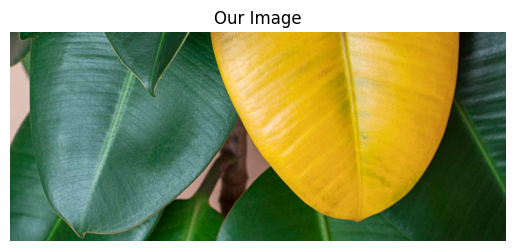

In [36]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

img_str = """
/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdWNreQABAAQAAAAjAAD/4QMsaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA2LjAtYzAwMiA3OS4xNjQzNTIsIDIwMjAvMDEvMzAtMTU6NTA6MzggICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRvclRvb2w9IkFkb2JlIFBob3Rvc2hvcCAyMS4xIChXaW5kb3dzKSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo1NDU0OTQ5Mjg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCIgeG1wTU06RG9jdW1lbnRJRD0ieG1wLmRpZDo1NDU0OTQ5Mzg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCI+IDx4bXBNTTpEZXJpdmVkRnJvbSBzdFJlZjppbnN0YW5jZUlEPSJ4bXAuaWlkOjU0NTQ5NDkwODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIiBzdFJlZjpkb2N1bWVudElEPSJ4bXAuZGlkOjU0NTQ5NDkxODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIi8+IDwvcmRmOkRlc2NyaXB0aW9uPiA8L3JkZjpSREY+IDwveDp4bXBtZXRhPiA8P3hwYWNrZXQgZW5kPSJyIj8+/+4ADkFkb2JlAGTAAAAAAf/bAIQADgoKCgsKDgsLDhQNCw0UGBIODhIYGxYWFxYWGxoUFxcXFxQaGh8gIyAfGikpLS0pKT07Ozs9QEBAQEBAQEBAQAEPDQ0PEQ8SEBASFA4RDhQXEhQUEhchFxcZFxchKh4aGhoaHiomKSMjIykmLy8qKi8vOjo4OjpAQEBAQEBAQEBA/8AAEQgB4AR0AwEiAAIRAQMRAf/EAKUAAAMBAQEBAQAAAAAAAAAAAAECAwAEBQYHAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUGEAABAwMDAgQFAQcEAQIGAwABABECITEDQVESYQRxgSITkaGxMgVCwdHhUiMUBvDxcjNikhWCwkMkJTWyUzQRAQEAAgECBAUDAwMEAgMBAAABEQIhMQNBURIEYXGBIjKRUhOhsUIjMwXB0WJy4YLwkkMU/9oADAMBAAIRAxEAPwD54BMImyaMU0brNEi8AJdpmhKoA5DpReGCCbCpZl72EchOAqZwkB4tRfPhxNjQi4KVZe4n434OjGYcDVpKcxIFuTx0SREieIqXei6sfZZpR5SDdDQn4peqMddLekc5MpFzU2Cf2ZCsrGw1Vx2neCX3Y8Y0BLlkRxjJsrZWvxo/mpt+bT+PE666/NOJ4GgcjRYnkXKbJKEj6IcBrV1gGYkOqjO3nrnBW3Q4km1FcCL2bxTgGQ9NBZVIM5S9uQYGjo+wRWlVUYJSYn4phjOqeD5RGNtQdlWGISqSycYS/RXhggSAC3inICxhjgfUXjsqR9iZegCP9uJGhoie04gGBd7BVDP/APbggcmG66Iy7cP8iox7QgPIVOisMAIacS/RVAfHLtx9zJ27bI9EkMECW/V1TDA0WEa7jRMMIdsSQPtA1RMMUPtI40SmLXCsY4ZAX8WQCyh29wWlsFuMSKEEWFfqiMOAiknJqQFj2cB9mQE3MTRAHHCMZAxNfivI/K9qcWfnGkcvqBG/6gvV/sZxrGTEB3BUu47XNmwShIuRWHSSneZmcdDnk8MwD0oAsxAcDwTwBiT7lCNOoQ5GTtQaMo8BUJes1d0wjECzyTmIBcAV3ScWLiuzogbkSWYAIswoUSTJokcWDUCHOMA1zvomGcx1qlM5SDW6IExkXkW6ocATQuEhGBAO+6PI7PWjo8LaDdMPbB16JmnEObKwaN9EQZaUCFyzIAFpM1ETFrFZy/pteiDgOTQIBSQC92+CTBGWXMHqHRnOJPpr4qnZgCRmaCIJWfcvCaHfZnmYg2ouEycuqZvvJf1EqBRpOBr0Y1KDuERdhqFo2VKYRo61ujJifSClYylxFykeHb+J7KXd91GnoFZHoFf/ACPvRlyx7TGWxYbtuusGP4n8Ych/78o9O9V817kjIymeRlUv1US5ufLou/brjxqdP91iFXjEig8tUnE6aKmeSVBponGQkeqv1RAgfuuNkDBjQu+yDyaIFxUfNer/AI7MjvZDSUD8l5IEo1XofhcvH8nhEi3ImPxCy70z2t5/41ft7ju6X/y/u+wjAv4p+I80cYVREC68nW5exQgBx6qkPUCTYJIBz0XTCMYlrUqFv25n5M9rgccWI3ayqZAl7AKEpsf26sl5uCHd9ld2knBTlczgYSH6jUpefIAMx3vdCOORiG8wnjChFQ31We12pzED2yGpRPEB+iInFiNNehU6yk8aFTxOnJ9TcgKboCUiwcsaB1hF2lZkwaosRZTcgpg1SgY1v5pwafNJLQHdZ9zGDmSl/JAGtNEzHyREWtqua5qitfcotpomIcMLpbFK8BnDIGjFZkPDzU7Xg8Ca+GqF7WRAdayi2mVg9dVn80DfotZAYOyxWJAH7FhboigHWvdEhkoIKAzV+iyDraoAEslkQiSpTLvqqkIJyDBSLmqYQJL/ABTcAB1V9C6piOp+KB3sE5f/AHSSj5n5JwYPjIMSLOEe8JlFmvEJYNH1SurZYPjEjqF1e2v27z5VG3GA/HiLRbzZe1Anj91914f44tK9HXvwgJQ6stexc3eeVRv1gDIQwk3wW5tUs6M8T1FxdKcRHhqFvZsnIksxISGUbChQkJUcEBYwJP0UbXbnEXKxIIYnogGIb5IES2SEl6hY7dyzrFRRw3mklqWokMiFvcNjqs73Nbx0PAe2H1SmJtdMZjUIiUaLOzW9KrlIirpCAA9laTFDgCsdtDlSqh9U7B0CGKylNN2WdMRqgwVymzokulstXVGAZlmSkkIci7J4MSAyVtUX81jIGicImqU3ZPdA1VGnIVSGisQ6nKPzVSglVtVmPkt4qgzqU7/RUNqKZ6p6lUsv2lfn/dF+5yn/AMz9V+gZvsPgV+fZy+fJ/wA5fVep7D/L6OX3XTX5lFOqKATAOu5xmhVduKBYEBcsI7Ltw0DEqomunFEarpjGQIOhUISiqwybfBWiqEkOicwMWKSXImyFAG1QKYSAoLFUExMcWqkiAQHCvjhG9k+SIxAayX2agmyrKVWC0QTGttEsFR4x4Nosk6Osgk08IusyeIZYuk8XiRKNCKqWbs+xyzOaUZQnKsoxZiqkUCWVAiyUrJjmFgMOKJ9rGIf+V5fEqOWZJHVUkWiVz8nmB1Skk6I2vgbuf+0EUAYFlzSrTUq2Yn3JV1soN6m1U3q59utMImNTXonAdvogXMWNVWECz6BVEBjjYrphxYyJ9Mfmeil6RTogZuwiKDROHOFfeJHEC+pTAgCtSoet2FDsqxBat05TyrGLkGzK4MRduq5hE7sCsITNAabqsm6xlxCkiKq+PNiABcPZcWHs45HlKbNYLoh28WqTRVLQ64dx215FzZlv73DGRLlzQFch7Z/UCQ1kPZBcEF083yDsHddvwchzeyI7zDEca112XHHDJ9W6rHEHF3F0ZodZ7nAWYsWRh3GFuIPqFnsuWOKFARXdOIxDkBjo6M0OiOftgGcAph3GORIJHE6qAxYshYvGRQn2kRJonp0TzQ6RmiJUYwYsHTiUTUkAUdrLhPbydwQ1iknjlEsQSBUMjIS/M9rGOSOfHXHP720kP3rijwMSS+wAXrY/WDjyh4TDSfTqvIyQy4M+THIMYlj4brLpcfoq8zLe5AHj9z36LNilVuJ20QEKHUlEQIpYHVNKWTK44woPmVOUJEP8gnywL0N0kYyd5E0SMvtnxVoxEQ1kY0sL6rEeaeBQiA9SmAP8rvqj/TAZiNkDKQI4miAakb6LcgbB+tkgBd9UXY1LSu26YjESf1Gp0CQxraqJNyaFJIk1JSMkwxaVtVeLY+2JP6i3koCDzAkWa6r3tOMBaIsst+bIi9XHkl5v8VKVE5rX4JJF1U6Kk4Ct0QzugjTRBxiV6n4TsvfzHNk/68dSvNxwllyRxxDkle53k/8A27sY9th/7cg9ZU7XwnivWeN6R5v5nvT33dGMD/TxUgNCvLkGJf5K0of+pK2khXdPGJhFttykCYl4lUBjkIf0y3QlDjUCm6UgCoQRpQPLoVuJCeGRwIny3TmAYG8el0FlEbgqvbZDi7rDkN4zifmlkKgxDHRasfuFRYpWZlnmeu2LL5V+gwfSiqIkkPbVcvZZPd7fFlBfnCJ+S7o/7rw9My3W/wCNw923iWeLRaNWSyymThmNk0hYDxTY8YBK31t6RnsnCE5EuGCtjw0oPFUhD1Bh5FXAAiNlc1ninNbg2wOyJgxNGcVbdDlX9yI5Euf4qrZ0g5TOEEk+YC3AafFWHoAFnSzFf+V1nddZMqmUrlgaLAb6IkjkRrulDs6w23ORpXca0KVnfpoqM9RZYROijbXKih3dk1LajRElwGvYpJbvVKya/EC7ONrFTIYdUXMn0R4uPD4rPb7uhpsFtETTw3QFmWFwoTRK29USaIO5UcgDRC4Y2TNugAP4KhlmCBKJZzVY2pbRL5kmSf4oCJJqjIaop5NiAkkXKc1ogIpz4hJpENoj7dKqjhAp58gQhlOScpT8AqgTOyEqCtTsmlemqViC481WCsCIPIE1Og2XaYmWIwJcCxXJG4Juu2DGJAq4db+2v+p6f3TDPdydt6cpGjr3sBPESegpVeHjaOcjey9jtyeC09ttZ3d5Ub9I6uTUuRUIgPpdT5AVd3sniSSK/Fd0vwRj4txEhsVPgSHJY7qjEmqzgaWRcXrDiJifjqllFz9Fd3FqdUhl+5Y7zXzXHPKAZSljAK7GiSUvELDftS+XKpXFLGQKeKmYm67ZY6MfJTlj1Zcu/Yxczhc2crkdETMmipKJ2SGPxWF9U4uVcByKxkCgYgIMbhHUCWWSkoEpyGYhBg6HPRDk56JzIHRZgVjILOCHTMjVosU7BKAqlBbWWFkzOh4p5BCSCgS6Yxq6SVEwDJSgaJTJXIBNUhoapuRF0k6lVCqOd+JbZfn2X/un/wAj9V+hZvsl4Ffn065Z/wDI/Ven7Dpt9HJ7rpr9QAqycRCUGqcBwu6OSqQLGi6Mbmuq58cXXZhYBtVUTejpxQcB10wxRjJyo4yFZyz3VxNUM4g7up5YAlwhK1FnoxQR4AyAGgTPVh5pMeRmGivHGZAyCZFcAIxkZR4vXRaOKRLbK2Lty/UI5JP2j5rLp4VtVlkYJy8U0QgAnjRYOrDSUslqp5lc+SeiEbXgk5kUUsbnNHxWlKpVu37eRicpoAlbIy5tSzVyk/FJIeoHdGQeZKQVlQ0S8WG1VBAoBXVUjINvE3Uxd/mqxgWVQCwagfxTwLWDN81hL4owMqsmDAEzJ1KeIu4S8TypQaJzFogpmaIFBpurw9oCvkyhGNKFYZBEsRbVOU3fhy9vEEGPmnOaN4hw6hhyCUDEQof1KgqwFCFcob+4ahiW+aw7iDfZfdEg3NQEOD1LM1AmGn3GnG1ilOVxayxjKjs3RAj9JFrFIFGfeN9RoUpzRIaUZPYlV4gkClbFaWNrgHxQAx9xhiQauLFXxd3inyJN6F1ERgTWDUoQsccGqK7p8h0CeGRLMzLCGIkgEea5zCIL1r0WeNK1dGQ6JYYEvYs1Fz/k+054BniXyYYtNv1Q/gqc45CwpILY+US7uLGJLgjUJb65nHWdD1vheleLDKbAP1TmEjU33R73tz2ndOK4Z+rHs23kgCZ0u9Tss9bmCzFRlj613SxiZF6ll18QGEvV0CnllGJbHTdPBEMQOg2QDgOzbIAB7uUeE29IfxTDMLmqYRDP5oAZR9wdkSbAiiDgFyHJY7BLxBFqqkpRBO2iSU/ADZBl4gXBOrJZFhZhsi8jV0kwwfU2U0qbBESzB7BJ3WQGU21LDwVsD4sU5tVmHmuLNIlgTUrOc7FOqRLRSsLJpkW0S00VrAhvBbR1iunsO1PddxGAHpuT0StxMn14ej+I7aGHFLvc1BEeh915/dZsufNLNImth0Xpfks+OQj2mEgQxXG5Xm+2W2GynWf5XxLe/wCM8ExCMzWh1CnOMokx0GqpLGLgpBIfqDvrsqRlFiDSoRAEn0lsrEG8Pj0UZQYghq7IKgwFDfTogDMScUTxY0NExxMxDkGxSwDCZkGADpZRl+qpW4SBd/IKgnGQAlQhBvqv8eynJ+Nxg3xmUD5FwvbxxoPmvmP8YygHPgelMkf/AOJX0wJagXie4n8fuO5PC31T6vZ9vt6+xpfhj9OD8fUBen7VeERfZSiDSRvb4pwJHVV29p1VtFOUatQsyaETK/8AoJYY3k5oArxIjWi6Neeb0QAxhqaVRMaEahG/QLUFrp3AJQlyhKvqsQjKnmgIk3oNAsdr4KiXE7XTRjpqqsLNogzElqMs/QeSgM26BZzoiSwAsUsn1StxODKWFr6JWehTNrrogCD4rDa56qjAB+u6D7fBEuS6Qm4Cz22wZZVrZDREOiACC2lljJb4GVhqs7HoiwZzdJIhwCnNb1LJiAxSBnIdAyLbN82S8mPjdOzBZHjqVnPlolMj4unuoOFDuyLdVhdYmrCyZjog61GolL6XTwGKU1Ta1SyTgKSkJqmJZIbq4GJHipyLnw0WkfJZtkytblWlyu3tjYHWhXCLtqu7tR8rq+1fT3NL8We3SpZRxyiTasy9fsyBjD6ryu4H9SQ2K7+0keIF1vrZr7jbPVNn2x3oxFqeSiJk3imOQWs+q7ZvGeFHqaUZAmx1SBtJVOyabM2m6LtwcajkJDEH96x3Zlg3kotl6qJUFAuCmILusbLGzqpMk+PRD9Nbp2HydAh3+Siy+akyBJlMgV6XVTEhJKLFYdzXxsOImFVPXorOlIAai5rJ4VXJCPNIYlUICxANUpcGgywBVDFZleTTPRAlMQg3wVQAJdUQUhDFYungKBvisUh0WEkYNteiSYdOapbqoEyN0nAMwVSEpAZVKEjZJIuWVCCHUrnqFpCqfcFsct2K/PjWcjuT9V993kgO3yH/AMT9F8CLkr0/Yz7dvo5Pdf4/U0QnFPFTBTP8V2xx1bGQCxsuvGQD0XFjBJXoYcBoVUKrRJP2qsebWVu3wb/Bdke3gKhXNUVxY8c520TjAQa3XXxxxL2KSc+lU8AsMMRe6sYCEHBqbhTxguORZGeXFGQcumkRdW9zjGlyuPJ3MRWKme5lIk6BL1QV38+vqWXme/N3WS9ROsXTOLoRopTnXosXVbhss2FFx5JF1eUgXdCHbnJJ5UilbJyxuaTtsByzc0ivSzARwSjGwDJYQjCPGKOYNhks+btmotxPTPrXlEXSQrJgPimf1HrZNDGX2VsdusPEB2NhsnJNtBZKRo/kmBi4J+CoGjEE7A6pwGskjJx6aMmMpaJw1IuXLp+JLPbRSBk7WCpEHU+CYXMREXFqqvb4sUm9wuFy+5F2uBddmEQkOZLMKMnDXmaNCDQFlGUpRNgSrwyGQY0Gic48bRoHN1YcUs2QNQbpPfm2jrulhLfbTRSl28tYOjFDjPc5DqARoyH9zkDOa7rsOCIFYgN9xUj2xl6scROOhslihz/3UjXk5F6Lf3eQhnB8VX+1yEfaB0KxxzB4e0KXKOQke7ygikUB3+kocgdQVY4QQ5xP1CWXaYyCY4yCLxv8EcgI/kIagjon/vMBFy4rZRl2WM19UZBJHtpAmhdtkZodWPuMMg0ZAS60TDPjk0eQrdcBwzjKhWMJE2CM0PSyQxd3il2spDmfVikTaW3mvJjyxPjmOMokiQPTRV9uZLtUK/cQPdYfdEW7rCB7o/niP1jqNVntxfV4XqqczHjE8YiQ7fFJLHycxQx5TwZqnVWjEM8j4hX1S45AQprusJt52KtMYTSAL7qEoQFQXKQOCbk/bqUnuEAsXCmSDd0WjoKIyo3OLeCwjEh7aIcaUPigzDdBZ5FiCwKlmJdurOqAGl62KUB8oHkp2vAvRTODi7eEZC7nxXBIgy/YuzvpynkMTThQeS4gK9VOvmIWVTSj6JQGTSBc6EaJE1CAZFhcr6DBjH47seZpnyinQLh/EdmMkz3GUf0sda7q3d55ZsplL/rtEbBT+Vx4Tqr8ZnxvRxyEiSR6iandYF6SoQLq3oL8TbTVQyPKoDS6WV4ZAYGNZBIYcg4DEqgmQz1GxR4iYeNtkEg0oitBr1RgIzBY8ZNY7qntk0LkVSe1OBBZw9WQXKfA2N+tEIylEtcD4Kx4k+qj6pCCA0Q8d0ibhKVi51ScNNk0ZTiSQB11TRyxkXyBtv4oOdHX+E7j+3/JYhL7cj4yf+Vj8V9zjAP7l+eu0xOF4EENuNl972eaObBjzi2SIl8QvI/5TT079vueF+2vT/4/fOm2n7b6v1dgDggDqPJUgxZlogJoBj41WevGHVT8Xd9LKhiN6WQMgHB6FAzGnwXTnWROB3G10spOWFVqyNmDqog4DhlPO3QdCCJd28GTcCKtQ6KkYhmAqViRBquyr0STkZSYA7gJJEGllpO9KgoxiDU3CyubcSGThKXgkmDuryl6FEuxfZZdzE4l6qifTRY2RJpSh1SSr0C5NtvLmrB3H1ZZk/Gj2RYMOl0TtZ/IskEaeCBYdNyiTsklI3OtnV4kgI5JpTqUkqXunID0Hmgalljttj5gjuK6LcHqnEd0Q37lnk4XiB/FDkzpykaqcMEC+tU5CxAZPJlHh5rFkOSEifijJZAyfxQLJGq+1kSXFfgqK0CQpmxCcpW3TkGCgeRSmWgRk5sgIVVRN+DAHku7tS0hHc2XLAMeq6cEmmBr1St+6XysKzg/fADIW/UHfqFbsiTEEBJ3EOceWtkfx8zFhZ11bf7+m37kf4u71Atd0XJ3dVPqb9qVuEnXd6WWSHiWLV1W8mTFpFmLLUq5U3VcpDU3ssZEeCLPV6BAxcfILG63wXKAkbHRZ2B0ISkHzCEjpZZ23BmBfwRe7KTkIc21WfrPCsmLJZMl50W5ApXbr8TJKF9UhhQKxkHZKXtuufbWeBoFwbLalVIHkpmLVCy+FUQj4oEpyKpTFlUpkKxsmZLJVDI26HFMQWQVApBQ1TkoEKpQQ7JQSnIdKyoFJKz1ogUpKeAMgD4qGpVCVNXqVcf5IgdpmO0JH5L4WK+2/MS49hnNniQvioh16vsZ/p35uP3X5a/Kj9U8cZKaGMOCVeIiF2yOWnwYo3l8F6HbwBY6BccMkQOqtDuCzRVzERXowl6iHorSyxEHeq87HOdUzmVCWT9SXR/cxeqnLuw9KqOT24AVcqUJRDkotJc55yJIskeT+oqUu4FWUxMmTqcnheRfVH3BELmlM2BWclLKat75d2WUmpaiyWSewSWXMSTJhV16GLsO5zFuJAXs9h+BhAiWQOVndvLl1fx7bfCPJ7H8RlzDnMUK3fdse3AEQwF19lDDDHDhEMvF/LdsJRkWSuvjVb9ueizV4UJAxQ7kvgISQcSMTomz/wDSUp1cVeb1IshGUv4pxuzhaPwcuqjO+AxuH0RAdzoEeLVe6womSkaRpfdPGqmCT4BOJS8lUqjxDlOIixokiZE0oyrDHyBJKYHHjiTv0XoYMc/ugAemjLlw4Jk0NF6eKIgGJ8VWsNExzCTmIgEfVTUixVpGQ48qwclkvNv0gF1YSOTKLRpqhHupc2MXOysZCRJCWUK0iH3TAnLIgf03PwRM2HpgxKnGcokiTHwuqe9GER6QZGkgUBM5SKyxu+gSnuIiT+0SNlYzNCQBvFIc0SbC9SEABnxE1iYvYLcsT6hCYjKwDXohExlEuDSzIAynAxu53R4gsRIF1OcQzh2N0sYh+IvukDzwxJNBZSOGLRcUs4TyZm5MR+1TJmIekkjRATOKPKjhqJIc+3yjJE2r47hOZZBUXN1PJKRYyjUaKbIMp9/24hKPdYQ3b5Lx/klrFJF8kWt+7dWx90IGWPLDliyUnDfqOqnmwHBxy45c+2mfTMadJdVnL6bi9PBV55n1YYDcW3XPmxF3enRdJyHg0SyjKJIq4G6upcoDAgAsmHIMLCyoeEQON9QgZ8qFI8pm1S6YGI8E4gJVFUsogFmqgJkkmlAAm7eIeWWX6AjMf03ld2RYR7cv+tRsK5ZAz6kl3UjLi3G41V6DHb1H6LmcCRoiTEVOIU/dWpT9t28+5yjHAU1KkHkWFyvf7Lt/7Pt+ZH9bIPgFNt6TrT1meb0g55ww4o9nipGLc5blcsoSP2/aPmqESmeQ80h5AsB4jRXrMTCNts3KJhX+Ui6X0l3oV0Ti8PSQPnVTMX+652TJzzxysQ406JImcS703XS7Uk5CE8RZ4m9gapFYAnGYYljogRRg72pqpywSgeRFNtVXFlFRIV0KBnzJLDrxpopEcGf7TWlV1zkWeALtq4DKRhEtTiDQk3QMJ+1y9UWrRrlTMRyYuFQgwl6Q767JxkiQ041OtUFx8koOCQ9F9Z/jmf3OzOF3OGRiP+JqF8tKJjegXq/49nlh704SXjmjT/lGq4/+Q7Xr9tvjrp98+nX+jp9n3PT3p/5fb+r7OE/SzOq4xy6NYqGCv7l0wDE/JeX2dvVrK9WqkEsKORdAY2Hyqmj9276qpZl2aybdUW4JGIYKvAMNgliCRRwRQJ4sA1P3rTWYiaBcRprqpgcvSfDomMiTTS2ywgbk+ACVuacIYxh6fqkcAb6ErZAS5dIHAWG+2LZ0XIBLAkqZk9BonIv81uBuzBcu+t26dFRHi58E7CjqvECoUckiKbImk0maM5Zw3ikIP3fHZYF2c3QyzDUqNVNvFv6AsjqNVOR5MNU0ou1U4hEAFZXa3M6HgnBxRKSypI6CyRvNZb2Z4NjJw7JQPJk37EAkeAWbUpgz0uldi6eutvQZDSqSc2smMy31UCKk76LS6yYyWR5FnW5UfZZijxCngguHHxQIp1TM42WA3RDIx1WYJyNNCkLAqpyZOLFEhCcwKJeRKoGcM6fEXk6kz+KpjAFZaKb0TXoSJ9lxYH6qHaHhmIeuytjJlhMSL1XPCPHMQb6rfuXGna3nWYZzxj2nPF/MBM+two4J8ou/kqXNQCvS07lusvmyurNUljaybiNPJKaCoLLcuLUIKr1TxGCyhXwSkHi4NE8pRNDqhYF9dFltNeVzKRBJEtBcIOXbRU0SEAHqsdp8VwvEEABLKGyYUWa9fBZWS+BpkEdWUyS6u4dlMxDFY76eVVCcqn5I86ocd1uLllz27z4m3JYEEF1OUTos6jBmoyDJXaqBJd1UhmZ0pCPIoOCqgKRRkpCo4SmqqUJkFZkS9mWZVkym/wBECESNEGuqgJIOkPzTlTcgqoE5VskDFUmp6LSFXmfnpN+PydWb4r5CK+r/AMiLdhLqQvlIr1vZT/S+rh91+c+R3OieLvdIPgiCSutzOmAjqV0QMI2XJEqgBTymukZRv5Lc5NsFKA12TVkEESUySXSmThgqDESqQ7Y60QHOAVWMSbK4wgABUGJrWRgsueOAyLlVGIK8caoMQdk8Jrm9oMsuz2w3FqrIwT7yGDFCwCo6CyyeiYLj73FygV1pckeUWQHxneYvazPobqGeQ9kr2/ynbOCQF4OUtiIOinxcXe09O1vm5CfRRKDqzDZEtxQg9QSqjmpmJD6JxEN+9aIbzTgPZMMTxDabp4j4JIgEhzTZWnKDADTyThnhallbGX0tooRylnApsnEpFjYbKob0ISjFnPinlmuTJiPNcQL/AL05BIcGiuB1SzYwL8joknk5tU0FuqlGAYG+ysANqpgPeMS9wQzrHNMAMOjoFiPtZM0uI9NEBP3uJBIeqMsnIEG+iJjMxYRDaoRxTdyLaIBJdxlcvZT97JxYM2quceRz6QyxwF6DwZGKET3OSMePEboR7iTOYtunlilUSiEhxGzfNLkN/c1Zix+DKkO4iDS43XNPHOLek12S8TrEu/mjkOqebHIE3KEcsTHx/wBOoRNLGtCllAPQpZoX9zcvu2y0iNLaDVc3Cha6UCTsClmhY4+TMHfRN285YJHGI88UvvxysQVESyR+2VLBdeDJGXEzhyNqJXFmKJbLmId32ku3bNh9fbyqDrE/yyXOCZRoXrZex20RkzSxBjhkGnE2K4O+7DJ2mUSh6u3P2n+U7FRrti+m/Sq6zM+sc/ASL5PTHdSlA7NHddEScg3Oyxx8RudlphLmA0AusMe9VUyxg+kF9CUC9fr0SPKE6MNEO5JIjAfpr8UxDzjG5ukzn+odxRRt1LrUMhIxOdTTyXK7eavnJ4RHUpe3wyz5hjGvyRavm2R2/i+zE5HuMg/pwt1K655zlmXDfRk0+MMccEPTCF21URESo7AJay/let/sW9nGs8P7nOPYn6BLxJ+6+6wyMeLPGwVngwYOTZaRDnMDE8npoExlGV77FUMHLE63U5xr6Q4/mKDSIP6h6dSEoPAvH51Vb0JTewbBq7pBAwOQ8neRupGE+TxiCVc48kZPGp6JuImCLSRgVLFNnhkBBNjcAJpQlWMDyif9UQ4VadRumJ4BhV2bZkAnDiGkzG6jKEQ8oXH+tV0yxxkBxAkBcpThItFvCoQHPCQAAPqibgrqwThiy482I/8AXIE+V1M4RKp9LVtdQlCUJMPIKbJZZelmKJbLLOs5n0foXazE4xkLEOD0K74igXzv+O917/ZREy88RMJeVvkvosZBA6L5/tz+Pu9zs3/Dbj5Pbm02013n+UyeD8tlagqSwKkCBXXonEZSIJoy7NL4TlNES5AiNANVogkhzRNCMY11TGVaarSTxtTnyExiPC6kZGo1ejaKhL+GqmeMQja/Q4jM6XKmXTycllTHjcF9LbLl9N32XnBIRJHI22QJAcaaK0mAYWN1yyYFVvPRJIU5bn6XZjspya5QlIiyaEOQMpLntu1xOcKSKzJyGSciSPmstsTr1VGLOyBdmQNzsULhljvv1h4aWjea1Sszo8Tp5qZLt0h8FZ0eLDwRIAshKRrvZlrNJJm9StJIhRkS9KDUJ5M/11U2eR62CJeeABJemtFgC5eybjVkQDrZTvepFGo+CYDeqPHZHTqoOQrHT5oGg6ppFgoz5EVoNlesUEpirXF1MknV90JGQ+0ONkfbJqTfTRaYkBWJsKphD4qkYsK3QlLje2iVpBQdSs4dkkpsHsEgybJelF2j1u3JljYXXPlJGYS3Vez+ylSp9yGmNADRaW57En7aifk9LtzHiP3KwOrsy5O3yERFPgqDI7sSKrt7Pdno1nwRdeXQJAmhc1dNRmvq6lF2u7o8jstv5PMSH9N/JTlxNlnoK3WZrLPbbPgqQpDGiSbt1Kc8n8qpZFzayy2+CoQmVrFbl0oFjIP8kJUssrKY0JZY2Su7AIOophION0D0R66LLHadTJIJCGqqlmO6QhY2YqoSiUiqchJqVUMtjRYorHZUCOVjJYhLqyrAZ3RcIEVolYgJyAzhAiiUlDkVWDYgspkapzIWQoU4EZ2SMwVMgSEsCtIVeD/ksv8A7OMd5hfMhe//AJPL04Y9SWXgxde17Sf6U+OXn+5v+p9IIBVIxCEQTdXx43K6WDRgSzLohgyEOAwVMUIgMV1QpFtCnhNc8O3OqrHAI6UViwNLDRabmr3VSRNIMcSiQBK9EHiBU1U/dHwQSxHKQpRZwKFTObyZIJEpZDqjx1RlkAtdQibHyWkXkjJLe9J30ZZS5R5M6yMk/SEEVli9FlkFkByd7hEolfKfksHtCRsCV9pOPKLL5z/IsIh24k15AJY5jHvyXt2+T5sSiQdUziPipxLSO4TACVTqiPOt54UEgaCyJkzEUJoliKNsn9NtSqMQB9ywjWtymiAAOiYcdAqPCkMZkwCqMVQHUociCdSq44SIBJqTZUbohwZqBODGyQYhYl/BUgIMQY23VAfckGIiG0RMyS4HitEgAAAEA3RcuZRLB6hMEMp7LcszWtd1QCUrhOISs7jVPAc/uZgGpe6eMsolpX4JzhBB4kqUsc43kR0RyDmWbjy3uyUnJQtZNjLA1PULESYtKmjoBOWUPyjTTdKMxqJRHJVhM8CHfQJRGMnL6IBDlfjGUDTVIZYneTxIVTAxZz4boSjyuA7JBIiEiz3UzDiasYmyYtEuPghyD8Lm6QKY+hwxIKlwL9QqmIoY05fVSg7y3rVKgDHkCwqCujtogD1D1GyTETyDl9G3C7ssYDHGJ+6VzsppK9hiMYymbSsknnJzGJAnhk4nHcBdGMDFgobCgXnvMAzZncLLWZ6iWzGEs3a+0ff7c8+3OuseklICM6uxFPNDB3WTts0j9+GVMmM2IV+57WIEc/bPPt8m14nYq9drLi9L0rTjaZn1iEsFQABIbpZYWi5Ztl2xxxjDlE6UUcuMY8cpGTnYdVphDz4xIymWkVzkxk5L9PFdcokY55Sb0XHNx9Vj/kJ1rnmTOQjqF7XadoO07X3ZhsuSz6BQ/Fdtjlkl3WYPjhYbldncdzLNlPINECg0Sxdtsf4zq0/HXN/LboiQJWFSkIJIBF9VYNKgoy0gHtYXWrNzygRKoppogJGEmMWV5SEfuLtZTnxNxQ2KWCNAvJwX67IxAeVXi1r+ai5gaV/cm5Ehwb3ig8s0eJMAw+iA5xNbJonaqfiZVlcaaJhOUWiCC726pJQIfi/I+SqImFSfJNGEDHk/q1QSMZEkDIKhJlgQepuumEASeYcCrqZyxBIMXexQblAlEv8A7Lqwy5ikrXB2SyGsWINwyi0olxpsl0DplEO4LgeRSGEZhpNE/wAyOPKJUJaWyoxZyAyfUOv8AT23eSxO8M0XDbxsvr8MqFfB4zPDmhnxn145AgDYL7btcscmOM4mkgCPNeJ/yfb/AI/cdvvTidyem/OPT9lv6u1dPHS/0rtFY/RWjOm5XPHl5KkQxZ6KO33LnMdFh5Eklg4us5Ae3RMWiL0CjKRNRquq7yfGoxlT3Iin0WMgSwspxgSSdN1UARqSymerbr0O4gQxxjWV9VpSaXS/ijIybqpZZV+iW201nHAnNLMmuxUJ+osKp5OUeDAProua53vwX0ThAGp0RySEY00umkQI0USXvqp32muuJ1okAlw22iT/AEyJLH5BCIJd1x7bXa8dVlZ7IiKeMOicxahDKtexcZ2FpIhY0iiaJJVb5rTia4wRZEH7apS7vqmjAALEUU7XEzREmFXW18E5D+CHEBY+rPwVIACADCtSnb/dCgQC6P8AEJSTp8USXNUDEnoE4aU7UqUhhIsZFxsr8SAwHmiI71ZX6sBLiT0CLMCAqH5KcpAeKXqtK0popTkCKoymozLjoq1ibSTkJUFhqlBYsEaiyFjS61jKvU7GdG81TvQ1eruuXs5GJquvuD/Rrslrzrvr5fcfjKp2sqD6rpiwJO64+zLBvgF3OGBIq66vaybdufBG9xWF6C6Ilo7eKAIenwQMdRULovb8im5uWguty3opGJAcV8VjMtXdZba1U2ihkN0hkbBJyaRdkXBKxu1i4BJsxZKb7JnrutQ1Ki7KkCNA61XtRFo3ARpdKgrBmShwCNU50GqUjVY7YMllnRr5lAgMywqipDdUKQpwylmSm6YhAhXAGiUjXVEoEqoYNRAuDVMC6xD1CYSkEpFKJ5ApeiuAjIGiYpS4TgLJj4qUrFPI1DKcjQq9esKvlv8AI5P3OOGgi68qNKrt/Oz5fkJA/pAC4ASvd7Ex2tJ8Hm9+57m3zdAMdFTHIuueKtE7LZjXXAPqrRyiNFxRJIuqxiTc0TyTplmepU5dxKdBQbpKIyMWGiMpK8pG6eEHKTmB4JfdbVHAX9FXKbnGMaarkOR6BH+pJLJOj3aUU5ZibFD2y1UwxhHJYI8rvVZW4RZtVkE/T1lkFm9EVlkEAV4f+UxbsIS/8wvcXjf5S3/t0X/nCIz73+3t8nx8DEuTcoxuwHghAX2T0enkiPNECRZVhGh2FUj2ahTh/L6qzYRJrojBgK3dAPIsKJhiJkyAvGWNnJYnRk8covEE9EvtDjQVVsOFtKqzGOQyJoQmiZMQzk6q0MTX1TyERVlUDl9euiw5MGkzq4OOoHwSOAWY9EAoOV70VImZB9dXrohExGlyxdGUb8Q4OqAw/wCRfZKQJ0JKBJsAxWByEg/FAaWGQN6ISxEBnqsMk2INkwyWcVFigJCMh6XpZDiQL1F0+Tl90RUFLzIcmNaeaA0oux5fNA+5INEnZHlFmIIOgVIzhEB39N/EoDmnHNENEu93UZHIPX8F2yOOVYkRc2UY45F6uA5SsCHvyEagHomjkH8tDo6EsdJR8wPFCQkMdbix8FNyHV28MWQinAm2y6jjOXOIRLcakqPZCJxyyG8f02ddXYxEhKUaVus97x8yDvcnCIg7mV1DPKAxRjIu1gE/cQOTuJ43cD7SuPPGXMxNCNEazEJyzMHoGXT2HcDt5nFmeXbZqTGx/mCgcOrtsg1GPkdk7MzFVrbLl7X9n7eTiWOIh4HQg6qXe4BHGIRF7o/jO6E8R7XKaxrhkfojnyPiJkfU5Egr0uZ6b1i9pMZnSvJ7wCHZxEReVV5sgZmMBWRLBeh3h5dvGO0qpfxXbe73YmawxDkfJZb3GaWkzth0jEMWMYBeIDjqkAIJIqOqpkHuEziXJJJ6JYlz1CvWYkidrnak4uSUHJvoL6KxJtGoGySMeW/VMgALu1NEs4EkkMypW5DRG6Wfrbj9uulUzSOJzQ0FypcSC8L6LoYRFD5JSAAZ3+SWCLjIFCPUqHKwtXdczyd9dlfFN2Mg5FkgMi9ZC9gEphOJuxdOaly3JGIqxDgWdMNDI8TEsPAMllCMjWIdNlh6DIByVKE+ABMfSUAAZQoDyjrsnOMGsGrZ07gx9GqnxIL/AGy1QEjjDu/q+StDKRSdQCjGcT6ZAOLEJSJgkEBtAUzW4RIMo/EL3PwPc8sMsEj6sRod4lfPQlIFwaG4XZ+N7n2e8gT6Yn0yGjH9y5Pf9j+b22+s/LX79fnHR7Xueju629Nvtv1fZ4y7KrA0sdCubFLbVWi5Xie37nq0mZnwerZyc8j6WdNjxB+UrBGMgJMnEi7NRd3b11zm+DPa0WCUgf63RfailLIX6La7SIxRnJ+W4spnG7E1KcRcgkWqtkmAwGmqx21l+7ZcvhEzxBqpykXcrTIfd6BSnNyw81z93uYlVIxk5OymSSQyZiZbDVPGAp9VzTXbf5L6EEHNU3DXUqjcXHRDlRzpRbTta6lnKZp+1Eycv0olJcltFo0vZT6s0YLIOP2JQNSqlv3KUi3msu5ZryYE/BAuRS6YAn9ixH+yxt22+EMjfFZqBMW80hJbZR8DaRLADRK4KZkp+KeQQAvW5TssAiBtZO7GC1ropJFIglILmnJ33VJlxspmJ011WmsKpEFqoSFKqjcXU5UB6q5UVElyw8kYiqIg9U4jWqu1OFu2BEn03Xfk9WEOH0K4MZLjovRh6sRceCnt3/Us/drYdnCPbEDw+i9CNhxND5rgwj1GNmNF3Qg0Wao2XX7Pa4swy7k5F9KEC/msKmtALNSiYRLPcIxcPR12+qeKMELs1H0daTxDkOEwA5OQwNFiAQR8FntizquZQLW+qAGxqqGLFtBdSONnrRYb6xcrV1Qci3wWEZPdxqsQdVzba+MXKwJTCWiQ0WqVlbZ8VH5B6rOFMkhDkQs/XPI8KNdwxKBrdIMgR5BnKjbmmxBSkJndKao1MtaLG6ZArSBOQ0GiVinQ06KjTqsHsmNUodMBKT0SFk07qaqAzpSKIGmtEOXwVYBSGLKWWx2VjUrn7iXHHM7A1Wmn5QnxH5KXud9mkf5m+C5wGTZJGeWc/wCaRPzQ4le/pMSTyjyt7na3zogl1WFw6SIIVIxdWmqghOZSsEscZKrHGdUJT5MGuUCSVf24hYwGiLCQ4yNU8cNE9kQX8EYI0cMIhyUaCyVzKiHEjVBGd0xNEBxj4oughfRZZlkB+mrLLLN6DLLLIDBeP/lX/wCuif8AzC9leN/lJ/8AxsXtzCcZ97/b2+T44E1FjdlWEdB5lSiA73BVcZr9Ep1eaoI71AunDAB9VMBtU9WfRWZo0dx4KkORmGodUojSiviiAHJ8SnAeESQxNi66YAgj5rnEgJu904yBzV3VzAdWTJCJSwyQlQl9fBc5n6qha1Q3LTqnk3RIi8Y3UpzMS7joEeUmvf6rSiDF5ByfqgDjnF7V01TGhJY2ULfaGZNxykOCWZAYSPiQ6YzMhRwblR4zer1utLFIOQUAZTBi7sUHsQXN1M4yQHieQ1SNIbskFhOTs9rhPEvSVgXXOYODTxrVKPcidQQjIdJiJyPG4t5KYlKMjGWqlzygiTktTySTllB+7q5RkLEh2AO9KoEtv4bqHu5IEOQ8tERlm4BYyjqlkOj9PJ6pwDLGImofZQh3JE/XEOaNo51XpdtLFkoYN+9GSJPjjxjHEgPddOGBxYSft1fxQnjgcwiA7eZTd9nOMRiwaX+yx252+Q83Bjnk5zMyzmhOylmzx+0i5+5W7qbYwBFiNVwE8hxv0V9ApJ7CqDEtXqkjKW1BdUH2vFOGwBgQYaF/NU7nLKUDmD8rT8d0oIatDsmjiiQRI/eGI0bdFnkJf0rhyz5ds5sS4XV+PIw9jlkPuyS4uNlwTBwSn28w9XidwuzsJRPbyxu7SBWd5sz5xevF2+VXEQInjVwl4AilSjIH9HnsiHkALbrXCCRofV5LRLAk0OizjlfT5JQ4IJ+0/JIhkeQZ6m6QgRJ4+oihTniZOKxFikbi5Brd0GDmRGgGiHGU400RMTFyblGEnepAdymCmIjQCooVKTkuBVdEqSLXFyklGNAfuNgzhKkGKYccx6jurk7AFc0oEEsHl4JsEohzIueqAsIyiGMeUb/6KAwiQ3j9FcShKI/k+R8UplGLiMX5AUPimaHEY5lvtCpHhMNc7bJuEZvKLPZTlEwL2loUAxxYyKVOyUSMQ0w5FHOxTQlB/XfomnGBEg79UBOUMZaUQ4GqjlizThUaE6FdGIxbhYhJL0gsxCDj6f8AEd4O67PHkf1j0z/5C69aJBYr5D8F3PsdxLAT6M1Y/wDMfwX1OOThfOd/t/8A+f3W/bx9nc/1NPr4PX7Pc/k7Wu3jOL846pfc4R5elyHa6nEuycElwFvptzceKrG5cj0KJgIdU0XgLJZkyC6JMTN5qSzmX4imynKRDAoSIa7EKZk5DCnVYdzf9arWBIuWS+36g9lWMORBTgRHisZ2rtzsrKYixdOW0smFa6CinM/HQLSya6l1oSkwropEG6oxlUrOATsFltnbrwZeLVSGycmjHVTJq2iz2vhFAZF0DF1TiG/Yl5CPVZba4n3UwFEJS6LOg9aLG7cYgwUoFmdE1Quohhqs3RMBsiwZ0+QUA66I0WKUkV+iQCRAroVEpiSaaboaMqhEa/VJJgD0VJUD7KQJkHZvFXAUnlaqUxod1QDj4JMhb9yuFjzIwiEpkViSUviqkRb5KY5l2C9TFN470XkwNfNep25oOqJcdzX5l4FxyHunY1K74WovNkeOamq9HCRKDs2xW3trt6tpPMtpOFeXRNGQ01upydunVYOL/Jdn8lzzE+lXjGTtokMACtE1ZY9Ai7SnISUXLJCC26qHGrkpZAv5LHb4KiVuqV/NPx1tsEhBWO2VYYxFUrELOR5Lcn6LG4+Siyd30SGvRUJDWskbRY7Sy/1OE1ZFyAyJCDJZyYcqovRKQsVRm5DVZ1OoW5J4ByxogUokLrct0zYgIMEQQStomEp9UlFSYPKljdJIFXAUgJJUTFJIh1cAOWouD8tm9rs8sv8AxI+K9C0eoXif5FmEez4azIC39vr6u7rPijuX06bXyj5UAurwgkiwR57L3I8lcY4vVPERC5uZTcyFWSrrBBsUDNqXXOMmguiJlGSdHN0K7qQnI2WeSAqwFzVYSB8FMRkSqQxyOiCNyLUsg5+KrDBIizK8O1Y1TxSy5oxKpHHI2C7B2wpRWjhjEBwngsvP4SWXoe3B/ksj0k+6WWWWL0WRQWQBXi/5Uf8A8YP+YXsrxv8AKQP/AGwP/OE51Z97/b2+T44EggaK8I1cfaVzh3bQq3MsID9KU6vM8ViA9KqkSACDqoxMm2GqaqtSsZMwHxTQJNNFOESBsV0Qp0KcAiNeifi1btYJSADUuNVSJgAdZKoD4oA3uqxgGaIfcqfMXa4TibRAAbqqhqQiwETpcoig4u4CmJSYg1erowPMkGhN0wp7MiBKjXoknExLA3+qaJyn0uWAsl4EnhybdMCMbueTMl4mxNPot7RgWc1SkkUL8TcpAZRAdSOMk8jb9QVTyZncHU3YIQhIPWhugIyxjn6ShxLnomnCYiamlUGmzktI/RIJyhShpspTFeipkM7BmGiSUjt6TfxSCcojkCWIZ4nqEDoSATssTIVMXGyQ5CRUVsEgoIxcyZ9wvR7SPGHI6BxuuLBKOWmouN16IeOIGNjRtUiW7OAInkIc6F1zdzklkzgfpDMu2EJYcEjRyCW8VynGDD3JWJvqFnrM3I8nJmnIu+l1zkRJIgKi6rlETOhfQFJKB5ER1VgvEtWiIia1ZPxLAO5GqPFrPVPBhHiYncaJhyNBYXCABIG2hTcpC7DZBJ5u3j3Ea0mPtOoXP2uDusWf0gGMqE6LtII9T1NymiCGFn1KnbSXpxfNWu2LmzLasDWtFIgON9QnLxPKFzfqkLuXuVRELGXqLbdVnJpTZaQA4h6myAoa6oBSCC2moQLVrTROWuS72UpcoF9/okQyJ9PKyzVqb1RjEl5GoGqDx5vd9kGaMw7kMUxmCXAtZt0mRia2SxPLZzbRMHEuVZFplL7eSVABUuZapxV6U3CaBEn50jGzIBIkY4hz6SdFaDi9QUs8cfSdNEmORgSNLkfuR0JbhyiJRBBHwKI9VJXNCbBKZEsASRp08lQxEqgerVM0Z44x9JBANyKLRkIFpgmP6bUXRjeRGOY61/etkwHkSaCPT4IwHJIcSMkDTXx1S+5IxcgPVdEosGI9Js+v7lL25AHj9wq3RIJOxjlxFpQIkBYghfYdl3AzYYZY2kH/AIL4+c6inw2Xsfge7rPtif8Azh4fqC83/lex6+zO7Py7Fz/9b1dnse5je6Xpv/ePpIzPxVYzINRTQrnxyBI+a6BIWK87tW7SWbfJ6FV5chRLkIY1Z0Ig/pPpWnEyFB5rpm21nxTiZc9ySyrDFqRTRVGLiNPFM1PBVp2sc7c0rt5Jh2oG3UiQZPZPKQHwbqpAGVqJdzbpOpyC703Q46myfgIgG5QmdVlvMTlUKSwU3Mid0TJzvsmjClbrHne/A+hBFyG81jGI8UzgKcpF2ARtdZPiOoTIHnolAepRIcArUZlz7W5tv6KKfkhr4ompoFmYufgsMW0ym/RMIuU/D+bVYsB9Fc0xzfAsgQAyQ3RkUhLqdrLePA4EpaKbAEndOQyUogKbOldMfklIVSApqUpDJ20CQxNU4EyRVJIOVSUJAl7FLIMFUTYlKIFTcWSyk56J5EySiIFSrnxRTY4MXPkF34JOG1K87my6u1yPQKN5evkMzot3MWyAi+66+1PpZ/JQ7mNQfAsr9rEmL7rp7F9Pfs80bTOsdIa2pWIIDIAgM4TONNV33FiI1W66Im31RFS1kCHUXXhcpa2SuHayeQY0+KmQx8FjvLFxiXPRKRVtEC/ggC5WG2yiSFegQbe6Y1NbI0UXk0SJPulOyvNrqJFFhvMXHmcAFgAtTwQPRK50UyKNSyBWWJINUwBCnK7KhISkVVwJkeRQ5EXsn4/wSSjdVAHJETbqlIolILqsQLCQI6rEKHIgp4zLJ4MJhRN/qrTLi1VFqlVqbGVF8z/kc+eTHjH6QSvo5GhXyX5LL73e5doniPJdvstfvt8o5/c7Y7ePO4ecA9CgxCecTErCPJepK82g58k0YklVhiqPorwwhXCc8MJdVGMA1XUMA4uDVaOMA1qnhOURF04hoyqZ4oBhVKe5iLBPE8xTY8Mj4Lox4hEuVAdzRrJZdw5YFGZCd3odgyf3sMTVivLObrVT92ruj1FXqZO8i7xUz3RPR150u4OgS+/MpXYsvQ/uJPdZedzneqyXqLL9YQRQUPSZZZZAZeN/lIf8X/8AGF7K8n/Jv/1UidJBOM+7/t7fJ8XAap8YBNTUJI1iWvoqYmF6kpR5uOV4gM710CYRBI8bIQFCU8Iln2stDNyo0RXqm9dHLFLARBc32VQYk9EzEQcVurQiKEud0kZQ3TwnVhc2VTANQk3oulvTGJAjouf7SAdb9VYylkcEekUCqBuBDgSulEhYX1KZpM4FkIgW3FSgGJaputFqk/dvsEPb5M5uLhIcZEmciKAcn1B3OlEMhAccaigqllAykxcbFYwfxjclACnFjU7IiXCtaiyWcQbaBKIRLvR6IBwYkmJN0kwwcFLLECb13Q9sVc0NGdIFk4mwuEpGkixKaeERsS+6hljMUcuNX6JUCIu8jolGMSoLqUpTjFnT4ZSJ9Rb9qm0Ont+35ZKDqu+EJ+9jxuGia+CHZenGZSuHddXZwGQzzSPEaKduhE7s5DkiIyYVJGpXHnyZMQ4XjIWXVMP3RjKsQQxOij3kQZEgAiwCNZiB54lKJeJHV02M+4aFuif+35FviFpYeNmLDSirFEE2AAqURjET6i4aoFwljJqTDDdUp9w+1k4YiDihHEaKcoiTuKvQJ2kATGh66rBpMbEXGqeAQExHE1GhKMn411v+xacRIMSp8pQIBrHRIlDyEQZWspyc1sXVJkGID9VGRlAEku5/0yDK4LUA6oREi9aOsZO7DwdKXiA5ukBtJ9Cpmpv5p5E8OnVT48YnkgMSwrQbLAs1aulpIfRGQMSNnqeqQM9XNrFEAS1DbKcpaAGtE8BGgB80BSJJIixcqj4mZj08VFiw1JavRUiREAGhP0TBhGIAer6HRabNUAgap5AFqBzrolIJaJDH5FASj6S8QSTroujESQC9R9w2QOMwYihIoFGXuRNmAsicB2+5AwMZOJGx2KX3cgHGQ5MKKeOccgeLAChGxVHlGwszqgV4yxcJAc7E79FCRyYi8A8ZCo/crZhGURONC/0UsoEY3c0sgJECYeNheOq2Kf8Aa5seeNTEuR01+SSYLiUb7peZlH1f+rWqjaSy62ZlmKetutlnFlzH2vb5ROMZwLxkAQehXUC9V83+B714y7SZeWOsDvE6eS+gxSOhcL5z0X2/f37O3SXOt+F6Pa03nc0m88Z/V0Rk4VYzakrqEZGNlTGeUnNyF067czFKw3uEuALIeskF26KjgWDKc8g81p89i+ULKIMiSa3YJRsBeyxmBc30SCegCi76y8KxTHl86KbklUAN1hBvFRtrdseR9E2EXACUykWajappNy+qD66BY2846GUxsSlIqd00i8Uhos99pOkVIEjQboRLmiIiT5KkcYsNVjO3tvsM4KIJjBh1CowjTdJItVb/AMWumuPEs5IJEgj4KZNWRMmNNUG1XNvtmY/U5Cl3WA1RJ1QJYLORRTdvmpk9UxP8EG8nVgrUWuiQyV77IApJEfBNdBk4E5VqklEnoFVkCHTyVRMVz5JXC6Z9Fy5hWnmVenVlv0IPquvsy0xquPwXV2jib/BV3PxqNer088TKPM7WVu1tSiXi/btdw63aFkT/AHu3b46xX+Ndn0WWr4oAkaeC9HPHVAu2iL1qg6BL13Su3xVIJYkpJAVHyRMj4OkL/wCyy32VIVt0pDdEz1tSyD+a5rVlaiU0BJ0TAvYLEMK1UX4AjlnQLMmNQUjFZbUwISsiTWqFipMOOqBTOlLKoZQgfmjVAqoAd1kDQIE7J4NiEpCZz47IOqmQiQxdlgaqhqkI2VgspGgSVDoyLGqBuqgQ7iYhjnM2AJXxHumeWUzeUifmvqvzeb2uxyl6yHEea+QjRen7LXGl2864vd7c66/V1TgJB0mM8XBVMMnHEpckGk4XVLiuS8w4lqE4nJRqzjRDlNayodXuyFSUhzE1dc7yK1SnklOT6rJYxCfwQGJOhQ9ScRFHT0BFEFUhGRvZP7ZKfmtyCCD2WumEIALAvVAyIogh9O3kslf4rJE/VVlllL0gWKyyAwXjf5Llifx88WpI+q9TuM0cOMyJXxn5Pvpd1mlF/SNEdGXe2k0s/dMPNgFWPpi4vqpiibFUsTROPO8XRCdK2RDl31SRYuFaEoxjWp1CqKCLnxXQIk2up4i7qrkMQdahVAeESA26vGhYXUeU6GlUeUrm6qBZiZAFXlxiw2oo4z6w4caIxLykRWtlQVnM0jEekLD1SLDi1wdUrSFNSlPKTAyoblAU5ysA41WMZVLiodJGtXrZDmHEdkwYicIjc1Sf1DW41K0ptLiT5uhEwAOg8UAw5F3IHRLxqwqHSAxlNya6uhKXEvGQFbpZDGRBPIa0ZLObuLkXAR5R4mocFSkYhztqEgaWWJgzODbxUpyiGa5CMZRokk/IPd79EshOcImDghyhCPIxALMXKsIcyYxair2/bS5j0111dKh2YsfHBxJblddsYxx4XiRzjFx5rlljOTJHD9lKkK3cxmICMbCjLO87Y8gk8JYjklU28lySzGJP6oix1CtMiERGQYlc0oglzUdFZGEi7iri6pAGTcvioCM4SEokNtuunFljIMaSN4lOGUxHqBYxCmfRQVjoFQ3IFa20S+kytXY7phgXclglJ5l9UZQc0PqHwQjLk4HpZAakvSKgapKCBLVsCmABF/UlEvURIWRQnWNqRF/FGRDAv4Jpyqw+3V7qU3fkB4BSCyAofiECQQNQbLE8gZaR0SSlTcApACfuiKslnIlEyAcpHcEkODVkBn4s9gmEh9xNNPNAtxc66JbyDDjHcoAyl8dFSDu0mpqpek6W+JTw6vSyAqOdyWiNf3J+EpQc61r9EgEpln9IturiZiBGRA1ZnTBccjy4y+KpF5Egtx66oTjRhffZGOaQYUPUa7Jhg0WjItHSR+ibI739J02RyEyhxItY7JISjEiOQvEW6JhFiKwPqjd7LojM5IiW/wB24SZBjNcbPqoCftk04kmmyXQO2UYtSzUK58mMxDxq93RhmEn30G/gncmIFjZjqnxQ55HnBj6ZRuy5pE0BNV05QBCW5NCuUtJgb3J6KaFcGaXa5secfoNeoNwvse3zxy44ZIF4zAMT0K+IyH0s9l6/+Od+/LssknlB5Yn/AJf1BeZ/ynt/X253dfy7XX46u72Xdxte3em3T5vq4zBqKEXVYyFwfUC65sZBsrRAf1Lz+3vtZOPq76vKYF7qJBJs6oIRJYkqkQI7Lo11u/NvCM4RGKRPgqjFEB9Tcp+RIokkTSrMtZprr0hZtISORpQ3SykBTZY3J0Ucodt1jvviWxUgSNSQhp+xajNrqgdlx3bx82gPcXWjEyLMnhjc11XRHEQa/FX2uxtvzehXaRGMDRwqAAAppniGAtRTMvSK1XRjXT9E80uSijyJv5JpPIuiwiHXHvbttb01XOE5RYObpSjMvVK7rnvW46KgOlKZlmAS+EBW3QJCJKQ/6KqQBJKyZqLM6ZlPRZvmmaqaIYVSt8iJxDOpTKtKihJya0RM+JOebxLv5KU/URsuicDJ9ipGDDoFrrWdicoiJorduajZRO6thBcHQJ7fiU6vXdsPyZT7eblk2IvAjcUUcDjIRaqUs2vavlx+hXiV6ANAQTRNye1VMCjn5IhjV3XozSY4rP1U4IbVZJyk9mCNSHuo31s+K9dpWp8bJTVkTRiLoEm6w2rSAaHohIIhAkFZ2mU76IF7pnJHVAg6qaZSW/akNEx8EpjVZbSgrUJSkeSc1CHRSpOqDudk5FEnFXADtdYnUIWQeirBsQlKP0WLMnAwFEknTvslJTgIhVOlkrgSnokdMS5SSoCrgfP/AOTZv6ePCLyLnyXz4ovR/O5vc74xemMAea8117PY19Pa1n1eZ7jbPcvw4XxSYrqMecVwQku7BkDMVe0YkhQsVpAOqZYEeoDxScOQpdPXZG3ANHRLusYyDrCMzotExqIxIRGORTRwlNTOywJKtHt9SVSOKwARhNQEZNZYQkdF2RxE0ZVh251T9JOGOKTKke33XdDBEHcp/bi4T9IcP9tRZel7eK3zWR6Q+4dZ0Flk9FlieIJOiIC838t30e3wmtWQVuJmvK/PfkixxYzXVfOYJc8zE3BTd13ByzlIl3U+3YZApt5cPc7nq2+BwwkjFhMg62QJHI+KeETKYOqtgvAEByE4r47JjJgA4JUzL+UVVmviBItRVNPT8+i5oyPGpY6AJwSbua3KcpukcQ3IvsEJZMcXuSpF+SxgX9XknknVjm8SbDRUDvyBHRlz44kONF0RFgQ/UKp0NhCR9RkSdQ9EZCAixBqaIkyApQaLOCYuQB8kwB40IjYVWMWZg3imLMwkAEWHXqEBpY3eQA8UkuTjiB1BTSiARxdvkiYgjkYkaumCygOPIj1bKeTGCGEbVVYj0jdLM1o9LpYDmljALmNCpTxxjRmfVdMgNCQVOdYOPBipwHP7UY/bok4k1rSy6KzDOxIqoz9yFHeJqlYAxwYuJFer2b+p5EGLELzYWJFwvTx+ntxKN56KehOntRIyMiKStIoeqWXlElmLjTxT4zDH24lIl2ZjRc0MjRcWNVOnNyfkh3DymzkxAoVGMREHWKaeXlMkFwEYkGo00WhDxiA90DiBYg+vbZAyaTirXCMSJfZfUJmwycQIT+6xKYgfRJIQIaVCliZQLSLxGqOgMJjm0vIrGIkb2stJiwpXXQIGQgC1dkAg+71i2u6MmIZ6Iz4kVNOim5A4mws6QIZEEg/H96WRqz+kDTdMwNLgKZFdgbJAp5EUN0gLUf8A2TTOjs6Swqa7KQ0iOPWVfJK7AjZaR2rq6UjU0dAESLMKjZEsIgyLHZJziAwBcrVN0ZCmIRMm21TylcxBUgW6FVhF2BNqlMDjJBANCuiPql9vIiy5yRyBjUhWxzlpROBWJIcVANkJY8lgQ2iaJlxJvp4eCJAkBGVzrqqwCwnINjkWI+C0sfKkvPcLTwzJb4FGBOIcZFxKz6eaARsQjQOBaXVLOLyDsXseqsSQSOLuKN+5LKUHYDy6oDm4TjKgtYBWjk9wRB9MhaR1+CEyG5Cl+qlyJhbixd9FIHuJyiTCQfXxUOMRAyFd2V+5b3HBoRdc05s5jYiqVBJTcGg67qWDLkwZYdxAtkxn0jTqEJvwBB9ZsAlmCGiP0/XVZ7T1fbeni6Pb6529X7f7vvux7qHcYIZsdY5A/wDrwXfEr47/ABjvuM59lkND68f/AMwX1kHIXgdzS9jvb9q5s/LT/wBa9SX1SV0RkbKvgucEFgNFSMjpdadvfAsUOQAMPgklzkwrXVNEDX4IylxsH2W+czO148oXyARiIvqCoSkJSoOieci1VJ/iVz97uTjWTEVrALE7qkYPRkuKBJ8dF144cfEapdjs3bnboNtsBDEzSN00ieB06ok23KTLMMzrtt101vyZ82ueU2G6RjIpoxerITYBcVzZ6t+nhGvyCRAHgpSm60pfBAB+i5O53LvcToqTBbrEEXVAAPqlMlndccADRISsUESGBSplmVGVER+CIFeictolSIQAg6J2SyRgFkpHV1VJKyqBKSlMuW3ViXCmYi6qJsS4b2VIFm+SEi6wYJ3lPR6Pb1i2pCEQ2Ug7rdqaRPVE0zVqs5ftn/juWOrtjENf9qPCgsyWHFtQnI0FgvU031xKyxW4/BDiAP2Jo3qgWJcJbbceapAMWSyPzTScJXIFfuWOy4Vkpone3zQIDLLaKKSlvV0x+aSVq3WW/BseiU/6KL0dK5JqsraZT8liSmogWQZUhNU56JSKK5AlK/RKT/FMaIHdXDAUCBCxsgHTDElktgnSSFFUDCRWMglQlKieAQXJUc8xGEpGwDqrMF5v5rP7PY5S7GQ4jxK27Wvq31nnU7XEtvhMvke5y+9nyZP5pEqaARXuSYmPJ5VubbfE0XXRhmxXMFWBZKor0QecWUg8ZMnw5YsAmyxBDj4qOlIBGJLnVWicQC5g5FFMyIK112Q7QIGuiYHELrz/AHp6LDJM1Kr1DL0hPE7lE58YpBeaDJM580/UMvSjngtLvICi83kd1n3R6qWXf/fMKapR3cpF1x0uFjJks0nb/cTe6y4eclkZGX6sgst1UPSJmyjFjMivivy/enPmIB9MSvc/O9/7cDjialfJTyOSTcorm9xv/jPqhMI4S2WPiiSCtBhOJ2KnDk8V8gAnIdVTG4HikyVyHZNEmgCsr1UgSxarpxdgX6pYxp6ddERHiCxq9lQWAOlX30TgEHwS46H1VCpypQPW6qAeMiVT2y4FSkeRoAyrA5BUm90wrjg2llegjs9XUoyJMRoAi4NSXCqGaXFwCSQ1QEBGHJzF4kOE0eALfaDYoGcQwk5OmiYGQiCOMWavmlM5DkXpsUvuF2MXjFCcyQXAY7pg3MsRIgNULOTY+lTYliztZORIg8WfZIDxkHBlSwU5RmSPVYXTSmQGDdUs5zGoZrIBD7nIkFwRspmM2ApTRdIzekcgPFc8pGR5GNDskEpHIA5iCDZT5TMTS6uHcgiuikY+ku/7nU0j9tjkZgGLxXpwg+eMAPSKlcvY42kS916fa4WJnIsTQKduhp95kif6OzUUMrnDxA6P4K2Yxl3BJFIi4XF3GU8icdI6xRrMQE4jiBvUocCGMHEtEsMjy6jROJuamu6qYAAVIlTIgYyHqBIl0TyjGTn7jpojyLcZXcAS/emEuYmDypLboi7ipcmgCGSPKhYF7hT5MeORwRYoAyJHpqRuUxLx26Icwx57UdIZAVZx9EugMHEnLMdEuSRleo0QdyG1SSJFDr9EgIPGhropykDQCr0QJJ8f2JeQZmroUgFAaiqQyLyJKBJcy1SVcuWeyQOCTdCUhWrkMynKZB46tVNANHbZBFEj9oDDUqsYzkPS9LpOLltBoqASAaNgKeKQPCNXNS1UZS5UsNEo+0u7n5oiMgS4Yi6ZniKXqn+0AjTQoQiSNj+xVETIX8XVSBQZf6Zr6rMqRhLJHdtf3LnEJwkKMaN4K8CZBmMSKkBVAcEQJOQ6UP8AsicIMSX8HsyAi8WLu1HWE5QYEUH6n+SYQlOUDwlWOhTOOJ4v1Crki4csQauueT43/lOmyQClQ3psCVHIBKPEUI8rLpHEwflQ2XPKcRlMtgQPFKgJGEokWP7lx5P1BXmONbE3XJlmba/VRteDgAgSM7+2GH/IqbkqwgeIjtU+JQ4gBRPPzd3b19Os1/VOGbJgz48+P78chIeWi/Qey7rH3Pb482MvDJEEDbovgOIK9v8Axrv/AG8p7KZpJ5Yn3/UP2rg/5Hs3fSd3X8+zz89fF09rbFx+7+766Mqqokxf5qOOUToq03+K83W5mZWygk6xltdTYiwdMHIo60m+3SwsROXI/wAEYQJIoqRxmR+pXRjxsfBV2uxd9vVt0LbbELjxiIdnOqoSBUpgIsxUMsgQ0brtsmmrOc0JZIigU2Mz0N0xAv8ABIZsaarm325+68eUaSeQ5CIsB5rmnJy6pORNr7pY4/houTuXfubYnRUxIQQJKoIiNSieMKqMpkllF9PamJ92x80Mk3LC2imESNUPosc55vWqZBE1KIGqDABERTiIZyhIpZIqUlaRKUl05AxKBRSyPmqNjZIQ9E1UEiTMWU5q8qBRlF67pwqkxNdEwgm4o2VFh04GEW2TT/7IkahRwybzVso+2Sy/d+qb1d2JuIdMw6qWGT4wq8h1Xp9v03TX5Mucsaft3QJCxNQsVO08quFel2dB7rHRCoWNtihYC6WT2Fli6V61Ky37nwORjI+aWVgmcBJQrLa5OAUqet0hFdlMMHWJK37FmdWbGwSlFKSnDJkiSEhDWVSUhVygnjdLROI7okPdPII6UkW1TFTI/iqgAuFOSYnTRLc+CuGEiwXzf+TZ/wDqwA/+RC+iyEWXxX5buP7jvskgfTE8R5Ls9jpnuer9rn91tjt2fu4cS3+mWRZeo85gnikCeJZKpq+MkFehj4zgy8yMi66+3yMWU2JvmacTCVLKcogl115YiUXCnigClrfBO3m5eKYRXUMcXcpiMYW0hRycCiIsrnhqlMoCieAmYvayAi5unOSNgEr62QSgwhqFMO3iSoxykJxnIFEcDhf+3izLLn9+W6yMwZfqSh3eaOHESS1Fe1TovnPz/fED24mslD0N9vTrbXh/ku6OfNKT0Fl5snVMky6mVNrz9ts20GRsVlkSIy6ZFymDgB61SA0B6KkY+ZurgvVWLM+ycQLPqpiVGTBhF38AqCo+1ybFmXRHwouaJBg76iitCcTJi9PmqgXADO1RoqRB/gpxlaWjqwIuAwJ1VBWMXDWTECNgGKr7UuDixZL7B3cHRUaTg6uBVAkyNG4tQphiiaVZZhAmjjdATJeI5Fi1whIxIFXOzJnIxyLANTyWMwwIIA2QCRIBq9OiIMTMvEh7o8o8ASbGpCJ4kO9dCUApMYu0CpkCTUMeNWVH5AcZ+amZuXJ1qEAr4+JJo1wklkgADWpYdFQtMMCyMQONG6JBEmI/W7quOAkTEFwblTniDmTBl0dnjDswHUJB0RwZMWMmJBkTQLqyTOLFAEPI3I0QgOeQOLIZ82Mz9sGuOshpVZbc3AcmYmEKlpGrrglIva66e/zRM2jQC2y88TkTX4lWSxESxDAo48kftldTEmNaNqt6C5F/mg3TEga+nY6JncMDyiQuWGXieMtbFUkZAAwLHUCxTyAlIgM3p+ixhS79UOZN9dEOZjQ/bqdkAhLBpVBK3IgMW43TyESenioScAiwNkgb3NiWNksnFNCgRQA2H1Scqsb6G6WQxnFy2tKpSdqkoSNWul56Gj0CQYyLNYqciWs+5VDIPcFKTUsKHQJAghKplV1nqxp4arPOQDVWAepFUEriceKcEnr0Uwdddkwltc7IB9Huyz5BcuCs7BimMXi5umasJuBGisHNqdSuQQkCCzK8HN9NFUoXhUGRL9T+5BpcuQKaOMRrLUU1ZlQwiaxNBUkKg2PKCSCWJ06qk4uBGRofiueWOTgux0ZNiyOT/wCIteqYOHjExYtvSyjOJiKnlFqbgq05HlxGqnKUfbILsRQ2qihxvKEo8fsldtlssGlIRYgVL7JogHJKVoiynOXAktRqqDQykxiHrF2AUIVJkaiB9L7rZZHIaA1sl92LcR9oss9ubht2NPVt6r01/ucSZCUqKE8rJhIEBFdc6nEglhlnjz48uMtOEhKJ6hYWSwrkHioqn6D+O7sd1ghljQyFRsdQu6Fqr5j8RnOEiBPon8ivooZBc6rwu92v4O9dL+G33afK+H0dMvq1z+roiSOqoJDwdREnTArSb+RYdGOYNGsn5gVNG1XPGTEvqmlMeK20709PN5ibrybJkBtRtSFASYM6SeSvglJJoKlYdz3F2vFyqan5k+AFEBWq0cZlXVUjERDlTNd9uduIeZBhj/VPagU5y/2T5MpbouWUyTRT3u7rrjXT6nrL1rTnVkl1mKC5Lc3K2QC1U8YfFAYR+JTs103ERr8EkpHVK+V6lnLSPwU5FaRQuiQymt0CmKUsqMqyNHbdEBinQVApilNSpIk3SsqFIQVUBCh01TEKUvuYJptXwEcmXTm+yI+a5MRaQ+ZXVlY4x0Wd6/OJquLIBFtlQTfwXPjfiWVI5YGTGhXZ2Zte3LKy2syrzHmty+ASkl6F1nahWe93l5XMGEiHSmQdlnQca3We2+3TOPmvDcnOwQKBogH8lnd7epistq6Gik4KUooFVDIVtEWQKswKQh07JTSqcBDQUSPVUNQpTBBVQCsDRIXdZw7KsAT8UJdEXZCVAnAhKlkqY1SyWkNy/kM47ftMuU0MYlvHRfCkmRMjclyV9J/kvdtjh2ovM8peAsvnAF6vstPT283/ADef7vfO81/b/wBWZZZFdTlrDrZMgskRhRWxSq6hdPEsgq9TDMSHG6TJEwnTVRwZGI2XbOInBZ7cXKPg5zIs6jLKWVeJB4pJYyDutNai9U+UjVBiqjFI2CrHtpE1Vw88OcDVMQ+i6v7cBMMAGieKMOPgVhjkdF3jt+iqO2arI9Iw832pLL1P7ejrJ+kYfcd3mGLCT0Xw/f8AcHNnlImj0Xv/AJ7veEDCJqV8nkmSVlXR7jf/AB8izFaJExfVITWqUcm14GMTf4osmiQyIYqok8R6QdFWEmi4upw+3dOAeDsnFKYw56JiAR4bKeOW/wAFajKoIIBI+i68UI8QTRcwLigel10Y2YV6eaqBWL2C6gBxiJWuoQiHcq2M8ZjWliqOOz3I0Al6bMUspiJDOZdPolnKxIYaMhIgOx6g7qjySZlyJtuepU5RJPHk4TyAMH1Ngp1BdhE3qgmEYRDSqFpQiHPHwSvR5FtmQ9yJPFzyCAcRDcQPNExqaO/yQfkKSMWoFmb0mRfRAJ7chQADcKcoAgER1VZiIALky8UnCjiZJuyKChgKj1OtHgPVx0sjxmSTGTHVD25sQ9EgaMYy/TSxXViiMcXr0XHgx5hIFwQu2eYwiIEOTdgpt4C3axnkeZPBzTwSdx7EZZJSDSlqugyGPFEwDAgCQN6rzfyGY0iCAwus9Z1pOHuMvKTBTDkB6FTmSZPtqjEueqoQ8SAfUXC3I/pvusx3ejBKJcXBt00TM5IOjboDIY+kFwddkpm0nZygMoYlvEJBWWQigFd1jlpUeSiJX0RlIht9E8gxn/6TqlnIOwsEsptcUSAiqWQaTAKfL/QQmAk5FiwSoOOJYmxSSIcEj96EZOQdRZaRZzdIqBIbl8kvLavRKdSjxcPYpFlQMA6aIDPcKcAW63qqWDXdMxNbJgwsapQAbijJuId3p1TM4HLXyKeIJDE1upgR6urQjyI41TgVhi9ID3uqR7ebjia7p4RjEAgM9C6s8RjEolpRNeqqQA8WiZgcyWMUWDlgxFRxWyRB9bBt/FDmRBpWFaUKoDL1liatpqoSxGEiRQbhdECGMonm7gjUbLSDgA+ToCUTGQEaUFf3qWaRyeg+nV91aMICfK/EMR4qGUCIrV7nokCPGxtalwuTupf/AEx/urzkIRJkXBXDOQJJP2RqSNRoFG9xFay2yTrUckzHEB+qbt0ib/FRZgmeWSZnLWw2Cr7bhZ68dXfrrNdZI5MpomwObp8uOqGOJCq9BOqxLBDF/wBsViShiplj4rNb6HEP6QbyXt/j+597E0vvhSS8Ttq4grdvnPb5xN/QaSHiuT33t/5u1x+fb+7X/rGum2L8K+liSwT8m1UMchOIINCriIFSvG7e29bWGcs5pugeRLC+6I6U3TRIi9lpjN5248SLHCTUqjY4hmqgZkqcpHyW0200n2z60sWqGe3ySzyafFITq6UNdRv3ttuJ4iRpPLoFMkCqbJN6KZGq5u5tr6uOb41cAlygbrEFqXTY4E1OiiS24nNMYQJurgCIqsCApzk56rW+ntzz2TzSzlXdJIk+CxLrdFjFFQKJukc2N1RihqizLGhDIAMwWJQJdbwTwAKCNEWRQVtkIx3snAr4ISNFOSTlEW0UZMFWcgp8TIubKokYOCF2GuGnmuUEBdMS+Mvso34xRT4QDFkufCS3GjW0QwSIDBdXMBnXX7bfGnXpWO+ua58ePIBU/FVc2R5CqCfc3lPXXDB6/RKaV1TOPLcJJGjBc2/p65+TSMj0SLOQsDNVBYFbwVw4x6JQXqitboqhh1QoyL1qgUwFUCi6V1UMsqdHslLOib1QKoElRKyeT6pCFUBXK0i9ESEjuSVQLIh1KcxGJkbBUndeR+e7z+27Qwif6mWg/atezpd95rPGo339Mtvg+b/Jdye67zJkH2gtHwC5VgiF7msmsknScPL22tt2viwRZYBHohDBBFBAEJkqIqgLY5EL0O2yOGK821F04J8Sps4Rs6c0SKhbGHXQAMmNc4/pyIU6XFxU3zVjPjQjzVYzgA5XMZgXUpTJotpsWXYc0Hom9+AFLrzucrBB5lV6hl6Y7sRFkku8JsuA80GkKo9VGXof3ZZll53rZZHqoy9n8n3JzZ5VdqBeZIFWlkHKtykkxWV5G9u1tSJNkGqnlGrrAbpxltnIAVRqnAoiIumAxyIB+KvFyDXySRgAD4LRKas8RTGRy8Lq7vW6hAVdXizVVQQ8KMY+atEBxx81GMuMmuOirEmX/iE4bohIAMbuqRk0wTqFHGGvYroiAZeCrklp+qMRpEOj70OIxmLyIukcs0S2iERMEOK79E8qaciaXa3RRLF+dSExPqd7myQB3ehKZM45Rd5dEwON6ReQSAvSwFAVuYiSHsLhAUFAwi8gbJ+UpQIEQCLdVKM4XcvdMMsSSakJhp8jcMUnKUYkM2pREnqQTslJDHk6DEZC/pAfUp3cjkG6bqUDEJwRKYqWuUskvjxglgKCrBUjB8oNGG60AYYzME8VTtYc3yEXt1Cz7l8PMls7jG5YagLw+7kJEkGy9H8jlMcZBev0XjTk9Qa7ovHAt5LyDM1UtjS6BJLtfUocm1coOKCVK/BYkNQfxUrVJ8lnFCCjIYSlFxIU3QLAkrSPIeCQyNY6JATIv+9ESerqMjJ2+CYNfkyAaROqBJZAmjgoCdWp0QDDlJtOqE+MSC/kmMyIPooyMpRJ0SDGdKUkdksZGoNj9UR6ACa6oPEypVJNVhjBJOmmyPFx6iL6qfKZYEMChIz5OXAu6BmRX0xDAW1RiXJa6QVDm+yqImIB+SZiI730CIjUuzCpQBLsbBPGINLbpmFSaN5q0HiC1KXsmxgGgH2qoiJRag63VSA3ORAjH1OqgEBjWIv0UYRtAFhcdFURLuDY16pwNEycAO0lXi4EYx5RAYvotACVWeewpZPDI0eBYCpfdUEAJYZEQTQynITjIHIa6oynwLcXi71/epOCSR6TEksdSLJBm9LChBJLbqM5848ZNy336LATkTKUuIN1z5ZsOPIbi6VpxDNIvwubN1dmXLnnHl7caiJr1KObMYw920y4iempXBLLVY/lc+EdXZ09M9V67f2dkWZdOMPFeYM7BdeDO4ZVjhvKecapBHVVkX80g3SohZBrpY/9kfFPMpIF8kfFQp9B2n/UE8w7pe1P9JUkhTu/F92f/wDPM1H2+Gy9eEhqvluUoSE4lpRLgr6Dsu4jnwxnraQ2K8X/AJH297Xc/m0n29y8/Db/AOW/b2zMXrHYJGw+KcEXl8FMGLdU3IFxrouK7XGczPkrB+Q0oCkNVgHVAAAq0223nPEg6JiBZzV0JHTVNKT9GUyePUp7XWa41+tBDQ9eqBNNyiXkeqpjxkssddbtcazKs4LDHKRDq3GMY+KfjxCjkkWXTdZ2tb47XxRnNCZoxUneixLlitYLnttuauAyUlrIkoIMFhEAvqU3U6JSmGejJKpkCmGZA36Is6LaIBGTNqUWYVQJSICaKcpOmKWl0SAhD0Wal0yElUGCLsxxJhsuQBdeFjEaqe5OhUMV22XRwAG5UYR9RHVWNDuq7Fn3ZrPYhBfohWvROSRdIZApdz404yx+SDt1QdYKFBF/ggqkNkqZBVAHJFKdkDdlUhmKyDogugFLpWagTmiU1VwypDdOQ5S8QKC104CF/JB3um40JSEMqgaVBTVT6IkvTZKSyqQElS6+M/N93/dd7IAvjx+mP7V9L+Z7wdr2c5O2SXph4lfFVJrcr0vYdri9y/KOP3fc6aTx5rMiAs3xR6LvcVrLdVmWQTOsyy3+mQGTIAI/RAF08JMVPVNG6EvU7TMw4nVP3GP9QXDikQQV6cJDJjbVZbTHKPHDkNQyHEJpx4TbRaTNRaa3KelJQLGQFEsnqp1WmRFOaHMqblCtkHlTkHuspVdZAy6JSJKzla63RZINyDdVueqmwdb/AEE0+pYTTxkFzVBTRkQeieSzy6gS4RIHIgWUI5irGTtLdPKp0UgLk2Fk+N5B1OnA1uq4gAz0CqGcBiw8iuiAa11GDkktRdEK6sqhq4/WC+m6pAtQBmSgRJaNinEanUqyXiI0AqVpUB/mFAhCBq10wxkguWeyDc8sJJqfV0Szx8WBLk7rqywq4LUZ1zyh6vXJyEwAhRrPuhx9NWqrx4AAnS5S8YyNJUTBcXGjsG18E5hEBwiDGUhEtQMCiJREmLEBATm0eLn0yScou4qNFaU8RpRlEtGJAZAGJ5F3ZUgA7OzXKjExBqV14IiUWL9CyQLk+0Y4nlyXZCQwYBySY8fLKwtEMXVO4z44YzSkRYrO87fIfF4n5PujkycI0iNV576hW7o85GQoCaKUYtGlClepQuj/ACQLNv0Rl6R1SFwKlAZzV0OTPWp0Kxd3FUCSatVBtzLUstIuHeu6W1StyFGFEBoF6G+ixBboLoEB3BZEHlQXCQDSpZk1G9Otkpg4YPy+SwHCTTD00QRshjECN9VGfIXo/wAmTZBL0v4jzSFz91QEslaaMqbnRaMf5bjRAcSGVYxaJ2QImQTcl9EeOh0Txr6etEYxPmdUzwAhFqapuMiegTC7AvRUjGRq/RMJgElyCV0YxIs6GPGSb2uuqGKZILAQs/inIbRxkORFx4sSqg42+0g2ATmEYAvcW2QAkdGk7gtoVeASYMm4ggb6vshAmoBaUdGuFUQIBlCn8EJY6cgfVuBVGAaER+mpd3BZMBGQD3e3VlLCJ8uB2oN63VsuPiREFt0QJymRI47aBThGAlKRNdPJYGL8Z0YW6oSzRg/Iek3bogOfPkEImdwbLl7fBk77LwjTHGuSWg6IZPc7nOO3w1Mzde3GGD8f2oxRuB6pbndY77ZuI6ex2fVfVt+M/q+d/MYxCQjENGNAvDm7r0/yneDNlIjULzCHSnR0bdQEpKuLPKJZT4rcdU8pr1ceYSHVUH+687CSF1wyUZFVrcqSG6TEP6wGiP3FPgA94KVvf7amIJyhg/6gmNklpkKna9xLtswkD6D9w/alKQhTvprvptptM67TFEtllj6bHMTiJAuCHVAwXi/je84H2Mhp+gn6L2Il6g0XzfuOxt2e5dNvpfOebp1s2mVORWMnLJbLAvWyw58wccQOqQsaIgB3dPAQvKoVz1bWa5mvxDY8RNVYiMbXS+7GIIF1GWUk9F1TftdrXGt9W164Ti2qZJrmlIk1TE6ulO659+5tvc39FSYKSUCdEb0WYJKABYsyxLJSX1TDOSsg6ztZPAYlBnTAI8aoyCgaaprLEtZIaJdSYlArFDwVYMKoEbpjZLVqowA6pCqMkkWujJUsjxVu3yFi1guaTyV+3BCW/wCKVoz9Z2NXVDMFRySaaYSHGqy9OehWnJdLVA1Qslz4iCL1RKn7gF1pTBDg1Tk5OU6KWMgwReqrBjRkFtEOT+KqGKDIPVF0zBmWdFLIap4Avqg71SEseizvSyYEpS7dUbXWunKCk0UpSoqTooyqW0CqAA2t0synK838x3v9n2kpD/sl6Y+JWvb0u+01nXZO1klt8Hzn57vv7nujjif6eGg8dV5oCzkkyNSakrBe5ppNNZrP8Y8rub3ba7XxEbrI6sgqQyLLIoALAfNZMAyQBmCyxNKIFMmqUwogLIxqglYErt7TKXDrhBYKmKZBopsTvPF6ncYxIcgueIoy6cMhkgynL0GoU63Fwm8zKIxEpj2zB1T3BEKOTO9FvMFLA4RGinLilllNkhkSjJ5NR1lJy6yMh01ZKSXD6puQRDFZIpTHVZ03ijEAp4ReoUKwjXon400QATIDBWxUgH0oyEYEhUI4xtY1TwrUYikhqrYiOI3UY1LalWwxP2/FVDWBJZqK8Iij3U4AOH81aPENqQrinRAdKJgLF69EIzcMBVaEat8VQXx5miYM60vcsA2qXC0JgysLdVc5DKRN+icCM4ZTSgAU/bDly5V8oyFntdLweTSIs9EwEccXIZ3oh7TSbiOR0VIY4s4sUHjEykT/AMS6DaMIxJiY8SnjjhWgB0KwlFw4DlUiYANR0whPE8qRAJuymwMiJRFKOF0TMOQaYFEkfbiQDeWqCS4NLQ7K+PS4/csBF20FyqwwgVMqGgCnYKYg0JTs3zXnflMwEBGxZy116WQxjDiL76LwvyExKQALNdZzpb5ivPlIu8krkeCE5B79FgXpoQkQGrlKXTNZZ2IpZBgxdKS3imf5LGJkX0QQOONb6oGuzdEzAuL7JRF6BBgAAWTcZOwALpnYW6BAyY2fcIDTHCLi+qm0mexuU3KrEeCWQlIO7RGiVKhyBLytdJKRIpbwZExrUpmeoqUkgKx+qIIchqdd00YTApZNw0ZzqmcaMBbVN8mowWjxAYG+qYmI8UKLEsGAoujH4+S2PHCQBNT9V0gR5MAz6+CqQNiEYkEDl0VxOJizEHUXCnGMTIeqtPBXlACQMbildVcgTrH9Tg6dCrY3YzEuT0HRkpgxJAelVPhPHHnE0esd0wtKLOY2lp9W8UIgSZqvumjLmNABWmqHHlItRqDQWQDcRyHS0tkshIzIdyR6f4J4SADyBEmYdEmb7WFJ3c/RAc0pNIGTuQanQrh7zPxAiL/Nyq933DAh7UHQJ/xfY/3OT+9zj+lD/qgdSNVnvtiY8Wna7d32kn1dP4/tR2WCXcZm/uMof/iNl4X5f8nPJI44Fej+b/I8QYRNSvl5GUi5qSspHbbNZNNfApc1Oq0QmjFz0VRiACZSE4EojEqQjuqGcYpWqxwmIcQ6rii6jPIDQWVsBqEFrFxHjdN24fMEJJ+0/wC1Jce9iDYwExWgPQEShZClTFBkAkhqLixXq/j+9OT0TPrF+vVeYQlBlCQnAtIWXP7r22vf09N421/HY9drrc/q+kq6cE+S4Oz7r38bGkxQjquuJYVNV89v29tNrptPTdesdEsvMWBbVODZQBJPiqA02WdgMSkJRO90hJ2TkNiQgDysjxJqbLMAfBWGtdKZVr5LSKCIYXWosXQ1VBvBERREU7Mlb5AGosT8FnSEpSBpUSFyUS5QNlcDIG1qLPSiFT4JhqrMmavRCRoyWQBKlJzdOECjBYTor4HBc2UjRPCXqAS26EfK/N90Yn0ppioWMHarBR29pLz5M9paDgFliyBiQUA6W2LcynBIiVOUeKoSsQCjVWEwaVuU8XQ4h3TPtZXTEpeqLhYug2oFnCFfFbqmDpSKLCW9FpEWThpsGQTIGtQqAOVvBDVKTdGAEyTQKadJK6uADIC9F8X+c77+77swgf6WKg6nUr3fz35D+17c44S/q5aDoNSvkBuSvT9j2cT+S+PGrj933f8A+c+rMjZYVWXe4aLVWssigAy3iiVm+SRMLokraIIDLMtdZMMmAZABii6CM6aFCFOuiMSXQHpdrkIIXXngJx5BeVjyEFen2uTnFiVntPGMulcsgTT4qMoELqzw4zdCEeUg6rS5K8OT2yt7ZXpx7eDOVvYjstpqp5fsy2WXqeyNlk/SMPPai1QmYsUGKykZ0KoxJCYBMAGqngmBpVPBiUBjfom9pqhOQsOjHxZHJEcCpREgOqeMqEHWiakg4LjyXRCnHQ6rnjQ1uFeMn4izIgdGOJJL6LowAXa11DGwddOIsPHRXDVP3gijqvED1BSESz2pVPijEA69VRxVweo3VIT5EAiukipRoKj4LGVfBMKTJjN3dqFAxjzBBejqZm9b6owMiXD1TCh9M/SNHQArYVug05FhIghMMPImAmSRdMARQ0DsncNpWyEIxDNEnclGID2ACAXliEvU3JkhyYpFywjoqzEDoBo6wjBzFg3ggHwnHIBjQLpxASm+kQ46qMONIxAHVdBHHGCFnv5HHJ3+YRwk2lYLwMkjL7qsvQ/J9w8uA+K80mh63U1LnmwBLVQhomlEyfR0sA0QLNqgHIF9tEunVM4NHssYV5aFBlEXIsAyZm1dYRqyIFOOqMAn2u1HF1hGXGlHTEA+SwoTskCmBd/ndE8RABnkqRDiqBiIgtUJ4CQDxs5SvQbq4oHL10S8HLn4pYCRxsHArqhGEwai9grVFB8U2rk+CWCw3BmBkPBAQBBOhqjID+b1FPixzkd4/vTMkcYN7aJ4Rx0MqAXAuq+1MRtV2CYYSwJHqlQjR05AGOAJ5RFVYxDAChv1KaOMFxYnZEOAXHh0VyAsKwY0a/7FURBbmfTupTiB6hU6hVBEgByA5VIQDxiYPyPKEqA3fVbFGUOXuWLsTcHZZ4mIEyGFGH1VZRhMNL9LBjqEzc/A4+MjU/qB2VeQMmZiQ7oj28noncf6ZMwrEjiA/GWjoJMyIYiVbV0Zc3cZ5xMgzFiOO/VVzZY4Yepi4vuvKbN3eaOHFWUqE6RjqSp22msPWXayTm0e17Wff91xJ/owrllv0C9jvu4x9rg4QaMYhgB0VsGDD2PbDHjsLy1J3XzH5rvjkmccTTVYdbmvQ00na0x43q83vO4lnymRs9FABEByiBVNGVIQDOnNEsClnJnQ01CeQRDBc/KUjVYkkpgGTFNELqw0IUIhXgWB3Soi5LhU7MtmXMJ2T4JccwKlb6jHXGFip9tLliBVChRUGR+qKAVDjVPS5oAvK/I/lYYQceKszqErcFttNZm3Dpz/AJOH4+YnA8pC8dxsvouy7vF3nbwz4iJQmHHQ6g9V+a5Mk8szKZclen+C/MS/GZ/byF+1yn1/+J/mC4ve+2/m19ev+5r/AFnkz7XupN8XjSv0ASTCW6jjnDJETjISjIOCLEFMNgvDuvg71T/ssIO5lRLEalN/pkTj4gZSABEdFKROiaVaJSPgqznmjBb1TPRA/JBBsfqmhGvVGMHTtx6lF6fArQNAySRotKWuqREhiT/sgyyx3TAUCU1PRYl0WapTAMiGFFgaOhomBMhoklus9W1WZ7XSwCiVSGNESE3FihIsi0qSZZLjPrC0qrYx6wjwqXTldosmjJgky2DaFLpQ1WGOE1YyiUrBSJNlhOSqQ5VCAlYBEFwiyqSKTNKmqLoukmP4qsGeJF1nUgWKd0WA6zOg6IJCABolJ1RnWiUpwEKLrGlUpkNFUApJbbpqCpsk5OXVQMSoZ8scWOWSZaMQ5KqZBfM/5H+S5n+zxG1chH0W3t+1e5vNZ08Ud3uTTW7V5H5Du5d53U80vtdojYLmZZkQvckkkk6R5W21ttvWsAtdFZCW/wBBayICGqAyIpVa6JQTElKUVmp1QAFP3ogPVABPUIAEII3LrMgMCiBdLqnAZMGBsuvts3Eiq4jdUhJmSqdpw9icRlx8lzQnwl4J+1zAx4k3S54EScLOfbszvMPLugKfJIe7OgUJRauqmZLebUS3xdP93L+Cy43LrKs1WV+a3IFBYQZZzLOnBG6YVKlxLqkeQVEvEMqgUXPGZZUGXdM8xVkRFJHKCriUW6pnHJmiBkaz1VMbgPsm7qMWjk8lPGR4peIdeNyxXXAcZRbW5XL29wDZdL+qhfYK4HTEliCfNGETZSjztGlNFeHoAkD6qXVmacePp11SS6i6oXkXNSiTZhVM8NEenhYUTARBHtgu3kUITEgSzy6LCcmIA+2zpjBvUAwABFpIASId2kbsFIzym+tvBVi7NKQrqEBRgIgyna6WAgfWS3iUvCDu5INgt7Y4tEa1dMBL2jkoQWuE8ZY8kmoK3UxEipiK3ZPjjGMDKUQ2yROnFw5ANV2pqqd1kjCBcU+jrdtCEYmcWZed+TzmEOL+ol1neufI7xPm83upf1S5caFcx1O1VScgRWp0UXLt8VKQqapJUFNbqlA+2yUBiz0P0QZYmrM7JxJ716JJAgojfTVMCSX26o1uNLrEOPBNyoaBjdALK50ohZimifUxTSOgFAUg2OJkP2p4wLHpRAy4xp93ROJOHah1dMEETtR9VpAkcRqqiD00utHG5Y0A13CMBMQiDyNYsyqcTxBoGBKMoBzB6DTosKkx0a6MBM4IAAgiX1TiUoRkAK6unjCUSJHTQIcJEeoFpXRgFD0JLA3GgV4xPBpFtQmiIiQizACniqQIlL25UIdwnICz5QiHci60eMyWobADoEx9R4vWN/4IDF+qHpm7XVAnHgC9/wBSXHE8w7F6Don5ziTy1o+lF0Y8cfbchyXY9UAMeMB3pqGWyyEZiUj6RdvotITjRyHollH0sSGPxdBjGDy9wDo1wyXPkjCJZ+NW8VoZTjJhOPQGzdF5feZpZc4wYIk5DSmp6pbbSTIktsk8SZZ5+6yDBjeU5m2g6r3Oy7LH2WLiPVkl989+iH4/sI9nieXr7if3z/YFbuMox4zIlc9ttzXf2ezNJm/lXm/mO9GLGQLr5HJM5JmRNSu38n3Rz5iH9IXCAgt9s1mRiB5rMtXREKKY4EyW7mIiFaOPJCPIjRcefJzpsm16RIXVhANVQF1eMqIKGZkQSsKreCVMQWTRm04lJZB9UjfUdhk5YwuoheT+KykxGy9c1QqdCrFgHNAiWAMpFgF4P5T8qZE4cJoLlK3Bb7zSZp/yf5YB8OHzK8QyMiTIuSs5Jc1K11Lh7nc23ub08IC10WTUCEPof8a/NexKPYdzL+lI/wBGZ/Sf5fBfXghn1X5fTzC+u/x384M8R2fcy/rxpjkf1AaeK8z33tc57uk/9p/1d/tPcdO3vf8A1v8A0fR8i1EwPWqmC4cJo7ry8O45SlbkP4pgxQZGfxTRhYogB/BGU2tZVLPH9CokiAbUqZlVCUgdahS5FPr8PgJDErAoE/BAybqngxJQcLByHRAAHVAZqoFElkrAXQGFqoXRoiA6YKB8EzAWTAIFgkAKlJUJcpJBBVMsjAeoFbVgmAAroglMlYUSwNGTyrjWhCJFLrO9L8ysTldLza6rKB8kkoAB0SpxS+4xoqCTsomNmDrDIYmqo5fN0Ehanko+98U0ZgpqlY4wTRHim3WAdPJlZgi4ZFvikIHxQAJN7rAulcOwRKAxD0SSCclou9VOUnFFUBTJ6aJZOg+oSZs0cWMzmWjGpKqTNknim1x/lO+h2XbSlfJKkR1XxkpyyTlkmXlIufFdf5Pv5d73Jm5GONIDouRl7ftex/F2+fy25rzu/wB317Yn46gAiUQG8VluwAIs63RH6oAFZliEQNUBtEEVjVBAFmWRZ0AYhwsVnaiyABQIRNlmQGAZF0qzIBgUwSjZMmHThnxIXouMuPyXjgsV6HaZQfSbKNteM+TPaYufNOcSCR8EscQPiunucbeofFQ5ME9Nk45b2Qsl9wustMw8iCEwDoCKYAgOEmYxx1VBAJQ7OVSJdUeIMcYuiYBkQSmDMmeAGKLfRYRkm4lPGEjdGATJGUsUo7VXPjNWXoxxkhl55iYZZQ2N0rBXbiNIxOpuu3HB/KxXBiI9I1XpxcQAAfqFeoVxxbSqJeDEeouliJkO7HRVhpEM5utDKBIkklgjIswBd9E0sRjIOXjK/RJMxEuN2TNmyMDGjlPIHiA/iUo5yh6bdVsmEg0kSGqEBnjEu/pGpTS4WhXlYitUsIGgMWKtN48SAAwZAThHNKgDGO6pwykXYoxyiRrIA2TyIZhKp2QMJeyWcmuhCpjx2ifU26IMQGuyOEmRkeLVZKhaQhiiIu3Kq8D8jlM8xANBZet3mUxIJIMRR18/3EzKZfy6rO9Ct5SZyyJG1x8wjEUcpjIGoFNUgkByOwK0nJAOlk0bkCyxiWvUICZrQ0KUFjxNtVWTkupmo5JhSGwFTqtJxS4PwQhUCtRonblQeSAEQSH1GqfG0wXukZvSfuTRPAkWdICQAx3LFFyBRmWZ4ttdGIpWjUQFsPMjiAACHdNlajUZCEosBqtImTHWxVAcZiYylRxdBhOJkBxLioTe08TIXGg2RhAnHxgaSLmRQAPuNxf0hUEKcS9ak9UQDAkGNxQq8RwIBANHVYCEdQTUVJN0cno9UGMtmTZBFpSA9US5rojHhIj1AAizWSAQEpS5xAEjd91Ycg8YsZ6hJkJjKHAPy9UyfCyo8QYyBYk10+icMuSMeJkCRYEH9iR+JlGB+5mZ7dEZSlOYGOPLUv0W48gZRIEtEEMST6OXrFz43UpZI4niTS4eqMZQrzpkYgdVw93mOTJHB28Dk7iZYDQJbWSZpyW3E5odx3OWWWOHFHnnnaI06r0/x/4+PZxOTJ6+5yVnPboE/wCP/HQ7OJnM8+5n98zp0C6iufba7V39jsTSZvO1/oBK8D8734hEwialet3vcRwYSX0XxXe9zLuM0pG2iI07m2JhB+Rc6o2CEQUU2HUCWXV+N7aXcZhT0hcpBJERc2X1H4XsxjxCRFbpNNJmh33bQx9uQBVl8llBEj4r7X8p/wBZXyGcPKXiiL2jmBVBJSZkwKaHQDS6YFQEyiCaowqVWUgjjjzkI7pQCV09lj5Zh0S6G9z8d24hEFegWAJNgk7aHHGPqvJ/M/lOAODCa6lTae2001zfBL8t+VJJw4T4leIxJc63K1ySb7oqXB3O5d9s1tUwS9AtUISaiU0WG6B+SALrRlOEhOBMZxLxkLghYLIHxfb/AIH81Hv8Qx5jx7rGPUP5h/MF7JkXvRfmOHLlwZI5cUjDJAvEhfcfhfzOP8hiEJNHuYD1w3/8gvI977P0W9ztz7b1nl/8PR9r7n1z0bflP6vXBCZ6dVNyFgWXn4di3VJIsUQaIEhOBMh6OsTRkCHL7IGn71ZjcMsIl0A5P7VR2RkAYhmCxoGWJZLIvR0YBeRNTdapos219U8Il3KYAR+Cdk1BVTkWS6gSUHZIZNe6D1QDEtZC6wBNSsaoIgiHJHmi1eiZgy1EA5rjKMRRD/6ZCaCjacX5lRBDJSIyRLJC7qYTECNkphGVdUXLouqDkyY5xk4+KOIsbq2UllKEOJVZ4TjF4XjMFFwocmvZUiyMqmyj6JDsQiDXokMqpnkGHmsVpNZSnTVMGk5J2UTyiehVIya9kmU8vJUm9E+RBJK+b/Ofkzkme1xH0D7yNSuv81+S9iJw4z/VkG8Avm6kmRqTden7L22MdzafKOPv97H2S/MGoiAjFN9V6DkKbrUZMYgDqlN0UMyx0COjodUgzlmRZAXRdADosyzOUUyBHRYbrC6AF1iigUBkSKUQCxOiAH0WF0WYOgHQDWC3JkCgSmDxLrowz4yBXLE1ZVEmQVmZh7AlHJjAuVxmDSIKPa5GLEq3cQf1Cyy6X5s/h5Odg7aLLLK8kcJwHUBI+SrHIAtEKMURSqAmCmABsmZgHsnjEpscQVYRDJmmxCsHYLRiHdWhEFOBo0C4e+hwzDILTH0XosFz99h59uZC8K+SLOA58JePVevgPKDC68XtZhxVet20jCjPysU9LyI6qsImtaokEkCH3CxRxQ5yBmW6KvCvp01C0ii+3KQJyS9SWMAJcqEo8zxlQu7IxAhUbVTBQ5keNTsnPM4yw4kalHHkgR6Qz0NKoZckTSNW1QGgSwOSVSWDIy4kgXI1KQO1mBWjEH1yJfomBoDImID/ABRGYAkCw1CbhGTNRi5JTERB9IvchATx54ylwIPK7nVdGIERJlQXvdToZsx3QzThAwvX7lG4eb3mYAmMT/orgywe1dl2d8I+48KxK5Z1jemhUJRhI0Ft0x9JIIdKaASGl0waUmehFPFBt6SDGxeiQuS+yaID1q11p25j4JApBbleiSw4nVVAoXLAqbPR0wD8T5qsAbg+nRSId9GVINxALuLFAGYY8mWiCQaOxTfcCJWFvFLjBBOj0LoCsIuOWyeUSamgNEsWB4ixCq3o4ysEAMYqzO2vRUEQSSNLIYmiPUTSrdE4yccp9Ia8dbqoFIgcXNrEJIT4tC0f0n96wM+ZeoNQUeMZek61fqmFOIIaTuDRkwMvugQbhlIyMTVzGVAfFPjgRklJ6NRkAxmMkWI4vSQPTwS4MUoykZWNYsqEQyFoULOPEapo+gycvRohAITLDKRlF3DNdglhLkDH9JcilUJGRkSHMtWN00hEB9RdBhETj9lheYLXSmYjBomxcxN63Wz5BCImTQC4+hXCJZO6yjBgDzlcj9IuapbbTWcnrrdric2tlzZs+f2cAGXLJwGtF9V63YfjsfZxMj6+4n9+Q/QJ+y7DD2WMiHqyy++epXQSufba25rv7PZmkzedmKWREY8jYIryfy/5GOHGYxPqSa245eV+c/IGcjiifFeGzlUySlkmZyqSsAj1OfbfNCwQJRIdAxsBUmicLV0/ju3l3GcU9IK+wwwGPGIsvL/C9n7eISkK3XrSNClXRpMR5v5WYGOVV8nlk5Pivf8AzGYiJY3XzmQ1ThbUtCjxSA1TCQTScQonjEMgDRYSqkZwQCu/8aAcq80SquzBllhiZ2eymnmSZvSPZ/Jfko9tg9vGXyHZfMylLJMykXJT5ZzzS5SLpWAsl8a4e93rvf8AxnRiBQusxRd01ikyyQhZkxQJCSmYsgzLOs/wQCoh0WYrIAKmHNlwZY5sMuGSBcEJKsiAi89RLZczivu/w/5bH+Rwv9ueP/Zj/aOi9ImrL857XuM3aZodxhlxnD59Cvufxf5PB+RwCcKZo/8AZj1BXke89r/HbvpPsvh5PU9t7mdyenb85/V2ibFvknoVJq1TcmO64nUJDaJSHTv8UHaqfILUBLzNgiS6U0qESATMW1S860+KUgv1VMcaVVZwMmhEXVaMkBZLIlqWU9QM5aBJIg+KHKqBra6o03q2qpGIF6laEWqbrE7XTIxLIIP5lYF/2pGJug7IsECglI1gfBNCySFYHomgaKbOoEpC7qhSpYIousQSmQEhbRHQFMUOATk/7JQwNdUYGEp4josIkeSs+miE4g1HwTLCRol5UusZCySRVCiSSpEl6rGWgKx+acRnLHouH8n38OywPfJKkI6+Kp33fYexwmeQ+r9EdSV8f3Pc5e7zHLlLk2GwXb7P2t3s32/Cf1Y97vTSYn5VPLkyZsksmQvKRclLVFZj5L155RwWiAUbLD5rGqCZyQ6VkaIpUFIcrOisyRMzLVWeqyZssPmsi2pTDGiwCJQsgARVBkz/ABQNkADRC6xQNEAalMGAQisSmAqgi6FygGiGTO6RGJQHRjkQQvRxS9zHx1Xkxku7tMjEOo31zEbTFyPtn3GZZdbR58tGWWeaTiimEXPVKIlWxx+K6cMuRGOipCJRcJonRVIeBjIurCRU4gOrwgGc3RgxgVWM2SMFiEwsJBM4kDE2NFzhwmBIqgPPEDg7gwO9PBepDKY44TApEsT4rk77G/HONKSV+2mJ4jF6EBkteLg3rYRRzUFUx8AZAXBcuufs8nEcJG26uZGR4iIc3K2htOWOFw41W5GbcY8RuhIAGtS1knuTowYEphTJEQA5VMrJHiB6gA+iLRMuMy5GiD45xPEa3QB4kAUobKsQWgCaAVAFFCPucgxAIFXRFKymSOm6YWaPJmbdNyf7dFKMyRSNdCmMyCHAFGdAMDJwRST6rk7vI5nI+AXVImAs+q4O7lStQahZ3mlXKTzBevVR4lzAhOCQ8XoKukkSa6j6JBGTgmJubhCDxkOmqfKLT118FKhDC416JBQirg11R4+kgmhWFTWx2Qs70ZAARJi2yQOQ7O30TkhyRYoRLBhrR9kAovE3GvRa02FYhEyMR7YuVmHASA/2QDjpSMqhDI5I460JTYomQJFONQFWERkLtQphogngdqBlZjWRsLKMHcA13VZyI9FzugGEWMZSsSQdlaUBEAigNkjR4CJrumhI8DFqgUTAwjGcmNBuqkRx4w7mWvh4qEIm4tqqRM4kvWJpF63TCshHPjBIZrHZRxS4TabkbrogCYAtW0tqKeSUMpYDiBaW5ToaMhEyEQwNpG7ISkeQFzYdUoIj6TURSz5ExJHIix6pGcyECGH3HXRLk7iID0p9z6ixUs2f+nKjNquOMZd1MQMhhwH7pm5HRTtvNVaabb3GsMTm/I5zg7aLYhScxYBe72nZ4ezx8MY9R+6epUu37n8f2uIYcBEYjXU9Sqf3/bH9QWFttzXf2u1NJ57eNXKDKR73theQXB3v5nBigRGQdTbI0tk6rfkO9hgxljVfJ9zml3EzOR1oj3ffZO5mSTTZRg5UXbLm7nd9VxOhRFFqKoxrcHS9TPLnIZdP43tj3HcCnpCSeNfQfg+zGPHzIvVXpta17XL0seMY8YiEJ0iSqyXN3U+OMqnS+a/NZQ5G68Ocl2flsxnnYaLzjJ1UjK3kwKPKqQEIEppdMS4QBqpxlRV7fEcs9oi5U3hWVsGHl65UgPmmyTMztEWCecnHCNICwSiKjry5O93fVxr+P9y8SyVlQjaiDOEMSNqEzv1W4l1rU+KACyJCLAAapHCEarMmLMgEjwDbo3QcOgZbIGFAzpaVQBW/0UHWJKv2fe5+yzxz9vJpi40I2Kg9KrMlZLMWZyUtlllxZ4vv/wAZ+TwfkcAnj9OQUyQNwV1ScFfnvZ913HZ5xnwS4yFxoRsV9t+L/K9v+SxOPTmj98DcHcLyfde0vbvq050/s9X2/uZ3J6duN/7/ACdjkFUYEPokMSTRPQABcjqAilEhi3xVAaIsLtUIBBHUpnAsiSCoyJFbBHUqczGiETSqlDI4dljIg7kp4B5HQLRYWQ5MLVQjMHpumMmMwLJSsSywHItoEG0auqgMEAGWJASDFIUxqgyYPj+wpsdksT6Snxmim+JCUEJukDgm9VJGaiWlkXZC6ABSmXmsSUHI0qngGLmyWZIF/JDkRpVLkkD4oLKUyT0U5Emmm6JkTSSztQ2Vxnblohwy5e+7/F2WEymXmftjqSo9/wDlIdpGQg08ug2Xy2bPm7nIcmaRlI6bLu9r7LbfG+/GnWTzY93vzSYnOxu67rN3maWXKX2GgUWZZtEV60kkxOJHDbbc3kEYjRZn8EwFEyYgB0pTEFKgML1WLLLFTQFyibIC9VrpECOizLXQBAROyAosWVG2tFjVZlkgyU3RPRBMNo6CxdFqOgNYJXcolLR0wzorC6xKAyLrBB6oBomq6MciCuUUVscigrMzDv8Ae/pXWXJyP2rKPSz9P/Z2RYsqxupiFFSMSFslURCYRSAsnjJUDiBVYu1UgmqCQTBnomFVokJnGyAEW1Rv4LN8ECWKAOSMZRMJWkGXHgMsU/aJsV1uSufuMbtljeN/BTfM3rdoYSj6xVduMjj6LjdeP2WbkQf1WXqQmIg8QSTdlrreDgiJnOUZUCHEifGFhqU3HnMSdqMQkyTkCeNBQKgBxjlynL1JjxZoBidkpm5kBXclYGRHpA5BvUgGIBIcjY7hA4olnr1SASck66BPATi0mvogHjPIAI8TxFHRaPIm6X3ePjssCZlwKb7oopZZgRwi4IL12C4O6ImCxdi4XR3EwSSLxoVwSmRJxr9VnOnzJMn07FBxECQsbo5A0qVev70sqQ4mxt4oDWjUODXyUIgxP0VYyPF/5aHwKxiJAjUVHggFif4FNOpEjYXUwWP/ABqycPKJAsd0gMSDFtSkAjrd6BNBuAOoLLSf3AXoUgSYBHIOGT4AJONCEQA5iK0Lp8XMQAYAApwBjieWwFE/KGORDvWi2RhIMaFAweTNYuEwdzGTgUOieIcOR5lK7xJH3CyLkxDG7JhaDe2emiMmYZA7xuNwthx8fVUxaquBGUZci3Gnj0TAQHIGUasE8SIg8iKaHfRJwjjgJxqTQxenwRnKBiBKLMgFGYzkQ52I6LZI8QAKxOiXHEAeg0WMwQ3Gux2QbUkGkOMa/JQy9xGEOMjzJ+0C5U+47tn4kAQ+8mkR4lfPd7+ZJJh2h9VjnN22hss9u5jjXmr10tmb9uv/AOdHX3/5KOAmMmlluMINIn/z/cvGn3ndZJGUshc7UChUlzUmpJTBY3zvNX6sTGv2xQZ8/wD/AGS+Kcdz3A/+pJTATRASpeq+dVGfuZUOQt4poxkayJPiliAFWKztTdretEBlfDElTjF114cYZTbwrXqIilIZWnQLnnK6mDes4JHivqvx4H9sG2XyIkxX0P4fvYyhwJV9vbnHm39rtOY9OS4O/cwLbL0JDZc+eAlAutnVXwHfRl/cS5LjkC6938zgEZ8gF4sgrlY2JuVnTMtxTJTDjllmIRFSvTlGOGHs49PuO5Q7TD/bYfckP6kx6eiDFupustrm/CMO/wBzH2TrerAAhFm80LIys4Q54xDpREogkiqxKAXxQK1XW1SDOg7rFbRLJyAShoisQkorLFY3WDsyCC9UWpui1EK2QBqbrBYBroskTeCp2+fN22WObDIwyRsQpo/NK46US2XMuLH2/wCJ/NYfyGMQmRDuo/dDfqF6RBC/OYZJY5CcCYziXjIXC+l/E/5LHJxwd8eM7DLofFeb7j2dmd+3Mzx1/wCz0/b+8m2Ne5cbefhX0IJTClzdIJRIEosQagiyWWRcLszFX/3U8kX8FoGidwyZoxiLWQoPHdWYbKU0ysYtJK8RRJItQXSR5Gl905CysCJHoqxDMdEsIhOZAFkqYkpSKhFAlqBBseiEi3iiUktkA8fsLqmOoUo/YdlSBLJbEM3SOqVKUhnUWEFkCyEuTUuizipQCFDwTGICQhMmMtBdSmOXim6rl7z8h2/ZwMsshy0jqVWmm21mus9VqbZJz0NMCI5TIAF3XhfkfzQBOHti5sZ6eS4e+/K9x3siH9vDpEftXCQAvY9t7GaY27v3bft8I4e77jw0/UJSlOZlIkyNyVgwossF3OW3zArMiaFY3sgZaITeCzUqtdBZKSXWARWOyBCkoOj1WAIupqmKCxQcpELrdEE0QgDaiCxJugmbOiEvRNZMFRenVY1SkOUBhonJohaqUlMAboLPVa1UBiigfmtogMStqgiEAU8LJI3TICnL4rKbrID2BVODRQhlVPcC0jBWNVQKMZhUjIeaeQtFkwFUsGKqAEwID2T+F0IpwNUASQAlDG6cRCBABTwC8Qhami0qJDKqVCcP/t8rx+w2P7F6vadwJHqvNPEjjKoKOLJPBIBwYm0twp12xcXovGZmeHV7Bpk5vc2QmCZmZo6TDOGWIL0/aqR5xjwNQS7lbRIQbiaX1TRILB3KSUWqC3RA5DFohnuUwd+Tj7ToSmDTpKXTZS5k1ZysxlWR4nbqg8uiIxxo1N1sk/bDivGrKUTG0/VIVBUsuU5CeNh+xTteMeZZQzSkZSO9x4rilSfE6LoyZDKX18FGR9fJvtSoLIuSNRVJIP5eoJjP1P8AzJKDJexp4JUMCeW3JYPclyKMlLxfUgsjUkHWSQIwgSbjQapokiQO9mSzBcElyaLEng4uCgCB6pR0d0024xOoLJPU4k7vdXhESiaeoCiQLCId3qVSBI9OtkBAtSnFbk55H5JhVonDIWlcHqEmIhjKR9QVIRBvZLwjDI5tLRUBxzBctU/ROISjNgPTKxRhD1RIDAUZdPtiUSSeJjX+CYDGDGHI/aa/BNM8okxHoNQ9FiBPE32tRnugP+kM/TyQAEgYgWrUftWEoxcyDxNAd05hQZRcXC5s+RjWp/TAXdF45pznhXJlhDH6pADSi8zuO5jGJMpnHj2/XM9Bot3GaOJzICWT+W8Y/wAV43c5Tkmcky6x37ls44jSayWS/dt+3wnzQ/Jd7kzAYx6MekBbz3XngJsszkmZfBYBZyYitrmsE46ICKeMErU1gE8QSiIhUhTRTanIwxn+CvGAiFMEqn6VnaPE0A8l6WKDB1wdvF5Ar024w8lO1aadHN3EhYLmZ0+QvIpbI6M9rmoyDI4c88E+cD5JZmqmQnrEzay5nFj6bsPzWLKBCZ9XVekTGcCYlwV8GTIS5RcG7r1fxv5meI+3mLjQraXHV29n3M2434vm35zHQr5uS+m/LZ8WfETE12XzchUrSNNuqa7fx/a+9P3J0xwu65sWGWbJHHAOSvcGIYcUcMLD7j1S2vhOtZ77zTXP6JZCZyfQUiOilIK0iEh+SnDhttubeanYILSJBbRKSSKBBxnRJeyCN0ApiR5oXTSfVAJBj81qNVb/AEViyR5BqrFE6LJGQjULdEwt1RYXsUgUUoidmQ1RdAEB0CwWQZAF0pNUWdZmQQ8luKDJrJB6P4/8z3XZNAn3MGsDp4L6jsu87fvcfPDKv6om4Xw91ftsuXDMTxSMZDULm7/ttO5LcenbzdHZ91t27Jfv1fecmDFMJOy8fsvysskQM4r/ADBepHLAh4l3Xndzs79u/dPr4PT7Xe07kzptn4eKySQdSnmZnogMz9VGGuYJxkmgT8WAWGQt4qgAkEUgDaIa9d03FrIMpArLfJJKReltEzY7JTVbkT4pXbxTkJSTiDJ4AgBT/RVUEhxU3oVPp1WKSqLso5ANRCrJqFJknjxgynIAdU5LSZSzZceMEzkABcled3v53BhDYf6ktxZfPd53vcd3LlOREdIiy7vb/wDHd3ufdv8A6evx6/o5+77rt6cT79vKPT/If5BxfH2oc/zn9i+dy5c2eZyZZGUjqVYRJCnKNOq9bte37fZmNJ9fF5/d7+/cv3XE8p0I6FVtUXJNVqz5DZMwARYMlKAFSUzaIbJwGrdINYWQYEOETVCjMgAgTVNcdUhLeKAFzsjI2WHVAqacpTVEUWQkkbXTUZLEJnQAO6xLLEi6F6FM2vVaqLUQCYZYIFMLIASNKJSjK9EpQGoiSyCz0TDLHotog4sgAjqyywQZwEdErrIIWWQdZAegASn4yZNCCqMZ+CvDnSEJ+SpjxZZFVjB114YcU5Dw5oxywVIZJuy6zF7hAYwq9IThlOqsMgQ9qJRGEoxQrjlEoTIdKMcoh0knBT5DEqZRkUpIIZLJkkTdIO4jF4ZKwN9x1CM5CIquXickmCy3swXqsvD08PcS7aYl92KVpCxXse4JwjmxFwV4InHt8HGY5QNx+5W7XOcZBhPn28jTp0KXa73+OzSyXnX6zyewQZRJlQFQlOMfFPzOWI42UzFpEkORourKDwnahbRLmYEFz6tFiYGlydVPJKLbkUQF8fHgZgfbopZJREJyFDqnhw4B3Gq4u4yFuIUW8hEExyEXB36pQXNdXBQjIlyKtdJItNwXf5JZChJIMdqv4JJyAiJM+6MpSAB/nSyH9Mk7oBBIcj1WvDkKMUrggk+SeAeMkgPH0gs6biBjk17oR5EAvRCEeRAPwTAxcAiz6q+FwxJbZRAAIfRUizhALOQ5EdVSAPP1N/BKYS5xO9yrYsRkR4pwNGMjLj+lXlg58SaMHRmIwAB+4Gg1WnlnIAANx+aYMJtjYC4dKZTJDvWlFSX2gi+vgiIEn3HqKpgDyIDUJe6cHgBIXArVLPLi++QYn9J1PRef3XdY3MJS4A19mJc//EVO281+N8orXS3npJ43o6cvefdHC0mPqyH7YlcEu4Jk0BU/dM3PhsmAOSI0gLRFgkMYh9CFGLtzt+ngfrmvGn/7eP08nL3eQCJGpXj93k44xHWS7e4mTMvYLyc0/cyE6CgWe1zt8j04lv0TCcIAJwErTtEKkSlATxAUVOTRThkIj4p1FpDEKrUSQBdXiLKL1LLo7PHWoXV3EuMWW7XG0HU+4LyZKc1pbjX5uUXdLM0OycsFIy0+CGVqEpElBifNNIAlx5pQTFaapLIPRIYFO7nZY1TycqUjNmei5ckSD4rtZyyftu2GXMHHojUq9dsOrtdy2+nqv+P7X+2we9Mf1cn29FUk+KvOtbABgFEgnoqxet61l3u569+Px14iJHkk+itMUKmUmacok6KcnFwruWU5B6iqAU9EASEQzoSQMga6IsywqsSkeSlmogyZiUuqAzfHRZA9FtUhBdb6LIsElFaqxCZvgskAYNT4rAFkfBF9UABRA7o381gNEgzUWb4pmWdBMABdPAgeKmDVNG6mh6/ZzsvQ9zJAcoFivH7SVQvYi0samzOp9u3XbMuEo/mocvazwY25Bd+DuO3kQYT8l833kOOV+qfHyIBB8GWV9tpvMT7fk6tfe7637pN/6V9aGNXVYyAF18zh7vusbNNwNCuzH+WyimTH5hc+/sO9Pxxv/R06e/7O3W3S/F7XP4I8gTZeVH8xg/VGQKtH8r2p/Uywvte/Ovb2/u217/avTua/q7zIWUyQSub/ANw7aX6wt/c4TUTHxU/xdyddNv0XN9b02l+q8pAUCR2UjnjuCsMoKPRfI8x0PYfFViRa65fcCj3P5PF28X+6WgRr2d976dNbanbbXWW7WSTzejy+C5u5/I9r24ecw+y8Dufy/d53ED7cTtdedISkXkTI7ldnZ/4y9e7t/wDXVx9z3+s40nq+N6PW7r/Issnj28eI0kV5Pcdz3fcl8uSUhtohwW4Fd/b9v2u3+Gknx8XF3Pcd3ufltx5TiJQJj6Z1inMKPGsSsYkLRlKNLjZay2M5fCmaIjRc8ySegV5wIHKNtlLgZ2tqtM5h1GUdUYxonmAKBKxZTgs3oSVLLaVRAqsaIOUBdM7LRGqEmSNi6GrrBYoDapSHkEaoCqAJ2CUrLXSpxhRKapkAEjGwolq6JKCQZkBWi0isKVTMSsBRAlF6NqmAZymNEAsSgFda6y31QAJWWKyYB0EWQ6IDBOgBqtdAEiiCIQQB0WQWQHuQLKgISRAVoxC1jA+K66oU8FHFELoACqAzjRYDVAKsYKgAiCnEStCLFMXCASbqMouaqsnSSslQ55gAqEpMq5SubJMBRQnlmSq9rBhzKhD+pMfNdGXIMWNhQrm7m2bgvi5+7zSnKlgodv3c+3l/Njl90P2pZT5OoyBrop1145Glsvqj6fs+5BjGcDyxH5eK7JSDczRfK9n3mXtZco1ifvgbEL6DHljm7cZsJ54JXBvA7Fb9ru4+3b6VtZNp6tfDrr/1nwY5iZcY0But1MqrkOQRmRI+DJfcMpgPRa2s3o+48CXBIoOi4M+U8uVlYT44iRquLIRf5KckpGYBYWKEG5kGyXExfYJskQ7x10Rk2ccaFyLISfgNSSsIkkbKoiIyiwdqsnkInG1G2ZNAXAumlGfNx/opoREJcp1J0QCiA4gGw0RB4k7EUTzD0s9/BYQgWeVAmAiCJPvoqRxGUg9AjKUfSIhmuVvUSHNBZAUkxoDSNFscsgIL0AoyHEg0Vowk1QwNlUgIIznJzUvqqiBaJuNSqcIc3BAiBe1VP32J4yEhrpFvFFs1mbcHNbtcSZdHphh9LF6EnRc88/GDYwI4xec//lC5M3fwBlwHvT3NIDwCnjlPOXmXP0Wd32241+2efivGmv5X139s6fWp5u8lI+3hcaHJL7j4bKQ7WX3b1dd47KJrqnEfbgYmpT10k/7o22u3X6TwjmxRMRxK5O9y8DS668kuMSdV43dZ+ciTaOqW+2IUmbJPFyd1l4xI/VJcQTZJnJMk20QEVk16ceQhMHREU4iptTQATgIiJVBGL1UWkAHRPEOapTIaJ49VFTnnC+OMfNVxxeQZJjDhdXbY3kozTnNdkAYYlx5SSSu3OeMGXDkNES4mVb3w8o55kgqMm0VZKNXb5IlZNa9FOVVU0U2+CuUrSIokLNqnkShxLr2O3wRw4AGeUg8iuHscHu5nI9MKlesaB91p29fVc+GrbS+nS3x34ny8XJMiykQ3muicKlRlbwW1jOomxUT93RVJIdrKcmJdRRLksiko6c1SkJG3EMkkOiaqEkAACECPijqAt0RgFNEpdUI+KVqpHkrLMmqszoIL3RuXQZZksBno6wbxWai3FkH8RbRZkOWyBOylXyMi9EjmyzFANyShFZykGsaJgUmqaF0Unb2s2LL2e3l6V4WAtIVXt9oXionjClxY4vycA7hQ7eVAu78jjeLhefgk1NkaL3dIkU/uPdICCiOOq3jJpSigUxjFLxVDBCeqXmQn4guhKMTZBtDNOJ5AldcPycoj1QcjULhaqJDqNu3pv+WsrTTvdzT8drP6unL+Ry5HA9IXKZci8qlBlmVa6a6zGskLfub7/ntdmkwQJDJ2cMlI3VIJyDLcorcdqrCFUAaG6QsFjCT+lAwJG7IDCRj1GoTECXqh5hRIkgJziX0Sz4nKoMYnJ9Es2FhZOJiYpQ7IEGRYhlpLKaRA4uUrCxurygRRqKFj1RYTEMa0CQs6sYvBzdSZlJ+DUAZKsX8lidkHAIqi1KLHcpS7JBmdB28UQaJdUCM/miyFUS+iWFWgUu6YhKWSAI6LALFkzbVCjonogKoBhQdUpKNUEAAiVjRK6A10XcsiEpTAPVYVWCICYNYeKXoETRZINVZBYmiAz0WWdZAfQgKsQlACoAtmB4UKrySRCKYXizKsZUUYVonDgphYXRKnzZYyTNpFSnIMtKRUMsqJWhLNKi4c03LK+WfpUcUDlydFj3NsRN8lu3h7cOcvFcmfMZzLWXT3eTiBjjdl50pF1zSW3JeOPCGJ3SyqsZBkA5WkUMRddX438hPse4c+rBOmSGhG64iSCtcIxk9drrZtOMPe/IYYRA7nAeWDJUSGnRcuKUXErpfxffxxP2nc+rtsu/6Sq5sR7bIY3xmsJdFeu3hWm0ln8mnS9Z+2rTmRAN8FzZMwmwAZr+Kb3DJh0VB2ke3xjP3JaMrBHqwjXTbbifXPSNijxhLJKzOyXHKWQcmYaJ497+NmOMxOI3CfHl7A/blYbSCc3njLFfxXw202+W0JHHMvVXECGVsR7aT8c2MiQZnZE9tkMnMozAtxIKc308x/D3P22/LlymZJaKIGSUjTXVdf9tNmEbl3DI+zONSCC1U/Vr+6F/H3P2bfojOJJFH0WOGR8FcRLB6tuQFjOIJLxG4Mgn69PM/4u5+2/UkMDs9iqDFDiQC8hZSn3WCAAOSNNIgyU5d7gNoyl4lh8kfyTw1tH8VnXbXX6/8AZ1yljAILRPxSzyzhjcDiB+qRb5Lgl32QuIRjAdBX4qE5zyF5yMj1R6t75a/1o/0559y/pHZLuYk+uXun+W0QklzzSHM+nSIoAuWAc9V24otUpTWZz1vxLbuW8fjPLUY9sTYKmLtckC4DrowgtWy78eOPFwtZrEyOfHF4EyoQuDuJAF9Au7NLgSAaG68bvu4AdkbXAcvedwXYarx+6yfojrdXz5mBkTXReeZGR5HVc+1zV6TjNYBOAEgunCmnacMzBGMmSAVTAKai03IohzVaMXVo42UptIIroxwfwWjAXKtiDlTUnjjYLv7PGwcrnAoAu/BHjB1nWmnVLuC5ZcOY6LrzTqVxZJA01S28Ina5tQlqyRgfFPIEKZBFk4gpQKoa+KVtlUBfFBvinLNWhTdtiOXNGA80z1mbJ5vY/G9vGOEfzTqVbLBpEbK+DEMMBKVdlOZHIy0K7NNfTrI13vOJ014jgnJiQoEmqtnieTiy5zQpVnS0YqJjWisSQpyLWU0vJNi6Finql6qVzoBDoGIZ0ViCAgFYIkLGqDlAYhJV05tRIalAbQghZlnFkHJSDONUOSyDIAuQs4bqhQLapYPIVui9GRWZq3Rgs1tEYh0roulhWW1osQjFE3UmUBwiAywe26LIJXGQJBez2WRl4sHdep2RqApnVNdndDlArx8dMhHVe5OIMCvEyejMVM61pedXXGMWcoMNEkZlkXK3jIW6rW1SklIXfoqCiDFJyoyBmdEHkxFarDZT5lAyQFECFL3CjzJCeQoJNQqjxmG1XNykLo+4QU8hRmLLM6QzdD3EZBpRINEQEvuAhZwgCYA0SyxxbqiJdVpFM0OBiX1VYSBvQoSLlKaBxdLHkWcU85XDVUo468inhMSDEVTEtdXNs9VfFOZemik1VaUXFEpiIhyiwYQkGSgAXVCQkNFIl8APyQNaaLPRYJGCW5TGqHRBwQ11iixASoMqW5TFkAKpBg4QRN0EGxDpgGCA0TSsgFNUAt0WsgM7+CFEUAmGNKJQCiSSsgwAqnshEIkpkUrIrCqQY2SovVa6YbRZbiskH0sU4dLG6cLZgMDVtFTVSAYp3KYVjJMJbqIPyTcijIV5OsZ6KbslMgjINKahlnRaU1zZ8jCl1NvAqeYvRXwgYocjdc/bxM5cpVCbu8v6I6Ll7m2biJ+KGfJzyGQXPMuXVKM6l0uq1nB6zgYkrapQmMSzpmBCAIsiwZKzFCdr4DIhep2Pd4suH+27mw/65n6Ly2dMQwcGieMq7fdutzjMvFnnHdkhPBlEbh6HcJ/y+aUsmLByeOOIp1K48fcSgP5jaqRzJ5E1KJLle3c19F11/wA7M/CRqjwTUZZqI8S3VUywAiLo8skaxkQehKwCYgURgdOlNDJn0yS61Kf3cxvOR8ypA6KkRujE8jzt+6/qpEykzknzVSHCSEAQrgAR3VQ+UQG0unq1AmFRUJ48WsmEhEnRMIaK0eIuiGJombY8FQV2RgCAAoRegXd2+LlV1UgXw4vQqOYBgaFGAGOkip9xkiAToFfQ3D3eYQjKtV853PcGU5bBdf5HuzKREV4vc5D9oubrn7m2eIUmb8Es2T3J0sEgCwCdlC7QEUwAWAJTiJUotYAKgC0YOnEUqkIxddEY/NJGIVYMKJFwrjxuumGMAfVc8JLqg5U7WYAwi8wF6DccfkuXtsZlkXV3IMYss8ZrTXjW152eQclcE5epdecsCuCRr1SvOzLamBdAhaJKdxYpCIziboxexTSdIqlHiJhR13/isFfcNyaLz3JLOvb/AB2MADotu1rnafBenFt8noz+xhVRlEkMyuRRgpT9IrddYceSA4krhyxANF15ZHkQufKHHVRRXKa+KUirp2QlF1OEk0dInLMtxpQJWKhaFAiiYRK3E/uSwaYCLJ2+SCMAhi3mkkFSVUGKQTP1WTS6IMdEiA0QZF61WdBlPyRRJ0KBKA1FltFmolQzArNTqsASEzMKKRkofZFkzDRCoSV4DYha6xqtFnZICCu/s8jSAXBR+i6O1PqCnxia9wE8arye+i2QFexinGWMAiu6838jjtIJbcbL1udUcRoqsp4WIHRUIHgttbxGd6txZKYqhI1Qo1FYTMCbhBqMqO+qEgmdS4OsY0TMyNXTxE5SMRsgBVVIWADIwcuU20QMVUx1WEXoU8GiALFA47q0sbFJxRgJcd0GVpQcIcEsGmHWunYjwWAZMIuQVuRKoQErBIE5MmGUEtJAxBKQwCOSXdqioU5kyGwSQnKLg/anl6ovGyeu3mpAlygappBrfBIHdFIt0TZHi5QkkcpXa6IugmsEKyxKTlsiX0S6IPLFAItVE0og0zfZELJohqpBhRYlMa0SFAKiVrIBAELMiAhKhsmA1WuibLMg2DALFEpWTJiEAiKlYpGCIv4IBMAQmG1WQfRZBP/Z
"""

img_data = base64.b64decode(img_str)
img = Image.open(io.BytesIO(img_data))
img_part5 = np.array(img)

plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

## SECTION 2 : Questions

Embed your own image, the above shown is specifically for last part.

In [ ]:
import base64
with open("/content/Ambersweet_oranges.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4AAQSkZJRgABAgEASABIAAD/4R85RXhpZgAATU0AKgAAAAgABwESAAMAAAABAAEAAAEaAAUAAAABAAAAYgEbAAUAAAABAAAAagEoAAMAAAABAAIAAAExAAIAAAAbAAAAcgEyAAIAAAAUAAAAjYdpAAQAAAABAAAApAAAANAAAABIAAAAAQAAAEgAAAABQWRvYmUgUGhvdG9zaG9wIENTIFdpbmRvd3MAMjAwNTowMzoyMiAwNjo1MDoyMAAAAAAAA6ABAAMAAAABAAEAAKACAAQAAAABAAAHz6ADAAQAAAABAAAIzgAAAAAAAAAGAQMAAwAAAAEABgAAARoABQAAAAEAAAEeARsABQAAAAEAAAEmASgAAwAAAAEAAgAAAgEABAAAAAEAAAEuAgIABAAAAAEAAB4DAAAAAAAAAEgAAAABAAAASAAAAAH/2P/gABBKRklGAAECAQBIAEgAAP/tAAxBZG9iZV9DTQAB/+4ADkFkb2JlAGSAAAAAAf/bAIQADAgICAkIDAkJDBELCgsRFQ8MDA8VGBMTFRMTGBEMDAwMDAwRDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAENCwsNDg0QDg4QFA4ODhQUDg4ODhQRDAwMDAwREQwMDAwMDBEMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwM/8AAEQgAoACOAwEiAAIRAQMRAf/dAAQACf/EAT8AAAEFAQEBAQEBAAAAAAAAAAMAAQIEBQYHCAkKCwEAAQUBAQEBAQEAAAAAAAAAAQACAwQFBgcICQoLEAABBAEDAgQCBQcGCAUDDDMBAAIRAwQhEjEFQVFhEyJxgTIGFJGhsUIjJBVSwWIzNHKC0UMHJZJT8OHxY3M1FqKygyZEk1RkRcKjdDYX0lXiZfKzhMPTdePzRieUpIW0lcTU5PSltcXV5fVWZnaGlqa2xtbm9jdHV2d3h5ent8fX5/cRAAICAQIEBAMEBQYHBwYF

(np.float64(-0.5), np.float64(1998.5), np.float64(2253.5), np.float64(-0.5))

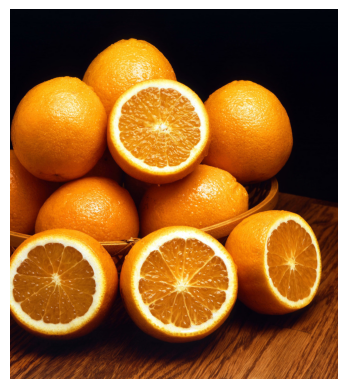

In [ ]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = """
/9j/4AAQSkZJRgABAgEASABIAAD/4R85RXhpZgAATU0AKgAAAAgABwESAAMAAAABAAEAAAEaAAUAAAABAAAAYgEbAAUAAAABAAAAagEoAAMAAAABAAIAAAExAAIAAAAbAAAAcgEyAAIAAAAUAAAAjYdpAAQAAAABAAAApAAAANAAAABIAAAAAQAAAEgAAAABQWRvYmUgUGhvdG9zaG9wIENTIFdpbmRvd3MAMjAwNTowMzoyMiAwNjo1MDoyMAAAAAAAA6ABAAMAAAABAAEAAKACAAQAAAABAAAHz6ADAAQAAAABAAAIzgAAAAAAAAAGAQMAAwAAAAEABgAAARoABQAAAAEAAAEeARsABQAAAAEAAAEmASgAAwAAAAEAAgAAAgEABAAAAAEAAAEuAgIABAAAAAEAAB4DAAAAAAAAAEgAAAABAAAASAAAAAH/2P/gABBKRklGAAECAQBIAEgAAP/tAAxBZG9iZV9DTQAB/+4ADkFkb2JlAGSAAAAAAf/bAIQADAgICAkIDAkJDBELCgsRFQ8MDA8VGBMTFRMTGBEMDAwMDAwRDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAENCwsNDg0QDg4QFA4ODhQUDg4ODhQRDAwMDAwREQwMDAwMDBEMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwM/8AAEQgAoACOAwEiAAIRAQMRAf/dAAQACf/EAT8AAAEFAQEBAQEBAAAAAAAAAAMAAQIEBQYHCAkKCwEAAQUBAQEBAQEAAAAAAAAAAQACAwQFBgcICQoLEAABBAEDAgQCBQcGCAUDDDMBAAIRAwQhEjEFQVFhEyJxgTIGFJGhsUIjJBVSwWIzNHKC0UMHJZJT8OHxY3M1FqKygyZEk1RkRcKjdDYX0lXiZfKzhMPTdePzRieUpIW0lcTU5PSltcXV5fVWZnaGlqa2xtbm9jdHV2d3h5ent8fX5/cRAAICAQIEBAMEBQYHBwYFNQEAAhEDITESBEFRYXEiEwUygZEUobFCI8FS0fAzJGLhcoKSQ1MVY3M08SUGFqKygwcmNcLSRJNUoxdkRVU2dGXi8rOEw9N14/NGlKSFtJXE1OT0pbXF1eX1VmZ2hpamtsbW5vYnN0dXZ3eHl6e3x//aAAwDAQACEQMRAD8A8tSTJJyF0kydJVKSSV3pvSOo9Ut9LBodc4fScNGt/wCMsd7GISnGIMpERiN5SNRXRiZGgLPg00y6xn+Lfr7q3u344c36DN7pf47T6fs/trH6t9XOr9I92bQW1HQXM99c+Be36Dv66gx85y2SXDDLCUv3b1P91klgyRFmJADlpJFJWGGlJJkklLpJkklLpJkklLpJkklP/9DyxJJTrrfa9tdbS+xxhrGgkk/yWtTiVUxSXQYP1F+smY0P+zjHDhI+0PFbv+2/dY3+2xTz/qF9Y8Kl1xpZkMZyaHbzH7wqc1lrmt/qKv8AfeV4uH3sfFt8w3ZfYyVfAfsav1a+r1nWcn3k14lZi2wck/6Ov+V+9+4vV+l9OxMHGZjYdQqqZw0fxn6b3fylh/V7Dqw8OrHq4a2Nw/OMy9/9ty6LHsA0iQI/3rnfiHNz5jNw2RiifTH/ALuX9Z1cXLDDjFD1keqX/ctsUmI2kg+Hkq+ZiVupdXcxrq7AWva5vtcD9Jrmu9r/AKSvUZNTLZcZPDY1Op9rtY3KGWXXCwUse879NkulsfS3fR/OUUsEBj4hL1XoFkZy4wCKHd8c+tv1a/Y+QLsaTg3O2sBMmt8bvRc4/TY7/Av/ALH5i51ez/WDoWXnYGRjuxXlttZ2uAJ2vHuqd7f3bQvG7K7K3ursaWWMO17HCHNI5a5rvorf+Gc1PNi4ch/WY9CTvOP6MmnzmGMJiWOuCfb9GX6UWCSeEgFoNRZJaA6B10iR07KPHFL+43N/NVKyt9b3V2NLHsMOa4EEEdnNKbHJCXyyEq/dPEuMZDcEebBJIpk5apJJJJT/AP/R846V02/qeYzFp0J9z3nhjB9Kxy9U+r/Qun9JpDcauLCP0lzoNjv6z/zf6jVzX1GwW04ZyXCH5DpnvtGjB/39dpXY0COAdPJc78X5ueTIcMSRihoQP05f1nY5PlhDEJkXOYu/3Y+Do49DXDkNB14J0UrsZzRIOk8DlNiZFWzkbhq4agn83R30FauvqdXtbBcR7RxP8rgN/tKrHBiOKyRxVe62Upiexq3AzsUVg5NLQ0tk3NA5B/wkf9WhUZTrLGMrBda4gBoJmZ9u1X8mwDcRq3+CD9Tsdlmfk5dhHo4ktYSdBpvc7+y1Mw4zklwXrYiJf3jTbOTgwynIXwjT/vXVcMPpTWOzj6+ZYCa8cfRBALtz9383uc3+dsVA9e6pa4htjMaNGMDQGHXhzrN3v/NVK12RkOsfdabt795Ih3P7sD1dn+j9n8ypsD3gsr2SZcGtI26e789x2Ws+h/wtas+9waYrhEaWP5yf9+bAMI3yVOXW/kj/AHYt5v1i6ocgsLmgssM0mrUt/wBG17Xn6Lf3vz1Hq/Qug/XDF9LLqGJ1UMmu1oi1sTt2u0+0U/6Sj8z/AIO33qsamgOexpNjtxdWfozE7tXe32j1P/RSlj2PoyGux3iu0uknaXvIP57ml3+u/wDmlLj5uXEDMmQve/XH+tCX6MmPJy8DH0gQIHQf9L+q+U5P1U6pjdfd0K5obkNJJtg+mavpfaQ6P5pzf/BP0P8AOLvvq19VumdNDbKq/Vyo1yLAC/8AlbG/4Fv/ABfv/wCEsXRfWanFy8fG61jgGR6bn6TtJ+g8/wDB3Klh2tbDtNCCfh/35D4jzeaZGEyqAoS4NBm/S4/7sofoJ5Tl4DEcgF5LI1/yZj+i6TMRuydAfMj+Kzet/VzpvVqjXnUB1jQQ25sC1n9S5v8A1Dv0X8hbWPdSZd7TM6zOnI9rSo5BbBeANBGn0ZHh/VVb2uCIyY5GM49Yn1eaOMmRjIWD+8+I/WT6uZHQ8prHO9bGuk0XREx9Kuxv5tjFjL1/6x9Mq6lh2YlsS/3VPPLbAPZZ/nfT/kLyKxj63ursG17CWuaeQRo4Le+Gc4eYxev+dx6T/rfuzafOcv7UgY/JPb+r3ixSSTq+1X//0qHR7m0YVFY4FbRH9kLSbmbjE8LnsQ2UYtVb3AvraGOI1Et9vdWG5UEGY8VzuXAJTkd7J1eihOoxG2gekozCBAP4x+KsV9Qe0BupH4LmmZc/D/Xuj15LWtGvzkhV5cuQv9Mtxbs5mYxmO8k9kb/F/e3L6L1NpfsNhtlwEwILN373tXJ9Y6j6eOWN5I5S/wAXf1jHTsx1dzv0FjiywHgBxmuyP629qs8vy5x4jlq+GUSf9nrCf/SYOZNxOKPzSHFH+9Axm9XUwOIABG0bi1steNY9n5tT3Nd/1xXMN2HU4eu19zaSXBr2jfrBbu2+5n/F/pFPqOE3FAvqg4Nkip7ZG0x+jqu2/m/4Ou1U2iywsNbPUsbqNrQCAO7drd/t3+/1VXNxIBAPUfpRmP3v60ZIsZI2CaP+DTq5lmFlUlrGB1jCCA1pMkfSe5x9rvZ7f0f6RZ1jdros1pfqNsieNvpvcPW9X8z/ANKofqua1gaPTcC6XuhsEbW/u7X/APFsRsTHbn5Ix2WhzrTuJJ3Fu2XFzX/1foM/RpxJnMEAcUqjwx0s9PSsjD24myeEWddaT9QsaPqk5zi7d6pEuduJIf8AvbK/+oWBiZYLRBGvZT+u/V8eiunouA4mqgh1zpkl7v3n/nv/AD3rCxMlwGp07qTLi4xxabRiCP0uCMY8TNyoqBsVxylko9BL5Xq8fOLDwHAz8Af3vb9JWH9Q9Rolw04lcyzLh07kQ58g6z8+f6yrHFPYHRkOOBNkat/OyGxIK8w+sNQr6zlBogPf6n/bgFp/6T12uXmtDdTquG6zkjJ6ldaDI0aD/VAYtT4RilCcj0Mdf8aNNL4mY+1EdRLT7JNJJJJbTkP/0+azHuw8l7XCWyQ8eBH5wQvXYYIcCDwRwrnWqw+xzxrJnXXn/qlztosrcdji34LLwwjkiDsXcyS4TtYduq0bgN4kdpEq024sYTMLn8CjqfULhXjgGNDYRoP7S6rA+qLHAHPtfkfyCS1n+aNqi5n2sP8AOTF/uxHFJkwzMxcYGv3pekPL9TzW3u9Njtw/OdP/AEWqlj3vxbhbXrGjm9iO7V6Q76q9MdUWtx2CByAuX639WPQ3OoG2Ow4UnLc/y8/1dGIOnq/SYc3L5STkjISlHav0XoPqv9e34dQpt/WsI6FjjLmfyNp/dXVNyPq71h5uxc8Yu4DdQQA0aR7GTW5v8teJRbjWRqxw7g8hW6c3IdoYdHcp2XkBXokDju+Gesfpw8Eo/wDU8kGKGWM5XISxZtpGHX+9GT7M/p+Ayguyep01ukSfpAgN2/4R7Xu4a/8AkLG6n9ben9PodjdGJuyLB6dmc/v/ACaWf+Q/trzwXZbzDQAPzSdStfo/SbbrW23EveYDSdYn91rf++tVaWCOMcUjEaV6OLin/jzyf8xnhj4jqZTG/q4Yw+yPzN+j6unqZGS7KsruIn3ND266v09j/e7/AIRFyegdWwazZsbk1NEl9M7gB9Imh/6T2/8AB+ouz6V0yirCY8va+wtBcBoACNG7nfSd/VRMhrayWTABkRzPG5VcmTPCIlLhMP0Y6aD+9Fd744zGH1t8xdmsiQ4EHghQ+3tLfpAeXdX/AK4/Vx9LLusYB21kmy/GgQGjax2RVsHt93vtY7/jFxLr8j96IEnyWjy2LHzGMThLwkDvGX7rDm5rglRifo6vU+p7GbQf0jvojuP5blhFX+pdPsxKsd1gPq3NLng6nhv0v+kqC0OXhCMBwa318tHP5qc5TqQqth5rJJymU7Xf/9TDzDMrIZ09+bmtx2na062O8Gq5dkAA68cCQSp9CuZ6lthMOe7aPg0bv+/LIiZY8cpR3A083flwzkAer0/TMHGxKm11tDa2QABytrEDbHQTB8T2n6Kxsb7QWfQefCAVabeaiHOBaeIIIn/qVkSszJkeI22JRBjQ07PQV47HVl3AYNRp9H2+72/FY/Ucem4GRoJB4klL9olxAsG+NORI/wA5Buyht0dydxHf8E6cokR4I0R1YsWKcZEkvBfWXpnoza0fR108O6odNpLyA3uup681luPYPFp/IsDozmNawkwTEePyWxgzSlyuupiWHJiiOYEv3o/k7mB0xpgkAkrosGsUCW8gFsd9f3FXwOn9StrBZjPAOo3Q0/5r/cr56V1lnu+zOJH7paT/ANUsrNllOR9Q+1s8WOIriiPMt1ufc0Gs2bmEyNwET+8zcPamdkbhM6nU+Mz3WSW5mu+p9YZ9J1sVgEdpsKHb1HEoaRbk+qQP5vHEj+1fbtZ/0FEceSfUy7daRwYxqK+jP6w5DnYGRTWCbrKbGMrYNznFzYDWtb9JcZgdCGG9lvUG+tlM1rwKv0jt3PqZbmb2t/4tdtgY1mS0XWs9Cp4ltYJ3uH791v0/d/oqvT/4RbGNjsrHp0saxo12sAb/AGtNqlxc2eXhLDAcXEfWQa/weJhzY4GQkf0Bp+75vlnUMTrV+Q69+DkkxyKbNvwb7foMWXYfcWWNl45Y4Q4fFrvc1e2Z2bg9HZWchn2nKe6TjscG7G6O3WaO2v2u/m/z1kX5fR/rFS7D6/jU4z3EjGz6dDU78ze6ybGe78/+Yf8A4VaWDnJgRE8cYaaREj7n+Lw8P+DxtOeOUrnESlH949f7o/SfKPsgeBENceyh9gsjdps/ent+9xuWz1rpOf0bqF/TstrTZVzYdA9h1rtr/wCDf+7++qAc5tZ9ur9Z1iB/J+kr3vHh4r9O/wBGH2ob142//9XJ6JiZvX8n0XUVZNLTFtr6xu4+ix7PT9+3878xdZidL+qP1eecW+6uvJALzTUHPeTH0TZD373f4Nj3VqzTZgfVDoOPQ1m7MuZ7Ggw8ujc+x7oe5tde7f8AQ/nVxgrkF7S55mXudqST7t7nfyn/AMpYc4xIuV8MtY4bMYcP6Msgj+nJ14ylO6JiI+n3B88z+lwy/Rg9hjfWT6sXWsrNGRUHkNFr2jaCTt/SbbHvatKjG6b1Flp6Xm15JrMWVhwdHaHD/v8At964NoDSHmCC3cO4mPT2Od+81yliPvwcqnOos9N1L2kPbILgNbKf5db/AKFm79Gohj5aWk8Yj/Wh6ZBMoZBrDJK+0vXF3uo9NdU8hn6CxvMj2wPn7Vh2dQ6cwlrs9jXtJDm+jbIcPa5rm7F24ysT6x9JOfjN2X1S22lxBLHN+lU+Ppez9JU//Rrzf659Prra3qlEjUV3tH53+jef5Wnpb/8Ai03HgEeY9jISYy1xTH6QPy7s0OYlLCZjSWPTJFsY9VHV734DHF7iA45NJc1jKoLXufVfW2xtjneyr3f2NnqLsPqn9TMHBYHUsJj6WTZDrXfyWabamf8AFrG+ovSRXi0VBu2/Li7IJMkz7mt/sVu+j/XWr9Z+p2X3fs/De6vFwjtt2ks9Wwe2z6H066f/AD5+kTiYynkiTL7riIjwA8P3jJ4n9xjyccjGI0ySjxGR/wAlA/8AdOnn/WbDwLDi9NoF1rfab3asDphzQ0H1LbG/nN/RqpX9dOrOrIdi07mWbX2gv2BsboMbvdp9Pcshn60C+0E3wPX0jfppa7j3Pb+ft9T/AIxGIJB9QEO5bta1pIDdhBG33+z85L75OJIhWOPSEAIxUOUxUOKPHLrKRJlbqszvq/8AWSsYXVaG4+UfbU6Ya53G/GuHur9/83v/APBFx3Vvqr1Po/XaKsiz1+kucXV3RBLmjczHyPzd27932X1/9trYdVU6pzriba4I9NpLS5+v57hs2sd/O3f4JbfTOpjr1NvSOp11tv2E0W1nc1wr2iwavf8Ap6nO3t9/83+kT8eQ5Iy4RGOUg1p6cun/ADM37k1soe1KMgZHFE3OF/J/d/q/vwcyi+Rrz5laWDkM3lx921rnR4hjXWOa7/MXPuu+z3OouO2ytxafv+l/aWj0ewW5hGOSbTVbs26Hd6b9u2PzlnY8f6yGmhlH/nFt54g45n+qS5Nr35OTdkPO+y57nvPiefD91Kyga+0kOMQBJPfb/aenxHAOZ6haADBLiABC0Ot4rccYzarGua6rcwtMFzeNzFNcjInU9ygmIIjte30cH601MzPq7j5rybMvpFwxsjkudRdLsUPtP0213M9JcdutLvUH84NSY0/d2ru30h3ROtUQROJ6vuIDZqtpsbx/WXEEMDm7p2mSyOY4dc5aeLJfLyPURl+X/oPE05QrLXTiGnn6v+6f/9af1rym5fXsj1Kw37PGOx2ocWs936Rp3Nf+kfvrd+5Ys+pgJaRubJiW7SD4j833/wDBrR+smDk0dZy7cljvQtt9Sq959j2vh+wfnO9L+b2V+9iyzc0Oitpa4aF8k6TIA3fmrDy2ZSvu7OKuCNbUHabg4R6O57PZm1PBsa46FrjAlmvj6n6P+2se5gBBsdJI5aCPvnapMuLXkR9Gd3mSW7p/zdii+zy3VxoDrAOvP8lRVqPJeLo2bs3/AGPQ/UDIqbnZmMS7fdUx7RDdhFR2O493q/pv8xYX1ydXXi5uNIgv2j/Oa4Le+pFVTbc7qLtzTRUK9P5sh36Z8/neoz0mf5689+tXVX5mRYA6RZYX6eE+1WIYzly8v/UBmf8AH9P/AEZsUZiB5iR2MYx/wuF9L+pb2OyrXn6NVe4d4A/3LNF/TrX+tSyxrbCXjeR6mvv2ulttKo/4uOr1HOrpyCC3JrNRB8Y/78tXJ6YcG2/GNTmtpJbXc/8AOY33NtsuP0n+nt/RY7N9irTxnHAw0uOSX/OhGv8AG9ubJxRlmlK/nhEx8vVbHEqa69gri17tCxh3OLT+Z6bmh1bmfTZ/g1t5vSnU4vqhrriyCGMkGSXb9xP0Gu/R7v8ARVrm/tljX1sZt3EtLTs2gO+ludTDd9tP5jrP+20XI61lZjAMyLGEmGtEFrm7XMc3VrXu2u/SNf8AzqiGOFEmzIj09h3XT9wyjwkCI+buvlV3PcbMmxjSBBcwO4AljGVN/wAH+Z/o1PoNjcbreHtbLnWljyxwj3Nez3F7PzZ3/ovpqm7duDxY5o7w8tEgfmOG+vbuWx9V777epNNtDTi41Dnm0tktfO2pwteXvbbZ+lb6bX/2FJgFZImwKNknpw7ozGsUtLHCRXm8p9csp1H1nzaW8HY5o8JbB/6lN9W+sW4vVce92rGvAeCfzT7XLB+tnU25n1pz763y0Wem0/1Bsd/01VoyHNIIdqFdHLfqIacJMInb5fSshmEhwE3Xol9PSXu83DPTcu3FBDvSJbUfEOG+uz/tr3oN91tgayxxc1nsaHSdoAH0R+arnR+o4f1hwaMLNubj5+HpTc7Vtlf+hs/765GZ9WutPucy6kViQ51z3jYZn3Ne3c6z2qlLGQTQ8x+75sgyRFcZAkO+nF/Wi0LCcb6udXtPurvrqxGMk+6yx+7b/Yq3O/qLj/aHhrXDefa+yfLRv9T8xb31w60Jxfq5gWC9nT9zsi1ugN7ifZ+7+rsdtXNMbZssskTuDZ7TO3d+9t/N3q5CBHLGRO8CRfY/y9LD7gOQn+t/0fS//9e99X+s9P8Arh0SrpefaKOp4sbH6SXAbBYA7+c3t/na1nZf1f6vg2XOuxXmjHBebmgPrLAY3NLfd7/3f8GvOabrqLRbS412NMgtMFdj0n/Gj1jDa2vLa3KY3846OWfm5OQPpBnHpXzxH7vq+eMW9jz1sRG94y+W+soS/R4mbXiXEndDJgTETta7j6C1Ol9A6l1HH9aoNpo7XXEhp7O2MA3v2/v/AM2k7/G5QR/QnbuDJbqP3fpLA6z/AIw+qdQa+uk/Zqn6ENMuj92dNqgHK5CdMcv8KoR/7plPMabxj48XH+Du/Wj6wYPR+l/sDpNpseQftV40LnO/nHO2/v8A0f6i83uudbY6xxknxStufYSSeefEocFaPL8uMQJOszuf2NXLm4vTG+G7/vS/edLo3ULMW9mx5a9jg+t3gQvXWZVX1x6PS7HcxvUsSfVpeOQQG2hln+C9X2ursb/UXiAkEEaHsVrdK6/m9OvbdRYarG8Pb/35qi5nljImcACZDhnHbjH8vlX4cwqMZHhlA3Ce9eEnv3YdtPr0urIfSA21jtHMc9wYHOH51e13859DYo1M3bmMBcH+6rwO3+d4/Odjndt/0afpf+NWt9Zr6rji3cNrn1iQ4RG1zT/1Ks0/XX6kY1zcynDNWQwezbvAGm3Sv+ab7FmHliJa8cfPHOX44fcjJuDPKj6QexjOPCf8fg4Vun4Obk5JxaKzYwWA2Ng7NjXe8+oXD0nfubXeon+un1l6d9Xum3dL6NAyslxc+wakOd3/ALLf8xZXWf8AGo59DsfpVIxw6fowNT3O1cOXX5+Q6/JeXvdJe86x5aqzg5Q7zBGP9IzFTyf6uMP0Mf7/AO+w5MpkdCOL9GETxRjL9/JL5ZS/cc4zM6z4ojMmxnmr7sKraHnQOHtHl+9/aT09FutY2w+0PEgd9v760Tmxkerbxa8cOUH0HVDV1bIqILBDhwZIP4K1Z9ZPrFmV/ZnZ13pEAFjHECBw2R7kTE6C279I7cKvzPFw43/+RWljdJpYwtp9h53iHflVbJk5YG/bEpDrIXws0ceeXzTPD2DQwcRtLIcAHRIaf4/2lbc0sqYQXD1QXHTs3i3/AD/0v/FsVhuIKyaXavJBtsOgDG/S/wA1rv8At5//AAah67nX+ttks/N7bT+Z/wBtfo/671D7hMuK9vVbPwAR4a3HDT//0PPX4N+/02tJsidvfb+/Z+43+QhPw8hji0tJc36UcAn83+sujeyqqo/Z/wBFjj22XxLnPn6FDf8ADX/8K5ANTm17yz02gxVQ0y1k8vtf9K27/v6qx5iXYftb8uXh3Lz/AKNkkbTpypDFtPbz+S3G4Zge0isGNRq4j/qGItdDIdaZIn2xw9w7Dd/gqk88z2CyPKx6kuH9ieyA8QT28jwndjtGv4BaxAbD7AXPd7nawdex/cSbQXFzns2iOD+876Mbv3Gt3pvvncrvZjsHDdS76RCh6bvBdBXgm521levJedAAOfc781v0kX9m1S0BhcD7mMcIL/8Auxf/AKLH/wBFWj96A3CPut9Xmdsa8BPsOkjldIcDFY4u9tjzI9WJYP5NFQ91r/8AX1ERnSm7ZNJPEh3844n6FW76NXqfnf8ABJHnI9ij7me7g42Fbc4ACJEiew/0jv8Avq06catjWNM+m4lrRGr4jt+5u/z1sfY6mUudAe0QbSOHvnayto/0TI/Rs/8AUiJjsb6pybAA97QGt4Lam++f5Lf/AFZ/hFXycyZ9NA2YYIwaNfSQ/XIB9QumxzfAf4Bn9X2q0MT1bvs50YNcjb4H6OOP6zf+grrwcaoPrYDZYWsx6u5efzv5Lf5SJTjnHpLXz6j5dZZxLjy5n/otV5TkdSf7rMIgaD6tO1gDvTGjPAaAR7dqdzjVXuGrhECPH/yKd23cXOPtYDuA7ADhv8pDcwvdLtGwDf8AyWuDfYP6lX6L/jbE0Duq2Dg4VkNEm4Tqddg/mh/Wts3W2IBa4xUPpN9znAcuIlp/qf4T+p6SNO+0vd7NpHtBkNMT6Y/e2VfS/wCFUId68g7Tu92ujnkx6W79z9H6P/W08BFv/9n/7SPyUGhvdG9zaG9wIDMuMAA4QklNBCUAAAAAABAAAAAAAAAAAAAAAAAAAAAAOEJJTQPtAAAAAAAQAEgAAAABAAEASAAAAAEAAThCSU0EJgAAAAAADgAAAAAAAAAAAAA/gAAAOEJJTQQNAAAAAAAEAAAAeDhCSU0EGQAAAAAABAAAAB44QklNA/MAAAAAAAkAAAAAAAAAAAEAOEJJTQQKAAAAAAABAAA4QklNJxAAAAAAAAoAAQAAAAAAAAACOEJJTQP1AAAAAABIAC9mZgABAGxmZgAGAAAAAAABAC9mZgABAKGZmgAGAAAAAAABADIAAAABAFoAAAAGAAAAAAABADUAAAABAC0AAAAGAAAAAAABOEJJTQP4AAAAAABwAAD/////////////////////////////A+gAAAAA/////////////////////////////wPoAAAAAP////////////////////////////8D6AAAAAD/////////////////////////////A+gAADhCSU0EAAAAAAAAAgAAOEJJTQQCAAAAAAACAAA4QklNBAgAAAAAABAAAAABAAACQAAAAkAAAAAAOEJJTQQeAAAAAAAEAAAAADhCSU0EGgAAAAADSQAAAAYAAAAAAAAAAAAACM4AAAfPAAAACgBVAG4AdABpAHQAbABlAGQALQAxAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAfPAAAIzgAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAABAAAAABAAAAAAAAbnVsbAAAAAIAAAAGYm91bmRzT2JqYwAAAAEAAAAAAABSY3QxAAAABAAAAABUb3AgbG9uZwAAAAAAAAAATGVmdGxvbmcAAAAAAAAAAEJ0b21sb25nAAAIzgAAAABSZ2h0bG9uZwAAB88AAAAGc2xpY2VzVmxMcwAAAAFPYmpjAAAAAQAAAAAABXNsaWNlAAAAEgAAAAdzbGljZUlEbG9uZwAAAAAAAAAHZ3JvdXBJRGxvbmcAAAAAAAAABm9yaWdpbmVudW0AAAAMRVNsaWNlT3JpZ2luAAAADWF1dG9HZW5lcmF0ZWQAAAAAVHlwZWVudW0AAAAKRVNsaWNlVHlwZQAAAABJbWcgAAAABmJvdW5kc09iamMAAAABAAAAAAAAUmN0MQAAAAQAAAAAVG9wIGxvbmcAAAAAAAAAAExlZnRsb25nAAAAAAAAAABCdG9tbG9uZwAACM4AAAAAUmdodGxvbmcAAAfPAAAAA3VybFRFWFQAAAABAAAAAAAAbnVsbFRFWFQAAAABAAAAAAAATXNnZVRFWFQAAAABAAAAAAAGYWx0VGFnVEVYVAAAAAEAAAAAAA5jZWxsVGV4dElzSFRNTGJvb2wBAAAACGNlbGxUZXh0VEVYVAAAAAEAAAAAAAlob3J6QWxpZ25lbnVtAAAAD0VTbGljZUhvcnpBbGlnbgAAAAdkZWZhdWx0AAAACXZlcnRBbGlnbmVudW0AAAAPRVNsaWNlVmVydEFsaWduAAAAB2RlZmF1bHQAAAALYmdDb2xvclR5cGVlbnVtAAAAEUVTbGljZUJHQ29sb3JUeXBlAAAAAE5vbmUAAAAJdG9wT3V0c2V0bG9uZwAAAAAAAAAKbGVmdE91dHNldGxvbmcAAAAAAAAADGJvdHRvbU91dHNldGxvbmcAAAAAAAAAC3JpZ2h0T3V0c2V0bG9uZwAAAAAAOEJJTQQoAAAAAAAMAAAAAT/wAAAAAAAAOEJJTQQUAAAAAAAEAAAAAzhCSU0EDAAAAAAeHwAAAAEAAACOAAAAoAAAAawAAQuAAAAeAwAYAAH/2P/gABBKRklGAAECAQBIAEgAAP/tAAxBZG9iZV9DTQAB/+4ADkFkb2JlAGSAAAAAAf/bAIQADAgICAkIDAkJDBELCgsRFQ8MDA8VGBMTFRMTGBEMDAwMDAwRDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAENCwsNDg0QDg4QFA4ODhQUDg4ODhQRDAwMDAwREQwMDAwMDBEMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwM/8AAEQgAoACOAwEiAAIRAQMRAf/dAAQACf/EAT8AAAEFAQEBAQEBAAAAAAAAAAMAAQIEBQYHCAkKCwEAAQUBAQEBAQEAAAAAAAAAAQACAwQFBgcICQoLEAABBAEDAgQCBQcGCAUDDDMBAAIRAwQhEjEFQVFhEyJxgTIGFJGhsUIjJBVSwWIzNHKC0UMHJZJT8OHxY3M1FqKygyZEk1RkRcKjdDYX0lXiZfKzhMPTdePzRieUpIW0lcTU5PSltcXV5fVWZnaGlqa2xtbm9jdHV2d3h5ent8fX5/cRAAICAQIEBAMEBQYHBwYFNQEAAhEDITESBEFRYXEiEwUygZEUobFCI8FS0fAzJGLhcoKSQ1MVY3M08SUGFqKygwcmNcLSRJNUoxdkRVU2dGXi8rOEw9N14/NGlKSFtJXE1OT0pbXF1eX1VmZ2hpamtsbW5vYnN0dXZ3eHl6e3x//aAAwDAQACEQMRAD8A8tSTJJyF0kydJVKSSV3pvSOo9Ut9LBodc4fScNGt/wCMsd7GISnGIMpERiN5SNRXRiZGgLPg00y6xn+Lfr7q3u344c36DN7pf47T6fs/trH6t9XOr9I92bQW1HQXM99c+Be36Dv66gx85y2SXDDLCUv3b1P91klgyRFmJADlpJFJWGGlJJkklLpJkklLpJkklLpJkklP/9DyxJJTrrfa9tdbS+xxhrGgkk/yWtTiVUxSXQYP1F+smY0P+zjHDhI+0PFbv+2/dY3+2xTz/qF9Y8Kl1xpZkMZyaHbzH7wqc1lrmt/qKv8AfeV4uH3sfFt8w3ZfYyVfAfsav1a+r1nWcn3k14lZi2wck/6Ov+V+9+4vV+l9OxMHGZjYdQqqZw0fxn6b3fylh/V7Dqw8OrHq4a2Nw/OMy9/9ty6LHsA0iQI/3rnfiHNz5jNw2RiifTH/ALuX9Z1cXLDDjFD1keqX/ctsUmI2kg+Hkq+ZiVupdXcxrq7AWva5vtcD9Jrmu9r/AKSvUZNTLZcZPDY1Op9rtY3KGWXXCwUse879NkulsfS3fR/OUUsEBj4hL1XoFkZy4wCKHd8c+tv1a/Y+QLsaTg3O2sBMmt8bvRc4/TY7/Av/ALH5i51ez/WDoWXnYGRjuxXlttZ2uAJ2vHuqd7f3bQvG7K7K3ursaWWMO17HCHNI5a5rvorf+Gc1PNi4ch/WY9CTvOP6MmnzmGMJiWOuCfb9GX6UWCSeEgFoNRZJaA6B10iR07KPHFL+43N/NVKyt9b3V2NLHsMOa4EEEdnNKbHJCXyyEq/dPEuMZDcEebBJIpk5apJJJJT/AP/R846V02/qeYzFp0J9z3nhjB9Kxy9U+r/Qun9JpDcauLCP0lzoNjv6z/zf6jVzX1GwW04ZyXCH5DpnvtGjB/39dpXY0COAdPJc78X5ueTIcMSRihoQP05f1nY5PlhDEJkXOYu/3Y+Do49DXDkNB14J0UrsZzRIOk8DlNiZFWzkbhq4agn83R30FauvqdXtbBcR7RxP8rgN/tKrHBiOKyRxVe62Upiexq3AzsUVg5NLQ0tk3NA5B/wkf9WhUZTrLGMrBda4gBoJmZ9u1X8mwDcRq3+CD9Tsdlmfk5dhHo4ktYSdBpvc7+y1Mw4zklwXrYiJf3jTbOTgwynIXwjT/vXVcMPpTWOzj6+ZYCa8cfRBALtz9383uc3+dsVA9e6pa4htjMaNGMDQGHXhzrN3v/NVK12RkOsfdabt795Ih3P7sD1dn+j9n8ypsD3gsr2SZcGtI26e789x2Ws+h/wtas+9waYrhEaWP5yf9+bAMI3yVOXW/kj/AHYt5v1i6ocgsLmgssM0mrUt/wBG17Xn6Lf3vz1Hq/Qug/XDF9LLqGJ1UMmu1oi1sTt2u0+0U/6Sj8z/AIO33qsamgOexpNjtxdWfozE7tXe32j1P/RSlj2PoyGux3iu0uknaXvIP57ml3+u/wDmlLj5uXEDMmQve/XH+tCX6MmPJy8DH0gQIHQf9L+q+U5P1U6pjdfd0K5obkNJJtg+mavpfaQ6P5pzf/BP0P8AOLvvq19VumdNDbKq/Vyo1yLAC/8AlbG/4Fv/ABfv/wCEsXRfWanFy8fG61jgGR6bn6TtJ+g8/wDB3Klh2tbDtNCCfh/35D4jzeaZGEyqAoS4NBm/S4/7sofoJ5Tl4DEcgF5LI1/yZj+i6TMRuydAfMj+Kzet/VzpvVqjXnUB1jQQ25sC1n9S5v8A1Dv0X8hbWPdSZd7TM6zOnI9rSo5BbBeANBGn0ZHh/VVb2uCIyY5GM49Yn1eaOMmRjIWD+8+I/WT6uZHQ8prHO9bGuk0XREx9Kuxv5tjFjL1/6x9Mq6lh2YlsS/3VPPLbAPZZ/nfT/kLyKxj63ursG17CWuaeQRo4Le+Gc4eYxev+dx6T/rfuzafOcv7UgY/JPb+r3ixSSTq+1X//0qHR7m0YVFY4FbRH9kLSbmbjE8LnsQ2UYtVb3AvraGOI1Et9vdWG5UEGY8VzuXAJTkd7J1eihOoxG2gekozCBAP4x+KsV9Qe0BupH4LmmZc/D/Xuj15LWtGvzkhV5cuQv9Mtxbs5mYxmO8k9kb/F/e3L6L1NpfsNhtlwEwILN373tXJ9Y6j6eOWN5I5S/wAXf1jHTsx1dzv0FjiywHgBxmuyP629qs8vy5x4jlq+GUSf9nrCf/SYOZNxOKPzSHFH+9Axm9XUwOIABG0bi1steNY9n5tT3Nd/1xXMN2HU4eu19zaSXBr2jfrBbu2+5n/F/pFPqOE3FAvqg4Nkip7ZG0x+jqu2/m/4Ou1U2iywsNbPUsbqNrQCAO7drd/t3+/1VXNxIBAPUfpRmP3v60ZIsZI2CaP+DTq5lmFlUlrGB1jCCA1pMkfSe5x9rvZ7f0f6RZ1jdros1pfqNsieNvpvcPW9X8z/ANKofqua1gaPTcC6XuhsEbW/u7X/APFsRsTHbn5Ix2WhzrTuJJ3Fu2XFzX/1foM/RpxJnMEAcUqjwx0s9PSsjD24myeEWddaT9QsaPqk5zi7d6pEuduJIf8AvbK/+oWBiZYLRBGvZT+u/V8eiunouA4mqgh1zpkl7v3n/nv/AD3rCxMlwGp07qTLi4xxabRiCP0uCMY8TNyoqBsVxylko9BL5Xq8fOLDwHAz8Af3vb9JWH9Q9Rolw04lcyzLh07kQ58g6z8+f6yrHFPYHRkOOBNkat/OyGxIK8w+sNQr6zlBogPf6n/bgFp/6T12uXmtDdTquG6zkjJ6ldaDI0aD/VAYtT4RilCcj0Mdf8aNNL4mY+1EdRLT7JNJJJJbTkP/0+azHuw8l7XCWyQ8eBH5wQvXYYIcCDwRwrnWqw+xzxrJnXXn/qlztosrcdji34LLwwjkiDsXcyS4TtYduq0bgN4kdpEq024sYTMLn8CjqfULhXjgGNDYRoP7S6rA+qLHAHPtfkfyCS1n+aNqi5n2sP8AOTF/uxHFJkwzMxcYGv3pekPL9TzW3u9Njtw/OdP/AEWqlj3vxbhbXrGjm9iO7V6Q76q9MdUWtx2CByAuX639WPQ3OoG2Ow4UnLc/y8/1dGIOnq/SYc3L5STkjISlHav0XoPqv9e34dQpt/WsI6FjjLmfyNp/dXVNyPq71h5uxc8Yu4DdQQA0aR7GTW5v8teJRbjWRqxw7g8hW6c3IdoYdHcp2XkBXokDju+Gesfpw8Eo/wDU8kGKGWM5XISxZtpGHX+9GT7M/p+Ayguyep01ukSfpAgN2/4R7Xu4a/8AkLG6n9ben9PodjdGJuyLB6dmc/v/ACaWf+Q/trzwXZbzDQAPzSdStfo/SbbrW23EveYDSdYn91rf++tVaWCOMcUjEaV6OLin/jzyf8xnhj4jqZTG/q4Yw+yPzN+j6unqZGS7KsruIn3ND266v09j/e7/AIRFyegdWwazZsbk1NEl9M7gB9Imh/6T2/8AB+ouz6V0yirCY8va+wtBcBoACNG7nfSd/VRMhrayWTABkRzPG5VcmTPCIlLhMP0Y6aD+9Fd744zGH1t8xdmsiQ4EHghQ+3tLfpAeXdX/AK4/Vx9LLusYB21kmy/GgQGjax2RVsHt93vtY7/jFxLr8j96IEnyWjy2LHzGMThLwkDvGX7rDm5rglRifo6vU+p7GbQf0jvojuP5blhFX+pdPsxKsd1gPq3NLng6nhv0v+kqC0OXhCMBwa318tHP5qc5TqQqth5rJJymU7Xf/9TDzDMrIZ09+bmtx2na062O8Gq5dkAA68cCQSp9CuZ6lthMOe7aPg0bv+/LIiZY8cpR3A083flwzkAer0/TMHGxKm11tDa2QABytrEDbHQTB8T2n6Kxsb7QWfQefCAVabeaiHOBaeIIIn/qVkSszJkeI22JRBjQ07PQV47HVl3AYNRp9H2+72/FY/Ucem4GRoJB4klL9olxAsG+NORI/wA5Buyht0dydxHf8E6cokR4I0R1YsWKcZEkvBfWXpnoza0fR108O6odNpLyA3uup681luPYPFp/IsDozmNawkwTEePyWxgzSlyuupiWHJiiOYEv3o/k7mB0xpgkAkrosGsUCW8gFsd9f3FXwOn9StrBZjPAOo3Q0/5r/cr56V1lnu+zOJH7paT/ANUsrNllOR9Q+1s8WOIriiPMt1ufc0Gs2bmEyNwET+8zcPamdkbhM6nU+Mz3WSW5mu+p9YZ9J1sVgEdpsKHb1HEoaRbk+qQP5vHEj+1fbtZ/0FEceSfUy7daRwYxqK+jP6w5DnYGRTWCbrKbGMrYNznFzYDWtb9JcZgdCGG9lvUG+tlM1rwKv0jt3PqZbmb2t/4tdtgY1mS0XWs9Cp4ltYJ3uH791v0/d/oqvT/4RbGNjsrHp0saxo12sAb/AGtNqlxc2eXhLDAcXEfWQa/weJhzY4GQkf0Bp+75vlnUMTrV+Q69+DkkxyKbNvwb7foMWXYfcWWNl45Y4Q4fFrvc1e2Z2bg9HZWchn2nKe6TjscG7G6O3WaO2v2u/m/z1kX5fR/rFS7D6/jU4z3EjGz6dDU78ze6ybGe78/+Yf8A4VaWDnJgRE8cYaaREj7n+Lw8P+DxtOeOUrnESlH949f7o/SfKPsgeBENceyh9gsjdps/ent+9xuWz1rpOf0bqF/TstrTZVzYdA9h1rtr/wCDf+7++qAc5tZ9ur9Z1iB/J+kr3vHh4r9O/wBGH2ob142//9XJ6JiZvX8n0XUVZNLTFtr6xu4+ix7PT9+3878xdZidL+qP1eecW+6uvJALzTUHPeTH0TZD373f4Nj3VqzTZgfVDoOPQ1m7MuZ7Ggw8ujc+x7oe5tde7f8AQ/nVxgrkF7S55mXudqST7t7nfyn/AMpYc4xIuV8MtY4bMYcP6Msgj+nJ14ylO6JiI+n3B88z+lwy/Rg9hjfWT6sXWsrNGRUHkNFr2jaCTt/SbbHvatKjG6b1Flp6Xm15JrMWVhwdHaHD/v8At964NoDSHmCC3cO4mPT2Od+81yliPvwcqnOos9N1L2kPbILgNbKf5db/AKFm79Gohj5aWk8Yj/Wh6ZBMoZBrDJK+0vXF3uo9NdU8hn6CxvMj2wPn7Vh2dQ6cwlrs9jXtJDm+jbIcPa5rm7F24ysT6x9JOfjN2X1S22lxBLHN+lU+Ppez9JU//Rrzf659Prra3qlEjUV3tH53+jef5Wnpb/8Ai03HgEeY9jISYy1xTH6QPy7s0OYlLCZjSWPTJFsY9VHV734DHF7iA45NJc1jKoLXufVfW2xtjneyr3f2NnqLsPqn9TMHBYHUsJj6WTZDrXfyWabamf8AFrG+ovSRXi0VBu2/Li7IJMkz7mt/sVu+j/XWr9Z+p2X3fs/De6vFwjtt2ks9Wwe2z6H066f/AD5+kTiYynkiTL7riIjwA8P3jJ4n9xjyccjGI0ySjxGR/wAlA/8AdOnn/WbDwLDi9NoF1rfab3asDphzQ0H1LbG/nN/RqpX9dOrOrIdi07mWbX2gv2BsboMbvdp9Pcshn60C+0E3wPX0jfppa7j3Pb+ft9T/AIxGIJB9QEO5bta1pIDdhBG33+z85L75OJIhWOPSEAIxUOUxUOKPHLrKRJlbqszvq/8AWSsYXVaG4+UfbU6Ya53G/GuHur9/83v/APBFx3Vvqr1Po/XaKsiz1+kucXV3RBLmjczHyPzd27932X1/9trYdVU6pzriba4I9NpLS5+v57hs2sd/O3f4JbfTOpjr1NvSOp11tv2E0W1nc1wr2iwavf8Ap6nO3t9/83+kT8eQ5Iy4RGOUg1p6cun/ADM37k1soe1KMgZHFE3OF/J/d/q/vwcyi+Rrz5laWDkM3lx921rnR4hjXWOa7/MXPuu+z3OouO2ytxafv+l/aWj0ewW5hGOSbTVbs26Hd6b9u2PzlnY8f6yGmhlH/nFt54g45n+qS5Nr35OTdkPO+y57nvPiefD91Kyga+0kOMQBJPfb/aenxHAOZ6haADBLiABC0Ot4rccYzarGua6rcwtMFzeNzFNcjInU9ygmIIjte30cH601MzPq7j5rybMvpFwxsjkudRdLsUPtP0213M9JcdutLvUH84NSY0/d2ru30h3ROtUQROJ6vuIDZqtpsbx/WXEEMDm7p2mSyOY4dc5aeLJfLyPURl+X/oPE05QrLXTiGnn6v+6f/9af1rym5fXsj1Kw37PGOx2ocWs936Rp3Nf+kfvrd+5Ys+pgJaRubJiW7SD4j833/wDBrR+smDk0dZy7cljvQtt9Sq959j2vh+wfnO9L+b2V+9iyzc0Oitpa4aF8k6TIA3fmrDy2ZSvu7OKuCNbUHabg4R6O57PZm1PBsa46FrjAlmvj6n6P+2se5gBBsdJI5aCPvnapMuLXkR9Gd3mSW7p/zdii+zy3VxoDrAOvP8lRVqPJeLo2bs3/AGPQ/UDIqbnZmMS7fdUx7RDdhFR2O493q/pv8xYX1ydXXi5uNIgv2j/Oa4Le+pFVTbc7qLtzTRUK9P5sh36Z8/neoz0mf5689+tXVX5mRYA6RZYX6eE+1WIYzly8v/UBmf8AH9P/AEZsUZiB5iR2MYx/wuF9L+pb2OyrXn6NVe4d4A/3LNF/TrX+tSyxrbCXjeR6mvv2ulttKo/4uOr1HOrpyCC3JrNRB8Y/78tXJ6YcG2/GNTmtpJbXc/8AOY33NtsuP0n+nt/RY7N9irTxnHAw0uOSX/OhGv8AG9ubJxRlmlK/nhEx8vVbHEqa69gri17tCxh3OLT+Z6bmh1bmfTZ/g1t5vSnU4vqhrriyCGMkGSXb9xP0Gu/R7v8ARVrm/tljX1sZt3EtLTs2gO+ludTDd9tP5jrP+20XI61lZjAMyLGEmGtEFrm7XMc3VrXu2u/SNf8AzqiGOFEmzIj09h3XT9wyjwkCI+buvlV3PcbMmxjSBBcwO4AljGVN/wAH+Z/o1PoNjcbreHtbLnWljyxwj3Nez3F7PzZ3/ovpqm7duDxY5o7w8tEgfmOG+vbuWx9V777epNNtDTi41Dnm0tktfO2pwteXvbbZ+lb6bX/2FJgFZImwKNknpw7ozGsUtLHCRXm8p9csp1H1nzaW8HY5o8JbB/6lN9W+sW4vVce92rGvAeCfzT7XLB+tnU25n1pz763y0Wem0/1Bsd/01VoyHNIIdqFdHLfqIacJMInb5fSshmEhwE3Xol9PSXu83DPTcu3FBDvSJbUfEOG+uz/tr3oN91tgayxxc1nsaHSdoAH0R+arnR+o4f1hwaMLNubj5+HpTc7Vtlf+hs/765GZ9WutPucy6kViQ51z3jYZn3Ne3c6z2qlLGQTQ8x+75sgyRFcZAkO+nF/Wi0LCcb6udXtPurvrqxGMk+6yx+7b/Yq3O/qLj/aHhrXDefa+yfLRv9T8xb31w60Jxfq5gWC9nT9zsi1ugN7ifZ+7+rsdtXNMbZssskTuDZ7TO3d+9t/N3q5CBHLGRO8CRfY/y9LD7gOQn+t/0fS//9e99X+s9P8Arh0SrpefaKOp4sbH6SXAbBYA7+c3t/na1nZf1f6vg2XOuxXmjHBebmgPrLAY3NLfd7/3f8GvOabrqLRbS412NMgtMFdj0n/Gj1jDa2vLa3KY3846OWfm5OQPpBnHpXzxH7vq+eMW9jz1sRG94y+W+soS/R4mbXiXEndDJgTETta7j6C1Ol9A6l1HH9aoNpo7XXEhp7O2MA3v2/v/AM2k7/G5QR/QnbuDJbqP3fpLA6z/AIw+qdQa+uk/Zqn6ENMuj92dNqgHK5CdMcv8KoR/7plPMabxj48XH+Du/Wj6wYPR+l/sDpNpseQftV40LnO/nHO2/v8A0f6i83uudbY6xxknxStufYSSeefEocFaPL8uMQJOszuf2NXLm4vTG+G7/vS/edLo3ULMW9mx5a9jg+t3gQvXWZVX1x6PS7HcxvUsSfVpeOQQG2hln+C9X2ursb/UXiAkEEaHsVrdK6/m9OvbdRYarG8Pb/35qi5nljImcACZDhnHbjH8vlX4cwqMZHhlA3Ce9eEnv3YdtPr0urIfSA21jtHMc9wYHOH51e13859DYo1M3bmMBcH+6rwO3+d4/Odjndt/0afpf+NWt9Zr6rji3cNrn1iQ4RG1zT/1Ks0/XX6kY1zcynDNWQwezbvAGm3Sv+ab7FmHliJa8cfPHOX44fcjJuDPKj6QexjOPCf8fg4Vun4Obk5JxaKzYwWA2Ng7NjXe8+oXD0nfubXeon+un1l6d9Xum3dL6NAyslxc+wakOd3/ALLf8xZXWf8AGo59DsfpVIxw6fowNT3O1cOXX5+Q6/JeXvdJe86x5aqzg5Q7zBGP9IzFTyf6uMP0Mf7/AO+w5MpkdCOL9GETxRjL9/JL5ZS/cc4zM6z4ojMmxnmr7sKraHnQOHtHl+9/aT09FutY2w+0PEgd9v760Tmxkerbxa8cOUH0HVDV1bIqILBDhwZIP4K1Z9ZPrFmV/ZnZ13pEAFjHECBw2R7kTE6C279I7cKvzPFw43/+RWljdJpYwtp9h53iHflVbJk5YG/bEpDrIXws0ceeXzTPD2DQwcRtLIcAHRIaf4/2lbc0sqYQXD1QXHTs3i3/AD/0v/FsVhuIKyaXavJBtsOgDG/S/wA1rv8At5//AAah67nX+ttks/N7bT+Z/wBtfo/671D7hMuK9vVbPwAR4a3HDT//0PPX4N+/02tJsidvfb+/Z+43+QhPw8hji0tJc36UcAn83+sujeyqqo/Z/wBFjj22XxLnPn6FDf8ADX/8K5ANTm17yz02gxVQ0y1k8vtf9K27/v6qx5iXYftb8uXh3Lz/AKNkkbTpypDFtPbz+S3G4Zge0isGNRq4j/qGItdDIdaZIn2xw9w7Dd/gqk88z2CyPKx6kuH9ieyA8QT28jwndjtGv4BaxAbD7AXPd7nawdex/cSbQXFzns2iOD+876Mbv3Gt3pvvncrvZjsHDdS76RCh6bvBdBXgm521levJedAAOfc781v0kX9m1S0BhcD7mMcIL/8Auxf/AKLH/wBFWj96A3CPut9Xmdsa8BPsOkjldIcDFY4u9tjzI9WJYP5NFQ91r/8AX1ERnSm7ZNJPEh3844n6FW76NXqfnf8ABJHnI9ij7me7g42Fbc4ACJEiew/0jv8Avq06catjWNM+m4lrRGr4jt+5u/z1sfY6mUudAe0QbSOHvnayto/0TI/Rs/8AUiJjsb6pybAA97QGt4Lam++f5Lf/AFZ/hFXycyZ9NA2YYIwaNfSQ/XIB9QumxzfAf4Bn9X2q0MT1bvs50YNcjb4H6OOP6zf+grrwcaoPrYDZYWsx6u5efzv5Lf5SJTjnHpLXz6j5dZZxLjy5n/otV5TkdSf7rMIgaD6tO1gDvTGjPAaAR7dqdzjVXuGrhECPH/yKd23cXOPtYDuA7ADhv8pDcwvdLtGwDf8AyWuDfYP6lX6L/jbE0Duq2Dg4VkNEm4Tqddg/mh/Wts3W2IBa4xUPpN9znAcuIlp/qf4T+p6SNO+0vd7NpHtBkNMT6Y/e2VfS/wCFUId68g7Tu92ujnkx6W79z9H6P/W08BFv/9kAOEJJTQQhAAAAAABTAAAAAQEAAAAPAEEAZABvAGIAZQAgAFAAaABvAHQAbwBzAGgAbwBwAAAAEgBBAGQAbwBiAGUAIABQAGgAbwB0AG8AcwBoAG8AcAAgAEMAUwAAAAEAOEJJTQQGAAAAAAAHAAcAAAABAQD/4Rf8aHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49J++7vycgaWQ9J1c1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCc/Pgo8eDp4bXBtZXRhIHhtbG5zOng9J2Fkb2JlOm5zOm1ldGEvJyB4OnhtcHRrPSdYTVAgdG9vbGtpdCAzLjAtMjgsIGZyYW1ld29yayAxLjYnPgo8cmRmOlJERiB4bWxuczpyZGY9J2h0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMnIHhtbG5zOmlYPSdodHRwOi8vbnMuYWRvYmUuY29tL2lYLzEuMC8nPgoKIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSd1dWlkOjMxNzhkYzI0LTlhYzgtMTFkOS05YzFlLWM4MDBlNzRmN2U5MScKICB4bWxuczpleGlmPSdodHRwOi8vbnMuYWRvYmUuY29tL2V4aWYvMS4wLyc+CiAgPGV4aWY6Q29sb3JTcGFjZT4xPC9leGlmOkNvbG9yU3BhY2U+CiAgPGV4aWY6UGl4ZWxYRGltZW5zaW9uPjE5OTk8L2V4aWY6UGl4ZWxYRGltZW5zaW9uPgogIDxleGlmOlBpeGVsWURpbWVuc2lvbj4yMjU0PC9leGlmOlBpeGVsWURpbWVuc2lvbj4KIDwvcmRmOkRlc2NyaXB0aW9uPgoKIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSd1dWlkOjMxNzhkYzI0LTlhYzgtMTFkOS05YzFlLWM4MDBlNzRmN2U5MScKICB4bWxuczpwZGY9J2h0dHA6Ly9ucy5hZG9iZS5jb20vcGRmLzEuMy8nPgogPC9yZGY6RGVzY3JpcHRpb24+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9J3V1aWQ6MzE3OGRjMjQtOWFjOC0xMWQ5LTljMWUtYzgwMGU3NGY3ZTkxJwogIHhtbG5zOnBob3Rvc2hvcD0naHR0cDovL25zLmFkb2JlLmNvbS9waG90b3Nob3AvMS4wLyc+CiAgPHBob3Rvc2hvcDpIaXN0b3J5PjwvcGhvdG9zaG9wOkhpc3Rvcnk+CiA8L3JkZjpEZXNjcmlwdGlvbj4KCiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0ndXVpZDozMTc4ZGMyNC05YWM4LTExZDktOWMxZS1jODAwZTc0ZjdlOTEnCiAgeG1sbnM6dGlmZj0naHR0cDovL25zLmFkb2JlLmNvbS90aWZmLzEuMC8nPgogIDx0aWZmOk9yaWVudGF0aW9uPjE8L3RpZmY6T3JpZW50YXRpb24+CiAgPHRpZmY6WFJlc29sdXRpb24+NzIvMTwvdGlmZjpYUmVzb2x1dGlvbj4KICA8dGlmZjpZUmVzb2x1dGlvbj43Mi8xPC90aWZmOllSZXNvbHV0aW9uPgogIDx0aWZmOlJlc29sdXRpb25Vbml0PjI8L3RpZmY6UmVzb2x1dGlvblVuaXQ+CiA8L3JkZjpEZXNjcmlwdGlvbj4KCiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0ndXVpZDozMTc4ZGMyNC05YWM4LTExZDktOWMxZS1jODAwZTc0ZjdlOTEnCiAgeG1sbnM6eGFwPSdodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvJz4KICA8eGFwOkNyZWF0ZURhdGU+MjAwNS0wMy0yMlQwNjo1MDoyMC0wNTowMDwveGFwOkNyZWF0ZURhdGU+CiAgPHhhcDpNb2RpZnlEYXRlPjIwMDUtMDMtMjJUMDY6NTA6MjAtMDU6MDA8L3hhcDpNb2RpZnlEYXRlPgogIDx4YXA6TWV0YWRhdGFEYXRlPjIwMDUtMDMtMjJUMDY6NTA6MjAtMDU6MDA8L3hhcDpNZXRhZGF0YURhdGU+CiAgPHhhcDpDcmVhdG9yVG9vbD5BZG9iZSBQaG90b3Nob3AgQ1MgV2luZG93czwveGFwOkNyZWF0b3JUb29sPgogPC9yZGY6RGVzY3JpcHRpb24+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9J3V1aWQ6MzE3OGRjMjQtOWFjOC0xMWQ5LTljMWUtYzgwMGU3NGY3ZTkxJwogIHhtbG5zOnhhcE1NPSdodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvbW0vJz4KICA8eGFwTU06RG9jdW1lbnRJRD5hZG9iZTpkb2NpZDpwaG90b3Nob3A6MzE3OGRjMjMtOWFjOC0xMWQ5LTljMWUtYzgwMGU3NGY3ZTkxPC94YXBNTTpEb2N1bWVudElEPgogPC9yZGY6RGVzY3JpcHRpb24+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9J3V1aWQ6MzE3OGRjMjQtOWFjOC0xMWQ5LTljMWUtYzgwMGU3NGY3ZTkxJwogIHhtbG5zOmRjPSdodHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyc+CiAgPGRjOmZvcm1hdD5pbWFnZS9qcGVnPC9kYzpmb3JtYXQ+CiA8L3JkZjpEZXNjcmlwdGlvbj4KCjwvcmRmOlJERj4KPC94OnhtcG1ldGE+CiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAo8P3hwYWNrZXQgZW5kPSd3Jz8+/+IMWElDQ19QUk9GSUxFAAEBAAAMSExpbm8CEAAAbW50clJHQiBYWVogB84AAgAJAAYAMQAAYWNzcE1TRlQAAAAASUVDIHNSR0IAAAAAAAAAAAAAAAAAAPbWAAEAAAAA0y1IUCAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARY3BydAAAAVAAAAAzZGVzYwAAAYQAAABsd3RwdAAAAfAAAAAUYmtwdAAAAgQAAAAUclhZWgAAAhgAAAAUZ1hZWgAAAiwAAAAUYlhZWgAAAkAAAAAUZG1uZAAAAlQAAABwZG1kZAAAAsQAAACIdnVlZAAAA0wAAACGdmlldwAAA9QAAAAkbHVtaQAAA/gAAAAUbWVhcwAABAwAAAAkdGVjaAAABDAAAAAMclRSQwAABDwAAAgMZ1RSQwAABDwAAAgMYlRSQwAABDwAAAgMdGV4dAAAAABDb3B5cmlnaHQgKGMpIDE5OTggSGV3bGV0dC1QYWNrYXJkIENvbXBhbnkAAGRlc2MAAAAAAAAAEnNSR0IgSUVDNjE5NjYtMi4xAAAAAAAAAAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFhZWiAAAAAAAADzUQABAAAAARbMWFlaIAAAAAAAAAAAAAAAAAAAAABYWVogAAAAAAAAb6IAADj1AAADkFhZWiAAAAAAAABimQAAt4UAABjaWFlaIAAAAAAAACSgAAAPhAAAts9kZXNjAAAAAAAAABZJRUMgaHR0cDovL3d3dy5pZWMuY2gAAAAAAAAAAAAAABZJRUMgaHR0cDovL3d3dy5pZWMuY2gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAZGVzYwAAAAAAAAAuSUVDIDYxOTY2LTIuMSBEZWZhdWx0IFJHQiBjb2xvdXIgc3BhY2UgLSBzUkdCAAAAAAAAAAAAAAAuSUVDIDYxOTY2LTIuMSBEZWZhdWx0IFJHQiBjb2xvdXIgc3BhY2UgLSBzUkdCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGRlc2MAAAAAAAAALFJlZmVyZW5jZSBWaWV3aW5nIENvbmRpdGlvbiBpbiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAACxSZWZlcmVuY2UgVmlld2luZyBDb25kaXRpb24gaW4gSUVDNjE5NjYtMi4xAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB2aWV3AAAAAAATpP4AFF8uABDPFAAD7cwABBMLAANcngAAAAFYWVogAAAAAABMCVYAUAAAAFcf521lYXMAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAKPAAAAAnNpZyAAAAAAQ1JUIGN1cnYAAAAAAAAEAAAAAAUACgAPABQAGQAeACMAKAAtADIANwA7AEAARQBKAE8AVABZAF4AYwBoAG0AcgB3AHwAgQCGAIsAkACVAJoAnwCkAKkArgCyALcAvADBAMYAywDQANUA2wDgAOUA6wDwAPYA+wEBAQcBDQETARkBHwElASsBMgE4AT4BRQFMAVIBWQFgAWcBbgF1AXwBgwGLAZIBmgGhAakBsQG5AcEByQHRAdkB4QHpAfIB+gIDAgwCFAIdAiYCLwI4AkECSwJUAl0CZwJxAnoChAKOApgCogKsArYCwQLLAtUC4ALrAvUDAAMLAxYDIQMtAzgDQwNPA1oDZgNyA34DigOWA6IDrgO6A8cD0wPgA+wD+QQGBBMEIAQtBDsESARVBGMEcQR+BIwEmgSoBLYExATTBOEE8AT+BQ0FHAUrBToFSQVYBWcFdwWGBZYFpgW1BcUF1QXlBfYGBgYWBicGNwZIBlkGagZ7BowGnQavBsAG0QbjBvUHBwcZBysHPQdPB2EHdAeGB5kHrAe/B9IH5Qf4CAsIHwgyCEYIWghuCIIIlgiqCL4I0gjnCPsJEAklCToJTwlkCXkJjwmkCboJzwnlCfsKEQonCj0KVApqCoEKmAquCsUK3ArzCwsLIgs5C1ELaQuAC5gLsAvIC+EL+QwSDCoMQwxcDHUMjgynDMAM2QzzDQ0NJg1ADVoNdA2ODakNww3eDfgOEw4uDkkOZA5/DpsOtg7SDu4PCQ8lD0EPXg96D5YPsw/PD+wQCRAmEEMQYRB+EJsQuRDXEPURExExEU8RbRGMEaoRyRHoEgcSJhJFEmQShBKjEsMS4xMDEyMTQxNjE4MTpBPFE+UUBhQnFEkUahSLFK0UzhTwFRIVNBVWFXgVmxW9FeAWAxYmFkkWbBaPFrIW1hb6Fx0XQRdlF4kXrhfSF/cYGxhAGGUYihivGNUY+hkgGUUZaxmRGbcZ3RoEGioaURp3Gp4axRrsGxQbOxtjG4obshvaHAIcKhxSHHscoxzMHPUdHh1HHXAdmR3DHeweFh5AHmoelB6+HukfEx8+H2kflB+/H+ogFSBBIGwgmCDEIPAhHCFIIXUhoSHOIfsiJyJVIoIiryLdIwojOCNmI5QjwiPwJB8kTSR8JKsk2iUJJTglaCWXJccl9yYnJlcmhya3JugnGCdJJ3onqyfcKA0oPyhxKKIo1CkGKTgpaymdKdAqAio1KmgqmyrPKwIrNitpK50r0SwFLDksbiyiLNctDC1BLXYtqy3hLhYuTC6CLrcu7i8kL1ovkS/HL/4wNTBsMKQw2zESMUoxgjG6MfIyKjJjMpsy1DMNM0YzfzO4M/E0KzRlNJ402DUTNU01hzXCNf02NzZyNq426TckN2A3nDfXOBQ4UDiMOMg5BTlCOX85vDn5OjY6dDqyOu87LTtrO6o76DwnPGU8pDzjPSI9YT2hPeA+ID5gPqA+4D8hP2E/oj/iQCNAZECmQOdBKUFqQaxB7kIwQnJCtUL3QzpDfUPARANER0SKRM5FEkVVRZpF3kYiRmdGq0bwRzVHe0fASAVIS0iRSNdJHUljSalJ8Eo3Sn1KxEsMS1NLmkviTCpMcky6TQJNSk2TTdxOJU5uTrdPAE9JT5NP3VAnUHFQu1EGUVBRm1HmUjFSfFLHUxNTX1OqU/ZUQlSPVNtVKFV1VcJWD1ZcVqlW91dEV5JX4FgvWH1Yy1kaWWlZuFoHWlZaplr1W0VblVvlXDVchlzWXSddeF3JXhpebF69Xw9fYV+zYAVgV2CqYPxhT2GiYfViSWKcYvBjQ2OXY+tkQGSUZOllPWWSZedmPWaSZuhnPWeTZ+loP2iWaOxpQ2maafFqSGqfavdrT2una/9sV2yvbQhtYG25bhJua27Ebx5veG/RcCtwhnDgcTpxlXHwcktypnMBc11zuHQUdHB0zHUodYV14XY+dpt2+HdWd7N4EXhueMx5KnmJeed6RnqlewR7Y3vCfCF8gXzhfUF9oX4BfmJ+wn8jf4R/5YBHgKiBCoFrgc2CMIKSgvSDV4O6hB2EgITjhUeFq4YOhnKG14c7h5+IBIhpiM6JM4mZif6KZIrKizCLlov8jGOMyo0xjZiN/45mjs6PNo+ekAaQbpDWkT+RqJIRknqS45NNk7aUIJSKlPSVX5XJljSWn5cKl3WX4JhMmLiZJJmQmfyaaJrVm0Kbr5wcnImc951kndKeQJ6unx2fi5/6oGmg2KFHobaiJqKWowajdqPmpFakx6U4pammGqaLpv2nbqfgqFKoxKk3qamqHKqPqwKrdavprFys0K1ErbiuLa6hrxavi7AAsHWw6rFgsdayS7LCszizrrQltJy1E7WKtgG2ebbwt2i34LhZuNG5SrnCuju6tbsuu6e8IbybvRW9j74KvoS+/796v/XAcMDswWfB48JfwtvDWMPUxFHEzsVLxcjGRsbDx0HHv8g9yLzJOsm5yjjKt8s2y7bMNcy1zTXNtc42zrbPN8+40DnQutE80b7SP9LB00TTxtRJ1MvVTtXR1lXW2Ndc1+DYZNjo2WzZ8dp22vvbgNwF3IrdEN2W3hzeot8p36/gNuC94UThzOJT4tvjY+Pr5HPk/OWE5g3mlucf56noMui86Ubp0Opb6uXrcOv77IbtEe2c7ijutO9A78zwWPDl8XLx//KM8xnzp/Q09ML1UPXe9m32+/eK+Bn4qPk4+cf6V/rn+3f8B/yY/Sn9uv5L/tz/bf///+4ADkFkb2JlAGRAAAAAAf/bAIQAAQEBAQEBAgEBAgMCAgIDAwMDAwMDBAQEBAQEBAUEBAQEBAQFBgUFBQUFBgcHBwcHBwgICAgICAgICAgICAgICAEBAgIEAgQHBAQHCAcHBwgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgI/8AAEQgIzgfPAwERAAIRAQMRAf/dAAQA+v/EAaIAAAAGAgMBAAAAAAAAAAAAAAcIBgUECQMKAgEACwEAAAYDAQEBAAAAAAAAAAAABgUEAwcCCAEJAAoLEAACAQIFAgMEBgYFBQEDBm8BAgMEEQUGIRIABzFBEwhRImEUcYEykQmhI/DBQrEV0Rbh8VIzFyRiGEM0JYIKGXJTJmOSRDWiVLIaczbC0idFN0bi8oOTo7NkVSjD0yk44/NHSFZlKjk6SUpXWFlaZnR1hIVndndohoeUlaSltLXExdTV5OX09ZaXpqe2t8bH1tfm5/b3aWp4eXqIiYqYmZqoqaq4ubrIycrY2dro6er4+foRAAEDAgMEBwYDBAMGBwcBaQECAxEABCEFEjEGQfBRYQcTInGBkaGxwQgy0RThI/FCFVIJFjNi0nIkgsKSk0MXc4OismMlNFPiszUmRFRkRVUnCoS0GBkaKCkqNjc4OTpGR0hJSlZXWFlaZWZnaGlqdHV2d3h5eoWGh4iJipSVlpeYmZqjpKWmp6ipqrW2t7i5usPExcbHyMnK09TV1tfY2drj5OXm5+jp6vLz9PX29/j5+v/aAAwDAQACEQMRAD8A0JuCCi6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6uvfvz1ervnq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1d6c9S3u69pz1e7uvac9Xu7r2nPV7u6656kVe56vV7nq9Xuer1e56vVy4oo2rrTiet97XXPUUVy4oo2rviama48T1uuuKaLqmeSfZxNRjUTnq9XPYeer1cOer1c9h56vV7Yeer1Zeer1Yn789Xq9sPPV6vbDz1er2w89Xq9sPPV6svPV6vc9Xq7tN356vVG56vVIuOepvRUe456vaK5+X8eKaS6TXDTnqVd3XNe44mpyvSeHFNF1cth4kpVXWw/DijXV9dY/r4xTve1645umtFZvKNr8Va6U97WDmqKa7uOJqW6K64ppFXenPUt7yuuepFXuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xflj/K/veHPVuuuerVe56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV179+er1d89Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1err3789Xq756vV7nq9Xuer1e56vV7nq9WOTw56vVk56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9X/0NCbggour3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq63+9a3PV6pP6L9bc9Xqj89Xq9z1er3PV6vc9Xq63+9a3PV6u+er1e56vV179+er1d89XqyeZ8Oer1Y+er1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1d6c9S3vK9YcTV7XXtOKa93le056lXe1z8v489RRWPnq9Xuer1SP0X6256vVH56vV3pz1Le8rrnqRVz4kpVXHlqfr3PV6vc9Xq5+U3HdVM17eeNU9XDnq9XPeeer1e2Hnq9WXnq9XLlaYrj5Xw5an695Xw56vV7nq9Xuer1e56vV7nq9Xuer1e56vV6Xxtz1erFsPPV6svvc1TneVx8sk6c9Xu8rL/kk5um6weX8eer1d+W3HdVar3lN245RfXPiajGveaL2vyk0xWIkk3PFdPVwsOJ6prrPuT9TxTSKsXElKq42HLVfXXXFNIq9z1er3PV6vc9Xq9z1erJ5fx56vVj56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Uj9F+tuer1R+er1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1el+3pz1er3PV6vc9Xq69+/PV6u+er1e56vV179+er1d89Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6veU/fnq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9WThhSmsfC+k1e56vV179+er1d89Xq9z1er3PV6vc9Xq9z1er3PV6un3aW56vV3z1er/0dCbggour3PV6uHmD2c9Xq589Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq5JJ5r2Phz1erjz1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xqx/pOer1e/Sc9Xqyc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6ufElKq9z1erhxXSWvc9Xq9z1er3PV6vc9Xq58SUqrhxXSWu9Oepb3dcuJKpXuer1e56vVx5an69Yc9TeupXK1SsD9+Wp+uHPV6uXK0xXe88tT9e3nnq9XLeeVpiufLU/Xuer1e56vV35h/Uc9Xqw7zz1erLz1er3PV6uXK0xXHlqfr3PV6vc9Xq9z1eruR9NOer1YhICm/nq9UvzB7eer1Q9556vVw56vVy5WmK9z1erjy1P13rzciq6a75Smq4cV0lrvTnqW93XXPUir3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6snmfDnq9WPnq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1de/fnq9XfPV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq61389Xq756vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9XHevPV6uXPV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1erh5g9nPV6ufPV6uHmD2c9Xq589Xq4eYPZz1ernz1erh5g9nPV6ufPV6vc9Xq9z1er3PV6vc9Xq4eYPZz1ernz1er3PV6uM32uer1e3rz1errzB7Oer1c+er1cPMHs56vVz56vVw8weznq9XN5Be3PV6uHmD2c9Xq589Xq4eYPZz1ernz1erh5g9nPV6ufPV6v//S0JuCCi6vc9Xq69y/PV6u+er1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1dyDW0fPV6uuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1de/fnq9XfPV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1ernxJSquOnFdX7uuuepFXuer1e56vV7nq9WbYeJKVVw56vV35fx4rpLXDTnqW95XrjiavaK5crVK4cV0lrP5fx5qjCuP6Piet1j56vVzfvz1er2w89Xq9sPPV6uHPV6vc9Xq9z1eqRF4c9Xq95vx56vVh3tz1erP5Y/xc9Xqw7Dz1erLz1er3PV6uvMHt56vVz09nNU3qrj5vx5unKxbzz1erLz1erkEA/e56vV15P6T/V56vVh8t/Zz1er2w89Xq4c9Xq5crTFc9h56vVi5an6zbx7eap3WaxW+HN0m0Vy8v48U0irhxNRjXXFNF1c+JKVVw4rpLXPiSlVcOK6S13pz1Le7rrnqRV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9XWz3r356vV3z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6un3aW56vV3z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq62e9e/PV6u+er1e56vV7nq9XT7tLc9Xq756vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1YhG/vc9Xq7j8eer1ZOer1cPMHs56vV7zB7Oer1e8weznq9XPnq9Xuer1e56vVw8weznq9XPnq9XDzB7Oer1c+er1cPMHs56vV7zB7Oer1e8weznq9XvMHs56vV7zB7Oer1c+er1cPLHt56vV7zB7Oer1e8se3nq9XvMHs56vV7yx7eer1c+er1R+er1ZfMHs56vV7zB7Oer1e8weznq9XvMHs56vVz56vVH56vVI56vVw8weznq9WLnq9Xuer1e56vVl8weznq9WLnq9WXzB7Oer1Yuer1ZfLHt56vVi56vVl8weznq9WLnq9WXzB7Oer1Yuer1ZfMHs56vV//09Cbggour3PV6uHlj289Xq589Xq9z1er3PV6sf6Tnq9Xv0nPV6snPV6vc9Xq9z1erh5g9nPV6uv0nPV6snPV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6uvfvz1ervnq9XXv356vV3z1erh5Y9vPV6veWPbz1err9Jz1erJz1er3PV6sf6Tnq9Xv0nPV6syrc2PPV6slxv8AK56vVjZbGw56vVx56vV7nq9Xuer1e56vV7nq9Xuer1e56vV3pz1Le7rj79+epFXfPV6vc9Xq9z1er3PV6uvfvz1err3+epb3dc9Oer3d17TnqVd7XtOepL3de056vd3XXPUirvTnqW93XLiSqVxuOWq+ivacU17u69pz1e7uu+KKU1z2P7OJdYpquPN1qvc9Xq48T1uvc9Xq9z1er3PV6vc9Xq57Dz1er2w89Xq9sPPV6vBGvz1erL8s9r356vVi2Hnq9Xf6Tnq9WTnq9Xuer1e56vVH56vU4c9Xqg7G56vV3sPPV6vbDz1erv8ASc9Xq9tf289Xq4XPt56vV1z1er3PV6vc9Xq9uHNRVdFe5urV7nq9Xuer1e04ppvu69xNTle04ppvu69ccTV7RXHYvFNe7uuVxxNXtFdcU0irvTnqW95XLiSqVw4rpLXuer1e56vV7nq9WP8ASc9Xq9+k56vVk56vV7nq9Xuer1e56vV7nq9XvKfvz1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1errZ71789Xq756vV7nq9Xuer1e56vV7nq9XXv356vV3z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xqx/pOer1e/Sc9Xqyc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6uvfvz1ervnq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1Y/0nPV6u/MHs56vVz56vV7nq9Xuer1e56vV7nq9Xuer1Y/9056vVk56vVw8se3nq9WLnq9WXyx7eer1e8weznq9XPnq9XDzB7Oer1Yuer1SOer1R+er1ZfMHs56vV7yx7eer1Y/Lk3c9XqyeWPbz1er3lj289Xqxc9XqyfpOer1d+YPZz1er3lj289Xq95g9nPV6sXPV6svmD2c9Xq95g9nPV6sXPV6svlj289Xqxc9Xqy+WPbz1erFz1erL5g9nPV6uHlyXvz1ern5g9nPV6sXPV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xqy+YPZz1erFz1er3PV6vc9Xq9z1er3PV6vc9Xq//U0I/MHs4IKLq95g9nPV6ufPV6uHmD2c9Xq95g9nPV6veYPZz1er3mD2c9Xq589Xq9z1er3PV6vc9XqwN9j7+er1ZPMHs56vVz56vV7nq9XDzB7Oer1e8weznq9XPnq9Xuer1e56vV7nq9Xuer1cPMHs56vVz56vV7nq9Xuer1e56vV7nq9Xuer1e56vVw8weznq9XPnq9Xuer1e56vV7nq9Xuer1e56vV7nq9XDzB7Oer1c+er1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vVw8weznq9XPnq9Xuer1d2Hl28eer1dc9Xq9z1er3PV6vc9Xq4eYPZz1er3mD2c9Xq589Xq9z1ervTnqW95XXPUir3PV6vc9Xq4eYPZz1ernz1er3PV6uXFFG1dacT1vva656iiuXFFG1dacT1vva9pz1Je7r2nPUq72uueooruw4mpbrrvhjSmutOJ633tZP39OJqZqRultbS3HYFaqHxqt1z3nnq9XDnq9XNO/PV6uHPV6vc9Xq5o4tz1erhz1ernvPPV6vbzz1er2889Xq5ec/PV6ufm/Hnq9XvN+PPV6vReF+er1e56vV7zfjz1eqPz1ernvPPV6vbzz1er2889XqyGUdyeer1Y0k9znq9Xt556vVw56vVz3nnq9XDnq9XLiitVx14np/XXto5qaT669zdWr3PV6vacU033le056vd5XtOer3eV7Tnq93le056vd5XtOepV3tdc9RRXuer1c+JKVVw4rpLXuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9XXv356vV3z1er3PV6vc9Xq9z1er3PV6uHmD2c9Xq95g9nPV6ufPV6vc9Xq9z1er3PV6vc9Xq4eYPZz1ernz1erh5g9nPV6ufPV6uHmD2c9Xq95g9nPV6veYPZz1er3mD2c9Xq95g9nPV6veYPZz1er3mD2c9Xq95g9nPV6veYPZz1ernz1er3PV6uHmD2c9Xq95g9nPV6pf8AuX6+znq9Ufnq9Xuer1e56vV7nq9XDzB7Oer1e8weznq9XvMHs56vVz56vVw8weznq9XPnq9XDzB7Oer1c+er1e56vV7nq9XDzB7Oer1c+er1e56vV7nq9Xuer1cPMHs56vVz56vVw8weznq9XvMHs56vV7zB7Oer1c+er1e56vVH56vVl8weznq9XvMHs56vVz56vVw8weznq9XvMHs56vV7zB7Oer1Yuer1e56vVl8weznq9WLnq9WXzB7Oer1Yuer1ZfMHs56vVi56vV7nq9WXzB7Oer1Yuer1e56vVl8weznq9XvMHs56vV7zB7Oer1e8weznq9WLnq9WXzB7Oer1Yuer1ZfMHs56vVi56vV7nq9Xuer1e56vV7nq9WXzB7Oer1Yuer1ZfMHs56vVi56vV7nq9WXzB7Oer1Yuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9XXv356vV3z1er3PV6vc9Xq9z1er3PV6vc9Xq/9XQe4IKLqy+WPbz1ernz1eqPz1er3PV6vc9Xqy+WPbz1er3mD2c9Xq95g9nPV6veYPZz1er3mD2c9Xq95Y9vPV6sXPV6skfjz1erJz1err5d+er1cfLHt56vVz56vV7nq9Xuer1e56vV7nq9XDyx7eer1c+er1e56vV7nq9XDzB7Oer1c+er1e56vV7nq9XDyx7eer1c+er1e56vV7nq9Xuer1e56vV7nq9Xuer1cPLHt56vVz56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9XDyx7eer1c+er1e56vV7nq9Xuer1e56vV7nq9Xuer1cPLHt56vV7yx7eer1e8weznq9XPnq9Xuer1e56vV7nq9Xuer1cPLHt56vVz56vV1vH+Hnq9XPx5qjPhXHm6LK7056lvd13xRSmurjhdSbRXtOKaVd7XtOepL3de056vd3XXPUirviajGuXK0xXGw5ar667ufbz1OV1z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq57Dz1er2w89Xq9sPPV6vbDz1er2w89Xqzfpdv+rz1errnq9WLYeer1e2Hnq9Xth56vVw56vV7nq9Xuer1e56vVz2Hnq9XDnq9Xd+aqmmurnnqUazXduepPqrq45utaK9cc9XtFeueapTrNd356k+mu+apuuOnFdX7uuuepFXdxxNS3RXXFNIq58SUqrhxXSWvc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq4eYPZz1er3mD2c9Xq589Xq9z1er3PV6uHlj289Xqxc9Xqkc9Xq9z1erh5g9nPV6veYPZz1ernz1eqPz1erL5g9nPV6sXPV6vc9Xq9z1er3PV6vc9Xq9z1erL5Y9vPV6sXPV6svlj289Xq95Y9vPV6veWPbz1er3mD2c9Xq589Xq4eWPbz1ermN99eer1elJD+7z1er3PV6vc9Xq9z1er3PV6uHlj289Xq95Y9vPV6veWPbz1ernz1eqPz1erL5g9nPV6veWPbz1ernz1er3PV6vc9Xqj89Xqy+YPZz1ernz1er3PV6vc9Xq4eWPbz1ernz1eqPz1er3PV6vc9Xqy+YPZz1ernz1erh5Y9vPV6sXPV6svlj289Xq95g9nPV6sXPV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq/9bQe4IKLqy+YPZz1er3mD2c9Xqxc9Xqy+WPbz1erFz1erL5g9nPV6veWPbz1erDuF7c9Xq756vV7nq9Ujnq9Ufnq9WSPx56vV35g9nPV6ufPV6vc9Xq4eYPZz1er3mD2c9Xq95g9nPV6ufPV6vc9Xq9z1er3PV6vc9Xq4eYPZz1er3lj289Xq589Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1errf71rc9Xq756vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1cPLHt56vVz56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9XenPUt7yuuepFXLiijavP2Xiama6sOJ6prrlytUrjpxXV+8r318S073tcuKarXHiet1y5WmK9z1erjy1P17nq9Xuer1e56vV7nq9Xuer1ZP0fPV6vfo+er1dbDz1er2w89Xqy89Xq9z1er3m/Hnq9Xuer1e56vV7nq9Xuer1e56vV7nq9XvN+PPV6sWw89Xq4c9Xq9z1erJ+j56vV1vPPV6uHPV6pH6L9bc9Xqj89Xq9z1er3PV6vc9Xqyfo+er1Y7Dnqb116456vaK9c81SnWa5c1SOuPLU/XLlaYr3PV6vc9Xq4cV0lr3PV6vc9Xq9z1er3PV6vc9Xq9z1errf71rc9Xq756vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9XDyx7eer1e8se3nq9XPnq9XHevPV6uvMHs56vVz56vV7nq9Xuer1e56vVw8se3nq9WLnq9WXzB7Oer1Ydovfnq9XfPV6svlj289Xq95Y9vPV6sXPV6vc9Xq9z1er3PV6svmD2c9Xq95Y9vPV6veYPZz1eru6Xvz1erlz1erh5Y9vPV6veYPZz1ernz1er3PV6uHlj289Xq95g9nPV6ufPV6uHmD2c9Xq95g9nPV6ufPV6uHmD2c9Xq95g9nPV6ufPV6uHlj289Xq95Y9vPV6veYPZz1er3mD2c9Xq589XqxyeHPV6sW4Xtz1erN5Y9vPV6veYPZz1ernz1er3PV6vc9Xq9z1eqPz1ervy5N3PV6uuer1e56vVl8weznq9XvMHs56vVi56vVl8weznq9WLnq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9XW0Xvz1ervnq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9X/19B7ggour3PV6vc9Xq9z1erL5g9nPV6sXPV6vc9Xqy+YPZz1erFz1er3PV6vc9Xqy+YPZz1erFz1erL5g9nPV6sXPV6svmD2c9Xq589Xqj89Xq9z1er3PV6svmD2c9Xq95g9nPV6ubyC9uer1e56vV7nq9XDyx7eer1c+er1Y5PDnq9WTnq9XDzB7Oer1c+er1cPMHs56vV3dvZz1erlz1erp92luer1cP0nPV6u/MHs56vVz56vVz4kpVXDiukte56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1cPMHs56vVz56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vVw8weznq9XvMHs56vVz56vV179+er1d89Xq9z1er3PV6vc9Xq7056lveVy4kqle56vVx5an65cUVquPE9br3PV6vc9Xq9cc9TeiuXK1SuPLU/Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1SOer1e56vV7nq9Xuer1Yth56vVl56vV7nq9Xuer1d2Ps56vV1z1er3PV6sWw89Xqy89Xqj89Xqke5s56vVi2Hnq9Xth56vVw56vV7nq9Xuer1e56vV7nq9Xuer1e56vVy5WmK42HLVfXXrjnq9orlytUrq3N05qrrm6vXH9JytMVk56vVw4rpLXuer1e56vV7nq9Xuer1e56vV7nq9Xuer1cPMHs56vVz56vVw8weznq9XPnq9Xuer1e56vVw8weznq9XPnq9Xuer1cPMHs56vVz56vVw8weznq9XPnq9Xuer1e56vV7nq9XDzB7Oer1Yuer1ZfLHt56vV7zB7Oer1c+er1cPMHs56vV7zB7Oer1c+er1cPLHt56vVi56vV7nq9Xuer1ZfMHs56vV7zB7Oer1Yuer1e56vV7nq9Xuer1e56vVl8weznq9WLnq9Xuer1SOer1e56vVw8se3nq9XvMHs56vVz56vVw8weznq9WLnq9WXzB7Oer1Yuer1e56vVl8weznq9XvLHt56vVi56vVmu3s56vVy56vV7nq9XDyx7eer1Yuer1SOer1e56vVw8se3nq9XPnq9Ufnq9WXzB7Oer1e8weznq9XvMHs56vV7zB7Oer1Yuer1ZfMHs56vVi56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1f/Q0H9yfqeCCi6uuer1dbhe3PV6u+er1d7k/U89Xq656vV7nq9Xuer1e56vV7nq9XW4Xtz1ervnq9XW4Xtz1ervnq9Xuer1e56vVl8weznq9WLnq9Xe5P1PPV6vbk/U89Xq9uT9Tz1errnq9Xuer1ZfMHs56vV7zB7Oer1cvMX2c9S3u64+YPZz1Iqwb156vVn8weznq9WLnq9WXzB7Oer1Yuer1ct8fffz1Le7rP8AMRWtbnqRVj8weznq9WXzF/U89Sru6jac9V+7rLvXnqRV7zD7OJYpfornpxVVe7rH5g9nPUir3mD2c9Xq95ie3nqW93XLzF9nPV7u6781fZ+XPV7u67+ZT2fnz1Iq4+aPZz1ern5o9nNUYVw3L7ebqnd1G3rz1IqlfMR2tbnq9XXmL7Oepb3dcfMHs56kVct/hbnqVd3XL5lPZ+fPUlr3zKez8+er1cfMX2c9S3u64+YPZz1Iq5+Zrbbz1Ku7rh5g9nPUlrHvXmqMKkxdjz1er3ni9uer1d72/wAI56vV15o9nPV6veaPZz1erve3+Ec9Xq680eznq9XvNHs56vViv/q8T1uu/mT/AIeer1ZLj28UVqveaPZz1erF5nw4nrde8z4c9Xq685Oer1cvNHs5un688uvNUxXPnq9Xuer1c9556vVg8zW1uer1ZOer1e56vV7nq9WPzPhz1eqR5jezmqc7uuW7315uraK5hx73PUzWLzPhz1er3mfDnq9XXnJz1X01n3PzVW0GuvMPt5umq7+Zf9Rz1Wiui57X5qr6DWHeebpqvbzz1er2889Xq5EJ356vVxjlA7c9Xqy+b8eer1YvOTlpr1cOVr1e56vV7nq9Xuer1e56vVj8z4c9Xq95nw56vV7zPhz1er3mfDnq9WTnq9WPzPhz1er3mfDnq9WbiitVh8z4cT1usvmj2cUVquHmj2c3RfWTe3+Ec1RhWPzR7ObovrL8yns/PmqMK68yP2c9Xqx+aPZzdF9e8xfZz1Le7rj5g9nPUirFz1erNvXnq9WLcn6nnq9WTzB7Oer1e8weznq9XfzEfs56vVh3rfnq9WXzB7Oer1d7156vVi3J+p56vVk8weznq9WLnq9WXzB7Oer1ZPmU9n589Xqx+YPZz1er3mD2c9Xqw7lva/PUt7uu+epFWbevPV6sPPV6svmD2c9Xqw7he3PV6u+er1Zt689Xq68weznq9WPzIPbz1Ku7r25P1PPUlr25P1PPV6uuer1e56vV3pz1Le7r2nPV7u6656kVdbhe3PV6uWnPUt7uuuepFXe5P1PPV6vbk/U89Xqzbl9vPUt7uuPmD2c9SKuXmL7Oepb3dYdOer3d1k3jnq93dYuepFXW5fbz1Le7rluT9Tz1Iq656vV7nq9Xuer1ZfMHs56vV1vj+HPV6uO9P8fPVusu5fbz1LO7rjvHPV7u695g9nPUirFz1eqQDF489Sru64eYPZz1Ja95g9nPV6veYPZz1erDuF7c9Xq5ac9S3u6656kVe56vV3uT9Tz1errnq9Xuer1e56vV7nq9XenPUt7uuO5fbz1e7uveaPZz1Iq756vV3uT9Tz1er25P1PPV6vbk/U89Xq9uT9Tz1er25P1PPV6vbk/U89Xq9uT9Tz1er3mRduerddc9Wq73J+p56vV7cn6nnq9Xtyfqeer1e3J+p56vV7cn6nnq9XH5hPZy2qtxXLcn6nla1WHzTe1+erdZtyfqeerVe3J+p56vV7cn6nnq9XPfH8Oer1cfNi56t1w+YT2ctqr0Vw8039089Neisu5P1PK1qvbk/U89Xq9uT9Tz1er25P1PPV6vbk/U89Xq9uT9Tz1erkiL3389Xqjbze1+erdZ9yfqeerVY/NXlprcVyuPbytarluT9Tz1er25P1PPV6vbk/U89Xq9uT9Tz1er25P1PPV6vbk/U89Xq5eZFe3PVuuO5P1PPVqvbk/U89Xq9uT9Tz1er25P1PPV6vbk/U89Xq5eZFe3PVuuO5P1PPVqvbk/U89Xq9uT9Tz1er//0dB/an6jggourrnq9Xuer1e56vV3tT9Rz1errnq9Xe5P1PPV6uuer1e56vVk2R/Dnq9WPnq9Xuer1e56vV7nq9XW4Xtz1ervnq9Xuer1e56vV7nq9Xe1P1HPV6uuer1dbhe3PV6u+er1e56vV7nq9XenPUt7yuuepFXuer1dbhe3PV6u+er1e56vV7nq9Ui67duwc9S3vKj89SKvc9Xq7056lveV7TnqVd7XXPUUV3pz1Le8r2nPUq72uueoor3PV6u/Lg9nPUt7yvac9Xu8r2nPV7vKyeWPbz1Iq95Y9vPV6svlD281RhUTavs5uqd5XfPUiqRz1ervTnqW95WPyx7eepFWTTnqW95UbnqRV7nq9XenPUt7yuuepFUnTnqW95XHYvPV7u65+UPbzVXqPxTT1d8TUzWfimnq46/4eJqZrl5Q9vPV6vWPt56vV3z1erryh7eer1esfbz1ervnq9UXaL356vVJ8oe3nq9WLy/jxPW695fx56vVi8g+3nq9WX9Hz1erobOer1Zeer1d7T7Rz1erF5et789XqzFGXvz1erjz1erJ+j56vVj56vV4C5tz1eqdsT/COapV3le2J/hHPV7vK4eSfZzdJa95J9nPV6uflxjtz1erltb/AApytL64Wi9nPV6vfLx+3m6S6DXfkx+z8+bpquXkx+z8+VpfXDyU5akFe8iLmq33VR9jc9Xu6r2xvbz1OaDXPyvhzdNV7yoeer1YvJTlor1d/o+Vr1e/R89Xq9+j56vVj56vVz2Hnq9Xth56vV7Yeer1cOer1Y/0fPV6snPV6vc9Xq79y/FFarjzdF9YuaowrP5Q9vPV6uHuX5ui+ufFFG1cPKHt4noprn5Q9vNUYVG2Lz1erJ5Y9vN0X1iuL256lveVI56kVR+er1e56vVl8se3nq9WLnq9Xuer1de5fnq9XfPV6svlj289Xqxc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1ervTnqW95XXPUir3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6uf6L/Dz1Le8rhz1Iq72p+o56vV1z1er3PV6u9Oepb3le056lXe11z1FFe56vV1+i9n589SrvK756kte56vV7nq9XenPUt7yuuepFXenPUt7yvac9Srva9pz1e72uueoorvTnqW95XXPUir3PV6vc9Xq9z1er3PV6uvcvz1ern7n2dunPV6utOepb3le056lXe11z1FFe56vV3pz1Le8rrnqRV7nq9Xuer1e56vV3pz1Le8rrnqRV7nq9XPy4rc9Xq4c9Xq9z1er3PV6utwvbnq9XLTnqW95XHavs56vd5WXZH8OepFWPnq9Xe1P1HPV6sPlG97c9W6zbU/Uc9Wq656vVH56vVy8s+zlorc17yz7OeivTXPy493PRXprnytarvan6jnq9XtqfqOer1e2p+o56vV7an6jnq9WHyje9uerdSLG/wBhbc9Xq47U/Uc9Wq9tT9Rz1er21P1HPV6sIiY+HLRW5rxiYeHPRXprNtT9RytarD5Rve3PVupFjf7C256vVx2p+o56tV7an6jnq9WERMfDlorc115Z9nPRXprsxMPDnor01m2p+o5WtV7an6jnq9XX6L9bc9Xq9+i/W3PV6u9qfqOer1YrRc9W64+WfZy0V6a95Z9nPRXprsxMPDnor01m2p+o5WtVG56vV7nq9WTyjf3hy0VuazeVFyterran6jnq1XtqfqOer1e2p+o56vV7an6jnq9XtqfqOer1YrL/AIP489W64+WfZy0V6a95Z9nPRXpr3ln2c9Femv/S0HuCCi6vc9Xq9z1er3PV6vc9Xq9z1erjZL256vVz2p+o56vV1z1er3PV6vc9Xq9z1erraL356vV3z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1erraL356vV3z1er3PV6utovfnq9XfPV6vc9Xq9z1er3PV6svlj289Xqxc9Xq9z1er3PV6svmD2c9Xqw7Re/PV6s3lj289Xqxc9Xq9z1erraL356vV3z1erL5Y9vPV6sXPV6svlj289Xq95Y9vPV6sXPV6svlj289Xq589Xq9z1erh5Y9vPV6veWPbz1erh5PxPPV6uflj289Xqxc9Xqkc9Xqj89Xq62i9+er1d89Xqy+WPbz1erF5Jve/PV6svmD2c9Xq5b156lveVzMsdra89SKom1b3tz1Le8rNsHPUl1GuXlr7eepV3ld89SKvc9Xq9z1errYvPUt7usnNVevc9Xqw+X8eJ63XvL+PPV6veX8eer1ZOer1e56vV7nq9WPy/jz1erPsPPV6uHPV6uHlre+v389Xqz/o+er1eeTzT5b89Xq62Hnq9WXyvhz1erFsPPV6vbDz1erLz1er3PV6uXK0vrHy9J6l7Yv8ACOapiuti8rS+sPPV6svlx356vVz8jnq9WHy09nN033tcLJfx5uklZP0Ps5qlXeVw5qna52h9n5c3TXeVi5uktZNkf+tz1erHz1erFsPPV6suz9znq9WP9Hz1er36Pnq9Xv0fPV6vfo+er1dbDz1erhz1er3PV6sfl63vz1erJz1erH5fx56vV3s+PNRVdFdeUnN1asnPV6uPl/HlaYrlpxXV+8rrnqRV7nq9XDyx7eer1ZuJKVVh8se3iukte8se3nq9XPnq9Ufnq9Ujnq9Ufnq9Xuer1e56vV7nq9WXzB7Oer1Ydovfnq9XfPV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq62i9+er1d89Xq9z1er3PV6vc9Xq9z1er3PV6utovfnq9XfPV6vc9Xq9z1erraL356vV3z1erraL356vV3z1er3PV6vc9Xq72p+o56vV7an6jnq9XXPV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1ervan6jnq9XGw9nPV6ufk/E89Xq489Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1erraL356vV3z1er3PV6vc9Xq62i9+er1d89Xq62i9+er1d89Xq9z1er3PV6vc9Xq9z1erraL356vV3z1er3PV6vc9XqybI/hz1erHz1erJsj+HPV6sfPV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6utovfnq9XfPV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6utovfnq9XfPV6vc9Xq9z1ervan6jnq9XtqfqOer1dc9Xq72p+o56vV1z1er3PV6vc9Xq9z1ervan6jnq9WHy2+1bnq3WXnq1Xf7vx56vV1z1er3PV6vc9Xq9z1er3PV6uXlr7Tz1erjz1er3PV6vc9Xq//T0IPMX2Hggourref8P5c9Xq9uT9Tz1erH5v6256t17zf1tz1erj5kl+3PV6s/mN/h/Lnq1WDzJL9uerdZLj289Wq5+YvsPPV6uFx7eer1cN8l72PPVuudx7eerVctyfqeer1d+YvsPPV6utyfqeer1e81PZz1Le7rlvP+H/k3nqRV7c/+D/k3nq9Xtz/4P+Teer1cdyfqeer1d+YvsPPV6ut5/wAP5c9Xq9uT9Tz1erH5v6256t1k3J+p56tV15sn6jnq9XPe3fZ+XPV6pO87b7eaowqP5knbbz1erHuX2Hm6p3dR+epFUrzF9h56vV7zR/g56lvd118yL/Ybnq1Xfmn2flz1b7usG889Xu7rP5i+w89SKse9eer1SvmI7Wtz1eqLvXnq9UzeP8PNUYV18yt9uxuer1RPMkvex56vVn3y/wCHnq9Wf5o/4Oer1RfMX2Hm6L6zbv8AV/Pnq9XHz2/wflz1er3nt/g/Lnq9XfzB/wAP589XqheZ8eepX3dZvMj9nPVbu663L7eer3d1z8xfYeepFXDcvt56lvd1J83S+3nq93dcN30/fzVXrDuX283VO7rn5i+w89SKuXmP/g/LmqMK73D/AAc3VO7rl8wv+Dnq93dc/OH+A/dzVXrF8wL/AGDz1erL5o9nPV6u97f4Rz1erF8x/q8U09WPcPYeJqZqTvb/AAjnq9WH5j/V4nrdYN456vVn8z4c9Xq5fMR+znq9XH5j/V56vV7zPhz1er1/9Xnq9XXzI/wtz1er3zN/3eer1Zeer1e56vV73uapzu6zXf2fnz1e7us3v+0c9W9BrDrv+rm63orLvb2c1WtBrDf/AFOer2g1n2Sd+erXd13ukv25qldcfMPt56vVxjkMZ977PL0nrNvW/wC9z1erEZNfePKaq1Ncdx9vPaq9NSPOXl63WHzf1tz1erjzVMV3+k389Xq75Wl9d729nN0l0GvbH56td3XLc99vN03XXm/rbnq9WPnq9XC486/+rzVO6DWLm6ar3PV6sfmfDnq9Xe4+znq9XXmfDnq9Xt7f4Tz1er3mfDnq9WTnq9UXm6frN5nw5qmK780ezm6frjvX4/nzVMVj8xfM3c9Xqy/Ma2289XqzefxRWq7+aP8Ag56vV75o/wCDnq9Xvmj/AIOer1YPmP8AV4nrdcvmB/h/Limm+7rrz2/wflz1Iqwbl9vPUt7uufmL7Dz1Iqzb2/wjnq9Ubcvt56lvd1y3J+p56kVe3J+p56vVn1/w81RhWHzR/g5uqd3XW8/4fy56kVe3J+p56vV35i+w89Xq78w+znq9Xtp9nPV6uvMX2Hnq9XfmH2c9Xq4+cu7bs56lXd11z1Ja57/f7c1RhXt5/wAP/JvN0X17ef8AD/ybz1erlvk/w81RhWPef8P5c3RfXfmj/BzVKu7rrcn6nm6S17cn6nnq9XHzW3fZPNUYVy3Pa+zm6QV7cn6nnq1Xtyfqeer1e3J+p56vVx3L7eepb3dctOer3d1jv73jz1e7uuW5fbz1e7uufmL7Dz1Iq73P/g/5N56vVj3L7eepb3dctyfqeepFXfmL7Dz1ervzD7Oer1deaP8ABz1Le7r2+T/Dz1Iq73P/AIP+Teer1deaP8HPUt7uu9z/AOD/AJN56kVRdOepb3dSNyfqeepFXe6P2HnqW93XvNH+Dnq93ddb15qr1n81f8PN0z3dYNz2vs56k1d+aP8ABz1LO7rref8AD+XPUir25P1PPV6u90fsPPUt7usG+T/Dz1e7usvmL8f+Qeer3d13uT9Tz1Iq47l9vPUt7uuW5P1PPUirvzF9h56vV7zR/g5qlXd11uT9TzdJa9pz1Le7rvzF9h56kVYd0l+3PVusnmfA89Wq575uer1Y/Nbd9k81RhXHzf1tzdIKy+YvsPPVqutyfqeer1YfNG7vz1Le7rl5v6256kdc/M+B56tVy8xfYeer1d7n/wAH/JvPV6vbn/wf8m89Xqx+a277J5qjCuW5P1PN0X17cn6nnq9WPzf1tz1br3m/rbnq9XDzD7eWmvRXLc9+3K16ut8n+Hnq9Xt8n+Hnq9XLzf1tz1erh5h9vLTXorn5v625WvVw8w+3lpr0V7zD7eemvRXvMPt56a9Fe8w+3npr0Vz839bcrXq95v6256vV7zf1tz1er3m/rbnq9XvN/W3PV6sm5P1PPVqvbk/U89Xqw+ab2vz1brNuT9Tz1ar25P1PPV6sIlYePLTW4rl5v625WvV7zf1tz1erh5h9vLTXor3mH289Neiufm/rbla9XDzD7eWmvRWbzX/wNylL673J+p5ui+sfm/rbnq3XvN/W3PV6uJlY+PLTXorNuT9Tytar25P1PPV6sPmm9r89W6keYfZz1arjuT9Tz1erCJWHjy01uK68w+3npr0V/9TQl84+xfu4IKLq6817beer1YNovfnq9Xf6X9b89Xq9+l/W/PV6vc9Xqzea9tvPV6sPPV6vc9Xqy+a1rc9Xqw7Re/PV6s3mta3PV6sXPV6vc9Xqz+cfYv3c9Xqwc9Xq5ea/+H8+epb3lZfmH56kVe+Yfnq9XvmH56vVg56vVl8w/D7uer1cvNe9uer1YOer1e56vV7nq9Xuer1Z/mH56vV75h+er1YvfvzVGFc9zX283TveVi56iqpHmN7B+XPV6uvNftxRRtXt4/w8T0U1G9+/PUt7ysltL89SrvayebpbnqS93WHnqRV7nq9Xuer1S+aowrD5cl789Xq5+Yfh93PV6u/Ne9uer1cuer1dea/s56vV7zX9nPV6uvOHN1Tu6681+3PUirj7/PUt7usWnPUq72svv89SXvKxac9Xu8rn+k56kVcNOepb3lSv0v635qr1w8w/D7uer1YNObp/vaybxz1Je7rL8w/NVesW9/bz1O6zXf6TjfeUzqrJ5r9uOVuu/wBL+t+er1e56vV7nq9Xv0v6356vV79L+t+er1e/S/rfnq9Xv0v6356vV15Q9vPV6uuJ63WPy/jz1er36Tnq9WTnq9Xuer1e56vV7nq9Uj9H8Oer1cNx9nPV6svK0vrKWl8Oer1cP03w56vV2TN3056vVx8w+3nq9XLc1+er1Zd8nw56vVH/AEnL0nrNsXlKUVx/Sc9Xq69+/L0nrrYvPV6vbF56vVx/Sc9Xq9+k56vV79Jz1erlsXnq9Xti89Xq5fpOUpRXv0nPV6sf6Tl6T179Jz1erlvXnq9XZWzW5SlFYve5uknd1kKFv3eereg1G2Hm6ar2889Xq9sPPV6uHPV6vc9Xq9z1erH+j56vVk56vV7nq9Xuer1Y/L+PPV6svlD28UVqseybnq9WT5d+er1Y/wBJxTT1Z90nw4mpmvbpPhz1erB79+bqneV7zXtt56kVYtOepb3lZPMPw+7nqRVy+Yfnq9WHTnqW95XXPUirvTnqW93WbzX9nPUirvzuepb3lcfNe23nqRVh56vVl8w/D7uer1Y/Mk3c9Xqz+a/bnq9XvN+PPUq7uurpe556kte3rz1Le8rBz1Iq9z1erP8AMPz1er3zD89Xq95r+znq9XvmH56vVy873eepb3lRffvz1Iq756vVz9/dzVGFc/Ne23m6L6w7Ax56vV3pz1Le7rhsXnqRVz056lveVk3v7eapRrNe3v7eer2s1j05urd7Wfzfo+7nqKK4+a9tvPV6sG1b3tz1Le8rvnqRVl8w/D7uer1Y/Mk3c9Xqz+dz1Le8r3PUirrzXvbnq9Xfnc9S3vK4+a9tvPUirFpz1Le8rrnqRVm8xfZz1Le8rvzn4opTWPiamazac3VO8qPvF7a89SKs3m6W56lveV7zja3PV7u6wc9SKs3mL7Oepb3ldbzxRSmvbjxNWtZrFzdFVZvMX2c9S3vKw89SKs/nH2L93PV6vebpbnqW95WDnqRV3pz1Le8rJ5jX26c9SKufPV6uHmD2c9Xq589Xqxe/u5qjCuHN0X1n8xrW056vVg/S/rfnq9XW1fZz1Le8rvnqRVJRx5XPV6o/mSbuer1ZvmH56vV75h+er1Y/f3c1RhXDm6L672p+o56vV1+l/W/PV6vfpf1vz1eqPz1eqRz1err3789Xq756vV179+er1ctqfqOer1cffvz1erltT9Rz1er21P1HPV6o3PV6pO1P1HPV6uPv356vVy3J+p56vV1+l/W/PV6vfpf1vz1er36X9b89Xq72p+o56vVx9+/PV6uW1P1HPV6vbU/Uc9Xq9tT9Rz1er21P1HPV6vbk/U89Xq4+/fnq9XLan6jnq9XtqfqOer1e3J+p56vV7an6jnq9XAySRi456t1z3J+p56tV1+l/W/PV6vfpf1vz1eqPz1ern5Rve3PVus21P1HPVqse1L356t1zEci/Z56tV79L+t+er1d7U/Uc9Xqx7Uvfnq3X/9XQe4IKLq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq69+/PV6u+er1e56vV3pz1Le7rrnqRV7nq9Xuer1e56vV7nq9XenPUt7uuuepFXenPUt7uuuepFXenPUt7yuuepFXuer1d6c9S3u66uvt56lXe17nqKK9z1ernzVGFdcU09XHieimu9Oepb3de056vd3XXPUirNu4zrpXXDjtO11xTT1d8TUzWfyh7eer1YOer1dcU09XWnE9Ju7rL5nw4opTWHieimsvmD2c9Xqx6c9S3u6ybxz1e7usXPUiqVxRRtWDiama46c3VO7r2vE1KtdcuKKYrP5o9nPV6sfmH9TxnTW64cerVZ/NHs56vV7zR7Oer1dcT1usfma2tz1erJz1er3PV6uXFFarjxPW69z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1erlytL6kbJNnLUm0V7laU1z3Nfnq9Xflfrfnq9WPyv1vy9J6x89Xq5eW3e3PV6sg8w6c9XqzcpSisfL0nr3PV6vc9Xq9z1er3PV6uO4Xtz1erlz1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6uOxeer1dSfbPNUxXXK0vrnvPPV6uPnH28tSCo+x+apzu68/fm6brhz1er3PV6vc9Xq5/K6356vVw56vV7nq9Xuer1e56vVy4orVe56vV7zfjz1errimnq95qf4G4mpmvbovZz1erh5o9nN0X1x8se3nq9WLnq9Xuer1e56vVl8se3nq9WLnq9XenPUt7yuuepFXuer1e56vV7nq9Xuer1de/fnq9XfPV6u9Oepb3ldc9SKvc9Xq7056lvd11z1Iq9z1er3PV6vc9Xq7056lvd11z1Iq9z1ervTnqW93XXPUir3PV6vc9Xq7056lveV1z1Iq9z1er3PV6vc9Xq9z1ervTnqW93XtOer3d17Tnq93ddc9SKvc9Xq9z1er3PV6vc9Xq9z1ervTnqW93XXPUir3PV6u9Oepb3de056vd3XfFFKa48T0U17nq9XXv356vV3z1erl481RnwrjzdFle56vV3pz1Le8rrnqRV7nq9Xuer1dbhe3PV6u+er1e56vV3pz1Le7rrnqRV7nq9Xuer1d6c9S3u6656kVe56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1R+er1SOer1e56vV3uT9Tz1errnq9Xe5P1PPV6vbk/U89Xq656vV3uT9Tz1er21P1HPV6uuer1e56vV3tT9Rz1errnq9Xe5P1PPV6uuer1d7k/U89Xq9uT9Tz1errnq9Xuer1d7k/U89Xq9uT9Tz1eqNz1eqRz1er3PV6u9yfqeer1Ruer1Sdyfqeer1Ruer1e56vVJ3J+p56vV7cn6nnq9XtqfqOer1dc9Xq9z1eqPz1eqX5kVuer1cOer1e56vV3tT9Rz1er/9bQe4IKLq9z1ervcn6nnq9XXPV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6u9Oepb3ldc9SKvc9Xq9z1ernxJSquHFdJa7056lveV1z1Iq7056lveVy4kqlcOK6S17nq9Xuer1d6c9S3vK656kVe56vV7nq9XPmqMK46c3VO8rN5fx4kqlR3tt4rq/eVk2HnqVd7XDnqKK5X4zopXWXy/jxqtVi8eKqU8K483RZUviSlVR+Kqerl5fx4nrdY9OKab7yvac9Srva656iiu9Oepb3de056lXe17Tnq93tcuJKRVx04rq/eV3xRSmutOJ633tcuJKRV7iqnq48T1uuPN0/XLmqYrlxRWqzcT1usfmfDnq9WTnq9WPzPhz1erJz1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9XqzeSfaOep7RWa8fx+7laU13H2fnq9XDnq9XHZ717cvSes3PV6uO0Xvz1erlz1er3PV6vc9XqycpSivc9Xq9z1er3PV6sfL0nrJylKK78se3l6T17yx7eer1e8se3nq9WLnq9Xuer1e56vV7nq9Xuer1e56vV7nq9Ufnq9Xuer1e56vVx2j28bitRXLyTa/K073tYeO0kr3PV6vc9Xq5yR7+er1crqPdvz1erFz1er3PV6vc9Xq9z1erlxRWq9z1erHJBrz1ermnZuer1YfLk3c9Xq656vVw5ui+svmD2c9Xqxc9Xq9z1er3PV6svmD2c9Xqxc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6u9Oepb3le056vd3XXPUir3PV6vc9Xq7056lveV1z1Iq9z1ervTnqW95XXPUir3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq7056lveV7TnqVd7XfFFarjxPRTXuer1e56vV7nq9Xuer1e56vV3pz1Le8rrnqRV7nq9XenPUt7yvac9Srva9pz1Je8rrnqRV7nq9Xuer1e56vV3pz1Le8rrnqRV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1d6c9S3vK47Re/PUirvnq9Xuer1d6c9S3vK656kVe56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1d7U/Uc9Xq656vV3uT9Tz1er21P1HPV6uuer1R+er1e56vVI56vV3tT9Rz1errnq9Xe5P1PPV6vbk/U89Xq9uT9Tz1errnq9Xe1P1HPV6vbk/U89Xqjc9Xq5+Ub3tz1brNuT9Tz1ar25P1PPV6o3PV6vc9Xq9z1eqTuT9Tz1errnq9Ufnq9Xuer1e56vV7nq9Xuer1e56vV7nq9Uncn6nnq9Xtyfqeer1e3J+p56vVG56vV7nq9Uncn6nnq9Xtyfqeer1e3J+p56vV/9fQe4IKLq9z1ervan6jnq9XXPV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq63C9uer1d89Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq58SUqrHtF78V0lrvnq9Xuer1c+JKVVw4rpLXuer1dbhe3PV6snElKq9z1erhxXSWu9Oepb3ddc9SKvc9Xq9z1er3PV6vc9Xq9z1er3PV6s/mfDiSlVcfLHt4rpLXPX/FzVGFYOJ63WTyx7eKaLq5eZ8OJKVVh04rq/eV1z1Iqz+Z8OJKVV7y/jz1er3mfDnq9WDiuktde/fnq9XfPV6u9Oepb3lZvL+PElUrBxXSWufElKq9xVT1c/LPt4mmta6xacVVXu6656kVe56vVm2fHiWKX6K95Q9vLUprry/jzVMVx4orVcvM+HE9br3l/Hnq9XvM+HPV6veX8eer1ZOer1e56vV7nq9Xuer1e56vV7nq9Xuer1ZP0fPV6sfPV6s/m/Djc0YVk8w+3npr1cF7jlk0lFZNi8vW65c9Xq9z1er3PV6snKUor3PV6vc9Xq9z1er3PV6vc9Xqy+WPbz1er3lj289Xq95Y9vPV6ufPV6un7Lz1erydm56vVx8se3nq9Ubl6T1k5SlFY+XpPXuer1e56vVx3rz1er2xeer1Y/KN91uer1ceer1e56vVy+rlaZ7quuUr1YOOVqvc9Xqyfo+er1Y+er1e56vV7nq9WOTw56vVk56vV7nq9Xuer1e2e9e/FFar1xxPVNFdcU0irFzVGFc/L/AHvDm6L64c1RhXLyx7ebovrl5fx4kpVWDiukte56vV7nq9XPiSlVcvLHt4rpLXvLHt56vVj056lvd11z1Iq9z1ervTnqW93XXPUir3PV6vc9Xq9z1er3PV6u9Oepb3ldc9SKvc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1ervTnqW95XXPUir3PV6u9Oepb3ddc9SKvc9Xq9z1ervTnqW93XXPUir3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6u9Oepb3ddc9SKvc9Xq58SUqrhxXSWvc9Xq9z1er3PV6u9w4lil+iuuKqQV7nq9Xuer1e56vV1uF7c9Xq756vV1uF7c9Xq756vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1de/fnq9XfPV6vc9Xq9z1er3PV6u9yfqeer1dc9Xq9z1er3PV6u9qfqOer1e3J+p56vV1z1ervan6jnq9Ubnq9Ujnq9Xuer1c9k3PV6onPV6vc9Xq9z1eqTuT9Tz1er25P1PPV6vbU/Uc9Xqjc9Xqk7k/U89Xqjc9Xq9z1erl5Z9nLRW5r3ln2c9FemuPK1qvc9Xqk7k/U89Xq9tT9Rz1eqNz1er3PV6vc9Xq9z1er3PV6vc9Xq9z1erlsN7256t1x56tV7nq9Xuer1e56vV7nq9XOw2X56vV/9DQe4IKLq73J+p56vV1z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq7056lvd17Tnq93de056vd3XDevPUirnpz1Le7rrnqRV7nq9Xuer1c+JKVVx3Dm4p3RXXFVIK7056lvd17Tnq93de056vd3XtOer3d11z1Iq58SUqrjpxXV+7r2nPV7u674opTXHieimu9Oepb3de3DiWKtor2nFVV7uuuepFXXv356vVy056lvd17Tnq93dZt4/w89SKsXFFG1dcLqaqT5o9nFFaqNuHE0VrRXXFVIK9z1ernxJSqsnmfDnq9WHcObindFe04qqvd17Tnq93de056vd3XtOer3d1m8z4cSVSsOnFdX7uvbhxLFW0Vy4prdcvNHs4mitaKx6cVUo72vac9SXu65La9256vd3XPzR7OJ6V115nw5qmKyc9Xqw8UVquPE9bqRz1eqPz1eqRz1er3PV6vc9Xq9z1er3PV6vc9Xq9z1eqReP9RzVN6qwcapTWfau69uXim+6rLdP1HLUq7qsf6G/LU3XfKUoqRz1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6pHPV6vc9Xq63+9a3PV6u+er1e56vV7nq9Xuer1e56vV7nq9Xjsvrz1eqPz1erL5Y9vPV6sXPV6vc9Xq9z1er3PV6sO9eXpPWPzTfbfnq9Xvc+PPV6sl4/j93KUorj+j5ek9dyRfHlap3dRPe56vd3Xve56vd3Xubpuvc9Xq9z1er3PV6vc9Xq9z1erF5q3tz1erLz1er3PV6ut5/w/ny/eV6sXHa1XLzPhxPW6zcUVqse9b35uqd3XvM+HElUrDpxXV+7rhvXnqRVz056lvd1y4kqlcvMHs4rpLXvMHs56vVw8eaoz4Vx5uiyvc9Xq7056lveV1z1Iq7056lvd17Tnq93ddc9SKvc9Xq7056lvd11z1Iq7056lvd11z1Iq7056lvd11z1Iq9z1er3PV6u9yfqeer1e056lvd17cn6nnqRV1z1ervcn6nnq9XXPV6u9681RhXXN0X13vXmqMK9pzdU7uuO5fbz1e7uuWnPV7u69pz1e7uvac9Xu7rviilNdacT0m7uuuepFXHevPV6snFFG1cPfvxPRTXLTnqW93XtOer3d17Tnq93de056vd3XXPUirvTnqW93XXPUirl481RnwrjzdFle56vVz4kpVXDiukte56vVz4kpVXDiuktdcT0cV3xRRPXuer1e56vV3pz1Le7r2nPV7u69pz1e7uvac9Xu7r2nPV7u69pz1e7uuuepFXe5P1PPV6uuer1e56vV7nq9Xuer1e56vV7nq9Xuer1d7k/U89Xq656vV7nq9Ufnq9Ujnq9Xe5P1PPV6vbk/U89Xq9uT9Tz1eqNz1eqRz1er3PV6o/PV6pO5P1PPV6uG9eer1SPmI/Zz1eqGzXNxz1erjz1er3PV6vc9Xq9z1eqTuT9Tz1eqNz1er3PV6vc9Xq5pe4vz1brNuT9Tz1ar25P1PPV6o3PV6vc9Xq9z1eqTuT9Tz1eqNz1eqTuT9Tz1eqNz1er3PV6vc9Xq9z1er3PV6pO5P1PPV6o3PV6vc9Xq9z1er3PV6vc9Xqk7k/U89Xq//9HQe4IKLq72p+o56vV1z1er3PV6vc9Xq9z1er3PV6vc9Xq73J+p56vV1z1er3PV6u9Oepb3le056lXe17Tnq93tdc9RRXenPUt7yuuepFXuer1e56vV7nq9Xe0cSzS/XXLmqarjpxXV+8r2nPUq72vac9Xu9r2nPV7va656iivc9Xq7056lveV7TnqVd7XtOer3e11z1FFd6c9S3vK57vhxLSjvK62Hiqrd7XDnqKK9z1ervTnqW95XfFFKa48T0U13pz1Le8ru3Etb1V3xTVqx8YpRWTlKQ1w4rpLXPiSlVcdOK6v3dceJ6V1y04orXe17Tnq93te056vd7XfFFarjxPRTXenPUt7yuH+58UUprLxNTNcdObqneV1z1Iq5cUUbV3xNTNceJ63XLiitVy8z4cT1usfPV6snl/Hnq9XvM+HPV6sfPV6pHPV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6u+M0YVk/R89Xq4/o93H6TVn5SlFd+WfZysVuuzCR4c9FerNy1ar3PV6vc9Xqy+WPbz1ernz1erh5Y9vPV6ufPV6vc9XqzbZP8P8Aydz1erDz1erN5Lc9XqlpGANeI6tWGSJodRz1a2Vh2D/BxZWqyeWn6nnq9WDXy/N+rnq9WO7eznq9XLnq9Xuer1db/etbnq9XHyx7eer1Yuer1ZfLHt56vVh3C9uer1d89Xq47F56vVF5ek9e56vV7nq9WaS9zylKKi89Xq6vzdNd5XXN0lr3PV6vc9Xq9z1er3PV6vc9XqxeUt789Xq78z4c9Xql8brdR9g5vu61XHyz+o47qr1YuVr1cuKK1XHTm6p3ldc9SKu9Oepb3ldc9SKu9Oepb3ldc9SKvc9Xq9z1ervTnqW95XXPUir3PV6vc9Xq9z1ervTnqW95XtOepV3tdc9RRXuer1d6c9S3vK4b156kVc9Oepb3ldc9SKu9Oepb3ldc9SKvc9Xq9z1ervan6jnq9XtOepb3lRuepFUjnq9WLyje9uerdZeerVd7Re/NUYVw3rzdF9c9ovfmqMK9pzdU7yvSRqeer3eV7Tnq93le056lXe17Tnq93tcPf56kveVz056vd5XXPUir3PV6u9Oepb3ldc9SKu9o4lml+uuXFNbrjpzdP97XtOer3e17TnqS93XtOepV3tdc9RRXenPUt7yuuepFXuer1e56vV7nq9Xuer1c+JKVVw4rpLXenPUt7yuuepFXuer1e56vV3pz1Le8r2nPUq72vac9Xu9r2nPV7va9pz1e72urr7eer3e17nqKK72p+o56vV1z1ervcn6nnq9Xtyfqeer1e3J+p56vV7cn6nnq9Xtyfqeer1dc9Xqj89Xqkr9j7uer1dc9Xq72p+o56vV7cn6nnq9Ubnq9Xuer1e56vV7nq9Ujnq9Xe5P1PPV6o3PV6vc9Xq9z1er3PV6vc9Xqze5/rc9Xqw89Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq/9LQf3J+p4IKLq656vV3uT9Tz1er25P1PPV6uuer1YvNN7X56t1m3J+p56tV7cn6nnq9Ubnq9Uncn6nnq9XXPV6u9yfqeer1dc9Xq73J+p56vV1z1er3PV6vc9Xq9z1er3PV6u9yfqeer1e3J+p56vVy4kpVXHTiur93XXPUir3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq58SUqrhxXSWufNUYVw5ui+u9Oepb3dcffvz1Iq5+PNUZ8K483RZXuer1d8TUY17nq9XLiitVx3DiaK1or24c9Fe0V7Tiqq93XfFFKa604nrfe17cOJYpPor2nFVV7uuuepFXenPUt7yuuepFXenPUt7usyQfo+apVrrDpzdJe7rrnqRV3pz1Le7rlzVXr3PV6vc9Xq9z1erjxPW69z1erJ5nw56vVj56vVk8v489Xq95nw56vVk56vVj8zW1uer1ZOer1e56vV7nq9XfGadr3PV6svl/HlopXWdI1GvLVquHPV6pHPV6vc9Xq9z1erL5Y9vPV6u0+zz1erlz1er3PV6nA6Oqf4uFNeriUUNa3Hu+pzTXvLT/Cea7+vRUnyX/xcapuu/JXiqrVx56vVm8n4flxLVa7SMH/ACnPV6o8kacVd7Siugik256ma6kgHl7F/wAXPV6ufy0e23PV6o/kx+3l+8rcVy4pqlQtp9nPV6uHPV6urD2c9Xq4+YPZz1er3lj289Xqxc9Xq9z1erjsXnq9Xti89Xqi8vSevc9XqxcYqtcvf9v58drXd1w5um69z1er3PV6vc9Xq9z1er3PV6vc9Xqx+X8eer1d+Yf1PLaa9WS49vHq1WPzfhxvTTVYrcroNPVy49Wq46c3VO7rrnqRV7nq9Xuer1e56vV7nq9Xuer1d6c9S3u6656kVe56vV7nq9Xuer1e56vV7nq9Xe5P1PPV6uuer1e56vV7nq9Xe1P1HPV6uuer1e56vV7nq9Xuer1d7k/U89Xq656vV7nq9Xuer1R+er1Sdyfqeer1e3J+p56vV15nwPPV6u/Mgt356lvd1G56kVSOer1d7k/U89Xq9uT9Tz1errnq9XenPUt7uuuepFXuer1e56vVl8se3nq9WLnq9Xuer1dXbdz1Le7rJxJVK68eKqU8K483RZWTzP3eaowrjxTT1ceJ6Ka7056lvd17Tnq93ddc9SKvc9Xq9z1er3PV6u9Oepb3ddc9SKvc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6utwvbnq9Xvfvz1erluT9Tz1er25P1PPV6ue5PZ+fNUYVD5ui+vc9Xq5bDe9uerdceerVe56vVJ3J+p56vVG56vVJ3J+p56vV7cn6nnq9Xtyfqeer1Ruer1e56vV7nq9Xuer1e56vVJ3J+p56vVG56vVk3vf489Xqx89Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6v/09BkxMPDgiii+azbk/U8rWqjc9Xq9z1eqRz1eqPz1er3PV6vc9Xq9z1er3PV6pXmL7Dz1erran6jnq9XXPV6u9qfqOer1dc9Xq73J+p56vV1z1ervcn6nnq9XXPV6u9qfqOer1YfKN7256t1l56tV3pz1Le8rrnqRV7nq9Xuer1e56vV3vXmqMK65ui+vc9Xq9z1ernxJSqvWPs5uKd0Vw4qpBXLiijau+JqZrjtHE01rXXLmqarjpxXV+8rrnqRV7nq9XfE1GNe56vVy5WmK46cV1fvK57vhxLSjvK4acVVbva9pz1e72utq3vz1Je7rJvHs4lpTrNceGVerrcOFsUxorriqkFd7hxLFL9FceWpTUu49vH6T1E4xSiu+KKJ65cUUbV1wupquXFFar3PV6vc9Xq9z1erjxPW69z1er3PV6pHPV6sfl/Hnq9WTnq9Xuer1e56vV7nq9Xuer1d8Zp2pXln2ccpVXXPV6vc9Xq5+Ub7rc9XqleWPbz1er3lj289Xq589Xq9z1erPCDe/PV6pXkn/D+v3cR1asW1Oe72nqkXXy+JtdX0muXlP356qVlMYtsH189Xq9Gg789Xq5eVJ7eJ9derF5T89SjTUvyfh+v3crSiuHkfvctTdYzF4Ec9Xqj89Xq5+W/s56vVw56kld+UPbxRWqyfo/aee7ym4rj7vt57vK9FYWiHcDimq1iEWw356vVD4sqte56vVH56vV7YCdBz1er3PV6vc9XqwSdzz1erFy9J6xcYpTXfHK1WTYPZzdJdBrDzdNV7nq9Xuer1e56vV7nq9Xuer1Y/M+HPV6sfPV6uXFFar3PV6vc9Xq64pp6utOJ633tdc9RRXuer1e56vV7nq9Xuer1e56vV3pz1Le8rrnqRV7nq9Xuer1e56vV7nq9Xuer1d7U/Uc9Xq656vV7nq9XLzF9h56vVx56vV7nq9Xuer1e56vV7nq9Xe1P1HPV6vbk/U89Xq656vV3uT9Tz1eqNz1er3PV6u9Oepb3dStk3PUiqLpz1Le8rl5Rve3PUjrLz1arvan6jnq9WHyje9uerdZtyfqeerVcd689S3vK756kVe56vV7XZ73bnq9WcSRhfHmqMKwc3RfXuer1d6c9S3vK656kVd6c9S3vK656kVdbBxRRtXLTiet97XHcL256iiuWnPUt7yu+/FFKNtdacT0n7uuuepFXuer1e56vVy8eaoz4Vx5uiyvc9Xq9z1er3PV6vc9Xq73rzVGFdc3RfXuer1e56vV7nq9Xuer1e56vVjkT9Jz1brLtT9Rz1arDzVGFd3i5ukFY+erVSdyfqeer1Ruer1Zvc/wBbnq9WHnq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vVze9zbnq3XDnq1Xuer1e56vV7nq9Xuer1e56vV//9TQe4IKLq72p+o56vVG56vVz8o3vbnq3Wbcn6nnq1XtqfqOer1Ruer1S9k3PV6uHkP7Oer1Ydvvbeer1SfKn9vPV6se4Xtz1ervnq9Xe5P1PPV6uuer1d7U/Uc9Xq656vV3tT9Rz1errnq9Xuer1e56vV7nq9Xuer1cvMX2Hnq9XHnq9Xuer1e56vV3sXmqMK65ui+vc9Xq9z1ervcOJYpfor2nFVKO9rlxJSKuOnFdX7yvWHE1e11y5WqV7nq9XDiukte56vVz4kpVXuer1ceWp+uXK0xXLyx7eK6S1h3jtfjOuldd8epJXPiSlVcdOK6v3le056vd3Xe02vz1Ku9rlvHs4lrWs1j4qoprvaOJZpfrr3N1auXFFarvePZxNT2s1j4qoprnzVGFceJ63XLiitVx4nrde56vV7nq9Xuer1e56vVk8v489Xqyc9Xq9z1er3PV6vc9Xq5crS+uf6PjdJax89XqyoltBxwCt1k56lNe56vVy2e9e3PV6sifZ56vVK56vV7nq9U8dxxHVqy7F56vV3H204m10p0msySoRfntde0msWwjsOJ6U1M8vT7P189XqyeWPZytOVw8sezlqbrhZf8AD+XNU9pqTFTGYcadXFbQ3U2KFCN5JuvhbjHeU6hCxWRKfX3uUXqq2ispp5fN+XTbb28Yr3d1y+Rlf3doa3jfnmzXtE1E8mNo2kCfZ4sTtrS26gyQqQDY68dKopDXCSIcVa69UXyB7ON1TTXXkD2c9TlY/c+PPV6u/Lf2c9XqzSokvDCkNYvJXm6brF5aeznq9UIjRwdOLKrWD7C+3nq9WIm5ueer1ceer1Ymiu3bnq9Xth56vV60Xs56vVx8s+zlYrdcvJPs5atVC5akFe56vV7nq9Xuer1e56vV7nq9WPy/jz1er3l/Hnq9XvL+PPV6svlD28UVqo3E9br2nFNPd7XXPUUV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9XPZNz1erHuF7c9Xq756vV7nq9XPiSlVcOK6S17nq9Xe1P1HPV6uuer1R+er1e56vVL2Tc9Xqx7V9nPUt7ypFx7eepFUNvebTnq9WXnq9Xuer1d7k/U89Xq9uT9Tz1er21P1HPV6sPlG97c9W6y89Wq9z1ervTnqW93XP5c81V64ac3VO7rrnqRV7nq9Xuer1d6c9S3u69pz1e7uuWw89Srva4c9RRXuer1e56vV3pz1Le8r2nPUq72uueoor3PV6vc9Xq7056lveV1z1Iq7056lvd11z1Iq9z1er3PV6u9i81RhXXN0X17nq9Xuer1e56vV7nq9Xuer1dbRe/PV6u+er1ZNqe38uaowqL5Z9nLxSCa95Z9nPRXprjytarJsjvfnq3WPnq1Xuer1e56vVy2G97c9W6489Wq9z1er3PV6vc9Xq9z1er3PV6pO5P1PPV6o3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xqzf7t8OerdYeerVe56vV7nq9Xuer1e4t7qvV7iKvV7nq9Xuer1e56vV7nq9Xuer1e56vVk2R3vz1brHz1ar3PV6vc9Xq9z1er3PV6v//V0H9yfqeCCi6vbk/U89Xqjc9Xqk7k/U89Xqjc9Xqk7k/U89Xqjc9Xqlq0X2geepb3dZPmobW56qd3UJmubjnqS1n8yD289Sru6jc9SWpHPV6o/PV6pO5P1PPV6vbk/U89Xq656vV3uT9Tz1er25P1PPV6uuer1d7k/U89Xq9uT9Tz1errnq9XLZOO/PV6sXv/AGOer1c+er1d715qjCuubovr3PV6vc9Xq9z1ervTnqW95XXPUirnxJSqvc9Xq48tT9d+/fiitV3z1er3PV6uO4cTRWtFcuapqurcd11uuuUp6vbhzUVXRWbzPhzVNVi43Xq745Xq47hzcU7or24c9Fe0V3wyp+u+JqZrjpzdU7uuuepLpNd6c9Sru65c1V69z1erhzdF9c+aowr3PV6vc9Xq48T1uvc9Xq9z1er3PV6vc9XqyeX8eer1ZOer1e56vV7nq9Xuer1e56vV3xmjCvc9Xqy+X8eWivVk5atVz8o33W56vVl56vVI56vV1GCwtz1eqYI2GgTiOrV3tTnu9p6pcccfE1erryjv4npRpqVFH5r2Ve/GFriroqUlJGi75dP4/dxlS52U+UKqa8NFTlVqW2FvE8uEmYcq6QFoxrFDJBLuWKQHabHxt9Ps42pBT9tOBCTsNTPIPtHHcaU1zWjmEd1Fh8RxjUj+lVe6XWT5VwbFdfo4x+ZRTqGaUGWsm5gzljcOXcr0suIVVWQkdPEtyXPYA9r8L7q+Ys0d4+uANs9FGdvZruvsq4Do9+E1X4nh1JjXWjGGgJMcr0GGvcqpHvxSyTQizg/4QQPjzCveLtmbtXFtWKJ4BS+ngQArZ5mslcr7MVOt67lyD0Jx95A4+XlVk+Ufw9fTzg+HxJSZZjxAhI1DyK7khdR5z315iLf9pWZ3KyVPlG0wIG3oFZCWe61hYonux76b8+fhXdIOpl/IoIMtKV3Cqo6fc5e/iN6j8/q4vy3tjvMqwUsu9SjhHsNFd/uXl9/sbCOsbfjRWs6/gU5rVpJOnOfaaXYoa1fhbw729g8uoltydMv+o9lMC6sz/mrCo9qU1Et/2WIP/E7ntH4VXdn78MT1j5ErsVpqjKL4iMLjMwqKSdClZFuK3pllKM5FiSNt9D3tzJiw7XMizRDeh/u5wIUDKTEwqJA6NtQ1cdn+Z2MmNcY4cfb+PrRMc/dMs89NcUhwTqBg9Xg1XVL5kKVMTJvT/EhIsw+jk05bm1vmzZct3EuAGDBmD19FRzmWWvZYuHURSMMDIRTld2h1t+XDTvaIe7qL5J3+TtO7v24u1rp/QKwmKTW683Tfd1HMCeWSV+gW5bVFI9NcPlpSN3l8d11aaxeS3G6K6iSgBuK9dLO7rHfinvKT6TXfliYWk5WklR5Yo7Wj4t7yt1A157vK9XDyx7eKa1WLnq9Xuer1cdi89Xqi8vSevc9Xq47R7eNxWorHy9M17nq9Xuer1Y/M1tbnq9WTnq9Xuer1Y/M+HPV6veZ8Oer1e8z4c9Xqx89Xq5crTFcdOK6v3ddc9SXSa7056lXd17Tnq93ddc9SXSa7056lXd17Tnq93dcuaq9cdObqnd17Tnq93de056vd3XXPUirvcn6nnq9XXPV6vc9Xq9z1er3PV6pO9eaowrB5i+w83RfXHnq9Xuer1c+JKVVj3L7eK6v3dctyfqeepFXtyfqeer1cdy+3nqW93WDnqRV7nq9UnzIPbz1Ku7rrzPgeepLXe5P1PPV6uO5fbz1Le7r25fbz1e7usnNVeounN1Tu6656kVSOer1e56vV3pz1Le7rrnqRV1sHFFG1Z/M8PHhZSOsWnFdX7yuuepFXuer1e56vVy4oo2r3PV6u+JqZr3PV6uPE9br2nFNN93XtOer3d11z1Iq9z1ernxJSquOnFdX7uuuepFXuer1cuKKNf4a48T0VVm8v97w56vVi3C9uaowrJ5Y9vN0X17yx7eer1ceaowrhzdF9ZNyez8+aowr25PZ+fPV6sfN0X13uT9Tz1errnq9XVx7eer1ctyfqeer1e3J+p56vVG56vVJ3J+p56vVG56vV7nq9Xuer1Sdyfqeer1Ruer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7i3va9XuIq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9X//1tBbggour3PV6vc9Xq9z1er3PV6vc9Xq9z1ervTnqW95XtOepV3te056kvd17TnqVd7XXPUUVJ3J+p56vVh5qjCs21P1HN0X1H056lvd1M8se3nqRVEZbGw56vVx56vVJ3J+p56vVH056lvd1l2Lz1Iqybwp5qjCpXzKez8+er1RjE/+U5ui+uH6X9b89Xq68sXvxRRtWTiama9z1er3PV6vc9Xq9z1er3PV6vc9Xq48T1uuXFFar3PV6vc9Xq48T1uuPN0/XLmqYrvjnditV1xut1x5un65c1TFe56vV7nq9XHm6frlzVMV7nq9XLiitV1xTT1d8TUzWPjFKKycfpPXuer1e56vVx4nrde56vVi9+/PV6svPV6vc9Xq9z1er3PV6vc9Xqkc9XqxyeHPV6snPV6vc9Xq74zRhXuepJXuepXWXy/jy0V6snLVqvc9Xqzb156vVy56vVIjR+er1OEcfmd9LcRU9XSR/pftHierVICEttHE9LKlx0zEKni19Po5fXT2inOnpgzoknZu59nC2nUHvaFzpl0U6j9YMRbC+m+DVGJtB/lHjQ+XH8ZH7L9Z4EM2zy1yQarpwDonafIcaF+WZNd5pgy3Jqx7ox+EZ14z7juHyZuxLCqbDH9+oWkmqGq/KH7gD0uxWPxJt9PMac77asuyxtYtUOFewSE6fOQ5Meyp6sOzK4fcR+ZcbCeMFU+9HPnV73Qz0O+l7odg8dFgmVoKytR44qisxKBKqpusflvL+kBC3uTZQLeHOd28HaPm28bkuvlCDsCSUgCZAwxMdczWUFnuxYZe33TLaOsnEnCMSZJPWcaH7qv6TfS71fwB8oZty9g+IUkVOIKapp8MipZECjau0xgMLDQanTkdWW+ma5Bcd5a3LmKpMqJB8wSaObjJ7XMW+7et0R0QPlFVrYr+Eb6WhvjljxGkmdisbrWXCgeOwrYjmStv22ZsCPtI4jTt9ZqPVdnuW9ftNAa/4NPSGgr6uapzjjFRRqrOq+RTgqT9gXA1tyREdvF+oAfl2p81Y9NBUdl9nr/uq48hTBgf4NGWcexGmxCnzlWRYQHk86JqONp9utvLe4W4+K8N3+395hvQbdBXwIUY9RBPsNF3+xPblz+6r0+Sas19N/pG6QdAaSnoskYaY9i7DU1P6Sokcizyu1gLt8AABYDTmJ29u/N5vOSXljyGAA4ADq6/OshMq3ZtMiEM+8yfbR/cudJ8NzC0UdIF2OewXVm5jHcZk43QjccDFGEw7INBg1C8NAqRvHZfL2Dbp3v7b8j9/MlvHx0Tod7+lFg2V8MnVhVIjbxchV0X6OFBvSDTbhikfjXTvDKyqjgpXMMkm6zH7Ont4eMX2rbXkuxSCzJk3KlQIcuZ6q3pxUX8usjG5V2j7JHs4NsvuVa5bjClSlkCW8eqqvfV/wCnqh9QHRTGenlIvzVdLTo2E1c0dzSVUcgZSzAF1iIFmC9wfHmWW429f9m8wRcOE6JIWAcVJiI2xPRMx1UHM9yk55ZOMuae8jw8YMz+J88YqpXAvwa82YhTxjGs70qVc0cZlipMOlmETj/Ki8kkJIHhoOZr3nb2wXT3VmSJP8QTI4EABce2sfrfsoKWh3jqNXQJw9sVKxP8EDqaweoyrnegmgWRgPmaWaJyh+x9gyC48eFDf1AWicHbdYPUoETx26fSru9kKuFwj2KpnzB+B51vwyjSelzbhc+6XY22Gce54PqPy5e3+oDLlLxacGHSn2UweyZX/Mwj/SqoOM8/g5+o3KOWcTzLh2K4FVrRzTLHSrWzrUVUCfYlVZKdY0Lj91pLjx5IFn235XmTrbeh0SBJ0p0pJ2gwskx0hONA277KrhpHeNuD1w/d76rqzB6eOt+WjSwY1lHF6Q1gvGpoZXFz+5uRSu74XvzJa33my69kpuGsP74D4kGOuKh5W7d+yMbdwT0j8JpA5kyNmvJuIJhObcMqMNndQ6xVMTRORYG+1wDaxHBBZXzOY42ywsdIII9ow4Gg3dZc9Z/3REUi56J2AO3W5PD04baKdFNpiMmjctSOsGxgbcMqZrDtF78T0lrHJH79+KaZqKYmH2eLKrUXyx7eer1e8se3nq9WLnq9XHYvPV6sPPV6sfL0nrDzVMV7nq9Xuer1e56vV7nq9Xuer1Y/L+PPV6sfPV6vc9Xq5cUVquPE9brvhjTtd8TUzXXFNPV7nq9XfE1M11xTT1d8TUzXuer1e2Hm6f72vbDz1V76uOnPVbva9pz1Je7rjsXnq93dctyfqeepFXXPV6u9681RhXtObqnd1h5qr1I8qf283RfXDnq9XenPUt7uvbk/U89SKo+nPUt7yuXlG97c9SOuHPVquXjzVGfCuPN0WV3pa3PUt7uvac9SrvalbJueooqJz1erlxRRtXfE1M1z8z4cU09WLTiet97XPYO9uWg0m01l3J+p5WkNdc9Xq5cUUbVx8ubvxPRTXLiijau+FlI64714qp6uXPV6uO9eer1Zdi83RfWHcvPUt7yu9Oer3eV3xRSmu+JqZrjxPW65bDxTT3e1x056vd7XtOepL3de056vd3XLiSqVxsOWq+ustz7Py4oq9YtObqnd17TnqVd7XXPUUVL8yP2c1RhUJ7X56vVI8yLb3N+er1ZfmI7Wtz1eqFsHE9bqVxTRdWDYvNUYVG8lt2mnHNNP1ktP7OUoprHz1aqRz1eqPz1ervTnqW93XtOer3d11z1Iq7056lvd11z1Iq9z1ervTnqW93XXPUir3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xqzfpvq56t1h56tV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9XLzD7eWmtxXHla1Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1ZT/k9OerdcY/sffyya8a4crWq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6v/X0FuCCi6vc9Xq9z1er3PV6u9Oepb3ddc9SKvc9Xq9z1er3PV6u9Oepb3ldc9SKvc9Xq9z1erlxRRtWW49vE9FNYdLX56lveVK8yK3PUiqLpz1Le7rrnqRV3pz1Le7rPsm9vEtKdZrJuT2fnxTTNRuer1e56vVOST9HzdF9Ruer1db156lveVk5qr1x4nrdevy2s16uXHq1Xe5PZ+fPV6uHE9brjzdP1k4/SeuPE9brlxRWq9z1er3EtM1x5an65cUVqvc9Xq48T1uvc9Xq9z1erlxRWq48T1uvc9Xq9z1er3PV6uXFFar3PV6vc9Xq48T1uvc9Xq5cUVquPE9br3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xqkc9Xq9z1er3PV6vc9Xq74zRhXuer1ZfL+PLRXqyctWq9z1ernFe4vz1erLz1epyT7XEVPV7yWv2txPVqcY0W2vPV6s1PCJZNF7ePE2yjLTU2OnN9PbbiHvIp9DdK7K2VMZzVjMOXctUslfiFRIiJBCpdyXO0Cw11J4lvblqzR+YdWEpG2cBhRxZWirtfdo21scelP8G3IONt/K+pMc2a8beOnldaCtlpqSmYx7pYxvjilqNp0+yNQbKdOc4N6e2S8cUoWENo8WKkpKiAcDtUlJO2AfWazMyjs9s7Vvvb2ZjgYAOHV09I9asn6e9HMhdI8IXpFgSRYfQ4d5bvR0u1mXcg8uWR0vculjc9xzDzPs3u8yc/NXMlZkSeraPTorJDL2mGWe6tdg4dFGNybjOJ9F54Mz5cmSCKdXhjneNDvJHvBdwOvI0WHL3EDrowfZbum+6Uj5fCKEHLuFZXzJh8+O1dRKaqrJdnZrlmv717+08j67deZXopxtkCo2JYJJQU5moiLyXChrXAHjyiHumjCmSi6bZizOsVfNtSkh0Mhvua/+HhkvMkWg66Ywoa8C6U5fweIiRPPkcbSsgDBgR4jgDezhx0yMKS0uanIOVkggFKoLqo/RqoFj+99XELuYLONJ23F8abEyXRy49E0FGNi9gR48Spv1lO2rm4jbQgUXTnFaP8AT0A+UETbgo9p768Rqu1HbRAu7Qan4pSYvKRSM6oqnVh34Xa0UYNLQcRSpo8HmwyCApIpi7v7TfiZ0RRO5cd6dlTqjCqDEl1XVb24Wy5SQOaaYDkzCsQFqmBBGie7usbN4trwxZu3GKuXCKCzHOnGDQSuaYDzG7MoHD5vMHKO2zONBBinSyOrqUmdVpZV3WqEXVmb/F7eDm3zxbNGdMr4TmDLFOsVVSfPNT6l0Hu7fu4aB1F7xijHvBWCjr5M51oonTyIV94qBY/Xyi2+5q2kU7VnSqnxILKibw7WuBcW+/iYZqbfZT3e9z9lILOXSvMGGyxYnSTedTUlv0RX7K2t7vBTZZqh5OO01QCKL/1o9K/R71PZKfAuqlGtZHQ/pqcA+XNGxa8myZLSJuAtoRyUN3t8r3dJ3vbRcE4HiD0SDgY6xQYzTJGc9/4ox+PXjVH/AFx/CBwCkyTi2YugOYKyqxqjMky4PV0/mq8W4fo4p1IbcF8Sp7c6Bbu9uDjz6G8ybSEGBrSYg9JScI9RWM2c9lyAhbli4fI/Cdv4VSBm3J+aMl4xJlvOWHTYPiMXuyUtShjkQjwZTqDzPa0u2cyR3tssLB2EGQR1GsP7qzXZr7txEHoO2kXLF5erjTt9fDRvDbRetFN8kb2seLqQlIqLJE5OvN66Lawyk8Ua6c0V35Y/4r4s7yklN3FNaqPz1er3PV6o/PV6vc9XqxeW/NRSaKx8pWq649TVYj9gc9Xq5J256vVz56vVj8z4c9Xqx89Xq9z1er3PV6uXFFar3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6u9yez8+er1dc9Xq9z1erjpzdU7uvac9Srva9pz1e72uOxeepL3dd89SKu9i81RhXtObqneV1sF78S1vVUvzI/ZxTVqwbk9n589Xqx7l5uqd5Xtq89Xu7qPz1Iqkc9Xqj89Xq7056lveV1z1Iq7056lveV1z1Iql7odu6/PUq7uonPUlrl481RnwrjzdFlcuKKNq74mpmsm8cU09WPiamak7k9n589Xq656vVI8yP2c9XqheZ8OKaerlxPRTWLmqMKk7k9n589Xq4bRe/PV6pXmR+znq9UP8Ap56vVztxrXTVdaceq3eVy5qr17nq9XVx7eer1d89Xqy+SLXvzdP97WDTnq93tcuapiuPE9brLsm4orVQ+KaeqX5Y9vE9FNYuer1cdg4moxrhxRWql+U/tHPV6uO1Pb+XPV6uO+Liet1z8se3imi6veWPbz1erDvHFFG1YdOJ6Td3XXPUiqZuT2fnzVGFRuer1dcU09XWnE9b72uueoorl481RnwrjzdFle56vV3pz1Le8rrnqRVkkYDW/bnqW93WPnqRV7nq9Xuer1e56vV7nq9Xuer1d6c9S3u6656kVe56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9XDZzVWmufN1Wvc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq5eYfby01uK48rWq9z1er3PV6vc9Xq9z1er3PV6vc9Xq/9DQX04IKb7uuuepFUj/AHL9fZz1erBpz1Le7r2nPUq72vac9SXu69pz1e7uuuepFXenPUt7uvac9Xu7rrnqRVz5qjCuOnN1Tu674opTXWnE9Ju7r24cS1bRXtOKqr3de056lXe17TnqS93XfFFKazeZFbhdTVYeGNO1x4noprvTnqW93Wbcvt56vd3WXcns/PmqvUTTm6p3dS9yez8+aq9Yd44nrde9/wBvHdApms25PZ+fL07Ubnq9Wbiet1x5un6ycfpPXHiet17nq9XLiitVx4nrde56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9XLiitV7nq9XHiet17nq9Xuer1e56vV7nq9XLiitVx4nrde56vV7nq9Xuer1e56vV7nq9WTy/jz1erJz1er3PV6vc9Xq5crS+uuN1usvl/Hlor1ZOWrVSNknw56vVH56vVNiS+vLVbQKl7dbcQUo0Vmjjuw4ndpTUwUhJ09/67cQ94KtpqfTUbyG6rZv3RfjHeUsQih16Jen7qp6gc3pkfpVhD19aoLzygMIIVA+1NIAQg4Ds+3gtN3bfvr5zSJwHE9QGE0McoyC4ztzumUSat79Of4QdVSZkq631S1MZoIUTyIMHqpT5jt38ySWCJlA+A5hJvT21sOthOTzq4l1IER0AKUDPXWSuQ9mha/4u9x+eHPCrf/TV6SehXp/q6rD8g4WI3q5WCT1W2aoRGULtM5UGx8e3MIN6N+Mx3ijv17IkDBMjjpmKydyXI7TI/wC5I2+tGqm6e1ksVZhdJTzpDMjxCaJio3sLbg/+IA6ciVnODbkOE4jpoYau82UuOhnpZwfp5g8+VOm8wp8SxR4qjE6jEGMj1kirZmZ7G2pJAA8T7SeGua75XGcH9t9uwAYACZA6/M40DFIRl/7SCal4n0wBxJMMzK6zvh8siRgNeNGJ9/Z8CR7PDkffzlxjBGyhg07+YbkccaVVDkODDw6OWKGRQqL7D4jgaXfl4zTC3Yp/qsiJS4mtNiDtKsQ3Bibnaeym2nE7l7p2U806FilzSYJmTEcPWmpkZEgK+WoGjL/dwlMqM7aZW+hmhCxFIKCmEsybCYwFuNVb48KS3pohbK3tld09FDHJBVo43st2a49/4Dja2yMKZ8VQIcy7MejgooLtu13agEcbCO5E0aOW+pvx0L1HmeCemZcXXY0jeHFnfN93roBmxj7KTNfXYG6eXApIufp4UOGjq3bXXsLip6pFWR9qe0njDI1UquXO5rNX/NriVLheHOi0sgYyySXDf6oTw79+Hq2AwIc28KDaHJxqYctVUsTwRTklu9z4fDhJrmr/AJukRilNMtG9BNf9H7ob97jiDFCu3Xxpnw+A/K/yudPM973C3dvhxSpU0pc0DGkniWDYzKJEVjTuHN0PYr7OGrVx3Jpxt0EUmM3ZG+VENbUU7UUr/wC7L+8PjbgnQ+sbdlKLS5D00DWKyY5hbtHQYnMqM3u7WIX+jh02UK2oFGesU+4dHnerijqHZpoJVKtrfTtxO53Sdm2nZFJUYBU4dnLyYJ2psOmonllnaEsDKrW8ka97EG/Ba0pDrEn7gdk8I20n7zopFY/WNgGOR4xitMrwbQqvGNSttLji63T36NAONLAZouHWvo/6WvVBG+C9WsGgqKkujRVaEQTQ7EMYCTd1O3Tx8Po5MO7m8GbbpK12jhCSMRtBxnEcccaBWZ5JZ5pHfNzHyqjv1G/gudceleTos/8ASythzolTUSH+TUhkfFIqdnPkuIVi8qX3NW2yXA7A9udE92u27Ls5dNvffsCAPGfsKoxEkyMdkjiMejDnOezd61bcctZVHAnh1fqfM1TLimC1mD4vU4FicTU1bRySRT0sylJYpEYo8ciGxVlIsQdQeZrtFLiA4hXhIBHWDsI6ZrGl23U1gtOPvpOzUziXbs2r7W45SVbc7KbZYfHi6kAEU3S05vfc3PUlrp03W4vaXWqizD39o4upPXKWLnq9UTYvPV6sPPV6vc9XqxeW/NRSaKxcvTNcZFfTTmqc7uuXN03Xuer1Y/L+PPV6sfPV6vc9Xq9z1er3PV6vc9Xq5cUVquuKaerviama64pp6u+JqZrjpzdU7uue1Pb+XNVeuuer1cd689XqzeTpe/N0/wB7WHTnqS93XtOer3d1x3jiilNc/MX2HieimuPPV6vc9Xq7Z4rcTUY1h4orVe56vVx05uqd3WbeOKKU1g4noprPuX289S3u6w6c9Xu7r2nPV7u69pz1e7uvac9Xu7rrnqRVy4oo2rviamayfpvq56vVj56vV7nq9Xuer1e56vV7nq9XLyjfdbnq9Wfcns/Pnq9Ubnq9WT9N9XPV6so7Jz1erhsXnq9WHnq9Ujnq9Ufnq9Xuer1Zrj28b7sV6vacdqnd1z3J7Pz5qr17cns/Pnq9UTytb24nrdSOer1SN62txRWqiFveuvPV6ufE9brlxRWqz+aPZz1eqNtF789Xqz71433gr1YuOV6uPmQ9+J63WHiitVM3x/Dnq9XDcns/Pnq9Ubnq9UwSR256vV75mDb25uqd3UPmqvXXFNPV1pxPSbu65c1V664pp6utOJ633te056kvd17Tnq93dd8UUprviama4c3RfXenPUt7uuuepFXLx5qjPhXHm6LK9z1er3PV6vc9Xq9z1er3PV6u9Oepb3ldc9SKvc9Xq9z1erJve/x56vVj56vV7nq9XenPUt7usmv+HnqRVi56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9XLzD7eWmtxXHla1Xuer1e56vVy8w+3lprcVi38pW4r2/nq9Fe389XornzdVr3PV6uXmH28tNbisHKVesvN03Xuer1e56vV7nq9Xuer1ZfM97vzVGFYubovr//R0F9OCCm+8rrnqRV7nq9XenPUt7yuuepFXenPUt7yu+KKU1x4noprvTnqW95XffiilG2utOJ6T93XOPuL81V64ac3VO8rNtP6nnqp3lYvJHs56r95XDieldctOKK13tdc9RRXLiijau+JqZr3PV6uOnN1TvK656kVd6c9S3vK5c1V653Jlt4W56vVjK2Nubp/va75qmK9z1eqTuT2fnz1er21Pb+XPV6sHlG+63PV6s3PV6uPE9br3PV6vX5bWa9XuVr1e56vV7nq9WPzBe3PV6snPV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1eqRz1er3PV6vc9Xq74zTtdac3T3e13zVO1J45Wq9z1eqUkyWtz1er3lm9uWpRUlBxnvKV1KjiMja6cL3K9TtTxagEadr8YXspdHg10cD09+if1A+paFsX6X4KP5TFJ5L4lXSfL0okHdBIQzMw9iq1vG3Ii3l3zy3diBduGYnSgalR5YCPMipMyTdS7zv7UYbJOAo2GLfhG+pPLWO4bhWJ4lgNRS1c+yepoquscQr/iImpIieQsjtoym4bWWkPAgYBSUCf8ASuKqQUdm9yVo2Y7cdnwq8v0N+mjB/SjlLEslZKjetrsc+VkxevaQsJJYo7MlOGAZIC92C9zoTrznp2i74K3zfQ6+YQ3qDSeIBOGqMCqMCfZhWWe7u7De7iCG1kq4nH3dFWeZR6c1OKUyYjiFCYKepUgb0O07TtJUnvY8xQu73uDNSH3zaiRxG0Uv8KyZgWXJJ4JI4pUttUbbsSdb/VwMv3i3qY7zvaVU1LVQ4E9PENjAFtlrm3g1uEOLK/2tO1ywWJUoYKx2a6qQdw7k9/q4zcqxwp/XOBpvxSklW82HojSEgBCL6f4vp4625q20r1Uo8Bq6CkmWjxuN5pLqbewfSOO4bRRZcsF1HgoRETDq+ntRotIqSHcZNSy+Gp4w662qgwA4z11MNSKhYzhLFFiF9Pp4XNurZ2U73f8AxyueZaZccejmd97AWZB+3m7m57+q2S+410xxYRhctYGCv+j0sSbD6OEa36XhxTYp2pYsIhqWLJteRl976OOjWqk7xWU0N1VjuS6jLIwwUC/PAHbN4a8mB/NLH+Xfle6/bdNRg3a3Qe16/D0UX1aOrlrZWhG49vdHjyFKl1LqAMaVmHQ4OcPZn3RzR/u/4iO/F4wRQeuHVlcbRTlj+I1eK4bSwHYoj+yfEDj91efntI6KR2bKGVqJoOsx4fmXGoKbD4K56eJG3u8X2mA/dvx+3uUWxxE0cd0g40paWCuqamN3gZkGrs3w4TaO+M00twMiAaFDHoenH9XYq3BYJ4cRjC+Ysm0qxOm5NbgDv2+rkmZqjK/yrX5TvQ9/ruuI9McPZUb2zl8X9DsFvhG31woM46bCquZcN3eZUyEvyNG00PXHC1SzxSkwzE8srgwiMsq/aZ9dfhwX3t825btttbeNB1nvGXO8NBNj2UaGmyjJgr08e4vuUbR34XN352caG9uvv3NVAzQ4BV4ZG0VSs0KX0K32Dhkt6aF2sdIqLiVFiWFVUFJUNFVwyKzG+m0d/vPDVtaa825NTf5Hl/POEsHgHmo21h4kfDhWbheXHbTThii+dQ/TlQRB67CtoTbd4im3b9DX5JGWbzLI0L9tWbdmgwhwzPOCzUlbA3zOH0SJD8vbUImllK/6umvBaq5t7udWCjJnz/Wl2iaRnqU9KHp69YvSKbI1dhtLg2K+bLUUleKGnSsjq5SXdpJVtJIGc+8C+o+7gy3W34zLcq975Cy43CQpOo6SgYAdAgbMPlQBzrIGc2b7t/ZWrZ60vw2uvvo2lGYMyxpjuUp52ghxygWZ6dW/3NKkyRR+XIw7C1j7fDnX3cLtTyzf39mlRaeiS0rSFdZACjqA4n99YK7wbmP5NBRinp4jz/Sq4JYFX3yfdbW/93MkU4VCZ/v6bZEtoDxchdInMKb5I7d+PUxXEx+7r9XFFIqgcW0zUbcL256vV1sXnq9WHnq9XfmH28rNbqLytJK745SquPLUgr3PV6vc9Xqj89Xqj6+dz1eqRz1er3PV6vc9Xq483T9ctOKK13td34lpNprrTiqlPe17aOJZpPrr2nFVV7yvcTU5Xuer1e2i9+KK1Ujetrc9Xqj6c3VO8rq6+3nqVd7WDTnq93tSvKn9vPUUVw56vV7nq9WLmqMK9z1er3PV6uOnN1TvK9z1KO8rrnqKq7056lveV7TnqVd7XtOer3e13xRWq604nrfe12u2/vc9SXu6yaed9XNVevN3PPV6uHPV6vc9Xq9z1er3PV6vc9Xq9z1ernse/wAeer1ctf8ADz1erFz1erkiNstxnVW6yX57Wa9XLj1aqPz1erNfjOs1usPHq1Unyj7Tz1eqMAx0HG+8Feqb5Ite/Haf72oGnPUl7ysirc2PNVepHl/Hiet1gLgG3PV6uHFFar3PV6ue8cT1us25PZ+fFFarjxvvBXq5bk9n58cr1ReN92K9Urcns/PjlerDsHE9brhxRWq9z1er3PV6vc9Xq9z1erjpzdU7yuuepFXLiijautOJ633tdReHLpr1d6cpXu9rrnqKK7056lveVy5qr11xTT1ZLReziamaw83RfXenPUt7yuuepFXenPUt7yuuepFXuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1cvMPt5aa3FceVrVd6c9S3vKyf6R489SOut73+PPVqsfPV6uXmH28tNbiuPK1quG/mqtFe389XornzdVr3PV6uGzmqtNc+bqtcvMPt5aa3FYt/KVuK9s56vTXtnPV6a9s56vTXtnPV6a583Va69y/PVauOzmq9Ne2c9XprnzdVr3PV6uXmH28tNbiuPK1qvc9Xq95et/DmqMK9zdF9f/9LQW4IKLq9z1er3PV6u9Oepb3ddc9SKuW83tfnq3XWnPUs7yue0d9vL6a93dY+UpFXenPUt7yvac9Srva9pz1Je7rrnqRVl1/xc9Xqxc9Xqz7V9nPUt7ysHPUirvcOJaX6K74ZU/WXYvGYNJtFd+Q/s5WkVYuaowr3PV6vc9Xq4+V8OJ63WXyz9u358tqr1Y/L+H5ctqpmu+OU7XHyvhxPW65mO3hxVpNarLxLW69z1er3PV6vc9Xq9z1er1zxnRXq7vxRrFarrla3Xuer1e56vV7nq9XLiitVx4nrde56vV7nq9WPzBe3PV6snPV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6sXv356vVl56vV7nq9Xuer1e56vV7nq9WTy/jz1erJz1er3PV6u+M07Xuer1e56vVM3J9q/Hae7quvKNr25qnK489XqzbF56vVI2N/i5ulGis0Ud/dXtxD31K26cIqUEbQt2GthxPT+mnOOJYpLzEIAu73uIlKp0IC9uFHu9KHog6qeovNmFiSibDMsPWwGsrqnzY0enFnkWB0ikLMy6Cw0ve+nII3w38s92WXFatbug6UiCdWwSCpMAH4VMOSbmXObuIjwoPE/LbW4nh39XMt0dLkvp/g6th2DQQ0lBRj/IQRwxCGJB7dqKAPo7315xDduHLxw3FyuVuEqUTtJJkn1ONdFDZIYPdtYJ4Do55wqRlXprX4tXvW427VEhYkx6BFt+7bx4H7/Ngzg1hRwyz3FDxl3KlPQ4orCJQ0llBt9m+nvfRyN37wvYTTSsMaMBfFqOI4PiLitijj/RPG/ubj+6BwlU93tEzSEf3RsR0ztruhp6ysSCCrpBSTsNt+9zew4044BsrfeAS4TSvTp/jOXMybMbnTzZluVa32PDiq/tXUOQ9RSnMEXKNbdK6tjy5SKstQY5YwlticK7llA8VFTXevUl6Baau8+opKXy2HgV028Iw24aOVlTUCakYPLl+teWkmiaBz9s7dWt2F+Km1DTSW47yuNFhMVdLKuKXWMaIo4WgUYKfU19tREwGTD7ywuyo1xt5TvnBTn5jvttCJl/B084NJ7u0A7m+PFlt+2XQYu7iNlGNy50w6eUWWanNeOyPNEureX7T/h5lNlW52XDLv5lmOstdLP48TUI32fXbj4Yaw86DrF8B6RYjC02ArWU8zbiBMikfkx5Gub2WSlA/ly30L/v0g/+9SaFlnd37Kv2ukjqJ/Cgxly5Iqb6mTy4ze31dvv5EbtueNSD+enZTZXYgMENsJVTV7fd3drntfjFuYONLUN/mx46X2CVOVcMjpf6yQebNURrJOV/dlcXkVdewPJAt7uyYP7VtRHPWKAjwunJ7rADAeQ2UjaqtwKKvnkMbNSqWCD97b4X4AHVN95+zoWMNuONifu41yOKYFHtkjbbce6p4kcIpX3K+NCZ06qMu45VDCMbk8gyttQkaN8Phya917C2zU907QBzou2Q7xvGkhnzLEGB5lNJWFfcZlUq2m3wJ+PAPvLlTuR3htnhBFH2T3i71rXTDBkPEDHLmDD2CiE7A5Pt724lTltwwx+ab+2Yoz/maCvu17absHxBFR4JZWWQXFz7eB5aJo1uGuisdVSSySCWaQOtiPr4gcHdOU80uNlJbNWW844jgslNTzRrExQ+4LmwN7ajgiauQyZONO2zrOvxzz60wYhkqLGcNCutpRtJe/s4jbuzro0L/dKwoaem2TulFZUImb4ZIpYVt5yuVQWGrtt/byVciesHgsZg24egg4e7GajLO8wvgP2PsiT5CgKxSSTHMXxbDlRzhVTU1LUBlXbIKYufISS3+6BLbvjwM3imGHZY+zVhNSBlyHWGR35BcgatOyYEx1TMdUUV7GMs45kGH5ynkvECd0TC97ngot7lF950OmP21MM1LhGPp8+0SxTr2RfdPFqCtk6KXeB2vVGNyDA5MrZno4MUw+tJSSjq4hLG0e3abK91vb4cN2kJDnfsEtuJ2FJIx8x10Vv2qH/v2VUn6p/wgugfWDKsmO+lsR5Szgrzzimq6yf+Xzqx3tTkeXO8W3tGRoOzacza3I7bL7KH+7ziXWcBqSlOsRxGKAZ4g7eGMVj3vJuExeS7b4O9ZMHHjhzj66wnVLpF1C6NZsrsidTMInwfFaKaWExVMbJ5hify5DEzCzqG8R/HnWTKc3ts+aFzZOBaFAEEEHAiRPQY4Vg1mmU3OWri4RE84dNBNVUvlad+CYroJrRFNjgt48MtNFfd1CqFRLEcc76mqjyxcXUnqNz1erjsXnq9UXy/jysVusXK0kr3PV6uuPU1Xuer1e56vVj8v489Xq95fx56vVj56vV7nq9Xuer1cebp+uXNUxXHm6frluHKxSbRXLmqar3PV6uPLU/Xuer1cuKK1WLYOJ63XLimi6uti89S3u678h/Zz1Iqlbx/h5qjCu+JaZqLvXiqnqjc3RfUny5NvPV6uvIf2c9Xqwac9S3u6ye5bnqRVj056lvd11z1Iq9z1ervTnqW93XfFFKaybDxNTNYtObqneV3727489SKuuJqMa5cUVqvc9Xq9z1er3PV6vc9Xq9z1eqRz1ernsm56vVEsb2txnWa3WXevt5rQaYrnylerjy1P1w2Dnq9UrjdbqLsHHK1Urimi6sFhe/hxFRlUnzR2vxZVaw7k9n589XqweWL34nrdSPM+HPV6sZUHvxRWqj+V8OJ63WXYOer1Ztqe38uKK1UTyvhxPW6k6e3jVU01g4tq1ZN7nTnq9XHy2/w8Z1ivV7zBe3K1us+1Pb+XFFaqNz1erj5fjbiet1y4orVcdObqnd17Tnq93dcuaq9dcU09XfE1M11xTT1dacT0m7uuuepLpNd6c9Sru65c1V646c3T/e17TnqS93XXPUl0mu9OepV3dZfc/1uepFWHnq9Xuer1e56vV7nq9XNdt7tz1Le7rl/uvw56kdYuerVe56vV7nq9Xuer1d6c9S3u65x/aF+epHWIqTrz1bmu+eqte56vV7nq9Xuer1e56vVw2c1VprnzdVrhs5qrTXtnPV6a583Vay6/wCHnq9WLnq9Xuer1cNnNVaa9s56vTXPm6rXuer1e56vV7nq9Xuer1cNnNVaa583Va9z1er3PV6uXmH28tNbisHKVesvN03Xuer1e56vV7nq9X//09BfTggpvu6ya/4eepFWPTnqW93XtOepV3te056kvd1k82H7PNV7u6489V64fpf1vzdP17nqKK73DiWl+iuXFNbr0YuRy4p3vK46crSfu6656kVe56vVL3J+p5qjCo/PV6sfGKUVksR3HN6zTFZN44vp2pfzKcTUzTcTc34nrdcuKK1Xuer1c944nrdZPMT2DjdbrHvHHK1Xt456vV7eOer1ZLj28UVqse8cT1uufPV6vc9Xq4bxz1ernz1er3PV6uf6f9b8brdR/fvxytVy3jnq9XPnq9Xuer1e56vV7nq9WL3789Xqy89Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq4bxz1ernz1er3PV6vc9Xq9z1er3PV6vc9Xq9z1erJ5nw56vV3uf8Aw81Tnd1muPZxuvd3XHmq3XuepXWXy/jy0V6snLVqvc9XqzgEDXnq9UhEPfiUCaMqkxxqdeO663UyKnErWHgL8Jlqmn0UKHTfp7nPqhmmmyPkHDZsYxSp1Wnp7b2XxN2IGn08IsxzFjJWfzFy4G0DaTso9ssuezNfdt7a2O/S5+EplDpHhdJn/wBQb0WYcVKKz0Ck1FHEWIZLieGNneMj/Da+vhzl3vl2yv5w6u2yzU03ODh8KyNh+1SgAfOs3t3Ozu3sghy+hTuOEyAfYNnlVpeEYZLiOIDC8uUVPhWCUy3kqDBteQ3+xFtIXYfo0/I4d3DgQgqcWVr4CcB5zx9ayMSgqOk+2jJZOXDmj8rDodsJGpt7zW9h5Dl+6vjRl3cULeCRYfRV60NHTs9XKQU9gvqd3AmtKzSVx2hhgwrK8FGs5jkevqQyzO52xxsDptHj8eJ3FhNBRbtx3nDT8adY58Ny6sWHzUxrK5ix90e5Y/Ztx/W3Vmm13Xj1wmstNU1pkcyAh3sdp8LdrcDX+uUscYRFPtNi4/mr4nnPfVskOyL/AFR4Lw5XdEuftaIlW2lGi2gYyaZ4MEavg/nkkPkGRQhjU30ve44T3LhOIpX3ncGKWMcstPhflQyBF27bEe8eMt3Dnd0iW3qcmnGniwinwxWlZN+3v+9fj3cfs6RL1ldKDKGWUzNWpQ4bBueT99m0vwS5HlTucu9yyJNEeY3f5Ia11jxXC0hxCvwZtvnUrvE3/ElO02+scZustLbrrP8Axpwj2Ej5Va2uu8bQ7wIn2iuL74okSc+6F2ngWuBNKkCanUuM1lLRnDxUWpyNUB4djMHLdjum/WkS7NCl64xpi+blaQrFJqdY7njah4u8oz7oVLTC815qVqdIxpoCxsOLrexuM2Ov9KqbhiyFIFstYwmNmkrPtRXBv8PZwMusqDndUKEXbam9Y41IocLrJcR8ne1gb69teIEP8KbU8hpE1kxPDcWwiob+Zxe7Ibp8RwxNt+X20mtrlD32UnYlpq1vNmj2tE2nEe2hDSgpJHmVvlmXd/h/aOXt3O4XrboldR01FmpaiSV48QdpQ1rXbUcefe79zW5Wm/CjwUu6sZbpMDkw1KmqFS21li/3O4Fr8HDgs2bTQ2693pIMYadkez2mgY2l1T+uE+fGg7pZoxKkVYm0t+8eAlNSA8RQy4Rl/JeZMj1mIyVa0lZRvYKW+19XJRsMrs7+xdddwdbqLl391aXYRolJoDKLO9TAtTg239GmqyHkXNo8FSqvLZhykxJmKvnRTA1/eu23sF+PHGreaOzbhNLzCOp+CUFfULhlO4ElKInSQfaY/aZbfRwYNOflhINAR7JnLhIlf8cjy6KTkuY8JFN8x5DMVVtgt2bgJQnGhT+XX00x5QakxKoarzLGJGJ91HX3fz4bMltlyld4hYR+zrrqT09yzjNfFi2H0KU8x1PlC276bcOXsyWMKJ8rfW0NC6AXHMBrsMjkoquh81e0Rtqt/jwzt7sHjQ4YcmgJzPgtVhASTDyRsa5XxB4OrS777wLpe8iV+CkL1TyX0w9S+T6fIfWDL9Fj70AlEJqadHqIVk+01PMw3R662U9+4PBzlGb3m6r5esnVoBiYUQkx/SEwfWgve5TbZiIuBI6OfKtW78Sb0E1fo+zxS5iynHUzZHzO0stBLOrlqObzCGoJXKgNYEGNrncvezDXsP2YdoqN9bMt3MC4agKiIUI+8CTtx1DCDskHDn7vpuoMic7xv7D08CeHrw9nQKq5qYGJs3uD48ye7ysf9tMtVC5S54sQKRnCsbxm1+GFIqa5PDi2max89Xqj89Xq5kIB7vPV6sPmkHTlZrdYeVpJXXHqar3PV6vc9Xqx+Z8Oer1Y+er1e56vV7nq9Xuer1e56vV7nq9WPevN0/Xe8c1TFc+er1e56vVz3J7Pz4orVe3J7Pz56vVh3jiet1m3J7Pz4orVYuMUoqX5o7X4/Seo9v3uN94K9WPzPDw43W64cUVqurca101U0SRhfHjtO1k+Yjta3PV6m7imnq74WUjrrhnSyu+JqZr3PV6uuKaerviamay/pr/Dnq9WLnq9Xuer1ceJ63XLiitV7nq9Xuer1e56vV7nq9Xuer1Zr8Z1mt1J+Zj7W49Wqi/7p9fEdWrFxZVa57xxPW69vHPV6vbxz1er28c9Xq9vHPV6uXmSbuKK1XHeOJ63XDiitV7nq9XPeOJ63XPnq9XDeOer1c+er1e56vVz3J7Pz4orVYd44nrddb15un648fpPXHiet1J8xPYON1uo3HK1Uvcns/PiitVEvxnWa3Ujla9WHiitVx05un+9rlzVMV7nq9XXG+8Fer3Pd4K9XfHK9XXFNPV3xNTNdcU09XfE1M17nq9XHzvC/HNVP1n1/wAPG6YrBpzdU7yufmH281V6x+brfnq9XubovrLr/h56vVj056lvd13xRSmuXmH28TUzWPm6L65eYfby01uK48rWq9z1ernu929+X1Ut7ysO/jdJIrnzdVrl5w9vPUt7usW/mqSRXt/PV6Ky+Yfby81qK95h9vPTXorjytarl5h9vLTW4rFv5StxXt/PV6K5CQjnq9FZfmZO3PV6K4+Yfby81qKxb+UrcVl8w+3l5rUV7zD7eemvRWLfylbivb+er0V7fz1eisvmH28vNaiveYfbz016Kxb+UrcVz5uq1w381Vor2/nq9Fceeq1e56vVl81fZ+XN0p7uuG/mqSRXt/PV6Ky+Yfby81qK/9TQZ2T8EFOd5Xv03PUV11xRRrXfE1M1w87wvxzVT1e8rW3G6Zrnz1er3PV6uHN0X13tHEtL9dd8Mqfrviama64pp6slqj2cTUzXDnq9XPe9/jz1erhz1er3PV6u5C2tuM6a3XXHq1Xuer1ceJ63WVe44orVdf7t9XPV6u27nnq9WLiet1y4orVceJ63Xuer1e8r4c9Xq95Xw56vVI56vV7nq9XDYOer1c+er1e56vVw3jnq9Xt456vV7YOer1c+er1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vVi1389Xq979+er1Zeer1e56vV7nq9Xuer1Y/0nPV6uQj+1z1erlz1er3PV6vc9Xq9z1er3PV6vc9Xq9z1erjtmvbmqc7upcXY81Suvcbrde56vV7nq9Unjlar3PV6uSX5alFO3EFVqNGJDxPS2naGjlL+X7LdteMLFGHdxRovTz6Y+o/qFzGuD5Mo2ShD7Kivkjm+XhA+1ukijks1tbW5Fm8m9truuzqeX4toSCnUfIEj21JGQbtvZ2uE/bsJ6K2b/S90f6f+nGahyP0hwFJMSko1iqcUqPfqpSFAlmc3IhErC5RTtGii/c8pN88/uN6Ap+5XCJkIH2joA6YHE48cOGdmQZKxkaCLadWwztPn50fPB8rUSLPiGY4nr5yu1VaRtoJ/wgHmMDuY/wALeA8qlVtuhRwbA6Wow5IkpmHlr9g/ZX4cBDr5K5mltKXIGKYoTWwYrSx08UEm2nCjXb4tz2aBDraIPnXqHnDa75LB5UwRf9Kl+zIRc3+vked/pONFRtxtNKGg/mmLPAmMC7FbHwAYePC59z8w5hSchAGFDTIwzZg8NCWgopMOQhJOxPBs+6vM2gEQAz8PwqOu7/l7hOKtXCgwgkxOlxKKtkUzstwbfDgA739pqoeuIQ6ilFiuMHHapPKp9gksCWFtRxXePfmNlFluwLdGJpY02G4+KSSCLYgVbksf+VeNtpXooPuXDIWNtMFHBJRToa/c6r4n48IG3QTFGy1979lc6nBGqRJLFdvK+7Xi3uyqqIvAMKlUVVi2Gx78LmZHT91eLW3HLf8AuTlJnCh7+6JrjNg2KU8JxaQMFmbWTwDHXihxp1CPzP8ASNVau2v7nSiqzLFh0cVF+kaMXdj4/RwS3ga4UWtnx40302FyVdOKiZ1jbx14CVUvcf04U4wYTFTyRTO6+5fnu6cpCpzVU6LF6yKfy4nO34HjrFy4x/HSZbCHRTvhMcFdiK1cnvkhlI+PDy1/bOftaKXj3KNFRIYqelxM09Z7jB+30Hw4VBv8k5+0/pUrWvvW/B0U+Y6lXi1I1O21oVPuX78PsxbcfGFFlmO4M8aDmlydHi1SYvNWO2g14HMusTcmKGLmYqtxNNGK5V/q9iH+iStLIo1K9uJr9n8s73VGNtffmx4xFJmSmx6eu82TSNuMOE0IQtsIgUpZsXxWJRF5YfZttpxzvjRF+XapmrcZxSSdmmp1K+GnHi7Ro3ao6agz4bHU0TK7NG994UHubcr3mo1tL0LwpA1OGVk2BO1Q211JuF79+GwwNHyrlFQMEytmaSnmjo3XyG2sdw97/iPFK7xAqrt020RNKOnqavBq8RYjGA0q7fs6Lbhcf2xpnSh4YU8yT4fIPKjTdfuQOEqiRVtCxWB4KeeNIA1ju+jlO9pys38pxiljE2HysqxE3He9+KhcdFICts4Gu1FNj1H8tK22oh947h3I4qBmmNXdK6qA3qBk6spKj+ZiLdHKva3ieC6xuqFFvcINFoxDAqfCq5cdDeTW0xEgjXuy3tyUGLg3CO7/AITRs4iaFbqbkzp/1zyk+XuoFNT4hFIVvT1MInh3AWBiLD3Da+o11+niHK8zuMge7y1WpJHQYPrG2gg9bJX4F/bWpv8AiEfhiZ56L9SsYzZ0AwSoxvI9bOJqamp/MlqKAOC80Bj2XaGFzsiIZmItcXGvZHs47WrTeK1Q1mDgbuQIJMBK4wCpn7lDFQgAGcTWEO9PZ9cWS+/sW/2eAgfw9UdHRyKpkrKGWMsjqyAaa97+A+7mboUlw6tVYwKEq0r91J6eGSM2bi2kpTWKSMWseKKK6buLaZrjsXnq9WHnq9Ubjdbr3PV6vc9SSuuPU1Xuer1Q/MF7c9Xqyc9Xq9z1er3PV6vc9Xq9z1er3PV6sPFFarj5Wt7cT1us3N0/XLmqYrntT2/lxRWqjc9Xq9z1er3PV6ue8cT1uuHFFarJuX28Z0Gt1j49Wq9z1erlZ+/ENM1x4up6vc9Xq573v8eer1YuJ63XLiitV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vVy/3b6uer1d73v8AHnq9WPjfdivV1xut17nq9Xuer1cuKK1Xuer1e56vV7nq9XHiet1l3niitVi4nrddeWL3tz1ervnq9XvK1vbnq9WXeOer1e2Dnq9Xt456vV7eOer1cOKK1Xuer1e56vV7nq9XHiet17nq9Xuer1cuKK1Xe+S/fjOg1uuVqj2cerVYuJ63WTzJL9uKK1XCS9zbiet13xRWq6433Yr1e57uxXq745Xq9z1er3PV6vc9Xq9z1er3PV6o/PV6pn6b6uer1cd/vWvz1erD5ZPbnq9XYjN+er1e5ui+s13tz1Ku7rhtltfnqV95XOz256kneVg8v481T1cdnPUhmuPPVasvN03WLmqcr3PV6vc9Xqy+avs/Lm6U93WLcfbzVKO8rls56iya9s56vTXHnqtXLfz1Vivb+er0Vx56rV1z1KtFd89SWvc9Xq9z1erLsXnqVaa4bOepHNe389Xor2znq9Nceeq1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV1z1Ktdd89SWvc9Xq5b+eqsV//1dBbggournuPt56lvd1x056lXe1l2R2t4c9SXvKibG56lVSOapiuuKaerviama46c3VO7rrnqRV3pz1Le8rlzVXr3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6uPE9br3PV6vXi7c9Xqyr3HFFar24+d9XPV6vN3PPV6sXE9br3PV6vc9Xq95Wt7c9Xqkc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9XqzeSfaOep7RXHy/jz1M1m5Wl9e56vV1xut1l8v48tFer3l/Hnor1Z40sNeWrVdIvZfjy1KKeIoh2HEFVrCE9n2eJu+o7bbpRYfhtTNKiKhbzWVIwupZm0CqO9ydOMrPg1r5FOJSHF6Ktn9L/4bWMZypYOonWSpjosJBhnhwpHkSqnTaWdKkbV8kduz7/aB4Ygb4dqDeWTbWXiXiCqAUgzA0mTq9RFZQ7s7hG4QLq6MI2xOPTj0eh9uyr2emOXcCyFl+iyn0zwqDCcJkSJGjgBa4jQIC7m7O9h3Jvzm/n185mbyn7lZUrHb1mcBsHpWYeVWiLFvumtmGA2UZfKWSaLDsRbMNFTvHLKFDHW7BR+XIhzDMy+nuuAoSi3AoxuUcANW8dfiShYmUuF8RbkWXS+5MCldLA0ONVLJHQIoiZgQV7svx4RrcQNteoW8HyVG1McUaEMUWxHhbx4QrujsogduAF0IdBgdHSUKVMjIkn7oFuEsUXOXBdMVBpaWsxLE/wCaQIzijvcDs3F9s3Jra3QyjR00qK/BZIsJkxZ3jsdrGMH3tfZzdyxFE7dyCsI99ZaCmrZcLOJUyjatr24He7XShx1DS9FKvBBQmhLy07TzXuumg4d26/2dBi7K524VF+XxGWs/0nd5Ya+39nCTvTRh4NHXS7zJm/D6zKcOX4qNYxC2538eStf7x99YN2bTcAY7fOgfaZctq4LuvbwpLTz4q2WWq6SIiKRl9/TwPAOhLn5fvOdtGZSjv9BqMfLp41r2P+UFttteJEUZlycKUGBYg8pWjxsb8N03Io97glaum+77p3+5dW2g/d28ftG/vpux6n+VqzJhB20gc7Ae+z2N8eJLgoZuP2X2UYWSluj9p91JumpzMrSKd3vfZ4Su/fQkW4BSmq6SKGATVA93TQcZcNEyXJqHHJTzOrRD3eIKU6IFKXB6hsNk86nH2m8eC6xzD8s5Qcuh3tKvMOK4HjWH+ZNRuuIJ7qOLbbfr8OSLnmZ2ObWmLTnfDYcIj/TbPSg1ZsO27v8AeUgUgxJ4/LLn7+RV3jjyKHvgFQ5vIwuPzJF3Nws7r/jlO/3Wu6mem+VWaDVm1K8YLVNwunTDvkMeK4fJaEt4nw4fWFki/f7qkb5XaDXtpxxzJD5VberpMrLcFWvw8z/IXcld7ouJPl+6kFnmf5/pFB3JTmZt00dg2v3cB3dUNdeFLPA+mWI5hg+fVdqgXB+HJFyfdp2/b72gzc543b+Cljgvpsq62jmeOcbZAblvaTyZrLs0czBvve9igvcb5IYIEbKfE6DYxl/D2FBadm/ZwOXHZ1eNf3LGiwb0tXavHhQDZlo0E8tJW0bfMe8B7vs5D94gMfs3PuqTrC56F0G0ccuFoswS6t9pSNRwJUOu876nulhwLG4/L3eRL7Pjy3dTRU46tmpNNXS4ar0s6iby9O/fm9lVU339NMlJhlektXI3ys57Di1GJp/WtrrrBS10rN/KceRaiEfYcDiXZiKfWz/rjdBH1K6Y4HmWTzsOIhmRbbgbXB8G4KbDM1sYHZR1Z3K/46LcMezX0jxSShxiCKswydlIFrnT2Hw5KjCGMxRhM0dFv8xSjxnMOBTSxYnlWWSFHIlKzKCEk72j78Lwz4oHlSdouM/3StcL8Tr8O/MOP5rzD6qujUsVVBi0s2I5hwkq6SrVysWmq6GOGEx7ZCS8/mPHZiWXdc26r9kvae0hhvKL4EKQA2y5hGkYBLhUoGQMEaUqkCDGFYb7+7iOOk39gJ/46Jx/xgY44AyY2bOOu1JAlTF5tKBIh1Vr3H0350eLZSvGsLnYQJGM03SRoBY8eQuKSU1yxoO/DHvqT6TUXi2klcdi89Xq4FYuer1YPKJ7crFbrFytJK9z1errj1NVj8v489Xq95fx56vVj56vV7nq9Xuer1e56vV7nq9WHZFu+PPV6s3PV6vXPNU7rNe04qpN3de3C9uaq9ZBH7jMOer1Reer1ctnvXtz1erjz1eqTtT2/lz1erhYezjfeCvVh45Xq5eUb7rc9Xqybvj+fGdBrdYePVqvc9Xq64pp6u+JqZr3PV6vc9Xq9z1er3PV6uOnN1Tu65c1V69z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq48T1uvc9Xq5cUVquHli97cT1uufFFar3PV6sl4+3PV6sPlfDiet17yvhz1er3lfDnq9XLiitVz3jiet17YOer1c+er1cNg56vVz56vVw2Dnq9WLyvhz1er3lfDnq9XLiitVx8vxtxPW65cUVqvc9Xq9z1erh5Yve3E9brvnq9Xuer1cuKK1XHiet1y4orVceJ63XLiitV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1Y/L+PPV6ufFNPVx8rW3E1M1y4pp6utOJ6Td3XXPUirvTnqW95XXPUirl5h9vLTW4rrTlaWd3XXPUirryze3NVaaz+7b483VawbCTpzVWmsvljtu5utVG5qr11z1Ktdc9nPUjmufN1Wvc9Xq4bOaq01x56rV7nq9Xuer1dc9SrXXfPUlr3PV6uWznqrNc9689SzVXDfz1I4rnzdVrl5h9vLTW4rHsJ7cpVprhz1br3PV6vc9Xq9z1er3PV6vc9Xq9z1erls56qzXHnqtXuer1e56vV7nq9Xuer1e56vV//W0F9OCCm+7r2nPUq72vac9SXu6656kVd6c9S3vK5c1V646c3VO8rviilNdacT1vva9pz1Je7r2nPV7u65c1V69z1errimnq74mpmvc9Xq9z1er3PV6vc9Xq48T1uvc9Xq95Xw56vVy4orVcvKNr256vVj8r4cT1uveV8Oer1e8r4c9Xqy7Bz1erj79+er1ct456vV7eOer1c+er1e56vV7nq9Xuer1e56vV7nq9WPzBe3PV6snPV6vc9Xq9z1erH5gvbnq9WTnq9Xuer1e56vV7nq9Xuer1d2Ps56vVi8wXtz1erJz1er3PV6sfmC9uer1ZOer1e56vVxkk56vVy56vVy4orVRd5vf9nE9bqRz1er3PV6pMZXbrzVKu8rrm6S13xmna9z1er3PUrqTxytV7nq9UiMMRpz1eqYiADiKjKs8YZDvUG/+HidxdPopW5fwDGcfxWmyzgFK9dX1j2hpYULySMdQFUaknhVcPotEF1wwkYknYB0mjK3aXdL7tHsrYA9G/o0y30Uw+lzp1TohPnWtXzVpHv/AL74yLbCnbz++4627DnOftC35ezU9zar/YDiP4j0z/R6B61mtuhuwix8Vzt5w5/daplDpquOVi0ckLiN/fLHxv4HmEV/mpZxrKFFshR/vaN5k7pXglFII/MRIYFG1e2vIXv83XcUZ92hn+50Khw+eunWlpo/IpYgd720b6+A7vIE8acoUMmUmXYcUhWvDS0wUjb7dP6eBt90zSC9nu/2dKrDYKlmFFTIYyXYJLt93b7OFDhovLnhoRsFpq6noJcNgPgdxP3nhd3k0TPhH31JpqOiagZ3Vm8s3vfvzeqm1r6Klx1U3k7sIX5dpNGHcW49+fpN3E4uViq8Fq6GGOqldnB0A8GJ4Wa3DShFw27SgwgzU6GleJkG0+57eGzVFdwQcaUuFyVGG0d9YZTqB8OO/wDENEr6e/2U60k2F1GE1WKYjUqpQ2UeLNwS2lq3cW7l070x60Vv62XENgUksMqFxCkenrRtO64b4cCewUI3G9JkVzo67E5qipy5PEstLYSQup+y476cN2Ln9h3VFa2PH3lY5KPG64SiBPdQWBI8eBtZBMUaIuG01lAxSkpljdtrRr71uONmrQh2lfhOHDGcNa+5h3P08FFva/mG+9oged7hdNyUBhntCvfTThGRjS9TmFPuH5exbE5Gp4E3a+PDO2yt+4c/udFD1+hivVuBPgNQ0dcoF+/L3Nj+QP7SvM3f5seCmmnzYs8b0PlFVhaynby1xnbpa7ru00s/Jfx16OoqPeeo/e+zwK/mHKU6BU3ypI41dh+fDKYwpLrmm2WJJd3u3bideNGAMV2+GUktOLNsfjVJ++WKTOK4c6qJH0K+KniIicHKNWH521NipMUhwv5y/mIP9bUD6OHamnn26S60a4FLbKmWJ804VM9HKu8LcBuDDJsidzhtzutooMX+Yfklik3huM5ny/5+BfOtHFu0C+zx4kYzO5sB+VacMczRq9bMXgDhRjS8gzdmuGCKno61tm33Qv7eDRreLMWG+6adIoNLsLcqkopsp869TaepecVT6dlb7P3cda3mzFj/AF00tXltisfZSzXNkOacNWgzTTJHXH7FQLfnwYO7wW+fNd1dtN99wd5/GPKgj+SNi53jU6eiivZhR8IxWRKkebGZGVjb2ezmNVy1+WdLR4Gp1tXfzDYI6Kc66pyzVUymjW1Rt15V12mW0PhWOyk/i+HxV+HrXQhopE0JB78qV0vYXC8aR0k1fToIsRi3r4MP28rrihZoQdlK3DKCOal82Frjb9g8cAiiNxzSug9zFRxeYwkcxs3cf08s2aP7ZaKDDM+E4fLhrLjSb7+6NL6eDDgotLhbLvgo4bcoN8FwqPDagx0km9KVw0W5b3NtQ3s4Mbi5nHppcfFSercGo2x2SonkiVKouWiNtrM3dbdrfDhuzdL0SJkUiSlCa1jfxdfRNkvo1ieDdauimDtRYTiompsYpIDeGGsRw8dUtzcfM7iCNRuW4sCedeexbtCdz1tywv16nEwWydpTEFP+ZGHUYMxWC3aFuq3ar/M2rcTtjZPTx9emqM6iGYRBm7d/6OZ2IT3RrFSmOSIg9uG5EURVFljQd+Pd9SfSai8W0krjsXnq9WHnq9WOTw5U1usXK0krrj1NV7nq9Xuer1R+er1e56vVj8wXtz1erNxRWq48T1uvc9Xq9z1erlxRWqx7xxTT1YeF1NVJ3abeW1mvVy2p7fy49Wq4+/fnq9XQj9xjxLTNZA8VuKqerhu+P58b7sV6ovHaL6k715qjCue1Pb+XPV6omnN1Tu6l7U9v5c1V6iac3VO8rrnqRVz5qjCvc9Xq9z1er3PV6vbDzdP97Xuapivc9Xq4/pN3PV6uXPV6vc9Xq9z1er3PV6vc9Xq9v+PLajXq9yterjxPW695Wt7c9Xq9z1erLvHPV6uHFFar2z4ctpNerh5Q7W4lrdZt456vV7eOer1e3jnq9Wbant/LiitVE8rW9uJ63Ujnq9Xuer1e56vV7nq9Xuer1e56vVj8wXtz1ervYOer1c+er1cNg56vVw2fDirSa1Xtnw57Sa9XLzBe3EtbrvYOer1ZPLT2jjdbrltT2/lxZVajc9Xq9z1er3PV6uPl+NuJ63XLiitVy8xvZz1erhxTT1c/NNrX4mpmuHFNPV3xNTNcObovrlxRRtXfE1M13uG3vy8mq6qwb+UpHFZNObpX3ld8UUprrTiek3d11z1Iq9z1erhs5qrTWTTm6V95XXPUir3PV6vc9Xq5bze1+erdYvf5qt17Zz1emvbOer01z5uq1y3m9r89W6489Wq9z1erhs5qrTXHnqtXLZz1VmvbOer017Zz1emvbOer01z5uq1w2c1Vpr2znq9Nc+bqtcNnNVaa9v56vRXtnPV6a489Vq5bOeqs1x56rV7nq9XLZz1VmvbOer01z5uq1w2c1Vpr2znq9Nceeq1e56vVy2c9VZrjz1Wr/9fQY4KKdrrTiek3d17TnqVd7XcfccsKKTXWnK0s7uuXNVevc9Xq64pp6uPE9FNd6c9S3vK9pz1Ku9rlzVMV7nq9XXFNPV3xNTNe56vV7nq9Xuer1e56vV7nq9Xuer1c944nrdZf0X624orVceJ63XDeOer1Ztyez8+KK1WHeOJ63Xt456vVz56vV7nq9Xuer1e56vV7nq9Xuer1e56vVj8wXtz1erJz1er3PV6snl/Hnq9WPnq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1ZPNe1uer1Y+er1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vVx5un6lc1TFe56vVx3H2cZp2s/6PnqV13H48sK9Wbyja9uWrVeS/LUop4T7XEFVqVR07St5ci2XwPEC1zRqmjY9DvSH1z6+J/Osm4SlPgW4xvjFa7x0qlTZlLRJJJcH2IeRfvBvplm7Z7p1yXdugYqPoSBj51JOWbsX+c4tN+Ecdgq+70ZelzKfpv8ANzTlmg+dx2uw+JKnFahL+W9gs0dGW+yrP9JIGvs5zk393zd3mV3WvS0FGGxx6CrpMfHCs4t191WMiR3w/up48/uqyjp30sjrqmTGszQj52ZhKZW77QLAfdzDzNs7LaO7b2VM6GIowVNl6Q11Nh+VxZQ3v6aH6+Rmq91IPeU/3fdUN65Np6BkqFG9iNzC/u7h4cj1281GnULpc4PTvi/+jTwxxL/xX4fdwtfuO6pC4YpS0uXoYqmMxwbQnc+GnhwlW+XqQFycKX4xOomiWmES+X9kC2o+PGS53uFEy2e7xpdz5MxGhpqaVp45lmXzNiH3tv8ArcE72UuMNjroDDM0PLKIIjCkPXYnQiUxRkRqp2lOBopocMNeCnGniojSNA36OOUd/p+PFHd0jdpzimkpEgwogvHGvuHvzzuqi3uURNQsNhkw2mkpaqeSZ5GaRXbuF/wX41Pf9VIok09UeMfzEr/NV8tV0HtAHhx1x3vl/tKUG37kfs6W4xjJ9FlaamFAhnb7Eja35IzeYWf8uLXdften50ElW1w6+F68OikthNPHicZMoESj2cAiW/ztCR9fcVIoY46SuIiW6/4uIwO4cppzFFCbW5wkGXWwiipkjiPdre9yarzP3H7PuWrdsCaAreWw93hNBm8f+jeZHucyjkOtteChwg1JqKvEsFw+KGgfy/N+2tuGa7hywb7r+lSJDKH1yeFN7YgaBGlLH3fePA8MXKNe772suD58rqmB5aYsY9232Hgttr123/1ykr2WoO2sFXW4hi1T50l9nYbjrwgubjvnKUNtoYTFOpglR1+WTf7vv/Tzf92pB3kbay1dFUvCqSe4za9uaW3NUQ+g1ESkxAe+Zd23nu6pTqRWY76Rlmk/e4z/AHGrSHBhU9jQQxXrY2ZW1uOGjXdu/wB1opQVO7CKYmLShooF9xjpuPhwqUhHefsqNwO7pyehNPQix2iT7QB4rhy3bpChcrpFYRV11PXfyyhqfIVibm+nK29w6x/cnIoRXdsh1HeRU3C5pDijiRfN7qSe/EjS4cpG6j9nSmfCsYoY/nYw0a/u8PHEvsftKLUOtu+CuJrsWmiVKz97hd3r9OltDX2VESkq6kKWUsobx5pxLj1O60RTRjHkCnkNbt8vtr4HhSRNL2h0VBOV/Lw35+KMOrL3XvxcbeaVJvoXopowWnfE5osBWTWVtq/TylnauXy+6bpbeOC3R3lSZsHWjxtstV7Xk3Fd3hpx161/LO910VRF73zXeopjxPAcQwlpThj6+A/o5cp00a212h7+6UHXz1estsdp7Ke7e3jWj+hQjw/1uusYy/FUpDiGHsvlKPsnX6OOtuaaq29GBoGsapHjxk/y4DbKP0qL/ivq3Bq254PF6Uct0FfUDJ6NGcVwBS7pbfFc3+La8FeX3s4OUYrbpkosEw/G8vVeA5yo0xHCsRppKeqgmQOpjkG1ldToQRwSIvV2T6Li2VC0mQRhBGwjrovXbIdRoXWvT+IN+EfhvTTCqXqR6PKCqxbCxvXEsIlnkqatC3vJPS2j96JBcMpNxoR8epHZj21HNiu3zghKzGlQASnogmdsxBA8+kYX739nhSjv8tGzan8J/TbVAeL4fU0VVLQYhBJFUwMUmikQpJEw8HQgEEewjnQxmVp1oxT07R7awucbUn78KTb+WRca8MB4qRLRNNUiBteGtI665Wk9Qm7nnq9Xe1Pbz1eqN+j43W69+j56klYuPU1WPy/jz1er3l/Hnq9WPnq9Xuer1e56vV7nq9Xuer1e56vV7nq9XLiitVx4nrde81fZymivV7l69XPcns/PiitVw3DiaK1or3N1auXFFar3EtM1x5an6zb4/hxRWqj7xxTT1ZfOh4mpmvbk9n589Xqh83RfXPmqMK9z1er3PV6vc9Xq9z1er3PV6ve58eJ63Wb3P9biitVh56vVkvH256vVj56vV7nq9Xuer1ctq/4eer1ceer1e56vVJ3J7Pz56vVh3jiet1w4orVcfL8bcT1upF+W1mvV7la9XDeOer1c+er1e56vV7nq9Xuer1e56vVw3jnq9Wbcns/PiitVw4nrde56vV7nq9Xuer1e56vV7nq9Xuer1e56vVw3jnq9Xt456vVI8yLbxRWqx+YnsHEdWrJ5kW3iyq1H2Diet1z9z/W4orVYfc+PE9brnvHPV6vbI734orVcOer1dcU09WS0Xs4mpmsWnN1TvK5c1V69z1errimnq74mpms3uf63PV6uPuduer1YdObqnd17TnqVd7XLYeer3e17mqYr3PV6uOnN1Tu678w+3lppHFceVrVe56vVl803235qjCuPmJ+o5fVSCK68w+3npr0Vx5WtVy8w+3lprcVi38pW4rN5ifqOX1VqK68w+3npr0Vx5WtVy8w+3lprcVztH35WvVi56tVy8w+3lprcVx5WtVy8w+3lprcVx5WtV7nq9XDfzVWivb+er0V7fz1eiuPPVauW/nqrFceeq1ct/PVWKzeYn6jl9Vaio/KVeuW/nqrFe389XornzdVrl5h9vLTW4rFv5StxWbzE/UcvqrUVH5Sr1y389VYrjz1Wr//Q0GeH9arrimnq74mpmvc9Xq64pp6u+JqZrrimnq5R9xxNTNcNObqnd11z1JdJrP7vmc9Sru6x81V69z1er3PV6vc9Xq9z1erjxPW668sXvbnq9XPiitV7nq9XHiet1y4orVe56vVm4nrdcNg56vVi56vV7yvhz1er3lfDnq9Ujnq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Ujnq9WPy/jz1erHz1erJ5fx56vV7y/jz1er3l/Hnq9XvL+PPV6sfPV6vc9XqyeX8eer1Y+er1e56vVj8sXvz1erJz1er3PV6snl/Hnq9WPnq9Xuer1e56vVw2AnTnq9Wfy/jz1erl5Xw5un65c1TFd8Zp2s0cQI5YClddeX8eeivVIiXbry1aqZz1erMITsEvLUt0VIMcFOd05sBrfwH08Klgk0YJSEiTsqyL0c/h75/8AUzjcuIZkq/6tZXoYxUT1U8ciyyWOkVMhQhmYeJNhzGffftMt92G+7aHeukwACIHWog4R0VO26m5T+er7xzwtdPE9Q59m2th/K+FtlDLOGdJMsU6S0FBTw0FHHFGEHlRqEVpAulyBr9/OX+YXv8zeXe3M6ySsyeJMms57Cz/It/lR9iRA4YUaTKeCUGXcCSkzDt80f7ivYey3IPzC4Xeua2tlDphvukUNmW6TMWY6yOCriWnoVjOyyneSD2b4EcAt442yOlXupRpoZsApI6OpWunKwxx3XZ2vbgFfWVddXoQqOvoa6bzNpEIIIHx4FnG1tUWuIpetVYXXwNVpFsmg91Svw+HGaJUNrFZ8ElmxSs8uZiV23KDvfmxjTT/7EYVno4amCSR6htS1iP8ADxAvZVyuUUJkWC4fV08DYPXMtZK21y5sqrwUstB7+5ueOgAq7WyTrR4aTGI5cTD8Salqdrv33+B4H32V27kOUKLe979uUU51eGPJFH5LbtltB25SixLkLxrL81WxMvmJog4ppSWUGs9djZxSg+VaLYl9Sv2tOLnLmW4ovRa9yua4YjTUdTRU/wDL5G3fvgjjLlvLc1tDiwszEU5Jg8ccUUZFx3N+I9cVTvqm09XFRl4SNwsRpxVbXMUnW331RKMzowi41tp5yIpbYTFg01fEMfnZKU2DeXwU5L+Xvn+6vHXG2+rn5UDLxTiUfstvXT2P6tYbnKeCTc1HG58rb+8p7cGRt7K2zN5of3HWY8uFE6XH3rYf0uNMuacRopcWc0cNkjuLnx+jhBnzjQuf2XCjzLUL7vx1GwjLGI4yrVkSDyz9HCyyydy//atUsfv0W+FN38iFE5ikAHvabf28LHWYpb+c70VleOjp5B8z4eziLRTIC3RShwHMMWDbpvJV1Zv3uDrLs3RYf62k0U3dj3+E1kxPMr5hrXghpto/d2jjWZX383c/ZN1Rix/JIkmlXlzpziONRr5jeVu/xcHWS7mXGYdVEN/nSLeuON5bjynVLFi6CeNe1ubzHJHcgc/ypqvWt5+dR+zwqRiWZOllfgDUFPSVMVcPHau3/la/5cEt1meS3Fr3bTRDvP8AfUXsWd+y5rJTp8zPwoFKqjglXzISw3fZHMZbnux/cqlZtzpqFG9ckbRytcduMtuUq8FMlXR0sMy1BU2HfvxN3cUZoeUURT1TUSTQtX4U36Reebaj9pRWtf8AA5T1Hj+acQwz5asG6OPQaa8FL+ZOPt0WJtGWVyKappMRmgLr7vs4Sd7RyjRUf+seI0m2nkT3F8eKjdfs69+TQ7iKiVtLBjy2KkRMLn6eBzva8hZt6nR4K9HSNNR1TIxFivha3DZtcN0jFz3qoUmkb+mwatSqolKuh3b/AI8RNXpsnO8aoRoAuEaF07CHGMyu+Pq36WMnceHpQ7f/AOVGkI7uz/Y1EqsYf5dYawr5gH2vbwqccpcLTiik9iZoayBIaqxDdzxPrmjltKxspHVuFyUDedgz+bGw1Xw4pIijxpzvPvpH4hgLKUxIJ5U4ve3jfhkLnhRs0UUgMbp63D53qo083evvADh6w4l3CjDvqTErU1LOjRf7y1SWmUaMp+vglbPupcDNIynpaaGpany1UFG847N/ZfE68OFrK/7p0UidMeCqlvxK/wAPnK3qGw6fqpkOGHA+pLzCad5HlWHEYgpMvzAhhlZqkm21rXPZj3vnV2T9pz27zgsblRctdgAiUHhp1KSNO2QTHRwrHDfHchGeN94xHep2dBHRsPpzOqJmbAcWy7jldl3MNNJQYjh0skFVSzoUkhljYrIkinsysLHnYK2fRdoDtsQtCgFAgyCDiCD0EVzmuLddqvQv91I949x3Dh425NFPd1Dki4upnRUWSPlaRVF56vVj8v48rFbrFyterrj1F9e56vV7nq9WPy/jz1erHz1er3PV6vc9Xq9z1er3PV6vc9Xq5cUVquPE9brhsHPV6ufPV6uGwc9XqyW5qqaq65ur1y4orVceJ63XDeOer1cOKK1Xtnw5bSa9Xtnw57Sa9XuVr1e56vVy2e9e3PV6uPPV6vc9Xq9z1er3PV6vc9Xq48T1uuXFFarJ/Tz1erHs+HLaTXq9yter3PV6vc9Xq573v8eer1cOer1e56vVx4nrde56vV7y/G3PV6pHPV6vW5bQa9XuVr1cNg56vVz56vV7nq9Xuer1e56vV7nq9Ufyvhz1er3lfDnq9Ujnq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1cNg56vVw4orVceJ63XLy23rfltBr1eKkG1ue1mvVm5WvVw2Dnq9WLnq9WTyjfdbiitVx56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1c17jnq9XrHzPhbnq9WPimnq74mpmvc9Xq9z1er3PV6uuKaerjsXiak+mvc3SGu9Oepb3dYeaq9ctnPUhmuPPVasvN03XDZzVWmvbOer017Zz1emuPPVauW/nqrFceeq1ct/PVWK583Va4bOaq01z5uq1w2c1Vpr2/nq9FdyaHbzdK+7rrZzVJJrjz1WrrnqVaK756ktctnPVWa489Vq9z1errnqVaK57OepHNceeq1e56vVy389VYrjz1Wr3PV6vc9Xq9z1er3PV6uWznqrNf//R0Gd/x4IdRrVe5WvV7f8AHltRr1Y/M+HK16veZ8Oer1ZOer1cfN8b8c1U/XLjdMV1xTT1d8TUzXHzfG/HNVP1y43TFe56vV7nq9XHiet17nq9Xuer1Zd456vVjvy2sVqu7E9hz2s1uuPK16uXFFarjxPW6y7xz1er28c9Xqxc9Xqy7xz1ernz1er3PV6uG8c9Xq589Xq9z1erF79+er1Zeer1e56vV7nq9Xuer1e56vVk8z4c9Xqwbxz1ernz1erJ5qc9Xq95nw56vV7zPhz1er3mfDnq9WPnq9WTzPhz1er3mfDnq9WPnq9WTzPhz1er3mfDnq9WPnq9WPzBe3PV6pEb2Hl89Xqx89Xq9z1erF79+er1SY3289Xq95nw56vVm5Wl9dcbpLXuepXXuer1SeOVqsyfZ56vVKg4ip8Cae8Iw6bGMVhwOl1eqljih/4kxtxDcv8Actqc4DE+lG1qz3qwx/ErAVsZ9C/Sn0s6bZJp8HxPAqDFcWNLStiFVURioC1Sp+m+WeUEqhcm1raW5zQ3o3yucyf1W7i0tyYAOnCcJAiYHTxms9cg3YZyplAd+8bT18/phVhnSvKcEuHvj9XeJGRv0Kro1m2rYj4fDmKWcX0L7vyxqf7Vgt/4tD3lbApaacnAIleumYe8bbY0/wAW48ji9fBwcOHxoR92KEgZNpMUzdFT15aeupRu3D/Jn+ngKcvDbtnuvtPtpZRhMvPjMWKR0FOu+xPmPbsQL25HNzo0TW17aFeTL1LeHFMUcSKWKlCvieBoXM7KLy5wpSQYfSSYjTYRhabpZLKqDTXw1PC9phb7lJlOwhbh/hpS4HhWJYVXzwYqi3VrbfjxE+3pconXcB5GsUoQ8Mdf/NZEEE0Purt/e040tyKKEMd7U2kw3GcQjevmpm8ttxLW/Pjzdu4qvOXLbX7Oay4Y9VFVxF13XIUjhcx4XKvcQW6k4zW1OIYhLSSp5aQafHhhfOLU5SKzAaRNTcNLRADfdeNtt1Z+Kc5mjmYwxv73t5VykqdlYoKUs6iRl27tdvflkUmccoZsm1vSyilYZkpquRvs/ogv7WHJ63ccyJvDMhc/5gT7v2o+VRvmaL93+4lPrP4GkBnLF8Lr8dqVy5E8NHu2oH+1+XI23letnrt02ghqcKE+VNuNtD8x93VTJgcccUh8zc5/w8BTLcuUILg4YUrM3w4MlXSvhIaEPGDJu/xcGmfd0y43+W2cZoK5epzx95jjhUNK6ip6dYpV3yHU+ziLvm3v7rRl3a3aboJqvEfMkZffU+59HCNf7alBAZqXNR1ktOGKNu55oU0h9FTKauxvDqd0hlaNSui8EaMyct/2SXKRuNNvLxpR5bwisxqBa6Xcb3vwRZdlbl/+1omvrlFthSywnI2G4tWfLjcrN4Hg3yvdhu/cohfzZbKJp0zR0qhwOh+bke23wJ4ZZ1uN/K/2tF9jnpvF0GND81Q1Pm0+08jG2b/LOUOnVd8ijYZHwnHsx5f8+jVbkfXzO3drJbrPreLVf8NY/wCa3DNk5+0ovWeMO/leImKsq2lZ/wB3/DzDfeO3DDnjcVUrZQ93yPAKD+SLCqJFkqGuWbvbkcBttjGh1rXsrr+eYVhz2lp2lVux48zfMMuftW6obVb2wxUjEsVwWrph8nF5beN+KLq5t3f7lhTTDDrf34084r08/wCMvBmeOuiETqrGPW+v1cGuYbnG3y9rMu9bhyMPFOPpFE9tnJ/MFnQfPk0hsPxOiwrfFUp+j23BHIptj3H91oYPNruMRT9lXFqbFWdE91fDdwRZa23cd5RVfMFgVGxSoo6U3i/xEMOEtx+xrbGt2ptBJkHEaBoMRkaKsDe7/h4JbVjL3mv2pOukj/5tlfg+2nHL+XsuVJIkr1iZf8R93hllGTWl+f7qkev60lvLx5I+yk9iVXRU8stLTj3Ea2/wa3ATfd2hxxprhRvbIWoAmk15kFfF5sKFvesdNOBBLUUfSWqbBWz0UjDBx5Rb3XHt4esXjjLfdUpFuh3xuUga6nlmqPl5VsVbThU5QwbcRFYa+jrKeDfGvmDx4nAmlDbiKTkqvCPMgZkPih7X4sozQQ7WV8T22gqYtzKu7ntNNoZimCG2KO0MaLuubce19zS0fsxjSBzplylhnpadYrea3vP/AITwTWD5MmaXsOTQQnCny3idVJUQtPSONL6bXv8AbX6uSEl9LyI40tImoWYZcKxGrhxWv/TCFrIR310N+O2yVsYN8abcwqgb8Y/0tYHmrD6P1DdK8K21+FxrBjUMK7fNhaRUinVI1s5RmJkZraWNzrzp72G75LtlnLrpzwrkongQCSkknYQPCBxwgYViF2k7sm9QLpgYiARPT1c++tbOdFdQ8Pvg+8oHa3w502I7o1gYSFCRj5UzTXa/hw7QuaRU2P8AZ49RZWPZ717c9Xq489Xqjcbrdch2PN0jcrhY8creg17m6arH5nw56vVj56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9XDeOer1e3jnq9Wbcns/PiitV7cns/Pnq9Ubnq9Xuer1Sdyez8+er1e3J7Pz56vVG56vV7nq9Uncns/Pnq9Ubnq9Xuer1e56vV7nq9Xuer1e3/HltRr1e5WvV7nq9WS03bw56vVj56vV7nq9Xuer1e56vVy3+9a/PV6uPPV6uPE9br3PV6su8c9Xq9vHPV6s25PZ+fFFarhxPW64bxz1ernz1erhvHPV6ufPV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6uG8c9Xq9vHPV6s25PZ+fFFarhxPW69z1erhvHPV6ufPV6uGwc9Xqxebra/PV6su8c9Xq5bl9vLaBWq7uPby3divVw3jjdbrhxRWq4+bra/E9br3PV6uXFFar3PV6vc9Xq9z1er2/48tqNer3K16sv6a/w56vVi56vV7nq9Xt/x5bUa9XuVr1e56vV7nq9Xt/x5bUa9WPzPhyterJz1erlvXb35bUKrqrD5hvflaRxWLe3N0a13zVMVl5ui+sXNU5WXzV9n5c3Snu64b+apJFe389Xor2/nq9Fceeq1e56vV1z1KtFd89SWuW/nqrFe389Xor2/nq9Fe389Xorjz1WrrnqVa657+epHFceeq1dc9SrXXfPUlrlv56qxXHnqtXuer1dc9SrXXfPUlr3PV6vc9Xq9z1er3PV6vc9Xq656lWiu+epLXuer1ct/PVWK//S0EOH9U11l8z4c9Vq95fx56vVj56vVk8v489Xqyc9Xqx+X8eer1ZOer1e56vV7nq9WPy/jz1erJz1er3PV6vc9Xq48T1uvc9Xq5cUVquN+M6zW6z+Unw4zW6wJ7n2eOVqvc9Xq9z1er3PV6uXFFarjxPW668sXvbnq9XfPV6pHPV6vc9Xq4bBz1erj79+er1Zeer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1cNg56vVz56vVk8v489Xqx89Xq9z1erJ5fx56vV7y/jz1er3l/Hnq9XvL+PPV6sfPV6vc9Xq9z1errzP0nbnq9XfPV6snl/Hnq9WPnq9WTy/jz1er3l/Hnq9XO7ezjNGFcuer1e56vVl8v48tFerLH3HPCvVLii117HiSnacaaAKuvC8qo0SKtX9C3pvpMVcdUc3Uz7nuKCM/Y9nmad/YOYh9ou862E/lmz/jdPlWU242RT+2c9KvWyfkSsqsLiTExsp2BFl+0SP8XOc2Z36W1SiswWLOjQZNwOuxRYMOwRPKgiVY9zD7+RHmFyB410NUIijH1GU8Gy7S/yqrfzS6KGC6Nc66EfHkZm8cdXNORNLKpwyYPCaRB5sygjaNfZ34Hw907KVtUJ+A4FjWDLJLVmOST3fLs2nwGoGoHA7cOpcVAnZ1cPWi11QUMONLuHyFhjRL7nuG3dlbhE7STzpzy7QVtfiZkPvtCtkZdG3eGvH2lxSC8eQyiOnbT4TU4bUGlxJW3i7Hd34WXGDlIkQ6iUVKigrMekWClga5bcD8OXCPzH7NukhcFv4iaV6NitPG+EYjJJGqqAy39nbhoguMfs6IYbeX3iKiQ1DvPHHRfuN7zN+XC7/XKWLRhjUM0dXiWIzmKTc99bc0sTSzvEMIxpQw0WI5ZjWXEafzIZLWsfbw2bacsP2rtEDlwi8wRTbSSfznF99OvlLGbbTxEtaLhyjZafy7WNCRJlqvoaBsdfy2p/gdeDRzIHks/nI/Z9NAlF+l5fdjbTRT4TUYoP99Jtv94lj/DgUYacv/7nRkt8M/fXQo1iPy1T7sl/tH28S93C+6XXu8kSKV1LkuSooWxXAa+Bnj950JN+SrY5A65b98w6x5SZ9fCaCzmbaV924g+dJKHB6rG8RSOaXdIVO72LbkdNNv5g5R0u5FuihWoOlVRiVOs9PULyUrLcpzMKBzufd1wpqr8oy5WmaSrfetv3eB/MMgcyk0ZsX/54eGu8Pz18sPlBTKyrbU8fs95Tbjuu6TTT+VzjNCvXZm6dz5LixvEqJnLTrSsqbdwBFy1rjQDmRjub5Rd5U1eOsnb3HCdkn+LoE1Fxavbe50NnhPV8KD/AuoFJkmSvo8Mh8yhlkZot32lU+HIpyzelvIO9bZxBckeX7gKHj+ULzIIW4fEBjSLj6mY7NVyz4eBEv7vI7/tHchz9lQr/AJIjRDlQ6rOeb8d1xictHzd5n95mH91cp9nK7ez/ALmKwSVc6p7hsPhwOLdcox7sU8Zd6kZn6fMavC6uRQ/dRr+R5IG6+917umXCw4Rqj3UQ3uUMZoIcQKgDEK/MGI/zLFCztK5P/IXI/XcOXqmw7StDTdkjQ3hSypsv0U4YTxNsXxPB61YNLogcvjQs4Z0COOYMMSpJE8ruDu5kPl/ZI7m9t+badb7vpxNR4/vf+UXooCs49N8QwWoZKp7L8OYv5zuu7lDn7WpWy/O0XAmg8OFY+tP5UU8ksRb7O7gJuEPLR3fX7aEvfM7eNSv6sYuYgKk6W04pcsnIqyLxFN0NHiOEVQMmi69uIGluW9GjjiHxhQoZfy1LmagkkpY94Xv/AIuSRlOSO5u24WqAN5fixXjSWxDLVPQTGCSBlbvuI4Briy/L0dsX/fUnKis+TvEFG3hPr7j+5Jo7Q33tSp8OxN8I/me3/R2+/hj+Rc/utJ23ka+74089M8XjpZpaquUCjS+vsPx4Pt3nm2z3rnCijOWJhCNtMNfjmGnFGYRDyla4K8A77jYco4t7deim/HThVW2+k92STtf48L3f29LWNTIxrjX5SxbA8M/mFaUlj2qw8tifvuOL7nK3LFHeUw1maLhehAPrSKxSngrKf9Ilj9q44HyuaGLFZ6bLa12F/wAwilXzItCjd7cMW7Zfd97SM3vcuaKCealqMIrZ8Rpx9i5tzSP21DnvO+RFJDEcyUuZlalqmaCQagntfhs3bqYx20rt2+5pIYqMRlIwmoTzYmBAlHBCxpa8fuo1oF0yy8s8tHFIzbH1+/g1F5CZpqZwr0eXsMxminwjHaVZXhZkdXGkkTCxU+2/Da3vV2au/bV++m1JQ94F1pyfiM+lCT0xeojGMOwBWkynjczYlhdSkbCOAVRMklAb9vlnPlrr7yhSPHndXsz31RvjlTfeqh9oBKkziSABr/zwNR6DM1y+373e/kl444n7HVkgk4ySSR+GPVhGNddZTlX9gv25kK2s6qhFdNEsaAW4Y99RJUXi2k9cdi89Xqi+X8eVit1i5WvV7nqSV1x6mqj89XqyeX8eer1Y+er1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vVj8sXvz1erJz1eqPz1erJ5bf4eW1itVzvL+tue1ivVx2Dla3WLnq9XLiitV7nq9XHiet1y4orVe56vV7nq9Xuer1ceJ63XLiitV7nq9Xuer1ZLR9+er1Y+er1e56vV7nq9Xuer1ceJ63XLiitV7nq9Xuer1ceJ63XLiitVx4nrde56vV7yvhz1er3lfDnq9Ujnq9XDYOer1c+er1cNg56vVz56vV7nq9Xuer1e56vV7nq9WPyxe/PV6snPV6uGwc9XqxeV8Oer1e8r4c9Xqkc9Xq9z1eqPz1erNHJz1erreOer1e2Dnq9WLnq9XXli97c9Xq58UVquPE9brlxRWq48T1uvc9Xq5cUVquPE9br3PV6uXFFarH5fx56vVk56vV7nq9Xuer1e56vVj8v489Xqyc9Xq9z1erl5pta/PV6sGw3tz1Iprvy/jz1La95nw56vVj56vV1z1V0VK2vbvxPSnXUXiik2iue/nqRxXHnqtXXPUq113z1Ja5bOeqs1w56lmiu+epLXLZz1VmuHPUs11z2c9SOa4c9SzRXfPUlr3PV6vc9Xq9z1erls56qzXtnPV6a489Vq9z1er3PV6vc9Xq9z1errnqVaK756kte56vV7nq9XXPUq0V3z1Ja9z1errnqVaK483SmufNUWV7nq9Xuer1f//T0GrRcEFF9Y/K1tzVL65cU09XDy/jxNTNZOer1e56vV7nq9Xuer1e56vV7f8AHltRr1e5WvV7nq9Xuer1e56vV7nq9XHiet1y4orVcrv5fGdBrdY7c9oNerlx6tVx4nrde56vV7nq9Xuer1e56vVl3jnq9WLnq9Ujnq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1SOer1R+er1SOer1R+er1ZPL+PPV6veZ8Oer1e8z4c9Xqyc9Xqx+Z8Oer1e8v489Xqx89Xq9z1er3PV6vc9XqyeZ8Oer1e8v489Xqyc9Xq9z1ervjNO1k/R89Suu/L+PLRXqyctWqyIhvy1KKdY4Gm96P937Xw4UO0Z7Ksd9InpFPUWSm6h56iC4RuT5OMM26Zwdd6FbGP/gtfo5jJvvvt/LAba3+/HVswHUZ2+mFZG7o7pi+H5lzZw/Wtifon08ydlzDxJUoqJRwiKKH91AgAQKPgBbnLjPs4fv3MTiTJPTO2s4sttEMf3Ohew+GpxSj/mdSPIp4n/Sle9ibDaPjwDqKGzo2mhK3RhMpxR1KxQ05aGNPeWI6Np/i5GOYOR10uND3guWKaqkp8RILyu3vs/YD/VHI8eve5wqxNGVpkyhTYHJRUkO+rCL5bsLak+9wOF0EUCXEv95PDjSTkw6smqoqpx5cSNbaTe59vCpS+5o/LkCldilHg9PsOHtIzOovcXG7xtyhxxoutnHHf7pH6UrMo5XxvES709XDRIV0MpZfrWwPDuwsV5guNQT5z8gaD2Y36GP4Cryg/MUyYnBLSVXy1VUiqkjO3zf8XA7mALLtHNgvvG5iKXFLPW1EEVXG604p1CtbxHFNu7/rlBZ1hAMYmah1eYqvEa4xttbcQN3w7cQO3P5hyjFuxQyiaUEuCU3l+ThzbpG+2x0HDtdm2r+5Y0R/m1DbSTStagxBoqDv9k34ROSxQjDIfR46c4sy4qU1O/aezduHNtmzlvRf/LWxTngdNJJUPJJZWfXTjFv+3XSa6XpEU9LJhmFSN/OWaRn/AHQeK32GmHZdGNEfdre/udTZ8w4c6eVhMLIyfZPDMusMf8T0wiyWf7pUCmxABxNjKX3N4DhW0hBcl2li2IH7OnWTGMPjrlbCY2Twv/TwSfmGg7/k/hovFsqJXQo4VlWKmpDj000e1l3MF7/8R5LFtkJYa/NUBrm+lXdBJplxTFZKuKP+RzGmjH2ve4Cbq87/APuTmmjBm0AH7QTTJV1dZVAieZpUXQngbvL5xRh1yaNWEITsp4iytGMDbHT7qJ9pW78Fv8kb/Ld8aQLzCV93SKmrKZ4WFKp8tje3x5HDlw2P2bX20Jm2IxNYIoa6aFmt9rsGHN924/SsuIFSP5FJD+lkYBT4c9+WcYpo3U4U4phUFNSujtdrXHFPcxtpD3hJwrFTLSyUiiQhZPHi8d3VlFdN9VTx2aRW3W4ROxRo2upWEY2mCVcVUi7rHVeHOW36cuuG3hwouu7X82mKGrPvWHJGL4BBRYNSTU88ca+YQFtutY9mPjzJre7fvLs3tmmbRktx5YYeZqJcp3euWX1lwgicNuz2UEGXupudcEojDgU7uk19yf8AM3IWyzfDMcsR3TLnh6Kkm6yK0fxcTiONKT+seYsVjU49EWX/ABNx1zMbm4/4qosRZMMf3Oho6YdROl+D0tRhmYaBY6h/sSH3l/s5k7uFvfkuX27rWYNeI8cTIqL87ya+eWHGV4dFOeJUOWs2UzvgFlk9q8K8xYs89/4lpOw6/Y/3WgKzjkLGqSDYBuH+LmN2c7vPWVSzlmbtqpKZMzpjXT6WenjTc7j8+Ld3d5Xd0O8LW1Ue6jrNMsbzSF1zxbG8XzMgkkO2U99ORvd3rma163tEWVM2I5ZrTR+bKnuqvf48ccsrlhv+50Zs36NeFMafzuelWigfbH4pxI1cuFuKNCG9WuoVVhleoFI91Qdwvj9PNd65/c6uh5BxrHFltPJEMTMWb93x4Uhnv193Sz87G2oWO4PiOAxouIRMrPbYePXNm7l5h1uKvb3iL37KjYbNPVVZp3lZWYfZ8DxlLiq2+2hmomNUy0sdt43eNuIi1RvaL1VEpq7DzRGNtwk9o4vbP7OnVsKK5pKzVcMlUtPCVaKxvuGt+F4TFGyEKGNBPj2AQYhJLAF2Mt2BXvwS29wuhU25TLl3MEkTPhddFuWIW3ePDV5n+OniNVJXFsNpIcYTGKM7FlazL9HFjLhUjQaVUic34rTQzviWG+8sV/MFtdPHgltbefAeNVDc0F3W3ov009RvRrF8kZww81tLiFOzkq210nCHyZFP7rK3jyQN38+ud079t63XBSR1iJ8Q6waDWZZWjM7dxh3YRsrTC9XvpJzn6Ss7UGTs011NiUOKUi1NHVUzSlRqVaGQywxfpkI1CgrYgg253n3J30Z3zYW6yCFA6SDE9RAClYHhJnprl1vfuqvde4CZlJ2Hp85jHjs6eiiZzQIp233Ea3/ZyW26itaONYH2W4YUVU1t+0cXUyvZWLmq9WOTw5U1usXK0krrj1NVj8v489Xq95nw56vVj56vV7nq9Xuer1e56vV7nq9Xuer1e56vVi9+/PV6svPV6uG8c9Xq9vHPV6snmJ7Bxut11xytV7nq9Ufnq9XLiitV7nq9XHiet1y4orVe56vV7nq9Xuer1ceJ63XLiitV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9XHiet1y4orVe56vVx4nrde56vVi3nnq9WXnq9Xuer1Zd456vV7eOer1e3jnq9XPnq9WL3789Xqy89Xq4bxz1er28c9Xq589Xq4bxz1ernz1er3PV6vc9Xq9z1er3PV6vc9Xq4bxz1ernz1erhsHPV6sSR89Xq9z1erLvHPV6sXPV6su8c9Xq4cUVqvc9Xq48T1uvc9Xq7453grVd8cr1ceJ63Xuer1cuKK1Xuer1e56vV7nq9Xuer1e3/HltRr1e5WvV1xTT1d7/AI8Y1Gmaj8rXqy83RfXPf8eb1GjCo/K16uHN0/XPcfbzVV7ypHnRfqOJqZ0Vj97zLcU8ad7ysfPUX17nq9Xuer1e56vVy389VYrhz1LNdd89SWuW/nqrFceeq1cvc56q1w56lmuu+epLXuer1e56vV7nq9XLfz1Vivb+er0Vx56rVy2c9VZrjz1Wr3PV6vc9Xq656lWuu+epLXuer1e56vV1z1Ktdd89SWvc9Xq656lWuu9x9vPU/wB5Xueour3PV6vc9Xq//9TQX04IKb7uvac9Xu7rviilNdacT0m7uuuepFXPmqMK9z1erhzdF9d6c9S3u668rW3NVeufPV6vc9Xq9z1er3PV6vc9Xq48T1uuXFFar3PV6vc9Xq6/S/VxPW668r4c9Xq95Xw56vV7nq9XvK+HPV6veV8Oer1e8r4c9Xq95Xw56vVI56vVH8uS9789Xqkc9Xq9z1er3PV6vc9Xq9z1er3PV6snl/Hnq9WPnq9WTy/jz1er3l/Hnq9XvL+PPV6veX8eer1ZOer1Y/L+PPV6snPV6o/PV6pHPV6sfl/Hnq9XvL+PPV6snPV6sfl/Hnq9WTnq9WPy/jz1er3l/Hnq9XvL+PPV6veX8eer1e8v489Xqyc9Xq4bn/w81Tnd1muPZxuvd3XHmqWVl8v48tFerNFa4vy1arkiG/LUoqdCryr7q6BrX4gdpU2irSfRn6NMOz1XUPUrqrC/8ujcNSYejsrT22ss09gP0J8ADc+Nh3xT3835cy9BtLM+KIKjBjaCB/fdZGFZJ7nboi+W29c/ZtA6es9XO3ZfHk/JGGSiPA8vxrTU9EF2ELZEAGgHs5zUv8wcK+8cMk1nPasIZ/Zt/bQ8ZQy7RYrI+GU3veVqWtqzci3MLkteOhSw33FDAKXD6aqjwdk3EhR7Bf48B5dLvjoy0UJ2AYJjOI46qYfGohgIZie7KO4HA0+4gIxpijLYXHWS1CtNcR2HlgDQDkS3GmquJAoToHwiQJ/NXDFfAafw4Td5QeW2uMKgVMdbBCa6aQeRv9xL6lew5ZatUDop1peo6aVODrBNLE+J3RCCLLbsfbx9ohG07eii+4CgClNOUNT83XNRpu8mJrL9HEDuLlIQjukSdtMmJUMU1eaaAm8DhiQbgg+HHVCTS1p3SinbDo5Jap6JS3v+Hh9HGm26RrWANdKbEunOZcOjOKSKsUcWpXd733cNHcncYxNFTGdMvfs+mk9h+L5liMrIq+XfTx4kauTY/wBzo2Xbsmuo6GqaRqmTVvtacLnF9/T5WgCBTzBTvNDcIy+PKaTSBboHGnVKWspGWZWPH2nO5pAVoeqfT5UxXH6tan7W3x4bNWy792i9V8izEUpa7L5wpEdwFbx78NbnLl29EDV5+YNYmijkS9vdXhI7S/XTbSv5lRYpsXd73E7I/aVZz7KFaDIldiNC0+GVYWP7W1m5Pdru+/mDH90qPDmSLdelYpGwYQlK708su87tdeRcu1/Lr7p2hT32oTQlYFj+FmgbLuYoF8mRbRSJ9pdv2d3Jhy3Pba5a/l161IwDUcI2fpUf3dk4HO9ZPn67aDkVmKVUE+ERybo7+PZuRgq9ue6/KnYn40PQ021pc416uyljuDRU6VMWlQu9WXwHEtzkl1lBaLzfhcx568aqxmjdyogcMKlVle+FQwQyJv8AabcMbl/8jXkN96TXT4lHVDYq8KHL3vqUfl+7qP8Ay+rdmlkl+2NOJnA5SfVTUcPeKTdL3bx4UEGjgOg7KlfJXf3Ps8f7jVWu9rDUwUzN+l91vDi9xhvRXkLNQMLweWqxBook3s3C7LmnH3KeubruUzTmmFYvgc+9ICrbu3w4K12rlg7Rb+abvBiaFbBZK/N6pheIKIFUW3cmjLmnM+/ZOUBbsIyz9ojGk7nDIeBZZhNStT57ezgX3g3ftsiX+yd1edGmW5m9e4EVJ6XdUnyTUyLWUvnxsvu7f28EO5++/wDZ93+5zSbO8j/mYwVFGLo+t2TccQjHKN1j+Kr/AE8ykte03Ks+P/DK2PkYP+iqHnN2rmy/uR95/CgvzVgOU81VL1WTvtHmOe89jY5u7/wvod5fd3FiIuKCauwLG8Jn8g07W7F+QI7l7+Xud063Q+ZvG7jjTfSV1RTV6UOKlvI8b+3iuyuJc7p1atNK1soKP2e2usw4fSJiS1uBS+6dTxVf27bDmu2py0cVo0OUy4ljzqRTVCqv+twJXl531GbNrONNt8ZwnEIMdWPdFH4f4uKrcuZc61daKVq7t9BbmhExrqLh+PRfyypptsbJuJa1w3sHJIzXehGbNdy5QKtMpXZnvAaBiopWWVpKJgqHt7eQD/calBtyR46S0lBeVzVuTblaECHuistJS4fv8mWJtrfvfTxU2ukzj667zTkPyESeNtit9nw4Y3FsbfGvWOa6sKCPF6GqaD5ge7JF7pt+8OJ23aHTblIXGsLrsIroMSEYjjqAvfgqQJRSlm476ktnNaqKAVlMu5VYEbfz4qshq20Zt0hcz4ZUwUqZhpRrJFtkjA+1wVW9z4u7Ptp6s3S6pwgVlSMUlakgqV+y/wBncO3DS5aSqOqiy6wxFFI9afpqyb6j+heZckZhpYnqZFNTg9Sv26LEIR+ikRu+yT7LjsVOo0Fpq3B3vd3SzFt1vZIDg/pIO0dGG0YbQCCKAG8eSIz3L1tOffw8xiNtaZnXfoR1N9O+eT026t4aMNxj5aGsXaSyTUswPlzxMQC0bWIBsNQdOd1Mgzu13htxdWpJQSRjgZG0cengSK5aZxkL+7r/AOUuo1bcDPGPjt6KACWFkNk1A8eDNs0Flopvk4cUTL2Vg8o33W5Wq16SPnq9WDy/jysVusPHKL69z1erH5fx56vV7y/jz1er3l/Hnq9WPnq9Xuer1e56vV7nq9WPzBe3PV6snPV6vc9Xq4bBz1erD5Q7W56vVlELDTl9NerlytP1y5qmK79+/FFarHsHE9brhxRWq9z1er2z4ctpNer2z4c9pNer3K16sv6a/wAOer1Yuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9XHZFfiet115Y9nPV6uV+W1itVx8sXvbla3XfPV6uv0N+er1d+V8Oer1e8r4c9Xq9z1er3lfDnq9XvK+HPV6pHPV6vc9Xq9z1erhsHPV6sXla3tz1eqRz1erhsHPV6ufPV6vc9Xq9z1er3PV6vc9Xq9z1erhsHPV6ufPV6vc9Xq9z1erhsHPV6uIjv4cVaTWq4eV8OJa3XvK+HPV6vbIr89Xq5cUVquHli97cT1uufFFarNbjOg1uo/K16uXFFar3PV6vc9Xq9z1er3PV6vc9Xq9z1erH5fx56vVk56vVx05un+9rj5X+tzVJdNcdnPUkmufN1WuvLHt5ql2muOznqRzXPyl9v583SvvK4bOapJNcOepZrrns56kc1y8p+erc13sXnqV6aw3+PPV7RXPZz1I5rjz1Wrls56qzXHnqtXXPUq0VlVLmx5ukc1x2c1Xpr2znq9Ne2c9Xprhz1LNFd89SWuuepVorns56kc17Zz1emvbOer01x56rVy2c9VZrjz1Wr3PV6vc9Xq656lWiueznqRzXtnPV6a489Vq5bOeqs1x56rV7nq9XLZz1VmuPPVavc9Xq9z1er//1dBjgop2vc9Xq74mpmuOnN1TvK9pz1e7uuXNVevc9Xq9z1errimnq74mpmvc9Xq9z1er3PV6uPE9brlxRWq48T1uuvLF7256vV3z1erryxe9uer1crn289Xqybxz1er28c9Xq589Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6snl/Hnq9WTnq9Xuer1e56vV7nq9WfjdbrBxytV7nq9Xuer1e97mqc7uvc3TdZ+N1usHHK1Xuer1e56vV7nq9Xuer1Y/M+HPV6snPV6vc9Xq9z1er3PV6vc9Xq74zRhXuer1e56vVJ45WqlJ5duer1S44GJ+zxG5Rsxhto7fpK9M1d1fxj+tGMR7MJo5kAO5k3upuRfaRp468x8333tTkiO6b+5Q6jh07am/dPdpeaL73+AfH2Vf/wBPsAhwahTK+D095LpCr/4UUWAX6uc2MzvS+ovuHpNZ32jMo0UdjAss0eWssiOTRp1G/wBu4cx9ur03DnVQxtm+5qRhtTiGEUNRjFJTMfKF0RR7zcSrbRckNk7aOBQw4Phq1WGUOZVV0apjjmMc4s671DAEe3XgPuz+WcLXRIkbMMKW6KH/ACWsmI0wp3TZIWH6RdPd9nI1zB3uqS0Y6mqsnUE0EEsckm0e+N38OAEmcTQYdYfemmGaPDY8QlxGiO2nLHasndebP97RsyghEK21MpN1ciSvtaG7aAdtO/0c2rUgmfKnVEN4ilFT1fm07x0oVWRbEEG9vaL8aSAoQaJnhOJpyj87BqESodyADcfie3G+7pgFDmBprhrjHUSJTxG76sb9l0uL+PKFwg04WTS2pMS+Wplq6aPbJ99j7eWk6/2VETlv3ngNdV2MYjjrpPis7Ns/1jwwdufzJ/a1pFoiz+xNTfkZQi1FLoq9h7b9+FRbprvBNKnBIKL/ACpa/wDiHH7fu6KrpS+FO2IYrBf5DD6f3m8eHVzcNmi1q2/jWal0GFVEk8XzP+T/AHhxfbWU7aQOvdFDxl+tweCPywyxxp7eZD5K+g4VF1405WPPPVLIxy2+G4bSbqz/AB7B/HvwR7zb3Zd+W7q0a/a9MDCqZVkF2Xu8Uvw9Emi30lfPIHxCf3l9g5hs4731TgtiPBT1SJNiMfmUqfdx5tlx77KLFkM4Lqd/K8z0UbCNpUVv8N+CybzL/wCkPbRf31u9/RpPUz1lPUMsu5S/+LvwhW6ouUb+AilVHlvE5w1SFbb2e/DX8gu4T3lELl823Ssw7J1fWUVqJkPhcHgwtt3nX26DzmZIRtqBXNiuF7aCol+YkX3R71+UdcuGT3Trnee+nGW23/2iMKj4plrH6ugGJSjckfgBxLfZTcPN97Sxi/baXopP0ypJqDZvZyOGm9VCFa6miOp36arxT4qTyKE3KuU2xunMlem1fDk15Lu5/NW9dAS/v/ymCKW/+aqknjYUv+HtyT/7CouG/wBlQS/n3dbaL5mrJWKYNiDl1by17X5jjm2ROWDkVL2W5m3cIqFlPHqnLeJecy/QW41kt9/KXaV39oi9RQuJnzBcVqY6fFVUNLpfk1t52xfOd29Ud/ytbCdbdPedcl0mEYUa3D6zbuXdoeDHeDIf5c33lu5RdlmZm4X3biKCLAMp49nCcpC/nKfFm5BeX5BcZ65h8akK6v2csHRQlx9J8q4exjrcXWOo27SNNu77+Swdwba3/wCYnx+Qj4zQHVn772KG8PlTpP0TxJKG9BIlQvt7cM7js5ubVvW1+1pK3vMgq/aYUlkwDMGVJdf0H08jdvL7rKXP2yC150fm7Zvh00+DO1Xhcdq6NZ/6eCe33octf7pRQMrQ/wDZhSGxnGsKzdUed5Bpyn2uR9mV3bZy73rXhP8ArtCW1tV2XGabafK0OIy+Tg8oZn/dvwnt8p/POfsaMF3/AHH90pDZmypiOFbocRWx/d4CM1y1ywdhyhPZ3qHvsp3yBneLD8Qjw3HkVqb7O5uSPu1naLZ3u7r7KLs2yvvUa2ttL/P3TrA8Wwk43ktlEh97YzfaX/EtuC/eHdW2uWvzWX/Hb1igblOcOW7nc3M89NFgw7FVhnNLWd9+0t7OYzNoqdLhEo1opT4vgj4VTSGW0qzaqR3HDq5s+4oitrnv1xSE/mbx10ApdDD+6f3r+3hU05oXQtNrKDSyxrHlxbBoqGqH6Vb6/Hh7mOYfnG6DVpZ9yvXQO1wMLMFXcvAa1UntGRSRxzCxire/d41Hua9jwRt3OmliMKT5wx48Pelrx3uF4vDmOFGiHKB98Snw5p6KI+bFGyh937v0cHXd94ias253tdYvRUUVEapVUwVGu7/Cfbxth0zoNX7qoeXY1ho54tqvHsu19bgHuOLnkEnrpNRSPWd6MejHqeyrVw5nwsNmClpZf5bXpO8P6bbuhSV1VyYtw1G0nX6uZA7hb8Xe6b6G2l/sif2iYBEcSJIxjjNATN8ht85bWHW5V5meeHzrSS6iZEzH05zjjPTvN8Sx4vl+vq8LrI472FRSytDNbcqmwdTa4H0DneuwvGsyYbuWTKHUpWk/3qgFDYTwPSa5Q3dm7ly1270FTeBI6f12x10Gj04jPvcEneRQRWJrD5Y9vFlJqiEEaHnq9XHnq9XA+Xfnq9WDlqQV7nq9Xuer1Y/M+HPV6sfPV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vXPNU7rNd356k+muubq9e56vVw2Dnq9XDiitVI56vVx4nrdR+er1cuKK1Xuer1ceJ63XLiitV7nq9Xuer1e56vV7nq9Xuer1e56vVx4nrdZd456vV7zZL25bQa9Xt45WvVi56vV15Q7W56vVJ56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vVw3jnq9WLnq9Xuer1Zd456vV7YOer1e3jnq9WLnq9XLiitV7nq9Xuer1ceJ63XLiitV7nq9Xuer1e56vV7nq9Xuer1dcU09XHieimsnmH281RhXDTm6p3lZ9f8PNVeo/N0X13pz1Le7rj5Y9vNVvTXfN0hrJ5h9vNUYVw05uqd5WHmqvWXm6L64bOaq017fz1eiuPPVauuepVrrNzdIa5eYfby01uKxb+UrcVl8w+3l5rUVH5Sluuu+epLXtjc3RnXLfzVFUVl8w+3l5rUVi9zlK3XHnqtXLfz1ViuHPUs0V3z1Ja9z1errnqVa657+epHFe389Xorjz1Wrlv56qxXHnqtXuer1ct/PVWK489Vq9z1er3PV6v//W0HZJOH9aqP5g9nPVXVXfN0hrvTnqW93XfFFKa74mpmvc9Xq9z1er3PV6vc9Xq9z1er3PV6uPE9br3PV6uXFFarjxPW6y7xz1erFz1erP5ke23jz1erBz1er3lfDnq9XvK+HPV6pHPV6o/m62vz1eqRz1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9XqyeX8eer1ZOer1Z+N1usHHK1Xuer1Z+N1usdx7Oaq/d1w47Tdd8Zp2uuPU1Wby/jxuKMKxcrSSvc9Xq649TVd8Zp2vc9Xq649TVe56vVn43W6wccrVe56vV7nq9Xuer1d8Zp2vc9Xq9z1K6zxx25YV6uXLVqp9O67dxjvxO5StKKNr6UPT0/W/Oplx9WiwDDgJKsgsGfeCI0QjsSRqb6AchXfPen+z1vob/uitnV0k1Ne7W7a87chzBrjwPpV/3T3L2G4RhkWU8tQKlNSxpHEoW21UAUXt7Bzmhm14u9c7104kknzONZz2loiz/ZsUafpnhOH4QGxHGJAAlwGP38hjNn1vHQ3Uh27dDrSv/Pq9MR3Xw6Bd+3/EeARY7kaP4qEGiljlOtxbFGeSqiipYIn/AEVzqy34UXzKGU4GVV6hWkrMFr8xQ0MNQHnCbjAO+3tu+jgOFssMl1dGDNGCwGKMYUslMmzWwP0ciy4JUcaacRU/5JonavB3biP468Lu8BwrVd4jW09TWNT07blA1t2vbm+6040lTjShy7QxVFbG9RHeanHuSBjtANwLjt4n6Ln2nipy6U2jSkbdpotegChPrcMw7DJqaOmrFdpdvnaXIXx4iQe5NBcPuOg+DyppxGql89sOgYGBW92/7/s5RxyaXsMyNa6d6bL1KYWqqqqWOY/ueJ+A4nS331JHr8z3YHrTnTV1XSUT0qqCfFgOKG3NFMraCzNQMMLBmgtd9WJPbhSXJpW6YFKSTGaKkpFoLN8wNRpprw47xvu+ug6hjvVzwrjhMLSpJHLuXfc3HChtin7hcbKX2EjBaOlJqWbda27h5bBv/XaCT5Xw2VKGF43Kyy4ZN8xG+iqPtcE5y+5/1nGi7802NuFKfHsq1OE0UbYrKPMbW1+3BNmWRLy9v/KXB6UgtL9Fwo6BQVTq9RiC01EPM9unIucan+5UN0OBtHRS5pcJxM0BNLRSWT7ZKm3D1nK7m5bwboLru0a8ViodHmWTLqLPh6Kb6seI2r5yw2UrXZ/nfvoTMI6lZlrolkai3qO5C8le23mvA4iG8aBL+Tss7F0t6jDst54y7/NsJVafEaXVweSzdZfabw235pnB5rn9RQSRcP5c93a8Uq2Urse6wZFwrKsODw0m6rCrv8dzW97ko5x2hZUzlLVoy0e9wniNmONENnu5dvPlwr8OP6UXCgzli80tR5UapHKxZVXQKD4cwuczty4dc0fumpmVliEASZimjClrGxsR1jhNzXXx7nx4W2ut9+lz2hpn9nRzMt1uDYJhV8a2sNtl9jcz6yV2zy9j/Kqx0vkOXC/2dFk6pf1YjxsVWXPdV1u6qfd3cxA3xYs37jvbT186mfIQ9oh2kfT4o5gCg7Qun1+zkVNOfs6GBYApQYRm/HcMkAgfcvs4IbHPrjL3P2VFFxl7L+2hJy91kqcPlaati3Muht7OTjlXaJ+R4UA7zdpD32UvR1JyfnqmbCa9JYWf7LFRyUWt7cq3u/YutOoVw+35KPwNBBeT3eWeNuPfRas0YTFR4lJCjqypIwv/AKoPMQM4sW7C9da6HCPYTU25c+X2gTtisj5emxCjWvpI/dX7L8NXLFb/AO1qiLwMr7tdYBJic8yUFfIzQj28XOOOPd21TpCG/wBojbRicn4bhWXcL34ZJuMg1+vmSGTWDGXsfsnKiC/cXer8dBZnnBnmaWvdCCva17nkKZ3l6z+0obZTc9z4KTmA9Vc95aolw2kkUwm7DeLlbcTZdvvmuRDuWnMOsTRpc5Da3q9ZqHjefswZvUHEZ/oC6DgNzzeW8z1yX3cPYKX2uUM2Oyo9BR4tS1ojxuJvJXxGvGGLO5bd7m7bgppS+43o/ZUoI8dwvDKRsIl2tDKbX/f14LWL9i3a/KO/ZRCq2W8e8qDS5XzBgVfTZgyfuqYixvrxuyyq4yt1q7tftxp9y+ZfQWrjA1yzZm+uxCT5TH4vKkRtrX4zvHmblw/3TtP5fYoaGto0FQpqLEcXkw/bt3e8rDtyOEW35hyh5K2W9dKjE/57k4LTktsZNAfYeCe9Q/lKdLuzo86IrQM5ljxoGKiSlat3VFwxLMRfQ3I7/EcjAq7kHpPTtFSMyypCcNmFPgxmB6Y4etx/h4408Vju6TflYV3lMWNYDW4eYMSqFZd/vbvDil+xcY/ulLba+Q8S2DTbU48skO+Nhdb8L1UcotcaxU0a4lhr1kP2otXXixq21CtLd7leikhW1j0qSPKm2FiNp4k0YxRujGk7iENTWxbaacC2gOh78XtK0nGl/wDc6Q+OYVJRxfymNA0f+MDUk9yeC5u472lNtQZUHy9MtTlXFZP0b32O3ax1twTKxhwUY1AyrhdXX/OUtNMrGn9xQrfuniy5VphZr1YMcjr5UFDTXR4SNj7j9octbupGNJ06qoO/E59CWN9acWxv1P8ASpo2x6gp0fGsJ8iUTVqxX82tp/JikM9SwP6QPs91d24nnTzsl7Q0ZO21lF5OhZIaXIhM7EKlQ0o/oxOJIiKxP7RNxjmSPzVoMYAKfw24+wEn2a2c0SSJ56Cy2uv1+HOnckGK52JAUJGyk5IToe3DqkNdPZ+VpPUbnq9WOTw5U1usXK0krrj1NV7nq9Ufnq9Xuer1SOer1R+er1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9XHm6frlzVMVw3jnq9XPnq9WHiitVz3jiet17eOer1Yuer1cuKK1Xuer1ceJ63XLiitV7nq9Xuer1e56vV7nq9Xuer1e56vVx4nrdcuKK1XHiet17nq9Xuer1SOer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vVw2Dnq9XH3789Xq5bBz1erF5Wt7c9Xqy7xz1erFz1er3PV6uXFFar3PV6vc9XqybH+348R1asV+PaxVa749Xq9z1er3PV6sv6a/w56vVi56vV7nq9XHTm6p3dYeaq9SOer1ZPm2+PPV6se/48tqNeqPvbmqfrNpz1e72uW/483qNMVg3e9u5WvVy8wezm6a7uuHNU7XLfz1IYr2/nq9FcOepZorvnqS11z1KtFd89SWuuepVor3PV7RXfPUlrrnqVaK9z1e0Vx5ulNc+aosrrnqVaK756kte56vV19fPUq013uPt56n+8rrnqY0V7nq9or3PV7RXfPUlr3PV6vc9Xq9z1er3PV6uuepVorvnqS17nq9XXPUq0V3z1Ja//9fQV8v48P61XvL+PPV6snPV6uuKaerviama9z1er3PV6ueyO9+er1YuJ63XLiitVx4nrde56vV7nq9Xuer1cuKK1XHiet17nq9XeyLnq9XXlQ89Xq68odrc9Xqk89Xq9z1er3PV6uGwc9Xq589Xq9z1er3PV6vc9Xq9z1er3PV6vc9XqyeX8eer1e8v489Xqyc9Xq9z1ervjNO11x6mq9z1ervjNO17nqV17nqSV7nq9Xuer1ZP0fPV6sfPV6vc9Xq9z1er3PV6vc9Xq649TVd8Zp2vc9Xq649TVe56vV7nq9Xuer1dbF4zTtcuepXWXy/jy0V6s8cfLVquUcJJvy1KKV2V8s4pmvH6fLmCJvqcQkWOJe2p79+B+5vEWbC3HOFHdrarvV921io1sd+nbpjF0x6fUGQ8vxRecY4pauYXPnT+WqzSDf72wsDsB7DT285d705x/Nbhby5iSEjoTJIGHGNvSa6G5DYfyxhDUzCff0+2jxdO8mU1ZNBgmHNvedrvIPEjVuY4ZvfEeOpgs7ejBZmwLLlC9PhEiqpO1b/HkW2ty4qVihRoilZTYRU0GzBqdBtW276OELj3fnWaVaTQq5YTCEYUbRq4b3fs3K/RwL3almjItUsMNyzl/B8VmxqNmNW62vt/dGoW3CZ+9W8juzsqlCiJq/E0SHC2271U2tYA+PAiUBo41VbkUuqGhkcLQzP+5Zz4fVwLOfdSBdYMSGAYZtgwyJpZH91nP7p4b4GkzSF8adcAjxCOuEStt8zRie1uFKjNauI0UM0GE5drMLLUMUhql0aU/Z4IGGmy3Uefm3mlwft6KSeKNhtHt8w3YdjbxHA443FCdqXhTlSUEtZFFWNKNg+0T7eM9xFJnHQ2YivR10UVU9Crb1bx5eqhE40oMEw5jLaNGYcXM2c0XXb0U/VVBDBG5cbmbuLajjFxb9xRM27XCqGJ0FKtLDSt7y6MR4cXuIcZ/hrTPdv/AMdPGX8JxevlSlp9t28W7cM8vyx+5c7qkF7cIZRNCrhtDjeRsZaix5YVnjTzInRvdseTfZ291u/ddxd939s7ZGPX+lRs841mqNbc7YOFBvimK4vnmt21DNq19y/w5Cl3euZ854qHbFo3liKeaDysCrh85FukisbW8OGtt3dg5rdote/ypGFCvjnVpsSwlaOjpNAu0HdbT7uTff78nMGA223s6TwoA2m74SvWV0kOnWRocbxP+YYq1oV97b/i5He62Rt3z/euu7PbQjzfMvybehuh8xzFqXCkFFhKrbbtCBdOZR5rmKbAdy19vRwqKLRkv+NykrhOWqGnmarrKtaf5rV1v7eACzyhsnBzT3tH9xdrcACETppH5so8oUVS0VGqzS7fdYHgAzqzs7dXdNeKjuwded24Ul8FytiuKuIqdbKW8OBC2yp+9X3QoSXeYItxjQ+4N0jWjw8zVbx+cbEBu/MkLLcH8k2267tqIrreEOrhvZUrOeEKmExYPIt5dum32cNN58sFs13ZprLbvx95QG0nSyWqzJTVNdOnytOQwQufeJ8GHIPsd1yu8aIdbjaJJ4j/ABaHzud/syEAzSizv0vo6arbFMnlBGq7nikd/tf6oAPBVvLuQ13veZfgOhRPugGkOXZ6sjRcY9Yj8RQSVVPmbD6P5qSgddw3AKp5ja/ltwf9bqSGXGXv46y5fyvnjGtnlYbIDMNyhht3X+nghsd0cwzD+4tGqXWYWlv/ABjDbT7L0+z3QzPSz4dIjL9r/VPD+43KzLLne4faIX0GioZxaPiQsVmpen2a8RrI4sajZFZu/wDiHF/9lLl93/KqYXnNuyj9nQ8UmB1uFtQ4HGqtS+6hLfujtrzJHLcugNMj7MGh5bBUWP3gd1u/xbaE7NPQPCKnDkq6Op/THVdv2W5PO8vY9bW6Ndo7459DQIs96lhcEYUB0eWMXwetMeKOR5Q+wvMT3MtfsHP2tSf+fbu/soQ8u4rlLGaI0+MyJEF907u/JuyVzLr63/yp0CgleN3DC5bxpH5myFl2aQHDwrxm9mHsPInzfd23fc/ZUI7LNnx99BdiPTvEsMp0noIb7T7v38h2/wB3nbfu+6b2KobsZuh7wOUNeS8T/mNO2F41hkhL2XcqjbzLDJsxGat907bOR5YfEVGOZo7g621j240GPUPoRiyN/N8D95WLMwPh7NvID3p7Nrm2H5psjT1/Kh7k+9Lf9zcoLsr57zXkKmlwhot6M/73e/AJlm9FxkNt+UEH9p+/4UObzKGM0PeA8KT+bceOcqhqioTZNpcfRwGZxfnNne9do1y20GWCgqxCpkpahKiNihXQ8j5DcuUPkI75EUcWv65dP8x9PMOyFU0JkqokSPzT390WXmdGddoOX5zu+zlJaPfswAeHGI+dY1M7sXdleLuQuEkzHmcaLBi2XQBLLJFtUH3W5g5cp8dT9a3mwUGtXRVFNd0f7O424G2/7pQ0QtBFLqs6h1ubMs0uWcbjR2o0SOJ+xVVXao+OnJKzDPnc4aaYex7vAHqoDM5G3Y3BuG+JJPmTJoKcSwtqFbP9s68BZQkVJTTnfbKVeAR1+EYY1fBteKX3XvqeH7StLPeUG7wd85o6KacRgilgDSL7g1twLOfdR4zhhSIr6OCRZHw9dlubQuj9lfTUJaVIcJEsx3Oxt34uDnRXkL8dAvmPAqOOR5MQRmil3bWXup4N7O4ml/eRSKosK/ldZ/NcGl8uawG2+jAft4KF3PfDQunpqDiGYqipxf5bFI9kX2gTprx9DXgwq1MeZafCYcMSpgj8qrqHaGR9596Fx729fFeCWzuFj/NxHmK1oxrTL/EH9P8Ai/p+9UmbcAfDnw/BsbxGtxbL4vdXw6pneWFYz4iFWCEeFhzvB2cbyI3kydolYLrSW0O/7alISon/ABvu65rk7vzky8lzBwOf64oqB6ZMnr2nHz6Zoh1TTRx+6jbl8DyeEOSuoacbioEi2G23He8onrAUi8OKa1UQixtxut1x56vVwdXNrDjtI+7rlzdN1j8v489Xq95fx56vV7y/jz1er3l/Hnq9WPnq9Xuer1e56vV7nq9Xuer1e56vV7nq9WPyxe/PV6snPV6vc9Xq4bBz1ernz1eqPz1er3lfDnq9XvK+HPV6vc9Xq9z1erlxRWq48T1uvc9Xq5cUVquPE9br3PV6uXFFarj5fjbiet1y4orVZEj/AEdzxPW6xJH7vPV6uvK+HPV6veV8Oer1e8r4c9Xqkc9Xq9z1er3PV6snl/Hnq9WPnq9Xuer1e56vVI56vVj8v489Xq95fx56vVj56vVk8v489XqwfLG9789Xqz+X8eer1e8v489Xq95fx56vV7y/jz1er3l/Hnq9WPnq9WTy/jz1erHz1er3PV6snl/Hnq9UeS9tOer1ZOer1e56vV7nq9Xuer1e56vV7nq9XDYOer1Yuer1cuKK1XHy/G3E9brlxRWq9z1erkRPb4cZ01uvbx5d7cT6K9XHi6tVz972cb7wV6uHHK9Xuer1e56vV7nq9Xth5un+9rh5Wtuapiuv0fPV6veX8eer1e8v489Xqx89Xqkc9Xqx+X8eer1dbDe3PUimuGxubo0rJ5Y9vNUm01x2c9SOa489Vq656lWuueznqRzXDnqWa69z1e0Vx5ulNSNrfDmqr3lcNnPUWTXPyz+o5ulfeVx8se3nqr3lY+aq+usnl+O7nq9prDzdKa5c1SbRXPZz1I5rn5S+38+bpX3lcXQLzRFb01h5ulNc9x9vNVXvK4c3Vq581RZXXPUq0Vz2c9SOa57F56lmmsPPV7RWbyl9v583Wu8rFzVJq9z1errnqVa6y+X8eeq1f//Q0Gd/x4IdRrVe5WvV7f8AHltRr1e5WvV7nq9Xuer1e56vV7nq9XHiet1y4orVceJ63Xuer1e56vVy4orVe56vV1sivfiet11z1er3PV6vc9Xqkc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6pHPV6sO1/ZzVOd3XLy/jzdN1k56vVn43W6w8rTle56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nqV1l8v48tFerJy1arLF42783StFOkcL3VT+9YcRuOUtTV0PoR9LVJgNBR9ZuoBQyVcIeggCXJgmjVo5bsP31Olh2+nmCHaZvc4tw2LEiD4j1gkEYdEVmRuDu22lv8AMufcRh5Hzq2LJ+UEjkbEKvSNmuf9VBrtH08wku73VhzNZRMWdGJyJTfJRNXxL5DMzCBPHafH6+Rjmbk/Ohm2iKF58Lw35WCpqI/NqFPvBvb8OARL6knDZRrS0mh/l1N8zLCZdy37+9f2cJu875yjGlblnLGZzhMmOCl8lItshDfa2t2PCi7cQF6NtFqrnhQmZbgnL/zCYXE+lxrY8B910UpbcpaL8okjpQsyTfZO7twophGJpVYPQtDTiWpl92x1+PA28ZNJ3vvrnSmgmDxod206378YIXS37adaSupI8MkaMbn7Dlo6aKFoldLahzJLQ4a1IG1dRoOHLVz3NEFxZpeXSVxWKpxOviZWvdQoXwvf+PEzt1qpexDCaUf8lxzD6d0ZiVa3uDhf3lIu/bexqZS4ZT4dAsq+/I5G74c9q1U0t5TmFCthtZFQYcKmFtrezgutne5oAXCO9Xopvw/FZKrGGqJE8xgNwsNDwuce/ad7Tztt3TcUMmM5xw7OGF0EeFQ7HgX9Lp7xI9nw5NWcZ83vA2z3TeLTf7Wenq6uNRxZ5avLFrLh27KR0E1Th8LNHtXzCSovqOABbqrf9qKEoQh7Ckdj+YMXxOoSTE2ZmVdun+HhBfX7uYOd67QitLJu3HgpVZUzLhmE4rR0s0DmN/tNt0X/AIlwSZC43ZO947QfzG1W8gxShz7mrB6uv83D0GxRo37DxbvHmzVw5+yboqyqwcCPHSyye+DZuiplKrFIQdw8OSnlzFpvA43/AA0Gb/vLCaG/D58uYVU/yykQAQgbj4cnts2mXu9w00mdkRUYuF5/E0BPUPNcEeYJ1pJAIltt2ePMYN7M1i8/ZfbUm5RYLU1JHtoP6ipfHZU/StGijuTyLzduX7tDlDX5QUIeXsEylC0dTVVPnN+9yRbHLrNhfeuu0DLu8fghIihPk6qZRyVGv8vpXkddDtA/pHJzY33y/dbFqVOjoj4zQB/ktxmf37KVuV8Qrs5YhFmnEV8qnTVIybDXx5JeUXDm8FyLu6GlPAedBu/t0Zajum9vE0IOcsSw3K+E/wA7qJFZlPuMvf8A4jyYN6blG71t+canbE/rQZy23XfL7uinxYHmbMcVXnSasWNlZpBHu+N+YFpy+6zRbubF3HEnpxM1Ozj7FqEW2jqn3UMUHVnKdElI2IYXJ+lRA7BfH28yOt9+sttzb9605/cx0e3bj0+vrUdq3ffe1wsU9ZmzvlfEMMaTCqc7YR9kD+ngr3g3ly++tYtWzDOzb7ppDYZW+0vxr2065WrqDHYsPxymV2qIvdWNe/D7IrpvNvyty33nfdHX1UX3yF2etC9nTQi5rTDcMqWwSWr/ANMrdWUH7IPJTzrRlzrtm67+1eV+ooHZbrfR3ujwig6SbCcGxmDA5/MlkX3lfvyJGnmrC6/Ku+I0LS2t9vWKTvUegxXEaKR8AiZZJNDyP98bG5umoteKsaEOSutsn9rQfZf6i9U5RHgjouyl2ruYHsNPbwLWe/OcufscPB1frQmusmsR+0HHHhxpeZjlxKqpXxacDzNutuH2dLfzA/mnG6D1mhsL0CoORJcn5pkOFYqsaVJ/ebS54Y7qIy7Pf2Lvd9714U/m6H7Ed43iKVecMi5iwXDZJMM2SKB7lr8OM+3UvMvbcIjq2/hRLluat3KocwoFKPrNi2HumAZhoNFBErD4ae7yDmu0BxhH5S6a846sKkVzdpDw7xlflWPLvqAqcq4vPAKffQyswPu3ZV/xDi3Je0Q5Rcdyf+J1zOEnzqt9umm9bTj4h10bfJfWDKOYcKIoLmIXVmYAW50D3f38sL1jumCdOyoBv93rizXjSJzz0hwzNsP81wFoyze8N3733DkH7zdmZ3h/yq17v14+wEUL8s3jXlv7NyaJNmzLFZgOKNT1ce1/gOc4c0y5qyc7pZxrJnLcwTeooGNimolStX9Hu7tyNdlSaD4cKa65qKgqPmET3bgqeIyUJp9kKe8FK2HNk1TRx0Vcn6E/vcNRez/dKJ1WHcrlFI7EZKelqvLf3gfsngLcHcuUI2f2tIaow2pOKNUxMVB974G3FsUdyjRFKyteLEBASLzbdQByxxopZPc0iJsSqKLEUp99ot3vpxUD3qNFCFDffI10scw4XP8AKRz0Wscq3HH7i2iiO0uBJBoPJDUUcXkSJv3d7cLqGQg40nMQS0n6JfdC3tfx4tZinmRNMWYdMAkknT3Nh1/wseHdv/dKcVsovOEYQywmpxGrALPtQjkkuKCtgpeKUGZqaPEsLTDapNtStvLe32uILclldeBoH8T+ewupikxONpI1BjkP+H2Hg5ah3qreqiQfiAelzA/VhkGjpZsTSjzFgMMrYTXO/wCjEVjI1JMFRm2yMBttaze2+mTPZnvavdO7KIlpw/tB18FAkgYCZmZFQzvRu2jeG2WNixiPP51qRZ9yXmjp9m3E8i54onw7GcHqJ6KtpXA3RTwyNFKptp7rgi452Zs75vM20XFsQptQCgobCCJB9RXLG7s12a1tO4FGBHQaD6RAdDwS0GHG6hSR8WUlqLz1erH5fx5WK3WLla9WPZruvx+k1c+apivc9Xq9z1er3PV6sfl/Hnq9XvL+PPV6veX8eer1e8v489XqjyXtpz1erJz1er3PV6vc9Xq9z1er3PV6vc9Xq9z1erhsHPV6ufPV6vc9Xqj89Xq9z1erlxRWq9z1erjxPW65cUVquPE9br3PV6uXFFarnvHE9brFz1erLvHPV6vbxz1ernz1er3PV6vc9Xq9z1er3PV6vc9Xqkc9Xqx+X8eer1Yth389Xqy+X8eer1ckjN+er1cuer1e56vVweP3+er1c+er1e56vV7nq9Xuer1e56vV7nq9Xuer1Y/L+PPV6snPV6sfl/Hnq9Xv0nPV6snPV6sfl/Hnq9WPnq9WTy/jz1erHz1er3PV6vc9Xq9z1er3PV6uGwc9XqxeVre3PV6su8c9Xq4cUVquPE9br3PV6vc9Xq5cUVquVp/q4zprdcePVquPE9brlxRWq9z1er3PV6vc9Xqj89Xqkc9Xq9z1erH5fx56vV7zPhz1eqR5v6256vVi8w+3l5pBFcfN1vylL6xb25un65b+aoqiuPPVauuepVoqT5afqeX00imo/KUvrhzdP1z5qmK5+YPZzdNd3WZ5O1uepLXXNUvrHeL2/lz1U7usfPUmrNpzdKe8rDzVXr24+3nqd7yuW/nqLIr2/nq9FZvM078tNK9dR9x9vK0o7yuuepjRXe4+3nqf7yuuepjRXe4+3nqf7yuW/nqLIrnvXnqWaqj83Smsu/mqKorhz1LNFe56vaK9z1e0Vz389SOK/9HQV8v48P61XvM+HPV6veX8eer1ZOer1e56vVx4nrdcuKK1Xt/x5bUa9XuVr1e56vVx4nrde56vV7nq9Xuer1cuKK1XHiet17nq9Xuer1e56vVl3jnq9XPnq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1SU7Nxut1x2py9Ku9rvm6SV73uapzu6z8pVKw8rTle56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56lde56kle56lde56kle56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9XuepXXuer1ZfM+HLTXqzKtzY8tWqcIFBcovs404vuqMmdlHr9Evp3i6y53/rPmdXiwDBHR5XO8PNNe6QwsBtv4sSdB4EnmPXaDvT/JLb8u3/dXPLAcSRM9Q6T5VPe5O7v80f8AzDn2IPlJ6Bz8K2JMPy1S0WCS4q0SK6p5dNCAAsaAWXao0AUeHhzlxcZgu4egz1nj7az0QyhlMt0vsgRLVyxRM2+1tw8CfHgOzM9yaEFpRisBoUq62WsqU1j91FHhbkY3dzwoShulxitVLR1EFVTKhkbZtVv28I2Ud4cacoXMvxpjdXNi2ZIUjiRQYYotDp4ngbvl8G9vGtaKW2OVeJZiwSmwDC5mo6RqyCeT/FIkd/0L/wCoTY/SBwps7oWesLxkEevT1xSH8t+01UKuH1+C4Nk98vYTDapeoEru9iLbbbY/Zrr9/A04/wB8MaLfybnf95PhiI9ax4DS4NQU8s+Z0YyySbxtN/d9nELx1bKNXwtxX7OvV2P0MmDzYbhqlUDFo91t3GEMeOtssL16zTHh8ryUzQVXuvYFgPta828INHbhpTU0aGkVKdvdhbT+3hETjjRVqAxpUyRJSQGpTaxZRblaRBfeGn/LppsRiaOY7Zl7D2fHidVEd7+zV1U9VdfiARoI2LeG6x8Oe780gYbb202YdFVSYhHFM9t3t5u2/buRS99aNGFCLjE8GAwiP3ZWUA/DXvwW3LLdvQHt2/ziuinzp5h9LitfLVu3kq0Z8vhrkVk3fuQaKM6eWyjQMcaWWO4ll7LWHCDDh/pTKdzHg7zG6YsG+6a+6g3atPXi/HsoMMGesxyMSndcEnXkRd46/Q+fbRZihFOR8YiwhswRANsXdrwV/wAkf7jvT9tA4Zq3r7tdJVq+oq6RY1RVdtXt+zhIblvT+zo9CA2rqp3/AKlVEuXv5xO29S2u393/AIlwRfylb9t+aov/AJoA93Yp5w7DKelgWWCps0egVdL8Ut235L+5uUVPud6vEU7U2H49iyPh0EzeTNqw2+99/D1i2ev/ANi3/FtooW4yx+040pYemtNPPFRBW9xfebgxtt1O+c7mi054pOOFKU9HC0Y+VqNqnT3u2vBUrs6cfd7poxRSd4o2ikNiHT7MeCFoPPiKqf3CS37ORHe7p3OXOQ9HlJ/AUf2+bs3HA+tMeH4bJhmJeZU/pZm95S+gXibLm0WDs934umjJxzvW8KGSHMGIZYxKgrpKhcRSpsslLD+7uHu8ny0v3N3u6f738130fsW9uIw9eGwY7RFRV+T/ADqVgjTGwnqNJvqJUZkzBUq1TFsj9ijTgK3sfuM1uJIoW5IhmzGFIvAKPF4MUiSu3GlRux4Hcl79h39r9tCO87t5GH3UN1HmvCd1XLLhU1VHTjvt93k8sZzZsd68bV19tvo2HnrqLjZLwHeATSMwnE8t4w0tbidb8sGZtwCn3V9nALYuWeYOd8873KfKhA6w+wAG0TUvpfiGJ4L1YWHK9SHoU372m+ztsdv58Hu4Lz+WZ66mzdhGM990cMPcKS502h6w/wAoHj6qi53jzVh2a8TqfMaqaqrpahZEvZQXLlE8Ao7D4cC+8Tt4xmV0t+FLNy6TE91PeEnutXDHh57drWWpZftUN/bCAOvARj10YzptJWZnWDEccUR2/dPfmWO6bP8AN+7euqjPN4sxDVGRhiy1O60cSg+3mZ9uxY337KokK3wNdJPG8iYNTzyy06f5XW/AFmO6NtZO4N/dRvaZstWBpNVGW8siA0uIz7HAvbgMVu3l90v8o67pVRyi8f1y2KLFneow3ptnKnxp6VZaOwa68wyzpLG5GbNOln9mMam3K0rzm2W2TCqN1lbPOWs54LB8npHUpfadGXnQez3jtM8twhmYeE9cVj9d5Y/lrhngaSWbOlOV62hO1P0hv73Il3i7PLNy1/Z8KElhn77K6KxU5BwbLWJDCq6ZEkbXe1rDXTU97+zmCFzu7b5W93CnRqG04QMfOptTnK7pHeDHoihSyx0pkGHF8vBSlUXHuEEFhqb2+nmQmU9ml27ba7RKVJe26TIMdJoCXefpSuHQRHTTdhdb1K6cw2mphX0Ty7VCvrEvtOnCfKMzzjclP7Vofl/MYe7D2V65btM546VfH30759xrLmbstvVCALWIut+/HN782s94rHvmm5X/AH36YVbJ7d2wfifDRJ6nD6OvHlVu3YzHX6OYDotvzH90rJpu4Kfspe4b0vwrPWWS9PPEkkHubPH/AIlyWbHcdGf5d3zLraVgxsOHnFAt7P15ZcccaArN2TMXyU6YZi0TMh7NzHvNsjuchd7q7GNS/l+at5n42zQXYzFURndECwAuO/Ah3Y7yh3bLRFKeqzPhGL4RQ0j0/lypHtb234Mr64Ydb7tsUGLeyWytbnXXsjYvR0ObIKLMDeXTX3CTbf6ubyANi5b74wmapmzK3WNbW3orj1SwrKtfmKXEstncjszEdhuvct9fHM/urZd045a/aSeHXwq+QvPssaHaSRxnE3p1oaxt8Sn3fDgSdvHH6EItUffTQIKj50pG6uj3v8OJEqo614Umsdolpo/MR/e8OKGVzRu2vvaQtbVYsmGPRTNdJw19L+HBdbKQDNLNAmmDLWXsrxUuB4pXTO07zvFicCru2ReZZZU+iPU/H6NR8861Ag0TXNzcMlwNgRA09eGIPr7qZM2wLFjMtOjeZQpVzLSTfveTvPkF/iVtf48LsJlqldo4S0C6IMCfOMffSAzRUvNihwvG18yN7AsNNB2PDZgk/tKMAKDetwGnw6qWaLbLElwQR+6fbwTNXaj50wtv+hWvV+M70ohp+qOXutGVoJJqTEsNWlxCZd7CGSKTy4EYFbDchAGvsHs51T7B94O9tXbF9YCgqUjDEESSOJgjo6awb7WMkW6pp5tHCDHnz7aomqovf0Xx/L28z5R+xrCNaKgSkA+7xb3tExbFQOKK1XHlqsvZWDjNarrj1F9e56vV7nq9Xuer1e56vVj8z4c9Xq5fMR+znq9XvmI/Zz1erj5nw56vVj56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9WL3789Xqy89Xq4bxz1erFz1er3PV6vc9Xq7453grVd8cr1ceJ63XLiitVx4nrde56vV7nq9Xuer1e56vV7nq9WXeOer1c+er1e56vV7nq9Xuer1e56vVz85Oer1d+anPV6veXre/PV6veZra3PV6pfG63WDjlar3PV6vc9Xq973NU53de5um6z8brdYeVpys3LU3Xuer1e56vVg45Wqz8brde56vVg45Wqz8brdRPM+HHK1WPnq9WZJP0fPV6o28c9Xq589Xq9z1er3PV6vc9Xq4bxz1er28c9Xqxc9Xq9z1er3PV6vc9Xq9z1erlxRWq9z1er3PV6uPE9brlv+PFWo1qvcrXq48T1uuW/48VajWqx+WT25WvV7zPhz1erHvbm6frlv5qiqK489S6s36Xb4W5un6w81RZXDm6M6581TFe56vV1z1V0Vx5ulNZd/NUVRWLm6Na581TFe56vV7cfbz1O95XueourJ5nw56llYuequuu+epLXLfz1VisXN0a1y5qk2iu+epLXuer1dc9SrRXfPUlrhzdGdcuapNorjzdKa5c1SbRXfPUlr3PV6uHN0Z1y5qk2iu9x9vPU/wB5Xtx9vPV7vK9uPt56vd5Xuepqv//S0GOCina4+Vrbiama705uqd3XLmqvXuer1ceJ63Xuer1cfL+PFFarlxPW69fltZr1e5WvV7nq9Xuer1e56vV7nq9Xuer1e56vV7yvhz1er3lfDnq9XvK+HPV6pHPV6sf6Pnq9WTnq9Xuer1e56vV7nq9WTy/jz1er2z489Xql8brdYOOVqu9nvd+N1uvcrS+vc9SSvc9Xq9z1er3PV6vc9Xq9z1er3PV6svl/HlopXXvKI789FerltPs5bTSWK4+UT25WKVV7y/jz0V6veX8eeivVl8s+znor1e8s+znor1YNo9vNxSWK78t+eivRXvLfnor0Vj5StV7nqV17nq9XuepJXuer1ZP0fPUrrvy/jy0V6veX8eeivVJXsONuYU+il3k7KOLZ6zFRZQy9EZqyvIiQAHxP2jbWwHfhTd3oyy2W+7sFHltZG+eQ01tNbJnSLpJQ9IMm4ZljDIxJFSQRqzI5KzVNh5ko3AH3m17DwFucqd4c7/nb63V4E+4cB6DDaa6R5VlqMrYQ03wo3OWsNxOrHk1X+WdQRu7Kp78x/unA0ZFSVbt97QoUOAQ5Zo/ksMX9O/2W+PAW6+bpUroWRS2yzW4jGGorFqnxbw4Q3baNtLaFjA8CbFAmI4uvmCJlLhfhwJP3Hc4IryKGmrekieKPDRYzoqj/AFb8AyZM66fpa4j8rgkDmTdJ7q+X/wAS4QoHfGK931KDJ9LS41MJMac03kgkD4+HLKaAwovvHTGFN2PVc2IzzUlJL5RUFC/8GHKWiAyZXjRxb/ZSVjy8iQUkjTSSsP8AKMGI3EcMnbzExVe7oU8Kw+Wq2VUYEdrlmJuTbsOBFxzhSZ1cUs6TEKCKEyhVDp9oW0P08KdNFDiKjwxTzVrSy2KzuCiKdApA4ZOrRHgprYmlquHy4ZWxmJQfc1K99PbwmUmKJ++Q6k0vsQwvGaEUUs0QENRClSre1HG4H7uC13KHLaJ4tB70ImgXbXjdwVgcCU+oMVgwtMHxmuvVHy9niOBpSUO40Y3GtlHgpd4pkPB67LkmK4VI0nlfa3clL+UN3Vn+Za4baBttmy2XO7XSHoao0lRE9I/uoPsjgGbQ4w5+zoWuIDyJNCdjlLgy4dHX17Kss6gAH49uSPmFm2yx3tAFh5evwcKRmBpU4NiG6L9KltdvI6ZccTsoVXJDyMaE+l6jTZdw2qwmb9PHWpbyv8N+Sble9juW27to5seqOnMl/OrDn9Gg4wOekp33VH6Nb2Ab6eAC27pldDy4QdGFLpKjGpPMocGjb5SZfeB+zwfourgfsmkfsvdQR7plr9o591OuVcu09Spp8bl2OPsldCONZLlSLg927SK/u/8AjdC5guHYphlVeSpE8KqSm1Ru+vmRlo27bn+9FRvcOJd6qFXLVTHXYe1dUIICD+9ppyZt3wi7b74YUCrtGhUCgtz5mOrw/EP991Sroy6Iva/IW3kzV20uP2TnpQ3yiw74S4KTeUK/FHgaJk82okbu3ARkbjjw7pfio/zK3QnEYChYxTImEY1QocQbZVMvdeTrfbsMPtto/jVQBazNxhXg2UFk+VhlSoDYbukqN1/e9g5Cy8l/s/i1/de8mhyL786iF4CpuI5kr6XKC4lXR7zLN5P/ABEm53cX5pmxTZfmnW/9cj9aQsWqFP6EdE0EeIY/WMzUsTM2394ePIEuc2cqS2LNH3mln03zLiP81gyuSTHXNtYML9+SjuXm9w+61lwblNwY6eFBTObFAbNwP4caHXM3p5yDQV6yTVcu5/8AKKrDbfx8L8yp3h7H8vtbnubl0ny6eNRXZb23bqNg6qUtF0+yHl/KjYDgqzbZvtzX977+D+z3WyrKLD8pa95G0mZ9eRRC/md1eXHeOx5UyYTUPS4omWJ6bfTBBHG/wA04B7a9ctHGrHuwWcAPQQMOqlz6ZR3gONCnS5TxWgr6XG6N0NGoG9L69+ZBp3TzLLXmr9ru1W/QTjz10DFZghaC0udVZcVDJVSV+BMU1N+Jsx19447b1a0/aI0O1CpesNLE/wDKsb3bl03bfHj+Xdp7X/Et393TFKDkGGtqlR/IaXPqySM20MBtK/vLwWKyVnfZboXxZ/h4jk0Qfm15ZQAdTOjmK/y0x/5cRt8eYc739nlxl1q0P7qeqal3JN4256KBLKEeMZJxQz7m2RHcoXkD5E/cbsu98yPtM1J+ZBvNEU94z126i4NXNV4eweJtbNHe3BCe1POsuuO+aj/S0R2u6lpcD9p8aLhnbqtnbqDjtsw04pYEYM0uw7n94my9hYKbD48gnereh3eq5VdXgKVK2lIk7SR0bAcPdUm5dkLGXJ/ZHV0e6jX9Fer2K4DSx5doZYZqKMNfep3gsRd7/wAeZY9nPaBeZCy3btOJ7uScRxO39ahjejd5u5V+YUCFdXVQhZx6g4/kG2IxrDNCzXI/1TwfX++F9uo73qe7dR68esUGstyhGa+DEGixYJm3GOsGfZcGw2H5eOtn2kqbKB8TzGbLb53fvN3G47n8w7/uQ9fl11M1zlze7lp3jhnSPWg0615cxjpljT5dqpUkETt5bxPf3b6bvjyH99cgd3XvnrIuhWlZEtnD16PKh1upeN5033wEYbCKWWTMF6b4n0+kxzE8xNSY/Gu6jjUHRl+1v0+z9Y+vklZHkmT3uUvXT113d4z/AHARt6Z6vfQRzO4vm7vu0W4LP8R6urr9tLr/ADsZOxPBaLA+p1HNJII0BnRVbcdtvN1YdzwZHfLLc/Q01nrTpVtLwAMyNo8U/GgunJLlha3bIgYnAk4Y7NlBLj9Dleqrv5VgDJNG3+TdfZ8eY3ZvbWwuO6tTKempPy+4uAjvHcKB/NGSZqGr86lb7PI6ubVTFSbY5l34xpMYhFUimWSpHvDseFBo9b0E4Um62qjNG3lM25uVRRw2jGs1Gkc+Ct83ffHrxSESaTu4Lwpty3FFLjsEFW9opjt3ey/Dphn8w5oq96tQb1oGynLOWBpS4o+HyyB1ia1+wNuJ1tGxdcZ6DFJ8sue+b10Dy1cgrJqWdfLjDDyz308eCLuk0K1CRNQ6/CI6SSsbBajfLazIP3hbW3FYWUeFdUQudtA9iVVW4hJHhjPsSQBgPYR4cGKB3QmjJFMuZpJ3qEjrF/T22n6Pbx+3xpmk0AtVhdXNqzw+64HsHbhuTC01RVJKvynlLNNFNh+cKeKow+qhEdRTvGHWSPxG1tC1vz4N7LMXbJ5LrOCwrA9BotumkXzH5d3YdtaNnU3JxyH1Cx7JcglU4NiWI0ISX/KKkFQ8SeZ/rEKCefQVYXv80t2bn+m2hWGzxJBw6sa425rl5ym5ftSI0uLSOoBRA90UF0sIj/RFt30cEfeUC+7io8gTiykdRViOgA5um3a95Z9nKRTtReVr1e56kldcepqvc9Xq9z1er3PV6sfl/Hnq9XvL+PPV6veX8eer1YNg56vVL56vVk8ke38+N1uofHK1WTy/jz1erHz1er3PV6vc9Xq9z1er3PV6uGwc9XqxeV8Oer1e8r4c9Xq9z1erJvHl3txnRXqx8er1e56vV7nq9Xuer1e56vV7nq9XXli97c9Xq756vV7ZFfnq9XXlDtbnq9Unnq9Xuer1e56vVk8v489Xq95fx56vVj+Tk+1flZp/RXAIAb8tTFS+er1d7Pe78brde5WnK649TVd8Zp2se1b8fq1ZOMUprhuPs56klc+er1e56vVwfuLc9Xqk8tTdYeVpys3LU3Xuer1e56vV7nq9Xuer1YOOVqo/PV6syR/o+er1YPIPt56vV3z1er3PV6vc9Xq9z1erhsHPV6sXlfDnq9XvK+HPV6veV8Oer1e56vV7nq9Xuer1e56vV7nq9XLiitVx4nrdYdjc9XqzX5bWa9XuVr1cfL+PFFarJz1erH5bX56kU1j2NzdGle5qiysnlD/Fz1KtNY97c3Smuvr5qk2mu9x9vPU/3ldc9TGuuPN0prnuPt5qq95XDm6tXPmqLK656lWuvc9Xtde2NzdKa75qiyvc9Xq656lWivc9XtFe56vaK756ktdc9SrXWba3w56n+8rD9fPUxpr3PV7RXHm6U1z5qiyuuepVrrvcfbz1P95XXPUxrrN5S+38+brXeVi5qk1e56vV1z1Ktdc7Pa9+ep/vK4c9TGivc9XtFd89SWuuepVor//T0GOCina64XU1XfDGna74mpmuPE9br3PV6vc9Xq9z1ersd+er1c/MHm24xor1Y+P16vc9Xq9z1er3PV6vc9Xq6jPYnnq9XfPV6pHPV6uG8c9Xq589Xq9z1erhsHPV6ufPV6vc9XqyeX8eer1Zdg/xcbrddccrVZ+N1usPK05Xuer1e56vV7nq9Xuer1e56vV7nqV17nq9Xuer1SvLPs5aK9XvLPs56K9XXLVqvc9Xq9z1er3PV6smyO9+er1Y+er1e56vV7nq9WW0PtPPV6sXPV6vc9Xqx+X8eVit17y/jz0V6veX8eeivV1+j5WvVj56vVm8tN1+WivVz5atVmT7PPV6pqRRjt2Pfif+7UtRjVrPoH6TwUdZF1Fxw7WqPMjiXsVVTZv+QjzDLtMztbifyyOEHnyrLrcfJfyf+UucZHPnV5mF4MlZ8rBCu1YxuC/4R4s3OeFy+cazCYRQhYYaOKVvl3LBV27uBB4njQmZFLOnhxGorYqtDcWso8fp4RyIo7oT8u4Y9PVJDH78s7an6eBS7c6a9ooeoI6PL0C0h0aTR+RqdbppQ1jTphdPULK6T+8pZfLYeA8OJn19FOuUJdQtP5sbYu3me6FCfR+9wPklOyk/dUof5Z/Nq4z0TBKYIBf424gLlJw700Gme6yPC6mKmoNTazsP48ENs3q20ZN0JOWKjA5cNimVt9kswb9e/A1dy0ukLmupTSRo22lVxT37fH28QBU1uKk0TQzVrYez+ck32l7Hm5XSJwRQk5XwzDMOqTLODsRdkag3+/ibUSaC94VkeClLh0lZhVSJqlV3P3I1+jvx5sm3c1ooqcbFwiKd8150zBmepjKfZp4RCf8AiI4LMxz12/ck/wDGg16CfxpBluVs2P8AnGfWkHSUEpqPmY5SBbVb8j9tPChg4vhQozZl8nK02EwMwmIXy9fdOvvbvq4Mf5j3Vn+Vx+6ajj8gTcBftpgy3gmJYjURLQyAyt9ocR2ls4+54aPry5QwPHT7iGV8YnzFJX11Qz/ohF5VtPdufv4d3neT3dB5h9sIwofek+DYRPlWsxGipmlqYXVXDexie358n7dDL2H8ucu2myVyBPnhh1caiXeG8cYfQ3OBoLc4mlkx2VDGIlT2cgnOG9T81JGVyG6T2FR4XjVV8jG+n+I/s4Hbdtt9yjh/WwjXQ2YdhzwUkuWsDrvNhWn89mP2tw/d5PlrZfmT+TtHf9aL2zoMEfCejjUTXFz3i+9dRxig+wXH6mCoejn/AE7HQk+Hw5FjV9P7I0MXrMBGsUN+M5niyXhdCmGpuq6iO+5vsoP28nu9zZvILdoNff7qjO2sv5k4vXglPvoL8NoM9Z2x4Usla20jUs3u/wDIPIctG8w3gW413k4cdnsqQnHbTLGp0fjQiVPSbNtJQtiDTRvt3bdfZwfu7gXzLfeBxuPX8KBjO8Vu4vRFR+juaKqqrXw+qh3NcjzPAcMNxcy/NOd13eNP7x2YCNaDQ7T4dXYJTPiU8m7aS1/hzIwWrlh3jrlRY0tD3goIPncbxWslxcuqxX/ebw5BCXLnMXO9oe6G7dGiuOaZqzEMEfBqOLdFs8wMPF+OZq4b207rmarYgMv6zQVZWgpqvEKeSsk90fa5CWXFp9wOzUjX7habOihhzF092YemcMtzkNEfMuvJqzXdnuLdrMLB1Y/12o0tc3Dx/LO0+ZUzHj+d8GqswzVSpDh5HnBvtN9HJNyrNrveNp28fdH7Lb640VZjaM5W4hoD79lGMyXiWCYzgzQSESKqq1h3seZebp3FnmVn+1cnj141EOZoWw5hXGfM2C4DiT0lMNyyCw3fu6EacfO8bOTF20aJhxOPvFMoy965RNA301zxmCHM8mQ8XlZoZ3mCufsnab/a5AG428FyL53J7ly4Ulc/7UYPPVUgZplrH5f80geIRhxoyWXloUrv5cyF9deZZ5M0i3uPypqKborCNdcc55FwKpmEtMlpGOg26c9vNujb3Ln7Fuq5Zm7wTQYf50MP6ZYg2X5W31TfYX91b+3kO5dv21uRcO5fiXsMOHrQz/kq86R3vCuGW+p2OY5jLZLxplqCV85ZEGi3/dbiDIt9b7MnP5ReeJyO+mI6sfbI861cZKizR+ZRhwx+VFr6hYhVZWzBPRt3kmbYfDbfmIe8t2/lN661/D3h9k1NWRo/O24X1UocvUOGZl2Q1NrMNfp45ltk3mzvdO0lvX12VOGYellNFQTmniEu33k4bZ1uR+WaddZ8VFtpny9eNFExCZsq4sTTrtlVj7w/dPs5iU48vK8R91ZAsNjMm8eijYJiOC59wLAzjO5RUU4Vm0szJZXP38zNfVaZ+iwDoMvNbBH8MA+/max6S27lb7ob4GfbiKDnOfRaDK1U2LdPsUeOnqD+lUnv/wARI8OADeXcpeUO97lTv7E7eRtob5bvJ+dR3V63iNnJpIT5cnrsNFLirLVzQj3feJKr9fI0urHvm4c4UIGrsW65bGkUDUuBS4dVPPTJoL+6eRIpgsDvNNSsm7D6INJTE8Zq8XrI4qtiqou0fV4cKbm6cv8A+6UeWtqi3R4Kccvs1HVyyhmQqPdPhxKyruDSK7HfJgVIrcenlDl5bt8eMu3Jfpm3s4pKYxjrxUCyCPfu0bjRbo/Yt/HTJBAuMqkdJGWY/wCHlUN0ZqeFvtNN2MLFCr4ZvZJfssOGLbMqpTb/ALb9pTUaSOg8mnq5Pd23B55e2lwd1fZWHEaxZRE0u6WNm2+73+nihluvd3Gym1BSQzS/OC8R+zfvbiulQV3yMKQ+IU7QYk1bQ+4UFr+DA/2cPG1zgulgoPsWwOGaWqrY5CrxEMPotc2+vgmYckaavUjKpydi9ev9cw7QSIULIbNE37rfrf6Dxc3+wONFt6h0I/ZbaTeOUS5er2kjHzNLUDYXAsGA8QPo44hzvvSlLZlFAjjmEVWHU9TIahj5k0ktKf8AitGN1Q+3b7fHkjNPhwogbAAes8T60y2iMa11vxc+i9dB1Ewr1E5dSSrw3EcNpaXHapIkURV9O/y8bzKmg8+LYFJGu329+qvYrvCl21cy24UAsKUplMkkoPiIE/0Tqn/GrArtayJxL7d+j7SIcOOBBw9Dx9PSlitDwzl2WxPa/wAeZqIwrDheNQJ/cYxH93h3RHUfnq9Ufnq9XDyFtu5WK3WHlaSV1x6mq9z1er3PV6sfl63vz1erJz1er3PV6vc9XqxyeHPV6snPV6snnD2flxut1D45WqyeZ8Oer1Y+er1e56vV7nq9Xuer1e56vV7nq9XDeOer1c+er1R+er1cuKK1XHiet17nq9Xuer1e56vV7nq9Xuer1SOer1R+er1Zd456vVz56vV7nq9Xuer1e56vVniYjngae0VI43TVYb8vSnvKx+X8eNU1WTnq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9WblqbrDytOV7nq9WblqbqLsN7345Wq95fx4zTtdeX8ePU1XvM+HPV6veZ8Oer1cvL/R38eer1Yeer1e56vV7nq9Xuer1e56vV7nq9XDeOer1Y9kV789Xq656vV7nq9Xuer1e56vV7nq9Xuer1e56vVku3m2vpbltNerjx6tVx4nrdc/LPe3FFar3mHtfnq9WLjFKKxcfpLorLub2cvJp7vKxcpTOuvc9Xtdd89SWuuepVorvcfbz1P95XueourL5S+38+bpT3lcNnNUkmuPPVavc9Xq9va1ubozr3NUWV1z1KtFd7j7eep/vK4c3Vq57j7eaqveV1z1MaK756ktct/PVWK4c9SzXXHm6U1z3H281Ve8r3PUXV7nq9Xuer1e56vVl3Q25ulPd1i5qk1dc9SrRXfPUlrhzdGdc9x9vNVXvK4c3Vq581RZXXPUq11//9TQX4b16vc9Xq9z1erDsN+/PV6s3PV6vc9Xq9z1er3PV6u/0v1c9Xq656vV7nq9Xuer1e56vV7nq9Xuer1deUO9uer1d89Xqkc9Xq4bBz1err9Jz1erJz1erv3uapzu665um6yeX8eer1ZOer1d8Zp2vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Suvc9Xq9z1er3PV6svl/Hlor1ZOWrVe56vVk3vf489Xqx89Xq9z1er3PV6vc9Xq5bPevbnq9XHnq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1Y/L+PKxW695fx56K9WTlq1Xuer1ZYokJ05alQE0LXSLIdb1J6hYfk/C4/NkrpVut7e4nvOb/wDEQeALOsyGV2y3Tw/cPfQ2yfLV390hpvaa2R+lGSaKjxMPBCDBhkUdJTQ91jSJAiL9KqAB9HOV+dZwVYnaolRPSSZJ9TjXR/L7AMktjZRvMv4RV01Mkcb7pp/tH2L/AIeQVdXCTsqQmG5pcZewK9XLGCvlL3+ngYunsKPEIpX4lQNiNGaTC5vJ8qw3jQn2gHhPbOfl1yur0J+QqWekX5mucbwLgn9nApmi+9OFGbQpZ00RrZHxSvZpdbADge1xhSlGFC3l7EaeGGShmiuWC2PivAfco0maoulnh+Dyy1E1cfeaNLjd9m1uFC3+FF/exTfJmGooaByAAzkKqD4+PFDdvqXS3VTVT4TJiEk/zrbnAAUnxv8A0cVOO91sqmyhHwDLT0tAsRZVY/s4FXld+umi/FY5AP5iyJKojT7WvL9zT/CnvC6ZJa1a5ovNHYSL8OJFkgRRKqljQQV/zLRI6jxX6/bxHRasoilNK8c9K9PXtsdFIDD4fvcVtTNB9P7NXg41hyhlvHp8Hqa+4akp42Z5S2ra/ZUcF1plDl804/wbpJmF+i3cQ301lmkjegHkJsbsfo4GKNm/vp1wWpw+mwuXC6yLfLL/AJOT/Dwytltd2e8HiokvGVlzvEH0pcYFXYRlDDTVR/pKs9uCbL71uwb/AL6g5dWy75eOyp2A5xGIu09REQ267H+PCW3zKXO9dxpNc2HcYChKwvM0uTp3zBgbK1NNtklTxNteTRlucvbrHvrX7XiHcRtgz+nuoC3OXjMP2bn3DZQD4hiYxrMVdmKs3sKuomm8vX3Vdy236Be3Icv8zczC4du3f9ccJ9pmpStrX8mwhkfwgCemBE0+ZYpKGundsNiZI2LW9q8bZto/aj+Oi+7cW0jx0Nw6fSpl01kk3lEXZz2a3x5OH9mnWG+8+1XsI/Cox/mwL2jbTFkmn6fYYrS4tUO1m3aKTu4QZFb5TbOf5QaV5mu7ewboSepWAUOaMuw5pyePOWlX3l9q31/5B5Nu+WRt5tbNXdgPCnDz9vQcKB+S3irJZauP4uffReazEqaCWKowSqkSQqDofHmH9vdJbXrZK08ZqYWLfvp7xApSUmZszYxKtHNVyFWXafZw9/mVzfu9265RW5YsWnj0ChTyPXJlV4aGKL9HK3vH+/k37vZ23u73bG39aAmbt/nMRSxzfmAZrwSuXCJhTrRu0biRvtbdPc235JefX53ht3jauf8AE5MzxOz9kUzPnh8JDGX2v5J1GsTq2R85orWDZnqqyZ8KhXzJA20XOmnMSm75xXdtVPNxYISO8oxmX5qLKjUWG4nIaiWuaxVFLbL+zmUVr+Vyt5pp537+gT7KhK9C7zWtvAJ9JpK5tyRUZMxOpzVRbmojUSBlK6Dcb6fDgO3o3aGV3L14z/cS876eI4UaZTmgzFsW52wPPZTZh3VfEcLLQ4QyvTSfaU9uBbLN9XcrR3TMd0qhE5u62/i5RgfS5laLGsPzBPjaKmG1jXYfu31+z9HMzuwzdxrM7LMHbr+4vGMOnH4fhUOb8XYtVshv7kilX1AlbJjpJ0+pg1Nbuo1YcEm9T43bIGSswyfX9fdRFlH/AAzH+UnGsVFR0Ga8NjxDFomikqF0t+6T35W1sms/bF06O77zh0UpdeVYKKEbB8KT0fSbHq7Dv5di9RBHTJLupHiZt7f8v/c/hwn/ALEPlgMXVxbwT/k0F3AcfzA/Lf76D7K3/PmmTrQDPGY92NCNkGqxbKOLR4Dmcf6QfsOmqbf+JNb+HJR3PvXMpvPyuY/3ZWPej+5dO06fbHnRDmyUZk13zOz3+wTQv41nmgocQTDZ9X8V5P8Aebzt5fcdyv7uigFa5Yt1GtFFX6xdFZs648cy5XqYz8z/AJRHkIA+jap5hXv7uBcZvmLuY5Y61+2xMkjHicEmpt3a3j/liO6eBw6vxNI/I/T7PWV8Yqa6S1rfusdfpuORVuruxm2TXLrve+wnH2xQqzPNrS+bCPwpT5yyqM14I0dbD/pS9j48PN48jdzZv+/ony69/ly/AfDRfKPDsy4FTvh2Hy+U4+yzcx3tO/s2u6DidXTUsOvsXmJqPH1lz7lKfycWT5hYhdr/AL30Hm7LfzMMhd/ygzzwirubu2t8JbwpGdWM05TzyaTMeAwzUzTpaeKdUUqw8fcdh+fAbv5mtnm7jV3aTKx+1Bjbw2E8KEG7uXP5brbegjgQSZHqBQzdJsYwTM/SmHKubadnOFtP8tUgkWDuWI+jXmS262dWuY5V+Uu2sWSY4bf021Emd2S7K/NzbfxxI8hFLvKdRlNsLmwmvxRY5Psxq2jfSt+VyNu1TaltV14hzsOFE1+q4QsOaPw91BdnPJ2a8lVCVBTzYZVYiZf3vhyNd6d2r3dV3S/tVyaH2V5oxmngoruPY9WHE2w5fd36m/hzGe5uXO87qp5tbRAbmmHNOA4ngNLT4jdZFnUMtvjxFe5W5Yw4aM8vvUXEo6MKWVBQ0tflyKWllDSptE0f0+zghYtW37fXQTecWw949nCkLj2HQUNa1NL7pJ0HALctdy5Q9tLjvUTScxGOnoIPlma/m+3idMq2UZWx7zGjOehPKmCZm6t1lFi1MtTBR0E0yKzG2/fGL28bAnnRLsHym1zfNXDctIV3LBOM9IE+yceFY/dql6uyy1C7cwS4B6Qr5gUuvVr0sypDjRx7LlJ8q012lXsC3+qOBXtnyK1sr781YN92F4kcJ6hQc7Ps9fU33bq56OOFV5V6T0IamkXzRewLd15hODJxrMFlAViKl5ReheRzi+5YluF+nhiEpmkV0pZ/udSM2U2H4zNDR048khNl1/5WbjgXLlI7LWxOugwzHg9fg1OnmyrLTobHb3+nhiytDqqE7Tmug5zLQ1MqLiVJuEZUDb/i4IrdxM6KO0xWXDqSKaJDEqkj7Q/xc2+73VJFoikzmzF5KVf5bMN0Y+wP8J4YWaO8xpkCkKuAHHMQTDKjcBOjbW8NAT+zgobdLInoplWygAzFlTKuJ4HW5LzXTJV4Rikc1PWpMl0kjkBUEj4d/p5MWX5muycbuGpDiDIg4gjopC/aovGTbO4g7eitQP1RdFn6Ddecz9K0kD02GVk5opbsxko5JC1K7Fve3NCVJv4nnbXdXOUbx5U3fRCilOof38QsYYQFTHVXIXejKP5FmLlpMxj6GY91FpkQeUWk/PklM1GSttROLaSVH56vV7nq9WKT7fNGkxrHylar3PV6uuPU1WfjdbrBxytVn43W6wccrVY/L+PPV6sfPV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1erhvHPV6vbBz1er28c9Xqxc9Xq9z1er3PV6vc9XqzbZOer1Yeer1e56vVyG3zE9nPV6s3PV6o/PV6vc9Xqkc9Xq9z1er3PV6vc9Xq9vXlaX1KEg90W5Sknd14283Tnq93dcN2trc1W65c9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xqx7n/w8drXd1lCu3bnq93ddbB/i5SqVi81OOVqsfPV6pnkj2/nxut1A2Djlarnz1er3PV6vc9Xqj89Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6suyPvxRWqxcT1uvc9Xq4+Z8OKK1WPnq9Xt7cT1uuHFNPVz5qmK9z1er3PV6uuequiu9x9vPU/3ldfXz1Maa756kte56vV1z1KtFe56vaK9z1e0V3uPt56n+8rrnqY0V3uPt56n+8r3PUXVw5ujOuX181SbTXe4+3nqf7yuuepjRXuer2ivc9XtFd7j7eep/vK9z1F1dc9SrRXfPUlr3PV6vc9Xq7/AHfr56l/CuuepBXXPUq113z1Ja68eepfwrvnqQVx2jiaaV665cU0krrnqVaK/9XQX8348N69Xuer1e83489Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xqy7xz1er2wc9Xq589Xq4bxz1erJ73NU53ddc3Tdev8OepX3lZvKb2jmqY7ustx7ON17u6481W69z1er3PV6vc9Xq9z1er3PUrr3PV6vc9Xq9z1erPHHblhXq4+X8eeivV7y/jz0V6snLVqvc9Xq9z1er3PV6uflG+63PV6vXW1teer1cOer1e56vVI56vVx2Lz1erGISfDlYrddeWfZz0V6veWfZz0V6veWfZz0V6uuWrVe56vV7nq9Xuer1e56vV7nq9WSKMjXnq9U6NEHYfTxpC5oyQmat29AnTGowHDZOo80KrUVUbxQyNe6oTrtuB9vx1PMIe0jOw6v8sk4DE+ft4VmL2f5N3TX5lfGQNv4cfOrjsj0H9WMPhWvT9JWHfYDXX28wKzJRfV1CsubRFDn8xS4W8NDsLVMylgR4X4AigkTwFCZCIpYUVHUUlBDhcaESS3kdjwieV3h10aUJeC4NIaB5HTdHH7wP8eA164lfXSptunEVFRPRfLYWl3jbT2WPGjA++n6GHLWB1kitTUq++qhrH/F48BVw5NJyZpVVdK+AE4jJ/lZQt7/Z+NuFc99hRpSihzOHo1MjeYH93ava3CVy18dJ+7FYa7DJ8Uq6epRdsafuj2csh/uJBq1KXCqeOhimqy3mmJgUjPe3GHF6qQE8Kl01TW1zvJL+jI1CjuAeInETjVvtp7wLK0OKvUeY+3d7RxOX6LH7jutlK2CbK+C04wrCjOZtvvsQNgYf4db8VuKbdoNIS+7iYisFPiYje1QPeP7y8DqzR4tjClPiI/rDhsmH07CPzonglJ/ejcWYfWOHdrfOW5woH9yG1yvzoTekVDg2ScBmXFzvp4YhFBHuLe6PixvyUN3rtm2Lr11/F5evtoEZ62b1aO69aDXHaqOrrZmwnclOzWW/e3IkecbH9yn1qR7NvukftPupxpcNr8VdKXB4nk8tbk29nFFtZOXRhvbSc3KLf+6GlJhX8vLbsQbYUXsfE8ZZb140UXKl/wAFLzAViXD2kqTGisCFHZuDezYbZboIXKyV0l8KwSWqqngpGYxyMWYcLbNhQdPdUcPPhnE0J+G5UeSM/LUjO232cGbWVOXH7UUDbjM441gjqcFwiBsIVZKevci1hovtvzVr3TDX5X/XtXspKUP3n7TDTT/jeZsbxyjGXaBGmjoxuaRRrJ8Pq5IGb5m/mDfdNcPbRFaWKLdfeuGJ91RcGxnM+CqKOmw/zGP2FZR48DmV3+ZZb+yYb5NG1zbMXA7wroaMt49HkDKkr4uF+ert0hiX92/7u3wtzIqwzBvdKz1O/wB2exw54dPTUY3Nn/N3wG/tRhNF+p8Fqc5Y7UYgtN5ayNuFuYyvMO5+66alw3X8rbDc8KMXguTqLAqSnqqhFdR9v/V5kHYbut2TbTrlRJc5mu7UQKV0yZOzJBHh9J5NU/2lVWttH1cH96zZ5t3VqCyviBI90Y+ygxrurKVGaC3qVkCEbIsBpGii23ZtxtfkN77ZAGXf+F40x10OMkzf/jxmkflfKOAZVqY8fzIyxU8Qbx+03A7lOTWuTu99mJ/ZjnkUJL/M3779m1xp8wrrjhGBYpHPFhPnqJWBk8y3u+FtOCfL+0C2sHAfyv8Acn+ngOfKKKHN2XXmo7zhsihBzD1BqOo1AcMy+1OBNZdsjW2k/wCLknZzva9vme6s+7QVdJIx6zjHsoJWuVfyVfeOzh0VHyH0GyjVYq1LjM+14Ndp92M8tuh2Y5dmtw8xcPob7n2evxp/N96nwj9mPxoTxj8+FTy5ayhEpig/Rou7QRLpyXLjPHWO9sMuH7BrBn/aRgBjwx2ddAj8t34D1ztOJ8zjSAr+mvUSStWsoZLx7m03HTd9rkU3G6We2zuH2qJ4+3hQrbzm0aRo00Y/L2VPkcnwU9c/+kDQHmXWV5CWsvaDn90qIry/718lGyknhvV3AcOxCfDZKKetjpGdZJYghVShsT7zC/A5lnaDa5e73Kmi8g/68NJa88SJpe7kjj7Yc1JE8DPEdQNL6qxCkxs0+MwQl4pFV0cCxAI05IV7et5iGru2b2iR60H2kqZlumWvw7LWZMQliaN1qKfu/ArfWGW7z3HdHvO+Z9Pxpc3cuWY6jU84TXYfSgo3lroOKUZU5bN/3Tw178wh6m3Hc+ZXydgb1uJHzB2NtTfnsz3ms8gttbuzymn7XKX75yG6TWB5qwjN2XZ8x0aqtPD7zH95f+JcCuT5q3vBZOZk0P2Q2k8POjm6tF5c8GV4k0k8PrMJzhOEq6O6nQMDqL8jC2UxvO5+2ax99HzyV2AkGkh1K6bRYdRb6ZPOV2AWG1y3I93t3Q/I+v8ArW2aEOU53P40jMM6U9IM35ejp6aOekronvOu/wDf/wAOv7v58LrLcnIM9sB3Gr8wP7tiYDvQOqjpefZjZvyYKIww4fjQx4H09wDBsPbL6xeUzL7o8OSzZbltst/lT4aA9xnD12rvaC7Nnp9xmKaPNWEyIJoE3BW1XkXZ32XX+WW7d/blsEDvccQCPjFDix3rbcQbZwbcJqFnvOec2y9HSYpEiwxBVIXtoPtcD+9G8+bZyxF01DaYwGzZt/Wr5Lllul6UUQzFKhK2uedW1DHcT35gZc4uVlzbNwiKh4lWTzQxRSv+gXUX4w4449SlhpDWPGuOHtVUddvwxtD7zf61tbcUtrj+505cJQ8jx0zZixesrq2TE/KKkLc39o8Byr5D7mNLbFpDSNFCXUZTyXj/AEkw3NuG4hvxh53Spo5dGRRexW31H6+S/mOTWLGWtXNs7+1JIWg1GDGZ3bOYrYKP2UCFc+vsoPcDqMbynjEeMYFiE2GV8LhlkhNjtHgfp4DLLNbnIbgP2rhDg4ih7etN5g13TyAtB4Gh5xjrDn3OeC+Tj1sRWPTcEAbX6BwcZhvxfZ813N2QoVF9tu5aZauW/D60WvM/yuIzWoR5fu3KEa+3kMO/fhU3WEsoxpOYXGxw97uvlJq3tHPLBJo1W4gVDxKaowx/mpEa8iWsw7p/iHDNttYMGqN6LhWkcmkOss+KRzLUErE2iD48M0tpao8juKGLpL01y71JwefJlZNJDmNleShmlcLTbVGsT92ufCw+vsDMWR5Sznn7BnB4447KijeTNH8oIeR/ccAsASqSdo4eeP4gvvUDJ+ZenOa58DqoR59DL5RIOhPt9mvA1c2f5J1y1ewWgweo0PstzJGaMIcb4iaA3F8R/mWPmnqWVfMLAk/4x3HDxq27hFCtunjDMQqcu4xBVUMd5YWIAk1WzCx/I8SpVSRTXeYGonUbJeNYdSrUZiw7yGrbSRG1o5FazKU+jh0ypTLkUT27zdzrQ3/DgfwrWT/F36FUWX8z4J1/w+reR8amOD1kEu42mgiEkRUnQDygRb4DnWLsUztV405lsf3Md6CIxBMHz8Ue2sFu1zIjaLav/wDjsp9QJ+B+PRVKFRTkP5B5nS2uKwlWjuqbZf0Jtw2osqAzXNxz1erjz1erHJ4cqa3WLlaSV7nq9XXHqarvjNO11x6mqz8brdYOOVqvc9Xq4eS/PV6sXPV6vc9XqyeX8eer1Y+er1e56vV7nq9Xuer1e56vVw2Dnq9XPnq9Ufnq9Xuer1e56vV7nq9XhoHPx56vVnSRPL156vVx2Dnq9WLytb256vV7nq9Ujnq9WPzBe3PV6snPV6u/e5qnO7r3vc9Xu7rJ5fx41W6w+SL2vx6t6KzeX8eM0qr3l/Hnq9WTnq9XuepJXuer1e56vV7nq9Xuer1e56vV7nqV17nqSV7nqV17nq9Xuer1ZP0fPV6sfPUkr3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vX47TveV35C+0ffxuq97XXNVSsXl/Hj1NV35fx4zTtSuWpuonl/HjlaqPJe2nPV6snPV6vc9Xq4bBz1erFz1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1erDxRWqyeX8eer1e8v489Xqx89Xq9sbiet17iitV7nq9Xuer1cObp+uXNUm0Vx5ulNc+aosr3PV6uHN0Z1k961781Ve8rHzdWrnzVFldc9SrXXfPUlrrnqVaK756rVw5un6581RZXXPUq113uPt56n+8r24+3nq93ldc9TGivc9XtFd7j356n+8rrnqY0V3z1Ja6+vnqVaa73H289T/eV7nqLq656lWivc9XtFcebpTXLmqTaK74lpuvcVUzWPjFGlf/W0EeH9arNxPW64+X8eKK1XLiet17nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7yvhz1er3lfDnq9XvK+HPV6pHPV6vc9Xq4bBz1ernf4c9SvvK9z1JKy+X8eM07WTnqV17nq9XuepJXuer1e56lde56vV7nq9Xuer1e56vVl8v48tFer3l/Hnor1ZOWrVe56vV35Z9nKxW695Z9nPRXq95Z9nPRXq95Z9nPRXq7EJ7gc9FerNy1ar3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6pHPV6o/PV6uOxeer1YxCT4crFbrryz7OeivV1y1ar3PV6skcfPV6p0cC9t/EVPUPXp+6K5p61ZybAcvRB6bDIjXV0jG2yFCAR9ZNhwA7x523kjGtzao6QOk1KG7+TOZq/DdbC/QfKMcuGRRxU/k0EQjhhi8AEFrD4AW5zC3ovSXO8nEyT610Qyu3IQhv+EfKje5dpaWsx5jV6R0dl3N7B4cgm5WSjzqQUIhdGX6VZApM2YpNmzF5VgpY5liiZvs+WPtNp4f28j+/viz3bXTtpdcftaUfUDD4cQzvVU2XCJaCjbZCwt7yDTQjuPZ8OFKVhk+dKbZC+7E08TZlSLL64DTIm8jbp34Hjb+PvaO0Lpuw2kqcPgSni/ykjBieOOL76rUZbKeC11PhU2YV98U2wPuNvtG3I/WqTRQXYcDfTSexbHqfG8TNPSamD7KN2+PLpbLImj/ZSjwemFTH5b0+3y+9uy8KXyZwqtKGvM1PH8lhGsrKL/R48LEDHx16nRaSOCkWlf3XYKWY9/o404caLm24p2y7lmnwPE5cyRztVSTja8bfZAHa3DH87LYw2UTOr74xspUYZjQpVaYJu+YYjT93gWWYqq7efSmuuKiWUwsC/gB4X9vGWhS9sxXeG0VRCqtWGxk7/Dm3as47NCXl7KOIYtMDTP71vd9mv+Li+ysnL3BFAq9zFDO2suMx4tgTfyPHYtpX7BXseKbmxcsTpdpPaKbuP2iKwU9RBhHlviS3V+w4lH+T0YO/tvspR0PU6uwN3fL5CxSLsK7QeCrLN4Xss19zxoPPZGL3+68KSGDgPJ50r75WuTuPAOzrecoRvN6RFCJLNHJh7tNFvRF0YHW/B1rhugeW/HQhdNYJmjURDc8hBHw+HBtu7b9946COdOijKZjxOTKeHxYj5W2NR7xHfmSmavfyru3ahe0b/mKyiaAPFepmB1ZdBRFpp9VZlH/J3Mf7/ei2Pew34j5e+pRt8kca/jwrrKWf8UwTFPeijVG7i3t4SZLvGq3cq+ZZUh9vaaz54zHiFFi0eYMLrgC3ZBb3eCDMr123ufzTTtM5TYodR3biKdcjw4lm8z49mBADu0b/ABX4b5HZDOC7d3H8R4dP6UX5q4iwhtihrzPhv9XcqyV2Dp+k90WXvybM1yr8hbd611VGljc/nH9DlIDPFXjUGVqLAEl2NXossp/esw1X8+APei8ubWybtD/rok+wYUJ8qZbVcLc/okgeh20gMpZLzXR1K1uU51WVPs7mtutyL8gyG+ZX+ay50DTQuzPMrd1EOj3UOeI5zxvOGGDB6inNJIi7X3e773j35kjmG8F5vQx3Xdd2ro2ee2ortcuas197M0C+IwVVVUnAq7bKI/s215jjdMuJV+Vd8ShUqNFDaO9FL7JGVsm1cUeEY7taRTc393byU928py+5daZu6COZ3901+0bpBZ1wigouoNHl/pqhknd/05/dXsVbhTn2WtM5t+Xyr9AaEOV3anbRbl7HV00YLLVdneVJa7OdIZKCnBiuttx5khlyr5TPfZizLA/Y/ONvn0VEl6m0SYtj4zjWWDpjjKZhosayfUKMPZld9599f9XhwxuJcsZi1dZc7+w/3oc+lMqzpssLbuR4vdRwZKk0Mn8xliCRhdu2+n08z4vHe5PexHV0Vj8G++wmuqCLAqp/KrG3R1HvD3ubZtbO+/j8LvywNWWVs/ZwoumdOhMWX6Wqr6TFqimw+pkd2AI3am9r/wBnMNN6+ya3y0OXH5t5u3W4slobRjh+sgkVLGWbyfntLfdgrAjqoZemWMZOmybBl7CJbmihWLc3w5k1uTmNg/lLOX2kxbNAY0As6s7ll8uL4max0+NRYbispeSlMWnu/wC6H6dOB2xz4WV27/xH3PQCfzE9Y0xHVJrbluX0fxfKlNKIsYhaSnBaK9/h25Ibn5e/Y/ZUUI/YbaLZ1G6UrV18OYIf00X78K8wa3s3DcFz+baiOPPRUw5TnndILezrpG4NkzEqnE1r8gwzUEO/ZWw1H2XUeDd+AyyyF/NLrv8AK+9tmkmH2X9rw6DGo/rOyjO4v0aP8pIJ/hjb6U05mwXMvT7MP9Y8voVRm8x4lJKtxDmX8x3QvPzbGCdvUfOj+wdt81t+6c9DQi5C6t5azTib1mMebTOnu+XMqize1bE6cmfdvfvLs0vfzd86RGwQMOiMaB2ZbvXFmP2cEdU7PZSQxKqynB1QkpaqqSCOq97ep/ePIxWvLVbyO95dNMpexnrP7qEaGH3LCQCYpQYhRVlHmJsbwCt/mbUv6Lyt1/q4eXlu7b5mbzL3Pznc/sO6n3Tz1UU2zqHWe6eT3fGa54J1LrKTMXy+YIXjjlO1gBpbi7It7hbXPd3Xeaern4Vq5yVDrGto40EHqBnw3D6WSrw2R2hdrovw5AnaW41auuCzdc7uef31Iu5rSyQhW2iaZSwjDcy4jLTJ/lHOg5iDldo1euY1k1mT67Juab+pHTvNWWZowy7YnO5Wbtt9nFmb5K/kZC3Ptc2VTJM6YvxS+6WYNkzHcnYj/O5vlsYptaceDDkmZNltjc2Lve4XKNlB3P7y4s7lsNiW1beqgMepmmgnatTZOXZArdrDkGut/wCmqSWk+yodHDVRYd5sR2SIblfaBwiTiYowd0a67yW2K58x6vwunjMNRh0qwVEcxUXEkSTRSKQTZGRxbdY+NrEEyWcjccDfc+PXJEdRIPVgQZifbIAau7xuxRPPXz00KFQmasnV70dMfLnispVbH3vD6uEwbdsH/t9dtEIcYzNuaXGf825e6j4bSVT0CYdX4bSxxTNZQ00u0eczbQNC9yPh7OSFvZnVtnfdBlrue7EefTzt6aCWTZbcZQ4ZWVoWokDGAJ8Ix6omikSmkpFclvK8zcpA7W8L8iGV8KyHDffChtfqviON9LD06xekhmjpzH5U1vfCobjxtyS7nel25sRYlIhMQaipG7gtr/8ANtrI2yOGNBDlnOWD5drqpJMPir457R7Xt+j/ANbtwP2j6WEftW5od32XOX6RDhEdHGgizPTR4djNPJhkzGWndamN93vKVNxa3iOKbC5Wz+0FClI75HduccDQxZ1zJJn/AAykxzGnSSpmp1Vn22YlNLt8f1HG7u8eunu9cOOz2UDcrshly1tNCEzPtxwormY8FwVMJOIRbRiFzvJOlh22/HgnYuC7hjQ6EzSMpaStnXQ3kK7lJOnDFxyD1UfN1YHU9UOi83p+h6TZvhqK3ERRmqSRIo2EFWyf7mxkFiD9Vvyl68zWyetWmjOsf7yT6+2sXnckvk5ou+YUkNzEEnFIPRHu6apP9XXpZyl6nOmseSswkQ1AedKCZpfLWCtlgkjp6mYjukRa5HBN2fb3P7t3odaxEeIRJUgKBKR1mMORQ1znJrfeJlabqRKDiMI6+dm2tKnGKCsoqiow6tXbNTSPE59jxkqw+ojndFDmtKV/0sfbjXJNbXdqWg/w4ezCktNHrpq3BVQdqG/2eVpPWHnq9WT9B+tuer1Rdo9vNRSaK4cpWq9z1er3PV6uuPU1XMp7Dz1PaK4c9TNe56vV7nq9WPy/jz1erBvHPV6pfPV6sfl/Hnq9WPnq9Xuer1e56vV7nq9Xuer1e56vVw2Dnq9WLnq9Xuer1e56vVl2Dnq9WHyh2tz1erNvHPV6ufPV6o2vnc9Xqk89Xq9z1er3PV6uXK0vqQE2+PPV6uuN0lrhtPt56ldc+er1e56kle56vV7nq9XuepXXuepJXuepXXuer1e56vV7nq9Xuer1ZfL+PLRXq95fx56K9WXyz7OeivVi8v489FerFyterL5fx5aK9XX6Pla9WPnq9XuepJWT9Hz1K6x89SSvc9Xq9z1erl+4ebrzm2uPNV6s3LU3WHlacrrj1NV7nq9Ufnq9Xfvc1Tnd11zdN17nq9Ufnq9WXYOer1Yuer1e56vV7nq9Xuer1e56vV7nq9Xuer1ct59vH4FaqPzdeqRz1er2/wCPLajXqj8rXq9vbiet17iitV7nq9Xuer1e56vVys3s56nO8rjz1N1kk8Oer1Y+er1cObp+ufNUxXDm6frlzVJtFd89SWuvr56lWmu9x9vPU/3lcObq1c9x9vNVXvK656mNFe56vaK756ktdfXz1KtNd7j7eep/vK5Wb2c9Wu8rjz1N1w5un6581TFcObp+ufNUWV19fPUq013uPt56n+8rhzdWrnzVMVw5un65c1SbRXfPUlrrnqVa6//X0EdjcN69Wbnq9Xuer1e83489Xq9z1er3PV6vc9Xq95vx56vV7zfjz1er3PV6vc9Xq9z1er3PV6su8c9Xq589Xqx+YL256vVk56vV7nq9Wbym9o5qnO7rHdvbzU17u6z2X2cpXu7qPzVbqRz1er3PV6vc9Xq9z1K69z1er3PV6vc9Xq9z1erL5fx5aK9WTlq1XLzTa1+er1ceer1e56vVI56vVl8se3nq9XvLHt56vVk8iX28R1as/k/E89Xq4+RF+p5qtaBWTY3PU7Xfkj/Bz1er3kj/AAc9Xq62Nz1erhbnqvor3kc3Sfu6yeR8Py57UK3WHyh/i/Pnq9WLXl+8rVZfKH+L8+UrdQuLKrXW4ew89Xqwc9Xq9z1eqRGGI056vU40VOZZfKhXe7e6o/1jxIs+GaOW0d94Ku29J/Sd8ldLFpsLd48XxmIPicin/cz2gPtC3+u55gDvpnP8zu9S8UtmE+fT61nHullP8qs/B/dF/d+HpzjVm2VZaTAcDpqLDxslWPao8Ln97mIeYFTyyteyayMs/wBijGlWlLWU9PFTpLuabWQA6/SeBlRBM0fIofct5rxmGiiwSCp2wrYWHZgPbwCXtijFw7aNhQq0+Kwwxf6GDvt73ACtujHvanLlpaURY8JNZP3f7OMLuu88FOUKeH0Zo1hxnEQGRArbeBN1Zc/ZopQhFLnEM3UlZh5PlMkBIDKmg0197hY1arBrXdcaTmFy0VfO+KRL5IjIK3/e+HHXm1tCNtL6XM1XXS0zwreI1O2+3vYcKEmKYNPuU8MxiWXzoDuQNYu3sHhxM5BotcuIrrNOJQ4bi4igLFmANhrfXjLTPepowbxRSqSStrgkG68RAIA01t48JS5GFIu6CcaccNRqapSGX3j7B7eFbtbXspeS4TT07NVTLtd1G4D2+BsDx8oKEwTjQUS53mArnFTRiMCVgwsSb9+I6d1xSmosbqsv4caZVZJJxuVvh4cOgXLfBugy9aou1z0V1imecTxjBf5fiarLJ+63jw4fzN19PdO06xlKLdfeN0hXr62aoipatPM/d/otwN6O/oSLbQkYU8U1G+HVTQSJZjqFI433XcOUx3neompceE12K1q0WHLtm3AG+nfi+3tvzDnd0gXdot0a17KE7M+GZhyjBNlvFlUtEFtJHqrD/Ffvwe5jljuWHuXuFAWwvWczV3rfHga49Psdq6PEKSkppdoaQAj2k6cYyW4JcbaH9Kq5tYocQs0YjrtitXh+C0dOHZ4p22P7vY2v35O3aLdOWzADX9zcwqIt1GEPOL6RQB0+GxYiitE13QaC3s5iw1Z1LTj3cYUMeSMm4PmzDBXPP+nN1df8NuZC5Nu/Z39r3zbnj49VRnmWZO2S4jCkV1kyRV5PaCObvJuEeve1r/x4At6937nd53unqF+7ubov5oVKfF6N+mmDDC66GKthhjaRG7/o12t+fJzevW1Zbaradb71tprA/wB6Akj06PhUcKa/y5zWg6STHqZFOWD9SKSroWp8xSK7rqAv+HjSN55b/b0xc5P3a5b41OzQtDnzBoqrJ0qtV0fZD7P8PFedBveC276w/wBb6fhRdYheVri4GBovc+Yq7CaZquCoannhZkIH7rdm5jWczuLMyw4Wj1e+pdZtEXmBRNClkKsbMVDHHW1JmqpW7ntbk+buui//AGXeKKqAuasfkV4DClfjOWoKjA6mtwGFqTEsOn2hpPsyhQD7u29++nB5ne7jX5fvLX+6oPtoN22YHvAh3FCh6ii1YzmTGcTxCSpjgkjkF/NIU/aXmG1++tTkH7qm+2tGWUYny8qMp0IoKqnyxWZvxyPa8jkrI32toHx5mTuAx+Us3bpzFU8OiP1qE96nEOvIYYPn5zTfB6hUnwyswyd3lSKaaNgF22ZCR93EK+065TY/k3/2n7QzhEfp1U//AGR8aHB0A0Y3plm3DsbwCmxenPnRsqq4X917C6n6DzMDdDPUXNq0630ew8R6VEWdWC7d9bZw/DppfVmHVuKzNJjEjRUzW2qp4PrnLn82c7111Qa+HyoLtuoYEI20743g9BLhKxUU3lNGtla/BDnWWW6mIt3PnRey+Qvxiim9TerGZosCXIuKDeu/aJl/dXmCG9u/T99YjKXgPBs8hwqe8lyFkOfmm/ZSc6eVuH5Fxg+ROa1q0e40eu3/AIlws3Vu7Tcy+L41vfmG8CInpxo4zhC81agjTHTRr8FwrAMdrY8TxNWZl7ntzMXJ7DLswc726nVUFXa3WEd2iltXZnpi/wDVrJssXzJ7CX7PJZut4U3bv8uygsd7/wAEmPdj8aDLdioDvriY6qeMPhxSmoWOMLGkyqzP4jT2cFTLNwxaOLvO7BTM9GFFzjiHFeCeqiuJ6m8v1GZ5cpmklgZ28tGsNtx33ezmFLPa8xd3H5XuSngJj31Mp3Lf7j8xIPE+XVTrnTqdgNJ5OH4gglMvfb3Uf4uIt6d8LNH7F3x9Q4UxYZM5/BQW4m/T7NU3lZffyqr7Kbvd3NyEHbfKc3/5Z/3eoofMru8v/u2KfbRU+oWCZipMTFUzbmp2O7v4ezmL2dWy2n9LqPFsqfsnvGXm9PTRmeiebsg4EtNmOCrdMQeJfmI5b/a/e+q/Mt9w95Mu3WcF824U3BR/lBMgbcYPRxwO3bUDbx2F1e62igaZwjo4UZvONdlWvwk4/BAJQF3HaPbrzK7e26yu+tvzbTfD441DmXIfYX3U0Q7qzX1ebqcUVP8AolFylvZ7Oc0d7Ln+bfZWVO7bf5L9ougn6RZrGSscljkpF8zdbfIPtfRwp3U3hd3ddwbbPnQ/z6z/AJm39/oKErrB1Ylz3gH8ixGVH8p96+X+7Ydjbgl3133ut5mQ0+QYP+t7MOBxNAbd/IEZW53vxorMNEsggkpn21IIZPZ35jc3/dP2dTypeCv6NGfzL0fzDi2W0x+VIZ1YIxSDc0i+77No5P8Amu5dyi2/NGPLGY9lQNZ7yt2j5axHWYA2+dAxSZQp4KN6htxYsUbd+78DyIm8ubaY77bNSmrMwpQpoyPgUceJ1lBjlcKSnnddybRqo0Lbvotw7ydpq8cQ0+73TfHjhxq2bPeDvGkajHv4YUtc95UiyzmZcMo8Zjr0VFcTA6lv8LanUfTwx3kyb+UXxZ/NB4dOI9FY/f00H8lvje2/eLbKdoj50AmZxiCSS1EUn+U9ne/x5EySh9yal2xUgo2VJwvA6ehxOiOdYfI2TKk0T/4D3Zh8O/BfbsoYd/bUTXF+u4bP5THAwRQRZorqWjzRiNLl+rc4clZKtO37zxKxC/eLcUOstpPhxoa2YL9s2XhCyASB0xiPbS6yH0lrupFDXxYLitBhtb5ZliGIyyRByD9gNHHIdx8NOHeU5ec2e7kcPP8AWgrm2et5QGyW3FAmDoAMdZBUnAUD8FDjnmzYclM71dl3h7bovap4UEIThUgpebPjmfgfKoWM5lrMJp2wOaPVCL/R482wwXa043qxbpDY+KKuramro1Y01h5SeN7a/nwTIHcmBSdIMY0oMKxGSqyfh+T8SKLFT+Y0e5bMpkcsdfpPGrtwleFJRbNh0q4mJ9KCvMWI1lHVtR07+c1OxUjtu4b29uHNtKVjCKSvUYy4zgsdMXMTybT7p2lSPY3t4Ics/wAjc1ppCpvQZGFalX4gnpdq/Tt1jfFaRmny/mrzqyhlMjSFJd16iCViirvDtcWJupvzt/2Z72o3qsgwcHGISRgMI8JAkmCB7RXMvtD3Z/kd534+x3EY8eI4VXVNGLmRvj25kZ3tY5vt01yBgNeLaLKxbT7Oer1cfLPs5WK3XXLVqsXlv7OUit1wII781SSuuer1e56vV15Yi+xz1K6756klZuWpusHHK1Xuer1Y/L+PPV6veZ8Oer1eikEnNgxXq9L9vmq9WTnq9Ufnq9Xuer1e56vV7nq9Xuer1R+er1e56vV7ytb256vVI56vV7nq9XDYOer1c+er1Y/LF789Xqyc9Xq9z1er3PV6u+M07Wfj1NV3xmna9z1er3PV6vc9Xq9z1er3PUrr3PV6vc9Xq9z1er3PV6vc9Xq9z1erL5fx5aK9WTlq1Xuer1e56vV7nq9WPy/jysVusnLVqsfl/HlYrddfo+Vr1Y+er1e56vV7nq9XuepJXuer1ch2PN1pysW4+zmq3XPnq9Xuer1e56vVm5am6bX3fXfjlarvevNUr72uXN0kr3PV6uGwc9Xq9vHPV6sXPV6vc9Xq9z1er3PV6u/0v1c9Xq656vV7nq9WHY3PV6vcUVqvb24nrde4orVe2NxPW6489Xqy+U/N669XDj9ar3PV6vc9Xq9z1er3PV6vc9Xq4c3T9c+apivc9Xq9z1erhzdP1z5qmK4c3T9cuapNorjzdKa581RZXXPUq113uPt56n+8r3PUXV1489S/hXfPUgrjxPS2uXFFar3PV6vc9Xq9z1errnqrorjzdKa581RZXXjz1L+Fd89SCuHN0Z1z3HvzVV7yuuepjRXuer2iv//Q0F+G9er3PV6vc9Xqw7G56vVm56vV7nq9XLf8eKtRrVYNhvxLW6y2T2c9Xq5e58eer1ceer1e56vV64834W56vV7nq9Ujnq9Xuer1e56vVm8k+0c9T2iu968ZpVXHy/jz1erJz1er3PUkr3PV6svmfDlppXWLla9WXzPhy016sXK16svl/Hlor1e8v489FerFyteqTxytV7nq9UmOPnq9WTyx7eer1SPIHs4jq1Zdjc1TlYbH2/lz3eil1ZLJ/h57vqa0VmvxjXTWk17yvhzVVrh5K/DibvKV1ljj3c3W6lbDxJVaxeS1rX45qrde8l+KO9r1cfKHt5qt1F2C/PV6stuaremuvKb/ABc13lIqjeTr25alGmuevs4o103orHsXinvabrBsS9+Wg053Yrvyx7eKqR1w2L/iHLUoqbEisLe3iX7atooZehOUxmvqJSUBT3Ube1+1lF+R1vHe/k7Za/SpI3YsPzj/ADwrYZ6Q5WEGHRUMn6KOTXd4kc5d51d6lzXQTKrfwUPWEUtPFijoDvSBbL9PYcjt9wlFD1tul9htHBSVkaS+8XUmRvYD4DhE+YRhR22ilblinDztJHuVUewHwvwL3pwoxRtoyr0klJg/zasFaoVSvbw78jhtfjijiBSkyOf5tSGokvo21d3a/jwmzAd0aVFApa5mxmOJosvKN0kxXeV7WXw+/hJaM7XDTgpW00VLJTj5ofoWILC3s7cKFOGcKbpnI+frmFLGQkZAQ62X48WE4VXWKEfDMPjSP+ZGW7xaEk3B4FnnScKsBT3gksmNzMaHckUBN17An2/HjL/7EedI3NArlWw+SyYnIPMnAZF00HGkOE4cKslYpTZfSZoPNrLbfC3Cl1qmbmlJHSR0sjYjTldNDxD3SjRWXe98FKuDEZ6ugavqKZpY1Fi4WwNh7eKFMqKNahgMKDCk904GwYqPh1LHq1QLFwWA5VmjJ52BhQ29Qc2ZFPTSiwGipJGxRAg82w2qu2x/evcn4cyIzvOMufy5pppoh0Rj0e+ofyixu03y3HCO7M4TicfL50W2gyvmeTCJcRiG5Y/afe19nIORbd9+1qc137Daw3WelXE6em82e1xbv34WFpzhVV6FU81eLV8GHSY/Md0VKu6WV9BGL2Fyfjw7at37jEUHCptpfd9NSsEzfW0NXLWbFkqHt7pHa3w8OI13KxVrzLUXCNHChCXNNfiWGV0+Myr5su1U3furw+/mPetaKBX8tRZrR3frUHB8KgpyK6KXzFpWVnK9z/xHim0tR+zdoyubgkaDtVRis047hufcp/yWjxAQR3DMzi7bv3ba8yCv79Ge2n5UdIOPSNlQfa2a8quO8j2e+gKwbFYcv4xV5dxCbcsA9yYfvXGnMa7xP8vdcT0VLLrK71sOAbeFKbAKpsPqlxSgl23IJ+OvCa0e7hbbqOCgaL7tvvkaF0ruoXUyozdhNPRV0Ss9DKzIfHZpyat4N51Z+yW3vuDpj/aYw9Zj2UFMoyQWC1uD+Ie+hTxfp5g2YsqUWNZcptsk9LBJ/wACy7jzIDO93La4s7Z3Lmo7y3ZPtEn40AbXOF2lwtt47FEewxQYZf6S4xmWCppcKlEL025nlk0H/EV5C2U7g3mfOugeHuds7PLnhQzvM+RalBcEz0UmslVuK5JzNu81ZNuhZP3uBvKVubt3kj2ihRmDaM0t6GXN+IYD1AIdqBVqv1sWtyVs6vrXel2fy/dKTxqNcvbcyr+PCnzKmGZfwbB/l3qIYsQRrfUeCjJLazsWv2brf5no48xRZmFy++uY8NKzBMVxKinqKfHp4mo4rsJfDkg2ly7auutXbjcD04+nCg9cspuAC0Dq6KUNHNlh1jxGLY8MzFNwA7/4Tw9thZvDvNKdGw/OaJ3HHx+zNBJ6gs1ua3D8pYO/y8FPTXZE08bDkT9qGbm7umcvtvD3FuMMdhPu2UO90bCNdy5iScKDXIeC9MXYLiVQ0cpB3Fz7tz8OQbu8nKnP+KHI88OHlQ3zO4vv9bHspfdKcYosg9XpMjYZKammxIHyiPsKwXdub6gRybuz/MBkecO5dbeLvOnqxk+QwoFZ7auZjYfmnMFJ29MTFHuq8QpqjDSxmVVpIrs58T486au3f563w/1puVHyGPwrGNpBQv8AxjSdyvjODY3WeSjeZGupB5G2QZlbZh5Uf3lsphFNeOdPsCzBV1MEdPtR9T48Ir7dC3zZx0NYJNKrPN12IGNKLKXRjLGDotTTQKrN3J/w8kPJeze0ttnIorv95X38JpW5kqcj5apflJW2yN228E+cqyrKT3LuBokskXV6qaR9PgGTs10rYnTks3i0JHCWwyHKN4e9u28QU/61GPuj0o9du7iy/Zr99Rc0YpJknKMlTPUnyQvlqT9v2acDOf5i7uvl37V3whO0f3X0661lzIzC42dfVVU+DUtVjue8QxGDcsKVMzXb967nUc4+WrQze4cd86z3fcTbWiEH+gPhQ0SUGIV0Mksv24/sHv7vB+5bd813n9Co5Q4hr1oJMg5ircpdTabGsZZDTQ1DKFkH7rXW/wBx4H9zszOXZ00pppskmIPXhh1mhxndmi/sShv7in37astzvlfp/XYIuPVbwza+68X0+znU7ejI8qvrb82662QNhHH021hXlN7dtL7sT60mKfpDlWKmgxvAUVpHXcR8eRezuRbW7bV3l38WNCVe8dxqLTtAJ1Nz9V5TDUmFP5EZQpIvsP8AiHMaN5t4nLFfdsnz9tSdkmUDMjrc9KR2Yaajqsh0mbMuTrKF2eZ9f2vuPAzm9o29bN3TOzn50IrV1bNyu2dHlRZsKzBhGeOoseWcp1cFU1PMsM5beqxS92jc7b3A72B5D9vlz13mDTCf9dwHv6jUpJc/LWa3SDh5SR1Y/OhY6l5Np+lte2I4HJT1rVSt5sbfu39g4Lt5MiO5rv8AdW3p4QfhQdyXMV54ju3AUwRBorNDWT0eIRLWNs85u7fug/sHIBtx3rlTw4hIb8GOFD3kzqnnbpxiKtgirVYWzXk3ahv9ZbEa8mDJd6Ljdx2U/tUdH7jUTZhkdrnSP2khzhGHpspgx/N4zBmPEcSw+N44MRqZJfLPcF2LfxPANfZh+bvnn4wecJjzJPzoxs8p/J26G14lAAnyEUnMxUE0SxVUisjaC5/evwtvrPooQWDoOFJxaGWoxaNaiTZCSL34StNQ420ujt1wMtmKU/Up8rUeI+Tl3c1OVUxsdW077uDTeAWjF1/wunu+E7fWgzk/5h5v9ttxoNMcxquzJVRzYjJ5iiy7/Fh4bjwKv3Pfrof2FmiyR4KQlPk58bzXT4LDLHTvUM3lFu1wL24J8tZN+ruqMX74WrBcXjHAU+ZpyXj+WH8rF32zxXsAb3A+jiC8tlZc6Wlj20ks8xRmSPAnCgYxvM/yc3zOFO0dRosu32cMmGZGNCYsA06V2G0OJUlPifzSulQjG5HvK48G4pT+wwpM3cESIpA4HRPWQsQfeWQkDtpxW+5FKlU2ZkzNLOflqsb5owqRuVsFVfbb2cObZnvsTSVDQTspP1eDR10zTRylmI3Fj3046Xe6MUrHh20WnP2M4quYmw+Z28oW2j6rclfLWEd3NJF0SL16dOF6vejvH6SEGfEMpuMYphvuwMYIljUWP2kJ+7vzIns3zX+Q520rYl/9kfXYTiNhioR39y453k7racVNeIYwNuz1w9lasUq3QMy7d4vzsWpruV6K5OKTIkU3vo9jx+klReLaZqPz1erjsXnq9WPzG9nPV6vb5P8ADz1erDy9J6xcYqte56vV7nq9Xuer1ZuWpusHHK1Xuer1e56vVjkHjHz1ervyn789Xq589Xqj89Xq9z1er3PV6vc9Xqj3Pm89XqylB4c9Xqxc9Xqkc9Xq9z1er3PV6vc9Xq9z1er3PV6u/e5qnO7r3vc9Xu7rJ5fx41W69+k56vVk56vV7nq9Xuer1ZfM+HLTSusXK16vc9Xq9z1erL5fx5aK9WLla9WXy/jy0V6veX8eeivV7y/jz0V6veX8eeivVk5atV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9WPy/jysVuveX8eeivV7y/jz0V6veX8eeivVi5WvV7nq9Xuer1e56kle56vV7nq9Xuer1e56vV7nq9UQrKOO17Qa5c3TVe56vV7nq9Xuer1R+er1e56vV7nq9XL9z6+er1ceer1e56vV7nq9Xuer1Ydjc9Xq489Xq9z1erlvbnq9XHnq9WXzX5vRXqxc1Xq5cUVqvc9Xq9z1er3PV6vc9Xq9uPt56ne8r3PU1XHiet1y4orVe56vV7nq9Xuer1ZNzezl5NOd5WK3EdM6q9xTXtFe56vaK9z1e0V3z1Ja4c3RnXPmqYrjxPW65cUVqvc9SOsm737c3Snu6xc1W9FcebpTXPmqYr3PV6uHN0/XPmqYrhzdP1z5qmK4c3T9ZPete/NVXvK/9HQX4b16veb8eer1Yd7c9Xqzc9Xq9z1er3PV6sOxuer1Zuer1e56vV7nq9Xuer1e56vV15Q7256vV7yx7Oer1Z+bp+vc9Xq9z1eqZylKKx7T7eN1uufPUkr3PV6vc9Suvc9Xq9z1er3PV6svl/Hlor1e8v489FerJy1ar3PV6s2xeer1cvlZvZz1eqR5HEVPVJjjFrDnq9WTyR7Oer1YNkfx4npbUmOlvxN3lerKIX3WQc93lPoRUhKac+Hfm9Zpru4rJ8pJ5nllOW7yntFZvkZPbxnxVbCs38uk9gv7L8R66elFZoqBz2A57XTuiKkHDpVPvAD434j1mto0V4UP6PzVIK+0ni7u3DShDaHa6FASN4Aunx4wvWzSZxvuaimkYrqvu/4uPd7NM6ONYPlG9nN1fu6wSUqnTlddI6jeQL7d3Ld5W9NZ/lmUa7eO6q9WI0o8zXinXWtNYDSa813lM1DkglHhxT3terF5U3sHH++rWiuWxvYOb76vaKyrGZpLheJnDShtFWb+j/pRWnA481TRWbEJVVW/wBQMR/G/MRd+s5Cl910D3xWV+4uVfsO96TVzOGwfy9AkOkcCBR9Q5gbcn8way5bb7hFOtCtQ1IMWi0Utb/iXC9z/jdG7VPkuJ4tPjssrrvSKK0ZX/ERpu9tjzYS2ED30vRtoxHTbAqubCpDUNumUKzn4nkVZu/C8KPGUULxMFVQJDLZjCwv73ALiFTRtSwp5JqWWOmw9PLha1j8eE7h1YmltP8Ah2G/zLElWS7SlrA/x4VrcwiqgRS4zDiEeEQDCmb3iNzfQNNOErLJcxrUTT5S4w39XGw1QEMm06/a14XmQumNA21ww2OuipmpWJ2I2t/jxpzHGlVONHi1bg0gpm1MrWBX2fHlVt99VFoilfQ4n8tC0VQCxXvfsb+zhKrDZTZbFLjDA5wV/lI7ka2PhxAdtErpGuk7B/Oa2RIxZVYlh8bHikGKXOhFLxsQxVoxCku2EWHl9l5U3X+tUH+4b28emu0xCqpN3v7iwP0KOJoNbLIXtrjQCqq6FppomlVnsXtpp24uDLkSEUw7oBis9PiE01Z5pqmQH3doPu2HKNpxrRZQB9tTJUjq61V3gIhF/wDW5p1zuXKqcEU655xelz5g0mVvIWkoXi8iZIzbzFHbcRrwbP524rQGvBFBewy78ie9X4jMieE9FJbA8uU+HCHA8HXZJ5aonjZVFgPu4DLhDtw7J440KnLiU945S7yBgz47mJ8Gxo+RFF9t37GxA4f5NkqMxdLbjkcaC2b3gtGe8bx6KGHqv0+nyZidHhWVEeVq+Lcu37Le3kg7w7tu5TdtWdrMvbPPZUbZDnQzILcuMA2aB3LmBY/W4kMCpIWeeS/u35GmX5c/dud0MdVSdfXjDLfeGNNRM25VxfLGOS0uMruZBsZka67/AGKfhx7NMrdy5zuXuFXy7MW79mW/PGnzBcPxs0myKTbGq/YP2vq4VDL+/R+ypDcuNhWNGI6QdGcYzti9FVY24WgLHco+2dL6/DmS3Zx2au7zXIdu/wC48enZ7qhfeTeVGWIKGvu91L/rNimdumUsGA5clipqCMWicWLbV022ItyQd+X77dBz8izgw3+yZMcAI2wMaB271vb53LjoJVtPxnbQe1PUecYE7ybi5+1t0uD7ByE7jeV5Nvo7xWqaHKMoR3tPGAUWByy0bYlh8tOKr/JSsNG4K8vsWnnf7k91Yc+6ie4uV+MNrHh2imbqM0GXcRhpGZoBvB3QGxNjcbvhwnz138g/3Zpbltv+ebnj10yYDj+P1uJVFVgVKtXNtt74utj4t24FMsdunXXXbRuXAMZxHdzjOzDDGjO5smW0Q4uOeFCfjc2Tc89IFwCgxL+U4vh8ziYPuVZGUHdH9G7+HJ+zEZfnmStW7MMvsE/3WQOvHGD6SOPUBLA3FhmHe6O8bUMIiROw+ykz06xZnwpcmzVsdSFlFSAfd8tlXaSPq4T7tXyvy38oDstpV+Z8iBpJ9ho7zyxBc/M6I4e0zS8xfA8r55oHxrGJUinhYos6+wae99fD/MMvst4/8rd/uvSMMBhjQRtbpzLVQgYdFF/GUc3U2PfymXD3mLNtSVUO1l/dbtzGc7s3gufyha/3WDHn+hxqaW8zt1Md5rGzZInyow+RunWKdPMV/rHipWq8+Jt+zXyT4W3W5lduzuq7ua73j51941/rU4dH36Z86hHN87/mw7huRj7fZQ0ZEzbl/OOHYjlHHCtLLJGyxvuXduvbQHmQ262eWWctu5deDxH9lw2ziMeP4VHeb2D2WLQ83inacPwpQdPskV+DYslBilcszD3FZBbT+nhxuruk/bXDVpcOyWsNkcNmPzotzTMw83rSiKTfUH1GYD0rzrFlulglqoS5gqZVCHbISRtF2Ha2vDbOO0EbvZr/AC1pqEIMXDvET0CeHX6caU5Vuu5ndsXVEJ4jbs6dlGFy/nvCM0ZbixPDWemDEAefZb/cSOZF5dvXa59bNvMr7nge9ge8EioyvMscsXu7cx8sfwqFnWjjiiiNVAHhlAUngV3oabtG22Xj+xew8+qjHLF7TqxFA9mLEmyViFJgnTaL+YVM/vSRA8g/M3Du86zabuj80T0TjQ7s2fzyC5deBI40EnV/O2KVwwqgzXAKMSbyYm/xDTX7+QV2hbw3mYC1ZzBpDeBMcZwH7ScPltqQd38vaZ1m3Orr99I3KuD4bT15R0/y3bTkN5RZNhz9lQuv31uI8qU+ccsV+FocRwHcy6b14eZ9lTjH7VqifLbxD3gcolWa3WTGHmqF3RtfQ91bmHt9+yX3iONZKWTYLWkUZPKOCVUWQcOxDB/9Ip6o/pCrE7WvbmUNnlDzVjarEFD+PrzPsqDb65QLpaXPCRso4mUmiw7Ao5JZm2w2DFuZ35VcN21ni6fD01j5fDvnMKLD6gs05Xky3LVyxLUVErGNFX/DfXmGvaDnFo+30nYOrGpr3SsX0u9AGNFvxLA845GyRTVdBEzwVqxT+X9rardr25j/AH+WXmTW7Q/44A9GGw4VL9tdW2ZXa9e0SPUU/wCQsvydVoTmQPCFwsDdGWYOQugsoFrD6eCrIcmd3kaLneN+DaDM+zSfbsoqze/GRnuAD+044R8aD7qBilDR4oYH95FYAEH2eHIYzUtNv9yOFDzJGFutzQbztg2J4smIYxvgoEBsVW5J/v4TtJbdc/aGKFoDrKNDcauuuFRUrXYX8thkpRV3H6vDjdw7j+zrzTa2l+OmbBcdqqRNm3fKDYMfDiIXAFHlxaB2lniS45imHJjNe6sItQq8PVd4W+9oN24Qyvu+msUZqKjAXx+pg3RobacSrTKO8O2vLUO+7ikPiGOUdfQpUyfo2BIt8DwtcS5QkbtFNqpihjilpzTh/sm44XbDR79tZqrKeM5lqFfCIWkmpY/NVY/taePBRaMuXGDQoncvLe3/ALqduGNJ7EsRxBqIRY1OzSKpAdv+VeIVnvl4Ud27SGv7nQG0eAYvj2MCgoYvMnfcwC67ra8HCRAo+cfbtxLmFZcIx+CKhnw9yJN3ugWvZj4rxty2M66Um27ykHNTY5hkrSKzAkm5+ntw6aWh6qLE1PyWxp61pa9FqJHuqpJba27TW+nFb3/AqbeblunDGMIxbKVS+D4mq+YgJ3LruB4kWmHKLmnPzIkUVjPpgbEFq6ilNibO3st25KmWO+DRNPLRSMwDBUx7GMRwOuj3UeJwvTyIlrsjIVYi+l7X4KnLj8uEKG1CpHnMj30VOo7093WmfnvL9ZlvO+PZUmPmthOKYnRMx7kw1Dxk/evO7dncd7asO/8AHW0KHkpII+Ncc85YLF7eNH+B94exxQoPJIiIxfghRtqOmqxeUf1HF9N1H8se3nq9WLnq9XHYvPV6uHlG+63PV6uHPV6sXlvzUUmiveW/PRXorraPbz0V6K4cpWq9z1er3PV6vc9Xq649TVe56vV7nq9Xuer1Y/L+PPV6sfPV6vc9Xq9z1erH5Yvfnq9Xe8c9Xq4+/fnq9WXnq9Xuer1e56vVx5un65c1TFe56vVJvzVKu8rH5fx41TVZOer1e56vV7nq9XHYe9+epXXLnq9Xuer1e56vV7nq9WXy/jy0V6snLVqsfl/HlYrdZOWrVe56vV35Z9nKxW678lv8PPRXq48tWq5+U32rc9Xq62m9uer1ZvI56vV7y/ieer1YTDr7w5WK3XXln2c9Ferndb7deWrVdeUb7rc9Xq899bc9Xq4c9Xq9z1erH5fx5WK3XvL+PPRXqxcrXq9z1er3PV6vc9SSvc9Xq9z1er3PV6uG0+3nqV115fx56klZ/JHt/PlqbqHxytV7nq9XDYOer1Y/JPe3PV6uvK+HPV6vbZPq56vV7nq9Xuer1e56vV7nq9XW4/qOer1deX8eKK1WPY3E9brJ5fx4orVYeJ63Xuer1e56vVy4orVe56vV7nq9Xuer1e56vVz8wezm6a7uu/8Ac+ap2sPE9brlxRWq9z1er3PV6vc9Xq9z1erjxPW674oqmuu+eq1cObp+ufNUxXuer1e56vV7nq9Xuer1e56vVw5un6581TFe56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1f/S0F+G9eqPz1er3PV6pHPV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1eqRz1er3PV6uPN0/Xuer1e56vVK5qmK74zTte56lde56kle56lde56vV7nq9WXy/jy0V6snLVqu/LPs5WK3XIRt4Dlq1U+KK3EVPVnjjFrDnq9WHyj8ea76lfd1njV9eJe8rfdVljpgdRxnvK3U+KmmkXdD93GVuIqvgrNDQysdoTc3Ge8QaM9FS2pY6VtsjAFuwvyikls4U94WxJgedKPBsq4zmCYwYFRT18i91hgZz9ygniC4u27XFxaR1kge80asZc6/sT7KM50f9Cnqp63Yv/KeneS6+dijOZqsCkgjA0BeWoKKLnQci7NN+smyMTc3CB1A6j6BM0PbDc/Mr+Qy3/qh0j27R7KEvEvw0PWZgdIK7EMg19THu2h6TbIL+HZr/lwHMdqWQ3JhNykecijtzcbM2BJaPp+sUOOVPwefWrnLCsLxPD8vUUUeJR+YiT4hHG8YMe8eeD9i/bx14Bb7tryKyWtovKOkxIQSDjHh6aPUdnGYvI7wFiP8dWP+8VC6jfg4etrIVJhtW+BYdipxA7PKw/EoS0b/APHhqhBZfjx7K+2nIL0n9qpIHFaFY/6TXj1Uqe7N8waRtZ9FK+aBRmOgX4E/XHOUcOP9b8Up8u4XI/6OnoDLUVjqAdx2SwJENe3vnkeb0dv+X2H7OwbU4uNqoCQfMLKv95o9yHs2Lw/y9wJI4Jx+IGHsq5roZ+Dp6Men+TabDs+ZFGZaiQL5tdidRVbiXF9wjSVIx8Bt05gvvF2x7w5m73jL/cpnBKAnhwkpJPtqeGd1MrtR3aG0KicT4tmBGJNLzMn4TvogwCojzzgnT6heGD9F8tKZZKa57P5TORf49vhwlY7Wd41I/aXKtu0QFe0AYUaW27+UBz9oy3swwpL9WvwvvRF1fyycKn6fU+V8XLI8dfgrSws7gWLGIP5LXHgV+vvd3JO13Psme7xVyp9GzS7CgPWJ99avN0rG7BSpAI4cCPXy9aprqfwHc74fg9fRV3UCiTGIpJhQRzUsqwSAMGhNRKqlxujuG2xGz9vd751I+oi3dcbKbdWjDX4hI6dImDjslf29dQseytIbDfe4njGHPlEnZVUMPoj9S+OdXcZ6I5ZybiOM5kwSaRaqKggkki2JJ5ZmSSwUx3I105mG5vpljdo3fF9CG3IiSAcRIEbQax/G6d82+u30Yo6DIjgZ6+emgw6r9AOrfRDHosrdWMr4lgGITIJIoq2klhMiHs0ZkUBh7bX4eZTn1nnTRetn0OAGDpUDHnGz1ogv8kusuMOojzoKGwyMu0YAI0AYG417a8F3fDooPJt3FiQmRSuwDpV1BzjRvX5SwCvxSljJR5KWjmmVGXUhmjU2P08Lnc1t7Y/t3EN/4ygPiRRza5LcXLfeNoke2ktieX8YwfFJcGxymkoKyG3mU86FHT6VYAi/DVp1NyjvG1hQ6RiD7KI37dbLndOI0mk7NTTazJ9kaA8vRctFNklGTrwwQuk1Y3j47SeoZil9nKaqeTT9geFy4nikeFU3vPI6rt+k24y693TK10utUd67orYP6C4BSUOVMGwPDUJiw2njV7f8WKo3H6zc85o7x3et9bi+JMfKuhuUsfl2G2m/4IFG3qKCopMuyVkvume4F+/IIbclypZrPSU8uX8tUVNPucEnaB7WJbXjxX37y+eqn0IoQclRnE6i8Sa3u2nATfr7qjxhFGrofJy7lw1y/wCUlU7rcihxffuRQnarBlTzKrfVzJZWsQD48rejucKbTsoa5MWmV6eCpgUGnW8Zt7fDgM7v30prFlvGq9sSlrWGzYxAvzz9ulKK8cKyLaoxIVeK7n2sbn4ca/hwp6lZQYPUyK9dLuaOU3jLeAHbhO6vhTe2nymlq4sVSeV98M8e0J4Aj95uMnRo66dp/WGhxPExU7WXyowi7exe/Csr0oiki5oweWsCyZhuTsUqM2OZMebyxQwfu7T9ov8ARwyt/wAo5bY/fUa5jc3b1y2Lb+5Y94ePVFJKOppqOCSCc+Uq6H434Bu6JNDXRTkyrhUkEUi7fNjDI3+q/Y8UOtOMUhDgfmOB+FLZcjtQ5dqsXnrkkmis3k+LXP7vD1vLO/b73ooG/wA1l4NhBx40g4q9YlZJkViT7wv4cImhQ8KO9FZoM04sgbBMNKpG53FgNAB4cPdZLcTSJdghfjXwpUdPMvU2Z84inxuZaTD6YmQt/jIF9v0e3hvk1ixcuw8YoOZ1eLsbeWRKjhTDmCLEKOerxpKdqakd90YbuqMfd7cI8wtp4RR5l7qHkIQsgq+JG2mPL1fHU6kbbMe5+1wtbRR5dNRSx+dlwCsTHIvf8rW3HFuwqaIi0LtHd0pa3GKbMVCuL0K+UPtENob8Jnl90vvDQVbs+5/ZrxpU0nVXFKDMOCYvjUklVFhrSFUWX3tsibH737jkr2W8jv51q6dnS2Ds24gig45u+26w823CSuOHQZHvpkXqG1Jjc2IZXpmieV3ZHkfcfeN9Twtazx22c75v7vbRkzkmpgNvnADh5ViqczpVyNU4uvmW7hf8XAo9ed+53jnsoxZy7uUaG6esMzthcWIJM8TFI+y+LcOrfNW7dz+9otuMqWUbaEjDes2NZQx6FaOUiDzPMKqdVU/u8kDLt8bnJrkdy64EgzhQBf3abzNsz90UMeZazBuqNXQVsR+YkjX3yzfZ3WNuStvDff2ncad/ukD441Gtkyvd/WOumfqxgWD5fkoHwqL3FT32Ht+jhFv5ZNWxa/K7MaPsgu3LzX3lScoZe6jdT6OKvwqzR4du8hW93c3+rw63bybOt8m+9tP9a9MeqizML2xyRehf+ubeMedF0zDXZjfG65M0xvHUw1Ekcgcj3HRirLppoRbkBZi5cruXTdj9oTj5+lTFliGVMILWwgEdYIkH1pVZc6gyZQwl6fC4v9Md/dkt7vBXlW87uRNQz91FN7kv51cnZFD7Q5qyp1Fyv/Juo+FyU+In/Iy0yKocD97cT35kyvO8v30s+6zq2cZuGhLJtdIDoG0nVsAG3aKh92zuMkf12iwpHEEnDqigop+i9TgWGy5nqGZaJpZTFuvv2X9zd8bchNO5D+VNi/f/ALio9c7cKHat5kXak25++BPRMYxSdwfNlfR4lBhEcXm08gIKD/FwCZVfuMuNtO8eij+6y9DrZXso9XSvMGDZnkpMLq0kgnp1KSK4925GmznTDcDM7LM3rW1u5mX2ik4p2Hu4HlE+VYqZzaPWYU4Ig840A+fOmPUeKrrmy5WmGP5qQrHLI32S3wU9l5i3mm6Ga5Yt1liAQ5xkYztOHRtqVMmzuz7pHeIlWnaANsefTSoxT0rR4zkZM45fxl4qxIEaWOdNN1/f1B05KSuxY3WUjNMvdLLpal0PjhtVsBj4dVFDG/xYuu4dbBTJgg8OG2pnS2lz5lSX+R4rMBUDSJ9112ntt4Xbp/zbLXe6DviVsg/Cm87ctL4d6geHj+tIityDn6txmuyJiSq1HJU+fV1Eina7b9+6Ntupvr24BhkWcW9+9l47oa7ibjA9zOqZZ8M+QifWjJGZ2YaS+3OoJhIG0YRBE0bnGs8YRkzLmH4HheH/ADUMYUR2IO1VFhzM3Pd9bbdi2tbNq1L4GzYYAHCf3VB9rlS8zeW64uPxNDPgmNw4pgsNY6L+khVtp+IvzKq1zVu/Ya7xva2PePhUfP2/dLKOugYzb0+wbFKtcw0kzYdXI+7zYWtzF7eDdG2U5/MLR02r3eTLWGPE+fH9MKkWxzFbCO6V4kxsNAP6l8v4zivSuGooF+cqaCoMskn74XUF/q5jh2vWzl/ljL392dafWXTx8QOPpxqS9yrpu2viF4BQgDh5USLKPVjG8vqr4m3zOzsOxsPDmDuW7xuWFZUX+Qt3n9zwozuTvUdlHH4Xeviki2CzK23+nmTFj2gWNw3+1ac/3k/6KoSzDc+4s/sj3/hRQ815lo8TzNiVZs8unaqqTGT+8hdtrD6RzDHM3u/vHP6JJ+NZAZZaLbYbBOOhM9RgSKHPpZ1UXppkpcNorTS18hkEbfZ2nTd+XMltz973N3rU2rHi7z+lsx27KizPsg/nd13hwSgRNG0yrmPNmOZdirMSpY44n3aD972acyqy/Nb3MLOXW29OOzjWP97ZsMPQ2qgDznlrLNenmVM9poXaSQfu+8fsjmOOcZTbXP7U1K+V3r7GA2HAUoM25wgwvL1HgWLMr001OqwsuhVVAtu4NN4N4FItmmnvsLY7o7MBxooy3LVPXC3W/umTRPp8wVeXcQaiy1NsoyzMQv7ytoVbmFbl6uw/ZNbKyMbsUXiAt37h8RQPZqxOrr5xIi3u7e6utvHgbfPfrqRrBAZRWWDHq+fD4Y5If0ajawZdRxA8qMK1+WRM0lsWxXFaDMNLT4egajlBWVv4W+vvwxt0N92Z20vS3rFP2ESvNixpJhqL+8O3C1hurvnum5p6fFjh9W1AxZ1l7a+7x91xwUVC373x9FGM6d9Z8jZC6ff1Rzjg8lWkszG8UaNfcQdfMdRpzJfdve+0sstOX3TROJPViZ4moMzrdq6zG7/M2rgBA4kjZ5A1KxnIPQfqRSTYplbETQSK4JWdXVQPbqP4cq/kWQZj+0srvuBIH7eYA6TxEdRJpLb5xm2T/s3kasOEUXGqyNAmJVNFQSq6wMyh/wB1rG25fgeY33Nt3DkVNzOaa20OODEjZ0Uk8PxnHsl4pNV4fL5crRPCW7+6SDpf4gcM8sv1Ze7qRto2uLVvNEJnpnn202Y61DjGAp579wWctoSeFzaoXRpboLC6BnC8Zq8v5gjxPCXFPPT3eN211IKsPoYEg/A8GyVxjQju7Zu+bhyktBVrmDONVikw8uWoklqGPgZHYsT9ZPFLp8PupUzpt2UNjgI9gilLmeLBqukpmwx3ar2t8wrfZ3XG3bxhGhNFtu++HCDEcKRdC+H048uRd3ukS7+yse23hv5UdbaacwZp8+CKnrAE8hXLSk6BVF9SewtxTa2JUcOOykbX7FfdjGaR/UbLlblyY4fmik+TLH30f7VyNPv4J7FzUrCi5L7d033jRoqeUJsTo81U+DYhVRxKzOhnZT9o/ZX4XOnJXuUodaLgB6Yosad7hSyutXz1y9Pl6c+qjN2XYXH6etqK07D7perdp2ZfHbdtOddtwb9WaZOw4eCUp9EAJx68Ma5W7/5f/Ls1Lf8Ax0B3/TT+FE6nQjc3fk4IFQcUConlw+wcMKR1Em+1xZVag89Xq9z1er3PV6uOxeer1Yeer1e56vVj5ek9ekTuDxsitVi5StV7nq9Xuer1ZuWpusHHK1Xuer1e56vV7nq9WOWPvfmyIr1YNg5qvVz56vV7nq9XDYOer1c+er1e56vV7nq9XHm6fr3PV6vc9XqkeU3tHK1Tu6yRxr241Wu7rrnqtXuer1e56vV7nqV17nq9Xuer1e56vV7nq9WXy/jy0V6svln2c9Fernp215atVx8lv8PKxW68IdfdHPRXql+WPby1arIIrN34ip6s1hz1OaKjWT2cvBq+gVL8r3LcpTFYPlm56vVyvpb93nqvorL5C89SfQKweQvvNzde7uuHln/EOP66c7usny0n6jjfeU3WHyx7eKa1WDYvPV6sPPV6vc9Xq9z1er3PV6sfl/HlYrde8v489FerFyter3PV6vc9Xq9z1erh5Y9vPUkrnz1er3PV6uW9PbxzVW5qI/2uXrdceer1cuapism1/aPv5qndBrBvHN01WO59vPV6uuer1e56vV7nq9XXmjtfnq9WfY9t3N669WPf8eKdRrVR97cS1uvcUVquI1NhxPW6leW3t56vVhZbGw4orVceer1ceJ63XLiitV7nq9Xuer1crN7OepzvK489Tde56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1ZPL+PPV6sfPV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1erJ5fx56vVj56vV/9PQR3tw3r1e2Nz1erjz1eqRz1er3PV6vc9Xq9z1er3PV6u/0v1c9Xq656vV7ytb256vV7Z+k56vVI56vVx5un69z1erP5fx4xVa95fx56vV7y/jz1erJz1K64e/fnq9XPnq9Xuer1e56vVl8v48tFeqRHH7nLVquhDfUjlYrdTvJt9k8SU7Xezj3eiluismxuIqfrkkbW7c13tMV1ShDJ5QHjxPSldPsVJHvaNwdy97DjSqf7hejXUpaUMXsL2sAB3JPaw4yUFrxOUpZbU6J01Yh0e/C+9WfVzKVNn3DMMpMKwapawkxCcxT27b/lthkK38bDmN+ddqmUbvOFlwlbnQkSPLVMVOWVdn+YZpsQjqxq2Hpz+AFhsRo26pZ6nqJX8qV6XDKRRCdy/pI/mZysmjdj5Y5h3nH1InxosrcAYwpZxGOB0pw/3qptsOyZhok3DpPUI/fVrfRn8PL0r+nTB6J8p5JoKjGoU8k4hiUYrHmQjaxfz9y77eIUfDmHW8HabnG8az31wtKDjpbOgDqEQY9anLLd3bHKD+wRHvPqTtw9aM7gXSDpjkvCEocEwjDMPp6MIEgpaWKMC3bRFHbkPXOe3N+oqdecUSTiSTPqTQ67tJ/hoUIYYZMEFPQgSSM4MSE6Ri/AgHe8cOv99KFLWTJpwqMKevp6KirntGrNoi21PHHXEo+yijX3eKaFfBMgJE8L0G1IPe8ws2vbT8+eZsl3yKDN3ma0qpO4x02qqvFkq6lWdVOltQPp4iSXLc93S9vMRH3U5z5ShiiajFYwKD3LNov0ezhf33cn9pTwuu9/gqHX0uaKXB4aF6sT4eO6313/6x78XG8pKwhkuExBruoy5j8WAJVU9YWgqGtJTtqB/xHirv1d3Twum+/jR60kql8ZCLBQ07wJG1txPfhaV91R7rHGkDmDp1X0ddT5sxma4G5TE3vXB7H6uClq//AC/7PTS5u7Q7gKXXT+mo0gqanAgKSomWON57bWIjvsBbvYXPET1ysnxqwEkDonbHnRdmH7UftMY4Ulc4dFqXrBiN+oMlPimxrIZkVwi7t21AwsNddOKbPeReWf8AE8p8px86SoW3bIgIpSZO9K/QPLuFYhgsWUcDipqt2aop1wul8qQn98oY9t/q55ze2+uXA6u5elOAOtUjyOqgw88kf3NNc8m9IMmdH5Vy307oocOwEsJflaSNIYt/iTHGFW/xtz2Zbwu5wuX1qWelRJPtJmhAy9qZ0BCUxgIHT0URv18ejzon6taWjw/HMCFDUU0shOIUSpFOnmMCzE2s9zrryb9xe0K/3SWtbS5B/hVJBjZ5elEV1u8xmrHdXJPV1VWF19/4T9ZRwjo6uZuiGb3qc1wwq4pK6MrS1O1buBJAjushP2QI7HmXm7v1FPvXujMmoZUdqcVJ6MFEAgDb4qx+f7P2XkrFsDPCdk9HE+ytaLqd0oz/ANJ8xNkzqbglVgOLlFlNNVxbHCHs/ci30E86f5XmtpnLffWLgcRMSkyJrFTMMouMsc7p1BB66DA067dp7am/0cEmNBzRTb5LFrqeO0W0YX035OqMf6iR10a7xRoXb67L+3ka713v5S1jp/fUubrWHev950furYA6b5do8o0sSw7ts8as9/8AERzmtmtybxePTWe1mx3FCXLJXZiDMvuCIqoQ9tD34FvAxR23jQwYglJhmUi1QlyyBU+Jt34BULW89Qt/gp/6W0y/LR1Cpq3cfDhRnC8YpxihcxV5sQZqCJCqqVtbgMa0tY0f0usFFPBNFDS++Y1BdeEVwC7jT6NlLF3pmpxNKG37t3vfu8I+oUr0GmxamOXEhIGvGzD7Pt4teRCaR0qpqcz4nDHUPsjlvcD4cJQMKdGylrR4tURUkseKbvlo7BAvs4VOIn7KcQJqVlerix6ongjTYP3d3w4gfT3Aq6xFL6hweCCVatn8u7W2+Fx4jhApZewpCtcUo46+kev86R98kYIB72HE6UFqkMCKwY0jphZMW6Qt7xNu3FSNtXYIOBpUU+KY1W4JCcfm81olEcd1A2qPsjTii4uS9QcbtUMrX3fHGsk0m2D5qslYbRcN+zhD+0JowQkcAKR9bDU41LTxUX6GJpNzv4sPZw5bWhrbS7R3Gyl9WYOtPh/mUs6q6/ugeHx40lCTjRA08SuCMKY8EjherFFjN3py4clWtp48ulMONr4caMrwakS3tihhx7OWHZspafLdDCFpYdwN/Eabfu4M85zhF6gNNcKjiyyxzLiXVnE0jcPp8oYHJfFo/mYVa3ud/wBnANYuspc/azQkuFv3iP2dL7HsnYPiGCnG8sz/AKMqrGJ+63/d4OrnLWFNd81QXsswcZc7p8UiMiZDrM542mELVPSxq1n2/wBHC3Kcm/m7nd0Js2zYZazr0gnhRj82+lyLLuVJcwYdXtNLD23p9q/0HTk25v2b/wAus/zTbvoRtqFLDfz84/3a248qLfLhrZcq1o8QeOSRl3XTsD9duY/G2/LmpyauPzqJQCB10pMtYOk83nYpCWikbcGHbjTVm2XKJbu7jBs40Nmesk5cosh4RnPAdrbKnbVMp1RSdPd8e3JuzTILO3yu1zG3cn9uQ8ejGcOsAe+oky3NrhV25bL4jCoOfp8rZhlphkzCBGZrqZD9ptv73Eu8V1aXL05czh/wXaejj86WZOl+y1m5coUOm2FT4blZsLpWpzXoS8bnQtf92Tx07cFe69sTZuWrS20u656zswOB6MMD5GgDm7nfvd5jp2fuobsEyrVT4X5WYAs8n73j39nJ3tsmLjcXXiqPLm/DSv2WFK/DMxYb01wp4aashok/c3KPdb6OSflm8De49s4y1cMMjrjA+VED1gvO1zoKqKfnDpBS50xJ8bwzGPnqnEHM8jM+itIdzPYa8xCvt1DndyHG7tt165HfyT/TxJPt21OOV56rKW+6W3ARgMOAwAoF8TmwjLdWuDyOJo1XaX/1h48x3vnm24I41LFv3l6jvKesr9QMxx0v9UnVaimZmaIfvAt2Ibgny7eS4DX5Q7OeNEV5krA/yjYeP7qPxkurnqOikGT+ot5pt7hXjKs3lN9lNANRzp/kt1bXu7NpZZxLgB/1mJ0yYG1ImNvpWJeYN91mRubXqwM7eJottJ0NlkevxfCZpKVaZv0e7948xIY7OHVB161P9x6eJqbXd6QdDbgGO2KlZT6vR5LxqKkzFF/p1A7Lo1wxHt4uyHfFvde6acfa/bMnZPRSe9yA5q2S0fCql/mL1C5ex8R1KzPTSsP0ylR38dvJBz7tDts37p7vXJ/17Aber9KCtnuc/b4cOHlQM4p6ic94TTvT4BWpLRlrCN1F7cie57Us0S1+VZd/Y9EVI1tuZb3Bl1GPTQeYP1RxTGK7+ZV9WwxKBfdJ+xuHbTtyHLfeF24d73vPGPlQvuMibt/2aEfszSqp+pHWTM9BLRxq1SwWz+SBr93BncZzmuc/smuPRFEjmUZbl8LOHnSew3rBmTDq1KXMTsrUrbfL7ajvuHAw1vNdNOAOuf3LZHT6UavbusPt6rbYRM0LGL+pStQKsTtHD7pCqB25NFx2mOXLqO+/ue2gPb7mod88aM1knqjlDqPBHhGByyS1Flez2X3gPeXQnmY2Rbz2O86WrNnX3hHe4wNmBEzwmoFznJLnKcXAAOqfTgKG+aXCMRhaham2tItpVP2bD93k6XmaW7x7tm3/ALp/dQvZ5R0ezyqP22ls+OfKqzOvHpfxbAMWkzhktXmoqiWeRoBr5RZiwCe1RfQeFucru0Hswd3fX+ay9om3850dA68PhsrMndPfRDrYtrnAgAA9MCMeuil0GLRU8rSUyBXha0m4faPY6cw2U9oXgayDWA6j7qlYxiyZnlioMIi31EtkVYxqSdLAcO9P519ttHHD1pplv8ilTizgKsdxr05VtdhGU8dwp4hV4JheFUtUrMQjyU9Okbkf8TYE86Z5z2aP5k3YZnYFMM2lszcY4d4lsA49AkJPX51hlab5BhVy25MOuuqHSAtZI9gNGJnRaTK/y/k7Xjj3bE9ttVXk3XTXdZe40f6PIqKUEOPTVPWLZuzTmfPMuD4FE0jYrNIIQXUd2uisSbdtO/ORrDtxmD7iGdquHGK6CW9kxl9olx3+BInA8BidnyoQMV6a9U8PwJv620EtNNLfyhLpv2/4Tftwc3+6WZ5Ygi7ZKDPHaSKDjGe2D7n+TLB6Y4UEs1TFh0bU9fZZyQrD/D7eQ5MVI6Ed7ijZQb43UFUYYezNJKb3Gg0Pt4StCKE6BXqfE5oqV55j72g2+PsvxLEmlDqYqXUUcbYItYJbWckD2n4fRyy26Kw/44pjwSufFf0lO3mJKrruX4XB4a9x+XNHKyONLfActy1+E1CTS+YqgeX/AIltx1WjbQccuu5cpwrWxDFMEhw1odyxfY0typuHH6aaIYeUvpptw8vQTAzJIGj921z48Jv7phppW6kP44UqZK+qljWWJNiKLMbePE2iihDY1QaDDNcAmJng3Na5k/Zbhg2QaF1phhQR41iiNSfLVTl5B28LW8NOCFlFC5sIrnjldguK0dLW00KwTUkKLIv/ABYw7n6+GJIJii6zbWwV68ZOHVSKxWSnWSDGIl8p9CUX2cfROyhE01ApZ1mDwR0FNjEcin5pWaw8Le3idxvu6IG3JcIjZQd4phMzxBgP0s9wqns3x4cWzlHIVSdqsr4TiuDrTYmWSGY+XMymzBddxHx4b296WX6ZCtRUobRs9KFn1P45l/q/nnE+oWFwPTU9f5XyyzBBJtp4lghaQISu/wApFDWJ+ngovM2N5dqU3s+WA+VRxu3kX8ksQw4Zc2kgmJJKjEgGJJiRMVXvJlc41itZFLCxEi7t3sZdLrwdou+4QBQvWiqivxS+kWCN0qoepFVEUx/CJ6eF5V/3SjmkMYDj4SstvHU8zk7Hc8cVdLth/c1gnyUkTh/mg+6sPe1HL212ve/66CPYTB+Hu6qoQqIB75HOiyRFc8wIpv8AL2x8WUlqLIIzrx3vqaio/lH9RwwqlR/LHt56vV7yx7eer1Yuer1R+er1e56vV7nq9XS9xy9J66b7Lc9XqwcYqte56vV7nq9WblqbrBxytV7nq9Xuer1e56vVj8v489Xqx89Xqx+YL256vVk56vV7nq9Xfvc1Tnd173uer3d1w5ar17nq9Wfy/jxiq12nbnqV17cfZz1ernz1JK9z1K69z1er3PV6vc9Xq9z1ern7/wAea0CvV35b+zlor1Z4QdF5sV6siObcvVtNThGP8PENXrnYc9TmivIihGfjmk17RWVU197lKUd1UZ79/q4mreiuxEb9tOer1Sdot+kTbxPSnRXRUj7OnFFJq4WHsPPV6uVh7OJ63WX9J8ee72kdYrD2c9SysHle9e3FFarjsltbnu9r1dSxk8d76k+k1j8vW3HtJp+s3kj2/nytF9ROLKrUfnq9Xuer1e56vV7nq9WPy/jysVusXK16vc9Xq9z1er3PV6vc9SSuO7W1uer1cfL+PPV6sHH6tXuer1cuapiuO1fZz1K+8rDz1JK9z1er3PV6vc9Xq9z1erDsbnq9Xe9/bzeivV1sbmq9Xtjc9XqyeZ8OKK1WHiet1z8x/bz1erriitV7nq9XHiet1y4orVe56vV7nq9Xuer1e56vV7nq9XHiet1y4opFXuepZXuer1ceJ63XLiitVx4nrdcuKK1Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9X/9TQR2Nw3r1Zuer1Ydjc9Xqzc9Xq9z1er3PV6vc9Xq6jvYX56vVyufbz1errytb256vVl3jnq9XPnq9Xuer1cebp+s/l/HjFVrlvHN17vK5c1Suvc9Xq9z1er3PV6svl/Hlor1YuVr1ZvJflor1ZIwLWPLRVtFOUcVo/L4iq9cd6/wCR56nNFc9nu22cT0prPHC4N+JtdPU4fJv9vafu41qpRoWNtS0pH3XmG3jGtNP92gY6qGLo56f+sHXzHpsC6OYBWZhqKVTLULRxbhEgH2pDoFH0ngOznP7HIWw7fOBsEwJO3yoY5XklznH/ABKjV5Vf10W/BI6bS5EoqzqtmDE63MtRHHLWUlGY4aankaMF6USujPMYnuC9kBINrgg858bw9vr7NwUWCE9yDCVKkqUJ+4gGBI4Y+hrLLKOy237qLtxev+KMADxAwmAenHpqzn09fha+mfphTDMWW8uq+IhoyZsQm8+WHYu1vKc9gx1/bzEXeXtezfOl90674McEjSDjIkdWypntd18vywy23t6ZNHioclV1D79PKo8lw3mO12dfh8eY2O5gHVal+ypXDxXicafqjBsb2NJHMxa11BOtuEpcQTTBQilLBlvEaqkjp6uq1gG4DxueIy7NJSQKkUnT+eWkNdiQb7W0i+p+PErlx/Qpr87wpwfL9NhVTEsUpjdtLLrp8eJw4a1300LOFZNrMR8iWNgyp7w3acdatn3tlBu4v0M0tMHwp8PrmkxhdsP+Hhb+W7hz9pQfurjvkeClLmTEDKu6hTyYSB28Rxfe3Syf2bdBqwZ/p0jkyhSV9HJitxEV7+93+rhZ3K326FgzDuF6NtOGG5bw3EDT4SZ1WOVtf9X/AFjwzy62RcbaQ3N6u3BXoqLV0FDh7VmEk/MiN2jidO2htu4njS6410GrNureCHdmEn8KZafK74PVrXYjVeZC9vc9nLONdxRqbovyBSxxD+r2K4S0UyRvEDpprxc44S3rogZDzTlJijys8VM1Th9H/oi9zwp/KPnGjty/k6FnGp+AYPSV1PXy00ajYhK+GvLW7X5hNI724WytArBgyUp/0WqP6SQG+vCxvbS+4WrbXI5ZEVSDK+6E+HFrVu33laN9Iw20nszZfyxUyz/ycMhZQGjfX6dp4oulgOfsqcsn3z/dKR0OB4WFWir2ZI0BVRu9vfib8wuhT33c/ZRYvUV6ROhnqByi2TequCJiuHNL5qSarUQybSgkhkGoaxIvr9HJg3X34v8Adh7vbVwpMQeII2wRxE8KLb+1Zztvu7lAV1Vp4fiDfhq9TvQ3ilHikrjH8i4zJbD8ZjHvROXKpSVyhVWOcixG26t4H29vuzntPtd/WSgDRcoxU10iMVIxJKemcRxrALefdBWRr1tmWxhjtBOwdc8DjPnNVmVdGyVRXZYA2Oul+ZOoUaiFbdWn+izp5FguWP57WpeXEpt/f/c0Gn535iNv/mRfX3XRz+FZX7lWHct9701ZNlxpMUp6nEG3eRT32/V25iFdfsiEdNZLMftaEyjiApafyvdZxufgTdoQtUs8ZWsxLDqejpBvk08tf48JGD3S5NG9C3kenfDEOHz7VdUv8L8CN8rvl66M226FnA66VcPqLRK0trKW78BrzfjpfSkyVh+KUtfJNJFuedrBfG3ieIL51GiKVpwqXnesMGFvSUus8h2n7+FmXo8eNGDjtJPLqTUEsTSm4XuD7eHF3SGhFp6KqedXQ+Tsa5vre/8ADgdW7V9JpfN8/M8kEbL5QVQeB3vRVmqV+X8LbzUmRd3s8OE765ry10ImEzUlBI1d3qImuofVbHQrbiJu47mg3dtLuPBwprab5vGpK6jpvlYb3ZR+9f2c9cPodpZbsdyjHbS4wauqKUJVUfuu24Hd7PZxOkzjRc+wHfvqKmMw01SaTFIvddri3C1bVWctvBLdKWprMv1lPFQpAyOO5J04r7wUQtsvNYzTW5wwyrsXZ5fu3Ogtx+jdJXxrtZaUmSq95kVT9Y5VCJpmusPwuoxyGGmgVYlsbOxsNe1+K7VP5hzuqbXcfk5NZsRyzU4TifybTKdtvfRvdb6OXv8ALvyrvdU41e/nWpimzEUgp6xKfduUkEnhd+XQmjW3wRS+oIaqrk8iNtihe/w4j1uA0ErhSGxrNGTy5kP+oEWC5gwavSsfGEkkZbWK7Pb+vhzKi2yI7vG0u7d1K+/b73EH2c9BqB7vOP5sXWXEEBsgT50JOIZ3xHC8HqqLEqpHp8QjPuDXvwYXGeXNi26zcuN92+MQBOBoFMZWi4dDiAfDRMsxZaDyx4jGGjSUn3n/AHrHW30cxEurQgd6qskstvxo7ulzkXBcy5k/0WhqKWCOP9GqTuy3B/e91TwWZPkVznCJZdabx/10kYeiVUFs1umLHxkKPkB8yKxYR09xVM2NRYwjeUrAGze6yg3vxmy3fX3vdxjWnszaLGtH3fOmrHOotZQY0KXA02wUc7hGZft2uP8AkE8azDN32nKX2eUovGtbm1QGFJtM54tFXTYlHN5UjszNt+zwF/nHS73veUJBlDfdhuhSyH17zXl73opDMj/bD6/dfknZFvxf5OYGLflQFzLdG3vKf8c6nDqFiq0OMxiI291QdL8L873k/tA5LrYpBaZF/Jm9bZmlnlvFsr4DVUOK00VTHLBIq1Sdw69vcF9eShu7mVjlj1q8x3oP9ye2HqkCRPTGHRUeXiLq+SsYY7KZ+v3QLPGWs0TVcUUb0tYZKlPKLsUXdqJNyLY/Rfi7frs3vt3L91Lv7Qu6ndSZ/pGdoHGaPtzN7Le6twjZphOMCTHCCcPZRfcs09ccXko8PXbIF+0/tHs5jXahxlypovnEd3K9nVRm8l9X8UoMNpcGxQoCNC0nMmco3wc7hq0cqEMw3cQ6out1Hzp14qcOppqDBmaSefcsh/d2+G3j+cb+u2zbrLLrgLmB6OfSt5Zuih5feu7Bsor9RgGZMZaKuw9mZm1a/wBrmMSWXH3O8G2p1au2LPwGlfR9Jc8YxseFvf8A9a4/ZwTW2SXN/RQ5vFaMUKcfp8zVFRrJVDf7uu0+PJE/2Pb5NAJW+NuVeCu8P9NWYmiE0CK6S3b3nt24b2fZvc3jYdECeumXd9WORWTKOb8w5IxjE8p4BAsuJg+TCq+976X3Dmt394rnI33rRv79ns20XZjYN5myi5cOlG08MDsqJ1H6DYtXDDMZo61arF8btWYpGsl/Iq6j9LUJfx2uxHx4L99tw7i3W07blt954F17uTIDpxKccP317I96024cbWiGmjoaMRKE+FJ9QB5UocO9JGZGw4VmacWipbWBWNGlbafGxKC/18Nz2Rv2zHfXboEHYAT+FJH+0RlK4tmyfMgf4VCB0d6dZq6RVsszMsgZbCQXFwfGx4K90MvvtzHy9wdHThHTiKCe8OeW+8SOijn4B82Yokq2957bm5m3lLL7fd/mqx6uU4YUVvM/VDq5iXUXHMB6ewfMw5cNnp3KfpiH2grfxJ7cxozTP87zHNbpFl427S4caTb4fti0tSIOG2Rw6RtJgSzZ5LYM2rT14vT32w44YTjSG6h4Nl7PeJ0GYMdyDNhtbEZP5mhlaKMuv2mBS1yPb/HvwI7zIYzO6DrmTFpyT+ZAWQAfuP2gQQMPSaF2TXL+VtrbavA4gx3RgEwdm2eejZQNf5/unfTXNlRmnpblSCnmWFlp2dybNIbvsJ3EDw7/AJcjTK+0GyyLM3Mxyy1DJLUJCjMOKxkbQB+GzZQ//srfZ1bhi+uCRImBtA2Tsk+lGFw/1lZSp8oxrj8E9Vi1QP00kUcexfH3Q0gP1cl627YrZjLZdaJvVbSB+y+JNRU/2d3JuD3cBobJJn1hNI9PWvWYlVtQZUwJpWjWMI8p+037+g8PAcCT3bE+2QploSEjaePpQjR2boaGt1zp2dHCicR5dzi2YnxyrpHgWacyX2k7Nxv9rmFgLof1n7qyCVe25YDEzhHuoacy5rzzX4UuB5hxaaqgVNse4klFHYKfC3BfnG+t9dJ/KvukjroBWOW2lssuNNgHaes9dIrBei+HVKw4g0zWZgdp7bbWtwAMt9/QluM+XNLM9BcEr9pppmjb71+7ggbyhNFn9qHGeFMUXSvK382+SnVri67/AAPA6hLfed3RkvPnyjXWXBOlOUaOZsOlLlF3BNxv3N78NbdlDztJH87eUO8wp8l6KYRTuP5MiU8aNusvs8fv4oubIlyilGfL40IGXci5dlqzFLD5UW33tvDzLbVp4/taDN5mbwFPqdN8IlPlYcNIjpuXmv5fRZ/Ol8aasc6ZYzEjV1FTK6/vacR3mR3vd98014aMrfO0bCca7wPptQZpwdqeqGxkbWw4xZ2359uqXWdLtFyKYMU6M0EJlp5IfMjFrcIHcr/LLo2Y3jWaRVR6f8tTU8sk1FumbVfr4ZIZhFH6N6XAsY4UG9X6aYK9JIwhSZvHW3Cdpt+hn/awUhsc9LsokLUlRtlERX3hpfw4etd4mjRnewODGkBgXR7OcFXNhtFEtTCF2ncex/1b8Rpe/MCRQkczpgIxXFMeaujXUZKBjQ0zeYvvRqxCuumujEW4aMO9x/dMKU2+dMO7V8+lFqmo8dwajXDsYhlivd9rKRwTlaHjKKGTbjT+ypsrYWlF5c011ki3IP8ACfEcZ7s68KVaJoITUUeFQLXq4HlyMAPEqe/BlpL2FFziIojvrUgoMx9MMUwAUnzj11LULAuzf+lZSINPhIRzI/s9UbS7bcJiCJxjAGVe6om3vZbdy1ydkfp8TWp3JHHPFHLEbLJqAfEdwedkyrRga5KPJlWgVBlp3XueGuqiMoim2SF+U72mKwyIrePFve0xWD5c/wCHj/eV6o/kSeznu8r1YPlZvZxTWqj89Xq47F56vV7YvPV6uhfzdOer1cW7nnq9Ufy35qKTRWPlK1Xuer1e56vVm5am6wccrVe56vVn43W6wccrVR+er1ZPL+PPV6sfPV6u/e5qnO7rhdt3bTm6f7yuO9ebpuuXPV6s/l/HjFVrJz1erhL/AJTTljXq58rSuvc9Xq9z1er3PV6vc9Xq9z1erkBc256vVNAj724nrdc/+B5Tua3pqRELacdg0/3dc02buOd7SmpEcMpIsOF2kU/UlaaUj3/d4h1VuQK5/LHym03L2uByxWlO2nUI72psNAw2hELFvq46hST/ABVtCF03y0hCLGQb7jbXjaqbmal/LABR4t24nmnNKqz01O+0yn7Lf4uVcpxArv5b9LoAWPYDlFPFr+6VVaCj7iBWNqdBZFILHw8eOaxW1NKVsrI9HLERHt972cqhyvaKxNRMwPu/Z4pir93WRYL7n2/Z07cYqndVi+Qkf34/DlddVKKwSRxKO+vs8eKPuouJisIBk0KW5Wrd1WCSLW3FVbrFJHxRSOu9jcUVWsUsV+W203Ufyx7eK6rUWW9zbnq9XDnq9Xuer1RuN1uvc9Xq9z1er3PV6vc9SSvc9Xq9z1erH5Q9vH6tWPjFVrhx+rVy5qmKj89Xq68sXvbnq9XfPV6vc9Xq9z1er3PV6sOxuer1Zuer1e56vVx8v48UVqsexuJ63XHnq9XLiitV7nq9Xuer1e56vV7nq9Xuer1e56vVw5un6581TFceJ63XLiitV7nq9Xuer1ceJ63XLiitVm/3L9fZxPW6w8UVqvc9Xq9z1er3PV6vc9Xq9z1eqRs+HLaTXqj8rXq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6v/1dBfhvXq9z1ervZFe/PV6uuer1e56vV7nq9Xuer1e56vV7ytb256vVI56vVH56vVI56vVx5un69z1eqXxiq17nqV17nq9WT9Hz1erHz1er3PV6pPHK1UmOPnq9Xfl+9a/LUorPGi8T97Supnl/A8Le8NPVJgpUI8xyNvtHt9nGlY1tOG2pflxqy7vd3eN/7OMFtaaUNtzS7yn0+zNnnF48DylQ1GI1LukaJDEzEs/wBkXA0vwlvb1nLUd7crCAOkjYKElllj15g2g1ad6cPwdvU31azXRJ1ANPkzDJi3zD1jmSpjVRewp090sTpYuPjzEjePtxyrIGl/lpuF8NIhJ/zjw/zTU95V2c3l1/xT4fefYP1q8zph+Df6Nejq4TUPS1WcscgETT1WIylaaRglpGFJH7se59Qu5rDvzntnfbpnW8BWElNu3jAQPEMcBqOJw4wKyXyvcWwsf7o3qjiTM+yNvGIHRVi3T/orkPJVAyZJwelwQsqxtDh9LHTxvtJ2vJ5ajewv3Ovx5jNmW8T+Zn9s4tw/3yiY9pwHUKlhDKLT+5o00MtLk7LKhqjFpH3LtFwpA19luRy5dPaoFMOXCzspWJS5Fhoo8Ky/50jAM2t763O1vbxTcqBMmkzXf/65FIOvyzmKesERhEasNy7b6C/EhfRR+3ctihBwrAZsQw9sMmhbzQvuytp25ZOg0QXD8Go70ppENNWSKTuG8Jq2nChayTSjX3tPtNiBrEWGticQqddo1t4cS0kdRpHgp/NHHTNGtGA6HW7C7241qxouSsuCTSuwWlxGkqFNYGFM2oN9eLEOuM/xqFBy8dQ8jDbSszbLhFWadsMR12faBN+Hl/cN3Hd91Qby9C2v7pWKXE6/G5qNHgtTwCxA0vb2889mzl042D9qMKUoZQwFmfEahYlW4biFQ9PUQtTpH2HCy6c1OUvtkLbTO2lPgeJZYwTCHWekWolb7D6blvwfZdmVrYN/tWpV00Hrm3uLhf3x1Ulo8FwpYmq45Ss0rEgfu68DWth7/Go6NwtP7PopOVuS8RoMZeKrdZh30Y24RusOW/7Kj5nMkOt+DChJaDBaPJtThctGPmJNvlyKfjwafmbb+Xm3P916fWgR+2duA4F4dFM+FtjlPQJQCMtSH7bf4eENm5+z7rXRtcFBXP8AFSZpoPIxWSNJLQn91fEcDH9wco8dPft9dT8UwvCjuegY/Z/d7rxe43SVi4WPvqPWYfiNHha1Bfch+zf7X18d/LKqzL6HV0l4sm41XK+KtLtsCbcQ6ZoSHMm2vBTXPk+rr40kqH3FWv7vLFJFX/OoqXUEy0QweWKzLf3iOE/e1pCfF3lA51RyDlPOmTq3JefsLixzBcQiEVVR1CkxyLe/vW10OuhHB5k2cPZTdIuLZZbcRiFDaPKjnu0XidC607PWR+E51f6FdRlrOjGGVWaMkYk7yUtVEWqKjD4zKwWGu2otzHHt/SAEMLk6g87n7kds1nvHZf5ctLVwkYjBKVkDEokmJM+E7MIwNYc5v2fvsPRaiUcJ4fpQ0dPMh4jk7CEwSqV1noqdIfeUr7wUL2PbkR5tmYzJ0ujYST7TNTTldh+SY7sdAoweToKtaNKCNf0UaqJT8b8irMFAnWKGtthQyRUsDgVEer9gPhbgCLlCptFY8PxGePGIgjbPI0bj7zSSilyF0M+WWhrquaoF38beOnABc+HCjxqhVwKcYmkpki2Kmo+kcCD/AOzpfQmYLW4jjMKy4Yyh4SbydtAO3A262hs+OvUnhh5xmu/0t9rEnTirX3GyvU+UmXoo3vKdwjv5n1duJV3E0btoqDPitWuKNFBa5sSvwHLd2NEmldCZgcstnaX/AHX3gOBF7ZSWhRwrEaf5H5J12zSdn8F+jhXEUUuMq1zSkpcP8qkZQ292/e/t4Wrbmq1mZH9yKJgyr9o8K3GIrWql3krJGbs64k2DZVw+atcMgLKNFLmwueDDLMqdzQ6WMTQMzPN7fKkd48sDbt6qRWMUrLVIyWdQbhr9+Ebn7JXd0LLZ1Lical0m6pCPW6HdrbjRRNJrgQMKlCgrcVrJafCaU1W0dr+HLtt98aQOOoYEumKUNPhWNLgc7x067Vt93jxb3KqJvzTfeUgafHkhqGw6Rnuqq2xVJ90m19PYeIvynfeOhG6lFTcUOJ00gp4FLKv2ZL6XPHgNNbtig0oI6xDhzUiUzTXI8xyuqn/V46milaPHJMU74fW1VAFxGnu1Pt2tfvwqfacFF7zfeq0GhO6NZrwbDM1VEmPiQRvBKIQfsliR3+kX5Ke6F2zlynu9/wBcbI88RtoB70Zc5cMD8tEyJoVMmRdPsNNAMfr2qzGu2VGOiN8eDzJxYp7oXTuv5VH+YLu7jWWm9M9HGs/XSGmeD+ZV0lMkK6USR33BdNDoOK98YuD3rxb07GQJmMMNg/Dyiku6i1hZbg6uNAbFiNNTCKtjXdMrK20HTTkEfmfHjUvu2inMDsoSaTqFVwQfMiHaxvYNrryRP59pc8FBBzJ0nCoL5ezH1SglkwOKJamn96zabvbyttlD28X21VF+1kf90mKaMIy107wKrGGdUhU1LzfbTDSpKsv7pMhXhRZWeW5af8ulz/aiPiYpe/mF3eJ7yx0p/wBsmI9Jrlk3LGQ8Tz49Cjyw0H7sLfa+/lctFjf3vEM9HGrX1/dsWneYFVDVmvodgzTLPlJWisysJNxfb+fJnzPc9h3/AIlb95PxqLrPeRbaP8p/Ck3m3pp1AmDNBJSrApXa8jMpYf620Ej6uAW43Gvltlx3u+6KoGJkjrAFH1jndoEydWO2I90/OjuY1nagrcDE1bOhphAEQNbaiBedB893pbzREuf3Puf2XUmMPjWM1rlbjD3gGJVJ85qr7M1VHWYnWiDb70r2MbfHw5yevRLrnn86zssEfskT0DbSTwPDsWrqz/TjsjjLKAx117HjTdn322j27uG7dEil1X5NzJkfNNDgOZY1Zq+niq4JFO5JUdd10NtbC/3cGea7pXW7tw01cDF5pLw4yFAnDp2UDbbOmc1YW4z/AAEpI2EEGMRwoaMt49lrC3aeoh95VuPq4cZdmjFvUe31o89QqYZ1ZwOil+ZMe5lVdFAtyTcu31srFz+5q9340A393nHqi1nXnE2mkhooVp476Mwvu+PDu47UX3f2TQA8xtpxjdNHHbQE5m6nZlxFWFTiTRJCx2AG17/RyE8z3svL/BxzZsAipSscjYZ/goYfTtl7EsCzcvVWKASwU9O5DSg3dpVKBl+onmT/AGRWL2UXDucm1Kmre3TBc6VwElO3o9n29FRfvlcovmPyMwSRs4QQflR1MLwPpnnaaSqp4PJxNH3uVP7ze8Wb48zZyjKcl3oDtwy0Wn5njxxk8MfSsbXX7zK0aF/3P5DgKV5w+uANNMinZpuAuSPA8kq3s3FfsnW9XvokQ8j76DfOmJQ5bqWrsej30kaWuB9onX8uQVvRctZW+Xcx/uPT1nnGhhlbZvfA1RbMb9V+UZ8UgXCXcRrqzMyrp9THXmMmZdqDV1dNR+Y7ricAR/vW2pntdyXw2e8+f4Uhs49cun9VmZc0dP8ALWyukUiWqZxE0l7fa8vcG0A7ngYz/tIy28vfzeXWncr84+E/KhFl+6d4Lf8AL3dxqQNgjUB5TEUHvU/OnVXq40eG1tWaakmWzxxiwK/4TyJd4d/8w3juf2zx06YgedDTKcnscgGtsSRsmkThfRPDaZaeGq92anZWexZlYeNr/wBHIQXbGhC7vCt37PlT1J0KmQSVWGRCUFtxLdrcTOZa+/8AtGtlJFbzxgan4LQ0eDbNtKVZWsG2eI78L7e/bt103cXH5jj76HzLUTYzBviS+3S1vb35JzLn56owvT+ToQK7pllU4K3zSbpH/e/w8Hj+QWZs/wBr91BFvOn+8w2UEj5TqcIbyEbzIv3SOQE1ZfkaHzd+H6UWAYNJNUqQui8kXLrYv0XXlwNFLLNHTLDcRwqKto18qVTuIHBNnW67b9v3jVBOwztbS9C6T3+a75mGOdD+k+jhBa5Etqjk57wpeUWQabDqdPn3u1teCz+Tfl/7rQYczZb32U4y5EofK/mOHruXxtwRN5Ig/tWqT/zZZ8C6eaPBRDTrKIV2/RrxT+UopcusaY62oxTDazesbNTv3W3Km5ucv/Z6/wBkaNEJbeR/fU7YHl6mnqfmqSLy1fw5e0yZi5c71mkD93CINKjFcoU1RC0f2G+A4NLnIG7iiNi/WK4YLkmCHsN1vbxnKshbtnavcZgay4lk+jkT9BEqyfRxdmOQtvf3OqtZgtPGkTVdPKZMQUzIrbu/AJc7t/lnG3WqEqM4XopK1/S3DEqjU0aeU7Nuv434jeynu3e+O2jVrOVuCF0kcT6eLiTu9eysPslgNbcBV1Y985QjYzbuvsoJsz9HMBghlNVRLNBL7oBW/u+N+EZyz8t+1oaWu8LyuOyi1dRvTLlnNSw/1YoFo1pvYD4/a4TquHj/AHOpRyveZbH91M0UzO3pDiYTS02+N493l3+yeO2+dv2/91qTrbOUXFEB6qdAc+4BiFLilLTy1lNRyDzPLR2KXPunQafTycMjz9m5QRMKPTA8+NGzoQ8RBx2itXX1q9FoOj/qMx/LlLF5UOIt/NIo2DDylqnZzGu43IVr252F3Az5W8OWNqJnu/2c4YlIAn1rmJv/AJQMmvytr7FYj5+z50Tqpw8RbowNxj78miIcqEyjvqYKmi8pd/Dii+oBjB0J4n0mkNQZIX4o72t1nunl8c1UxUGRN2g4rDs16oMkYtccX14iovlj281Wqxc9Xq9Y7789Xq47F56vVh56vVx2n2c9ppNFY27DmjXjXDlK1WT9Hz1erly1N1g45Wqz8brdYOOVqsfl/Hnq9XvM+HPV6sPN0/XK/wAOapzvKz8bpLXIqCb8tS6uHlfDl6T1z4xVa9z1er3PV6vc9Suvc9Xqyfo+er1e/R89Xqx89XqmxbLccrVcRGL35alFT/KTiPSa1XkReOd7Sys4iN7beIO9r1T4Kb3dzL+9bhetdGQbpRYbhNTiVQtJhsMtVO19scSF209gUEnjTq02uLiwPPD40tZYXdL7ttGPto/3R78NH1U9VZ6eQYQuBYdPCJlqa1wwKN9lwsW9iPu5jpn/AGp5PkZ/uhWQYhIxkbRjFTflO4V/mYlaEgRxI+U+41ajkz8C3KeX8BhqOq+YMSxDFayGOUJQRotIqsgbfHuTzW19pHbmIeb/AFCPvuRbNICQcCudRxjGDp91Tvl/ZXZme9dO3gIjq2g+2seJfgZ9J6+jrIcrZ6xainSEGBqqnp5B53/Hm0R6fAW4ns/qFumFguWzZE4wVDDqnV76Mbrspy99HdtOuDrhM1X5i34PnrNos1VOXMOw3B62Clcf78P5tHFTyRu1kdBUJHKfaw8sEcybY7acjdZDri3AT/rfdkqBAkjwlSfLxY1DDvZhmbS9Df5fT/juf/MaMf0n/BnxkYw03VzMdPULQqplpsGLuu9gdyCeoiQnZ4+4NeRZnXbk2lH+QtEScC7AMDYYSo7fOpFyzshRbftL52epv8VDh5elHiyn+ET6SI8KqhXUuKNLUbxAJKwtsvJuHZRfaunMc77ttzlxYxRAjYmOHn61K6OznLGRsOPSSaPPkz0aenzplGmBdNMnYYrQEkzzUcTyS79T5kkikn2ezkAZnv8A5lmqtV1cLPUFEAR0AGpKssotLDFptI8hSL6t/hr+mb1C4RK2asCpcvYl79qnCaaKnkVj3/yahT27cEOSdrGbbuuDuXS6jDB1RUMPMzQczfdKwztuHW9P+1+E1UxnH8ENsNigpsk56eWoqMR2D57CyiilOl/Nindtw+EZ5mvlf1Cpcn8xbDBP8K5OryKQI/zhUBv9lLL39yc48Rw9KR+Lfgb9bqU4cmV8y4dVLKRHWSSwyxqG/eaMXYlfZfhxbfULYo7zvGFD+jiD5A7MemKJD2ROPRDo68D+P40MeVfwI8ATCqaXPvUSphrlMvmpRUcbQ3H2VBlYN9fABffUO644fy9mnThBUog9ZwwoQM9kDH+uOn0A+YpD5z/AZ6i0VCuJdMs5QV4ka5irqGWFtvw+WM/8OH+XfUZa64u7cj/FUkif87RRdmHZKgf8SO/6qI/33CiwZ8/BX9e2SqQYjT5dwzHqd2IjfDcTjL7fAyR1awOn1jkv2HbpuzeKjvnGlcQtsxPQCgrBqLbns1zBk7WFAcQpXzQPjVd/U7oR1c6NVz4b1XytiOXp4nKOKumdFuO4322E/QeZMZTvDl+do7yzuG3Z/oqBPs2+6ofv8jucqxukaPOPxoKWgWaLzkUFT71x7PbwVqWRQaKQoSONNT0jHtqPDjza6RlEVEkRr6Jx+mawvDF2vzVb01hkfhjSTRWGWK/PU3UXi2ma47F56vVx9y/PV6uP6H/W56vVh8v48rFbrFyter3PV6vc9Xq52j/U8fpNXDjFVr3PV6sfl/Hnq9WDj9WrlzVMV7nq9Ufnq9Xuer1dR3sL89Xq5+58eer1ceer1e56vVy4orVceJ63XLf8eKtRrVReJa3Wby/jxRWqx89Xqyfo+er1e/R89Xqx89Xq9z1er3PV6uuequuufuc9SOsfE9L6zfo+KK1WPnq9Xuer1e56vV7nq9WTzPhz1erHz1erjxPW65cUVqsn6Pnq9Xv0fPV6sfPV6snmfDnq9WPnq9XHiet17nq9XLiitV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1f/9bQR3tw3r1e3tz1erNz1er3PV6vc9Xq7sfZz1er1j7Oer1dc9Xqy7xz1er28c9Xqy2PtH3jmqc7uuve56vd3WTyh7eWq9e8v48YqtZOer1ZfL+PLRSuveX8eeivVi5WvVl8v48tFerPHHy1arny1KKmQfaP1cQVWs8S72vtsB+9xsv0tRUmKlaY7Vdb7vHThao9FLyinvD8HqsQq4qWkheeaZ9ixwgu7H2BQL342taWk61qj3UqZYU74EJqyjoV+Fz6nesmGUuOV9PR5Uwqohhmjlxc1EEsyTqJI3SFaeRipjO69h3Ht5jVvL2wZVkZLSdTriSQQ1pUAUmCCrWkSDhHnU7ZR2c3maqQ8uAgjAzj7IrYSyj+Hz6Uf81dF0hw7IdHNEUhSfFa2IPiNVJGkazVRmteFpCvZDYDT485rZn2p5x+aXc/mCJJhKcEIBJhIHECeONZpWe6WXWzfdBgR0kmT5z8fnVhPSf0sdKeleDphHSbAoaGNVhT9GgFxHH5aMzWuzBdLnmK+eb532eOartwrOO09Jkx0CaFNuyzlX9xRFGDPTdcPo4qmoVp65dPd8B8AORmb/UYpabzvMacGwmiwfD/AJqpXcQbX+nw4U94XsKXodmlJgmdqKkhlf5AMsaX+7iptGldIriz77+Om+sxuszXh7TUVN5KEbrt7QebcIbXTaG+5241Fy1NjmIyyPBGkWwhQ1h71u/E9wpFKHiIxpbpTY7QpPU1zjdbah+B4UaI2USa0KqJg9HjWPTIKlm8uAkF1014o1mnH3EW4woRYMsJSL58US+ZL2Y8vpoMrvO8pkxVMWpKlGMaut/eUDlCs0bslDqKUaYjhRp2n+VkWTsPd5SiXul7NQivVGK4vUxrTvAQu33TxLc3DhqiGWwquFFPVUfvVC7t/fnnPsq7iAqlRUV4go1kjLKJLE/VxQEfs6Dvcd6qn+hoMFzLFeSQKwF/e04LbWxbukf3TGi924XZVExjCMEEPkUgXzOxO72cS3LTYpy1fWTrrgAsOWlpUhXzFfRu+nHXX2xafs28Z21tYl7XSeoo8ZlaSN/e/wAJ+HAwC4aP192OqhEwPJOOY7CtPG63/dLtYckfLN3rnPz3QhJoF3maN2WPwp/xnp3i2V6LyKurR4pR7xjbcv8AwN7cFWc7nXWQN92/3eP/ABsz7yB8KJrbOkX6sEGeugsOGRRA+R+kCaX8bcgdy0LJqQA/AxwrNh9BJRfpadL39vFLQLNNu3HfUo8JybS5hqRDX4gIdze6vBrluUtZg7oNxo58xRDcZn+SGCJpH5lp8Xy7X1GCJIHijJUMviOBy+tVZa84zOqDQmy9xF8gOEUgXGNYfULWU27Z3IPbhSH3GqF4DbwiuNFFXZjxXyn/AEcz9vAcUNW/5lzuqs6UWSJp4xnKOOfMLgVRCGfbq37rD6eHbmUu27vdUUWuZNnx0EGOYVDQQTUM9FuAJVkK+B+HCvUpC9sRQ8tn/wAx/FRMer/psyx1Mwep/kpFLi0aKsBJ2oSp0D2BJFtOTdkW9juWrHeYt8en0o4uWu+21XtivQ7qV06EFHm/DzG7sA8kBLwk+wSbQDb6BzI5nPbPMie5X6HA+yiRq1rDhMMRxeeeX/JU3u38Ljw5Z4aQOulWiKhYbTwVuMTVs2iuwI5V1RCIp5tFCkXqcMqop4/0Xme6LeI4FCO9TR2NlDlg2JUVNRGjpf0k0ii31978j59teuTSqlVl7DzSkBidvvGRVOnt4U3H7SnqkYH5WMY+VRfKiiAP3cTXI7pFbpfY7NBSYXUVFP7vmFVS/f48JLYajV00F+FURq8TM7+67mxdu1hwTPKhEUuoUJ8VjjpAsiax6RlP3hwL91Jp7u6UmXsQjq6pKSVrQ20t3J78Kn2optxFCTTTVVhTU7FokDXHCjvKJygCstBNJHBJJWLtjUjW/s4wtFbUKEDJ/ULHcKqZIMDxJ6CNwzB4jZt1rDt4cPrK9dsEd204U4zQDzHKmrn+6IC/PomaaaXDaGWBKPfcJojDTX2W4HSJNHynTtpqzBXfIS+UytcLtsve/t4opdao72nnLeLY/l+GjxakNjuuD/i/1W5plz8s73lFF/bs3ktrpd4jmDEawPVQr5bze9Ivhc9+Krq/cfcmg/b2KGBHRQYV9GmFVv8ANEZmaM6bTYMD+6w+HhxrvIEUJ2R+Y206viZli2SpdNoYHx3d+PVYW/ipV4Tjkc2FtTINqzK25uzX46LnuG6ILm0VrnopnwGnr6iX+T026YvuPlj3ma3c8Lm+8fp65WhgazhUCbHFrMQ8mI7WgsE+FuJ9Tj1G6Lbu256aekaSWczK5O4Wf4n28QrnVReQNEUMWJ5wOLdO6bKeI4eJ5qb3Y6j94D+7ks3m8gfsWrRxr+57DUXsZV+UuzcoXt2innJPRtsXwCoxKSpXzKSnNRs3Nqo9umluLMh3Iez/AL90OoAYa77adn+lwoizTef8s8G4OJjnGgpxWHFZMFhxaGOUQSlvJcKdr7e9j425HZZUWe/Jih5a3TIX3a1DVxGGE0x5Vzhj2X5JMVwOtaN2Hv8APWN/c5c7rawNCm/y9m9HduImhCy7Vyy4YmK0oWWRW3WYd+NtJ0+OgTeMwdFCL1Az7g+JZBo4qXClpcVppdyTRexvtq306fdyQM0z60zGyaaaa7p9s7QcCDzNAbKMmeZu1lbktkbD0jZTDkDqBm5Z/k6Oq2h23NvP9PHMsz65S5+yc86EOZ5SwRK0eyuOPZvzVhFRUwY1UtJFVyPYKbjaTfhc5mt7b960654HJn1M0zY5ZbuoHdp2U3nEK7NdLFlqhlaKkb3n4UG4ezfu2f8AW08zS38uix/ar+7hXuoXTuoyLguHZjhlglo5WKhg7CXf4e5a1vHvwa5xu0nLmm3g5Mz0yY6opvJ86GZPLaggjqER5z8qCGhxrHKZal6xd0L6g+PIobdc/ulSI5bNu0IGLZ9pqvHMEqjWzzfLUccDI9rRIosFjF9B8PZ+Q7zK+auHG3e9fdIbgztB2YeL249GNAezynSy5CAJWTI4nbJwp0xfMeMpiUcuGUyvSPt94+zgDeuKft7NHdnWrxVzx2PFTDFNQsqCXWQcZOyU1Wz0TjQdZmztVYfTph1CwknU7PHsdfv4ibbcu/voV2mXIUvvF0IGVcv4JmXDqetxabbUnTa5tqfhyUMuy5g0Eswvl2iyEDw0abJXWXKmEVNHlvOsLGnw9jTsYCpO1fdX7TL2t7eZdbsb6WDFxaWmZs/sGQWV6ThgnS1MkeHCF6Y+NY/5tuy+8DcW33K8WM8ceANJfNXUDDMIzDUYx0uxKRYoLSI0tjuY67WANiByO8z3mt8uv1u5E7cJabWD+1gKJ4xH8IP+dRtYZQ9eM93fNjHDD2TT5lT1idRKSHEKuegStk2+6Uuig/63f8uDvLe2bMbFt13BSj6Ci+97OrRSkALIHHnCgRzb1d6qdXpp4sTqxBSyncIYo9vl2N9G+0frPMfs+7QMw3o7383GPACI4xUiWG7Vnkf2YnpJ2/L3Uksv9IKvFMXaq2q8fax5FLKHH0UMrjPEMtxRlMvdLaWngVJU1T4acMGrRYqJbvPVHZS4rejprsKOMYRMyTwt7qf4uDi53NdzBr81a/wcOmgUjeOF926nDpp5y3gs5ozT4hD+l267hwNWrLha/afdSS8uxrlulTgtEuH0rUk6+8/3cG+Vudyju6JbhzvV66D6DCMaMdXg09IrRtIzI4/w304TModAcZ7pMT86ERuESlycaEXJGXJ8Lp2jRNW78GWS5U5QfzW87+hjXLVNV0/lEbgw7cmdzIO/bqNvzi2qbJchwy0/y4TgeG6/5j9l3dLUZp3WNR8MyFDTDzo9Oay7daW+8DlKXM07ynxMsyxJr7/vcEgypbLeii03YNPUeFNZf0Kjhg3l66KvzFQa3LQk3SyjXhRfZKt+lzd5FTcBwRo43Kf5P2cFGQ5S5btuUhuLiniHCIrbSll4MrfK6SG4rmmW4pJN2z3fDl293Uj9rVPztYqnBWjfci8adyt0nvTTiLipseFkxe99r48Phl3gpP8AmK4phMiNuj4kGVOFz9lXl3E1Jkofe81o/e4YO5as0wHaY8SwWpdfOpvteF+EF1l7n+tt0YN3NQqrDkI8thdwPZwmuLOf9bpW3cUnqnLaVEd4V27u/AZc5K2/Ry3eRSeqcouYflqpN68I/wCSfs+7do0bv6SFblqlo6d6aNNu74cBVzlDdu3hQibvO940E1RkOOrkMdeN0ettORycp/47Q9azQs/ZSAqunGERST0zU+5JftacIDlvcLoUozhasZogXqg/DP8ATr6lKedM6ZbpqnEEgZKfEHUrNFu77WH9HBVlG9Wb7r3EWTp7qQSngfMUb/n7fNML1AWNnpz01rC+s38BLrb0hnlzH0GrUzVhM8kojoHDx10aGQmNB+j8l9qeJlBNudDd0u3u2vh3GbNlhcD9ptQTAkzOoSeASdtRJmu5iL5zvMuw/wCBkj3HiPOPIVRH1D6T526ZYw+BZ+wWswargO2SKsgeJgwbaQQ4HiLczpy3OGcyRqt3A4DsIIPwrH/MsnubL/iptSD1iP099BTU4Y8RO5Qe504MdZoFrZ8FMtRRTCRy+nFWuizu6bJIFVOKW1zTHdVGkjbsOPFdUqJLTr2PF/e1qo0kWlhwwrVQuer1e56vVH56vVx2Lz1erDz1er3uX5ek9YW7DjZrRrhylar3PV6s3LU3WDjlarPxut17nq9UTy/jxytVh5un69z1eqXZfZxmqd3XuapZXuer1e56vV7nq9Xuer1e56vVk/R89Xq78v48tFer3l/Hnor1To6b2ctWq5oh7Hx4yVxSrRXP3Pjxnvad01KFNtHmLxK5TiEd7U2OhYp5gU/fxATNLtChU9adI1vIQPh48bcQts1bBAlRij9emz8PrrX6i6ODHcMSDA8DqJFUVtaZf0g/xwLFG5cDse318x+3o7TrDdMloy470JjD/GkiPfU+btdnr+fDvQ4Eo6dvwraB9Mv4bXQf025WpJcI3YpjpAWqxapjUPKTbd5MIJESntYEn2nnJ3fLtUzHeh5cwlqcEDh5nj7B5VnRu/ura7ut4SV8T088gVZtlnpjUwkQUtMEBAMUji3uW0B5iFc3xfwNDF++QcaGbAsrZdmwOVc11LfzCNLptGgUfu8KSccKBj9y+y4O7HhNBAKXC5KWbBsVplWmRmkQ7QG3Hsb+3gotbmaG6rcjFvbFFjxrJOOY3FU0wkvKzWhkIIXv8PDg2YzFtlc8KO9PgoUcq9L6nCcJhpMXeOQR/wCUeNbbvjfgRzLNkvLlE0hQmhvwrI1BhlNTYrX08fy8j7Y2FtR4jgUcu3OuiJ28Diy2jaBT/W4bg2F1flqqyAj3bDwPbXhG6o1pha3hWHG8n4fDSB6ILA4Xe19b38Pp483cFVJWLshVM+YelZpsOgzHjaJJTRxi20i927H3TrwYMqcaR51djNEPr7sfCmg5JxLHqqmlwgJtYqqxA6Ef4j8eFwu9R0GjQ3aLcEr4U74xl7BsHrFw5qdXk3bXR1+y3Y8Litaf46S27i7kd4NlLzAcu4es8cDWC6bfAAcLSovnGiq6uVxWbE6PD0L08zhXDHbbUEfTxK4ik9s4s7aB7O2TMv54ielzXQU1VSKNhiqIUmSRWG0gq4Itb4cGGWZg7l37RlZSeokH3UepQhQhXiHwqh/1m/gzdMupmI1fUPoXKco45WNKflxGxwyplLl2aQJcwXuf8mhudSOdE9xO3q+yZAtr79s1gJkd4lMRAmNX+coQMAagTeDs7s80/a2vgd444HzHsx29da7PWr0Zeo3oXik9D1MylX0XkSThK6mgkloZ0ik8rzYJ1Xa0bHsdPo507yTfjKs9Sk21yg7JBICgSJgpmZisRcw3OzLK1r71uY4jER1cdmOz20VQwAytZhctbXkqCXDCcajF1oN4LwNRWoZlfabW735eT9lJVoqHLHHrpzdIKa5I+9+K6tUfyT3tww76m9ArlsXm+9qmisfl/Di2mtFRti81SesPPV6sfl/HlYrdYuVr1e56vVxa+luer1cuer1e56kle56vVH56vVw4/Vq9z1errYOapisXPV6vc9Xq9z1er3PV6vc9Xq9z1erDvbnq9XHnq9Xuer1ZvM+HFFar3l/Hnq9WHiet17nq9XLiitV7nq9Xuer1e56vV1z1V0V1xPV65cUVqsnl/Hnq9WPnq9Xuer1SNnw5bSa9Ufla9Xuer1ceJ63XLiitV7nq9Xuer1e56vV7nq9Xuer1ceJ63Xuer1cuKK1Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1ZPL+PPV6v//X0EdjcN69Xtjc9Xqzc9Xq9z1er3PV6uX6b4c9Xq9+m+HPV6uPPV6suwc9Xqw+UO1uer1Zrf6v581SrvKmeUPbzVO11y1IK62HvfjNGFcuer1e56vV7nq9WXy/jy0V6skaD2cvVtNSoY2vbiGntFZ0ppLW28b/ADNKqnQ0Um3zFW5+OnG+8pamKEDp902zp1PxqPLGQsLqcXrJbhY4IyfetezN2H1kcD2YZlbZW33ty4EDrNCiwyt7NHO6aRJq5DoN+Dpj+YGpcS6+ZkhwmOZUaSiwtfOlVGS+3zpFCCRT3srj4nmFe9Hbm1ZEoy1rV0FWAwPQCTB8waykyXsoLn/F7mnqTj7yBs9Kub6G+hnoN0DkiquleBTR1VKlO4xKrjE1axA2bxKFGra/ZAHsHMDc/wC0jMt4pF04NJJ8IwT0xEnAdc1kzku7NjkAhnDrkk4CMT8zR/x0ZranEnqcXqfPt743SXZmOu48xidznT/c6HuuaFzCOnmD4bWUUldMyy0qsUKkbffFiG9vAY9ma3QsdPyoucJOyl3Xz1FLT09HCzbE7+WLaeHAsg99jW0IpzwLFsXoagxKm4Wujyd9e/GCQNlJXGEO1PxyCmFI1dXESRva6i1lPGmkRsplpUnRSeGWo8Yro5aado0VNY1/e4aW9xPgowcc7mlhh+UdlOonZ1X/AAHTThfHeUUrvJ2VO/lNGlPsw112r/hbid1tdUFzO2ss+EYjLQ+eZfMQCxQnw4pbFJ0Po11kw58TECigSwUaoo8ebG2vOIR/HSmo8SxerAppPcb/AFvDiPvKJVsNtYiuLitNTJIEaXZ4204prQKPKu6DE8exB2po6ewXx5QOTWnW0NcacrY9Ux+W5CeA05te2kP7OlnR4fDhuHx12KRh1GhPtPw4LGmm7dvvXaDjjpeXoRTZS4LjOOYlItM8bU/dEbTTjVtYfzF2GafcukWSMdtYsOxQYFistJJTpvX3Rc3Xj9vdnK3f2baT541ddt+db11hzHTCrc4hJKsBXb7q9uIb5Er7yn7Nzuxo209YbNKsBjp084bP2cetld/+yS3RdcffjTMlZVUimSb3VOjDxXgbQmKMVI77ZT7R11LiP+hVNQywewNrwWMXc+HvKK3GFMCUpBplqK+upElw81DSQbm2bm12+HCx66cHeNOOUqtrRP3kY1gwqeehqElowZo3+3wqtcKUvw4OilTX4w9PtnkiHle1fAcNXHaJkMzXcNfRSIaqJdw7j2nhkb5sf62mrLaVTZV07ZgtDQNp3IPfhE41+Yc/ZUtb/wAjHjpO5op8SpDEaZg0S+6V8eauUuMUdWLiFUmabEYKKr+ckVgw8OJm7n/XKP3Wu+RorPiOaKqsqUnFS117C/2eGJvXXnJ7ykLNmGURopozHXVFXE1fXBW90Jde/wBPGLh0vGaXWbX5c0FdBlTz5JZRLZWJbtrrxKu4mhqu4pr/AJJUxmTCcUXz6c3sGAO4H6eLg/H7RFLkrQRVZHW7ovVZEzLK+GU/l4RXyyyxlL7UY67G+jw+A5lxkWfjMGR3h8YAHWeuvBFAHQ0U9asclMoOxxchuwB4OVL6adbbpe53w7FKNKPFGay2sh8DcW4QWKx4kUYu0I/T8SfKRrLbzWGt+9uBXNMMaeRQmVq1GDwxR+btM7Wv8D7eBFsd/S7RNPlMj0xhNEl3/eYePCl3HbVqUOLzxtGlLH+lbSw/w378Qtojx1cM1gxHBYsNw/5ueUIPdIW/NtOl40YNmazZSUVlSKyYqUW4UeGvHbo91SoilrS08gr/ACo4iixe+u3uRwjWqRSF49NLOKbGMGjAlG0yKX2n7VieFRaoobKHsKkUWLQy00kdaQIyQOVDUUqLFKTC/wCXtIkVHGP+JX5Q7aLHkFvbT7Txx0eNxF6lYozYe/8AZX48Ztm+/ciiR4/syQJrjjOFVOK4xJTyTLHAlrzf4r/4eWcHcuVRi77pvZTrW0lDhlFCN5Bp7BL9m4iWjVSNH7c1njxeKopnnQ7WZex+HLAaqe7mFRU5coY/UdKpOrFfEqYQuJfy8e8PMaQR+Zu2/wCC2l/bwfK3dfbsEX/+tvPlgf4wRr/Sgwc7YTmH8vx7zu9fVExt6flQZY3jAeFKinG1X0+PALtwFShaN024bj1UzmmQe6vc80tFLXGAcaHrpdnXC8k1zY1iEBbzYnjEyW82K/il+C7d/Mm8vdc7z7COG2oa3hyteaI7tHTMcD50j5qHL8lfJNhbu8Za+9/tNf28CtwttDkNfbQltlOsNaXNtOdPhNfidbDQYZJsaVgqk6Dcewbim2s3L4923SNy8bt0a10+pi+NZLzEcsZ0pmhdWsG7qV/xg+w89mGVv5e53TvCixCGsyZ7222fPooQMLztDlTOUNflTFU8yJN8sIcH3GGm5f4cWZbmNzk7qXmdgoB3eWDNGO7cRxifI9NGUyX1Uq4+mOK5JoqOGuir5XmgdkUrTFrFrC2vbS/bmZGSb5qTkDmUpt23AtwkOGIaJ0k8NoiR9sAnqqD8w3ZAvkXDiynuxB6SOFF8yv0wqa/MSrWRLtkO1lVbJtPMaLHKlv3PdO7anG+z8M2+2evjQjdQulVfkmqilyhF54K7WhH7o/xXPJE3s3Qctj/knsoF5TvCjMf7sY66AnGKDN8tB/p1I0Eam/vDX7uY8fyW57zunWyD76lxi4tW1YLBpEYRiUkNUZEb7Pw4RMlxg4ULn2Q8KMVlCLJGZhG2d6loPLB2hSBu09uvJ8yVeXPicwdhXs+VQdmn5mzwtRTv1Fy1LlGgGeulNBJiuGxsiT0MV3qXubEwA2XT/WYcHOaZA0ye9yv+5/67MmD04SY9+OA20HrHMu+/ye+ML2hWASPPHb5CPKkZDR4v1RzBSiGhmbDMOqled9n+5IwLJrdQxHhyLcnyu8zq8Lv+ttbfIH40LNbOStL8Y7xxBgdZGHXANITMwSPM0seDv5eHEsFRl1Av9nXhXduhp1wI/uR2eVDHLJdtf2mK6feo3p/zGcl4d1LyfJTVcbFY5KIyOlRdtQ4BTy7e27j4Dks5huMoZY1mDLzcH/W8e96ZIiI8iaDWVb5ts3Dli8hQjEKw04YRMzP+b50G+H9QMOfCjFUFkaMWIOltPDmNjyCf2YqUXcrUVymo74hnvHMqS5pwfC5/kISUaco2wfG9uCn+Q3bNv3/dq7rpjCkjZsrd8NOLGs4gSJpLYBmOkfDDQY3Ck7xyibd+8reHC9Fx3DcUf3GX6ly2rhHpS08rFcQlOMYTKsU1KhIU67gfC3N2juPe0F3dDau7WNtdUWUMaqx50Icuyg+97fHvwNXC/HhSxeYNs9FDpgvTaoODxTlrSbgZE4J2mVvt1F9xnPjihEqOmNXhUCYrhTL7wDFLcEF1kblu027QQ/nYelC6WdJkqslpFxOaFfNlX37DhS3YuUGFZkgYVJwHDpMLrRvbYPHhtZL7hzGvXbnfoofsKwvciSBd6vyZGctqK37mlPU4BVowmw0sv+rwzuMsuGP7k5QbFyD99PeE5UrJQ1TOfePw4McsyV9/9q7Re7egVn/qjEZmU/a4ZryBvXWxmFdU+WzHL5OzcOLmsph/uq8u8wpbUWW46UfZ78ldvJe4oPOXmqn6iw6OQaDtwa5blvf0UOP1Ghkw98SqMPpX8yopwDInioPBKzky2XHFii/8zNSKjC0R0X/FrwP3GQ9wilCX6mRUMDHYfv8ADh1bZO2+imV3FOb4dTrHsP2uHP8AKu4pj8waT1fDNGu6FQ4HfkeXtt+XXRq25UynXVJKdfp4ImFtu93opMs1PEdOZvLC+FzwRIt2+8pL3hp0FBEWFmtt4K/5dSTva8aQedfiv8jVe+rBU4YkieYUtwjvMpp9D1NsWH1Mcn6LgbtbJxlz9nShbs08pg7eTvn+1yRG8p/Z/tfupB+YpsOEzn/J/Z4BjlTj1KUXFRP5PJFJcrxF/Kn6W/mAajHCffbgYdyJPeU/39NtThbyx+54cLHcqpWh+g4xXCJGdrryHb6xmhlb3MUm5cuGW3mjgQuck/aN66PEXlJ3E8vJDu8tL8C2bZb3Pgo3ZvKb6jAaJ8NlNZHZ9vunidyxbFtVkXiyvCgcxPAcPxSnWIxrJIulmHImftW7ih6zdrY+wxRWPUt6O+kvX3KjZO6q5bpcdopotixtTgGIe2NlsVP0cqxcX+6rvf5e48DtkfPaD60KcuzYPAtPw4gmSF4gztmfkZNawPqh/wCE8dbh9bU5l6BZjiRJ6updcJxBXQxRu14oxMNwIUG2oHM3N2vqGeY0W2ZtKkADUI2jadJjbtotudy7DNSty3lCzjG1vHo2n3RWvF1+9IXXr02Vxw7rFl2owuU2KThWelkv/wAVzW2sP1tzoJkG+OW7zgm0dCiOEjUPNMyKxwzndq9yUS7GngcCD5Giq12EyqoKLuP+qdD9PJVaVFRlopoakqEfy5F2jivvKKnERWCWm2jhtSSm14/HiqrVCkpozz1eqIaeK+jW4sqtRvLHt56vV7yx7eer1RvLi3crFbrh5Z9nPRXq4SR8dpNWPaPbxuK1FcOUrVe56vVm5am69z1er3PV6sPK05WLypd1uXildd+X8eUpJXfkvz1K6589Xq9z1er3PV6vc9Xq9z1er3PV6svl/Hlor1ZOWrVcPIPt56KUVPjY22cQuuVbRUjy5ANeJu9owTU5KNj3B+/iNaprVK/LOUsbzTmCly1limlr8SrGWOnpYULvIzaBVA1J4xfPIy1su3KwkASScAB1mj2yt1Xa+7b21cn6d/wc+pOdZKXHvUBXDLmHutPUfII16qSORbmMsFZInGl73+/mDm9PbXa5Zray39qvEaiPCCOPAkeysrsh7KjcDvL5cdSduzp/Crp+mH4eXpW6W4WuE5Py3TYjVQbDVYnWp505uttm5tAp9gHMFM47VM4zUkuuEA7EpwA/dWWWX7p2FggttNjHaeJ8+mjoZK6W5MwLC4cIylhIoKKissSQx7UQ/EAfx5jpmOd3F0suOr1k7STJNDMtIb8FC/gGATUE+9382UG6h291b+IHAQ/ca09FXI7oUYCgqq/CMMpMaraiCeOXfGyxsxkQjRSykW1+B4RlsfdQKWO+cLYBEcTsPl5U0xLX1MzTVEyosrG48dvs4i7pFCPSAmI2UlK6c4lNLQWukN9ntb2cNmkpbTRoj9kJqDgIbD5ZlhRUlIIVJNRfx05U1p39uiuNXR5rxHC5Hp0aFFIBG3vb2caRoSZNWC2pin6hhFXQ4dhiSymogZiA/wBhdxu2nx42493s0UlKG3lr4RSilp6zDMVWKrVZl2bgV1Gvh9I4SONxSRtxD6PBhXCqw3GnpZsWpYy1OGvd/wDEOy8dBTtr3eN/3P8Aipzy0jYjF8rjVT5I7mMdteGLQT/TpPcEMiW0Ux5gwPMGV8YhXAJy1OjK4dbqRrfT6OOlxDJk0sYuG71BDiKnUb1OO4xPRH/eqXUPJ/HhWEd/jTZWi3RhsFKKpncumFVq7Wh91pRputwveEHTRc2jDvPWnabBcJpaZvmWDxyKGWzX427LVF/frf8AsrBPRYbOkcWFqqhRYKRfdxiFinG9bf30yZqkwhsJioHhVGp9LAa38eHfer2UusGCF95O2ghbK7Y/VL5yeain3UZbrb/WHDlF9+XPhwoRvOx99FD9Q/4f/p260TVVJnPK2GPLVv5jVNNTLTzI9tTG8IWxPbk7bu9pmZ5EsFl9cDgTqT6gzQSuclsMzb0vNoPnVCnqy/BUzFkPDKjPPQLFhiEK+bNJhFWJGnW3veTTvGjb/YoaxPYnnR/cjt3bzhYtsyGlWADogA9apIjrjCsYc87L4bW5YY8YJPxx/QcKocxjLuIZexeswPHadqOtopZIpoJVs8ckbFHjYHsVYWPOg7L6LtAdbXIIBEbCDiCPMVh/cWb1mvu3EQevbSdqMObzGhC7W72vxXriipxEU3T0dTBHukXjyFzSam56Y8MaZrLLBfiikVYfl5QthzdN1DaCW/biyq175Wb2c9XqiGIjlYrddeX8eeivVi5WvVw9+/PV6ufPV6uJ389SSuHy6+0c3Xu8Nd+Ufb+XHqtXpPMtylKKxctSCo/PV6vc9Xq9z1er3PV6vc9Xq8/+R056vVh2Nz1er2xuer1e4orVe2NxPW69xRWq48T1uvc9Xq9fm9derlx+tVx4nrdZv0fw5un6x7j7eP1TvKyeX8eepqsfPV6vc9Xq9z1er3PV6urn28T1uuPFNPVz5qmK9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1erjxPW65cUVqvc9Xq9z1er3PV6vc9Xq9z1erjxPW6//0NBfhvXq9z1er3PV6vc9Xq9z1eru59vPV6vXPt56vV1z1eqRz1er3PV6uPN0/UjcfZxilNc+er1e56vV7nq9Xuer1Zo492p7csBXq78r4cvFP1IjjUHibvaV04wwmUGWPTba9+IHcaeoQsg9PM59RMcjwDIOF1OM1s7iOKCljLsXYaKPifjwO5lmdrk7ZduXEtgCSSYEdNH9jlr2Yr/ZInyq8z01/hGQ4RDS5o9VU7PWtLHJT4LRVJCoFJ3iuJjDX8Nqtbvc8wK3x7Z1H9llH2wZcUnHH+jifaR5VmTu52Woa8eafd/RQrAcDjGPs64FXS9MOnXS3o/gn9V8hYfDh9KtlFLTRhQfH3yurfSdeYAZ1nF5njnfXKyVdJPw6KyntLFjK8LVECjO4Zg0OI0qzU1EsQG2zlNByHnX1NLxM0IdHe/fQw4DlHGPMSWSTcqgXANhb4cA13fJcpMUBqlxBhmEyV/ly/aX3bl+BVb66vrNcqykmgrfk4i127nwsO3NzIxpjCn+vjr4qNY4JF3SW94a8Ro0g02gzU2nmxAUohVDJKum+2luaKUGmMKTuPYLnesRYsFlpxH+8km7U/VwzYdtWvv1elK0OIa4UsMtVGNYRRU81RAgrFjVX8v7O4DW1/C/C151sunTsnDyoiuUId40v6rB8ZxzCpa7HJFigqEKlQfe1+jh203/AK7QVS+hpehFIrBMuU+XqUwQs0qdkPCO4d78zQnL80vaDAsaraP9Cf8AgeJmxFEL942yqnPJeNxwF5qMxSAMyswYMLjv24cWazarxorv2u/HEVzqxiWKYhLJ8v7jagrwuuf8ocqzWhhG2ptHjGJ0FK1BBBdG+1ca8UN3JZ8FJnWUPeOaUNNgeasRpPmcGw+RVdftW4ejJLx9vvWmjFFCru3ZwcWKZqPDsX/mkUOLbolj0YcILdpwOftaMHH2yiW6UucpcDODQ0dG8gkia4LfZ14Kcydt3W+7a1esRQfy5tzvStcUxRV8WxBCRft34Dm3u5wo7LE/fUGbLxrJ7x7nY+97vPQ5cOUsTcBkY080mXhjEnymINa9gfq4bMW5vne6oodugziinrDq1sp1z4fG25D2P0cFNneuZO441zhRWtH53E1C/kUOYZZqlpbPJ71uB9pn88XFUtD/AOSwpFVOFVVDPtfdu+zpwNadNClm5DyKizxzblJvtUW15U0qbihKy9X0+H4O0J27n4JbZxvu6BN2x3q6YcPpqv551ifzFkb7He3Cy3W4XO7FLHCEoxqVURtQySJUprH2C/H4cTvNQ5jWm3O+2U/YGmX8PwhsVjZkm94Wb28G1k02wx3tEb61vud3wpCHHUrZZKaFllkjYaD4+3gRJW9toVotu5FQ6zDpKhWkmVVfhKXKMmX4pH1GBQ0gaplNz8ONIc00IEP97TTT5cxiq3PBMGVve2t7PZw0b/bUrN0hnbTrBSpJABS+6U0YDiRxumO8jbSer8BxeWQYiisY4PZ8dNeGDYhFKEXrYwPGmbGMr4Tj+HthWP06zQyXupHb6eLrS7WwvWjCjTvZ2VWFnjoHi/SXEZ1pCKiilcyQy2JKrf7L/HmUltn6M0SOB4j8KO2nZoOs2wVmN1FLDI1o0C+54D6B4cPbQ91NGPeU95TT5XEWq9reWp2XY8Q5h+1TShFKnGzUYhKUgdnFxcf4bcIGP2dWVSzwqtlhovJmLeYBcDhC+3K6NW6zx1AFM1QXtIzdz241onClVO+FYW+ZgzV7hoIvt+8fy4nWv8rsr1LfDcLw6KXZhZvGugF+B64cKzjS2ll85PT1AjivujAG76eFS0JotcpSYhWSLgpmrgzLawdu/wBXw5tpGMUWMAa6DihxSlxCI0bghWa6ni5xnuqEhwpc1WAJhuApjkkjKs5ZVCtrp4niACDQZRf/AJhzu+inPL9TTYzCsdXeRoFt9I+PETye7MirPt919lKSrn8uJZFVpEuLp8eIdE0VNt0915TGoFjkGzyiGX7uOqpGhHcY02w4dVVVSYB2VTv+g8Rn9jTjlxFHnzPiuCYP0syMmHxJU4QtHNFIyneWqUjjj99Wse+7cfbf4XzCzm/7nLrEPj9kGCf2QB/bOpBRMlJGw8enbsOI1nauXl/eSYc1g44QCpSsCJ4RHp6E1z6aKszGMRpYlSOOzadmbmLuYLDLkNVlLk4Wyx3ZpCUeEQ1OL1E32WLbzbtrwtcXO2hUHtLcU8NgONN+mjK7STtW/wCduWbbTSQXSNlOGHTGlppUqBbyrXPt+jjrrMUiexoWum2bEoKavgjRPmJR+jlP7ns4KspzX+Xt4fdUc55Yd+pE/bxFLnMuH54zDhUGbcdhpq2npIdjsj9o11Ynd+97eCjNF3Ly2nHvt7vDyG2glaO2lis2zWoFR49J2bOFFywLJ+RMYxjGcfgZqWqnCMh7Cy6FfrsOBU3X5hpwdGypVubt+zDbe0UN+Q824ZlCeapeAtLIgU+9pt4lyjNP5enZjQEzXLF5l5UYnJfWShljBqk8qL7K+74/Dk+5dvZ3/dpe566iPNMg/L0F/VTq1jGKN8vRVUsYWTUD3W0+Pe3I/wB5N6bq6X/dDQuyPIGko1rQKMf0sxbE8z5XlizglOsFRD+ikYfDx5knulfv5xaOpv8AuiHG/wBj7Dw5/GG8/txZ3P8Ak04GiqdSck5fyy23AqpaydNJAnt+rmIW8eVt5aGm2jrPGsg8izZy+/uo0ig2xDC82YTRx1WL0D06TrugY9pB7V4DryzXbob71uNezroYN3Vo+soQsEjb1edKvp91Zx3JVEuFo7CGSTe3ZtbeAOnBtk29DuQ/sh/cpn1oN5xu63fnvNpiOYo1GDdXMIwDL9XFgdM9MK0rMzN2u+r3XmS1hv2jK7bucuJAXBPRj0D3VAlzuy5cuILi/sw9mzGgQzhUdMceq5ZKd5xVnZZjtWG9/eZbG/38ibN3cuuFdyzPe7Nng9MalDLUX1riY0+s/CplPjmD5PybJhGcq7+YyR1PzmHGnffGnu2Q/u+0/fpwWZfmqN37M2js99JKYnuvPgfPCTRa7ljmc3AcaQEYQucDPvpK451cy/m7GsDzlmXLNAXokK1MCIVSqP7zsNe/cXvwhzHflm6vmr1Vo1htGMK55ihFZbsv2Lbls1cuQdhJkp6BOHyqw/K3V/pbnno/JhGK04w/ATD8sI2f3UjC/wCTsPYOdDrDffLN4skeYeJZa+044e7jWIt5u3e5Vf8Aetq1uzqmNpnbVXWccqZThzHJWZUBakMsvvFbBlJ9wj6BzktnZti//kn2Y1nLk98+WAH/ALoHtjGlVk/ILystXTs21xax+ngZSmivMMzHGjiYdkKOowxZKcaoo7i3Bq3lvft4Vj29mcLxpTZaytVx74KhFtxZl1i6wuHKKL6/nEUsIMpVcctvtAnt8OSXb5S4y5QZcv5pZDCIYUSJV4f/AJKiT8waZazIPz8gliTarN73ETm7n59ylac17oRQx4HlmKkokhT93QcylynJW0sd1UeXN9JpXw4UsQt+9wVNZDpoiNxNOsNNGw9nJKs8q76ihb9cv5TEjtK/7v7eb/s9WvzVeelpqZLr7zcNrfI6Y/MVI+Zj835Yfb0/Pkg29j4KZLkVlkBpvdjUbvp4pt8vbYpAt3VUanpaXznJYC/cAas3xPw4LO4RopjUK6mSpmqN8mkagKfbwO3OX9+inkLinePD4hF5O/3T48X2eV9wimVvVBpDLXI8ci+V5TWVj+8BxCu2106hyo81DTU4cJ7rPre+h4C8xymKXouKxQ0sw8ty2j+zhDZZNFKV3FOcESeeREbs2tj7ODC3yuHKLi9NTYvLnYQTDay+8TwZ933VJddOkUHmpuf/AIHhu1l/f/tRTS113KZEG38+EN6HGqsk6qzUslO8f6bv24Jcm7u8R+0pp5emuZcb/sta/Dxy28dNhc1llWHw4ivLRurpXTPMyD9EORW7cdwe6ozRWY0qyD3Dw2FiH6p3tYBhkJ3W4n/lyKcS+aTVbgtNHJu/xcjTMcqbt3O9o2buKbKnL8XltGvArf5FPeUZovKSlTl4J7ijkRu5Gtmj9F7SUx7L0rwrYa8BWY5ctpuju2vKQ9RlKOlfzY1s3I6vMn/L0JBed5USow7FyRLTKp8BuHAs4i51/sm6UJdRxovWcOl2MVeKyS1XlkTncdmo5E+bZPc97/lcT/wLZ7wKlTLM6Q03GNFv6x+nrJ+dMrz5azbQw1+FSIwnhniV1O7Q6MCBp48BiQ5krgubZZbcHWR7xUj5RnpcOlWJNazXrJ/AkydnB6/OXpGMmH4l5czR4FKwalmJff8AoZNpkR7EgXuPjzPTcP6gLq10W2aQU4AugeICIxEwR76D+dbkWmYN62tDKuPBOPw5mtXrq90V6ndE81z5C6tYDVZfxillkjanqoyjWRihfX90kaHnVfJc5tc+bD1i4HQYxBkYiY86w/zXJHstc7taD1LGKCOkEYEUB81CRdT4m/Bl39ABaKaJ4zFqvjwwQuabWiokkRty5XRbUCSKErcji3vq3FYPKk/U8crVQpAVFuLKrUf3789Xq756vV0VB56vVE5ek9c3He3KKrRqPxutV7nq9Xuer1ZuWpuo24+zlacr3v356ldc+er1e8+K/wBlr89SSvc9Xq9z1K69z1er3PV6vc9Xq5WN7c9XqcY4345Wq58rRpXljF+2vGe9rVTEpnP+U908KFeKnqeBSmMKZBoV3fd34lVjS5prvBKKs09K34YnW/1K5fhz3II8u4DUvT+TPWFleeCWMSiopgqPujKkWNu57cxm317V7Dc8m3guuiZCQDpIMaVSRBmsg91uz+5z5rv3joQdh6R0jbhFbE/p99CXR/0wYYsWS0BqSkZqcRqQDUyMFAbaR2UtewHa/OXu83aRe73L/bbJMJGwY/GONZw7v7sWm7aP2M6sMePPvozWS8Plx3Hm/nZc4dA21VX7bD2/DkJ36wwjwfdUhq1u0aHBMI/l+HtRYfSbKRC1yw95r9t30ci24uu/xJxrTbmNKfABj1BhkxjCR7jZvbbhI84g4U24hDy8an5ey7R4lWSwyEuoO5Xtdhp9kW+PFoOrCkly+tjGo1Pir08bYcIv8pJtRpNL2PiOJVswaWEd8NdO9VRV8GIgSSb2t5hQez4cRqqzbg0Vzw/JVRNS/wA2euUtUT7hCEttjHta/e/DZ5wd0IoLfnnO8iMOmnJo8EwqdjGvzNTu+7hGHJpcdb3VQxYVT4VJSXllcuY9xXaLJ8G4ao7vu9tR+++5rgfvpOVNfhMS7/KUv7QOBWeihGhtZqBHhq4jJGm/y0Zg1x7OPB2KVrX3SMKm4k1dTUn8moJPNpFYsxI1vxO4vTSJhCHf2i/uqPgmIUiwSGamVqoRlN3h3uPr4ctuN93VXrdZ/j4zWRcQnqHaGpQWWy/RwsdpQEAbKjjAsSqZvNjlSIrqHA1t8OM973VbNwgYRTNU4fWyVwlkmMu3Rh4Nx9D6KNkOI0VizdS4x8tHLhtI0LhAEvcq2vw4YSjXjsoutdBnx1FrK6ozDMkaUL4ZJT2F1kIv8QdOLLh3udnwp1hruPuOupNbMkNqzEkLNf8A5C4G/GTS1uAIFN9JW1lZP59Htijvb2G3s4+W6UlMjGnbE6ow0vn1ESytH2Ntea7uk6W6wLT5IzBQtTPtklmHvhkttb6xrw1uC5b6O6NFwceZXP8ADVcHqJ/D66G9VqqrzF1MwiLGaOJo0iSmL0zwxqu2wkicFm8B9WnMn92e0e/yRARbOFC8ZJhQJnoUCKK73LLTNI/MImPT4bKpgzx+BdJjWYcWruk+eKLDMGqEklw2kxamqBPBI7XjpaqpjMu6FB7vmhS50JTueZ+5b9RLbTDbV5blx0R3riCmCBgSlJ0wTt0zAx8WwVjnc9kiHRrbd9oO351TH6kPSh1j9M2b5MsdR6BWpxI6wYpRiSWgqwGsphkdEYFhrtdVa9xbTmbm7e+OXb4NfmLVenDFtQAWk9BEn2gkeUxWMud7rXmRuBt9ETsjEGiwz0sTR+ctiG7beSTpNR0EhQkU2CJCdP3ebpE4KaZFYSdzwyrVZhIR9niik+msHmv7fz4tpJUOW9zbnq9XDnq9WPy/jysVusXK16scnhz1erJz1JK4bj7OepXXPnq9UeSUX47TPeV1zdJa4bBz1erF5Wt7c9Xq7/S/Vz1errnq9Xuer1e56vV7nq9Xuer1Ydjc9Xq9vbnq9XuKK1Xuer1c/LfjWqt1x3D2cY016uHHK9Xuer1eueap3Wa74ppPorvnqtXuer1c/KfjGut1jvzesVqsnlPzWut1i5qvVy3H28UU53ldX+PPUxorrier17nq9XLiitV7nq9Xuer1ceJ63XLiitV7nq9XHiet1y4orVceJ63Xuer1cuKK1Xuer1dXHG9Qr1evyusV6uuVrdcuKK1X/9HQX4b16vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xqkc9Xq9z1ervjNO1I56vV7nqV1k/R89Xqx89XqleWfZy0V6uSduOU/ThFENm88QrX3NK6eMHwupxTEIcMoY3qKqpcJFFGLs7HsAB4nhc/Lae8Xgml7SFOeBFWzeln8OSvzW8OduuqGmpqiJZqLDY5XSVzexjrI2jUx/8C9/bzELfPtNRZTb5eZOxSiAQOtB1GfVNZX7qdnxfHf3+HQJ+I/U1fr0Ey3ljpCP5DkLBKfB9qrFanQaLawQtqWA8Lk85lb0372dnvLlwrxnHp6Y4elZoZZa29gIZbgdWyKGx8j4ziGNy1UUt56kln/1dxuzfXyPUZmhlAnhhR53X8dGH6edM8LwlWqkp986/wDIxNr+Xbke5jnBfw+FLO7mhdpstNVJ5dDM0xZtzHbZfq5Hrt3ppzvaFSenGJUkWHUqEyIQrkacD3ezQfW53Vcpcp4dhkQqZQGb/iXjxhxa6cRdTTtBTTeRudFkbbpfX6uJ+8imFrqRTYVXaTVMaqP3QOw4yV013yQKUYqKNYhQsoZ/Hbz2uaLYUPHUjDYsOoEaorY2ZL6fTx9ApA64t37Kw0uI4VLPNAF1Gq/XzekVtxteinOvlCwJsbRf3Tx8uRTLDdMtNX1UcgSqVfLZrrxL3umlxbmhZocv4xmrDnqaGPYgG0uWsO3BnY5O5mP7RNRw5es2TmONITCslU+T6c0dOiptZmYL+8T8eFt7KT3bm2hOu8/PY0p8Kq8ZtuTai/fwOtOY0ifQilOKuPzleRPdXubdzw0n9pRL3eEUqps05jnhWPCajyo1U6cGjud3nd9207FEH8vYH3iaYqStxOsTzMWZWbgS/MOPf3WjRbKGv7nUHE3gnBgqIt+37NuauHG6Vt4Y00HBKeRFkUFB3P08LqXi7pSYMRCjCgksw097h3ZDv6Jrg9599TK+nxPCsO/mFWFk8xtCvDy6t3LFukLCkPnRTDRUFPilekdS/llgWueBK0b/AD7nduUZuP8A5dGFTKelmoq8wwNZR2J/e4cNJdt3O7/hpvWH0aqboVxHEscIkZRt4WNNd++5RiShlusGMPU/M/KeSuy9ma3NPBwU0weNeMVGKbftPhxJsp3vDWWjpHo6k1eFvtb48bbdLC+8brbi++RoXURq3EKbEmqK1fNDfa4o7yXO8cq3co0eCo2J18eLg0wTZGo9nNOOoVspQw33GNIXBulVDDnOTNuXHCVdVCEn3MTv2nQAcPGXLi/b/LDYMRRi/mf7PS5snDqp/wDOr4apqfF18sITcfAcDaGfy7ndO1sIQUS1Skkw/CK6njkww7tyg2PDpywbe/uVFTTq2fvpIxGSlrzIq7Qu4cImP2DlCaQ8iuqGHDop/wBAfeb3mHDLuu//AGlMOOLcFLvDcwJRYPW4Kafzvm13K/gu3grssybYtnWS3toH3Fp3ryHJ+2gor/M0sgYML8A7Z01JTa6S+K5fpsYp2gxCFZorX2EePLtOuBesUaIeiig5v9PVDVYm2JUDsqSOzbf8Nz2H0clS13lW2mD5UK23MKC6u6SZgwa8tFKJoyxGwr4jx4L0Zyh3bRkgzSUq8v45llWONQMnmMLMmt7/AEcMUvoufsNLfuqMK4JJHGjbWY6E9yB4fDijuiqlrWylGKiPEKQ01MqqovuJ+He3CaO6XSnRTjQVFDT4fHFE5VWuGC9+JnESua9T1R4xDhJQp++e/C11jvaVd5Qo0eNpT+S0sXuz9+BZbHupM7SoGY8MmdKKuRmUhti25ZpsteOg6tshWFIX+W0NHiBq6KTc7jVCPdQnw+nhk64ThRiHeml/R0sUNNNhuMNta9yh0IY9u/CJayFA0lXB8bdKLDcPSjjRyqKrCxKd/r4W3Dk0hccnZTvi2J4MKiCHCw6tba5a23inX4KQ2rLmJX6U1z1Jpnk81/dNtvKhNHKG+8qbBjqUk6q+qyLqfbxNcftqSLte8p6y5m7E8HpKjCaY+dRSuXWJ/soW+0V+J4ImMycSx+VVsoL3OTocX3n8XT0xTPjmIQfOimWO8TkEj2DgeKRR3btwjrpyxjE8MpYUnoUuhAXt/HlnETTDDS+NQxUVhmjqdwUEAXHbiBLv7SKu4IoXMX6WQ1OS6vMeCYlBUy0kccpQsF+19oeP1X5LbmRRbl4ObKi9vPVM3QbcbViSBQC5axVMPqX+ZQxRTHaza9/hyN4JqXrtoPDCnGc4hW4kaahmkNJE2g3Hb73H0PqAwpG2EW6PtGqlXQZLxfER5lNIkQjZb7jbdfim2y9y4xonuM0ba+8U243W1eWa4UmLMN7vs/4kPavw4WuWi2HD1U/bkXqJboR4c+rQ5cGDUFQHG9ZhoPdYeHDdvM32WPyc/s9XeR1xFBE5N3z3eOeVLI5qyPj2GJUY/hrPiUn74Yqv5H9nBw9m1rcNS61+1Vx4UG15XcMOQ2v9n0Ulmztj2KQyZcSp+WpEb3FHf7+AJ7NnLlruD9nRR/8AyllmHIlVP+XMRiwWZaZXTdJ+8bHhbYOflXIFFd3bqfExTtmHOOZ4sJkocar1qYJtwRDa6r/q8HN7vTc37ZadO3bRVZ5Uw6uUIgjaaCGqk8ynWoSPbs+weR07/c8akttIZ8FKPKmIY7Xmakrg20RNJbb+6NLjgssGHFY0H78MM+MdMVGyzQZamxWEZoZ2ppSbBPYe/FeVosnHJuu8jqp2/fdabljb10vcWxfIfR/O1JLg1J/WGiK7hD9pbHw98EX+nkg216zkt7KIfZ6uPlI/Sgm0zdbw2awo90rp2fCk1m6DJ2Y8212N0FPJT/MLugpk+zHp24Eszube5ddUniqRRhlqLixYQ2pcxtJ40+4FkfGMWw+OCrlbyAobYvbX4cBneuP/ALI/aKauswZaXIiaFPBsjzvSfINHuC6IbcS6fH3SKBFzmYC9dDXkzJ8kUYjkTVPh4+PB7bWve/sqjjMswmjE4HghcCnI0sOS3lOXLH7Koku7njQiUGWaSGL9KLtyeGMlb0UD13qzTpRYCwuUHDy3yZykTt3U2XLwjhuV97i9/JqRfnKdKDDe0WzgqyrKHKL3n6VEdCkIVD9ruOTHb5b3FExemusKrGqZ3jmj99G/LgwyYd+53TtIX/2eyp8kNM0u+DTdfkuIy9tjZRJ3lQa6sEUbQyjRgtjx7uqrrFRZK2OMg99bcJX/ANhT6EUn4MTpaZf9JOrM53W8R24oacp7Qqob4/SVctwTvQgn3u/C03kLp3ualvjtD50UTqy+aSQV9o9p4Z2579ev+jTS0VzlzNTGoWFpPe7OLeHDVy88dX/LKp8hmp6ZdJNysfdvy6zSCnWOpklcFGW3s4jYY/jr1eklpYG3T297QX4I1sNH+6V6srPEEjdLFRf7PEP5cf61Wq40ymJDKy/vfa+HN/kqY72vPJHKdrt3b3TxBcZf31P05meSKMRD7W7ghtLdbH7OmHak+7LAwdtpVr6cXutU025WWERuN4XhTasdyun3MazzVDCmUx9+x4KnXaYqIPMM/lbdWHfw4Hfy7j9e11kfyEBS32eMXGTtmnfzNRaWpu3wN+FKrb8nSiZpxLLp8eOKTNeporKaSpFj7vvacibNMtcvf9NRm25pqTHShFWOTVuCtvLY20z3tYmw9JWJK8L3cp7+n0vxUCswqmeErIvArmOVN9x3VKUPmg4xjCqeSTy/s8x9z3L23V0Mre4oO8ZwjEZV2UDbVXmPWcZbcO/8TuRQqt3Ufx0nMPw7Ek3xVVm+PAll1ldp7xp2jxbqOFIzM2UUxaF6WRPefufDgMvsk/PfsjQks7/ucRQMQ9KKfLMsuIRTeZI2qqq/Z+jkXHdz+U/8F9KHf8+Vd/szVf3qt/Dv6Jer/CZMG6z4EayaUs0NcrmOsga1v0U1iVB8RY8Fe62eZnutcd7YOdz0tnFJ8xx9tDhzMGry3/LOYo6BztrUm9Xf4EvqG6KvX4r0W/43ODUCTyvEJI4a8IraBIXWMSlVuTtN7Dtzptud282Wdufl8zH5dyY2Ep68cSPUVCma9nqHm/zFm4Tx0qgH3SPf61Q1j+VsSwavqMJxWlanqqWSSGWKVbOkiMVdCDrcMCDzOu2eRdIDiF+EgEdYOI9orG65t12i+7XwpF1VLIj+XJHpw0acmiTRFNMsJvYcX95SWajSRgR24oqlNvl+5x5mnFVD4YU3Xuer1R+er1cdi89Xqi8vSeuW0+zlNNaisHG61Xuer1ZP0fPV6sfPV6vc9Xq9z1er3PV6vc9SuuHv356vVz56vV7nq9UuEHReWFermB5p45T9OcQW/ENN91XKOLzXvxNS9tE04RU0cbGSU3AFz8B7eIFGjMJ0iTR2/Tx6EPUD6j54K7KODvQYHJNTh8Vr45YafZIpYPExQ+boOy3+nkJ70doOW7rJKXl63IMIQQVSMIInw49NTBk+5V/nYQ8lvwHicBHPlWx96bPwrfSd0kxnAMyZgp6jGMXpaCmNXLXTbqZ8QEQFVLBT2sIfNuY1a5Ate/Ycx97e2DNM7Ljdue6aJMQPFonAE9MYGNvCKzWyjcWyyfQQJWMdp2+uzyq13LdDgGC4xT4fguHRz09EAsUaKFiCgWGg005hS/eOKJccXJJ44nGpqcRqb7tvBNPlTlnC8xYrPV1aKZeyRR/Zjt2W3Cdy/W19lKGkaBQh5Sy7gdK8ta9EEmO2N/dA+scD11dObFmaK3yrhU7GalId0UDHbu2qo9n+I8Kgnoq9v10o8FwiEU4jqXVlcFi3jYeHC8y6aQvPRspnmq8IweoWowJpBJu90Lf3r9+Go11bF5P7SnTC8PpK3EY6jFIGZ13Mv/Ej/i5sPRhV7k6UeA1Krsn4zTYwmMTOrpOD7qt9kcaeXAikVvmKCgopUYXlqBI5amd2kJIsnZQvjxO2uaIbm9Un+5091mEZawepmmgjHllVYHuR7eXcAFIG7t5776g4bWx4pJLh9BEyTSC4kP2Svx4obbbd2U6+nuoXTIMCxRg9OqbRrZu9+Ebg7k0foukEU/YTg80FbFHu2rGvvbvE8UoRNFj9x4KhY1iVWsDx0FM0zK2ojX7X3c93f5gxTrIQMSaiHAMVrI0lpoTAzqG19vs54s9wafF223trkmRs2YxBUSbvlvK947tN30cPW7J179pppMvM2GFjjNRcu4fjVNJtrqldNEB8Pp4RugGlV04jaBS3wfAy2LeRE8e+XRdx93dz1nbd+5oohvLzS3ONLfNWC5jwmlWnrpaSVkbapp2Zhp/xJVP5cFGd5U5kzndFxtWMeAk7PMCgbl101cYgKHnA+BPxpF1uF41i9P5VbsTsFNgDwLuXjh/ZKoVh5tjEVjr8s19VTwAyR/ofAjvbm1rUa2zdpHTSSmy3WVMshZUVd1/d0ueIi/4qEwu0NJqVUZaeaJhFGxbaLgcuGlmm0ZgBS9w+i6LxZQW9JWDF/suSEKbvbo9/y5Kbysm/Lf8AMT33+KmPOO9FAF5zMTcbUd36z8PnQX1WW8YpqBqZ4kkp55CwQ/vKfC/w5HYdKUdFDRD6DxxFJjHOmFBiGHSQ00QpZXVBtOo0N+XZzBbK8aM2ryKKpnjJWLUmKVGV8QoqGsoHKVCQ1NOk1OWCbT5iSKVJ79xyZcuzNKglxC1JViJBg7eFH6XE3aPGTtqnP1Qfgj5I6nYfUZ/9MEkGXq6JJamrp6qodaGeVtzymmRInMWvaMHb7D4cz33S7en7Fz8vmnjTgAQBqAEAAyoT57axhz3s7tLlX+TfszOzgZ/GZJ99a2XXroJ1D9OfUes6WdUaQUeKU+143Qgx1EDi8c0ZHdWHOnO7ufWu9FsLy1XKD7QRtSesVhnm2QvZK/3Tu3b50BNTRurkP7tvE8G2qKCBbpvZBBqy3+PFCFxRf3dRfJfhj31U0VhkjFvdHNd9SHuqivfW3F1N1w56vVj8v48rFbrFyter3PV6vc9Xq9z1JKicfq1e56vVy5qmK9z1erBc+3nq9XGS9jbnq9XfPV6vc9Xq9JJpz1errzP9X8uN1uu+OVqsWw89Xq4c9Xq5cUVqsvmf6v5cR1asXFlVrvY3ENM11xdT1e56vVw5un674mpmuXFFarn5r8Y0Vusdub0CtVk81+a0VuvWf283oNerHx6qaK483Smu+JqZr3PV6vc9Xq5cUVqvc9Xq48T1uvc9Xq5cUVquPE9brlxRWq9z1erjxPW65cUVqvc9Xq6sON6RXq9bldAr1dcrW65cUVqv/9LQX4b16vc9Xq9z1er3PV6vc9Xq6jvYX56vV3z1erLsHPV6ufPV6u+M07WTy/jz1erJz1K69z1er3PV6svl/Hlor1S19h9vE06aerOE3ruAP2rduaWpJ2UsbRFDv0V6G9S+u2Y5MrdNMNkxCSII1ROF/RU0d7GSV+yj+PAHnmd2u77YduVgTs6SegCh3lO77+fuaWvXq862QPSD6J+mPp6poMW3Q4zmdDHPPjG0skM6oVb5MsFIhBJMZZQ+tzY9uXu/naHc5+6UtyhnEBsxiJkaoJBVsmCU8BhXQPdPc+2yNvUMXTiVYj2Y4D5zxxJ2KLJAlgfC8H3zNPK0slZKfefexLBeY7v5mT+0cw4QOqpcbsEMCEUPeTOn0WGxxxpCxbUsW1N/A8ifMMz72j9tFGrwnA8Fweg83EE3zSKDp9r6ORQ+8t0wilndzspU4DV4lidQ7SQCKn27VAH8eEVylDfnTBEUr6OTF4jHBSxL5a6ezhCvSqi9YQKURWvgcvSr7zn3+Vos8B213BgUsxBrJfd1O3iavLeHCptEny0jU8G5gO1+NluaZPXUuko8RxAPE5ZQuvE3dxSVxxDVKCgwGl+TNRJNtn8BxVFEzt2SuOFTcPoKjEU8updVRWsQePtrmkTjncbKeJMFwTDNxTa1u7cVmBSdF0t+pFLg0NfT/MorMvhpxruXHkd5Ta7zusKiHDsOlD08kDCSL7J4nCZr35le3hSnpxjrYD/LwzxUq9/9bggNy+pruT/cqIHG2SueNJ+oiljlT3y/w4HiNNHTeArs4ZmCR/Mog3/ERxxDTj39zrwfbH30qqfD8WpqLycQ+19rh05bOufs3KIDcIKsK40FRVPJJh9N70jWtxi3V/rVPOoAHeGuqugrsNkaOq1J/LjDrTjNebdQ9sp/y9i+FU9NKmLRMW7I3BJZXLDDf7WiO7ZWVju6dafF8BfCZY6we+v2dOHDdzbd3SRbDgWIpM4fPStP5u33G7/RwHNIbdc/aUdOBcRUSuiWvq2jp5mEa/ZXw45fftv2TVOsDuNtKTBTg2Gv8tjO6SRfsMP4cFuVN29j/daIbzW99lM+YMXTEK1aWnTYsfiOBO5vvzH7OjiyY7lFYEwTE6KI4sPsHx4/+RcYHe0p/Noe/Z1Cvi+I+7Tlbt3J4XB1xRp/Shmkpg2H5xrM441hmJgCjham+QKfvIYlM17+Ikv9Xbhrc2vfJT3OK4M+cmI9I9aRKuUNwfOlVieE45hDAyX97xHbhM7ZO2391owtrlt8VFpYcXJaWos8fEminXFoGAoQcvRrh+GyV9fTxyx/4T9rkn5ahFux3rrdA26JdXoCjSIkqUgxFp8L/Rqxuq/4b+HAEbjuHO9aoWoa/ZwvGkxj+KVmISeXIoaRe7cRvO9/i5R7aMIapJpXVNBMZKdyGHh4cL27nuP7nR4W0P1GOP11ReRk734/JNGAs0Cn7AKeHGMVp2SVYEJ2yluC3LWm7q5aZHGg5frNmg8aUuIYgcIxJsJh96OJiFZf3lPFt2fytw61/RNENsx+Yb7w0jJYXbEg8at5diOBR7bQobPdop2eaH+WmhFMzSs17r7LcM0OtvN92j7qLAhWrXqw6KD+qwd5oi8ZZQpvZvp4F2yF4zQ0Yuk7KTdVhCCF6aQ7rtu7cVh4g0atucRQeyUrYbPM8aeZHHrtcXuLa2vwTsu6qPG1d6IoKs+9F8OxrAlzdlpfJaFg8sdzqCLWX6+DfLc7U0vu3PSqC4hzuzQFvh1dhmDpBIvlsGYW8bcGHeIeXQ6QMKn5bwWeeenml3bb8TXT6RhW+7pU5swqhwt0jV90p95V4W2i5xq9TsKqa6oiSav0iXt9XC+46qo5Q+Q5sy5VZAqMu08YSrmlja/7xCjv9Wv38YUYboB/knPzgdP2gUxRkUlKjU6gSuygk27js3CLbQpcb72m3NXzs9WjA+ZIxXzSO5Pha3FbEcaTtaWBQsZbwd8XrocLpzsq5FUAOfdvxlmxOYu901toL3lz+XbLh2UwdUMkZpyjiElNimg3Axsp91vo4ruLE5a73TlG2T5mzmbfgplfz8RoIR++oF/o4UuIwo7R+xNeiwzEa2ZKJftL9nlG25p9biEDXXKrix2gkQMjR7NTu8eOuMdycaRBxt/ZT3DUw/y8vu3zOb7W7i/GlrSaLtHjqJJLiVTSmmcCy/DXjVPhsA17BMUjnV8Eq22sb68L3WI8dbeY7r9pTdiZNLQrh0MrHc932sdR/hPDJtzTjSZbffrmsEWJC6Us/wDkm8H8ObKKXrYwpeU+JrSwJS0K+6dT9XE+NEpYG01KfF6+lk+Ycs2+3u8RBxxs0lNmh0UrmzcpwRqXGqCOrYyBldtSvs4L281/Z/3MGgoMrhzW2sjqqBgnT7EM1UUi5Sp2qKhFLsqnXiWwyx/Nj+yE0vvM4bsP+KSBTeBiWE1RwnHIJKeeImNlk/dYd78Lbm3dtz3TuBpUy43eo7xogg4jrFLGLIlfj8STYPOgl8S7W4Y2OS/n/toPPZmLL+6CpeA9I+pON5l/qnhskFXU2JLLI1lH0kA/lw2st13s2ufytqJWPltxpFd7wWdlb/mXNQHWB+NMmbumOcOn2bRgmbJ6eoqGuF8h5HHw/wAoiH8uKc93ad3fd7lxxsqHQSfiBRple8Fpm9v3luCB/fAA+4n40J+Rcw0WV1NDjeHxVsQ94Bvtbv8AD48OMhz/APk4h1pt3z5PwoGZvYrzHFtZTUmTqFi9NmQZmMMUVPucJEo0VD2X6hyx3mdavvznd/s1HZ0T+FF6clDtv3RJKsJPT1+tBpmLPeBSYrUYzSU9oXYtt/w/RbgBzJz+YXTi+kzQ5ssqcQ33bi8aT2VqvG87Ym9bTIIqdDaO41seItBaowf0WKNFDxhWUqigR6i+6Vbe9b7xwi1OCo1fve+8FCxgVeauoRaGBgbbWPBwzcfnU901QBvGe5GNGtyxgIlpIwye9YeHJdy3KZb/AL6oQvbnroXKXLVJLsMPfx5NNtkDb9ANy9UNtCFhmBxw7V2a8yGy/IW6B9xeTSo/lIt/xHkiIyZARRP+Yp1oqcCPaF8ODLLrL9nRa45UN6OQyedL2X3rcLWstX39W7zCsrVUVmkjXaqga/TyWUWdF3fVA+denhcTe9JGfdb6eG/5LvqY72uEXu036RijA6nxa/DGzy9DFMLcms0mIvFGsYT3lB4L3HENIpFScnxaVaY1FQGfZe68J3H/ANnRo03NFu6p9YKfJ2ETVyPteFfMdV94qD25jpvDvGbTbUs5PkK75dEwh/EEy1NiAw4vJPDE0oZlj7sO1r+B5Dv9v1/3Lzqal9np0T5caFXL/q8yRmCuGHzxyQyzldjohsFC3Yv7NfZw2Z3rXfI/a4UC7jcpxjZzjTxUep3LWFyO9ZWrFSxBmUn94A2NvjwMI3sfYc/vKTDdJw4aKQcfrOwnMOJPhOR4EqaiOaSMtLIFuqPtuBbx78EqN7VvuYcKPxuWWUS7xA94mhcwn1OZXnb+XZxdsLeMf5SzOrN8Nqm3BO1vgHv2TvhoIP7qLb/uWPsoTf8AP9lnLqx1mIYhGaeZN8O51DPb2a68ObffNVh/dftoia3beenwbNuFZ8uepLLeda5MIwuExyVSt5TVBFpW9kVj7ODa133bzI9001j1nb5DbRddbrLsQXD+7zof8EnrYqKNJ/0byvtP0cnSzqLl40qaalmikak81mB9va3Bm1oNIS3NTVWKGIwlQyrcA+N+aXbzVKxxYugQRx2Yiy/HXlgts/x1quS1yzTPSx+6CwF/b7eJnCgr7qnEIinSoCQLv80nbxA6w2xSjbWEViSutK/2T25ptxBplaKx1tQ6xvDE+1wQBxQ7+wq4E03R4ojJtdtzj7XETbtVqecXpBPFDbYf6eM3boNKkJrEMTkgMqy67T34ELi5pQlE1ypa/wCaj2SNopvfiC2ue+/ulbWiKUHzEAi+17w14LJbpHWGkleSErM2rsdv0cZWpH2V6s/lMW17cDy7anUmmPEsKjqjv2cjnOcq/MUbMPxSNrcFIe8f3cgm5yLvdlCRFxTfNgy/Ln3OEDuTEN0pRcUia/DAuj/vciFyycJ/aUKm7ikrX4fS4fIJSu4ePAne2Tdi5NHSHVO7KT2ZsiU2I0a4thVTtfuFv7eEW8e6LbzaLu1cozsM3W0dDiKLznrpymJ0bABo5QLbx3t48x5zHLJ/uqKlTK837pXyqhD8Qf8ACU6U+p/CpanL1KmAZrp1nmhxWnpwoqHb3ylftQs4v+8PeFz4dpc3D7Tb/cx7uXdbtrh4TJj/ABcYBA4HAxwqUcxt7bexkIuiQZwIiRPnt524CtLb1O+kvq/6T86PkvrThJw+dVDR1EQmamnRyQjwyzRRlwbf4e/Oz26W9+Xb5sfmLFcjYQdOoEbQpIUqD61hfn27N1k2LkFvgQZB4bYGM4UUqqoJGKe7ZWvY/RyZW1pqK+77qk9LC40PFuui+o7weDceQumahSIluP8AfVbTUCQFRY8MKbrBz1er3PV6uOxeer1Yeer1YnTb9HNEUmrHylar3PV6vc9Xq9z1K69z1er3PV6vc9Xq9z1er3PV6s0XYW46KfqXxDVamQQnx4m20aIRUhKWUbjH9n2813tLwgUKfTLpPnbq5m2kyJ07wubFsTnYL5dOpIUN2eVuyL8TpwMZtmzGTMG5uXAhI6fgOk+VHuV5S/mr/dWyCT0VsiejP8JTKvRrF16k+oTEqLG8ZohHNFRUu+Shh233h5pkiaRu37m23YnnLjtB7ZH88BtssSptBkFSgAtWyICSoAf509VZ+brdm7eS/tL6HF9AMpHTjAJ/Crr8Aocq1OX48KypTx0VFTgtaNe/s28wDvLpxS9bxJVWSaFEmTWXCsmviNb5lUsgggQspPEb19hHTTkoNCfkifFYHZ/lmCpog223fHgEv0I4mmsIpaYdguJ/PSVQkWDzWLNt+PCVy6Saa+0UJ64DBHgXlQFmDfba/c8JlEq8dBkPftIqElJ5MSwnZGvx1Y8oTNGPHCl/QYHhQwE1EV3q3bS/2QvFZcbab66A776w91VHwrCaChq/m8RRXDdhb7J4Wtrmlj7i3R4KfqkQGZYsOQMz+PDCi9BIR+0rlmnCJ6VIoaY712j9Ih03eI5a5tlM0ly27Q9NZ8IpZKGDyKndJ8ytgG8OMs4V65WHThwqTQwwYVU/zWSNpHpdCP3bfHioH8u5SV0/mB3fTWcVOHRY02I02q1DeYb+1jcjni7+172mg0tLfd9GHsqbKtfiWMyyUAWKJALIP6OKS1+d7x1vhSZs/l0eOlBJSKIkxOSn83yvtqo4vt7b9n3tE63uANQI6KrhpnzFhERijVjuUjtfhV+Wc/urVKg8g/snKdKLM+CCSOOpVmdlve3jw5t3W/8AXaTLsXOFLbFqrKNRgwkhlYyfvg8kTMW7J+2/YuK59KDVszcBzHZQTrh+UppvMCv+k/e8ORf3LdDr8w+MKbxgdNTYgIkfdJuvHwuSn/jdGJuO8RjT9WR0uHM2IT1atVMLCBu1+GLjTY/au/fRCwFvYBHh6a4YbilH8yazMcfusu1UVux/xac3bXLX+vV64tnNjVPzYZgtQsUrS/vaKD/Hhp+Sb10gW+trhSKxzCsLpa2WSnqiI+5HsbhFc2zfe0JrO4W6MU1wwb+saH5nC7e79lpPstxNbd5r0N05cdwcF+6kfjGDYwk02LUq2lkkd5lvpuY3Yj6+auVOd6Zo5srhvSG1bAIHlwrpK/E6ygVJGKmH3VX48R96aV9w20uRSaxyux6kkiWqba38Rxk40eMNsu7KRWP45gUtBLQY9Ssu/RJVFzr314dWqFzLdOItjrwoMqzIkOWcsyPXVMqRTWkozcnch18th+v7ODY3nfLiBPHz6aUi679fdjhtoHer3pU6SepJcLy31hwygxDC1hmteJBVRLLER+jqwPMiIex0Nr39vJR3e3tvt2Fn8i4UrMcfBgZ8Sdhwwx6qJs4sGc3a7t1EgcPwrVr9cv4VHUvopmiuzJ6eMKxTM2RdgkJlpzJU4W7OQKaqZSfNG2xWUfa13AHv1y3D7YbPPrcN5m423cbMDCVwPuSDs4ynhwwrCjefs8cy9eu2xTHTjw6doPSfnhT1XYRXU04hqYHikIDBJVKMyns6htbHwPMx2yladaFTHRj8KxqdZVb4rwpP1FOIR5qt38Lculc0i0TUPZITe/F+kUmqLLFfiqiuoexeLaZrDz1eqNxut17nq9Xuer1cNp9vPV6o/H6TV7nq9XP3uVqnd1j3jm6brFz1er3PV6vc9Xq9z1erDsbnq9WTafby0CvV7zPhx6tV7zPhz1erDxPW65cUVquPE9brlxRWqy+Z/q/lxHVqxcWVWuPE9brlxRWq48T1uuXFFar3PV6vc9Xq9z1er3PV6uHN0/XfE1M1y4orVceJ63Xuer1e56vVy4orVe56vVx4nrdcuKK1XHiet1y4orVceJ63XLiitV7nq9Xuer1e56vV7nq9Xuer1e56vV//09BfhvXq9z1er3PV6vc9Xq9z1er3PV6veVre3PV6pHPV6uPN0/UvjFVr3PUrr3PV6sn6Pnq9UmNAuvHK1XO6E7dOJSnTSjRUyJCvv9hutfiOO+oxRR6vSh6LM8+oLEUzPjathGT6Ry01bMroaojvBRnYyyMP3jcBe176chLfHfdjdlvum/G+dgEHTPFWIIHR0+VTduvua/ny+9Xg109PUK2LOk3TzLvS3JlL0z6RYatLh8SRCWUrZp5FjCPNOf33e1yT7fZzlpnebuZ3cKurxfikwOABMhKegCugeV5Y3l9uGGsAOHuo0WSMuV9PE8Tomzs6lbJprpyFMyuw6rChzb2/dUO2TcgiqxH+smIqfLC7Y4k+wvxtyOr/ADXwd2KNu7ow+EU8ieWaZI/McWFz4DkYvO9M019tPVLhsVBU/wAxxJf3vDUcLFPFzBFJO8mltNIu4fKjcGF/d04HjtxrY2VO8rEUp0dE93x15akZUDhSsw/EI44+/vMtuJ1uUTOMVCMNbUS/LxtZmb3bcThynCtATSqp8Kxujg8qaPa3+Pi6DRKt9DvGp+H7YP8AQpWJlfUtxKKLX6fEwqhnk8mpk/5BOvF6G5ovW+obKyS4I1BE/lPuXuL8Z7rTXkPztqNHSHzVatP6NhxgL/aVbvJ2UsXx2oqaVKPBlCRwd/8AW4Knsw779k3QWFsnWS5TzQUsL0/zdZINza7eKba26aZcWQdApODMgrVegO7y91hwkuLnvqMPync+OnaLBcXkpPm6KkaVF/e5Vuxdfb70NmkarpAVBVHVU7Acx1NGHkjTy5k/xcP8tzFyx2UnvLQOjqrPWUuN1rfMo3mSVGp+F+GDqLi4c73ppEwptkeVMNNhuJ4ZiPzVN/lF4SNsuBzvWqEDjiHkRXWL02N4nW+fJu97U8tctO3FVt1NsoilAMs4hDhP81lj/Rnt7eGP8p/Yd6aKfz6CvQK9T0OFRUqxVrbXn7XHH2svY7um1vrJwpsGF0/mskbe43u/dwOrt/HoFGQfwp7nwp6WgiSHbu8W8eCJ22huipD0rritBSyQ2qjukv4cbtg3/rtWLx4V7MGUUp6NcRwmQ7iBuR+/1cXZjlDejvWqR2eZeLQ5SSqMUxgU7YbMreXJYH6uBJ29cDfdO0KAy2TrpmoUx/ezw+6ob8uEzSKOFliKzS4hjlOjVAurA6NxR3rjC/BSdDLD2FKjCsbqcWw3biD/AGdNeHK7ly4/utEr1uhhf7Omeujq4JAaOW0e7VeFqy5/RpWgTtqWmZ6IH5aVW4dfm8NFVNgraIpkxqohqnWTD/dZvDgfdwo5tR3YhdNZeKLdLV9uMUv0zspsMVFVN5sHGO7pUJZptelphIzodF/d4/S7vF1CnjRafZCu3cbkcs2j/jtPI/bffXGmpsSmDSStomoHw5WvL0NbKUMdRUxbZSuje3imivu0Glfl3FZaetXF4fclp/sj28EOW35yx3vmcFCg3f24Uju+BpZZozVl3OWX6msxeg+WxXwaO21vpPfkmZvnVnnLBfeb/wAoPEbD67fnQOscvfy1wBtco66AeqoY/L2Rpd0W/IKQPBUyNuUGWZ2WOWKQJoPdcW4uacoX2dI2TE48Mwiqoj70JO5R8eGAR3y6OW2u9Xrov2eaCqrcGjx/DlX9FcuOSLYeBeg0NAuMKDjL2YKyplWFjt8vU8Et1azTtKXGpTVT/wAyk9+RAAv18KGB3OFerNWrVClpXhbRwd3sU88gAzW644ZU/KV0VWzbnSwH7eUWCcK9Qj1GIX/0uI6nQC/jwLJbivVlosXqvmNrbTM3ceCj2/TxxxuKYcb1UJMONqkUOxmao/dZe9xwpXrNBt23Gw7KU1UuZs1YRFNmB5pooG0OpK/8S4fBh+9xSnDpoNti3sV/s4BNJetqUp3+Vpk1jYC/tHCtzD9nQnR4qWeR8DnrcyinklSKQkFGY2C+PH8vtVXrkN0GM2uQywV+6nTqrQYth2ZVocYjZJqQA7h/k5o3F1df1+HhwQ543cWjvcvbRRDu5couUSjj7QRtFBSUknkNRTpZR9/AXEVKySONLvLKYNijCLHJRSwDs99SfZw3tu7dP7XCgdmC3GcW8aY8WwzL8uKSPgKPHCmjM/dmv9pfhxNcls0rs33ij9rRn+hfTnpxj+ETy424ecSe+z/RoF5Om6OUWGZtf5V0+XwqEd5s5vbVY7nZQV9Y8m5Zw7Nsr5dRVohtYt7GPgOR1nrds1c/5J/c8KkDdvMnnmIe+6kpl7AZMXxunoaeZYopXCs7eA9n18DNqn8y73VG9/e/l2Sropx6v5IxbpjjjUCyioRolmQprsVjb9J7Df8AZw2zbI3cse7l3bRVu5nSM6b6MSMcMR0UncISrxdY6eP/AC0tgo9pPAp3Efs6FrjqGE6+ApeRY3nLpZHV4I4NDWy23MDrt+kHh6i5uclJaxbXx6aA7tsxvDDm1IqPUZizXm/CJ6mqiasNLE0p2Ldgi2udNeNf5RmvpV0M2+VrASdMmMTtNJ/JtfjGLyx4XhJMrz/Y10W/geJrW2cW53TfGjy/Qykd45woxHTigzKFKUtUaHFaGZlkdD74IJFgfy5J+Uqct8G/2bo9oqGs7cZj7NbahhOzZQxYvi2a8QrPN+Vp5J07ysnvX9t78HFw7cXuIab1eXzmgHZ2duyiNRHVRSM7UGZcp5i+azI3vYi7Ojr9lmJ1/jzH3NbG5snP2uOvGayAyi4YvWdDP8FQ80wYfJkgo8szYrJ7tMkNtg/1pvha/b+43SbcW/7WdXCk7C3E3Y2aOM7fSmjp9kGSKNKfGGad5PeOmnx5H1093y/2dCPM8zAxRRxck9JKmoo3rMNKRJAtxHa27gztsmuM2Y7xqsb803i0r0Ghfy5l2SWD5LEKfbu561s/sbdoC3d/HjFDFlfppS0EiybPjzIrJd2+4oAX+dqeoeqDL8cEe6JOZF22Qy3raqLHbyaWeEYSyHzJV2q3JjyvJu57vvaDdxczS0hpnh1Tay8na2ysMUFluzU3yYhGz9/bwSfk0BukuuoLVEKVMFKvutLe31cUWlt3tNrXUGqqpHjfy9GVttj4jgl/KIarXeUy1GJ0dRC1DSi223mXPb6OaXoqqTTDUZhoPNkUN+jCix+jihp5LeylXdr6KbZc305RjGyyMNrbbi9uIr7M2bZuSKWotlq/hoLc4dbMHytFUY1iYHlR2G1zbvpyCb7tGXl3+tNnzNDfLN3F3xiir471/kzhhcseAYwsEVRIyKFtuW358hG+3muM32VNNnuyiyX+1RVfHVWp6uYvheJYZlKcS0JnX5io3o7y7jvNgbnv35ALwdfWrTx9/XWQeWN2zBHlh+FIOvqcKkhhFPQR0JigUP23F1J8fHThgmj5rvONTMu41UQY5TLTkqzsEayj7LacP7Io7ykF39lGwpMpZaq4EOIxfOR2ZAkif4h73JEXlzbzdRh+fcYXVcGY+l+Y8I6j1lLlRxGtPO8kMAms+xX0RjprbmPjaXMvuf2VZAt3Lb9ugu9VGnxHqdnvM+XFw7MWXWSmiP8AlacF9nw0v/HkhPZgq5HeONRUXosGLJfgcnzot1b1+wSDMojqaV6yGnsq7vh4NrwDLzqpAayhcUY3KPqiwjNc+G4B07wOeHF0rE8vs+1V1BiUDU+Jvpa/fwGVlnOl9ty0EQr2RztqM7/dhIQ4485hHlj51fVkDPEGbcApsZqEtLNGgm0sBKoG8L8AedO8qzpvMWO+6eTXP3MMuVYuLA6cPLhTX1S6r4RkTCf5nC6s+77BezMP9UcDG8m9beTtS1RjleSLzNcVX+nrVxnOOZpMDy+lg1YYmt3Xadp/PmOaN8rzNzA6ayH/ALFt2TfeHo/WkL1R9SufulMSZippg1PDUIrghm90+7bTgaus0uLNdCax3dtb5BHGOTQ+dM/XLEMPjpc5UhLfLCWGeBd6zbjo269h7p08OSDlvaX+RX3T48UdG2o2zrcPWdbWyfYKOkOq2WJDFJPWxRo/2bv9sntbk7Heq3vW/wBrUNjJXGqZMz9RcvZJoTmDEJ7QKnmF9w7f6t7A8jK6zmz3e/aqcj2fjjRpZ5W9fr7oJqs/Pn4l2MVGZpsC6c0kNWyup8yS5GzsR7h0a/x5C112nXl65+xismbLs2Q0iXTz60mJvW51qwyAYxi6UnlxWUq17vbxXZaxPCb+2d6Oij47hWT2yRz10vMk/iH19TEsmP0kIkZvds5H/K3BFbdoi2fuFEN52aoH9zPPpRjMh+u3pfmqSanxxzRTSaroZF08LqDr9XJIse0dlX91aj31GF72f3lp/c8fd8aNZlPqXlrFYBW4XOlSkvgvJNsc7t7jZUX3mVXDODiIpe02YYWqfMkXcJPd78FzVy2/QUXb6aUkVcyVIit7q24+0zK6SrgUq4h5gZi3u+HJC/JUV95XGVdi+97OBa8s4pUhdMs0AlTeNDyNbyybZo0bcpvNCfL234EPySqMe8pkrcBDpfbyOcx3ebpe1d0gcbwH5inamddTyCc2yNwt93QqtrmMaRNBlWTDmJkbkX5fkH5ZyXaEbt73gqHjOGwuu4dvHjOZ5dSq0fou+eqk0eEywwwhI5msdNdOYyZvfOsNd13fhNSplaO+XM7Kr/8AUP6YumHqS6e1eUeo+ELiNBVqysj6MrEbd6NbRreNvq4B8jza63fdRd2TndlHyxxHEVNiLhDyPy7/ANtaQP4h/wCFj1Q9GGISZnwaJ8byPUVDw0tWiu88JkZmiinVYwoITTd2Nj31PO4XZp2vWu+bfdPgIfAxGASYABKST08Ousad5tz1W83NuQWxw4jokfP41TzXUCOompvsHs55l8hwp21jg6kKxFMM9JLEPd14eBdFNQpIwBx+k9N8kd+KqtUHyj+o4sqtRCLGx56vVx56vVx2Lz1erFJ3PPV6sPlvzUUmisfKVqvc9Suvc9Xq9z1er3PV6svl/Hlor1diInnor1ZfL+PHKfrKg3KAOIaUtY1NSIj3rH2duJFrmjFDdLPLGV8azNi0GB5apJcQr55FjjgiQsSW0AAHCu9u2LNsuOr0gCTOAijq0sl5ovu7dEnqq8D0d/hI1mY2iz56qfmMNonEU1NhMEoRpEID/wCkMAStx4D7+YGb9dtX5ObfKYUcQpZBInZh0+ZrMbdXsuQ3/lF/6AH48x8avf6OdEejXSzDKrK/Q7L1Hl+FzumNPHaWYbtyiWTVnse1ybc5zbwbz32eKDl+4Vxsk7PIbB6AVlzleWWeUNxao00PGG9MKvGahabFZ1gpYxd9x73PbkWO5uGvsEmjkqpRYjh2H5OJFAPciIARfEcJm3TfHx1pO2uqjNFXVxRTCYxG4AhQXLD2acv+Uia8BNDxhOPY3iOGx0uGU20iIFGceHAG+who+Okq2EDEmnuDAcRg2zzFiTb6N3fhM6tBpP8AmUCl1S1OJz4YcP8Al9ra+9yxcR3dEK0IC+8moFDlKeeqU4nL8VHC3X0UudvwB4KWeH0mIUrGmLe5rY8oRBoOvrQ7jT7l/Kk+Oy+QJdjLuPv/AL1teHNlbfmKIbu/FkjCuVC+GYVjBgLXA3K1/BxoRypb/LuUwSu5a8/nSmoq7CKuAxyN7jbiq/EcNG/8o20Sfl1s7KZ5q+OrqVST3PIG4f63CRX90o0S3ApuFfS0+DVbzTstTWGyxhbj6+H6nG+7qpQvvEYYCsOHUdBeIyvtewNvDgfSKO33lU/0MlfgeKPitICDJ7t7X3D4cWs3Dtg5LVEDiEXiINOC4/j3y8vyi+9M32SNeHrV853blI/yrHGnHB8PxjGsNqXlqfISL7cR7sfhylg0/cNudVJXrpthYhM9dQ6TC6UBZKmJvdP124gZb/47Shdys7Kw12AVgp3NKvuSNp7ePO23cp/ZUrt7xAxNO1bgmK4RlSGeV4yJbhVX7X18EN7Zv5fZtPFxv9pw4+uFErN+h+6Ix+VJnCM0YLSYQ1LW07PWKx98fu8K03LTLXduffR5d2K3nPAfDTcsmWMToaioxMSpUMp8u1j719G4hY7p5s97tpWoXLCgG408adcIwrA6ymFP5jPJbueVt7Zu4wqlw+81jWSqwabJtbBiEzrPTy+8oXXbb28M12xyhf7Wi5u7/maSiMRSvxX+oGY6NaiVdjVC3YDTtwX3H5RX7T+I0RMG8s16OisVDjOAST0mCQsIqRFCrf4cKUXDF+/3Q8FPvWrgQtw4qrFiFDhklc38sfzYn8eBRxsXH9ypy1WsI/aVixfKtLUJFTUsqxH7bNb8uKjY93V2b5YxoPcYypVpM1RWwGpgX7LqeIbiwWzQnt8xTsRtrLhVNhf8ulwGhKyiX3nSQaqfYOU1nu+7bpt5SysOr4bKTuN5dmqcLgixKO9FG5Vbr+9bhWsO27feUZMX7Ta8PuNBzjOXIYaQiljSPaQN1rmwPKtXZONDdtzvaQOZMTzZOaulaNWpKyPyzt7kWtpbUHgvZLTuhf8AHNLmLdGB4iqsfWn+Htkj1ddM5fKoP5Fj+VIo4MMxOnpA7MI12ph9XqpFPoANQVNrdrczP3D7SLncq716+9ZdMutkwBJkrTtGr44zUZb17t2m8KAVH9rtnj5Y7Z93w1XPU76Lut/pTxDD6LqTT0tXTYrDHJT12EtLU0ju4Ial3SRRSLUIe6MguCCpYG/Owm62/GV74945aLKNEy26AFACPF4VKGk8CCdhB0msBd4tzbzd9YbehyRtZkieiCArbslOIonFXThWsmoPiOSfq7zx1FqrdTYmmiWF/HhkDNFuivbG4qpFTVLGQeL6tWCWLvfjZFMVx8v489FerFyter3PV6sfl/HnqSVj56vV3+k+HHKVVG2n2cvSeuuapivc9Xq6jvYX56vV3z1er3PV6o/PV6uWxuer1ZPL+PFFarDxPW65cUVquPE9brlxRWq48T1uuXFFarjxPW69z1er3PV6uWxuer1e4orVc/KfjGut1ivz2uvVy4/Wq9z1erjxPW69z1erlxRWq9z1er2xuJ63XHnq9Xr83rr1cuP1qvc9Xq9z1er3PV6uPE9brlxRWq9z1er3PV6vc9Xq9z1er3PV6vc9Xq//1NBfhvXq9z1er3PV6vc9Xq9z1er3+pz1eqRz1erjzdP17nq9UvjFVr3PUrr3PV6ssX2+WFerPFGTr+XLnCn6V+XMr4zmnGqfL2XqNq2tqW2Q06C7yMewUeJPAvfXaLJBccXCRiSdgHXR5Z2y8xX3bdXTdBPw0sFwCpwfGutVWKjFN61NThsQLQxIU/3nmZlUmRW7kafTzBneTtUW73jdiIREBewkz9wicCKzQ3d7OmWQhy7+/aQNg6uGzmDhV2mW8t4JU4RS4NQ0ezD8Ogjp6KmjG2OJI12RqB7FUWHMCL3MnFuF1xcrUSSTtJOJJ8ztrMNlhP8Am8OqhmyhkKSAPiFVExC9oyLD7+Rlf5jOFGqG6FnLWVcRzZULO6fL0qHbtHAJeXqLXzpfRlJMCoMBwdqajl8s7dPH6rcjb8wXnKY+6g3yzPjNLmYVfng0EURBj2XbzCw8fAW4Lrju1W8R4p29VKFt6qGpzU5njEXuxxAg+zkbJPcUhWjuaVdJQUtOA4b7FgTwucE0hW5NPkeHy4nE3lt5Sr3Y8vE0VuP91Uepio6J4qKnk8xrXLcTuppttzVKzSzwiBKCUVDnc1ht+nlm/wBjRK+e9EU+VFRj2LzfpGsPs8UfmHLiilCG7eneny++Hy+ZWG6le/HO5ii1dz32yp1RQ4PHTpW4duMvjwyLbbI/Z/dSBC1g/tKbEw7FquNq2ofZtb7P+rwv27aMO9QPAKnYUMJnq0gnu23U81bLbDlJ7kLAwpyzDUUs823LyinjXvw7zG4be/uWFF9m2tP91xrqjho5qBvmpf0iD28LrU/s626qF4Ck5/MqDC6daeKPe7NqeNa2xRt+XW7jSkpM35lSibD8Ll2Rt4H+nhqxmz7DfdtUWuZYyF63K6wvC8xTK9WYvNRftEc1bWdw+33nd164uGB4JinuownNFVDE9C0kKj3tP8PBC0i8Z/1uiHv7dvAxXnxOupZjShC7t3a3GWblxnvG6e0IImn8YrivkLHJFp9HDdq5ciiwsN9NL7LeesAwzdhOboman27l2C+vJcyPOsuT+yvdnlQKvctdP7S220HmP1uB4xiomwobP8Ib93kOZg6xcP8A7KhrYoW03+0xoRsLwHCIMMSgmljasqveLFvsr7eTFZZLbpb7nvW+8c6+TQHurt4rlAOkUzZjwjC8FRaUT+Y/t8OA7N8tRl37E/dR1YPruMSKThqKcUMvmR7GX7D8BOtthvGjbu5XQY12Zs4UlbEtLJG1KN28EXY+y3CNGaud3FDNuwYKdmNLXD62DEMM8it/QzN9jd2+vhlblu+b7t2g4+13K8MRTpHTYnh0yUcKRyeb+94cMm7FywPdUXLdQsSZFJPEJqusr5aXEIhaPTT4cCF4j9p+0oRNIRolFY8HocOqsR2Yo5gp/wDV5aybbec/a1e7Wptv9niqldmbLWX6Wi+awXEVf/Vb7XBbnGQtsN9607Qdsb951ehxFB5TU9MA0THd/rcjds0OO8NQZaM0kq1B/wAm373s5enEuTWDFKWCMKm/fv4kcowt3DTJFGaKuSIro/PbKMFr7ynCqwSnkZpIX974c13dJkXXCsHy9P8AL+ZIPe+zx/vatrrHTQTRN5knZvdHE+unVuTTzQwD5n5Wce77W4YW9FT7mFRsQmpsJrFjhbcjHueNfaaeYR36JNRKnEYJp1oou/2jy6zSlDemu4w6bj3HGGzXkUF/UJsTEMbYBhj1j7hv2jhxbsod2rihXl6w1/dFxQC5wNeitBWU7RU7Ae+vgeCS0SjX11IVu6g0HkCpLh81LQl5aIg73t4214I3U9ysGj4OUB0FK1DTzVKylV3nboO1+DRStVK+8p/lqZPlIpPtbxwl7rGrU6xfNSUou21vAeHEi/vrdNtfiNXHsdNqkadtb+3hohutU5YfJW1AMYLNs13eF+IXERXqeYcXfD6tJZWHmabh7eFamu9rzopc02YastHicaqsbNYDhIu0orcbpeUXUjE4q6RMFfygygP4q1uKmFu2SCkL20H3MnQ/tpmxPGqiYKYrLLMfd7W04gaboStsBvCljlfMdJiDM1Wuye21vZpwlvEONKohuLNSB1Uts9Z4zZnSDDsvV0qy0tFH5cLW95V+LePYcF93n72bstMu/wCsiBQWynJmMrLjyMFLMno9lBhiFRPhbrBv0XubatwOmTUgsN97TXT11Os/mt2k/c/by5amn3G6f6fEjJOkUTe6fbwvpE43ppwira+nrfmKJygjbcpHt5dDncmW6L1sIeELrDW43X1WHO9XKWkVyzbuzXPFhWp0zTTdmGV/s6g4Tmf5ar8qoG0y/wCTYdlt48qWp8dOXdn3oih5oeqb45QCPFBFVV3+TZigtKirYGS3duDF7P3bn+64/PzqJl7ufk1/s5Cdu3YZ4dVPXRnBMIrc90dbnSRY59+5Yk92P6uCPdddrc5h/lWzhSLP33GLRbdsOG3aaRHWbFMUr+seZYXjENJSYhVUsP72+KKUxpJf/XVQfr4Wb5pQjM3wnYHFjygxQh3VbSnLGVK+9SEqPUSASPQmKUnRPO1JkjNCY1iTSCkKPFKibSCp/wASt3APxHC3dveA5Jc6xPp0GirejKlZsxpbHi2iagZqz5heYczDFcs0cGGCHco+TUR7j/iIFteJM2zg3tz3zP7LywpVlWTrtLfQ6suT/SxjqxpvpsUzJRzfzvCJW8/xYt3+n28B1tcOMOd7Rx+UZ0d0sYUarI2aosw4cnnuqVaqDMpbmRuW5q3cN1AWZ5d+TXh9p2UE3V3GMAzZUphkSedNSbl8wf7n27cjPeLM0XTsf0MKHu7lquy/acD76kZJ6etPRfM7Wdgo7+PI0A/MU/mWbBK6FrKOV1Su8qWnZSvbTixloCgDf5hKMDRp8Ay/8pCjhdtxa3Jkyq1Wy34Kgi7u+9NCTgeU556lJ3/d8OTNlW7nfuNu0Cbm/gRQ84Lg8QS1teZiZJlCNlRlc3FP/wAo0EPlQrubkiflvybfdNfdRN3k080lOTSGJvdb28lLKbf9l+1+6ih1c1lhMcIWmO5mXx4Omm/BRbXMOryuV7flfhe+jx16m+SrijCmVLzDdsI4JmkdzVf7rQQZ0zxTYRSGOcbqjvsHI/3iz5vKqE+W5WX6In149XeF9P1ipKCLzqxrmMQ2Y9veWXXS1/p15h/vBv4sfsmvP99ZBZDuX+ZxWnDnEVX7nP1PZ/zezzR1E1FTxRKbD3ff7393kQ3W8N7df3XqrIOw3Ut7TgPjQb5U629R2d2pK2shqFcs0moVg3d18OJW79dr/ccKFF3kVof4OihZ6ldTTmjo7WVGPYgZaijkGoPvyH2/n+XGsyu/zTVB/KMu/JXUNo2+ygF6cUOP1HT851y8wklpyw2M47nRu5724xapLDMipAvwPzHduUL1fmKPKeX6PMuP7cMljkQKt93nBx7wK/r99uDF11Fs22dlAtyzlcN0Svq3DmbFs61y4DLJV4dvvH8vcjYdRqO/ISffX3roTs+XCpbsUINuO92xSKwjO/U3Ba+OWhqnjeFT3QMdNB9oEXHFjd47b09+WafRVhPQ3qL1Ix3LAOMsKivqncJGyBNg3Eadh9Hw5LzGeHupNQzmmWNheFAdk3rf0SzHDN1CyJjf89oa55w88ccsZ89HPmxbahI2vu+FvZfgdvrn+XPftsCvE9OOPzo9t7dd233fRUXMXqIz/m3Eocv9PIf5ZBuZVgVAXm3aDexv9VrcCdxmzj/7JNHNrk1vaDvHsaVWVvTvh+H4N5nUSPzq6qdJWiRveS+rBnQm/wBR5tqwbG2kNxm65/Y0bTpl0kyhS4i+ZsmYKaJYpF8qoWdi/wBna4CuxsPb/fyRrDLIxSKi7NM0cUO7cx56hR5chYtNk53wudwtJXe8GP2hJ/byb8gvv5e53TnGoCzOz7/GiQ+uDqXiVDMwpEcxU1K6KUGqyv8Avn/V7cinerMnPzHd1Mu42Vo+/nnbVV/Sr1F4z0wzAayeiFYtmN72be/j/HhBk+eoy1EVkbmGR/nUUYjOHrNwnM+V8QwTDsEknqKuGRCKhV2KCLBrB77vG358Ob3elu4b+3n20EbTdY2a+8n2fuoHPTFjHUHNEk2UIcRYyUsJeFJmY7EvdlFgbd+Rh3huD3lC3PWkM/tEDzo+2Tup1PXVpwnF4ndoVKbpGP2l0bv48PMteGYf3WoluLAf3RtFKDGYOn+PYQ9RLWTzxh/02xidityRHLFq4Hd0VtOvsrjRRZOsGWqToxgkefemOGmfA6yYQ1EjEl43ZTIGYvrY2sPq4AL5j+W4jZUm5Re/zJf5d0+OJ9mHD30EeHddsv1VDFBjFO2vva6jgZbzZs7aGCcrWKOV05xH0+ZmylT/AM7io6apO9vNeyH3u+ptyZLRywuGsaibMEXjDn7OYp0rE9KOBAQR41Sxl5YxuSUhrunmAa+Fte3Df/IB/F8aLkqzR/8A1tfHh0GPjUDBvUP0D6e1X8vwnH53aR93mIsjR/8AIYFuIHMwZttpph7I7y+EOD4Uc3p76j8QbCaDMmD763Cqpt/zLxuLL9DgEfWODiw3icsh3tQ7mG7qAe740dXp51yy/nKmlamfyZhtby59obX6CR+fMisl3ztr3/G6PP21CGabvuMfwUYalxeSREU8yMYuCE41Fq2KUMdRHUFpf+B4o7vv6R11JZV32vp+XAhe2dPoXXSx31Pbw4Efy1GGuo7QvIjBewPC24su+q2qmavwh5X8yHkZX+Rfxt0bN3UYUmq7BvMaz9+RTmOTd9R03c0HeO4fKIGgVdPbyDMxsnBtoV2lx46LzLg9XUTS0WNJuS5ZTzE5y3uO87q6+2paRchOLdcMPyfDQq0sMO5W1APDJvK/y/7VpulDl/3u00W/rF0myxmHCanCcy4f8xR4mrxVMZuUZG7qR7DwC3VkLV9Fyj9k4DO3jwPnUm5NnC0wgHZsrSa/Ey/B8xvpRj2N9SfTjSSVODxefVz4ZLI0ksaSzyy/orINwWO2l/DTnTTs17YxeqFjm0JcBDYUAAJCUgTjgSePXRLvHuV/M2FXtloCzJcGycZUU7enHj09Na5tbSOoZohc9yviOdI2HEisLnWVNeBdJ2alkg7Jw1QuihYqDJHx+kdN0kfFVWpvlivcni2tEU2v9nmq1XLnq9Xuer1R+er1Y/L+PKxW66/R8rXqx89Xq9z1erJ+j56vVIivcX45WqzxxeHLUorJuF9rL9fEDjlGOinGCmSbab7C5sl/3jwvUSaVtJC/tq0L03fhidaOsVJh2d+oKHK2VpXp2IqCUraiGaPzFlpomQgixGrkeOmnMXt6e1iw3f7y3tj3ronZBSFAwQogjiDsmsnN3OzW8ztLdy5CGj1iSIPDn0rZN9MnoX6bemPLLY/0xwNSGFqjEMRZJKpx23Ftq2H0Ac5Tb2b/AN3vcvu7leA2JRISPST8azWybdzL93TFqiCeJJJPmT++hkqsMqs0YqqI8jru1I0XkZoeFqipFVroZ8Gpsv5PoGSlW9RIBd++23x4BH1OXisdlV0VNXMk2KzCGJkSNtqsxB8PH6eMFgM02qlS+FV+M08lHhkDVDt7plZbW+jhYh0MrkmtF8ChCyTkWky9QhZRGZk13W9+57g8DmYZkt6ipbk0LEdXPQw74oBvtYH4cCBTO2iRaO9rum/mU0wlqmAQ9lHt4/rFUKEDZStpPNoYwZGEh79uaC6JHEd7WQ4mmL1AZYNoHjxSTNJ+77hFPlT8uKcxRKVPtPNqcovax21zw/LWLVkTYo8vlxouh3W4a2ds53fe027ett+CJrrD8HoI5fJkbc+v5+PCYYVZy4cjClRh2GYdFNFA48tIla72vfgjtXW3sHXIoMvPr21AkwzBkcyUyt72t28eEdz3Z/uVGLVwuodHlMVuILTk7WLe6Pp4mtbNd653VLnMyDKJoSsV6AY18kpeup97L9jcbqPb25P39gL4H9q6x9s/cr/A2ddAK33uaKvsVz60xYXg+KwzwYTFteSnIjXc3cDS/ItbbIf7qjR+5RoK+nGp+Y6PFMNxISuixyREW268VXqPyz/gpmxeRcIx411Sz46taK6sp/te9dhbhu264pzvXK84Wo7tFNTYliWI4xKr7VAUnaOEzh/PuUYpZQwisdFm2ZZI4KlN7G4ULyjVwrvO6q71imMKx1mKGaCRipEjNovs4guHO+R3X99TTdrGNYsKoMuVlecPxBhBNLoG/duf8XDG2btnXO6d+5VP3Fw/bt94NgpgpcGwjD62vpKuVXWlLpuX7LEG25fhwNG3/LOuNE7Pl0Uu/NuXAQ4Bt5x66YaXDKitmabC59o/wjiZsuD+5UeuPcF1mkw6pVflq528pVbTxueKlOOOt/tOFNtrA/uVPrYfhD4VDFTsVmRezd7co9igLFFffOIXjWPAKvAYJ/8AfrR71VWs279nDGzu7dhxXfNz6167t3FDwLruUzOFq8ClAt3W/Cq3lj+50+gAeBysC1GN4g7QhWa3cg8XOXnfOU+Q2xTpgl6inmoKqpbzP3UP7vFja9SP7pRK+kBetApL1eXfk5Za6lZhJutu9p4RQtmhC1eB4aDUikosxZhCZZ+Y2FmuC3bcfHggtA7mx/LCm3Db2f7fTNJ3EsFxHKFUcLxi0rqzK3sb2EX8OFN2z+Rd7qjm3u05kjW3h8qSJosKqcXhqqFyjxnVD9kHjTbmnZRwhayjx0nM/YpjNDBVRFlkopx+k2e6y6fauLHh9ZvF09dOWtq2999Fnxjo/gxyvDR1sEWI0+JFJwa2NZYwVF0JjYW1BPcePJRTmzjDmuSgjDwGD7fShM2tDv7PH0qjf1ofg35JzbmLGOqXQnFGwavxKKaqGDvTFcONXfcY4JRvkQP4jaQCdAL86GbjduTzCUW2YNhaAQNYPj09YMAxwx2YdFYob0dmjWal25achZkxwJ69p9+OOM1rPZvypmDJ+P1WUs10M2HYvQSzQ1VHOhSSJ4ZWglVlPYrIrKfiDzqVb3iL1AetiFIUAQoGQQQCCD1gg+tYJXlqvLXO6cRBHDj0Ui6iLy2KXC62HFoUaRaKbjEbm44bd9Saocv2+GFF1RxCT4cbimKicrXqyfo+er1Y+er1cPcvz1JK68v489SusfvcdpH3dRubpuvc9Xq9z1er3PV6vc9Xq42i9h56vVy83489Xqxbzz1errY3PV6uPPV6uXFFar3PV6uPE9brlxRWq9sbiet1y/R89Xq47G56vV7e3PV6uPPV6svmvzeivVi5qvV7nq9XLiitV7nq9XHiet17nq9Xuer1ct7c9Xq9vbnq9XPzX5vRXq7/AEfH61WHiet1y4orVe56vVk8v489Xq9+j56vVj56vVx4nrde56vVm8z4cUVqvfo+er1e/R89Xq//1dBeLw4b16vc9Xq9z1er3PV6vc9Xq9z1eqRz1erlytL6643SWpHPUrr3PV6uQFzbnq9UhIy0phHvbeUcwpSgUuMpZRxnOuYaHKeBxfMV2JTCGFFBJLHsAFBN+EN7dpsGzcv4JQJPDChFllkvMnxbN7TWwj6RPSdhHQiopcYoITXZunoyk8495YfMUGaOC4BsLWJtcj4c5v7+b6Kz9RbB0sA4DYTGwnr+FdA9091W8ihz/XYgnh1xz+NWfYPk6nEKQYoWLPtZx3k/4I8wwvL6D+zrIQWlGpwLA8CfC4dPLjhtZR9pvp5Dd3crK6ECG6E6kmlrKb5eaK8I+wRofoPAk4nxzS6hRwhWw7BIjQRe9Yk+zgVf/bLxrdMdVQ4tPWo2IuI0PvWU3/LiyEM7KrtpRUWDvHVxT0K/aaz/ABHt4gW/00mcc0ULkeH00MIjjsL/AOHx4DVmTRMXCaeI6OFISk6e62p+rtx6itw6tlZZnqK8oV9xfYvbibvJptA7rbTnQZZhkpAZWG/UjikJ76ity78WFO8OIYXC6U5cM6cudtMqbWfWnCHEauumFPh2nvcSopEtlDYldKbEkn+VWlxCe3HVr00H2fulFR6auioY/IpV8wjx4oS5V1t9799KGirQf9IqveT95ePD+6UWOs8BTXW4phiT+bhibSza/Ry1zSlthceOphoqSWIm+3d73fiXuFVoOKqKqYXHTE+OvLd3FPQsrqVljKkNdTy4jPKvc2Dezh3luW/maQ3l+tnwUoZZsqU+H7Y3G9fZw+FvbcHKKUpedXjQg5S6jQYLgLYP5f6CVt27kxZTvWcvtfyf+tzNA2/yXv3e841Lx3q9SUOFCjgpFLMu1CPZ/rcNsw32bftu67rq20mtN3FOr1zQN5dzDiFZjV/I+2fdvyCrW4/aTUlXFkhlnbT/AI1mJjXvSD3ZLWK/HhxmOYUVWtoNGusOHB0hNbXDXXVuB1o/6663Tz2OCKYcWqaTEp1aFdntZeF99ofxao2ZbUyMay0UNUUfZIzv2H0c8jX3f99SZa0CnuLB8ZlbzPKaXZrxQLF8ftXaL3LptPQKx4pjHzgWirImg2+6dLc9ePT+zrVux/GjGpuE5Zw6qZt72YL7p8OLLPLm3ttNv3y2qZqvCpoovkqpve3fa+HCosuj9lS1t8KxpwkxCryusTo6yrIoAF+3x4fIW5at0lDSb70qfR4fJik11lXdJ7xuddeKbfLnMw/xqYW8LcbMKaM0Zbqcvnya1TGza8K82yh3Jn+6doysLtFzijGmTLuWKnHopYoqhVbwLacvl2TuZimGnPbRheZgi2xj2UmpKXEcKq2oo/0m06twH/lnLdfd0fIcbfRrpymnmamaIq223bilb8UibQNtJKCpY+bFUaMv2fo4SrdoSlPRWOSrnMS1W3cq6cUaq8gDZTjhz7SzxdpNdeN0jcRT848xRLHHfjH3UX1gpqyKKdvO+z7OGzXd8abLc7KxV9VF5e+H3rcTmlLbXTWeLA8LrMNTFame8yk/o+CB+zb7rvaLFXa2V92BhTLV01J7oiF2GhPA4lyhC0tVTsGw3Eqkl44WeFfd3d+GdtaO3GLTc0X3NyhnAmnikxc4PiqT0e3ZF7zhvHhxaZl+XcBDf2UUON/nER00jcdw3C8fxWorK/8AQx1bGQEe8Pe1PNhbdy+4414RwHnQgs3VWTYQj+Giu9Ucv4n0nwnEJETzoZY7xbdtmEhsr/nfgnRbOKfQ075+lSblN4jNeqNvmNooiVLi00wMEzjc25rHsPhyU12sVINLfBKvDq2ij+YmCOp+zwOvtkbKd01Nr5Z/MWnoPeRNSeJWf7+t0majE9lQCQfMvqWHh7AOG+mafp4wjGPL/wBGhYqjNu2+PEj7eqtUs6jCaSWh/nRf3k734RJWuYr1KLDsXfEKBcLiijVfdWJvaT34mcRSJxXdY034j8zgONjD9wfcyqzL22nueKQhtScafbc1iaXtFDg1fuipxdY+xJ1B+HA6slNXxpSU2A0UbLHE+6/vM1/y4WuLiixy4XT4qzrUtHAu1UA14Wq2UXVDxmjSRLyybXbsDx1C6W264oMcxxDDqMVS7t7e6rD7Px4fW574xRs3+2XorllrEpa1xHK20RDQ+3lLy37qniIpamSqp5Fii3EN+94cKkNTSPw0MdJjeQcrZSOCY7T/AMzrpx5jMv8AuYP7vBye7YbiocLF3e3JLa4SDQNmroTXKtEloWLe43dVPAi7tqVEtOJGNR5JFoKg1WG/aU6AHlAO+p0t99tpWf1qhrwoqGMUypZr8RuNrC6Jjad1T3mDNhx/CIJnHvrEI9w+023QMfp4vedW8R3lEthl/wCTWdPEk+2kFT0uLRrvle4bxJ4kXooV6xTfRSNSySVG5rRN7xXj/cd7ShYRFCblrMDpU7Wb9G3ve924W6YwoOXloCiak0tTWYxj7NgqMqElZH7D/geOI/ZHGipwIZb8cUaTJ2SMMoaFamob3pLE7tfv4uFrH7SoQzHMlnBFGo6d4DDQfpKb3vEey3BVlLZt1y1UIZzcl/bQwT4NT4hiCS08O1vE8ly7t282fb7puo+D5YRtoUKXLoskgHs5LlvksOUC3LyhGwnDwNJeZCZLl37SgfcO0sYqcRhRHzIZm17mg0VzUyRUSEBW2sW7jgstLduideynEzRpGEl7kE/dwYtt91WqTdVibq5aL7IF+ULsIqoEUlavNVPSRS1Usl0Uarew+nkdu5tR23ZzRe+o/Xyi6fYeah2u1QjeRELMzX8Rcj+PIevt+l5a2vn51IWU7trzNeHD0+Rqs3PfqjxSOhlrsVrBHVPcbB7xX/VHMO7zfC9v1y9WWOX7ottbKJLnLq1lKnnp82VcXnVNYbEl7t/xJlvwrVdA/tqmi2y1YR3fRSEjzZmLOOJy/wBXVMVO/b3PD48o265cbKN3GEWQxodumnSvqFmaJ6lZPlEhYeW8kRKSnxS48ODawyx24oD5jnLLGFLX1K9AJ6PphTZpy4geupVC4jTRFzvUi7PEgBOjW09lvZwvzzKfyI1UVZBnfev925MH7fwPpVWcOMZoy6RS0bvHeTzF90+6OAG3uCxi3U7uMod++lFUZk6gdUa+LBcSnmrvk0dkRl2gKe+21uVuXnbjGkaGmLejDZBxrHenow6slol8wuIlgqB7jqp2srX+4+zhhYuKtXdTlBm9i/b/AGXu+NHu6hZYyjj2FU+cKLDYKZ5oxvEYWzfvaW5JF3bNHGoasX37dfdUW3OHVLB8vs/8laQVSIPL2CwSTw7W7d+RreX3CpFs7Nb6/wBpRNsJy3gOXKFcKy9QxUNOC8gihjCJGzsXYhAABck8CdzfOZgZeMn8MB7hQ8bbbY2UcjpdS5Ow2ijx3CpEqMTmG1kksfL/ANYezg9yxuaA2Z63qEbHc9YbluUSY3WKW+0QpuzfRwTuut2/90oOt2S36B3F/VLm+rUYVk6f+U0kbnY5A8xtdD4gcD7ufOf61R4jdtlWLuNDV0Q6g5uxTqFh/wDOsRmq6YRhDvJZbKPp+18eGuVZu5cPftTQJzzK2WLcwKD31053fBc0NhmFblSvRN27vcWH3acSZ47/AJX3fV8qPty7T9h7arflSKsdcQl3K4BZrDQ29vAWnWKm5tU4U+4Vl/MTVsgw/DKx5ASjHyX2hvYdO/FjNut+me/Z/p+8UK2BYVnvpjCc2TU0tHJVIpWU3W6PqLfTz1zbO2uNFC3be+wwMfEUI2R63F82VTYs1YIEw/dIwP7+7vwxy1otftaKrsaaU0nUrE+iuaoM1SwyYhglev6SGJxtaSx2d7jT+nkinMXMuP7WiVzLEZm3hgql5nP1XdPOsXRTE8mYthElNilTtKxh7xK6OGEl9CdPC3fhdnOfW101Aa8XDHZ7KIct3buMsvRcNnw6YPTiCIojMGG0UBC1bbl2gjkB6hU2zUNryxvhqFljVg6vf8uHCLhYqtJPEaKqndalSWjV+3wA4pF33pozbT4Puo3vpP8ATdh2d8XOYM/RrDgiNdIJHYNOX7MhHgPp5KmSWjd25+3+2oo3hzr8iiLb7vh5zV0OFdPMAocJXCcJkZMIigWljpomssaILKF9lhpzI1vLG3/8SsUH8xcK+8XtPTQMdRsNwnp9MmPZdqJ6Rm2I3d1Y/wCtfkL51lybBcjZ7qGmX3S7/wDZuUN3Sb1MvDNFh9bWoxLqpV/dbt+5fw5ImRb23FivCgVne6Q2oqw3J/UShx+FHoX3q1iD9PMvt3d6/wCYLrF7NMqXZYUMNPVJZlYbT+zmRK3KAuiudmd1dW9z28JnLPVToXNclYNvj8B48InLTTSjWawiBym3dp4fRwLXFnT6F0n6xZPOZV1XkN5jbOd5hR4g4Un8Vwvzo9eALNcl75v9pRsy7FImoyt5X6R/eVvv5FjmQLscaEyL+cKZKrAo5Y/0Yuo4BrnKu/ozbuqQ2O4CJINE3r7La8AN5lJB71qhJaXcUSXqx0nzRm9KpJwBSsWVEC6qP8XMYs2ym8eX33/BiPTp8qyKyDPWLCDxrUR/En/BvxyoxiXPnRaOKbGX9+oj3RwQVBeQvLNIRGCZ9T42PM7+zbtoFmfyOYToGAOKlJgQAMftw6JFHG8W6TO+Df5ix8L3HvTgeuRPtj0rXT69el/rP6d8Vp8P6uYNUYUK8M9LUMVaCdRofKkUkG3386UZBvRYb0oJsnAop2jiPMGsJM83Yvshhdy3E+UUWKriLNbkktOVHa0d1TXJGOGlF9RJI+KqtTdMLHiyq1F8se3nq9WLnq9Ufnq9Xuer1RuN1uvc9Xqy+X8eWivV2IWJtz0V6s6D3eU72n6nfZtfmluxRmgUqMByzjOYcYgwTBIJKypqGCRwRIWeR27BFGpPCF26RZoW66sJAxJOAjrJ2Ust7Vd293aK2CPQ9+HxR5NqsOzdnyiTFsxbVmNO6boaIOoZPtgfpUN7k+OgvznH2gdpZugtq2Vpa2TsKowOzger1roXuhuOnIy267/dtsDYPLZs6fb0VeTDSPhsiUcoFVWym8jyHcFN77gT2POcyn+98YwTWUjiSeNCvQnB6WnU4xWmqY2GwH3VH+HgLeK/9bEU4EVkrxU0SGohpmMTH3dug2ntxKhM7TT22lQ2C1mI08FkARrExjvp4k8LlXiWjVFillQZbwingiaviG92uU+I7cD790snCmNNC/htdiVTT/IU6LDu0uBwHrVjRG60hONCflrp/SVFdFQSSfpanbc99TxdY2K80f7oUAr/ADPuEFcbKMjmvoPk/LmH0smYMZ+XkqF91bCxt35knnXZ9a7vNtO3bxGrDZtqILDe25vVkNNzFF0ngwulqPkqV9w3e63w5ipdNtlf7OptbWt1Os0/09FhlO7SVU1hpYcL/topceXwrDWxRxS2hYKn9PDArq6F9NPSYdVUeFrVYgV2t8fu4rcsnLdvvaKjcBbkCs1G0mKQCmL7I7EWB4n/AGlNON9zjTnhOXzPK09OrHYLcNGm3H28G6SvXgSINCFhVDUtRtT18aAN2HY8HNk337cOoTQHff8AH4KS9XNhUNYVYr7ilQvAtcNNsGjxttbopT5MxXBKPGBXY0f0KDcLLrpwd7p3tlY3Pe3X40TZnbuFvQ1tofsYz/0txHEoqmBJAuxdxsN3Mm8yzvd+4ve+Hex3Y6PxqI2Mqv2kHZSiwKl6EYtDJNWMYZ20JANh/wAFwY5Nk26Nxb966stu7JxgdEGDRDcPZq0dETQZ45iPRlaiXDpw5p4/sSQncdPjfkUZi9u5mTpL5Pd7ZYxP+/Chfb22ZaJG3rw+VBHjOZsKrA+F4C0slEh/RtNbzLfG2nIWz3NGe+LNpPcj+5TtjrqSrDLl247x6NXGNlMNBRUENSakP9pD9rgIDaBR484spp0o8EXEJ44sEEazKL727X4b2rLmZXDbLWlPnSB+5UyP2myuGKZExZXqK2mq4KqSJgH+Xa4079wOHt/uhcd88GXWn1MmD3RmfaE0xb5yiAgoInp5NPXTXpHimf6auzPhLxWw1gHWTuxtf2eHBFuZuLf73Wrt2x3ADMT3pUHJPk2qB1yMeukOd7xt5UUMOT+06KTuO9O8QqqtpYVjZW+0FPIvXkbtwqaP7XOkMoilbgvQCavjh/l2KU8Uki3Cbmv/AMq8mSx7M3rkgNXdvKuEuz/ylQaf3zDX3tk+z8aTGLZXmylXfyzG3WSoH8OQxnmTvZLc/lHsDQhtr/8API1t0soultHmzLUuO4RtSsh7DdpIv+ryUbXc5GZ5W69aAl1kiQcdXU10nz40Ev5+uyuA25sPu86B6ly6Iqr+XiFpZZPd28g9m3cfVHd+KpQcvvB3mysFRgSUtY8BjMRjurr8Rxh5l22dLTmFPM3nfImmamw2WhrDVNVMgYEhPhwmQ3ppUq474fbUxK6hpH+akH6Qabv8XNNtVoMqcpSS10WM5Xj8llBiZmI8eDB1431t3X9GiJNv+XfoL8UxHE418+OFljf7L/EcCraF/wB0TzFC5hKFHQuhCoKLAc40sEmKuwrxGPe3XGg078klTDF83P8AHQUWtzLVL7r7aR2aslrBB80hQOvcJ3b48BVza9xQjy3MyrwL40H1Y8EULCeIbgtix9nx4VNuFrAUNGUKpE4pg9PiWDrU4Z7xjbT/AAj6uGrbpB8dHLa+6XQc5ny9UrhaYhIloBuUljop9qjgotH/ABxSxtwFejCiEepv0IdDvV3lWnpOsSHDZ8LVlpMaw3atYkTe95Vm92RA2u1tL9rd+ZRbpdol9uY8fyitSVbW1/aT04YgxhI4UDN4d3bfeVsNuyY2YxHrwFamXqu9EPWf0v43LWZiw96/Ks9XPT0OOUscktLMoY+SsrmNRFP5di6kDU6EjnZfdDfyy3qQkMrh0JBU0qAoGMSBJlMzB6sa53bxblXWQrWVwpucC3Jw4T0Hp4YTOMURuoo3C2/eHs7EfTycdfj8dQzo8FNUjINGFjxf3tJ6gP24vpJWDy/jxuKYrFyter3PV6uOxeepJXLnq9WJ/tccpVWHywdLctSbRWHytb256ma9z1er3PV6vc9Xq95vx56vVH56vV7nq9XLe3PV6uPPV6uXFFar3PV6uPE9brlxRWq9vbiet1x56vVy3tz1erjz1er3PV6uXFFarjxPW69z1erlxRWq9z1er3PV6uPE9br3PV6uXFFar3PV6vc9Xq9z1erjxPW65cUVqvc9Xq48T1uuXFFar3PV6uPE9br3PV6uXFFarjxPW69z1er/1tBfhvXq9z1er3PV6vc9Xq6jvYX56vVm2Dnq9XfN0/XPy9b68YpTWTy/jz1erJz1er3PV6pcYJbTjtPbafcKwfEcaxSkwTBoXmqa11jgSMXeWRjZUUeJJ0A4TOK7hHeOYJGJJ4AcTR21bKu1obb+44Dr6q2E/Q96Ux0op53q6WOfMstxVVatvWCMaPHEzKpsfH26c5w9oW+38zVpBIbGwHCTwJEnH4V0F3M3SbsES5Henb+FXE9O8rx5cozJQaSVfugnVmP9/MB8yvS+vyrJdu0hFLeHCpKCSSFYryJdpJG7/EcDZe72jUbKFzKMWG4vhjVEZPmovui3ALfFbS6Wk0KWF4HIKNa+tnVWlXasXst4/XwNPv8ARW6XkMkWFYaI603DfZ28CWnvV16o1PhVPVWrGlbzW+wrcWKe7qtbKX2D4R/KKA1FdLeV+Bq4e744UH1uSYqU1RBSPHUo7Pf7K/x4yBAr2iaU8OIR4hFpdSvh7eMlU0gW33NPmG0EJnvUuVj/AMPE/d0VPOKOyn+RsK8tvJLe77vfihtyKKU66c8LgyTHhcshjZp/BuCZH5ct47aLH13WsdFQKHEcLR9lMjLIvjwj00qdYWvbSugw/wDrAvl1D7B7eNflXLiiFbn5Opy4KmHrti9/9254bG27ik/5nv6mtlunjwOSo2srM1/td+CT8q33feUTKu1FcUHmMV9JRypTU3/BcBSjND+1QVDGmaoxStYWon908YlyjFthFPVFHWGjM0mv9nFbWyi91aAvCnTDqh6ow01nRDp49zxdb94r+5UU3CAPHhQ85SyjgW5YqqhNUfieT1kmT2z/APdm6ie/zFY2Lis2ccLythMixRutO7f7j/h4qzjKbe3/ALl7K1llw++MceugtkGDVcgCN5vhyF20NvLodJWtoY11jVZU4bJGuHw3C7bFftDii4P5dytsIS/95pV4RlZ8Uj+aqIWaaTXf9PBVbZV+ZoguL8W+AOFCvQ9K8UloNmMunkt9jadeTQxuVc93+106POflQDcz5Gv9nTHj/T3DaFGiwj32Ua8DudbrtsN/5LR3aZwtz+6Us8gZZwKlwuWaVNs6qb7/AG/Dgk3byu2t2+9d++ghmt86peHupsr6WLDovmqCsHmNqU4V5jbtMDvWnNVLm3C+PGiuNXhlJm7DxFJQyfML3dVNuNGzczdr/idzDqP4U22+uxX9+FI7GMjYhgjRWLBTwH3W7j+X933tCxjNUXG2u8P6c5ozMPNTbGvtkuNPqB4us91LzOD+yLaE9LpI+ANNu5wzZ9flSIzTlerwkilr4ztVrA/RyJb7L37dfdH+GhLYX4e/udI/ycZp3TG8GjZgpJOv+Hkj5HYu2P8AlTdCLW09+ycpxwzq5g2aMZSqzwzpUOdsaW91bfungtOZDObz83eenQOgeVFr2QLsm/8AJvt49NOtTO9VUzy4FBvhTRQp78DruTcGaL0J7oaXffSCpqnMGM1nl0FP5bbtrA+HAe1lpVQyKW7dvE0qKynxPDZ0pmp2aa3vC3A5mNm4j/W6JmnG3f46aq7Lda0Zqp6Zod3tHArcZe/b/wB1bil7d4gbFzTTPRSMiiFRxmjZD9K3IOX8IrMaTD8wt5ayH3T+7fg13byti9vAy9PioN5xerZb1tY0PGecj4Nk+hb9NG5XRUX7TcnTerc233VwQ62r41E2V5w5fr2Gi5VVKZWeONVTf2HjzFtxeqppbcjbSSPmUMpgqPsjQn6OJvtoQD9qMKmUFGshWSN7M99nxHNhmkTjgruSndC/jxlf3UvSulFl7OuaMp0Pl0MflwSta7rdW+/knZXnl7lzH7JHhJ2kUE72xt75fj2joNNcFVFiOMyVWPLvWpku234m54E/zZurzvnvtJxoxU1+VaAZ4DCpeZEwPD5WwvA1b5duwf497HinMnLdLv7GtWXevDW791AzmvK1DXYc+C4ghemP7v137/Twsbu1268KHto9xFE3zH6ZqWNGfKLNBOPspMxZW+ltTyULXeZRP7bZ1Ch6i8QKLdU5exbLmIy0uKrtliYqyL+6QbHkhi5RdolHHGhe073yKELA6+A7KaodVD+PAlcNnbVm6WdfgVJTlK8yxzNGAVNuFaLgjCrU1Y1lRJJXrsPfZUxgGRWFhqOGjFzGBrW2m2lzJPFQPQFgUOklx4j2cULb8VeNPWEYthxCxSp5ZT3t39HED7JpOjGnuoxbCKihAjh/TE7QT9PCcIXro0rJhtZ8nOKpmRFB2Mn8ObfbmklL7p7QVOb83fI1lbHhkTo5V53KpoL+zhhaZe3cq00H82vv5e1qCCvyxNZZcVxekY0pkV3idluuoax8D48BjjCDSi2QHka6W+VMNo82VkUmNS+WitaT/VXjtu3qcoizJ9dmj9lQ854o+n+B9J5+k9fRyGvkkFXQVxjvG0TkNbeSD7RoD+XJrvVs5flv5ctw93sz1Rj+HOEI5W7d3mYfmwsaftWicZGGzH3kUSKsFPlushjg99Y9Gt+3kSf3fbWUH93FPjYi9VSSTBz+iYE27a8Q933ZpClMUtMm4BVZ5aagoCqy08BlZm7uoIB1+F+COwyo5iT4o0iYoKXt6MqIJ/iMUyYjhtJl6tlp1lWZnIUN7BwPrEUJbe4Nw3r2UsmwfAp8viLLFZHLXwK0tR5oKrs/wq3+L2fs4ZpZbjCgV/MHkv6XAdJwEUD9biCiRalo7rL+jPt4j0TUjBAp9wyRoBYbvJjGv18QOCaacFCFlCiosy41T4ditSKaKZ12s3Ya+PDHLLZu4e7tzjQOzB9dmwtxsSaM/wBYOg/THLMdRi2WMW8qVaeBpqc6pKwHvSJ4i/e2vjyft693bK0Qg2jvAbePWDUBbub1X16vu325xMHiBwB8umirYTR1+aq1aWkiWKnS3vMbA8xnWnu6n+5ufyiMdtHpyBlTBIadKSOBbKijd3u1tT9fDVKW36xnzW+e6eNDBhWR6qWe0dvL/wAPD22sn3v4KAr+ZwKMpkvKwpaVIiOZCZJkNQvmV/3tDRT5eOz9EvvcyLayKEfsqjxV5SpoqURBVfuunBXZWUbaInHJpWxU8ZjsPv5OlvZN/wCtUH1rqd8sI6bzD+9yRRbdy3RNTVOZliNPTe/uK2Ps9vFoECvVnrZygigjYE2IbggQmW6SUG+a62rwyheSH37+77vex4AczU4w3Qxs2wV41Wh1M66VOSswVmC4jVefNPpFFf3Vs1ve5hPmGdu2zrrJ28isqMr3dReoDlEszJi2as143XVeNSeXGdxjXdoi+G3kTPMuXP8AdKne2s0WzY0UF+O5ZwSoylXCsXc0NNPNFK3/ABYqHbwiubPuG6ENm4suVXrUU6S1zSSSn9HrH43PAW0upVBoQMv9Ts34KktDFKiQybLEKNwt314ctZkWKKXLND22howj1idVsEw5ss0SQRhWvTy7b3Q973P2h7fy4K/7ROobhqggvde1fXLk0IPTf1L4/RYfi0Wc55sSrqhS0UhbciAixDKAOIW89ddR+2xpNmO76NaO5gDnjXPpR1p6My10xz5RwrK2/Y01NvT4jsbcOsoubMYP/Ck+YZPcFH7NfvofMjtgma87VGKdLsLppcPhht83HEEXc53+X2Huk+Ht+rml3DbLvesUD7wrZb7u5w5ilZ1dyHkLqzFTxY3USYLjdBTkqmnlO2390fSPu9vH7pbN31Lopyl9/L/7nimarxxLHuoOWh/Vmqr5itG7rGrE7GuftJ9PI/dzBxP7Kp2btGn/ANrSRFVU1FaslaslzfcW014GrhH+uUcf7XU6Wu+SpWklG15Pc9vErWNIqRktXX0Dv8pOyb+5U27eHDlt1y3pd3dYGrq3FZfm8UkJk8Du+7ily4cXXu7oyPRj025x6sVUde9SmFYcjf5eZN7O3+CNLgk/EkAfHgyyvJ1XdAXNc9byxGyTzjVgmX/TyelWF0ePw14nqojHHOze6jOftMiakD2C504PHso/kqfzHRUCXG8P8zSsR5UTH8QHBMfizpBVRR/6HDTp+mb/ABkm4HAtvDb/AJW+KvSpY3JuEfl1o4z+FBl0KxrLcmG0/wAxDG1dSnc3uruFm0bXhllDrdCrNG1lGircMKq5sWw6mxWiK04cKzAqBu08OZGEJuO7U1WKd22LdcRQUdd8n0ePZXnxNV82Vl1Btt10vr468B28Vi3cNzQyyG57hdVZZl6f5lygIqifzBRhv0pi/ej9htzGdTTlt/iVkdbXiLikYuesSwHKuK04oErMOkf3fMe7RbtLrw2S53zfjpctjul4UGmV40qK0SUkqzvJYMqnsD7eBtxtQo3W5poTswUf8hiVsW/QpLcBm02gf28TnK7j/jdIGrxD+yksaaVGMMzlNpK68LaN00u8oZDxjG53npRvpKZladvDb+9+XD+0tZosuLsMeDpo6uVerWRFkTB6HdRQ0iKiG1l90Wt9PD1OZhioyu8ocexozGSeu+UcKoZY6iubyO/vd+Sla7zN27dR5d5At1eymHDPVL0yjxWSfFKaqqZPeeMMke1VDWH7/wBq2umnx49bbyMvYu/L8adc3XuCjwEe/wDDZQd5n6z0ObM5RUuTMtiro3Y7y6rHMWZ7+arqxAuPA/WRwNm9/MOYChHbZT+SYHeuQrDpIAjZiOFHTyz1Wy/0rq6TAhXDznv5i7wyxN/gc+GvJQs88by3BqoRvclXmiFu+zrqwXpt1twHNjxUtZKryyom1o/sm4vzNbdLfVGYDurj7urZsrGLNd3HLLx0YHdFG6vEbqO2unJ5dd01G3d1lqtzOJ1O0C1xzRa76m6k1LEoJI/H2cAWYI8dLUbK41EYkiNl97TiZy2mndVdNTK418OB+4tO9pQhyKY62nhl0T7XAFeW7b1Gja6SGKU6BPLpftePIYz2y/41R9buUhpqGQxNK2rduRd3P7KhQ27FBNmzDJjA8SMyluY/Z833CKHlg+KKNjHSyTFJZTUDzY7nerC4bx5iw1u6X3XHW6nm3zvuE4dGFUQ/jH+gzNvXX05z0fSujpZsXwyoNfGkxfesEYLTJBtRtSABr4DmT3ZVvO3ufnYU+VhtaIw2TwJkjAT17caEWbKc3ry82v8AFIiTtP4nCtG3PvT/ADZkTF5Mu5ywufCcTp96yUtQmyQFGKOCPgwI053Fy/MWM4R3ts4FgwQRiCDiPcawGzLLF5a53Vx4T0HbQS1cBB9z7uCxCqCrjIFQJAtrnizvKQRUaSPimq03GE304sqtRfLHt56vVg2Lz1erDz1erH5fx5WK3XvL+PPRXqzxpYa8tWqlIl/dJ4m7ylXdms8cJ3229+UFL0CjHenv0wdWvUrmgZZ6aUgfyUeSeoqLx06Ko+yZLEbzfQdzyMN4t6LLdhnvblfGABifZtjpNSTkG7VzvE53TMdfVWw96U/w76f084V/PsalNfmKoCPJUxkmGmUJ78UG5FJBJN2Iufo5zM3y7TVbzr7pvBoTAOCjjgTifQDD1roHupuUzu3i4dTvSNg8ufbVnWVq7+X4a2GYLSM89Rex/pPMMrtvvVytXhFTmjXT8lDNQr5eMtteoG5/hbw4h7yf7nsrydlKKiyw+KQikw7RSwJf+i/ECrjTtpUTSzzBLNQV1Hg0czVHlqqk+A+nhEy2l0KXWqFbBcQmanampE8yYWDE/s4DH2htqixhS9ytlfEays/mWLsrXb3F9luEr9wjYKJbh8ChWXDaPBx5s7bt2ot+7wMOCKDIcU/hTjh2YpsNrf5hhU95f3QfDhva3S7FfetUjcsw+jQ4KlYxjOK5wqGxXFZWldfdP+r9Hw49mN25mTvfOqk0XW9m3luCKgU+APUSJP5uiePCAKk0bqugkRSmkwk1UiRIpbdbXw4pbtu+XRCbkIBJpxxLAazBH/0+MojLoe/btwyubFywX+1ort7tF39lMRmxTEqXzKqXcqdl4kduHFUeIQhg1OpQ8RjLsR8BygNUdg0sqTOWZ8Lw96TDoFMbfvEe9wTWmfO2TTjQ049X60DnMsZfXJPvrpMRxeuw8yu36exvc8Dv5lynfy7bK6i4Ngk9QQ9SPMlc+HhxWzbh/a5Si4u0JGGAoS6vK1bhRg/mUP6J17jgwusldy9bffN0BkZkLj+5mstPh+UnVop5JFk8CF7cOPyVrxmmluXPCIrhUZUxUYNI2EytVRj7SxH3gp8SvDdvIrzuJaHetdW32fhNJ0Zk2lf7QQev8aQGHYRCo3x7mj3bbt7eRM2wrX1UN3LyBS0xTKeMZdxKnpaunstWu9bePJFzHd67yRxrv2iO8xFBu3zVu+QSDspRYxkyopctJjWzu20cW3+7b7Vn/MB/c5iiO3zYPOd1Qh5Hpelowto8elZKxV7XsvJ93byzJO4/yp39t7vhQWzZd8V/s/toMcxHA48Tkky45RFuL/4r8gi6/LIzBw2jitPSaGNmHO7/AGwxpIYlglThW45LxCT9Oqs6jT3v3uB667zKbj/JHPCpHRj5UdsLTcf8UoGGzy4VkwmPqJDDLX0kfmiMe8/gvC62Vekd41/DT9ybFwhs4U9jqjiNfAuH4hDGk8YKvJELflfgmut8PzQba7oYbe6HyJ+dFH9n0MnWgz51nwfLVZm/DppYz56Lu979/ixnJl5o046P1mk67tGWqpFvguZMqwCpM0kcaMyx2123/p5HH5a/sEB7xCMB1fhQhF4xe4aRPGo2U8DzXmKqbEsGqDBWxN7rzE7W+4H+HD7KcuvL11Fw07C548n4Uvv7xmzRocEpPRtpQ41l3P2Ex/zbM8auZ/tSoRt3ezm88ynMLT/K7viqNoNElpfWrqu7ZppyHWYJWZwo6LOKXojJ/pBHdU+HFW6ztq/mTTWY/wDE849MUuzn8wzbk2v3RhQg9VcC6drXRUuTH82n26NfxHt4Ld/7HLLC4jKv7n1/rQc3fu7zRNzgaBGoy9VUkXmUf2ftG3IIQy5UoN3Yd++n7BcxVUOHfyqUL5TBvcccF9tnBYb/ACzuyiW5s0FXeUga+lqsPnM0ekbqbbfDkfobg0L2VofEVJTHaaaFVryWaO1iPHh8t/VTCrOPspLZwfB5Z1kw8SKki/pA4Fr+xeVu+68Bb9aOMtS5j3kdVQsAyNj2K5Yr8wZYdHFD/lKe9m2/4gvj/fwbsZC7eWxuW4MHZ/F7OTSbMM2bsnUNOcePD20yY7ieK51yUuGNSxOlJYWUa29vAspyFpXRo1aM2T3eY+LroDcZw+lxWqp6uSlLbF8vyV0Q2Fr2HbgiZvNPONC5truUYUBmYMk5blr4smdR8Ljr8u1z7J6GdCaaUv2Vh2I5JVhmTjX+U2y9LqcQobR1irrt0ON92P4q15PxGPwkXyTmSo6jekfDJP6u1V/MwMytI0ErOTto3cs7RbTorG62te3OnvZj22pvkfks4Mu8HYGI/voA8XWBjtiawm3r7Nljx5e3hxAPHq6PLZ7zVBOY8p47l7Ga/L+N0jUVbhc8tNVU8otJDLExR0ceBDAg86FWrwuGw80daCAQRiCDsM9dYbXja7Vfdr20jpIwLqe3BA27NFdQJI+L6SVHkBB42aYrFyter3PV6vc9SSsfl/Hnq9XWxuOUqrh73N0k7uo3N03Xuer1e56vVh8v9Jbnq9Xtjc9Xq9sbnq9Xtjc9Xq489Xq5bG56vVx56vV7nq9Xuer1cuKK1XHiet17nq9Xuer1cuKK1Xuer1ceJ63Xuer1ZvL+PFFarHz1er3PV6vc9Xq9z1er3PV6vc9Xq9z1erjxPW69z1erlxRWq9z1erjxPW65cUVqvc9Xq48T1uuXFFar3PV6uPE9br3PV6v/19BfhvXq9z1er3PV6vc9Xq9z1eqT73NU53dcOWq9Z/M+HGKrWTnqV17nq9UhPLt249W+7qbGyRgs3ZdW+Hs4icXRgyQNtXjeg70s5hyxRUnUbF6SOTGMUo4sQiEsN/lMOljWWOUE6iWQNfQdto9vMFO0bfNu4WbZC/AhRbMH7lgkEeQiPb1Vm9uHu0cta/N463QMOgHGPPp4VbxkSEUNLI+Eys8FQ+15NpUyN2NvHmA2ZHvF+OstrNvuaN7kqqly9g5WaFTKWBhYi5XkH36e9XhQvapW0nnoz4liI86aobVQO4PCZZ4CllCFhSUuAqtSoEUswsqBRwMP63qeoUKCgpK2nGKSvaRRpu0F/HTgTcWWlaKZp0jqlr2gmEW+ME9l/wAPw4lLemaoSBS5hXC5vJq40t3Pb2cDjusGi1WuvYjjCVCLSwRbVHYn2813VNtW/TT7g+HvI6SVKrZe319+NAmkD642U9VUWGU2MpFgkTbW+0zdueXtopbUso/aUtpY4/MSQ+925qiWueN0uGRYGuJpuVixW3x4ZutRSO1dWXO7rrKeDTV9A1eq/o0788y1qp6/u+5XoruealWptRxXPbtxNVElceKnjDa6ow0NLMNP8PFbFz3FI3mhcYVExbOT4svlUHuyLx65uu/q1tl3c/fXXz2aK/CjTF9u3tc8Qodc2V7urdldNiZUr6dfOxE3sAxN+VNt3NLzmCDgis8WHLW4hGlH7qDvxnvNVeLncoxoZcLybImGtNO62Oo15JNnk0tzUYv5kCuBUKVYqmvSCjYL8vbtbw4tQ5LndN0oGCMeNZ6iuzPFLuwyoKaH7PENw/csH9k5SZDNuf7omk1Hl7Ecfd5cTkZpvtF278btmri4Q4XaN/zTdmIboXMt5DFNRLiC0jVLD3rKODjLMgW+33rTSl1HmYZx3ngJihdwXLuEZjhMb4RIj+Lsm3bye8tyO1z5vuvyr+ocSCI9eHqKj5+8XaY94D60sMXwWLL2ExRUu1yqhfd4OMxypvKrdpn/AI2Iojt7v80sk0g3wLNGL0/n4bUeSVb7JJ4Azll5cNy05QoburdnBaaUmSsi4pJKz1j75P3h8eCzIN23bhz9q5RRmOZtgYUI1RlOijltX+6x5J1zu43MO0Ek36lDwUDmZsIwZMeUYQQzJ9oDmOuaZWwxd/5LUh2l2vuv2lC3l84LR4P85iWIRRyL/uQtu/PmTWQZXb21n+bubjxdHR7ajO8Lj6/2aFedIvEavDah5BVOst23Bb8iq+fZewdxoW2zC0ikfjfUeQxfy3DUMe33eRnmW8/ft/lmqE9pkwPjcpK1uPy408NJXUZbaNWtwhur/wDMd2z3dHLVp+XxQug0xDAhRGaWimZA7MdvxPIzWFsur7viaGrFz3kBXCkdP0noccpyHX9Lq29f8R4p7ha6Egz1dtShjyBW5PoKQYHLKa5u/wDhJ4ell+wW263QeczVOYrPfRppyrIcyU9c2KKAlQ6+/p48I7165auO9rbfcuI7vhT/AIH1BTy1jx5VNRF+9t+1wR228/8ArjqPtoiuMnx/ZnbUDOfUbFcyqtMYl8tf3uBnebex/eL+70vy/JUWWNBDUNUU73Mf6N9SeQXsNSI3CsKw4c1deaRH3o1to/w+zlyXNXeUy+hFPVJX4pZXxB2lk3G7NwyFwp7+60XC2QnZXq+WOWW6tZvA/HhA5/dKVIRTNJhNZVRGaT3wPtcWuN0ZC4DOFRvJ8rypYlsv2bjw+jjTNNrxqd8q8kikDRu4/bx/upXFb1gChbylUYHS00mV84D5ijxK21l+1Gf3dv18yV3dft7Fo5fdz3b3R7vfx6aifMm3tYuLfan30GOOYbh2D5vmwgv/AKPCbKw5B99a/lrp21/gSYmpHtH13lv3h203VwgM7TyfYXxP5cInwjXhRih2EU1YlRR19OGd9vi3GiGzRiwtTdIaZ1mpWNM4byWsR48t/wAUUIkLxorHXXLVA5izdGFTd+ikHizdx+XB5k1wv+51IeVuf6360V1qemlq4pAfLA8OSPiMKGlKyhxqgoFCVqsbAtpqGI7W4WLtpOFJXKWqYpV5mlaseH3HA8zwFgLDhKtHdVdpOgRQdzUjti91i2QkbPh9P08P0OeDrpUqnHDqeDD5fOkfzHibRT+XE7smkiKacRxuWpqWFSm0h7rt0H0cWts8afpT4QaOukNRVPtijF2HxHCVxBFOaqW9diGF47RJNBHslQBQWNh+XCtpC2FUnAUKUrVVMaWKakG/yFsdvt4VLSScaYAUKkYfjsdLP8vUfoqepWxfx3cbLPGkS7cmhJrc3Znky7HlaqmWuplCpEZtTEoFl2t8B/Rw2/mzt033Th8qBreVNsvd82IPGOPTNF7xfDaynqJGkf3WbaT4fVzbdSOl2a95mIYbC9Hh7KUksbHx5UQ4cae0TSihxybCo4Kar91hqrIfs+3mnG/Hrbometu/XWLEp6Os3YhJPq3hfiBIOw0vDISIpjgxWSJPIw9SzX3N9HFymJpxCaXeDphWMIrVpvY2Ve2vCpUtbKLndYoT6vptW1uFfzvC57xIv6VF/c0/e4d/kXO672ganOu6e7tfp10h6alekkVpJVBS5Df4reA4UUKnFhQ86EXDsuZizy0NZNJakjU7rk7zb936OIUketAi4uGbHYPFRuclZLy3VYbS0a0ypIm0FtvDhKUXFQPmWYO61GcPOjM4TkkYUizUoXavsHDFuz/L41EL+Zd9gaHLKWW6fEYleL3ZPG/Mi93Mibv/APXFVFt/eFih2wbLiQWD/aXmW2V5D3NRjcXneUvKfDPLj8yTk522TQ3NBdy4qZHh9MyX2/TwaNZS263+0pB39ZJKVTEKak1Hjfh/bZe2n+5UjWuaiVAjhshl/wCB4evs00mkTjOKVVIgihPvFjYDgDvLhz+50JLdikRjOdGoUECf5Q23N/hPAU9vF+Q/ZuUcN2Hf0APW7q5/UXJtRV4i+150YRgGzNp9ofRyL97t6Py9t51JW7eSfnbiqFM49Zcu4jmirxSUVVbI0k8hL+DOxY7bnxJ5hii/7pzvaz4y/Kl27HdiNgHsEdFLvLud6HO1F52EKwljRVeJu+vBW3dfmP2tFFxbrsvvoTqDKFNmFUwaquYihaZb2svjrxTp/MJ8VEDlz3NV09Qsq02Ws3VGE4TIlTHTMoEg0XcRdrfR25DDo/Luaamewd79maQTKvzrbBvXsf28QKoyrjVwTVZQEhdv+THiDzQVGymaM30dxqgyc1Qaykjqop0uyEalvpPFltct25/a0RZi2t7+50D3U/CMLmzM2NYZCaOOrkkmaANuVGck7QTra505Z641eKj2yUQ0AcSKH/0udZcU6cVFbgMn6bD6pbvGf3G9qnwuO/Di1zUteGgFvFlf8zg8RVi2IdPunvUnC6LNlLPLIJY/ccy38pmGqOo0uh8Pz5LCMstrr9vUDN5jdZWstR7udtBtmzpfkiLD/wCU4pSNUFXXbWC97/4b8QvWbdCu3zN+flS6zF6e8m9U8hUNNRH+W19BtRH+0di+BS4vwXXWRNZk1+yoLDPnsreJXiDREev3QrMmQMRp6anf52mkQMHRNrBv9Ya8gW9ylzLXP2tThlGcIv8Ax0XKLLSS4ZL87LsZbkhu9xwt7ypEnjU3IeFYE2ZaY5kY/Iqff/4l+7+fLsuftMaJ7h06MKtHyRn/AKe5bmo8x4nXrHT0K7IV762tt2jxtybcozxmwcl2sf8ANMrcvMGxSOxT1GTZ0zPitAkTCmnmT5AtoFVWsXf6e/w4EM1z5eZuKaH9z7zw/AUpY3dTZMBw7Yx8+qgi9e+K1x/l2A1NRvVBvZv8WluIM/c/yk0JNzmRCz5VW5Titop0eKZ4TIou8Zt2II7fRwOt3Hc1Ny2kO0bXp36r+o2WmXBcUkTFaZWPlh9GXd+6CPC/3clHLt4lW9RlfbtNvbKNp1e62YXU5Co8doIpIiqpaKQKDv7tcIzD8zw63hzf8yltTfvj14mgVleQlh1YX7p9OAoZOkGZsrZ0wrD8HTD1ipK+mSWoFTrudlG4L8PZ8OCzK3rd9EUC82tnrJfeeymPP/or6RZoxdp6UTUMbsxkjgksr3+DA2+rjT269r5UttN7rhpEbfOl5kP08dFun+EXwvDKFZf0avUPCnmOydiSQTwSM2VtbbKDVznF3enjQd9fOi+Ys95ZrsuZTNDTU+IoiSExe80SyCVhp43F/wCjvwN3lmq4MByKO8vv+427aJllfo1lbCqyFcUp2gpKQpFHE/2doG1e/s5F38u7tcvcffUz/wAx71GFHjgyvkhqCHI0yxUJrqUwxbezRBOw/wCB4PHLVt1vuDhUYLvHGV98On30VDFfSt1AwqUtl8Q19C2u0SASBvG+8Kth9OvIavMhea2Y1JtrvI27tw8x++kjlnprmTMVYmFSwyoCzXZVO33Ws2vwPApa2puceFHlxfthHeUZnCPTJk2AhcXqZZpUcFhDbbs26qdCftePJPtstt6jt/eN3hSizPlXD+mGUZMSwOnC3iZQXtuPhrwxvWfyzeFILC8VmjkOUTjIuNZfmr6mmzNXtQSTbdry6ooXgTsENu7cKk/MLdTaP2YmjBY7mfNHROgpuoHTzMcFbT1LRsI1lDPZ4yQTGwO3T6+3B0m4dyZyQ77/AJUBGmWs7JtXW8R1RsPTVw3pI9UGB9esiw1L3hxaj8unrYidGfYC0q/6pP3c6Fbmb1N7xW2h3+6fxfjWC2+W6LmRXJW3igyR1Cdho7mGVAhV4N/mKP8AF8e3MjLYwjRUHLXU6j+ZJYyHaQexP8OFwar1SoxUecy+HNldMp21IcNKPc9nApcI7/7KW00S0bySLwBu5dNGaHYrBLRQGM+57zcJzYtst0+hyk/V4UIYvMC68AV5lPct7KO0PzQf5ky4mIJeLRuQNnO7rdxQrsr3uaCWtwGmwuf9I3u+OnITcyVuwXQ8buVvbKCnN82A1lM+HVkK+U6sp93Vr8BWausPtuM9NC+xafaWHEKrW6/FQ/Cyyx6rctVWbcgsuHZjwCOqq6KWV5BHOZHEktPLsjkaxsbEDQ9+LezftId3LvPyysbdUBWEkQIBGIxGyCcamrMssZ3sYbauD+1EBJ4ARGOOwx7T7NHXrB0ozz0hzlWZH6j0EmGYtSvIhjkQoWVHKF1B8CRztlkecMZ8wLm2WFoIBkY7RMedYLZplL2TPd1cog9HV0+WzmKBaooZgG2Dcq8HaFzQNcR46aXAK8W0jLVRZU9vFNN03cWVWsJBGh56vVF56vV7nq9Xuer1Z0i8EbdxC65Rm23TlHCQGY6FddeMDGllGi9N/pf6l+orNUOA5MpNtEHj+ZrZllWCBG1LvJHG9iR9kWNzaw5Fe8e9LG7LKnHVY4wBBJI4AEjjtxqYN2t0Xt43kaY0cT0Dp2Ga27uh3SDJXp16cYb00ybTuaOOGISGQfpZ5wirLVuBcK0zAsQNBew0HOLO9GfObz3K7p1Qkk4DYBOCR1JGAO08a6j2GXIye3RaNbB8eJ8zRgamrf8AlC0kosT9pfhyFBIcmjBLVPuWa6mwFtqxWWVRsHE92O+pWRSqwzEMFgxOSpxak+YkvcIQCLcJlIX/AAGqkTUk0k+O1MUsX+hRFm0j02g8b7zuuurVJmjwmikGE0IeWRW96oIv+fGVFRxPsr1GWyblzLwy1U41WM3zY2/L7f3vbu4G7hxsNkHbQPvX323A23GnjTpR1R3o6Haq33L48ABTTy0dNOKfzHFf0KttX2n2cttpnwM05UmDQUm6M+8/+Lj4EUhcf72hSwAZfiovKkbX9/hqyhrjQCvO814VCr67CZJPlsLGxf8AF4cRXJb/ANapcyhYHjqCuKigqFikl3BdLcLEFdKDad8ilDWTYpjjxRU7NMvhfhnLtz/dfFRCy2ix209UeV5KCPZVLsd+9+e/JLpG9e99iilnh+X8s4RTtU41VK48LD7PJQsshtAjvXXaCjt4+/ggUm6/NOB7ZYcIh/R/4m/jwKXF83/cmm00csWLm1w0kRFiFZLHOG2qfz4UhuhKe7bwoU8mYp/U/F4sVrafz4ApLJ/i5Km7OcI3euA8613iOio/zS3/ADzZbbMddCNj2bcYrcMkzBX/AC6Uszn5ekP2ljP2fDXTksZ7mjly07mMtBsn9iz0Dh7vhwqO7KxSyvuUzqjE9fGmTLuZMExGdYKylCq2gbgLya+t77+6t0KbyycYblC6Gyk6RYLMwx3BcXNJ+66L2bS9jrzJGz7N0f8AFlpdOg/8a/1o4TjxPTUROZ67/c3G566TeGrlCHG5sty06+Ru1Y993+LgSs2rAXjto8I6fOhA9+adR3g6KE7Ha3p1kcp5kYrajbZS1jt/4jyQ7x7JN1sFNfmF8dnzwoG2ltd5p/eigfr+oMmdqn+R09KsMPiT/i+HIPzTed3ef/Ji0Ep9uPVUh2+UfytPeEzWOr6A4v8AKvmGQssP2uWuOzF38v8AzD+GlLe9Tc91xoL62moMM3Qn/c+Qle2v5b9nQ8ZdVcVHo8o43iw/mWCVC7f8N+JrfIry/wD2jTifX9xpxzMG7fwOCsUGO5ny1Q1uAebZKnRx/RwxYzy5y5p204ObaouzYvFIeA2UnaDCcJ+VWqjVty6f38Bq7dLH7Vqjty4WDFJ5qvNGX6mWqwioeJX8F4hZzS5t+87pcTR0G7e8RDiRSxylmPOMEUqxP5oqF2yK2vBdlee3yG3UJ8XebaCd7ltuVBeyNlNFO2NYFWSHD5vJUfucDAcucvc/ukUcL7u5R+0E0o6fMmJ1NK2G4xOzwy+8ynUX+HD1rO7l9vuXXSpsqkiiBWXoaX3jYpywfKOFYuk2z3mfsV+0PZwU2mVfn+88H+10zcX62KDfGqGLAigkk+ySGAPIqu2G2P7pQutHvziadctlJK2KtxJmai/eRftcEGWR+Y/yie66ttJr3BGhv7umnrqth2CHEEmy5/kpYlsf8LcW752duxcNrZ+0iijIX3yIe6aBejxKso51w7FE81BfXkdz3NSc4yNGtvbSzqsAwn5darD7ecwuV8OG10033ct0G2rp7YukYcFnxJpJJRrHf3T2+kcIgkv0JfzPc41ly3U45kCvlzll7ZJIkRjdW77WIJsO3gOSVkV9c5IPzDBhwbD0UWXqGc6QGnZ2z7KC/F8arJMQqMdplVBVPJK6x+1yWZbey54BnHdTk0P7S1Q20lr+gABPUIFI/CaoV1WFpYrxz3FvFTxWtiaErx0ok8Kc805ZVsIj/mkW+lMgue5VtbEjjzXesGRQdbu0OrgbaAXE8oV2DVSxV8vzWF1DsQi6sL/Z78GbN2h3ZgoUKG3JFVX/AIhf4XeS+t+XKjOuBUMmE9RJo2kwqcz+XS1kUKBVpqtQp7CwR+6nQ+6dM7ezTtXvt2FotnTNoT+0ESpMmdScR6jYdu0Csdt7NzmN65dajvkcZgbDAPVtrUK6k9Psz9L88Yp05zvRSYdjmDVE9JW00qlWjlhkaN9D4bgQDzshY3zOZtJubZYW2sBQIxkEAj41zwzK0Xl7xt3PuHPsPCgzPvgn48ElB11uKiv9njne0WVH8v48eimaxcrXq4P3Fuer1c+epJXXHqarG/2uVpfUHl6T1y5qmK7Hcc9Xq7/3b6uer1dHueer1deb8eer1d+Yf1HPV6o3PV6uSSaa89Xq489Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6uXFFar3PV6uPE9brlxRWq9z1er3PV6uPE9br3PV6uXFFar3PV6vc9Xq48T1uuXFFarjxPW69z1erlxRWq48T1uuXFFar3PV6v//Q0Gfc+PDevVx56vV7nq9Xuer1e8rW9uer1SuVpfWfjdbr3PV6vc9Xq7II789XqdKWMSsl/wB7Tlfuc0UYt4UeT0cemzEOsGdo8Rxajd8KomtuBt50v7qf8RXufqHMfN/d6kZGwW0r8Z9w6fkKn/crdX+av9+59g954VtAdM8qSYTNHRY6f9HZgZm9oH+5/Qechs3zAXI1t7eHVXR6zZ0Ik0YbFcLwGSvp5EiSmo6ZQYURQAw9lhyNWrlwpPebTR0w3SswaH5ysiaZtsYvtQC9h4X4Hbl3uqMUIoR6SlXC1eWpO8yD3R34Ei53tOEzT/gyebeXEYG2tbYx/d4WvGNhq9LSlqsK+dSlDFvKG4k/Z4UONrKJq0Cn5qisrcSi/lwYx9tymy2PfThcAllEL20kdAAoQqeKloYGWVvC3AvMmkRk1kggjiw5TTL5pLabueJmkizjT/hkNZLTtUVy7FX2cSqEUVrc4Ur8LRaqnY7lRPabX4aMY0QvrLaq54pWYdhJSN5d7Ov7vPP4VS3Qt+mqPEZsZjTDZG2xRNu3Nwt7yaWljufHxoTYMQwvB6BjC+/zBf3e3BW24203QI/LrfXjSHfF/wBMuIQpuVT2A4HZNCzuP4KcXzE1ZTNeGzMdLDnu+pL+V7g7aaUWHC5zJ7rSvY7fHm9lLv7sKEKhohJRCsqfdDe8V+jhqlugW8vx6Kw12L09c0dNB37Ec04731Pot1N40J+Q+nqYpDPXye75S3sOShkG7H59px7ooCZtnXcQKZ63A5ZVkoFqm27ie/A23aOftIcpaxcIgL0044DgOH0dHd2O795uCGxsW2G+9dpm6u1qpW0GXZsRdZ8GVmEfh/iPs5IScp7/APuQ1UGX8w7nByl7gGU8WrpvNxWBET94djbg/wAuyV+5/uvhTQSu8xQz/c6EXC82x5I34flzbKzroja7eSnlm853d/yW0oHv2H80xdwplPUrNlbMaWKmCN9nQX4RO763ved00186OEZKwyiSaT+PzZuwqn/mVVJfee1tF4Gc3uL1lvvXaMbNu3d8FOOB5yq8Ow5ajFKdv9VkF91+HmVbwrtmkd80r0xn4UivLBDq4BFC9lrME9ZCMSw1NjeO7Tkz5Jm35hfe2vh/2z9JoDXdoG/AugaznifUirqJpHZViaX3fbtvyA8/zHMrpx3vft7w/HCh7ljNolIHGuWT8KxgVcteNreYNd3flMgsne97wf0aczB9sDR0UnM8ZVZ5j5rayfabtwHbwZMpv+60d5XfDThSTwnLmNxbmoS30k8BllZPW39yoROXjZ++nSmy1jMVPPiVYu9kBbhiMmft+8ed/wAf5mkDl+3ghFDr0m/keOYUHx1EUklfiOZVbgt2ebWvfO1Eu8C3rRf7KhIzN02ytR4WZoY1qL/8hclTPdwrOwa72gbaZ3cFdFwzLkGHD6R8ZwmZo4m7j/D8OYm5zu33DH5lqpgsM3U+vu3KDymzRiGFSrPs80R6AsORXa5o5YOftaHTtki4EChUlgocbwyLEJAGln77fC/JlurVu9aae/p41H/fLs193SZzFiWWsHw3+XxYWksija0thu/hwJ51e2du13TTXi6aPLRh99evWfKgCaRJpnj2bV8L8xQdc/aVMiBAqLh9P/Oq3+VytsAvxVZW355yrur7hGumzGMqYpgsbSU7+4zWA8eJr3LXLelFpfIfwNNfm11hb93ga1UarAOynGSOi+X+alDbhx2kGtVO+AVkDPdPe2/bQ9mHBRlzrY/utFF42s1gxM0GITMKSPy1XUJ7OE1842+/LWynrbW0PHWTCsFrMZLSUkvltApYj2jhpbWTl/8AtGuFMXV4hjbTKuPLBE0bp+mQlVb4/DjX5nuF0aC374TwphepmxQXkX9LfVvjfgddccuF95R0G+4FPiyRg+Q63VR7wbx4uooImuMWHUuII5DW26beNd1SkPqapGyZcoWlljQGJpOzfEccQ1R7+bWBQX5/yaMy4YabEUtEp2kL/i7BuG9vcOMr7yhVl94Lc1Whj+H1WB4ziWDiTzGpJGiX6uZB2o/NoQ5041K7LvfgHppzynU0VdElRiRKpT3V0P730cS3aO6PnSulxlzHZ2jqZKL3YYjojezgWu2JIr1PEclNjEsk1RaOnVb2HcNxPGmrrptwWloMSxaJqc/pImJkY/Zt8b8XrWsIplOymnNuBLBOjs/mJuJBXx9nbj1q8TRpTTTSxRRJT1F45Ha/wtxStuTRdTscSnrMRiOEwiFV9w7mJVvAtyq0IG2r6KXdRJW5dSTCqZtySWJf2g+zhA43BqgxqLQVvn1qyE+bey7G7L/rcaIhNbpfl5o4/Ijl3Kup+7gdKMaZDYoOccq6170U93XduHD9tMU53dc6eGVxBLMdH8Obcq6KjfyjHqjF4/kXV6ZNxdSNdeGSLhsIg7a1XKqwKWKFZBKX3vs237cLQ9NapdUeUarBJhPJUI/ubh5ev/AtfiJ18CkDb3f9VcAa+T/SZI/J2fZ2+2/EekUswpfYbmjFcMTyaVmEkqWf/WX/AAnjQW4yZCqI7ixbf8Z4Uqsg9P8AEMyVElfWRMVY/o0/w68LX1TgKCeZZmLKj+dLumk9HhojqYh5f0a8P7Wz71usac9zwLXINGPy/kKjpXBjT8uSBbZLUP3ebFVDNgmCXHlBOTHlOT4+Co3uLuKEvLmW/k6zzgt15kfu5u6WX+9oEXl53woXIKVA36T7XhzLdqxqPluU8IAkXlj3iOSO3bwii4qqBIWYfoTtI+0OM3IgV5NNz1bwgo4v7LcLrO5paETSFzBmfCMPjM9dMsW1Sfe+HCe9zRuzP7VyKPLS0W8rQBNV6dY/XBk/JWIKMIVp59BEnl7g/wDi7MLcxGzzf4ASz7x+tZF5RuC5eJ1uLAHn7OFO3Sfrvl7rTIyVUUtC8yb445lRHuPaEdh+fCfK8xbzv+68++kecZG5k32Y+35gUj/WtglVmHpvBiuFe8cKRw6/6pA3H8uEfaGlCg13XlR7uDcAXUOcfjWvBWyrFiVVFLJuJJIA5iy7XQJH7GhI6c5vTKdTV19OhNQUVVv24+ze/lqDV5b/AJ6lHjPU3OJwisoHqmjFaT5gXxB/d+jikZq49hSZvKEbeihHwHpVkrPGQ6DEo3aGtdW3vvvZlNtVB4bpsW3xRO/duWTkfw0FuOdCMcwhpp4Zt9KgLlrbWt9H0cDd1a/l6ELV8i42U3dNV6cUOLsc0BprNsU+Ct7W56z0fxV67Q5wox+eMH6ZxZEbMGG1KR1bOixJF/hvr+XHL5LUUE7Ry47zu17KKBnnTE4pW/ybKLfTwKoqSWB3VYsnSPSV0bLod2vsPPLpl3GjAxZ2zrlUUtHluuemppZt8ka2K7iAN1j7Bw1y7M3EL7qgm9YtqMkAmrDuhuNZdxrLEuF5kxEVOIyTNIkcqqLlgPeS36jmV2TONXDcO7edlY8Z825bufsxh00gsx+ofAekPVyjo3SWvijcJWhAhWzDTZ7w1Xxvb2cBv89byy67o/53M0ft7vOZtZlxRAJ2bffhsoY+rUuEZwwiLGsKIlhrGaRCuq2vay/Dh3nDjd9+1oJZLOWr7tyieZb6A0+b80NV4zuEFNJJKyropU9lPIyt8q/MnvamO+zjukd2KA/qfkKoylj81ZRx3o3O2Kye6vAPmFtocoT5ZmHfN0HMeH1M/wCkkdvLOgv23cDK1TR0F0J+VWiixSlNT+kdEC/ceKmVy5RDeIlFMPqrrZcWzBStKdyxQIPL4e5jcanad3fR3KF0VWlgSpjVOzL4fDhLQ5p9pMOpYP0sff2jilblJe8p4M2ImmeSteVlf3UB1HNqX32NMUqMl9Ts7dOqtq3CKot5K2RZWLIu4391L2GvBFY5q5l/9ypPd5c3e/3Sja5N9aGdsbzBSYTi2HwulUwjaVSU2MfG2unJDZ3ocuP7r7qjG53XYY8bdHQybh+JYtiE+IZkxCOp8sl46VUACRsfdYn9748lnLVIuNtRPf8A7HBFDJifyzURkpkEyhSt7gD6BwTXPdxQTt9evGgTi6cZbz5k6eWZGWOrkdA4tvjZToPp8eBO4ytu5Z1GYoZfzBdk5FEiiyFjeB5slwnHMymLFsGbbA321FM4EmzW3v63P8D4QA0r+WuYmp0Rdi4t/wBm3gvb5jD5UNUnqAwXK+CRCSWWrqKqNvNLAL5bKbdvC49nDl3eGgUMgcdXFB6nqgym9NJhNNFNAxQiKRANoYn3tzXB+OgPA7+dbeoQDJVisWTPUnheVsUqY56hqtJdhVm0P+t34a2WYt29Xu8j79GFKXqX1t6adTsI+fp6HEIUj9x46ny0VgP3h5Ur/s41mWdW90diufWkuW5JcZWvEoOHAk/FIqvXGf5fJVN/L3byFBVHbXgDbc1VMyFzTXCFpMPcVRMo7hte/FDjveU54KuT/DO6G50ir67q7VJLSUdXFGkcM0e3zwAWSSMnuBc/fzNXs3yW4uP29Ya9pWfsj/JOO09XUauCXEcfoqkS1TLFusRG3fmY9neXDC/2tYaFtBpdPjm2nFe8W+QD7O7x5IreY0HnLen+jxhaqnSSTcjSr2/wnil+579v9nRQhvuqUdA/l0asj7lH2jxu2Y7luqLXUpmkdfNh94N24mfs11sLrK9OLWPCh2z00qSahzUplh93hc7bqebpQhcUg8apZB7yfa7cx3zm1ihNbroDM0ColkNHs1115iLnfeXDndVKVgqMaBCuyrX1lXtl+z/i5j7cZa53mNSU3fhoYUHGbsl0QoWQxlggbftv71+AS9sm2aFeXZmvXPsqjL8Sz8PPIXqZ6fVE1RTEYrSwO2GTBwhhkuGO59je6fZ/bwf7i75XO4l4gtr/AGCyNQOMjZ0jHGpseZZ3ttvylz9w2Ho8q0LOqnTHMnSrP+NdNM2IVxTBK6po52UEJJ5ErRebHfuj7bqfZzvjleaNZxaN3VsZDiUq8tQCoPWJxrm7neTuZK+5au7UGDHPHkmgcrIPIW3fguRQOTtqJJHxfSSoUsYHFVWqHL3+/iyq1C56vVysJJ7c9XqkeUu7iKnomnXB8LrcbxWHCcIpzUzVLrHFEg953Y2VR8Se3EKnkMhTjmAHTso8tGFOK01f96ZPw2unOTYKLM/WFGzDj8qI4w7ePlKZ2Szxy7f8sVJ7khbjsRznLvf2p3d4tbFl+ybkjV/EoA4ET9s+2K6DbtdmrGXnXeftV9GOkdPRPxx28KtKydk6DAMRpMDwPC46SCCNFSGmjEaBYlCLcIANFA+nx5hxmOZru0LLiySTJJMySZO3rJrKVhlLe1NG5pK2IYek1TD+mVdW/wAPICWk6oBwo0ptw9GeZaqvfcshNuKHOqn6fYKyPEsQ+XGrBdq7eJtEUxTtTRy0tbT0cUm+djtZfZ9PEZwBXT1DImDRwRKK57KV+wvfgDcui4cKYUKU1HBg+EYcs0zXv2BFzbhUtbjy6T/bQg4C8uJUipTDyoV7cDt4e6VRTcDuTSspMPgWbey7mXx4X95RetdO89LUQqxh7N48f1UgQsGuoHeGoRKmUa+HKIR31J10/wBEIqd5AGDb+WCAKQrE1ziSMNp7wXwHHabcXFZD8v8AN75otnu929nNbKbBlGBpT4ZjSUdJ5uEt+kX28XNPdx+1oiet+9/umystdjOZMbKS1T7bWuBxReXrmYftaYbtmGPsrJVR1Tj5ZwXB8OIEImro0UtcuYFliSk+bzHKsEf7ydjp25IGU5VZvNzdOx8aBl5cvE6GhNQsRzRgGIT/AMny7Ex8ttobS3GL9bD7vd2tLLexcZ/aO070OFYnHc4gGdNpP0DjzVs5Sdy5R/BSux2uy1ikFBBFDK8hgVGuB7ttODnNnbO9LTQmQ0AeqMOk0DbRD1utZMbZpmoqakwPEhHjkcnkH7Plr731X4G7VtnL3YuyfJuJ99HTjq7tv9nE9dPeJVDU9cYMpVkrQTqHCG+5WJ8bcFtw6m3d7rLXXv2n7bHbieMRzxomYTqH+UpGFdR5OzPOoeUFZLWDDhbbZFdu4AUtOYMNVMh6bZ1rK1TCjSyHue/Dv+zea3zvdIbLpPQaTOZ3bMI4Cm7MuXsdy9PGJfcXxa1teBzNMqfyNzundVKrO8ZvUUp8HzX1Lnw04GcVDUX+GSQ8kuy3pzh6y/lzT37HodJ+OJohu7GxaV3vd+LqFOx6ZTY9h0lfDWQmVFJ27vtW5u33Aezlp27Dn9z8+RRYM8/JqjQaDrKddT5exZvmFbaG99Pj48iTIbj8hd/tRQwv2/zrOG2hYzVW9NMQo/nKdf07Lex5kLnv8qfb71NAWwbvWPBQHfyYTo64bIVR/DmM/wDL23/7lsqTkPR/dKS4TE6eTZVKHXdsuO3AQ62hihAHG3BArlFV1OG136FxG5Pbw4st7j8u5+zq62++RTlNI9dN5svvue9uMXjjlxSFCO5pplqo6V9tSrKTprwttxwNGv3DCljhdPJSR/zbBpdrMPeH0cmXLmf5W33rTmJoMPws6HKkYPj2T3xNp870xmEp12Lfb8deWy/NLG7cc/mDUyron4mi67s7hKP8mMetInM2LUmFYnJJhi/6E0zmO3+An3b/AFcAeY3H+VOus/3LvDHkSYoUZawt1sd790e+l5gT5QxfAPmsWrPKHstyWsvscvvrbvbp2Pl8aC14LphyGxQRY1S4bFXtLhsvmxAkrfxHIEukN9653X28Kkizdc7v9ptpR4BUZVlpvm8Xjl/RGz7Ta3BHlqrHR/lXeekUHb/vh/c4qDUQUkFQ8uH7jG53KH/wngcefhz9l9lL2isog7aa8x4RiM+EnGcOgPy5Vt7Dtp4ffw8Xa3BY77+H9YpZZ3aAvu17aAuopDh8p+Yj3RFA9h+Y4FQ1DlSiHO9GFJiapiwrEWxXA28qMOrKPq14ct3JDmocKNW2/wAwju3KmYjnXFcbn2YosflzEKu0W1tbtxRcr/MeOmGMuRZfZScxKgjnoPlp4mLElgfo7cLG3IMpo0GK6TeN45NnDKv8hxZytVRuXgmkTcVPsW/t4OWrpxlSB/DRY3ZIt3O8FUy/iC+hTLfqvy/VZ8pY5sOz9hlM1PhzJrDWSAgJBUtKSUhAvsI+z8QTzOnsx7Q17pvi1VBtnFAr6U9KkxtUeIO30FRLvhugxvA33icHgMD+PV7PnWoz1F6cZ16W5yxHp11Cw6TC8cwmYwVtLKtmjkHt+HOzFheM5owLm2XrbViCNhFc4MwsnMsX3VxgocKDeVTEdsq8ETFBxxEU3cM6LK4+X8eNxTFYuVr1ZfM+HLTXqj7T7eVpJXE3X3eOUqqPsXl6T1j5qmK9z1er3PV6vc9Xqj89Xqkfpdvhbnq9Ufnq9XLY3PV6vbG56vVx56vV7nq9Xuer1ctjc9Xq489Xq9z1er3PV6uWxuer1ceer1e56vV7nq9XLe3PV6vcUVquPE9br3PV6s36PiitVj56vVx4nrde56vV7nq9XLiitV7nq9Xuer1ceJ63Xuer1e56vV7nq9Xuer1e56vVy4orVf/R0F+G9er3PV6vc9Xq9FfS/PV6ue4eznq9UqOO505Wl9cnT48pTbVd+X5nwbw5qnaz7I/s/vc9Xqlxw+eWtdfp5VzZT6fDRhfT50IzD1vznTYVCkUOFQTQmtqZzLHEqFtY/NijkIkcA7Rb4+HI/wB4c+byFhazOspMAAEzwwJThMcakzd/IXc+uEBf9z4nkVug9H/Sz0/9JuTcDp8Swt5I6KnSn8moYrLv8vYTLb9/284TZzvddb23TjsjSVE4bImcOqunWX5Zb5Y02za7EDD4UqM1PS45isEWF0i01Ksa71He47XPAu2e7knbUiNVMggd5vmaxdwjAsnw4VuOzsrbfhpUYIGeVJqdSC32dOB26owTsoYlgeWKKVl94C+v9HAQRFUpTUFHPjkYFU3lJF4j963EDjncmvbaS2TZMxYxiVdFilGlLT01TItNIPtSwhvcLjXUjU/qSKMycbZQjujJKRPUYxFUCumjE02Dww0qCR1iA105Ebr5K6Klu1m/lcEsyvHulU68T66t+YwpWUOGSiMmP3dvgeeAoncfr01W9XS/yzd9ltdvNOatlMaO68dZoRDHD8kA246XPGkrmm1DvfHXOegpoKNqmr98r25vuzTaFyrwUIOScqPmKeGmpk0m4I7HLfz77bXTQQzXMvyQND3nTpnlzJWXBSl1eot79/D28n7Pt0rbKLb+6yv3ddRJlmdP5k51UWR8RiRnpcIC2bTdbmM8mp1DX8blKbA5J4MLkw6oRWkNyG4obaoPXSNS9dTqLL+FioNfX6zACw4esNN0y5eLjQioeIYzNWVwo4FZR2Ps4luXP+N0rt7cNI1r20vsFydFPh0lfRjfLHqeCXLcicv2+9oJXObQvQaE7pzmbAcOknavkZZH9wp9Hfkm7p5hbWDrve7dn41Hmc2K7iNGzbSYp/l6/Hap/OVVZ22/WdOEiA1cXjmhznhQgXLDaPKlPimFLh+X2qmcCRTYD/Fwe3OV9xb/ALWiC1uO+eim/JmZq+jxVZGbyg0bEFf8QOlx9F+PZHnzli7PO0VrM7EP4UIOJZwxm95v8m/dxwfX28zj37WiNiwRsqTlumTEK5p6hljh/db97ibJrZu+uO9/gpNfK7hNCBieJZVwOikko5d9UB9n96/JSzC4sso/vl++gqwxcPq8f20HozdiGL1cGCYlTE/M9tORUc7czZ9q1cb+6hl+QQwguIOyjQZRydBhcKxYwFePbolu3M2N3t2UZe3/AJV46gzMb8vL/Z1jxaiwyiicQN5A+7hVmmWsM/3Lw0pZcW9txoIqTMSS4r8lOnmxbtoc9uQt+cbubn8tQ0Xbw3rGFLqpjwvAP9IKhWbwvpwb3Vozk+3Cg+jXc0kMUr8OzDRyrKqoG0+OnbkdXbzV/g7R7atrs1zQcQ9Ns8NF83TVYWNuw3fu8jEbj5jcftWnW9Pmfwobqzu12FGNYsHzJimSsR/l2YtYH0JOvCnK80ucguf8vPhq1xaN5mjWztpSVVKmF4imMYBIr0lUtzt/dbgsUyMoc/NWv2KoKtuFf7N0bKXuU85YjiSth+LLp9lW+HJfyXeu4zBvurqiW/yxDPjbrLm1sMkRMG8tig95gPbxjNn27hvuqT2KFjx12ctZczBgEkMSLAV+HFb+UWmbWbg2VtF69ZvztoBY6PFMr1FZRYcvzCqN/u/s5jBpcylzumvtqUXH0Xuha8KCvMGK4hMGqQG2/vcijMr7vnJqQbW3QKVeVMDoM1YBLMmkqf4uDHLsobzVjvXaJL67XZPAUH1Vl6vjqDVUnutFe/I2cy9y2/uVC5F2hQg1JgxGTE4PkKpbtzX5ly9/ZUzo7n9oKTxhGH4qtHIbq/hbtwG3Fv3LlG6HO+Rrr1dQtBI5X3424muLeK0y53lJWthxlxEMN/RbW1P+rxKhNHzZR/HT1HPFSThZNWfvxrZRevGuEb1IaSnw+by2dTuP+qfDj7Vw4x/cqTltB+8VErcMhgpd5lVgpuLnXj7jc40pbd4VKipKGGnSpidVBvu5vu+5rRWs4Uw+XUz1i1U0oWFb2UalifafZ8OeQQTpoyStKEaRiriaUD06xo60hAawLWNuOKGg6OkUWAhBGvYTTA3nMjJLr7wI4WmdlHmkU1YnDWfITpG1kl8PZbhkblxlHdU5b6NdFj6idM8BzHQSvXRfL1D22zj7V/Dhzl+auWWmNlSrZ3Wk4UTXEMgVeUK1qWpdmZmZom8HUePJmTmIzHx1IDR7+k3hclW9Wazd5MY3AjwYjhi8gRFVp0pZ8VenmnpPtSEWB8OIClGyt1PoKqqaSaGpfyme28Lputxhaa1Sqo8demwio+Wnu5G3tcW9mvCzuvHsrxE7aRck3yVVFNiA3yFLoi63vw9SO9r1OlDiMlLWCWnSysNVYfZv34XuImt0v8OWnxSamWrmZFkuFY9tOEi0GnT4dlN2N01BFWyrQPYR/aYH7XLtqpmnLLWNpNU/JysSjLt19nEFwwdtbpT4lNg0UKPHqV0OnCZAXNMUn5anDpa68BYn2ezhzSlusNPmCupo6intslXS6+I+HN9wmq1iwquQQiSqffHcsT8eVdaM0q7sUtaGqhqKK8cx8tydR+XCJxBSaQFAp3wzMlHh2CvTzL5jKxIY668dgqosNsZmaX+Qsn4nmRFxqoXdBuv7ve3Cu7/Y0GszzMMI0caP1T9Msey7h9Jm3LKGooJYk3ov2lZhwT327dza27WYNeJtyPfWLK88avVrtnzCgTHpRj+mmNPjcCYVVp5cka+5/bwdbvu/n/2Tnh6KiHOLT8r4xRosJw40kKRpHct8OZgWVm2djdQlcP0pcN+XbETh7+7U+WZbf6twP28lXL8uk0GnrihLoqB6Zd0vjbk62Vg5ZUG3HO9p7juY9vh+fJUb0GiVWyuqhoobRl9rPwXsNRSIriohRlVpZO7aH6B24nvGKUIoBesGeocl5bqcYlr1gSJGLEj7IUXvzF/fLMW8ottSHY21JeQZf+eeCNtUIdePWvV5mrDh+E1BmVN8fnWK9/FeYDXGdOZj/daz8yTc9Fl4zRdMn4t1VzpNFhmVMOWtkY7xVSBBsPfvJpxOyw9cf3GpFc/L2X9159lLHFcX6p9Dsew3E841Yeoxir8tKaIDeUD7NwvsjG7w94dxe2tjVROXud2r+PmaLVC3zplYaH2Db6THE4eVH2xbqHjOXqY5Kz2yzx1CsFA7qttL29nDPOHHUfsH6hi2yxtSu9aqqzqr00qsDxN8eoBvoZCWV1Gtv9bkGvI7jCsjMvv0PIoK6Bat5v8AR4rofevb2cZdo9c2Us48hZyx3fWRUjOGUG308Vt2TlJ/ziBUagoc6ZLs0hkppEuFXf8AHTTjRWtg1rS0/jQsYl1axvMWTqigxCC1WyMrSD3RY+wD2Dh3cZh37fd0H28u/Lr1oou4VKeoLstw9ifp4Ee8ihlqms1MZMQxamwyqbZHJIu830VL6n6QPDixprvnJcpG/wDZRzurnSDIFX07wjMvTipNUpvHK76OWX97Z4dv4cM75lkAKZqNcrzC578tPfp7aKngmCVVBITP3Vj9rT6+BZxdSLcLocMu4ZDX0U9VU+98st1UeP0cpbCXKInF91TjLmXFMLw6piogIWKbY3H2hfuODwXblvTX5ZD66LdFJWzYx8xVyM8g+zu1vb2k8DIEbKFCP2f7Oj1dGs0ZtqYBBKz1OHGIqQ19sJ73XgrsMxc2VFWb2TbJnjRy+nedsuYnR1mWVopr7NvzKp7l/G7d78yByd9tTcVB2ZWawsOa6DHqlhWXcAyhVTZv2+SfdpR4s/geRPvA1+XGNDXJbhx5fdt1XhHt8sySe6Ln3D+R5DFT1HdVzwKOrqsahp8Puzkgfnx+1/ulILz9iiaefUrgFQcUo8UCe80IV013fTw3vf7pRflDlFSw/DZ0Yx1KMi30PjyqRQ37ylbTUyHdDS/aHL0V11iEhgwxIQ/vs/vW/d4n72n6T1RBG6bItzsfs/SPbxTRvTvlzD8Xp8VWoljdWDKVFv3uJ3D/AEKLHCijK03VDOtFiMWJiV6arpo1iVdp95VN7ff34ai+cstlBpzL7d/1oLarq11RWqlD43WU6PP5ixpUyBVPwG7ih3N7h/8Aipd/JWOgewUrckZq604hiEtPkWrqZfFo0ufebTfxfl97cJxTSbMWLNgftUDzow+A+nrOWZcWNTnaseixfEAyli6liETWX3TY2A/Lgktd3CXYdqP3s8bthNts9fZQe9Q/Tc9BPDQUuKTVIUOrGT97X3Tp+fFb+TIZoRZfn/fI7yiuZ3yHnLJKj+d0ksFJutHIB7r/AF8At1ZG2qRrPMG76g+o545pCtQzblYbfr4RqowXE0PdCZxliShq22XAII4QvpxohdQjXSeqsgYlSwfNwAuu0ELfQ313cNG6Ud7R8PSl6Wnzfi0OOY6XjpqbZKBtH2r3H2vZyZt2Mp/Mud8agvereb8oju28eeqrJOpPqSyl0My+mDYJNE89IHSMXsFZP3CARzKhe+43fa7q1H6ew1jNZbtL3gX3jk48zsok9N63s6Y/mtMdxBGmpGG1QPtbj7FGnIqud8LzMHu9eqa/7F29vb9dHF6deoquzFWtSSHaxsf0h/e8F4L7Te+4LlRJmW63cowo3GROo8WYqKaX3hJQNtlU/H/D7eZJZRvMVtF3+htqD73Le5woeMIxUVsVPFT+9HJr8eTPlV/+fb10BX7fuKVUbSR71U7dv7vD7MHXGUUVtiuK1Vvcl8eR+0869/dKWfbXLy5PKGyT3eMflnP+OVeoOIU0Xy3mSduEWY2Ut0rZcoO8TwqmmG/b9fMZ8wy5AcoZW9wU0G9ThMRkcH7Pw5DtxZNvY0MRcYUG2Y1oqJpDOm2FB3Gu48g3Mu7Dn9zoVWjq+FFh6o4DhtbgEstInmCW5K2v35A2dKbuMfWpuyG5UF+OtNT8a/0FY7VV/wDtOdP4Qn8toUXF6NR9uCPbFA1JHHH9qMH9LuOosQfDnRDsH7Rm7NP8nuFf3RR0HoJkkKKjx/hgbZHXS/f/AHeO8Fv+etz/AHIeIdI6uery1Za6iSQ3BFiLjTnVtv8AYGKwHcRq2UlJYmvpw0pBpruSPj9F9QpY73vxVVqjD/Jjnq9UGPx4up6nBo1bUcJ3KWNoqxH8M7IeCZt9Rhr8aKGPBaCaviRjY+aCsalPiN5PMZu1TM3rLKtLf8awk+WJM+ysn+zG0ReZkD0Akecc+lbL+SsuS1Mm7BEOo3FrXJPjzkvmV53X310oQO4o1WBZPo6GCOqxWosVBZlGj6+HIluLzvPsp6vCgiqVmqomZYYm+wfEcRFZFarqtko6+OOKhj97sAPzPNNg8aMqmYVQxYFWpUUMbSSRfaIF+/KvO97hSShFwqkosKWXFKptpkbzGH7xPfgaceW74K9S2yrmSjxqtlraqLSIfowexHCS7Y7gYcaTuNTShkp6KvqpJyu3y7WT6eFGpTVJPtoRsHWbCofNe21f3eBd899SJ8h7ClHQ1v8AM5TKF2rxEEURrb7mniWqjij8gNf28V/bSZCONYo4aarg80jc0fs43qimnDU2nEMhVo/3ePfdVFilbguZsDy55j1tGZm234KbG+btD4m5oL3dmu72Lik1LmSbMmJbmhCQn7KAfZ+vhHcO9+ujhqy/Jt7Zo1nSHpbgGJRDF8ae0PjbmUe425jOYf5U654KgbeDOnmD3be2oPVatyTR4oKbL2nlfa/1vZwOb7psmXf8l59tLcgbunUS7QPDFq2WWPyk+nmPtSUbdAGNLiqyVBj8CfLlkVvtX9vJERkSH/7lQSbv/wAnM0osu9LsJw+URBm8zS54MLPdxAcwolvM9ddRRlMQg6e5UwhBiFYGZ0bT/iK35lff2OTZNZz/ABGY24wJqE23bu9X4EdHvNAUuYsqT4opwiAMpYC/w5i+1c23f/sm6k/8ncd3+0obsudZun+FCbC83YPU1bzLZGiVGX3Ndd7r+3mXu7PaBk9hbOs5jaqeUdnQY/xiKirMN3bx0hy2cAjpJG3yBpI411MyhjFX8/l7CJMJg8BKiB2Px2Mw/PkT5zvTY3l4XrO17hv3nrwJoUWWTXLCIfcDh6iY94HwpwwbqjhlOENZTu0f/Eb81lW+9nbmHvlTNzkq3RgR7aWKeozDssTKMvUoPmt7+4/u29nJasu2FGRY5e34F9J2iKDKtz13v91NAXnrrWnUOseBYdkO7vt7nmMe+W/x3ouP7n+NShlG7gypM1kyhljp9LXpNmTEqiIH7SpYL+Y43keU5S+5/l7ro6hs94pLmV1d/wCsIB86XeMdJ8jV9U5yhmFwp+zexH3i3B3mXZ5lBdnLr9wteQMeuE0R2uf3bQ/ylgUm8eyTQ5XohT4W/wA2zfaf/W8eAXN93/5N+xa8VG9nmy7xX7QaaDz+QPIjSyqRyMFZf3G2hv8AnA3sruLbhsDVNK25o+68U94thv8AZIplxffVLzRm7L+N4FRUFFQ/LVyazSL2bgk3jz+zziyZaaZS281/dSOPlRRl2WPsPrcWuU8BQeVNHTz++wv8eQYMV4VI6FwKkYhhmLYfTpV4W242DAcM7ptdht40ht3EPq/aVEV5MYRYcYj/AEjezSx4WhBLnd0oUQz9mylBTZQzBg+DNi9QHFOvx8D24LnMsu7drveFEC8yZfX3fGmGotNGs0Y3k6W5HP8Ad6ESDFd0+GR1dbFE0Al9qcEdkwh59se6m37gtIMUv8Z6V5fqqVqrB6k0sm3zXgm0F/FVPJuv907a/S65ZPQpPB8geYkDA+2gBbbwuoXocGrrHRQOyYNHSx74VYkaW+HMfGbdb7Xe1K6LrvdtYMNpcQnWWnXaN2q30v8AA8VttOPt+CnrhaBjWGTEcVgT5CdN0i6Aj2fDhK4tzX3VXbYQ746iUGKV70jYPVzv8sSS0J08b8FX5tz8v+W4appKu2RPeAeLpoO8Yp6kYm8lAv6Aj3U76ePCBeJ/Z0PLRfg8dJuelw6pwswlNhLE34lKi0aOUGFzSQmAinV3jcwRsNbcNwgkUd9/TpU4mVl0/wAn+7fhR3cVZtukzjlOY6otQqrNKoJX9o4JGJIxrzNAJ1MhqcTpKiihkV5YNr2A0KjuPpHJIyyGTjXl/wDA6pf/ABNPQPW+oLAZPUVkF5ZcxYThu2SlUuwrYoFO2JVjjc+ZGL7ewtoeZ+9j/aV/Zh8ZZc/3B1zbgNJVxJJAg8dpHCsdd/8Ac9Gdo/Mp/uoEATAOGAMAxwxifeDqq4nQ1VM7x1SFJIWKMhtcMpsym3sPOwyko/uiPt/GubjrK23NC9vwj3U1SRLcnty9EdNsp23txaaa0VG43Xq9z1er3PUkqJJ/l+OmrVy5umK4bBz1erFz1er3PV6vc9Xqw7G56vVm56vVh2Nz1er29uer1cv0fPV6uPFFarjxPW65bG56vV7e3PV6uPPV6vc9Xq5bG56vVm56vVH56vVm8v48UVqsPE9br3PV6vc9Xq5bG56vVx56vVy4orVceJ63Xuer1e56vV7nq9Xuer1cuKK1XtjcT1uuPPV6vc9Xq5cUVquPE9brlsbnq9XHnq9Xuer1f//S0F4vDhvXq9z1er3PV6uX7n189XqyoG29uapzu6zR+PGqWVz8Obppqu+ap2pUeh1XXjfeUr/uNDB0g6T5i6x55pMlZeZadppFSaonEvy8CkE75nhSRlWwPZTc6cCOdZwjd9hbzuMCQBGo7MEhRAJxHGhTk2Vrzl/uh+6tk/oL6csB6fZMwfImUYpZYKKqSslYmz1MqtuLyW/dPa3YADnLLePepy/fcuXFfcNEcAIwjmZrpLk27rdgwhlrZ89uNWw556iYp1IzrU5wxlFkqqg28k/5OFSb7VHhbmFVnZjL2gynYOPE9dS1bWYs0hA4YUz/ADk89Q+HRIR5u0+Zt9n7vLaIx91CalBIKWSUQmXaykbh7fhwrIit0JtJRYqqwyKEVXtssO1uBN0pdNOCnuOokxPGFkiVmanXyvYrcSlHcIq1C/lHB6qVJfnnWHf2Q+zgQeWHThRc4/ppXQNg9Iq02H7XlVrE8J7hBpMpCzjWLFMMkqNtRUuQQ2qr2txMHQKaRtpTrVjBsLWWiXfxCnE0wlrvlQajLiGJ4ivmxN5Rk8OVccxp4sIZqFRUsmDVrSRs1h9pTrc8ut3vqbXDwpYnCcVki/mu9fLc2tfVb8T93FEv5lA/Z1EkqJZJFp4vfTsfq46hyloQBjQg0eP45gS00mCP5MqWseG1ldO2DnetbaBb1g3e6u8xpRZnxmt6i5j21UzJI6226heCq7vXM4dl2iGztEZM1hTJj2D4bkXEqLLzyxfPVcZcITcgDxP08avcocsMaMbO8VmiFr/hQaeqCDZRNXSuquvie31cTNaO7pG67OFJrE8d+eqBFg+sn7x8OB5wxso9t7TuMXKVOA1D0MXmVyq8p7nhhb95FFN2jvfsoXcv1GL1WHvFhbKrbTvAHhybsqvrlTfdNfbUZXYbSv8AaUgsFwepo62onlXz28xtV+PAdZN/5Q5+z40K7h5C0J4YUo8GXB6LCpKnEImaV2JBX6eDDvLNlvvdFEL4W8sAbK7psTqMySmnqX2bXARWNrgc83eu5h+ypvuxZU6HFqWPMS4JRIt0hLM35cs7cdw73TVI+4lHeHpoRoKmnkwfysSs3+EDkiBxvuP2tBpxHjlFOWHCaaJqagi3XGnw4qsWP2bndUXOkT+0NBzT4pi9HiU01VQlpEawLA+HInZcvLd/vfy6h59XpQx7ht5vwLpcYXnGpxfMtDjtYixGi1I+jkrWm8Lt5mLN29/rP60G15f3FutofxUZ/B+uWSJMPqafFpAlSNV05nZlfaPl3dutXWDgqB3t2LrWO72UA/UHqPQ5hrUw7C33q/usRzELe3eFvNnO6acwqXMpyZdkjW5TZh/TfHqrD3meqbY/2Y/Dgas91bi5a7zvPSvP5u0FxopmxLA66CqhimrJzs0ZSSeB51h/vG2nXDhRmzeI0HwChoy90vrsRw0YnJMpgHx1tzILLuz64fa/Nd6IqPL7PENK0RWfMMP8qogYqo7U0t9HFWbD+Utt/tK9ZuB/+Gky2cstV2DnD8Wplm9jMlzwPf2ky+/tu6u259KN0ZW+yvWhcVkwaLBpH8mnZfIktdD+79HC2x7h/wDZD7KbuNe08KUEOF1OFSySqu6Pd7hHs8OCC3sXLFbjn8HMUWfmO/EGpWHV+C5pzFT5exR/JqHvtN7duCzLXLbeC9atHTpmkV0yuxaLyMRQqVeU8KwLDamjO59/73J5zDdizylt1rGgVb367tYXRXM3VdNkqCR6YtI1SjRhvp9vMF84cbyBpxoY6gR7emppy9j+ZQejH2UEeF0m6Dy8QHuP42015AVkwsp/at1JC3wP7nwqIcv4pl52bDJCoPvX8OKBbP5T/cqWi7Rd/fTYceKgxr78jdxwMOZmAKMDaxTVWYDmZGTGRC0Uf0cIzZ3bP7Tu6Wt3jJ/ZzSeqhiY3YhKNz/s4HXZ/utHDRR9lKfCKCrxLC2r0/wAnGuq+PBdbWTl633lB994ML0UhaqTFoqi9KjMv7ORy73iaFDZRGNSlp2qI1lm0fjDuyt1joo4/mvKk+/lWqcc2VzxfLl4WlVxZmFuGDlvSa3u6YqqjMEY/w+zibxUcIf1VJngplw8Pu238NvFqQlxuV0k1q11Hpax6WVqWsFxJ214WpV3X7M0qcT3uIpQYfh0Up2R+8ftcFDTX5ii513TTbi9LtikkA+x9ocTOtU9buCgzzBQxNSfNTJuVu1+3C/uooaWjsqigVz3lfD8ew96GJljmZfcc/ZXgksLzuV0OrS4Wmq982U9TgFX5O7cAdot9m/ieT9arTcIod1kwnMc8cInVrqGAcW7jiddsBXqUkMoMc2LQQuacttjklU7Rf92/E5QeNUQnhXVAlPSUUdRXyrDFMzDYP3iOacClfZS7u66xGkw+rMdRRFhN+6Ae3Gm1ra21TSKeUxWShwypopwjy1QQFm+0u3/D9PjypVNUKZM1hD1tJBGa8PDDJrDu1GncDlVI1bK13gpTVOE1FLSx4xMv+iVCnYT/AIhwqQnTSQOAmKZISkpjlD7FCkErx5yliamLWSGmWOOVm2m2vEhbxmvaalwU1R82kyalu6jueNr6K0ihMyWuFYa9TV4zEN8a+4jfaueFK/DtosukLV9lc8ezBNjk9JDiVPTpBSKUi8mOxsbaN4cWO3PfitWVgiyl3GTt86wVsVKxT5MlUtoF7fXwgSTRjUHLmCVmKYgalInNPC9pbaji94aUUW3lwhmrM+huVaiGhSMjfTThWQ2/dYXHCdlnvlwaxX3lzBB9KN7R4Vj+ARnDqFv0D/aHJE/yvL7fu2fWsfytl894dtCBkXKdRU4t89Omz6ByRN28mfzh/vXPCmgnmd/CIo42DYbTwxKLbudN8my5thHd1j3cvTTlNRbH3R7VHstr9/BTcs9xg1Rahc16WueIaeHA7cZg4xSnu65xVjFVqDpI2gH7eSVlT/ft95Rc43Fcp540RpapdxjttPBejMfy/wDdaRIZoPM658GAUc1ZJ7oQfqeRbnW9f5Ztw0Mcuyv84uK16vW96psQznX1XT7ATv3OplmsV90WfZb6bc5mZ3nLmb3Trrnl8/dXQvczdpFigOnnhNViNis9LWR1U8aSEfusLr9PAG05prIrRQ25V9WXUfKmHy0mB01LCV2Km+IlSq6WUAjw4PbTOFWLcNUBrjI273+6TSCzRnjO/WPPdLj+YZfmKlnWOkiX7MZ3llVP9VSx/bwqezJ26cx+6ju2s2cvt+7bw6evDEn2UcrKOb+pEuZ8Src/YfvkrkWN2lXaIVjTbuhHsbS/38EIKp/a1HK7ZvYydlGP6f8AT7LeccPlwyokupXzEVhddeKWcl/mDcUDLy/XY0TXrzhNN01zhR4fSIlJa0rLb7S3tcfceR04z+WuO6cqWcnf/PM95QpZC6jZHqYJqjHK9I6dE3EL9r47RyVWjb93QYv7R11f7OisdTeolBmvN1RLhSk0KswpWcBXMQY7DIASN1u+vIhzYtFX7LZQ7sLJVu2O+2xjGyeMdVRMBxOjroZ6Wq3LvX3BwL66W0hayjlppzBL+6brfjFH6EaqgU6z1EyoFO25N/j/AEcvJpPRrMo47JSZbp6ep97vYf4eES3Sk0F1teOaTOZZIZFkqYxuAHvW+PFiHNVLNtT8rZhqsBkMdI3unaBZb6ePfm1XHcbKRPsUpsCoI+o2YkyXSVcdPVVzMIWlDAbrXt7qk/lwYZUyc6dDFFt27/Lm+9gmOj9YqDj3puz1lDLtXjmP1EMChrCNG3PYfaJNrfcTwzzDJ3MuH7X403aZ4zenu25599CP0KzlWSrLlxpAsHl+7oPetYfTxJYHvsKLM6t6P900xEChjwSKAS7rltpA2ge3mT2SFOiKx4zZGmp3UTIWWOoNGmXcxQtHGT7hTVkbwPNZ1ljWYYONeLhTOW3jlh+0bqtnNPQrNmV8yYjgzKsiw72hZ296eLcQhVRchrdxpzGa6yZy1c7qskrLPEXzYcPr1dNL7oX6c80ZixT+tGY2GHwQyeXGNwuzKfYOwHBdle7ri3JNA7PN4EBHdt7Y+VZ/VJHTZOz9HlitZZplhjO4jQbhfgI3gtXbS57rqB9tLt17j8xb971keyicYvhcNZWMafttvZe/08CZXFSd3lBn5XlYlJHE2iDv7eGzblG1c65F+VaXxuN30+HE9JK54DTvVYxBSp3Zgfr57vKWq+yjRzpS5Wlp8UeLzVQ3It8OG9lc/lV6qBbv7albm3q7gGPZFH8ww62JoClPIugRPo4Js2zVvMG8fuoqtsvWw53nDjRI8Q+axGXX7Zbdc8ALf7KpOo4/pm6j02XMT/k1dLDTKo3vM32j7F5Lu7l02w5jUbZ/Yl5HGjadUerHTLFcjVeKjFIv5nRAGlWP3mMh7DTw0ueSVn+aNKa/ZVE2W5XcsPhBHhO3yormUvUBhmKSrSZx/wB6WH2reP7OR3bZ5r+6pPuMqgQ2KO3VYZ0q629NDlOuxWmtJGlmWRN6OVuDYnuOS73dtmdrFQ2bm7yW5nQePA7JqrjqH0SxfpHmHzHeGvwyqP8AoM8bF1dbA6khddf28x3zfL1ZdWRWW5y3mjfQeI6PfTNTy1k9JKaiPy7/AGQRpYdwOABdG8RQ79Acl4tnnNsWJRmaSnw8oFte27uP+Qe/Bvk2XuXDlAPPr5FkiOmrD82Zv/ze5bqspYBVRjE2kHmkPtLFh+78bcnm6nLjDVQFZWC8zX3rn20QTO0FDnWprJ8yVD/Mxhrqb23f4r8CyLDv+8dRU1sLbstAboqGH57xLp/jZio5I8RemKkA+8lh8OEDV05bOftKkJdii4TR+emHXLph1RxeGLDZDljMV/c3nfFKf8AJsL/SB9fbkm2N1b5gqGvC5UNZhllzZNy5inj1UfqmzhiuW6GKvr5080bVaXRQ57eGlzySL5z+Tt96cNVQmq1FxsRQ65D9RFDWzGSo2pBH7u9f3WX7XJgyHen8j/dqizOt3Vtevzo4mWsdpMcpo8Rppw4mRXB77kdQyn6wQeZdWdwi+bE/xY1Bt2yq08HWfdtp5lxelo66lopm3NUXtpxe5ZtsUV95SmenSSExRt7eFNxbg0pQuaT82IpTxiCWJnu4j7X1/wAX0cDlwx+zp5NNGIYfW1Dl49qqPDmNd5lT77izQjYfApBY7hj+U/le6ttfp5Cua5OWGKFtpcY0E64RMsnm1DLJF4hhyDbfLXLb9q74qHJenZQX5rwylME00Se7rpbkI51bt3C3DQ5y19WyiP8AVHImGZ2wGswTEolmpKqN4Z4CNJI2FmQ/A8hdwfklouGf7o2ZHmNh9KyPyq9/LEHiMZ6K0QPxT/w4cb9JGcZ+oWSITPkfFKljCQH3YfLKzMKV1EYjSBbhITvJIFiARztr2UdqI34Y/J3OFw2MdkLAAGqZkqMSvCAcQTWPO+26K7f/AC6y/uY24yU9WzZ0cxS9W0UqO6S/aB7czVbdisV1nvfHTHUxGNwBw2RRPWJ49bcfpPUKSO4uOKaeqGUYGwHHe8pcBNO1BhlRPIhiXc0jBUX/ABN8OEjj3d0Zso7xfdoq/n8Nn0gy5akfqpneRoK6ePy4KZCw2RPta8oZRqfYD4c5x9q++n5j/I7fEAyThtxGEE/Cui3Z3umcr/ylz+NGA88avj6XZsmyXPVPhlBE6m0d3Fxb2i3Od+Zo77aaySDOvCllTrVVNd/Na0ecndydBwIOdAoy00ySYpVyTzyxoVgdtoH+rxaWwIp+nGGNKSn86Btqp70beOvcHlF40rp/waTEZFeWiHusR4cJbgpRTSqEKTAmhjSsr7ux12+HCIvxTFK7DKPD4aErD7hl7W9vs4QPKXNeWulZgNIDICPeUaMW73HCK5XSNZihE3Us9E0Jud3jwk1xRDo8VPuF4ZHWUjR0Eqr5Sbnv8OLG099RDcXXdLxpuow/zC/vhvbwscMUcrgopVRvXU0T+VEqqeKm3JRQe0IrLgVBX72vEdr+9c9uWZacNM3D7eyaVuH4NPiVR+iiuva/hwStWJeoOPXQYpYwdNMSlkMtKyRqPDh03u+/RCvO0jA1IkxOvy/C2B0bO7P9q3bih24esmu6pJ+XReftF0H+P4diNJKny0TOztr9PAWLVxzChfZ3CNNCDlCixmV71VH5fl/vW4N8tsHS7/c6CWZONxguhhgnO5fl+3b6+TOhyo8WemhMw3KuLYphMstIoWRhYuxtyT8uyS5urdx1qgFcX6GV0WbE+mGIHNGPz1ta7xL8t5Cs1/eCWkC/XbkA5nu2EuO964NQgzx2Yz5cKkqyzsoQnwdPxwpWZS6c1NXgFXjNJUKgpSq2/e3Hw5TIsgXcWjuYtPN/s1aInHYCeobR8eFazHO0hxDZH3Y0NrdHq80irHZp1T7d9L+PMlLjcW4QghqNXn7eFRp/aJJV1Uj6DLRy/W/L49Q1dTUD/JKI7w7v+JX/AIcA+WZOnJXe7vW7x18/3GEg24Oz7u9mRxABGzbR49fG6R+yWhI444/CnCXMmJoJaeTFosIkX7NN5Yt9GvDhjObx4OsLzJNouY7nu8Pj7sTSdFigj+5l3rmm6fp42dqqHHcNjvUPH+kZT7rH/Fbgbf3fd3gQh614+/rpY1m/8qHdr2cOrqrqj6UrlaqWprF97vt+P0cK0bmOZQ53rtLnM/8AzqIFLKnytDji/L1NLu3e1bfmODL+SDNW/wC5+VBH+Zfk/wCOss3Q+byvmI2aFfBvDilHZm+213rtW/tMnZtNPuWOkLQ+/VVvmfvW3e3g1yLcB17F5zroov8AeHDBFCTP0ljxCJqeliNrfb8OSHc9nX504N0D0bx9yrGggx3or8jKBJMyx2O/TkG5t2Zqy3a6r3VIFtvL34wFB7JJ03wWuWkxCnmdYtDJt78iQv5RZXHdOtue6T7/AJUJUKu3keAjGn2sypkHOBIyDULFUhbiOTT+nkjPbr5VvKO7yN0d50HD27SPfRYMxu8uH+VAx1cimPoTi+S8MzHiFD1La0DQt5e/srL33fVwt7G8wylr8yrO5gtS3PRtVPXEUY7zNXLzLa7LbOPXSNz42BLjLR4UqtC3d1+HbkG58lDdx3KNo20Kcp74o/aUjqTHa4/6DV1Ly07tqDe1v7OEGXZk7fL/ACynPDR49aIa/aDbXsyYdBTVCjA6jcO9+Fub2TWX3HdNOUssH++R46YparFaRkr6V1WaP/k7hJb3Llu53oo37tDvgpc4fnTE8wn5LHCAdm24FuSj/aA5u5+28Phigs5laLP9o3TDhNFG1T8r5u5zex+jgPyu2P8AcqNHrjwTFTM85RwbCsMgkindpKsMpPYqeH+8m7ttk/dPMuuGSdv6UW5VmS31kEbKCzKCVxx7D8r1jCSoJWOOV9A3gNx4EsttnL28DQ2qOE0PL09zbre4bTQj9QMtT4diktNiOzzV9wsnYW4Zb0Za7l1x3XRQPye+Q+gFHvoGatZ6fy1pdoSPcCR3N+A63c01KaB08aR0UcM16dU967Bb68R6/HQhmMaYMQetwCOM1lOZ6aokEEpXvHu7Of8AVHjwR2jffAyeBptx7voCKhQPgSfMUWJr5gaAiJh4N4cTsGE0YutuOKQUYdNISrpKyt2wULqjq10uddoGvFluqNtHiF0HSQCOuMcsQeVX2Mf8Vzw/CiKNKa8bwOTB53qaeU0sDqx8kdtxGv38OWbzvcONM1qrfig+iHOKdYa3rL0WyyrZdqKSMV9Nh8UplhnjDS1NdUDaV2ynVn3X7XHOzXZF2gMP2Isr5096D4SoiCkwEoGM+HYBERxrAntJ3PcD5zC1+zR+16o4/iZ4cao4qIyzCRdpT7QI1BXw1Ht5nkUxWHCQEDSMZxpslAL2Cd+GlFSvDUWWLvflCKT1g5WvV7nq9WF09+/PUkrhrx6t6K4bxz1M1g5un65c1TFe56vV7nq9Xuer1e56vVh4orVe2NxPW69sbnq9XHnq9Ujnq9Ufnq9Xuer1e56vVy3tz1er29uer1ceer1ct7c9Xq489Xq9z1er3PV6uW9uer1e4orVe2NxPW69sbnq9Xtjc9Xq9xRWq9vbiet1x56vV7nq9XLe3PV6uPPV6uXFFar3PV6vc9Xq9vbiet1x56vV7nq9X//T0F+G9er3PV6veV8Oer1e8r4c9XqkJ9nlaX1J43W69z1er3PVvbSlwbD6rFsSpsNpgxlqG22C30+gcR3DqbdHeL4UdZcyq9e7jprY69J3pyw3pDlmiyzBETX1UVPUYjUkg7pygaSNWHeGNywj8banUnnLvfreo5y+tz+EEhsf3s4Ej+kRGrrw4V0i3T3dGRW/cnFf8RE4njt4Tsqz3KEuG4fLJBl5PMxKwVHP2V9vMO71S3fE59tTjbt9zQg0EBRmw/d+mfWeb/W8bfXwN3C+I2cKO28aUySVD/6DR7m8qw8348Ilo/j91GFOVNQBcwiCplZiCvm2Hj4W4y6uG683RjsHwarxmqpaibdDDTknb/iHx5GNxchgHrp4U4xU3mV8k+HR/o0cn8+JC6dGNIKXstUa1IhF7rMAD7RwJxoxp1IinGiipsCjNdMu/wARpymovV5zxUoaTFI62larrF2LJay8LnW9NFOg0KOCYNkybCZZcZnZPd3Iq8OGA33fioEXb10HgG6DukxPDop/l4wzyX00/d4Ti3oYOIXTjmLzKTD5q/C0/TSW234taaA20XsHGF1lw2urqjDI1qvtso3Be1+F7wAOFPOMoC5oQ8Ew6iSFZa1VVV8T7ePNN0FLt1ZVCKjT4e1RifnRv+iHbiruqUIc7tEGn1w89UiRe4qW94d7822f2lExHE0DeZsiY9QZsnz7SWra2sKRu0jEhY1Fh/Dg1VeuXLf7WhRZ3bHd91sA+dCLT0FdXU0aSPtW2oJ04AEsd/ReVoZ2Cs64MYE2Ych3DVn4Y905Sb833n31mw+pmpnZ8QO5fYObadrbqBHgoUpM4VdDg/8AKsrKB8wvvv8Ava8kFOamxY7q14+2o5VlofX3jvClr0tp8QpqCqoiu6olVvLPhc9+DHddbgW6079zrZjo6+eqgtnaklY/ojbStGTJ8CwGsONrt2rZb+08Gn9nDlDDn5r0olRmAuXkd3QMUdPDiFTGuILdFa6bdO3x5Dra5cof3aJqBX4yMr1j4lSwrOrHy2J+0qnggytDbj9F12FluhcpIauKGOoqHVmUX29rj4cHTdu4633lBjvP4KV1bnelwmnWrw1GEiAbh9Z4Nb7OW7b9q11UQt5b36vGagVmZpsyxlLCJnsSbePAncZkc1/j00cNWP5PZSanwmp8lkpdzMftEDgKctnO7o3NxG2pkvT2leClqN5kjl1fwItxV/ZxEd6DRYjOFyak01RhOCS+UtPu2n3R48MW3G7GnFoXd/xUuD1qnlpf5TTUbQsml+Sse0rW3+VaGmgud2Rr7wrmnSkwPG8xv/OMLk9912usnFK8luM8/bNUVuXbNl+zcpX4diGZ8Gf+RzynbGoDD903104Psuv8wy//ACR12YFBx1hh/wDaUqMwZJrcawFcVik2W12+3gzzHde4zaz/ADVFFpmiGHe7oFly7jHnXSdNo8NvMYhkj/eff7qk784iKj4lheJ4Iy4hiDLLTv8Aa2aFeXucqcsP2rlMM3KLiUIpcYTmqqyqqUWN/pqCv/yb92UckzJs4/lv/FX2O+tBm4s0XmLX3J20wY/BT0mJjG8OPv0+4o/w4HL5rubld0z/AAz7KPbRXft92eNL7LPWrCpcOagzEzvUsPtW93kvZZ2kWtxb93mHeFw8cMfWgnebuLSv9lEUHnVjLNVmTBBiOBNv03BeQhvblbuZNtutUMt37xFi53blJLBcxwVeWYcsYqnlyQRrtZu25Rb3uFLme/mstZtJxbAjHq20cXFl3L5fb+0n4mkvh2OrX/76sabY26w9m3kXWWZN3/7J2hE5b91+0bqKMHo4sa8rL7eZUudqjjLNmRc/5D91LDdqDf7bZTti/U/MuGUEuVsdpljQEx3P+JdOGeYb73xbdy26PdacCOsYUUWmTMPKFy2uePtoLqeWGvnNHUN5dv48hS2R+YqQV/ssRTXLNU4XNKiysqtpYduJReuW/eNUsDQuMaXWSVgran5UsoLC924MN3mDmLndUGsz/wAnE1LzhgtHhsn6Bl3fvcT7wZa3anGmLC4W8KDGshjnljMTqv8AZyH2sKGqFYVOqq+NaZaYLvv4nhwXZwphDWNNVfiNNKEpSljt0PDm8M923S1prusaiSI0+GNU7vLZfd2Nzxtwa2HPHTU0lNTMlRiH2F7NxJoFGP8AdtlLGkkojD83gx2sy9zw8aMf3OiNzV9i64QVUYpHixWwkkv73+Li6q91j4KROI0aGmNBig91rshXtbiR1uj5hwhfgoMsVwekSEGSP3Vvcn2cDK/CakFi6XVcvVbAfl8WnpoFZ1Zt6f8AEb8n/J3+8RNS5bOEjGgiYmlhaGE27k6cFO005Smo8XlxSliwl2kSAgDaW91iP3rcbdR3WNbpOYxLNQ1kSTHeisdl+wHbitj9rspU1Srwqcxy2hG5iNCPiL6cKH9tP0n8TqKukqopZ0Ytfcwk0IW/x4ZNs8KZQO9qFiGZ6nHZFkWZlSEBURr+7Y6sOKk2/dCk+il5iGeKvEqGnw6oa0UZuAO3buOEAZg0n7qu6CpjqKzyZztsu42OnwtyrjdWbp1o45auZTDcHd2+Ht4TrNLF06fzGajqm+XO/wApu49vGlIrdKUmpqpkxKojv59luW8eFS6TgxSoniaWEwSzCHYpOvw+PCtv763rqFlfLtXjVUpjmMUEmrC/2uK7t/ucIoqcuIqxzoBk+nytTmuWLZG+jB9d3x4UsX/cH9rWNe9F7+Z/Z0d3JGGYJHXeaGEe46KO3B5lobfcmscczccCIoxWGYLFLWIpbcvt5ktlOVft/wBlUQ3FxCKHjBsEp4qYMU5mfleVEt/taiu4u1GlZDSRwKuzTkvtWvcIogW5qr06iaQ3028s6131bQqk1Wv5Z8v/AIs/e5F2Y0boxqHSYxTrM0KG7RCxJ4I8uuu4bqrrU0G2b880GD2fEKnaisfd5GO8W8un9m7Qqy3LFvCRVcfqC66J1RyzV5b6e4n5VVT70liW36Vgw2Df4DTmNWdbw/zJpDTB54Y1kzuzu7/LHA5cjy6vT1qrHrn03lwvJ+G4tWI9Jjs1klU2ZHYrc7CPD7+/IgzBP5cNzWUOW5h+YK2xs4USatpsTpa00mIIyBbL9nwPfgadofNmuM+EVtQUpsOjeV4yFQW/xccZ1GtrXRksK6GdV+nGA0Wf6yFNtO4mhTd76kPY3H068HYsX8rU3ejz9lAx7NGb/wDY0dTqd1EyLVYPhuJDE0kkWhp1qAnjMNJSPhft8ODLNb23P7QGozymxdbWuRxMeXCkx0k6g4tj1XWQ4RIKOkiHy1PKvdydWbX6uEOWX7hpTmdogf3Sl1nPJeEdcsAqummdB/L82YfTbsNqpGCJOzXaxkAdyLDW0Z07G4PDC4abzEwfvFBm0uHMqIdZxaJ/aAYxwEDD49UVWP1H6PdWOkdVDBnagamhmA2Op3K/18AtzbO2n7J3CsgMvzK2zSe5OymTDaQ1ssbKdu6wue1/ZwHgRRsVx46N5k709VciU8mJVTQzPtZowpttP7u421+rh5/JyaA1xnCBsob+onTDpdkjKUc+NxMKoowS5952A/t47mdm1at0F7TMLi+d/ZbPdRC/k66N0Slj0Q3LeFuAGpl1ilfSYtIZJYC+1U2bf28LXKQLp2qK2KWL5cr7/ew9ntPG6S0vOnGRsw55nnpMqx+c0a7nB/5l4aW+Xu3h/ZY0U3t63Yf3SkPmiDEckZqpJ3BWWndWtqOx115ZhYaXTwWjMmKOl1V665XzBkVlwWOqgNUoKmeNNp/dZRZmvyVM5zpN+0UJ+XsqKsqyNyxf1mD5T+AokceLVOXII8QwpvJnWTcWHiDrbkSWzumpgct+/wBtGJ6f+qHHMoSzGvplrJJlWzKdvbv4clPKd5nMvoA5nkCL3ZSjl9aOca+sjrp8MgWITIZkhLbtqixAYk+OvbghO/FypzhQaTuYw02QFq47Y+H60/4n6kqTqNiGF5hpMOeDFsNZ1Mu8smw9ltYfw9vEubbyru7lLzWEdPRTbO7P8uQRr8B6saFLK3UHOcMsWPZjU2qy6L5ke1WINmtYAbr+zhmxnVzZL1PfCg4/ltu+iGvj7KLx6scdTE8TwbMUdLJT08UTxyuULK7O1kVT8Nfv4FM1d/MP4fxUON10ixtXG3P6QI6aLRmP+c5PxE4RjtM1LOigr/iZW+jgHurBy1PiqTmXW7gYUH0dJAK+YSCysPcI+PfiNtzTSikxiNUKZHp4td3b6uWozpwyZVmTG45j7hUg8TLEUw6fBRg2r2xLEZcNr6kLD5ZZPptxE4Zoh7ugirK2OeunovNZ1QDbxSmjKvRw0csvkou/YurcVazW6Za1KcAsrWPtX9vDCl+sGuGF4PU4pW+VSXdwVC2v3JsPz4/pFUce8Hjo4Q6BZflp6aaWo/02WFPMbTaj294W+nh3/L6AH83XwFCfgHoqx/FqSLGMvZlp41eNwyyiRfD7IZQx/Lkn2G5ty43Iea/3r8DQJut9EJX3brROPCPbjHxpizX6as8ZAwvCcc6i4r/NMDoRJAtPSySHyA4L7hvQAC/s9g4Gs5yRzLmmnHvLDh1eVGVhvKxfrcbtW4UcZMYxhwPR8an5MyhRdSa2k6fRH5qihG6nrP8AdFQC7LJ2/L+4F2Nr+auu4566VXl3+RQXfb50KWf8z4T0Gy9Dknp3Ms+Jyvs1Fz9J2214Obq7cy7/ACS2oDWNuvOl95c/bz00R+sy9n/Eup2F1OY3nqmraqANDGzvKU3DcBsub2v24U2bbj7n7WpdW5bs2i+7wGPl76sequiGHYVgGI5XqZdZpzJRTMl299QNjX72/Pv8OZBv2elHdNnCsfv51K0OcUjGqYc99NM3ZCzZUZSzUlqkaiSNWXffW43Aacx0ukm2c0u1lNaXjd8jvW9np8qZKPK2LLiUEME3lbPeDLo1/YDxIh/9p+yoz7xt5H7SrTOnvTnqbmvobLgeacVNLHPrAsgJf3XDr5jDXUj6e3JoTldxf5f3PDo9ZxrHHMMwtWLuW+Hs2UUrKPVfq50Xxep6eZkd4ZmDsgmjbayW90x3t7nsI4UP371qruXakdzLrfNv23Dn31aT6Aevubc1ZerIcVtSmGU+5b7anxTdr9PJ03M3wcypf7SsXt+sgYB/Z1b7gmY8GxSCCQqXeC+x9f3u/OgFnnDWasYL+PzrDV+37ihBo5YAoaOTw0XjjCKQ1FwqHFFnmetdXMjHYAOy/H48MW5Pgr1Z6wlojAF+1yKcxc/1qlrWFNcmF7o/eO5fHgSOWyjx0YIfpLYll+l8hjsW30cibNsiR3dHjF5QN5pwCMUrgJtXmIO8GSthupHy69OuimZlwHCsOnM0Q733X5iDfNtsOVP1ldreoinqc6J5W6oZXq8NzZhcGLYVXxvBNTTR70YspCsR8OIcuzO53efReskoIOBBg8mpzyW8Q8n8u59u3318971zelav9K3W6uyNLLJNgtVPLPhNXJFsEid3pxrq0BIU/UefQb2e74I30y9DwADqQA4AZg8D5KiR61hHvzux/Zq6AH2OCU/Menw8qIPPCVBv7TyfGjUGrbpskS43LxZTFRxE6nnq9UgRj/Lle3hxLS1tFWeeh7oPhLYtH1AzvGk8haP+WwKWJjZu8jrt766AE8xS7QN5Fto/LW56dZwx6gZ9tZidn+7TYX+ZuPQfM4c+2tjTpzkzEaOl3O+3co+z/A85ZZvmErms920xRjMAw6looxFVL7ote3IoubhbuyldKTMGLZZxSGDC8IZ6SREYShvst/hI/bylu0trxrxqgBnGoFZhX8uiphWVCyQsoNlHhyheLnCrTNNTxtiGIph1AjJA37zcfJ7tEmllD1QUdNgmCtUhQ4hXtyO1rLzkV6miixF8Uh+fxJ/JRvspfi5xvSYFJKX+XKigrnWQ6bfdVD/ytwgukLNM0qhjuGUjfJxtdg32uEDjCzSXuppRJXYfGzF5Rcr24Vd0ukhZIpyoa2kMZ+XfQ23W9nx5vQtmkLjdO9PVxwVSRD97txKaYWiU0J1EcPp6VKmtbzdp95Rw4se7YX+0qO7jWcBRisr1eRc1ZRxCGRPINJFuT90n/V+vmW2SLy/N8vdkH9njUI5gi6srpBGM0mcuwGgh87y2WPbY6aci/Kf8nFCW5c74xxoZci4JTYhh8uI1FSuz/Dyc8gy/8633tw54ajnMrgsL0AUEuaMWy3hONtTUxDSP25B+dvW1vc/sqkSxZedbk0yJW4zjVatJgzosX79x4/Twrafcv3P2VLSyhhGpe2hmOLwZJwunp2QVNXUfb26j8+Tkq+Ru93TP3Ou+z31F35Zd+s8Eig0r87w1FexoQsbqfe/o5FWY53LtSEzlMIxp6XPmZ6rDWw/DKoxga27/AMeGLe814813PeYUUjLbdpcuImhY6V5UpZFfE8x1qzMffbc371vs8yC7P8gZuXXHXHPEhE+VR1n2YLT4GERSfwfqHglBFjdJJULEzYi1RGlv3Q2ifVwJ5dvFblt5J2m8U+PXClr2UOXAZVH8AB84oYabrrkWAiWd5HMp3EAL7q+zv9r9b8yHPaXlTFx450qx4THXjtoAObrXp+yPf+GylLiHqNyJi9AuEZaaawNm86NAw/5AZhweZ72rZMB+TsniRMGRhh5E0V2+5t4yvvX49CfmBRe840JzriH81pKBWVPdZzof+Jcwiz22G8Fw5dtN+HZ1+ZxqZMte/liNBXXDKFbjGX4jDS160o94Em37eMbs3FzlSO5ac7tOPRXswaRe46JpUYTLi+OYxvqa9KpU+0Va/BpaXFzmFz+2cSefKg6+lFo39hFDHhXVDC+ndJI+PWeiY+9tALfnzI3Id97fdBJF23LJ2wJNR1e5IvNTLf3cKA/qj6oqvMMpwHJMZiw47f0kiDeQe+2xPIE367YXM+d7mz/uPkJ+dSXkG5P5cd7c/d0A4e8CkZl/qRNh+IpI3mMkdt9v3uQnu5vi5l1zPtoW3uTh9HCjWYH6jsImMWFRWp101b95v8POhuVdszV2WmY7vz6eioFudznB+020tR13ydJCwxDy/MXTguV2s5en+6mfKg0d1bofZSWrOqHTXMWGvhOOUULU9R4Dv+VuAy533yTN2tL1s2W3OBx9oAFHzWR31mvvG1mRRMc2YDgeVcVfEsmVEnkRtdfN1Nr6XPObWa5c1lD7ruTktpCvD32PHDprILL7p6+Y0XIGrqpu6oYbgbYzSYrSt+ir4oppAPAuLnlt+LOzZzNt63nubiFbZP7XGenjJoxyJ93Qts/wEgelKrKeC5BGF1KVFRuUpdQ1/dNuDLJcuy1li5Dx6muo8x6URXl3dh0RQa4fFFHWxTUcqqLn3bX/AI8x6sGDaONvNbeemhu8FrbxoWc4HLFZlNKOspWjxddrLIqWVl5PW8r+W5hlzYdbKbwRjEYTxx44RzEcZcH03GCxoov6y0cDCLEX2Wa1+YwsISHO7NTcrZ4KG/OXSusyxlnDs2yOny9WiOJA37rruB+7mT28/Z7d5BbMvkf3bZ7JqJcu3hGYPrYTwJHqDBoub0ddS4v/AD/DqjzLuPJOoGnf8+Y6BKsrc71f3CpeQpDqO7X0Y0vMZxmvxmJMRrANyKq7R/i8W4aXOa/n/wC6UG2LZNnIRSLrP0lYj09lmC6Xt9/A1bhxlfed5QrbxR46d8ZoWlwf5uXFd8vuho27n2ngvzEfmG+9cuZcwwO09PH5UUW73dL0Ib9aCBo3oMajSOXfCzDT4cAtmtAcqSv7sz111maKnpcWefC18mPT/kI8fvlo7z9lWrFf7OHKYcbGKiAU8+qGxc/DiJDumjm10HEUH+JYVLFKlThv6RPEnvwxLjdCZpzpqZ5cWKYeogjjSaAtua3va8U99FFsdyuaDbFMMXCXgnf3SZNzuO1hw5Ze75NCBK5FQM0YfHUq8jy/NU0yo2mjLcXF+GDKu4VSVt6aCXNjQ0WEy1csUbx7TFKrWO+NhtKlfG4Nj8ODrL3SXBonVtHnWlFKTIrTQ/Ep9PGDdG/UZi+N9PqGemynmCRKykLQeXBFVTp59XRQDsI6eQkIO+y3s53b7L951Z9lbbV0sF9oaVAGSUjwpWrrUNuH3TXNbf8A3f8A5ZfOPo+1eI8zM89M1W/Kronmp38eZPgpVWOrzeE02TNe44+aJ6h8rXq9z1erj+kJ56vVx8v489XqibX9nHaR93WPlqvXLmqYr3PV6vc9Xq9z1er3PV6sOxuer1Zuer1e56vVH56vVy3tz1erjz1erlxRWq48T1uvc9Xq9z1erP5f+t+fG63WDjlar3PV6vc9Xq9z1er3PV6vc9Xq5b256vVx56vVy3tz1erjz1er3PV6uXFFarjxPW69z1er3PV6vc9Xq9z1erlxRWq48T1uvc9Xq9z1er//1NBfhvXq95Wt7c9Xqkc9Xq797mqc7usnl/HjVLKyc9Xq9z1eqbDBJNECdANeJndlKW0RVzv4fnpkq8IqKDrJmxSZ62Hz6GmPZaWRP0dQ4df3wbpY9rHx5hN2n7zkA2TY2bT1g4gQeEY4bfKs2Ozvd3Q2Lxf8WwdXAnD3cPjc7DXYbR4Z8pRnfVu26Rxqdp8Bzn8vUTJ2VmGjGjC5AytLTYYMVK+XG/Zm0a3IozO7lfd0foRNCocFjgwv+aVrqkS628W4E27jvV6BRi1XWFVmFyVSsEYa3AH5c9caxT1O2BV88GZkpZ6F6lp28wzfuxqvbmn2w5bkzEe+qoXQv0mOYvmGrSLC/cp4WKu3bkfqtksJ8dKNVCLU5myplKgVMQKqoKrI/f3jwhTZvXp/Z0lDZp+osQwaKBsWov8ASVf7AXhO4wsHuzWnJNKGmqnxejEjpt9i34XLHcUx/cKdI8NpvL313ubew+HEgJNIO9VUCpxWnkjaOBWeJdLjw4+hiaeQ3T5gdVQww+eVXe3urca244qkNwhbtYsYzMIEMdKnmyobWt4Hl0DVWm7Wn7Baudo0YRDe9rLxlA740huUJFLiXL2IYhKhnbyobaqPbw1/LUFxdpZ2U+Pl6QYYY0f7Oob6OCBq2/Z0UpvQV0m6GpWP3pXKt/iI04GwijtwVizf1EwbL2Xo4z+mqKmVYgI1v9rxPs4KWk6m6RWmWuPO9W2uOXqioxAf6X7kfgOBZrFyjO7bDH2UtajHpcKopMPwZBKX0N+DBvMvy7fdUF0WXfr1uUHeG0lecR8/EL2X93w14EGWumhjcFGjChIwXBKusqL0zeWqt34LLKxcecoEXdwhhFGXwuvgyzh/z1C6tKEsR8fbzI+3u28pa/Z/dUJPsLvV+PZQV52zrmnMFO1Mk3uyH3geRBnW8l5mH7KhxlOVsWXjr0NHBhmHQS1Lb12919vHbe2bt2+9dry3vzC8KZKRv5jXIIU/fubj2cR5c13z+ujC7hpFClDK09dsxCDau3aX/o5OgDg/ZOVH5QD40VIqMHjrq+npMGb3NwEm72cLLjLmn3+6acpov9wiV0vosCwKiqo6TEPcv+/wW2+XWYc7p2iBd248jW3SnxjMOQssUnylHIJptL8HuZ3WVZA33TR17KIre0u8xxOFJjE+pMOOYxh0WBUSxU8CfpQf3m4C813pt85uWTYNQG2/208T+lG7WRG2QsurnHCpmYspCt8rHsOKrUH3tp7cRZlkXfn803tV4sabs8x7od2vZT/k7KdLieJpUYpTorr9v2NwY7r5K1cXMutN+tFGY362UeA0uMwZkhykTQ4XCtpQ1if3bck+9zNjIdbTVA+1t/5kZcplqM2RVGUHxmHaZ7Wv/h1seE9xnTZsu9o2Nl3b/d8Kk5dzBW4tLBTmvM1KI/e00B4sy7eC6zBxpl12WAOev8KZu7QW2OiDSMzY+KYdisc1EnnUu79zvfkU5/3lvcfsvsoVWOh1uF4KpdVmESZq6dVQhgvVsvuqSByUF5Wd4smIYBL3D20EW7j8jdj+jNA5l7L3UjOcNFlSCkAWlC++32bL7TyE8lyPNd5VN2ga/uI44DDpqSLu6scs13BP3cOONL/rNkaqytlqKaoYe8wU2+jkh9pG7K8gtm3euKCu7uaC+dhHnQB0uHnGaiiwSErE0pC7/wCnmMVpbfzi4atftnjUrPPdwhbh4UMFHiOIdPsxUuC4qfmKWPRmHbTmQlldu7q37Vpd/wByHR1VGrzIzVout+EmkTmqpy0+bq+uxRGhpan3oGHbcf7eRZnblqzmd269/c3DNvQnsQ7+XQ2jEp20HUVJTY5Vx08Dr5m7av7ORULb+YOd0PuocF/8mjGucf8AO+mecIseMRaaFtyezhlYvXu498LsYEbKosNZ5blrp20usXz1Q9UyxxmgCTNf7Nrbv8X08kTPt50b/u98+0n4/HGglb5UvJP7mvw0F8+D4XhEg824YNYX7nkHXFs3brofNXSnhTTieFtiMDLTbRa/AteW07KOGLjuTSDMVdRose1gf8XAg44pYihNrQ90U/QzVUqbpG3BV1vyym+92UV6EJpOjKuI5hrkxWiZljhJ9z/Fwzay1x0UZG+RaIg0+xxUVMhkqv0cqtt2k8qw03RWHC9srHEYY55JZVWRf3Pp5e3cR/rlOELOFILOzY7DWQ11AB5X744jeVQvywN6Che2pWHVlPV7IK5PMVl3AH280y7G2k9yzGynkYjNDiCGng2xdiB2HFQe6KKu6GjGnysgjxAGNfeBB2n2cO0mkLX7KkpUzTxU4Eq+Yq3U/QObo8bA4Un6ygfGqKbDt2w290n2HjHcd9Rq1cdyqaIn1cwHElpvcXc+HM+5h3KHv/Dg0yi5SPBU42Twc8dFuanwqqweMK1qqSQlrdgnx5JNH/3Uocn1uHYDUDEcXp1qwoaOMey/73EriowpGsFQqNiuXkrXJiCuJHBUE/Zvxhm67qlqMK6gpqvLOKqley+bFYh17XB93by7h73FFN7RS7zZ8x1IrZMUxRR51REkYIsoXYNALcSt3HcYU1YsCzbgUXCoy1itFi7Qv7qC63Pa3jwYouUlFOoNZJKqlpHWA6rHoG4l0FWNG1OWFyVtUHxAuvlKbWvrbvxq4a04UTaKF2hzTRzYZT+TBsI/f7dvbwI3FrBpRrp2pZaf5Z66aD7ZKC3Yn28Sls0lpsgxKoeF4dnmOCLD/D8eW7itVkafEsXqkwtG3yEi/wBHPd0hhOuqrXFH16a9IqaowaNZIz7oUE7tdORu+8X8aiDN827nAUe/ImTGrMGXC193ylCrf4duGLNq5fN1jJmd/wB0vX00MGXcjy4ennVU93XtwVZdlGlGLlR7eZj33CjP9M4Vm0qv3eZ2dmbfff3WoTzlfRRgoiKZAB28OZytL7molWZrJUybdgCtZjY8GaEd9SasNUy+b5Fxt26m/C268OFPI2UkaqoUxPEv+535HdwhGj9rR02KKh1I6s4flCjq5EdROil2YnTTmKOeZ+cu/ZVMOUZOq9VVO/Uv1a/1wxSWjq6Zqildn3LG+3v4cxXv8xcuKzUyzdZFkjDbhRLhnfLmFJUzYdhklNWG21lmYro2t1PhbiZF1FSs7aTR1MP6wQ566WQVGaoYBFhNPHHGQn2iAFXT26C/Ba5mH5gY1EK8u/I3ZLc+Mk/M/GihY/1eytjNVZMIW7f4h32/VwjNy2alVu0XT/ljrPkWixFpK6iNOwZGj2Rr7u3x7jh5ZXzYooubNw0dqs6pdJM7dP6rG6usWSeCIIFcSe4z9romp5Il7d2q7bU19wqGWMsuGbvZ8NnrRDa6pyxmzJc1YCkFTBUlV3+420a/ZPfkQ3IDrdTchC7d2kNTYtjOWX+awWp1fTb+6exuvx4D2LnuFUf3Vui9/ulGsh9Q+C5yy+kGb4GocewyEfIYlH3Lr/xdJfdcnXRT49j3lJ3NmsyPfLnvUbFc+vDjUTqyFVmtYbjul7R+A5ww6KMl1rwdOtHpIoc6lDPUUtPTT+ZLKxZiLRTSN7S7XOvBpvQ4u+tGrvyKvgffFRdu9cfynM1sHrEADzA9BVRuBxSU06Na6xMAF8N3t5j065WWS8aPj0t9QeE4ZNG+eIpZ4qVVsIkRy23/AIm6j8+D3K87aZ/u8+yfmKifNckLw/ZR6kj4A0j+rPVmfqtmb+ZxReXQQNIIIm7bT+83x04AM4zP+ZO4YUc5Pl/8sRjt40AkK1UTjzTtiJIvfTvwmV4qHlOGB5NzLjNeazBKKasp4929lQ7QQL2vxaLYq2UUu3LTG07a7rMIxeOV4pompmhG4l9P+B4TBoGrocQ7QgdOs14vkjG0zHgBZZI1Jb/CfapHx4stbpzL3NTdFd/ZovcHKaeq2c8Y6g40uZMWVEeRgbKPdA9nPO3Crt5bqtpr1lbCwbhuouK4jUVWXqFK599PQbxGqn/GQTp9I4lL04Ubttjb00ncXrFXDUDpoLW9vGm9lGFIwPX/ADTwQ/bOv1cN9VN93TrhiVtQgoKOLdLUtYL+XPNt/tKTOL8FW/8Apq6EYHk3D1rcTjWsxSpVHeNh7kOl7f8AErnU/dzLrdvJm7VHe8axK3nzxdyruxs+NCN6lq+ny1lKOatpUnab3KZtF8lhYnb46jiLfN1DKROPyoi3VbXeOQD59dEuzFjEFFkug6g42nzVNhW5hAz2Us9gNf8AFe1uAG1ebYbae+dTE0z+Yuvy2wnjRf8AE6TEOqnSk5sX9Ji2GSHe9huZGt4DT2afDgXvF/mVTQ5b/wCFdx3dBa/TfNcGB0GY55YxHI7bqcuBNt/x7fZf6/hwLXFr3ImhX+cBcigKx6GupsZqqTYfM7oLeB8eJmwNImj7WgopV5Ro2mqIth3PEw38Kn9tJLhHdUMtFgNZWV3l0tpHbduJ9nGlCRRbrBpkyZ0+wXMmbqvCMbxVcMSlBO86733BdmpHt4Lcut27hHipPd3a7JGA1VExDLeLw5srcp4b+lqaKoqKeQqLK3kuULa+BI4TG3Pe910GKdZfF00HRsIB9CJp9pOhfU7E6P5uhw0SKzabWX+BPD38g4aQLzRhijLZF6d410dydi+Z8YSMVQQJD+9tLaMOGqkfy5uXaBi7xvNnw3wpH9LZcCxbEJanOlaYzPN5jLuP2b7jxBlAauHceNHWZt/l24bqzmgzl0syxlxMwU2KUbUax7lEcyyE6dgqknd8O/Mrba8tcvb1d4IrFm4srrM7juuPlFF6wHrPT9der2FZXMEqZaT+YJLH5Z/0hXiZYmnXf7liB2J72IN+RuMzb3nue6c/uXi5PRw2bKkB7Izu/Z96gjvfCTjsgiYMY8doxpZZ4xrA/T1lqsw7K1P8vLUq3lTbL+Nz9PEN2+jd5rumjt9+NIcvSveBYcd2DbRQMFoZKmsfqzmiZmnqAzJGygR6i/mj/iXAYzZ9yjvnfu5xqWw8Ef5K1ww/SsGSMBzBWZ4g6kriEtGgN9kai+2/u7C3Y/Hghy1uHO++FMXjyGmF2xE+dWYy0z4/QxR4hV7WRlkibud1tLnmSKmO/rGgK/KffRWPUR6csb6g4Y2cMOrUjxij90xl7JKlvCyk7/Z4flyIs9yV25xqUN38/wDyy+7X9nVw99VR1UmJ4LiNNPXpJTVNBJfa2jK6H94e0EcgVr9g5WTPguEVYLB60cq0uH0oxejqZqholWa+0LvC6uuvYt8BzIdjfBtpvu4NQU7uk44tcQOinug6u9Euq+H12J5jF3jiBaJgol3L9jYb/dxRd5hZZlbeL76KkZZfWCxH6UksldW8OyZPNmHBYlhpUYrG5tu/1bqPz5G1tmGnGhFeZYbxH7Sj/wDSH1tUVXjdNhuN4VNRpMkcbmYCPdMy/bTuPLv2vzKndjfJy3V3TrSPQkY+o/Gsc883JW0DoPE8OH41aJlLGqOtpdy6sNb97fDmbuXXP51vvaxUu7ful0I8MqKVl+1v7cEDTf7Sis1kkiudPtfs4guMvryFzXZiHlW8OFTttDdKAZpPVyRyxNEORNe4pijZugkzVhsz0Dp9PMV96spcebod5e/C6LE2B4RJUypjG52/LmDbOU2jPefmqmpFyv8A1ugDzzgaV9PNFSjyoFZgR/A8hXNUd6e7H21KOU3Pc7dta+X4p3omw/1D9HqjLNG8cWL4VI9Zh07J7yS295N1iQJgNp05kP2Ub6ubn5jJBKHPCodKZgHgPDtqaM5yxG91kWdi8INaOeeMo4/k3MVZlbNlK9DieFzzUtZTyD3o5oXMciN8VYEH4874WVwi/YFyydSFAEEbCCJBHmDNc0Mxy1zK3l2zu1Jg+YoPp6dwSNu3wtw772gdNRFjQIF3+8PDl26W0cnoN6bJ86U1FmrH/dgaUiOJD7zAG25vYL8gbePen8lqYa28ayS3W3S/ML7xzZV8vQTolT0vk1sUXlQU+1rL/q850bx5+XVHpNZ/ZVYIaRVmlAuDUmFRPRNvnLKzBe2y3b6eYpulbrhmhlXc2KS1wc0w8qKP7HtJ+PGi2BS/XWCiwOqpqZcdr/feoJW3s5ty4B8A4Unpa4Vg8+I1AWvcrGltqkeHA8/cAVomlXLgs4qVji2rDGLt7fq4UouARjXqdkgWTDWp9rMsjd/hwuU5C5q+ilHSYThj4WEqF+xqo8eIV3C9dUp4osDkpY1xGTQR9gP8J9vEblz3mFM6xT1FRUkiOlMg3N2ZuFpfLe2mahR4XXNXeRWqSvgy8cW8NGFOrcpVUmFVNAVaVv0bfaH8OIFuYUhmcKVeG4diFRWrN/ua+32fDhQETSJ95ATFCLSPTxEpKbKuo/1uKo7n7qBbiSRS4yjieXKPHIWxZ2akdgzhe9vZwf5ILVi6adf/ALlOPzoI5lbvPMnu/u4U7Z/6uYZiddNgGSI546ZAquJgFO4/4drHTgy3qzy2fPdWE911iKJckyJxKO8uo1dX6gVgyhiGc56V6OiZkXtwF5ddXim+6aoxv7a2SrWuKf6bIcwqWqcUbdK2pP08uvIXS53rvGi5eagIhuhpy/lBMFw4y0y+83vFz25ONjlP5BiWqjC7v/zC4oPc1yVmJnzqOT7F1938+Rtmrjlw5QvsNDIxpQ9PekUWKR+ZKGdpveJ4Nsj3Qcvx/c6J803h/L7KVubssYTkeX+Xl1Zm/Lh/vHlDe7LndOURWF+vNPHQUYq9F81FFRyM8pa6lf3TyILp4F0FvaMR1HqoaNyB4x+tZqfpHjWITid2WKJveYt3Y8qzutcvd3GCKqreBpnhU2Hp9i38wXCo9n6Q2DG9vr8eGaN2e7ue6pk52jR3lLXAxl/p9WscWo/Olg0NuzHkh5U9ZZA5/ldv3ivP8cKDFx3uao/ZLiaErEOruWBh70D0xhklW48Vsf28mq+3zs+47ot/PbQCYyJ4r20iIaXLWc6ZVX9Eptu3Gx/jyJf5Y3n/APiULyu4yzroa8q9PMo4DhnzWGVamR/tAnmQmU7o5fl9v33eGo1v85uLxULRTXmzplT5pwaqkjm99Vb3b+7p7eBvOdzTnFm473kaerDCldjnarFxMiikYZgtFSwrJS6jafq5gHaMttiayHdu1u7adaCN11kT3vE8PLfCky110tbh4rlR4twHifbw2uLj+51TQsooUMr4NgmKwsrLuk7kHktZPYsX7dAW+u1sKpexZGwqJ0lgjTuosWPjyT7LIG2XWw108ZoGrzNcGlVjfTqGT9Li0KxxKvbw28Gefbp/mD+2b8FEtrnH9A40G2O5DwvO6JhuB1MMUtNGzD3v3F8dORRc7mo3lP7Fz/idufTDmaFNrmq8r/aOIVBMeppAZexrCJ8uy4VmmNXdmWKnZV2NtHbUcAWX7x22a2nd3aJ2BnCCAfLZR/cWri3e8bw4mg5xbCI6eqaqw19u0kKL8hi+t+4d71qpLtnu8b0LpbJn163CaajxuPzGpVC7l/wgWHBjc71nMQ0zdN/3OgorJxbrK2+NBxmLD8Fxgt/K9dzB2B5GmZhvvO8tfuobWmtr+6U6R5pzHicT009YZKeDtG/bTghuN4797/Xzh1fpROqxt2cdGnrpaz5kwTOOWXwzF9tLiNGt6Iqu2Ef6nJUuc9tN7GnWrzC5/wBY4MieBxMfOgum0dy57U14kK+7p86BQYlLDXQRVDbvMNif3b8xtYt3H3G/76pU7sONqKOFGFzh0aoKbCakKqnE6WlWrDwuWVlH2vq5mNnfZyqzQ8wgS8y3JjZhE/GoOsd6VqcH9EnTiIM0XZqI5hWPDw6QStoJJNBzE+wa/NLbalsKP/HDA+B+FTv3gtB3m3yxpG47lrE8LdqOQhnj/wB0XtxLdWn5R1xo8DQosr9FwJpqpcRKUXl4nF5mhBv/AMrcdauGw3S5xjV9lQMLmOIhkrm/0eNSA/t9g4S91xp9f7H7Ki1dHRYfHHViVW8zcAnG4ilLLy3jBoOFhnFQa6hO0brMt+LlGhUjRWT5bCcUZoKuTTcLKe3x4ttgRTbjkbKi58wvLGFUEWLZZlUCf9BPF399PEfVwWFE+lEuXPrdcWhwdYNAFmGgwF6mFyWhZlvJu+zr24bWjy0bKFa8KIn6mvTHkf1JZDxHo9nmsqcNpZJvmaepp9pMdRGG8uQq+jIb6jTQ8yY3P3ue3XukXzYCjGkg8QYkYbDQDz3Jm94rf8tckgTOHA9I93srTk65dE8+9AOold0u6lUvy+J0DNskRZBDVwXPlVlMZURmhmWzISoNjqAQRzuZkGc2+8VuLq1MhQ6iUn+JJgkakmQYJrlPnmVO7vv/AJZ+JHRjI4EefMiCQQcxAaduClDlBBbdRZI+GtFlQuN1uvc9Xqx+Z8Oer1cOOVqovlG17cvSevc1TFe56vV7nq9Xuer1e56vV7nq9XXmjtfnq9WLY3PV6vcUVquPE9br3PV6uWxuer1ceer1e56vV7nq9U/jdbqFsbjlar2xuer1e2Nz1er2xuer1ceer1e56vV7nq9Xuer1e56vV7nq9Xuer1cuKK1XHiet17nq9Xuer1e56vV7nq9Xuer1Zv0fFFarDxPW69z1er//1dBfhvXqy7xz1erFz1eqRf4c9SvvKyx+PGaZrJz1K67i7n+PHBT9Gl9LfRyXq/1KpqKuLrhWHss9QyfvspukF/DzDpf2X5Fe9mefyW0WREnAeu0+nxipb3YyNebP6+CMTHu/GtlXLuFQ5ZwlMGeBYpDFGirr+iiCgJEAewUac5O5ndru3e8mcfb1+tdJrZOhPgETwoaum+X6EVUcRbzJnsxuv2bfu/RyNc0vF6cKEtu33VGQxjEKqWWKjlHlg6hF8bci1tufHQipQrTYhm2qgoJrpBEug8Gt4cQEos5XxNKu7oUMFy1VrU7I6MbdoC+0cCVxeauNPlApd1uGUWBYVCtRIsdRXzCABnC3duyLfuT7OEjRcuFnSCQBPpVSYpS4VkuvFMIqc7V3ar214Hri9xg0mccipuY8DwFaBsJqkV3dl8wd9QdLcVW9wtBwp1o6hNOVEYMNvSUsW0bddNPq4UPoLqpp6lRhNW8S71S2ml+Ejpg0meTqrFFHWVbNJWszLuuP6ObLoNNQE06TTtTOkUMWh7niOq1JpKGL5kmeUbf3fp5XbSRxxdO1Lh1FVVaQxIzMty5t9o/DmziaKFuraGNP89e2GxK1PF7wbtx+e4pChHfbaETK1UMVj/0u6r314Lsubmgjft91spSZ7z3gCYVBheAU5edbq7eHBtvLmVm+023acNtBnK8qc7wuOnDhQeUlXW4vh70EzCONvDbqvIwgmhotvuV66TNc0WAYrFBDCtQrMPe/w+0nle7o2TrukTsp5xHEqXDwtb4N4LzRMU0yx3tcsHxiKYCsVGuxuL8ZDkGtvMcKUGHYVjmLyvPULtjJ04ImrZx/ZRM5ctsYUJOF1tTg1JslTavYMw4LLd5yyb/aUC320XBqHDi9M9HUyVNR7fdB4gF7P90p02y9aYFImixqT561ShMXh8eEne/tKFDtuNFCytdSVuHRxwRMqr4ck5Djb7cVG35fuV0rsNwenPlxwuYd4G4/x5IVlY8GnIoM3FxO3Glbiopq1kkMu9UO0Bf3rcGF6G1Y6qI7denCll0qocOfHKyvxH9H2VIm9g/e5IG49oxcOOujqw6un20FM7WsoARjSuxOhwvGq2YRqGMTE2X2cOLzKUX1w4Gm8aLrZ1dogTxovUGF4VX5gmevby49xVfv5iyxYN39y4F+ntqWxcraYBRSpwXCMMnz/HguX282nVN0jN+zgvyzLmrnNu5y/wC3u5x9/wAqIbm6Wm0LjwxoY5unGLVIYQzMBf3Fv4cn0bp3b+yo2RnCGk/bSkxSiqssZXepptzVCLbgizG2dyGy/v6KGHhevRwoCaXFcdx2DzJY/m11G1ftX9nMZLTMbnONjcqqUlsN23VUWhr8LEi4JiVPLS+YbbW4jbdaP+Su6kK552U6pClI71EGlnHm6oyXG+B0tGr0r67v3uSo1vM7kA/Kd3+x28/rRH/LP5l+1WvGsNF1QIQzVGFN8vE1j7f4cdb3ybZP7a28Pnj8KaXkvALxoQUz30mzdgpixmCeKRD7oj0/5CseS81vHu1vFZxfd60r/gIHv4e6gecnv7Jz9moHzpT9McejpcOnhwZZUV7hPM9l/wB3gh3Nzpuwa02nehvh3sbJ4RhFE2cWneKHeRPGkr1/xOTGsBpMJxFjsja7e3TkZ9r+ZKztpq0uvtTjQm3Stvy7hW3QSZZxHImaaKXCE3U1Qn2Hewa/w5AtpdZVnR7ttZZVtEwD7sPhQ1vmLuzVrOKeMY0247jtTgyfy7EP08lPpfve3EWZ5g7audw94u6w9mFHFlai4Eowmhv6Q4FlbrNlmqwvHIbCA+5Y2O63fmWHZ7u/ZdpeXPNKBAbPDpiot3iu7jd58ONUXfqD03xbImYoJsL2r5TX19t+Yd7x7rXW7GYBZ/cal3Kc3azln9pUfOubqvHfLw2aIPPtH2RwO5/nq80cFt07Oul2W5cizlyaCwjHMr4vBiQX9BuDEciVj/hTdtu/w0NXO7zJkoG2hd6jYhkrOWHU1bluoWnqBH73nAK262ugJ5Pe+72W5+pp3LXO76e8wPXMTUcZK1d5ash1Epnhjhw2xQRUUlZFhywyMpkXs3t5BFqtzu3F1JzraCrXQz5Dy5huZMLU5pqIkb3tvvAcyG3ayljN2pzBxvjx/dUZZners1/sUmk/m3JE2UUMlIiz0babhrwE7x7ru7r/ALVpHetK40YZfmv53A4Gg7+ZrKCpSloCI4mFyeReXdLnd66G/dodRJrBnnL0WHSrJ5q1DyLuuvt5beDKkZcY7ynMpue/GyIpkwjLwzDl6bE6GW1TTtZo/h7eFrGXNPWrjyHYjbNKbm/XZugLGBpjrZhLJ/LJbe7wJ/8AA6ELKJHeUxUyQGR4pPdZO3Krwo1XjSgwWqgqEljp/eMZ97dxZbGih9Hd1kGJLFKfkn3X1Zf6OKf9crXcYY0m8cNYD5tJua/vbf48Nyujq00cazYi7V+Woq3BxuKG8v8Aiv8ADi9z+50XNjunvHRfseo4q55WkTVRqPFr978C4cUHMKl+1XA6qJD1jyXDkutTG8M92lqBcoP3f9Xk4ZTfG7T3Z20ObW4kUGOC4th8c7S1zN5SruC/HgkeYOyjanisxxJottBcl9pB+B4gRbx99erm1aMUkTarXj0u3tHKFHdUwFUI2AyYfWNfE9xKLokftHjwhXhspuk9VVKYxiskNRFtKj6R7NPjxegdyJmmO8isFVkSmxeb+Wxe5IwuGYWHbjrN6tJmjLvaQlHg6YRiD4TVN5jqCPdOg/p4I13HejXXqUmJ0X8twxJG3GBvejfwa32l4WIBcVSSlNhOZqVCk5VXO1do9mna3Ct+2Jr1MuasyBYo6ajTyJpm3Mw0P0cW2lt0416hh6CZaqKvEXxTEkZ13Kyv+zgSz64Q34EUHcyf7lFWoYLgGP5bwKLE1MbQy2bb+8qntwDv2rjDfeVi7dX6L17RRouleItMFpZV96XseSTu+ZX3VQpvCjutlGvwXJ1DLsaf3m/LmU+W7osPOftaga4zBaaF3AMDo8PHmBO/Myt2shbsaAV3cF+lcJRED7u72cn1DaGaC9d/MtLGscp2y9/hxWt2K9SPxDGaNIZJ5h7ykryIXc2bt3HO94UcsMTRDfU76m6XINdHkzLrK2K1Ee5gf3UYaG3jfmMe9+9P8w/YWu3jWRe6O6K74fmHPsHxFEOzNkzqfmLAaqup6j+cHE6cgxrJa+5bW/SbfDmOd9kFyR3w8XPXFZE2F3aWq8Rpg9Gz2TVYmNZYxXJ+Kz4TjSPT1dNIySoe6sD2+rkalcORWQ9u83ct94ziDsowdZ0JocbytS5gwWY75KRSdR70trt+fBO5Yfs9VR//ADdf5ju6D7J8eKZdwCTK9SylndlcNqrWOhUcA7txjFCBf7ZdAti+Xamjm+WQbpI2YbyNQO9+OIcmj5q4pInC5RKr1Se8R9u3ccX95SzXRrvT/knJECVGaergL4VNaGnPmtGA5Ou/aQbW7a8GuXNWx8T9AnOLm4/5hdvHAGu8a9OVDmjH5cyZPxhosBkYrEJo98u23usQuwHX6OGhy1GxKsKQ22bkN6Hx4+MbJ41Hzt0UqcsU9OKSfzqYJdGfRiR9qw4As2sf5fRhYX6H6CrD8Moop/msX3NHG4uh0vY8C7NzQicVFHgxH1T47mHJ1Xkj+U01HTSxQxBkvYRowNgh07ADkh5lvKq/t+5jmaiJjdhu1eFy2SVA8eeuia5qyh8pJ/PKMs9PM9yf9Y8jDvYqZG10koHpUl8qpQ7V0OvFerVV3E0sKKtjeQU2G++va3s4XOtUX0OdLg+RcGEAgjOI4hWKnmRNqqH/AFdOCxhtv+Cg884sUfLotlvHJaamLw/JwRNp7vY9+ZFZNlXf1BOdXiNlCZn3o9knqEjjHk3zhH2uoKnd9Vr8fzLdppz7KCWX509YKhOyq380ZDynlPBcQXDKxmqKWXZJE/e17e7zFy7aCQTWSNreLd0H+lQZ4Xl6gzOYqaOURPVSpDFf7K3I95/h7eFjTbb64oQPOaEFw8KEjrJ0HxDp3leLFIqxMQpwzbjDE1tDYEt24Ks0yj+X4UF8qzlF8vYR5mi+PTh4Ynn1L+HAhUl1wpqBCaghf8mmjcqo0X0pMo4XWxVUc9KF+YpgGUt9N+XaX+0pNcaNFWHZI6/0+WKCPFsSikmrG92SNFG027dyOTvlW9H8v28++oHv92/z3Rz6UB3Vvqpmfqtib45jH6KlUeXHSL9iI+JF9T9PArnmZuZm73qvZQlyfKGMqR3bf3cTxNKOqylh+O9CqrDcZZ/lYUkqnZf3vKQsbfRbgjcR/kUjz9lFKbj8tfTx/GiE9Js/Zlynlytpp/0sMsm1lH2dvbTgYS+AcKmC9tkXjneCp+LY62M7Z5ary2hZnW5sI0PZfjxO4e+cp5truqHLoHg+X8VbOOYpvKroaGipI55CfdTzw5W5+Ozg0s7VX5Z13gkfjQVzm5GtttG2T58PxNF3yThLCrqKpUsm59tvy5Dji6kC9++hjWqNLSwTSP5W26C3iT3vxpbkUHlImgaxjBZKiuqZGF0J0S32uNN3Hc0eW7vcY0IOVaakpcSppKyoekYAMWHf/iJ4oZuP2lFz5U/RtsCz1mLGKlMOy5/kKfaFKLq19Pe4LWr9y4c/ZVHVzZoY/ulDFg+EHOvzHT/NtLNTyTo2yqP+L6DpySm7Bd8x3L9AF91GXL71rGq7c44JWZPzJW5RrpRI1DK8TTKhG7aSO3gOQI+2cvdLXRU8WN0LtoOjiJHrTNhEcMh/0dTfd9kHT6Txlbn9Olvdoo1XSjF6nJ+N/wA2wGJhPFEXk3L7rJ+9wb5Spy3+2o4zVhF7+zoYMEz10xzjiNbmTrDiUcFPSPH5ULn7an6O/JBy5tm5d716gHd29zZI7q3bNMXWPNHTLMeUJ6zLFSvlIl4YwCo2j7IseEmcXwI/ZUb5NZvsL/aURXDut2L4Fi/k1xM1C+xdl9FA8Rwvy6/jbUtXGXIvKsa6N9UMsZlwOCjwqv8AOeoBdotQyffrzLbK71u57uONY0Zzli2F40Y3DMawqWdXlbdGjDUt7OCq4eboErtyNlVw+sPpxhtVmmLNGXnh21Cfpo1fW6aDT6OYl7yMdw5qrJjdi7/Yw5RKMWw2KDCQ/lgs2h3H7PI0kVKwcWrZXWVsr4lXYnTU9FF5k9R7sIXuxPhbhjbftnIrdw/3CJco979DafKOUabEa1Xrq0wxO8a3XypDYkfG3bk8W+T/AMuHe1DH87F6vuxTz1ez3ioy/hmEUVBLVy1EkQWR095TtI8PHiDNGw//AHLYaQ5faIYcW5r2TVrfog6hf1p6fpRz7mqKH/R5xsts2CwH025nN2b5n+atu6/o1h3vzYdzcd504+c1YHh48uBWcNsUXW/MuWguseX6UO2+0qN1/HhrE0j0VxlH6IqfDgSvm/BFL0Gk3UxvFLpyAby3Nk5QhQuRTLidNHVRsJPZwJ5w1+eapewuNlAfmXLNCv6YLzC3PsgY/utSbYXq6A7M2W4zRyu6KIm8fG/Mab7Jv9dqS7K7IXRIOr2QsPxfDJjVxKytbcwGunbkKXbTjB70YVkvkGZdyoRWld+Mt6P63L2MH1H4JTgKXp8Ox1I2a0RCXpKrZt7SqQpN76KSNedcuw3ffv2f5W4rgVNTxE+JMzw2+0DZQH7Ud3Pzv/DRjYYBnoE48cZkETtnoArX7q6P9PZySvgf4HnRrQdfd1go2333nR/vTD6H8Vz/AILB1Rz8zUuGTndQ06KQ8wvbzH8xNpibw2k39tuY3b3b/oy9w2NuJWPuPAdQgzI4zsrJ/cvcb88PzNxs4Dp85FWvZT6O4FHmbC8ApSaejpUjWZ09i2AjX2aC3wH0cwuvM8XoW4cSonb18azStcuQ1/c6sUyjQ5ewmKXCaD9EiAgD4HmLd844+dZqSUN0rsvUdAoQYfu8stZj9Hs4Q3JXWgmlJjNdh0IXD6UeY+6+unChlCziaUopUZcqFrNtXXL+gpvsp/rcLbk6cKo7S5p8d86Nqjy0i9hsOBtbE1pCKc8LxnD62JsLmDNMnvlwP3fZyrjHdiabrHi+NUeCzCGP31faVt214kRbl3GjGsU9RW19XCcPvfbx7QAMaQuUoamtxGPDlEjMHBuV8DwrQETVQJpT5dxCQhY2j2qy3JI8eF9wgU2RNKukxlKeRhMu3/CeEJt+8pGtiad/NTEHCyGy+J9p4gI00jKO5FZM04zPh+EpT5egeWeOwI+B78E1sGj/AHSithiTrc2VHytPitRGY607pB2W/wBkcKLgd8vwUpfQhrEULmEUdlYy+6y66DjS2zsoFvvRS8wnIyJLFieISraT3reNz25IFplH5cN95/F89lA25zifAij0dHMl0C0jVLopL2sDzoV2e7pouEd6GsT76xf3kzNeygE675qwzL2eFwGj0MQDSbf8X+HmOXaRet5dfdy3w2+dSnurYrvrTvV8dlJiXqRjlVge3DV0ZbFTyNRvM53fdNUeIyRtpcrrNkjLuN4lGtXMhZnOnew4uyXKn8wX3tJM1vGLfwIo0VHFieTMvvVh9rIL7uZRj8xk9v3rTlQe64jMHtFEzzVR5jzDjT5ixCoaud390dggv9kW8OYaZ2bnNXO+uzrPw6vKshMs7mxb7sYUYLprkOOphNRVUZVm8X9vw5Nu6u7JXtbqNc6zUDYqhRzLT1lFh6rCq+Yn3clXNm3LM0A7RYeVjspESVNbhafzDE5Y1ZrW+HAVr7j9q7Qo0Je8CKDrM2M4Hiiy7nZn+Ht5Eea5ixfroZWNs5b7KQkH8u8jfU7m+nvbkfrLYXQv0L4UJuR8vYPm2AvgTuGTQg6HTvyYcgyJvOP2zTi8OTwoBZleLs/7pSnPSrFas/6PVSW3aWJ4MV7nPvmWnFUT/wA/bZ2oFTZen+esGw+p/ldWwDJtYNxU9u3mGWMOll2P2cUhRm9pdLGtHGi74NQ1NDaCtchoyVKdjzEG1YVb+B2pcedQ8Jboc8KyxNWqoePZuXx5Pdlu931R0/mAa40n8ydOsUwUPVRwMwHvX8OE+Z7qXOUrxowsc5Q/4JpGZW6kxZazGpxVLRtZSO3CnIM//lVzQgv8m/Nsy3S/zpmPMNVtlwUKsZ94HXsdR+XB1vBmFxcrbda5mghltoyBDnlSpxnrjnjG8DpcCoqBGNNGkZZwfeAXb25KeZ9pl7mNuzaONg93A9AIFEVrura2yy7rOJJ980E8OS67FMWTEEf5F3X3z+7r35jgzkz9xdd+HNBVxih27mAZb0bagZmwakwOpiwiJ1qIlS4df8XAXnNg3l/7FnxUty+4XdjvNlIrFfPjj2IWYP4j93gaDb9DBiKEHInTLF85YTNWYEGl+XWz35LO7W5N/vU069aNT3O2gdm2eN5Wsd7xpO1fTzFsDw6bGLqAp95C3v8A3cAzu7LrbP5wbKMWM+ReqDY9vCnvpPNheM5k/lEkMTTyIfdmGmnJA3IH8yue5DbWI/10SPZx9lFm8ja7dnvBPpWPq9RUWX8bp6nD4ViRifOj/wAJGn58L9+LNjLcw7xnwkz3g6FbP39dNbt3C71n9p6UwZQy9gfUGrqqAyfLS7CYdNGI78S7q5A1vI+6067GlkkYdY+E40b5reLykIIxxxpvwrNebcm1slJTMZVjSSkYN7y+8feH38CFnn17aeIORALUbYB2/vpe7l1tfoCjxIX0GkxlqfL9fiS0OZFlgRWNnUX14G7Fm2ech2j2+bcbbm3g0oMynB6eqkpMPm8+Edj48WZn3Vs5+y+2inLu+iXMKQ2L4DI6hI/dQ6gkd/hwrfa/41Q0ZvKRVLg6U1NWRk7Sv2ge31cq2iW6ERflSaReIUrTbnDar/k+IkLxoTsrFcsu4jhVDX+bjlN5qKu1lJtr7eCezcbZcl0SKRXtst8fszFNOJ0uEVEz1FKvt2r7L8I23iijNgLZR46DSuwSroYUkmlHlSSM23/CTwXNXHfUatLBNJvHKHC8SoaWqrFYSQN+kCro6Dhyw53WFbWjGgX6iYLVigNfhWiIdCdTtPBblr+owuqqQiqXPxEPShhnXXLjZ9FY9Pj2C0p8h0UBJLHSOoPcIATqNRzP7sr33Xu+9+XIltw49I609ezCsd9/N2UZ7b/mJhTQw6PXqrV9qYDZZQu0E2K21B+I51oQSDXNF5pZVoprlYgEfHi6irRUAgqbHimmK489Xq9z1eqJx+k1cuapio/PV6vc9Xq9z1er3m/Hnq9WHe3PV6s3PV6o/PV6uW9uer1e2Nz1er2xuer1ceer1SOer1R+er1Z/L/1vz43W6wccrVct7c9Xqzc9Xq95vx56vV7nq9Xuer1R+er1e56vV7nq9Xuer1e56vV7nq9Xuer1ctjc9Xq489Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq5cUVquPE9br/9bQX4b16vc9Xq95Wt7c9Xqznnqums0fjxmltSx/lLnw56vVOw3C6zEquHDcOXdPUSBI0/xMxsAPr4idd7hPer2DH2UZ2zQe/Zo+41sJ+kXoRT9Ksp4dPjG0VLp81XAf8WlbKq+22n585u797w/zl5aG9mweU10c3SyJGTMNuHFenHzo9FFBjctSmM4w7SyVJAp49o0jB93dbmOLikBGhOEbT11NDevXroxeVMGrcObzofdq5yAwH7o+HIovHx7KFbKKHmlwXD8Bo3r8akaSpXWNe7NfuORyp9by4Rsoy+2lxlASR0tRnGqi8uGJP9Hh9p+PCm+hSw107TSyl3kbH8Rr644tiELQQte+7/k23AtfWqGPBT1Scdw6GsmhxnGpo5mgmM1OjLqjA3Fj3+P0gezjtvdFnwN8RBpMtulfl/MNU8EldVSkRKpI9t+BV1gExTy28K5ZcoarGqmSuEl42Yn468T3a0tYUzsoU8PwGOnR6eqk3Fvs34ROuRSBx2uU0TUWylX3nbS/Cj7693tKCPAa2Gi+Zkayezhh3IovVdo1VkjwxGKzyS6cLNNNLcrLSYFDWSrI77Vv7fHihkTVHLuKUlFFPhs0rxHeq27DUfRxvZRA+rvqktVzV0LeZEqsp+vi9wTTbaO6pY5FmwCunlwyu8xDbv4cGOSFt/8AZOUFczbca8aKb8aq8NOK/IYNCxWL95h48pmjbbDn7KjC0Sso1uGpD0j06Xf3ZJBc8Jk607auhwGkjiNJhyyGpnf3iLAfHhU85NHzal8KTlNBNXB5ZVtTpoL8LttGynO6w40usLSikSKnppFUjt9XFltiugrdaxjRicsZpy26w0ONwGQr/gFu3Mk8rzazZ/Z3bX+pYfMfGoZzCwfgrbNROuPUzJ9Rh0GFYLHIHVQNu1fd/wCJa34bb+55Z37TQtZ2dGz3mrbrZPcJWXHIj1/Cix0aVk2ro/lvrex5iqxbuPGp8cWhPRQo02BzyUcdK7bSAGXTw4PUWTlR2u5Gs0ImH4NJDAGq5tgQCw8W5IOWWHcKT3q6Bt3d/wBClVmWlpsrVNNLW1rSCpXbHGik6/G3JnzBhrLu7njQQtr38ygwip+XMtZhijkr6mvWpkkl3RxKoCRR+Fj+83Fbba325biitT3ihQwp3o6DGcRr5qej91wfedu30cImLR/MHnA235zsp9x5thE0MOA4ClHRvLQ1P6T98E68nXLslctW/wBi4qgDc3ne7UUE2Zuh9Wk82LVGJMscrmRlt7TfkCZt2allTrrrp/aY7PXGh3Zbxo0BtCNlCTlOjyPlvDpqinl/TbO9/e5NGRNZdk7Petfd3fuoI37l1eKCDsrnR5rzZhjU9TVFajf9ix1C/Rx9jNr7KWWnlOThzhTblgw9IGEfGlQ3U6hxWpFNIuh911b28ORv/b5w7p/CiIZItjxigAr8bxfJmfpmy7SsY5WaTb8WPMV77N15Dmzr9qY7xwn1JmpWt7NvMbT9uvZh7KW9PljN+f8AGo8y5tj8hFbcFUclRrKMx3rvP5jmLfv/AFNBtd5b5Wz3NuZoY6zKq1ksIijvb97ky3mSfmHG6AaL/upp5rcBwo4N/KSl5JTrt4OL7J7Y235X+Kipi8X3neUWOhywcFzBLguNfog99nMIEZX+SufyjqNJ89lTYq//ADLfet0JuXsQqMmYjBhuINvpb74pFPf/AFeZC5TmX8h7pp3FFRteNfzJJP8AFRjKvMHTrN1GjRRLLNbVLe9u5lzmWY5Nn7f7FrWv1B+NRe3b3dgrEwKLrmfpXRZ5q2w/LlNBhWIRm4bdt3f8gj9nMP8AMtyWt8X/AMplzVvbXDO3GJGGHhHCRwMYVK9jny8sRreJcT7fjQTZl6U9RcuxN/PKRpPDenvae3kEZxuZn+Va+9tifKDh1Y1JFhvBZ3f9zIHVspE5Sw7OWVq35rA8SanVrh1v8eBDKRmOUuf5Hcdz/wAciPn+lCHMnbe/R+1RNC5nLF8fxPDQ1UNxRR77DueS1vE7eZgmHaAuWMMsLwoGMrZlqsqYqcQxmPek6/lyCd3t4HckdLjrf7N5uMDtqSb+0F8jQ3wpeyBM1YHU4rVp5UfvGP48ErSP5hbOuut0Dm3DlrgbG2kLh65LwyhIxOladn/fH7v58ByVWGXt9463PPnQqX+aeV4F0jMS/k/y8kuFu3l/63deRxfBt/8AatTpoUW+vY5SfwdzXzrCKr/Ft141btruf2TdG1z+wx0UIGF5mzBQt/U+qk3QVHu7W8LcG1rml5aD8g67+zoHuWTL3+UjaKDjMkk9JKYN9pEunI6ctyw53Tv3poa5egPomsHnUseC+eZj5g8CfHmg2GPFSoNK1xFOHS7qLXZMxCorJKVZ45QQfbySN095kbuPOPBuTRXnWRpvwBrioOJN8/XPi+1VZ3MgX6TfkYvOfmH3Hekz7aV2zfct9zSQxmSpGMiugUbT9pRxC7i5QoYACNBqcmJLh9R81ttEV94cOu97imC33yKiU8sFFiS1GHm/nm67v3QfDievbUQuptVPVxYh5VT7rP8AYPFmg00hCNFNWC4gsOJNQSDy7tqPDhtZHvqMbhv9nrpHZ2oosOzN5cXeXVh8OFd033LlCLKne+YxovfUPKcmZqeXB8Ql8mJmuHtpbwHDbL3/AMmvWKkC0fhM0QzEctYrhuMS4XVBd8ZIIHZgPEcn1F2h9GsUOW3O+rPDW0+E1K1aruXZYr/hPa/HFo7+ky6VUeNYRTZeqY2jD1TsCjj4/wBHCZTCyvHZTKEVAoMyYnNEiQFUvf3/AB08OWXaopZ3NZlzK8hV6YBZt1i1uMflY20WrRFOC4/ilZUmKrl2OB9rtpxpTAardMuLSRiVqikb3Yz3Pdr9+K2RFK9dc4ZZMVhSjrai0G4lI/YbcVf3Kk6640cP8rQFffcE/lxMod8apU/LuG1OY8ZDVybo3NxfvxPeXH5dGG2kzlWUdHMtT4ZSwx4bQSVEcthfaSF+vkK3Ns5eHXUQZ1cgbVgVYBljJc2L4V5SO2waMG8OHNvlP59v+6KrF2/zIMLmjNdOck4ZgsaPbc/7t+ZN7p5K3buVDmcZku4ozGCbYAvme6OZrZYO4cRULXa6EamamMKge9u7cyys7dvu5oErXUd533bI9rcU3ZhFaRSVxPHoIDJFG36QWFz2HAVfZi2GKMrdiVURn1KepzCekuXamSRxNWbWACbTtNvdJBYHvzBbPd4vypda489dZGbr7qLzRfQPX14GqNsoY9j3WDrBU5zxysZpCz1EptbRzrp9fMf8rfcU73z3rWc1xbIyOzDLOyAB6VcHgdGmH4dh7xOvlwKHG0asD7eZlFnS33VYfPud6V66JZ6uOk8NHjS55oIvNEhJlUW2+9qL/dzDTeTLXWH9VT3uhmQCO5pC+nKOuzFX1uVJHURybPLVl+za9wv08dyX/Lv2NH28ZRb/ALVFCn1W6KUlJIKYUq0ssmvnKPz4eZhkcUDcszvvqJTnTJeO4U9RRSLtABKThfeYdrtyKHrf8uuphs3e/oOKvKE1Vh/83if9FSqC4/xcLO8xmjbWBQZ5ixyomwpcJoZJjR7h+iudqt48Pm10qat+NKvJ3VTNGSWFVh8xnpESzUzn3b+B4d2d85bf3OtXeXNP0azqfnah6m5My5jz1cWX6uNDamt5nnKVH7+m21vEHv7eDjPe7vmm3SNPDn2VG+W2H8tdXx56KK3jsnzZO/3InAIb4jvyBtEGpErnSBTGjzzknx+jiRxNeoVclyLikv8AK8QXdTPoq/8AM3E6caL33O6pp6m9JcSwPbiMUMopKm+2badt18L8P3WXLfbVbLMkXH7PiKReC0LUEAIXazWu3w9vA+XtVH610pMKzLiuXK+PEKBgXRzfct9y/Xw6tnfy1F7tuh9FHy6fesDKOEZQp6TMolSpZm3BF3aj6OwI+HMlcs3rat2/FUG5lui7eufs/wAPjQzZD9RXTTO2LrRUWIth7qWcfNAIXUdx3Iv9fJDyveFnMVd0z93CRUfX+7tzZCSJ6YxopfUTpTj+YOrGPYPSv8ss5asp2lG3zQ7/AGVt4XJH1cxfzLLLg3brXHb5iphy/NG7ezbcXwgYcIHPtoEJcIx7K1RLheK0rxyxF0aK1/eVtp94XHf2HkZO2xQ5p49HlUhJebvgCNhx9uIqPm3O+aGwyHDI62ZqHyvLWmLHatu4C9uGKLo7F0lYsm2XO8jGkvhuGviWDea8u1o20X4H28RqchdHa3KNTk3COi1RlpziwlStp41uu3/KNbW2vt4NLc2WiXp59ai+8cu++/ZxHPVSWosOwymb5qkQDddSf8Ps4C6FVNTvFQVQ8omXYdT4c205FK6c4EGP4jTJW+5TrKnmqn7yk6/lwU2f7dyg5et9yjvG/uox/qQzRhs3T+nyXlWVFw1cP+XWLZtYBV2oPoAHJCzq90ttNNbB8tnzqMd3bFz82X3fuJkmenE1ULQ1ssOBrSRHaoZiw+g8j065rKCoGK4pS4nFaoXdFJ3A0OnFyVFJwpvu6MBkCnrsidN8yZjSNBDmoYZEgSTT/QzORuRf3v0p+jg0W47bWp6FUGLhpu5uQeInh0xS96P4ZgOWjJiuaImqlqIWtG32VN79uRqy43xpNmnea/2dSMWwTCDlePGcFr1matmdBSn7UVm92/0/0cectpThSO3uXC4QRTxD0fzG9FNjMy7pgqqqfu3+Hx4ndyhzbSr+Zt0HkTPS4l8jiEdpYrh1kUhgWAIuDr2I4GXWnGKNe8TT5l3MeZsswPHg8vkorXP+I37Hiy2vSxSR+2RcffQyH1RZ/kwr+RK0LhTCY59v6RdqlW8bHcde38eSQ7vY8837KBKN17cud5jxw4YmfdRb8dqMQxtpsWxqraeqmYl2IG48jQn8wvvVUO22hbiBspZ9NenyYnWRLWSGKn1Zm8T7Bw7tLT865SC/uwwih3zNkpv5tT5ew/EGoaJEEjlZbSPERZt1vA6+FuS1a5T3vhc+ygAxdzjxoOcY6bZGapHyAlniG3aZG00+jgscsGWD+yo4av3j98UZnp50iwXNuA1NLjVCq0U36MFdD7wt7p8OH1ru23dNuOVH+YZ2tl3CqpOpGTK3J2bcRy9VyRzNhdZPTXhO5H2MQDf6uY/Lb/KuFo/w1kNaPi7tm3hgCAcduInGkphGM47l2sir8Gcw1MZJEq/u30I+7i63uzb7KWXFuh9HjowR9THUiXBUwkpEJO3nqpDf8Ste1/q4fXGfOv0D0bv2+2m2mxHHMw0NfjeLVHzE/cbmtu3fa2qNByPLi4cuF0bItkMCG6UeQOmmLdTqkRq8cNDEn6Rgu5vu4fZblv5pyi+8zP8AJIqxTpF0pyN0pc1Yb5rEJIghnZbbV72Vbm1/v5PeTW1vlx1fxVAua372a/ZsowtPh1HidEtXV09hORY28PbycW2vzDdRo++Wfs20is0ZnyBkTFQMyYdU/Jxe+1SsG9ASLD49/ZwGXuZs2ivE3RnbW9xcDwrE0KnQTqZkmpqBR9Od1Y1TPuqXsY1X6bgcFu6W8TVi/DP4UC94cpe0S96casspMbSTD1lfsLL38eZ7N5939Yuv28Uq7i4LOytpoODqi2sRrT5rIy2A9vALmF53Rp1qs0ypNFu9vC+4aF63Sn7aaaujAhtyO7qx7lvRRoy5FBnmPDQ0BvzF3ebLf2dDWzuNNATieBpCJVqrsra25hxc2TbDdSgxc6tlFZ6iYM8ZsPehLarzG3Ng53lTnk7/ALarS9T/AE3yn1NwfEsCxXD0mwquppaOtp5v93RgVJJ+A+z7DrwzyzPTlV0i4YMLBBB6CONZE5IlTzK2HcUuYeQNaHPVP0mY30i9V83pqzAspgjxKnNNOLSNLhtTJ5lLO9vE05Bk/wAJDeznenK98G83yb+askT3ZkbAHUiFJHVqwT0gisIrzdJVrnn5MH9l3gj/AGuZHrAg8fWriqTPU9BXf1WpKdY6SiEUNJGlztRFChfoAGnMDLi07/8AygnxKkknpJ2+tZv27fcfsGvtTEUYzIdAuHxyVtVFvnmYGx7L8eRJmDveeDoqQrS3ihpjcyxf6MnvyEKW5HlCClh8ycoUlPTOd876gey/Coj82T0V6pNNRVFdVtimJNr34lUtLXgFV0ihDyos08Pym39EWLG/AxdqpTSvqsv01ZWwNBU+VAti/wBPCxD8JIivVIosZomq5qCFGZkfaH7blB4063CZouAmn2ooI6vaJ4vKsS1/h4DhT30bKVo2Uq8u4U9PSvNLJtY6fUe3Cx9yTSIKpvxatxBYFo4mViGt8ePNoTtp3WafMPXGaKEykb12E9vhxEvRrpumPC8Tr8cxMRyo3lIfzvxa+hDKKeXQwQQzCoVg25R3HgvAJM0Tu0JmXIcMEvz0/wCkCfbB/eA+PDRlRZVrdRPVQDv3VkaG6VOZMf6YYuqplTDpaOrBIdx2b8zwZZpf2V9/cWu79aD1jZXzH/FKwU89VJA4piUFQscQZlXQjxPI5dcoW9ygil9hc2NsVk8tpF8P9Xgvy59zRQUuEMjooQqrqF1Cp8MkwbDn8uJ123X7Q+vg+/tZmLDXctOQKBn8ktHl945QV4dlHMldWyYli7NKzaXbvyOXbV++c7xyhqu+Yt0d23RpshZTwZcKWHGm8rav2m5kHu/lLB/utQnm1+5q/Z40YjCc8dL8t08OGVOIIqxqq7hr25lVZby5NlPdMvO8AOPCobfyq+vJWEbaKb1p6pLmDG6+TI1bI+GyhIHicC1013JtJFifjzGDfrelnMLpX8uP7HARhjHHafjUy7sbu/lEg3Q8e0EdfDGK55OzrhuG4Kv8zgLvEuo/xW4E8pz1tn+60aZllSnXf2ZqThvqIzSyuaLD7sL+UGvZbe23fgwtu0W5Y/uYHrSZ3cxk4uLqLQ9Rs9VNX83mMbWk97/V1+HI8f3mvLl3vXqM1ZLapRDXCsWPVs2LFZ55N1u308Lrl9d/jWrdpDHCpuXMu1mKR3A3Fj+6L89aZS4/TN3foYrNmHLWNYUu8qbfRwvzDKHLY/ta9aZg2/UfpliFfgOd6GeQbUaYIQex36cPtxbv8jmrROKQ58cKTZ20i5tFjjE+yrOcRlyxgn+j4cBK/wBoc7VXzlnlqiGvHiawrt0P3AldJ6ozJh2LnyaaPyZguobxPI4v89YuG+7ab8VLm7Fxjx7aKR1fyHi9Fii5vwmK6JtMiR3vu/xc5877bv3NvcfzC1b6Jjp6an/d7Nmy1+Xc99Ian6zyQqGkKk9xpyMbffRSFykg0Mzu8h37KGbKXXjLOZfKy9j6NEZrgPps0/xXItzKPd/tAs89/wAkusPZGHTNRfmW7NxY/tG+Ht9KCnr30kE0oxKlXZAUvG6+0+23IR373Pdy+57xv7P1xoebrbwx+zXSw6d1kFbkyiwquUSth9PDTj2kQoEU/cODTKbpGcWwaex7oAewQKDOatfl31OJ/jUpXqokn40vIqOkorYhFFdduunBV+U/JftWm6JC6p3wUn84TZdrsDFbTz7GH2kHfgV3oQ2Lfvj50otC8yuIpBZ4yBDlvKkGZI2/RTDs32rnkY71bnO7u2rV23se6aGWVZr+beNv0UEVdlqvpcKXERNuEyhlTx15DV9lDlq2073v91jD31INvfIK9HRSq6NdY8x9I8SmjqYFqYJf+Tfu5P3Zl2nvdnbziSNTS4kHbI6KDu8e7be8CBjFPmdc7Zb6gSvilFG8FQdWXwbgZ3sz623l/atTPXRLleVPZP4KB+ipqfEcTaWk3QVSe7Gy/t5EdjY6kHu1/teFSbcOFpHjxTxoQMx5Vx7+XtiuP1tPUnavu7vf+63Bvm+QXpa/N3brLhw4nvT6aQPfQMsb9oL7tpCgPdQQLieJ4XUtNhMvkuvYgfZ+g8iWzvHLZzvWsFD3VJpYQ+iHBNCnhlJVZ3wUw4BBeri96UPZdx/xC55KbOV/2gbi0HjG0YCo5ceTlq/22zhtoH2r6mTGKjBqmkZHp299/C/I6ds+580VJTZBb1g7dgpcdG8dypkTO2JY9n6kXE4J6YpSQ/4HJF3+7T6+Tn2eZrlO7z7lxmzPfiMEdfMeygRvLZXOasIRar7vGVdY6KlZrxnDqmpq/wCWx+dTOd0Nv3OATNMwtQ493WI1HuvKr5bYuMoHeHHj10D0dNS1KVDSMzFfZ7T3vyMGY0d4ak7V3Wig4x6TyGWhk93abhvhxDPeUNWPFiKSlXOqVggdd6yfab+HHRgJo/FJ3GIMRwydJKQs8j/u204bNlDtKEOA7ai4nQ1ePYaDKrK8RG4LxTb/ALFdVkCg5qJsVgSpho/9IYIUEbez4fHgwaSh0in1xQc4Vj02YafbOnyo2spST/ENOCFy3/Jr6adiKBzGMJyyaPEaHF4/mTLuWRD9kW79uDu3W8godbwikaj3ngrVS/Ey9Oq9GOs7Zsy1QLR5WzWDU0UiFioq7B6yNriwO9tyi590/Dnajsp3m/tFlotnly6zAM/0diD0nAQT0jrrmp2j7v8A8nve8bjQsSI26sdXPnVY8595re3tzJqsZ+6qDL7pN+LDSBaJqNxutV7nq9Ufnq9Xve47SPu6j+XF35um6656vV7nq9WHY3PV6uPPV6uW9uer1ceer1e56vVy3tz1erOOyc9XqwyfbPPV6ut7c9Xq9xRWqkeae1+MaK3UW3PaK9Xuar1ct7c9Xq489Xq5b256vV7e3PV6uPPV6vc9Xq5cUVqvbG4nrdceer1e56vVy4orVe3txPW6489Xq9z1er3PV6vc9Xq5bG56vV7iitVx4nrdcuKK1XHiet1//9fQX4b16vc9Xqkc9Xqk8Zq7dY4/HnqW1ORATeM/X+zjgrbeyj/+h7pc+L5sbPVfASUvDSA/ZudHf6hp9/Ma+0LO+5Z7kevyrJncPJf2nf8AoPnV7eXcMSOsjhfbI0cd2J+z9fOcdy6Tj01m9bt0N+VstHE1bFa9/cLKRb2DvbkdXV53XgoasN0NeARVddjKS4bfyksAfgOR7drDacaE7VGQwjLaYqy105/3ntuB15Gy7ktYClpSKwVtPU4hmajp6SYph1CG8yJfsyl7d/8AiPfhh34bYOseI7DxFU7sULONYzDQImHUMVoo9u343/o4BQjvsTSisWGYRR47iJqq+UCFBcDwv48opzucKoKcYpcMrp5cHwfVexPgvhrxK60R4zS6hRytlitwvCb4Z7xGr7v2cD10nvl0HHLhE08YZhVZUVrVrz6hvsntxhVJXHIFL61IkYkqlHmL48Le6TRJ4zTFNmxZMQFDGPdW27d24rR9lGCLHwTT65wypTdK/urrtXiNyKL4WKdWmwtqIVNNHsQLpf2jhr3jfd0TobXrqPQ4tOF8qj275LnXiRJpS6xFNuC1NdiOYFiqWFOYyqyq32feNlP18N7S2XcOU1cOoYZml/ikX9VcXe5Vw9tew4YO2/5ByiRhf55umakzBEtYVjQBWYbv7+ETdz+0ozNmSinfM+JVmI2WkTboAp4a315+epJZMIZ++kdR0EnvR4ydzfu24Ge5jbQmcd/43UvD7V6SYZt8pVbVuUAmkLp7rx0psrZZy/Q4skVVKzKW23+J4c2NmHn9DtB2/v3e7kUJ2d8No8lVlLRxyeYw13L7DyT94Mt/k3d0B8qdXmiFzhSJmy3htXJJjlS13kOitwB/l23/ANpQoTfKtx3YpSUWJu8Awzy12hdNOHVutAoscY/jpwxPE3aGKalj3MihO3BgLiaQ29uBOs0J2XMTinw+KuxTYwX3Qndv+C5J2XXM/wB101H94zCyhFLXF8ZwCgwU1WJGPzJX2oPHtoOSheXVum3/AGtBK3tHi7CKa6E4rVx7acLTqse4N4cAjQudjTdHLmhrbjS5yPCtZTfpH8uVG2m/Zz7eDbdxr8//AK53XzoH5kss0j6ilxQY3Uy4ZUttjZvMO72d+3AeVPpvHe5djbjPpwoRhxr8uC4OFCtjOVsQxXBKKoxvE7R1UUUyL+9tZbjkr55kFxmDVocwc/u9u0+BhMKEj99Aa0zNDSz3SNhIoOc2ZKp8Bp4mo3a9TbczfDkVZxkP8hb7o8aFthmXfk6+FTct5Zr6Ly8x0jLKqNrvY+HfhlkmT3FgW8xYhQ/4KT67PXGmby+Q/wDsfhThWVWH4vjS11Lh3v7u/h9fBDdvW2YXXfNN0nRbm3Riuh6wr+T+V59fAjyKO9hpzIXK+4ab711tr2CouuQ5PgJp1/zjYa9N8rVR+6OzDtwaPb+MXSO7eR6zReMpXrqOmbssQ5ZlrVl3yyM1kXvwjb3lsWLPvqv+Qe7/ALs1AyxJHLEuK1qyLBHfv34WZamf8qcpVeo7v9miJqL1EyniPVPDhiuXCkU2G6o0mm5fEc9vjkDvaM2Lq1QGzat8TGG2Pd7qplOYjI1927/HRNliz/U5mlww+ZNI7LsjK/ZYae79POf7j+Y5itFoGj3x2A7eqsih+USz3uHn76NHiODJ02kixGKy14RTKDqu4/a+rmW2YWI3OdaumB3bwH7UO9e0dQ4e+oZauv51LZ+2cOmPxoQ3xKrzLleHMG2GCogb7a6X+PJufzA7xZd+fabbZdSdvzHymfOgY2wLJ9TOJSaT+aeruNTYTUYAkQknK+78R7eAbeLtGuL22VZUdWO7rTbgdnCilvSYzhjSTV6bZpbsVPMGxbujvA791ZApcbeGlFGZ6T1uXeoWT3yrVr/p9Mu6/wBenM3txF5dvvlX5IO/5Wy37piagvPEO5Tcd9/CaAPPeT5jXzU9KqqlOu6zd2/4jzCDPsp1jUOialzKczhAX/SqNlesXFMDbK8z+UZfsH/Dw8yS8Xc238v5FKL9rul/mKQeL1SUdYcIqUUPSs0TFf3tul+Rnmly9YvG1f0yyS0Y6jpPwoUWKVPN95wONIfB8ITGM2ph2IOsMEjbRfgEtMpRm153Tn7OhXc3Bt7fvEYmnHGsnYbkXOVPjlA7SNSyEqn7ra6cG7rDe6OYB1mVQcJpHa5kvNbUtOfxDbT5BmNMx9SqHFkjWnYzCVgf+TiOPN5wnN82aeZ2lyevrolXYfkrFbe3D91ddUMEw2txevzBhcylHlkkI9pvc24m3qs0LvXn0f6464f96M09kNwtltDK+gD3UD2MfyCvwhHog0bsffv+zkT3RY7v9nOqpIt1PtLxpgpaKpoAk6fY8fo4QtyKP3Fh3Cn3a1dJ5sN12LxW7RVgztqLSSwRMy153btOPMU85/eV6IwfMNBUr7vceOnH60tUJpmMaUcc8t7qGuh/wjnm8aWJHewKfcHq6XFFjmqTutoGPDVhxt2kNyjuRhSdx2CKlxRyzrta2o7/AE8dUrTRha/tUUyYxOtS0UtX77rezfDhVc7KN7dHdUEuaKda6QQzbtgBcD6Dyls6aGlvgKKj1qwGrwnFIM2R+/TzRiNgP3T/AHcmHI3w6ju+M0NLB3hQOS4Rh9fg09Sm7zdy7R8PjwaB7ulxRk4uk20T4XLHEw33U7QB48XA99TzVPcccOIYer09kfsN2mvjwvMsrpVUmXCky7FT1jTh5HLB4/8AD/hK8e7zv6TuN0w4jUV5p0riGVZGKl/jx9DM0XaKYfmZl3Ca5A4+UzVKcMJxFJ8RSmU7VZTofby9w3hNOqpTQ1NS1fFQm1lvc/DhQsQjXTVGQ6WZVpautiUG+7xtyL8zuCcKD99cdyKtE6c4bHgFPFT4FJINqjzg3t8dvA4D/wAbrGDNXDdSXI6o6KNnkfEvkI2igXdv1bdyTspvO4qCMyt+9ozGQK2lxU+SLbo/DmVu55bv11DOaNm3oeqfDElFk91tvM5rLJu/RUTuP080kYpo1kl7x6clm2H5FFEn92pnxKtp4o3YttLez2cLXbpulrbVV+epjrPR5Nh/kdBWLJUTf4T9n/Vb4nmD++Gd/lXe5a/dWSm6mRG8/aEc9VUudTsCzn1AzZUYxmutjpaWMPJ7zj7P7q6DX9fHmL18Co96azoyvRYNgN89NIXp71CiytI+H08SCkYi8wFnNj7fZxqzzJNuP86ll/afnUVb50+6g5Mz3QwxYPXwvUrEheIOCyBvs3+nmXVtmbOZGWaxFzOwdsFYoPHHgYpTdQcs0eYcuTZaxqYRrNG0ZaPvtI+1yOt57VtQprKbpbC+8A2VWRlVsf6M5rOMVZY0FLOo83/Vv9q30cx8se8yi4rJe8bbzpiOqj6V+NVGf8NpcwYcfMgqY0kjkOoKOLqfrHJndbduPWoIFujLSW+umTGsl5ZrcKlfMMgsiN5rnRUFtTyr2WtMt/taetL+4D37OqwsyV1GmB1NNgE3m0C1LqL6M0d/dJH8eYwXH908NZNW0xjt40BOJYZ85UkKnlgMG2r+9xaDFH7dJeTC0ppZAXYK/hx1tylpM1gopKh8Qp4lUuIyQpPHB9hp/wDgoeFweU4fH5ig+X7xU99eBDTQYpj+UaNWkCblU20/hxR3dPUp8r19RS4h5kmm33VHsvwtCtNJnkdNH06YeofBqjCXyN1TgFVhBhWJAsIZrqLbjc66cmbL947Z9ruL3FPlNQ3mm7rmv8xa7ZnbFF16mZRo2qHxTI8RfC0YpEpvvVf3S3tPx5FN4lvX+w2VINjcuQO9+7j0elAFV1ASmf8AmA2NFfTlaHlIRax4ZXkjFpXI8v6DxWjCnjQ8dKspUOYswx4niswShw5hPO50I267R93BNlralOd6r7KDF9cdyytsfcrZVg56sZuzZW1FblLCoKmCkVSDKhN1X/BYj9tuTEc4ezH9q1UBOZBb27IbcWdXPnT3nOjxTOfTBc44XCkWMxQoZYmS2+Rfd0Gtt3hzeb2qrm07+ceRSLL3vyF33WvwfAbfdxqtXG/n62omNSqLLJ71v8LHvzF8uE1kbHChP6cYdlnE8InwvEEUFPeeXdbcw7LyjoBoquNeumrHcaw+kHlUCojbira9iO1uOlHRRihFRFxSRMLMgb3hY29t/by8wKb0CmZq+qqqgpArEsR7i668VMMOPUrjuqMV0x6VZ+xstjr0TUtCArF5Oxt7ByRrPJrnR3tRzmeaW7R7qcaS3WKsjdmo5RZ1ARGX2cDT7jj9KspRNV1YnU/IVeIQSaKkpA+g8UIbiKmJtFIuOd5S1NF7wZgE4o2U93dDTQVvydLBRJfZHYlN373+LhUtaqRraowOCVjT0LBiLLDYFj48Dew0QPI8dMtLNFUV4aZdsYZW10XTv24pYeLDneoqpbo0FP1aoMyYUcKwZ4YqyB0URs+un+6+236/TK1tc/nqjN3LSxjz5Us86dLc/dQKOfHqSGgqCadmEhZlqDsX3AFVCDc6DXiy73aubpILWI9/wonts3s7BXdL17R0RicTt+VEvxRcQ/mktJie6nrKVjFNHt26rodOQi9b9zUytqFyO9b2HH0pJSSxpULLRA/aI97jaG6UoXTzg+D1eYq60d9G1X6OaSJpDcuRR1MBoxk/JzTRUgq64gFA37q9r/VyZstb0N1FL7nfPUGGHZdFHiFRieOyfM4hL7zy7j9g9kA7WH0ckKw8NGa10J2VsvYXPVS1WPyLTUlPEZGY/Z2jU/lwXslv/XKCNypZ+yitdXPUTmjNmLjKOSKmTDcCp5DDCYtp+ZVCVE50uN41AvoO+t+RRnO8Vxdfsh/c+j8aknJ8iQyjvHR4/h5UCmYaGHzxU723ORuLd93tPIqbc00Pm6T5wxZpvKJ9397ijvqWVEmwyWWdajDkYU32d3bUd+NVuhw6e9Psw57w2SnwKBhHDo0jaL73+txWizcX9tBK9v0MbaGPA+mnUDp5W/NYDU7JIwuinwvr34JsuYct3MKDFxcM3qNBoXMwdZ8ApMRaXHKoNIQPMMR7sB2A8OD85q33lBBrKHCIbpX0Xrk6b4dQQ0po62oeJLN7qbd3wJa/125KNrvqyy3QUc3KfeXtA9v4Vzy96qoOqdfNglFlyqrYZbqmyzJ7mrXLBe3EY3t/mLelxqlC92E5XiXOfbQx9I8lS4BnD+cUEIweTFXLz0azmXcdWLXvYX17W+jhDbD8vc97/S/fQQze8DzHd7Y2H3Va9lDFMHxKCOjZ1jYbfcOl2H+HnSrd25t79tsfxdHXFYc5lbrZoXI2jeUiFxtK3N/hyf040B9QrnSmnqPei+0Pb7OF35dt+rINOQhA+1yn5YCrisM8YePXgVzG38FLG1TSQxWiSWJr8x5zrLu/RQht3KBTMGH6PfmFmc5bwqTbN2gPx7J0+Lm1MqsvjfmOmY7tP3H9yipKtsy/L0UbqfkrL1P55xSLftUgqvICvrduwd/a/dU+5LmjzgGiteX17enmjxLGI+r2W6bbi1JEaYPt940e8yBPiVbX7+ZE9n29ZbBsXD+yJ1R/fRE+owrIIWSLv/KP9dCI9MCarv6cZNmOKHFsUW4G5mv7fC3Mhs0v06dCKpllqv8A1yjaZKozNTSV1Zu267U8dvt5DN71VISEUM2V8VoollYW8lhtW/ct4cBL7JNXrLBg1bj2JCqrmDGJtLeziVdwm3RoFep9xetFNicGD0y/a+03C5luUd4afpb0stVTOkcWqroxHs4QOY7aVUIlPUU7Yc8aQ3VXX3vgeB9SMaR7KeJsvU1JSnGadQINwF/q4n1OGkRc4VkcfzAGSJ/0cYA4X41r76dvmVZ/kqVi6lRubwFuJi3xpTTjDHDTs03lmVyAR9fEQk4UlpX0geWiEEotcHdwlV99M13hc+B0NT8jEu24Hvc3cIcexptzXS/pKOjpaf7XuvrfiNFEC1zThXYj89h8eCxx+VHGdwZf3j8eG7l+t5vuqJmbQMrLlTMKwx8OjV3Zdx4Sd3FPP3HfYUrctxCrrHkezyDtwWWNuH6DF5LCKX2b8Rhy3hkaUjbZpFBK8EuZIRYJ/ZUEMvR+dX46asv4jNV0/m1BN2IPCWz/AG2NGF5bhrZQjS5jq6yANhdKzCPT7Ps4P1X0N903QLFohr+6L2094dTV2ZqBqWq3MfEL+7x+ys3Mxosdebs1yil5lXob8wfNqo/d2/7pyUsl3Bdvv7rp9f3UE7zebutnuoKc4ZYwDBMYlwHDYlWQsdxX/FyJN4MpYy+5LDX8OFDrLL9dw2HF7KW2TekmKV+Fb3ZWWfQX4OMl3CuMwb77DSaD2Z7xoZXTzLljDskz/wAvxBUXy1uNtiW4Z3GSN5Q53TtFaL9eZJ1ooN80H5nEY5Ym2RSf4uQxnqO4cobWB7tFQ6JKaWP5emcNY6j/ABcK2rtf2ClLgjE0ImVs6YhhUoo5KYLBEDon2uSnlW8bjP7J3YmgVf5Yl4awcaM5hOb8j5owePCcWdUZwF97uOZgW+e5XvRbNWbx6MDUK3FhdWK+8bonedhhlJmCswqlk3/K1MoW3sViP2cwJ3gYbtrt+3R/rNw8n/SuqGzqisgMr1vtJcP8SR8KGyno8+YthFFm/ACxQr28f8PMpWf5otpvMbT+5r8vLGo2W/aMrXbO7eTU2LDs84hjUOLYkjR+Wuo2kbrcVPW2aXFyLp5r3HhTf5i0abLbZmjS4Pmuhw/DVOIrYbffUrcnmZ2UZ83asftE+GoJubJb6/BQAZyg6U4+26soYGp1ZdkMShGT4+5Y8hPObvd7NzLzTJQIjAd6OvA6qkjLRf2exZ89vxoB8d6PQ4fG2ZsrStURrdijd1/w7eYdZvuV3HeXWWGUdB2+lTFaZ/33+T3OHXQmYR1cy9LkU4DmxXlrGiMQ2rdb/utr+fJHy3fuyfyn8hmE96kRgMD0H8aANzkDwu+9tvsmfx/Sg16fVc9NmCGOpdVhZrm3+HkRbsLcVfNT/cpxoe5ujvGcNsUfpMnYDjuVUxLBJLq17n49udQbjdS2zez720dwxxrFY5m5ZP6HKIFnPp1mDCa6tWIs0bzGQt7Ne3OV+e7u3mWqdajV+3M+c8isp8szZm4QjyrJSYBjeaaePC8er/8AQVsbX97iu2y93Pf2V07+y29c047dN2aittHioTMVwPCqeipLbpKSkXy5EUDfttYHkrXWXWKUNOXE/lGcCGo72IjjhyaADVy7rMbTjjsoDKHLNJicxOM76OkDNYj7RHhzGSzy21U53r3edz6d5+FSu5eLbR+zgq91JSsiw7Ba/wAnBmaWmT95vtHgPuu7TcfsfsoS25XcNy5tpY5RxbCafGYvm4ldJ5VU6arfx+rkwbt3NuH2m3W51uDz86DGbMr7nwcBQmdUumVVguYFoqNfM+bTzlZfsnkrb+dnVxkOZFhsf3T9r0A7Z+FAbIc9RcNePhhRe58LklqHjKfpIm2yD6OYwKtSl1bTv3TUyt3IKMPSlXFQb8OmxnKErQPh1vmIm+0xP70bfD9fjIn8rH5Ny8y93ulWsd9qMYqMS0Y4e3yjEHLuvH3b4mdh+RpxyllrL+ccMxCpqqzZWCzNub7V+GWTbtsbwW9w93v7QY+2cfKapf371itAQjCgnxvLooMSVYE37bgX9g5AyrFbDndVJNtf963JrBh0kVXVx4MGMCTmxb6eWykN3rvdVa5EN950UxfMHLVTiWCxSLPCXdTJbvtJHDK4P5T8wwNgcI84UaMWx+eQ251UEWbainxCmEe5QxBVCOBS3MVI9kjuaY6bDHgHy1VJudQrDx484aNvzE1Bq8cqmqvKspKd9O3HQ3GNKUW80iq/N2K4FUTSUTb4ZvtgDxPs4KmEd6KcVZoNN+D03ziymog3ebcq17Ecup3uTV3ETQU4phFUuIisporKhLWt3sfZ48FyHu8TjSqgbzvnzAoeqsVDjGHJHSYpEzFotF8wra7r8W7m/jfXXkl5dZLetlOBZlJ2HnoovQmBFF/9Ufpcy1156dVOV8foYZjVxyR0U7OyijqNhEcyFVexF+203Fxbkqbj74L3cu+9RPCQP4hOIOIn2jzoK53kyM3YNs6cF8zWmj1g6aYz0k6g4z03zJZcRwSrmpJiN3vGJyhI3Kp7j2DncDJ80RnNu3ctbHAFcOIngSPfXJ7PMuOS3TlodqDHOAoKZYyup4OqANYLR/qeVpPWDjdbrH5fx56vVw45Wqj3b283STu6483Tde56vV7zfjz1eqPz1er3PV6uWxuer1ceer1c/Lf2c9Xqy89Xqw8UVquPE9brlxRWq48T1uuXFFarjxPW6z+X/rfnxut1g45Wq5cUVquPE9br3PV6vc9Xq5cUVqvc9Xq48T1uvc9Xq5cUVqvbG4nrde4orVe56vVx4nrde56vVy3tz1er3FFarjxPW69z1er3PV6v/9DQX8r4cN69WXYOer1ZNfZzVX7us0Z2343XkN14X8zTmqW0JfTXIdf1EznQ5QpDGjVMilnk3BET9532KWsB7BwPZnfDLLZbipMdET5CSB76GOUWAzJ9tpcCTWwb0FyPguU4kw3CoiIIokp6Xeb7Y0ABYmwu5tqf6ecz96M1XfK1npk+Z+VdE8iywWCO7a2DAeVGfy/glcnzRkN4d4PmD2XsF5C1y6DEVKds3FGnyk1PNSph0C++gF/Z25DuYAhU0M2BQ+4RR0+UMuPJUxqHqPsHx15Hrrhu3PDwo97vuqW2BR1LYG772QzAAntwM3BhflTq6XGWaPCsNj3Vbr5aH3d3die/Ci7K39lJ9tM2OZqfFKnbg8K+VTXXd/i14rYtO6T46eQKeJIqyfDBBQxmMMAfrPCs6dc03Qh5RyJHgtN83I+2SosZB9HCy7vu+wpvvKFCDMEWHxfy9GsCL8JwYorXbAma5YXVVCk1NRG3lfa4gWrTVHUg4CppzAlTGTTpu3N+94cbK6Tot6gphvzVWTIoaOX7RU/ZtxMTFOLd7mpsdJhWHTNTGY+8bgcbJ1VTUt6lC9MmIUnyyy7dtzbjgamirV3K5pxwiiejhBqCrML7TxSGaTvr72ouIYbS4nX08s4CmikEmh+0RqN9+44eWj/c0SLt5GFQRDj2NxmLGJlkdmJAvYfVwueWp/7aNEd3ZpwpW4Lg1PBGfnPthTqO3NN2dInrlR2VBGYamGX5ZQJCGt8bcSyU0rFsFCa6bDayvrWIkKn7VuKTD1b79DIipFFIr3MbWt3b28Yaamm3BNPuHYhR4eyvUjdY7r8Mm3O5coouGO+qZiGZEzRjscYu+8e37NuGFze/zB39pRc3Z/kWzQ6ZomydhOUqGPCI2kr3hj82+u2Sw3fnfk4XqMuYsmu6nvu7E+cYzUS2IuX7hZd+2THlOHupJ5KwwY1UfKVcLea/aw4Bsly/8+53XGhTmVz+XRrRWXGK+iypji4diETSLE1yB7B7eH7jv8puu5dbmkLLZzRuRhQuUByvJDHjktPshqh7iDQn425KTbFux+2db+/0/CgI4h4y2DinjS0xXKeAYvlFsZoqbzJYjuRWPs5JT9tbPZc683w6eqguzfOWj/drVtqJlDDos0R1tUQ0CxU5V0f7O4jw4T7sW7e8iXQ673Q7s+/CnL578mUTjJoG8oPn1a2aieRZIY5Pc1128hPK7fMCO7Lg0p56PnUnX/5XQFxjFCnB00xXCqZ8x1GIiKKVm3KCd2vJMG5btr/lbt03p6gZx9goB/zpD/7EN0OmWcxZJxnKjR4t5nzeEwiGIt+8F0VhzJLd7NMtzm17m670u2VuGWesM4A4bfXpqK7u2urd/wDZxpcMnqnbSEyZnP8AmVTVUGZJ1qoUb9GCv9Ps5G2U52X1f8MHe8R5DE+70oR3+XlpAW2MeNYswYlTZhx18v4HUeRHSI0jqul/o4H88uGs3vXbW0d0pbbn2bY9oq1qz+UaDjg21ipmrsrtT4fQKZhWruBb/FwMKU/u6lphrHv2/aaMVlF8CV4aaFTBa/AMKq/5XmCVVnn7+9przIrJncutz+UunR3nuoB3CXXUd42MBTbhdBheIYnV5ef3Uctsb2i/7vArl1g3fXrlr/fH1x4UocuVsIQ5xpU0vQPMOH4hRNh9ZE+Gq/ms7H3vbt7clAdkmaMXLTjDzHc65nxT5RpPuojVvS06hesHvNg6PjQ3ZtrMO+TakoVVooVu1vZzLXeFTNy3oR9icQOqo4y8L1yvjSEpM2y0KGhw+n3Iy7g3bT2chNnehzKStppv+HDGKFDtj36pWaA6POk0Wd/5rSqiSQtts2nwbmJeW7xvW2Yd8NPeI5PGpNVl+q07uhEzNmnBM1f6NjdGyyP9mVdQV8NeTRvLvFbb2H/KmvFwOGwbKBFnYOWPjbX6Ux4BPiGFV/8AIa2O2GSdrcDWT3Dtg5+UdH7ChBd6H0d4j+6UHPWCuw7LeIUGLYfdSjXBbTdt/d5De/N03kFw07a7aFWQNrvkLbXUHLsb9WsyB5m8pSq7z9HgvLZVY3G/WYyT/rfw2AUqvFfyNjCsuaMCzF0WzdBmHAoi1MGsf9ZeM5raXvZVmLWZWjSCnFoT1j5/L1rVpdtbyWxZcPip86yZrylnjI0OYsKV4cTg+14e81t1/bwX9qWaZdvPlrWY2souJ/ayP9cO3z6Z/o+2ibdzL7jLLstOf3Ph8qLr0+wjFs0ROMM92db2Ddz9HMVN1clvc619z91TNm923ZffspONTVuXs+wVeZPeiB/SKP7OENmn8hmrT11R2F/nLQhnCpPUtcAqsRTFMnUc3ko29pHG0a/4ea3yctbq5N1aNr0FycfbskxjwnDppBkq3Aju7laeiKTsmLYjIPma4eYii4P+HgSuL5z+6u0I0sI2N0o8VyNXnCI800DDVTcr3Xg5zPdm4yxsXTemia3zQFfcOUFeHUuIY0Xo6ZmOz93/ABchJppx/wDuP3UP31osx3hpOOWjqTBWRM8a99vhwrtkKI75zZRst0aNYpwo2ONVP8rwxt26yqDxe03+Zf7tqmV/5IjvF1kWgqsOrp6GocqyDUc9c235d3uzVBcIfAWKTc1HXTVCgENH3PEKMKP0uIildkjFIsIxFp8URZFcFLN/hPBhkbzds7LlBjNbb8yiEedImasw+aqr6B22xl22fRfThSR+0cDWyaP2mlhCDx400iOqwiIPG+5H+z7OFTjH5fGjpJQ/WNUGIndUtubQfVxY0539Ox3OynbMUJGHL5ae8g0Pwtxe63NF9mfHjQURmnraUVY3eYt0K8QhuMKGYwXQZ9QcKhzHletwiTS/vJ9K6/s4JMruPyzwNH7O2iTfzmmp8LlhhbdIDtKeI29+TqWitc0JKaKDMNNMY6iV/wDJbgBb28fW2RhRizSdq8bjiW73ZdzMOLk280rrHiOOSYjQrUjQqvu8cbY7hdeptnzLi0uGQUVWQsMTE3+PDPuEmvVHpMYjxRCshCsNOI12/dUSU+rQ00BiqQ25l9nEHenZSvu6X2XII6udaqNGO73TfhHd/skUjq0b0+5Welo0xGeENGVVV90e7p4cilP7d2oQ3juP4NVHeyjglNJP5UaEN8e54tFj0Vjvf3mkY0NkWS62WNXpG2N48EtvkrlxUcOZkKHnpflqowL9KbtI/fmYe4mUuWFRJnt2LqjQUbxiIJL9rTnSLK/7nUJu1jrwfIlKA+6L9+Da5t5botZXRXesOf0yVlqtxuVtgiiJu3MS96M0/lwqZ8isPzjyG+mqMOpsOaOqcdbmzLsnznzlWtg8mzy41HvPF9DDt9PjzBa+ZK2u9FZ+WKkZVoa0c9dFcxSLEjKyYzVurXJZWc6/8S+nkP3N24/UsttoTTPE+G0rmWRQVa2nw4mpevbUabGWw/E/5lg0z0s9OwKSKSD7dunhw+y65csHe9a20hdY/OI7urNMM9RGUcFwrBXzTVvUSzYXSSS7Iy3vyRqSAB8SeTJc5yL6J6KxsXkT5ccAGxSh7CRRFPUH1XGI4/U4dgcTLRFzc67XX91rHkTXbxuFeOppyDL+5bx2xSW6V9bM2ZTkQ4VUM0WreUznZp/q341b5k5l320qzHKEXG2lNnP1FdQs6pUUdZMaSlJVnFPpvAFtp+B7ni25zR6/bpLaZMxZYx7aldKOmuLZ+oKrEnHy1EUkEW423yeFvr4XMWJW3NKLy/DGFBNmXBsTyXjYwmtXbKhIG7xX+7hQhuju0d78UxT+RWSLD4Sdj428eaoyIisuC4dhNHj0EOJswo/OXdIo1767R7eKmyjvPFSR/Xowq2PEuh3SLEcs4fiuEO5ppYo5vM3++6uoYKfqPs5K93kbIblNY3MZ3eNvEK6xs6MKAjGeg+BP8z/V13VWXcilh9r7uAS5yroqQ7fNl/65RfHy/jOW8Wagraf9Nu1LezkZ3DWlzu6G4eFwiRUdF8jEHhYOE7sd1v8AkHjDjTdNcKOh0Dy7gfUjL+IZbiqG+fhiZ4Vbtfsu/wCvks5FkgzRvuh99RPn9w5lbiHf4Zx+fuoIuofphz1PRfN+SkdUbk0+8A7bXuT2+q/A9/JXmaEtlvLbuLxOHTRMY8PqEqY462FlC/a3DUcCqz0VLCl0JuD10eBjdJKZKV2V5YR++o1seGNq7pXRa633yKsk9O3UHp1jIQUs8VIRGoSKRwGUAXbdrbQePMmt3bm2msbd4rO4TjHPCjH5TxIrmTFKKrWFJUl3IFNxJTsLRtt9ve/hfkoWIbfU6Rw+B2fr51Ed0wS2F4z8xtoDuuvRrpvjE7Yjg8K0+J1W8llc++51Z3UnvyB8+ya2P9yqS9182uE4L2CIHQOAFEjwrIk2CYq2DYpX01PGzhSN43a9uQsMohyp9fvMO8FN/Vjo1mHJuMYbU4fKmIU+Kkx05UNuWRbbg+lvG417fQeCG8yb8qtrH+6fHk0VZfniL2QREbfLppf0XSL+W4UK/ONWlPCypdIzcsw+0BxlvI/HL1Nv5vODVGo6XYd04werjp8s4dG0tlvNqx1W247r+HJu3f8AyrdRFnBfeGK6VnUnr1lV8Ir8jYXUNLXsUQGNdu1lb31JNvAcc3jz9uO5a20GcvyB/WHuFE1ajq8+ZxXI2GCNMQmgedC/bandjYH+HIYsMvdzNehr7qnlVyjL2u+Pl7aKNN0Bzt1Wx/E1yq0CVsSGX5aU7Gk2WDgG23d9JH0jvw5yXLHM1bDrONDJ7OW7BCC7sJiRjt2UC2Z8gYz06pqWDHEs8ruRIuoupt+0cJ7huDhQmavEXv8Ac6lYTURSQGSoe8h+zwOrFL6FTD6gR4f5LBrOuoDa34FXTRDop4aRI6GCli3bn77uWapukRUYV8jVvJHJ5c0TeHtOovw9bc7ql2qjK5Q9YeKZNwKmJw5avEIn8sSyyNs2BdvuoPH6+TBZbz3Nr/c49aiy/wB1Wb5zvJjyHHnqoRsq9Mc5ddsRqOrue69MPiqhE3kPeNni8lfLkgUgjY2nj7SL8ROZA7nAdvVfxY+0beiKK3M7byL/ACRkdPXjJkHrod8u+jzp/i+GfO1WLVKurKx2RqBa3xv48ENpuW1cN95qNAu433uGF6A2PbTdjnQih6SYpSVWFyfOUdTqZHtuv43A4ArnJv5Q5hjS+zzpecoXrwoOMydY8krmsZbpHMM0UZBeT3Y9DZgxJ78PW7xuaP2MpXomkpifUjKWCzyzwT/NSSqLxooOn0nho5mbaNlGqMvWaLrnzqdWZ0miy5h/nUWHIzEIo952+J4DbrMnLjZQ4sMubt8XKQ1JhSzvuC2SmA2k6a+PAk+uaW6xWTEImeoSaUFhtYN9P7vGKVt02UFLUo4ae4Yqd1/b4cfLdP6RQz9J+mGKdVsViywCPlUbzJC19AD7yqR48kHIcr/mPhFBLOMwRlbMmrLcTwfA8n4NT5ZwOL5ejiiChf8AiIsNeSpestseGscmn13q+8ouXVSnrsPy3JidVUNRBI2KljbzFvt2j26m3I4zNktN1JOUuh5yKKTgvTzM2fqsJgVLviGrSv8AZ9vfkes2rlzUnuXiLHbRk+lvQLBMuVD41nTC2xjxjplYgE/G3cHkj2OXdx91R1muaG7H7JyKHV+qeWcOosPwbD5UwmExpH8qpA+XRFsEDWFgPDt9XBx/NDr7pz91ABvJ3HiXTiTiT0k0O1bnfIPT3LFNjq19PPJEiMyoyNNZ/wB0G/j7OC978tlqWu6oDDLX75zRoMY4wYw47Kfaz1J5Sy7W4T5LTSTVdnMixBoolvZTI24HX2AHhxbZ8LFXeDbw+VB8bsuXaFzEDrxPlhVkmU884Xm3L1Ji2C7mEyhgzWDKGF13LfxHOjGW7zNXSJZmOE7Y4TWL19lq7BfducOjZh11zekz5mPGqR3mjosJpwfMVLmeWTwJ0ssdreN73vcEFZOt1d+jXQZXhQvRspWOOTVv6OKErS7sq1dsN17cJ7lua8g02ywQuln5Gr9k27S5K9NBpjWEqxe/t5iXnuTStyhxaXFAbj9IcOd2pvd78xOze2Ni5+yqTrRXfbaLXnHIEua6h0pqtYmZSz7uY73G7P8ANLiO98X90PtxqXLDN/yI2VXb166eBMCkpalEqpY9yh/3dvIjYByq49ayp3dv/wA5jVN+NZAo8tZlrMKnp/0M6l42/wBY+H38ygt8y/Nthc4ipl0U9UuWWpsLGH0wFPMsZcs3dh7BwuNx3qpNKqUmVIcGwaieHGKffKF9xf8AWPjwrfWt0+CvU9YQIMNoZBCzeaQTrwleHenGlVM2G4bU19WtfL9strxW853QiktDxheA0nk1U1dWJFLGilYvFuBYft6aL8HZUpMw0lOFopY917DThKWFml9KyZabFoAl2AjtZPC59vCoLW1SWoVRhU0coSlO2N9oJ8Ljlg9THdisk8dThVIZYGvulGn8eeB73bVtFC5gaUc9bBiVareTI0YZUt7qjvwnBlVBi81hBDe2nHEpYqmtqvlh5dNvYIfHbfS/1cJnMDhW7We7Grbx86w4HlJMVeorKdGZIx7z+AtxaA463TlxmAYhs8anYjQYpNeGM3jjUcJwIqjS26FPKmTY8RoVbE6oU1Okfmeadfe/w8E1tlv5j9oajbMM1Wy9obRNIWTGKqPEqSjb/dgSfHx04hdYoYtthaNdClHTVuVsrT5qdfMCsALeFzbX6+Ca3sl27fe0B1vovn/y9JI5yizDLG1QvnOLXt+6eBd4l5zGj/8AICzGFGP6ZYJh2J5ljwbEWCoAC3Jd3Yypu+uO6dqIs8ulsMd43RvaXLtHhOW62swqmiYxSMIQf3h/rczIayhuyt3HbNps9Tuwjr4xWNK7td48jvCeugFyJ1Fjrccmw6siWOoSVhKydt1+QLkm8B/OFp/+6YyeucalrMcm7lgOA4RhRss24tLljKkmJunmxlNzMP3V5mNn63cntC7HhG3qqB7BkXr4bomGS6mgzrmSXEaOP9GGJu3s5gLk9u1mtzA5FZI3zZyxjQaO7lrCY3whYIF7qdpHOg+S5av8v3TVY03tx46Jr1nrq2g6kQ4TVK25IQp/4jckcwq7REFrNfyj4hQbE+WJrIfdm3Qqy7wdNTOntDBnqpfC8YTcqezw4R7t25z891d0xm7qsrGtuhCpPTHgzSzVtBiMqX+yunu8lRrshtn+9l0+wUEl77OQELQKCrMeW809MicXxMwVtGW2iWld32/CXei2N/ZcfHkF5zuvcbrftlQ6yeIPxkChlYZkznXgAKFdCoE+UE0GlRmlpqxKyj+yzbmXkXG9QXO8bofoy/wQul7lLCcKztnKjw+tVhTPrMYftf8AEb8kPdfLLXPswDF3IZjHu9o8qBGauu5ZbEoieujh5r6hzZZyu+VcAoGp5KXy46LZqvlq2m76vz50G3g33/k1n+Stm9JZ8NsOAZBhrA4jynq2zWN1jk3524/MPL+6SrpmKT+Xcx5ox6vo5qlDaQ3cX++w5EeV32YZu40865hzNCW4sbeyQvTQqx4eMQSdf90APf2cnb+V/n0OUCvzHcxTXk7pzhWIYq9PWxbt+pIFj9PEu7G47V87+1R8vWncwzpbKPBQqR5Qw3Cj5VMyGDtu79vbyc1btottmmgT/MlvbaDCp6L9PcSxm8iNulYlfL0XX4ciL/Y4ym/vJLX39BO2ho3vLd27ccKTfVPpEmWaEY3gdOsdLRRbXbx104Ct/tw/5Q1+atGoZYAnHZwo3yLeL8453ThxJwpEZL6nz5JwWoiDPM1UFAX9xbci/dvf9e7Nm8yP9ejywoTZlkIzN4Hoptyv1Hq8ezV8nj6r5FRJ7r+CjgFyjef+YX3dXf2uH2UZ3+T/AJG3lraBTzmvCMuxSfKYVUiSedyVK+2/BHvDlFnar7u1M97J9Z/GiXLrh/R+04UENbLmnLwkQYlDPIZTEU2fug66/DkH3Tt5lCu6W6wT3ha44gGFEYA4cZ2bDQ2a0Xn8B2TSaxLN1RjeYabCa5liUjareH18Dt1eOZ1ed28dOmhe1YIsme8EmoVRlOv82pvGGWFu6nuvttwiuckcDjv97ShvNEQKTj5MxGhR6wbmj/yi2+Hh/ZxI7lj7ehWiZ99Giczbd8BqRV4vm+CYY6uITStKi/bYmyqLKqjwt8ODjMd4cxfV3xdM6efKkrFpbLHdhAAnk0iq7HK2aMCiDRTzm7k+PtPIbcueihSzZoZ20NGTM25Xkwmnw+FDFiMW5J2Niktzp35kPlueZapphuHO+xbf2d0sdQ247Dw6ai/M8ruC+XJ/Z7R0imJ+m2K4aIZKKNrsG3BfZyLW92rhgNd2uSNtCJOeNv7ai01TNl/G46nHaZmpoldW7Fu3Flo9/JroPXY1AasOOwjprTifzqIaONAxQ4wi41O8abTudogf3V8ByG2V92v9lUpOW8toB9aj5TzBglJmQJnOJpIJ91gi31J4L8nVbuu/5XW8wtnAx/k3Cgm6hYXTYbmKqw3Bb/LpMzU+7v5ZN1v8bW4hvWmmrpwM/wBznDy4UN8lcLtuC7tgT58ffUChxS0DtAFLCwJb28IXG9NHi2EUmsWqIJHnNGo+Zt74+Hw4Ysowoxt6RUEgrGgi8vzZVktt4cQRS9091XLE8SrYqg1BZY0ja9x2+i3PIbmqxTPnWvxLGIqcVDbWhjspQbdwPa/Dll2DSe3aFus9dB9njBMAx7BKXEKOlRKynVUlU6s7L+8OCO2vFsq0cDScghZnHopG4nI7ZciWlO5pCxdD+6w0B4asJ1OUoqhr8VL0izZzy/8A5+Mn7JMZwuNjX06r709OoAMiiNDueID94/ZvbnSjse30OWvfy12e7V9p4JUeGJwBngNtYrdpO6aL5j821i6No6R+PntPHbWuBJCrAbLuCLg+HOnaAZrnUUBYkY+VNcsb33fZHs4a0TFuKiyRm/GarXuer1Y5PDnq9WLYvHK1WPYvL0nrHzVMVh2Nz1er2xuer1ZPL+PFFarlxPW668od7c9Xq9vl56vV3z1erDsbnq9Xtjc9XqyeX8eKK1WPY3E9br2xuer1e4orVSd8trbeM6a3UYx3k5WvV7Y3PV6vbG56vV7Y3PV6vbG56vV7Y3PV6snl/HiitVh4nrde56vVy2Nz1erNz1erDxRWq9z1er2xuJ63XHnq9XLY3PV6vcUVquPE9brlsbnq9WXjdbr/0dB/hvXq9sjt8eer1SUjF9OM0YVx8u5789Xqyxo7taL3tvfm6shEVZB6LOnNRBgmJ9S6n/K1NqChs2mzcGnZx9KqF+g/DmNG/uathQtejxHz4e4n2isptwcqlly6X06R6bflVzPTiloosDc0v+VVVjiDf4jozcwAzVwFdZn5Y34KMVlPBZ6ylgwWNWZCbSH/AF735GWYP9146Gto3Q85Xy6+CzvUllKI4Uj6uRfeP/mk0JrfZQo4fQ4jnHMHky+9BDtAT6ex4E31pskTxNL9QNK7MVQ+HtHg0LFgnulTp24TMDvvHS5X7OlJQ4ccTwtXrV2oWFrdxb+nhU473LmFJCaW+DUWD0tGJ9FQg7hbXTw4TOurJp5FLKGel8sKkFrgFfo4TFok1UiKW4Z58HV5m2MwFuFjiINIaj4fg6UdU1ZOfNDLpfjiVRW14ilThWL1WJbqeqTyoom2afvcYcRNEDjfdmp1Lh1FiU5jpf0ahTfhQsdzV1uFlFSqqpyiKJVy4lRFVw+7JvttZh3tYnQ8Ejim1N+GiW3N06f2saeHTHDhTPHQCotiVSunj8OEXdxQhL3c4UqqCnp1gkC3VGHfitmiVxcmodJWPVyGOn+wlxc/DijbT5AQKnvLS09A7SayW4mcpKhCnF0nMAxiafFJaOmjLIgB3t+6x8F4qdb71qvXDIFLpq2CFjTTM3mN39nHw54u7orR+1+zhTNSYThdE8texYTyHuTxE4ilStaqGzIed8Gw1TT1VCrsB70h+1yUMkzwWH+tJ8+NR5muVrexC/SgrzL52NZqM2Xl2xzO25fpOvABeXJurl14f64on2maHGXxbW4DnAV6WgxGNGp5127dNeEjocpUh1B2VnyjhcU1e0KxmSx+0D4+PFFi13zmNIMwfhFGZwzCsLpKNqiX3mVfsnXk95bbN9245UIvvL10rctYvhOFSLJf/SH+yqjg8yq+YtkSPvoP31ut3ypJdQMGzFmlxDJSfLjf7ku2xb4MeE28RvL5aB3cbeTRvlF03ZY656qEDAelFTLhFLSVc7Iqnsv/ADLwd2m6Tty033jvs+VBe7z0Ba1RQ2Oq5awRfkkWN4VbasmvJ/vL85dbt9y22NP/AB2fxHntqMY/Ork0w1eY8WxIw+bThYqiL9Lt/ePA9nG8Lt2RqbT+0bx4zIozbs0NcdhoPMCwLMD5heioaTYGvZybachjKcqzG+vPyrTXX6UMbu8aDfiNCx1PydVVeS6OjwRvPqqULJMitqxt73J53vyZ1+2aatfuZR+26dmPwJqOslzMMvrU59pwFBrl6kr8ZSSrxaH5MKFQI3+EchPJU/zzvXrod038vwoeXC0Mf3PxT86Q74ZHlKDEsOnrXxOpxCvNVDM4CLSRbFUQLt72YE38b6i9yQ1mr7eXWybNsnvO82k/YII89sHbhj1Qktbd58yVYdHTsoeqXLGB4/QpmKNNlQ1izL4205NYyW1zRRzAcSfdh7tlB9y8XZq7k4ppoxnEMUwTE6amlkWeGOzAHQqvC+5v3cpca737flSm1YbuEH+lQc4zjeFTZmqKjM0L7JV9wr+7/h5BmYZ8m4vXXLtv/ah1cKGrNusMJQxHX86f8sHF8Vgp8RjqE2LeIDd7wUHTknZO3c37LV0XG+I9h8qIb3QwSnR++hmhz1miokOWI8QZF+yR48l1O917crdy9d0U9Pntjh64zQDXltu3+20CuNPiddlqnlp6eTfIza7vEc9Y3SslDjTLlV/LovINOuUcbfHJfLf3ZL6+zhlu9mf83X19NJ7+2/LpoXq7p104zCfm5olEjL7xVyNeZRXO5+RZw930aVHoPM1GTWb3tmqBsot2JdJs4y4p/K8HrQlPIzLTlm02jmEeZdn+Y/mSy07+zkhoz/rXX6VNNtvDa93rcRjxjprJjdbjWUxFgFTF5lbSKsbtf7Zt9ofTxy/ubvIlNWSmwXrcBqeDpgAHDgdo27Zpq1bRey6j7VSfKhOytiHTfqJTw0ON0wkqCu0pKAV/4HmSmS32Q74tNNXLUvRgDsPlBxoB39veZKsuNrw6qhPkyXJeYTjuARL8hG1tg4Qs5FcZDmTuYWrX7Ho8/wBeNGicy/mbPcunxdNKDqfm7AcQyzFSYt7lQy3UDXlt/M/sr6zaad/u22BRdkVi6xceDZRKsfSkkw5ov3b7jzntvA137f8AnVk1aGF0nsLg/qxPFjeX67ft12L9oX4GbYu5Jc/m7O48Kk+RoyuV/nQW3EVHxsz4pK2IyNuZgzC/t78RZkHcw/a1ez/yb9nScHU/FK/B2yjXIEDFdvu+zgce3lun7H+XTh3k0aqyRtlf5kUrOl1RT49g2J4Fmyi+Xmp53WKX910sNp+nksZIm1zfL+5cPibPPs2UG87Su3cQ4wvAgSOvjUCGsmyzTz4RTy/6PMzKVPx4FLfMXMkbdaZwQ5toz7r89Dh+4UjcsVEuU86QY5h/6WHUNGfjwF5FmRyW8Dw+2j6/R+dte6NYsbrnpcfxDEaZFT5wsdnfbuN+I378i5dLP2uqPpM/jT9o1rYQg8PlQRK1RhFZ51N7kjXsToL8Aaf8hcqRsLtuOistVilbVzMX3PIw/SP7OMF7v/2tMNsoZwqPBNUiNYt/vcR0ZaAMazRU9SJd9SjEfunw4vQ2oUnW4jYKhVFJTMjNGt5L3ZeHaEaaUNvKqNHUx1cBo6pfsXYL7BxoOd/hTvd6cab0kpJIWlo2+z3HjxLEUYTwNeqMUnqqVZN36Nfd5R16a82xpXSBOJQUGJKkv2ZWsOPsA0JtHgpPY/DBDW/6JrTyliS37t/Di9tfipZaaxRGOsOVKfLeJLjGFooV2bzLfvbuTrkd5+bToXwoZgzRcKjE/l59kX2j4ckFDHe0sbpwnxCaa63tdRb3dF9tzxzRRjTfTSSw1Qp6o3h7A38eOLRhWl1lxDLWISQNIVO3fdRf7XNt3CDSWmbCsLrTUfLD3GVtRx15wUX0IuDySRVDUs3vKvjwLXAwpxbkUZ3o7kyozJmGniL7YI2DNyPcxufB3dBm9fhvXVoVFkDHZcMSlwSpal3bdjjwt9HIoaS4wvCoAfzhvX+0RO2jLdMqDMiy0lFV3eaLarS/4rdzyVrFbj7lQznq2dJI48KPXgmX555UMQ93mYmVbuuXjneNVjJeXnd0LdHhMdHEButrzKCyyv8AI0AHLjvqW8LwJCnme83hzJHKm/2dBJxdJvM+MfJU4lA2gXvc9+Kc4zL8i1Tlu3qrXv8AxCPUZPjedIOnlIzQUlE4knMf+6Ej7H1c5W71Z67e3Tqf6NdI+z/IW7W375f3EYdQ/WiQQ9SkxLF4MWnjkw14okw6KSP3VSDfuaQqP907XI1IA10HIscuvzO2p6FnpB18TNBtmLFqn+fVKz1yVgkYqJv8Q8L/AB4E3LejlKIFNDVWJxSeXs8xraeziTuavSjgpfLda/GzamdCSq991uXc6qrrioNPmioxGOPy5m2wKIomY9gOy/VxfPc0z3Qo4eA9POm3V7IUZx13jx2hpXWRY5NoB3HyWbSxuBr9fw5ItpZNXTPe/wAVRQ5fXGWP9RPR7aLzT9D46PFlgkxNaZruQHH7v38IV5a2+YoWu5gs402w0NZkbM1BU4lRJiVJUuV2hwFZR3bx9t9eBltv8vtpQp8vjCjHZIzzlOqxiOkrl/l9RTk/oWbbGob7O06buCqxebfoM3lo5omp/q3x/p3ieXcBwjCailr8VjdvMngYO8I0vE+06XPgfZfireFTZS13XQfZhhRXuu2/Lji9mEdfXRaumeT8NzZmQ4VmjEP5bSxIz+f5d9R+74d+R+w02+rxGKka9vXGG/CJNRcYwOjy3WTvTVHzqpMUp7CzFCbCTY1rXHt4kcb0uYUqt7jv0Y4VYXk2RqfLtDgeKTmRYwDHJp7ynx05LbIW6O6VUMXSZX3lD5JkpsKweOqhdZlf3r297g+zGw/LtN0AP5l3y9FBtmDpzR54opZZ/wBGYgWSRbBtwH73w5Glzkzdy3Qst8xLCtFV2Y4YKGsrqaqLNPSSvGTf3TtJHu/dyEDb9xU2Nuyihg9M/UUZM6hJjVd/kK1REfpv7v58lDdXM/5Rc96ryoI7xWn8zt9HRVmlb1LwmbD67EsUpxNFDEZlW2rEDt9fJxbzBt5r9r51jaMrX3gbbomXqnyRkTGcoYB1TyFEtFT4gzJLTtZHXyx4xoSo1B8fZzH/AHjsmGFh62/j4fpUy7p5hcd+5a3BnRjO3b1mDRGK+WOOXdb3gt/pXka96anhDneUwYdiBpKmTYGRG9+/Yi3bi8uKaq7o72hWy11Lz3QYrBjNLissdbGnlxs3ve4Oy+9fTho1nFww7qoNvZMw8II9KlY71CzvjldLjeJYjJLXBrqwsu0+NrWA4gucyduXdSqatsqYthAGFB7Li1RVY+uIV53TO+6VmG4P9PKlwKHio5/LoCKMLl7rrnjLex1lWrp4y5WKVLgB9GC+P58ECc7eTQEuciYuOry6qh1vVnDMbzJS4ljVC5pqdxHHEvjuHvM1/Yf2cUN5hqNXRlncNwijW5N9RXSLpxhj/K4bUSyMwYqFRnZu21Nzj87ckuw3otLVrui0Z9PxqN8w3ZvMyX4lpA9R7YFEizJmTFcy9QKnNFXF8rJiM/mmOF7hJJDcqpAHidNByGHj+Ze72pktLQZcwGRiAIk7YHTRqvTmY8r9fMMw+sRilZQzL5kg3NuPvEBvDtzIjs5eQ3eL73oPyioi3pbmzXHSPjS39QmXsK6YdQ8NxSg8v5V2FakcSbWU7ir7m7a2+7i/NLBrd670NbF+IdXCiDdm5Oa2LgXMjwyeOGFJDqBlukqs0VWC1dCkkc5UiNbMp3qC223hr9HF93Yd67po3yu9Fs3NFC6h9CzgJbFcvJb3mvT+z6ORHmWX/l6mHL8z76gqpMIqUljgmDRTd9p8Pp5FrrVComlfSKpkZKnWSIqbe3224021SCkzjnydRLUSQt+mncWX6BxQdtK26j5WyfWxY1T1taPNSNt6xkaE9+KWX6ZuHe6qyXpV0zzt1LMmO4tVBIYfKSCG/wBlbH3QNLKunJmyvJ3N4/2xdBa9vpUD5xmlplWDaJUZmhpzr1pw/Jjjp7kgefiECGOpnb31R10IPtN+C3NN4f5a3+VtOHE4xwoCZfk35/8Ayp37TiBsw20gMLkz9NT08HUSJWjkbzVkFwCH94bR4AX5HDffa/23n7caEC+7/wCYXhh7MKLn6pej+NVODwdRsEpKc4dTSiKSSN/0mvYsPEX04xmNo4f23Chzu/nI7z8q5t2iiN4ZLU01U9NKhO4gq3iT4D6ORzrmpicpbYDhtdX5upKSYfLiYWdyNEH+Lj9u3JotuHcKPp0U9OGA5tK5nxmvSpwyFpIxEEIMjrbV9dAeTdkm7f5pvvuuoRz3eZdn+ybEHChVzZ6e8jZ5y1VRYVSfIS7lXensX4fRwxO7rVy3+yoOtZ+8wsd4aLFj/p1wuil+UqnkMDWG69tfDgHcyrTUpN55NKTpHgmfelObXhwCKKWlYg+Y7ELa2t9L/lx/LH3stuP2NEmb/l8zY/afr8aMb1CqoJ6eozBXzeTBGoe/htGp4I8yzBtpfe0AbC1lHdt0kky30g6+0T5yxLGvnpqGCNIqIHy/JQ97obHU/D79OGARZZm337p+30pcm7u8jX3TbcSdu2T50GFV1Uyl0/rVwbA2RvlR5aIv71x3bgARdgUNhl68zR3jnGoVX6j+seK0tPT5Dwyj9yoVVkMbFioXaVN2tqde3Bo3mbqdkUU/2etGMXFnZs5FNVNUYxmfEKqm6jZUD1Uqb5zESmz46XP58LGy3/rwpc53bLf+TOdXnz5U79MekXRnGMz/AM8aorMKb30ShnQETt4mMs35E6n2cFGVZdaPI/vqJ8xzi8ab7sCUxt2RQwZOy9WZ7yrjfS/PUMENT5ckcKIjBklt7km4+AOvbUfmPbW3TmNiWVf3RPsB5w+VBZ+8Fipu6a+2cdmzjhzjTV6bOvec/S51RqOlPWnz5MEq2PyFQwJLnftQx7yP0ba39h+rhluzvCcivu5uP7nw+VN7yZCzvTZi6tI1jaOjDEGOI+FXh5c6v5XzDL/LMFnV3bTcvOgOX742d853DB8VYK3OSv2YlyhTpHZSfMP2bbT7eSba2ndLoKrXFPQcAW7HghNM6hTfNEJVsvADmDX/ABulLKqYsUjQp5LchvNf+NOUfsKoGsz4SJo393mHm8GWytypGy+4ii15uwWoCs0K23acwgzPLnGXqmawuBRI+rVNR0MZpqprPJdQvIOumu5P7Sskd3nJ2VVj1ty98jE0kCXqIpNy/XwaZHcSYNZQW7nfIoDKVm+cFXihBmVAtidBft9HJCenYKV0nc4Vvm1cEOGLtmWwYjt8OLbVMJ8dap9wxKmKESTsC6j3i3t4UuYnCldKbCqgyVKGEaP3PxHCl8YV6l0MPSsqlxWaVVNrG/CPvSMKpKRUKv8AlqQJihDSWfau397ilEu4Vel3R4vBGLSTJCrDcRfU6cDq7cmm+7NSosw088p8r34dI9vx/wAXKG2iqdxTy2HNW0O6JrKrXu3CrX3dNbaWuDVclO8ax6xsuv1cKliaSONzTuk1PXQPA8n737vC1QLVI9MUuMu1FXQxHCqGW0FXYOPHTi1t1wYUFr5tDvjX/Dsp1xHGMNw2Y0YiYke7wu+2k7Vup0a6mnG8PXDFoqlWEc2lh4HhqLuf2dF5ZXr102xQxR1SfLJ4bVe3bhWTNGK/srljWEYp/JVy9T4gwgLPJJGDbcz/AOL28PxevhvT7qLbZTbS+9KMdk1NyflR8CRIoImkZRu1W+l/6ePZbarvbnUvZSXMcwDyaMFSUtFh2fcQnw+dVUIGvu07A+7yR2WjbXjjjTnO2opW6q5tEJWOPRQpQV2I5qyy+G09XII23e8p+zyTm7m4zG27rvKAa0IsXp0UisAy7RZZxJaTDVa51O612t7eAGzsfyL9Cu6vPzrf7SlNn+szRminiwmvrNlGFt5Kt/ytwT53dXl+33Xe/s+iiDKbZmzX3iBj01JwCkqMo4E38lTc23W3NZc5+Qtv2VPXjib1f7Sll/WjH8Gw+Okpapt9VFvPsXd/h4OXs8vMuaFqy5/dmw7/AKbo9lBBNiy+uSjAH4UAs+S8fxDHZcbxavesLaAt3XmPzljcPv8A5l3x1LKMwaYZ7ttAFGqyLl+hyph0eNDVto8w8yyyHLrfIW/zTjm2oOzG7Xfr7uh/6e5gwHG6wyPuV1+yD2Ycyl3LvrPPLj8ePsqHM6tHbSpcWQ8mrPiOC05+ZGKEyVMcvvKbm5urcF9jurl1n+atLSXvzEF8O4zInEHb76RqzO4KEObO7wBGB6NooMsf9PvSuOqQUsUkRbQKr3X+nkF5n2VZKNgP+mND+x3vv1J8ceylFkjpTl7I5abK0AlldvfaRrleCDd/cuz3ZH+SeNfEk0Q5tn72aYOn0FDZS4VgtTEJKuNSt+3jfx5kxb5TY3w/a7Kjty4WzspFYXkeogzRiOITqPkJFkWH2pfseQ5Y7lOKzC7ed/4mJX3OOOJwn0mj64zMO26ED7hE9dB9lGmzTlOrqMMzZV080HvGBkZmdlBsGa6jkdZO1f7uOflLxxtxH+skTJaGEnAelCa9dt75CVsoUDxkCJ9powGTcw0cVPIsgVjtJVvE/DmV27mbNqK2h/ROyozzG0XqwpO4dUUNfV+dLNsUsboPjwJZb3F/+27zCjJ1pbCNlLuqfCcAjTEWsptZeSXcON5T+1ogb13HgoL8zdRsIzNhtT08YN87icTwxkeDOLKfv5Emf77W2eM/yNqfzFz4R1EmR7YoVWuTLsnUXuGlGJ9NtFpyjgdNjmDYzk2sCQ4lg5qYpD7GgJRm+o8wX3dydGdM3eXOt6X7TvtQ67fBSvfx86mq8vHGFN3P8DukjyViPdScwLAKCoydBibydg/6QeJB4E7LLGsyypq7HEE/Gjm4v+4f7uuGTMzPl/Ekp8Vhik/ep2ca2Px5bJd4P5ctoPNf7V089dezCw/OIlBjpp+zN1IyfPgVRgVNQq9dObtP7GPfh5n2+tjeZacv/LftlLk3E49eFFVhkt2lwOa4SOFJej6QvWZMTPWG/wCmlWdZE/3RT4bRbhT/ALHFy/l382tP2yZiNr4xjYBiPKjlzeNTFx+Vcw2eRoF6yqxXA8SjlimdZx3Phb/CfhzGq4vH8vf7pqpVbQi7RinChh6KY4caqq7BM0Nuo6ht1v8AC50uvw5knuBmic472zutjmPrUZbz2X5UIcY2ge6s9Vk7JP8AWCfCJauRWSqaGM6bLk2C8Kl7vZeu5dtO8cwuCwDGEzEbPnTTGaXQZCwgfbJ6dm2khn3IkWVsTbDHiJdl91R3HIy3l3UOQ3psy2QRw4jqNCjKc1/mLXeUFFbl9szVC0eFKtIEWz3uLkfRyMxlv87dhrwR54+wUPW7z8sg6/F8qG7AustfTYLDlj+WfNNR0wpxMlz9n3R25kbb9obt1bM2htu87lqO9xOzDZBA8p+dRVd7so7w3OvTqMx540EmLY9h+NSBk0kf/KAnS/Mc8xzX+Yf3P7qkmzs12dBRXfKSebWwm2xtrFeRyWljGpEaPA1xlwCsrMtzZqwl0mhpiEqEN/MW5G1o9Ld++unB4jKiLP8AO9cR7poqXf8Ad3AtlzjsPD1oNsRxdamEVYTcxupLeHhwJB2pEZte6wptqsBWKAVMPjZmA7cRu0bIuJMUgMRgjGORSzfoFb97/F8OHNv9lH1NpWjpKpsWiOzbchV7gjx+vhrqXsppaJGNJSakr8fGIVcUTSCMb3t21Nyx+PDofsttP96i3Qin7MMGBUMdBUI8lVFNTIXDLYxyW1X2Gx9nEqhrPgooaU4+taHBGOHlwNBVRmnq8Ueppve8q5A+n2jhyonR4qPgmkNiFE3ztXQzNcztpbQKOH7a/AkirARQc5iylhFVgM9S0oE1OJFaNu0kbD3tfo4PcvzFbLgjqomfRBmtVH8QL0YVnQvNDdWsnIj5RzPU1M6RwvITh07t5jU00ZhRIISWtTAPJdRYsGFudlezjflG8bAsnVHv2gkGQB3gAgKB1EqVh+0MJxMgEY1zg7QN0l5E+u4Z+10lzHaJMqGzZjIxJx4CqwjTOi7V1K9xzKfZWMS0T46bjG9+3FEUgrFyterHJ4c9XqwcfpNXLmqYrD/i+nnq9XHnq9Xuer1cuKK1XHiet17nq9Xuer1e56vV7nq9XjL4X56vV34r9PPV6uvN+PPV6vc9Xq4+X8eKK1XLiet14gn9J/h56vV7nq9Xuer1e56vV7nq9Xuer1ct/wAeKtRrVR9jcS1uvcUVqs3E9br3PV6o/PV6uXFFarNxPW6j89Xqkc9Xqj89Xq5bG56vVy3t7Py5bWa9WPla9X//0tB/hvXqx/pOer1TeM07XuepXTphdDVYnWRYZQn3p7Rr/wASPGFL7lC3F0vt2S8tDbf8VbCXTzK2Xso5CwLIGA06+bhtNAs0kZuJJFjAmm/6GSXb67c5nZtfKvbpy5c+1RMDoE4D0GHpXSvK7IWDCLRvHRyfaaNf02wmqwjDP5niyXG+6X9nhyDs2fQ8v9nUrWjfc0bbplWVNPR11XSxK1ZKjGHd9lbiwa3IgzD9osA7ONCu1RQp5IoEkpZZ8wVP+843P/rOTwFX+J/Zij1pFDbkoQwOcZR/LiYk3+AHABeeL9nRqlE035fjGOYzVY9P78cJLXb6ePvfskBsV5VCxhdZTY1T7toWONh5ZXTgXuJap/uqU9YMPwuVRNF5m8rf2a/t4SNku05SupI0I+Y27Bbat/ZxCvXSPXXKrqJK54qCm+yP3uVpOBFLWnjo8OpxHLLvb2X5buqJ/Gup9c6JQK6+6e/GtCKYRiukfLirUkf29m89xy6k9/R+ljvaVGEwJV07S01lHix4VrRNElwvusKWsC5aTLk4dpBVRre3gx4J7ZNv3f7Wggvvy+P6NIzD6zG8QoLUsflke3gdIg4UKX20NUpKWfbQsUUNI3u27a+PHm9lEKzC6hLT1CFYpV3jx4kcoy19FOkFKkMqrEnv9wb/AJcabR+0oucM0IGbsPIw+jxCKn2gqu5h/i5IuZtw225QQyx39otE0lIkw5WaXE/eVbHbwHqoQrWv+CpU9RTTBp8Hj8vcv73HkOdFImwsf3SmjDZsRopDF3lJuCOFYQ53lGr7aHRT7Bi2J4ixo6lPeQgbm4tJce/Z0UdyhjEU5xUuM5SpP5lDE3kySG7W9vDEMv5ejvPSi3vG71fd8aUWC50kjglSb7PtPBDleZdy2407xpDcZYJp6o+pFHR10dUY0uv2CeGLWefknP7nRQ5kynkEUIOH58xrPuNCkxuvFFSf4lHBmnOnd4LpvvXe68udvnQMcypvKGv2aNSqGfpnX4g1NiFDNI08dFO3ky/4lU2/PmR26j+lLo/hbNRZnDSFFB2FQxHQabKjHKrNmbBg1dBIqqf+TfbwiceGfXXcu840ZptU2dv3goeMRkyzlrLrYljG5YaMKiKv2mtzIO8/l+X2zT11MNaWvdhUTM/mL17u2+ONML9XeltfDHWYLUyJOsR3K6FeP5jvvki2w7aOupV3GIIj0/SjVGQ3wXDgETwNAV00FNhvUXEczisZv5g0rOpbUmWTeT9/Mft181ct8y/MOu4vT7zNStnAW9Zts6PsAH+lEUO2dsl5ZzTTJCa1oZXXd7rDkrbwbvWe8Jxd0+z51F+V5o9ZL+ygXTJOIZdq4cHqYWnoTqZu55jmjIXMtugy80fy3/HcKkhzMm7saxAV0Uv4eouT4KqmwCjkZEh9x9PZ7OS0d6bMvt2g/uTOHsoHrye6dSXcMcaG3HsvdPs4RQzYY+qrYt+83MlM+yfJ94G++YnR04z1VHNtcXdhPeUy4xNkGpggyPiFB5kmixFgCdOxJ4B8xvslvyzlHdEq/wBZEjh/x3xDbj0zwijK1/Nom5QuOmgvxnpxLkepjxShNo5JACl/r3LyCs23Qd3ZCHmXUpKXOSPZ1UNmM4/mie7PRSmlxGixGOOWCBUxFvdRzoODnNMxtsxcbePd96r0H7qIA2WPvPhrBl/JNPj+ev5ZX4i1NOEu4bVW9u3iLJt2bbeLOnLRy50Od1hht2bPLDCr3WZm2t9aET0UYeDK2SMBwCT+r86vOujMT48ymY3YybKMvm0c8XTjtqLFZhdXjv7QYUm8n4bh8GXsTxrFKzdHFv3Be4+OunA7uzlrTFldXl25+zG2P1ijXMH1l1tptG2KC7CM009LjNBUYhVulCGb5c/TyIcr3hatLxkPOFtkE91hEI6I8qGL9jqbWEIGqMaU2faCkznmmCswSo21UcNt5+wxHbdwQ76Zc3vdmTLtk7+0bEdW3jRHlbq8st9DgwJmi74dhebVxioeVGp3bcA3+se/MTrOyvUXDxP907wz5nbNTE49butgbaGDp5mDFMHnqafO9X5tKsO2Id23D6eZI7r5y7bvu/zd79iGAGekQdmPVUd5vZod0flRBnGkxUVcGfKp8KRxTNHdg8n9nIlaLe9P7No92pImXf0mhAlteVDvImi+dRUxXKM/8sxEeb5oG10+y3Mfs/t7zKXO6e/iqW8lcRmKNYwihgwvoxh2KZHXH8DPlVzQq5WU+7297k8J7OrO5yr81ZyHu7B/bYCYx2bKjp7eNbN33bn2zGHnhQQYXTzfLvFUsGIBtzHy0bcLX7VypOcX4sKReWaM0GdYsVxGNfkKeS8u77W3/V4XZGWsuzRp66/uQMmjrMHiu0Lbf3EUbfq3RZcqcApsfya26mdFYov2rW5l32hWdkpH5vKf7nhWP+QOv98W7nhNFExOCXGaCappFu37oPcW78wivVfmG+9brIq2UGV+PZTbkOnoa2edsUm8ueG6gN/i5Td62bzDvO9w00vzVxTYHd4g0G+NxYrheOy1+8Sq3vWvyO9i+9oY2KkPI0GpmIz4ZjlRTSTLtuvvAHx8Pz4scU3cH7VUlYbXb64rlgmXcUqxXy4WvmhV/SJ+9t+HFNrlzj6HC1wqt5eIZ0a6gYRSmWqS3un/AFvYOFNg3qo0uHdKJobsu4hDBUPlWpg+aiql3Db3XkzZLetpDlg9sONRBeNFz/KAdMUAmYIXw7EaqBUZTG+g/etfx5F15psXO7qX7RYfbSumaam+VkSuQ7mnUhgP3R8eFn/E/rRmHe9w6KTuEYfPHWVTJIrxtbYP48e7sKFGq17Kj1lLEtBIFYg7jYcJqMG1maba2gg/lsVVKu6RbW4bTS9tcriknjqwVkLUi+6HG4fSOO28g0cMoii09UcNkxnKBWkH6aKUXDd9vw5JmTr7h7GhWjbROszZDrqGqjmHuq4BN/C/J1tb1Bwo2/uNYsLxiaiw2fBCR5c5UPcf4e3LLEmaprmmuVsOjr0kgUldxHwv8OKFglFapb1uOfMYVFDNHaSI+63b7+B1pnx0w5SOmxGmlrxVowjZbbvjw67sxFJaU2X/ADquQyU32XYa8JLn9lVHKsv6FZDxOrwwTYcdsr7Sfq5AN85364FR1md4hgeOrJuklLj08ow/H0W6fZ2/Dj2WNl9/uqxcz5xseNujkZdweKnhWSFPeJ9nMkctse6rHi8ui7Rksr0zpEkkv+Hw5ndupbwioYv1zS6fCoKlQ6/a725Pq8nbvqCnfxUqPD3ipyF769+Dmzs3Ldvu6QKVNA51AxEYLglVXytvAibarf4vDkU7zZi3Y2jjbtDPKWPzDiEVqk+pesqcc6y4uapQKp6l5HUH7IvcAfVzlHduyqusm7zP5ezbA2ACgWx15KrLjxQlmIlvbx9nAz3vjoboxpAR0GI0qSVCqZGNgAewP9PDdS5owpzw/FcYoK9S7XkRbbTwvWhBovdRQgZhxmfG8twR7fKljvv4Vt/fSFDdI7B46hr2Pu3Fh8fbw5VShdGc6ddTsZ6dwmppYFrIJgRUQPpucA7W3DUWvwwtc0csE9PVQVzHLUXvn00D+YMxYtmHG2xPFXJBd/c3H3FY/ZX6OEn51w0Z27WlHd04YZ8zLBBFKWWngktEzP2BPbml/t604O5rP1KyxmzDsVEmJMrsYUMWxgw2Nqp04lSDbKinbZ5tSJoPzT1WFEQ1bWlZVJsNfh35pZL2NL8KVOFY9iHmLCG2IGG/f34VqRTZbQaEnM9VS5gwaGGOlUThwnmx/aZbabuIkOyuiWNNNeD5+zVlOpSGnma1Ku3YdV4J2r3S5TlxZN3CKOb0m9XgnzJ5OeoNuGtTFNsQ3Nv9upHhySWN6vD3T/21D2Z7pECWdvsoIup/WPNmK18/9Wah6KhlP6KNdG2/69uARWeuUOLDJ0MtjvMVUFNJQTSxS1WIN5zSg7te7HgQWuhc233VYsOpJ5ZofIDLqdqg/Zt7eJu87hyabqwTopmKDOWCLkfFplWreJ4x7bKPd/Lk25UtObN6W6g/Om12K+9RTLgjZZwTF67ox1WD0VFiswhoqwRt+hqCbI9m09/S1xbwuAb8TpbD7v5N/wB3TVbtxx5hu+tMSnFYnaOIw6MfjwornWjpXjfSvN8+Wcdj/wBIjZyhsRvgDsqsAbEXsbgjTkOXlm7lz67d3ApMVLmS5q1nTAuWur2wD86C2lwDEcQSeeNN6x2+wLnX28LgJoUrcrhlvJuIVuOJS1k5gidhunClgn1DW/w4pH7eia5fgYUOnUDoPnHp5gsOK4gqVdDWWaOeEu25WXeGJKi111/hpwSZ1kzmWluf4tkcaDOXZ6xfr7sTI2zAIIMdPTQBYdBAa0wU2rLr73Ag6ZNDhwUvp4L0PzEguRpZeIUOUW0n43qPM8t0/dNj8fDj1KKzQpWVUqyPt322gW+y3+Lhk0UU0tyKsoyB6XcJxnpLQZuy9KxxGeJZah/tBnCWkjUG1vf8eZKL3UduLFm4t2ji3PnAx99Y45hvWti8LTn2jD34H2UDWYMFxPK+O0eYplaCqwyQAoRrZT7DwEWD7lg/IoctuozVhbbfH502ZqzDL6l+q9FlzCJH8qlg2SROfLcwhryHcm63fv4ckR1xzeW91j+5tj3T60WW9p/Zq0Wo4GZwxxjDbFDf1VxmHKuap6+BN8oKqm1NoU7Re/hw4zTNvyDv7Kg1lNt+cbGuid45i+O45iUksk7MjN73+ryHbzMXLipmtLRDFKrJfRLEMVw3E8/4xK3k0afo41AJf4n6OFqLfU33tF93m/dPothxp5x/phhNR0xhz7h6fItHN5LG24SX7j4EcOb6x7m27+kDWad1d/ltuE+VFaGU1oM3NRp5nluu4Fl1F/HkZOmDUiaxQu4PTx4WRWSDzYoHUrbu1jrxJbLhdFmvvkLoyGNepeajwKPC8l0pWplb35H93am23u2+PJrv97nGUd2z7aiy33X793W5srv045UlmzcuYqorIIFkkmaU3aRnBH16m/Cjddkuud6OFX3mf7tvum8J6KUfXHqjHR1kom3OYvdjI8Ce/wB3N5pf9/cUVZDlngoBcv5n/mOYMEwPOcyjL+OmWileVbrGzA7JNfEPYfAXPhcGjD4uFJtXdlDG7tUsW6nGP7qjH9PZSfxb0vZ8yvX02G189PUozr5FWugdS1lfb4X724UX+7yrFWNP2e9LVy3I29HpSVzhhIyVjNSomFRULGqOzWCqfHbwGPOflnO6oWWdx+dRRqvSZ1ky7TR/5u8cktLXSFqZ1TxC3YMR9GnMlNys7b09w7t4YVCG92RLWrvW9g20ajMpiy7Q1OIYJVJNFEweSPdrr/TwZ3xTaYNVHNmFPrCFpoqtZ1BwLNVU0dXXLFGr+8v+G3IcuMzSqpaRlhZRSdbP1EuYJ8QpJxUUNGFEYb3Vf2j48B5zLuHO9oyGX9+ioHU/qVkDOlK9IaKo80xeXFZtqqw7aXt/HibM8zZuqUZRlj9kr+Gi2wYZmjKeCnEqH9AWtZ/s7j3Cj28BrYcSJqRStD64cpAZSfLlFj0uL5yWWomVleOJO1xr73w4c2zvcnGrOoWUQ3Ro8g+qPBcp43Hif8qklgEbU8sSyKo2faGw2I3bgO47ePJKy7eFvLjx66jS/wB3V34++DwkTj7qfYfWrnbE6ZqfCsLpKGpFmklU7y+n7wZRw4VvupTcFlvzE4+eykzO5rEy4SerZ8KCfMHXbN+bseps1Y9JH81R1Mc0EcSBVQxkFbdzpbxJ5H7Wfusu9/QybyVq3t/yzfrOM8zU+L1PZrw7NuKZgpKKNZKlvMTb2BP2uCu23ldaUVnjjRSndthxoNOThSE6s9csU6z4LgOD4thbU8+CiUvUfMO+9nYWIUgAWA+J+NuNZtmv8xW24j+HbS/KsmRlSnCg4LjCAIj99WQ+hHPmL4tPDgsXl3oQEUN9rbya9wVd9mDXc8KgHf6yQ22XDx+NXbYQz+UrTXtb3r/u869Wy5rn+/SjPl1cK7GI2nv48XLTSPXNSgp2j6OEF21NK2jSXxZSWDx/a5AWfN98tuj9ikZjNPeOx8e/IKzq2mhXbLoAM2U638sfu8wz3jHdOVLNguin9QcnYPitIZim6csbM3hzGfNLVhS/B99TZk9+thdVx9fOnGIxfaRWRv314BmkuWC/HWXmQZmi4RFEKjy7QUmNSS4puMJ3bl/xEdrclhN2VIAFSXSFSSKSvlaOK8kje4PFbcNyrCvVGqY62op5Zqk2KsLEm1uKW9Ir1CtgGBGrpIUoX3FVDueA24c0KM09TjX1MdC4wuq/yg1H18QoR3vjqnd0oafEJ5ctxwVK2ioyzq23W/s5VeJim+7AxpslypPV0EeLorDzWvc/4T7ONm57s6DVdQoa5cgQ5QyJBnnFRZaioWKJP8QKFg/5HiK4YWRNBZGZJeuPyw4CfWYik3TV8Veppod219VPs4RLR3dCCIwpaU8jYXhzIPfk0t9fCsK8dNqMVwwujxalUV0sR8uSTaW8F8ePPtAopIXEbONKGbNKwyrSYanmSXsWOm08ShvwY0jLEjGlTHWu2ypdQ5/e4GaRlmKeKOjxXG66xjtT+DdhfhtbW35iixx1tlMcaUn83psLg2VQCvqiA/4hwxQ0Gj4qIUtfmPsrBeSRP5vNF5vlWYqG+0R+7yyv2S+8rzglHd7Jo4WROuGXcymOXO2HrGIsPjpfKiUONwRUIG8iyaGw8BYczHyffazvFf5Y3h+V/L4YyIA2EjAgGsbcy3XfsQfyy/8AXCqThgSTwnHH20WWjqpHzziE8FNvpXllsmugYm234cxabQgXDh4Y/GpoW3FoiTiAJPkMaNdRLhfTHICYpmNpPKnC38pdxux90cyOtWGsgtO9uuOGHXsqCLh05rdd21Ejp6ttBkvVrK09cP5NTVDTL3eZUA1/4ix5GT+d2Pefse81dYAHuUaHY3ffCP2pHoT8wKX+XqJcfneuPgdzX7fQOCvKm/z9By7V+UTooasRxrD8s5UOK01Hddwja66HTk+3l0xu1l+oNJ2jhUZMW67647sroH8PzEMeqnrJU2oi+zQcgFq4Rcud7/e1JLlr+TGgU/5ax3JkVY7VdaqTN+43bguy27y5hEqdGvooivGLgowRS7xnNIrqE4ZhcLNtU/Z/eHBbm2dfnW+6bboOW9l3KtbhoFMkdSqzKucXm8qpWJbwgMPslvp5FeQZo/u3eOnurjDDYRj5UOszylu+tOHTRpci0uZKPHKvFsclvDUKRGd2tj2vzLHdxi+y11117+Pr66hfMXWFMobbGIOOFP0GLilzXTU+IElLj3uG9nmS/wCattO0Vqt+9YXooyuP4PR4bgE9XhvumZbluZo51lrdiw6Lb+KoVs3e9e8VFYy9BU0+Y/nkxFpo9250P7p5g1ljLlveYOedTg+4h5jRox6aFKuzHmbD8wLUUcLPhbU7szH/AIt8OTTmOb3+X5gst/8AEv5Q4n/j2r/BqPWbRpSNH8U+6iRYZnTHFzTDU1KyzYnLVMskLN+iWLd7+znPDJN51JugoFz81jIeI7n8vx65njh1Y7ckXcvR3J7uNARgeMxhNG1z5i8mU4aShwqPzqqvi3KU+yq2+PM2N5bhORJaZtRLz7GoccPX19lQjlFv+e1rc2JMUmsIhxTAc3YBg2KN5jYnGxJ9jhdzcAOUWb+X5rYWr+19r2PBMvezD20ILhSLq3fdR/rceyaWHVXFsaocOMdQPcCnydNb8G/aHnj7TX7X7o/ZdPPTQa3dZQ6v40genWO1efsew2v+TSKeh2gyf8Q14F908+c3yurS87ppLzDYEjZA6OrooU5taoyttwSSFT76bMzZNzxS9Qa2kw1QhxeolYSDsRMbtu5GmbZDnJzd21a+67uHT/wL9uZPu94pRZZlbuWaCv8A1sDDy2UJlVkhsgZRpcFmmhlhAInRv8T+8+zTtqeZA5huP/YWwtbZMd2J/MCcJOKu58PWcD58aAiMwOa3BcQkzw9Nk40V/FceyX8piWW8Xin86OpnFFKE+yqn3VLbteYPZzd5Mwbyzd/MFTF28zb7DASYAPiicMZxOHnU529pcnu3UxBSNYnjHlQWNRz1RWuw/czA7SbcgNGuJnCpFbuQlELoRslZ0XKmW8TyXFJIZMTlEs0jHb5dvBLa8yEyHeH+W2TuUhbie9PfdA4bCMcYoAZhlJvX0XPBIgDpoNsXekkxeVaaQvGgG3d+9fvyBnXYu+7HpQ9tCtpuTTpmXKubcqYXTY3R07BJEinUjxEn2eCXPsgvN2VtXS2oC2mnxP8ARf8AtpLZZlbZostqOwkeo21ijxCqxaGHGGl210LKz/SONP3351TbpP7U07+XQwVNj7TS16o9R8ZzatBU1jRQGBPLDp9rT/FyVN/d+breq5aeegaEd0I85oOZFkjdhriTJmgYy5PVY/j5wOl3VM8zWVV+01/ZyBclsjmF5+VaBdcc2DpqR71KLC37w4CKV/yWP9JcTqsPVNjyqVs/cMeCHRc7kPO2DzePHpoPJWxnjaDw20CkXmNX+RJ/lHuD9J5EP5fvnKlbAInornhuGTZTarw/G4wy1mo+jh03osW+7dpl1/8APaVN/wANI6qxaXBYZcCwzd8lVkGVbaXB0N/hwm/NHuO6/gmfWjxq0F2e9c+5OyktieHjyfl4veViDpwgoUsL6ac6KsmiwafDnTe0p2ox8OGCXBRa834wsGgzr8HqZqc09YwZl0Un90+3nm3NK6Fzbo20j6KQYBXu8sPzRkQxML+7r48E4Pe4U6+134psyTm6lyFmbFkFE9VSYxSyQvGTrGxIKkfDuPr4K9XeMweFF15lpv0NoBjQQaVeL4EJIYamScS7o1YIbe5uH2T9HbgMKu6OFOWjkLWOuKBLFqk4BO9TQxqWvtccFLAL2Bo/FIvGcU/m8C10CBZIj+k28PUM9z4KuMKSWJ0zztsTa29SfqPD9nCm1omi051yzkrMGAVfTzPeHGuweuWVXimjDp5jKVVyp8VvccmLLL12yeRc264cTGIMGJkieugndsofR+VcxQdo6fOtRT1T9BK307daMW6dSyvPQxM8lBUMbtJSO7fKmU2A88xgGQDQMdNLc7cbpbxjefL03IEE4KHQsRqj+9n7SdorlDvRkQyO+XbtmUjYeo7JnGY2z50WqoBUW+HJIbqN3ERTfxyi+vc9XqwccrVceWpBUfnq9Xuer1e56vV7nq9Xuer1e83489XqweYN/PV6s/PV6uW/48VajWqj7G4lrdZuer1YeKK1Wbiet17nq9Xuer1cv3Pr56vVx56vV7nq9Xuer1dR3sL89Xq95o7356vVi4orVZuJ63WHY3PV6s3PV6veb8eer1Ydjc9Xq9xRWq9vbiet17Y3PV6s3PV6o/PV6uW9uer1ZeN1uu/9y/X2ccrVf//T0HU3beG1Od3WTa/s56vd3Uk9hxuvN1xux90c9S7QKNh6OclVeaus9LXwIsgwWCavZW7blsifWGcH6uRJvzmAssug/wCuEI+Z9wqYdx8v/OXnefwoBPrsHzq8fongD16T45XlSKyUbSPsqikhrfX/AA5zv3ge7qG08B8a6C5YwD+0XRsMHoBidG8jo3yiSFYx/it48hJ9fcrHvqR224oXskS4nJHVU1Cqge6o9qqOBHMtGsUaMUNeXctwVFH/AL+pP0SNvLr+9/q8j25uNC/BRj3VLrNmY5KulpMv4LTeTFLYaDw7fnwmtmIKnF0rQqlOkSCmhyZRWjRbPNJ+8bfutwnWr/XDS1C4pU4OtJJItHSRsscX58DzpnE0bUKdZEnkqZk3xsotb908DTmBwpCDNNeL4tXR0yYXSpuZx7jePFDaZ8ZpDTplyoxGmC0Uybn7E/Hhe/iZFOOGKW9PgJpq1KrEpTZtSt+J9U0Um474eCn7HMQpKSmDRIxGnYXPGAxNJ2EHjSFmwCoqcbiaom/QNZtvFyFdwiKNy/CMKX1S8izRYdh67FXvwjVRIiNOtdOFNhzwoHrm2qz+9r4c02nvqLHH52U+VCPJiCRZTYVC6e79PBCWP+N0haOlBNxhTHmbBK/AsYpaXMdIV2ypUxs7WCyL2PxtwyXbPZdg5hOH6VVktZkiWzMdFYsQxDFqurvCyhvb4E8Brjn7SjpttDSKn4IkkVWErWZtzXf+zlw+gOTRbcCUeChQzHnSqqMmtgGEL78cg2lv8PJIuM77227mgRYZX3dx3rlMeUcrVeZI/wDfzOsB+PE2WZZ/Nfvo4zG//J/3MTULNNLNlDE4qLzVnjbtbhVfWX8pp7L3fzyJIivYLWTSVl0i95vs34SMu985T1wiEU8YricsVQkE0W1/3mHDq6MUTW9t3qKEbEc5S4hlWLB5IgVTx/bwVvZw49ZtsnhQTYyzubjvJpQ9N8kYPm/DZaup2xKjW/4lwYZDkbebiTRPnWary1cDGah9TMjYCZI6DBYv0kVvs+3mt4MuY7zumqcyXNXCNbvGgircMzJWYZ8hhNKyurbXJ5EC8vN6aH7Nyw0vvHDQ+dP851+WcKgwXFaZo1G24AO5vA8n/J84cy5bVq614ff0VD2dWCL1ZcbNDVm3N+D5RrKWpgfzpH90pH7zLyZc5z62yZxvunUcev18qjqws136Fg4eeFReqeaMLx7KVGYHdHZvc/1v8W7hTvZnTOYWTT3ScPnT2SWC7R8++s9LguRsf6bVU7U/l1dNFqw0Ztq/u8oiwy3McoeuwP2rYqiry6s70D+EnzGJ40WzpJlnFsbx1Kp3ZUZ/ebw05B27Fg5m7ra/4J+FTRvBmDbDMCjZ5hypmTzvmMvn5k22j3vs8yTzrdu873/JV++oFtL9j/XMKGPJVfXYDlBsPzHH5lRJoTe+w8ycyHMXssy38pdfxddRnmbSLh8ONbPjSKwDK+XM34tNhlTDHJUxtZWX3TyMspyK2z9x20OKx6GhNdXz9g33gOFTqjppUZTxlY6jENn7ypwlVuG5kNzH5n3Y+80kRnAzNv7KUn/GoxZpVjoKZJqb7FQ6/aH7uvJJQxmWZ96GrVr9j/c3jsPR187KIYYY/jVjwpI5vxWqrMFgo863WYNuHkaNf2DkMbyXn5llr+bYOY/3HA+QnmdlH2XW0ErtvfQ5YNRZTzZkx67A6ZopqX3R5nfcOZc29hlWc5X3toz+0a+dRtcuXFm/odMhVF4zBjpo8VSKBEauNhI5Ph/q8w3v80aZvMGmy9h+nl51LtnaEon+Gl/W0GEQ4G82FVflTt/i/e5JV9l1ra2f7FzSp330Gmn1lzxowp56e5HpGpZhm7EUMVZ/ue73fz5IO5u6xZR3WYXCNPR++KJs2zResG2R9vGktm3pVl/LUq5hy1M9WlKzEQSm6qrf4ORrnu5OXbvr/mFg4u4ifC9GA2DusAfbjxFHWW5y7e/snxpkbRx86ZcgZl35rkjxqJniqtFRV+yfDje5+dodvf8AKm/7ryKOc3sx+WlramhE6zVy5aoKGSnT/K3t7p4N+0u6ORd0G+vpoJ7st/nFr6qKriWf4KqCpocYiKbNQ45h1d52xfNOd7OpNToxlcELbpd9NqrIGYsElakmZMQT/EftfRySt1zl2Y2ctf3bjQbztu8tHBI8FZ+oWUIcQysmJYmjMyvtRuJt5sg/NW35l3vDjHSKS5PmGh7Qig2wXOWasuRS4PXgyKF2qb/unw5FVhvNeWKHbV7Ghlc5czeL7wcmkVXSmbElMn+jhzqfhyJ7n+6ftKFaEeDDGu56KjlkcVitJGR9sezhhpbP91+2mkOLTTnS5igy3F/L23eUy+57OHTOet5R+yFMrtPzp18aQ2EZkFJmUtAm4K274cBeW5p+XvJX50JriwlimfP8ELY0+LYMnlrMTI6j/E2rH6zwh3l7v8z3tr9qsT58aV5TqS3oc4fAUHNEYqXHIWxq7UpI3Kup234B7PQ1cN/mp7qcY6KHTo7xg91t4edCpjOV+luI4a9TlOokgq299VnPb4G1+TTfZfk+YDXlzrrInY/5/wB7OzqJ8qjy2v75hei4Ep6qRWTs112TsbjxiKNWba0cg/xKeAzIc5OSuh9nbQizHLBmaInrpsxCpgqsX/mNIvvSybgl+3w4H7pz8w/3jVG7bZZb7s9G2peU87YhkfNsmNrHeZgwCN4cFWUZ+7u7dd+02mev9KTX+VozS37uk3nPN8mLYjLjaRqtTUvucj2k8DWaZgcxunbs7XDJ86OMry78s33fACmEZfMVDWYxQ1KyNtEhj/1v3hxz8l37Xe0sRdwsNkdVJ7D/AJkUvztIou3df48IGsKErpGykRm3FI6CkGJVjNGsZBcL8Tbii3b/ADC4oRWjc1Pr8WWswxI8PIbaAwJ/eB46tEHu6TtN92vGgxzOMQXDPMia7XuLez2cX2sAwaFLH3UDuN1U67qfEP8AdVFhwcNdIo+RRVs6x50wPN2Ix5laCfBZDSNhDxyN56J5QNWlWpQLbzr+WVYnbfd4cn+0Nk/bJ7rV3uOsGNMydJTiT9sasBjsO2itvXrOv0pG4g616tW0YCljYryiCWttG2qmKGsjwada2rXcFY+59PjxdHfU3SgxHHaKXBFnna697DhWhheuqrXQc1GKXdo1jB3EFfoPBR3UCnEUZzplhr4i9JShLR/abkVZw/3U0iuMKtV6WPPh1PTS4evvr9jb2+N+Y+qdhdQ7m+h776sW6SioxDD5a6ZNsv7o5NGSW/fftaxJz79kuBsoyeUKidz8tUD3hycMguO/d7o1D98kATRlMux3p/MP/Ebc6B7uNy3UJ3i6XkSRxxKEtpzJq1bbZoJK2ViqqhVkBt7qg8fvLnuqdSmaJz6jsfw+iy44xN/KpfNEjuf3QAeYGdo+Z9ynzNTjutZ985hiYqhTqGnRCux/FMz1gqK/EZqgOZWcj3CPdRACNAP7+YL3TqVma6HZY1dobDQgACg8qsDydnZUnwun/lzBSvvfZJH7eEvcg0fNrWx/dKCfNHS/MmD4f8yYmqaSD9LLJF9lNxsu4j2nit1hxONGzeYomOJoJ4MOk801Z2ux/LiahIDNOEyP/K6jz/teHC9vbTNN+WaKqrY5Y5G8qMW2E+3iteymFqo1GR8t01RhzrXJeyHU+36OFZE0GHXJoG8w4XQQyvNTfuuVYft4XUbtUl5462NUddV3W7308NOLELijLRNP2C45UUeLU0db+kgv76/C/FCXPHNJnW5o99bB0Sz10vmqXoo6LGIqV4hK7L9pbmAk/ate1x9Pfkk3D9tc2/gwUKh1tF4xd+MyiZ9OPVRFcPynjWM71oqdnctbf4W7cjtu2mpacuEM0sKXAcw5Zl+QxeB42AVg/gwJsDwqvLbuDSEOIf8A46wzVuDS4iKCoXykka0j+K+0nia3bNPLHdbKkVOUcLo8XaDLmJpURmNZA9tuviPp5t5NUDqzXCN/moliqt26ION3CSlaKyU8skOHxJULuNu6t4+08M6SU40NZFTVcIqVCqxPvXPj7bcSu41ql1Q4jX4LiK1+HHyZYnV4pFOpI1HHLa5csHO8apM5bofRoXQydZ+suW+rmXMEkKTR5iw+pUVt41EbQ+WdUcf8eW0sNL+3kk55nLeZpad/1zj1Dq9ajrJcnuMqccH+tEYY4zPEeXGu8/4nivWDoPgWYMLiE+JZbqqjDapzIWm2bVaAgHVkWPaL+0/Ty+ZBWYWjX97I2+we6msrbGVZg43sQsBQwgTx95PpRSstZ5xzKuJJjWA1WyaDRxYFJP8AVZf1+HI9tnTaqwqVnbUXGDlKzEuotXVrJiaQx0jO+90iFluxubDiZ1z8w5NOtMhKO7o7HQfr3hEWU26d9Q086il3/LOqLZVbc8glYsPE6WH08mHJc7tk25t7rZjycag3Pd33O/8AzVttw90AQI9uNAP1Kyx0sfEajFcp13lOH8wof8LaqNeR7mjTJ/uNDzLnrgAB2kUMOFXTJKvun/B4t8eRfqoUr2V3VZZjo6eWaucoQAxUflbhk2qme8r2XBJJNP8AMQfY2EMCPHtw4Y20w7ro1fT7qdm7IFMlDgFT5cJLOVbVTca35IWV5rcZX/cXIqL8wyZm+xcRj00359x/Gs8IMYzHOtQ6w7F0C3sPtEKBqfo5TMMwdzJ3vXjsEeyl2UWLdhgnDGgC6RZuk6ZdQv5ug2STDazt+8CfsrwWZBe/lT3tC/O7IZnbxQ59Q891OccwFIH8ulmYOzbfeJA7fRxjOb/885NBLK8sRZN9dMMuF4HUUHmw7pKqRveQaDTgF1gUu8VKzMdViWEZDw2lphtpp6m86hte1l+q3f424YsuwKIGkh59a+gYUPfXPHsuZM6J4TBhdP5MMscG2FveZvMTfvP+t4nk+7zXzVrYtM+Xwmo63baXc37i3McTjwwMR5VX1h1LieKT1GNY5IrTTqFjVdNqjx+vmLFwvVtrJX+5U7Guo6Sj+XoobOq3Xd2+PCPvapppN4Z5+IzSiGL/ACf2rfH/AA8uF6qVLMUP+WcTjy9gjSpI0dQy3BvptHfgnbc7hvwVHdwx+cXRYs25xxDMeMzvLNuiBKxnwue/EyFOE96akSztkMIpW5WzxmuurYen+XMNhxGWppGidX1922robjaw+v8AhyTsuWXsE7aDd9YtsD8yTABn99Cd1GxXqfkD0+02BZtEcLQ4lGlKUs3k0gg2RxWGg2EH6uCbO3LoWrQd/pfIx7qB2WoYub8ut8QZ6yTJNGRyv6bunHULprQ4lUzHEZa6jhdqiOQja5QFiLfH28G/9l7a5te9axd07eFAa53kucuuyIhIJEEdeFEPzF0rm6ZZx/qriMhjUOzQVLLY7A1g62J7W9unMdru2Xa3HcPVO9lmf5+37weo+VJXEBmCkzTLT0OKS1UdJZYZlc3KyC7AG/38Lry7XbnuqMGksx9n767p8UgwFpDL+kc33Dxvwlaein3EVnp8doRMyVDkGSxRf3VPx4reMimUN0tsj5LzX1Bb5rCEACO15H+zYc8xlrlzRdeXrNttpS9WMk43lTAaOuzDW+Ywe0UCn3Rfv/Dgmv2jbN0U5ddovF+CizV0Upr2qYU2q47f4vr4G0r1UNtcUncQ8jcsVMpXZ7+z2nj/AIq9Nc8NqJ6Or+ea22ZLSL7OKaMP4afaKCC8lfMbRn7F/bxNRBUKZFpXbbuZvEjtrxQivHZXPCamAQ/yyp/Rs19rfH6eCG2q7lWw/ho5drjh2K4wV0eojijkf94gXfb8ACL8zM7L7Hv7tXpWKHaTcwkN9U/h86vMpBJ5qxqPck0Y/RzqmhBrAJyncVDw1DQutgovcduBR9S2V15unISmRRr9ocPta61UKaFZjstyP7u279dLULikni1MsMZPfkMZ1ZdzQmt10Aua8P3yO/MFd6rf8wupXy92KK3ndf8AfZNQhhFUO21C3bXmJGZMN/3P+OpmyxUL18KKH1J6c44MFkjxatWeQa2Vztt9YHI1u8rdsP7q42fIn5gVkLk2co7waER5/vqtjq7leowrDp8Rol3yw9lXhvktz3zmg1kk0/3wosOXaKvqsTSprz5Rk12+Px5LV2pLSIFGFK/OGW3xmbysD/3lULv3MAb8JLN8Nfftr1CTlHCKLDpkjratY4RGt9p107jgfvHO/MgUwqm/H8KavxRsVoUaopYmAL+xfDl2D3aIowSYFO9ZXUtUlQlHBsXaq7N33txP3fGk3cmlzg2KUlDlqIVLee0f+THs4GX0lxdIe6xpe5mzQM8UOG4fWDZSYdFYAi13IAJ4rfvXF4UTWeW/lVrcH3E+6kiY6CKEuPdK6DbwPErJoT1LwfGxHUhcSK+Xy7jPRSFxs8KGbGc7qco0izSWiwwSOyooJkVtRf6OPruHL39lUcose5eW50/KkPlutosfri1KyssyiRDtto2vC68t12+HRQt76G5oWcEyolMi3fzWDD3b6a8dsmEvvJC+NBK7vlUZDHejsNX03kxjBCyy0pEjKrfasuu36+ZG5juh+Yy/vrXa0Z8/1qCWN4f8t7tzYcJoMM6Y9iGeskYFlCopIAcKiGyUAmRmbvrfufG3fkZ5nnLubJtrNDf2NAYYyer2bKGmWWiMpunboLPj4cKZMXytmDJDf6anmU6Kvnbf9z3dt308J7rJ3MvP7Wj9jNmMz+37uHXSfw/H6J8REdESP8XvduBpf7Byjtdsso8dCLlHHqKhxg1skfmFWuTw8y68bZcxoJ5haKdb0UOnUvqrnXM2VJcJw3yhG6KoOz3to1C8nzebfu6z+3Q0Wm9KergNg24VEmS5Bb2VwHDOHx6aL90w6YZlxTE4yT+k+0wbQcgPKckdzZ2G6mHO87ZYbqyPK3T+lwHLwpara0kijf8AA+NudAcr3bRY23dO/dpx8+MVhhmGbLvHJT0+6gGx/qXgddL/AFIxZJYflqg7f8LoNFP18x2zHPGb/urRzvNo9mwfh1VIllk7gH5lEbPfxqLm6U1ZbK2WotiqqvJItv3v3eFeeaH/ANk3RtZHuf27/kKwZT6O4VjiNFUVeyrbSK/t/wBbhbkW51vnB7ku6XeHGn77eZbGIRKaVXTbEcVyvnifp9mSIfNUrLsYfZbx/Rtbk07rC4yG+OX3bUOW/X4Fwf8AWlQJ89nHbhQazpCL60F43sPt9RS6xbpRiOac1VuJSTqtDPIZjGPtli1zr9PBBc7rvZnmT12XIacJMcZPCgeznQs7dDceICPSIpaVGOpFWw4FXwsiE6N27cE91mTlu621/BROm21J7xun3F835SyxU0dDNRNVy/a+173BBf7x5dlVw0HmnHFdWHz+VFNtl792FwuKZsS6idTcw1LrhNTSYbQR/uVDbm/4I2/o41f735xn7rvcu27LP/B5nzJpWxk9nYt+NC3FdXypjoqvFMOqFq8ViSop3YF56LUC/tvbgcsEvMOTeftG/wDj1oNW3/juruvIxEYbeBg7odRDXgPQ5h+NKjqBn+rytjcGX4pgmFiBWWqWzLJp2+jgt3pzz+SXjFl3v+Rm3TD4E6oEYbJwHwoP5RlYvmy5/HJw2RjQiZBx/Cc0YVg9Xh2DR+fVKwqZO20KNGX/AIkOZJ7qZrYZxa2j35cd93DYMEgYNbR1H0woGZnaP2K3A44YGznqpj6xdKcUxyiaWOVljVlMSr+79fIQ393EfzJrvDskYUIN2s6btzp9tFPoKjqPhWecGkxDfKcIkm2ufBT7p5hflt5mOWZjYd73/wDkpuY6uB9hwxMnhxqf30Wb9o5oj9oBPntoz2duoMGG4TTy5lkjlkTVVWxPMs94N72w20LssqLWyNvxPwqEssygurIbmgjyl1Uw7C8UlxCKPy4523G/fkH5Jv2xYvuvNT4unbUgZjka30BBo1OGZzGYqeHE4m8G2jT3hzOXL96TvAQGXNqeqKg65yz8kvuzQUZ3zNljO2Hn+a1E9HX0ymw2j3l9nfmOW9ea5bvpZBV27cNXTYwwScOj+6e2hblmX3Fg5DYBSeeig5jx6hzRhcdDR01KkeH7YUFQ176W5GL2ct7wNNJZat4twGQHySAmIjqEY0NwwuwUSsq8WOFKzqLgOPZbyTTZpy4qxtAqrKka31IvuH+pyRt9MhzPK8uZzizOyA9HWAZa/wCAbenCMeFB7J7pu9uyw9xmPw86LTlBnzbnGGPGV3SVQLSPaw9nMR927F3eDN5u9r2JqcswP8ttzo2Jps6p9N8xZUxYpKygEnYY2+0v7p4Hd7tznt17xwGleQ5wzmbP40ZbAM54VP0gosI7Ynh0abjJ+8yX15mAxvSi93aZZYJ/MsNtSXccWcJGPRsx9ahS4yhbF+tz+FwnZ10TPOuZflsWerqE8v5lvfK9r856Z3dHMrpx48TjWS2VWQDYHQK4/wAtbHaJUoSW32J14Z29p347utruBZ/fS9wLL+aciYzBjOXaD/fksaSRhu9jYhrfRyWsstsy3adDtk1+2jDpxx6fnQQury2zhBbdX4MQfThUbqLnmrzrvqMbulXERr/rcB28m8ru8LvfXZ/a0uybLEWODX20CMVbTx13zGIN+l3e6eRV3n7SpVcYJRCKdM8QV9fRQ1x3HS25deKMzbc8E0VZUtDKyKCDFMQxKjwmSNRuT2Ea8CgxMVI7bKHVzT10+jwuPEIcdzZHLNQRsQ0cOrWIsNCR4/EcHGTt27DveXU6Oqg/njiw33dsQFdfJqZnOOmUPDl4MIC3mInjb6eJc27p65ItftpnKtQEu7aBuTGGqKmSkk+3bUfE8IO4041JSNEYUH2N4dUIJpInMcQW+ja7hwT27iTRqKfsm4ll2GDCsUrQYq6mxGFp2Ou+m03oR7SeCOxf/LPzw5+U0EMxS6e8Uj7S2R5K4GsvWHfQ9SK2nwxEalqUWqopImujxsLjb4af29uG2Y2iEukppNu0sLtvH9wwM7Z66BTHIHqk+YlcL5494n28JrdUGh3SbwDAYaWKrWua6zKxRk7X4IHnZIqpNB9jFLU0cDT4afMdNQG0+rh7bK7044VekJVUOKZmoWpBsjncEv8AAj2cErbiGF9VFS25qpb8Rz00/wCePoQ3U6gjaXOmSpGjEayDy5cPdg1RoT/lI2G4e3XXw5nD2Vb3jd/Mfyh/uFxxjELiE+h2H0wrGftE3b/nloHm8XWv99JxHJ2+VazDlZAE3HUbhf8AXtzrGa5tKGoaR5zUGW9hxN3dFVYOO16vc9XqiM4v73H6TVj2v7OVqnd1x5um69z1er3PV6vc9Xqw7G56vV7Y3PV6s3PV6sOxuer1Zuer1e56vVh2Nz1erNz1er3PV6veb8eer1e56vV7nq9Xuer1e56vV7nq9WHY3PV6vbG56vV7e3PV6s3PV6veb8eer1R+er1SOer1R+er1ctjc9Xqzc9Xq95vx56vVh2Nz1erjz1er3PV6uW9uer1f//U0HEPu9uG9K+8qXpxqvd7XvDnq81XNCNSebpZVtnpNyb/AJsujdbnOpV2xDNTnD1CdlpnCSWkDaasL/UPpGGm+N//ADi9Fvwa8WP9ISMI6j7zWaW6eXjLMv71z/XPh11ZlkOeWuwvCMreY6Jh1LS0KRsbt5VPEsSAnxsijXmIeanu3HHY+9SlHzUST7zWTlioKbbaUIAAHoB+lHsyt/I8Jys9TXrtVV2RL/ibmO90tbz1Shb6GUV3kzDsWjX5Wn+1M+8sO+0/u8Zv30ceFOM0bOhw1KGigpamHe0ots8Pp5D63O8Xqo801NabD8Gdq9huqkskaW0A+Hx5aTcYcK3tplyxTzyTT4xiIcGaS338vdn+BHRSju6Hukjp8Mp96p+kfTTXkerpVSgFdAgjknSwW3u37/VxNopCunyKaglq0kn2+ZETsUD2jldUYUj0yKd6b5WSo8+NNjLrfiXu60RKKfqyWjxaeNIXvImjfV4893dEjZ/L0n4seoMThQUMnmdwW55xvuaM0iK9Bg1dVz/M1Mu7aL6fA6cQrXNecdQBSjpKloYZqutX9KANp9g5ai1bc7KexJQ4tQq7lvs680rCkOhTSqWWUM0ZbytEJKKJvnP8fhwX5VmaMu/atffQUzKxezLBf2009ScbrM3z00+JS7gmoHEmaZi5mv7SjXIrNGXIIRSQoqmnja3e32V5Ha6ErgmnP5ydtHIDeziTTTIbrJBWS1Ijao0bdaw9nFlIFoin+rxqHy0lhRtkZ2t7eCMuCixDE7eNMeIYvSzwS4nURl1gDMN3sAvxH4712P4aVoZ7msWUc4UWZKGmxqjVo0H7h0+o24c3CPyK5rVxacKVGJYpBiDvMvveAUf08LXb1dxspEzbqZGNKDBcqZix+iavwtdiQo3mXa3b6eCvLMidzBPeCg9cZixZr0L41HyFnTGMJqVaiiZo2PvRv7p+njOU5k5l7v7KrZvl6LlE0OGQ8UocarqyXEpLF3ZgT+78OSjlN00XHHnajbM7ZdohARS8mlpcv0Dx136UFtLd+Dx1acot4e/45soIhC7zZSjjw2jzvBHFl1o1lhtv3ckG1sDvOYtO71p6cOFFBfXln91mgQxquxjp/XNiWLwXkLXDMtx8OY5X7VzkD/fOtJVz6VJFs23miIbNCtRZCx3O/TKoxA1sQbE7VFKfeBXdZtdOx5kRlu7buc5M68683+0Mjaeg9HVUcqzRGV3vdkHwYHZww6aK5SZq6lQ9Tabo/jGDVMKmOIQ1hjc08v7rF5LWXcdPv7cx3aye8hpsDHXhPT5/HZUxratFWa75DgMTIwkcYA4xR7Oq2Gx9IsswQ4XS2lZBbb27a68zD7RMpG4iW7drhh6Csdt3rj+0Lx7w0BmUOocVMhxFaqaMN7zpu97d9HMVbDeX8h+17xz24/H51J9/ks+DQPOhwyz1WwjGsIMuJy+TMWYMjd2H7p5lBZ70sZhbOF37uYqLrjI3GFwBhXLpXjGKvngy4dCPKQyEyHTufd4GOzy5fGbLea2Yydm04VvPLdAtocPRS9zZ1oSnxGfL+c8M+WxNVZUnuGXTkuZ1v/8AmLh2zzFru7pnDDEeVBDLt3S8jvLZco6ONOfRLOUuPYvHg+JxzzwTg3mP2Rt1Xh72SZu5nFw4w7+YMjbtGGydtFu8mW/kka0RNO/XjKMuLvBLgknlyQ++Vftp24p7U92nb9pr8pAUyS7+1wHw6vlTO6mY9xIc44UEXSXqPiGW66uwHEG801Uo1/dXbo3IQ3J3ycyBx21c/wBeI9CBFD/P8nRfJQ+3wFCLQZCy/m/GZMxVcu6JSfLSM6bgeSxZbl22c3BundnRwoGLzN+yR3Y99PmfsLy/htPCalXDSWOxe7cN9/Mty+yaa77vMejj1zSHLLl5+dlS6OqynmTB1RaSWOlj922gZW+ongpYfy3eK2xtYZ6MPdj86ROJuLNe1JNL22B4Zl5aZ2R0iTtuvuX48kb/ACW2su4HchtlvqiKDKO/fcnjNABl/qZiEOaGx3DsPhfDom2/8fKv0e3mLFhveVXDV53Tfcp6Qe+A+A8qlO+yj9h3a1nV7qVvqAxZcayTQZ5oIJvl1ZQ8ZYbl3dvdFxwXdsF6b7LLbPGmXO5P8JIG3ZgJHCJ2UHd0WhZ3C7ZZEmYPl1mKKHmzB8t4xTq2GyyIsgu4Y63PMFd4GbW9P+SbKyIy95+02xT70rfDcjY3DiOL0BqKVFNyPHgo3Mvbbdm6D141LVIc+7zNG9Da4ND/AJp6pw5+mGE0irDSNGVjT99TzIfeTfxvfV38pbf8TAfspEOgcdpw8vfUS5fkC8q/aHbxorWJT4tS1hgxB7yU91B7D4cw6fdubdzuXYlrDCpzs0odRhxpIZrqMUq0hfcrM3utt4E82dW8v9pQqsQhrA0sIcSlkyZPHs2+UFXceD5u57+y7qgstA/M03ZTynmLO9FWiKzpRReaf+I8R7vbo3O8bbrjOPdCfaaVZhmLGWLRPEx60hWo6GnqYyxdJfZ8ORSAhSpoX96t1E8KaM5HFqVIpIZVkhbtt+19fGcw1ijHKSh6aQ8dLYyTyt7ze3gP/jxoY6owFZPlY44BXUr7Wi1dQb34tdS2f2jdJdeo6F1Dkxylr/chX3n4V97KqMEW5ZrCs01FUskX2hqT9Hs4pad7mvLAWmolNUCrxNsQqZNznQ35Vtf7SV0oUjum9ArBVYT/ADjMEWF0BG+ft7L8UItvzDlXTcC0ZK18KT8qYpgVbU4Y/uSJIY5Q3+qbHilR/L/sqWNrReoS4OifbUWDFYqRWBXRmPCoPUbdx3lJ2voUqLpIPMSX3grdrDixpwijBpyKesz5Yiw3KOHZwoZVngqy8TIoIMbJ9pT4cHN1lX5dhq47ye8n2iJHvoNWGY99dOWxwjHzBoDKuu82ndQSoU3Ab2cJ0NQaku3GNBHmzEPPqY6Ex++BuDcGlo14Jo7oGurdfh+HZcM+IL5k0hVU8fDg/wAhbW654K9RTVxxqVEkptQG3FeTAWOmvU3VGZExJ3qZtAW+zx5Fr3VepPtmaIS/Ij3o/YeGP5M7a9Suy1Tf1hxOFI18v3h+XCW7d7hFeqwLotgEb17OyMyxMo0+OnMcs9fomu3PBVq+TMMkwIphNLSebF7pDqPrPIsUKxqzN7v/ABzR2sjxPHTRSUY2qftcmHKLhxmsdczX3u2jAZfV5qmOaJb+HMjsqa799t2okvNlGOwWJo6eyC550OyhvwYVDdxT2kb7vNl93boF5KDTTmvvKI1V6oqA/lhgfeDdvC3t4PHW5bxphCqrS9a2fcEynkaRc5JLNQV7NRzNAtnTeDtt4e3nOftQuGgrujzxrLDcCwVcP/sMCMRPVWvHl+GjrMfp0zRPIsbBvMYdv9XmF7Lf7TGuidz+w2UdfKmXMpYzgseXcCVHiYBTLu95nJ+1fkm2Vq3cr0iojzC8eTJOyj64T0zypgNAmXcPptqTRbJdxLbha2t+TsMsbS33QrHxzNXH194aqE685cyTgHUKvwDLsdZT1NAwjqY6iKNfNkPvefDsZrwuCCtwD8OYgZ5bC1fcS30/vrKnd25curfvHIx2bdnCeugkxbDRFhSxpGzM/vHTgKbobpXqpS9LqSjpcbp7okzu6/opPsj3vtcEVqJoovvsqz7J3TDLeLVi4/WU7A0yoywxW2sQb+8OTvlmTtXPidrHzMc0cH7MUE/q56XU8GUlzfknCoFWMk1xRVVokt/lHNwfh2PCHeTK2mPE2mhBurm/fOdy4ceHXVbuF0k1c4jgbbG1wGPt5CaGump7UaHHImD9J6AsmcTNU1PcvEPs/DuOCBlFvxoL3P5j/W/fRnsL6H5V6lZanbpnjUUs1/fpmX9ICIxII/8AiaA+/ppw8Z3XXctOvMuiBwI91Rxc7xLytf8AlSPX1ifI8KRvSfDpMCgxDDMa2xThgEDf6vE+UXfcNKad++jzMP2/7RFPGLdS6KumiwVMOWopFLb2ZLtcDwP08bcvO+/ZL2VRGW91+0oPcw9AqHOaNiWQalaXEJW3TUVYWjUFvesjbT4Ht2t4jjjmQEJww86W2+dizVodxHSMaKiYsUwmvbBsWgNHV0srJJEwIYFW2sD9BB5HLjXA1JveofEt4g4yNhHSOqlnPSYhU/paYO4ZrJtU2t314WBsUlIivJQ4hSCMYnFLS+fFvjWVCpZb7dy38Lg25d1Hc0jS62rZUExyU8RSnldm3AgjW3C3vqNNVCXhc5rI0+YG5lHcn4ezicY0V1jpoZJTVbGVIWiKhP3mkvp9XHe8jzpP46Np6SsGq8SwvH8KihHyoEbF/ZJY+79Q1+vkw7uNOXzDo8ufhUUbz3HcLbc8/l+6g8699FssU9CmdcAkelnd3Wrp1Q2dh++D4H28Ls0tWrdsEbaP8qzRx9fdnZwNFWp8Ppa+hFEf3ntu+jkYocKTUo0tqCnkwijCx7n29vo7cL3P21MOVBqmSumkWSK3zFvf/wCI8bktivUJ+XZgKWF295293cfC3C1VFjlQcZqkr63bVLcKxBIbuvhwxRTSKT8ENJTV3zEG/ay2PveA7cMG3Ip9dCtgtTEshjjZnBUWVvjw0ZOmiZxFZIMQlxTGDR0HubrIF/Lgjs2+/cold/yca6EXOfpyxOqgw+TBxLVs8YkkuV9xz3XT2cG15kTjH9yoPWW8iW57zprFhOR8Wo6qLCK0bnI2q/ip4HlWrj7ndUZG/Qf2lSqvBscwCWbD66klE0LatsI3r/iX234Hr21dtne6q1tdN3GM034TlzF824vTT4vD5eELKhmDOyExg62I13W7cOctaDbrTrv9znHypJf3abcfstvDzo6+I5YTPdE2JV1OFwiCP9H5n2W+/k13zZzn9t/rW2oVZvBYrgfdRC8x4Pg1LmCvwqiqkp4KYO8afvMym3l8x6v2mw5parIWxW882HCjbHw20FC5ezDilWaylpZqinVgp8kFrMey6cDqLVx6j1dyhj+6UJOS8qVTVkUcUTAEksT4X/xcfsLLv3KJ7+8Q0ih9oek8FXO9HJL5tUV/Rgn3VU9xbk12WSd/UYvZt3ONEGz/AJLlyPnCvwCd2dRIXRW93b8OR9fNflne6qa8vuPztuHKReT+peYshYziOO5Tm8qomQRso1Ki/db8MrO9VY4JpS/l9vfNjveFLjMXXLEcZyTieX8xBq58TWnaKYyECnaI+8dhB3bhYd9O+vD65zY3jfdudXuorZyNFpcB22MbZw2zQz+lDqvmDI4NDC2/D2UsR/iLEbiq9rn28ay/eBzJ1kigvvHkn5/9ofuod/Vrnbpvm7BqCqylVP50LOGgaM/acAE7vqHbhzvlmTGanvWCdtArc+yfslr70dGP6etEkpZpqOm3R6MFsgt9o8hBv9tU76BTWuVcx1zPiYoZXEhIU7D38fz4YotXdvdn314ON7KiUuGJQxCrxr/IK6iVfEgn93lWsF6KacHe/wBzo2SdbMo5Mw2iwHLy90G8KrbkUCwuxGv38kf8+3bUAHslcuF945QpUc2UepGVUixCSOcyNoGb3h8Phw17xu7FBmH7BeFB7i3pzwGtQxUFa8CLItgbHap+0t/4cIVZc2KNRn7x/gpV1/ow6X1NGZqjNDUpVfcuiK30nc2vJItt0LW4ODp9g/Gg4d9Lttf9yHv+QoKqr0iZfy5iUVTmrNkFJBJrBex3p/ja7KLfl8eEX9nW0uQp3n20I2t7XLlvwtzz5Gg06rZAwzKxpKfAMSjrqefe29DcKP3e2mvI7vGfyDmFC3K7xd74yIikXgnSDPuclSny5RTSPVGMBvLcr7z7AbgHx4a21obql11m1tbAuPEYA8RwE9Io1XTz0CdRsWnikzE0dNFE0ZMc5KmzfbDjuLcmHINy38zc/ZVEmZb9WjCP2cnbs93tq7fop0vyh0uwmmwTCo44fKjSFU33AKLYtrrc86Z7i7qMbvSHf7p19PTWB2e5y9mq1uE7SfeaNBST06t5afYH8eZPlOGFRIupL06TzswbQqQeFzzCXB4q2ipK00N0ZW/ya25pSKU6q5yId1hwHu23jpQFxTRidL5sdz25HebW/ho2Yc00DWaaaMo3u8wr3gZb/aOVI2XrosOZ8u0OIxsKhff3e6eYI5tZMH/GqZ7C7WzRcs6YcRTS0ssbSlFa+3kTO27b57typhy1+FBYwqv3qXhFBSYcxq4jHHNfU+08CNu0tLn7OsrMpue+oiXlUlBj0tLNG3nIfdH+rfkxkLdRQ9XXOqxCihrb33KvvOltbc22wsirU3zYsKyogqcGcIpba6v22/D48WtNBtJ11bu6GTLGLVM9I+FkK0HYeBP08B92mDIp4oimPFMMosKkMZdg8t7heXYdW9TlYsKlFFIojDEX/e4w/wCIVruppfZgxFnwtIkQsT7NP4cIbdHjxrwEVHwNJDRRgCxVtV78fuNtMFFKePCaTFJxHRaTbrHd24WhxTW2kbjndU/4nhlThlIIbrLtsrMh0+j6uWWINJLZxD+NMtDVilqPn4ht8pgCV8eOPILopS+2FUKmEZiT5tYI3YpOdGv2sOAx23W0KCT9p4MaG/IXXLMfTWrampgMQpn7RS/Z1N27a68m3djfa5yYd0vxtdHWdpqL833UYzlE/arpG3ZSBxrNb431IxDMODU3ylPPXTzwwnVUV5C4X6geBi/vWk3zl1aYDvCWh0CcPdQjscqTa2CLZzEhABPSQIJ9tKrPFRU5jw+YJVbXrSjTqG7le2nw56+zp2/P7WifKLRuxXOjZs6qA2kyPJQNLTTPtadrhlbU/DgbDnfHxVJbl4h0UKWLUc+RjRQysrNUxq1lYnaP9a/jw1vrB2w7uYlQmgTaufzPXtwMUt1xCskw+Bg+zcPc+PEgLjXgXRGWEJV5Uc/p9h1BT5YoDI/+khN7uD4nXb9XbmaW7jTbFs05zjjWMObOLeeWP4eFD42Z8FosMQ1B3O/6Ow9p5kKM+Yy9vvnQVSe6w66jL8osqorOf8mY1i2YI8arIVBR/wBGBbtfS/MSN4cpvX7jvi18KnfJ8xQwyWxWbql0+xely3hedcCeOCvpfdliZm/TBrdttxcfUPjw23l3fcTZNPtQFj+7dfxFEGS5ygvLt35KTsOGHtigexTO8+DQlMbR6SZLgxtcNuHh9/MXb95+ycLDw0uDaDtHnUrW2XIvR+zgg7PKptJJnnqRV4bPhMLmVGXbL+6q/wDEuCFm3zbeG7t3B3iyPtPR60he/LZKlYcjy/SjsdTZsVyLSYeMvq0kLKQ8qnd4ePOiPaC1cbqKbFp+1GOPSP3VjPlGjNFr72gkz3m/OeHYRRz1WHMWnTfEzKblf8XIe3kvc2ZLI/KnFuR0+dSBlFnaFZbQ5s2+fRQOYZjGcs14ktVh6NPuX3w37p+HMcWXb3eFyfEakt20tbJB1wKVEOAZgrMWjXOVNUwUn2vd/e+vhyxkt26/OZMvhvbs/HCiI3jLTJ/KkFVC3U5ToKOZ8f6ZTSRRRIDWU8zHayRrc9768nu5ye0y5HeZK7cBKf7sy9GIAx2SPj0dVRei9K/2d8ASo+EgcScOiu4co4ZjFTh0VTTE02YH3wWfcscjan/geFFru41m7toy405ovybhmNgJ8RmNjMHyg7Kom9Xb94Z/uIx4SB86MhgGC4nlSjC4Ou35Zdv3czVscvvMjP7JvGozuLtGY/3T+KomPddxMseD1GHVSPGv6VvLXa3/ABH3r8T572mpeSLQW1z3iUeIgNwfKXePX5UxabrHWXELTHDE+/CiwZi6i5jzLUN/KoPIgZjsuvvbR/i5z+zHfO8zhz9k3DfDpwqdsvylmzH7UyfPCkfFl/GMUdqnFEY7mvbaTu+jgAOSv3zv7Xj+0oTrvG7fBuKZo6nCKMyxeWT5TahvD4cCxLDMt0YhK3sZoyPSAUeK5V86HejJM5Iv4fDmZu4KGVZch1nV3iHTPtqE8/C2rjHorrN/SurzThctVgW6GSJbK3fls/7PnM3hxn+GMKfy/PhZK0OcaD3I2dsRyxhtLlfMeB0MkizXNQ6fat7u6/A1u92gPZczbWhy+1J7yZM48J9/rQizTK0XhNw28vZsnZxoZMTzZ/W7Mc2HY+/y9BOwVvduNNBb4cla83iG9eauozJ3uLMuYyJiMBjxRxOJ6duIjdiw/lrfeNYqoDs89JMTyxjU+JZerPsP/o0iy7UK/wCtyDM+3MvN375zuVQNZ/LugkAtTgdlSllW8P55vu7hHDHDGkHmnBMdp44mzHi0FfUjU/KuzIPZYsqn8uQbn1kbR2Lu675fVw+HwFC7LbttY/ZtFI6wAfcSPfSSxNa6SiOIYBKdkFjKhJ3NbuRwPXDMt96054Rt+FCNpxE6HNp2VDxalw+swZMQb9JvHvBh9k8Ksxt2+771qlVs6tpeinTovmfBclZljxHNlBNWwXtCsYG1G8Ga5FwPr5K3Z7vHY7tO97mDJe6IjDrxNFO9Vg5mrUMLCTxn4YA0YzOGaMPz1jMOLU+JLRVcSsRIPdXb4B+TznmZsb2Xa7tq7/Luf0sYxwxxHznoqGcssF5U2WyjUOdlEEzfjOJVWJ1ck73MkrM7r2JJ8Oc9Ll1y8dcdO0nH1NZe5XaoZZT1CuVTgtd5dNMqefus2nh9PFDtq5brb/ipR+aQZGylbnDHop8HpoaeIxTJ7root2/ePBHnVzb5i1+y+5uglldrDi1zhQHJFNV1LxytsWXsz/Z5GtsdVS4txDKJ+FCjg1DT4VhksNG6zNIoPunTTgxbc7j9nUfPPfmFzSYlxdVrocQw6xSP3WR9fp4k1IDv7OhGi3lsoXxoLMToDV5mfF6FVAkY3Ufs4mVcE6hQwtj3DOikbjMbR1zUcqMu77VhcfDim2HGj1twEUk8Qlw+OkfD8VgDPN7sZB78OW0rnWil2tbX2Ul8Gw2qwbB6g3XzIpQqxnVlRz7/AJd/b48FK3u/pM6dS6510VFIpoalW2i1rfHhM2pfCrmkzhuI4VSTvhU6sfLuAf8ADfhwW1nGrETSZgSnkpatJoWlZSDFJ8L66cOh4a9ScxTDaFK2lnhO0OT5hvbhi25gatQA5qwufLGO18aKk8VahZUYXG03+1yTrVzvkI/veNEakdzr/vq1QvXn0VHRfr9iKxeScNzDLPilJHAzEU6zSFnpPeUaRMdq9/dtrztX2f7xHePKwDOpqEEmJMCAcOkCTsxmuWO/uSryPMNe0PSodUnxDZ0n1x6KI3MQ1yvbw5NbTlQW6juqh8dpNXuer1YOOVqot/hy1N95XvK1vbnqSV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vVh2Nz1erNz1er3PV6uXufHnq9XDyh2tz1ervnq9Xuer1e56vVh2Nz1er29uer1e2Nz1erjz1eqRz1erDsbnq9Wbnq9Xd0+PPV6o3PV6pHPV6sOxuer1ceer1e56vV//1dB/hvXqzp9njNO1kAubc9SullkDLn9a83UGBsbRVEq+a3+Fb6nhBmVz+Tt1udWFCPJ7T88+hvpNXwYRlynjpsGyiu/5aliUop7fo0sv3DnO67vCpTjvEn4muilraz+zo13SrDZEMOKsm+RiUv8ADtyDc4uNfgqSrCjCNVSSYpDSpdhCdoTwue55HC0+Ch0KOVQJhuVMsxzyIGqZ40tt7jdryFnpuXCOg0fNo7uljSV0dBgIxmuZnqWH6JeBxbcrgUq1U8YJhstZQJiUsgeZ23EEfZvxi4cjAVZJilr5LUdQtKsayKnviw/ePCCltOy10sciT1IG/wAVA8eFahjS3RUmlBrquR5/eO4bV+HKrwFJe6pa4bRwQ1vmBt0jdwf3TxGKLTTzsSDf5z/a4ncXNOVmmGGyYW60L+XJY3P71+J9VFcSvGm7AMuYfQiOnWX32Bbb8eGqx31XW5FPNNJPTypTdt9+E1UwNPWLJ59vJ+ybb/q56mLepdNVJEBHTLtHY8TqplbVRzPHG/lIu25vfjqMKd7qRUnEYYMa8gRsyNF32/vcUoXRWhssU2NPT4fW2T/Ft178SutzRyP2qKUSRR1U6ovvN8OIO5midbndCo9TJPDWimqYfKHgfHiju+5qiB3yKXlRW4RPh/yVNBtO3Vvjw+/Msd3QZbbcaXM0msJw+eON4aplu9wlv28LG1zso8feml3k3IEGIRymtHy0H22c6C44NMuyr8yj9rQMv81/L/ZiaRWM4d/IM0vSYX+ngZrhj24FLlpthyGqEto/+bt5c20IuTxRx4sKjGKmSngqTtOz923DWxxc7t1yE0CcxKijS2iVCmDMNPTUeZZJcus0lKjMEbxZeJ7ppth5fcfZOFH1i53rAD33RjS6ydQwVFGtXTz2kkfSP/EeDHKbXU1/nfhQRzVyPBwA20ZTHv5HR5eglx6Ix1IWxT6OZJZ+7ZM2bQe9nlUJ2SnHXz3dNfTjC/5liTx5fbYZW3aeH024g3Rtf5tmLi7D+Pnh10Y51ddwn9tQTdZs0Y3lWvaixQq7E+6ji+vI43nunLFzunfFONSPu5Ys3yJb91Lfpr1PxD+T0yVPmu1xf3RtX/iOvBdkm8wsWm2v2h9B7saBec5CkOL2UcLM2OYdW5bGGJTSNA4VyytYbx4sOZzZzd2YtNHdGfOPbWOFnYqbf1FX7qS2I5xyxieXo8uZxQMUXanjtXkb3W89hmLYy7M9jLfDHDDo4xFCxjK37d78xbcaAhOmuQcXo5Y8LdYapmJXc/2uY7q3ayvOLbumfu6ZM1Jy87u7cjXsoSK/o9gEtJSy0MiiQxrva472/d5MmZ9n9optp5lzDCfZwoHs7wuhSwseVKbp/h9flrElVXjkWNSrr/iA7cPd2HXcluO9b04DuiOoYfKiHNnRet+dY865Ax3qdjaYzWRbKWL3T/iYfDlM83evd7cwF07/AHMCP3U/lubN5E13aPuNM2MvXZKrqXL+DJN5SR+H+MduRnmgXu7cNWbYfKP/AHrPCI2+7hS+3KcyC3Fx+lDJhuNYvi2VlxTFWV50jUFf39eZHs39zmNsLx0/62OP7TZt/Co5dt0MPQjZ7qLbgGU6mXMFVVV8bIgaR9O1ie3MXcsybU653vWamC4vkpaQhHR74p9zO2OZewhMYyfISkF2aNTZre3lc7Zucubau7ZxQA9tF1klu7X3dzx40hMDzJ1HzZhNVmhL7KP3mab7X/A+3gLavszzpp27/h2yY91Cu4tLKxWhj+l0Vmh6l1tdlUYVgfmCVpN9RMygb76kacER3nWbLurQ9bx2Tx4cxSP+RoYe1riIwE0uco4tUVOJ/wA9r1mjwpE2yAe3hruw6Hnfzi+87nuzs6eFB+9YRo7puO84UjMUxHAcLzBs6aF5vMb343a+6/AjeC3tXIyrxDrP7sKEdswt1ib2BHGhwyPh3UvCcAr8Sxqm20Fei3p6gHctr6qp1+/mQ+7GX59l2XvPXbX+RubWbjacYkJMGD0HqwmomzJ6xfcR3R8SeI/GnBOidDWxQZjdN61BVnW9u/FyOzhu4/4YoR/doO3p4/rTit51NgsjhhTDmqhyxSCpwymbaKb91dTpyOM6bs/2rR/1nbxpflzjx8Z40CtTR0hnWuwQtG0OpN9TfkKDu2P2trUpNuKUNDlJPO9dLjFBvcgSA/un2e3gQz69NxQiyxoW6qaxhmEYfklaypdjVsbqB+7rwofy9tizDvTspT3y37qB9tY8r4m2bMWi6fRt5UtSjON+g90cEORWr+8Dos2fCYPur2YIRYNm64CjPdGIoOn0mL5ZxQ7kljYPtOjeH8DzK7s1DWQs32XO/wAW2OmCn4GoP3k/4cpbfb4H9aKxnylpsMxVBRozRRd3Gv8AwPMGM2t/yiwGm4SIqecqcLzfjoNceqoK61TSL+jHs4Br39uuh9aN9xgaXWL9M8Up8lRZrAX5c0/nlla/u2vwc3+6FzbWP5w/3OJ9KBltvC2bs23GYx6aAOj3QebUzuxEotb/AFeQ02uG6l1aAqoqUSI61VF7qr9rlaWd5/BQh4bWYNQSS1Mn6QSQ7Bu/xngwtrhhlFAu4YefgDCDPpSCqFw+aZpYn2MmhHhwITJmhk0VxFMMOKSYfiYxGmb3qZtyt9HFLT5t3O8bowXbh9Hdr411WYvLj1VNX4k295GLnw78q+6X3O8VTjVmLNAQ3TR8zhxBjC6rew453goy0rpnknrViejke42kr/q/DjqXBSpDI201VVZNT4b5n+UIBvft93F6R3h1VZFqgr10gccw2LE4Yqgkpdf3e3Dxl6KFre2gNxvfJXkRt7qaH48HNuYbowoLOruX48Vy3LVU6M7U0TNGq/4rcHWQXXcvR0mt0RfCcQjoC1SF/SpcSA66/Xyf7hHe16sT4lT1MCkJZzLZvr5Tu69WCfDaR5TMut/Dmu/VSqh/6L5bWUPM1zf7Hw5HGeXEUwqrTui+XaOLbS0x0lUFvbu5itmrinlUBc0f7lFWS9N6eGgoFhrJ9zJ7eIbFbb2FYpZwe+X4KNLlOXDJfKhon09nJry4t9420Kg7MAtO2h6yvTFJLt7q8ytyBruf7pUV3q6HrAFYRK37p8eZ17qt+Cosu1yaUexZW9/t4Hk3MMd9RGuoFbTgRsqN/lPHh661CKRI++q3fXhk6lzH01knxM/ooZh5iDvcKQrr8R+3nNntctpU0es/Cssuzq8WxcwNsYVrh4pGtNFMS/nRpcBvb9HMJK6RK66T+A5zx3LzLVZfrHjZHV1S/wC8p078MG71xmktxbIuEY0cfBvWN1lxO9Ma2GmfYw8zyI2Iuu29iLaHXt34J3N8b/q9gqMzuhZnp9p86K7mjGcazNmatzfj1X87iNS0fnSBQt9iBE0Ww+yoHI+eunLr9o5Um21si3a7tultjeZKOnyDQ4SIgKp23u/jr+7zS3G1CkrDUOU19PK2jos8U+O497qQKfcX8ubtXvy7lbvWe+qxjpV6oOmWCVE2G47HPZ2tuRQRa3xYcyCyzea2t2/FNQDnG7Vw9i1HPpT7iXq+yTWUtTg7YPMuFVMqKzsFLSRsu2QTKDa3wBNxxZmG/bbzRZ7r9mSCdmOHGia33Ke/umsah59OEVW11IxjL9fi9RT5Iialw2nmkER26yoGNn01FxrzGt94OqhP2VkdlyXG2/222KEzo11C6Z5VlibMmFee63dmsGLEart3GwN+DHLMytrD+6tTz10R5vl1xcI/ZLieeFDFnfq10IikXP8A0XSfD80UtYsiI9KIoWNQCavzBFJrd+9u+ttDoKrrNrVp3v2hKtXR07fbUbZdlmYL1MXuhTcRgST4SAmJA4e+gn605ww/FeqFdiGWayR6CcI4lPffsAYafHkdZg+FPuOtYyfwqSMosS1bBt0QerzphyT1dhydUQYPiOHJW0yP5jybyrfwPH7DMUMKHfNz609c5X+d2LoxGJ+rDpdnWIYVi+Wp/P8AKqYY54ai+z/il7WTX2jXX2jkku7w21y27qSdRmPkajpO6TzK/C4NMg7Pb0+lcsk5p6V9V8k08HUKOGbNuHQildvLKFo0J8tvM/f0+18b6a8Jri8trxvH74/dVHrW7yp39j/ciZ2ziduHDqpsy71IyVgGZBl/OlEkNMjMglgDOvlk+xVufjp9XAjZXdskwaPb6xuLhuWtu3o+dcOvGdco5+gpqbLDwLBhN1UD/KMrW/LThBnl2Lv+5bKtkFiuxJLk40V2SnlSp8vYI1f2cjrVUq1NwyU0ZlihdUZXGp155VF9SPKmqJrxG24/a4x3leqwrpT1eyTkjo9Fl/CoimJReYapn/3Rmc7Sh+CkC3w5khabwM21j3LXrWPWZ5I7eXhcc/ueERwgcfWllhnWfBaw0eVOoeAp5NV+jVnTarbj9q7/ALOHlvnbb/dW941z040UryZbGt22e2Y4bcOGFE66+dJ8N6cdQxFlxdlDiUTVMCeCHcQyf8Dp9RHIm3ky7+V3MbNWMetTJu1nC7+2/aYqGBPTht9aBzDjL84Z52/RsPq05GiqG9P0mHwxH517GIWKL8SeFZe4UxU0y0yrTyp7kjOdqDtbxvxtNNOVAxfD45GkljawU3+FvZ9/FDdO1IoIY1iQyJvBIuRw2TTC6EnDDHHUvSwruksWX4ADitG2ixeFB5geNVmF4nLV4Wm6XzLM0v2e/wC7wV21z+X2U8+x36PHRuMrVGJfLTmozUtO1QwVT5nur8F1Fvy4PA667/rtRU/bIR/rc+lMdbj6ZBrYq3EMRSrm3b0eM7vdvoeEynF5a5jRrbWyb9HdgUdHH44cWyFR5jnhZahU3MdlmY29h8OTDnCNVs07UF2Li0PrbGzzoMa3BMLzHluGWeRlknG/agtZh4Hka3Nv+ZGihOi4KV48KYq6gx/CMuNguacTc0Kyo8cTaWX/AArxUoOMNdy/9lGTfdvL71pHi6aw5ay1lnOealq5cHjmYAjzD+9GBfaeC7Jcltrlznor1/ePWLcBZHV10h+pEs3R3MVNj/SaREjxNCJICN0cbK3cfw+/gNzi4/s25NsY1/I0IcqH88YLd3/Bx2E4c+6lvnDGsMy5lCszBiCrBJXQGRpEXaxkA/pPG78flSTQdtGu+cDY4eyKJj0+6z50wPFP5q6ecjbtzPdmv4HvwuynNzYf3KpfvsnZfR3dOnVvHckdTqFMbr5Xp8UWTawK2G0Dl80uba7cLrf30jyezdyvD+GidxVWF4VmKdcGhDRlWHv99eArvKlWn3p70rxXqXmqky7hh2tLIN7EX2ITdjt8bDi/LLVzM3e6TRTf3qLBsuUbfEfTJ1QypB5OXGhqfl0IXY/l7zf3rbrW011PDi63YuWHMceeuo5Y3oYf2zUrAegPU7OlclXmJIMPpYkVn82S8jE+CKoIuPHcRbjCd31H+6mKeut47e3wbBJOGA+Oz50vcRwzpj01ZKFovnK6HQysx91v+I9uGYet8u/uW2iJty4zDGcKcsrdfDRV0q4XhHzQRLLYkL72jbvdPfi3LN5HEnBvHz/SkV5kusQV8+2kx1Mi6U9XoUxSMPl7FmPltKEeaF7eLRgjX6LfG/C6/dy/Mx3rPgX1Yg0uyhq7yn9n/dEbYwBHkf30TzGsm5wymZsWxagcUBrquiosREivDUpBNJCJI1B3KkhQstwLj6DwM5nYm1CHJkEfv9mPsqR7HNhmH7P7SNo4jz6OH7qkU9XUmDbHdJFtYKxGvjwLl7VS9xuKVVLnDMVJI7RVUrJZF2+Yf3f6ONfmjReu2mmrM2JYnmWdXq5zI2tkck99T+fDIKDuJE1ZLKLelz0y6F596izxw4fSFqeG7OxcIAGufc3EAk2vbgzy/L7jM8GKB+YZzaWAlX4+2jSf5uuh2Qnw7Cuo2Nx1hBN46RlYgqf3vfBH0G3BrZZYwx/xYefdQBObX2ZIJtG9Pnh8vxpb5a9WHSHK0s9JDhNTSxQouwxrGWJB1C+/bS/jwfWGbWtv9g59tB+/3Tvrwa1uJPmSPlQjZd6xzdYYpKHAp5VISKWqJH2FYaC/1W+rg/t75eaNaR4emgbd5KnK8V9JjrrNmHqF1Hp8aiy/kPD2qFRDurZpNihv8QB7j8+KrPOcxVLLHPwpMxlNo6jvHfZ1Ud3ph1kr5VTDs1FGn2Kt49fe8d3Ms93N/LlaPy95/dOn8ahXOMgQP2rFGmo55vL882KldSOSxb3L5X3tRC4iKUMM6yxBgAL+HjyYGXBcJmiVZipFhuvbTid5unk7aba2JJo9m7kY5pboeRRkk0GmY8NE0X6JuYe7y5d3/wDcqG9jcUX/ADXhNT5Txx6N4cwqznL4bcbqWbC4ouGMUGM0PmzRMu9lIPMa0NuWy6lxhaHoojPV/IeNYzS1IqWRkQM0a6/atofv4FEqcYcx2VkrkOYIZgeVV2Zsw5aqaKqj/QzX8l3+jx5IdpcRU/qMopKzZToDQzVWHStLJHbe9/v4ci4WTjT1MsuAU0SQqj7W3brc3+aJpV3lLrDTJQTiqZrBLEn2jhG7+2q9KQYnhmOytMkdmWwv9PCdbbjFerqsWjwqcpK25zbbxhEvV6ngH5pleR9se38+ItlbpV4ZSpGvzkHvnb9kdyeJl9FJ1OUlqDHMQGPSAx7FLAEcXusp0UjIil/VRyPhhmp1f9EWPwbhQ2cYouDiNeikfhIqazZSzRNFHISN30+3hqv9nS/XCKXFDlbE6eYrRTmSOKyr9PfThNcuoNE35hCf7pT7hOJ0NHUKcR8zcl7301+viEI4VpTKnUSiKeYcSfE3+Zpv0e5tOPaCKS6O6T46dZKecO1RT7nK/wAeEzuNF3eClXkzK+E5tqg2OYiKAowBBI1v7L8HmSZW3mDndOORQdzO/XlqP2aNVGUXohlCPFKFcWrzWUa7H3q273O+y+lr8npO6lum5aDzpCE8xwqEUb0XOhfdo0qxHr00Ceb0ifP1Tg+U0nOHRyyBfNCd9xC+VsJGy1rePIa3jS0L55q1mO8Me3hHDoqR8pJ/J95cx3hA2T0YzPHpo0+T1EGWqfDMTl8iQgLuB8eTrlTem0a72oPzIS4Voxpmzdi0mEYhBhGUVeWYNaWRjozDViv6/wBPA/nWYN2y/wAvaf3TVj5jn3U/lrHfIK7iOrypzqI8V/mXzOJYfNUFFV0aJmI1+jhTesXYui6A4ojH9kCf1phPdxCFhPDGKzYFnfOFDVzvVYc38u3e6JO+72pfvwU2mbXjIlz+50xc5VaOo+/x1zl6gZL6h0y0+O0UNcU+ySqkDjqt4bfP4ZvGtSkdOyrN5O/lXjaWR6kUJWBYnSU80NBh9oaZEAsLCyjwHJHtFFxttrvPsHsFA68t1uArXjQ55Qzzl+KnnxGnYeQsm39P/i9vMkcu3iti2Xkj9n3kft428JxIx8+mofvMscd8KNvVQQ9Tc15g6lY7Tx5PmRjT3FmXQp7eQZvbvPc735l/wvP7IdO2OkzUjZJl7OSNf5RtPxrvLeUB04wwY/jdZa5LSL7WOtl41ZZQd0Gvzbrvn50su8w/my+5aRWHGOoeV80PsmxBoFHZdh14mzLey2z7B12OqrW+VP2P8HvqRmLFqHLGRZJsBN4cQUxs7f4WBBbThZfZg3k2W/5J/crkcfKOrZsovYtV311+02px9hpTYNT4PFimBjFz/oNJgqSUXl/vT7Rdr+wi/wBfJpyqztU3dl+edX/k+UWxYwiT+XwPvMDZgPOgterWA4lH3KfOqf6I4c8KU2WM1V9DUfyysmMpcAoo/dv/AIuVyzOnGw0z3isPZTd3ZoeGtHrQgRYLQYpVOmLqAvtA5Ilplbdw653tBw3i2B+zoumZ6KbLGf2wCV0NJPEskJHhcldp+Oh5ilmeX/yW7/JfwQCKkzLbn89bd5xBIPxoVMbxGgyxkabGgNIItDf97+/k15jeMZLZG7a/hZx9Bx9aCVoyu9uw30miS4ZJUZirZcXmNo5m99j4k85+ZXZnN3PzT38W09dZQv6LBHd8QKOvkk4bgOTZKGqq4xsB1X4iwXnSrIlJyfK+5edbTGzqnACsXc213D+sA0xw9WJHi+SivBIsbaNoGA04BbftC162k/8AGz+FGX8lB8e2kLXx/wBd8OraDDlEctNH526XVS/c7fHkRXere5osMfsnWR3v7XZPH95GzbR+1/wvgniYwpryhXYv1Mb5PCJFRaVVWQTLtbd9V+EORWL/AGhOf5G5pDUT3wg49OkK9aO75tvJBLgmejH40vcqZZ6ezJX0nVKk2zUu7b/pDDcv/AkcmHd/Ld285buUZ2z42OPenZxmNh2UFMxvLvwLslYH+9Hzou9RR5CpcyVMeWkf5NGYKGbdzExYyy2vXfyTR/L8A7jUyW7l0WAXo1eyk9hGG1ldmNMPqVZadjYW77Sf3uBfKsuavrxq0dnutXrjRldPIZY7wfdRt865M6W4Rh0eFU06LFPcbhb9GV8ZeZt72buZJlqiy042G5I/ZEfsYw/b8fn5CsfcrzS+fXrKT+PlRbcSyXi+T6pcYhZa/Byd7Swj7KsNDzFW93ddyd2Wv21tt71rHaPM+W0jrqZG83RfJ7s+FzZB86CvE8cSqqZnwxVFP+6fE8hF2/8AzDn7NHhqRWrGEDvPupBVuJYZFLGmJU+5ZQQwH7OB4qbZoUIbXHgNLVMSxKhUVOBqInjts8zTS3hwZWb1xlRhP90HtHVQdCG3/AvHyppxHOGJTKuJLSRTVEZu620b234gbzM/mPzPdJ68Np66UoytAHd6yBSUzhiq5mqkqYqIQmVQfLXsvA5mb68zulvdNCTLGPySIK5ismEYLPg7Glrl23W4Ib28caHcHGvPPh/FFRsxYflyhwTyMK3GuN9w8OP3jluP8elOXvPOuftPtoGcHieF5pJkZo1v72t0bhZQ+uVg7KZqyjmoppaqodnjcXvf2+HDBC5pXbuTSIx/CAaaGvpTdImDa6nXuOGrD+nCjgGoeK0g+eTGYLeWyAKq69u+7i9JwiqU3ZmSGHDVrI/8oSpP0DjdrOqnF40C2PVElVjMRpl1lsTt/O/B0w14KtQjV1FimDT02IU9RGsToLqtiGBGqn48L21pGFJdYVQX4mtJX0haJPl2QtuF7m/hw8Se7NKqAHOtHFUQpNNUMpDa+1h4jkkZcuOFFdxjVNP4m/Tv+v8A0iGf8Ap2D5TqQZ2v/uEtoySPgxU8z17Is1GV335dw/3YYeYx+E1ij2kZd+ds++P+tY+hrXqenkWPcew1v9POmoRBVXOZP7VFQpPDljSSsXK16o/PV6uG1fZx6kWqveZ5S256qVh56vV7nq9Xuer1e56vV7nq9Xuer1e56vV1/uOnPV6sW9uer1e3tz1erNz1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6veb8eer1Yd7c9Xq9vbnq9XHnq9XLe3PV6vbG56vV7e3PV6s3PV6vc9Xq680dr89XqxbG56vV7e3PV6vb256vVx56vV7nq9X//W0H+G9eqTxmjCshi9p5YY0yh2jvejLp9Lm7MVdiEkf6IKsJPwJ3H+A5AW/eZ/kkBv1+XzrJncCw75Zc9D8auLywlH/p2OVw1iX5WlX/WOjMP2fXzBe7XEN+prM+zKO/72jL5Ckp8EoIoqFNkoRY23D2jVvp5D+ZHvl40NrRHdGh16c4LTDF/57ib7qeBr72H2mGvI8zN4gd2jaaFbCKMRG0eZ8Q+Zp/eiG0/dyLHf8ko+RjQnuqpNTUdWitAqkn228OEsbTRjSlhgkpAtPS+6h94n4f4eEK6uTFKWpqEgpo66sXyRbS35cKw1JpbTVgVZW4hUzYhVMfKXRfd49cYRTeuKV2FxzTCatphruG1j2uO44yukjjtdyzSwVBrd5u+u3x4lAg0pSineCaavp1rZT7t/b7OMaKbp5wWsGJq9XJFtSM2HtNuIH0TRWRNTKOaOKtSp/eZjbj39xqqxIineoq5XnkB022seNaJppCKkfzFJItv2eJlVvu4rjSVjSERH7PG62tFSJ2jmbfG3j/DjK6Tprnh+KRPMaWBrSj7Xw4022ukrrdRKyOkOIipk3H3rX5RzXSlC4RTnRTiNpWD22nT28o284KROp72nySvpa9kmZmZ0/wAXH3f21FaG+6wqNHiFb89vA2xeN+IqUFqlJRGevPmx/wDA8XtDv6QOQ1hSjxDNmIHDP5FK20f6vBDc3rnd91QeRlqCvvKRtViD0tN5EzXZvsNwJd5QiQx3myoNXi+Jinjgjbt9o8YcRShthAoXsjZrw75WPDsRi3ym4DWHY8kjKrpv+51HGb2SgvWjZShxXKSZbpVxj5pdyybxt8PHh+/lH5FHe95RTb3v5093o6qE/As+U+fKGRsSAcxGwQr9oW5J1pnre8KHe9awnZwigFe5WvK1/s8JpcdEuqWAZZxWeBqRFlZmHlj/ACnu8lzs632b3WvP7k386Ce82SvXraTOEelTs/dLqfq1UzY9QtHHDPI8z+Zfet9do78W7y7rne917MLTux39wp4zM+KT19NFuS55/Z5AbMmMMNnR1UkMrZWjofPwDDV8zau1D8RwD5ZZR3tr/F+FC68zDv4dXSqwvGc24NRNl7EUDyL4f28WMXV5l9v+UdhSqI32Le4/at0OmB5awnFKSHEsaod3lQ7mN/aNeZI5TkLV82Hrxr/WOPWAT86iu6vnGV6G18arr6i12KZeznU1lJTNHTJKTCfe95CdOc8s17yzuAY7po4jrFZZ5My3fWie8MqjHZtoYsZTEqjKdLmbBq1veVW2M2q+79ng8zZtarJm8Zc6I9nCgTa6BcFl1A2n47aZ8M6rQ4Hh1G0Ct82GvOWbw4Q2e8gt2mu5w0q/a/pS1/d784tf9HhQ35c9UCYhmUVZ92kUgGPmQjHa65c5iXv9Z1bOqo2vtxywx/fUMGeMp4hmqupcbydUWaX9If8AiJ105Om927zuaXTV1l7vO2ajfKsxGXILdwnqrDQu+Wq148dqFWbbZQezHgdYQMvdcF04O9pW9/lmLQ8NBfRY9mDGMUny8pXzKmSxI7d/3eQRa391nFx/LiMXnI9Z4UMFWTVs2HugUYfC8kx5MypUVy0r4g4XcyjUtzMy03S/sjaF1LTt10xifdUO3mbfnXtExS3y3leKtwmlxKookjoa2FHeCP8Ad8xPs+HbknZbkIdtmrtxtHc3SQ8e52N98kKwwAwkbMOHAAhe8zItrKNXjQSBPGPxpI5uwPp7lbMtPhxTyk2DaiqORlnuUZPkOYhrZs6KFOXXd3fsFyZqBPNlLOmH1uU8Ohkpwq6OLAcLHDlW87btpbNON+75n2eVKW+/y1aH1kGgD6P5AGU804piSqK2Sidiqfvbr/2cxn3IyM5Je3TzXjctXffJHyqU8/zcX7CEfaD8IpSZq6r4pmaCpqxXtDItwtLtuU+HDDePfu9z4ul52P8Amn/4zOMY4+2iXK8lbtI8EjpqdlDMnUXH8guIZDE9C+4u3u7l/d4cZXmGbZnlXeslxvuuIww4Gk2ZWVpb3Y/vuHxoLHzVikGZonp6NKmrrtytt+yrf6308iYXzpvh3LTbrrnsHPnQ9TZtuMHxwlPvpgxnFYsvTVCY5SPSVkndfDXgTv7n+UuutPtFl4+KD10YWTf52O7MgUBuNY4sc70qn7Z9039vIAzG8ldS/Z2eFJGkx+tpw2HTqWZ22r9fA02paMaET1miO8RwFDdRLieScRhxSspWjaWPYbi/xFuT6hNzk1xrLX+t8/Coic0ZogoB4085l6kVuZqP5+L9AaaPyyR30FieH2cby3WZNND/AI23Hug+2keX5Iiz/Z7ZM++gtwvqViuGeZgUm2SCsUbnbkQK3huLVosjYupDdyRD0Of0az5Opspz5bxeKrl/Txs3lKeGWUN2b1k733904Uiv3LhL7cDCkRhWa8xYbhlbk2lrNtHV23L3Fhrp7OBFrPrq3tjZBz9keFCZ7Krd5YuSjxjjSExmYmNaeiN5O1/o4A0Y0O7QRiulFlPOWE4Bg9ThOL0XmzVgsXP7tu3B7Z5i3ZWzrKm5K6C+ZZWu4cDja4ikzU1ccibY2/e05GmmhS23AqNURJ5N5Rq3gP28dQmlKFxUBZMOox8vUMqhuxbQcMmhqwFPKOsa64zUvyLmFk2SdrHiRxuK226HxIpjSl8ypaaMW29+N0cd7wpKV2P0FLUSwTbjIfDhoi1WaXobjZTHVV7mJRF9gggD4/Hh223Rq23FYYsQpN4hYC0YuB8T3vxVoNKO6NApWNQ1NRWL9gtIzJp8e3BkmaMwIFBRmKvjpd9PMzbNQ2349+DCwTBmrVXxmXBajD8w1K0u7yFkdo/ay393d8bcyWtHw6geQmtUjhNVxVZnmi2KxJI/o4a4GknfRSkjkqalI6ekH+VIUk97E8Y8LWJq2vvqP70UwCngxGjootY41USbuY27wv6dRrS/2FWddJqCnw7HI6ryr+9ZdOY8m571yomz9zvm6P3gmB5bxWjdRG1NUPru4OxbWd61/RdrFd+5fYPVS2wDB5cvyLPT1HmN7BxRbW35BHe/xUGrt/8AODERRwcnrNiOGQSj3WNu/M8N1WF5hbtu9NY+5j+xWaGjAZCY/lZPC/M6N2sEd1Ua3fTT35U0dLsVr7eTxZtRQcdrG/8ApUH6T3Nvjw9Lfet0nY20WzqthpxPC58PYiSV92xit9txzArf+0N2jQNvT51OOQvfl16jsrXl60elfqVlnEGfDqOWrpd7kSKmrqP3yguRznzd5Pc5fHh210Nyfeq2vEJxA6R0dVFWm6aZwklvHhM7fDymU/w4CdLhqUlXlv8A0x7RSTq8DzJh/nSR0zxCC6te/u7ftX47pNKxBp/yTlevz/jKYTRTJS3QvJNJuC6duwPc8ulvX4aQ3Fx+WEx7Kj50o6mhxFsLme8lKdpYfvexhwsThSlrFvXWGghaOIVkr3ZLc1VtdPOH4vBNWJEwWJBdi1vHifRXqV38/XETU0tJpAdlj/iPjzdw44aRd3Fe+QqaOklkSLS11J+PfvxjQaUIcoOZZkjhhFK21mktrxXtow7yhDyRkXHc34wtLh6AIHAmqXYBY1bxt3PDOytvzLkUQ3l6i3RRp8b9LNMiQHKuJ/zBY0Cyiwv5oHv219vbgiuchf8A9ZqPbfPyVftRp/DhRVM0ZNxPCsS/l7ho3hb3o3G1voIOvI/cW4w53Tu2pDt7hD2LdY8O6SdR8TpTjOW6RpIi1jtZQdBc6E304dt2pU3NNvZk2xgTTfDivydaDSHypCArW7sfHhF/fJo1S1KNZ9lKSWb5td7KzP8ATqBwo7tVMExTfW0VRTSrURi17NtHcge3m9Nb/utKpkFZCJ5DsvYai3Cpe2mabcUhe/ytKioSQS/fUd+bSemklKnAqSSrSOGxk333Mo0FuJE1uldhj0+F+Z53dGJXd7OOJdWzSJ0d/hS7zH1Wx3N2VqbK+NiKripCrQso2sqqu0Xt304KLnPHbpnuaD1nlDdi+XW+Mz6mah4xnjG865Ho8vVaBlwZ28p/3tslrqfuH3crdZm7fMNMuf63NKbOyRZOuOo/jifTk0GGIPFTtJhEi7SdpT6+/Asqhev9qK9i7StQx09Md7RdwOJyikKMKw4RjIqQryIrSL7t/D+/jC005tpWCnhlgmSb3U0N+bRTNYY5Y6EgKLxjRgPjx7VTeilzkeiEstU9M2sZ90t4g624JbWkV3SQz1Nh9HjdbNhCeQjAPHBe43bAGb26sCePPuy5V8unR+0x/fh7qDjB6+bD6OPznM9QEG9yLbj46fD9bcq+8onwYUfoVQnYDiVPX1MOHVkgp2VkcSKt9iX1P1cW5W/+2/a0GbxvShfd1b1mfOuWs2ZYL5UqTWQ7AXY/ata+vx9vMus4v28wt+7YxrDPL7Jyxeh0QaKlVdTcGy5jq4M0bSsoDFVPh35CVvmwy5zXUyqy9V4jDCktm7qNl3P+elWN2ho6ZV8vfput3uPp4kVmTWb3PeuUdWGVuZaxj91OY9QORemWK+VIr14Kj/eIRsV3e3c6j8+Dqy3jtssKsNXl+8UTL3ffzQcB5yPkaDLprm7B2yvmHAK5fmMQxPFXr6TeNxtO4eQySeJGuvtPI6trht+wLDv3yBhxiP1oW39k62805/raWw2Y4aQQIHOykD1R6kYzi2YKrKtUiiih8qFUPgNoct9JJ0+FuNXFx35incsy7uP2nPRXeTM1U2Ay1+K0g8msp4i1Odobc1j3U8TJLbCKEN9bqvxB2caAPNT+eWngZXaZd5B/dJ78CxWKFduhFB0+ETYlihk8oknagKjvxyjjvEChJwzEce6d4ktZhkj0dQ6WLDvYccbuXLf+5UVv2zd7g59tHU6M+oHEa8fJ56kikoqZNJ2XbJc+22h+7k05HvL/AMzdQjnW7SP+Yb9KWfUzrRhmEYRVLluvhq5lUIiqCPtfvBvaOEudZh3uyijKcjWf7qCKJlkjHcuYNVSV+bnkrayYMUVhuX2+8WOvI+tblu321MNyws/3PCjMYF6tMGyXg6UeWsuxPI/uSsTYbfqHJNtN8m7ZruQ176i+83SXfLkr91Q6z1dZUx+oWDNWUKUUojeIeXJeVfevG27avbxtbXseWd3ht8wT+2Zn1/d8aVN7oPWw/ZXKpkHZA2Y4SfnSSwDq30XxrO9d0swenxCqo1UyYlBOEENMaqMTRGiYSXt74DdrG/fwIbhhNvbA8DPOHJ240hNtdMEglOtEQekbfFhxGPrwrHSemDNOOzS1WTlHy4lOx5GFvKPZj3J05Htllrt/9tCtW87duP2v3RSti9IWaYsClxGKsil8lVaaNvdZd3e3t4NrTdC5uGnHRGEYUTq3xY7zu8aB/FKzI3T7FmoJokqcVh91YgNy7gLjf8OEjFsG6EPervhPCnfGc6dUOoFAmDGI0eGSbEjiEbLEQT+7YfpNv12+HB7qdvf2RpEyxa5ee8H38+yhTyJ6ZcnUcIPUnGYjVAedsjlVH8s6Idr37/RyTbbIG+6/bOfD50E7/eJ4r/yVHVsJx47IqFi2L+mjpdK1VGP53OP0ZhQb7Mw+29yAEt9P0Hj91dWGXf3JqeeukqEZlmg6ONDb0Aznm/q3lLFKZsHpcIwimmRIhTsxdi13fe5AB8DcWOuo8eDLLnzmQ/ZYRQD3ksEZS6iFkqI49AwHE/PzoyVBi+HxVhwofp3W3vDUfQLcmyzuf9abqOrjW0KD7qZljqFQzHOXTdCf5cPMqKZW2PKvtT2kePj468jfPstubK475jnyoT5bmFs6Py9zhPGMPWjPenb1FU3ULLtA8os1Qr7lLX2NGxVl+8acl7dnfL8wfyrvMVFm8u7P5BZ5240dzCsRhr6dHptFXufH6OZv5QuW6x/u2+5pRblZjC3svwQON6xSWmyWYLKYCp5Et05+07qjFCaTcwiidvd5ENwj8u4vRR8jGgtzlRKQ80a3NuYr705dPeO0Osudii14zgFXjavT0EyU7A+8X5h0nKLjNw53Jbb08XSQPaAaltm8/L47aLJnzKs+X5JJMSlWdXU6cgzMbFyw/utTRk95+cjRVUvUjLE1TmSrpYE2Qzgyp/qkDXizLn0EVmXlzv7Px0UxMclp98Ks/kxvtkGo3a+PJI7ihH3dKPHTPUmmnoUIY7bAdtp+PETSB4pq2mldTpK2Hy0Ug3SyLYcDizC5pRTLglJX4DVLBMC7twxfcQ8itUIEuJ01UYVkh96NvfbgZQ3FbqZi1LVFEkib9Hu7DiZo6aRLfWKEPL+FYpJRGuhnUpGpY7tPqHC1awV0H3XYX50yIu2qjqWT9IzEsLcstc0a90vbQ1Q9RqyTKT9PTGi0MsqODt99Wv7zfdzab5zuu44TNAV3KALj83/EBHpTOctwVlauFYZJ+jQ38x9L6XtxCnxOY0a/mtCJc91Ct0vSsp8wwy0wppUST9KkzFboDZthANnt2uOCrIEo/OArxFR5vA6XrfwSOulh6oemfSJaaKbJtTUxVtSvm23jZb7v28lDe9jK7B3Xl0x0HGg7uVmd+/KLmNKcOui0ZBopo6V4Z3YbCFG728gha+/XU4Xjk0oBmKooMRliYb400YLwofbmkv5cOomnZMXWpVpoIAilbi44VKYM4Uk/LwMaUFFnfGcGwsYZTVKrC+r7j7fZwUW949bNd0nZRI5laHl69ONLPLmdKOpeOSSNY2T3NxPf2cW297FBm7yxYmltl3N8a0dZT4u9ysjMu03+6/Brb5rDH+dQXu8p1ae7qdi+b/8ARTieDxt5sagLKRpc/a+u3E1y73/7Zpv166LmMt8fduc8mpGDZ4qsHwM4/QVclTJGA0UfnWAb95WXjmV7xP5ae9/i88KQ3eVd+5oWgDrj2UZasyPiOeellJnCtrJHkxKCKrYfZ8kSxB+3wvb2cyyzLdZ3Msv/ADjzpLjzYePVKJ+dQuzmyMvvjbBA8BKemdKo+VEm6eYV/Kc3DBWb9+x232tc25htliO5ue7NZTZm+h617wUZ40sKYFjGPUszGXCnVAO6j3gpXkvttgMvPn/WFfOKghTh7xtvg4PlNNWNU2bvmlwWULTS1A2lCbL8WvxRnDVy/dNsvfsxspdbLY7vvNtGN6etKa+DA5/cSniEUVlG59osZCfafHmRW66SXBaDhs9ONQtmUQXOkz5dVBL1KxXFMfz7V5SxJzHRYa4Vf9bS+7kAb5XD99mb2XO/Yw7Hu21JGStoYtBcN/cqpOb16a4HkoiFr1qwlkC/aJ/1uG2ZWWS2Fl3v+vd3gBt9absPzd5d47JxmlJkqbCs79I6TDMYWTy2HljY37qtYa+Hbg3yVxrN8matbmY4QeAMiiXM0LyzMFrRHT7RQg5QyzPlR40pqxZoVtZJf3V+HB9kGUvZOrwu95/tv/G/Tj7BQUzG7F7/AAQerpoVaXKsCYt/WOLaofVgOTGxkLfe/mumgab6G+6pzzDjeX8C0xStjhVl3hmPt4YZlm1jl/8AdnWx5miyzt3bn+5oJoq/VnHsNzRhVDW5NrhPUQSkkL9raw/pA5hxv3fN51btPZe74pOzoI+M1NO79muwWsXKISRQVw4nnnqTmKHKeNqGpFdAwI2hANL+6ORDaG93qvfyl34Wp9kYYRUiLZtMlY/MNfdj17ceNDLUZXy9lTD3yrTSJI+83MjWH1cl+8yS2yJs2jTk4nbUW/n38yV+Y016rocuYth9FlzJkgocUj3N507/AOjlh/iYBmH/ACCeCFWX2OcItbPLf8mvAcXXzFv07QFKGA26T19adLr9trduRqa6APF6AwPfTs3S3NeYHiq844innhFYCH7LLb/FYcOrncW+zm7F3f3Uktj+5dERtI2e3qNUTntuwItkYdf76BWvyljtJmRIBigiTVGWJr6ew8xyfyi5ReflnnMeMY7OeNSgxftvW/2Y9dKilWnwCtqMSyEs8cdNGsNS0zBWaYfadVHBhZ3DOVul7KAsdy33L3fQD34+4wI6sPPDGgoQu98F1B1GRHRwFMmac0yZunkxSugZmZFXcv7pGnI+zTMnN4T3zzSjEdOEdFCGzsBlY7tFN2Qq7D8kVhrcyYa9ZDuBW373DXdrNWd3XZzG1cfbkYAxz7aU5sF5i3DS4MUNOeThWFYIMfwRFibEP06o32lD+9YcmveUWlhbfnLQf8VHvw2f9bD3iqNsnC31907jowPXGFILovmnDsWzkuS8wU/n0+LM0W0291m8WvwKdld7ZXuZfy2/Z1N3CSmOE9dCneWxXaW35lgx3eNQOreAZq6OY1W4XlmuZ8KqC6+TJ7yoPDbe/wCve/A3vdlt12fXrtraul23xZ8fl8dvv2zS7dy6Z3haQu4QA4IxGE8/uostHRiioyaw7tq7rr48xgbQE1Ozy+9VArNU0uE4isdRhZZiFuVmABU+PY8auWm9rXvpAytxmQ77qUuK54pMyYHHS5wG+XDqbyKPytNoA2qD9A5Id9nTOc2wF2TqYZ7liOA4T5UQMZQuyf7y22LVqVOO3E0BNNj8+EyTU+0uZB7nt5CLZWkd2amB61D6NeFLigxN6/LstW0fv0xsdNV+ngmLThTo6KCrjfcuJH9KktJWVlfhstRC36a/93Ap3kmhOhtDS44UvcBwLLmK5cir8Qq2ixKBrtf7J9n08ke2t7ZTfez46Bd+/cNPaWx4KByozMlLiMkMsnl0c0l5SF1Jv4X9vAg2e+ck0OhZ+AEfcNlJrMGJskVVh9CnnwStpfvtBuDzyBC6PbW3mCv7qC5a+OsZqIyeXsu1j7fZw6DJGNCnRGylzjuRKbAEwPHoJy1BikULyBvd2sWKygfAe3234MbizNqppCwR3rYVPmSPdG2gRY5it/v2ztQSBx4SPbSZzbGmCx12CBUngjqhsYakxSKHjBPtCnX48TONfll92KMrJf5zQo9GPmDB99FmzthVXhmI0GJ0U2xJC6hV79uCjL3O9SpBoXrwoRqrF4cxdPcOxlqT5cxRCEjbZm8olPNb4sRcnx9nELzfcPxh+/H50UtN9yT1mfLq8qClpYpaSQ94nuSy9weGJ++lxxoNHy1iGNzpTUrLJ5e5kv7PjwZIf7mml0E+fun+WXiqcrZhpIa/CMYgZK2E/wCTdWBUq/sYHX4d+/JMyvNHErQ+0SHGzIPR10G72xQ+hbX8Kq03OvPTgdJOsOaemSys8GD4pXUcDtr5sMFQ8cMtx33ooP187i7v5qc2sWrmP7q2hRHQVJBI9CYrkFvFln8nvXLT+iT7Jw91A3OqPMx+zf8AZwa0CV1F41SWo/PV6u9j+zj1JdFRZfHnqZr3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xqw7G56vV7Y3PV6s3PV6vc9Xq9z1er3PV6vc9Xq9z1erDsbnq9Wbnq9WHY3PV6vbG56vVx56vVy2Nz1erjz1eqRz1erB5f6Tnq9Wfnq9Xuer1R+er1ct7c9Xq489Xq5bG56vV7Y3PV6uPPV6v/19B8Qrfvw2p3Qakk8bpaBNZY1cOVJtu7H2ccH7KqFICtFXY+lbLVTkPpPG4X/SUDl9utmkN+YBb63352+6vwrP3c3L/yVpB6/fR1sk4I5wKmglTdIXBAPxN+Y65i/Cyqpzs26NxlzDaLEqqKio5LCIfpSyi9/ZyG7t3RieNSKhFCnhtVWY8r4BRgpRxSbT7ovcHXgVuB3H7Sj1nZRiMk4ZFguHzJL9qx5F1+v8wujWnPCJxWUctXX7t0kgC/QvKOnuBFboUMLhGKYOrl9hBY/UOBR3bS80yYVjFXis36f34EO0BuOuN91Vj4aU2GYlM7zU8aKbNbYNOFVw3xr1K3BsJko6/+YCtZY/KZTQW08wn/ACm6/s0tb6+LVXDXdRGM7flRQtBK8KTZqK1K6WSuSzQjQe0E8SRhQhpYUsVNWU8NPDLsIJZl+nhSpVFLlP2FUtZSVrwn/eUKfe+PKL2Um1VM8yMVEPmr727TiVblbKcKz49URpUrE32iPD9vPIcp1jZUbD55ZpJqeriYFLAW/f8A+I/R48ecamkSl0oYMSw6mCBrbm0A9h+Px4zjTDiFmmuRag1E0nhuFrfnxAU0uGym3Enq1/0imTZ5mkjD2DtxU2qtoQJrLhjVhwl56mVZBu9y3hbwPx5t5GFNH74qRDJWYhJ5/wBhfC3fhR3MU4pAGFTKyPEaSri8xv0brp9PF+g0wgoxp2rqaZKHzat9B3APGNFJm1gmKdsvYzWU0W/90fZ+jmg6u3pFdsINPtNVw4jUE0qgStqS3G1uUSrR3Qp0xrC8EWgWGap31G3eQP3eGLlu2G+uim0u1lcRQW4VK9QJY/OsqNZSeIwiaHriugU9UFbFhDNUUMreZ47uwPw55J7lyipbHf8A37KUtRjVTPhklXVztI7AERjX4duLCvv/AO6USItUJc8FKDppmSrpM0UgMd4Hb9ID4cGGSXH5e5a/ozjRXnlp3zBjbRs8v1WQcKzC2L0tDerRnf6m/LmTOWu5fbXLjrTXTHr0dFY93jd0833ZXhT3lfP08uMYjVxe+hVmSNf8XF9jnDlu7cPn7dvzomvMrR3SPeabsp5srMNxKjzJjkSiCuq0iZE+2u9tp4Hcgzdy1eavrjY86Af84xTt/aodbWy1tSkkdGAozWdoKOepSPL0Ki3uuzD3uZc70MN7LXD5xUPZS4sJ/aGl9lf+XZcytTiukLSlveJHhyXd3VtZRljXef3bH40EcwC7h86KCrNGXunWOZoejlxGHzP8oEqLKzX/AMN+/IIzXJcuzG8d751snb+2I49Z+O2hzY3t7ZsSEGOkYx5xSCzfkbCsPpWlpP8AeP7QKn3eRbnu7DFs33p/uVDLLM0cdX4/upHYh6eK3NmWBj+XTTkFf32YN9W1TwituzG6zqy/N2hb0HDafkk0I2t8f5fcd24D6AfMii+xdOMVy4wrqr9CqnUePMbF5M/ZhteycamJeet3qYoeKHqDnbJVGuKtLuhdVVF+HJmZ3uvN3196T4TUPu5Ta369FK7AcQoevWL7MUZqAppubTki5aLXtQzLvLv9jHwHCie8aVuw14BqrrEvTlnXA8eTE8rYsjPSHcN+4Lb6r8tedk1/u/ehy0dEt9RFMN7329xb9243t8qgZr62dRcKpYsqGdY0X3ZZF0Y/XwNZ12h5sxbflO9jyEGl1jutaXR/MR6UN+Seu9Xg9JBgtcfMjqUVQW/dP+seZAbn9qbmXlu1e+1xsf5p6/hUV5ruwh5RcHCaT/VikzNi+ZocSppooY4At95N2v8A4dP28CO+9pe5jmTVwI+2OOOJ4R86OsgfYt2C3pJn3e+mzo/m6mocz4hTYxMH8/3RuPuLtvc/TxP2c5q3a3N1a3bv4CJ+VLt5LBbluhTY2Y0rs9Zpi6cdQKKbLMC/6XEv6T/EzEi/DjeW/O5ubNflBBWMPhNBnK7L+cWi/wAwftPw4U4Yvh+TYWbNUNNHHUTsZqhv9ZtXP18Et9ZZVbO/zBpqO+JddPWfu+cwImkNs9dAflwfCBA8hspHZr675SospVmUcuRztJKV2vtTZe4v+9f8uR/vB2iZerKncuy9u41FeBIa7obJODxMYCYFCqx3XuHrhFw7Ees/Ci+YdmSv/rNTYoIvL8vazAfvcxIyrMXGL1t3+KpidskBlbdezRnxM04ljYxpd01bsVf9RV0XaPDw4b5tvMc2eu2brxKfj9oOEbIGzDADyjZSPL8k/IobW1wmoeYsgZQhwvDWw6o3VJhRpdx/eYA/x4izjdm0YtrXuj+0LQJ65A+dGthnFxrWHBhJjymmSoyXRVDQQkhpEsSfo9nA2jK29ba58aaMBmWCqW2acwV1dT04qZE3Q6BT8PbyQM8z925Mmgzl9mGpjjQX4DjOHYtDiNDMnlyqWZ2t7vAmyEXVu69r2baG79utjQukBidHh1RA+33BFf3v6OQlcjVQ2t31UxYFiWA4cC9TuZGuC3+IntyzTnc0tumHXtkUnavbHUOaI6te318DDgoQsfZC6iYbvpam867278U237FylL32YU4zyLiFaXqItsLLoeGlw629SVH7JG3GmrE6F0W0DbRdbEi9uFMt0oQ5hSixCBMLooi4D+YNW+ri64T3NFLK+9XQSZkwbB874dLlzHI98FReMgGxsPEcYsrldg73je0UMW1G2xTtpWVdKlPgtJg9Id7UyIm8/a2qLC/NXL/5gk0W26YWVnjTPHLK6FAlnX9nC2jzSKYXoFxnEHqVi86RVtZR7OCZsrVT+sWwk0Dc9RVDEJ3k9xZmIUHtYdiOCQYJEUKmsRSEir3pKmWXe0jC66cOSijGmesr/wCUVX81gkLqVa6W+yTw8Z/a4V6JoJ8ZknnplqZPeLnU+0X4JGPvpZ3goq/VIVkM6YvAFWmaXyi3huAvb7hyasmakRSFygsqcUwrEzEawbFGhA78E5YWyfDTVCTkPDqXEcUUYel44u4bx4GsweLA8dOt0fvo/AkOMiLav6Urv+rmOmfPSmk15sq17JWUsKq0osTweRhILblvpfkTrab/ANa+6sYcyvljWhdHswrBKAYdA8i67fe5KblnLbdYw3N2rWaVmC5Wp46tJYveDHgwy7I5fboifvvBFGVwvDDSxxbG222250c3fydzu26gy+uJoTUp7Wl+zu5ktZW35ddAta5pygX9Cx37W0Hvcmi22UUuVAxB5bPBAPecW07fTw3uXAGjSZowui4Z2r4sOgeqrnvFC3vWvuuD4C2vbmGO8znc6ldHPl7cKmexb70QONE86odVsOw3C6jFZiQje5HEtvMa/sB+HMQs3zhuJqc8kylZMUTqi605Uxumq6nCYxTTwHbtlIBb6uQc5eNKqfxkpZAmmXz67FaX5qiwuk2zNeSR7NuY/a5vuppe0jucNavwpQUWMVGERTxZgwCmXDtgDVECJv8Ad7cNNUNRFE3cwf2a8ejhQN4l0Qyf1grW/qhXR4bXyo7CKpuAbe1kDEfUDwMjKvzf9x/3qhQc5cygftAVDq/WKALNHpx6g5VqBhVbEFJVSP0iENf2MDbTgcucvdtnIVQ3s87t7xGsHnypCv0b6jLW/L0NGxWV1i3qQwG795tdBxxi2Jo5/nNu0ijbL6U8S6fZfo67EZ46iZkVqgIxdA/jsJVTb6eO5rlDlqajhvehF6sobBHnh86SeZKbLVEFoaxmZ9v2AunA0YeoQNLWaA3FsFwlpvmcOh9xjt97908JnHINCKhrwc5cosOhSDEFw+kjX9OCfflb79ODezcTQduGy9Risl5t6JU1LT1WC5jGFVkTqzeazlZti++/s976foHJky82pwadWn249OAA21GeZWl+7gtuR1RhjgPTk0JvV3pLgHV/LOHZqy2YWraqCOqhq1O1JopVDJISvcFTccPN5shbvG0uNf3T4zQQyXOl5U+q2dnAkERiCJBHyqubBc1ZgyrmG9FM8NRh0rKELNskI0YOlxcfDmMNs85l7kjbWSblgi9RRzMsZW6W9bsCqep9RhIoawLJToZCVVZB+/sQ2J+J5L67a3zFHfc+6oacurvJHQ1OGBPl0Yig6y/01hynmdcKnwz+YwVpRVnbuis3vHgUtbSHKGN1mBeb7wGI+NGkxPoh06xekSWqoFkkRdgdGZbD/gSO3Jjd3ct7lv8AfUToz+4C8DQGdQPTxQwVsNXlqtaIswUxSC6hbdwe+nIWzLd3uNlD6wz/AP45RZM8ZRxfp3jM1JixWX3QyP8AusG7H4X5F1xbOW6sakSzvEXwlum6CrnotlbgMnknarOtrrfx04Wd53Jwpb4Ky0tVLXYs85YSeav2f9biZbuqr6a5+ZPQy+WUVJDoT4W4ynCnaEbJVTSiR8Ol2r8x48Mk0SXGFDDlz080uesMnxXCaxVr4N14JbgMvgUbkr5ZkH8xt+9H3VHdzvH+Qc7twYdIpLy+nHqrNh0BwzCxunO3eJY/zu3CpW6t8psOttHywn40aHemzHHZ1H8KATNuU8x9PilHmiieiMjINu2x3Mu4fXbgXusretj+3bIND+zvmb4fssR0+WFejr1XCliR9okPvnuSPD6OBxbfdGjYt06YZCMQQRodsasu5v8AER4cqGpovXhQ1ZOlo5cXeKHbHED9+nDprGgleGKRXVDKwihGL0q/pWfQ+G36OOLFGGUuTQEKpSVXjS5UkEfTxPrNCxdDlgOG0UVPEqXWVovecr7T9nhe8aI7hyl3ggxPC45JqSUo1ttx27cUtXjluaKXmkP06y43Lh0MeKQxRCrS4aZrbiO3DRV8RRZ+SnDhRcs01rxxk0r75A5bcvx78JkGhs3spHxH5s327ZJCoGnf6eKtVX195RtejWC4fhoqsw42gkWJAI79r9tunBhlbGnxVG+evrUEJbNILq30YzXgCR5mo3+dqJjvEKBmOwjQv7osRw2u7E2uJNLsuzdFx+ziPZ7saLtQY1iHzLRzRTUdZA8kE0ciMhjZDtdXDAEEHuPDgbuUuWxodBbZiFjHo91ZmOG19RtMp91bX/xa8J8KbowHTrplnDNmTcQxjKlTB8jhsqSfLSbvmHkt/uQCEH6yODyzyV3MWe+Hl50A8wzFiwuQ04F+MbcIHmZHwNQ8w1OWKeljw9aZ6zMci7Zw491Du0C/Vyi+67r9ltpfbFwnH7OFJj+pGasWnUzqtIklr+37hxpFk5cUYrvENU3Zg6UZ7oQ1XhFHU4nSQDfPIkbFUt7bc27lbzNNozW2cIbJAJ2YwTSJxXDMaeSKuaiqEKi1vKbxGnhwEKbWFUKluIpUU3R3qvidJCcOwOuqvOOmxCP48ErWXvKMd3QdXnNnbr0OOAUiqzLWMU1YaauRoJF93Y2rKf8AW4WIVDndUIO+b4UZ7oT0jqI6tK7NdNLHRCUyyKoIE11tfcO3YXt7OSJl9mgr/b1Fmb5jKC20cfnR2M3eozJOSaaly1lqJXmdfLAittjjUWHbT4DksPZlb27fdNVClru4/eL7xygOm6o9Q880064N5cI8pklia9pQdPZ7OBT827mA7qh6MptLJcn29FFE6ndO8Y6fvSvMnvyKrGp7jexJ2a+wflwF5la/y6pMy29bvfA3QRVmdM+SVIerxWYCmINOqvtVLewLbXhS3fOUIPybZ/1sU3zQ1mP18mMvO0085LtNI5LOW+2WJNyTxG6+tTmrj00YtIRbiBsGAHRQ/dMujuP9RcSTAcDj8ink0mqHUlAUUtq31dvjwZZTZO5y5pTQRzXOG8qRj+pq1nGc05Z6UZGjSOoWloqaFYYqUG7FIwEX6bAW5k+rN7bJmu6GzhWJzNk9nL+OJOJPWcZopGK+rPBcKcT5DwyXcAzO9SqhfMHa21ydv3fRwKu70gf3Ac+2pTY3UW9/xSsenR6gY0W/F/Vb1ZzTU1P+nyww7ZUlSmsu9JNCh+A+ngXud5Lq5/uvu66HVtu1ZN7Wwdm3HZxo1foazFi+VcKr8y4zTB8CEvlCdyFVGHcJf2E2b6vHggyS/wD5f/lTrXh6fwqNt9WEXpQ02fHExxIPT8vWrweluPQY5lyDEIdgiqLGPYb6EAqfu51k3Qv0ZrYtPo4oSfaJrATObZdm+UL4ULkaBQHt73a/JKmaDdYaiBHG8Gx4DL6wQrx0+hdM2IQrHHv8eRPmNp3ONG7LlA9mVnlXYOYe7xO9/wDsqkWywoAMxeZRiVo197mGWb95b+CpUs/2tFGzxV4tiFT8tXx+54ED+PIPukuPuYpqf8pQhkYUTTqblx6OT55U3M+5Rp4ePAmsdwusjMkvA7hVdmaMBp8Px6WO9oZToP8AW5KtpcF1uphr2YsSxarWipn2RCBQihf8A/ePFbRSZpsNRSnoKmpjjjmRb7bDd7eBl1KSacqZ5eImGSe48yxYMR240hSZr1MWGvXIHmrTcXJY34Zutp4V6hFwbFafFMP86LXuvw04GrhvuF01Syy7G6RPHSyLLKBuYM1lUDhU4331B51QTWCPEWlrQHkRQurEfu8ZRb0chfgpYYbS09ViKmL31+1u9vw4jW3FFDrmFezBWV+F41GKv9DEV3qPb7OLEsQKT2xQ6immfG8VoVeanU+8LxD/AFr68YQyhW2lxabdFDhlPAcfztT0+JYlBN5CrsWVlO33Rqqntpw8asn7jyqNLvMmMsJabidscceNLDE8qZWOXp6iN/JliDtGo03SAaX+F+G7tk2w3qoPJvHlPo4gnHyoJsCw8b2rqq1pdG+rgBSqKkq4c4CpmEYXiWZcdiwakPkxzNsDMNPhw2sbU37oaFIbq4RZMlzaRSj6zdHsu5UrKWuy7ij10sibaiH91GXxX6eD7PcvZyj9iJ7ygzuzvA/ea++bgcD1UqulvSasz9h4w2lqPl23Le6X7/Hld2t23M+Xh8KLt4s+/lite2mSTIOYMD6k1fTmCdZpYXkXzzfYFW5v9358DOa5ecuunrPi24Un0owGbIubAXsRIGHHGjB4FlihxoyZcwSWZ6amph8/dNXkUXcwBd2nw7/TpyTcoyprOEf5F+YKAj9rgmZif2MavXVw2iKhC9zJy2BeeA1E/s46OAOygRwrM3SLHqigzR09pMWoqWrRykOL0ywzLtYr+liWR7HS/fgev27S0uiLckoRxOMz5Ez7akO3/PXNuReaNQ26ST8hFH1xXqO9Dk6GWNVaOph2+7e3bS3Mq833xXY2ElsaXuvpxEVjUxk/eXXkeNBRkYZarcY+aqHjZ3jTaAuquD2bkNbsItnsOmKG+auvMo0DYD7umskMOP4DieJ1S0V6OefXwVrE+8vw4WvNXOVXF0e6c7lR9D10phm8Qga/FHqOqok+ZKjEMegzjv2+XdDHMd1gD+5xC7erfdazA7U9OOw8KuzYd02bfp4j50vsIxbN+ZqqsxrJbpTU0TAKZe6t4hNDyV8uusxzL/KrIoT+048PLA7Ov0oDOs29l+zucZ6PnSQ6pVWOZZxdMyY/CZBURRlzTrcbwuv8ORpv2xd21607cRiB/cscYx20Ksk7m4aLTX8JMT0ThXPp707qOolUmL40UocKZN15TZnHwvy26O4Ducr726hlnH+64T8PfFXzXOxlP7NvxL6qOLhQy1gFDDh8JVaeEKg9gRQAPy5mtZO2li4013nhw9lY+Ph67WXOJk+tNmJY3kbGsSOEZcrfmZJWbytCt2X90bgOLcwu8uzG6dZy53vl47NmHCSBz0U/bt3Fu33jqY6fxoNY+oua8DrJ8HraV96FlCNftyEhvBe5T3rLrSp6DQ2GVW94jvAoUr8UocrdSMuwNVM25lCMvir97fRwYONWe9Fs0R92Ht40HmHXslfOmI+IpP5D6Ark7E5sUkLMkirtDfu/38Q5H2bt5K732OwUa5nvb+fEUKlTlfLELeTUf6OX99nTT/kI8kd7KMvLneve39aA/wCcfeGGPVTnQ5d6S5urYxmJF+bpm2xhWtvA7b/r4M2Mk3Zz24/yxqHmsIxEgbArpjgDRQ5d5hYoPdbDRR+s1D/VzNGK4FR4TU+ZVy07Ye1Om6nVN3vBm/xfD28wT7Q7RvLru9ZQy8HX3Lc2QwLPdYyOkqJEdRxMbanbd+5/M2zbi3EQJDknxTwgdFG/zXQVmXeiFbNis7StBSqgMXvP71l0+/nQjfCwGSZG/wDnHXcOLO3b86gG1uEXGYgNjaryoj0+N4ZPDRVdBE6R09PAJD2dmUatzla3fsOqZuW9QDduy2dm1IicMKyetrUt60HiSR5GkdWZrjr8TkqaOYXmO0jcdtuA27vS+6e6XgfOhi3Ydy3iNlKCClnkqlXB1lMfmKrHupvwXsWblwIaW5p1ee3qohU+AnxxNHqzFk/B5uj9TilYYfMoKMlRH3DD2fXzpVvFusy/u+p7wd9bWuEbOGA6prFy2zJ5vMQ2iYUrjRIK+ryTQ4fT4tgbyyzOn+k+bb7fwsTzmjmF7l7rbL1n3k93+2kD7p4QcfhWTtq3dur0OgRwjopC4bmPDVb+b1kWwebuRxp278DeXZj3Lne7KFVxYrP7NHRjS36h5z/nmXKeWlk80W90N/h4LN5c4/PWzTgoiybLfyb5nCgnwGSjrcLroa5j8ypQgeCjgDsWLctOod/umBFDO8J7wd3s405wVmWaaJqerRwZNFkX7Px4hbftO47pyZ6aTrbfdV5UDmNBkx9UpG30f7zcAv5cd5UpWn9x/vqm0pqcAzbh+PYQu6WmIlQt204eWl07k1yl5raKLVlF2wtlzjhQjZJzPS0+I4vX49uAxeeeeVdo2+ZM5dtvwueDXL94Cu4uXnv9emfUk/OgJf2K1pbS1/rSUpGOMJECk7XzZTy989UMjlp2Up/h4FHE27LcCj1CX7jR76T0Ga6U1EgkpgYZV2rfSze348KWL5thMaJo7cy1e3XQLZjSOmnmGI3kjB3Iw9v0cTtY7KkS0HgrBQnEMborYRTu8q9zbXbxQ3brmtuOIYxcpO1GA4ZJfMDytdftRbdQw734Y9+U/s6WC4UcBsptzFi/z2AwYNRe6v2hfwN7n7zz1u3pc7xVOtN90vvOeis9fi+HS0aPivutOR5luygaDixCFuuYGk4b7mi9Y7g2K0+IS18r+dRRylotrX05ItutCUwNtHKaGrorlBeqeLR5Hlq46eGsgqfJnkNo4JlUuBP/AKuh42i11uwdvX5TQOz7MP5Zbd8AVwRgNpkxh140XDF4XwDCp4MSGyeOVopAvYEGxH38VNHvljR0TQlZcGjDGktT01Zh0CPQy7RI25WHe3+Hh/3kVqkbmnDMNrYmWvlcGeT3wp+yD314ILJ9YOFJnK1rvxXeneMYL1awzqLWSmsp8Wo46XznHvBqMeVEmpJsIgAPYBzrN2NZy3c2bloBBQomB/fYk+2Z6Zrn12q5V3N6LnpbA/0pIHzqomZTE5v35mQhysNdFReXpPWPy/jz1erA5G3tx6mu8rDz1JK72RXvz1errnq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9XvN+PPV6vc9Xq9z1er14+2vPV6vc9Xq9z1erDsbnq9Wbnq9WHY3PV6s47jnq9Xf+7fVz1ero9zz1errzfjz1erDsbnq9Xtjc9Xq489Xqkc9Xq95vx56vV1eG9+er1f/Q0H4+7cMaMKzx/a+7nq9Qs9FsqtmrqDQUUiebDAzTzKPYg3D6t1geBbOro2jC/d60PN3bMX123Pn7MavqyfTxnLtBk+hT36gCqlcfEX2n6PHnN/MXSXFuHyroVaI8Hdoo2fTXBkGAVWYK77NPcJ/Acg3M7g60tjjUwWNvDfeU80EdfQ4nFhtO7edUr5r28FJsOJLltOjX6VpC/HRtcrYPU4DhrUwX3wu4+3ceQlev96uho233NCXhlVWJQxQy+9JLqeBh77ppdrpXS0RpcKaWRx7pHu/4b8JcXV1qlThNb5FMaBveAUFj9PEdy1C6eUKcqZKCKMQUHvWa/EKp40pVUrCH+XxWWrqvcP7g/wAXNOVelfBsjlFfvO5/DhO4ONIk04zywFpJpB5jghTb2ca7s0rBmm6mpzS4matezeH8OUXVqVGFyVslYXqDZv3UPblKKyJqa0grsSU32CI2Y/H4cL1tTSz+CpclbFJVeZtDsn8OMIE00hEIqPFjFOalnhkG1SSLC5XTw46pBFJCiRXGKiFVUxmAM/mAs1vbfvx3Wqr993W2pMlf8gUjOu4niBRpz+61kOMVE8flGIeVKNR9HNhUUn7sTUmlqcBgwU0EMLI4beWBuLni9xzvqQ9wtK5qbERTRpUHuF1FvDhZSxZqZUYk1YyTmxSPbYc9SBFvTpNRnH6KathjYbdCPo4+B3qcKLg4LNdMtLUmhm+TqYzEoUfa4lcRNG//ABQJFKasMdW8VHhCmKS3vP7eNf3tELX7I/tMaVfT3BMDbHqWkz00iwCoIYr9l1I7M3ca8G+TsW3fgXcxQPz66e0TaxMU39QMiUdBm2o/qnE5wpmcg3uFNzpf+HDXNLVsOuFn7JMe2jLI8zUbcB4jXSFhlpZJAam0jR6Dw7cALm2hl3SooQKHKlZWYRNmqOWNQnaNe+nw4JEWPfN99QQfzJDLndQfOkTmfNOHwijkpy0E5G5/DXiJZCqP7G2KgdezhQ+ZQ6r4bXYVTPsVZFXY7+LW05IFlvJ3Pg7uotvshWla/dXGXqpiOB5iXFcv2hTa0ZRlB3Mf3uVVvNc2boet8CPj01Vvd9Fyz3btNfTvPeKxZvhqsw3+UpGZwD++/wC7xBkWauZbeNXLkyPwNP5zkjZt9DH3H4Uf7HfUpkXEaaNYIB/MZNoUKP3j/iPM/wDOO1PLs0Op1o98ejr6TWK9vuXdW8mfDjSnwLrzhNRRjBsyxJG67PD87cP8s7Sm7hprL7vqoiu92FtnvWqAbq5iOV8T6iwY+G8+npYlW0f1n9vMWe0W5sn8771vFAAGHUKlPd9t9i0W3sUTxoOarqfT0FXVYNRzvJhs8fuQv+6eAVG8n5VH5NhzvGVDY6P3c8KE7GRLeh0/dTp0i66V+D5mFBNO/wAq6GER390a/a9vBRubvvcZTf8AdvOud0W+5gbInDrwquf7opfb7yPFtoXM0VkuZ6OqloEVmXXXx4Pc1U7mtu47xoD2LX5LSHKmdMsew7EMvVOAZxpoYwn2C37vD7cbPkKsnbTMGm452/vouz2zWy+h22JqCcRytglc0NJKtre+6nTTtwJ3d1bsOdy393Glamn7tHjFLMdTJcqYXV02IyLIlUm1bt9m+nJNa3mcyW3cadc+9v2UGzk355aCgbKROS+lWT+r1K7tif8Akb7rN4jgC3X3Att77bvU3ODeHTsoWZjn9xu9/BtrjjXResy7TxVOKYvH8u+0rtN22n7PEmY9mX8oAecuh3eHTMdX6Uktt5hfSA3++lNQYdiWPUElFjmIo8NJ7g973j7OSDbZO7mFu7+cuRpZw654c4mid24RaL1to20+Yn0p6fw5TjxrJ1aVxRE0jZ/3l+1pw5zDcPKbfKGbrLXP8pDezHaMD5Rs5ikNvn927caLhH7PpA6dlMmF9P8AFc/YNTVK4pAtRHo6yd1t4DhJle5zu81s07+aaCuIPCOGFLn83RlayO7Ok9HGkDmzGhhRqcvU8zS1EahNo7M3bkK5rmH5Z121/i2UJ7FnvYf0+E0l8hZKyx/NRHnaTy0dSx1I97w1HA9u1k9lc3P/AAwd7v2/IUJc0zJ/u/8AJh8KyZyxfD8vYg1RlmzwwaA991uM7wuMWFy7+U+3Z7Kvlluu9RFxxoLKOKsx2vlxwRN+k94/XyK22PzH7Wh64tFkgN13iJxKANiMp3U67VZf3l4253n+u0XIW3Ql5UHm1ST7jINm5RbsD24P8lY79ygpfQKb805bcVTVdRKGMngD24SZrlqWLj9q5S3L7sAUgcUwbCYsLSiE963cXO3/AA/4TwP3jVof7lQnYeW6uf4aYFpExWjd69TDsuAewYDgdd/yijkPdyvwU14bT4ZJgk2HVMN4g36NwOFCkasKXPOr7wLn0rCY8OTDJaKlXfINN3x4k00r1rK9dT+n2CU1fipGI/uxsvvf4jwf7rWiH7n9rjSHOrhbSJbpH47R1tHi02DL9qK1vo4BswtFWjrjR4UI7N1DzYcp1wRqagDTYmgdT+43PWjrbH91bmkN3re/udJrEq3e7bf8mT7o724G3nJXQjt2YGO2kytJFGTLGyl9bX8OMUca5qNBS4gszTVEnura9vG/PU4txGwVJjnp1rXjfxHPUwcRTHljNByrmk4rRrvSPzA4b4gjg/yu6Nk6HRt4U9e2f59ju/Kg1zJDDic0ojsiqC6Dxtxq3OlWGyhXafsk6DtoHGpJI6Zp6T7Xvb78FfeUIaDivqWjWQy/Y/e4JbdFepBY9XomEyUkfcaxnwseCe3b8dboAM5GCu6f1lOPf8sSMy3+y8Yvu5LFkCw+jrj30y5toolMDUQfMUz7mIv9fJYd20X95Rqui1DUUmGLiVUGvM1v+C5D2eHvF6KMm6sV6D5anr8Z3Vnun7RHMbM9XGAoizB+G5qz/LVBjeUJYopKRljl2kN9OnIqXa3Fqf2tY3XzjWZJJC6P7kHEosw4YKCoTbsAF/o5kzu4UX7fduVinmrH5NetFDpgGEwUjLs9/mSW72Xdy7/TqMbm570UNWFJTyRK0qbm5nnkNxUZ3NP88nmlQq2UG1uTb3aHqD9N+IEqqyp7o8fp4V3y1j7Kuik7VYvK0Eg373Qajtb6+BA5y4wnGjdu3QV1Xv6i89Ylhda1dTlWSnTdIh8Lm3MEN7M5dddx4VlNurloeolGA5j6b9WqxqXHsR/luJoWME7f5OwHvK/hb7vp8DGeWs22fmFeE1Nt1b3OV/tGhKejjRGup+RcwYBm7FaCXbWDCqiWCaShcyRvtcqJUNgSp73IHIXv8rVauupUR+zMTOHn5VNljft3ls28ARqAMEQcRMETtHmaY8j9UMVybj60g/0ijn/yisx0J/e+niW0ufy9PXmXofo7WBY/R5hwl5qZtsEvusrNyWrbu7huail2z/LrpeZc9OEGYsNhxvB65oy991gDb/DbUcFKd2/zDQdac9360HrzePuF92tGznopDY7j2MdPcVTpl1goytBVXSlrAhfZLf3WRx+630X9thuHAbctOWv+RP8A3cP06aXMNIuv8ptT5j5EcDz0GgZxHEM65Cx6py3PMDLBITqpAkjuQrqG1ANv2d+Q+645au91UhWwbv2+8CMKEvL/AKiMW+S/lWKos1OfdZeHoz5x79lQau8kR/dG6HCk6Y9Pes2WxjORv97oSFYG/wBuwLR6/Te/BLcZN/MrbvmOT0UE/wCd3WSuQ79vy6aIP1Ow85YxabAsQgeiMTOrKwswkXQhh4a8g9q2WlyHanzL7kX7YdBkHZGyi31dbF5rRRhpS4JbX3b8ECMKF9R6eoZpIYj7i+Itx0GKoUf39DzgnVzO+VaODCcFq2joYvsJfRb9zwRoz24Q13XCgY5kzFw53jgxpH1ddWYlicmL1zhmkkLMQfeYt+8fr4Dnf21CNtsMiBRvvTdRYmKStSqM3ys5X3X/AMnoT7y/HXXkhZUHO7qJ8+0Hz99DvnzN+LdOaU4+KQTUykKzOOwP2dv08EN07+Q/a0CMvtxmS+710j8H9WmXIYmpKjDpEViLeW4J1Pxt4cX2297f9zIowe3SW1x599O3U3rHS4dXUWEZQRMRZxI07gFvKt/i0HCDPc4Dn9ypvK8o1/3bCgJzxnDOOcaE0GM0NqOSNCT5FhZDZTut7fHkS3F+5dbG6kK0y63sTKF4yePTwoCPIqsJqZloF3QttGvb4gcDJPRQoXjsp/WnhkmNRSsqaD7Pt4UU7WSvonlhNbK+8xW932/Tx1Ip2sWGV7R1RYfo1UqbLqe/KAxVXm5o8eWK6kmpFgXXajItjqQw1U29vJLy69Wy3UN3jHGjT9H6CGlyvJQYTUM5Rt5RgQIy5uVX6Df+PMt92mQ7bQ056dE4xtqCM3J7yVcxQoZjwTD8VwdqDMUSVEJIKgqCN1tTYjg0vbD8w3+0oOWr6ml60frVd3Vj0lx4VDPi+RHaNQPMeBjcbRrZPHmKOf7ofk/2jOPVWR2Tb2d74Hvb+NE9wijxCloiJY2iUSH7Q9nILcM1N/eIdocsnLR4MseMVy7j5gLDwtxfaq7iglmDff4IoYM0VeU8xYC0lBF5bU/vEfT9PD+9cbLf7KgVZIcs10TyKkoo8VqI5FsZGLKT+7wGVMImKE7DJ4wseHxfZVACx8Ty7X7aihylRWQVYohUIuzW206X078ZXtpI2aesn9Lc19Q4XOX5qJ1+ywnaQWb/AIFG4Pss3Zuc4xaj3/hQazDObfK/7oFnyj5qFFs6i5SxfLmK1GCVBQ1dDUyQVHlE7QUcqbbgD3Hs4FFMljA0OrG6F2y283sWAfQiR1bDT/0t6YZiz1jKYbha/oQ1jI19o+lvDhlZ2Crpyi3NMwbyxHM0YXqLmbA+lNPHhOAUaLUUMTJKdWSSoA27jr7RwfXrzWXR3WC6jfLLRzNJdcPhJkdQ20hOnebOsWbqVsbyrIzVH+TW6IwZl1bRhbiywurt1fes/KhBfs2bKIWqKG3DMwUWeaOXIvV+nWgxWrTyBVPAvmhk9yyXGhHhbTkj21w3mTncXmK/fUfrsxYf5VYr1Dbtwxxxol/UXorjnTLMxwbEA0tBGBKtaqWDqTovsv7eQdnOVuZY53SsamfKs4bzNvoV0Up8pZuxHB0Q5NdqeVA4aawuxP7u06cJ7d64QZawIpi8s27xcXGylpk/LjYDh/8AWTM+18RxJ1MTSX3Lr7xa/BZbs/lxJoluXTPdt7BXDEc1xUVaMPyonzU8shBkYE7Wv+7+znnMzhzumquizlHeGhUiyP1iqpcMw2eukhTFvMaVwgCQ7BdQ+063+rgyYsr24w/pc8KBwvLLQ44BiIjpPlNKCojyv07pZZs54mMTrm2BoIVC3dfZ7B93FTrqMlwV99FDa3sz/uWCeugxzl6huqOa1iwrKy/ILTs/lLBdpXW2inTXaB4AcC2Yb13V0vu2uHtoX2m7VvY/tHfFPTz86dMn1eRclYRNjGekGIY1iSiWojls73BO3bft+vhwztUNJ/u/30gvw+7/AHLwpGzhWSbM2f8AOkYp6yY4XSSKFUQaeX7Tfvrw07g03+XZtRhiqoOFZIyjk5A2IVaVEncPJbw19vDNpTdtS83lw/8A3NFKEdaenmT/AHaKnasn0ZkChV2nuu7+w8ZGes21Epyd+9+/CgSz1nvqB11VMFShQ0VM944oR7y+C3N9dOAW/wAzdzleNCmwy63yT9os40hMz9MMOy1Qy0eYE8jEzt2hTuFvHgduU/l6FlpmH5jFukbQYNFDTPHHFuVDfdwiDlGhcmrIfStnDJFThMOX8NjFLiG9maJnLB2WMbpde1wuv0cyw3SvWTb6U/f+m2sZt7LG4SvvT9v67PfVe3VrOGLY71Ax6pxKqkeJcQrI4kkAAQCd7DYpIFvp5Bd+85c3Lk/0j8annK7JFsw3s+xOzp0jjhSBEWMV1d8lhaNO0pVEVAWJY6WCjXXikpAxboS+BlHeLo1mVeiuTekuBN1F67wMalN5pcLUmPzHTQicjXX2eF769uSpbWaMnM3P+l6+iofvM0fzv9nYRHFW3A9HPVXWbPWjjmZ6ZMrx5XpqLBwW+XhhJ33XSN3NgLhdCAB8OIszzT8zb9zpH90n8KV5buUzbDvu8Jc4zs6x7ek1bR6K+ruF5zyNBBhRkQwOoqFkCqUJUeCu3M7uy3eNtlnunPXhw86w439yRdq/rMY7Ik8fIVY3DLHPTqyPe55nW0+h7FFYzuIrmyMVby/tH28rcJ1CmUU2VTHZs+03bkQZg546PmaC3FsPch/d+zzEe/s4bc/Z0Pre4oAMzRvFI+8cwiz5Hc1K1guaB3HMsUM8L4l5wb/UPIou8tbU33ocqQbS9UFaKJP1aoK+toK2OJPLWmXzAbd7ezkbqTqrIzInkJI68KrHz7TUuMrT5mpvdUMVmQ+1TYEfTwUWf7D9nx/Gsl2kLFBu2K0dVPUoq75dqov+qCRwUd2tryo2qVh2LV8NeMOv7gG65+A4XrtkHGvUvKGu+eT/AEprRyD3h/RwPFruThWiimqp8mlZabYSrN7tv3vp4s20z3fgpay4jLjlNBhkMS0wpltaNbfw4gUZpC233GNONHTQYQiiWUvE+p0Pf6eE7h7zZVitBpbYzLgLYSiYPAqPFrI/+O/EeuTAons21tuHWcDWLCsdpcNg8oRsJGW44lcYOqaNrhidlOf8jxXPFaijdJOiDd9F9APv4qRqOyiEPoy5HjpSYjBPhVaMMxunMbIP8Pb4qfYeFTzTjBwpOw6i8RrboUMr9Q8wTxGjrp3loYUCQqGsVAXaPj24M2s8dLfdu1H97kTWrWgeI7fXE1IyLl6vzZiAw2ViYUawXx15Wwtv5s53VO5pcpy1Hecaz9cOm+Y+mWsSE0LpvEw+ypP7v08Od4N03cnd/vOmm9188YzrA/d0UH+V8XxKtwH5iMCJtAreP/EuALvO4FDG/YQ0uNtKem+WWIirl3yNfW/ieIFgPeMfdRWrD7BFCH016n0eUKGamqZfK+1dguvw5Je7+fjKv2TuxVATO8kOaKGikvJm3+eYovnVO+ZlK+d+8VHbgXuH/wCYOL74zwnqFHDeWfkmdHu66Nv0bzNkXJ/ylA1a8bKrNIwuzFzqTu5lBufn9hkzjTJdI6xO3b0RWOW8OV3V6FkD91ROtGR6HqjnSkxXJ8tNDHVsZC6Jtkdz9szP3J+nibfHJm94MzBy+El/Hok8Zp/dTNFZFarbuZwEATIA4QOFQKfPdd06ppcDxeNKinw8vGlluJNum69uBdefv7uuu2TjYebbkefCThRicrRnSg43hrg7dnHppA4h1NparEo6qnp4aHDpVV5IqeNQ7t7S3ApmG8LQcxaARGxoAY+0D4UJG93i0IKyVbMZ2Ubjok+WOomTqmTMQnjoFeSOK/2ivtv9fMxtwm7DeDLnf5iH+7xA2bOo41B28Yfya4QGI1QCaC/KfSnB6DqFV4rQmomwdGdEWtAbcd37qgW2/TyI8n3Xtm8xd0SbbEftQDPRhs9tC/Md4FuWiEKgOYE6MOHE9NG8oqDB6HDUUQKkcTFtvYe9+9zKYWjDLDY/hGwVAT61vL66BrPHWDKoqXwXC6KdpFawkZFMe4f8ETb6uQhvJvxasylpt2dcbBtHVr29W2pFyvIH9HeLWmI2SZj2UHnU7NebMRy0mKVSCs2m6yQdy3xtyOt7c6v7hDQJBIOBZ4nqifd6ULcmsbVL/djDqNBrkTPmIYphlRgeOQziSXcF+nkf5ZfKUw6y81Uh5nliGFBxopgUqsuZsy3E8eWMVElPLG2+GpXaWjkU3F7kWHDDJs0tWP2LxNsNvfYGHARwMdGGO0RI20EMwyt58d83B6RwI9KHHHM6Lg0FPJmGpp5Wnk2K6Wbex8NOT/mGdOp/4scbX3h4bCer9Kiu2se9nu0kQMeqgzw/qzQ4HjFauM0bGFgQqg2949jpyJGd72MquXNVD9/d43baChfnSqj60Y1iOGQU1RP8vBOXVHb91U+wrckRztAuc1tp7yEHq6NgoM/yFtheCJPHz4mowoc71eSKTOuKVKTRYzMaeKODcdp3Mu99NFuOFOYW2Y2uWMXr7rbybpzS0GdRLRmJfMCBsjbx6cLpuLdi8NuBHdJkkxjgDA68axdFunWfH6qNS4vFIlJQpM0k7ghJY921fI+k2+jgy3D3DzH+duNLH7FmYdhQbeTMD8uCAZPkNOIImqbw51aG01t/cqBA4GOPpRmKTMcFNmiLLGHRCHDKa/mLJ7wbT3WueZDZXvGtOYs5Y2ruLRrwujaHSR+yOPX0zqM44VDn8sm370/ednVSbzj1JShpJ2n8t6E7V2Aiz8A+8G9irG31KDLjBiWjHi9u2f30JcsygEiJ19NF4wrKFFnHB8bzS1QFw+hDSKi6zObGy/WdOYxWO7zef5bd5mVHuEf6sTPsmfbjUs3OZuZWttnR4jh1UhOl1LlbJucKatzakGJYdXDcFI0jv+644C9xb/Ld3blo3bQuW3vQYjz40I87vLjNLM/l5Qoe0+VDL1dzjk/LeY6Smy7CKfCZQ1QixrsX5h+5YduTP2k5/ZZddtWeXtxZCX4EpH5xUyTj0YHznECo83fyp+8ZK3j404YmfCKashw59zDjiRskz0QUmYdkP+Hvwh3Stc5zm/wadeZ7n9sdjO2EzOEk8PSjXNHLSzRIjXw6aLP1Py/T0GJzJgqSxU8s72J+ze+oX4cxP3iy+3t33Xme8bZ1mJ86mrd6+75A7yJCR507TTYXBligwnFqVZdu5W2trqeCO+ukfl2mnW9k0yELcfWtpUU2O1PRRrhGHxDavbd7T2UHgfDbbzfdf31WRh+0cpe1eQ5aAYdR4uFpP5lAGeQDRSb2VuSxf7o/y+4Q2o/3VgK8jJHuigmjOO+1rbx0GPOkjlfL8NLUHLWdmVauNjohuuvx5HWWZfZFRtblfiB4fCemhVdXankd/b4j3+yg2zFhldhtVUpRU+6lWdkV7aNY9/28A19Zfy50pTigH76GOXXCbhsSfFGIqNjeO17YQvz8CpJH7oKi3u8Jbu5cODlK7WzGs6D7azU9RU4pg0XySLKsWrW78MNMimHP2DlM+aHpnoESU7ifeGva3hwjuXMYo1sfvpikwmKry0lXE6PMxJUBtUt/iHNpagUuN1DxQeFIfNOGIuAU0Eymatma90On58XNIihBbu61/wB6KUOVpJsGw/8AktRE9PWKxYNfU6dvo4Z/mu5/Z0TXaPzi+8/hpgr4IJxUySJqxJf2X4FdS1LoUW8CgyqcLkxuuTB8IivNIpaMD/V1b8uCy3bKsaNbi4FujGk/QzUs2LDCcRi3+UrKyt/i7e8Phw1TLHjpT/dhNJ/Ekw6iqBhtJKA5QgrINL/6vF9s4oeOtik/T4N/UrBat8MdpqmRlnDbrBTpcDh0bn86sA4UkW2so0f300jcwSDNWHR132GkYCRfC44tYH5MxRosRUWppMPqEo6auW60zBnC6Er46/RwwbcIXPCkRbFJfM9Pg82KT4dlzeKcurRFwC3bXd9fD1lyPGaSieNEL9fvp0/z5enLEMAwtUOL0Ei1dCZJfLUSj3Wv4aqT35kX2abynI81Qo/YsaVQJMfvqLd8cnOd5etkfdtHRNaf9TBJBJJBWArJGdr7h487atnvU665MPNd2rR0Uy8XGiOuuUr1ROP0mrn5ae0capmo3HK1Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7zfjz1er3PV6vc9Xq9z1er3PV6sOxuer1ZYuwvz1ervnq9XvN+PPV6sO9uer1Zuer1e83489Xq9z1er3PV6veb8eer1ctv6PzOer1cfN+PPV6sOxuer1Zuer1e83489Xqw7G56vV7e3PV6uPPV6sn6Pnq9X//R0Ij2HDKnG65Rm5seWFLVImj3ekShpcOEuM1xBmxWf5aEKfeAhXzJDb2WIP1cx+31fU9gj+ESfXAc9dZNbiWf7Pvekx7MTz1VbxlWGPDaZqhWMrzR+WG+B5gvfklcetZgWbVGBpsW/lGHYdlRomYVQ8yST4DsOR2bcu6nujZQz1/63SwyDl2swnM8c2IzvUSP5jKT/hY7lXXwHCLNL1L7OAjZ7qPLNvx/tKOazV2A4VDiNT77zfu+NvDkFkd8YobUr8DxAON0qbZB/i/d9nCF9uK9TzUV0dTN5E3aTVvpHbiRNP06I1V8vG9L+8bSf8R4lc0caVU60TPHKZ49No7fDhc6JqqtlKNKl5KtDF+kItb/AFL8Ll0pp0kxSfDqpVZd6FdvGNNPBulHTT00FPv967H8+XKKcp2wvEYqqG83gfe+kduE621UlryYvNFivwbtymnwUi0U5V9YK+p+Wpjtdl8PbxI3jW9EV1Gfk5Up5X961z7Tbw55YpRtFTI6qKppHEcIgLN/h4gKDTYbp5y9jHydeSq6qpUnwP0cVJcWzRK+z31NlZS1LV+xGV7HcPgO/NdzRo3giodfUfOws0CG6e6dvf48aCIq/dxWZpKeGFKaOMqWAJvyrjdN7amz424jiihiO1gfePw8ONdxTSEVBgrnnk3oPK3WsvHC3NKtFLjC8Tqo5GQS6DUj48SNnuaD79tNO+Y4oKyIYqvvTFRuT6PZxef21F1ie58BqBl3FUpplnxBSrDWx9nEIR46X3bPejwUNNFXZemjZquTbEY/NUj90/Eckdu4t9EKqJnkP68B1UGQzxiGGYrIjysaJveA8CDpwMIunGKGqctbeRP8VBhXVPy2NyPF9mZrx+zXU8K3BQ/t2/2dK7KWZsRwTHFEc36O/d/s/wDEbcNLK9NscKDWY5ei5bP9Kjc5szHkPqd0/wD5dmjCoqONe08KhZPNI9+YEeJ+vmTDu8dpnFp+2abR3eyOnprHGyy67yW7lpwr6jiI4Jjq9KIxgeGU+VpZcLoJZKinSaQxO4AdlJO24Fxe3fmMd462+aynKzcIBcEKgTS6zHDUU9HRzxViySz3JTxS3+L6eeU2Etz3npRHZLlaxo2ceFKykrZ8XwulpalgsydivKfmO/olUjuFqNcJ8WpcPnEthJJTka38eF7t3+0r35YvI86FvAaXE89Yh/N6eoVI3TY25tVa3s9nJVyqwOcHve86uvZUc3bqctR3ZTWamypmmqnMOWplq6iK4db/AGrcRDKLm5X/AJL41c9NMqzC3QiXBAp3yFguKw41K+cMNN4vfMUiWb3v3SD7OC/J8ncsLn/hg11wev8ACinM7tCm/wDJnPUUsM2YV0aYNi9CsuH1Kp7wJP2vgNx4MM7ayp5vvWpTz5miHL7zMT+zXC089VJ/LnVzCcBwuXCqndLE2gddTbgUy3edq3a/K0e3mQrvFd4KReasJ6gwwU2booJjhFVu2yDsovpv+ngbzbIL+xDV2Wjoe2HnZzxo/sLu0n8qSO8HClxlHI+MZgwVsUaTZt/3M/vD28Psr3UdzFlx3+jw6eqg1mGaN273d0iswR5ljh8iVJJl3FVPttyP79Fw/toVWa2OoUzZczFmXLlQ8cKNAQxV11H1NxPb3D+Ru91x40Y31oxfInb0Uscf6p1lJEkWHe5Gy/pUZr3b/Evs4Jl7xPNjuWcE8R10E8v3cSVyfTypN5V6uVdOJdkl33m68D1pn93Yf3KhPf7uoPDClRRdRsUzPXrTIrJIhFtmnF6szevnJRqoP3GSt2SJoQ8VxHMeG1cNXhCzMveTbf8A5OtyUri5u8vR31p3np+lA1DbDqIcjqoG8xZpq0x18QO6Mr2PxPIIv7pwu/mHNtSVaWKO50UuYupVViGBLhGLwrIzWUSH7VuH7u8pv2u5uW/KgkclDLneNmkPmKrqMKh20wZ4l14GLh9y3b7uhfZth3bQsdJcVzDimDvNT4bNNTxe8xVCeThuqbhTf9yUpHlUfbwsssLErAJ4TUrONDhVdUJi1DujFRZZEb2j4cRbw2bdx+2Z2GkOWuqaGgx50tcm5Zx7FaeTFaOVIqantGyt3Zf9XkgZBkV1mNv+b7z9k1AjieoUFszv2mD3ahtxplzDmzLeWs2vheNUryKlOpQX93cT9rhFmmeW1hdflX2pHdj1k4UY2lg/e2/eNn+L3UXDFPMkxI18LlVdmdT46+H0cxvLfcuVNlskJb0GlVX4k+A4bDJi0e9pxtDH7Ova3BPct/l2POg6hsPL8HCmSioMU/RUaAssj+6APbwMNoP9zo1ddQ0CunSt6ZVeBZ0iy0tTdq2P5nf+6t7nb+XB69uqW74Wnef60H5jgedvRjSC3zwXdqXI+0x1mkNmVK2jZ4I1YPE2p5E12O720NLEofqIKxEQVt90pWzE8LnHOilXd/63UCWuSuj8uX7cZ04nW7qpchnuqaMRkeBLRre/Y8THZRi3SWp8Pqp2dW1b7X1c399HanwKe56lpIIzTR/YUh9fEcedonQiF40jXl/SGrk+12PG+qhXoFI3FpalJWqUdUjIP/BcFrFL26QeO5jjFI0kTbZ4xt/4HgjYtsaNW26QcuI/77Xlgk/y/geHHc+OldBrjjf76J54vfkXQrwW2oIXjWqCfH2f5GB4Lkbbkf4W9nBrbI8dK6CSuloRlfEKeqjZZJxKG3eO4EHg8bnvkEcIpC4iiJJWy0UrUsb2Ae1h378n0W+rx0DEO1ZL0ww+tiwKlhZWZ4Nu8eH/ABLmMGbPftVHpoao+yrUuhmE01IQtMGqGMdzpob69+Y03znfOVHGcLBRVlWS8PlxrCaeGoYqqi23vttxOf8ALv2VYlZi4LdZ0UZ/JGHRYTB5ceu4/a5OWQtN2VQ1mb3fUOuWpZIsVSFV0k5ltusVsXjfdfxVFl7Hd0PVNTJGmmh5ny1ZeOovcXXCeSGFfMO4Ovb4ngy/uFFtBKczYuMDanx5k+dG7eIgdp+i+vAUvOEXGFCtqxnGgG6xdUqTJ2XYqmg96pnX3Ec23W76/DmLW/Gct5UvQ1ivbUp7u5R+eXVaEmM1vU8Y3TwyiKpqboFlfarMPtduYSOO/wAwwH8dZgG1GTBBNE0xDoJn2iwiLMVU/lOXbdTBrsVB17acD72VOFMe6pSZze3dPdo9tLXIWF5pyPmebMJ8qtwuths0O8+aDt+iw14c2zhti4aRXoRejuxhRXc9TStmSokNP8m1Q7FU+AOljwHnbQztvs0VzwKsrnprU0stk942YjXhT3nc0842ihAwzqLnjLschy5idRSMSW0cgbn0Y29p4asZ/cWv9ywoncy+3uMHEA7Kz5n6qZ5ztgE2BZuxFq1IYxt3ogYEfZ22A7ceuc5uMxweMii/L8sYsnFloR7aObH0q/rP0jypmLE6pXxV8KpIfMWTeoQxB41c/wCOzan6e/JOzjKG7m0aeb92zZUVozgM3joH294rqMzBorOLdOM2ZX3t8s8yqT7yAnW/IVVYOMVKrF+2/Th016o5i6WY8mM0tW2HyAlWdl3Cx7qY7G4+rhpYZm5lypotzXK281bhzn2Up+qH83xbZjWbo/nExLdP8yh3byT4n2+3hVmH7Beo/wCu40zlXd2/7JvDRhFJXE/S3m2ry/JmDCIfMoQiSFojuNn7duGCMpuU4ml695bdpzu3MDRdK3J+MYQ8MnltLEVurfwN+FNDrvkbKjSVw/3krV2HlNVKNNd01XRTCaQxttQWvf2c2BFXoyOC+oZ8nZMpMJoqISHyym3eQB7H7Xv7RwTsX/5cUA7nJ0XC9dNmYfUNnPPGR6/L+Z8QhSnKwqsZhXd+jIZbEDuSBc8MLjNnrlruj1e6qsbusW7vetzOPE8aBP8ArCJ8NA8oNLINvs7ePI1U1C6Hf5ejaennrXhGToRgePUSTLI+8VbKC6tYAKb9x9fJWyfNm7Xw9361Fuf5F+YxbWfLhVgOG59jzRM9Ph2E0eLQ1KMDu2FTu97x0N+TenMDmZ/ZNtmfnUAvZYqzHjWoR0SNlFn62nonWYcY8PhmwbMFJKUkpNi6EjUuN32bdtL/AA5Bu8ibAJhpstug7Pxx+VSLkH59pycFtEbZ+GH6ddFdpcNnjeKmiisjnvbU/wB/MeqmilhX0yYSXhpaTfEyqJN3t4do0GixtykHjdFDQSQ1GXo/LZrmXxA8eOuNzRkih+6XZsoWrKeSrby1JI2/4mta/ErNx3GFBrMLPwYUcXJ+ccQwIVFVhEW9Ze6t/wAy8nHJd4HbFHdtVBd/lgu/vpZ0WMY0cFmrMUqWaOqfdGPGI/4fo5N38yc7rvqCCrNDS4R++izdYMR6m10FZVVskkGGQqifMRvZXv2QhTfvyGc/uLl/9sr7KlnI02aFhvR4uv440GGI5iw3GcgNSTxRx1FGqLc/aYcjXML9F+z5UPmrNbD+HGg2XFpEoY4Ik93S/wCzgMmhL3fjod8sZcxDHMAnalUh32hmbVeCm2tHLhugFeXKLdygrhyngeIZxrcrmdRXJtWw7bu9uWtso78xQp/OK7rveFZMvSx4Nmk0GMQeakErLKPihtp9Y4gth/L3f21F9wF3TWpPESPWjB57myNimFijeoWKplUMjqfsE9g1vZwWX6LZ+gFZIuOvDnCnTImZ8odNMMD0tZ8xVLE5IX7LSeHBlu9mTWWoW7RZmOXv5orq+VFz6a4FhWfOrlZiWf3eqhxU1Mp26KaqWUSEv8Ddvv4AsiZbv3YuOVVIGZvvZfaNtMYBCQPQCPhFHuxGXJPS/Lvy2HUi0spXaVGnuqPtcmK9ftsma/ZffUE2ibjNnMTONVlZ3xj+teIz1NE3k0qSykMvveZc+7315ju9dLf++spsutzbt6DtgUl8r5szjldj/IquWihd9wA02P4sPp4YW2Zu22DVKLjL277+6IFC/ifUrN/V3MWXKbG2TdR1EC7xsRnCEXa9gLt4/Hg5tb9WeXbSXuoUCVZS1k9q4Whtk8TtHyqw/rFlvDMxYG2GYoqSQFURNunbUNzI7eW3N1WOGRvrYX3lV8UON5E6WZnqqLM8clRHEwEbLEPdbuu27WPMb2rhnLi6y634vT8eNZEOtvZq3Lfx/SgpzHmrGs/Zrrq2DzPkGYLT7wEZIgNbqCQCT8TwF3V6FGhnZWZsm8Ynjxx+NTcr47VZQkaKNtstyd41932cJmb42x7xqnbhkXAinPEuq2eKqeMfzCpNPOWACufdt27cNxmtyP8AXVe2ilGV27W1A9grvAsDxfGB8xM36J7l3k0N2Ny3CZCIVAqz2hn+50OOXcAwbAqotl5ZKyqdG3SIu5IiPa3x5KdjkodR3tAZ+8W4v9pRLs9Z2zPlTP2KrLL8xVwum4yJcBHUOqx+FgCP7+JQo27tSJa27b7VMKdTs54nEDV1TRB2uQugt9HGnL9yjFGXts41DkxSqxSQPWTSyqH93cx4gJ/MUuDcU/4VgWMZoxVsMwVZH0Bdgw90e25NrfXxfbWyH9lFz7/cUYil6lZK6HYE+XstO2KYtJCgqKlT7nmEXOy/gP1N72O3LptlPdNbemo7FhcZouXME++iyz5tzNnnMBll86qrZCBtF5Gte1h7TwNoszcmh0WkZWijN5kxDLORcqPlCZ4qqs8Z4x+98fHhk8w3bNxQVti5cr7zEJ6KLjRY3iuGP5lBM6VKsXDp7tge1vo4Hrd5y3MtUNF24e/ulHa9NeFdGavADPilK+K5jr3eGSCePfuZn3h4xa3a2vfTmRG7/wDLBbftf7ps/CKgreL83br8HhaRjM9UY0Kua84dC+i2FVlbgmG/JZjLPCRHTDehi9wx1BLLb8z7eP3GZWOSpP5QQ5s2ekKxoPWVtf56sd4dTW0eLDHGU4HnZRKOrOfl6vYph2cKpZYokpVjlp2O5EYMSxU2Ghv+XIrzG6RmLnfDbU15RYLyXW230/hQ2v0OyN1b6L1WYunrlcZw4PLTfpFVnRCBMJFPhbsbjW3t5MK8sZzS2723naY9OmgCrOnssvww/GlyJwO07IPPuqF6E+u1Fh+a4sIV1iTFpKeBlX991DCJve8Lsfv4ZbrZr+Xcbac2fpxre/GRC7ZW6nagH0GE/CtjbKlVNNhCNU+92bT9nOsuQNm3bg1zOzFAC9FLEM8wvBofjweLxomQisTxAybf3vHkbXFtLlGaTSdr6nzInjMfbx5HeaXPftw43RqwiKAfPFAEQ1gTdYc5977Zd3P7WpWyx/hRV8zQ1uYKhcIyuyiVtXB0tbmH9zZ/zFz8rY/fzNTTYrRZjvHaK51HocxZciqhji71ZWTauvIuvLK5y1fdPVPGSvs3mju/Oq0s3ZbFBhNa0SjbPIZFRv3eHDNwXFprLS2c7wUV3LuEPh+MzyVDb+55I92+XUUZd5SmanjYyVw7gAfnwqDkeGvd5TuK+jetkxLCIpfllAVA9vda2vbjjyJwryZjGnbDsSpTF/pSbmX7PCBaNNWpY5Xw3+YUktfLVLSrFubaftMfZ9HE6kzRI9cRgKU+X6+tqIpYUg88ONq+7cC+l+Eqv2JpxaI24UHVbPWtjcuEQvsWBgHB9oPDtDKUo7ylbJBxpTYVmtcOxNajEofNTbsvt+PC16171OGFbuLdbv2UIVX1Fw9JpJcMR4iSoDD3dOEzFk6x/FQfby8n+6UpKD+ZYpRPPLG0jSXZZZJt31W9nHj10VgBhcDZ0RSdwWXEKPGZKebcpClrfu8SONymhA9oUKFHK1fm6DF6fGMCfYFcFg2m63FWWZibFzCgZmLNu+yW3KEXrF1Rr+qeLJgtRTOtLRoofzLBfM8SlvC3B7vVvA7nPdkr4dECaAu7mRIyVBXIkzEdHXTZlDAaFq+PDcTmVKaoUAbftLfgVtbDv3WmXf8AXPnRvmd6ooKm+FMPUPp3VdPcdAwuuNZRypuCt9pWudPu4qz7LUZM73J20s3fzL+ZoPeCIrjlKTLmMY2lBjsDSpLoVQ2b7+FOVt2/fzcTFLM2W9aM62K7xnBcOoM51UODKwpl3GFL6qo/xHm7xDRuXO5+ycPKm7O7W9bo737uNZcDzyuCxTRSBo5k1D91I+PCJh24y9etldau8t749VC10h63VNG9TS4s6tFVsPMbadqgH3dtvp5NWQ73O2zhad2ObajDeDdZDwC29o5xoxmd8wdLs119BltMbhRUWT5kRxOyFza36QLt/PmQ+bX2WZv3dr3zZA2xJEmOMcevpqGsstr6xC3Q2rhEkDDymaCjO3puq6DKK5ky1jMMscIuY2Vi8u7t5W0H87ciHOOzn8pa/m23gpGG2QT1iMKkXK99g7cd0+0fMRAjpk1AyznXN2WMm0+Um3UruC1nXabE/HgVus3vMqy7+XnAbdnCjm9y23zR83AxoXsnZi6xUtJFmOJo8YooG2vB/ugH3AafTyQclzPN0sNXY/bMJwg7cIHu8z0VF+Y22XSbcyhZxnh+Puo1eKvgufOkH9caaoWlpcSplQxyuFkhMgsYn2FgJUJsQD3He3M5b+ztM7yU5i262GFj+LCAcIOGC+oxWO7Dpy3Mfy6xJQTBGwxxEwYNBTHi5yRlKPJGMpT1c0YRIdnve4vu/pLjvbkKXOZHd7Lf5O+GFqHASQBsghQ4bOFSOu0/PPfmWtQGM8NuOEU+4fnd1y4cFbEMMpQ+5VTRQu3v4c81v1cWln+S/NMdG0cPSfdSVeVy93uh07OumnIeHRV84lMiVLC7bgvAjkDa3uPe9dHGZvloRiKec5dAsJzBlz5yhljwvGZp9wlckoVbRQ22+326C/JJz7spb3hs2g042w/3u0zEHYDEx1UGbDfBywe0OStsDYNs+se+gKHQvqdQ4kFzZRK9FTsfMnhlvGCq33Dfte3x2jmNSuzXNrO4d/NMnuWlwpQ+2R5wfP2VK43rsXkfsD4jsBGOPlI99A/1IosX6d5tw7GfIeqoH3OP31Nh9lvZyOMzsXMhve+7rvW+vEHDYakbJrlvNbdbchKvYfMULGQMr4dnzAjjVdSVtLFXnzEWVNsYZveby28U190+I15I9nlDectm7db7rvnCfXaY6Rtio3zG+XlDndoWhRThtk4YYjgemhMwDMtBkDA6jp1Q0MjYSHZ2KgsVkPvFwWPjySssz9e71u7lSW5Ymek68DOJ6Y2+dBK7sDmyxeKWO8iOjDZGAqDg/VbD4suVFNLj88dGu63ke9Oy30tu/p4Frfe9piycYfv7gNnCWZ1x1Thj1kelXe3dX3yNDAnr+2euKQeWc4Ynj2W/Nir/ADJE91lJuxUfTryPcqzh24sv2zgmMY6vfFDm9sEWb0aKxVXT/POZs7YNhGXKiljwvFaSSokkmMvuGNC5RRGjXfTgjs9zTfXrVpaEBD1qLvEYDAksmP8AXkwMOgzOFJ/51aZdbuOvIUVtqAAESZMTiRhRg+j2QMLyTgzZrz/CaGoU/oopHBO23vb1UkX5k/2f7oW27Ns5mebr7giIaPDpmJx8v3xFvDnT2br7m1gjpjb5ExQM9ZMxZPq8fQ5Kw9As26WR4vs7u9/ZqeYr7/5la5hch2wtu64nrPTUobsWNxbsxcnqxoSuhGR8Iz3Ut/XX9PuhLx7reWv07uZBdm26FrnVzGa4q7rvmlf6yB0knh+HtBu9Waryv/ibDHHp91DDnzNOWcPw9KP5n+V1VDupx7Cq6eHJT3m3ktyQ0l42TjH7DyjCMNnGo0yqweuF95GoKx+dEBzlnLMNfhEmV6na8EczTwSqtrg6e7zmbnWf3V6z/Lbkjuw+p5kNYASCIHVHqPjlrlOXMsL77jABE/Gk/lygxOtxrDsBn2ebUN7rN2/4LjeSZS5mN6lkfc5QkvbhDDS3BwHCjtZw6L0mVshw5kxVVmkTZL+j8PDx5nJvB2e/yGwaunvv24frWL1hvGrNLosDrFFkxHqBUZgx18LKbmZbKT2Fh7v18xRc3muM3useYwqbmslFm1rpkzJm+sq4cOOKUKwVFDGkMv8Aik2qF3n2XtfhBm+cKvGmg83/AHIR7o5207lmXwVhC51EnqEmYphxPqdX4jlaTKu1UpUl3K371r68BOY71v5xaIy13+4tuFQFCa2yDuH++4xQaLX1Fb5iyr5gUjRvEHtwM3CHLh3ve7odaO6rnW4sqYY1Bg6rTSpf7H7x8b8YfdplizlfeOYg17IeF5cxwxS5vaRKPfskKfa/4kNDpwSZHlts87/lUx1Ukzu7fsx/kwBNJrDsJSr6sDJuXalfkJqyWnSrqgY1CAnaWC7+4Hxv8L8WDJ2371Vu25A1kBR6ASOE8Oil714pmw/NOo8YQCQnEzh0xUXNRmwXEpsOxiK8sMroNmq+6bXU8CN/au2L5aV/CYo3y9wXzaXG9hHltqJPiattxmtba0dvLDd2+nhPOo0Zd33f7McaT1XR12K01djELeUiMrOn+Lcf3eGSG+mjBDiGChugfxzFBh1RHXYbvV4G3JIbgqfYOCS0TFCctheDtJvD8P8A9PGKyPsFRrp4X4YrUT4KMKTeYaegZ5KeeTznikOyT/mXhk0VUhRXcYDxD5uQMqrYxk6n480MFU3UOHD46Wjq2qNpj23SLxH0fHinvZUKc1UEsuJVVJvlMn6RlKhSvh3twXNpBqlN9JMRVrV0rfpWOqH7uKl/bFMUlM91lQIQJVV0GrC3bh9lqA2euqJe0GRWqH+Iv6eaPoX1vGIZZqFnwbNETYhAjFi8czH/AEpJNAAPNJMdifdIBsQedpezHeQ7x2Pdq+9jwmNhEeGOJMYHCJxG2uXvaPu6cjvO/b+10SPPj+nrVdB5kW3trGRdcT3H18cpp2sL/Z5enK5ecn+HlKSd3UXjtN17nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1Ydjc9Xqzc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xqw7G56vV7Y3PV6s3PV6sOxuer1Zuer1d7Iuer1Ruer1SBby9vPV6sLx/pOer1Zuer1e56vVh2Nz1erNz1erDsbnq9XHnq9Xuer1f/0tCjtwypUhFY6h9oLqttnjy0ThTgIAxq2zo10vlwqDJ9TSRqThFEK2VlOrTYlCC6t7Qq6DmHm8GbpcL4xhStInobVgR5ms6d38qcsm2EqjwTs6VbfeTVlNRh60lJh2FUw8yd41kKxd7sdF+nmIOvUtazgNmPxrJNhHGhsxrDo0zTTYQkokiw9QGZe7MwH2b8BiXZtyemj/u4XQnYWktTnqGKX9GIo1VP9YcAN0f2FCRr76NliUcNTWUcNQ24RBfd+P8AfyKge5oR1gpBVUNf5eLbQzSErbsV+P1c3cQ9sr1LDG1p6DD58VgG5V27W9t/AcD7SPHop+pmB4hUHDhDb/KbdPHXjTyYpVSyq8HdqCOl3bpypuo/w9+Egdp+pGXlWGoajrI2QRrckeI8OUeHGvU5JikVNUR0k7f4rArrr240gU9ppUx0tRJh0NM7r55Nzr4f3cq4uienmHDKWkgaON95c68JlvUZUl8aw3Ff5igoDusvFCHBFK6VGBU8dNEzF98v+BvbwrVjRevZXNJKr53zKtArN2+HGV7KXUo5543mSMn3dvs4Wt/dSMCKgNOJqlYqWVVVNNg+0T434ZETSPu68mHzGqakaXYj+9uJ1/4jysxhW9fdU21rYhhuJCBW1Nr27W55GBowbPfCaep0V2TzWuy+PELu2qVzevjlozu/3M6Ac33xplAjGu8S8mlokxeSzIQBtHccMEjjSdv9ouKaqSql3iojP6Nu1/28Ky3RmW5pXf1lp/LP+NV2/Xx7VRMuzptpFWtPzOISsgj7D/F7Pq4wrGmViBhWXGKzEhD56tpsAAHs5VImtMIbrLQtBiNLTxS7vObS3hbjhw2UnWnuSeinzqDkHM1OtBilMVNMoVht768HN/lSsraaW9/rwkUVZdmzallFICoinauZrsyKL2H+IcCKI2UMzooZ+nuNwYxj2HYJnJnGHq6+bs77fH8uHmWIZffS3df3LjFR9mtuWWVuWsd5GHnQo9TOg+X8CxuTGsr1+/D5juijZrugtfvbXkqZ/uqzlx71ue766AGSb1P3Dfd3KPGNp4UGON5GoaeGlrsKaR/M/wAo79r+NuRvdZewUDupoa2ebrclBj9Km0VLJRkU7+9a5Ur3twKBgin3HO8xpkSnwapdwxZJGY3vxMeul4WsChUyhk/M2KUklRlKKSpdBt8uP2+3g/yXK7nMf+JWi75frQCzTMLe2V/lJAHXUPIXUXHMj52hnaJoJELLIkgP134c5Nn9zu1ea0/+hQa9mOUM5taGPSIofsX65V+csX83FHZEp0fZ5aj3if8AFySM439e3jue+e9KiZjdQZej9nxiZNBnnbJGf8zZaGcIqVvlVBsyr9oWvwCXe7eY3Nt+baa/Y9Iod5VmtnZP/liRq6zQVdIcsZjx7EJKlmjnRLnygTusPha3Ahk9obl8d1Q13iv0WSIAIo1XUrH8azRlGigwjGnwyLAkKTUKxqyTe6EVW8R5YGnf6L2PMn8+zd3Ocu7ou6Bbfwx6e0Vj1k1ii3uu8W3q7wzMkRjM+p8vZSJytjiRZWkxOqqmRyCm1f3eQLbXiw3PeUOb6z718DRQndMKLNGL1uH0zOny8LrIGk+1sv35Je7NvdPXNvGCW8Z6BwoA56ti0QvbJEetGI6n0GC47XtV4Tgd6aL3ZJNn2tv73bmVG/f5XMni8zbQ3NRFkT7ls3438eA+VewL0tdMMz4PS5ihY+XP70gY6qT+6OL8q7IMlz+1ZzFl11Ic2/hTj+/t9ZLLUDDZ+NA7nX0m4BlKuOI4NNvhqJWNj+6vs+NuQzvT2VN5FcfsXZbVPpUiZZv+9mSNDoxA9tAzj+RctZeDYnhFVL7vjcfa+ocxtzXJ7bL9fdOOe78BUm2mav337NxArrK3WOuwnD58H3B2a4u3Gsl30uMrt3Gmq9dbspeX3lKyjwrK/wAmmZnZakj3pYZrd/hw8tXMutu6uh4+p3p58/Wg449cT+X2dBFQa3D8LzhiUBwSl8oN+5oNvNOsN7zu97atemH7qXMXC8sbPeGlTmTJYo8J+TrlCyez+nhvm27Rtl90791FFnmferlFD90W6m4f0+ywuB10W8krs2/4eZS9nnaCzu3a/lHGz1Qah3eXJl5o/wB4KAvqHiWB4P1DqD5Yanr3eQbm8XNzb6CeYv70XbGU5s8Y/u2PtxqTMnt1u2YE4iB7KdulmcsMwyWqoMRfzIfe04f7nbwtWyHA7STPsrW9oKKBDrBjUmZ55a/DImeNbxgqPsqOQ5vI8c2c77u6kXdxsZeiHKDTLtLLNhLVNQ+9YxYXPI7t2++bqSbtYC8ONQIs31uLRSZdnRnWJvc3Dia4vnHm+6q4y1DX7WpEGaMRpJEEe4GnvbiO3uXcvc71qvLy9t71pzp8Wzhi8keY/Kefyd3vjhp3l3cOfmjRY5a2lv8As5imbHqrGjJ5lXG3+kDd9XA5cOy550c2iW/4OFNkeGJXwNNBLtVbAj4jihbeqlXf90caw4fQCqqWC+9e+76uFgbBpQ4/3YpgxOpjp51p0+yOFytlHTKe9E1DrqrQQo3lMw4+AWjSlCJxrMwbBsL2VKXkb3tPj48MnGqTIIu14UhBO6tssCZewP8AHjCW5oSmE0x5swY0lMVrh+kKAovhtOoYcErCu6VFatrtFx/c6BDF6WlgiXzwW3jgpacUTQwpI5yhqKJIGRdqRgHb8DwR2fiONaoIcQlrmr5Y092A+9pwbsBFOaaCPF67FqDGPnopQcPliKOh7h73DfdpweWvd93EeKfdTeygm6gYwY4UAa4kNzb4d+CnL2Jp5VFoxjCoJOo1Ph9Cn6Cq2Srb7Wo97/k6/JiQ5/kyjxTQJfR+35521ZTkmeXDq6GKN9/nAK/s7cxIzH9qCaHjjXdVat0Jx0UEdJQyUzP5pWO6rf3eY5XX91NQrvEiUTVjeVqemwWfzddh5ayP5d3vaxUvR3+FGVytiWHVarHH+925kfkty2+uoYv2Vs0P+X6eSB0lI3W5mnkrTjDlRPer1ULWH1gkFmvfmYOW5j/x2gE61FZJ4o5QRuIKm4v7eSSjGivZQL5wihwyr+Yce8e7eGvIJzVlti4wqQsuWp1EVUl61ep0EmIR5fp6oQSUaO0e37LX+19fMAO0DMy9eY8Ja+ZrNPcLKvB3i+NVQVWb8XoXQ0Er74d0gbce58eY7Nu9xhWUa7RFx99CHhXXPNM+FLgldLvFtJB9pdLWXi24zRx776LzlDIM1My31dw/Ao5P57Qu4XxRtSfHQ8MrbMm2KS3eV97/AHOjX0mefSZ1QySMPzHXxYXWxxKzB4j5yMffYQOVN+3vW+g8lG7FhmFlDfhcj16fD86iJNvm9lcSlufXDoE/KiI0dNR/zKeibEYiI2MKSxCySW7MAdbHw5ji8nudlToHFn7xHnt9a8tHWxDy6ldEvZvBvZwo72l1JyvVZffnZxJ2IXi5pBpxpuaG3pB1kzBkqhky7QoZqL33VH1Cu32nt3ueCNjM7i18NBfMcnZuHJ4/hwoY8C9S+WJopMMx+nkWJbneljrf2G3BQ1mvf/3Wg65u+41426FZ+jXTnq9hX85ytWrUTxozWgdd27/XU6j8uHTuRIuv7lQJOdXGVrh1ET0zz8aL5mPp31KwHKQocRDNhmGvIdkQv9tiWfcBqLm/I5zHL3bYR/RofW2ZW9w5qH3GP0HsrN0n6/5y6VeZFhbielm2K8Ut2BVDfTUWNiRf48Mss3luMrRopjN8ht828Z+7h60sji1dmqprc041gc0dDUzyOo8ptq+9rqR9kHTjLgcW6e8bjqg4UUMpRbANIXKgANoxwpM4102yJmL/AEuCT5YhvejCe3+HCdxkKo/bvFsbaRuYuleFYXgUyYGPPlj1ZifdHw4QOsr10b29+srotWKYTXRNHNWxMm5b2+j9nFoE7aGSabPkqud7U+1ni1uNfoHF+iK33iKminq98c1au9vFbW14nWinu9p5wmoVagyMuh/3O/EzbkUkc/a0O2U844llORMWwGoemY2dwjf4e2nD6xzl/Kj3jVBu/sEZmju3Keep3VaTqDilFmDFqWI1MMYSaaNbPLb7O/4KOIs0zBeZ/tVfdxpDlWVfyqW2z4Tw6Kk0eP1VUtLXxyBGW1l28jdxFHjjfdUqZMR/mdM02IPskkfbp209vH0CcaJu7ikNiUP8rnkE7EpMRa3a3FlGaP2tJetxSKgxWnlo2KR9hoRtYHW/C8tk0+sUarp/1FrJqWFZJ7ve1vo4ZtPuMUAb+yoydHmBq3C5545ANouT/ZwdN337OouctgldJGrx6PDsMqMHxvdVUGJlWZV0tb+nj7uawx3R/j20YIsC873jeBTRSMey9juEq/8ANKWWnj90q7C3mKT7rD4Hkf3du5YHulVMNq+3ceML6o+VTum+S4syY3LQ1cr+XIwZv9W3H7VOqtZtd9wiUUeDK/SLGoaGopcLkYwMF9y/2v6OTJa5Q4+3+yrHu7zlnWO821Wz1MyhmvIGea+fGKZ6HzZpTD799yodtkYdx24Drxp3L3ayVye5bzS2/ZmYAn2cRwrjkbE6pVSZwwW+wjv3PABdOeOjV1HgoTsbkhxCtiv7pAt93CE40UoT4KT8CHEa1Y4ZNphJQ/Xwzt3DW9EImj0dFel6Zdy03UXFHSlECnbudbAdg59l/jzI3d3KPy7X5x11sDrOzzrHXP8AOlXT35XnyouWd8UzV1XzFWUcM7RrDK6xu/upIL/Z92+lvp4AXW3Mxccd/T4TUkWbbeToQY+fxigQxDDZcJqno5lCsh2yIOykdzyN3f2DlSQ05337QUx41hs+9WaW0LgBCPEnvflWR3y6Vd/RvugvRDD8Yr4sZzfIkvy2qU4X7JFijlr6/RbmSm6e6zTku3GPVUIbxZ84yju04ddGNxnMmF0mZWpMWO6GLaiqvZjyVkOf5TjUSMWqy3r6aLz6isHwvqDk2tqMuvQUUuBSCaphnKpUupQ7PI7nX6r+3wID3ntUXKe9a/h2/pQ93fu1Za8G1ye8wBElIx40QTDsQWkpNkm6577Tf8+Yu3Ak1kktFONLiQkcQjVZbhSTqPp4Xd3FJ9EUKWTMGpzDHi0w2rETo3t9vFzTPeURvrmhUx3EMzY1laaPKeCtUwU2ktbEw0P+DZa5+kcHJy524b71oUC2HW7d/wDauehouWU8/dQMgYwtZhlT5Uczl5YZwWU3G3Xx7ezhplmZPWq+7FCu8sm71GNC1nzpHlfqPjc+ZsvYzS0FTXKJf9Ik8uFtsYXuqsRew8PbwcPZY3c946lX4bKClrmbmXJ0FsmOgSdvmKKXWZdhwyP/AEutgBV9iMjEt9O0gcjxIqSjcd6ihfwbLvRsZcD4jmGokr0jeR4FgYKzeAD22/nwSrDIboI3Fzch+ABHnQevnfEcPy/HgeG1BpYzv/yRtJ73jv78Cgd8dCpy27/GpfS3AMk1tZCmd6iaJIo/JhkXRA1rBpvHT+PBrlirZ90m6wnnGiy/fuGUfs/1NGOTNPRTpzhWKUfTmnkfFzGfKqySy77Wt+kJ9zx0GvDW9dtW/wC47eemgKhi7v3B3328dny40XzB8DzRnHEzT4bE9bVSWaQ/a7n7R5GgZ/Mqih+5cN2Ixijb5b6EZNylHBjPVHEFZpNg+WQSEJdbm7IL6H6uC4ZYLXE1HN3nj98rRao9THT1mKUmQ36G5kxevwvBsXlwDF8PmdsOn3Iyva+mzxPwuNPE9uC7Kre2Ur9lIoN5iL9kIKwHUR+0GOHr+npxpA5l9N2YM4YDiOeMNx2PHcSd9pjFg0zx2DtuLkfR/Hlk7rKW04+XQr09vGjxjeNu2cQ13fdj3AHZwFFDpKys2VGFVUgjlQtE0an7LKbH+HIub/ZCphR+38dJaPFMcy5iq1eC1EsDororxuVIVhZrEai/Dli9c0d3XnGG7kQvjTPQ0U2C4hDW4ezlSQ/u6bWBuDpxbb3Hc7aVOJlGitnz0B9Y6rqv0MoJ8TYmswsCjZm7sIgFDt4XYc659leeHOrD9r/B4fZXLPtFyRGU35W3sVj6nEirAaa19LdvDmTyFd5jUGVxZ9l2fx4SvO9wZXW040n6m0odAunIuvXUP0cN0EecVIhbz+3w5h1vk34KH2XUWPE1hpqqajw2n8mapFll+nmDCn3bW4LNo13S3W/7r+nONTAxqdTLn2jhRYeqeQcewN0p6ysSo/5dsWX/AJOAP5ciPPd27rInQzdu96odE/MA1N+QZs0+JQgjz2+6qu+qtDiXzNdQ1Kr8osrDcpO/df8Ahwps3EBY6azKyxXeoQer5UT/ABSsqKPFZhSn3o1t9XJLZR3ooUaKTVFmfE6oPAq+45H5cWrtkim+7pYYNikEVLJS1Tts1cge3hc40SaV1Mw6sE4McRte5B/1eJHG61rNK3DKke9S7tzlbbvC3CNxFJi1QwYLm7C8PwZY8Ci/0iH7bE6cIH7Muros7pbx8f200T5fq8Sb+fxsiJMrS1Bb7TNf93i5lzDu+jZVAfy2Ap2p6PCqal8qpQvUKQza/ZU8JHSulgK6eIcr0WLzedTyDy7X2nlA8qvLuu620tsoUcc1b8pVT/LQQkA6bj9XbiIFAXrcoN5gteiWxjUjNVdhuF1U7YXIzws7IkrgXv4DTih7Q65+ymKS5dreR+020mKfOeI4HDFTVr339rf2cKDad6fBQlXYNvVOzDi+a6XCosWkgY00x9yQjQt4cNm8uIR46LG27cr7riOFN1HnWKlk8mrjMDaMfbfjTlosinPyYeTQiYamMZrrHo45goYe67fHlmrdd799E75RZImKTkmG4rgGMNBLJ5UkLayrruXjBYil4fRet/KuqjGY6zF5xHIwldbbye4PE3jHjraLPukVOxDIeLS5fbFo55DA+llW54IGLbw97SBGZI7zu+NQcLpK2kwTyX+xtNv8XwvwmeKZml7y5XQ4dPOoeF5YpYaR6SOrjlW1RHJ4sf3r2PDzLc4by8+NvvOfWomzrJnr1esL0xsijCYL1moqanOXcD3iACyLOL+Xp9lTc+6PC/J3tt+e7svylpIHWNnUMdlRG9uus/tXInq49ZwFF46k5yqMQxeLGXkUpTgrIt7FrHXkN5jmK8wcDjnlUy5Nlv5dko6caVuG9S5MMoRimUqs04k2gIWG5bj95eM2maXGWL761d0kH+5z4PZsPTsoNLyUXC4uUT1/rS7yL1+r8q5PfJzRRVNAtUk7K/2t267Mt/Hko5Hvw9l2U/yjukm374Of3wc6R6aYoHZtuci+u++2K0EfhPVUbFM+DHcRrcbpKqPXUru7X8BwHX94q/ccdw1UbWuVmyQhtYNCZk3IuGyZdbM2MKtUs2xl98+7vXd/Dks5Puy3+W7660LmMfMTtoDX+cL778u34Ynh0GKi4p1GrsvzQU2DUrYdRJovu6sfp4SXe8r6+6/KNflmmeHHnmaVW+TN3Q1uL1qrrDuq0sVXT0GJ7RFWybpWe7XC/C/HbPe4Xr3cOwUnb3uI2ccaTO7socStxvaOeijl451Zyrn3KNRlwVqwRsoUOACQFtbS/wAOZ0Zjv5Y71ZWbRpzu29mwSADhhPurG633ffyp/wDMaJ+FAFgjZpxFocHipI6wblUVauFUL/jK6n7uYzZUxfvEMFrWcB30gDzjE1J9yWGf2hMdKePlwoW8G6y5djwGTLuP0jLBhg+WLRKpVRENliLi1gOTplO/tmbL+X3bRAZw4HZ1YY0BLrI3Q537Jxc8WM8ceunbHczZXw3DIpapN9FiMCSwNb7cbruU/WDccMd4s7s7S2AvG5buB+yHVE49GGNJ7Jl64WQPuSSD5gwfwossfRvpfmLAAaeulw2OFmdn3Alrfum/MQ2t1sqvrL+6lPdTj0+dTOveO+s3MUA0xYxh/TnJWXIqnBEqxUPu2/ZN7/QfDhVnbmUWDf8AkgdHnH48KPbZ+7zR79ppjDp/CkTljrnT53oKPp3hLfKtgM25mVisiy7ib/Ub6+36OFdtnN5mabWza/ZBvEQePTQhvd1xYrXeOeLvRERIiBh8KNVmrAMXp8qx4jnHE3nq8QdkpIlTUsf9YafTzI/Pd232bIXGYXXfruCfy4A2k4nHo6ag+zu21P6bdEJREmflQTZT6B5yxKu+SllWi99lk3nU3va3IkyTs8vM/f8Ayi/2PiKcSfu27PQ1JN9vRbsNahKvKjkSZalythOGZbxmeIxwRJFFMW2m6/ZGp50FVuvd2LLFk+klq2twGtuGnAevGsYkXov3HH20nEkkfGihdQun+YK/qpQYRnNt1JU6N8sfeHgftc5+Zhuzc3GdM2ecwC7t7naIGP3bIjjWRWV5y21YFdsPEP6Wz3UP1X076Y4dgsuXaaeOdkp2EDzEHbt1sxUX05kld5Du80y7Z2jzffMtHE8POMcfOoeRm98453sHbiB8pwooLUFOmN0+MYdGxmhI90eFuYMWF1+ScD7WCtuNZFJV37GlzjQ2576urm3prHgNVuD0ToGjGm5ALW05kZvLv4vefKGmXYm2j1gaBz1VGGW7vfkrzvW+M+2iw49U4FW4imM5TV6ZF26TWV1I/wCIk/x5iDf3dq9dG5y0EN9D0SD/AJsip4sw53fdXOPlspjzjj9fmKoeuS14htYr7LePCLM75y/d73+GjrL7NuxpAPQx01MTMWUMunxJ4FHw2fsoZ9/3isKkZNw95s70GD41FKkNQrbn7WFjtOvx5Iu7eWtZhets3a3G56Nuyi/M7kfllrZiRQmdXMq5Kyhmf+Q5Q+YlZIUlMrr7rM+ps3jb+zh7v1klvlWY/lLadgOPWJqPN2szu76313MDEiB0DCgjxytnw+nTDJE+XkZSQpH2wdQRyJLhLqcKki0CLhWrbSeko0ihp56qQOZBew8P7eJXU6FJoQd7rkJGyuFdmiojq0wqbbJTSWIU91I/eJPF7i8MKYZsI/aCstRgVdjEnlUrI6IvmWPs+niRtnw66fN0hj7/ACpOZhrbwMyL5NgPdDaNbnm1d85R5aMYycaB2nnqMcesVFAI02t7PaOCsjuaFRITtptq8FrI8NZac3lplsqnxvxS0+HjjSfXQUChxM43LTm2qbve7KfH6+C0FGiltP8A8phYy/NHVFnrLgxuDrp4fRxEHVa6KjXGoqY6OhhxiVNsiCzq3jzw/ar0VegsxjFVro/5jVgIQ37q+HBa233Xgr2qKZcOFFJiRlXdM1QQR4bQOLX8EeVbqJnTCR57yMhEbWuvLWTpouImqNfxVenoztkKlx/CKb5ebLDtUSEu3v08gCPp20bafqPOjfY1mv8ALHy2v/XsB5jEe6RWLnallf8ANGO+R/rKZO3ZOPPTWu5Lq1/A+znTo1zURUc/aPNGmV7KxP8Aa5uqVjv8OWpvvKj89SSvc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq63yX56vV3z1er3PV6vc9Xq9eLtz1er3PV6veb8eer1e56vV7nq9XvN+PPV6vc9Xq9z1erDsbnq9Wbnq9Xuer1e56vV7nq9Xuer1e56vV7nq9XrRd+er1Y/9056vV//09Cdux4ZUraoV+jGTJs/dU8Cys52w1NXFJOBe/kw/pJrW1v5atwN53e/yyxcf24EDzOCfeRQyyTLV5pet27eH8c/4uJ+FXkZIpqeTNEy4Ou6kJSOMfBAB/HnO7M3pZlz7sT7a6I2rUrmh0ynjcGG5rbEQPKkpmtdvaBbkaXrJcZjpoY29xC6Gunw5qgR4zVs6VFTKdv+sCftcj1xXd+AcKGvd+OhmydT/L5jbGqv3lpUCJu/ea3AXerlGgUfMIg0YjB5UxR2Zv8AKSEMb/ugcjC4wo+pUVuHU/vYjTPvsyqpb49+JGzGFMVyq46OqwgYYZW2b/z4hQSFzS6lPRzwYVCECbpPdF/o4ndxr1OkWKVlRiMcqhrEN744W90mldKTAa6pmWeR9vvkKPbpwvdRTpwqLikaVFaa6P7FttvHcOWapXUmgxOpqqJamaIrLDuA5q4RVCYpd4HVTvGHqhsYL7v9vA8Wq2usyVm4tKi/pr2Jv7vGNFW7uo1S9S8iyldrN/g463T1djEHkqPJlb3l9vEK0TVO6p6pauSddJAWX8uIv7jSZbdZ6rDqWB0rqZrSMbseKC/TVS8QqI3hEtMPMZR7fHlS5NMIrHVVBraRZDtWVF/PiRGJq6MKaqOHEKkRiA7ma+6/t4pWma0XIrl89T0Ec0dYfMmXTYvHkt95Vtuyk6mLU8uJrhdcxWRl3RJr/dwzFsQiaeENVhmrMZSc0kMLAJq526C/Gw3hJpQh0GnHCKkiFopTrKe7fs4mUmtuY13VZgxF66WGWPcIlsoHw8eOd0FUWhsChLyJj+CPRGpzHSmojSwIDflxtPdsL8VBfMWFvf3IxSaXMKT4iJcMVY0RmCi/2VPEjjZo6aa8H7SsWK43mmnkVaeqM1N/ua7j3PcW4obSh0ePbTrbLYx0Cp+FYj8pIklbG0JDe+G9nj34iW3pOFbcR3w/Z1OxTOtPieMuuFJs8pQqbf3vjxS4jYaLrW27nBylthOa8XwKaCprmVZpF+zJqNvG2nl27uoUSP2Dd3qAoZqjG8qZroxG9Q1BIVUEMPc3e1bckRNxb5th9iueeFRmi1fy5c/d5UkhmLCcv46uCNItRDILGcdvv4FtSbdzRtoVi3cu2+8iD0VGSpy1NiiiRGMRvtb430+rjS3m3f7pVh3+jCh46U9VZuk+J1OYsBZXDR+WUf7N7gg8lPcrfl7ce4L1qdqYINRZvBkH9okBtzpoSMe6oZDz6tZiuYqNEeskMr2uffY7nN/ieSXf5/Z56p26u2hrfPfHzONAi1yS5ycIabX9oj0GA91F5zdQYVgMcdXltZJIp9xUj7IHsvzHvMkND+5VMeWvruv2b0UarpJ1txHHul9b0x8hIqmOiKQmX7DeGv5czA3d7QHn8kdygf621AnZzNQFvFuw3Z3yL2SRrkxtos9TimD4Ph0iZdRqDFKUmOS2jCRfdcafXzD1eYfy8f5L+zWMPlU1MsLvlAv+Js4jy2ikhSQ5oWOpzJW/Zb3mDfvf63Cc/mMXf6VClf5dMNt0wZVzJhmJVbUVfIQsrEhRcDiG1d/45RvfWSmkSjbQs4ZnCpwnHI5sPfa0VkWzcHVjmTmXuy1UcXGUIuG/2lDJVepbqdg9D5sVHuowfLYunu8mJXabmtozobI7vZjUeN7mWDqoWvxbcKg4d1hzhh2BrUUs7+buWSzaDXXgYtN8cwsmv2DuOHvxpS7u7aPOwYjZSqxzqpmbNuSqnEcQbZ5bWXb/AK2h4Osy3tuc4s3e9+78dtEVtkVvl10EIoudFmbDaikTBMbDfo5L6fvDmL1u6lKkBypics3Gf2jfRQ4Zk6VdMK7DkzRlypejVl95ZDf3vD6OZJ5xuzldxbfm7PUB1zUZWee3za+6eAPlQGU+L+VN/KfDcVL30sOYwF3/AFrRUrdxqHeULWV8CwWqoo6uOqaOXduEoe20jtyXrS3Ydt0DvS07wLRxHR61GWYXT2vRokVFzbmbFK6rnDT+a0g94k+I9nCLOM3usyuXVPOSTNL8sy9tgdFBphOa8Xw6tSGZizJ9n6OAe2vnLbu4/hqQHMubeRT3j2Nx40fn8Qi3TRCyXPbivMrv8y53rtElvY/l8EUkocy+XEafBlJk/fK97n93iRu4b/1uj1Vp4v2lOOAZ4zDlH+ZYbMVNJicW2SJvr/p4et5+9lzLtn/rboxHTSK8ypu/LahtbOBFIShxGWS6QHbEzdhyPmkLNC9bQpZYhQx/yhsQpGRZF7278Ojb9x4qDiHfHGNJH+YT1TCWpVVVFsdmm76eFzrnfUIAx3XHbStwDPeKZZwhqLBmCpI273gD93D6y3huMtb7pmiO5yhu8Xrcpvp8ZbH66SbF3/Sfur4cAL91+edlylirP8mP2dI2edqTEWpqP7AJLcSd5poRttyiTWehqBhJmljcMxB+q/NgEftKq4n8xApLxyw1da3zHYePE1CLR3SMKeMApsMx3OeG4dUe5A8yRyMf8JPBtkLKcwu22XftJig3mDjlnaLUjaATS56sSZepsfrsIwAeZDTsYw3xXQgH2X4cb2pbtb55lvg4R7KCu7YeU2HHcCRPtovU9RRpUKlauwHUW/hf48CTbZ1TUxKRqRSm6oZ5wXONVhk1KpjiwzDqLDo4ztsiwRBFVbfuL2HJBzy6OYOt6JwbbTjwgbPTZ6UEciypeWJcSdq3VuE9OtRJJnidposmZa+ljjNC6e+raP4cS27RqX26BzMmZo6xJIp3AKFVB8dOD60Y0Y1agcxnHdtTM8bfaHBgw1W6CTMVV8/JFQq+1Zdfu4NbRrjXqA7PblZNy/5OmW338kGwE4VVwxQb5RpZ63qbSTo5do4W2f4de/5cGt0O6tVig+3+2e7yj85ZLpWwlezMoPMXrxEpNCd9dXV9GYKelnpmleNI1RPd/e7cxgdd8dQFvA4YKBR30y/UGlauSfcve3w4nNn3rfezWNpugDFDfkF/Njp4oY2Vrix5OG6z/wCdcbaa21GGcYbTR8MBoIhhyGTvztVkWVNdxWMF4746UBSmgFz7vJAGXtpoi72K7nYhUtba3BQ2jwUyaB3qTh8OIZbqaKr/AMiQ92H2tf8ADyJd88sZu7JwP7IoW5Jclp8RWtn6n8bWoz+MHjgVY6JWjMzfbB3G4b6Ocbrt5t6uqW7DQbY7zpg9WyihYpZav5qNxtsVb2fDhPUlJpnhvtWpCtHtPEK6WU7xLJPKIapnkp5H/wAoo1XiamNlc8cyXiOGVkNRhJFdT1LBYpFXxP7jfH+PDArNV73+/oTcodNp8VnFZj7LhiRtqXHu6aafXxc3a6vuopuL2jZZW9K+Zc34VLU4Bi9JVRKYwgdyt3d9oW4Btb8+CYbnOXLfetPNe3r9ai293tbsHAHAeOwTgBM0AeYekeYst19RHXYdPA1P7khaM7FYi4G+1tfp5FTtpcWxg+tD20zVi4/uawZ586Q+VqPD8MxbdjzGASq6qVu20/6wHHZJ20bOuzSdzZg8WF106QsJ6cgWdfEnX+PNNuUYturKKb8Bx04ApkoGkWZomVGBIK7tGsR7Rw5Q+tmmO47776G3B+vWbxgNFlPMdWTh7DZI1ryFf3RfvYduHCMwcvfC7QcTk7La1uhGPDzo3vTqgynl+ro58LpV8yXa26RN32uSDlNo2hyaizNFLKIXRoMc6o45lTONJk7O9KhwnGHihp5F/dmkYJ+kP7o11+GvttMlxmCkOCyzRvwz+xE8dmycPTGocFih5s3DG1G3yGNF7x7IseRustUcSlEVCVZpKIqHEiv2fewBHt7fD28if+XItLp1l3/S8x8Kkq0v1X9oO7+7p8vbQf52wrppluvavjr2iw6tjSVY1cyLKR7Ct9DwNZlltvbOd700e2Tlxco6x7qdcO6mdFqmtpcRqsHh2C4/SwKdiutn0sfo4oy/MLFgz3Xwq11l99EBw+04xspJZjwHo5VV8lZheHRQRSu7JNE5A1N/s3twrzIW4cows13bSP2nwovWdciwYdh7Yt5m6jeURrIgu24i4H3cDjtnxoYsZkikjN0yxuDycSw5HqkbXaO/124GHUlmhOjMEGmWYV9JWNT1kRR1G2x8Ne3Cqlu3Gn6KagqXEMQvJopXlINaqXjGK1NFSSVy/oxSmFQNw8XCeP08et2O/Pt9wJ+VMvVmxDNbUDMsb7t+u1v8R4XlFPaalwZvxSaupayQCf5dVOzbddOKW5ZpIWJpkznmKoxqulknlWAzbWChfsgabebUdWNKGWtIilRknME8TF6VrqttfYf7eF626LbhFHIyTXTnDGgqHu0iG/18XJeqMri3hdOeKQYpjGBVqoyQLRIhBbv37jh6yz+ZSkDbjReHPy7g/vqMdmrNWUYcKwzFZZozSvFGEYp47fZ4acnveK6tyeqaimwsn9S2ztxoLcqZhy5ifVLDcPoKTd/OHkV5WFipjUvcnxuByILFhu5uufOhXetvW9mehHzMUeimwmmweXbJUeUzBrAdm9mvMisttm7X/XKxzceXccKIR6lcDnzDX0mTJ6Z5pK9nkilIOyNkF9W+g8irO0rzC4DHTWRm691+WHedG3n0om+XcCxCkeKhmhMTIT5mnYjtzHx7Ffd1kU5cIdrnic8smMOtOu4poCP8XChWFNt7KFHpZkitzHjiRRJ7zt7/APqkfvcE2WWi75zCgXm2YfkkULPX6XNWHYaMGytRyV1HEArGNSVGndrdrckPMWXP9a+ygdu8WHD3lwQFUWDAM8V2B4EsRbc1ms3+FzwNi7cS3+zqX3LJt6kqaueoiarq7iR7kuddzHgNJ740tDWkQKw1bJIEgZ9xgjuw/dH9vFTbdXQ3Q3ZB9RlBlGZKDFFkG1V3SKAdy+PjyfMl3i/LbajjNt3vzuygn6xep2fF8zNSZMpjBRLIkizTp75t32gEgXPtvxReZ85+YcLMQdlLcs3c7lv/ACj3bKBlOpM9RmifNtUqTTNuLxyruSUspX3l8dORu27qU4p3aff50N1Zaju4bwpfdPsqvm2Y1tcjJhrm/urbb8L8JrVoLXSe7uO4Rhto5MfRLo1kKio8aqHNXDiUUYijmf3lm8d1rDksO5fa2q2u9H90HP4edQMc6vL1awMIPAcOFKTNuB9H6+WHL9bM2HSbEXfDYRIf9dtBwyVlOWu7XdPX0fL30lYuL5od4MfPafKixdQqnqL6ecyT5Ywmud8LqfLlbabo3034hfXd7qqdsj9k8/rQ9yz8tvCjvXEeISKSOWs2xZ+zLBlSXDRVVlY22N9F23+nThPYf8Mv2X8dCC6QqwR3h+0Uw4/6bOvEOO1VEaQLHG8nlyJMNmwNYEa3+Pbhk3kN6Ia0/h7a9aby2bqNuPvpIL6W+p02KqmJTQhGUsG3n7u3fhWvLHv6HvH40ZDPrccPdT5mrpHU5Ay02I1uIUyvsBMTm7sDp7v18KHbM2391rVvmH504I9aB3KWV8xZhrJocEpllkULcs4Ue8dNu4gcYbZ784UILhzuKM1gXpy6qq8uHzYeyIjkMQ8bK2395bMdDw2cyq6Bjuvh+NAhef2xAOv3H8KecL6K5qmxdqPEoBRqNZHmUWC/8RuCb8YZy90f3WmHs8a0fs8fKjZZbr8Iy1RJhOTaBEkKCOV0QBn2j7R9vJYtm9LekVEly2Xv2rk0PmB5SpKrBVnxqkSo86zOkkYYW/4IEcyEy/KmDbfteNRVd3awv9ktQ8jHwoL+oXpD6V5upUqsGhOD1QdGElOwW9haz+617/fwEZjuPaXIhrw/D2RQzyreq5s/7pjt28igLg9LnX7INdDj+Ts04fKcPKOI5/MVgrpaXYPKZJdb6OVB4B15Be5eNQUk+35ihg7vVZ5p+ycaVBnHCNuGwgjzE+dBTnnAcO6g/wC+DqRhKZezZc+XilEdsFQEsqeYil9H1vrf2EaLwkvFN3WCkwqhRlrrljLjR1tDgduPXh1beiipZuyPnTK2JHC8xUjwt5YdZFVjE6nT3HIs1iCD8eRo8y5l5qVLfMLe4xbpUZeyJmnFMJ+apabfFtVQv7zbu23im3bcfx7umri8Q1VonogrsxdE45cExfypoMUqYEcIf8mzNsQuTbTXmUnZ1nL+S3ncqiFED27OisVt/wBlvOxqG1AJHXhJj2Vd1gc870jVLau32V+HOtNs53/7SsBF4U+SL5yAn8uFd+339Nt1CkSNY2Y8BNy0hLdGCFUDWbqmOOFzJqvMOd6cwbYbcqRsvRRcsWqqEiyt+kN9t/DmB+YXLb+xaqlu3bXRUepFHjFDMZYFaVTfb9fe/IQvWnLDW6rxVO+SuIIg1V31IxCnxCrxWl3MjUxK29rf6vCqxQtSwtf8VZj5YPAg0S3BnfFcTqXkRneO6G3t+PJeeHcoFC3vKdMPwigeQ+V7rElbntfhcpxdWoPsXp6zD8ReV3037dq8ETOl5FbpcYbPQ0sDO8p80ALb6eFjjc1qhNy9hNNisrLUz+RFDESWXxbwXgYWe7phZI2VCwGd6icRYiBEi6MF8SPb9PK3A6KfpQK0sjSb5ZDBcKq7uw4WE0m7upc8Fa4JEu5JSNzg6gDsDxkLBp1FCRiFLjWVMOwXHat0alxhJniVDdlETBDu9lz25W5yzwyKIre/Zv1uN8WoB9RNScvpUZpxMUmEaTSNqGNh9fCxrL1OupZ2k0pvHBbN95wFSs/5Xzbk7HJMuY15RnpwHvC7NG6t9kgsoOo+A4Y3lmctc7pVFeVZi3mrfetgjzieuYJ+NZ3pMOfDYZ6tNoUr9/AiHDrwpV3kUabK+HYTiOWKXDMzVIWmVhIgk7KByR7Jxu4b7q5MVCN+6th5bjIx2YVl68Ze6eZjpqCoyM0CCJCtRZAGdtDuJGvBHvfc2x7s2nXNJN0rq7tysXM47NsDqotdZii0c/yeHS7HjW1l05CbZWfHU5MNh776faPOvyuHTZeptrtiexKl21YWNxt4ZWTzrCVg7FUHrjKg8sOD+CYFQ6jA6XEp/LwNdjobSFj3A/w8ZW4g0aN3S2R46EzCs54dg+ALhWHrOZm3BjM91H/ER7OHzmati37puZoBnK1vP94uI6qBCfF8YlqpSy/ot3hwMHEVJrbcVnarokkCQFmm009vE/dzSgo6aXuUMMzHjeJLQYYyiYj3mZrBF8WP0cMMtsHbp3u2RjQXzO5t7JGtzZ8aX+c/TtnjB/5di0VbRYjRVq3ZoZXOx/3la6jQe0cmjN9x7nJktOkoWHthEx7x7x5VHuV76Wlz3jelYKekDEcIxNch0pkw7EYxPURqjDQBtO2n5cjBzKTbLh2l38+75vBBoxWW8p9MeoeQ6XLmOp/JqmkqGiSuiG53VtTuB76+32cyRyi3y3eGyFg7+xcbP912zx/fUDXl9e5Tdm5b/aAidJwAjopDYz6Z855BoZMw4bURYjSb9q/usyXtus2n58BOd7i3WRNfm2j3rSuOw++hzab82+aHunBoV7YPRhTbQ4ZnqiaI4dh1VLTROJHjRW98eOyw15Gdk1c2LsePT0UpeurK4B8aQoiJww86HaDN8efaKGLEKb5Gho1VZTUbU8v2lrnQDk9DN074KZtEyG2cBOwe/hUUOWn8okoVqUZOGM+6g6p8IyNlPq27wn+b0DMkqFnUxe8gf3SNCBfgHVeZdlGbd8j9szgRs4icPKhqi6ur+w/42cR17Y99N9fA2I5hxjMWCJ5WER7/AHFN7Mx0+rgQebD6nXWv7kD8fxowt3Ayw2w4Zc6aWWRusUeH4zRYXhsCCIU6UskS6bgO73N/0h8fbwf7u72u2ty1aMtDuO70ETj5yePx9tBHNd1C42txZO0kHo6sOFR8YwTG8FzBiE1FKqYfXvJPsYlmtIdzhvC1+Eua5c5lzjvc/wBxdcJA44448KvZvtvNoQr7mwB7MBTKnV/Fo8MjyziBWpw6D3UBAGi/ZANtOJnd63VNNW7niZZGkDq4Uejd9tyX2sHNvqaEXL9bl7M8Ky4bVfy2kgUtVRy+9ZR3Zfbwa5SLPNji73LQ2zt89v40Brw3FmD3yNSuEUM9Zg3SCmpKaajWStqGjRUeJ98b79fNAv8Aw5M7tpu00y0mHX1KjTBwIPGMKjNu7zGSpeCZ2bCI4UEmF9AcGyf1VlQ1KNJLLcNElg28fvj6+Alrc9GSZ27Zl6dJgEbDhP61Jat6139js2Dj1GjGZuypj+G5fqMmriL0CyFZKesVUkkppVOksYcEGx0sR29l+ZMXtu/uqfyT+ju0qD8/3ydp6eBmeuoLacF8536NsQRwPUemkdn/AKuUtNSCWhnjFZAojkmGnnOo2vIYk9xWY91sQL+wcibfTfW3uVKubUNoP8QCiUqVMKOiSJMkGZwJxxoa5RkDqvCoFQ2iY8xjtjo2Twwov/8AMsl5uieLMcFRU4jJdkmZzsufEWP7OYltXuU5yZvkvqdUduqcenFXxBqVRaXGX/3GAjiI/Shh6P53mMEuU87TpLVYWvmU7/atEFCbBfU2/hzJnc3eNp1AavI1WrctcRAEEdOyB5RUdZ/lndf5RbCEuGCNmMkz0UFHz0GL5fqEogyY0kjM1Wr2Xaf3dvMY2cxaey5LDbR/ONuS69OEdAGydvRxobG3WzcIK/7lGyPnSXxevrqDBqeXzQk5F9w/e9t+E15cw3Qzt20PLPRSEqs6YjRUEj1aIxvbeOxHA3/Mu5b/AGdCZjLkPr8FT8tZFzLnvLeJZ8wB1ahw6wqRfVWIv/Dggtt1b3MstezZr+4sf3bqmmb3N7fK7hFq79y9lBnHT4205p8OcFZRZw3bv424AbJ0lXdr+2hk73ZRJ20u+oUuU4MYkpcqNIaWEDb5tt1/4cO8y/K96fymzroJ5Km4db/bRq4xsrhj2e6fNOE0mH4uWaeKFKeM7FUKi6C5FuM3eYO3YaSf9bEDyFVs8pVYuLW1xJJxJxNJWsxSpaCanjqHdhH5aktew+B4RvXTnf8AeUJW7QJ2gDj0UkMbzFiNTSUFJj0vnzUdhEzf4f8ACeMOXrlwaPbPLkMFZb/i2060U+VZaGo/nETiuHvR2NkAPfhhbi3LTnezr4UWuNXCVju/t40lMy4RhOMUsdbh026TaysvbUdrcK0L7rbQjsVuW64Xs4UlsGocTkwCOkgZhUFmuqtrYcOXHBwo1c0a5cpN11PMZBVF2cH3GT/DzaKO0QK6rqCXLWLChxAq0MiXTy/itwd3FehLlMNvfmm9Y6Y9lBjiWNyvMs1GfMmUFWXtfXh+hhIpc0O+pPRVnzSSmujYl9DbTXw4u0RSqKwYVgRxtts8ywCIEozN3I7Dinve5NJnFRWYtFXYPNh+NEITus30cSQQ4FopigbxCZ4sF+UhVX9/buPs4OW8VyaZrDRVKYbCsFUNjblMb/s4rWjvdlerFmKrqq+CYLJu23b8uatm5pl3Cq8vUrlGm6nZHxDLUz/6VU0dRGjrpcspCK3wvzKTc++/lV0h07AoH3io1z5pu7YcB/oGtR+SBo2aFvcKtt152jS/jXIp1julrbO1NQ2XaQD+9fhhRKt3wVDlB87jNarr3uO0j7uo3N03XW+S/PV6u+er1e56vV7nq9XvN+PPV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq63yX56vV6Xsbc9Xq78r4c9Xq97n7vPV6sOxuer1Zuer1e56vVh2Nz1er29uer1Zx2Tnq9XXPV6vc9Xq63yX56vV3z1er3PV6vc9Xq95vx56vV7nq9XUg7gc9XqxbG56vV/9TQn8OGVK2qOf6RMt1r4ri+e6SeOJ6CBaWAM7CTzZveugsQQFUg6+I05Ce+12EIbtyDBMnDCB69J91ZB7iswXLof7WMcZMKPpEe2rXOieF1lPHh2EVdo5BGtrd3YCzN7e/MK94VpVrcRsmsw8kYWy33a6GHD8Bjnx5qeufczVV2b/UXtwEOXcM4dFC9i38dGqxymOI1+H0mBfZpoU2+wsTr+VuRO0AULW50+6h33ZoTKJaCXFWwNQyxUpWS1/e3W17cBVxLQ1dNHjH3UK3zC0U8HyiFfM+0fgeAYpmjOhCaOo2CORdsVx/DiKn644RHNVU8gjfayPpuHx4XOYVqlCKGpeoFZP7wVfe4iWuKfri9ZNFNsoJNsXZuMaaf1Cnihx5aB0paZLrf3mPC91rVSoia7af5+qnFO1mSxA+nippqlVZcMqq6lqgkcy+9f3W+HE9wJr1KKkzMPICxi4ZrOP6OE5YivU4RVa1OHstI2x1YgL7eMLag0tpyw/McZp5Ip12GH3fjxO43TGim5quOoMrz+8m4bW/Zyumnqk0VdSLXNLCxRhbTw4wtGFM0qhUpiapFAfeubjiLRTNNFOz0FdJ86pAjuECtfU+3i5SeikP3Vg+bikLrv8vf4HuOJtEUv7qk5Nj1ZSwvQUjSebu0YcOW2xtNJ129QFjxqoxCMyHa8osPbf2nhl4KVNo0ClbgWM4Th0kwxr36yH3YpCt9p8bHjCknYKK3LdZpQLmOetpvk6mQNGzXLgWO3hEVQaum0qHX1WHy1EdPh4902972fEcbp5UsClDmHBDlaqhpquVJ1aNZQ6tqd37p4+6ypNFNjd/npwiCR7KRlXjVFTzx4TRwPFFUMXc6/XxT3OrxnhRylMU1SYeZZXxPBlkEQ/ePbj5VVeqlRgmN+TUIkse5Qt7MOzDx4UPIp9VtKKf6nMD5olSTFYrRxHb5g0uOeomZY/KTFLJcAyVisUcmS/N/mJ0fd9n3fZwQvlhxHdp20GBcPBZ7+NNMFfgGPwVInxE+Y0rbdf3bcDLgDNCdh9mMKk0zxQpNT4pP7kAOq69hxF+XJOFaWZ+xO2kzPmSkoKhHnUtHUA7Ab9v8XFTdqXfOlgZWRSpxrFY68UzUzeVHGiqG8GPjxKtc4UU2rfda6dUxamMImDF9h95RxLqrXdUtsF6jR0lDNgzQRssv7zDVeG4vVsN6e7mgpc5N3yw5OyjP9G8/4HHgD5fzjRpV0jH3Hv7y8nfc/eZhhrubpqagzePJnNfeWyyFdFJvqnm/KsOIN/UmH5OyWBRv3v2cIN6cztXrj/heO7A+NCHIctuHUf5UdXnRZqXEMWNRKY5wJHuxvqzHkJOOqG2ppWwhMYeGhEyVnytwePZiUu+NNTv/AIcEWWZv+RXIoI5jlaLz+5+6l5jOd8m5sxShOGYHT0EVMd0rRW3N8LgDTguzLeS3zBxuWwI2/hQFYyi7sGl948STs5xpBZ0jp1zNLjeCRbKKIq4Xdr2/p4DbsNP3PetfZQ0ywEsd29io8aOJ049XOEZV6cjBscwmmr4FN9p1kH035mNur2xJyLLl2D1iw8mThOCp6QQZ6tlY35x2fLzK771txSD7qQcHWbLeP4HXy43h8TpvSSKFPcC3Ou08iVvfFm8adcfanZh1mhM7uw9aOI7tZ6CTjs6aD+bM389irMPwf9FFI7Nt+F/d5GKr38+7+yodosPyoQ45wFLbBegXUCaGDMMvy6ecqsisx3bWF93a3JRa7N80LQu/2eMRJOw8ftoK3O+Npi1jhPtHDbRlsA9PuRsxZWlnfE51rEQXjn+z5q/5R9NbW7cyHyXs2ybN7HvGnX2nQAHe+AjvRgTgBhHr1CoPut7bu0uPsGmeHRwFFezb08OBYpFgWX71jSNYaa3PMT80yBzLbgWrX7Uq2dNT/YZ2H2+8d8NMS5Lzhk+d8NxunmpFldkVnVgpYd9t+/Co5E/kz3c3f7E4+dKjmtpfeNtYOzCRXJ8i5qc7pEIWL3me/wC7xMrKXGcKeOaW4qVWUa4TjMdHNEPN8tZFP+JTzSrJzL3e69aTN3P5hslBpUZXyYnUHGBVVMkeH0se4SBm+17LcFuQ5E3n7neuuAIFB29zVeVNYAqUdnVSzy7T9Nel2I4kKqieqN/0Ei2bsf8AWI5IGX3uWbtu3TTrRc/afstmwE9Ppj50Gbv89nbaIXHTw+FF/wCoNTlXM0VXmHAnZaku3mo//MvMbs5dYv196Np21K+Rtv2S0tu7I5mgqwGrlqKdcNijOjBmb4cImLnw6Kku9a7tWunPFK2kGJilo3ZWb7WunEdz+3VSO2b8EmpVJilBRRVWHYlHvuPdfiRa+5Tppl1hbq0rRUOlSlpqE1QfzA/h/h4ulvu6eOK4popMQStSbywQV/fXhEWqNltbKYziUeFLL8wxmkILAeLf6o+PLtM9/SpaJFLzLOMZWqciyYdjOGtHiFRskSUObqTrta9tODn81bW9q5bqT+04H1oEXlm85cIcbX4BtEUlXWnkfyKXb5g7/VyNqHIVG2mLFYJhIvlttbxtwyacowagik8uL1dNNNA/+RjWxPiTxeW+98fGlSGO9phrppanC6rEpdIKQbiO7N9HDe2a1GKMZDRCOmi+jH8RrpJq6FTEiEBL/vDkgm2DUUb93TBiWJ1c9QJKh9xYHTwvbixtsUpbwoFMYQpUTnddpb9/bwc25ml/e0FOKzy0lO8kh9/6eDNhE0k10G+L1Ekojl32aHVPr78EzGEiq0gc210YoXjc7iy8EtgjGmn9lJXo/SfOY5LVyaNTsoX/AIibg8PM3X3TeHGiq0RVgeQIaLEcbjwiIMx82Ma/E8xwzNZCC550bOmKuayblmlmwunn2nzIWBMmt/o5ixcPt1j5mlx+0NWE9PaRq/DY/mPeFhfkhZTZ/mO7rFfOV9yvCjO5WwrDaSVPJX6OZf7u5Sxbr/ZVCmYXC3RjRj8Km+Wo0Mw50nye5/LW6NdQ0+O8NTvmaapLwn3r8GNnmDdwaK1orjLJJFTmMe8q2HBvTFBjnGtpxTzUtZ9loyp+Hx5Dm8+Yt9w407Qmy1rxyitfL1J9E67+utbmbL6y1VHUKHDObneB7+4/TzjBmFsWHMJ9a6c7r5v3luGnIkcB7qIlWYFikDTJWU7rEW190+7t4UocipqDlMEc8UT3qbtG2gWx5ta63WeXyUjM9CXUR/u3sNeItdPaadsKzBUYPV+VQs6nuFOoB9vNd7FF/d0v4OoWIU1RQVONqtfT0aS/oW0Bdze59tvjwyau4FFLlkD60Ymm9RnQ+TKaVIwKvgzNQ08qxPAU8h3P2A5MtwPbZL99eTOzn1rbtw0HAfT8fhUdr3ezBxeDiO6JGBmR5eH/AEVCTmf1o5TGH5UxOhg+Ykn+UGLUk8G5E3R2q9rs2vlt9gm99CdL3Mcwzy2vw02y3hH7YHYeCgCTj07POgS3ulcshwKPEwQeE4YAcRtps9Q+UsgNheDdQchGlGD4uN16dgSXkTzEJt7Vv+3kX7z5Y1YqS5a/aaFe69+8tSrW6mUdPVhRTYqnCfkTSVsDMikhram/hyM1Nmpk0UhavAqFJmjpn3q57DuOaL1KJprr6GJGjAX3Y27/ANPFLTtKNVD7kzrhi2DTwYDjcZnpE23nU7ZFVfs2PJKss67gt97+tAa/yXvkYUfVfUZ0Mz7hcGC4jiQp6uusqR1YICy3Cxkv9nVrW1179uTsd47bMWv749PT++scf7P3lguWxKR0dG04eVBH6jc74NmzK+B41h9cJq7D2koZVR/fdY9C7Dva9/rP08ife65SVWvd/wALZS5wMiIJ4Y41IW69iuyccC0bYPVjz7qJljUdJPVQVeEl/JZCZIgfskfvD6eRjc3ff1NaG+6pWwDD5MN8nDkaV3T234UKTGLdMufs6asvwYrV138vlcRwRE+YreFvZwU5SWf+Ymi2/eW2j9nQt5dzpR5XwnEssz/79Ialn8oyBf0O6Pb7mng36+0yvc4YB7q3R4evnpoDIyd59aHHMOPsM0s+k3TvFMZppqpMVSimK7oop3IQj/Wtcj6hxDZ5a5mO1SUedK81zRFjgET5U65h6N5gq6hYsVwmZql/90p0LLf6VB4lucjumNrZHvrdnnzYR41j4fGk7lr031kWKoZUcszbpI5B5bWH2rbvZxba5a4Xe5d29FavN40AS3+PwqB1J9PdPheNUU0k6/IT1Ejp7pbYViYruP8Ay8sPo14iXl5tdcentHyrVnn/AH+HHCi15hpJYlamxGHypgfteG0eOnAbpqVkEHGk0mYf5PB8lQfppJdN/hbjhbp6o9RQ1OIQNNGNUcbwR34nZM1TXTzlh5IZvIkUxBpFawv2HGXaSvGjxZLrHqYo2dt5Gtl/K/ECaj28FCRiUDYhiUcNdup4JlMZC/vX014Ztmg2hYaR01nTo3myaVabDCKijWIL5rn3VW+i/SO/BI5krz37RqiNvOWWFeP7qm9P8mY5h2ZYFD7KulaVombUaqVP5HiFhxy3cp7NLpCrc9B/GaN2cVxzEsL/AJfWNuqE7MPbyR3Lxx/7KhBFuhrx15sAeqMNfVDzZqYfvDx4IELJ/a1pD8DDCisZqiTL+bK+qrKRWknYyBfD3teQo89Lrhd4manGwP5u2QAdmHsoDsz4JS5lxeOXK9D5VQNu9FOm6+rfRwOvALX4aHdm/wDkUHvTPR5UcTIGU4OneVDiWIrtqZLqz/E6+78OSglP8ot+8c8vbUG5nffzW40I2U5dN844RnSmrMuRyCGpjmJPu3Dx2+zfw15N26d43fsd2500S5zl72XKQ5wigI6wemGPC2kzBklNtLOLy0rdkfsNn+r8PDke7y7p/wAv/wAqZ/ufEdHl1VI2R73fmE91dbeB6fPrortZkeLJdCMNxKo82V3Mrbj7qf6q8hC8U2xsqYLa47/7NlAzX4kIZpXg+zK9j9HC5tVCdCaC3HMRjSoEMY2qn2SDrc9+H7QilAE0nUqpajzIJF3rpYkXPH6UaaFTpz0kxTN9ZLVVQZIY9QzCy8WpBVRNfXgZRFGenzFl7JuHw5ewrZO6oFfY3uM1vtKePuPNpwFAJDLj+J99Brh2bguJLV5kvPDEze4P2X4stb3/AI7RwbbwaG6nZl6nU9ZhjYTk1GjWtkAqfmRusdwKstj7eHrmbypHcN4/PhROjLFskFzhsijSeqmvyXnDpWla2J0Jq0aArHTyxhtVJC7UPa2tu3Jk3uNtftl5mNuEdFRhuqV2N0poIOzjPSMcarIhxGbB5/naF/LMW1RNu1v4W5jbq7r+51kvcI/45RtMh+rDNeF5WlyxjtPHVp5YjSoZm8xABYfA8l9nfC4DfdO49fGokvN1WLi47xkxxjgSaMb0xxGi6oxDeZ6eOgiTc+77TuDcC47C2nBVk9gnN/8AXHBHQY95BoFZulWTbYP4UDWf/SNm6sxurraDEvmaeaYtGJXLMFa579vc7fHgXzLdO472aEWV71MpQAdse/8AWgwxHoV1Dye8T1LpOjKFJjNlY+zgAuspuGMKG385t73ZT+uM9YMAn8mnqqwNIu1gJGbav2vEnx1440q6T/rrntNJS3ZvfwJ93lTrnbrlitFgEQnST+aBFgJlU++Av2yB34uezEkUjtMnb19VF2y91pzfgmLx4hS4i4YaEOAR+fEttm9xb7DQmuMrbeR3dClm31m9ZMUwJ8Iw/EBC0fu+YkMV9v1ryQ3t8L244+4UGLfdK0ZX3ke80gcseqbrHlSqFR/Nnri2rRz++rfTfUcuzvPdW/8AFRxcbrWdxw9lGZyH65sPqZjTdT6CdU2WJpir/k5S338G1pvi3cfs36jvMN0Ixto9cPhNDRLS5N6+5PjqMlVT2a0rRg+8jWO2OYfs4ou8tZzNrvWPuoJsOPZE/wDteHMiuHT6DqBlPCJMidT6L5nCquVjtqEV/KLCymJxcfmbXPbgEZeetF/lLwen4U/mCra+ULq1PjHRhPmOfWoWN5IyxhWdI8lU1fZGRHfb7uxT+9w3OSNi5/L97PTSuxv3HmFuxUrC82UmC9WsC6Zyw7qenxKgrI6z/dJ7TEEP8D24L8rAy/MgztHymflRVc2RfsHboHHu1iOg6flV82Xag1VCsb2X3Q1x318OdcMpcliK503CKVp2xxgcOXwGkUlRspnr2aRGX4ciXNHPzCNFHLNAZm7CJa47H3Bfh7eYK71ZT39STYXHdUXrGqCoo0kjnG7a2nt5hhfWbtk3+1bqXLVzvqLdnHF8QmxJIoI2eOx3D6OQ4u5cLndVM+XMoSjGqovULh9blzF3xukiljEsjMysv2Rf97inLmj3kL9Ky63edD7PlRLctYxUUWONXRizz1BZ9Pd2k8k28SCiOgUP++p8iqqVMXqp5NzJJI0g9m4m+nC0pLqR5AU7UOilXNE88lLD5ZhbW49n73HHB+UjjXqj4nhbRskq9gx8wDx5dq5qveUssts1PsgjG6ObRFv+Z4SXbf8AHTHeUscwVMFJTfyrDym9tZn8dw/dHCy36TSgGoVGuILGtHV2TzLEHcL68u6K3U2vx6lxGtgwrDU+WeAeXIfCQ+3lyxCZpIyNJxoxQhyznjp1QYdHiEtJi2BrLHLTVJHkyrI5bfBYXDAd/b8O/FTyw+zr/oVG6e8sL1wlsFtyII2ggcero6PdSFynVUmE1FTKhZZUsCze3gHuD3/iqRHkd9h/DSvxCp+elNdXe88gBufhwPPKjAUhba7rwN1hxGtWopY3hVWB7j4jlQIp4NxhSiGK1r4Wr1rsV2bdpN+/GVOEqwok/LI17KTODY9txOXDzKTf7Hs09vDFxmU0au24AmKHDI3TBeptJVS1I+VlgBZHH73B7leTG+R0VGOb5x/KFo4zQN4vlLEsvYoaaoCxT01wXW5BJ7HW3A5ef5P4KHlrdIvka0cakw01RXY1RB3umza7qbXPjwtMUy8YRShnyPJLjENJg9YspcMx97VQOWdZQzSBOZ9yiHEUuM50mQcMbDKfAaaplMNMvzxew3yj7RG0mwPDm7TaqDX5TvNn7XVG3qicKCuWPXjveF0jadEcBwHCmGtw7J2L4olblaGamNtUmCg3/wCBZh+fCu/u2nvA1Pr+80dMOXDKP8pg+Rn5CmWirVwnMS0NQ23zmvc/ZBHtPCQJcjwUZXDYeZmKMRhvUfLqYS+HSUitIx2l45Ptf8DwU2mboRLa2gJ2kcfP99RA7kjhX3iFekUiBNQpim6uL/JgklA3vAHjQU2+7Dn2UK9C+60I++l7RUuB4rmBZMCrpqbC1kV4llO11e2n2SRe/wAfr4JUMNqd71qUdHOPxoEva2rfS6gFzYYxBE47YoSa/r3X/wAoXKNV5fnU0rRs7ncGVdODm734d7r8of4TGPsoGNbpIKvzPBQmKXeAeompSAYbi2JLSxBFW6U9xZR7uiKT+XJdse1/Mbj9i++ltvDY3hhswANBa73OA/aNIk48fbtIpK5zxzK+c8RjFVNcyKUqPJXaKiF9X3dvePx4Bs/z2zzq9Q8Sf+DFrDvgcduGPmfgIMsvsH7FHgHlrxgj207YlmjptNVQ0OVcLpqGClSKmp4397YkCCOMC+uigDhxf7w2eb5hpsrVhsgiMJ2bOjGBSBjLby1bPfOFWqST0lRk+80K2WupHTYZdXBsYwyKCGsVFk+XjVd+3s2nJCynfTJQz+Uumv2TkYMgDAeygdd5HdhzvG3CSJIkkxNZZ/Tv0fhpa7NmXqqdY33Ou87injpwQX3Z9kLFu7mFo68WxO3GPdW0b2ZidFs6B18JoJ8IwfC8dzDBguK4k9Mku9YXYC7Ig3PoSL6DmOlhlFtm91DrpCeHTG08aGlxdLs2i4huSInzOA4UvZPSxi2PSw1SVFBUYJJLvJpGcVRT90lTDtufH3jyfGOyF4pbuSq0etFRixq/MFHSn/Jtvm6QQdpgUDRv2hlJEOJcHSBpnj/HP+81zwro3T5alxOlxnF4KPCpqmW6atMsRawj+z4DTx4GVdnrTTt0XbtpizLzuBkvATERpjDZx2EQdlOPbxuXobU22VugDHYCY27eO2hrwChyXFR0U2DxLLQ4XT2Z10kjVRqzL49r8nrILbKlNNEglm1Y/wB2SOMj8eNRhd3d24Vhf3OK9PSkBmLF8n5kxw0eCCsTEJUV/mR7lx2FvjbkIZpcWWcvlm0buO9I/u2z5nh1dXChTZ2lzasftNJT0Uqsz5orsy9M6qlo8Okk/l2+PzpCveNdfeJ5JG8Odv7y5T3SbWe5Md6qOA6Z+fRRbltkixu0Sv74OE8T5USDAcOxzH9tVDQNVpFuPu/nu5hHY2br5bLTXep6qyqu327LDXE0pcSwNqXADiRo5qNnt5bWJXie+yltlrv+7LfvohRdh5zuwsK6ajz4DmKKMrlmBsSrdn6Soi1ULb3hfhw3ldyls21q13zgP92H9yjGcf1HT1VUXjGAufAngDtnhUPN3TzOXTX+U1eMlZ5MdmWKnjo3Yli2oDB1Wx4tzzc+/wAjuGmHRJudgZkziBEED9rjs99XsM8t82DiUCA0JJUBgB5E4U15z6aZiosZK5hqGoaak0WI92F/0hQ/rfgavt3F5JeFOZg92yYjieBA9lK8vz5p9j9igFSuPR0TSw6s5SyVhFFQx5VkeXD8RSOSISD30WUBlV/iARwQb8ZHY5PctnLSSw9iCduOPzoj3czG4Vr7+NbZIMbCQYJHqKkZZzbB0cyNmHp3VRnZiwjLA9m2X+z8deO2e8rm7mVXmSL2XKxqB4AQPlWr7K/7SXbV8P4J99AFiFFiOBTpiLLZaiJJowP8LagfTzH28tlWzw0fxgGpctrhF4C30YeyoyVbYtO1QaVvNlspFvHlXCvXHd0p0i0G2mPMkj1VSmHRosMqEIRe3wJP0cSFZ7zu6NrQ90nvNs40zVOBYnglU1JQVKzb9Qwa44wUftO7owbvEXg8aYpmxjCjU1kEbyXYfbPs5ojuKObe47pBrJmXCa6ilp8QljZqdf3v8Xw5cCKbtLtDyVo40y4vimGxLHUYdePdqV9nKobmjC3Qop8fpT9R5YzBh+BJnOkZXp5qkUykNZt7rf7rcORbOETQVdzNoO/lXNsT6TQbV9QmHYnLQu3lSyOEZidwU3+1yyGidtDFtEt94KT+b56vCagUsDLVqgFnHbcdb8MWUpcNbtnNQmKDmWqq6jMFHXvCqLFcPb96+nBPMIIo772lRlZsuUOaabGMxI02Gw1EZqIB++m4Fh9YvxpLoJxonukOP27jbWC4MHoMYH20ls1NhcmZMQlyyuyleomeBPBYi5MSn4hbA8UqOozT9q2sNNh7FcCfOMffSOx6rrI3/lVfB+klUMpX2Hhhbs/x0qWKDmVaeOOVpt1oW27fjwRpSRTFQ5arB8VoBHXXSaM+5x9AWycKYXXfmYdVwtFA2ySMbSD4348NbRmvUSDqfJUYFmWnmjXzI7uCF8NdDyf8oSHm8aBt+kpcDn8NaqHXjCkwLrXmrCY1VYqPFa6Ow1+zUOo/hzsZu49+YsGHOltB9qQa5R72s/lsxcT1mfOgcll2Hav7vJBqKFo8FQpHdu3NU7XuOVqo3mNe/L0nrrmqYr3PV6vc9Xq9z1erDsbnq9Wbnq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7bJ9XPV6vc9Xq95vx56vV7zfjz1erDvbnq9Wbzfjz1erDsbnq9Xt7c9Xq9vbnq9Xo5PE89Xq7k+2eer1Zeer1e56vV7zfjz1eqPz1eqRz1er3PV6vc9Xq//1dC1DtJJ9nDMUYVZv6VaD5Do3Ekpu9biE9WpPgNkcNh/0TPMSt9bgv3kjgkJ95P+irMDcpgM2U8Son4D5VZ70+pYajEKfNOFC5wylKl/awUhtPoJ5iXmjqo7v+kfnWT9nhSvylSvjOaaengveQhpHPgCdfy4Er2GW5NCi0R3zlGvy9FS4Xn54XQyxQ0ZBB7Btw98fVyMHz3tvh0/Khno8dO2VE8zMtdibGyjRbn7V+Ed0P2KBS5v76H6nMM9LE8bLe1r/RyN3PvoyqPLjU74itMXaxH1XHFXd+CnkUs8MqWk8qlp+7N7x+HCdwTXqWVJitTU1KUVGm9VurX4Vuo7tFepL1j1MWPjDB7qu3vD6OPo+yn6UqU1OZzLUe6kZF/p4WY1qn+KtwuOrbYiq7R+HjxH46MaS8VNVfzQCUXR77T9PHSRFK6UX8voqekliiOq6H27+UJmvNmujHLhVJ+lOq+9ccoRNK+9rJhNJUY1KssX/EmvxIvA17vYrKcNxOXE/MiH6Ld9jmu8RFNUv6OjoKJilcL31A7nhUtc7KZqRHVUyI80bi9Rot9Nu3+njOg0XrFSMYwXEWwyHMYVWhkuHZeykaa8Whru6Lm7iV93QPT/ADZqpZpG3L4Hhp4KF1Ooq4g8YI/SL+948TaBWqeKvF4a2lXFZvcjjG1W7HdxP3bgpHSSr6lGowKOLzZA3vPwwbGONKu8qVhFbsdRV9m0YewcTra6KtUtBV1GPLTYSvm6XQ30sOOJa1CkzvXUmtrKxmQYoRviJ3XPjfltHRSYMf0Kdos1xVBtXwq4UWA7X4XrQTSju6d8IzFhUZnhXdTGw2Rd1J4jdZXSRwKJrFjc9PUwRyQBhUTEAeAt48q0idtM+MVmlw3FKnBxWq6x00TWKeLcf1iK1+Zxilhl/MsmFUrVOGrs8pbG3fXx4UhCwuaZuGEP7ai1ebcUhpVqcTJ/SMWDe2/s4+4x31UZt2xSoyFjeBrhVRPicKzs5faexuRx5UNHGia8t1uYNrijx9Met3R2fpVVZRzvlqhmm8u0f6FGJ027jceA5lfu7vvlthlztrdWjanOBjA89FY05zuzmP55FzavrA44kRxjbRU0jyxX1Ao2iRIWkOnYKv8Aq8w1eWNdZBAPsonafjXbUeXsGzL5uFjfTReDa7uXD4YcmlH7a4Y8f3UvMyYtgWZMtisjpY45KbsugNvbwS3d6cwboEWbL1m9GqZoHsOxeoriBQS/o0b7IPAEv9ngupMcYG0in+TzMYl8qM+VKn7pP2+OJor/ALhQhZWzFl/KoSqxnCY5Kyl3FW3+PhwfWGdsWGPdeMcZoEX9k9fYNrhJoGM6Y/LmGpqcaqV8t6uWSVlUk6sxY6/SeBF5w3TpdPEz7akfLLIWLYaHAAewRTHl7Hqqj3TIrHwA+jiF+3SaO3bcPUsKDGK3GKSRJLgu1hfm57luKITbhmljl2LDYo5MMqkV5JtN/sPhw6tlN/3M0E7wLHj6KU+NdHsxYJRrjLyIaWw1VtL+K8FOZbtu5ce8P2fOiW23lZuF93GPlSzy7guFZfoo8wVJZY5fd14qtQ3bftaDt5eLvF92KX+aOo+IZQiinwWpaZHiKgH936OC/M89cy4y1QOsckRmSz3qIxpG4R1gx6vpI6TzjCnYtwFtbw3j0Mlzw0LLrdllnhNCHkjqLhWW8VQPUo0q7drOe/8AxHki7u583kr+tnnyoD5rlC7xv7aGrqp6hJscw+LL2Y8OilB1jkjbT/Va3Jx307Xlb0NflL21b2yMT6HHZUW5Juj3C+9aJ9feKKhmLOON+VLLBO/lldpF9NvMOr69dLdZC2mWtqwWmmPMOdqvFIsKqcRlX/Q4hEi3/dHYcLV529mSmlu/600Gh5JmPjRrY5W3bd4lviZ9acIMy10s0VRQr/xJBytq6qky7NGjx0sMy5RrZI6SjqqtKd6weYu5vbrwcZllTlsWmnXG/wBtiMef30GsvzJA1wjBOFAfiGG1GETS0cp3DcQQva/tvyH7q2NuvujUrW7wuwFisGBTz0ME9VQgMqD393c/RzzR7pur3Y74hC6RN8QxHH1g+XkWOcSOJ9jGNdn7rN2BPh8eLW7clsFRAPniedlHaVNsogYnZS2qGwevwtB5ZWWL7Rv9rjDrjb9E7YeaX1Ur8l4RkrFMuVcGPV/ylYNYV/xH2ckCwscuuLT9oYd4Y0Fc0ubpL6C2iU8aQxqWw+neCNVXv2HIb/MLFDkI73GkZiiBXSrfc1iNAvb48W2wJo6YcwilhW4fRy0jVlLPqsd7e1uGDjeqg8h5YXEUHuECeCuesqDbYp+88TbcKFlx9tD71e6YQ5M6fZQzbhNRHWfz+iSeoEcm4o0kUU6j6LP3+HJ13p3XRklvavpcSe+aSSBO0iT8ahfdvP15neXVstBT3CykSImFKT8U++ii4ziT0jyR/ura9+RI21jWQrVIfEajEGopJICVDDQD49+CBhHip1tFIDFK75Sh+Vf3mj2heClpHero1R9tJPEqKqqKNnT3H3bhwwbchdeoK80TSQjfULuPsHBZZjxV6i65nqZZZzHH2X8uSdat1ug9xetjV9zv+7wSMNV6grx3FDFFIsXv7u/Bnat0TXDlP/RUrVVdRMv7nfiHOh3aK3Yro+3Ryqf+vFDGO3mxlm+vmPmcp7tg+VGjv2Ve10zr8Ow2kajxmrRvNsVTxXmMreNYvZ02t5coFHw6XRUbxh4mDRsOT7uxl37Saxbz4r40aLK9LE9Yl/sjmZG7Nt+3qD71fgodI1TyPLA05m223LWiowXtqFSQESsD9nhbldu4w5Tqz4KkvUSRxFItvlrfdfvfw5NTDveN0U0B/VLF6bBMtVWOVcjMsCvLIFA91VUk9/YOYpb+H8vZqd6MTs+dSLkbKnnAjpw9tUAdWPVHmipqsSydkeuVcOaaeMSNFHvkXf7joQWAUgXtfx5zDv3i9g5XR3J92WWm23nQQuAYk4GMQdlBbk3A+pWb4WxCOthcp/lNFv8A8S224htbIr/uVDW5ebt8DQmV3SfMNHhNNjGc8GSuof0gaamQGoRW/fPs/h7eGy8vdtv7q3hQbTnDDy4aXj17KAXOXS+mSFsdy9VibDSSm1gRKsqttKsth4/3WsSFL63/ACuIoY2d2tVBNLhcmH1b1EybpR7thwN97woU/djWHEqCSoHlw/atx5BmmQaYY8McbCbhZNNDrcfXxfSuldknEo8ExHEJK6mhxBJ6Z4okqFDLE5t79j3I/U8O27pLCeui67aNxGgkVkwz+eQ5lGNU8a1hkk/w3RSfAJ9X8OIu/wC+R3dJnWT3cUJGJU8lfPJjcFPJCE3CRNpWzePu/TwmbacNJG1xSTwxMs1QLYmHhqJTZZVv7vjuI8eGCUClyHFvUz1LRRSyLDN58BP+Uta4H7xHhwuU3SimmV/nKLzICsg39x7B8eeQNP3U6FxWaf5GlpxKiq1yCPH7uXDk1XbSswaWnlqkhQ+WlRZnv+duFlw5NVXSmWnwnDFnwupdlDm6yfD/AA8TIcmk9CJ00zLg2SaWrmB31LraB9Dt+OvJFyrOjlhlnbQXv7Vd95UFueM81lTWS1m/dVSjVxYbvqFuBl5X5lyTR9bWYYEUy5FxA1SyYjM26RvdVj+6fo4WvjuDRms0brpl1IwSjliwrOVMZaaq90zxp7y2+kjQ8GGW37R/ZPbDUU5rlbjv7Rnb1/uo1tNm2iopErcBqavEKBG2kxMdLexGI5JTF93OLrrhR1E/AmKiVdutzBaEg89FCy2Y8Iznhs9JHJvlRfdjkWzj/WQ8kh2/Yv7aO82cPmKAv5Zdm5RY88ZtrZ4f5LBCKiKjkHnQge97N358hZ+67/BupetLVAHecYoAJMqZF6lVtNheS6xqTFGd/MhkHmJ7dt2sbfG54FWki72UNWS/YILjv2igzwr04Zqzdn5en1djOH4JUBp7zbXaHfECWQEAHwOtuGlhlqL5/uCrT59VGF/n/wCVtfzYSVbMBE4xG09Y40J2cfSl1O6cwUT4i8WKQyK5ZqNibW+zvDKDr9HGcz3bfyt0NERq59KKcu3ps81mNTcf0/0Jpjwro3nSl/02ppgo+yQxXT7jwMPZU4KP/wCZs8zQmZTy3iWB1gjdWhPcg/vfRwNKZNvRQ/cd/RnsLwAYoIVqveP2kA4saZKl1HD7/dUPeWsKvSD5iN0DWj2393/iXJ5trb9hUTXdx45pEYnlLG8uY0+J/Zh8yy+JZeQkMufYuXO92cOuhY3maLxvRxihqyvTQ4pH8xs2hbat8eTjktl+YqPb9/ucKf5MdwOLHf6tv7sjJvv4d7d/byS227fvO6NEehfd95Sfzn0mwLGaf+bVsLMfs6ezgIzvdBtn9r3Z99HeW5+4z4BSK6H9EKinxbEhj8sVdS+fK9K3kbJI4GbclOzAnfs/xHU/dYWbgbktbwul1X9zT7abz7P1ob24/Op3qYpKWAUSsVp4EYM2zt/hC2HAv2uWX5O/aaaHhI9/R7qU7m3HgK17aAvKnSyDK+YWxejnel8wMWAubsxvfkOZK6uwdqVMwzL84300LHVrGKlcgPgtM80VTIm6JwoLNtt7SO/JZ3nzZy8se6xqP8lte+uNeEDbj++qgc84rjleWrMZvDLG21oz3uNDu5iwG/HWalr3YQIoLvnXxKc0skVh4FeLNFHa/wBjSmpOmlVjVI8tVC/uruXaDwxCHBRV+fRrpb4B0Pgw9BW4ySgZVkWNu7L9PHVnppA7mGuQ3T/iGdcHSZcp4DKKGOdfKQq2/Xt+uvFiFd/hRQhnuv2jtBdmWXDcC8qgqiwxWkvvv/k5FbVWXl3m22KEduVqx4Ul58VnqdrRR7799vt4WodmlyERQldM8gZnz5jCYBhUa07Tgs8smoRR48FmV2CsxdolzHM0ZY33hxo9+CelLpVgWEx4Lj9QtbUVf2qhjs/SfvWG46ezXmTDe7VnbtaVSV1jY/vVdqPeNoj34eygb6t+kvJuTcOfGcqJJiLLsU00hJG4d2G0ePI8zjdoZeO9aoX5VvO5fH9thz10SzOucqxYJsoJgFPh43jzJvJs91/1+RcTwipls2NX7UU9ZA6vdQcAqqHCMArLHzBaJlUhyfdQHd4X4KrHN7m2X3bNMXmV29w2t1754VcDhGJY8uBUq5zWFauojG9oD7hktqIydSOZUtvq7v8AbViOphsrV3MxwpCZ0NLVQpLFLHEq+7ZiLX9vI1zNSEuY0LrDW1/BQQY/h+bfKVck0oxOrkUgTLban0+HAe7ZXN9/cGtVCm3dZZxcwomPUHpR1owtqjNma6GasS+52iZXWMKdhuqE7R9VvHgDuskvWcVNn41Ktlm9ncfs2l/EdfGgIkiwbFptkTFSura/XwGUNEDTUOswiWEPLSNuViLKPEcfbcIrYNM8lJLJO0Si0nstw5pTWCKCOCbyJmtJJp72g/PjLbc0m7yKO30Az7W9K63Fcu4NRQ4xX1Cw+V5LlHNrkjeVN11va3fktZBfOZc4ruxqqKt48vTfpBWYicOeNWfYLT5tzZl6Gh6gLDDiRu7iP7C2+zsuT4fHmQd5lqs1tofwdrGJTjdovQ1soKupfS+LNOVsQzDU1UcVRgtJUMGVbtaJTJaw7jTtyL3Mv7q175WxmfxoVWF+bZwND+MgepMUVzH+oNLjPUHp51Pw+qh8xaOGCpp+zmaiqCJJpI/3RKToPYNNOE68zbuHGbxr2f4pqT7KwW1bXFouYMkHqWnCPLCthbp9iJqsCpaiJlaV41Y/WOdLt385XcNN/wCIPhXODMmg24vzoW0X5il2yfa/byeW19+3jQR000Yh/o8OnIizlz8vRswKRuKtAY/NkP1cgfNvs7yhExqosme40815YX2rznzvW149etVTZlkxjRXc95Pp6SFMVwesk8yx3eZ9lb8gjMcqt2e6urRw/wC6/u9vxqZMpzMuktuIFVq+ovMlFmzAnSiSQSQp8tM8j3Vnv+6vhwt/MNXT6HGp2Y1lXuvaGyJkjxbI6Ouq7cc8ukmhoKFCKq1gh03aclJhsvq6qmFyo36SpweKoT9DNf3kPfvxpxPdLirBVKrDMz1eE0CrTKsTBTHKGXXaTckcSrb1U+QFVIqsZoZKeTzf8kwG32m/C1DKxTJbp6w2PBo6OZK4t5joBT7T9k2/e4ws+Kk4201Nl00JpcYmnJmQ32d1sfE8Um47wFuKW95SxpsCixzEIjFIBLIPabKv+LhHrUzhSd13uqw5kyfNgmNJSU9QtR5aB2Ze17+3i8uAUnZe/MVLpa6vFWlfI1zD3X4eHChxCdg40p2+ClfDieHzTNi7uu621k8L+3hQtojwClEQIpVSvNjFCj4afsd+B3u+5PjpMjClLhxMQSkqYwzsu4FR9kDuTyziO++yilymSXHqefEpMOmPy6Byl20uV7gA8uLJbeO2nUp7xEopZUOTaOOVcSppt8RF9o7k8ecEUUrvlbKyYBmjNGX8cWOINFInvLu+yB4cc71xjYqkr9ozeo8dKavxSizDSVeJ4rLur5W1/wANvhyr1ybjxUUW1kuxVDf20+ZYyJmbqFhlNhmWYooikmxJifd97uWsCfy4Icsyh3Ojh5USZhmtvkyy45JwmBj7KDioyzmvJ+aq3BMVnRqrDJ5qYzw7tj7HKkruANjb2cLMzthYPKZV/CYoX2l83mtql4D7wDBiQCJxgn40bDpI3TvMQhwjEKGuxDEZXBnNPEjXQeFnkUcljdoZSv8AZd1duPf3iWojqm4T7YBqDN5Be2P7RpaEpGzUSPgk0XLrXidBlLF61zB/K6Onm8t1k91ove22c+GvIsvLTvr1xppvTBMDyqUcheD9sHHVgyJngZoP6+rwXF8aiwqWXy51iuANdw7DheW3CO8ih2gLYRS7wvK2MVGCGqy/GZWhbbI3+E8LWrN28MhJ86Dq8ybaXD0Y9FOWUqjEMCzCZ820MxMaGyyxsoYnsfeGvDQN/wAsc/aUgvw3eNTbrHoR8qGzJOF4Jmhata6oFIre8wP7v/EeDbJ2WM37zvnKjfMXnrLRA1VNw7060uYRW4xh+YIEgp9+5pftt/g2KD9+vBflO5SczadeaeY0N9Jx6sBO3zpBcb5LstDblucejh04/pSDrundZT0EdTTSK6xAK8sMhCuw7n3rfw5Hea2qS3ILRCeKScfcJ9aEljngfnvB5AjZUHDjJh9Yk0k/6JDZ/Ei/AfbFDJ/vaPHoUjAUIueMgx4bkl+pmF4rTVGHyrGqoCfOWVmtsdPD7/qtyXs13YbsbcX6XmltvpkNzDwngtMcNpM7Kj3LM67+8/JOtkETjwgcQaReHYhmZsMpKioW8cdgNO3IfYtHGcRQ3ebYC1BFC3FnfHkjfCamdvLKa6+0cG7eZ3Bb/LuuVHZypoq7wCm2bKvVCdExTDcOnmp6cF0lUX+1oQtteKmN182094004ryE9WFOJu7Br9m4sajw/GjFZFzZnHK+BphcUkiYhXhtpVvs7R2bk55FnmY7vWhtWXSHXFzI6uvnb1VDuaZdb3r+sgd2nq6ab8c6q1uNZWqsAzXSKKvaE83tIzppvJ+PCbOd7XcxbcauP7ps9lLrPIEMvIct1+HbHCDwoNsu5no8KhlhzdLM8ZiUKKVhc/4Qw07cj7Jc1Yti5+c73Roj9iQD1DEiI4Y0Kswy43CptgNuOr3+2lN0Yx7CMNzQ2a801Uvk4dEyxxgBma59xdreHBH2e5i3Y3wvLx4/sWe5EdBOAAPXOFEe8ds49bC3tgJWcT8TIoxWfepeF9WsovQ0s64VilA4k8pR+jqlKn3O/e/666ZNb1b7M7/ZYbRohi6bcniWXWiNm3htAw9hqIMoyN7IbiVjW2oRPFB6aQuSs1R5TzeuM5cojTq235iBl91W/e28jXdrelOQZnqbb7tqfEOjy8qFOYWBvmO7cXPQekcKGLqZmHLfVDGaPLmETmMSTpvZUvo37tuZDb13ll2kXtrZskpamBhjjsFRvlVpcbvtl1fQaCnN+H4PkbM0vTPI+JiioZYy9bUl9zhmNmC66WGmh+vkLb1NW27uYuZVlNz3bI8T7xx09OwjYPDgRgcDG2QsuWvM2Pzly3qVPgGwYbJ9caCDEceXLObYcv4riU2IYaroKIMdzKw0jb6TyEGs1TlOYGwunS9aM/8AE4iQB/CYHTxxofNWf5y375tASuDr4efpTRn7OOOY1mWonxofMRVNrM2vle1V9nCXeXeC6zi4uX7vxF4g/wCLjMDqo3ybKW7Zsd3w99BHX47I9YcIrj/o4I2A9wPDkQi5ce21JzdigN6xtpmzPQyV9GuMPUF1AKIp027dLcKXm2msBww8uqlOWvBlRRHX7aSldjmLy0EVIG3rAwuPHiFDpe/Z0IWrZsHXsoz+B+n7qrW9MP8AOOzYfBRAfMIjTyip8ox70faItlm8Pf7a8yzPZVmzGTfzl1xsNfdp1L72JkGNGnE/31QJdb4WH578lDhVskBOmZgj7pw/xeqi41FDWZixBK2YqJ6dSCD35iaDU4IWizRHTS9zljeUKSHAsSwXDFgnw+igjxCxa086E75ACTbf+XJDzu+sXRafk2oUhod9txdnE+VArLLK5c70OuEha1Fv+9Sdg2cKCfEM14Hj+Pt8nGyTSrvYW93/AIiOR+8hy4KnTUj29ou0RoXTomYsRxKNcBlePy10sw+yONguXDcUmNii3/aCmeLH8EpDU5dqqKOVXUqKnT3Tfhm3oDfXTjts86UOIJ8qDvGcdpMP8/CadtytZ7e22nKsIWcaGTNtq8Z+6g0popsfxVqmKTasFty/6v8ATwQqHdIxo8R+ypQwYLhVdWSyYtVMkKI2wDT3vDd8OMsqQ360jeWv/W466RGK1mBUlI/zOrL9krx5lCyvqrQRSSoMSr5sEroSP0bspj01+vgmU22kijPAUmqP+YSSTU0d9w7H48XQ2KSKNZ6KKqnZ8Sxib9Io8pd37o55TsYIpmknh0GHJUVCVDiVA5J9vDa4KxFbphbDaWtqneNNLlk09nFgeKaYpvinC09V8zT7HRg274DhkoTFeosXVvCVBaupk3pUqQv+qx5LuTXEYGgzdorXD/EQ6Rnpx1Cw7MU06SDH6Tc6puJDxuQb+6B2I8edUeyvOv5nauNR/cz1cR5+fCuc3aXlSLF4XH9P41XjOAjsp8OZK95WMzie6GioQTXXjtI14IrEPHjtabrHsXm6brHs/Sc1TFZdg56vVjk7nnq9XfufHnq9XHnq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vVh2Nz1er2xuer1dhD489XqyqIuer1e56vV7yvhz1erDsbnq9Xtjc9XqzeV8Oer1e56vV7nq9WHY3PV6vbG56vVm56vV1Hewvz1erlsHmc9Xq/9bQok/yX1f08N9NGbeKKtr9PeCz0eQ8ISsO8R0aSqF+zaYeYn/K3MLN6LhIuHB/fEeow+VZ0bt2xasGp6Afbj86OxlWTEY6Sno2W0BS8m34G4vzHS7KAZ41NNvR0enuX1who8YkCstUgYEf4SLj8uQdmb5dPd9BqUbNHdCl3gplqI6vGD3nkCR/6yDhDcQmG6Pm6eqVJnxWOnpo7FvD2jx4WL2UoRtoaMFqKbD66SJx7iqpAPa/jwDXLcUa09QR0f8ANxUUvvl7mx/dvwuJMV6nfCI5KXF385rBVLcSvCU16ldgVQtIJMSm95Qbj2nhWsRhXqcqpaOs/wB+tP8A5Q/4u45TXGFP000eJrVLU0c6kq+ob4jjIbilVYYKj5d0ZVtI2m5vZy1bqe8tXJUrUbjZO1vhrxLoNPVyixBllknmba0mov8ADmi3NKqeKHGqaoiOH1LDY73LHibuzWqU+E1NNh+LNJEw8rbZeILit0+rjEZjkWZdrLrpwu7ukLRpL1OY52aQUQu2gbx4pQxFLqyKs8+Jwxk7Be+0+3nlbKacqVPmufDqmpwqm3GKVf0kQ1G7/FxU0gkY0XNshTk0lqWvxCWb5Mwjb3W/finQhNCKpNDWNRy+ZMy/MK9x/q+zljhspsrB21MrMpY1j2BT43TN50cU26QDvc/vWHhx9Dsmidb6ELCakYVTT4II8UlKuj2unClxfe0bUlamnrcRxSokiGxZSWA+Hs4bJEJrQVFOgxKswNWglj2ySIBG/sH08TKbpOsaqwxUE+KIxqpSqld3mv2vx5vbW5iouHQmVfMftF+97eJnaXU/4Jg1bmPNNFg+ByL51U4RXf7Kt4buXZa7zA0SXdyLZoudFZc4JmTAsXrsFxGRHqsHqZ6YtFcqxRyhZf8AVNrj4cfDSB4RTNndC7abWP4gD1wRONP2G4lWYrQwUBWzAbVPgxPjwPuNw5StX7DGsWM0WO5cnjwepba7attP2ge3FOmKsy6LjZXDFJ8wRQRUU8O8RGwYahb68YRoJqyQKessRFaV9/7x0PgPbfhRd7a39tC9h81DhuATPMqu06MiupttNtPz4kQ/jjQUuEF1YjCKY6enqnw0SVqsqhTYrqdOF6G+/X4KOO84U34TWYnVRmKOW6Ncrf7W3ix5s0oJQnbS2yjXLXznDsZ3rC2l17kcat20Jc8VB++b7sd43E9dTczYBg2XJ3xfC5bR291fYD4fTxbchFxg1TdldruRocpM4TiqVlR5oJWRtFPCjuy1Rw42AKnyYlR7aqlxB2kn8G+njejjRb+X2RUWo+UosKikqPeVvv5dImjBKzqqK8xmgYYeAL/DjdKCYqdiuX8zU2FQtRI8QkIjjlZSE8w62LWtfh2zaOM/tXE+GdtECcwY1kFXXHH2ULb9Ns3YJS0FbLs31aqAN99reIY8N7rJHLaF62/H1n8PxoG/zq3vCtHR1bfKm7MOac2UlYuGVcjERaPED7pt4jhTc3NyR3TrlKLTLrdxHeIFKaGuxDMdEmH4FuYrtaSJ/D6OWas37lHdN40SltFmvW5Swpcl5lzxFPDDLBH8ioMiyNtP1afx4NmMqdzNvB1v1P6Gih7NmMqI2nV0Ui5stVktBH/KqiPdLca/DgETYC4ghyhJ/MUBfjFIRErMIxWObGYRLJTt7oDfa4QqQu3cihOpCLxvwYUOOA4FmXqVUpR4UIqcn7PmsQF/5BBP5ckLJ8he3ie7lnbz51GF7fM5GJck+X7xXPE8HxDK6S4Rje2aVLq6qb/nxRmWWO5Mpxi42oMVa2vBfAONbKQOUcjZoxHOlPi+E08VTQxvuMEjNuuPgAR+fK5BYm7WsN0JMyzJhm0W2uQojaI/EUo5zmRsxYti8tP8pGlRKGTuFKsfdB+HCC4ccLne0S262VW7be06R7xtpumzTU5qVahdzSQaKOB24LmYf3WjZFgiz9aTOMYhiU1Q1NP7t17cYdPTQitmkBEioOMYZSmhpKrBJpEKKwqkY6MfDbxS4420P2e2klo44VnvYjhU/EMw/O5TosLelWnkonlKzoSGkDbLLIDp7u2w+nhrd5gu5t0sKjwziOO3E9fDyApO3lyWblToUTqAEHgQScPOaSdJVVazGMKSz9hwMsrQBFDN2AMacsYFfQhKwKo7d+PONpovtyh6oFfi9cKX5wlTG3jbt9fErltSxDSAYpwwWrkozDiWIgSw395D4g8Utufl6LbxvvRobwrrMIgFb/vmJWjla6X7/RxO473tesB3SP2n3U2VUEtNQ+fKO/7v8OFI++jdtwE021WY8QGFikUsqs+/aB3a1rn6uCfV3p8Xn60yi2bK+89KQWN0pngeHYfeZWZjxU25CqETdMuZMCxiHLDYzGu2EXVWXv24KrNmT3nXVG7xDq+7oveJYhT4xSwR08bxGRRcSCzbh34OkMdwujlumWoxGalpHikG6JP3r63453MLpTQNZnxKoq1+Xp/ebvfgys24rdANm2nxCnxJZV+ywuy/4uSZaERXqBPHsR+aeYxG3le6yr3W/B0xbkY0lW+ignxirkoI/fbclu/BPbtd6aI7ihl6KUSR4VVYnS9pW04FM+dlfd0ssEUf/oDQS/1ygp5V+0VZW+PMb94nIZpRcL8FW35eyDVVGNx47UFr2ATXS9uY2rdioevr5tIirD+htBiOF0rTYg/0LyZd2n+4/a1ifvM4HsEUenKkiSojjxtzPvdp3vqxhzBEUNMDtHT3PvczasnJbqNXazw283ypO3BLYW9JlrqBiS00ykxt9Ons4JHEA02iq7fXPjmJ4N0cra/CpjH5k0cTWH20e+5D9XOffa/c/wCS9z0keycayf7O2RfXgbI2An2VriiSmWsWSmSxlZkU/wCG3hzn6tffba6TjGnXB8045k3GlxnC5PLqdUIbUWP9PH27n8v/AHKkz9s3cYOUZ/J3rR6k5fjGE4lS09bTBJI3Rht0Zt17jx8Po5JDe+Twb7lyCjZ75qL73c60fX3jZI2HbxiP1oT+jPUlup/qJfH8JwGGiw58KqajEoF99Jn8xUMmoHvtvW+mut7k3NsqvG37vv3R+yH3cfb5mg5mWXpyvL+67xWrvBp4QI2ekE074t0Ky7mytq8Yyg8VJJK8rx07vdR717MdTpwBXeUN3A7xqlDOdPWIQh2TET7KLk+QUhr2oqwrFVr9oeH0DkcOI7ipNReTjSHx7IzQtMtHo/gPAe3jaFaKNm36CvH8AxGhkVn/AEUQsBt/ebhi073tGIXFC1gPTrGumuM4ZmfqRUPT0FdAtRSNTz63exTfsJI01/svyRW7JFqtrvv9cEjyoJKvxmDbjTPAwZHEbdtHNw3G8OxnEqfDqaWGVapQ28291bd+D9pDF273NRm6ldsKCDr305qqOSnrMAgjr6K775YRaRZPEPbw/U8DGfZT+W/udCDJ80nBdE3xbKeY6wSZcpi1HLMxjYW1sPtLqNPjyPm1dy7BbmpPLiH26EWh6dZzjwRa2jw6NaWn9xlSZG2lv9UMW5a5s1KxosRftzFB5Pg2NU1TLCItiR3vu02+3vwjc/Z0atu99XUNXJhkSGc633LbiR1rVSjbXsbzkldagmX3Bbv35tFvS3ua9FVxmMSUkreY/wC6D4c8gdzTPdxTTiNSIIEqjq0Yawbvrxa0a2mnjITySy+VB70ZG4r43vrylzTK6MPhte/yzSzJaMWCi3s78IAzQdecXr/vaWuWszY3QxSVmHztT7n91l7W7WK9uCKyufy/30H7u2Q9Rr8t9SaCuhnfFqNoql0VYJY297UWPJLbzhpTZ1N+WNQ/eZWQsQfbQjYPl3AaDGKasaoUbVRp9L3I1s3C+3DDTneLNEF2++tMAdVFP6ldLVrscxHPWUPNw+aWed0WI6uzSmTe5+JN+B5I7pzUKlXLr+W22rjGAB5ACKg5JyvnHMtRHhj0088j7vM/RHUjQm9u3Dy0skqwbFL729asMUkBPXFGcy906zxhuHzNUThElG142bwUaH6eHqmy9/rlRdcZgy+ukbg2DYhiGLz4NjETpufaHaQ2a2oI4FFNO/06NzdoCKWWF9Ps0S47aoXzo1Fl+jw4H12jj7lNP5m2EUYTCcuxUMMT1cR3LYG+nBhZ2XcL/a1GVzeTxoWq2Onpcux1MWi7vdPJzukD8m261Ued/K6hQ4mcZm/kGKR+WVsSx00I057Wi/8A2Xd1vR3P7RuseeJY+keTXzS7eZF8xHCiN+8xBI/geHWeZYdz7L83/SIEc9FMWDoz+47rqJ9lIT0yYFifUuvzDnbMcUjLNWk0e4WVAWZ3A/1RcD6uC7s+3b/tI29mDnF3CPb+ho03vuk5QGrVvgnHpMAAfOjq1mVK6rhXDItobuPZYcn+83MvL9vusKhBvN0NLqBglOmV5HpJtd2vC3IS7uov8s7S67c/PUW/rZV4fiWYKKgpY1JCkyM371z9n6uYl9pWZN5pmH7LgMfUzUu7rtKYaWfZTZgtRhUOIhcVUbowNt/28iGxcbS5RvcBbqP2dCTnHLOG5mys1PS7FnHvIx5LWZ5a3mFtQMsL9yyfqtPIGQqGTrbX4FmWlp8RpZ0mWSN4wyLZg6SWcfD8+Q7uhYoN26y7xbI94rK7OcwWqwbcbJBw89kEYc4U2UPRfKuLZqqpMIw0Uaw1Em0rqrLuJDa8Jn7QXTn7GlDWduNMw4ZoWMwyZSy3hr4fhcKNKwtf4cLMxvWh+zZoO2iXnl6zRNs7ZkxrEKlcv0KGoePVNt91j+7wIWrblxUw27aGR3lAviuWMfxp4cu4Hg4gxDzPtG+4e254LkW3c+EUdIuG+71OHChHf0nZvq6dcQxPEIVqHQSbSGY7u7KzW0+kX5V/LnKIUbyIGAHwpBHCXy+0lBWwiPyO+n2viOAkiKFLdx31LfKueKnBsXixBg3ylOv2YztYn4t34IssuvyzlE91ZpvR3dGby31xyBh0IxjFXeYRFpJIipZrn/D7Tye8t3hZtqiO8yR/+5t0tE9VvSnEMOJMNZFEbsyvHHv17aCQj8+DpO9trc/3WfQT86DLe6V51e0/hRJuquJ411Kr5zlTD5o8K3nb+h/yrbyPN3W8e3w8deY95qo3Lv7BupxyxKMqRLq8f02UEsfTHHN8dBiOHTtUSoWTdE2ovYW9o4D2Q4qhGvMmB/GPbQvHKHWHMNbRUeO/NUlLhOzbvd1se+l+DgMXtx/dv4aCgds2f7lGPljS6dsByFD59U71ilveDNcbv8NuGDITa02VruaFrInVXFWpnlpMCmhw+N9rSx7vc/4nppyQbXMH/saDnpNAC/y5qdOsSeHTQnLhGL4fXrjfTmub5+uO+eCsG+GXX7JvqND7b+wjg5dRdW/iS65G3bOPVNAcrb/ub3hA2aNvPMUB/UP0+ZE6wVs1TlSnjy7m5pZJJYmLpSu5uagu0cb6l/YL/DvwLXmSM51P5OAf95+HPVQ8y3eN/IwEOS41Ag4ao4RJHDp9tEhzN01zr04xk4TmKn8tnYhCfsuB4qfEcg6/y5zLld07U1WeYNZqjW3SnwmSlrcHfAZkjTddgSPeVu27gcW5FboPM6Y/h2Lx02CYosURw5WjWZIgGftqxHft+p4Zd8aW27UEmpXTHqDlLpvj0eZ5qSatngKKsyyEMFLDd7l9radr8HmS5mMvc1UgzTLnL9qBR35vW7heYKKTC8vWwao8ltlXWBWsw7foxuBFvp+jk5r3t79uGvCek1DLW5vdLlzHy/HCg66Z9cMVzNTYlQ5sqvPqK2iqoYpCQqbjGVBkUeB7n28hxvNHDt5540J7zI0IcbLQ2KB9hmi8SCanqzW0L/p/NAv/AIbnw4HLVw95Ui6ogVs/enaur8U6XZexaZEEk2G0Ltbt70KN+3nVPcdP5q0bux9v9z9kfpXKvehoW16+30OrHsURRoYd7IznsRzKUI/Z4VFVQMRhVqe0nvcj/NbZH+uUuZXFIDGqWMU7P/hXmN+c2/7OhfbuUSvqVmM4WJY5FZhu923OXW9mYt2LjnerrIrJbX8wKReL5nwBMriaBhVVkkWsDajcvgeGb+b2jdm043pdPd7OsYGZ66PWLB/vzwHTVQ/qgronoIa3DaFaCrnqzJJFH/kyLG5X2G+vIjsLlFy+f2fd4cNnpWZm6qFsohZmMOuiOZuwbDsap2zJJWywYzSMDCgW67APeOg/X430mK0d7nwdNS0uZoMcPxH56oiq2lZthIf/AIlfjzrfc0qQiKV4qkrXaOR/dQXLfs4T6DTWs1npYmxaYUEH7xXax7LxOv8AY7aWd5U9pZcJllWN97K5VmY6aae7zRCXYpLS1ponkw0VnzSlEUEq37x9nA6v74ivU/4BmaOleT5ZVSseLaASCNt9TxhdusbdlI1J11JpxV1FaWgP6SawBvofbxA9hStFCTlnA8Fp8cIzM26CVP0nl8KFXAmkN04uP8n99J1Ms4KubJvk90mGs7bQTrt/dv8AH28Wm7hNPpLndidvHz41PxiWpwSF1w2dQvcru117cJmh3+2lDQmhM6eZqq8PrKevDL5sa2udeNsvHL3e9awogzC2Fwju+mhP6n5wwrqPj9BmDGMOj34ZEsK63W177teCDNs+VmNBHIsqXk7a221/eZpN1GI0GERyYhRn9Egv7uoF+Ahsd8uj4oMeOsRqsRxun8+rKtp7jD95DqBzdzias22hig3qsbahqDTeVuVyUAsb8fbb72hKgaqWWAZsx7KUy08FRJRXu2yNyFYDUXseK0l23xaUaCl3YW979yAfOKnYliFPiuBNW/Nf6Y7hlUtrqdeFiUyfHVG2+4WAgeGs+Us512W6pYKJ2pagG4dGsW5ZK3bBzvrdwinMwy5u+ELgjooXso9FV9QqYhX4/ikcrGZpp6WW7SyuW3mQsTp72v0+zk8bq5A7vKty7duYc47SsztNRXm2fDdXQ003hAAPAAYARFJTMnp5xrK2dnw/DquijShwtqoSTPIbkPtaNSsR1twgv8mcy3vGn1RGPOA66P7HfBu9YC3ELJLmmABhI24qFQMg5lxGOQx09Z8qu67MP3rfvcjBi6dtlw05FH2a2KFInRNG2zHNkfBMoz9UK/FBmPEzGqJSSOBErPo1o9lxYfVbQW7jJbMRZfk/zbrv5h7AAYxj1Rs5FY4WrV2/cflUILDeMqAxgbMZx+M0RmsxPMNHjCUGIQS0cki7wsqFSVv9qxA0vzGh6yU143P2eqsrGEsPty2oKjDCDj0UOGEZqSlwDy8OeRqmxt/h+PHxcNNN921q521HNzl/ev8Aj+2mHL+E5k6g47R5coKvynlf3WmYiJf8TWHw9g4YZFla82vG7VsoBeMftTA9TSi+u7fJG1uqRgBw2mlDXdDc3ZFzZVYTjdfRV0cjs0UlJO8iywbvclIdEK7l8Nbe08F+f7sfye47nvmHQOLKyQRwIkDA7R8KJLTeq3zW1DqEKTskEAQYxGBOyhZyJlPCpMWoMMxaaFqCOpWQsp3fZO7aR7TxVu3ZtLvGu+/uXeCfTGgNm1+sNrW2g6iiOjaIoYM/5GlmlxLHqh1osOkqHkQsjC6F7aadrnkz71ZD3j95mS1pat13LykghYKgp3h4YO0fxHh01GGS5x3aUMnFwJGw4fGio5hgxRMSUYarSRm4V9pCtY25ijdsOW7v97WSlk62pvxxPHqo5PRjPmcccwGTLFEflYaURQuv2i3u7Wbt425mhujvLfX1t/L2Xe7SIEcdkE+4dFYvbw5WxZvfmV4zJHtkUFHVTIObeltdBjK+ZJBWy+XFNu/fYFrH8+QLvXuzebqjvndjvHriakHIs4t86BaMeESR1bKCjMUGOU1QtLmyY0juCImdGCtpu7/RwB3GXuJVpvj3fofwqQbW4YI/ycT07KHPp50JzBnbp5NnPDamOmxJljmoEqBZJk9obW+8djyfN2Oza5zi2N0S2w6I7lu4wD46uiokzje9uwuxbkS3iFkbQf040NXTz0+1EGBV2YesoEFZXSoUSnP2EVfHwuf2cnfJeytDWXh7PAWw4R/cdoHux6vSajTN97QH0NZdikAzPEz8PxpP5KyHknEMf+bppXd6U74/M/1T+8ORRuzkGWXr4eak6II9uFCTMM2uksRA8WB/SlFmrE8wGgxaWrnpfIG7yHi77P3d3D3P8yzBbbvfPMd1/rBx/uPCeB9JohyxlBWjAzx8+NBx0SwPOdRR1OOtLGKUb2Zm+130tws3HyS/Nq7d7Gv1ob7zXTDS0NRJov8A1Orf5JmOpxmCqaUTMQN3+IjXmJ28Fq0LxzuXKlrI0i5tw2UxHwphwYLj5bE8fnZaqDYIY7aMLfH7+btWA2j9p6UquFdx+ztx4TMmueM4xilSrfKL7sY2lfHdfhRcuuUstLdDNRcWwpa+SmqK19lQyKSOIVNald5Spl/wqQihJz1n7Dc74bQ4djtFFAcOoIKKDyvd3mIH9K/+s3j4clPeXfA7xNtNuW7bfcpgaJ9vr0VHmT5M5lK3FoWTrcUszjGrgOocKBinwynpKTzI23TMNPZ9fIZ7rUKltb/eKodsM6i4rjWVsPyDj2KfKURLfMKuu4dlvyfWM/uM2s2spdulNsonr6h5x7+NQ/dZI3Z3C75tuVcPnQI45l3E8GzHNVYe3mYb5pEbnRmS91v9XIRzK3bYuXWmcUBwweqcPdUrWd6i7tgHBDkbOE/vpNZzxClxKq3YYduxbvHfvwno9y5pTSPHUTIeBYXiuJLW1ky0BXTc+otwxsm/zLnd0pza6Ww3gNXlWSqytXz5kdMN2zhCy7kOjWPe/s542/cOd1SdrMg2wC4InppL4tiFLDS1OCVNAqyOxtLu1Vh4ffze3CjhhtTulwLw6KSUuX46mmTFGN5Y0sdfv4ym67legUfF/uqYsVOWsJekbBIJFaqZYHBP2idTJr7DwTgG5nqE0mZLgnVjUjH4zSUKrJBvifRmHtHCVpPi20YNuY0BGbKk1VdDFHF5CaD6eDu1R4TRpT7Wmd8PkpqAiKaDabEe6w+njLbXFdI+9plmJnw0YnCu2eJhuI0t/Tx8DhT1JxYJMTmeCqk8uWc/owfsseGqaZVgKapqZMOglAC+a11b6eP94XV0zSHp6zH6itXyQI1T7JI04frQgVuvZkxGqmw5ll2rK7bWI5W3R46SOUCGZykuHSUMiksFO2/tHJLsE+OiW7qib8SjK1bV5BwnN1Wo8+jrTGxL6+W6nRB4+8BfnRLsovkM3K2hxTPqI2+2sNu1HLVXFo27/QPxqmCcbveHjzPgiawOWvvqhcpSF/BNR7EduO0wldcN456qV7eOer1e3jnq9WLnq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV1Hewvz1ervnq9Xuer1e56vV7nq9Xv0fx56vV7nq9Xuer1e56vV7nq9Xuer1e56vV//19EDAqCfHMbpMFoCBJVypGhbtqdd3FL1wGGFuHhQjsrc3FwhprjhV4HTTCaH+TrSYQriNVSBI2N2EcK2XXxsOc986dWtyVbTJPmdtdFcvSNOgcgbKMBhFU5/QJ7h2AAW+0TyJ7hqpEtqNd89XYNhdDR7rCGnG7/WZu/IuUEPLPnQ519zQkiR8v5Blx+hpZKpsPpZZxSBgC7BS5AJ9p4HWGxeXYacMSQJ6OFHrri2beaYum2YcazDhoxvFaZqSpkhhmeMHd5BdQxjJ+B0P0cU51bN2zhbbMgEgHpg7aQWbk0NmF1FVUhZZdV2k/0cjNxuhOXKdcMxCpp6vypPtNY8SXDdPHCnzBM3UuLY3VQUfvPRsI5NCNSONXFithtKzxpAi4Q96Uv5cRl8xIo9osAe/wBfAy63S+ntq2edY4iisJbCw4U6K9TguDpTbS4K3vtHx46RS5Wyg/qZ6/8Ama0067VT+PDQNCKvQh4Ri1M1F5FZbetxwpUia93ppK5gaenSKoiiaX3tvu8V27U0/Uv5UyU3mRye8Bu2gePE38Vap0o6yo+SDyru8PjfiJxvGldOMWIVb1HmTNt0tfw4Xqbr1dx1sVHUSpS+9I1mv4cUFuRXtdZq7HlqZfmt+2WO3G0W9eqVhuKMan5qZAJW7k+zlVDTSMs0vZEwyo3tCw89luCB+3hSqlPeUFdTVK2KNCSq2+0x4dhvwVfvKXeAZ6lyxTTU1KwLVCmJ932WQ9/v5ZLZohubEXCws8MaSlVmA08TmkXaztqO/wB3G/y/jg0aU1LiVR5TCzeZ3HFHd0qqbQ4hPim9amziMWVWGt/6OUU33VepXYJQUdPhtRU4mXO7RgfsD2W4XOuzgivVMlgw4GGULsh2/U3EEmrd7TNTVFNSVtoI3Vne42+zihQKhSM6KcqHEoBics594t7shk8ONr11prZThNjmC4TOsEv6ZHUlfL/dI4wi3W7jTbgrFh9W+O4zBWyyERo1y0h1YD6eWWO7njVgNLeFHC6b9TMn0Yr8tYxhsEtLUmNkcgMDtBDb76H4cFOX543Ytd063M841DWa5RdPuB5tZEc4UDuMx0EeKVtZh8QXD4G/d+ztJ937+R2tPe1J7Kj3aA4cY99NK19LHJ81Km2CSxCeGnjwuWg0t7uhLyRnLL2CSx40u6aqju8IH2F8CHHDizdNkdVAvMLJ69/Z/ak7emuNZnygxvHp8ZrKSGJ5tze6vtJJ/PiO9uF3LmqrsZOu2bDYJMUh6nG6epqo4MGUrO7dv8PEHcx410IYSB+0oXaTMOVKGKKnxymFTdClUj/Zvbup4KbO8t7ba3NAZdhcPEltcDhXWAV+VKTN0eaZMNL4Whe8UNnbVSNNxt3+I4y7eMPXK3DOno/fVry3uPy35dtfj6Thx6qC2R6LEqqp2LtddxUfDw4F4jbQ9ttbaE66g4AaTF6sYdiobbGL38OKdPd408/qZxFZ67Fhl2sgEFOfl3LiN2/e28UptycaTISLxMTjxoydD1nx6bpbV4Fj8FPPh7GJoF1EiMp797HkkHeR0WRs9qahF7dlBvw6JBx9aD6qzvQZloYIIWmpnRhuG7TTs3I5cdWVoof2+Wqs1KMJNJnM+IYuKf8AmIjYgnaJQL39mvG3Urfcxo5sw23+zVWLCcx4vgckclS/lqVuW1DXGvflUOOM/wBycUPLCt3dozceDbWWPMmMY1jElVS1DNJL/h8fu4XFa1LmmvyLNu33biKWGCYhWRv5VU3+TOi+w+PHWz3C6Lbi3bI8FKSTKOL5xnmqcIdN9Ou4htNOCBmxOYnw0SnMW8sADnGklhOPYhRB8OWRlZjZvq4GW7hxn+5OYUfP2Ldx+0pQw5gbEfMpkfU6E31J4vXcuOCihdkLfx0IuRc51GTMZ8tjtmXR1b9348GuUZuvJ3/jQOzKxRmjcilpiWYaTMq1C1M6xAFpHH/Fl+HFzfN37dBFqyXY6I8hQdYliOTKbC43y7DJFW6rIWttP3H9nCW+uLB9lr8r3gd4zEfE0M7dm7dX+3jTw5ikXNS4XOvzhezjuL35HjjULoYoWtoaBSTrKmSbFkwyj13AMLft5r8v3zngo/bEM94ulvW1EdTg8lMsC+ZAuv08Vuud8KCbafHM7ab+nebKHAcYGM1VDDXbVKvTzfZ4Y5Rmf8ld73um3epezn0pRnOXrvW+7CynrG2m3NmM0WM5jq8RpY1gjq5JJBAG3Km5i1lv4C9uEmYXRv7jvekzT2V2hsWENkyQAJ6Y4+tZabMWFQZffLdTSRyCT3hKf3Txb+b/AGemnXcvW653oWR1UyVcPzAsPcjijup8GPCEtaqMEOFKqbv6xQPhiUjKBLDqPp4z3cUYps5XNN9bipxKMJUvsv342BBoxba7qmKsxV6dPLiF1HujTueGKGZpQEzSdqcWrHgMcwEbf0cNUMJNL0opNVWMTDDY1nlc0rSGy67d3BG13h/Z1QaNf2Y9NAhmegevqHr1bYsbXHw/v4N7Rzu8KN6DupxTDIWnjq3ILXA9l/7eCJDCzjXkIoEswtVmSJaPRnbw8B8eSBagacafpBY/Vh6gw1R/SIp14IrUV6ivZgwuPC5qnFaX9HJVSAMP8Xx5MNvcd+2G+igs40hn9p00CmdMYlFOaT2fvcFlgxRG+5NGx6Jv8hk2l7Pv95rciDPh3j56qHdl9lHr6Q4iuHZspq+29NGK8gHOmpaIrbo1VeFkLCsOqMEosRgxLzPPWOXyz+5uUHZ9IOh5jPcWy5rF/MLkla0FEQSJ6YO31o6nTVWOHW37zu5KeSNfs6x3zowujX5VrWRBC/fmbO7uY9/+zdqCcwaoeMNlL06jd73M6spdqKHx3dPUAlsyy97ank12bk/s6IVbKTM82IRTyCQqIl+xp3+ngYddcZXSlAqqn8QnOMtNgeGYKyb4GqTLMbe6VCkbfpvrznP2rX/5i7Sz6/pWZ/ZfaQtxzqgVU7njp3hVHlqjzblf/I18rq0K3Yhjc6eI7HmJ18z+WAI/jrLiwuYcLdF+egmlrEndPMibs3f3uB5eFDMuRXGowiow599dDMhf3lLIQO9vHw43qraHEPUscAxjMuVpppMs1c1M86GIyQuVJVrbkuutjxgXWnZSC7tG7pEKE4zj09NY/wCa5lpp6jEkqJXeRi0rFjcnx+njWJpSpttyB0Ur8Ny91VzDh/8AW5IZaqiSzmb/AIk1vpOvDc2JLXe0TuXVuwvucJ/SsIxXM2IP8tB+nMvuoi/a4HGmEP0YHw0MGB9DDNAuOZhqXdwFPyp7K3JVscqQNtBO4zT+BFKLHavIUGD/ANW8xojw0zGTYG1W/ftxfdi3GBoubYuCvvEUh8EwvoBR1cdeiVMsYv7gmbc30aj+I4U2yrVtz9tR1cqvH0cAfIUdPpfiHR7M2GwZPyHLJRVLBAI67/Eq6AsC48PA/VzIDLri1fbCWPvqCcyt7yyWXbqCnH7PPrik51Jqem+G53TD+p9TFS1sKJLKmvvIo2bt4+At3v7OA+/Q0Xf29Glgq4ca/wAl2Y/jRWqrFPTDVYocSwaTFqRXaTzN7xppuvH7qO3h7ORu9+RZc/ZavX99StbsXraMUNThs1dGPAUJ+NQdF839PJYKLFE/mdDTQMpqf0ZclblEv9s39l9eHedWdrdWiHGv7pA2/CgpaOX1vceNGBJ2Y8dv76r/AMRaOmr/AJdv0oha9h3t/RyF0A1OAxptxHDKvGEmrsJp3nsNzsqk7F+NuL2UcKXfmECguqKpcMpFqY6h3mkbYgXwvwSot+94UsqXSZgxSnm8qqAcWt73fTiBdqk0z3dC5kLMuHYVjEdfidvKZGUj/CT9HCJ9snAUXuoo1OSa7L2J0QpqWVWkO4gH+3hUGSKCD9CdTYTDQUMULJ9s3JH08SaqITcRQiZbnp6SvQTqLHRb/RxMq4ohuW++xoUcMpausrnmmbZHtJt/iPhxGu4mgs5hQoZEbAPmJI8wbniCt7ot3PJR3fetnf8AiqgLmoe/1ultgmasEpJRhcYMSxEMslwNwvwcW1xbsL/ZUGLuycfTNKqrw3CcxrJJgtX5bVAP2+27hs603f8A9y8FFDLxsv7oigKq8tphOPlqipab5eT3gOykcDzDH5d2DQ7D4ebkUdbKmW6WfCaPF1VSJUVvqYXHMk7XIGrhpp3pE+0VB19enWUdBPuoXqDK2FzBJZYUlXxBHJxyjJ7Y7W00Ari+XsBp8xPKWBS0XykMabpLEoey25Md1ujbPWcW/wB1Bpu/WDjQfYrl/ColaoxCLzDuFyO4HIsvd1i03311jqoQN5mvY3Rb+qHQ04/mmmx3F6+etwpniaGivojqLFvr+jxOvIXzndN+37oyXUd4KlLJ897hlaEAJWQZPSKOZkBoMPw6HD8PplhhCiOOKMWVVAsBb4DnRXdRLbFv3TSNI6OArH3OVrdVrJlXEnj00IlXanczbr+7tCjvyRbpuRhQXbXNB49ZhdXic2HBt08O0yhh9kNqOY/XOXtv3H7WhM2+tmgB6idJq6ur3ro6lI95Yp7V5g3vf2bvtXDt01GJqbso3hQ0ju6COryPPCIK/Gp2bylsxU6NbkCt5CbD9q7Q2RfB/wADfGkHmTro9FEcKwCjd4wrKXbwtwkv98Gnmu6ZaoX2G7Oo63DRY8DjzbmXOc2eqKX5dkKom4d1tZuRrYXLtu73/EVLb/dssflqWmb88UuUqNMJwZ2mkmJZpNuug95eMXF8pDXctc9VEeXZYXzLnPRRW6/qK01S8Ud2DX1bvwFLVUstWHc0vsmdTct5XwcVE9K1VXuWLXQe6L278HOW5g3l4lr76DF/lz1wvqoUMt5ursWrnxyhwxUUgB9qasvt4LrW5cONBy4s0Nfsyul9TZ1wytxP+WUscgd11DL7q62I4fIuRcO9zxoKLtO5EmnTEujeE5xoap8RhiR40+3tG7bwXu7rN3Dfemkzef8A5NegVXTn3pvi2QcaZGHzFBUMRHJv9ngV8OY45la/lDWQeX5ijMkeDaKCo/MzSFYU2iM+/wAIgIo/COmhk6c5XytHDUZnzqd6KyR00I/3Vjf3bDkjZZDHiNBDM7xxr9mx6mjq5dzLmXE8DOJ4rFBheXcPH6NpF95EXT3gCQP178nWxS7cNd7/AAJqB7xDbK+7Qol07fP1op/XnrTgNXLt6Z45I8rloptkRC+62jRyWFr+BHh48ijObtrvJtj5/iKlzJMvcP8Admx6/MUHeIeqPP8Ai2Wosr1RSWWP3TU298qPb8eNOZ+8+33XvoSN7vMW7nee6gvzL1CxqvwqaCvMYdjGySroysD9oW8eEK7omhM3aI/goWun3q0ztkCQUTLDWUzRojBhYsV/fuP3j9H1ckjJN7Xsu/Zfw0EM03TYvRrxCueFWAZF9T3RLN9CtPV1X8orLRlXxAQwJvP2hv8AMZdD7TzI6x3ntLrjj/fR+NY75jure2/jgKH97JMeUCnTN2fcOaspq6noRWYZr/vwo5BISzHwVf3Rpc3P7Da8zVu52/bSCzslnBe3oNBLnxMP6oYQ+W8VcTRzPC9HPCA0lOxHump/eQNe31i/A89bfzpqDsoY2JXlTneI6xGOPTHOFV9dQchZs6ZZ5bLeZQvzaorp5W5o5UJ+2jMqkj6hr4cxYzOzVaOd06KyGy+/GdW/etdMdcjhGONBZ1KwqekjjxCAXSVQxt7T4HhEwINHNm53tBQ022klcC99o+vhuhFCSmRJ084yVH6UyEf8DbixG2vUNOVZp56NZVBjTuWOm63s45/cqD9w3NCfT0z1U1FRQp+lqamIX+k2GvHLP9u5RUv7P8WtmDoDiGMwZFwXAMShWmloKKnow3+IQRrGD9Nl51H3FuHLm0baPh0Jj2YVzA3kQ2u4dcH8bileqiVfOjW0tW0iapYqOZbuvhHjbqH4ruYiVPf4C7tf5jbTyaQ+LJ5VO+/48gTPj+XboS2xldFB6k4YZ0ZKKDcx9vOYm9VuAvWzb1kPkz/d7TRRMUw+oy/iDYhN+jZNSo13X5jElv8AIOd6anph784jQKJH6sYIEwCHGKuZYo5qpPJX95iUa4Ps4LLKX1l0dFTJuw5B7rq+dV74DNI+b4qCOpWMzsINtt3uk3PJGiGO8qeHF+CgBxHD6vBs+49glKXdIaycr/xHebflwcp0vMtr/vR7Yp1pyRSky9QmseSnG7ci7rWve/CW4Vpp6nCjjxDL8sip7zkbtvsHC9z9vTnd0s6ZcEq44ZsUfzCxu0a/avwkcStr7KT93TvS04raOraiVUi3WCM3vL8eJ4gyarXOgwJsExiCuwplqDNCykSC9r97cecu9SINeoWchdNc15ny7juboLwU+XYllO64DBifs/RbnkWZuG+84Cg5fZm3YPtNHa6YFJWnxzF0xDevvhgAb/nbgWct0ULdEUpcFq2jr9sxCR7tLfH28I7pGGFXpRY9k6GupHxOglB9oI5Vh/uaLAdJqHk3L2N4piFPhdEfeqG2bibbfjxSpIuKq5coShbh/hoWM5ZUzPlagNLWL7jHYH1963s4Vrs1MLxojsswYvdlIGlxDE8Op0M10Rr7kc6WHL6Ar7aOnEA13Q9R2evWGoYKsZJA/hxpyzOmnTZoildVYpT1d8YSDzYwo3ED7JPbiFDSxhRUT3X7On7AsXyNjmS8TwXMEUv8zDRvQ1KEe7ZvfRwT2K/DgmafQ033bg/xYoM3rNwLhtxsju8dQPlgR5Gkz1D6OZ2yjh2D5slS1DiaCWnmje+hUN7y+BseHdxZGwbbU5/rgkeXJoysc+t80ccZb+9swRHQSPlWPE6qkpMLpsTpIi1REt2Y/RrwBJ/ar7sbKM20E7aEXptg1Y0lNmHG52iw9/ekEZu7KfAKSP48X2brNpcS99nGgtnD6XUFtsftOE7PbT9njNNFX19S2WA9Jgqu8aCU/pXRj3ZQSBf2XP08O8wvA85rYwRRRklippsd/i5AJjZPu+ApBYq9DQYVTYzgjGWnDeW6hbMvxN/48Dr9pq/aULmnVurLa6caHGzU0n8voW2ltTu14RJGj1p1yyAEroyufuvWO57yrhORM00sAhoaalpxKgO9lhTaNSfdv305Pmf9od3vGw1aPNs6WQEDAzAGHHD0qB8q3Nayp1y6t1qla1Kjh4jPrSNwOPprJjPyiVEsFLId25mHuuP3f+IfrfgHsF2feQcOfhQiu/zzLckAke/9aNL07qcndIWizrhkb4nE6uvlSlGusv8AxFQLcyU3QzO13CvWs4DSrgEKagRhq2kfwzhUD5w3dbyAsuHu/KRiPMml/iuR8qZswiXPWWsOrqdUheXyxZpNdXVELWI/w6/0cFGZbuWmZWruYWjToAGwROHAAnZAwx4UCrTM3cmP5JxaDjtxjqkxh18mgWPQ3qrS4BQYvg9Id0koKKg3ye81lLBfbyFXdwM0FszfMtbcevbgY6KlNG9OXai24vYOOA2Y7aFzKXqC6kVcb5FzW9NPRIlVRVtLWUoSQe95ckbBhuDowIt4HuPDktWPahfsn8jehtxoBbTrbyBP2lJCioEpIMHEiTE4Go3v9zbM/wCVW+oKOlSVIVMnaCDsIO3rGyjK4XH0JzJl5VrDCtdZUMJNxvB3F15lk0rdXObCFAIcgS1JICpkkDZG3iOOFRE+nNbF7Ce76eqIg1Xhi2dMY6e5/wAYwvAH+WC1kpXxuoc7G+sW5yquc2uMhzC6ZZOj9q7PmSazFtcsbzqybL2PgHwxqTjHVHMPUN4cFzDUNOaWpWqRF0FwCPDwseM3+9F5vG61+c8fcmRSRnImMnlxkYlOmhubq1i+DVVImL4NSYrTMVeM1Me5FcfukcykY3+urQFx6wtLpKsZeBIHVtVh/m+2ox/s23eoWQ4ptWzAwYpR4x6hcRzNhmIVWBwxw/Ifo7Pp5e0W2wqp+ytrDj+cdpzuZIPdNeI+ndf7THs+VEdtuciyWhDh1asfOeJJ4mgHy/1bzjmWob+dVs8lOSXLuf3ydbDtb6Pu5j2jfC5u3Ufm3nHBtk7ZnaYipauN3rex/uSB0elIObqJWYJmysZZgY3JCeX4D48jhGcOW1y4WdnChonKEXdunDZtrPHnqDFMu4pgmLxO89UFankT7KsD+9rw2tM7aNs61df3Q7COnmKLHMpLNw2419o2035bzpjeG4ef5Y7U6xR+XK+7Qnm8uzO4ZZ0MrUPWjW9yxl5f7SDjIrFheccLr5P9/ca1FdBOskY/dZeJrbM4uBqaSvHjXrjLHG0w3ggiKVvWvO2KYwuFSUFFFF8ohsIV+z278Gm+2dO5y60HmQz3IiGhgPOiPdjK0W3eFayZPHjQM4ni2Jw4WuMkX8z90fav7eQ0STjUoWzLbq9FYqefE8x4TP5x8utpZTG0TaMCO9/o9nNrYcPpTaii0cBGKSJkdFZazAsYhwKWTEPtIoKP4cYcaryLptx3wUvukvSzM2ecp4jm1q2kpaLDoXdjM5G7b3GgNjbXX4e3k6ZFuY9nGXvX7bjIDO0LJn1ww/d00Ad4N4W8ru27bQolZGwdNATV1ddBVrWD906D6+Y7BH5ipvQ224iDTjV5vxzEPKpq+QIiMHAXsRa3FqNLXhoqby1oHWig+x3zKfE3r4Hswt5n+HbxaMcKETAkU/xVcWI0ApofdD2a6808hKaSlHdKqJX5lxWnH8vw5zF5Y2hl+1fhS2eJpSiwQ7410ja6StijSCR/Mq55AiA9tfHh+yjvzNLUkJ8hT3Q0q4nQTYdUyeWIW8lnB1V/H7uMlktr1mkL7g2jzpir6+LC6mgy/VfpIaSZl87b7xQn7XDVK+81AVRtswXEbSNlM+YM10WGySUrSeZSliqn28T21kXTRo0jUJNB+YMKxapR5mKpf3C3t4IBLOApTrIpjxDEfl5IIsZ9yCZnMH+ts0P1C/DtFuuJFNUnMx4hLKFo4ZgQ53WXQdtOK7dvSca9SfhaaajMWLh46ynkO1W9g/t4YuDuF+CthdNeKyTyQeaVbY+pb2Hi1tKa9UfDGr42bDat1MaDcHHx14+6gHEUxQdv/vRLPI3m7nO0E8PUGk/d0DudEq45ZHWVlLdl4OLEjjSF9uiAetfJ2IY16ZcwxKsbGBI6hfM7+7It7fVfmTPZ/fJazZrbiSPaDUCb62hfy52Nsca1rpbEqRqLDtzq67+xXXLYGUSKg8epGv8Aa1w8pvaOOUz3dYebpuo/PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3+5/Xz1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6v//Q0guhtIKzqlhisq2QzN90bW4R5+vurVfp8RUk7rt99fNo8z7AauK6X4VVYZRSVNKWLtuY3/d3afw5gXmr3errPuxb00arLVPVQ09DVRoZIqbapaw+0x5Et0PvofW/h/aUIHUSurRjkeFK/vHy9u3gTy9oBHeGhPdjx0Y6avXD6KlhCnbUKoOuvbXkbBPerUaFxxRUjCqSXBsPlNL9ueRAxbxVjpf6L8cWe/OPCkTOFOOCYjXCoq6BP8hE9x7fo+jhZcNiBS9mlHTSyypJMPtacIV7aWqpb4LDRwK22NQZrF2/eY/Hhe+sn+Ktt/4lKyroaeedGKncbG69vo4TaqWzS7wSaB0MkKXFP33eHCRacabpzixaomr4zKukga1+y24zpr1J+d6Ml6ipsSDow8eKKUU3tTJHskj+0ze99HPIrVLGmxKmhoWiO07z+XGXJr1I2bEI6ctJS92JUL4254JmjGsGG1lRI7308v7I/jx1aK9SnocRp2FqVfe7HdwkdQRTFcZcNqHrDWj7P723tx5tfhp9umvEaD5qp82EBF/fufZ2twwbcwpVUmOq89FLtdkG0jiVxE1pdPNHjlRh7bKOQKjLtIOv58Rd3TGmoMeGU/zRmnfcknvN8OP99wrWinLO+UMdTI0mYYVSKim92OcOu5G7Dct78PbIQ4FHGiL82O808aQ+ViabDoMOxCp86ZtWl+jlr0d67rGFGmup9TjKR1y0sZ3X0HtI4g7mcaUU94PmSsopllhQL5Z2+8uuvfjDjdI9ApQ4njFRUq2G7tkZG63+LhK21FK4ioj4n5sUFNU+8Y1O2x008OPdyK9TPg+NTVVXIV+2zFVH+HitxvuhTNPFRg+J0NSlRWK0Kyi4J/f4xrkU62qaesLwQ4rG8y/pUisNo0bXhW8/3XVVVPUuM0nIdPl+F8LSrTEAdpWQrt90a9tdTw1SG1YtT60TWy7jvPFEUhcMxapkFOafcm0Hcv08KrhDdCRWylpTY7iNTgs+WZJmjFT3G32G4ueFwPc4ii1yzQ8vvKeKTDKPEqSPDZZWkkCm30jiEOQZp/8AuNPGVMlSS4TNLW1IpUVj5ftJHcN8OWcWgqojuL3x4Cag9KMExHONTFh2YZFoZ6ytFNHf7KBiFXc3bue/BTa5WnMr1q1Yx7yE+pquZ335BC3EYwCesxjsowHX30tYV0LeixrCM0x4q1a7JKsUm4h08Y7KPc+k35Ku/O6zW6hbaaebe24j47BhUZbob6L3hK23LcoiCNYjA9OO2gXo8PqsfpJneXYydlP73MbYxqYO+7nCKc8PqKvJ9AtMk/mGf7S9wvGlnvKKVtd+uaSuYMyQ4VDenT9Le7N7QeK2LfvaOm20K2qqBgedaqR3oqSFXMjAg21/4jxU5a0263BmaEjGMXopsEjpcxp/pETboR/hv3HEnjmKI0WZC+8b9ahYjDVQUtLLD+k80EbPC3hzStFLUGV0jcPx4q01KYSZlfa1u2h4+tij9xAOND/RepCpyTgsWD0tPABKNhEiEr5ng2hHJGss/uG2+5abbjyO3piaie53TRfr7xxZ9Phsrnl7O7Y7T1kGYokb53d5mncnXkeOXOpeNK7vKwxoLf8ADSZjw+kyNiEeLUzb1ZTsVddv08KXAuaNtZzMQaSlXnNUqp621mkfeSPieN90s0ftWQCI6KErK3UTEsCo2xBYyVlH3ryzSu5XQOvsqRe+A1xqsExPG6BcxYZTssVQxFx7TpzzVm4as3et2a+4XwFN/wDVbFMk10cuIye8/vrr9fDC9YcsA2scaW/nEZkjQijZ5/pMgZ/6a0ubxVrBmChgjDIp96X3fsfUdRzIDeW6y7OLJu/JIuCQCOnqPDCsc8odvcovl2+iWlKOPRjt9lFJXFq2jh21Or+0/wAOYrLxcrJn8uh6murxLE5aZaxE93dY8NgJpUlKEq0070kGLzxnyoz7y7r9tOUWxNFy32waE/pxm/IWSWbMNXTz1WKrG8SR7lMBv4yeP8f28H+UZpZ5e0tTrRLuwdHPTgajDPcru81VpQsBvCdsjy5FBLh2LO1UYN7bDf3m13fTyLkpipQTb+CYpO45idPl50xCkAcSkiQX7AewcVIZKxFGtu1+ZkHCKT8mNvVVMU1CqgPrGBfW/cad+LG7UgQo9VLQhCfCrhQkU1LAMMWoxGIqjfb9t/DlnGu5oMOuK1QmKbWwDNGY8GqMTy+pemovdfwA/UcNLewcfb72PDVl3rbCw259yq44Xg1HHRLX4g1nXuPbwJPL4CjZ64V9iKkYjSYXPRrUonunx4nbJFJWyvXFJFKapq1SGn2/5QWJ8BwRMI75eijVxfdomlB1R6b45kHH6SixJo5Y8RpIKqCRBJtKSXsf0iIfA+HBXmGX/wApdLLhkjo56cKC+R523noWWwR3aikgxMjbsJHvovGYZ62WrkwimG6OMnZ7N1u/F9oI/aUP2W5xoKfOxymVKHG2Uuw97b8Dpf48FZ0HFujOglxPAcHnXGs6GqlWt8yFIaEr+i2qAjMP9Y9/q8b6SUzdeBDRjCcePE01JmguzKzxxxyQvvkdSXQd1trw1thJp6gExzHZJY5akW/wn28HrFvSRygFzljohkiQvqF7ckKyt6ILhyiyZzx/zp2hRrBteSxYW0UDn3KPd0ijE2R6CKR9jCNG9397drzH/OxFwv1qSrH+40e3IMcyVlPTAdkt8eY95memn1irf8gPWQdPsKx5o/MihjELsv7pjOxbj6uY63SZdKuufbjUEZk4hL62/X240fbpYcUlwyPEoFbZIit944LcpDmusas6KNcUcPLsnkQwyH7TW5l9l37BLdQDeeKaMDlve9P5kv1czo3HR37cu1E17SqqFeQPBG1r7bHmSScP7lQUrDiFJH5PmNqtteGFwx+zmqoXFVMfiN4cajKNLV00myFJNV9vfnMrtctXTdpuehuPfWaXZe+O8NVF9F830+C5lD4xWyJR4YZZ6ONdVkqHAT37+AGot2IGve+J1rdNBH7asxM0sfzQ/ZwZwM9GPPrSm6VZax3HczSrTlIpQ26T3P0a7j4ezhZldqbhyms0vPyaKOb1Cy9XZEkwLCupJpsQy3i0yUryvGSKd5YyO1iANwOvsHgeSLf2yMnQO+2fpNQZaXwve8ctgQ6OAO0A/h7zVfWOxYJhWcsSo8Eu2HUtZUpSFtWkhSRhE5/4koB5j5cwHPDWR1m449bt97AXAmNkwJ99J+KVMZzFE+Lf7zvIIyo0svtPHmzJqztWrdG8iRZfylUV+CTbaCPaILHcrN3a338ywyuwLdvPRWKmcZhquIorXWPJ1BgS/wBdMG/QVKTsRs0uzm7FuQvm9s3a/tWqmXJ7xdyju3KBit6xZhly/V4NKGSsfYFmHsBBP3jTgfOaF5uKFzeWo1zQaZSy3SY9X+VjdclLGGuWkYAW/wAOvGLRnvzFCC5JZR+zoeMOzD0JyRXQfOUZxhhuAVSV2+B4L7W4sbdyXRqoCus3l6IbXFI/qRnzpmxw7F+iUFdh8x8z5lJ9CjXGyzCR/jzV7d2wf7201evyxpdl1jcmWr7SocI984CkV1C6uVvVWiwfCMx0MSVuFQPTvWC+54yQVHsA/br48I8xvV5ivvHPdx86Ncvyr+VKcLZ8KzMfGouQKDpxUYs1LnyNxTTp5azxH3ka3um1j/DhfZqb1ftaczBbrA/yfb10oarJOEzZopcvZFL4hE1lSU67mPwHEiGVv3HdNUo/OLSx3r2Ee6lD1U9LvULp8FrsXgCyyxl1lQ3RiO6X9o4e5hktzkph7jQay7eS2zD+5r2dVBL06z9NkHD8RpMZjaGaueEwl0vFZSdwkU6+On18M8tu27WaP7+1/PJBRzso22K5S9GnUtqvNcUK0VW0nnCIyGmuzm9/LUiPU+wd+TGWbC5SX04Y9MfpUWNv5pYEMnoifu9+2ij470b6V0bxNQYxtMMjht1Qjv8AQ/sP1DkX3NvFTFbX7h/ulAvV5IxClqFiwub58S/aMS2F/hqeAt18UKVuIoTspdJOpMtZFVYbGYWuu0M496/h34gCu+ogubpgbasFpMrZgwHDIMOxmFmnaMKbjd73sUjhA5ZOBdQ2q9ZdXMxSIxzFauBGpUVlaOzBj7R4cRJt5o9Yh6peAdUM1UCr/OmT5UdiRY2+nipzLjRau073ZSzw7rXhcFRIKV1V1v7rdmv25Ru3/L0hdyuo9V1LxLEpocNCE1UjqhZfdC7v39f3RwUW6ppCix7j76NPkfIWN4jRfO1GKNOgVQzITtXT3rXtfky5bk/59vvXeemoszPNAyvRo54UOdJh+TMMpocBwtGxCqc7pXt/yc3JI7uyt/2LXiqOS+8vFeAodstV8tDH8q0QaBNo08Po5IuW3Ef3Wo/vG5xob8t+XOspDWjtp9Ps5kvuvZtv1HV4e6pwnjnVXtEyGw94jk4utOW9BtB7yi49b+oD5ToKSkpIvNq617JbsoXuW5jrv/vP+V7qxb/uh/a+gkVKW7OVfnSV9FN/T/OuNZiqjS4rtsqjhNu3nTuao7p2jHNbBFkvCjMZcjjpR5UvubAbEczKyljuEVC1yvx0oYiKZfNj/TN+8TwzczAM0UNt0zYjFh9Tv8sLDUVNt0qrqwXsCfhxLclt/wAdGCNQpjGGUtTJK095CFtd+AS4ylD+LtGguO6oJ84YNSxwpVYfuIVthQe09uYp73ZDo/atfaKknKsw/p0UXGMKjmzMMDpqAK87iNSuvvH/ABcwUGUm9d7plvqrIq2u1NMd4V7Ma4Z1yNiGVKBsHoogah7kBfae/APvBlbmTL7pyjTLczReftCaL2ub864DglZlc4cskrn9EWQ7l3e624ePALZ5mh4dxUgu2DCyLnXRZM9dNcVyliMNVXFCZGJZ1bT29jrwmumPy1Sjl98i/Hg99NwkpYKNWBUoL+ZLb7hwPUdObaETBerWZsLiC0ATy4doAt9odhwY22cOW9BC4yNi4Vroaco+pCLBwIc04UlXEWDXSwZb/asD35MmVb7fl2tL7cjqP40Acz3TL+LS4PMUP9J6gelFbBTxmY071IZnHlv4funTkxWu9Vi/g6fjUUObq3jM4T6jGkrjed/S3mbDhguYcQjKT7mu0coZGPxCaHhfdXeSX8ao98/CjFiyzaxMttnDrTj76rX6o0GVstZh/l2Sar5uim96NhcHb+7u3a35iVmFs0hz9icKygytxx63/bCFcRSU/rJXYNWU8sMmwxroDqFJ/p5q3ectv7nRz3aHkUJuHepzOlHhsuTysEtBOjLIssYYG/8Ai+HJGa3suUNdyNnlQNd3Ztn3e9O3ziiw5oCCWGTB1FPuvdVA22/1RwCd731SS2YoP5nqqeaSpCMD7R8eKW6VkTTlUI9dh6B/0ki97co5tphtGk1Fpqh5kvMFCJ7guNeaLaatSjWCBrQIw+zc+N+ebe7g1WJqVgea865KrTW5MxCow6UbTJtN0kVTcKyMCrD6QeCm2zq4Y/iogey63vP7rz7KM3069XtXlfF1xzM+DJiEhgeMvHIYt0mmx5fdbdpoe3wtyV8q3r7hUujVUaZruqXxDS4TI4T59FOCYtV9e8XSjxeUYctTMZYn3FkRnbc9rD3V5H13dfzR/wAXM0ZKtFZEwVN4wOqSBs440bzEfQ1iuasnR4M1Zh5DFWSVZJPeULo+kf73BU7uRmCWu/bb27JkT5YVE/8Abxphc6F4bcE4Ho+7hRFM4+hrq/lSpapjpY5afftG2aM7vvbgTXl7tr/dal+z3vs73+M+w/hQMVXpo6lyyQ1H8sZVkbaEUru7X94X5pDZoZO5/b6ImjM4n6acyZWwKmGKqJadIGeRk+yhXXv3tbm7m2igKxn7d4vRsxoTfSP0HxTqf1GpcQuBhuDzRTzMxZQbXKIjBSLm3Jj7Ot2151fN4+DaTQH303nRlLS2htKYGAO3CdorYdosvpIY5Esqo27nYxGUJQZ4VzTN2tX3UqlSXzGMXbThc4y53n7P7aZQua41tQ9Mm627hFmL67elKMaSWKxtX0X6X3Po5CGbI/PsftaOrcxRec6UcFMttzX/AMXMAd5svbY/1xVTFliiaKhnrBcJxGD+atPpTMd/hp48xozG1Yvv7r9oqccpfW14I21Vn6pKbAKySFMNSWSjD+aDL4HtZLcCVr3Vu+fys6D01lpuxr0ftI9KrxwHG6GjzBX42IfMFHMrox/d2/aHJhdBLSG+n51L62ZpE4XnLD8UxvE8VoY7rV1M0zSlbt77Fiv0X4J37dbTaEHgAPYK0BGFLDD8do8HoJMQSJoqioJ8t76Mvjp8OBlxlbqo4Uo7unPJWXqTNEc9diNd8rId/ls3ibabv9W/NvudydEVQoWKYY8Iw+GV6mSoXz4yCqr3Yg8rqNK+8pXUFR8370ZUMDe38b8KXaSrp6wDE0w3M9PU4if9ETT7+Fz6O9bOjbSRTfRS8zVmbEKeKSlpJN9LUC7RK9tAbjdbhRYNQcaRttgrlfpQd0FdXVErGD7UYuFHgOHdwylvbxoR1MpMaiqYL7vfLcLl2sVuhHp8UxaXCFNLJ+jT7XA6WUBeNeiax5YzNjlBjUdZA9pPeMbew8MFo/L4t0VO2wI7tzZQ2VvXbN9NgdTg+NulRDVKolV/tXB0ZeLxmDjzZa4Ggend61LgdGBGyg0h+QzFWwQVLs7SvsVR4ltALe29hwNJCmhpSI6fn+vVQzUQhGsjZ8qQtflHF6HNi0lLSsxvtZT8Py4et3KQ2dVKE3IUjXQ0Zfx3HKaiqss00ESwVBVZmk+0pQ6BdeEodCcKD9zZofWHpOFNFblDH8CxCOsnj2U99wkDg7r69r8s6JRNLGrxu4woVYcdwLDsFebNtE2LRH3oh828W1v9UprxFbXpc/ZOUFH7Fal/5Ovu+nwhU+2kG2YhLUy1uHQ/LxyMSsba7VP7t+IFp/aUL2WYbAUZPT09dNWGdTMQwWVsGqUDxzsbP/h+HDF+xS+ieNNPWAfWCK41+MxF1V3aUlr/AA4VoZWKMVNdzSipqivMH8vUBmqBe5/dH0cuVxtotWA3+0qJm2OqyZmhMtmWKTaiN5sTXVmZQ1lP18NXLSMaby27/mjanCgjqO3o2UpsOlGI+UlXKUD9yf2cCmnx1RxHcoJFLfEpcLwJkwzCNtbeMnzz+6x/db6OHL3dpoE2neXmLmFc8FznU4dG9JRI0kjAfQxHw4gZe/LmRxpXc5ch3xmhEwnqp1klpBTUFfLTbl2BUtu2/Ta/BrbbwX1uZadIoGvZHlqvG42CevpoS8Jxvrrh2DviOH43WwM7I2jH7StvH58GzWaZ9asfsnnR5HH20BLuyyl9YQttHs4ERTLi3UzHcRqIl6hRxrIVcSVaLeV3J3b3+n4AcJM53odzt8fnPuHGPWl1tkLdrP5LZwTOAHQKh5XzYlE64/DOshDbQjaH4HhGxcNWTv5raqjG6y/vh3Sxwp4ztj+EZxxenqsQby5XXYjIvc/6x9nDjOr5GfOB656OHOyiqws15Yghug+xPEsZyDXy/wAstM0iroFufq5HSnF5M7DZiemhew0jNf7p4aWeXOpWN1ODML2jb7YdfsnxtwXsZ7cd13Q2UQP5OzrmkbmbGVwevE+G7byrvYHXcD48j65WRR/YMB7wL4UlFz9WqjR7SC2m0ad/EcTtOKaoUHKUeyhEj6GZmzDQYVnDAcRovJxLzLrLJKrIyGxDgRka69r8l9vdBy/baUy42e9nicI9J91R9/a63sluW7ja/DGwJIM9HiFQ8VwLHMs1jUVZDsdCFKqwbdcaG45GFxlJtn+6P3UaWt+3eo1jZTnhWFYi+Hy0+YqF6aiq7mNpAVBZf3lPjwRC0ucvwdb20TXL7feS2sKI2j5UPGD9K+kPTfp0nUTrCKjFYsT9ynTC5QWt4B/NaEr2/dY/XzL613dybIcvavt4JuRco/YflSY9dXcGPbxqKLreDMc7u/yWXw0UbS4PhpC59QKBLMWYMtVNPNiGRopIMNiPlUkFTrKYV91Q9mbWw/xH6eYv5u7bOPO/lMGeE7YqSMutbhkaLuCs4qKdk7TGAw9BTLVY1gz0MOIYijRSRqpGw2KsPhwDpWhhaViR5UeCzcKlBHGh36qdTMM6q5Tw6qwrDKeKow2jgglnVdkj+Wtr6eF/DmQm/m+je9LVsGrZtnuW0JlO3AYjo07IqKsgyFWSPOIcWohxZMbRiecaAHBMRxrGWloHiaSnC2IbsPjryAmmHLmpdumm7YjprPSZgnyXluuwKpj2x4grA/4SoOhH0cMWr9VhbO2kf3StLtUZk8hyfsoPsdwPE8vGgmqG0xGETQsuq+W/YngRUw7YbfOhhaXrd9rSP4CUnzFLSuzLg8aYXUV+GwRwQwLT+YiD32UW81/ax8eCfMM8OYNNMhpsd2mMBt6zQPt7BxPeaHCZJME7JMwOqgwkrsDx7FajC6FGZQzLu26Nb9nAf3S2TroetJWy3LlTp8Iqco4dC08VopnAVm5d1Dv+uCmEXQvDCNorBilRl/8Anpiw1AS0YJ/4lzxaBpUx3+jGk91Fiy5NgsGMYMjUk9EUeW2u5x3tc+3ghYfGvu0Cq5Uhba1hzEGfZTnQ43iFfkiOniw0swiFT5u06o/vB/uN+NKTH7LoPwpgIaafJ18YjrGEUGWMy4QmH/NpJuO3ufb7OUbbIXFC0bKDM4XSZjFHIkvloswEm7wF/tcGCVfl6UJJCDU7G8EnXHnwPDT53lqZVN9CnYNxhCtI1mkzTkjGguq6JJqOKKrmv8rK3l7j9kObtt+nx4KhcnYONO1ANaUxmONdqNCylXX/AFex47q8Fepyz5mClzBXw1VLULNWSDbMbWtYWGnKWza1YubOFJWmwjCgsrcSrZYWw2rbagIGnD5tsAyKVVxY7KqRG3Rq4AX7uKCYpiktWwwRN8tA+579+GCemmaCLMrvWVMlKfekRtW+HBtbCMaL3lzQCdVsPpcVo3wnFVepoWh/TohsSq6kX8OS3kzpaWlYgGcD1mgdmCO8ThWqhnzBZ8tZ0xPAahg/ydZVwlk7Hy5GW/5c7FWL3522bcHEJPtANcks4tvyN2+10OLHsURSMJub8OqCdceer1ROP0mrlzVMVH8rW9uer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1f/0dJT0+0Utd1Wwyng+04qWP8AxFY2b9nA3vSO6sCvpj4gVMe5iP8Ahn/mK+FXWZNrKmlwwwot2qmRT46c5+XjUmazqsURQ8YRU1+FdMZXwaOOaoOKRpUK7NvSDbcyR+F91h95seAxTaHH/wBpIGgx5zsNDwFfc0uKGIV+MUcq/pfKYEE/HgKdVCFUetfcKMpmd0fB6NaZNiSuqox+17DyMLXArmhYtFPMEb/NJRveZVCtr7F4iW4dtKW26daSBI8UM1J7kb6sOFjjkopV9tTqeJY6tvKf3L+99fC5dWOylJFKaQtUp70S6A8QFqlVPIxBlgSeJ2s3CpTdO6DSj/m+sXyL2kHdP8X08Z7oV7RS5jq/Lw75mb3mOn0X4VLRW6aoYYZYpIF93XeCfvtzy69URsXhfEBT7huAsePaPBXq9WVE8ZYItw3a3LV6sEcYjkWoZl94fZPfTif7qVVi+elpXNbGtl7G/s4p21upmH4lB5rT05BHEbjVPaKU8eZaakhk80eaJl2+X8f8XEIYmkpE1xhrcFqcDmpq1D849jAwOi2Ot/q4sCO7q2vx0ifLqIZ3cHU68WUoccrwlqKolF91kt9557RFbRUugramWuNMARMPtezTtxlbNJ6VOKyVGO4O1LVe4HG1rHTQ6acL2HO4cphDFMmEZepcA21m/ey2AVux4qcfXeUv0VKnlwaSrGIyqIXiJu3gvNobc0wMa1SiwmkwrGRFV0M6ypqxkVgVb6OIHg6jAiPOqNmaiPPBEGLNueM6A99pNue7qnNdQMMhrWxySik8v5N7Mr21178XvuICMNtJ6VowlMDrDimGqJo1tc/E8Dgd77BdPzNcsSqcTzdi9PHFvQOSE8y/lqVFzt4uaT3QxoqTTJg0mdsu43vmTbE1737fDih9DL6KM0I72nvF5qysqjNjnYncAv08JW8MEUr0RS4y9h0WZsUEGXVsAgf3vaP3eIHm6KXH+421Dr8wz4QkhlAWo3tGysuqkaWPGk2mNL2oXTnk6amK/O4xU+UqBhYdyTzTzVJXkEbKn4JiuIYjPJl/DX3pIWCBvjxMpnjThbQG+8pUw4lUZUpJMry28+GVZH9uoBuPq4y80vYaLW2W7hXeD+jFTFzXU5kgaeoqvNakLWWT2E30+vjDqHHf7pSZi2QzsRtpJTdQKBahWCbJBo4HblfyizjRqpiKUWDUlHjtXHPVzpTwTNZXdrKpP+I+A5dlvvXO72Uhun/yiNcT1Chcy50e6ZZsqsWyvmzGRQVlIA8EyqSjf8hbRpp4/RyT8my9lZcbdcxTsjYenoqPr3PLu3ShxpjWhW0cfdJorWIfLZOxmTCsLcVhpnbbKvZrG27gTdbmpTaJuWwSNM8D8Kl4vV1GJ0T4lUTKH2/ZvrwobBKopSzhhUvL2NVLRwLUTMVGmw+HGLhhJNOG36KEDEKrK38pSRKX5erLaybjZvj7Oe1AiKDNuw53kuHDopkwxsDxKtipsZAkiL3LD923Yg8oHCzso4u9YH7OnmOvWgxmelwr34mb3S3f6eFrpmqJblALlKWhlxSnxhKqv9+JVuRzTaKLHwjRDdNuL4Vg9FO2M1kyqkzM3l/T244AXarZuL/udPuV63BcYpJd5H6FbKu7TiR0FqkF2haV0+YFjUlLhxwOieSJPNMmjHbu7e79XHdblFFxZIUvvDExFNmN47U4/i4jrn3NpYn2DiS4cceONHNva/k2/wBmKUEmdco0mHfK0yOKtDtJP2bW4mctG3G58Wv3UQIsH1Lx+2k9h/ydey19a+5EbcV/xcWW+DlHz7ZaRoR7aFts75XqZ1gGGxyQrDYL9nbJ23cHtzn4P7Pu5Hz9lRr/ACt//jhGPnhQJ4lU4pG0iw1jAxhreIb/AFeAcKxxqUGUgj7K44TQSV+ALVTHYy7vNt205ZwImvLd7lccKWHTXIuK9TpKrDsAeMT0UTzqrtt3BSAQD9JHBVk+7T2dlzuf4RNB/O84ZyIIW5OlZAwE4mgPr6THKjF5MOrqZikbMkim36Nh9pHBN93hp2PEyGdLaZERswxNC9q8Q5CkHCNo49frSzw/BKLCaSmqJkWKMA7Tr7mvfXXt+XA28pTqsDt99IHnys6E4mhSzhS0uVcFwl1xSlxAYxT+bT+S5bt9tGDKCGQ9xbghzPKnbdLZPEThP6UC8suzmDjgLakd2YOoRPQRBOBpHYTnbFsEofkY/co6hmWVV/ev7eE6Lt23SW2lxQrussbfWHP4hspkqq+DEsVWjoyUQWHw4T93O2jFA0IldOtdHHh1EaMtv8w+HhxDSRo9946b0jpqSKRJ12Jt7/HippwzhS7b9tYs752r1y1h6YhO1d8pCsECm1oYUFkRB4ADtwRi6uM1e/an7dlFOW5Yhh1wtjSVkqPWTtJ8zSFzJkLEsr5QwXPNVNHIMfCzQwBzvRGUNeQEWGh8L8H1zY9yAdQ8XCvW+aC9fVathUt4E8PQ0W7NbmNqzFI7SlVJsp+1bwXhlZCSG6H4bXQD4/iMPycM7ttaqF3H+HkhMs4+VKqLvm/EqyKqKQdkVvfU6n6eSdYNivUXPMeKVkoSKX3Q12939vJHYbiiO4oumcJ62qrzPHu2pfvyT7BCAKB766L/AI1WSVUq7/Elfz5KDLfgoJXLlWhdLQBkOhh222U9Kn+togHMTc5xuFnpJ+JqZsv/ALg3/iJ/30UffpTKDUosvvPtC7j7OYzZ7NK3MKux6JYTSVeVKbC6ibfE6KwVu24cgxTffOVjNvC93LxXFHNy7jmMYbWLElimmnDuxzByycqBby1bdRIo0+Vo/wCY08UsvuM3Mv8AJUfn2+8qCLw9zhRgcCEtBF5cnvKeZq7vd7lTfdVFN1D1PEWIo1T+lVh7ODyzznuHP2s0UrYwp5LPGoiUbu993x5knbmG6JKJj6sclUeZctU380jWanhdmeO3+qR/DmCXaxlwgXJ+0H5foanvci+LDxjAkR7610HwKCnx40LRokyTSIUU+6rISGF/gRzl0+sgV0sbdDyJHIpQDOGOZVqJ5MAqdhm2hrf6vbjLN+5bU6/ZouNtOmbupOeup2AGgznXtURwyieNdPcdVKgrbtoTwyzPeG5zM/tzONEllkttYLloRhSaw/BMvYlh8c71zDEJVPuNpYDvwJvqBxoRLONNElFh1EzIk4lkf7PwtxC2oitoE0efo76mcAwHJkOR8UphTy0sbMZkRQkutgDdr7rfDmUeT70tWtt3EbB0DH31j1ne7Dlxcd62dvu91JXqbmHC8+5QrJ8oFnmSVSyMjaqTbemn18BWeXP5oYUJ8qt12KwHOiib4mI6OdqKqYGSJd1vE8h9rA1MzdIKpxChrtGVg7d/ZwxpZEU3oxDq8rjcl7bPjzWkU8FRWfCoMSnrvKpUaV6jQoBdmt/hA14YpBdwbpl9xvbRx8g+jnOuaMvLi+I1EdA9YqyrDKbl4nAaORGi3CxBvY2NuSVbbp3t42HMBOwHr2bJqIb7fK3t1lsAmMDHAjaCDH76BGHKmH01fNhTyPBUU08sMkciEMHjJVgfYQRyFnFlrGpDZuBco7we6l70bzDhnTjPmH4vK36CJ3Eqt2swK7vqvwXbv5p+Tue+olzW2XfWi2+emrfqmfAes2Rmwqnm3UVTEHVkZSy3F1+1cfV9WnM3Lxk5+zpxg1hm0leRvzhIPGfWqvOsPpxx7CIpZKylUwPt2TAkqpPZb278xRv8idsMSKy0yfedu7TE4+/DjRdKT0u9Zc44nHh+D4a08kgJhCMBdV8e/GLHLXcxMNUK7neSwtxLriR7fwp8HoY60RoUqGpKRpI1m2zTSBlLd4ztjazj7vjwQfyJ6iP+19gdknHgB7cSMKEjCfQx1EC7HzBBRsouA8kiqbdj7qE8sd2lq/ib9/8Ag0Xub624EhsnyA+ZoSMt+lHHICs8mf6ZEGx1USyb1ffsv24tt920HHvm/f0xQUu96w+j/iZfHHCNk9NGLrOivWiCkTEciZnpsSij2JKJ5D7z/wC6bDsYC30jgnRu4/GCmz7fwoCt7wWa1RcNkeQ4cOIrNiXRXNuYhPSY5QMuIUyhl8v7E4YXujePs+nTvw/O7qi3/cjq+M0yM/tmsUGEdfDzovqdJs5ZrpKrB8Z8vDsFq1X9Kg3TjaQV2bhZd3t7/tAgskP/ALJzAVIrmZoYILe0Ug29KOP4bNFT4HXsZZ33IZvBV9p4Ru5LNHX9o23sXKMLk3JuN4phownMEKzVCBoxKsX6VVv9Ha/C9Vqq5oD3l+21+0b+NGYylkrEMLwKSnbEmdTtUqq7Qtv48ObW1ct23GvKowvr9FwuYoz/AE1y1LQ1RqK0RNG8aqJF+1/wXMiN1LNxP91R0VEebXWr7KMbhuGYbS7Y4IdsY95iRzLOyypv7+7qJbi4WaXODwYeImmpNVPh4fTyb8lt2GG/2VBW4Ws7amT1sMcEssnvqq2IOnJNWpPd6l7KKGwsrqtv1DmkxzO2GUWAUVU9QrX3KjNH75Gm76RzltvyU5rmgRatOavaKyt3V02dusuLEe+kngE+ZaPHJcPhVopoCFZX01vyOsrXcZZcmNqaEN93Fyz3lHtyZmlZaILX+8Vspb486U7vZ02+3WLt9beOhDqahaiicUptI+gt+3g6uUtv0HO77mkpJUvQUxhqiGWH7T38T7OBnvm6NWx3tI3GuomE4NCtBPKsbzq/vN8OAnPt7rfKm+6PGaEtpky3lzRd81ddKTDcFqazCUFVPuKq7naocKdt/r5idvLv00LTAcfTZUo5Zuybt+F4Ckj0CqsYo8uTZjzZVCXG62VqipaPVNr6hVHh7e/IfyY/y5vvVOuTx40Lc+aGsNNCEJwA8qHvDkgxWd8SxWL9I/2OKbNDd/rurj+Kge5+wwbpBZnyvQ01ZJXy4ZZWI3PbkT31i1YGfy3RQts7xbw0BdEG6/0+CVyxT0FMzSXcNIx/Lb25jHmlwl5ysk92GlsfeaKgmH4lT0r08u5qecgqirwKd7U0y3U4LUQIzeWyW2hRb2ct3tJO9qRNhS1QZqhm3aHQ2tfi9BmmwoVFrIqumMcqvuVRtX234e1fbSYOA41VPHGITdi25iNeOaaf1KH8VM1X05zAwNUgLBL9+N1vvwKbK3JGLVNKslTCxLEKdvt8ONl6K8i4RUdemGNwO0csdml+Ps7cUIUX6ZXeIp+g6LZmxAwHfHHb95m019tuKm5FJ3L9AFD1lb0zZGp8ITFc6YiZKlftU8ZAHw17nkjWti33XemgI/vE/PdtjDppU4P6f/THJK7zVk1JVVKP3qP0abe5IIPh8eCe0y+1uk+L40GF7wZmleCBA6tvvoGsp9EsC6pYtLhvT+GaeiiBR5ptq7GAvZ2FhfhRZZFcZrhbiedlDS6z7+Xo1u/ceHT5Uo06F9Hcrz4jgGa8yxNiOH6laO7pa19m632/gbW9nHTlFswf2rqfD0Y8+yicZ5e3ym3W21JQemBPp0e2aY6fJWVKlZIpIJpGgsvltH7wB7b+Bp7KVjbhQuXfzj00oMndGMLzTjs+H4ZhcrmFfeDJtj3f4CzWF/hw9tcjcX9tB+8zcWQ+/bRrsoZRyl0bSPEMey9uRP8AKusxYL9Wo4NLLKk5GvvrsVEl/dOZt/c3PdRvch586U47h8uM4RPFh40MiyvYjd9J05kLlVhlFwjv0rDZ4+vTUK39jd2/7L7vKkq+benWOUdfUYdXR1VNSHzGYVK31F9FJ4HkWmX5h3rrOPr+NGItbuxWhsoIJ6j+FBrQdV+hWKxBf5hF58TKscjsFVS2p1NvDvwoSuzW3woWO5ZfoXsPlQr5Vw7IubXTe6YhFuu5V/dZD9n3eCHIMmtswfnbQRzBy5skdHxmji5Dyrg+AUbUmExJDRhVsqrY6dudEt2Msby9qGm4rHfM75d4f2lDXTxRwU4VfsnkyoGhMKoGLrMI2U3Q2Hjzy0mPDXkCKxvH5y2PA3e2Xf0qZcpKYsYzBaHmOud6C3+yoR29ABneKKWJzrzBDey3/Z1LWWLokfVXD6LEKd6Gnl+XmZT73hzBHMbZsu1kjkTymtuNV09ecuzYVh1JheISJOroXVo2vf4NcacK2Gvy7lZW7t3X5vXhEdNVk1WIDCM3SJsVKecmOVCPA6FuT02guszxFTB3lBxjGU4MjYquH4YXNFIiyxMTfcrC+vBQLs3aZO3YfSkaa6xatlqII5ItwRO19Qt/ZxC2nSaWoXXqdq5iJI5GtZfMtoAB8OOLg05T+z0RxANSsXLbQD9PCuF0XObaWVa+B4LhSCBpRXM/vBvs24VpHfVfZTFHitRiFRJTVPuruBP1drcWG37pNX7uhVydiGG1NW0WLAypICun0acCd0jutleLZrLhOWcSy/RqmOuHml8xiU/w3Nh93NXT6Hj+y99O6xWIwIjwrCdsahiot99+N6yadp+wytan/wBFppdxn02/TwpcRONabp0oMSpsFqDRV8e4xtcHiVxtTwwrTgmntoMKzRjArwSqot2B9g4i1LYTFINOmhQwjFsu4RC2I+UtgVC37qe24cKmluCkdxbrewqJNUSVKFqSY/MljIH/ANXjKsMTT5RGFNFdieEUckdTUMY53737M3iePobW9spS2KEnA8t5kzphLV+AxviAh90wqpZgO5IA76cXN2NxcDDhQSucwYsl/tYT54Um88dHeoOCYTDjLTAU4YXga4kW/wDqkcPXrD8h/dRjVLDPLe9c7tHt4e2k/QzUrzphteNjtbd9PAO+P40UMHzAwoaaCkyrlChSqrKKnxBGHvRu4Xdf/WANuGmX5x3J/at6qjd0v3phBLfXtig36gVuVscpkhyrQDDSH3TMJC3b7Krfw9vFguEcKE2W2b7H91Xq9KSVNWZlFTBicCF1RdrvbSw7cROtIcRR+tAP7Ohow7OVJiOBVOB41htPPU1LI0MpjXfFb/XOvH230MN917/1qP38ocZdDrbhCRtAJg+lJ3PfTvPmVMToMKlo3qaiuoExGk+VR3UwOCwk0HsHD1zI7i2VpUP770pVlmc2d824QsDQsoVrIEKBgjbQbQy43h9MtY1QxMvvtGwsf1PA282g0MEht1Hgp1lkzjT1kc0a+U0yrLG41Gxh2I40pptmkALbyNHQYPmKPJknqNkPD6JYYqOWI7dXdVLN9dzwbWef2Vv+z7o+wGfaax4zHKLtato9pj4Uaym619Jcq4SuD5mlLzMNwRUDaffbmVOW77ZV+W7q7nyiagxzdy+vnJZ95igj631/RrNuUqfGun1Qn8wEieYgH2l2nduB7EG3IL3+cyW+aady8/tOPs49fOFD3dVrMrC5U3dDwRh7cI99FGwenp8KrWavPmRSqdo/wt4cxubdbCsayMu1KfT4NtOOGZ6mop5sKaJWLaJfj6X1pBNI7nLNSA5RrenPWWk6WVdThi4bQYhiUB0nkUv8fcY2I5ldu52hL3AU9ZotbW7Mx3rkkemzw1jxnO7S8+SHErWhJ/hGHtGNBJnvPWG5kzBPiNRF8v8ANTzzSIgHvNKxY3+NzyEc5z3+cXLjx4knHaZNSTkmTrsGA3MwABPUIp1yThnTLOkjZcxF3o5KdiJap/3YmTftXX+PjwU5TbWV8Q29hxnq5FBrNX77Lld40JnYOuYoSKjpH0yyTlybHM/VC41WSokeDR4a11sblZqq5XQjw1+BJOkm5juzlGS2ZXmTiXnnxNsLPEDrudXcnqEGevbQSaz/ADHM3w3afs0ie+LnvCNuPs644gtPmatjp2y1P7zw+9sH7o7gacxdQl1Q7papNS03ZIcV3vM1jyriD1NQzzRshZixDai97lr8XW3eKf7137qpeMwml9jPVTHMXrZUzJtq4ogwWIj3bdtOC6+3uvLkutv4yT5baCdvkDDIHdYKPGgaesrMzyw5W839E24o0jaKRqF4BFXTlwhtqpKS2jKx3sY9VBvXYJnSjkQ5aqY4TTSj5pG1LJfW3h+vfithpA7wGhSi5YeT4+Oyltg1K+KT7akbt37xOnCMMoLnd6qQvuBkYU41teMPp/Jp2sFYxuPo5p5C0/sjSBhH5jFXpTnTZpP8vhwtP8oQQWHfaNbcMPzC2G/2VFLmWSvvDSLxLMldVgYJil2jg37WZfBvDhQt1x7FyhZaZehr9ojjTGuIMKEYaiLtL6t8OIw546MVMaFa+qnmpgpaanXB607owA6gG+p4y4TtFFzGPjRUzAYMMwWvGIIt2sfdPjwwtrjuP7rTl2V3CNFNeKZhxHFcGmw/FVEoil3Jf92/s5t65ce/xaZtbIWjmscRSSgwObEcyRUOCbnklIIUd22i5A4pth357sUcPXn5RuXcKx51ooaVJKLEt0Mq+68TaFT8eUS0UO47aey54XP7QbKiUeJYi+E3jqmBiTypFUke7bQacfX+yXT7jDYX9goPZ6EVeCy0MK6MS2vcW4qadIXR5ApuM+AwZOxJcau2KSJTihKfZUK/6XeB3umg+PBalYKqKLkP98nuo0Y6vZhHrSKXFtrx4hFUsHRSo5stydFKYpDQ1uHYtFWCaQmeOS6E9mPjwRKZLEVao1DSTV6nE6JN8ETFZPaOaWO521bRSPzRl6pgrRi6jako3LtP334eW78jRWqTVFWzVeC1sLLvaVvdbxUjtwxcT3a00ncqdSTYpHhFFXV7I/vGIHS9/wDW+rj7yASYq1IyetSmr5RVqPLN1Df6x4Zst+GmKaqzDsPoqOenf36xtrB17WPhwwCzqHRXqBvEYPKmq6OpiUhlKk/Dg6aciCKB9xsrWV9dGXKHKfqNxeHCzaKqWKpt8ZUVpP8Ak/dzrP2f3yrjKm54SPYYHuiuaPaQx+TzMuH+MA+2ibN/lT9HJ0NQI7XDcfZytaqPx+k1cuapiuG8c9Xqxc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq6kvY256vV3z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er//S00/SJSRSdRa7GJH2tQYVVSRf8vHaOK31q55Hm+TpFkhrpWPgT8QKyC7P7cvXzjo2hs+wlIq4LpVHS4fmHA6CqUq0rRvI3fZYbi31cwWzWXUOaOE1mnlzgZKNfGhxraaOpwzFqrBZGkinrmk3f4k3acjHWULQHP6MesUPnUTS4wysw+ixikkj0j+WEu3/AFlPC91jvEGOmjJv7xQ/x1sdbSQNN77NH5qDwXdyL3GihXVsoU07UEdVHh84oZfMrCABf/CTrxHrAXjso0Q7XELXyhnRtYgAyjiQhNKanqs4p5ZFb37KdvEoivU64ZizSU7UNWffDD3ByrzBOIp5FL6Oqw2vp0hh0KNrwLqaKa1Th/KGlpvMi933tHHfjHeRT+unmlxL3Fpag7o4rbuIVo1V6n3GcRihoQaTRuMNiK9Qd1bYnLXwyRw7Hf8Ae9o4deDRXqWiYgUkSklG4+348DhRxr1NeN09cjR1I9/bu+zwyYKNlKFbKwv5nyiyFjuIG9W46duFWrM9NQRU6yxTfSgOvEWtZwp/vRTNJVSCp82nO5LbdeLwitazWOHEZ6V2D7mZeyn2e3ll2816lI01Ri9LLVQsEsq2+rvxOEBrbTNMT47DSSMsKt+kKlr99PZx/ue9rdKCPHZKGT5qRNqzra57/DiYtThVNQqfTY+lSgPm29o4Urta3rpuxyajx2qw/FvOdZcNLqsS9pNwA9722twQW6+4aLcfdx6IrdQ51NbO0FUjGMqfNX4Hw40g9ziinqn4BgFFlvDTg+Xo2jgkJdWZtQzd9308Zu7k3i9bnlSfRUtcBxSN1eSQvtNyfh7OI+8bq1OdVUYnIh891ARTZV78T6EKr1RqHMlfUIsI3LECAV9tubXbIquihspM+xYlT01BFaKOn0QlQWBPc8CjlsWjTLbYBJoZcIy/lWvkabOuMxRYfFFv2of0rSeAsV27frvf2DXjlo02TiaCt9mb4VoYRJ93xos2K4p59IuIyjZK2gABK8VNNQuBQ77yEYVny1mGpwmpSoim8uRTu3LoV5p9gn7aSafziP2ld4hmGjxTFWnqG8+WplLOx8WJuT9/GwwsU8wkWwAGwYUo8XghpaOLFFnDSs3+TUeAHEwb6aUBeqoOGY4mTsxxjFAwWqjEkbAE23HTt24YO2pdRLdb+9GFRK6bEq3HHxWOZv0jXs3fXidAQyiKTsNdxQi4bh80s5/m4+WBRSp/x38eED/SKbKQamY5kKmraCoqoJ1ikjG63i2nLW110143OIFMeV8abBqCWkxYbkI3R3F7MO3HH2+9cC26TuN/mF/3tKGtz9XZqzDDiOKSRwTLEkZsu0Pbl32y9984U03lrdk33aFK6aUWfcr5e/l9Ji+BloqpixlD/vE9rcL0XCDhSGzfecXocjSNlAjVUeY8Sk+QgpxSyP8Ao0dgdpbwbglStDPjONCUltNSsUy1WZUgpKSeqaWqZR57HRd/jt+HLreafP7IU4zcTTkmPTY5H8rUszJDooC/tHCpy37mqIGk1jmlr40FPQg3Vbj3WvxoNTtpX4KXORKqsxPEEFdH5e1feJ/ZfhPdI7rZRXeGlhi2ZaOhkfCkYu/YG/2Qe1+VSjw0VttSJqXNg1FWUwoMRLCYn7LfDiRpdNIuYxFRazKNPlVI6nCDv80Xa7fZ+HFNwtDtVt3+/mae8LzYxwZMGqkVZImO1vH3jc8TOdVIjl/jLlYMYjwyWBp4JSksdv7eNAGjBlxdJmKnp5H80yeYG/jxIVEUca6VWCvgX8sr5quomixOBQYI9g8th9N73/XXghbbYU1x10EL0vd+hDcaDt6fhz1Un48y0xRYqnQymzsOy/dwp7kzQlcY7quTV9KlZ/KIpN6hlO9dRY68o80U40wPsms9XIa2tnpMNVkjQagG1/bcfHl9NVRs/aUJGT8V+TKUmHzCA7GO5bblYCwIv48Wt3i7TFG3h0g9NBfMWA/tEjjU3GZqCippamtm+Yq6tmllc6O5OrMfp4XXN89euSqTPxJmim1bKCEoEACB5bBSKxzHsNbK0mKURWWiOz9IWBUBhYMptc+Gl7cUtBc9yR4iYiNh27Ynb10J2UltzoPxHwrBSYbl7EcJgV4dtRAG8mRh9ksbnT48L37xxrD+Gnl6wuRsrDhGDV86SxVC7/KuzMvYcqR3wlFL3rxAis2DUSNiZMNluDq3bTx55EnCmX3f2dKvqvlapyfHQV8ddDXQYlSQVcbw3vH5gv5bj/EODa/yT+T91Djbnep1eDooG5Dmf817xsoKNClJx4xxHUaCetr6yqHlTt7sg8O4uOBPuu6XUjNt6UUgkMlI0kdfL50L6En9y3bgn2/ZS4CaRuI5mmqXmpI33wINsZb93224bNsdzSkNdx9lBDmBFhmiqllOxe/s178GFvhhSjvKB7NYinJigmHlPILN/hB78Hlr4a0jZRY82VdRheYqzCldZUVfdk8CpHhyXLJqUBdeLk0XDMuLCBHn3+6twnJJtmpoNXDlFtzTjNSkZlZvt8kmzYigbcOUBON1ck0yMx2XO4ffyTrZHgVQEu3NIJq4nIsVNFRwUn2GRFDfUOYRZkvUsmsj2sEJo6XSBKdhAJXvd+/ICzyeFUfq5jpLmXCsLwinpK2ZnkCjy1C/Zt7TzH157uMax5z60Ly8KsGylUYLjENLWL9oxqzfdwf5a23cftTWLd8V2+sddGYysvmKko+yPsjmWuQ2/wCz71uodv6Mjg8X++5Wb7TrzodlVv8A5Ghz+kKhe4X46m09GJorD7Snh1Z5b+dR60w45FOSowJiutmU3PJytrfuURRLQOdRcBqMby/XYfTOVWoQx7vFW/xfRzGnfvL3bm1daEiRHPVQ2ya47h8E8K12fUDl6HLXUvE6SktJLHJIJ2XsSp271/4la5+POOeY235Z91n/AI2SK6i7r3XfWYciMBAotlaKiqYNCnujx8OApVSPWXD3qIwVRdtjr8b8ROV6pk2HnyHqHS5U6SdtPFeJ26S0x1VU8KxywBVJBVb/AB4YoRqpU3SdFRVxTFYpNrWIP03vwwDYpzTT9hefMfwOmkp6askRdw3fX+zhgHVU25bIe21gnSLFahjiB/SL728HWx4QvGrIGmsU2V4Vk3wv+hcXvxhDtP6qS0xpqHzKTfve52kcV/dSj7qf8p56zF05zPR57yrUrFX0VtpZNwZf3lZfEEcEdheuWjkposvrBvMWyw+JSfbRhMyet/q1mWuWXCWhw9UlMi+VCD7vhG5fdcfdyVL7e67uvDsoAW25tmwIMnDaT76SnRHL9TnjE6vHsS86YvVStJGt+5N218ORobb80aOs1ufyzfgwo1NV6coMfxF5svJHSRtH7kczNe4+Op14ZNbvOP8A20CRvN3CP2mPkB+lO+UOjGO5MhlxXD6x0qYS6mGNj73xUHgpZyx/LfE06rnqoiuM4Zvf4KH6hbqLiWAtlvF1hlQU8Ug+Y7qDqA/jutyTCm9zAdw71c+dR6+m0ZPeNzOo8jqpZdPcVmweuiqqWaKSsgADqoHuq2nDLdy//l/iFEWcWyLgfZQmdWM14RgWAfzzEI42MYLsv7zD/Fwcb0XoS3LdBXJLNdw53dVgZr6qY/nDE5ZVl2bvdgRVIG349+Yovrcuv7rWV1plLNmMffT/AJYyLmbEsQ/0DynljAZ0Z/YLnhjY5YSjCq3uasW40H4UnqeuxrDbYrX1j4dUrJIIiu5U1+2v9PKS5b/0q1/k92I0YcxRg+jHqGzvjOP4jkuom/mEHkR7Xf7UIiXZuT27ri/38lPLt8Li4T3Lv64Covz3da10Idbw8ZnoMmcfLhSEmzL1CzJWVdRQNEBE7RWbdsOv2vbwHNh2/wAaGjbDLIinHAMU6r5fxGKiqlNfdlRS0futu8Faw/jwxaRcjCkNyi0dROz1oxdaM64RhEVZhcKx1s25zHpuIHh9fBJe2Ltvg199RygsOrjhUfAcY6k5hw90qqZaNUk3NtGrcBARc3Dfe1p9hhk7aFXBMXzMKmKH5gJewG0Xv9Ps4xb3twy5/dKD121blFGmy9jGK4zCuHVbtcDY2nMuchvbvPv8medqDbxhFp4xQj0lOmUsPNRXVIsoHujmU1rlP9lGv2rnRsoDrc/PLoIcbxjM+fM0NS+ctDhNHttINDIzfu8jl3Mbreq6/uvcsMxj0k8+Q9RQtZt2bFvZKjToub32DB8HlZI4TtI8dOL/AO2CmF9xakhCeFJf5XP7RdB51RxqnqsGimhKtJTybpnP2mJ/d4Et8r9GZBq5bx/46fOKEOUNd07o6aVHTjNOSsSw2GhMv+ksGklUfu7fbyVN28yypuzAn9odtB3N7N8ObKz5tzWuD4J/Wumlenpj2XS/AnnW8JsbZu8RIa981vL7D86vu6LFW9Zo6jMUMU0yJFUuqGSWX3Ru07Dx5Cy94F3t5+WPxqUk7vCzYW5SQ9QdLjXTyiqswZiqf9Ap4mdJz9jUe3gS33yO5yN7S7/FsjjQm3UuGc1WGwPF0VXL0hxLPvqb6qHJmEO9Lh1JHJUs+uwW91Hfx98m338hGzym5zwG3T/S9nAGsj83/L7t23en7iQPPiY8ttXyZUyflbKOX6fDKdUM6pHG7r++wABa3xPM0brL7bLzLNYIXOYv3jpWeuusMzThFdPPSU3vNTSNGT8V04F27q0uaeeYXo19NS8wZipKzAJaSulRIfs3a3fju8TjN/lxZ4UmsrdbDoPGin4x1C6Y4HF8q9Msgf7ZKBhpzCQ5hZWLfc93t27PfWQDGX3d5iFx0YkUA+YureQqCumqoMOhnFSzOGKjU+17+3kevZi2HZDTfsH4Y1JVlkz4SE6yIgcfdQLYp1ryhJMsn8ri0Pw8T9HAq442f9aocN5S8P46hYt1iyrCzVVPh8Tb9ismz2fVzaHB/wAbqoyt7+nSDr+seV/Lllhw9Q/m7hvFu5/d04rgGjJvK3P6ddjr/gsU0kUdBEwUWuCO/Hm1xSn+VOf06SeJdYkkmFRh0ItJ9tG/ZxOWqNkWBFMuF9RZK3HA+OyrTUSAsQo8fDTi22ZlzxVp207pFWB9GsRyR1DwOQNDFWtRLZnKjRTzKnJsrs8ybxGysc83U9Yr2xNBv1l6N4vW1hxPpnMkCBSHjlZwh0J/dDG/1cCGZ7m9z3jrPPxoTZFn4cHd3OPlHziq/wDGs24vTOlBjnnQSxNtRtQDt/d+gchTuHKnu3tkcKFjpzlSLqFVfNDEUla26SLdYqB9PB7YZQ3dYd5Qcvr5dqPsoYeoWA9S8bpaHBqDN2H0GXII0jMMUiwnZ4RvsWzD2Am3w4Ory2eWJLvgoBWX5ZCi4ttfezPE+uJ+VKTJmK+nXpnAMNWso5mKIxqJyG3Fe1vAW8AOHdscutv9b+dJMwRmF/08dnX76ErFPVD0RwVH+axeObyo3nvFA53Ff3B7urnwHjwYDPbG2P7I+ygfb7v3j3DqxIHrt2UGr+t/py0cBoIamkqZV8yQPANrXP8Ak02MSZD31AHx4G2N6QpUlv4Hk0cjdC51Q5HQMfxo0+H47S5gw95HQwx1AXdvB962vY8mBtbd83+0qO12/wCTX+zoGsZzjlDBMdqqrMcMdNh+3bIRESJLG3uqguW4AG3bQXJ71saPLb6Che3bL7vW393w9tEo6n1WGR9YZFyvLC2DPsZniDL7sgBKbTa3IluUtMPOstf3P3VNOVFbtn+0nV1xw2Gl1W9CKjO1a0mSKgRVXuvEjuAug1049b5U7df3Gi5Oct2391oIsv8AU/qb0wzA+HpO+GYzSEiWmlIKl0O0g7SVNjpoePW107l7n7Kju4y+0zZvpBGB4Y9HVWw36W+sGKdSuleGZoxvTEGp1jqk2EATLYSAX8PEc6K7q75FNsl53j8eiube9mQiwvClP28PI8aONTYxT1MStHpfmTjWbt3KNYqIXGO6p5BEsV14IGHQ+iRSZaaxNtCkE/Tylw7prTaKRVbTxUoeUNccxevbMWXeO0KmMaBXNWI08odR9nx5hNvVctvVJWXtUUzqVS4BiGAzzV9/MjDeWyjXmGGdW7bzfeue6pzyfW06n51UV1qqUkoJUpAWcPYnd+4O3Ipy5Xeu+VZ15Ix3Xjoj/UTC8MxY0VbStauaSzBexUCx/ZybctfWNU1IS6Q2PT00eWHoIwElw8ki4vcObtwQMEqXPTSdC6TmG41FU4P/AFeiiUvLY7+LXGiFzS1BpNZhjqaCr/l1K26FlBMi/wCId14bMBK8eNe7yaXGGLWYrU4VhOUqZZMRhUgLYXkOrsW+CqD9Q4gXjOvZTpUECTSWqajGcyYzLPWNtj12WGnNJCGE0np5wySCgo2mrSWk7a8LXP2xpdQzZcwLC6vDoWpKtaepB3DffafHuOBh5WONJyuKyT4njCT/ADSnzLXBtqfZwsQ2hNNU21ctSWjqoW+zfff2cVNClXeVMpMUp5YIpqT3ZVOrcTONxVqy1VUhqGWZmZtNT8eMIQa9TpUQYxQQpPT32SAAkduNEoqvd0ojR1FbSIaiTW2oH5cK9dWprhxyWELTTe5Jbyb7vjxYtj8aTOY0KOM5Qr8fy+MSpKpFFEQTG3ip7m/t4it3+6FE67n8uvR006Yb1ExTIhp6XKWLNRVzruYqgb3e2twRx6wuH7fWtvYcOZpDeWTWafs7gc+lP+YOqGYs+lMXzPXirqaQbVZI1TQa9lAHEmZ3ruYL/a0/l+UsZUju2EbduJPxNBJiGLPiVfGWbbJM3ukft403b90ihJ3cCh2oukH9YcuwYjlTFEkxGD/emiqHtuU/8U6eHjfT4jS50zaouGu8HCo5ud4F2rvdvN+A7CB8fl8DQA43h+YsJzLNQRo6bTtkRh9lhws8GipDYdD6A4NlLzB6zMuF4UcEaYH5gMwB7H224UOQThspEtlDq+8pmpsWjoq2OodpLkhGsunPFudlPOwRFDrR9Zc8w1UCPXST/wAqp2gpdrWAhbXZp3sfrFh7BwSJzq6tS0UuEaNlRmd2rQydGK1SfPpoPM0Y7W5lp3ro4AZY2DTMLXbgeTicaHTFoi2/Zg+VGAyL1NwbEssQUL4egdLI3/EbW5q8vgyPsqNr/JHkOa9dYcx5eaKgE+HjYk6kqPz04D1s46zT9reo16HKyZZo8PfLxjx9fOltZCup2gad+eW42DTdy4sLlvZWbdR5XpgIo1QSqbbte/CvUZqkrvVUlcQqqYUaO7e9CxY+zi1sTQhbYNLDAJ+nFTgj76eaTFqpSwnsNkbKfd22a+vjpyQ1O2SbPuyD3vu2+dBC7avi5tHdjhxPnhSferxB6etxPCaR5miK+dKFNlHiSeBZtDj2OijJKG2VAOLidgrqmgrZMTNNiETRVEZuVYWYW8LcL1sOMOQujLv21Ny2ZB5mhBwDqRKk38vekoI0L7WaeMhjYbV3G/hwVW+dOW37Lu6A15kkjvNaz1A+uGFKAz5dkzKuO1FYsFLJYPGr7gzKLLstx63cR+Z713BHGiUNuhjuyjxdMfGkFJmOHC80S4hTR3aSZ2W2vu3JVWP0cL0vnvHLhrZJ95oYNWhdt9B4D5baUeI53jrqJYZ1SCokYs3l9gp8OPXudfn6JmMqWnjIFQ0oa6ZfmiyvALHtrbiRtujRb6Gh10n6uLBoaj57Cd0kgO4qewPExijFgLeT+0qfHiBqKYuIQak6uy+z48WzqpOtgIX1V3iGMYbU4O+GtAqNoFdbrdvbwwczJDqO6W2keWHrTDFutLveThSEqMBxKk/32yhizruQg3H08DT6VNLSaF35xDn2UN+ccu9N8pYHg1ZlOWpqqyeihevM23bFOUHmKliTo1/q8eTLvXb5RYJtf5cXSp1qXtUQF9Ax/Cocyi+v719xD4SEBagmJkpkwTI6I/Ci6qcTzHiq4RhxX5pgzgM1rgfTyMGrH8xhU6reby9Eq2UzZaxaHHKU1dM14nIAv7eFFxblgxRlcDTgafKGStOKn+YahW0/4jyo0TSRwI0YUIC5Vxo5Wkz5A8c9FFMUkVHvJEL+7vXwvwRryR1dt+aGzZQEGbN/mPyh+6J6j5UElNWVuOZk+RpPNZVBYoik7uEjTEoobuqFsiT76aKl8wxVrRQtLS1EMnuSbSpXm2whjx0pKG7hvGFV3nPNVDXpFJXuamuDDzmHY39vDJKV3C+8PGktjbflsBsp4wqbAaEx1GLRSPRzG8iI+w3t4HiUYrrV2hx0fsyAek0CkeM+RVlHl/SJuU2a4/t4JC1QnQAaDnHauqkqV8rRY/eLeP0W4IWEIp2pb0n85q4aTCEeVpyoCKCW3210HhxShMHCilSe7xNM2BZXqU/mFIlmeAySuviu3Rvu4reenQv0ralRTbgNLjlLS1L0unni7KdA1j+7fih8h405TfnmnrcOeirKSO6vaOWMt4nj+Wq+8H0NJaxGiwjB556KuHkbVDf8SY+zlvG9jTFBZRU8cOY0qa8NLShmZIS1vr4Ltf7OmaY8zxSTYhek1V5d2z2Di21+ytLpuxeqgo6zZu+0t7fEeHH226r9tBRm2qjStSCge81Wt3trtPBtZtzieFBZyqKvxOsuUOC5wwPGo4rVk0MkUrX+1YgjT4a86JdkNyp5pxvgDI6qwe7V2G2S05xMiqqAu425mIjCsMl1jVF8eOU07WHXjtNa69z1M1H56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1ZP0fPV6sfPV6vc9Xq9z1er3PV6vc9Xq9z1er//09Mv02xA1GMkn9HKsKt9RJHI03uVCWUjr+VZK9n6e4cfc6gPeatwyliU2N0UGKVfukmwcfa9nfmEN+n8usgVl9YYo/aUb3pdTxUWHVuCYgv6KID/AJPueQ1mpKlBY4mpLsEdyjx1DwcUrT1lGsfmGUPHE7fuqdNOOrc7iDSmhly+7R4g9BU7ttJCiL9G3gEvAXka08TR62aV+WMU94V8ifvMrfs4HLpmKXopSrWUccjx22E/a/1r8JihVGHfVOpZ6IiztYn3Tynd1tqkxX4FLVzwT0kzRtBIGk2/vKPD6+CO3uglJBE0l0LpQNalqUxCGbajfuj+HCheNG6NlCZgWYSY3iA3Kq34GHmK9TG+Nf6K9ZTI32tQ3H+5p6lBhOOipjiSp27H+1fhW83FepUVmaaWnVZaJA/ke6oPx4gQx00zTZT4iKuPdMm2RmLD4c8tuK1TthmL18FDP58W9Sw2acYUhHCvUy1eILVyTuqWVQq39l+K0MRT9JrE5aikTy6G0jFdW4aNtyca9SNp8dqYn8uMb18fp4arYEV6hHw2up5nT5pP0m3Q/sPCNYintFL/ACj/AFdkq5osfYrDsN1itdW8O54VuCKSKnhSYbCY5S9XVBVKttUX/d5Yuxsp2lCtHSYtSNE+2NY13KW78TyQa2tc0l6/DaiKSKloAzTP+9t04rbWDiaT03PJmbLeeKaCtoVfDpaUyGcfuzBrWP8AwOv1/Dglb/LvWxIPjBiOqK9T/i1BLHUPXrL7sti9vDgTbc1YU8ipceLkAUSruVl0P0cY7g7aV0y/1lxCWd6WoZoh4cWflUDGktTaOppJw9OrsZv+VuNlqldPVMi08Ue1bsd1/h9PEKxNO1OwPFcIp675dzvYHdp4m/biZ+3WRTHeUIeas4yZgiNNTQJTwxoDJbvpwktLTu6Yt0xWXI82D4hS3xaOSWmj1cKdQvtW/K3SFsuVRetpHgpoz7lWmFdUzZHZpaMbWX/Hr3X424d27/ipawo93+2wNIfBsNq66CU1MTRSReB0PFl2vSul9Clg1NR0WDvVVcpNVoqowvoeBu4VJpIjbQ0RS5afp9PDWRx1FUrDcNtmA8Nrd9P1HETVwIoLkLD8/wANAFiVZWJO09NtSOwMfifo4ubbbVQubX3lOE2ZKjF4FE8l5owqRjw0PE/5fuzjsr2kJp0w3MGI0iz1OJMDHEwDhrkkeHEzlmlz7K2jRUnEqybNU0U0KWp9uwBFsFtqWv7ebH7AddJWxoqZN0tqZqVKvC6vdKbOgZteOou9W2qvXFd5gqc0YA8FFmyYPIu0qBY+77dOMG3Q99lIrZxtYwpRYvnWoxKkpqNkUQU1mWRftcLizwp9FkgknpqNmXJufM3YWMaSLfTSWEN7DcPbwxtFIYNJm7m3a/Z68aactQtkKRf5itnXtfUfHmnn+/co4cQH0UpavqS0mMJW4M0cFl8t5Cum3wFuOxJosRlveo521grMLxjHKiVKGS84BZCvu2J7jhc0STjSkKQkY8KQxpcVy9UxVuYDc7veYNqfp4aL0PohulsgowpYf14q6vFPNpmMsjMqqH9lrcKPyvTRIhoBFP8Am/EsYwGqiw/F1bdOoZduqsP9XiNNkRjT1mW30fs6QsuP10NUtRGQHVvs24qbboy7rvhFL7MeP4vmeqpTXogMUSqvlaGwH73KvPaqJrO2FjOjGSTjTCr4lhQWrK7wyn3Po8eIu6D2FHP93pvgzWMSkeBGCGXaCfFbd+KvyvcU8q340rMuZfosVxOLCTUrBFUuFMjdl+J4y0nv3NOykN0/+SbLiBJHCs1RQQZarngppVqJaKeRCy6rIFYgMPgR25S7GPd++i+3cN+3JESAY4iRsprrcyYjHj8k8a+WaoL/AMR7WHNhnwRT/wCXhHlS+xXL9VNPS1TVCxVe1CXRvc15WYMURNOCNlRKzCsUxBJ5cRlLeUdhZex8PuPC3vO4X4KWNPoaqfhNNhuX8tNQVsFqQAqIr+7tJJOnxJ4848txzvAJNJ3Aq5XNYKvF8Nlp0lpfdK/ZT4cIu5XONGrTC6zQ5oqcKoJJ0YBZ1sQOLUIovcsUOr8qwti9C9MKlDZ9pJt4cRhleuliWowpjObKSqw96OSJtqtb3v48WmzUlfeVZpgTIpnrMREdNHWUgt3Vr+PDUbKNKDjM+EYvS2nxORXgqP0g2/ugdgeC23UjhTbLk0CUuLYTh9PJVRVayedVCmRf+PXBZUHxtwffkXH+GwT6DjRj3lJvHah4KCGWrtNI0hvEdNAeLrZrx0nQvx0DGN1YRpZqsrDHIzNsH7o8BwdMo6KXrRRT8dqJ2nnbuF3Wb4HktW32ikLjkUW3NizeTGJPdjufv5J1pQRuF0XDPlZIlUQ7fol2gW9vJZy1mBQFu10G4iqMZzJQYUP3pkX7zwUT+WZW51Gg/H5nQ3/fCrf8sTCfElu+sqi3025hFfNQKyTDveGaN10UrailxpKaZdzM3uhu3IUz1qUTTTlXedKy9XhNOIIxLKfd1UduYrXTjjw7qoKzr9jVjfSynpI8GaB1USqPtcmnIQ2luHaxFz2SuaHbLYkpalBG27dyct3XXLZyovvBqFGdy5W/P0t20ZNOdJt1cx/PtR/RqD7xvujSnuY3G3963J/sggUHVbKjSNLuGxf0ak7uDRFJqa8WMpi2RWu/cf6vAfmrffopQwVhVVSetb0+4rmWZOomUKf5mX/J1EK/bZR2IHw5yY7T903bO8/Ot/arBXnWbm4m9YtkflXMBtFVSzZIzitb5VHhsxiOgCxsV+/mGTja6zIF8yP4x7RQj4V6fM4RUDV9fEYpZf0ghcNu2j/CLc09ZOUG17wW8wFz5R+NIfOeRs+LTSU2H4ZP5NOwZh5TbtfhblGWSKNWMyt3v4x7RQb1vTfqR88qS4PUqW90GSNlXcP8JYAHhn+XNGIvGFbFipDdFerfmGCTA5HkH/FbxyM30CNm4Zoy92nDmdsESXB7CPiBT8fTb1cikinx7B5aKiVEleSS1mVuw0Pf4cecyq4tR3q0wPkaLm8/s3/2TLgJ/Cs0PSzAaeGupJJZXqLK0TKbKpH7rX9vCXuppcbzvvKn3LvQ/OmcB5GGzwUaLYOahnWNf+CRHOv0c3aZU5dHgPP91JbrPWLUTBPUIn3kVLxX0adbKVZa7BIaStiADe7OobX/AAh9vb6eDT+z11/xv3j8aJ0b4WI2zPl+E0En+YXqZU1Rp4MHqhUoWWRXQqAyfaFzbUcJ28suir+5GhCc2to7zvBsnb07KFXLnphxqhp46/HtlFs2PUx7wzC/h7t10+nggbyZ0rxoke3ibKMOfnQs5i615XwnA5MPy9MXmotkAMPuN+i9wgso8ALac0vMmw3QVtMrU8qV7Dj1Y40w5I9T82WcxNU19Oa7DptgaN2/SRbe7I3t+B0Pw78Ncr3kNu5+1GoU5mO6/wCYR+zMEc40JuH+pzDM3dTcLqsq0lVHUVLIqpJIqNv/AHgAhcf8RN9fYO3Bdl2dk5l3rMx5wfdNB13dddvZud4RAnECR749aGLqr1xwjNWcGkh82hqplFPLTvCRI5RiNzbCy7jp49uSxm+8KM0unSdvX7OugDkuRrsbT9piJnbI9NhinTp7hr4pjyRMCpLC7Lo1hqL/AA4S5TY6lUpzZ3uW5qf1unxXEJqyjq912pzFGPs3XgdzzvLh1xrnZSHdxKEL7yq+qOOrw2OJK5PLYs11b4ew8hTvYrJFf7bZUyLFZUxBamkmelnLErIrkG1rW4U/mO4/uVbFsgiHEU90PXDHv6vzZRzDS02J0ib4ozMlnViLe4wI/p+PBYnP3Q13RxogVkaC53okeWyh29HOQsey5gWZc2YhBIgqFSnp96rfy9TJqde+37uSru9aqYs1Ou8fhUfb4Xzdy4023wx9eGz1oYarCKcqs62RCrFwtrsfo4mR/wAbolQ+sUN2VcEqKbKlJI0yeY/vRofta/TycbFRt7ZvvPSoxvLnxkU7VU0uGZroKzF4f0SsYy/hqOFj96hi9H5qkw/bNkN7aVtJnDC6WrfBKOlEQLe7I1rNfgQezO2SjumqD67dz+6LoQsu0WF1MS1Unkhi247COJsoyxu4f712iO5dWnDGlzjuZstYNTmhwKdFrNu9gT+3mTD15Zbutxau/ttsUE7e0cvD+02UWLM/XvCJK6bCapjUVabShv7u7/DyLs27QvzP918S/d5VI9nutx4Ugcc6z1NVVUuHL7rsD5sQ8CP3hyEMx3vcuf8AF+dDpjd4JxoRchZqw3G2iEkuxC97/vn28H+6l83cLoK5vZ9yimj1BTNk7JNRheGxPWV2L1aVFKQfeUlgDc/4bXA5Ie9bP5Rg2bO193v/AF2ezhRdu81+YfDnBAg8++lZlrLND07y5LDJL589Sd887jaQq/urwzsk2+T25a/3qia+u15o70dVEo614l1963ucD6M5exYLEHSlMsQpqWYW/wAqKido4yjj7NyPvvyHcxYvs87ptDTmny0p/wBMam/JhYZCjvH3EauP8Sh1aUgmRxihJ9MnotzplZqbPPqexWDG66alVKXAqfeKehkLq6yT1AKmonUAg+6F1tdgBzLvdTcyzyjun73xPbY4J6PZAO3r2zUU72b7m+c0ZYgtpnaYk48BjGEA9YOkCQaPj12yJJ1Z6X1+SqN4xUSeSAHW6uqurFD9NuDvfzK294LRDLH3J2enCojyC+VldyHTw92FIfpF6XsudIKCqlwxUilrbF9otZF+zEvwHARl+5Ay5Lrrjs94fd0edDTOt6l50sTw+PTS9xagip4ESFDdbncvh7OAXNbV5tEJlQG2MTQbbfkwaLVkiDF8X6pZghjEoqaeDeSyMscsUj+7KrfZ3aW+8dwbQbkORXmav3QEmHVrEyDpUolPVJ2+o6RUr3t0i2smwf6QA9mzy/Cllj/QvMWK0T4tgWKBvNuzRylrLp4WB8eG+fdm2YPsfm2nRp6DM7PKkVlvJbsO6HEeyPxFEf6ndEuqGAYYcRpEFVRxXaQoRuGvs78w4vt1bq38qyMyzeK0fX3eyir4fjWU4oTPjSTzVCS+9GPs7eAq1YaVjUruBx0/s4FCdjVFkCuVavJmV2rlco7P57CMfvFPEcG/dBlvAUEEF8f3RyPQe3hTJgXUnJAxJ4cXwP5WN2KXWznb9duVt80Zfc7p1vn3UaXGXPgfs18++lxmDFOhNfQtR/yxq9o087zIKYfo1Hd5SbaD43+NuDB5yxP7qCrbd5P3x5k+6g1reiPS7PtPJT5ElRJz/k7s6En4B7E/WOe/l7N2YY59tCAZ07ZYu/L5UVLOPTLPuQsxR4Zi1LPURsbQSRIzxzD/AFGAsT8O/wAOAe6tDbVIFtmdvet95rHwjz5ikrNicNMr0lSPf8ARqv08IFdIo4H7al/kDqHiGUcVgxnDal4GRlEvl/vLfUbex4KctzJeXu97RNmVgi9b7urRMi+prpZnGofCcVqkw6UFCWmHlxvuH2EYn7Q9n3X5lNlu89rmCO6d2/H1rGa+3cubL9o2J/TppDdZegGH5ywt8RwBhWRy7zTlUHusP8L/AOseALON3T3feNUJcl3kUyvu7jw1Vji2D5gyPiU9FMs1LVwu0TILq6sNGU/t5AJU4wdNZKtOtX7cjEHEHgeumaqw5K//AH7yy+XL7XY/a4yp1RNVKoEUxLQT4jURYTHeaeRtqbQTvY62Hx4rQV16ONCLTdL+oFdG80WEzhUHllpoiqqw9pYDhozYuP0x+cbY/jFCnk7pzW4LSR1uHUa4hi6HzPLl+wslrafRwa2ls6yf2VEl7mId40MuTs09aKnCZqjN7Ng9BRO4MbIpclTZ7t3Uez9Twet5jdW7cO/rQCubS3fX+yxoteZes65lz2aiPzf5ZTy7I0Z2YOb2aYodAW++1r68iW7eUp3vRQ/Yy5q3ax28/CnjF8wYRimJNVxpaRSDuPw7acLjcg1tDNB1NnrNGR8xvmfKdWaSVTvVgNGLH3tOP2WYuWrmpqjl+0bv2u7cRNRurXWHOvVSrpMyY95DV1BRx0hkhj2M6KzMHex1f3tSLD2AcEbmYKunO8PlSLLcobylBQ1OJnEzEgDD2T5zVkP4evqDgOP/ANQMwM8SYqm2OTzfsVca6M9x2lQEH2HaNdeTruncW76u5d/i/wB+rHTtFyEutd81/Bt60ngPI4+2r+8vzRQQIje+bAe7rzpVl9shi3bCOiufz+NK2knkL2HblLR1xldIForM+qNH/i4Y3F3OFMIRFJvFzJHD7n2eQznRLLdHltQA52k/33zS7bMOYN7zv9+3+1qXMrT4xVf+PYnIK6rpqiXzaRtzFD7D35hI7dI7zuh9tZT2dsNAPGq9euWVxXSWyuqxxsd5bcTp4rwhacbZc11k9u+53aP2lEBzutRl7NlFG207rbl/wn+3ko2DnfMrqTQZoOc84hOq1dA0exqghgfhwQ5e19p6KTUiMFmp8KwGpmmO6sDfom/wjgqeIdXSusWH4150byVDb5Bpt8NfHlHWYrVLLBMQzDlW2I0Mqo0miOPtqD3twsc0O4VdLcjGnOLFKqOianqkSOmLe61tW4heZnFNe7ullV5dy4cHh+WqfMnlXcU+PA6l1wLpR3lRUGL4JhCLUlkg/cZl8fZfiohL5pupGWseqMRnkiuFPh9HEN1aJapvu6UeH4HXZjWposHcNMh973tO1/4cadcFoUldOUn8PwLF8PTzJl+xJ7y8UKfQ9TneULWB5SrM64uMNwpP0zKu4+Cj2tbhMA4pdJX7kWyO8NKnPOWca6V5g/qfmiaNlaNZE2biLN9k+8B3txM7aQZFEuXZiM1b7xvpjGOG3iaS1HmKKGXyoffXxHCZbBFCTu6fsTw7LVfBT1bx+Xv1I+PGUvOJwpuseJ4+0mDrhr6RltBbT3fG/HG0GZppduHlzTfgFGuO4j8vUMFIUsHtY2/wjhg+53KMKdIjx1GnwfFsJxIiU/oCCb/DiMLS6nrqzbnfU95qwLGcvYZRVgjVo69RJBIuvu6H+B4tSzp++kDN8h9Zb6KjYVnDNdWww8e40TLtZNCSPG/wPC922YbxONbctkO/fS7WetlDyV1RvYn3yftX+n2cJ3Ak1a3AAgU9xZUzHX00OZ6CE1abZD7rqBGsfe9z4+wX4rS0FCJonczFthfdnma6y7l3GM7YTitbhlTQ0MGFRpNKtS7rJKXcIEh2owJv7SPD28NBaS2Xf6NIr7NEWDjbZQs6yRIAIEAmTJED2+6gvlmxXCMVjpYl2qQdl/b48SpCX0SaGTRCqGbLeZcl4hlmTKme6DYElWaOppLLOWtYq5Pdf1t48VNvIabg7aj6+y+4/Nd7bucIg/b+/meFBFQ5ixnJcolUedE5uAuvGXGEPmpBdbD2FDVgPXCOgRJ62FptpDKjHQe3hKGVpMUBLzI0P7MOuvVPWWoq6qSuwyljXzdzFRfaL+C34icy4a603lKGEBuSYpgbN+Y8wwLDVqB5u5l/1beHKKtENbKETdii3E1JEmMR0KyyxtJ5qsoVdSbfDjQt5NJy4gUn8PxzF6APSUjeUsC6xt9ok+zhiuzQ8nXSwoD1D1lbqRjOH5ajwGl8xWfV/Y9zfb+zipjNn8s/ZNGo5zHIm3llxccihl6xVfUcLhGZuoKgTYhSxT0ZGzcsEih0Vtmg0PBTvab+4/Ku3v8AxoaP8ThUf7rt2R7xmz2IUUq2/ckwdvlQcYH0XzR1inNJgDRCQ++8jvZb/wCHx14l3a3cut4XVhnT6mNtDC73nY3dEugnqAnkUlKnJGM5Rx1Mt48fk5432zBveA/1l9vAheWi7R/8s9gR7qP0ZmM0Y79rERhQl0eKplQYllvCLvDVhLzNa7W1t9AJ4+3cm1DjTVBBduq90OufwzRaOp2MY9gVRD/I6GfFMRlniijw6mW80wY/7n4E/qbDhjkmUozEhqYUTzs+WNDoPJt2S5/CBiejz+NGCwzMGZ+n082HVWyN2by7EBwGXwvwjS67lBdZ2dNAx+1t83SFjEbeikrNX4ilTW43XqXWXc7n/WOp4RtocONChpCEtoaGEYeyu3mxbC8HoMWpHikpcUDr7re+pRtpVh4cPn7Fy3aDvefdw+VIG1tvuKaIIUiNuwyJwqRWIstKsTy7QdbnsLeHA6R322laeqsE2YpKZI6ZItpC6Me5+j4cbq7dmMaeabFKTHfKixM7IGuNw/xD28NXHEPbaL3Gvyf9z20G9ZgGItiolo/fszbWUaheJ+/wo+Q94P2lDlhOJZan6J1fTzDcJiTE0rFqvnR9t0C2MQHhyT3c8tbjKE2Zb/bh3Xr6sflUTu21wM1F2XD3OjTp4TO2gkgqGqsPkqI4drj3UPIiWuF1K6DjTVkSamw/FKuLMtRNS+eNjRJfbKf3Wf4Dh+66txvQ2qkl/wDtgC2hOocejyrhBWDKWOfzPCWZmHuoWP2r8TBxYwo1U1+cb7tyoPUXFMRgwlceppkWoqZNjQdyqkH39OGdpZTi7RfZEtHu4OHGg+y/hXz7q1cweMas3+K/9HNvvdzsoauLWEUr815dpsQpaegwr9A6qbu7EjT+njLD/jk0HWnFiddBJg2W4qerq6asX32sUfwve1uCZ+4mKEqDHjrBVZYmpqyrQbV8oAnd+9f2caD0UnD3GuceOYphOJ4fXYJspJaEGQsqqd27QhgRrppw5YVh00jcZRc4OUj8czJLiGaq/F8Gfy6qqp5IpP8AFJvO+Rj8Sw/Lh1bAtNePp/SmAwGABwGz5UDmZavNFVS4WmYavdJQghDGNupPuqbdyLAcF1sGfH3Y29NaiKU9YK+rwcYziKtoygoe4I/e4HdIbXoRXqROLVlBV1kcVQ7M1RfYzeBH9HDdptcT0UwXJpvzHUUUMkVJTqtRNSoP0inxbv8ATw5Z1+hrdJuopq2HEaenrRt3L5isO5Hs4Zj7K9SCxgLXYwVqUKqm4qRw1YGlFJnhQZrhQbFBNVPsYMfu4I0vQmE0RLRNVYfij0obpzg/6AMf5kWWov71hE4KfQdD9XM2uyJ8B5xH97PvHPrWKPaex/kI/wAaqN/0vveb3vzoHXPpzZXDw56mXawFWBtx2mtFdc9TNR+er1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xcnc89Xq9si56vV1z1errfJfnq9XfPV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq7/AEv1c9Xq656vV7nq9Xuer1dSXsbc9Xq756vV7nq9X//U1CPSpS0zZIzhicir55loEgVvgX8z8iOQfvk5L7A4QqfdFZW7hMyy/wCafnVoOTsLaHKtPTj3HSpRfyB5iNfn9orrFZXWwhujPvii0lZXPh/6SGpMMKH/AFlX3vz5FTjOpIHRJqRiqnaiw6sp5qWWJbiNHZ+FD6wRjStul7Bi7UuK0Pl++mIwsPrUa8I3LeUE/wBGlCKXGW5EoEjgqk/ysjb7+zw4Frr9rso6RtpUYuKOWVawyaKQAFHs4StyKPKj4e1JNVmeX7J1446DppMxsqXiZeKs3U25EmG0881hSmocM9HAgombeUv9PNlE416nSixSrhro5UXbDtII/hxGtAin6U9FiUUkLwT6a7j+zhYtutEVjkqqRqf9B3jbtynd0/XLDsRnCSRy2uzD6uUcRGyvUqYt8IEzOtvE8JVia9SiTMNPKxpoLbAv58RptTONMUkqepFjHI+0SE+7/iIPDfuqMqZZWqqnE2EaMi2twzQIFJKUPyWHUeGrJs/TX97hWXCVxXtFRo544oPP/efUcaUjGvVwwrEXrqppJVtFbc1u5A4vW1Na2V6qrqiaZoluy3up+Hs4lLYFbp4qq/5XCY6v3i9wNo+niZtvvlxTFCBhGaYqnC5KimCyupA2/vLpwhftCwuvVHSuTGf9Grza5F0+u/PFBZ+yn6dsw4bh+a5amvpGOHxRwqJUXXcy6BvhfTixh7usImqARSCy1l+eSpX5p2jCfZ3eA8Pv4pffiltScQyhieMVpTDzubdYtfTidF2hrbSWuNTlDFMMrxBLKsciW0U/a+vipVykjClVOQp6uCqkSbXTsP6eF1bpVvlc02HwY3UQLFHKNoe/7x4lLpOFU0U84hhGHExUdJU+bM6qWI7bv8B4h7zTSjvhUrDsLrMKmlwyaURMiH3U13X7Lyr7ve41baKUGRs1x5czHFV4hFu8pm3g/u207HvxOpvSddFtz/lCO7pS5tkkzRLPm+mXdE7O0pFgde3EneSuactotmw1QaU1RS1OHGepmtUqQI7HS1/HitwUtp9SXE6y1NA/nIy6hRrfhakUlW3FJyKrjSimR6lUkEMywt32sQQpI+B4dMjS4JGGE1t0+DRS46e1GXsv5KkixKBMQnlozCsjfaFQAP0ovc99e9/jyr1x/lDmoYGY6p2eyid1pxXdwdhE9Y4j1oLK1McpqUmV7rL8L8dbcQaFeilllrF8To8v1KJNtQHVNv2r6HXhZdISViKZIBxrNHmWuw+IVOGSN+iFyrXt9HGBbJUfHWyjvqTuIZtrccjWpxKLZrq6X+7Xhqi07k+CkP5fuaecty4lilM6Uv8Ak0v9r2DiS4bozoRcN6hYjTUK4DQvKgQgIrMSqsdLqPDhAbUkyaJTaArnQn8agtjbjHnpcVRZ1jKi/h8eOFjoo0VRulwH005dy+2Z4qk4vistONmHwlCkLug/3oVv8N/7D35J7wsrBtpTsqWqDpHzqBTdZvmFz3QhttJ+4ziAf4Y6eTRK8KzZHhWOR1VXK7BGKsF0FvHgC7iKnB9ufAKWefZso5ulSqytJNDCUBkjmFjuHjozd/p4mSr8o5FFuXNusT3sen7hQWVAlw2dampfZsIOn+Hi0ftjQgPioR8azYcapKerqaoStGuyD/VHCkod1QaKra1FsZHGkRieM1MECU0x90t9pV9/i1tuaElSsLzPLhdUAwZoEYFja5JPhza7bXSBYoRZY5MfxJapl2jbtAvpYjx4Q6u5r2juRTemQo8FrPmJnEpZCxCnTm7m6nCtt3PfVypZKUkxx/o7g6NxNoW4aTOOKKvBSkwXCa3Fz5NNtjla/wBo+Ht5XTjSe4cFv46nZfy5C1Uxr5POVjZfq413oVSV9+pOO1S0aika8huVCg9h4c33KU+OtW+ImuGVarEsQqo8ImkFOkl7+Ze1x214wtoK2UlvwGP2kTTTj1a1XjFThayllgbaGU3VlHivFSWu6xpa0j9mHNk8KT+XUrq/EpIqg7oQbKwH7vFj6UhNL1XEN0J1Zl3Cp3NJHUbY44zKCf8AF/h+vhTb/taC/wCbcH8FIGtiiwdPn6d2LxlSwP08XW6zNCNb3eo0LFd5mxxcz5nqKyEKrSIsk9iSNx00vrwwLeFJ7G3Fs2GujZ5Ul6vHEw6n+Vrf3Tdfp4w0x3uyj+BTbRYthdXPFDmeVmp59xPl23KPDv8AHh0G4MjhRe+0Y/ZbaL1mHA8JhqpcMmi2RSOZpJIjtYN4OpINm+NvpvyWLG8Wfhj0fhV/y9Bpk3GFkwnEqXMCu09KXghmkFlkCv8A5RQTf3lGl/r4I8xb8ae72EAkDhI2HyO2q26v4KCvMdRT1t6Xd3OnDq2bLZo1oruYsbakqpoJF933l5KtqxFB592i653xeNIFQ+8ouRyVbNigm+uiu4zUitkMkn2QxNj8OSwx+yoF3FJvKuIxSdRMKkOu6pjFvrHDi7RNqvyPwoos3P8AKKtYy5U/KuC37jBhzDi6FT+25RoeluZ7Y2tVLoUsV5FGc2fgwo021c/0jzZI2F08FPLsmhG7T948xBuv2Lk1EeaW4dxNWc9LMUqZ6BZa1gpdQSQdOG1pe+OsVM6ZFGVwLFoPNVEl+zpydcozJvvO7qGLpjCjNZR3+UlVC27dzotuhh+1aqEr/ooTklAIv9rmXNnd0BnBWPVZTG3vB+x9nBOLjul0j0U1V9MJD5TNdk94Fe/1/DnrxjVTrK6SmOCOCl8+SNQwuUPtvyF89ZNqzI20KrRWpcURzqz1LyhkESTVcSrJCgZ1UC9v3do5zlzm8t8td734e6KyUyTL3r/Zz00QLNfqjzdmWZJMMeGnX39u1AzW8L35B91m6rmsi7DdRhjbNFWxXqL1WxYMHxWSnao919rMPs9ttu31cDRDhqTWcuYa2hFJLEM5dRcR8ihxPEa2f9J7rKz/AGvqPHip00rFnbp2AD0FC3kvI3WirqFxHKUOKRJI/v1UEzx+/wDFlYa8Gtlk98/9rSvOgldZhlrKCl2D1EA+4g0OE3+0f0xoJM04/iz4lhIlJnhrCjuZJn3GO73Yt43B9vBs+3f5N3SnOHumcPOJg+dR9buZXmf7Jod2sDCJ2AYbIEcI201eoPG8q5T+Qlxil+WxqvhSoqKaMbUSqdQ0iORqTvJ18e/Iwzlpuwf/AGYg9GEChFu22u9RgZaGAPSOB9ns2UWKi6645WTCInZDE2lKl1BfwLe23A3+acqR15O3t99Lyh6udQqBGxCCvdUkvdr67j4W4Ire/eT4u8olcyu2/oJo8Xpx60VXVCibKeNCNsQoqf3j4yKLAuAfG5F/p5kXkG8RzpvuHeFQNvHkyMvX3qJ0k+zq/Cixdac4Dpr1HqKrKdYa+kxKiMU9PI++H3j9pQbi9tPvHjyHc1uxlty4WPEggdYxFSVu/ZJzZjWcNJwjbhRFomaSR8Ppk3u53WAuW1+HIaCMKnlP2zSvp+m+ca1Ya+go2NNL+/4a8NGrC4NFq8wbGHHop5wzpF1Aw7G6bGYKiGm8iaKUyNIyNEqkG99p1HD9No5YftaKv5jbvtra8XHo/GhrbrtRZfzHPg2DU38+xKWzvft5jfvK9j7uvhwTG/L4/ZYz8aCIybvEYrhI9wo5nTjqVk4yjLOLedguYZwE21JjEb708wfLuHO/sfAdvHkxZZmFqyj9i6W1n/jsDDqxj249VQpmGWv/AN1R+0a4RM4GMRGFAp1W66TmtlwX5fzqzCp56Wd73VvKYpuU+y48eRJmG8PfuOez2YVIuT5D4EO8FgEDokTj7aJjivUPGMTJmxTYPLfciL8eRa4/31TKi0Q1UKXME8jrFNcD7Vx3F/Z9HC5wxSzupow/p66YYR1EzfT4hmVlfDMPfzJImkKPK37gXbr376jkwbmZb/MHO9d2DkVFu8OarsLZbY+87DExyKtM6h5Z/rLlb+TU27DxCvmRmP8AdUcyG3hy783aQ1t1A1i3lF5+XXrOJPTRSIqODIFD/Mscq5atASqM1/Ekga8x4duP5fUzBf8AMsG6j4n6geneJ4FVYXi5rYKqNd1FJGqXEvba93HufRfhuN4WLm2/bd5r9Px2V5W69yH0ODRp4yTs6vDtofco57k6g+nemxPE2ENeg+XkkHvEyxe753wL97eBJHJLv7hOcZY076HzEieemo3urL+U5mQMU7Y6jjHp+FFQzRhXUyGCTHsHxWSeOkU1ARjY2tZ7X00H5cgB3LnWftqY2Lm0P7Mo24Us+n+Zc9ZhooJKWXZURqvlSMvZfFjwutnLi4cno2UT5naWjUxx4Ut8XxfG6zGYsm4RiEYrqhN0tUwuo4vbAv3+6cc28aDiGEMI7zRUms9OFdiUbYrhuPLVYkq3LldqkjXaqgnU/TyRv7Hamu9ad9uz50kG8qGfAW6DWmky9TUtVT4609JjVLJtjfdq7D3WR/1/tAwLSmu6/jo+SHHyFtxo4/pQ09J6moE0NG8Oybfr5gN+PZUpyxfR+tBPOW0KRRp80YkJ8xUWDpF5riO2zvzKS6e/O3bdrUOWrfdNrcpaSU2BwOtRj8qyQqmkX+Fx7eTGq1tMq/auuavxoJeN9H7MeKoWKdQMLxDy5Erflb33C9j93ADmG8rV+7qbuO6pfZ5WthHjRS+y9iOG02DyTVcq1MijchvY2+jkrZBm7bFm73jneK+VBe7t1heymwYxV/zeCrpD+kBuFU/x4FLLOXLe575rbRku0Ro8dLytrhXIJFdvN8zbYD9dOTFmV43mqO9b+6gmw2GVUncJqqWStfDZpCX3EneL2uP6eBHd943LjjSlK1A7FCR6UvuIaxAoNc/Zsq+m8vzOIQGSg2lXF9oGpKkkeFzf48j7Oc8u90Xz3gIQRMTsmY9MeFDGyy5GetaMJ5/Ciy5q9XNfhJakwhUVXX7Sg3/jzH/N+0S5Qf8AJHY586mSy3KQ8r9pPPpQfYR6q3CCLFkUxOdWY/8AMvIwY3zcT4HPbQrud0e5/udNFTTZEztWy5gwCmiiaqdvPhlRFMp7lyFJBv8AHgUc7m6xao2tVXFiO6c4bIn5xQPSYrU5RrpsEMfk0ccm6KNfs7T+6W4U/ntLlC4MpeR10+ZpHTPOGF002I4ZLHW0ibEMLe7t+I/s4fZq9Z33daJw+FFln+bsnDB8JxpEYHhSZUr2GBYnNTwSxgSRzRA7vjv8LfDgQt2WxQku3vzv90A9KMtkXJmDYvUUlfBS089OwClgo+z9XJ9yDJm76ouzW7WAan9UegGIYlEuJ9LsSegrKcMsVPWVDmlAbVggCOyk+3Xhnnu6zh/uPDpOHwNFOR7xBjwXTYIPFIGr1xAPuolOZKzEsMhGXusGS498ccW2op4U88qv6OMFkbsO1gQPhyD79923HdPjnhxipntkNunvGXOJ4mJ2naPWgQzQejgVqzBxNS1T6WYDZp8BfgOdS0cKkhtt9n+6RQdpimH0UiNFB5ia2LahviOICgp/udGGgGhgyT6u8/dLMI/kmAqJKW5KRVCblHu7fcvqPDt7OSZlu817lrXdJiPKeEUCsw3Tt81c7xzb1GDtmgezr1wxLqPWz4tj9MiyO7Fdi22gm9vq4BrzvLp3vaF1lYosG+7b4dNLjpdnX09YZNRU3ULBq2t/SPukiMb/AGhoSkkka2HsPBTlbrLLkvJmifNGbx9B7ooBjCZ+SVUfXLHUz09YXPFQ5OhpKWB1uxKIGv7CRc8ky1zOxtXf2FQleZdfnF1ZPrRmqnCsvZ5ypBWw1W2GpQSREWKlTrc8kO6bF2z3zfGo2TcPWbxHRgaLLmWo6b5AxStTFayJMSoIo5Vp0b3nDfZIHjyNHroZcfFUo2an78ApQSk8fKgobpbnv1ApJiuIZgwjC8HqLOkaVEnnG3hIgUpu/wCCHElvkLudDU7dNJPnPuGw+po/OaW2R4NtvFXHAAe2Zj0NKZvQRlqfDTXU+KzCqTcN6om33fh3/Pguc7Pm2EY3J9gj40Ujfxwr8bYj1oveJemnHR50NEzP5Ol/3mb6ORFcZM4zUgM5+h2gNqum0tXW1GD4nMIZKB3V0b7QKkgrb4HhB3fcUNWbrWJGw/PZQBCnnw7E3gqffCsynb+8vhw1aXFCJGNLrKOGYrhWNUeL5fDIyTRToQ37ysGX7iOL0Pgr7o0X3eh5Ghytu/0+1VXiPSrLOJ1wAlrMIw2eWw/3R6aNpP8Ak4nnZncFQustaPS2k/7ymuPe8KUt3twlGxLzoHkFqA9wocoPLiZr6+3g6Ghg40DalOsZGnN3IQa8gYUm8WdGiMbdhyKs6c8FHFtRb89yPGHmk0h7HnPLfBzTUv5TjRH82VWWMKrq6pr6ZqiAxm23vr9rmGDLzVs653rXeauTWSVih95CEIMedV1dVM5UXkmly0n6HcQN/wBoDw4CbVPAVlflNotlH7TbVcfU/F6fEM5UwH7xUOx7XvyacpYLbKqkcNRQV51q6zGs0vTQusi0YCtt4ObJruWca3Sa+TrfMklp490cP293FzdK6ZsUqKaDd8sNrSbdBxY2idtap5M9XLQhqfc7gA7W9nw4m7tGqn9dKrCKCuxp4MPmdRrb3zYL48KXD3RMVbvKd5JoMOl+UMhM8b293XTiNwd7jVNFC8aeorsFp8YxFwyxtsjhfXuPtW4GAssrgVumDCY6bDK5iQqu7ljppt+HHX1F1NOd5S1wRsBwOslkyrG8C1LtPKAWO92Pvv7xPc97acKbnvbiO94AAbNg2DCm6WVC8NXiAqKp1SN21v2FvE8DLwU2NI28+tJ1Djz50bnoxifT3IeJ/PZgWSSaX3y0SKSyrrt95l/jw7yPOG7FWt2fTH5iou3gtru9R3bUepI+ANFq6xVdVn/OeMZow6nby5Z5ZEj/AMEW47B9S246b780647s1kn20PMptDYWbbRMqAAJ64x99ANgslRDMRMu3XjronZQiUulSMwU29KeZtI21724XflD7aY7yh4ph0QosoYl/XKLF1x1ID8ikMMJpvNLC3ml5FfQeAFuKrRTJbg6tfpHxn3UC705ibls2/ddzPjkq1RHCEke+gTyTTYTU51jzTWTVDinTb8tv2xk37HTl7u7U033ekbdvGhRdSUeClXnnqBTYxj+JU8VGaWEGJY9dyklAWAP08Spy/vQHgdvDoousW3GW4OP76bExerw6WiEhMll91b3VRwsNuXZFG8TjS0ocYyjJg1Y9ckn86kKmk26Rrr72/6u3EJYI8qK7pVwXEd3Gjj00na7CsyUMaVjxMFrdwRu6syi5t9HFjaUFEUbIuW++KOjbU3DM64thNPT4VE7oxV1YbiL37jb8eMu2wONJnrYP+MooQ8oZko55qqanjVainAUJIvutcX1+vhK/wB5ZuINILtvvfBSlz31ZwLHsG8qpwSjp61Y0iDwqQ28faf/AIL2fx4LLm7/AD5wbCfKgzl2ULs1ay4siTgejgPTmKAmrxCKvgp6ahjaOrXcJt2mnjxAW4oehsg0p6qppkwFSkf6TbtL99OESSdcGr+KmfM2V8w4HgeHY9WU4SGvV2it7FI+17N19OCgMd1tolt8xbecLXEbahZW+YrqtUqF8nzTtU+AP0cLbpPd0fvLQyKMfmvAMm5OwOgWjrHrcSnjDzsw2pE20blT2i/081fptlJa/LmTH7Tzww+PT+Ed5bdXd4453ghsEgdJE4H2Um8swyQ0y4lBUM6UpVkt3IZrHTvbgXuF+KKObsjTHTRhc6YRljAsm4fE2CCDGZ2+ZeaS93ja5Da+3QW5I2avt2Fs1bFqHMST6/jh1RUU5VcOP3TmlyWwIgcCOTQKVePvh86TzxDaW90L4X8eRStvvl1KaWpRWTFcx12MIIo5pJBGSdoB1LdyBxc484+f2ipqjFqizx0xS5yD1GqckUlXTyyMnnrY7R7w9nj34Z5fmdxlq/2DmmgjnGTozWDhhSPxbGK3FaoVfmNKIioJY3sD2HA8pPeYK4UJ7VhFmjQmlvlyXBwvzuImSpOoKDsvs7a8M7cts0Gb9KxgjCht6V9bqLIfz0VLRQSVE2sczIC8ZAK7d3e1j25Km7++R3bada7oLW5sJ/1uOjpmovz3ddWbaCVmBtE4HGdnTQL4hX0k1ZW4zikm9qyqlnb2b5XLsfvJ5Dhe/M/tHKkdi3/LtobR/CAPQCPlT5hVbSSUtQJUEkem22o480abfQvXTXWUNJR4Yxo0GjmSxGm4+zjbqS1Slk96qFbYimzEoqB8PhrbNvZG3r4buOFf7OllrraXoqHjOJUElPhdS6hZoo2Ur/C/EZXSm3t1619dY6vFKTFqKlpMNj8uUBmkt2+rjS0TWmWVsLlzZTRhFfX0c9nY7VVtf6eeAo6uWUPCudBmahpapYqGSzyXDfV7ONBg7aRm171FOmKY4aCm2NH+j+0oA1Pt55bZUYpFb280kpcQhxit+f2ahfD28U6O6oRpt+5FMuMTVNFSw43VoGp5JPLRSRdT/itw7bt5pO3cSvTxplraCjejqKrEqgrDJHeMLqS3wPFDTmk6KUuPLa2UvZ6bJVXkcHKIqaeWnHv+cVJa3sI/s+jjV+82pzw0HWXLtp79rBB6JoOcWzNWvhEOFyx+W+m1/byyUA40Kw349dNkuEUlBliorcXq2kq5ZAEjB0CD2+N+/DVLiFDCkrhc7zqpD41QY/T4tRJ5bJDKgkHvXuhGh4ZJ0JRjtpSl0K2eVNmN1+Cx1kbxLsBTy579yR4ji5qYinU0HeXcYoIcXxKqqh+ilGxZCNVt2t+3h+8grShNM00UQqcXpsQ2Ur1dVEplVY1LFEXvIR7Bw4QzppokCoGLZgxGty2y0DbzEt3J0J4yzbS7K6rSGxTBqqGlw/GKg+Y8KGUKPAMNb8EzT0626T93QWwYjieKdRCIIXFGkJkaRfs3v24L12yGraZxmKZQ5S4osceCRp6g721VWb932d+BRbM09pFJySF6qF5ao+9vOtuGINULlB5VCSuxeSihWxW9mb6OCplMAGg+tcVXT69ct1eZOg9TdNr4efOudOzW5lF2cXHc5kB04VAu/DP5qyc6hNa9U2pH+G3Ootcw6h8brdYOOVquPLUgqPz1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er//1dQv0lOgyvjqzNdZHUL/AMSC8gXfbF9s9H41ljuCZYd/xx8KtRwvBnpaTBQ7nzKugp6rb8ZEDcxDuF98twdCyPYYrLG3R4NFCjk+SrxRxh0Or07+b9x14C75Pc40LrMaqHzB6qkxFajEIU8yAxshUNY37Gx4A7mWyhPGaPNFJDKeJTVVbTUeIaPQgovDC/TAMcauwuhniqJZaiWKTSNVFvbwCOARQgqXarkh8hJLIuu48TVdyuUNSKqNPJfaqLt3fEHXm32u6rSDS7p61apFTRgi2LfHgdcMGjmkLilNNDU/MR6bm27uHLZivU+UM0dOD5z7ttu/EK0TVkO1jXFWkryltscmh+rtx3SIr3eU/UkOIR1ElT7vle7wscUg4U7TjiEsqUstSNqFPzHGm0aqtqFQqepr6+FIoTbmiAk1Wpsavh1Pukc2kJufo5v+6Gnq6w3GY6gRzDsGbU884wRWtVKyrxGpkpQiqFk/cOnb28L27eKqKiR1FWMP8yt1ctr9HNrCJwpbXFaujhtNUrui1so4zoNJIqDBXGpkM1H+hUqU19nF5RGFNU1wYs2FzNDUSBiW0+jj5Y70SKYpaYfiWDVof32R07L7T48Dq21s7KepQU5w/CKRYovcaf3t9/b7eIV63jjXq7anmilNpQ2wAl/p5pYr1KelzY9LSvDEw8lktKn+M+HEwbpzTUvKuFY51BzHFgGE7Ip51NlZrCw4Yt2puFRTD10GG5NKTHMOxfJGL1OXMZVo6qjkkjm2nxRipt7dRwhurLu3Ck8KctnhdNh0bCAR5ESKbcexSmTCocRbaW+zttdv+JE8YYaJMU9rpC4fmv5+uZUXW9gfDh05aRXqn4xjeITWpqmTdS0mu3dpc/DjDDFeqJJXPHTR1hms8t/dHcDwOnHjbcK9U7B8erKWRqqdmk2EG50bT234jfYnZT4dilriGZUzjO1VI/lTBb/Gy9hpxAGCz99IajzYljiZdlo4UcCXW+oVuJ9CAujGkjh61HyaiqNnX93hi7E4V4N0ZHJHUisyBgNT/V6ojDV8XlzRON1x8RwPoU4hfhoP3eWt3iwt3+HZQF4pgNXVQGtpE3RtqdvDVt6DjR791d4dFXUUkCyN+jc2CrrrzzgS7W/7lQtJjjYLN/JcVovfj/dkTX678DbloU402her7adaHEcv0kVRV4tRmo87/JxxmwB+ridvHA0lU24dlOOSGygqVNTmVGK940/YeaXr4UquHn9H7OKRmYJMIlq3NLEFpGbd7vtPFTZXSxH2VFoJGhMsFFoJlsFHs8Tx12nzspXYHDl+ly9XVle6lyVVD+8COF69aoAopVM1EwjCjicBbBf0027UN8fp4y44WfvpWtyKecfw+XC6EUOHIsdZUgeay9/o4kt3S8v9psGytD9rQEPR1NDNKtVLskVuzcH7el6jDRSsyvmKhoopY8StOw09393/AFvo4VXVqSukpFeiwLG86JW1NCwaGm+27aBV8OL2m+7ppVyhJikthmX8SoqynpfOB81vcBOnLvPB0bKX0vMYiryVoEZJKlW1Hs4SW4xpQKbsLzJWYEajDadVZpwyu1rqfip+HDcpnGkOkLpTZCzl/IcQtiw8yE3BJ/Lgfu2NX2UxcNl6pb9QmrsdmhoVZIVu29h7ve20cTfyyG5X7Kcaa0jGsmJUlbiWKUgoPe80j3R3vxi3wmnC7oxp0p5sVjrHw2vjZDGSAP3gb8ROgJpoRcYil7h2NVFNA5pIt7wD7Pj21PC1tvGi9xsDbXPKGb8mVWKibOwlMLXQmnRGff4fbZQB9fD61t2w7+2nT1cii++buG2/8miesmPcDUrFMSovmpo6GRflEJ2Fh7xHA+6IX+zpZbSQO8+6uOBYLlbFvNkqqloqiIXiVezX/wAXFOvukY0ivH3gsADCnfK2J0OE4TiuHV6K0zpIad/AOBov38oHMRNJb1pby21t9U+VBrjmNTUuFR4hUDbJopUHlmGJXAoXJSqlPmzInULAchYVnnH6J6Gnx9Q9Kso95oiiyRTW8FlRty38OD3MMheygNqfEawVDy6fXhQRs86s7+5ctG1gqawMdIJCh5pIg9dIHDKDCjMRHL5G+Mea59vAuta6FxkUjOoNfhv6OKncSNEQCf8AF4eHDGwbXxqyaD/Mkddgpjjq3WN51WSNk193w4LWmxS5tyaBPOWMZihMcsvvPKx18GXg3sWEU5QaVsuITwu7OEC9xfw4LG29BwqmvuaCjNmLQRxSUtK1nVftHvf4cGFm0T94pC45FFuzWhp4PMZ9zzeLe3knWlBi4otXULzaSk8u+4668lHLBDlBp6i3y1r/AC00M3vFidp5KgRjhUeA9NRelE1JJ1Sw5a5d0aSNs2/4tpt+fFuaj/I1+VM5ev8AbirUMuVbugDJ4kH7+YZXaIrIRqjE5RojR1kNUoIV1t9fI5vXJTFGSdlW6+lyqXEKikxDEO1KCn+rqtve+/mJefDuHD11HueD9nhVvOWMJaqjSswufbAFFl4EU2Rf/a1irfPwYWKFbL8M8Eu6TdIzcO7DvQugPdkRRvemHz0dFul3W8OdK+zVb5b712ses70a8KHikO5t03+HnQjK/FUUPVKlPlp5sfvL48kL8ujbRVTZPVw7hUxjX7LEcUl5ArTdAB166j02Qsk1ePVZUWRxGviSqk+78eYm9pm8f8tttXCpa3Wyf8/dAeVa9Obeq1dmrHqmurnuam66+03/AG84+OXTl0e9d210yy/K0WSIoDoMYqsPrZo6j3GFyp8OIUqihboFSqXqjmGkkhp2jieOPcVaSMePDoXxPRVvyCH6y1vWjN0dTABPCkafZ8uId/rHLi9Nb/l6KVNJ6j+sdNTNQ4djUlPGzfYRVUf8S0Hfgja3nu2PCHT5UFn93LN7+6Ng1zxDrx1QxxqSbF8ZlqFw+WCbaVjCzNEdBIgXa1/HTXiC73lurnuw6qY56K83u7Zta/2YGoEcdh4DHCovVTOFf1RzuM/VCGGKWyLTO28RoPshTp28eB7M8wF3cuPDifWjXJbJGV2/c7T8TSfwDEMiU+Ln+t9NLI+79G0R/iLjhhbFvjRw+t/R+zo6+XelvRjqrlWOmosdGHVlPVoVCOhYOV9xXVj43+HJts8vtrs90D7Kgi9zy+sF/wBzkRxB6cdgoo2PTZt6M9VsQw7D8Ujeow2a0U8Om+IEMA4/1hbcPq5GzhVk104gHFBipUtg3nlkFODaNn69XTVnEeSemvWzpzhOcq7DkWoxGBZ5TEx0lkUNIL9zZr6nXmQ9xlLOZW3fD+PH21jSzmNxkVw4wg/aY8wDtjyoiWYuhWaMnZjkrME2GCmZmiN7MU/wt9XMdbnKzYO1kFl+eIvm/wBpQ34V1DwPL+SoMXzOyRNLvUwRWZtL2+F+Cn89+XT3poF3Fi5cOQ1RbuonVTDc3yRU9GJ4IEWRagqFDSdtlvo5H2Y5j+Z2VJeW5euy20GOU+pNHlLeY6GJ2e9pmA8wAfZF/ZxHZXX5aj9+y7+uup/XLNXVLLdHgOIJFBLhtSktNUw3SQqqFPLfWxve/hrbTTgtvs9N2mNAopsMmRYqKmycdo9Zw41HyRiuKYhVTJijteZbMx1tf235Gl4eJoQuNxsp8x7KFPRk1O9WS629vClKtNIUO1goMFjiJrlmDFTojHwPF4VNKNZpSZerJsJqHnwypkWU+8tjbaR2tb48V21y5Yu981Ra/aof/ulHg6R9fuomacRmwLNrQGCGhmc1FiGL7hbee1rE9hydrLeVVzbug9B9MKgTON22rBUt9UUjOs/VDLOd+kmHYvk2eMytOI62lkt5iKtxvTYSO4Hj2P1cCmcut3No08PX0wpZkOXv2F0UuDDgeHr6dVE6q4JcSqPPiW0cXi3IpNx3VTy4hNC/0/z1mjJOHVuHU82+kqSjEeG4duDGzzZxFv3X99PPsoK5jl7by0OOcJoTMAqupfUKcYJUStBhI3kmMbdobUh27lfp4atZi7mCF8+lBF1NpZEucaEbGOqmR+m+AJgGA1KmuCeSstrqfDv24ocebbbhqgpa5Wu+X3jnnFBjiuHS5Lyuc0y4u5xKrZZ1PwZvD/VPCZ1r8qtB2ULW3BcfstGAwoe8Mrsw5kyimY8suy4zFEsiMrNZlX7VlXW5/jycrdLqmu9tajN9ttm47t77fT50HXTDN8PWfqw+Sc208CPPQTzrOhCyPURupLjwJZST9X1cK8st2s9edcf8KzPqrDGj3N2Dkdt3tvOmQI8+HpVgeRoI0p/mKrYwpvd3Nbdp7eCzK7Nt93vf6NQLePqUI6aBPqf17wnL+YVq8Je1Su6Pcv73+HbwhzHej8rc67ThxoX5TkC7hv8AaUAGHdbcwySp/M5PNXc3vMdWZj48itObLSIqRv5Ci3RsoWMu58oGeWfEo/NlVdxYn3UHflhmE/63QZfsah5Y66pjWK+TUS7Y2nWOIL+8AeCKxzDU5SW4yX9nrozmC5zgpcc+dqbqJBYsW0A5MuXZt+XcqJ7nLZp3xnr7ljLstOyStI1SzklWHuhfHv48FVzvq1l7lJWN2XH5pcYBnqhzHhy45glSrGOzMDbcVPbcOSlkmfN3X7ZlyeeNBq8y1due7NAB6rc6ZhTJVTBTETUFVFeZ9vvJtN/u5j12mZu6+5HT8qkrcrL0d+CfuBwqnXFMSxeqdUoGnmKRGcokTM3lqbFrAdh7eYduWrneRWbCEN/0hSkxWmxzBqOKLG6aamLRxzRLKhVpEcXDrcag+3hXdW7luvxUkZvW7n7TMGPUcPOnGizFSYZhLY1PXPHVJ/kkUH9nFBMU04335oQ8B6lYlU0TUuZ6L5uN9rB2Sza8aFyGdtFDmXI/1tdC/lXG+ntRiAwpZWhqJfseK/fwU27jdxQTukPtULtFlFaimemjKO7FtiyAOsi+I4dC1QKBb16puusiNiGS681+HHfCX8toW0Vbf4eSRkGYuZdSO/8A8tRRiMPzpR1WIClxRdjSt+hUkfST93MhWs3Q/wD3T+KorfsVpHgot/VzORyh1PgxCqi+ewiuhZZFCDcrfZtc+H9vITzxSGb79rzwqUMstlXVnCMHEmiI9R8mZC6e5yqKLAov51glZCPJjclWS2jor9yVPj37ePIIuWW8nchzxD3/AL6yByy+uMyt5ewXOP4x19FIuDKGWep/yuQ+ndDJHim6QwS1MhVVVQWJk27rXA9ht8eHCNGbHuWK266vKkd66cKi599IvV/AJDMYjicUZVV8g27/AAa3jxe/u3dW6Nk1az3qs3lYmPPk0g6b02dWpcLeuqaIUy79ux5E3fTYNwp/lTw4e8Uf/wA7tyYBrCfTv1Rpp41hw6Kpj/fdZYxb/kNgeIHLB0U9/NbfpqDiGQeoWAu6nCm3LfywGVtwHf7JPGUWihV/zbdxT/gfWLOuVcKnoqKreGOriNM1MdQl+5W/Y8MrbMHG/wBkmiZ7Km7hfeHhjRlshejal6h4QmeTiE2GT1iI82qzGo3oPfuH902t7eS1abpO5kyHj4ejZ+NRzfb1HLHO5EGPMR7qQHU30p5syDg9XjeX8fjrAlk+UKNHLbxYWZg30afXwnzHdtyw8Tf60I8v3nRerAWgjr2j5UBeUs8epLCr4PlarxSNYftKpk/hwktL+5t/CmfKhdd2dm/i6EesUYDprmzr1n7MFFhmI+dFTwSgVEu3yShYEq7sAG+7hpYuu3P912UD7y2sLVguDbGA2zHQNlCj1qy7l+OjFTLUxR4zcIyprJIvYSuO9iPE8Js6DQxRQeyO5W8ehHOFFkHTKDExLWTRPEyGwLqQJPinttyPNa2alpN4hP2UYLoL0Dnx2qir4KlGo6Jx5xZVKo3dQw3A+HB5u/aO37nfRgKjvPc/FmiOKhzjBrYq6byYfDligwyjOxYaWKNB7AigAX+gc7Ubo3rb9ky01wYa9ISkVzBzRpYfW4vion2kmhJWOKSJth4O7u3Q4ig8K68xEitwMd+hpunKTNbaWNj9/Ipvz37dHNvRXepOLxQq0VS9iWsFbtznPvpmmlfdO1OOSW840S/PmaIsjVksdXTrK0qbtp1XaeYlP5icme7rjWRuU2P8zHgXEVWN6isxUFRQRR0FOtPK0hmZ102rY+79fKWrrdw5hWU2TWa2dpmqzsz4hUYkzLClnDMwZvhybbFHdVJtIHC6itpYqiZ2W843s/8AxHgudR3qtFJl0n36gDHEanpI28ySwbw7ace/l3cba1XsUw2pi2SOjbmta/Eza07KVU5U9RXUaRYnMdYzYp8OeWhJwr1P+G1+LYrXGemOxS19B4cRvIQ0nGt1PwfEamhr6hJzuW9tV1HEbo1JAFW7ylfhGK4jU1RMztJGji3sAtwicZQKrSmTEKGaZal2vqVt7OEa2116lRieY1xlYmWX3qWERKU090f0cS6SNtOgAVIwBq/GInhoJN6iwKkG5A8fZe/KPaWTKwPOkawmImhjo8balpYHxR906bhYezkeLt5Ue62UwhdNUGe3o2lFMvvN3P7OGItCNlGJM0lI62mq8RaqqdqndqF9nDYoWzsqlLPMk1FjmEYdheDqiR4eJWYlPeYO278jflW3z/rm2ixq3Wlwnpp3qMSpMfoqaPGVsy6M3iw9vAslvuVmKNQ1pprxCnyt5kVLhbNGV0Xw3N8eGPeOGq0oM19I8Rw/Df6wZYraielx2mignpdq+Wk8e7zNp2BgrBhazeFyBpwbpWEsNwRjJJxBmTAOMEDaIH6A23zaXVNujFBkDpB8th4EeVA/UZaGU8Bjwuuq2FSn2QSCVXSy+ywHCYXKrh7VHnQ1IU5ikQDUPDauelmRcRWRXexRiL+6fHix9roqkxRp6bqvmbCOnJ6b4hVxT4ZK4kj8tAJFsbkbh3B+PCF++ceb7kfbNAdOTtG8/N464jqpFw5bkx6ppK3BalBUhhYtb3L9g3ElsCXO66aFjtz+XQe9pK5nyfmfI2bxTZsVqbEK0O6BWRgTus/2CQOHrjf7OTsFIrG9av2/2WI8iPiBSfgqppMbSIbgIpQxdvaNf48LjgijzR3e2n7OsldXV7Y7DGd8m1Nyg7fZzTDk1RkBgRUzCaDEJcOp4mltA8m1nYaX9nED22aq6uhKx7NUuK4fTZbqG82Ohssfs90WH1cKi8t3Cg9bWTbK+8G00j8QeRcSp62IpYhQEXwI7m3FGmW6E0CKFCsp8NxupppcxzkQOQBZf3iNALe3hLaIS0sx0Y0F1udwg6KFClzRkN8spRY9QJhOIQ0RjE9Ow8tnuDscDQhddST+Y4LX+4eQQElKsdOH3dcdMVHxYumngvVrSVYpPARBikJV5hnzRi+H0vzzywRwiPzSS+1RqFAJ7cCi3C6qbg40J27dNkFrbQMceAk05dS8E6d0mXkoqCrqavFKlEd50GyOPb3RRuvc/X7dO3BLrt2f7liv3UT5aq8vlL7yEN8BOJ69n4eR20EOF53bDpUr6UXFN7tmGp+J4TuWuNSC4x34g0ssAxT+s2LVAkiVFmBlDNpr3PEbjGiityLUR0YVK+VhejqKelkMRmIttN9R48Q95BxpTOqDU/KVbWZNxNqrF3byXW2/9039o4pD62MW6Kr1hN4MOFTJXoKdpaqjk3RStu0+PCzvC6vx0paHgpb4llnDJooAZGanqI1a/wDhbi/9mKCjN85rOGykpHj/APVSn/kcUbFDJ7sg1v8A8S4wBONHa7bvv2lKaozQMTw5aGVAs8fvGw0PGXXVGkTdh3S9dB1Xz45UQfN4ZJvYSC8Xw4+1HGj7wfrTtieA1NUkNdPtR5NocX/hx4tRVWbvuqb2pRhQdd9vLubg/lyhGql/ed9WHDMbOKVHy0Se4QVdhxpbcVVxuKesPyphOFFzWyLJJtZoyNCoPHQ/FE3frVgKQeI5mgBTD6uQs1KD79+9/Dlu5W94hR9bW3GnrLaUlTXQfLvs8+4F+1/jy4ammrxzuBTIaX+ZYxX4amwyxHaRJ9kWOvFQBZwOytSNAXWTEMUpKGto4ooFmhjYKR+7Yfa4nbTiSa2pGpukE9fNWY3VxYduSmdmsP8ACpPDvSgJ8dGLf9yx21EqIsTgSowOpYuJQjRy/vIFN/d+nikOITjVGxNccWxSkZUppjubQkE9vq4WMMnbTq6TmO5kxGKjShbaDED5ci/a2n93gjYZS5RcU+Og/wA0VUUoaviiYRpGAS3+Lx4I2GoMVfVFB7htcJMuTyyyW3PuUbe/wB4I3GYXW6EfLeO02T8RTHRIKZKmnMTPYH3W1K/eBwthbvh66LFCaCWloY6r5mvoZ/Np6RzcDQlCdDYcETk+2llM2L5njaglo6Lc2l1f2L4j6OLmbeFTTC11ypcCwzBqeKtSbz1qKe+4fusf3fq44++t06OutO7KCLF3xKKJqlGvH5nvfQOCZsJOFFSqjTZrkjhhpo5BvlbX6OKBa8ae76srHCpIJ8Vll21UbgBf8QPN40kovfXzDqLN3TmspfmflxIJY5gydk2m7fVyWN2Hl2VyhcScIoHZuhDqF/4tapWNUC4PiVVg7nf8rNJFuH7wViL87F2znfoQ50ifbXIN5ruFKb6MPZTLJbzj5f2OLzSBeyovN1SuPLUgqPz1er3PV6vc9Xq83+U+HPV6vSeNuer1dB3GgHPV6u+er1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1f/1tQ70lVKf1ZxlHjZlhqo3e/azLYbfu15B2+afG35H3H9ays3AOm1dR/wQH/eRs9lWk5brJoBFiEA2CCFEQn2HQ8xHfAVqjiaystlwKG/C8JfJ+KYdmCWT9BOrrUbf9Ye7+fI9W73wW2duEfOhuw33P7SlZ00mSI4tRh/dM8kke7wTw4H8zTq7uOgUut1xWHKlLVVk7Y/LopnJP0X5S9WB+z6qVMo8dDRTSR1EYqVfaTuB+jw4AXG4woSTU/D91bG9Ju3LbiBZ7ozTlIvLS12BVeJZfJLiOVpELdkjksdo+jXg7vSh5pDnV7xRKn+6UtUnqMNliSmfuR9B04BtGqjmlDDjuC4zQNuuHilKMP9Ycacs1setLe9pir0knqGkiYeWtj93Kowp2ldRfy7Z5ki3JS4/wCJcKFzSptusf8AOJZQ6yfoxp7v0c13NWcpwqMUhffNMNyxIo2/TyzbBqtM4xQJUGaB9tiLqOKFsUnQ7SnSVMQgagHultdx+PCgoLSppdURcOjw5dkcu5bjT+PH9ZdqwpJyVrtjslUk25BdNu7w4fxCIpPT1WZgn8hKRTwlQxxpnvayYRUVDVBWqF1PYcs8jopR3lLSq8igmggq3VfM1CjheElda72mGuyriGMVz18cm2NCLL8BxULsMp0Uk/jpSSUVJRRo1L70rd24TJfnbRjTZiEVVijQzRv5K05sb/vcNmygYdNMu1Io8eqKxXhTVW0PwtxC7bxT1ZaTGGqJUilKqBIu727eVVbwmvUaqLppQT4C2a6GpiniVUcIr2dV/e3cjL+YradDePyop1wYoDc2Yr89X76R232CfavtVRYDgzYRh46WopqTEpajyqKbc8dgwPi2vbiruIxFKafqvB8HwmVqnD3MiuLstx7rewcQ/mFvYU9SbxjBcQqsK+apQ0asw0v9ri9t1KV16uGG1VRhUy1ExvIrDarfDm3G++2UxQhYxi746xuq1E08Y0XTaR27cJ2xp28K9TUMo5oyw0MlVLGZJLOuxr6H91vjxa8+h+vUt6bPeM1SJlisVGLNddO3A45aA4ivViz7hDYfh1NiNLVK7y+7JEBbZ9P08UWqZwp7WaQeE4PX45XxUtHP5bv7pudBw0WsMbRW6EylxfFOn2INgtd7lRGtiftKyt4jgect+98YqxXqrPQ5kwaKcPV7SLj7OhVr3uOIHGFq2U44vVS+xysps748cfNdM1Q0QT3tF2rrtA4kNw6gQ7SO3aFrgKD6DGHixH5CF7+WbhTqd3s4q/LSnXRvQyZkyjU4NajzLKkM7RLPtjcH3W9tuErjamTRbaXrd0JGzZSIhwWCgSOqqJG+Xm3GPcDta3Fay4U0YJfQ6rQikyqYkawCjO2Uye7t/wAPs4slAFJu8NLzM2BZfww0cdJUyNJLGDNu+yrk34k74q2UktQsr/aUkI6usweQzUNSwO65K6ceI/MfeKOnW6VuErX47VBGqrTM27c3gOFDoQ1TRMUvszZX6eVFFQ4YJfLlbd59Q2pLf0cctn5XQfbXcaz0cBQE45kxcKSeige8m+5PYlBqPqPBJ+aJXR+nxVDwHFqqnop4PmWghnsskIP2tvbjz2GFJe6BNJiugrYcXpaqlL+QjFgNx1vxehaNEGlXdUt2pMRrYlrsG0c3+n48IytLRxpWgUossYhhtHlmrocwS7RJuJBX3lI9nC58LcWO7pC7+zpFPjVJUxQtInlRAXU/4vC/DAMFBpfQzZdw7CMXoKmStXdMYLQr2Ha4b6uEb1x3S4Oyit+eFIfD6nHsIq46qnEt6QlibeB04bQg+tKD4m6FPFM3YNJGldSN50rgeYf3lNvHgJNo4V41W3wpry9j1HR4i8/nPGZftX9h78ecSsVW4ZrNQ4fQ4vWPhuAxiZw5fa1lNv8AF9HFiUOGtLV3KMaapJ5p6qpwypKxyxEqEv4g8t3UU+ygKxqXglLURPI9RU+UW90qPh7OInimrXCBT/WSw4RTukz7kft7fp4X6e9XW07aTQegraalmxR2+WSQk+1m/d4ctksOeDbW3OqlL1F6k5jxfL+GYPmCulrjRxeRTK591IV+xGnwUcETt9c5uuXnCdGyaD2XZfbWDzjjLYGsyY4qO0nrJoIcQilwikjWeoDCoUSWBuVv4Ny2jvXPAKEiXNRhVNeZ8vS5YxOLDcxqYJEAZ1b7WouvF6ErG2krL7d0JSZFILMUlTidfEf3VUi7f4R24ZWw6aM6D7MGYaSXCYcGqpFklgZ9gbQLf48GFswvXhTOtdFyzPGnyE/y9QzSsbMFOmnJHtTCgDTKqArME9UHjepv51vy4PmEiihVAzmrEpGnKyH9GFJUHvfg6tWKJHXKK/nHFJaqoKSP7yft5K9gxFBq4XRdcx1clHL5q915I9qiajq7px6I1aydSoDL9oK7fWRbjufDu7Q0xlB7267urXMoVcVMkQPv+bp9fMMb5vVWRtuuKM3hWInyqcyDb5Wh5E77O2jyrTvTHVQwxLHKdqOitb23F+YubxNftYoFZijvBVr3TnPmHYLh1PNUR/6PKpCsGB1Bsfq4X2rC2PWsXM3sVXCyEcKPPkqCCSlSq2e7yechstTfe1jjmTlGSysYYXA3WTbfmdG61whlxHe/bp/dUMX5mhIieN12R6NzL2wM0B3EVIuvlNHH+73+PJQacospoxSmWnp2I90Ffz4H8xtiG6VM1TZ+JZmmuwzCcGyzSysvn3c27aHW5+7nJvtNuu+u0tO9HzrOLsvtO+KnOjCqX462Q4sI9xJjuX+nmLNw13NZqERSwgwuoxKOWun969tv0ePA065NUpOY1gQNSkqbto7r7OJQ5ppa25TSKGoMcssLkj7CC3L09Swyt0+x/NFXT0aGRCW2s23twQ27Gqii8vEMCjnYN6Ysk4xh0dHhNZLJigjJcyjam4dyAoJH58kobuC6b/ZH2/pNRC5vI4lf7QeHq/WPlRZ8Vy9UZWq6jA61t1TTP9k+F+Q5d2/cORUssPouEd4igcxSknjqWraVv0iv28Ne/FbSqENcIJYqcCqhHlNrvN9fp5da9WBxqjiO9qfi9ImJGKpwuaxEfvMfh4c809pcpoVcT0U6u5MxXppQGZoMKOB09PSujOiIQiInmdwAGP58zZyTO7a5abaHREeysNM8yRy1u1rJJ1kn2kmPSlX1Dy3I+IfMptNJUJcFTfw4UZzluPe0nyi57vwVWR1gyJieDY0i4LEphxB3McSuS7yD7ba/SOY33do4HKyfyy8b0UX/APleYcu1L0eL0jwVEqeZEkoI3KfFb8DVy0WPuoXW7v5jZSAxGqqPPdaqPy27242ijiueCiaWpUn7I94cuqmu8o5/p0wjL/VOlq8kZmZYcRoN1XCYvdkkhBAIY9iFYj7x9cl5ZljeZNx0Y1E+f3C7D9sjYcD1fvoY6roBX1Rl+ZxKKOlDaLt3MFHi2o4VfyVHeUVN7xf3lNuO9J+nNblipnypNI9dQP8AptxKrtI/dv8A089mVg1bt4babs80fdc0ORB9tA7BRYJRUzyRzqJI/tBje1uROt4DCpEqTgiUtQzY7i9Z8ng8JAmlsbsGNtq21PBfkuWtK/avUzeu4d2MVcKCLqBimWpcRbEen8NTS4Ynup8wFSQ/8TCO66+2/LZgGlOwidHDpo8s0u933b0Tx04j0kA+6lvkDLuY82QpSUtLPVM/YxRs+34ttB4UGycujDVFlw+3Zf3RY9SB8aNflnpBSZQoUxPPLhaf7RUand4bltw/tMuWnbUYXOb/AJ3wNUiOtfWXGcvZZalybStTRyGJVk2faQaMlh4cP7g9wvCrWGV9+5+0x20nBPT52ybX/wAowh2rYIf0ZdF7k+84uf3e/wDTw8d7tTPho00fkljxiKBLGqrFZp6WhxCreVaeJIrH2Ak2A+vkPPO0N2UBP7QUJOROqWaMgRvV5UnaJ4j7u4BhrqVsdLHg0yvO3Mv+2g5meXN5p/dRTjl3qZimA9f6fq7S0Sxy43PM9XTxncrtLfzLXvtuTfgmtc6LV04+f9dJMdEmfjRTe5OhzLhaA/YAAT1bPOrI8TzLLhmSIsKwFF+bxFgQd/8AkvMH2W3ez48kG5dW7bdy1WNlray9LmxHvjyosGYej+X6ATVfUOrkWshllAlpp7+dfVZE8xQR9BAPt+BAcsYt0ftvu86lGzzh98f5OiE4YEbPZ8p6q6yl0uy/SR0NXikj1UdQ7KrSNpuHwHY8JWcobepReZqvZSA6jz4hhuYZckZfrYoY6kH9/wDSf8R4RKyv9o4kUJMvZ75nvHKUeUellTR0WGZkxTMFLh1DI+yNakKrNOL2ALEDW39nJFZ3cLPdKnb7zQbu82D37Jtsk9XRQ69ac0TZJwkQGYOZFVWK/HQ8Deb3X5egfklv+eXRMa3qVFM/ykx3NYgNftyOvzff/wB1qaUZf3NOuUuoeI0FStRRtumRgind7+3x28ct70MmW9tJLvLEOoqw7IGfsDz9l2bK2Zf09JVoY5lvZlBFiL8yDyrOG8wtvyjuw7Rz7qx4zTLF5avvm6DOHzOjkdRlTHIllo6lNtNVQWO1BcqkhazWHxv+0PM3KctaDDpw6qEiZzspcb2jaDQI9QsRTMUWGw0paeKj815WnIO7fYBY3J0Vbaj6PZyI87IuNMUPctYNk4SedtKjphR9KoMqytVtTz14lctG632WbaFVmHvX76e3hll7Fuw110hzJ+6dc6urj7Kn9TJqrCOmOOy4U8VLIPL2oya7XYD77duILhBFs7Gzj7acsf2tw3PX7hVd9BmWspJlhXUggbvbfvyEO4lFTmtuh7yB1MzBhFf+jr2VV3e6zX1PsvzbV25b0F7zK7d7bRh8B6uU2Y5mpsVcb1193QBuDKzzdZqNnMm7r+50FXUhMzVWbqbMQxB5UpHD0rxEqYtAGAI9v58Qv5g4p3vjtGzqoUZfbthEOI8+uu8iRUmYscrcJzPUVDGVjNBuk0eR2vI73/eP9N+SRli27/8AutJszb/JIBtvL06KVnXROi+VMqPgFDDK+MSAGjCuWaNmcFu57Wv9PDfPEWAa7r+PhxjGiHJRevOByfDx68PxojFBjeJ4VWR4xhsjU9QrBvNTvp25B9m85ZOSKne7YQ+ju3KN7lz1oZgkw1MDzZg64mIijF0k8mTYq2LfZYEnv2HMgGt+XC3DydVQvcbkNPL1skj3jb5g++gezF6qser6kQphEYjDllUSH7Phdrfs4CnM+cf4Chm3u2hniaFrIHVKs6iJHSLhy0hRRvZWO1pLe9b4ffwXWL/5mg/fWKLLjRhst4BlqsJo81RPIZVZEWL2HQ8Gtrlzd6cajC5zBxlf7Oi1569KeVskZmw+oxutJy7XSVCCbs8LMjNTRsT9om3f4G9uRjf5InKHR3x8PTQ9sN5VXjZCR4hGHA4+Kiw4Ji/UnppPUpgWMyQPortBIdp2nw3dx9XAiznj1oZZdcHqak9VnbZj/dGpHCak0vUjOkOKivxvE5q9pJjUS+a5Z3ZjdrsxJ1PFdvnLtvSheU26G4aERgBsjoFG+oPUR08r8DdcOw9oK7ct6ctfVv8AXtr93JKuc+auWvlUYfyB5lf7Q+tKHEs+0mFUMEqOn8wrV8uBHOwb2+x5h/wqe/7O/Ei7ltgts/xufOkn5Px/3o9aG7pH6fMkZWVcyZqmXEsw1sjT1E/mmSKGWSztCl/8BNr/AHWFuTXke71vZ/tj/dPhUXZxvE9cq7tpGlqIEiCQMJ8jwHzmg/8AV3lrNtVh75tEsVLhmFQo3mEhex2AIqjXcTYD6uRrvXkSivv2hgBQp3PvWrc9yEqK1E/jjNE8yF1qGD5oo/5RDtp2QNWrf3WAP2jb97kaWn+T3DZaqXs0yXWwoL+7h1VstdPYBBhkKu6SIANrr9lwR3X4c697nZZ+Rb11y5zZ1Dqp6aFeN2AXavum9+Tfcn9nQHBhdcJJIUTY/wC925GzzjbLdGumaT+MTJSUZHIszc9wxNG9sjGiZ9XMMTG0b9IEb6ecoN+bFd+usjd33+4okme8NrGpYsGXbM07eWjMfs/HmPLlk4f2VZEZXcBP7TZFVdeoOKWmxt8FeVS8Epjc9lJU2twT5Q13CorKPKHdbQcHET7aJpnOWlrcUAo02JAhSXbbaSRpt5NtgdP3+lDOgBrKiHA6KanlfzZnBCpf7Kk2vyQWB3qtVFi6ROWVocIld6lvMcaL9evDS6l2k1LKszVXvLurkvGi2UHhC3aooxrEMyYVeKGWZPMmUt5V9bDjxs1xIGFJe8p+pMTNBIsdE2k3vC3CZxnvNtKkVyrMXqVk+cxPaP3d47j6vHipDc4CvUssCzEKGF6KFllMi2B+nx4QP2uM0qrAlPiIqHqVPuj7Q/ieO6xXqfqKpRY1ipzr4/Rwpcamt0LHS3EfNxGalmb5a+itwKZu3FJHtlOWY/m6GtcQPvdSba/a4U2mNebFMlBJJUNGtR7pc2c/4T4cNXGuildPtHhceH1MktS+9QCbjhat6TFep5nMdC8MIl3NMgYAeCnjASXNvClQcrHiea6eneNGTdtsnx+njbdmV00VxT6DFO4q9JVRdR2sx7cRaO6wp5aKELKWZsx5fqBjkJhmY7VCyncqqDfVbjlmXmrdzFE0Hriwbu0QvDywNDpX9R+lGd5p5c15Uo4q6pJU1kR2/a/f0Fy/xJv8eCU5s2/tbieg1GrWTXdgAlq5VA4HH06I9KK7nfAcOwPH3w/Bqerr6YKrJOilgint5jWCi5+riUftpMgedDpm8P8Arox6v30io56eaoVaiXaHbapc2AI8OJu5nZQmoYaXM9JRoKrDlRYinky+6bM3hY+3hD3a6Ll20/3Q0t6PqTQ0aR0NVQQ1kaBViaRBvjS1mRJPYeUQVlMUHzlCyuUL56YpiwWPBswYXiGLwUJjw+jqbPMtysbnURO58be3iZ22uGoNLHHYIZLnjM+sbcKdaLHsAxKkqcMli8mngG+MKe7+HC4oWMap3TgNB9XVmK1sEWD0iFthZ29l79+GgxGNCQMgVBx/D8YwV6SrjmVzOtyE12/A8cYCDTbR1U4f1Xx6uxBaoFNCigKe9x340txDaa069Q6Zf6lw4JEuVMZpYa+j8yISwyr76mM6lD7fpv8Ax49b3elMOIlHvoB3+Tfmf2zayFQY6MaRPUqkwTFap6bLBkjpZhfZJrta97K3e308QB9KHNQo3sEOoRNzHpTHTYXmHKOHxyBGUzgBXbRdf8J4y+lF2ulgU2tcAzTSMYxCkjaLEoTLKWsGv7q/Hj/5dH8FHgSOFCL0zy1/nEx/+RUzxJLVnaS+i6a9/o4ttbB3MrlDKNpoMZnmH8vaW9oPhp4z7gVRkrH6jLs8XlzURaFmU3UlTY2PCe7tzZvuNH+BRHsMUzkt6jNmg6NhEj1pGtXJgaQSU0ok3A7/APVPEfd97RxTtmOLGYsMhpsQf/euOOohB8UkHut9HHVW5YXSK3Wh/Xo4Eg+Y21DoJsYhvg9dsAhUAOvZr8ZuUI2ijO3gjGlauZJ6akigq5fcTS3CIsd8aSKtEbRSiwerwLGqctqzKdPZfihY7nCil8LZNQa2STAScWmdJY2O0ompH08UhqnUL77wU60FVRDDlxBY9jTXNuICiKTQSYpPT1tQ07z1mkSWt9fHFGaNdAik5mjC2FdDFFK1VFUW+z3UnhjbqTSq0dhBwinXLGXqzBsfp8FqJ1hWocRiSTtc9rnhmhj8873Qoqu7sBoubY4DqrLi3zOA5iqcNrnSWOJiFnQ7kZToNvEVxb/l1aKtaOpuWg5BBjYdopqw/KeX3q/n6uTcnmX0H1+PGi6tmlzlwsIwqNmCCapxFKfBEMisxESp3v7dOPMHVtp1twBEu0mVjbDqmfGW3MTHtKeLHx4+pff+ClsN0msSzXujSAw+UBrY97HixFpV4mlLg+MxwwyVTn3WCi4AseIn2TTRbimySsMuINiVRKFiI9weNvo4+G/DFaRspI4ZV4MM1yYljMAq4HjYSe/t2H91l4LGFd0iKTPgxgYoOp6gSYmryPvQElX/AHb8MENwnDCvaK4YjmWiiy1V4LVOZaaWYzr7FmK7L3+jhoyFlQ6qYKRM8dlQsFyTg1ZklzVVmyqh/SBQRZh4/lxa9dL7zZVVroOM44QmIYTswma/kLdl3fnw4sFQvx01TDlCgqP6vVdBJP5RMLG57uwNwL/lw+dWjvZrXeUnoY5Gy21bFGxllVkUfR3PHVnS5FedrudamDCY6GWXY0iA/BTzX8c0lpEV9U9PgLYZffJISC5/jw6bwXrpI5UGhy3SijgrmN2i+1x926MxVtCKRmb6j5etWTDfdVu9/bw9skav7pRO6uKDfqFFPj2UK6nxRlvUxNF7vsKlf4cF+XL7i5QW+Bn30G8wR4K1YOoGHz4TnXF8Lk/5FauojFvYshA/hzsZlq+/tW3OlKfeK5N5nb/lrlxs/wBNXxNI0djw6oJ3FRh48drbdY9683TdY+apivc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1err9z3eer1eDuNAOer1d89Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er//19Or0nQTTTZhMb+5T0sbbP8AXZvc/geRPvulDXdjpJ5+FZNdnh77vW+gA+81abk6taXC6MVP/IyqKd3bT9vMMr1PdLUBwrLS1VCEUYHG/ncWwtMvUCN5eHPcPfWXd71m+jkfI0Mr7z+l7qHv92p4yZiavjjVB9yKRNn/AAdrW4W37UorVu5FLPJ9FNHl6qp4n7SOAvx4GL9epaKEjFKWjMsmHeXN7kiKP48J3R46MG6VeC1kdF+ldtSAOE77dGFYasRVVe6t7rMLF/Ejvt4saJCK9U81FIaaMyHbsYaeNhpwu0kGqTUGpiqKmcyQn3BqD24oK6vWTD6kzRylfdlvbXx550RXqdcLxCVJ1pqvsvc/Hw4WPNzsq+o0vYajCZ/0EUd2P7/x4QLQujtus9bgpkgel/x+PKouO5qrhpLnKtTQF2rrpHJYlvo7cN03ne7KZ7qsn6Z38ymeyR929tubpXTolFT4grT1LMnu2Qj28TBfc01SQhwfEqWc+6rAsfeI4Ym4QaY7mn+mheOoeF41ddv2v8PE9e7kV3DPJUuUpR7sOrNxOWumn6R2KY7iUWPxPUqWjGinh6wwjRRRroXsPxWsoMIfEaptrke6reKngQcY75cClza6iYXj1FWKZWf3V0C+N+VetC3T6HJoQcNo8t1WG1kuOtKt4i0Gzt5nhu+HCxOC6YeoO6Ovgw91lp0+1uBHt4crQTSmoiYFmXEIqnF8MjXbApdl/eI/1fbwwQpCvAaZarDgWacaqqbyqaV0MqFG94jbY8q9ZIaxwp6hAy08FVKtFW/pXA1ZtL8C91hiKf0CltmWlyxh+NYfJhszrGadRMp/dkub7fha3EaVlxHXSZFSEpsCxnEo6SnBSMas277R4VrcWyml9KjMtLlbB8Mozl6pnNYHYSxT227faltf6fh4qPA+3OM0V+KaBvMlRGuLPDECwRQb/FuG9q34JpQ1UvBxNl7ElqxdgSCfr4lf/bI0U9S+lx6gzBiPyNVUmLxIWw/O/ChDBtETtrVccFy7T12a2ppahoVXWKTvu5Z5+G69UHOFLmHGquop5JGkSI+X7q/aA0DfT48etHEMxT6KbMsySZWmhlXcRG25w3d/bYniq7V+cr1CpTwwZ2zGMVp1Zy9kVW+HAoZYHd1rZXPM3TWbLFe1XiZ2rIA20a255N2fsrbS0GlCuNYbNgdBhlEFHyhY+aPtNvOoP0eHEtzPRTgRBmu5cs4NgWIw4+WMrS6lPA3/AGjiAXa3Ud3SguSKj11SDFUVqqWZ3BXxvc+PKtpkwac8DSKGfPnqAzLj3TGl6eY7FTU9Bh+z5dYYbGMD90G504JjduPjuf4aAeXZI1YXK7tuZXtk7aKpBmSpocR/mVE+1YwCu7m3LcOiKGaEaqESglqc2UYqq+QRtMTsvpusLm3A8WPyh8GNL20V1m7C6qrpqRaBtke3ySYhdm9ptx61dBMrpRopjwjHqrLeKCGRWaJgAjt9ojim5tEP4ikDq5qVV40MQqx8xdRci3sHe/ECLfudleabpRZhzpjGNz0s1a6uaOBaeMgD/JLcgG3xPLpZpEzbC2WVt8TJ86DvM8lBLiFO0C/LIVvIR+8T3PDtn20dEzUmAYhLDHSlg6pfy/bt4wrTRdT3gGOrS4tS0qqyqrbWA72PC+4Y8BXV3XKErPuVsLbEL0UbLHJH4nuT3PCa3uopNbq/45QYR5P/AJtgPnTyeXHTgrGP3tTw+/Od2uKWUoMPrKnC8ThUP5ywRiP6gOFj/wDlEzXqMJlTEen2LYDiOF4tBLJJNFaJlNgr9wb/AE/TwsQ6Lc/tKCl8LsLQWo08fKgExbCEwSN6ky+5L7rBdTp2PFjT5uKGwPg102UflYjUQpSGzsQpPfvpx50RtrZclFOtfRYtguJEGQh4zs3xNZrfG3hzwKNlMp/aCp0OC0uG1lLX4xIaZWIIfvdTxnvu/wDBSRxc0/5pxfD8LxfZgpaogO0rJoRbuW+PEIs+mtsyW/2lKrLOScW6r4p/KcE/0iVadqjZfadikKbX+JA+vim2tHH16W6JswzVjK0a3OmPb+6mfO+H0eAbsuAawNqD3BHfiNVs7buwujC1fRcthzpoFJfmsTrWNW7MwW0AHbgnb0MijpCIpeZVzUentccXiG7FoUZadpF3CJmFi4B8QNPy7HlmnVelEd3aIzAd05soNc1ZtbFsYlxWtmNTWllmd2UWJXQLb2D+HDdhK1U5b2/cfsxQe4jiddjYlELqHlf7r+HDVCe5MmjjRFAfmSjXD2lnqveKm1u/ve3g9tV95VKQFThvyK/MysFWW7cEba+9NeoBsx19FJXfMyMdouNOSBaoIwojcXRdseqYfLqamS5W52bu/JStG5ig2uisY/I9Vvli/ePj35Ktr+zoJ3NAjmj9NVCFG+zwf2lAK8rvoziKYf1Kp5pP3w8f5cdz1vvbU0U5K53N96Ee6rYMlI0tCrjRlb3eYY3/AITWR9rjRqMttHVUqRP70jMpJ+jkU3Z0mhanZVmfpnxKmxbFUpKl/fRQv1/3cxh3pQR46Cl7gJqzXIeSMvYHjTx+YHkcrL5QYk3PfkaWr63cax/zC8KgYo8GTM71GD0qz1G2Ol3bO9zfkw5TmjuXjvj/AHPZWPuYZeHzA27aONlLF4qqniMq/a5m9u7mzdwGz/SrHzMLeKGTDZkqDYL8OZrZHc6v2dR3cIin5iqRWhXcdOZC27jdB6mjEQtQGE32bcQXS1mnGKoT/FInqKfOuAxJG/y7wS7ZT/j3D3Pu15x47TDOcBrqrox2S/8AE7nmPgcarky7kuuqaf8AmFe/lP8AR9ocxsvFd1WTHf0I4gpaKmSnOijsO3Ai4a34zSXr6QRUEtW2rTEqo4lImnv7jSCbE2wuaGCLa5T3m/o4YtGKeWzNDzlT1CzUZTCMwxJBFEwKyxpdttrbT9fB/a5gi320E7jJ5xa29dD/AJf9R/R/J1McRr6mrnrJXUHyYLhUJ94++y9hyYst3hsbLAz6A/pUZ5hu3e3uzR6mMeGwGiudcOs2XOpeeqTH8sUElNHGkkEjSKqtKBI3kuQrMPs279u3Ie3hfbzFzUnnoqTsiydzL7fu3DKjjhsGAkbBxoPMQwqoxCf5iEbY9vvD/W5GJHc0NNlIOsjjh3Rf5R/sk+zhg1S9NCD066RdQc/1TQZGoHq0gA8xpCEj17DcSBfTg4y3J3sz/uKaC2YZzb5X/dKGDM3p+66ZPhX5nBGq6NiSzU93QBR3Pj+XDF/ILq3EETPsoPNbwWF9/riZ6Dtpuh6uZ+kgiy3USVyTRIiiK7aJ9mMW9ngOJnM0vS3tNKGcttB+1gceA8zT9l/pZnzMFeuP1NV8md+kj+82vfaL8KmLN5/xd5Tz+Y29oiG0TRvcv+nrK3UPKE6YwwrsVoYpEjrJGPmI7juq3ttvbv8AfybLbd7+bWx+NQlcZ+uwfEYCRhwoimavT3mOlzPNgcRQyRI0gMmm9A224+nkIu5Nc2zndVO1tnaHmw55fCnLCfTfWmD/AH8VVPRwu+2Nx7zN/wADcfx4s/lEbXBzz00yvPJ/uaMefP4UIM8uSui8UcmF04xDFqU7w40937LFiL204odvBln9yomU2vNfv2UmKPq82bp6h844q1EtRotNChVSnj72v58TW13+Y/utLnctFno7sT76NFFW9CMydFXydiGYY6eNzvpS8g82Axn3S/0W+7ktXCLU2HcasOHpUUvsZgi+70NSeMDAztogWYKmghwyno6WUzCq3XmsQW2+0HUX5jD3Opc1kUhugsrMSxKppDS1ZmejuGSn3EKrDS4HBI24f7kijP8ALoZ/aUYbod0NxPqtjBGYJGjwOnCPPY2aRT9lFPh27+zgnyrLvzSv2nCo+znO0WLf7L+6cOj1o+ub8/ZL6OU1NkvpzhoSolTbHHEfcjVR7u69z9HJKfzAW37JqoStcvczQ97dL9u09NcsgR5x6jMtVninC0cqFdqqwZj2Jtft9HBrldqb/wDu1Iszdt8sR+z21MxbI2H4Q/8AIHbz6al0LSICzKB9lrAC/wBA+rgfzFlu3c7ir2GYLuETTRl7K02dcqYjh+X6pMCq4xaDZCHIXdchxcD3hf8Ajxi0yj+YNuR4advL42biNYmeuiD9QcNxTAcyNR4pTvG5DXlkSysysQ23w7jkBX9k5YOQ7U72dy3cN4Vkw80X8vRt3iQ30+HCdpvCaVpE0L3SKGnoc84Zi7Re5S7pNx+ypsdG+ntwd5PdflXu96KB2eo7+3LfTR2lzRDnDN74hO1OtIsRkljjA3M+pueTzZXTd073tQR+TVYs6OfKkH1n6cZb6nZWizjhmLPFBPE7Uzqfd3U8hSZLfAgj4HhfvNlTax345jbS3I81Nk53RRs2+ow56KAjojl7OZxahpIcdSro6GRqxqUvd2G+xNmseArKrZ4ONQdmMVIGcXFu0g+DEiJ6KLZ1MrcMy113zLi2ORTJBTYvNWMguSJKl/P/AERbbexe/wC3x4nu3Py927H/ABw7P8ah9lzCXcuZ/wAUe7D5U8xdSq7qpnnJ+FY1RRyR4HWvJT3B98SOp/SbfEBQNP6eNC+cu3AHcaaOVIytDuJGtGPVgf340OXqwNdHilLQ1knlhheEpf3rW+19/AbmzvfP0FN22ho8FE+jR/mPMqdxYd+BipN0GhJyfJVjEIazzFQwByPbYgjhYpc0wtuaMT0vxeSgwH+vNPjFBTxCR4ZKSSWT54PuFn8ny9hjt47/AKuSDYg2zXf6k/6KokzXxO9z3ajhMwNPlMzPVHrR0xLljqRl9JdBPKmkm74fZI7ckW3uG84bqJltOZW91UA+N5aGSKyTDa2lGIYdNFcx6gx7tD7wufjxtIaR+ydobNvm98cxTfnH0/RYNgdNmzIFWktE0EcYp3Zmmll7h0MaWLN7NB7OWzHIhap71k9G35YVSz3g/ad3cjpxwAHnJ/GicZqx3PMeZJsM6hRyfN0hdHjKneihth3DtZTpyHb9DuvuXto9oqcbFq3eaDrOwxB4HCR7saeskdG6jPlVIaGsiiWMM1t36UD/ABbfZxbaZN+apm8zgMU94t0FzHliE1WH1i1aoCzArZt3s8ebuchcYosazRD66UHTzCsnZkwVVxNJYsSDk2je3bTiFhptVOX7j6f7nGmjIYFkjD68hqGV/JFgUJuQfHvwRs5T3/jqNnMzWzTHU5VwrBczS0UqSRyoobcy27+I4jYSu3cpeLv843NILqflaqrMYw3NVEhq6/BljaLam7cFk36jxsb8ECnFi5bdH8Pyxpdlt2Gbdxr+nPwj4Vy6+9McEzDg0HVvpzRlIZthrY1NtjfvHy/DW17fTwQ70ZKk/wCWs7FH387aLt3c1Uwv8rc7Rs/fQEdFclYLnvPNLlDF6z5R8TLpA/lli9gSUFu2g9o4Dd3LFrM3e5dof53mK8pty63jGPpSs9S/pToejz0uLZUM0mHuyxSmYgndqbiwHfglz3JP5MKId2d5/wCdJIeiduFAlk3F8UypjS4hBMRTQsAFN7W/e7cCdrelg1INzZIuEUPeZfVZNhFGaPpyqfNIQxqHRXZF8doN1974jg9uN5Py+DFR43uylxf7YQOrmaLT1J9R3UzqRDT0eaqwNTRS+Z5cSCMM3Zd23va+nhwEZjmb2b/3WhvZ5HZ2JlsfOnzI0eB52ZMLzJOcPZ+8wQv+Q4EWUBTndmjG9cNkjvG6MA/oazzNDFitHmWklgqPfhJjcXQ6pe1+45KB3WcjvdQj1qMf7Y2/9Ffu/EfKi15/ybR9J8bqsu1OM0uMV9DKVqJMPZmRHVirRkuqtdSNbjTgHvLL8q7p/GpGyvMzmTIfLZSD/SifcT8aQdRmWfE71uIM8wV9gDEnhXomhQGkGhNyb1szrkemqcNyvOwpZdvusdwSwt7gOg4PrHOLi1oM3uSM35lyklLmPMOM1dScx4jVV6yKd0c0rMrMx3XNz7eMXOYuP0YNWbbH9ywrFlTCa6mzNFFQqBUS7IgGDFA8rBUJ262vpyjCl62+E/PClNw54FlzEDbG331tfdLS1PkbCYpo2jIpKfRu6WjAtpztTkH7C3b8h8BXHjOh+2c4+NXxNDdTlZqc2JXd2vyS7tff0Fa4vFFGoQ/fyN723RStCooMs41V6FpKY/Z0PMYd7sx/YfsqG+WoBXjVcfVTONbQ1sjSnQ3VdecnM6zpx92swshyxDwor+bcSq805XqqVpfLKWZJEazIym/ce3twPd64+Kl20tEWbw6Kq564M8VaklcWZCthf2jx4JslxrJK2iKLTNiWBU2Xqihro3+clYMjKdLfHkphpYXI2UuoneeK18Gxjcl27ksfH4cmnLW++RRcvCk/h+JCpY1w03fufHi9+37vCqTTxiEuK4wLS71VF/d4hbKGqvTfg1JT/PRVVQm6pgG1W/1b/vcMHriURwr1CnUfOvMJ6JfcDDbbwHAYnTRkilggpa7D2NXD5huAJPDd7OFZWpo0o7unHA6nB8PxiM7LlVFyfs34XPoW6it0vqrEaauknkS0e+yjb2twOaC1XqbY8IVYyqORv7kfDtx7v6rqFNaYrX4dUtE0hDLax4sWyHad7uldhdViOIyySzSs3l2ub8KnWUJpyn+aqip6MTAt79y9/aO3CxKJVFM1KwTOfzeHPTbN4ZgAw+HGLix7pc16lHTV2EbhU1LsXB224WqbWdleoxGXso4VTU6YtjNPFW4ZWRKzf8XL/wAR9nCa3zIML7tzpoouXFvfs2+HONI7MLZRwvGXTJImeiQKGFVbcW8TppblnYd2U/YIeaH7eJ6tlMr4VLV4rT0UVSsJqpFBF/dUNpr8OeB6aMbxzuBhTTimG4jhWMTYUXMqxSsgZT7rBTbcPgeKzoTTDJ1AGNuNL6XPOYpKEZZmqSlCneMKt7/8Stf6r24WaIou/KN953kUG2bKJUw6knrKX5qFJC0YDlWv8ba8EFg7E8KUvMgnXS9yP1Wr8sYXW0SU6yUWIbEmo6hNyblNw6j9fyHPLTpOFFV1YN37gdOBHH5U41WZ8GxiaPBcaYU7A3hVVsFVjfW3x4HltPRI2CjNlIRThiudHp8pjpnBUL/LfmDUtDDa0klgA7EdzoPuHs5pDrsY0kGWMB/80B44j0pA0uL1JqGhjS2u0L4tbtbmnLej4/tqd2xXEIpppdz0/lAbvd9vhxkW1OIGFSJMziSqhEXYKR73t4lRZ0kQKkV2PVeDxUktDIzuxLMfDd4Lxxu2Q8caTON0mMZxTGUxUQYrE8FUPeZNpDai/b6OGqrLucDWmXAdlTmzXmKrw400St5aWJ93W308QiyQDVynVTpNmLH800UeHTVUo8hVKRsSVCqLe79HNFtDWNUFm2x+0b40pqKsojRJDXzWDfo2J8fo4TLQuZFOUo8LwWiw2f5qKq8iA9rm5NuIXjrwIxorfdW54KTOP5xrserfJwlGqKaINsCD3mI+0x8eHLFiEDx4Vu3DbCJNMVVidLR4XS4gY28x9zSg9rX0493Ws6BSxtomniizhLm2tiOH3by4yT5vwPbjS7HuPvNKm2AxS/yxmvL2JYtJLi0CvZSrjftC28RwkcYLVEV3bL0fszUKmfAcQkqKWn3NGzFULfu+zXjK9bWNKW5CMdtLTCsDxvLGSxjdUqJRGYhWLjc2tvbfvyr7HfAOCiY3bd0/3X8UVLlw+kmwtcdxJTT00psrg6MeJHGl7ap+chfdjbSefE6enljoYHLqW8f3QeV7smj/ALvCmWqzdRz4imFtpGjlGca34Ym1jE17uC2JFO2XsXhpcRdZV3kMdrN29vE3d1p9peimbOuaDVxfMOoKxtv+7j9q2Sa2wx3Q8NJX+tuZM5j+TUEKoNoYW0O0fHh4i2S3iaf7oW/jrPgWbpoMUkp5oGYEGM3/AHWtxlxjCrONd8ipdPm+bCnL4bMIZ42YIfZfQ8YQ0UmqrtQ+iF0wNmPEavEFlkTzWvr7Pp4/3NKkNdzUfMNLhuJ4qaiXcJEQBgvbihDrjIik/dxSaxLEo6x1w+j3CKFdCNLnhgy3xNL6S8jVtQUbcYxuCk68NAlBpLUTOD/1e3xJIrPax/1gR34rtG+9pikLW4hV1WXHholsotZvG5PBG22GV+OvVxwuTDIcrzYTW/bDbiO5Lcu8pfeDTspLXVDNCKKWp37IUjKqt/Hll/fFMUGWNY1SyvBFhiu37s/st4cEluxAlfpTDlQ6uqSqgGCUT+X5bBg37x/1fo4sQjSe8NN/dTlmDE/5Hg6Jhn6WWQbtv+C3f7+MW7f5tfjpxdBnSjFMXnFdWFgjNcKPBb9uCNzQ1gKT9wKw5gqCtPUSIm1VIC8cYMkUnerngxeXBWmmu3s28TvohdepK4lgVbLRpiL++Ax2ofHh+y9wokcRQL9QDURYXLJs91wNF/dt34PMtWjXQcu/srWx9RFIKLrHjZCbUmnll+9iedXd1LjvLJvyHwrmbvijur9zzoCjc3I/e5IdQ/tRWDl6erDsXl6T1j8uHvzVMV7yvhz1eqR5fuc9Xqj89Xq7/S/Vz1errnq9Xuer1e56vV7nq9Xuer1deWL3tz1ervnq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xf+6/Dnq9XXPV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er/0NPz0TTCXOeMYLOl0rKdAW+Ckn9vIO3/AJLLaxwPxrJvs2MXDiP7we41Z3krLsmI5Ir184bsKlG32vub93mJV+/3T4/vh8qy4sm4RQ5dPVra/DMQnhUuUUn7X71tfr4AcxPdLRQxtPsrJhNNWRYlDTUG0mqO5Vb91x35p1yUT0UvDUULGU4jQyiElgF3hx4eYDrwH3Yjx0Zt7af55jTpLVv9sMAy/D4cJQjVS5qnemssbVA97cNB9PjwtWIozRUqvkalw9GA3TE3v48bbXJrddTGb5c+XFv3KBu/w349pNVmoNPiT00q08q3txOtiMa9rp5WuFSqzCLymvfjK0U8hcU6CxLTH97vwvcp5NY4sTnpB5cK/vaG/Nluaf76ldhubmhe1Tqze3w4UOWM0r72smI5xbEdKlS1vdt4bfbyrVj3NFveGmhHkkoHal7eC/DixX30oQhdTcKxCujgValvc/w255wTShrrqNW12J7HKv7vgeabbRTDjtQsIxARCWLfdnGv08UuIqvfVyixNMGk81CTHLo9+2nHkI72vd9TXiFesn6QKHubqP8ADxQhEUWrXXOCabGJRCapnkVLbPBeOR3I2VpNQq2c0VdGuGRO0jEK9vs/8S48iHkeOljdDhgFNPUU4pJZW2lfHkd3bsHCjiljJl7CKHCtr2ZxqW9nCkXZ1xT1J3DKirSU0dNcEAhW8GU8MXEcaZrJDl7CMJxHZKhRpLEjw9v8ebXcrepxumqqdIKlq2ndV8pibfAcUaSrCr66x1OLfz2eOedtlrWPGkNFqmKdFxP5R5ZaNv0kXY+Hx4z3He7aerhhuckxXF0etTeye3ml2ndJwpml5l/LWBYxXy4lik/k0wJeT6PhwlcuFo8FbaqXVUEGNVK4VhU6GNm2o50sL6FuMtr7oyunaQuIZTxvL+aWwqRhNJGbGRSdpH18PFXKHW6e20rkXFKrEYqXDp7Sr7q/t4TQjRK6ZoVKXBKfDsoTY7jOJCStjl2/LLo1v8Te0cK1JQ6PBTXe4xFYsJGFZhwmsxLHIvNCwstMy6FZNLMbeH6/EM97+TX3VOKmkLgObky1iEVPOf0W7R17qeL7i0VcIw21ulRnTOmH4/SslHVsxA27m/evwts7FbK/2leQiKDjLdShqYsOaTy9zd+H90j+OjKlhVV+MpW+TNKWpon2hvDXhShtFapwo8ywCE0NS3uwMdp/xcRP25OymlV3FULj+LxQTSmKGdth3DTXjqW+6TXvtplzDlCtwPGqzCaUNKiMpV27EHXhoi6QpIpWzsqNj2W1oMxYVX44jLU4dG7UextFE6hJN30jT6uGDN3Da20bFRPpiKSadWNGvyZmnKsHTusyxj2Hv88VZ6CupURn3kD3J97r+j+i5+HjwMl23UO7V7aDdza3Dlwh5ojRsUkkgR0iAcfPCi6VPzFbiHmzaqi2t7DyiYaRFClaPHSliwumxXC6mCkk8qqRbgEaN8L+HEiHO7MnZRjT70a6R536qdQ8OyDgqqkleHDyOjGOFURn3OwBsDa3BhY2Ks1X3LW0mgZnebt7vsF9zGOA2nqHXXc3TzCa7GK3BsVqfKkoqiellJ02yQuUYWP+sDwKKWuzV3aqEKbhLzKHP6QB9uIpJQYUaWq+Xhl3GnLBX/xL4cYcdmlFPGRsk5kzjj9RQYcIlqwjSqJJApZV7hbnv/ebDhypBfRFFFxeN2gl2ejAU0YrimZsLxSmxWtinlCyrGhPvKpGpDD6jxq3t0KQcR00b1MlzNUVM81V5W4PLuI7d/h9PCldvVQ1Szocr1tdlubOMg+WoYXCO76bnb91fbxMtpyJpM7fNsOBricaTL4w0WJxYfRMw3WLfurb6eX/ACneI1mjhxEil1n9sExBocOon+XCRr5gQ33MBwstFkYkUTW37L78aZaDKNdTUceM4QN8aLufZ+6fDdxS893tKHHkbKUeQsPqsbzM9BiVWlO0oLiWZSVYqL7b+GnKrbbfpFd3P5FuQJ8q9XtWYjVfyPHolaeN9kCjVW3G3u8Lmbbul/sjtp1vQ6jvKTFqbp3nCXJ2b6ZoqqntenYqdySDeChB1uNeCu5sLhJqltdN3bcsnnnbTjUZzbD6xZ8FqnoJG3LAyMUdVOm26n2fHhIw26yqaUKYBEOISrzx9xqZjdYldhaCfb5myxk+PCxsKDlL9FIqB6SNIkne0o+yV4drE0sbNJXMmNNQzmoqPfLLt1734Z2rc0lpMV8dLU0z1sTbJGT7PDxsraNeoM4KPFMKLyVe7bGBIW+BOnBcpsPVbvKQuYa+mrY3qzIN7Sao3fb/AH8PbVvuaa10AefMwz1athatZXsotwf2Fv3fjpI7QG5j8rD6Zff3y7rFeD61HemiR1dF8zviVRRUMscy3WTQfDkl2LcqoNPuUXDGMQhi3SQ/4eSewiaCNwugAxLE/wBLLLJ3PJDYbqPLtU1h6b1P/G9oP9WQX+vTizNB/kxHVRVln/FAq4HJsibolD7L7dOYQX6dtZSW+yjTZSliw+q/SPvbvt5Et4jvaEtHl9PGORJjaOfc3Ne/s5j9vRb+Ciu4+yrj8FkqJIYVonMc1QFAk2/auNNeYtIdcTNQBd6JVNDBlLIxoMVpsfrpN0khRZ0ZiQwXtpwfWRh1sn7eNRlfXKIWG6sgyRi9DWQJ8uu3aNPo50C3avm77+51ilmFutv76GzBazy21+0e3Msd2r/uD46ja4RS5S5UTA6ePMrbe4lHe0EygU2vMtVuKNovbjFvmH5xdPpRVY3rq6SnOtXh2c/K89cIinaWFfYbHf8ASLc52dr2Xa7wXTXRj+NZZ9nec/kZtj/GRj7RHvqnHFMYijmjWlZQsj7UB+nmCpP5hys5mW/BQ75T6U0NcKaqzQ/nmS7PTrp7oP8AiHtHBpa5Q2dtATMM3cZkN059WfTdiWGRrimQ1SWkEbTCnZ2Milj/AJOMG++w7XN/pPDPPd01Zf8AtBSfJt6W3houfu6cI8zsj2VXtWxQeYKqmfzb6u3ca6ixGnIsS3UxokGKn4nQtLTNK4uZduqaW+nijZToqBJDJFIjy6x7Sfu+riOnK4YRgs9ZVPVLGQlgVP8AC3KuXEU8o0LeBYfUUTTeezWdNpV/o7jgfW53tEy6gVWWo7NIkgQRgMd371+LWk17vKMX0BzxU9NZniqSZaepdW27vs/6wH0cl3d3Ozly6jLeLL/zyKsqy31TyHnienoqDFfJnZXtA0b+9b6RbmYTGb2ubHD4Vi9c5W5ln8HwoFuu+GwQT0mZ8BmpDKimOoRlszIvZRYfa9l+QhvN3bDgU1UibuvLMpg/voh2ceqGZKzGYv5E3yNPR+9Go1JPjuv3HMe7rMj3n7KsgrTLUEftcaHfo16hko5XwrG4ZpnnZPegRTu/xFrkcmDIN5m0/slVHef7v97428POf1oXPUvQYfiGRaXOuH4fNNVR7fIniJ3CNveuyeK+N7cGO9ZWpnvmm/X9KBG7B7h8tOL6ZHXs9tEHoavMuesyw4bUu9Ajjas+0nw9lxzHCxQbrFdZGu6GEd43/DRyum3T3CsCpP5dQRedWzBvNnkN2Pvbidf8R5MlhZd7+yqHMwzHvvGfZ6RRe/UX0MhwqYZvy4qx0Urf6QrE7hKbsxW/geAfOMk/IeJND/dzPA8nunNvDywomkrSim3RJuDXNh7AbcjgoxqU4R/So12Sui9FmfAqH+cT/J0PysrSysQCrk+5tB+nh21azjUd3+bm0wGJnZWFck5VyBmGB8Lvii07KzNUgGN/gq+z6b8e78Ze7NNm5cv24OFDDinqHrss4UMOo6SAtNPue3u7UtbYtu30m/BAd44boJt7vd8uZOzk0WTE+uGcJYUkqIIWqlDK0xHt8VHhwlRmRKKkxGVNUM3pfz1nmuze2O43js7Q0EBSCk33Ri57kfADki5LnThcoC7yZZblEBsSTtozWasx1eLTy+RUfLyy3O+190jcM7l38xcd6ajqztgwIAwpor4seyr0jxrHqNnV41l94faaYJuVv+IbrfnwTOuqsWe9aqwbRd3jbfl7Jx9Ymp3VXM+HZj9JGC52x+k8zFqnBsKnXbT7mE1QIDUADwBYniPetbeY2jTh24R67aKcttl5fmrrTX2h5wbeCSsJ88IoiWX8FqMYxWkwWhmjjNU25GlYKt7XN7/RzGqwtTdO91WRNy7+XR3lD3mPpHmXBcvz1eNmalmpWV6aNJNsMrr33gX328PjwUPI/l37N2oyTfC/e/ZGaLJiGLYzPUzVtE7rOhVldXIsw8FHCFOYOMVK4tOGihJn6i9WKrJk1dA5qMOwAhKinVLCH5glt7G1/eIPjwZ2uZXTye+/1sUClWdtZXMD71+3AfrWGTNmdOt74PhuUcJpMuVuCIh/nEY2M1v8mZNCWI1t38fDgidvTmbjTrQju8KTpsmMsLhcJcC/4Ts6wP31G619QunHUvBaXFs01bDO2HxiCqqYY/8ARawI4RbAEWYJrfaB4DSwDWb3rOZpCmvv91PZPYvZS5AH7Dh0gkes4/jQf9E8Oll6jYXLTvcecpLW0X4twI2ned7QrzW4RoX/AItHf9Ub1ePVdBX1oLQxGKJkhS7lL6+WPFjfTi65T/ML8N+QqIt2W+4YWB50gurXpvpuneZ2octYilTSkkPNOwAPvbQug78Oc23c/Ju90kzRpku8RzFoKdGkkDD0qZS9A4KWalrxXd1/TRr8RcbeB4ZBJivO57CtFCtlro9kfqfk6epyjVU+G4uKedYyE3Gdoz7t9xGhHc/R7NJZtt3G83sA9b7MemNtAO7z5/LbjEEpJAOzAH0PvpB9L844hlGq/keb4JKWZJXRkk7B0O07SPiOQLbPfy9yDQ4zO0bvkd63jx9NtHRy5iuDYnUpTV0HnxVjLHITb3Q2m7X90ePJzyy5bv8AwVCFyhbA1t0X2pxnNXp4z3VZexJDU4DVujx+zYzfbRrfb0N/1PKWV47kVz3T2z8eNDfuG95LTvBg4MPZwjoo6eDY7ljMWByjMKU1fhNcnlRTMg3qO4Rm9gvzLGwzC0zm1NneNNnvOn3AmsfH7R6wc+8pIxiiV9ZukK4VjDVWT1ip62CXzInh0W32tr8xK3iyR3KbqGun2VkNkGaovGtDvRxoHBm3qDn2ieDBfIhrIEZKiJrq1+26x4E/5g5c41Iotm7Dx0AYyzm/CsfWjjbyKmRrb7lV7X4Dm7FwOxQ8/MMvN0ZGhyJ1+wnL4zJNJDPHASkZgd7lfa/uj9vB0crv7Ed8jZz1VE6sxsLxzuxt64/E0N+LYZ1l6j9OaLO0b0/8zowaWeMixu3vGwC2G0HUX8fHh7dZNd5mz+bw6I5HCaAzV3Z5U+bbGFYz7ts8YoN6DqZRZVrPIrWeJyoUTOq7I9bMJd1rfdyOm3NK8KF11Yakfs+fKKH6p6jdMpMSiq8Eq3Wqd/Ln8yIiKbcu699QL9tT3+/k8/nbawLRsyZ6YjDno9tRgMsu0j9oBHCDjhwpAdSfT9JgtJQ9dOkTCMF0qPLSwWJkuJDHf/XH0d7acBWc5QcpV/MU/wBze9fP2n30JMp3iRca7C7x2jHjOwH0+VPs3UWDrPkg4XjdG7SyRt5scg+yy/vD+I4K7i7b3it9PE/GqM5b/JHv2dVoZoTDDJiWA5f85FgUqrOujv8AvIpW+vMczYJfV4NlZMWdwsgE4UGWQunEeJ4jHW47WHCKB7iWZoXkI1C/5NLM2vh24I7W3bIGogCRicfUcxSm9vXEnwDvFf0REe04ChXzB6dcYwDJxz9h1RT5gwkqkzy0Ul2hR/sedG4VlY+IG63jxFdZe5bp74xp/HpmgzbbxNXTpYILa5IgjbG2CJB91IXLGIYVhMRjkTyxJfYWPe3I7XrC5oRuN9/Qi491KzyKNHgxioo18tY1WKVlTyx+7tUgcP2MxeecnvFz5kfCg+jLmCvFA6dg205Z39KGc8MylQ9T8o1dNitBidJSVdRFD5hmjaeCOVkC7PfszEXFj8OSZe7u3Fo33x6AryoqyveVi6fcsngUFClJBMCdKlJB24YAGiwV+D4zhO+llp5KYhjuSVCp07jXkfSompPQpHBdOeE5Jz7imXhmfBsLlnoAzq8kA37NtrllFyBqNSPHg3t8rubgag2T10kVmNuydLixPXQ39KvTt1oz5mDD4J8v1dHTSf5aqropYIUU/YLkoSCfAWvwSW+QXd0cGjQLzXeexsP9cC+pspJ+Me8Udqm9PNP07yHjGE4diNJUZrqJKESqr+aKYJVByNpS9zFe4I4LrXLzkqVbe8/33xVDD28Jv3kqKF9zjwgqlPn09Bq0PoX1Ers4xTU2NwyxTUE/lAl93nDaG3t7Dc8z73O3lGZILf8ARP6zWIu8OVItVBbeyNnRRt6ZHkQf6uv38ntyogrBWfM7Vv8AHtyMcx7yjJnZQZY35UTPFNpu5iXn37FyhvaUSLrDlDCsQLSVEdlRt24N9rnP/enKv2ne1kru9frThRLc112B4LVPl3L8RFbKFcRn7Mqk2Op8eRirBGFT7Ytre/aL+3HHoqo3r5i2OSYpieDYhD8saSqqIgr/AG02OV2/VbkrZHboEEdANZJ2JCmkKSZBAM9MiZoltVjElNSN5u5pgD9VuTAhiTRlQVZgq/6wRxQTyDzFOgsPHvwaW47iidVJ+uwmbAqhI4RvWRQwPFyXO+21unykxCvkp2hAsx04VONoBmvUlqjFzgldar0Z+GiGfzAwresUu6LM6RUqeT71+ELlnjT7blCFT5vNPg64MgUQyP5rC3j24TuWxJmjfXThBUU1ekxpoTvVdwF/D28S92QqtaaiUGPknyu223EzlrxpyhPwz5mTa9c14e4twMP9VapY1tFluZ4/J1fbct4X9nChC3BSvvKYq+rjw0+XAbGQjRe/18NUIJpLS2wiWCqpppMUS4G0DhC/gsEU9TdhmW6GgxCoood0fmMzof3fe1/Liu4uu/APp7KLqc48Ihw/dVSy6o1tNd31cQB4nCldLehrkMW1allDkXVTb6OErzfj2VRH7KplMstbWDDqOJ6moe42ICzW9unPC31VdVwAJNSaKfDsRwY4rROz1iy7CqqT+jGoYHtxt1otYGr+OdlR8cqpUKYlTzeasaqzW8G9h4y3b8OmrKpjmxiatVlp9A+pb4+zizuO7pqhh6Y4FgWaYZRnvFo8JpEUlpDGXbTttW4uTxlDbZXiqKCl7mD1un9i1qPRMe+g+qKOgnxGFFLFI3tIN1ri/geMNu9NCg/tkYULEfSDJmYaTFsQ/rOuHN8uHpI6iMj31/dkkBPun4C/s4c5fcpekHh7/wAKBFzmtywsIDU44x0dQj50WrLFLJ/MnnKsqHwbxbty92rwxQ6TtoX8vTxVeK0tZWoGFLKCy+2x7cBrizb144oXRt8R60dEDkLFcuZmwOarxGujqlp2SNAkMnlbYJPM8wPcP3sPDkks39ku3xa/aY+nQZmfOoRdybMfzLbjLgCAUziZI1SoERGyiGgVvksuzRNSfh8OBA6DU5d3QyZWy9VYvh0Vbh9Wp+XdZHjYWNh/hPt4UrAJNFdy73OB40IcFBiUWLS5/q6SR3ibZ5kiXVTt2+99XC5dy7Mmg8pTSz3ExPRSTGAVuC0QxKmvVQ1SN/k1vtsdQwHblYU/R3+YCl6DSTmzRBWRwLTUvlGnuGbtoe/FJYNKAiDSZ6k4ngODUZxnC0fytqL5Y94sx7svs4f5e0q4Xp2edaQCNtMuX6XGM51cOHwTlYIiHLA290a+PH3kotDMTNMlEUOPTvLeF4JnyTEsKqIaeHEEZGSdCyggfaDFhbce/wCtiZV/3zfdrnDjs+VBzMT3TdOFZgcGN4TW0U0MXzUbvE3kgmItewMVxqvs4SLdNu+FSSNo6fWji0uVaAT79tIHC8oJgtP5t2pqmjsJiL2YsDZm8ATbXw8B7OGj95+bPiG3ZzzjStVwCQk4g8OefZSiwLCMv1WX3Qr/AKXuJudNOEN0tba6dOueqpuL0mE4JSRS4XMy3j/SxnX3hzQX32FFqSdeNcJcaGK5fpqWpi3eTukQN4E6XHNhLjK6M0Nw9r/vajVvUeChwJcuYlvlA95UJ9wN4W9nFKLJby5FIEZegud5UfppXYVmHFp6fHahoI9psU1N/Dj10yGacu3nI/Ziu5aDAaeaffIzeVO+0/4rHiVS10ZJdJRjTtNhlXKis7iAFdyD234h+2nw9NYIcIwnE8FrcNqZGNYLGHafd0+1u+rhgy73ONE1wXA6NGzjUapqoctUUPkv+n2i5T2eI5r+7Gla/wBvXGizPhVNBJU08DuHJJDD3r25YsLmvd1QL1HzWM4pUSUqukr3KL9fBi0AynGl9CRliXE8JoRRYsoIQ7t9/e/4ieB27cDv2VXUKY6rH1rsxzVFInlJb7H+IWsfz4Yhnu0CtbBUagmFHiHnzKrK4Nj/AIfpHKObKTldO0eLUMqvSxSIrS+8Tt8RxKG11qDQWZhgpMWq0rJX8yPaUcDuGB+19HBnbq7pMcaapZyZMhwSnagknRlij33B78JfzBeXNNrNBjhWGYS+HYgA+6rdwY/gP3vy4L1v7Jpmk6mAS02V6mWKXcsbH3Sfe4oD+pwUwukNiCJgdFEt1Va1Sde62114KGwXPSmaDQ0WINjP8yppd11Gg7d7cPVPICNBBn50mT4cKzYnmB2p/kQtqksUv9PjzbFvp8dM6+9rLJiMuG4WaNW3SRbQ+32nic2/ermnfHTXjFeI8EdNm9pRfithHjpG5UTKOLkZdaljBVg3vhhxTet+Ok7LlYsSxNaKGZ6tjeMAxezXim3ROyq3FApnFp58vGaT7LXLfXwbWf30Erz7K1+vW5l2LB+rAxKn/wAlX0sbRj4po/586Zdnr35u00cUk/iK569obHdXnedKB7pFE4L3HJ7msdR+yqLy1PVx5akFR+er1Zd456vV7eOer1Yuer1e56vV15Yve3PV6u+er1e56vV7nq9Xuer1Zd456vVi56vV7nq9Xuer1e56vV7nq9Xuer1d7Ir356vV1z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er//R02/R9iDUvVGp+XuskuHyDd+7pJHyNt+2+9sUKP8ASHwVWRPZ87F85/tZ+Katt6dpUxfN4LTPuetW/wBwvzBLNEfa50VmTY/3Oh16KTQ4fgtZTyttb5h9+76AD/DgOzr9qtHlQ1y1EoNYYa5Zcchr6TtRTvfb/hJ5p4wjR1VahFwOF6upqZUa0MtUSH9pbU8D1yfAJ6KNm10oDHJTJVrKu/zWCqPEAePA/qmKUV6OprI4GkH2l0VT7OMr++jGnPCsQWvC+d7zdj8LcL3mdNOtuTTvS1MVRLLBMzLHKwBt4W7crqIoxrh8siyyhmVwGuh8bDlCqkdOQkFZGkaLZlYH6uIdlP09NBT1f6NX224XfbSpFRmoaaMhXW5H+ty/eGnqxYg+EUuyRm99xcr9HHkpW5SSpsPy0sA8xwpkBN/C3s5RSDNerLFW00ckfyfuxspUg97jvzRTSwORXVRPWKqOP3j+XE1J1rqFVVNTKEpo193d73FjQAreuvR4QtJV+dN7yy9iObW5NNV6WgSDcs0nmhvsg9l5cu6tlbqMEoorUtU1t/73Lg9FMkRT5Q4BSUzfO0jfWP3uIHLpacKcbRS4jWkooAk8V3fXThGtZdo8Qup8lclPIkf2XAv9XEWiav3lN6Y1W1eI7NVRft7db8Vfl0hNVpYUdJVUzfOUze6nvWb2d7cI11Xu69VYy+JStiJ2u23bt8R9A493ZTgatSRocLFW8kl9gkvq39HDNb/c1bu65Q5blpJ40SUsuo17a9uX/N6qcrJh0PyldHDX+8A5uv8Ai5Va5xFWmK4Y7QS0lQ2KYfDaIt4D7N+et3e+wNJ6eMPxWsjoytQu6NCDf6ewNuNPW6SvCvVlw/Gflqt6pl8kMQdO2na3ElzbzhT1CnheZsJxmKefF28mREJRvFjwPG0LZxr1B1FiseDVi47TTea6s1lvw5Wz3yO7rdKWvzI2dEWWmXydihZfDe3CtNr+Sp6lFmPDczZKy9RSU1RFOmKq4EKn3ottvtfTfTl2Gm71c9FJEqkkUgcAwWvq5VjP+UvucP7OLn3O6pXQl0NJgbYFV4KUR5ne6N4g/T7OESrhc669WM5Vqsm5bkq6+ljnef7Ewb7N+a/Ni8XAmvVDlx3/AIzf8gRA0krBgfp5r8v49depLolVh9QvziG0Z97cOx4bK0u7KVUpUzbDSyRVO0LKHBC7fd2+36eFqrWKS0rq/NxookqMTXf8yA43eIGtuE6LAzhRiHKTWY8yR4rDJjzhUI2qqE+HF9qwWjorVc8v5taWkf5qXy3WwjUezlbuxhWFMY13VY3T/NeXE3e276+MBg0oRTjhGY1p5mg3fbO23KPW80qoecB6p5tyrh4GT6l8NnjKszpo7KNftcSWlw7arlo0D73L2swRDoC/OgUgzBFW4vNTx7trm7Mf3j482WClAKqPkGdtRa+kxaGaWppX27LNb4cfRop+sGUM40C47LE8yitiHnIjaaKQNyn4HhncWbikBY2bKR3GNCBgebxW4gyyPaEybmDai/jwMXFuW6s2mlZi2M5WrH8nDaRI1cfpHtbt2txL46ppVSNzTm+sxTBlwCibzBERbX3fu4uYRBldWDaBTBV5UnzFhEmYayu+WloJIwaddPMVjay/r24I2nwyCImnnXiCB008UMmHUcRxKBxO4/RNH3K/HgdcQt7bS7bSy6VY5jeF5gqkwt7Ajayyaq6t3Wx4juz3KKDV1ZN3O2mfGs5S5cxiX+XgMaUN7rarc8SWll+YTK+NGPdattB9HnOTHcQp6asn8qQt7zHTX2rwUCx/KJ71ulSm9P8Ac6EDOuXMlVuZsP6hYlWyVuK0tN8vuMtw41Pve0i5txFZZrcltbJGBM9fOFI2LbRswpA4zF/MqBYsO/RlTvVz3UX14vt192fHRxWOpoWwupak+aeanVVIc/ZZj7ObX4+FVBmlPQV8kMNVhtQsSqyq29hr/wACeFy0dFJ9dIHFMSoDWsav31Hbi1ltXClGumypq6SqZ637CqoVRw4bQTVqReZGmQGKZTeRV1Vr3XvwQs1RWyiyZ1q6WTFKejoWK+9uPtZeSjYI8EkUmJigpzXTVVRjbVFKvuhbgey3jwbW2jRRcqgZxqVowaqZ9AdR7b8F9uiiJ2i8dR8UnqnShjX3b/lyS8saoO3NFwzWTRzfLt2Zb8k+0bmgTcOUX7FZfMmkli+zySWEVHF2uadchziHNlFJ/ifjN+jvmV0jsD+2q4TKkEc1LT1g+2oG76uYQ35gxWVtttod8qYgZa1ap+1/y5G98jCKPULo4PSjNmF4fiMdvtOwXkK5zZLeRXl41sHdFsehzLlmgpRsYQxKq9u6i3h9HMX7tBuD3RrGPPLf8usudJ+ONGRospVbn5mWpVV8F8eONZM5/wAcqKHMwRsijB9Nnr6OtUzbWiRbcyM3LuHMvfqJc6GoUaHD6iGoKVX7y9hzodk+Ztv/ALSoVfbil1DUSSwfo9eZLZfcam6Bq65SwD5QyQ2V+Ch1qG5RVW11X1638x4hljpLW4jT1fykqkIjf49xsyfWOYC9qzpCW/P9/wAqyQ7P7ZFxeAET8uutdKGQYg8zF2N2uo/w/wDEeYEr/Y10q2UZfpj1liwukTAM1OxKsFSa/vbf9bgqtM0lrulf0qj7MsnLv7QVaVheLZLzpl6ipsIxOL5owqyMpB2nbdb8yxRc2+YFOhzyisULph61dJKOn41XV6oOicWU8TpMy4bNGhxaRhVQKuks7lpGqEIH77HW/jr4nmL+92Wpy53V/S5msjN082VeIKOCR7AMIPlRYanKWZpsNjerp2hSR2RRcXJHja97cjDUiKlgOyYqDBgHylM/n+8YwF2t9OvCRa9VKO8pT4VJFHIKeBQFGpHha3EKqaW5WRTiGJ1Lx08ZaaLtsBNx9HFVu3SZxxFL3LPT3OmYa8U89A8MJK7pZgVW3f8AW3BgMvJolucxYtxQiVfS3GcBqhjxZZaWQFURdSttO308Zdy9y38VETeatvmnHC6LNFK9PiGXqOSWdi23b7rKV78ObK2uD9tUuLm2dH7WKzYpkrq5jtLNjs8Yplkcvepk7up2H7G4/lwyvMoubjxO+fr6UhYzCwYwbx9OG3jFBtX9MsRpJGxXM1UlNE7MHsbNb2qOEP5D8vQh/mCHv7nSkyn1Ayh07MT5ChqJsYW6wTSRq6A+LPZgfuHBLbX4tj+wb59tFl3lr2Z4OrHdcRMH4UI9J6l+q1NKajNOFJLQG+51hYKFa/tJHJEtt7roeB1ugzcbqWgwbX4vMUMWAYHQYvSwZmw2Bo6auBmpi6AHaDttpewv8eKHLfuT3ieRsoIPXi2lm2O1O2OnbT/m7PvT3pdgk8+N1AnxKM2aCAqZN3gtiRb67cEtxftZLblavv6KKLKxfzV2U/aePD51VN1I6r5w6i5omxCufyIGNlp0Y7EUCw+k/HmOF/nDmYYmspcvydjL24FJjJWE19ViUdVKjbYntY9mHe/Ay7hS99wcKMZmjOcb0kfyV1CrskXdoLewcSvXU0Em8vlfeGgqxTMk89UksRaQBCUa/wBnw4hScaFgZpNCaWup7zM0rL3c8b21cN0yU1Jtllij/TDx3fu34Y95SulVh2M1GTh/M8IYxTRDboNGv346y64wcKQO2/5jA0pKfrnmuGOOOWRZL+O0Xv7fp4KW80cos/k6KTuO9VM6Zk/0HF8Rnlg1sgbalz8FsOUucwcuG+7pcjKmGP2jY8VH39NGP5ZzP04hyHTT1tVVYZFU+fDLGpjbzJGcJG3/AAXjyczcHNbFpLWqWmyI/Cset4GX7O7LxiDEHjgAMfZQBU+RqiTPsmDU1GVaNzviUE+Vt7+9yCm7ZTD0NVKC79Bt+8Xx+dHHx2mwvM2B02GZ+xD5LCcJCNo6hpPDZc+NtOSH/wAtBP8AlX9zbqF0pXZuf5NipfM0AOMxZfrK1X6d5P8ALw1ZXjhq55d7Se/o/lm9gfDU+y/CZ+yae/ZMj/O/Gh/alTI7y7f8cYgCBs2Th8BUSix/COkWc6qvqx8jV1myOvMsTFJRHeMRBRr+iuRoNL/SObsblzJH+72Ryacesl5w3rb8QOIx6dh9aesv5+p6rC8XzfimHSSZYwhwsz0sZUINxG8Hbop/LkiWrrJbcdjDCiO+te67thJAeMwD0gbCJ4UC9N6ecPiwHDus+aq0YquOQ09bR+VG0cRjqIknVpI2RSsnvHTtb2+Bg/kCbPu3lbXf2vwMdE4g4GhUjPlXS3LYCO6JEEgnwkjgTIw27emNlGsy707yy+XoZ6008NTLRBqWlplSOc7RuhI7Fht/Lx4JrvL0flu99nyqLbi+eU5t44zs6/KnZ6bDs+VORKpoXqEnrqaOY+5Yl3WM7iWH736g6citixtru8ZB4qx9YqpeVZM3BHBJPHCAT0UIXUmlwbMWfKqjxCJXamb7LL7t/j4cFObx3rlE+VfsmERQR576sYFkmhnxaNFnnfdEsf8ArLofuPIzusz0N0NLLKvzC6KtlfqrVYpi2FV9HRg1eCzGaOOP3dxJ3N2vbtwhsM1ct7hp2METHzoa3+VAMFvpwNGx6l4Ng/XaX+v2R8wUsU0MML/Iz+44YL7wbYXIPt0t8eSjnuVtbxl29siYEbZnZUcZNdLyQfln216STiMePXHxp36fZhl2/wBV8y/oq+Ie5IvZwdVsfhyKrdbjS4VVcyY739o39tD1nhcM6lZQGB5sj8qemVtkq6+9bQ25NGYXTe8CO9V9yZqOcs15U93jfsolmX8x5z6Y4rVYPKYquEmJW3oduwa3HY+PIytsyctHJqcri0bzlvWvbQz1fUjCc5J/LKaJ6WcMArRr7lrfvHkhKzv8/QDVlhsNlM2bOklNlXHqPNVVtMjxr+kQHep+K9uKTlf5Yz/SpbZZmu7bWKDbrH05xPH4oMWwOU4hAiIzMp2FW3W1118OFGZ5O4y53rOOz4xQsyTNEBHdu9frhQvdNc3Z6wXLEMc7xYlhmHokLU9MbyrYbQjBrC6gafxtyRbHMnnGu6d56qj3PLZnvC4hBSTjjx69vGjP5cw6owiCehpVLx1zLPDIGuqiQezkj2WXNpbda99Rg8UPLk/w4eyiE9T5MNy7mSogqkSrpIzJTz00ie9vDEFte+o/XwxUzBv8tc/tftrIfLD+Yb7wbcDUzCc39OsP6V4tk/OtQ1dS0zGooKWH3ZI5DD5aFW7e78b+PttwRm6tvy+lXuonfsXzeIdawJgEnERMkEVy9KX+cXq7krMGScw4nVw4Vh0tOtGwLW3Sl2kR/d11UG1769uPZZY3O8NgWB9qDh5mq71OMZRdoeDaJIPmYAx9Omi85+6g9T8m1lRhlSVo6ik8yGfyfAi6kX+HIeVdvW3eNGpctLS2vwhwYhWz5UAWCdS8zZXJlwZUbfc2lXdq3dvbwuZufy9DB2zaP7OhZy76qsUwzDWyzj2WMKx6jaQkK0bQtCGPvsHS43EaXABt48k5reUC27lTaSKBL+7GpzvmrlxJjhGPQIwwHRiKkenLrrU9Fc719RjFLJiOX8ZhmStoYyiBnYWSTUW0F10/dNuFeVZ+bJHdOmRSfeTd/wDnFsjuYS62RBMkROz5+YoAs/Y2uO5qqMUw6k+RinkkqDAJWm2FzuIEjAE6/AfRwDEoUZTUiWDH5ZsAmYAxiJ9BgPIVwjxinxTB5KcK0r0xBS58Ox4iSjTW3G6tr9Jmc6fPXSrD8Np444avCAKWWNX3Axp7sTm/b3bXHtB5njutcovrRqNreHs2GsSd7bJdtdlwccfU7ffRhc+5e6XtTQvn1qD5SNGcyTbNgFtT72nDzMsptLlrxbKBeX3t60T3WqeqZorNJlfpHknHFzf0vrGVcWY0ReKptTzRtJeSXY3dQwG3wHgOY/3CWsvudDLvV0T+nR7qkhOYXmZW+m6QnDHZiDHVx2zxNBRn3P8AnrPGaq3JHTasxP8AkVElRHVmKpmNPWGFzG8gQWBjAtYnv37EcLb+6ubgugOuFtG2SSnrOPzoa5Vl9pYNoublDetUEYJlMjATjjgdh6uFBd6ccWrIOpGFwYNUCdaicUzkNq0R+yDfSw9nAblLXe3PXQr3kMWjjjvCT6/jWxf08y9guF0VqdBFUShWLHuTzrTuxlLdsx7K5iZreLeXQ309oR5Z193XkzBGlFAiolRXhV22tyMMxvu4o1Zb1UD+fK0R036G1+Yd77Zj/wAaqQssTjVdXVLOuOy4nLh2GxXkgb3L9m9vMAc1zJy4drLLI7Bst6zRNOsmdP634XLmjyoqY5bi2VaN7kjMX2fx4FnkrunBPCpzyBn+Vnu8Vd6ZHEDCapP6n5yqcWzBUMWYpPLLN3uf0jltT9fJ7y60SEAngB7hU9tCER0UXPMr1GH15kl3eXKRs+Pt5IjKUOp8NacNIbD8MxLEcQkqIlNlJtw2ccQ0iDRN3tDHEuFTYMi16jzIktr7eAwLX3mGylqNlBt8zBPim2nZdDt04I1twimKxY5l6PHisYXZs7k9+P2z/c09TXPLh2FVi0J94RKN1uLtC3hrp9FCXGaP5SLEDtZJNL+GnbgXWFijDvaX1BS0Fdh7tCvlTstiQ32uBp1xeuva6yYZRU1O6wSwr7ujMe3KOOTSqp380elk2R9r7f8AVtxB3c41ulZhkcPyv+lPtRmup/ZwqcrVPKYG7VPn0zqQy3O7iTv63TxR1tHS03y7H3d3vcQOIJpJWbHMc+akgFD9mPu/KsMRtrdSYMLrKqCWpSTdHEVcr4tfl4ilnd0IvTyXLtDWmXEFVz9opJ7eBq8U4DhTDomlLmGvwvFcZbE8lquGGFWUlX+0SeO9/GwGkdvbLaGONIJauvyyzbJd17klT3Y+HFIAf20b1N6g9Os25R6c4V1Mrp41pMbqHhjpEYtKu1SfMlsNoBsbC5Pa4F+Ctm0Rpmg5a5u3cXKrUA+EAzwM9HExxwiggwbFWooHWdjKzN7h9nGLi3nZQkOFCSM6f75RQqnmTbAFbbpe/jwOCx8c0i1OU1VdZUPSrVYe+6YEbx/reIHFP5dIVB2UpC6dY86VS08lPXbmHu3uNQfZ9HEblj4vBXtc061GZqURJJ5So0gsPZ9PEP5UzVK5YJXMtSWDe/3sP3vjxNdN16hJqKKjrKNKmTaJO9uBrvCMBRRKhTbDPRwVCw1K6Hv9HFImjrvKzUGa8Gw9DR4juWDWwj/xX90k8VLYWvFFF1wkvbKXGLdR8Vx2SGCqqpDQHaskSNtVva1hpfiMIKdtIEZUhpHefxVlwrMdFlXEG/lFa6UN27qGJB8DuHPLeWn+50yu2StvH7qaq6PAq+kko6aS5lYySP8AA8RIcdG2jxoVHwXC8CmexVpI4fcBZfd1048u4W1VKyYp0qrctYZ/PsKaUU7aM40GvFCLtT/3iiP88jX3dJemxGCaIQB9/lDTXXm3WjM0vUnvaFbCqnFcuQkTq3+nr+jUasNOELye9P8Ai0WkBVJXH87TY7UxZexyPbTKQHUCzyOPsu57kjh3btFkaxtrTVqlpfeINSMLkwXC8dpsMxPd5TslwWs1r+J43i8ddGa9ZZWR91KHqrQ4djePYhUZQUUdJKYyiNpYKgBtqe5BPfmk3DYXswolyphxlgd9irp9T1Ck5k/LeNZkZKCSoWN4IXZVf3VIH+txS5oNGr13+REue7GscXTVKuD5+vlITddP6OITf90YFLRcUH+MZYzDl0vV4WpXcx1Ghtw6YuUPffSptHfVCjlK4IMUqpG+YO4Mjf8AK3Fng1wKUIp5y1i+K4+IMv4azTSTsY0HdtASQOMrstbk0kcUGh3pwAqQ+F4xh5n8uVqcxOUnT95bGzD6eNK0aqfSoXAkVhmNFiCRUNK7oUbddu7cRT3OMU2saak18WHPAsWGMwqUcFr8UgnbTtOdTHSYXU02IxqPmlQhQP3jxhsuO4cKR7ax1r1FTTyAHyZHAdy37t+45VsQullJHE5sKy7WedD/AKTeL9HL3Fz3twQaC4KSd5NBRPm5KbERNNdtptt+n28ECLPvUUx3dKGSpNRG88X6OSX7KeI4iDUVrXWfdHS4AUlXY0gIZz317kc0hfjq9QMx5kw4YbRYfR389VCs1/tAduPMWxKyapsoLpaySjqZMQjfazHaVv8AnwW9331J6TVfV4hLKP0jLRt/lGB/jwwZaQPOmF0yyyYdWSMC/wA3+7/xEcNiFtUm+2oGBV5wbHpKclZKdozGI2Ue67fvlu/bS3FLrXetAxjO3hFeSDrnhHvqLS0MFdmcWXzPJ3GRl7fA8vr7pukKKy1dPQtTTRUw3STSgfRxtKjRjXeYaSLD8CWdV3Ee6f28paL71dIHq40VNHFlP57cFSW5bQbtO3FS3Je0UipD41LDX4Wizxe94fs4cNoLC6o/QR5vjjOUX8uVVkswt9HBhYA9/QRu/sqjr11UDSSZdxk/urURG/0qedG+zW4jvG/I/GsHu0xjwNueY+Bqu4Q7GsOZII21iiusL9/r5erVx4/SasPNUxXuer1e56vV7nq9Xuer1Zd456vVi56vV3sivfnq9XXPV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6ut8l+er1d89Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3m/Hnq9Xuer1e56vV7nq9Xf+6/Dnq9XXPV6vc9Xq/9LST6CY1Bl7qlhtXUttSRZoD/xKRCF/5OtwP7xtG6sSgcIPsP4TUu7pXn5K/C/6QLf+m/UCrmssYqMExXDcXifcr04DfT48wBu2y6hbZ/pVn5b/ALChpyJVPVUmKQlArSyPOv8AxHgBzNGnR7KFGXuffWXDaZnaanpvdM0Dtf48v1mlFLXCq6WgwAGk3O5KsAPauh4H3G+8XjRi3Qm0kwaIzbt9yCxPxHAS4jGjsU8xxUvlGSN9+/T4r8eF7kg0sphaHyYn+Xf3kbQr+99PF2rppFFOtY6jD42RmSoeQE+zbxpvw7aNKazJUEuY93u6fHmqLac6GtkjpkR3u9+J3E40rpQxYyqBoUSxcfw4i00qFJ2txifzfl6Vv0h7k8WtW4pla6faKCKuslft3Ktt3x4ncX3WynkU4PHS0sgcndbsPDiELWavTL5dZNWeZD/kkY/VfhhIivVKnGJUUKyb9zeK/DichDlUNS8NxOVyrsPteHw4nWzXhTFW50mirH8yJtqHag4bN2KSKRLdinakxcVw+ZqRs/1fDiJbHc093lPVPT0GM/pCwG1e3ECyW6VU/YfXUmHxChkdSv58K3EKdxpa1TtjlfRwLDUvLqUta/KMNnZXu+pkbHvcEy/pV0VnP7o4tTbU93wpW4PmHAsMgn8t1eSZbKfjwvW0urkimT+fYpLFJTo3vMDqOOJaEzXlrpuy9iNdQznEZ0aVou393jxc8jvcKfb2UJeUsQoMVnlxnE186Ni3u3tZuEL7ZarSHak4piuHimiqY33Izkgf4QOFzbC69UfCZ48xlTRqq7Nx3H4c9cI7nbWv7pTjR45FjFO2Evs2w7t4OnbjP5csnX01uhAyjjNHl3KFY2G1MaDE4ZIahG1Yobjav08TPOL7yk60zQRn+W/y3bCW3X0B+nht45xpU3WPFKNcGwBsXmdnmdrKvhbjzbnfrinKQGFMZfNqme3722/D1Q4U/QiYPHKKAVyP+jjIcoDqeB5/7tFeoTc4Z3XF6anglpzSMIlAL6f8FwM21j3S9tMVFxXB8WhynDmTDz5gepWAlW97VS17f4dOLW1oLhbPROPnT9MdLjslNiKzrHtES6gn7R8eXXbiIr1TMx5jqcbpojFKywrqEvpuHGGGO4r1JSjq2psS/mGIzWRCpI/YBw5W0SmEClVLzNvUdc1T00dRZkjGrBQPo3fRwsYsyzTemkPW1rR/pqWQMN3j4j4cMENxtr2mk7j9DmrMEyVWGyN5dJAW7/ZA1NuHVoUNYHppyo1FX4lJhss9Z+kKITt7bm8ObUhvvKTrXT5gQqJaSCuxH9FLbVf4cQXJAXA2U6hdLimpqepCyu+1R7zsTwMrVNKagq4IJo9zO8lo/wBnHe71UrpQx4vjjXpcwztF5PuOqd9o+PE/cpBlFJdFZqDG8LwOqnqMIVpowvu79bX9vx5pbBd++lVLrJuPUFThFQlaQ0jHddzrt/wjgZvmVheFJddMeI5TyZiuIz5nwyAx4gkJp49WttZgxuBpoRpftwQs5k80juj9sz7q8uk5SR1FDXiCUttUDew+zxt39qJpVQo12YIMUnoaRZFaONdoKrbT48JC2vjSWnjAOns2aMSlahq6ekiH+7TShE3ewnX+HF7bUoxpJc3iLHgT5CkrnGrGC4vV5dv5xp3aEyr9ncp2lvouOWaahWNOIe/MAOdIB9tBvR49UYTjUlE84K3Xc4GnDN238GFGNLjEcbqZQk+ET7HAurjS/CFtjgsV6pFAn8xplSp+2wsxP73GHF90cK9U7MdJl3yVgkpll2AKALg7rd7jl7R1ynqZYFgqMO8iq/RAEWY82v78KZp9xSKhpsIFXSO25CASOzDiVlRC4NeoPcWxfGsdCwLpBEQFFrfXwSIaQzVNFM0uOywlaaplbarag8d7jVsr2yppmTGov9FXcR7ONFHdVekVmCuqYV21JtHuUEL8PbwQW7c1qpeKYzTYLXKmG1Eaq8NySAysp7izcXW7CztrdFtxnEcKSNq2NBK8LMgf4HtyRWUL2UVOUFOLYw8FM+KGVRuGwr468FbDOOmmHFxQCY1PTTkKW91Sb/x4P7dBFBtxdF+zbURCu333MDpbkkWINBtyi9Z4lkqZ2tptGvJIsBFAu720BsxgjjeY/ZueSK1iaAiqbsCnePMlBNE3eUfx4suES2vyolZ/4rRVxXTfEoxg8kEpuzKCPu5hBmbfjrLRlcUL+A1vyjwuT7jcBN23NGyNlGRyZ5FPNFVRP+kjYMFb48jO+2EUahmrkfTnngRxqkUrKdot72i+3mIeas9y5JoCZtZoeRVqfT3NlJX0aNVPvdrAFuKbINvVijm2XhlWFGNwaeshfymZbHW68lmy7xj7Kh64GuhiwDHgYLF7t9nk+5Lfw3QBu7aKG/Aa1mTyvEczq3dvvzFRldNRTysqRSSKI77hc68ndpUooL0XnrZ0woOqGVqzAJqYSmWNlUOfdufbzEnfjdn+0MONbWqlzdzN/wCUPIc2RWspnHJ2JZEztieT8Xs0+G1MlK4I2hirFQy/Bu4+HOXV0NK+6NdSrC8bzVlu4a2LAPtpM1tFBGfmJ18tlO2w1+vhAHKEned34KiU2JrBViSlkfzEJDMrEe6fDhrq7qkYbilthFTXPi0NdRzyOgBIjdrqp8WI9p4TXd53uFJu5SadhiU+MVTV0cjCVCVFgbfceFraIpvwVio6AS4hLV4mSGsBs8D8fp44B016nKuw+CM3RbFmACjwv2PGXRWqE/IOcKnIks7pAjSKNrs6+HDqzufy1BvMLNF9QyZM6pYfimHVcuNVqitZjsBsFF9BYckmyfbNR5e5SWv7nWXO/U+kwX9BQxLO8gT7P2Bbvt4/f37bNPWWWF0UHFP6ksy4Bi8E4iilpVY7o1Hva+F+J7PeV0OUIHN2WXm/76jnVOasK6g4PQ11PLEkJp4pJkUjdBK6BzG9vFb8mfMs2auW8P3VBzNkcucW2UcSB1gGJHnVbHUbOWI5ozdVJP8ApKanlenUkbbhGK79vxtzG+4e792smsrYRasDpInpxIo7Hp/6J5TrcDGZDNHNNCt3t2G79vMhd3N20XLXfByoOz/PHrdfd9NMWc+sPTXBqTEumWJ0slZStFN5cse2yyW921z7fHiDMc9tw27ZPTHz4etK7LJbx51u5BAOEzOzjRd8sdd881HRqPplIwjiwyWR0qEv5joxJ8s+wC55FF7vNc3Fo1ZjANkxUnHd23/Pm76REcJ6fOi9YtWl4ZHoovJR9ffa5LeJ4DQsDCh4hnuzWLBcCFRDLVzbdrbfe9nt4yHJp9xdL2vr1wbD2gwVPNGwbpFTtxwoceFESFzQQYxi7Qiy7vf943U8QC3mj5tqk9Hi9RFYSEpHMtk+J8eLQ1SnTQrZCwB80VFXBNMlLDSw+a7SGy2HfjSGe/ohuXfy6thNM+I/J09RspnsWtr4W+PEqqM6j41/NFoo8PeNoVv5iOy/aU97fDmwYrzZ72kpT00MzNLC3vKdm3jNL+7pYZVyLmTPWMnAcq0bVUsSF5dv7o9vBNa2D13/AHHGiS9vW8uEumKOR0o6qY/6aZH6fZnwB1irYEqhVIP0zSSfZVRJtWyi/j35NGWZmvd1uFNeI+3GobzHJ0b0ft2nNkiOGG3ZO2hQyXmjP2DZel6mdQYKWWpx9bkQMVZb3PvAj4duF38zfYLqnz/xVtxifP20SO2jbx/JNTDXTjROOuGeMMxWtp0wqhmopUBeeV9Q2422jU6fVyLbl0PQW/1qVcry8s/fj0UmMH6iZ+weNJ8FxOREi2GNb7lTb2Kqbgc9a5ncWq5ao2fsLZ/+6IFCZ1A6z5i6tZNosHznTR1tVTOhNYoETXC7d3loAt7ezT4cNszzxWbiFcKDuWZI3lC/2S1c47aDej6gZmy3g1flmlrpRg+LRfL1VID7r2YMG+m4/M8QWt86233XPTR9c5ZbPuC5cHjScD6R8KW/UzrLlurwDJOVY8PqYabLlFTwyLcr5wSOON/LN9L7O/x5J1xnDd2tlX9FsA+fIoiyrKXA5dOBxP7RSj5AlRE+WqkX13z5gmM5lwjNuRJpYpsFhFNDKGfeI2FvJA9i62+k8K77MFvu6GfIH5Usyey/KtkPfxGSOBPTRwehub4Om2GSYf1DoXlOFTl3kJa8coG5CvjcNxXZZiMo/u4w52etRXn9j/NYNrsIw6+RSXxb1M4VjNG82HYfLHilRE8k7yW2o26wAIOumvhwN5hnrdw1/f8AHzo8sd2F2ZhZwGzy+VFQxnF5cYrJJ6osyytvNx+8dW28h1CIqUGGu5rHlenLZkjgw9/lXZ18lz2udLn4e3gks0Olwd1WrtcI10Yuh6dVtFmWjwbMGKxR1dYW/TUoYjT7TjeI+4+A5Jlvkg77xOjDjHwkio+Xfpety42D5H9NVKfB8VTAcwYl0+xWr/34Ucw+QmddaiPvf3S23TWxPj8ONuWQDrrLf+t8/hSZaDcMouI8J2gcD7pxoyuQM1SZnZ6WrKxTJ7rJu108eP2js/3KgDmVp3P7QVBzTlGDG61VlRhTS3Eky2uAvYffxemw1baoxmHcIwoF8QxRciYpVZYrlkpxVwBkdBdWU6e63ChCvyrndGho2BmDfebYoeZstZjxXAsLzdT1kjU8kKbo5/e3lBtLsf8AW5JF3aXTAad/gPT7J8qjJq7bZWtvr9nV6UI+XcAp6WWSixyBDR19PHJAUbtezD7+/wBH08mpi28HdH+Kgu7crUuWv4Tj6VXz6jcKxnoF1PpM6ZOxB6SnxRd0lHvLI7q2rmMjaRqO/wC08xszvvMluNA8/fWQmSLRvBblq44YT6dO2aMb0n9TdLib0UEjeeRTL83DYbiVNi8dz7T+fBfu9vOsfsrjHDHpNRxnu6/dJPd4Y4frSo9WfSvCc25Okz3lRf8Aflhmw+Yjm0sW/wB9bdtASR9Hx4Z772du/b99bYxx6RRPudmC7N4NXOw+4xh+FVbQVk8EprJUbYNSWPs5iYD3OFZbLQjaKEVM9YngmDHC8qYnUwpi5VpKWKV1R5B9m4UgXvw5ZvLm3HdNOrA4wTQbctG3XA682kkTBIBI6duyhSyZ6Yeq2csjPjkywRPLaRYap5Edk+jYQPhrwfN7n3Vw13oge75UDbjeO0s3e7xPWIIB9tFy6hdMszZQrDDiVKaTYxQMdUO3vsYaEcjl21ctf7rUhZfmCL5Et0DAVKZpoZf0brqf9e/GhNCilBQy+XqH3q4sPq4VU3S/wfpbjOe41qMtlJqhEZ3p94DKi6GRrntfgptrNy5b7xvHpoMu5kix/ulJSHL+KZaxn+UY5SSwzTqdjlTtbw90+PGS1p20boeQ/jTfhGbc25CrKrC8GrZKORiVkNOxjm+Go14IbW8ctsWvDXri2bvv7pjUGn/rPnOtmnxivqZ6KNWeWSaeQgtK923FjqXPc+J4oecJ/jxq6mUWaIaQPdQ443m2hxjGKDL9XKKPBKGnp6ONUAUxQwLtQKFAXcRoTb2ezhYy+Vq/bUQt2qGGzxUok49J+VDdjXqIytkbp7VZT6LzyHG6sRxmVY/dijvdjeUam2g0Pe/JTczZu3tu6R91Ru1k35+713QwSNnSeGzhSE9PWC5nqs0YemXId9e0/mo2vdPfZmK62FuBjIW7gup7rpoVbwut/lj+Z+2Pjh862J+hMON1OT8PfMmla8CSSg/4nG631Xtzq5uY46q1T3u2J9uNcyN4u7/MHuvtkj2YUYpKcxxqV7r4fDk1K/udR1SPzHXDYwibmNG891FC2xbmi248carJ2SOZVZfshv3uYA5oq8ubiG3E+v7jUwWuhrhRUOoWK4PhPmY5j0flSRttbbzH+7vW+/l77qnbKGlujS3VZXqomyVRTfNM000eJWMoNrGMAW8faNNOJWUS73rVZQ7sIe0eOMPjj1VV/mnLuGyI+YsNiYwsxhjA12r4X5KlndLJ7s+dSo3QFY+zYpl+aJ03fLFvLb69eDu3R3LnnWlrmkVgGL0eGUZlVwxOh+nhtdMF1VIqSWJ5ujllkihP2r6cNm7GKZpjpqmnjnMye4++/DNaOFep1w/H56ytWep3LGDsJ4lcZ7oeCnkV7MuFR1dc1TRf5GNQTJ/i/wBXiq1chONepR9OcPfEJZKXEJGWI6pGx/5V4UZk5h4KWt0NOM4fR4NDTSYeGsPt3OvAKyvvjjSqmNMZpZJBHMp3k9g3Fa2IpXSoNZQtCibdrezhGttdO6afWq0+SQL7697DiTuzW9FKTA8Yhkg8mb3S3j+zhG5bwac7usEtLuqWkhNx7OW1UgWiK5ihx9sLnx35OU4ZRvGk0yqdiM5sgc+FzoOGibbXSXvGwYO3o8qEDLWW8ZzV50lFXQUUiRM9p3ZVkVRey7VJv9XCtwIZ20+7dfl+n0oPBjI3rUSFlZjtPHixwpV3dCllqgo5YnqKqpZYVXdYd2bgZuVwrRFKqaYMZoanEJKOp3Wv9v8AZx1TJSiRSOhKlx/D6rCEy/XTvPT3BSnZjtQ+LAdr8Jgp80yi2Q1cd7x0xSOzNkTAIqJXy5W2k+0VYcM7S/WT+0FKu7pk+Qmq8MagiUJURr7zA+z97i5S/GDTdO2UqFsPpXmri1ShHvAH7P8ArcR3S9R6Ku3UyrlwuSZ6gybo7AKD7fjxOCvhV6bKtqWpVo5ysYXRQPDjwmmddM64wcDCyRKZL6Mw104t7jv6t3dKA57kqlX5RG3W2n6OFRsNJxqtONJiElRXpBK/6Q2bYx1txpbGlM16hTxrIldgtNSZnxVQtLP7yxKQd3EKFOIHzpA3etrJA4babTX4PhWH0+IU7XeWQnY/ZeIVtLeNGPeVGjxaixiq+RSG8lQCb+HKfllsiabXQjYh00zlkLDaGuxakmp6fGEMkEsqEK6f6pPGnVE0QWWZW1+XGmnASgwR0Gk1BjGYlwzyTTWgjnZBIv7xGovzzlug8aNRp2Us/wCa45nXAqfCTK6Ry7r3kOxdv+r8eFYQGF0Um3bYXqjH30iKXIFVh800vmW2IXDH2jhiq+D1HZUBSk/rNWf6PjOKFSqCwI7rtH7eFP5WcEUUkRToMZyNmCgbF5Ngrg11+rm1tuNeCqALGFI3EIsu5nqnetneGQLu3jvp/h4utu8ZoyxSKlZaxnBpqURTzvKYyEO79639nE93brUuYryv7nWPHM6YVgeZYocMRpKcr49g3s4oRYl1smaT92SjGlBFmSKvq6T+YV60NLIw3hQX2/62wanjbFmnjVXv2LZgSqlPmKpy3PiMcWV616ukYWEswI94d9CB/DiF63IXhSPLnXA3+2EHqprjwzJOZ8KrMLqAy4tH70cgNo7ew8ELTrbDfXWrlx0OIjZ76Dqmjosj19LikEjxzxPuSSIlGVh4i3NodW9Ru+0i/R3bgqFnHMNbi9bNiscjTSVDb5G8WbxZuOMIk/tavbWwtmw2Ng2UHlZjv8sdKupfY5+zw4Fr31K6docRDgYrTzbnlK7lPw78ZUxHgrRE0q+oGesHlkw6rhCt5UW0Rx6WN9W5Rllb2Bwoqaa/L+tJ2orKzGKSWqo22KyX9796442EBleNG2uklQ0eI0UaNU3kQaKrXst/bfh8taHFQK9TemVqGXHVrpnIhYgnxG4ccXdLaRopJQm4icKpMZpMSxKMSGRokVRpcuQiqNQCWNra8Ika3pCfM+mJJjo40iWpKZExSVzHnDDv5FLhVYif6NK20j7X0HhszbLC6d10B9XWx4nFJ5PuySDUn932W4NW0dxtq1IjEv5sAPN97cpAPxHDZvQaS1woDWLglRSzMVNSRY9x7uv1cUKUAsdVMKrPT0GEYLhfnPuWedSSfC3blHXFvL6qZpPVWDk4ZLXiUmZmH3cMEP8AiAr1csHqUweTzA/vSJY/X7ebf/bGktRMKxKKlWbzXDy+dofhxx9uYjorffCo2M4yktGaN2PmltB4EceYYjGmHXNVM+JwS1WHQ4ckjRLOVUAH48WMK7lZX0VXu6fs04HRZfoKeJ5/NkRPfPh24xbvqfcJGymLiinZgrDVsU+ykjNYHktMIigbcVVr6/o6aPKmDpSD3o6iQM30qOZi9malh5yegViF2l/8SN/7YfhVVvjzMdFYWuffUd+/18tVjXKzbd3HKQ93UfyV5um64eUB4c9Xq756vV15Yve3PV6u+er1e56vV7yvhz1er3lfDnq9Xuer1e56vV7nq9XeyK9+er1dc9Xq6N9jW56vV3z1er3PV6vc9Xq95Xw56vV7yvhz1er3PV6vc9Xq9z1er3PV6uXufHnq9XrR+znq9XHnq9Xuer1e56vV7nq9Xuer1e56vV//09DKlqqilmiqk/ykTBlb/iJvxWpsPJVNGrTmkIX/AEVTVxWVcySZoyhRYxRExo0cEiKftbWUH+HMH8wtPy7y0HbJnzFdFLS9/PMIdGxYB9CJo4vTajeqxvDpEWyVcMob3vtbRryCsxJCF9RFSTZtzQg4dHTmqpqL/ilpYnI9t+B1aiEd50xR8D4+7rNl/DpcNzLVU0xYwQKNP+J68S3Dstg9NOsIhdL+SLZSOaZvcXgM/io8pwwh5zTfOhdGXtxl4YxV2q6MkdPTSz/vPryumdtOVxgrmrtsZ+0g9vN91TveVD/rEKXEvl42W8n2r8MPymFMd4KUMUNBUyRTU77W7sG4UrwwrdPMNVSfMEEb2F9R2HC5ba6WoXWaXB6fGEUQLtYAksvfjaXSztp9H7WujQSUtItO7f0893nemavXhDINJfDntNbrLDXH9JDbv32/DtxRppPqpunnrDN5lS/6N9APHntAimqc6Cth3vSFNVsAeJnG6trrBA9I+IPDNFuDaA/HijvFsoqtYsWWlwqD9IdynwtyrIL1epuir7GL5f3D4j4cfLPTTuqnYLT177lO11+PE1KNZrFWUU0zI+8m3GW11SKzsJ6TApqZx+kkb3ePAgrq1MuC0ksLn59G3BrrxS+4OFON0JFFTYjTQfPqyquvf48D5XNP99U/D80RYfEaXy7SeDW9vfjC2Ca331MslRBTOslNOyXJDqPs68XQYxFaR+ypZxUOFHBJfmmYvtGyx04QFawulmqmzC8YGB0r01AbtVaNr9m3F6mS/tqi3ab6b5eSGorJpGWRtIyp7t7DxYpuIkUmQusWAQYqa1jV3VFW7L7T4W42/wB1S9OylFRVNXT1SwV8e3fuZd3w4VuNd5srbTk0IuU8sYtn+sjwDDV88yX906BQBcnX4cJFK7nZTxcAxNRcQyphGHYpJh9ZE0bRkxyL2ZWBsbj6eVRdOTWlu9FcMeoqfDKqF8ttvh2qrC+t/o5Vlff/AN021dNMuas0pitZC9XqUAjIbS1vhwwtLXuKsKwUues1YbjMmGJS3oIApSRjodw/dX4duGTuWslGufEeFJVr8dSZM1UcuIrHXwFCL773GvC9u0IpVqFYsMrjX1S0tP7iozNY+w804ju8arTdimDYo9VLW0f2fs7Trr7eLmnhpxowqfhWF1OIUMmFRe9UEqu+9hcnXU8aWQFzwr1QMfw2qyvWPh9dJcx2uAb/AHc2kd9Xq7jzUlFhku92VQoGnjfw578r3q6TLX3NThGJKIVd7RuoYf28SkeOKU1xFeksafLN5oFrlfDmnGyNtaQunnDppizIhuJCLg/Dhc5T9PX8vxWCtjq2uEDBvd7D6OIi4jTFep/q8uYxi8ZxwOfIeQAkn7VvAnjTb6WsKV0namlqKbEZqmq2xxDVkHjbi1TmrZtppZp1zHheN0Xy2JGFqaKpiSWA30kUgEEW+BB5dtEYOUXJVNKLIWbMQwmrnPnqjtGRYqDf7+E9/bg1bRNTsIqsLMNatZEahEjLIN1rN9PGtJNKaS+HY6IaYYfHrISXBt+XFbjMV6n3KufarBEalqqX5vzSdtn27Tfv2N+I7izQ7sMUmdb7+psOJDHsQmqK2ybe4b963Epb7lGFGaURUbFqXA1o428oKzm5/t55KnDW6kZmgy/HlqgqKFGWcP8Ap5PM0t4Kijv7T+tjZjxGDTWNB9hucv5rLU1GFSF46SR4G8PeU66cMrvLvy8TxAPoaZpX5Qrq3Ea56asG0MDJZvGwt48D9y13KcKV0nMSzszYhPgtXTstiQjKPd4aM2Xg7ya9UiDE55KZcKrZC8f2mtf3Qe2vGDbCdYr1KvCajAsLw2Vql2Z+yjv9B4UuNreXhTgVTrlfpljnUeWV8s0ks8NNaSrnUALChubksQOwPx0PgDw/ZaebxohuswtrVUuuAc840Ec2K4XhmNeVgdQXo5GZUlOgZfBvrHFi7ZTm0Y0cEFJg01ZoxzLM+HxUOGRSPJAz+dIx91r9uL7ZhYxNWoFUwWsxjGFo0ITe7EB32qq2Jtc6cHrQEU1poIMRrKqVqnC6VdFJbgqYa/joiW5QYVQgxjzfe92Lw/1hwVgdyaRL/a0E+OV8EUUip7SeDK0RqogcotuO1S7pqwnRQQNfHkoWqKIrhdAPjNaahSsh95+Dq3RFAi7oJMXlN/Ki+z48GbKKj99cUm6asEGKUssX7ki/x4IFIlB8qDBXD6F9dWp9N8VllwyCtJ92Qfs5h/m9v3azWWVq93uND/g9dHKigG7A8jK4boWtLoxGScX27QdWb3f+I8jjMLejVC4o83QfNtZgcoiM2+Tfu2k8x+3gte+4UzcI1VdNlHOnlZUgxAReSPlRNI6+8BYAt93IRGhLkVjjmlniuek0bvptmUYxBD5cvmrOiMj30ZWFww+BHBlY3pfX3NQhmVsGkTRnsBo6emCNUmzX15kplto3b933tQzdr76jHYChSNXhO6/M/N3Wu4R4KiO8XSulhcywsOyn3vjzIqzXQNWmouOQNU4c3krtcDQD2X4svgg0+zhWv16+8h4XR9ZKbM+CnzI8QhAnQbt0UsR2ndf/ABAi30c4y7+2zTWZuKax6RjgeIxrpX2a5h31gWnBBBwPAgiiOZlpVopC7++8yg2/w8x2XWQbdN+SclYlnDFBTPMlPHIw942Glx7eGrSu8/ZVW8uPy6NaKtsyv6XOlCdPHosPhkarexkq2Pvsw8F8Avw5ONxuvaXll3rM6+nnhWKLu9V43dyY09HD99EozllaPK+KVGGTJ/knVQ22276OYwPf5P8AsqyPs7j88jvKQUi4ZK0kKWbaw797/TxJ3lLafFy09XUx1DOsaT2ug+1tXx5bVVEOV1mGpwqqphHgv233LLuv2GgPDdNMIEU1YdkurxGnaacKBGtmPbd9HDQCKf8AzFMz0VXTU60qe8F3BST4cQOL72lza6TlbSw0iK0cW9l94+2/EevSulOioGF5rxmgnh8tSizyHfqeG5fra7dFKPEhQSzmc6sgudvfX28RIcrfdU3wZlzFglDPh+FVjwI9ifLYjcPYeGlveLY+2m3MvZfxcpDy4tU1k8cUg2qWAPt04WNtjYKM/wDEpX5Ow6qqWxCljZl8wEhT9Hhxx0+Ki59zudtCNkvoBm7M88NTjAbDYCpcPMob3fD3NwOvx4ObDKTcUFrzPEM/3PGjrZN6M9G8Owlqepp3q6gXLyOSFb6FUi3J6y7dqyLf7XHnqqC7/Pr4r2gez50vcl4r0zx5arKmXMPipp8MkEflSIt9rC+4AfunXkiWOX2Vxh3Q9goJXq7tr9oVkztxNAp1Nytg+KZtkpvl0kjgCxe8lhYqDYfDkY39s2p52pYyS+Wwxr6aLD1IhyLk6KKip8OinrYd2yJh9nfoSOQ/fFpv9lUlWLi3x3lCj0g9PKYnkCTMeZFYfPnfJGGW2xdYjp9N+Cm03dm279XI4UDcz3gX+YS0Iw+PGi29TMvZcgzp/LcvVIlNissX7qbNNq2/PkRXbQYXhUn5e4XkftK54vUz5mwhJaOldqfC4Y6ZmjVmsD7q3PClxRWZp9gt2xhfGTQK12HzQVa0FCpYOw3uBqPieOjroRodo23QXqxhXTEPh1UPJaZv01V/qjsrck7dfN/ybkGog3iyteZpnooaPVF1b6e5zyhQZPyvK9fiJamq4auHy3iRWDLLG77vMRu2m32X4Pt684auB3A6jUZbqZPeWzy3TgjEEGQTBEcCI28cMaj1GF5+qum2D5dw6iFTHGqrTmBSTYtp5hPb+HAwtm9zRllhDXhGAjb7aFnf2lrcuOqJx2z5YxSBy90JxzrJQYziGYmOGYpBJHHTUlR+iHuj33l0Y7e3YXvf4cftt13Lxtx0dUfj5Utvd5EWC2+7kt7SRifIYjHbx6KCrEOj2d8Kpws1E0TiwJjIYH4aX5Df5NwUNlZsw9/czTQuGVOSJ75noZCjt71/3dbeHx5Zm0/LuQ7z7Kum4/MokVJ6lYXgND1AqI8rAS0oaKVCB+jNwGKj4a8OXnvy1z+ypNYKcfa0O4U0das//wCdeXC5noBQPgcL06JAfddLg7mS1ha3BHmOZJvDTmT5Z/Lu8G3WZx20FmGwx1NEwmZZI1K7RbxvwJhfcroT60aO7cqwvJmcMkZmwxqjqxI0mE0NMIpNhcSMFSwIWIXuO9x4/Xwas3Vtday/9vvqBswsXrL/AIj+4rkdG3r5igRyd0YxvOeIvguCErRzN8ytdL7qSUf2o29vvra1vb7OBCzyJ3MXdDXv/o9NDq9z1Fu33jk6tkDGDsj0O3yoRl6A5Vw2n+draySSEMd5ZgoUf6tx/Hh1/KG2KD/89ef/ALmKW+W8i5XxHK8WP5UoHNLTVLIZdhJ3DUlj9HB3ZWaWh4aILjMYV3TpxPCiz4p1bxPBM8TYjXwrVCnqJIIAB9mAn3ZB/rEcDCcw/LXPVUhpyyW0I5mKNl0hoej/AFbzPBmbB6aphxjDaeQzwThELBjt85hG7g97DXx7cnnKGrLOT+yHiAxB+Jgmonzl28yVHdqI0k4RJ64EgUiM64NXZL6lR49I18PjqY5o2W4O5SPcde+3+I5j5nVq5k9z/e8KEFm6jNLSOPGjOYRmpcQpJMVwzbNHIwDx+C8ENnmVR2/Z91hQOZ4xHEpZJ6XEFWRImLxEr9lW/dH0cLMyvS//AHT0oW5fb9yPBTF0z6y4LkzJOO5DzbGzxVMnmUixodzlhaS7g2HYfnwS5VvA1a5cq1dnV3kiOuCSfZ769mmRG9uG3W+iDj0bMPbQQZ264TYdlzC6XpbNU4f8s1QKhKmNXXcWupRtzfE9h3+8oVvQtA/Y4ULcvyDUpw3UcII2/AfGi1dROpOeOo2JU9dmepEzUkNlGwBR7do8OBi9zBWZf3WpGyvLLfLP7nSLyrmiWFjA7+XOu4Iy6Fgf3eBtQI/udHK2u+++hFyx1yzdl/BsYyZVVrNRYssKPHL/ALiISSvl+y4724IDfOJtvyo2YfuoNu5Pb3L4d/iRJ9u2aU39SsQqcn0+cH2rQVTbY7NdnI76fTwjfsiy3qrbeYtvO6eIp/6R5NzHP1Oweqw6k+bjpp1llB0CwqQXIv8AvW7fHgi3c1C6S70UWZ3dt/lnATEiB5nZVldN11yDDWHLmM16wVEYESRG4uGNtLDmW7WfWT/7ImsWF5HcO/tmxSc6uYS0dKIclpBiq4kqEwVQ3xPEdWA1F7/HgE3gtkIX+xoRZO+tB/aSmPaDRGupfRnKOP5ifCaGKTLWMmT3FnG6mn3C6rE49nYkDT7IUkaRHeZcPt2KqZctzdxAk+MAbdkRtmiVyS4jTzChr6eSmq6RnSpgkTa8R9jDwPAItnu1VK9vcd/+0o1XQzO2D5PlqsSqZfLraymNP73jGSGI+sgcGuRXAsEO9eHpQFziy/PQegzRosbbCqnpvV5nxiGIqjRGl8y21XbQMG9tjp/bwY3Vg3+W75XM1HNstf5gNjmKJpTZckzJ1BTEcUcUfmy+TWzzIFWDywFG7eQARa2p+nkbNsG3d7l7CCQQcI9tSy7caWpaE4SIxnyjp6qMxQdMcm5myDiuA5DzEBjxjiMqVcix0s4Eg3FV8lmXTRdSRpr3IFX8rau2+8YPPsmfOo8XmtxYXCC83LeOwEqGH+MAfZVfeNT1cEb0ldC9JKhIeN7b0YaFWA7EcjaNJqcVqbf2QesbPSs+WKA4hURoqksRqQbfVxbr1Uy7+xq8T0AdKZMNoGzzWwlCFMNOGPeNmPm7h/xIC30HmbXZtlrif2/ony41hF2jZ13/AOx4bT5jZ7iat1pIIKVVanT3wLczrcf7n7KwvXjUmuxKelovNtubsQOIMxzRxhjvKcYaDhigezDi5YWZNp5h7nufuP8A3t1IVnb0XvPGaaGkjZJVZZPb/bzCneK9b7z++qW8ssFPbKIH1kxOjzdhTUEdU0dRK36NRqLr7eQUWfzh7zorJrIW/wAkuqdfUB1FlpMRkwXF5WeeAeSqt+6B3/Pkp5PZLd8ZrJ61bDQkbDjRVD1CrMGwubAt6mJ2MyHwBtY/lyWEZf3ywv0pfQYLjdLiOXhhtC36SoYlj7Nbn7+C0M905jSPZRSsax6vkxqop6VttPFMQCp7205LjVukIE9FEi3acMJr45rmpdVZL/8AEm4XPNnhXu+p18iWr21UAYxBvebX3fp4m00o+6hUyfgMeZsYpsBhqI6WctdTMdqN9LcIbiWQTS1NKLOtHiuD5xlwHGII4Y4l2t5LXVrfvfD6+J2VIeRrBrdM+D07VW+fDZmHlGwbiK4PdnGlbdKjCcbqjI9PicpdO129p4R3DAGKKWVLnwoRYjFK7bkPgONh7wUroVcPy9HPhrzU6M8lr28QOBd5/wAdW7ys+LZEzn0/wDCs4ZnpZabBsceSOjq7ho2dCQY2sSVJsbA2vY+w2EItTcN94NnP4H2UiTmTa3C0DiNvVInGk+lVUyyrNArGJiwDDtccLCxFGveUusIqZ4sSpRMvusRuv2/4LgdfR4FRTC0TQytnCHBK6fAKaB6jCsXiMdZCHsm5dY5FHbcp7f02IQ2Lyko8ZoOOMy4D0UF1PUvhDGhikZUIawOtrm9r8VE9/jQgpR5dwBswxLSww3eQs1ydBbx4VXDvdUq7yvSO2HytTBivlnaw+jiLR3uNeQuvPgtNTqmJO+4SKZAq8U96aaoQMOy7lTG8vivrKuWgqla/m7NyW/w2HG0uJBimis0HdaMRgxB4X3PAjbUcabl/xccS23SyoNXiFbCJhg5aCZlZd/2r3FuGTRbTE0jpzwfHa2GiiopGXzNgWT/XsNfv4VvsJdXrGyvU45TwnLObMcqaHFqxqWOOLd5Satu/dv8ADhv3ZYEn20yT0VClwxIpmoKtt00ZAYqdPh+XCNR4jZTa6UeH5FbEIJFwUtIw+1f2ePExvO620Z94BTfXfJYVUphlMNjkC7nm2wt79pSTXU7BsJevxM1YqFlanUtuXvp+7xp9R0R017XSqXNyFVw+u3ES32kt7qH+3hQmz40nRWDMOBSw+RTSrsDWYPu0148y5FKAZqTg9fQ4NiaVOKt+ii0LL317fnxO82t7ZSV2hjzv1ZxHMmCUWHVuKT1sNKFWGCSdmSIKNq7EJsNOEaGXVGHKDFrZMWJW602Ape0gAEzicY9aSGF5vpqimnw/EH2iNhIir2Zv7uKFWpGyjcmcac8t9TIsuTvTtQo9NUXG50uyE+Knw54WmsVS5tu/KDJpszJjeKVsDz07MsRbS3s9nETFujXjRp3IqBhWWMdxrL74viRMeHGbyVLaEva/b6OGzi0ML8FIVXSEud3xiaR1flWoyzUO0Mu6BrWse3t4ZIuk3GEUvpaYjjFC+VIMLnljfY2+N10f2MrfDhYQvXgKLgIM0pcDxbJlNlV8Mo47VEsoqBOSDtYC2z6O/wB/GbjvCKZuUF1xDiNkRFQKnDsFxfAnzEH/AE0Em0r4fTbiQLWye7PGjNbmldBPiVdTQYgzF2kdwClhpwVts4UsTopU0tZV1FFHTCS0gN18OEzqMa8hc1JgpMxUlYKpV1+niCURFVcQFY1HxrGqCvrFWuP6RjsA/wBa3FdvbrOylVJxscFNVSUFOlpFHjw4/LE+Oqd5UKny2uO1fm1z+82lvBfjxz813WFUp0o5sKy7GIbh1i3qCw+1xtzW/XqZsoYVh2YcdRim+7MoB7W76cVvuLZRSWpmIYoKavOH0ybEp5SlvoPEyLcqT3h41qplfnelxHApcr4iNqM28Sro2nZeXt7Pul95SVwYzSOwrFaeipUglfe4b3QfZ4X4YPtF6lVKnM2a8bzbjtGlDuedIo6cKLbbLoOJmWEMIxw40WN235fxt9fv20EU2X6uV8RV0/S0rlWQn969v48FKX40ddLag0ODbMO+bqmEbSEhyeynw4+86SvCvVi+VihQzRuJJI/sKfj3PFGukq6bauakFKIpk8l47kW1BvxQkE0zSdxBZK6ianxb3FtZG4sR+yVIpimXGp6ijSCCJf0Kx77t+9bhtbN97JoueoMv51X4jim2i2xK/u68E/cobRSGa7OEyqJaguzMrg/A240H+FPIRSsT+X12GfNum0w+7f2nx4WKJC4pfXsOSlrsxJHSvtSmj3Lu9vjzz8to86Y76kznbFZ6iuji1kjb7Z+j4cM8vZhM7KKn3JoIs2U2HL8zLt2FIww+vg5spohuv2VU9eutv98mFG91lmf8gOZy9nA/bHyrC/tGP+SD/H+RqsfsSOZcmsO17Kx+X8eUpFWK/wAOPU93le56klcN456vVi56vVl3jnq9WLnq9Xuer1Zd456vVz56vVH56vV7nq9Xuer1e56vV7nq9XeyLnq9XHygPDnq9XfPV6vc9Xqy7xz1erFaXvz1er3PV6vc9Xq9z1er3PV6vc9Xq8w/S/Dnq9XvLivfnq9Xuer1e56vV7nq9Xuer1e56vV//9TQp4ZijCrEfSpjxxPL0+GvfzcOKJr9na+4rb46HmMm+loWXtf9L5R+NZjbj3QdtO76P1qxPptmCamw+nxG7A0ckiL8A9x+3mLGZo1L0dNZK5e5QxY7Sz5UpKDNMJsodxUR/FhdW/X4cB1ufzil259KNSO5/aN1kyXitTjlZiFbM12nVdg+jia7Z7hAR0UvYc79dCxRIflzT1Whdfe2+0duAVz7qOK44dJJTxfKlveIPu/XyrmyvVGxKcG6ou7Za4HNtt416k4cUjEMkx/RbdP+JcOBbxT3eU34Xtr5PPfanlG+vFTgNM0IEcfmUfzER94XK24Hztxr1J2iOZ8PxNZqplakdew/xfHhuvuSjrrSNdCjg1VVpJ5o+z+9bgDfaAo4Qus9fWqajzT28OJ20RRhrNZUrHrY/s69ub0wapM11h+HSRNtOhcm/wBHHlKpNSgloMNotaj3122U/wCtwvDhJwp6kuKijoJQL3JJJ4YhC3aZrDTVeHyXnR7SAk/nyy2116miuhq6+oP6Xd4g/D6OGiP2NJabDh1QMZSmpi0ysty1u3FhcRomtU//AMqmijWojLbt3CQOzhRjU+lrqum8x63X3l2fVyrjSTsptusldi9TPOJok0uDttxpDaat3lZ6vGZIlUyJZm/LjCWJNO6qhxYrUVH+iVTNtTXT48UrZ0Ux3lOVVF5cgkklt7t7cYbpVSbqKKaep3pIZFltaMe0ePDgPwmKSuUKeGZexSpw81ldOITBo8Tbtx9mnAu68gmBxoy0YUlkwCLG6s1VRI0UdmBCvt7cNmn+4wpLopkwyOkoMR8qnkldgezvuHfiu4dU+mnG/wBlQlw5mjhUpInv7hY/RwFrtYpd+YUaVNfUYfUzxYjVbmn2gqg4kQ2tKYp/7qFPp7WUcbNilLin8tqoWuADta1vs+HA9dBaeFXLQNBbmLGKtMara6lfzEB1Y/vfRw/tLaUAVaoOHY2pkSanv7pDlr+PHFsRSlOynhKVs54z8tTwNLUzMBGqL7zMdNLcoglnCtTFZsRw/HsgZlWgzLQyx1NOyhopAfd8Vb7uOd33vhJpKHgvEY0mcezbhuZ8xT1bRMWNu62uV4rbtVsIir97TPPjEqVY+TXy5W/hxzuJp6lDhOOV8cUrSxtMyqbgfx4jVbprVTcBxGkrJflpHYeYQ3Ez7fdV6sWapaepqmNPeVvs7v4c3b/sqfpBVHk0sow6pI83RypPfgkS2pSdY2VpVKqrxGY4eRKujrtsPZwPoRC6cVU/LsGE4fTeRAzKAtwP8TH28vdOLdNVQhDVKXDYZXqPPh03aW78D1waeLlKBKzEPJFIzn7VrW8OJe7b217vKfqTMQhwR8GLOtrsgPa/C9dv49dXpD45juypiLAOmnmC338P2GJTXqUeZcyYZiOAU6UE8krIrAK3aDX932A8RsMLaX46SRFImmq3pKZpGHu6DfwzKJNGNChh9BlybJ61NMJUxJpveIkurR28R9PCR9whccKS6zNJatwnEaWOPyPtbmINvD2HitNwh3ClVYaKaerrFh27GUa/08TuNxXqU+GUZrqp5WmF4/G+htwudMYUqqHiNdh89FLXTPtkDhdrG2g4ZNsrOAptxyKY6nDcer6aHH8PZI8Np5ryljdmFjoo+n9fAnTDjbEtufdGFJu9qRhWI7m8qlplQyPpp+fCy4Txmrt0r3qGwWUb2Esk6FAfEH+jhLHfUrrHiWFVGLCj3J5ZiViGK/5S+hIPjbiptzugaS66kRViZUwivhma6VaqjAKDce0X9nKGX1jTwp7TQS4zR4zjFMabBJjC7Ff0tv3R4W4LLZxtg/tBNeImhyybn6tyxRTUUNS9NDJdZI0lK7x8bHXgMukLdXKKSOtsqXPdj40DeZ5sFqqiaopBsiX/ACSW9ve3BVYhbafHtpdQeVdXBSwz4EiXNUFYP/h9vBKgfx0l10F+ZMyKrtTqf95ha58dLcFVowdtJFrmgqxfE/5e6qfdksCdv+FuDO3bmiVblBBj1TBFiDxZe3eXtu1/z4MGG5/ulFL7kUAuasQkMbvFJ9q4YcH1m3QfWugJxqrUUxBPB5booifXFAri1ReR5R+5wd26KCT66DXFKz9L5g4KkIoCXdI2SpX5tfYrbuCcJ8FAha/HVm3RvFkr8vxU2/3diuvMU94Wi05WV+Uud83NGJwms+RqFk/xcip9vvaFqHKFzLeZ1hrGJ93x4DLy0mj1l+KNrkrMEbywVtM+yT3S3IfzC1iRRp/davM9L+fMNmyTDR4gwm8xH2Xs247jdTzFDM2UMPmaiLeKzW7+0b5irDunOH4fSxwiKPy1VRtX/D8Bxmya/bzWN+arwoxlHHXPIkol90WsOS7bOOPOVEbqkUaLJ9U8VMnnH6edINzbzuG6hHMG6EpKhx71rr4cyhReLZoFaKb5JSfMjO73/wAuGnf9/tpkYLopXWXpFhuc8PrMMxyPzIKxRukQDzFKm6lTY6g8wN3v3ZcW+44rjyKnjIM7VYkKb4cOGO2aqH6vemzFcBziUpN0tDUMnkEdwthuD/Qec+82snLBzunazgyDecXrH7T7htqBVZLpMuwiSoiUbI9mg8eAZx7uF0JRed/RkOj/AFVr6HKVVg1a0SU1GFEcm7wa+mvMh93c4dFs627wjHzqHs7yXU/r6agZohps2Vi4TNRfNTFlVCfd+0f8XHDlTeYuaXafYufyLcoXFAb156CzdOcLXNmUHJjEjGqo3cNtuftJ42BuCNeFO8O66ctb70dPzoTbu58rMHO7cxwwPT50VPAcwLieL3r60xurFVJ0H/EeQ05b91UyuobCPBQ1UuIZcMMn8up/OlWPYZGFlufEX460ZohQC9Sers8PTUvk01m2HaV9vtPFJVSsWcUHFVjmK11axh1HcW/d9vPAzRo21ThgmFVebcSGFxOtPOT7ru1l+vim2Z/MqrV1cotkTU3HciVOVaz5avxCkq5Q+jUju6aHWxkRD+XGLlGj/kaK7S+/NCYI6lRPuJHvrFPEFDVMQWzaBh7PG/CvvKEdISVkSR/KDWY9z+zipKqf2020eGTTzyrGje5rdh4njgVTS19zR8+gvTzD8qYRN1HzmUn2R/oIGttv/je//Jv3+zkyZWy3bN6lVBW8WYOXqxbNYdJ+Q+dOdZ1XxrOeJv8AyvDnMW7b5gfx/wCI2/bwXNuObWqRpy5mxQA4ujbZbwOmyHk+TGM1MsQUb5Wk/cX48yNtWW8pt5eqG7x/+ZPhu247Oug9qur3SrDaOXN6GngjlIjinRBvl/w69yvAhc7zWVu1qa/f+lGjWR3bq9J9erpmgczzn6MQ0Zy1LSyVuKE+XLO3urf7LbRqRyDMyv8Av/7lUl2OXLanvJ0p2gfCgdpejWH1OPwz9RK1BUVDoTI0gXdK37qE+F+BG2yr807jQ3Xm8N/skbKHmHrrkvLWPv0f/ltbNisMxoQsCRmJGLbS8jmQbVQ99Db2ckoZu23LBacluRwPn/FsqM/5DcXLYvwtOkieMxwgaT8aDfqP0ips3VdWuU4Egr4rPFIunmsbGW5+OvAHfZZ+f/uVDLLM3/I4u7KKTJPnTp01dgUjyYdNKAZYJB3BB1se19eRw532XHuj4aldsMZsO9GI4HhScxPG6OjyvQvTRH+YTBzUG3Ybvdt9XKdxShkGerhTPQF6uTdVe+v2iv8Ai406e82UqX+yoU8lYMZUKNCsSlWIP+HXQX4Ysr7/AG0TPLj+50dHolm3F43n+dSSCmlCRRE+2O/vL8DfmRm77habxWvh5YVAWf26HVe2lFnHPNClRJV47iEeG1G8BpDqwQ6Lpf4cX3WYkuQeNEmX2C1I0BE0EeVOvcdXiv8AUvGo0qpBLIslRTncJdre40I9n8e/IsazVouR8PlQ6uciSlHeNyMBAOBHTNCf1Bp8yYlVUJwfDlqqNEb5uinRQzblsN+7TT+/gqv2FPudzQcy9SG/9cg9IpAN03ykmHLhGGA4dXuUZpxumVWXxj8w3sfieXt8ttn10dDN3dq8fd8MKX/UXpP0sxakpv64z/J4vIqCaqhp2R5iftkhAV+/t9HD7NMmsgcf2avLkUF8uzm6t1QziBsEyB0ddB5iHpDwiSnnTpbj1FcFTfEXdIUA7qXhjlYt/wADwD3e5qnj3jLif879Jo/O+S2BN02f82J88Ske+hc6LZLxTpjNU4bmjCIahpJUmkV4kklQKpA8qQX8TfQ/R7eWyEqy39k63tM9fpRDnt23mqe9tnFDCNpAMxtFOXWfq7Bk3pc89JQyR4pjNe0a+ZtO1VO4yHa97+HjqfEWJGOcZq3a2rXdeHxHCiXd3KlX11C/7m2OHHCANmz8MKL7gkGO9TxBhOKNakq2uXW/2hp7o5FSLZzM3e56alq5cbyuS3S2yp1frOkrYz0lzLTNLQUbExyI1u32RZ7aHvwVW28D1mw7ltx/rP7LDhBOGPWKD9zkiM70XTW3jyKIF1Mq8RxrMdVmSmUpHiMstQT323YkAchZDmozU2WbXdtoSOAj2Ckbguecy5WxpcZwCSWCoWEr5qAqbXAOo4J7Zxyw8TVP3Fk1fIhzGjGYNnzM3WKCqpHr2bEYR5re4ArL7AALDXTh5cPPZw3+1+6gcMuYyoQNlDNkrM+K5Ip0wvM8Os6gjY19wP8Ai9hHAipty120T3LCL37KFnFMYwLHcKaFQzFk2oT7Brx91zUmgxbtLYXQMYb0op8fwbEM0xYvTUb4aGkWmlLbnH7x/X8uL7bKfzVv3/egedHz2dFl1tvuyZ4igCrKmOoh8qdAEJvZV0+P38jzTUkd5NIXMuTsVoKeOesial+eBeAkaNH4EcOSn8v93GnWLltWzhQR1OCVOHb5ofeMNvf8bn2cWhc0ed5R9sk5G6ddb/T9NQ1eHpR5ow2fbDUj3Xn2oCAx8Rrr9HJutWbfMbGGh+0TUIXd8/leZd4gy0RiOjGD+lFYwrAcUoJ5KWiqdrI5V4XO1t6aN7p8RbkRrbcUipRcUi4+yjndAPUBhmSKSbLmZqLf55Np1+2oOhX6L68F+V33cDulVEud5G5mR7wGNPDhQudQulXTrq7FTzYY+ypXUBbbnUakcWrYaunKI7LN7nJ9tAn1Zos79PsGwrCMtK6UpRo0kR2DQrHYBEsdND7eM5xdu23dpHMRQuyh1jNluKd+/wC7zmZNIrHswVeZulzU3UHEW+fw+YVOHJsYsZFFgXf6z34VvX/5hn9tSpNmLe5R+WH3fd5A1Dy904qvUVgmI0mCVcb5ow6mQxUshERqo1BLmNyPfKAG4+/Tie0ypzNG9bW3opTmudN5AsNqHgWYJ6CfhNEox6krsOxSTLOJh462iYx1Mbja8TobFGHgQe/CU62TFSYwtt9CC19sTNY6vOGYcTwWqyRXYlV/yuuEazwCocITFJ5qMqg2uH1v7e/D9vMXEN90PfiK1+Tt+9DsCRs+FG36odRG6mV2BsZjT0kNNTo4l+yGVRcN/itxnNMyOdXbj54xt8ooGZNZjLA4Osnzx+dDV1Xo+iWWejmFZxyPWq2ZpGhuiSFi8W1g8hj/AHLNb+HB5ntpa2Nq0WdrmIPSOmgJlV5e3t641co/ZYiY2HCBPHCiDYng+IVky4pfeJTubedfr5DSF41MwPc+AUdr0l+mjGOp2ZKfEKmBoMJw6WKSVn3qtSGJ/RRuqML6a8mvdXd05y5PRzGANQvvXvS3kjK2v9cOyIMdZBIrYlylk3Dcm4ZHhWHUyQwpZVjTsijsB9HOnGS5T/J2+5iub99mC7/FwzPGhLdH0ePtYcHF0hyiJCpwpIYhWlS8NSrKob7S+zkG3t5+37p2jltHRQO55lpYqKWUy/ZOnMT97GWO7c/aVIeUI8dV69Us3SRRVCMXkb912B29+1+YAZtdOGssMktBwooOd+rlVlzKtalFFGDSo1QzGO/6SxA2ltO3K2hU+tDdTHbZO2XO8PltqknPGI0mZMUrMal9zzneQnv7zMWPf4nmTmXJLKQjyFTs39lAC0sWPYnPT00vk/Loxu3ZtOSbbtdyJpMo0g8KxKLCopq/EWLJFu+z9fDwt98sRSBxyKLdFS1tTA7h/eZibL9PJLURNEVOWA0lVQu9VX3b3tOF9wucEU23RhmxXB1yg9JhFUY2rFXz0sNSpva/hwFIQsOYijtmkjQYnLJTtEfd2fZbxtxStCZp1qlRRTQSv87NO0zMu217nhatPCllNeB4xUYTWywK52BiSv08UPtd6K8ilXLitW0kdYIN0R0b+nhV3KKNddLuixmnqaZY5NT/AIj4cDDjGOFKUGhiynnNaXDPl4WDSX238WHAVd2pK5ppeFGEyN1YzpkfB6/AMRposUy3iYK1WF1t3idHHvNFfSNyQNbEaAlSQCHWLvuTHM87KDt3lbF0vvMQsbCNoj4jqoEKzFMJTEJEwmDyaVXZ44Ad2wE3C3OunExSs7TQnTSVr8eenXZJEw3m7H2ezho0xKae7ylecxVMOGpK6/aClSOEJs/HFVpvqcX+ajkmkX/JkEfXxcLbulVqlRlTPFNRM8MsRaRrbG3EbfbwsvrA1unqLFlgqZYoWUCpbUyajX48Lktk+lURT9mLDMTy2sFNihQxVEKSQvGwKlJBcEeNv49xpyy2oqoWFbKDnEcw4xQxNQuzeUfsp+7/AMS4ZN2qHcadrPR5mlr6eKnkY7k8D8OI12kGn9VTGxCtgmMiJtUalD+9fmtCKYqZDh8FWpqalWiFm8vbqbkduNhfAV6knl2OkwzMdZjWFB4caP8AotSHVtPLO0oUbs4IsdL6W4KrzUtsNOfYMRSSl7gOIrNiskmIrsJO5i+mlu/AW+xCcK3S0oMZXBPNSKu2RXN9p111+7hItov8KYpO4tW4FiGHTYvXlnlYqsBSwSwOu7x4c26VtHu6e1mgVoM24vDitsOc0kfmsrg6B1Omh4PV2aNGOJii+hciqJZ6B4pitwQRfwA1H08AS0QujClAMw1U8saVqlzIoQ7m+z/rDiHuBSlupWdMMTK6L8pL83SVKKyn94N8eKWFh3zpta6DrCsUjMjS1W4bvd+jip9uNlN0MGYMt4HRU+HYnh1Y2qB34H0PrMoii0GagYvmujOLQJQgSRLGFcW/e/xcsi18FGVLTMOeY6qhoaKlh8tIo7N7lix/xcJG7XE0gAg06Yz1Qnkwemy7SQMqHbIzEXXt/HlEWMSSaa7nHvKZK2upMXhTDYVZppRontPNMNd0Zpf3kUy4vkjEYMC8+JGSel3GSJ1KsoP08N234XBq8g4imLCafD4DHUSO/llRuQe3xPFrq5rbeFZsLx2iqMXqMOw13hpdw+1+3jD9qdOvjRfQiRU2T6uWCjxMjf5wu6/4bcDiHHKX/wAFJnFoqamxDdQO0kMDuqN7Rf3SeHCVTVVHAU+HG6SKCKGSSR6kizAdte3CY28Yir95XpcqYbUYbU4m0q+bA6sFbvrxch9dN97SRw3p1mbM2I78LFnj3Ss57bBw7N2hpGNWU60jbSky7QRQQ1eIVstjHExT2NbhMtcmKVkxSX82mr5/JlAu4II2/ZB8eLUa2K3qNN6VMeUiGoGaTy2G1vp78Wn/ACs41ukzimYqNcJrIWjYtuMqW/4sto3Dlhk6x7KJV7aRmB02K4zYbtz6X09vDK7CGaMNdKKXCXM8sczCNoraf4uFIdwwpH3lNSZkloK4VeDv5ckTD7xxeLbvfvpXrqHSYziWJ43UVOJFveO+Xw3cVusd0jD0pmp2ZMZwOOnqIMN96Op26HXa3GbdK5xou10HWEtWNHVLI25l+yx4IHgJFbpzy3jaRVJXGYd6KrDYRe/x1559MbKa7ykNitRi2LYkGjG2mUkKv0cN06AnrqtQMzY5/WPEaaOKJglJCI2OgC7f48M7ZjuknrNFrtJfCKKDE8cNZJokVhfsOLXlltEUy3T3V1lLBUP5I3JGSvwv48QobXTveU0VmK0MdA8dM3x+HNoZXrxpha5pBUOZZqLE3mphv/Rn7Op4LF2feog0Wd5SoIkqIKbFJfcRxuYN314Wr8Ku7quj+OgK6gZigxCargiFkA239tuSFl1uWomgnermqo/W3T/8Z2hiv70b7l+vmZHZ8v8AbLNYp7/f8TetViv7svMwjWFLuyo+4+zlavWHj1F9e56vV7nq9XDYOer1YvK1vbnq9Xuer1e56vV7ytb256vVl3jnq9WLnq9Xuer1e56vV7nq9Xuer1e56vVl3jnq9WLnq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9X//V0L447cMxRhRp/Srjq4V1BaGsP+jeWssqAXdwrKLJ8bNyId87f8xbaxt2dQw4+yp+3Ael/u+r5jZ7auawqjwzL2M47lKqtEKiMyxEm63Dboxf6DzBF9ankIdH69dZtIR3NLLPGCY31H6V1WAZfn+XxJY6N43Y6OySI0m8+wqD9fCnL7lvLLvvHhIxw8wQI91Gt6137EN7cPlWPp7P5bUFROnlshZJV/1hpxJmuMxjT1h+yoVauvmjqnhw73JL3vwBIR00JKfIHoRtmqjun26kDx4ld2VqsHk1JkatbaQ2gVfj7eU1it0n6zDoK+ZKcrYK2v0cMEulNeqf/V6jwwNUqdyudtr8b79bteqGwrKSpQU0v6Nmt8Pbx6tNUs4NtdDt3ixFv+C4RuGDS/bWMYhNhY+VHjox4n7vvatU6PEElj3jbIV05RxuK3WfDat3la/ujiRbdPoqVPjb01O4B98sFt429vLNsTSemWolxKZQImaRL7iOGQSgV6muSilf/SKklSb6fDijX0UzTNVQT05O7tJYLbhiiktChlNcPp38+u1MSW2/T34Gb4L2UsRspRT5hoIg70UKqLMAba24SpaPGjEOCk/VVvl4cK6NvdtY/A8MkN+OK2ukIMwfMSe0C4+vh6beKJ+8qDFmeqevVqjsuiheKV2idFP66V0+KpUx/pUs/CVDcUurFTT1XzUcol2r4i3fl14DZVEUpK+kfE2mlkbbMyKiW7cRtvd1Smn7LeE4jg1RDicrBAlrbhwpunEvCKVIoQc153xHHKaChijhgFOdzNEtjJfuXPieEttbJaxONaWuu8s9PcHzRQVtfVY1TYbPTp5kUU+6ze0kqCbD4An4cOEuDoqlAzhmX6n+aLUn7V7sB9PDd97wQKujGhGr8HZo99LC0zRL5khUfZHx4G21zS+k1JjtdBURYmuoQ2299OGiGU1RtdeosWxDEKzdGd7yPdVVfEntza2AavTlU49KaiWgrE8uaK6Mh/xdjxn8v3ONKNQrKIJaCh8tPcjNiSe+vEX91NbaRFDVkeqw6CFMSwiq8utp9Q9/evbw4DbsuMrrRbpNZrzvimccyPNj8klVUvsRpC122xqEXv8AADh8hrQjXTSEBsQBAqJQ4DgdVXfK05dpP3VI117/AF8TuXS20yafoQs25GygvTdGwjCJosTimAlrpJiPd1uix/ZIPttce0301b5mCqDSIOEmkHgOHyxA00DqpVftt4jxB55+4hU0Z02rl7F6KteupbGJdA1tLnw4o79Kq9SdxGufA54aKp95pn3H7+LUN9+CRW9YoNc005jzvBmGWJpVdPIjC/4r3H8eDm2M2/d+tFjn30LkmA4pC8Mda6lJAv2TfbwDLeRwo5rPJh1ZSv5sW4xjhcHJpmpeE1GKw7padtq/HvrzTjaKXIo0+SsI6Nrlp6/McWN12Y5YpUSJJaeOgViPce+0zbh49x8O3C9V2yy3AmaDt0m6NygtlIRx2knp6B5Y0GNFhdMxZCS00ZIYN2HCB1yhEuplTlLBcUgD1Uyx7u5A7fXxK1cuNHClNPtZ0jgwrJ0GYafFKCop6wvG0MMkjVMZH2TJG0YUA/Bjw2VdKA1Gg+1d986WoIjiYg+RmfaBQd4xkuQUsZhm3R9yvjp7Rzzd/R47U3C4DhND/M6edQwOzy2HNr/bGkVK6EV5wL+Y1e1qWobaHGrKfHhKtAC6cSaZql8EgZafft/1/H6+K0JWaNdlRKGspPKnjZVNjdXX8ubWgg0jR+2rHJknK2Zy+BY+DKagBwN5Uh194FSPo4ZM5i/Z4t005hSLhavw9JKWRXREIBXXbobBuHiyi4OrjVqFqmrMHioBIqKWiUbG9ptqeAp3XNPVDbCaas/34ed7qqSF9rHmm7jucKV0uKzFseqcrUeF49PanplYUyKBcE+JPfXiZx3vl4UHwgAkjaaQMMlM8IWpVqgOStv8J4sjuuqluumuuQYDH5GyxfsOWRL2NeboHsdqJZMTUQlwD/Hg3YRCKUV1V1UFD5ctdJtjj/xDuT3HFrbZdwFbpK1uMUJjnqofeVfsN9P9HF7bCtlJVuUEOY6jBqXDJMSqG3T/ALy+Bv2I4PbRtc6BRevZQIV+IjFZdXs0a2fXw8ODhhss0SLoOMfrjTROlE29ipW68FVojHGii4XReMYj+Qh3Vj+8+u3kkMDvfsonW5QI47W+azDf7t+DNhuKClwugtxSe7HbwYW6KCj7lB/isovu9vBKxtoCXi6R9TPGH14dIqPLhyj09G8TFLg9E50Roxr9fIH3gt5WayqyV/8AyVvyo6OFGCvogytqwvf6O3IEflk1KSKU+FV8YiSGf/LK3Cd9HRT6KMNlTFXo5Y5o23DTdbkbXdvQiQuKsp9JfU6bC8ZShL7x5l0jf7Nj/h5jdvTY/wCuxRTeNfmERV0OQ+qGJxf6fWOrRKbFf6OQexfQuoHzTJkHZRkct9XFnq4oQVEMjC2uo4OrG+X3lQ3f5D3SaO3lXH2enRpPeXQ8zfyDOCzWOOYWlC7huPTTPY9uZG5dvE5cOUAnrSKUqYjDO/lzLyXGc9Q653btB1xiKw1tPSTweYV28NrzunqcY/Z0WTrdk41uXkloY/eiZm+OvMG+0vI/zDXetcD8amjdm/7lzGqqutqNgsUSO/vSEsR8ANec5H7aF1m7kS+/ojeI4vWR0JooN4Clt2xiN6E3G76NOHNu4upabbQP7pTfN1Pz3NQLRVeJzLGhvbcdzD90Fu/DwXjuvwUyLNgL+xNGP9N+U8wVWYanNubjL/L/AJVwqSnc0rOQwvu/d7n4n6+SfkY79Tqrr9STUcbwvIAAtvun0EUJ2dcpZGo8vV2ZcQw2J6uFXmURjVSxufz4U31k2RNE+X3Tjq0NT1Uks7v0+Hp6wCkhqFrcbndavdFZfJeRLmmlt3CA2+kX41nbFmxYs91ivjHCcSD8qMssNyMydLghvFGPGDgoecew0VxZKeN1Mmrm4b4DxtyLNNS5QgdOchV2cayqjo5o6aOmXzJJpt6qU8VBRW1t8OG9vb/meqiTMsxTYBGBM4QIn3kVEzFVYDHUxJh6hHttKr9qy/vHgedbcOLVLLdHe/3SkzWYnQMjJLfy17OfE+wcd7hylCEt1wwrEzU1aYVMnuS6R/t4XuNlqm6df6s1+IVMr4eBZmEQDdlt35ZC6bW53VCzhmX8Py9QvS1cXnyWUs3w8eKm3IXQacfW9Tx1F6q4fV0MeX6bD2emCoLXsLLazackVrNv2cUF7LKSF94aSeA9d815OrYKvBqenKxe7GGS+32E6624b228juXGWqPLzd9i+EOTSd6hdU8059SWTqHVGeFiHWJQFUuPs7QO1uEV9njuZf3fGjHLsmbynFodXXHXRasV8+ooZAXZSrXCX+7TgVacocAT46i4ZHiE5hk3ONrqytuN9wP7OKV3Nbc0Utc349jmbK1qjMEsrSwm0S7rAW7Mo5cOrXtpG1bt2yMKEzon1JpMivXzY5unqJEZlkfVyx768Edlmptm3B7POg9mtn+c0Nt/bxoVumfX7GunOLjFc1Yb59A4LRWdWby395HQ+36bcEeT7wnLnNTuM0Gs03d/mbHdtGCD7+upfqY6sdNuqeH5fxnK7ymWPzY3gnQI8e+xbRWYfaHt17+PPb13VlmK0u2k+oii3dLKLvKi428BwxGMxI4gcPwooGLVWGz1T4U4+XkSPZG/+I+GnI6YqYkiKXXTTJlVicPnVT3ZNGP9nEKkyaKbm4ihezTWYb03w+GDHLtSyMr7Yrb29qi5H8eCdj/JqCCNd7/c6f6Tr908zth1LgOSayqwHHkq6SONKqmV49rG2wFHcfBidPvvyWHr5p+27tn7vl7aCLuSP2rhcuYWiDsJmfKBRUc6VtdWZuxRM01CzV7VB800zM1NddP0RbXb7L8hi4dcCsKlexcHdDu+jjtqRg2Mz4LidJjWDsYJqVtyuh2sPrHbhOzcGyd71s405cWqL1EOUYLFvVdm6jMOYJWjasaoRJYtnuPFtN2a1rfVyU28/d73V0poAI3VY1d3jswxoLaj1C5+nxBJYpYUVy9kWMbbFr+Ounbv24SWmZOsYelCX+QMaKPVhXq56dZlyhhY6gw/KVNZup6gJH5qBgLCY7uwN7+JGvfmSLW99vmDfd3bSPZI88agB3dG7y58rtsRwxj0oM8UzplnpbU1ubuleaYMeoWmRanB5qaQPIO++OVkv+QAvrftyOV5j/JnfAdTWGB40fs2jmbf5PdtEKj7pEDzEn5jDhVhGVc7ZYzFS4Vmei2smNYZSVbwke/D5kKSbD8Re3JSsy29cuOH+9+Aj5GoOubK4tVuNH+BxSZ4HSopn3VVR6qM712J5wloiPKpaC/kows3vWJb6+Y3Z887cOd07wrLXdWy7lienbRdsD6iZxwCamqKbEaiI0THy41kIWzd2te3Am08behg9ZW9xIKNtGSzthmA1mTaPqPBipkqa1KenqqWocvK7rHq0Z77Ba2vw1vpxXfWhUO/1c/hQKy1xdu+5agYYkEDACcB54/Gi3S5hWixWJ6ePfErXQMNFt34U26NP7Wh0jHChTrc95rocuw5qx7BQ+AVk3y5rWgIicgH3BJbbcAcktLqm2+8AwNBzW13ndd+JAmJEj0pgTqzhssr4ZkqlioJGZFURgBnC9tzWF+FKrxzvP2Y20aiyn+6Y0bPJWXsfx7CmnxzKqRSyJsXEnxaMrFMeymnj3Ej435KNpkKrlolSfF09HvioWzC/wC4uAEq8IxiNo91Ln/NB1fwT5rCqihgqaikphVuKWVnby9/l3RGVWOvw/Pgfd3EzUod7pMlvgNu3hIFNr3psVRB2mBMbYnpPxpB4thVMjTtSL+niYxTx31BH2geQ++nThQutngsBQ44g0CuO4bhtA7Ks4hS1wGt3724XlqhYhzv6Q2YM9ZgzG1PDXVAmip49kV1HuqunFV5du3Pd97woxtrIW/9z40iY6ulkkvKgdRqzW9nCUrpf46Hvovn7pZlDEJK7OeF1OITvIgjmpdTGptb3GkRTtP08l/dvMrW18D6dvHkio6z+zvH/wC4kDq6fcaNTmLpP0L6w4gY8p1iefQsJZWiTZIu/tvNhdtOSmcttcxMM1GbWbX2VibkR8MOiiddUelOYejOI+TjAFVhtc5WGoQ3ZfH3x4HkS5nl7ll+zdqbMrztvNERxqDkTPmN5dxKmGGTNKiM7RyE/TuU8C7D5sPtrd5l7dyIoc+pPVvKHUzI0WE1mG1VJjtC6NS1Mb/oWQsPN36j3rDT3T9I4fZ5nbV822lCTqHPPMATKskey271yC2Znp6o6p6/Sip47VYslQ8WJyFY1+wWP2gfAfHkYpd76pkYRjQjdNuslXlakiw2Cip3pqGQyQy+Ufm45Da7xy7gB2Hh4DXTkg2OaOZf/c/+S586BeZ5MjM1y5Py9kUKvWXpTlbrxlF+peAyU1NmtYlf5oSEQ1ZFy0VWFUlZT4G1wdDdTpIVy2Myb78nHj1/r7OvqAuWZgvIrj8qZ7qdkCR1jESOqcemRVauFYZUnNP8oxKn+UnpZdk8Mv2o30JU28eRjdJ/L7f31kN3jav7niDiOsdI6qG7GjDJQpFuBCkhdO1uBBCyKLV0H1FVFMU8tGt5lwRtv8NOCdv+50p/ho43p46PTdY864d08w0qBKWkqJit9iKLksPy4N93d3nN479q3tfuPTs86irejOf7O2hdOPzJ4VsddL+luDdOsLiwfBY0hip1UbVH2rC1+dfdz9zhu+nu1/3T9K5jZ1nTmaHvFGaF8JEFZ++nJncGlHeUCULmoFTURRqEPuq3ItzC9SmjRCJoC8x0OPx53XMtPiTDDBRtA2HGMbWl3hhP5l7g7bra3s+PMTs/u3GXO9FDC0RNAPn7NMFSZ8Ib3JD2Px5gxvFnreYu/lR93zqdMpsNMOUR2vwXO+Y8RraSPEcO+WVDEpqZHEQZxfcTGpfQfD6OQ7Z2zt1/rrceZjHyBrIRu5t7dH2OTt8MajHmQKql9TubKjBsO/zbTXhqIpnaplVgQyqCuxSPC59vhw93dsYXrPl5Gsj8mR36O9GyBFVmZmxanT/Rom2odPu5kNasEmhkqgRep+exB6fC3+xdmb2/DkihHdDx0WUCeY81+bXSYXH7io12Hhfg4tbTw95RBcXFdYBJSRNLVbveb7uOXUu0w3jTxO8VTEkg+z424TiU0rqHUUEVJF8xROW3G+3ipLuswa0EzTjiVXJgWVJ82ViN8tBsVgou3vMFGn0nmmbY3Tvdo29ftpUtzuBSqyzR1VHVBS6tG5+1f2/HhFcrFK2l05YhhclNWS1W33e9/wDFxMhzCltKzLVViFTRusqfo/o4SXOhs06amVFBUIgkpW07kcQIdHGnm6fMvYqcOKtOw3Rm4H08Yu2e9pSuhjp+oMdU3yVVP/k0I2/VpwIHLIxq9JSkxBY6h6uJ7s178VLbOylPd0psSp6ytytVY3hlFJiFRHGWEMILE276DXmrIanw2cAeNJqjYPVTy4WlVXQvAxjAenk+1G3ipHtB049et6XIGOO0caVUL0WNYTXZGkytROqwVrK7p2ZZEH2r+39fbwIftGntXR8KQugTNAxhuVWypGks9a1Y1Qzs7N2W/s4Mrq7F7sERTDVLagnoKcLDVSXjYBr9+BR0L4UrpTYrUYfLIYaKpDwsqt21B4mQg8afTWBKrCjFL/OVZyibYiD48c0LGyr0nsCjimpXqqk+9Du7flx57bArdKDC8y0lTPHJWhWVPdt7eFbzBGyvUoMBzlhuX8xjFsOmWHadN3vbT7dp05Rdu4U0UEThU7MnUBsazUczNKs9UpRvO2KBIUUKCQABewHhzwZWRj7OitNICBA2UG2Z8ZbNOMmujf8ATyqF2g2/Lh2y33KMafpRjDsJwbD46LG6eUVLLuidDcFvY1zxOF97JFP66aI8OEjb5pHVCrP5X7t+e72kmqsX83ylmSOiwWno5o6tozIwlQLa3exBOnFjls8xLmsEdVMIXQ/ZNORZMHq4804ea6OSnMMOyUoYpRbY2ncA9+AxTy2Vyrnr/SkTyVKjSYxxwmR0frSGzLE1LVKKQXLWKnvp7OWY66NkUIuXqWXOtN8nWqsS0ybm3advp4H7k/lVyilOykpmuLDxhYhwelWJ7nez6bh7V4c2a16/2lJVmk7hccdN5FZJU+eiIF8o9rDU/Vw1eIVhFXqacJfFK2WWmEku1maQRgBQALhr+Fu/KlYalMczWtRpYZVxiFKqmnx+PdFFGy2J974cD1w3P9zpNQl5OxXdSVOM0tAtXBDpKWAsin7Nr9+Ejlo4a2pzhQVYjmdKbFZayFdjbt0bL3Xhu2zhTwEUKaY//OMGjxitlaeWZPLfc3gPh7OB24Q4V02iE0EzYrhtDiMkEvZgbezgiaYW6maXIp9r8JyT/VQ1OH/MLiM5LSG67beG22vHEuua4PCinGT0UHEr4hhtBvkus4F1Hc7fbw7DaHaW66mUmfxNhsCqi3p7gkj7RPt40uxxq1NB6j4ZimIedEhUrpbxuOWVlK2016ltR4ia5PmDLbzytlP7eEjjPdYV6hKn6jYrg+BDLcNYsKoGC7e/vdxfvwuQy46eqkn5QEzSPlx+lxTBko4n3SoCpbw453BZXJow1xSuyHkzBsx1HzON160dNDCzSEfbYgaKo/Pi5MK20ju7wsDwiTQA45mumikWgNmk3a/fw3ZsztFPa6UWFZapK2nqK5js27e/71/Z9HE7jy2q3SrrRg2TAwhUSSoVLfEEcKm9d7tr1AtjmItVzPiEWjbtLfHtwX27cUlpL4XlbEaiSXEZn2lbtt/xcOHLlI8FKqejWQ16RRU3uzv7rHwsONJSo0lpOxHCopJaar1lRie/FTgWNlM1gqqqIzstAPdKg8u21/Tr1JaTHq/D8SaWytYWH0cOkMB5FMVJpc1rTRvSywhvPOjf4b8Y/LceivUzVCYThle1NKu41HvP73DEFbo8qKXK9T1GCVSPQUkexSCC3NL1tYmvN0m8Wjp8DwGamP6XeD7w4aW6y6umV7aCipjqKfA6SVbsZHsbew8GoSjXRc4upzIMOkSqg91u1gLfeeJFr76imn3GjieH5deqm94SD3fHvwsYSlTlGivsom2cji9RmuKjoPdgRN0n/Er35PNloDOO2o0utZXVbvrdxOoq6mkofM+z+0f2cyi3AZiTWLO/7n7AN/30+6q8LkGx+jmVdYjr/a14pu8eXqlQ+XpPXLmqYr3PV6vc9Xq9z1erhsHPV6sXla3tz1eqRz1erhsHPV6sXlfDnq9XvK+HPV6veV8Oer1e8r4c9Xq95Xw56vV7nq9XXli97c9Xq756vV7nq9XXli97c9Xq756vV7nq9XvK+HPV6veV8Oer1e56vV7yvhz1er3lfDnq9Xuer1e56vV7ytb256vVl2Dnq9WLnq9XXli97c9Xq//W0MxKL+8eGc0YUKHRnFKTDOpGEyV2sE0ohdvEbtFt9duBHPGy9arjgPhUg7rPhm/bnZPxq514a3F8VhpEDGZYliI/e9wWW/1cwLVobTPXNdA3ErC+7PCjT9HK84hQVVPWqpmp41RgfhcchrPEHWFI2TQ5y896KZ8Pipo67EPJby/lzuUHxN9eKngSBPGmkIhdKukxR5P9K2e8ycICzR+3UynxN8Qod9M1mHw9nfjbjWnbXqVFDLJDAN7Bt478D7m2vUzPIZKxhC491uLdFWXXHEvOqYveBsD730cdbwqtMk1TR0kTwzS7YHcCMt/it24cobL2yvVlSsq8PgIl91vtLxGWZNerlT4lJilUsc/7y/nzS2e6E16nSjikoKlXL3W/2eF6z3opZNc8TxmVpWEX6JRyjVvW9dY6fFI5R+ma5XUE9zxU4zFUpX4fjcVQFim/Ru2gA8eES7aMacmstZ5bPvg1uLNflEeHA1ekl5dY+OfLKn6ALfe3t+HBIgo0TxoupSU2Fy0h+a3sYyd5+rw+jhM493uFLYqTU4pTV0q+Wuzd4D9nESWCKS6jTFiuJQzx/wAmhfYJ7lV8WYcPGbYj9oacW5NYMKwBI4PmKhtTb3f48Yef4Cn+6p0+SwtatJIU7cQ94uKtWDF6GSWbzING+Hs5ZhdOKp1y5R1NRJ5TG6fusfbxm6XFKUIinfyMRqa2Sjp/eMXdh7RxFpAE05Tm2N1FNBHTVDs7K3Y8S9z3xq81OjppqqVnL7d+oH7ONaSavT7SUlLiSpFKdksba3NrjhY4tTNUNZauShpJ5KVZNpW7b1+H7vPNhbuNbQiuT4yaPLb08XmKZ9HcG1/ELxU03C6WLwpPYJVYd5vmzLtLDUNra39PFD7a+FNIXFSMAxTC8FxJMUxCJvIkkZBtNmDHsQOOqYW+NA4Uub/p13isWHGomx2mlYtI/aTVm+PGUrX/AHM0ppqxHHanEI1iTsuluPIY7qinvaaMNxetw2pvTSbWH2wD7eK3WOmjah7yxi+WaCgmmxLDPnJ5YCElM7LskuCHsO/0cCjgJwrWug6fH6/D8ZGMYTOYXDblPfX6+GLTCH0aHKL3qWmMdZ8VzfK2E4xIDLQhGdVj2g38dOJEZAi0HeDYabt3AV1krMw086RLSjVwO3e/x4VC1gzR3S4wvMeO5fwOphpnCLMoRkKht1+5F78LS0h1dbpA1+A4ZVxJX4m7NIrae3hw0+sYCvaBTBWYdVCWOSRl8uO7xr/TwzbfwwpinUVrOCGNne2n9HC4tU9XNa+SQiKVyGUm44nLdbqXh2IUfzqPVPsVT240poxT1DDRZtwmOG0T6qbhrfDgJctVk0yDFMeHQ4/ilDiOM4cNy05vMfg17cPS0kQk0YVySumgwx6JX3Gs2jc3YfRz2jGvVPo8yVEkcOGKq/MRyCNQP3vC54y5aJ20j007/wA0osOxOamxJx5yWAUdrn9nCz8sSnCrUnc1U60lc8qSrJGF3lV9vDe0E0qqPhGaqOqoRgVYjxbvfj2Dufjzb9rB7yntFTc05FzVQZdpM1TUnl0FfIURywJ3C/2gNRext9HFbCkmkQfBOnopx6c4Xg1VjsH9cxUSYVE1qiOkUeadPd2btO9u/KOONtK8VeutQbPdRPCdk+ldzYRUUmOVow57mCSXyd/2liudm747bX4gW4gbNnzp7+CsNdmJ8OwOfC0Alkq01fb8deJ2mPHr4UopPUJeaEBNFiX3uKnUeKtVFxPEKymweKWlPuGQr8RwxZYQo416sNJiWJS4ZNJiNQzM1lhF/b482tpBVgK9WTD84yZXkepmXzZFAXaf8X+LlV2gu69SHxPHsTx+ulxOsk+zrsB019nD5thLCNAp9CKi1VZiGH4ktDiatAyncQ6WZR8QRxSWJTV6ZM1O+OybKeTzCv7+2wt9HFduruaLHBSSkxzBcLw6bC6v35W+zpp8eG6GVvL10nVQC5roaqoDCifcjjdY/uqPAckqzXo20Wu0k6/DcJhye9XKqiQSC5VvfYezhuh5ffaKJzjRdM85pw7L2IR+SjH5whY0X90eO7kp2Fku8HlQUu7jul6OmgJznii4piL1DNtCrtHBzYN9wIoquKBqr1ge/wAbcGaNtBN2g3q5XjDyfu8EraKDD66Q+IVAPDppFAq7XNJiVL6nh63UePmjQ9HMZ8zD4op/9zLKPZyMc9Yqf91rjvWasHya8clIkO/azKCo5jPmAg1PbTtCBTR03mSGX3ZF4FXNlGtCdl2shkiWWlbaf8PAldoijRmjQdL82VGEYpSVMfusikBviT/RyLM4te+RFGdXq9KMUpq7K8crOXinVHu32gCAdbfDmDeZNG3cI6DQAvmKMtkPJuHUtVDVSkhalldGLH3lOo+jm7K50uxUO5heakH1FWLZXxKby4qZ10UaEfDmUmUZq/8A3KsUr5oTQsYfjkVK28v9r48meyzT8gv+6UCnbXXQuYXVrW0CVMW3Qa378zGy983jDbrmmo6uG+7XTybTUyyxfa9h5JaB3zfeUgpmxSipqiARVg3FvtW7W4V3GXsP/wB1p62eU0rCqgvWH03p6bHlq6cMYV3uqrrp8fr5yb36y5nK710WmzWfQVnpuHmxebg7arPq8uZokxGpQ0MsSRKupQhWDdteRJpO2smEXLZqJ/m/kw3E6aTNzLGm7zGWNw3uD7PbwPPNghz9nST8z34JCKsa6QUNFiWXUqJ5S9Ow3R/QNNvMiMns1vty7UBZ2/pXhU/OORMMxTBMahrag+SKd528m29VUFgoH1cefyYud5RXY5ktp9CwOMCfZVYss1StKnny7jYe74XGmnMZ3FIK+8FZZL/a40o8vYDXYy8chvvi0cbfA9ueU/46K3HIoaco5Jx7NNY+TMuShZagqZiWIVQpuCbX4Isos1Zw/wBwmgjml6my/auen6UfPAPT3kDKeDwnHKWnqpwjq8rxhmIY38QeZjW27VtlzdY3Xe81xeu/syR60is+9PuntFAlPBh9HtJLIvkp7oPdjp34EM3sbfooQ5dfXDvE++iVdQk6bGmOD4Kh/mEG5YXi/wAW6zFj/DkG5n+Wipsy38x/dHNlTcsZYiwPAYpsXdk8sl23Hbb2lr8A62Y204+/36/BSSzXncH5iHBD5m0AAj/D48Ke7o6YZoOBi9VWRBazcoINn+Hs46nCjsNzTdi03kPTRU2rm4b2a9vr5sqqlJ7F4ahojHOzSyMPsn923s44gzRimnbIeQ8WzhLUtTWjVrDzJD7O9uHzLGuktxcBgVyx7+X4NiJwXDULtD2Nv3vHhE5gaux+1pgqvMmcVOIBgETv8b8233lLtEUt1wKCbBxiNNGQT++w+1bvwodmaRaxsrrL2BVWa8wUeWJHZElkUSMf3E8T9HBBYtfmXIdpHe3X5Bslvzo5s+XfTVlDBKmOswqrxuURe/PCuisPd9xvMS17300+PJyNplVu34u8V7PxFQaH81vnAtLgSJ2Hjx2aVTRTv801VnyGTP8A07VcRhpMQjpamlUt5tKjrv8APb3beUo8b372BseANvK3LoOPNfYOfZUqvZ2MrcFrcYKKZBMY8I6Z9I66NKKHpz0wwWHHaOoL4o6IJIG1Xee/h4cMm2mUNzUcpcfzN9aOHT1UWPrCtdnGrhWenYSMwkC/uiNuzL+zhbdsdzUn2TaGER6eymdenOW8lvTPQuKnEpGSazSe8i313Bb6eHb+jjF0tvR+yryHvzG3n20wZrwKPDsYqYo7PFKfMX2jd/bwDKXRhbnvaQQL0QaZ2ug90jx45pmjAiKFvpJlTIOd8zy5Zz1A5/mdI0OGzCo8tIawkeS8otdl76dvb7QOshYbuHe6d2n7cYoD7wLdsW0XTBGBGoETI4xjgeg4+VBlnzp7mjptj02Ssx7PmIZJUSZfsSojlRJF/qta44hzC1cy90tucOjH39FC/L8wazdoPNyJjbtEiYPWONM1OQ/6GRtE017DhdKj9iaUf3H+KlzgMCvSVDxLdrjy9psG01vxtxzv/wBmaSvv+OrTOjXTqDKmScHxeauSp+Zpo6l44Wv5TTKJDHu8Spax+PMicntkZelLu3WPiBWKmb3/AOadcRBGlRGIidJifWMOqi+dQsg03qSzHjOH0ZelxjKzMtFUyG0c1NJMylKhU3W2bQRbUFvYTxxNq1vEHkidbHHhEq29ER76GVlfndthtwxDoGoDaFaRiJiZk7eii6Yx6bM5YbNLh8WIUck8MpjMivJ5bgeKbow33qOQ0rJlDA1Kdvn1vcNhULEwYIEjzhUe80t8M6L5pzTgr0+CyJJXYRTyStFc3n2kBVh027rH94i/PNZK7ft/sv3+VFq85t8teC3P4yBPASNp4+wHyoLWykcoZzpsK6i0NTDS6fNtEy7tjruBjY+7fUfDlbe1/LPNt3f9z2nyo5F53rCzaEauE7Nvtps651T9PcUqem/TrFMRq8oTJT1cdFUO5pTvs/nhNEIdrkNtFz3+Aou7py1V+XSr9lt0z8vnSLJ227pH5i7aR3uImBOB2cTh0TQWYlj0Ga6aiK0tNh8uHBreVEFM262rkdyLcCTlzNDxpnT+0pwwfH8RJlw5HkZYRuMe8/pG/wCfeVVcLP8AFSNy2Zd/goSsi9RsxZLxqfHfnqmGqlpmgkMUzBmjbvGde3FtvnlzZu6mXVDwRM0S3uVsXyAChJgg4jiONdU/UXFJKqolWRonrJHml3OWeV3N2JY63PAYVT99aNihCQlpEAUosXWqzXhF4CoKOLjd71rcLTcaqdat+5oKhLV0LSwMv2SFB+vlnsKNm67iSZ6pkC7dLhf8XEemtoFYaaunhr7LIF3fuLxS2inXKFPpj1Zxzpjmp8bgCVCTALNE374HbXkg5RnH8nM0Ec2yhGat93Qm9XfUxD1MwiLCxhPydJTzeewZt7toVHgPAnhlnGffzjqoLZJu3/KzMzhFBXlykwHFZVqqGc0zRHcIz215HWB21ILiNNGFyr0bzD1IzLR4JhVQsVPVl/Mqf3ItiF7G2vvEW+k8PMnyJWZFY2UBMwz1GUslxYmOA2mTFI/JfSam6gLj+Tc3V6YXiOH1LQUZqPdiaSN3jlDvqdwI0A+q/Daw3cbumu8bdGvDypjOM4cte7uGhqQROG0ggEQOg0EWPdPMz9PMe/q1mKn8qcLeN1N45FGjkN42On08CF4w7bYOUOrTMG81R3rfP79tDt0YzhguQKDGco5mp/mMEzH8uKyx99WhYtEykf4WY/x8LEa5JmrSGy08PCfbUeZ9lP58i6bwU1MeuBp4605Uw+tqaXDcTp4pq/yohS4vDfZUQqlkhckn3xe+pPwJFiSrNkkuR/vVJcgfWmXG8BjKTtBnE+R5jYCp4vlfHsEjFJidFIm57Rm26/0Ed+EaGjUotvF+lvkX059Xuo2OU9FgOCVKU/mWkq6iGWOnQeJMoQj7r8kfKckuszP7FNBLM97bXK0w6RPQCJ9kir//AE0+m3AuimB09Qop5MSljiEs8alt7qm1iGYBrE38B350m3D3L/s63+Zw7w8fdXPve3exeer0YhGMA8BM9dHSwss8zzuu2y2tzLfKXnHFuOOVB7myvT1CRe6y68CuYZhpOin2m5pAZkxkUsZ+Z7eHMXt7M1Xb/wB0oYWdvqoCs2dR4abDWcuqIhtc/wAOYi51vh3rHdfw1JFhlcrolnUfqjh1bgldUYdEz4jFbZHtv7v7x+7mLF7nlvmDGLft4dM1kHlOUrYcGv7OmiG5lzth2YMLlxQoMJaKFnmn3taRFO77IH8L3+7gT0Nunu2x+tZGWmXm3c/pdAjZVPvXfOT1uMVmOzyEmbfsDf6xJv8AnzIjIbXwhFTG0Py7cUSWuxisrZPLX7Mfc/TyeW7dIFMhU0mHxtMvlzSruZlbdw2Qx322i9Tnc0VgTYhX4pX1Tp/lXZh9ZvyW9CWkIHVQCK+9XT/lmupWjakq2ZW4TXLfEUcNuUqZXxHDE82mbeD7fZwrQEO7aMqe8MxRq6H9Kv2f8PEz7MHCroXFKWlxOoloVw+N1aKV/fRvYOFxRC5pk40pKbEaeSrSkDWHt4H3GSMaNmTWSorcSpa/5ea5i7i/KpbS4mRS6l3hEmOSYc8dBF5hOuns4HXEIK8aeqHg1ZiJSWKf6Pv4862gYin1U6VFK5gZd32rC/xHGA7TNNdNh2KecJon3Nu7ePH1uiKeRQiUsstLB5lQm1l4HliTRrQi9NuolPhEssUzvGShX3Da9+Ed/ZLXiKSrqTi0hr5GxKB98kznUnXXiZBLe2lNOsWQMwplufOGEVtJOlC0a1NMZGFUpkNg/l7duzwvuubGwNjY2/ZlOpfpSHV4orhSYHHimFyfNuyTD7C+B4Gi8GzTlJPFKavwfZBVj9H4WHDRopeOFMa6U+VE/mdM1TEu5UuHt4cQ3f7E6KWIdqZBSU8tWtM8oKruY/0cS0/XLG8nZuwHDo8yyRGPD6o7Va+jd/Di1tQOHGkdMkUMMEYDrZiL/Ry7mBr1NONYlHhG1JIY5ZJdVJ9lrm3Fds3322mCYp7ybg65pwmrrqaoJqKZSwjtZVC33anvoON3K+4WEkYbKcBKtlQ5suvgVQmOS1GrKbH/AA8p3vf/ALOKRU5UWY8UxqcUkr+aq2O/xUc25Zd0iRXqVFXjNXR4k1Hb3YrKQy2YHxB4HUMSiae01nGMYcJC9PIu5gR296x7ryndrG2maccNp5/5dJW0MuxNQU4lfKdUUY0vcnZgwl51kxXa+0eXZv48IbttfCvVNwvG8SmxmpwfBqQGRpjBC7toyk+631+zj5tEAArPCfI9FI57ylflHM8OBVz4XnrD4a1UEiGKUKdpbv5bi9vpB+g8TOCP7nSO4aKhgYoNauHDcPxT5DAYt6OPc3MNLn7LE8MCO+xNLPupS4RjVNhdTNRyGMst0ljU3+DAfDhQ+2sY407U7NGIYFjcaB0XbF7qMnu/VpxLbrcaNV0iokGcMLy1gU1C5eRZ7B1Hb/VJ9tuLe4W8uq91XCCnw7Fo1mteTw9h4nWFtGlVK3Hcr4Rl7C8Olo635iqrIpPmIlPuxm/uD26jv9Hstx0qjGiRlZecPVs66DatyJirxDF6eNnjpVLzHwF+w4Z216NlGJcg0E0ldW4RiHlGb5cbwx3n3dfp4LQz36atroTKHFIxPDU4syypc3f/AJl4GHGI+yvaKm5dwzL2aJK9qdAm2+xO2vt+riK7cct9Ne1080vTDLVWlTilPKIqmiVSij7LE/a3ct/NljA8apqpOCKN08yFdjo3h2+rjRdp2nNcDw+ubfiD23a9+M/mVijGk1UTwZeLQYc29HPc8XhBf++i6uK5mq6ab5xPd3Ltt/Zx/wDLJOFPa0VBw7A6PGXlxmpsrDS37eOuPFn9nW9YqbVYvJDN8lTPbyrAf28aSxOJpNqFZMTbEcSw01VSvuhgrP8A0881pC4q1IdJYsXqJqSlKxxp+97SOHy0dxSSpGI4/JgtRBPG2+JF2t9ffjTbHe4VukDVx19Yz4xhweKnkZokNvd3HWw+PBWxpawX50xWGPLlXg9H5eJbvOk1Lt7Dxtd2Hz4NlerjgsEdRi3mxM3lUo/5C9vLPmEUypykzmuOKSt8xW2bbsB8OGNr9lFxcp0wfAYccwh8wQvsjplBt/i4ldc7pejpoxpEVxTGMXNfFoie6SeHKP2KIonXXdLUwYWvzrup3Pt28spsvUzrqPjFT8xTSUr++0nvbV/dB4pYb040nXSTzPW0mG0VLGfcVNeG9q2t00WL2UHWAY5U5tq5zT7lip2Ojaq3BXd24sgOukjLnf0p83400GDxUsrFRt+yOw4Q2bGpc1ZxcIoumKYgY1nrdt7rt+PJRtW5woEvmaqH9W2MpX5ghgH2k95vq05nDuWx3SJrDrfy42N+tE22bG2jx15PtYxVj56vVE4/SauXNUxXuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9XDYOer1c+er1cNg56vVi8rW9uer1SOer1e56vVH56vVI56vVw3jnq9WLnq9WXeOer1c+er1R+er1e8rW9uer1Zd456vVy8yDtz1erjsHPV6ufPV6v/9fQo4Y0YU40EnkTfNJ7vkssi39o14iWjvEqpbbHQINXc9MM8VGJ0uF5zlF5JaWjmmAHjJGrsPztzAjOrHuHFsjYCQPQmuj2X3nfNIfPEAn1ANHCwSmSkzdXxxMds6hvZ3FzpyCrl39mKlRAhz9nWXMNRJW4NHVUmh3+WQB72h8eJmB4/HTz9PVNMsdLEkse33bcKTiujNH2VGy9PLHULJ5fuxyMAPge/F76q2ilVWyRlbD3bfZXgaCZNVpKTVk8cnlRjbJ+3hmlqtuUuRi2Hy0cdPKLSslmHxHC1Ta5wpxukrX0mC4hAtJPHvIkEh/1SOGzTy7fZTLjaDXHEo1qZElWTT2fDw5UO06EV3HJTRUpk/ybqG15aO9pum+kxKSenUyeJtyi2IOFep3osVglqvlav3lXQ8ZcaIxr1Ms8RqcUdcLQsF4qGCcar4qW9JSyx0cEs6fpFuTwncPRS1GystTOaKCVJHv5u03725tCe9pJT1hGOxV1K6oF9wWs3f6eFz1qUml7blOuEYzT1S/LVX2QfdHt4hebI2V7vBSPxOinp6qSp7BbmMD49+H7JkUgpLVM6tXxu/hoG8V9tuGyE4EV6lalaR+lJugW1+EBRSzvBWOgngkqT+m79r82tBNI6nI1XDWrOWuzaW8Lcb+0UYU5T4saNGo5F8plO4W+PEfd95jT3eU5YRUV/wA2jK/uuw3j2/Xxh9CRT6KcM0y07Vax0S+W8f2uJberrr2Bivr8Sii97Yvj8ebuilpE1puhGx/JNXhlFS5ikrIyKpnHlgncu3/F9PCRm4D3ClWikRU4fUyRkjVQND7TfhghyDWtlOOIVwkoUob+bK6hdg7K3t5dI8c07rNI+WmFNMaMteXTT6OKxJpmkpm6rzPX1eHU2WJkp4hKGrd4BYoLDbGCDqdddPD4gjXLe7aQ53gkxh59dFT6F6/2frS+paOoxGqiw9X2mZlVATa1/aTwFlyEk9FCehDzpknDstVceHUz72Ea+cb/AO6fvbfhwPs3vfY17uaSGZsONdgWF0OA0K0tTRCc1FRuu9TvYMm4HtsFwPp4Kmr5A++nHaT+J47NljFsPy1mN2pZcShZ6ZGRv0lu9tOKbey/PBbrexO3qorXeBk93WeKslvFHWLt2vY8KFsadlGUGh1xPKOVJ8EpcUo65mrpgVqqZk27VH2GV+xHw4GTdrGFPtN0lsXw5qSlhagG9x3f4ccZc1HGlOiKYqDMNVKJS8jXiNlVuLHLQUnpSQzpizCUS++ND7OESx3OFervEooKiIw0029gNo+nl2ZBkin6S82JphwFPIx81LAX/PhwpomtUpEahnp0mv77cIjIMVusdQtNA3y8sd2+1uv4cUo1Up11Mp44DCkkT7o2ub39nGnUmqUIGAzVNLTPEkmkqjdb972Bvo4Rvba9SmwnC6XGsv1MtVVmOpp2YLTtEbNp9pXB0+7iZxwMEddKqB5sQqqWudPKaMJ3b48EwQl1Fep1TD6jGn/mdMWeYhSfHtxCXO68FJaUWXq+lqMwxUuYjM9P5iCQRqPMKXAYLewvb28TOo8EirqkjDbT7mOCkytWWweYVEMX+6bbFh9HhwsZc7/A0r1zSqqequC12Vly9UCeV/dKJb9GreLd9Pu4WDKlpc7wRSDu8ZpiwfPc+DVEldQRBt9lKbddP3uLLix7/AmldTZvLesqK+qqlSSpNyb91PccYSko8AGynqh4f/L2rPKb3xGfdA9nNOaq9Txl3D8lTY3VTZvnnTD1jdlWlKh2kH2U94EcMWXB/FTT2qPDE9dJbBscwFKilp6+PaVcl0bUW8OOO2607Kdp0ocPyjjy4kjSOs8Kk0e3/Jg9/e8eUC1sx3nrXqBjHsLrpazyo/fC92H73BGw4gV6ocOAyYbGuI17+WqkXHfx8RwwU73vgRXqes74/TYrVS4u1QawLGoLKLCNUGigezx/Px55ptxWFVSIoOc3JX5W+Rlr1anGJUdPWwnwaCoUPFILeDA/s8OCO3tSokdBI9RRaHAvZzFBRj81FhdLJHOu+SdgVbxHt4J7TUabWugzxLFYV+YhkVy4CrDt8bjXdwWttRB9tFbrtAJXYnJVSvhtSWTy2N1+jg4bZjx0GHHKCTMdexxGNake6rEhj7ODuzwRRcTNAjjkkclfIkXvKL68GjH20G3KDfFKzyk8ofa4J20UROLoMsYlO4W+z48FiKBlxSKq/wDK8ENR+9SfxOojiVAO78M7duaAd+53FCj0jxVhXSYcG7EOv7eBbPLfCakLcu8+9vnnZViGTsaSnSCf3nRh9r/DzGDMLbaKyvt6HYV0U4SrX7J0J4AFsRQg7yl1lrEY6V9pTRuzcCt03NGzS4oesGrBHUCrpX3W22T+PALcIkUbaxVqvpU6wYbh2IUlLi7slO52ODrra3MVs/yoheuiXNLf8w3+zq6bI2Ycu4syU1HC3lQKDua20+Pu2JPIibYbK6xkzG0cZGPHoo1GWczo0S/LLt2+HJRssx7huoXu7HprFUYjjkmIMIl3BtdOBXvLt93XXkNtpRjQpdNcxYhR1hpK8Md/YezmQ+42ePWD/dUBc6s0Oo1oo1tBVRTRjcvvbedRctzDvv2S6gh1uKkVcKvAAD3H38kI2upFJguirdfcitmfKVRPhlhU00RI3fT25hh2k7unOlh1r/WR8xUzbq5v+ReDfA1RD1HzRmGPM5ocXZlWMANAG2hkU/D2857pfNwua6KZbbB5nCs2XOp3SiCqYS5f/SyRsJC9QX7G427/AId7W9nJIsr6xZnvWlY9f60Uv2946jR3mzZhHwoS8w+pahkpKZMlUpo1guxidFG8t9r7JPj8ebud4zcOSME0QWe7Gn+6Y89dBLmvrVmHMdYa7D3akNXSfKTIv0kn7+Ae+zbW73o2RFC60yZtlGPBciguylgGM45iYwt3bbuBlcgWjjuAX+q/AIGhcKgULL687gYelGN6i4NhXS+igwPKdd87PVxlZJBYsjfV+XFV/aflCAKBWUPuZpJdEdFFsoq/MuXK9Maw+peGrga4lDe8Pjxi2vXLdz9lQ4ct0XDZbcxB20Yef1f9QnwKnwISJNJsCmoZbtp4+zk2nfS5LeNR0ndC0C9Yw6uFISTO3VnqtNBhc9UXVQ93Xau5fYbW4CLjNXcy8LtCJrL2MrxoYMrdHMPwHDaGTFamFa6q3mWRn92MKbg3a3hy1rZNvrigfcZ0vFARhT31CyMvUvL70GR8QDT4QwFTHGwPmrIAVc2P2FAvyRF7tfmWu8HP7qKcuzQWLn7fj7urzNEixzK2P5TZ2n3C/ulvD6uRa9Y9xU0N3Lb/APc6YKCqqKqUYbE7b7DaD23HheGQKMtNPNGonrAlWxV4ZPLPiA400I04W3TPc7KboacGy5hWIPLDjFclPKi70LfvfDhjZNgt40Gbm4LWzGg6w/E66lxsJhpdpHJKxx37jS20cL2O8eo3cR4Jco0fS3pHS0VLNmHMMS1eL1ju7s9/0SH9wL2/W3JZtstbt25P3VF19m6wvu29lLHM2C9PcLwz+sWPQRfLQDantd7aJt8eM3rDTDeNJLe6uHl92Oeui4VWZKrPuJxYZTWiemWRUgWyrtPvlxfS9uQ9compKat27DHpifhQepU1dDXtUU8pRh7sh8dvjyto6UuUdKbCvtqwrIWf+nGAdOMVr8RqYxQ1dG1OkE325P0R90+1yPz5ljaZhb2+WuxsVhHSY+ONY25jY3dxdtgbQsGRsGO3ymq0+k2b82ZFr69cs1rxNilL8tUBe5QOG+m+nh7TyDmcxdZ/Ztfaqshc3sGs1IcuRikyBwFYs456zU+LQ4lJFL5KAk+bHZZLG3uf2ctBaXqNLbZkaIb8qPJ0jrMI6w5bhlz9h/k0dBFDRzohKSRBpD5bIV1AKj2cyBt7O2zK2/b7PZ7I2eeNY656XMjuC4y5iZOOMnjM7cTRXqeqbp71FzXgmV5kxBKOqqaHz5INsipC7RFwH7dtdLcxuzEHLHSz0VMdkf5yw084IkAxPSJiRt86FbpF0GTqXkbEc7PiJieKaanIKbrsEV92pGnvjgmsN2fzbPf0FM1z3+V3aGQOAPpJHyovGN5WTL2NyZdr5hNLHIqFl7e9r+3gfRa6XO6oe/mO/R3nTQwn09Z0wl0xPCZYa6NAkqOrW2kn3ftgdu/BE5lLtu73rONBMZ5bkaDI8/0mh7yfJS9YcOXpv1XpJqzFEYmOsDRrOI7knyB5e0FbHU3v4jvySbFTe8P7C8xcGPXHVhFRzeheRk3VpAT0QYnrxk+6puYvR30LyeJqzOWaZ6TD22bI38sMzdyHe1vD2D6eVut1bOwc8T5HspLbb5397g00g+34T8zU/IHQnof1aw44l0pxPFYqOkkeMPOkQjJ/1LxXNvpv8OJLPdtrMnJZmOeqjDMt58wynw3TbM9Uz5/dGPlS6lyJifQiY0hnauoKlLiQjbtILEBhr4G/18Q3uXubvffztoO2t6neHhB/dQXZL6r4Tknqcubs71yzpV4ZLT+7GCVRZRIqC1vEH9deGmQZk1l12HVbF/p5dFG99k/5637tobFA+6JoKMxdfspf1gfFKdJatKiKXylsoXzt2jn2Bh/dwJKzQRjifnQ2tMjcDcDCPhHyoQfT3nLO+Xc24nnjNGWK/E8sYyaRTJSbFNG8akebFE7IJt5N31FrXvfQy9uq4bFuXm8D7enkdVR/vXa29wy200+jvUTtnEHgSAYg4DD0woYeu2U6TNOWp8wYYgxKMRuxD+6FYfZ0XXQ+H1X8eGO8WVN3A/NN7OdlFeQXy7dfd7DUjpbnfo/6osgTZHrcNlFbhscdPPBULFGsj7LfMU4R2NiQTYgW00PDRgWWfW/c/wAfR8xQdzBi+3eu+9nwniMf804eXnVaXWT045s6P444s1XhzyusdQB7q+KofjbmOecZQ5lrndqrKHJM+bzRHQdsUhenmWsXr83UeCYdIlPU1r7IHmB2M7G202BPf2cC9qx+ac7qhXd3KLRsungPhTRidBmjD8QakzVDJRV+79NDIgDqza2IW4BF/DiJVv8Ate6NXs7hq9b7wVZj0i9MXSyvyPS4ri71OI1U0SysSvltC7xi8dtb7Gv/AHcn+x3Xtrm31YnrrHXNt57xi4LaAAkGOmQDt9RQLZq6IZsyVj9Y2EUlTPhqDzPP2aKvxtppyEsxyJ+22NGhxZZ81ewCRrPCaBzEcIpUdMRnjMt3USRn3Cy3uSp9vAWwsH+6UOnHIR4NtOGb+n2UmkwzH+mE9bNPXu6S4fUBTNGxW+gjJG0a+J+k62GN7bJX/cOPtHsols719EouICR/Fw94/CgbijpvOLyq0cyH7LAj+PAl3fc/3ShiVpNZ6uGQo1TMPt/Y28Yr1M2HutfjMNNXSmJJJo4mbxVSbXt48Edrbd+53VbdH7PXQq4/0x6l5BqHq6mkeagb346yBd6PF3V7rcC66/09+L7vLHbXa3Qctsxt78YLHlQ/+lLrxBlbN8MFbUCow2tsWcm4X/C4+H7OG2Q5n/LbmHsEceqgPvTkib21Pdg6xyRRpsZyRknEOpmNT4nXqmGY29RW0svunbUs/mVG73rn32Y/HtprwfWLDT772O3xevXjzFRU3mFwzZtNAYtgJj+9SITGHQBSXxHLtEslR0s6jzRRYP5UkuD1ssiB43X3UW1x2X932aDuLMX9o3fHuXsFJ2GjRl9ej87ayTgHQAcZxPtPHp9aJhiWCVuGxSUskljG1n8e3MZVBzX+0qd0L8H7OnHDsTrMWplwWod3jBHloxO1W/xJ7Dw9KoVFUW0hj9pVxHpX6XYjinSyDEc00KxxeZIqeapZnVfcLnd/iII50K3M3INxY98+1GJ29WFYP75Z/wBzeFDS8YGzrxjDowo92EYPg8OHLHSx21CFfAjmYWWZNb2Fu2Gm4iscH7tbp8dK6kwyliTzKP7SaBD2HJNs0tvN4UHnqd3mmRVj26/vcMfzncfsqTlGumrFKymgD7/tci3N75pnX/So2tkTQI56zBFS07GL39vccwi3yzXvv2rX8NSdllp3poh2bM8VVVLULtV13aU2l/8AiXMIsxvPz3eVkjYZYGo+NA7lrGsAizi/zlQlBWTq3lRyuL2P2iV/w8CeUWjbLkzUhXrTj9vgCQnoqtL1kdR6XD8xVuXl8qRqWpeKR6c/o3Km/wDHghymx75zvPhU97stzbtu44jYdowqpzqrVV+M4YMcxZfKSdtkSL+zmRuVt90uG6kJxdFyqE+Xn8uFW8pft3735J+2kVB7m50pcFkqYm96VrDh3ZJ71flQeufsoF4K6popg0q7d2n38HC0TQZbpxjemMt9u1zxOqlzeyhAw/FBLGtJMlzt4GnGYM0b037lpZt8V036cexNPVjqsR+TqkjXdopLN9PFaGNVNrXFKzLqGaeLEN+9RrwguzHgowt9tC5iuOUGPSpYKrwqBtUezgXZYLNL6wYXmY4OTBM7p5gOo+Phza7Xvsaf1ioNFiUtTDKaXcTvv9x44tjTtp5C6UD4tVROJZl+0O3hwp7utU+YYpkUVG8pKfs8L3MKunbT3UCokpXWpl2s3geF420upxoPlfdgRRvK3Lcac1mmg9TzTYlHhjpBM+6YNuA+HEa2C7TtCnPjT1uDItNEIppFJZ1/f9l/o4HSz48aVVGpq/FI/Jpo4t02lr/HjC0I40mXS3qpYaeE0ONwI8pt39nCJCDtRWqYKutynlulp5sMdklqGYTov2f9Xhw2hy6Pj4UzTbJHRJia1QdQHW9vbx8g6aepW45mfEMTy+MIaZvLj27I73XT4cJrZmFzXqAXHMalpgI7OSbrvC6BvYeSGxb97j0UX1LwmiObq1MIxAlJRtKS20X6+9uJn4tBqRsq4PeUtIBVZSmqcKph5rqzKGjJUEg2LGw1B/h9PCtei7AUTHn01cakqiu5cLnxilhp51ZUk1b6u9uJ+/8Ay5mmV13i+XX/AK7QZywypaGkWKOKSGJduqHRmt931Dho3fywpqMZmeecaqaWGLZgpsZxybEJmMrqE7rbsoH18CyGFhFKtdJ6rw/Bwy1Rfy3b3rduOIU5sNJ65R4rSw4e0G5tt9eUNvK5pVTrSUkMeFNWwH9Iuuw/at7eVWDrp6n7Csxr/L3qG90w6rcasfZfiBdrJqjmH2VFXHZcc2UQXZITu3ez4X578r3NUQC7tqHQUGO0uLszOfLV/tsLjilbiNFeoScWyzglJH/Mo6vzZyiuxXQM5+0vA+i4WT1VXXWfFaXE8umkOLUywx4jAJY93ZQf+ZvG30cfU0RjTbKwrZTNVYdhE9JADJ7xbaxv7e3E6FrBpbTznTAcQyOlLhD1KTqVSdGguQytqNSBxQwrvVUUtK1010uZosXxIGP3SoF+Jbm27mn0I7pdLzCs1VVKajBZ32CYr7x/w8Jl2/8AGKcgU5YvgmXcUwqqpMSpYKkt7wfYNx9jX4wl5xhYKFmKV0GuE4fhSyNhmJosEMa7kX4DtwUOOLdxG2mKVMuX8OgoqbHcLl3tVby4GmzboO3t4Tl5ZlC+FN97ULFM30eH4f8AICCzS/acePPN2vfHypypeG5iwGk8qulij3QrqjMPe+rj/wCXXOFN97SBzBNLmquqKrB32Ne/lR+w+zh20O5/ulKgugxx2auy7F5VXL5QUEgtr24JrZPfnCky10jcIzTWYnV75X81WXQ8NH7UNUxQowYjV4fh++qO3fbaOBJ1vvV0qpSGXL2IUkM9SWSU/wCV2/DtxMrWk0kTUavzDQVqzUlIWSC6j/iVuW7lScaULXNQb4LR4ftgCGdtL9rX4pGt440xSJxaSIr/ACyFvNZ7X+nx4btCPHXqU389qpsKgwGsceVSMGRNo936+MnHHppmk/mbHY6+n8obnbRQfhxy2Z015a4puanNDRyQRja7op4sJlVM91Qe+RG1ZsxJ98cYbX4/4eCoYDCk3dVKnx6XD6URH9BR2A2r+9xP3HemeNW72kDmXGYaKgePDfcjn97ceCKzYJ++iBa6b8OqaCvpPOPYLoP9b/FxVHdOVXVUbBsTliWp89tWvZ/gOOuNg7KZ7ygbzdmGpx8xYf2DvtHttwZ2lp3Hjohfcin6emmyth8UNGNm3VyvjxBq/Nrxp/8AuVIDGcdqsYrUEm4RN3P0cP2GAyKKrhygmzni4pJ5JQ+xE8P8XBxYMTQJu3IqlXrni8uOdQq6bd7gd9v0bjzPvd237lhHl8qwF3wuu+uzQPFdvfkiHbUU97XDcfZxunaw8eovr3PV6sfli9+er1ZOer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vVw3jnq9XPnq9Xuer1e56vV7nq9Xuer1e56vV7nq9XDeOer1Yuer1d+53156vVx8odrc9Xq756vV7nq9WaOTnq9WE6m556vVl3jnq9WLnq9XvLh789Xqkc9Xq4bxz1er//0NCnhnFGFTPLjlXyQbEjXl6fq+L0NwYB1B9N8M1chaoopmwuoY9x8vteIobdhA8YPxvznV2ileW5mY2LAWP86Qf96Squj24LxzXLGy4Pslr0TEGf8XT5UaDAcCq6HMEtPO++JdYn8dgHuryDri5Q8jr+dTU2x+XXSgMUQgMVCu5oJAzj6eF2I++n/wC61jrGOIiPYnvKWJHw40hHdVuuOH1kgDPTbQjK1yfhxUoVtuuUlUppFY+83g3C3RjWq9Sw09SfPD3kT3jx9wkV6sTrVy1DPBru1B/w+3m9YrVNs8dV5nmR7t47/wCsOKk04msiPN5bRyL3+zxORTdN88clUnyvb/Fx9J7vGqmpeH4ZPHN5e7ctvc+rllvTTnd1HShqIqg1Tv8Aavfm+8BrVKzDaxFpzFTjdIfHtwqcRXqcazGFQopNmtYjjHdGt6yaaP53TVcwiT3Qh1J4+bcitU+YbU4XSTNJC3mM3EzrazStqs2L4v8AK7J6FV11/wCI8ZYYnbVHKRFVjuMVU0QCsys122+zgjbYQKQ05VlPF5RqL22sLjx14nGO2na5yVy2WmhmXaBrxP3NeqPhdE+Iyh4X2qm4/Hl1r7qnkVkixutpKmOP7SodSea7sP1fXSqSrhx9JDGftW7/AA4TrR3FKKfWq1pKZIU90oQ3CoeOq7KkwywfOCvqrv5ljZuVcBOApbT2M1PheOJ8iqldDt4hNp3yMat3lPudM+vjEqUogVWUL9niK1y7ucaUa6aJ8QxCJUirFMUajcP9a/bhillPCrUkKDGlTEPNk0JY2Px4ZLYkUlQuadqeR8SnkkgQzVO7Qr8eMFHdjHZTlKjOGVaPJdVQTfNU+ICtpYpyYlcNC73DRvvVdQQbHxGthxxl7vUw30xjVtVSa+PCq+sw1qM+RJGgEnvXu3+L4cKpLQWKXBdS8ZzBRpiwjD38oItx725j2txEzZlSZqy3IrPXZrlEqRUsQvYHcR+XEzdrS3UKFLFc/wCHY1lyleXCFeqpIjFHOf3d9g9tPG3A81bLYeI14E4jy2eyka0UWtKSt+fqjF78fe7+34ckwuIKKX0qGxeuGGJTSndK/ul7/ZA7DhJ3aCaRanKE/IFFhtTitLX5tWeowmCaJqmKnIEjRgguqFja7C41I+kd+E7rjbDgBqqu8jDb17KC7MMmCSZzxepy3FPT4ctbUrQrU7fMNMJG8kvtJG4pa+vBgdOkQZkA89fTw6KaS4YE7eMbJ4xWOnxiRHVZV2bj+7wncYpf91OmBYFi+H1GJY1WzLJHKVMEan3uxvy90+hwIQBs2mkduwtpfjqDJQ4hUFa2VN1z9nx78ZK4wo4R+0pYJAI4x5n0+7wOkwa9WejRZDFV1qGSESWBJtu/1ePmRsp6mupxWCXFaiKJPIj3HbGvgPZxYW5E1qlZhFdUb/laVSsmmy5734RvtDjXtNLxMdztkSoehxYJG9Qm5QVB3Kf8J4WLs27vEVumjNpoFwynxHDVaSScXqFP7p4ptR49B4bKVUz4XjSYFTfPxK25xYj2A6cVvNd8uKS1Aq62pw6tXFqE/wCT1DHW9/A8fSj+A08ms0uYqrFW82vXYvjbseJfy/c7KVIqfQ4hhSUfy0ItJUd/q7W4ytC69TlRVsVHhJSs910kLBvFlPhxpxHebK9XqemXEIHrYryBv+TRxMtXdYUzU3Dq98L80U8e+WNdG+nltE7aeqFR5jSWKTDkhXzJr++3gfavHVW2kzSuk9mHL1bl4pV407K8yJJHc/aRuzD4cOWT32FJKY8PzLU4fK8OGTe84IYFfDipdqNtb0UpaTEvk9kszbt9jfhC/bzsrVCFmuLA6/pkQ0KRVcdUZvnd+skZS3k7PpF7/wBt/WTndr7vj+6kMHVtwoBMn5kpsLxmmraaoFLKJAbsPduuobgzdbWPFStdcOsGcEzVmmqzBmOs/mNbKLSSKQU+G36OGVn3k0SoSGxAwAorVfmKhFbsxEMyxXs7cHrVqs4ik63aC6pzO01afk03CRtG/wAIHBi3aQnGiJa6B7M2IRK8tZv/AEzMTfgwtUE4UTO0BeNYuauH7e+Td24PmGIoiddoOameXzXLi3BGhFEy6QOJxxyu9V8TwUW5oN3FBxXv5rsf+JcESKB9xSTrCIU8zh62JoFvGKQWKzebXX/dTgyZPdVC9+53y6eck4u2F5qo67um/a316cTZkx3zJo2yO6/KXSDzjhVkeRcaVYPlan3kDeHsPMT79uTWelouh6wGQzxNsf3IzezduRo+ihDQlUM6h0lDaflwKPIo7TQp4NjksMqb/wBGf8XAY+xNHWqjO9Nc8R4Tif6Sbcq7Stu9zyM81y3vUUrGyrlOhXVusqqaGKOfzHZdLHTdbmHea2CrZxVBTMLNsoqxjovjOP1FX5+PTb1fXTsvAnZE68ax1z+2QEfs6NxRyyfMrU0DqVbkmt262XO8aXUEL+yF0KuXaeOOrTEIyN3jzIjd1tthfet/dQIvFnRoobaOqmkUFO7czSs79x9DfTUZOCKV1PTvJB5bvb48yGs21n9nrogcioWKYdh9dStTO1wF2t8eO39s3ffs3P6OmtW7qmVyKrP9RPo4pM0YXieacCn8qq2yzJfs7Nrs+Fzzm3vL2eLsW3bxo7JMT7qyy3X36Xbrbac2YD06ao/xbKGKU2YThT0xhmoWlSZW7q6Ha6G3iCLHmMra1k93Wd1u+H0d43BnH0PH1qJG0plWOL3ZATu/1eEbrkUoJpX4Hg1RjtSMNpNR5iq7eIB7txGoaqQOOaUUJ1bjVFhFSMn5Sg8sR7o6iYvueVlYhvq54r04Cg61aLf/AGrh8vKm2okjj82Rft+6B8OEjhXR2FCktVYZH8nPLO25nJG3jKTFKUUgIct4xU43T09EP0AU6/HggbXKKdcX3VHA6W9HqqiolxCjLyTjdIw3W3e1V4LbTLnLhvvajnNMzQPAaBvq1naozWJcBhn8lqZijR28PA34XrT3S4oUZXaacaL1gucc5dPMReuypVvBLMgjmdWsZI7/AGT8OCm1zBdufDxoQ3eXsX390ExiPOhfzH6mK3N+LGTEsHoIDElo0VGeNr/aZ7tct93Dq/zL8z/CmgrY5F+RTGpR65E+mFIKvr8FrfKxeOpCJI12SO25bd+BB376GDTS9FG4xeLJ2E5FwfNU0K1UWIIrFQLOVQbd5/1uHuYBtgTUStreeuHGxw+eNBd1Az5k3G8GpsKynhzo0erTvYHd/hB7ngNug29g1QvsMvcZPeOGae+gPTHEMQx2LqTijPDDSs/lIP32sQd3w14K8vtvy/ipDneYAo7mjsZQwvE884pFSSL8uDJeQLYNsvr3+HJaye0TmTsL91Qvmtwiyblv7qKn1G6X45nXqfmk5BU1mD4DXz0rVDSDy45kN56VNSWMDHafHQHxBMX57lin7p91j+4hz0A/Th1RUgZPnDbFs1+ZwWpAMcSDsUR/fDHzkcKjYP6bKetlgWHGL1UjRO21NFbu67r628NByrWR/mD3SFc8aN394EtA/s+mPlw9tALVwxYbjWJ4Nikn+k4fUvBIbFdxUkHTw5Ft1bLtXO7qQWF982h3pE+2maUxxyG0bBf3QWuo4wlSkmjZC+6oRem8mVclZmw/MeaViqPNMhWNvsr7pAb6R4cHGUuBG2ghmzTl82Q2YpCS9RaOvztFjXVE1NThyVTfo6OJEbyy3+U2lrDT/WJ9hPBU3f67nvXq2rL1s25Frgrrk8+yhew31FvQ5irqfpdhrfLTI2yprQqzgBAFMioWRrEdr/Xw+Oefly5p47Omgundwvj/ACoieMbOuJg0jWw3OON1FVnzM6ynz97vVGHajuTr9kBfu5E1wy5c/tnKEtqpqzH5VpewYDqHtoWug3UyTKWcqfLOLzlsIx1lpJIRoqS1BSNJl9hBsG+HxA5Ie6l2llz8q4PC9h6qwGPuoBb0WAvLcvI+9OM9SZJHxPnSX9VOQsW6X9RwtXHvw/F0WooqhA2xktYjce7A97fC3GM8y9zLrr+8/hpdulmTeZWfd/xowPnz+tcskeoDHMCw+mwvFokqY6ZIYwg+2IY1Eaj2EhQBrw3tc5/L07eZGh4kjaZPqTM+2jc4Z1T6SY/k+Cop5TQY2okeByrDyZDbd76+DD9bjkkOZna3Ft3jWC8eqDxqLrjKrtl8oiW8J6xww6qL5mjA8U6q4HW4y2JRwnDkeqdKlyFqG13LCoBvKR27X7X5DV4w5mTZeLn29JPM1IDTrWUvNtd2fFCZAGHQTMeEe7bFIPpt1a6h9MIFpMrVny1KxP6AxI6byftG4Njwiy3eK5yz+5UJcxyG2zX+6j8aEPGuoXUzqXiVPiGaMV3RxIyNAqKqNfxsPHiW63guc3c/bUS2eRW+V/3Ogix3LUk7PWy1SLFTqUZGN2t4AcICtRoaNroHhhLYjmSKkVvLEX6R3X7Owfw4ZWZnbRz3vcopZV3q463UNAuWcCxURYfRRxU1Gny0TWhgXy4195CdEAGvsHJj/tXdFvup6tgoD/2Tsy4XSjxEkkycSTJO3ppSZI62ZkzjFWYXFXPR4riAMckomaKAgC7b41FvD2f2l6M3c0Ot7FOdBgeymH8iYt1d5EgcIk+hNBhlXM2P5LxqlzllSQCqoyXUSrdSfHzF0v8ARwI2187lFw2traOfZQpvLNGZo7k7OMfjVtFRnjI3XDpWc5UwjSMUkj1MExRfJljB8xwu97AeFz25lPmV7bZzZd+OvbwI9TsrFFixf3dvO4UfuIgicQdnAbfKqpcAxVcPzhRYrQ1TGnwjFKespgQCzpFKHAP025iixdfy6575r+Gssbm2/M23dO8R74/Wnjqdm3HM5Z3qsyYiEpZAyrHs190dm18eMXl3+ac72tZfZ/km+7ozeVfVTUdPspYfQ0VH/M66B0ErF9itCq2PYH9Jf6uSVlW95y8f0qiu/wB1vzrhXrgeXH27KMNkv1h5BzVBLBi0E+HTQoLrVLGqyX+1t2Oxt9PJYRvlbXDf7Vv4UBbvcu4YXrbxHVP4ChXyzkrpP1WoWl8ummQmwZApZPaqP4fVyzGR5dnLWzD4dQNBu6vbvKjtM+vvFIXNHp3k6ZTLnXpzI8vyzSHa6+8Eb90Efb2j6ORtme7f9nh3rJ9vONGVnvT/ADUfl7qOePVSAzVmXotm3p0uWMewr5LF6mQpFVinjaKnLDYs+8kEbR30/LiEZtYZrbd063+26f1o8t7XMLK4LqF6m9pEmTxiP1okOeujPUTprTfzHEab+b4FIwamxCLbZ43+w5RWYpe/jp7CeRrmOTuZd4js59lTdl2e29/+z/j4jr4jYJjkUg8qy5XTMdJUY7SmrpC5aeJbCRgPBSdL39vGLB9thzvHvs6KOri3cNuuNvCrk+mWfOk2aMqUcWUKiOlMQfZST6OiRnZt2MSbezU6HvzNjL8ztswbJR9tYVX1hd2a16pMxiNhnHnrorHXv0zy4zPWdT+mQ2zSzmaupAjAySSyXaSMKO5c3Yad78x43myNsy+z7POpW3f3nFvFq70YHyGwyejZRXcI6i5iyVQ4lR4dEizsk0M5lTc8UrixYBtLj4j6eQpb3riFaKl65ypi5hzyOHOyhEypnDJnVvpzTdN+qVZ/LsWweT5jCa8r+jZxchJveAJJ0FwBa3iLNLtvmTd1bQrwutfb1jn8YoJv2r+UXPfWeKVR3g6urD18/PBfZWzNL6l881WSsZgQZlT5iojmpo9kNTFAnvIN5v8A8Rv4ezW5Z+RO9aoR/d8T1kATHJ20XXAG7Fr+ZBi38IxPiBUYBw99LSg9OHUHJ+dcPiqaMPAWL+ahDIhXXU8Q2+SXWS3P7X20gf3otr9mGz6HbjVt/SzOdTHSRUtWN6ALFs8BtFudB90N9HWv8ne+3Ae6Kwoz3KgFlY6z7caMPS1WGkMkMgilFjY+3mW9vcsP/wAdRK42unwiaBw8mq297bwxdR+WMHhST7qxVU0ksyLF7qkd/o4Eb59x5aFt0pQKQGaPOhkWvDXUd+Ywb1tud/3poV2I/goqvUDN9DWVi4VHJ5LSNbd8eYMZ/nTb9x+V5mpzymw7pHeUUPrPlLP2WKeXE6OgmMUTI71XlHY+7wVvHXkS51u9m+T/ALV+1dDM/wB2I8K/I1N+7+Z2d7+zWsTwE40U/qJjHSvAsvT5xr5q9se+XZmQ7Nkb7tFS9jr8T93bgfUhq5S2219/HoFS/lYvC53fg7uduMkRxqiTrpnOpxHEamaSVmkldn+tjc8yWyGyS2ManYN9zsosGPZjx+anijq5vP8AIW8at+6OS4xbIGzCkj64oNK7F5gHmll+2u5v6OCFtiaKddBn1Dx2Snwqlgj953If6uDLKrfxmia7XNBxBisddWh5PtCzbTwRG3IoqbFKobK2L52H3dnCVZ0mKV13NW1OHRiv3X3aW5Tuu+p+lWKlcUoYVjRlk+0eFjiO5o3p3moocQpo6ce7Jf3r+wDiNDmNUXSjyxJFFTmgKbQpPvcKLpMmaMLcRSkw2l/lWIfzWNfMRv8AF24UvK71MUr0ilnU4YuPRtJHtRm94cKG3O4pToFJ+kwvEMKlNRF7yrcMP7OGCn+9ryaViTwTUvmVSfZt+fCSDNP1nixGhpF+ammWJYvFjpzSWFv7KqTFe/rFFV1MUk/vJLqp/wAQ5U2ZTT/eUrKtIpMPApTsmlIVFHfhWJC8dlMrQipuMZRiosfhqaeVmWOJCwf7W4jUcsbrwRSnRS/pjDsCRy7CigBfZwHrnbRgnZTtS5wjw3GI/NS4VRce23ERsu+RV6c8Rr2xatbFY1ZVtbZ34nbb7r9nSSkRM8dTM8k3ui+0A8OwC1spXSrOEyUWHpiEsilBa1zrbhbr1GKS129QmIYTLiVCbCl0P+tflko7tfnWqVXTut+WynjWF1EyIcWVN0cq/uoSRtPt1/hyl26ppYgbONF9IXDRR4ZUpNR7pERijKfH2cVuy4jGvU/DEIjDJW7Nsgbaq+HCnu4pVSvwbFZcHWnxjEtsoG4Bf8Nx7OInm++wFU0Um/61w0lVVb498E+p937P0cXi2OFXppq8Zpo61cRjbzCwAUBbW9nDNDJ2Ulpohq6PEsYiqa195De8o7c24FpRXqEKsyrV1dQ/lRNHEtn2kdxwMi67ulVRMMwrEscxiOnwc7TLdXJ/1Rov18MnHEsolyktZanLuKYdLJSVKsrMxVgfsqw0NiOI0vpc2U6k0PPS7LXT5sHZMy1MlJUlxtqlTzFQe1kBBP38Dty/K4NJ7p5wD9kPlTbmSiwfLNQKelrxicUupl8sxb/iIySV+i/EyVd6TAgVppRIxwPRQQVmMwnFo1prmGJwzp4cEiGPBTlP+bsaXNVOEp3ZfKAEatqbeNuIrRn8qZNPIRTEsEdKtPLHMWKm7qe1+LFL73CnKUmLY4mbNsFETF5CW3NoGPbaDxNa2vdYmqooO8Pn+XxFaaqIicnvu769uCJ9rvUa6tQlYlgWYYMUSSu/RoVUA3/d4D0OIKK9T+mNwxYgkccvmIq7GUm3ESmJTT9OuNZAr83YZ/WXApYpaemUeZsmG5TfbtYX738OKGFLtP7oKKi+AYoMsSpcdwrzIaeobyivlkL2U8OG3EObR10s0VzwOrNZh5wfFP8ALE+67fAcaW349aKtSSpMpYvmfGRQYW5kkbftFv8ADe/DovoZE0m0U5YU9TkcyRTf70IWVh4jiB0C88qU0wYhBT5n2VNa28C+9T314asL/JfZSWsL5PXD8OeuwqK8EK7mt+6PaeW/Nl9cGvU34hC9ZFB5lR7jqGBP7vHkfszXq9HJFQIitNuv3PKLSXeFerlVxVeI1kdNg6nY9ju5bwsCV16nefKWMPXokoLKq+8ew4x+aRwr1JqvNDhVYZap/LKaDho22XkUzrFcJMcjqYSe3sbxP08ohiK9TWMTpJZF8w7f4cVd3TFQanMdVLWxlfeVDtP0eHFLdqkbab1UyZir4aUIZ9ZXO7av7eGjLZdprvaYBiCYmq01cnl04Oh768MFNlrZSBe2kbnGSnRHEmiDaqjh1ZY0VubaZHeSlw1aiL7Bsp2+zi9QlcUirDLisc1A1DT/AGVt7308spiFzTTlJPE44DmKinjXaosA3x4bokIUKLV1PzbXj5oRxtvLDafZxLaorazQb5mrI6LD1hpPt9m4K7Yd5tomuHKKv1dxXyMIlmV/0i205L+TW/eLqNcyd8FU85qqkxDMVTWP/ujseZ82LfcMIFc9s2c766W510luGNBNyvc9Xu8rCVde/Ha33dcObpuvc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq4bxz1er28c9Xqxc9Xqy7xz1ernz1erhvHPV6vbxz1ernz1er3PV6uG8c9Xqxc9Xq9z1er3PV6pHPV6o/PV6vc9Xq9F4c9Xq9z1er3PV6vc9Xq9z1er22T6uer1e56vV//9HRB/l9f/xRJ/yCeKPzaP6dCT8k/wD0ayCkq4f9yf8A5BPEy3kH+Olgt1/0Ksn/AA284/y3OuPdPayZ9mKUazQRW/3WInf9HuMfu5i12q5el9hq4R/CqCeoxHvA9tZYdk2Yd1cO2zuwgEdMiZ91WrZaxmuxCgq0rYFhnoN0Yf8Axbf3hzDO7ZQ2sEGdUGsxWNb6Mdqa5YN/o9RPUOpu4Dn2MfHm3TqirIwpvoK3G6dayuxVkhpYgZIyv2tvirfVxWWm7iENzPGkGvx0+T0dGy009A94JUuP9a+t+FJWcUHhRo3UHF18mZKWlb3WUcbbFOr2U0QrUUreZG11vY8VkUlqXLib0gEg3KGvccT/AJemULrNSYoJpldG0Yd/hy624p/vKkV1ZBF+lg+yv8eaCa93lR8NxKmqqnzZfc2+H+Lmnm5puay1eMyfPLZPdW/2eNNt4U7pNSIatFUGXb7/ACpE1SoGJ1jB/LpNV+HHUddeqRR00rRAyaJ4+J5RdbrPNh1OKV1pl13fa5VL8ba23SgwrK7N8vGG/SSeF+IXnop7RXHH8LfAaxoK4hSzBTr4Hl2lF7ZW3Kn0eDYeI/maOfdGmh4neeWKo3TdmLBzDBHVxPcTfa+jjtu90152kth+Hiatl81dsCKPp4cPLwwpqnqCoho6rZQtoq/x4WmTia9WOXCqqr3RD3Wfx54XHcVfUaVGDZer8Hw7dLJv97TaOFb76HjSpFT6vFKSCNRiCNua/wC7xO0xOyr1IiqKbEtvlvu2W93xtzxbWzVdtJWqmrpMW82lQ+99n6Bw1QgaKf7ulPg6zUOKJVld1tXQ+N+Fbp1J0Uo00qYa+LM2NGhJsu4dzooHs4VOtG0RNebr2YsLwWgxuSnww71ZdAf8Xjytu4t1GNKqYIcRq8AeHGaB1V422uvDYoD6dBrdOGMZwrM6VEcMu2JE0A9vELFmm0pI5UTD4sTb5qeMblh7+23+rxQtKKXI20P3TiStyxQjNuWnp5JpY3jlE0Sye6bEizgjw10sRobjTgOu35V3RmKM/Kglqn8nzIk9/Zfbfvf6eHY8dNVIOZMcw6kWmni3rZSqpre/0c1+SQV7aQ6zWLM1TVUFQKNdqsy7m29r8cYaS9jS6mzDSmI4G0sU1qhJNV7cfWjulit97S/yf1AlyvTyUdbF8xG97j2fXwhvct75civLcphqK1sVqHxARiw94hfAcfDZ2U/4KZ0oJa+dZYvsFtDxZPd1alNhkNfDU74yzKpsoPx78LnFop5FCETQ01Frdpt35cDB1qNGH8FRVjjmjZU9yTwv8ebxG2kFTIcFqaWlPzbXAI2r4X9v082l9Jp6mvF8i4hU1UNTghaV5WAEYHvMT4cMLa+n9kadWiKy5gy9jfTjMQw3NaCKaIBiiyBtyt9k3BItxQU96MP3VUHVsrnmLNa4wIykjOsQ2+8b7V/1eI2bfuqpoisOXsULKaaVt8cqsDf2Dty76INKq9hc8FbOKT2H974HtxM6C3jSWhOzni2Va11kweiWljKKDDuvdx3a57AnhcwVlUmrAxSMrMFaApRVAa8ieYVUfZvxR3yttLqbcUwcYJCJZX3blG32r9PFDTne4V6sdDPLjPlwdmb7PibDjriO5xpmpy43W4KHo6Yf5S6ncLcSrtkveOjGnOgxgy08sMgUGVCvxvxOtGnGvVKfCqPA8KWkq0Za24ZSf8N+M6y8qeFURTrjgwDNdbT0kLtFshUMZDclh4fDj9vrs06+uk66ZJsv4bGRTbtksaMQw/ePfaOeFwtRmlVJXF43bDwg/wAoPAcUsnx0lpAYvLiMKth0sgdYbXQsbLu9nx4MWGgfHTNJjM9JgWFtDDh0jNujUsHN9rHvbhtbLW9tpMvTQJ5jxOVWmET/AKOPv/rcG1sz00idoLMdxPEsXEcX2V7j6PjwWMtpbogXSIxWSro4bUD7XPhw8t8dtETlBHj+KUkVF5E27zla/B1bNzRe6ugmlxFPNaQp2a54KwiiArpL4jWCaSScfZPDVtE0gdpA4xUxtAY4fHh8ynGg09QfVMbk8FDVBW4pH4ztiiYSHv24J7OozzEwig6kN5PNl8eC2onrqFlQqsf7rbuVdphB7qj8dNccXEMMoa/cAre6/wDxIacxwza27paxWdeQ3XfsIdo2uWXAqmpS2koFr8hi+qUUHVQnQU9RDKKZPsr73AY4uaO0baEuiqHmo4nG2/jwKPCDRkhyhSy5PFhjRV0u25O37+Be5R3qYpY3R7uhmd58GqoKdHZWdtyE8x73hsO/TSpxsFFXG5I6nVlZgSSxbldNu4Rj7XMcUpLJ7uobvsvRR4um+aKqqjRKhJEbuQw7cP7VcrrH/NbVG0RRlcs4o3mNsUso1J5OOS5i4xsRqqGbxuh/yzWvTRL832bUczW3ZzFbDf8AlTdRPeInZS0kxanAuuu7w5Nqs7QxsoOoYmsz1lPPH5SrtXbrxe/mH55um0td1TDUYXJNAEDbgWDAX9nGbPLXRjt40o11Xb6vvT3huYYps45Rpvl6+TzWqQLnzJHYHzD8e/MGe0zIW7W6N+03tnXjtM7ayk7P95V2w7hw4YAdQHCqiKDI2K0Ms8NYGiaB2WUMuptpzD516UVmk1eIfpTZFqMEoMxxVGPoyUVI9/c/f0/et4cXZa42D+1pJeoW813bdJfOWN5cqsyT4vlWnNHTyP8AoxuNxbQ/fyl2psueGl+XMOMtw6ZNNtNilRKJJZVsJGFm8FtwNOJox0UucHw/5iT+ZY9pQ7fcbtub2c8213tFTjnRQ4YFlXBMMwlqrEE+VUEMqN9o3/PkvZfkhH91oAXF4t/ZRm+jmX6mfAsVeVt6sVMAX91LHd9+nMmt3slhievCoazy87lxHvonfXv08Pl6omzxgsm292lj/wBXbyI94MhcsMamzdvPReJ7vnbRE6nBWrpqfFJnaJ4wwVR2bv35DiHokVNRMUhqvA2pmMpvZ2PHNU0soR+nmScQzDicMVNFdH01008TyyVTRTcXHcIowudzhOXkjyplaTzaagQoDrtDSHdJ39rE34HlkurldBLKwVq7xQieRWHIPS2fM2GSYzixUYTQszztv27igDFVt8OCm0s9Tfe9FezHNu4c7tvafXbhSjqer+Y/MkwrL6LS0McjxoAO6A+630kcQO5uaTtZSh4S7tpE13UTPkNVItPis0JZCLqxDMPpHETGZOUdoy5g7W0+oocMQz3/ACvovlbplgRkFZU/M12JbNb+Y5Efxuw7/wDEbcle9zT87YMWcYCcPX9ajNnKu+v3b52NCIbb9mPoD/v00NmWejmOYnkKur6OaRa2nUiBA49+S17X4LGMhdLP5q24UGrvO22n0IXGk7T1UUfqXicWJYutFm6lMOPYd/o8zJttIqjQyW7sPD4fCwEE5q/+Y2/fUx5U2LdEtf3NzEefVz+of/yionRamFN1OfZ378BKVkHGhKtfCgtz9WbsXiw6TRYdu0eP0cFtthV2m6R2LzVtbify1RuG5QQO4t4cNaWAxSoy3FJgRNfUq1muLX8eIXHYpG5Q+zeoPqPmfKlB0pqJozhkMsawqsahlUDaEZ7XtrwTXOdPXFt+XnCgMjIba3uzdiZVtxO3pimWqwxI3qMLq7RSISFtqbjsQR+XAKy4WqOUx/BQp451UwXH+g6dM8/+bJPhcEMOE1ToXNO0YEaJuY3t5Yt37fVaW058L2z7h7FSYj0P4UBk5QbS9/N2v8RJdjCZMnZhtx86KfmHCkw+oWqpHkkium+Qn3u2vbw4Adc1KKz/AB1nwjHquGsDSNvDNuKg/u+HGCrT9lJ1NzRqMDi/rblBabDdr4jAzT0426kW2tF9f5m3DR1lN63De0UDXnF2zneL8qQy4K7YpNS1e6J432SxMLWkHcffwIlGkxR0p1RHeDYqjAZZy81X5NPNHskb7A73Phfiy1Z75ygfeXPdCaauovRCtwfE467OmJR0ELhnMMIvvt/r3sPuPJGZ3e/Lu/t6L7HOkXn9yGzpov8AmHDqHKc9RSYO6yHE6ZkSTduBhfuPr4FrhH5Zbmmh9bq77x9HxosWJYLVUk259wdP4cL2nJoZ97FNmDT1mD4utQre9M2v7OHqH6cW131HzyLkzAustEcLw2GCgr8LiRtHNpXYEMXIW1rj4nX2cF9rlwzhvConv71eRrxxnnpovPUbLNf07xirpFr0leKVopI4C1toFw2oB1+j7+BVxH5cm1PChhaP/wAwbDi0bRNBXQ1DUjw1ys+oJUD48K1o00dFvvqOBQYNW9XMkUGEdP8ABJq3H8MnR6moRkSL5Ly28xXU/bl8zaRbW1++vBaiz/mFvDTRlPEeX41Hblx/J7suXLoDa0QAZJ1ThjwETh09EUFE1AKCtlwbFj8vVQkFkOlr6j8rcjlxtTVCy3cQ8iUeKoE1IJGE27VCRc+wcugHjRvrpzwnFsQwnEI6vDGkglOonhkZGH0MCCOPMXbjB/Z7aK37ZF2IXs6OHso12UPUN6gK+Oiy/guIy4gBIwAZFOwMb3Z7X0PYk8kq03jv3oaHDZUU3u7mXMy4UATzsmjN5X6JYbiOHtTS15lrYkQyRlAYrk3aw/hrwX2u6S32v2P3c+uyotvM9cYcmPDSKxbpx1FyPWrLgRkxCn95pKZSZIDGWuURCBt+NteIfyl9lp7lPjTj5e+jVnNLe+GPg9x+dEE60ZDpcuY/Jj+WZZkNY7SyYa8DK1GTd2Cv28seA/dGmo7RtmDDSTA/0tZA5LdO3DWhwSOCpwPD2/HzoKMMzRi+HVVPUu28ttZGv21uCpH38LW3e64UIn2dae70Y1Y3kr1vZghwdcMxRIpq2HZ5dRt95/eJbf4dtOTtbb8v27erum+8Gw4jjWO97uNbrXrEgdHRhGFJzqEmB9dcGxXM9I8MOYaACaSSP3VniJN1dfFvYe99Ox0j3M5zsu3je0Ynn91GOXBWRLDI+w4R0HnbRL6qkqJiIaSL3rhR9PtHIstu8qau/bo33pdwLPWQeoNN1MpqJpHWnqaWDd725pk8snYNfE8lfI82dyR3vGuII9oioX3tcazGz/KO8FpV0faZ21b1lqpzRmjB/OzDQ/K1H+FfjybnHbnMD+1ag1ic93Fmv9mZFKDKOXcaw/EZZ6myQ9lX/mbi/IbS4t3JdpBf3aHkRQr1FdCNkG7zZQB73Bfe3kuQhygG0xSqwHGpYYno/eZm5MW7udry9ruvuoku7T+OlXHUNKfLdtVA5JDV139E2iKSGPY/gixtQ4gdDryKM3zvK3j3V05FH1tbOjxiiB9YFoZGqJKGYSKrER20O7nJnfG2aefdDbkjvCPZWUmQFWkaxQI5r6iY7hOUnw7M+JVMlROqxxRK+6NQo03C/C93eS7uLE2jt1cK2QNX7KOgiZ9gof2GTIduA402I2nDH0qnP1Q9RPJqKnDXk991TcD3+FuCbdewWr9o5WVmXWyEiqq89moxSUV8z6QXYjx2nmWGWY4UJX6BrMmLUTRR4dh7b5CNxf8A5l4ObdgjGg845Qfij+bR5pn0T3rfs4dJXwpEugBz7mOPE8TSnp12+R7gB5KNgx3SJohcXSXaB3r0mjewNg3F2vhSahGoYfIpXML7xbcBfgad++ldO2Gu+M0aySr7qeHxHC549yqn6Vgqnho46iHarJo3CqZXRprqZFjFLUCKpj+0NCeMLZIq9TqjFR+6dt+JNFGXeUpcKzDJLSJTS/5Me3hY6xFKmqW0GIjyrUr/APIPA2tEHGliK54TWz/PGWq3bDo3LLECtU847iFPTQrTUALu1za3hxlhucaqabKPCzjERixRV8uRRdePuXH5f7KVAf06UKxYOYIcNhQr5VlU+y3CsrdnWaSRTnhtPUQYok0r7mVvd3cSPOyilKEzQm1WJNJiXnV6WLKo3+GnAslEpwoz0UpKXAZDTSY3I6iIa3v3vwuU9P7Or1kjxXA5aY0/kq0+2yvy/crFeptgxGopKeaaJ+2ig+3juiTjSSn3H8m5dhy9h2YMNqpmxaYbqincjZYgncmmltPH7vFSm6wKOHTXqDyqrsSSjICu5B7G9jxShtGqvVIwjFZ4oWpJ18qNveK/HjT7Nep3kxatlDRUr+Hu3XiMMjjW6cqKixPEY1oomVJCpYn6ONLWhNMU24YMVippUqPeO6638bccWUHZVPtp+q2xOvO2vjeCJEGu0qNx7WPjxhtpKASggmki3QrEiK55bx1cr4tFiNcEqQBpvG5bfEcuttT2yrlVKGnr8Ez5mOqxWuQUkaPosS7VYe0DiN1tdmgRVZqBLhGGYQzrFqkr30+1YHTiXv1u0toRsqdRFw3HGmqRdVi8vbKLrr+8Rwiu7HvUevCn4msGANhOHY5DO1RrI5LFdF+B5651vIiqOImnvMeccQlSrwXDCJoy5Y+7c6HVr/HiO1tIgrpOlMUgUzFWozwxu0Ubatc+PDX8sDSqmbEp5sSqTX1MhLqm5PEkDhiy33PhpMs0zQ4Xi534tNujVkDsDpodASPDhytCQNM+tUSou7aXmDjD6vLlViDblraVkMLL9ki/vBvq4RvfsF6DxpzXSVx7HJJlM8cW0kgAL7eKGLSrU24YcUxeoeOlYj91kOm1v8XFzmhgY16khjWB5pw7GIMSSPfHG36R2b7m4f2r7LyINJKGmmzDjWN4RDHUyPpuUP8Aw4AXLZDTmFK6TcMlfTVWyqViye8D2+/i7Sg0/ooRMpdTqXLNN8pPhy2aRnk2G3mX7En2jhJeZcb0zr2bOqi7RXGTN1RX4m9XJT+WZyGWI/Zt7RzRsoEA0qoPuoHUKkwSSkr4oGeRz5e2MaKfa3BDlmVKfkT11Rz9lXeCZ/psExAYrhLs84ZSfYt+9uWfy3vkwaSzTXnLM9ZilVLjCReX5jszAfHj1nboHgpX9tJjCMVlgn8+rRlj8P7eLXmI2Ugp6hz5M88+Cn3IapdrAtppqPr5pNjHj6K0oaq6wDDWx2nlkrf0GyTbGN1/dHjbl71aGfsxrTWyuP8AVbEK7FG8tt0EWnEv5oBFKaWOE44MElSIqFRG2jhHcMd/W9dPOO5mcv5VJLdpRfb8eI2bTprVAVjNHWYriiQOfMedtR/htyQWD3SKRVlxGgqqFjTSdk90W8SeNIxrblMCT0cZmoa4/pF+zbhl3fGizvK9T1tBDCCu5S32t3w4ypC5oyqFT4ZFis1RiUkm24O0d7n9nDAP91AojpJ4hhdZguHSTmXexINvBdeHba0v1VdI/Esaw+tZUl/SgD3vp4aJYLWyi9xdKiXCS2WI6hXVFfsvCvV+0pqg3xvyqOmemhZVZtuvBYxiqkThpvoJEqZ/9P8AdWFfd+nji9lUpprpY6RDWze+zklRxc2iiq4/ZUEeIYu1RUzz1OiprbgxaYiIoMLXNEi9QOP1FNQTzO1kYcyA3bte+WKhjeF/uGV1WdU1DS1Dy/4ieZfW6O5FYGOftV1AMnw4rpCRXd05qrVhv8OPU93le56kle56vV7nq9XDeOer1e3jnq9WP9F8fv56vVk3jnq9Xt456vVi56vV7nq9Xuer1e56vVl3jnq9WLnq9Xuer1Zd456vV7eOer1YZL2Nuer1d89Xq9z1er3PV6su8c9Xqxc9Xq6v7/l+PPV6u+er1e56vV7nq9Xv9z+vnq9Xuer1e56vV7nq9X//0qF8T6X5ZlqN3ysS/wDAjnONvOngK6n/AJNH9Cmuv6LZX+V85KeNi/71uKW89e6TTC8qZNMmSOmmGZO6j0GbMMK3p2KG2nuuLN+R4c32dLvrUtL5jZSS1sEWd2HUczto+sWExyETQyWSb7X18xoceI21PKEf8bp7/lMcFNHTRa7vH4cR98VVuk/ivkyQTQSKrJOrRsrDup0P38PbV0skEbaLVIqBl1oa3DJKbZ5MNK4iXcLdh+78LcVXaC0udurGrN1Ex56KJ4khlAuwVT/rHw5q2aWa8tyscHzUYeOeK7Oe/gPjzy6qaaMPpqiipRhuIS+cpZ2V/H/iPF7roexGFJm6jSxx09Orx+4qnX7+MfcaV1OElLE36X7LrpxPBr1ZHw6jkjTynse545rNM1KulEm37V/HifjSjvKjwSHfaTYy8cr3eVm+ZpBAxGjcb01WuVDjEMjLD/kmUNf/AFuPFuKbmouH1VRKskbv+/zbiEjGtilPDjM2GVgYHzEK6j+jhX3fe1emHMGYkxurV9VNwoDe0cXM25bppblOtJKcPgMQe+43sv0cRuo1GnabI8SxCqrNs5byl7A8VBpAr1Leeg2U4IcI86mzcKtfipVSRqsLkpcOUq+6bd7xX2cNA6kmKTzUjBVr3qF8pmk+njF0lFXRsoTqzEZ8Ew9ZPtG4JU8DCGUumlXeCoxxFc6TwKUCrHZTt9njx+Pyle7wVzzPhGDZcxky4QWdAv6NyfeW/dSB344xdLeGNJe8r1LX0c0MUcRG+P7R8dfDjbqTT7ZpR1z0OGYa1PVGMvLtbzFb3lH+HiFsFZwox1zSDmxKhhq/Mojt+N7cN27cqwXXluV3R4u1ZiqNO+1hpzzlv3KMKZ7w0osTy/FNSySh7BrMt/E+PC23fxxpVQc0E4gxFwm5feAF/D28EbiJFeoRKbEqushlw2hQyOezr+8f8PA+pgAyafr2EYrjMNS2Ezu1MpbZUJ2ZSpsV+/j9xbI+/wBlO95ThWV8JpZaCmGx42O127sDxClGM0zQ6ZAqct0mTcSwzFcK+fqaqmUUlZ5hHkSrqPdtYgnv9FvHgeuHkpX8qfbov2ZKPG5a+WaoX3ESwIP7/hwS2jjeiqLNMq0GOYfRU8MBWaSo96RSdV4aw27jVKEHMOE4Xh+FUiYfVtNNUKTPHttsP7oueELK/GZoxqFHh9VHhDhJ/KOm4X1a/hymsa6VUqsJNIuGpHU7o5o2Fh8OE9wSTXm26fMDxlWxTy6nbZDp9HCl9jwU/tpXzVGALUNMj+6v2hwi7pynqaJ8RwyqxhKmJ9kXuj7uLw2sIxr1LV2WoAljkUKxO1uE3dxtr1JumxqpjqmgkffHcgW73+HDTuE7a9WLF8v1eaF+YrpN79wzsS1h2HH2rruqfVspKV+WhQwwwwOHkYMJAp7Dw/Lh4i672taaUeBYJhsOEz1Na58xbCIj93234VPvqK8KZprEXlSbofedexH7x5VeO2lVRZaynqqg0mI7t7gAt4C3FaAUiRXqE3KWaMZwjNNHPh8qCVrBTPqpVeFS2xoM1UrqRnelTFMarcSxCVXlqJDI6r9m7G7bfr4hZfO2n0iKTFPJHlyvFfGrH3RssLaHhguXcK3WaDGsGw/MQxTEFDeX+k8uYblbx1HHG216MKp3tJubHYMTxyqx4bQs9S03lDRVVmJ2L8B2HDJbPg9Ipha5pR4rmOhzDWNJukWOBV7nv8Po4TtMLZHnSpuo/V6ajrco4LF02gjo8UM9MamZpyymGMky6WPvk2000uPiDvI8H1i6ktwYEcTs9P30Q5ghy4b7tqNWsYngOYwpK1+anxiWM0/6IQswUeNj315Q23dTR84eikZmTMsVIoippNza7tdV4eWdl3lJVrmkXR5ooKmlaPGJDHD7zmbxY+HBQLMlcD2Ulcc7qkpjU8NXh1PS0u4ThWDOx+0fDhi2O6XPCm1qikPtSkj+WxH3vE/Tw37wuGRSEu0g8cximwtJZJYl3N9n6OCRhHfURLdii7Y/muanqXY/vduSPa2sURPuUGr3xar99y0n2hwWR3NE/ed7SdqDFSzz399ux4bJ2UTLpBYkG2kR/Zbhs1RS6aQdVcP5PBG1RI4ukdUSSCTy4j7vjw+aoGXDkUHWY62N5zTx/ucGdm3UM5teUjGvMVk4fUBPuqTEn6O/7/PUtowPRvMPyolwWq03e8n/ABLkY7wWk/tKnDdDM4P5f1o/WS8SkmSnqpfe2gK3t5jbmDG2sr2F0NT1cskgalbtbU8jwNUfh2lll+pvUGhmb3j2PhwiumuNG6KFKCv2wR08uuxuBRaKNE7KMXkzMqe4I399LbGv9nkbX1vS9ONWndAOtJpJIHLbGhVI3u3ut/rcxeznLCyvvB00QZhl4uEVbBlLqLjtRPFTVGwRMAUkW2vt5HqXXGF1jRmGVNtglFGMHVbC8vKslF+kfbcr8eS1Zbwfyg963USnJV3lDNgHVCnfDafEZZ0kaeNWKD91vFfq5kZZ72/lktOuuatY/fUav5MSstxEE0IdLnrDsVpk8xSjD/DwcDfKyzJqDqS7/e7PbQZOUrt6VGD1tXM/v6o38ODXJ71991uiW4aCaEuCKEATR9xzOHLz+zqP3F00Y9h0GKUzxPT7lZdW8L8DOe5c3eseOjGxuCwvwmq9OvXQFqnDXxnDabZdmaQL9pt3+HnL/evca4s/8qaa44+vVWWm7G84C+6cNVg5hy5Jha1UFDqoP7w9nf6+YzLdCsR7qy+s7hLtAtguVsQx+sVKeHVH8R8eVCpoVOPoZoZT07gyZhYx7NcixIrEmI67r/Z55xjCaCX8w79ehukZX9RMIpsDbNmL7flVl8mlgT7PnAXB+7gusrfufFSv8rjFcuklPmHq/wBR6PM+dZmXDcPbe4tclOwijRfb+tzyV93ctOcXOpX8PMCiPPH0ZXZkM/efj0mefSrcsW6B4DkCupuqmTcdajqYYGEtO8gNPWIqGyL/AK1+3f6B35ndmG5Nnu+j87a3R2f3LgvZsO0nzrClG87+aD8rcNyJwjakk7Tz7aAHrdjVZj/S/E8VpqNvmamiWd4Re8e5AXAuATsufAduw5jfva7+fZ71rn8amTdhlFo+EE8f3VUqiQ/LwNKx2qCWPsv2vzDY7azArPX4TTzKaeoQOQt1I7jjYdqpcijC4ZUUXTjItPPiQ24vW0++mG37MZ7N/wAEOOOd4kY0CCV37h0faDB8/wBKY+nmRsVz3iEdDOFpKef3mkkN91/8I4pYtddL77MPyLZwmhJ6jY1lnAMuJkHKcvzENNNLHVMmh81AAfd++/FWbvDS20OHI+dBfJ7RxZ/MODb88aLph8VbVyxCZGUxm/wsPbwEPVJWupmIJSGsernUkAAfQfhxluva6fIajFMs41TZkwx90lMUkhD6qzKbjT2cFNneflXJopfaRctraOw/OjPYb6rs30aVM9PRU9Lugk8qMKW2VDNdHJvqANCD35MTe/Tlgf2QHx41ETm5bL4Ak8MekRiKJzmGtxeuzPU5mxOZZa/EJZKqqkYDWWVy7kqoA1JJ7che6ulXzhdVxqaLZkWtu2wnAIAA8gIA9AKFjFKWswvKgraOmleVSNI0LC31fHjDFk48KJfzKCuiz4pX5czZWIEhaixUGzMbkMw7jae3D4JDI6qE0fl9tNFRiEGHSz0+H/pWbarsy63Hfb8OVINGpE1Hkqaysi3FjtTS37eJKLPtp5wSljSpeqlG5FVXIHw5QUnVS8q8z/N1IxSlj8tnG6S+u63E+qaTIRFOuNZqizPkOTAJZGiQOszbuwPs4vW7p+0UXM237SaacnLS1FRDR5lLR0jtsaVANB2B10562db7zxVu9ecZ/udLPF8s9O+nmYY4ZauXEoCElBjRQzbvYC1vzHDW7S1bOQKK2bm4uG8QAeeqhfyzn2jwcyY3l/Jckq07IykStcDb77fZP668ENncNW2wUGb6wW/g477h6cRUZeu+XcMzEmI5eyzEsdSJY6qGvG/zfeuJ0b9x/qI+nvxwXtqlwBkfsdnn17TSNGSuXCO7U6vbIIwjq24j2UYPMuFUOU8r4VnPL7lMLx6nWeHfcvBvQPsdiT7639p1BFza/NX2W/ydxLrX2L5ignYXBvXHLV37miQTwMEiR1c8aKL6meoFHjeV8vYJUYnLTyxJVVEJCuzVBYqX3n6bd/bwR5k+7cobO3r84xqQN3stbYLiumPSJiKBfLNP08xDL1XV4xjMxxB4HSjh8t/cqdpdQSAQIydD27976cKQxbd3+1V46Glyt1Kx3Qw4+VJHCcFzJjFPNX/J1NSKYJ57RxsypuYIu6wNrk6X4CPyTij+y2UZXF63bQtyB0fP2Ux4hhsdB+ldLLvKi/dW4kac1Uapd41LocSx3BVknwid1YD7aEgkEaqbeFuHdveOW5/Z4Uwpv8x/daXWRMNq+qedsPytjVQIDiVTRxb2GvlFgrgfHb24f5ba/wAxuUNOH7iBz6UGb9/+UMOrRjCSfYCfjQ1dbfR9mbIOHV2askzxy4fRkuKd5JGqvL3eCiLYbA/4r2HbguzTdR3L/EvH4/h76COS74IzIoacBB6QBE/6afdQX+n3rFjPTHN0GZ8CmbxWWBidknwcAi/Avkucu7uP98ztoZ53k1vnbCw56dI8qN5jeRczeqEz58xagiy9VwSPFEjQuBIhs8e4nXaFbQi+t9OD6/yp3PP8tV4dfi9vyqIbG/b3bR+VB1+ow4H2nyoulb0yzlleukpsbpP9Eh3qjoQytrtB+F/DkPXtg4mpRts0bfRQX4v8xhVXNhWKLJRypqiupX+PCNtvuTR224h8TRhOm3WHJWXaOkwqajljlWP9LOtveb2i54MWL9phdAm/yxx+caNRlHrplmCppq/C63bqY5Ek0LX5KeS7xC3c8NRRmGRPFGyjFY9X5czzDTR5dx84ZUrZwEf7QIv7wBGmvJNvg1mP7S1d8X41HLbDlj/dG5FNtZj/AKpcFpGgqjTYtQhPdiSJDEy+zcyIdOBR1WaW7cm2buI4cPfA91XRl+T3B1alIXO0kz7lKoA8yZdyBnHEals/9MamCpmMvn1VFT1Mcfm3/SOpi2j7ftJ+JPAc5+XuT+3Yc7xW047ePH5UN7F24skgM3iIAEAqScOEzPDqoFn9M3STMnl4h0/x6bBasFUakxU7Yh8WkUMw/wCTuB5zKbPMv7i6GZ/49A94/Wh2neS8tj/lTfeJ2y3t9hgfCnfBfTL1KydOcbxGlixCgQArVUEhljdJEuGFwrFde9rePAjmW7V7lfiXggceifhXv7VWF8IEpX0KwMjhtIn1oeukHpVyVm2vFXmyaeFbrt8tB7rX/e0PBNufum3nFz3Tzq/QUBc83ycsUfsUJ9asZyj0Cy70+aIYGfPeDc0cjNob6Hmaiezf+yzjamXkvdY6eOysVb/elea/3TCh9+XpcKw5TJCN+0fZ5K1y03YMd73fiqOw4p9e2g6zhiGJ02FtiGEossnYJzGneDNn0sd61QqsWkFcOUncp5bxRV+bx6Vi8rbrDst/3fq4TZTlzj/7V2jW6ukDBuhTo8Knh3SwtyZ7LLnB+1RQSdfmvT4lT0kbmqb3l724lN43YLccdrQROyi7dWcYiwzC5s0gN8pT9yp95vq5iVvxbrKf5gB+xwH9+T8PfUpZI33x7k7TQD4PnXpz1WwmqqvJZEofdnjYospUj7YVXJsfbfvwF29tl+8duVf3Lu/IHZtwJofv213kiwJGOyJI94quD1FZmw3pfQ4wlZUN8kjFqQsbu8bPaK3hu223ezXwHIKTkeu97pvEfLr521ltu2DfttuHbHi6AYx9J2elUF9Z+q8uYMyVdZE7eTu7t3bmYeR5N3DYqXdlAl1CzjS5jwWHDMIi+XYRqJHv7z25Itla/lF6zSZa6A6qqBhMiVB+2Bax4LW/21Eq9teran/Ro4Iv8pODu9ljxW2zK6aoqmN1cBxSWNdT5h976OS2wghFB2nSiqoGpZaGX7b32txI6iFzXm6f8s0tRRUR859xF/tcJ7tfeLpYWxS+opYhQWh9w+NuBl776OEIpyw9o5k8m+5pOMu4Y0t0U4yUIwyJWRPMVfet8eMhzvaRqrqWdawR1LKqbh9n48t3emr04YJ58tK9NU7b7vDiV+BspWwaVlJWwUNWsF+ETrBNLkLpa4fJJXTaHavx4RONxS6pLU1TQ4qs/ne6vKpX4a2tFKWOjSWdZfO+3+3hQ44RSmok+/CpdwW4VvtcdH7Wt050OJyVE3mAa7r8SPoq6KV2K11S0G6kXzDt3WOvCq3bEwaWa6z4ZmaeuwqOjq1MLp+6CdeXuLZLS9aKTU+1NTRQRJIy7JNvCnSXTXqgyO1fECPdVvH6OWKO6re2p9VisvkRQSTGyC1/7eJw1jsrVCVlfIGL59wqZMCxKkpalImdEq2dEa3tdVcj7uJi82wsd5MdXIpxw6aCujw7E0kMGIsnnKdtl1G4fHhw48g7NlN1nxdsVoY0kYhGj9gv39vGGVodwpPrqPgeZsYosV1TerrtD/T344/bIKKT0JD01Vha0mIEBrMWKsPdsfYOB1tYdlHsryl+GkNmfNOMV9SyI1llcAW1B18OHttZpQJNJ1GYp7w6OhkqYji/+SQWNtLi3EDil/wUp11gixih3yx4NdkuVHt05tbJ/wBcp5FSsNxynoK1Kqr3SrcAqfhyq2KvTxi0k0lXJiflf70gMg8FHESDwp6m2GpmFJLJW6Ej3LcspvHCme8p0wnMtXg0DyQJuklUKC358YeYQ7hT1TZMJrq9VFarK1T7yKBfd93PICWq9Txl2Opy9Ty1OKhWnQvAkTgbgGFr2407DslGw0X1kxrL0NDRiqM/nGVR5kY7jxA+/iJm4JOnZB91bDmigbq8cqMFkFIDIkb+8ydrg9j8eDX8r32NM6xS0wDMeF09dT4hVr5saG+1vbwPv2y0ggU8ilLPmXDq/F6iopY1iacmRgvcXPC826yMabmpebKp8RpwYo/Lg2KW/wBYjUc1apLNOLXSewzHcQiplilASLduXTxHFbzKTWqUOOZ3pMTradainsirsJX97iVu17qlVI6vlQvu2Hy1Ph+7xUgTSWpmI4jVVJp62V7LGu0EezjiEcKVVBXCxj9W8WIMgpolvCR9pmPfdwyVcCzQNH3caS0y1uV6TL9QGgV2Ng1/3b3vryybv83Wqyrjq4zWCkqotsZIUFfhyv5fusab1ilHJV4dU0/yUcP6NPdLEezhWdbapmnaB3OOB1wx+CryyQ8MS7plI+63B9Yvo0Q5t4UUP69f7OlJljFsWfEJoJaR4boGVmBsb+K8KL1hESFin7dfjoSqvMk1Fh3y9ClnUDcfbwGN2nerk7KMKDTEJq2tQvVRsNtyAhJ0HifZwZMtAHwnbtpGtcVAjOYauxRCsbdnPe3Lr7tNO0q6SqwzAZmlxE+ZUvH+j+nhYpC3vs2UyXKj4hmLDGwFoWkHzsOq29pOg4qatVKXqOyit14qTAoOMCwauNaMWxyw80k2BBvbh/dOAJ0p2VZuVbacMepaCWIClcIxbia3cVxrztN0WMUuDj5WWVd3ieKFW5epjWaD7EMZmr0qYA3uvfvwRtN9zSJygsq/MoNu1fu/e4JW/wBrRItdT8OxnFJECyyNZb2Vu31c2thArWukXjFTW1FQkx3bZGtb6OCBoIoMuuzT/T1/mQSSSLqNDwncR46OA5NI6srmTeah7xx/rbh623qoledoHMxYksFJUyze75v2OSFasUGn11Xh6i8blqaJIQftacyV3TtJXWL++d33SKJXtI8eZFVirtrj5fx56tVw45Wq48tSCvc9Xq9z1er3PV6uGwc9XqxeV8Oer1e8r4c9Xq95Xw56vV7yvhz1er3lfDnq9Xo4/E89Xqkc9Xqj+V8Oer1e8r4c9Xq95Xw56vV7yvhz1er3PV6veVre3PV6suwc9Xqxc9Xq95Xw56vV7yvhz1er3PV6vc9Xq4/7t/wPPV6uSRjZbnq9Xuer1deWL3tz1ervnq9Xuer1deWL3tz1ervnq9X/06l8Zo6CZ0lhi+3zky26a6+ONUzVeXqORLtKy7ddvhxS3eKqi7eKTFdl9y/mU5Cq32T8eHSH+mkK2KGzKtRLNg8cc73Ye6fpHABeN/tKkWy+yltX4g0lIsdKNBZd3x8eFSGqVrpgqZ4aiBaqIq76oyn923t4Y90aK6wrWU8c60lVZYXsdP8AFy5bJr1RXwfD3rGqGTVh7u7t8Dy6blYwry2ZqS1RKYflkXT97iOdVepnISYBNnux7teK5IrVJeppjIvmbt2v2eGSFRTRRNdYhBVyeXJssqAacfQtFe0120toh5KsCvfmo1UkdqL5dbUovve6zact4UUiap1pKulgJ8/9zTiZaJo4rAh+bqnMf2W+yOb+2kne0/U+XpYU/Sp73e/08RLuopbFZ6XDo6GPzh7fe4ytfe05XCvWMzJLRfZ/e44jDbTNJpcErauRnDa6ldOGxeQKa7ulfJRnDYBFVe84VdR7T34U94HThSqsyzU7xMal/LMXh4sPDlFI6KS6qaKnFZqmb5N3tGltmvF6GxFKJpQ04ehw96mr1Ddjwoc/aLhFXpwwjFYGBBTy7qbMPhxM6yeNebqDU4vVTlYJddxtr7OOIYivU5XhwahE2GOyyHvyo/bHGt7ajjEpsQRZZjuuwuxPNd33Vap5x3DqbAY4XhdT5y7iVa/fiRqXttepK0tOcy4lDCk3kK7iPdIbL9J4egdzXqw49gOI4Xi1VhjyrIKdyiyL9l1vow+nihK0Gq+Ku4ZI6UFHa8jHU/R7OJVidlXRSmpsyVEKefN+lRjts37vx4X9zSvUKnYWuDStJiFVeQm9uIXNeyrNu0ssiVOGTY0ZRKIQmqrpZWHY8KL7XoilLZqdnvEjX43JiEVQs9bN5e5lXvtARe2migDjlsVqRC9lKqbMcjo6LDVgxbSqWzEjsb8dbEnCnqd8B6otgmFfyinhVkP7za24UvZT3y9dbpgrs50+ISvUVC2B8B9m/wDi4at2PdUkcpf4dl1KHATjWIU61LzQN5Em/RSdQ2ns4XKuIc7uldBDUVeMz4gJ6mFpS9hp4+AtwRhtAThTuun/AOdqIqdJZQb7tR+zhF3YNOd1U6txWSpVEodJJPdI5RDUHGnPFXVDJWUjnzh7/s404O+p3vaU0Zk8iXb9uUDvxHr7qvd7UqnpmjpAKrv424hcdk4UpQ5T3TVNZMPlt+1U94fRxEoU9WeIGMrKGBDN35WK9T69S7RLJCze7e5HEHdU5qpnRKyOL5vZvU/vfXwxpqo8+H18rJ+lKxSt7y357vANopRT6lItBiUZRfc27QD/AB4iKu9RXq5YvhuGxstLH7zvYj6Txlta69UPFsuzrVEzS7ZKfaBt9hF+GSHoHnSqsOH4/Q0dS7Tbpdy7Tu+7jSmCrZXqWeW6jBsz1xpsZEvysdkPlkbvhtvpwsfQu0xFJa9j+VcLTHPkaK7QKpZXc3bb/rcsxcLKNdepFfySjp8SMVI6uqr9k/vH4cNkvkjGlVMkmDYhTs5lk8rcdFXW/sHDBK0mqd3T/lrBfIxWmSPbMzsHZWF9RrbiV5+r0y9ToaGbMNTiNAnkvUSSSSIugVmJJsBbx4vy+4WfvpEBAii5YvlnE5K6PezBQm7cD317NyT2X0acKSrRNNOZqQ/KtSQp7rJs228faOKbS48c0w6z31Jmoqq53R8TZ7LbUe3i0gbBRY4ZpNY3jNU+Hi67EaTbvbvw3YYFI3KCPO2Kzy1EFDEu+NAbvwb2duAKInzQCY/tkm8t296+nBrbCKKH10wmqWmp2WP3Zu3DjRO2i6kgZJaaN6iX3mfThqPFhSFykZiNft3R8O20UGXF0haupkR/Ml/e7cEqERRMtcUh8arHgRzH34JbRFRzmb8UF0vmTSCZftePBY3hUKOHvqxcX0hrhD9oHnq9ShwGtkw7EYK8N7yNc/Rwuu20vIijS0ufyTyHKsj6dV7TRRTWssqK6j4EX/hzFTN2NBIroFaXHetoP9IA+0TRlsFenro46rddV91rcih9BZoQopV0Zi3lo32tFqvCM40dopd4XJPU0vzEjrprwNvI0GlzdCPgNacPjWo37tzeHAxdtd7Ry3RpOmefjhuMR09XdUcCx5E2bZZ3qJp2Zq3/AKQdR3ly2aWrmZ3Wzprqo05ihmLHcLqP7+yFG4wfGMQzJhC4nAu0Kdqga3sPHgUfdmo0cQhhVD103NJBAr40reabbgvsP9nF+ULtw73rtRpnC1f63FHTy3heX5ZFFDJuV13AHmauVZRl7/7VlydXiHlWO93cPfx0MGV6fzleP7Hl+3tzKDcy3/P95/DpqPL1yKXGH1tPRgPVfZkaw+rmVeX3jdj/AHWgW8jop2ZjTTExe8j6bfDXx4IF3jbLlJAia6xLLtHX0psQdosL8Mb/ACJm8b7xldWYuVsLoq+e+gOTMdJnxSgDrF9ll0+rTmB28nZ62f2qpwqd8o3quLf+5rotOaenmXOnOAVNZTUqmNjuvb3tw+zbmMGa5S3k1v1VL1nm7uaOgTVOPW/PNZieP/JyylkaR7q37hv9n6uQW0j8xjWYuT26GW6AZqKnr4yhka3mk7f3b/R7eHgwoWd3FLXI2fsx9MswRYnl9xvR1kZGG5H23srj2anh5YZm7l7mpqi7MMuazZvunKEnH/UrnbHc3Pmigmmh3RACkY7oUlNt7xp4dv6eCS+3nuH3e9HsoM2m61uyju3PbxjhjRyfTNnjO3UTLVfiefJhWv8AMmGEhI093YCQyoALXPs9vJOya5dzZtTrvTUObx2beWOAW3R19NJDqf0E/mmJSSZZjWOoeQtMJCPL2k3v2/d5FGbZHLn7D40Jcoz9bLf7Xool1VBhOC5mrcJxXFA9RSB0jeIFo3kVrWB5Hfd9yKlqTcNoc6eHnRosPwDIWF5QTqhmKZ8bqxEIWR5fcRj9mJV8PoN/EgcOUpbbbDtR8px5x/uk+Dow99OPTjEMBz3JiUkmGVtRQqPMqEgOsVtbRsNpI9vbhtltv+YQp1xpxcf8ZGPoJ+dJ83SuxhsLTOwThPntp8y10W6QdZ3xTDci1dXhON0nl1MVLJULJG8Y0fTYZiNe+4+Glr8GdtkdrnLbpYmURsxw9k48KILnPb7JA3+aALWIlAgzwkzp8xhxxoAcWyhmjI8TU+YHp/MLst4XLCw/xFlB/LmPV0ybepasb389iKB+v+arq5I1du5ufA8Yb2UJHKFfFZJavLUNTbVLIPq4pK8KLUUH6CpmZ6eN2G+xt8fp4xrpbSjyvl41GM/NVysI4zultrqB7vf48VppNcOeCONDTlLqxNletqcFrJH2YhYRuApWIfvbr+0ckXJrtsYGo8v8o/MftBTr1OwDAc65VbM9LLFUT4aFMVQNJAGI3D6/ZwVZwhtTM0ky5xds53a+NMuSum2Seq+Q2xjMSPR1VI/lGoDqC6qAfsnTx9nFNhZ27lj3pFWv71+xuIb48KBDN2VMhYCglyfiDVNj76uP3fuHItvQkf3Oh/ZXDjv90EUnamijpcFl+VRlFRt2MR4ePA3sFGeus6YJJT4X8zGp8tU+18ea1GKT95Td04xrLeE5+gk6j0b12BSeYlXDCxVyDGwQpYi5D7SdRpfUcHFg4yyn9tjRRmzb77J/KmF9fn+Hn5VFxhMuy1tfQZJnmbD4q2UU4m/yhp95EZb/AFttr/HgadbCXNdGdv3hab7+NcCY2TGMdU01uafzHxYt5stOwKq3+rxOUnZSvTR0ukXqzw/KmOtW5pw90poolVYqeNG3FV/48dQNfjzILI9628vVLjfs/UioazndZ3MxDKwP8YkfAGkN6k809MM+1uA9RumSVdEldBWpX0k4jBjeOciOXYjvt81ST9AGvA1vhcWV8ptyznEeKepRjjRhuozd2aXLa7jAp0kTsIxGzhA48aWlFn2kxL0zyZFLmSvoK2OWm8N8bg3T/gfeP3cLn80FxZtWv/G1ekYn50XLy7us077+Epg+Y4+uFFN6gZgmxzKGEZZjjsuHSzOr7rn9KQzL944jub7vxFSnY2oZcWrpj3UhMuYE2M10FLGzUodizyXsF2/Hw4GVmMaPHF0bv0ydRMLyV1nkwTG/MnwzH4npHiV/0IdFLJO4OmgBXTX3jyUt1L3Qrundiqh7eywXdWnetfcgg9cEgED3dWFLT1U+nenpKhs69N9holG+qpdLB2bRo9o7G+o+7nt5Mj/l75cRx29Ros3Zz5bwDVz93A9QHH8aJjlQQYjMlPMo3mzC32TY2Kt48jXuyFVNdyFtbaUfVrIWZeiGf6WupJA610UOJ4Y1vsxsTZWHwYH6rePBqLcW1xHRNEOW5gjN2lnoJbPmBj8auB6RdXMr9f6BaiFGgqVpqSoxNTGFjjmkjBlhj1N0WS4U+IF+ZT5fmrW9KSg+avnHVOysOL7J7ndswqDiQMZkDYT1kbarN9QXQ3EemudKvMuFARQNKHMNNFaMKxG1oh7PhzGLOMr/AJe5pNZT7sZwjMmO6X+vrR3envqRybH06ocv467R1lNSpC9VPsETeWgVWLl/YNb25KVhvNb3Fv8Alce893xqHMx3acN2t5oYFcgYziZ2RQf4lnXLM8c2aHrFnhQjcqG63HbaPHgTLw20K2bJxOFD1Lkrpp1V6OLPmGj+ZFQrTxPt2OjdhZhqOSvf5NbO2PeqxVUYIvbiwvMDHA8cKIdnP02YhlnLsOaMAxCmNDSh/mPm5Ckh008tQmz72HMaL3KTbt6qn6x3h/MOd3oPVGPzn3UAs1FVNHGd+t7qR9kj6RyMu87mh+vXSlwDMGJ5dqPmKV2WU+9uLXHHW7hxkzqouct0XGDlDpgnqq61YCgw+LE1nidGVPNQNsud2nx5JTW+F9b/ANyd9oBoAP7qWFwudHsJHVQlZf8AWn1JpbrUU9NUO3hIGs31Bhbhszv/AHNucGh7TQcutyLZeDZI58qE6j9YOTMaoHoeoWVKeRL+98sEcn2C0gX+PDRrem0zFyb1qfYfjFBd/cu4tsWX1T1yPhNOdP1Wy503jgz50SxZpKPEJJmlwKo/cYtv2pfdtRSTrcnXub6HlvvAndy4/MWKu9ak/sDIxnpxPrtxIx20RtZI7mqPy943CkAAOjjhHViY/QRVjvSjqJgXVPKUWb8tR/LpUFVq0Kj3ahbeaNL3s3j4ix5m3u9mVtnQ79lru/x41iznOXP5Q93TpmNm37eHuocsQyvTZmwuXDqsuIZFAYoShAGvukajk6osdXjqOw/pNPGJBnX3+w7cA2fq1Yu0utsKT5ooiu5F05B7lk28n1o87ysH6OnKhgze9xAlvuX6aWulkMSw2lp/Kf8AR7uT0M5tLZvu/togU2tSqKj1dzq2FiWLBm2SKzfa8QDqec3d/t4DaXDoawIcIx6iZwqcd3svD+K6LfiIg6j5arXy9jBlqJIiWpJLr7q/a28h66y4Z/ad9Z3WP/GXcDAjYcfPZw27KlVlf8ofHet4SMevhVb+f6zFuneOJXTs9FJh+4FVG1pQ4H2v8VhyM7Jbtt+z/pVlFaJZv29e0Gqm/U718xPMNVUUdVM0rK20O3+A/u/VzI7dvJu78dSfbMN2I7sVXz1CxCknkiMfuqqru/1uZB2DZq766ZMDweWenlzIxUQRaWY/w4ueX/rdVoKsy1VPiE7uPd192/BfZt91QddpoNVPTQedJrIqk7fq4bJEuU3/AK3RTqmoq6eciRd5Zj7318lZCQaD1KXDIj5qVEz8K318KNEN0IdJ85iNMYoP3W/LgVcKWjjTqNlKikimjVVb7Pj9XChZo2p7p6uCGZZovdtxA4gkUYoXS0SenxECKR9q97+3hRo7qn1opBVr1n80aJV2wJ2bglRGiiRa9NLKOKN9s9M1iV97+nhKulqKnQRQvAKmN/NKePEy8KXW1LihRnCyh9qtbdbgbeXFGYp8rPPxCYRjsBwuRjTi6U2H0hkp4y4I2W8eFri8aeKKea2so6aZKCT31l14kQhe2nKkyYb5YbyQGVh4cZK9NJKcsDrFwoO80TKSu1b68SPo73ZTyFxXPCa/B4aoRYwbSOxcm3hyzjC3/spXTtV1FFmzE9tFaOKL7LfAe36eJ0INptpCj9rUqhoHpklppLujfYv7eJXLiac0061OWoZ6Iec+xrduFyLqTW9Ip5wPEZcKpVojuG3s9/DhdcI78zW9FZZ56EysKVLj7QP+txxCemlFMs2OJTxz0OKp+kkX3b/lxWlgkhaKLlUm6PEI0gcxjy5Ite1+Gi25r1PVdmXEcSlp4qp/c2geziRFqlrGmq6qYEiW9UoCOfc9o/v5ZCqZaptr8VWadMKZSvu8WIZjx09SrylV5cy3RyJKjSmUN9ofZPCi7St81qoUddh9SP0i7GZ91vhymhfCrpXNKSbEJI8LaeNw9m2hT/h4hDPjpys0dThiYPJIpW4t3768YKF669SexDE46eJIu7eB4sQxJq2ulFgubZYqumr6pWUU/ZlYjlHrb+Cq1IxzGY8RrZcXjYyNI1wfYTxltnusK9TQlRiVZUxKH94+Ldr8VaEUipY9VKWmxdaPH8YmSaaho4KRNqge5FfaLD2XPE9neLKu7AgTTAGmgeoo3jgWr+1Hu3AfDh+7ShqlGnyFAJa+oUr5qa+34W4hGs4U9UqsxB6GOmknqfNikF1Xv9R433GrZWq5SY3BiDpCU9xj4cRlgtV6lJV12XKBoZim4wWJTiNtK3acmmKfHKbE55zhqWWW5t9PFqWS3tq9Max4pSwLLiif6NfaOGGB+yvV58W8qoMVD9kWIPE6mpxNMVMxHPFXisnyFbD7igDQd9OOoskNeNFeqVNi2U4MPikpY1ikttPva7r88plxZresUzT44ULRRx/ozb3vp453FJZcpVZfxLD0CS1lPuLuoYjU7RxA8g7KU/wUIGcM9Zfw/FY6bCqZhRBG8rzUUSC/fdYkcJmLIu0lDmGNBvgNVhWLY8RUOAjg2190fTw4ebWyirtu1FxGAyYhLSQTKEQkEqRtI9tx3H9HHmzpSJxNKFGTPCoFbjtNArR0p3+XtBPx5tNqVbaYcdikhJgcWKM2OVVQqSQHdtZrDb8OCdp7uv2YFJaTNRQUVcsmKVD7ULDbtOt+GAUWxCRNFkmIFQ5MfkwVYq6Z/MDKy7D3F9B+XDPue/HRW0ulKZNJ+ux6KknSqA3MNSp7cu3a8KTLXSNxPGYMUqRV7NoZtV/hw9bb7ukNMdfmWnkr0plHvDvt4qRbeGaSrcpixSvFFBLitQ/l+Vcora8N7dvUdAoquHe5FQ8IXEY8GbHcUbfFMN8ZHsOvHrqNYbFFSHfBXWHyDEneoqm2Rovuc88jutlJKw4vitLh9C8VN3ltzTDZdXjSlbtBNjuOGLDmpovfZmu3Bmwx46DL7kUDeecWiqZoW3WRVs3JBsLfhQbfeiqzeuGYabFMe+Tgf3I+ZW7vWZaRNYb7536HntDdAhyTqiCvc9SSorLdebp7va747SSvc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6uGwc9Xq589Xq9z1erhsHPV6ufPV6vc9Xqj89Xq9z1er3PV6pHPV6uGwc9Xq589Xq4bBz1erF5Wt7c9Xqkc9Xqja+dz1er//1Ky5ZaQU8dPHFtuvjzj9467QUHGL+aA0m1tracPreil2kakU0M7y1Lv/AKiX0+ngmStEbKI6WuT8eFJJ8l3MhuC3t8eEF6xPjoQ2D0YULVNMKmNqMdt2/gJUSMaFFcaDAaekqHqon835nVl/wkcVuXCnEx0UnQzTRPSxSOqyarIxA9qkcUNmk9QsPxiZsYrsvVtJNGKNUZZnUbX3DTafHhq7ZDQHAsYzhx9aL0P+OK9WVE8c4t9k8J0IijFdN/8AMZy70Q+0eL+7pB3zlZY5qQR2lO3av58Z040/rqP/ADMHuP3bcp3dX1VFrHgWFaqmbXsw4vbSaL3XK7p5kWaEyjQg6cqsYVZquNS9EimLbqeVQSaq45UOnjWOLzYGO7dxU5SZmlWcwvPOsR02L3+jhV+V1UczTHX5gZYiw3bZNfv4vTa0h7ypOFVDTL8F78SrRFKNdSRjUAjMf2TqOX7inNVdNVyV9UkMj+7xvu+6r1R6yjrqa1VIu1SxUs3s8LcVIWg4UT0zzYVWzTp8p7y8eStIoy0LpW0YrkH8vqn2j468LVqTtFLKmvGuHz2HvKo1+vif+616mSsq3SdTEdF4riat3lNlbjEp/Ql9qnjzbFNTWKGsnESxRH6ueLcmvTUyPEqmT9DVKdw+zble5A2V6a7pq4yf6My7rtryikRVKWqJUVVD8yffYdh9HCqe5XT1JVq8LUs8yd9dfDhjpmtopVYfhdRj+FS1NM6wxxIze9+8R4cRKWGl0sdqDTFqSmsz7QV44cTSGsY82ljjqaS/lyEqz/HiiJqyF064HWPS1DTO5kAvcN+WvC99rvaNkVzrszPXTebUpdFXayjX6ObbtY2U7qrlh+LYUkLxSI3vLax4nW2uaR1mZoagJTQRyPsX3vKW/LIbJONGNPGE48i0hw96l1gH7mv8OJX7XxzT9CNl/MmB4LTmdFZ5tpEW748D79st1cI2V6kvWmoEiy7t7Sksyf4fjxShHuow76o9b5HyMclE3+lBrg+HHW/76ldO2BpLiVWwqn98anXhc/8Asq9U+pgxClrTLI/6Lw/ZxOgodpLT/h2NbVWmqU3buIHmOilVOOI4xh9LF+i+39niFthZONeqDLW1VNh1NX/LslPOzKjnsxGht9fDT8tT1SqDM0mGJLTzDep97iF6273ZW6y4pmaPEYUhw52SO3vL8eWYte4++mKg0suJUsySO7Ou5dpbtr4cULbQ7sr1PuOVlTBiAiqz+k93ao+PC9lrwU/QiY/RRUuBpVBP0qpq31cCzDsuRXqD6hx2doppsR94sotfvp24Jn2pUAintdJavxvCJKFaWnBSpZtzXH7vDZq2WDjTGunnL8mOIpr8LlEUETA2Pdr6cafCNh216lFh1dXb0fHixZ2ZSRoNh1+vhW4hDf8Ac6fqP83QRVifK+8ULWv7PDntOqmKfch53xrAMXqaoLGZpkeMLPGGVkP2gQfAjv7fHjr7AinSJoOq7EcTOMFsCcxShi36PS30cMmUIKP2lamgwxbHsVlrjT17s8rPq3BU0yjTIpun7NOHx4DluOvmk/TSgFQrXJvxLarLrkVVeygXxTMZnjhiiIZ1vv8A8XBui0on7w0y4tm6j/lS0csf6RDcn6+LE2h10mcXQQ5wzdRYxGlJHEViTvbvf28Gtjalo0TLcoIa3GjV1DeX/k4fbwbNsUgWuaQeLiStm8x02+Nxw5Z8NInKTAeEM8sy+8ug4bY0S0j8Xq4BuA4aMooruKDSSOWaR/ZwWJ2UGXKS+JI5cENu2eB4ct0SPUGOYqky1BjXg3tUVCGbP0jzEAeGkUDai+WPbwwpB3Vc/LHsPPV7uqlxlvc4m7unaM70aznNFEMFmfWG+xz7D+7yKN4LKfHWSm6Gbd6ju3OFHmyLjhppYqao96GU625jxfMTjWQjJoWK2PypGYfZc6bfZwDIoxNKfLuKU9NAIw7Nc7SrcL7tiaPbdyl3R4klNUvTSNZbe7wNOMUbd9Q1Zex1POgjqe6ge9wD3jE7KMm6sS6KZ3FHUCOabcjKtjf/AJN5jNn2XzspPcNd9Vr+DY0lHlTCuoeWquGShxNpUeBbq0bwv5bjafiL/d7eQne5cbcSf4qhZSe9dctXEEFMGekESDQ54FnapaupI4NkkMm5qkn7Xa6bfr78ATagz99R9d5fGyjN4FnOk2RVuHCRTH3J7X5LtnmLdj3btv7/AN9RJd5cSYcoXcC6myjzIKl9qvqeT5lvaAs94100CbvIxtFDTl7OsGO4MKNoS3lH3T8OZdZBv7/OLIWi2/7lsM4RUYXmV/l3JoT6KEzQoIydvfvzLrItD7FAG4wqa7GQsgUgK229+/BG4zHjbpJWNoYWhNPHuu2tjrxa403cNwulA/ZUDfU7IL5ky5U04RG8v3te/MYt+9y3cysnXWu78PT+NSNkWb/knxVDXWLppLljOVTj1XSRTxPutGRfb8e1ucmR+wOgV0kyO/8AzjYooNfhaRSS1FFHZXYvt/w/Rx9FxUptmkn8rO1SkJH6Yvfd4WPHO8FLe9qC+EVtPir00Mu+WI9h7D34sJJr3fUYnpOubcN8zCstTS06u6yPIl/tDhpl1zcBfds0BM0bt1f3TGjbdTM64VlfpjNimKVlRFizIsNMUCFp5NNxKPpsAuTbtpyRcxue4GFRNltou5vIQB3fGZwHD1quXL2D1FbiQxajjaanj96Y2v5Z78hxxwwqsgnf2NCBilZDi5S3uwwe/El7L5lrbmHt4StqXSdCIxow/Sr1RN0twWehwvBkbFkXy1mc/omLD7VhrcHw5OWU71O5Nbd01UXZxuknO163HIHv8qCjCc55swzqDiHVrDZ/ksXxCSvlqJ4fd9+ukaWchewDOSeABvPX2bpy5bPiXq/3rbQyucqYubZqzcxbaCQAccEABPnAEU94N08x3qFTVmY8SxKOnhDr5sre9u/Mfx4QsWH5kd5Sa4zBFiQ02Kf8AwDJ+IYzHgeWMOlxOfdtEjPZb/VpbhhZMIv3IaaJ9TSS5dXbo71wxQr9cOhGH9Ken9LnmqrUpauqZFaiZ2dZHbQ+X7vcDU30tyQs/wB0/wCU2rb/AHn3YaccTjswFR1kW8ZzK6WyASnpjZ54+mGNAnkbI9TnaSJMPVEQtYvu8fHkK21uu5NSvmV5+RFO3USVMrYRNlrLVLJUtHJJDVzRxsfLZDscPYaWOnDk26kYUTWDyLkd44uPX1FADlx2xOJFo38zzAQGGtwRpzSmizQvV/k+331GbLGaqOabD456iBJCAYjf3h34qN4e77uqtuINLyjr6PL2E1VFVRb3qNg377bQt7/nxB+YBY7rjqmkzjZeX1Uj6XE8swYrT1dQu9EmUst/tqDcqfp4804GaW3bS3Ud23QqVdUM449WViQJHSg2iiW32P3frt7ONOu6zRFbBdu33Z9ajV0FXFlKt/0QtBS2eRh+6CQq3+s8Z0QJp5DoDgHTs9MaA/LWVq/N2NDC8Ojeapqt3kRr9oWBb+A4dMjv6P7l9u0Gp0wOmkvlGlqHqlrZFYqCwU+DE9ieMXK4EU+6ogx0VOahq/nvmERyNxuPo78LO+qk1PhjNQhZdG3EhWF+NgrFUXodpe5bomvJIyq5dbbCtteFq36Y10JuHYEcOZ6sxfowpuP8LEeHNNuQaIe9ldFPx+oagxuppqZPJ2toD2+rgvaxRQpRjWfDK2Wjilqi1otvvH4nmwJwpSW6MJh/QXEsdypRYq9QaWvqkaVUQ91Zbx7ifs38fp9vBy3lfdN40A3M4Q0vu+eujWemcmgy9mDAc4SsrxrHGqyP9tlLbtoOve3JnyDW9Zu95Oqaibedru323W8dvyii/daekcGQ5aLPOCAItTLIJIPg5urJb67/AFchy/tF2A76pDyfO/z37F3oowOSuluQfUp0d/kWYK+R80YM8ggKTD5lIpCCl0e90B09mnJMsrK2z60/Y/3dv3j8OfKN80zO43WvJbb/AGC44YSNuI2H5UVfp9juevTf1pqMlY3UiNYJjTSXuYauL92ceIBGo8R24Gcruzkl33c8YPRzxqS7hDG81kHYIJEidoPQevp4VZCuHU3qIwM5cp2iOJpEZ4drC08YFz5QFyfq+/km3dud6x3jP+s4+flUCLfVup+0P2zB6vOiP4V00wLHyuTJq9cNer8+Gj+d3JElQCbLOY0cgXvfT4DWw5DFvlwuHVst+H8R5Cana8zVy1a74DVAkxGI6pIHtor2J0uKdPs01uV8VCtV4bI0ciKxaLejWYjtdbjT28CASv7aHjDwzC2DydhAI4baPf0/9UWBY+YsKzIzU4jMYCR6IwIsfz5kJl+8f5ky/UC5ju4tI7xPXRps3VOEYnlMNRYBHjmDz/70Q31VRru7H8hyS8yabfb/AGQmout2VhfjcUhXA8kUW1ugfSzq3HiUnR6SqwLEKP3/AOXYkrLFr/gK+YVT2ak/C3IQvNz2c0b72zwX17PnUlI3jvMqWhF/C09Lce/7RPsFFdzL0uz9l/G4cGx+miowzhfPeQeWdbe6R4cho5C9bu909UvsZk3eo1tY9XH2U85y6JdScjVG/EsMeWkYLIs8TqyWI+Bvzd3kbtqqKJ7HPbS/VoC4PrQafMwK/myptBUGN/8AFf2HgT7qhqRpwrgtZHSUEs9W6QxJcsWPE67YqWA3TJUulxlerxR8SFN5FiqhrFbEKdN2va/DJDDrLkUguf2jc1fD6TMFGGdOqeGte/vkhdtu5vzo92btfl2e9d41zw3xf71/Cjyx0/y9Lui94MLledBbS0ljvKxrcdptq6Rq2lb3dmnIuz/KPzLdG1u93VRI6GOkprHvwBtZb+Xb/a0Zd53tMeN4lQYZQmWVOR1n2cW+Rt4t7aMbRlb64oLqnNWE4lJtrXAW3a+vMdH8+tM2db72h2mwcY2UWDq7PR01ZJhuKRXhZT5EzaBVb225h/vu2LS6LI+xSj3PD9lzAqWMhSsjWjbxHXRO894bljK+YKYYJVHEmpog++Lwl+1ptv205HKrZrKLzug5Mceup8y5x3MmCXxoBMemzGq1PVx6gcWzdmNsTmnDNHHGioq2CeWm38+S/ZtnN3e9VyKnLIsmbyuz7sf0ifbjVHfVHMlbjeKvLI7PI7sz35lnlVollFChxcUEVZiX83VopW2bFG0N4kcHTLXdY0UOftaiYdi9cHbD7k79Nn7vPLZTtpP3lMGJ0Hy8prav/KA2CeH08N23O8wrTlNNUEnoZ60Nu8uNr/Rbi1r74pJQC03kz+Yw2ttuRwfiRRTFQzQ1kqCWHtfm+8FV8dCTljEP5VAPm/tS+7bgbumO9M0Yo2UrZBUkSyxe6vhwmox0UzU/lzV5pJ32l9eLDgimW6EWlpYUjSG/urwKuOaqEjVZJIUE7RIN6NZuW7w0j0UpqWnoKjDJI4NysNdP4cLFLXrpXTaUqKVEegi9xu68VbdtMIXFKzCayWQbJEts7jgduEUZtU7x475X2UP2uJe5p7vxTsMRnldDAC3ve9rpbifuemnddKKD9JVrK6hr9h7OISuKV0p5K+CArEfHU7fDhP3c0n1GmrEsXxCQlIRvK6KB318fu4bWzKAY4Y0kceU1BTwpvq2rI0ilhC1HmL7rX3MQe5Pw/bx5oglQII6OFPl0keE+fTTnlVapY5xWEoZPsm/s4V3nCqil5DWVlBueqjBQJuD30vwl7pDuyl1ZqfHXxgqh3LJbQcLXLfuab1VMqMS+Qj8ipO5u3NNs97spyo0sz4ZsqoXu0v7vNhHeeHop6sOcMtVEIgx6Ws3mpVWKf4bcMmbmP2cbKL1094FTUUeGT4lJKrTMPs/C3Ch9a9egDCrfwUHtZMkKLC7MHdvdJ4J22iqkFeXGTW0qxu7Midm8b/0copnujXqX+CPgs1N83iYJqdvusRppwjfLhVA2U82ju6bY8Uw/Eq60w2Bz9Wn9PKLYW2K9Xs94jRRVNPW0i+UmwA2+HF9k2TTC/wBlXeERVuIReZE+1dnY8RO/sTW6b1L0EvlzuWXx5cftcaeTQk5TfLD0tVNm+PzpHRlgJJAQke63ukXtxA+VhY7v1ry6YocQpKWglwyQb47khvG3w44tBK5q+oVFxKakw+gjFEWVWsfe55Ce8XVKizY3XVJQ0seq66cWd3SXUKj+djNeklJXhimpW/LpQhJkbavTnlyqpY6OWmqo/wDJaICLjX7Wh07caeRrxxxqoIQKeI5sLxFDGG2IpsdwtpwoKFtU65TNWx4N8mkMJu7G6P8AQeGresYmq0t0yzRYdkoY0Z5Za3zPcCqNu21+E67rvntEYV6g/ix+XEKhkMF9wtbxPDlTHdVTUKxYnWHCKbzqUbQG239t/Z9HHGWu920qpS4NjlNitKmG4qzeRuuSfbwsfZLRlFapsxGvwjDqzyaJN67tD8OOttrdFM07picRhWT5cbSftH2cRdwRXqbq7K2D1fmVcZ7KWUfHi1t9bVbdFJGiqXr4Ew6WdUkbcSh7+6dOCBbceL30T66fGxCpwWiWWOWzr7zW11HCfR3q6e76mvE6+THMHTFJmZnk3AH8uLW0dwuKq5THl/L2NUpUys6gj48WXb6DVEa6UUmJVGGStHIh2v7vCkI72jaok9XSQN5snujb9kfvcVIQThSWmGsoosyIpkcoi/VxY0v8rSFdcqKkg/nMNLSHfApX7R924OvFLrx0TVKduo38rmzDLXU0KeWpSyr9m9hf8+N2K1aKSOUDOM4XUYlW2pPfMhLMq/urwYMLovXSLxCspaaKUU6++q7fr4cNok0jWukfBNBR0k9dL7077Qg/jwQaJgUULcpnw/fmTEvKxBS0O73h8OK3D+VRKKL1t9/SkzDUQUUcWXMMY28F/d28KWAXf2jlJl4fs6YcWmbB4PmB7yldm348Mm0d9SZf7Kg1xSprfM82ofau3QcEzTSOFI1uUG+NVNTQoyh95Op+vgpYRJoncoEc54tHS0c1TVvpY2H0Dkk5ex3qxQFzV/uUVWpmKtGK4xU13gznbzLi0b7lsVgrmT/fPLNM3jxdRJ/DWbm6SVH56vVg45Wq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6uG8c9Xq589Xq9z1er3PV6vc9Xq9z1erhvHPV6vbxz1er28c9Xq9vHPV6vbxz1ernz1eqOL+bz1ers9zz1erjvl56vV3HH4nnq9WXeOer1c+er1e56vV7nq9Xuer1cN456vVz56vV//VrNrFWaZig08Po5x2DldqdJplxGCExLTN9luL0LIplbdBZilYkVQ8QVm2qVHBa0iaI3hFN0dR5MS1QT7BG36fHhgUA4UXa6HLCsRFdh8Vanus37q/DgBfY7pdDphyUUsKIxBfLPuySDcDwiO2t0lKirQTt5C3s2l/b48Oe7pLU2erqJp1iq10caOOw+njQbwr1RC8ISWkl94x6q3LARS1Wyk+iRws9VK3vDx4qJJwotXSWxHGVFasJXdGyX3DghbtsJonccpyw9lem84AbfjxC4Maepsrax6WbY/vQHwHFzdM13/P6Sy01Mv2f8XKqYKqr3lNyVVTNI/+Lnu7ii+p+HYo0U/y8w97vzS2sKUMrp9rDHNUpJEmrEX/AG8RpMUYVirWiaueOdNsHu22/Dvx7XOyvVLkkp42aOjfaCfH2cRaa9TU8iST+XEqlvC/FKa9WfEKatpY0kkO09/d5pCkqMU73dT6bE63MUfytS/uxD3VPjbjKmUsmRTVSqPGYqM+W8f2OJVslzZT3f04xTx4rM1RRPrxF3fd4LpXqpunxGUmRZW9++34WHF6EU/rpM1dfHTvekYyC/bhoG5pCXKj/wAvmxSsjllOxe/18v3nciktKYUUEVS08b6hfq4UaycKWaa7TE6YBYpe7X1tx3ujSnQaj4dOYnaOL3lY/a8eacEU1U6PFq7CAV3lrXP1HlCyl6m9VS6RBIzTSLvvqf48SHopYim+HEK8VL0sW5KXvp+fDFbIieNa11IqpHKrtbcP48Qp2VZNDPlzMU2F5ZqKBoYKimqYtpLL70be1eEzjcLnjRkhdB4xjikEANlk+zodf7uLgkmm6j/KpHjc+HJJuuo1HbilZhE0mQus9Rg9bSIKx1/RSEqPq7njIX3tKaXtBXYXQ4aK/Dp2R9ltnYnwOvCcoWFxTra6ROCyquKM7G6sb7CNbeHDO5MppqlpmB46iaKqVdki7bL/AIhwiYURRxUjDDJiM7KW2sOx+Hs4kc/ZVRFYq6J4RNNGmkQ7cUN40u76omGVUiI9YDtO0aD48s6xOFP97WZ8y1UUsnzjb1soX6ueFqnhWqVNLi9JJSioX7ZFxwmctyKt3tSaV469vNlG5jrpxOuU08hFO7yQeQlB5ziBHL+WfshiO457WaY72llUZZxCvyXHmmspduH+b8salWH27XsRe/b4cLwnulxS+g8TDf5ZKpj99Oyt/i4YFzvqZpZxVUtUrPGlokC9/wDEPHhOsJGyn9YpN43OkNS2J1k/nMLWHiP7uGjLc+CtUrcLzzi2caGlybSpG8pcIGkdUUbtFux7cTuZai3V3p91eoOqPNEddl7y5oXSrNjIrCxj9gI8D7eH71r3bnV09NJB4ttcKHB5sQqKadv01ZOwRUX2HQcq47wp2llNPieV698uVqeQ1O7JLC3e4Nu/CQsB3x06FTiKXOacztWYLS4RNMrrEoMSiwMZI11HfhU0ghVKKQVRl7E8tvSY3i7Xgq/8m1+/w4ez30hFNxTXWYrTYk0cNA7eaGYMf8PKIa7r76cXTTU4hWYFWRx0ouxBVnb48VhCHhWqT1VhwQvX4g/2/et8eGCXNgTTNB7jlTWmdXq3/Qr9jdwTsoT/AAbaRu0iqqhjppPmqZ9zPqTw/Q5OC6LNlB1j9Wk8yU48d1zwS2bfGiJ1dAzXfPriAjjPuG+4eNuDxsIiiukziNL5kxFI3xb6OGzVephlxKeRPKPu7OLwzSFykJis89RMR9le/D9kRRIukjVyx2Mx/d4ao20Tu0H1dWOJWmj+y3BU2iKDLi4pIYrVfK0z1Uvc9uHLCJVQSvHO4RQS1NVJPUF+D1CIqAn3O+XTbLfx540xWDhjW6kc9Xqwxy256vUqcsYhJhWJw4kfs7/e+jhJfW/fIil2U3/5N6asOyVjizw088Tfop0DR/XzGDM7YpJHRWcVned+2hz+kKM5R1pqcNgjqGsyfa+F+1+RW4xpXQtpRU6Q/I/MxLeVXFx8B48KjtoyGylxQVFLWQvJKuvh7eBl6QaOkUqsBxecTNRVHdSNp+HCx9mUzSlpdGhyRnQUsEdKrbHiYe9fw5EOYWU0eIXVkXR3qf5tLDh8+ji20MftXPcDmNWd5UdtILgd8v8AzatDyrmDKskq1kS+WCnj7eQEvw7agW8sHG9tCXSZmo1oTTYdKGRrk7T7NTyrb3CgkuznE0s8s5gpcTw6PFKZixDWs3w4K7Z5tnxUGLpjGKN90uzFQVUdnurewduZldnOcsLbdaqB88s1pozWF4pBSxJ55932/DnQPJs8bse7FQfc2/eUqqiooERaqL3lPvcyCvMyYZb71FB5CJpunekxNFFMzREa7v2cDjrrGbD9lW9BFMNaBHUNre/x4GMzuDYGWqP7cUT3rZ0gwzOWF1OL0MW103b9373MCN9d0/za3b+18PF2ePXWQ27G8S7BYbNUx5vy3hWHYvU4VIFSeJipLaW+rmHrrS01nNZXnfo7ykFT5Wp1f52pXfAxtvXw4WyaP/zFIuZsGwepnSNG3CS4dvtN/ZxSgrp6hMwfrfJlvBxSYPh0SlmIlkPf4cGYvfyzf7Kg+7lffmSaDTH8z4lm+s/mOLS+fIPsFjdUXvtUeA4Hri7cufuoQ2lmix2VEwjGjhuDV1XQI1Ms/uOiDRvC44kWqTSxwd7TJTVx+QanKlpn8T+7xjVSkIrhQQzyymSumIRLEWHiOaUuafoVcBo58ero8Mp9XqmUIn+LiZI1L7ugzcu/lwSaFzqTi8eC4PF0wyovkOnlCsv9l5HQFirDw1F/u8OCR1zQvuWuTQTy5gvrNw70mPIHCaELLecshdFcKpXwB1xDGlRPM2n9GG/f9636+NuDqyzIZI5hjRFe2j+erLbghvGOmOFAF1W6l5w6uYx5mYpTKEkd6emF9ke46CK+o004DM0zR3OHO9d92wDo8qGGWZMxu83+z47TxPnT7QVtVkzKdKKUmnlVX3KR7wNzfd9PhwpPeW4q2gXy5pEZH66ZuyLjJxHBZt1PI954nAs5AI00uO/hwaZHm7+Uq8BivX2RMX6IIoyOCdKssZzw2r6uZcM1CKW85otl9/75tr4/DgtVlov2++aqP7vMHLdxuycjon3UFWLZ2bG6qbMGIRLTLGTt3aXsLduRI5a6vEKHdtbot0RNBxB0+6l51mebBcKmqo5bOvu7V8tjpJdrDb8eCW2yi5W13vdE0rVmdtb4qcA52eddUPp56m+TNWrhu/yVdtnmx7vd8LbvHw5Z3KHjVF53aT9/uP4UazonkrofmfIqPnWukwHMlBWmjmiYOVdjqnha3tNwARySslyLK7+2/bu6XJ/dUNZ9nV/Yuju0SysAg4fvxGI2/iKuRsKyJl/H8XyRjUkONU9SWSaBbOChP6PzB9HhzeTWdtbXBae8Xv8AKirNbq4fbbeblBGM8Z4x60m8j5Ey10+9UkIpovJo8UinVUJJ8n3N17trZiLd/Hgpye3bt80dQ51+/wDGleZXz1/les46YnrxjhzhRW/UVkfG8K6mVtDlnAKhMOEyRxtSxO6b3FwPdB1J8ORPneXuquXSG/8AXOEnbjUibtZii4tEd654tJOMDYeugJo8NzZh870tbQzReWzId6kG/wBfAdc2Llumh828DTnSinpbxOl5V7/6vAmvXRhS7wOanadZ1bzCxAW+g3ezhdooqWJocsOqaTFZYqSmX3Sd0iHwe1uGDCJoMLHc40TTqjhceF5wmgr08vafcX4d+C5kRQ4t3O+RNOvR+bKmCZlFd1FhaaiWM/Lrsuvm7lKFvgBf8uCuwcaDn7XZRfmgdebhnkUM/V/qtQz0cWH4bXvO9S+6daYEOsX/ABL9fjw2zC//ADC/2ZoG5flcf3QUK/p6zR0lrMZilw3fO5Xy1hqjru+g9/q5JuRXrNue6/pUEd4LS47vGjB+oSi6b0uUP5f1WrKXDBKsr4bUlyt6iOMv5KFQxJI7ix+jtwU7027b1t3ShH9Hz5521FO7790u4/ZIKoiR/ekxJxH78Maqpo+oGacp1qV2W6t8PrGAYzxvZmAOisfHmKdldOZedTRrMZzLmr9EOiR10ps3dWc19UKnDps/Rxzz0YkSOWOMKwRje1xy11mCrlWNIrbKWMpn8vx2+cRWHCMwYx0/x6PPOX8QegalRoo3RzuAOu3Tw41b5k5bq0Nbape5e3mDfdO4jo4Urspdd8iU2O0lfnfDJ8bZ5ENSsUcRMcYOroHkjXcPZcf0yVkd1b2lx3r41DTHr7RRHmGWXF033VqQDG09PsNDT1G6UZK6w5CPVP06UFUtIjyU7wSRkySbHs7II2lvt8Ru8PDhjm2SMtp/NWU6Bw/AY1H+XZw7lzn5LMFicDIOAkSJJ07fKiUU2GSiYSrPvjI2kAeweB5EDdxNTsopoVsldc+rHTFEpss1zRgWEKyqGTavZdp0tyRct3luct+2gdf5Bb5oZc/D30YHA/W5muqxCgqM0YbBDTfMRnEJaGJvmZkX7QHmy7AW+q3JLtN+Hbp39ufBPi6feaATu4iNC+4XjB0hR8IPDYmYpK+rvNuTurWE4PnHIdZfaJIKiib7arcMC2vifC3s14FN47ti8X3zXlS/dGxdyouNXHUQR8sKCTDPVT17w/DYsPgxySOnhURRBqeFwABtCrvjNtOB5e8V0633YV8KGNxuzlxVr7oe1Qnzgill0nwLPvVrO8mG18ImjqJPNqppV2rErElnPj9AHc8JrGzOYq/a0U5neN5Rbe4D4AVYRRdDOgGVauL+rGA/zmsdHjviTmaJmv8AbMTkxn7hp7O/Jescste9a/LpKj8TWNbuaX96P27gA/vRGHntpVdVM3Zcy7nzLGHzxYTNg9fVGjr6WCmKzxSOvlxECPRQj99Ljt9BhnSLf8y0zCXEucGRj0CANuJ6RRdl1vcOWzhT3kgSkkyCNu09PTVnGTsm0WAZdphh/wBgfZ5mNabst5PZtuNVizeX67l7x0KeE4hFNSPJL9pfD6OZN7vZr31r+1oF3TELpwgrqOqhH7pbUcE6L21vhFJdCm6ZcehPyZemf3uQhvVbfsP2TlHVorx0DWNZkd6J8KxhbRFdW5hfc7yd/ZuWF/sMbOfZUk29pC9bdEwzPR18tQ7U0m6Nr2KtzmHmFpcaoLk/Csi7FaCjx0A/U/qfiAy02VVnDSpt92TVto5u+zl69Z/KOzCakLKMoQ053goiufurdT0ep6nEYZIGqMRp2FPaxAufeLBr6jhrlWUF7QfbU3osRmSO76FVSd1g6h1tbKwLu7N9tyblviTzLvJ8tgzUpOfsqJ7X4sjVsjytvJ7cmptmiFxdBpJNOtdLOF3Xbt9Ps4KAPDRS2aVOJtT4TQwG26aS3b7WvClDa3V9VGNJXOD11RLDJCjLGq+97fr4d2sCZotdpP5lxCmwDKLR2/SVC7fv4YWbZde8qTlfgoAsP/ypii8RweuUhbpXU8UaYd5cba8Ilzrp7u6nYdh7VMSipf3kbRuWduKMG6ED5mIKmHn3l/xcD1Kq4vl2nkqECtqPe3fs40bqKcQilPHJsj8o6/ujhbRnTzh9JBCjeb34WqXVu6rLh7zwl44+zcTuV6nqnZIdujcQKxpTWaWfzJbR6bv8PN08ilLR09PDh9pE+14n28ROE05pFOdFRPHKFiPut4cKlrpxCJp3kgnhqG8ttOw4m10qqdSwGOJqVtWbsfG3G14Y0mW3FTZsGmw2j+ZMlrasBqT9fhyiHwXIiQMOqkq0BY0k+tZlEddQd2DuCxIOpPxPGlq0LmjBKEI2060tJQ0uEXL3mX/EeIVrLy6T040eK/NxChqrb18PC3E62YxFK6myrHHL83h/7q20/ZxuemvVCmwusxjCmrfMtZrfHl0OpZXFIjXGCOagPkVf6VkW/LOYnCrVPr8Zpa+eOSqe0aKF2/HjLaCK8tdN1LTyYqwpsOJTe20v4DjxX3GJr1LPF8IwvI0dThWITRYlUeWjLLDvZLkXK3dVPfTt9x0FATeQpJKRjxpKuUnxUh6fB0MKx0oBeazFU7AHw4oecKiJMxTSTIwqcrVUFP8ALzHaiXI9unccaCO8NXpPLicNQplpls7EGx0st/DhibeNtJu9qTjcKVkJp4W/R7Pcdv8AFzVurTW3ac8P/mGC0CGd9/mKoJXXhfcI75dPoqf87h888UR/4JjxB3a263Ql4/PhLGkhoUVUESK1tdzD97hINZmnqd83z4C+UsMp6eJI2ollBeP7UhkYN7/t29h8OUYU4VmeMe6maBrNEklfNDFHpGirb48E7CO6xqrmyp2GtNhctM8i7vNO0DiZxHe0y1TvUYlLBi15lvFYgn+HGWkUooOqzHKqHEvlqYODfS371/2DgnQwFopGElW2l3ljA48bhrZquS3krfaDwNvqLMCllMldhslTVU1Lh0qhwWub6bf6eGqHAEeOkztKKjxzEaOpTCKqVpIo7kIfu4Udwg+OKUNU+5eloqWsfEFVVMZJQN8e/Eb5Wa3WPBsDo8c875naqKzNGp4nduSzsrfe0lw+GQVMuG0r+ZIjXGuq/wBnDcNrUnXXu9qYsWEVE5WpbczLa4/dbieVtVruxU98Cqfl1gqan9Govbif8zjVdIrqpelwegknnm23Xao5duX1U27QZQZbxOfEFxhzdRqrXtoeCs3KQju6J4oTMPigShlnxTaWUBY79mPAwv7/AAVak9iDzQvFLGqqN1miHYcXJbnbR5TrJj9SEWPyyI0+/wDu4j7iaQfmTWDFMaoZcuutt1RGbrce3ihhhWvqrzjuqghpoMVeoNVXn9Gew4LXNAwpHUuqx6KjieBBb6uJ2rbvaaW5SMpsYqKiN0uyBGvccP123dUh7ypVNmdMTX5WYmMI/vE+PKKtO4pPrpqxTMD4PiMsuGNv3DQj+HFzbPebabcXQR4zWVVVVebGRaS5cfE8F7CEjbRQ5ULC6OSSpjkrjooa4+HFz7vAUTd5WefFIaaE0WEJYuTubx4nQifvqq3KSK4hVU1a80vvFVspbhvoERRfTLUVldUVQFW+5G963FjbaRSMmkHjuPRGV4g25h9nghYtqKHHJoOazMCR/pa73jqAB+XBU0x0UVuPxRP+u2ZJoad4Q20S/ZXk57v2fe/tOiset677ukd300UVu43cnpusXawcdr1ZuWpBUfnq9WDjlar3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xqj89Xqkc9Xq9z1er3PV6vc9Xq9z1eqPz1erryxe9uer1d89Xq95Xw56vV7yvhz1eqRz1erhsHPV6sXPV6veVre3PV6pHPV6uGwc9Xq9vHPV6vbxz1er28c9Xq9vHPV6vbBz1ernz1er//1qwZZ5aXdEPtdrnnHlI1V2p7ymKqBkRWkb28Wppla6Q00aSseCFBokcptlRIkeNuLW/FSTZU7JmP/KYk9FM3uS6p9I5e9Y71E05aPeOhs+bSmhEQ1Z7Mp/jyPu7ob004rVVOHUzYtFDvYNtK/A924cW7c4E0mfwrnh8jVVIvlM2zRip/O/ELvgNMIrJj0lHJViKL3HZRa3HUJin3Ka5aUSYZItT9pm1+jjurx0wukBXUa/Nxmk94a6fAcEyFzQfWjx05Uk0rRGpiPlhBtaK2jfHidZGylFMMGL+bVNTzp7qtoOLixApBrp6nw6OWZJYmF/ZbiHvIpTWJ5I6WruV5qkVR4qKGpqRUxvsO6/L6yExW6cajFZaESDZvZWFm4mQzNKu8qIMZnlfZKvxPHu7imO8NQpFmrZfMh+1xVVu8p5ioamIJUuPeHC3WnZVW6kfzSsmk8uVCRxP3SRjRl3lJmoqKmmxDzqa6+3hs2QRRVShiqqcR+Z+9J9q/EikGaMqx0WIJgtS8sXun/D4c2tHfUn7ysWJYt8xIshXbv5ttijLvKakE3n+bE31cWK/Y0lp4WOpIi+1+8T9fEhVXqwSyhIbb2sp+zygE1t1yK9A4qUIPut4cepS05qp5pqWSJWNIjO1txG3iBeO2n6kJXQVERapbYQANfgeJ+7INapVCmNFhjV0bB1cA/lwqUqVxT9KPJGBYdi6NWl/0kV7RH96/GLu7WzW26TOY6OLAp3iVdXPb/D8OKWF9/Wqx5ZrUqqlYK03voP7eauUEbKfQuhdjzHiFNgVZl+omhaiDgpDtG5WXs1+/EARsI2073i6DKkq7zM7qodie35cVOpJqzaKfcfkqKaCmpqp77l9xfj8eJ2UY08ulVgtZlz+rr0UsSGZvE/aU+O3iJzvEr6qfRsoO5g1SXr1+1Edvu/4eG23CklOyZiSZIxGl2p1I3N8eM9xS3vKy4Rib4ZL5s2oJB+o8SXFv31OopX4rXxTYbLNSL7r/AH8IGkELg09UjImW6HGqwPiJk8jb7wU2P58UXt13OyqNopO5vjwmixJ8MpFYov8Ai78X2IW8Jp1O2otPXo0azR/5MRlLfHihaIpdT1hNdURU6LTd07fX34VvAHbW6fYnq4rSyt5se7UcRrCOFbapfV8mBR4UgoJ9JfeKN9lWtrpwiR3hX1UpoPcFxOvYrT1e19rNsC8EL7aRXqfHzBiFLT/y54tiOx97hUGEOGeivUHlRXSTVDw1A3qPduvt8DwSIbiq95T1likrkV4qSMFz7ztbVQO3GH3Kaa8VYsPzZg+AY3/IauM1VdXq5QbP0YCi53tfT4f3XMRZOXDfe7Ej2+lJPzHcrilXk2sgxFzSCf5WoDgwyBirIym+jA3Fj7NeB67bXbw5RgR31ezpXz5hzFPXLNvqxIy1DgAXl3HfoNBrxy2R3KJPHH21ptUYVhq46bCBBJ5jOWHvb/bxKR32ylOsU5dRM34XimH4fhOFys6wJcqeyt8Pp4oyu1WzrK6vqFImGqkpYVWis1VcFwPibi/DN1sO+VUr2L4xitRiYFbCsb2Fx4W9vNMsICcK9TfiOZMLMa4bG29v3ieaRZrmaepA5jqP53LGKX7K+6w+HBDbjudtFL1MHy1BBTTiol2FBZV+nhu2C4aLqCjGKmho4Pk099vtbvjwYsJJosuKDmTC6mqjnqKc/a1Dfs4Km1xhRTQaSuaNZg3uv24I2qZpMPUx/Ke97rve3DsCaJlmkPW1/m/6N7F4bIRxoncXQd19cPfhLfZ4JW2qDa10msQfzQkknu8OG6J3aC3NFcZpPlIzu2+HBzYt8ah7PbvV4KRnDmo2rpZI7fpOer1dHUfox7rc9XqxGP3Oer1cQgvpy+mtVNR/KTbbuOP0g0acaNB0SzDJWwHLYf34run+LkR7w2kftKya3PzIXqPy/wDEMaOpk3MKVDGkrWvKLBl/xW5At8zxFZFsLhfdmhaJFMyzRNZH78j6julLQVCRfoy30cJXkUrbp0+dMVZ50W7dt4zolNK6GHBMfjip0qIDuZtu79vAXcWk0dNuTRqMi50WKaCqSf34beXr25EuZWRIIo4qynpt1mgmw+nFfPtV12n27uYyZpkuJigzdWnf0arKmbohTGopI2lI+wb279+RM/a9yaANxaUazJB8zCKdbMi7SbHvrrwgScaiO9ELof8AJ9ZTYIFlmZrNyScmcasV9679tRrmTf5rZRn8u4tiGI0Sw0h3Rt9kn2czvyDN375sd19v+t+VQXc2zbH30IWGZpqsKi+UqY969r8yHs9638i/ZOooJXFgh7EUuMOxmlq4f0K+63fk7ZPvLaXtBh62ips1DhFbUpUprJD9kX/jyQfzFu8f2VFXjaqDiuHUM0LQzIPLl724Bs1tmH/2Tv2qo0YeWMRtqsj1ZejVcxD+uGQ5FFTu3vCN3v37+0cwQ377Nl5X+3tXQtPRx9tZXbk77flz3VyMOnCq2I8u5py1g1cMXp3QRnb5bL9knmHb4I8BrMFu8bvV/szQJ1mG+cktZPDubwPx4g1ULKD2TyFneFwfjobX4r7w0uCKcKJ46UI8n+TdbX4wrbSilvJhSUWCU1M492a7KeI9Pjopb/a0i4aeetxcYYg3j97S2n08XbaMNfdUpThUtPGYoSBEjXNx2+vhU6aQ65oacr4HkqTJlVUV8r/zRtYhexW32dluChrumWZP30DLp97vAjhQa4vJUST/AKAspRdrL319pPAwhyKGKcaZnV2mJK6IoUfEnmtazShFC10wy8a3HoswYsmynoyosRdXPBPlo40F8zflHd0iequfKPGs119MB5CxSNHttYWTT87cWlPfu0/ltmppoGgdwDMWVqfGI8SxamaWCMkmNddzDtppxYpsUIbltYb/AGdGo6fdWa7MGeKZcGgeH9Ax2MxUKOzLtGns/UcEWSvOMO1HV7laO71ufdR2elnTDJ2NYf8Az/HaGGr2VDW81AxDmzX19nhzKHI8nZuP2zoqBs2zNxn9i2SKMN1CxCTDMnxJhyLHGPccpowTg6zy/wC4b/ZIqNsute+e8dFnpc85OpYmdK+COUDbsaRQzXNuxNzzHZeZJuOipdXlbn9A+gNZ6Ohzv1DlqpOkowSGgDKKyprxKVZwmiKsKOe1r34bt2Fze/8AEzVtif4gY2dAoocvbfLoRdh4ngE6enH7iPjRfcwtnjEajFcy5TwOPD6zDoZqeUwbIvPCSEeciSW929jc3v8ATpyGr4rU+HRh+/bUm2YYY0Bw69cETJiRsMc+lISDrt03xrCMOxrH0rXx7B0pYaarZFdjLCupmV5Furm57HU/TwzezYKT4p72Pu27PWjZeS3duXG2tIZdJkYjBR4QDsEDhhUfqT6pusPUttsk0dDB7istOgXeyj7Wtytz4A81mW9V3mhl33YUsy3dKxyoYSdsSZ28KKBiWa84YrUs9bVTtUROWuzkn6e/Ag7cuK21IrVk2dnupQUOdTDgE+GtRfPYriMqJBIt93e1rePFDbHfVS4ZKYc/hFDjlbpz1Owmajpsw5ZrZHfdIE8tl2e7dWe40+vij+z1yg+Jo0Ens3tVCUuCNmBB9KGbKOGY3l+so0zXhFVQvI1ppZIz5V2uUAkF1J44clct/wC60E7m9bfnulgxwG32baaOtmT8t1VVPiuIxWkRV2t/DgVfSGHJo2yW7W8ii5Y5kqebAIsYooC8fvEgP9m3jxEjXxoaofjDXQR0ECVtbLVUzkSGyg8MdcUI/AKdYMCgp4RUTzGNt5Vv8Iv27cSpfWpdJiUO1BxHEMVlklwvMLvWwxMxi80l1G4AHbftp7OHj9w47sqjbXdfZXLNeA00OB4fiVNJvlq1a6/4dhH8eIGxT4cJwpXYxiOT/l8Jqso0c1PIlFGteJX3K1T/ALo0e7UJft208Pbu6KT9tFVkHWS53pBx8MCMOE9dMOJUAqnRoyfLnG3b+7uPjwlY20YJVQYYjh9Vg2LMKxNrIuot3XwP0cFwkUbBX/G6ELLvWrqfkDL0uVcqYxVYfhM9yIIm2hWb7TJbUE+Nv48Pmc0dQ33QVQaucnZune9daQTsmMabsqY61MqYbIgMX7pbQ8BLlG7qJxNL3HaOrgHmyIJQyhk/1eIE3EUkpNfzAeSKaNNnvXNhc8ep6ljl/DarMdRFTYdTblmDB30UaD48u024aQOv9xtpZtkagy5hlJi2L4jDJPv/AN4IQG2pc++7X0+i30E62NXWvy9B786X3IbGA49flQnZS9RtVkxa+iwCkifD53QMGB8y66blYH+IPFVrmrlt4aIswyAZoQ64cRWPMHqHzdmaKTL2FsKCkq2IcD7YTtZX8Nw78UPZy4sd1wNett3mGCCvEjnZTn0ly9DjucKDDMOjY1EUsb2A3NdWB3AfDhVktms3EMinc3vPybLnefbpPwrYzwyZjl+hoqfdeFFUfULa8695ne/nrBq3tf7oI9gEVyudb/aFZ6SffSxw3D5KaKL96995HJFybLnWG2/fQcunO9VThUxxUsXnxKPZblr1v8j+0aqyP2tB/iOdsPainWmdJVgby5SjBvLfwRrdjr25Dua70reYPgo4YtfHhRFuoXVShrMRrMs1UjR1Ud1ULfXnMDP80bzRx1D+Bxaj2g++ayrybJCEIf4US3O3VTGMtwthMG6OUG5k8F8Rb6eY6i3XY+Br+Gp+tMsbuTNFmz3n7CMQov6x49iDRVp8wuVTQX+A8B7OCplCbpfWakewsu4HdoGA6aqXzpmfE831FRV4nLcbvc0+zb+nmRFlbItMBUxobQyiiYZyxYVWMy0lS91Ttbtyb7BiETRE+uaDSPCoIZHrqofa/wAmD2PBMlzhRXSDxSo8nEniRP0qez49uClCPBRY45TnglJikuIxCphaodv9W+0cSvLQEYGlLONCkuB4NgNDJiWa6lKSlDEkSEe9/q34GEqcvDDYxo0f0MiaIlnjNsObswzDCfcw+nd/IDablvofu5PdhZ/lGRr+6BPnQLW531J+lm8qp8/xK7bcfXjhTjdT4ayemfzP9z14mKKvjSuwavlSFZFT3WOvCR9vGjlFKOsxKnhEcsCcL0ImlNLXB5KeWBJattX14HLkEHClbaKmOVpq5TF78b/8m89tRT9TKzzYinvabu/Eqab8VP8Ahbw1L+V4kcKXARSxunUh4ozf3rcRbaU1lw2J3kWUDbbmlYVRGylOypC3zAO5m02nt9PGdVGLdONMhki8vft/jwsWqatWVzJ5ny+73V/e5XTT9PSVEZRaaG5b/H4/RxJpBp5e2phrJp6lYJGtGy2KfEcZc2YUUU3vFUUsQlF4zc2Ava3HRjhXqlLDLX0ivFuYuffHjyh/ZVqnifDKiGmUnSMLYN+9xGm4k0rr2CSVMY8ln/Rn3bnia4xppVPUlRLhbSUzv7rjco4mDfe07TQuIVlljjQvruv4/R9HFykA0kqHUUxxus3Rr5TLqw8OP6+6pmpeB5jOVq9oNm9W7g9vq429a/nMaZrNUVsuPF6mtk2K7Hal/Dw4ylsMYIr1ZqWsqsuHYo2mRdG73+jlVt99XtFSKatpqoNVV8n+Q7L/AIr88pBTgK05UEYfR1glqaVGNR9r4Kn0cUd6rjW6zU7fNYb8pEdxZrXPhxMsd2a13dPeJ4JPQ4RF5k1z4heFyX5XVu6pLJQB9xi3H3tTwyL3TWqUNRT1ktGpoWYqv2j/AIeIQUBeNa10wYO1SkjQ1czLZveJ104ZvR/AK3SwqKdGL1FH+ljpx7p9pP8ARwuR100/TCmOJDUWrXAfQpxb+Xwqne07U8j4nU75H/Ru2p4Tr/ZUoqdW4TT087yU+1yV2o/+G/HWrk7DSV6k3hOAY/huFyRwTMzBmswOtjwxfuEOrpltummgqKmhl8yVX3K20t8eKXEJcqve0+HE4N8lSjXkHukN34gDRFe7ykrRZt3Ym+FBveB936eGi7GEa6uX6XFFjWIUkx80qqsQp/bwkWwl7ZW23aaYsLwybMkmL0kjI5sp10txat9bTfd03o8c1JxiGWOpZcKVvL7s30ezidgz/dKVlyuhXYw8Yrqlm2Cy8v3SOFP1JpqaPMkB+bk2wp3X28Yn8qcKS05YlVUhpIqSlk2LAttl/wB0duMoQtSySNtIVrmkxFm+jTbJWe+mu1fC48eGotV8KT6qeKHOGAz05mkTe8zi/wBXE7lq4KMEP0z47jFbVVAalQr3Hurpbj7DKTtpJXLDsTw0TBKxN5VTp8eecbI+yqIXTbiOZaWYGlgj2OPA8fRanjTq10GeMVc+ICSR2UBfdsOCxhvuKIl01ZPw+pMEpxKbcu47R8OL79wYRSC3qbi9ZhdBS7YQu7x9vC5ltbpxp/XQfVWI0Rp3kg3XbtwSobg00tdI4VdPEfPk/wAWvDru9VEbjlYZMZjlqJIqf6uKUW9Ea6RuM5hiwyRhA95X8OH7Nv31I1uViosSp6r3sQ90Kt+aW1BwpjvKSeKY88la0WH/AGeGzVvTThoMcarDKJJPsuOCthug/cUEGIYpPAN8ng1+DVhkGgW+/pomXVLMJx/M8i7v0cV+ZFZJb9yisUN5b/vnIoK+Dao7r3PV6vc9SSo3Hqar3PV6vc9Xq9z1erPxut1g45Wq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6sfli9+er1ZOer1cNg56vVz56vVi9+/PV6svPV6vc9Xq9z1er3PV6uGwc9Xq589Xq9z1er3PV6uGwc9XqxeV8Oer1e8r4c9Xq9z1eqRz1er3PV6v/9etnGrU1Q/u326c43sKrtSNtIN6+BJh5iXvfghaRTCqSldIkdQ7fHtw3bpAumWrqIJIH+ni5sEUVvUipw8db8zRtqtrft4foxTBor2UOeXMd/m0MXln9JCDbd+fARdMlmhnbud9T3T/AM3r7TVMnulmAUcL16E0ZeOpUdWcOR6iNd233WHGdPeUmqClTFif6UJ+k7DlinThVttS6zdE6sfeXbtbjKa0uklU0aU0slXG+i2/Ph6hRoscrmkr/Lssag7geNqHjmnv4KYqajpmVqmpXa/7vDFbhOyi3uqz1FXHE6AHa308Tobmk3eRTcapZah78e7uq66509ZAsl5NFVfz5ZaDSdFZklLq8ci/bI28b2VesYrkFR5Mqe7fazcfUiaMal4/JHTyocN95VUfZ5VKJ20VuVhixqsi93V/hxP3ANKKz0eYJEmaORBdvD/Dza7Sr95WKoqRvaTZ9fPaKUUzT1BVAw8dTxWhE0XVgxWQ/LpXSP7zeHFrbVP1Koq/D5Xhiqd3u9+MLQRsp/vK4YhXXqWWh7HQW42hvppnXXEYnUi0Zdtw5fuDSjvqdPm4amjaUd14g0EKq1QKd2kjWeN9vvW28XrRFVRSuoM0HDIflmLOW8Qfy4VLtu8M0Zocpvmqayrp5KloFju3u+PFhbCKdqfQ4nPInylSzBbcKltQZFbTSiwZsSoZj/Ki3mP9k8QPBDv90p9FR5XxCsr3jxFi0y/b3e3jwQGh4K1UyJDho85V178T/wB3NKkUI2WaCmq6WbHcUpvnkZHXYXK7GIsH0724UPXHdL0VtGyg+q4tgYBtpDe6fZwySuasoxSkoqOSvw/z6p/MdPskniFa4XSKusIgo6qrWjlfaw3Hf+zl3lGJo2bqMMLaSf5aObygzG9z39nPJcimahT4PUYPOaeQ+YHBsfjx4Pd7XqfnkoUwyMD3ai+0/HjCUya9U2ixasw+nekMevt7jiN63S4uaEVeosaxcF1pZdjN/h5R1lHGktMmPVMuHypVYq+s3uhj+8eGVojV9lJFud1WKjlelgdNdz6gcu4jVRghcUssKrQF8lvdZhwNuI1UaK2VKixirpoXhjTfubTmu6Bq1TIYp8Yiemq5PK9nw54EMV6omF1C4PViGR7rqqse/PODv9leb2U5YrjNpVpYf0uwbmb+jjDdt/FXqzZW/lFRO0lfpAymxHe/L3WtvZXqc8Kp8VqMQmOB7mCrd2HbbxKtfgxqrdML4bNR1zV8yq25WCsRqpPFabnwBFJzbzSFyzgKYJBOonlnkmndwrH3ULm9k9i8FV9cfmYwAgAezp66L7e3/IiBT/AZaRVN9q7vesfHhEvGjRusGI4pUPOFqH81S20cuhmnPtpc4JlnCvm0mlkIJsT4jhK/dLPgp5uotZHR4DjP80qE8yF2a+3963bjjRLqNAq2gUH2JZpfGscIkXZH2A+HD9i17lFM014jTzQK8tPFq32T8OLWl0nWhdQooKqgws1m3dM1/d+HFAxXFJl0EVXmWKrxsw1a7Nqnv7RwaN2sowoq7yg/zbitHNS+XhTCSZxcuO3BNasaT46ILmoEXzmXMHX52ZWkl/dU378VEB5zCmUI8FBDitepqJZpF+zob+PBo23SBxygyr8U/mE7+T7pT7K8EqW6D7jlJStxILGylffbhm2iihbtB9iU8lLU+YV93gpbFBZ9ykniuKmOFpD9XD22bk0Gb+57lFBhUVHm1Lyn7XBu2iKhNxzvqgntx+ipysknlxxcS16m81J8OLO6ou7ypcZEotxHRjWDcfM78VUW97WdO31c8aVppT5Zxupy/jEVfRtsZPeJ8eF12x+bRoXR5ll9/LH+8bo++CY8mJUFJmai+2yLv2+08xrvLUtLU2dnCs2cvvfzjPe0PuCY5U4lhcnmruOnI0uLbujQuYc72lnh1dJVbIttin8OBlxujdpcUvqWOnkgWSQ8IFmKM650ta9PUeXBfaeJ3ESK9Qv4Hj2IUNZRtEV+XX7X08CtywlST00aM0ajJmdaq3vn3C243Ph8ORBmGXzR1oo9fS/q7XioigD7YhtBueY+ZtlAohft6sc6adWp0rlpMTXdTkAIy8hJ+1QmokzPKO9RrFGtw7M8WI022L7K8D6bmf2S6iNyz7qhlyrnmswuKKCNro1uTfkW8zlh+yFRvmGWIdxo1mXcSpi0MWIzLK1Su5QNe/Oh2S3eh1pu7d73vth6ZqAbxvbpwilhTyCmqZo6ZfdXkgtoh11pr+lRIv7BShwKh9x6+XcN3Jl3eyp1n9o7RDcP8KloK4U7isVSC/uW/wAHhf48Hd6xLfd0w2ZqFWQS+Q0cdlPcf0cJ2bNP2UqCqLZ1f6H4XnfC6mWO0E0sXvG3jzGDfXs6bvS7d2/90PT01LW728q8udA21Rf1ZwGt6YV8+C1aCQrqH2n3lva9jzne9b/lXe5d+6uiOS338zb72i04jVtWuzAhba2UcTFuKH/eU4Zcot8aGQeYli1j9PEC9leLlGJzlkyqfA8Pr8Ip2b5iCMp7LMAQR9XGSMKA1vdw4vqJ91OWGdKsQwehtiI3VM1gbrqoPGVmKd/mCHfHUPOfTnFcoSRYZUR746tS29ddB2Pw4mWy4imLPMUX3pTDg2GNT1TiX3mSO6/s42sUbCvR0MsnnQ+XaVvec/DhZFK9dMGH5YrMYxyDCKZGIDEsR7PA8EltbOKNUfuEMoo72UOn+VMJwdUzfWfLU0qWVF91t/izfQOThlmVtj+61AuYX777n+T0W/qH0x9KGK4jPSUz5hp5kqTuqIJ4HRw3d7yqx0+j6uHqrbLB/cdXtke+hRYXOcaZcLURshQM+nPXQF5k6N9NsFWOoyxitTVhSzL5hW+h/eAUcBF8lkf3KpGs7x97+6CKE/oLgVQlbX5kpWiCxosVnYh2JIJ2i1vD28Ot37E3Eqohzy5CIFWR5DwzEcAw6IV9S3kyqZNoX7N+3Mscut3LdusYMwWh5fgpcYjiCPSPTVIU+Yvu+Nx7fhwxvkd83RWwju1zREcxZW6UVOeYsLxysejkqpTFUbBby2IulvdI1uPbzFVrLLe4utBJE4c4VOjWYXYtpSJww6/fR3+jlZ04wDpHi1Pl+rIgwuTYyuLb3mclGDeN+Zn5EjLmcpdft/4T/vR2Y1jxnSbt28R3yPuHuAxon/qX6j5XyzPR4vg6o2MeVZIi4JiXcNzyAagOpIX22PhfmG2eZihLjcdHP6etThu3ZP3CFt8Jx6+oeW0+lCDjvR/or6l+n4zbkxQasNGTVsirVKEuBHUJG9r28CTbw5Kt7u8znjX5iz2dP8Uf32NB+0zu93cfDF19v9EfbJ4pJHypM496RMtYphGGY7glSaKvFDFT4hGGZoXrETaZlXaGQO3gPqFzqF77cYut95a4L6DiNWzowo1s99Fhx0OIlGslvAAhJOAOMEgcaLHg3pgxDE6ox4vUeTsY2K/ab2ryHrHKzciXKlE593H2UJWROkeROnGbTiFIZaiaK5TzHF4m+FgPz4OrK0Fq5RVfZi/mrfdrj040aGhp8xZzp6qlq8UlosNgUTVFWrhXQD2MwNu30clW2beztt511w6E4k9Hu5NQldKbsvAEeLhRYeo/Vytyl1Lp8s5WxH+sWU8ZpY6moZpPM2P70P8Ao8oNh/kwbfH2gHkMZtmmk90lUow591SXlOT/AJ5srI7p1JI+eI9eRhQJdcMfzPWYTg2J07tHFW0ssMtN9qxhYfpN5F7tu+4cjW6cDihzztqQ8qa7hwp6PnRzvSDl2HD8nimxymimbFIVqIzKqsd1hZdb8yb3TtWG7bunPucxxG2oU3xcUpfg4YGJoCfVV0fy3kHGqDNuSBGkdUXgrKePULMoDMSv7twe39PIi3syJvJ1ghyZ4cZG2hzubnLl+ktO8MQekH91E9xdYHoSp0MxBC/RryG23O9XU4U00mHnHZYnk3qsR1Pg1vAcWLOmlGylZjvy1dhNNTR3Uqx0Cjdp4cKW1rSvGmO87qkTNgeKwVwoDDMZJUEoTaf8mext7DwQttubaVB1BR3nXB86H3Dujua48FTEp3Qm2tM1923wZdO/18EbmRXGnvaBa81Z7yOfjSV6rZFSuwyjNVDLQ4zSsIV8xSI5IBcklvGzHT6/qSn/ACbB2n7C679ctxHTRemwqtP6GphuQ1ht114TlUYihqh+h8y36S+teZaBM2UuEtHQKu8M0sYd1/1ULbvyHB9/Z+/ea7xLR93toB3G9Fmy53TjnuPxigtzn/PsvyCLEaerpYhJJAvnwum54zZlXcBe3jwCfkXGj+0FCpt5q4/uawfIg4HZTC2L4pRIJUjBe38f48ohqKU90ae6HOFVEI6XEJy6t2AXbt+GnF1Ie7qfJicqwSGmXyi91bd3I4nXTzbNNlO/kgQ0cLeXtJ9728Tuo11dfRSiwxMRqZI4oULSkjtxhCcaLHf2WNXRehjpBiWCYVUZ0xZLVeIBBFu7+WLnX6eZb7gZB+ccn2Vhhv8AZ6H1910fGrWqGmaljjRvtN35nVZ2X5dfduViG85qp6XFv5fB5Ta8EKt515MvujRZ+U72mfGsfw9Yd7yC7+zgUz3OGV/3X/XaM7SzXRRZ48i5Z6k4pnRIFjxPMi0yV06s22VaVPKg3pfbdE0BtzCHM95/yl3+VcI7s+z1ETFSfb5Yt5rwUSf1F4VheFY989lSraU1FyGDar49+/MG95LNrLbiLR3vIVWWG6Wu4Y0OiNNEjzDj9fhmBVJxWZno3mFQwbVmk+yTuOvChu7duFdzU32VmA4CBwj06KrT60dWsVxCSpoqI2hhkfYFH2lJ0v8AQOT9kuToH7TjhUrNt/l6K2mNS02Fk7mleQsfe5KJY1LqrjlFdzFiNP8AzcS1X2aioWFUXuXc6cmazYKkaBwE0QLXShzrJlp8JWghn21VMu7bYk6fRwusGXNc8Ca0vbQJYXVUFRS1ObcUfZRUa7p5D9q/ZR7dTyQPyyyoNjadlFDa0FDjn9GitYn1XzhJjcuJ5drqijiZv0cYkP2fY1tDyWEZSwEaHEA+lBH+YL/gpJZjzVmTMSRy41WPWEDaBI5O0cNmbRljBsRSBa1vbaw0tR5BQW3NxM4iKNGttPBnlklSQDiNdGtCJgVFTSR76r97XgUfWQcKNm8af6kq1J5cKbNvESNtKtFSacmrgVY0+z34mVhTwpRJCKmJHF12+7bhe4qKNGsKW+HYcpgaFv3bd+EDi6UaKcZaZJZPKT3wvERXFP1Nw+KSlq1llTb4co4a0ilDHHuV2P7vCql/d04U3l7BHxC5tpUinKKlkqWZHNmTW3w5fvYr2isW6pgq1jp9VblqT91T8tOZQqNowbQe2/jxFtpRTmqSQo1l94ezhbShyuHmsyqsYHmgHc5+PFCRpxovWJMVCkxXGFWWhqpA42gK4XwOn38XIYbjvE+vrRfpUpwBVOeDVNRRj5EPvB97zPH6OIrpsHGlvdUr6CefE/NVPdEf+LseBlTfdU6RFJnEHqaXdVyJtC+7sH/K3DhsA4UjrvAa8YrIvmkvImmo/d5q6R3VaNKWmxMYa06QRb92inhSpHexjWopOVmIyUlW0hFnFtw7aHh2i372m6aa2tSeUME8s+3voeLCIpvu6xVFa8MTh0O37IflENwaTu1HkzhhzrHQ0sdvJBF29vjfhg5aL40XBdOlJjFGKceYuljfhatjx0Z6ah02a6illMNN9ltN3w9h44bRLm2m2TSgSDEZcO+ep/dVtdOFxKNeg1peus0OJY7XJFT1H2Ap94/DjZt0A1fvaZlzTMVeKNvLVL7m4rFlWu8pZYVj8eHYWk8My1EVWCT9XC5+zhXlT9ZZpaPFYmnoF2M+0cSSWdtJnaYcfTGqKiilwOq8pvMAkjb7LL468O7JSHSe8E0Tva6R/wDIJ8RrUxByztS3JVTdeGhue78HTTIbp9jr6uRDHVbolv7gXvfhd3aJpZSgEmY6bD/PjQvEvc8JtDeujGnHBMzVMcEoSJirDQn/ABcaftUGrocrFNikSSI9WPdbVxb97w5sMdFF+imuripcWqHqGOwG2g00HFqF91hTvdU3VWCx0M/z+GoZxpchfs/SeK0v97gcKTaKfo8JqMYi8uNrOnvEHThV3ndUq7moNXVS4MiyyL9j3T8eWQjvqSUIGDZoonoIo50VD3Zm9nCN61OvCjP8wKTGJ5zpDiUsEab6dXvZRpw6bsjppDrpIVWZoqauvGPKRz9XDUWc0xrqHP8AM4su9Ztq7r38bcVhQapO5Uyhy5Diu+CJ9qRjVh7Txly6LNe7ukkFGWqh6WqbdtbQnhp/xXspj+5UpafOSU0azTKdq/HhSbAg0/3lYZMz0kifMU0X2tb+OvFItFivd5SVrMSpJZmdY/0jd2J4btoNIqTlbJHTUcz7/fZTtW/jw0bR3qqQLXTNhFTX02DeZUP7zHj7yEldMppgrnMtcolfdfso4atik7i6aJ6llmli93dH+7xQGaLHXaRlXiPl1UktauxI/AfvcEiGMKJluVBoauliEuIyGxf7K8eKeFMa6RsqUmIYj81Idu3h00ospiizbUTEa+KSCV+ypov+txYw1NbXtpIR1Kyi9N/wR/w8O1o7qiqkJi1aWrCN/u/Z4bsIwondcoFOpuaqPBcNli+0zrtXklZJZl5dRbvDeIYRRHZJPPleeX7T9+ZIBHcVhw+vvl66i8drde56vV7nqSVDftx6mq589Xq797mqc7uuubpus/G63UP378crVZeer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vVw3jnq9XPnq9XDeOer1c+er1e56vV7nq9Xuer1e56vV7nq9Xuer1cNg56vVz56vV7nq9X/0KwqypeeZvOPvePOPTbcV2oRSCxUmTdHJ7u33ltwSM0wqkBX4mUVpH/dIB4fNsTQfcdpvnqvNcGM6HQnw4uS3FJqTFa83lWX3RuK8N2xSWsmVsxPhmLxQVLttLbTb48vd23fIpXbvdzRncKqREjHdqRdPjyJHG4oeIM1maOSY75DtL+B7c1TK6508dNRRmaX3W1Hu8bVKqT030r+XJIKhrqfs7vjx9QnZXqTeYsPSVwVdlJsfhpw3t36LbmoWBvUSyeTf7IPHXqRtVmlpmqSaXd+kj7c2FUp0mkpjUEhkR/syLo1+GjC6LXkVzMQC+ah/d1HE/GKT0zU063k8wWWOx+/hsW6Td5SoCTBRNv0sOEtKayYeKGRPmJX13bTzTgNGSHKlYtVUMEyxQdtupHGkoKqRuLphjqpJHuP3eKNMUzUZIW8/wCYRvebj08K9pFTJ6yeNtWBXjfd0931R5alKiP5Z/dHfilsRTNNOJQVKwxaiRW/5N4vb2U0qm4wzyKtzb/WB49TdTsPFZHW6rvHtHEzoEUppUFo9ZOE9V7uoaVBoJ/LlTR+KnEd7iKNK89PBTNHU3ba78sCTWqlNCkshj8TcqRxIMK93lO+H1UdK3yMxYW1vxOsE40Yd5UyRpBO0i+8G8eI69UzC8VrcLnE0rdvs8afZD1KU09yVktesmJSf5WS1/q7cTpT3Xgp2ktVY9iBPlSdwdvDBu0Sa93tOmFZlxGlX5SklZQ52svGX7ZJxr1ONWskdTsqj8RxBFeqc1bBSQb97bf8K8bCJNGFd4ZC9RL5tA+3dqN3NLw20+3SwibC6ijqajHD587LsG022kdiLcTFxU4UqqNhLqXpoZZNxIsWbiV/jFNI2VMqMNpv56aGk/Sqbe9/hJ41rIRNKIrhXmpy/VthWJfa7qy63B4+gd+nWKcrNUYlhpxGB4k8qNVAc+N+NKaJTXqZ8RaDEa1o6n9NCjboy37vFzKu5ThSVaJqCVElR5sT6jldVK6niSohIlT7X08T91Nap+pKlY1avka6+z48RLRwpZ3tO+H19NWpuW6eZqT9HEbqCKVfdU/CMEhxtllqJ77GYgfw5Rb/AHNO6Kk4HFS0+MyyYpEzRFWjXb7eJ3T4MK9UetwOCmqI6aj3Ksf2fr77uXRcrOJpL3NPeHYniWXao0NNGWhmXVjpb6OMOIQ946UoRTpVQJJhY8xhI0raHThUnA00moE2TayGqgxDEEZIJmG09hpw1F9PgpZoFJ7E8IipKyZN94kue/Fja+9regUhUMklYYEXcgG4Hhz/AA0xT4lXi0EPzJltu0C/DhYUINPIp/xMxV+XUMlSvnM3uLxu3R3a8K0vZQc0lDBBNPJLrICOCFxyKabbp/zbi+X8Py3FDSzBpm+/hbaW7jzmo1pxygJXEsTjqWkSVrMQt27beSM22jZRLQZ5vMGJV5poH8qKMiz+Le3gts/2aMaJrig8qq2kp6aShgNzqFPD9CZMmila6YZKvzIikQZ5Dpdj9n6OGehIres0laykkqp/Ld9F+1f28MW1xReug+xeOGgEjx/5S/5cEzJmgxcUGVTWpFUljfgkabmgy4qkRiGJNU1Ly/uj28EzLFA28fig5xiseadgPs8FrDHc1E+ZXXfLpPdj/rNw5oP1jlvFHzdIHagyVJm0OnFDYiiVblRt+vFNJtNTqDb5evC5yjRrbU/y/HnqWeCuuJa3UiQXCSR/a7N9HFNMO0PnR/NxpZGy5M7CM/5P6eRlnlnP7QVOW62bx/k7lHcy3XvQ0ykNd42sV+HjyALxuayjtl9z4BQpUVXH80tTSj3JF9v2T8eBFxujbvaXyvOkSI/2k72+PAmtEGj9NS6KpabdGftcRrRFPoXSxwHFb7Keb7UbcKn2qXtuULWBYi9NVNL5rRx29vjwH3DeujVK6HzJmf5KSWCWJ2bY3vj/ABcjq+sAqa0cas06I9acMrJKeGui3xL7r+97y8xkzrIoxoN3VmSjCj85GzrBNVPFqscn+THiR4cgq4t+4qKbyyMTRisAmlMS6+74i/C63W4Kje6bwobsk5vqcAxuOrdt8G2xDd/q5kDu3vEvJrlt5frUVZhliLxiONHWwTMeF4vhMWKUeobw/p51My7P28wsxfM/aaxuubRduvuzSyw7Go3iePsnJ0yveCWv8Wg+7a1xixSCqm+SXX2HjKM5bzV3ukU13HdU6ywkC0i7iNeSE2n8l/dKT1wfDlr0Valbj95fhw4cy5u9pr8x3eygW6idA8ldQMFqcNq41iSoXaNOQFvF2bWWbtxs8uFSHlO9V1ljgO2Kq06i/hqNSGTGsr4i7+ZMy+UHHuJ4H/Ji/MLs37N7/LWpSWFI/wAZzvf+UgPZWWmV9qqHv2bqNg2xx/01BjhnpExvLVdTRY9c01O24tHdiwv2bQcxwTlS7d39rUi3G+LN4j9jt9n40ZGOgy1/WamwHetPHJGUh3fu7V4oas27i5W161HffPhpbm39TQN9R8VpcmVD0NZI0tRMzeTa3vKPGx8OBZVnocihjlU3oT76J1iudMdxHFmlmnYh32hG/ZxK6101NLdghlGFLfC8Cp5oJASwqGUaewd+EqxScmlVT5VxDGaaQYOv6WTarN/qjvzbTffUXP36Ga9BmrKXSQ1NNTjzKykRmDvqWkJ+x9XBrl90LWiNdo5mY6j8KlZJw7E+oQgx7MtWJFqm92NX+y3+svJCsLR3MMXaTXlyMsTDaMRR1V6c9Lco5YeTMFHSlJY08yWYL7o9tzzJFOVZdlrf7cD1qAnM1vb64Hdk4cBNFX6v456SMNyLi1Zl6vSoxqJHWlhpY2t5ocDYdAAO+t+3I2zZOTm3dDH904R51KmVfzpdw33iIb4kxsjbtonmU8zTYVW0uMxRq/mJtKtcBWJB1t9HIIym9/IO4elTnfW4ukY1YR1E9UvSvL2FU1DhtVNWSvTQFqelVHeHfGHEcm901UWB5lJmO9jAb/Yz5fvNYu5XuvdXry5gQSJMgGDEiAdu0UBGb/VRljHen82UMnvXDFalbJUiNVSMBxezFg4O2/7vANmu9KTb6Wirk1IeW7mvJflyNA6yZw8o29dF8x7MOMYzVw4hjg+YaJVsWNmkZRYsbePINeudX91qW27VtjBulJlzrNmLJVbJT4Opmoql1LwSre5AIHx78E1rvK7lyO5a+yii8yNu+xc29NBpn2sxDNWYpMbrnSOeo2O5Chb7VC62+AHI0W/+acU5z0UIra2FiIboVei3S7rLjNWuMZHnmoMCqXKT1EUgF2T/AFLgm1+THk1hexqZ7zQeIoC55mtg34biCsYx59ccasP6b4R1U6cZqqIc11QzHQYxT0oiawAhngBV2cAD/KeJvqfiDzITI3LvK33W3fF3xHtRhJ2cMKxozd2zzBuWpaUlR/0pxEbdnu8jRU+vdJ1jy3OKjC4aijo6a22rTb77HvaxOvIAzS1vsuWGiD54Yn341PGQvWd94VwT0c8KJG+JZinxCevjqqlZqpmeaRpm3yN4lze5P08jFF44al4W7YAAGA2dQ6uihgrupebn6YS5ANS8iVxVp6h3LOUFv0Ot9CR+zhqrOHO57igivJG3LkPDCNkdPTSVy7W4RTV0MM1lBVVt/h9vfhG45CKET7Xe0MueYZKzKiGnS6wuNhbvtP8ATxgGW6DNoO5coIslZwzNkbGhX5Yr2hlpXuQSGVbjXQ6cU5fmTuVq71rbR9e5e3mDcO7KHrpt0szH12r6zqDm/EmioZ1n+arJrKr1AtHE0UYAU2P2+w0t3PJKyjInd4iX7mfPjq4c/jUa5lnDeRBNtbIxwgf3u047dkx+lNGK9C4UzXJQ5dxakrqTzLRF2O/YdNQFtfgKuMmWw44GuGzb+FCC3zhYt+8fbIPHDj7aQGaK7IvTDHKjLmExNieIUh7Mdqxkr7wJ8e/ClI7vByjuxS5eoDmyaLrh2YMVyrm6POFDLesp5BKA+qhr30X2X4c2mYLy9wOs4EULri1bumiy5sNG8r/UhknqJlirfNUctJmd4nX5qNV8t5D+/rqp+Fj9PBG7mf5n9qr7qiu1yFzK3AGY7roMyB0ddNPSLqfiOKYXWYfi8EtVLhFH5gXzQXqAlhfe5Hw7nx8eCfL811I01fM8tQHhwn5+VGUzhk/rd18yllbBcfjpcoYIKXcw+bFbIzlAKVVKxqqx7P8AXv8AdweZlkr+dBlC2tI/0x56Omaia3v7Ld511aZU5rI2RhtVx2zM4dHqRXFcq470S6rGgxJVrJ8HqAJVB/RvG623gkf4WuNO/Mf0tKsbotO/wGD51PTd4M9s+8b4+79ZFWv9Ecx4BjlLWYfheKxPS7Y5AdwU2e9iATe2ns5lPuxeN3SXWg5MVixvI24wtBLB4+6kD1q65dAcAkgyjidK2YTFX+TWRNAk0cMdzHUOpJAJGosNTqL8DudZllzbncPSYV7KMspybMrj9s14ZAIOIPSMIPvFEjzp6QazDIYsx9N8UixjAa69VSyyzhWjhlc+XGS9t3lxkXY6nxG645Eea5YLZctOtqSej57fP5VN2V70eHuX21BwGCI6vOfT5U+0Ho7+dnQT41FU0q7TLLTgbvpS9x9/GrTKdRq7u9mH9zIPQfnRlsrejzoTi8rQYjNXO8SbpJBMAv3beSbZbuWKv7rq9tRlf7231v8AZpjy/WgB6odKOl1NmaPLXSaWqqSi/p5JHDrfQDYQAe978hLOrdm3fi0kipJyW/uXmC5fR1RgfWj3+nr0Z5coaeHF8yr8xO/ls2vb3bNt+F+TxuruQvM1xd+731AG82+62/2bPX8cKtOyhlHBMs0MeH4BEIoYVsB7edJsgyu0yZrumcBWHF/fOXy9bhk0qEjZkWT3dyE34OrgIc/aUQIxpL5hloawGmi3JL7fDmOW8rjGaOd1bf3WhPaa048KKB1gxzEMl0M1TildDSU2x3eeWRUREUXJLMQALe3nObe16+y+4/KPOD9t8sIxFTxkaWbsTGygWw7qllzNOWUw+o24nSvTR1FPV0ckbK0UoupVw1tR24Qqzq3vrV2yzAH9iO6wwjhEyIiKHP8ALF27neNYYxBnh6UV7qvnvplXZMV8oJPOTFdmlbbJC3je2mnIrzq3yxgNDL5652ipjyWzvEvQ9Ax4bCKqi6/dVIalf6v4Q8ixQInv7vtNa7afDgoyPKfH3h41kfZWx41XbmrMPypavrXbYgNjfuDzIu1tDsRQgf20XzF8xYzmCRYsKdoKckgn4ckO3YQyfHtoNuLpL49S0GIQUeCYcm6opZFlafxVh48FNk4pgqcOykL6O8RSawjL8VJj01UZpHkAKe81/d8Cb8XvXOpHvpMhHfLoDeuNdVYVhq4E36OKubcVH2WCnRj9fbkgZEyXV950UGMzhr9miiuyTpIywxN2trySlUE26dqWNJW8t9TwqWYo4QingRRwSKfAcSEzRjT/AEbxyn3eFjmFG7VLLA1lBaOU/Rwpfco1RSqoqV6ubyd9l+PCouxS3u6UVP8ALU7mhCt7v8eFjnTTrdZ4BiDVvm7tsY8LcqtxFKKVFLi1PQsgqmYs5sbjQn4HhUtgrxSdlOF8jhSigmSOfzovH3uELlK0Y0oIjFVR+dLq3C5ZijFCNVOyNDby7bdNeJKM9FRoUY1S+V7wPj8eKqS0p43jEN5Dtbx9v0cLV7aV1Ina8TTxp76dl8bcYG2m9cVmoJpDcPHoxvdraD6+bdgYJrUhZqb/ADB3k2wC4b3SeJO7q2kVJo4aemVy5b3u/Ebiydlb0RUqvw+GWk89fdkWxFv3gfby7TitlI3EkGU02JRVOH1SVim3mBf+Bt7PgeGDjwdTpGEe+kTZKTiZkeyKnviM7LKlmH0fDhcliSKVGudNiCYhB+n95u2vG1oOqkdNsiT02PxVNFOIlVbNGB9r6eGwUlTZCxNV00t5Z0WNBZWP2jbgX0QcKtU+ObBJKSprMWTdI6gIf8NuWBWMBXqC3FKR2qDVYc+0P9k/RwUtr6aKl66ZKiXE6/BpKWElnRrrrwxQlAXNIl1zpsrz/JLNXhRPIFZyp+PH13ZdWojhsprShCQNip91PNLhlJhi7a2UOSw2gajU2sQL8KVqU6ZAowSlCB4a547gEUOGCpwZ1FaZAdjdtvLW72Pjpnu6V8/zcOCq7XXcBdV4Qf65Sh2oEeISyUvvbl/dA44tGk0mbxpKZgwSaPCJJaZGd6lTGV+nh/Z3MLpt/wDYorlhuESYfhUVGsbKFit73g3jzz9wCua3bueCueHy4hhzNN72wcLXAh2lnfCnCo+bxreMQm/QMl9njbjyAlj7KQrNZ8r19JhNM9DRkrv0Ab2DiS6Qt0yaTpp4xGWgWlU7/wBKPe4Xthc1estJmirXDpYncJGw/etza7Xx1RblJDC83tSVQp5/0kTPuUjh49Y1pC6zy5knr1q41ImR5PcG37PLlgNRVkUo8LqzPhDwVMW2o8G8OENwiFzRr3tRKfMOJ5aRqaYbxLbjvcJuqROU41mYWVvm6SJlbb73E6bfhS3vcKbqmWHGYleZ9o23C3/e+PFQHc0W0xyUtdVTfKs+xVXU+HDAK41uo3z0EcbUNNYtH3b28d0Gk9YBhGIYhDaoYbVbT28d72K9SnoMDUUzPK+0L7rfRwnW9XqVmEnA6fDamGmqF80bQDfhS6layCRhXqS2bcIwfFMMY7t8/u7yPh7OGlk+tlfVSVyk/Bk+WtiiilmCRsv8OG5voNV7uk/VYOaRzFSu21P3uLEXE01TMMHWGnmqqh792X6eLw9OFJHKTlHH88jT1R95fs8XHw7KS7ai1WJU9K/lye+B/h7ceDFM95SPxqfbI1e/ue77m3gjt6KnqRdJQ4zSTCqlvKst2LfTw5cWg0TU1448lUVib268eYNUcpIYlXFJflpPtbbKBw/QicaK11BhpqmOj/TfakbXiha52VqmDM1RDEsVNC308M2EUmccprEdNR4SSj7ZJb3HFkF1dIqB+vqJKOR6iU+619ODVgThQKfciibdUMdfGMWel3fo4zyfcmtO6RNYr70X/fL7ugo4Pqiyvc9Xq9z1erH5nw56klR37cepqufPV6vX+HPUr7yvc9SSvc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq4bBz1ernz1erhsHPV6ufPV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6v//RquroZZdyRtsZO9+ciW8K7T0iqmOdZP03vcO0baROUzzYelQkv6G9+GKHopMtqaTsmHpGGT93vwwbc1UTuNxTDX0zGn1+yPe4rbXjSXu6QEpgqal5vsbPs/TwUowEV5dDXkTMsleqUlS25o9F4BMzte6xFCGzcoUquWXcksbbh+8OA0AcaN6cldZpvM/d29uNUpqFiX6NY5Q3vL+6eKWaYcpsqWkr6RB/unjx8fsl0nX+1qHQwPTDY+jbteXdM0kbFcKivpKms30Gjp7rfTxSGyBjTNJyvmNU7RVP+WU8M20RSBykzLWVIltIv+rwz7uiyobp77E/dxbXqcqOsnnj2N+5wuWia9TrBCQqzSe6u7dbida6UNrrl5kMk7W7MdOJYrdQ5aeSKR5HO1eKUmatSWkrKhajdC393DdCKSU/w1dLsQSm+/iPRTc1hngkiqfNDfo+bpdUSeojlZm96/s8OP1qvQuksXlldir25ZdJqzUdTPQt5m/3f8PG1CnU08w4xFUQlVT7Rufq4gW2RStDlS8SxeLGDGwTY0dgfq4yhvuqVa6bppJqiDyT4NpxxOBrdTKevej2tIuqGw5ZxPe0pbritWHlepkP6Q9l5ooqtT6SrmljckaL34jU0KVa64GueU+WPs893UV7vKeaOHEFGyN/dbiVwopbXDF6QPRMI/dYj3m+PH2HINMqrDQmkiRJYma8a6sfbzTxk1qstPjnzMjRu28jXXjC2CMa3qqbVyeZEsgk7/ucToRFP95WfDq6am2hrq3s+HNOtg06hdLijr6SKgeS6u/xPA8tB10v11goqw4hOqAbWXtx5aIrzdS0xGuosTWWT9z3iPbzXdyiKUfxV3XYnTY87VMjsjp2Ua8q2z3WFe7ysFJBBVQXkf7PfnlYUrpuqKgk/JxHaq9m4p66Sd5UsVC4bD51Q3vKL9uNBrvdlKNdOOHSfzBvMVbhtRfxv7ONOI7mlDdKanp4I42h7sf3eEayTRp4KhR0tQJHjS6W7Diqt0+GCqwWmWuim2iT7Hx9vEejvcCKS0pcv1VfWVSU9Qo9/wCyfjwufQkUrRWbFaevoMRkoy2+R3VF+kjTlmhqRXqbazHMRr6mOhrAsDUt1b+3jncJbGHGvU5z4ZVQxx1CAeW/+twv1gV6nfHc51ddl+DAYpdzRkW3XO3wHPM2iW194aer1VlenM1Dh9HIYZquNVlllJKBidWIGoA/hxWi5Ezwr1J7P+E4Zk7Enw6gmWeKFgqTrazAi/gTxbarNxXlq7qg1q8wx+Q7eHYDhyi3xprvaaMPgrcZxJYqI2VFudeGbie5RWqjrjQwsVlDL78jXAbm+47/AEmk/fRSbioKR8JOJVTbmJNgx9nDPWUr00XLXNBziM9RVXhD7Idd3BO233dIXDQb1UFRLUrAnvQ6+/8ARwTN7KKHaT1bT0ULNBT+8e+76eGiSat4a4vhfkUHnxe83fmg5JpPQS5ixgRe7F9pvtcGDDFBdxyg5xCeaf3j9HBO0jTRI47QX5pxGKH/AEWK27g1tW6jvMn4oOMQrfNg8uL7XBM2mDUY3b80mQB/unBF3lAxyoskckZuOUpDUeqaUQ/Z78WNUgdpMVEkiz+zh2igE/r110JnMlr8tVu/pSUuzyr8I3aFba4qTuIGp4ho4rJ+j56vV4SMDfnq9U+iqKilkSrp32yo25eOrb71FPWr3cr10ezp9nqLNWDKUBWrp0TzTb3Wa2pHMc83se4X1HZWaWQ5t/NGJR9yYmjB4VVwVNCGgX7YAPva3HIwfR3VD5C6EvDPmaimCGX9JoNvAY5gaPUOd9T/AECvEzR396P3jrwscxp9j76VFNUQ1AFTF7rfvcKVonCj2lDg2JySztEZDsH+LhY8zShtyl7gOPVFJiHmfujsOB66YBFKULmjDZezrW4fUJV08uwaMwU8jy7sUO06tyrE+jXWao3xiKXZ9lmvr93MaM9yOiK8t++qx3p/1SXEGiWKXzEk0v8AHtzH26tHbaokzDL4pdYp1EeDERGGZfLPv/8AEb8VWjff/wB1oNDLx3dGu6Y9RqHEojhmV8TjRzoUnuNxt+7fmWGU5g7bMFnLnWwn/g2HymoKzrLS1+0cQfSjC5frsWMqkVCuT7r2bReSPk13mAuOrZUU3aER9lGSwGCmxCBahk97tuHw50YyK3bvv2vdwqogul9wYpYtE0EaBve078mC4S4z3euiPXNdJVNMohNl3dj48Gtved9+ypCsRXIUUIcTFtw8F8OHDdk2zSf8xUWfDAlT83CVERI3pxldjpMtadNP99SKzLlajCtWJFdSOw+J5AG8m5zH91oWWOZLFFB6v+naHMuIUuMZYqEoqmmDtY+LNY+AJ5hTvR2cNOXLVza+HbP47KnXI97e4QW3QTPPTRN88+jfqHm6qhrUxxayZWf3poGjCMT9kbC/u/rbkH3O5Vyvb8D+tTllO/dtYA9437CDh6hNIDJPoC6x1uOJV52mo4IIm3OIqmUsfgl4LH6+J7LcW7fOKPao/hQnzPtJsko/ybUfNI9/jo4lB6XsrYTifm0e52f3fe18OCFvs/XcugI47KiQ77uPDGiu9as2Ze6VYc+X8MW1aQ2z3Sv/ACdyDswDVv8AsmamDIbVzNP2h2c8KrGqK/EMdrqrE7e9Odqq3ZbezgbKu6rIZsdzXKnqcQwxRNQVLxyxNoYyVIbsbHjibpYra2EK+/jTfmmprsfkjXMVRLOt9+55Cfe9up78VfmVu41u3a/LD9nyKRODNjGM5txrK2DUM0ow+SiSArGW84zQeexDDxXXT4H2GwkuMu/Ztut46tXpBI+U143SE/3RemOfjQo4zFiGWcIFPiMLRNo3vDxPhwCBvUutsuIepCVUmGVtXDRxSMrlgW3abb/Hgps2fHS4O6UUbDPODdFul/SKhq8XxNsTxmoKJCmF/LmaORreck6ySdo7+0G4GmvJmvMts2LVrUrxnHw++fWofssyvsxve7aGhsTJVMEfwkYcfUY9VMOaswZJz1g+XMYyN8zQihwmnwqqpasrJIWoC0EVWZhq0k8QUv4XHIrz+5YuXApocijvI7W6sO9Td6TLilgpw+/EiOhKpiNs8YmkTh6UMy/zIuyCN9p3fTyNlrOyhcXKRWeamakzbPSUkvmrZAnsuVBt+fDu1awpfb/tkd5QhZb6mZ06eRmPK+IS0JqIgJohZlN+9rg2+rgmtMxuct8DLpT5UHb3LbbMPG63NCV0u9QGZcr4m0WPV9TPRzyo8lvfdfAsN7Dw+PBhle8Llq8hvgKCeb7vMXrf7NACgPIeWA+VWT4V1n6eZzkTB6Suhq5tgJib9+NtCdrDUe3T6eZVtZpZZwnul4q6OmsY7jJn7Q94kEfIj51WZ17yFhOS+oEuH5WdJRVxtXxwxybtkLOyr31tcWHMON4bP8vc/sth+dZTbs3675j9r9wwMiJIiaAunxiOUMGHk/8AEu1+A9Lf7Sh5spaZe6adTs90ZxzKmD1FVBTx76iQKqIFv7rq7lQe3hwXjJ7m7b8Dc89dBe4zmztT3b7iR8fdJo2eXcs12N5YOFYlCySmEBt32lkUar9XA+q3cab00CXMwQlco2fLpom9RgcJFVI7WLPtRTobg67uBRD1TBqoVJs55t6j01Hkqnqniw/DoIaakp4/d0jQRjcfGy6a+HJIF7cZo21b/wBEQKBbVmxl7he04kkknEyTPxpZ0PQrqDg+UpM24YksscYbckd3k09ijvwVtZJe2DPftUVObw2jjndOYe6onR+qy16ocUq+jPU9WXF/lZKzA8YpAgIaIjzIKrc4BBDXWwsbG+upPcqbts3ZdS/g5tSro+UfCgnvCm43Z7u8tv7lrAUkzjPERJkbD6ehXs35WyrQYOwweaaevWqkCu5XaYgfd7fD87/DkHJIqcG3nUn9ryaDaD+VijEVb+jKSD3vaTzfducKXKpe1tT/ACjC6mnRXeSqTykdDbRhY/lxdb3EUkDYerHlnqJ1My5hj5ZwvHa+GiZkZoRMSm6P7B2EldPo4IjnFwE6e8oqdyizuFBTrYJGwwJ6xO2DxoSMUznmTqJiddm3Msomq61VDkKAPdUKFA8AAByPsyvXbx3U6ZpmwtG8tT3LIgD99Bq6TU7FaNbOptYG2h0P5cYUsK20eg9599ZWronxSPDKfxILEn/k3j/dpCKr3kfZSzXMVHR4zTDGIZauCO4EcchuqgXCr7Bfiq3cBclyitxo6CG+NGooPUhkvDKKOOhwioBl2qsQVFtbvvs+n1X5KLWfN23Couf3feeG0e39KTXVb1P13UjDVyDgGGrg2EaGWRJbzzga+XJoBtv9/jppxTnOe/n29LVP5VuojK3O+LneL6IwHSRt52UZD0Ven3EM4Y1/WjG1MNHEllW+p7FTySOz7dL+0Fx3s7BUfb/b0Iskd03t5Bq7bAcuUVHEyxKq2UfdzqPYZE2wklrCufNxfLeVUwiopqjbG3uryK7hx+3uP72nPvFQKy3yjTwy7m3a8V5ndd/b9605TrKPHRT8351xvCsamPme6G+POWeeb43GX5i66HdJ6qnvLcvZfaigB6i41lvqvhowTNckTSyRyUpilQGN0YHQg6ffyJc1zs73Fl0GHrcEAjDAmcPUVIWW2DmSEqb+3bPGiIYuMBwUVOCJL8mmGwmCKOF/cYRLsSMf6thb6ORS1rW44HdpJnzJ/Gsh7VrvW2+7HRw2Cia9S86A0n8lpWVZN4kdm7Cw0X678kDK7HGTU22zWnx1VZ1jzXXQySU0U3+kVEz3VT229+ZaZLYDAnYAKMVuUVH5/Fq8yUOL1DGFLnX2f4RyYNCE/wBzoqccp7p8ZweQRUro+9QFRF7kfHiBxlZxp5C0Uz1UVZPiUtTh8flxhv0lvhwyQvwQaRa6TOasXo8tYbNmnGZVp4kJ/wCJSWFwqjxJ4fWNsu6WGhj8qLrl/wDJN95Vbucs94jnnMMmL18reW3uxoP3YwTtHMm7SxRl6NA5NQs/f9+uaZ4N7yeeO3Ey6VNOTSqopdx8zhO8KPWzSh8zzY9eF1G9PGELsCueFr9GzS6WFKZaiqX5bu3CpYnbRuil/haRxNsY/wB/CBzbRmispEn82WQM3+txOfsp+lrRFC/6XVW4H3KVVKqMPp6o7WsdjDb7SebacU2Z40woBRg08ZfkSOpdKr93TiG6TT7VK4BPeki+zwPY0ftVN84eRt/e41SrXXITzhbwKrO1hY6BR7fp4rEcaY7xdOEU6/MiNV0TxPEK0RT9OcuI1Bn3xEW7cRaK9TrJII6cTd24zT1cqOrjusgXb8OJnETTbdO1NiAhLQ1UWnt+njRara3Ka6qSojiaKNvcdtOKU0hXtqbDWJTJ8vN7xFuJXG5M1ummrkcS+bE/uM3bi5FJFbKyU1elNMxXbceHPLRNJ9VQvm4fn/mP92v9XFEYVbXTjJLU/NLVR/2cYp/vakV1b8xEtNJ9r/V4nQikKlRSfp8Ygpp/Knb3V3Ajhh3JNIi7U+hxjCpZBHCPKv304mWyun6c4DBS4j/M6iUyKmhXwty8HTopktoNYhX4JiI83Y3vP3+jtyi0ONcaLkfsqbcSgn3tVKWXcQoJPHkKmlHe1zkbEjSW81n8AOW8FO1Aixeujq/KmT7Gn1jx57uE0yzTzNjM9HtklbetR/yaeM/l52UodXTecardhG/dr48p3IJpD3lYKrMrw4e6+6Cnw8ePotPHSfXSDxLMNRT08Mnm7JJiEUX+1fwHBc3Z9WykC3KVlDUx74JKn3ZFBP5cKXkUvQulXBXYM1B8xXHc3h7eERQua9rpsWkocapzhyKWD7ttib8UaywddXpFVOGDAoGo4VaSSM+5fuLnX6eH6HTcYmibvBQgZcmw+LDvLrPcP2rjvfgXuwvXhS1BqAmPGlxAikfzA/7rcU/l+9TjSylJS11FjVQsFR7uz7RPYcKFMrYr1NlZiNVHT1Pynvxq20H4cMm2RImkmqgewqPNq45JBHeSnka7ltNnstwdP9yW+ug349dK2pnxiDE5aOrlXymUW9vCUaNGFL9dKF8OoVoG+RN6htp+vhL3p147KUV3S43VUYZK/bubt9PH1MJd2U93lNP80xCvkamMu1W0YcdS2lmmqaqqWDCpTDEWP18dA72q6xUhMfKsssj7Ldwf3uXLGqtd4K7ObJa0rJF7oHx4m/KaTjTWuvVeO1VRSvS0y23ePLot0hU1Ra6Y2xbysOOEt9p77nbw4bIYlc0XLcpIU9Z5VI9PTPu1IW/fXh2tGNJW3Ka6yvgwiNaTZvml8eKG2i7Rc5cU0VTrLGFlOi9x8eKAYqne1GxDGLxJRR/o41+0eK22ZM0gWuguxqvtiH6J/wBHwWW7dFuumKlgjrq9sTqDsji7X/e4aOHSNAphypOYcYpDEBTaHiO0t1zVXHKCHFK0VdSiR9l8eDVpHd7aI1/taTWJV9TJI0W7Xw4cMoFFDjlBF1PzFFheF+bv2ykbdvB9k1n3y6i7Pb78uiiVTTSVUrzSt9rmRTbfdIrEe4e72ovHKT17nq9XuepJXHlqbrBxytV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vVw3jnq9Xt456vVz56vV7nq9XDeOer1e3jnq9Xt456vV7eOer1e3jnq9Xe74Hnq9XW8c9Xq//0qy8SkaSDzgoDLo1uce2q7T0isTTzZvc+044atmmimkquKVVFVPCiXRhbh/oSRNJ+8pgxGW8RP73FrGFEzjlJStaOphWON7P4rfXh62iMaKZoPcWozE9oW4esrrW2m2mxnEcuYzBX0uoi1I+B0P5cPHWUPojppR/cKNZgWMpmPC1xHDPdMndW5C13bflVwuhQ073tSaTHYUxR8BlO2rVfMt/q83+T/Z95wrXe+Pu6eqpxVRKJl1P73CNGBowcpvjqY6M+ZL72w9+KtBcpF3lYZsSaqn+Yi+zfj/dxSOk1JHLh2NtLLpG/vcN0ft0UzWXEKONpExWL3m+HGG1keCkmimKuVRUCpPu2128MkGMKYqMPLnk/ds3Ff20lrsvDRzeTI1r+PPfdXq5GqKe4p334iLdKq5+eP8AKfZ4zpr1NdXLUTN+j0HjwyRhSWmsRklqg6+9t4rr1cgkCbiftL256vVNrTIIhvbiNGJrVNsVWjkj95eLO6q2unKtlQ00flt7y8TJ21WsEMbSDzX144qt06wTikVTGPtfDjAE083UIVMksu8Lt3c2pFK65GZJNwhf7Hfj/dmvVmhxMuB5hHllh9PGymtd9WdKmOil3yJu3634nUnXVu8qXT4lPKXiph7v73PFpNGSKUuV5KSolliql1CnbwpuARSsVkkxCSgmsraLxP3aXK3+YXTdUYhJUwNc+Ov18fQ3FeW5UR6Ou85Du/QKPD2/HivWj1pupNPUII2ui71bml7Kd01NoqiOapczeHbiFwVusr1Vz5cbe83ieNhNKdVOODQRSiZ5X+z8eJ36XU4DFxTVCRxxM6/4l9vNfl5p3X3VOtbUVDzpNK3214WmltNUlV5fv0q69m4rQjpotrPR1l43j2tu+HEy0RT6F0pTNDDhiGRNz+zx4liTS3TTyGo8WpACBG+3adOINRaVW9FZIKanWlENM+5ozYeFhxtxZnGlCG5rNT07RzrJHJvPcfSONuY0/wB1SiWrSr/TW2yN7p4j2Up7qhbw/CKTA+nWP0klAK2qxqnihSrk1NIqP5hMKEfaY2ufgPiCgazSHgngD7fOm3GqBOnnr4PJigV/0a/aOmo4bu6FUqpS0OOA16zbQ9QNfoJ0J4hLXco6q9UirwOCoqZaoE2fViT9fEibg7K9UTFK6rpaYLC14gLD6ebbbBr1NWH1lA4dpg3m6HvxctE09XSZyxSgxRayNPNG3aFbUc2q0Q6mKZpM4vjuJY7XzV2MoscVxtjX7Ogtfh2ywm2RCNteplrsDptiyxy+857X4+2+ut91TLU1D4PVNFAfeZe4b+jhggd9tpF46RNfXtTq1U3up+9fv9XD63ZJMUWOLik2a2pgonxWkiM8dmsrMR34fpQnvINIe8mkjGa1qUpiL+W1QDoNeGwSkrwoucM0yTVhTDY8NiVnaNjdhxfp1GmajUmFw4hial/c2rqP4caW53aa25TZjmKVFBD8kv2juUfs4YWzPe40VuGgAr40MrpJ/lNTwft0HXKDvM2IxUtH5O79JwT2jOozQQvn+5oDcWcyyb3J3NyR2G6hfMnO9phRzGfe4exQR1Vzn8uWPXnq2uonu7fMvzxoudpvmjSZNGa/H2qRLprqMOMmo4vQ5RC/b97UOOlXfYcUa6Tt2lPEd9nlcL6P4QK6kga+nE8V6pOz3N3K1uu0Hmm556vVkg9w378U0w1SxydmqvyziSYjTaru2uG/w8IL6yReIxoVZRmv8sf7wbKsUyHjNNiOEpX0usVQu5fap5jDmdt3C4rNzLLtGaI7xuhNyVW1UM081X+kRT9fAdfNg7KEzGCqWVIzVGKlDGR53vBr+Hs4QrRCKNkLmn1q2WCe1P7q8KVopRrpS0ciGP5kP9XjfhUtFPoXFKHCsQ8yRRIxDe3w4UvN0uaoSsFxqPaxL/Y934NwOXFvSmhqytneqwVkkg3Box7rKddfDgGu7HvaVzR6elXqCqYcSpcOn95DFtK3+yb33cgfO939SCaKri3o9uWsZfGZCaWrL/NIDKxN9o7i3IEdb/LYEbKAVxbxRoOlWFwSVqOGW6g7HJ17ePAy6O/c8FR7mz3gijDUmaa2h34fDUeUG72OpI4vt8xfssO8UPWo0csEPeMihp6X9ecdoMTp8LrG8+l3Mr3+1fw15l1uH2s3uTP927+1Zx8586irPN2Wn0FxvA0ejC804bjVOs1JNoPA86yI3qs89bbdZckVjQ/l67MwanKG3pMnu99eC63uUhc0XOCalUFQbfK1Tbje45JTF6jjRYtun2ZKSpiMSa9u3BQO4epHTVKsexqZ28R39g4S3Pdv/sqUJpP1uEU0z3QK7e3kaXmTts0ft3FQHw+alLxmMRr3DD28DeY2SLFvve7pUh3vaaqfFpIx5SRDdu7sb7uBmzzZsN973dLPy00G3UDHXbLuJYxFtjmpI3kHhqB7eRpvJfl9t27a2jH5ULMut/2yG+mqY+sGYMsZyyBSVXU13pauKVyWRvedtfdX6RbnPPM0G4T3prPPI7d6ycPc8ii/4FlTJWYKcxYZBWJGdfORS/l/EjxH08CzVkLipFv7ldl99KSt6IY3UYccy5ErKbMdApAlWnkPzMAIJV6iJ0UoGUXHc21tx68yJxlsPMwtPVw9340X2u8LKVlq7BaIH8QEHhgQTMHAzGNF3qhhlRh4rJZAEb3kJIIZT2K/DgGS2ZipPSpKSRxHONDhgfU7GsGiw/p30Lp4Y5a2KPz6to0LTVX2mjVpPdK3Atf6BbxmK0fV/cLf+6H3+2osuMsQ7ru7vYCY6hwOHGD86ECuyznJcMFD1koFrMLqj8u9fCUJiqAtxa2tz7bfH4csqxcdc/b+VFAzBhRi1XiBMGdn4UR/q1lDFOnWeKvK+MBGkVVeB4iSksFyElVvja30gjgddtVWy4/omKlHKr1vMLcOjj7j0GkFSCmiaQzQhi5BBPfceFTjpdoQ6w9Q1ZeZoqCSQxFUKgW/s4EbnbRZTXitbXzhKeJCI2YE27ae3l2BVtFLDNWfOn2N00eN4PTPSYlTUyUksDRrtkeK6+ehTT3lt7LWtbxIyWGzjRHlts7b6w5jiSPXh6UGklfPiDQ1AvtdLfX8eBpYijqllC6TLFGx8ssNrEj2DjTaNVWQuK6wzNFZgVQuI5fn8mqpd6rKvfW4I+7hg085bmkrto3ciCMKRZqKilqv5rGzfNowaNpGJdvbuPc8Vrf7ylykIVQ4ZAzFg2Y810c+ZMLSqnl2KydoyR9pivBJlPdsvd6aBmYNrSj9maPz1j6iTVHTYx5bqThlJTQRUMkANh5MbDywFXQW5P8Am28MtfsuRWP2SZO2l9X5lE4kg9ZoWenHUvJ/U/pdQ47irqmOYbN8j5aR7UaMICjgdra2+B564ey/MrFp5X92SdJoL3GWP5ReLaaH7IjVM4zOIqunrbQVOFZzxSaZVCz1Dsuv7zEnmIdwj/KXUdf61k3lFxDDY6gPdQI02O1NJG0kJaKoH7y+HHmne5woYOI76hlyl6ruq/TvAZcs0tRBU0csTxWmiD+7Ife/ieS/Yb5XdlbO2rX+ufPbUf3m5lnmTv5h2dWBwMbNlFp6bYm3T3qhlnH8DAdaPEaNSpuWEEzrBUBT4N5LOB9PCTKHdFy2ozirGOf3bakLM2DeWrocMSD5TtGHmAaOR6gvTTnXAc64riGD0AfDaismeNY958vzGLeWbqLBO30Dms3yR7Krh2AQ2FYdXV5jZUSbu71NXNu2HDK4EzGOAxwPHbSG6X5MyVl+krKbqmtPJGZleNGUs0ZCkML2uG18Cfhxph1phv8Abc+yhZmd3cXC5Z91PsHQ/BuoFKtZ0txaMSzF9tHiUgikdVt/kRt8O5voO5I4hZy05gf2H+9UUOZ6vKl/5SjDpTiB7/ZReMRyVjOFYiuGYvSPTVJBIilIDkg2PtBH0G3s4Fbhty2/umFSI1eN3qNbZmjFdOOi2LdQcvVkmCVVFR1VDsZ0qpJFaUNf3YtkbgkW1vb6eKrDJXMxbcdQ434OBJn4Go/zXPkZU42hYJ18RGHnKgePCaS+a+judMnyJPjNKogkH+9EUisl9fdtcPfTxAHCu7tFWKJVR9ZZw1fYD2RyPfQenC4KVpKmeNWm2lVQix/4lwOhyaEGukyWkiRplG2SM2T299b8OGq1WXDoK6vqmFFA00vht4aC2mrFxI20Z3oV6fcb6mZqhXGaJ4qSQjcRp278GWT5Q5dXTTPTUV5/vC3kzct/dWwZ0yyI+QsBpsvYVAogpY4ox7dqKFH5DnXjdTITlFvpHDZ8K5qZ7mn80fLi+JJ9SZoVpKWqpVaQr7z2ufBQOSuFuWSPHQLkHZSZzDjBw0blBk39vo5jjvXnP5KhRYW/f0BOaM3SYLRSSUsnlNLcgt2B9h5hDme8DmT4WrmLs9dSnY5f+YOPCiwZ86rVkVDTyZqpUandyplhk1X/AIHx+/kEbw7xqzFofm2kqj+gSI9CT8alnLMphZDO2JiiXZxzHgGMYtUjCKhnp4m9x30+m3MdH7dPeQ19tZFZXbrDf7UY0TXqn1Hw7LUsslGy1DKbm/s8eDfKctLxqW7OzwquXO3VE4lXmtpz+kdyXB+yF+PMk8vyqNtCfRRK85VkmN5v8qilUqdx3/u7vHk92jfctY0gdpKYlSSSRSuqb1h1kK/vEezhmyqmn6TlNikCTPiapskZbe9+7b2cOlgnCi5Ip9oMTU4Y0dErFj78p7luIVpJXFWQtFVr9deozZ0zzUyYeztRUZ8iOP8Ad3KbO4+kjmVm7+WJsbcd59ysZ88RUJ5pdh59aG/L2YH3zQK3iEl0Onhbh9QbH7Knqhlkd/JGl/bxEtFGzJpQJP5DJfiBaKOULpVwyhxdtOEi0aaELbk0psMk3JaTue3EK0TRy1SqwuaySS/vJ9nhS81Ru2ulThdTI9T5YOv2teEbjc0vRS3p3SIfNVI14RLTr2UvQiaU2Hzx1RTyvstwmdb00up/+W95o6Tug3M3KUlrqCPzYPMT29+ITRgilLQTxuvkK/2ftDha4ilzS6eBHGn2z7vgTxPRtWWiTy5nEf6X48SOVpupPlSeZvtz1apySkjmXU+97BxLFWrNQn9P8tVfZ8ONLrVOJQFrw/uduJ61WfyZK6ZanftVB7y8c1xV1t+OsI87zD5PElNuVMQSzSb5Nv2deapNTJWvDSpce9/q8MUomk610z0VT8xWAyRMLEcULRoFIKVj1tGrtN5a7gfs8RwavNM9Vizo3lRL3u23l0MzSd2malxqSqqBLt2KL/TwwNtFJu9rqrijMy1EjbY38fjzbVWdp6jy8KqD5ikfVdTxKXy2aep0hwyeGnE0jqyNqV8eI1rmvVMfDqGqDJQHy9vYW/e4yXTxou7uaZcQSsZPK1Up3+nitEVZbUUn4MRxjDqi0nvRsPrHDLuEOUjpQS1dJEPmC3vOtm4X6Tsowr0q0E9P7j6WFubxFJXHJprV46QtNH76cvoLlJlGmmWvjnxHy6mNWgb7WnDUJKUddIV17Fsq4FjlRThI/dppFkj+rjjGYLtp6xFJXGEP0q8TwlkKygfZXhA1cyad+2mSlo0mjd5rqq8MtYpZpp7y9mGLDKyNfKufDhbdWpdGFaQumvMGKYdVZjjrKu61GuwDt93DK0QtLZA2UXf3VdTK+PBqqlWSKX9M2rL8eIk6wacpwp8vYDWCCqTdvjX3wDzRfWMKW93XQSjoGYVnuxz9z9HbjcrepFT5hk2EPBLJTtqpBCns1uIlhYp7vKZKrMsc+J+a9MI72Bt91+L0MwjbTNIrGmpqWtaVWMjNqCfDhshJiKSuVFpse+WAK/a8DzymKZpuqK6SWpWorv3Sb/X24atoFeqBQyyGpaphLCx15VacKs3T1US07N5atvkK3PEqERVaQVVTZlxnMNLSUyKKNVbe3x8OCthxllsk/dRQ/r19VKCKX+TwvFMv2dL8ID+2NG9SIsejoKfzftb+VSxJpnVSanlnxmYeR7oLC/0cNR+x20gcXXHFhBhkxpqJd7uBt/4lxUx+120lcpiko5BQS1U3vSRatf4+zi7V46Ju7pvoKmGpj82p90LyziDwrVB/jmKtCZY1/fbgptGdVI1rikTTCSvqrP8AZXh65hSLZWeQRw036TuhJPG2x3ppqg8xusNTA81P7u7twUsIiia4qFRx09Ph6yVDbnPfji/vq9BfjuJUmFzvUStouo+ngus2e9oD3T/cUTTqHm2fMmLurdkbTmQeU2fcorFHeHNvzi+7oNmQ39434MKjuu+er1e56vVx3re3PUkr3LU3WDjlar3PV6vc9Xq9z1erF79+er1Zeer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9WOS9tOer1ZOer1cNg56vVi56vVI56vV7nq9Ufnq9Xuer1e8r4c9Xq95Xw56vV7nq9WfZLz1erjsHPV6v//TrPqaQHzJfe2r/HnHRpddrP4aRNSVQrI/hu4ft01SUmmJlMI4YpRSUim/EMPiOm77XFTazREtug4xHC4Iq84nKp+Yj91Po4Nmbk6NFJ129JTGJCnlybG178Wspmt0wLVwVBbzk+HDfRFJnaXnTjNUeC4mMHnf9FL9j/VPx4SZrZd+jX0UY2dGIqKZJqhKn3UNtT4t9fItQs7KP1o1VlcpUr5A0+PEpMGn6b67D7wNHuv2/Li5t2kjiKzUNHGtOjR+6d3vc0tdVQimvHY/NqPJ2/ZOh4YWxii1dQYYDRqfNb3f4c2Vd6a1opnYxSSGJ9Q1zu+HhxeE6aYpOpSv5S1D+1uGi1zSLu6y1MckiK4XcOMBVNrRWWGNJT+j93b3HNKpRWF5L1oA99fZy2nCk1SayTywxtt4lapVSawvEBMssa69+HK29NJa5UlRDHJtbV/EcqpEV6s8lS0sDo6+94cThEGvVhSCNIlk+/28eUa9WaGojP6KT7XNUrqWtRGkgh/yfx5TTNJKn1axbjHE24aHdxk0ppvneASeWkm1rccCZp9FNQvSypUt9knX/W4qTVqcXekkmao2Mo7/AA5XTTFc6itaqgUr9m3E5RBp7RUnCatURvM+7jK00pRhWdzF5/zdPKyfAHluqlFSmrTN7p14h7ulVYo3huXd7L48e0V6akUuMTiL5fd7nKllNabrgDLXSWi9328Z/uVLa6QmmMg8V54ia3UnYZUWWQ9uNVunKl8ynlkkjf3Wtxt3Gq07U+ISQzM9P7qjiAiKVo2U8wTVVX/pjlfo4jWkClvd1xalaSXer7VbvyneUxTrFJBh7+WnvtxlY1UtQiKczVyzSIoX3m/hxPo7qnaeY6RVl2xv4X4VuLpW3UamnERJj3N721uKVNzRg1TjTySJUKV95FJ/PjZ20/XNqiWnT5kd1a/EndzSP9pQr1XVKrxDLaYNHF5DIq+9/i4G/wCVIDuulvd0k4MclqIR8wNxQ+9pbhqbWDhVaUGH0dHX1q18qbo7fYTQ2+niNx2MK21SlzDiOEVtLTmgoDh/y6KjKJC3mle7tfxPEgMnppZSBrccpzPdofd/w+HDFDdViktilVErM1Mmy/DRtOumqZJsww01VG1Z7vlr9R+nhwLYkYUiLsVBlqf5zM08L7vN+yF7cdjudta7zVTDJQYmamXDUcs6Dd37cMUKkTTPipiqlaJUiqH1Y9/HixFOd7TBm/bTYQFifdL7eGtl99Eb1JfBEq6zDflpZgbXYjhzcfs10jb+yk7W1CR2edNttAeLWsaLDTdUwNFQmpjl2rJdtO/DFBxit0hYMwVMMhmo23ntduHZt0nbTCjSVxHGpaqoesrP8sv2R4cN2mYwFEDlBnX1r+Y9SftFTfgobRRA7QNZiro5Zby8Hdm3pqN8zfig6qP9IlPgPDgrbbqKX3O9psq4zIDHw2oiXUSnj8sEScdpZWOosY9g5RNEaqj/AKSMfHl6ZqPck/Tz1erlUR+5rz1erhH4R/vc1TFZiN3b93nq9Xj+7z1erL4t9PPV6uuer1ZY5Drbiqk6/wC8of8AotnmfBa/+S1LN8u/vL/xI8jPeLLe+R3iKnvc/OYX3VHWwDGjHWeUH9+ZdPZzHp+3wrJxC9VCvheKCSOOlkG2eH7iOBB9uKOUUsKYQVEf6fR28OBxaCNlH1S2njwby5W97zNOMwXq9T0cQgqJF+X9wot/hxN3NKdcVOpsRkVdv7ra6e3he63T9CfQY2xpklib3iNp4FnGIoxQuaEHLGYazD5kO/aynRr6/RwP3dul1MU7qqxfo11pjimSBTtZwFYE/DmMedZIaQu2/e1Yj0lzKcRxKGMTWEzqigN+8T7v58gd+0cZqOs3sAlvvOiaNnumq5HMp/SU7bW2nxHABcNmotEaMONKvBsWiwyrarkcKNoNjbvw5y+87j7KILhsPIijSZEz6iywyR++pX8+ZV7s7zrsXW/BNQhmmVzNGqqcfasw2FQ+xtgY86J5hnv5lhp3pSKggWkLNKjBmlq6aOQzB/o78lXd64dzVuXHKJLoBJ2UtYpPLiLhgfhyd23zbooNKRXNzT11F8wq69uCX9ncMd7TVQwkMdMwRd3h7vt4Hn/7nW0YVE+ZheLyZ/f29x48DDF5+eb7p2lihppLVFFGjtLSjfH+a8Cd7Ztp/udHbLlE59SuA43jOQK/DcCssjFW3FrfYYPqfq5hvvn3rDLndc8anndZxtL6C5zOFa9vUeux2sxuXFcV3yTqTH5biwVdfdC+FuYbHbXQywShOApmy11F6gZFxSnqssV8lOYtrCyhlIB+ywYEEcVWubOWhlNWustav8HRhRgcN9RpxXE6nMWZ458JzJT0snyWLYPIifNyyEgwYnRvtiaG1iWF9VUbLLYipWftuHv1Tqnh6beHuoAO7qlKwhgJcZkBQdJwSI/uRAlJmdvSfFJwCzqJnLK2c82fz3FIViqqqmpI6iKMbadJ1QCV4wPBm8Tr7eBbOX27pXe2+B/Sj/KLV2wK2jimTB2mJw9Yig8wioQZprKjKasmDRU8bDz/ALX8xjma8lMQbCPy7a/a3fC3EDqgm2H/AByR7MPfM0KUt8Dx29Y6KNr009Websl4Mct4tR0uMYRKY0qKWqj08lV2FUtb3iPbcE+HBdl29Llpb/l3MU4YdQEUAs33OZzJfetktrxMg8SZ56qLTmrGcy5yhiwKtt8lSvM1CO5jSVt3lFz7zWsNTroPgACLzMnHw2lX8Aj2x+FD+0s27Ik9MT6U1UHTzEqd0xDF0204bvf2ePA09d8KOnLhFKSoqBFiLzt/kkUKgXsfYTxARNF+qptXQVTrCCdwluxVRwv7yKrQTYpQ1eF1Ts8JUPcDXw4J2199RwMaMF0x6PZgzdTWkovloSqvFNKx2vf4gHh0zk79zsoH3mct29LnFugfUjD6vbh9KlWu1gBG63bWy23Ed+KRk1z0UUMZ/br2mPOgAxjD58vTyUOOU7UjrId6slrMPA8KHGHKGLTyHxLa9tMBZMQqVJZST/yaPDjCLdx6lK/2NKekpsZyxXwbkeKQltrMpH3cue8tqLVuoepQ1WZswR4TPhE7GqpMQkVpUl95kYH7SE6rxU3fQ33VFi7JvX3lGY9MNdh+DZ+gocaimnw6SN9nlMNJbDYXuRp+uvBpuu60m5/a+6o83tYLtp3jUapG3o40ofW9Q4PT5yw3MmCJJEmIQbJ4WH6MPHoGVvaVIFvhxJvSGjd6mejGg/uK653JbdgwcOmD0+s0RKelqYwZ8OXzPdZ3QnXbyPGUyan2kPieIyRoHZfKY9h3/I8OWmtNGNNlLV1NS3kRozSOwO9QQy27G414bJEeM1ZKu+8qtazv6k6/F+iOE5VUyrmuGCCGpl2/oZYxHsacSCTzBMSLm62uSb8FOd7zfn0Nt8Rt6P8A9r0rGnLN0fyWYOLw7nEjHxAzsjTGn19KKfkMZYwsvTZ3WV4KMAxpHbX2Cx8ByOmXGFf3afSpkvUOH+5e00KWNdXeiFZgz0WA4Pi2H4yv+8tSGp0jD373Ert9y8Hr99Yqa/ZJVr93xoJpyq/1/tHGVt8R4if99SPfQc9PsyY3nuaTp71LraeKCIxvQV80RknSRQI1gWUt7sRXuD4jvawBMtf80RBPPO2lt7l38sP5pkbZkAwDOJMcTPxocsuU2cenGY2wrZSSSqQsRR+4Ye8/vAG31A8D1tbOZe5RLclvNG+80c++lf1Iy7TzdP6vG8ZzNTJUQ/pYaJZAbv8A4LXvf6uSFdZF+Ztu+dea9tBbLbtYuQ222T0noHPXReul2R8wdS6yJKGF6uWT7Wxf8mvtb2DkQW2VOXJhrhUmZnmreXty7hR8sp/h3HGqz+dZpqWSk2rujicB/j3QjmUWQ9lt5fjvX4A6j+lY75j2mJtx3bQx6SMPjRyen3ot6a5Dqfn8LozUHaoZpTfuLHmVdh2PItUd8MfOoIzPtBur4QTHlRncF6f5dyxTxjBYFT6OTGzuu3kDLaWdlRS9nLl7/dDS5plqREyRj6+DNvv9FEK0oNc6qrqRTs/hGNR8OKrnMnA3/ipppDKSqi3506v5cw+OooKiFvNX7IvzAHeztKtg06y60daql/Lsgedgo2UVLO/VqGswKtpMVpBU00y7Qq6Mvsb6uYSvb7arZ1ktNkHz9Km3Ld3C2sELg8yKrsqsdlmqGwip2xmZmHzD391U1Vbcidt3v0Vk2zaJYxHsovHUjqFgeWqfy6h7VQYsm36xw8yzLnH9mypHt7eRVZPVPqTVYnVuWm96UtfmTuUZUlkUKP7giih45noyebgUC3kf/KP8PhycbaxhPeUg/MCkRmGvbBUp412vCU3/AOsT7OCS2b72kzj/AHNZcIx/FamU0oCRwsm9hbsLcYeYTtprv6aMPTB5MQ3yN8wjmwC+0ntxQ4lYTVdM0Xv1N9dcP6X4e+SMtL/v3xWF1kKm3ykf2bm/7z6geyxPs5M+6e768y/yhz7UkYf0j+Aw9tRdvRn7eWI7ofefcOeeiuKlxR3ZZC27/EfbzIO4bqH7e676nZJEm0U/VwkKYo5pziks6/4uNO0+inqOoaY7F8OFeihC25Srw+SST/KH3eFDtHyKf6eon2+VAdeF9Hopa4LK8SWl+148J7ijJqlpS3jPzgddrdh48InBIo3RSnw7EhU/oKoe6fHhStEUZtLpd4e1NRlEh+zwP3GNGiEUvEnpwrfK+9vWzcI9lOU2QH5dPlvDvzbhqyacYqEyTebF7jN3+PExdmlPd1OapeikELaj/W4n00bUpMPlUbqkf8m8LnEaq9U1wJf0oO34cp3dW7updPIYpt3ZttuJ3KshusPnRx1qfve3m+7rfd1JeRvMaIe74rylN1kiqDF+imezP242tulPeVMhqki/ynE+iKS1m+ZiMX2dvE+ivVDkjg8xpT73jxWkzSVdYVlE9O81PtRk8OKaKFUnvnKNJfMqHCX8Te3F/cKpoPipMmJ0AdpI13ttsDzSEEYVp2mWSjkkqYZaI2j7uOLu8hEGmO6pzmNHLGVj94r2U9vp4iakVR6oVFiVYJGAl2W93ji2wqk/fVnlxqpjIMrF7e77vPdwDSvvaXNBmDDSn6So8rba42a34SLtF1TvaZcazDdn8j3tPtcebYpAtymqLFqJIkml95ilm+/hj3RGyn6b8VxLD5p9lALrt5dDZFFS3KRsmYqwYkuHVSbI9ujDgl/LeCaK++pyirKuVvlyf0PieF624p+lLSth/wDJ2lkH6ZG93/WHCxYOuvU3T4niVhLCBEnHe5Qa9UyDOdTJ/o8yn2X4yqxbGIrS3KyjMEIj+QlOrHS37eaDFV100YrJPRutTE21iNB+fDFlAWSDsFMXCilIA400pJW1ASunQOwOjeP58MFlITpEgfjTiEykx6Up8MFFXuyn3D/i4QrlqnG10+U+IS4M8kcHvjtu4WaO9ozqPXYklZEscmjeHHG24oups86eGoSQL7nFmlJr1Q6jF/mp28v3pDpt4p7uK9TlBFTVlHJU1hXdGu219eN6iNlJF0zw0tE8e7xXQDlla6aruo+X8oxyJ7682gmvUySyxyKNvu977eK69WJJY6Zd41dh+XFFb11KixymgpWjB2P4cb7maY1Uw4li9OYlV/e/xcWssxXlU00kiVSGWRbRr24vUnTRdTlGRJN5dL7i24xSeoEeGVBSXEJ396BvcH08Wl6cBSV2mF6lpY/L32G47xwy7qk+sUk8QMcf+Rf6uLgJpPTacKFfhU2ISe4E9vDRpZbXFI17KQFJWSKhEZ2rrrw+KJpJSdxmrJi8qne7P34bMIii5e2knEsjTfLt9le/DOkC0TSbxut8rcn7qcMGG5oPPmKK71Uzdvj+UpfttybclsONQLvLmXdIii5Sy2TX7XJebwrHOuHl/HiiK9WLla9XuepJXPyR7fz5am6xc9XqwccrVe56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9WPzBe3PV6snPV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6oz/5Xnq9Unnq9Xuer1cNg56vVi56vVI56vV7nq9UcaG456vVm+ZFrbOer1cuer1f/9StySKrMNz/AH8421230eCkljVNEPcuAx8LcOGAaSrpB1VJHDN5ifvD3uCNDkUVuUx1Uh7/AO5r29vF6KTUg8eqZ3nuPq4IWBSddJeokqp3aH/V4eIpAv7aT706+YY2933eLAukdJ6tjNOjzU7bXUi9/wArcO0eLCqbKHzI2eziscNBij+/Eqr93I7zOw7o6kcaP7N7hQoGdKX/AEv/AHNm+z48BOjVRyuu/m3q2aQfZ5RSIrVShUMYUSL988bKYp2k5iTSR1qq7N3tw1Y8SaJHPvqXXSBlAh99SBv5ROBp2oYhp3XzLG4NhxzvDSfRTNVJEJmA3Bb8NUL1UncqJhyL5hpJTZGvr48dWukiK5NFFDI9Me3+Ift4zqq9J4k01V+i14u20lrPW1nzKL+fKoRNb100U7R0sjiFPdbx4brRqrSK4RzUzYnf/dvK8y3+re1+Olo93Nep5cK582/c304R1vRUp4I5f8n9rmqUU1nD5hPuJ95NeP663UeVqaphbzr7if4cuPDTHdVnEoEX6P6OW7ul1cWDSSrOW2gC3bm9mFbqPiLfMslLE2vPNCtVglNbGnytV7qr4+3i9Fep4oDHLFYdxwrXSuszwQAbr+83fjFarDPSLCL077uWmafp0on91IZE94niVynG654kAZ2QJtVeVRSyo1PtaNvd1HHdNJ+7qfUlo6NTE21ybcaS3JxpRURJFO2Sd9zL9rj+mvVNoJjXysBoq8SLHdU43TzT+WP0R4WHGt0800UUymOP3W+PEho5brPHRVkTk7vd8LcZUsVXuzTvSBfKcVH2uMLpqsaToZb7dF4yRFHNKXBvKlqGqZft+H0cQvk7Kcbp2kS87SxfZ28RU5TJW1B+YWRfcXsVH73DNGylFTVxCalgWIfvd+JikGnO8pwgqIJYRJL71j9njWmnW3dVR55alrxhWEe4bW+HLACk/jpyiqEijaOUso0t8eJy3NPahSlo8xpQGP5X2cJ3bTvaX1gxbH6yrjgqJSGXcwIU/dxYxbIZprWKZJsRp4QEk/yp8OKu5ry1xUXEcQo/Ijp/35O/FKGqSExSW/k5qUk+b/yPiD3P0cNm3+7plf7Wo1HHT4fL8vRP5ap9kePNuK77E1ttuKkVplpp2aKS5PvM/jb/AA880ZrztIStIrqlZIl2t7P28OkfsqLaYsUo4qusGGNL9v7Tf4eG7C+5E1RdQcao6bCapI6GT9HGqgkfve3ippffYmkHdUksYijqZ7RONPeCnhtb4UUUl8UeOKjZUZizfu/4eGzYldPOUHc0kEH6NffXxPBBFFJXSYqKmnk33X3V/e4btoonccoJc14mkLmGI/XwZWbcUBcxf7mgYqgKp39/kgowqHLpzvqaHVU/Rg8OQ7RBUXYL34spJXvLHt5XVXqbpI/0vL0X16SFdeX10ipskXXXimkugV3J5vl8T16sMTWk3HmqYqXoV/4lzdP1xMVl7cU0w5XCS+/9F9niWvVl56vV7nq9UuB3iKvE7LInbihaO9RSRta2V/s6Nx00zxDjNNFQVMv+kr29t+QTmuWllU8Ky53fzr84juz91GowXMUMlF50ystTTt/yFbkR3FpFTS25NCbFjcmKSUmIQBUb99f8PAitgMzRq2vvaV1R/pETeb/wPA6jCjquQigjiaz7NqjaD3Y8ttrVZKd5vk2ZvdZe44wWsa3SnwHGI5oVScbI20L/ABHCx5iDTiHKXuH4qFfbOfdGqt/DgYeZo472hnyjm+HD5EkV2DeBvwC3ll3tO0fPpj1ZkokhlpajyyFF9dSeQLm2U9VMFuUQurCMhdWJHiihjb3ZSpYbvhzHXMMvINAC4yzjQoQ5jnxWuDSz3CsAVU9h4cD3dxQbcskJFG4yjWTxYNHiL1G5eyg6EcF9s53Ce9qGb9oFcRQy02fMbqcKWcz7lRrMf9TktM7x3Vwx3pdqOHMsQyvZQuZHz4MK24iZb79Ap9nJr3Q33cyg967QHzTKu/wih9wfqPgmLUrPLFMhHcWW/wDyvzM3K+02wzVr9ozeD/NZ/wDnioluckcY4j3/AIUr6euhr8J2YXJs9nJXt8xRmFp/kjv20RFjuV41yyjP8tTTU1QzF2Ysd3t4Kt1941voWHaQXbKeFOzVUEcvnoq7nNmvxT/Mm2H/APGpnuqcKmljVrInuv8AatwcXlt46bQuKROPZDjxGKQ0ve4YDgDzjcw37cs0eWmZqYVRTM/+lLpZmyBzmTA4HmR9yypeJ9ftC8ZFwfHmIWY7ioaS53rWPTsPuqZ8t3xu7dX7Jw+Rx+M1Vv1z9DtXk/D5MfyBLLUwx7i8chHuqNe/jzD3N92n7DEY1llkO/YvV929AJ+NVyYjg8sCM0kdpD7wYeIHIxaM1kg253uFLPJuWMRz84wrDaVJZ3925YL/AMrEcdZZKnNKaRXVy3YiTSyxjo/1Oy6Uo6nBJdqSyIjU5WRfdP2/0ZbRvC/fiy5t3RRfb5paPgHX0HGRt849aC7Fst5uwlWXGKCoii37bvGV94+Go4V4DaaEwu2FbFpPkZp9wnCKutoP9F8xiCF2xi7lz2Cj2823+1c0UR3S5RRp8X6c5Zw+mpcvY3mLy6mGOMSWgZ1cke8RYjx7X8OCl3J7ZKyO9x8sKA9vmLyhIb9pApLZu6KZjy7l2HNKtDiFBVO0a1FJIHVSncOB9k/l8eFOZ5K9lSe8PPPClNlvHbX7hZH3Dp+XTTZRYIJMKes0AFgh8fjyMNUroR/mMaLpmrElfF2DsdkN1GnhwasA0dgSKHvpX10zBlmlgixBfOw2IbYwe9hwas5u5a+GgheZOi886Ol009TnT+LE6etx2N8PEt13MGdf+TAT+XJW3b3jZS7+1591Qhne7L+jw4+WHzFGVzDR9A+t9BFTYnNQ4oj7wG8wB08DaxDDmRl01l2aD+FXPpUS2rl9kJOgFPptoFs2+kXprUYXTydOI/5XVApLFMWL7tn2S5JN18dPp15Gd9umIDtph0UOLHe64xTc+LpHx5NFI6kr6gMXqoKjOeVZVVWmUPAiSF/f91tkTOR+3vyDc2y26O1qOeqamnLXMsawacHDbIjDrAoA5sP8grPXRT0rz9xKhUfUDyLHLVTND1u4Tcf3PGjZ+nnKE9bitHiEUsaRxXYsWILWIsoFjr+t+DTIrXU5UW7yXqGWe7xNDj63cPwukyxhzxx+clQpa/8AhZf3fz4Id87Juxeaj+IGgD2fu98txB4c/KiL9Oa6pxWu/keBYZB54iO6WX4a8BNijWe7FTpcnR+0PCh4zB046Pf1XXE+ruV6nC6iVCXxKklmYA+DrELrr7LN9fJLNlb2392Hx591R83fXhf/AMldSuP9bIA9pw9sigkn9LuX8DraXOmAZgGK5be+ydWAlJH7kqAWGvs+sDgLzGwctme+bxSaFLW8q7j9k43ocG0cPMc+tBzjdR8pj8r0obyhZVe1/o5GCHcaHLbmFJzMa4gwabcx8zbrx9NLtNI2olB2Ibu6N9q3Fta8FOlBXObzwb4SjrJE3+sPEcsCtitFHfo7tdPlXitZiEr1NbUs1W+5mkuf3jc8bdecUqTSdtpCR3Y4fKlj0oyRj3UDMsWAYFTSVc8p32ClrhdN1vYOCmwyi6z1zumGnHCegTRHmeZM5M33znDCa2GPTf6d8P6RZQEFYEOKVZV5ZFGm3uE19nOpO6nZ+jIMubau/wC7bTGwdVc097d7V55cSJ0jYPnRsKbD6ep3sEZNnYX78y7tm27hju2qhFa6zwztQqY6hD72g4XW7psf2TtW0d7Walp7SiNtWI3G3bhsyhbq+7ONJVbK6xOvpaOPyRYM3s4G81zJixPdUYssl2gRzpj+K4TMcRo3/RBfeHMEt594r3J7hd0z/chz8aknLbNFz+zNVtdYet2Wy74fTUe+sVmAlkewXX3rgXvpzADOt4bbNUftGvF0zsx6umss8h3ceideHRFFax7qQKiHzYWZtos237LDvzHhNljU222XxRQM9dV6bDoZqqap2qNzKthu3eC8kTL8oL5ipLtLSqweq/WmrxHE5KiEeWU1k8dTzKzJsi7tFC7+40UzNOZ6zGpUNM36Un3h8PbyX7SzQxtorW7TGabD6BXxOoZf0o2rf/Fw6VLuCKthSdw+mOasUBlu8dMwsB207/VxYtz8knzote++nCWqjhxiowen23qVKlvFV+HGAPAF9FNETQY9Teo+E9BcjGeCIVOL1z7aJG23T2yMCQbD4ePB/keUL3gfjYgbT8uigxnebt5I3O1R2VUbn/N2YeoGZ6nNOa6k1VbWiMySWsP0aCNVW2gAVQOZpWVkjLG+5aEBM+8z8TWF13dnM3O8cxNMeG1Th/L7DjD6JoztHF0rqd2hmWb/AB9uEK2tVDpt2n+Bntvh99vHhQtuKOhTpCZbe5xJSts0pqCptH5bcJHEUI23KVtFIoG8H3uEjgihI25TxT1snmWJ78QrRRwhyKWtHWfowr/a7cJltUcBdLGldbJHusOErgmlyKepcSqoqjZStuUcLu6TT3eGl5g2IvU0yylW3J7P3uETzMUbN405pUmctJUKYyOIlIil39yp4o6gAebK7C32eF7iKdQuKf4J6apQx1J37uzcREEUp72nPDgY0EcTdr8TK8VLAundIJqgrJv221txEXYpfUx/0n6UcLa3WD/R5/39jLxZVO8qWPIukhb7PjxuktSMRpYMSjEsB/SJ9nbyiHO7207prDBFLbyZj73NKM1Tuq6VFjk8uVuN0jqBLVvC7l/s/u8XIami5dMSYlNJI7KuhAug1I4bptpolW5NQ62rimpvkJoiysQQLfZN73vxWhUGQcKYBJTEY1Jo6ZCGppNDpb6PDiBZ40t01NiElI8tFL7q/wCLjRE09WTDaCDzvNkfantPKrXXqiZgkoAL0rXZW/d4pZB40guaYQ9RWKwj9wDUcWbKSVzC1K2Mre9Jb8ub1zWqcZsVjgsETfu0PGAivUyVDSRyN5SNt9n08eSmaLcaxCrp6WdopfeZV3W493BpNrpqglr8UxC/lbY/A8OO87lFIkLW6ulM1JUYbA77Nw4Qtud7Rwumv+sD+5GkXu8V/l6L+8p4GNwV6fIuhB8OIu47vGva68KQxfo5NPjxPrpPUPyGEzTRLuKdm4pBinu7pwo7YlJsqE96P972/C3jy6joMiqpTqIqRV0b09G01MrKYNVF+9/b8ONNua8DhVrj9l9ppI1lVXYYiVsa/o3G4/6p9nDYNh2kQVTtTZpWeHdIPetf4Hhau1ilneVLTGHv5pS+5dPhxnRFNV7+cSPsGzReM9zFerEJQk0lVtVde/FO3CvVDqCa12MPuhiL8cQru69UNp5KV2ije53cexNM0z12OMk/v3JbQj9vFjTE0x3lTVLVEYgpPZxtWBxp+oktTLRRsu3ePs8fSiaYXUWDDo6qTzJjbmy4aTNN04R4XRybvMb7PG9ZpfUbGJFihSlptFPiOKWMTjSRykzUVpoxu32PDDutVFRcpvqcdrpD/oze65UH6uLkspG2imaxVtOyQtXMffc9ubSqcKcpGVEscSPNUP73DtCKYpgra+SWEUlNIyp3axvu4dNNdNInKQ9dUyNHLJG36NOHjbVFZXSWjnnqj5o91fDhoRFIVnCmiSoMUro7e83FoTROXKCjPGPR4Nh8sh9/gzy2379dAXNrruEUSvF8VmxWreqHMjWLfuUVh1mF4u9XTLwyour3PV6vc9Xq9z1JKx+Z8Oer1cuWpusHHK1WfjdbrBxytVi9+/PV6svPV6vc9Xq9z1er3PV6vc9Xqxe/fnq9WXnq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1cN456vVz56vVgkj/AEluer1Z+er1cd3wPPV6ut456vV7YOer1c+er1e56vVw2Dnq9XH3789Xqy89Xq//1a1anE0pJn95rJ7ecc0N6q7ea/BXLERLj4p/LCXUfC/LoX3FMLR3tBxjuHzU07RldF4IWHJoscbpBz083yzoG95uCRs0UmkJPRyO5j+m/D1tdIqbvLihg8o/av34oJmmKSFcPfZ07cO2ttJKROKzSTSMh+H5cEbRitd5WGlrJqWsFTSn3l444nv8Kr3kUZ3J2ZYsZw7zZveZF2kciq/te5XR9bvzSvhkETKadty/4eB9YmjQVMp66KR9k3uMNRxOW6crnirRo/zlR76rY+7x1nFUUy5TAakxxLU03upL/i4uU3jjRY5Tb/MPdezi/s4r7ime8qElX57NE7e8eKu77uq03VC1VJIJF7Kw44INIFoqe9W6P5v+UVu4HGU0/Uae0qqY/c+HLJp+m6a0Qt+9xSmi403mETyWR7FfDhlS2sov5paRF37dl/hxyeFarkl4jtB93bwpr1cDJJ9oP73FFarPBJIJHqS+47bW56klYUjYRmSX97w56ldYLwJGvl+3istzT9SFq/Kf/EvsPC6K3UmoKA+cEsrflylKagTvUTIsNRrF4Hx4uSYpLTrTulLH5sX2fs68L1JJpXWF3EsgeL3mPhz0U9TwPMh/R+HG6U13T2EzOre8vGF08hFZYazzpDTSpof3uajSJp+pDWp4/Lh94jvyu2vVBXzKuceb+/e31cUbaRVGpKeNSS3iTfnlrmt0801M0UD2bYp7e3iVa/FSpuslF5scv+L48TuUpapV0VP+kknm+zwudpVT38yDAkUXCvRjRlUN3n96Pd9niqt1JTy2Vb/aXvxNTtTaWpQSeWO57cYW3Xqd4sRlpn+WP18aLNK2qkSEVSeZGv2fHiOnK8rRyyAS/Z56r6TUmoakpyksX7vfjmmmEL7quQxGTECKSPS/E+juqW/dTnPh0dOAkjhuMd7Tnd1Cjo6bd5e7irXTWmnwYRG+EyVNhuRhb3uIO88cUYUyVafM+ZIE94D7XFjZmmV0nrvAVilXczfZPFu2mKcolkqJdsjW29+JlmKa+6k7UU60VSZKr3ve0P08ORjsqmjTXWNY1glHB8nStvn/AHvHjjLKyZrS3KDoviFVJvjZYvYPFhwSQBRdUARJT1fzdSWJ7W49plMCtU043PHV1aD7C6/lxRbogUWOOUiMQkSmlE0PZj9o8ESMaQ93SUxioFOvnUzbmbh0wikaqD2Wos7CTu3fh8EUSLNITMeYaSkjMf2GHh/i4J7S3KqCN5cRQC47itRXSmWTTkjMMxUO5led9SNJl7RnhpQD7yugXLeWftcVNU6dlZfJfiut1z3/AKPnq9TU7jzeKqLq6kjWxA5uq6KiONrX56k6xXOz+3i6mtNNpbzJNPtc9THd108cn2/9biak1Z/Ia99/PV6u/wDJc1TFe2Rc9Xq489Xqk3Pt56vU44NitThGIJV0nuSJqG5t9lFwjQulllduZavvG6ODkTqb/OETzbeYnfkAZrlXcVlvk2fIvEUaLKmYMPkqfObtMtiv+tyKbpipUYfmhKocVFVK1G+jDsvAQ5bxjQj7wU7VS7aViV3Nptb/AA24lQYpSanUs0kn6YjfuX3uMrVXhUnDpBHI8Eo/Qt9n2KeUdxrSERTiK40rMh3bB+8e3EC2ZpT3kUvsIxKKSBYb++RuBB4QPsRT7bve0KmSc/1eD1SLVnet/dP+EfHgQv8ALA+MKWoX00d/pn1ZNLVJUSVPut215AWbZLq4Uocb72j55O6r4dO9PW0qqDt2vfxPtPIGu8tWyaCFxZTRnqPqhJ/MKWnwxttLb3tL6ngGWwRqoBLy9HGjF4RjsckCS/MAKVtsv3vwkLy7duo8u7Lx7KGXCcVw7+WLM8t6hPsquo+HJBTdIfb73jUdXFuvX1UsMrZnrErw9RuMb97e3gxyXO3O80O6tNB2/s0aKNdlzNtFSBFB3Q/mvOgmQb0sZUWw3/cvfUEXeXrNCHT5nwKll8920m5P9vvHZ2Dne/wu0EnLFzZT6I6HE0FXA193s5Ia2rfMP8oaonQpbOC6ywirpTaZvd7cNmFPsfs3acwNTqYvTt5gb7XF9ghdm53iF0ldxqfVU1NiEamb7fJfu22M1R/fUWtvLZoOczZBXFKdKOGFJIhc2+J8TyCM63NuL5ruWtHE84UKbPMu4VrquDq96G8FzBLWYtRf6PiNRNPKWJOwmV95J0J7k8wH3m7NX7HEnienj6VlRkfaIu2CE8AANmMAR01WJ1A6RZt6RYlLhHyzxMX2wTojBH/1g1hfmJV5YuZc5DtZgZdnbOeNz4escR50HWGdQerODzmlpsSdQnuiP936gfHjpvy9Rsuxt38dHrQzYf6leqU2Wf5HL8q9JHIy7KmmuGZvtdiOHrm9D3ddz3bcDqJ+dA9zdKyLveo1z5/vpI4PmjDsRxnGZKmCLD66sQvSNCvuRTjs2wn7N9T/AG3AbtrpvUXTR9cWLlultO1I2ztI/GmfBesNRlOoiaamosUqaet8ydq2nMyyi1mUjcLA/wBv0iuwzj8qrve7/irb2U/nmyAtaMIGkxHRGBrvPvWnF+o0oempaXBY20lhoFMcLa3+xc24kzrNnMxxqmUbuN5Q3AMxsJifbRiel+F4PiWX4KiPa5pSFcN2Nx+fI4FtC+9oM5jcLaXFFw6sdOaKkzBUVFFZRKWITwVeW73GhxllwXm8aR+UunlXX00rULxqPdW0zkAk/wCHQ68VNBy4pfcXaGaMLh3p3zHmPyKXCKuCRY9CJNy7fjoDwW2+77r7lAi43jRZj9pPxprzN6XOruWmZqSkSrlhceU1EXcvu/wLtDfTpwzfyO8yszE9acaYtt6bC8EuYdMwPbjFAJU4r1ByPmWbB6/FMRoq+mjCSwNPPG6Ry3awQkWBIv246b25tzDzjw9VA+80NUsWeYICm0ApOIMAgx10tcC9T/WbBGlq/wCcvUbUEcYrFEyhR27+9+Y4LEb1XYM6seuP0ogc3ZsnBAbA8sPhh7qMvkf1zZfp6GPDeqGBGr2B2JoYkKX/AHGZZ3GvhofjyUbffFi5bDN41I9CPfUW5huQ+pc2zkec+okChk6J4hR55znHjuWcLNLR1rqfKfw/xN7v1ngFsUfzHMe7a48mg7nTa8stdL5xHR7ttDz6w8hnHOkckMqlJsOkMsJXxUiz/l/Dgy7QcqWwj9rwxqOtxL/ub/WNhEfhVFuM19Vh8PkUm4fuuV0OmvMU7dbhrPINasaU+C9as/0+GvguIYhUVeHTQtTCGYlhFG2hCX7f0cE9xmty833RV1elEYyW27zvY0mZkcSOmnfI2fsbyZNUjBWiekrwBJDILruXs9rj3gO3CdjM3bRBQ3tNN3mWs3KwvHChtwDrxg9C64fieBUs9K62nVgBv/5NI4Zs5w33fcuNYc9VBa7yRb2LbhB4dXvoF8z4xh+J5jxDFcHh+Voqid5Y6ctuCK7EhF0Gi3sPhwDrEmRQstGlW7QaUZIABOySNp9dtJCtjkr5V8nSKNmZgB8NDx1temjfZUrCcLxvGsKiio4WnqAzKAqHt4flxQvxL8NFybxA20NeQ/TT1AzMBVrh53OVTY9133/w6cEdhlLmYGBQSv8AeW3stqx7quw9NHRJemmXYIY4vkKuLesmitv177h4c6C7gbunLx339x9hn1msE97t4f5q7O1PDbR3oqWQ4Yok95+9xzOFxvv26xw41moJ/lX+WILFtbnlcof/AJbhW3k95XdY01bJuK7Qn2deLMwuzfIrSBpoPMw4xJgcL1bmV7jaPLOvMXM5u392u9eK7hepH+s7Y9sUNLG2/OYYetF6zD1SwyGkY4jW+W8W73fHQX28wpzTeld9a/5W54m/w2VLVnkqzilG2gLzv1qSuywarDW2wRI2929oH7vMet5N8lZm21bM8E4+fVUmZXu93T3j41V5nPNmX66efzJd0s25jfvryFmLdwY1l3bW6rcACiodROtC5fw84RSThittb/ZUC208lvL8scvMV0L2LaiAZo6hVOLVbmNxIST7u7T/AIlyfLTLO5oQJwoq2ccaaqqJKOnbcN36Uj28mOxZ7mmHaD/CYJxXNIXCxsSQWOtvZwQPwaSCo9ak2J1joP8AJxfZ/wAO7jzH7OmtFSMJFRlqN46Q/p5PAe09+bfh840lpZ5SwJpcZjuFed1udy9r8Dt4/wB0jqoxbaprxr0bZJ6nYlPinUfEq15pWfyRHIirCC19qAodLacOWN+ncnQEWyE4RO3HDjjQQvN12L5zvHZM9dIuj/DW6OYjnESx4hiKYVCZmaDzIzfc11QOY76DS/fgkX2sXwYjQmcMcfUxPGiUbj2gXxikZWfhX4LiWbL5azROmDNvYCWnQzQsx91AQwVwvtO2/Dtvtf7lv9o0NfUTB69hIn1oNOdnaAv9m6fUUvMufhy5YwVYqHGamavnWOPzTG3ub7e/5d1BtftfgSvu1B18ktQBJidscJxoZsbqts1zzN+HplvEIj/V2eWjn26b9V+vS/GbDtIWkw7Bpe5u02//AHPCicZj9HXX3Lj1IpMvz4lTwvJtkphv3RIf8pYa2t8L8nW13xsLsj9qEkxtwxPCo6f3evWf9bJ8qLpfymenmjYBLEm3a/x4Pi2aDwdDNO9LOYpESPVfDhatsmhGh+n2mqnWXd7vC9xqjdt+lVRVMcmwh/e4VLbo9Q5StixJ4tD9XCldvRgFzSgoZzLuBbbccKVImjZONLTAWrKJW9/3PtDhI/jS1ql/QzU5p/Nlfc78Drgo1TsqNWPEUSNZCt+9uXaRNIamUlQ1NenRt6Pa3GnERRjT+Koi0aDa+lvo8eFPd0r10pqfEY1DEn8+Ey26MfzFO1K9RNF7jKFY8ZcgUsrDU4aI595b8+Olya3XpIiXtE25V8ON0np7jkWkiWaM7Wbw4lKJrdRJMQqJZPM57u6e11i/0iVyaj6uKO6iiVdNGLJUVMPyw90+H08XMYGmF1HhhqKNUlZTu0U/2nisLklM0VBMcKynE4kZ4G91h3t4Dw4wpnSqvNu8K4CYKrTbgd1tfZz0cKrUqeZXewfeGF+I400r0CmCmqpDMYme6eK8MFCkve1LjoGNT+j13eHKLXTLiJpSQ5bqpAY29wfavws7+td1SJxF5IjJTbr7W04ft0hXTZTz1Bnt+6o0vxbRVSghrJU2mRPd8eFS24pbqFZ5HwmqqBVFPe27W5uVt4Uy5WV4aehRZKb7XGismm9lQZ8UllHlyLp24+GkjZVabp5KONVjlsvjy6QTsptUU14jW08WyfDveYdzwwQiNtIaiVObJI08qpF79uOotJplbtZ8LzBURzLSH3Y31bdzb1rFP97SpmxCEKZqcbt1gCvw4VlojCnu8rNh2ZKtPOjqgrRtxly2HCmttM2LVlFXP/Lmb3e9vhwwYbLWNewpj+Vp4z5Suq6WUcNJmvaDUsuaWnRH+124VFEma1WOczw/5L6+PCmKk09d5MHl1S+59q/NadVP1hgxJJahpKcbox7OWXb93SLvKSmJ4rHHiflx7ve8eGjbHgmi9wzSmSKknTzG90hex8eF8xRrTTTyzULvND7vh9XHT+0pBUY1dSZCZPs+HHqtrrGZJ4v9Id/q5uJpPXoavY5lmfaj8t3eqq66g4ritPVOvyp/RxL71uL2We79aTLcpHVGJx1cvlr9nhslPd0mccqV59JQRq6vuVvD48ZLZcpPTHX43I77p29oC8XIYpGtcUip6uaqDmBd3g1/3eCFtmKSa6ZIIJEjeWN/sduG1MUwVLecjxr9k/aHFbdFyqaKmaDy1p4/cVeGBTjNIHaDvFcUFM7Kfs+LcENtb97QZfdiin9UM7fzus/ltD/k4tP+JW5PGR5f3HjNYz70Zr+b/Z9FAzqG9nJEqHa4c9Xq9z1er3PV6vc9SSo1xe3PV6s/LU3WDjlarPxut1g45Wq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1erF79+er1Zeer1cNg56vVz56vV7nq9Xuer1ZPLk+zxut1g2Djlarnz1er3PV6sXv356vVl56vV7nq9Xuer1f/9aunMOE2nlmlX3fbzjWw5XbxbdI6WtbBKmKujj3xr34eob76kWvua441mSDF08yOLylfvzbTHdKrS3O9oNcTelgVvdbS3BIyJNFblIyeqp4ZmT/ABAnhzoVRZrpJ1nlu/nBbLw1RhSekjiXy9vda3BC3RbSUxGJZoSw+/hyhc1Zyk7rFeIcVU1XLBswYpgtX8xC52fvLxU9boeRTaKHzLuboMTlieIncv2hyNrm07ijpu5oRlW7A/aVz3/w8DOmlNSjiBpXaE7XW3E/d0r72oYeOsp3iduxuq8VYikjuNJyeSMM/mJt4ZooupugoHkPml/d78VLXT9PTSpNTeWdTxDqrblYKaMSyEfZ2rzSqTUyVNRJ8xsH2k4ZNt1auLA1KGUfa8eNHCvU3CFoWEqtxZ3k16snmeJ+1x2t1JltDH5t+Ju6mtVDaWMbZNrXbXiju69XKnBd/mG0K9hxhw8K33YrnWTvLNH5v6Mdr8s0iKdroUTRSfpG906jmu8r1dI0Zl/Qjdt7nw5fQaV1nkr1lj8q3Gu6rcVInqlSGJkFra3Pw5YNTXorhQ1kFZd5dFe55p1vu6dqTKYwiyRfa/1eIa9UikkkI/xbvtcoulVO8/yw2SR/8FxHjSyuMsqvOFp/s88kRtr1ZJfMjkX/ABHjlaqTUGORY5bfZ/w8pqr3d02mAhTIPbz2utRTvQ+WHUye8LduI11anWCWKKcHZZG78Yo3ap8EKO/lRP7vfiWmKxJWU9KGpk96Qa/fzZQdtGdOMaRgNNMu5m28SrNPVmneOWdniG025utU2fOwtEvle66tblu7rdP5g86O8b/8S4m72jGpAiqFiVYH93xHEEg7aVVxnqmk3Qq32eOUm72lDRxU1fEsci+8q8L1k8KMNAqJVXo5YpaXunfjiMdtMVxp6uWrffVP+9zy0RXqdVEQqbj93iTZT6NlZ2qNtG0R0LNfjW1U09UamqH3sh+y3FCqYrE8EG/zGjZtn73LgmvUmI6mWKoeNgRubThmUSKLqb8exuSKnenpofMYcMbRiTjW3aQFHbb/ADGVrzN3W3D9ao8ApCiptTSOTBNE3vSa/wDEeMIOmtrpP4jiK0lX5g9/923+tw1bRNIO8pkrpJpAs0qWbW/18WopgIpKVuIUs1N8js95e7eHDdDZGNJHaDHHsRs6xbdoTgqYboPProOMdxn5Glap22f93gtt2CVxQQunO5xoAMZxqSrdnm95t3fkkMMdzURX9/39JQ7pTctwwoC95Udl924HFBwpNtqFJvhfzuPVupHneamvFFVrBJGSbj7HFVMLTUd/LtxRSSscEV5gzcT1Zqu62G2zZx3vK85UGSxFuL9ZpLWPjNI6j+R7/FVPVJVlk0bsOVouWisexeJ69XDmqYr3PV6uHFdJakh1PElKqccNxuowasWrofdlXv7ObfYReIhdO2t+uxX3jdHm6b5yocyUSvTgpLEov/xLmNub2P5M+dZrZNmKMzY7xv1oxuB4g8h+cp/fk2+8PHkWXLZG2h2wZoQcKxdKyIwVOh4GXG4o8Q5T7h8iRPbd7p7cKHExSlus1Y4oJBUE7lPcc8gd9W1uaazM0eIwNDv9083/AHI09r72sWBUsmBRy000rSRs25GJ1X/V+jj926H4gUwhvuaWtBit8RFR3Ur9jgccRhS5FCzlzNM1C3nQn9G3cX+zbgOu7PvqOG3KMpkbrPJToIYn3N7DyLb7IppbRv8AIvqJgaCOlnYrKpG73u3IVv8Adk6p4UUrt0GjR5J6v1WN1slNWMvkqB5LKx3Nf8uRvmeTpYH7OaIn7FAo7/TLO2FxYcKaSUB+1mPIqeLjFRHmlhjRhMt5tpqCZaxnUo2li2nBLlOYrZ++osvct70UK1VjzRYe81BKu5l3H3tdeSg5cOJb73vKASLSVwRUyg6pYm2FR0k8CsyfvcETW+kMd1TLmQoK9c0YjKfUuWko6OkrkChlV7r8deZrbr9opsGrW2dHAOz541D9/kodWsoodqbEYa+k+a/dbmcozFvNG+9qNFtdyYp0pvIA3y8PrXu2P7rSF2naNqNhdfDg2actOFF+lVYUkcMwjb6Bxc1cY+BdNrRXOvjSanUv9ojhlm6SG8NtbZXQKZqytgWN0BoczYfHUeQ++Fj4HwP08w4zuzsrlpbL9uCqh3l128yqUL2iD5UQDqL6UcExfOWEYzhuHmSJpJFqZEbaIlVbx+54gm40+Ht5hdmO5Gop5wrJGw35dt0FvmeNMEXo9wBaWePFKpqqaSWSQWQKsYP2Qoub2Ht4DP7L/wCtUJUb8vBWGAjpomsXpB6o4Tm3zjSNLHRSbTOVcJKve4O3gNa3dupd/Z7Km875Wb7A8fi6JEj31MzR6Hep9ZmSqxjCKZJqWVd3y7ybX328LqAB9fDQbrXqjCRz5Umtd/rNhvHb1bPj8qRdN6DesTV0SEUcPnFZZFeplUot7MukLa/f9PCo5K8w73Lunn0pa5v5ZqbP3ewHh/jD5Ua3M3RPEejOUaAYWPOp6Ybqtu+42A3W4aZ1kgyxuPbUdWGfoztwg4TsqtzNWYqzMGZJI2qL0yMQr/vN/q8ipu0mslLRvuUVAwTGsTwesXGsPjDNE23bJqFsdGHPJcctqfW0LhHjoRoeu3UvCpGbDsS8lvMW5WKLuNbaqdOHdrnNywvvdXuH4UGHcit7sQ4Pefxoy2X/AFvYXVxrVZ4wOSSpjIVGoZNg/wBZmDMPuB5N7G/bSkft2p8j8ZqKbjcGcLdzDjq9wwFQM8epDpXnPBRgtfhNTi8QdHEcuxXiO8OdkgJIv427+PCPMd4La+bCVTHsO3hSjLd07uwcJQ4AccROOEYjCinYB09o8xzQ4TIrK8v2WJBZm+PhyEQlw1MT1z+XkrozuUfRo2L1lNLWNLJGQwni93wPu624KrW2ff8A7njUY3+96bdBj0q3Doz0eosnYdHJHEizAbVVRZVXnQjs63Y/Ktd8791YYby7xLvcOFCRnPJrZswuXCK+PckkbxWuCPe03cnDeTd3+fW8O7KjrLL/APJr7xFUl9bvQX1DyxXVdVli+IUc8qiFFcb0S2pkJsOcy833MvcocEeKaz9yLtBt7xCEPYEbTsE9VFrw/wBOPVRsSaibCalYqZysoKHQr35HLmX3Y2tGpYXvBZKGDgx2Y0L+AejjrBiOK1Lw4elMgRGQzuFUq3s2gncPHTisbv3R2UC7jfKyY/jnbsHR7KECm9BvVCvot0tRTLJ5v6P3m+x7X9zT6NeHtruje3HRz6UG3N/rIdOzq2+2lLW/h+54p8Heqpaz56vtGyQRoEXX7aF2axt7dOHCNxswKeBPPGixvtFYnZAxxPuwih0yB+HZQUmHw4nm+YfMOVeaJJzs2+KfYBvyXsn7Kbl9rvXS35SfkKjzMe00urKGhhwMe/bRwMC9MWTsu4bSLTYcg8iaSSEp4K/dG9o5NrvZ0kd1+z8vwNQarey4fWvWvbA9lDBgWUsLjx0YaECwUEauVHcO9wPyHJcyndtllvuXuHxoBXeYrf8AWhQhhgjhhglX3X3AX725JC7JsMd059tBXvVGpi4hFh8XlR/ZjAALcQLzlvKW0AbNlPBrva9USqIPn1ddr6nip5KD/lTS/wC615CMdFBbmDHcKhQzPWbVPju5ipnVy0rvHe/ob2lqs4aKKl1M6p1mFU+zL8p88tp5h93+PMKM631cZHhde9v6mp1ybIw794w6qrCz31DxufMVVUY07FvNY3BBXcTe2nhzG66Wcxd741ljYWDbDaO76KBDPPVbEaPDPkXrVSlnJLR7vs2Gp4tt7AvLmKHDGVonvONEvzR1rwbBHdaD/TN6lt7m23kvWuRre24ULUW+miR5qzzT4lUVOI1VRsaQswjv9q/J4y/Ly0AiKX0A8GLvjNc7ySfLxINbdz8OSItjuqR97SUmrji7zx4fHshi/wAox+1w2QyU01300h3xI4nUNFgdwsR27m8fo4b/AJfufvpHrp2xCvkkMOCI1oms0+3uTxpAAlfsp3XS0gXC3VZwCojXane7HhGorow8FCxlNJKGZMarYTuWw2n/AAjtwF5gvV4KsihonxyPGJI8QpafYzWG22n08A/d91hSxNLfB6iippViqRtktuNv3uB64bJoxRSzqKiirW8yGLyioGi/vHhBpjbXqE7JlTgFHSynFKN5asraN72C/sPCB8xxpKWzT+cpzUSU2IVscbxVF2t3b6OFH5vzowCuillg2VS9M1OkIiefWF9BtA8OFTl6W11fWsY66DPNHpq6K1+H1mG1mV6SaqxC/nSGBDuZpPMc3t4trwVWu9d+ysFL64GwSeAge6i8WzHBCY8qI3nn8JvLGeM1CTIeIPgstQXkEcl5IWLa277kA+F/o5kbk/bA9Zo7p4a4gTsOHuNAa8yO3c7x3Hp9aKNnX8Kf1FZYxM0mX3pcSp2eRQdxjKBexfdfv7RyaLLtbyx0ftZB9vsojVu64f7k4gj1HxFAljvo59QGRjIMUyxVSpA9hLTxPIj/AOsCo7cFTG+2W35ht5AJ4EgHyxrYyp9oYI1eVF9rsOnpcQnp6wsrwPsdDcFW/wAJ9nJEbV3oBRx2HpFIVHu6UFFiEYKQBl8xfD4cKX2CKNmF0vaGvpxtkk+wdLcC62DRwhdPssqhUmpT7o4X6KNe+p0pmeSX3pRZve14ydtVpwWsj+bs494drcL+7r1Pcc9/ek/yn7OIz4aNkLinXzqe6xx99unERbmrUo6Wr3UiRL33a8KFoxoxrk5xLzJG3bh+6OU8FeqbFWxQQWq/ctxwJmldYqjE6aRxF72nGQ1SPvhUsVTe5FCvx15SKtXN6uod2P73jxua1UMO8weRuW+2ixVYamuqIYw7i9gLfHXi9KNeNJCsgajxppeVZ615nWygX17G47cVEmIorCylcmk09XO0nnQj3Va2zhjoqmJpQ0khlAaL6+EyxTdNdbI1POqwi7M3F7aNVVmnikq6lJPmb+97OIVjGKe10q5c3zz0Pl+K+7wp/KQun++pGR1CfMeb3/xX4c0k104YpidHT0y1MKr73u/Hl2G1mi1ysOEYxSyQtHL70ft+PLPNrpjvBTI9aI6prf5N24oLU0xrrBW4tFQy7I9z8fQzNJ6x1eOvFT+Vt95l3ccQxTq10kVqK2QCuqfe3XA+jhuEIGFFtZTiazKgpU+yfetzZapjvDXOQ0tSm+RdUbcOJ0qKDWl1iqcWpiBJ5fvL34+G5p/vKl4bmKn84rGbDX3eMuWppnvTUlMa81HA014i/LGleqoeGVhrndftuptxW813VIaeG+TpV21K+/fidszRjqrBW1xNMiRe8d3LBuKYcqa9XeO3jwu0UpmmqoxCNKR4pEY7uGSG8aJnF1DwClTD6cxxs22Rt3vd+GNw/qNJWmql1+EyTzrUoNBrbiND9KVt1xkxBIg0ezd8eM93NP1HNQ8qfouWiK1XDy2EfzG/ty3VTVNGKVEggWU+8zdtvDRtqi5xyk/US1s0i0r/AE8MkN1qo9fU/IUrpHqzDw9vFIRK6RuUmKfFHjRfmVUM3c8MFtzspNqqRVVKeX5kPvLxtCKrSWrKylkPmFve26fTw7ab002umZsRqF3RxaI/2uGU0irhTlvLc/u8rXqR1XM0m/ydF4ZtooodoPcXxIU9T5Yfcba8FbDHfUEri4ii+dQc/wAPlvh+Gau/uvyWMoy3iag/eDOvB3bdF0mkIkJPfkuhqKx1ccW7UTjtVr3PV6vc9XqxyeHPUkrJz1erjy1N1g45Wqxe/fnq9WXnq9Xuer1Z+N1usHHK1Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9XDeOer1c+er1e56vV7nq9Xuer1TPOHs/LjdbqHxytV7nq9Xuer1e56vV7nq9XDeOer1c+er1f/9crm7KPvUOKL7y6e9/HnDQ95tRXenukUE2csGwmlq2jpnV4m+zt4K7W4XRA+xQM19PsmdIV+x24MELoOrRFJavl86IRFLP+9w3RgaT0gq+mjd22aNwRpXRC9tpgqbbkF/q4uRVKSGN0UcpY/YPD23XNM0lX/RR+Sfe4eINJ3KSlb5aVBjPu8NGsapTe8AKeZFrt78cBmmddccMx6swKrFVGfc3duPuMJfpGheNGMyrnKhxiLzUf3Le+vx5Gt9YqZoRNuUqPmdfNgXcvh9HCDu+mldco8Soa6n/RHZ7x18bjw4sLKxtr1NlXUiMeZJ79/HnkIkxSbu6S8mPy0kzRRruj8deHn5ea3rqTS4hJM7yRn3dtxxKtmq1No6poFUt2biVbdeqDPUutQZJPdRvHixsUzTnQP7rbPHw4w7sr1Qql2CbY+PBFeroS/o77eLafrE1QZkeL/BrfiZCYpiorVpjo/NX3y3ufXxSBJp6p1FW+TN51R/h/PiVaKVVCrK2Ob9EB+9fjyaS05/zOSYfpBu2rxB3VLdNY6VacRX+yj62+PHHDjV6hGSKWp/RDi2vUoWRpnsw92Nf48L+8pXTVKY4NtMP3fZy/3U/WSNP0V4+Uc20XVIhqZKMgj9/iWJpdtp/o5fNf9Lt28TkTSms+6KKdZY+7XH3c9prUV3LJ5hWUt9oW4xVe8rJFdIPL4ztq1O8LxFLDhcqlgrgJREjSRcdqtSKNJayHd8e3KLwpcEU4Rx1VMjJLuV+VwpivAxvIx2++23X6Oeowp4WQSyCkiazG3EOmnkIr0UztUNFH723RueIit1GqIz5/6Ltx2lVOUaOY/NvZf3uF66vppwjqPKj86P3g2nEJRNL6yxlgjbRtHgeVqtTKWWqUNIp27l5RUUx3td09UnzJik987deX0UprJ5lHFNGQn2hoOVg1qpQqDThvMX6OIyiafRsrHNC8p8tn78sg14iuwiRH5e/vbePRNbrHJUVFLFcv9rw54Ca9STrcZmikcRoGbb34eMMUXd7SbSucEmq7vxfojZSmmWSoKSsY193wHF2iiWuqirmaIC+1uw44huDXqYKqiSKo+ZZ9F9vt4aNrpKtFJrMOJyNSqsfd+Gts3Retyg2xCrlo4/LPc+9wVtoiipx2gtzPjccFO1UzfTwW2tt3xoIXT/dUBubcznEESKlPube3JEtbTuaifMr+aDMTr/u32jwTVFqcajyeXY7eeNeXXKnK3/Sc8K8ivT+XM1uO1pddU1PeSw7ct9tMoRUiWMg3i4xSju6ZJTeTeOGXe0hcriJJIja3HqrUmR3lQHtxpqtVCO637eLKT1g3P/g+vj1Je7rD51l/xcVU3Xk7eZFxtVJl1li2bH8z7XLUmrAOery664mpmvc9Xq9z1erjLJ5Yt+8eGdFRp6yvmnE8s4kmJUDWKX3DhLfWCL1EUf5ZmC8nf7wbKPz03z3/AFjplx/B3KFB+ljbvzG3NrDuFd2v0IrNjKM1RmrfeN0NmC47SY1Ve5Ls3cja5tizwodsud7QnwXiHkVXu6e43AssTS3ZXXn1BQR1Pvq3ivG+7HCnaw08yQzmPft5ctzVku6aeIKh0j82obfHxGUTSvvK8mJxwTiSN/cfT4ry/dTWu8pVYdizxSCGKa8Z768J3mKXIXQhUGNw4K3zEz6fukduBxdoX8KXocoR8JzpGIfmIz70hHY8C9xY8KU95Ri8qdWK3BESUzbLW268i+8ynvuFPUajpt6i5W2RVU325PtE8iTNd2fDIFF79og0ePp11ObEZqumqKlZKeUe773vbvhyJX7MsIgigVd5fRv8lY9SV2GxU6TbnX7R3dzyM1hbK/2dRld2HcUNlDilLHAkQa48eL27mF0AHLc0osOzTV1+L/ynD3aa6+6B308ODzLrhzNn/wDFFB24skW6Na8KMTkXqzFT0n8hr5dhTS7fDwvzNXdDf4MW35B1zBOzyFRFmWRd7+1bowWG49/Mog0cgZfgeZi2WZm+/wBcqKbi07mlocdo6GgDya+328ld3PWLC210Ghakmp2HYnR1US1yBrcGGVZgxcN/maRvsFrCsuJ4lImsSjd4fRx7eLNnWVfsq1btBVRKunGM0qGRdnC+6Y/mzSHe7pQ2e4NIM4biRxWaGdLU0aja3izeP1chu6yruXMaPEXFPuH4LhUz+XsDN4nggyrIrN9z++pm4uFin+vytTV6xxP7sa/H2cmd7ds3C0Dw6R7qJG77uai1mWsPhZnkNweFuYZTaZaafbu1mpwy3glaBUywLIFj2cFzW7mX5gyFOtJIiKKV3TzS6iVmW8BxPD2opqRJaZtGjI4ivMlsMza7ly2QppP8J2fjTrV48wvWg41W91u/D+6c401XjWQqVsOqKj3lQuwjD3999AxF/o5z5317I026+9y/v9JHGD54x+FZU7t9o9y1Dd0ZHpMe6q2c8+mDO2S8WqqCnpnlpdxSNz++B+9bw5hDmOU3OXu90605WYuV72W983rMTGI6KCHF+mOLYeVosZpJIatlMkYXxsbAn6+ERt1J20K2cxbuMQaf8udD82Ziwurnw8RrLTKrNHLuUuT3CbVN9Po4tTYlVFjuesWywMceiPxFP+SPTT1Ux16aanw5lSqcrJov6Lb/AI9eG9jkLt+73NFmYbz2llP7Qe/Hywq2voj6H8AwZMOzXmGqWonijJaLZorkW7k625nlur2Mi8b7+7d8PQBWGO8XaK88VtNCATgeqjzYP0ry3hEXlQL77DW3MuMu7NMuy9rumvXGsfLjPn7jbTtR5aiw4mng97v39nDuy3Rbyn7KKHL7v6c2whUhEaxjQHw4L7y1c0aKQNvRUCXLEVRFuKK5tc37cCw3a/Mt/taXfnlppJPkqB5WrKaHy3PsGnI/Xusi38TLcUdjMCBE1mpss0fm/p4rt4m3Gv5Cgn9q3TX5xRqR/V+GEf6nwHDBGSIYrS7upK4PHC3mUrWZRoLe3iNzKu5clqq9/qqKmCyebvmbcvx9vA3/AChwOd53lKfzIpZYVOKen8iq2i+gtryd8ivfy7fdO0Fn0SaSuHVWDQ45iTSAszzIhP8AxGNW/bwMKzmxsbhTTs8xT4YWRU+fEqeWbzE1Gtr+HAlmGdNXP9y2UZoaNIDHs9YRhscsFb7q+BPt5Ama76Wdghxp6hZa5Wu4gigXzFncYjlmphpK1U80MAwb7PMYrrP15lZOjvMPdQ/s8s/LvDWjZVY2e8+Y1A0OJ43ijtFRS2hZf8QPfbzEZ3Mbh9eLlZfZfY2+iEI+7bSaw7qY+d8xbsWq4USoLgGUmOIG2nveA4RBn89c/tYFHruXoyxn9mCfSTRTfUtmWk6PzUWB11fS4pi1bDJIwo5HMcQ/3OQlkAYH2aHTg9tN3da5OzDZ8OFD3d5z+bIJ7spAPHCfeaqtzd1ArKqsqqiKoLySEt8Ne/Jxs8tS3AjZUlBGjCi8Yrm2rqpLalVvubw5J1vYg00pUUCU71GN1ElQj2RWO176cHYHc0T95NOdG9NgJapqH+YmkXb/AKq8aWS9hVp7mkDjNRiVfG1HgM3ktu98Du/w4I7Qhj76KXJd+ys+HAZcw2R8R/y66KnxP7eJ3P268KWtjuaUuX0o2YTIm6VveZm7rwpulkYUtFL+loPNcVxlVmja1reB+HCN1zVTTwoVsIWcUqrVPdR9f1cAjy5XS9CPBQy0GUM2YbhMeM4zh1RT4eJGj8yWJkXeP3bkDXgffJGNLmwJinjAaOSpxL5qJbhVsB34G33YEUY0vsNpqipriSlhF34GnVxShOyhNpiITBBuWeVwWYAfZ+ngduBxq9CVgWHSYpVLDOdIwCoHtPhwJOLikhcin+gwiumqFavLItK7rbdr38OFrz8YdNWJmhANRQQQRU8i72D33Ee9ttwmcovLS5pX4bhwqqVcTw9CkcZG4/vWvrbiUsOf3Sihy4j9nUwy4HWY/HE7t5Ukiq30ePEGgU0oOMs4bac8awvAcXqZcEpaYJTLIxQt3YfXx9VwWXP2VI7Rb1qjWVeKi9Zt9K/SPqZNS4PnHCqVacSG8ywIrhmPvM0gFzp7TyWci3lurd3SHyjrJMR7Ypa9eIYRrCAs9H7qKb1i/DD6NZmxmPLmS9mAHDg4NZRoZfPt9jzBIy3t4kEcl6x7SLvJ7hxNy4Lgao2wBBxiB7oNI2u7vGw5o0T6e7Gq6eo34bvqH6dPPV4RLQ4/SQxvM7UUku6NF1uwnij8PZzIbLe0jLs62hTav74DH/SqVTPdqS33hgdU0jskejrrZnHK8eaUpoaGGaMSRJVmZGcHsQEiewI9tuLb3fSwsXe6KyYMHTBj2qFGZsnh+v7qAzO+TsydOscky9meL5aoi2gd9rbhcbTbXTg7sblvNG+8axBpG42tnbScONrTSAWLt20HF3cmnNdO0OMiUIJW2Em1ra8L3Lavd5TgcRkid/K95fbwu7qlPe05YbjdMay0Mu7aBuW/jyzlthS9D9LuDGhI3ly+6y/nwJuMRS9DkVJlljrEaKQ+I5VsaaVVwFUPMa233ea0UzXcVY/zPmH7PPKFNJdipL1Vn3D97jFN6q5Q3MbeVz1N021MlVULGttASD9HF7RCaKXUlZkU1VNVLDUIAjMA32T4j2j4cXJANJ3R/RM1np46f51qphtX/D8ea6qUV0Z2oqj9H+/+7ysUX1lnKwo0xYHeRbx54Ca9WNpykl308OIyiqLqP5sak7D35eCavTVFilLJVNRroy978Mfyyomi38zTNmWixesom/kUqiQMv2u1vHhxZLQ0f2lE9zU6Chjiw9I6lyj922/vHidTupeFWR9lM1dHUyIPlHP2uK0KSKYpxpqGoGzzTf3gWvxGtc09XsZr4JK7YFsqjbx5lFMOLpPyYgVVqWD7PFvdUUrqT5lNThRT+6z9+NQTT9ZpJY4KcVSR+aWaxA7/AE8slE1ZeFSPLTy7uqgv4cRSQaT0GJwWPC8adhMwkl3FV4Nw93yNlEuiKW+WZaPY5r31XTgZuWzwoQNrpXJTUUT/AOi+5u97dwiUsq20YU01kcDzPJI+7atxxc1sovrBT4hGEUFfebmy3XqmSz00cSlH97drxnuzXqmyVVN8v+kXfu4mSDNOuVHoKmNatJZF9zjzgmqt1nq8RhFU8pU7fs255CJqlNMlUsSaL37ce0zTNNslbaQO/u/RxT3dIpptxDEQ4/Rvtj8RxW23FMLNYjXxSIiRNttxToNWpqqcQiEWyNt0h/e4s00imk3W13yp2E7nPx4YIRNVcpjvFNI0knhxXiKrTb/MmiMsB+rhuhmk+uk6XSZ/LP2uK6Le8p0kp4/l1tymoVrRSbramSGN4j+XFraJpl3CkFVYmaVCE+k8EbbOqgi6/FF1z/nr5ffFSf5R/dvyYMoy2ahnPc5/Loos9RVSz1DzzH3z48mBq37msXnXFur7xdN/FVar3PV6vc9Xq9z1er3PUkr3PV6sfl/Hnq9WLj1NV7nq9Xuer1e56vVn43W6wccrVYvfvz1erLz1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6o/PV6su8c9Xq589Xq95kP189Xq9z1erhvHPV6vbxz1er28c9Xq9vHPV6vbxz1er28c9Xqxc9Xqy7xz1er/0C2ZnypFVr/MvJIV77gD7yjnC60eU3XfG4R33joEMYwaGIk0jMyAGw8dODdpc0Gl0DmIpPJL+ifaRqeCtmiJ2mWt3iEyD/KN4/DhgikSqR09EJVaV23bfAcPG1xRe4KROJwqWuPc9g4eIospIVxPmLFVfa8OHLQ6KZpO4lHT7NH2tw/RTLtInENksl/3V8eGbeFMOU2RXLNsPu8UrpHWDEUg235ds0lqLg+MfyarWoRtqfvL7eGLrHfIpttyKMFgmaKevEVZTyXjkFm9gt4cjq7su6o+t3O9pS0OJ0S+XFFtXczGx+PCdxtdKkLiuVUDu2HtrccYap7XSMkpW8x5Nn2vDh1rprvE0+0NKkMKC+jfa4gWuq05tE0zHy+2gHGNdPVGxDD6cwNGX/yZ4+hdM1gwCol8qYSKyt9kF/Z8OO3DeyvVlSVIj5cv7vHqfrHJWUndjt4h7s0nrBFUwzCSKHTd34+pMVrWKjRDyk+Xj+nnlKmlFR3jYvaRtfZx+t04mKmjjvUtb/DbjKaU1HWSKM+VHru45T1OXzUVFF5QXcG4iKCa9UdCI5rBO/HnaurbSpijSGjM0j+/b7B4VUtpgQmaZZpPd114rq2ms3mRw1LEe8nPV6pKkYgt4vdVOJ57o073cUp6MYPJB5MreF/r4iXrr1RJ/lPPWKPue3Nwa9WOShqPmVjT7PKaxFa7vx05Th4ZEpn+HG5rdOMzw06BZI7e6TfjLbfeUZVyp0SRQSu29u/EyzFLW9lO9DLDTyFx7vErmJpypPznzOmz/gjymintBrnEiRybPZ+9yq6cQia5mOGJ2lpTvl9vhy1PaKk0cSITNI+2Vx73s4ncX0VtCKzNR+WFTfuZtQBzSFzWl1OhYbFiV1+KniNaINPIXUl46iIeXBts3ccaHXW6ze55Cwnvu4xSinASXTyYvs/Z4xSmuvlqemIFOd8nieO66YrsFRWCSVfo41T9ZX1dBIP3iTz1eqTI8Bfb+fEtO1hqDSwKpZtzcuJVSuk7X7JB5gk0v24atYUWLpJ1A86YiRtqr/ydw7SvTSGmSojKy/Mn3VHt4qTjhWqTtVj1PQ1D0dt/jf6fZw7TayJolWuKgRyO8fnzsdvdeXI4VouU14nWmYfasF4oZbimlrpC19bqxl+z+7wVW7dFrtBNjuPRRz+WH93xPBYxbzQSuLmgKznmKkxCPyqfsv58kuxtCziai3Nr6gtaQSTebJ7pX7I4JqjBxyagaTFpDxTNE+uvS9xz1erox+5u56K9oqHF5m/j4pqpTyGMXHE9VrnHVmSO3PaK3WDygrbzxTprS0TXD7UnFteqTVPHHSeXH9fE7WNaXScu1/Lt7vhw30Gi3XThv/RXtxun+6pskj9/fH34uorVXW825RVJ11i/SJry1WrIOepIusG9uJqZrNdDHxTWl1wP2+bovcpsfvxTRdXStH33bOKabK+mldk3OeIZOxWPFqB2Ubtsq+DLwlv8uReIg0KMizZeTP8AeN7OPXR+sBxfBMTo48fwSUlJlViPFWIB2/SOYy3lqthfdrrO+wu0Zk3+Yb2Kx+dGHwHM9JmHDIoajd5sPu8i67tDbL86FDbne070OPRUH+hS6+8b8SLZmjHvBTkIKavvU025vYBxFEYVSsUtRN5fysnu8ardN0MbtB+lj97db6uKo6KZ7ynvDqqgqjJS4buWansGBP58aWysYmlCHKe6PFCrNFXfpCp4UuN9FGKHJpV4RjDLJ5kT7A37p4UPsUuQuKWiZkmZGYPvFgBwOm1oz1UIGBY1WtUQ2fYke3S/jwlu2BppWijudOOoxpglPLNsaO23X7Xt5j5meWTjFK9NHT6f9YqjDtnytR7x7Kx5Bt/lM8KD15aIVRzen3VX+aJTxzVCGUyWZdw94nX3eRre5eWeFRhf5YE7KMhgWcf5HiUeYaPazxsbA6HUWP5HjeRXxym7DvD9IqNr7LfziO7oXI835Slp5qejpm82f3yzt7yseSzd51ZO/tWUeKo8Rk77O1VOeA9d8CwGI4RjYlIg7GIKf+VmHJCyHfdq2a7p6fSPmRSS93VcuPG1HrPyBpY4f1xmxNFNMdkS6jcdWXhy72g3D37Fr+5avUiiZ3djuttLvCfUMVa0MbeUja8kOz7Zri3H7FrwB7j0UFH90e920LlL1coMVjWrpRbd33Hk+v8Aaim9Pestfd01Hq93yxtoXMAz7hWLx/JM1pEXuO3MoN3e0K3zT/JXPuSPSgJd5S4x46lYxPHNCvkt9njGfXCHkd63TVujppBVcuI0rR1FI3u7uQc87cW7rdzb0KUBtQg0MGE4hHWUCzv9q3M1siv/AM8x/fVHty13S6g1bT7rD3l4Cs0D5XS1unLD/MiTykW27khZc45o7qil4+KnCGkVZrj7Pj9PBbbW3jphRrqsgDx2JH3cLs0aX/Tp9pdBjieSYc10z09WkfutoSvILf3Wc3hagnjQot80XZGUUF2J+nbCsSn31sUBG7be37v3ci657IZdmGfODs/0tDhne5xocadcM6A4Nh4jWJI9sA2rp+7xfbdlDaP+N4ef4UXvb0rdnroQsJ6a4HhKGCiCop7hRyQbbcO3T+yaoK3Ocrf++lXhWDHD5TEX3R+HJPybJnbBfduLoMvP97SlMdOsnm2N/b4ck9Vq014zSMKrlKyofN78o7cxV4rCs0ko9ztwPm4cfq9NsPzsVRZPscB1u/ed5ShZTTw06eZ5BtryUPzjevuqQQrbXCKCCFSl73493TYreqmLE4GjbdG21bduRRm8Jo1YpPGteEaffyIX8xcY/udHnd6q9JiVOIG8x/tc85ng7v8Aa1X8uTTV/OaaJGNC13iG4hux+jhZ/Pm/B3VbNqo0GEuIx4PFVCP3fm5mqW+DNoR+XMe8/wB4O4Dve8VE+2hfbWM/Ci9Z36+Nlus8ydmaJNGVLbvzI5iY92huWrmj8Pxqasu3W/Mowj1/dSI6jdZsmY7gsTYTK71Mi7tnu/nY8DW+m8djmzX7GdXp+NCLJMhuGHP2gEev4VV1m/rnmDLOai0jk+RL5ix393bf7LfDkR5Q0dOvhWULeVt3Deg+3jTHmPqJg2cxU4sEeMzO77SNPeJPx4XXKVrdoQZfYG2bDfR8qJj1Z65T5ZomocsEedezbveVfaeShlG7ybtcuTQuRbTRF849QJHhE/nlp23MX77i3e/MibPLwhVHuuKL/mLNzpTXB2k92vwaW9j46QOOUGa4xiOLH5WmZlF/eHtXx4Me5QzjRWtdY8UhnlqkwukbyIFUEAd2PFSIjXTndVPqYcLhpUjkc74/8pc+PC4lcyKaWiKTkdRhVBI1VFuMxa68Wwt3Ctt1ExR1xiWNYtHDbnLcVNnuttUWuaVuCRFSlLFZ/Ekd7+z6OFV0uKrQj0FTSyObrtLELp4H28CjgmjNtdDxkzFpsFxClxXDkFqcHR1urNbu3AW+YpalU0MdHnrMmNYcuD4rXzTwTtukjdz5fe42p2H1DgZuFE0aNgbaXOG4XFCjVsHuqPAcj55+VxS+lZl9I6yR6fXa/vEjv8OFzpr1LDCiyna7LEUY3fbqfhwofM16hPyXDhtdjHylRK0CyXLSjTUC4t9fA9tolfWsDAUIlFWUZrGWrIkZSbPp+fAg7SvQdFPUlHQVMUda7gvIbEDw4X7aLwvGKfZTDNVU8VLNYSqE2qdLjjWtyi5IjUTUrERl5sUioadTHJEtnP8Arj97iq4kYim7cO92VqxHyp4rMhZ3qo0xumpZZYQm4Sr9kr9XDhvKrt9He92Y6Yorbza01d2VAHo66zR4dUxUfy1U21vtWGuvx4FHLiDoVW+8QVeCoMmHT0kf6EfpJNRfW/GkLPeUv78OClRhmUjjNXW/1mk+RZoAVst91h9I4Lw33plzCghcX/coR3WPi54UjKDKeGyUvyUi6ljrwKC4WV0MnrxYxFAp6kPSD069QeD01PmSA089AhWGohO11J19hBH1cmfId7bzd6VsbDtB40RNP94fHVWudfwsccoMcjiyRjYkw4JdzVIyyXHdv0SMLcyRsO1gXCP8obOr+9xHvINCJDbbm340QDrl0Hzd0NzSuAY43zonG+GaFJPLKjQ2Z0XUeOnMit38+Zz9suN4RgQYmfIE0ivWlWix10D8NZUA+TERf/Dfw8eCJbcGq66lwUFPTyPXRmxexFh7ObLhOFONmKVFFiKTMsx7brHgeWzS9DlKOSpjL3jk4T6KXaqkSVES03ufabm0imFrrhR1Y8vyxxO4iraqUIktT/o/3uF+mt1mpzooi+vmlV6ospkmf9H7vhy4MUxUN9sQNzvYcfG2k7tQmmZx5fbcT7x4Y16u5kp3Zajzd0ltvFApCqvUuHytTtETaQNuBvfiRbyaZiup9jvZ/eYfaPGatWGJ6eXd732eKgiK9TFV4Qks/wAzE+rcMkP6aK3W6hvWw4Wm2oZg1u/hxwN9/sopNNLYpJXOssbfoz24r7juqa1ms9NO/wBmFvp4ytFM1KkqaiOnYb93GgJp1FQjTPWhff2/TxWk0wUUxYhH8pVeQDuY+Ps4aoFIaiiepjLGX3vYeNEA0kpwgxIb/Lvs3fvcY7uk2up/mGM+U8u6/jxOpMUZ1nlhwutkjqqk/pYdAb8uh1bOykuhFRJKSlm3pF9r7XNh1XGlVdwPWef9v3dunKEIr1P88kYgW3ve7r9PC7jShdMFTMsUHzy/aTuvDhtE0X66wYfUrXRPUHReeW3Fa7ypiVL00qRS6jictTSqpjzCao8oDaq6jjXdmklR0qF98yuG493Ve76k5WVE9T/vM/uji5tAG2kLi5proZayoxA/NkCMePDdaUaMKaSoip2ICCaExR/VwqRgaULpPSVsNDThZP3eHbbffUm72kmlW81S3kj3eG3cUlpnr0qahr7/AN7itGlFVXThGyRU/mSNxLpk17XTJPLEC83DdO2i5dRaGDePPP71+bXtryKxz1kgTXVQeUQiao5SYxPFISvlA+83D23ZoNuXFAd1EzVR4HhzRxP/AKQ+nJEymwXdLx2VGGeZki0RROcRxCSskeaT7RPMi2LdDFYj3dx+cXTOST34povrrnq9Xuer1e56vV7nq9WOTw56kle8z4c9Xq95nw56vVG8sXvx6mqyc9Xqz8brdZfJHt/Pnq9UPjlar3PV6vc9Xq9z1er3PV6vc9Xq9z1erhvHPV6uPv356vVl56vV7nq9Xuer1cN456vVz56vV7nq9Xuer1cN456vVi/3X9fbz1er3PV6su8c9Xqx7Ir356vVk3jnq9WKXx56vV7nq9Xuer1e56vV7nq9Xuer1deWL3tz1ervnq9X/9GF1WoMEyhjuHYYFKN5G+WRTdXJa1vy5wsetyx+zrvDaO99SBqeiWYs5YzVYrldoqSmAJDSdiSLsu2x4J7FDi0SMaLrl1DC9FEizThFJh1U9JKu11Jvf6eCKxcL1I326DXFMO91hu+jbwRtriiN2g/qUkp1HDxB1UVOUlqpZJdx+1w9QaK6R2IUghHmn3v48OmlzTGikbiFPHL+kPBA2umHKSNXB5kBv7vDdvbVKSkj1Eclv3eHOFIqymZKqMRR/wDBcb0wZqjlQa6np0Xy/Di5tcUVuU3YZjlTgWILLCf9Hb3XT/mbi1xhL6MdteaX3K6Hqmr6LF6KJqn9Ise1rr7OAV1C2ThQn/u9LeXEaRqcVFOxkRztt4jgYNsRSiu1qY6VlklRmTt24n7ua9Tg0ov+hX3R73E+g0o7uu3xKIj9D+XGg1VahgEx/pjuWR/D28V1qudXLTRRL5bMzLy331uk3JV1M79/p4s0V6oOMuKmllni93ybG3ttw0txNM1gwrFEn21MPu711B9vPXFvFep0WrlqISv7/Ckog09XOGJz9r7XjflTTuiuZ8tHEcWq/wCM+3m9tPd3TgKRYx8w6sWbuR25qnawF1v5Z8OapZT9S0bzOtR+7wudcpwJqdWrCSYtW+PEzeNOuViNHXjAnr6JVby7/a4sQtJXoNJai4ZUVK0C19TFdXGvwPH7hoBegV6pMlfTyQKKfavt4h7szS2sETxs4ePlViK1SjEBMiTxrduF+uvUpPL8zZJ+9wo1Ubaa4SQvJP5jfu89MClHd1yrESqUorGMgDW3H2Tpr3dinoiCWMyj3gABf6uFypBrzdN1ofM4ppRpqVJMhTyk42EzV6zwfo9ItzK2nvco7WqdIqeY7YguzibXRk1XkjnE/lldyN3blKUVnlpZGLCFvtLYH2c2hdJ3am0UEFKPIK7mFvebid8kU82inJ0mO6QfaX+HEFO91UGOOpL+YPtcdqvd0+U1E4k82QbVf+PC9a6f0VjSP5Znkk+1u44TNO1PaNBtk/xcSUtrirmT7Hh35vRT1N1TLIp1W1uKEpotpoqa35g+xR48XoaimFrqLHGZleX93hhVVUlsRqI6QFh78mu0cMGETRWv9lSOqcZnmhMcyeWT+94cEqLeKRLXTM+HxVcjVhOmnvfRxR3hZ/Z03TdW17PO3y/2E4+hvTRfScxDFI6mPZL7m3x4btt1pxdA1mzMqrekD/8AIPBzaW9A+8uYou+Z8Zlll8mN+SVaWyRjUQX13SCnk83Wf3l9nBQMKja4PfU0yBe0fj/ybx2aJ9dRojJEPL+1fniZpipWxuep+s3PV6uP6LzOemva6zSUolTTlu8pRoqLT008W7eeO97SfRUY/Zf9fHj9WqHP/vTxTRauuUnmeVxpqrO7KbQfMfyj4cM6LamR7Alr8apb3tQZT7+nHaTrxqNLJ34pos7uu/0lvLTmq3WWzR8T0lrFs1+HNUxXIRaA24ppi4qJIf0nvd17ctVKxlR/lT48UUg0iodQ48ztxTRW5WLcR3+rjyKQLwX4KFLpr1DfJ+K7a3/eJ/tr/rHsw4EM4yr86jDbUvbtbyfypfdufarbR4MExZUlTGMGqPMpX7/TzHK4tY8Dm2swLV0u/tG/toYcOxb5sJPUp7jfv8Aj7Gmh2w5NKj50UrqaWb9H/q8Ji3SynD5yOqh+2GT6deJVog0kqMZWgl/Rndv8Obr1T6eeho2aeJGV2tvPj9fNrKzWqe47S1nmS/Yk1BHCt2ljblP0ckUY8qVf9UHiByjNuneI0qFPli21e/C9eNGiF0scKxuOF03P9P7OETjFKGqEnCs41NNGkqk7lOnAs/YpVRnNDplDqHiFhURTe9/rHke32WI6KW0ZnJ3VSlptlVKWWel1V1Pi3I3u8pkQONFrjCHqO3lHq5UZjwhGlrWaWCRRb/FfkH32Ud0dlBBzLwKGsZ3qv5jHVioZlXbu104Cfy6RRWvL0UJGEVL47Wzzq6mLbuZW724XuN0H3f2GFCXlnFaeARwe9Isl0Ww+z9PPW70UEbwUvWzBD8t/KKY++ja28fp4afzP9h3VBr8v/HS8p8xGkpFjiJUW114ndzCRDS1Cg45Z97Q3YV1ijo6Oljo6UI6izH/FzJ+17TzYlo2jTY/471+VRbcbtlxRldGOy3nnD8x06GM2Zl1Hx5nHku+DW82DNRJd5Yu220taMqFYS22+HB7l6+51tO0HHBU2LF4aWIx0vfgpt87bsW+6a+6k35fvdtcMIxR62s+3px/K79y4c/ulbuLfuhQj09RT/ZFvd5kjbuts0EVINZWxKGE2FrcO15u2xTaWCawNiVM578DbmbNP04GVCo6YlHG+6P7PKM5sG8G6sWprDLXxurKg2r3uebdzTvqb7ipkNRFIg8xuGVvcd9VSzTW2M01PMZT9FuAz+fN27lLvys1np8cFW1wvu8MLfPfzq6bLEVKrqlKmmIjfbt4a5jfd835UmQ3TTHiA8nyna7cASM2woz7mnigqQY78FWX3lIXBXGoq0hVnPhxVcXXcY1RDXeU0PiitIJBwFozn9pRsliBWWLF5Bu3n7XFP8+cpr8rTZiOIJNEy7+B3NcyQ+3SpluKD3EMZSDdGW+zzGp3NYoY29tNBrmnM1VJhbV9F+5yB97M5dS33rVDLL7RBXoNBxT9TYpcOZZdy1G3bpyEf7eD8t3X7TXzxmha5kkLw2UCOeOs8mHR+VLLog19t+QrmW9Nxf/snakfLN3A9RQeombf5vF87T7ZGdveIb268jBMqX46nbK7P8th0UCYzQ9DiCxKB5banW51004cKtQ59tDJLHeUAfVHNmWKCqkZ5UM+7sdfd4Psrs3yMJihDb200U3qD1so6YPh2AyW2r723ksZbkBdVrcoSNNdzjRE85dTHuSH3tKTv15PljlcVfvqBqqzHLUxvLJ7sZ+z8eDlFnFF63aR+MVC1KRU9G/ms3vMD+7w/aa0Ymky6cKfE6WmomEY/SR93Hif8PKrYq4WiosGJSRu9fiR/SMR5f0ezjmhJwFPd7UKYioqV+c0El2k/ZxVSaslVNh8W2amCttXXiVCFzSak9RVxr6s+UPd7cWuNxRd3k0vMLTyirqdrLe/Ay7jS9FL/AAeBZFSaH7N7twP3GFG7VDTgGKGQLAv+S/w8A10in+7od8IoMo13TfEMcnqvJzBSV0ccdHf7dOV/yigf6xN/Zb4jhe40NIp9BMxw+eH6094VW1vyfy0bEMV1J7WPAE+1C5o/peYNTRUQHlke+o+y3vcIXzrp4JocMq4zg2BYJXD+Xisr6jYI3n95Ix/i2+39fpDK1RtolurVxbgLZgceuu6QvLWJMfeRfeJX28DrmCaFDgRQgYXUYbVIhkjK7mO434RrRFFjlK6HDIVLtSy7w9jtP7tuF7hom193Sw+RwgYFTSYKpkxISHeCdNhHdeOFxsUHFLe74640RU2mwXDY98zK3zr9tx++/CYvT4Ke7xf+bQh4Z1BzZl/D0o6efbGrW2/u24LbbO7m2b7sOGgVcZJb3C+8NRadkq3mlrT78ljp7TwIlul60d0PBT9BgdRiLrURqfLgW2748VtsuXH7Rr+Gihd2GMOmnOow+tNYtRiP6SNktxpxR/ujtIUOIKcNtYcLwnB43nq61n8tdV28fy9tspl2nX7h3ACKmYOlGscjTSLIsl9ofXhvbXGmkL6l1hlwpsLmkYLczrtX2C/bhS64tg0qS93w8qBrGehORs60LYTnKjSWna4mjl1uD9oBu43DhpZ5s/Zuy0vSemhSvOXHG4FFg66fh/elPPeXGwvI2VosvVMZYw1dEzpJ8FO4srJfwI5M7PaRd5bcfs3FOo4hzH8CD10jy9Tj2N0Z56qrEzn+Fx1cy3hBxTLeNU+KKjAJTKrLNb2sz7Yx9R5kDYdrFpemHGyjpOEekSfdQoWlt4w3I84+RohOcek3U3pniFTS5xwmppFQhNzIQHZu2z2/VyeLLNrXMwC04D5HZ517uVs0gYMZqaeARyL2tf224bm3k00HJpXUkjVIUxuNvCV9nuqXNUoIHjse32eEyhRhWeDF1jKxFfd57TXqmx1yQ1F4j7rcTFFVkVyepO5pP3eNd3TdQKaqiKsTxT3c0lpvnkt5gb4W+vhigUwumqsQghIztA4pTSM1xo8VrqJmaPT49+UcaSqm6lwVdRK3mf4tTxgoq01Era2qhe9Mg28VtEcaK6Zauvq6WMVkHve1eGTbYNJHHZpirqg1s0cg7n908MkI7mkK113W1iYfAsUibVX/AA/HngnvTTdJuX+ZU9aklA/6J/tcNYRFJKU0cpph5Mr3vwlW3FbrHUYnCpVnPup7OeQyatrpLT4w9ViHmj7LcOQ13aaTa6l71mk8qJ9eJ+7pLSZxnHMTo5oYKGLzmkcA30AHieG9tZpdxUYovcXoMVzosyLXVk1KslzE20gHseXdsQyATsNNh5NwrSNopQUJm2tJNe/CdaKWocpzgxNo5Nf+I8Li3SnvKUb11OUTf+77OI9FP95WJ6ylPv79vw5XuzXtdT43oo4WNt7OPZpyuNWpLPVU8M3lxJaP9vDUomi3RSgeoo6mjSSL/KL34XaCKUVh/mFOY2H73HNArVJqeVvLfyjq3hxcgUVmm6GpnpaZvOS1/Hi7upNW203JiqSsYqYFnvpodPpPDA2xRidlNpcCThtrnWVNR5SrH/lW78ZCBTzi6TlXcy+VN2Xhk3SJeymuR/0vmRfu+zi2nqzmeLav+txDoNMVGlkEifLx/W3hxa2jjSVdNsqeY/lR+8q+PFNMVilrBFGqjTbuHFaTNUKopL1NVen2Rt34vQiKKXHKCTNeaqHAaSU1be/+7yQcvsTdnCo9zK/RZI/aUS7M2Yq7H8RNXN9nw5kZZ2/cIrEDMsyXeLpLm99eGNBmuPPV6vc9Xq9z1er3PV6vc9SSvc9Xqx+X8eer1deUN/LU3Uf9JxytVl97mqc7us3KVSufnLzVOd2ai8dpqvc9Xq9z1er3PV6vc9Xq9z1er3PV6uGwc9Xq589Xq9z1er3PV6vc9Xq4bBz1er28c9Xq589Xq9z1eqPz1erxj+zfnq9WXYOer1Yuer1e56vV7nq9XpfHnq9XovDnq9Xuer1e56vV7nq9XV93v/4eer1Zt456vVi56vV//9JHeoGOpxqufE6J3DRfozDt93b4svOHa3pfhyu6djgxTn0x60YXh+Uo8q1kBM8TNeb/AFdtgPqtwVM3ncNKb6dlJH7Xvlocojue5qXH5quranaGpeV2QnxF/Hii1/Y4TTr9AlUioi3RS/XwUt0QuUgqsRyztHI32e3D9vAURu7aa2HlRutvr4ppJSIxQedUgjh+zsphyg/xqMW/QfXwUM7KKTSJkEp3xsOCBqr0yVCkCzJxUikmimaL/RZLf4+LttINlQ6hmNTsPHmxTdJ+tiF9/wB/DVukLlZsvZlr8Dk8k+9ET9n4cdfYQ9VGH+5owuC4tFiFPHNAw01A9nI5uGS1Qxbc72lw+JVMkW/7Vk14G9FKKY45KhE8wMzI/fio09U2jkSOaP5TsN2/6ONHrpmnqlkjpEJf/Jm5vxN91KDjTBiFRK1/L+z7eKECvbKY4q2rpTdzvXi8oBpPUWXEI6mmc02jbveU8Vpb07a8taKwGrgw2MiRLGS232cf0d7XtYqY2L7KhIw6rf48S/l6Vd5Tp/NEM9zYjtwt7qlU1Pjm3L8tFqvccYKavWWWoqEb5bdsHf6+eTXqcowZYP0i/S3GaWaak01d5X6OPd5fjxKtvVV9lZY6pZAZlPu8Z7uK0iprSGpomoFdvLfw5UHSuafcEVn+1RrhgUqsa/fzS3JXrryEUjFSN3lWRWULw7Jit08UPlmMxo30cL3Ks3SlwyWodLK3Y8JnBFapZBXjiSUozcJBiaEVcYJ5J5TJJoOaWKcms7ztHeLcDu+HPJq1cYI5zoO3KkTW6m/LqTv8fZxvXV9NZWoHQ+YOM6qpU6I1GwU+3RW3X5ajCnamaWneSSqbT+niJYnZVmzTZNiEHmSQI32bWt2493UY1rval0/lTARzllXwtxN9tPaKzYfDPTl1qG8wbjb228OKHVjhTLVOqVezW3f3bcJNNKe9qNUq0f8AqseOJrwp8pKoqiJL+5rxMrGltcQJTUtPJ9lrm3HPur1cnxGJKTzH7RtYfXzSW9ZpfqFM81dCF2t7gbXT4duLS2RReVzTM9ZPUzs4Y38fZbiruqR66jTVW11pouPIRSWm6px6OELBF/wXFiGJrfe0kCamprPOP2Wvt4eUhJmodVTu1O2/s2hH9HHULg0yaYtiU1AUkfbGvYePDMftlVSkPV4mIkeOJu/DxtuaJHHJoIM1ZrCx/KxH7Px4NbWx40F7u8igBxzHnhl86P3mbkk2dtFRFfX1B3PLPVTtJJ+9wVhCRQAcf76sfu+V/wAR5VONFq6b/K+HHqL+7roDYeerVe/ysnNUxUjyiNLc9SzuqjP5g7c9SOpMVQ7C3Gftp/vKe5KiOOC/w4ykTT0ikv50ZuLd+Gvd0gkV7y2OvPd5VtFYCjSrbixqk7tRBBGTuX7XFLmykbbddyWie3L0rpun7e77eLqL1128f6Hnq0vbUHzJAdObpqpZk8OVotXXCOTcmn7vE1M1weVrg8U0ndro37nialFYJpBGm1e7cM6KVKprnj97imihyo83mAaccovVhUeQmRW172txV46RroT+m3UyuyPim0DfQTe7LG3h/rL8eBfNsnRmSJH3VJm7W9i93nO7X/c1bfxo7+XM6LNAk2HS+bSz9r/u38Lcx1vLHuToXwrOGzv0XiO8b40K+H4wGCUzr7vjyP7hiMRQybdmlCKWilTzaWb977N+FpnjT9OEHzNJJ5329vblK9UunxB2qf0vZ/tcL1t16lUa1Au2L7C9uF+iaV1mw/FJJdB/ydxE43SkOzTgMQlikB/dDfUeJ+6ilKFUpqOrgrprR+63fhYtsil6HKfoMxwxt5b6Oul/Dhcu0mlXf0ucPzD7qtG+0pY8InLSKXNu6qEOj6gy0j+Xf3Wtu14G38smlU0L+V+tD0BElNMySra2unARdZGOinF6KNrg3XqLFIooaOpsjA7tx7H+3kQP7u91iRWm2JobMtddohhyw1Emseoa/iO3ALd5EZwovcs0UYnJXqJikqUNROF3r22i1+R9dZG4zsoM3GUIdowmH9XMIMbVcdlA7kD7XAr+SI20DHMlpZYV1DTEamGOnXfHLbfY/Z4VPt9zQaussLFCvhVcK6Ro430Q6f2cRWzffUEX29IoX8Ix2sw+JZKCTy25L2XZg5Y/3Oo9ubRD330/DrBjmE/71TbuSHb7+5gx/rvwouG7jT1P+WetlJilb8s4ljk8SR7vJFyvtFav3cZoP3+7pt9kUN+HZxoBH5tPKPv5PtlvEhn9s05UdO5ctVO9Nnog79/2vjwcW29zn/HKQuZXTkc2mX9/hj/aL/juqkf8visQzYY31bTnm94aouypRU+bYiNrePBzbb4tsfs6KvyNdf1med3P7qcT/wBqi85XvydTHzJdPNF9vDz+0cbHKr+UpMPjkbyWDacitzM+42Ubflqn02ZWjDRG/BRZ7wdx/FSV21BpQUWJSVo2e3g9y/NHb6ip1gIp0NUlKLIm7hgcy/Lr7st0gS3qroY88enFQzssmBW/yc02VuYYJYrRzL8deFdxvIi5/wBcpa3aEcKRtdm3CaNf01Yg/wCCHItc3qsrZf7W4bHr+FCNvLnHv4DXNc+YLIq+XMunx5pzfK0H+uVQ5W4OFNeJ9S8sUkNzVL73CS87QMvZb20uYyR93+Gi3Z99SmW8Ko5flaSSZ07ltoX7wb8xlzbtJtnj3bTZ9w+BqUsr3QuHTioe/wDCie1HqyxfFqusw7EKZKeiTZtMZ3Fr97cgHOd4n81a7rCpstt0EW/jmTXbdYcEo4mkRm2sbbl17/TyGgpw0f8A8lW7Rcep2a67G6j+Y0U26MnTwuOKGUS5+0ofZZZdzRa8+dT6bAMPWP5gGolcqEU/ZsP3uSJYZSu9XQ8t7aiY4h6k6mGpkiLoWpgwB1BJ10PxHJua3UBEx6UIEMiTh5UWTM3V7FcwzSYk8w99rf8AEbm1+SlaZR+VSEgbKWQE4CgCzjmyrWORIZtsk7ABvgO/JFy+zT0bKQuOUGc8qPSPUQe+ZGFt358FZTFMd7TTi9TuWAI+1Ywbj4+zj9uYpAs0xx1ZjgMp1kf3SB7DwwJxppC6UFKtBFSLHIdgj97/AIkeFq1lw1auE+Iw1cZlIXYltv0nl0tFurlc00YljdNSo/zLruVeL27dZNIHLhDVBUmbjiWIxxjdEjXA+rgr/J90JoicuJpf4DHJE7PH9PApdUut6XdJLINfsyNwOLEUcIocJYqMrTPl9G2rTRCp/wCXpHv2+F+BdzadfSY8uFHI2UvcuYf8q2yr9xgL8BV0udlGSKFOKYU8agoFlYWDW1a/bgWxJoxoTcPjlxFRRyNu2xBCNtvz4QXH7MzTze2hPy1S0FLM0TxF7KAPavAhduTRhQi4bQ4hPAJYV9xQdxPs8L8CbtbBilDhrvgxeonTYsnYDXX6OE7g76m1LoQKanNVHTO0TRySn3tPdI8D9PC1/wDZCiNwzQhYZh9ZR+dFGN7yLqLXuvA+l9QoqcWk7aU2A4ZFXYnS0z7qSFvdd/8ACOWtUNvP6XdlE1y/3SFn7jSoxanwijxB0oZmqIoOz7TduWuWmw/DOyiGzdW634sKyUklPUVKTVsO6GVbkfw4633bLv7WlC9UQDWemwrEKrzmoLbWuyg/Dw4hcacfphdwlmJqbQ47XYZQth8cm4s2qLrf4Dim2uXLf9lSJ+1Q9+0odqXNmVMYyqtDjlM1LWw7Y/jtC297kvO3ls/ad083+0Ee4RUUGwft3+9bMpxPvrlRT/KZakwqnpY6inlBbdt974cCn5vubbuu7EVtSC8/3hWQeigcODSQ7pKBTvJ+yew5HrQ7mpOQ+I8dPbVU9RGKqt1cWEnsuPZxXeq7/wDamitpsDAUIeUqPLeOJLT4u6xHbfceDjd3LbHMNYfd7vrNA/MX37RX7MTSbqcsvjMsseExeYlOv2vC3AKqycuv7l4k0bs5l3ODmE0mq/AaCgEUcsm7zdGW3bin8u2wijhm9WpUigbzr0uyjmCjEOKQLNIswnUMl/eQEKfpF+K7fMXLHxtnhHoaHdhmbiTNV69Ufw6OkGdcUqcdimq6KuqSz7omBTe3c+WRb8+TZk3afeWQDawCPLH20fpKH194aqy9Qfpgzb6fcWaKBJq7DWTctV5dl+hrXAPMtcg3qY3hT9wC/wCjxpPdgNYtmisU1WWk/SNsk9nJLW1NNtuU7HEo3Sx7jhcpmK331Yaaokldv8K682Wq1rpykrAabzPe+gcYDdNLcrzCaNP0R7ru5bu6rqqG/wAxKgkBtbvx5DVI1ripH8qrpBvX3wvex5VDgq9JPFsTfDzY/WvDZm372itxyakR4rLZZh7isunGi1FJ+9pwTGo5afyiv6TtfjP5en+8FNGISfL0581vePhxegTRe+ukDS47CahkMbXBtfh87b4Ug11LxKpjmCGTdZe/GGhFPqqH/lEHkPbi6kdRZUxBKrzIn38t+zpG4a6Fa0n6Ep9PKaKe11GlkWMnyl+zx9O2mVUmcSzBT0H+jiTbMw1AGtu54I7a2C8YoP3ToTtrJg+MQV8aM2qhiCT35u4ty39tJmH0uTt86jT1uFYdUMcPhIAa7v4k+J54IVcjx7BTgKWzKKWOC4zT1n6SSS9/sngXfYKTRi2unGaoqfnPJ2blbx5Tu8KrTvG8scPmFfGw4XloillZpIKKX9JUPtf2cb7xdPU8UksMVOqNKLcQLBNV72m6qjprsjuLe36eKW5q1N8rRUwYUp3W0PFmiaRd7TPJXVEtQqxJsVR7zcU90IpqnlKeJot99WXTiD7a9TF5dQn+iTNuX28NdterMf8AQ4yYDr+XG/uqxcpMTPOZzVVD+63YL7eGmBGFJNVN9d+mjUD/ACnHW9tMOVj+YEUXlSja3t4s7sUqpqkrIh3XinTTMUzVFZLKLU32f8PFQbopcruStPkX+yy/u8r3WNM97SaqMQmqYnk+yq9+G6G4oqceoNc15vgy/RvMf8Pu8GdhYd+aBmbX6LNvvKJfmrNWI5jr/mao+54LzILLbBFoisQMzzZeZL/vaTPnHtfgkmgjUXla9Xuer1e56vV7nq9Xuer1e56kle56vV7nq9WOT7Y+nlqbrhtf2cvV+7rjf4c3T/eV7nqSV6/w56lfeV7nqSV7nq9WL3789Xqy89Xq9z1erhvHPV6ufPV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6uGwc9Xq589Xq9z1erhsHPV6ufPV6vc9Xqjh/tc9Xq9z1er3PV6vc9Xq9HHpz1erLsHPV6sXPV6vc9Xq8kfuW56vV7nq9XXli97c9Xq//01LnKir8Pz9TZdxoDyXqioMq7dygjev3ac4eg/nHYdrujbufsqLz1+y7lnJOb5YcpyeXGIg6qPs7j4cWgAuQKfbcoueEUGJZyxsYGNvzLpuXh/3Xd40z/dqB/NuXcVwPEJKTHY2pXRveRxZtfaOCRlXRjRG+ighxSKOCt8yFtDwWJ2UG3dtQZJfNj8p+O0loP8Xl+RL7tT4cFFtSag2NQZZD5vBJoouqFice0ebxWmtuUla+RlhMh4ZNUhXSZYnY0njwzFJKYKt5BF5q/a4aIGNFNN15JX14qpmovl2kPmcc1V6u6HHcVwTEN9O/uf4eKHGUPJikzbi2qGLL2flxQfLTv5bN3HAPc5Z3GIoVsXdL6Orq/cNNqicI9FGvezWaPGEiqWDe7u+0OJVMzTE1I/m0xf8ARN7vgDyvdUurjHWpVXDn7P2rcp3RFOTUJaulMrQ0/vcfCFVSoslHAZLj3b9+GNJO7NNlZU+XA0co90dgePNoxrbmFBvPUyVNalTSn7HcX4KNEIxoN953q6WNHirRW81LbuBpbFH7b9LDDsViqUtTNqvCty3o/acp6p6gTJ5cn2vFuFK0aaep0kedI7UzXXiQddLZrlJOYkXzf3ub0GnKxUFTGxeOM7lbjy0RVdtSziwoJUkqBtj+zfjQZ76lXeUo/mo/J+bpJRJwqLZBg1XvKb5JJ33TSp7reHHK1UFYt26egGxk9vx4YT015H7KpdDLtqEIl94faXiZ8SNlboV8Oxymki/SvfZ+7wHvMEUbIdpqrMw4c8rfu/Dj4YXW0OzXSV8cnc/a+zz3dRS7VWSV6sOPLfao+PfjwE1Sp8c5XbUsfeHh8eI3EU5rp1pa7ePde7Mdb8L1txT+us89VJIii/vBuekU3rrNUVjCIn7R9nPaKpNNlLOw9ySIBftE8ULFWSanSVWqPEfdbS/EPd0/3hpxWWcMPZ7eM91SuvVFQEjvL7reHNBuK9Uelq5amXX3tvLlEVtFO/n1W/3+ItApbqrlJjVNTzecxI2rZgRxcLWa8t+oMWJJLAJaRLxuzd+KCjuq3qqDJO0tLvqE94HTmtppqsM7Ep5cXuf4ue1V6mSdkg3SSzfb91Pp4btCaSlymx6OWKo8+Vf3e3HO8ouqAMU/TLGB5ewEnj4ZmmdVJ7EcagjgMiv73hwzbt5plw0HWP5gk8u03u8E1vb0UOOUC2Y83RU1xv8Ae2nkgWtnQKv79AoveNZimnnvf7XJCt7eKhu7zCmUyGqW8vD+gqXO+pub/Kac1rouiK6qN/m7U48mktQJhqQOO1uuJj8bc0aTrrHF/lPq5qmKnTzgD489T616qbkcHTnqYrl/k/0kffnq9XZkllj4pbqp2VjEcniOLatTlT/5M8KqfpmmlsNOGTVIHahpJJt4uptqsEsh3683Sde2sgNuKELpC5WHzT7OOU3WLy/jz1eqJIg8eJ6S137+5fL+zzVMV3J9s89XqxTTA68VUXuOVAk/xxtfimi2uE8j7rnimkjlRHPv24tpA/UUcVUWr2VGO/8Ae+zzVFu3+6UJmSc54jlSbzoHVoO7Rt7faOA7NctReVK2RbyPZOYH9z6KNzkzqTHisHz1I26NjYhu/IMv8p/L1mNlOdovh3jeyhuwHEKerbzN+wHtyOH2u7qTW7jvaWSVTRfozLvXx4QrRRhNPWG1dJUv5Tfu9uFbiFU63XCeqPmiKH7KtxQgRWqkx4rJ5vlSD6xxMtua82KfqLFlIWlkX7LcQrZijdtdOtRLVbvOovdbxPhxEEjjTE1Gp8USY+TIfLbwPx4/3VXpXxz1NDHFLUvv3akrwrWhKzRj3vdU4UuMmSsb3yy8ROW9KUOUqqfEjIVCGy/TwicbpbQpYNm6ow/3IX91tv5cCtxad7RuhyhXwrqvJBI0N1fd+7fgNeyead10I2C9WyHi81/KZD/i8OBx/JZpQ1Q44D11enlNN8yzQyf63AHebu9VMrRRicl9fjhU3zEE36N127SeRjd7vTwovcy8P7aNx089TNEtPH/MIi4b3VdLe7/rNc8BL2SrZ2c+6o4zDIO82UafAetWX8aoTUxS+7Dt3tp+8LjgWuGXEVGjuRLZMVwrc9UWIGBWawdrofavAs4giriw7qhbwTG8KjTzgwsy6Hh63cNigdd26zTPmLN0dJSyvC7LfT3Twq/OKS5LVP2uXztoOMH6q5noqo03zDaL7u4+3twW2udv2v8Ac6Eb2TW6uFGGw3q/ikWCr8ywZo0uzDXXg7a33vIqNF7voK6SdJ1zzRXVPy0LLtb7Jtrp7eM/2xuaN3N2WAJoRqHrLijwLUP7233T9PDL/ZAueigwvd5sYCn5eslTL+jjZd373DdztAfFFKt26x4h1uxajg/RbeJz2i3Ip9G7KDSeoOveYfnfIqaeO30c8z2jXjLn7UCla91miMDUTE/UBmxJZo1gjjv9jjznaZe95PdN+/8AGqtbqop6yp6hs1rUeVUoNqqt2P7x8bcMrTtXzG26KT3e6LStlCZW9a8axKMGNgnFmZdqWYX2jZ10GW92G2aTcudsYxEKrVVr3vryOrnea8zD+7OqPnRl/K0McKT1bmnEaKme0zN38eB3+ev2/wDrlG1vl6HeFAFJnWnrcXeGuqLMjW27uAYXKnvHoqT0WGlvZS0OcaTCqMVavtjCnW/hxYzmH5b+5USfy/v6BrEOsMeKPU/JlWSMXGvs4qcuF3H90oaWmTadtARjOeq6avloq51lgqxoLfZ47on+5UNLez7igMxXFaLAq5oppN207gqnw+PBI3bre2UNW2KCzN3qGwOkp5MPiT31b3HDWFh8ODOx3eWrGjBFjRR80+prFo4GocPlYlX115L9pusg4ro1bYQzRXM19Y67F8SN5GkcEuTfTXkv2mRItxhSlC6AirzdLLXSMW95yTwcItKZW7TQ+PAE2f3fEcNfy9a72kxiNZHiCxSy/useGDaO6oudrAFqI4GkZ1ZF1VeK9tM/dSbw1Kurq5TiX2W+yPZ8eLV6WgIpEhFZ6bDJIKpyx3Qo178opfeVru6mYhVxSLsj+yOJEN415bmmkDj+Y8KwHDy9QN0j9lU/dwT29qt5dEL1xNAmlViOM1Jqah2v4LwdLhnCiLWs0JuFYc0lKjkL5icDVxcUYIRQl4QjRKI/tNwGXCpo5aoVMAjhf/Kp73gx4FHjQjt6FPAamWjj8qGPdu7H+HAfcInGjduhQwyLFJ6sSzBWZ1F/2cCb600roTcM8iV0FXt8y1l/1SOBtyRsoxofOmq5bOJ0bZtaX5IS7qlIB77KPAE+08DDrg40U3XeQe528J2UrVSJ8cqqzBYXShLv5HmfaKA+7ut4278CNysUJ2Z7sTt4+dLiijlxWnMkEjRb1AZF+HjwLuOdzT1LnLOHUFWlTJirNGQvubdbkacK3HKJnHnRsFKvKWWqrDJfPNVLNC2pErX2/Bb9hwrvL1NxwjypEtdDLl9IZsVhi3bEf3d44SWbffu91QTv1wiRSgp6NYsRqMOLXKMwLjUH2Hiz8slt1xp3hQfC9SNdPOUsTgoa8iqohWKh97jVqW2XKRX1v3reC4rHXzUlTPVTBfIV5GKJ/hUnRfq4zc4rrVshaUIkzAxrPh8EtljpGvHcBj7Pbxe0a86uafaXDsFqcVjqIwYJac7lNtGtxY2233neUTuuLbRo2zWDMpfEsTFXH7nmf5QjxPCS5ve+cpXYJDCINPOE4jiixpl6j3SN33fD2cMGrnv0d01RRcsIH7SpT5ipqSoeCog8t091uMd839lVbte9TrmuRrMHkw8ygXLNYgjS/t5dzu68ELC6w0KGlw01xQeXu2h/jwwtLjuQ493adP2e6fhTrrgdXpNKihxTMuTMDeSkdWjxHXtw1tb25yC2LTJ8L2PPoaDi2WMze/xaRNXi9I1ZGcSj3b+9hyOpR3n7ShWhjweCsPl/MOTMgVNfL9u3ht3Zq6F6ah0eAUcUMuLyspSPsjd+KGLZst97T67xY/Z0HmZsqZHzZ/o2ZqMS0FSjpKrC+jCxtx/LnvyDnepw6POhGxevsI/ZnGqgvVp+HtlOjGL5t6SyvTSRpJURRuWKN7xfZ7kZbdbQG1uZbbt9oTjb6Le4xEgTx6OJije1Wb5vWfv49E8emqT8w0uP5XxKXBcy0stLUqVDpKhRhuFxcGxFxrzNBpSLv9o2QoHoooXcd1UWnqnggvTPv9vGFoxow1yKzxYtWiNjHqOaCaLtYpvlzX5Aigd/0rAi318Vfk5EirrfmuNbitPXVlPLPK0UiHRF/e4623CCKKVY0tf5wZI/K8xkYew9/jwO/l4xozQ7SKqVpzUtLUFn97+PDZM0iWunWoqqaUJTD7K8Twa13lNdXKkDslO67T7eKkCaYW5TPXTSO0MMr/b4qQjjSddQcQ+Sji/0b93+PFyJpqm2orZ5otvtXlwMa1SXilrIpns//EeHACTROTFT8PxKtg/SSfa8eJXGhwrzdZKvH4YahYlBLt4DmkWhUJqrz4SYqJJXrIGnhJFjrcd+KizppvvZpIYocNmrxURi0rjXgjZUrRAoPrSkqmuUNXGg/QptCdyPb7eJyknbRsABspxNZHUo/mruVl8OMYit1NwvyIEUxOqsvEz4mmkLqUlbUySfpZf3vd28pop+aky1VTJJ+lmZbeHEtXp5jxCVSqSnd7v2uF6m63rpQRz4fJSI4k+1314XFpYpqaY8SxuhLvQodNNb+zhi2wvbV+8rnTVFLVf5OTZzy2i1Xu8p2FbQRD7fur4fHiDuya13lNGJYnMY9sB+7ihpvGk63KbI8QmiS0vvM3FpE0x3ldSYoYQ0Z+zyvc1bXTDUVTtH5cXtvwxQit667+dNP+kbjvcUn10x1mI+dN5f2l78MENzSPvKjTtPBH5z+9u8OX0Uz3lNXmg/u7fo49ppnVTZWViJL5Qb6eLkNxSFa6DzOea6HL9FKZpdW7LwXZbYqvFUAszzBFkiiZZmzNW5jqfNmc7F+zzImwsEMVihmecrvF/3tJOR7DTgloE1D43W69z1er3PV6vc9Xq9z1er3PUkr3PV6vc9Xq9z1erHJ4c9XqxX+HHqe7yvc9SSs/G63WDjlar3PV6vc9Xq9z1er3PV6vc9Xq4bBz1ernz1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq4bxz1er2wc9Xqxc9Xq9z1er3PV6pHPV6uG8c9XqxeVre3PV6suwc9Xq589Xq4bBz1ernz1er//UON1q6a4l1GwCHFcNcR1qusrFftR2B+zzjjfWpU233VdoMruP+OVUHn7DMbrMRq6Srd5pYHK+Y1/3TwJsOBlyh+43QA0uO41lPN0OP0zb5aSZGH0A35JI0PImg342qMV6jcw9O+oWDYNnHCLJi9bTBq2JLkI6gAD77j6AOJzDS5b2VofZRFa6ip9jRv4+8eChtwig85SaWKGV2APbhhRfSSxDDP0zP39l+HrDk0loMa2LZUO/2fhwVtrmi6mSslfydnfTi5FXcpITxmWa37vDpFIl00vStFJYe9fiyapTHWU9pNp+zxc2ui6mWawbThmqiyaaHSXzOOg03XGs8u3x5tFbpleolhm2R+63+Lh391IO9il9lrP9bQlaGpfcq+PA5eZclWIpZb33Chrhq6LEYVqA6+Y68Aq2i1hQrQZrItRPT6FVbw/t4zStC4rEURPegbyi32j7eO6zVkVninplhaL7D/4+epVUh5LRbkfe3GaLaQuLCWWbbLEdreN+HLEATTLlNFHga0Unml/t+HFy3++orRb07CWSoPlBN2ziPTRr3dZqCSopy9l28o4KMm6ekxaui027r+C8Rm3mlveU6Q5jjjS9VuTwtxE5Z9FPd7T3BjNEQJDIG2g3B4gNusUu7yu2MDwrNRvtvftyuw40rqHJU1UXusrOPjrxSERXqy0eIzQSXMZEZN25pxvXSdC6f5MxwSyqYm2R+xuFf5Qil3e1hbOFNDG3lkePs46LAmi9y7RQftnLy6h3qHWPd434IxYTsojXmKKErBc4UcuGrLdZC9wrg+zgbuMvXro+YfSaa1zjh0bvJJ78ik8V/kDTv5ipMOazX6xSKG+7iFNhFe/MUq8PzGf95qobv9a/jwtft4peF0/x4rHHG0qPu9vCnuJp7vBTNS49PHVsZPeT923Fq7YRSbvlUrKHE5J9Yzr7OEy7eKVNuxSlpKsRvqu7eup/w8K9MUa16qYUtI0tIm+f92593iu3x21RyptDWSVOGw/zNFjbxVfbxO6gBzCn0VzqKiWqj8uM7VTtxqr1jFNPJ+jlfcRrz1KtFdJWx4fueb7PbT48Z0d7XtdPlOvzSrJubbwvc8NGDdOiUlMqeaWUN/rcT6zS39nTcZooQq/ugt9n48X/AHUjqDVy+bsjc/Z5QVRdN8tRSRbbNvZu/wBXhxb3Zq9JjHK8PDZY/tdm/wAPx4cW7cUWuUy1mLCKnVHdm2jVieLyzJpCtcUgsVzAEH6L7+HbNvRW45QeYlmCniBu/BWzazRM5cRQH5zzfcXSZmb2ckOxsJqPMyzPuaBKuxmtrJPMbg7bYQzUNP363qaJZt+p78VIRRItc11FKPK5ZQrTVZffPjbjfd1fvawzTSRduPwaSOOVDjm1vNy80l11ljkSX9Hz1erD5dpNG56vVz8mz9/tc1TFZIqX9JsPG9VL20VmqqbYLjnga24imRZfKk49FIKn+b7t+LK9WOSocR3j4nq1QF7Di9qkzlYQ1oTbiymWq4iOT7X381TVYpWKjTl0IpK4isHl/HiuklY+er1cgYR/lOeot117973eJq3USbfu146mk7tRpPDl6L6iyeYBxXSWo6eZ5WvFBopXWGNBxdSZ2m+TffimityveUT48U93RbWSCbXyzwsXS5jrpW4JjM+E1HztA2x+1vDhY/bofRC6HGW3y8sX3jFGXyZ1NbEIFpJvdn+nkMX2S9ziKywyHej+Zfs17aHTCc6VMSeWFD/TyN3rFI21LVvfUJWH5pi+XvXRbN3ivA09aQcKErbs04S4pDWQJ8rwvUx3e2jCnqkqKfZsqVK+xuI1CtU5U9RTpJYNvDePEa0Usp+p8SZk8qQ+6vC/uq9FYBNSVb2qfdf923FNKftpzosWkopPla7d5XZb8QuMTiKS1Mqi8SfM0N7d+MJTRvWSmx2SOKwb9I3E5YBpvvKVMGOVFVTRRyHb9HtHES7bTspahdczidVFJ5m8/SOIe7FP66VmD5hrifOP6RV/xcKX7dNGKHaErD86ynb7+0p4LwNO2U0u10tMK6mUw/SS1DBou634SPZR1U730UMmVes89H+kpp2CPay8A11ks8Kv4HaGrDOt81Barw2oZZG7kn79OAt7IO+++q93RhcE9S+ZTNS/MVaS08AYiyKD7w+jw4A7jd5ERFEzuXN+2hoy16j6p093dt7aP/ydyOLrd3Git3KEGhbi64YdX4MKXzvNnLhrE69+BM5MtrGg/wDyjTTtJnrD5KkVtY4j0UqSdDxL+Tcpj8hQg1HU3CarLnl08+2WTwXTThd+RcaNFX8sPeVAy5jtHLX+5UFWNrKTxE+2QKU3FpFDVVZ2wHAsMSSpa927L7eFCG1u0A12Cya9RYnRSM2MRT7VkG7aTypGmnUtGIis8OOYdWx+bM9lLe32cSkrNNrs11BxfMNJTVL1G8LcDb9XFKit+lDNmSKTddm5fcml7dlIN+/fjqEE0YCzqXg+cKOKqZa+UhI1uh/p4rDKxTTtiuMKWL9U8CpIVk+YsrWsW+I55LbiTROMpWrhSQqevGBURSSSoVUbdvF/e/1dvDNq3uHqMBu84aDTMHqYo1daV5Ttb/DbhmjJnX6Pmt3IoEM3dasmy4i8kdaIpYyJGJP+Ea/dwSWmTPxGmhcxlndIoOMR9XdFUU/8vMzLCvu7u/u+3giRuouaVIyhsY0G2J+pbL+GweZgEhbcrBiw7m/08FLW6q1ffRs3aRtoIsa9UWJ19K4idIlQld373BhabpJaox/LIos2Z/UTXxAxRTtLLNcb78lO13ZQae8FAZj3VOtr5Lyv2ve3B7a5Shmt6xQR1ebauY7A/dtxf/mXgzRaIovL1J9sRmkd62N9uvbi0NcKTd7TDJislcXdFsvbd48Mwx3NPd7Tb/NIaWpFDJ9lu78VdxONF+s1OWrpJD5Uh3Rr7OJw3FOSKwV8sHnxiiuqN3/t5dCOmmV1HWeWmDVMrbt2i8cKO9pO3TDiuPU9GrnEpvJjRb7d2rcPLa2LxwovcuO5ouuZ+q2I4nJ8hgF0hj7ue/JNtcoQ3i5QLfu+++ykthkuIYrL8zXSs/j73F1wEM4IpMihWwOC8vAQ+uaFNC7hNKkCx+WOA64MinWqErDaaMSoSLFvy4E3FUdN0INFh877IxoNwuOEj7lHbNDNhmB1ElOlSjbUQgDgFfeo30ChXwWncSo0nhwFP0vQihNw/LtJXVlPDTf5WoYBL/4j4fXwOuPrG2n6FrB8JbC6iWPERdV3I2wgEMNNOA95cVsN0sUmxR1o4SlgB7O9+1+EDmjGjRuhDy01TQxVMsiLfYY/oJ4QPKFJHhNLLBYIqREljO0sdV73HAy+5TKjNCVBOpRVhTce/wBHAsvbRSvGnjDpoaitjpz7h7njq3FvUXujukUuKSCSCXdEu4O2h/bzbY/aUF3FiKWtNh/8mqlNZIreYu9Sn/M3D4tfl6CK7j8zggU8z5ZlljFY0O95Pe+Fj48NTlqyjvaQJzCPBTXi9RTYP5VNTrteXt9PCG5/yejG3/bbaUGC4Ri2aav5aBN0irb3fhy1tbXF/wD3Kiq5fasRrNOWMZbGG4eZKzdFJB3UjXXh1d5Z3Lcu+Gi1i/8AzCvBxprNbPQtBU4MtrDcT4m3CZLjluP8mpStHeyhyldVYdkPOuEtjtJiASsLDz4WFmEn7y6/s5JF7ldvmDfeh1Orj0zQbYubvLl92UeHgergax50TK1VlyhwbCIZUrRIo87TawCkG/DvPLqxubNq0tWj3vThwHPRWsrcuE3C3HI0xsr2C4TPR4auF4j+kFy5Xkd26Rbp7l72UsuHw8vWMOFO+Y6Cauob0/2NNq+wePF+aMd+3SCwe7leNBxXYHVU1M0rjzvd0sPs8jhyycobIuxq6KSmF4zPDVRrXC7R3APKWzvChC9aJcRIpWJgc2IV0C0X6X57dYew/Hh8jLri5d7ppH30FTehkeP+GktiGFVuGYo2D45H9huw/hwturZ23d7lX+tHGhGw+h9vW3U/M1FRZpwuKKlp9nkCwsLHT+PD69WVlvum8aQWDqrNZk7ar59VPpOyj6gcvrWYlAPnqU7kqENpQVUqFv2tbTXg13T30f3ffgfarCOG2pGZLV1DTmytX/qdlHNnSPMVTlLNVNLTT01RNErstllWNyhkXv7pI0+nnVbK7ljOWw60QZAPlImD10B7lK7NfdnnroM6qoxWphf5abat9OCENoaONMrrhBDIfKmqTvki7/TzZV/RpZTjBXTzVSysq+ZHoPr4lUjuq9U+rxY4WphWS7MNe9+3bjSGu9xpEp4AY0z0lXiU0bvG+4ta/wC3jziUCqtuVM+anjHvd+JtNVrAa90jPmka9uW0V6mmtx2qpoVq2G/aLAeNuGjTCVnSRtpK6+pCcDTamIefHuk0YtflyzFINdZkrjLJsi+jjPc1bvBUOeoKkhve2ezi1Demk7hrBPX1EYtGAV2bjbvf2cUpQCMemi5Tikqw2V7DZS0fm1LXZ7HsNPgOUekGE7KeYVxNcayvszqgJPhzaUxtppxfRSTqo5JQB9g3DXNr29g4cIPdzFFC0d6PCYPTTlGYPl/Mvt/1f8XERBo210zfzd13R0523Nu3FiLedtEqn9JgU407zraSVht2293v93KLQFbDjTzayTiMKc6QzgeYDwqXRtT/ACPGIro+5vz4zFPa6aZKpxHeWRhx/Qeik+umqtxopT+VTPqnbi5DHTRct2m2jxgRxtU11+LFW2rZVO9im6ozykaMKW/58UJy+dtFa7uuNBjuNYvB+iuF5Vy3QzW2rhbtKqlmxQKnnbuE60Io1RT5/PVil8sruPY8RdzVtdMVZi1q28n2fZfhmhikZeArv+Z+aLj7uMflyKtrNZyfMfX7PG/upXUJJY4pCbacUUlruSQHzHk+z4cdb20xTDPWgny4+KtFIHsKDvOWb8Ly1GxlfdLt7cGGW2C7w0CszzZFntol2aM1VuZK96mp/wAnu91eZEWdghisSM2zZd45/e0lbVHs4JqBVYPL+PKxW6xcrXq9z1er3PV6vc9Xq9z1er3PUkr3PV6vc9Xq9z1erHJ4c9Xqj+XJ9rj1NVk97mqc7uuflyfa5SqVg3jjlaqWI92t+N1usLqYu3HKd0Vx56ma9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq4bBz1errzBe3PV6u9g56vVi8r4c9Xq95Xw56vVI56vVx8v7XPV6uXPV6vc9Xq9z1er3PV6uvL9/nq9X//VsKrcVlwunWmP2durD976eckW7iG67BBFF2zfgmWqiuqpcSw1XgmidGeIWZSRp9fAzc2zbP7WhRbuOmqa8x5ZelraqAy+aYn0e1twv7OOMvg0drRSIrZZKWIxO2hUg6fZ8Rw+b/aGaLF7KSEmGz1knlxHez6cNNWNNd3NIGXDZMPqHBW53W4epc72iFxvuqYscjqIxdfbxexRfQfY7h/+h/N/vcEtuvGmaRXlyeS/m/ZbglRSZdJGtjFO6nw4ZNqpp2m0/wCmKf3SL8X0mpI4hFLExjLfRw1bolXTZHA5e514v00lisdRJHD+j8eaAmm6gbVvd+XmtUx1o8mqMvDVrGktNcsliJAvDDbSN2nvAs11WF1ieb/kuFz9mh2nGLlbNDPh2ZabEf0lM+5/Z8OAhy07mhY0/wB7To9bf9C/jxL3Ypcio9RJH/khu5UCnqx089TTayGy+HLFANU1VwbF6iV2ugYfRz3dU9+Yqd87BKEMiduNaIp2stNLB5j+V+9xx3ZW26nJOkJIm+riFYJowRWLdTS/pImZZOKMRWqc46KnlTzZJftaW+PExcVSqoz5bn+YQQzd+68t+b6qY7mpM9NW0oaIMqbeM6kqp+uqSprIv0ol3be68UaEV6oFdjwNO0I3Bm462zSVblJiQ11cPLe+njxcImiRyaRdfHjNHL5kzlot3ujglb0Gg3ca6TGO4ZjNfG1ZA3/AnhuwtDZoI3rDhpEUj42tNLS029F9gJ7+PBKstzQK13LWyltlSszFHIklZ/k09vA1eobP2ULsuff/ANcoVI8UFRJ50TbD93ASWYqUWLml7heJThlppX/d734HX2uNCS3uKEGgoqmaDzY308RwMLIFCDVT1S06wN5h97hYtc09SqpqQwypNF7u7XhctdKkGlTFPHK2w+7wocMijvVXhCZZvKDe6vG62KkpMIplX7Q8eNRxq9TYZRuufpsOepUinDz1c+ZEBfmqf72sVTVRRxshVT2N/jzwFb1oqEMdq53ZYlAt4gac1+VrXe12tXIPflf7zxvRNKa4SV0dMv2h73x5vuSaLu9pOTZgEEu6U9uHbVvTff0mqzG6OjglNK+7zG3D23Pfh53BVSfVSdrcwrN+ic7uOt28UnLlI7GcwJIP0z6JptHBI1b0UP3FBdi+b0hDiT3f8PBTb2E0Erm87mgPxrOhnLwKfebg9trCKi+/zeg/rZJqk+YX4Lm0pZqOH3PzFQgg23B5rXSIIqRHDTmP9J9rjeql1cPLjj3W45RbWHzNL8fgUlrMmyUcb20qrg1Ap1HK17RUWSmA1T7XFFJe6rH8tYXPNxTGiuKOvj9XLd3VNNeEkvc885XprlNU+doW5VCKVVw/Rfrbm63XOTy7Dla05UBniBtxUqkK6hzyqv2eKmqRrXXXlv7OLKar0Zu/6T7uer1Qpfsae3itNJ17axRj3GkH7vL0irgZdw/4lz1JF17iama95vx56vVif7I4pq7tYHjG3dzdErlQZDGf0fjxTSSo2pO0cUUVL2VjWTyktJ9ri6i5dNUp3MTxVSF2sn7i8NqLqyxL+n4Tv0YI2VMVzt4Xqo6bp5jeWNd0TbG9vEFGza1sfZQs5T6j11BtocU/SRdvM/e4CL3KkO4ipmyjeQ/3O4owmWs3wVcflxyeZD4e3kX3dhorImwv0Pf3OhQw7HqORdkbbG4CnLcihsi8pRU2KPOnlB/d8d3CotxRuHJrmk9TSyedFd0+HNFvvqU95T9FWSMnmod3t+HCtbcVqpEVW0jrIqlvjxPoivUr6evMv6GsTcu33fbxD3VLKhyYgYZG+Vkayr7wPNd3NeqVhmK0baScTONEVZVZRjbU1U2xWKeHLm3wqmulNQ4lTzR+ZG9yf3TwncYo6Qusi449NG0MTfva81+XmlGupNPmKfzPLoTufxvxr8qBtpP39PFJi8UsuyUbHf7evErjVKNdKuizFU4fL5UL7vDv4cJnrZJpe25SnTOVXSyL5bseE67BJpT3tP8ARdRMVgktHMyL8TwocyxB4U6i4oUcO6xYxR0oenmsfssb6cDbmSIJ2UvW4ilzg3XfHMP21cU25u31cD1xu8g0noRU9SuKilWGWW+oJLN8b24QjdhBM17Qinml9TsaxmX5ny5F7ndxEvdEnhTOsUq8O9WNJJVJHDVebJ2724H7ncojhSbu0O0IsnqglhRamaZqn3duzd7q8IP7Jp2R7qb/ACyaeqb1KY0aNZZqr9D7tlVve+vhWvdVHRTn5NFTR6mao1ax0s85hH2ksOMf2TRGzGlX8vRT8/qXrLb2cmLwVuE53WFJPyaKZ671JzSRebG7IPsqAeLW914pQiwRTNUdf8ap5lqZWN3XaP0mv3cPUbupj9Kf/Lik5jPqHknpjE87M0V7jd4+zi5jdqDsqobA2UDeNdecVq5Xr4ht93auvBrb7voGFKe7oHq3rXjRjceaTK97j+jg0byFAq3eUgazqtiE0nlTAnava5vw/bydIxpPrpM1Gea2c7m3xXGtm8OHiLBApnWKZajNssv+hiZgo7e9x9NpGNe1imDGMyzyUny1NJtVfta+PDVi3g0nW7SZnrqSWcS1Dtt2+Ht4bobik/e0yy4pB79Oj7m8OP8AcRjSdZpNVL1BTyvbwzQKRmstNJUU9K0cniebWPHVqxUVUUxVo5Uby1XsPE8WLA016pa0ECM7167FfVQeIC6eFerHIlPCnmRe6vPCSaqtCRUqGqpqXC5oqsq7Te8G/wAK+zin+6rov7ygS6jZ8TAKHzqY+83uxp8B+9yQsuy5L66DF/edzRUMQxrGsfqfnsTmaUtqtz9nktobbtfsFANx9b1ZxRV0vkpRvpf3uJ3HkcasG6FzL+GEi0jXbS3AJduRQrt26F/AsNkglRZBq3ATcLo5SmhYwmiIUSSD7LcB77mqjNsTQwNImN09LQ4fAtL5CFWYamQk9yf1+7Tgacc7nbR+23QnYLgktLAIn986WbgFubmTRw2KEujw5mJDOwNlXb+7/fwOrfwozQ3Qw4FgkFMpadvsgfa9nALduE7KVd5QpUNDHTwrXPqWCmAHv/xJeBdbh2U6hC6XdAJKnCQIYvMk3li54GFq8dPIpYYbWV6xla2PfbVWt24Q3DY4UspRmkxGkpS5+0zK5+IPCnvEr20l/u1L/AsIk+bEvvMrAbPhwP3TiYiidyhbEMTp5cXuMq6n6O/AqmaJCqNtDVjvRTH8Eynh+dFUSUVfSw1KtHqyiVA43ezTkxZrudd5M2y679jzLLwx2B4SB+HnUT2W9bN0+5bbChRTjxIMYetImikqYypbdZV5Gq0dwvu6Gi4UMONKVqZa+mX5KTy3JB2t3+N+Gav21ECf2XClO2ccewujiwMIJG/xd/d4Il5q4w33VEqctZeX3lNeNwDFmiqZE2zL9kcCtz+3pfbwxT1kbqBL09x75nescw7+PDjJs2ud2LnvmcDRZmmVDOWop56o9SanP9QuITyoJIwfsDRr+348N96N5Xt6nu+f20S5Fkn8qBRU/LmHibAYjO24bTY+NuFjVt+zqt25DuFMdThS0lC0GGRqG3797+J4m73uP7m3S1D3fL8dOs2HYhiuCGnp/wBHKPeR11CnhiFvvo71qisuhldDJknqRSZVybJQ5gpoa2t+yrfvDT7TcyJyDfBvL8udauWm1Ozh+v6VGWZ5Ou+uNbRITSYxfEnxKEVMqLEpA2svx5Br923cf3TbQhYR3OFJEfzfCnaIj5hX14Gne8YoWDQ71UHFXHHBiPzSRb9zneG8L8Dk/tKGba5RoFO2AY9S4hizUzXp4W+wy91I4ILa4Fw596k0UXtmWkdJoXa3LOAS0v8AMXqvmKmSx97vrwc3Nk2f2veTQBt7x5n9nECg7zFZIVpcNS1SLhfaw4Eby4/43Qvs41a3KDrF5ZZcBHlxIs0ZO8fvE8Dj6UPtg0LrdH7SZwNEa9Svpayt6nckTYHjcRpJaYmZKyBAZY3IIJPgQfYeSduhvPcbs3XeN4piCCcCKGLhbc/Zuen6Vqu+oDo1nD0+dQpMh5tJkjCpJDUQrIYZUe5QCR0UGRQPfAGh+FjzrXkGcMbzW4uWtuIIMSCNuAJwPAnbUf3rK7Jfd7eugcbGWpJjHrt4e9xFJV3fdVMTF4ZEvE1m5Qt07+ZmupX+bRi0vvctTDtTqNZaaFflpvs/a4ncxrbNZnrnP+V14i7qjGmtzVSXdlPu9uLojGkGusk9e0u2AjTb2+PHUimHHKZEqYZJfJkO0j/DxRopB3lQ5HNNUXiY7fHm61WSoqN6KsT7WZhe/s8ePtEpJNFTqAoAJ2VkqJaSOzQnt3v48uElVOBcU2z1rUyK0S7gfj/DjqEdNNrcim6TFZSfOj493dJu9pvjxYyzWmXX4ce7mdlNd/Fc6jE5fPI2kqvjbQceSwdk0iVcE41ljnDIryGwUki/8ONkaMBxq4VrxNcKitkkkUxqUUd/jxgNgVclSdmFOVPJPLoH4ncNGk13UJVhLs+1vA8u3FJnaT1VHjUklvN93hohSKLtS6mYfHT08v8ApL3bjK8dlOCpeIV1MKJook3M3w5ZtC5xrc03YdR0og82dByq1kU8hCKlxVr0b+XSJtRdTxst99trXedzTjUYzX1MHmDRfDjCGEA41Tv5pPyy1Un6WJ/e8eLSEimKyqs8xDvcn2cclKRhRQ4kqVI2U8KYgoZjtJPbheSdXVRujAVJkrKGH9Dv3cr3dO94K6lqEMf6Hmu6pjVSQxHFBG7NM/2fAcNm2KL334oG859VRg6PFQL7zLtPJKyzKe/PjqIM53g7iisYtj1ZjVR5tc5b2cmy3s0W+ysbrq/Xd7aZ5b3NuG1Bevbj7eer1cfMPt5Wa3UXla9Xuer1e56vV7nq9Xuer1e56kle56vV7nq9Xuer1e56ldYn1IHHqL65+SO/GqUd7XAv7OO0nqN79+er1OCfYXjdbrhJGpOo5elPeVk8ke38+UpNUPjlarv3uapzu665um69z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6sWu/nq9X//1j0Y/JWNhqUpS6sAA/b7ucb27mu0Pd91SHmnwCgjNNi86Hzf3WYeHe/FrrnfD9pSnQuq5vUb0kTCK3+tuT1eelrJCxRPe27rtcWGiezhb3Pc4CjltzvaJBjdPJLuMnu3+19XDe3XFMuIpO5IzDV5dznRYxLGs6Us6b4T9l0vYg/VwXpCAMaKO8ilp17hy1U5oNXlGJY6eYBtq6BW8eFlk6JwpTeDwUWLFsRWGsXDHTezfabwXg6Za71OugfSMxme1UuHyfZ9vDpgYTSZykpilH8pCyfa3duHza5pl3bSBxGDzTs/w8NGTFVpqSMwl5f3eGtI6T9YyTKy28L34taE0Tu01+TNHFsj1XhnSXTTNVUnnj6ObQuKpsqHJEdm0fu8dBmmO7FMbR+c44ZoqrlRbRjzOP0VlymKo3kacOVUgrJh1dPh7rLE+1uJnG++phD/AHNChhmckkitXf5TwPA07YULG7ylpTY3SzU/mH32+HA4thQNHbbtZ/5luKBvs+zjWilfeVmeqilLCPQLxnQRSpFdxFJY7Hl9lPd5TeKdIpfNp3bjhVNWqW9ZNKPK+18eM6ar3lTaH5osqlto+zxpynWzSsjo6eJ9zvu/p4VkzRgim+fEayikWWPufd4822DXiusk9RVV3vT/ALvNaCKT0y/LVkjmOGTaW7/Rww1JTT1Z0w+njOxm3bfHjBdik/d16v8AKp0Ecbfb55GNMOU0z0/zf+W/cX3eLUL7qkDiKbKhb06eZ9B4tbcg0UOik6iww1T0ojG0n2cN9VFnd1IOHyGRfl22/wCrxjvBVO4p4hoC63k4UKcg0bot5qXS1FRh1T5Uq/o+6seUWgOijBH7GhHwfM0lLaVG3X7+zgbftKErVxSrgzTTMd35cJF2lHyLilDT5o8xLH3vZxAu1pchyp0OLJC9y+v08RLt6ZqVBjdTCySRPu3NyncTRt3lQ1zNVNi0kMifo9x14tNqAimW3KUseNSyxbvst9n6uE624o211KFXFGEn3P7DrxHonCm65/zGmMjBH91eO93TmumxMbjinvEfteHH+4KqT95ULEK+WdHkZ9t/jxS01W1v0jpsdqk0lf3V4aoYB2UxrpmrcUi8y8kre9w2bYou72k1U43T0il7/Xfhoi3JpAu5ikPiGc4o439/3vp4et2U0QP5hFBZjOfHQt5L7vr4LbfL6Al3m8UFuI5grsRk8yV/d4MWrVDVRjd5mu8puUhz7y34aUQIR3tSVp55f3eICIozQ0ak/wAtqAf0i8a74U7+TWalx4LUyronGxcoFLkWK6zJlqqlfReJfzlP/kl050+UqmZNE4yu+p3+VVMp8kYgT5oh4wu7pW3lVZhkytl7KV5T+Zil38pNch0/xHZ9gtyv58Uz/Jqyv0/xCKLUflyn8zFOfymk3WZUmhHa/DRu/ojcy2mWTLssehVjxX+YmkK8rrn/AFdmb3dnHPzlb/ldYv5FL7BxR34rf5CokuFSwm2zmg+KLja0zVFLUjTZw1Q5RC5brqF5KcXUg7usW6btbXm6Y7qsUi+9v4ppOtFR9gtrx2kDle8sePPVX7awyRAPfnqS1i5qmKw7G56vV00ZJsOKaTu11ICTa3N0m7uoUkWx9/FFIVoqA3ccUmiZdRW/yR4uotXUX6eGIaoor3me/wAX0zWeB9jniGjBFTFUb9eEqqNG6mpLppxCujZqucTnzP0nPUrpT4Xi9ZhU/m0L7W9nhwqu7dD9C+xzJdn9lDjlrqJSVMaw1Y2Sr+94cjK7yyNlTplO8CHv7pQz0OOpVsm2Xd7NvjwBu23dVMzNyj+Clrh2YXpXZKse6dLcIXGJ2Uft3H9OpMGNSwzuKcWD+Hw4nWxTnemlVh2MUip5YDKw4TuM0ZIXTvJiSvN50Xs4XlFbqUmMpdfOHu/v8vopdFZGoqCqi82mfYeIgtQONOVBhrKyKXy0bcq+3i5xCTRbTnPWMsaSRLtk9nE/d0+3WRqxit5PdY8Sd1SlZpxwyUtP8zfZYfa5VxGqn26f0likrDN52vt4WqE0sqV+nirPN873dumvGdIIikPe1hgxub5h91T9jj67fqpT3lOlNj4qf37fTwuctqfQ5TmMxTQ/oAdw9t+ITbzSnv6eaLNMkJYu/urxC5aTXmriu5c01M/6Ld7p5ZuzSKdW5Saqq+rDiRZW2re/D1DYFIYpQYHjqwhaiclmI9vED7E0oQuKEKlzptjFPTuy7bePAm7Y0aouKmU/UOuoahoxKT9fExy4Gr97T9h/VLEoXtTzHe32r8RuZYnop0OClJL1PrZY/l3n7e9f9nCr+UI6KWaqjjqHWHSSZrd15v8Albdb11Arc9V1W7SipY+7tJv24uTYoTwpjXSLTNdbFLu81tvb3j3+PDZdmk8KY7wVwxXNhqKZqeKp2lfjx63tI4Ux+Ypl/ndaSq+ddlX7XFpYFMd9TccwzxVfnN77cv3Fa72o9TmCWWYb2tu+1/qjixNvScuUnanHIvP8mFyzX4u/L0jmpgqGqUYO2rcY0d1T+uotRNUCm8mM6r24+34qbplpY5aW8tUfebi50TTNRajF45SI6Rt7r34oRb013lOKTyx23tuPiv08RrEmnaypU1cMgLjY3625pSEmvViqqmR5FqppfMt+7x9KKZLndUmcUzNh8hNO5sw+PDNuzO2ily776gKzV1gjwqsbC6Zdx+nkjWmSd6nWaBl1mCKAvF8fxDNWI/O1h9xPdReSBb26LREUC3XVvU8UFORo3c9uEzho0aRS9wbCk3IsfduB99yj9tuhgwDBDHNuP7vATdvzRw23FDXgFJTPUJJIn2bcAt07FHlvQjPTsJvmaZPc9nAzqo/il/lSlnl1CbV4HbxyjhqhzwKlkYpF2Ze1+R4+ujNFCjT4O5pP0G0mL3m9pJ4GFuTRhQy9PP5JXYxC+a32UtMm4Jb/ACrDQIx4RrPc402430UPmfupS9QThlIuBUGEyYVD5EctJFtZ4kUJGhN/sqPD+HCe6vO/oiyvKPyZMOrIJJgmcag4BAWo1jX3ZjowHbke3a/HQxQmKEujw5yiUrBfsW78DDj9Pd5Qw4Hh+VBRpJjakyABEA7XPt4oZLZTjQKu1ua/2frSUjWbC8TehpyfLZmKm/2RwPvjjRyjFGNK+i2vGvnkjwsT9rhAlUOUWOJo3+ROu2asv/yjCcVKy4DRI8clGipudPLKDUjw78ymyftRuLS1/I3QLrfFOwnzPt29NYy5vuoxfd461g6TIJnbM0FGcMbpq7GqnF8BgMNC0hZEb7QW/IAzF5p66dcZ/ueo93PROFSTldsWmENuHxRjTtQx0VaIa2lQ3b7XKhoqpI+pbVKbJGWWzDnuLK0v6Jqgny2btoL8ON3N3nc7vhaDCf30RZtfi0sy90UtcXytXRZ7fJHleXWQNtv4fZ33v9HBVdbvu2mYu5cRDjZg+gmgnY5qh60/M8P1j41AxXIdBhda1ZXUwlk7PwovbU2H90pfa5it4eBcU2xYBTSxGXDaNUdm+yeBANzRobtY+9VOQpMRNNYo0ZX3SF4dIbc0Um1oNOdNQ0+PUjRwvsMS2IfTUcMbe3/O0UKeNoudtY8Lr58rebNON8YX6uL7K8cy/ZSl9v8AO0oaOqy7juGriUaKviWA/wCTTw5uHW1t/ZRAtDzK9FCXlDp9mXqVQvhGE1UQiTXbKSAvsHugn8uSdk+6+Zb5tdzauiEcDMdQwBoB5hm7eRr7xwE+UfMikZiuWsdy27xVtIxMHukd7W+jkY5jld5k7vcut95poW22ZMXolKxjQc12HUOLVBniTUt7/gQfo5Hztq3cOuUMmnlMikTj1JS4O3ymHJtdgff+nhVcOt2/goV2hL+K6iZcrnk8uMuZJ4dTc+ziZlfj11a7YAHChUxZYZkTGqRljq1XbY+H0cHl4vV+0boDMeH9mv7aA3HaXEhiDVs3vCX7VvaeRzchxTk1Kdi42G4FZsPSuyRRVmN1gDrIulNJ9mUW7fXwW2a3bBvR/Soru1DNFobbw6xtFVi+pnox059QeGf1SzlCY6iCKVoZUNnhd1sGHhpodeSRupvBcbvOd6x9pIkHYQDsqYHrFF6ju61v+svpf6gdJTN89EaqFHqCksQd1eGJ9nmglVNjcHtpfnT3J96rfOo07YTMwIJExtNQ1d5Y4xtopEWKGKHzUIKv9nkqlg8aBa7idlR0x6UaSe63s5U2dNd+acv5sYoxVRTfSt+N9xSxu4pxo8Xlq5RI3EbjdGP5inN8Sn8zyfM04h0VrvKbKnFxRyMW19nDBDFJnHKaHx2mWo8yAe8eGHdGivv6zTYvtO+X3uJfy9Ku+rlVYxSTRaWv7eeaZKaSLdpiXEmRg0JL29vDHuaTa66nqJCdzNzSG5pha6xfOLFGwjI4pDdM94Ki0lSBMAws3G3EFVNa6z/PRzSvEraHuObCSkSabkbJrHLib38kLZf8R57uZxq68KxfzSK+zfzXcU53lOFFWSu94jbiRaNNKULp0arl36+9xLpFb11gklklN9+zjwpsU3Tb4l80vuHDFFarGmIG1/3eW8VeqN/M98nlA2j5ot0j/MVzlxCaVPLDLzfdRTTjtSYagCNfNc7eMLRT/fVIOIU+zbF+7ynd17vhThT47D5aRC1/HjRtZr35molZX03veV7x4+lk0lW/THTs1bukqf0W3x4YFEUWaqb8RzhR4fTvDv1T97i9ix76i5/M+5ovmac/1FZL5VK//BLyTrHLQ199Q3m2dd7/AHOgtkL4hM5k95va3B00O6qIn/8AK6TLp5Ehv93D9C9VBpbcVg4/SOu/MPt5Wa3WLyie3PRXqxcrXq9z1er3PV6vc9Xq9z1JK9z1er3PV6vc9Xq9z1er3PUrrHs13X4/Sasm8f4eNUzWLYCe/HK1UjyR7fz43W695w9n5c9Xq589Xq8ZoyNdebmvVA5etV6/w56lfeV7nqSV7nq9Xuer1e56vV7nq9Xuer1e56vVn43W6wccrVe56vV7nq9Xuer1e56vVi9+/PV6svPV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6uGm/yuer1f//XFuLq5gtFVzJUYmarD4U3QNKGV1sv2WUi+h5xHt3xXdDuqr6zXnSpzPmmsqhI7CVyfdY25paTPeUcNrp4yFnzM2AYr5To9dQzh4pYZZWKhW7lRewP1cMA6AimO6oCOruDy4Jmeug8n5aKqJlgUG4ETklQD8Bp9XBLZnwA0RPCgMp7Uld50v2V0P1cEh/aJoj2Uo8XiosUpoq+nfc6r7ycaZHc0sX+1oJ8VpaedmkRNW+19XBSy4ThQfcFBVjFJFLiO6STZuGv1duC+3X4IohcpMYifmhHIje8l9w/hw2b/ZUnpDo4NSRUd78NYr1Qa6nvuiTiltdJVopJVNIYorH28OELotcbpnj+Yich24Zd5NI6jSOfN4/SemKtkIkFtOKEVo0yt9s/VwwqtR6nYg05dGNIF6KTzd2+vhpRa5UZ4xe/FA8NFGmssf8Ahk5pbmqntFZ6bFanDv8AJseOFpDtXbuO5pW0edowRJN/lPs8J3rCjpu+72lPS4v83J50h+grwjdajCjZt+nj+ae/bdwq7mjkOzUtK+KaN+91433MUp74VwjnCbZPbzURTaHafJK7zIl8riMppR3tTaPEdq2qd27jS29VLkOVJbFTIPK91ve04x3MVvvKkNilOEIkHvc8Gqf1io74lSxpp3493db7wVFSsklc+UPd5ru4prvK78xZHUv+7xn7abcxrOVZwf8ADxnZWu6mm6WGIr+kb3V14aJEUhcbpOVNTSpUb4e/DBKDRQ5hUaSZo6kVMbfTxfopulNRYlTVH6E8J1sxRt3lOEjwVMPk1PEYlul391piMtVQE+SPc8OL/wC7UX/3CpeH4w6yXqF2s3GXGKXt3FKyizNKkf6RV9xvD2cLnLeaOG7mnVcwYd5HmSN7zfHiH8qaMfzlS6HGh9uN9Pp4Xrt6cRcU5/z+DzBs78SflzSj8waeVzEfL3yDiPuKXd7XMZqT5dt/PJtKVfmKZo8xlVZ0+0zflww7imO+puxDNkUJuh2vxY3aTRe/cRSUkz7qw37/APFrw2/l9FC8wpjrc/0PleTu13Xtwyby00gczNFILGc+vLJ5n2fr4dsZbFBt/M6DrEc6VkxYb7/XwWN2AoGP5r0UiKjGsQrJdhPu8PE2yG6Bjl+t+sEdJUzS8eWoNUgQw49Slw3LFTVe6E4TPXgFCxjKaX+HdOa+Xadh+7hA7miBQqYyihFoekcksiTTaX4Gn86ihY3lFL6h6Kg6SDdf/FwNrz6l6MppQ0fR4xReZssu7ba3C9edTRsjLKUEfR6g3XeM7uFRzpdP/kW6kSdGpIyktMjfEcr/AD4Vf+W1Km6f/K94tOUGaTxp8W/c1Nj6eR/J/OtD7v0cQnNDMTVO76qhtkdoU+Z3Lt8FtxSjM+FNLbqDLlign/RSD3vHTjv5tdN90ik/XdPqQs3lpf6uLm8xVSNyzRSIxLJyxxkGD8uCVm+miBdtSTkyi7H308pfaOHf5uKQrs6bKrJi7PMjkP3cUi/pj8pTLW5T8orZt1+LEXlIHLOmyrysFH6RLn4cUIvKQO2FIypyw7h/LS31cPkXlEbmW0k5MGaPSROGwfoNuWFNtThI2XX3eGqHaIl2FNktFKicUfmKKV2a6bpBLD34bJNELzcVH3g6njlIq4Xj8ziik+isZ2X4mrdYuer1cN4vfjumk/e1FkkPFqKQObabu0fF1B1VYDJ+gPFNFy6gfb+rhuheqihVY42/S+bxTSLVUksfMvwoo5bqWrah/wAuJnKMm6nR6Pr7vC5eylNctwWYEcao9TTmjpbialDdTo5F8Pd+jmqWtmKeqHH6/CpEmpJW9zhM9aIeoVWuZvMfZQ15b6oUmIstJmL3P8Lr+3gFu8lLX2VM+W70Id/Zu0LNPj2Hr5bCXzllaw2/DgFcs11KDd+g0sKXFIgfNif3fAcD67ehK3cVPocaFe7RQyqjK2u7jK7fuq2i572lRSyVcUTSPtljPs4WqHGjiuvmoKrSJ9jezlSia9ThDvkju53Kvs4Vq207WGSopyfLiqPqPccWd1xq3e1KnmeKDzYZw9vv4yluTWq6oMQnKqKvcpvf4W484x0V6nuXGoghEW2/CX8vSnvqhKa6t0ik95vjxVpSmt99Ui/y08kQN9wUfWO/KnEUkrLWYgb+XSr7y+PGUN0oQ5Uelxep8y8n2h3551gUo10oIcdMsqvt93x4XBiK225Wc43KHU23a8b7ilHf1KrsTmmjVU92/hyobpJrFTo65qWJVlGunh4cbU3NGPeVJgxwb2J+/iNy3qyF1ykx9b77e82nN9zTy3KkwYgDqZNfp4nW3XkOU6U+LCH9FI+7x4ytiafQ5UyTNlNHHqrbvp4i/JzSj8xUL+tdLv0Y2fuOP/kjTX5quVRjQhjSoLbtx2gewce/LVTXTXWVMFm8s++dRxQ2imNdccNxCYQuZpfe486wKa1VJfE4Cun2+I+5NXW7TNV4lJLURYfAvv1J1PwHDpq3hE0VLuKhQy0sOIsPMPmJ3HHO7MVpFxT1BjEDSaNZx2+PC523pT3lTRiNPUaB9knEiWIp/vKg1FbEH8yZ9wXTivu5pyk681LNvkpv0ZDeHDMiKL6kNisFNMsZk3EfaPE6mSac7yolTic80q7WLsT7vFHcRSTv6Djqhn8ZEggjRvMrJ9dq9lt/i4Nsoyn87jwFBXMr9Fp60VGozvmLGK2WpnfZ5hY7V+PJbRYMs1GBv1v02JeWfz5Lu/iTx/X3OAraEd7SmpaSQpHLF/i4SLX00ZNooRMHoCTeq95uBV9yNlCRtFCtguE/pElA7cBz78UdN0LmF085mQ7L8CT66Nk0MWGYc3unbZm4A310ft0KmDYQFRjN9nbc+36uBZ5cnCjxml5l9KCCkV6YMqtr73fhDeaqMG6GHAHw+SpaANukVVa3fvwD3bSxjRm3QnUXkisKqLKdt7j+PAq5NKqFFMFiqY0qaKNRYWZP28Czr/Ct0MmR8oJmfGaXB6apSnkmsqtMdq7vZuPt4H0NruXO6HGkT7/5BvvTOHRQr5z6UZi6TZlGDZqUCUlHiaM3R0YXV/oI/o4mzjLXcsdLK9tM5PnDWetd611g9RG0UqaOip8RiT3QpB7qORa4TNLSuK51BUHyEDbUf3i3bTtygJFJtPGlbhuGjfBJXqkqz6sFPvD2c0tdE71wdiMIoX8v5fy8FY5hi3L+6F/dXgtsWmB/dqj69u3/APWqME3ps6e/1GXO+F5ta820wU7QrfXuhIk7rzI6/wCz7LLbKBmrV/8A3XY0UgHbs28OZNQd/bi+aufyy7YdZBPt+3jQaHpXjkt0pqlZYV7G3fmPTm75/wCOe6pKTnqNqxFdrlXE8EjviEipGv8Ah4m/JOW/91pw36Lj+50/yUC06w1mHVBWp27lb94X+PBG0nuP2rTkKoN9530oWKag2JQZnlzDJiLfMN7zHxJK7eBvvHfzLl13mJ29c4UcBpv8v3IRh+tCQuNV1XQrHUlWO3vfXTh7cX3f/wB1oIi3QyvCmR8RqI6d5sP/AEkqeHhwJOORRkGwfvrlhOZaqWl2y7RK3cHh63e/s4px+0AxFQ8Qp8Qox8zCNxf3tOICtxnGnGtDtZIcxUK0Qp62Ilm76X5U5jG2qLYVqwpS5bo4sS3YXAvyyEHbvWw4MLBC83d7pfgohu7juPHtp56e5rzT07zGYsFcxwVUqpNPtDkR7rF1BPgNeDLdXPr7dW8Wi2V3aCoJWoiVATiUjiQDMcYwojzjL2c4Z1LEkAkCYk9FGQ6rZxpMuZabG8t4jDjE+Ii9Svlj3b9ywRzrfmWm+ufoyazUuxuE3a7oS+ABI2k6tKiJ2+EwahfI8rVcvFt1sthP2nHGPMUBdVkGmwbLy5wxCuppvmO3lM24sf8AVKjmJF/usrJrIZi68y532yCZPkNIBqVBmy33fy6EKEdMfjQF4ycNqY5XZt00fbmOlzBqX7PWmBSFphBE4nb3HkBBI4WpdoVrxpTU2LUfnRvXKzRoQdPhw/8AzDfetuO/bRDcWkowrvHMZfHYKqKgiWJdPLJHbii6vEXC/wBl9tNWlv8Ak9Ov1pHYjhdXV0SRYxK0qxR6cK3XHHqEDC0NL1t0VvPnSyqxnFTjtJJ5YSIhwTbcB2t8eHuWXehHdmpRt75AoseOYEC38hlgWphlV4xuXcbvoV+vkpWd4WFd4iZEe6jnu0P/AN0qif1r+iPHun0r5+yhSu1PWS1stVCu9jGd3me4AvaxI73050D3E39Rmn+TvnxAJAOAnCMceroqDs+yXuR3lv6iqm6yonZQKe+69tfo5l+hqoXU6s1xpKyoWIJNru/ZxC61Bpa3T9TY5aVYPs24kWxTyH6UyYu3in18J+4ox/MU14hMK6L9GbcUtjuqLXDTfUs9PAnyo3OLd+338MW29RxpKVlAmsD1tROQkg2g9+VKAmnlOKXsFcZfIj0325bTSisUUswN43Xbzf20l7ysU9aSdpblUN0XLfqG8hZw6toL34rCZEUnKuNSFq0dVYN7w4z3emta9dYI5xC9wfe3c8U6qa11lkxFalvKm+zy4TFKddS/MoPLX/V7cbxpZ3tZvnDEFMXGlNzXvzBrFJjwh/yp97m/ylM/mKwHGBL+/bjnc0l7+m6prTMmzzSeKktxTCn6YpMXrfPFFF9nhui3FE63zThTyVQPvcL3WwKUoK6nfzCH2HibuqWd7XBsSkK+WOe7qqd7UOPEDCW8x+Ke6mmA7FZP5o3fdyvc1rvxUSox6Olj37/e4qbtppE5dxSNxzqRFTx+VE124IbfKpxoF3mddzQP4pmGsxBz32vwfMWaGKiK8zBd3SecOO3DdFEtTYFIH+v+znl1dsVExfDmCfMxD7Xfm23qZu2PBTEP0XbgloEVgZCdeVit115nw56a9WLla9Xuer1e56vV7nq9Xuer1e56klcd2trc9Xq5c9Xq9z1er3PV6uuPU1Ufnq9UneP8PG63XfnD4/8AIXPV6uHPV6uXmJ7Bz1erEY5L356vVw97l6v3dYffvzdN1l56vV7nq9WfjdbqJ5gvbjlarJz1erH5gvbnq9WTnq9WfjdbqH79+OVqsvPV6sfmC9uer1ZOer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9XDeOer1e3jnq9XPnq9WPyxe/PV6vf7pz1er/0IeMZArcdydVZ2xBt01UHl8pEG1Bf2j9fbzhg3Z9y33td50XHj7qif4ZgmIvminwaRhCKlwu63ZSe/BC2tD6KY/uS6MLLknCcpZ6pMMo6tZYto3bvFua1flzSPWaALr/AIficubpMQlPnQFQq2/dC+A4eWrgUKaX9lFJxOLzt6RoyX114MmcKDDtY6SNIooaiJ9u37Sk9+PqpPTTjWzzmrYl2rfUcUsmmXKDHGKOkqal3/xdvp4LmV0TOUi4KWeljczRbjut/bw+1A0npI11NTF3lA7Nrbh8DNJKT1dIJTaLw4sQ3NepP4hRhodkf2r34tbcmi12k3JFIJP0nu8NaR0z1D2k0HDGi2o1QfOj2kflyqcK1FJSqSSKT9F9fDlvGm641MlHJGNz68ebRRe9TJN5e/iwbKL3Kgf7pxbSauLfbHE9bqNWABr8eboqdpokEYcy8PBspGusdPjc9A/m07so5RTHe0nQ+tqnanz3WiS0qbv9biL+WoozRnPdUraLNcE2339jfvcKnsv7uj9jMkPUpKbHkqpNsbKbcKTakUdfm265DGKky6HanEyrcUq1A06JjFdFHfdv4kLANKe+rPT4753+qw40u3inkPxUhauaR9ytvZuNlFPh6neBkJsVtJxNRnTtDGY/ttwvXV01Lv5cf6Re/EsSadqBJiLo3lnikNxVO8rlGUMDg+Pjxyk66Znp4KZdV3bvHi1K5oueFQZII5D5ken+rx8rpFXGRIxIpjNm9nFdK6eqKqH+TkXhU4jTRilc1Irb1CbFaw4nThTLmNNiUsQ1dtzcUldJu6qVLMkUW3jaRNL6Y6d1E19//AnhxRdUqTHRD+hB2/XxCGJpT+YiuX9YpB+9yv5et/nKySZzOxRuvyv5OaVfnqwyZ74p/I0n/mVNU+fFXUPbixvLaSuZnSUrc7RS1HmO/wCfDhvL6DP83pJ1GZ71LGlPfvw8/KUTLzGmyTF62VSIx/wXDBDCBREu6W9WOCirq8a7m+PNLWGqshhb1PuHZJq6uT9Gh4UOZh3NHLOUzS4wrpbiNVP5Yi4RvZugUJmMloTcC6PzrIPOT8uBN/O0mhWxlEUOGXujkkQ8zyvD2cj66zrroaW+WUM2C9Mp0gXzIVVdPDgIfzTroSIy+hEw/pRUXaOWC233l078DLma9dGKLClbH08MkY+ahtb7NuFP8zpeLWnumyJFEFhmia7aL9PEK76lv5Wp1JkbbEZPK1P+IeziI5gemt9wKc4MoGFliIVlk4kXeRS1DNYV6eA3apiurMQT7Po49/M6ZctKi12SNjLDTxMsZ9o9nHEX80n/AClQ6rphNXxrRUsK+YW0FvbxeM17rE0hNjQcY50czLQVPlT0m1+9vhwRs50h3jROvLFikRiOTMUpk8iogZPZp34bt36DsNELlouoUOUqVxsnRu4U37X4u/NkbKui3rBVdN6Jd7olm9nHk5oaectaQ9Xk+FCwqItF8QOG6L2ifuKZcQ6cYbVBJqZre3ho3maxSJxikQcpATv5KH3Pd3EcEKLymvy1J/FcoyeKeZ9AtwybvaJnLSkPX5RpvLv5W36uGyLw9NFDllSFxjLETovyqfY+1wTMXlEDlrSOrcAfuUtw6auaDtxb0kazCo5EcFfscP236Db9pNJuowe6Xh4bl+gk/lsUwvB8q9pRwzQ5qoLOMdzWPfGdeOUgrD+j56vVwtH7Py4pou7uocX2n4qpEum6by9vF6KJl03SaBrcfouXUSR9NOGDSKD7ldR7rW4vpLorPH24io6RU2Py5EHmfu8LaXN1O/RfrbiGjCubPF4cTUatVKj8eJaW04xrvi283SttFZI7xN72vE1La5RCKOMA/a3X4q7ytUrMJzDXYZUebTn6F8OEtxaIfoWWOZLtKE3B+rUUSeXX0+q8BNxk9S5abz9NCJS5ry3iu2Wifym8RwHuWjjND1vMGXf7nS4o8eqKSNZUl9z/AA8IixQrRc158VWYtIH2s2vu813dOfmKecJxto1EZl834cLn2KWW9xU2tqqfzxLKnfvt4w3T7jlZnSnulTQu2394NxytgxT3RyLJL/lf9XXheqjbvZrBUxQ00hWpcj4g8sBSfvKn0M+HuVdSQf8AiVuJHG10p72nGTf8x5sev18L9PCtd5NYPnpqdWRf3m493c1ZuskeKQef4cp3BrWupEdTHKfMjOnsHGVIitVLpKlxO8ndfZxvTWqzw1bySmWXTb24ytNPt1KjxLzf0v2m9nGe5psmaxSYpB5/l/ZX9vLBmq1gjrnkqPMHHCiK9TslUfM98jiAoowmnoyssSkge9xL3dOaTWWWtp1p1XZrxsIM0upsqMRgpI/mJpFU+Atw5Q331FneCpUeKebT74rOrcSliKUIcrj85KY7Otm5buhTVQPnJYg/727tymimaxVOKCgp3qCbbQLX8WPgOLW7XvThSNxzuEd5XdFWVFHUST1rKXk924/dHfTjq+gV4tQuuRxF3ktCFLeLDx+HGC3FerFHKXqWtYMOO16ugFhfdI/vcS6aMe9FY45Vr5GQts97inTppM4ay4hj2X8t0hXEqlEPsvryzVk4+vAUXOXaGdtALiXVfA8Kq3eBvmmbsPDkiM5Qt3bhQbuM4Za/udNNd16q5aTycMpPKcfvcME5AmcTRCvOZoE8QxHEcdxaXGMRbzJJftX4OWUpt0d2igY9+3XNTKamjaTeP3uFjq5o2bbpR0eHRDvwoW7Ro23S+wfDZHC2T3eED7lGTbcUJ+C4aoe8qcCL7lCVpFCphFCZGQH6uBB92jBFDHhWFfLFGj8eAt96j23RS8wiiqamp8txwOvro+bRQx0dGsZ/RgXVQBrrfgXeJao0bFCBh2EibYalN3+Je3Ag9cxRshuaVuFZepKTHTitJ+jn2qtj2twtevFuo0Gt6KGrLuHOtTIkjAwTOHbdwC3FzOFKaG+fJ1ZgdVSRxTRyGrRZVETbvdPbgMdVFJA7Oyn4UnnSmHY11O1t3a/w4RLUWjStSf6dCRUyS4vBSCdp/n4QRK0shYbfDvxHd3nemaraWn5P7PtpeYRVSUNK0a/ZjUNfgEcMmqXFCpj+QMzZdyhg+ecegH8uzAC8DDxHcbvZca/RwXZhkNzl1s1cOYIekpqO7PP2b64ctm/vawNLTJWQ8RxFPMEO13AKf8R4hs8qcf20WZlm6Gth86VuK5bnwTE4sOrmKGSy3b2+ziq9sfyVw207Qat8wD6NYqFImMRV7ZOhe6s91t2DfDmvzLj/APkH8OufWlaAzo/MmjGdNunea8OwxJcalAWQ+4AxP8bcnzJ92Hg33rvPuqFs7zph1f7MfCpnUXCY1h/llSli3Zh8OF+fWWn9lVcmuf46B98Mxkv5tN7zpHtW/bkXoa/gqQS42Mak/wAgE9L5uIe5Jpu28D7ttqXFN/nI2UI3+bCrxnLX8zw8aj7Cq2vJLO5jtxZ981x66BX89Qw/C6R8D0OA4IuCx08i1/mN5rMbjXkaXCmmLVu1bac/Md5jOzy+GEYYmTRyErfc7yRo4VhpMMSCsiWsTdI6naB7eKwwe8ju6M3bnweGp1VUV9C5iZLt4qfDia47xhfd0jb0Oiay/wChQhaiNRdlv7w8eMOBv76r43cKbHxnGM05ggwhKtKaRiI45nFxGT4kXF7d7XF+1xwwbuXd4LlPfLAxAlRgCeJJp9ViixZLkT1dNGVp8qU1FRQYa00dbNZUeVAAHa1ibXIBY/38yHayxu2cDEhZmNQxBPVUP/nlOeIgpHQeFJfMWWZcGglpq1FRibFVcsPvsD+XCHOsuXk61MPjSTwmffRrY3oufEiT54UCGI0EeHs6xO2wjda+nMeblsW7hj7TUqML73bSBZmaQhlsh7nx4EG9FCxKIrDHJR1shij+zH241tpzQtqmWSeqp57bfdVuWt8f7rRmB3gpdJJR1GEkTMsbHgsc7vRQUIXrpF4pj4iVYF963u/TwJOPdFC1i0oMc44rSYtB/Kq2Nrd1K6a8fbuFihNZ23dGRQQ5Ur6bIuaXrsSokrodQpY/Zv8AfyQ7O90oo4zO3XeIhsxSi6sYDhmaMONXhoX5URe7TkfaV9WuvK2t0qzf7xuirL1Fj+6ba09/xEOnmG9O/UNW0+AUkdDQ4hFFUQql7XItLodftA87Gdm+bLzTLAXCSoEg/L3VB+87Hc3Hef08fxohE1Qkab17ofd/bybQmgb+YQKw7xLUfM378eUcaRd5ThHiTDtfiItxSzvanR1sXl2H2m4wW6T66jy1cqHvxzRSjv6xHEF8ftc3or35mocwgqV+1x8eCkTprlEYoRtHKYmkmusU8sI+HFWitzXCCrpY98bcuW6Td5UGpr4oW/RcUNpikK11mGLUs0f6cbW4x3Jrfe1jkr6UJeLinuxSnvagvi6eVZeKO7phb9YY8Xmij+3y35c01+bqOmJiU3m5YMUn76uvnqcG8nfm9Fa1VlGIJ3AFub017vqyfPQeb545XRVZrL/MyIv0r8a7vVSjv6hHFYr9l4u/L0X9/XjiSgWB+7le7r35mmWtxWIHXi/8vSJ+8ikzV5qEa+6fz4bN2FA1/N0CkLieYaqsl76fTwWsWEVHl5my3qZY5ElLCbvwzjuqDiHO+qdTwCSOw4zSvTXAU5jP6TjWqlLbdOVNTg68QOOTRghEUrI8I+bo2j/dHCnvO6XS9DHfUEWJ0Zoax6ab93kh27/eoqLry3/JrqDxdRZUbjdbr3PV6vc9Xq9z1erJ+j56vVj56kle56vV7nq9Xuer1Y5PDnq9Urlqbr3PV6oPK05UvyR7fz5am6589Xq4eSPb+fPV6veSPb+fPV6ufPV6o3lLbdzVP97WHjtJ6yeX8eer1ZLH2cbrddc9Xqi7xxytVz56vVw3jnq9XPnq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1R/K1vbnq9Ujnq9Xuer1e56vV7nq9X/0TR5B6W4tHlunyJjdYUrsSpmYJsPuRkG2v8AdzjZa2vfjuq7VuXfcftaIb6hsCpumeZP6qLCq1FDsczo25mBF/q4H3bQ2rndGhzb3IuEd5QCjH6/GfMxfe77LDeL+7fmlW+NU72oOPY0a/BVpal98ihv0x7j6eKWEnXSZzGgOrqQuojFmkZSu4/x4Nm3INB1xuk//UHMMKfPoq1MK6sQ2o+rhz+ZRSbuaTeMbJFER0O7XlmaRqoNcUjSlqGct7vBUyrVQecpNVq+dA8kLN9nh0zTFIHbD5bU/vbjqeH88aTd7SWq4TTL5h+yG4dNrimS5NN8kkbo0f73LgRSakxNTymW/wDytw2BpDFNtRTnzNeKQ5VKbKweXoOL00gVSer/AC4ktbi9rbSRVM/kJJFfy+GHeY0i7mmWWP3yOGBonXTdU/o2ueXTXqxxzRXXzOP92aL69WbZf8ny1MLpOVW4HhqmkJqFUbPK04rosqJL5Yh04YiiNVcRu8b81V6wxz1NM/mxOy/XxXTAWsU80eZq6j+2+9fjwscsUO0bt5stqnqlzyfMtKmnCheVRso3YzyaUtHm/D5Zb/Z4Su2CzQkYzZDtKCnzPhwkFpRwnXaL6KPEXyKfxmSmt5wP58Q/lKNfzqK6/rOkz6vyv5Otfm6m1ObljRfKfe3x5pFnW/z9M7Zk+akvK2zj/wCWrxuqmx5kEf6G+9OMm0mtfm6mpiu4XJ/R8Td3GFKu/rn/ADOliF4ZOOd0av3lRJK+KT9J+9xzRVu8FYmxeGL9/le4mkXf1yfGUt9vmvy4pV3tRTjXl+8p49+Xrfe1FqceQ/v68dFtRY5d00R48YpWMnvfHhr3FJfzwpnqMbBk78dDFF7l/WCXHVjFhx78qaQm/imeqzOB+hXhki0ohczZFNcmYZpf0Y4t/KUh/mhNRfOqqo+PFRQhqk3eOv1Mp8BqaqQWu3Ei3w1S1uwW9Stw7JFVNrEhPCR6/ihPb5TNCJgXS+tq50NVIqq37tvZwPvZqkUMbTKaG3LXSiCuiUUC7mDe9p7OAS8zjuttDu3yxFGDyx0bpUpWrJYtV8ORrdZ2TxobMZYihWy70op5z81DDoO5twFXecEUJEZeKGTCuk1JWuqRpGNuoP0cBD2cro1RZooQabJmFwxpFHT75B9vbwNuZgtXGl6GEClXHk+njhSGmh27GDPceB4Urv520Y93S4hypSGdTKzb9tlAGgB9vCRV6aW93TzheWcLgWZTG1WY1ay28f8AV4hVdrKhwr3d0zYFlLGMSol+cp/IqYizAN7L6flw2ubtCTgad8dPz5Vc2qJvdItuXhB+dqnd1IrenFID5ELqHQXv9PK/zI1Xu6x4jlOlgw6lFHuaQD9IW9t/DmkX0qq+mm+qymaiVTK1lYAnj/56qd3T3h+RKeCoukhWO4b/AFuIn8yJpymGqwdJ6x6eUXCt7rnU8Nm7jwVukxmnCsMxKkvWhfc921rHTi+1dW0cKSv/ALWg0xDI2DHB0paFLTMxb26ntwat5kZ8dFPcCkVjHTfGqGVBXLtd13L/AKw4asX6DsooctKQWK5MlO15Ba/deCBF9FIfydJCTKDxTkxL7vDZF9RL+VpL1uWXpYD5ost+1uHbd5NIXLeKTNThuH+VsPusvDBDi5otXQcYxhMnvyQpvVvhwT29x00WuigkxfBJoWeR02/DgxZfohct6TE+CwSgSflw2Q8RROu3FJPGcuwye7FZf8V+CC3uKIn7eg4qMBljktHwQN3E0HHrSk1XYKkiO0w+zw4bfoNXdn31Jqtwby6fzKf3lHD1u4igNd5bTAYLC404eoXQUW33NYpV8Bx2mO9pq8v48VUSVBqEHk68ME0UqqBUdz+vhxfRcqoLRe7pw3ohXXflH289Xq5L48Q0+ip0aHbwto2bqXToNvGVUZJqUI4TxinqkwxrH7vE1HTa4qfFINDxLRj3tcuJqfrLsHPV6pFOqX055dOoqY6fdzdLtNc7yJtli93iGl6HKU+HZsxmkFpX3r/rHhJcWqHaP2M6eZpZYNnRDL+nfvwM3Fh0VINhnXfbaE2gx7DhH5+/3vhwIOW65qSGrxFO9Hm6hebZJubiVdounkZkgrp6jzBShvK323fu8RflqNvzU1zMsk3vRPt5ohIqszWRpas1KrNIxHtJ41pTFK6eno4pEEomtt9nE/e0u0V756SH/Ju3E2iat3lOdPWvWx/peMFuDS8OVNijp9n27Nu43W6bUmqKWWX3/dPbiwt0mQ5TlDiDSIwZ9h8OIQiKU66nxYhIKdZPteB4kLNKNdOVNiCee0f2V2/a+PG+5r2qsck8X+WHv2/jzQRFKO8qPT1NRUP5hXyxza0AVqp3zSeZrxF3dap4/miSosOvu8Td1Fer3zbGLYDz2k16sdaVlp189VPHkYbK9Xqeshjgttsw7AcutEV6pkeKRRtumX334m7unu8rBUYpTndFToxK8eDdeK8KZq6SrqIlxAlf0bh/LPwFrjhsyYwpM/8AYjzrgldhkyK80+xhcsp78o40eAq2vvl1kjq4dxlhfavh/bxP3RrcVDlxh8Pn82Ufa/evpxaGO9phy4ikXivVDCKSRxVPfb/g4et5St6iFzN2WaCjHusFfiEhpcJ3JHt+1+9wZ22TIZxcoCXGe99/c6Cysqq3EpPPqpnlkP2tx4LEBDWwUEVuLe++uKL/ALkQfd8ea1U13FPUVLthEjcQ95R8hup0dESPd/f4XrdmlyEUp6DB1kROEzr9GbaJpb02DIjJpwkceijlDdClguES+WqR8Cb9xR+huhOp8uv5KRH7Z/hwJruKMdNCNguE+WU9z7Pw4E335pYw3Qn0aJFSS1nhTqXf4Aa8IFNLUqOmjRxfco7yhGyglHi2Hw4hTsf06pIn/EWAI/LgYzAG3WUHhgfMUeWZFw2HBx+dKLJuUKnL+I1mIVNU9X8zM8yq/ZNxvtH0cSZlfi5QgARAj2CJowYR3S8aHjCaf5gfMpp7eRU+YoQUpYsPWSRZIXLNJ3+riFa69Qs4Lh3lUtp2b3ituAl9zGr7aMp06psArTUy4lvSWlgdo9uu9gNFBPa/A2+SHUkfbSG8cW0gIbEmjQ+pfA+ieXFyfi3RWqdqLH8Iiqq2Kd909LUBIz5M3+GYh/eHtB5M3aHkmX5Uu2dyxZW29boUZIJCsQonoJ/iHA+pMa7kX+ZX4uG8zQAWnFBsgQFCVeJP97hgZoH8Hw+orlHy7GXaBc+LfDmJj5qWS/3SKMlkHo7XZ6hemhkSFjYXckbfpsD/AA4LcoyJWYnbUT5vvEMtxieoUOFb0T600+VaHKeccZirMFpiXp4UdixBYn7TICe/tPJszjdjNi021dOfskzAk+seDb51DltvHlpfW5bNlLp2nDo6Ao/AU8DMWZcu1NCuF0XlUtAUhZ2H2VVbW+ocBQze4sLht5lvwc/LZXhaM3yFyvxLk+pP41Km6iYP1Bx5qfHIEamjtskHtHHr7eRveB39q0mKaTlC8sb8BpN5ll/l2Iti2ARXCdmPAFmKkMftGqE9j+2R3blDr0p6uUYwCoyy8stZi1c6NFHIi+XBbvte99f18eZMbtb0NW9t+TEree6QO6R6z+8xULZ9u44X++wS2kbRtPpQ95i6a49j+FDFqyn2dgPp8bclfONyb26t/wA081H7SP3VGtpnjNkvuwaBLFMjzYRJsqZPL2+9yBHd2zY4u1JtvmX5xGFISWFcXj8/DzusdpHx5D7tt+YxaoYtudxgumanx3MmRJZS8jxoW1TwvwxazS8yD9i77KWmzt8zxpWpXUWJYvSYjisXkkbWYN+8p4tbum768bcu/tw9lBpSFttrbbM0aLNHSHLObstU2ZsvOsbRJ5iMvbmYe9HZ3Y53l7Wa2jvd8eoioNs8/fsXjbOeVFPxDBalEqJnkDTA6/frzBW4y5z9oePM1kDb3GyKSOPvMKFQn2tBYd7e3gRuDCKEtovxUn8Iw+jmxNY95Zm7sD24ky5pL7mFHd06vutlD7iOHZgw7AoajCZii6e+AWII8eZCXFlfZfbB5GJHHjUPMutOrKFp6ffSJqamuii+Wq6hpWf7TNyK3b1+4H+U/dQqYYQNgpM4nb5Y67+AB3GhHbiKRflKwZ37+HA/QqpK/LVcjulMPe3cq1iujjvEDbSkbAcQqaNXHvSNa4HBM5ZuUQG+QyqkxjsBod9POGU20+nhNdeGj21cD+IoNsZqYqU0tQrssitdgT34wENmhdbtF6aXWQ8k0fUvFpKc1sdL22tL7T7OSBu1kDm8L/ch1prrdMCgvm+aHJEToJ8qD3rR0Qx7p3iTYRjBQbtzRyo3usB+8wOo+jh3nWSPbsXHcvQryo23f3hYztvvG56xQS4HnSowTD1xCtiEs9DujK+EiNoCPo4h7kcKOLm0/MTWsv8AjCDCG6k4FiOGyAO9M6tGftpaQn/kE3++/Om/Yr3n5RwH+l6bPjh7KhbfcwWz1GqanqSrGMsAe/M0e7NQR31YxUhO7c1opT39T46+PyrynjXdCtfmKgPiSRfpINfr4p/L0yu6ruPF3li97nvy9W/N1x/mK+Zfjmmqd/XKOuphE9mPGu7p3vaifPP/AIua0CkuqsfzhaT9I+nHtNe11lkrIx2tx/u6139RajGEiiN9vFKLei9y+FMsmPfBeGP5cUUfzIVgjx2Iix4z+Tpn+YVFkxhQbLpwxQxRUvMKiDFfM0vx38vW/wA/WP55/wDiwcY7unvzFSfnIftM/N93XvzVZkxdf8lGfd57uKv+brv+Zx8a/LmnfzlcZMUPfj/c0gXeVCqMVgB4tRb0XuZh3VMNRjyRA+U/vcMEWFEL+b0m6jFaiqNt/D1FnQGfzJb1NDSzk+8eGqGoot7yo3GqYqZTod4B4lXSlilLTUyXsP3uEi10LUIpzFAsX2/ev4HifvKVaKUNHhayR2K8L3HKO22KWeH0Xkzoo+yeBl9yjdhjuaQnVPKr0EyYrCvuv34J8mu++/Z0Cd4LP/XKBTkoVE1Y/L+PNRXq95fx56K9XvL+PPRXq6/R8rXqx89Xqyfo+epJWPnq9Xuer1e56vV7nq9Xuer1e56vV7nq9Wblqbr3PV6vc9Xq9z1er3PV6vc9XqieXre/HK1UvjdbrHt/3Pfz1ervyR7fz56vV7yR7fz56vVD45Wqz+X/AK358brdYOOVqvc9Xq9z1er3PV6vc9Xqx+WL356vVk56vVn43W69z1erBxytV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV//9KxjKmKNiWEVGeoKlq6fEKbdArJtemDi+1b+z9n38grVEtuPV2IuNBWhuqas3Zdzisda+aonetik/TSyHc128CeRalyF4VMSUUDOAY5W5Oq66OKRZoKlNpRl91T7eDNZDyBRdXCLAsVzLSDEMPTzaffaQrzzae5r3c1jzTlCXBsKmqK6Py59Nq3B9326cUtrOuKQOIoJ48SaCidaaVg3w7fWOHPd+OipxyKDOvSOod6kvvYd7f2cFDc0SOLpBYvTx1NhH434IEGKLHNlJuURKh/wAH8uGqPvra9lJBfJkBrYl+0DoeGpkYUSUk8Sj+YTbKNg3cPGcK2vbSYliWKRvL4vNNVhqUadf0vHG8KT0j1BMzw8P8ARRMumeVfecd24ZJTSameojcL+k4oRSReym6KS52DjhFO01GGOSSaON1dl77eHcEUUuLQ9TJUU+zdE3FKFxRctEU2SUwv5cfDDvqLqxP5qR2HL94k0kpsmWQxW28dRSBxFNk4Xy+3F9E/d1EZWJseGNJ1o01x/TfDmqYriUuxQ8VUw5TTIpbUacVd5RYtusaP5RseN1T+41w2SGS8Z4pqmmu4pfKk+2eIy3NVQ4sVP/mtZ2ic8S/lkUp/mC01kizDXxtblvybdPIzZdTI8zSdz9rhabCjVvOac4seSU2mNuM/kqNf5p3tSjmOKI2jb3eMfkqUfzFFOkGaY/8AJb/dPEX5GjVGb16TNEZF4z9nnvyde/m1dyZvhI/SSbeW/IUn/mqKhvmOkkS6y89+UKaY/mSOmsL4/E3aXjotaZczdFQZcyMqWD8NEWFFK86qGuYHJ1P583+TpD/NqwyY6x04qbtKQLznoqG+KTmXTjq2ECmf5kt7ZUyOkxKvP2TbiEugU+2w9d/fT/TZWlmfdLfhdcX0UK2MmpY4blWE7QUvwPOXtDpjK0Us8LyWKqX3U2j6OENxmEUK2MsoUsD6dySv5YT6wOBJ/MqFjGWTQy5Z6R1scnlJZFfuzcBl1nQFCa3yyKGTC+mFNTTxRU6edIvw7+3gKezaaFjdnFGDy305ejo1LlEA/dA5HV5m0mhM3ZUNGXMsYPTvBJXwmdCrB1TTXw4C37+aEbbFCVhGWKKkpkgWH3iSxS37vhfgJuLtSjtowbbp8wfAvMqZHiiVEX7It48RPXnhp7QKXtPlyhlmV6sCAv3Kj8uB524XwpRCKfJMqGhqESddqzKsiXHvMl7XH3HiIvE1Sn6qwSRQI8Pg/RykXJGv0cKhcztrVPkOXE2LHBGsa7fe2j3l+niJV1Nbpyq8rUNXQpJQs7VikL/xIcTpuzsNKtFRHyzRq3lV91kRSNh77hx78ya8rxVwp8Kwyo9+Mbmb3fr4mceIpPoqHjeVpobPCPcK97ePHWLyqUyR5GrTTNUi+5O4bhh+dTW6zLg+IR071UtiB7oAGvNhaa1TBHhBE/nCX39doC6cMu/ivVPxDKOFV9PA2JQq6kEsAPeLfVrzzd8trZVXKQOYsoNl6XfJFt3oGRba7T24esXRfpP3dBrnxKXEsHip2dqapjKqJmP7v+Hg0ywltfT1UndbiknTYVSyn5GrtLMi7W9th+9wzfdWVTwpiOFIbH8kyUrSChl3bmXZw+Yu520UOM0HmL4POsjNJCpERs1/3jbgkZeokft6S0+X6HENsKxKC2r2/d4bfmC1Rf3FIHHcvQYVI3yCMybu7DggZutVFDjWmg7xrBsOmG6QfTpw9t3V0VrFBnjeUqGQeZR+7wW210vjRU5aIoPJ8HpY5itcjAe3grQ9RMtukXmDDKeCEyUTbrcPGFyaD76KD6uwsTQLNF/wQ4fNuxRKtuaRlXhrRndF29nD1q4oNOsRSbr8LEh+xbh63cUE7zL5pHYjRPS8ErDk1F95ZrZpPvs+vhtQXpuljPFqaLX6gSf5b6uGVEa6inZbTvxb3lF6qyRxv3Kct3tMVy+3J5Q4zShCKyJu26cLaNW6m0xsCeJlUtRUoP7eN0rqd+/9fE1Gqa74kp2p0XhxPRxWb3/hz1erFDL5c9+XcphqnLzTL25TRS7WKkyGTy+NUppt3GQ/puOd3Sis3mWdQptzXd1UORSgp8Rki/f4XuW4o8ReLp5pMy+RKso+1wjdtYoRsZt3VLOlzhRVBHnrdvbwgXZRUg2+cIeoQcKzDTtGNj+7wKXFoUmhZb3aKUgx7DqqO19V+PCv8usUefmBWGir6jewR/c44tulKHKUnnVEsaypt93hboFLZqbBi1jqu0+ziVbNK0OV6SqWpc+Voy8f7sUn7w10xqIf0knv7l1HNU3NYI3Mu1h242pEVen2nqPL0HGqOG6mSSSf5L6+IK3XOKvEW7mtJrdSTjAQI8Pvf4l433M06h2u5cYpvtSLblO5q+usZxODZ5jMV9lubDJFNd5XUdfPL/vNy3dxV9VT0rJW2i+1vHlO7pRUn5oq32rtxL3Veio/z4kk/SD3l4q0Vvvqh1GJzyFjT+6y9+OoRppM47XoIK+sYVcsgVfieXOFaRjSbx6rwijls8sbN468NrVtZoguXEW9BtWdSKHC6OSiobzS7j9HBajKy6uTQcfzrukYUHWLZ8zHjMYQvsjj9nBSzlrLNAN7NnnqSqt5g82W7M/D2inR31S6enSJv+JcKFr1UsYY7mnSnp1BvxA6aNm2qcxhazf5TRe/E/fRSzuamCikqUAj/wBz4k10sQmlDRUblksuo4VrXSylvSYfPdfLXhEtVGjbcUJeA4TJNIkkv2eBa7foTNIoU6DCWWfdD24D13FGGihLw/DpKtovL/dHAy6/FGLbc0KGD4c7fohC0jf6vAi85QhQ3SslynTY1Spg+3crMHduxW3x4hRmBYxpei2Q8iF0JmD4XFS1bSTsFNtLduA26e73ZS5lHd0pvKllKyR/Zvaw4ULXRkhGqhCwyKanC7gfAW4GX8aWUJWCQ06yvKgO4AWFvE8DFwYpXQr4fA7TRwTaXA4CXDNeoWcBwuKmxFJYpWSNVvfwJ8eB964kUoQzS5xWnocQrYJqanKqFXeD7f8AF9fA0l3uqSs6x99LnA6Gqo6YV0LWVTccKHRqNFL6gf2dGEwDM2KVOWZny+rQyrq/ta3iOCZu4dYb/wAm9ajC7s2w9+1oVZOu3UnqXhuX8t4dhoT+RRwweZTkq8m0BBvubDTkzZlvxe7wrtGlRDTTTAjDZh+6o3O6Fjki7i4cc/upJg7BOOFDdG+K5mxGfAsRiEe0/pF+I78N3GH765dtXeFR1rRaIS62ZrjTdLsvYTUtH5XuSa2Xw9nNN7qNW9KXM7efRU7EcFy+uWJqOqIpZJZCsbP+8beHF+YZXbfkgz/F3lFiL5YfSaLpj+D12S66kxamBJU3aRToy+IHx5j3mdq5lS4/vqmSzu/5m2ttdHM6R+pyjwrMFThlfJJLgM8CNDHIN7xOALoNz2APwHfmd+5HbCMpfdZdly1I8LUSoSMYJOzq6saxcz3cNbzfeIgOA4nYCJ27KW2OYplLqhguK5pkh/l80MTd/s9u49vG85u7Lfhq6zHu+4Wjb0dNFtk1cZI43bffjRc8vUmEp08p80YdVWminKyR/vaHmL1g23bZO3mPe/67ED+6+lS/fLWq97lYwjA8KHOiyHQ58y5LLK6sZgCAf3SOZAubtt5833pqNnMzXlb3VQH5tybm2hgR6pfMp6ZfLDL7BzGrO8mvol3+5MipNyy/t3SY2qxrrLPUXMeD0iYAKhvlVOqfD2ces97Ly3tm7MH9iOFbvskYeX338VPeIwU+N17V+AK2waup8eazBf5+5720QdPXSBhf5REOUyYrh0E48xVAcD9RwgznLm6OGHu6oLZYqKhro5NrRxltfbfkZW7n5dxFDbvFLRQ3ZOzFgk+LplPG6gstSv6Jl/d/4lzJPI1Wt5cflbt1f7TZHt66inMrZxtH5hsbKU+eumM+C0rMn6aNhpIvDLevcl7d/D+6+VE+UZ9+YXpOFFro6iKOp+Wj1NyDu5ij3vj7upzUjwTTNjIelrflo/3u3Cu5wXRzb/tESalU2X8eq4/NoI7Fe5I4qtrO4d/at0XLvGGfvp3w3C80YNK1RMm5W9vBkq2u7f8AutIHri3vE01Y1RfzBZFxNfoZe+vAdet0qtnO5/udA3jmWKb5hTLdo10u3fhQ25FSTZ3ygnCnmgo6PCokfDwTp7x9nDfWq3X3rdIn3VP/AN0rFmTCq7MuGxVFe71B95dST7vFNxdv3y+9pFbuosV+BIFF0zV08xGmXz8PXaqAAA+ziti/8UGpEbu0PVUL61fRBW9ZllzBi0LxVIQx0lUjjQ3JUFfZf2jmbG4m/f8AIISTgTJHxoLZ3kzeeI6xVAnqM9J3U306Y4KHNVOKymnQyRVNMJWhKjQnzJIo9Qfhzozu3vja7zty2qCDBBgGfIE1i7nGQKyVcHYdmNFLdpX+zt93vryXu7oEuP8Ac0z1NTLE/kr2PHEIiilx2a63mNfjy/20mQ7XaTLe/KaKWd7XUlV4Kea0Cmu8qF/MpI32/fwy7mkS7uK7/m8W/jP5StfnawVWOafo+LEMUhXf0m6nHqjzLQ8XIYoNuZkumSSWtqGud3t4uQIoiW4t2sXm1Nux4YaxSTx1mj822l+JDooyrIiSx/pDu41VdFZEk+rm6X1L+Yb/AB8Y7ut95XfzY2c33dM/mKjS1pij83ng3NJjc021GYbfb4u/K0SOZlFNtRjEsw193hqizogdzJdNhqp5feD8MG2qKe9Kq934q+2t1I5XvRXtFe4pr1d24X90KdrnAkfmLwuXS63++hSwfDZapUaEcB9wvualO1Y76lBU4UwKySjtwo/MGjf8pFLnCsKeeLzIl4QPvxRywxTnT4czptGm1uFK7ijHu6WOccmnHMjudm5tvutwrsL/ALi5rd/l/wCdYiq+Jj8qzRyfuHbzKdDneorEZ890vRXXmH28emtVi8z4c9NerFyter3PV6vc9Xq9z1JK9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1erNy1N17nq9Xuer1R9g5qnO7rl4DnqTqrNzdOVE8zW1uOVqs/6f8AW/G63Xfkj2/nz1ernz1ervzE9p5ua9UPy/jy9arLvH+HjdbqNxytV7nq9Xuer1e56vViO/nq9XOOTnq9XLnq9Wfjdbr3PV6sHHK1Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9X/07GMW6o5Gw3C6vE8KdJYsLhRPKg23CD3VULcW+HOQv8AO21MV2L/AJct56qoM69TDmzG5KeLD48NpKyollmKuW3M7FiWJA8eRaVd+J41MjA7jCgpPT2uqquVo1R6eoYhHXUKPa3FyH4+3hSJxumTDFzH0+hrsMhkUq5+wO2niOHQvA7SigKz8lfi1ateZpBJ9pju0t/h+jglsrnThQRfC9dBjXzsrssd23aW4IEUSuLqdhWSp6fCpcQF9svvWPNuX/jim0W9BfUw+W8qn7V9OCNC5FFK6SWMSfLEFU26a8N2caTu01TUUVXFamXYvF3exRZSRxGnjkQxSaMv2eHDS4rdIHE/MhmtwQNY0lVUaoleSn8wjbt4tCRVKRuIuSLQp3/e4bNUUuOTSeRG8z9Nw+pJXCqRPO17beNJ20yvZSe2xiVtnFNMd1TfhuDpSVVRNH3l4bruJSBREi38dRK2nkFQ1+abpxxEU2y32+ZxTSamybs3FTaNVFLlNk/meHFjeyki9tRZKZ5EvxdTFQZYZGWx57vKL3UU2zgxWl4YtUQL/ZV6Rv0N/wB7m2qfrh5Z/wAHFtJ+7puqkAN+XRRY+3Xoynl+W373FlVQ5UdYT+o5qixw1zEZXtxPWqw81TFYvL+PPV6swjdBbijXWkGsPknfeQ833lbrJxNXq5bW2bt/HdVNajTRUSG2w8XUXKMmuv0fx5qkUmufveXzdPaq5+W1lJ5buxXtNckvvWL7Tcb2U4gTS0w/LVbU7ZpPdXgeeu0Ch5aZEs0vMKy2hN1TdwIvXlSlZ5ShilrBlyeOnEwTd9HhwiVcTQxFp3VLrAsoTPCkqDesnew4Hrm7ij1i0oW8G6exs4unAQ/mcULGLOhfy100V5FjKfa17cBl1mlCdizocMG6W7YhJHHtHI/uc2mha3Z0OOH9OFFOkA1kC7jwCu5nNCtuwoTcJyGtKiVMybtq+5tHt78Cz2ZE4UuRaxS/oMnwMREV2xrbU/HgXcvCaX93Qj4blCHD2eOmlBNr9hwNv3lbQiKEvDcuVMmGLVNGFt9qQ27ezgeXcY0qrnS0mHw1BjjXd5miv7DxKtw1qlNFgcdbIDCFiaK1z33MPG3EC7iK9T9jseK45PTY1i482WnIjUhbDaO1gOaTczhXkthOymTJ74rBJW0eLzNUSNMXifZZY1P7vHswKFBBbwwx669QsYTDJSxyDCJP0lT7r+7e/AW5cadtOlIO2mGso6/B8QggqmkWUt7m1PDw4sbIeE1ZC5p/lwhK2N6uu91orliftMTxD35qy8KZpcDjpovmki8vcPdH0+P08uLgkxW9dZqSpxCJ4xUQrLHCrBgR7ex4+sordOUE0WPJJDRp5XlpZyRo30cQOI7nGvd5XKOilqaWkwAxqpjZiDt11Pjx9dzSVbQBmu63JuF4JWExPsk0ZAV8fHlU3a3a0DSEqcNjlrJa9akLNI/uqE+9uCJD/gxr1JTEsu1VZVM9TNdSfekbW9vD4cMG7ru9lepEZv6Z4Zj1F5VREJaNgVZQSNfA7hr34KbDN125kbau+x348dBDBkmly9EtLTJsYDapOvujtwXnM13BmittvucKS2JZenSZZG+woJDfE8Xt3dJ3GqTuI5LWen8z7Sbr39p4bt38GvLaigvqsrCim83D/dkc+8D8OCpF53/30VaBSCxmixZ1kWaH3bkk24JGHEHjRA42ugYxnAZZd4jG397twYMXNBVxukq+FRyhIqv8uHofPCmNNMmLZSp4/wBKi7lbxPDFm/PGk7jSDQTY/k7a/mwJuXx4Mre8oN3Fmig8ly9DPVy0GyzBbjgn74xroj/LUma/KzwA+52+HFTd3NInGKDnEcJlUnTtfgtt3ZoOvsTSHxLDoqlLle3BM3cRQDu7TvqC7EKeSkrGjm7cHVuuagq8b7hdMrv+k04aUHX6bJZP0vDKiJdY09514yqkG2ltXYTLDg61JH2uEKLjx0MF2ngmkBr5v18ElBKpsH2WHtPE1LEVkX9Gb88KNW6kea/s4hrdTUew288qjVC5qR5lR7eJYpfqNc42n9vGKc72pYntpxnTSnvaz/7t9XG6U1Np0fzOeXtp1us8gGvNRSjUKw/7r+vt4qpyuckf+634xqpvSK4ARy68rFKe8rNsXjdbqdSyouvELrVLmzFPFNXA93Zfo4VLboRsXBFKBK2ohj8yle/CtxlNHzd2up0GZcRhPvcYNig0eIzFYpVUWe5IdvmfXwkcy2j5jOY20oKXO9NXSbZF97wtwrXYmj1vNkPVMhx6IVPmF9n18T/l6NkXaKdDjEM2nzHfiIsEcKX/AJhFOVPWLFrGwfiVbcU826ipyYrF5Pmlve3arxksUvS/T5FjlJ5Go97iAsUs/MVzjxKPy7yLzXdVfvqivieGo/6RivPBlYpnvm67bFKHxfdxV3Ve79usa4kG+w6L8Tbmw3FJddcv5tTxv5tRUq30acuGp2Cnu/rDJnLCYv8AdweV/l7h4Uk/mjdJ6u6l4fBL5bNvHw4ZIyldIHs2QKT9f1QRY/8AQImv7TwyRk/TRAvPOikniHUPGq6Pyv8AJfEcPGstQKIX82XTNJmfMVWmw1bqvwPDcWLKeFFf8zeepimmqJJdHZuP6WxSauaQCX9K3GguKa7may+WV7X41rp9DdTKah8eMLco2baqZHRbX/TacT97SlDdOtPRI0unELrlGSEUoqLDppG14VOORS1Dc0/x4TMsqiP6+IFP4UqQ3SwosEEbXfu3CRdxqo27ul1hmB7D5kvbgfefo3baoRsOwgXQR/Z4Grh+jJCIoS6LDZJbRkcCLjtGKGqEjBMLWlT5eVvebUcD765o6QiKFHDPmcNkien0YKQPr4FrhVHzbdLXLVL5kxNT+j36E8DF0aUoFK+DB5HqCKZtyjhMt+ndNK3BqZZX8lk2nhG+ujZuhtwyvp2yM2XoadGf5wVTz/7pZUKBP+Ii9/pvwncdMVTTjNL3p3gWFYhjUcuP1WyjXczMq/A2GnAvdLinFkgSMaclqKapxlEhDCJnPl7rbtv+tbThA6ISaVUK2HUpqKiJQGKX228Pp4Clqr1Gm6f4RhNfmGkypmGVKajqls1Q/wC5YX4ryS2bzC57t2gRnNy5b25fYElPCsWYMLoMAzrW5Fw6tTEIMPkXyqqEhklV1DrYqSLgEA+F+1xrxPnuVryq5dYbx0rI9n6UW5TfLzG3FytGgkYg+w7fI+lC1kiHO8QrmOEJ/LKZVUnXz3Y/4FHdbd9PrPgK8my43DCjQEza4ZKx48T7PbQy5WxHF+guY4s3YfhrzgyLIybdy2/e7/Dg03azl3c26avBbd5jhPGgTmFs3vbb/l1rjDpjy2U84b1nzP1G6uSZiocJamgq2DSRBbe8ftG/jxe9vVcZ9nTt2luEvOHw8Z2H16qRL3at8my7uC5JQMDPDhRpJqzL8SqmKuIZ3W6J4n2/dyagWD/dKgn9p/reIoMOtfT3MeNZKoK3KHkyVEc0VbSs8zqpP+H3FYm6k2BsPiOBjefJbmLd9mP6QM+o4ccDto8yLMG0PrFxMYg4DD2kRBHX5U/Zl6ZY/iOTo6vGsNFPiM8MTvSRm/luwBdFPjtOl/G3D7PNynLhvvR/dVfw/Eelby7PUNP+BcoBIk8eg+tILKfp0r5a2CsCe+/+5sSNp/1uRHY9nNxcutdzGPONDPMd9EBGj30byPo/mTAsOaOZUlp5orWX93TmWv8AYbMcmI73u9Cm+B2YVjwveJu5XI+4Gij5w6e4blOpatoX8iLZZ0J8fhzCDPd2bXJsWftj4VkDlmbrvkQ5iqjH+lyqwTNOHVFgz/JlV07Nfma/YxbNZ+w7/ekCoY35C7BY68aYOrmJUX+eSTptRVJoqUQJLK0v2VaQbgL/AEW5G2+9y0xvD/KWXe4a7pJJeiJOO34dVLd3Gl/kPzpGoyQANuBj40DcOTYMUrZY8Dbe0Pdv2/XzGu2ykZh3n5X7U9PPVUsDM+5H7XjUKLNM2Waw4bXKqszGIagXbw+/hQjMnMv/AGVKPygvUd4PP0qLk7G8Ajq6uTMlO03vNoGtbXiPIcxsbe4cezAE+XnWsytHHUIDNJbHI6WpqJWoWVfeLBe+0eGvALeONhz9nQls9bSP2lIangq8BxKHGtwZkbff4jw4GbK5/I3Pe0K1gXrfd0abIWO4z1CgmkpK6Ly1/wArHI1ivxUczR3fubneWT+ZQI2yYI8oE1AGbWqMlWPAceIoIM15JxDBMfdfKsu42Ze3MZs6yNzJ7x1mNhqS8szRFwzSBlwWtbHUmq/8j4twFItu+coVpu/2egbaNbkXOvTvBngjp5V191/M9o5l7u3nWX2rzWmoEzPLru4mfdQrV2b+jmO0U0VTPFKw3fZ/s5Mt9neQ5i27qM9MTQDZsMxtlbCKJHimH/I4lUsh/QyFjDu9nOeGYDuHXP6P8FZM2S5bE7eNBvmJV+VV4R5hb2cAi8akCxX01PwjHJqDK1RgMNArmq7u3deD6zztxi2LIbmaLrqy764DuvZwqBgU9fR0rU0qX/wrwPNXPdfs6X3CUO4iuOO4VR1gEkmkxX7HgOIHRjVbV/u1RQM5owL5enSgx2ntBUNtEm268NLcOM0OWbtH+t7eiiNddel+F17VGUa+GHGqSrTZCJk/RiRr2V0BNwp5PGS5kqwUHW1kRiSMDHGP30f61PMdHVVA/qZ/Ci6l4L8rmvpBT0k5rfmJqykEqxiJ+4ipUESjy/BdxB+jtzopup2wWdxLd6SIgJMEyNkrOo49MCscM13MduBra0auIkgfCqZs8ZQzL07zViOSs5Ur0mK4ZUTU1TTuPfjkico6ke0EHmbthdN5o2h63IUhQCgRsIIkGaxxu0rtF925SHmriqEhu2g4u7qTRO45WD5mQi4/jxVopH39Q3mN73vy6G4pAt+sZBUfb78M6TLcqCUk8zueepB3tcao7o/0X7vNt004uKZ40DnzPHimkG2psdhpvbiSllZN8Ifyzy1X7yuzUxhNF57RSfXUOWZPB+e0Uz+YRUOSpPcE8MNFJfzdYXxB2PFGikLl1UX5qX9Rx3u6Lu/qTJJIKS3fjKEUpcc8FJtxY34fd1QJWus3FFarqKP3tebpWisyA6jiF6jBG2p/kQ7PN4XBdLS3WHggoqrh73s4m70U/WeG5dQvCddLLf76MlkrDnkpoorfu8inM7ip+sG/BS4mwGRYPM2cCKLqKO1t0ssEwzyaZRGuvCm7fldGNu1Uv+XrvdynveHE35ilLjVCxlOm/mmUJsOqU7gr+3gSuXO5eC6Xsftkd3VXfUTCFwrNldQn/ix7ffzMXKXu+tQvyrD7PmO5ul+ZpDGJgbcFEUGa95fx56K9WLla9Xuer1e56vV7nq9XuepJXuer1e56vV7nq9Xuer1e56vV7nq9Xfv35am6y89Xqw8rTldac3T3e1n5uktYeVpyvbB/i5am6zc9Xq9z1erD5zfHnq9XPyR7fz56vVgQ6+WeOVquMn2tOer1d+X8eer1SPJHt/PjdbqP5fx45Wqx89Xq9z1erhsHPV6ufPV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6v//UCqix/E4JZYY5TudRuXwYfHnAvu67760U747QYBJh9FjIomZHDLU7b2VrgR9vbw4twK931LjBMttlivgfGf0UU622j/AdbfTw4QO4opcdotmccr4pW5hxCuoI2GH+e3kszg+5c2vb4cVoWhqto/bUEOZ8KipJQ7yq7AkHb24dsLnZRe4igXrmipakvEna/Be2YohdpVDMjS4fHQFNi7TxCtrxTV6AnG6dPnZKmNvs393g7tzhQdcpIVuyujvJ34bNbaKaZqmb5KHyfbw3Amki6Q+IUsssq1K/u8Nm3YwpmkrUU5qZX877Kn8+HiFxVXKbq6SIQ2Cdhrxa3tpE7soP8Hra9vPjr4rLuPl/RwT3CECIoOs62ttR6iG/6XlG3KvTTXhCm8cfRVDTWIwYmT97w4pBqlM1KskVYBI3FxMikSNtc61T5rTH7PFLTlWpirKUeT5sffi5K6K3aT4jkk/y3DTv6IXG6hVF47t39nNtKphyokdTaP3uLtVI6jFzKnmHjVFy9lYyImG2TimmHWqbJI7H4cUtuRSNaKwNJJEnDem64t5Msev2uF/3UnVUOSPy49w4fUSLRUf5gW8riakFZ5KVvL80Ny2ulVYECeXytJa6PbimmHK4P5gktxLXqx89Xq9z1erk/wBrnq9TdUj3wOGIopVtrGUN7NzdE/e10LqdNebpVtpQYXgOI17/AKNbD48K3btAoSWmWrfoYMs5JgpiZ6r3m4BLu/qZctyVDNCJh+V3LWt7nhwIXF5UhW9pS4octSH9FGm36uBty7oVN2dCzgnTysq4LRxn3l972cCruZhJoTsWc0NOT+m3+hpTRptCnXTgFv8ANqEtvYUN+DdMaeHUC7N205Hb+akUJ2LOKFvAOm01KhrJl2drfRwLP5nOAoQtsUNOWcp4TVRssCNI69v8NxwAXV2tBxo/QxFL/DMp4waeXHqkQGCJlh8u/va+PC5x8RhNGVPz5drQInpQPKF7WH38JfzXTXqEbDcoUhw9oA95fdYXHhwKOXmM16n2iyk88zSRnao4SLuprVLrD8Hpf5ctPUztFsb7PcNwoL8qr1PWHZTdZIKqnUSeYzMqG2oXvxK8/FeJApSf1Yq8Zn8zA4P0knvFF/dt34gQ4aaddFuJNKDLtXiGECaoSFJWRSgWRbqAdC/Ea1RTTzYuRiY9abaTKddiUpp8PdCsp3Me3Hjd1vvO5pSYJhowTD6iTRpoH8OEL6+9XTxM0+YtjNDPDBFfe8i3vbseUCCabbTBpMQ4VNPR/M1SN5JfYZOKNcY1vvfHFRhFSNmJ8BkmSUiETClDDzVj3bfM299t9PZfhxoX3XeRhMTwno84rxuBq09U06YthcSOKeiUrCFDMSNW+HChLlLW3e8GNNtDTmCGow6OnUGba0b+y2v58VKepOUTjTnmLG1aWiWnpflatF951GjW4+Vd9SG2t5WdZmuGMS1GYHpJVjaqngVyfLX7It7xa3Nt94ZirOJRb7cMaZP5S5g9yJXSNgSf3vjxH38Us1Ck9maajxphJR0XyqL7jAfvfHgiQ7FNtNlO2kNi+ESQ0qUVFLuH2inDND/TTtBdjuDy1btLGu2XRQP48Fds/FbpCy4DV18q01H7x7FW07d+/BEhya9UWfA5ZaVqQIziL3jt/dtxxt8g0kcoM8Uy7DI7Ot1k4ImLk0h7kUHmI4ROGaF19zxvwV27tJFoigzxbLBlXYE/e9nhwUM3kUWrYmgbxzJhgrWqad9h1sD25IFrfThQauLSKSnnNTBqLEk2/SOG0cRRBspKYth7RxebQe+reHDVhcnGki6CHMFLDDVpisO5Hp7q6f4g3e3JEt3sNHTRJcIimJ6uLEE8uGNltp73LqR3VIY72kFmPLE9O7SQ+8G78P7W7iiq4t6CKfCKlXeye6vc8G6H5oCXDFBRmfDhKjSxJ7y+PBtYOVD+c2NBLOpacHg/b2VCj+FRKiP9LwyoiXXWHxtLVpCP8XEri/BWmEeOhsxqIJlVY/3l4AGMXKkZ3+50Bkn2j+vjySai6s8f2uepYis8v2jxNS9qnKIW2cS0/XTRe/fjblLW6k+atrX4npXXLzP9X8uepZXcX2156vVJjqBxDppd3tPlF+lIPGl7aWt1xqA0cnLoXW111HUgD3uW1V6u1nHl68Zin9QrF5hDfo+KqYrrzH56va6yQSC9zxpaKUoXNTIpf0lhxC43NGjblKClqbacJ1t0eIcp3gngk/yvCpaFUcNuTWaWCOVLpx77qULRqqIa5qA7r7W8OM6O9qved1UN6yoqW+YD+83FPdgUhQ45WeGpnX99uJ1oFG6HVinKLGKumTSRjxgsNmlv5pYp4o8y4w0fmed/wNvDjC7RFGzd8sUL3T/DMVz/AFy4TQVEMc+33VlbbfgQv0osU6zMUM8te/OrihIx/pN1KyhUSQ4jThvLYjcrArobX/bwJ2+bWt59poVXFncMGCKA7H8Xmo6h4pm2N7OD21t++oC3d33FIuXM00snlxM27h8LAUG/5nWN8VrbayH7+U/Lopf+bXUCSepmB8yU8UttoFInLldRP9K2bI3u3DGifvKnxCC2/wDe8d3C/vKerJFFGX+1x7v6UaKjSJ5z7TxsiKutus9PAbbRxEFU+2ipXy8kf+SPGtdLe6rmKaUuCBxnvKsi3p5p6cf7vxKXaMEN6azLQzSD9EvE/eClUVMiwyUm8nGS7ShCaVNBh8S9/u4UOOUbIRNKalw0iQNFwqU5SxFKiKjiEm0fb4Vrc1Usbpc4bh4EaGXgceco2bFCBSZekkQzxtuTTgfcfoyQmhGwnDVkjQR8Ctw5FGKG9VCHg+DtJNbgYffmjtCKWPyRpigKru9vCfvpoz7uKEbBcMmMiT1GseluBm5eozbpfUODvI5FL/iBF+Btx/ppWhFL7DqSnUWn9xgfe28InCaNkN0/4dT08lT5ka+7u04UPEimaVdPh7RM/lvsLGx+g8LUvTSjUKTWW6LF8i5xWllqGqcLxJtwDyfYYd+Ca7cRfMbIUnoFMaKNHhFGrVUckKbwt7n6e1uQtcOeGKXN1YT6avTXRdbMNxDEv51R4RU0bRRwQVszoJWa+vuRubD4a38PESZuhuR/aq3uHvzVuwGY/uxiZ4zH29YxqDd8t8l7rLbBaU4lQJJbAMR5qGPM0Doqkx7MlRlisiKPh809OwOhDxOUcH6CCOY6LtyjbhIB9uNSs0oMsB3g4AeqCJHxo7vQX00YTmKFsyZgZYMOTRVR/wBK7DU/RpzJrc3cg52ybt10BCeA/unwj21jDvTvkuw/ye32+WFWhZR6cZKgwlK6mpj7sdk3a+74X9vOi+S7o5Suz75LXljw4VhPf5vcOrgnzpnzDkeizFAsVNsjfsN3w4Fcy3ZObN901p9aObPN12deybkimymfmaimWVj7p28UZBu+zkSP2vi4VrNM1XeiEGmbrV0co8fwpMzRxtH5Qurxmzrf7Wvs4AO0Pcn813V3/rQ9DjTu7u8KrVfdmDPA0HOMS4xTZOoaPJymL+Xotj33bRbx8eRLmWYv5datCyw7rZ7KGzCW3n1m5/jn30NuWOsuB5ohwmOtoJGxxo4UYMAsajb7xBLeDduZPWu/ljnH5VXcuC+caawkBkGCTjq2TPCBhUVXu7j9h3mhY7qTHE7cOHRXPqtiS5ExZHwxFlaTV0VtVH+Lgd34eO6F4A1x8/bT+QsfzRGhftp36RdYEx2WXBMSP2/dAfg03D37Ocd7aXNJs/3c/JjvG6C7r70+kx2omkwLa6dmRftX5jf2k7qO3jrr1th1caG26Wb/AJOO8oufSw9S+k1ZLTZVh81Xcb2Yf8m8hXcrOs63Lc7qzbBSdsxB6ttS5vD+Tz9ALxihfzxhq9Q6sY1mGnMGIqE3SL+8oFtrfRyQ95EN70H83dtftsPZHGo6yx3+VDu2j+zx9tKvJOD4Hh0a4NhDeW6Dc27vJ/xLgsyG2y+1/wAkZn7eO09Z66Jczdfe/aLovvXzo1gOacdw3NM+HGery7UNVxTRu48ouu0+4DZgdDrfUcgbe/LTauFbX2naOqQdnmNooY5Dmk+Bw4HACm/KKZdx6+H4pFo4FnvtPf4cAuSIs84X3TrU89VDm+7+3/aN03ZgwrCMErZsMw47hutf6OBHOLdu1cdtGvtDh9owoysLld2jW5QdVOEpJTOkR7EtZvbyJ3LNDFC+3c7qmzDGoqfEqPEJ90UCN+mVPdb/AIE8EmVPNM3Tbr8tMjaWcHR5cJp+5St9taBEnZNDfi2cMPxt46PL0jTRuAAJLblPs05LGaZo1mDv+R+Jvr/unkYqL7PLV2Xje92ymM4PMkZSb7WtxyNV2FCUXQOygszRhPy6vU06hdl2PAle2tDOzd7zbSSwzF446iKui93/ABX4TtHuKPn7PvhQlvmejxORfPttQcO7m9buKCQsVs7KTMNDV4rWPLg6bkib6uEtlZuXJc7rYKNl3At0QvbT9iuAVHywMjeVJJ3tw8XZ/l6Lre7BpmlU4bFHJiDBnT7JHw9vCRf7Bfe0YJHf4IpL4zjMc7+dVLt8z9/iS6d/MOd7R/bWmnZQY5hzbWR4YuGTvu3MTHu1Fhy4ccf8qFlnYI166KB1ErWfGYsRV0FTE6iPW3mM3deS1k6NKSk0Ne7jwUOWONhCYLBPFQnewIctqygnQdyBpa9uBJxRHiSeJ8sNn7zSFhAaWdXV+vvqq71vfh2dLevWVqjHcBw35XOUsEz0GJxuVRpbhglXZW3Jc20AIvzLns57TLnd94NvLP5eRqTtMbPDsg0At4N1mN4ElwmHeB/GtTHrd0Uz90Nz9iHTjPtItNiOHbTIYizRPG/+TlR2VSUcag2HOx+RZ5abwMIu7ZchcxMTI2ggEwRxE1gHnOXP5M/3TsA+3Dh0UCs06rKYkA078GK0Y0DXHKaZayPtxaGqLl3FYfnn/W/H9FJPzFdfzA/qeb7qtfmKbZMRteP28eQzRc5e1DFZJqqcf0UhRdrr3z7c3op/8zXqipk+Xv8Avcqhua88/TX8zK41PDHuaCv5hddmSQfa4n7un2zWTa3t5ajLvK7I3G3hz1e7yuam8v5c9Xm651kuweV4c0iklw5TPw2olrnFe4vz1eqZD9lueNGKKcMPi81/e7cIFrmj1hFYq2VYZfKHFKKK7h6MKjJa/F3e0wiuZ+yeFiqeqbSkLMh9luUX9lLmEeOjkZCw4/KxOy/uL+Y5j7mjukxWTNg3+zRQrS0n+iGKM+8vAUFY0KO6pSYDhlN/L2mkk1ThS8546o3TDAxhrdv29+4jhpSlxdDl0kp467DKklPsMx14EM5c7paKMLFE1Wn6l8JOH9RZp1RUil7W/wAXMqtz3+/torGLfRjun6LpyXKh6vc9Xqjcbrde56vVk/R89Xqx89SSvc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9XqzctTde56vVh5WnKzctTde56vVh5WnKz+YntPLzTddc1XqiNKg/1uOVqurj2capzu6mc3VKhvof0f2uOVqs4icC543W6w+Zra3HK1UvjdbqJv+HHK1WPnq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9X//1S809HiVVJLLL7knOC63EV3xQ3FGB6c51rsn4LPJiUS12GS+7LTPb3yPiQePM3ncGBVLi375FF3zh1HzpmSsjnxAJFHGCpWEEIvstcngqJRcUVFHcU04nj2ItlKOEEIyXsL/AGr+J4kbA1xRhr8HgoO6jC/5pQg08/8ApAQlk2+zggbX3Rov7o0DuP4c2HlklcF2GnBPbr72g9cUj6WSslYwt7zjhytE0X95SexZBSkSzLc9mHDJg8KQOUh62lklk82n0X2cP0LolpgxGnX3ZJuGTCqTObKTldVRxx/ovetwyQjGk1IjFJJJCojT3T9rgnTVqZ6yBANre6tuKELphaKSdZDNLItvsr24bIXRb3dYamkjMFxzYXjSItxTF8nPK9h24aoXNF9M9ZTT0p/ScXIXFN92KZdgklv24/MU5WPzJZd8IG7jsRWqZp4/d+vho1RY7spnnB2+ziui5VM08e5fLPvcNGKJnKhSU4jFj48d72kmg1EMflbb/Z8eXpqsFQgEnmr24oovdrHP+lHk/Dnm6ROU2OhJaPiyTTNQ5opIk8wcNKI3EV0j+YNRxdW+7qFLHrdeepOtuo8gnbYN3u8b00j7upT6R6capNUfmqYr3PV6vc9Xqyf6v/J3PV6sfPV6sFSo8qw8eGTVFFwiKw09NLVFIovePLOOd3SBi3W8vChZy9kPydtTiv7+q24BLzMv6FTRlO7f+uOULNDgAgKqPej+Hs4C37mpiYse6oRMLwMeUtNCnuM318Cb11Qsbt6F3B8lvKUjlTb9XAVc39Cdq2occG6aCkp0q6pAd32R48AVxmXChNb2lDHgeVpGjWBE2s2m23AFc3eNC1i0ocMCybS/LrHSIRMtt4twEXF2oGhG2xQtYPlXDY0tu8yf2Dw4Cn7pc0uQ1NL/AATLiKHixUFlUe6OBp+4k+CjFDdLbBMJp/JNPhieSuu7hPcXJO2lVKjDcCoZGFLDGu1pB5rueInrnCvUJiUVDHh0tNTybfKT3EC6NrrrwK98sqrVPmBY5DhdOtLRwxs042sWW7LwuWVYzV0VypYVixMeajGEnUgd+Iy4IqlKGrw94ab5mhZfIL2UnUqfo4jQ5TuqlLFRSweXWxEM0K2ew9vcjhU47TW2lhg+ER4dh81bSVjQGTUm/vAeIHEn5lU0ndTq8BE0w4Zj5MUuCqt6aXsD9rT97l3cMap+TRtrLhOFT0RbFIprxhrG/bidxzXT+AwrhU4hNT4qFwtDNBJpMLaffxQ2jwSa3FKqiw7C6WklqaHWoZT+jfsF7m3EPe9NFbhWTWDE8fwdYIKLDkbYqh3B+zv46W6ct7deJNc6PEMDoMVGN09DTnEF2K86xqZGiB3eVvte1/DtwxFw40NMnRticJ6Y2UXvZYl6V8YI66gVOZ5cblllMKw7mPh9kezhapEUfW9t3KKl4Jl84iqVJqLRpJcj2geHNBcUmunO7wr2JRyVGJGag2+Ulxd/3bcYpW0YRjTNQYfjmD1b4vudKOcMjGNvtBh4j2cEeru26KbgIfWB0VGamrsPRpmif/SPdVrG3CP7hRmHUFWio0+ETCL5WaRWJ94f0c939PViwyTD8Pp5nmpll3qQd+jL/wAR4aIcKcKTKacNA1ilHSnEt6e6SPd9mvBcw54MaU0mMVy5FW7ZWYpPGSth+8CO+nD5m4ivUiqvDsQwaF5qUMWK7WHt14cpfD5it0j6yjWpVmQDc9tbcNG3O7pN3dIipwd6eR4a5L/Tw6Q/FV7ukpi2C4fKVIbYfo4cNPkUw41QN556fQTted2Goa66W9nJIy/MoohfYmgsxjLby0+3EAJdbBgOCdu8xwoiXZ0F+PYG+Gyr8v8AY28FDD/e0GH2IoI8ewPEXqUkpUV42+3fvweW1wgCiNbFISeikw+okLJw6Q93tF+imSpqEqgwmG3/AFeLE4UmXSDraaKonYQptDdx7eCFDhFEjlvNBpj+BReU1027W7e3gttbmghd2ne0CeaMqxTRtVUPusvhyRbG66ag3OslQ5+0boI6iOWGTy5B73JDQ5UDvt9zUjBE8zEE/dtxt/8AudMWf90oYscIlwQwf6vADb/3SpEX9lAbJH5ctuSW1Ucr2Vxi/wAr+vs5avIqRJxNS9qpqP54VT+7xNTiF115bbrft43SupMcb256ldcfJe/E1O1m1Qc9SyveZ8OepHTpTVuzidxFGbbtSJanzhYcSaKXLcrjvX48U0l8dc+JqV10Gt4Hnq9XLzk5un67/Sc9XqzHXmtJp9typtLNJH7vEzjc0aoNToqnzms2luJu4pchynKOtP2U4X6KMe8qJPeWTzZPe5oYVepdPaRbDjRo0bqXCDccRjbS7Qac4qct3+1xK4uaWNoqSIWD3413lGtKvCI6ukUV+HnZIlveGp4keKXcF04htbXjbq0DGMWhqOkWHY2a+KqBo6bzWQqAjyQh/LNtA4HhzFhtopvVjQR4jHWAYnyrIwXCHbNsxhoHwqqfPlSa/EpJvibffzLHLUQisYc5/bLpF4XTyiR5pvs8PHnaDlra+Onry/cW3CfvTQp0Vy8ge3lq1XKKk104n1033FTvlmL+7xPro2DVc/kxe9+W1ClXdiucdMTJa3GVLqrbVP0dGDH7i8Li7Rt3dSI6cSr5Z+1ymqnorj5EwPbtymqtRT3TUMc8e88QLcileinSClkhk8kjTiZa6Mg3TyKVC+g4XaqU92Kd6PC13+b49uJVvU+hFK3DsNlDqqDx4UOOUvbbpWDAT5vmye78eFK36OQ1FCBhuGLJEh234FXnYp8t0IsNIERYYvtbfsDhEVzSttFLjAcKYIssq23cDNw5QwbYoRaCg98SQ8DS3af7uKW9NgyVUC+YNzcIXLjTS4DvaEzDqGOOkiilHvDw4EnnJNGrbc0uIqaBI4pqX7fiPo4RLXSlFOdBR09Y8ssm4SNayj28q49SqlHhcEO9Ynj2e8fH2cJnSarooQ6jAppKanq6ce5Ugi/0d+B8K07ad7unbAsGweqjZT5dQaZhYsPsk8bffcZ9a93dC7gKwxTNBD+9qOR/eY1YtzRhKHAsQpaegwWtrjQYhX3npoidrSCIhmKePu6H8+eay9xn9ugTHuNAe4uW3tkEJwNCx019Puc6qX+YZbo/mk3XvoLHxGvs4b227eY5l+0ZakUQZnvVaMo0Org1Yl0m6P5hOJYPi70MtA9JvZizaEtoybeZmbs7r3i7i1uWme5TiZMcRiOk1hnnueW57wSFT0e40fiKCopFeOddsajQfVzPMyltyaxoQ53uNAJ1EzXWYHgz/I289pAkQ8dzHTmOW8ud/wArtSppcLNSXlFmh9epeyKU2TXzLTUwpMYmSoqI1vMl/sn4cFGTJdskFi7dS443tjH8J84FEd/3azLYw4UL8Gb8Mr9uWsfS0FVGVD/ur/xLkzsbxWmen8pf/afZ6/jQBcy5bCu/a2p4UAEOf8A6e9WI8kYlS+ZhNcDCj6N75+zf4E6fXzGrLN52N3c9VlyrYu2zx/LtGAokyOB+6cB0n31Khyt3OMu/MtmHE4+lQ3wrJuU8wYvW4NMcQxaaqqPLo4YgflW3m4LeBTt9XCu5sMo3Xcu37fvLi6Nw8Sm3SD3GOOoiSI2yNXGKStP3l621+Y8DehOJ/iEbevV86iDIeZa2KfEMXXdVT+9JuBvf2cADm7GYutly8/u3HDj76EYzS3ZhDWwbKLjmmmxrL2LySYQzRzo2q/Ecxhum7nKLlzu/u+dTJl7jd83+02U79AOsOIjqZFQZ1qXjjdtt5Ps35JfZjvY6jNmW794hPPRRdvdu6gWJctRj1VZhj0GCLhE+N5dijqZUVmWNf3251xzSyRbpfu7RrvV6CFJxxV0Y1hNaqe1ht8kVX7iHUGSrElfiG6Cpdm3wBfs3P2ecYbvfFNy13twQ24cSPPqrK6yyyAEDZ000S54ocvyjFpVZplHuDwt7Dw3b3iaylXevCVf630etHwyld14BspS9FuqmYPmK7D+q08WIYdm6oC4VDTJeSnKkx+S9gLh9O9zfW9jYT7uXvuzetDJc4LDxzDBpLfDGIf4JB2R6TQJz7I0GHbLwKth+0KjAVhMjHhj0CPKgk615LxPp7Vs0qMi+cwiCH90H3SeYhb77rvbpXDrBIKQ4QI4gHDoqUN2c1TnDcdWPzrFgeFYtmvAvnJ6qlUshIRSfMuve44TOWrl/b/3Rv0NP3d03lr0aFfKgUxbEK3B8VWllDOCwX2d+Qy6fy7ndGpStQi7bmh6wTpiMy4b85Au4RjcwP9nJ0yzdD+bsfmWuHCowu89/JL0GkZh+EHK2ZDWLH5lm3KfBRwM21n/IrnvqObi7/OsxSsxvF0xSfz6ZrE629pPG8xuvz7ne0V2tv3IxpKVOFSy09qq137jgadt6Pm3oVhQV4tQUGH+bTyput228BrqYof27q3qXuV8iwY3hv8xihZowPf28GOVZUL5vvaBuYZubJfd0KmBjBcDoWw+Fdrezko2xbsG+6oEv67lWukHjldA9Y6yN7o/d5E+Yu9853dCq0QYoKc1RCqpmnV72HuqvAHd4UO7FXdLig4rpl/k6QYkyqwvtF+EoBOyhoz98oouedcemkg20/uxxnaWP7vBpYMdND5hmKCWrylh2O4tT1FMzylTcjXaD/i+rg0ZvF2wIpUtOgTRhsNwfFosuPFiDDZIdu8tdrXvbgCclqVjAHAjpgg/ETtmggX9bmkUzVGG/yKnd6Ey1EMnvNuIKofYB9Q55l8XBGqEx7+gUq7wjzooHqL9IGQfVH09qsj5vWnw6WvbzErlp0apjkVSFZSbHT6eZF7qb63O6l2h1okpGESYI4g7aIc2ypjOmO6uZnq21pwerf0m9SPSX1HqunOeClZDE8/yuI00c3k1cCytHDKpmijI8xQGtt0vbw53N3T3zs98mfzFrgcAUrKZBgEiATsrmhn2RXGTKDTxxI9vsw9mHRRO54WJb/V/d5KSTUYrPd1FETm3x5WvU7x4TIY93Ge/FG/cLpmqKGYTXOtuLm3KDTja6gSr5TacVUn01zp/8qPq56lbddVsnv7OPNN0mfqCI/bfhjRLoFSdS3l/u+PEIo3RWW/lH4cTUs7uvc3SSs1JF+m8393mqVt1Drd8km7jrTdErq6g8MKSVNiiIblqWJrJ7o+PGSuKfp1opfJRzJwlXR6j9kik+S80jzHi5mg07+1qWFbv241Rg2ipEkTRpfm6NIrPQR+Y9/wDWXiVf2Vu3R46Pt06wavqY4Y9bbV5jNmz4K6yhy5jwChobC0gwqoQp7+627gF77x0KtFZsv5aL4PNJuve/GLh/x0h7qm7C8uSRus0mm3cOPrutNKu7ocelGFyUOGVaP47teBTOlzopbljc66rR9WsZGdI45PsqD/HmU+5H/E9Y3b+/8UI8vnRSv90P08naoTXtrrmqYqNxut1y2Nz1erjz1er3PUkr3PV6vc9Xq9z1er3PV6vc9Xq9z1eri19Lc9Xq5c9Xq9z1erNy1N17nq9WPVD8Oer1cUkEr257bTlYtmvHKaqXxut1jkjEmo93nq9WPanL0q72s6915SktRZft8crVSvOPKTW6iyfv8vWqlx/5NON1uokv2+OVqsfPV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6v//WDzFqXEsOLw4lCyTj7Q2+PPn8QjxV3/XQr9JcGypmXLuNw56ZBDQxpJHGsmyVma/b2jS318HlhbNEy7QeuHVpXhTdlLKWT0zE9Yo+YwieN3kpn/ym1dP48XWqGw5+0pu4XQYZtiyDFPXjDYt8BLGGL/D7F+riN1Y739nSloQigzyY1Bg+E1WMrAhnDbUWT3tqHvxa6Sqqd9Rfs60EX8wkngF0lN1P+H28E9k/AohdpA19EtGAYm3CQeHt4IkOd4aKnKDqpkME7pVe9r48EiETRZTTW0czhfL0Q63XihBii5aKDXHKKuqZVRPsnseCu2gUmdpoelNJFvKe9ww1TSDu4phrGjiP6YWZteGDVNd5ScqlNTGTIm3/AA8NE1XvKhQ4dLIm+IduOd4ab20xVmHOiE+PDBtc0Wut0kVxQUsjRhfs8EGiiuaj4nI9dHu/e5prCmaSxjZNJOGE1qucaL7dvNaq3UWtj8lDJFHfixpyi12kjV9/r4bpopVTIjv8x8OHNEld1m+Rl4lbp1eym2cGRbRePDHvKRKptl8wHyzxTSRyscgtH+j5qil3ZXFE/R7ubpiobWufM4bCkqqhTKNxEXDJC6L11AQMe449TGs1i9//ABc3TVcXMjDXiZKaLV13HHeO/K0zXv3Psc9Xqx89Xq9z1erkRIfeI/PimmO9pxw7CavEqpKKFN+/iR+47kTRoxZrvKH7KvTIUEfmiLc/iORhfZt3pipuyzJUWiKFily/JKPfTVPDgIL8VIibelnlfLT4mlo4Stmt24R3d33VHtvb0YHBenwhRGMO5u97cji4zShi3aUNuQ+neIyYjNNiyBoZVQRL/hte/AlmGbICMNtCa0s6MdD0zwqnoxVVLNGF1V27fQORV/MlvULe4FKOhyNUxTQ1lKC6trutwhuMxGINHzDFCRDllpIxHSiSN3Yb2HA3+eilvd0KWVOnlPS1TVh3Fgv73jwKXWZE4Up7ulzS0tdU4h5FNShvL1a/s4HQUgTNbp4/lkpSU0sKpI2gW/t4j7wV6lXQZdnp6LbLt81yCRwsduJr1csLweugrElr9Y0f7HtXx4wt9GnCmaX8uH0NLUrUJEsMcisV9tuBzvC5T1ONDDW11DHtG2KM7Va2v18QPuJSa3S4TJ8cMCSTHzomF7jTafjwtcfikKLis2HYZFSTSC+6OUXH1cQuXE0urJiUeHwFIqFXl/xpyyaToWvjUB45zOklJCI9oIBt7eX1mrU4COOpwz5StXaFOtvbfjRcg4VfTSgSnp8Qw5aYECIDXbo2nEfflJorIis+GUMVNFJE/vNKpVQ3cDiYPnVSdzGoFFgtIkkVFXRfoySGbw4u/MTjSlbngwpSJl/KMMrV8RsgNjtPwtxY46ThROX39lJ6TBaLDoVjB3M7GxI0N+Iy7jRu2+tVJesgzJTGSiw+1NAPePjf6PZw2RcINGHgd27ajzw1McEb1W4J42/evxAFyYp5axXbyVCU3y6SvFGv2Q3binvJptoIpbw5+r2yumXaxUkaPVW267eGbiy833YojOVoS93yKTNfUU9VGGbbEAtw373CJtBGFHaG+6rNSUdJTSJiddEtbGi6rf7V+Ppc0qikVyVu4NmKDHHaLDocZkqIotqMS0cfgt/Dgqad71FLWWy0McTSYrKKWCJ5NgDOp2j4/TxY07jTtJutpXo6T5eXazhQ9hrcnuOHKPvr1JDHcNpqJI8NpZfNhmTzWO2xjY/u3+HBGhzjXqCmuelp5Him1bwPt4eISTW6QuPYdJUUxNGlpLHYSNL8FFm4AcaL10hqfDsbxXBTT46qrPc6/wCrwSFxDK/2dJ6Q1flxqRH03JH8OGqLiTSVaIoOsUyzT1tJIxHveK8FDF0UnCiV9iaCDFcv/LOQqe724L2LuaD7lvQcYzgMRJSVNPbwV29zQacYoLMUwmOOXb5W5fbwXMPzSbu6SFdgcPel+1w9D9FjjVInHMF81N5X3l/Ph6y/RO+3QTY1gIlkvEv0jgvtrmKAd1ad7QT47lWnqd0uzay8HVrekVFGZZEh6kFSYFNh9Z523gwXdd6iop/kq7SlFW1JMDfRbhUy1TD/AOxRQV1sZjlMft4OG6j1xFQtjnUcV1tCKmRlpYtP3O/EtO1kPlf7l25ulTVZvM+HENP1njmn+rm6W95UvzP9X8uJqV1G8yS/PV6u+er1cd4vpz1eqV5g9nElKqlRSj/dBymmjDva5yTxW047SLvKxirYmwPPVfvanJNIdCOapWhc1mj8ziel1cvImv3PLa6dCKy7xxjVRnrrnx2kVOcMVxY8JXcKEDaKdYYxJ34XrXQlbbipca/pLRLxhbkUYIbpxip7cLu9ozQip0VLKX8z/DxnVT/d1J97zOepfTvRYhNh0nm0l93irduJCZowbcmnLCamlw5d0iMNxZtu47dzaFrcYdUV4Uzl9u3ZGRx+dNtZTR1j+bt93jrb/dU6/b98uagjDbfobcut+rfl4rp6CSKSwTmu9rXc1y+WblKTd1WWmpr/AKTjK10raailElGnlCRhwuJNGOmoxpWL/Z045NOVO/l8numLjXe1fRTtS0floxH7vf6+Jlrp3RUmloxe/ffxGtylTbU1y8k7bbOW72tVzo45A3l2/e55Z4VdrbSlSHeunfhQTFHNPdHSCI/pdW4jLtXRTlQ086z32+7xE4sU+ihDo6J77+BZxyaNNNLmiw+QRRJIm7XdwmccpeilVh9N5tWkX2Lk/RwpcMUvb20ucNwanWu+eTdu+yb/ALOETt2RhS0W/GhVw7DPMpPLj4Cn7jGhe1spS4bRz0soUfb9nClxdO0K+GiLesipu92xt7eBZZpa3hSvpsPn8xJbacDzjkUYUt6WgikUlftaAW/PgeW5FKe7pST4OghQ0/uHx9vEPeVqRUikoZEbyqizai3E7jlLu8oX8NIho4BDFZVb97X6eBR1eNMd5QtdKukVHnaXGpKHFqLCjR0c2IOtYZVWURldwTy43O7X2cWELu0Kx+0e6gnmmdIyfu/2TjmtQT4YMTOJlSeisuWsIfECZI4dpsAv08Ar3393toYFQCKt16Y9AMJzdk7LWbMbpIZcUjw+L5SodNYo6mONzY/EAfqeZl7vbqd/bNT/ABwfaPlNYGZ5vOuzuHW2zgHFAjpKVEGrCuk/SuPLDthNUtjHZ02iy28eZ87i7nDK+9Ze28P+N/vNYsZ7npvk6/b00K2JYliVFPLTRQqig6OP3gOSjd31zbktd34enpigPbMh4SaT1TiUmI932k+HIkuLlx+hKhjuqKd1o6T4zmfMmG5zwWqYSYO+5Ft2JIJIPt05iLvruteZlcNXbX2sz76nPdnPWrFhy2cRg5Rhul2E/wA4qanFsV3JPOln9v08yc3HywZw87eO/wCvdHxHyqHM7uBbw23wqXjFN/LqV8ExiPzYTe0q/a+HCzMWO57zL3m9nv4g0mt1l1XeIopXWyNMTpcOglhEUZYQQzA3LNYm33DmHm/jT+bd0tDWnThq2z1VOm67/wCXWv2mmTp71Kw/pnR1GXsGo0OJKvmrMwvfb+fAxkO+o3dtnWWGv8o19932Bk4beM+uM+w9zjJF50Q84v8AZ7I86FXAusHUzMjRYlS4a1TFJr7qHw5JFhvbn+YOh1Fqt6dmBj4UCLnd+xshpK49awwYZmjqTmSXO0GGfJYZS6SGc7WZv+IniZWUXm9dy7mKW+5Y6XsDz08Plf8ANMZKyLbXqWrZGIHrSXxTovQdRMXNPh8RRmuQV5Hp3E/tG5ptePvoRMbzqydv9pspR5VzRJl2dso5XkmkqKNPlpx9raY/d4PMkzi5y1xy1snbhRZb7h44n+4+Do4H30Gb2xF9/lT0aV4j1xoXMl4jgJys9BjXlSVhZ9Svvaf4uTjkV5aPZcGHe77yTh1cJ9Kj+9tnu+ludOFFTz7lCpzDPUzZeG4e81r8wk3lyU5y649a48ayIyjMhZAB3qpAdKJKnLGd6KfNEJlo6N/NG0fZcdjrpwg7P8ya3bzZq7um57noiQfWhHn7aL20X+WwUv3jjso0HVjPGHdRY4sIk1Y32OfYe3MjN8N6TvcO5OPRUJ7vZYvJ5cokWbekMlVi1LX/AD89F/LZt6PF3DW0dSexBtrzC+5ydzK3KyMs94IbLegK1iDPR0HqproMrZkny3Tpj9V85icQZppyNokJYnQeGmnAzdNC4c7wUYNXTbC4H28B0Uavpd1ZhTKoyg6fLSwv7r3/AHf8PMu92990KykZc79zbkjyPCoNzvd5b1x+Z4GmmuopK6vkajqEnp5Wb3Ra6n2DgXzlKM0/udGFus248eFB7i9McDriqLukHh7OQLdWi7Ch2wv80iuElXNUwCVhuK/a14TfnO+pzu+6oN8ekglqLR9mO348JFKmhpZmEUO3TbOddlfC48PoqAMy6OxY7WU/w5krkO+T2WtoaS0nSPOoczrKheuayukhnXMsCzTYrSx+VJK7DbftfkQ57m35i4dda/iWfjQnyqyOgI6KTFdl7MUOHU+M1Yjqfml3KsDXZV/1uIszyK6y9pl77u+2RjRkxmKC4W4IjDERQT4nin8umkjf3t/Zf8PIneVUpW9v3wmgHzpilaaZqimfYsV91xfhxYt6ziKHtuxFB9lSklxyOVKnZNRVC6v4hhwVPK/L+dHLi4pTYTk+oTFUomq1p6ePWMqv2vYvC5V1PnRc9dr0TFCJh9GKuhqaarDARbvcPcsBpbhIp7aF4iCRG0Kgx1RO3jExjQWcdAUCMKR+YIsQjwfyZf8ARxqFJ/et8B34gth4p20csqCjSJpsDxDM8aSR1Xy/lsFUkai3c/XwepeTbwDtpS6uiR+rD0p0XW/pljWTM3k1tRtmFBVKSPLkF/La38eZEbn74f2dvG3WNkjvB0jiKIMys0ZpaflTIBrT8zp6S+s2U824lleXAqiWaglc7SB5j032op7f4ZEsw52ztN8bC8Zbf7weKPIHYU+YMiuaN/uneWDy2lNmR5T1GgXocszpUtTVUTKYmsQ3cfDgxfukFGtFElvYLC9DlLl8Joo4fJ7cCv5ihb3CBSXxnDqaKmY7Bw4triaDV2wgUDU6+84HJAb21Gz9cqaP/SLnjFUbqRXCPdYcUM1pdNnufHi7vKL0IiuaJJPL5MPC8rmlSG6kTwSxpaTjCKXLwrBxXRdUyJfJo78S0u/gpqlP6a/tvw1boMVhQ3FuKq9oqbs4n70UZaK78u8v18L3aVN1MrB5VODxlulT9M44YUQopzpyCoJ4l72hCipBRj314nowpzwWhnq8YpoYV+3Kv3X4lunA0wZpVlzEvVaf01w6SFmqjC3lqg8PhzDrNbnx1ltYI8FLzF6LzMH37Npma3Au2546MFt0+jDmwTBIvKT7S+9xA4/3rlWQzSZp6aSpilqYxsjIP2vbw51w5TC0UL3SuKUZYqZJl734Ec3XKwKNsrb8C6qf9WsgrM8m3u7Ts/Mn9vMvtyf2bFYtb6jvnvL99FK7Mb+3k/VBa9le5Wq1gF76cbrdSv02zwtxytVD43W69z1er3PUkr3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Sus3LUgr3PV6on6TjlarPJ/k/0X2uN1uuO/923PV6s3PV6sO/3u3PV6s3PV6vc9XqieXre/HK1WTnq9Xewf4uN1uuuOVqsfl/Hnq9WPnq9Unb8Rxut1F8P0nu8crVZfL+PPV6veX8eer1e8v489Xqx89Xq9z1er3PV6sfmC9uer1ZOer1e56vVn43W6wccrVZPL+PPV6sGwc9Xq/9dO5ozLW42Gq6hvMmhsC1tT/wAS5wDK+/rvxooP65qUQNiQdvm2soI0Gvt4qbJ2VvwUmqnN+YcFVEeVonAKBv8AErcO0N97SVbc0g6/EXllWeQ7t/duwvwybZ6KKnHKR+NVNTQuxppNhk8Ab8PrdE7aQTSDrsWm2NFUa/63DtDc0hcXSVljMSr5zaMwYfRw5FFNJLEv9LrpvdXygwt7eHwVAprSah1ckdLE1OPsnt+3lmzJpC5SBromLN5Y/wCI8EaHKLHKSeLSmGL9KNrX04bW9InKRFX8vInzP2mT7Q4Jmqbc200R1cM8hkPbwVuLdMVWs9fXx0FHakH6Ru/s5VlB1Uk1UiqjEd0LJIui/t4doRGNIXFzSeqKCCQMP3uGXe0n0imSpfTy4/3eK26Q1Fmwwy0/zI4oSqqxSRxCOoic34ZIptWynCnnMsX6TiVQg0WO0na5Ebt34aNGkndUyvTqdRw010Xd3TXWX3eUOPNUgdqFGjxTN5n2eK6QJqJJGJm80cdBpxQrHIns48RFIFoqCJGHbiii2otRE8q/o+GKqLV1HeO6bl78cptaJqLonwvw0QuizQa5cvSOsflRwpvta/E+o1daKhJ+kOnPUirj5klni5qmK4xx6c9Xq95b+znq9SjwLBJ8UqBDGjbfHhfd3KGaPbDLPzdGGyZl3D8GCJPqd3b+3kV394t+p6yywRZUYbD4hUMKaii2k8jJ12MTUiNW3fUKmWunUs1ajT+8zWvwI3mZwKFdvaRRm8A6a0VJTCKKHawIZm5Fl1mqyaFzFnQ15dyFRVaMkSbtnhbgCuswWKFTDFCxkXKcNDiJixD3RtO0N/DgPvrtZThR+2xQu0WV4quciaNZUW1lY6D6uApd4tAp78vQo0OHUdNGkMkIa/w4DHHiujKnNsr0tXAUg91rk3H38ZF2RXtZqLg9DVs4WKpsoNve+HHnlgbRXqWuF09W0ciRe7JuO5v8Q4RuuJFepS4XhFI9QPm5FU6WNvv4RuXBOyndNC1gsOXpGeWsp5HgXQyR2vYey/CtJ/45RU8gx+z29dRMQwrDZVM2Ebnpk0Td9o34kLsOUpamPFtqDhuDTTEPXrdo1IXd25Vy4jAUopT00cYlSGL3Y19na/ChZmvUoCldLAwjG2Nvdt+3jBeikDsU40mCARqYz20PClxdNfmK6/l8qVRhgAG1e/t57vq93uqpD0QkCvLowHYe3lO+xq2s1GNBUO8lORt3e8D4cV6jVO9ipVPhrR4cyR+67t/dxKp3GkBcmswwiV2Soqn2ulr7fbyhd6K13lOpwqrxlTTUvvbT28eWR00nU+GMTSdq8mYjRknzWVWYgg9lI4drc7qlLd+h6pNHh5pKuJsabz4m7/6q+0cu06h1z9pVXXpQe720Oubv8ylLTUtDlTz2qZIlZmm26afv2Y2PwHJHzljK2Uf5J3uv++iNnn8KiPK15lrWX4ieE9PDDZQJY2kcNOFWLcutuRKlNS/ar72nFMlZlxnLMeP/AMqeXDFJUzqNFYcGzGX3LzffBs6P6XCihzNGGX+41jX0Ux5dNHlXMMWYaagixAR+6YJ9VN9DxNY5h+Qc8Y10uzBleYN93rKJ4jbQ75m6t9I8wUqQ1XTmjoFXYkk0EgLBAeybUj/jyZrzePKc2n/IwzJ/1k7PaUD2+2optcgzK0V4b1a+ojCeuSr4UEOMZcw6jDYthCt/Kp5NkbN9HIZzK27o9419lSXZ3p/ubn9040gcRp8uPuEUbNURaF/Aj2cRpdOihA2hyZOyg9xKiaB3ki0i9h14tadmjcGpuXMIyjNhdbj2MODJTrsFNIGBbdoGTaP26fDgobUBhRVeuHWhse0Rh50EWNYOKCIVc7Xp5r7B4j6eGDL2rCj1ygvFDhVc5Ji3btwJ/wAPx4IQtbVJqRuI4Nisc3yESJ8qBuVr634K27hETxrXd0k8Ro6WnkG5drj7XFaHJpqklW4fT1CSxhtxk7cOG3CKTrFBbi+BvSbp5BwXW780WLRFBPjNGWDAJ9rx4KmHKK3W6DPEMLpJ5Gp2Ybl7g8GDbi00G1omg/xnAYBGwjHBJb3BonW3FBbV4GsDvKO3BUh+aQqpB4phrPH7/BPbuTRO61QdV+FqT5X/ACdwSNv0HHW5pD4lgUUjEx+8p78EbdzFBi4t5oO8SwUbiIxbgnbu6Db9nNISswoFXjtwSt3FAC7ylBoPcYwGQf6SnZeCq3vJqIMyymkmUN9e3BYDNASO5qRHaPT28cr1cJOJaUNVn2/EcTVepqfZ4wunkVz3j/Fy9GGuukC7OJqdmuG4btvPVus/l+Xp356vVz56lle8z/V/Lnq9WJLbhfnqR1mkj8qTzouJKVVOpqntflqfaNTY6qPnqMe8pySQ34WuUdtuVk8vdqRxqltco4o5dFHvcQfdSlDdOlJSPFq/bjK10fNsRTusf6UH93ha9R83T1H5ccfucK6O6z0KCWW8unGV15v9pTzHc3iXx4XUb10KcxHze3LBdWQ1UmMGRfMtxKcKX1kRGqpf9Xm9lM91ToIgf0fhxHqq/disctNJJJ+j/d46FxXtArN5bjuOe72nK4fKREXlPK66vFcqallMxLL7vPLXTyUzTpJSyX4z3tGHcU408A8v9IvEa3K821WZ6KNU04nDlKu6rLRU0kMlpNVPHVu1cCKcqOn2yKT2W9+IVrrdSPJQm4TvpytOwamRU0cUw097jCjTjQpwoo0qZWKe7xM7TlK6ioxI1gvCNxzTRm2JpZ4ThSRSebKm/wD1eELj9L226V1FGji5jsvs4TunGjChKw7C0lG2P/DwLOucaWIap5wnAQJW80e74cQOP0vaapU4VW4HV1E+F0jb5aT3pV8RxO9aOBHeHjRghdC5gUMb0SSqu3d2B7j6eAG5wNHraKVNPgwrpPOjbVdOE7j9KNFLHBqJpNlNT/aPceJA4SvKpbb/ALWhBhWpVEYj3PskfDgZWaVUqqGlRkT9xN2luFDi6NELoWsKwynlp2aT3mi1HAi84RWgJo1XRf0T9TOvOAnO+AVeHYdhW94w1VLLvZ07jZFE9vv5K2T7rXebta2x4ek/uqGc832y/d5zuXEOqVgYSE7DxxUmlBmz0k9cen0rU2K0MNVRCdIYquncOr7v3ghAm/5N4G8x3TvLJ7u3EwP6c/s/bGr/AHn0owsN+MvzBENmDEkKEEeZxHvqN1q6Q4z0AzBHlPMMbTGohSaOojDCGRWJF0dgLgEa8COdbvXWRvdxdDSRRnkOesb12+u3wKVQQYkEYwYJihO9OWCYHjeZRIz+6jJ7p4W5BYm+uYpre66XbsQirZML61Yr0vzDSZDxrCUqsPxQwQ0fkLudS52KG101+HOiGW9oFzutcM5O9ahzvo7kDaeGzk/GsBLnd9vOmzdMuEKb1FydmGJo2+CPmePDsPE1RFThZdpF7naD9luZj2zeZtttsvutoM7fLpwj2e2oFuywVrwJw5illmvySZp63dGkKs9h424e5uhohZdWqGsfZQdsHNkcaBqjxKnxH/SKN/iOY4W1w3cDvWvtqU1sd1tpY0tQz03mxgMy99PtcFrR79ug0pMU6YTi3lYXW1tLDtlUNr7W/wAPBFbOli2cea/h+NFtyxqWgGi0t1Mr8YxwRbJFZ22SxMv2WGmnMV396/5u/I4/uqW28pQy3OHUaesu5dzHgWN0mEYh5dRheLtJZdtzGRZhe/tP0/lwwyjK7/JLhllz9s1eSMBOIE4z6TtHsomvLy3fbJRIcbj14UXTFukmMZm6tYrS4Qds+FNJIrr9jaW0V/v5iU5upc3+cXaLXay675fcR+lTbb58iyy5subFwOuY4UYn0+5czjl1K2TFapDDuYzoTfaq6/o19nMs+y3L77KO9LruBOPpjgKhve6/YuNAbTj09Z6aMFjuY8Cjw+b5skUbLclV1b6OT7nN/bFDhuXVaOJGJ9Ki6ztHVLw+6ia9HOsxwbrVNlzDIJKrD61nWMe7uXaCQeYP9le/TuVZybNlpxxp/BIH3dMmsiN5N2jd5X3zhAWmDxijGZ+6D4lPidT1B6bbcPxKu9+pp/8Ai991y1+wJvzJPfrspubm6Vm2SO9y474nmsf2y5wx2Rj7cRE1BOS7z/s0W17ilGA6hSPyt0Wzs9fW4hj7xxTGP3FBb3iPteHIs3f7LM1U9cuXfdBYRCRjj046aGt7vVaJ0NNzt6vxoGGpsRwvGnSmG33jvXd4cgaxccYcW03UopcQ+3jTJ1YxCmoMCgxPDFHvHae3fgH3yzJLNs0435UcbvNqdcKHKL7imNZiw+mSrr4/LW3uN8eY83d++hbeqpcZt7cnu0GjvZHyzB1N6FT0sce/ExDFMg7M9hf8+dK8q3fG926ugNzdph5O0FTQGHlgZx6umsUc5vV5JmUz4JI99Fjq5sIqmNHFDJAUAR0YaqwGvfmB95+Vu/2aUKQroPDnrHoKnW1LhRrMGgnrKOKLMkcMLssH77cih5tFu93dSO24osddDPi2Wcj4FhEOJZNxZ5av3bpb9729uTlm+TZZl7TT2W3etY6v0w+FRhb5lcXiy3ctgJxxpuxGsbFMJNRWpsqIhYt7eBm9d/mjHeu/wUaWzfcLw2UHK4di0FKtSJvcqL2F+Rw5buBvvaGPftqXFI6TZUV60p914ze57cDgdQr9pQimEUsKRaulnkqzXv5YUfoxe3Bz+b7lFBx+CPspP49UUOJ02xWIuLlSdQeA65X+Y2Ue2DamcaaMOx/Fct4eZqdr+A3ezmra7ftTIVS9yybvV0Cmcc4/MVvzhX3i2vKLBvD3hqSbCz7lGigtxfF6fFMUpMOhP6eubywv7tz7eH1nZLudlCX/AIlQVnhS3o+lGN9O8WmwLFl+XeT9J7p3K1/8J49nDTls4lt2gfb5szet941StwWhiwDMEQxSP5iLul/C/t4GwvuHKauF/nGPBhQ44HS02YDV4XhEI806qSuvBDl9ucxKmWfuOzrqNblz8noW4aCDNNFBTYXKK1PNmj3Db7PiOAu2VOyhpbud8aLDX5hbBHpZKEsHkfYVbtr7eSEzb98nGh9oEUq8BxVMYxaWjSP/AEiNblf3de7DiNxvuUa6RkeDx0UXrH6c2xfO/wDnEyS0dLiEfuVULJu+cjY++Cb6H6tfptydMg3u/KW35d2SOBn7Tw9KDK7Ei4Q4kwkba1Z/XHguTsC9S2ZEyO+6nadZptqBAKuRQ1alh4ioL351s3GuHrjKWu+2xAxnwD7P95isPt8WEMX5Dez58aJ1MzfaOu7kuVHH9xpAZrrDs8mM8Flg3QLvnKCeZ7y68HtR05srAG1sOV7mi2uz5njzdO16GIySWXmiYp1tFLjLuBeZL5s/Azdv0MbW172pmbqGmo4rRd241ar76q3rEUHaR75F4KtlBFul6mAy1eHqbfa4HC/46FCLeUUjsSwsUZ14dtuRQWdtO6prjBA3cN+8pMhFZ+I69U2hivJY68RKpcwiusVltIsQ7c9b0xd7KbaX/LDhi9SBupkMY2k8Q0cIqcr+9rxOulrdDD0ewOLEM5QmXc+z3vd7cAue3HcsVJOQMy9VtuVsJ+XwD5tfsPpzCh94vuaKyvt2KUFXDS1+H0tHGmm65P0cQocW0TS3uKg5oV42hhj/AMn4cetVSqaRFMVixvCguCg0Ke6+37+KEO63K1cNUK2A0aYB05aYp70gZmPA0+5391FGDDHcs1Sf6lqxKvM0lTH9l5Cfe+GnM590z3TcVhlvg5+0orRa5J9vJ1qDqx89Xqx+X8eVit1I8r9b8tWqj+aR25Wa3WLla9Xuer1e56klc9w9nLzW5rhylar3PV6vc9Xq9z1er3PV6uOyTm6e72uXNUzXuer1e56vV7nq9Wblqbr3PV6vc9Xq4ecPZ+XPV6sfHK1Xuer1e56vVm3Q+0fdxqrd2a75utVE8z4ccrVY+er1SPMAb2cbrdRv+Je9xytVl8z4c9Xq95nw56vV7zPhz1erBLffz1ernz1er3PV6vc9Xq9z1er3PV6s/G63WDjlarJ5nw56vV7zPhz1er//0BT6/wDQym6T5qSmwx2ehxBpNpZwz6W0awHt5wczK2/IOV3VyfMl3u2iyvgVbQVxiijDhrn3zddOFCXZoUuCknmHF6Gea2IRKW+zp2Xi9pC5wphblATnGV5I9tG26JWuAODy0w20RrR39J4YNXig+YGvnd95+z9HDlTyKY7ikhjFOY4fl4/eMZ+1wyZM0UuIikw1RGFaml97f+9/h4YgcaKKa5KWOm1+3fiwLmvUlayLzp/e78NWzSJxFcKjyqGkaQoGt48UtSo0mdwoPpKimrZWWrTco94e3grCFjZRK4ukPidHRvM09Bpv78OUOkYGk1I2SjSkkJk/e4dhU0lVTa0k0pts91e3FYbqlRKynR0YIPtW/Lj6HYr1MT07q7SjizXSFVJieSPW+jcO26K6xw1FT/kRqvNuU1TZX0ElQ95dOPNuU0tFJiphMDbYm4aJVqqnd01vHbvxQKpTbJGb34YURU1VsUjyX4taxpCtFY5DaPyj9rhnSGm2TU7eJa85UJ7204ppIqoJjO/vxTRH3dRWvGpkHDai5VcdT7/NVaoTohGnH26LXKi8U0WV2kzxm8g9zjvd07XDy4hrDxyk2uuEkYOvEtIa6jhl/wApxVNMaaW+Wco4jjcnmBGVeBW+v+5qQctyVb1GRy1koUVOiBdrePIgvMw7w1PVhliGaHHLWREq5Flki18OAG7zIt0NG7OjIZWyDBCUl8vdIvhbkZ3WZ0NbSzoe8DyVHQs1VUrZpCuns4ALjMFO0LW7OjE4DlR54BHCu6NrA+3kXXF3jQlbbmhhy/k+noYTVU1yWB0HtHAdc3a3TRqhuskuANH5clU2rX18fhblRdzRg3StwzLNSifMCZ9+2/jwhcuxVqErLyL7lPitliHvbvHgWuOqtU/pVUVNUSLgu59oY+98eIFImNdeRtrrBKFKZ5KnEFVh9r6zzz7k4CvUJlClDV06xSgIftKU/bwJOL016uCJ80f0EQMrX2jw5ea9S5oKKrNJHAPdd194D7I4HnV+Ora6nI60HlwKu49jGP8AlbibbjVafaeHel5U+3wpW5TZcrkMC/SX3bbe8F5rvqY72lNTzxpF5Z94gduI1qii12upJHkhX5P7XcjjPnSWuEbSS++je9+9xmKd1U80+GzSssrjb9PE1Ii9UySkaGPfL356tJc1VBqpvKRJNvuj8uXAmrwKgT4hGlRvk7eHDAN0sQzIpaZR6hUuTsQGKQUaySHT3vH+jg3yzMF5c5qCaC2Z5QvMkd3rio2ZOpBzLWz1VXEqB2NkXibNL1eZOyarY5N+QbA6KCHHc1VuFGCWipHl81glrX2jlGLRD6TJoXNtSKVEOGYlXhzNAd8g3LtXW3CVUM/dSdVw2zxqThuE4rNSSmtVggJVN3w4qcUDspg3aArwUv8AK2b885ayvXZYpJScPqu6EXC+0j6eCi1z+5Yt/wAq39n4mTQWzDLLS8fRcLHiTSCraKKk2vK3vPqOBFxvuqGjL3e7KYJ4ppf0Ekm+OS9hzbbsbKXCAaUMeecSGRX6d4rF50Mjh4JP3oyv6/meSYM4m07hzHooMLyhH5sXTZjDHroOqFzTUkgK7juCkt48Aa6HdRqzAato5VjK7HBYm/2eKm1fx0x3oTSMraEQrbyWcxgHdfv8bcOQ5PVNLu//AL2ml6CPE6tcLlKiFj9ph9/Fgc7rEVVZpJZxoIa6pU0FIqJTr5bNHf8ASBdFP5cEzNzq20wBFIOrwiaam+ZgF2+yU2nThihwUt0UHmJYRJdlKbpF7g8PmHKS0hKjCEMTNss4bsOCRD9epLYphymPbU+9fhozcUk7ug8xfBafY0dt23gjt7gjGkDjcUCmZslQvKzq+1vtKV7/AEckazvqInLWggxilq4ZDGE94DXgvbWKIXQtqkPW0c88art2s3t4ft0Gloig8rcMSSqNHIre948EzTnGkeikJiWBeTO8f+Hgkt36L3UUHVZRyUlQ/wDhbgoQ5FEK26TVZh9NKt4097i5tyiZ1qg9xLDZInfzE4KmLig6+3NI6oo1lPl2svDlDkUEn2ppD4zlaOQPJEnvfu8F9pfxUX5lkPf/ANzoL6mjqKabyJfdYcG7bnf1CT7C2F6KxlPbfm6vXLnq9UtHI04nq1eJ3Dc3GqcrJD356vVlF/N14no4qR5r7O3PV6o+9eer1ZOKK1Xn3Aa8T1us3mTeXbnqe11iXzb68LKZqYPLOvFdHFOMMoB93XjDlbQ5TuknmqA/Cp2hHb09Q06LHccLlY0NW2qcaSnkI83w4iW5po8Q3TrHEJG07cT9/Sju6doqWNffPCta5o2ZbpzhA83XiWjUCK80RjJMZ948ThdLe7qdDTPLD+kXXjBWBTwTFTIqTa/fibvKvFTI4UiXafbxpSpq1SpKd47GHlQ5FKdFSoKV5I7n7TcaW5Fe0V0I/L0lHHKrXCmopKqXywvu8bKoqyKUa4ZHCPHhf3ho07qvfISe3jOqllTI6GcnyxxjXTFd01PIajypOWpZU6SleMduJu8rXd1lip2kOyL6+NFcU43U6Clfz/KA93jXeVWnWDDpI/8AWVu/t5Vb9KkIpQUWDBEv4cJnLiKMkNUpaDC3C3XhO45NKNlCFh2HPIokHA24qlraKWODYJIZfMlThG+/S5DVLOjjeOcU8a/va8JV40bt0IOHYbHML+8NeBt5zTRu23ThhmB4VDjdRNDFZ6gpvYfvbdBu+jjr9+tTYE7KfQ346Fajwun85FibYtju4AFuzto0pZ4ZhUyyiONfc4QPOg0YBqaNj0T6dZIzRhWNLj6TQYgtO70UkQv78alvLse+82H9vKBYuMDRRdqNssFrHET5Hj6UXKnrJ2r3EjtZWK7Pr4mUgBFCXu6EGmkqEKbk93gSW3TlCZg1bJh0rb/eEgtwidbmnqFvI3UbN+S8WSuyXiU2Huvve47BW+BUaH6+LLHNrjKFSw4U+VEl7llvmo0uoBHXjVk+TvW/imOZUjy5nKlSI01LdqgSayTr7qtt2abgdRfQ8l5XaG5mNsLO6xCePSR04VjjedmyLd8uWx+47I2JO0beFBR6kevfUD1GYdhOXauURYVgccQECKGaaVYwrySPYG5PYcj3ezfy43wfaXdIgsshrDGSMVK/zjz0Dzc7c+03Pccd2rdJx4AEyABOEUJvpa6dT4P/AC+trj5cmJSblA+1tXijdmwcLrauk0F98M279C0D+CrKOsOQ+oOYuiGI45ljHf5CuEJVzTQ09N5klWkUXmIL7gUa40I5n7vZu/meY7vF61eU13WpRYZBAfAgCYV93744VhTkmb2lhmrbbzXe95pAJMaSTB4Y+XpSd9CVRjuK9Phh2Yp5Kqn3boWnOqpb3ACe4PhxB2JPi/Y/ynZ8uHpQi7TmGGbguNgAnbHTxnro5XW+kq26T5k+XINVJhtVHB/xJomUfx5lP2hs9zlt06393dmPZWOe7ZR+dYnYHEk+igarl9IubsbzHhjx4ojRywEQPc33BVG1l5zO7OcyXft4eXmBsrMrf2wRZLGjjj7dtGvx7OrZVmoZquJ2ojLaZ0Gq/VzIu6zz+WvtFX9znGoAYy8XiFwRqjCaMBFPl9ZYqvB3875lQbfu6/vcya029s7+y/13j86jI97H7TCKhVmU8CwvGExLylaR9XPA0N3bSxue+pYjMHnm+7pvzTl6XG9yYCfLlRWKk/u3HfgbzfKXc5X+y8GkK94q1jdi3/ulPHTTKOE5GwD5BBvqMQJlq5G7PK32u/x5JO6GRW+7+Xd0tALjmL3QVHh5cKKc2vXMzcmfCjBPkNlJzOeUKutyRimE5DqVwnFqmOaKGZnIILDT3gGI+7kfZnkTirJ1WUH8s7jCnZPvg+lGVhfAXCHLtGtAIkdQ6pFJnA8LzVl3pWmH9SaQVQoYVj89G3u4C/bctbXkfab7L8p7vPWv7l/rzOMiOM6QPWj155h+912a4k7Dhx6pqvjqVkXFMhYnFnjLgdVP6SM+wNzmTnWRObsP/mbR1yP9aPRWZGSZq3mzf5Z31o8fSD1LpV5eoqPOC/6THFGjy/4tPtc6Qbl9tCLy1bYuk+NOkFXTzsrFveLcgpeWu22EnD5UaHCsdwfqDgFQcv1d45lkh85ftJf2X5mFb3lrvvZPLtHCAtK2NQ4GMT541A1xbOZQ4gOo66K3kDoxmfAs3mkzRHBNTU0b2kSRmaWP91muo972jmDm5HZtmWU3ykZsLZTbTX+sFRnAAeEsiI6MPbU65hvGzcWssyCSOAEH20CPqswvKmHYTh9Fl8WjdizC5LbhzGvtnsctsWWWrN2VHH9alDcC4fdcWXaB7JeZcLzBgNTlbOlN5yLrTsujRkeDcgLIt4Lf8s5aZi3I2tRw6tvv6MIqRc0sV2lwh+2PnQ+dHeoMvS6RMExHSmIsnw5lZ2a7/L3Nc/KviWwjuwBwM4VF+8WUfzuXBtoSeoOKZf6gYJLX4JRKjrfc21Qzf63u34NN+bu03ptu8tGtKk9QHwmgRkjD2VOaHV+8x76IXmmjjpoSaJvfQ685oZi20Uf31Zc2Dne4GmjAMx0MO6SpkW6/u/RwLWeZfkNqKX3NmunHB8RqcUSqmkeySvdAf8PBmy44ptzvP46LHLfuYpFY9VYrSxtT0n6T3vdX/D9HAk73h/ZUKrNtG01AnzUJsvHCq2j2zq3+VIsV4fqzVAs/yrrSdU4Gq/y+Xu8QcOimCq/n8uK0FZBNto4kdZ0P7+4e6fqPCn8y3HTRqWkRFInNBxZRfA5tkm9QS97bQdeI2X0MnGhPatjRSrxesepwcmjUugFvrtxM+NQpHbjSvHbSIyXkzC87ZifDMbr0wyKGIuXl+yzXA2/nf6uCDLLRN1h3gHnRlmuZO5U2HG0lcmIFILDFwxMQ8tEVveJjsPEfvcLFFZ+2heVrdR46G0Ni+LGCpxxmaZEURFvs7B9kDj1y67cuS7UbNhFuVhvYSZ8+NZ8bpJY3Q7Q7Gx4HHhC6UWroAoxPp2zDl3Ks+KU+bYiXqowkcigHb9/MnezTMctyY3QzGSHmtGGOwzs2VC++dm7e92u3Ow40FHVrDqTBYZ5o/wDSGl97zB+3kC5naotnADiaHe7zi3urqoiHUPBv98b4xRxhKmIB76+9c2sB7eHOV3A16DsqcgIp1ytRV9M8HysPkRVEMcyMx95Q4vq3L5gpIc9YppSgqsFNVijxyU1jeaE0ZvDX2cZIIR4Kc2iqBPxZfSPQYTUzeoDIVAiUtRt+fii3X3nvMRqBcWva30c6S9je/BuCMtuCZH2kxs6Kxv34yRCG/wAy2POteyrqQBsi1XnSbu/HWGzjlBJmGqeWV0PBrbt91QCu36Rsh8w7eH9BWvbh7eLu9TTdco28x9l+F7jk0rbpYZfwd6qTeE4Grp/TQntWO9oWqemjpKbcw4Dtfe0P2G+5RQT5urPmqm3s4N7RuKAWYudFJ/DIvMrEh4cPuRRDao76hthqaaho1E37q8jz9o65Ujo0MooH8w1PzdSTweMNxQGul97SZRWudOGFFeisnl/HnqR0r8vYdNWS+VEOB66uO4oW2tv31KSsyJK/mVUo4Vt5lqq7mXUHlRTClkMXieCptyg0tuKxwX8s35atop6o8PkZGlGq8L1uRR4hiaOj6TMm1FXUVmOVSXVGRYx99+QNvnfoZAbFTLuna+OatFzVg8lBk2jwekj8uaYA6fE35iTbPftiusmrhqlrXdOHwvJkFYkTeb7uvCY32pyjBCIRSW/qLU43VpRw94trN9fFhvO5TNMljvaWeO5Ng+eocJjSzXVWUf8AK3C9u78HeU88xTV6gKmnyjkpqOl9zam33ea3fJvLqa9f/sGKoe66RLUxJU/4m50M3e/ZVg5vKii0cm+oNr3PV6vc9Xqx+Z8OVmt1i5WvV7nq9Xuer1e56kle56vV7nq9Xuer1e56vV7nq9Xuer1ZuWpusPK05Xuer1e56vVw9+/PV6pPLU3Xuer1e56vVw8ke38+er1c+er1YOOVqsfmfDnq9XLcPYeNUr72s3nD2flzdJax8crVR+er1cGtKff+zz1ernz1er3PV6sfmC9uer1ZOer1e56vV7nq9WL3789Xqy89Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq//0WDqBn/M2cccfNNfXvVSyMI1jY/o0HbcB25wSeuFX391rvs1bosv7nQWYniFSZ2jaoO46faNvjyrbemrd5SGq1eqSWM6hP3uHjQpA7TPldoaypmpNsbtEQLMPbw5eSpgA9Nbp/nOG4Ji8tFXqtSi9/L1UX9nE/jFeoG824aa+olnwlNkTN9ngntXI20GnkUG9Rh8kVM/mx2YtYX4JQqixeyk5LWiCBvO+0DYDhihrGi5VMtY0NIxFvtjX6eLUTTOuKTeJ0OIVdKflr7bcNWFwcaTON97SClgqKZlLpptN+CZDlBc4Ula4JCzSD3PhxejxVek/WR+fG0v5cNmhW6TixTRP5Q/e7cOELikqqzyERDVfe7cT03SbeO+94+Lk0lpJVtLIrfTw9bXSNxumeT5mlf9Hw12UX13USVNU0f58q3WqZq+LfI9l+zxWmvUk6rzBGx7cOmqQPVijkOy8nG6JabaiQSl5T9oduGKKZcpvjj84WlPvd+P0mqJLH/g481SR2otWnuXHFgXTK9tNdR+i0HFKKROU1t/kjbhtQaVXH3/AIc1VqjHtxXSN2sBX3gSeKU0VKqK8ZkTy/Aa8eq1ejDvI3gOJaLqkmEt9j3r+3ltcVqhUyt09nq4I66t/wCQeAW/zONlSvluSz43KNFl7L1HDTqNh3rawHIiurpZNTowx3VGAy1kN6qdZpl2e7uO7tyN7u/oXMW/TQ+5ayiITFOU906duRrd3tC63t6Mbl/I7yFCgt2963IsuL+h0wxQ10ORR5IlkTfe1zwEOX5o8/L0KeD5clw+BFiXara38eBN+772jBDdLSooZ6ARJJ9k+8Nvjfw4QFyatEUrKPKz1eHNj21FggdRtJ11+HC5b2nCtExU+Y1OIhcPw6O4U3JA8OMJUnaut1z/AJUKE+bMrP30PtA7coVazhsq6RNPGHUUb0gqZ18uQHaoHjftfha8rSYFVpZQ0VPVxSU9WmwlV7fDhD3hRjWqd8KoKSkkemjDNGVGvs4kdXqr1OlRDA00RwwMFi/et34i100vZSvoTI4aSVvtKALfDhQ4aep18iGUeYnvMO5HfiAKikXe09UskZgUW+j28K1CqmnL9AY7ePifHiOivQa7FPSnWJt3x4rcqn3V1A0Pn+XT+77eJiIq6kxTg4iUtLH7rcR0xWbzavyfMZvoXhn3dJtAqVDS4pitN5yr7qcZ/L013iGDFNuJ08kkGyT3d37OPoXNLG1ioIokqafbL7rDi4CaU6zTElBuRqfzbbmuba8Ud8aW6uIpT5Sw3BTWf6T7zJ/i4pt3JONFN88vRhSuxuLCp4/KwOn3yN+9bReLH22/9boMMrW3/dDhWbLPVjMmU4/lYaFGNN9pnUndwV2Gdqy6IRSW/wAhZvxJWcaGjMOdIM+4cIa2COKVI1enji+yA37vDnNcxOc7fSoxsbA5UvAk44k8aB2OnxankaJRtjDbXRvDkVtd4Kk8OtvUzCmwqXFov5yzGEN72390cfaALn7WjRxxbTf7PbS+zb0UzZSYOmf8p0/zuCT7fLESSPMLm1zGEva/jySb7dK6Za/NNtHR6/CgPY7127jn5W4MODpICfbO2gn/AJQkuJfJV48maMMdracittC36kv8xCNaNlJaoy6a+nlpaFZJGBL+6unu6sb/AA4+wZOJp1d8GYk7fnSno8zZWjylJgddhu+pcNtqL2ZWGm1h4jgn/MNhHd0TPWFw6/3iHPDhhWPO+YsrVGTsPy5l/DEiqkSKR6tj7/mFbTIB4oWtbXwGnDW6v7d9HdNN/wCdx66T5bl12l9brrnhxAHAgHwnzj48aBiqoqbFKZoaNlSoTQn4ngbbJZ21KFJyppIsPwCqqmqNtVSMv6Lwk11twRW4S9SYurkYU15qWjmpqTFcNkCiSFfMhH7rHvxYjDCnElxW2gfxigInMyase44dNuU7SBlpI5A+m1hoeCBDmmquUhajDYpJHjk92NexbgobXXtdIetwaSM3k2sr3/s4etv1eg1x3DVg96RPeXtwU27kUXOIoLMZwukrEarpk9797guYcXxohcbmgpxzBfMXzDHtbw4MmLiKDbrE0FuJ4FJFM1VFu3L+7wY29xRA43ppBY7h1Y0/n+XsBX2cEDDgosW3QcYxgeyNZW13cEbT9E7jVJSfDvJe5XhuHaKFt0nMRwqOVHkPve3h5bvaaRO280G9VgXnyt5I+rgkRcRQZcZpPVkctKUSZPsm3DNBmiZ0RSIzdlqmxCmappftDXgssXyDFRxnWWIume8oFvKkj/RSasunJMQJrGeO5qNz1KalxjyxfierV3rI2nGqcrvf7/lyDnhVkVL/AE3w5ujGsO9dn2+Jat3tZtjcVVWuou4vz1erN5XmJz1ervnq9Ufiana4p9nnq9Shoo7DQcQOUKWG6fqdN2jcIXaGdu3NKGnD7tR7o4Wq20LEImnilAlkCR/ZXhU7RkilBTlPsiPhatVGSETWV0Mchml/d8OMoNLf7hTlSU3zcgm/xcTOrijFunXyFkk8sjtxDMUsipkYF2Hs41VKxpFJbzOep5NSY6VzJf8Ad433lKNFOkNKn+67hxCV0aBqpIj1aKx+HGKSU5x4craHt4cbLk0r7upKYY1Lqv2m5QrmnkN6azxwSHfEeepXWVVMae2+nEcyappqRR00iP5p+1zTpinKkGkljk81uMd7NeqTFRtL3LcTlcVbuqcKfDooG2Rd24245NPIFP8AHSWF4x73CrXRpFONHRTyncU+ydeNOOTShO2ldS4cQrRyJ4aHhGtyKrTvhGFmBz5jX4ieeml6U0I2EUckiartXw4HLhyjVpulJTQVECp7rfa4WKE0YJRFK+HCqlUeqpdpk0Ovx4Td/jjS9tuhNwHB6y0ctV7sniPDgXu3xwo8QmlRHhX6dY6ZLPfc4+HCTvNW2n6XlFguHVVmpi3vfa+rhC46RS4N0pcu4nHW1UtBGLNFpwpuWO7TrpxujAYdidfgWEpPA/kjy9w2+LduAojvlUc+DRSK/qzTpJ84tgw1K/E68VKuTsqtKqnijKLC8fvWBPCdS6p3dC9j+V4sGp6Ouwq08ctLHI4v9l2Go/hwkS8HFQaZaUVTPTSdwVD8ytPKbu79vEA8bepYhFLbLiVNPX49g2apEemY074ZIlwy2DeakoOne1vr+gLnV2zjI0A6+PRt/CkRDs4bKG7plnaLKGMLX10D1KCxdYwrOwH+HcQPzHCCye7hzUuiTNLb88z3YwV0mY90/OrDMl5r6e4n1Uw7FcAxBYZEdNhkYbS594e0Dk9ZHfWxzRp1nbOE9PvrF3MMvumcvcQ43OB2bY91WZYf6k+lGEVxytiOPUPzUX208xFPtOhPhzpOz2l5FZgsKu2/787B18yawbc3NvrgfmA0uPIn5U75Lr8uYfmmQ4aVeDEd9Skie8h3+9f6+GO7i7DLcydZa0qS/L37PESefSk+ZMvPW414d3CYO3DCg06z+qzphR4XjnTxDUS4oaOogiIp7x+eykKPtq2h+HATv12r5O6xdZSsXCXMWVaUpBBMbCHkHq2jE7CKEm7e4988tq98Pda0k+LHSDJ/hIovPpVwGrwHK5rcYh+UjkAlSQ6XQrofo5id2aWxs7cquvBxnqqdt+rsXj8NnVGBHXRqYcRwDEJmoPmIZ1udy7gdeZHfm7R13uu8HlUCLafaTr0EVIylUUWXcTlw+or0lYkMkfYrfifI3P5a53Lrkn501fIVeInRFCkGqMWdoYtZB9luTM2m4zg9y3QL/wCJ9tJifN2K4DVz0LhXqYVIUf4j/hPAyrObmwLjLYhbcox6Rh8RRqLJu7QD00LmV6+TNGX6efEaf5eR9JVO3Rh32kE+77OTnlDgze1beMoV/rk7AerHZPTjUd3bRsnCE7OdtFrzBFlys6uyVJj8vFMOYNC87EQsgXa+3w/X6eYjXrtg/nzijjdsFIlR/YQEweviMcJxqW7UXAsI/gXtA2zMimqX1RYHiuMVOUq1TIgeemlRUI95SVIO63jfgd/2YLe/cdy+7HhxGz02nn2Uat7kLabFy30A+3HhSA9RVbH1AwTApMsJ/oNBdJo1/wArZewZPFeQ/wBsKjvAq0u8rxt2W+57k4OgAgglPi8OkaffQo3R/wCE63O9+5ew8PQ9NBrmDFcMloIhh9Gafaq7VVe69hzHi8zVu4b0WqfKOipFs0FJ8a56aXuQKvPXTes2YMwEU36T377dbE8njdK/zXdL9kDEw71Y0F82atM5R49ow66EHNfqHraDHqfG8BX5x0h2zrD7y7vq5Lud9rjzd4m5sYWEph1I2TwoF5fugh5Bbd8OOE0B3UfPWXeq8BGFwPBWv7wWe25W8exI5jPvbvTa78OfmrNotrP/AB449f2z7qk3J8ocyT+6mU9XIov8mF5myxM2JNEfLHuvb2/4uYv5jl9zbud6W6mJu4ZvfDNRI8axbNcbybinl/Yv8OFiLly4pebVFlQm9PM6HD8NraLFpG3yrtULa3Je3fzxq2t3WnaAeb5Z3ziHG6Ss9RTVivLoW1B5HN0229+1R91ChDfc0hMuUdBgmfKXE6qm+Zo9+6RL9+FWSPW+XZg27ftd83OI56KEN+td7aFAOlXA0KPWXEcNzTjb49k5Fo6eEKQjDaTbvoCf48kHfXMbbNrsu5eO7YHCIPsk/GgNu0y5Yt91c+Imev8ACg8nk/nFE2KJZJI7bbft5F9xD37RqhehPcr0UlsVWOrCiUDe/wBrgKexoU257muGE47/AC9ZcGqqbzIG7v3PwtwXWeb9w13JbTjxpFd2nfftAaTWaVwvz1FIDtVdVPfgSvV/tP2VCbLSsIxprhaq/krS0B/QrqR8eX7xyKVEI1+PbQYVziqrvnZB7ze6U8OXaMUOmkd2mlPR4flamwks7A1TN7oXuo4IX30R+yoKvuXBX1UZgYIcd6fw4mV3RpGsa2+0u3Tgyfs3Li276oZNz+Sui30mfbSGpKNMQP8AKkU+ZawY8inu+/ocrX3P7ThTvlHAK1oqgVctmgZlP1cEVmzhRFf3aCU6KTOPV4qqSanr72jJH08Dt87jQiskQuUUA2Y6bD6zLtQX92VP8kPD6+es1wuh62VldNdLIPk4fPbeqxqJAv0duGVw546XKELoOcZp5JJHxLDt2w+4VtoB4HgjYdgY0qNBdm/LOC9Rch4l0rzqhZatXV5Bp7jraw+rg2y67Xldyi6a2iD6iiq6txeJ7tzZWmR6sehuOenHqvjHTzGNsqRuaiilj3bJIJGbymu6qdVGunO8m528je89i26JHAgxIUAJ2E8euudW8eWOZM4sOenkdlEaxFt0zn28nRKO6qAH8aTzpt4Y0T1lVTfavPU6hulBhWD/ADUtivA+8/3NCO1YoVcFoYqKLXgMcd72hswxNZMarflKI34/bt98ulN253KKBDEZXqqi3JCYbiopfcmnTA9nzXm/4OIbulVhhTvjuNbovJh4gYZozun6RcSyTyW/e4I9cUHUftqf5KeOKAGUcLu8o7LfdIpnipvPqNh4qC4okbRQ85GwkR0yyke9yP8ANLipWy1iKVeasYosLw94prbivCKwty8ujO/c7lFFdrJ1nqfNh8eS83+xqHHP2tKXBcFOISjcvfhJeXdH1hZ97Q1UmUoo6VKWNfem04BHLycakYWlW8+m3o3BheUaCJ096QK77foHMMN7c3718+orJvIMtQy3RqMSyvLUYlDBCnmJTjUHXkPpu+6TQ77vvafcRlq6+laCpJjp41sF+I4hbc1Gnl0icEp6zA0rMTZlUSL7hb4cPXSh9QbpF/caWHSyJ8xwzZtxFQzISqBvhwuzX/I/2dK7RHfftKJD6uszfOVv8tpn137WX6OTDuZZQNZoAbxPVVL1th2YKnt3czWyL76xP3i+yio+XJf4cm+oAr0t7m3PV6uHPV6o3G63WXy/jy0V6sXK16uVje3PV6uPPUkr3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq4tfS3PV6uV/c5am6zc9Xqw8rTlZuWpuoknhxytV7y/jz1erP+n/W/G63Xfkj2/nz1erD5J9o45TuisPPUzWTy/jz1er3l/Hnq9WPnq9WTy/jz1erHz1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6v/0gNxUVFDRili95gdR8OcDmP2uNfQQsU2f71xlhBrHp24oIIov0UmcageSkY0+72kL7eGdttovXWPDen9RFlFs8mfypWl8ryP3mFr7jwTOPYVakfVTJhlLKw98t4cq1+1pP31JCnx/wCZl9/3dnDJxiKJ3F0ncclkr0ZYY/MDdxfXhxafsttE69lIilwiOkqQa5f0Bva+tj4cEa3p2Ul7um3FqWWQKNu8X7j2cdZXTJRSPxTMlDhOYqfKLU9WtRURmRJkjQ04A7q779wb/gSPiODJjL+/bLoWiBhBJ1fCI9fSip69bYc7vjzzspgq6gSTs8vtPu8aQmkD/wB9JCb5bEZmQp9nt8eG4/Y0h7qmKqiWHfeO3hwzbXVKStdTKP8ASIx7qcOG16sK3XGKODFB5UjrGze3jv8AcqRUm62iTDZ22yXHFqF9/XqTNbJ5rX/dXhmjCkblQa2Olcf6za8VIJpqkdJWGmLR21PD5KZorNdR1LTpfZ35cCKpSMxf5iJdE3Xbtw6Y2UG36hSxye4G9zjmqmtFRKiNDIsbD7XHhXtFQNKad7/Rw/pBUEgqxvxM1SSsEo3iw5qquCKaJR5vfi5NF7lQ5zZOHVBlVR/Mf2c1VqjS7ZE97iukfdVgf7J4upEusBAPfm6ZrOKeSVlhiW7ydrcZWvuKbQjvV0PmQOmLzyJWY4jM0XvCLtyMMyzngiphybIUf3Rz7qNblXJDVcqPEgWJtbW+zyFb+/iprYsqMdl/IeAUgT9H5kncsO3IvusyWeNC+3t4oWcOyW+MQ+Qq2huGv27fHgQezAsmhUi272hgwGghDGkdPeS1uAO7cVQmYYozOTcNiiaL5zbsZdByML1w8KFraKHengo/5Z8mI/rt48jtbi9dKqe8r0kFVLJK+1lUFbN+7bjd0otVRunufDMHp5oZpGaV/wB1fDhSHlmrUoIKainE+HyULLJo6EsQO2unbiZbmkTXqf8ACYIcGSKoIXRSxuL2Hs4SvS/W6T9ZLLichf5cFFczWJtYj976Dw6Yc7lMT1V4Cac8Kjhq6FasN5jShigHgVNrnhfcDujXqEeSgqcYw2JKfbEyqN1vE8CJf7leNNI8NeocLghYQNuhYaue+7jbj2rGn3fspV0lAmxRFb3rlRwoW4aTBwGn6BKenSOPyxfsf28QqxpMupPkxxf7yp7vieMqpPUuGnWSNWHE+NWLkV6USR1CuF91ls3NbKT1nWCLZdCQvElb1VNw/DJKprJYMx93/W4aNsd9Rc/cdzWTHcFxnC0amqY/KlNm2tobcWuWblsf2uFJba7bfGtBmmytSRBBAX/yygkg9uX7ulzatcmnmtxsUEMWGUEty32yvYfTxQ6juaKkW3fL1mmepkxGoiaPbuGljwro30gU9U+HT1NNvqfctyhTRet8Irv+rsWHw+edFOoPt4wTVE3k070NHhdPTtVTNtJtfilsopC4+tVCFRYNSUOENXUREsM494jup4M22+4boEO3Zec0HhTLhuOCvWXA4ggjI2ncNW4kauaMX7XuocoT+juRMVXHZ3wOAVMpG9YZCNxVfteXfkqbpZQ9mdwW2Wu9MTGE+k1HO82btpbHemOEjZjsmlV1Qyc1IauWWO1R/lGKnlt5MoNu45P3baQZDmAd0dGyinSg/IvUurKsjFNxHjyBx+x21kChY16KGDph1IbLk1FljM9VOmFG5ZYWJ94+O29uTTuzvJ+VPcPuuBnq/CYNRZnmSfmQt62QCvpP402dU8byFjWZZcUysHV1Tbdh3+nhHvFd2V/earTvNHXRtu+xdsMBu4ig5p815wXCkwuixFqeENuCLb8tPHhcznd0yjuC6dHAcKF7uVWzi+8WiTTDm/FMczRjgzZU4aBDEqRTNGh2O4/fc9tzco/dfmnO97v8POleW2zOXtlrvMTJAJxA6B1Co+DYNg2aq2WTFJPk1QFom/dv/hPC62Qg94aW3dwuzCe78VITJ+XKLHMRqYcWb+WxlWYSN2LXsBwzZaaewU5FG99eLYRKROPCkPimC0QeZg3nRozWf/FxhLncuaKO7d3vkazSQqaAS0ixKNoZrKeGIXjT1Jqqw2SBgs+ri4P1cMEOTXqSNdSU1eDPHH5bgWGn2j24ftud3hXqDzGMvTopRveLdx7OHzVxFbpJ4hhTRwXqRcroLeHD1t2vUHeJYGJg1237uCJi4xqrlA3jWBvh9R5cKna32uDxt2RRM7SBxjDo5dwjbtw6YciixxuaDKtotpP+qGvwZsuUQvN0iMWmiSBaCoTdcX3W4ImMcaIHnOFBjj+GR+aFgW6EanwvwUsLopVSAxLCSbxy+623QcEjblFS26Derjlpd0cS7vbwStmaJ3KT06Qyy+Z2O3w9vDPXFETtI/G6JjEYqn6uHzDlFDrdIh0NMyRSr7l9eHyFzQbcb00Fuf8ALxwyuXE6W3kSf4eSFlN33vgNQFvRlnc/tG6C2okudODOorarnHJ+j5qt1mjl8rierV5ahze4+jnq9We7+3mqcrjHKR+4vG69XO7+zm6d1Vijk8Dz1XpwWpH2SvPUrrjvHPV6sXE1O1LjG0lRz1K2dtKWj/RhfHhK5soc2jdKCljBff8AungcVQ1Yain6OOaaTyo+Ii7RtTxT05hHlnhUtcUdoRTokcsSbhwvJmjJoU9RRrNFepW/GO800u7unWPy4olFN9niFeNOo2VxgNQZySvbll0pqdDTm1pftNxvvKUop5hhWGD9Jq3Cork0ZIaqbHFZN9u3EppUgRU+Jdb/AOLlKU1Pho2k/S27cT95Wu7rLHA0mh0XibVVYrLHTqJPebdbl9dO1NpaeBnklPdtObdNKUIrNFRARy7fo4n7yKfrJRxSxJeUX+PGFrmvU7b6fy7ytxulVTaaJZo/Nj+zwucVBinwKc6OljjctL9o2txM4ua1SgpKMTt5YPvKbcQrEUY0pcOpJJYWdBrftb2cJ3F402aV+G4dPVRn3dvCpx6KUN08YZgEiSN8yQVVvv4hcfnZT6BTnleqXE5pXSBolikZRu+HKXzfcpGMzjSu3xoUaHDpZ6xfN+zwEruKEjNKSf8AluCunz7bVlZVX6eIAhb/ANlGFC9Qxjcyx+8bD+/gJdozbpQRUshk8yMa7e/+LhX31KqWGD4ekQWVvdv4cIX1xSqlZg2D4fTYisqp7z/asOFdzcEoinGqE58LlqYRNTLenp7B2b7K3PAshZ9aU1glonqK8CL3gCLle1h48oVxtr1Pz4UZKv5iL7JIB+jiAP8ATW6VNPFJNAUKu8aLY7QTpf4cL8ZrQXNGsg9O7ZHwquzfmDbXtBCGSOmJIW5G1977b28Rb7+HN9YuWrcqqPBvEjMHkNtApx/i+ECfj7KLvjFRDPiAmiitE1ixP+L2cCDDR01J1OdHiFQpjmpvdKOAP9ZT3HNKR3JxpEgTQk5emajJNWCiNJuuPZ9PCBwoW5qOym7tvweCj+Yd6IMXz30lj6t5YxKLypac1LUjCQs527928L4+Pf6eZfM9lV3meUJzq1cQUadRT4i9tjbET7/fGIK+05GU5l/L3mztjVhAxjifwrl0v6q556X5Sw7L+ESGGvhMzOksY9y7kBCPo4Dcq3yvt2R+Vs8FhPR1+nGlud5HaZ6+t5zFBiCDtwGNGZ6H9LZKnMz9RM8LHXV7iSp3D7O+T3ifZfU8mXcnc1Fq65f5hDjn91HRJxqF95c7DVv+StZSgQPQYRRX/UD1uxvPOM1WTMCpqhRS1b0aRRDczskhjA9wkG5GgF+Y97274L3ic/LWp/ZnHrPsNS/ulu2zljaLlxY8SAszgACJO0CnHJvSbqvljB0zhKDtPdY3ZXX/AImCB+3ia03XzPJmvzcfs+o/uq+Z7wZffqNsPfEem2jedNqrCc708OIVNR/p8Mexxu10OnMq8huLfPmmv2v7WIPpWO+ctu5WcEeEmjK4VgGZ4MNkiS7Rvrvvrr/h5krbZTmAb++ohevGHV045cnwGOm/lNfDeWJrl27/AFnm8tes+6DKRpKaLLu3WD3jdIWjoHyPmEY0uZYdlRLOxp5fBGbfsSxPb6uR83lxyW578X1vpclzhxM8CfcfbQhU4vMmO7/LnADEdQiTsoCPVjgmd8QpI844VKKqnNvlRTBixFi37oOunt5Ava5lOcsvjMEArbWP2bjUz3GKhsHDVjBPEyalTcK7t2FG2WNJ464idnE/Kg59P/T3As752pcXhx3zKt4hNNSSxlJFqv8AdEtcr7nwPHNwNz7feC+a0XaJjvojxFfQIP8ACfLHZ1ijenOn8sYKC1CJgEGQU8DsBx6xR28cwjoNlWOfHqrFViq4QwYrJruj0ZPLF9b8y5Xb7uZF3ivzUrROAx0x1RE+vrWONq/mmZQ2234THDpx20gMjdY6TM+PSCSGliwhBrMyj3vp8OQvu3vy1mT8lphtmMednuoX5nu4qzb/AIu8obcbwTBcdaPzZNzSrvXZ+8re3k4ZrkrF+9L7iTqTJ8j+NRra3i7fCqx8eoMS6NZwrsJmdjTVNQ7ggH7LMSL6DUDnIrNrC87PszdZnvEOccccduI541mzYuN7wWqCPuCR7Y86SmHY9/WrNDnJ8UjzwtYt9m54SZQbjNXP2P3UJnbYWTH+UkUc5OiOZqHKBxrMNSqtVruK6nbp8QOZqZp2cXuU2Bub8gF3akT4cPKsaxvQybru2UnD8fOiV7P5HXVeGJKJX3MBt7acwKvLb8g53VZNtufnGw5XLJEWGySV+HYxTstRL70L7tF43lndd073v914UnzHX4Ft/aNtQpFnosRNM3vj28I195R0mHETUOtlNFWrLE21T4fHibvPHSlgB1FRqybFZ6WUow22vt8eJ7lxynGtCV1KwpMThwX57EaaSKkbTzNp2/fw6btrkNd73Z09NFt0633kII1e+uxSwzt5o99WX3Dwl7unu96aScz1dJIzyMu1u3AxQoRpdFJ3H3jmhSvRLMjAO1+68Me8bPCldsjujFQMFqqZKGrQDbGWuv0Hj5cpbcI8SKQ9BasxqSnkiNg2nGCiha4qG5pWJRQ0eNJVSU6ny9rKO6tb28825+XcoMLeW82UA+tGmyVmTDs1hMHho/lnlk8G/Rr/AKzW/o5kDleYHOXPy6UADpOyOmsfc0tHbA94pWrD18q4Z2y7BlPHwFfeNu/zEOh+jgQz7LxlV0EDEHYRxo1yu8N8zB4UGc+KEy1Bjfas9tPG/t4Abm54ChmmzjbSEzyFw2gRqebcJAA308JC1JoT5Yqdo2UGWb1CYaKGnF3ZAxC+N+LmGoXQts3PHNPWUcs5eHTKjzbQuXaqeRJFf91kdk+7TgkzC1IgnbQducyeReG2cGyI8iAaSRmo6RqnAq1FR1DSKf3Wv2txBoO2hMjW7iKArOBr8QppZadFWWJSCTp7vBfYnxijeqivxVPS7P1Q9Mw6v5apVq8QwN0d5oku6RAEyo/w7flzOPsh3qOT5p+TdPgdGAJwnhFY/b9ZV/NmNfFrH0PyrUoqZROgmdbDvfnZ1Nc1XiEYjEGoEkLf4e/L66R6Jp4wrDJJnsE4VKfo7YYoRaCGKkjvwMuuzQzbb7qnyhcSj/iXCpVGKDFITN+Ie58vCeCawRQYzJyKDO7+Zu4NKj5xdZqWtkh3+X+9xKUVZtyK9JM8kuvN1bXNKbA8P8z9MR7vCp5yhBaMTjWDG50efyYvsjilivXi65Zcgetq1jtxJfuxW7FvvqH+jqYsKpGP2dq8j9bffrqTm3e5RQI5mxqXEKtxNqvB/aMdxUcZldSumWgo2qyogXil9yaQMMzQw4HTDD40jb7R4BLtff1I1u3FGE6J5Wrs9Z7pMPhXesTb5N32Qq6nkd53dCyYJNSHkzHf3EVfD05wmlwqlkkeNkCqAg+nnO/M7hTy6y0tGO6pWVlZFRYbLDGn+kSNo3w4TsGdtG9B1W+fV1iYJQn2F3v7eCJCIEmiDRjS2xrLNDieHRYIvvMm3cR+fE1qvuj3lKFtViz7iODZCyXJQ0T7IoYiV3G2tvbxq2C8zux50+4e5ZqmLOubo8axqaok195mXdzNfLbX8ogCsa8yf75dFc6i4e+YId/ju5L+W3Hc1Ft+x31AdV5DqX1t7nJFbzOo+cyaknWZYqKVtUvw4av5oKv5esUwS4ZUx67G4ffmEUVfkzWD5OS2zZzffUn/ACy6wfLSg6rfj3e0X91XflhTrxRTdYtPO19nPV6sRiW+vKxW64/o+VpJWPnqV17nqSV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV372/wD1bctTdY17nlacrnz1erNy1N17nq9Xuer1e56vV35ie083NeqN5q37ctSnvK5bB/i5Sk1dccrVY/M+HPV6sfPV6snmfDnq9WPnq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1Z+N1usHHK1Xuer1f/0wXzBXhMTiSJNqWIb9nOCFqjwV34Wukpi+ZabBPJkk90TyeWv+seHDVip/EcMaTruO5ruFqapAqL7S12C/RzRaKcKdBmouK43WVlQ9HT/YtcKva4HHm2aprFBeXkQPNVLtYk3DcFYRP2USu0hquekeklqNmzbf7P73D9DeMUSFFJrBqlDP8AzOTcu3Tb7Rxe+IGiimpOM1CYghmpE8qNfbyjA7s0ocMUg/5gIpmhqn92/deCJTdJ+9qJjUsUsSLAxO1ri/fm2RFIXW0PUGGOYJVy4pDiSy/LlP3P8V+/B/bvp7rRQffaXQfS12YqXOxoZ0VaDbo/x4IkIZeZ/vqJ9a9dZq6VzO8cv2eFKBSykzilShCgf5NeG7aK3TdVGilp2jh+39rdwxRNM0mKypHl2mO5uLW0UxSc8tJP0p4ZbKSU04ghAN9Gvp9HF7NFNJyaF6uXyF+/hn/cqbWipK4bLTUjmR/s8sHJNUpLefNDL+lIbhp3dIdVQ8Tk8yTceabpI5TAlRZ9h+0vDcIop7ym+T9L7/Duk1YH+0Po4maphVQ5P0fN1Smv/duGFFjtQJo/fbj8GiJVQ5kuoK8X0icrjY+XxTWu8rAbNoeK+8orWayR/pZPLi+17OV7zTSdv9qqjOdLOlUayJimIfpalveSP2KeQ/nWcq2DZU+ZFkSGv2jlG3wrJvylWkco+3rfx/4jyD3r/vKmdpoNUYzL+W6OnpFjpUUsbbxbt8ORfeXcnGhQ2xQt0OWYjGlNGmzf48Aj13xoZMW8UMmD5QajwxYWl3DwUcBL973i6EaGKVuXMnPX1rVc6+Vt0H1cLbu8wil6Leh8wPA6OniFOy/pD2b2cjt+4NGDdDdhMFHhlEk7gSbPtMfj4cAzy1urp5VQcv4BTriSVOF1Lx0zVE81QsuoJk+zHH22qvh34bXl9rb7pYxgAR1cT1mkrdt3K9aPX1oQamKlNUlNh6Bz7bfZPAOlwtbaMlrpTth+IVhjjq3G6O1mt/ybwnL3dGkgwrBV4HilZCaLDQFn3b1J7D3dtrDuD7OHFreNJ/umzo40kfcUjGhOwXpxmvFGgePDJCzKoZghUX7N38OIVsruP7jiKJjmbDKMVihUwb05ZvxJ96Q09DHEbWY/u27jaDwyYyO7uNvvP76Cdxvda2Q4nyH4xUvGem+CZJU4diF5qx41lhmiZRAtyVdWJcOT/wABb489muVGwEOKmejqPljs6qQWmduZorWgaW5ggjE8RAgj348KDWKiFM61kyqzbrBfDkbFcGpIW93uFY6t5miE0EfluW0tylbQIrE1SiR/MSX3N7l/C/HkoNXB1K0Uo402wCAmzFbkDXThetJNIysVIip5iiTxNdB3Ud/r444juf4qYLk06PgWNT0vzFNSvL+9Zdfd+jlUNUVi+ZbVoKhSeNJX6TyPZB+6OUgUf96ilPlsVeI5oocLhkEMsjoiSW0Uk6H6b8FOUW7tzctpa2zhQYv9CLdxZxEGRTt1gqszUObqg5zxWnxianC08ctB/kyie6LDZH9J93x4Kd4GH03PdvOIURxT1egok3abaVbD8s2pucSHNsnE/wASvjSGyZlmKBKgwoSszNIzs37zd+/Ae4DcLHUI9lC67f7qhBoaTCcMwerSGh82SS36Ut7OLFpZS3+020FF63Vjxx1U1YfFWyD3U2supHw4EgjVso9dUgYTQkYRlrF8bVIcPi8/zdNw+yv0ngxscocvaAl5mCLP76EnFshDLsUUWNSwybLArf7+9uD3Md3E5aGy9z7qA7Obfnf7mDQPZpw3AJKt1ptw+j7PIqumG0nCpIsH1gY0lKSvrsPpPlGdhHvsg9t+Fzbjg8FHriG510IlN0pzpJgRzfTYfI8Ckl5FK+6AN1yL3tb4cGbe798pjvw0S3O3Dz6aBbm8loXvyxWJ6MemOiKTuBVubaLGlxfAKt4q+nRvKkDEFd3dQeJcnze8y65Dto6W1DiKOby3tn0d26gFB29dZjjWO1mMVa5zqpXeta7nd3b+jmnHPzLjjtyvE++k4tGEsj8skeGjA5WnyTHk5Mqx0UOIzMxLbn9728mjKbqzLfdFptzHjx89tRLmCbv8x+YkpTFInOfR1sOhgxnCIpHimb7Ld4/hfgQzvdd3LoU02dC/aKEuV7yapbcig0nwaDAa0ieE7mNmuNORw413H7LjUgovPziKbaA4NBmWA4gm2ndrsPZxRliGw7ouPtp93vHLf9ntFCNQY3SUONNhuHVEbRG/6FdQyt7R7eSSi4Ztv2bX9LCgAuzW+jvHOYoHcy4a2G4jVRbNkCyMQm220Hwt8ORbeI7h1xocDUp5e8HUJjbFICWOgqJfkXY7LXvwqSg7RQuS53YpI1eG09KyQVS3p2csRex28N0OUv8A7qjCu6amy5iWJyxYISYJE9yOS10I7/nwyWVikDQdZH7Sg1x6lkkconuyFzqe2wC3DS2c6aPdFI+iqZsHxpZ5IBPTXG+M+y+rDgmBQ7TZFMecoqSsqpavAWuk50Ttt4uZ24VZTdBjVxNCGpK/3S3DZMjZVKQ+KUiNG8VMtmXT+3gkZX017bSCrcuU6LerUMwN734JW7ukvd0DmZ8vpC/zlOllvt2/T48G9ncTRe7QU4xgz007IR7nfgrbfokdRQaYvhaVQ8yn73KsPhwZMORQfcYoLMRwqopVkpJNzxqdwtwWtvTQccTFB/idNWzz3kH7vBG25FFFJKXDD5nlbd1+/DZtyaYW1SMr8NEErjbtbw4eoc1URLbpO19PJLF5VQq8XtuRsovcb1UH2LYZsj8oD3e9+CVp+aIH26Q+M0/zdG1BJ/kuC20d7kzQGu7Xv0d2ui84lSPhdWYTrftyVWHO+rFi+tF2S6at68X0WVy56vV79Ju4nq1ct4vbw56vVk56vVI56vVgcgkDjVOVmikW3N0orMDf3H56laF16IsGHE1O080MDO3mjiZxdHNoilPR2/yY+vgcdXUg24pV0FP+l1+zt4UvLoWsIp7iCRJb97hNR2infD49zfpeFbpo2apQrGNluFhMUd1mkTzDblAYr1OdFTCI6cZWulDeNPUVFb9Nv4n72lqGprPTRebJc8QLVSptFPElNeW0fGaMm6z+W0aWPKaa13VYoIJDpyhWKcqdPIY5Epo77m8fDle7416nu0mzy9nu/wCLiWlVc46IRRaP9vifXW9AqUMPlCbIz8b8p3lP93WWjgeN3H7rfx5ta6f0U60lPHTQv8z7ynhYtcnCk9YxRedQ+bGnu7uP64pS2KVFHhkM0C00WjcIFuwZpTsp+osC/wBJWOp+0vEi7itU7w4LV4ZUF3KfpSSunKuXE0q0U75WwbFE89sXbzbsdm3tbhTe3CP4Kq2xQg0axQR7bEbfgbcC6/FR823ShwijE0gaYe6zXHELzkUu7ulnRYMhP6FO5/d4QvXBNGzbVK2LDK+kdfOXyww8eEi1xRlomlLBhUWK06x19Osqx/Za3j7eF35ruDgac0Cl5hVEWpI4pF8sHQN4m3geB95ZJo3oWo8s4nBk7Dc6TRhcPxWWrgpHBBEj0knk1IFvGOT3T8eE9yw4wqSNon0gH4EU0HhqKeIgkcQDs9sYV3AnkyrFMv2uEZM0r+6hs6b5Mqc+Zrp8vQypA9YshidgSF8tC7brfAcLe5/MK0ikVw9+QGo4/rXLF4aKKqrsjVYc0e94JQ91ZmFwbjv34SNSgh0bdoo5QfzCKmZdwWLA6anpQdlOkaxxj/VUbVH3cKrq4Nwsk7SST5mnYjChXw3KVbjSSw4RA0pjTcLaD8+B5vxHGruuot9tK/pbl7O2I1c+XsGKRNvvL5guvun6DwwQybhz9nRNeuMsN9657qtc6J4niuC4zhODZtoKTEqGqLR1DsgOzcdCVe4Kj+H55S7lXZtr9pq6ab7rieifOsLN5GUvtOOWy1IUnERhOHVQMeqeDp1BmfOEWNZaSipaODD6fAfkURUqpGj1mZ4+2w97gkgEWuOEG/CbFi7uw2nRC09zA24Yk47IEx+6hVuK7eBi27t0qJWsv94SSkTsAV0+ccZ4UTTAMiVeLYNHSw0MzVBcGN0UlQpNvebw5i6lpx7x1lJeZh+Xk6089FHzyl0ByvhWUFrcYoppzNGrOC3bx0t25PVnu0w1bd882enbWMV9vU+693baxgTRusEyrn7F+mUWD9JsWXAUaLQ4hPIifZ/fMaTn8uZI2VnmOZ5My1lr35dvA/tj1bcE3HxrHu9v7S3vu9vm++g/62kE7eEqR8aI4ekvUnKWaKjFc4TRYlJVSSAyQySP2b/KSeYikFu/j8eYf5huvc5beOh/xqk44448ZrJ9vP7G/tw3bJKIAwIA4bBBOyh4yN13q8m1L4Diyb45AVuP3eCvKd9HMse/LPbNPsqMs03VRfDvW6OZ6UOl+WcP6TwZwxSip6uqra6sqYJIoyrJGW8kxjd4BkbnRrsm3Tay/IvzF2w0tx5xT2E8cE7eiD7dg2Vixvrnj7t+bdCzCEJSQen7pw4wRRoccyrgdRgmIYVCiM1WjXDLoWb/ABHmR+ZZMy9Z3LKNP7eZJG0npO2ojtL5xpxC8cKKhhWScxZLT5VcvKjR9jFY7rfEcwhtt3r3IGgx+S/uYH9x2T6AnnZU+3OaMZptf9v611hnq2wHBa18uZhgnpnhYx3KLZWU7dv2uby3tttMsP5V3vNQPdbAYjD+nTbu4Ttw2HWoUDjtOw4zsorvXnrXU5sxZMFyZK1NFOXaqI7t7Pq5iF2lb7uZzcf5LLXSdpPnU57rbr/kG+8uBMbOqmTA8I6WtgXk5yxSdqnamwhvdQfceAWwy7J75uLu5Xw9PcaOLy7vg5NuhOnj0mn7pJ1iy/krFMT6eZmV8Ty/iM3lU0gAVY7NZXLFvskWJ+geHJZ3L30sMt77Kcwa76zW6WmsIhrUQDtkzgcDPXFBHeLd13M2271o6XkiSMeiSIjp+dHFHRnp7W4biDdMGSmxGZGMcqP+94tu1+1zLodnVk8p1OSTbrDZxE+31qBf7S3ja0DMMUAxEcPKig9UenWdYsGoqbNSU9KYBtl+XZ3lZVtd1QJ75b9RzCXPt27y3ubVjMA2Iwd7kyXAOP2iTGEwOrgKyAyPObULWbfUZxEgAeRxkUO3Qnpn0z6k5IxLM/T6nxLDcExGRo44sSQJURyR6SApvcaHTvzMbI+zTL8yy58WffNMPnDvvukdUkVEG8e8V7l77bV4ttboGPd4pIOzGBQ94y+O5I6Z1FHkilfFcUpI/KhPioOm5vo5Jucru8gynuMtZ79xkYD5mo3te6zK+BuSG0EyevqHnVdGLZxo+oMzSZ4mqDUi/upt0YfTzk1mmdWmeuuuZibhL+zYn/RHDygVmTaZarK8bWNPXNe6EyyZI6itiMMatFUjYu72+HBR2Z3ZyC+nuu8kRTu9CP5naROyjm9ZuprQ5LfLVTU2nf37r/yrzMHtO33ccy/8mqe8kfurHHdrIpuO9iiA41iNJiQWSBVjmC6n2nx5zHzC4XcuVltaMrZEHZQW5dnxnFc8U+Feb5ccjas+mnC7J7H+Y3oac40Or1LbFoXPcKMRm/IVfg9ZRQ4dMry1j7U3e3TkxZxu27l9x3LfvqIstzhDyFlexNBZV5YxqKtxCjxRbVFHIdRqpse4+B5D9xljts64DwNDBu+beQhbfGsXnirpmlk9x2XbwNXFx+Yoz7vulzUzK+bcVp4pMuVdQ8uH2KvGx0t393gty3eO4Za/KOn9lsjnrotvMrbcP5gCF1INXhZgL4WGWnW62bvzyw3/AK1W0NrH9020k6qnSqhf3dqr23cAd41NCNtfdUnqqgi/lM1NLbcNeFQEUbNuSuk3R4Di7Yb81DTN8uDbcO1xrbh/+Tc7nvRs2UsfvG9fdnbTD8pWZ0q6J8uSfKJBUJJUSAfbRT7yf8EOCeyuQ0junEVZ5zuUGceqltj0Hn418vSWWP3Rp4cDDzffP0mtXO5ZldCDVZOxXKsUVEZxJT1VqgtFuBa+iq5IHYeA0FzyXsyy57JEpt1KBQ4Avwzj0TIHDGgJb5k3flSoxT4RMeZjzoUqTL2KYvkCszFUqZKSi2IXYkn4AfRflDlj99l7t3ICGSkSeJVwHXQLdu27S7QyiNS5MeXJoCqmmesngliXy44W+8cg7u+mpYQrA6qYM2rhkhFGqsYr7iT7eNSQcKNcu1DGgRxuSqwqqNZUyjci2T2Mvs4JWMcKGrSQ7TdknOFVVYTJhUCqgmdgR+6tz4cNr8dyZpfe2SP7oeFC9kbB8lVudqTL/UMOVnskbp7fAE8Nd3227lyHtlAjObu4t7UuWu0ULfUn0xZGpYJJqHFUWllVpFYsPcH+Fz7OCvM8pRla9bbsg1FuVb3v3Y0ONmR76py6hSJUZfzX0Vqakx005kUMruF1sU7a6WBPBjlUtPM30TEHYPX51NF2lu+R3f8ATRHPrWj71c6fV/T3qdj2RKwP5tBXTQ2c6kI5GvO/WS5kjNLJu5R/GkHDrFcuc/sXLLMHWXdocWD/AKY0yU+ASTASHTixd33NFrdpT3FRGj04XLuJo10V35fx5SlNTBUx0kSgeN78ZQ3qptbkUEWOyebUlL/Z4M7VHc0Abxzv6YNtxccEPc0G11ljj15YVVFPOF4a1ZJbgdfcmhNZsd9S8njjwnDvK4HW/wBsuhi4juUUG8srz1BvwYARQAJmhJyRhvlRtUS8CF+uhtlyIrvN2LeWflo393lbBuaazF+KDSMmap/S68GH9xoGI/bLoUsu4fHDT+ceA+7uJqQrRildTUjytp/wPCWjrRFW/ejLpQ+EYEuYaqH9NXKjFr/uWuP48ws38zrvXO6HCayk3Syzum+8XxqwqZ4IZIlpf8nELPzGVIL1TW5SVxCukq0eqi7x/YB4ZtNRRe5UXDZIMIoWq3S9TO4tfitY73CklCxlSnngpqjHcUVSWB2r9XCi+X3X7NursDvV66rz9TvUh6uWXAaZ/p1/hybN08pj9oaAefX/AAbqvGcwws5n9+/Mnm0VCL7lIjEo4yfp4JGaD6qYKqOLYQOGQpMukbWUUMjW4dIcokdFM9TglNKNu3hui4iihdpXosp0Up/s5r85TH5KsEuRIpWOzTnvz9Il5ZUSo6eIsfnKOGCM2pOvJkUk6jIEwvJbhsjM6DrmUUyz5IrQNeG35yin+Umk/Nluth0CacfRdUXu2CxTY+G1kRtsPF7bk0h/LrFR5KWaPuOLYpP3NY/L+PPRVa47Nbc3FJYrhylKq9z1JK9z1er3PV6vc9Xq9z1er3PV6uLX0tz1erlz1erNy1N1GfuLcrTlSeWpuvc9XqwccrVZPJHt/PjdbqP5fx45Wql8brdYOOVqo/PV6vc9Xq9z1er3PV6vc9Xq9z1erv3uapzu665um69z1er3PV6vc9Xqz8brdYOOVqvc9Xq//9Qu1diHkTOdu+/+Lw5wcbRXfFVMWJxU9YBFKymO6uqntfxPD1jUNlF61opM19W9DWiKie47AH49+GAbBxNVWV1OgrKnC6hZZF1K6cQ6av8A3GkfilRV12IGWSRV9vs4dsHu6QOL72kZX1NTSwvQxRKVYn3mHD9tM+M0VObaDulXFzLN8wy7h9kJwSrWg7KKm8KyYZjeG4mazBonLSQFRLceLC4txx+zUzoc4Gtd+h/ZSblwmZZizDbHfS/s4p7yaYW3WGopTK94/q42lUVqkzmGojpo1aq/yo+zwQWv7Wi59FJSKmarcTnVmv37cNNemimmDFaZPliZPtcMGV0jpKR0+F1Q+VmPvcOi4sVusMmWsJjk3ifav0+Ps4oFw4K9QW5qpnoZ2P2VXgntT3tFrlNtKJJY7j7O3dxQoQaQDZTFSVLYo8kcqMu1v3uGrrfcY0gQvvahui0MnneG63HtXe1asWJ1Hmjy42+1yjaNNJV0h8Zp544waXVt3BRbuztoieC641BaSkTzvtDlE/3SjCmCRAXPDpC4onWimhHMZOnDKi+scjPIeJ6S1gmj9zm1VpymmSJDJpxXqpArZUKoi9/6eKaIFVE/SeHFrVInawyb7cXCi9VcEgkklWGNdzv9njS/2WNb0d94KNz0l6MySyxVmLC0r9l28hTO88jBFTrkWRdx/dKOnhGSKfCpEjpRvZbXe2v0cgm8zAu7amdDFD5lTJSVcnmVw0X3lNtRyNbrMOAoW2lvNC7R4BLCq0+GJdftMxXgNXdx99C1DFC3l/KDfLfO1rrZQDr8eA+6usYFHaETS/wbA4I5Gqalr2+wq6jgdffozboQqKlMlo5GEaGwGnt8OBdxc0qRQg01BhtDQjDKZGFarBnY6jafAcIXXJxNOUuDlTEaXC4sQqDsglb3/eB+jThJ3yZrU8KfaaSFsLlwihiElZVaK/YL/rfTwsmV6zsFboSsu5WrYqBaZwPMjA3P4seA2+u0qXTa11Nq8OrYq6OBgWjj95uIEuSmk9D9k7qHl/KdYtZR4LG05SyySOW97/iNv28EDWYtMY92Pb+lR9mGUPZmIW5CerCnTEOq2dsfxR56d/IQk2Ciy6+A8dOI3c3uFHvSa3b5Da2zYBx/T8ahQ9TM5YO0hetZrgotgGBJ8Tytvm1ynY4aq9k1o/8AwUiIMTecmWrczSXJPmG3fvb28D7lw6v7qEgs0Mow2dVJnMGO09MY022BIOnNsIKqPWGBpmlHhReZTPIt9ykqvC9Qg0hfwpU4vm+uzJ05jyr/AC6jp6ynk3JUJDZym6+1jfg0/mjfd9yW/WgNb5Z3NwbnvFweBOExFB/g1HmPC1ZsbMLpLKFQQk7gD9PCJ9TbpHdyPOhBqmjV4PQV2RsqHOmKYfRV9FOoRU3HzBr3a6kAfRr9HJRtWFZfb/m3WmXU4ROPHjhUQ3Kxmj/5VtbiFDaeHpjQV4NmfEoHeppagwmS4Hj7vs5ESbtQXQ5eyhHHGlHQ4fQVmVquaQoatpLjfpZAO6/XwUN9w6zjtmit1a2rhH9H50gMPIiw8RYgw96QjfbXgdL4U3FDd8+LwdFLPDsoxmmasxKPfDYmNx3PDFqxwoLuX/jhG2uceEy1+Cyx4HBI0q3sApJsO+g4aNWzq0Q0gk+2tuXoYXLhEUlaKorhQ/yyZVaJ/eD9uBlY76jtbaHv2goQsGzZgFPAcO+WLzFCrMB4AeB4et3LbDdA+6sF69c1KhxSGip48Py3WTD5hGva4CnhkxeFlvumnDSMs94ZdQMK54djFLR1q0+Zmeadh7rH7PGLV1sf8Ubau/Y96jWxApUx/wAgxTEIoY9pV/dN9Bw6trdi+d7qiw99bt1ixPp9i0mIrFh1NvEE/wCiVfe3jwvzyskcS7+y8Wg0Ws5sjuz3hjDHqpOZYz76o4cIxjAurFVh1LDJXV6U8eHrJrSeYRAJTLGhMmzvb+PBLnOcPIQLO2LrSYHfBQAJVA1DAkwDs2GKqcnyxS0PW4OqAZJnr4Eienh0VCwnEIsMnZKG0kxYXDfnyK2nEW/9yoZ3TZeRS9w/p9VZrq5cw5kQ0mHUYD+7bdJfwXg6y7d92+/yl7Br0oDXGcpy1HcNYqPnA86hZoXpJIBX5I/mWX8RSPf5Fci7pb6AoI5HsPiTw4zs5LboKss71pXQ/wAfKFOmlFgvMlCLvu3W5iWzs85Sn4UospZ9zviuWjHjFZS/J4QnvxTblllsNqJFZTdvbe3DzLc+vb61/aloM2oHCCeAAgc7Oqg/muX2ts8O7SqXeI2CcSTJ2U74LguVepmI1381xdcNdqc+XEV3HzOy/d48J7XKrXeV5x1d13asIBE9Xs8q9c3dxkaEFtvWJx4YcaA/HOlWYMJV6jG1aExLdQ37y+DfXwAK3ffsf7tgTwqT7LeNl8Q3xw9eNJz+cn+XI0dCqYhHbZUR6NYdr8RqzJAbbj+6pO0dANG6rLUr7/CeB6acc35hq8zLRo6WqGRUlc6BiNL89m+ZnNlyapllmLHXHmKFjJXpqwzOVHJW1GOUdM8caswZuzH7Ps05KmQ7jIzlnV+aab88dtRrme+67FWjuFn9KLl1A6f4ll7Fpct49JDNUUo9+Wmd2ia4/cZ1Rj9ajkPZhZKyZ/uF7Rz1VMeTZujMWA8AQDwVAPqASB7TQJ4dl2TCa8V+7zFJKpY6jj35qU1IesPUnsXjlhq5Le+ZW13fu8VNuaqWpcimSSgixGolhp5QrL9ph/DhlrLNUXSNx7Bpkk+VawHtXhsxc0moKcawWrMy+UfM2akk8GFu9XqTlXTVMQEzL7zbrnwtw6bcrdJ3Eooq2GIRDaLaE+JHDJJg03qFIHH8Lj8uVz9qRRYcELD9aWiaBbGcGqKs/LSaP+zg9t7iilxuKCWuy62FVbyR++G4Mm7jvaDq2qDbMgWhoZan7Q8bcE1r+1NBe6oNJIYpolqmHut24JUqKDFEtJysoQajefdVuGaHJr1ILHsJgEkpRt3s4JWHKKFtUHk9NuT3/tLwRINE626TVXSxzI8E3/A8N23NNFLrWqg2xnAZN/mD7PBMw/QUuG5oEc44OBF51veTkl5a/NQTvDY+DvKC0xML/HW3JA11BfeVxT/I+9z1Xr3PV6utJJOer1d89Xqz+afZxPVq72jzPM56vVJ5qnKjNeSVZP8ADylKKnxRu76cTOUZsYilFRQSn7PCh5dDu1YpTUMeuvA+tyhnbtxT+JJoKZpY/wBziVvGjxa1tIp0wYNWp83LxBcbatYLLtKylQ+Yt+BlZobNiKeSrDhdS6nOlheb9Jzy11YU6U0F5GQcRlyKWobp1pqc1MduFxMUZt1PFJ5D7A/E+uadqbTUsisSrX40tcUrbpwgpklTzJD73ExJq9Z46eXzOM95W+7rOlMPHjM0rFOEayGDy+b1Gl1T4aISOGT7WnEC11vbT1HE9K4ibu3Eq62KxQU00NY6t9lh48d73CnKfzh1J8qhf7Xs4U97jV1t05LQiFEJXardl4mU5NXbp8pcP8pBKU/e7rwvW5qpTFOkVDN5jS/63f8Aw/TxItYremnSHD6tgssjGVVDW+njBeCadilrg1E9HTqRpJa9vbwgfXJo4bbpTRD9F5U66n3jp2PCnVRlopRYUnzihh7u1lW1teFr1LGqGXCMEZp412bVLAX4Brh6jdtHfUIGIZdlq5VST7MdlvwOof7un1oinLAsD8tpKGOzWIHEVw/W0Io0GRvTdTZioIanOeZ8LyzQVIBlE9UhqvKZ9okpolDBt3xIt7D24b2CPzC8VJEc7KKLrNDlQjulKV7vbPHqmjr+pL07jPuUclYn0BxbCsUy9kLBHw1aRZzHK+0QmWujQbllnqQgecki5UEC54Oc8Z7waWAYiYA6Jxx6Z5FRLutnqcnddGYodDtwsGSAROMA4AgJmB1RhOyutqKoqqmOOoTyC1tpk0+nkAqXFZGlul1lz+YYfWRfKVBR4ZN3mRnayr4gMNeFL7sbKqpnVtpUVeXVqMcavifzXkZpnZ/EtqT9/CE3JUmKuG42UoKPDKnFKungwgLUSqwUR/63s4U7NvGvF5CR+0q0Lp/lispMg00eMQqk1SgkZVH2bqLK3x5KNjZFLPdetY55lmAduz3ewYe+i0Zh6bZkyJj5zJleVpYftGLd7y+36eAe7sfyX9zqV7bMW75HdvUKfSLrLWVeMJSZoqGaecsqe6AEPhutbThrYZ853ndu0D84yFBZ1sDzoydfn3B8x5ypMmY3h3zi71Vp5FUxoduj6+z6uSIM1YzG5/Ku+3hsnGodbyxdlbLuEL04HDGfKgz6mdSZOl2dKrKuFUcTNAqmJkX3GRhfdp93ANmOZryZ91htsYHk0NMgyr+d2gdcWcZ85FD1006h1GZsIp5a6YrKtMu9be78eSxke8KH2wHnMQ2Pl76i3OMlTZPGOnCjfdNM35PxTLlZlnF2VU2+8+22vhtbmWe42c5bmVpdWd3sMThBPRB6ax4zmwuGLgPN0FeX8t0GO1U+G1U+8Pv2tGb7gDpbkMZblrWZw2p31AocXN+q0CFoHnRNet+Vca6QY7Fh+dDHC9UDLSGNt25CbXb2EHvzFDe7du63Tufy999w26cayV3VzBveJkm1nw4LnDHq6aPF6dvU1lvHss4fkUKYKujpUprWVELItvMUbife72t35nv2fdrFunLWMq0kFpAZGwDw7FDHYaxT3v3Ffsrhy92gkniTBMxs4UN1X1ow/DsQjw7GZGjWQhPNtpu8OSQ9vui0f7p7UJ2YYdXHGo7GQF5vWjo2UYXL2aKfM+B0+IYLUx1dPMB5dTG6uhB8VZbgj6OZY296M0bbLK9qduHyqILi3RaK8dEU6zenSuznnmpgpqkR1O1qnzHP6Nrm/gCd1+c1d8ezq5zTMnWW3v2iR30nZjBHXONZT7sb4jLLQaxKcEgDb+EUTPFcj5ywthihoWMsa2K/4k/xcwozbJ7xyFBqfZjWTFvm1s9+z1j9afslZVzf1ExGPAsq4N50j3JMpVFFhcklyBxFuzutmG9rndZfbk8cYSnZ/FMc7aJM4zO1yRvvLlzDqk/CaVWNdCurFKhpMSwYQ08NvNKNG3c2O3UqeSZe9mmeWj+i4tT3TMd4UkRif4SDQbtd7LB4am3NuzAj5A1Mp+odB0YrMs9NchzzvTUgYWks4ZbFgjMoAG32C1uSE/vm3klxapy0uFkY4wZETGO2NvtopOSHeIPXt1En47Jxnb1zR9RmPp51ChpMQxutghMa/vOu6MH91uZouXmTb3LbcuLlpHQJ2dRnCsYvyt3lWsIQceo4+VFpx/1DZgyDnStwLBqxKiggqP8AQrLdfJQbQjaKdLW/bzFbNe1S/wAizJxu3dS6wlzVb8U9xEN8EmAIGJOzbGAlvL9zms4tkOuiFkSrpk4kjbWLqB19zJU5SmwfIDpSY9jA3Ue87YUluL+fox8q1+2vDbO+013u9Kf2ZudnQOmduGNXy3dJCX+8ucWW9v8ASI4Rs8VFRyrgOfswYVilXnaaibNFEUFSaOUtHPP2nqI96IfKZ9RcA62PhfFa6yhjN+9DElbP4xPlPyqfbi/t7LuxaoX+XV9uoYhP8KTBPiA24/OErl3E8wYzis9DUSWWiXzPN+yN3+HkPMsrW33jbqqGF4hlhAw+7hWeozniNXV/78j7vbXiZzNHHvvpW1lqGkeClbhQwTEsNqUb3qn7SPusF4osr1otONO/dwoHXAeYWOimzCcJjxQvURBGliUsguAzBftEfRwvbyz80DNLrq6/LgA8cPbTzmPNdbPTUYgl0S1g3geG+Y3bo7uF7KRWGWoQpcjbWfDcbrZ0qpyt2YBWLfRzVlcuaHNdedtUM6U0H2L0uIQU/nxLo1z8ORpct6aHLLyDhSPSvMVUtNCbSONfp4hZNHvciJNOUmMYph8jUk1thF7ft4c/mXGKRfl0P0v8MpIsw0MMccqxue+vBta5d+foH3Dhs17KDzHldMQkow3+SNifo5Hl41+XdW10UNLSFI19NSaPNGPpRSYTBMFo5SCQwv29nsv48EbWdu/l/wArwwosfyxtRDn8Vdx1k1ViKU8ASBQuuwWHCS9eLzn7PCnRbdyjppwpEjpq5nq4llUg3b+HEVs6U0w6O+RFdY3nLH3o6fCIQvlxAqtxrtPYfVwSvZu5caUHakR6UxZ5UykrUTxmlnVdVcQi6bf1XUiAhgzkG+/Xx4Nb3Pycs/IpEEqBPXjQab3fR+c79WI2CgugxGTGcJl+Ul2BToTyKktVIXc/lV+PGkdjWOlkip6k6oCDb97iQlc0JLaz4jjQI59rK1cFNME3kSXHtVLHg3sNAXjR8033WNI3pPhuJRYrLLPMrxySRyKG7ADuv18EuZuNvACKUXK5boWZ821eDZ5XFkUeUgNwf3R8OBdhEJomcY79ju6MdmZxnTLtOuES7mrolfa3sYX/AG8DSnzZOeOouy+MtcPeDYSPYaq5zrhND0m6sNX41TfPzxhl8l/sPuHunUHtfmR+S3yry2/vakFTn5kd4Ko7/F46YZSq8r4D1joqKOjxuqxCdKhhdU8poxZAO194BH186Bdi+dvofdtTi3pBSOuTj7Kxs39ytt1gO/xA+7o9tUmUtB5NF5Un2uZxqck1jGw1KKYa2F0/SL4c1VVIisoS/vH93iii2kVj9b5SP8eCG3RRFduUGs0rvNr9lu/BW2iaBy11FZgp28Oe9FINtT6KnaZxbhTcO0YMMTQpYDQpTRXYe/wFXbk1IrDXcUwZmxIzN5XF9miKKrtyKStPHvqOHaqDTZk0JEeIR4ThPfVtOEDrXfroaBzuUUGddPNWyeYfHghQmKAz7nfLrujTdPHfudOeVShjbQyYbEKaj8ofa4AH1yupNY/Yoo1npw6QYl1KzmszJ/otHsZvZcnTkT7z52jK2es1JuQ5YvM11fZkbp1iOXMMTy9qKy+4vw5zkzO//OuVmJbN/k0aKbs2vUQp+i2rHD9vb7eLLTGkLq6SlPeop2r6n3IU/jw4UNGFIT00/ZFpJc1420tWh+UpRu3+GnEt2v8AKI86rb/tq6619RcNyzgTwUEmzcrBFB105XJLFd45Jr1+/wDl26ppzvj1ZiuMPU1p3s9+Zt5fbIt0Vj5dv97Qd15jeG8f2vHglaoNO7KDPHa2SD9KnBIw3QacXFJmXEnlfgk7iij8xXoryS+b+7zWyrbac5KQWuO3G++pXUulpv0lzxAtdNobp8XD1A3A8ailWio80a38r93jia9Ub5aKTQ8Zrfhrl/J6OQfpV4s75dN91TLPlmilHFKLhdFK7NFM82SKWTtxei/XSB2wRSVqen8e8kDvw9RmblEK8sQaTFb06lia8SNxejN6Kl5NSTxHKNVSSbeH7V/39Bt/LKTsmC1F7AcXB9uiX8muo8uH1EAsU4t7wUiXbrqFJE8Q5vvat3Ve8p+PRVKxcrSSuVh7ebrXeV73Pbz1b7w1x5qvV7nq9Xuer1e56vVm5am69z1er3PV6vc9Xqwv2Xnq9XXHK1WPzPhz1erHz1er3PV6vc9Xqz8brdYOOVqvc9Xq9f4c9SvvK9z1JK9z1er3PV6vc9Xq9z1er3PV6vc9Xq//1Sn4+JqKby/9zl7HnDNj9pXei4pEphFZTZ6/rdT1ckgeg+RNGw3Rj9J5nmJ7G8Po4OfzyPyvcwJ1atXHZEeVBju/2k1xr8Vy6mLSQS1W+rptnnRWIZNwuun0cRmze0AxAOyjLvEdNcZcdGJVPlr2Sw972cLCx3VKVuU3YjEkbEX078Ut41SoFTWwVdM1DIPMZf3hwySCKbWtFI8yUUUbRlfe7FuGWNEqwKS+ISQ4TEYsFQL80ytK5A128FDai8nx8NlETjfdfZUg5gp5EaOpiuoXue3EKGFHZSrXSSOMRPL+itt8OKixWkGkjmV48VnU7PeC9+CO1/YppA5+1pgkiNJCIH93W4PDEGTNB7u6aceikq6PfGR8OLm8F1ukjQYe+/dMu4e3+3hu4TSfuqbK5I4ZTtKvG3h/hbhm0cK0KTmPwUlVAsbNubxvxcw4RTC0UkqUwQ7qYfu8NsTjTFMOKyeRMsYG3fw3b/bUVkdzTJUSRyoeKEYGkVMM6COXzBw0pMtFN+IBtnnR8cbplymJJBPG3ncXRBpPTRMTG+nstw0Bg0UqqBsPH6LahSRa8XaaS1hklEff7PGq13lNza/5Piw7aRrpqk3bjf48XNUG3awgE9uLaZqJL+ify912PFUGkbtGp6FdJKnGcQixrFF9xPeXkN7x513SO7RUy7u5T/rlWNZXytSrUL5g2eUvucxeu7w1kBb21C5gOXA6tFEl2kb3mt9ngHfu6EbbFD9l7LVJSogbc2nI2u7gmhZbsUI2CYUr+bLUr5QXTX2cDb7k7KN+7p3w7Aq3GGkkR9lJGyrr48Trc7n/ABqMNFC1LgEWD08MpsVaxKDxA+PAf+YLtLm6EvBMEfMzCswuj/RLtGxdfeHA1cP9yascKVRwSJayR6lPKl3BZF8dO3CR24Nap3noqmVkgZt4k7A9lt24W6zV9FN7GKPGEWGRUkj2gle1/Hj5Eoq/d0MVVmCJIBT0595tvvD4cAoYxk1dbNcWp8UlPzr1BXcR7p9nHStGyKRLAFLHL8bxxrI1pnUn3CNdeFTxmiZ1c0pZ56E0vm+8lUDtWMdteWT9lF2herqpmEk9JQSJKzK1y1wBoDow98HT6OIG3SlyRiNnH24Rj50ZKZSpIgx5fpTXQQ1gU10BSWM6EN4cXuRxq5xwp7jGFReZWYjRfNSsu1Ldl+PHmnKLrlKtadBjppX5fx7AaLC3ixGnZ6ll/R28OVStvQaRXls86uUHw8abo5oBMZZzsLahbeHx4T0r7tURWWriw3MeMQVZRUbDI32Mv7zONd3t7cEQfPdx00H+4XbnzrnUzYtVUK33SKh7btD8LcSBxx5GijZCENK66caKkWrqSEgZfdF/YCePfk/2lMOPd0nbTzU4THhdI3zsm2QGwi3a24puLH8vRSzd98dnrFCh0al6fVslXgnUKlZ6ezsKhCpeI7fdsrEA6+N+SRuknKtLiMxmNoI2jy2VGW867zUhdlHQQZg49VKn/OZ04yr07qMrpDLU18STJFMYltcsSptu/W3D9W8GXsWYtUd53qZEkCNvns9KD6Mkvr27TcYBMiRJ9eFANhldVSSRVmG1klEHDFmDlbX7+zkHsPlLn90V7TUz3TWGhSAr31zioqnGKuKjoV3x9g3+K3flk/tqd74WaMaEnBsBhw6pkkEBWyhe3t78Etq2bY4UC7m7U+NtKSmqXqGkyzkXCTW1kUZYWS/fw/PgnYS7cHRZNT5UH1gIHe3TkJnpppwrE8Cx3J61mJRxtWqrqNvt+HClLrVxbz/HRi824w/CFEJrFQdLqqr6XVfVGabZ8gyoIBfcxZwm63suePN7tOOZd/NA6AAYj/XNseUfEUnfz4NX6LLbqBM8Nk/KkblXqbnzIuJ4dV0xYQ08u8jbq6+KNfw5rJd47nd25aeSYj3ihXmG79pmjawdpHTs66U2O9TqrqBmeXGsdRaaCN7xxfC9wvx57Ps8O8N73qvQdA6KKLXIf5Mx3bfiMbaeJMDyVV4tO+CP5TV9mCs1gkh1YX+njz1rb3Lp7n30SIuLppv9rsTh5jZSjgxijw7BplxmrqI0gJjZKXaS1jb3d2nBG0GrJssPOugHD9iRO3hqw9tEi2F3SgW0DHHxfOuNF1WqZqWPKVfKaihkXzKeSoVVmiv/ALk23Q/Hv9NuHNxvAe6/KAy3wn+6+RjD0qqN3+6X338XECYPXSDqZ6rBcZ/347Gi3B0f48h0OO2znd0OkMi8RSDqM8RZdxKsr6AKJWkaQSW7XN+J27w2Tn7LTQr/AJWLxCG17IiKNZ0+9S+N9Sss4hhmdoKCvpKik+WppFp7Mm1ChHex+7mVtv2gLzlhxm/Rh3Xc+kR7Kx3zLctrKnUOWq1gheoiduM+dApmfKVJhWRsPzkswL1FV8ksS38zQMw07dhzGq+3eTYWzVyP9dJ9ompRy7MlXN0u2IwCdc8OAoNKnDq2Gvakrv0WnuFuAT8u4D+0qRW7lDqNaKiSviWE7vMmYq3+E8YcaW3/ABU6EovP4alS1tZUUrVfyUjRmPaH231Gg5U2ygB0UXaUMr0TFBrHhEr4UK6sgkKhiwCKb9/hw1bQqaGTl2gKgGkvPQR4tmamwv8A3jWslRGlkH+T3EC7cObO1/MO911xRuq4/LsF0eOATA6qS2d8qplzG6zCqephn8h9u+EmzfHUA34Yvo/Lud2cY405Y3355oO6CJ4Gg8qQGjvuHu+6fbzSaX0h6+lliqAwiLSHS/w4J2V8K9SMxDDQlS0VSureF9LcO23K9SMxakaAtTql4l+zbw4IG3ZrdBbiXzcVZ8uy745OzezgsbAImvUhcyYLUWM8fZlsPbwQ2r+nCkC6D2qo5ZadUlTbsUgseCdD2NFa26CbEsvbXO/a6Em68FbF1FB5dvSCxXBaOOnl+WTbt/d4Kmbkmidy3pDvTRfL2ZPfb3deHqF0ROCg0xbDhC0sP+HglYXNI10harCgI2kWzbfHglQuiVdIfEKVZJLp9rh42uaL1opLVkMcrPG/2jw8ZMUQut0DGP4UZZXil4M7d+KAF/b9/QBY7hxwqveI/Zbkv2jvfIrFbNrX8m9Se4bUHq9z1er3PV6vc9Xq9z1eqX5L24nq1Yuer1Zf9z56tt0+0UZ+37eFlxQutG6UlEzW1ThA7UgMLpQUzxUyfpvHhStE0KO8inkESUXljTf7eNUZHFunnByQBSw8JXqNbX+50sKKOx/S8DjlH9vT3Tx+H2uIF0ainikFm19nErtGzVOgpVEnmdrrxFrNL6n0tO6xoicTrXTaEU5/IgvqOF/eUYVMjLRbox9nx5erVMjdIonH+LtytKK40aSeb5Z97iNVJaUX8uby1/1uJddGMVLiiHn+W37unEhXFLINToaWoh/TKvu304lJmnK40VNVVNe00n7nHFmE1ulTFQmpfzZeE7jteqXhKRyVfyuzcye3txlzATSxNKxKIwTWqUt7Bwo11dCKntTVAVlpQdyFWUeHx5YLHGlvdU90NKZpw8vu+YQWHhwpfcpe01S3gpqSN/LCe6vs4G1rJo0pZZepsOGIrUVUd1VwNnt4Wv64p1unqqpqfF6uWVIfJWQ22jwt24Xl0tUbUpMm4VFHi6R1sQ2te5/hwovriUSKeQih9p8Ipl27F9wa/XyNlvmlARFKJXoqa0cje+V7cLClZNaqFhVIwVqzUBm/Pjzxq6KeaDLlJNNJHA5HmybpCTpcm2nLruFQJ4CK8kRsoSKgYRgjwOqFKwkJDKv2hcaWPhrxw+JGpOEY9eFOAqUrHZ0U25sizNmOhbDsLqI0q4UUwecv6MG43bmUbtR9PCqxfabP7YEjq20Zua+FL2hpl8xXhXeT7t+1vq8eAl9fTSwuUM+W8sDH1mppqhRMVURKdNB9r8uBdbk7KSlzucV0uMnZ6xPINVJDl+ngpBCxWR2S77gCp14ZpvHLbCkFzlIzZMufbwo7fSHq7hWYaFKLMVTEs/Zf+PG+jklZZm/f4O1AWeZIbMywD+FKzNGZOmuFYnGmJ1sfnBhuVde/gbcV3V7bpchVEthaXrzchHrRJusRxDCeqMmI5b2pRyJC0bRKb7ybC9wNeRLfNNKc/ZcisgMgPf2ndvbcdv76NN0ezFkTO+csPqOpDy0wpUK1UUbBFkIHusLsCNe/Bzuw/lK8xaczHvdCNsRj0cahTeOwu7G1Wi1AVq2TjHTwoxXqoyflfqfhVBW9Co6aGh96HEp3kNoitrIr+8/j/D28yM7TGMvzxTbuRkFjEOkbAoHrk4D0mOFQ7uHmD2Qa28zKirAtiNoPEjAc9VB5T/y7p9luLBsHlhlSmjSImVwXdUXaLkd2NuQZ+ZRYI/Zdx1z7Onb5zQ5WHs0d7wjaScBhiZoM6LqNj1RRS/yUxQiqbaY6hidF+jkcjOnFNlrDGhk7kyNrgJjooX+mnXFspYzHh2e4vlEtK8EiXG5B/HXkrbub1/y9zRdfsokg8+7pqO853XF+0VW2MQCOirLKnLmUevGRRg2MUWHY8I0JoXqh7sb2sHSRAXX6V1507atrftBysWq0MPgD9i7/AAjCJSUiRhsiNo1DowqTcP7rXPetLcan7tO0idhBMHyNElyp6eskZIigy1XsZcwUVVKz1iuVj3BrBVHawt7OYJW+5lll4/KLxu2XzJn9iYMRG04jk1k3e723eaEvD+4KQIBEnZxo7mB0mX8s4s+KU1OJUrYU8zzveTdGbg7Dp7OZ75cjL8nQdP7XvcP20EYHiIj4+dYxXnfXzcFX2kxGBx66V+Qafpx05waHLPTrDIcMw9pZJjDEm1N8ndrfcPgAB2HBjZ5hY5WppiyGlvy6cZ8+nroNXltcZiS7dHUrp8qW64nlPEcW2VMizVqrvCq37vD05jl79yF95qWnHaNlFC0PtN4YJ+dEo9XqZgpaVM1ZUDLQU0N3iXTZ/ic/DnPXtsTefmE5jYqIt0NYgcDxMcKyX7PSypXdXH3k4dfQKJb0p6n462YqGFcyz4IBJvWSONG3AC2xt+lj8bj4cxV3V3xvm3mmm7g22O0AGeoz7sRWRm8eSNFkn8ul3DiSPXD9DVgWc890OU8Lo5c5YhUfPVUBWNVBIm/xe79fM2s/3nNiWDeXNzrct8NvcvDjA449dYh5bl/51w9wgaQceqqzc59K+oHVjGU6hdOsZgocMy5PUPXrLVTQ74vK37hFFTS77W8SBqfGxGF2VZVdZ1aXD9tB7rDHbsnCOrZ1+/MS2z21yRCba5aJLoGmAk4zESVJ44+nXS56aYSJcLNViqSVi1ihkYPcAeH38hvKFpW04294gaSZ0/8AtIb0gJ24U8ZQ6ZZmzli7YZRWMaMytJ+6jDXaeDDdPdC53l/uXt4Cm7/PrfLG9fupUYv0G6gUtIXxvyoPljdJC993w04f5z2fZky13bseFXTtoOM712jxhuTPVQfYnTYtQY2lcXjYiPy0EZsGP+JjyO7tpxlyXVjqihiytDzMDpnGmGgrViraqEos+9ff2n97gHS5H7KjR5HeoRTLPgExgVi3tPvcJXWaETd1GFN2F0pWseill2l9E2/t49ZttzTlwqRrp/zl04wnF8Jw+pr2Z5KCdahDG1irr2PBu86bfZQYt74lZHSI8x0eVJnHMVPnpHDHeFbfVyPXXZcoY2rEYmhkyzh4o4KOqx1v9ErQSfbqvu8lhdoLBDTrp/u2wcdk/DGonv3vGvu9o/GmDMtfQ4bTPh0R3AXCk/Hkd5i1C6Edgyt3x0D+J4PNTV0NZPbaCGuvAmUfl3KkJt7vUaKz49UfzAebRae7b3uPuuS5Smza7n76HLojgWUanKlTiWY5TBiUL+5r7rL/AE8ya3XsLNVt3rrkLn0iob3ruboXCUW48EY0E2b6QxYrWPSsPLkfT6zyCcytv2rnnUlWDv7NE9GNM+JYRV0NDC6t7vfgZdZ/L0ctPpeUajbnqZhFGrebt0Vf3uIWmlv1okJ27Kn0dXVYfX/IYsrKx/dPhxotuMUnUhDyNbdKpkwWSGYyt+kUe5xQiDQcHeBdJF6eiqcMkM/uyKbgE8SJXjQlbWsLHRTfl+WHD8On/mi7Izfbw5buJ20sux3yxooKq9lmxdcP36N7yt8OKUIkTQvbXpRSfxSGaSonCfpPKX3vo4rbEGndYoPsCqf5fjEsAUgzqSo8LeB4KHkSiqilLmaShq4YK2kcpOABOG/etxEynhTTTaxUbDus1ZkYFoYvPt/kj4KfEcc/lQvNtIbuxRcbaJ91Rzhi+Zs81WZcXTZI6BwL3+yAB/Dk15TZIaZDSNk0mFt+XRAqkX8TTGMe6gUeC4riDf6JSySKIlHu3AHv/T4cz77KEIy1bjaNpAx+VY4b7oceg/w1Uwzo67/bzMNvbWOdJ+t8rdv7rw6TRC5SWrcSjpI2Eh97hq21NEtw5FBnimIyVUn+rwW27E0DX3e9piKGX/JcOKD9TKXDqiok8uRebcc7mlrbc0v8KwcoUJT7PAU/cUN7RiKVtSopIWlHs4Ut/tzRo5+yoH8QlE9S7Hg4bRFAi4cmotLL5TqePKpGip9XUGpitfjaEUtW/NQgPAcfor2094FRCsqkh2+8pvwquHIRR1YtyujX9OOm2K5/x+lwDC4vdcje7chrM81RljZcNTJlmXfnXO7q/wC9OXQ7AuluX6aWsTaNqFz/AI3ta/Od282fLzRw+Z+NZk5RliLJuKMpmnPuD0NJFFDEzMwYAqv2fZyLbe0W+uhK4ui8kvnKtNFB7lKr7qh/o4OQPyYx28KRaKz47RtjGJU+U8B/ybaOw/w+Lc8z+ylxyq7f2dDbNPg3TfJclMVCU8MR3yeLWGvAdC80fgdNHx0WbdUz9cepcmY8wTCjfdHuPl/8R5mlu1lKLNHj21AOZX/f0WypqRPVKZNW2m/JOSiaj5ymucRvJJFt/dvw1RRSugizP/vJ9bcGNpQSuqREKg9v3uCJVBqlFTiPa0b8SuUZpdp6phJFB+k9/hNRhUkPDv056lfeVm+bNvLUcvpqveVg/SSScpSapMcQgk81+epxDdSZJDL9rmqWVCmk8s+WO3LJpJUTzSx0fmqaqVBE0v6Vm+zz1W7qslQvmRafw5Wac0Gk5iuHRVcdgg4ZNuLFES24pPyYBQge8nDZF3RV+Vmm2oyzR1Hbij845WvyCDTBPk2lJuBx9F/SBeW0mcQyQAPMGvD1vMqJXMspjqMtVUI0Xhv+boiOWGmiXAqm1ynH/wA5Re5YVE/k1SvvAcWfmKKPya6b5qeoie5TirvKaXb1h2P7OPRWoriQR35WkVYfMPPaKarLz1O17nq9Wblqbr3PV6vc9Xq9z1eqHsPHK1Xth56vV7Yeer1d+X8eer1Z/KfjdbqPsPHK1XDnq9Xuer1e56vV7nq9WfjdbrBxytV7nq9Xuer1cd3wPPV6v//WAXEazC2gbDa+Eh/3DbnBRoLTiK77rpCypFQRvf8Ayg7EcEAX3hpJ4aSVPSYfPXz1MkatLVFWkmYe8Sq7VBPiANBwVuPOEAGYGz4miRDaNc1xbCqekfd9rzD75+jtxJ35dqtJbE6qMs6E/ZNvq4YtopVSZpKuOsmm8lthjBvb97hutuKLqZJMOrJZPOOiHW3HkuJFFy0U2VscLU7RM4DJ2Ht4cN7KTuUn6lqH5DyDfy/j34uSTNJ3UIpKOtJHTs0d7K3F+JpDrim2SUwESy/Yftxe3SHZUCvngmk99tyqNPp4uSJpKukTiEL16y4dhwtKy9y3jw/aPcGV0hfrLgdJLguCGnxKUTuLg27D4c9cv965gIpxj9kikvNHRR7i527r2HFbcmmu6pE1yb5ix/d4epNMuUxDDl+Y8yQ7V78NQ5JikHd0yV38vxCqVIH3yRXvw0bBZHVRW4ukzWlIbxd+GSG6TUnGfzJ/JP73HwMJpKvZWZ47SNS/u7dePJq9JeRFiJjPF+2ktM036XhgjCiJVNM85iWycO1UXVFeTzb8bk0w7WCeSPbpytJlbah7l9vF+mkWmocg802Xi1uih2ofl2OzfrxZSBNDz0r6PVuZKpcVrGVYvdZd19eRznOfC3T3YqTMiyVb/wC0X6cxVmORskR4XhkK/Z07ft5iTmWYF1dZDWlp3VGJydlinq6laQJ+j2+9Kf3TyOru6gUPLe3oX6HLVPR061SOsVN5nls7H7TcBa3i5QjQ3FK3DYvPqx5W7yo2tu4HH1RS5tFCdSYHLjxeih3BSNG4GF3Pc40a0pMPw2SFf5bWteKnAG4aajhbcOavGiroRFL2hwyoxKIJIf0ZU7T3twLre7qlNCblJcSwWkMeHSmGPcLMBYs3CC7KXjJqrmNKnEcPrKaL52tUuai7NJ/rHhMhyauMMKjUdJjE6fOwjTRO/Kuuor1Z6nLBoa2mWuZUeS7n6PC/LKuZRhVg5QqQ5PpCgKTqz7b6dhwJF6k4u5rPSkU1atHU++3jf7Onb7+JduNUcxFK+GKWtrxWSFaZ7WsPH48ZexogjuuustQsEKKKpwSrE38eI9BpTWDEZqnH6SKB5ReNGVdxA2r9PFyXVk6KSsthlROkweHXUGhiqBQmzAqrBSF/e+PEzhldKy5ShosPj+bSCmqFhVwSxk7DTjcSaL3LjCdBPlUiPCJqaibFyu+JSFD/AOI3t7vFQtlFGuk359H9zpSYz06zHhuUYM91aWw+aURFx+4W+zu9l/Dh0vJbplgXRbPdq4/D28KJ0bwW/wCYNr/HHtpjy7QRYfiNREj7toLa/Rwuaxo6vHO9Qg0r8i5cOaZ/5atXBQtI1keoLBNT/qqT+XBfluWfzR4MtuttzxXPyBoM5vffy5PeQVxwTHzIpvioafDKbHDj2JJP8riEmHQLCdZmgba0yX1MRGqm2v3XdRaoZbLrjm3ZHpj5Y0m/MLui0W2yNTYcM8NQ+0/3w4j9YTtdCK7F0ocIjmd5V9+SUEnd/q+3gfdbR/rVCW2cDLcuRA6KVVVh2bpKqhwuoKssMe26ptYjw3/QP1vw3vFu5j3VvoxCQBtmOfKiJpbCUrcnaZ2/CuOK4PhOFYiilmlVlvdvjwEvd2z/AHKl9ndLeb6KELKfTPGc6r5OFU5kv9i373D3KcjvM3/uLc0Db3P2crP7RdPVJgmIdJMUiw3qBhNXBSOzpFIioSXvb99lFvr4PbewcyVzu71pwY9GPvIHvoiczBG8CNdo4gniCT8gfhQvCnw+eqNJhzbw6hgfG/BR+WQ85+yoCd440PHXCmyNmHDzVVuXJ6mhnrl2tIF9n+HhtZZK7Yd53RcT33OGHWapcZo3cISh0JITw/GkBTdMcWwqmSndPLKtdw4s7HxbgEOQuMNUJznTd1iPdT/NTPh1I+FU01knKb0OoJU3H58MG1pCPyveczNFZSHlhziNlJ/GMFMMq1+PqI6VmVVCkdzwmubPTi79tCG3u+Df3UtpOis+XqmLOkdFBjuEvtU0wkcTm/ckbNoHxv8AVyQHtzXcrW3f/wB2Y6GZ73D0j3+dA7+1H5rVbai25/SgafjPu9aas09Ip8czWlZl7BKjD4DZmimY/abWyX41fbsd/d95aNOt9Iewx/D1PnRjYbw/k7fQ84lZ6RTrV5Uy3hWJjAMZdqWSRlHvW91v8PHhltuxc9y791IUZm8+33rdDjlDoP0lzFLL/OK0BX2mJgfe7cyAybs9y67PevOnGI9lRxf705jZ/YjzovPUnIGT8Nxc0rztLSwkxBkbSMqbfpR4G/Mfc9ya3S5P8PO2pRybOHnka4hRx85xwoEM19OqbBokEpEkVSP0b+DDkDZtlv5BxGjjUt5bnX5iTxFOvTjINTRCHDfLamjm3SU9tA4v7xXgot8pdfxenES1/wAE6Y8qJc1zht1OsRhgeqhTzj0hz1HJheXsUk8t3k8zDxI9kmL2PufHUff8eSDn+7d/lPcW72G2OjHo52VHVhn9mA4630Q50iOnn4UEeP4HjMFZ/Ks7xtT11ONqLcNp396x5Fd5aOtu9zcYOJwIqS7G4bKO8tsUmkTmvAcSwqaOsjnE9G0Yc2VgV8LWPC3MsuXZLxoUZbmCbiREH0rnkTPNZlnNuHYhLJKcNjmR5o9gO+L99Bu01HD3JMy/IXTa3v7mDj5VTOctF/bOITGuDB6+GyjDPmbL7pWYp0WlNFU1bn9DLYlFb9xVO7/gb35Kd7fsJU67lsjvnNh+AGPpULizehCL/EDiOMcZw9dlFDx/L1ZiDVS4zG6zSud7H7W8m5Lcx/0uBzyrIq0vkMNo7vZw8qDbGsAweNPlYUa8V7te5P8Adx1u4Wo40Lbe7W79/wCFIDEcr1cOXmzHSyRPTxyeWybv0l+97cFbRnbWlXEud161hqhhuIYdC0fuzbeIgVhyhEtug6x3CZJ4ANPMDffwVW700gVSIhoqqpSWKaLZG7FAzfvW7leCVZ7mm6D/ABXAoYUZKdtxU+6fh48PGLia3SGxCkik3edfao4fNuVXu6DyowmnqkeOVtq+HBGy7FMOigoxXC0hrPL2+7u4LWHZonWig+xnBYmqnkj+weClh+il1qg2xTDkEj08q2HdeCtl+iNbdBji+DRyQSFvtfDgot3qDzjcUGuKYalMNiPo3BO24aJXGqReK0Mccflxfb+HBA25Rc43SUxPD4JZEaL7QX3vp4dNuTRe43QeY5h0YkYTcP2HKBb7cUA2dcrPUQNVw/aTkp5Td93UNZ7lPfomgONhKYG7jTkoIxrG1f7Ffd17mqcr3PV6uP6P/Hz1erj5nw56vVn85Oer1YN+vw56vU5U7RlweJ1UsYRSto4tdOBt9ypItEUrKURrBwOLXQxaE12aeOoRTKfo5XWKWLYmuOIPWF0pouKG9FF9x3n9zbpWYAslCnnVfCm76qFdmhbKPHS7pwKqFZI/8XAi5hQxt9tPFLUwQ1DQFve4iW2Yo3FKzD6eOe12sOES5FGzVZ51aQpJEdE93lJq9PtLAQw+GvC1wxRq1U6COSX9I3bmqdqQvy99OIaUJpxjQMnmca00o7unWCkjO0jT48RuOTSjuql7o1kCRPuUd+U0VunCnWMO8j/vduJHKMUIilMsV4li3faXiHZTtcsv0LHzTK32NLcZuF00iljFgzxLfcu0i54RlyndNTqOOjkmWOmT7P7/AMeMLKop9sU9ONsg80e9wso9pW4dhkkrr7nvS+6OFzj1KYp6iwgRy+VUWBXQ8KFu06hun1cPj/yey3sbw4h72lDdOuDYLJHNvR7tuvfiJ+5ird1S0pMOWOoBlbvdjwkWuaNkIrJNQ4rT1YqKRztJFuU71BwNe0ChMpKvMMUMSfuy/vH923t4G1sNnGl2hVPSQ4y5SZ03+1uF6igUo0UrYKHFZKbzY3CR/t4VLWiraKFnBsXwHLeXPJhofmK6qiMUzsSQBrZ13GwI+HC19aVxp4UpLVMj00ldUJV1LFGXaQD4HwI+jiNVwUiBTyUaaVdHgU80AmLfpg4AF+4PCN18GnqXOPZcxDJeL0tPirKVqYUlXa32Q3t4WEd6imGXkXGzyoV+ncFTjdajQzRrPRkSRKwv5lj9m3x4TMsd25Sa6ehGhezp/WrE+lXpzyV11yviL5yinytXw1YecwlXldXQMXCSHaO/iBzJrdrc2w3itnbl11wOtkAwJw27CfwrFfeDfC73beR+Vh5JTgDITgYiQJ+NEVwXpF1BppJ8Oiw6oBillSMSbUkZUfZ5jLuIS58CfouNeYz3lqvV6Seqsnm89tijWtaeGzEYicDGPsoS8Y6QZvylgyZozchgV3YBZAxaw8dRx3Mcidy9vvHMMYootN4rW+X3Vtj7PxptynnDDcKqUlSBpS8kbmQt9lozdSPo4Ebd3uP7rjT+Y5ep8dUH30IGI41l2tWrWuwphLI29aiIDcbm5108eKl3jatjdBUWTyY0LwHA9VGt6fdPDhuTVzRgKVuKGqKrJBEhJaMj3vcHezfr48yFyjKXWMv/ADFr3suRLMcDtMbMD51j/nOa97c909objiTx8+sUR/O8Wbsp4yKbNNJWUEJf9GapCCy/Vp93Mfswya4t/wC6N6Ph7aygy161uW5tylfToMgc9dKAZfqIwmKh9vm7WQn7NvhwKqs3WMHKqq8Blvopd1Wc8NixCihzfRtVJQq/lHwsy7f2D7uCRvMf+ZluYw91BJOVrUhardenVE+hmjg9NPUHlbL2HxxUNZ5Ct7qo+hX7uZN7v79W+Vo8LkeeFY75zue/eqlaJpJY11zyk2NssZlkMjMzOtvtA+Fz48B15vm2LjvcefWjy03TfDEYDq5FG76V9V8vZ3hXB5W814lsp7HmU26+9dvvAe6xwqAc83fdyrx9NDfNTxxWjhG4aduTp+WRUepX00W+LE6zoV1S82OqpZYMyOXRZhZo5ZZPfOnhf+P3wNl+Yu9nmayyLdZvjOMjEnGYxmfb8ZHctU702P2GbcRhxAGHu+HsNnm2kw7OuQMawrHgfJnpGid4V98Ej9348yyztpjebKbpL7RgiP2W3bwqCrN1eWXba2toUDjs9aJX049M2WI8s/1+zDOk9FSaRX9xiR7hvbvzCXKezS2Rlzec3boNtGAGDxP2w4oCD1aduHAisjs133fcc/KsiCr1pr6gilwDqdQ56pa0VCCJF0O8xgX0Y/XyJ997VvL80avVftWjG3E+vT+lHGULNxYLtVo0mT1TzFCp6a855Lw7HM3iolLRyFKuTbGpjVXMvmr7ouO4+H18yl7IN4rCwazTvG4QSlaoEgh3XKRhsw+VRpvnlt083bAcJSJJkxp07TRIutGbIsO6nVlV07rJYMIqHdiGte7MS7JqdP8ADqOc8t7rq1Gavfy+e57wx144nbWUu62Xd7l4TdoHeACPQYA4e2hQyd1AoMhUYgwqraSBzvkf95na125JOTb0f2YllnvP1oE5jkhzP70eXUKfM8dY6nNeFLhVHU6EneWHvadvv47vLv27mzfdd5xxwxwNIMs3aFivvNNF4rsReShlaUMrJf8AL2fTzHB8oebqZWLYFXnSIoKisxmYS4IpVv3wun38KGGXE4t40JnUN2Y/aUsa2LGaRBRVyslQoBN/Zw0uPCvu3Puogbcbe8beyplHh9NUIKnbYra7cbbtj3feV5x9QwrDX4s8NStFHL7jdweF7js15htESdtQvIoZnMMlnEv2dvKNftl0qU4pIoZMt9RKDAKKfKuNYb8zHHGvl6+Px5P2Tb4NWrbtreNd8DHGJ86im8yZy8X37a4oJ80xtijefEBH425AF9LwqTstPcphdBJiuOQYRUiKuf8AR+1j2PCNtvvnKHlux3yZFOVReSkBk93d/Die6RBpkLqZTV70tL5dIWuF9vKtudNJV24dVK6kJR41jmD+dF2Q+8eCVFu5cN97THeNsLg1LTFI6eIYVjGoCgg8s8Tp7pymC3KpbpJ1VfP/ADBaimfYsbD310NuBoOdw5RqWEqbjjQiYxJh2LyxVPniaZ7L7G7cot9dw5QLtELssDspOSxHDopMNqV2M2qM3G9fcUJkK/MeMVAkws1MaV7v/k/dOvKd3Rih7u/BTzWYhhdfhMWEViqJPs7uUBiihlhbK+8oM8SweOnrjMsiBoVAT48MUPTQsae731pioaRnxeappF3l4yrr4cXd54aUvRQCYjSRtjjCZ2SZGKJt7e23B62uW6NUmmXF5quPE4XpC0jWu639h4saaGmlKaacQxHylkrJ1VgdSn+Di5po8KZosGbs1YPPXO0Ubbl3K5Hs5LGX2awkUVPuVVr616LZ0em3gu4mRg6/Z2lhe/38y93Cc03vofhUA73Ilj1FUvVVVBHujDe6o5nc0CTWJy3NNB3i2O08Q2wye9wVMWlAu6u4oM8QxCWrk8wvwZMW9AlxzvqhXiPjy320gp6y/hfzc/C99+KO7W3mhGoMupDK0pbgccvJoYMWwZpQPCIYtg1twqImjVaKQmYq4xxeV5nBHZtUHrpyg680AueCvRQHXUO5vflqZpypry9uV1qpWhE1yPl+cwb93idK6a/udDB00yxiWZMbp8OwiLdUTMEH19uBPOL5FowXF8KkXLbNb32VsO+mH06Yb01wGnrq1Ca540lmLagOyAOE+F9Oczd7t6FZk4Q39uIHlOFZv5BkqLJv++40bk4otDhsjSe9sBVU9n+tyCgjvjUqUDOIVtdjVR/KKUttlPvSA/Z+vgztx3HjoupSthdRhkMWVMvDzpprLIV1OvctbifX3yu8cwFMXFDJhGV8A6fZdkld/MrVG+V2/dFgWUH2Dgcu7xd6vukbKXMNfl0a6rp9RHWBsyzNgeBVWyjjZt1v3v7OT3uvkv5PxuDE1HebZl31V/Y1KJJ/Mi+1/i5kmx+xqJ31zSOqgpkWL95u/DbvJor+6sNaaelj8v8Ae4oRRWugczbJYf6vB1Y0CbukhHIJYPLH2hwQUEqcaGMsBfiV2jFFKB5ZokGv1cL6OabLTSyXibhj4K1TtTxj97txCNtOd1U+PZ2MgvxJqpR3dYJJF9vN6TWu8rAaiL/Fx3u633lYJJNbR/ZbldNU0Vmp4U/cPu+PGlU1ois1TLSw7fett56lGuKiSYr5h+1xR3VI9dYZJBKNwfhpSasM8kYVY/3uIG/vpVTTKEjl+1xYuvVwP/HfL1uoVYsjRXty6KQCscdJF5dyOOfmq9pqLPRUre/YcuhxdIXLdFNv8oo5muP4cX/mDSD8o3XqjLNHLHuHLov4pOuxQaTVflWnH2G4aIvqJF5bNJ6XK0gGnDZu/oocyxdJutwn5Y8NUXc0HHLA02Gl4Yd7Rf8Ak1io+1/8PHopP3Vde57OapH3ZrjzVerH5vwHHIpqsm8f4eVrddb1P2r8vTmg1x389Wu7r2/nq93dcfNTm6brn5i/4uap3Qa6389Wu7rDzdN1k2v7R9/NU7oNY+bpqu/e5qnO7rrjdb7s1y937N+OV7Qa483TVc/d/wAfNU7oNd7of8fN1SK//9crVXiEjoZsR91/aecK0N44V3ouHPHSRFa9SSJPeTXXhmG4pojVUuiosAhxVsQxCrkRmXaqbQUGnc8My+so0UlQ3SWxqmnUNKs/mRgm3hpx1rHhSE0ipIS0G6n18wXseHWw05UekpoMMk82Vdt77uWWvvcKYrLV4ivlyeR9jbywZg0jcXSBSmeqDjZ+ka+3gioqAmmiXDllX5X7LL7fbxUHIrS0VGfC/J2wzbRu47qphbVJfFMP/mDPFGduz7I4dNud1SBaKD+aVqCR6WUbmPD7RONF1Z1pmmhavjIQ7bXtxwOYwaZcbpF0FNX0sk0VY++N23Dh446lWwVtpqm7EY45FcRMu4cu1WnqS0lRHGPLdfpY8PAKLqaaqVHgeWP31Tj6EkGka10hsKwzD6Osnrl3b5bn7+CZby3UhHRRei3Q146jyxxiV/3vp5fXFOU0GLyNw2/a/e4vQZoopmkWysU9vfjoNNL2Umcwv8vEJx2ADH6CbcPbZvvKIn3O6praUBQo8bcUFOmmabK2K0p4ZUXrqBIPL5aktRJR3svLJ20wvbUJoov3eLqYrox+7ui47RJRj+iXReXMdVFjmPQ3pn96P48jfPs7Nunu29tSTkeSh9feOVZXkHImG09ErfLqsQJtp7OYo5nmS3l7ayQt7TuqFPDKWPGKxVji8qNfdH0cBVw73WNHiB46HrLOWDQR+bMxSHwFvtcj67vO9oXMN0JkeB0uKrFQ7RtZtyhhpcft4HfzBaxo17sUp5cKiwymioY07n3rcDnfd8qaMA3FLXD66SGFKPD/AHAw1Y/DhQ4zJmlNLDB8rpiEH6RmZ5H3W+vx4Qv3fdYVbRQzR0WF5dw0JuVZVFjbXvwCLcW8uq01U9bUTRq9PEZGjb3QdPrtwxhCcDXqe6euxeoiabGIrl5NqLu93b7T8eI3G2/4DXqVkFXR0lNvO7zUBKovZmHbhIGu9NbW3XB8KTFsPGISs/z7293wVb3PFffBnCmdlCvhlHhMlPH8xP5e4Aso724C1kk0WOFf8FScJNIK2amkpvmE1KH97Q6HlxhSR9KygEmKwYvDiVXvOkU6WAT4c824Ccact1Vhy/gtTjFRJU4vIIlZgirftbueLFrBhAqt3c/l6fIsHw98bFO1SiQswjMjk7VH+I8s21qc7s0Wu3jjTevRNZ6LBKqoxSeHC3FTFC7oskeqOqm3mD/VPflHLZTLvdGqrzBsNoLggqjA7QTwPXQodOeneV86ZilpM84kKWnpozKyxmzuB/hNj9eh4Md3srbzF39q5CE7eugVned3GWNTZt6iTGOIxpD5liwmWvNNleadMJjllaCOe29RuJUPt0uBwOXzzS3Jtp0Hp2xR9lwWWgu5SO8gSRsOGJE0r8QxbHMwZPocs4jM3yMDmTYP3iexP0eHF7mYO3DbbLrii2mYHnRQzZN2t0u4RtIilFg2P5CyhQVTzYa1TVsu2FpBuT47hfgpy7M7K0YcadaknZ0UR3lhdXq0QuBxjA+lBAJ5MSxZTLEZKdf9yj9niOR1bIQ8546k55HcM+H7uk0Mud6yn6iZfwTJfS3LE1NUUMkxd5SiErM9/b9rdqdeTzmbzWcttWtm0cJ6CcTzjUQ5Oycjccub98KCgIAk7BHsjDAUaPJ/SbJ/TejwnFOpc5qcS272Qv8Aoozt+z7wUm3x8eS5a7tZfuz3TuYf3Xz8Py/GoTvc8us5LiLIQ3MbMTjtwJ91Mx619OKnFcWkfADLVoXp6F440Kbr7d03vj3fHS+nCxO92XpeuiWf2kwnAYkGDqxpw7uXyENqDnhwKhJmImB4Tjwxii7ZipIpo5agvH5q23IvZfgOYnX9rAwqfsvcKYGNN2TuqPUjCZ/5Tkxm8yLc67UBtcW9nDPK80v8v/4lJ9KW5nkNjcDvLmPbShz7V57zbFB/XrGWrnTUQtrtb4W4YZveXV+Zvnioig/lLFnYz+WbA6+mlZ08x1ss16/zgbVSwG7tw2yvMP5S7+1osze0F6j9nQt13qYoYIo1fD5tgc7goUjaOzX3cl+47R0a0eE9ez8ajFO47juOse/8Kc8g5+w/rHnWWQw1AipU3FWI+z24e5LnKN9sx7l0Hu0jpFF2b5Urdy3EkSrD1oQMxzZZrsfqKulwnyUUKsZC+62n2vp4LsycsLx5y4tLUAGOGBw28eeNA/LQ+luC5QC9VZDBRU+XDT+ZNXq7xW8Av7eQFvETbsC1/icxHpUr7vqBWXScBgaCnI+KdUsFzbhmH49XSw0dP+lSAvqyrfYPo4QZPe3zLrbQdI7vHyod5izYXlu4ptA1nCY48aNvmb1DQLDIMQg+XeXYyLf/ACe3xDaHmUt92nNLP9yhROwcPIn3YVj9Ybmre4zE+tA31GyZnoZbh6zZvr6DFMIzNJFJSpRyN5kB2facNEoFwOwZrHkQ73ZBd21qznN260sXf/GTxA6IGGHPAd5PmFuXzl9u2tK7cHUVgQrHhCjPsFIXMeDZ3ylg0GMwiT+XVqjZMrX27vBvZfkbv2d3l7YdP2H50O7TMbS+cLSo1pOI8qwZSmmrqKeOpUzwEbX3fvE8T2Lzlw24392rbSzMAhKoGFdVuNSNl/8AzeYyhnqqW8tM+nuRKdqdvhpxNmNwXbUWDm1vEdEcI9MPKkNta6F/m0YJOBHWdvvoWukHWvKEeQp8mdUIjJV4Sz/yOVAtx53+VDgkeNjfx7eA5PG7m+dicpFpmLWq4tf+IzGEnaHukc9NRtvFulcfnEXdp9qv7rt4bI28MKZsU6h5SxLCqfp7nKilxSkhu1JIrBmjJ02EMQNhB11+rgMG8NiyyLK7aL2kQy7OI6jMfrx4Ubs5BcNLN5bKCCdo2T14A48zSAxCqwUVjZibzDS08gju51BHIwbDYc70fa3h5UO7dCyjuv4iJoaMF6W1XX/LeM4n0vx+NsQhpyk1FUIFbyu3ut2G/te3j3vpzKDJtyFb+su3WVXPiZTBS8NOG3aAYnGdvTjNRRdZ+N0nm0XzB0FWDgOE+XVyKIFLPXYbIuWMc3LW4dK0LwtbeDGdjREe0EWPMK7kOTLgx+FZdsFFy3+YaI0LEg8DOIPkdtCnmer6YvkyjzZkKCuwvMlJIfNEjR+S+3WOSLa7MD930cF947YW7LbbPfi4H3nADzwxFR/l6b/8wti77txlQwidQnaDIA+NGdwfN3TDPmXMDxzBZImxvFYIIsboZRtPzuwLJLEO21mva3w5lFmjmWZhbtP2pP7YTeA/8zBxeI6jM+sioMuLC/yy4dbdnumySyoY/s5JAPWBtnronvUnCKXpNn2Wmyk5qaOFrN5sYb3SffiPtt2vpzF6+t28uzBxv/Wu8444bYPls+NZFZPcr3gspe8KuqfQ/PjQN5/p8mPj9bUYB72G1LmdVaMR+WzHcY1RSQAt7D4aa8KLpQ7yWtnOHpUg5ULjukIuBikRMzMYSTxnbQHYssPmrJTArxU0aFLtM+JrKlIs7+9INF+v28NWF40zQeYlUYnBA0Bk91j7p/w3724JW0pmnNNJfFcMqXpwlLqALE8XtuAKpukdi+DyeQqN9p/4Dh43cVug/lwVYiwb3j+7w/Q/NeoPsyYSJD+k0b4cEdu9FIHKCbF8PaNbj3QrW14NWV0TLoP8ZoX8xQ8f2v3uCVhdFTjdBrjmFJG94vr4KmF0GrhugrxajgC+W6+87aHgut10TLFIrFMNjJYDQrwSW5osdRSDrqYUUcm/3mPa3BE1iaJF0H2I0/zhZJPtAcPEfsqInUUGmJUUojeOb6uC9m4oLXDc0W3NGBSYXXvME92XW/JgsH++RWJOe5Yuzc7ykp+g/wAPBJQF7yaxbFvfmqU115i/8Vrz1erF5Q7256vVl8v489Xq5OiRpz1ep8w6m/fK9uFz66FFoxSsoI2/yp7cD7tSDaopQ04802/d4QLRFCa3/a07pRoxufs8R99R6hE1Lo1i8xoz9rw4ldwp5ulClC0pSKX7PCtbsUJm2ppaUMcS03lR+HCd2jVFNfkyy42s2z3eKv8AW6R+PXQgU1PKy3f7PAu45qoUxUmQVETxRUi6sfe9luWAB20z3q6VMbg0zX+0rAcIljGjZBpzjliiitH35WltZaTbv8wrxAvZSmn+hp0dPOH+L7PEqzFGUU+T0/nR2+x/q8KNcUa1josKiVG3d+XW5SJtunamwvy/0g18bcQremltKdIpq5BdNgFhpwuccim9lO9LQLTTKsSNukve/Ey1zT6ETSmpqWSWJQwuTo3wXhYsxV6f6bAYJGtTtp4W4VuXcUcflhT9/KYop0gqh7zdm8OFwcpYhuKEPCcMjm2UoZtvgLeP08Djz8Y0YoaqbNld6KtWOS/v+HfiX8x3tKe6pejBcEpcIk85meoGz5cD7Pf3t31cKA8Sunu7qZghw9JZIq9BYrf3fbxI9Jp7QKXK4XhdVFF/LUs6rZwezePCFbxFGrbdcRSKZjE67QttBxDrpuljaP8AlMmHwe8z7bk+34cLivSul/eU5YNR4n8stPJ7x3dvhxBcOJFbpRV+DNDH5sVwPFTfv8OFaHpwpvvEUJ+S8BpcapkFZN5ECI29iL+8O3CK6e0UYd5Sbx6mlxDy6Wn0IIu6+0H+HFNu4GqtQjQVdTS0pipIgLRjebXt21vbhUtKJrVY5Kt6l5JUYStGBcsL6H2cRBvuq9Qg5axV6Sohm/ybaAFR29h4VPoLfjbptQlOg7DR+ulHXYYOKGXMOJyy1MEziR2iUK0B12s1xe3t08Pp5LOT7zfkO6nh5bOvGoDzrdZb+tDSBpgRiZn2UYPPvUbCc94jR/1DhjCOEZ6rdaQhwCo2jt9/Bvn2ct5y7FrjsxO3HZhwqJ8nyZeVpWLrrEcMDjjRTOp/W7qjgeOPkbMTEwRhmKSRC0qfuncwvb6OQpm13es/sLqp9yXd/L32xct/dgMDsPoYmi4YNikctbNPKbLMxbb7GJ/hyKbgTUxd3A0U94/m3GKAJR0M6pOduzd9nby1s2J1qpB3CKM/l3rjjWVsr4ZS5YxOrSqMqfOxGQ7FRWv+i8BcclK23nVlDbYtXXQZxx2eVQde7sJzNxZfbQcPCYxMjjVgLZOyb1p6SUnVbqTWNKtFOT8mkxSFbD3Xk/xHX9deZkv5Nab2ZL/PcydI0GIBgI56OqsSV3t3u3mJsbFGJH3EScdsURbGcTwI5SlwXEwHqKGRljdNFNjrb4cwSzK9Yea7pyf2f9yj0+NZaWzL6nu9RsUNh27KTFLi2TsywrhWIP8ALzIvueIb6T4cIGnW7xMO4UeuW9zZq1oxHGk41Fg9FUO6TKVXQcBa+77yhKHnHhiKMrlfp9lXGOnwzdLSL5jt5CTNIVXf37XtfmSVrkTN1l35juuqZO3prHy/zd+3vu6B2YxHCg4qYDlzFjNFP5VRTtYGNvvHIVUV5O74MFj3VIIP55vx7DQ/4d6nuoNGYllgEsb7VLkcm2y7Scwa8D0Gopf3KtHNhoOOoWasMrcwDMuMMXq6hgWP+H2AfRyL83vPz1ybt37ztoWZRli7dvum/tFDj0R9Qc+VsaTC8TqZTR1P2OzKt/FrnmS/Z/2jO5Hddy7PdOpjDGDwqKN59zfzqC62BI9DhRyajPORswiDAocQSphq/wByHsw/w/TzLlzNLG/SMvDveMn/AIzxA6MKx2Rlt1ZAulEEdPDroo3VLARk+F4cCjNNh7blMNTf5hr/ALOYX71Za7kneMsDu2P6L8i4M+WEGp63dvf5ri593SPtpi6f9SMByl0qx/LFEflKyv1Z/LVy62tsa/1/fwP5ZvO1bbv3eWtN+N/CcDOzb7KNc7yB/Mr+3e/hR1kAUAHT7pjnP1AYwct4BPSQ4hseQfMtLHFsT7RvHHIw/wCQeR9uXujd7/3K7KyKQUNzKyQmBhiQD5VMOc5+xug13roUpMgeEJJk/wCMpI99N9NQVOUMY/q1joAnopXikAuV3KSCNRewI5FykP5U93Z+4UrFyM0Y/MNbFAEeRxpTRZFzNnPGxUZTljLSSrGzSFliTx94orHt7BwXWe7l5vA53rUbY6vnRG5nDGVNf5TOzYIk+UkD30qcx5UxTLM8lFjRUuwuu3XTtxq+yFWXO907RbYZmi9xbqb0goqfJ+NSYlOqyq3vMvj7fd4NNzL9O7VzqdpjeNf8yb7sYU/dX8ZwHPub6aPK0Mip5O6pLWW0hNtunewHH98X7LPcy/NWaI7wS7q4n095oO7tMvZTbq76PugeQ40G2UY3y/XSYbjT+ajGwW3t5HWUO/l/2Tuzyih/mJNyjWisFNmQZSx6UChgrleRmWOdAwK+C8K2M6/lFwv9k25J4ifSk5y43zX3lOHDCkahxDEM5NX01N8mlZJK6wLfbGpJOxfgo4UKWu4ue97sDvJIHvMeVChARbWwbJ1EAAk7Sek+dLGqgkhkate4aPvu8eP3GFFjcHAUj2xw4vvpoxtYnv4cLImj7uO5E0HmaaSPEcXo6CvUbd6rc9tT3P0cYtDD9Cq1d7lla6GTM2CYbg2HJh8U61DCMMHX+HBPndq3bHTUc2N6t9c6YFAy2JGGT5GZ/L36cjINmpQ7rvBNGQ6ByYLDmiOkxyr3UFirUrDRmP727w5lRuLmNsy6La6/i4VAu9zL3d94193TRhM8+mzCq+N8TygY237mRZHN/ouAeSLvL2Vm/H5rKnMDwOz2gGopynfR1jwXIPoP3UQDGsPxLL+NS4djCeRIh96M8weubZy3Vpc+6surO6Res628axLh2GT10OM0t/PhFwA3j9HNJuFjCvLxGhfGlJmPFZMwxLJGm6SJfr4y4rv6S2luLL1pLQ1NVJhMsFSx3hhdR7PDmyY2UrUgFc1K8mNRFidQvuJ3433Zp4rnwCmHMeKYLNG5Rf0jfY4YtN0YMMLaoM6LMs+By1FbTHYbbdddfHgh7mlTjCHqDbFKmCXMkU0836Jru7/6x4KLVuEUtApK5YqH/rjU08qGeIRsA2vtHDq4R+xkYY0rbpG5kEgxCcP7kN2v+zhtY0iXsoAY+nmPZjGI4lliD5ryEd5VU67B3a3Jgs3ZwNEj6Qn1qqr1kY7AehFVIr6LWRr73+HXt9fMrtxbWL4eR+VY/b3Of5P61RBjmO3f9AdLc6HW9vFYRP3cUHlZJ8yfOPBWhEUDn39VRvNX/BwypiuFNT+bPfiNWFJ2xqXQyZZoUpKfzW4AbtdSXbI7qlZp9s/aPbgfo2qHVyLBHv8A8P2uGKca84uaBjHasVNSxj/ebg5tGaju7cpNeW9rX04IKKqk08TSv5XjxGvbTKMaVMVF8pRtLtu/C1a6EKGoFZcEwOox7G4cPw9DLPO6xiNVJ1Y2Gg5R9Qs2S4vhjT9jafm1+CthP0i+k3BenWEUmP5hiFViUwV2tconu9hcfHvbnNPfffBeZOFtowkT57azz3V3dRYo7xzb7qsPn+WoEXy7r7tgPYOYt+N+pv0I4UHmORz1eINSUD7pJVFz4AcEzCe4RjTS6wpSQ4TSpl3DP0uI1DWPwvxSk994zsFEztDLlXKK9PMIerxRlWpl95nuT9VzwO313+cPdIr1o33NEl9RfXRqqOXAMty7FO5Jm/ePgV5L27O78EOuelBDNs2XsFVtY5iVRLK4vdbcyiYaRUNPv99SJlmYOoKe7a/DrRRT3tQZzHFun27m8OKUU3rpOVsnm+/J34aMY0TOuUEeaGE0vlD7uDuxboJXa6Yaan98cNl0HKnSVEdN278SUc1yjqPO/SnvytV74U707iOmEyJ7+631cYepXTlJUwRD9GOJaWd5TfUVEZqFUf4eKUNzSbva9TqJTcnijvqpXKoRIv3eJq9USE6jlu8pZ3lcpKgRdhxLXu8pnqavzJLP34bIRFB5x3VUVIklj8wnlKWVOglUlV289VRU2o8vYLcaapZTHuk+Y2W93iqiWpZ1AKd+XXSwOVkFHKf8seJqVd3UOSeCF2iC+9z1Od5UKbZJpHwxolWqu0o473HPa6Waq5nZb9LwvpyuREUv7nH6TVFkWlhp9P3uLEJppa5pJV8UEz22LwQIXQcWKbFwaGWT7HF/f0X9yK5/1bp/8A4j/PVb8oio1RlaDwH5cUfm6Q/y+mDEMrKOGCLukLmX0mpMLEZttvw1Q/NBtdnUGSib97i/vKKl21R5KI8dkU3WFqZvduOa116sflpfseP013le8tPaON0lrxKA/Z5qr95WK8fs47T/AHlZOepJXHavs56lfeVy56klev8ADnqV95Xr/Dnq93ldbo/8HNVXvK47BzdJq5bo/wDBzVKe8rrdH/g5aq1//9Aqlfh6PTMZA26TsD+XfnDNhdd6XG6Qj0VZSyMZ/dI1A8L8O+8mk1Sp2w+ohEsu1XC6/SOMeKaT97SJxrEBiBihpm2qAb8EDCe6plymFaioqXjpouyXv9HDCKQd1WSWrgc+U3Yf4uNtoxp2k7LU/LK5T3ve7HhpE0Wr20n8UkxSWaKswb/KL+7w5Y0M/fRO6t3+CpGJxS09LFKfemf3n/1T48TJOpZ6KUieNJqrrg9QI2fXS3DUNV5a6w1L01LUCWL9/vx6maQ8tHTVNW883xt9XD5vBNIHKb3kgOGml/d78vHimi2mCtppaiktDw2QutUlhgJ3tOPsr34v/MUmcpH4zAnmboj7reHBIwZpjRSfNOaOBlvt3a2+ni0nUaRLE0mKl3MnlQ/u8NKR00usianxbigY01TRWl4d249+GjdF66TVZUyGMeUunjw3aapA4KZapWqUKS9mt93FzS+62USutxTTMPL3hfC1uP02qmX5hvM7cNdVFdd1HmbfM4y1TLlNZeUp24ZaqS1GfzL35eil12KHHpH04OZKxsfrYm+Upv3f8TcBGc5n+SHdjaaG2U5b337Q1Zj0+y4Z6GB1Ty2Yqkcdv48xXzW4JJrIe0YQaMHSYBi8gGG4en+TJ3ft5Frj6dpoatsUIGS8mkYks6e+UPvL4cC97d+Cjy3YoymEMcfVMNeFY1h07cjG4lrxihOinB0p4ZWp4XX9F2+niXUT61siaVtDSJWH52WNvs6bh9q3e3C1z9lgKW/3Gn2johiFbFSlBGlxc+zhQ453dboYsGwyGimMUDbi17P4WHAa+s16sUOHefUySzG43DiYvV6lzh9FTK7pEPMMh2X/AMHChayaM5CakUkmD1E5w+v/ANx3AfSOMLbW1jVV+IYU9z1GBZhjpVpaRqJqQWZg1/M1+19fHXHO62caCrTDiFmTOPIpwEUeHVLSO25piNP9XhIszRyaXFPV4fALw0quxXaHY6r9XEXexRGbdZ/jpUZWLQ1P83jG54ARqLAnlaD13+1Hd0kcSqMRr8ZrMXrP0TE2C8eXjRtbIDCAKclyjWYZlgZunq0v5oVYA95WJ13bf8PDL8rLffUk/mSHn/y2g7Jnh7emmOHDnxGsarlqNoZSXjbTtxgud791CAvhrwRQl5czQMJwabDMJdV85SpUDwPe3LovnWf2fTQLvctD7gWvhSdpcOjxXGFnxPcqxr7u38uJGnJXFHLi+5Z8FKSqXD8JFo/eZhex9vG/AxSBorfGNRKvMFbCkWxR7w0XiRx+aUotkGpmETzY6flphscN24oYR39JXot8aFPC6rptlzLk5zDT1M2LK9qc0qqQP+J7nXT7+S7Zqyyzah9twvcI2fEVFl+m/vHB3RSG+MnH0wNLfLXVugwWkXEpqcb4vejUi4LfHtw/tt4xb/tUN/P8KIL7ds3qu7nzoAc45vzdnvFZMzZmrfMqJW+yBsRR/hRRoByF86zS4zi5Lz+0+lS1leWsZI33TKMPafU8TShp8rYvl/Bf6w0+7bbcx8NebRZPsN963SI37d2vuqVxycmJ4LBiWGBmkqI1eQ/u7rXPBe9ljtww2436+dBRvNfy7xaX0mKk5Vw2ojiemwF5KWuVtrzMishXxVb8dy23cFIcyudR/aQpO0CSDS0FYmCYgmVMDws5gxxojNtZlS9vi1+DRppvve4aaNy9z58NvxoPhPfo75xzuW5jAE/Cmvqnm75mhhwTEcI/lWI0qhZ0IXbvt4bGI/P6zwl3pvMe4LXdrbwNLt3svlZdDneIOw47PUCs/S7IUedsPmikdTUFTtS/s4l3Y3WOctuR93PVTmeZuvK1z/DSM6WdRMO6K9V3zhi9E9fSUQrKNoowC+7VD7rlV0I8Tw43B3ia3Pvjd3TWsQtqPOJ24cKW5/k53tsEtNEJUrSuScI27RJ9lLfDevFdmXHsXqafey1dVLJSrLayI7EqlhbsOGzG9yrh9xGJKzgaDat1BlrCELiQgAx0gfjS5XJGNZq8nEsw1ZpniUrEwIDa624JLjILjMP2rzmzy+VB1GZNWEobRPTQd9UZsRwHDqOmxdhO0Um2lqo7mT2lZG/XtwCbyd4w00Hfu4c840J8gZTeLWUYSMRw9BSVp6enzjDur6xWlUXMbaFvgOBZltF//dKGinV5b/c0etQMx5KxaukpcMwAvTwBVAhZm8sOPtP9Y4/mNk86620nVp91N2GZoaC3HNJV6THRS8wPGOp+BZGr+m8lXE1BXsu6OQbmTUXZD4XsOD9GZZna2JywOt904cRyKCtzY2NzdpvtB1J6NnrRlcgx5BOSzlSuptmJQQARSj7LyBLb3+vXk5ZYvLvyX8v7r/Ke7wOOJiJJn8ahXNhdi7/MA/sydnQCZgUmuj3SzDa6srsx5oO8xCR3v+6l7sv0cA26W6LC+9u7rrnqxxmj7eHPVsIQzb8Y9TRYIcs1PUnqPi9V08ovNw9KueoVwUCpAZDt26gdiLcgS2yl/M7138oPBrJ9CamteZDI7FsXi/GUJB2nxacZ48DNTuofTrH8m41F500dTHfcrwl9FP8Ai3KtjxNneR3GUOw6QfKfwFWyLPGczZ2EdRj5E1imhpZhQ0WbXU4YksbO6gk7GYb+2t7X4v8Ay/fFr819nyJ6uqkxe8LirX+6QY84w21J6V5rg6H9cajH8hVf8ww+KWoghadT/pEBJC7hZT7DcAHxsODXdLelW5ObrfsDqbBUJUPuSThhSLOstO9GUpavRpWQCY/hPv8An609ZuqMcg6hUvUPFKKmizC1ZHUpI8H6KRFTYDYH2ADlb2+umMxl1ofmFEP7P2R6OJwkc4UH8vt2k2ZsWnD3MEQDiJMx7aCTqfSpnbMuL5tw2FaYRuzVEEf2DI7M7yn4kkk8AOef8Nrl19sRKyT7alPIFfytlFuszhAJ6AAAPThQQtFhcPl1iMS6a+74HwPI4aeKMKlgqU54DSyxDGMWzVl58147KszRVDQE6KzNtDbioAHY8GN9cO5ijv3en37aCVk03ZPfl2+ieqJjbQK1EcZlaSRVZG4E0LNSrp8NITF6SeWX5uiJ8mL7Xu8P2F8DSasEGH/zyJp6Vl937QP9HLrX3Rxp9NB1juDifdTxizo35cFDL805SSpKetpVMEup3dvG3DZZScaSU3YrSPNLHKsRUWbi5lcV6g4xmjEKFlSzLrwS27uqt0H01FFifvjRxwRIc7uqrboL8z4DUGSQSqG9ljwa2j9E60RQcY7gk2H+UtTEzeYND4DgrYXSFaKBbMtZSQ1C4cR+kdrW4M7VpZ8dBm4oOMw4VUEghP8AJ8E7D9ETjcUkKiioKqh8yVf0mt7cEaHIopcRQSVNKNpjf3iu7gsbcmilaKDeqopaWvMx+zt4JUOSKDDlJ7FoaeVO3fi1pRBoodRFA1nbBlqsPkjQfZ1HJCy18hVRxn1n37NFqdZEn8qX7XJsQ54KxDdb7muHPUmr3lxW56lde56vV7nq9XIIsxER/wAXKr21RCJpYUbeVHrwPuVJFq34Kd6fSIxf4uFbtCVilHhSNHHaThM8uhZat0/+Zake3GaOf4K9hVHMf9Kk4XuLp21RSm3Vk8XkUv2uFXnRoULd+yldhsRjp0jl+0q8JnF6jQqbwRTvFHIACUtxCtyljdKej2mLhAujjRTlh0LU0E+IVHvbPspx0KBgU3/caTOW6+srcUqKiT7DX932cMbpCUpHTRTaLW8ul5QB5ZN8vAs5QtbFKeOhDR/ovsHvwrLsUbd1S2woGnp9jRb/APW4SrXNLO7iudLG1RUvIynYv2Wtxhw6U0sp6pqKOfazA37fH6+FqnIwryQScJ+FPUdOhnEX+HTiUmtxGFPNPQkVHmQt7vEK1xSvu6VpTDKWnikd98jE3/1eFZ1nZS5FLDDcFNTT/PQSjdpZCO68K3H4wNGTaKVuH4TMal5UWNAF4Rrfpd3Zp2w7D6bG4Gp5LAIftePEC3C0aU6O9pW4ZSiiAoQnurb3uElw7T7bdLiswur8+kWQ7Fk1DeOnhwmbe2mjFaIrFBgbN5lQTv8Aeb3T/HlVv41vuqkUeC0S1HzQRkXYQba+9za7icKUd1T0k09BNEkfvBrAg6d+FxM0pRS7nwB0VpW92+3gX/MU/wB3UiWlkpqqGk2XWottdfDlwIRrpomKM502yDheLZTzRjuN1yQVODQU5pKVtHmLvZyL+wAffrwoKm7gHhRLcZi4w+00BIUSCeAwmhF6mdEunWBdCIeqlDmqSbH65qYwYPtS8SSfbWQgk7oxe/7eDNeXM27Db3eAlXCOcaJrfOrq4vF2ht/Cmf2uOJBGzCINF7y7iBpCMIlRmikFy48TyLbhufHQ97yniTDjFA9bS6ANqvw4XByadoT+nNN0/wASxX+T9QZ66lw6ZGDTUKxs6OQdpYSG2y+htc/Di22bZLo78kDqxoO3pumUzaBJPQokDrxAOPRwpLQUElNUT4VgySVhkkMVIRH+llBayAJ4u3s9vETo71adHrR7JaZDi/4fv+foKOjm/oLHDVjox0RwufNWcMAoY58xTwVUAjFSW2yQ0nmSqpWNitje7XA73AkvNMg757ubTEspi4ng8DDgT0pQQRhxB41C+XbxQj8/mTgYt3VkW4KVSExKSuEkgkAzwEdEUXTA6yqrL0SjQm1yfHx5j/dtpaXU5kJH2KoyHTzG6XDsRMGLV3ym3y0QEceytf7Txcaj3OWO9RgidtWx4pmPAcd6ZVuWOo2FUeORSURNAg23V9h8uRZT21sbjnRZO8TNzk/5O9Zt33f4VD0xkVgE3l7zF8h2zcW34/2hx2TiCn3RVbHSvo5EtHimKZ7WKmfaFhplIdrjub8wXssrb7pzvj+NZqZxvCvWgW8npOygOzblminr6l54nb5RmKArbaq668i3UtlzuxUmWjveoRPH40xYZW1M0y+Ymw9rfDiF9qjsmaFWnzvmCgwGTKNHVOKWZ0kkUMdt1Nx93DdvM7gM/ldf7KZjroGuZWy89+YWjEAgHzqAuLUzVDGpG4G77W+yfhpwKOLKlTRiGFNp8O2oHm4XJWJNAFTyyPdUbbjvYnx+vh0lzUACAeHR+/1nrp8tqQgg4zt5+VOUcdDX1j1FMu3zNQha9uFy29VJkamUeOnWuxHEMHoko6fzHL6FENxrxQXFJPdlZol7pp9WtfCm3KuOrO5WLWWKRoireDKbEH4jiZbZbWPSPKltwwgo6iJ9DRlcArK5aVjiWxlb3lXTkgsmohvG4V4KD7qRDUK8UtVuSKf/ACUhHu7vZfgevmVpxdoVZRcI0xx4jjSErhmTLeJRYRikZiMRIk3fw4QOMFv+6UJWy1fI1tkGhmyfjrfzekMlX/Lo1K/pxc7P9bgkyq6Bc6POo2zK1CW16Ua+rp6qWOcuoWM1VTXYEmIjGY3P6Kumv5u36SeH+Z7xP36nWnj3ySf7qZ732z8p66D+VZQgBDuju42oERPpQY5djnNc1GzGd3Hbx4ArL+6aG6kS7hKNeyhSyfm3MPS3N0WMYQzYdL5bKWS19reDckzJs7ud2r0PWjhaWMCUYYf31R3mmVsbwsd24NePHqoMsSxF6zNtTiVe3nipmknkJ7sXYsbfWeRy9/dXHHMZ+dDG1tBa24abwgAD0EUL2WM64pgs4bLU/lwFWZoz23W4NMpz17KEd2y6ocduE1H1/lDdxjcCmJcdxjcuI4o26LdtN9dOFqrl94ftKOUWjenQ3tqbSYjDUYh8zh8tyv7q8LEmaZLBCPHWT+aNgmOR17R7i2pX2k9vr42bj+XLPQfmIpruBcNlGym/G6mqq8xQ1cqLCqks6k2JH08uXVNveMRS62RoZKZmmfNvl48r4nhR2yREbdp4S3rf5hdGGXq7j9m5TVgGcK3Lkj0GMhSa02WUt9lvhw8yzMzatOM9NXvrFDxCkcKfaurp68VNBWyl6grYC1hc+3idxKVIJ/iIw9lI20FiFoGHGk3lXBosOxNocWlXZqyp7bduJbIDT+1o7zC475Et0wZsZUxOOqql1bWw7DgbCC65+0o6y2XWYpspZ6iItLK+5GN/q4UH+6UZKb6K4yYdRV7fOldh/wAXFziSKcQ8prCpFT5GGqrFmG7sy8QKTwNJv7tS+y5m7MOCUQqcKxGWBo/s2cjgrsN4rzKXu+ZdUD0zjQKv8qZvV/tED2U4UmDYz1NxWrzHjs6o0cTOZCv2rfR8OChm3d3iU4+6cds0kdebyNCGmhOOygZxNK3LWK0jRJ7kpIP16cAwY7kY1I7bgvUVlGYDQ4pJHEm0nuT2+riNxuaeNv3qKU2XWiggkrJUWX5jVr9xfiptGkUGbxGPg4VyzFSzfIthVN7oCl9eJguTFO2jkHWfKgIw+oeoeWGVQ6RKT8b8OlNxUgrXNB3nSE4esVRQOWWUXZfjwQWKe8wNWCJoN6ysvQmom0kTw8OChtHjinXKd8h0NViFRU1AmKHbpxu+c7rCm1Uhc8RPDQzRiTzH96/08NMvMrE0gc2UWmpxjM2XKN6/CS8MvlOh2XO5W7hh4jkxWpQpcGiO8XVQPrxxNo+hz0SRp5T1ULMx+1uubW5mr2cpJvZ6j8qx531X/knqKookYFv0h50PRXPyoknbi+i9eyuGwfDmqdpzweLzq0A8QPuUvt0SuhmpoxBSIvAIvE0P0U6e4I1PCqltInM9aIIXWI/b4J7NE0SXblBVIkk53LwcIoAuLrAIz5tuKqLKVeA0PnVHvC9vZwhfXQvtGKWeG5exbN2Y6bKWWYXq6yqkWNUQagsbDhG5dIsUF25MJAJoT/llZl+zbq+n0ZegijyNSpmzPMnnYm+yYBeye5rGRIgJ1POfm/G/68zd/LW/2YjHjjtwMVmFurusjLG23XNu3nCrGKmphwmXy6VNjr4HX7+Ynd2XzU495qoJ8UxKuxWtaGmLEsSHI7KPhwTNMhmt6zWSkhaiT+X4GpqayUqi9yb8fO3UftpBroyeTcqYH02o5Mfx3bLidSmrN+54sBfgUu7tbi+7b2UuRbzRH/UD6iZqs1GXsDcbexf+jktbvbvz+0coI5nmfco7tuq3sZxh5j5s025S3ve3mTjFv3KPDULuXXfUH+JS+XUNV0v6SP8A1uHbCKDKaTcM61tQZQ4VfFeHVKKg1MikiOLtrzaKROUjK518p34eN0GF0EeM1Es2JfMRfu6fVyQWP2SKClwuoPnt7eLaLtdQZA80mvNU3rNTYkliXlFUrbp0jrUjj8m3C7uqOakPUBo7gd+e7qvVE36/63LVWlBAUEVzxM5tq1NWIYgq+9u4pbbqmumr+YmPUa8W6BRV3xrIKlpY2PGu6r3fGmuQeZ2+yP48V0krGJ2ElkP081WtZp3p5P0kfErtGbVS6hwVsvErVGNNvl/HlqJqeqZEijbf9rm++o2RUaoqo1Kkcf7oVfvaZZYElkadf3uK6LtZrLTRW05qqVlkiATm6W6KxcTUjptqJvLS6cVoRNJFLpOy1EsslvZw4bbiiZa5rLHRmYeavE/e08GqnRQ+U+2+nE7lP93WWXQWPEwpYmm8lo5P9XhtTneVHnkM3FiERRQ4ukhUx/pGtxahemiJaJrv5CGVdeKO9q3cio74PS/b5b8xVfySKwPg0QGvHkP0XuWYpjqsNEQPkjhoi4ohds6Z/wCXzfb4o72iM2ld/Jt8fu4/3lM/l6iGn8rtx7VSf8tWHY3t5etdxXMoDrfjdMLRFcPL+PHabrnxut1g45Wq483T9cuapivc9Xqx/pOer1f/0StYlmCbEkWORLfRpbnCttjuq70uuUj8Rp56jcY5bgdhw2bd00mpG/ITSxTed38OHwcFF1JkYJiO55oo22R2u30nh8FoNV7pdTKCQtiRhO1QgKk8Tu7KTIXTdPhEle0kkkuzyj246253VOUnKtxDDISN3l6E8XpEmit2oVHLOX3xWj93cOKFojbSKkzWVlSKy8r/AGvtDhu2hNepw/l1B5nzMu37Pu/TyveKr3dUmKwu8u3/AA8ebFMlNJ3GaTz6X/Qv96N2vs2+PBEwuPvpCvGmaTD3pl81jrbUfDjuqaLtFNlHOC5ji7Nce9wx7qqUna+SSKR4d/u634qapikg4pwVjOqr71zwSImq6KaK6njqZPMk+z+tuKkLikK0UlVoF+ZJvww72k3d0zYiEWo8p+GAqvdzTDU08c0Z8z7S9uGKFxRUuktURPGQnDZC4pItdJ+Qb5LvwwTSVbeqmyo2mRlPFqaJFo002yU4MmnDei6oVTIbW5Ro6aRuU2z/AKaO0fu8VDbSOlXkrKWI5zxyHCMPTfuN3PgqjuTzV9fiyYldLrDLfzrlWYZSylBlbB6SgiTzpJHWIKv7v+seYp393+dUpfRWQTFuhn9nRxsh5UkoYhPKPdHe41B+HIJzK7mpNtWO6owWXMvtsZaTu/2mPfX2ci5+6oVoZoQKfAHwnbSQKqvILfH4k8IS/wB9towQilLTQ1OEQeZCFJk90H48Jz+020+hulDgeT7mSsxF1S9mfd+zhXcXU4Ipdo7ms+L/AM1xtjQYO3ysEChQ6j46t9fL25Q14l4mtL/bUqYWUolBTtvmYDe/CNzppQtFCLharRQpBM91Ui3t+PArcyaapc4lDlyCRJaWR33i7KnhwPo11dFccHf5ulNFS7o2mkJue9hxxzwbapUrCcHw/DakriW53bdYX9vEzlwt2qcKfpVw3AaKOqgO+dybITpbw4lH7aqIk1JweaavqFlrCrMoJ2Dv8OJ7hruadNCGkdPJLFAf0EzLus3s9vCJxE40Ud7t40YLpL0SxjP1c2D4fiEcAb3/ADHZiBf6AeSJu/u07vM93KHGx5z8AKhreLeZGUo7woJ56zQK59wyLKeda3JYqUrpKOaSGSZPs70Njb6+EOYZactfcYP8Bj2VI2SXP81tUXURIBg9eNMMVbLQypF7jKSLktrf6OEiTKaOHWpVrrhKGONSVR1iC2t9I5VTtKEolHXS7rM2Ydi1HQ0MOHQU8mHwrEXjHvSEC25j8f19gWruO+6qA9vlS7danC4TqJMHYOoUIWa6nKmEZAwyqwNlkxWWT/SB4KLX2/w4Prxu2s7Zp1rFZ20H7AXD924HP7mNlAtPiM+L4oJUtGviDyLnV6lzUppY7lFL+lynPXUsWL180cFN5gjEkp28PbbKzHeu4CgM7mwYPdoEmJihwo+meVsNgFbJW7u2q6d+S7bbuW9RzcZ2+9hopPY/PQ4TmWTJCRA+UqyG9vtMPtX9tjwtumzbOdzRhZBVyz+ZB24U6Q5DosYxrDsvRP5kteyhFHbcx0Fxwzbyhd/ctWbX90e2UXLzv8m2t4/wzPpS76odE6Dp3isGAZjiEc8yqQ6m6qfieH28m5Lu7FwLS7HjOwjZQZyXepectlxrEY0GuPYJiOSIflTiHzeF1Y3MD+7/AKq6nkY5jYnK8A54DQ5s7tGZY6NLiffS2yx02z/nTCfkMp4nHT0ojEiJITrG401VSdeSTk+7l/nTYZtXfB+PlNA6+z6zyxc3DZKpiR0g9ZFJzBcZxnAsQqMo+WsvywA81NQxP7wPAjbXLgc7r+hRzcMIvW+/2TwPwpaUdC2W6WvxQzf6diCAXVtdBwYNNnKO9dZd0rVQYfcF6UN/wopMYZkw70zhjsnzzVxmaRJHJbeWuXJPieAFq1mHbpzXrnrO2j9WZQPyzQ0aYiNkRsoTsqZHwHKc8edcIrqnBpmmDrf9IrD95QPYfjfkvWGUN5R3V0y64k8NnyAqPcyzR6+T+UcCXBHkeqnrGuleBdQccxLMTUrQw1tRNWTTKtvMklcvJIfi5JPDHMMha3iunXlGS6+48SMJ1mTHQD0cPOi+xzteRtot07QAkDoAEAegw8hFAViPRyryhjVbR4jgtTisEzO+HTUbneik/ovMC2F+1+/wB5FVxuwvL7h1hTeHWeHPA1I4z9OZNoIcSgj+6a9k8YmcOj3xQp9LOgvUPFoY8drsQFVIIy9neQuCx3e/vUG/t178mPJtys0zlOrvR6k4TjjhQQzreyzYHdIRHDhGGGEGsnqJyNmChyNBPhhQwUameuHYoFHvH6jy++G6tyxZNd1/rOKh6VXdHNWX7khzarBHXNBflrNXRnMeQPJxWklpsZjij+WrYQrB2Ve7jet/u5GtvfZU/ZRdtOJfGGpEYx6jroZX1lmdneeEgsSZSSeJ4eExQudHc5T5gybNUZmjgk/lpkhB23kZVUMWH3+Hs5MO6d3/ADLL+9uohmQPKJmgDvDYot7ofl5GuD1TMRSRxabLWbYExzDEkpaSVtiy+YA27vYjW1hyJn7i2zEfmW5SOn3+lCC1L9mSyvExMRwoTcvZ/oci1cdHjlCKh0RafZoJHOg36+PJQsM8b3cvGxdpxP7E4CeiSPPb50DLvKl5mnW0uBt4x0xQ8dXOluRq7Kq45hmKSxOEEsqxmzFSNwXbyZd8dyrd6271q6Ij+7euMc++ox3fzu5be7tbYPAT0jDbQZ9KE6EUuK4Zk/BKieCuxJUTy0Fizf6+lr8B+5oyRvurVp139v8AHrwwoXZ8MydbcunUDQmcTwHVQl+obBsnZNwOLD8fo6yasn3rQJSxq7SFSFO8FgbC47XPsHB72i5Ra5E1+VfbdUsz3EQZgwZx4R0fhQI3SvLm/c1srQECO81EiJ6MD0eVV8mvaTEosl5upRh1R5nlSJcGx8Ne3MC2FJec/K3H7JeyswUthpv81bHUmJoLMdohlGulhKs8iyyiNj7AbA6cj0t/knXB/FMe+h9aufzNsT0DCjldB8zYD1dpamj6k1kFsFooooYiR5siIAvur8NB9J5nPuLdsb4Y5t3ZDDIZEzJA6vKsX96rN/d1YNkg/tFEk8ATjt52U4dc/TtkbBqRJOm1ZPTTVdKk5jlN/MU/4+FO+fZxbZP3Iypwp7xoPQ8TMHZJjD2EA+2md0t837lf+WoB0kiRwot2DYt046P5Uk+UwcY1mCrIWf59AYkHZhF4j+Px8ORAcwyzILTug13lyvb3wwA6gOHnB6eNTA/aXm8V1r7wtMjEaTieieY6qLdiGKrW0Jonj8mZWMso7K30DmOxUXVY1ONqx3Jn0FBdJWPIZKhv0cfvBR9HF6WooctiokVZUU+Bh0bzPmQfdHwPFOnx0y5BNR0y5jmCUsWai0PycrbWjVv0m7v9nh4+yFNzxpGi9Cne5pLZmhNHU/zN03Rz6gcZtDPgo00CkRidM+HJ/MQN4exAGtgfjw/QNR0U/Rmul+V+ifXHDxlSKGbLuaKZFankFQXgq1VLOXDiyMXINh4eJ7clSwsWcxb7oSlz3HnqqGs0vMxyJzvcHGMeEKSScNm0RIx91FA6idP8eyvmfEMq4+YxV0MrQSiMsVZh+8jELuU+BsL8JUoNs53fEfKpDt7xvNGBcNzB6cD6jhQQHL5wmuJcaMvDQP8AfUYTSMxvBvOktS7d/c6cPWH4pJQbZgo5fk5Yjt3Rrck/u/QOC2zJJpG5jRc8cypT1x/mEg82VfeHhySGLxY8FEdxaIK6ReJQLC5hnT3XW30cO2XKKX26CWqw+1S8X2F1HBYhdBd2g5xbCJYUm+z7t+Cxhyi1aJoLcXo3I874cFjK6Dr7dIespxMbLbh02YojcaoOMew6opC3mfpFbgvYcoM3Tc0WvO2Hmgr1l2bd/JgyxzvUVivvPadwuaRF5d1uCuorrr/SfhxTT1dRyfu8SVWudx7eer1T8OiE89+IrjZR9Yok0rY4t9uFHeVJDbcU40cb+Zwnddo3t6V+H99eETtDG3p3pYriQSfdxGNtH7dPFPE4p7xduISql7CKdsJgNJIxkb7XC1x2aXMIilTSQGQ+anCRxcUcU/rTyyi0nC1TtK20U/U8cUcXm+HC9YJoQcK4STvLTPSI3+V46jCk7jc1mwLCjhEDxyC9z9r6eauXO9r1ux3VLzDMLQG78Cjj1H1u1FKahjqNY40vxCtyl1LilwKqnw4VMgIJ/d4RquE64pdFTY4FpqP+XoPeLak6fXxOtesyaUNpjYKUmD0iineVQSyi+4jQn2W4VXBAoyaAIJnZWeKPzgJCgEgYWI7cZnTgaSwVmE0sIMKkrtfdX6OELj/dmjlCK54dlWqqcZFJIPtWtftx9y67pFVQxQrNgsdJZJXs6e7tB0sPo4DnHaPUMU5JHSxOYwvulRr9PElKKiwN/JakiP7B8eeP7ak1C3l0pW0rsibrWbdwN3OFHVvSlxPEJEaKdE+zqp+jhChuKVuY1mw1p5HSsjG7zDZvZrzzuFLTSrhpaWFEilfYC3CRayae008nD4KisFNGm9vdZW4j70hNaRTu1fSVM0sFb7sMY2k+N7cabaqrhqbCNlHDTX3Iih9/tVgGQqfYQQeVcETOFaRhQqYbjVPiMSCpURgWD+Be/fgGWyWTIraGKUlXh2BS1LfJu3kIq+WJPD4cTFxZpcpagilbk3pzBmmY0dLKsLLqpv7fZxCHlqpNcOotxNI7FcGxHLeNTYHiakvusjHsfj7OGCk0+253yKU2V0p4XSPEFDBm2uul7eHA/cmMa8UYYULOTMar8iZiTMWUJzT1dNIHR7K2g8CGBBB8Rw5yrMl5e4l9GC0nA9FBTNLROZMlh8ApO0fqMaWOIdU8yyZ2reqWGzy4fX4jrVyUkjI0kpjCSSELb/KC5YX8eLH94Hl3C3Gz3Zc2lOyePtOPrRVa5I0LNFipHeNp2BYBgAykenCOig2w3EsIp6+kwbCqXcskdwFSwQL4fADgDfZWtJdOND5RJxVS2mq4pqkNUbNsa3v4gjgYEqqkU3YDnLNsualgoneSgkjIdvNIAfdce74/r7NR2hTWjU4P2nPGiO4tEH+AeeFGDbHpqCcVmMlvmEAZSh04WtZjH91oH/lA8NDeynbN2YqHDaSjx7D51mqMQiIlTb9gkDvxm8dCv2lENgw6+4WiISk4ddcK3KnTXNeEYVDlRp4sWVEkr5ZFXyyWA37B3tuJAv4Dh9efkHWG+4Kw4PvKoj0rdrfX1g64m4gtz4ANpE4T6UEOZMvT0OPS4bRMW8qyhvA35HCyGzgalKyvQ+jUoRTgMhZpq8KixSkpZKnc/lqIo2b3vq4bs5Y8+33qEGJ2waQLze3ZWUOLCcJxIFBri2E5gwavljxCKWCSMjdFIpVxf2qRcc0toNK7s0eWj7d4JbWFA8RBHt2UscAJWpQsltybh4cKV/sTSe42UeP0teoLL/RrEaqizXhiV+G19vMtGrSqR4jzGC2+HMpeyztDs9ynXReMd826MTCSUx1LwI9BWLG/u5r28SAu3WUOJ2YkA+wE1F9SfUjpJnrE6TFumGE/y+OIurCSmijfWx08p2FuEPaPvNlOfXAXlLPcoTtlIST71V7cXJcwypBbvnNc9ClKH+9JBotkddN5vmVTsq7fjzHBy4cqe3GgdlDh04xJcdqMPwWdIKyKllSWOOpF0DK24X+vk77tZiVusBLTTzjUkB4SJmY8sB7B0VD2e2f5dC3BIUoRht2RRiPWH1H6V50SClwWgjOYDc1EyINu4+F+55PnbbvPk2fuoNiiHwT3qjtjhPSeuoj7N8ivsuClOLPdcBJ+Gyq96bE8VpJPIeJZUH2lbTUcwI1VmQ4wh5E1CnxGs+c8+uZU367F7AcSFPRShthOjwUqcuYlAZrxyst2sHU+8OUC4XRFe28oilhmXMmXMGwWfGcTnmaKkRnklcFjZRc9tTwbMsm7cAG00D7ZlacABWGkNPidOuO4eRJAYUeJzoHSQAqR8CDfiG9a7hdKUO/wcZ+FI2gxrFcOxpaRmG172A9vCVkwaFz1sh1uaEeoxSSvwiNNtmRveT28Oe9FA5DHcrmp+V8tY7R1suMXWOmksUF9deLmrFz+6UhvLxt1Pd8ai4rjVTFiqLXozKrG7LYWIOml7m/C65t9SgoqkjZ7arb2ksyOeeFY815vpqyrEc0XuonvOvx4iUaWZbZLaTUHAaX+XURmgl3RyXYK3x5t3ClL37VdRaSWhxLFBHiKLIu7cm4X2txhg8KduELaR4KWFVPQ0zNUVNpCpBBAtf4EjhmVQNuPlRGjU6mE8cKzTRYfjIStiURVEi3W/wCzigtyiaTpWq28FRcz5do8WwFalJ1Wqh911f8Ae+jhK+hJZ7yr2N4tl6I8J6KLxWY1UU1VHSKu1I2s3CptEVMPdSJFCxFS/wAzwZZaLx1PDNdBHvO5XC6Q1bUsi/Jzoe4C2GgudTfxt3t+WvCORJUR0/Dn27RRyy2TiKnUFWmHotFUtuDC68L1o1Ca04nvThQ95UIxXAxh9c3l7iASvjY3HBE3ey33SeYqIcyHcL1ismacJwueJPmE2+SPdJ+HjwvU7qreWvrotNTT/PV0k5sVhZgPY3H0VMTKvB50LmS6TCajKZ87d81uYt9AOn1cGDaW3mOugBeuONv9VI/HcTqqivLRtp9nTtbkcFM0KbNgaKBiTGaHBZ5YpIdspYgnwIPBQllboBmhQpNBnmWMHD4ZRJuqfNLBVGhXgttSEzSxmgjxz56vqvJo4mZVH6S37v08GTDQKddPu7KesFr62lw80dPKqSNpf6OFTzSVLk0m0imrEpKX+XzRVms/e/geLmEwukKqL7mutxrBcLfFaJArNuWza+78OShZBDq4omfXVHv4h2Mxf5voKCnf35Zg7L9HM/OzJj/KZ6qxe39X+w9apWlo/OlLxewcz3K4rBGJrKKB4oP0nG9c0/oFNRWzWPDKi2lvlPDS1T5jf8S4Gr9dDOxbpd1VR5B/1eBpA1UIlUncRzHJDH5Stw3RZzRYt+KQ+I4jUV3+V4JGGO4oJPv99TZGx/yS8MFuTRXTpRUDSyCRR+XCl5+jRhjvqMN0p6U5r6nY1DljJ0N6mdgpYJIwXxJby1ZgLfDgAzbO28oQXHTgPL5kD31JmV5Wq8c7utgX0zej7KfRDC4DWrDiONCRJpKxbsN4W36LeiMo+kX5zu3o32ez9wxIb2RswnjBIrM7IN30ZHiPu6eYo2uac4tSKmG0ihJI294ryB+471c1KRXSQqsQrMflaWHSJh75HfhkEdzTFcMGynmHMFYcvZYS5YgtNb7IPfdxWVAeNykDhmhwoKHLPSCk/meI7JasL7zNb7X+rwlefXdr0N7KfCO5ognXn1H4hmSpbD8K9yJd25l5LuQ7tpB7xzbQQv8AM/8AjdEIxfEZa6o81nLM2p5Pls33NRm+/wB7SDxoJ/MBLH9n94cFDFBRdJeXEP5nUtQRJaJfAe3h0kQKTVgkp46b9F7u7lCZpnRSdlbyzI3DJukblIPHKx6emZv8XBJbtd4aD766CSpkklYycHaaBDlNF5N3FVE1PVIrzDc3EqqOm0TTssdhrws/aUcVi+WN7n97jtarqSJo7bTfnq9XtIlv3bnq9UWfEWH6LdwwgUVd/TBU1MkkunLIpEpcVGEhhCBl3+Y3hy22maVH+SGwcR0YU2ySW04rppa6xU8cplDe3ml1VO2nY/oYxb7XETmyl7VYzLKU/wBblaUU401I5S+7mqV91XVTL5KMPHj7dNK2UnSZt1/Diqr1IhjOznqTqrM5eGLTx4X1qm+Sap863DCitysVXMYYteKu7rQXSclrpZRY8OGm4onWua5U8XmSbeXVTCETT+FCw8D9HWgV1/x9+X5c1XqhVDh0uW7cUNt0kTTP57+z8+G3d0l11l3/AKPi2nqZKmMtJuPNUxWLm6QVglrpuaquusPnTVAHPVRa681PNL4cUtuUn7qaxeQ8fvHijvKR6BWGSJLdua11XuxWD5WP/B+fFGur6EVy+QSQW4139O9yimuswoRduLGn6J37Wm3+Xm+0Di3vaIfydYZKKWLw4p7yKb/LVB8iT2cd1ik/5eu/l5PZzWuknd115Xw4/Va5c1TFR+er1f/SKbmTC67Cv0e33m5wttXO+rvE4juaQFDNiFLI4xFf1PBKtCDsosp0kjAb5f8AxDThfRlXbYnjGE0NRSMifLSqLs3+rrw6bKSY40gL1BdG8MtY9Wn2Wuz2/LghXsop113U4pHMivF+934lS3p20sqBSUtFLFKa11Xf7eLHlEEaKLqYKmJIC0dKdyj974cVgzSfRScrKaKEfMyHdpfhq2ucKTVGSro6+g3L+748e0FpdW72k3JVku8b/UeL+6iq94ahw7/MueXpmmLEpbO/mt7vDZsUTrpg+Sp0T5mPXd2+HDzXSakXXVBkd/ZwzTXqZ4YPPhYScNNcVta6aJ5GiVo/8HFNF7lJyV5DH5v+Li8IpKumSp2kXm4tRVqZMQ2bj5fFzdETtJur+w3DZuklJSojs1+HKVTRQ6hdNOI33acXo2UXU3vKO/DDVRdrNQQI5S1+KdtJHah0tHPX1sdLEPedtqjihau5RrNJ0I75WiraPTh6dJ8rYAmL5jZBPWKJQR9raQCAbgHmIm9O8vfr0N7Bz01kXu7lPcI/ac+6jQ5VypRfONVOqrEn8eQveXh09dSK3ajXRiMPooKphHQp+gRdzH48jS4WqMaGaG6Eiialio0hpYyZu+72cCi1TRhXeVsTTGmq2G5ngmKu7aMGGm3X2cfu2jb6esVXvZoXMHw6jSCavrvtx2CJ4fT9PAfcOcKXt1iwijqcVkm+fZgn7t+I3Fhr+50qXtpX00Ao4VoYLbpAdw+FuFa3O9xr1SMJoKaKNZaNt0l7N9/Er669SioaeVK+QVuo02cK3FyjCvUu6CAMDVSC6R+AHCBdep6wqlrcRnkq6X9Aikd+IX1gV6lumFULTebVN5jPpfgaL7nCt0z4jgeFpiMUHmMzzK2zX2cN21r0TTFTaXCv5bIopv8AKBNSe/E67jvq2nEUPuVun+LYu1JieNSKFnjD7u+1PYeHDWWOX2AqLLzNm7TWhH3A051/Uyu6OYxNJh822OmVm3p2ZP8ACR9XFjQdy25m1ONF6MnRvE1+2G2iqZbx2fHGSulg8hZ7eVENbRn7DFvo4mvmAwYB2cxUyLQmzRoRj0nr40up8LpZWRJJfKWNhra5bgXbc6aSysjDGnI18Upkih+xbaGt482sIFVDdZ8EwhlTzL3lLd/hwudX3mykbjkVPqolp5gJG3XuLeF+eBNUQqRQ2ZI6JtmAJi1W8awPtYL5nvclDK92nnx3ruyoozTegWktjbjwpedX8hfJ4Lh9VNXI9Lh11WLTcqsRfXxvbgt3gyfuLds+YoG7vZqHHVyjxL4+VY8My5iObcHVN7LBIt3Ze5XwHPWjTtw33ppVc3aLJfXQZ1s+FrUVNHTQrSS0O2mijVbtIE90MzD9f2hi5uO+2YUIrdDmmSZC8SeicaGfJvTXOi4HTY7WVCQQzzJ5ak3Ztw3Lt+ngvs9271DLd2HBBcHrOOHnFAG/zm1C1M6ZIBk+WBqB1JqMcxLMsj5kxd6p42IZCb7fhws3kvrrMbx03bskuEn1o1yENMW/7FsCamYRmPppUZbeLMMu+QXjRGvwwtjlz1t+2+71pLcWl2HpZGG3Cg0wuOtytiNbPkrEJaRNpG1X0YN3Btwitn3chdcNo6QnD1oWPJbv0I/NIBjqpfZSrcvZXwh6yvpp2kaK5cC/vfDcQOCLL3Gcstv2jTnp+pFBS9aevF922RE9P4CnnptmXKuM4pQ0GZA61VVvVpivuL4+32cW5K7Y5s7pdOPGibN7J6ybW43ECMONGEzz0rklwzCnyfIkoif30lJHmRn2bQdfu5NGf7n+G1dy/uz1GcRh0DGoiy3PvGsXO2OEYH1NKeTIVNlXILrnhGKrvkYQyXEcf+FSeSWrds5flzv8xaxEk9wZw6ponRmary4/yaMcMRtPpSEi6vYA2U8SyF09aaunp6GSaJnG2y/65IH2bjw4A2d42zZO2Vk06tQbMbPfjQgRka+/Rc3WAKwDGPs86X/pczFmlqRv61sY6BaGMQrMQ8kjAFndSW3WA118PZY8mfsizG7dbeevUf5MLZOIxdMYlX3DDTsmD7aCe+9myVRb4q1mY2DgAcI2840tcp+o7KWHYxiWVsFwWsp5KQusk0qxFH2tZgtpCfy4Ksh7TcvZccs7SxU2RgfzEdOIIkmfWiO93PuXm0POOIIVBABVIkcfDQQ/7dmWkzjV4fjOWIsTwxpBF59PGsrum8KCI2CqdPjwEJ7aMrZuHGrq0twwr+6KSJJAMYYeL2VIbnZW6LRLjVyW1xMKJSAYnEiT7qDrJ+RvTF6nc4YtW4RHV5Vrd7v8uNqrP795JoE3uO5uRYd+3I6y/dvdztFvHTZuqteIZABB6dMk4epmhDfZpne5Fo2FabhOycTpwwCjpTs4bdm2jB1vSHLuQ+nr4pkWqhEWXQTK7N79RuYK0vu31P3eHJLzfdRrd+ydvMtdHdWOLpmSfF92E4xs9eNQ+xvFcZpdd3ctkKe2DgnCYxjZQL1eWenedBHhtDljdXySRs1XFUMkai5ZhNCPdJkPe+p9vtim6byzO2m27WxKni6JeCoaI4hxP9JQ6cIHExUkM3l5lSlLXcQgA+EpBOyBpVtGnhGHVTv1Qy1lDLmXlo8+UTtj5kSOhGHK3l7W+zqwT7rfQOFW9+VWuWNdzfMu/nO9AZLAJYg7MT3HoI9BFXyPMX71zvLQjuYJc7wievZq52mg9wxsz9NMGkxvNGH1HytWolEoG/aH7K9+x8deRlb3Nzu+j85mDLsu8Yk444zHUcT0ULrg2+cuBm3WApOEbJjo6fSu8xZQyTnvLqZpwvzoa5HVvm6OTY6Na6NexsRp4X+g8O81s7Z/L2rq3+/vdrWHAnH2cOmm7fMbrLHfyrkFuIhYkHgRSdfO/VOqbCocWzPHBVYPFJFRyzmO7KRYjUam2moOnhwmzDOc1zFxku3SoZEDqnk++jlvJ7BnvO7tyUuEFcTt+WOO0UEWJZgw/NWcJcV6gyNU1kUnlHyttm2k6fffkQ3Fwm+uTdXsqX3mPcx8/wB9SMzZKsbUItcEHHGaMTW9GMY6iYVPmyTD2w8UoR/LbvKrfvJf89OTZc7j3eZNm6aa7nRtDsifKoja3paydwWwXqmceiOBoprZXxDLuZJZ6dvKq6XfYDRgO38OY7ptnLJxzR11kL/MG79jQdiooVsT664riuXqSizM26qwyn200ysdz2/dkP7eS7mG+DuZ/lRd4lhqAeJ86jFvdFLDiy19qziOjyoeerGVV6lenLCephw16TFooVlMav5geFUPvjaO1hcacyB3v3fVm+7rOYNNFJ2xPDZMc41Fe72ZHJc4cslrBbmMREKkYY++qvMeDTR02IzR7vN91ze1vq5gCluKzmYdQcKDuVIqCombEdaXd+jH+HhiT3/9y20f0r2w/dRI4iZY2A8ostgykX3KfEfHjardxg/tKQIfQowDTTUYCK6VFjmCSIhIhb974g8VJcJFXLgQum3E8AqKgwwVUwjSIaXse/G234o01ikRUUzlajDlt5MJtf8AxfRw6mINXWualdFqmnwDqTh+YapPLjs0S7mHuOxsHufHkn5be90vR76JczY7+zW3z5UdX1zdFq7E8IwDrZl94X+WoaaGtJlkLzhxeCaP3dpBXTuNLW7cl3fHL/y6Gn5+5pqdp4YKxGwj4VjJ2f54lLjtgvitRGAAEGFJ2zM48aqmxKMNXg1H2zoAeQeyfDWVRbpI5hwiGjqfNlOxnXtwS2lx3tJ+7oq+f8WXDMy4bhxRmir/ADFmfwUqBs+8nk25Wx3rK3OiIonuF90ukl8oaGpkWdt6a2/ZxXrmqfdQe45QR1YllhGjd/q9nBAw5FFtwigmqqCncsahG078FbbkUGlo1UF2ZcOKF5Kb/Jt7eDG3cohUmgqrqNJIzFu97XgtaXRY5Qe4jhcManyvtLwTtuTQdcRQd49R1Pk3H2RwQWy6Cz+FAdmnCXxuF5f90Tkl2D3cVD2e2KLxFAO6eTL5T8lZC4rFFeC6w+fJ2vxXT+quSeHKp2V6uKC528tTSMaUmGx+XwiuF0OLNHdUpo5I7LwmodIpzpwb6e0cKXKPrdFKWn+wbcK3tlClunaj3y/pPH7J4Tro1bp5qayGlVIBxhCO+p9TndUsaJIpqcS6fTwPLEGhIjZT7TyJbZD29vCxaKPKUGFN5kZjP2fz4XuYU83U6hM9VUNGF9xeJnMBRnTotA5YimH6TXmu8FW7unGmk8unvXsu64G0+0HiZ0EnCr0v6LZIrAd7X4FXkkUJE7KWmCokVMs9tzcD76+FKU0t5MXCUf6NO3A/3PjpSaZoaiCpm3ubuxva2nDZadOyqtqUnbS6p2SSgFJGPeZvD28D7hg0YNU/xYQMMi82p2mS27bwpWvvNlKm8Ke8Fkp6mNyvuSeA4WPIKaMELpbYLhlVWVfliMhv8f0cKnXoFL226d0ysQWr97OqN7/C83dLe4FLWl/ktFPBWvF5sQK70P73w4VKWs0w1WWfD8Prq2oxKKIJHLK7xwd9ikkql/gNONuXBGFLtApSYXTNSTCGnTasn2l/w8JH1zjShCKcRPHMBh8sf+Q3W+viUqwmlVKvCKNjSLh1Gu4n3mH+HhO8uaMKlx4RDLVrVVMqvHDuuqm50+jlkufwRV+8qFkzOsWKyTywRMkcfu3ZfeX4cfvLD8txrzdCxld4sExmmx+EQzSM4fbMgdNNRdToeB4vlrGkD37ehLzbmLEeqea5cy4w6RuqJEqxrZQq9tP6eEV1dSKcsbQWogU112FCGYJAPMUahx7fZwjQ5NHKqco1amwrzK3RQ2t+MbV4VSnOLF6mGGF8GZhIHCgJfc1z4W5YW+o05He0vseocQrMJpMUqJxVNPdU3dyyjdYHxNtfo4ljGDWm0wSOjb8PjTBR4c8sLVSnbJ3tfx4XOL8dL+7rNTzYxStI9M91UAHlPAKKiJqGKvMtU8lPTxJ/lALu4AZfA99Po551LbUYmI4CjG30FOO2hKQYtTBcQgKxo6291tTbvt4Hw5OFJiA8cKEbKPTrHc/19FgeWdnzGIPsHnE2Xxu20E2+rii0tV3dz3Te2g9e5s3lLS3nNiRw+UwPfUDF8mZh6cZkmwLMCeVV00tii6q1u+0+I4rzS0XZurYd2oMGnMvzJvN7fvW9hp8knxuvSXEIlZo41vJf93gCDBeprvm2MKStXiM0dOI6j3mP2SOKA3Jo7S2OFCJlrN8tFh0z0cZd2UJYixFyLkDuT/f35VTQSrSqYoKX9oHo6jNQ8wtin8x8+qvFKyhlUNr9fNpbSzIXsP7qVWCUERQ59FetuO9KsdixmjkLTUwLLC2qXI+1yUd1N8rrdO7beZ/aJSqQlewE8ai/enddreFHdnjt6aNN6oPUr0d60ZOw1UwWs/mqS+Z808cC+XGdWjcrI5N/YL2PjzIftS7R8q38tB+Vt1M3CXJ1qKT4RMg6SZnp2nhhWP8AuHuXme7N04kuJ7siIBUZPSJSn91EYxuswrHsYauwsny9vloGFv4cwbfV32ystbRhdqiHKScL1HzU1LJq0VgTbSx+PExRFHmsRUt8VSKdqEnaq6jlPy5rXdSjXSownHKXEcEENQm7Ui/jxZECKJXLTulyissdYuF/p8Pm2NHxMw/3VWLXf4OCm7FMZpIZ4sx1crzIZNsiwjc24/Dgzyey/mbsu+GkKh3SO7Ap9FJJUTNViJmjLW3E+328Jbu3/LvrappFx3adFDJlD0z5961QPUZYio4Iqb7a1c7xyyr/AMchI3uR/rFR8eZCbq9lGb71J72zSAB/x06Z8sDUWZrv3bbsGHtZn+ikEDzkiPSaZc3+mvPPRacQZjanrfnUapjWhklkEQv/AJCRpI0u6/C9/bwO737i326lw0zd93rLc/syTiNoMgY0syffi33kB7sKTBj9oEif74AKVgeuKDzCcVLRxw4vCVimYgA69vC3IcYfWyuh1cJ7z7KErM1X85hbYgsh+Yd9zhzqR4n23PDS+vO/XNA+xa7tYSNgFRMG6IZ0xTAE6kpHsoNxsx/Mj4cEidz7pVl/MAP2dKn96bdl/wDJfxUmcOjm/mcsU7bFRj9Y5H6Ud25QkWuUTSwrs3pTUklFh58zaosAdb8Ehu10GkZfKta6w0uGNj1OuLMvlSke/c3v9XEChNb1m0OiZpL12DRyN815paS9ih7WHCjbR+0+tOzZXHEppcKwol7BjoluNrX3Rp9uHV09VHSbNn+b+TqBFidHGsGxjB5jeYwY2Gm2358lE7quC2/Nl1mP8Yzj6baD39pbc3YtO7WZnGBGHrPupLZanrMXwSXDqmT9O5uvImAk0Kb5sW69aNlCll+nmqoVqMXb9LTLsX6hwXh43KJuKAF0Qn7P4qb8FiwvE8y1dPjrShPL/ReX23f61+B9v8qXP2uzqpTdd4yygtRtxmgkxLBaaOqeCq92S5J+PAZ3i07aka2uJGFO2XsdfC4zQH7K3A4ZtuTtpm7te+8dO+IUNNU4b5lQCqm7AgePe30cWKb0iImiht9TS440z4hR0NPSR05kBMgupP7p4lSNOFGLDi3CTUeix7Hcvhqr7cSDT+niNdr0U6/aM3u2o2KdQMZzQsUVN7oYXYvpxz8oG9teZy1FnUTFBBPTrBTN5bH3Gt2+nlQ7NPszTrg+YYsABia7Rwx7W9rfHilC3CfBSB+zL1MkeNQYsTU0P+TuT8dONrYXRu033SaCfHsQo6rFFKH3b67uH1shbSKPm9lI3FRjCVjVo92nht5R26NfvwTMpQUddPUkpKyClx18QjL7Z0tKltLgaHhy2T3fd9dFkUFaJVYnW1MtNdFiN/rvwVlKUgTVqm4hUJLQxxPrL48L0iDSRyi9dUsRqKSm+VqJd+nuoPC/JVyhuFAxRLcVQZ67amLEIY8HhR/Pilud3sI50b7PUdyrX0isSN+F98jyNVx0eCeRH8w/hoeZULuKxcZYpN45Kh3GL93hgxjRY/hSdp4vOdSO3DtRomaoVsHihw/D/NT7fALcftl1IDf7FFJ7GsZubQ8PbduiR9+KRdVUPVHzDw9RhQVW/XFdwG4cfpNT5g1D50zbh29o4Svro+sWaPd6dvSXnLrJia1cNNJBQReU8jSB03xvezwtsZW7fRyBN5d7mMlRonxYxEGCOBxBFT/kO7S81+/n3Vej0O6V5V6FUowrLtJ5ctOsiGqIHmSBvtbyND/DmAWf7wPZ0qXD6cB5Vl1leUoylENc+dCTjeaWooD5T6uDt/xX5HjNqSaFC3KQeE0ddmad58QdkiX26Mx4LQlDNFPfRQ1Zcy5VYZSpPi8W2JgApH7eInx3FIe876haxTNeXOmeDvX0SCmksoZ/3mNr24DVrcvV90KNi33KJqsPrX11xDNdXMkU21ZSfHk65FkXcY0E7+//AON0TvFsQeSVST7tvePJlYb7uozuHJoO58fpKrGFpon2ONL+FhwYNML0TQTcuKaq8wTVnykJ8zdruHFTdPVxp8PWjLTSny76c33lF9JquEfzTe3i5FVdpL4gSqeWfs8Mm9tFK6CfNNX5zeT7OD20RQQu3KD9PNmJI8eCg4UF3KyR06BlJ5Ra62hunmCMwt+j4w5spe3XPe23yn7cT0uqTYxhHA18eWr2isFRUCMkn7J4+3TbmFJitxVaX/JcXNW80H3H6ZvnpZvHhr+XpJ3lToIhOdx14gcp+nungENvz4lowG2sGKVPlMkNP3PNI2Uyqo8QdpB5y683TXdinQ2jKg89S/u6zSeZ4cSU3UaPQ/pONUYU7JWRwnlaWa6b2kjlk289Rc5XH5f9HxVSvTWOodALcUUhdcmsMcjSS+X/AIF56mu8qLJIAfPPhz1J3HKTFRUH9JH4twRtoogWuocS3XXiqmgZp3oo/KseFri6MmqeZlYkDhRRgnbULy5Jxp93FdaqLWUVUDoOWadpMtC6bPlpYn1Xhz3tJq6ZmOluXpzvawy/5Q7u3G+8pCuoNVF7oMXHaYXUEU0rncTz1J0Iis8QSMajm6cpz8yPyuapfTDLEkknfm6QVymh2cforqJvF78U0zWW8nt4nq1cX8uZteKG6VuVF3+SbcdourqQLLH7vLa693dQfKg9n58e10m0V38ssvYc9rquisP8oF93FH5lVJ/yldfyUOrSA89+YNe/KVEkw37I2cr+YpP+Ur//0ywY3DOlEBJLvd+1++nOFbHiNd4ntlBNiGYndZklis62C/61uDRu3ooWuu/nhVUyVG3Y69xxktRTlYsXpqjGsPjSomsvht7ae3itj9ka9SaoMGooXnjnfarL24vU+qknd0mJ446UiSPsCQPo4YJNUpBZm+ZqQkWHsYjuuxPBLZ6R99E9xTuJpYmWJPfVl14hKYp5s03VreZrL9FuOJwphyoGHzx0kUtMYv0ffhguXMaT0xSrB5vmBftcfCjW9NR6meOnj8r97lwnVTCzTTjWHB4Fkj+z48MmV0nXSJjrJoza11W/BFpou7qoFJRxSXnm93frx9ZqtQP0HvxonveHLiaYpHYkvlTBh/wQ4fppI5tpmVad90kn2R4cVVSmfEYIiSYux4vRSVdJHEYvKXhq3RU7Sbkj80eZw3ThRdTJXRoCeLW60rZSeqYtyjho2aKXKaJU8DwxS5FEK0VBqIxuPl/Xwx0zSVyjaenPpScXrxmnFV3rER5a/QeQ9vVnRYHcCpKyHL5X3jlWk0VViVPDEkkTR+4FUfDmJD6U6qyAZboTcCy9UyxU5QbVl734C7t8Cj5lmhwp4P5O1HQDRWsSF8f+JcBK195Jo8QihFw3CkjqJcSqdqpu+xwLuO9FG2g09YZl2rxbEETDx/o5Ys1x24jevIT468hFPTxIlRLSStvG8fZ+HCbXSmnKcTRQpSVw2BW93bodvx42TxRXqfnhpzTyRQ6N7ux/HXhcHIr1KrAMpItP50r+Wy6sOEFxdY08hFLuOnwqnpvKRbuf3j34GVLcJpfprLR+W36GD9FbUn/FzajNFdK4GjhpWDsS0ihhwmM1rTUOSvrP0dLSruDePjyyUA7a3Tph9LT0uIRmpY7owLFvjxyS6jCkzmyllLVUFTiXyyWva1+FvdUyiQiaE2PE6rCctnDMMfaj3DBu+ve3Dxu4LLdR8WEPvd4ugqzDDHjEZweeMSvIhVgx/d8eFjTzgd10MWIZ2Ui8AwzEJMWFCdkFPBYfUOy8Mrl1KscZo3uF+Cl9jFGYJUirZY38w3Rouw/1T8eIHLXukaxRNauyg6Jw6alYhFQ4fhCSszGSU2It4cUd233fXTLK1ur6q8uHV+G4McZoizgAe5fXU8TLs6e71BX3ZpvpcQr6/wDy9O20e9e3jxJ3M0vcQhrZUvLv9aKrEpaTLqsDIfesbX+/hxbMLcPgONE94GGka3E0Z7M+Wa89MRUx/pZY41araV9zbhbdtJ+P5clrM7F1+3a6mxPpt+dQLYXaBfRsBOEYCOFIrJfUHHqHBTguFtdXACeLa/ujgEt83ct0/l26HOY5Swpferoe8nZBpiY6+tmiFYoWVw32huF9rfHkq2GUQe971vXh7/nUQ5jm6j4GwdOz2Hh1UqYMIbEEaXFq4tJQt5qIvZb+zgg/Krf/ANc8Tf7UdXXRE5cBn7EbcKLdnn+Y4HmGfEKq06VLvMjDXcGY+6x9vMf84Lqrl153/XXCfaZqYsncQ8zo2QAPdTlQ596P5gypPk/GsBno8cqNpp6uERNCrg/7rJJIroCP8KnvrySra9yu7se4WyRccFjYceMnDrAFEr+U5nZXH5hlxJZG1JJCiP70BJB9SKFbK+F5Hy1mKDC8agc1VTAot9oblX3mb2X4J8sYs7e5aZugf2g89g2mgbeP3d42XEHwg/OhPWjwnG6BsMxSD3JCyRKfdLLfRtOSIbdu5cWz/rZkDynCgULhxj9og7NtS8C6f5jwKuOVcFrDJhNUod45VBKt7I/1/Pi+1y+7t0/k2ie42weHlSW8zRm8R37qPGNkH41yzb13yj03C5WxOSTzaFtspWP6/bxHfb122Td3aKB8G2B+tUy/dl/Oh+YSkQrZjQg4D1B6b+ovI9fk/C8ZVaqNW22Oq21DsDY7CeTTbZhZb82Tlp3rge8sPPHaKCd5ld3ufcIdLeB5idk0ULG8wVvRPGZ8exPycRmjppMMSemXfDZZBo19txcf0cxPddd3WuXUveKJaw2bcejoNT9Y239pGA2nwSoOEHBWz1xrJk2tr8dXDK3NtTLAKiaChwyejZdomqD5dpQ5BH0A/lwyyr8zfkF9x3UI7ks8D64z5Y+lMZiyiwLibZAMAuOhXQnHCJ+FD10g6H5xjxNcXz5iNIUoHlhVqeU+XYaM1QWQbQPD2ePJ53Q3CuXx3uYONBvFmOH+fhh5baijePeu2KYtUL8UGCMf82FGaas8emrqX0irDnHpBUUmK4BJJ5hp0KCXZt+wm9bEfQbjibPOznM90FvXVoWLhnoH3bNnD/foo1yjfWy3hR+XzDU290mdMztwPxFBfWdbMsU2IUOecBwySgzthcjUdRTEKIZoiWR9e4m1tr2+NhaGHt6mGHrW7aaLN6iWn+g8J6jw4deyheN3H1pXarcCrRQC0qxkHAj/ADeOFWO1lHk6gy7/ACDElvBjC7arbbdEx12rbwB/Xw50Rday6ya/Jnxtu6w90+Xlw6tvVWIDTl0893zf+t4jrHT50W+Hr5gXpn+Z6dUdG+KQ1LmZZ53W+0e6u8KgudvstzH+17QE9l9sMqabLk46jxnDo6BUy/2RXvolN6tYQRgQAfWJPT0zTfiv8v8AWBW0mNQ4kMCxDDE8ulaKO63k1UO28MNQToPo4G8yYR2wPNOqc/KPfa1hIx4TM7eilranezkFvR3zThlUnHDbAiNn60hq/oN1voMJxDD8wZgolwmnnks1RPUM1QsfaRE8o9/jY8jrNeznOnrR03t1b91bLlWo3P7Q9I/yZRI6DHuE0fsb3ZY8tC22F94RwCAEk8CdQ900i8q4ZjXTvLctDQVK1dNWStPUBCdBtA929vAezgRTbuZBbd024FNKc73ZjEAR7AJ8hQozC5Rmr6CpEKAge3jTBj+YaQZaYQYJQ1lPLuCTTRf6VE3+q99B8Bwnzi/7q2/uUpd9DI+dCG1syXv7osK4gHwEdYoLcW6T4/lGowrNE3y1dBWxR1MZgZyELLv8uTcq2kX2a9u/fgDzrdl3dttp7vW3NfFlRUJ27YGyhpb7ws5ihy2goKCUmYxgxIgnA+m2jUdKeqWbs8ZQxWlx6p8sqbQP22qoG2L8uZKZbvhdZ1ZvF5zadvvioMz3ILewuG1tI8+s8TRb+pOQc7Zlxh81ZUq/McxBJIh9q4Jvb6uY3Zhl9xdOd63jU45LmtrZt93cIjHA0WSalxKnqjhdWrB4tyyg/wCIdxyGpDbnjqc2nm3xrRs4eVGf6P8AWjFKLK8/STHKgR4fUxuIWkHvIxN9u/8AwWvpzI/It7Lt61OVByGzs+MT0VAO8u6yHbgX7YlYImPjHTXHqN09wPJtdQ4JiM0QGJxqzSfaVAT9rhDnm7py24atu9bOtoOyOAM/GDHT5VbJs3XmSVuNg/s+HTFFS6g5YiwrFarD6aeOrhViFddQw/MX5Eah+Wd0A7ONT1k95+caDjgjDZS+y7mn+sWH4TknMiMrQU0UFGxXRIgBFGB9AUD6uDt65dzDu2neGA+FAu4shZFy5t+JJV1n7j8az5twnBcPpnwyshZ6mBk+VqUW1wPtK/w4SXziWP2SKYs1u3bgc2D+IfhQQ43gGI5hxGCjwqnkkrpPsRx3bd9XChhzvqHv5hu1R3ji4AoMMcwTFcDxWalzHDLQy0h2TwSIUYMDYkhrHgpUko/ZcaXM3Td+A60ZBGBGIPXS/wAd6OVlJ0oPVaSpiTCxLFH5DLJ5shkbam2y7bE38Rpc+B4IGbB7uu+5+FB9OfNC9FnB1EEzhGAk8Zn0pu6r9YcczjhuB4Pjsgiw7AsOosPoKKNvcRIIVh3sP8bBdT7NPbc3zLObrPEtNOn+4o0J8sPjFMZZkFvlJdcbxcecW4onadSiqPITgOQVHNOIUtVIrxe40ZuDxu1bKcKGuugzxjF6nFa9IZfDx4K22u6E1Wgvznk+jrkKVnvLuDI3sPBvY5gtlMUWvtzSGrssRiqCSPZNoGvf8+HLdzNM6DQb4nh4pZ3of3v3TwS26++xopWiaDXGaUWI2f8AEuCRlyiJygrzDT0/lNHHwYWrhoguKBzFcN+XIk9vBq05NEa6DrEaIxTtJ7eCttyiFxFIXHY98Pl7eH1u5QeuEUCOLUHkJKNp96/jySLd2gG82PH3lFexyjemxFopDdu/JntFyisPcztO5XTC32jw4oPqqQHI5unKk00f6ThatcU8w3NKeliAW/ClxeqpCYRFO8Mf6ThY5QkapQUsZGjcJVChbbt06CeOP/KcSd3R2tzualHEIgqxRN73EpYmtrfRUlCktQnm7mblyiE0y25K6EyljMdOnln3fZwEuVITdLKhi/QacIHVyaEDbc0oIIAF806N24hJilKEU8UcJpnuG97iBzGjFqlJTKQjn9/w4jCqNe7rqTAUxGRPmu/2tOe/M91Tf5elphWEusmnuhf8XjwhuLiaNdlLalQRldg9zgZcxpTop0njQx/s4kTT9T8JwxPNWV/s+H08TvOxTiETQlYPHHHV+dIo3fuj48IXzR+gU5VGF4lW+dO6l92lx+7biVt1Ipn8vTvh+V6zDIosSnVtsnC+4f72jQImhoy6flIAHawkIsW4A7sSaPkbKWCQLHSzOn+Sc9vbwqmaVopNNhiSVK0dMdwtutxdr40k0ClXDTNSqtRTJu0AKeN+Eriu8MU5Fd1sOZsFr6eqhRXjqvtKftLxQnuVoIO0Up8VKQwVMOIxTyxW3W3adweFB06KsilvLWSCqTDKNBGHtukXvbhS2jiaXL/ZUoKfLGU8KwemnwuWWfEJ2kNQtrL9rT2+HGLi7W4eiKdqdFh2EU9G9GaT5dZWZ2Ydyx7k8LHLpbp2zFKG6nUGDO1MpittXx8bcJXXscaZ7unHAaKuw3MEcUP6WOo7c8+pDqKXIoUquGnkf5NPtr7xA7ffwLfbVlU84XgVBmGlNJiFSI1ZrhdPDhe5cOMHwCmaGLpPjEHRXGv6xYDBR4lVRM7RLVxbwNwtpqCPqPFNtnS2nQpbYNA7NcqGbNForWkdRih26ddccZp+kvUuF8HwupfHMSjxKBJ4LtTTTzXqI4V8IQoGwG9tdeSpYb0Iy/LXrLumyHIgx9sYRHRGwdQFRVmG6yTfWS+8e/ZNlBhX3AJ8MnpnbgMIwon9Pg1TS0K4pUv75uSoPhyFHHu9OFZJrXNOOXKZayRpJB7hJvbhbcuaaR02VtLU0uIJSLGzRl2kG1b6D2/DhowO/RNX/udZaGHHJcUv8lLI5exRrgbb2VlvptI/o4nUylR0gjqPPRRmHmw1htFWAdNvT22c8pTYrDi/ymIopaKICw3d098H+A5L2SbkO5jb/m2ndCx5+mIrG7Pd7PyNwGu7lvierjhQ3ZU6Jpn/ACHjOVsyjbnDLtO8pma8iSqU3xsr/bf/AFvpHt0Fdvuy3vFZOpc8FzbeveiJ289MY1Ed9vSvKLtl1j/iV5QEbCMYUCNg6vXoohuVM0UbJ87ip3xVERRYeyyE/wCL6OYrNAsEgCssswsis+DgcequdNh2XZ6YVjxtI1zbb+79HERcCTFKO8cFccrHCKXH/Kr5vKIVmTzNBp7eeUFnxiqX4WW5Rj5VEzdmqhxTFUq6kbiV8v3favPJbcepqwtu5FKNcQwl8F2QKBM9iW8RbiIjQYrRbXrmseI0WJPgkNZBMse4mykfaHPIQjjVWXwXCKgzV6LS01FEuybuxtbmimlWmVmp1JiVOMSgp69vEFrfvey/NtNnVTD7XgwoTMawfI2JNLmPFUuskJhjgprKVkGqys3j7P6eCZt1pXeE1GzL92kdwn+lMnHDo+dBojxQxJQ0obzABccB6lY4VJJJIk0r2yJieFQQ4rmCGanpK6/lySRtt3fdw+/lrn7L/guzCgx/PGn5baIKk7RIrnjfTPH+nOJJBjckEyVcMdRC1O7MrI67gTvVT+WvccEGe5O7kqu5dX7J/AUmss9azhB7sFOkkHUADIMcCf02VFwTFcWx6r/l2HK252AVE8eAdmjO8aRZI7xdL3+u+fMg4qcJpZ2ppotGTdp/xIWPBInMbjK/2bSlCgo3ltrnbfeOImalS9UcxY3FT4fi1bJMKSNo4QxvtBOo4qvt4rvMO6Fw4SGme5T1JHDnopOndxizJcbQASZPXULEcZwoYXFQiMedGwcNwKh39nRi1aLKyvh0Uo8BlwrGK01leGuo27L6cOmQ3cUU3KVsp8FPGP4pmn+rqZWwnEZIsNErTeTvIW/0XtwW3F1cvWYtHHP2czHCiW0trcv9+4gFyImMfbQGVdXXYtj6U2FK0hGjW/PkeuDx/s6lhpAtGZcoQKnJ+OYeq4jT4e7HxZeOuW1zxboIov2H9q6TbZuxGN1ghVkH7wPs4V/mSaECbBCsayHHqGSo81H9794cfbcmmfyZFZ8dpKqrwcSINyt2YeF+buERjVLdaAuDU7pTkukr6k4bLVMI4zul3NfcW4ZWNyu5Xs8NEWdXZska0I8R2UvM24Hg2BZtgp8HZfLVTv2/lx++YbYe1t0Hsuu3rxklymysrJsPk/RdiN3ELrs0atDvqZDU1TYp/NoH2q0f2RrbhQ40lVLVIGjRTViNI1ZGauU75G4UutUasfssKTdbS+SiywjcTpxHQhad10IGG1KxYN5WI++V7Dhw27hQQfR45RQeY/ASGqYffDagf4eJg5JoV2i4FO8c8b5eZpLbgtiL+3hjjRaQoOUypVUFMnmGLdcBSB9HGXJ40q7pdRKOlSaCmkdtJZCp+nw4mLdWce7muFVSxYVUTioPmX9w/X7OeacilKD3+NJWhoxh1VNFTHYNdv18NVr10ZATQSVWEA5g82sdni3a7eCdt39nRu3SkzHXJhVItKvvwsLqG8OIbdJdNIliggkxSpZvmootzEkf8SHBq2hKaSUzTywUkFTKBs+YW20d9w4atnvD5VumHC6XE6yoEdTEqO63AfTt2P18MHoFML2UWXqPRUc9bW1k8tmjK7h9Gnu8lnLnI0Cg0/VJPrCoaeUyzq3v+fu8w/4bH3eZ67ju4+lYub2o8FVuYtUR00B2/lzKe3RK6xiWvuUUE2KVHmya/XwZtt0CHXZr2F+XHOJT28ObfrdtTlXYtr5UbX4whijZy4pgk8yVrX04tbRFBtbk10I/eWFdd3FC8K2RNP2FZcxPGK1cIwmLzqqUqiIoJJLGw4X3VyhlGtfhApfa2y7vwIq6H0efh0YtilNT9Seq9RFBTwlJYqVZPfkBW43JJFYAXHjzCLfjtJRbzbW0k4gnox4EKrMndTcruYde591WwZegwLIkf8rwAeTSwrtSJb7QPp5hRcXLmYHvHMSayWYbRZ4N0ncwZknRS1Ahdn0AGv58tb2/9OrOuVDwLLAxCZMWxl23eCf4eHrjkCG6L3KMpk3JuFViGWuYND4eB4G3r3uqY7nvqidRuomEZNhfD73WK3lqov27cR2KH700v0IZqsXq51ax/POKVE8krRozKVj9lhY8yKyrK27MddRzd3dF4xWaOosX+19rkg24igncXE0ga2tKVOwe8re3gnaaoOLxoMMcwjzK2StpvcZvd4LWH+7RFET7NPNHTtheHJP3fhU6vvTTO2sEtVUV0HlSn3l97jzeFKaTFU8nmvJJxaiml0kcfxD5Wj3y8Elm3NBu4cigPxStkmn83kkMNUA33NVRaadDHpxc4iKL0U608wI4XUZ15Hk3b+JqdbpzjAI8v948fe2Utrm8flQfpTwvpT3gpF4tW+SPLi4e27VBt9+aRtRukl4J0IoLrXUuKNvsjli5TyKUWGRzDgccXNHAp/eMW4SUtqK9OIpvN7twzppdZEMdvM/e4kpyu/Ok2X04o01vXXDdME8yXiClfd1HMqNddx4q0GvRXOaRmi2jl00lDlcok7cSUuqd5re3nqpqptqpLMTxemkTlYPNAj/RaM3N6aTUm8RqJIrluHTbcUVOOUyx1azS68M4pHqpyiPmHyuInKXMVPkHkoIuJ6vUrz5W8e3GnG4rVKPDYvmFXhA8vTQlbapSyUEccdrcL+9NGHdU3nLUlUPNj4r/ADdIPy9Y/wCqXueZKnvcTfnqd/KVDrMoBY7qnFqLuka7Sk3UZf8AL90Dhui5pAtmoMmCTW4r/MUk7imubCKm1ynFf5gUmWxFNs0cq6W7cUoXNI101/7px6mqky+aILi3H2qRd5UB0e68VVrXWb9F+tuJaZprMvFJptdYGkjPfjtM04U0abLHjVOVkeFSLgc9qq/diuQp5I/f4x3gpV+XqPJvjFweKKaruOS0fPV6p25rW2i3PU73lf/UKYJllqUlmbeEtbnDOO72V3qqDj1NQ1WKrU+R7o104pYdXpot7uk3XvGasrTqqg6AH48M26ZXtpMYo7U8S0tNu8pSd308O041SIqNmGNMGw0437zKsd3Xx4/bft3O7qjzndUH2HYpT47hq19GLxy6i/hw8uWTar0GigLFKJ6LC6mgSJ0HncLu8WDS/TSeradI91PTp9fFqHI20jpNVFIkXubvfb28NkGaSrRTNJHLDCwPu+Z7eLQumFoim2rqIKanCfv8UoRONMaqYKuF5G+Yj94214ub6KTrrCjSVkewvuXUe78OKj+yNJqajTpLelph9PFGo1ukvWF43alPtsOGzeNIU7a9JEJXaKkXUD7XNgxSakTiWHzCS8v2vHggbfmtON0wTU1J5axL9fDELNJaTtanlB4xwxRSJdJmrCS05X97hq3SJ+kz8p8unmxePDjUaKIpP4jvLfDilukblMjkxs7y/ZXh6mk9M9RIifXxchuaIHMKUuQsnVGdMxxYXTKdkje+f8NteJcxvxZMkml1gx+dXFW6dOshwZcoKeEbljRVVR9HMK83zI3RJrJSztO4RFGbosvR1+2sldnn0UIPBeRHcXnChq23Qu4TS02HR+Qdzytbav8Ah4CX197R6hFCNhmBVFGExWuXzpZNQv8AhA7cDb7/APAKMtlLjCcEfGqn+YVu5fDZwNvv9zhSvvKERamDBMJeGBdrvdbr34QaS6ua2yukdlOGTD8Vnr6lDK0mm1uw8d308OLpzvERVq6xrE5K3EyzME/dF+UYahFepZYZB86m0fZsvvH4ezhG5+zr1CHh09P8vLCm4t8eBO5HimlVZamUtR+YPdK978qgSavqrhhtb+jD6u6nln2Kv3gpUVYrHcJHdr21+nw4SN7KZDkU74UuIwYok9b+jRE1/X28q/4kYUhX+1pX1scGITLNAva2vChv9lTGiKxyU5p5onC+/v1blpp84ildi1cI4hIqsyqo2n/W5XvJwogZbpD4lVvGU2bvmH7/AF8eQijsNg0xUOF1EGLO1S7Kxt7rft4bqxRTxI0UrjVUoxJMNC7zoSR2BPsPEpZOykX8E7KnY9Q4jGrwVDe5uXbryjie5plhaNNKPCGxmnplq6qBlpm0Vm+ybcMG21GiV0turgfdQmUGGCqyfNjuGoqxRztHJfvZUDF/+I624O2bBP5bvm+mPdNAJy87q5DS52SOjExHnQNZZzvW0eKVFHhahJVbdvbsFPAK27+X/aUP72y79vx0MOfs242EpMJhnWanljXzAosGJ7sRwQZnmTi0ROFAjJstZOtwiDwpx6WU+G0GcqLGYtq0cDjzWkO0Kf8AV+vi7dZtDdz33RSPPHi7aLb/AIjsjGhkxjMfSWHFMQrcuzSz1OIySSM63+253G3b3bnkhZjf5ct11TZJdcxnHacfZUZWljfOIQh0AJSAPQYe2kbl7PK4NiEs2JztKGjKFFA+otyPMvvm8vfc1TQqvMm78eChU6bZcp82MorIPPiXQqfEMe+vJM3ay45s5+1oBZ3cHLR+zwp0zHL0MyjmipwzG8AkqJaNojGIApZ9wud++RPs/SeDK7dyjKLksvMzEes9MkUQ2hzPMmf2bgCTM6iRHlCTtqRmHK+VcYxqjzVM7w04RZohHo7RsAyd+FF5llrdXPeuz3PAjB2OFO2WYPMMLt8Cdh6jsNPHUGXB8NoKLMyVDUZjQtTRN+9uA9vBRnxasm2nf7jxaHnB4zwjbw6aKspCnFlj7p2mp2WuqOKjKeI4liixVOLU1KZaBqU3UFQT5cm8r75+n28Pmt5QxbuE+dJr3J0LuG20SGyuHNW3zEA4UTXKuCvnnGK6tztPH81icz1MjP4ySsXc/SWJ+vmGto0i/ccdPn78TWSN0+MkaAth4EAADoAAA91KEZMzX6d8YHUbAacTYNOvydTtb7Mcjqdzr46gW5K1tbXO6zv5s/Z9uPXwIoMPZmxvgj8q5/dR4h5gHYfWhf8AT/1OocaxuupMRhpqyEspEL2VQrkm236vHkn7oZo2LiHWmne84O7PQbPdQI3uyFdmyjuiUbcR0jroaepfplyZ/NKXqTk+Coo6j5inxJqYFjG1THI0gaHW4Fz/AEdzyWN6dwGbV1rN8u7xoyP2MYatv7DGe5w2bY86ifIN8bhKV2lzpI0lvVx0kaccI56qWmWs3SYDhtLlzGqSSN8baYVA2+7c6C3+K478PLLN/wCTMM2DveA3UujCOiIxk7BPQRQbuMtcvSXkFP7OOeqjG4rhEkeBxLglSv6JPLiR12r27LzIbMrUPs/snPdUW276HFnvEedBuOiOD4lg9f1LzPhtOMZoaSb5aN2VkZ0BIY+6ftdvgPv4CrTcdj8k5m96yx3qBxx+30jEefrtoTp3pftiixYUru1KEwDME7No2UkKmkhzVkrCYExakocxVEjjyt9/eVrEEWuCNNNfpPAE7lZz2xaYDzbF5/dcfM4kY9WAJx4nbQiZcXZPuEtrLIAxjpE+vH8BRb+ufSzEOneaBmnFl+fwqqQR73+0sn71x/DmMm+u7S91sx/OXP7RtWyds/Ops3V3gRnNr3DXhcHDhHCkxQ4Zljp7Dg/VzpRXJLRIIIcRpDO/nmYD9I2y2235A9hqeEaLdrd9VvnGWuktYB3brnjhx8unonE0eubjMi9Y3zZ1mS2dI06eGO2j3Zxi8mgw3qNmSqj/AKt1sVPNAC6m6zJ5itf2FDzOrOGXbUNX+Ylv8q7p7oyP9dhQP+l+VYsZW7+YW5ZNI/yhsqB27UnSR6GgB6tV2RM741TjI8TU1BGrCZ4doRto2jZb6OQRvhc5ZvBdf8Lh3bafYesdVTBu83eZYg/mcVcJmcccaCrIGL5Fzc8nTdq1IK95JXw+PEEIjcKw9xJUDfpLEn+F+3I1yW3tt5U/lB+zcLp7oPD2AFOqF7aGGbC8y5IvdGpIA7wtnEYbSDGGEfGktm+o/qUj5WweAmaU+dKG7KW05HGaqbtv8maH7XaR0UK8vR/Mh37myIFCtmTKuC0OQKHE8oyE1EWHU38yjHZqlkHmtGO9i17D2clXOd32re1Zey/GLYfmZ/p8SPnHpsNR/aZg4btQuvt7xXd/4s+EHrigEyD1XwTJ2MQ02LyStuk3bwt9v+q3If3f3ot7Bz9r9tS7m+QO5m1LdCZ6gpujWecrVeb8BxCJMbjaMBF7v4e/9XBvvs3kuc2/5y0dlydmOPnQJ3RGZZU+GHWz3WOPR5UQGfDWrDTy1ClwWFwPz5iVajvXIFZfB/ugrRR8M44J0yxPo7h9HVGZMRba0TyJbYm2+xQrW2rzMTPmMpdyhrF0XWO0YY4xgdgrETK7q+tcxc2FBmQOJnaZG00RnGqKnio3jRRIGNl9vMPdHdLrLO3X3nVSdwHBMaxmskSikBmpV9xHktp7Fv8AHglat3L6lV0+3ZRI8J40ItPimZsoYkcndS6Z6dpiRZl3HRivusLg9jwWlly1dNrc4Y49MzQUWi3zBH5myWD+6caSGcKSTLGcBJk/EJY56V7RSI5Vx4dxbgUU7+SfX3WyaPcvIzK1i6bEHbIwpE9QKjG8dhlkx+aapqItt5p2Llr+Fzc8sl1xTneqo1y23YsMGwAOgYUmMwZqzPmPAoMLxqpZoqCKGCKEe6ojjUKi2GhsAPuHBU5mDr5xckUvtbG3tlrcCPvJPqTJPtoDMTipauqaOqVtwPu68UsHTjSik3JlaOmRqnEFbyiTtvw3F1jArdIfHMEjo1NTEvuMvunxvw+t7icK9Tca3D1wE0ldTebOR7sh8OLtS9eBr1B3URYLWU0yV0TGZtuxx+7bglbcWKbLcUDWPYDLWYgwoRuCas/w4NLdzu00QrRFBnVU8cszxS9u3BE0YpGsTQaY1hFHS+bKfe+HBkw5NBm4t6BHGaUvL5mz3RwaMLoNLFBbiOHCWVpA3jwYsOUUutUicXoN7MG9nD5DkUHnG6BPMOFQTFzKp+/kg2j8UD7thD1FmztgflSGrpx9nkw5U/NYzby5bGNBdwd1A1Z+bpWheqniggudOEr66EdoinxOFq9tDRNOsX2Pv4yqjxilDRSAx8DSjQtaXTmlPHUi44jWuKN0M99UumwZPN83jC3ar+S8dOQMcNakTdueP9zpf3cLoTqJP0Y/w8ArlDhhGFLDCX3P5e3hE6KE1vT/ACU0klQnltZb8QaxSrRTzu8rSIbjxCmljdKjC4vORYrfpOIl0booQKDBTNUJTTe6pt73iOBp1+KXIpZpTUcVT5ZbfGotf48IVqmlKawGJ2lvCLW5WrU8UOGq4Z5O/fXiRxyKepWYZgNZP70PvRJ48J7i4SKOGmqWWBYFUR4lCtVoZH/5N4TXD4CMKNUIocJsHpABDB/kgRut+9wCfmIo8QmlBh+GwVkMdPFrGpIv328LX3CnE08hvvqZsYwLEtzCA7QHUrf2X4tbuEVqKWsNDXUzxMVMrFbAD7Ki32uFCnNdP6K44dhiTVBqA2wx7gSf3uJluaRXkI1Uq6UCcKaSFi0OrNbhOqjWlSJzURx1Uw3svw7cK19FWpYU+YcZx/CxlWra2HwEyxxMoBDHQvfvxK4jusRtpC21jNI+P5E1csNMzSSRn934cXkHTjRrS/wGKGKjFbWQsrH7J4FX+gVfu6U9Vhq1bKZWKKy7gTwjQsirU94RIpQ08cSlWXaD9HNLcr1PGA1smDTGuhiUTRblJZb6H4HjDio2UwRWWoeSo2z0Xuux95raansBxH50tR+1qbiuGpTyn5YlZAFJtfv8OJkrmqrRUqNMVp6b5mqfevgAdfr4iVoJr2mlrl4YmCsqOVimI3L7RwmudGyrlCDSozngFTFh/wDN6aOQU6i7WBIsO5PsHN26INJWXEk93rxpqwBJJdtPh0ZlLLcuvhxi4bxpa7+xoaPnMByll6nXDK962qrI2+ZieEr5Xht3dj9XFxcSG8Kj1pFxf3B70QgHAzt6+qgirXxKQrH5rIu73XB11/d+jhag1JQab0eGhNyL1frcgTLLNLLNHHZSF/d4OMqzZy1NAjN8ibzNHXS/z71yzDnnFExHBmnpGjpzB5kblTJE2pDW5fN94Li6fDswe70+lA7Kd1bezR3boBx1YiYPVQU43gFFmKkp45l8uOwIAJDKVN7gr48Adtcdx+7DHqobpQbcaQZFDNl7IeUqSiop4MRualbyQbhvWQdwo9luL7q0Q4pKjgSKAtxnFwkqSUTBwPSOFHi6ZegbKfU+n/meYMy3aUqY4qZV80ReN99/4czu3R7ErXeVlD/8wBB2tpR4h/plT/vNYx592rXGTGG2NnFRMT6fjQQdaPw8859JsTq8xZfn/meWVaR0YuWnp18BKuwLYe0E8jztE7Kb/c8qfbIXalcBQ+4J4d7gAPPZQ53W7XrfPmww/wCB/AbAEqPUdRPoQKKA+WpaPdTQ7dq/Zb/F8OYTXP7JeismGLpOiTTAhxRMRSmxAMscWgDHtf2cZdiMaWpCCNbdDFm3AcPy/lejMcZeao+y6jeWJ8Ft3+rigFtzwCo9sLtdw4tX9HpwjzpM9RehHXLpXKmJZ0wGZMLqG2w4jFZobnsNw1v9IHJbznc2/wAit27i6ZU22qNKyMFziMeHVMUZ5LvdlmfDQy6O8G1s4K9lNUMppaUwa72X3j9HjyDlzNCIgOLrvLmP4TBjiJigKL+8+n7ea7he0Vq/t3C34KEjrTnXMmEYHhNBmLE5KzDpp1pqOHeX2l13IdovptGh9lreHB8pV7mTX7VyQ1wJ59+NRnu9ZW5ccW23pXEqMbccfWdo86hZazc8MH8vxKAVNkO1pBuK3+B4E3Lzvv7rjR1d5SD4k4dQw+FNOQavDaHM70l2RotY2vbiZKlsHvKOc1bW+xSwznidBX16y4hJvlb3S/71h24iduTcOa6DuU2y2EQikTh9bS0kr7jdpL7b8vrJoXONrdFc2w85leKlhU72BG1e5+7Xm0Dx+CkCnPyQ8dOGX8UpsGq5KaI2aG1xfQji1s9yqaTPo/No8FLtYMdzvXRYflhf0aqWf6OCqxtHc5PdM7aDxdayxHePUiMETFaXHJThTeTNTSMsl/avfvwPd+5YuUJLh1FyyNew7KNlkLr3Q4F/oubaQzxDuY1B/Ikcm/d7tHRl/wCyuW5R1Rt9ax9zbdRd4JtlweeimfrFVdFs1YGmPdP5ylarrHLTkHd712vxFvpbZI+01c5Q4sRgUO/dSndpOZZa53V0PDwPDDCilVGAuKppOwPMb0Pd8YrJZu5kUKeA1LQYYuHVI3BV04MQ1QCu2/HrFIyqpZcMxCSpwyVot+hHCd23QcKPkw+jx0lsBqlwbEKl6yqaolqptzFj9kE3NuLnXUqAjhSl6zJR4NkUKOF1c2IVUrg70U6bv8PCwf5RQddR3CKZ8Uxs4ZW+VHB7qoS5v3N+wH0dvbxehAgidlPtMF/jTThmPNiATEERveYhgOyjjZbowca7vw0rJKyiMH6NRfiBbcUi7tYppqPm6oXQEhfZxN3U0rRopkV5Jlkjl93XQePC7TRvQaY1hNfhNdUY1PUSSxNFtWBQftX07cG1q6h5Hd8Z20obepX5GrcLmw5YqtZJahz7wCn3fpvxq7boqvXlhWFTMQo5MOlkTzR5I1UewnhEMMKUtK7/ABikW2Zvm420Yskmwkjv8eLlWkUbNopuhpMbzBmyOgwxwIWPvMT8NeGzTQ0Y1u4c/LNzUPM2GTZXxHZVAkX7f4jxPaK74V63uEP0H+cMVlxaaFnTykjH2eCq1R3VGoRSIOMS/MQUsYVftbeG/wCXkTRYoTSazVjEMdB5kcP6RW95uGtmzTNN748tdhMbSblmaw3n/CPDhiEwukLtFs6g1lBRxVNSIvM8668lHLSXFiiB9fgqlv1dvheIYJLPC/kyRSbXXmd+5LS0rxrGbel39nVUGYsRiP6FeZnsNxWI185SCeMTScElBKu7mM+7z1erC3/Fki89TS6lrBvh3obDxB43qmnCgAUaDoJ6Vep/XPHKXDsEoHpcPcFpK2ZGWML/AKht7x+jkY7yb42O7jZlepfQCJn5VK+S7p3WbuIjwoPE9FXxenT0ddMugWERYw1P85mA7fNmlO4A7bERg/ZHfnObenfi73lcLYMNcAMOPGs28j3aYyLFqdXTRgcWqqo1BaEmCF31N/2cjNDKSnHGh24ipGHQVmNSCkoNq07kq7MNdP6eNLhmt0LmWMhUNZKsdKVcjQLbxHEy3ppB3poXsLyVhWBVCzY8kSsobcjAePbhG7mf+tNVpFrRV+rnWfCMtB8PwD3GUlWVfhw7y3J13ZlylD94hmiA5v6iYjjdU0rPJvf2tfmQNhlyGcKjl+/76gjrsQ082qf9MzW4MkNTQTccpK17++8Zb6+HTaKJ3aRdTEb7G94914IG100EV1JhQeJJpX977R4x3wpKtFNNXGZXcP4eHFLeykS6R2I4xT0EqKf8o/u7eCRtjvRSJblQ6+ZSwPbx46hFMuUCWdsVEx+W/wBbkgWCKAV+7QWV0rF+DVugc5Uml3knjbtJmqdI4THGDfvxijdOysok7HhfRjTvBUCJWmPHljvadkUxYlipWK44423Ratc0jKiczG/BQ23QYWuaxxRySyXPNrwr2ilRhtMW7ppwlWujBDdPhCQH9GOFi1xRshE16Rl3cZpWqupCn+Vk+rjtIqbHgll99OK6TU5U9I3aXiNa6OkW9OctOANONUupnmAsLcMaIVba5bPe/wBXianqw1Mohj56vU1A137v2OKK1XVZN5UXx4qbRqotNMj1PieHHd0WrcpsrqkzH48Ut0UrXFN9L/lhyy62zjSoo4iYmm/w8Qro9Yb7qsdRIT7y8bbpMus2Hux/yX2uWcpQ3S5w+Q7kJHArcUI2qUf6SZ+FNH1K7B4m2f6R9nhU+uljSKcKiopwmxdLNxEhE1pe2mirqo9ruf1HDBtFIV0HWIVcRk3RcEaEUSOuVOw2OOrSOWUaNpxh1c0ut0RSjkwKi8u3Cv8AMUvWxSPx7LtM0f6Hh4xd0UvWiKR0eWIJh24efnKIPyqqjSZSmv8AZ4p/OUn/AClNkmVK4SfY04+i8RSRywXWFst1NnJT7PH+/mt/lYpllwmYaW4vbcovXb1D/lknw+7jve0h/L10aV49D9riutaKyUieXt3duJnKUtVIcSS2C8TopQ5TQY/LNyeGNFVelMduer1e3SNJfa20cvSev//VJJT+dFHvkb9G32f+Jc4ikzXeCnBsRro6dYLIyyNtOut+aDNKqStZSypVv5gsF95R7OGqKJKhSVlqUiX7V9x4oSKMQKZ8ZzJHimHLhcqaL+/+ziy3YLR10RuUmjS01HQ2pV2Bf3V+PDlau9Mmk+iskdNU+UtVI21l0txuRS2maSpT5nT6+OaaLaQuKAJi36XdbwPBCz9lF9ZMQRCt49z6aDlEba87SMxGt2ytD5XvacEDbcUhXjTo8SVUfyx9zetvd4wDpXNbpgoMHjy7Smmkdna7Nc/Hhm4/+cVSWmtatIy9SnLaDspOuuFRLhUsQlH+VPFCG1ik1JfECMK/SxP9vhmj9rSqkpXYh803mcMkNxSdykrPF5amU+748PQJotcpOP8A6SC3DFOFIl0n6wCM77a/Z4YopCaZa1rReWnhwwRRe5SVKxSSFZ/pHDQGKSUyYgI/Lm/1iOHLZpCtNYcOwypxqvhwWjTe8zDb7eK3ne5R3hotbY75eirNui3SbCcj4WrypvrKixlf6O23mKee52u+X/ejZU35Zlv5KjWZYw6qq6ny4gXUMCPgOQrePipLbRNGWwbCaXDaNsRDfpn7DkXvvF0xQlbRSgwWJDOaif3pG/LhW8cKX0LuEU7ny5Kp7qvYcBFwYpXSzw4SVtVJ8ifKG0i/Clf7P76WU8UlDBTukczXe9ju8T7RxA7PCq93UvGaanwtRWC3vH7I7n4/RyjGt2rUGclHRYtVGeqbb5L7gF8fgeCrWtlFboTqZ4/5eJSL7dQF4El40obpcYG0UMfzhT3u+3gXfxMUopQVk8WKU2ySLyz4i2vCtH7BVXDdNv8AIFpEX5UuPdJPDD8x3tMd2KVWUaeeXdI3vMxA17aePCm7XFJHDpFKnEv0lelLHawN2PC1umW9lcpsRpqKaOik+09ju4+GuNNLE1LOYKI1Hya/pnJ8ObKMKa7rCo+cM0PhVDDh0cW41Gn/ABE8taMd9NI0MzjTbFHMY/mpf0jED6dOJjgYo6QMIqHG05xiKeulLeadxXTQDsDw5Rtwp4oHdFHGnXfVYM7ySwKZS4FwNCT4gX0t7L8fWkJOoYR8P0pjR3yIJmnny6jEKF0qpfe+1b/DwvLnfGkMBiu6bMOM0eBfyatnaSJZNwLm+h8Fv4cM13bnd91SM2CFL7xvbSujxIf1bkmeoCwxqySKp7o3fTxvxEFLn3UG3GAXY4zPrWKPBcvboMRoZmmjnRGC7drL8Dy9w2hOFKw894kOcKz4tQ4i8/mKfMIsFUeA4SXhp62W2kUv+n+Sps0eZDjM8cVOrAsGfaxsPsovi3D/ACvLDmJwoB5zmP5L+5JJPtHr1UZrCME9M+X8sR4ZWYq9RiNSuhhQs0bFb62W358yTtst3csrH9s6TccSATB8uj1qDrrMs6efkNwkdOAInzokuH0lXDmmrwuBXaJpnSAt9pk3EJu+JFuYxobhwNt1k0bgflUuLiYEx0xjR8+i2J4hRV64ZVDy44UIe+nvW05kfuddOcOFYubztB0a0UZ7GunOF5xyzV47h1HhoxukpZJIZq4lI/8AoY6qWt9X3czBXug3vBbuXIaty8y33n7YYQADtHlxI8wax/Yzx2weS2S53aiAQnE+gkCibdKcxVvWDyMInSKiraaItBPYpSt5YAaNRcke2wB05ifk739rndKsHm8UEyGYAxHEg7OFZG57bo3dPefclRxG1eOM8J6Jp/ztiOZcqwrlHOWDjE6uRd0IZNyMGYp+ie1wdCNBfjOci5YZ/KXTWt4r2bRMxhRfljVvmZ/M2zndgbekQJxGz30FGE9X8NosUqMAGGxYZ5cqwtHGA1mQbXDuNDYj2feb8AR3gaQ73S29HlHv2UNX93V92h1CyuROMjA4jDyoNcydPcyS/MYjlaF6qgb30SMEtERqWPjt4FLvJH1q7y0aPd9XChpbZmynwXJE9fGnXpr1p6h9OcVOXMzq1ZglckUdVS18ZIkXuHR3F/4g24M8i3tuMnX+WuP2lu59yMII6j+tF+c7s2eao/M22DqZ0qbMQeggfoRQ0dJ+l2WsH6y4vFhlTHHQZspo6vAYZQSzxuxd4vNJP6Vbj3b3t31IvN+S5Mwm+cZS6hkPo760BJM25UruATA/baMI2kpWRUW59vA8/l7aHASq2JTcEbARgDEDw7cfZhMGGyX1A6p4f1Npsi41Appo3emVCy2SNQVQi/fsO3fg/wAo3rzRV8Mvu/7liOAjoqNcwyqwdsDdtnxYKnHEnE0KXWbPEXSXDsNxutpExaSrkHyCq6kN+8z+Pu2I1+I5Ku+eYHdNbTl2PzGo4fM48mo83WsF5+441r7sAeLAz5ef60yxepXKudqqPLeM4TXZdkUCSKSsjULIT4psYnb9IHA9c7+WO8IaaLLtqv8Av4PwOyjc7nXGWgutuId4HSSY85AxoIfUvSZqyfX0FZj1RWzYDUQjzZKU3QTXNoxusFPsv35F3aZZ3mTP2vfOuKti0e97nZrnYJ0+/COuKkPcd63vkLDQR34OAXt09OEyKY/TLhmB0vqNSmyTTtiOC1GFtVq9c486h94ARWjDJdbgd/HQ+JMOzK1s0b091ZDvmu4P93EKaEDDDo4DjPCjHfK5d/ks3RDbod0kJGDmH3YwqDidnDEcBYP1CyU+P5TfAMVCVNPOGZt3cf6w5mBvPk1zmNg7b3WkoIx/GsUMqzL8jcBxvCKp8xfpbmnJmZ67AMEoZcRwyS8sRS/+SZiEEhIHv+38uchMw3VvbC6Nqy04pO0dY4dA29NdCrTP7fMmUOurCHNh84xjbh0UdKi6RZqxz04YdhstM9XU4bBK7U5JJDFmKBPqI5m87uxeZzu83pDjxt9I7sf3giAeOGGO3jWMKs+tbPOXFoISlahjh0CSfWlhhvTTC26Z0OGVFIuCYh/LohM+73POWEb3Y28WuTwef2QQ/ZMjG2d/JMnpPei3Hi9uPpxopVnS271bmvvUd4YH96VYAemFFVocmYvmTNOD5X6pLTNkjKBkxFajC5FYVD381HiY+WbEgGQm3bxuCMZMryld3cNMZn4bWx1Auswe8BIVgcOonZHRjU1uZgmyZcfsJ/M3QDeh0EFA+0gjxDidIx+Ipt6x47lHOkOD5sy9OfNrUhiP7uxm1WNl7AjUHw04C97jb5qpm4tf7o/APCCYAEcNuNHG7TD+X9408Ptk9MxtI+VJnKWaaqgzc+CYnHIJpwITdvd+B28IctzV1Fz+Wd20IbzLkOs/mEcMaBfqLlqXBMwVDSe/tYn3e3IUzjKjauQ7UrZDmP5tmgsw7EsG+bM1TGyqNGDeJ4FWyGaHLiF6MKVGOYzhTRwx4Pt3bQSP8J4YOlAxboktGFme8pTnO8iYRTHMm96eI7Ts1bZ47b8GozTv0Nh37dlBx3KvGfy0auumLE4ctQVQxHAXlrKLYGKy2DKT37cIr1pthz9ljS+2NwB3bsBXVspBYYmDYdmGLGqi8sSybjGP3l9h4WWd93Lms0L7lldyx3Ow9NLHql1WzF1MxOnx/NCgrRjyKWJEttiViVDHxOvBnnW8D28T6XX/AOAR6dFBPd7IW8iQttr+IyfPZNMubcjHEcp1PVmlqkijieKn+X9/cZWF/Bbfnwzey9d40bzwBsGOM/CPfRjY5t3F2LFYJwJnCI9tKLN+KZcpunGF0lPEkmJVNLH82B+44UXP07r8T5nc2/ct9z60VWLTzt84T/cwsx5SY91Fu+fwLBavfitCa262A8y2vt4GLczUn3IdewbMUD+MQJJWRvB+8Szf6o8OCdkeGlqaV+M12CYjlaloSu5wffPbQcTty0uaoUQcaD9stYbisVXRPN5LIm+Hd2b/AFVPt4Im3f461QQ1mELSB4qk+8vt4IW7ia3Qf4hSwRzbPs79L/TwSMOE1Ryg7qqN6ColpJ2K29n+E8FSFzVKBrMWFLRV7yjUP24M2HJRFEi6CjMNHLMrxRffwW2r3d0HLhEUFVdh0UYNDKrBrfa4OGXJxoPuNTQa47hxip38hPeXgltlyaDzmygmxTzZfeZbN24Lm6JV0FGYqKRJ3ltuXb+fBraLFBC4bov2b8NMlC9x73JJy+47pdRJn1n3yKLvJE0czxOPs8mhA76sSLhvuV1EfjlJG6UtPeMoDwmc2UMbenm3v7BwvoVIp4o7yJbiNxdCW2p4hX948D1C1tvTTlQVP+keSPDiK4RTzDnjpaYXF581m8OES6FoqPX08K1qy+zitC/BFFzyPHNL3Cag1FIqx+HfgaeRFCy1X3tCFhaIkPuD3m4EnqFbGFKOkS2h4Uu4UeIpQUEa7/M2cRLNKkCllhtO1XiSCIbEutzwruF90mjRuhjx6ChpaSOrpvtaBuAtA10YOUzYSUqVa3NPYUjRSkoaWSdfLCXZm4XLdoxQil/BgUqbRUre66W4QuP0ad3Siw+obBqP5XZYs3vfRwocT3xowQuKfv5ksdQPPGpX3D8OJlN6qXd7QkZWfzcGqKKX7UqnYzdxwOXOCxRg19lPGUcMraKGRKk2apuoF/Z48Q3TiSPKlzBilPDhlf5MhrlDi+1Sfhwl75FOd3UvDanEqbFBBKNsYUhv+I8otCTTlKfAKGPFqSpfZ7m6y8J3191S1tuKUmGNWU1RPTRgeXGuw2HCxzppiplLh0se7aPefsLfa+jiRb1L1oqelZiFTjEdRWwinCKsfu/vKOOOKARhTdSKejo8KrJa2ihuof3ja/fiFTy3xFON0INO0GM0n2WRIwCo4FXErZNKKeJ6SQwJBUsf9XTS3EWuvV3SpHhbfM1Puo32Pq5pUvbK9SpwJaDFMUhnxuUfy5yGlKd2jvqq/wCtzzY7lUUmuUHu/wBn91P/AFUxmjwzG4cdwGhely7Eaego5HjA3HZcCUqSplOvibgDv3K5Fv8AnQrRsmfLnbRPl7bjGDq5XEkCThO0TBj0FSDTrLhYme29+58V9nAcv9iuho5U2maOgwp4ottSz8SHFdFtZ8BlaXdHIpjMfgfA8RXLcV6h76XdZMwZQSbC6NUkjqzsnWRdyvGe4Hs4KctzZ3LR3aD4VbaAec7vt5tCzgpOzzpFywvFitXi2Gr8oJ5Xby01ChmvtHwHAW+7LlDZCIaQ2cYG3pwpfZCyLWdTM3Q5agxCOkM32550cxqP9YxqxH3cEOR5Mc7uRbsqCJ4uTA9gNA7Oc1/kluXQkrjgIk+UkUM3Un0M5zyplBs44ZjVLWJAWSWFfMuzKftx+5bbb26jk6Z52eO5BZfnFOtrHGJ92HPVUV5N2nW2bP8A5Zba0TsPhjyOO33UUSlokDvTmO50uPbbmLq3ZrJYuCncYo1NOYJ4toCkKvEi0FzGkJE1xirZ6Wm89kIVrhPHXjujGmoFZcMr99ZaqJRkIYODbab+HLuKLOKKTvsh0RRoMB665hy3WUuJ4BM9NiFLby5VY3b6RyQMt3su8nebftcHBxqG73c63vgQ7ig7RQjY56vesGcsoz5NzZWiqp533v8AokV7f4LqBpfg+zvtZznPrQ5fduBYJxOnE+dBG17NctsH/wAw0iFAYYmPPzotGIVTCdKymj7e8EJtrzGx1WpyprQ0AjRSdxirxKqqzieIKoLD7A/Zx4tzso/tQhpGhFN1XikNFDTNOSVkbTxH0c222TXqHrNnqKz7mLIGH9HcdxG2Bw+URGFAeyDbGhk77R7OS/mu++a57Yt5ddOa2GNHdpKcf2adCdR/i0pNRRY7oWeXXLmZNo/bGcZwxMkx09dJPND0NHlqno0j2GOwRxqWB9vIjdvO/wD2dCKwC33i4eNBfHkelxOmmzHik1o1BQRDv8G4vad0tzQtcvShfdilBk3KlbiFDM+DwvUigVnZVUttAGrfdxtht26chvGaLMwzFq0UEuEDVETSvw4wy4ek0UTq8911U6kfasba2+HC15TbWJFFy1+PaMOug8rsv1kmKnF8MMiBPdYn2f3348l0LTB558qESLtBTpXBw99PZjjMo+WRnlXaGv7fHiLu6YDkCsGN5aNRXvUQNJGyoGB/d4YtCRVmLzw40suks0lLXNJDMyYorAxMf3QO1vr44xdu2LodZwNBDP0/mG8ft41w6p02Mrm2TMGIgPU17s8+z952NyT9fPXNwu8ecde2qM+2le76WkW/dN4BIgeQpwyZnXFss4gkdI3l+cvvfsHFthmbmWmWTVMyypF8jHhSaxiqqcBzAlcG/RVFy/0nhAtrSIFG9u2h9nR0Usp65wgcpZSoOvs4C16pxokbZ6Kl5bWlrasLRwrYt7x8eOCTgaQXWtpPjpux6KVcWlhGgUWHHh99Gtm4NFR8Px7y8TSkqfs6e9wSpcJq7ttKNdLKfDUxCAs/2UY2K+w8VxNB1DvcUHeC5UpEzRLS1CtPTyg7P8QP9nFlmttw/taPrm/X3PRT7itbQZZofl4X2hjt178LnUR/cqSWrKrnbUzLGF/zuB6+rkUOBsQN+8OLfyOpue8pHfP/AJRUCoVHRUsLVFPSe4zXDp9HCbUaMVL1QaQddJimH4oaefSNl93jqiKErZQ6KEjCcXanwZTMl2Yfa4+s0FXmJXhSLxurWmn+Z9uvC0poTsjCKy4XVVH+9EbFi2tjrcePKR3VJblsHCk5UZlFBjrQ0SbIStiLa3+7ho2mcTS5u01o8dZsXoBimUGxmmd0mppPfX/ECbDjra0BdFYfWy53fTSbo3ilor06+8wNx435VzBdCxW2mKmqZsLxBa0Fqd4lPfxJ8eGGrCK0tsPIqNmHM2I4lXQirkWVgu4NpblmbdKcRSFthDNJufEsHrA8+J/5ZdEt24ZpQsUrigtxmjjo69MTWTcCfdFvHgsYJKIpqkBmbGIXZ6ZPeeTWw7cENqwdtFy6Y8ZzKaDCo6Issb7e1teGFvad8uaRu0U/OuYRWRSpIW3Lfvyasvs+6IoMXGyqgfVvJL/VX+exKNjVOxrfvXB7/dzODclP7bu+r8KxU3tX+w7zrqpytkepkJGmp7/TzMZAisQrhc1BiuWs3FtJak/LFjfjPecKropZ5U6f5lzpikeE5epZq6omYIiRIWu3s04S316zlwlxYAGOOFH9lYPXy+6bRJ6quP8ATF+GTTfNYdm/rrMrpEzSPQU8sgBI/wAnuLxI3xIHMJN8e1ZTKV21h1eIgesQoisxMh7O0Nhty728QDx9g5xirh62hjwKggwnDaWNIwLKYgF2qv2RYaD6OYP9+q8V3jlZKqZKDJxqFLLhlckMse6aoQ/ZHt+PH9lKKbcZwehrZv5vibkMo2rEvYN+3hsw+rZRS4ZoYOmHTybMeHRVcEd0Vm3P24gunktUWt/tqEXMuK5a6YU4kgEQam9533DcWPArbPLvTAo7CO5ohHWH1LVWYKiSkwk7PeN3J5KeUbu92dblEL9/FErxPM88yyHEH3yMTr8OTUzbd19lAZ9/vaDqsrYFk80P73hwTIRQfWukvXT+ZIzv/lPtfVw1QiipdMM7SVR+zpxYMK1WWMRUse+q+1x2i+k9W4m6s8Unur3XhqhukS9lJuSuaONpP3m4vabpCugnWCor8yvJU9oveHByDDeFEbf90rnmHHY6OGS/2m7cZsbcvLqt/cd1QGYrXSV7+bJyTG2+6qM3HO+pM1X+W+vhy1Ra5Tzh0XmfXwtXSphqneWlQR68Lu9o6jTjTdUzLAOGSETRMtdQpa6SGPzIRuPsPFCG6RrcimWeWSp14a93FMrc76o8UcvYcv3lJ+7p2oqEia54UOuzS1tFKGP9DwrWuKMkImpEksZT9JxmjCoExMa7oeK0Ug11wj8yU6njtbp2poD5evEuulTdvUvfDGbyfa4no37yodTIdwB5dNIXKiTOsn2uL6K1ba9543W/d56vajTbN2bnqsK6lJiFzz1aphrGv+k4et7KJ3101v34voupqWJ5WvH73LUWOCn6iw+SbXbxG45FGrbdKH5QxR2GvA/ro/00x1H+UPlcOGm6L3adMIpJJZN0fEzrlaZboQcPw/7JPAo6uaGTTcUsKOjubcIXHKNUImnmRRSppxCnGl+ikXimLQwyeT+9w+bYojcXFMVTiUksflnhohiKQ95NNqYfJPJ5pHFAcApL3VLLDaLyoxfhE4uj5hFZsQrHhg2H7W7jDaIp1ZikdWYrJNUNCOHqG4okddpzwKnNS36Tid9cU/booVaPBaQxoZk04Dl3dCBFvXddgOHp7y80i4XTq7ekPjFFRQ/5L6+HrDizRS6wikDUUFNLU2X7PBX+Y7miD8say/1eil/yScY/NVb8pUeTJ5m98R/lxT+fpJ+RRXbZElAvY/fyn8zq/wDL6aKrKEkf2Vbj4vZphdpSXrMvVML+WU4cN3lFa7RdQDgMn+6JxT39J/yi6yNhFpALtrxR3lM/lq//1iJurPEtSH2L9lUP/K3OKWyu59cFy3VxU8uLmRSifZXd3Pi3F/foMCjukjTYs8uIkzS7ol9p14uW3hRT3lYMWnqJ280D3G7DlG6apnnpDLD5f2T34uQuaSLrIAtFT2l95m28r99IqmYoJZAalPej07cZboxpFx0c0c24/Za7cOSuRRdTNNUQVU5Evde3DRIhNJtdZ5fIiVJO/EyKU1GpcMoKmf5qVfbxWXFjZSTu6Y6uOlikWSP28VoJNI10yYnWfNRt5f2l0P0cN2EQKROUkmp1p4fNX/Jtw2Sqki6bBHDJHfbx6r0zYqaeqjZY/e2cMrdsiq66YhSU1PTMz/a9nF0k0lpFYnYr5gP0g8PGaQOUkkdr2ThuRqpPWGpgWQbvHl0GkvdzSSrw4D28OH7VFLm2k+lLJK/myHTw4t1RRboFMlbTsBZdT4rwxappxvVRufTp0vkpQubcRh/Tr/kN3+Fh3+7kTb0Zth+XHrQyya04uVYnlfK0lRA0rP73fX93mLl1ed3hUuMMUM2UoaaCVnMYW/6MfH48B12slNCphEUJkMtRiUy0FKwVk0GnAYv9liaMNdKyvw6fCqeJpfemk7leFyF98aNk7KFrIeGE0HzM99jfaZvDgLzFeMClOms2ZBmCoSKgyFNDTWqI/PaUavF++ENjY/V9Y5ex7oSbkE4GI4HhOIr1Oz4nT0eIfJyt5hBBv4/VxCWy7jT1LPE8Nkp6fzMV+1tsl++vCBt2FYV6gq/ksWEVsSRu0aStua+t78F35jvkY16hbwrD1+RR4pN4OnbgJuHINLENzSmDU1FOfmG2AfaPhfw4T4u0YUrsOggrXM6P9P0cD65GFJSIp7eMJD8qpBZm1v8A4eMJor4070OGRUJU7wiLflo72rOLkUhsy4g+F4klThMyz+cOy8ECLfSKaZM1BbGaiu8v5iOzSLa/stxotxTtRIsW+UxFKph7rDZcfTxwtSiK05U/GsZkrZUR9THcj6OJGGe7rafDT9h9RVTYf9q9+FTv7JcUuQK5xwNSTPVTEs23T6OPpcIp9A14VMwKrqsXDy17M2wkg3uQvFb6tVJX0i3wFKClpUraeadW8vY1rE6sOW/L97+0Rwoh/McDTbjc380amgrvcVBtKDTQduJy/NKrdHcg6KWlTUviVLT4XJTwxQUaqqMi2Z/+Jn97jan+/wAaCrVn+XcLkkzJx4eVCr0/wbBpIpaqq9wxKftfZB5ImW2Lb7RddoK5vdLERTZjnz+EY2RQKkrTsNu3gMvbfSaU2mh1uV0lMoUOJZ3zw+W8ddaUxTuxZb7fd04ry7LRdud0Fx59NGd+6ixtO+bxw9caOZl/pFlTKVeZVk+ZEu3yS5BPJzt92Lew+/x9HIrHl/eB+9R0dNOUXT2swvPRzDgp2IU9/wAdx8V4mbyW6RfIeZwT+/CkTmbi4te6c9Kc8T6oZcyriogrov06sobQBdf8RPBF/PW7G4/a+Gi5rJ3sxbls4RQ+TZxy/V4HHheITJUxYimpjII2t4cnZ7Pbfuw2oYPNyPI1En8veac1oRig8emgpyBlcZaxOtjgqKaDLVNK0kERUmWK7Xsrf4fpv/G8Y7uWj1m9HesC2Zc4yXsSOgRGG0z1UMM3uBfIQVAl8jE8Dhx6/Z8Kk+oaGn6oUsOdsEqa2OupoX+WaI2ju1r70te+nhY8f7Q7gbzPjMmy+HdgI+0T5Yj0NN7pK/kp7l0I7skTO30P40W7Eun+eMaxnDMUzF5c1cXhDsAyKq7R/lPc0t8ByD38uub65bduT4sOqANnDDDoqY285trVtaLYeHE8CSerHH20amSppOkGBQ45XFZIpXRf0a6a6cn4rG6THfPuq7t0jhUMY7wu90jh003YxlrJXVjDYKbFLvFPLI5fsYGNrn6x+XHswyy1z8styf2hJ28elznrq1peXW7zh7vojzHRRb8z4Ln7o9THKmaMEkxjKdLWT/JVgUsWsf0M0Ey6wg97EeJA+MaXtk/u6tdvfNuP2rCz3T0GMMAWVnYySJww2T/RqUbN603j/wApbcDVwUjvG8P84Efxe3gCaXvRnIWJZ2wqbFc6NKYQ6S0u4t5jxMLqQW7jhjutkys4aLt664Y6dpHrMUHt4Mxbyz9nbRxBiIB2HZS86yZczHAMEzdFQyyYHgdMaFUVWaSIg3UlfYdBf4cFG/WU37rNndtMufl2Gvy424RsEdfPGAbu9dsILjOv9q6dXCD049NMHTvIuefUNnXCKrMWHStg+EMWlYv8v+iXUxobXv8AR9/GNzMgzPfm+azBTRUzb8R4QB/RT640f5xm9punaOIt1guObMNXi6TVkWG43k7qxgOI5SFE8WGyySUVRTTptJANiFF+3OjeW5rlu+Nk7bMM/sA6WSLhO2P+NYnmRWFxbuMlW3eT+0EKBBn1P400ZJ6K5N6SVk8uQaOVC4FNJJK5YmMWY6n4jhbkW59tua4fyDZxwJJJPto2zTeN7eP/AIsI6RGFCTmDDJ8dND8p+l3SAgdhtGh5IlxlzuYONf0Z/fQUtrkW81Wl1D9SNZ006wYnQR0MNTFhVbUQbD++scrIbEfAac5t5xv9cZFndyhGgi3fcjbskiNv61m3k25iM7y1DmsguISfIlINDj0/9atPnEU9JitDFgSmJBKN1y7f8cXtuH1X5kZkXbR/P327Z4C28AxP+uHgE7THRs4xxqKM17NF5WStpRdxMdXn0VxzRnvL2PR1vTWbLU8+EYlUPNLiTT7fe0dvd2e78Pe4DMxzjKc3DuVOZfDJUXi9w1zidmH+mpHZ5O9YFF0Lgd4BAaicNn9LEelFNxDOuC1+KNlTAVjw7A2MkdNYlp1aPuWLEi7d7HXwue/MW77Nmbp0WtsAwz7T3o29Xp8Kn1ixeZQl9zxOfx/0ceiANnI4UFuY8sZ3xbCcPz71DqaSnlmvHEq7lm3RELeRFjEfb2N9QHAPdZPdNtNXt2InDrw4GBE+tSFY5jasLctbRC4GJOBTjjgSoq9o9aSWD1WYcY6txYNgDJJLWyAJJI+0dv8AEdOB2wVdZjmPdM/eaFtwlq1y4uPcBiAPlS5znglfi3VD/MtFJC2JSx4gVxLcfko5aQK3l1DgGZPOvaP9EbnsPtWHGbZD+Yu3rN15rvWDBVJx29IBjD+iCNQkdMZWGbDLrZF33bhbVpMACYVA/paZEyfFwONFOx3D60TVOGzALUUzskht7u5DZrfWOYsn76yls30PIS5wIkeuyueX6OkA+Ykuzt7rceFP3C+ijWYJ00osa6Z1FbiqSQvC6sjbftRtyb7bd03GX6xM7RWPdzny7e+CW4jZ60BGEUMVLjH9WIomkhndl899Nq/t4A2mG0ud2upOuLlRR33GNlJ6ryRQ0eG1NXQYonn08jARsPekHgRwourTuttG7WauOqQhaNo29FQa6WVYqW21zKqqR7GPt4hCRRq3gVE8Kn5kgzbg2V5sgYjGQ0syV6hG3K1lsNtv1vwQLcNsjuekz8qD1oLS+uvzI4Ap6KSdRhmP4YtFWYu9PKmJ7LRK7GSJW/ecEWA+gniZyzDI9JoQi+Q8ShtB8JxPA+XT6xSEzRQ0KTTAe/VQ+7Ht7cTsLjA0JmT3o6KZsEypiuLYJV11LQmoSNSZGvbbbW/xtbhwlyVxTL10wx4CvGkjlKSuy5iEs+LpFiUcunlyoGVVPwPBA+4gJ/Z4GvOs/mBtI8qTGcq2GWQLRKqeW5KBdNt/3fo45aoJ28aeoL6oPjimGT/L7toH18EKB3NWRTZjOTajCav+W44L+WvmLIvYk9hw9be6K1QJZkoaqixF1rlKPIoID+zg0t3O8TTNBpj1EJ/ejcKn7wPBHbuxSJxugjrEoZJZYom91O54NW0kUSKoOcXpzHVecArqvjwUMO0GX6DPF03zSzbPdfTgsYdoPuNxQLY7hstPL/q8GjDkUTKbmgyx+CmWJj+9wW29B59FApmeipjReav73fg5s3TroBXzfgoqWbqNaOu8zwfk/wCWvd6isQt4mO6XSQX/ACi8Onaj1in9H1Sw4QOUNUU7Qv5pv+9xOuhA1T5TuQSD9nhK9Qpt6eZJY44hwt00JnX+7rNgt5qxpT243cf3OmLD9suhCw+NYX8xW78CjhqSbdqslSskLLPJ9nXjqKT3yO6pWZVRhHYfva8IbxdCLK9lCph5ZV8v9nAa5QvQinSnjMtSBu4ldMUqpXwzw0EDSDUePCcoLlHLdLbART1ERMXulve14UXNLm6W88E1VhUcJO1mbUn2cDiIC6VKp/ynhiPV/Lp9lNb8KrxcU/bopcUlDUiqlqvsJH24SrVhRjSgwbEP9+EUtW/uKdvCt9Epwpa3S7r8Hp8Uq3qIn95rbF/xcI0P90KN22u9rPjGXSKdKulP6eNQjRf4f9bjiLidtacbilzlCnkkolppv0jrrf8AZwI3zkLmjBul1guFukkolWwHvKCdb8JX3Jo0bRTwmLvs+WdDs9h8DwqKIpTT1gsUlRiDxna0mi+922nnlYCn0N0vaimo8KMWGURA3tc7eEBJdpZrFM9XVLTTSwybku2pXx5fu6rSwpp4koYpF3NIF/R6cJVoxp1yp2XZGmjbEqtfPRW22YcTXGFa7uhmppKapnlpMGposP8Anafy336rcLZj9fCjvsfKmw1FJPLEElK02FG1Q+wWP+Gx43cuTjTiF0onkqHpnoKrakfbee/1cLm1xV6xR4bBLSRUtdJ5qWPh4HlC8WlyitVmrsLbCaOKKjtJAFO0juPH7+W74PKx204qhayD1WzRguQ8e6d0UQrsKxxFWaGpFxBIO06A/vD7tAe44Zovjap0Kx6Oo/Kgnf5E1mVy1dufe0cOsdB6vfTFg2XoZaWSCao8zyRdiTbT2cAVzcKK5iha4vVShhraSuoP5RhNLFSbezd2cjxJ4qfd72KK0NrRjNQWwfGcGrFw/FYwjVMXnKAwJZCSN2h7ac86wU40aW122/McMPUVIl+XpR5FFK62W5+n6eE3HGlP92pS5eq6bFKJ6qrqfLeL3VjA1Y+08Zeb7uiJ1SwdEetKqmrazDsJmp1kaGKr1kI0IK6rrxAVqVhtmkTtqh9c9FLc9WsSlyHBlWlxCpqFhst2kb3VHaMXP2R93Bnd5m+/b/lnVyBj6dFBJvJGPzZuNCR6Db0+ZoM5aTyLYlu98+A4BVOpdwqR8KahidFU1klO/vSJb3v6OO90sVenugaOSnFPEdEJYnhe7NM1iifCalmUaSX8fHmvHT1PVTT/ADVG1DTS/LzMLJJ/h5e2c7hyTRe7ULEqPGcLwdESq82qRbeY373x4tK0Kc11RmDS7yLmD5Z6fF1hhrqimCl0lTchYe0c9a35yq470JnHCaCWY2ZuEFvUUzxGBqZ1BzJFnPHjjhhWlbb70cf2Vt7OVu7w3jq3emrZPl/8rb7udXWaRFVXUnytpI1ljFrf6p4jaJFCruyTSbbDWzJVypRL5jQWY/AfDh6004a046GMDxpuq8XxB5hDLK0qRkC3wHEfdIpe0hDdKzCsUpKqlRhUqZCWOzXsPjwsdZ07Ko8wtBxSY6aWeX8epKDCRiWFVj01RUyGJ4kkIG2wIvb435V1btuNLZIB4jD30DnGC+s9+gQkYEinvF8xVn+iUtRJaqpQoSyBbo11sbCxI9vfUcVJcUpOl4eJIw68MPxxpLb2yTqUn7VYnGaXWC49R4fAajG41CkWQD97x94fTw7sHmEE9+IkRswNA+7tVvnS2cJ5imGvxnD6OqMkUasz3ZnUCxvwjvHG9eFHzFosprHg9ZT1yVcobc/lkIp7c3bOTTlw3o0UBecp8cpIi2GzfL1IvscG3veGvFdmj9r49lDxptt5GNNtR1JfCDhkeZ3JxLEnWKJCGbcwsG22vYXI7+0Dx4bfy03veLb+0baacskM/ZQq4dh9Rmh5KrfHTtD9jc23cw/d4G2reiK4uvyYCIJnoxr1aqZowFqaQbZR96sOL0Vbu+6XWHJ1XW4vIuVMYfbNH7qu3YqPjwN31r4tYrV63+TR3jdHqyD0Xw+gwY1NO96k/wCLtyRMvyNq+akOVjLm28y3lxwoOeqtPguVUFBMimvlHZdTr48CV9Yi1XQyyBxy+/afwigMXLspgeeT3mYX+jjq25qW/wA2NlTsGxWePDnot+3b8eJ++ikVwwkrrjgeLV1Fjfz6NtAUrf234XAxTF5aB1Gik4KSTOFRUVM8XktHKw2k7gyg/a4bdzGINL2X/wAmiKfTWxYdtpYf3WDA+Gns5VaEuUlDH5jE16opqurjfGoftP4LwoUJp9BDX7M0msFrMVxqmZMdiVPJZljPjbm30oTsNL3W0MH9nxpvzBis1NTCnppLeUbHjLONGFtb6saYafEqqpV46mFpFW3vcWlEUYLQgcaaseqcxRmgbLreTGJP9ID/AOHxtw3s1oGsOdGFNhua4jEqLEsQ2SWR42Pvf4uIinu00agaRTNmjEsyUFK1DRyXo5D+k/s4ZWiGpx20jFsHV66aMoV8u01MrHYHsL/Dl75voozX0U75vxCKoRQf91XTiK2BpOGooMa6Gc0pmpSFECa7jwVs/dXqQCVUtZBES9mZmJ+jgn0RSWkbWZkmixc0schkjiuO3t4fIY8FMUkK+qEk71lR72z6vo4dW6KLlUHOLVIxgrXzlvduu2/a3BM0O5wpA9souedaoYZHLIffWe418OSVl/7Wgpcr8FVR+tdmoendB8t/k5Kws3/IJt/HmaHZ5+0vDP8ARrFLfj9jYj/HHwNVbSe+qkDvzMHV3JrEN77qk0FE9fP5FKjSSO1lRVJJ+7llLSz410qaaU59lWQem/8ADa6v9ZYqPMuZQMGwKpEUytUJIkksDruEkP6NhqP8VuYub2dqFjkRWy1+0dEjCCEqBiDiNnVNZFbubgv5p+1uMEfGr6ujXpk6W9AMpSYbk+jNTMdqyTPYlre2wtznXn+891vC53jqo6AOFZgZTlzGVt900ilxUUMtLMtZMCkRJ8dPgAOBRkhW2hX3NSHNZiFF5cCeRDLoZ2/dt/Txa0INXpPJAzYnFl7JkLVVbUHaLDUn/FxchPeeNzCKJrhdGZyT0WpsPjOIdS5QskeohFiCR31Gh4HL7MO6wapC2x31JTqx6gMuZLgbDss7QtOu1Y4/d5exsH8z/umFGy9DNVbdQurmYM6Vc8tZKUVm0XmQOW5O3aRFAJ+8WaL9Nj0cuJPCddvfdyTAxAoKrdpOV9YlRUGQaDi1pEUXOLpoq1jkHmx+9fufZxelEUXLXTX8q0svmKdy7eO6opypSUnlU/mnlq9SXxGYVUTvv+xw1abomcpE19S9Ztil/c7HglaworcpgrHLOI14pKTSJYmmHFainoIpKlvdbb34bW8qMUWv/scaAHHMXlxCp3X90clBhjuaja4u+/pLyz2Fhw47uiBbkVBhHmS7m4YVRv8AbUtcNtSx+a44H1rihA233VYa2tCt35ZCKTrXNJef9NJsLe734dNbKJXawe6Yv9bjtarPSUt9ZeIVuU+hFS2jji4jmlNTqNv0fm8bWulSNlT4/LAueVo5rCex5SiWoun+S4rpNTpSUikXlW3Cxa6NW26dN9PD/kzr25ujfvKaqiSQS6j6ObpF3lRTU+BHN0zTbI/6U/4eGFEK9lcfN/SW56na4e99rnq9XCpqQ0W0cMWmqqtcUnp5fMTyjwyQ1FEy8a9DA8nPOYU8hupkdHFexO36ONa6f7qlDh1NHH9puEa1zRy23NerGSKF78qmtPbaT1NDHNJfh1r7mi6hGwbD4of0p4En1zQjt24pTRyRqNsfhwqo3pzpcQQDU8L3G6dQuKg4pjCtH+j/AI8XsMU0t+g+nElTU+cL8Pf7jRB/d6VWF4d5usqcKX36MLdjTSpgw6BP8n34Rrdo50RWZxHEnx4ixNW7yKRWIQy1M7AcFDB7mi1zGusPy6tTJeYe8vNuXkVRDFCXg+Ax0aJIwuW4HLi776hOxbxSqkmEK+XH24Qt0aO4Uh8axVAhhDduHjDM0Quu0EWJ408tRsXd7ODS3big64us+G0s00m4+PNXC680ihRwqijCbXHA245QhbRNKuioYNmg/LhG45FGCLeslXHTrrbiZDq6VLQimGfDKWbtwwRcEUWfl6bJMsU03F6LunPyc1i/qdFMPLI+vjv5+k/5GmybI8fziLt8eKPz9IPyQr//1yMVFZTy0t1+0jf8m84nhqK7pLqNV1lPFh7xo+8NoF+niltGNLqDtMo1NHUfNk7lPvAcEa7qcKKv7lS9w6twponirvcLLbcf4cIloXwpTrNB/jXl09ekVGWI/LhyzinGkdNxxI+f5cye924o7ui6pmIYx5OFrR02n+LjaEScaprpnaqEVEKg9lBNvp4tCJMU5TPBJQPGtSf8o1/d4ZEFNJG6Zq2SONiD93HECas6uoP8xkl200Kt7vFvd0gpnlimjldT24p215dJ+sjSONyH948NW6L6S1TJUxQ7g3ucOGqaFYY6rdT+V/i8eLq9ppnxYpFTuYtPMsL/AEcWMGkdMohaWBpW+Gnt45xr1JrEIIWDIvu/Dhyg0XUnZadYhsiHvcM9cVXu6aMREkUe/wDe4pbxovcpMyP5u48OqRU11A8qO8fFacaLDUjKuWajMmZaaliGjuu77+Wu7j8kwV0pYb71dWrZVytHQUlNQRKy+UiLb6BbmIGYZgbhZXU229r3FGHwemtRCOn/AH9G5GVyZXQmbpeYRhbCn2H/ACdvd9u7gdffo5bFL3KlOaANXVvvbTa373A3dftaWoRS/noZ8TlNc3uottqngbLvc4UbhuKEWlqWkoIsNMoiV9Pu9vA0tHj10pqZS4emGH5h23otxu+n2cSuL73CvVFwNI4sd/nVRF5sMAJX297i/DJxfg0V6nHHsw4jmfMbPOkiQKqsp2mzfBeMt2yGUTIpIlcYUwCdsXzEilGESe6qt+3lj+xRSluh5wKIwwrFXqqJ8OAK4PenCltT8ZkwyApHXQ+dt1QDs3/EuJbYkV6nLAMSgd2hkh8oT91/hxLcU44Kw0mA1WGYnU1gneb5mUXDH7K20A+A4ZOXDa2gI2CkFPGNT1RhFLE12CkffwgQfFNKkoFNOX8rJS3rKt9zKpO0+zil67KsBSaslN8lX1hWLuDovKEKFKqT+JBmrPKgT3Ym7cXoPhxpzu006vTLNTu1F79TttZu3LoXG2kmiKdcv1VTT0/lVsW3XS3C64AK8KVlulnj0JkwkSQJ71r2+niYDUaQsOQuseVoBQFBOe49/nlbabvHO+pSUtsTaWggVIgXP6T4eHHEroNrHdDWaQucXSKrWKgDNMgCSG32rHuvDh3u6EOXddT2xaraiisjbwRcfD+nhI4kU8puDQhZVjrhA/8AMVZ6Z7s3ttx+2fQD+0oJZhoP2baaqueGgxqKopTOaduzMdVP1acs6413n7KlaAS3o8M0KeXqXDMJzlDiS1vnRTIrm41V7fZbgwsEoQ6P2lR9duOvW5QURBI9OmhEzfmuqye1HmKjDfLl2JRvFjr7vBVm12rLXGnWv30C8vy9N9LfGhb6KdXJs5VE5jVVMbAiNnG/3v3rezkj7r507funq4edAXePIf5aIM48eFIzq71Iyri+bUyxmqgXZGzq9RFYvuX7Nv7+BTeXPLe+ue5eb/uZOPw9KEG7+Tvs2/e2y9vAzHXQI4jjuNQYtFQdKaSpkO77DJub8r8ipDhbdm0w41KVvaNlnXfFKfX91GKyZ1Ez1ldRSdWsv1NBG5stSYiFX4S30H8fhybcozf+XrDOYN6NX+u/j+mPGIqFs0yq0vcbF9K+qR7uY66NzlrG0WlgrsKpPPpqqKOWFlX9A6OodXv2sVIPMkbO5RYH/JfH0H/WsfIj5TWPN4lCl92tfiBIPTIMH34UXzqt1/8A5VjNZh6otRUrIiLTRKAkfu395tD7Pb38OQjvLvwkuutu9IwaiBh0k8PWpWyDdNbqA5PhPE7TjQY4Z6i8dy/HS/zXBTIsM0crma4j0bd7mnAJYdoBtW2u8amHJOPQZw66Hy90Gr0rS25GBGETsih5yJ1ZqKjPEvzuBiWhzMxmiYe6ibru5Ohve/JvyLfBSr91t5rwXR7zDDpNRJmm7gZtMH/GxgRtOGAFGGg655Ro609PcwNC1z7sbMLFbdl5kEzvvag/y66kd2dhnnCovVurcFv82zq6zSvyrR4DmDE4qmhdRGg8ynO79062+PDzKWGMxuGe54Ys/h7KD12tdijQduw0IC5ixvDcSqKPBDHX1sUJlFMGAYp2vbk12maXVq9c2rHd3Doa7/8ALlWJTOn2EgDrwoFfkm1jvHZSCYnhNFx6iYjmKPptDmGLK7eQGeoneSZoZFZDoVGy/wB/3cxY3kuLs5cxeNWGtKkd+VFRZUIAxHhnEHZAMcBUrZMy1c3RZFx1DCRjw20WDAetOacYqKfGcimrppaJLz21VmH2m8d318xxY31vlqaespBa/uvRPHb7dtTm/uzbsAt3UEK2eXDy9KPR026kdRUpxnLPlIMRwmvPmxT0zogVHF7GNtp0/U8zk3b3yzBgG6zRoPtXLn+TG1g4HZIX3PRtJPEiaxgznJ7RSvy9sdLicCDJkjrx20OWVutOTcyZmOWMLppjNTKWR9qlSp9m1ify5PWS77We8F8qzYS5LEySBGPkTEYYHGoyud27iyZ712Mesz8BVVPrJ6X43lvrRSdQKkDFMIxydEjhgO2pDsSzwBCoS9rlTuN/G3OXHajuonKt4jc4vIu1d8EtffKziIjaIkE7eMVnX2b7woussXZJ8DjQOJxTAAAVMz0TgI66Recd/RmsiwrMOBmtwUTukU1XCyypJYeYomTS4vrbW3a2nI+zIq3Zu4uLYFqeMyyeOOOPniemdpxlSf7RJK2riHIxAIIjgYPDonCaXnQvE+o2e8qPgeBTJPh64hLSJNI25gNgmPmsAfBr6DxsB24O9zDmedWQtrPE97A6dmvHooi3oYs8mfS64P2mgKIGA2lOHsjE04L6b5Mr5pwnPGc6B6KKtqpI3oWkjc70O4TAxlk8s+Iv/EcFw7MXciv2nb1ow8XpR1jEmBhGPsomb35/mFu5atfcACFbMDhGMGeuPhUHqnk7CM3dSMRgr1aiwyXD0kpf0m4RSIAhYIf8Rufr4Bs0sLHOc2d79brbX5aWz0EEDZjjM4cTtPGj7IL92xs0EeJzWQvDaDJierAUT0Q4phcLzxSpI1BKU3x3vdDb3Ta9r+PMZ9NwwITtRgY6qyTUtu6GAwWJg9fTQbZorcQxPGY8XqALlhJp4ke3gXuLlb7xd/iPyoZ2dqhLPdiuFbjaY2HkmSx23YXHf2/XwmcS6ozShhgW+FZMtukmNYdgUn+jipktvbtb48FmU2BzC5baG0mK3fnumlubYGyrE8Q6RdT2pY4MpSpieAvfzaxKpFgp9v8AxeGYSfcp5ltf7nZs73f5J5Nxan/XmVHuWgP+PHCNu1WHRjhWESN6rRpf7VBDvQRiZ/o8PfRWc2YrlDDZ8ZyRnOGZ6mgnmWhraIi7SKxRS28reI9/bbsL2IhHMFWmWPXdjeHvXmFutMvMn9nKVFOIJEiRPTj6ma7G3uszDV1bQEkAqSroIkxE+Lh0dfCgWxN4VUR1i/pbe63ix5AxJNTg0Ipnw2GGrpDBVu0bqSCSO9vC/DNNK7jCngwY1QVVPVVtQ0kDDars27aD8TyuxyKKA40UaG0jVxpC1woqDETPO/6NX+1/Dihcqcihc3/c/SsGbsMfCMQWOvKWmSOZJEOjI/2SOGL1qu2pvLb1D6DHAkeopjnrMXpMNfL0dY8VJGS6wx95S2vvEd7cUt3E0wq3bdc73Rj00i8Mp6KPFEeufyoJVazE/vf4eGTQkUcOGNlInEsFiqa52VvNkklBjHwHDpt+RVQIpI5gio8OrHqaCPypSdrLf94ePDViXfvqy6S9DmHD8UzZSYDmmRoaZLmQqbt42P0XtwTm07lHeIpKeqkj1SrKXMOcK3FHnFQryKsbFAt0RQi6fQBw3tndKIqiRpFAti2F4bXU8qy+5Mv3W4K2HopKugOxTDP5fBKKcXEvw4Ore41UH3ETQYYpQASGNXB3DUezgrZNELwpF11DHUwiE+6Tf8uG7a9JpCtGFAzmWmMYfev2DwcWpmg2qgTxXD/O3+b48kK3XQafoGMwUaWami4M7dzjQJukTRaeoeHSQos0i7bacmjJ36xt3rteNBXSJGJODhZqBmERTtH9scKqGSafoR7t+IXKE7FOkf6/lwpeoQMU+xUvmDXhWFUJe6mn6jp44obRcLXV0e2rfc0rcPB/yUn+HdwjcFCy3+6nRsFqMUhTY1lvxlL+ml1wx31CBh1LHSbAv0cC765oRW7EUuqIxxJ5v+LTgfdoRNUqYIo7iTZu7cKSYo2p7oqWnq6hjKungOIFuxT4FCRhdPBtioQu0g34Gn1mlSKV+KU8VLUR06PuYQiQr8C1uF6EeGeunFUraCVKWYHZsugGn0cDdxiaMGKX2HsKqJYh+6vAw5gaOqhR4K0nmTRD7Lbrcf76t0usBxqghwuRZ4i0i9j4rwpeZk0Ytrip+G1tPVyPU4XUblOj7+/0a8YuGy1SjvqXENXPQukx2xRpbVfH4cDa0d7T7dCjl1Bj4FfH7kiN+Xx4Ebo9xhR63SqFDTzVTQyxfa8eEfemn29tS8vUdHFWTTRozMpKn6hxQ+siKMO8rPhjVVc0NQyWUlwP+BJB4xdo7pNIG3KWohwxplWrTXwv8fbwL63KM0U21E9ZR122iTft0T/iPjwzQZppaJpU4PLVtQSpWOCm64RQBxBcKq1Lmkp1rqlImfYvl3Pt04Fl4V6l1DU5JpKFIcEoJTX6ebUyPbXxCqNLfnxl9waIovZDnedVJeuhSasaS+7dqBxE2ZowpwwzE46jzsPktGYwFJK6666cs8ypjGn0pPtp3QLS4alNuBAf3N594+Nz4cLvuXqAgU8saazxQ1uGTSyTOI/NvqOxUC+nwJ44paXDjTUya44XULWUxEbESSk7j4W4kfRpNWiaU2BU1OAHqR5Jh3Wf/EOFz5PCk1CHX50p4MvJhOEYdHC9QnlzTsfMkkHwJHuD4D6RbizvZoGW+VEXHeqPGQNkfjzNSukOOZAwfGJYOoVNJNhkmkwQbpdv+p8b8W2Pci5bN1/c+MUs3ht7h5v/ACT+6DZ0etLbq7kTpjglfHm7pXJPUYTiKPIKec7JYQ7lkXba/uoQPp4Ld4UWxd7yzP7M9O0dXsoHbuZjfuo7q8AC0wJGIMCCZ6zJpR9Kz0qxlK7KPU56iOixCIR00kWrQyghllka97C3bX46a8tuy9ZftWruf2g/ZRwX0nqpLvF/MLbQ7YwSDKgeIjEUE/8AV7E+neZatPmabEIJGkjWSLcUeFWIV7SKpG4a2tyPb5X5Zfdj9/6edDtp5GbMBZBQrCQYkGMRgSMPOnnB5sMNZGmKxf6Kd33HgbtVIQ5LlPuIIb/Z7aTWMYRl2hmaTL+4I5Y7D9q3hrxW653xwq9s4uP2lZsKh2hqcLtLLrwjf20b1DrssVFLH83DOGsb8XBQqqHZqZGIXphWF9qr4n28a7uaeJihJwWmps5QxYRSQmSY2X4/Tx5puTQLunPyP7RZwoIcwRYhkTEavC8Pk2SrM6MvxUkcW913q/Hwo+tVov2w50xUPBMcq5JCMR/5GLi/x42/b6fsoy7rTS1p1wuOkamkF5G4WbKRaXKWOUs14P00Q4riGFLiUjX8uJnKq1/BrAkjh7YXXdu9NA7NMtczUQ25pjaQMfTZQGQ41LPir7qbyhIHNvg2gvyrtukIqQGkQmTSmwrBKCCMSu36Td2Hh8LcJ3FkjCnXX1HbWWHLUce6rEm1Ua6D4+N+bW9SJT6nBFKOixzBsTzDTYbiMoJb3Q+7x8PvPGHUOrSpw0H30KbaOmho6lfKjCKeLy0i8qNVBTu3KvX/AOaDYDcaRFAbJG9KzjxoMcJVvlG807gw92/CdWJqQnsF1IypjlNBiBiq02r7y3+jhs0e5ouvG++HgpXYL0gwbqvBjOKY5iv8mpaGHzqaoddyNID9hhcEC3s5M27uRpzJl26LiUBscenroBZlvA9lJbYaa7wqMEDAx00HWDYTh9XWUbYlAk08TWikKi6aWYqfC49nInF6pqQiRO0UP7tSgJrJikU2HYlPS08Yku24IW94fHml2x++n2VB5AJqXltqqOlnqKldu5tB48a1dzTl1tFQMepqaqUyIh8wA69uPCf4qV29S8M6mZ4oqYYNh2ISwJtVDZz9lew57SnaaQuZJavftHECcfaaUeGSzz1D4piEvzDONxkLbm3fHilCKIlthod22IHyrJmbF8TpcNWaLRfHb314jeE0qtLdBXjTVh1JK2HGb3v0i7r8QhpVGDjwC6b6esrlaNSjWJ8eMgQaULSh2lrRYjFFXLRtpGw1Ud2PiL8V9+aC79v4JpN46a2SreKGPYu68d/AHw5Xv6NLAQjGlJlqvrYMOePaWEenH3EUivGk6qwJJPiFUtBhyb5mubduFPdd/Vv7gjWug6jq6PMMtR5PuyUk0kE0Z7pLExV1b4gji5y1csCAfP0NHbb0oke3qo0vRLrLhmU9tHjmFwVccilPdQbtvs105MeS78N5OO7dtWnB0wJ98ioR3m3aXmf7RpZB27TE1n64UORM6PR4l05w56WSXzGq1e23dfTYAT+vhwLbz5nluYPpdy9txEz3k4iZ4beG3pNJ913b7LZbvFggRp6Y66KHhuAYfBi0qVaMssV2+F/ZwJd9hU5ruO/2U1Y9LUtUCBLeW17p46cUWrIdVRp3waRTbkvM2Xqnp7VebC1GtfBHUIkijeu5Q20kEj7jw5vWVsv92MYJEjZgYovWC8ttykDh+IV+JCNYoHeCP3BJsYqt+1z4cXuW3GhSsgYUkMYlPkyUtSpLM21tpP2eGLAg4UhXWNabLWE4HU0NSW+Y8syQSse3+r9fDULW6uaS0B2BUbYni5xKpfao7jgueX3SIFF2uk3m6pSj81FPultdfu4Y2iSaYVQcx4g9KlTLLteLbcfSeCwNhUUUuO0V/qlVPLInkH3T7zLyVMpRFAW8cqr31o4lA2V6CinYqkcrHf8Au+8Ps/lzMTcBsh4r6qxi32WHLYIThBk0GXpq9CHXL1K4jHVYHR/ynAXK78Vr4aiOn2nxidIX8w/R9/JG3o7RLHdRBDp1uYwhJSVeoKhFRvkm6Fzni/6Kek1sVemL8NXpH6e8FpMerqc4vjkckdQa6o/3ORVt+ijBso1PtvznDvV2kX+8xIT4GjIgcRPHiazJ3f3etMk2Tr6aOlj2KYYtP87EDLNJKwlXxbdclj46nvyB0tbF9GFSWTNBZjNQpl8uhXYrd4111+PDQ7KohFIrMOK4ZSVQFWxmlRRthA0U/G3DW2t1uUwt+KXOW8CxjMFF5eKx+XSyMGK2seEd3cptzhtp4NreobocV6VdPJUxdqVBJCm13bvutpwqDj97gKT91FEW6zeq6bHcRejywzRRRjaj8kvJd1u4GtykC7vuKIpj+bK3EHaWql3ea1ifHTk7sWvdbKCj95QdYniENQG8r9xvHueCNtuKCa3JpC1UhScyfvPw8bMUXOVAqxLUN5UY97ilrCileyuVHRyykhv3f3eWWur06P8AJxx7h7rJ+7xN3Zr1MdZXQTJ5RiIvroeGLbcUkLkUicXrOyRKEU6Xt7PbwSMNmi9wikk1JLMzRxLuDa3Hx4Zd5FIqb6vC5aSGSoZl/QmxB4YNqJolfUhn+Ki751zUuI1jUULDall5LVhl50TUdXd+h7+Og+mipyl5JBu/w34IkNGg+0O+puenVmAY+6ex0t9/DPQQJpI9o+yniDDvkYfnjYqdLgi3CZai6aWsNzU7zRMAYPtjS3G+7FPurpocyzgMwtdivFICaL1muC0ZkUNt2392x5qvaRUimoYw3llhccVqS5/RryKzSQLGbd/r4iUKXIb1Vx+XaRrt9XGtSa9opwpqY/UO/EyqXtN1gke6H4c33VMu4V2gkkOh56ktTIYQdZx73hxmjNtqnMSPFHcfceJaepvkcSy34orVQJTZve4rptdcvLT2jmqRU1zREnzf8PFNNVzkki45SOsPmjy78brdMtYOwXvw8bpC54qw01LJPLY8e7ytIRFPsdL5Wg8eEzruqliERU6OlPs4l1Us7uszOIdeF1LGsKgVNNLV8NEUncPe044dhZ3XKcZdfpQ2xSmjkSCN4uFX3Ue1heuAjuOU7qkPe03S1cv2Yf3uGPdik/e05UVBLOLzcLlrmttN0qqbCopo08v937XCVx+jxtunJZKZN0Uf7n73Ea8aWrwqHWYh5f8AkuPlqKQ6qwU8jVWkn2uKw1TVPNDgpn/TAfTxCu4o0Q1Slp6OCJNqj3m+HCFdxRw23TxACvuS/ZTjHe0u+2ktjeLxU5ZV+zw1YbmiN5dBDitb5rMb24MmG6C77lJcVKeb9nhv3dFcUtMCZzJ7w4VPUbW+yhUoo2Eambx4C3KEqG6U1LH+j8xP1HCpa5o9+2m+enMqsY+VbNMOCo8dCYYPK/ebi3vKbrlLHPGlgt/Dla1T9hcUtTaB0tt4XKXNGNT/AOWP815pGvbjXeV6v//Qr4oZ46g7x3db2+HOMrjcV3TdXUGphjoaTz4m3+c9l+HFIE01rNKNKmnkdBP9pQN3CgoVNLtbdJ6sxKkq6qemjj7fZB/jw2Qgs7aK64LJQ4fTWfbLK35c2pJVT9I3Gx7hqVFm+1w0t6JF0mocTSpi1WzePDPuYpP3tQsQxAU1I8raqq9uK225XW3F0GOXZswYnXVFdWv/AKOP8knY8HFyG0ojjRCy546favzWkDG/A03RgtddxCShjapkbRvDio/tq3WN0qq6DzYjbmk/sae20narDpY4WZ24uQ5qNISikbWCpll+Xtc9tO3D9GFJ6zfy6aGmsPtePG++FNTUWTDfnYV3iypx8OxSOmuSop4h8pEN1m4pCSca9TDidPGshW318MG1zTNIkiTzCeHNI6aK+B9vv8MUOaqSL2UlnSGJGO73uG22i2k88jzPYcNkCKKiaN16a8or5jZjrvso23kN72Xf+toqRMoY/wBco+WHQ1GIYsklJ9j7I5j8+vukVKCNtDNhdA/zbUMfusoUn9vAG+vCaOUUvnSOKoSnZ9pVdwHA5txo3RSuyXDDV1/m4g1o9Rbvr4cJ7wwMKUUvqgxy1H8ujZiU94bfy4Gw2RjS3vKdKtmg8pTt8yT2+HEvd0qp+hFTKq0be8H1HCs4Vun6emeiWKIayTe77vb6+JP7rWqfY4o4KuOIhlnC7VH7v08RlZiqoRSbwin8rG5pKhtzKW1Pt4YuLlFPJoSqSalxCCVS+17KV+rvwJON93T9KtqahNNI9YdLJ5b8LW9tNKphxGuiqUjqMN9wJ7uvfiju420+ldSJ6ueHya+aZm2rZlH5ccCJwin9MVlpMeNfV/Mxoyo/u3b4cT3FvSbXShqTVVGGeXQq3mMdfbYfs4VtNwuktB7TfO4ZiAqn+2xNwOCVzS9RmhulxhgkKrNMl94LfHhI7hhWiZqHNLAamPz18o67v2cvo01sGKfq75qnqYqCPRKhVIb6eJ+7xpGHQafJaHHqqDzcPnRIdyxgN3BHHu8GrRRP36GqECh6SdSqLCDWfKNiDO9v9H98/Z3dhrYfRwSLyK4fP7IavKgcjeC01aHFx54cYoM8p5tWmr6inq6dklS+4MLMpHa44E37dVvQxuWO/Hg2VNx/Nz4zior6+BFVbKrqLH6+LHXfzNNWdh+XRU2gxjC0qAsh3lgWOns5phulrra4p3ps7RU8L167vlHT3T8b2txG/bEnCiJy2mhAyh1OjwukVcPWGpjdvfSTiuwzZ3KPtTQWzDJvzvSnroymS805S6r7qM5Ygws0bQbqmEDY21NihQFGoA+OluZGWF3bbzBAbYbZ7uNnwH61BeaWVxkn/MQpyZwO3Ez0nCpObs65nqMDxrKWUqSgrVWVaMySB7Iw+2dBra1u3xF+GL2aKcL1kCfTq89tI8ttLZTjdy6txP8AFAjHo28+VBh0uwLDcsYq2FUkq0+ISMP0jjvt18fDkW5a02y73VSTnzy75rvPuTQZ5krqKrzhjkddIkmIfP1juy9vNaZi+34br8izOG1M3Ls/8cPxNDbL21i1a7v7O7QB5BIifSldUdW8wYHDh7YQUo6mApeRB73u/vHgttt43sv7s2xiKDw3ebvO87zEGcOFL7LXXjrLjsuJ1ktOMew6aORXp5oY1jvu/wBVewPhr9HJAa3wzG/H+UNoeRxBAA5HkaBFzunlrPdgr7pWGIJJ2dZ49NK3OOf8zYN0+/kWWafEcGw2uMkJcxhI1U90hlViwJ8bW47mWcXdpa/sWw0ycI+QMUQ5ZlFtcXneO904pEHbJw4qSREdG2it5VDUGMrLmGjasszSBvNtvbduu58b+PIXtb1Fu53q29fUTGNTTmlv+abAaXoAwwHDZA+VGlzr1swzqPlWbK8+FUkKKiBJEuGZl1vtHx5Mme78NbwWf5VFtoOGIPR5Coby7dpeSXH5jvFnbh505R9Meo2XuhWGVk7yJWzFp6WnHvN8rINw+gm97ew8Ha93cyscoaeeRif7iP8AXe7gE4DZjw26Y6qJ05/YXmbON4adijs8Yw+UeYpJwZIw/EaTCsezTh89JLh8nvkfvxqLWbTT8uEVnl/ed05dNEBHDqGAoSKzBbHeNW6wUq+J6KTtT1fzPhmdq1umMbTYRC2ynRWMixtIgjtrrpIbgfR8eWG8VzZXzrtjJZ/uTQ4eIACJ2ycRJPnxpaxu7bvWg/O4OHEnYSAZ/wB920ezp9gmbMWoabF8+Ty4dmDDiVaohIVmK3W10019o5lNk9u/mKm3b5zubho/3Znqw4fERWMGb3Fuwot2wDjK8YOzHHj86DDG8czrnLqlVdNc1pj7VAdHngBkEKUbWKTxiQiIB76G1iQfEEcjrM1Znn2Z/wAuvfzgIcxE7GOBgwNmzCI4zNCe0FpldmLu2/LdRIElXFJIGokRsma5YF6POruEZvfB8rYpBBhTvdjUNIkrQv3fYkbJp/xMceY7FM2/mBs0O6WNv7YYkHjCQU+w+2lt12mWF5a63WypyOEFII4SVA/7zR+MR6XYFlPp/B07wOsaGjWkekAbvJLKSTL7NxYk/Dmf13uu1Y5d/KmXf2SbUWwkyVL4KO3btUBhPtrERnPXLy7N66nHWD5ARA8gBFV79MOk3XrGetaYXg7/AMjgyv5tLUVEcpiSqERZFaymTeJtD7Lew8wH3S3S3gdzNLbbaW02I/LkyUpcDOAxxJ1eHHqGJrLnOc7yu2ynW5+0U+QsCASmYJGOmNPx2YRR3MWyz1Zzpg9HhOK0kNLDQ1AleeRts0bUj7UnhKbrO1jY/WNNeZnjLM73kbte/at7f8s6FS5JINqqEOJCSoeLA4kDSTOwVjSxe2Fg6tbaiStMaRiCHBilQMYdI9NtJvrd1FzljWbosj5NwugfD4sFrsUxU43GFgNKhETMlidxU976e3QEgt3y3kvb6+GV5ew2Ufl1Xdx3+A0hWnYCfEOMceIijTdrK7e0t/zVy84F98hprufu1EagDhhI2Rj0bYqubEc6Ze6p4yelWSQ2A4RVTJVFcMYQqqhPfJAAW57nT6uc3bfOmd6E/wAtZH5VguccR3MY6h08Tw6oms0msncyZj8/cw+4BA7zEzOHX7/Wo+IYnik1ZiFHkHFMXxw4SPIaGYmVkCn7cFmJ8lew0HieUz5524ccFlfXjpYAZPfmSO6JGGP2JIMSkKMbBgK1b92EIN42ywXMZAif8bAeI8caDLNOY861GNR4tmXdTpPT7I1P7wvqo5GObvuXdzLngkbP+Bnh11JtlZWiUFtmFEGT+NJ/AcIkx7HP5TNiFNh4kG5XrZDFHcjQFgp/hwmye0czi5/KtOtsg8XTA9wNHF5cfkWO80FccECT7JFIPOGTc09P89yZa6ixssd5BFLTbjHNFuKrLE0gQ2NtbgEG4PK5hlJ3fuSxczI5+NHuVZwznFoHbX7sJB2gwCUmJ2dUyMRQ09OOhfS7OGS81UucI5FM0dPNS1sdVMkifJy+fD5YQ2Db7XP1fETju0xaC0uS5wEztw44QQZ2GZqGN5szuk3dt3XTCxAxnr24bREQcdtAxmZ8uU1X5mCbn8pQFVtSrePMUluA7anmwS9o/a8ijZZI9QNLljpOmWqeldpPMV69zt26D3P4Dv7OZP5fvucpyr8mzMkzw7uenpn9ax1zbc789mBuCsRHgGPrQO55xnCc+SUuLYrGIKw7t/lfY2j7Gp105Gu8F0zmLnejnoqScptXsp/Zo+339dAViCS00LGR/N2P7pP9PIm7uKl632Uv+nufMeyreo/ltHidHa5p6yAOpP0n9t+Daxzr8oY7ptY/vxNAXNsmRmn+uLbPSkwaTWbMx4Xi5bGqOH+XLUsxNMDeNCP3UHs4R3tx+de72jTK7A2I7onX18T1mg8SkbF2WkowJpnG7axsGt4co03K6GTr/coxplzRjUuYMajqKseXJBGsfln7KqnZRw+XcG5++m7G1bYRhxx9tZ6LFXeqbEokDRBbEW+o8Iu77qla0YUHOJ0yzYiHjQxwveyN2H+svBCy54aVIpmr4YcKxKKGgqBIFF7nuCeGre2lSdlB3iS0cOLJW1YWpRJN8kW77XieCRhZ00jVspA47Q4PNj7YpQReWsxO2xJCqTcJf2DghQ+so0UxspIY4FKyxOFLK3624YMJitd5QeY7SRy0LtO2xlF1/wBbglYPjikK6QpofnsLeWp91kHu34ehzuVxSNwUCddh2EYfiDttZZagbixPu6aDkiIcW6jyoLrHc0hcXoGRWZ+y+8rD28OmF0Xv0GWNUIqT5sn2WHBOw5FB91EUAOO0bx1T+X27HklWzlED9BDjlFTCF5f3lbTg1t3KBdzQEZ1wX5vD5ZZPqvySMtuIXUVZ1a98zRY6aHZJp2vyb/4KxNZR46nru879Fwoo8RT9B/kx9HELlCZip1ORt09vCp6hEzSiR5BH50PCvTQkbWulZQF5VQePjwidoUIpY4dD/pHmD2W4RuqmhQzSwMhieGIeI7cQUdN0qaend4wXHA2tc0ftUrKKjMsaKv2RwlcXRvSmpInh91PeXhWtcUu7ulfgeEzXaSTTx4S3D9GWiKUuGySS4iCdFi7twscTKK2ihpwGiiqcQEs6qxlUIrfDgQfeLSIo6aboSlyzDTT3f3z7OApdwRQo/L11PAaOpURLsD6cvPe0VLpxy9IkuO/Izf5NwRfjb/2UtbpaYRguHGarVfeGo4HHX14UsQjvab3yjFiOJGnpXWFVIuo03W9vDH84W0Y41dDcUvRgkFfQPQjbaLtrrccD35lUzT/d0K+WYI8CwhCPtTbd31cBd0vv10ImEU/wTyVIkkfRQ1ht768RKRFGHd1lwiOXDJp/MfzFJ0HwPfjL572KvSqw7DoMOwgUOHvoN5hv+6GJZgPrPEb9z35k013VR6oosK3/AEhNve/jwvCMab7yn/Cq35tmlo9qsmmvjbvbiVxstbaebp7oTC1U3mx7mb3iO3CxRNWpWmtgpSHjTab/AJezhPpqrlc6SSeqmevvsC+B9nG1o4V5ulTS4DLXxx1Ebxhpm2hmbQX9tuF4e8eitLXFD/1MxvOZyLlXK2bMLoYxgylaSui1MtO9iA1mtbS/YX724Oc0ulvMtMuz4QY8qj7JcuZ/NPvsuOeI+JJ2BQ9PxPXQGrDJUzz+Zt2yNax/IrwAKPc1J+uliYjJgULGFiqnaGfuxHfT2cKVCF0lFwNlJqgq2w/Ep4pUWNDoRppfi5xrv6Vd5XGR6iqjlkpX3R6WP8eeQnTgaS1PgoMaxKtjosMDT1TlVgjX94+zjrTX5hcVR1wWyO8cwFOk2HZgw2oNDjMD0tbBI0U0BX3g4O0qfr5S4bSk93xq7V0242HWzIImZ4dPsp/rMeSakkSV7vGuzy2/dt8eB/uFBVNJA2ilpkTHsuth7UmN0bSpKR+njfVbA8NAWUn9rNBq+auNctnDoptp/IMFXAX8+wsjs2qi9+BijrutnCoYWs+XSpJYqD7v1e3nqWYbKTcuNOmJmqmsAD24v7mme7RSuoq/zHiq0YKWNgPp4VOIImrETTw0O6Z0Zz5Y1PCzZVqT8fk1NcYBdor2+APDbEV4roQsoY3BleuNNNuTcSRKvfiJUmgve2ffo+VexnKmNdQJzBl+jetrah/0KIPfkPsHx4J8qsn753um5WtXDj76RpvGcrRLqwgJ2k7BQc4/kzFstVwytmGimoMViszJNGVZD/hYHseG2YWzuWuusup8TSihY6CKFFtesX7fftLC0nYQZBpQUGHJF70jbWUe8G5HTypp0uSMKcnxPCYjDXV8XmtE3uW4Y26lsbKLHGl6CEcaHyhwjAMT6d12ZEjpWeXe0pd7SKzewe3h06+vu6iJdw8zeIa8UYeUCivLJ/LQKiJt6o25VPfhMmpxdE1Jo8XFVTPJL7iux0b48Srb8dV7umOtylQTY7TLSBvLb3pG/o4eh+BW+9OimrMmN4vQZnSkM5lggNkRm9vfipllKkVS2YRE0rMLzHVY6wpEg8jYxUbjbdpwkubXua8UAeOpeGrPTzNLUe8LnT6O/ErgrxXqGFL7D8boKHDppcaWdFb3Y1it7y/QSOUaZDS5NBO5tVvLHdxh00HVTXy41uw3D2eBf3JF0ZTxfbgMmV40K1M4Y1PwTppLHR1XUc1jTV4QRne7FpFjG0Xve5sOHb9737ejhPxoOu36GF90EcmpGCY4aqvhEj2Ld18OBZxE0fON+Cl7iseFRYRJFTBnrAGI9mvHmsRQZY168ftoI8MwjG6uQ4jGuyI3Rg3fcPhw5ca/ZzQzXco2UuMIrpsKwxoJl2ujAgEfa18eEwc1DAUSKZ71eFP9PisGKUc81Q210GiH9nE7qyvA7Oii02imVjiDUzDsRgxe8CkIkK32du3KuuwABwpI6wthWrhTHLmelRZEqLbluF5UJ72jT8odtIBM0fNzR1Ee4sGutu/FKrcpwo3ZbQ8ihUGIVLYfetAZjrfiKMaDgbheFMOC9QMMpop4pYJLK7IwsP8AkIcVOWy08aUv5cu42VmwXOtDDi8NbB7y/DvbiQsrZq1xYEt93XOumwj+YTTYKRB5zGRht+0W78Z1uK/ulJLdhTSNC6T8GKQ4VjMVHP7qvcq308dXbl1GFGq25RRh8lYzUIr1MC+YYhdQdQx4SMOG3qKc0txsNI7qNIlBKMQxeFYquvYyWX4nvw2J7/ZR5kQ75EcEYUW/NoaGriqYmt5ri/8AR9fBPYTUg91SCxmshgrC8jbY290gL2+H18EjKVGlTeFK7L+IYBg+EVVNis0nkk7kRGAuSPEcQXHePL8FFNzrK5FARiGa8LgE8s+hsQo78GNvaLoy7ykHmLHKeqpoUZ93ujgmtrczRatykJJmSOl80L4WuB+XBB+XKqZpBZrxOlxSPZCfe/fF/Hh9a25aovf2UG9BnFMOlmhxKBXVQYwnt9jcGC7OYig4XaD/APqljXUjML0+D0ZluAvug7VY9u3BKLtGVolZonW3+bowmSPw98h1GKUOOdXqWLFpaQ+ckEpL0yk2OqsqkkW8eBl/tCu25asyUA4TsMe0inV5Rbn+6CasBpKXLuScKGHYMEWEIipDf3UVBZQB7ByGbiL1feOcfeaPSoqRooMse6iVVRSTQxFZ2DfZjPFCEdNNN28UE1RWV1dLLXTH5WNl+z+99XDpDc4UuW53FOmS8sY9mXdHgqNEjd2l/e+K34zdvos/vpIh3vqHjBulGXsg3x3M7pOXX9Lvtf8A1dt+Ax/Nl3n7O3p5DdF66u+pLLGXDLgmUNk0r7kZltZPDg0yvdxy78bs06u77mq6s+dTMYzDXGpqZmYlvs392wW38OZCZblqLMRFA26v6BWrxUVCnYdtu/BoG4oJOOTSee9TuWNtE8eG6ExRWtdM+JSQvKkkZ0XubaX4ZISTSaRTOsT1c25Br7eX1EUWrM1JjWniF5DqNLjU3+rl1JNWLiAKeRlPN9QivQ4ZVuzjepjgc7k7BtB2PGV3DLO1afUilf5F97/W1/6U/hQtZZ9KfqIzjiUFBgmUq5BOkbieoiMMG2T7LPLLtUA/TwMXG9OWWKSt11OBIgGThtgCTTyMnfd2NmjNYL+FV1rxCnkrM05gwKlKttPyUlXUk/FRLTwfmRyLrrtfy5gww26f8YIT8Fr+dCRG6Jka1+4n8KHTDvwi+ngy+IcdzdX1ddPDCJHSkjjSGXb+l8pN7FgW7bm7cAV3223Pe/sWkBAJwKiSRwkwPWBR61urbgftMfWnfDfwofTdT4DDBX4vj/zlPE0Us3zVKvmvuuJNnypAsNLDThQ72x5m84S22zBMgaVmB0TrowG6Vsen20KuE/hg+hCtybLhPUejxOvr5d/lTLjE1Mw/eG7ydqm30cI/9l7eFp/WxoAw2tpV1fxAn30lzDdtlTndsoARxnUT6EEUx0n4WXoUqcCwY0mRUMuHVErsWxPEHaqBa/8ApTGouwA7DTTip3tj3gDjn+URrAH2NjTA/hGjCtNbm5bKpYTB8/xx9aVWH/h++i7Acy4nl6i6UYUY2p4agVlXHLUQhXJV4I55ZGdGNtAtja5uBbcx/siZ+40HV3q9sQkhJwxBISkA+v4w4zu5l9tsZA8h+vVsqFB+Fj6EKLNtbj6ZBpppYdghoHra00bGQe+PJM9vq7csrtc3h7ruXLs4cQlGrD++CQfn10mc3Xy9IC0sJjE+vTGydvCsuF/hb+hnKPVar6r51yfh0uDS387Bp6mePD6YNYIka+aAAD2ueKD2vZ/e24tmnVax/GANZ6SSBPOykf8AZeyUzpaRC+BifWNlAN1I/CR9IfUnOuYcYyvRVWXMOqII6iBcIqSkdLJE3+Sp1qBOGVo/17cG2X9tGc5Qy2h0oeXMHWJ1SNqikpIIPXSde5disDvQTs2GD5nn8KCPqH+CR6cMenwnGunWYMwZRwk4YI8QlroosVeavY+7ULEpphFHbwDEHS2p5IWVfUFmVoFt3DLLqtQgAlACeImFyeiRIjEmge52csuLMHHGIPDhtnEY7AAeIrvpb+BV00wDNk+NdVM2V2PYWh/0OipEWF5EHjOWRvLb2BTID4kcLc3+oa6vWO7tWA2viTiAeqCJHWdJ6KW5f2e21m4VuEr6ASABh1bfI+2rHMvfh5ehagwimy5hvT3Bp5UhRZPMjkkd9q7fMmdnJaQj7RJ15itedp+8Vw53n5p0YmIIAGMwABgBwqRW8hsrfYyAPKiC+qH8HjohmvCavGOgVSMr40jr5UMsjvh1xe6ECOSZbj2E/HmQ25/bffWSwjMx3zfEgAOee1KT7qDeZbjMZnhbQ18PZRCz+DB6nKyp8jLmP5WxMCknqJf9MrE8mWGONmp2vR/bcudh7G122jmUie2vKIlTb6cQPsQZBnxD9psEY+6aiN3s8ft16S43GA2q4mP6OzafLbQcYn+EZ61sNxXMmFV1BgcT4BSLV0+/EZ7YtF5jJbCvLpmvL7v2av5bw14J2e2Dd95tpzvHP2pg+AS0Y/13xbJMfsi508DRZ/YjMcO57kyYxXHAnoww6RtIwogvU3ol1V6VY7X4H1Hy5XYNNh7TeY80JMLLDJ5LyRVC3ikTfpuRiNR7eT5YZta5qgKtnkuSQIBhUkSAUmFAxwIBqMswyq6sF/tkRx6o6ZGFB7SRwlNzSKAwuCPjw0cSsGKIWgDWeSE01lcEk+0a29vGiDR1TfVSSGXylN7cUfw0UuEVH8qUfpu3HJpP3tQpZWlNuKaT95UoySQrz1N/bSdxTEXvtXhi01SBb9Mfzv634Y93RV39Z45Xv25Wr6jUtI5JpBbmqVNU80dKiLZuES1zRqwmnDiWjKuckggh8w8UUyvbTVHKKmS4156koHe0scKoxN703CRxyjtprTSmkigij4WFU0s00jcQk/SgHhy1Ra7TWlNUzSWh+zw1os0Us8KwuJY7y8C7zkUIUN07vEEi9zjPeTSvZUWoxFYUWWI7W22b2c33c02tymaXHJDF5cPFPcUgXcVD+elk2o32uKfy5rfezSmwT35Fc/vcKn8BRsyiaFbDYXVLAfa4E3F0JWBFT5IqeGP9L9ocL9tGC8KYsbx2npKPy4ftnvwyYYmih9+KBjGcW+ZOzg/YYigk4/ST/SzP5I4c7KK6ecNw3zSpIueFzlxFLkN0K2CYFGv6WX3DwFPvzQrt7eKWiQpFHY8LKENOsE0UVPpwvpNXEVFPItvs81S12pcZik2yc1NIqh1NGZU81B+925omne7pwo5zC/bl6ep0+Zhc2/eXhf3ZrVf/0SGP8u9KMOw+P9Iim7j+HOMYP9Ou7K197QbYute9ckETe7Abn6+CJnSUUVLXUuXGPlHWTuy/a+PEZY7ynK4UNTQ/MpVTSXRybr4i/HXWzFMo2Vnqfk4pGqxrtbjbaTsp6mTEcQpKmPtx9CSmkbi6Y56ak8oSL+9xeFUVU61NFh9XhXktF7y9mH7eNhwtrpWvZSCmWmpStND9pe9uCLF2i7TUGsKrsbxVr8o0asa4YpPDUxpHba269uKm0kUwTNNktbGZfl/J2BPZ+9xXo66c1VgnNPJH521vo8OVThSdymRIpJsS2RKLNw114UnqDiO+lmcS+63HWqLqaf5mgpGH2TxZ3VLYpJz+VJP5v2fjw0RSKmPFZyG8xPeXhq2imaSVfMkUZK8NWRSSkxX1u9TvbhohukbtJipqd58uJRw3QiiVdN3lmWb5OP7bstrcMp0pmknd97VofSfLC4XlinoCoR5ERm/4kQL8xSz26754xU05exCKMhRUU2HYNI1JrUJ/kz/rcixxcuAHZQ0QjwUK/TvC8T+TOKZikXznW5t7eA3NnB3mhul9uiKfKXDI6+rvv3TM3/JvCpTvdoijZFKB6PG6V4KPAZViQy2kuLn49+UC0Qe86KtQr4HTTivSNmsF1dratb9nAPcOA0uRUqd6PGsdPk6EG3wAHEWLaKX09Q18Uta9Oo1g0FvjxKtvwV6ltBLSCmjlje8vYDgdWg16uS4p8mjYjWIZTM2wbe6/HitDerCvVgHlTwTTQModWNz7T4cqUY40+qlLl2kqpIQavbd1Ia3s9vCy6gbKoinzFpFFFEkUnmRhgo4UNjGltM7pV1FWLLZF0FuGMt0X1zrBLT1KQu/vN9318TN47KMKeaqmoaalhSOVjdhqva/GdtIlopYVEUksM9LG7U7eXo3i1xwoac7nGqoxphrsNEdPTxI2+Vl+1x5Lmo0dgxXDBkxTD2cVr+Yf3R7BxxxaF7KrsTUGrn+cjMR+0WNuPUop6GKzT00dPF+mKIBv/wANtONLRBminuxT2uKVdFHHS1CGVJLl9ve/C5SO9xG2mX2AaGnLOEdRqfI1RmvK+YZMMmqrbYxI4bapt74tbt278lK0VeZejvkuewmaiV960uXgy9bzHSB7sfwoGcvZezNj2YZUUq9bVODJPUvYyO7e8xJ+OvAsofn3P7p7aka4vmrBqG0QEjYOAFN2caT+ruL1OA1ZSaejl2M0TFo2Ze+0kA/eOMP2irZwtUpsrj8+0HQCJE47afMHztCUSlhoY79iW76/a4XaO5ra7DvfHrqbV1MdAPLSLfFLYoumz28q27O2mEtzTe/8vpaxZwVSofVo1OgHE9wg0sbxoX+m+f6rA8VaKIusMpX3fD/iVvbw0yy+/l7k0Ac3yhF4jXQ0xZYzJh+PtmzBaZqyadnqFLEkMXO46fHkppsrlTvet4/697cfnUXqvLd1v8u4dITA9mFANiGYcczTjz4tjsTRusjAKikL3/d9vIjul/mXO9d41Ktkw3Zs9237/nQ8ZX6JYZ1RylVZyybFLQ4rBOQI6vQTtGoZgLX+3ca+3wHJpY3Qcziz7+1HV5wMcah/MN515LcC2uCC2RtRwkwPZGygOr6TEhm9MDxzC5EqIZglTF2IUNaQfSOQum2/LXHcvCCMD0ipaQ42q171twQUyD0yMKt0ySIMwYPIz0UcFFshSkjIs6Iq2s1tNPAc6GZdbNXLH9zgYYca555gldm6QVycSeIJNcs5YrTZYwWHFIo4qqkj3x1VNOFI2+0qe4/s49nKmMpte+EaNndOxj6U3lzS71zu8QraCmdvnRSY+kfSTOeJpXYHjj4auLSzstKXUCMsS3ljfqLdgCe3McXt08pzp8Os3WL0u9yAJaEzBmffsrIFO8V/lbZbWz3ndgAqg48Jww91D902yV0UyHXCGpwlK+vpHNP5kjFgjq1jLY+P1cnDduwybJ7nunmv2mzGcOE7ZqIc5zXMs1akOFtKsYHEEbPKjMZ8wLNmZab+suHzX8lCjqx02t21+nmQW8lnmbqfzdrwhoz/AMa4ew1EeV3NtYq7pyizdT5KjLHRDEMYxOknjjSLy2RBucu7iMN/xC51+HIa3ktHGcoV+z/1vHpk9P7qlXJym5zFDaFjbOOyAJ9sCiOYD1Dw/AcpDHxhFRhxqv0tNUwRIUlEajWRmZfqNjzGLLs6FixHdq1cCMR7yD7KymvMsVdvd0HUrjBQJMieAAB9RhVnvTfPdRmDKuE54xeppYXzDR0lXEh0RVlUEbb+GtuZs5LenumnLhxvvHmwY2Dr9KwnzTLvy9w7atpUe5UpJ6ZBxnrqN1c9YE+SMUTpllOnixDGqhEL11RdYIyb7dq7f0hXx1t9PDventjfyd7+U2raHLmBLyj4QdsaQMVJ9nR173c7ORm6TfPkpbTP7MYk9OM4TQDUeevV/g0gzdh+I/zyCmlu8HlrtcM25lsqrZB+Xs5jxb75722CvzqXTcAGIOKYJ6IHhnGpafyXd+4R+XKO5JG2TOAgbScfjR4OjnqQ6edZ8rrVV9RHheK4d5SYhRVZWMrM/wDxUHO5kJvY9x2IuOdC92t/Mr3vs/zODLiY7xLmGlwplYBVgoCeMYHECTGLu8W6F7u47CEd42ue7WjEaB/SgQCBt9owNJ0eovptgOfMTwOlp61I6VgaioURGK5F7BvMv7v0ci6x7Ssmyq5uUu963pcx51GI6JNHKd0ry8tW3ZRjsBKp9mnjRR8/ep7qP1Nx2v6e5DxBIcNqag0tJKlo3miSQhW3HVfNW1x8bHmKm8HaVnO9j11l2WrGhRAtSkQtQB+Khs6MDU95XuLY5Tbi9u2/2gGpQ2gEgSI2eE8a9W4NnrI2Uc4Z2zZX1ESQRnCjdkqG95BGaW7vYJqBbtb6OJBl97llnd3d5dGEnuO+wUf+8bE9VMsv2ua3NtZMNpM/tuKRtnVgNu0zVbmGSUdPitLDiE7U9FK22WSPVhf8+YJsNNo/uv2c+fwrOK7JW14RKowB2UY/pT1JzTkHNn9UOnaGteXzpIXVVaVoFO5t3tAHs/Lk/bs7y3eRuaLNtH9ziT0e0ez41B+e5QzmNr+YvcIgHgAdmFN/WXP1D1HzHS4jjIYFYSqgaGNj/hHbXgV3h3lVvRdC8uyTKAP3fKjrdvJVZU2e7iOdtILp/kaHP+aJcGzHP/oz07RREf8AFmm1m+q/Axu3YW+Yu6Xtp6KFudZkrKWO9a4GSOrjWLMGYsWOBxdLM0yecmWC9IqnXyzD+iKhj7xtttr4DiDN726uCGboQbeW46MYj3R6Uzl+XNhz8+1h+Yhfnq8WzZjM1AwbNmIV+Xky/hzNEsYZTY290m/EQvnH2+6o7fy5Ae/MLpJZuy4MLrFegDPHIu7fa43fE8KLy20uf3tCKwv++8C6kZRz5VYPkzHMjrRRSLj3lb5XvuRoySpU8FFvnv5SzctO7kLjHyouzHJUXVy3dayO6nDgZp5wCGIUUceJuNirtJB9nAcyZr10qFfs6dMNyhgGc6uaGmxanw5F0QTmwZh3vbX7vu4KbXK271OsuBPnQbvc1cykJK0FXlSApcRNNFPQSkrIv2Vt9rgH0caHih32ldJOuiglDPVI0bBbhG7C/iPp46iaOGljbSbX5imnWdQyeXa5B1HH5g0aL0OimPET/MK4eYm1mP2/h8eGjVMDCs5y1jeAzuJd3yzEOG8LN24qcIMCmW7lCqT8dQMSr0pl954t1x/hHL6SyKOUYUwy4nglJVg11NuK3BJH2vZbhow2uq0D+JVGE0OMSSNF7s176/ZvwcNhZRTNY66hSmRZqEi0osV8LH976eebWdhqq6TmWcw0GWsTqTXYfFiUcibCsqAkX8RfgkCiKRqE0ic1UGGvgrsY/eckx/C/h9XFNq4sLpju6COoo5aONaHEuzqCtv48G6f2njr3d0CueMChqhB752rcG3BtY3Pd0G326RFbRJVQtTRPujQfXw+QuDNFL1BnjVNHGnlD90cE1sZM0GrigMx7C2mkeWL7HJAYcoPOY0C2YMMgkhkF/dX+PB7auRQUfboB81w1JijMqH5d28vf4buShl9RrmaP4KLDj+HmgxZ4Sv2jyYLVzvEVi1mVr3D1Qoo/Kf3+LnKTN06w/pl4UOUfsLp4o4Ir2HCl0UMmEUpKWnEe0jhE4uhYwilZTpHEN3CpVCVtulnh0QYA+zhBcLmhKjZSsp4/N2+Z+7wjLkUYNillTf7zjhGrbR6nbSmod0ZD7tv8OFKqM210tKKNo9h/xcD7lHoXQlYdHaFIv8fA05SulNRYNGknvjv34VLfinUImlngT+XiSU0Xbw+HCi7xRS1GyjD01KDRRwzLZjrv5Gql40MmqZaygFZWJH5l0X97ixtyKL3G/HWWPD6ahxda2mN1jF9RxzvicKf7qnjLVdKMSmee2yQ3HC27R4MKXt0KbYRQ05OJ0/2mF+BJL6z4KW0wx1kYxfykW1l3aePDBbfgpjWKEzLE8eK1CPK3ugGy/RwKXSO6o9YXNCBV0ENPSSVED+9IBZV78JELoyqBhmBVqVu533+7crf28dceQKoilZRwRoYYqn3XF7r9PCJ09FXqdJhHzNZFhNOjeYew8NeMtuTjTS0VNwrKs2EYtJBP7ojawHxPflX3+9qzdLStwFRE01O+1UABbx18OEPf+KKtU6io/MqafDUKszAnc3bQcZV016nqajQOVj/ye0q1uFXeUrqLQzzQI1JMpKke6vjb/EOXW3PjpEtFcq2rqqClWjgLNTm7EFv3j48eH7WtoR3aKdMKleqAqYu0RB9uo4XvJ7qnkI8FKqbEsQxClWGWZVKEshA9vcHiHSgVVDdc6TKtNmOOYVpaBVj3hh4sCO59nLNP9yaSvO6aZo6UYbIKN3O1CQbduaX+0xpcFYTSgy/ilXhmJwV2ETGKembzRMtwy/QebStxj9qKR3NsL5HdOeylzR5+nqsars2YnUB8QJJDMos19NFGnEV2ty5c7xXGg6MpRbthkbKD6TLuIYpJNFGd3nKWax+zxxFxBoS6O5pJYbQ4vhVO1FSuyx6+PiOGjy0OmatWehq8QSIyh2UD7ev2uMLQ2a9Stp8x4tIsVLGNW7D/AFeFRtEVujndCPTng/Vqkq3zHUPSNtBp9oHfxZr+Hw5LG626v8+mXNMdXR01B29G9y8l0d2gHpoEupHT3HulWcqnJWJIsxh9+OVN211OqkbgDr9HAHm2UjLblxhxYw6ONSRk+bozy0FyjCeBiQeOwmgyr8XxCiVWrSVHinAm2226cKEvCnPB8ZoZEbd7if5RivfTnn2CTFNLFCPgGWMy5i6TnrNFh8yYOuIS0IllG1iYxcvsOu2+l/bw9usids2u94dWO2gic4tkXv8ALyv9roCurE7J6eP60pModRMfyBXUmZcu1TUdVA+6JwAdp+v28K8szO4yW5bu7Uw8yZB6DSXNciazxssuiQdvXQhZlzVmPrrmWbqlnUiuqI7LIlOoQbE7AKvaw4rzfObjOb528ucS8suOD7cP3Cgfl9gxutb/AJG2w8zOJ86DTOFTS4rVNVYVB8ujroh76cCl0tt539nUh5WlbaP2hmkHTwfPMIWXy2i8D24w5LVCfvQK9icUawSLTylQNZADpxQ2TVgJpAT4u1PMjurTQrbcR4L48PW7bvaUOCs2IY5SVx8+i/yMO0j6PHmvy5BimOFKGtx+kmp4cVoC3yijyz23bvq4hQxC9C9tFbfQaTuESUOY8w0uDuNsksm0SN/ib7PDpTfdIoyecFs2XOihC6qz1ODpS0OIRrTS0KiONk/3TsN3ELCu/wAKC2T/AOVaz/SM0F+GY9iJV6Zbu7aL+08VuWqRQw7nuaFmKpxbM+BPWUNOWNIu02/5W4He4ldEi9FsuFn7qS+UqbHMOrZHxRR5K+J7m/s4vvgkp8FGThkYUMuD45KkcuEui+S/2T9PfhA0igi/Z+LvKSMmUVwzETVU771PvaeHFzmFG6LnvURSxoMXwyOZRC2/cvvBu4PKAxREttZphGNvLWVEcYQiEFwLga9739tuGCQQnSDyaM/ywQkRtpnlrZ8SqxEyXLxllt3v/YeFqLctmjcJShEivYUlDVxjzJSsiMyvc2PsuRzbh0HxDGmlOqip1DhtXPMI4pAJN2pXtt4hUpKzBpldzoT4qSuK0rRVksdQu1oyVU/4v9b6OGAUBRlbud6iadMcp5paWkrYI442ijCHyx9o+082Xgqiq1To1jppR0FZJDhoOJrtXbwp/jpoonZTZDhtNXYPJjNNt8vfbb+9/dxeULGNOC6LS+76qSmG4E1PVSSVClSxO1h214tcclNHPe1mxCr21u5W9yNO/wBHGEIkY0w0jvKjVMZxSmSqRv0kX2b802e6VFKtApSZS60f1QLCan82ddNvh9PFX5GTIoJZnk6b3qpJZhzhjmbcSlxqsk8zW6r+6l/3VHw4pUx3dGNpZIsBDdBFmvMNDVhsOnkdJiB7ykix+Hw4LbRgtDUI9nTRmVVJ6dVtTjM9VhMyfOJMqrub/Ev7338czBYtBqGFJFGBSHzlHX4OZYZ/eKSENr9m3DKzc76k4M0DWLVoEHlwfpJWu9xrYckG3ara6CPHsajd4GRmuNWP7OCllqKRLr1Pi0LwMjru83UHx04p7o0x3gpEwU2JYxjnymExvMzvcWHDfWhlErov7tb1GM6c+mSoxnFWxXPP6OJluqKbMp+PAbfbyaU6GqRfl6OTgGVshZNwaSLAolgnRNhljRdzfTpyLn71++20r7mgwx7qZFQmSlar91PdKke83DRhhZrbjdBniWJVmZ6S9MWpY4tS7Gx4ftt90emk/wDcaesodP2xVZRlqJ5ZWW5lN9m76ePvuR/dKQu3EUMOC9Gcs5fQYhnKtWSbYGZWbRWP7vx4R3F6djVMT39Jnqf6genXT2h+Ry+Fq6uFNqlDt2bfbpy1jlb+Z/3XAUs7vuarX6p+oXPedJzHU1DPFICNq6DafDk75Zu8xY48aLH7qi1Tu9dOoU7ZPEk8ktA7qgi6731JjE5JUl8qVd3hpwzbRNEtNtRh7xCVVG8jU7NbD48XAYxTcLeX3bdGbh9EvqSqcpQZ0psvKlHUpE6RtVwLI6SgFJTGZLgEEH22PbgHd30y1h3uC5jjwVGG0THnQkbyh5Wwo9vI99DHlr8LzqniNI9VmXMODUcqyyIUharmVowPdkTfBF39hseAa+7WbK2IQ006RA26AZ4gwpXtxpcjIp+/3cihyw78Lzpys0VfieZ67E6IAGSKClSlPx98yTW+7kdvdrlyRoaaSk9JJV7oT8aMW932Tto0PTr0vemnp1SNl3LWA0+ITExuJ66mjqZlKfZUTSoW0OunIizLfPNb9WtxwgY4JJSMduAMUJWbBhk/YBz10ajAsJgwnAUwmloo4KCip4qeIm10jiTYiW9gXT6ORO8+u6dLpXiSSeskyT7aVrJZ2LmkviMVZhwX9OszTKroKcHsdSGJ4sUlKqXtXCnRsilvRA19H8nhVEyll3Xawa/x4F3cF4mksd1i4qptFQY5UKoMKxAD3ix8eVXoplx9Ap2xTpxh2LQrPVSqhZdNptrx9D62/souRmRThFB1S9IMGjqp62jLHEGheMTTOTHtvuC6dtR3twX2ubuXENnZM+tLHrwjH99LuhwNpaYLUU6U4Kjb5f2e2tuAt93W7TCbmBtruHp+Y6f56prvNhqfdMJ7XB0PBAu4KG8KQm+8emNnGn6g6dYbT1RlxL9IpKu1m1I9nCX83NM3F/3qIbwpLZ2poKOqqcCOFxVtBPFvMTATKQNVRwwIP134bIJkOMr0meGBHkdtWsF96PEcRx2VBppcEqMAg/l9G1JUsNsYeMAKSP8AApsV+sfVx1ZIPjM487fwpaULKys005Ayn1NTDI8odUq2Csr92s1ApEbhve2jeqn3e17cNsxVbv3Gu0BA6DV37lvR3rYI6jw9lCJgMeBZLxVqLM9ZsqNxVBI4Vtp7LtPAy53pP2GiFxa75Et0ncRkyFg2NtHhxaCep3AfaN/r15QKf0T0UespeLcufKueF5PwzAZ3NeCaWpsyo2u5j+9rxu4uXPDVl3invs4Vnh6MYFhlaaqOFhT1RMrvGbtrrww/mTjif2nCitead6jR/FTJmHKjY9jU5SJXhZkF5CVJjX7S3Gvvcaav22EYelGTCyy2PFQG5w6M5arcQxWJqKOvgnaJvlMQgSpgH+oqyKQY/gb/AF8kLL943mktkLKSJxSSD6xxpehRS3t1UB/U/wBIXpizph2L5LzHkukp6rM0tRVVFfSUkdNK9RJJ5ks6tHazM+pOvJEs9+82tH0vN3CiGQEhKlFQ0gQEwZwiiNGWWt2NJQiOIgedVo5//BdyPilVDh+Q84S5deDDHLLW0ktXTzVl7Rh6hHMkady1kbQaa6cy9yLt4UdSr5sK8WBBgx0QBtPA7Bx6ahfNNw2XQO6WTwIw9uJE/rsquTqH+FP6sOn2Wv65kYFmGRp46ePCsFra2oxOQSGyutPLQxRsL97SE+wHmRmXdrmR5kvuwXWtpKnUoS2I/vkuqPtT51F11uHmFkk/3JSR0KUVkeRQBP8AnetET6h5JzZ00zjWdO+oeHT4NjeGm1RRVKlJYxe3vL8eZA2F03mjIftFhbatihsPkaii5aFme6c29HGkfJSxMn6L6e/FEGkWlsUy19VaLbH/AMR4Y24oiun0cKR9SZd+yPVvjwRoRQeW5FdxUxnXzG57vKfbRpqbFTkiw4hccijbTShp6XyxwlK6VIRFOEf6LmqVorhfbH5p4no7plq5jVSW4ZN0HXFxSnwXCfOkQ8KH10aW7c0ISU6U8ZtwKurmhHpimfEKyw8uPi5lFJHKhQYc9U/6cceW5NMIbpQUeDJF7o4VrfozQxTxHTxqPK4XrXNLftqFWJ5Ubk8eawpA5SPqD5vu8EraNVFq10zyUcvccf72k3d0/YNhks597iJx+l6G4oV8MwtNiqiai1uA59+hVbtxS6BjpUby+1uEf91ozR+xpI4viEFJvmi94svjw1tW5pBcOUCGM41LM529+D9hiKCD9xTAkRqrznThzspF3pp5oqIS7Ljhatyl7VCXgtBFF7x4FH3Jo7t0UpXZJP0fby+3CSaOO8rp6tgLSd+emvd5WP8AmQ2W473VM95WYTRD9JI/vLzXdU53tONPim7ZrpxE4zShDlPfz9nDx9vHiOKWxWYmM6w8pWqz7TEfNX7TrrxvVXq//9KtbAsy1dIzvTMu2Vb+9zj86wmu4jb9NkuMQRDzHW8jsbtzbbZouWaYYpRVVoil91GPf2cXrb00qRjQw4r0QxSuy9/P8jTfzNQqNPCPtqT/AIQO/wBHfjjboVhT7iEUC+IxV2EHysRR43T7UTAg/Xfj4AdorX+yrKMSpI441jTRhfictGrI2Uyz1yyTMV/3PW3hxUhqklc6fNtXDRvEY12t25pdoFKmnu9pvgoZZpzXe77/AH4Yd53OFM001RbeaaSxZTxxGGNaprnjkM3+L2cUUzXdRH5W1t25uapimWpSp8vyo/p4Zt0/TdTebSFqiV9V4qX+2ovqHik5xCbbJ+8OPNo7qmaSVWI4mMcn2V8eGyMaepLtJHLvMR+/h1RfTbVeesB3/fxenZVDQe1Tyys1uHqaKFUzYjG3lad+L26LnaSatJHIb+PDWi5yhZ6OZdbMub4mmT9HAbn6uBnPLk27OHGjWwa75dWiYHTU9NQpIY7biFB5iVcr1mpsZwoZMDo5K8qg96GHt9PjwF3DvdUJaEvEKmloMLSliXbI3AYgF5c0pFOGVaOaN1rpu3E90ucKNG6f8tzmoxqcKv6MP3P58S3iIQKZoWPmBHRvPT/u6Fv9XgGAk0Zt0i8vVslJUTyEe6zGzH2cEVwiUCKrQh5fwt3rvOp/e+YGpPAy+9CINLK5yQVgxFqaLRY2948ZlOia9S1EU0NJNUbbRi1t3tPjwpGJrdM+DUnlQSU0oJEzFrjih92ca1SjrZJaRPJonbaigg/xU8RNp7w405pqTl/EKivkY1cWlvsj+PGbtA4UtpX4PTVoqY2g13ttO7so4Su6TSJxdRcxwSzzyRYdHskiYb3/AHSv+rxXbwztqwx20qqBsKipkgkszyoth7D7eFxryql1b1NLBE1xLIP3v9XiItzV0VnjR5IwsgvuP6NuFdPrcpbYHS4VRrUVmIIJZNmnFzSooP3hW59lB+tDNJVfNGNVB3SKo4Y0c27v7OkzQtURztHSLujIbd7bk68UrINGdPOO4nUQRQg/o/NX3Pbp3vxG2xONNNN97QkQZ3qaTJ70ZnvKYdoA8L6acUpunAe74UD3Msl3vOugujzJUY7hcuFSrteM7Vfx+N+Mm1/Lr1ihI2xC+8RU6mpoqN1pKpN+9fzHjxha5xowONTMxy5exgYYuWcLlwqali2VbO7MJnv/AJRdx7H4W/K/Bfcuthpv30Csut32VOd6sEasMAIHRTHmOszbh1Cj4YYahVtugcFW2f6h9vCq2Qw+cZHXRphOsUpKU0E4jq0oxC0ajXduJJ9v0cJLlfClaG1jbWSkxGrpGlqjMoTzAoB0P1cQqbSvZXloDmFG06HdSs7ZVjkra2U1dJDeQM+5gqf4R7Bycd2t4LjK3jBwDJ9ACOfSoA3oyO1ucBgT0RiaR+cszYLiWcmzjlqQuzzmV6b/AHMMxuyqttByNL/N/wA1c96EbcY4UcZXl7jFp3TnRAPHqxoUcX6oz9NscwrM4aQ4ZVxx/Non+5SN9q232jkrKvRYPNPNOuaFenn+MdR20C2shTnTbjK/vBOjrA2UsMl9eZM1Yy0DYNSuVZ2hSTSRVP2W3nS/tsOHNvveor7llpvn3e6iC+3U/JM4OK4A9BjaIHD1pdf50MzRY0MLoh5Ux+zGuqseGKN5Ll657pr2ddB/+SMFvvHMaYuq/S7qZnKpjzPiDRxrGi/oo912Pg/b4+3iPPt28wzRo3D0Yeft2UsyDP7HJ0qbg+eHs20wYX6YM7vmafC8519JDA1ClUs8LSEK5NvKsYx7w/u47YdmlwX+4uHQyru54nGdhw/WjJ3fu0NuHLZCp1lMGMR/S+44GmvAsh4rluqemoscaaYAxySH3tyN723Um1v1twNtZc4R3XefP50uezRu9R428No8+mh0yf1Qz1SZYliosZ8/B6acRTDaJGaVPdEdyCfEeOunJzyzPM1ymw7l16LVv9P0qJ80ySxdXKm/GRI4YHGedlCXkXqlnbNlcuYcsxJX4bSeWWEq2baGuXQXGtvHkhbvZ7c5h/llu1LAj+7ee0QfmR10Es0yO0s2+5c8Lipjo2YA0BfV7oxRZ5wjGc69K8Zmaqr8V97AjIjrFPVPvk8tLjyULHxv7L2HI/3l3Ua3hSrMspcwcdj8v0FZJJH9HHbM/gOt2d4jk7jdrmDQCUt/3eCCUpECTjqMdEdPGisZg6fdfaCsXKWK4bU74nnRWhDPEfK9xhdLj+zmOuZ5JmyHe6WlzwT08MDWR9rnGTvj8024nYCZgHHESDBqHmzLHWfLlJSZk6jYNXUlOUgSjrKpSI5IygKeWSbn3eEG8OT5hkq2rm8aU33jY0g4YRhTuW5plt6pbNi6gqklSBtBnGfWnLLnW/qjledf6vY1LHSlgWjuGQ/UeE1hvXfZc3+WQ6Q1tjhV7zdixvx+1bGqNvGmPK2YcNwDOdLm+ppxiCU0vmTRv/upPcE/G/CzJr1FhfNOkakg+6nsxsFXlmbdo6SRAI4dFGbzvnLqR16hhbKc0OG4PSXLQz2jEYlfeb7AxbaR/H28ySzzM7/fpwlsNtMzs2ASZ6/dFQTlWV2e6JP5hBcdVxTjMCOMbaS9N6b8TxrBMXr8rztX41SPLHQ05nVIH94eXNI9rp8R/fwrs9zFOtuuIdJdZJ/uRwMcZMEcY+NHdxvoLYtpdRpbVBWY8Q6QBxoGpsb6qYLk2o6W1tatJE9e1biEHmBv9KUeXIrkX3WI117jkdXmeXqLN3I7j7O+76P74COHHjQ/ssvy27uBftIk6dKT0JOIjo/Ch76W5v8ATngHTRcGzzlVsRxwTTzT1dysbRhrxQp+kuNO/ujks5Pm+7NrlbTd3ZLdudZ71WqPDwg69mnThA86jPO8szq4zDvLa4CGdIATtIPEnw/OhNy36lsoZFx+lzH0nyFT0a+RPAszveaNHbeQCAw1I114N7DtQsMoubh3JLBqzlOnvT+1e244KwE4DTqIgDDbQOvdxn80aLd9eE4g4DwkgR0j0woh9TmOpzNnCrrsQdTiFdUz1s3fbumkMkhQm/7zHS/MM7px7NnHLp5fi+6sp7ZhvK2EsNyQhASPJIAE+6o+LU2LZViGYaOtZWZ3KCJmDDafG1uaVbOWgaeb/in3baW276L9HdLQNnECMaXXVnpPj3TzDcMzDildBWPjVNBWERGXdunQSFX8yNNRfkjb3bpvbu9068Z74asJ8+IFBDdneVnPFOMtpKQySnHTsSYwhSuigeoMRxTC5Up0T9NKpsmnIcS3K/2dS06hDyJNCTU5wxukwQ5VdQI5rGZGX3kYdxw0fvHA2WvbQJZy9DrguBw2eVBpi+EtvvTbiALgduBpCzxoeMPiPHS26TZFz11QxZsJytRyVC05s9uShkG7V1vA53duJoIZ/nlpkDXeOkCdlDb1c9M+YekCzYyaulqY4UG5AzbhK3ggKi4t7eDPevcJ/drB11v0Jx6tmNRNkW+rG9ENlBGOEgbOvHbQQ9Fst411CxPFK9I0lfDEDyp+8qkkAr7eBnI937rMQp5n7WttSXvTft5K22P6eApqx75KkzK9ZikXzVKdCpNtPDt7OR2+7qckUZMa3rbQjBW2g4NThiYxIavcYXJEZ+HhxJEmhM1rDfXTJUK53QUkmw7rqdutuPNnScaMdHTRvOnnXbp+2R6jp51Xw+Wro6pYYt0KLu3R6q/vOuvxHjye7Dea2/L9xdtkjDZ1eu2sbM73aufzQu7FYBE7SeO0bDhVf+bqRcFzHiKZXRzTfNTCnaT7Xy5c+Vvt47LX+PI5Drb9ZBZa44Wh333wJjZMYx1TWHO2JVeL5fp6Sop1U0trMnHmHIOFGbbMLmglmwjCY5YsSmjeVm1dT9lrcECLleylGuouLYvRz1z14phFC6hBHu+yTpuHDFpNJKDmuo5KSrkO7wFj48OkLmnHG9NB3mCeeZfI33VdV+vvwSsJmm9ZpI1dTSzRQ1C7nSDRw3dgPD6OCBCCDWu8pE5vrMOxOUS0cXlCXsvgo/p4e2wjbRK/QU1GGihlNREdCDwTh2cKJS3QfYjRwGF3k+0x4I23KIXG6BHM9H8sH+Wf3Wvfkg2jk0En26L7jlLI++GP7PieSGwuKCdwigMzfh00yxwb28uNt2wf8rckzL34qPb5jvqLFnSCelrCZ/ev9luS7lzkpwrHTeFjuaShJNIYh9puCSo7ZpyofNii2P7u3xPELtCa0RSqo0F/NHAw5Q8tqU9FaTbbhS79tDO320pkjuvCjVQmbpW4Z+jROBx/GjtFLuGPzQhi+vgfVhR21S0oKRpLKv2eEbiqN0Ip4w6MfNGmk95V7fTxheylrdChh9EzLG83fgNdco+7ulpRQ7KhJV4QLXT1LWkaeJ/OPvcInfHRm3Syw+kieoSsj9wePCRxyMKN0Iihqy3Wiol8mX34yunATeojGjxmlh8hHR07rTbZWY2/4jfhUl/ppT3dOddgYjyy9ZZWcLbTiRt/9tFP6BSGytSyRB/mU+1+9w5vHKZbob6WCNaVKWsG5dFUr8eANZMyKPEIqPW5VpcOxWWePdtSOyt9I4rbulOIx6aY7unLpxl+nw+lEbszMWbbf2HiDM7rvaW26KFwPW0t6cIqx7Dp46cCiDNGdQKCT/SRHGTeQqwH19uecE16hJdqBXFTUR3YEa8C+snCvVhqKivqq0VeFzKE+y3t+rivQlpONUcpyWepp5hLP+kXeNzfVwvGk1anyqqI/wCUyxQbj5pHf6eF4HjrdJ6SqkhhhXYy+W9i9+GeitUsKCtWqhkmmcKq2FvbwhcZIOFepWLSzCUtjEZjMaBLEe8F4Xd7GArwINKPBsljNrPg+FMkSsPceQdjb7+WakuRSO6f/LidtJ3Dco4hlmsmwfGG2zIdQvY/G/NXj1GNs9+YRTwMNpRIhZ7prfhJrFNVgSeujgkjSVvIkFtnwHFgMVpeNNWHwJjNe1NCjK0Q3bfh7eLFjuRNOLoVKbPtfT5FmyYKKhMLvu+b8j/SAv8Ag8y/a/w4oVed433VBP8AlQ73813i9URpnw+ygspZqUVHy+37R0ZvhxO9NCmlDQ4k2EyznD3vJNYN48LyC5tqropOy1tU3nJI3v7gbfDx4u7sVaokQ8+Zob7VftrygEVuldhK0m6KXd71JKpv/iA128T94UK86ae+yj2dMvUt0uoyuIU08ks9Mojlhhhbejdiv6TYpt8Dbk2WWbtZT3SnaxszPIbjM5bRG3aTh7pPup061daukHU7Ls9VBgFa+ZNiJHWNsWJEW5t7s+v1x9+F28u8OXZ63+zbIdw8R6PQ4+ymN3N1sxyR8S4nuMZSCZJPmj/RUS2kjwzEaYDFiGe1yPHT28gKC0cKyfr2C0WXcJzCscjfoarwvzbinHkeVE90SBhtowuZIWfKDZNxDEKmTBMQh2fLpKyqov8Aule1/hw2tMxuGUjWft2A41G1s2h17vtADg4xQN02GYdlzC48Oinknp6VBFGZnLuVUWG5jqxsO/Cp99V64p2BJMkDDb0VKjaioY0j8Nz9ieTqhqnLFS1O0rbZYyLqw+IPDZLXeYGm37Vu+/uiKdafOEeKzSviTNJWSMT7Br7OFb9p3WNbYY7gQNlKTB2hro6iqrkJRUYIQfssPbxBpjbSC4J1iKRFJieHyxySVJYhiVsezHi5TBTso+plxemXEj5NMsiabyFudAext4X4b2yy0Cdp6aeT4kwYno415noMNweXL8CeZVysLC3gRy4QrWHDwpORj1UksvZfxLJGWKzLWYphUT1ddLXRsl9qRSIgEOvihB1+PBRfvN3riXGxEICT1kEyfWaQsoMzwpc0mBRihhxKFdyFP8p22n48B7jhmKVuFBwrPV1NVjwRcWfzVp3VQWP7vGp7nZWwhtj+5Ugs2ZspMm5yhwfBaSoqmqx+ikCL5UY2+/vcte/s01/iLLSx/OW5cWsCOHE9ECKS61nbQo9Pep1HQxVOGYjuiWRbbk7Fh7fp4F7uwWnFFIb60L6kOCpq47FiDO9OPdbQXPjwm7ru/vo7AilDiNBXYfgdPijyaswBVe9u9+JUISs4UTouO8X3dQYc3VEWJIlf7sTLtX4+zjot52U2tqNlTJqyWOolq5AI/LX7JFib8o2KXI0UocvxYNXweeINs0oIY7jYW8bc2fDhOIokuQ4DPCsc2DQ4di0dRWOyxt7tx4cTocxp3vO9R4Kiz5XhoEqpY2LxP7ynx4pcXTrD/TXWVXrxUmKjPmsFJYeIX+njbjGGut3ZQESaWNPHg9ShFUytNICfe724l7oiiSVjZSfw2j+V+Zjma8LN7h9nNlaKOlrJimLFql5sOaiVuzbde/LNoldKgONMuG4hPQYfNFt3FSVH1Diq4bLixSlaQfHTfT5t+cwqeaPRkBsvxHFirXx09pmnnAsSmzLlTzKimWnmil96T/Elu338duloZGgUHtC0ubfSkdmTHY6OWOHDPdW2tuVtLecV0JxQc5mrJ49tbF9qZe3jfgstRBrdJbKWJ4vRYZLHO7N+kLHdw5vkJdIikddYyaatmepidUZ7bbjXXvr246wSUwoHD30j0kYUlaFsZwDEPmMBrGQuSPdOvDh/RdJ8aafIkUi80Y7ieI1pklqGkZ/thv3j48N7O3Q0MBSDRFBy1bNS7ypsitqb628V4KQ3NNLphiw6XMtYMKw6mZ3eTcLDw4YKcDAkmkLtGMy56eWrjS4hUlnAvvi+yVvoNeAu4z2MEUl72jEYDkbI/T2lZWCI8Wuy1zu9u7gLfuHr00z380k8YzdQzPJUO3lLrt2n+A4/3BVT7XXQbY7mnHG8qPDNPPH2x9r6xw+tLcV5xxFQsK6d49WyJitLCa/EJTrGw0X/AFjfgviKIXH6Hmh6HV8ka4jm10Z/GFTZeBt29Qyv9nSDvFvUoMydbskdNsCZVWKFKGOOHyI9osi2QBBp2HETbL+aLp5FrH90qr3rP6o8YzZi0lDgTeVAjlQ4/fXwbkwZTuqi18a8Sa2q6DP9zoqGL45X17vO8vmM599yfb9PJWbtkp4UWOP97TPRw4vi1WMLw5HnmAIQIhYmwvpbvxWoIaxXgPPZRMhtb1Dzkv0cdfs/YGuZKCjgo6VnSzVFQA8iMu4SRpGGJWx8bcBF7vjluWud2tZJHADYQYgkxj5TS9OULcOOFHd6T/ho5WrpDW9VMbnqPNiQKlEVj2MdTdpEa5HbtyC837UVhzurFsDHavH4EfGjFzLkM9Jo6tH6cOgXRfC6aiyJhSVMkSqks9R+kmke9yXcj8gAPC3IUzDee+zh0965A6BgB5Afvo3y/vNEFI24eVDDh981rGZEa4bdY/DkbhXcLozWsMUrpsqzx70kCuQCQoHGXQ4y5SA3yCKTlJgVJHRNh8VQIlJtIPp8Oa/MrmafL0Y04YXleHC8TVcOpQydwzahuWNyTtptd13yIXTnPQy18qYDNZJq+W1h+7c24203+YdwpF3vcI7xOxI9tPlB06p6HEGoMVUMlO5ia2m4D94fA8XNph39pRSvOS6jW2MVCneryzgdPVNHhs3krbuW7DiZ1hAXFFrd88pErTTUKTDYo/LpPMlJ/ebhZFHrZX/HFMeI0dWyK7BkRTbvy4Roo2ZdRSdp8NeWplojLaOXQ3b+HN97Bpe8vCYqXSTZgwMS4VVbaqjjIMLLff2sVbhs4+26B08aJkMIex2UrDiU82Fx0aUTPKRuCre/0acR93PGkJbQ0vFdKPDsNrsRSSpRWQQJd1bvp+7xpFrqooXdIbVo6ah4zlfBpqOjqqqWRHqHLMsZsV2+DfA8Nmkt2608aRt3C3StsR1VPxmChx+Raox7KiJQq+7YG3GblyXKvZLXZju1HA0mMegrKj5aamk+XqKY918eFn5ujq2A0KQdhpmzbhWB5lw1qvMWHRVVXcEVBQb1PwNr2+HbhoznTmImvW7Ztl/szA6KecpPLVVcmHSQRyLAqkO6jxHhfhet3wTTV8oHjSpxrpzmHMOF1GMNHso6QWV93t090d+LGMvue477+AUSsZxb2aw2fuPONM2G9NuoEMmHwQYlEsNVtiRWd9wXsu4bbW+i/NA99hxVTrmd26dZKDhjw9YxpXHo9nnAcSkwueppKxt7e8Gc+74HVQeXvrP8k53W3yoqa3gYuG9YCx5gfiaUVN0ywyop3jxlgZj4Lp24SLR3G2kq86WP7nsp5m6d4VjOGQUEtMkslKdyu48PZw0HeXGDVEScxWyvX00mh02yxiwnSvp1jRG7KLDT6OOWa3CXNWyjkZmtkYUlsxenjJeZ8Rp8QjiNPeJlZ49o18GvY68Mbe6eb8DSvbNOsZ+4z1488aKx1I/DY6K51wuTEOpGBUmNiomkTzquL9LM7pZZHdba2Gn0clBvfjNt3TNs4Up2CDsG3YZpU5mtjma+7daQVROzZ09dVnepb8CnotnbBjiXSCtqMtY0ljIkY86CRr3clSNy3+HJ73S7fr3LVxeAOo4TgodGOz20EL7dqxzQwj9l1iI9Qapg6yfguetDIzSVOTKCizZQmVwi08ohqSL+5+hn2dx3IPM8Mm7e8izKEXRLCsJJEp6/EmfhUU33Z/eoH7Asnrk/MVVdnXp5nXphmWTJnUvBqrL+KRmzUlbE0cg9ttw1A9ouOZbWecW2ath60cS6g/xIMioLu8reysxdIgnYDUGPC2ij8vcNx5Vx81ptmnCiw4qu3ha4ujXuZp6kgWKn+z73C/vaMO7pqjgeWTXhrSXuqw1ETxRleNpq7lTcKwFqibziPdPEDz8V5DE0IcGHxYfH5m33uBxbne0epEVFrJ0I8v8AePH0IituLqJT0EkkymRePLcitIRSojpRGv6K3CnvaXIbiskQIT6+JKUV29oH8xuer1JfFpHlkvE+nDptEUUrxqDT0OnmHi7VTCEV2Yrm3x4zSillhNEI5Ng4UXK6X26KXVISiE+zgUVjQmarjX1QCfo228XNt0ncoI8erL72J4KrRugy+ugzq13NvbvwXp8NBhxystG/mix9vPKrSKWVA4p0vwlc20eNU/xYmIY+/CcsTSpDkVOosVSUfa14n/L0oQ5XsSxZLXjOg5pFvTy3KYXxMSJbf+9fi3u6S9/WX+aLN+9ry/d1TvJpRYZJISvCa5o1apRxSVB/R/HhZRw1Shp5mhHC5SIp7WKcJaoe5JbjGmnq/9OnOCXEaGPzj7273bc5WAIVXafvDTZUY1Uy0Df4o24rQwKRLXFLnK9RLPSiQr7zfaJ8OEF2iKNWqErCs14plCX+b4BO0TqLMVN7/DbwobRjhT3eCnXNHUmuz7hxix+jiab7SyhNrcohnuV4GlBfmgGlmnSYxoigJe6/DgpGNFS1011L1VRCFgTbuPHkQDWqhtTV0VUtN+6w14q1tnGmKdKSaankJl/yY0+scTOCdlepmqa2KerZvbpx5tBr2us71HlIJYl1XjIEmnqT+K18tVbyU2tw7bRSJysCyVB2xLruXXjiqfrBWRCupJf3WFrfVxU2qDRfSR8yTzGlm/d7cOKT00V9Oa6ksuh5ZtXdmtO7KS9QqQI0a+HfhqkTSek1V1zovkD3lbhqhFIHHKTNU0NMPMlP220Xh0hM0i1Uw4lVL5rIvFKEUXu0kKirSau+Ut7yi/BOhvwUXaqPd6cstrRUBxQxe9JzHree7Oru6k3J2KOrh0CzSw0zaxrcg/HkDOKqTG26E7A5DDB5MXuhPePAjcJ1Gl7dKGmrIcVmYldyxC4Y+3hU433PrSzbS5wWdxGscn2p7/QvCN9HGjGlXh1NDguD1E0fvyudOErjheXHCqoFR48XnaH5XftZ/tL4cv3EGrU+4jidPU0FPE6CDy7K1v3rcaQjx0qpb4djgo8NWrT3gdF8DpwNv23eLp1C6cMLrUxCqmlPuxSbS3tvxl9HdCKtS4xOtghw2M1DKsCm7fH2cIG2yV16plPAj01NVxW8t9Rb/Cex4ld8BINKk1kxympHiFDhrbrHdIT/AA5dpenbVtVP2G4HFhVPDV4jMYad0JTb9vd4fVygcbdVjSUuzspgwilxeSnlNZUEIbtp+vs5R1bc4Cl/d1LrcwRUOHKu6zRtt+LX78abYL1eRsp7wXFaNXcvHtHl9m+PELjcUZaJp1eegFP83LMRGmjDw19nG0pKqR05YlOvyKxxEpHtHl+3ifu4NMrRSdzHjGJUyRYbTVHl7FDP7WXx4b2yBxpwN07P1BpGoMOpMOpY6c04cFrXaTd/j+jw4Z3HiGFFDOXkFZJOMenlUKjxWCkrlmqE2FwT7nAypE0c91hQi4jniXM+DJguZaGKogC7aWWK6SKV/wAXt+q318FxzMrb7t3hQMt8q/Lvd42uOkUncNy9TYjGKOqmFGq6XY3Zr9rcDDA700Kbu87rrrNm3pTiuRsOix6krUrKWv8AshLl1ZftbtAPz4Kbm200Q5Rmib1xbcFMdNIPDsVmlq2hH2iul/z4Fy1FD7bQh4fX1VdW08lRtVY5I0PmD3bX1vzXnQVv2gwgxx6KXufMKpcVzIIZ1FLG4Hy7KPtaDcOM3A7g0Ecuf7lHTSHpsAraMSRxkNH4G3s4ROvpVQ47+aesm4Dl2uxVkzCjSRWuANNeGltcttYu0GsxcdA/Z0aTKHqR6ddLJ56SHL9XVRxp5MakR7dtre/d9dPp5P27+91plZP7KUqTEcfXH51CGbbmX2boCzcIEmTtmduHh/Ciy47gGCT9R8VzHl6sleLMFdU16Rt/uRqJnlMQ9ti3IczW+F07+y4841LuUF63skMvxLSQmeBgASOrClLhed8Qy6Zsn1tKtRTTN70bL7/1NxRY5i6gd25SZ3KkP/5QFkK4dFZMdloxL89gwkgKbRdhZgP9a3CW9P7XvGqVWZ1DQ5BpV5YzFmL+e0QiqFQ/uyfA6cOsrvnLdz9j91FF/Ys9yuRRpcD685iyj8xl7MtQ1QZWTyPcU2Rf9bvyfWd9rm0tjaP/AHd50DZ58/GsdLjdFF9+0bHTO34UKjdcavGqFSkMbxkKpVRdmIGv58HX9sP5j/dP6I9sY++gWjdZNltnj8aD6tyxUYtiT1tCFwyKdSzEa2ci9yunAe5ZIuP7l4aF7N4i2RojWRztp46VZj6q9FqWkloMHwzEIsQFUXNKW2NIHCKasSJGR5oI+nXUWtyU8ize/wB0DqS03cRPt4TITt2dFA/OrXL95SQXHW9EfcBsiTpgq+3Hr2YcazZv6udSMv5iGRRg0GAUNUu6v2jc/lS+9tpZAbDv319mnCzM98762uv5Y+0GGnuHGNvg5ml+Wbu2d9b/AJrvS6tP9zOwSMJUKUvTnqJ0gSpiwDB6oYRVyPueokTc8m3tusftfX9HHt3t48s/uTP7Alz7iMfXE4/CijOMjvwC4tHeCMADgJ9NlKnq3VZizPia/wCaqpjC9qwVjsrt4LJCUBtbxvwabzvvZw6P5a4hsxDwuQcTsw099hw9mGNBjIm28tbP55Bx2aI9hmKcsYhz7gnT6LpzmuiizbRRKhQzIZESNB2jJF9Le7cX/hx1tV9Z2gyy6aTmLMgCZiB/zLxj5QCcTG2tsflLq7/OWqzbKxmDBJPTw8+FFEzf066M12HJNgeGzUj23Bmm2JY67WQMRcfA8xWzPK8oWJt+8E4gkiP9FWQOW5xmQX+0WFek9WBge+i91sVJAiJSxCGniBv4tf48hC9bbT/cqm22UqZPGk7hucK5/OoIPtJ9i3s4SNqWf4qOnrBH30ZjD+qmL9MP6u4hkmdJ/Pp99arx7Sh0/Ruodgdb+Phfx0nay3mc3Y7o2nvHuImoC/kKM+Fw3d4QqEQfPEGByfag+queperWaZc14n8tA0cUaRrTx7Sdg1L6kn+jgG3hzj+c3P5o9Qw6qGO7eTDdm37huSCSTJnb0cKDGjr6GhSf+a/pYTGLbSL7ifAEjgYslW+v/KdUdX76GF0268R3NCtmKswSXC5m6KV0suG0HlqIsSEaVcrSi7KiRbkbZ42P0X5I2aWtqUF3LSe4/wCCwHSeOCfCY6jUaWXepWBmbY1mcWpLYjpKoUJ8vZQZdIumGY+tHUqn6eZcqKegxAyNUA1jyRoEjYeau6NHYkA6KBr7Rxjczdu43wzBu0tilJ26lbNI2nCaG+8ueMbs2BulhSk7ISATjs2kCOuaE3qXl+TpD10xGlweVK6OjcU7GX7MVR5QuNo7qL/29uG+8FoNz86dtkmVtGMekp/X30DN3szRvRlQWfCTJw4gHpqB1Vz3jWbMGho82MKqspzvaqXX3e4jUAfHgZz3Ons5RNzivpo23eyZqxdK7fAHCPnQJ4GYI8cgzC8e4wi6hvZyObK5Ni5NS1eo1tlvpoSOrnWWkzpidIMToo6XyEhgWRCd+xR3Yn8vhyRs2z5GdBsBoN92Iw6KAe727a8ubc0LJklWOyT0VIxXA8JrsPSqwOo3FxeMHUsLa6cJcxsLdxvvWl1S3vFsrh2ufS9sY6RZrps4YtU1VJDHeVvk+737JZmUH6zw/wB38xXkFy0+rvAB/R2+wkfGkOfhGf25tm0JP+NsHXgCaGLrh1fNTQiLG7zU2LlaxZV+0fP99Sw+Pfgw3rz93MHy094++/bz06ySD+FR1uvkIYMt+Et+GP8AFwI+VFVpsxYtgBfF8rMaF2ba7LoZF+PIdscweyZzvrRxST0jCsgF2TV8IuMffSZzVjmMwkYpjNO6if7LMvu68KHW3H3NTlH9mlv+5tnZSVxvEoaqjjhnQK6j3Cunfx5doQaXhvuqGnIfTOqxzpbiue5q+jpThxCpSzu/zEqm12jUIQbE+3g9a3dXcWrl4HWgERgSdfXAj99Rpf7x/lLxu07tZ1T4gBpHmZHwovc1VQVOMK+Kllaj1XwHAZKwiEVIKm52VOx3MlLrVzosiyLpb8uIbdgzjTzYgUHuESV+KfNtRxfooY2klv4L8L9+DXupowLwTt44UkMwYhVCjSEASRReG2x17cXMIxq2ikI9NE5lauibwKgeB+PDsORSju6SOKU86qs0i7RNdQT8OHTFF66RLYOtbWtQt9oW2jghCu7ryKTeK0a0lX8lIAoQ2fhky4TTTlBBmlKWKSRY/dAOnBja40H17aDTHJZxTgWNj24J2NtFrtIueCKzfMK17fnwRtUULoGsdjkNS8ZVdvBqwuBQZuKBHMYjj3+Wnus3bkgWhmg8/QH5ihkUNUDx936uSBarigNcIornU+jTaoi/d5MGSuTUB71ooJV7xfRyQ3Kg1qn2kGnlTe9bhSuhPaUpIDeLyuB5xyaH9vSgof0Y4Vu/bQsapXx9o/o4SK2UJWqW2HxeVF5h+3wOuUIBS5y976s1uB5/CjW2pd4UCHCy+7wgXR+3StwugQ1azR/vcKHHIo3boWcKiieK8v2xwGPrmjdK6caGOT5rft93dxIqtpoQqf5eU/o9PDgXckUft0oipoYoh9rdwt/ulGNCPgrJTo9RH7to7L9PfhI9to1ape5RqT83uqvfLaN9enAleI6KdQvx0IGe8WocMSnwLDkXc6gtwss7crPeGjJ/CkgiSoFSBL/4uLHDO2kaaEjC5JJKaOGVdskWqjgaewo4apQUc9QWlhrkZ94twvVhspXSqoKqkaEQVe0vHtVNuht4DhU6Dtq7blLmroZaylepjbbJtCqPHgdbcg0prFheWtk0OLNJ7wt7vx4ocueFbpS4pCfMFGm3czE8JmzxrVJ6hoDQTzGc+aO4Cn7P08MHne9r1K6RJ/ko61E/QsLFvC/ClLWNeqFDiFPJMtNUs21O6D+OnH1NxSunQ0stUgmjINPuvbx04k1xSSpOXIBTVL1Mi32m4DdjxM8e8p1eNLlMWrMSMklRq72HmN3UD4cJS3BqoRFP9DmakwqkCYWxkqmazTjuPhbnnURSYtTtrCMQqMRqWCmSeTuSFJOne/C/uppUiE1BFdFOHkuY2Bsot/Hly1FP1lqMOrZopEie2xSxI/gOaZMGklIjLON4rh+MvUldsgOw7v3l4IrtpJRTnd97S6xfFJMQVFjh8m/+HtwLoRFWWxSfmw+tMHmbx9r3eGHeimayQ0OIrG+ITLsRWVb+23HVlPCt06R1yVM7CNPfbS/w4kJivVimy7ilViUFBh3vMe319+PpuElONaKgkSaGSnyjUYJSR+ZD7wN2uPhwGPveOkP5lCtlQMvSYbS+ZGqIrSsx7ePG7oreq1YswVrUlDtpCu5/tDjjCATS7hSWlwipmwv+ZUJPuqfNYH8uHSF6VQaZQsGkfHHK8BFSCrgbjf7QA7W4ek4xTSsaErLuJZkxtEwyWv8A0SJdUPfb7OEFw2hrGkyGUNHvKyGsp6mo/ktS2zY2nECUEftKM9mNOLZGo8RjkrlnVJIm9y/jxW1c0XOXJBiknhmFV+G1YxbE6crCzEbz2v8ADiu4V3yaUpWCrRT9WUde9K2MYfU+XTzttZPbbhejDAimUPoJrBJlthl1scqFaNA1lH0/vceFxJ0VZdyiYpo/n1RR1EscIHlVNF5OiahtysXv7bfx9vY1bSEp9SfToq5Y1HWTgmD58/OkfVVX8qqFxPezyKQ9iNSB4cVgd/hS1CJRXT45HmCqjr5m2fvMl+3w5v8AL9z4KbBilZLmmmkwaXD9je/qNvb3deFgtildMESaYMPrpKlkmLqI5e68fcb008hVPPyE9TNEkKLUQgnTx4kQ5prRMU9Zpy7Nh0tPictA1AkqBjG6W3W0uL8Wrf7w0X210i4EAzHRSEq8cSikcMpCsRbZ7T255tjvqMaEelzXi9TDT4RWSXijW5bb4eA+7hI9aobMopALUJXIrhmN6iuqKapwlP0sZBDj2jtp9PKWq+620pW1hBqNieNYvXYgHx1grtbzbC3btwwePfnVTLTQYEClLg2ZWo6SaugQvAp237a8J12blaeRNPM+alxaoSmcbbEWDfvcLBbEVVpjuU0v4MZpDH5TruFgO2t/o4lUs6sBt6caJVW5ImsODf1ey/jD4mVLbgx9m0nji3uFJn2l3aNApqWCmxKsnxek1mZWJI7D6uKCScKfC+4AboO8XzZU4dQ/NR3awKNfsG8DxYxaIdVBo4DdNOG1NbmYSbJNjCzD6uKltoYowX+yp1mSWKCb5iSzx22g/ve3iNJBNJXXIGFIOqwyrrcZXFMv08iUyrtfdoN3j8OCgrQEQas0emstdX18dEyLKYYTL5bxj28SNMR10/3fGkdIMSq8USmp29zcAL8N/ClFOU6Zvw+YUirHIvzMViR8OVsvvpmkSuKOcMcVyMoLWLBdOHLjStdMrWmgezLXbK1PJmZVXTbfg3tG5RSSnCixYnZHG/vv7u7/AA+3iddv00zQfjDswYtjctHgiNUKrE3t+fBTrQyjGktDLk70/wBdiVahzRKWWX3lRL/8ncIX81nBukDrtG8w7LXTfI+HQI6oottYC273RwE3CnLgzjRV366CbN3UyowKZ0wpohSVd9GF5FA+z9k8PLKzSfvquk0GNTiWa82xq1GLhwbyHseGvdoZp5BFOmXspVL4h8rSwyVc+3bZluqtxSUdziaZuHooZ8pdEqg4y2LZodfeSxRNFW30+PFX84Q0jQhFBVxtdLjGepfTzpRgc7BhUNHdfNAG7d/hbgS71+7X3VGlvYE1W71d9XGP49IwwSQxxMCve3fTkmZZu5xco3W8hiiK4tnHG8UrXo6qZpZ5pdqre4YyG+n0k8nJjL0NI17I+AohN13u2hh6T+lfqv1Zxeanw2NMKghX36qvSZYyT2CNHG9zwJZvvXY5KAdWs9CYJ9hIpMzl8Y0ejpn+HlkTBW/mXUbEJMWqNR5Cjy4fpsCWP38x5zXtQefwt0BI6dp/D3UJkWKBRvOlnQzp/wBNfmqbK+HxRCYr9oFr27asSeQjmW8t1mcF1fy+FGRbS1soaIYxTH5UwqqHttFgtvZwCl3VicaSd3Gyn+kpkfDpKeNd0je8AdLcLZxmkbq4XTJhGXZMZq5Y8TbbGpFre3x4c95T7173IwoWsPgwagy7JSYdGJHDayfvKPG3FIcRUdPl1TgM4dFI84BQYLVrj0mIVE7teyk+6t+WduFxEUe/mO98GgDrqTRNSKXrflFdAw0IuW+PCun30nZqpTUuV3xPEvm6aoYIF3qOyr/q8WdxqXRSvMAwiCnqqRR4Lhzs2J+YPMRr3PHG1/l3Zqi7hcaKhZlxpMQxRZqWb3SNpA7s3bm7pzv3O8bp+ytO5RjTrQUWJYDUfzDE6OKaEx2Cyi//ACEOe1flnJoodUm5R3aFkY8KY6XBserIytNIo3e927L8OFbLZo5XcoZqeenrVeGyYk2J3EI1i8Wb7+Hv5Fzu+8pJ/N+5XoCPWkwMtmOLz9t/8Tezgd7o0IPzw2VOpqHDqelYyuwDePjxzWkUkW4s7KXGC5cUwDGMHqSzQm7X7rccP7e2X/dW6B13fidC01kwbL+C12I3x6vZElZi5Vve/bx61abed/bfbV7m8W03+xRWKpqMFBqKPa83lMUhdl97aPsnjNw40FuaNk/s/KmbdtcJWcJ211S1ET0m2pS8y/Z3aacCy3emly0SvCstLBg7H9IoY+zvxFVl6xTaEaaeWGhi8xe1iOI3Kf1YeM04UmUamSoWrqYlRlFgVNvv46skCkbl2ihJwyhFLSrSeadrd1udv3cWC8c7nugugFcnvVzp9aUsNMnlMs+13i1Q247rlruuM0WrVUeRq98UWtpdd+sl+Kbh9wv95V9KA3op6WlerqfOqYtrdtPjw0j8w5+0pCHAwil/lXKkgLNIu5X05ImSZdQbv7+omOZGocMpJ4kXc0rcMXMqbt23KpaZkt+k9X4If5OmG0KMpXueR3etfs2+6o5RcePWaiVeXYsbNNhGNS+SsCXQ/wCtx1dub5HdOuRVEXPcy42NppgkylIKZ3Qe8rbPpX/FwnbyruG3DR83mcmDQfUGXYcXzE0dWipFE1juW+4D/CeElnofc/aLoSO3i2m5Qqi4eoj0m9KfUgmIdPupWXqPFMMZB5M8kY+YgtY/oZx76EfA2+HJQyDeW+3Vu+8sHCk8YPgPmNh9lLQ6zdW4Fx4ukc7K1vvVL+AH1E6a4XNmv02Ys2KQw+Y4wrEyTVSBpP0cdNJHHtchO/mWJPjzpjuv2/C+c/LZw0Gjh+0TgnZiSCZEnZpwAOyotut1GLoa7JfiHBWz2/Mj0qhPOGTsx9PMxVGT874ZU4JjVG8kc1JWRmOVJI22SKQf8LC2mns5nRa3DeZth61cDiCAQpJkEESII6qi162XZLhzbSVaT5iTY+lu19OLUI1UjrBayEjw5uqd1WXD6M10uqcTKc7qtoRSwjgp6aHav2V/jwtLne0sRXGeseX3/wB46W41W640ODzVlR5pX3V5dxyKXNt0so6KKHYW4QuPE0YoarFPHHFLIPr5ZurKpqqKgBfOHFYxpGvCkrX4qZdL68P22KKVuU2U8RmkN7nj1NIpSRUbi1/u4jWuKd0U50uHmSLZss27iI3FLkN0q6PDo/Luv2t3A++qj9tFPtVHHTRacQoxozoPccq0H6FW14JWEUFri4mgvxCSQl4uCphFEa1xScmoZjsJ4c94KL9Bp3w2ijEu4cL1u1tun2eM03/EW4XUa00y1O0MfDhi0ikDtN9LiciPuh48tqmu8ipRrpanX/FzyG4pzvaxfpBJr2454KerugqZIqktt3DXiN+mmqFLApBI6n/FwE3dCVmlebf5SPhfQoqdQeZ5lzwvXW6UsVyXdx7oXThfS+v/1KpscbD46CI4Z9oL73OSDGrXjXb5/RQbOVlnaybY7XP08EUig1S3y9O1TT+VS+5Ig1H+LhNcCDS5qn+hpp9jVcy7UHfx4WLVjAr1O+HzQYpCRbaU/hxC8S3TqKRWLfy+mxCWSL95bDgiYUSmmqbqTERFT+WVD7f3uOrbr1ZFqYjuqX27vC/PBNW1JphxIVctRCw/yYJJH0jhvbrA21QopOy7MOqg9XbaSSCBwx097spJsp6FbTuiSX0bhUWlg0r7yuMsVKSsifaIO3l0uLpmoMsawyxqW2gr3+PH9tapEYjUzGSVI+3iRw+bRSColMPLivN7+3jtJ9dJnEap2kkeH3Rw3aRSfZSKxWvJo2kj+2psRwQst0kcpH1VbqLr7y9+GaG6TOUnMRqfMfzpl+jhmgUXu0yzvG+2QfvcMUIikjjs1BwmJcTx6GgpF3SSEKT9fDJ9XctazSJv9qurUunOHxYVQUtHH7giGi/T3vzELN3y+smpss0dyihtinFJIsc+xUcja3t/o4A+772ha25Qy4lRU1NgUU8PuyOBuHAMlf7SltY8L8qloDG/vA6kcafxXTzeyhkwSjww4fFU1bKu5fcHAXcKWV0Y05YiYoUhigIIbW3ETMzjRhSTip4/5jJJIdF1+s8PuFJW6dYwKqvRIb+7qSfs/nwuc/ZiaV0sMWpJ/l4kU/o2093tc8J0uSa1sqJieYIcm5fq8SrUaoMIjXyo/ttdgNPv4YM2f55wCY89myq/bS3oMTosRjSGrVpIWRSR7AwuOELjSmV0voQHzEq0EXmKqJYLGe1lGgHAu7blZqo/ZIp9TEMFFKKVV82eW25h4cJ1NrNebp6glQLIKiUTIy7VD/u/RxPW651VfTUFXTSRAeSwttP71u/NBsmlS6445HS4/NRvFSrGpZjcfD28szrZnGmG8KYK6ogeCpiwwb5QpXi5tGPjpfTDhWOGrSSinXaEVRJu7bhw3cY7rZW6V9VXvVYUhkmuV7EfDhJ3XjpVSUo6jdOtTVN8wGNr/s4rdRGyltKevjijrI/lSsauAyDb3t3HEgEia1SrpPk6iSOoqlHu2G3seFWykbuFYKilqo8QAgX9CSWPwvywUFbaSNmnqFcMMkZmdlkivcN3+HHUIpMulNJmxqSlSMNuIupU9gTy5uO+oubs0PKmkDXxU+GYjHiFOF1FmA/dvxI24XcKEgxpQV9ThyUEf8qm+ammF5Vtoh8OOLbjGiG3Ut5ZDgwp4xHPFPmLAIcrYgt5YGUo4Pawtb7uGTl4stxSQ5Z+Ue71FZ6uvqsLw8GmBUm1lbXT28CvcpeNLG0B2oGHY7iVfisVIYRCyDVhoGvxp2zBFJFt6aEjGsnY8uVWzviNOv8ALFfymcHsx+zf6eLW8qcZb73hQZbzRjv/AMtPjiaSX8lzKtPSZgw2ilkpw4CuiE2bw7cVNWTkd43Ry5cMAltaxPRsp9kxaq+f+eqYv9Iisd+3xHt4XOuOM0z3AKIB8JrBmbqjmvE8PlwpIKZLrcOsY3ya31N/2cESr9V8iHqL7bI22V95rV5TgKlxVxkwmmLBfmgisQn7rW1X6jwMuCHP2VL9EqM7Ovj111iGba6mijgxTVfBz9rhktblON5eDi3UrL2d8UwrGxWYbJtjH7v+LiVrMHLBct0zeZUi4ag7aM9gfWvAMTVKPFj8tMxFix92/wBPJns88bvv71VQRebsvMjW3jR1OjyYfidJPUxVKtuKkXIKm+gC8y73SLSm57zxVjBvICxgtNK7qBl/KcuCVlfnFokp/KMKvI+0Bm0XX6e3B7njds+3F3iNMUHsnvLhlaG7WZ24CdmJqpLMdBR5QxqPCad0qaj3SJYySvvf6xA5zPvrM5M53KMTA52Cuglm8u+Y7xYjbgduHVRkcudaMQyNl6RJ8M86enKqrs11ufA21t9fJfsd8l5NbQ61s68Pd8qha/3bRmrn3xPVXdR126q5lwWStgq1w+KF1AkAHvse6Kpv7v6+3hizvrmDx71p6CE+/wAqRndewy5wIWJnnbQG0ePQ/wBZqhM+mfbPIZ5yBod53FgPjyH7K6792b+ds1LKrQJYAs4wED0EU5YjgcFfmJ8Hy7NBXefI0tIEJ3SU5uyKykX37O+nxsObfsA7c9yydfR1jh7qL7W9caY7y58MYHqOw++hIyz6X8LoskYfnvqJiX9XsUzFVhsMww7XeSldAUllsbx7ydAfC1wCeTIOzxqwsGb3MLlDDt1jbM7SpJ2FXQMR+tAK839eeuFW1k33jduIcdxACgcUjDxRGMdfRXWJ9NsPy+J8tPafEBIY5RGC7+6220YsDe/h34Fk7vosXHbN7xOBwg9MgxhTqM9XeIFyME+wY9NB1nHAcT6PdXJMGwbDv5rTlVsftMG8rc2y31/VwK3tqzu/fOtFGsJ/DaD7aH2W3aN4sv711fdn2fxQJpa5F9KWYsV6SR5zxB4Shj8+b5mcq6xN/kzbZbUWPfkj23Ztd3Nj/MP2cbTJiB5QR76BuadoLdnfm2E7YEDCRt48KSWbOgGfOkFFTY1WfL+XLGKhZqaQyU5JJGxHdUZjp3Kj4cCuabjX+SkBYwLXfdIjo8/ShVl2+NnvGS2iZBIhQAV5kAkD2mn7pf1Xk6I1cuZ8DIOKVsbgO6qyhib31BPcce3a3rVuG4bu1xcWmOr4UXZ1u+N6EBl3+5pPkfjQHZ2zt1E6vRV3VXMYNUq1QppqlYxGgmCggEIABpb7+AXPnrrP315pdSSs4nrNSPlNjYbu6LBnDCQJJMT14nH4Ujcs1+NZjxaDA6an3PVMEQX0B7Ak+zgVtGTcud100Mb4N2DZd2RiaZsxVdfRYpVYCVMVXhlTNSzx2I2yxOUkQ/QwI4lurP8ALuQatZPNvtod4OAEdYIkH1BBpxr4aXF/kcQxGnjPlSKzJu+0qnVW+nihi6baX/c/DTULb1tt+2j39J8Hps95XreoK4LDhmWaB2U1glUpCoIEoPYjaSAewF7cy/yjLTmVkrMnLVtq0SYJGIE7cY/A1idnl3/K3k2hcLlwY8EGTIw9o2dO2gX6uY/BiGJyYNhDxy0sRLQuvaWL9x1/4kNeY6by3He3TrTP9zScD0jpqWt27Ytt945IJ2joPEHyoFq3NFFBU0OOY0AyRMNqNqGC+wHTTgat75X5nvXkT4cesVI35MrbW0gR5dflSMGNvj6zVm8FqhiSB9kEn932cJnVlO3bQmYaDKEjo9vrUbFsZrpcKTCMYZ5VWyJuN9B24mKnCZp23s0Mr1opFVS13mLNVL+i27FHF04Uepp/gxutwfDpDMCwLLFGl7/lxo23e40RPNpJmmDMdH5tT51WvlR7Lu308etwWqUpWgt66DTEKeKhRGRmeNmCrbXvwTNgv0ucR3VOteopqBXDMjD3X0tuU+B4wkwqKY11Hr3EeGy0YVZkqlUbv8O3Xi9l3xU/SEzPgWL4FR0dZL70dajMpTWwW32vv4fso72k/fA4UH1dIrYaaeW8hQ7k+vhu0ZNJqalp8Oonjq6VmaVl98N7fhw07yauukPjtIlV5s0i3Mv5W4dMKiq0EuZsIp5gknsGvBTaPwaLlUiMbhhkwmKFU03aHgkYc8dEpoJ8RgcNN5h+zwXI20SvUFmIU0c00kgHurwWsmKCzgoDc4YaZJnkj+zbXkiWTlBd6gCxuEt/o0f7vJFYoLXDdF06h4d5sLj95eSflC8aiLeFiWaL0N8Elz48mCsYEIpRUQJl8zhM5QwtKfKe0snl8InKHVttpWUcVyqkcIn6FDaKWlHTJLZe3A66uKFduilzhl7+UOB9w0IW6XWE0wgGvA885NHTVLmIRFEsPr4Rro7bpb0jfIpER73f8+EjuNGuyhAwBAYvNk4FH6WIp31pn82Rvd/dtxJ91LP7lStwgecVt+6N1uE7+BpajZS8pXEsyJVfa8B8OES0Rsozbp/FbHEuy3uqbDhXomjbvqEXLeJBZzMoWxCjgZvERStulzjGF0+PTpX07bZNtteEbNx+XwoyWjva5RwjCaZBK/vqe3KOHvq9HdUqqOs/0+Cpj94NYMeFSxCDShuhYp6mkpjvZLs4O37uAvx0c020mXZ6mujr/sRKb3PFrj8IiqoRQiUbk1LVW7RdNvt4EdgpRSyjEU8CGP3ZftAcLnF16odMDU4sktQl9l9x49q8FeqZHR0iefLRLdj31/gOJe8Jwr1YkwyWWnkp4pWiSRdY29vtHFTbsU5ppvpcOfD8PNRK4883W58V4qccmm6WWH4hT4dRxYfBBuMp3GT2aa8KV9NepvbMVFTB6OZLi59/2G/Gu6Wca9Sio6+nnh8qNd7P2fhUtBSaVrqHB5WFlvLXdubcTy6z31JKXOF5sFHh70dCwR3BJktrr4cLVtGa2W5qHTYVMd1RUTrewbZ7fjzy3K1U7BsTmpVZUHm2YyEHX3Ry5EUqpRdRYunWKYvh2JZGiqaMzU4/mCVKoEM9/tQ7XY7SO4NuGjr6YgURZSu6Y7xu70nH9mRP2/32Ax8qQ9UIKaJnLkt4AdhwmJ700ca6Zo67zpFXzv8AgeLu6ApqlC1biGN1kOEDVUF79uJNCWPHXqiTyx0tczH7Q05T+7V6n/D86VGG45BX0/2otvE/5eBWnND6O7oapuo1Hi1Q1NVsNvtHx4En7ZZM0QN2nc0G2aGwvCpXkil952W1vjw8t2i5RiDNIM4pU4lL7/urqOG/5fuKX085WxirweYLKxaBiGKnUaduN3DXfbKS93TvjdZhOKYs9dERuvchQLE+I7+BtpyiEKbTKzIqzIUmABSNGZBhuK+ZA3lsPd+ris2/fJpUTNPr1C0qR4o36Z6gsR7eIi3wqtToM0O9TFFUApAv2/6eNKt/DhVe7pf5tz1hs+UKbLlLWCqh3b1iAG5Dr7zEa+PEbDT4MbBQasrXuX1unbEUG9fPUYVhb7naWGSxUfG3DBP7ZdCtpsaZrLhGbcyYtgT5NLf6POV8Pe73tfjtwwi3X3lEz1kjX3lKipw6iyPVJHIzSrJH7u4aDTXhYV/nPspS2539NWEYllnE8Wr1xDZDSth8nlMw3N524Wsvstfh6htTCOufdRTcKd1ju+kTQaSYLS4RG0kDebv+0fp4r78u0IqwtrR7I/G9vr4nnxTW6yU1EktqdfcRFv8AXxU45WqUuF49U4NN51CNzQ2Y39vChy272qOt9+ju10s8z9Ycbz1UUkmPorQ0UflxqPp1vyirbDCiWwylvK57v+LE0msZkwTGUWrii8op3Ve9x7eNI1s4UeRFccPxQUiSvDFZmU23cUFFbpZYBmiOlhjqMRi/RuB7wHjfhI7awcKYdTIqHmPDGxDFWklPlLULuj/1hx5tZZpppc4V6nwbLNVhKUGLVMyNCxPlxtZWt236cV/nX2fs49NJnEOThSZQYhVVcIpY7BFby7+xe3HpSdtGKdlLalx+jpoQzMYnb7Yv9kjhEu3UTgMKqUk04S4hTSq9RT1BYFezcSd3FbaEUyZdzxW4DXyVlQnmI6lQvDZVt3gpFcW3fVOw7GMMxHCp8MxSFf8AS5N1/r424lbGymlMrC5pb0tPl/C4BHQqAVHCZ10v0741baDTF5fmMUEqNdI+9/jw2YaOjGjEAUzw5ornwypSOUNFA24D6PDhv+UmKT92ikm2IR1xE8puGIYpfsb8MS2WsKe1xXDM2ZsFwR5AnvH3e37t/o5e3slvUj10GmaMyzzSRLROqyGx3hr6fHgstLaNopP3wp86gdc87ZmyNS9MGp4okh8r9PGp3Mqdh3t9w4M2ygCgy3YNsul9G0/PbQD1WTMfzC8Zw8O0wYFtD4c81eIZo210POWei3ynl1+aZbbrMFQ/fu4FrrMVu/3OqFyhLpJcCy3LJS08KrAh91h3173PEDaFvbaK3RNJPPvV6TBqZUwO0aghSUF3UHhvaW/e17uaQUNBjuZfLgpKllgqWLNNIfev9pu/D3Bmi6hNytlDCGikXAlbEK1jsDTI21T/AK3GtP7TGmH7uhTw7pTikNRR1OOyQmKJm301MCEC+HvMAfy4Vv3yGfspClrvaVGaerGQunGGRQxPGJ496nxPu97n4cCSUP5kvClzdjjVe3Vz1bYrjc70uCTeRCbqR/i+7kqZbu5OLlGWvuaJnmHqlj88ZwSrl3QySeZ7fetbkxWmUNIOv0oucvF0t+knpi6k9ZZFxkUstFhW8FqiZJFEinwg90hj8e2vfw4U5zvVaZF+z1Aq6BBj/GxkfGtM2wd/uuFWidI/SP0r6X08FXT0/wA/igjtJUVKhtfGyfZX9deYm55vzc5mShswjoGHv2mjdu3SzRrcKyjFhuFMcNCpGz2IU21P7OQ+5cLexXTT9/K4NKg4NGlOjsF3jvwPLVRb+YrnHgyVY3wJs29zbniJpv8AN1lqaeOCL/SLaAe9zdaDk1jpaulkqlKFptunujT6+WiKbWjCaEXL+G04oqkMg+YcHywRoL8EtsEaOugdeu+NPRxpNsafL0bwVmkjXIPh8eFSx3FHX/FH2U6SZFw7OGWZZqutiiok2EoZGV5L6ke724PrHLl3TRuu9bHdcDMmeqDQaczBdk73egmePAU0+RUBvlMKh2pEvugfZ2jgBU5+Y/a0KgUAa3DS2wWfZlvyJQ3z3mF1P7uy1tv368FVvcoDH9/QOu0E3E/wR76SU2F1jVwlk3LHJcN7L8CbgmhW3dI0ddZMNwKgwaSeqrj5l23IPZxpDmmqPPreEChVoEeSlXNAfe0X2Vb2j4cGVs4bUt3Y4fGo/uIP7GNtS6nDMRrar+YaCTEF8xreH0cUZmzcXDvfd3/dcaLm7hDI7v8Ao084vlhsBw+KXE0X9MvcHXj15lztg3+0pq0v/wA4vwcKQSrLS00+HRxK0L6liNeBVu4/Z91QjjvF6yaSFRgm5fOlbaVNtv7eFpaoSN3c4VmjOJU0xio3CiRff2n7Vu3DVpxxNUU2hWJp1qly6+ExRzxtHWq25nHieGVy4x3f9/RO2Hi5/e1GgmYM1RIhe4908BqaMz0Cp1dUJW0sNx+nbQLbw4Y3CKSI/YrpQUWSvcirZW27hew4y5axRY5meqRSphpIFXy6ZdY7W+nx4k00Qd5O2nZKFngUbe7cqtvVSJblONJhSST+X+9wuba/aUncuIpc5eyxPO0oKeHun48kGyy7v0zQLu7yKUmH5Olo4Fjrk3TSH3iPp4MLXKe5/utE6r/vKW2H5TiUNZCxFu4005ItnkUooOP39CvlfAI5tryLofAcyJ3VyDv/AO60ALy8VUTNOTXll3Uqe74k8Y3n3acDn7JulFhmPd0kY8swyv5Eent5C38g/aUJzmFQcy9Nv5l5Ri2+72bm863Q77+5U7aZz3FNeIZOnpsKbDqNFZ9ti3AtcZA4wx3dLWcyDrms0ElFluebbQGm2vG32+RczbeD+50PF3g++a7xHJVRBG8saWLm3bXhe5lziV1ZvMwaDnrLkXEsaq8HpqA+/BCAW1H/ACFbggzpjvXGmv8AgY591CLd7MUMBxZ6aq99bXoZ6V+p3CounfU6jVJaX3sPxmCPfU0gK7nEdyBYv3U6ED4ng43Z3zutybsu2q/2RHibJ8KujV5cI2elD8oa3gb/AGgnq2cenHhWmh6ufSn1D9JXV2s6X55i+bpXM8mEYsiMKfEqNZWWCeNiqhZjGFM0WpiY7TpYntTunvbZ762qLqykKwDrZI1NqgEgjbEyEq2LSARxAxqvstdygBDuw7DxPngBPSBh0Eiit0cTSuItm3XbyQrgxRA3jSiISkj8qJPe9vA13k0oRXEUstVA0UY97dfntYp+nanwY3WSbiddxRghqn8EU8flQ6L48KVroySKwrW+XCS3veziqqrpmxXEhEgkXRv3uONtzSZbkUHWMY7d7RHgzYYoJvvxWLC1OIv+m5t/Ck9sZoSMOwynLt5Q90L34E1uUJWmqkxRbNtzrxv7qMEN0/L5e1Y4h73C5dGDe2lVhkVo3ilT93vwqUujGkpjlTKJLxe9ZdeGTCKLHl0GOITyzSLpwXN0GF401imnlc3Ti3XFb7mpsdA4/RyDiHvhWtNYaim8hrwji5C6TaKiv8xKLW5qnKgvh5mjccUd/TC0UzDDjCbA8Me+pN3VPMcXlR7io+HC+lPd01VlRZBxammHayYcAbRe3jNxtrTVCrlcRsVi/wAN+BW7oRMUtVpPLh2fvX4HCZoUp2VMplkII/w24nVV6fopEjR4H7sLD7uINJr1f//VqBp8Uoqmt8vd+jf3ecolMlNdrisa6wY0mG00ZiWX3uOsayaYdKKRNLiFXQzfoJdo73/Zw+W1PCkCDQs4H1AwmLDzTV7bzwJP2Cyul9MQz1SUxmFL+/2+jir8io7a3rpMS1hxB/N3fa4Y933NMban4f5ex6Xf7x40vZV0UnKysqVm+SP7rd+Ggb40lp9w6okqatI6lvd7cL14UoBihDmoKeXBJqAuPIPtGvCcPFpylTjfe0DEVHTYafk9+/3/AHfo4Mu877Gin+5VInqxTzAR+9tvb6+JkiaYpvqZ0srVW5l/w/HihCaU66T2ITrEGqR7o/w8Xt+LCk1Jw4m1VucN5e3w4b93FF9JyvgkM4eV9qnXho1TFJ/EvLliSIe73v7W9nDgUncpFTR2l8uTvw1RVTTNiqDd304paokdpEYtI/kt5f7vbgnt29VFL9Ch0Hy8cWzguK/ZFPZiOBfeK47lnR00cZSjx1Zjhcf6VpYfd9z9nMTXDU0ooZcuUyzUNNFUJcnUq35HgSu1xso7bRQxU9DBXxNHIdIrDv7eANYLZo3pmohF/MpaR9VT3eK14Imt0rJadVoCjzANHZ0Tdrb6OFwE0Y09YFVNiVpipa2g19nfhU+13NO1Bo4qyXFHk+1Hc/lxQYCK83ShpKhayn+XBJZW1FrcL3E6aV07mur6iJKenayob+98OIw3FeqPjOMQx0yVAjDtGhL31Bb6OL229eGyqLp/y7ij4ph0kze48ijvoLjhJdt92unWl06TY7UNi8UUqr8slOdyN/iB+0vHGWAUHpmnnKVOSsaw6reen8z/AEnaXVD32jThFd2f7OabQulzhkhqYnlqdW8f9X6eBBxropRUvDKqiknmlr4PMTRE3fun2jiz+5Urp3mqJfJEsB2rtIUft4Ucca1SWSvxOgoWhggUzO32vHXhqG0qONbp+wvAUo6CWetXc0o3MPG/Eb7pK4pVppSQ9I8arOmOK9Ua1TDQUM9PT0yKx3O8hszEWsFUW8dddNODNm3m3L1BL+cgXosf4iCrqgfM87aQ2HYTUpSIYF91G3NwHOOycakCIpS0tXLjEq00w2CE3i0+/iZf7GkdY8YqI4Nkru2/XtxlpHeU2+ZpoocxY1FM4d/eYi6t7PA34uXaJovIUKMV6ecrVefOr+EYRJslj81qiXebe5CjStr9C8EuQWJu7kJHMUBd78yGXZYpw4GI9VEJHxpB9TaLEqjOmNdRMGpiMOrMXr6iKJRtCRy1LvHuTwNiL/HiR9xF244rpM0b5SvRasW5MrS22knpKUAHH09lJWoqaiprAatPdlUMdvsHAstqNlSJEUrGkpKZt1IQCU7Ad9PHhXJov0aqXHSCHptR5qpMTz2pehqX2uwJ91vD8+DXIlMm7bRdf3PjQBz5V1+VWLU+OpPWylqcL60Y3Q0af76pa6rmwzYRtbD5JWelII7/AKIrw03rsmrbMbgM/Z3q9P8Aikyn3EVrdS5D+XNd5PeBtIdn/joSAv8A3qaSMBnxIOKFSDBZ/jt8ByNj10JCtCae8OzfnkZeqsm5nmvhs8ySiHQmy/Zv9Hfi65viG+6b9aDoypr8x+aA8QBA9aVeAZnzTRqcEyzXNBG2oDG4A+CnTiS2vXAO7FaurFh79o8jGh/6XYFlHFlmbNUoMhBVt1tpJ7tyW8jYs38XairO7l9kRb7KaM29Lul2VMXFHRTPJXNEAHd9y2v3VeUu8qt7f9lxreW5re3qNZiOiKmjpXhtfhnz2SB5tbDbfGT3ude/Eqd3jcJJteFeez9duYuft6aHSs9EGA5jy1BXy4g82MHa1oyPKG611I7m3t5OyOy1BaCWnZdXEdGNRY12pP2L+ju4b69vn60RjPeUMU6aZ0qMkYsqxywMQpP7y2DD8jzDzOMsXlty7aL2tKIPy90VlRlGaozu2/Mo2H91QP5XQ4sUhkf3mH2QeA9ALJmjX8x3VDp0azrmTLeb8LyTd5aB6mN2dDd1eNt8S97bN329L21uLaz/ALn524h9NtwJ+GPs6agTe3KUXtubjjBw6QcD6xspx9QnUPF8y56rcMxqciiopzD5O+6h0JUlR4G/Ee+ebXV5fO2rxlLLimo6NKiD7xSjdHKGrK1Q62PEoTMYwcaL+c3UNCXpWTzIdAD4j6ORIBwFTL+SW54qUuWM912G4rHHDMrwL77xNruBFrG/Dy2zS4tVSKDuYZWh9EbFUPmPYblLH8kU2e8pCqpKanlalxcTCMyJO1jBJFHHIx8kg6Xsbm3fkx3li3fWrV5bThg9PA8CBJw/GoNt7+5srs2l1oUY1NRMaeIJKR4unaIx2UKVR6RM5ZdypSZlzXW0uI1eKU0ZKCqkKQl0DrHuaNW932gfVyS847M7jJLcOvuNrLvWcMJ6J9aDDfaFb5g+WmELbDZP8IlUGCYCiMfP1oCelUuaul/VyGsxBIRU4e88cjtquwBkOw/HwPIM3YvHd1czDw2g8walLPm28+y2ETCoI6ZwONHXyn1qyJn3A67KudWgmxOPe+HzSp7qN/qsO35cyuy/e/Lt5rF2zzL8v+ZR/wASvkYNHCcePtrGvMN2rvJnEPWs6P8AXAOI6xRPMVzlF09x0YhQUFXS4uZZTJU1AAWVlayzRWY7o2t30v2+PMZX8zOTuamfE8HCe96wdu04Hon1rIGwsF52wQSgtwBoHDDEHAQRS36b5pwDEqzFs65nqmeuqCXQat7zsWc/fwUZTfMPvXV49/dHjPtMn5eyirO7F5hDdrboGkYH0ECg86hda82V6T5Zpa10pXlu1uzxqdyKy/nwHZvvRc3SHWkuEycesTQnyjdRggPOoGqPYSMaDLCMcyJFjnzWe6eZ8JqZxJJHAxZkmnYI9Vt3LcgEk63PYA9uFGUXFrcXOvMe8KSknDaT07dvzoT3lncW7P8AksawIBOzSNidhgbBhspZ4TieW+keJ1xwYDMccstTHh0mIgMPlvNPy8jAAWl8q17WsSbAduGyLu3yZctePHbs47eo0RuW9zvE02HP2JgFwN4eKPEOPh1eeHE0EuK5zrPKnwSoldYcYqzU4hHG1leQm5YL7f7OAhWZuhpxobFrmpItcnbah0AS2jQ3I2DzpZ55zF0WxHpquE5VlmoMew0wXSSI2mQNa4kW43+LXI+7kgZj/LTbtuWs951+uJOOI9/xC2WWuZW99ruYW05OIP2mOgxhwG2i/ZfxvGHp58EpIhUfPSgnTVdvax5HYV+z7qpUubZtR73+h86W+RclYpmyix3Gq3CaybD8JCRzVNKobyagsFRJEYj3Trv8QPZe/BPZZU6tsuBuRQRzbNvyDjTTS0anZICj9yQJJBHHo2yfKjlepTP8uePTd066ZZZlomzBhtJg1VXRQFkjptmHKiUkqWUnbuHbtt0tzLDtE3jts0yrL7CUkttMqnYWgbdISnZ0K1cRWNe5OTjKs7vr54KDK1vpBMEql4krG0YwfU4zRReoeG5Ry/XUQ6bY9U41RV0IqllqVRZoDIzE0kojZ490QsDtYre4BIFzi5vTa2dpc6rF0uI6xpUP70jUdnnjxip63V/MvML/ADjYQsLIgTpIw8SdQSYViRKRhjA2Cdk7q3n3Jsa4VgNaaKEnfJaGNrkf8TRuARrNXmEd0k/Cji+3ftcy/aPNyfMj4EU0Yk+H4gKnMNG+6WpmaWVm0LSSG7k/Ek34HHVLWZNGlkn8sA0BgBA6gMB7qCDNGNSmQ00S6xSLr8OG9uz00LkrAp2XEKHH6UfLNbYwXXtu4mcYWztqhw2Vhy/g2WYs4GXOVTUR4dId9c9My+eQiEIsO73Qb278GGWvtOuti5nuwcY2x+NEd2l38utVoAXOGrZPXxiKl9T8zYPn7Mr41l+D5Sn8qOJKQHRI4xtGpOvFV+6hbrimhCZw9gHypJkWWrsLeHMXJknpkzSPzFUZcnWEYXG1NthRJFv9qRe8g9l+FjTtCFhtYWvvDPR8h6UyVmITrBJFEWaFlBVplvqPZxxCMZr1JLD6aSqgeaR/dS5Zfp4vIileiktiOaq6miOBVib4Iz+ib6T24IWrZLn7QGktMcNZh1VX+bWrtVUIsv0acUfbWqQOIQ1lLCal9u3fpw9bg7K05TLViRmWoj/SKn21Hx4atirUgsblhM5Bj9w6cNWdlJe6oNMSip6k/LRNdU7fTwYNmMaIXG4oM8UwTEZA4lsqSm27wvwXsvUgWiaCnEqZKWneNdXVip4Km1TQUuaBvMVA00ctvs+PBvZuRQaWiaL/AJgoo6KnaVB48ku1c1UGbhFFwzhRSyo9v37nknWDkVGmZMd+iit1SH5142/dbk4W65RWKFx+yXFO1LJ7uvEDlHbFKHD/APLL9HCJ+hZbUtKJ5N9+B52h8xS5hF3jiPA47toWW1LbDT5P6ReBp7xUfopd0j+SvmSfvcDziZo8bRS3wYRyFPM+y3CF4EUet0v0jp6tUEZ91eEayRS6lJRkxr5UZ93x4SOUqbpXiB6iBNNF4SlcGla8aV2XvIhkS/Ce4pejZSuhENI5qR77SXt/q8LHMaMginrykqU3nxtwsK4wo6pX4PObtJEnuppwguETTzdDPlCWDFJFpqk7D+7wGXzZa2UftVnzTFDFMXgTf5WhYc1anppLcUm8KkrXqEFiEv34ZP6IqiKGOgoJ/noJC5dF7j6eAtbiQDR1S4mmhMHyw3bV+yOBtPiNPaahRYxXx1HzOywWw+rjy2UnCne8oXcKxaA0yYkF1Xw4EXkQuKtXdNXS17NLANl7kjmyjuqd01EqZn+ZWxsU9nb6+ebpqo+JV/lVCVDSeYba248huK9XKeoSvqEiUbvs+Pa/N933Vep3ealwmNoqh2kO4L7v7vEakd6Zr1SIcFGKyXRtqr7zC3hyq3+6pW3T9hFCxxdMGpmsu0vu+HETgOnXShx2sk8aLVfJo24o3f2jiHhNFlPM1LRLSiSLam5SL/HjTazxp/VSaNXWYbVCIsXOgF/YeLEoS7TFLGlxHyMKdYGs8ilWFvA9+FTghdaImm7EI5aiginpSqiPT48UN4LxpWj7KTUWOrVyfy2RCWXufbwxWxHjpJ/dafqbD5Gp5Kmkp7tF9v8A1QfHiQmrERXU+IimqopoW/dsbcYQiRTFYpTLUqTEt342MDW9NQKUSSOZKj3dNp4uXVUVPjOIwMIqY2+J4mJQcTT9PeDZSfHqqGCtqvKqKmXazN9n/V4p78HZTTx/Lo7youKYbU5cqpcLqXWV4n2l0+ySDrtPE5V3prSHgsAjjT1hOKYbhtVHNL76zD97923EqmiauVzThlBaKuzKZ0iVhI7uEPY+PGbgltGNJ3sBTTn7A6F8badQI2Lbiq+F/DjtpcLAqzOynrDsJp6XLs7Vcb+YvvU7eFj344q4bJg02ZdOFIrB5q6anlOIIPLZtq+23HbjSn7KW1OpsMwqmqGjptJJWC35RT6wiqluhSkXAcEq6Cjmk8wBdzpJ4HhAQt3EUVhLhoM8bzHHh+Y5KzCUCIzbhbXt4jghTam4R4zS6SBBrDXY5iGYoBWVNRd4mG0N7PHTlmmkW2yvBuNlNVNiUEs8ksVlI92+3ihbZVSilNh2IPCKipeOOVSm07mAAH+LXiMJnCqmkd87TRzbom+zrp2t8OKu6XVkLrkcVhiRpom3eb2Nvy4+WK9T7SYzR1AWeqj7rsbwGn7eIy2obK3TBU1SUkpSNV2/aA+HHm2+9rVL3KqjEsMqvl1U+et7sfs29nCe4X3SopMpdJaOheQyxmVnc/5Pbww70UpqauMFKL+XTI36Aezx8eNLYkzW4mlrU5sppsMjmjRmkhjVB8Po4T9wvXSJtrTTVgc9NVRVZrG12bgPHihxsyKWVmyVm5cRIrpqdk+W8yNQ1vZ9rim8s/y+zGaQutLNNtPgMuI4hBPVys0M2/eR+XHS4G0UuqBXTfyuoEO4sPeW/hYco2331erDUYnLWUaTSIU2e6o8WHFP5fuq9TliVPJQLT1FM25ZFB2+KniEY7a9WSvx5pZFeLeg0Vvp5VuzpL3lJHLebaHMGf5MsKr1YgQtIio1+1+/w4LHbM27IdXxpAt2kFVQ4jg2I4ilPPbe72iY6It/2cPApDyEVfXSSwXG6l6OeujkLxwO0bn/AFh4cM7uzhQ66b72sWZImnSnrKSo83z1Ba/g3fbyzJ7rwU5rqcuUMaxCjj/lpWOUAFrjWxPhzf51DWBpI5Q0UWAzYSsdLX03zZiC/pUTVj/RwNOKxwwor72sWacarYnWty7D8vHD7kygW3HjjCJ20n7ykxWfzfEqJpcNlliqJO26+3hgzDRxpp2ptXlrMb4ZFNWv+iRR5rDsx9vFvgUcKqtzuqWmXcFwyLDLYJh3zk1UvvTSfZW3svxS+33FFDq1mlLk3IlLX4oJsyo5ipr7FX3U3XHA0/f0oLNCLmvrH076cUhhlDO5G2OKILZbe03FuFrTL17TiLMmiJdXPVJj2YKN6XA3+SiVmHuP+ksO24jkk5bu8lJ/aY0cq0M0SLHs9YxXq9ZPI0pcX948mG2yxDWFFS7j/jdNGW+nfUbqfikVJlOgeVpnVGcoViQn/E9rDhpc3tplaJcX1xx9lFzjDz+Lf6e2raegHpGyx0saPMeYAuKYvNBEX8wBo6eW36Ty9NfZc/VzD3effF3MVd014WwTs2qHCaOWEpaR/fcaOUtHVpEiYCyxoGu23S9zdjb48gRTqXv7pWnMdtKqnhw7Dh5hDOz8JKLvGqsUNHPVziSP3UUklf4c1JNWK9NKOVwIE93x05ukDeNcVxmSt3e8EEGm0fvc9TKmO6xpQ4FQ4fmGrjw7EG8vzL/UOG1lbofconu312iNaMaw0uGx5frnWns6oxCkfvDlHG4c7uri4N63jTzWYzP8wN6CN2Hu7fEcU94KLmrRFYMSp4MRp1TEYrhF0I768047+Y20qtz3J8BrvA8Ko1omo5Y9kWpVWOp4rbbpJcvqK5rNg+KU+C49sqaNpI9hvZtOJ2i3buY/bSW7ZXds7aUEVDTBji/mlY3YlIj3A4v7rx96PtosS4Y7vq21ixTGJapPKKBU+ygt+fGXXKUW9v3VNkVVSfM/J1Cbtq/aPCiRRnpXwqXRPTROslQ0giTdcLw2a7ui12Ts21OwzMMdTSGaJzG0W4KG7rftxlpxbH+uK/fSRdiJ86UMWN1GLUCw4s5mfaFU/Rw4dzZy58DtFgsxZq8FM+HYjXtVVNNIoWKNbXPc8LXHFNUZutpgVKgpqPGnlpqr9FGiXDeJPFLDbdxSBxa7f7KSuI4dVU1Qn8ugLi4ude3E6AgbKELFwNH7Q1jrMOmnnAaNrP8AlwkeH7SjBFwG6V2E4DPTTNE4bbt0LduGTY7igxcXoc2Uq8Ly/TeYKggPIoOvs4vbXqoifu5wpX0WA1c9OqDtY/nxO3bOvUG13IbpSYRkuolqtk2i24d22UreopuMxgU912V3pIVH7qtxVc5d3FFTd531TMIwWNqnztvE9nY6jVbi4gUOmWsDgNOsiLzKTIMpbLdRdeXZpVVOAIxWSMckJ/JWzRC3eUraWkoKbCmkkTX28mfLsrQm3oPOOrK6kUTUtLSI9OwR5NRwb5Fl8UVXC5wpNUeZKnGsxYhkzE4JIJqKOKoikIGyqjcHc0JGpERG17ga9r2NjXNssdv3O6HRPoB8sZ8jRWwsMY0oqTCaKN1kiXe0mmnIxs8jbuG+9TQicuaj1OESQN5k/wBn/DwM5hl/cVtFxNOMWAUgTzYxu3Lfht/I/sNJvzSxTQmU8MknYRRbX77vDjC91W/+N0vGZORFJCty+KYPG9n+rkVXeQ/kf2VCZi51Uw0+UfnRJUzJ9nThPl+7jj+t13ZRqq/7rCi4dQumuHCGUz+7Myts9uvMTs1yk2P7J376l3Kc6Xwqqr1n+kLpF6i+lcXSjqxTebHC0lTSV6SFZ8PlKhXkjANruuhuDcC3Fe6e8t9ufdJurEwqIcbOxwAyAfI4iNhqXoRmZ/aDw8R0+vVWpD6sPw4ur/pHpJ+omJ04xLJ01U8NLWQyNJNDCWPy71yiNVieRfYSL37c7A7ndpeX74H8sklL0SUnAT/EEGTqA9DUU5huz+R7xxH2D2+yq/Qi1cm+E+4fsknvyc3E9zUdU/YTStHId3Cxa5o3QinCqqYYn8sjXjWg0o1RTJJWrdgW493dIe+ppqaoRaRPxc23SZblIPHMVklHkDglYYoiffik3Q0s1VUcNnP2VESB3tClh2Gx0sXnAeGvApcOd7QsYbilJhzpBE8P+LXhCtNHzVTI4x/lJD737vPd5SjRU3Dr+dp9riVylNKuetENHp9ocJ+7mn9dBxi1VJX+7H7jbvDgiZR3VF6xTR8j9ozC3s4u72i3RWWno/bxhbmqt93TqcPiiQ1M3+HTjHeUp0UnJIEmazDi1t2KT04R4J+j5f8AMVXuagVFOlJH5Mf/AAXH2ndVJ1opN14W36PhoikdMM8tSq6fZ4aI2Vqo4oxL+lB156TSLu9VTo4PIPu8Zdr3dUImWBJ5l+BK7oSMChSpo/N2g9/HgVoTNop2w7Bp5KkAPtU34jW5FKdFRcOovLgnpd+6Yu6lm7C+g28WuuYj0pmv/9anSjwKoVIpi32mLc5WLuJrtN3VJTOeC1tZROMOfa/t+nhzY3AaPjpDcW80ksBy9iGGU23EHaX2/Tw9uboPfZSJtvuqf/5ItS1o22214Td900t0Vj/ktMhAs299OW76nJrnuNKWpyT7ug05WO8qtT6d2pH+YF29nGVop1CKYJKuY17yVI91m04ZafBSCnmlq7SXH38Klo1VZFPj4zWSQ+UH+FuIgyBT8rpKvT1fn+bIvucNkLQK9orqqYxr8x+8OWRjSak3VVslW6gNq/DRDdMVA2Gvl8qX7MfHf7jSnZTNWUnkVLUwX3Jf3uGiTImiymTGf0cvlQ7n2gDXhizTNJisqBHTtIdW+z/xHhq2iklIypr/ALSR+8e24+zh2jCi3vaRtdUyH9GPsrw7QiityklW1TLL/Dhq03SBxVHS6DYGKTBjXn/KTkNyFN5biVxQ3yxjuv2lHVwuF6qKOGP3XuD9XIFfdipSbxoW8KrIajFI45n2EKI+A58HRNHKD3NDnBQ4XFRkxFmEY3MwPc24BNa9dG6NlMmVMKixBHm/3RnP3X49dv8AdYU6ilTXUccxmZVETRgKGIuSLeHEjT5RSqp2X9uDxCmivIACy6eJ734muz3ypqqKzUJdp3kWPbY/Vc8SO4UpRhSdwTNFK+M1lFHNvlpWCSrt0W/bXgguLPS2hfTRd33jpyrUq5sUZIna+0NtGgC8LEYJowp3osJNVhUtQmg8y2uunC1b8LpQhFcXlrIquKhozZV7k9uO4HE073dKTHYxX4IzH9FNEu1XH7xP7vELBhfVXu7rBloYmtFHPL7lQoCO47kX0HHr5SDgKfQihswc1FTM9FE3vSAb+Ru9gZpysVNX1fmy0tb+jEZK+9427H6+LlseDWMap3lLCNqjyookAt+w+PAocTjSyk7mCrqcPxCliiRZo/8AdNdfq4IWEI0EnbSWlxV1a1NGlRExsF+x48DPdmaNHUVHoMQqMZpvkDM8dJF3jLHbvHtHDVbrjKe7NVSwkL7wf0an09XHsEzNskR9oTwZeFTgmrM668Yvn62aohbyglrW5elFZcFpsMxPMYTEbrTw7SxP73Hf7iKL7lxZR+zoyvV/p504n6f4dn7ppiUTxSOYqijl92ZGUe9b2+HwsdCeDu9tWix37Oyaibd7Pb5y7Xa3TezEKGwjn9RQddNeomNdOKymzdlOVaepoxIqGwJ95Sh3AjXQ8j+0zB3LX9bRg9NDXOcpazxtbLwkGMPIg/KnStzrT4rlqsTEYnfE8TneUbQPLuzbj9Gt+Glze/mKTN2KrVxsI+xAA68BFccyZGy8Mk0VdhWLLLi7Juqol90w31CKfHTvxrShkd5tr1rmr7tytDjcN/wnp6/wpDvheIJQebE4knlWwXS5J04SSH10ORcNjypIVCz5Wjmy/i6+cyMQQP3X/s4aOsQ7TLJQsd63xpqoZ6qSnSTEpHkiTcqXb7IJv7vHn18BTzae5xjbQ2ZY6fUWY8CXMNNXzwkB0kF7bgp0H1W4pFv+zoH3GYdy5oKB0ipdVlTEMFojiVSfmFmTcpDXO348CNxb6TT1vmCLhegVhw/EZ2hWTB4w0lrPce9wr+yjB5scaGPo7k7Hs4YvBSVWJU1M077VjlkKt9wB5JOTZE5nTvctOto8yZ9gBqL8/wA0byxsq7tRgTIAI+NQ+o+HY1lDO9RgWP07Cso5WWKVQ/lSxhiBJGzqCyn6PhxFm7L+Wv8AcPbW+ZquR3jWa24dawBGwxIMbDBOIqRhecRgNV/O8IqJjPG36RFv73+rxq2zJdg7qbp67ywXo7tcRwozWUevuNrR02Y8Lk8iZlVjA3+JTr9XJyy7fB3LltvNVCGY7qIeltfXjQd+pzMGGdYMcw7OVFSJHXPCI6hhp7ysbfx4EN/c+b3hvfzTU4jx/wC2Yz7oob7jWbm77S7ZZlMyPZQQZmyrBk/CqZHVTVGxL7vH2ciS/sfy1SVYX355Z/o0LnpmrqEdRqaLGFUlmuD/AKxHBluY40cxaad4mo/36QsWZ7ul/wCpjp/g+Xuv9Hj/AFAiZ8v4pHceSffRli8v3v8Ag7H6OS1vblbeV53N6D3T+OG3ZHmIPOFAjcnNl32ULatCO+bPHYZVOHpPrSEx/wBJGLzS0+JZUZavCMRiappq0taJU27k3nvr7QDwovezm+ZeCWxLJE/mtjMdJOMD2jjNHVl2joQC26CHEmCmMZ2HDq6KAmny42Az1mEY1Q+ZUhG8s/Z3AG25T7LjmPS2DbO925Uum9F6EOIX5/hWXL+aswYJSVeEYdWtTU2ILsqo7/5QAEC5+HhxZb5m7bNuND7DtHTSd/KLa+WLhSJUNh6KfKHq9mzCvLwurxSWWGNNqozmy2Fgfpt48Xubx5i833femOffSRe7Vu9+0bbAJ6qUGBw0ub8BpaPDfmKrFw7+a4+yVJJ8Phw5tmf5s3CW3C5PDZRS6peUrJcgNxh50gMyUGJZSroZK5WR6qLzY08QhJAY/SQeBm9y5ywcBLcSJoXWF43miCEcDBoUIeoeCZjwamps9Fp2o4kETL47QB73xt34KhnDF03FzJPV00B15S9YOLNnA1HH1xwqbX5uwSWhiiyjRLSBmvL47uOu3jb+DVVZy18Km4XMUBudGraLEWaNlaontYf4eAH8u53/AHVSZlziFjR0UqYeiufoMO/rJVSUqRiOCYF5G/TJKoaNobKQ1wQdSODt3de5t/2hjhx6aCv9rLVa+4AJxIwAwIMHVjh6TSQx6jxHClQ1rLdLuAGvr4jkdOMQuhjZLbe+yg1xSGrxOVMw0ANk+2pP7OLgiPBQtbPdfsqdcDppMeq/NjZPL8QT73x78RBvTRW8ssUq5YWOOtBgTIEjKbANBcaFSRrbh2y8gPSKDqwos+L1oVs6dQqrKuI41ljpPLUYTl3EmT/R2ku8ihR/liNCQ1/y4Z3ebuWjrrFm67+XXwJiR1xQDyrJU36Gnsw0rebB8QGAJP8AD0YRQW0GXMZw/Ax1Cw9g9GahqWZST5hnZd+61rbbHvfvxpVgpTPfnZMUNjeNKV+RX92nVPDTMbds+mykThWASUU7YUJQ0IuVI7pbW3CG5VrMmhatzwTT5jGI4Thk1FJhjPK7JdzKBo6/Rwv7nvKJbYOKCw56VAKGTLk+K0FSsspbc0NvbxYlulDa4Xoj1oPBFJEDNLtYVSm/wPFtHq0dFRaymalg2UO7ySNQdPe5dLknGrBuaZ6SoloHSWVfM3nbtOvF62ppylTlfLGMY3mmnwbD6c1GIYhII4qVO5vqAPq4qQw5dfsmuNF1xfN2DZedXpAxJNQ8+ZZqcu41LQYjE0c1LM8EqeKujFWH3g8abQbdRac+4Uptbpu/bDrZkLAIPSCJn2VxzFmCauwyhwWNSKakR9qMfFtWbigKnCikWqEuE8Tt9KT+U8dyxl+kxOXHI2qmqqZooVHYOf3vq4bo6DW75hx0o7vDHHyoHKOspMRxlYsWBFNFIPd/xL7OHunuUYUsqBmuipsLxZ6fC1vDOboL6qOP2rnfCV1ukbS0dXitc+DUHvMFZvePs4fJTp8Zp3RNJyOrnoH+YmH21KFfo8eGG2keuk7iEAbD0qgu9mJJ4vTtpighzFIkczVGHrs9o+PBkx10WrpFYiKkw+ZI+4DcxHh9XBG2rGKLHKCJonbzJJBvuSb8FgMUG6CLH3eplkgX3Bu+/g0YwoKP0Bmcoo1n8qLkhWGNBu4RQCZlpIvLmI/dXkmWC8aAr66JrmD/AJLL+T/i97k92n2ViDmSpul1nhGuyTmnKMmKU1LFF5mnCJ3bQ9s6VMH6NRKOET9Cxul1hdpZlkH+HgaeoWMLoRcNpw0aePAk8uhE1S0ij86Hyv8ADwmcVFCSl1hFEEjilPbxHCB9cUZtN0spKQxNEINS4uVHgPaeE0dNLqX1BRxWQxd/yPA2+YowTSuq6WaGnSUe7wkDk0/U3CLSkufhwvepe1SwZJbt5Hbw4XUZ04wM6xi/CtQp+hJy/UJJRvFH7oXU8DlwDNGrVK7BXmpaz5ikfVVuL/HvxLcYjGjNC6FTBpAcLqJJWDF+24cBTn31pVMEW9ZlppF90+9p34tcxraKEnD5WG2op23LYDgUeRFHKKdqaujjq/Kmfv24XuNGJpZ3lCBTU9EYfLk2kuOEGurVijL0kL019PZxrT3pmvVwoMwCkfy4e/iT7OLHLeK3SrhxJZoz5K7pH+1p9ke3hWGorVRly9V4hGZfMVKddHfx9vHG30NLg02rZSbwympUq5ZIt7RggIWuL8NblVO0t6yjT5L9KhhDNu3HUnhCgya1TkmNU1FhrUdNd20N/H6OISwSuTXq5UdZiRXy1fZMdQviF+nj7givVxeoq96K7WZm2lvaf6OJ9FOJp4k8yANHK4a2lh2+niExTWhNKypMGGZbhlqY0lkm+y3iOFyPvwp1NJ6mqoWRfMk2NI1uKlt6qboTxg+E0eVZ1qh/pzN7sv7u08IfzBK4opW4e96qBhsvVNFigqCbRnUH28EvfyijalpJWzLhDU9Mbbz77f4tOx4XtmF16knHhs6xzYhWSeX5IHlqezcPtSDhW6ccPxALUfOD7Pl6j48K1jhWqgVM880vlrov2tOXA1U1XKGthkZvL1ZPj35buadXTouYJ5AsM8VkVww29+Ju4Smqox++sc1bHV2SX7S3bXlG242VruxUSnd6ypszbEQG4PFwEU2hFO008qYZ5lD+iaE23jQtfvxHtX46fpqozVJeVVvH9pizXNzxYvSqvViqOqOKSw/1ZpioZPthhqF4+MmQf2lNoE1LmqhFSI+/Rlvb48L+78dWcprpJ6ukm86R1bzNTf8Ad9luGJ0nCrU34hXVE8vn1srM37x5ttMmBXqkYDUQZgxBN7GJFuCxH8OPvpLCYG2vGmzFKhqDGmpoNzRq2h/xcqhEomvLoY6LpRjdf0/l6gRvthDe6o+H9vGo0CTROvMG2n/y3HbQRU8eK4jU+VHEZC1/ct4DvxYrS1jRqTrqbRYOaylFIn6N3k2qf+ZeVW9p8dM/3GnbG/5fl3ME+H1AUPSrG0sK+9sDLcfWRrzbTLjok8ePTTZfChIpoyHi+G5sqKYANDTioZHE3u6g2seOZnbmyT0mJwqhVAoUM0dP2qMXd6B1ZUP7p028BNvfRhSlpWoTSSw3DpMPeYyPZdrBLNb4cOCtLtKKkUdd/LadHYbJIiBddd3E60d6cK1oNRKyoqK6tmqtxXd8OOIwEV6nbCsYwvBl/wB+/vRyLp/xLiF1hbv2V6pMjU9HGmKwpcSLp/rDlwDsr1N+KTLguARZgmuiTsV2/wDEuPtoW8vu69U3LuYIhRNAku4nRT4Lfie6t1TXq7kwJqzFVwyaoG6ZdyG/38204QmYpL3lMOOB8KXYZdzU4IB8OL2f29KFLoM67OuLUm6oeVmt2FuCluwQa93lYqTMWM4vQzVkM+2OMhytuPLtUMKCKK10w0WaqvL8smP4K7UtTMpVpFaxbhou0D0NrxAqhAIxqDlvHqrGq+aPGL1clSp9u6/08V3NuhkAo4VahIyz00zFXwQ4L5SUeGzyM+797db976eIrjME7dpouXtoYMH6LYVhMk0rn5nzAFAJFlP+JeBZy7W/SFb8UtajKmA5cg8uWoDP7p11Nhrt44gd7tpA47qpgjx6oeovQg7mbYi20104bt2fe0xqNZqbL1FW1clRmGpSKGl1nhB99/8AiK+PFbdtSa4uKExcGbDMOEuA4dvpZAHhlnXQqw/d+rm7gIY2UUsP6l0rqDJeXP8ANx/OMb2xyvOykSPtuLC4RfEcC12kR3rdNLeWbju+qaLtmTrF0/yNM9LSN8ysTL7q+6qr/h4pRav3tDYW/TRT+p/qbxLM2JVGCYVKYKSVboF933fYSOSDY7v91+0NGY0M0VLH+pFZjVO6zzF3j90M3w5I9plSWTRO5crNQelnTnOXVrEJxQwSrTb7TVGxio+g9r8X5vmLOSgFwieAkUjYZW/VkPS/0QZPwmkpjnVzik2wbgbou86kAA3KjsL8xezrf551Z/L+Ee3D8aOChDOyj15ZyfgOXaAYbhkAp4BoY17D6OQQ8+u9PeOLxoudfnGlBBh7l9lMwCKTcfDhGcaTd500oUwB6OgbE4dpj8V8eL/ytFhutS9FNq08lXBtRbN3F+E1L9fdU1SnE8Pg3ySau1hbm4nZT8odpQUEcm1vmm3CwN/Zygosc6qzYTlWolr2xB/8gzXNu3DFtrvqauL4BGjjSh3YamKiOJS7qDdU+Hx48022999B1S1lummlxlRWu5FlDldrdxxGU9y5NGgYGinmrqlRUxOdbxjT48TUjQJ8ArFBmGOpjkNEu50+yp9nLya8bTudtTFgzPjIFVUKFjQWG3vw2/ami4uMM7NtexLAqHAYo8UqMR83z22hf3lb/CRyjjEVZi9XcS3ojrp88mUKlU51C2148HaRog094dBV1eHic7PLDbVva9+LPy/fY0VuOISuKhSRQUNRLS4iA1SR7rD7PPd13FPpdL32bKnxU+Ix4X/O5IlWjjkVGP8Aib4cuizeFt+b7v8AZ95HrRd3qCvu/wCI1lq8awKqEkUFGqvLYFx8NOLXHWz+zTV0Wix/HTamI0VAEgkG1mNk+ngfA7n+6UvLeqmqSsjko5jvMLs1hIfH6uaLwNP93SqwdXipIvOk3k2u23vy2hHTRU9toRKnMNIKRafC4VPgSe9+SLfZlb93+xboHItDqlw020as04M8XvNrr4cAbdx00YrOGBpRyVD/AGJQtr+zirv5onSilrlbAEraKeZU27u3BdZ23ft0Fr647lVCvl/KjmkVCn2e3JVyrIVvt0A7m/oQMNyz5MnnSjbyYMp3b7j9o7QTdvJqXiWVIKqMz/4uKs03Ybf/AGtMsX/dUwUGXY6WXytvAFaZL3LndUaOX2oUJuDUSUsLI/1cyAyqxFv+zNAm4XNKOl8sH9JyTLeyboqdpqxeqFNH8v8A5NmPu3+PDh1haW/2dMoXNMsknkRxPKdzHw49aumxbqyxNJ3MS5Zx1KTD8clFPLSzLPRTNIVMNSv2JFAID2/wnQ/SAQKkZg02vW9wSY6p40VOMOf63x24TI6+qhdjzPS4bTiXQ3KrdhqfjoOMZM83Y0mcYmmSizHTYriklXv/AEYYrtbi/uG82cp7R3SKU4rorF42AU+6BwQfkf2fd0g72sX6alC+ay7ZOILe3c/uS6Ud5UWXC4y7yyG+mvI+vMjb/aUaN3FcsPp44wIJTtaT7It34vsMncZYpO7cUDXUTL8UszwOl2Ou7/DzBzfDLf28VJWTXcVX9m7LFPj2N1GEYvSJVpLeJt66Fe22x5g84bi1vNA2g8++so7S57lnWDQK9Y+nGI4xjNZlvFaKPE8OraN1qYJk8xJlkBWSN0N73H634KGXXLJ8ONylwYiMCCNhEcZoeZPmba7fxYYxWpf+Ib+GlifpbrV6o9NaMjJNVVfKilYM01DK0bTi+1AopdqlUYm4IAN7jnWTs67SP7TINlfH/KAJnZrAIHEzrxBIGBBkVFmY5O0AF23s5HV6VU7Kwim0Pu2GtrDmT6fsoFUzV3nidxJ29vH0IomcpD4piQhkvfgkYt4opcfiknUY0ZHsp+1w1/L0TruKjCOaqk2nXiie6phtvv6XeA4Kab9JKNfZwOPvzR8wxSz+Ull/yR2/DhD3lHHc04UeGOxAdOIXH6NkIp5qcO+VgEh4iberTlNUdZBHP9ri6JpqoVZiLNdVPu8WobpMtymaOui87dxzRVe9pw/RzfDlqt91eleIDT7Sc9VaYcQxYzbVH2ebLdIXH5rJTJ7vm7vd7ccp5s1JrcVipYvLV9OXQ3NKe+pGV2ItU/po/tcNm2YopWqa508TTQfpO/LzFV001VkcUEdm4sbXFJ3MKjQSR28tePd1TbeynzCaKWrqL7LrwofcilzaJoYcFwaOKLeOBB9+hZbt0saGjQbj+748Drpo1RSlmlhhgjeL7K+7xmn6bGmCzCm2Dadeer1f/9esSno6WSq8pP8AJD97nH0qrt7/ABUqM6dNcLw/BqXGsCqFmjdh5qX97UXHFiLoRjWnEUBuKSYXDIqR/vaH4Hh+3rcokVTTJ8rBUf6Lqri1/C/FkE1vZXOjpC1bE1UdqqeMrdkV6KXEuB4MA9WJ1UW7Na/CpFy5sox0N0iKsUZZZIm0vtvw0bK+NJNdYXwmF3YSC3s49+YpHFMcvlJJ8nH9/DH7qRU2SSSRS2XjumKVIXUyOumm3L+6vE/dxW6bcVgeaIGNteLGlwaLV0lxAYUYSr73hw972k1R6upjhhYU32+aQmTjSrXTQmNySQ/LyD9IvDH8uKLXKR1ViVTucy+3h0hOmmO8pE4hibB2QcOW26K3F0jsQrP0n/EuHbbc0jpFy10qzvDJ2OnD8Niihaq4ClNTVRUkPvNIyr+fF6l+CaSrb75dWY9P8v8A8swenpn+2sY5ifmdx3zh86mCzbobMFkk8wVT6eVYHkf3eOFC1ulvPLhstUhpXYzKu9h4W9t+FQaXox2Uv1UK2FYjPJgghilIRm7+34cBDyIXR82vwUsMBkXBqeRQrbu/38IbtHfKpe0inmjxqCqjeOVvNd9NP3fp4mWxpq2ulJQ10MNA0McBkkXu27hetuV0/TRQYvi7VEdPh42wszF9w8RwyWyhScdtU1r11nWMx0VTidKI/PZgWuv2teeDsQ2dlbcrlUxzKi1MbbXexL/D/DxGFwYpRSppZYqXBTDM+3zG7DhEtslc0cUyxRpUVSJDKE97x4vIitd7TniNXNHPGsn6Re2wdvp402it0psIqAph89T5ZbUDhJcNxXqHDBEw2OMzUvu/4ie/ATcSa1SdxWlo8flaOpfZHG4LMv2m104Y2zhYFbodsAw3IAyljNbjlRNDj8ny4wsRWMW0H9J5gPtHs4kQtOnn1oJX6738y33Ud3jqnb1R+tBPj+D1Ik81n/SaaeFvhyjLlSRXsPxKqoYQsrblNxfb9m3KLb73ZXqnU+H4vmSIYjhuyCmp1aR9zAGQg27cNAmPvxovU+EwKxhXikdq73ZrqE9hv7OFS2dWylLTkU94fL/LENTKjTK32rcJ3EajRjFYJ45RP8yrBIm7lvyHH26TON0saGgpx8vNXfpFsRb2A+ziIqNJnNQ+ym6uwWnjqPmYXugazD+ziZLlGCTNOeWMtYjnLHf5Lh9SkMZRm3SNttb2cO2WdaaDV/ffy5MwT5CodRLHhczXlbcBtdW76e3hWhBXS9pQeRT1gOb4sBnpsbw/a9TTm4R1DL8NDxVbrcsHe9apDdWiLlvu8YPRgads3QvnsHMVCY4pi5lqEKhdzsdzkAe08XvXX5p0unj8aR2SP5cA1wGA44DZ7qC2uxympcRpcElpX3WLs4UbFHYXPxPPG375BcB/GhD39DBhmccRiggppH9y20A9gtrD8uBpx1yiFeXod8dZXzClOzEyWCix9mp4klb1KUWCKjYJnGlwiqkjnh2Ryto9v2cupiNlVurSn3G8dwyJlr6GbZdTZw1iCfZbhQ0lZVBoqbt++8DlOUHWnMBoIcJxKp/m0VIsaxCrBk8sRp5aBGJv7q6Dklfze57vS6dYnjwiib+y7DRlr9mTM6cJkyZjDE0n8O6jS4ZjH83jby5d2620e83A+286273rW2hE5laHkd1UN+oi1OOti1dKVd5Xkf2e8bkLzzwduHC6eONVFii2b7scB8KFWvzBk6TJ0NPhoqZMZerUvLJY04pypPubWve9u44cresVWPd/tO+1yZiI9tANu2ufzhVh3Wjh92rrkR76QWZceXH8XFMJWkVfd1/ZwK3twXzND6wsxZop2y3SY1hs4rMPlaKRTdXPw4UfmO5c1N0W34ZfR3a6GrqB1uzRn/p9HkXOnlTmkmjkSUDa21EKAWGh735Kmeb2XO8Fs0w9tZOB9I+FRdlG6dvk13+btpEggjhiZpWdButWG4BlLEekHU6CpqMtVZElO9KwWWEk3k94kCzd/wCzknbpb22qbJzKM4W/+VX4gGIkOzthSkiOqCDxoGb37tO3l2i/stIdGBkYHo4HZTBnSqp8vw0uSsOxj5jLdaIpqGesVBNRRSi36UU+67onew+AA7cB92tlNy3bFYWyuCl1X+tg4E4TsGJ6oFGuUtOPpXeONf5QgkKCZ0uEdGqMCenzJpvx3J/TagzJW5XwWrbGIcPJjjqlYfpF/wATbTYN7bG1+WzPK7RNw8yzJ7lwienEj5RRvY5rfPtC5fb7oqAOnHDqE8OiaGfJnoXo81ZalzVnSvkoYZ1EtMYHDP5R7FgyEX+/ku7v9mBurf8AN3ZLaSNQ8vZUdZj2rKs3vy1sgFQwMjCfQ0tsY9PlD0jSkxLpvLiFT81DEDL7uzcq++XsBt397HTw4ZZruY3u+hp60/M/tmweAHqRG3hw6KDNnve5vAVt3vdiCcMZ24Rjw2YY8aSOI9CMn9QMyU9XmvH2wyKaO9VUCzkbf8AP8OBWz3Sts6vtN3dd3O07fZQjZ3ou8kaKLZgLjYNntoBeoGXOk+TamqoMrYlNiccbSqh8sqXQNZGUNbw5DOc2OXWb+m0d7wdMYdWOypWyPMb/ADJsOPNhBwkTsMYjCo0OXsNWipp8t1i1E1QqlkbQR/8AEuM/kGnf7k54qVrvnNau8QRHvrNlXp9ied8wyYUIfNaiO+Z/3bf4d3x45leQXWYOFf8AC1t59Kpf5w3lbc7NQw6aNdV5zyDXdP63KtDD5C0cMEVHdh7qw2AUX9gFhyeLjeC2ubLuhhsisf2cqu2rtDqsZJKuuePvmq8paHC8QxCrqcRlbyYdxYE+8xvpbmMzRYDn7Q1mCFLZQhCImo2YcVyxXVUeJYLSfIoybZFViVZvFreHN5ndN3DktCKvl9tcMSHTOOHlSKocJwmWq8+kqmT3veVfHhGt0ihK+6pVCU2HfJRJV5ff3z4N+Z4XKw2UG+/nwOUm8Xr8Q+XMTp5lWG7t2Knl0DvV0YW7cY/w1LwvBcxYayHFRtinXehv7p8e3DRbOM0leubd1Xg+4VhrJMNaCeow2f8A0kNqu0/XrxM4hFOoUvZGFIjGfKEPnlNrW1+vjVttoWs0yxTTUGFPVUEpstxIhHcfTw6UhJXRYsCaj4DNhJrKSuzRFKcMeW0qxC7bTe23X2/3Htw5Z7suaDTd8HG29VtGrr2U7YxQUmE4p/J2lE6RygK69mQ9jwvcahylFrcm4RKxB6OikZXvGPOC+6RIdh/hxU3ShW2hI6T4dnLHM5Q1WRprY7uUwO0iR+Uyi3mB3IAtw9tA6+6O5wig1nzlrbWxXdo1NccCZ6oGNJzqDDmDC84Ylgmcaj5qvoKmaKeRZN/mTRuyu286n3geIn2dLrk7ZM+c40/l7rV1atvsjQgpBSIjAgEYcMDSAkq8MkwR6GRZFrt5YMdRtP7vL6eNKONJmGkgqaeRJvfkX7IXw9vFmo0rJimitw2jqqZ6mG6hftfT8OLW3DspNSGzHHXUaBfMLSsvuk+w8PrQ96a9TNS4LVU9B/NKi6yfZuD9rhst7GBTXjpO4hSpXSrJWfo4k0kUfasPZwwbcp6kLWO3zDLSyHyEZiq/6p7X4foikVI7EKeKKRZZ3X/Sdwt7LcPm9lNuUH2KCnigek7nwbw4cNbZoiXQVz4bVQ+bDcbX4LgrZQacRQJ5q2RSGnjH6Tdbg8sxNBJ/bQCZjj373l921+SPZUSXFAZmiO0b+xl5IdkuDUe3YomeZIBDjMhi/e5Plme+RWKect909WCjl81rcVLwTVLelbQRiJjwKLqQbalrRX8ke734HVbaGFvSyw2NL34SXFCtmhFwSQGb/V4Fn6PGdtLrD1fY7xePCR6hO3S6oC0tKlRCpVl0v9HA+7to6TSlw2sZjBE5/SuD73w9nGrhEY05Qm0QUECT3RuBA4BnqM00uqqeOspxTfvacDwHdmnKzYTRpTb5D+7xI8vVRs1SwwxkmjO3u3CheBpchdZ62CSmCRjjYM05SkwYy0sO8/ZOjfXwreEmjJnZQlYZVwxy7wv6O1uBhxE0bIVS7wGSKWRU3bUv48DD4ilrVZKilSPFWMLkhm0b4ezjyVSimtFCjhzUtNTeSqe8trfX34GH8aMq82XKmapE0B8bi/GPzMJg16lbTRGCEJV/5TdY/V24RuY7KVt1gxx6uCL5kfv/ALOOW9ecproII3q4TOf0cn8eGS9lebpeCmrkk8unk8q/7w8R7OEGs05orlRYtjUOIQ4QkV6CoSXzpe5VgPd0+J0/XVeq0b7vvD9wiBSVa4pzmq8OpqRYnHvkCxt4g8IwlbhpRTlDXPiWFqu6y3J3trbTtxN3cLr1JKqkkhkQUx3ML724ZJg16s2FPisrnzWvu/3T2exeee0V6hgwelhw2Ja2ZoJzJHbYRcq3t4TETgKsUxSGq675OqCVBGxwbkG9r82LcqqgM1BmxaqmMUO/dtNvqPH+4SK3TrUxziz+Z7osE0/e4kTXqfBjOL19KqYnVlxF+4VAtbjDluhv7BSVsU9y4ylfhiHv5fhwm7shdKqjVGKRYoKWmSHyip1A7nisNluq95SmlrAcPXDZ2CopO0WB+/heEeOr0GsuIUnzhpqNtrX14IO5JxrVTHf5dGqFbevj9fEIGMU1TSvmedujX3R9n6+LlbadpWUT0y095O/h8T7OFam1unCt0j8ZxWRZEiRdo73He3DdliK1TnQYvBJg1bUTr5kh2iMjutuWdR4wK9UH+tcowp/mkslwpa3jzX5Lx16pGB50fGkfA1o/l46Rg3n3/wAqP7OGlzYhkAgzPupvjU9sv4VWmeviH6Se128dPDhH+dW1+z4U5TFUeYtERE+qG1m9nFaIJptWymR62QVAjrd1ioZQvF/dinKWi09BmLEIaeN/KjKhTu09748LP7lXqwx4O2Fs8cst9rWXbxlb3e16pkUSSYxTjb9O7iVTngNVcpfVs1XhMT0sBdKZ2BMRayXt9rhc08Xk93NF4al7vP72KDWarzBQST1+HoGijb3yvsb2cFLbaDtpYhFJnONS9Tk+qw4VD01XWqwiK94iwI3/AE8ObUQ+lwiUgiR0xSRxtZqBlbDsbp0pInZq6NYoEmqGt5kzIgTfIdSWsPG/DLMrtL6iThJMDgJ4Ctpbil7UVcc6xYWkfllL+97eAvT/AB1elxlKvxSlqThbuFiqV2hj+7wifQg408mm3FEgjxdsJMoZYyFV/BiTx5GKJp3hTLn3CZ8OzrQUGGztHQvTm6Ejc0wJJ/4Hba3x4KLEtPtHDGdvV++i9Lh41Po6SrxvBWxejULFAbNc+zgbcHcuQaXtmKBzEKvEzj4cjdGG2gA3A4N220aKvSzxHGJqcQ0E0rAKND4C/A8hicaR0l8Zr4cYhiw1pmdYnuFY+7pw7t0dwrXSnvK6avhiqwI38tUt7qnlCjVTeqsEuNYirTVclSV8sXiYHX6OK22GzwpNrp16f5wy/iGKGlztOfkwrs9gWa4Bt2ub35d7Lz/rdI3nTGFIuPGMNbHHpwxngjZ0VrH3l/dNvDi9VvoTT2ulNlXp/wBScxwTpk2gYRS3O+TRWX/VJ4y4+y3HeH2UkcebTtoz2R/RhX4xFFV5yrfMddPKi+yv1nvxGu/1f3Me2gld52hrZRg8J6H5QyZJ5UMUdMoG1yw963/EjrbhK4pbu2g//Nlv0msz4XkPBoVp8Dcz1C7tQ913fT255DQNKW33HqAzE1xuYwJC5RX3eZZiNp8NeGzVvRtWelwaWup4quqnNW+qosXvHT2n28NnLOKb7+hLyxkDOGNUjVeIRph1MD7p7Tsnt7WH8eFar5FnRUXe9wpXtF0syHT1FTVj9MVXdJWMHkY/6pt/ADgcVfOXGAp9q0ce20AHUf1U4JhOHnCsFZpZQ1kLC6rxZZ5M5cYuUKGMvQxtokWcuuuZs417whnaW6n3CVXtb7PJJtsmRbiV7KESNGigDzPimI01aaPEmb9IV3Xb28Hlq0hz7KKaSNXE7zPLhjXiBCsT+evD5J7nbSFa4o0Xpq9P1PnSb+suYTbDhI4ihTVnI7s9wRtv9Zt4ci7ereP8inu2/uwx/DrozbZ7r9pVsmV8kUeBYHBhuCoqLCoWONQAqIPsqB4AezmGt7ervXCVkycT1nppld5O2l3SUkwdJKjuin7+Bt+itwzspTUnkztsRfePKtUULVFQqmvp0nahiTa/Y8u7hTraJxp2gLtTrGJbFdG+jjK3XKLXEY4VDrY3qStPRswVW1biY7KfR4RjWOgwepxjFDRqthBZtzdm+jhq3bTVHrxDKKUFZPhaSyUYG2QDX6uOqovbC1J11LwTGKmpw9qOSURRLuAAHe/bixlUCkFza90oL20iIct4nsnSOpbzpA490mwJ8b8ft4nZR65djQPDTosNLCRS4lLueLaS/i7AcLHzJpEJdHgrNEcQq9zW3dyR+6o4lbt++pZ4Gq4YdJMj/MUqDcrfW3ENVuESK4RVOfcTxto6gfKUlyERDdrnsx9nBfrbI7rjRehthlE1Iw7KcuVTJHjcrzVE0rSsZDu3FvG/C++UfKr/AJkXQ/Z7AI8qW9XViWOIdk0AC8QAzRKhHdU7VHmQ4WlPCrbt27Ti7W4KKUxrqPU4Zim6Mxjfv1a57cdLTj9KEvNpmlRD/LY8t1mEYq0iyIhamCn3BIR+/wDDgiZfaUx+XeW91ARGJ4g8KCjza3LhDjezj5dVJeCD5DCElqdrsoBO32ngb7r8uaFal96uKeIGwWtl+fiiZmspJYfZYDXbxc663RItLzfgNMUlRh9dMIJITcNcC3jwK/dR8htTKJNP0uEZgqY1KMIFTW3tHstwyW249RN+ZapdYTS0FIkcir+ktqG7X9vDRoNs0GrhS3qWuH4bUVmgT7XjzwtnH6IHrjuqEDAclyVm3dHdfo5JGT5F+YoKXead1Q3ZVyzHSM1IV05kVu5kP7TuqjO/v+9xoSqCgeWUYbSizDw+HMirTJlv/smv4aj24udNO1XAKVRGPebdtPBNc27lv3bRpAH5pukdzNJTzMtl0A4jvbP8wilDbk1gpVjIN12un+LhLb5NShbtTxR+dUiWzeXbuvBvbZX+08dIFvU4M8NLbzO3JJtcvDNFS7iaC7NOaaM4jbu66ID7fDgSzJzuPsoztGFnZQAdQeu+W8oUUk2Y6lY5YncPEjAy3Tuuwa34ALy/Nn/dqH9jkr139uNV99Q/xQukdLGKClwetq5IXkszeWje79g2u32uA2/zsPf3Gpes9w3SNfeD2E/hSfyP+LLkrO7U75xM2CGn8qFkIQgue8mh0j+nt7OK280WXG3DTt5uF3X9yxo7uAeqzpfnvfHk7HaeqNIIpWZHFmD9vr+HJabzllt39kZqMHN1nLf+6CKNTg2djieFwVmGulYZFDDyXDCx8bjg6GZfmG5aqK7qz7peFCnQYgKyOM1XvNuA08OBy7zFbC6Sm3p9nxOanlaCH3tv7vw5Y3vf0lDcU8UUpZUmZwoQHQ9+KHHX2KbICqTeM1GGyUqitbY8jFY7+PIlzTLm81+z7qN7dwsGgurMiYZFX/PzR3n1s/sPs5Adxum3Yd49/FzhQ8bzZZRHCge6h5bjwqgfHHG51N+3j4cxz3lsPyLf5qpGyi7779nRC+seD4d1Cw18QzHA0lLDTyRSwEXhdW0YOPYQbHkX/wAzVbLQ43/dcD7OIrI3J1Jsv2H9P2+VacP4h3obq/S9mqLqBlCMSZIzA88lOTIWekqJJWc0oTaAIYlZVjNySLA68669nO/iN72fy7uFwgCcICkgAapn7iQSrDy6aj3eDKm7FWtvZz7uiqoMy4slO1pGsDoCPHmWTFusVCz780DmI1NTV1R8k3+HBchHc0E1r72nLDsInnCKV4kcfRS1i3VQlYXgSRjzCNeBN9+hM23NKyCmttEup+HCNa6Pm0U908SR68Q0Y93TmKxEj3r4cY015bkUlMdzBHJT+Ur/AL3Ddi3onuLikJ/PUNSYz9/D/uaKe8rxrYZNJpN1u1uNd1FMVF+eMk36Piju6d1VKfE5YReX3F4x+Xmra6YazMLyyeVE/DVFnFM9/U7DqiKQ3bnnG4rVSKzF44V2x6LxChiK1r7qkViOMGU+X+7w8QxFFC7msNNXNJpIdOKVtTW23acf5qtK36Lib8tS7vabKmu+altxShjuqQ6++p6wejMsm4jhe+53VL7duKGnAMGVEEttqtwA3T/fGhowxFKpZ0pd4Pb93hbRpXcGLFj5hbaexXjJRWqjT4qTMsZ+xfXm0N1uYrl/Oo/N2313e3w4r7ikf5iv/9CqSgxSpip9sf2m/d5yPW3jXa5w04NV1tJhUzM7KZF9xGPjzWhCl01r8FBBikYqV+ZS4c6MP9b28F7C+6wov7yoNFKaFt83vbRbZ/zNxY4NVIjTnTY3QQuvzB9393Xx4Vrt1mnUOVmq8doMQFoftePKtsLapUXKh01dS+f+kK3Ve3hxZ3VJtdRK3MMVIj1dQ3urxxqz72tuUwVGOpiFL81Tr7xW44ai37o41rXWGCskljZKkanTlFCKrTc2JR0dQtMPs+PF6G+8TRdWV8U85vKh948Sfl4r1QsQqGiUynjrIpmkdLXJv8068OQ3Xu8AplqKunnkaWH7fDrQKTLcpOYhVxyj3/r4qbQaTrXSJxOppyCIdtuCNtFFTrlIiSZG33+1w9CIooWuoEiR7N832uOg8KpSs6R4NiOYs7xRyx/o4n3/AFDjOc3Cba166cy5vvl1Y/Q18DVRpKb7SgDbzFV1J++pct10OVHgpjwBZZRrJqeR28/LlCtup2D4dCIPIlNi6HX94cdcfVSulbg08UWHmmdriJxtPt4RviaVNUK+DVMeL0po2ezMD730eHAi8jxzR+2up2EYVFFU76Zdu4AS/stxO+/hFarDUTth+JShybfZI/hyqEd6iva6VlNF81APlf0YdRp/HhOpzSYowRjTdXT1mBIt0Dq5ty7aO+rS0VLkmeXD1FQpAvcKObDcGt0l5cRNTiFNTQ798RLEN2tw4S3KDSfWqhIoa/DqiRT5Hk+xj2vwLONrowRTZX1IhmWkV7sxPvezl22+NPrXSpy0iUsqrVytLu1A4VXmNVboSMCxiQVVSsGt/d2HgZfZwpVU2Oeb5j5eRgl++nEmjCvU/wCHYnWS1YepVRFTfZY+PEzjMt4U6hFPVVXz1tT8wbNEbWH+H48L0NxhSykfmLFYqauEUJLREgkqNLga8PmGcKVxNO9DitPUSwhZB5Si517DiJxkii9xFL/+fQZUEONUMsdZLJchHS+0EWP5cT2yilflRY8hVwIpC1mOzVsixUG8SMdzbVvf6uOIY7o0aN/sqWA8itoTHjEMsTuqkblI3W8eJXJZXRqHQdlTKOiraxEeJ9kf7t/hwqc20/UVsTiGJ/KlvMCjaSvYtyzjUCvVBxKukpMXigo9yzN3Ve/FLbcopC7DtTZC0rmKqX9I17t9PEzRg0rUnCs52xvFRDywH2pfx+nm+7mkZc004YphebstYjLSLHJJEi7jLGjGMx7dxfcQBYDufhxX+U00WtXrFx5zEHbOz40maqqqJYrTAOhdfD3iO9uUaRFGhap5w9pKlJagNbyTqrezhU6mKtNDBheScWxzpzjPUDBUiqEwxoFlprkysHNtyrbUD+n2cObXLHHm+84TFAG9zluwum7Vyf2gJB4YcCaCyfFIcQvN7rTKB7vhbhKWymhv/caz01PhFXhjSTsNyt9gcTr7wGmiqs2CtDJW1HyMLSJThS7W0VfbxR3DhRNNvKAgHaaf0fBM210eHzwtEGVvLfsNOeSnuRNFDhNvsoTM99HemWE9P6PNOTsf/mFa8SiemcWKzg2k2djtHhe/08lvPLGzsGbd1p3X3jaSoRHix1e/pxGygLlee3z12tq4twEz4T/e/wAM9fT8KQuTcs47mMxYThsqrKFZiWPurbtfkVMWP592G+NSDe36LFvvHBTVmbGKOaOBcGG1aBDuk/4skJ963+r7Pr5493Hd0lsmlglbn8XDoH406RZ/hxKjhgpn/SC25V4Gl2aga8bNBXXGtzCKZ2SuXcy6j2m/bm22KVoa6KdMt1FZj+LLl+qqVopp1Oxpjtj+gtbThra2KrhX7LE0XXrosm+80ao6NtRcQw44PXT4HisxrIqVzG70pJVmB12FgPzA4vdYTb3HdzVLa6/NNhxsRImD+k/GhS6h5dwLJlRhmHZJWZJ8SwykrTTVEkbOBUKSofy2IFx4X4f5zaMtPNm2nH40BMlzFzNS7+Zj9k4pEpBA8JgxIB93R00+dGfUP1M6ZPU4PiU71tFFE6JQ1ExMcTE3DR97D4DTg4y/fe/yX9l96Nmk0W7xbn2meaXG0BKyZLiQJI6D0+ZxpVVXqTzrjUiUkOIfKU0u5540AALHT3fZbhHcb2XTh0d4Q3MkddE9tuVbWmOiVDiaDvD63FKlimAeZJFH+9I2ij2twEhXfrhP20PHEIZH7XCm+eo6ZYTRYhN1HhxmfG9w/l7YWsLxsWOolWZ09z6DfhrlqLINuJfkL/hI2fEUjUq/uHEfkyyln+LvSoH0KUqx88KYMvTSNSx1xk8lZRfU6HxHAilnGKGN3Aw4ihKT+smSqanxGXEo2p8ZXcq08r71A/4uUqAD9BP08kd1p3IIIf8A7s3OBMweBECOeio7Cm87JHdkFo7SBB8jJn3UnqqqkUmOBrooLX9p/bwAOO6aFjQQaQ1sVrSPkqRqmJn2zMiltt/bbtxpuy75OuhAt1tnBZg8KTtbh87yvRMm2EX2Hhb9tG7aoxpfUHpw6z0uVos9UuFu+GVMcc8Mq2s6ObKQO+vJcud2LwWzV33R7t3YenroDub45Yp82pcHeAkEdBAxplqazFsIqhT16eXLT7o2Tv73j25FjrSrdyFUfNst3Q7wbDWLFjUJsxOJT5tgSh7bT2PG1jjTrLgP7PhXFcw4/iMLwblZaYaBv3b8fElutIsmWV9dJCnlnqA6VKFWZiNym2vKfbQmwFSsRwusq8IcRjd5a3Y+NhyzOJpMt5ApopsRiq8rR4OXDGIsRcdwddeGbrkGkYttLk9NNEMfmSR0JkAgRS1uU/v+NGZbim1qzza0yVinagIB/hxTSaoWGUtVmaoahpY2bYxYWHe2vF5Hc1514MDGowgeqY0Ejf5K7i+mvh9PNlfd0rCUuo0LpOY5mR4KxKaeLzHjChiv0acNWGZ8dJ0I/grJhtLVYvS1MxKQPCL7GPvMD4r9HLrAbplfhpRdMcZyzkLNyZszGrVcNPDL5cJHuPKwsA/w1P124YtPlJwFEea2zmYNaWzExj0Cggqq54pJJaaXy6eR/cU6+PbilKOijUoJTSfrr19dHVVr+8x8v4fDi9AhGFepwAjjBpK1rIn2GGovxNVaDrHplklZ57bx2t+9wRs0yvbQbYrLCIW8hNrePBMz11XuqD2ujNVTNZdzRe9b6eCxnbRe7QdYtT1fkNG6faB2W4JWYmipdB01TI7LCVO5PtX+HBIhE0RLoLMeq6TE5pavZsZWsuns78HDCO6oJO0X3OtLHLKDB/kv28kO0MUHrmgSzNGj0tjpbgws/uoGXFE7z1B5WMbxp7vJ/wAqdhFYwbwsftqTWHd9/BI/RFZopb0kfmC3Ai4uakm3aillQaRrFwMP7aFrFL/CqUincn7XA44uaFSUUsMtBzP5bfnwguKNGdtCPRbRKt/s8DBoTN0IdBJ5itSRLtRuEz500ZNu04YTFTwPKW1cf5LiJa9VP0ucPrJGRJZF1XvwNOIijZC6VNFPPJWA20PvcKnUU/Qg0VbHuAkX3W78DTtG6KUFIiU8xf8Ad7rwrVjRg2ily8dFVUgqZF94jhNJFGVTKPDo5l+Vg97aNx4wsxTrWFKTDaRjSHzPtD93hI65jhSynGhkembV/qbiBY7ynkbaU+E4sstV5dVtv+7xMtulOulXRYsHqWSVveFvy4RLYpVrpY0mZUlcRE+9uA4SOW5FOtuUpmxdbfOTLaMHW/fhd+XOyl3eU7U09FV0vmzruT48QEFBq1YsWo6DF6WCCn/0fay2Zfz46zcKaPTVXKdcVqaSnhjwvDXYugF2PjxOjbrppDlYcFEsO+OWRrPq4Hf6uecc1U/TlV4Q+KvCaD7Kq193Ejb/AHO2t1wy1BHh1atFiT3jO4lT2uOO3BKsRSfTT89PHXV0jBAqHUhfZwo1lunW8KUeH0dBQULNH7ytqR/DiJay4atTLVV1XUPHKwVIke7KRYkgWGvDNAQ3snq586c1mNJ2U0T0KVVJMkJCncXudb9tAOL0rIVjsimgIjzr1LRuojmnsGC3a/5cTLXFbp0oq/fT2qVCuj7lVuI1twcKqvGlXHgsuZ2lxWf3FUe+qfAcQB/uDoov/uFI2jnkvKNViRjt+rhk8iaMO8p/w+gzPiuGVeK4BTM8dEU81vEBj9/hxUizKttJHXwyQOJrNRYnR/Nb52KMq6Hwb28JVsFWFLpmmupoMMxN/wCYU/uMHtx1C1teCmELrFVYth1DEXk1WH3SP28shhajVlbKTcOaXmlV4Esl+/DJdrTlKSgxOOdgJwWEZLAn4+z48K3WyBpT7qfSADjXq0wzSCNQBLKxZSw0IOp+ixHFjRLaZMz1Uj1QaYquo/lqvBTlW8wfZHt4sCO9q/eVxxDGo6rCqahMe33vfsvjx5KYNWpzp6YGNVP6Irp9PCpbhmvUoaWsNEJGgVjGqkWPcnhf3femmaS8BxbF6tXjiWOK9juPDVSUNCnO7pUtgNWijFIlR/IDBhf7rcStPzhT2hdIZMQj8iTz28iZZAdp4cd1SVFKSOq3MlGH3lveJ8RfhStunq6qVxB6uM0V9yN+9zbaBpxqveU84tmHFsUT5HFLIlOo1HdvhxJbWiGzrFXGFNNHNV0mGS1LyqsTNYJxWtvvV4VTvKV/9VaTHshYhmE7ZZotqhh+72/ZxALlTL4b4UkNzBikBg1XDgtMq1LMQi6H48Nn098qt0osOrlxTGIYYUvCdu5wPE8RON90inqk54lr8k1aTUIM4U2F+318S2LaLvbWm1UHsObKjFMQ+YmQRs3ceAPw4I1WfdJgU73lPy5goajNMC4xIxXQNJ3ZdLe6OJEsLCMKS1iqsz4/l3GGyzhkkbYZI7liy+8w7j6+LEWaLpHeGdVN6yaeckJluupscwqEpU11TH5qhtGgGvvL9Z/XW7dypy3CDGGzzpI44ZoGa3EnlqFpYnMzJ7tu/bh6hrjSzXSebFVilLRn7d7Dhum37yqoPe0xSYpPLKXJN9eKfy8U0vClTlLLma87b6XBaaSoA+yqj3i3GXtDJqhdCRJwFGYyN6PM6VqnFMblWleQbljXddPhKCml/hfhM/mgODfPlQXfzZhjkfjRpOnfpcosDxmePGqMNDTIJF8zuzn2fC3A8txx80EbjPMJao4IpslZIwqjjrpIo12X8hB9kN8F4wm3CcUVG4uHr5ZigLzt1fwrBZZaPAE8mklBHmC+7TUFfHhswnvKEdpYk/3WkHCcYzBQpmDGppUgkX3ZJibbfaB7OOaJxo9/Z2+AqJhmUYsZxxsGoo5aiAoXWtMfl0+7xQE6kjxtxTpaZO2mfz/9AVjHSXDcMxYV+ba+SeFd9oUOyE37K3ibe244TLvlj+50bIJeGFNuI9SummSMGmbCmQLFJteKmVS6s2tyCR/Hjay+/RqxYE0V/PfrJxGGnfB8BUA7tvmd2tw2td3+9/ulClFg2zjRMcz9WcezHVmprJnlPvb2J5IjGUoZpSt/g3SAmavxHbWyBwm4Nuv3tw/BQ1gKLl66TL4li1Niiz4LJucbiRw37tDqfHTXjpnrpcUx1DieJurNIffb/Dbhi22GcEUheoxPps6FZh6u/M1DulPl+jqI/NmbvM2heOP4hbXPYXHALvRnqMmbjasgwOjoJ9fhVmUxVz+W8oYPljBqHBsKRY6elp4KaNVA0jhjEcY/4FQBzBC7v3L90uucSSfMmSfU1dT1LOUU9FTeTT6sBuNuE+NFqPEqsDRuAkkj2DC9vHiKnu8ry4pT4ZJLIzbURNzOfZ48MbZPfYelJ1o72g5qc2S4ziFLBluNpy84WWa2irfU/HgjZy0MyXDRp3fcoxoWBBVU9SQi7wxPAu43+0ol1pilXh2HPDhMtUftP4HlAO5oPPPeOusIbFKVHlxpbxR6xsuht+3h8h9wopJcpQ9gjbThh2DUGJvUYvUqRGyMVNrk/VxGlOumHrlbKNArBDBhmHv5FUSC4AASxs1/dDWPh3J7gcTNJKidSo9nOPoat3i3gCnHpqLiNRFhuHERXNXNe3+EccNzCaNGUFxeP20jVy/i2MU8VW7qpiuT/ia3E/ezRut5FsuBThFMlLSLDVS7XY3Kj94cc1+CkxT3qppV0yxNSp8oPLbcNfC3FNFLpXNSaCirzPPiNQVMUZtYGxN/HhgwzDneUWOvIV+z6aacQTFKyX52oDPFu2Rlj4cLbx3vzRhblFuNApc1JwvAMOikp/0ssq2s37vDbQ2w3QcRru19AqPhNXjNanh7tz9XCxpxx6lj6W2aEPLVBTpHKrKKhagXJLfZ4OLG3xxqPr5ZK8MKZMSyPh9NhdRXPiCyC6h0Vrt8OVuMsXYNanXWz5bfhRrb5otSwjRSmwbBsBlwRqSpmVU2q3x4dW2WNv2/eOuUX3Fw73mAoNq6bDRX/LYXIViB1uLciu47vvO74UOWEr0SvbShwrFMv4GPnYUNVMjWZAO3ax7fw4IGnRlvjbTrPnHyNBe4Dl14CrSKWUMOL4hhJzVi0yyw1k0jwoECtFGpCLGQDc+JuRroRbsFF28p9hD5IRqXBHlIwPkNlA9tTbbncoGKYxOw9PDp6+nDCn3DaNaiVZNnu2HAq23qNKH3NIowmUMEjmEalfDmQ27uW/nqiS/u4oZcGwxqGVI7e7fmV2SZT+XcqN7p/vaEqKGnhW+zVuZI2WXEuftaAzj9NgCwVNw/vr7wvobezg0s7L8i/wB5/DSNXiptqMep1pqiqk0V/s29o425couC5T3dxSLjrKZYmn3MyP77E9w3hbhAu3p9usuF5lpqqpqQsiuQFuGNjYd+HNtbtinVoX/RpRUeMQYg0keGynattObty3cOfs6RPsLaxp3xmXD6bDI5aiW0kn2b/DuB8eSG+ltGA2miy2Sp9Witbf1s+vTNua3xvKvQWsiw/DKDFGwmoqnvHic8kQkM1RQqG0oUZPKM1gxk+yQDfmE2a5qp5feo+wgEf0scRPRhB8iOkVnTuzuim0Qhx/btiDHDjxmZ6OHA1VDTZzxzzYcVpsSqRWpvaV3mZ3dj9oyMxJYnxv35G+jvsKn1NohqmvHc00uMv/M8QQ+fISWYfvX4kLHdfZRpQX4pQ0mJyNVUjWkawA+jhi24WsDVHRNO+BZjzLlOpFPhsrLDNYMqsdfp+HFC3AaK1sVZB6T/AFi526TVlJ5NW9ZRQS1DVGGzOFDmZg0s0b2uHJ1v2Jvca34KspzlWWq6vx+dRjn27bd+mUbYAnjA2DyFbIHSrrzkDqTkxc05QxBZ4JJSpuLOhGlnB7H4cmR68buGu9crDC+ym4y1zu3Bj7aH3B5PNitC6q037/fvwR5HZoZoI3Iin6SOWOBaeR9zR6b/AG8GOYf3OkbdYYohVSXmTzFjYX3dgfaOBDILf9rXrhfgp0ahkqEaQe8DfQ/x5TPMu/Md41Wre4igwz9lU4tl/wCVSQHW/MOe0DdabNtr1qRcozAIdmi75gyzhdFluXDGg3IytusPE8xGuGC233XRUw2l6t54GarY6t9LMu9R6KvyRmaghrsMqYnp54pEDARNqQt+x0HAfYZncZTcC4aWQsGQR0islrVzvG/HWl/+I56Dc1elTqVLmDLtLJPkPHKqpmw6ovJIaUvISKGodkVNyAjZtJuvgCNe23Zn2jNb4WIacwuWwAoYDVAA1pEkwYxmDPSDhjfvHu+uxX3jWKPhPD8Kr2pcqQCUG3b3rf4uTu9dLGBoFpt6WNFg1NSvwhW/QgbtKevlV12/a8OIdc0u7uK6v8p7o+03fnu8mtopuqKu3+Tb3ePoRNJ1uRSYxTHPLj8s8PWLSaILi4oN63GXmJ14Km2IoNru6TSYlJFVWb7L8Wd3RP39PHzwhjvGeNfl6W98aj0+IvYyiS3Pfl6cQ/UPEca9z3X3fTxQ1b0mcuqY0xV5pdeHPdUkRcUqKLMIiS/+HhA4xS1F1TLiuYxKlweGtvbUhfu6T8eJST6cMFt0i/MU8wVu5eF62qNWF109ROR5UX2eJlNU+ulFhNDHIVJ78K3F6aO2EUKeDRRwyJJ+7wJXa5oRsUIMOJSeVaH7K9r8D/d0Ie8im/8Ama1MlpD7y8v3VJe9rL/MYlkvfnu6r3e1Dq8cpot3l6+3ipDFMuXEUi/56nn9tN3fht3FEveV/9Glt80Cmkeqhb3QxXnLb8nOFdmlu08NmuSviRZF3bfHiU2nc09rrnHiCGRTKqsp8Lcbxqs1AxSpoZptkKqjFdp4vYmmV0mqbL0aIRK6y7zp7V4auXUUnQivVGERYWLxa8R9/wB7V3KSqYhTis8kr7zXvw77o6Zot104SrhddT+VMvu28eMo1pOFPLqPBT0ikR0v+TAAHHy6eNJ6n19C8sSvB7vhwuQvHGlVMRpaaKjcy+8/bhp3p1UlpP0/++6X32+3wwX+2r1TKqopqmmZN/NIb00xSBxNY4k2RHh03SdzbSEknlikYpwQtik9NtZVySQMCvutxagRSNyklUyRpH5ca8OEGidyk5OUib48XgTSWmitqrfVwzaami9wxRjfTe8qYhWYkfe8ratv+JX/AKOR7vQPAEdNCnJl0eXBaCI4i1Xs/SFb8x4echGipLt6FiLFpJsPEEbaLwCljx0c1zwrEo/NdSffVSDxS42Ypa3Sqp6iKRPKpk/yeo/aTwlWjVRszQi5bpzVFYYX2v4Hw4F7oxRg3QiVcsOF0LVsj+5dEYr9pm+HChDfe0trrMCUcVVBUL74faT9fEjAOIrWqlbSYhBHUq+z9Gll+/hO4iaMG11AzI1NKiSNqquDbj9rIrazSKxzES4jnEu1WYABe6/Tw+Zbov10/YVFTSQySbvNY9m/jwveBFGFPVDEYnEj+/CrKwTwPtHEa3KVUpcSo8LxXF56+mi8uPQhPZwu79VX7up9BQtQg10v+S0C+23Cx1ffYVZCKVMGJU1NUrUU67ppQRp8B48Q92SMaUVkMtRiksLR/av73Eqh3VepyxaoroaOWmmXa2lrcTtRXtZqblCthqHjpKzeyA7n/wCIjw4xdJjEVddDHU57ytH5mF4BQL8nLHseKQDczf4j34WsJWzi5RYxZLOJNAnUYJRh2ejcxtIPs30ABvt4eIuZ20LKWCUMbYS9TJ7txZB42A14T6/HXtdS8ExTLcOA09fhgZK1Sd+437G358s+hYXROuZqDX41jDzv84HmDjTcbbPo5YI76nW6caPEqv5FnoyzaAe94e23C1aPHRnUulqEhEFNVRbChLrJ/iv/AIuWdxpSBFNlJiJxCesMFvN3e63iR8Dxy4b7nTTetFKZcDxavoVnjHurYPbvwtLiQZpouxSuoctCjqIaryjNJ7tlb2e3hQLvxUVOOaqNtlD1QU/S6L+V4vgpqIqg00c0i+8BTKxE4VDYF9hFrnvzJfdbfS3skLbeakEgbeEnVgeo+6seM73KczVXesrggKIBw8USnHgJ2wKI9/WE4rjr5hxKAQmrlkqJFRbLucljsB7C55BD4KlSayPQ0LZtDSTgAAJ2wBAn0FZKmuopaxooWVIPtMfFv9XhfowpbQ2ZOzJhaUdRBlh3gqqmNUkjVSfMUabbdvHiNp64sz+zqNr+yDqg44JAM+XXQS4lkCvwbFfKkhakiBum6+oOu3hop9Q/utDa3ukXomZp0o8K+XdUrEW73IsbfQOB913vDhTyldFGOwDOeAZR6YZhypTYIv8AM8dojSyVnmEFFN+wH03+nklZbvP+UtXbTu/vwmahe8yZzMswaui54WVSBG2i74DgmI17U+F/MLCz6CQn7I8eA1pvvjUx3TzbILkTFLmhxjK2A4DV5IzThqVmJeY8cFb5roqWb7ZVe/bx+vgrbubdprSW5X0yaBVzavXLzd225CYkpgY4bKeMOzVgWX8ty5ZwEGeprfdqJjqoBFvc+rhM9f8AcM903/FtppyyXePd65sGwfjQL4yUNUuEUCXkc+Ui/wCInw+/getkF4zUhJWEt96eFJ1cJrMNrpKapiFLUQkAre/hcG4014e3CYpOyoXA1ClBeWsEeIP9pO5bgf6qMqGfBumeJ9RaFcXwuZFp6ciOeRjqrEaBQO/BdluSvXqS61sBxqOrjPW8rPdOYk4iknimBYhk+sbA3LTRL4lbdvEcCl813LnXQjsn0XrfeUocAzCazMNFU1VA+MLCVDpUTugKBtxTevvKDrqPbw/sH/8AKG3LrxJB2Y0QXdiUsL7pYaKuISCZiJg7TTn1WzXkrMWY6msyfg6YLSXOyDzWkb/g3bueWzy5YvX9dqnS376Q7uZfdWFuBdud4eJgD2AUDFFUmnqvOVdPE+HAi4mpRVQs4DmL+WN8q8tkmWzqPEHjjdwtOFAm/sPzdCr0/wCs2G9IM1vnGDDKTE/Mj8kRVyb1tp9mxBHbkk7r583u7dd+GkPdTuyo/wA63Z/n1sLZbim4xlswaCGqzd/W7MddjuKqqGtq6ip8uNbKrTSGQhfgCeBPML039w48r+Mk+2h7bZUMqYbZbx0ICcdpAEUaH08dO+nOecYrEzpWn5qJkaKnV9qtH43Pfv8AHktbk5Hl+ZuEXc+UxUFb45xfZUgflUYHaY40JfrO6b0NP08wzOmQKZKSPCP0FYkeg8kWWN/qOh+HJO7Q93m+7aurVoBr7MPd6UCuzLPl/m3LW+Ml3FE/0jJIomvTXqfDgeS8UyuDJC2JSI8h3na9hppzHWzzc5fbOMj+OKyPzrIlXty29h+zmKkPQzV8kQoNvl2Ny3AI23qo277ugddGsyv6hMfwPp7H0weKMwQH7WuiEdl97T3te3MnLXtActsp/lI2fL21jff7lNXl9+exn5+zowomuYYoo8e+YhbajszHxuTzGlz+6Vk/ZYMx0U01yYlR4isNed25QUB/eU9u3s4gdRprzLiHdlR6l8Pw01/zSMaqeKy7e24fZuOGjf7L9m5Wi2t2Ft8ig+nxuopq0UcgZpQAWRV7aa8dbtO+2UIgnwa64SVmL1ESyYfKwSQEEDx+B4wn9gcaZWyKwU2FpTyAySbHextf8ubcXqo6Tsp0qMcwPBjLLUwea8i7Y1v2Pt4rs0E/dRHcNuHYaQDV81Dh7VMp3K5JXd/Di7R3q6c72Kk5dxSuoaIzRs0ctQ91ZDt2/D6+Xf8Au8q06kXCMaeJZKHD6iLEMWG4TAra9zu9vE8F6vUFWICKuxJoIhsj3bif3rDgntzCKMUIpY+fQIDW46rU0flEQslveP8Ar/DiQNzhtoluD0UgMHnw7G6uqjxuo200cZEO0d3vpw+cb7n7NtbQagV1Vlmkw+OqqlLzo20x+Fv8XPNIWaU97TBLNhNRh8sIjYPIweN/BQO9+Lk6hSZdMPzHlVFoz7jL4n814v7umu6pG4rUxGqMQ95R4nvw6aFeWig9xGX5gnb+6eHaTFe7ykjUhgTLCxQvdT9HD9C4pCuktiDNTJDNC25hoQ3D1ldEpoJMVil/mE9Qg+3wXMu4UHXNtBXitKlS8sajYV4MGFRRFcUCeZY45AYh2QNf6eDq0MUFHqL9mSkkNIpHtIPJItV0FrhFFb6jU9ODdNWPJoyasfd40IoOaOOwA4K36j+wpZYfwMqqTRSvw3w+rgYeoQMUvsPlS1z9rgdcFCtulvhAvKh7cIXaO7dFCrFRwCNFHb7XAwtcUft0/wCDU8sMs4nfdudSv0ePKPrQUUYNop6qNoK+V7nx4HKOqWGCVUPkskvvE9jwpfRXk0s4aiSIxx9uB5eyldK2F4pUH2rrwkVhRjSmoPNkQyd9vgeFC8DRrroQsEmljpZPmk8zf9n/AFRwouNuFL2qlYPiEtLiSyjsdCOI3m/BS+hEFZSxv5kQ948C0Gva6wywwyh5j9PNJmliNtN8NSIqpKqP7fx4YLb8FUFChJK9ZQLLTxqrkd78Cn2HGl1NmDV80FS0Qs8ian4cVvt4U23S4qa6urolkRdOwPsPCbQBRpU7LOIytiHk4g9kT7Xx4X3TYIwr1LDFa2PeIoZBs3abe9uE7bcUo21gKPRx7g++Vve/4Hl1VRCKeYsYp43V6fRtoVuIFtzSmnymxcRwsjPqraW4WrZqneVgxCKtifznsXm1Tj6FRVqUmEY7TYcjQyqNxsrN9PEjjBr1POLZhw6hpEwmmZWUsH3+P/EeIkMKNepn+b+ckWMaCQnaPjx0NlrE0yo1ExNZsIxWloamRbbdz7T7fDhgmFIryKwiaaWp8uT/ACZbvfw8OJ9Ap6ninoaSqnfEcS1hHu6HW47c8tcVXvKyx5mdb09K5ijGjW/eHx4g/LzjW+7msUkytStWt7hBuq/4hx7uuFe7uhJylmKPCQMTwGoVHdP08DNpIn7ysviOMhxxjwCYosuLYXFOFZl/K2Y4ZsZwyo+R2Lc0rqLX/wBQjsOeS5WmypJxoNKUJNGad/cIuVt8PbzRMGl9Jn5GbEaOohA2ljoT4n2cMA5pWKogzTdhmEV2GUhNXFqD2PF7r6HTSqle8tDV04VvdZgLhfhwjWheuqlc1zjq8PqK1Wb3XiOhB7AfDlXdQGFMtiacKvBMEqcONQr7a2We4HgUI8Pr55t5Y29FJeNQ5cpT1k6/y+XWMhv+QTc8dTcwcRRjUZpKl65qhrbQSVH0cvtNM1FqMZqpFtJt/Stb3ew453KaepYYVhdGrJLVJu22a27RuE7iyKS95Rkc39Rej1X0ubJmG5TFHjsxjKYikptZO4cHUk8GKrmzdYhtML6eT8qjpjLb389+Y/MS1j4SOnoojuKiieqYS/bHf6uFiCYqT6UmXajC6fFaeqxVhs9p8LduJnwvR4K9UiozKtbj9VXI2+A6rYW7com1hEcaS93WerqKPEqdViXcZNf9a/GmkFrbSqkbBFLFvgxVyddFPDdS/wChW6z01XU4NBKY5d3nfuA/uj28stCXaTeEU8ZkipaKgpcQkYtNKu4pbTaeJmJ1RTdd4DmpcBMWKYawIW4AYaX/ALOJrq0786DT52Usct5iXNddNU5nqFSJlctLt934C3Ea7TuPA3TKVwMKAbM9atGsjYTIBsYguvbvcEaX14OrVmFQuYrSdK8aRtDi+LRL/OFYmcMbFhe3sOunDlaEqOj+Gm51GKxwZsr8SrpJK9t8p8e2p79ubNoln7KvU3D/AD8OxqTHsKmMUtUnlSFf3lFrr+Q46spdR3a+GIqmmljkTCsZrcbkr8BhdnhuzP5ZZfr9nCe6VCMaYd/Y0KdB6W825rxmKrrqyOP5z/S9se4llkG+1raHXjDWbIYT3YnDD2US3F82lE0d3IPpAyvhkpr/AOUBiqrtNc24X/4gdPy4QKubh3j8qj+63jQRh7qNLQdMMk5fokV3pqaOJTtEIWEITq1gNBypZnGo8cza4u+n3mmOs6m5ZytSCjwi08gLLvYX7HxJ7jjZt4p8WS7j76CjFOrPU3N+LRpgcUVTHuZGCgJ37e8T4cNW2idlG6MvbsRWRsBxvG6YmrjMTXVZo4v0hH+L3xoONoVNX/MIa2ULuEdF8uYPg4zGahJpoBvWFhvZR7Qx7H6OK3wthvvaCzmbuXDndxh00zZizTlXBcKFfjMqRqezS2O5bfZC8Djd0t4UIWLFx44USTqr6ucpZehgpsr0DVTRptjUyCJYvD7Khr6fR9PF7OVC9PiqR7PJ+52+6if5/wDUrm/MGHrQvUq0Mp3qB+7/AKpPBba5KhJxoZNsIY2UW2uzdjMk88cMnk/Mrc7vE+Nr8HDdigkTwpR3tZMSwrDKnI+H5ipXSKraRo5bye8feIDBePJVDxb4eVFxVQe1uI0lLVtSx++beH+L48Nu4pNWdM4VuJYdT4REFhaBmU/627lzapa8dVccpIVOIVmAYuaCnXY4srSHUe9rfh0033yNdJvGaOf0n9Gma8wYguO9QKmKmwh1jdaeJ38+YsNwZkMflhO3Z7n2chzPN9WLJHd28leMkgQIwwMzPpFWQ3VlWC4XlzJTUGUstUUdNDs2wwQiyIi+FvZ7L8xNvbh7MpfdM9JO0mjIHweVCkZZPMiplX3m78AwE0XExTRicVRgmJnHcTqNsCqE8se0nQ8ErQ1DuwPWqoHe4IpireoNMK8w0kDTtFYP4aH2cUN5cpPjOApeizkUy4fhGM56qalM2KtLhyyp8rH++w/xX/X+kyuXG7IAsfdxqqrj8ns20NeHYTh8VSyUsG0xhUBUW7ePAO+4XqCinlAedLfC5655/JWJbL2du4+PEzWJoPXKONOWYalAkUhfay/ur+98eGb9IrQdNdy46Hw2DDpI93c7v8IPNovP2fdVRFn49deqsUjosP8AlqYbyotYG358ZLwRhz7ashgrVqPvpK0LmpneonY74kJVQLqW+kco2lKiongMPOlriy2dCRgak0skuK1CzVkexI9GHx+HEbaJpQr9iMKUdQaHCo/MhjZz/h+nhlGmkHjfrNBSw1ckVXNTpH9IvxtuTRetfdeGal4pFT0MPmRqPe7ezi9xunGF97hTM2JY7VUTRUUSBR7ovoL+3jIdcd8qecZbZNZswYNnvEcvnA8rlIKhVDR1LDcgJNzuGvBLbbfEiRxouZfYDneO4joqDJijVFY8c0Pv0xKEjsxH+H4cCrrEUZsthtAx240ujm/BIMDjweKErWyttikS1lPciT6eDC3U33dAtdg4X+8P28f0pTZPy3jeLD+Wx7oXqNFk2Eru720HDnLcmu8wc/ZfA/IGi7NsyYsvGceqvYZkqnbE6uDFqyLfRzGnqI43BYTr3Q/6w9nDxO6LqXXRduDD40mOeBbYUymZEgxw6ahZlwzK+HTD/fi1IZnEYGwtbQnW3hwNZnl9sz/c6WWl4+8PsmsWXsXwPOqR0SYcaJaQvE804CmYRe6swCk/5S1/DmjZsZg210oAn2cz10y+y9lkrK9WrGBjE7Rj0bKc6rAcz0cLYjhhpKSilVQjKCagurX9+67dhHbx4V3Vj+TZ7xOw0Vt3SLlWlQUT6R+NZsEwKVauqxbEKieWSrkSQhpD5YIUIBHH9lRYeHI+adVdIGv7RJA8zPPVS26dSgBKQABhsxPmeNGLyjl5amBSq8lXKsp/PN1GN/eRRicuYC1FRwrJ9rmaOQZN+XYaaqHbu7700KlNSRIsYAVlXx+PMvstsvGKAC1061tOwiaSEXb+HJR/Lr10Th00EuZKvE1jmpaZd0irYOvcbvEfRwizIl5FL7SFLxoHaDHK3AcFqaevbzFpjtJbwN7W+rgQYvPy7cULHme9VIogvVr15ZD6aY9iGD0VTU1+LPLHE9DCI3EcSpcyJeQAfR4m9+Rhf7xhw901z61MWTbjOX/7QRBHXt6IiiC4h+KD1KgrKmvyrRYbEsj7rVEcsjBT4e7Ko5Ghz14bOffU1p3Gs9GK1n1A/wBCaMd0I/FIpYZ46fqVhRqDPWIJJqWQJsgd9XETDXyx4BtR8eDrd7eRuwc7t7HUeFADPez3Uz+xc4cfxH4VYD65euGBYB6PsX61dMKuPGaWtgw0YW9IfM844rPDTUk8PvLdf0yv3Hujw5Mm/rLVw0hVo7qAPTiZHDAwYB4HEjCoO3Oyx5WZi3ebIUmZHERtB8uNUietvop0p6bdJek9f08xGkxLM+CYbFgeZZYnhWSUtTR4gKjyYzpGaiScjwHmAe3kLb22dpZIaDDs4Hwxs+0g9Q8Sh6Cayx3ZzG5ub24Q83paKypvb0qTGP8AepSTtxPWDVT2KVpoJpZKV9rytYX7W8eRZb1M7tL7Asvx4701xvMxnSKbAfkSkLht9QKmXym8uwt+j0ZvgeKFMzKuiq97QaQVj0kxSRLoSfq4WrbimaFDL2HU+I76uJPdVdN3+Lgccc7mlyMaQObazFcGr4IsKl2TxNvZk/wnuvBVaFBRKqKLxv8A43Vi/pC9S+HdK+pNXS45Nsw3MVJRyLAD7lPKt92vckkm/FyFLXs6Ynp6KAea5X+eZx4VsJYB6sujuDfKYFX1tppYY5Y/e77uy/TzIa03jZt2prEC63YuIW5R0Mv45h2MQoaeZHSVd8bKwYMPgR4cGbtwXm6ixTK2fvp9kmaOdIifddfeC+Ps5XI21hdInsaUVG8ssjRz2Sl2jZ7b+N+Snet98iij+Kk5ilBUVe5Itph9nMXc9bdvUd05QttHO6oHcXwyNnko2T3W5hLeZd3y+6cqULV/jRUs3ZBwnJyS4xVr5nnNZvoPMfrnJhl391qc7DNl3v7MVX76nOmuTeqWASdOMfoEq8v1kDCdHvdWN7MPiO/9mnPZXmRyO6Rc2yyFjZ8/bU1ZYjvklDladPrM9IOMekPqJ/KqcTT5Yr/ewetm3OzxHTy5pCqqZlPe3fuL87Jbmb4J3ut+8XHej+6JGAB6UiSdJ4dFQnnGTqyxfeAyjZPX0Hr/ABom88UVPIsU723ah/A/DkuKbmgku4qG07Rf7z6sPbxpCOmqFcVEqMTgD75ftBeL0N0m72KD7HcwxxR3iPBIxa0GH36CfEsYeqc7Xbgtt7agY+9NM/zbfHhx3dIddRxOPMueOaK9qrLLUySj9Eee0VTUa5gStt8j6+bpYhc1glgqJZPs82hxFMLbXXaUMg7D3uXccquiu5KaqHG61oXWA4dJOlinLIcq3cLrBHhk0Ul+bccimGmF0oKOiaLQ8JluTQjbbpS4Zhwme7cQrXR6hulEgSjS6pwoWiKNE084NXmYa6cLnG5pQ2ulNJVGSn8qE9v48K+7FGFN4qfKj8yT7XPd1RdSWxXGZZB+iNuHrbFIlrpsjrquZPK/5C473db7wVGarWOqFH/iPDLuaY1V/9Kkqsp4PMFNT7byXZh8ecyELKsTXYhz76wU0JpW3t+9xlxfe1uo8mIMZfLPu+zm+6rdZZZEJWT9/jVVrqKrhl3Ovutx7u693lSqadN3m1r7h7OMqbPCvIcrNiOH4FHC1TTMPMblm3HJ0GlK4oIc4VxoqqGShLOr2Ujw4ObFqRjQfcXTxFUzPTRp7qHTha4jGnW9lPkdc0cLDffhdoq1Jz+YHzJJJU91eGH5c0lpM5gxKnq0jSlFmXhww3G2rObaQUmI1TyNGfd4IdCKrWWSpHy/zMx0+zyoQTspIV0zVlVSiPcOKm2zTeukTWYqTvi4fIbolcdmkvW1TW84eHDVsUh1zSYxGqMr3HDdpuilxymUySSe7w2bRRE45RxvTrhxpcBlxNvsyy7eQlvO73jujqqT8mR4KO9hpMNGkt7ygG30cgpe2pORTrhhlqrQRe6Bfdf28JXeuljdTcLpp5sQWNTYN9o/Rxtw+GjPRSrgeRq54FcrCi6svj8OIO7gUrbcoV8uV01M6jbqqjt7DwD3jdGzbtCJj9RGlHEIR7+hsfH26cD7KMaNl1ErDUV7JBHEw3BbfDjn9yphCKcq/G6jCvLppU00v+ziJDPfUr/uVeiq5Jg1FU/bePevFPdwJqmuaT+K1dHMow6dQiqL38WPFtsjjSeu8PxX+X0a1GsYjbao9t/bxpxnvDT1LfD6iT5gR07bzJ71vDhA+ilGoUJ8NRDEAPLtu27uBFxNG6F1HxOsMdOzDxluiDxC9+Kmm6vTNSZo8iV67bo11sfjxWu3mmddLvLmJ00UyzSnZE1r/T4cDr7ZNKm6FhzgtTBUz1gDfo7q1/4cDg1g1bWaRVbtweWA0z7RIoYn/VPF6Br216s0VVRwVDMh95v3/YOUcQdlLtcVjmKRJNNE24JZl+N+bQJqmuuP8z+dpEpizBrEEfTx4Mwuva6e8tUlJDEIIUuoF5Fb962unEl0oldGNKnG8Pw/NE/m0tT8rUy7f0R1CqP6eJW3O5xjCisNxTpLgxw2h21EitIw9wrwpU73y8KU011VD81RtLUTWSyj4/HjqFwumu9NGQ6e+njKON9N8VzxFmimpkwqF5jFdfNZwLhDuYd+SlaZIb+1culutjRwO2ej4VHOZ72vWF23ai3KtRieHngDQH4JmCrpsMell93Ubmv7e3IjdYxgVJrh7/GnOqzvidIUpgFdl7OPYPDiI2E0gU3FQsRzXPitOEmDbN3v6aj6OUbtO5NeCIpb5opct1OWqeOhVofIXdG5+01/bbhmXRMUhtW3NcmgXnJigAqUFt91Yey3FtCilZk7HMTwCZq3CZGikjBvJa+254kXguaLrm0buEd2aFB+oX89glOa6r5l1uyEADU+AtxNdLL+2g83l6bP+4etJmRsLnpHr8SrfKmVleJAuij/AFieXatk93htpSvvNcU1UeNZnxDH8R+bkjMcbxJGF8RsUtf7+P3Fq2y2gjbjPtNPsthGFJrEoMaoRPUSFSoG4Kp95VPa4+PLsoQ7smjwvBtHgqJFicU/l4dK/vldwf8Awn2c8WuNNt/39KOPHTQQrBEyeYw0t7eE5t+8NIVKmhQyvkWfPuHPW0cN4aUA1bI4EhY/8V3/AKOHNnYLP7TgKDOY5iLCG17VbOimmoylO1ekFK+9pFZire9I1vbwofXRjb3QZRjTHj2EYvgGEUOJ4zSvTYfijyrTMVI3+V9u1/ZxamxcbbDvTS1m/t71wtNrBWmCoDhOyeiagYPjdVgd3wmpMC1Isy7jrbsfq5dLy2aWLt0Xn91RUrF83Y1ioVswVpqHdiQ5sO30cYdJuDNbtrVuyENiKbMJxbF2M09LPsiKv7y99OUWIwph0B/bTTHmWnM0NJOD5ZPvhu7cr+XO0U/rpRVeI0tPFLDRJZJOw4XJRJxpQBopvoaMYyq1cUzJKmmz224v/uWFKHTppT4dNNmFDhcMF5wwjQN4E6X15Vu3Jc0dNEbrncI7ylJjeUM09PcwVWU81TUrzUe3ZPTGQpKDqCDKiNa3tUcMc1sjlrvdcRzhRHluajOGg62CAeBiR1GCR76TL5glwvEkxGkdoKpW910b2fRwstnHGT3go37kXGDo8NGXwH1P5wx7Idd04xmGnqlxGF4DJInvbD3vYgdvhyYXd9blOWnL+ChE8Y21D91uNas3ib5okFJBwPEe+iwY9Ry4erRwIC62AI7fVyDWD3tTiHO/FScIxvMiRPGX/wAj4X8OKXNlJ0stnbXsEzVjNZWkQwGRWZge/hyxtKq6ERT/AIziISD5jUbRqnex4WFB16Ketk+GouX89U2GYnDiNXEWmS2y4v8Ax4dJSu3c70UiurEPAt9VOE2J09VUV2LyjfJWSMy6fZLEnT6+IXXO/cmm7drS2hI2AR7Ky4ZjFJl7H8PzLiyrJJADuhZf8op01+/i2yuV27moCi+8tjctlps6Z41PzXX4bXY1LieFwrRRVLmUovbc53N95PGLu5/MuUoy1lds2G3DqgRPlsoKsyxJIoxWi/3Jrt9HKWmPgNCtvw0lcJwbCcfzL8zjczQUkouCvdT+fBu242ynQaQPSyNbeNKHN8dIlVBLThamkp3VljbTcF4SWzmldIwC8McKY4sXgxGmqJRTJEksjMuv2fgOK3fvpU2IEUmJnirqmOTzLLGb2bj8d1TmsU7ZhlwhqdZ8OQeZt95uIrbXMGn+8oHqqWesl+UlnZaZFYAdwWPB83pR50W13h2Cs9FPDQN9mx18D4njTj0qE1qoFf8AL3+Xqff2jVraX5dM7a9XOXEqRQtA1P5yvAVDjTafDi5pHGaq5SCpqJKnE0iqZWTwQHtw31eGk/drpNY28dJWzwyfu+6G4ZMCBSum44XHLhj1Uf7vfl+88cUiXQcVU48hxInxXgmbFFLlIKuqEmdZZv3+CRtGmki6SeKU6MjSU7f5JbkcPGttFVxQN1qeastTJ7t+DluguugVzPGnvxQj7XduDa0NB5dF8zNUCN/5fHr48k+2bnGgfd0UjqReWoeKX3bcnDJaxy3koOMNFlA4LHKANpSywzft4F7mpEt6XWGXWTdwLv0N2KWlC8aP5n7z8JF40fN0sadPLKyhvs8JHaOWqX+H43uRD3C8DTzNHLa6WuD1vzVT5j8JLgUbtOUs3p45aUx/ZbwvwopdUjDI0o2i39lG4jid3GlaKEZZo64JI/u7u3As4INLUUssMlhDGM8Dr4o+bp+ikMUlk+yx4WHGldCDg+IRwOHPvLotuEj6KMmqk1LpFWPIBZn7L8OMppfSvoZIY6QSSasRpwnWnxV6n7CqYTULLI17ncOFbi/HTyaiYjTy0MPzM23/AFf6OK2199hTK6f8BrmlRHqVKhiLez6OE103BwpYhdLyDD6aetNNhsYjaRl81/YvCvWf4/SldK4/y7CsekwaKT5mONd28dr24WuNKiaXa6apBFX1hEA2N2J57+5Jq9RayhxenkVojv2mxPw5ptxDlarNhktY9S6TNu2ag/s558IrTdKqqZ5qZZAvle7wtTS6kfDW1qYilM+627T48M+7SUTSKhUjrZZdm6TVRt9vAg4nGndJpOsak1RpIj5jFuHKUzTVOtLSirnYT/ai0P08QO/saXU8w1jUTQyFtwiY6cQuftMKL11wxWafH8XjqfJ8pE9nHkI7lFXp0qa2IkeWm0xLtLD7LHiOm3Hagx1BeRmDN5BNm9l7ceLdb1VilMVPSOYTd2YMB8BzSNlLe8pQVUCy0i1Mb6aLs+J14nCJrwcpNSYvQO3kyNZ4+zLpf/V4Yd0avSqoMyYnVUrU8Kqyqug8RwrXbJBmknd020WLyVMzUx0dha/x5TuAmlHd0pYpmWcJAN21bWt+97eJVpSKb0U1yYnUtLfFtUVvo7cUhuNlPVOpKfCGop2pWO77V/8ADfjLi1heNIu8phjweoklaGia63DGTx+PDBdwBW6fMVRp0QYe5EkWijw4XsuaTjXqdcEq67DkiwxjaSVSAx9pNzyr6O9Ouvd5TZ1AkwzAsfWHBpGNIVFt5G5WbvutpxdZo79PXVmZjGmKsw35HK0majJeBpPLjX2ta/FaBqX3dKpGyjEdIcGw3qBg8Uwe1XB9uK+vw5HOdPLsV9VB68c7mpGdcjVjUNXtDq0Te5tU8L7C8QVimGn6K2cPkkrzRTSqZjuJ+rkrbcaMtdMWJNPSFULeavYcNm6Wd5UgzYhRVSYU+3bIobcP8J5QtTjSnvKXWXsXpKPMNKlXt8inYWfwb4NwjfQVIMUXqp86g4lTV+LTYvSJH+kX921uF9tIwNWAigsnhlqypoAz1DroijgmaE0pr2PdQq7MGGwYLV7IvkVERKr73u6a8fZsUtL19NJdNJaLHJJcNMB2qlO5AY/vX4cLY8c9NXrFhPUGswOgq8LIWeGdSF937P8ATxt3L0vLCxtrdJbCMbW5+ZYMZW964uLeGhP7OCNxBT6bMPnSZQKdlLvAcvY3maskpsLiepd7+Ft338CrzwZrRPGhryf6Tc9ZidZMZkiwmnmuquE82Tf4L5asB/ycOVTmrWygs7mqGaNb029FdfQ4o5pqGWdaFISs1UUKTMyWlMaWBtfWx7drnvwmun3XtnuoGv70ts4E9PpRzcO6T4BlTAVEtHG6C6usVkiP1WBHEAYgzQDez5y4XLf60oY85ZFyVgvymDUlPA6/7km0FfjYcsWYoi/KvXq5cmgDzX6gK+sqoaSgBkkO4COMX7fHhwi3oUt5YhqgYlx3qdj9UwxqKOijdCsbbt5LeBspI+/inuCaP/AzS4ypkjM9dMKMLGZlRQZaoFRI37xRFBIv8foueFS3kMU25fBmlzT9M8JwDGxjObsQeOkfRk8xY4bqvu3Xwt9PGf5ov+CkL9ybofsttM9Z18yBlimqKXLLGumh3mWGnQhFt/jYi33X4SgrRsozYyhx/wDumFFH6ger3GsRklpsAPyIiJ2kH3iDptJ4ImbQv/3SpAtMibbGONELzT1gzLW1HkVs71ATdZWc2W/sHBtaZWihCtaGaDiWcYnEs0s5mZxub/V4Jkt90cBSHXSf/rBgGH4LXU+IMZZVP6ML3HDb8ot1Y0Uwt+nPM+bsn4llzB/5G7zViQAzbk2qhGmzd4nv28LHx5e2snGnFleycK0t+g2xKnODRinxAE/NWmRQ32eCADvlSjhVJ04UwDFDEzSBNqMbbj348WK131YKWnkxbE/k8IZmkkKqnt3X48vSyjU5wqrY7+rMfTv6RoI5qLPXVVHeuH6aCiaxQ3AKPMLX3A67e3tueYzbyb6lCTbW327CRt646uv2UvQnu9lWRiWX9IJytyBrfW/18xMcT0U2ExUyijoaaVqqdA0226kDw55tzCKTO47KDrLmf63HMw4jSz0ElOcPewlcWR1P2bfEjgou8r7pCCFzq4cRS0twiuOYa+ariWtqpEenaYeXELs5Nve3W0Av24cMWgabmtW2Bjqp+ypk6A1EmK1NxNN9kMb7R4cCd7flfgFbfuaFWkwmoikip6hldgRtcjgeW5QOcfoR6OiSB95t39482nGg045IwqXitdhSOseDBmLJtZj2vw0UW2f7nRbbtrP90pN1L+dKDIu8qLfRwOLXQiQiKg4uKqpwWSCjQpITt3WOnFDa4pxuNdNUGHYtFSfJTSBSVB8yxOvETpC1RS1Skq+2lHg+LT4TWRR4RYMF2kNrf2k/Hi61uDbmiV6079MuU4xiLBlZapTIzHd9/FHeAUz/AHb7KU1NQT41TosKWFrseGjaHHqJXH/yZoUjks5ey0uK4qjBG+yW5Ky8jcsLbvXaAf8ANPzr/dooH8cxPB522Ife/dUnS/IjceqRLS3WPHUnDKSpp2XYqylrMFB4oabcpi4cQ7QhzUeZMRoRhGCy+R5x/Sjb4f4eSGl+8U13TKKA+pplXeOcNlAnVUuYcJzjJlSSieKiSHWqe1pJGOiJY+zW/tvp2uG28oDJiZVIw5w9JoaIfbfZ71ME9Hl50oaKnTC6vbtXy4rXDWJuwuLX9vDi4sRYK0AAL0gwSOPAjnoouRcC6SYnn8KEKioOo3VSlTLmVa+pwz5eRXLUbCNyqqRs36EA9+/5ackTJnL7NHe5tcYHDqHpQSuk2eVDXcgLnpxEz0Y1JlyZhnTKkakrZWqMSkmd6p992aVjd5ZD4yMe58eJM/YVkynWXnP2oJwnj+NMtXys3jukANwIwiBwA6uiktiGJYfXwbzF5jBhYsNR8eQA5eF6hii3W1XLCooarFFMgtAn+EcSNn9p4qvcfZ10KEFKtTRySXYj7K8XrWu4Q5QGUYXQmZWyc+IU8G7wK8EuTZL+ZcboG5lmHdTRncv4BDhWx2G0D4czqynKmMpW3ULXl539CYjQACaP3gnhzJYsNvuNmgEtcU5RtEV+d26t3j5MVhbx+1ogWus711HAyxlm3P2B7fRwf2/7eixyiwdfsQlwfIeM4v8AzpcvxIhRK8i4jlbRAfpPIV3iV3TLpnq9tSJkY7+4Q3oknh01rNZj9TfVWioW6cPmeoraCqDpPPIn6Ug/auftaj43+PMUrvN3r/CfbWfTO71uD3oHiou/87wuXBMYwKDBTJVDEmnwrF2ntVmjuV+XqI7FXstjuBHvE+6ABcluFNAFLWHX0fD4UMAh2ZJ8/OgCxeK+JyVYi0YkN4ajvwpRPGjsIFNq1XmhVTcDG25WBsfo46BFX/uX2UdXI/WibMXpKx/oDjV2NBilBiOHwMgsU87zKg7vaG1+O7gkvr91y2QjXhJ89hA+JPpUeMZb+XzUXnDSU+pBFBphccTwVJiZQ8jF3Zhcszam/wAb8i7VUiLoEeoGVJIagmbbY+8Nvt8OCVh+Kq5spsy9WywYe6HUBwpHwHDB5yqIpPZihZa8MU2pNqOOMOSKbdpdZLTEYcMe32WNl4QXNJm6wU2ERVZnraofpt+07vp5Zb8CvUmMKwufD+oCVVKWtCd1vAfRw+NxDNIP46F7O+a8xwVFBWtWeaag/olX7SlT+8OFdvJk1tbXeVZB6T/XtmbJdbNgGY6/SP3ooHX7YdryXkN7G/8ATwc5bmjtqIqKM/3Ybvo7ocgYYVfN0i6+5a6kUn86wqQhUKI4e11ci+w7SRf6+Tju3nYWusQ87yVdlgfP06eGFGiwjH/5xJ+k2x9ztPiBzIxF4i+b/Z1Fi2O4p4pqyMVG2b3V/LkUd1+1/a0pC6acbhoiVm2e6373IUznLUXD7jqKPra4XQe43k7BsVw6WjYCVu/vfHkF32T29w33R+6hraZk4yuRRIOoHRG1Y0svuquj+zbzCvM933bd+slMp3l7zCq0fU/0My112yhjPSeekdsM+XeL5tY0eSkdvcM0HmXG4fn+YFO6ufOZFdi5bx0keEkgKAxgxw/fUxoWLxvu3f460qvUT0Uzh6dOsWLdIM6wgT0JaWlmXzDFU0rORBURGVI2s6W/dFjcc7bbt50xvRZN3trxwWDEhQA1JIBUMD1mRjWM2cWTmXP6HPtOKOsfpsPQaAGoxNadWQ6k+zgxQ33tBla6RVZipMm3/Fw8bYiizvaSuIUUkvvN4tw2Qe5otW2s01/yGbfby9OGP5g0i/KTTlHlmQxf5P8APhd+apd+Spmq8tyxHi9u8pEuxrDRYK3m6DihdxNMItKUIwlYYvd4X66WIYrpaSJDca83qpehqsMjUgbx5aa33SKzU0cMwtfmtVa7pFcKkCI+UvL0t8FN8RjPGP2lF2unSEA7to425RmdtOcUcnk3h93iZ1dWRUqNJj8eV76nqn0RjiNuI106jCpPziRjyzxuKe7ymmtxIkXj+jitDNFrj8VAkpvOCyy8U1ZumyprflCyxji5tE0XuORTNBVNI0kz901HFZR4qJQuv//To2jnkpahXqPeYX5zM+2uyS6mTVUVTAp+njARBpPSNq6ioWoSS32u3DlpFJ9dOcfnv/lPtcYcb00/UWUS08nkju//ACb9PHWxNJaTmZajFtjph92kVRbb24eWgRxpM5XsLgxeXCvMr9wk4w4Ua8Ks1WXfiQgEUovubxXmwW6TOUzVn8whlZ/3Q3HBpNKqlHzJEWWm7/v8biKR1jrcS3B6SoTbutY/Rxc0iljjlNk0UHyzSyr93NIONJnaSlRHDE/mr9XDmk1JDHZJKmnUQvtZW95RwRMYUSv0ySVimMQ9zxX3UUm7yknWL5jNwzSqk5pnlkEfuSduKkiapSemQ72ki+zw4b2UHrj7qY553ptf8fDVtvvKIl7KP76fvI/qBFFP9pna37OY8bw/3epnyj7KMjl4yxVCwSvp4k+HImuE0OG10q6CT5YzXf8Ae4TuomjZFLXAXQjzpvG/CNzw0cVFVqxpPLoW8v3/AHt3Yji3WgJxouoyOVKSCUmSN1VWVe/w5E184aFNpSpxeKMVSVUrhti+6vClgmIoycp6wesSrqIvsru8PHiK4QdNPN1L6hYLBWkCm91vd4jy1/u6fXTZgGDx08DQ1T+dOx90t+6vs4dXFxOymEUns0ZTrZpkrok2hTbiu1u07KqqmegQo1Rh2KsCqldtvaeGL3SK3SspK1IXWSHTy1234GXE6q9S9y7NXV6+coLrwP3SO6o7oS6ekbz456qNWDLsTSx3Hx+HCkLBnGI6/hVzKSEnjxptkyPDHTMJQG9868Y/mEmnNAryZepkhbznsLrsW/s5v83qp6nyWriqIFjgiNlXYy3/ADHEemDWqeqCmpK9qeKdW3xgq4bwHhxG4e6q6K4YtlWDD0NbRMX3faXjLVyXsDSjRWDB8w00cNThXy+8sB7x7rbhg4xxpjTUKvxaio5/Nij8xgvYDjLTalGl1K/B5KqqoJcR8sJayqn72vEb7cGlGoU4RJJC6VMTMhOk2l7Afw4h1z4KTU74ljEFfQl6RfdiBG/+jhYhgsrr1ccoiTMmE+QJkEkbEBD9ph8eKLlPdLmk7qdFIjNuGPQvB54EckRYErrck34f2znfU626QKU9HhtRWwIElVGqVG4toLAcKiuDVyYrPDVw0FL8tOnnOWttGpuPEfDjWkzSunXFGxOgiinxyIQfNqHjJIuwFraDm/ypFFSXA7gOFNq5gqquZKaf7NjuJ7W8NOM/lqdQuKxJX0JMYqN0iKxUBR93L91FO65pywzFmi86hIWKObR935cSrbIpUkTjUR/96fl4B+ij7Mut28BxR3de2VgxanrY5BQ49Syw7gATIhXQ6ra44sQ0bc0ShQudmNM1HjtTSZhq0ZTsPl/pNbtp3H1cW3Fp3zY+FKm0r/oVMr4sRkxeHNmHysBBsjmFtxmh3hnjIPtt+3im3dQygtHr9DETTamO78dT58GqMYrpsTp08uw8xFHivCbX3XgpahzpqDS0xnq/MxH3KeORdxH2tvjx4LQdlJrhv/jdC1jGJZQwbMJr+lorzSCFV8yqVFk80j3ynlu36M+Fzf28pftNpVDSz8KJ8vQ+9b93eaJn+EkiOE6gMfSOiusu5lxKnxKLFFf9LGW792v34Fp7jFujC4tmnUd3Qr5+695vzp0+XpxjQhjwulcSWjTbI7r9jc1/DkhXW9F1f2rVkr7W+cajfLd17TLbxd2J1KEbZidsUVukGKYm09ROBB5K7gp/et2twPqbSipPQqEVmoqOXG4Hqn90xLdUbjLi+5VppQim2eDEMNkSSNHWKXtIv2QfEcWJCHaLaa8VxCI1CK/2tLOOXZbr1TafFy1fSU0r+7IHJ/4Hji7PwE1VbnjpZ0lTTUzLLTO3vnU/T7OBVYM0Z1kgxN2xE/NFgDoGXRtOzcV/bSUicKdsTqcTWVnrZ3n93cHdizMzHW54mMPKnjW2m0W39ypIVFSVaNIfdeMkk9734uiKUU/YZjQwyWKab3L9z7b8QON99SciayZgzHHiMEUVI+6UNaw4yxaFnbSepuDRYhIypWqUF7Fr+Ps5VemjFS6MDlrFv5ZlaswdI1SOYe/4MeKG8wWy33XCgLd23fvIc6KD+pwzCo4Wk94hSpfX28Q3K0fwUKfzChhWOaowPCsnyYRPEamo+d82FvFUZQAn0cWh/v0UiShzv+8J8OiD5zTRguZ6GhkkpMZpWRY31W3vDXiYtLZNKHm5RLdcsWqKbMlRNULp5f8Akb/4eNFxRpy2RoGNBlV5ylSs+VjfeYf8Xw4aosONGjdO9NmKDFqUxTBUaTsvt4wq2LS5FHCMKDTEMUmwasenjiYzNrEP3fr4J27cPCTSClVT1RxLD4qjEiFddCqkdz34WOI7k+CklIvFZaOlrhDQMzxE3HwPjfh4lJKZNM1JxFJ4cHauibapsL7f4cRt4rg0kpiwanrZ6eSoZ/s9rnvwwdUlBildNtV8nDaSRLt4jsL8WNmklTAlAaCeXe8dQAt1XswP9HK+MqpZ3gpjMtbDRy0cbWjmsWuuunbXhkg40gXSTrJ90ccdO9y3j9Hfhg23FOVFq8cixKD7KmaCy3GmnF6Ge5qveRQaZgX5aounvl23W+HBGz+0rXeU3ivrI4/MH+Tf3dvFmhFJ3KSWLRlB+kYWPFrVF7tBtmmo8maOOJfs68GFmiaKXdlIeM+dRmX95y1+HZwXRK5SDxTD3WnYSv7z6rwStrogdRQK5iMcc/y41JXU+HB5a9NBt5FF1zBDTiWSRftG/JKtXDQYuNlFC6lxCOp15PeS1jlvImg0pZBwVXFRzaUtsN7R29nAhcVKFrSzpd99OB1dDJpE0r6WNZIkH73CdZijtul9hpMdI0UiX3cDrmCqN26VeAog/RSp9rhW/RwhEUu8Jj+WqrBOBu4xo0apcw1Mgm8qZLpwnoxp98imMe/hQTNKKc8Gqx5xjCsyrxG4ilCKXOGRkytK/wBfA8/RuxtpbvTWgWQPr9rhFR1T9gMkcoNRJp5ZH18LnkxStFLPEAJp08n3t6fdwoAijNOypeCVop2NJV9ouxb8+N3CJ2VeldSYiiuhomvFft7eEDrcbadTSirKtMVHlwxL7ulj24gb/YmlFSKSN56QwU6+7F9ofHjLivFNaQianR49S0yvGVZXIF7eNuJyyVUo1CsuFYyTjiybdqv3Hw5V5gtoraHKEeRaG/mwNtdtTb4cDcroypT4NVwmhajkQs0ratbhO8Yrdc/5TAat4oxsWPW9vtc13xq2isL1iNJDR1MTKt/Zx7RxFW7yu8WpKUVaTYe21UFrEeJ78ft1riDVqjwPsZaddB3HtvxO4jjV0Lp7/lS1KSyu2w7e/Y34nDkU1orFTR/1fpIq+Vg6Odp7k7uWWn8wcKe7ynHCT8xiAasjbYGLfZPhxh5AjBVJKg19Vi0mIyVNPCyRC4A2kduPNtI0Rqq7YmocOPVtVhcuGxUzbt3faeKvyzacdVN92azU01ZQ0Pyk8MlmJdvdOltP48oUpcP3VunFKSVMGfGibHeFCEG7D/V4g8OvRXtJrhh1fXSTKtgN2qKw7g/2c841pr1ITF6CdMT3UzaRtcr8eHzJlONLqXWXDWU+JKav9GjWZmPj8OE90gRVNdezLjMFJK9asDRMGslho1+NsW5dry11kw/qAJY0pFjAmGh7cbfy2MaY7+lHiCNjVF5cJVGUag+3hY3/AJOcaVVgy9PiFDI1LLZ2lGgA9nFN1+38dIAilln2tDYBSrh1L8lVxK6Tlf3yex/jxq3cQ8ukbVAzgWKY7U7goNk7sfbw8ft0cKXUtajFpIsPixatP6aJrLwnbZ8UDZXqZ8TwzEcepJMVrNZAysT4W8OL23EsL0CndVMmK2hpmkkXa4H2b6G3w4uR98Vukbk7qDmTpxjr47lusamdr7twDaHuuvD+8y5jM0aHBRa6yH8DQ0Zm9YnUvNGXnw1xBEHe3nxJtZh/g7kW4CbTcy2s168T1E++kbeVNsY0BlNjmIedJiFc95HbcW8SWOo+vg2cYQPAijXSKUC1oM4ryrGBSLj2fTwpLfCt/wAdOFTi1Pi+JpWTOIhGu2w008OeQ2W0xVdVIbMmdHwWro8OTC6uannl2PVxxFoEY+EknYE+zgysst/MNlUpEcCcT5CiV+67hwN9NK6nzAny3lNHdb+7wEG3g0e0ocn5nwrCcxJVYpPJCkoZLoobbYX1vbQ83dWa3EeCktIzHsYop8RrKrBV3xSO7K0gs7LfuV4dsWq0oGvqp9vbSdy7hWdM6XoMrYVNXge8+xCQLmy6/Tw1dS2xipcUhU5p20Z/KHo66kYs/wA1mAxUcC7C6qXaUK3fagXaSPiw4GHs0b/1uZojXmbbVHb6X+hbprRMuMYjQPiDTRBo5KqR1DX7PsUhfo0twjOYXb+OweXJqPr7eNJwBg8Y/WjL03RPBsr1CT09JA4jChURRGqr7AR+ziP8uRiaCat4XLgQKXOJ4/lfLWGPTUUEcMsXvfo13Fj43bi1FoBQZQw++ZJJpB0XqGzFJh8sGD0y0UillWRrOV+8AflxUFcKNF5AgmXDRbM1Zv6rY0a6rpq1ZFupK2sFF9SFUW/LlEqSaEjVm2wMKh4HkLHMfrIsYxBpqmQKGErr5asv/Ee3FC1ts0v70Ch+yzlHD3HkY5HHHQhWeRriNV01JbT7+FKnu/8A7nQdeulpxH40kMU6ldBun7U1RPjdO0dSpWKniljkkNgWJBL97DsSOIA09cCRJjb1eyjBq0u35w2YY4fL5UWPOvrgqsHqE/qPSiimiYWlmCSM0bL7w2kbRr9PFjVg4vGhsndptYh4z5SP1oiee+u2ac7Yk5zLUTVSPb3ZG926jRrDS/BxaZOhhOsUNm0M2P8AchFBxS9Rc50dPJFhNX8vBWnbKVbXaPC/fUcOxYtDaJq63g/TVUZpoHkZpZfMeP7QHKosCKVd9QX4jjSy161NCu8te6ngvYYgY0VOKpgfEql42qZpPlALqEHDHu+AxpJSejaA1TQ0g82ol78OEy0K3SchnrVjnpFbYEfaVP8AivxbHTxpA5TfRZzrs71tVRSUs1PJhNU1JJJIgCsFRWBi1+zr8D4+I4I3cuTljYXIPeAHA7JJ29eFELF9+cJbbR9pg0qKDB67FqmmosLMlRUyELEttGYmwB+s24GVuoRJXgKOW2FmrYfS70IwrLGH4V1Lx5VbEK2nSf5Z47eSskeoe/74ufo5iBvlny3Vrtm/tBIkHbB4dWFCtCJRGyj7IknmfPGyqVsPYOY1knbTao2V22EpMPn6k28QL/s46gU13grkK5JGAhZTtFiB34icaLNOxSexjB63H8Mnw2F2haQXVxpax+HDy3d7pYWasohNY+n+FQ0OK1eDiml30oi3TSC6ybgT7v3cOMxVqZDk7Zw6KQ3bvgoXaSgmGLNONu1f3ORpM0Qrc8FKqmgq0pZAG3liXXd+78OW+6g0TCsacoIa11Rat1Vdvh+9x7u6qdA+ysGGuq1Mh/3Mabf28025pp1xGFOPm4VhSLUf5RpTr+zipfdiixGt6nXzKjEKdPJjADH39PDmttIz+xpsxeJZqZoA21E0BHfiFVGjCu6xpnwbDoKEtPIrXtdCeKwkM0rff77CnIYu88i1FWnmL9m1uNtuaaRG37oYUs8MzfDguIQ0sTeVNMrbNNFsODmxvf5e53tBa6sfzCDNcc6dTs35rwGnwjEqnzaWFjuZVVb2/eNgPDggz/eS5zlLbSj4B76TZRk9rZuFaPuPnQX4JFh2IzfzhH82L7I9nInxZOg1IT61tI7uhTy3mXB6epSOoiZYV7kDU/RfgvsblgOftZoC3livRI20t0zfi2HYhJNg1JvRW3E7CfcPa5HB7Y53cMOOONN+H1OHDGggizbdRodXj86B+qzd/O8TqqGt82SckzKVXQXNwB9B4DLq4VmCirpcLntn8aHzWXizQCjYKFLLPTzAZ6VanHayWN5VMhIUyF37C57AAAADwAHBxYZfb3Cy5cL8RGAHHr9OPSajW6zN9lyGACNhOyOnhTfBmnGMqVdXS0lY1GtJG8oeE2ZtbBR/rEceafu8tk27xaCTgW5kjhOzhRqWWr9I1o1EgTQZ02I50xbNL/zAKMOYbxLI13kZtb/V8eRJfJ74d5r1KodJbYt2ho92wULuXcrVeKVF8Ni3Fftue2328W5LlDmYmE7aBF3miGcDSsjw2jkj/wBCAG34fa5R5DVwARRZ+YjbQuYBlF63DkjRbePBzbZK5c933VAC8zAJXND5k/KklHAntXmVu7G7BY/a1FOZX3e0Lhw9GovLLbGPt5kSvLQ8x+0qN+/xqBD5myw/3M6ni+wv+/0VdaKc6vGqagpgZPdL6a8yBDngoNxQeZwzOaHLhnotKlpAsTE3GuvAZnedO5Vb/stpNHVja98vGqZvxFuo+MVFfg2TcWmKJBSGtihT/JzyPIY2ZvaUVdPp+PMVt5L64uXGgf6J/X8KzA3HsEAOOjpAPUIke2qZ84ZeqjJHmGkexYghLd1Pc8jAqjGsmLfbUWVxR4TIDH/pMgIjDewjlA5RlooO6bD0moxSzJaQX3H48V95WtFIsYPUxTSGJN+wk355bk0xSuyzXTYbiCTVCaOhgI/4l2N+eC0kRSTx66EvDHmiUBkU291j7T4cDrm2ldInNeISS1M+GVaXZwNn1cW2+ylC6Q+B4eWjnpZ/cO7zB9Q4aOOTspMjbUmrwpq9qepqPsqLjjaHNNPrpY4LgdXVU6GmfakV2+vhLcPxtpymDMFaaOsqPLX7O3T48VsI72ityo+TKUYrjc1ZVblZV3H6OHSxhTFChlXIlJiuKVdVUjdHAN8O4214h/MVs7KQeLZMxXAszCuoUL00wLX3AlT/AB4aoe75FJ0UKPRfrH1B6fZuOacEr6inlpiu4CT3XjU32MvYjiu1unLRctUU3+WIv0d04MNvr01tF+j/ANR2D+pPIH9esOiamqaJzBPAwUPuB+2FVmOwjsTzMXILpu8akVgTvZka8juO7XjIBBGz4Cjsw15rqUQRMtySTrc8XXDv5g91UZ92BUWDEN4aI7pFT2rwCrb7hyjP7a44hVUcKrOq/ua25GGd2Dfey1SxmggzrglZjOGPU0uoYa8xz3qyK4/uv8NSXlV22yvGiY4hkWswemxGIR/o6pbOTzD78q5Yt91WQ7OYIfWg9FUhfiQ+h3BfU5kVBhc0FDnDCRK2EVjgrFJfvS1MkccknlsRcbVJDWNvEZN9mW+725T8uybZyNYGJH98kFSRqHWRhxqQbzL/AOcsxsVwrTIzplvNWScyVmUM5UU2HYthdXU0VZSzxlJIp6eVoZkYHxSRSp8NOdr7J9m/bFxbkLQpKVAgyClQBSRHSCDWIFwwu2XoXSXo8OaeVon1s1+OvuxXkNxSrjw1P8G5f28JfzFGPd06RYE3fZzX5ilQaqRT4fe4tpxL+YpT3dMGK0Kxxk7Bxew/RY5QbyzGKXyo18eCmDRVrNP6YXW1cVyPd4VOvxSttuaxvhMsQ1HFCH633FNU2FuX1HH/AMzSfuqbo8PmSXzQeGGqk/dV6qpaiU2vxnvRWu6rJFhYiFvbz3fVbuqUFFSAx6cQOLmliEVPqJYoY/JHEtWqB84kUfH+7pP3lMlTiLn9JFxf+XpCt2pFN81Wfo4+zc8uGafR+2p5pMFk8/ypf8PCNx+jBDFdYj5VJTX9nFLH7anLj9jSAqZFq6j9FwVoR3FA5a++pR0WGp8pJf7Ox3+ux4Xl/wDa0bBj9lX/1KQR5dVUMZecwvtrsTTnDgl0Mng3biI3EUr0U+4TlqgqpGFau1R9ljxIu5KdhpWhsU05pwahwGndsPbzWYbh9PDGzfL58dILlvufsoLcAo8yYpJNNikXlt+7f94cGN0ttqNFEDGvXS1w+mES+XKF3ePA+temjio4HzM7RRfZRuWgVTvRXcYpzXMJeyc9spBoFY/kcOm80y/ZPjyutYresUH+IwnCSQrblf8AhwQNHvaSUzStSz7drbvp4YYivVnrK2j/AJf8rH9peVQgkzVnKQdTWRTN5SnggQikeqg7xiuNNWbT+/7vBaw3RO6uk/PKUkumq9uLS3RbTBiM0u+8XFraJpOtdMktWZPdk4dN0h10nqx/K/ybcVpoqdM1hpbV9VDQHu9uL1ktJmkbaJXoqyPImXky3l2mwx/te63MV8yujcOqXU7WbfcI7uhYhqDC4jqdFbv7eAcomjpFO0rvuEq3t48RUbN0q6TF1jplhG7hQtvGn+8pRYPIUQy7tzexuFz7dL0UIOXMWqnHzV7bTtK8Dl3bpo+YpbVOLVFU4aR7svs4Gu7il7tP+FVfylXDWxtuUd+JHESIp1NP2YcwviBJpbsbd+F7Fr3VbW5Shy9ItfTJU1mjRgL7OF1z+zXAp5FS8SU0NSI/NYoWB2Mbj6uanqra6ZDh9BNivm9t5uw9luK1vL01qlZHlVjg71QA95vbwiW+ddKEU9ZUxpcu0UtLIm7a2htxJdsd+aUUqYs34bPOgm+xIbk/4TwlXZrpchyli1XhDrLNTVLOm1bD4nhb3RGFWQukPXLUxLtkf9/3eGCKfp+TFqdsLX57R09mh43oxwpYjRTlRVcVRhr1alhLa+++oA7DjC/vik6KjxYzXS1QkrakqLai2l+XDaTsp+mOQzU+JvUUIuX7nj+qRBq2uvYPRYhVmoMh94tppxxxxLdOU5V1fimF1ayCNmZbXA7WHjxltCLhNF9KrL2ZcSniljRtKq6ncNBwreZ7mlVY4KPG6StShV90TC4X2m/PFaFIq+uKVmbMnjLUtLiFJiEMsk5YNHSyXZSttwceHflgmEdNJGLtF9LcER00gJ69WxBZqqoLdz/it/xLjjbZ04CjP+40osEzBhtXEFr9xYnQHQd9O3C+4tFtbKSa6XIxOhgnOIU22OWKwF9eELesUoPirJarxNkxPFKj5s7yIgddit3sPDhg5cqNXYZ7hJpYwdJKjERBV4ZXhjIXEgVLkEfZFue7wAY0D13vcyF0hcaybmHL9Tsx5PJce8ARYsD2bbxt1yKEdrct3KP2eNKnKeSsKzRUy0GKYnDRVM4UxPUHalh314a2bX54xspFf3q8vEwVdQGNJaspzl/H6rBp2V/lJnjDwm6naxAdT4g2vwsuW4wFLGHvzLQd6QDHHEVwzNnrOWdjDgWZ6mWpSh/R09/CL+n48NiokJHQKQWOXN2GtxoRqONCLkLMGR8tyrjOacK/msFIhDwCTYzqFI7jhKh1f5iTspHm1rc3LRDTmg9MTSK/nGBu1RieDx/I0k7yTxwM5cQxMSyx+Y+rbV0ue/fnnm1l2Io9tioMIbdMrgSdkmNvVO2OFPOQaLDVyLUSpUM1RM7tFuPvBCfdGvhblMzc/aeyiYLXOynp8rSQVAepVZkeNSCDp8eB1xyNlGTdxqpM1NHW4bHLPQQsscTEN7LHi5GJxpRrFIxseqsCxLz5feJF1+vhsWO+pVo7xFdzZj+ePy6IQWOpbmvyndY0g7ujGUOK5Uly/DhNVSos/lqrP/iNrcQu3Z7vRRCLd8OTOFB1W4eMFWOtoVvEbqw4Xpc73bQpSqoSCsqKuCSD9JC+4GM9h8eK9HdoreypGM5LyyaSOvqKpaR0DEg9rj6eP21ys7KJ1u40GGXcr00cYrqRy01aHF2Phu8OCG8vCMKUIRXLFK+fBa5MMq13MpGzb+9xC2z3o10ppUwV1PK8LN/vRLe4/wAKjhb3Jxp3vRWeqxypp4BCYdyK1g3wPG0MpJq4EbKQfzE8mKM0KN7uhP7vDvR4K3oXTnVRw1toq+WwSxsvEqQU/ZT/AHVZaOCOCviqMPfc0bDQ/vDm1q7xHjrTbVDNiGIxQ0KttCyaHb/reHAu2JNJVt1jy1VDM+PrFj1d8jEBYjwY+HDIMTRTcPFlH7NEmn7OFZgeFo2B0k/mbiC8nwGo4X6DSewSt39oug8qKtcYqIfkN6urBmPh7va3Hmx3FHqkd5S7x6dMRr480Ywu1poQhQ6H3dN1uXdWTgKKLJsM/s26SdZWUPl/MQP5fgFP73C1tszR33dJKCnwpKt8TKq7Se4Vbgi71cRSlFQquDDGltF7jx6rzSFrpX3lIjFKCqqapPKW7OxJ18OCJtzppJXv5bTUK2UnzG94jceVLne0Xa6yijp5THURS9vtLxvVpwrfeCs1dBU0waGWpvTsN3lntxQ0tJpjVSXwiTzK4gPsRQfd/wAX0cWOCRT1QcXKR1bUSt5yv71u23ilr7aT6KSNbX/pvl4H2OnceJ4dts1Wp2LZnixWGOSo9zYoj2du3t402wWl1Rym3FJMOpqSJdhWU66drH2cMoM15qstJk7FMUwuTEMBjDNTo0k1yB7o8de/HkK1GnHCBQO19PV/Mx1Euqm9+HaNlFjm2sNVPTvSsEPujw8fp4qRgacpCVVXAZgknvWtw6QiKLddITN6R+Q3k/auOCqxovc2UhaCKWKjcS+6STow4du/fRG5SBxysjMPlSfaU7eHzCMaKHV0D+NyxQ1DJs3Ko4OrcRQSfXRdM0PTvUOIf3r8k+1TQafXNEy6qFxWLH8eT1kO2scd56DOjRfM04N3KjK0XS3wj7XAM/UpWdL+jeO4PA+7Q6bpT0EolRr8J3NtHiKVuA1TR/5XX6eFFyijRuhKicSSRyxabeBdyj5ulhRViqf0fvNwhdbmjhulNRVvnyXf6OFK0RS+lXGzfZX6OEy6trpR4VRxw+9JuX/WHC9a6fbp9guXMe/+3ha5S2l8iSnD/MH2vs/VwO8aEVcsKqfKiMUujL+o5p0TVG6WtHWf6HeRv0nCRaMaOO9ptpqmtlqnv72/3dePriKtS8wmKsh2JbYqjU+HCRzxU61T6uKiNzHEdre3hau3p6lPhGKzeXIY1ZWFg3+tfx4WvtU6hyaUlBhVPij7ppfKPYe3hQtZa4U8KUEWSqqMvPQo8zL4qCeF6r8Ewac0Usafp71UxSAx4Ng0pWHbudht7/8AErcJl5naM4rcGPr8KvqoZct+n7qnVxq1ZJTQt+6Cz/sQ8BVzvFYjZPu/GjDvWxQnL6aM8VjRyNXwIybS/wBr3vh24FF72Wzf8B9341Q3yBSvpPSlX4hV+diGItYf8Vp/SeFg3v1f3NFFTuZoFCLhno7wySO03zEqt+8zAa/dwoc3tfJwEURnOmRQrZb9MuQqCrVKzDFLp7u5ndv4twMP59dvfx+4fhRVcZ1Als/ClRjfQzJkUnylPhcLM/vf5Mf0cQ/zB9H8Zpi1zs7SazR9Jcr0UKU0mDUqoX3/AO86H3vb24k/mNyP7o4Rw2mk/wDNVKO0+2lRl/IuXKataaanjjJvqFHjxvvVn+OkV3mCyiuNHlrAMKxRpqWmjkbd4xC38OJPziztqjlwq9bhz40qlyrlUbpRhUKzSMXY+Uv73c9uOt3Dh/jPvogFw6MAs+2sP9V8oYhV78bpIj7rKLRjxNyO3FTT7wqyrl63/uZpR4zlnKsFIjYPS7gU2WCj3R/q6aDj1w+ZorYvHir9pz50G0vSfIWKVEVXVYJCZUOsjRi/Fa791IgOEUeJzN7pprrvTx0ixN2lq8Iguz3PkAxX/wCJeWVvwwZza4/44fXH4zSv+c3AG324/GaQeOelrphiUjVEaVcMZsFUOO6/8D48WIz99ro59aEjG8VwNuj2frQJZ69DjY3RyVWV8W+V8x9wiqQWUD4FdR93BXl++Xc/3VEx0UvRvAgL/aAny/Wgi/2EuqNLUrLR4lh0vvlUZnmX3f3SbRHXgqVvvbvbUL9if8KjP+fW3QR7PxpC5n9PfXDJeJvTTYVNXKPsvRgzKfqS7feOGzGcWd9sWB54fGjNjM7d4T3keeHxoNKTDM34Tj8MtdSVkDROQ6yQuhQjupDAEHgmUWdEah6EUcrCCJC6UOM5qqqoPBLtB1X3u/CViwkyKabFB3iGLrS09qIbT+9bh8hnUca2taKgw47LVxrJVm8Y7X+HHVMd2af1CldTZmqqPDpKWNt8cm1v7OE7tp45q9Sq+ihqMunFmH6RjdddOUQshyKS66Llj71HnjTSRvs8kRitUoP5GaWiilk99X7L4LxgvY0t7ys6REqSfaAPq4jUaRa6VGBYo02D1uG0cb1FQ9y+1dwUL48aetVKWk1YmaD1sSkp8Gq65EM8nlPZV77lHuhfjwSsty6AcMeNJVfbXPJWIYlifSbDZ66qeWurGlerp/8AAyuRGNo9qgHXx4uzBtDFyQn7eHs/EmiqyW4US7Q45d6YdSMwYJTR0WFyp5/vbpUKbf8AkK3ADcPNsOGTRiXtO2ltkr0x5izZink4gsqBN6yLErbt6m3Yjhdc5xA/ZimH71u3Emjq5L9H1BhKR+bhCyVS7bz1Em4bfH3VJUX+jgTXe3NxgOfnQHf3gb4Hn1ijS4PheVMixrR18MdNR7SGaNFiUbfFgLDlPyYdM0AHblb39zpW0vWPo9ldQY6j5gMgdjDsLL/hVgzLY/Xw9FqE0G1Wd1eDDDzn5A0gsw+sjJqKtFhMCxzqFvdt4GlytwBbXhqlK+FbayBY/uhoHMxdVsw5lhpqhWkC1hZlBktZvaq8fQ1P91oUs2It9lJmXLXUeSopnjrZcSR7moMe9I03dt/+L6x9XK3K27elyLlsYe6hJyl0VzFV4ZKM6V26llLOYovdUKp0PmGzEe3TgduM1R/raPbz86L7m+RTnjGaeh/TLD0eLFoWeFNjwQMskrhfiW7/AEnjS1qfxGPlShi2urhWyJ4nAUXjPHrvy/h2ErheRsMZYrlL1e0O3+sBGzAffy6csW9xoV2u7Z/ujp9lEgzR6m8+Z6xF8GxSveCGSwIW4jAXUe6fHgzaytDKKGVvbN2+IovEiYvmHEKlYP04ow83uDXaD9q3BY2hLaPPCl7jne/fSOgxVKzGIIqyRzvmjjZd3vWJ/d+PDoW3gnqJpJ3lCPmbH+m2UupMkEe+TDflwhDjd+nGjD7+F7LDlyx4ds+6kfe0X3Gaiura6SqoGMFIXZ418LX0/LgwbSlOB20gqAcVpaKGR5QzSyEAjwPHA1NLO9qNU/zafdiuG05QQ7Ru8OPnRsNO1A8yLEcRp6nF93kbh5m3j6h3aPBTCKmY6MPwrH5avApyoFvKDDw4wypTyPHT9J6trqeaRp6f/LPZmNv3/HhinroupwwwYzjOIJAqNUyVTBEVT+8dBpx+40Mo1nACnGNZ/Z1a/wCmr05R5IwmnzfneIT4lKomijsdsaMgIRlZQRKCTfwHYe3mI29G8f55ws25wBgnpg7cCcOjpo+SzoRFGjw5ZqKkiwtO0Y2km1zrex8OQtdkLXr40taMCKEeKSGophCitYbdy8Bjn3U0tMUp54I54bSEoNm0fXxpDk0X0nMuZHpMEoZaVJWdpXZizd9eGF1ffmMeirruJpZ4dBUUyMkzfohZVHj9PA+49NEzhmlfLSV9JBF5TBhJZgQB+fNlc0He8D1TWpof96Yft2/PhfW0ddOGF10FfDLSx/bXRtPHi1NIHkVFxiOuqNtFRe60Vju5VVOMaBtrNFPSxQJOf8qv21/xcR004hZ8q7O/F182SDZFGfcA78sPFWkfsfOlxRU2JVtCsGHL+l7sPhwSM2LtwvuhQTcdDS5XTDDhj0rhxq3fa39HCNLf5jZQhW93wp8z5ngQYFQQVQ+cqo/cRFUARp9XhwfZnfqzFppl4/3EQOoHhhQTyrK1pcWRsOPmaSFHOkdO1TVaRGxH18ALW2hu5OzjXE0lHjEkYpLrURhtrMdPe4dz31JEKUx/dNlPOYP5lia0eXqaCOFqWIRysq6SNYAsfaTx29Pf92nooksUoZUtySZMieHUK7oclRYbSw0EbLTrGt3A0F+JXLdZXS7+YzjtqNmSD55sP/kEuxqeVPN/wso+1xeFoOynLRz79fEGKWzZ7zFQRS4XhbbYmHvjaCCtvaRwxt85uLZPdDzoLDKLd1feL+6k/gjiqxX9Al5FGhA014Gbdf7Wj+8hpulocPzRLisVPEpg2gKi/wCK57nkglu4ecb8HPTQOQ/btIJ21xzBkjFYsTEYQOJCBKT9+nw5XMbJ8U/aZg2UUwx5ZxSvxFxVSLHDTgEJ4m3a3AI1lzlx+0oycvUMI86HikzOuW8B/kmGxHzapVLOy22qfZyXFZ9/J7L8gz9zsKn8PZUQuWYvXu8OwUoMrYAMTxGCWH7EZUN/rcB+S5d+duG/OkuYP9wiKNJg2WCJ/wDAhPM3sp3Zc/Mf3tQvcXmFDJTYMlNTbPELzMBrJww3+zqOl3E1BmnBojUyx7njYKAvDD+VoLeNI6gCrMqSTR+7c22/RxSxZt2LdP6qQPUXGstZZy9N1AzpWR4fhmERtNVVEr2jjj0u7HwA4JMwu27e2748aatbRy+uAy0JJwAG0noHXVFHWv8AEQ6z5mnxOg6TwUmFYJTyTzxmupkWqaCJCFY75HjVmA3kAn2cxHzfei5uGu4H2950eg6azeyns+t7dH+UYuRjBMTxAwEgbMR1+ZFM6+rPEus1BS4d1YgDVtBDHFBXRRorbbe9uIHdjqfjqeALM7xV391Spl+St5TPc8aAjDs1SYDUYfhuNr58Ik2PKNVKMfD6OA4s99swoXOUJGd8JwmswqqxOAMKLDVWQ1C203sFRfrJtxllpZpxt2i2VOK0ckO+lluzHvw07ul+upVBJuI8hvsj3v8AW4UvbKVU51dJHPQzvGPeUKzHwX2DiZLpBoup0wfH/LY08iG5UH6+NuIiljdJ3NPzNVWR16/aTx49arptdKrBMlnNVAmM4fMiyWMbBzb3rcdcf7nGkneCkViktZQ0UkU+3dACmntvxcz+2NW7wUMHTrCzVZRetm+26+6OBG7clzRW6BjPFqUfJjRnbVvHgmy+tLFLfpLQzU2I1EMrFw8Sn3l4rfcmi+jiYZgGHYflU1jxqWmJ/d97iQMzRe45QS5lwSCDAK/GZGWKGGO1uzbjoONq/YrAFKUmiUtDJTKhjLR+YrKWLfaBPhwXoNKXKti/Co6rY5lv1HUnTSTE6ylw7FqKqZoiUaFmp4jIoZWUkFrdxb6e3Jr3JuR+YhyoF39shcWffEAlBEdOOB9lbJcFXWYRG9bHPG6Sv7u5bWPs5kHeoRYr72sIbf8AaopwkzM0CKt7yyk2QHTkIZrc/tNdGrbdRRXyTQo52++9mTiVPdvrQac7s0vaOjgSiki/dI+zweZxb271pRe2YXQJZny4mIwS0zpuve3OdOb5T337KphsLzuSDRJc69GaKmqTjFZJtEW5kT48gG6y38l/i1kVlu8K3P2YrW//ABMfw+T6hss4p1q6bU+3OmBo0sr79iT0MCs7xvu8UFyp8NfC98wOyftL/sy8ixuVEsumAAJIWogA+p2jy40dZ/k7eZM95sdwjHbzz16suERSGuakr43p5o2KSRuhDI4NijA6hgdCD251kvEpWrWj7flWNNsApXjpdRUAEjwp/kx/HgPcXQmQipcsTxBf+I8ZpR3dY7eVH5f+Lx4oqnd0jMVpGnD+Wx4ZN4UR3DdMWFZR+al3S8MHLuaL2GJoWaLA6ejo9snvHwtwLLfmhW233VMVXhkayWPFSLimnG6T9ThEPmGVUPvDhkh+i38vSbqMLji+ynDVD9F6xUODCwS7S8v31NaKx1FPHEPN48nGvKpqmroYIteK+7NIe8ik/PXedLt4btopF3/f1n+WrJmvFxHVY76nTCss1s1R50v2OVeuEClNvZrNCtheX46WK+y3Aa5dd9Qzbs+6rLVfJxxuLe97eJ28a0tEUDuY6hIo3Cndwc2iIoF37lJnCYJZ5RKBw2uHaLGG5oUo6Ux0bRf4l/ZwGa/HQp0eCv/VolqaPERuljvt3ac5rakV2B0VOp8dcD5aV7FOJHGKf7yKe8Pzh8q22X319nC5dpNKEXFdYjjpxIkxp7o7ceZZ7mmnXawNijrAku2zKOOaZVTeum6DHaQVDCqHvN7OPm3JpnXUaashpp2albSTixKOmk1NWJ4oJBHAPcY924+hmvUzRYg8TGOV7ov8eKyxTPcmmvGa56ihLBPeb3fq4a26KbW5QepJJTOSzfZ4daO8pFTfU44s3bj6GIquumiWRIU84fabhiBNJ6QeJf6S/mS9+CJiiRdMEkjebaM+5xfVKZ6yUlto4obTRe4umWf9C1+GKMaDtJisn3k8O2kUXrXUnCZGlxOmH2JLhQfr4rewbXVGF/tqs7wmpkODQeY++RQvvcxAuEftDWQ9tS0EqVtKZ5TqOEsSujWlpRV9DU4dEFO3y/tX4QuNkLo2Qup1MUp5TISWUe8B3PE5T3gq/eTT1RYgrxeYq3u5I+Hw4VONRhT7a6XeCyTQFZF03tcj4cIX8aO0LoSKQQzzNHTAhtu4m3Aw4MKN0LmpVPVz+9EAWPstxJ3dN+OokeK1PmNABZk7jij8tVqEnCsRkxPC2pqf3GFvy4GX0d0vGlbVPkvzMk0Hme+4GnGaWVPp6YqXmn0d+59nC1bk1fTTq+JyrSx0TyWViShv9q3flQyVY07riuOFL/OsXTCKZG94bmZtByjg/Lo1mlAXWTHsrVVLiKimb3b9uaZvkrTRhopb5Uq6XDqd0qkLbjsIt48Dl00XDhXk0pp6KjqSslyEGuve/C1BIp+pr4PSfyiWGuTz5pfssv7vs5bv4XXqSVLT4nhFNJFWmy7lt8fb93DFRQ7iKcRUzMAXEcNRKMHemvujvxLb4LxqlYcvYfitfUe7Eysi+8fDjly4hoVbRSrw6lb5hpwSvlHx4RuLpe2aGCmwrJOK4DN/NKl4sUilSSIp9l0tZkb9f28R9/3IpFcvOd+ju/s40hcaTDMPR62H9EsVti/HjbGt6l766TtNn6inrGpZ6YymWxD9vLt7Pp4dDL4EzReB3tKqFabFm+chAicA2AHcHxvwnWstYU6GwNldYdknA8exB4sSqTR0qAPI8Yuz2P2Rftwytb4NffSG5K6bMwYflaXGp58oUUtLQgKoWSQsbgakE3Op+J+niy5ug99tK7QEN+LE1DpMUp5A0E8bDaRr/TwlU2U0s0UPXTbOD5FzFHmanoKbEYIx/k6tCyduJWLv8u5NBXMsu/mw7rvFo6wYpaVOeajMON4jjWEmHBRWs0qim0VGveyezhM86e970j0qltlSLVsNOEvQIk7ThGNB3mrNv9ZJUjxmUy1kKbWqDpusNOGLoL/joSWdmiyH7P2UH9dmTD5MHGF1abpFuEY+z6eWbtlhesUo1030VcqxD5hCymyqF/d4rcRqNbpXQtUrhceIsjCAsVLBfZ+6W4hW2aW963spKyYkaqpmDjy1f3Rt8FPieLUN93jTblcMLy/hsUj4fSO8kaL7itc3t3PH37hZ8dE+inilcU9SkYlKqF7qNbj923CpYDu2jBDdLeoqcSzRVQYfgEnvxAAgm2vCdDXc/fSVehiuOJ4vi2CwVWB1/vySELp7eWbZ71YNJ0w9iKQeN4Tj2JVFJHh0UcUUcgmrZJCbiKMXKILH3n8D4cHFmtDbawvbsT5nj6U6vCoUGK0FdVsqJsLH7NtbDtwpcQsCllKqgxozzR/M/ZTtwPuMRTfe1OxDMtSXkot36NvsX4y1b1emeDGa1ZRCD5mzsRpbhitlNX1GhRy5kWi6pRiHF8zYfl6khYbzXS7Wdv8AVFteDbIMqTeO6VPNNTxdUUj3A0A80vl5b9rLjv8AiiabM+ZTOUa+kwzAcVoMdEkSyRy4bM0kSp2I3Mia3+HCS+svyy9Li59v4UvyzMDfJP7JxqDEOAA+wFXxptkw7BsYwyOXE/0c0N9rePx4EO8dYXA2UIlqpHq9IUkaWW3k3COBq3DyDTemhQ6c4BSZudsJqJ4owVveVipP+qvfXiYW5ecwNJb/ADD8iiUAnyobOteUek+Scp4GOnyyVFU1Iq4s8xWxnULcxgeBN/y4NM8YtQlr8qVatPjk8cP1qN92L/ML1x383ATrPdAT9pnb6RRWoMPw7G5YqP5eRjtDERLu321tpwLNh0qwqWHVBCClVCH1BgyBiOZRWZCp3w2mdUQRShh71h9ksSf1v48Oc3VqcOhuB1UH8lNwWFB894elMfICgezXiFVBRmniLGoLbRbv7L8JLJmTR2MRUDDqjE5aDz4EaR4L7r+0cfdbSlcGl/8Acqf6Kf8AnOyuxBiZ1sWQ6LbiQo7nZspxCVf0aVjVVYqGrg2x7SNiL7OFS8TVu7io+N1WKY5GJJXtJDbT/V461ShppDFIjFJZJaynhk92OLsfbw1a0qSauYqbXU/+ifNU3vKrbieJG6LVbaRjY+kuIeTCNzfRw77mEUopyNQySxyTmzai/wAOJQIou10kcaq6dXWXzNqxnV+Hdu2TSSk5DjMrVjR0tyh8eGjtvFer2KZpmqUSmf3XRtuviOebswKeQip9HVpNFvRNksP2D/iHjxtSIwp2m2oqI/fd2u/hzwRFJKY8HwWHEqh1n3K977/o8OHrlxAq+uoMiU01e3mx/otQ277uKEGq0+ZrzfhdfXUKUsCLFQUMFEAe7iJdoc/6xFr8eGtySeJmmWkx7T76SeG43EJzHJN5K7rb91tD+7x1bBNNu0kcaeCplcYY5IBOo4bMoI203SDxHzFp2qj/AMRHDVoVsUnqqGlASr/eX7fDZuTgKI6Q+ZqqCKqKjxKk/s4J2AaRPrik3jeMx1cUcEaWZTqeGzLemipdBNjjKZPN+3ua3u8FLCKDjtBTjbHzJIre0cFdumiFzbQA47SRxVD+b9rklMLoLvoonXV6OOOtTk7bumaxy3rwoIaX7Y5IblRVaUusN/RR+YPo4ELgRUoWFCLg8kT2S3Aa/Q5bXSuWBI1tHwnJmhEjZT9TQIKdBEfp4icco0RSnoKudn8omy8IXEA0aNrmlphlRDFJc+9wlcRNGjZpVJInzfmQ/ZUAt9fC5bUCl9LKjrPM/Rwe63CFbc0tNLnDa2zJRzdu7HhG43NLUUqoY4pajzIPsjhA6Yozbp/jrvLj8vhQUzSyuAkF1lXuzcf0TTrVKuKQrJeLwXdwnUKNULip+GYjTR1QkA964uLe3jDjZIqzdCXhWIKa8GbWNSCQdBwjet16cKMGqEynyFVZxqkjytSvUzSa2jBI1+jgVdvhZf3VQowih4yl6ROpeLPT/wAxtRB77lJYN/q6WPI/v997Rie7x9n40xqQ1R3Onno9y/g8sT4pSibX/LT2b7P+p2/LkFX++D1x9mHUPxouezNDezGjE4P0WwTC5N0UURXcx/Rxhfo7cja5zd577p9tF6s3JoRcKypl7DnWTE42WPxVf3uFwuCdtEVxevPf3OlbiMWXIlBwmJEj2+IF+NPFD9FTHfH+6GpVBlOF6AYpOym632j8uJkNppOvMFheis2B/wA8py8mEoiHXVl48zTNz3bv90p6wl8QlqXlxGbfs/cXl3aLLjQPspzpKTEnlkkpojuZgV3Dm2v8opAtxEY0ImHw400ZNXCvsvbglt0mghcOIH2VFxTK9fiyLFIF2/6oseeubb8xTzd4hqsGHdPHjfcwv/xLiVvLKVPZxNKrDcmYfumSqp/e8Gtw9by1vRQcXmKzsNcocrJU3/R/6tzwvbyylBzCONPVP0dwWZLzVDLu1tYcHTG7LH/MwfYKJHd4XBwqFV5Wpct1SU1IyuG/xDgfv2kZU5SxF+u9RNcavKeDYtUJHUSsm7wQaX4oFrb3NJk5g7b0wYpkSkwGoMcEu4ydt3A5eWLdmujtjNV3Qp3XI9LiFAk0kyqo76cFreVs3Lf90TRcvM+5XSbkyhJUuyUzDYul7cBLmXUeozIcaiR5Keon8mOO9ux+PEtvauPud03T679AGNZpcFqaO6Toq7fh4/nw6LLlt/Akc9VJ0P8Ae7KT+L4HTYiEjljujfaBF14VOYnvYo1t7gtHhNF5zt6VulmcXqZqvD1ppdCktP7h3e0gaH6xwUWubXFr9i588RQ0t95X2MJnzxou+O/h15MxWb5/C8z4hRuB/kzFFMm76B5ZH38ke33tfZGKWz5SPx+FCwb4q/40jzkj8aK31H9GPVvIyh8GQY7Rpa00CEOunvbobk6fAngstd5be8+/wef4/uoUWmf297twPXRZ8QwjEsHqHwvEo3p5o+6SoUP1gi44LklLmIob1Gp5pGPyXmvt+1bXbxpbcU0v9nXS4dTVEdqooPtFWJHHQszAprXTalZHUQ/JQNuFrA/Hj60d3jWq4PlTM1XWRYfluiqK2plS5SGJnNv8VlBNuLGnEKEnhSZ3po0PTn0x9R2wv5nD3TCJqlN00lb5qH3hpsAjY/kOBp7OfHBx6Nn40HnMxQziMfKPxoaem3ohweLFBPmKqmxalcOWZIvl13f8hNp9fE7+aLfPhEe/5Cit/OU2w8EDzxo3vTT0sZGy1LJT5Yo6SkMjo5vF5010Xbozksu4d7G3c24HVOv3P91x6KAF9vDxx9sDHy6KHvEMFyXlJDPmRk11dnb3m/4ig1PGvyQc20D27x+7waoE81+pXpLknCarMEAmTyP0axpCu4t4bFJA+8jh3aZYHqOE2Nw5g58aB/MvqaxDFsGpanBJWphPsYvGCCVuGBJPa+n8OCNFn3VHLeTo440DOY+ruIZvqky5AtRNUMo+XEMck7SWFyFjjUsT9APHu6SvD9KO27ZFvUGg6adVcwR1FamFPGzeX+kqgY2VV7jyAN35cRXF63Z1Vd03MfOh9k9G2M4i/wDOMx1CpHFJvJj2xoyH/H+8GP0/WeErubgfZRIc8YG2nirzj6a+mGXmp8cr/n62iO5KSmiZ5kUrpsaTahv/AMTHEY769Hz4UYhi/vHP2bcJ6SRHzPuoseZ/X3T5awibC+nWFxxLMLzvO5kI/wCXYFvvP3cMrfKFvf3Sjgbuo1944fF1Ye2iz9UfU9nvMGG0FSuNPOKmD34VO0RMe/uDQH+jgjbyZBWdY40LG227bYhPPvos2IZ4x3FNvzUtmSyaC3u8EaMuba+zGlv5xb331NxLC2XC0xJKxB7yq25u27lWHJXGikzjlMFQiHPWG5YklWZ3qoo21sHLEDZu+Pbh4lENrcPQT5Rxov1mp3VCLEen2eKijypOL10bfNIrgmJpGLPCu3QKgsB7O3hx2yAv2wV8NnWAMD61XXNBdXYRhM2U/wCdTV4WuhrFQ0/7zKVJD3+nTghaUsLiMIrVJvEcTo56EKG3zpL7wIvt+vi1DCmzXqV2WZaWTKuPVU9VAjxp5UMMrgFmYEgqPhbiG6bl1GB6SRSlDtIbLtVhsETR5jFyynbr2PFNw2SfBSIVlqsw+TRGjkkby3IdUX2DTilu1nGl3eUw1Mz1SeVTfoh32nimklcTRYlXyxVUv7nu/dxkuJbwra9tK7L1JDVM2Cw03m107fo9OIHnO7GsnCldu33tWjen30/0mR8LhzxmukU4tIl40Y3EPh7y9tx+vmJ+8u8a7tfcNnwdPTQlS1wo0tTXYgY98t2AN7fT8ORE2UtHCrBIp8wainWI1dVHYMQSSPD4cRPLnZTDpA+2hAw2nijN0/f0v8OBuZNI105vEauRhB9mPiOkJOnbT4sQ+U+YPhYHiVyiwrxrPTUBqpQ8fh2B7cR6aYcXApVYhVfLUX8uRf020W4vJmiBpIK5pLYdW1yQySV6bUUkf0cp3dHa0ilBgjSbvm4QFVjcg/x4monusMK45kqMcjhP8h2+e7e9ftbh00Rxr1qhB/ulOWFwNXqsCgeco9/jAbBpl5zuqU1LROsTecdjA+5w6bSiiJblCvl3HckZYoR/NZQZSh9//WP7p5LGT39lYq/bY+Hz9Kjm8s7u9X+zGFFmq8fZszrUVLMRUMVQL25CCWzr1VNKLcNMxT3/ACqGaoavmf4G/GO5FMh/u0aK6wtosaEqmxp422fd48WBqmlnuvOnZsVwfD6haagiZ9mjuPhy63oov7tx0eOptFVTVLNi0l0iH2d2h4m7pzXNJFokd2KcsbzDQyeVhyK0ksq33j7PDpxzhSFi1UnE7BU7+T4bhlJG+KXUvrYfHnnLP8v/AHWqpuFP/wBzpOVk+ZcewCuytlGRKKqxEbYqiVNyrsO72H7QFr2Nr3twQ2D63D3W1B4dNJXG22HBcuz4doHso0OUNmXMvxYThtHT1GIRwqoqZI/deUJtMpUe3vYHmQmTPIYb7ptpv1GExE9PrUO3oXeL1uLOidgOMTMVOyFWT4riHzGaWRZgoM2xbLu8dt9bcpk75uX5utvGqZg2GW4t/SjFdSKvpBlzIf8ANqKqWeuaL3Qvg3+sPDmU++6Mi3fypp61c1uvt+HEwcAZI4Y4elQ9kwzG8u+7KITPMUUjp9Ty5rlkx6vg3LEd11+zbnP/AHabdzlx25cb+z2VkHm6/wAkA10054hVti2PGq27h9lVPa3Afmtybq873bSNlnuW6MT0vwFVWMzpt5kVuHkzb7uNRLndzOyjTjDqAU92/d50hGVMFv8AaVBhdcrBX1CxRqIntuHDxr9gju6aoOqnM+GYXVwYVNNsnrGcU6EE+Ywtu1Gml+HjZgVulPGkNNQNI+r67zbRb9+Lrhr8833VJdXiquf8RbNOGnphlrLtfUikw3FcYQ1lRI+yJqOCkmMlO9veu7lGW1vsHXTkC71uC4t7Zp3Zq8vCgRHTzIqe+z+y766cd6E7OskY+4+2tcnq1Ll3CszVOE5LxWpx3CZTHNJJOwf9KVAPkSC14bWIHYajXucW7txtpfdp4cazzYk7aL3iyYfvFdT7o9SpXw+kcQIXFGLlO+V6yCtp6nLOMFmaco1PJ32EHt9fPOGMUUW91SixiqxWkwyqy3PM0cdWYlnB+yRGdyW+vXjLT+NKEUC+MYbVUspp4zru7jtbw4bocCqUlEV7A8bqqapgjvcIx8wN3PHn2ApFJ23KF6qxOjqcO8yk93zftqPy4CO6KTS7XWeGSMxU9VInuBdpI9vHXRNebqHiR8ylli7ePGW/2ZpUvbTLg8taaNsKpJSpALD3ra8Ml6SZNI6QtPUtV10+HSu1o/4nvw77qEa6S0YyizDHRZWpMJoWYiPuR3+vgLcR3zk0YUgsZoDi2Ij5lfekYEN4Dixlzua9Q19MMEVsbJjff5W1W4mU5NEtxRscwyYLSQRGqfZHGANo/wAVuLy7Qe00U7rFnzBnyvLgmHJsaoks7X4nYR3q9dHLQop+YYYpMMpdisJKdWBY/vX1Fvo4MWlQqKUOUOXpY6jUvTLq9gXVevbTBn8x1bX3ApV/yJ4KssvP5e+lfQaCma2v83tSyOIIof8ACPxUPUoMdrMxYpV00tDVTvMtM1OPLiVpN22K1jZB7o4fuZs/cOS7Ub/2LswiBPtq1X0+evjD+s2DxSVkQSogF5X3BW3fBB4fXxU7mn5pyDUdZjur+S/udWW5Gz/lPEZMObEdwklG61tB/rNyQ7AW/wDrtQPcWbw10PcldQpWJ5f/ACMggHwtxlw/tO6oMhEVBqsIgP6WNrp7eRZmGUgv0csXFAp1ZybhuI5XqKmg/wAt9nkH787ut2LXe2tSPkOZKZex2URHEclx4R0+xiOvhSb5uMxH3Nff939vMO7NfdNd/wDxBXwrJL+Zd9cNrRwM+zH5Vpx/i0+kGn6G9XouseWnSXD8zvPJiCxPu+WrgRJJJMgQBBN5l01I0Pjzrh2Sb1/zm1Vlz/3swE9adgAM46dMHzos3osEPk3yQRqOM/H5ekVUVBjFNIGWF93lnVvp5lC5bkVGjdyipgrUNoz79+a0V7vKx1lSkEfH0IqlQaaWKeQBh+XLV5tFK6hipIrbPhwnWuaNPDWbFKxYVHk8TpRFbWumC5qX+ZHF9XrLIYypKfZ8ebar1JHE6iniTh42JoNXNIKsx6nhkYXtwSNsUHFvxSNrcZ9/7fu8O27eipx+k+KmaqqfLF9vDDuqKw53tLPBsBqppfOKe7wjffihIwxQrYRla/8AlPHgTfuqGTFpSukwmmi2U8Xuqv2vp4G++UaOO7QKb8TxGPSOD/c/dPDBtuKTrXQe45ivlBoweClhigy+5NBBW1MmI1LX+yvBahEUBlr75dCLlnC/IpxM578DV09QqtWKVRG2byPbwPUc1//Wpgaej/kvy6/5VV8ecvQhfeV2KoI6wyw1fnBft8FdFmusNbisFGgUqd/KtsF2rVOpsRb5Np6fx7c0u3xxr1c0WqqEWJ2PvduMaaerilFJI+vcc13sUzWOsQUkMkkh95OK2x35pteyg/o8yf1oqJaYe4sHduCVy0/J49NFaH+9rM87RSfovf4m1Up72oIxipQSK3u7vBv2cMUIitOY0mcRkMyexdpHFjeFJV0mW+WiRd/DASaT001tQ41De7xYhFFi10j62oqJEYjh62IpCtymPy2t5sfFk1XvKYK6sljl97Thw2iKC7i6ZHqKguxPDJDdF3eU0VMiwxl2PvcMUIiilb9YsIq5JcTp1l/4sXb9/FD6IbX5Uitbj9tVm+VIaiakpqfd9tAeYlZh+zJrJ1v+50ICUcqVHyzH3eBbVRi2aU2XWWnDiZtyltoBHCu5E7KOG6U1V5iuk8B36gbSdtxxCgYFJNacVhqTTvh6xU0tpP323A+w8QOJ1yeilWqNJ6TFCR8/SpHDKdGP3cDPdTRjQq5Txen8iSp3Deq+wduBS6bxoRW66UtPGkv+k0Egbf8AaBAuOEi19zhRslEUisZggpcYBhe8kgvp8Pbw+tlF1GNFLi6k5RxWd8eaMG12AYfTxu7t/BVmlxQ1PRLR4ma12/RR7R9/AIiVIihLQjRU6YkwWmjBBFu3hwLuq7rjStNJLM2QcXxKmelwyJ4oxGzibW6gm2lvjwQ2OaIZIK8cdlM3Fp39DjkLIGc6SlpcSeFHHloJJXAG4sPBfDgHzPNmXVKj2dFOoTJxoQcU6e4njVXQ0m6OFvOvIypcbFUkr9LHhHb5m0ygk44U6673NPOEdJKRZ5kmnNw27RLfdwidzmr95Qgw9JMtyUC0zxGWRtdzMR/DgSVnLmvCqG4il3R5Ey/DTRUUdIre6Bf6OB9zNHCZmkBfik1U9JcuPWF6+K6NusrfHh23nTgTV0Xc064R08y/hkQo6OmXbtKsGF9318L3M2ceM04bisi9NsDp0WeKnEYb7VjzxzNbvGvC7qJL04y1K6zrBpu963K/zVyr/mKeIcj5VWHy3pwjeDc8cwcplT66RuY+iWCZhAEU7Jb3jbhvZ5ytiqfmTxoPq3oDMK//AH1Sq0A2j9Jofj2HBR/aEcaNBdQKccT6dZ0gVKehigKwLtjCj3nX48ZazRp/btraLxAoP4KnE8Mn+Smw+VJydrbkNuGy0IdGvWKd7ycalV9FW4XABBTMzSsN119vHW3UK40rRQfYvM1AZqaeJopXZgLr7O/D1lPeY7RSnvJFPgq8xS5XURzqKYsFZdN3b7+MaENLr1MOG4/U4V5k8a+dTxNtI3fnbi1dn31XIioE2afmIQtRJYS3t7vhz35SKS66lYbiGFyxJKwLyg2Yt2sO3NOJIwp/vhUt8fpUnEyN5I332eDeHE4bJpProQKrNIq8py5ekqf0LESeWv2u99OJk6wvqpCWkTPGgxpaqZq3yIDaN9Ne9u338XrRSxOyjf8ATml6dzmjoc9Qz+TTtGzPSBWk2XG/uVHb48RZfcWwc/yuY6v3igpnJvGGybWJgxq2Tw2A8aRHWujyxgedzJ0peWbBp0MkLTLZg+47k1AuBprxRdJtlOEsk6OulGRv3d5bf5VAWNsbPOkBl3FY8Bqf5hUSHfK3v7e4J9nCS4b7/wCyjktVPr60zYr5szEtI11J1Ptv9PE7duaVIwqBgdc+LZkgp5HkMAk1QjVx434Zunukmk72ynvOEmAUVV8rHAtMYOz/AL1vZwsYcW/TqaRqxUxHnQTad9OK14U3XKbHMNp5AJf0r6acY/LLNKddTqdUlLVcRVU7njKgdlNa6kU8dJmasmwfD5lappTG0kfiqut1bv4jhitLluApew7D5VpDk4a6UdAsEWEGiT3Z0DDcPp04QvKlc0o1rNRRBWzxr5in9FoPr780XKZKKRMoqxiJiIZI4dUuujcPk/ZTNKPDsdSGRKlAyuG/d9vChbBNbjppU1+cIPnVfHUFVGv+5brffyltZlJwpSU+D9nhUbKXVbFsm5kkxzIzHDpCLLGLSDafbvBvwVs3Ltg5rawoructbzBvurrHnqoVc6dfMzdWsTwLH8To6WHEMsQ1MEBRWCSrLb7SFtNgGlj8e/DHMc8duVt6v4fxoJ5Zuxb5Oh1tpxcOkE7No6449YoMMqrDiWYEriF8+GT9J+97p+1pwFaza4cKHym+6t440YzN+JZElwCthyrSjbT2aZ7AMzP9r49+GF2+28P2XvqN8vTcMOjvTt2c+VAdQZ2wvCMuVuF0tBAyVke1pKiPfIhv3Q+H3c0i4Md2KGjll37gcLixHAGAfMUE1Fj71rCAP76yBYl8WHNuWlH/AHlezJieN4LWrhUwKSXs1++vb6uPMWyKZD+qm+N8Xpp1fE13xsLrblnUIH2Uvpx2YjIGgpnskgJseIRpBmklcsGo4cJZnqgpZ9N1r808svV6oNVXUktTJDH7zKdN3FKG4ouoOcyQRViSQze6tx9nseCq3V3NepZjA8JwzLVOYftuu4376cJXHVuuUpcpDtg8GJYnBUSfZ3cO0vECKaQunPMVbDBUCCiGzatl/geJ2Bxp/XTNh1MWglmnXeIvH6ePqxNJKc8PxylkeUBRpa1v28acZr1JPEvKMjpK6+Y+qoOG7QNa7ykWcGjqZCZ5dtveB4bB4irUnMYpI6qT5cf4gV+NuHTDsUXrr0hpsIpGl/eVdVHHv7qur0gpNuJo07ybEdvdXhyn9lRHSdxukkppNH91yo+7how5XqDLMJ+YxB23drfRpwW2+FEz+2me0UsrVB8B24s1UWTQd0dH/L8XfFJW3J5m7Ye3BOXe9QECiJDfdLoO82VNP8xLVGw3szC3BPZJooe+6i85gUyzGp/d5IdvQaeom/WSzVaScn7dzZWNm9f7WgdphtmDckO4qJrdHjpYYYXiiaL7W434GXnJqTLWlnhUxib4duBi4bmhmwul/RVA3hZeBhxGmhihc0sIpYvLUR/a4TO40sTSjoY0qNvChwxR4inuGneKe0fEClzSlFKGFqiCcSH7Mv7OJl40ZNuUtMPTzZBUQ8Dzxo4pZ08wEvmy/fwPuoq7dK3D6ySmbd+43CRxuaM2qfJqlZ4xNFwuDZFeWuaixTz+doDYcf7uvB00JGFysyBEVmLLqPEcD7jeNHzdDhkroH1OzlIhwTDmpvMG5ZqlXSMj/iW0/kDwF32e2lif2i5jgIJ9kijRtFWCZF9FOE4PQipzbUNite5UMgukS/8AESLMb/G30cxzzbfxb64a8KfaT8qX6EKqwjpnkLAclYNBhOD0CRqihSsSBRppqQNeY05nmC750uLWT60V3r80ONLHR4dTfpKULf8AeJuV4FFUDFlb3Guoq+ldVev1iXRWJ8fo5ZNeKP6FCbg+M5d/lLRxwkt/xHipJFA25Zd10ySZZrcfqFkpv0cfs5dCJo4bvEWSKfqbpYsn+9kt14sRl6zRO5n3RS6oMk4ZhlDeXWNe2vDxdi2lugm9mS3l1Lw/AqStlOxfd9g4zb235im3ropFLXAsm4WtXukTy1Phb9vBZZZa33n7WgrcZgvThQgUeBUUEjiKL3R2JHBYbZtj+5UE13izWGPK0iyy+cbq+q8QNWS3TT4vamUmG0lOUTZcrw1Fl3DlJnH1qpaPk1K+iaUHZ2bgmuMloN/n+6XFc6XLdHThXqmB3acMbPKWx/da0u9UdlRsQwSloUaSJfdPbibNMvbsdlKLe6L1NEKsX2RQMdLFvC/AeCJju6eW5UOvy1Ficqz+UzMOIr/LvzLk0ubv+5wp5wvLkVJDcQ7mPw4aWdlH+t0hfvNXGknjOXhV1jS1UbKB204Er2z/AGlHltf90jCKU+EYAXovKVRb90EcHeX5esN/ZRHcXkrqNV5UMiM23ZtP7vE1xl8/wUoazADCm+LLsDyrHRqwbxvwpbyptS2+6p9d4RtqDjGDRxlqeSHfxc9a9x3jTn3UYW9zOINNlXl+NMvv8rEFkbhZcWX+Td3/ABUqRd/tNtNeU8thKdxiENma9za/CfJcvhH7WjC+u/6BqRXYPgcUoo1p1u/croeCAXDTC+77ukTby41g0lcw9PsKqIBTUM0kUj9t/wBn6yBwxvMtYf8A7l4V+6jixzZxnFY9lFj6g9AqXMcbYdmvCUxKBfskqdD7VkWxB+gjgBRaX9g7Lft6fkaliy3iQBIXFEjzz6E6BwMUyViU1JNYo0VS6tF8PsRhh+fBjYb1OsiLpA28NvxIqTrTeNLu0T5fqfnQY0XoaqqetjOZcaar2p70NDHtsx9kst7j/gByRG94WXv7mPbyPjR0c61CYjz/AEofcnekXC6LBkkmw6BHg+zLUkGZyvZrItv4cYXeuKxmglc7xxhj6bPfRsMkdGZYKEA7VEiLtCRiNdo7fSOFimO+xqP7vPhOHD1pc1OAZVylg0rYxPFIPtL5fvn4BSeHyrNtNB8Xj14rAEeeHtoPMU6t0XnSUODKJGRRbzhYbRoLAfD483+S6KOGcugY4eVAvmHqdjkVaHgqWoiH8xJlcRWYLYKSLHbY/X48MWbfTQhTlzfd+L3/AK0FkeMY9mQVMS+dXyAk2j3P73xc+3j5UhnE0IigMCdED2Um09N3UPqFNHenhooJtzSmQSz1EbeBEWwIw/6GA8dRftt7PlHtmfdSdzMUMH7/AIfjQzx+kLK+WKWgxDqNmIp8v5YqpqkxR08m03utODuF/wDB5p+k826+t8zMc9P6CgsvOHHsGBqPRj8fnpqbW+oD0vdNK+TL2RGFXUyuYl+VWJaWSYJ+j95pBIVPbRSb9r8KXbZT37SDsnZSpvLswvsXoHmTPXsGmfWiydQ/xDcxxpPheCYHTYDVIyiMl/mJdu3UO1lU69vd7ce/lq3zgZ8ucfYKFVruyhj9o6or6tg92PvoiuevVP1GziDLjWLVVSqjYP0hUaf6osPy4JGMlST4xQ0C27b+5NpHpQL0+MDMsdS82JineCIyFXb7QX9wf0cFbdr3R2U5+bL/APdF0hHxVJlVWcKzbmtbuPp4YoZouW5WPFZZcHoaetqlCiYb0N9WA8Phx9DXemK9qrN/OGzTiKVCr8uJQqm32V5ot9yYrSHKb8Xip6UTQvN5jJLs2Bv3R2kHFrSa3qpJYpieH1L+QC5CEMJz4Nw1ZbIpjvKdcpZZxrOFBimNTVflDC4XkjZjrI1iQv1241cPotFIbA+4+yldIWPDKpwK+RruWF9ex4ZlVF3d0oJy+WWqIbrIJlDC2tz43PG/7tSjX3VRKrC1nwuPMkAQvUzLF5QHY2OvFiFd34D0Vemyto3pDBJK6vK5feg7pt9v0+HG0Jmi2oss8E1N/MfdZUFm+i/hywQZ0ClqHKVWaajLVbWw1GW5bxrHGGY3XUAX0OvELTLjeDgp8L40lJ84GnMlPT6RoQQx4Yt5eSnXTH5yKsk9LPROppEXqFmWLfUViJJTRMPsqbMH+k6W5jNvbnkf5O3w2n3RQ2y9nT+0qyiLC3lwQVDvtkYAacxSW748aWuueOneGkw51vtDlAPsnxH7OJXVk4oovVKafXR6oLEqW7fRwrU7FJpDVZMQp5lUQR+4zWtxKFY1pC5qdRwDDwsUra/aPKrXSVz9tT29fSB0DN7rd/p4hImifu1ClVVzQ4TFFK495xccc2USoPfTTXUY/LjFzUQMjp+juf8AD4Hhm41qppDKLfx1Oq6wYHFFT1Ce/ttZxoQeNuCKbQgXipBqThQVcP8AIoTukZrW76Hnu7nZTNwrx41hxGopMJlWKsfbMf3eISIpayjvtlKTLkkEsDy0vuuQbX4taonu6iEiiaU4tV7Tb3dbC7HQA/qTxUwrExsFaA1wU01zYBTYtHFPXOyqrE2B0I5bvOFGCbg24OkVGxCswulqoKTDkJdPA/s4kU5SlhtbqNblTcz4g+GZcqMXhgaVl22iXvckA/x4utGe/MbKKWRK4NLjp7k6qxLDUV4WjAjEhX2BtSG+PBflmSuX7iwNqef3UFs1zRFuvw0819BlvLtTHHQp53mXJHs+nhY422ydbVJkPv3gxwpK5iqqrMLR+UgihQXKqeIry5cuP2dH9mgWe0zSRy7iNNVyiaGRXj3bY2U37fHhN3Zt3MaEN2jwUtMVnxKvqo4f8rey6duKr68U86Gj6UHbcIYRS0oqCroDTz7lSOAncSfv5JWW23+uf0KCr7iHpo//AEeytk/FslNmKojarlEgiSONlW2m4vdyqgBTfv4c6fdnm6OW51li7lSiXtu2AMJSTOkHbxPurDreTMX7e57jBI6ds9Hwoj9Tj2LPitTh+MUseGVQY+bHDUGeJG/eSOYqhkVToGIF+/OcOchy3vHmljYpWwyDCokGTh0Y4Vkzl7aDbocBnAbYk8dgw9lZKPpe2OIa6vrtT+7rtPAta7tKvf8AXKOHc9FlghFChXzVOQckrgGGHc1TYC3s5I+ZZjdbtZd+Vb/jP76AKAM3uO9c4Up+nWXDikCzSgM6cCWQ5V+ZXRdnN53OAo4eVssx0UCTy+7YdjzpLu/u1+Q7usdr+/72lNU1cbHbHuaO1+T04Py9BhJoP8bqaiYNMnu62C/RzdP0VfNHqIwHI+LkLQVWKYtA7qYYobCljVDJ50kk5RArgaWJ+NtLhA7zoy7ZKlcnjUgWe7i8zOJAGGJO0nCMJx5E0X+f8VL07wV+3HoMas8ckk4FHAfLI/3OwqDdj8OFFrvdavX/AHitWnpjZ5eKhk9uDetoIb0nHDxHHrMpEUEP4lv9VuoeTMoY5lTEErcHxOGtq6WdSTGxCosUkakAlSC2v1cjPtFSnvGXmvtVPx4elD3s312i3W3MDgCPacevZVIceWa8QfLb0VYSQW7bgeYxl/UuswtdJKuyvSo7JJ9iPX/iX0ce7yk9MnzFLhkjNTqqi2gb7Xw14oEmvUtMZxHDM7ZRp8RpEtUYWLTj/Eo0v+3mgjulx00l/uK6Dyqoo62A1EgLI9iSPAeA4pC4NHUTQXY3hUlNVmuiOsdjYePD1h2RFFrjdLXDalqujSf7J090cIn0d2aUN0JWHSLVYBou1opLFfp4WERW0Gmv5GoqqGcSfbJN/Yo5TvMafXsoPcMxMx4suHU/vMyshbgjLcI1mi5GNcMYw4ZerYJoPfabR/p5ZtffopxaKEDCqmIoqyfbC6qOBdxGml9Kd4mmjFR9ny/D4cQ669S1yli6YU71sH2tCeNpNJHKidQ8/wBRX0G2Kb3jrYHhuymaL0NUX+uebEKAPVH7cgsG78OUN9zSusmZaIvSospN9igWHHW1400vZTdg8z4blWvYKqSKvkln/eRjqPy4e6vGKRt1NxvJ1FF0+w3M1VBWUVTUzvFH5sO2lnpjGpWWBra2fS/jr7NTZf7ETtmtpCHKSeT8drsm4yKjDqx6aRLbGQ67h2txO9jSFxHe1sF/h5esLDc35jbpv1va889KGoa5nSOOMR2BSoZ3HcaggfTySsgeYzB3uX/82sZt8N3HLZv8xa9OI2+wRV5VNPS0OKfK2tFTxgBT4eH1cldzLm7ZyKxbLkiV8adKzFKaKmancbQfeXkeZynuE1e3ptRjLQv8wi+S/e/I3fdbfb/a0bNnx4UAXWXAoaPKFVVUse9EQv5Sd2sOYtby5c0w1+z/AKVS9kF3LwCvb0VRB1l9O+U+uvTvHcu5otUx49Ey1UbH3Yh5gcFPEdhwiyvPncju27prak4eyMazKSGr5H5W6HgwmtK3qx00xTpTn3Eem+Jqaeahbet11eFmIik+hwLj+znbXJsyTnFoLlOIPuPEehrELMMuNi/3B2ik9SUcsaj/ABcdWuKWN29eqKXe3mSfZ5vvKuvbWSKIQp5gHGlrqrdThUvEL8LO6oyrBXSGUD/D34rRW6ixVYP+S+z+9z2ii7vDSYxfFDCf0be7w5t7ei64uKQOKYpJJGx3/RwUMMUGX3KDrEKkyyAk68GjdvFBRxyoMUFTXy+SF5tbqBW221vUJeW8pyjZJOO/w4Cr+8jZQstbGh1oMHgw2NNNxPI4cuO9odN21PHufa+xzXe0sqPWzfo2aPiYY1ukJitQnlXj8ftcPWEUQ3C6CXG5JHDbdb8HNvhQNul0y5Uw6rmx2oNQm2n2jv8A4uCS7uEaMNtFNqwvXQ4U8UUUIjGh5Gf93odIwpqecfNj/DuC8toq01//16PK3A8w0koixKneJ0G11dSCrfEHnNFLyHfsM+tdh3W1007ovMWGT7a9uOaTRfoA209V2DYZiGGLJKn6TiFD62l0o1opqwrCKcm82kaN9ke3hm46TTFYsRMMdXIU9232eMoxqveik1UYhIKi0IvwzFvSSax1eI07R+TVr7z+HLpbIxFX197SLqqajwx3koU2+Z9rbwTodL22m+6003YZUJBUkz/UOWeRFUqPidXHNVeYy229ubQCKaK6TeLVok2gacNG0UgccikdiFYT+7pw5bborUrVTJNURyrfdwwQjTTVM01QCdg4sAmi140x4jWyU44YNNTRQtcUj6ip8+XeeCJpuaKluU2VM7ncg4YINFbjlJqrLSe/J9ocX0HlU85ai+Zxmn+DLxu8XDBp6zbl6rLsl4jYwxyhtoUW5idmTdZNMOTQr0s8f8yDy/v8BCx4aOm6nbo4a9vK+zxEcRRvrpRw1cbUth9rhctGk0risWFRYlNmKnpIzvhlIvr9k8MHdIZNJP46Hiqy/LCs9NOw9wDaRwAIfSaFemoOHzVeHI0EpKFrW/1hzTiUvY1tuhvyplrNGb6yLAspRM9QwBYkhVRf8TMxAt+o4DLt5i0HeOnCjVtC3qG8elvqDUVKxQ1VKWbYTIGkI/1tSg7cAv8Aay2Y6ePAenGjE2Lg6OfSh2yh6TMtYP51VmCpJqm2kAeweOnjyOb/AHwef+zZSltmhMPSTLAw400cZlDNuG4a2HASM7f10eahSnyx04aSeOpp6UhVBVRt4juczJpKt4M0IgyVjFO0VCsSeXazLtHt4Gnb1Jxxmm/ziKUlHlxoZPlKuw3E+54fDhQu6jZSYvYTTdj2ScYelhbBquJJ6SaOpKutw4Q32H4H9bcPbTMUJnWNojynjSJ6472u6fNuGDFRhJVh+haoeYqAoINjGPG/jxsZat5PeTxiPnVkBbm2lHHiUVTQtXIB5CrcNt8OBxbZbXop3ZWDDMw4c4ikWdbSNtjY+3xHNOWC6ZcThTpjFM9RiyT7mYj/AJB4kbMIim2vAKVDYA1IsVcZRt27ine9+NhCxRP+Z79cDhWNKZJ28xEsv+Hw4WUYatPGujh1PLN+jl8sdreHFbblMl/CnDEMKpKfDt8cyysOKSIpGw+ta650uCyS4V/MpVCr8OKopxV1C9FQaCjodzOATu1seJztpSt1VSxEm8SDuvb6OVabqtR4MOTEqsqSLfFRwzGyqLc7kVnrsDp4ZGw+NAVa3db884sikqLhR8dQMTyrHW4fLRwxRF3+1HIoIK/EcW29wtgzTib2TTE/TnKsNOsFVQw203bV0GluGhvXNe2jAX6zsNB1VenjKlWHko22GRt2nb7uGYzZ8UZ/zddBnmD0x45CjS5eqo3f91JFI/MX4LrfPB/rg591KkZmjjQTZi6MdRcAJqKqnHkRe83la/lw9bzNl/ZRo1dtv7DQSYnHiLqrSgbgSQtvZwRW+gUZoRSkxTLeKZCwrCMeNfRYguNRrVfoHkaSmdlBalqFdF2utxoCdb+zh5dMIcwHu52+7ronZuPzLim4IgkYxiB/EIJwPtpuoq41kk9XWR7mVdANO/jwOPI7vChT/cKG7ph1KpMDdoq4LIngxXX/AIjfgEzPLu+2USXKfzFCRNmjLuccWp6SrlFPT3uyrbT6OEVvaLZpL3RYb/Z7aSadKM55/wAZroOnVMawUQaYIvdkU+N/E/x5ImWWpuTApu5vW8rbQbpcTh6mgzpcGr6PFJWxmWWNyQNjtcRkaFV4xcXAdgNjZ76NNuIqBTTVtJVvUU7SMyM21gbfnzRT3tNpQv8Ao03TY5JNAJq20sjs192vFaWIOFKFU5YGvz8bU59wnt7OF7/7KmaRuN4Ri2EVpleN3R20ZVJ90d+CJhaHkU6tdP8AQ4pGsMkZkKAWIU+JPCZbONNU4ZbniwOgeSjPk+dM7yf6zN3N+XvSbiJxgAeyqMp7qlPSYjGG+Xp33MTckngdcYmnFrp3w/MNRBVbRqENjxAu0mroXSiqc24ZX4U+HVUSySK3ulbbteOC3WKa4zSWipqcztDRfu62Pe/Hlkit051eT6XFJBWs7bAqiZvZ7bcs3dEYU7MYUDVUk+FYjL5D/oo5XWFv3igPu7vq4L1Q4BHRjTeJ20oqXMxiLsp3OF0+k9+FimZrVO2HYtDhLJWUu4zke9t4heZ73CnXF04jHsRFV5tVEVp2/SON32uN9wkJgU+jZS9y1m/KsmXsSy7VYRerrIm8qYym6m4K6W8P7OHbaW2kTQcvLV1y4bcQfCNo6aDVqLDoqESyt5c1P7yuhswYH28Lg+sLoYuRSYxjNMmI462J4k/mlyoLH2AW4bBBKaJICcBSiGPU+JQlAu3a1k8bjhKbUtmaV66Rs+YMUWoEcA83ZuB+jhwLZFJaf6Svqqunict5e0XseJFo0mldcWw6GOc10j7jYseNh4nCklJqpSOU/MIftfuH+PDdKtNeqXUCOpomYSs3lJYDjCPur1MOFrU1NP8AOM/l+Ubjd7LcXLSAYr1JvE8VWeuVJXXdw3Rb+Cq664x4tXUkctLHKu2Tnu4SavSfOKQ01RamJZm0e3bhgtma9U2vq8NWBahf8sgsD9PGGivZSfTTQ9fSUtCCz7hr34t0FRp3vKTdJUxySPJ3LfYP+Hi+IwpGukljdaROpd96tdX4eWzcUjdpgGD1s2EfNRTBbSHavDcrTONF5pG45XYjBG0NT73DS2bRTdB/W0lZLhvzj6QM32uCVsjXSF1FJyAzeRNJEdypxeoY0WUnqmfzKYrL9lr8M0SDRI7QHZxp0kO2J9PDXkg2FBV6gSx+KWJPLJ93g/tqDL+FEt6wVl8V+W5kBkaPBWNO9FxQU0nmbzwaXNRlaUucPJA14GHG6k+zpXwxSGFAf+JcDri5oaNUtMPcyxqPHgcdo8t6VVB5bSeVIfe4WrRR6KVtBI1MPL/ebtwkVjR40ulZRznzEWT7XCZaNNKUbKVEscZ8ohtzLwv7ylEUoMHnMUTA/wCUB1+jhRcIo5apXwYcUsituWSzf8R4TuLijFBpdUEbyWppRdV8fDhC500rTS3wTC56+rTDaWFpHm0jVVLXPwtwruFBpGtaoijJLfTRnunPpIzbmSZK7FpEp6cMjeRucStu/wCAKgD6eRRmm+jNmmEYnHHCPjNG7OXL2mKtT6D+lLLeWpRV0eGL89G1zUVAuR/xDTT6uYkZ7vg9feArwPAfOjZ51DFH4wTI2TsChDTxNUVTH3h+7f4DkHP363aB79288f72lhl/INbmSoerxOLyqdfsr24V26ZopuczRZiEbaXeKYNg+C4ZaGyhdOVuU9zRAxdruF40noYKSr2eZqvhxO3jRy453VZKnDQCiUtIJB4qR+Y5Zw6aQd/10v8AK2FRSQNsURHxDcOrJvv8aDd5cxSuE8dL7lKu5l724avCiD+67af8Ow3MNWFcRKqNwxs2n6KXn2WcKXtFlRKmj/0q7MPZ24Mjl2qgW9mEL8FKPCsqUtIfdXZu4ssrLuP2dIH78mlJFlt6RTVSNu2/Z4IvyHc0RG773Co5q4qOsjRve3Nb7+Eq7xpi4Q1rp0jwUI1HhkeMQXgGo0HJqtrZu4/udBVx/uDTZhmQa/EcU2n3Qra8MLPdd2+fq7+cBpFDFBgtThz/AMulp9y+DcnD+zzluv8Aa1Ha7zvvHTbWZABk8yM/a1234TXO6vfOfsqMm83ioNTkyWUeRJ2bsOA25yAv94KfRmMY1xOE4hhOCvgdIm5XkuSeI2zdWFj/AC7TgXJ9aTi4S873q6kUGWHwfDGlqirSPfbxWMm/Lt15d7366mYXlwTjzqpfL03cENtkX7PvXKYfzCMBSQraGKprGUp7qtp8eRnc2zb7lCFtzwU94fk81dKtbTna6FtG7a8GrW7v51vvQ5RK5f6VRTwuV6X5I7E3Sdm4cu5I2yxraxVSf8746YsPy829/mIrWvt4HbbLf2ezxUbOXk7KYZsoyVVUItv2r8IlZG5cu0aN3/dIp0p+nV0cT/ZbtwU/2U/47RevN6YqnI/8rTem47vd5Ht1u5+Xo3RmffUiqrI8M1W1bKG3LoOAxGS8aPkZn3SIpyrMu4ZDhoNYCH/dH9PBFc5Ux3f7Wkrd8t1fgoPMJOJUVdLLh021nutvDgAyu9ubR1ZZd8NCu4bQ6jx0F2aMBwrEmssfkTBm3bfssfo5Hd0G7hf99Q0yx9bCeqgixPIVfv8ANB2/FeBlFs6xUmsZmgjGgyzbmDOeAyxR0SrIqsqh7X2/8S4IrDeEsuftKFVraMXiceNMOOdQcyZuWKgxorSbW8uORWLFv9bao05M1hfov+qkLmVIy3xt40kaLKuYswvUUGCQVtVhy7A02IPsS/ti2+8Y/oFx4/ERa2zRZ+YbY/uu3qqFiPTHNmJYlSQ4hXrRRxgI9NAgBMS6+YJ3NwfpFuMpuSz9nvo2N8gN4e3r4CB+NO+YaboJ05wmSrzhjFFVvE36YFxVzM6DsVXcQ/1DjalPOYenP60VtrfuBg2cekQPPHhQXZs9a/Q/JE1PPknBXxKqjVmZ5pRTxhR9kJGoYkH/AFgLfwqnLgrZNHrG791cT3z4CT0CT6kxRO8/fiTdUcXppabAnpcIjPhRoVfXvaRiT91uHzOSlW2hYzkVhZYmXfP8NlFTx/q9n3qvS1NbPVvPVUVNJUMKiZ3dlWwIQm53tcfT7eCdrKEWxHecSBPn00fi4gQ0gJHQNnuAopdVnjMlHjdDjdDJtmgLNtYBgp+N/HkjotWygt0VLunKkUmbP5vi1bXY5UbKmqV5w47GRjcr9d+W/K90gaOED0plD664Qw4riSVGJojPT0SqZCPC/Yn6eJVJS2QOJp7vaTcMU+ITH5WI2Yk3F+3jwyVDe2mqEzLuGxZz8nBnqUiMEcrfoyNygf4r8KFf5OvVGBp3XQYS5ghiwVYKkNLKXtEzG+g04Ifyx10hWumWbHsSpqdjSbi6d1Hj9HHhbIerS3Ky4BFJieJJLiE+xJDdmPdfgeMvgNCBSlg1PxHEkwWpnoYCtRBL7j3HYD94ctbp7zbWluU202bcYw2iqsKw2YpS1Frr/i4+5aocWCdorfeiuNPubyxIWaOTuB4Hw4wsRT6KXnTilyjUDGKbONaKUQRXgjOrysfBL+z9vC6/Dh0FoefQPOn23B/rlBXgjTUU09PSyvMiXKA/ZU3+1wSuKDifHhRajZT9jeOYOY4KmibfUqN0znsT2K8RssL9OFbW5SVzJNgsUEMmGzMjygiVA3ui/wDh4bWxWnbTC9FB5PGlPP8A6LIzG2m86j6OCKe/oqWicaOH6TuilX1bzFBmvHhtwjCHdSTcLUSkW26d/L0J+NhyHt9N4Rktv+Wb+9fuHT67B60KsksFur7xz7BV4GBYfVUMnmyFWiWPYt/y5z/eue++6pRV/eUv8OoXmwzz43u6/wAfHgaWMaKHF+OuMFC0tfGtM21V+2eJNdVcNLmrrBgsJqwPNjVbkDXiFpvvzQd099TFHi7YtXCaT3dNyp424861po0QjukUppJ6I1AjZrzFbgfDhStGE0VkxTbDh+JSYvDUfMqsKqf0ZW+t+9+GrbjYbgjGki10+ZnxJFkiatYm5AjC6nidtvvqYtW9NOuA1Dw/6TKNzNe24fdflQ53DlJ7tgOYUoJJv5nWR1GK2kcL3PblnXe+oqDfcI/Z1Do6+SmqWpYqXyAWurq17/V4c2Xu5/udJghT2K6TE9NQ4hiUlbi0hLFtsRv+97OOAl6hD3nco/Z0v6Yw5eghlqfek0Fh24XHDZQeXNxWfH6DBccw+eeWMuGH2H7E/ADh+l/usG8KQMOLZXorlgddK/lRMto0X3xbT6Bws1TV3242U4Q4LDiFS9TSQe8NRyzTXfUx+aLKIWac8Ejnw/zZMS2t/gHD1sRRfcL73ZQoZmz/AB4BkMYdgi7q9ihfYLnaftLybLjO2mcq7ho/tZHsO2o/tMq/N3XeOfb10CdRNXUA8ySRWacbtp7rfmNy3HBUqsoQ7gOFA3U5Z6nZ6zzHjENe2HYDgrRkRQkf6SHsKjzwVtcDSPU276HXkr2Dtuq3htErO0nh0QZ48dlGri2Mua6XFz6dED407dPMoYNkQQZUwBXalhciJnbcQp7C/AJe3RzC4KnuJxpS+svtd4dtHownG8EyFk2WZaZZpqpdrX8PjzJuxzy03Wszbd33i3tsnD1rGy7tX8zuRBgCggyRTQ5jq3ocRLvTSMx3fE68iXI0/t/BsqQMxBsm/BE0YbN3UPB8pYFT5IytTTedLDvllVgqKB7oCAd9O/a3x5k5nmcMZXaptrQFCzGojCR0GOHJqCLHJ15i8X3yCkHCcSSKDDJeTsTzHjU8+IBiu0e83b3j7p78iC1y85u6CakzML5uyZATHVHVRwJcpZcwGKnw+Se/lqve2tuZO3WRsZT3QdP2R7qgMXr13K6L3maq/nWYneDWJW2rt8AOYS7x3v8AN7wlP9y4VMlkj8uxjtowfTLBP5fhrP8A4tQOT1uTlX5dj31EmdXGpdGgwivpnoopVXcI12uDzpVkN3DDX+KKgO7aWF0m8cxymmpTBhq7NoIPDnMXO/p+3bPGq9/WJ6jIuiHTqoxd6lY6mf3KdQ4DufHYG8R48xwzveFzLx3Y9KnDdXIf5o5BrXx6geojMXVfB8SjqMUqIlq9h8lpnTfIg9zfsbWx5Brr6rpf7XGsz7LKG7Ho6KBjOnUbH+qIqIsXpsPoZ90MlsPpGh3tDAsHvguw1C/CwsOwFmLh4IXInn0oStNfl8G+ZoW+gvVbGMay4OkubJGkhw9pHw9bD9Gre9Og+BI3ff8ADl72575uDQZdse7c75HHbSXzvhhwTGXNJdqGdfND3JUEkjb9ItwGoSg0Nm3UUhZK2OLZGx3qt7fXxujCkVjMdNTy/wCMv/i4saplaKbMlYrLg2ZGp5F/0OqOyYHttPDtSvBRa7SgagloMVnw1N3lNITHfts8DwrUJo5RtpE45Qb55YqlvLZFJW37w4YsUXuVmypFG8LxE3Ci49vGbpBJqyKXmW/PmSqp+yyRl/juXtwmdEValJgNFI8UgI3Ltu9/jxGnbT1ApPQU+DZmknf3SWO0cEned+3FF+juV075iAkhjm7sXTb+3iezwpa9ShmpUosQSopdVkQfw4jWucKcpUU04kw57Nv8b/RrbhQpGNaphrMVEVSKuJ9qhQWQfdwxQxTNJLEJ5Kt2kiXfc+7xYhEVXRTbgyy4hiixVLfpF+wnF7uCMKT0MOI4CTRfOSEf5KxFvskcD4c4Vpe2guraFaqGho61fOhjnWoeP7O8KSCpPsIPBfZ3Bt1zSDupoYOq/VzMHVqnwLAsaRY8JyxQx4ZhFFGirHSUMKJHFCu0DRFUAf0W4I7y9VenUo7KJ8tyxrLO8WkRrMnrOOPvoq+LU8cNfLU032ltbd2HE6VzhRiulphWOPFLS4gDeSL7DD/FwpLfdKNbWnvW9C62o/Qb6jcR6sdF/wCa56n8yuoClJK+yzSEC/mG2mvjbmSmWZ+hu171+sEN7cj/AC9zhxxqxHDcUw6qo9+zztnYePDt9v8AO1FzyO5pVVojqsKjgEdht3WH8D9HCLebL0GzQG+f3UltHfHQaZiwSWowco50fS59nMR82y1xhupEtLiF1W718yXljI+X8RiwOIfM16EK+vut7QOY2PBNurHZNZPZHfPZksd59orVk/E89M8uK5FpfULgUbedhsi0mKSFL+dGxVYdf+Ozp9B5m72R70ll5dg6fCsam+o4lXt2+dCjeiyQ8gOo2iKolnmSJEkPuhlJH0DmeiGiahMOVFjm86LzH4p7qkve1DM0o45op3XUiGWOpH6VtnE1L641G0L7n2ebbpK7SOxat8vSm91P3uHTbU0HluUkqus+aHlxcEraJorXSWrlPluPbw2RsoO3G2k5TYdNVzfove4bruO4pC233tDBlnLPkbJZU3buAO8vKHFnb0LNDAlNJ5QT3eAd1U0M224p3lDyaPoy8Q0rpud/Nby+XNMmmDEah4CwiOnbhy23FI3aD3FK7QndounBHb29BJ9ykREDWVHttwRr/YIohR+3oSsLoo4qeMga+PAq5cUJG24rutleEad+abpR9tIysxKQYjDH7WH8eHAbwoq1Cv/QT+MV+Ws50c8NbSU86sbyF0Ubm9puOcGmGXLEyFkV22cfRQM476aelON0yGEvQTyjb5iEFd30Eft4J294bqzOONJvybL1AZmL0d5gkPk5NxinqFg3HdWh4QbdvsCQ8HFlvmk4vNkf4sH46aTXGWJcR+zoruY+hPWnAxJUUuGPVKJNpEHv2/17L+78eSFa5/YvmCsDzw9MeNEH5BbNAhmFscwl3p8WpniliOxw6kEN7Dfg+ZSh2Cjjj6UULUv+hSCjxqsinZY9b97/ALOCHuJotK66+YesdpN/vLxrRFOsuRUeOvp4Z1WZu/hy+ituPVExesphJ5tP4ccZQTVNdJ+tqx7hv7z8M0NUkccpL1uKfpfe+ydOGyG6K6aap0MZA4pbFI17KSslTLGTHw6QiaR95FMtbVbTuT6OK20UVLcpjq6rzmtIbleGzTVFK36TlTWkSbIxw800G3LimaqllaXXl00WrcqNG3/FmvDPu6Rd5NPWA1K0eKQy/wCsOFd21KKXWzndPVYDlKSWopYKiJ22jmNF+YURWSLC5oYKOV6mRZRqE4CHERQnQaV9IjVIVgu3gfc8NKO8p8iBiq4qGKO7Nrrxkowk0btrmhcyz00zNmLFlXAcPlLFbsx91f8AkI2H58Cl1mTNuj9osbaN27Rb1Gxy56a87TzmHF8Qp1hKr/kGdm+N96LbkRXu9lu3/c0GesD5E0LWrChqg6GZeynh5L0gxvEzHshaXcqJub7bKp1IH6i9+AEbxrvV4nu0TJjaer1o8RZ0abA8DkpaAUdFSQUEe1SiJrb2i45EmY3verkkmlrf7KlvhTYhBsinRmDE/ZFtB7OBZ/Rtra1Uo46WqI3UdOwbdfc/fb7OFxcApMKdKfBqifdUSyBG/wANvs8L1v17XT/PWYlSU6R4bJudLfZ4hbxONFDqAdtZsNxfMMlQ5KbQO7MPHlVoRTq224p4iWsMqVNTIrb+Fq+qk1SVp8OmnZXdgw/e4i1EUl1qplqcl4ZXzJPUlVeNjZvp9vBIjMF6KVt3a2hSniwWWnpWpopxtI00FuE67jxzSBb+ozFNGG5Kw6n0kjU+8Zd3+sfZw2XmK6eXczTgaOoQCnD7u9zbXhEXpM1dLoqNl/KdBhdbUV9M0jSzavvOnDVy+L4CF8NlJXnyduylWKLGqRfP8seW3Y+H1cKe7NIu9ZOE40usOy5hdVl1szyTJsT3Xjv74b6OChuwhrvaBj+YLbd7oJOOINRKnDMrz4d5lPLtb2HhVrowQ89r2VBqKFDTJHDUfo1/dB78S99T6FnXJFMy0kUct9+xvbxmIo3Kq4b4zIyjv4nnqdTWUOKZlhP7/jxY07VVeOnaTz2lVpFZVUd+Ku9oqSRUY1Eb1Pm7WuNA3t4xqmr6IrNPTiOI+cd2/hgVVtC6wskVNFH8su728X97VKmrW0Pmbo1Pm9hfm9dMllVSqiAYgLVMKsdLft4ctt0mSe5+ykpj/T7IkND8zNh1KxdrsXhX9o4ZrecY2E+2ljF68pe0+00WvM3pvwrGpnxHLNTFeV9wjZiY1JPvHS54qZzpbXgX7vdUhW+dflv7oiizZu6XY/lqojpK5NQ0m8x3O4L7NO3B1bZkh79aHTdy3cI10h5IJqRx5VQEW19luGYHe8Kb7mamUbRQ00lWJSKhSCOMuJplRijG9IetmNdMJ5KymbzJahNoHYa+3lba9dy4yzQbznKm81QgOUiMzYtNjctRieLzfMVUjtK7HuzMbkngXbFCJtpu2b7toQBsp6yTjWecNmWrytgtJjFIFLSQ1SK4Pt0JF/z4Jbe5atv7p76Kb5IfEOOFHkYPuoKM74fWz4rLmCTDRhtPLqKWP7KX9h4sF0h9cNUqZSUt4meusWHYtStQU+GSe4I7tuH2j8DxI4nXhT1KObFoZEWPzGd2XRAdF4V6CK0tcUisTwLEXqoxAFCm7ljw6aeRTqa9h80tVBJSVrKvcD6fbyi2tB1im6zUVNKJiqnSFgGa/t4ytNOJpXUUS+dKZLhNwN/y78JVmKbrnU5ZTLr09ZJOsi1LM1kNyv8AhvxR3/eVoGajNPKHOJUe5dp2sT7fDnu7p1NKjC8bnr8PamkH6SUkPc2Fx2txA8x3K6fdoPcUyPm+uppcdpY99NEzCQ3+yRr/AA4LrdSaSF0TFBrU09TTRtJ52y5GvDNog08hdCBkDM+HYVi8VdiCrULC1rN+fCq5bI2VR0d/hSzxvGsOq6uqWhXfFM/mbf8ACCb7V+HCQJWrbT7StIikfiWK07V4q8KRoPLQKR8fbw0SmMDVlrpvFVWzRu0m5twNyfEcd0J1UjoOWpcQdnlALAvZdDw/JQKuihUwPEYKCaFcJidngQeaZV03ke9t+jhLdoiqU8wx0P8AMJK4RG0puPZ8b8J1a9NOJpvxWsijl83RBfQL7OWbR31N1jwytFdUEK9kH293s5Z5vuq9TrX4LhNRT+XTPrG3fxb4fRxhD6xXqTEjRQh1vs8NvFoxpioZxCjqMLlpQm62l14vDRDlU7yk5h1LgZWWtq/eMC9uHK1r2UrpNTzU1TKa6ljPlFTxboNepN0xjhcz7fG9uKTjhXqiVldPNVbIrbPtcUobwpisEtJ/M1URru+vj6F91TNJTE6x8HQxye7tuOGzbffGaTa6DrEcS8+O+/b5nf6uCxtvTSNa6a8Nx2uVBTF/0Rbih5hPCkesVMzEH2+afeD/AGOMsCa0qg7x7EMYpsHTDGT9G7X+HBawhBXNFTjlIwYkaGnamSP7be9w70SukdJXMOLfKUDRxL9rtw2tE440H7hdAZi8stWzSJ+7wasiKDTi6CPMslQiPJJ+6p04O7RvhQRu8ETVf2e8VfFcxOZP3Ts+7mTuW2/csVh/n1x3z1MtHJ+l4YuUS29KrC5NQF78IX6H9oaXWE1G1xHNwJPt0NGF0s8PSQS7o/3uB5yhW05SnjjkikSUjiE7aNEbKWAj8wJLwP7KNWhSmwt1qXuftDTha9RsilYsZSZfHbwoowapxpJGfEHD6LtFueWiRVm3NNDLkPL+ZM6YxHgOUqKbEayT3VjiQtdvAacBuYuMZcjvH1hIHTQgYR31Wk9FfQFQu8eNda8ZNLsCt/L6Hfu3H7UcxmiUrb4DmKefdo4Et2SJ/vlR6EaVH3mh3b5dVl3Tbon0yyVSml6e4MtOacFRLKS0r7vFmbufDmKWa7yXV+f8oXPUNg8gKOm5t6GnK3Tagw+ZayuTfMzaquvfkb3OZF7AUW3FxRhqOjlw+BYKZFG3wYcCZTqxoGuL77GuJrYUr1SCNpZfEqNFPLN1TSQjHZS7WmzUIFqfmfJj29uL3EFNBUusnDTNMkVG1SPMq5Wl969uI46aMNUbBFCVg+G4RFF58qbW8OHVqKCly+s0502F1+MTMlNHZV/eItx5rLnL7XRcu5Sxtpc5Yy1h4lNLWndL7L6cEuXNMMfsqCd3crPjp4xfK9TDP5dLEoX4cYzRl9lz9lRdb39CXlaillolw6Ye8BySMpWX2+7XQSv3BOupVXRYrEnyVDIq7Sb3568bfH7IUXtlG2lDlunnlq4aWs95nPDjLkOPOttO0VXywEULWIZaaSBiB7tvZyc73JD3f7OgIzexSKo8Aw+mpnkrx7266+3gNscvYt23O9QnX76PV3azS86f4G5ilOxrE+6eSjufkzl/soLZrcxQ04NgAw6LzZ/e/e+PMzcm3ecsG+9dqPH7vvsKU8BSSBn+7kwWvdvNxRMvbTBU4YslUDAPeOp5G+Y5T+3/AMn/AIqMUOwMalnCVknSU/aXw4aDd79pTP5gU8HCaWan/Spbkjf2fZ7ukQuFUwT5cStq0ml/yaeHIgVub+due8d+2l6bvSmn2swSmmpfJK9+SvmO6rdyx3dF7b/dqmgiqMrTpUiPb7q8wFf3YcYfih8i/wAKeqbCxTQfLs23dyRLDLu4/ZUXLfnGljRYTTGlWP8AeHjyesv3eYfYoPO3BC64LgaxDVb8J290AxtryrtZprxPBaZQJqcbZF4VZjkLdt+0bpY1cLVWeko6SZQ86+8vhxRZWrd74FVpbiql1mD0csdyup4rzbdlsN023crFIDEsKoZf0apfb3PMZsxylv8A1qhSxcLG2i352mq/PlhiXt7o5iTvG453fdVMOWJETSEwzDpY/Likv7+vxvyMbBpxlxuhO44Kl4xkyllkEu73r3J4KrzIkPrmm7fMowpN4rgdNSptlFh7eJLmx7hujxi8pBVmScJq4mlqIvcvuPAG3lTD22hS3ma2dlFuxDpRXPX1mMZbeCKOBi0aTO4ZiW1CWUjt7SOXt7Q/60sCOn91SkjPkJQhtwEzxEQPPEH3Gg9ztmvrBlvKjt0wSllr9zRzRVGzeundPMIj7992nDbJ8xctnP8AKcPf8P1o2RaWd+v9rMRhEx7sape6sdd+uFRiEeEZ8krEqIDtAmBQi3wsOZB2Nq1c+Ntc+RqWG0N26NLKAJoG3qM1ZpzCuBVt6WdYPmNp0/Qg23/RfTghVbIs0d4cQTHrTJu1v/3TzoGMRzDHJXSw/MNJs3Kp/wAQ4KkW3VRT3lITEsQkMLnYybhpu+HBCy3FJ1rptwPPGY8n1dXVYWwkFZD5ZJFyP+I8NLiyavAkHgaRa6wwSQwxslYWu6B/eOpY8q634vB5V7XSjqMCwL+oaZtqMQiac1HkfKgWfRdxbd939PGgVhzu4669rpnyv1kqMuYXjGUKSljmjxVY1WZxdk2E/V48X3WU98pDs7OFJfzFRMDzxieB17S+QspZSu0j3ddCeVdtku0q10HlW1bhteainqXCm4k2mxZTrbhu0Q5hFMFVLapxnI/l4ZS4eXEtx57SfZW/hwoS0/4yfSlv5hFPebarAq3OAhwGRVpIURRJbarm12Yfw4ntULQz49prS10n1pIKpjS4ZPud5toX2/Rx/wAXEVpuotbhE1HUSU1e21o2swOv3cdQo01UTEZaaip7hdy91PPNoW8a25UvHMz4XIlM+CBriNfM0/e8fz5Zq1UCdfTT6n6RdRiTYn5UkkBEkTH3+2h4doR3WApN3tO8mMVmXv0mHss0c67ZB3txMG0uba33tB1Li09TvRIvKhVyf+JcESWgnropW5UJq+mkO4+819B/RxToik2uhW6Q9LMZ6y5rXLNKBDGl5JZG3XVFGttobv2F7D48DecZs3k7PeeyI2+0UJMutfzq6vl6eZBo8qZZocAwKI01JSU6RxK5JLMum4k+3vznnmuZfn3FuOYkmfbUzow/Zj7RQ2oz1ESRJ+7bdyK3TWnBS7wsmnpGgj+yw7/HhK4aIFp1VKiplSP3NWOh+nhe7W5rtcSvKaSVe42t/q/Hitr9jjTJQDsptocIp4KhZFlaQRAjf4m5vY8UvXmrhVNNKSrhaOSOqTv4kez2cK9VJvurklV8sgqJW2jt9XGO6mvONil/l+hw/F6MSysqoisV3fa4bW6eFAy7cWycKTNXLVRVS4ZSKze9cn4cJAJo/QRo1084jiCYZTeZt8xkW+0d+LW25pAyjvqyVeMJFgcWNGnYnSy+K3Fzu48baDFFwTK9FMmHUVNmFocSqlNom85PDaRqPz48CbeR00YPfsv2dLOCtixKQx/aZeEszSJbfc064jiYwbDxT7PNeTwt9kcUF6KJ0I79c1lwZ4Xpkp0vvk1H1+3lmxNM3FGr6VZIwKfDMVfMUpjmjo3kG37O0DW/MutwciYvGLoOzq7o+UfvqAM8zV5LjaG/6YFFWrMZoKre1PdkjZtp8beHMU1P6gDU+tWi0/3SnTA5lkm8111ZCfj8OL2UUxdIAwFJHLtDLUV0j1cbNJMzG7/TwNkqU5jR7dKQ0mEmIoY8Qxmpw/JjYDhMADTIyvcX8deSX+cVb23doFRczbC5ue9WdlBxlzLlTDE1c7eX5Ivc8BtvbSZoe314j+5ilvhOJ4Xj9dHSylpdv2jfTgktnG3nP2tBd+3XZomhswBMsYdNIlNKjMi7QvsNr9uSraOs94UpIwqNLsvuxgY41Ipct4vm2p+SoYhuRmW5XTbfg1sMmuM8uIYbWqOMUjevUZciZoa884PH03yFFBJH/v0dkKqv+Ed+TTvbYndGwaYLX+UH9r1Rs/D2VGOW3H85uj/xvH20gRiS4zR4hmWsl2RRx2Vf9Z9P48gx59WY2t3mDjmDcYAcXSQMBsxFDMs/l1IaHE/Ckj01pnxXFXjk1/e5BuRtfzByKE+crFu3R5Ml5XeKnWQfZ786N7s7sfl2+9arFvM72V0qKiZsODx1H2JOwGnMisnbWNtBdRnGi6daM94J07yfV5kxyc0yUw93YLi7Gy7vr4h3puhaty3QmyGwXmdxArVv9X3VLNfUbFqiqz1KlW71TNSiF28mFAu0CINra3e/e5PMQbm5Nw7Jrodk+XNZW3DX6nz/AEwokZjr/khPD9pDcH434kXo10MKU2E4pK8LSKn6U/bI/e4VOImvU6oazBZUzZgyWaNlkUHxIOtuabXjjTy26MhU1+D19fLRRzefBKd0aPptVhftwj2UgbbpE4rlzCaDD5KoszOl9m32caQqKMddBTjcfz1LFJCv6Ti9ulNJaKiqIahdfs+84P7OKtQpLopdyVUOL4fHXs7RywfoiPge3EDhIpYKj1XlfLPHUw7mC2v7fZrxthzGrLRFJfLuXqVZ2qYnaBkFj4jU8OX7qRFItFCjl+kIzOsSt+jZG7j7WnCNS5pPTxPJNhskUQT3ZCylR+XEuyjNNBH1DonmqxV06eWqld6+PBBaLFJV0maqWerKfKL+ipbE/XxZsHnSVe2hAq635eshib7AjUg/TwjIijKmxmqqaCWSnO5CdPr78c7uaYqHVwyyUkNQijZICGa/FSMK9UXAIjE6LVfZTd/Zy7xqzdS8v0rJnRJIk0JI3nt7eVe/ucUh/joZ8WejWhnKMyuxAVT+9fQ8CDYg0+7QY5momwzE6bf7sRiAO3Vgx4PLFYdH7SkDmylLjOCYVgs6U+CVL1sc1NE0vmJtKOw94C/6jtra/DJzCmKALH8J/wB+T0y7tvs5Vtym1orNGoo4kSNPdHhx4414Grd/Qf1ZwnpvlDGqTM0k3ylYaaWLYy2Rk3CTva1wR93BAwvTbd2f6X4fhUMbzZf+eWNFXq9EuqOTc94PIuTauOqkp2tIvmKWQ+G8Am1+ZF5MkJa71nZWKGd2jlusSjaMOujRYeKqageqc6yXuF+HfgkvLbU33tR43gus9ZShsPWlkG/3b7eY+bwW6326PWXIXRKevGQkzDS01aEG2IurIBrrzA3eGwcZXNZA7u5n3BiquPWZ0QxDM+RqXLER8rDayGWGoiU+LD3HK+NteKMjvhl77bp+4EH2fjU/5bdC+1hfHn8K0jOv/S3HOi/V3GumWLRXWiqZhTS2YCWnJ3QuN2uqEE/G/OyWRZsjOrRu4b4gSOhWwjDrmoRzK0XZPRQO01N5q7V+w3fgqWui7RWSShA/4HjGujmsbqJnQhF2jvy/eUX1wq/MjjYj7K8ujGky10GGLzvK/wAOCe3oMrpgbZEPMi8eHLVJKwGnkrJVRfsnvy5Pc00W+/pe5ey1FFLZV0bgXu7qhJaWcUKNNQfLaj7P2eBBbk0L+7iniCkdU8w9+IFrin0IrLtMo80r7y8Taqdpnrl8lGnHDZvGkS8KDbGMQjhjb377uCu0boN3DtA3itbJPvBOg7cHduigK+5U3LkcjSKG4mu6ftEUKwlSGHTvwGFE0KCYpN19TIQ0p4Z29IlroPJ55P5hGxbx/bwVhH7Kg7r8df/RKw9XQqaaGmr7Kye+ZAVDN9fOLjtsK6+fmJp0w3HsfwyqhpMSj86ENtV01VWPa/C9yzQaM27yl3XZrr62CLDKul3q5b9KoK2A00PjxG3l/e/ZRr+eqNUZhwrI8QgEgk873rq+4/8AESOMP5St3+GK23mVNmac75MzbRvBmmip5yIVUiaBZDsHhqCPq5S3yx+xMtLUMZwJGPtoyOcfmP2bpoL6/wBP/p56gSUtVhsBpHdNxEZ2Lp4EcPRn+ZZbgTPnjVfy9q9s/CgZzH6FMLq6p1ytjXkyzPdEmj9xEJ8XU3Nv+I8Gtrv+r/XW/ODtPkfxovVkiHdhii05m9GHXHDA/wAtFT1yxs6jyJSznb4qCovfkpWO+li7tkeYEfE0GH8lf6vbRa82dLupOUpRR5kwapo5B23rfd9BW4PJNtcxtbrFpwGgy/art9tBZiNTUIQJPcaLRlYEHgqZb7yiJbs0lJJ5G+373xU8WhropLrrFU1HkxXDfa8PHjqG9VJnjFJitrIAm7/Dw1aRFFq3BSRrsVJe5+zw3bt6CD78UyS4h8yp38PwxFFn5mo4ma68amiysEoEzn48VIbplyogi9+3FtJ20camUW6SsiI/dZQBxm4+yqtu/tqsRyM3yuFQxzaKYwR93MXsyblfrWVNgj9mijC9P+nuds1vHS5Zw+aueYEr5S2U/De1lH1kcjy/vGLc/tVgef4bfdQtYaXcbET5Uf3p96F86VcMFTm7FqaHz18009KXaSNQ1tkrSIihz39wuB7eY+5vv8wyShlBMYSYEmNogkx5weqpAt8m/wCO+6jk4B6POnuSY4MSqKb+Yzpt3fMMJD/yDbb+XIMut+bi9lAw8sPft99DRmxt2aHfCsseRhopsJgVYI29yIrtVfo5F7t6t5UrPrRvSwwnJ9U0rfNSRwgrc7RfhM9eTW3VRXcGVoZa1IrMqDtJ/i4mN5oFa/MCl/heD4Fhc8UbKzu12+Fx34H3HVvY0SGTT1l+tqIKkz4tErK80ny20arH+6H+PK3QToGnoE+fGKSOIKqVE0FVX1azs6ojd9LcD4divJX3Ip1GHYFG7Wl83cBfiZxw0Vhxw1CNdQCoVMHp/fUa7h7OKtHTTvdrV99dQS4viiN5myLc20g8YKEtUoXoYpzXKx87zKiULHGtj/ZzXeTReb2NlRWoMNpkMUcu9j2PE7lKkLcIrnFR0ksVnm96+v1cYkiq94o1mpsHnql2Ry6sdOerbj4ap6bLOOYfslILqfDlSJoo/PoeqZQYnhESXq4jE/LbKYW0tWys38xweVJY4R+kPbmpFMaF1Ew2ixnG6iGiqGax91PYOGLaNX7Or3C2bQa6n41kvEMIrHw2YSBhYt9evFLzLlsvuqats2Q+jXhTBiOCvSyxOm/awtxG8iKNW7wK6KdaT5CnXyZZDfibuqTual40oMPy9S4wCKclvG9+HTVk/cfwURv3qmKgVmGpGZEptWXTX4cQOtdwaXtPSJNMLo8gSQ+60fGaNhWGpxvG/L3jaw3W1/w8Wd+itot0Vhp6rFZpbrIqr7ON0+4hApxpp55XWI/un3r8TUXrRNKGWempiAm33u48eHP5gUVaFqqUBhzU7SAbW9pHFvet1SV02u2I0S/aV1+0Dx2XBSpGh2udY383gWeq/wAn+8OLfzM00j9gfBTZhmTqfCqWbEsHO1ZG3Gzfs4+6Fq/at049fd9+zcpyno4cTdZZrNIq7QGUc93k0nQpTQw2UDuduhuS8fQyVdIqSSNq8Xut+XDVrM32fsoXWmbLRxoqWcfTpmzL2ILNgDiuw1NrBFYtUk31DgIF+7kgWudt3CP2n3e74zQrt82Q/tw+HxoG8RxLEcFzvvxel+XVDtMUmiqLWv8At4JUIS8jChOCIkVxoMSRmkLtvRtwDfw4XOMQab1gUu+m2Z8zZQxGPF8EqVaRL+7MoKfceIL5hp7wmiG8tUXwhz8Kd86ZpxnqDiU2L5jZLszfoodBf79eI7dhFl/c6dtLYWrYbGwUBeOYXjtJUfNwwF4h/h/d+ngxt3EO7aWOYVMpK1omSpK2c+3hYtuMK1/dqn/z/wA2kY1U1pEa3wtxz8vjXm6S4xNTVzvQ2LG23d2vw37rpq9D9lTH+nmC1GH4lmXC56lVG6pgjkOyVttu/e1/Zbha0Uh39piBRXdtOvNkNGDwPRXKetoMTmqazBKU0dEzO6UzMXKISSq7zqbDS/A3cQV4UotQQ2A6ZPExEnpikPmSqq6aCIrcuftD2Dw4qt2kGl+mmukr6modKapf3W+0Pj4cXqRTdDbjE2UcVyzSYvl+H5PFaeFKSpoNxZGZRrWBz4v4jw7AabmduQ2oYUGLVV2w4QcQZIJjAH+H06ffUiklwmoo2w+hrGRXX9Jc23MPhwE63BQtOONFtzkKSlxf5BAWHifC/JAswSimqYMJw+LFZWpreU6ktqe4HDhzClCKdqxaqJAKd9pXU/Rwtb20yuklQYvjNTVue4Y7fu4cvtoiqI/a0KdRgeYo8sUuY3XbSVbNHG3+Jl0b7uB8oKTVkvNk6eIpVZHShpo2jx0hFK/o7r9pvgeEVzJ2Upp7w7FcHo8xU+J11N8xSI36aO9iy9vdt7ONNJ0ii26BdH7PCkRjCRy5ilhw5vl6eaZ3SAvu8tXJKpuNibA24cE6k7K2yCAATJ48KacVy1ilZiAo/MXYvx42y+hqn6T+JwT4TO0NOdpXQ6/a+PDRH7bGvVIwzFqvCX8yH9Kf3t37OMONpdpH3tOeZMLqpqRMYHupL2HxPE7Dideinl7KRVDVyYfK1NIu3eDu/ZwTLRNMU3Qy0sUUqbvde9yfb7OOaSaUByKSkz1FOjUtO/6Njpw2bOFX7ymfFaw0IDo269lsOKUN97SfvKbqZKymdqmZdyvb7uPkp2UzrNcKzMdPg0gbyyFfx4+3bd9SfvKSOPOMal3fajtf6+GzA7imaSdRQpHTtGQGa4tw3Q7SJRrPUZfkWi+bi2rbW3NIfxitzSZxPF0egjo0954WuPr4ctopE45SfzEtsMRJX3q2o9qnhpaffRW5QT1tamy0p94cE6EUkpG4/N5saQJ+9w+t0RQcfXQa1LpSK7sNPDgtRjQbcoA+oGLKInli+1ttySstbxoF37/gogeLKKrF5pT33v8Ax5kzbfZ6VhVeHvXl/wCMaiYZH+m/Sc27VWNtKuiPlz+Zwpd2UPbSlbSS7DuHAu63Q5YXSzwyrMflv9r3+ETiKEjC10J8RFTDaTgXWaFKNlP9BH5sBhP1cJlmDRi3T7gdMYJNr/TfiN6XKVo66F7IuUM2Z0x2PB8qUM2JVEjhRFDGzkk9tACeBnMLlnLkFx9YQOkkChAxb9/9lXHenr8KjG8xU1NnbrxJJSRsI5YsPglEcm1hcpUboztKeIVvhfmGG8/a41ZEs2MKOI1ESMOKYOw9YoaW1i039+Pl86uS6P8ASnIPT/Aly9kPBKTDIYwsRnRFEsm1du6SS25jb2n6OYP53nlzmq+8uHCrGQJMCTOA2CjZYSzjQuYfkHLFJUNLSQ73ZrvNJrr424EXLxx2iz865WbDMsvUYo1NhaW7++RYcK1/tqXO3vdNyuhxwrKtHgFJ8zMql2Hvufb/AKvDoWsVF798u8XA2UkqyrpPm3p8NVnZvtMeIXP2NH9uiEyaUOU6ePCC9XKL7+4txhrDxUWX6++EU5VYrsdm8qFtkPFbjvfUnZ7uzRNK/LPT6aY3jux8G8OCvLspcvqDF3nIoTsByeDJ/pSbtnsHBNbZb3FAq8zDDChAjwWnkbyovcHBN3Pe4UEXLle2nejyjRRVkcsP2j48YayBHeS3SJ3MFlEUrqjCqV9ryfaHB4/lzdEDbqqUOXcJjFRaNfdbvwV5JlzfeUU3j8ClWMiS4mz1FLtUeHJHO6H579q1QZ/mnc7aXGVMhxYU3nzrvbb9rkvbu7km2Pemgxf5p31CZDhcJpNjjcvMlmt3m326Bi7hWrCmqXI2EVk3zBT6uBA9nVpcO97StGZuClvheF0tHTCNBYDmTGRbvsWDVEDzxdNSJUiWK3t4YXjTbLdMoM1Ao8OKMWP2e/A1leTL7zvadW5TzFDCo078lpq1QKRa65+SivvA54WaEr7yvFVc3T/Dzb1v/Rq4NN88E7XsdOA+7s311ap0CMkYV+44L7FtbTelyqKPRWCekjl14QZhk6LmnEORUU4ZDK15FB4SJ3bbdVLlOd7UiSliiTbF7vDl7L27Mfs8Ka1TTZPiUVOVp5SLnQcBNxm8HuopQEU21iT4hDalHbx4EMxtLi//ALkilyFd1trD/LqiQa+7btywyaKd76nkpup1jkFzwWOW/ft905SCcagSYRBtb3dDwC3G7LZRSpL8UXbO/TvEzWtV4eNytzAzevs+vGbjvWsRUt5Tm7YRCqaMDyLWxTfO4lptXx4HMt3Zc/urtGd3maSPBTlWZfwuoLSvcL2t+3i78lbmkLN2sUEcmT8bxJ5Uro4kHnyIpVif0AY+WxFvt7bX8Po7CP3ckcvKFLd/3Qnq99ZmyrHSUstBI3mKRa/C5zJYb7pyjIX/AHnjoE82dPq50WCib9CPe9nIOvchcC/2VSJY5mjavbQPZp6WUz0slXh7Banb3b28IbjLe6TUhZdnCgsaxhRDOr3SqDMqy5dzbD82s6/8V+Cm4Kt+6QfEcU5S+vL3O8brIfL75twSKq5zz6Ls7Z+lxHH8hVnlyYLuhhosQqJWe0I3COlaOJvc22EQ8T4+PMnLLfVmzWi3uRgvaUgRjxVKhj/S+FL7ttvA9PPPvoo1bNkOl6cihxKb5PNW8K2GyxTrUoupErExeUFNjpv3H2dwJdUw65c62sWuCgQUk9AxmR5UHVGKCuLFctjLlWccqpHr0ZBTxW+0L+9c/AfqfASKt1leFFxfig9lxWsq5GhpUChe1u9uGXcpBpC45Qk9M8h1HUuGrp/mZYqyJ9tOuwlW2gltzcR392jLMaW2za3qD1soPR4hWUMtQpeEsCpfTcpseLkXPeoC6Qfl/HNNIjwukDa6jW4/xezjg1u16n2pzThtdgdFh8EBhlp929/Frm4+7jHcEKpWHKaschkqEDxq0ihQT4c8wINecXUKPB4zEkrr7uh76cWLcNabFLzE8RwjEsPpKWjpxC1Ou1tb7jwoCFk0o197TLU1EjII6Db56MCAv2h93F5660qplbJV4hQwVqVPmVVRJ5cin7X3cZiCZ4Vqm2vwY4fjD4FjtWqOhWysf8S7h94482e8R3iBzMV6kDWYkKOQvhjXViRqPZw2S2XfvpF3k1BfGVqk21jlP+I8Vdz3Z8FPa65Q4qYMIlp0iO2c2SU/Dv344puF0lW7TJXYnh8WEl45x5kZuFv9/DVts66L1uVJyTUYdimZsNweNHnkqCf0cQu1+/bjN82tlpbhw6zhSi0/bLq7z04dI8IyVh4nVik9YzNO5bTb4BRzBHenO13uCeFTjaMIYRhRyaSqjiw5pIZN6we6l/y5j24glfnQkbrPl0z182yrJhl3dvBhxm6R3NJnaXsJ+WqhSSOyru4Gv7pRavEUtadxJvljcBVBuf8AmbhVELiiFVI2Cuwqkr1w2oqAZKrcYyTq9tW2/QOCI2zihqAwHupcDCKWmHmlokSmph5jP3Hw9vA46J20icrqvxEvIYVXasfGas03prqKOOphBrV3Rswv+zilDkVRVcMxUWJS1Ea4Q7JEyhTbixDiBSIYjGl7TTvQRU8atuZVAZm+0xHELqMZFEKWts00VUnyNfIAfmGmO8f6t/3eUUqaM2E94joinaSsX+U7sQ/Rx9ivxPLCScKK1o8fgpyWDZgu6kKxh7KAe+0drcs9SRS/HjXDA6WnwgPiMgYndrf4c2G5pVdO994Km0GN02ZaKXEIoZI7MwIkXboDbT4cWvWsGibR3GFOVNRT+X/o0yoWswYn7I5YNdzVHFyKc6rqGmN1tVk3CnmX5aOOOecrZJCwuQn0fr7eDl29Ww2A2dqYPzoNsZZ3f7VwcZFTsv5cw1JWh3jaw2+9wBW9vOJpdeXy4p3zw+D5XwqjoMLbdWve7f6vB/mvdWLDXd/fxoryzvL1ZWv7fnSGwfGamjlWWK1QwNyB4X79gf18eRywStSlHp9tCa5tQ4kgmPnS9zhieJVWEwVWFOIRozmwv/xG3Bu4+lbQHRQQsLUBcLpGpmHECI6Kb3vN+0BwHfmXGKFxs0I8dPuUMsxRYsZJpFjEhaybjc+PDuxtW3nJdXtonzC+8EUPeV8nTMHxWko3lQ+9v1tp8eTLY5E4Wu+ZbUR0xNRHd5mj+5ldGwyfhsWSqKLMeMOtPLMLpENTe2nMxd3bX+yaPzV05CuAqA8xvP5mr8ujHroBOpfUTEs243PXyIRCimMF1AC27kjtzHjfLfG63nvHbtzFMd1EdHPsqUckypFi1geugxhq2xTB1wDDnXyUnDl7am/7pJPMcnkqvWEWoACUOFwkTqVMggkk9OGAoe90llzvuJERhGzqFGk6a9P4sNX+a7feIXT6eZPbmbpwe9qD86zvvv2dGfwWWSOC0TbQunt50UyOycZbqDbykV1AmxUYfNSULIKp/wDJl9Fue1yO1+G+bufkWO9p2zDa1JJ2DbVB3UjHusfrfrsDwTJ8M60gE8n8vlKIsAhlaGeaWT94712jv4C1+2Ii3breFSUJ2/0fjWbWXWtnum0p9z+PAmDPUPn7+NVL9S6ygzBjowzDpL0kKrtbUXNr315GZe1iayLZRowPCk/h1B/L6C8C+XL9kM2twdDwvLlK9FB7BJNgmMlF92NNNe2vfhgf21M6KE5SaihijLLt1CL/AIr8IncKeRTTE7pUChqH8qqhcbDfwA0XngrjVe7pVUeb1FIcOxVNbm/0cRrRwFX0034rCkUK1EXv08vY/wCH4cqilqaVWF4PhNRRLHXKIyFPvH8uMLcM0jVQVUG7D8dqMPl96C7bT/iPhw8MFE0kxpzrKaoqkNIPcl2m/wBHChA7szR5WfL1JFHhs1PMdzva31cbfek17uaU+FyQYNjsID+aswX3v8J8V45SJaIp9zRTumKywqfL2MrA/SL8SzBryKQuaqSWQLKPeDjUn97ith2KsvbSDocPEb1Sy+4ERWVf8RvwQFcikdK3HRfBaasqE2yINQPZbhe3ias5TfglEMaonq4n2hRcrxh5zulxValrSpPQCmiUeWraktzXemaepiqQfm/LJtFH2C924YBQNeqZl4mKpaq3WVZARu/hxl/GkyKEulo6rFsecyrdF2n6Po4H3D3QrTlNmYKX+d42UgTaiuqXXv7vDi3MmmNAqQ0lKTMZGZtNqB/avt4Yd731e0CgMxJp6iq+cHuySMwt+XDBGFNO07y0AjkT3veVRv8Ar5bXSXu6MNmvHqXpr0hpZKClVpa4+T719NwZt/5ctaOd8uidf7Y0xdAfVjj3SrPdFjSn3I9qSbRctHf3h3H8eDS0uF2jmsUQ5vliL1uOZraf9Nvq06ZdY8lUs2Uapp8RiCx1cc2wWdhuttV2PbmTIzu2zC2DQ/unHmawdzvd24snCsxHDmKOiWWthSriIVCADxPcZf37dABpcUgc04BT7/MfXx5iTvPk0Gh7YXfRRHesmQ5s11oip/0Zi1t/q8xcu7RwuVkBkuYdyK1QPxbvTLiEuZHzDSxxzYvhu6ZvLdz/AKG4sm4Kmr+6PZbXWxHMwey3eEWC+5cP7NeHD7+O04DE1JeaWpzW2Dre3j57D08a1+ZIo6SNTSvdWAtbX6eZ7f65UQtIlFZabZKpDe9fhcvZT9RJ4I4TtiHu+PHkOVTuqYa+sjt5Q/d4asoosdpB4rHHKbrwSt0QuIpKzwa+T/rcOmqRUq8v0/gybl4R3blG1u3QnUUMcQQQjgMcc1ULm0UsqGAFPNm/d4VuUsrhOHkqP9Xw5qn6yidoY285ht4mAmmdlBlmfG0AvG234cFtix00Gbt+KBiuxHzS8nJCbbigW+/Scipfmqrdw0UYokQO+oQMHoCKfdbgdfcoUsMRXKSoqGl8rw4mSmK2tdR6zb5Tbu/FLNJ10G1z8xwW934KC+vx1//SWuB5n6PZvo4mxNcPrZF/yazRRyKn1MCBzggpm7t9k+k/Ku1p7g1gxr085Jzhh0sGG1M1E4d6nzaOYKvmM24R+WQR5Y8ALW8COKGs9fYP7RAPnz76RrtEOr/Z0GmZ+mXUOmwo4Ll2thrArgp59O0exDoy7kLE+29tfhwTW28bZ2gjyx/D40kcyxfDn40WLGumvUakWonzJl94oKdrLLBNE7v47hGjlh9YHBkzfNOxpcmeEEe8gUVKs+5pDDC4aStlhxKongby9zU86FSB/iueCNKS6KJfGaz4SldLQFsvAypTm90a7a/Dgbfa70/tKNLfCpUPUvOK43S4dAHRUISUSJ+4Dr9fE6cqtSiTS3+YroWIOpuJ0s87NTAU0RGxlvuIP2uBd7K2j9hoSov106T9V8ouRDUJI0VT7hWSNTdfEOLnT4a8Km8qemUHEY7T7qOBeIGymDHunHRLqBSwzVeG4bPteQm8Kq3v9/AHXhq3f3+V7HF8OJ4V5a2H9raPYKLrmL0A9I811LDCp5cIAY2+X/San4OeSRadoV9bfcAvzw+AoJO5JavdI8qLnmf8MzPLzvNkrGoHT39q4iZIW07axxuOSpZdqdv/AK82R/iwfiRQTXua47/riPePxoqOdfQp6ocsThEy+cRjkTcHoZo3A+B8woQfq5LNhvzlF5td0f4wI+ANR9c7sXjOPdk+RBoqOa+m+fMtxy0maMFraCWIkN59JIg07+8wA0+nkx2OYW9yJacQoHoUD8DUd5hYPW5goPsPxoG3jqKd9Bc+Phwctt979lRcp3u/urlHPPMSBoo8eN93S3vTTlEDKbMeJ9DlKUL72sRKwlhKwVQdCfb7OUCSTFKg4E+FFWN+mP8ADR9QvXIU+eccpY8o5aPkSrU4p5i1NVG5uTRUiRszEAf7sYl9jHkA729qGV7tILKCXn8RCIKUkf01EgAf4oWeqpS3e3Nuc3WLhbcN8CTBPkIPvgg8K2A+jv4cfQjIVNT1tY8+Yq2lUJ8ziQEcUm03DmkRmjBv4EtzmRn/AGqX+ZrUBDQOMIxI6tZAPsArMnL93baybgyTAG35YD2RRxKLJuD4TWHDcCp4aZd9oUijWOH3jdtqIAAPoHILdzBd343FH2kn2n51ISXSgY0tavAsRgKUsBVi/uswGiAdteBhL6TiaTrqTRYNPQVKyYzPvJ093iO4c/oU/T2IRPK9NRoxVuxtxAXI200pUVMpKXGNixJB5YTu51LcSOOIpItylRRU01IJKuRNwNtoI+/hYtwHCi81l+fw+WSyRtuTX7Pt4xoX007UyDCsVq/0lPTtEbNscjTjoIFFv5lGypNHlzNOJRFApkVSO358bLgpC5eNs0+f1SxeGRKaOHy/MUke8PDjAb73Gm05m2afMOyNjSi8jIjN4kjjvc6qLXM2RS2r+meHQ4as6T/pGX2/vcNXLJpJ/ulBxnOVqXiKSFTkfFYcPWsqarcrH7N9eBl0dzR+nM0Oq0aPWlfk7IWWqhX/AJrKVkX3k4JbEsPN/tKDeYZq+1g3spznyFlxajyvmfKJ1Jt7eJBaNlf90pIM2ejAUpqnI+E4JAtXhlStWdo962nD66y5tj+5maIW82cfwcEU3f1SxWZfNNfT7Zey+Yfd+q2nEreVO3Gxxv2n/BpcMySMNBw6v1rNh/SqGtvUGVJdvf3uPDd5f/HE8+lVez7u8INQsRyAIW2U8AjX/FwsdyxYpbb5tO2pdFkfHqSBayEDanvKVbXhpbZa/wD3Skb+YsP+A1ExLAeoGZsUlxpHZyQq2+hQo45dpucxd73nop63ubSxR3fO2aba/Bc+YPQxxYtAGgXx8v8AbwqubZ62/urdLWrm0eX+zOPnTJHXYGw8uphXd+9cW4GVEUdFlZxBr0awRwyChkWDze3veHDK3L4/pUxHSJqPHgtTTQfo51f6+acTS1Fwjopqkw/EGfY9l8d3hxBS/v0DZXU0e6JkmUHb/h5UCKug0y1E6RANEm1hze2jRCNVPUEUlbT+Yo2seKqLlLDdQZookHnVrrA32febjgZmnEuRSmp5o48MWMMJfjx0W8UTr++pFAgqj5J8eG4XWnP2VNNXTzUx2nd5bMe3EDpp5lc1ggmp6SMzK7NF++BxbbuRTyk9750+Ry4dWeWtM/lA6729nDvvEGiZesCsrzUsMcsaDz/eG0jXi5CKb0rGJwpNY0JIw8uHJ+lbbfw04QOfsDRvb0Hma+m2BZxo2ixumSoSUalh76/8RbuOO2969ZL1oPPlQiYue42UU/MfplzVg7N/VOSI0zi4Eztdf+QVPJet89Sf7r7gPxoUt5i27z+tBhNkjM+DSx4RjRFAZBpPI36EfEuNBw6aU3fOfs4o4DgUJGNN+fcu5h6c4jSUOYZI5JKiASqIG3dyV1+sHhsux003aPi6QSOB/WlXl7HZMHwZ6aWPfLVp+/8AEcB7zfjwp/vKDKWnral9nllnVrkKPDhyPDXm6V2B9P1zaj4XRretk3MqdtB3vxsPLK8KTFwW/jNdV/RfNGS8PhxbHKVhBK+wM32b/A8MnrkjqqqL23fP3+lBjmKfPeH5yw1cqvS/yxtwr0qC28rb3fJ2qRe/tPD+zRaO26y7q1/wxEeuPwpPcIcecQ439vGlxQ5jrsPqGilkKLIpUbhpwILtUK2UdOLpNYhmXMqZjgpqgQvhBDec5B87fb3Npvt2373F/wBohatbbujt18Ojr66SeOuFBmmEYnvli0DXI+HCpdp4dtWTspcSYzg1TurKVypHde3Cf8ssYU7XN8SwmsjWWCoAde+3lC0tO0VqnzDHytUSmvxdPOsu0IR+94NyrZW1Sug5kwF5/n8Sws7GhBfYx1K+O3gjac1QDWl4UzYHDNWLff7jH3i37o5a4/Z0moxWVKvpTlmjpo8XwxsVkViW2OV7/EcQW1wA5L320TXyrgohkx6U6dYusGBdR4MMy5krL0OXcIwIStFSo+93klILvKxAubjTv468EN9d/mPC0IQOZoM5LlC8rQ4864XXVxJOEAYAAeVF2p8yNVVUfnzXaInag7D28LFsxUiNr8FRcw4xVQKWokbeCCCPEctbMoNNUmjNi1RVCsqGIZiCrfRxbpQMK9SjXEKmkn8+WVi0vtPES2knZVO9ppqsYjq6h3qh9hbD+nj4bjZV65w4jFTlGk/TbvDjS2ppihYp6qWfDLSqpj2+6n+HgYWiF0z3lBdiUVNU1DLB/lR24KWiRtptblB1W/N4ezzvF5iBrMW/dPtA4KGdLlP6JrjJS00sLyiTdvXQ/wCtx6O7wpvZSQpY5J8SO+JnijXVvDdw0XCEUlpSYliEUWErHt2ycKGWpXXqDzGXpMQgisx93vpwVsgtUxTGauCJ98X2u23w04oKJpHqrjLUUz0ZO0b28eNgEGm9YrjUOstDaF9pAFx/HjzaYXWtVBfUUUBrJJA+2Nu3t4LA5SRbdJDGagSL8tB4MNTw8YwouXSAzbh/yEIqG9/cbjbwR2i+8NB92kkkoqYz8ym1gNOHoHd7KI10GmaaryP0LJ7vhwSWiONEdzRTOp+ICOmnB079uTdkzferqJM6uIRRLpC8snmDmQKKxB1+OplK1yeMu0YNUpqL7HnfVwMrqQrSlXRgyI0T/a4WuUOBStwaKS1rX4GXaELFCDRPNFIscujN4cDjzRoSN0KmE4e0lRHTd3baqqO7E6AfWeBp0eHVQiYq1P0jfh0526xYpXZj64UVbljLi02HVWGl1Eb4lHVxmVJISdRFttdrXubcxo327RLXd9AbslpdelQUNugpMEGOMzhswoY5fYC5/u329R+Y6K2KOi/Q3o70Ow/5DJmX6WB38sv5EY89wn2Az2LHb9POXmdbx3m8Kv8AKnCQJ2nATtgbMaGDoB/Ztw2IiOFDBV4bmjN2KxKE+XooixIPfb4A8B6O7ZBnbWm3WcuR/SVWDEqSOONqOBfMjQg3XS1u/C3vIpW073uNPdBNtG2NWY20HhzwcphxEUrcDw7FpZGljk8tRrt5tqg5eOI2U9VldiOIgUET2I0JPFXe0XtoQxjSuy7liKVNjf5T95uLraz7+g3fXnRWfFqaDC5fkQNzNy9zbdxSdhzvaWWXcuVHyJq6lPs9uHFllv8Ax2g/dXYnRQz0ski4ZEIV8tYl+yP3jySLm+lttocKjNbfjpywDEnaoZWTbv8AYOeyy4mmLxjwUuoMAxjEtMNVQo7luDW3yW4v/G1QNVfIZwNLDLGDzys0Mo95P48HWRZe4aIb68HCnauwGUbvs34bXGWrNJ2bunHJ1LMcSWCROCbdi1cfuO6pDmbo0TRg8LwOGmp/L2/b50XyndVDDVQ69dd7TtBhwp02lvd9nB7Z5T3FJy7NZBPBGPLRfs9+L27hDOFJ9NZ5DuW6m1+3EL1OVMpt3k/pO/Btl/8Ac/FSVdSREu27a8E4YTHipist1GnFBUlvqrcTXSFTqvKtPB0YVsiKycVVWscjFRfiZ1fdia9WISb9OE4ue+pzTFSD24IaaNe0PKkTW69YctWori0at34icYS5tFXBikNmzCBiHyTU8kkUlJVQTr5ZA3KG2yIfg0ZYcDN0w2hSGwdOIPmAcR7JpylbFSpEP0egPhw3bsu62KNNFVSRCvFgtkitTNYpEVdRwtuLYJEirhVQ3jn3/Dgbdacq9R5aYSRtcHhTcWX5hFOJMUjsXpZK3bQBdp5AGbZWu5/yWhJbuBrGkvPk+qEPu+8E15ETu4z7CKPU5giuEGVgR8xUJtHDCyyGEftap+epD4hgn+lSeUvuntyFL3LfG53VCu3ucKCHNjT0AaMj8uQFm/eW1SRYQ9QJTUtditZtp4mZT9rTkTttOZh/cqkZDiGEbaY835ToYqE08qM3mra+3QH2cJ71pdue7pVYZkor8qJ9inSHH8Mw6or8LohEJW3Bmut7/v8A+sLcB7aHH2g9cNmOBqe2M+Zd0o1Tzs6qAXq16cOl3WLLdLhHV2iFVUxqBFVwsYp4T7I5E1CnxBuD7OH+W51dbvOd9ZOeE7UHEHzBn27aPe+LmyqwOsv4Y1fgtDPi/TTGzXx0QkmEFTTs0zr3EavFcMR/xAcycyXtSRcLDdw3BMYg4DrM/iasGEPbcKrBzDg1Rlutkoa2F6WuSyyQuhR1Nr6o1iDYg278ycYV+dhaMR1YimnG+6pL5e6k51yitTheT6400FVIHcqibgQLMQ5BYXGhsfAcOruxZuI70TA6/hsoPW94tk4VCxOkxLDaSnxVVUJPqoHdvq4wgpPgrataa5w4UpgavkcEudxT48TLeOylVcfLQv5smm08T0rbqHU4jtkZvNa23bt4YIRwpCXaUeEvhddl3Ea2rqfKlpdnlxf4uIXkrStIilCHaRZxBt1kZlZ7bAOGXdUyhyo1JnHHcpZgiq8PSLzlbtIu4G4sd2vDUWqHkQZpM4+umqtx6unrfm1l2TO+99unvXv7vHkMI/iqnerqHmDFKyqxpKjE42mqKj397afXx+3bARA2UhWahrIscLuz+7Hrt+nni1NKCYpjqcZhjH2XVm9nFot5pvv6bcWztitXhcOBuN0MDFvZ+fDBqySg66TLXNIKorSB58Z95v3L8EDbE0iWurC/Q505iqfm+rGKRecFvBSr7f8AG/1dvv5j/v8AZzoizHmflUobuWiz+19KttynOZo4o3a1xcKPYe/MHL9sippQihpqKvCmFLQwblij1k+ngHQ05jNPd3S3wL5eMriUTH3Ab+Zr37W4RXBkxSRxqn+pqjVhVH+VI976PhwlDcGm9BrNLiMkeEGnpv0jSNs1008eWDfjxpL3Fd0lLT/Nwzuig067Uutyu77Vm+PFi7kgEU243FCC9AVhkxaA7FjC2+j2cDKUKeoiDnj0GmuGrXEa0UYXUanlBb6aMl/s6lV9NVGuWnif3PZxR3dMJWImlrgciV6fo/eSL3W+kc01bztoguP2XrTDX45DJiwoIF0Q6nnnW5ozat5RNRYsYL4nNHJB+hS1mHcnjHdIjbXjbwinE4g+I4hHBIjCnWx1/bxheFIfy/coMUssEw+qxfGqfDsJKzAybW/1Qdfy4e2lr+adba6aCN5cfl0a11gzlX4pgWMtgFlZUNn+m/Hsytvyznd0Z5a0i8b7ynCtYHDPOaTy/cOnwtwlacphI8cUk8pR4zFgZp8TqfPmcEIwH7vPXLoeX+zozuAgL6qVtC9ThkqvPFcoQR/rc02qih1KXRCTFCRhJWtohWVKeW6EWAOhLeHBWwkOIJ4igXdHulaNu33YUz45SRzE1ldUB2/w+Kj2D28I7u1WtWomaW2ji0DSkR117LGAVaYNU41hFK9RvbatlPfh/YZXcXDfeNNzwrd3foC0tuKAqFFi/l0xo8Q92RmsUP7p4Wz3P90pf3MnW3Uanpo4q5auV/gg4Sd337lPuLwxoUsjvFhGbKWfEYxNHI51J+zcW5MWSXCLC6aLradu3okRPnUeZ1+2YPd7aNP1NzZT4fk6nwfLNR/pFQpCrF2Ucyp34zptmxaatXf2jg4dH76gXJLDvX9dwjAUHNXnvOMPT3zauIVeI0wpoIgv7q7gu5/q/PkaHN3r/Lv8qxdRA9JifZQj/lbCLvwYJMk/HCl1lrLs1dlg4hjEW6GfasokOpdh7wF9e/HbPK1qs233tmqPXbQdzG77p/u2+RSKw3KNPQ5qqMEy6oio4H2oDf6D4m/38iFyy1Xz7QGkIVpT1qxn3yPlNCg3ZFqlavuj900dzK0K0GGR0lMvvGJVPssOdG92LdFtbNMjg2B7AKxvzBXeLKz00v8AL1PSUMMscPdze515lRkdvDdAa7XNAv6mM1r0z6O5i6hxETVWG0zyRKdAz6Ktz4BSbn4cDe+7qbe2JG1WA8/Sj/di1Vf3bbPAqjnp8qpZxHq50p6E9E6PK3S7NaV+Ya/KkeDz0mGxTywUlfKBNiHlyzJEfIWe5iv72moJNxj7nOatZWyWmV61G17g/wB6SZWNgA8fACOisuLfK7zOrtzv2VaE3K1NkwCWxIQTEyrTEkeggYU/5mpKKpwuOjjjEE8UahQoCrYeAA5iiySo41lcVFS5OJ4+dImjrJghw+s+yF0HjxS7spUimjFsJpq3Caman3eZddoPwOvLMOd2sA1VaKn4LUCpw1JE+3RkGP8Abfm7gwrzq1ScyRQVNXT4zQ/amtf/AIl48RNk7K1T1UU4rcP86NNswHc9tOapVTNR4kyo+HSH9ECAQf8AETb3eacb07KRmhClZsPoQhQ2Isrt48InFSavSIxFkopIWlTcwbdfhq2rUiKVUIVZQUeKYX/Wik/yix2kX2eHCMlbS+7pLSSp8OkipvmIfD7f+rfitaqOPurBVIsNPsprs24N9fFKTNFq6EzMC02J0WG1lOxLzx2kv4FLXv8AT4cQOCVUmQuk5U01NjA2r7qKDt+kcslWk1agwlppXq6mmjbdbaPz4IAYE0nSKVGOYVNXCCgibstifDQcRtuU8tFNeFyw4RhUkflnzlkIv+7bnnR3q5phFZaqiBovOt/lfe07cprg0qRTXOr1FGska2aL3R9fFaFxWl7ay4dhSSbKSpZtm7c1vaOw5tdxFIUN0KeF76RnxaQsoVCAB46acIA7K4rTgpgp1dsJirnfbK5dm2/Tp+XDpS8ZFOVDr0aOkkZu5W6H4/HjTC/HWqCWrMKyU4JG9GJb6+ChBiiSlpk/C6bGMw08VY3+WmVG9ja6DiF9RAwrbtKX1NzvU5sw/LNKNkGF02sX/HjHU/8AIIXi/I2y0yta+KvcP1mkzaIoq6UVYadaqAKrRsbcGPeU5FGf9N/WDMPSPN1LjmBTeShqITUm1z5Yb3/yvzTN3/L3e9TQfzGw/mbXdmtz3oDn7AurnSjBs/4LKZKTEKWnqPC6O8SyPDJbs6bgCOZo2Lzblql4bF7K5sZ5YOZVeOWpiQSMPMwfWhczBW4VWQoECqG92/0duRhvCy2+3hSOzC2aLnjuXqaqq61ZZfflXbe32RzDS5sf2lS5Z3Bqkz1n9KsvYXj9bmGeCaojxHZRyB33bl8vYWTxAIHbkboV+WMtHY5Psx+VZabtXnesd25jt6tvCtNX1V9Hca6G9a8WyRiNxC0vzdAzkFnpZiWQm3iBcH4jnVPdbOE53YtupGMQY4EYH8fWo3vbZdmuHP39dAtR0iyxEEWv2PDxZ8dIdFM+MSQUw8qRvs8MWRNMuORQb4lW7Jd0PjwUNtzQTcNIyrrtSsv2uHzbdFLi6iwL8y6xezi1xfdUwjGhUwTD3ZEji/c4BrhyaGNuihGp6ZVb9L7v1cCi10JakSRmGK0T793NU/XjEAPNb3dnLfdTFInMGOgIYl7cPbNiaKLh+gYxbFKiSd5ZNfZwfNsUB33JpMS+Yf8Ag+HlBulNhOFv7h2fTwPXFxQiYYpdSpHT036HTgbSSaEyPspsgw8e/Uyfabi3vjRb3dIvM1THFGYKb3j+9wT2qKDt05wpJ01CxpZJP9Utw0miQIwmv//TpAps9YpR/oqGoeLZ719373Oaf8vQdorqL+cW1Qp5Y9TPUfLRh+WrXmZP3mYngdu932bijy3zdyjTZV9fGbcPX5auUSFdQWVf6ORe9uYgf3P50J0Z1RgcF9Z2Rs1KEzBEgcpGZGC7SG/eNhe/1cB15uo+z/c+ujVu+boUKLqD0b6gV/mTzU7IyxqyVCK5fYfc0ca24TN2F9af64R5e/j86NA82akYf0r6cYzU1lTl+mpqGRv+UciMf8DGtlH3cSHNLpv+6Y+/3nH304u0QKSWP+mnFY6xMawrGWpBU2/RvTrMG+vcLfceGjW8yB+zcR74+RpB/Le//uVBdmHpR1VwUSvSYfSYw7TiLZBMI9iN/uh8/YNPG17cP7bMrO4OJKcJxB29HhmmTbuMddJzFMq0WXqWJcbw+amlYe6zxkj6eebeKl/s10mcTFJ+jGEYVUpW1O3fMfLVQLf8Fbhk44t6mw3TnNgeLQVQqsHmmlpxrvjBHv8Ae1+I9aBgulqFrp9jzbX0lXA9fNMSDZt43Bb/AAPCpdoDwpV3poTsGzpTVFMzoI6xAbXvt+n3TwhfsY6qVd5/f1wxnOmXMS86jq0VIjaPynsVI/dA+vnmLRxsyhWNLvzZRsNADmH02elzPfzdfm/KuHS10rEs6I1PIpbu+6Bk3E/G/JFt96s2yuA0+uBwPiHl4gY9IoPXGX2d/i62g+n4UX7OH4WPp/x3ZiOVp6nDlJDsIZDKu0eFnbTkh5f2tZixg6ArzEfAUAXtz7d7+54UAdZ+DpjeObpemedqYwSPe+KUUkTIv/Qhpd9voXkjtduDdt/xTbqn+8UDP+m0x7TRKezYvf3Fz2j8KsT9LX4Y3QfoVPh2bszSPmTNkA3zVFRGPlI5PA01Md1rD95yx+A5jTvp2v3+8Wtpj9kyeAPiI61YewACpn3f3OtciGrEu/0vwHDmatCqcN8ykNZTEefu1La2ue9j48w1bufHLmypeJ6aUWG4PP8Ay/dir3O7RB+8OEt26jX4K0qpYFYgMVLSe9GTsY+ziaR009XFIaimUtXSsrkXK/Hw5olJpnCpaYeyj5itY+W43An28Ra5wpN3tKjBatBtEbGRm0sF4VPtzRetyNtCZh+UcZq6Ezye4WbS/s4UlSKDbmYImKV9PluYOIoIvNDizbuw4XLoPu3tKGHpxPLiFNFEY4VbVuH1nbF80QOZ33QNOWJwxRCTDkQt5fuhgNOFN1pYXTVuvV46U2U8MkxCIYNTjypJdN1uHWVK/PfsqJczuO4/aGpFX0yxTDcQCYgfNaK4Ur+8L8fusrfsne620WN50h1uUUpKvofjNPCMTmm308gDoq33Lf28N7jde5t/2tFDG87bvg0+tCBhXTmGTBkOIW/R/ZB+03Dq1yVt9rvXKDtxm+lzwVywDp3lY4kZM0RSfKAMQsf2r+HDHIcusRdOfzKe50nZtnqpq9zm47v9hE9dIlsp0cWJv5EeyJWOwt/h8ORUq0T+Y/Z/3KhGzmClN+PbT3XZIpsfpBSum12+y6/t4IzliFUWN5sq0X1V6h6aV+WKY023zlk7+O3i9rLnLKnHM5ReKwwqe/SnDMTpRPsKOvfvwxcyVD1MjPXGMMKTWO5PxHDVFNg4IUDvc8BV7lzlvi2tVG9nmSH/AO6U35XwSsr8TjwXFWkkDBuKMsWu+c7p2n719DKO8bp+qOnOYp6xcCwKRo9S12PBKjKLu4uO5acopZzm3aR3jlM2C0uY8AxhqCaViyttYcIrK5uGH+7ozuH2LxrWKWuOy5k+X2RlZSuu1hwd3OYPhv8ApUH7VDNBRjUWA1ca/wA7w3bK32mQcCbmYtvYut0O7dbzX2LrDVZQyJWUEUlJI8LN7vvjh1b2lleo/ZOuT1x+FbRmN02rGDTSOmOKVELTZcdahVbbZTfjyN23X2nHmv4cKNP5+2P7phTHiGUszUYanxBNtuAi5yy5tv7rR0xmLDuKKR9VhOL0ZMogZ1Pj4cLW7Zw0IW7tt7Cax+RDOyCRNsnhpyq/2FWLnd04pRSx/pJPe29gPbxvvKRFykjjWAPmIt86hZV7WHFjb9HbFwGakYQkmHRfy/ZaP7ILeHGXHorTyw946dYaiSiql8iRWGt+e76KRLHfU11GK1NXKsgIRVY8r31KW2Iqfh2+Tf5G12Ph4cMWluVV7AVjrqKSqi8oJtYd9vFDjdeYc7quMNNNSonyysT33ai3wI42HHBTanA790VNmq5pY188bXGpPHUXerbTDbXRTg3ybbZw6v7uqjix0t0x49lMVTiFdOzJ5Q2roR/q8Z7yjFtlApC5syfhuY8PnweoVfJlUXUjVR3up+BHDO0eNkvvAaNGH4okOPdBczZYw6Suw1xXyRliwVdpt390En+PJSt8+bvDo2Chy3daqCJ62rimMk6SJMi/Zk0twRd2g4DGjJa0U/ZZzZUiVoK+1vtA7R29nEl2x0U1qpUZZzDT1eIT1NK7Uk3vBZIzZl4WKC7SIqiW9Qg1jwzOWP1yHAcfxB6qCmdxDHISV983P3nXhvfPOPoFMdy2zjoTj1UGOdkraKtGID/Jx6Db7eLbAJcRFLkbKTRrMQxCcechaQqNq/DhoGwzTlMk8eKLNIlYrJGmoX6OGjeivVyw7FKdXZp/dc99PDjLiKp3lKWkpsPrIGXfukm7H/DwqccUg1esdVg8OAq0fnebKfe04+H++pXSpwnN2FU+HtTVKB3fv7Vtwics1lVa10yzZ3Bq/LiWwQEWHdlPt4aosKYXTLj/APPMu00FRUUstLT4oC8RZT+k2nXafhwQJtFAeKk7TnfelewLOD4cGeqVtgHc+B4WP2XfU7WV81PVSuYh70v2m4nbY7qk6an4XhlLEr1JP6N1v/rbuNuu0ooSMdfEMQyrh8KUSIKQN+kX7TBiPtcJGnEhZFJAYM0EuZMXnpohTRRHeLGy+A8eCO1tdSq93lJmPHJJtlQn6VTp737vDRdvFKO7riJZJTKx+zbnqcp9wKJMVI8rTyrX4Wv/ALKi1a6XoqfIvTw7tw78Dy0caZpNVcj4ZiHzcjbVW+49+GrP7XClVBpi+ZZseEq0zKkQbW/c8FbFp3O2rd5TDTY6CjYWibvY3DNbPGq0JeESLDlr5QqpZ23H/FwKvk66b1UgMbo6iqqFDe734eMLphygaxGXEjjZoIj+ii+1pyQ0BOiiheynWnwmSrQ1P+HhQp2nNFYKTDsQqvPgmtGi/ZPFxeQKS6KhV00OGRy31ZksPu5Zn9rWnMKCBqmWxkm+2L2Xgy7sUhccmmDFKuMxLJH3/f4uZbopWYpnzBKnk08n2ltfhkwNJoucXQeYxV01RIwo9LcFCURRGtdA/mmYxTJLMd/ucGlpjQYfM0R3rRjMqz+TBts/Mi93m4rHPe+67mi6xktfkrVjahyalxW3C3EzlH1vspT0AARVk4SO0OrddKuheTztw+zwgfoZMGaEDD6aohmXyuza/fwOuULrejP9EOiWfuu+bocndPsParqpG/TzlWMNMgG4vM6qSq28bcjbPs9t932C9dLgcBhKupIJEmh5lliu9cgfu862dPRz6AumvRajo8Ux6kjzDmEP58dZNECIG2bSIh4L7CddfbzlLvt2lXe8Cy00e6a2FIP3CePX5VNzFijLvuqyTEMGFXOJKtzKUZSABoltTzFPve5+yjnvoRhSpTFUy8shoNpeQizHvbiRLnTRSLT82fHWL+c5irKb5SN9m43Nu7fDlXHCaeNmyzjQl4JlKGqjSGuOwkKW1/Ll7dqV0C7m/j7KfsYw7C8HUR0iL9XPXAFvSO3eW/tpqpqzEf8AIUEe3d++eIu8NPrbRxpRYJgskMt5m82ZtT7OKQIomffwoUqWkq4tscaW3d+DCzbcFAxxwGlLT4DS1ELijiY1S/vuP4cFbob7v9l99BhV4Urx2UMmT8oT1uEK9d7rL3078kvJMo/Pt/taj7Msw0ueCla+V2ilTZD7i68Pjkn5FzvSjw0RfzCeNZqXLdXX4jsoINpJ42rKbm+f/ZN0nXmAbR4zQ203TbFWpl8h9re3mTzPZtfhv9l+FRq5nCKE7LOTabBILTe/K3duZS7qbht5S3+1+6gRd36n6m12T6KrGq7Tw6zTs/bfppnMlprHhmWaXDn3RJ73+LjeR7noyo661cXhfpWGSUD48nRy4cohpqfFWDeSycBrue91+yoyDM11TU0zlpH93dzdnb9/jWlrincKBb4cFGiKT10JbR/pbA+GvDRpzSj9pSWawyYosTgH7Pt4j/nPc093c1lhxekkk+XHDK3z1pbndVpTBAp03qPcXvwY98n7E7aTxWQvpccMxjTM1x3LIp4nIDqeqtg1ASnkD3PAK3YLC6fmnJV28HyU6aaroPcX45Tc17ceerU1hdwHHEK16VAU5OFdny9wv4c8paNWO2tRUKor1gKi26+mnCO6zIW6op1CO8qekobggbdDmym9lc7304qqkzWJmUjZxsthQjhVNdZLqq7RymkITAp2aiGlgLb7a8I/yLZPeU7rNR5oBE3mQ8D15bFhfet1fVNNtTTO7r/hPhwGXll39LUL0001WE0rDRfeW9uRnmOQt/63Rgi4NIDG8p4fWwXli9748hTNd3GyihZaX62uNAJiVDFS1kkdGm1e2g5hfepBc/yXwpqU7d/vkY0HmZMBxjFHWClhLKDYMO30nTgSvctdv3PAggEDGPiemhXYXbdvOo489dIXPGVMSfAIKCpJBUm+t/o5H+8lm8xbotVGcSaGGWXyA4Vp2UDlD0zeta1bGHVvdQePI9y7KXKkJzO+52Gg8h6K5ny1GuFCo+ZJdy00jEd+yrYcMbnJfzp/ZQFeyjlveNl7GD5cmq+/Uf6RukfWbFlhx6E0GO0MnlLXU+1ZDddqRyEgh1TSwPb+AmyDem+3XcLKVakf0Ts6z1HpqUGH/wAyjvOEVQL1w9OXVLoVW4iuZcNFfhVDUmnON0Beagmk2eYVjlKqwaNfth1Uqbj486IZRn1nnWgIcGsie7MBQGwTwxOyCZoPXDIdHeN7cDHET0+/qw20XKTNmIVRXBKsrOlLpAyC329T9PB4qySnEYTQfbuVmuUuKSQvY7lt9oHhN+XpT3lR4sSlMb0e4OsraAfa4s7uvd4aZK3Hw0vyu1F26D/Fce3hn3HGme/qdg+JZZrsvS0PmO2JSOd3+FVHbmn7dchfCnEOUwxYpNDuCG2z3Rv/AIjm+6mqd5Scqap6yTzJZtzBr38eGiERSVbldy4iI03L+7+8eV/LzSrvabKvM1Xitakk73ZbRqP9XhgLXuk0hLlezJidPBKYN6oxCjQ8ct2CadW/TDBmfKGHRVX9aKwQyom6Jf8AFp4W4IG8ueeV+zFBu4zNDJorWM9c5Z2kiwpPEqC3JMt93Y/ulAO/3n/43Sm6H5Oz56jOpNLlOi3ikV1esmXdshiXuCQrat2F+NZ5dsbr2anTirYkYST7RVMjS/vPeadjfHq91bOvTvKeE5YyrT5ZwWIUdHRIkUUa9kSNQqr9QFucm86zReZPl1wyTiT0k8a6A2gFk2Gm9idnlQ65XpI46FJNu1r7FPt15F92uTR53lLrMFPU01JGMP0ZWVnv9o+3get3JPjq1Luhx+1ABPGYg9vLPw+jgcuLbxTXttLCjrbQNVFNzKNW+HCZaJpqsNC0kyQyn3grMdPj7eaWYr1PdGTKZzNp/hHx4XrpKulzWSPWZeWhd/LZgv3jiJLvdGgyG4XNNq0stHEBCt3AuX4m7yTSqQaecLjbEKeakrk0KkNfxDacdJLStaKLriKf8o4BFlXBlwuhbbTQLtW/s4duvG5PfHadtEj6++NIHC0fEMflkp/shjxCrA0LFfsm6FLD6SllfzNoTy/tfHhCGtVBJ51dM8ddQHF3oFDdib+HFjjHd40uE6BSvy9SfyHzKyjO12O/cvFLTbv90oPXkXfgNJSoq1rZp8UqX8xi252PxPCt1xx5eNHDbfcIDYpxxc09TFCkT3VlF14nLsVq1ChiaUtKkOFYcKqPVQLH/VPDNrw40SOL75eiolLjlZjTrGsdo7dz3sOUU/qwpUu0RZihOp0op8KW8g2xHcqfvFrWv9HBaghNvPHD2io8fBU5NJGgw8VFS09WWZdxNyLA/Ae3iRCi7Jn99H7twAkCIo1fSTq7/m+ynXYU5USXYwrt9o5k7upvyd28udZBjH41BWf7vfza4Qv20SbNX83r8zVGLzR/pK+eWol29t8rl2I+FyeYlXtx+ec707V1kllbbdswGh/CAB5AAD3ChPXB8Oiy8aeokPzTruH+r9HDu3Z/Z0D1XCi9/e03Ub47h+GvUU1PJVyU1n2Rgs20EDdb4X4aWds7e7P4KpevNJ24UscvYxiFZTLW1fud/d9l+Vau/wDjlFl3bIGyhmyViFJvEbgkOw3lteStkdw2/guozzJiBhQ+Z1rafGKCmhwWJjDB711/dA5PW8t2Mzb7m0/uTWzy6PKoksm/y6/2m00DHTPHTjec08n/AJHHOzd35ibu1ma8xzMJH+vLw6cZNSVm9sLO18qO/QsaAxSyD7IKkDx508ySyft11i9cL72lDRVVWrO6rsQr3/o5lVl2CKCK/wBsarK/EDzRHUdDcYhnxSWiropRF5B2lZIp1MZH2gfHwv8ARzBrfy+dzNIbM/snQYP7z0CslOz+2WzdBwAaY28QQR1VruYLiH8taCCWQtI25WNvA8x/70u1neoLc/joOc21k1ZmOPCqHtGRdvr4uSIRrqiKasRxFabFfkq5P8kwG+P97myjvRT+qplJLDVyNDB2ubfQeFr/AOypcioeH4a2F4w9HF70Uy/mePOPd4itaaVElHD/ACSaNls0bXThahcmnawYGGjgjgqHuWJcbu1vZxU5SWk7mCglhqpJ41sjElbf4vDiplydtaXtpe4VjE2JZQjoKv35KZ13k97E+HCi4a8ciqCueJYPUIjRnayWuH4jbcg0u7umDK+M1MJrMCqfsyRlr/EEbeHL7P8ArlJaEOnC4jh92+1NtDbfhwLrdg0q10mscwieSFqSlDIx13W4utn+mml0sKadn6eRSzn9LRTeXe2rePNPHUukdIqrxn5NpEZNu77PNob76jGk1h1GKzEZKyJrsxX3Rw3cXpRjSI0POLYRR4JgQdVvNVRgj/VuOEAcxpui40ss8y1eGzTGzMQunBQROk1RCIpWYDR1ggXD6v340+yeFNy7jhRpUSroajf5MA+yxY6cohydtIjT5lHBqjFY5anvtbXiC7e7qKbpWzU84opoj/gYID8OMNL8dJVuUHuG1E0NBGav3dwYa8EakyacqPiOPU8mHGL7uebbiqroGa4msmMl/sezgsawpDQ19CMM+fz3QNin+8lE3zT39qAsn/JwHLcaJ3KRXUnN8Gcc35hzm48t6iQrAP8AiKCKO/8AwKi/DJsFSUT6/GltuZRSPw+nMeHxR1Cd1u308u8vx0p0U7ZSh2UNdW049u36uILgyqKSv4bKub/CL9U9ZkrPdX0ox+oVcHzGYxFG2wCGuU7Ue7soCzA7W79lPhzJjcDN0Wz35RzYvZ/jeprGTtGyP85bfm0T3jfninjsBxG0DjswrYoxGOWRf5itgoOiAaa+I5JOe5P+X/atfbWHts+dlRJMvw4rTNiMQtKoswYd+Qpc5M3fftaEjd4pnCqwvU/kWtzHmOPDJId0MLE/8Fa68wszRn8i6trnp+dZW7tXw0Vq3fiX9IcXzZlii6k1eHvHPgjTJ5jowYU8jLpY6ABgD9/Mgey3PP5Y8bafC7HRiQD8qkDN2e9t+9qjuerbD6a0Q3bjqbfw5m93cmouR9lBbmDEHmD2XgltUURXDlBdX1kt/LHBohFBVxdJOqqJGAiOrBuHugUUrdpf5dw/zQABc8DN25Qks0UN+ExfK0v2NeR245JodoRTwcR8mn1T3vjxjuxT9Ni1v6TzLbea7qk2umLHcwIPf3228PGLeaK3LmgcxXGZKyRzHwYMMdxQTfcmmVIzMNe/Dqi2nugwbzJEJTtwtcfilaGKWzQpQ03ualuBvWXqPGx3NJusrNotfXhuhuk7jlYJ8a+Wj0193j6GKRd5SBf5irqvP8W4ef3GiBf7VdPEcC/KtFt97jVGPd1//9TXhqppNjTD9/mADe2ulFcaeqn8zZE23auvKuIrSHKcY8UqmCMzLs9vGu7pQhyn+nzRNSj7K7/8V/DiVdvNKe9p3gzrWQWJdnU9teFS7FBpYi4oQcvdb84YNVJNSV7oiexjwkuMlZuNoo3Rmi6Mpk71oZ6oJaakatvFTOWO8Bt27ve/ABdbpMq4UfsZuujCZe9bmHVdXIMwUvmFmW0qMB7o0NxYa/XwAXm6BP8Ac6FaMzBoc8v+pjp3mCI1FZUGmIVFa7Ky6/HgLXu4/aYDGjlq9QMRQqjCulOfngqpDR1xiRPKJC6DwAOunCDVd2ExI6aec0P05f5k8h4my1dLiNRSQxKd0FPUjyyw925Ugkn6+Gf82c/11A9RjWu6oJMZ9NmL5djizLk/EGrYKmZz5Neof3R2uwAJ1+A+nh6c+B/ZuADDhSEMeOgRxPpP1OSafFqXDIHBlbatLJYorNYXR7X+q/BAjMrRzCSPP9KZ/ImkZiuUVEnkZllqMPmFy0rxsVXZqdu3vbhxbLQo+FSaLnURtpI49VZmxOrSDKteKucuoJMdmZfgtuLoYYEuDCnWEqeo23Tzpnj+HUj47mmeNPmlW0UTt9n4qQLffyD83zVH9zYn1j8aka1sO5/ulGZy3hOHYfQD5KlaVgV+1ppyE7i5W6vxmhEf7yn+joaanqjU1bFWJOhNgo+niBx0vYCrfdQgRx04p9tLtlU7Tb2fEnhCvA41RW2nDCp6Wor3epkXdY7P8OnEykTSZeArEVrsQqfN89UjU2uO1+bhKa93goQqbLuFCmSqeQVU225trwlccKDhQf8AzUq6KdxlarxyzGnZIAo1tpyiQ4aRrvkW+00u8HyVhuAqtdFF5rEaDjDj1Bu4v/znVQlYDU/zSpTCa9PLU+P+HhYy5+Yc7tygXft9wjWihLj6fVUoaOj/AEttQw04eryV1/8AZtUBxmYH90pUU2RqirmgwqSFkqG0D/Dx4PMvyRb7n5Vr76DzuaoalzaKcsR6ZvlyRkqPf83RT34mvt3F2n91pJb55+YpUYN03XAlXFatNyjUL48EtnkDdg3+1opus4/Ofs6f8OwykxfEEq5W8s7iFRu/BFZ5c2+fvohcfUyiKFAqEUUkUW9bW5LikQjuqCM8aw1OT5sWmjq/seV4cL17sOX/AO1qyL/ucKacXwZYWuBuZl4DcxyxGyja2ue8oPhSYeUanroNzK1geR21atj9k5Qk1rGKKV+GYRAPKmpkNk0224K7OybP9zoiff6aWUOB1lUslk2xtrr34NW8lcNBv8yGjTLT4Z5MDxSKftd+Fbdl3NG35iTTScHljqPMCeYxOh9g4St27jDstUt/MU1QZR+SrDjX7zMbcLTY9z+1/pUqXf8Aeo7ulJRYFWwwfMyMTI7Ehh+6Dxe3l7gb71r7qD7ryNlMtblOiLy4n9r2k97+3jVxlX/MQaOW7/Du6bK7LLVVG1VDcvt/Lha/Zamu9apexdhlcUGcuUqjElcunbkYXFou4oeDMe5pJ1nS/FcWnp8Co0ZZ57ld32eI7Tdt3Mrlu0Z2mjRjeFu3lxewUksXyPmTpljbUcVW/wAz+8YWIHF+YW95uhdflO8x6qPmszt86bnRh1gUpJcex3LT0subYIqyGq7BW99V8d2nfgzs84/lzrRvx3yfPH9/M0HQym9kW0pj2elAbmOXFM149iLZTmbDqMNthWoFu/t+1b8+Gz71tfqcea/ZNzgD0e351KFklOWNI/M+I8Y5FKDDenuMYbhVPJVV1LWPtUsUe/veOtuB+73ZcT+171n/AExPypK/nCHlmEKGPEUn8SraOjxP5SpDRyMtu2nI7ubdbBo5YPeiRUSKugoJd9JKJAB9k8QtuNilujvhjUl854bIzLitEGW2m0c9rbppGWufwLpF1GKYL84qRRsqzXt/q8uADQhbaXoqKI8Fjk2pLdm117cfbpUFrFc6aimhqvNwxwJH8L8u2acceBR4xWXDqrF6CrdMUF2DeHHu8imXkIdR4KecRxjF3NqGIbSt2P7OKS65RKi2RxpNx4hLOjfMrt3aEcInDR93YaqKk9Hh7q0K33faH8OWDf8ATpQULdpzFVUVMjXXYWXhh3lJe7SKRlRPikGIrHKwamALM/72nhw6QlD1G6QDsrNhGIUGZ4ZFp20jvp/TwmeYKThW3QbOggzd0nwHNm9ZY2imdjZ104JbDM3LPbR21cf06KZi3Q7qauaDl/A0+aLKzwsviq9ka+gY8nOwvmb8Rx4jrozXeNNiTgKCmHE56cpV04LBV3OU7H4/RwzW13hg0aHCp8GNRvUmamRmlPvJ7N3x5oMdNJF40ozPFjsTrWLsRwDIPY/jt4VH9irCldN2IVOB0ZMlEzmbaqoSfEcVthb330m7ykhXy1mMSA1D+/f3tvjwxR+xpTTbW4I0X6RT+l/w/Ditp+vU2piGI4ed0TfVbsOKC2l6vUoJsUjxWISfZ2L7zcRNMQqqd5SPinpZKhfJf7R78M3ARV6MFlHptlqGgjzPmKpV6YtuMKteRv6F4HHrtfCmC7wp96zZyqeoEWCTVLIlFl+nXD8Mp0QARU6nQaeOgH0AcV/zN25WQeYoly/L2cvLjo+5xWpR2yaKzj85rJpEp7qtwCvb7uCG2QeNG4cmsGBSyCoWnlRlVmsGb4ccuGqUd3QkVlFiMNOsPtBseBhBRNMrRUk9ScVp6RcGqYiyhftcoMuQ6vvKp3dMApZMcmEvnbCynef2cMdfc1tCIpNU1GaGSSmj1g2nXxvw0196KUd5SbqcwNQxmIvxUm27yk3eVnwXPUeG1UyVOkbhfs8cfse82U1qFChS5/yhRQCrqahr7eBVeWvPYVqBQaZl6irj1VJBhieXATZSe7f6318E1tln5eCvbW9QpKU0h8tpV1G63FziKT0pqOnSOk7bX3br8QqXNKqd8OxNYNy1HvN+6fZxE8iaS0l8UxSrqsQUK+zZf6+H7DaAii9dMkOBNO8te7e83c8Vrf4UzT5HR0pp4o4G95Qd/C5S/FTy197SJx3EJaBljlb3W9nDq2b76mKSU+Iw1ymJ19wHRzw/DXdVso72ueOdOc5f1fOdocBxL+XCIstV8jN5DfpPK/yu3Z9vTv34ZW77ZX3anET0ahPsmaCpdSOn5UXmgxCGvLT1S+WjdlN9QfEfTwZuslJhNJtdNlfXp5zLMP0aE7fotw5bt4ondoMKx45IjUQtZ2JG36+HqERRCugez21VBTPKe6jvweZaJNBq7dohfUWt+aqQnl3bXmR+UCaxO3kfQ8uKCyMMDby+3BoV1E6GqnRR27rxnvKOban6jj13N7oHCa4obW6aEnLWGVNdVxUGHxNPPU6JFGN0jH4KNTwguAlpOtwwnpOAFDGxSt5cIRV6fo3/AAj8/wDVF6PPfX8vl3Am2SRYeptW1SjusymxpgfC/vfAcwS3+7YLfJP8ny0B1ewuf62PL+n8Ouslst3dW1ocd84/Hn41sb9Nej+Q+luWVynkPB6PCqFAqeVTQrHdUXYnmMBufaosCxJt485Y5zvDc50939w4pR6yTtMmOiTtipoBQxgjDqobsFWLCsKcII4I40sSNCfo4AXSX195RC+NS8cZqNQSTTQLVR31bX6OIjhRgtHd4U6QHLC1RkrVZ5V8By2FI3O9jwU5YHWTS4yxkg2Qrbb9HLjppA+n9ntoXP5nT1M4p/KKN/i8OKe876o87iKi18IlqhEvvfHie4xoxY8KKVuD4SKo/wAvpEZnt9vw4ZWtku4oL3Nx3Xjpe4VgZwWpSEI0srfDglaswy53Tf3Ggm/e98mhbwXBWrIFkdPLY+3g3y62/MY0Bbi87uhpwPKyTYbvhVXYe7zIDL8h/MN/sqjO8v8ASuhjwPLgwuijjkQfZ5krlG7v5dtuajq6vO+XhSxgoLxqIkVuTK1kTb1B5x2lfheDwUoE6ou9hrycsk3fTY/tOmgs/cLXSiVUhSzDkrp0M/fSE41hlqDujfaeJH3TqQ5Wqzzzgpfim4ue9rwwrlEthfl7dqt1zKLJqOGC7MPU2FxTdJTwpJcngKdy1vvKU97XF3Sn2s2qtpccVtWPcVoqmo9XX0sKE7/qHfmrlPdVSkZiOI0zf6ZKf95+x3e34cjq+vPBR4w3TRieacKpKUzSTXC9x435Fl7fNst0dN2izSdw7PGFNOsLyr+kPui+t+/Atl2ZSaMHLMxSpps5U9NVAyzAqde/JdyvNW2XP7pyaK3LHwTSzkzNQvGstM4N13d/Dkxv5h49dBnuIp0pMSirIl8s7i3Yg8FbSu/pA4jTTxHLZdfv4JtEbKQhyaz7wBc8rFO6opjrK6Wm1ZftE24FcyeWwMKVNI72mykzJSSytTyPta+nAxbZt338dLV28U6yV6uff90e3jj1739N93ppMYjj8mHuvvblc6cjrMc7csnO6oxt7cPU2y5thkbZSMrMNCPjwOnP0Pud2391GKLGNtdjMrrOXfTbt3DhixnLveopKbbClFNmWKCHzqg+WmgVvbySH8+WnZRX+WmpM+Y8OpXQuwIfxHbhorOm2HINM/l5pQJUQyRCVTo37eDlu4S6JBpEoRWe4AsOKwIqhM1xtvQoeMOthxJTW0morxSILrwJvWq2hIpQDNJ/yamWt3n7K8iZdu+8/SystXRGR/e+zz19ldKEOxQYYnlCOWp8yNBtJ15h7mu5cP8A7Khpb5hCYrDHlgIjxx7QO3NDd0sYVZd7NB7j+SSKeQr+l9gPIlzbdqG3P6VC6zzOKDY4FQRzJ5cXlSotj7ORMcubtlNd193+uUME3S1DHGsWKYfhvkeZWWbYuv8ASOG97bt8KuwtfCihdU+l2VcxUjzRIH8x9zeZ9ptLeFuY+ZtYts/5Qj7qn3I82eY8C9nVRP8AMWT5cv5fqMv0OCR1EMS0yLhtNGJJKxJZBT+aYxfe2l5C/exJJ4Xm2czlbT7f7JXATx2iOjoqUWM2YYXiYmZJ4YSR5Rs9la9vqb9GXULpXUV/WnpjTLjSPU4hiVdhyRbWwunkeSTyVjBvJHSoQl/tWHawvzOXdnfRjO9FlcygpSlAJ/jUITJMCCs444AmDS92xWwF3LZ9/Dq6cOjhVY1TmCDESla8omWoAfepG1t2txbwPhzINVkWTCcIwx4UDXHeK6TkuPYjQ4gkmEHa4bQsL6cMRaJP3013lJ7zZmxGXFK6XzKl2ZyPDXXhodGmBSTvKhw4ulPiMlSv6Nntcryy0d4mvd5WXF8xSzgVBX3b24mbtqd76k3JjM1NK0kjrtfhmhidlNrcpNY1nvDsPoyk04J8Bfh4xYLeokfv0Cgmxfq2Iol+QX39bngxYyb+nQTezmgtxTPeO4sVeSZvdvwV2+Woa4UErjMVvUk6zFsRxaXzMQdnYfZN+CVDYY2UFFuLeqIaV6JfMl+1Jcg+z6eGTa++omLPcqx21fp+HP0bxXIHS58/YjaObNccU6j3tywoW8skED7d93j4c50dqudJvrz8uP8AWpHqYnjwiK6A7iZP/LLLvv8AjuMdXPvq1LLdRFECJfeWwAI8TzCy8RNTgxgaFHB8RpVp/Oce7C11t/i78BrzZo5pdU0lRiFYlbL+jMng3x+HA+tPc4VTZUilgatxv5GNidhOv7unG3cEVehKwvEYFgeniPny9mP7q8DK2oqhrFh07pVNSwN/rcaWinKVdH8vT7p6ht24jT48KVyaRu0/zK1Q6S32rwqouUmldHiMHk+5Z/d/hxN3dEPdGoOWarG6mYrXxKsTyMFPjt8OCHwcKTXGFP8Aj9XOuHnC6TRnbaSfDiXvIpi3RKtdJl8MGAKpL3mK+8F+PEzgo3D/AOYpwmqKuiwKSppo/MMrLf3tQPHjjBRONErjetdR8mfzhqJ5saRQ7s20qPAnTi9/QT4KV3McKErEcWhwrB/Jm912Fh9Y4tmEUG2GO/XNBnhFVDaVmb3dbD28CLjcmaFdw3SgwfDf5vWrV1L7LeztblggGkL7ncogUu6+po8OpfKZdyx3/wCCv7eGxEUEG2VuGa5YYIZWSRD5SML2+HEJq7+uKesMg+Wr/effCG1Psv7eHtm22F0UXC4Rsxobs9xYFlmDDoVkT/Jgj3hbXX6teThvOxbMBgML1gtDTjjHkIioxypxy+1qUONBDi2MpNWsPduVAUjxPIOe/aVI1vb6RjSU/mKU9T81X/ppL2VR24Qvohyj8sSPBQgtSYpmNKasoEWNDpbxPw4KUp74am6BHfIstfeUezpzknLWRumNfj+Pr/pc0FxG32rFfeTmf+72R2+72Uu3l1971viOoiSPeKxWzXNH81vUNtfbPz21XxhU9Z/MJMKX/JJ2Nuc7ULQgYuTHGsxH0o7vWaMTkzDK2ghQ1A90+9vYaW5N2T2+lf7SoazO4S//AHOhbxLqPgGWcnVkWGP50taohTZ+6SdTyVLreW3yfLXWWf2n5oQPbUcJyd67uEFzAJxNIXo3l+ppc7UdUqt+gDG/h7wsf48gfs4y1xGZta+v4GhRvLcIdtyKObjmK0mFzpBG24vrf/DzsWw63buVi6ltbiKKd6ivVtkPpbk3GcLwGrGJZu+XUYbQRBpHMkjbPsJrcC7W7nbpwm3i3mCLL/JPvP2+tDLJN17nM3UOLQUtAnUeoVrr5s6n59zrj1YmfsRetequ77+wkLFjoNO55gG7mDmY/tjXQewypjK8GhAoIsfpqiixlakJtRbHX94cJW10KKRi0sRxuoq2baSL/V48NXHJEU/UKpwqjxETTYbuKr23d7813vdVf8vSYq/nMPk8yO+7QNbilH7emP7lU5JK6KtppJfsm308roABq+s0KrRCam0/3UEN8NOBX/XKV93SdREWlmoadLSQaX+Hw4e7aSVylRMXwjYH2uRt176cZnuTSvuqTmESyYVjRoJX/RSKA308NXP2qKSUK2C4nT1NEcNlTeqbrt48CTyCnGleug2xSgOH4l8wL3Zr/wDAcPW3O9RFeoVskRisjmjHvFSNvA5cCK9SozHTPS0hqfsuNPq4wivGm/BPK/qVVR7PN3TbgW48s0WL++kPmPCZa+FpCnZbjbxTb3EGly6DvK2J0+FYslQ+6yt7ytw/u2+9RSOjIYhVxY3hj4g5DHb7q38OEzTVeou8d6XHNgt77WHDVQ8FPI20LNFQvS1ITb5YtuJPt+HAyvGldRMYeMJ5o/SO+lrW401TWiln0/o46LCqibZtZ222+njF3+1pqg5zhmAU+YI8LD7LX3fXw/tLfwTSKg9rDWYzM6Fv952sm3s1+CVsaRV9FQaqmqo7ebD9k2I4nFNLpL4jh8FLIJI9GLfZ9vDxONJ6E7pxWy4ThWKY8QUkMTQpuHu66887hBoucRQRUlC09XK7Iu1veCf0cXBynwinuSgqJcLaGnRt7dgeJtfjqy6VGG4NJh+XpWkTy/d97idb8rpO5jTL0gzRLk/ONPmCCTy3pKqGZHHdCjhgR93BQ0/+XXNIV26HmFocxmt1/oL1QpurXTzBswxbFGI0cFTde1ygJtf48z9YzFvP7ZpH/AwfdXLzOcuXkl2tPQY59KHRqQS0ThWsbGx9vAJnmSIDENUXsXHjoq3UTKdXU4fUVk0Pmzp70bfRzm9vBZOWP91qc8ouUhYqjH1nNRZiy1iOVthb5+nnhlXVGViLdx8eAzKXu4uW3egg+w1ljl6O+RWmd1My5iOSM24llfEks9DNJCu7xUE2bT2jXnXnK3hmTAuW9hAPt4VDl62uzXFADiIIBc9zfg4t6Bj9BniEgE5PBYxtolcpxwPBoq2VSR9rjD7/AHNPWjHe0NGCYOtLIhRRwCvv99UgMMRS0jNPG7A8C9GFQMT8tYr7uxvxa3jTC6DjEcYjvtLcFDaKJHHaCzM+OSdojwV2bFBh9ymXBaiSsf3vDhtcNxRYhc0IGHYQ0o8zgbW/Ro23NP4jeiFuFC16qNUIptxCsMx8vd7wXi5hFbcpJz/pUMjcPG6J1UwhJauTZrwyDoFFzlP1FhpH+U8OIFv1ZtiuU8X+kJsGlxflvzNKtNf/1dd+qASieZBvFiVUdyRzApluDXRjVTdSmrkp4qmoXyzMoJQ9xf28UOtaXIryF1LklHmeXtG1eFlP1Hm8maXzB7vufZ4YVfXWJK0eWpN79iOIy3TmkVNWTyiNv2W78TxFWRTlR1DRRv5Y18NeUpRrqbBXV0JSYtt+HGdtPIcpSU+ZqmIIzgqu7XaeFi7WaMEXEUtsM6pYrhsuykqXiC+xjwmeypDvCjNF+uhLwX1OdRMErDHh5ao93duaSw+jhG9uuw/iujBGdrFD/kr12dQ8DqEnxiJZ3YEGF9zQoD4gBwd318Ct5ugy79n6/CjpGck8KNZln1z5XrpVWuolRZPd85iLr/wIGv38id/dFwUMG81BobcvZxwrqDgc2K4bTlmle8bullZR4rfkcZgyjLT3Z20NLZjvqdcv5YppMSGKxRpC0O4K4Ufv6P8Af48CN3mCtGjnDZQjQgsUMlLkzD440qpH85vAnx+jkdrvzNO6hUiShxFZGpwmyLTaPHifvEqxqmqs2ZMEwjHMEahxBd0aMrE3sdw+I5azuVsLlFNU9YKqQ4b5NLC3mdr+BXt34guD3q9RpguU/YHljFsUq/lIgsR7i/Ein0Uifue5RQz5X6WVOKyfJyUzJ5CGRXluIiQQLXA8eWZacfqN73PEM/pQyf1GpsHphUOkatt22QcbdtaCYzTvqX/TWjxqeVsDkh3QP23DgkysuP8A7GgrnDrY/aTQ2yZCpqLZspl3R+HBI5lPcr7ru6jNObLd40j6TpxLV5tRxHsEh3FfhwCMZI49c0IHM6DNvE0Z/AcCocEZo0sy278yXymxbt6hO5vF3dOeE4bDjWKrisDKywEqV4N8qsW7m7/NNc4UVvu90jRT7XVmDYdIvzEW3yux78ki5YtElvvP4aJG0rVWdf5PmOmliw1lG232u/EuYZM3mCP2VMB1duvx0n8MylRYfi4avXdtv7/Isy3JPyFz+1oQvZgt1GFS8Qwp8LxaLEKEs0DdxwUu5d3F3qbpCi775ELpbxVCMPPc6H4eHMl27Dv+7oGm4io+M4ZQVSR1sP8AkxofbyMN5t3Wx+1o0s7sikzBlagLN7obd71+Q0MgbfoTm/WKUWF4B8tE8r+6v7unB1lWSdxRJcXk1IqaDEZJVek/ya2vw6cy5zvKSIuEU8z5fhd/KO3d3twUv7vN3NJ0XkUn/wCrdRBWPJGoKjw5GR3ddsX/AO9pd+dB410+B0u1YT93EH8g/wBap383U9MCEagbblux8Po4OGsi7hv7KLjeUkIsHmlxGSOVQsa9weRr/Klh/wDvKEn5vwTShiwehmRo293aLDgjdy1t+ipVwukliOW6SjRpR2PfbyMMxyj8vR+xeLdwNIIYRieJf6fEWBiuB/ZyKHLK4P7RqhV+YQ34KDrM+CR1M7PWyfpNv73e/AHmNs4+53j1C2wu+6ECgNzNl6sYLLJuOzseAW5tpxqVbC4QKg4DgJroThuJJaLcWLHvxXZ263UQ5Tt3cd2daKkYvlPDcGwF1pidb7WW9+Jyn8gaZYv1vrxpI4LiGM41h74U6RSKg90yi+g/bxWnNXH6Ori2Rar7yfZTthlNlWSqSHMeF9vtGD3fp4JrLMcuJDd40dv+s+E9fH8aL7jvwP2K/bjTNiWUaXEsS34bURCLwWXTb9w4keypF05DR59BRmzmK2EYgz1UH2YcrT4E381rKUmnTRjH71r/AL2nYcLVZUu3bxoX2mad/wDswceumRWy3iMC/wAq2zjxYfun48LEJKcDhRyFPNffTNiOF1dEBjbuGWIM1la2g483bTRq3cIe/Z1DwXPFPiOHDEKWJmWQke+Ne9uXuG/y5iruWEYUpjSJLD5wqihcX28RRRf3ndfw03UcbiR6aa0wb7Pt55teqlCzhNQqqJMORkcWkPf4cUlNGLau/pnfHfI1k0Qdzwp7tylyrapF6XEl+ZpplmjZdBHY/Te3DEpKNtFqFd1t99QKLAJsKdhhMQYy+9ftb28VC4lONKnLrvvvqfSmukqJI6yPaU1BHt55NUc0RhTeslXNM8lJJ5EwB2uNGU+0HjzVwu3X+zpQ82FIjaKJjnf075iwx5Jcism1tTFJoAn+EHkw5bn6Hj+393TQqt7pGjxbaJ9JLj2EV0mH4lTtST07EMraWPe33cmQIQ8mWzM0agTXClzZXBHgvrIxH7OIl2tapsqcVMReSqe7R/ZHFDbc1Xu6g4ditTFP50b+6dRx15FWpST5hkjhaU2Z7cQt2uNMUnoMenqpHMirqLacNVt1upnzHkBqdPsMpH38ZCMZqq10k6CqioAQPeNzwyebp5C6X1Jmasp6FYIuzd9e3CBdrJpJUiXHa6ro4qf9xf3vHjQYg16lxkOtyzgmO0+M4vSw1yQNeSGo1D307cadU4nEUX3QkQ3hTznNsvZhzVV4zQQ/IyVEkk3krqi72Le79/EKXlk+OnmFd20AcYAHspEzVWIedNCZNrwLuS/7y+PFfcJ20Y95SQ/mUmKK7oBdv3uL9HcVqs2HNKFRN+37W/8AZyjgFeppqKrFfN+VjX/KXtxcgCJpMrZQYYhhVdU4i1MiM237VuC5pxCUTSGokmD1AjljlQgNazfRxb+ZFepRt0gzbQ5No+ouL0rQYRWzPBTu7D9K63vtS+62h1tY2Nu3FLrxSJFMhxBJAOI2+tNVZR0/mw7Rs1AP0cJ+8mvd5SpjeggrPKjceUi6fTwqcBVTmusdPW1eI1yxR9mvt+rl1s92JpRTX/M51nm3DRPG2l+KTbzSVs0zzSTGoirZH91v3eGv5ePBSdblKSGvm2LS7fd7kfDhEtuDTVNoqHWrlI90lfdHF4RXqQ2JNPi+IrDVLYQd7cP2/wBkmmHF6acumGCLi3WjK+DRRJOlRi+HI8c7ssJVqhARIUBIBHew4ZvuabVwn+ir4HmeFMrd0oW50JPsg1tj9SvVZlPJ+F0dBgGCy4rS09K9PS0UNWkNNAiFQkJYRvb3dNI7aDkUd9bXEd74gMNNYO2m6rzLveawDIJMTJjbtw6sdlUterTLeR+uWVKCgxDKWH5PxGmxKuxKrxCgUGWq+dkabyZTtUkIznXXXUAduCdrO1ZcPAnGI+EewCB1VkXl1iu2UdbxIIEAgYRM+pnGScR10TGh9HWQZ6aT5ysqZZSh8sRqD7x+yW01Hw05RW+D07BQyNtNdT+i/CYsO82ppxTgNZnkawX2cTo3semqfy9FBnifoS6VZud6fEsYlWnjR5maF07D6VOg4KrPfy+tj4GwT1z+NJH8iQvposvUv8Nf0i0sT4viGf8AEaGq2eYtPDBDI5/4Fmvyaco7Ts7BAFsgidpKh8qiPM9yMreX3pdV0xE+6aKjm78NjLowNca6X9QqKuaoqJ0gTEAKf9Gnff5JmO4eOnJts+050uAXVstOAnT4sT0atA99RPcdnrDv7S2uZxO2PlRY80eiH1G5Loo8XbAP5tTO7RedhcoqVDr3DRgCUWJ77Le3km2+/OU350Kc7tW39oNO3rxT/vVAZzcy9a4B3o7slXtkA+7jQv8ApP8Aw8vUZ6ocwVsuDYVJgGXcFqTTYrjGLwT08EE8bhZqFFETSPVrf/JhLr3Yi3A5vjv1lu6LIcUvvlKEoS1CpBAhUyE6MRjOIIgQQaFGRbt3GbOd0EaesmNm3Dbh7Ma2kPS/6A/TV6ScKixzBMNGN44kYEuNYjDE1X4gvTRuSlKGU6hG9vvHnIDe7tHzLfV3uistNH/WkkhPkoiCvHYVewVmRleSNZOP2X3efzHyHpR8KTHsNfHKzL2HsZWpVQ7re6dw3WDeJ5AGY5Uqyw7yaEbbnfCdlLPB66GswxqRKbbIptc9+Ad7CkLrcL11OXCq6rIO0NtFinhxBrrRcQmnfEaYYPhiQt7rtbt8ebOFIW3e+XUzK2T6aeSSvmlvu1IPDMJ75ukt9fd1gKXtFFA9QsVPGpWPTXiWgo59mPGlstLJikS7E8vy9O3DGPzDdBfX3VTcHypV1eJBpNI/Hj9jlsuUifv+6RRhsNwGObCkwvBU2y+3+nk2NWxf/wAmaqH37zu163NlKvLeF4nhVU9PiqKZF93cvbhzlOXu5ReOBw9XUaD93dIfEooVqXJ9TNHeIfaFyeSg3kLj9AdeYooUMiZZnpYJfO+rmTO52QlhvGgLmd7q2UvGlgEDQht7J35PyXWw33f8SaC6McanYS80qfY2qOHWTuOPUnepZQMkibvZydbZeFBpYrJ572+zfipF3Na0VkklUReYTZQNRw3euBoxjCmQDNN9PP5zsoXcF4CrS475yla0U6xNrs9g4OmzSc021la4RWp/8XvcYdeivaKbpauKpfzon3MpttB4lQO/r0Umcexv5KmlKMsYTUW1N+Fl1c9xtpa233tF16oddsmZJwtcRxXFIKVZxsEkkqqNwFzqT4DmO+ebzNW2KFVKuUZCu9wiq9aT8RDp+1C2NYpNMlO1d8ikZhDSOrElJ9qM2m0EnW47WPIBXvQp/bU3ncd4YCJier4dNNeZPXhQ5kkr8vdNsEq6qeNVCVFYqBD7WVYpGY2+JHA89mK7rYP9NRpZbmlhQLqwOkD8SB8KAbF/U31no6ukhgaCprjMkgEMJ2qoGoe5014Ez3tD87v23JoymAeoSsjwBcZz+qUdVOJEtKzRoG3GxNtxCgfC/Fblx3LmNAp/IEPYNbOfKmrCPxAMCpavDIXRjhVVTGZpJ42WSiYL/vLMFupIItdSwv2YjXh+neF+1wd+wbP73+9w4cikX9iS757Oo9f7/wBaFjo565cNzY9djYbZDQTyQFYFPv7QD7oc+IPJ4ybfa4Z/uv29VBPNNxtOzn2UPHTb8R30558zzWdO3xQUNfQQxylKwiH32/ysBJNt8elwCR8eTRl/aJa5g5pAX/nCo4v+z7MLdrvUNyOrHDgfI0djBeouW8xSRrhFRHPG+oZHDAj6RydrPN2r5ehvE1DD+XOW+LiTSpxFa+vhC0e1Vve7ezjeZ2q3xCaTMud1SaxSgoaGOatdlBRd1zyG38sTZlxyhCzcF1WiKJrm/wBWnTzKtLVNX1haSF0QqroRdtR+97NeY4Ob4ouGpb599TJbbrPvR4Pj+FB9/todPcwYM80eJwQpMrIoaVDt2naW90+3keub7KuW3WvSj9G5rrC/sPvpM4X6xPT9Q1cVGc44fRnD5TSVq1MwiYyxrd2/S20bW3F9lnjFuAuf4MfZiaW/2UvbgEhskHEHDYdlLWh9cvS2vo6mqpJXqaNSxiqKeIsJAkhjPl/4tQfu4Lrfe5Xcd1o9aIzuY/hsk8Ceqayt63ui0WF3xTH4qKyvJ5dUpjdlB2lQrga/Rwka3rRtcVTX9jrr/jZ6+r1mmTIfqOwbqNj5fI1TDU4TT1ctMQJVZ/MTVgVDG3t+jjDOcuXDvep/uc88aMrvdtywbl1EYAzjGPWaOTlzqNSYk0r0lR5kgcRmL/CQAT+R5kBlufkrioju8uU0Psw6aG3CscgrIA5bwGnJ8tM11baBL9rppQxyJKgmU6W4MLe5TcI1jZRYpMVmRwwuOK0LDgkVrZXjGD25ooCq3WN0jdbHiN63QoY1tKqhvSq8e72cBjuVh9Gqn9cUm8SgjMPluLcg/OGv9ao4t1UwTYdHNB5Ufu8BFxlzZ/ZUbIcigpxLJ0hxFjOfd5jPd7s/t/2lDxjMoRQdZsynWCmlgh1Vl90jgDzfJSz+yaoWZdfjVjRe4Om+O4ni0cdWreSo+148xutt2LvMLn+9qVlZ02yjDbTF1B6S1WUoJs35MiZa112za284abQbmwN7C/BRnGUu5C3Lf217Js3bvV6LiI4dXX10QrGummaHqIsSwbDTSVVUZROZnYi+7c246k68iu+SgIbHi1nA9cc/jWTTOZttDRrmIIj3RVWHrB9CvSDP+Iy4vlagXKWb5JSEqYVMeHzyye+xqaZAyhmvffHHusP3r8nPdHfy/wAsV+XuFd8wBsOKwBgAlRg+ilRjwijoZYjMW/2ezb7OfOtfrqx0pz90bxaPAM/UrUGKS+Ywjcgq8aOU8yNgSGRiNCPhzPzKs1YzoFy2OpIgeRImCOB6qjC9tF2X90oEcRrvl5DVVpCDbt09vBi233uyiZa5rLm3N2QcDy9TpR1azVDoplH7yNb7PHrbLn3V7MKLX7xDO2gBxXqnLJEaal0TwJ4PWMn/AKdBV/No/udBdi2b8Zr9BL7nBQzYIZoJOXzj1JGSoqpX82qctwQIbbFERcWahSygx8eaplxyKh3mjNhrbhtNFeulnh2Fx4PhLYriB3SSaqh+PA+45364RRqP2KO8oxfo16Kx9e+vmHYTjpAwrDg9fWa2UpELpHcaje9h9/ANvxnp3Zy1ZT97kJT5nj6CTQ03QykZ1fhTuzaR5Dn1FbMeC4jAsVLR0kSU0NOiQRRqPdSOMBEQfAKABzkleFTyytZmcfMnGa6Lsju/AinyqpKylKzU/ubeyjtr48IUOg7aNA3FCrgNNFFhkUG79G1mN+9/HgNulSuaVUNuGUMcmFtWq3vwgFd3sHAS+s66ZrHSiOmdfK92Ytc/Xxp0k09T9R4etLO0NPJtlk1Yf4ieI3HNVJdEVxiV4amaQ+4w93lY/Z0roSKSkpvLp0qPtFd3A65RUtyazYrNJTU0a03vPJpbnm0CqBdP2EO8tKIAm2RR73CxacaK14Ut8Kmo/NSGQ++vYX4qohfQaRjYk2I4vUNHuvSyWJbQN9H0cs4xpE9NLmvspTYVRUElbLJXs0ryWPwA42gd9hRe66oDwVwxDEIo5vkKbbs3dvhwkIiljDfh1mnihnljhIRPdRht4ZtuUWPJmk9m15cUrg7XJsPo5Yrmjmw0spqRg2HwLTMZVUN4EcUUnuF409UssUCfLRv7zcSd3Re5+0pxFXSTSGnkbedOW00m0EDCoOLV02GVUTLojdhzboilFu2HhWWjx0yrKI9wZ9APD6ePoVSd20AoR8sJieOy0+G11QJjbYDJrp7OCBi3/mK0d5QDvUosUFaMKj9asv4p01xik/lxSohqRui/1VOnvcP8+yNeTuftPtOLXlW92L3+ctr7zaOcKR+XoJMQk97WR/e/1RyKWm5NDC4c7kUcDoJRUMUdfjVXKpkprWU/ZUDv9fMqtwG209687/B8Kxu3tWvwNgfdTPnvqBXZkxVhK58iIttHbTw4Fd6N41Z1cycUj+5TtA66NMnylFmj++r2TKQ0tIuMPCssszbYo1H2Qe5bjuTsItP23dp8VJczuJX3c4UcDJGSsMzRg01NjEyxKyFNOy8zO3T3ass5bcZu3UNn3AVjxmmaLsXZbk0WbqLlLDel2X6YreaSWsEKF/3tC2631cwl3oyT+yTIaJlzZ6jbU15Lmas+cPCET8Pxo1fR+CgxHBIcadFTzBt+7mVvZvZN3zbd1UG7xPLYc7umPrPmNcu0zNFsSFEJMl9VI198+C25ktvC9+QV6UV5NaKvV6Kql9LuN41mPqHm7qJk5qLDsVzjX4kUq6yEsYaV4PKp4jtLlisgse4IG2xHIayx9WlxsYOHV5Qf3msl8+t9FraoflbVuE/3MiSQcTjAxieGJJwqnfOuB4jkrNkuTpUkhlwqqmo6iKU/pY5oHMckcnxVlIPxHMfiCkuBVZH2ZauG0FmCgpBEbIjCOqNlCFmmiixHLlLiUKbHi27yfHgXRgaXooLa14IcWp3IUxze6W8CfZwQoFKq4wxDC8SaMrtjLe99fE58VGTNQMxYStYHcLtaTsV9g46053VJy3QbQV7tiBp9dqe6pca7uCUolM0XUMGDTVUkE9JUrsdIw7gjWw8eA55qTIoxQuu8Ep48RrRUQf7orKd3w5pbncivVHloY42dz9tDYbeIu8mjCmPF8NsyV0ae+LX+nhgy9wov7qpeWcQqPn51nXbvtbl7gDTXqW+JUlPWqGjTdZQCeELbhFeqVlCWGjxJKaPs5N+PrM16ldmRo6alkSXSRwbHvwrbqxbqPkyEy4fU003vQtGSP+JcXUVu/wB0pD4fOJacQVG7c0jL9QPFLzemlFJzNeVoYd1XRD3e9+LGLv8AgqqxUjIdWih4q0Fge3vcWPU1Sfxem+UxxfPG5C+9PoJ+zxQ2vUiKfof840UOGzYdG7aTUwuF/dbgZc2GkjdBVj1Si4tTxK32+w+jjrDZKJo1pe0eKyUuC/NO3bcX+gduIe78dJaLlmSVJ8QfGJLyTz6/C3JDY1RHCkC6VmVDT1cDSCPbKCPy4ldEGnO8pd1EFHUjYVC7kPvf63HaSUENThFTX1S06ruaJ7hl9njxQ0qKRL/YY0N2cMCnyhl2gyvjKNSnE6JMQp9y/bhlLBJB8GKm3KqYcQumGnW7hGsYwY9eTRUIp46HFRDI27vtP0cE4amrUKeDVMlV5VT7u6/bhS83RjQoY09KuCrQ10X+9o12/DhLq8dF/eUCv9W44qp5aTbsYFSD34aLuKdbRqrYX/Cf6n0c/TZummJNIlRhdRK/mS7QrpKbxxw+9uIXW+g+7mUW52ZQzFYZdoWWd073o4j4cTVy9BVMZSs/bw9l+SabzvsDWNQQKT2bpIajBn+UmXcl968x432bbVbfsqF2WGHap49WHRyLHZEzXhD++p/Sx7f3R48wJcd7jFNZn7uZh/rdanH4sHRGXI+fMJ6o4WoWkx6LypFKyb/MiAF77dliP9a/OhPY7vB+dt3LJf3JMjZEH1n3Ul3lt/D+Y9KpQzNUCkjJP2uZr2rcVCD7kigfq55ZqnzBwdIRFBTvZoV8mOhaPzPDgCvqGthQx0qp5N1j976eBI0MkViNZKN91X3eU00/SHzDj3kQXib3jw8tWKDd25QU1uIyShnP08GTdvQUceoPsVrZKiS/BhbtUGn3KWWT6LzNsrfa4Q3y6UWiKFuJpYqbzY9v+HgHImhwisEu/wD3TntNbpllqI9/lbF+LcMWdtJXHKZ6hEqZPLh+zwzmiys1HReXGzW5Va4p1CKxiobzbDmtNP1KqRF5kexvEXHKgeGma//W16ko6ipj8ylIbeoAB028wT110YVTNLRTUsvlzP5hX48RuV6utk5b3fs9+Kq3XDzANJV97wPhz1erxZQfNK+9+9y+ml1dFZpJrxfZ28Y0U33leHm07eavL0/tqbFXMV/Y3EPdGq1LjqoiWfzBu/w8Td3VddZopaSRSX+0vLOA1fvK5nbVKsasVu3t5aCKe7yKXOUco5vzriL4Xkugmr54im/y1ZlTcbKXI0AJ9vC29uWcuR3j6wB7KP7C2dvlw3VpvQT0dYnlZocd6mNTz125CY4ZWkhjuL/7pGhJB07cxI3n32belu1mOkiCfYoip8yfI/ySO8d+/omY91WUZdwnAMDhmwjDwjQtBtA22Cn/AFR4cxbuL9dwdblSOG5p3wvK8cKioma25fdUdreJPx4QO3feU3OrCnKgrKSnC0dO27yzpftwtcQTjSZ2lZTy1NfF5MUBYkkBz4DxPCxY00jWsClNS5fwwU6Ul/mjqza6fXxEX4PRSDvKEDA8DlrXXAYoFjhlQWI9p7cSg/mHOugpdXYZR3lLmXp7X4PjUeHU/wClmQKLr8eJnbVwP91REjN0Ps6zRucmZUkkwtMv177p2uR/xHvzIiyse+b7qsdsyvxr7wUJUPSymippHrAgjTW7Hw4KG92v2dA5ef0o8AwqKkpmioYAWQ7Q3FCGdH7Jvh8qJbi87/GaXsGU62SoWrkK7dlvr4MGN3nX3fzH97FBxd+E+GsMXTGsjxF8YSstUhbKR/hPdbcWNblO/wDHPdTTmcIUNGinykyzLTOvnvZLe8D7eGdtu2/3ndfw0Xrvhwpb4ThGDYPGlVTLtidrsPH6eZM7vZC1YO/8C99BG4vlvUp6qDJeLOUpI1WT/X+y30cnJ7Jsuv8A/Whz60GEXdwzSNxDLeC4bUNX4d+i3bd1vs38eAS+yJqwR3rVHLd6t/Bykdi1dPXytFFC25G0b91hzGK5uHLh3+50NGEd0mnzCBVfLNT4k6rqCitybMqs++boM3T39CpUmIS/MCmjZbHQm2g+HJhtLaEUH3KyLN8rL8vpKjC49l+BfMLP86jul0pt19zWfC6L5V2qDKpdrnY38ByN8q3X7hyjG4u6dJnHzi1Qfe22zp4Lwb3GXhii1pyaUeEPDNuKuF3W936ODzKbJt9uiu4c7qp1bRjzv5gh220DeHDpzKqTi4qJHUUtGzJWC5lB1HC64y9Cf7rSmZrnST0EgV6GLdu8W+HCe3ytjXLVOFaqlbFXzKqnKkdmj8PpHDl7Km3m/wC6Uk1qpK43l4zwM1BKqu/vfR9PMdc53UcLfetOUKrO8/p0iEw/GaJlEjqwbx5CP8uubehf37ZpU4VhlTN+kr9pjbg0y/Li/wD3WiZ+4j7Kz4plqGDDZKij1HsHG813dbYY71qmbe9leNApPlqLHZnavivs+yeY4t5L/N6klN53H20mcwZOpo8OtTfc3Ane5D+Qb/ZUfWmZKK8aQGHZHGKT+QrWK+zgRYypb7lC13Nu5FLahyKII/k8SiVolvtPDtOSwv8Ayn7aCT+bT40UlqzpfhWG13zlEn6P7RUcB97kbdu53rX20IG88W8iDtpK49gdPWUNRPQ0+3aNWtxjuW+671qjuzvVNLGs0BVLlyPFKg0dTuXd3PAU2PzFSg5f9yJRWXF8LrcFwl4qE9jax7H6QeCW3u3Mv2UkYcRcL1msOUcH6WZkoGwjEof5DWxI+5qZEWJm/wAVgNT+t+Dll3Ks3ah6W3erZz1Vu/fv7JfeNnvUn+kST5c+yg2xPKFXhMq7JErKLv50Z/JhwCXGWu5d932UOLPMg+nxjSropqqqXAaakM7NGkR+zbiZy3DzdHaH11wy7iFL5r0FakciW9x+FLeHhrd0ytWImsuJ4ZBE7V+HDbs72PEpZrTD/wDAukvWxtjLeZTf5TsRx3bQhbX+XpHYjlx8UT+V1MnlF/d04uYc7nbQhRd9146D/KIxTpzj70fkPVIS1tv2eCZa2Xk6+NPXaEZk3OyjDrB5uFfz+iazOwVov8Nxc8Cxtp/aCo573SvuDw40ka2rbzTJE2v+HhD3goYMN4U3yNUVlMxij2SePhx6lMhqsAqazEh5T7QQu36xyuw08EBmghzv0voc74fKmOwqlUqkRzL+6eDbL83XYr8Bw40aNvxsquvqB0szBkXECtVGzIrF0lX7LDmSWW5qi8E+0UeNuaqB/FFq6lPOH7/fgrbMVbvKg0NDXySJEH2oOPrcRXu8pRUmGSVLmKof9GW/dOtuJC50U3TNLR1lA8m1h5asbf4rcU6w7SRVZa7HStNFT0ejkdz7eaaZgyaQd5TbFgmMUbss3vt/lAAfbrxd3iHaUU6lKqZkZmINtVHC/TSqnKKeX5kU0be4LC308TrRpr1KLDcDqKrE5IXbay2Ibw04WPOgUlp8rI8ew6r3khmdfcN/DjCAl2lVJF8fq6Tzpakb5CNi3+PfhohoV6kdHjPyxZEbYo1PDRTE0jLtcaTFZqktVpLZFbQf4uXWxGEUiW5SxkxanknSqUsLKLn+I4VFnhT/AHtdR5poYHYIn+VvrbXlfyq693lI6TGxVVHyzHbHu4aBiKYQ+uldimYcbxiKkosVqzUQUUflU6yuSIk092ME6DQaDniVKqsR640FeKV0dJUOZZRcfZHDhtguCm5FQZ8RiqMPecoUZRd38Nvifq4vbt6TrVSBzX1z6edMqCJq6qasmuoMNOFMyodd9nZRb6+DCx3cuc2VgkAdJ2e4H4US3Oc22Xf3WfLj8qSNX62+lFLDUZcw6ObESHZlmQKqFR4jeQ2v0cEX+x5dOLDhUB5z8sKCz++tmTDUmmbLHqWw7PUss2D5axIJHsEEzw/oy3supI4/d7pqsI7x5HWAcYpHZ7xOX/8Ac2FfH4Chwpc7TQO0+Yolp5Le8W91QLfHgAXl6V4N40I13T7WGjGhUyZU5YzLN8xSCSrET+W8aBhvO2/utwOPWbltiurfnl0brIPp7w6oq3xOtw9XXZuMBmDMu7tusdeEi3XKQu3y4o1eRenfQ/LWHVE1Hliiw6toTTxzy/MyvVI7PvjlcNe0UnYAm2htfwErrKkM/tjh11HL+ZOk7T5YfhND5j/T/MlbV0hyScLUsoNVFiAqFUI3dx5IJuPq4WN5UpToAR1UmazDSJiedlEQz7lbqThtCWqYIsx1dRF5qrTbyinuqBbBj9Q+vhch1i6gjEHj1HjQ8aETPvqqTrd6wPW5lnG6rIGA4DTYItU4VxFR7JNqH9BaSYlx9Xe/hybci3ayS6bDq3CcOn2yEiKB+Z5leNc7PnRKsT9Qvqe6o5vORc2yTT1caxxzIGf3BYXMgubd7yHsfHkxp3Zy6wb/ADDUaZPRj5ezw0DEZ7dv/wB1oe8r+mbqh1ExWjoM145U08mIBgy4bPNvNMiH/JvJGp/K1uA5/eK2sT/krEx/SSNs8QCfjR4bJd0P2jj3tiR7THn86Px0E/CxpszYnHhWJxY/W1FeDLT1eaKuaGmkjT9JaKaCBG2W7WDD2ch+937uLx0NINswNmwJHmdRUKWMWdplyC46dURMGTjswBHvqwHEfRX0WrKN8uY9h2XMOo4UkUw0VNE8z+Wvlv5dTtSfce173t315BS94cwaV+YLzpjgVGOnFMlPuoZs3Nu8j9k3I8gOrGJ+NF+wv0FdEOk+b5czZImxF4EmNRBSTVIkjjj1KpfYGa3tJ4jvO0K+zv8AZLCOgkJgn3n2e80KsqytFv8AtDto4HTTCcdOGK9bFMaWRzJBE5IjEY90e6fZbkc70J7jQfX140ZLd79wnXiMOvyoUsYy+2NxiBmVUQAybh3sbgciG0vO6f10oDummCjzHhtHj74bKyzPKy+7GlkjsPb8eH+Yld8O8p4M+DChXWzJ+ibbb3ix05Fbm2ikiKy0tdWBt9K/2uMhNUW2g06Q/M4pWrT1KsWXu7duPuY0gkMpwpZUsD0UD06sCxHhxsLiiFw97tpZ5RwuokmV5V909+HtjbzQYv34EUMNZg1UadXpV8tfz4N7mycH9zqNUXWONL3KOCySx/pWuV4IsvZc7ug1mFxFC3gGG10U+902p/i5KGXWLn7N2o8u30FFDN/V1qZIa0r5qtbmR38l/LOtuu1GP56fAKGrCsN82hjkRFVfEcy2sd3kPt95Uc3Lvdrp1WnXDjaFftcFVvZfkKShfe7azUGEQbZJ5I9Wa/B3leWNvt/tUUkW9ShWkphFr9fJFZy5hhFFmtVdJPCD5IXT28MG0NhumddYVZKXdKze734HG3e5NP1kkbzIdybdvc8NH/24qiKY6iojggaRGC9tPHhChHcY0tpvTMEIqCplW6jX3tePN5hT/wCX41Hq8wUdOglqpBsa9hwpvM1bY/utPNWindlIWv6mZOwvBJcWrJFp49xXc52/meFDW9Fkzbd/3oA66OG8lfeXA91VJ+pr8RfD8p4VVw5LRYpTugi8xCWbcPdktfw+PMO8838dzNf7DAVkzu5uHK/23u+FU4VWKepP1V4FmPOuD1dLiNPlmX52uoGqEinWGQFfNo6UD9IARbw9gudORMm0fzVp69Ln2+I8P9KKynbTY7vuNMFEasAYJmMcT5YiduwYmgT6Z9dcwdOcIrsPwsxVArxb9LdtPqI4RsZmq0bihRc5e3cLxpa5X9T3VPKeNS4vlGSCjVovKkjaCN1e5v2dT2+HGE5stGIpLdZO1dYGm7JvUvOWFZnbM9TiTkySb2F7Ju+KjTiG0vTbCG6WXeXouEaKm9QvURjmO5oqanMVc1TPCoEMMS2gHbRQPz/jw2fuPzB72i2zy5tnCitZrz7j+aa+oqMTqpFjn2BoVdvKUqbg7CSNOaS+oUKQiKNVlb1k5mosQypJX4dR+XgdG2HMkN4knRYvJhmlAJHmothcaG2gF+CxeZqcQO8xoEnJW3e87wnEz5Yz7DzFO0GSepXqL6+ml6S0y1lWmHtXMKiZIdkEbgSb3YjsWHt78QZblyr4urY8/hV3bhnd620vuKGzhJxwGA66PRkf1RZi9LOKw5X6owRV+X6Jlaslw0l6ikmuIyFVtnmLe2mh9nexkDLMzXlVzpIw+f7qhzOshb3kt+/ZOPXsPR0xzOwVsA9IOr9BnbKEGP4VidPiWH1cQloaiCQOs0bC6lWHe4/t5nDYbyOXVs4r7o488awYzHLPyj3d0T/1z+ofF+nmRcMy9TSxJiWP1y0sQZzGdu0sQCPHsLfHmHu+O8N1mq2rRH3En5Aekmpw3LyEXDpcPAee2qlKHqfkvKXVajwfPFdXYM2KUNVV0+Hy0HziYixkIP6YCwLkHZfRmUjcAWuGLW3treW9mz12/hGysi3rRxTf7KDGBxgjD1x2cRh7KFnqeOhmF9LEzRheH4bl+phw9K2twytYR4jLD/uS09MsnuVDnQqPG4axHN5/lFrlzX7EJSdkbCeH+moryt68Vdd04dRJwOEDbjOGHCTxqtjqjh/T/qvk6kzHkkthOPLHXT19FVKdzimp42jEGzcX8waR7iCbm4W3IleQyylpxo4mdQ4DZj8am+1Uth5xorEYR08fZEj5bKFTol+IZW5ZwTBum3VPAYa2lwGlgo6erp1jimiigAjhhEICxbY4xYW28mKx3hZTp1jZQBzHdNN0suWzkKJJIOwk7T0yTVg2K4j6VPUlh8NTiOIw4pBLBG8tNVVRiqKcuPM2MaWRXUr8GNvaeDl5q1zbHVPnQA1X2Ujuojy4884UFHWz00+n3KmRcXzjkd6eDEMPpv0Stiz+QG7CQks7fnY/nwG5plrOXW0s/wC/fjRvlmcXd7cj8wj3Qfl8Oqq5un3qs6r5Bmo1ocerIFpS7AxzFtx2GNdHvey6DkNov3U93j9tTLc5Bb3/APdQD5+2rV/Tb+LX5PymU+odIonldUateZVRh213sLOfu5N+Vb7OsOQRM1j9n3Zuh79oyfT9w2Vfv0/6o4Nn+gjxLLxPlbEfTVWVxcFW7EHmZGT7wNZ0331nOn3R51hHm2VqypzunNvvoVxi1K0cd22lm/W/JZtczbUIoIrZp8SVZBeM34fJdDg8NJq5kr4/TxQcNterlf3bpxhRw8NO1DqKeKpHvcC99l6L6nELikVI0UIqGc/5NiOQpe5eq0Djx2D5Y0ctvTArvDqEVkLT1cdwBYcI7HLvzzfeuopxb0YCkhV4NNXVklKqhU/dbkYXGS985R+zc90JpERU9VSYjLQvt9zx5DTDriX/AMs7woTKcQ8ik3j8wqZ/kYo/d/eZu3A7mrgfc7mja0RCZotHVKfDQXFMi+dT+N/4cw/3ovW+97r/AI1U15EhZ9aL1iOTssdTsNOHZmw1ZjGd6sNGSQAgMpHjyKsuvzfEhrA8alH845li5aXFVg+r30fZZ6idMK7KGdqE4nSE+bR1lPpPSSgWNR5lrKQLg+BGhHslHd/eh7IL0O2y/MbQ4NumOIn8Qame2u2c/R3TvHhsx6uutaH1Z/hY9Y+mtDVZu6PY7DnPDEj86SklIosTSJdS5SRzTyhfHbKG9iHnSrcntXss7WGrpssL/pDxNT0SBrH+kjrqJs+3LurZty6slSUiYwBMYkAmE4cNWnpPGqV44oqyESU7iWNwGDg/XzNtSSwYIrGdp1boBXxrqZUgjt9vbxCtPiozppfRLcdNM6695Xu7yeKm6RuU2PcDedL8NEUWrXSvy/hVNFTrjuLf5Jb+6eB27f1eBFL7VAH7Ryk/juLT4zV/M/uJ7qqv+Hw4cWlvFFjr/ffZV3foNyaOmPTCPFpFKYlmRxJNroIB/kh/E/XzAPtIzH+b3Xd/wtYDz4/h6VnTuRlxyqzlz7ncT5cOfWrUsJwmSGkTzO+jD6+YY3K4JrINvChHxCakqhS0Sr7zCxP0cDSJMmjfvKXVBTJsSJNd1gP9X6eB17jXu8pd4gK+lNPh8a3O5Qw+HCJvQ5Jq1O+NVUMlesbe5IFA+GnErLeqtgU90NahEdUDdre8x8D8OFDrWk16oS4fNjOYHkjl2xIA5+nijX3TcVrZSrwnMBjr5oz7+1Tb/VtwsXbyKZLU0sMMxlarYahVO5SQ/gOELjEbKQuNxQgYBLh70MlRI/vtccS6AKDd194ioWEYHUzyvXTlvdb3Tfw5cCau88E4VwraqgGJCORrMPD/ABfTxLpXV0IwpR0TQYbTb4muD3HjY9uKO87midaJNNtDQYcMUtUPub7XEASXqMVuL7vClHUTPPEwo/dVG463bxROhP8ATrDO8VZBKq/5QpZL/wCK3HW4p0y1spnpTWjDZKen2/MWAv4X8eb7wTSh0TBpxwGjSSRhWn3wPeI42tdeunIHgqR/LZYi80W3bf3fbxL3lI0PTgal4pRHE4Yi3vPFa44y47NJ2V90qk9V4m8LhadVCqbNzTVHqGJoQ8m4rUzASn3dh90/4uCy2eLNAvMrcbKVOb6mpzZiNMKhfdjXbry18+5fUQ2CEZchUcaxUtBHg1YKab9GNul9L8Ti2/L/AN1rZf79E0J3SrE8Noa+vpg13kW7L4HvbX6+D7dxzuHHG6AWfNLeQgnhTFjU0k+YBgyx7nqW/d9p7cI3rb87c90ijC3ASxr6KFPKGeMFytiBy/jy7I4QRvH+Ick7IM4t8vPc3mzZNAi/yty9R3jVDThnVaiGBLFSnaWbdtX94cla132QrL0NNohzV04VGl3u+pxzGkH1rzHJ1PzXTbVZKOkpITFEe4kP22/Z9XI47Ud4xvtnRWJDTbCYBOz+l7/hQh3bs/5Lbr/pFRx6uH4+tGr6P0rYH08SmqV3SICV3fHXmXnZayGMobbH3SfjUGbyr/MXWsVWx67M/TYflePLVHA07Zhq0o5CDdQo/SM5t+6the2uo5feK/7x/uun31NO5thJ7ziMfbI/Gs3pJ6LTPRRdY87vJRYTh1LFT4dE8xUino49u+TcACqoLId2gBJ8OLN2Mu/If8MbrBvGPmYn3TSnezOgknLrbEuETxxJwHTJO3DGeuqbPURj1H1E63Zrz/QFPKxfH8SraZ0N1eB6qQwyf8GhB5j7md6by7duDiXHHFHzUoqPxrKTJLb+X21s0dqGG2z5pQkH2ERUfFp6eiNJSR/poJYlSVifsyH/AAj2cA6kcaO6DPGMDWkJRXWURtYL7Cf3uGneRSqaTFXFPT1BSVt++2p413lGdOmHVBcSRyxDQe6b8rW6DXqJBTR7MJwtya+WMzqiL9nWwJbt3+P8RcaZc2Y7xf27KI3KUmAY5iUGGOcXmBqHijikZR32qBf6+Et2e+dkbK83Tzl2qko5xURv5jDUDw4RviaXJpTSrT1WJrUp7ol+0v8AhPCmcIo3p1qKCJqSV/EAX+nw46hcUn72klhdAJZ3kk91kvx9xdVp0w/EGrKhqQLsKLc7fHnltw3NerjTU60GLli1gxU/VxnXhTNLHMGIwyOiWvI1gtteIW2vHSku0LmVMlV9PlhK6TaGn/bxnvvHQRuF+OgGxCgTCcZnVvckglfdc3DXPhw2cXqNHSNtS56d8Swl4D++Nw4hb8JrdBJR09TQyvCfd978uCN0zSqlvjeHrI1FVS9gBYj8r8LkORIppe2l1jdUJayk/mGreSLHiOmk0g8dpoJcYjqqVNI7D3vaeL0OeCKVVlx1Xp8vyxznynZbLfs1+etcV0loN8xVVMcIpaajj+XeNNjEa7/jr24LG1SukC6eMmy08FG5Y+8/u8Lrn+6ValXUM1bF8rTf7n48b7ya9QwenPpnVdU8/YdlqFP9750ilK/uhTdvvW/JD3by9OZ3qW1zp6tvDgKCGdZmLG0Wo8BXL1kZ+yhnrr1mGnyAiRYFluZMEwwLIXAp8NjWhfa5+0jyxu0RsP0ZQWFrA83hu2Lq+cNuT3Iwa4eAABJHmINB/dmxXZWTYd/urv7VWz/XPFwJEwROO2Z6ar6rPMlxaaQ90bhK39tDxf30OXTXDBXRvO6+7FrwhfE0npwzvmKZ50pYtAn2eEyG5r1BX/MsT813pvfC/a4dhBNOaasu/Df6zf1R6r0+I4lGk0M4MUyMmsa2IWQHuCCeSjusf5e9qqGd8rP89aQOmtoSkq4atJVjb3W95SOZS3LXcN95WA4pjxagEcXzUZ2/4lP73MQd4nJwoW29F3z9keXGKeWVtsUfdj/q8xUv8tmply/MO5Fa0n4uWWMM6p5OqMg4B78mW71lMxJ2eYYrPs8sMTddO3JX7OH/AOz2Zd7/AAuwk7Nk9ZGE1Pa2Pz2XE8T8jWmVj1euIu0gfcQbC/jzsRbNFO2sW7pyRTbg+Wq3Ea8r4SC/3cWXd0lNJrS07+hzwHLXykSki223Iyubjvqki3s+5pczmOOL9H9rtwko7pC4lV+S5jLcPbdFFr7kUFmKzxVUrX+yDwWtoigs453tJDE5EhhZovo4I7eg2+uk1h9NJW1m6XUcOHB3FESaGLAqdaVBINOAW4X31C5hEUqGjtAJYveVGDNwno8qDjVfTxq0yfvDithE0mdcig3+YqZ5vKh/e78P+7IoOhzvqWuGYWzRjf8AZ4SuOUaobqRXOlP+hj+zzaETT1JOstDKJUfhqgTSHXSYkxotWB/Yw4afl6K+/wDHX//X1xYmm86SWE+82oXfzBiuiiqxx1UU0f8ApL7JhzdXp2/y0dg/EtM03yyncIP3OKqeqE71Kye77yP347T9SlMMCtKH/wCB+njETTNTAhNot+n2uJ6Va6whfL3Szdjz1PVGmpqc+9C3vHvz1epyigSJleX3e3u/4uX11T7aGfoV0pxPrV1TpMi4dII4rmWskYsqw04+0WdVaxbsumrWHt4G94MzGQWpec8gMJKuAAkbNp6BQjyax/nDmkcjnnCr+ckZGyn00yzBkXIVCKfDaZIEElh5tVNHGsRqalh/lJnAuzHv8BYDnHm2bOZy8Xn1YmcBsAJJ0pHBInAfPE5XW1miwbDbfChc+VWHDvlK5RLUMVt4bT8eRmXPHhR5T8uHzrWveLfaME+G3ThY4sGtodrnQ/PzRRMkm4K20g/H2cYc00geXFCTFk/DlKPUNpa5VPH6+Ea7pWwUTlyjC5NyPhk8cU0qPtTTaPYfbzzTRf21GubZmtjZS8rejWEZdTzaZwYX7e258OIrmzWMaDFtvF3wjjQ6YXlKbE8GpqVKdE+TgRY2Ve4AHJLcyN3MGm/L5VFD2Zdw4vHaenppWYZ0/oTPFX4k3l+URqO5+ngisMh7h39rQcuszVECjHYJljClpErqbbYg2k8bW7cyjsMob7vvRUTXN4tRinLFcoUWcsGfJ+JoXpZk2uEYq+huDf6R27e0EacErViu5c7qg3+Z7jEHGltlvLGH4XSfy1ZHYzC93943Hck+08k1O6qEtd0KDr9+oKmn2koKNacy058wpe4+HBRa7vdwx3VF5v8AvacaanKwfPR22lvtfs4bDL6Z/MU3vSPUif7O2Rhs9t/Hhkxl1VVcRSZx+StpZJIJdWRR7q97e3hddORhS9v9tSTwrFGMT0sYLMmqoR3+g8rbOHRhXiinrDcVrTBLS1Me+I+8Qf3T7OCa3Q4+ju3aLnK5GvipaR46j3IV7hNTc8QoyttNWW6aTGLYpthAh99RbafHXjlwUW/9yp9um6fElghUV0u4nUAft4IbR2taZrkuMMzLUhjH5YB2/wCLXw424ZpP3VKKTMUbuk8K+9exHbXjne9zWlt1xGYlqAxi03Ntf23HARmL3f8A9ypW03Shw3FpIJAQ67/EfDm8luX7L+61q4b72ldHjtPNF+mPvX/yd9Pp5Mn84bNEP5aodS/81MQB8raSOA65bfzRdGLZbZqNTLpE9NLs+XdkF+zHxvwyasnLdukq1zXaVBnZZpjIsbMy3Ue7x5Lff1Ws5eSjf5hZN0f2b/4uBfM23LKlLS6zSyQvC06rci1hwMrytFw33tKe/wC6rHFV4hDKKrZsjIts4VNW4+ynluU70WP05DR1S2RvdN/bxtaEf3KmKwYhFh6V8VOo2rKv+U8L+zgQdy9th/wUZNvrAryZap6gMsgVimh441kTb9KhmFQ58CwLB9v6IFm7bRwqusrtMsc7r+Kn03a36gYpSx18CxxpYL9/ANvFl/59ulNu53NQp8ofN0Fh7p4Af5B3zFGLeYd0ukRBldaWoakqvfR+/I2tspcDnd3VCM3siRSaxLpvgYqGfDoth4U3m7jST+yo6t86cjx0hsd6TR4pA0ZfcWGo+jgIvt2F3A8FCa1z7uaBGl6SxUGK3xoFYtxVtv8Ah5GdtkncO907UjL3hW+3+zoOcy5fm6cZrVstb2wqYszK+u5X+0v1cEFvfO5PdaE/3P8AEUKbR8Zxb/tY7xPy40yw9PsEx+T5bKrq0DG4hl+0vw14bnKW8wd05e5PUaNUZouyR+229NYqrpjT/MNRwbknj0IPtHgOETmSr73uv4xSxneGRjspHx4HimAVjiu96LXcp78Ifyzlu5QlTdovUeDbUOqwulL/AD+Ft5bd9v7OW0zStDseBdMtVQ0+JvHc7JvEfHmqNW3u58qY6vC6zCHcvq3j48LZijhl9D9dyY1jeF5fegowrq/6T/WJ/wAPF7Fz/rVIxaIee7ymekjmal/rAY/JmbQo3bhQ6rSYoymf2dZKnFzW4YsACho295u3G+8rbdp3S520wyVYjjU0+reziajqptSGqI927y3YDQ8dmDSYCKYMcpsPqqGXD8RQPR1CeW6kXueHrTq2FhbdWQFEzVcvU7ofmLIUtTjGBWxDC5izgH7UQJ+yfaFHjzJnKc+RmcNrELA9vXR0DroA46hYHRZgP9aw4L1omqVHrqpsPrAKE7t1zxSy331epEYlmaCOQRSN7zmx08eHjdnSYuTU6heGrk2zEWSxt7fHjKqYRRkc1dQcCxDINPlOmwqgopoVjYVqIBUOFW2127m/fhEloqVWwzBmT5cKL9Sz1FfNDRLMYhE25n2H3h7OCNRDFapa4lBS4fhqVqXM0khu1rC3A82vv1xRqGlmmaPM1bFUvQwFhKn+UuOy+J+rildmnbSTWazYjV4lUxKYy5ETOqub+6R9sd+48eWQlKMOeqqkkcKa/Nq1kTDcQ3guV8q6e85btb238OK9CT4hw+VU1mmjNfT3HaDEVgpIpah2QOQqm9m7acW2V8hQ91M4iotBkLP9FEgnwirjQsNu6FxcMu4EXHa3Hn71gn7x7RTyxQg4X0s6lVNDKKXBK+T3PNQ/LSAEe0ErrwMuZnbBf90R0fcPxpEUgbacKLpj1GkrUwqrwSaOo/xNGQPqNrcZXfsRIcHtp2aUkvpf6tz+W0OFN+k+zukRSNN25gWFh+fNozdrp+NJtYptoPSd1rxyRFSCnpy+9lMlSgtt9tibX4sTnVsDx9lM98BtpE4x6UutT00cOEvha1zuwLV1TKqJb2mKKQm/0cOrfeWzZc/bhen+9CcfaoUU3Je/1uPWiidUPQT6qMxJLQ5yzngc0bkOsNG1Q8SKP3LvRQEn4m/08mvLO0DJrUzbMPDrVpBPXg4uomvsov7mZc92HyorGZ/w4OuOGkzYRiNBMi7dhjefdY/bJBhACD29/hyX7TtNsVbUKHon0/i28zUZu7tKtcEx6UkKX0ndVukGZWzNU4VTY7Q0aaM8g2lmTcT5bEHQ6diOHb+9lrnDfdhwoJ6PPpFatre4ytzvS2gx0mfwp2q/UN1uy3RRYRHleko444j5EcUUgXZ/jA3H7Pw04SjdrL75RcL6jjjJG3o2caEq98rpoju2x5Y84USHqT1a6wZtqJlxzEapR3ij8xlS7W8PZoDzILJ8msLNrwAdeAnj+JqBcyzq8v3D+0OzDqrYP6CdT8Rwvp3h+DZcWnw3B9tI1TKwXzfLjAVbudNF8fD26nnPrPbHVdL1StWo+0/rWX1kr8yy3A/gEeXCjsdH/U96IukGbqvEeq3VmB1kk21kVBKlVJEUNghCb9fDhexu/fuQRbPQcQdMSOrVFA3OrtDrX7BxJPWSPeAfhRusB/Gu/CloM14smH1GYZ6bFVHnyx4dErSfKv5VM5E9XGn2DcfDw5IKt3czQSXkOR1FJPsCz69GyoTSh69bBQ/ba+tRA2Y46Jidnypt6j/jyeg6HFcFrulSYhV0TyCKvOIeXQvTRh7fMN5QqfMJTWwHs4Xq3YzEXXeoQrqnAn2FVKsqtUNtnv7lgK6iSAI44CB1e+uGafxD/wALvqlm2GbAs4VVKJJopajEZq2lp1RpD5bxSo0xmH6e2vk3+NuRtc7rZkn/AJhXZOzwkzhJIIGnDzqQMuu7q3a7txxoRIgHZBgdGIGEbJFFY9T3T7pLnvptP1G6Q5npMwAQCWOaOrimnaFtUk/RfYcpr7wH0cAWWXV1lV/+WumygaoxBAnoM9fRU2Wrab9jZ9tEQy71U6d9OsupjuReh2NYpNVUNLO2I1MNTDLiNfa9XiPmKtSAKqT9NZfu7cyXzPJ137oQ5eJSkHSBhASMEpAKh9ow5NQ1a3zdmA8230Gffzxozr+oT1hZkrpJsp5SwzKhwOSONESHzJSR42qRtP8AyCPh7eABvdrLWo1vrUD6bf8AF/GjpzM7u9Blv5/GKVGL5S9bPWbElOdupc9Kx3OY6aNYFi3PuPy5p9lvy4R5hnOTZM6t7uQonj+hkD0pZl+VXLysITzFHE6V+lTp30/agzCz1OJ5ipppqlsQqJ5fMkaWLyWR0DeXt2/6t76km/MO8735us1lrBLRAGkAQIOqQYmZ6+oVMDdr+W2UYLGsJrqqD5WjiVZFZRf+N/hyMLK77lfeUYJdQr766zN1SpqNUFYux6KCOnSCP94A25IWaXq8+7ueAj2Uis8nSx4xxM+2s2X1xPO+HFGialZ27H/Ae3I0uWBaOfs8aW3DncU9DI2C5YLVE+rx9y3Zvp4kXdvPHRSdF2p4eClElHDUYYssLX8zUf8AEeEKkkGDSNTh1xUnA4I7+fUMNiE7V+A5Y7aTXKpwpUfzB64q8aeVD7eNrVqoq0d310vcDw44tU/K4VF577fekPZeHFnYrv8ABugVc3PcYrwoc8uZWkw6n/0iUeYy8H9vY/kvs+6o1vL/AL2hAy7lTFoD8xiE3mxzX/4H2cPrXKLj+6uufdQEub9AwFD9lLKOG0vliRWG7vzJzKcjbZ7uo0v8wWdlD5g+TKCX3S3u+A5lDlW5jVyvunXPDUVXeYLoR/5XRxU60JA5k3cZOx3f5fhQKQ+uZqbHSR0kCpC2nBC1lzdi3DVJlr71VY4qSeao3P8AZ4W22WuPuYqp8uQKc9nlLq3JB7vuEUXVFmn2o3l/vcStXFKtFRhOkP6Ha2nvDhgt2mNNQ3kE0uulx48CJQX10/XeITlISkpCrpbaeD8402hGqk1PXYdh9LUYhWSgqbC7HRRwPXD7dm2S7RghhTuAqvvq36ueh/T/ABOojrMVNTWbHeaCmgkLwqr+Wu8WHc/HtzEHNN40Bz9l+7zqe8o3Yur5H9zw4GRjhO2aK/j3rkzrVV9NHl3LBMRh3hquo8oyKz7UKXW38deRRc5hcX+wVK1nuXbtYuO+wfHGq5+v3ql6sRdQYqXOvmQxQt5gwyCpIiYOgF/EX+JvyLnbx5h3ujU5ZXu7bsolvHrO3DpohudOojZ8zTNiVSXpYpNpMMjmRVIUKVQkCw+rhFdO4/s6lO2ZFvWXLlBjsOK02PZbR4xtkRWRTdrixXcPbfXiYLcZRqpx1suKx2U14h09zfiVfKtPg9bUVZcs6U1M8p9vaNSeJW0mng63o7ym3EcBxjL1cuB45TT4fV7BI0M8bRyBD2JVwCPu42UziafbCHROuk5mXF1pqD+WUz+9Jox8dOGzCKcpC0PkBvNTzGcW1Y+HFrtJ0VxrZBKrSImxWvuLcbbqrlR8OojXz0a0S6B1sfr4qcXFFFDBmLFsawCDz8LqHg8z/RpJo3Kh0YXaF7eB9h045l9w4xT60If++smR+pwwCaLLuI08bUIHlCMAW2EbStuxFvDt4cN13XBykTrBbMoq5v8AD96gR5Z2dP8AC6p1oIZGqaNXk3eQZj+kiF9bE69zrfgoyLMlvu+X29VQBvnlKH/2v8UQfIbPZQU+u/P2SepfWLMGH9QKysFDgNJ5FMlKAXXEEPuSRgyIpAvZgSO3A5mN33126p7BSFR5gYfLGhXubZmysxpjxmT5enEdHXVQ9Zn3NC4/h+I1dVLMcIWOGC8zXWJeyI3dQB7OMt3RCu8qW/y6NFZc95/r+pnUSTqDjTMKyWCmpySSxVIECRqGOpAH5k8curwr59PlTdjaosG9I2SffQ+5o6m5w6rjDsazYEnnwbDqbDIJ0jWN/Jp2dogxQANtLngNzC5U5tpPaZajLllbQiZJ9dtAJmrLU9O5xSjT/ek3LsL6314kt7rvMDQhW2j+6U24c8nmR/KuyVAtZlNtpHiOHjdwtnGmu6TUWbC62urZZal2dr+Yzsx+17eOuXS6UaicK5miWoUN+8mg4U95VFCp1HhtWTDf/dL2Xb48WIuIrZc7pFWz+mf02+q+bB8Nx/ptm2DJ5w6b5pKqpnd2laVd7D5dUcXXS+62vYE35KeQWGZd5+baOnoMwfgefSoIz3N8sYSWLlor6QAI95A9Jq2Xp56u8TyJh9BlvrXidBX4pQ09OlbXRsKbzGVRGakUvvEmRtbLbU8m613uuLdyH/8ABrHG/wBzBdqW9Ytr04nET1xOwfDgMIo/PRz1F9NOruDxY1lPFI23IpeGRwsi38GQm45klu1vK3nA1JqAs3yG6yo6XEezEe0UYtHSrUSqT7O/JmLS3dtR9UwKgUxN46ceQyEjRW9Vco0WGLygb244v9iinfupgnwdJZzVxHy5LEE+36eBK3Y7h3veYp6smHYiK+OWnZdjxN5bfE27jhwoi9C9HkaaAiuNXSoY9kPI0vLTwfs6MULikfJg2HPWsJU/SP7OQhcZCx3/APfUbi4WBQd9QaKTDsJeWBe/bmOe+jbmU2/7Lpob5O93y6JriWR3x+ok85WDt7Oc4hkv82cX/SrI1jM/yYwp/wAsZOosMhSh3ahi7n42tt4PspypFux3XX79lB+8vlvnvKSOcMGocDp5aTDKRZmbUqRprwL5q2MvwDYoRWV0q42mKr5z/wBE4KfERmrDaTzSWZhCQLRf8QAAsAeRw3dXBRGwc7emsosr3jV3fdE9GP441qLfjDeieXpR1G/2lOnWFzjL2aZmOLiJHb5fFJXknlnZI4hFFDUA3Go98EW1vzr72Kb/ADed2n8suV/tWUju5IxbSAkJBKtSiiOg+EjHCoZ3xyPu/wDKUEdfPXx66pEqaVZpSUOlr/DmcRqDULmmV4fDl6rTdKP0m3wXXhm3RM4uadMGwWTFZPnqn3aeLW58eI37j+AU6yjiah5jxlq+Q0tKdtMvuhfbxWxbd1jSG6e7zClN0fyXiWf+oVBlqmZUMzxsxPZURhc/dwpzrMhldstw9FGWSWDl/dNtNYEn4VsldPcp0VJFQ0lJt8uJVjC+xVsF/Ic5V5tfl5S1njj6mumjTIbOgbKOhg0SYjUrG/dE+rQcgR4zQoaqfgFEtVihkmP+8hI2+Jv7OJnjCKXUMOCrSHEdPcRl94fEduAd1R0xSru6XeHywVdeBK3v6bS3A+v9knCvd3ppOY/lugq1np6l2sxJY37jw28O7S8IM1amejkShptpYrFHYKve/HHP2qpr1CXluUinlxGRfLjnGw/T4cDT8zFUNY0oZqNZKyE/5a4PGu9pynvDT52BeWzhNra/QOIXP7pTTmNKfD8Y0ijo7NH48LXmYpMpqlpgmL4jRszSP+hkBFm7jiOgy9b996UwV2G1pmlq6ZllA/5N48BFG7biAKcYn/l9EKuuaxcLoe3EhR3pwpBr72uFHUGPE5H8ZQApb9nLAaU0o7vwUsfm63D6M08u0+OnH26JAhDy6T2D42tXXmGX7SX2/XxC43RncW4bFKWCNaOWaWq+yiljt5ppEUTuuahhUqCrpxhwxilRlEiXCHv9fGnmYMUhCZ8FJfDcwipzEuC1bMzyp54Qfure2v18Mvyf7PvOGyjF5sNDClzUPJVUE1LBJsa+hHCAGKJtGM04UOV6R4FllYar79+G7dvxpld8sYVjnmlwKeF8PTciGwHw4t2VUIF2k66WuAY3BUYvHUv9lWHf28bZu+5coN3lp+zikJjs0+fcWrqqJpYYqKrkhO/3b7GtdP8AV9nDW9cceg4GRPtoxtALNtA6QDQ29K8JWPN1BHFE1XchWI/wnuWPwHBPufb99mI4jmaj/eG4/wAnXwo4HULLuEZBwqXMeE4e00yw7Sy+8VX+jmWe8dg3uyj85atlZ7vuZngTx9dtY75RdqzJfdOLgT5CiI4xj9Rj9R80sI3N7xPMDri5/M4rrKyztEW6I1UO3RfAUxTDKvEsWltPAyeWttApvybt08qt32i67URbzXht1htvYdppdYRQR1vUGHFy96eeURbf3l223fVwptbb8xngc/pGOsQMfhQVuLrubQo/iiaOniFIEw6Sio108sk/AW503y+1byxisY1nvXkzVIvTLG8E9UfXPFs5YBSvU4NhWGzQUkdQHO8vKFeoiJvAARcEbu206ntGtk3/ADZ51z/gWz16NnTyay/f/wCEdi22fuKp8vn0Y+fRSP619e6ury3U9EcDgWhwTL2ISCWdZCWq5IN8AU/umFe6W76HtYCLMyz5y9tvyKf7mFe2MB6dHVQmyTd1DaxmLk6lpEA/w6oV5yf4gcPWarQz/i9NNLGoFpS3ZdAB305GTLcVPFJ7+cS1NLUpUDzn9xYxe20+3ixMU/TLBjLw1rUtS25h7rE+JPE7rHRTFSayVAVSt+1a6246G4p+pWHJ/MFaPtbhS5KaNNNNOOUazSrSSaMvYj9p4ZsXCopL3VQqihqqWASyoNrdj4cd76TTWisNPFUwFCH93vtHGlkU7opVYdUx/MiOX3fMtt+nhYtqlHe0qwzwSyxzfakAI+rhdRbSVlnkgDmBN29if6eHTaNVGFZ8oGSGslr6hfdcbQDyt0fBopmnDH/K+aaa/vBV93hcivd3TRgVTLW4vT2Pv7idp+HDh9vSivUdPG80wwYJR0VJYJEqmW3x78BpMLohW1Rds64fA+OSSwe951mU/Tw7ozRtrDhsZ2iKT7SjbxKHaV0H+ZsKkoqhq3vID2Ha3Dm3c4V6n3KktLPTN/Nfe/wj2cKbyZ8FeqbVzR1OI08/2tjFNvw5ZrYZpLWeow75zFYYmFlbX+jjxGNVNNeccONXWxQ02q0/f6fHhmyjuqboKcxiIVfyAX3rXv8A4eH9uONJl1DwKT5KrMLtdT3+nlbnbXkUOGG5cE9F5kD7GNv+CvwOrXVqNf6cM1Yb0mzDjecfnThldlbLmNY3Sumw+ZiIjFLSQbXFrOZPe+FuTfuo+UKcfc2JbURG3Vhp95qE95bZeZIQwBOtxKTOzSfunrgYe+qyo6aWjy751RveJxbcftMfAngPmVYVMa0pUZR+6kDTBKquaEXu1uGS8BRbQ+ZdipMEw+SVbgquuv2r8I3F1uZoIsbxWtrsaWohQ7E7DixluUVquUHnUdQzt+iaTXTXvx2lVDv6c8ywZS604XPV+YYq2SOmdI/3mkcKrW+BPBhk78O0Ec0Y7+1XG3b7K3JMhy01VglLuBWKpSN32/Rew5ngzbt31n3Ttcyr8fl10u6nBqWpi3Uw2hPr5j/mW5+r+5UpbvVNUEvU7BcRjwlqTyGaOZGVivstzHbPMl/L1IuUXaFLxrXj9RvSL+rU1ZjEsJlhqDLGzN/rcxks70sv+SvnWalhe98jRWmp6nuh56a9dsbw2lt8nWTmshUm5AmYvY/G5POy+5+8X80y1sn7gNJ/zRFY/Z9lf5d//GxpH4BgNPBIKrsVUj7+GVxccKWW9r3FLWCljkTaNLangado+FJHG62niQxr9peGrDc0VOLoJMcxlNbd+DC0YoM3DtIowyk+ZIe+vBZ3FEVJbED8xUfLr2PF7OFBt7GlZlrCIxr/AIeILx+jS1YpcU9HI8nlfu8CveUIG26camRKKi8kfXxMj9oaWuIoK8YrZJZhGO3BowzFBO4XSiyvhKyv5oGrDhRfvxRhaN0IeITw01Gscf2lXXgWakmhKrCg9qpBMN/BU2ig8TFIHHa4A+VE/BLbt0HLp6KT9DDNLHLIf3Edvy4dL+8UTo16Sa//0NaBD+jaSN/fb+HMHa6JL2Vjk83/ACkfvle3Hg3Wql0eKtI/lyrtbjTjcU/XKaoQlRz1PU6Q1/kr5UPvcapivSuxnh27TuvfjlerJRS6kS/b43XqbJJMSFc0U/8Ak/Di79nW6e6SWSWXbOvukacLHETsrbWG2hw6M9Fs0db8fTL+WEVYo2BqaqbesUKDW5dFfU+AtrwI53nTO7zfeOzq4ARJPUCR8aGGUZS5mjkD7eNXcdFujOVejGWf6r5RjLvIxllqHsZJXNgWdvgAAB2A05gHvFvG5vA53jvDADgB0CsqLLLW8rb7tqhwqJMOwTDEq6qqN1kDE/4T7ORi3reXgKN6XVEiVOFR4nhvvpVhJA8nsYXFuEb4KXCk8JFKqVFBhWKYsAKotTobr2N2twqXpax20TLcmjHdP8hZcx/ApcOT/fXJSgEy1OkbX/wuTyoZ/MeOajXMs0csV7CuegY+wUKGVekEMuIphlRVozBhcr/hPCmztPzDlBW/3iOjWEUZLI+TZcAeShqds0aMyrJb3W9mvJZsMlcd/ZVDOY5v+dE7OqhqosAwzDsJaPHqZZowd5Ya7T4Dkg2+Tfl2v2tRm5dqdX+zNKHK8c8tH87GqRRBm0a19vhyScttv2dEt2SF406RwsxaSWBRFu+2deGX8rbfX+0pE5cUuStHRwKE96MWYbe3x5NVrlfct91QScuKe2xR6hHqtAFts2+zko29v/HRAvTXN8VeCWGpJ2390D6eC9Nx+0bopdRSgo63yasxunlxkWB/xN/RwX0hdrusxF6GlLxrvDA+4va/w4R5jc/lkfskU/btzSPosexSatShlhaKL7QdvbyO7XNX36XrZRWbGmEdStWjMe/nf63PXGXref7yqsOUla7M8OxCkaRiK4SNbbtfE8Elye4FOd3Qdz45jdStTLTSeQAfdRj9rgdt3H3qOEW6BtoP8QzriMcdq+TY2/a6L+8tvtcEYU5/rtKUW9MVb1RgpRCPOVFk3Ldj4DtwPXPdhdGKLOsQ6mYbWU0VY8yOkiuFZXFtymx+48N23+6qqLFQqNRdRWhjRcYrVeFGcWFgykfuk/Dil+7bZqv5Baqm4d1Gixi8+FzXmjG5gzXFr/a+7geF+2qm3MsWKkQdT6GqqXw2WpQSRWca2DE+zmvzDVKP5eulvQdQKaodN9RGm+6btw+0O68NmFNqooctFpp2rsxU8DfNVlU0bI/klQ3j7Pp4gSx+WuMaqGdSMKEzB8YxGpoY5gGen3BWbxUeLcmtpDgR3rv20EHGIXopZUcLNVJAYv0PvbSzW97wY8FCrIsfsjRL3lc2rMMhdFJkDU24bVa63bvxC222P2VPR3tOzVcE+HrQqjKh+yba7jwtzS379vuqs053VR6yqpMMoJZsbqNkNLHuZgNd3gNNSfhwCnLV27f90p7vZXUaoxPEWjgMKb4zYq6m4ZTrfTgIdcdY/go4bKKwvFitTTualPMh3aFeJfy7j2Ltb71FPlNKlPSvBjKbYwAUPe1+KxbaXP8AKKTd5OypVJissTyRUw8yHbtEnhu5vu1sH9nTxQFU4QUomeMSq3nIAxv24oGVNvL70/dVu87lNT6ujeWNGZhZjqO3PZhlHf1pD9MlTU12HERUvvr+zkC3rb9iuGqPG9D1SqGijr18x08st2bvxTZ5V+e/utJ3He6prxjBxQHzS2vAHmOT/kaM7e410kZaAzJ+j91m4BnLOhD3lImvwiR6loalLp9HIrucul+hFbvwMKDXOuS6bFaKOGP3THqLjgdzOw/Z0M8tzLuV0X6tyTDhjPL5bRbPeDLpyN3LDuf2iPDUsIzH83hWFcaaq8tJ5C4X7Mp7hh7TwS2+bUx+S7qoeYIZMx4Q+IO8brB9uVe9/iBxXdW7l+33tLrJ38k5o6aD6ky9WfyZsSMNov3ZD2J4A3LFbDfe0NV36C5omgtxPC6uSrFUDtkj1sPHgeImh8w4gim6qaWSN/mH3LJ7e68KHqXIAGyslFhYqoG/SbjF24+2IrS3u5pPzVs0lK9OPt7ra8SOUbhqcaZ/lmq/0Df5S/ZfHisN0Y973VQpaeWGq+XKFJU9vNRTyHQ6JqHW1widY3+38ea7ulKETUP+YJVReRUre57ft4uQYpR3MVMvFRU3mR6eYpiYNqCG78UIfLR8NF7qA5t86Q+DdKOkVHVfyyuwmEmo03291d38OSXZZu7ceArNJrtxzT3jdC23pq9PVNhImq8Po6ioTcnlGY79wW2oDXFuDYB9AkOfCoocz+5UvCR1xh8KRqemn034sGw/G8HpqOSJlKlJQfteBa57/Tx1t66Z2uGl687uYkfCmnMXQX0z4XGWpMNp2ZEvIUmk3bV8ft9/z4hU/d/8c+H4Uttr9x6usA6W9BaianikwegqFZvNhkniRnRAuzbcgmwHHFPXLEjvDj1nzp+4vnBxoZsF6PdA8MpfOr8PoJR+7fbxOGXHf9cPtoOP5s+f7mad8V/zW4Q0UMFBg8SuPJSNKeIt7LPYXt9PKvsBrbB520kaduHv41+0x6Y0HuK13TbDMdqg8dAatCJZ2SmDNvUbgoYL+3v8eeKFO+VGTbi+T8amYnXdN8w4fHiGNR0cEpvIUEYtZv8AdSPaeF/i6OqvMFdtgKVWXX6UUtNFC9dSmFYC0a2UIQvYezT2crcW6iZKFUidun+g7aaYc49NaieKBK6CGolBYL5JG367WB4j/Kr6KX94voNdYRmno+S8NXiwNRUsT5ZopSWUC+kgTaPr4rXZJNIXHbsGAMPMfCold1O6U4BTl8IwbEEnYojGoEYQqV1YbZGGh0sAOW7kJx7tPtV8601+be+8jT1fuoJsW6rYVVYTL/L6BYJG3DeZBuAHiNOFreW96aFSAunHL2d8CGHRwxTvXVJjZxI8oC7v8C8MnbQs9NJ1TSXmzXJJUCkXCmllfRWja6m/0cs3lriuNHXgoPPmKvDkqfPojGS7ArJf9GQbENfxvw2bs566b79FJnMlNiZrYMRqsJvEFurH7L/R4cNLayd4TVFXgpE1yZkxCsMmC4Muyo9xt7AeXu9oYjTgnt7futvCilx5BoP8yZBxyCaekqI6Qh02FXA2qw/w/HgztVOA/wBzojcCKL5jHRSjxehqaWGuRaudxGkKou0R93J1/e/W/hIlvePgjwUE322arZ9SnQvAMNklxOFqcssoT3WG0WGqa/63MjMlzF44VEmYW6FL7w1Xb1N6yZyxDCJclRYi9PSQlklEEpHmENfaxU6i45O+T5Cwy5+ZWiSdkjqohzbOl3TfdqpARYxDWdPYsKw+PdUvMFk3d1Vfs24JVM91clw/bRS8827atx92zy5woaui/pf6wda80Q5cyFhstUzNH8xUBSY6VGNt0pUGwJ7aanTgYzbeO3ytHePLjoHSegUossgcvMGttH/w70f9J+hPXEdG/V1Sq9XWUktTgOIQ1c8dBWjzjD5c/vU86sbe4TFa+hIuCYia3muM9slXOVkDxAKDoTqThMj70ny1bMRwofNZa2w73brcmMNuPpI9sUJ2Z/Rh6b+nma6bL8dY2K0GN4TBPNNBO4mwusafzmikHlgbo1URn7VwT7eAtW9986kOKcBWDsAkERHH1OHmIwoZtZIzGM1nw/0q4T0OytnLqZkjOTU9Ph9NTV2FU08Ekf8AP445w1dFJ5Af9NTR2IBHvdhbwRN7yI3jW0zdN+KdJ492SIEE4AE9ePvo5csl5SXHWh4NEkxw2mdk7OHSOExad04xrr31pwzLOdcvYVhtPhs2H0K4dV18skVPNTSUwkjqzFEZXjVlI0CnwAB0IiTNbS1srnuXtYUJmMSMdmMD8dtE9li3h1UKtP0s9QXztJTZhlocPmq2laeNWSSUKraB/L3Jr4bW/O/IVzfPrLLUfs9Wrr/Xk8KkLL7dd9969KfL4bPjRusr5Hpst06Iy/NVCqFMrLbmHeZ5gu9X1VJwdhARNLyLCJaBWqKhvMkf7KjgbcFJPzGrCmLFYMx1cSfIe6qncx8dPDjrRQNtP/sqRtFk5hiUmNGl82WoBU7v3fDQcNlX+lOjopebgARQyZUydmanpAm/cVsV29/bbhStZfX+zoJXl+3xpFdUqTEf5PHBUPJGzSqWHifhw+sv2K/2lGuW6HcaecMixmsgipqKI22AW+rhE7GtVOvKbZ20+R5dzRSzrK22KFTYI3dvbxw26ImiBd2y9QxYBlyozGxioFVYYADKfZxTb2BumytugBe3wstvHZRgOm1NhM838lpfd9p7buSFu5couf8AJWqibO1uaO9NCdiGTMbxGt8jCWRVh8Gv/HgjuMlucw/ZNR4PSgIxmaGUS5QjZJwarnqhh03vMVAP0jg83Yy9y5vPyv8Ae/CgvmL6ANYoy9JgTpTpBGlm/ePM8Gsi/ZttfxVCjt5K6U+DQrST+Xu15KuV2yWHIopfMile7NsLU/vNpyZEo700Q15xUCUQoPEbvr4pcbWV0hp5sKaNR3vwctW+mkS1xWN6iJx5R+0Re3H3W68g021DMUt8L8A1y13Jozpnqp5BaemNiVIv7PgeG2tumdFI2uzmuHQJFUReYzK7N4bQovc/C3AffZp+RwAo4trVTgnZVdfWz8Qjp/lbFaPJ+SVmxvGMRlhpaWMUrpD580nlLGzytEbhrdtNe/IJv9+w+73Fn4nI2QfxqeMk3EduEd5c+BGOMifmMaJR6nuo/XTAMAjxfqrmMYUlXKjCjpJCE+WtvkRzGLbt9rat20J7COc4vXw5+3d1HkngOPVUyZDlFmf7kiY6ds7ONVvYx1h6NZrzJSY7iWP1eGxV3u10qwSyyGP7TppGxBLaXsfoPI+RdtFzvVVO6GH7PBoD3RS1zD6yMkZXof8Am2eFyZkkEdLCKvMiK5hWLU/Lx08nuXPY7ha5NieGT28TSPAE6utVFTO7Dj/7W5WBqklKcR7xs4+e07ZIrLm3NnULMGJ5lzjVGrrKmeWYMNFj8xi3lQx9kiW9lUdhpryG797vD3hqRrK2RYo7sU2ZfiraTEzVtT7wWKASL7f3uEesCl6RR6ckdeJ48tYP0uwg7nw6RljiqY1FKJJn3GT3NW1OpIv9PiOrJzv09zQLey5thxy6cGJGJG2AKGn1Y41nDopg2CU+FTYZE2Z2kq0mwtZI6hwFDkyKxvY7u9z9N78O8+tXMuI2Y4/KiXdttOcrcbQHP2eEGI4iBHls6OFFAx7r/mzPuS4On2eKuPFokeWpjnkhHnQu5vtWQAaeHttoTYcjq4u1KTBoZMZS1bud6NuyiXYhE38xlWQ++D+9zbBoQaK409kf/V7cfXXtFT62jawWT7LC4XiNC4q1LPK2OJ06NLjtLSwyvTFiI6hA6NvBGoP08dDverpC4O/qFm/NU/UetXEMSp4KMTMoEFJHsi8w/acRi+pJv4m/D04nwVttvuaReKw0WE4o9BhkoqYD70VQRY29lvbxtTUVaj1+jXPdRl/OuF1RcWMrEsx/wKWH8OUsnfy7lBHOrP8AO25pg9TeMtjXUDE8ebQV1RPK/wDxJ2LFvrJ4Hlua3XPOjPLGfy9sgdAj3USB4v05d23Ldr/H6OHTVL+Nep6aSctvXZGF48tc0soxvTmqjTBFgkbf4FT8OEV2iaL6X9DR0uKw1ULzRqqrcK3Zfo+PAopzutlG3d0hYOm+L1c01TgtNLMgCbPLiYswf7JAGvveHBG2hxSNVJe9R/TpR0vRbPprlikwatjeYmIB6aQWcd991923x4gWtdPouLf+mOnaKaKzpxi+Af6Ji8Xk1EbbWQ91+7iV17TSsOheIrJh2dMt9M8dOL1FCuIVSRFYkf7KyH9/7tPr4dZcqDTDjeqj1dLPU7lDBMv4Jh2WMdKVFW5f5acBZWJfYRJq6Bj4e82movzJDLMwDK22k1C2bZR+YK/2fr78ONHC9T/S7G6+XA899M6zA2zBlgzYpU4biiErilAYikiebERKoj+2rAWv4qbXEe8OXflQXSBqHDpxB9cAcJ41G2TXqlL/ACrhXBwEfwnEbDPExsOMThNUldCesebsH6qUOcZ8bqqZqmsqJ62aI2kklqZWmkkIYqo3zHexI01NidORPY3Krd/v0H9psnaeisiM0sEX1v3UYRs4QOHswraq9KPrspOpS12Q8/yxRY1gqAtU7olSrp1VdlWNsmry6sQqKB3AHYZq5R2huFv/ACnb09Uee341z23n3EOVKDjckL2DGQTwiPmY2VZNhOaqSshQSuCzgFSut/u5kBk+dJzIeLA1j9cWymaV3usN3tF+DlSQdtIKjGHzB9rgfdstVOoXTNhmDvQYnWVcj3WoKlV9lhbjWXWP5Qr/AL4j4H8a8tc08Sxy2BA4juLddOpNNlPRDz5Kg/aOnAbZZb+0ccp9a+FJvHsuDF6T5Zm+/kYby7p/zdjuqPbO8/KY0BmIdM8WpW+Zo21ZrcwTvey+8sH++Z+2pNYzttWBrCMqUWGJ8vNowFyfjxhjdxvL2m2v4qeN+t/7aS+P5ewyro94W57M1teAbN8jbuP7rRzaXi00XDqT5eB0Aw6niV2l7HbfTmM+fN/y/wDZNVMmS/5QvWTRMM89J8Oz/l6swrHaCnrcPrlaOroqgEpNEftIwtqD7OR5lF05Zvi5aPdrQZB4g9I66ntnNEseCTPA1pwfiL/hbZv6NZrx/qf6dsHlqslo0tdUYRGksk+FwMzNMsd9zSU8AI2ksWC6WNrc7Idm/arb7xobscwXD+A7zAJWcAJ6FHjhE8eNRfn26aksi7tyOsD3kD3xVFzmFojLTyBoyBtktcEHUWPM5XWjbuRWPan+8EjjXLCMEmxSp9qR/bPw4WPP9zSxhHfV7MOM7f8AfLh/uwr+fFFs1PjXRTdv/wCt0jUuDeXtwUN0HNlWQ+gjIgmjxfONSlzOwponv9kaM2nxuOYr9pWY+NDCOGJrLbs5y3wOXK+oCrsOn0FLTERye+6oqhvgOc/M0WXZ86zFtkUZDL8iRwz1Sn3IxZR48ix8cKE4RFP2XFU1Tzyd294jx4V3ExT/AHdKikqZ6CpNdL+iS+hPjwsW1OFWpQ1GMv8AMJUK3vP4+HCr8vXqUFFWyYhUJTzvuF/4cLnG+6r1Jyvp8ZfNcWF0u1aFoyC/+tfgmacQWMdteoUMNp5YaCSnll3uWYCP6B34BnRNU411hNdNX0rxPuaJSQfaCOadb01epWMYfVUWANWJ+j8ztxK19+NNtuTThkyuWeliglTbt7e3ia+R4qsaz4xmuZ8wPl6FH9wB/M8NfDjqbL9n3lMBsRNLGgiq4II3ml+0bkHx+HA8v76SQDWDOuAxdRMsnBKaaUMjguUbafdN9vxB4cWVycvc7yAfOiZo9wuajyYZiS4vTNK3+hxQKD73vbwdeWS8h1CumaNdeBoVcQSOty6ZqbRxa7fVrwqVQZRg7SKyhGwr3kMW4s2jcouhDeHwUr8WqEw1Hjla3mdz48TqomYb7+pdFiMK0KU1QdxmX3fo4WHbSZxvx+VZauKkw0IQm51Xv46/Hhi6otI0U0j9vT7h9JUPMkjuoUge748K2WqL3XIwpzraw0VHUD94j3OGeuKK22+9XQa0FfjVfikb1LFVU6+y3Ei9NC9xtDSKEP8AmNPJTPT0bqGW+p9vEWigx3PGsOFqFWOCol+1dmt2vx1srK628IxihnyD1Cqcg4rJU0Dq8csf2D7eSfkG8r277h7rjt6KjHNso/myPHR8+j/UOHParBWxLLBtIlRv17c6K7iZ4znx7pz+5ceeisTt48oXlWKMKL71gylgWWsdxFMNhVBKS6BeyhtbcxG31yOzyW6uGbT06pxqXd2L929YRr4YezClD0Nwx5KI4i8DPRSxlmb/AFozwS7gZM7cBxN00S33PeegI+RNE29VwAvR/F+NPnSOjGOY7Jjc+3yjUPKq/Sb8jLcK0Rc37N2r+5bY91EmdKDLCU8dMe6jT4vJtWWerJWkAG8gXZl8Vt486S5jBYc77+5/Kse2JJGnbjWu30661Zp6HZVopujtfHMuJU9dBiNNPHeGljSpZqVoQSPf2km+viOxFsdbDeV7JGtDH2ut8fOR7yeus9nMjRnKkuXg+07QdvA7OqBj1Gik5mzBhtFQR4bSSLErjQE9/hfkOMiG9IqawzqMn7aAHNcGN0eMFMWpnikW21W9nDVIp4VKyJDWY9mj+TzOsPmoxUt/qi+vN3Ce6bmr1CnwpEzFLQ1P2mN1PxHEqHJRNap7elnqcMelqU2yxX2v7b8a7zGvUn6GuqI546alPvoWD/UOKltg0aF2s2Gzz4rXla72kcL7hHcbKUUucRhjmoI6CL3lUgX9nCdBkzSSm6rw4RUqvHqR35YKxpVTHPZV8399PeThk3RQ5toQPn4cQaCZf8o0Khv+JePCp5FLaTFc5pZnpKdg7C2nsvw2QqESaZRUyoQ0GFpKv7x1HCVH7ZdGNRKQPWlZmQ6qbM3FsdyaLddcOnc6f1m8mqTTcwue9vhwwu/srdDG9TLTlYn9+J2Kn2/C/Ay5VE7KZcVxMy1VPThPdRtu/jzY8FMVnp0C1DpIfeBvf6dOF9L9BpPZ7p9kCmH3rj3+GFrSZzbSdwGMfILH9pt3HLg05oqZA8suNPRRrZlcHjmiETTS0RQux4UUaOaUaIhcN+ziYO0UuO0hxujlesqLGORmPDmlNA3mUCqrXklQXqDYbfYO3DlC63UrL9EZnSF4gWXvfvwvfcivUZ3CsMw/DcuPjVdOolpxZFHt7rwmaTqcotcc8fd0GfUmTFML6XYZmWviETZlnqRA/wDjjgcxzDTtZ7DkpBvuRo6caLUugqIG0beqcfhQL1dQ9RllY5NqmP7IHbhcP7pRpQdYJRB6uaWb7R8R+7bi59yk6KEGSl/mFNDDBVmy97DiHvBT/dipj5cPloV2s3i3HNdV7sUnqzAT5rxyP737vFGqr0vuguXXxXrnl8zo7rQ1lJUMqHX9HMrcFeTDU6BQav8AC3X6/Ctx/p9jNNjmEo1B+hWNvstp7v0czny6679uuZuZWxC6FPDZUSpkED7vM7L9HD63uIohdpmzHUy4hQsNzLHZlKtzGzecd82560IMvELqmH1uZPzJFSrQiIS4bP725ftK3ObNyk21xWaO7N0HkxxFauP4i/SF2wTCc9UaEmiLRTFj9kMbjT4nmaXZdnP7RduvjiKE+e2ne/tOiqlU8uS5tt26j48zJqMO8psxTExTUnlxn3vE8sy3NbWuKBfMeL1DyNKn2eD61YoI3NxQaVNTJJL5g4LkBBoKOORUOoxU32y6cXIZotcfmusIjaolJl/4HjD+FMtY0v8ADw9LBp9rdwJuLoWsIpSx4ssOh78Lu7pdrimbGK4TR+Uvvsf8PFbCIphx6abMLwJ6ua7Jdf3uLn7jTSJtiaERIqXC4Fji9z3eBor76hEEdxSUNZ5lQ6S/Z4ad1RU45NJ/HKjyKZ1j9wcO7RE0hfwRQTmKXEqz9F9ngx+2gKttby6E7B8tSPhtTL4rBJ/yqeBt+68aRQvaY/ZnyNf/0dYpLhPe5hAa6JU4Rz+XMu3uy8erVd/5IXVf3uUcxr1SJJovP+zzXd16oc9R+luPd3f4eeCCK9WdHjp7yR7nbw5fbW67FVKs/m/u+PKrRpp2pjuZiPL3An3g3gfhyyW5q6DFGn9OXp4x/rdjXz9S3y2B0LgTTkMPPPjDGQpXcPEki308jDeneRvd9vQMXDsGGHWcZ8qG2SZMvOnO8Xg2MJ6xwq8Lp/lXBMgZep8jZXhaChiv5MDMTe/cljqT8eYA5vmTmZuF64xPE1lUww3ZN91b4DooT6dEw9f0SbmXv7OR2pXfUuqXUZeirKimjrRuM36T4D2acs293GNFzjtDZlTBvMqwczy7d+iW7A+0jgSuHe8+ykbjkIkUd3ph0fxuoWamxSSCSirIoZYAjN5oU3JLqVAG4EWsTwQ2WUm+RWP+b7xoCpRIIJBnZh69M8KMdlL0oU0eJGoxSpEtG220aOb/AF34P7Ls8uQ7+0dbKOqfwqKsw38V3cIHi64od6/odlzDKZf5CtpYrbGY+8w8d3JQutymrb+41FDe9Fw9/dKcD8nhc82A0cGwrtt5o9zcQD7p4MWLZux0NfxUUhwvDvCa51OHp8hJTTSr5s7bQF+zc+PBfmOVfsKQtXfdLqHBgL4LSGmxArLTSOCzbtVIGn1cJ7LLnLdutXd3368K6amlrlgenqWijgLblAur+zg4ssucfXSJx6EU90hq7O1Q26NVsqj94nk+ZfZUC1rrniOMYflXCKivzDMYKMIrFiCSpJsFAFySSdOSCjL9O2i1xyKyU2I0kdGKgs8qEK8bFT2bt34WsMftK8uhBwjEJ2D/AOKMhl3fHvpwYtuIFFREVhxOeRY/Lhfa/wBq4+/gTus0H9ybpVbtGkxX4xiAqEeeVWXbf6+Jm/29Le7FI7MOZPKHmYhI2zaWZF+1pw9KGxXmhNFIz/1ey7TvVYs+ILh9FRNHJJJNIEOwaMCSbd+Qxmd337v7KpRsMtW8Kr563/isdL8h11bg/S5J8YxGhMkS3VWpvORirh3EgYgMCPdB1vxIvOhbbKkXL90i9/xRh8aITH69fUl1qxmfM+ACOghNQY3jhUEQoU7fpr39t+FS7h+6Pe1JyN37NmilZl9UnVnM2OVmGV2NVivRMaeMLLIpcRkr+kFwSfp+vgVubl00IGMvtxsp0yF1J6h9S84UWREzCcMhpAzs01QUBH76jXW48OP2veXJit9wzb0fXFujfrUytlsZswfGYajCY6HDq6GqmxOEw+ViMnlQFlkYsxLDsFJ8FuTbgkuchvLVrv3xH+dQeRdWT7nr0Hn1omuEer/r/k3GsRpKnFTHWYfLLBUIjh0ZkJjeMNruS4PieR9qUijf+VNO0hMU9bPW/G66oc4mabzPAAe4PhpxWhSqeRlduOFJKL1V9darMMU1ZmKonp0m84qXJAv9soPBjwy/MKJxNXXl7IwpcYF6qOu+G1iVEeZqqGkllRQzkPsUHRmuDew5pu8V3m2mHMotztHxqyrAvVV1Wyh0aq8yUPUTEcQxSoqjTRxT4i09M1OEFRMBHJKypuJ7hdBqNDcSrdZmba1lk/tCY9OPX5UBVbv2z9x3sD9eGHPRSm6VfjNdS8Sxg4V1ew6OpgcQRRyUMHvq66SSkGVVIbvbXl1b+3N07NxFA1fZ7aD+4k+p/Gaub6O+qbpF1fp6aryziwjlZd00NQAkkZH/ABYLlR99uSnlGdNZl9tQ1mW79xle0becKNPHmmdaRr1B2hrhrDt/q8FaL2o8W3NZqnH6KqrYcPp6pJYXRhNG63DhxYhr/DjJUg0yhvpp6bMlVTPHFhjKsm4LJ5n2dv8Aq8YcuUf3OvLRS1ir6wUbQlRFZ7grb3geNa6ZCKniaHEHjWkZCB/lA3fm3GO+/a093lccRPyibsFj82P98eF+AnNGl/e1S1pdYYpZKmqC1LeUhTufb7OPWzbh/uteWuoMbif/AEjzGO07Snj9PC9ev9pT1cabEolrhR03vTK1nDf4eR1avN3z/c93s20ZOfZSpp8QjgkkNHHuCn3h4L8RyV/yyLaiZeNOyph+PU/y8p8zcL7rcD2Y5cxm391phtamaT1XRpFTMlMtimg09nIVzK1btrfumqEjD00mJqWr+R86WHc/0cAibRz8p/c/FR2h3rpLyYfHIPmMQi2+wcjJu3Cv7pQgbe/oUH2bMsSYlRPEItsb9tOALP8AKe+/uVCzL7/uV0WzEsjSUVLJBs3bd2gHIKdy3uG11MrGbB1VAxThctiaYJ5caqfO3D7S+zgJy3OXLE6P4aHaovaUpxmvzZllRlQCWnRPejH27DTbt9vJ5Ut7OLbRaNT8fKiNDKLJz9t7f1oH8cpv9PEkCtFJEQsqP3HIYvI7zuv4htqULNyUdM7KR/zdIlXNBOm5b6e3gf0dz/dKE2g6JpmYvh+IM1JpGo3Hja0TRwf2qPHTTisna3+6ahvp4V0vtKTdNiP8rq9sh3NfRvjwymKN1MB1FJnO2ZcWwvGaSob3oH+09vs39vBFatd8g05aNoIiuVU6YztqCRddbg9+FxEUcoR3VN5WqWR5oQGZBpr4cfDc1suIqU9UvlpBKdwfUfA8R6K33c1wo0qa52iFgV0I9o9v1ccP7Gkrn7IUFXVfEMzZewl5MBpWrW0O7fa9zr9JA5Oe7V+29+ycoKXNt3qNbYxopMuaOvs+AS18+H4nhqLUwnZPhk8QdCm5XSSRRdG+Fx8R2M8O5fbMDEjEdIoDd5rpS5Yh66Y/DGMqA1MuKXsWjBCr+8WLaW/UcJvyTGurOu9yinjCMtepXIsYqcY+Taq84R00Dq7GS/2wNi97drf0XFTuU2ruxVBwXazUnK+MdXcwzVcOP4FUrXo5UeXBKIvg4Jv7h9t7fHjC7JhjaKd/MCkbFF16zTiiLSYVOksk7QeSsTA7o5DCw9/sQ4IPxB4SvWzXHz9uPCl5cWBJ2UpYp/UdimMUxwXCK6lFRsgMjYZIYZVYbg/myRkfZ8Qe3DBuxZ7vFaP9MPx+VJXLlbX8Hx5HrWX+Q+pakrP5XVZXrZJzJPGkoppVjlihk8s1CmRV/QSfaRja41+AR3NvZD+MfvxjzGw9dXau1Po2jbHrzwoV8LyR16o8Ro6TF8vSPRzxVFRvWJ/cSOTyyp+vsO5HCJlNkr/mI6BE9In9/RVF36dkjo90/Co2N9OfULRYq1Xl/A45DHE8m5yqb0Dbdse9h7/w9nNtu2IP38Y+eMA4VRq9V1VzToF6hBXnG6yjkShg37RFVw7zL/hsHuYz7e3F6ryxI/Q/htp/8+mYmlRB6bus2ZMAo62SrpMNq6p5Pnlq6wyJGqP+jXdAslyRrp24fNpy0tT7v0MH240FlZotleCPh8af8R9DXWzC8WpFxTFsMmwOvch3pq2UzIl9JEDwAGN117k3028N7lnK2O6hWCugjH37OvZ10RN7xreWUQfKOPR+lBZg3ot9aGMYvLQ5SxfDsEy+lRvhin2T13ld9R8oY7v7PO0+HiEbrOcpAwbWs9eA6sQsbP8AF9tCpeYIZ/ujmHUP0mlHiXok/EArMZqK6HqFQ4ZRRuiw09PhaGT/AJCFKP4nlbfObBAwsXj04q+Go0VqzRheOsnyj8RS0rfRL6nsZxGcYrnd56epp40eM4YA/mf8CQbH4EHnv52gx3dqv0Cjh5Qab/mVv/TPu/wqFPHvwyeqOYhDDiOb8SqY1S1IooyiQIvbQzEX+i3FX8yvv9Zttu3nSKDo3htT/Hs66b3/AAvM6LKtZNnHGBFUktKk9SCuwf5MeVYdvi3NKzW9SP8AidsekHrxn5UqVnto/OHzHwpzk/ClxKtrxXRV2IzOgTZeeMJJ5p3ySfZJ1+n46nitrOsxV/rY52caKf7Q2I4jCZ6iDxwrDiX4XXTyljapxNm/0eSWaZTWspZF93y5OwA9trfTxprNswS7/B7OdtKf5vbXOxCsYj19aAzrj+Er0cxPp+IsCxPDaFFlicmXFJHKDYe/mo3cf63x4J2d6L6zX3uHsj4UltnLJ7Bbb89UR8TVCvUv8KDLcOc6vL8OZss4ZJSirZ66bEp1o28hyLXMN/Mf2BNPHmQeWdozz3h0OGI/hHR57OifdTNxu+woA7JHMjp6aII/oUxaoz/hWW8Cx+hlp56uYVNX50qQxJTm/mCTyyT5o/yenfvbTkyI36bDDi3UHUAIEAyTwiRs49XrQOG65PdttnErxOOEccAfSJPmavR6P4HgPRbpth6tAcPRFR6eFCS+IzJEkbTTFAdjPtBJNh4gW2g4I51fPZ3cE6vDJ/zRJMCYmJIH7zWWmW2iLDAfvoJ/V7j3SvO3SfEcS6l13/GnqJnqMLjMRkqaVDKJG+XlOkY7qddRoQfAYboKvLO4CLcS1gFTgk4cRx6ffRLnnd6Id2fLqqsHpF6jMTx2hhyhmplM8AWnp3SPa0kagKDKb2J07218deZF5/u4G19+1xxPHE9FRRlGcF79m7z60Zbp31KzGkjdNs4VI/l8skktDO4UvC3baC3+5SWvbwPa1yRHeYZU3H5ljaICxwP6jZ5eWI3y66Kf8mc8554Grb/RJS58jxaaHB6Skw/JFHTS+6BJ5rYpNMJXaFT7gp2RmJtchz31sMY99s/t2mcSr8wT1RpAIEnbqkD0oZ2OWgCrOsCy8tDV/PRIFZmLFvaWN2/PmCd3eLvFeOhc47h3dPtRWYhUT7DtWNTqF/p4UkzXkMpisKGpFW8kZ3EL2/w8S07CNlRajGZKaRYom/yhH9vFrTemnPy840MWFYZQvT/MyqAwXTiJYqPn3lhcUJGCYphVLkWvfD5FSv8AeVd32r/6vJZy42zNi6Un9rzsoA3jTjtyift520AmKUxxmdI6+7SjvuHjyHS8s1MFov8ALowpZ4GEwr/JlTOq/Z04tYlnx0G7xXf0p4Mk4jnWp/ms07CCMfZHt+HDlply4oNKzJGXDQNtGb6fZdwmLDBgGGIy+7+kZv8AdDbUtyVMqS1fN/lWv9068Kg/Nblbi+9X6UuKfp3BQGKsw5lRk4oY3c0/tWqD7mbd9guhiyzRT4r+glHve3k15A25f/snKj68d7ihxynk+mwepWqj/wAo2mvM3N0N2W8qd/NjaR3ftqLL6/78RQoVNM3yLU0Xuu3e3Mm7mzJY7qgMhzxzSSoqKpwpvOnXeOQtlWWuZE53rtCFxwP0pqNZaqPzYvcG78uT9l6/z/joge/ZUopdqQbN36RhpyQ/y37OikmabKadiWh+2b6X5Rutaa5TVYSJZEANyVZv8I4qvHYbmrITSQxKsqZaJ2whtz3+02n08gnNcwce/uVCS3EffQT566hUeT8MtUhjJ7pkC/4joPz4BHc3/l7f99QrsrPvvHVEnrv9a0lNjB6eVFRLUx3Hz1FABGCGF1jMn2iCPtDtrzFvNM+dzBzTd/DCsxN0N2UaO+T6Hj+FV9Zw9QeMVT4PmbpjRGioqGkpBIkz+btrkYvKVJFyp90A99L2GnI+fv8AhU22+V/sy25jM+yiTZpxfFMbxGqzDjVRLV1VbM808jMdzTyNueRvaWPfiNV05cY0LrdtDLfdDZUHDaGfE5zQ0pALEMt+1/HiVb3dUYU7VlEcGqoqer1Zid4UacThffUiFCrlOKnlpr0MSr5n71teEl0vhS2ldn2LJGBfKUuC4u9ZJJTxSVoaEgRSN9uND+9t9oP18SoYAxpM0tw7RSMyHPmA5iMHTunStcsz04m77VN91zbguy59xhzCr3aEaKO56lusXXN+kmCZI6rYZg81PXolTh+LUYUzxwRoE3RHcbLUA3LAC4+q0iZ7ma3mksPec1GuQZLbNPOXLDjwjApmMTjBwGIwjHjNV/5Pqcs0WK/M5oSaWkdG/wAmQDu/dvfkQ92KkxCPBSYzRh3ytYteyWFQunjyza6VVCw+lppKnySfd2/nyq116ljl7Amq8Rjqqpdypuv9A4jW5wpNooNsyVfmVktK3vKXJX2aHtw8tW+NXpc9Nc+Yl0rzFRZ4yn5EtdTM5CVUQkRd6FCSCfYT2I4aNvd25IpC8yhwQfn8RSQxvL0cwpK3Dah62pnUrKlr++Tfdf2n6OKS6Iir0LfRaHGcOzrBQ1l41h3Cw/dYDUOOELsA0muf7nS06rs2NY9NV1PuqVCoB7PG/wBfA8HcZp6y+ygDrcCoZKhI4P3fZxcLiKXVh/lSDaok/Rjdu+nw4p/MCkU0usnKtBF5kjWK9/r7cqtyKvQ4dN8LbMWaIMP2OI3dPMdUv7tx4ePChrQXKS3P7BGNWN4h61slZRNDlKeprcWwKnpFjbyo4QVWFdlOkZYqGFvoFre3SWEbxoA7oFWmoVG6hel1tSQZnjx2ms/Sj1tZIz7h+LZX6h5fq8RxECpehej8lfLolICLU1U08NpADYOige0C9+CH+e29zauMrBx/33/G6qbuN1H2bhC7RyBEuT08SBB95qsg5ioqijrcXw+naKMOdtO0zTmBGJ2x+c6q0gQabiATa5FzzHO6H7bCp0bM8/Ki6Yq8tfiUs1SPde9mP7OCNsaaX/xUiBBDBIsbEDb9m3f9TwQNuattNuIqFUY3Pi9YMTxeR5qyKViGkuz7r7rhjrcnW/BI86txNJGFiNM4dFKoujyLXSr5ChbWHc/E8KqXaBQ29IOsGPZMx6kxGinuhkcSl/eZlZCir7fdvccup9wURXlmh9EVePkL8SefJFJT4HiuHRnDqalhUSLP+mcj3XfRbf28nPdztGusmHdOMt++sV823B/PlZnafTy21ax0J9a/RbrJhsdBlXFtldCuySmnBL38JAwuNh8Cbey3M5Mk38s88Pg9h28+dYmZ1ube5SrxjDpHO3ymjlUeKpIGV/sgABx4k8mZKkXP2Gai7T3dOcbSRC27d8TxpDRRTGuppO5QebUgKpXNdBEXUcRptwjZVyqsRji33PCcsN95T1N1RFTSDYh4FL60bfwRV0UhccywN7VQ1Lcxuz7dVxg97QptLuMKCjF6WGWLy5UK+0DmLWZ2ybj+6tmh7bqoI8y5coMRdZKeL/Jf4hzHvOclb7zvWqkGxvFsiJoNsYwHAcOgJmi3Mbk7eRReM2lvQwYuXXtlFU6wdM8IxHCTj2Dkx1UQ0A+yynurDgMubNVm3+Ybqa93s5eaX3a9nOytWH8S78JNM7U+Meoj0v0ix5kEpqsby8JGVa1ZWaSoq6CPY4NUZDuaMNGhBYrqbcz07Ku2Q2Sm8szcnRADT0A6IEJQsyDojAKhSgQAaQbzbui/V+ZaGJxPQemcCZiT0GMTsrWMx6aswB6rAY4Wgnp5JIKhWFmSRGKOjjwIIIPOp1u2LohzV4VAEdYOIPrWN104LP8AZ/xUFhjEV/Ovv4Ke7oEOVgS07GL7W62g/Pjyf2SFdNNpT3q01sBen/IdBkXpph+ETbVqfKiMm3tv2i/585l70X6766WsbJMeU10uyG0Ngw20eAxo2mXap6GeOib3ndP48hC6R3uNSw2uh5oq3bLBEp90qNw5G7je2hM3S8jVYqimhhfZ5ze83j9HCbak1ahOhwqPFbUJl3R7goHAo4ss416sOM4ZNg2OrgRG9dm4ceZ/ao116ptHOMMmR3PvBSbcR9331ep1BhlQM8uq+8Cvx4l2V6lPhs60m+qL73C6H48JViTW6UGHV8k9JPUVUhAjsVsADrxhxudlVilHi8i4hlUfNtqgG23CRtf7SkrbXjrjkeow6gk/0pb77W56+BNPXTZ4UrKfBI6rHmxBwPLk1AA+7hZ+YOjRRepzukVEzXiFPSKD9gq21fZxQ2jvqet8RUTAcx4nheYGw2oiCpJD5ivYk+YSBbTwtw2VbILevjMUHbjpVT1mmpOH0jR3tVTIwjPhuI04T2Q8fVSlHiqXlqatwvAKWLHXtI8SiQk6bra8S3YDrx7vpppVKjBayKjxKOKFBsZracShcKxqtwjU3Tf1DozjFZ5eGt7otu/bw2F0g1TLyWkY1kp4oKYxvUH9HEqqPbwkcMmnFiRhS0x+fCqykgqqEFTCFDfHil069FBq0bWyo66bcQxF2pd1L7sraAjw4h2OUZJt6c4bimU1O6WRFG7lnG9VFuymOixBqetbzk0JNgPZxRoo5W34K5yR06zu1N9kG5H08YW1NVaX4acqbDJ5anzArbLX5ptukq7gARTnjLpHTxVNM23aQGHw448KKWcTFCP026o41lnFE/l7sm1gW2/vL7ODrIt5nciXLNAvPshbzNGNLXOPUibO+aqvFaVdkEwCbW8CBbijeHOhnl668nAOnDq6PhQZyrI05awGztFO2E51zGuATYLTVLLSqoTaum3idjeC9tWMHSMO69nzoqusoYU73hHio5XQnLscWCRSDQKu7TmTHZ9krfdtO+uFY5703ML0UJPUivmjwF66icQQxRtM5P7qxjc5b4AC55mHvOnvENOtfaCPdIqLssKFOJB4mPbhWpvFiUVJlaLFMarE9+mWZ3XTcrjeSwHb4+zmEjrThc08eiuqZZIkdZHvqyn0rejLBKrKgzX1vwY11Zm6naLCaaSOQLhtNJuC1dWjR7oqgMoZb6qttLk2yVy/dU29r/lDX7RRw2+D/Gj2+WFYubzb3qRcFi0WR3X91wHiIg6Uk4RtTOHi44VTXi2J1uaI4sQmrRXgxJtqV7OLaOPGx78xscUULIIgzs6OqspGxCcOmuOT6VaDH0kjdmLK5d/YoBP7Oef/AG6KsafcUjhxCsir6JtzA/WeJEfZFeQunh6gV2GVMsg2Gn28RAaqvTBHlePM0IxDDZfl6qJSGTtuv24aNO9zga1UPL2XcTpnc1asjQPsG7x+PGrxU+tLW3aWdRS+YrRRtsaMX9397hCinu6rNRilNO0Tkru+1u4iKiKU0wVWE0t/0L7j4j4cXIdI20XrRTxgOEyT4DUVW2z08nu+0pxW+RwpJUiGnpJKj9Ilw4tu8b8K+9FKmqYM0xSrCoRu7BQvFtnSpVKKhqacYIuGsn6fuB424le1uLmktS8FwehhHzsbL+lbaD+8reznnNZr1LKgpg8Mom+1Gf8AkLjC6bTTFUUVRUU08WzclNIH0768VARTFZzs+X3l7biNf2cK6Nu8qDjlJHXU7Rn3Wtx9g91ScopL4JRy0kEjRe8UuRx18yaW1ly2JsSzUKz7Jcbfr4YPuQ3Re5Rg83UqYbhEkT+6PKv9ZHCm3EUGRQAUtYlZhHnIbFdwa/DZQg0d0HzIamUwj3thLfGx4bfbXl7aeabEIcLMkcWkkoHvHjH91pmnrLklfm/G4cEwwNI8rxwFf8buQqgfSTbgoy6ylyii4c7lHeUJHq/xCCrz5lvpHRzeZh+QMP8AkVF2Nqmpfz6wgN23EISB+8Dwb5pmHj0dHy5j0oKbv2gHeXcD9sZ2dGAx8sPQUWnM0tPh1MlIPcj3BQTwEWiO+M0OVrpNYfLTBWt7rPcED9vFbmFMUscFhgphaVrKBf6P7+Fm2lNSqnEYoVeojf6uLKTUjZcSrMVqf0f/ACEOKK1R3fRzQUWV86Lm/Mps7sscMem5v9bXkh5ItuZNRfvNrfbhurnulXqu6bNnd8q4hiCwVPnLAiG+jnQJyf8AJMyHe9xxrFLN8juO776KsYy5Xx1k0c+5VQllv43PJ4s7f9pUDv4Uq6vCI590UuiMptf28jbeTIvzzfQqtWtzpXRD/VN03pscyxJWsrGSKMyeZusq7NTfwtzlrvFlK2bj9rWTG62ZaVxWrj60sEq85ZHxfApEDtLZlP8Ah2EG/wCXB7ubcfkbtDlZQ3/+UW9a32LxvSVM8N7+V7v3c6asHvhrqFqDbEKt5FJHu8EbDdElwug4xOYyS2/d4J7egq5SQr/KEbcEjNErtJdYDV1QkPbgioNbKEHBqJSBL7OA19dCS3RStSMU0Pmn969uB+j/AO2kzUVriTf+83DkIpC4unTD6c1Rv9k+3jFx+xrSP2tChhmFRwUi+W3u/ab6eA99yTQtbYhFIzM9XeWw4cMMUXXC6TFJL5e8yfu8PaJKSuM1Jr5kEf2fHhyx+woveX3uFOmV8C2ufNX3VYH6jxBfXB4UosLehro4aWnpJqQfvgr9RHAWXFzQ80Ir/9LWXePzY2lH3cwmrojWeKKP5e7/AGvDnq9WKoeTZEYv+C56vVxqJLv5nG1VusMbmRbjvyhwrdckkk3t/i4/Va4xVEjAqPG9+Pqak1Y4baMl0B6E5t65Y0YKMCDBae4nrJd6qNou0cTKjAym+gNh4k8A28We2+76MTLh2AQfUiRh1+yhflGUuZyvD+58T19HnV7WQcuYZk/AMPyrlKMUuF0FPTxIdvvSmKJITNM370rhQWbS58LW5z1zi+OZOLedMrJJ6hJKoHQATgPnjWVttboYbQ0PtGyhLTD6qHF6aSnRpo2UgMfDgCdXKDNCHRGyhLwLAp6qojqHX/RlYh78CL1xFE6zQ65cwrLG01kkPmyMdi7+wHAw5cLTQffWaH/Pr5OzHTUGI4dhi0mJqkCVckZJ8xkURqQnYXFvuA14Jc9vm74tfl0xDYB8xUX5Uy9YLXrclEkgHgCZ29X40cD0+5OmoMk0uNxMzTo7n3v8O4+7b2cmLdm27loXVY/73Zj3r5bRsw+FGdwTM8lNV1UM1IVMZGq63v8Aw5k5lL095UH3TCQiZpWUlbXy0cxrv8oGHl7hb3Twb2zf52g0p0NbKxYlhlXXVcbU8IMMfYMAdxt8eAS8y1/v5DdLkPjRtrHguA1GC4ZPHiUSkpKrErqLH4nk15ZZENuB2iG4uAcaTGYMuUVRjLjFtyo67tit7NRwAnLVlz9r9tGLF33dJxcawnDojDJVJFNrsh015MOVMNimHtb1JTEuqeGxVC0LNu2/aI/dbw5Jhu0s0U/k1mmyfPOF1MUlBjYSemqBZ4JQGuD8D34ctXVKDZrp9iz0/kT14VnLMoTzG0+49+PakCmTbOVnp+r1PTyMaxflXuo8xuwvoe+luAq7u4/uVOsWazSmocyYXWNPU0VQTGVIMjHTTTcPp4H8rsv9dcp9xtbVBdi3VPA8Kjnp5prosgjEhH74Ov1cFbd40yvu62i07+q2vWt6/KHo3SjC8KAmxWpcReX4pGyE7m+nS3I/z7PtK+6TyKlvd3dn8x/dK1zurPWzqT1Tllqc5181VFI14Y/3UAbcqgD2HkPvPlW2sk7awat9lBTDhrLRS1U24Sn3j4W/p4j72jrQilJ0y6w4z0zxwT0EImw+omRqqNx7zqAR7h8Drfgmtrru6LXG9VOPUPO+RcyYlS5gyngBwetZ5DWTGskn84ub32OAEt8OE9y+LjYKVJpGY2EpoDIoVZGG4Mo96xHt4Roc4U4rCuWJ5vzLj1LSU2M4hLUQ0sFLTRLJIzKsVOu2FACdBGNB7OCM3Tn/ABymG2kD+BPsqbg8vzQqDGmiKO3bgPdPdUpbpKVlNNDWNJCqlW+1fi1pyrVmjwx/M3Mnu+G3i/va9TlVxymGGmjLKjGzjiPXVXBTpT07rl7+URONhcuNT7dfy4+t/GkSEUpMQxyiwKoWnyom0bE8yVtfe/1b8QaO8p5zRQr9N865jxKsbDcv1ppqyiAqVnln8pDqF94+y54JLRtTTktUWLMf3Sr4PT760MxZG6iYf6VOulfSV0zQRGhxlKqMRyiaGOrh82WeRAQYWuCBc+y1iZasc3U9clh/2ioDzjd1vu3Lu12DGMT5xt9mNXKJTYZh6wz4XaQyqr7vHaRfcPq5OpskW+2sZy6p/wC+lphmJ0tLhJxypphU0gvqftbgeLnC2Gu9LdFazK9FOS4vDi2FU9dQWWWe5tu0UA2seAJ25/Mj9lRglruKl0tVWx1wKhVU2Da6nh+wy5+zpO7opXNUyYcyS0C+arfaRjbgldbpImssWJx10QaVQuxjvhGpUHtrzbbff02tzua6UU9PVFqD9FYEe9437c0MubZ/udb76pDQVUywmrZWaMFvMX/lXjP8sQz46qH6y+ZFXRzD3kBXUL3PC5+31Uq7ylbl3Elhoo0qh5aqtkDC17fHlgucO7pMqnmKrpZ186NdjMCSD+zga7lsO961TyK9uihRfKQWbhKvu7df7KlH3Ugc0YfLWYnDTiP3fbyBM+sXbm8ba7uhVY3AZQamYtgVPPgrUcf2lFr8Ps03eb/JuNfxUzb3kO66BTFsAiwVElCeazdzzEbMMn/lDc1I7F2bigvzLlvCMTP8wipIyqfbSw97kU5lbNvd26023hQ3sr1xnwazRTc7ZTpcpVH9YckhqWV5fMdEYgbf8P0ch94u5Vcd9bLKTzhU0Ze+vMkd1cYikk2b8P6i17YZntloKhFRYpoB8dd978GLufMbyKDd9+zVhDrQ6+IM4Rw9kUKRYLyUa7bxJ4g0m63IeI0tdLRVG1obnZMv7w8DwF32UuW2FCNjN0vInj0UCmZqqbCJZKNmLNGdT7QDwFpRFSVZAXDYNPVRBT1eWPmqH3mAvt8RzXdYUlbX3T0GkDhmHwYpE0VWds66rzUxQqecLOzZTNXwmrY4Niqb4z48WtOFGylDeOIqLS4bQxRGiprrt7X72HPLcWTRp3hG2k9NlnD8YzZhOYqh5Izg/wAyFCSFUk86PyyJl/f2919h14JLa/Nuy41H36dokiDOB4TsPVRM+xjr405VlNJEzSQJujJO08IEGaNrd/vKmYAyGmdR/lF0J+njblbuMaROYcap4QaDFVtGzFFb2f63BBbMH70U5bihr6T9d8q5Mw6TDOplJWYjSUxBpauj2ySCMj3wVkkQaeGvw+PJesn2nx3T+34e+KiTeLdh+7X3llA6UnAE8NgPw/Cmuo9dnpNwDEI8TpIcQNZKjb08qPdf2X8y124P2bB5/FYoAu5JdxDjjXoVfDR++um/EU9LNHistFQYZiDIWI8yU0wD7fFNtQ37OPnLCMR3nsrf9mbtQ8VwxPUon2HSJ9Kg1H4lHpdoaN5Dhle6iQJIgelG6D98hhN/lQ2m3t8eKxljxwxnyNIXN1LsH/ihqI2yds7Nmz1nqppT8Uv0sQ00KSYJiEVO0aWcyws0NmuYyN3vafHjKchXjCFzPDj1jH40mXuzdDHv2+JOBEmNvVUuD8Uz0u4w1HgGWcBkWvZJPKNZXwQU/ngX+1vYmH47PqHF7+QqZBe7peHUrjwwkUlb3euC5+1uQATjgJj1Ix65p4xT8UX02YXj1DhcuF1NRVwpPFXqstOPLnSw8qF99pI2P+TOl/YDy38mWf2zDe0SO9nYfIHADpg9Vatt1bgd40X0jxYbffOw9MEjr6EdiH4wPQKkxOhjhyvOwWMGUGsXdDJ4xn9GQ308UHdxXBpPVicfLCkP9lVgH9sJ8v1oNJvxfenz42+a5Mqw1yR07qKaSXylWQtoXk2yDt7FPEltu2+w7Jbb9k+o/WKFru7TIZ/ZXK9vRw90e+nmr/G66aPEv8ryXQpF5mxPNl873PbIAI/y4KhkNwP+YZrZxHu2Y+dBhvdBk7bpfph67TFRMM/FZypnPDKjFMLyTh2GU3nfpET9L7n+PbeMA8I7nJXGnIjn2Uf2+7SYxdcJjiRPtpCY7+NritBh8eW8Sy/gEklKsSvNDSzfpI0W193zBHmk/C3hbg8OWXj6W4Aw8wT5/jRO3ulZ27hc71zEkxIMTwGGyk1R/jp9U6LDY0pMLwmjYf7r5Ejj7i/DNqyvrT+4kez9a8vdHL3v7o4v2gfI0gs0/jYdZMyFFnnggp4qjefloold09hJjPCS73bu8x/ujhnyjH0o2td38ssMRJnpKj86DOX8Xnrdj8tLSxYkInjckrEoQn/D7/fTiY7nOtbHFdXIo6t7KwO1ufWfjTbjv4svqbraxqNs01xCh1Cx1bptv7LHhl/IHztdc/0x/GnWMry1j/mGb9goJsW/Ej9ROJ18C4hm3FJKUIESP56Wyhe24bteHJyBRajWr/TGljLVjbLwYAnqH7qRlV67uqclTUTwYvWj5iRC4SunCnatuwbhb/ZNvkUa/mmR/APd+FJKb1jdS6+R6k11RIfJeFAJzdAZPMAH/BcXf2TYGBA4cKo5fIP8FAbmj1S52V5jiFXKJJDIWQyFfedrsfrPB1ZbpsvYge6aDj+dFnj76DibHuo2b8VFPir2w7ajSkN+5f7K2HccF35e1s0+Db86B+td9Q+4bhWF4HhqYtip2JSgeRTH7UhHjJ+v9scv3BfUUDjtNDNi37hFCFW+r7IOAYFLUZ5gZJ4I1hEdMFLbbaeUJGCj6L6e3iW13ScuXP2XHiZj1gH4Uvuc3FijGiF4PX/578frMcnjkp4ZtCWl3nfYfZJAO0/RyablP8gQGxj6RUdN/wDDOiwdT8qVWT80tWYavlKl1ZlOilNLg/HksZTdC8Z8eNAXM7Vdmv8AZ1aB6E/S3j/qiFH1L6mwT0WV8LqNqNdo3rZo9r+XCw/3IEgOb/Acxe7Qt7m900qtraC44OohIMiVdZ4D1qaN3stXmwLtxs9knq6Bz57NeU8BwrAMPpsHw+FKcKqRpCBokaKFRFHgFUAAeA5yWzC5XerWSZkzPSTiT5njUyOuyZNCa0Um+ONfdVdCOB4t0SauNRpIzHU+QPp4VFylYcmp/wDK6+vhnlRVp44F3PJ/i4a27K36JvzaGVxtmkUKSDEUjqI1b3DflHXSnChMTNLNa/E5KbygSFA4WyKIVso1zU/B56qTbOPdCfZB/ePFDJikb4RS6wbC6/EJGxjFtqL4i33ccDcmgu/coa/Zt085UynBmTNb1tJBaKNbM5/etw+sLNdwuOFEd/f/AJNmF8aHjD6Cto6z5TC4dsHstw0cD7C4aqMHHEOoldGOyxl1qZoqimT3mW5H08yHynLpc71rin41Dd9easKFCiy9NINU93knNZast6KBLl5S8yrgHyMvzLrbkzbo5L+Sd72g5fXfeiKXsgmlqAYW7d+ZNJbcfENf0qByvtpX/NAnfs95ltya3b/qoOd3UKolc7YmX3eBu5cn+60uQinISCKJXX/c+45JOXp7hFE7mNRWxiKWWz+7ZSbe3hqi576m4pvjxVEQyqtgT3/ZwxAintFSTPFNSzFLCOPadPE+PFjobLdI07aLB1t6/ZV6c4dJC9Qr1Wnlwr3+vmJG+28ttl/7Fv8AunRUsZDkjmZr6qqg60et4dL8FxDH5Io63MmIK0VDTMxaFFkJHmHXURezx0HieYk3ecuOY8ayeyvdH83gDATtPPTz0igjNa5hzNm2mrcbnqK98VnbfiVSGbzZybyAytozXbX6fZwAuI1iTWXjfd2/7FoARhAEAdQHAV6OtxHJmJy4DTutRGz2KN21/eHx4FnG9dKKx4hluHE3lq4kZI2/dH+LhYh8ppX3Ypmo8t4jSx+fSo0jDx7beaXcg7atop0GV6jEZg9fJt2KGvf7+bRcRW+7oZqXDcIwfLyRYXZpmt71+39HCC4eDy6tQJZgk8rE0hrATvvvFxrw8t6frlQ4niVPiKVOFu9OUAVGQ7SF8dRxZ3umvaKeUmp6SmbBqAWhYMSDqFLEsSB7SST9fGO9W9iaYQjuqS4jpZacYXEN1pPr5cuxT1LbOuXTh+WqGeqez6NtbvbiS3f71dJfFUPDsuTCkSsq6cNBJ9jw55xUGldPs2IR4LgVRtTY0oKjiVpzx0xQC4FV4B/WWJ81Uz1dErHzUjazMp77dRr8Li/tHfkiW37EyaSPbKGTqPW9KszYVl09IsAqcDNHQJS4itTVmdqiZO81z+82t7Wvpppx7MH2nFAtAikGWNPW6HO/IOMiBEDo6/PDyoGqCt+SrjLSFoGX97dqrDsbfTxDT6KM90Vp8QxPMgxarG6aoILPYAEqNTYaa8J1nUaYuKz9RFZ8z1nzI3N4bRpwKr20vtfsoE/KeXfSyjYdTHbvpw07yn+7qJTQmPbDUe95vflp4033VKTCqdppGiaOwP7OUuHKc7ujqemrMkuTc9w5yoYVmqcNiLxrJfy91rAttIIPsIII8DwtbOhXe0Dc6tRmLRYc2HDh85HtFAL1OqKDFKuurnjP8zmq55pigCxIHct5aIOygnT2DxPHEd3QjsUd0ig4wP52txKH5WOTzWBSNIyQzN4AW1PDJsSvQ3Sh4N/e5Rn+lnQbGq7qTg/TrqrHV5dwzHUaeSpqIjH7hp2mQbnAAJ0Hja/t4JcrywPXqWbvw/umgnfZq23buXNr4yjCB0zFA96ieneVOmmfjk3JFHiVNHhlJTLUpivkGoM7RiSaT/RneHyzu93afbpa3LZoyLa47odW2OjqozyC6OZW/ePEEycRMROG2DMbaKXi8MhkmeOzb9pU9vp5VhwbKPqT8NGUeapRtyvtt7VPjw2W5spGhupdZUVtcVWRvdjGn+txP3s0spWZeoC7xzgFEjBLfTwuWuTXqPp6RekNZnTO+F47i2DrmDCMRhqo5KZ6h4fKZH2+YzLroVNgO9/ovIuQ5X+aue6dxwn3TUdbw5h+SY8Bg4dHzownVvplmpvUl/mB9LFfFg1cuHDHK+GaZ1pLKvnLCKyESyb3BB8nZoCD9kaH9xZhF3ps1Rx29U+z922gflecIXZd/mDZUFGAYE7dGwwJ6DxGIwNGq9Of4jPUHprjoyD1bw1i2HNHSzU3mAtThU2bV2nZ+jtqAfhfgu3c7Q3MmdgpkbI93lUc7w9ntvmDffWh2yZGMmZmdpnpq9Po71/6cdZsDp8UyfWLI0sMcjwMR5se5d9pFBNiBzoHke87Oft6258uI86wjzTd+4yg6X0RjE8DjGB40MX8+w9ZFQyaP24Jk5m2pzu+NBjucKdxKk0e5Ps8EAxpEozWUBF1HjyumnKw+RE8nmkcI/ySHHO8p0KisVXCJkIbhfmVt31OoVQZZlwyCBDWxan2cxG3syv8sjvm6FtpcK2UHddSNLFfYqn9/mNN/ZrLfe93Q1YdikU+C4PLI/zkQdPo8eRp/J7d/a0n2UepvHh9lF96h5LoamqanEoihGo5AW8WSNl3uu9qWsmzJyJjGiTdTOncYtitGfst+6uug8TzHN0OMIrJvIs2V9jla034rX4YNF1Ty1i3qf6CUCU2bqL5jEcxYXEXP82i3GSapgijjcnEASztqokUEH3gCekPYz2sLy11vJszP7AgJYcMfsjsCFEqH7PYBtKTswwoA747sJv0fmLUCR6SPZw9+yRtrU6qIfPdXjP6P/Fb4XGv0c7AJlJ6awzeQtlWhyl50ewH+sHUrBMHlproZ1MluxUG53fCw4Gt4bj8nauOTwNDTduz/Ovtg/0x+NX34BCUenp4/f3sCPq5zMu1bV10xZTJk0Y+kp6eLHqfcNm5VuTyNHXDoVQpbwoRJJEixBI4/qYcCn8FCKhOXEqOJKdZactIrA7vbwL6DWqETBq9PnkqR7kOv/IXA283NM1mgxKXFa58SqgzFG27tp+yOVWjuhFPU243huH4hjeH4h5hMkYk22bQbtDcfVxWxcLt2ykYBUT6VYULWA4ZSyYW6Mtyo0PxtyP7l7xUr7wU2YNBNAKjz/G+wHix8jCkdLWlpqWR7TRL76i3vcInHI2V6lNU7KLBnjKasSQfADhe0O9XWk7aRuTmOJQy1Ul12sbX4bXqe6wrTlGIwKshSkSpRdzfZtwGz3dBW4xoKM9YfilViqWB2FrgeHD+0dQKObZY0Uvsl4a+EUstdNeSQi/6QjsBxDdP99gKK7xYd8FMqxvmGueSu7Agp9N+U/uIwpUhHcU65moVximGEVSlo/dvt+HElu9+XMik7cUqqJoqekSZY7MCATxA5+1pErbWCtlRI3I91ZL6/HjwRFPMo6KRsFdHUNErOWVb7v7eLO5NHCkUt5Y5Bh26mNvd4l1ponTBXjTTgtXNREfPe+z3tbw5VfVTzyJ2U9UdfiBxCSRG9yw2/tvxxOyipxrw0s8uVWUZscaPMUU0tOYHUCmALiQ9m1YCw+nh/lz9sHP8qBIjhQPzBFyGwWSAZH3bI48DTv0/6SZwzNT1mN4hWYfg2F0SSyTVWJVDxmRUFx5SRo5Pxvbt48GOXbsO5jbuXSF/s08YO0eQMUT5vvJb2CkMtocdWuAA2AYnpkp56KTj43DVxtT4dIw0tuOgPxtyKVmhei1KfGusmD1rVrGOsVfLiW3/ABL48UhNNOtd3sqTBitLDiXkUybFbS/CjGvOMKKKErK2H4a1eq1D6S3+/h9ZMy5QKv3lhGFKXM2BYhgGTK3EYxo8saLb7Vr9+Ca9sSxbT/ffKflQJReB95DfnR+/TTBiByVIXIklTYoN/tDx5np2LWv8ws3XXekD41izvq7D9B96xs7tk3pDmPGWikmXDsOrLpB5e8SSx+XDJ+kdFISQqe/38l3fLMBaWxb6R3XkV4CeOHUCaK90svN/eNJBAladsxAMkYA7QDOFa8XQ6Ggmxmn6s5neKo+QceRQBWLTVbvsjLpcAqpO6wOrWt2scZLVH5VzvEYkbOcK6H5q64tC2BgCIniBx/DymrferNfj/po9MeK9TMFxrEMXzMVpKeP5iVYoop66ZFmZIwP9wZywAI7aWBsMjM4S7lOWS68rv5j/AE0zHPmKxGyr/l4szDXdNhsSYHFKcBKusdXVPGtfyop0oKWPy4tqKm0AdiR4DmGilazNZuqT3fhqblapgpKqar2+V5sW0fSe9uGqaZoOaWsrMMxJHZ/egdwB/iB48R0cac00LdG8Ffhc7hftkF/q14CnCtpdUphqKmTCsRGKwbiDtsg+H0cOp73CvU6VGcWjrHkihPl1Q/e/da2o57RV0ImkZVTYjFBE8L/pGZrjizSijmm1MSzEJPtKfhxvQii/TUyhxyrErLULtlU6/Rxp62B2VWjP9O/5TiGEui/5ZUN1/wAV+BZ3A0VOUlavC4aSokaU7FX3gfiPhxMhfCjZukZitK1dicflDcosb+2578MEHuQaMKZcwVpwrFYYvFStm+Hs4uYT3qKSUJ2DmKVXxCNVILq+zwUnS/GJNM0saeOHCCzyjdFKT75+PCpymvuqBk0xHGqiKpfdHVXC/s4oTXnKZp6ciOrwyTvDKCv0X4xNOVHrqsCKWHZ74txujCoVBQvHEtUftHcG9nH1img7UbKEU9Vm6H5Lbt81V/PXjz/20UProfusfywwWaFx2VQG+PGrXbRfb0Velw6o/lc8UH/Ej+3hstXjozphwulIMrQ+87dyfAcXrdr1QsSqqeSZoit1QX3fHi5tEVqlv0LzXT5SzTJmWrUzbAWiANtr+B04I2b38uaIbm3/ADDcUmMzzvjWbsQx7EWbdVu0hZvFj34SOu9+aNbdHcI0UGOY6KTFqpaJ5N8W8N8dOG1s53NMrbp0hoqGSpji7Mftbfh24gW6dtKaX9VGtHSF5YlVHsC3wHa/EwNUXQd0lDV4pUu0Gm5to9hHw4YExVKFDE5cv5DwOJqxE80L203X5ZlC3qJe8otWMdY86DMcNfh0xjjpm3RhPd05IVmyhlEUXOsSPHTHl/qLmaDHhirVkq1PmCRZNxurq25SPoOvDRSAyIRhSEYI0Ctqb8Oz1cL1r6b/ANWseqGkx3ATTw1ZaNV3IU2xy7gxuXKte4GoPMr92c8/Nju1bRWEu+O7/wCUc1jZVu9GgkgQyPvYAk+zXg4zsQ3UBt/sl0DXU2KjxjAKzL1QNsc8boLDwbTnPXehxt9LrB4iKmHKP2Kw5WuT6lOhL5ZxOvFOfMXzG2hvBXPu/cDzFnL8x/LXHdVmplV4i8bE1qM+pPKkvTjqbjWV5fLU01TUBDF9h0WRkBT4G3Ou27Vz/MLVt3HECZ2yQDj7ai/Mx3C4ooGLYg1ShCXFv3eTI1b91UeuOUjJqiQjyxw8QiaJnKbKqmdo2lm4YIXSV2m6mpiJBEOPOOUToa1UJ+FUYij4DXXIoXMIrvEJ7xLFF+7e/NsImlji4oPKh5VqFj/dHBYzsoKOu0IeWo3NOoHct34Ertyj60pcV+K/I0rQ8I22++oTOOQignxSraaS5PBiw3FBNxymcVMhj8ofafi/uIpB31S8JoJZq0eYnu8TvuRT7Dc0v4bUM8lLGv21B+7geP7ehF/cKeY/O8tqix7cLtfClQVNf//T1RafOM9BD51bb4jmLn5FDuys7/zBoTaejxuqwD+s0NOzUbf7oPsrwML0Nud1x6KO9C9E0xUmP09Ttlifdu92/hxY5ZrFIw/T2lTHOfKvwu/LxRiDNdbwNY24jg1euUZAn8v4buK6bJih16G9DMb63Y42H4Q6w0NPY1dVIWVUVriyFVa7nwH18CGeZ63kiJc28AIPzGFC7J8pXnLnj+0ba2A+m2R8l9Lem+GZAylEZoqGGmWWsdAr1UyQJFJO4A0eUpcjw7XPfnOLPczezq7XcOGJJISDglJUSEjqEwKyss7dFi2hpHClxg1IapZPO9xNpOwe2/AQ+7FHBXQm4TQVUk6tRAvYKH9iW78DTr/TTqLijWdN8lUOaj/KpPcI/Sg/4vDgIU4V0As0v1WWNDpTdH4qakFK6L+jbS3jxFoc11Ha8+mh+6V5Ly3hFf8AL4hT7pjqs0i+7r2H/A8lLJbRhlznnCogz7M3n0/sz6Cjc5cwqeGlBp180oGBZVsG1ve3MwLDJ3e6b7pvmax4vbqPvpcU9AZVavw0eXY/plZdW+PMkBl2o977aBq7nhXHE547+ZSq3hfW/wCXDUW3/GqLEOTUTE66soYfnW3TxrpsOnD9yxik8oNBtjuf6iKBo4JNT+5fT6D9HCFx1xnCjZFpONB3i2bZa+OKoNV+kFw637/DjBVNGTNvQB58z6cKppMSooVqqiBT+i3AXH/EjoOKi9+XoRsWnjqqXq7+ITl3AMIFVMN005IWmp9W93uWc6D9dOEK8x/MVKtpkGNEuzb+Kz1TxnDvkcq4ZT0dSQF+Zm3SNGf9UaK31j6uaOaOnZQtt922tf7SgVw71vepLOWbI6fFM41FM8cI8ueZlaKORezBJAUv9XGv5g84ZmjcZLbJwAjn0p1z56yPVBTYzTQYnn1cYWpgp2RaYRGNPc09wRqtze/bW97Dtwqfu1HjVGcnt07AKMF0u/EI6tYPhyJjWLyJ5UawyeavmbimvmEbTZm8TbihWdPJ/uZoqf3ft+irR/Tv6tem/qExvC8EzCy4Vi6iMU1TPJGlHVzSRqkiTKf8mTPpEBuvcag6MO8uubfNDpPhc58/4uqouzXJV5cO9/g98fP0/CqNfXZXY9UepzNy4zGYZYcUr4PLk/3PyaqRNqjwAtyDVuKU+93gx7xVT7lDiH7Nlxsz4E4+lFQollq1aUSf5PTaf48RFeNCNunU4fK1G4372fvxCtzx1akaKanppm+b7L7qC3F6FzXqbqwCKVKZf8XHK9S3WMVWGxJOuuv3AcKf469Sep6RYX0TfG3bivXXqVOVWq5MWqaYJsSNQbfDie6+yqt1GxjDvLqGrKM+ajXJHKsuTtq1TKZZGgRQuh7D48bccr1P7YfEhT5hO+n18ThZFKqYoIJqapl81NA+xD4a9+GPeCkGiudZAkaOET3SQB+3joMVqk9ilD5qslrrJYEDxHDVtyK9Q/8ASnrzSZC6c1vSfF8rYTmTCpZaysp5KqnVK6hr54PJWqp6wKzLt7lbG9zrYkEYKzMra0YUTrsv2mputlP8OXrhjXVToDTQY/P8xW5fqEpJJJJN0jxMgMW7xOlxf4cmvdy67+1x/hrFnezLe4uO8PHk1Y1jk+YMkYbPmrEFVMDhp2aRWaxBBvc38COCFT7mXft3NlRYhhu9/Zo+40RDql+Jl0t6exrPhWG1U8FWP0IkeGIb17oSjSflwD3++DI/uWPs/WpAtdxH3vvcGHUT8QmiexfjF4hjO6qxShpKCo3BFpk3yD6d5dCfu4Ru7zOP8/rQ8RuQwMJPu/A0Y3IH4qdJjGUZGrMCkrTG5V5oXUbfHQO2v38P07yuFn7aKndxJ4xz1Ud/oX6w+kfWZkwHBKbE8FxER3navgjCTG4CiB4pZL39hCnkz5VmzV4jw4GoizXdy7sJmI56Y9tGkoM0YNX1FRJFXxVEYPl7w4Nn7bbDx4f962Me8qP1NL2aKf6zFpKCmjhljZU3BPdHj3ueK3PDSfRTjQYkXWSWZfft7lv3h25sIpp2lCZaaakGHYuzNKLOg/w8D1zbpfpQ1SmhmaUeYsTbUXaOBluzpdrip1AjhRUVS9+3NtWSB/dKZ7yneGKkq0+Z/e/wnvw6ucqbeW273lJe/imHH6yho/0NSjHzV8PZyKt4swtsvPcu6vHRvaN97spIzZeqMQpd0LK1ONAPG3IqvMpub63/AIe6PtoRNXfcGKQkOSJf0gCAbmOvMd/7JL/1puhcMzoCs6dJZKgT1264P7vISznc5YbcdqT8tz/usKLZmroPhkUK4hh0m2Rfthu7X/w/RyDr7IIbQ4z++pjsN7Vf3NzZUPJtPS4fFiWVcfPmT06pJAP9Ufu/w5LO6123cW7tpdfdgfTn41rNVrd0XLX24z5029YekGA4bheFZuwiqikFWl6iLxjkI3FR7R4fV7ON767oMZRbNXTLrZ7wkEA8dpH6fKnN195Hbhxds4g4bD1bKLKiCkq5ljX9GbDmNOyshwoOoFI2soE+eAp/0T7u/GNVCdtUopP41LJFVtBINzLqTbi1tEUb2eIpKTy1cVb86zbRa408OLqOYBEU+1VAuLUQrcLdW93cw7EN9HHymMaJG190uHK5Ye9VVxfKsmqKPv8AHha4jop1ZQ0qo+IRpS2qKT3Sv2x9HNJxqyMaCvqHQy12E/zrBSrEIx1Pj46Hg5yz+6Bs0utnKBTDc6SUkOFUtJCGD1AirCT2Uke+PgO55Ji7BHjJ2xI/CjMvEUTf1m+nvMFJXv1k6XUd6Yxt/MaKPeXd+yzQRottuzRgPZcd+TzuNvS0+Pyd0cf4SYAA4gknp2eyo4zW0W8nW3jVWmC9T56ApW06moj2MI133C3H2h8OZUu5Qkkg4GojReAidtR0xnNGOwyT4UkjxxWL2Pt140bVllX7SmvzC3aeMN6l4ViuXVy7PE0dYWP6U9vr4yvLFMud4jZT35jvaRtNQ4ljOYYMOoHaSVX2IwNu/iD8OHa1+DGkC/2q6z41mXMGTseeCAGWppmsxfWzLpY/Rxpu1ReI8deW5H9zpHS4/XU9P59dWrLUV5Z398llt/iJ9vD38sj+hspB+ZXS4wPqRhVJlGownFUdqqb7LKO/38CVzli3H9aPto67/wAFB/SYjTtemN7kbtW0B4Ke4NEveV6TM2YKamklwepZEf3JApO0/X243+TQT4xVkXi6Z6TOVVQRlaiJZl2lRc+Pt4s/KAnCmVrpPNnTGChpZm2pqVA8T4cNhaIot7wVxy4uZMTxB2861rttbTlX+7aGymUImlvRZhb5xfmP0TIdpdfbwhctpo8bciuEmaKmOaVA3mbWPv8A+LjSrOlPf15seq5mjeVtu0Hx9vN/l4r3emp65jqMLkhrakWh3d76NbmxZ97Xlv0jK/q1LguIS1mBQ28/uG12n4cPWcq77Byg2/fxT7kXplnLq3iH9fM6uEwaQXU3KvPY/YRQLBPjcfD4bvswZyVHcsff8Os9fJovas3Mzxc+2j2ZKzjkPpRlyOpmjSWopxHTU9KughhjQInvG+4gC2vMfsxt3c6cO3GST0kmTUk2wbsUUXDPnWagrJavHMx1a/PD3o4l03X+HJAy3JFCG2x4eNFL+YTVevUvOOLZqqmqpfcYn7N/3eZH5NaIsqh/Nbtb9Dv0Lz/BhNLS0tNEzHcFf/WPAFvHlpfUV0NMivEJRVn/AEk9IdL1z6kUFNndNuAMsjVCKXEkkoXckei7dhPc7gfgb8xZzbfY7v2qgz/dZEbIAnE7dvQIqVrbd9u9Xqd2VsU5CyVhmDx0VFhEMdJhuDU8NNSU0AtHFFBGIoYlXwWNAAPgOc081zU3y1uO/c4SSekkySesmSesmpVu3e5RoRQkxRtHUiqeLdJL9lvZyO2yaJ1xFP6zXjaOcXZfHih12kPd11HG9MnzLru3fZ4h2VuQcKh11fWT0zUb6Rt3UePDFbkfZTqGEffUtEp4NsLDZZQdo4XOLpP3k1yiiqnqmgj92P28r3lbWun2AR0siR/a9n08b7zTRa5+1FDzlagqs7fLYNW7aWjjI83b9pvo5JuXN/zV1tLuCBtqGsw/4WS4jFR9lCljZw7KQWlylTsqKLe9qWt4ngtzi8asv2VhOjrxoFWhXmU/mDQkdPcy0ON+XDVw7JfdD6aX4c5FmLb7jbTvJoEZrartwYNHSwjLtJNSieNffW3Og2T5F+Yb72scry8WDFK+lwaIU/mtprycrLd5vu+9oPruZp6gpvfVQnu8HeXWTdF63a5SYYBN5w93dwROZTDnetVoP8KlnzInVI1uvDB9XjpNUmSEOFt9o+9wQIs+/wBtM66g1E6KN4/e/d4I1N9yKSUi8QqWlmalj0Hct4qvjwJaqPG9tEYrs29aZesMWAyVF8CirKj5fYADJCXPl+Z8bW5jEc6zK5zYWbmLfemI6OFTULCx/l/eJH7XSJ6jGMVP9QHqdp+lApMCxWFiXZlaSFkOw+xwWB45vpvw5Yu/lEDFPPTSfdvdVeapKx8/woonUjO2QupWV66LLlXBVYpJtid0kVpICy3DNGDft2vb8uY5FtN+O9T99Tjl1m5ljgn7fjRF88+iTMnWWPDsIps84XhNQwkFPHU0colqnC6ASRlyoDexTxy33afWC4VJ99SUrey2sPA404etopw6yTpqtvM2UM4ZbqH6W5gqqgjK9bW0hjIO1Jaed0fZ4gFgSPp5H91du/3JXDhUzWYb/LtuJg4Thsg4iKQOM4Fi71kWIFS37xc+A8OBsKo5R+2qXhWaa6gk8quQtFu9mvCV5iacocaWvweOjixCX345dGXgTKCDXqS+YEy5g6HG8ZMqUk52QhPvt9w4KLZrvsBV9Sqd8q4llPNtROMEhmp4ZgPIimtuuP8AHYkC/wACfpPLXNsLc4UioI+oOF1tDjrVbKRYhSh7Jb+nj1q5IijMUz4ZW1EkhfwB0B4+6JpR91ONSJQrVKe83ey8ToXTVZ8vU0bYrHAV3NJ7NSLDcTp8OVfECeFNKFHv9O3U/oNglXU0/VjLlPj1RVT00VNU16LNSU6RksWkhfcpuSNdp+JtyRt3Ly0tsH2tUxieHp+hqNs9srq8xtXCmAZA2nqBwj2ikj1e/qti2OzYvk2jahwjEJpZaam3FvtuXui/7kuukY0UaDTkYX7yV3Lmnpo7y5Ltq2gPYmOdmHw8qKT1HknUxUUQZFTV78es4oW0CFVDJPOJqX7IbU/0cF4XVYp124mHjkhdnC6qe1j+3jTiwaT+OuWCUtZVYq8tam8yN9r48YfchGFWRVkPSDLYpqeiqJYgjeWz/s4XIFB67cpB9cMOjhxkVNINihTvtwhcX+0oxsvsov6xRqkVSI98gvdh/hPNd5R/XSUlOzGokG7Ww2893gr1TokklqWpqD3rbfq9vKq21RZo2GQMcy9l/AamkiP6WeL9If3u3H9EN0EnUeOgmzUKbHMfjqVTajRjd/rW9vx4HEOUI2dlKHLHUL/N3iFFiGTqKnWroZPOjnniDyRyjs0ZPbgwtsyOXOtvNbRRRe2QzBvundhoSutfqm6n+o+owOTPzxJW4HAYhPACjzkm5eTX7RPs+PBFm+8D2cXIu7jFweGaDGR7t2+76XG2ZCXDMbYjCBRbMazDmDqH1CxbPWdKp6zEsUlZ6maT7UjWC3P1ADgdvrxy8V3zplSqG1paN5c0GWhCAAABwHRQKY5h0X8yelhTRNOWtjRpSZmwUK7Qsu1R3t8eG/f1XRFKHCen1biM0dPRxPOV947FLbV9ptxIu7ApvUhpHeOeGlhJheKY4Iun2WAoqKyRVRtug11Ykdh7T7OPZcn8w5G2kdy73Iq0TpXjOXehOKYZieYq5fksDh9+WRtp2JGY2ZV/efb4eJ5klkd21lDjhc4fPq41CWc2n51tzuuOPvmqvfUbjWROpPqEzdn/ACVQvDgGNVhq4UqSBJUtJGonrZEBIQ1Eu+Qpc23WPiOR3c3QU6VtTA9o521IGU27tvl7Vq7GA2DERMxO0jHadvRWHImN4tS1InWRiUUAm/ZbWGnwHAOtxbLlCmrvugWEY/1K6T4Pm/IMkGC4hgMEksC0k7Cpr5KVPKclbKnmSkG927k9hoMjMoyq5vGk3VrAeTs/TgKxfz+8YsLn8tcSe9PQIAJnzgDhGwTwNHG9Mv4gFBmCd8l9aaWPCcwUTy086GS7b6dvLlDx2GxwwII1FwRyTt2N9Wm34vPv529dQ7n+4/do720MoOzjtxEHiKtkwTNuC4hCHwudZ4tu4FSCGHtU+I5nBaZmxff3I1iq9bLZ++lnFUxvEJf8fYHh6BNF4NcXqREtrXsbaccCZrxNZAwdQW0v4cRvI1CtpNMs9EqRbFXddr+9yOL+0/Z6P76aXIXSRx7Cv5jCzRWvJo31cx83ryy4uP2rePTR/aXHd0BubJly6u3wtrzCneJ7+UIl2pay8fnKKZmuXEscxtaE7vKf7LD48wbzV9zNbyP6dTjYaLJuaYqvA6TC4pKfFv0yxgglNRf6+FKrf+XpLV34tP8AxrH4wfbFHDd6p/FvDzoq+b8pQ/PtimXo/LjdtzIwv27/AHngQecRdOd43gKmrLL9Qb0OGtWj8XP8MKjxFsa9VHpwwfyq3zXqMx4PTM4WUSM0k2IUlMkTIrAktON6CxLqpNwOqnYx2uqZCMozJzCAhlwxIiAlC1FQMRggwo4AEjaYv3t3WRcNfmGBK+OOBj/RY7cJ4nZVNnoyyLFWYjU5wnQSJMAkOtxsFm3oRofp5mHv9fllHc+3z2QaLdwcuCx3ysQdkdG2RVr+VEgTGU2/YiS/MILwkorL9ihYoKx8SxiIx+8ga2vAS433SKEaKGilEUlerlbKgsOAdZwNCVqlYsy/zSJYjukI9xfD48K9P7Or0J0FG5qFSNGWBVDH/iXjwKOrrVPlFimIbZNpLJ9m1gBbhe4hNep7oKRaBZHKLuXVSygkX9l+F7jk1usMeM4jBiYhSxV2uTa35DmltJcRhXqUVc0le/mwtbZ3HClpEbK1XVHXRyukBk2yf6/w5ZbPGvUIT44MRweSkmUIqi2/+PCfRC6aQKbcsJQrEURv0RJDEewc3dzNXc2UJOC4mtbPGIH8uNDt4GX26JHG6d8cq3TD5ZZBvaJvdfnm7ek7Ipqir62nWIyodsovc+3llW5TiDS/SJimOkzBQ/zv5WJto3W+vipy2WUTV1pihFjxMPXrRkL/AMS4Hu5FFBEVLxPFjhki0tlKvxalNMoZ72mzHK7+YReQvulE325dAk0rt09yug0oqWpn3Vm7yxK2i30IHDxw8KEMzS+pcVSmjMdQ3u7bADx+jhHoiiZ1FKRkgFCk9Mt29vfvzSaK0HHGk1g2H13mSUeI1OwvN5kdvtMvivBA4EFGFWeX0UucEx7CMv4u8taLo3uq3x9nAsGiaJrtldwioWbM8y1c6UcTB4iCAp+yq9+LG0OK2qw4VSyylDPj/iptwGrp5ZrLtKEaezlCgjbQhfbVopWQ1FHTSGlj/wAq17ccoOKOqlZT9N4K7IB6iw18ctZFVeS1BvtLa19+32cFn8oQbH833g2xp41H7+fravPyndmInVw8pp/owafD1eXVh71h3U+zgMuHO4XSl79sulZTZnxfH4qLBq4LtDXIPbbx29vvzLbbVEC7NFnrcq0joLhdNgGV456pN5J9xF/wnnXnsUsm7ax7s/8AHCfbWBu+Fx+ZewoFvXHlPBMY6EZpxTEUIlocNqKhWD29yBWmK/keC/tQabuLU93tCsPKdnwow3FulsXrbY4n44Vr19HfU7mjps4kw7L2C1LyLFT0kslMfNpUij8sSBt3vSEePa3h35idlud/y1yQBz0Vn/mWQIzIAOOuDpAIgyZ6NnM005wx/PeeZTNmTFp8SaVg5WaT3AXGrLGLIv1Acj2+zq4zBz9qrVR1a5axlvgtuPPHH2k0COM080JTBj77QtbT2twjQ7R5qqJmrK1TRTU8ZZYhAob7X7x4oYuKqKDTGaKjppWm8xnlbv8Attw1bcmlC6y0VTPS0zxo8ixFdebcSlRpmnnAq2dYhGuotu3NqeIHTFbpU0NDLifuSWCte5NtP9bhQF0p10nq2JKSqiwgNu23O/28MUftMaUs13h0dPWOaaRf0gaw5RyU0pqFi+CxUMrSIzGXcCf6OKUuzhRdSs6f4/U4Rj6VEh2IZFVl/wBU6HhfcNiki9tDXmzB2RpqyiX9F+w8Cjn31pl2kp8lsaKVRtYDX9nL66PKC7OFGZ6lZan7SnUj8uCW0c6KTu0sMuNIaKKOmf3pTYj6OJH/ANkaT0OOMNQSUFBh2Ho0zqCKg+AYjw+vnqRRQc4bXfyLF46kJpFIAd308Rtqg0oXTvjuJxrn+sjiTbHVKrAt+6CATytwjjTDdRHoFFWs032WJI/1rcKEKo37ypW1RRiQf6w2j48XUh7ysPSbCXqM+JSbfddixH+G3jxQ454KLrilF13xM0ynBqVt/nMVv9HLWQ4Ula20A+BVkx3YJLuU+DeLfDhu6icaM6nVOAthMMtZM/dSdg4saFJ+8heignkV8Sk2j9Hdu3DQKil320t8pwUSYg1LF+4NT4X42vbTVPWYcMWSnMp90tqOEjZxrVBEkbwzyVU3xH3cEqMMKZrnRvWQTx1tNDtN73Pjc827XqGegybmDG6YVbQMInI1I0Jt4fRyjbXfUVu3iGKVWOUGCdN8D/n9bRqaiJdsaE/aZvHhymzNEf5nvqJVilRiebMSlxjEz5YLW2X04JUI7kQKMGqR2NYX5kphhH2PHitsxW3MaD6thlpKncPsgX+PD4L7yiXZR1fR31yxroT1hwrN1P8ApaOZ0jr4t1t8J07+1b7h9HDfJb9VldaqCmfZd/NrfTW7HkrNmFZoyzh+YMBkFXRYhTxz08q9njkQOrfWCDzMK7P5i0wrm2813T+g11j2FyYgsUqXvLpqva3MIc1yb8w4t2hhaXHcYVTR608x4ZQYlNgdCivMyyLIw8GBtzCq4Y/yiRWYO67ct94eqtLr8TfKgyz1Jw3FKYbv5rRvMxvrvEzhv2c6kdlFx+es1IP8BA9wot3q/ZODrE++qr6szef5m/VtLfDmWdRFUmkw6JYvNl4kWunqT2M1EdNL5Ufjw4Yb72im4c7qp+A0XzTK1vtcbfXFP27c0uWhSGIw8B200e6IpK1sz0p8s/vcEduiaRPLpJSyCas8qP7PjwSJEUGP7uuhYy3DIIFUf5PuOAPMNtDu0bqHmuVy/mSflz1oKTv0FtVUmQ2TTg8QiKCbrlOeFYdLNtaX977PELjkUqbRQrYVhXylLc/a4C7h+aFtu3FNxp5KnHyXb3UQA/XxWgw3Sb+7OUtHpoY4xT+971hbhF3lCqv/1NQTGzJ8q8cqj7R5A9pWb7lGV6MZ/ny/Sx5WzA/nYPVqUkT/AAhu9uRlntj3qu/b/uiflUh5Rd/wUy9b+lrdPatMayu5bBcQtLCbm6bhuAb6u3w4vyDNf5lLb/8AdBgfTCie/sPy66LTNmjNOH1SvQvvT/W7clE2bLiYNR/dF5pf7OllhPUfEjtNdEq3724GX8tQfso0Yvlp/ulG49OnTnMPqLziMt5ZiWKmp5EFZVSlljjUgk3ZVY3sNBa/Is3ozBvdljU79x2AbSfUj41IuS2P87c0g/pWwbk3JWV8pZfw3K2U4lShpYYacC1nkMShPNk9rEDXnNjNs0czB0uu7SSerEzh7azOt7duxb7prZQwTzV4oo0dFDRgqm0aMO1/p4AnNOqljVDpk3p5HSYHJiuK7jIU0Hjr8OAC6zD9poFIHXIodulcOGYPicFTi2GNNRSjyJV2+9/xK2nCfv4c/aUC861vN/szCqPL016VYHh1d5lIHNPEP0Jcgvb/AFrAC/DXLspF65NY+5vnbhR+028Y2elGFoshpWTLHRoph27y7G2o8OSS3u25cftGqiRzOI207pko1cTyIpSdWKJdrJr+97eDm3yGfOiZeaGhxyJg38swlcDr2l3xgv5gb7Xjt+jmWW7OUuW7Wl1xft91RRmlx3y5FO9RX/ITK6+8kpswGvJztBDn97QTcXScxLGaIy+fAjIy3HbRrcPnSGP7nVmfFQKZr6jVFFQSRVDXL32rwM3V3AoVW9hNF5xbPEM+HHEdyqUYo309+AtDlDFm3iiw9Qeo+KYPiMGJSTotLLc3vbb4a8SPrINCu0s+9qsHrd62JZsXxHIOSCfmaBpTNMbMHKkqwQq3YH2jgWu7rgKlSxyuapknrq7Gqqerq3aVgSU1+PGm/wBlUjEzTHJOZd3lpZE7/wCLdx3vKtM1gxdKaZ08gsnur3/xePNgxSGpeBRjDJm2qC667j8fZxM6vvasihgw/HqzCcMZomDR1fuyKyg/nwPUupRZIxjOLZiSgybCr10QMsKlggBXXcGOgtxfbpPeBxuk60Eo0DbR9vV3lKXrf0ry96ocMg30eNz1eHLNuiExqKJ2WcTxxFgpDgjvp8LjiK/LzLguHoAe2f5sbBwwI6vZRHljzUmzZ2pAMdAMgfA1V9hlTTwPNDUSWPh8CPb9PGFpoTNrpb4XjMawNGYvMG3VuFZbp2kZjSmWJ6g6K3b224tbwr1JYKklSkcLe6tjc8XzW6ESmqwKVF27tSPvHCqtU2yH5fZAPbz1epcZKpt1XPUSbiShv9HEFyvhTaaw1i04bzDHuRVIK9vHj7dOU609Rg4kEkce1ALqvx4xWqcKd4qmOOtn0Cbr/s4nq7lJOvjBljhV9wL7z7OGCKrWdIwwePuvK0q8FMdfcp5A9z/W4rbdovpOGIm0NN/iG4jx4v1U/wB7FXs/h/5+pOiHRTHs1Yl9iSeIlti33AAILlgT38QPr5I+S5kMsadPlUK7x2C80WOoUmev/rL6n9ca56nHK1vkIh5cKwnyIV2XKFo00J+J4C7zO3r3F6jLJt37fLxh93Hj76p/zxnzHsz4nNFXVLPHA72VW9wN2LL9NuI7a3RUltigvSRjULK76/uk9+HNb7ulHR5/zPgkqx4dVNEO/un2f4uKWlEUy4wg0J2V/VB1ky9O74djMzRSRmNoXkkMe34KrC31cNhdnY5Re5Zt3H90oynSj105u6cYmcQronVdqtupP8pvH792ca/Xxazeto4UVXOXIuW+7J9tX3+lX8SPB8w5XjxXqhWTyUOLqvkVL+SfIZPcZKoiUhG9tr9tdCDyfLHeLUGmle2sas73Qjxtez57OHPGrdcvYlh3y6Jh9QK3yjZzG4fbu94C4Ps5Nlu53tY63CFsr0LpexVEkjitLe+dDfwHElwivIpRRVclPUgxVP6Pbv14GNH7Sr95Sgpaz5CmdZ5PNE1nX/V4dLFJKfaOtaRhKIrKR9s88F96iklZ8SjpsQpPKkXUdieAXNctbzRiHdtGjDncmkJg2WcVwuokaebduBsF7cgDd/dK8yvvO+cmejYaFT96h8YU9/y96SlMlV7zNrbkoWWVlltzvaQ9/SBzLhrzR3iXare3mNW8GXOFfdChdYXFF5zDluoqmbHsOk3wQ3Dow/e+HMWs1yF24H5po/s084VKVjeCe7XxonWcMErq7McuIQXErLt3dtvMb7kfte9brJKwukNs93TngnUegxdRkzqRCqGKJYUqlX91QFXf8bePJhsN7WM2/wAhzBrDAah1bPL09lEtzkirL/KbLiSSPPExQZdQemuL5QwiPHk2S4fMzBJUIO4fut9B5Hef7q3O737RX9z2Tz00O8kz5F+vul4LHDo6aLoRJX16wVfu+IbkM1NvedyjCsWZqF5IzXBSywqBu8eG9O2L8YdNJiOGLFqcuwDKB3+Ps5pM0frPdUw0sc2F1LVESsq+KHx49rjCl5h5FPlJj9PTSfOIu3eNri3GqK/yPe014o0dXGWiDeWt9f8AF480NtPtiMKArPVLiuMYQoy4pimjexX/ABJ4/XyTcqcbZX+0o37qgS6bQ4Bj+NYq1PDKPIVqSelcEPG1zdiPA3BA+g+zkq5zrYbQpuMcZ2zzI91NNnvV0NuGz00+DrS0chdKQLGFbuqpoF+4cih5CkOd6eOJ9aM1DTVCfrY6FV3S3qZi3UTDUU5dxutmqlMMQjSlnq3aV6chdAA5bYdLrYdwedK9x94U5paN25MutoAMmSQkABXsjV19VY7bwZSuxX3g+08xRN8CzzmDLXnphcv6CpIuG9lrX5LVxl6H9PebaBLd5FN9DMa2o8uH35JT7tvE31446jufKmUYU74rLiuWaqMAmOphYFGjYgi/ErBQ4Ke1imyv82hhMmKszecoYn97Xl0eI/s63qqLitNliXEFrMDR3QQAS7vBj48XtrWBC+mkK0prqpr6WraCoqRvSBdp281BFK6asWmw6WkjWn3Am5Ovh9PLshc0kWuuFHjlTT4T/IDNei37/L0vu9t+/Fj5JNbQagVgiDID9NvDjDdPrqdimJ4XiFBEtFTCOWLu/wBHHUIXqpFTTBilQzFlO5rW0048W+mn6l4dRYpWUpxPy/0Ub++Po4y44hJ0U8ipMc6SyP7m0M3ujnqcqRXJBS4QK75hfOaTZ5fw40hqTSB9yKDqtxxgYqdFMpDFVj11Y6aDgkaYmgo5cxQ+dMOkFNLWrmXPDqGTa0dItmVfG8vgfgP7uArN85LKO7Znz/Cjawse+/ulGS6kdXcLoaGPD8Ch8xlWwkWwCnx0tyKMsylby9az6VIhuUMI7tuq9869VKqrmeljJMyv2U8yJsMljE1Et3mXCgtFfNVztWV8rFtbhhwXd2ljBFB/vqToY1dSaiVN0nYHwtxdMCi840L/AKfunubOo3WDB+nWUFV5sWnSOSWQS+RTRE/pJ6gwo7KiLckhT4Dx4UbwZgxlVi5cvTCUzAjUTwSnUQJJ66Ncnt1v3bbTXHma3O+knTLAumWXcMyvhMzVIoaSkoaRpbGZ46eFIFlmI7yMqi59v5cKd4s2Xmr7jyhBUpSjGwFRKiE9UnCs69CLNHdjZRlsv+bTVSxRjapIEn7eQ07jtosuY0UqqzGIhXK3+5x+6vEVFDdv4KdY6J6pFkib7XvHl2Ge+pGpzu69WTnzEoYG3N/C/NP4YVVCP46gYhA2H7C/vH4cSUubV3tOlJSNLKsje97vE6xSNa4qbhhHn+RG25lvccQBJpG/Qr5MyYMwVfzTLtjTvwX5dlf55yo+zLNfyg0CjDZYwmCKrSGoiZI1bar8kuxtmw53TtQrf3RNDdFleg+aSpqE81e31ck1rJW+9/vajdy+WNmFKbLWTYjjDCiQRRbtw4NMl3Z7+8/ZUTXeZHu4O2jRYFUfy8CGX6+dEN3X0ZT+yNQrdo77GlhGj1CKfC+vJ7ab/Of4tBhxUU7QGnMvlD93h3ZBsOd3SNVTlgBFn97XTg7bt6ZrFsgkKyN7u2+nFH5Js0m7yuB8lomkH2gCDxR3EIqyTQeVNbTCBpy9hGbcBzq/2eujNsUlanMWGS160FLqzfab9nAem9Zec7ujru6Lf1yzNg+Q8q1+eKqGdp6SIqIqRFdrswWMgMyjViPEcg/fK5by5rv2v7r7fLbUmbuWjl88GhGPTMdJ2A8OqtaDq1mfqBiWfKzE87PKaqRgWRpL3De8p9h78wEDhDveu/fXRDLrRu0a7tnYKUPSTrnl3IebKvGMZolnqqiJFjawGq/aBJI76ckXLMwatj3rvpSbOLJy9RCKNt6hfUF07zV0hwbGunrSUuJTTU1XSI0kYqqOaOzv5oid13qTbRu9iD24Ot4c6SwGnrPzB/iTH6x8xwqKcjye5Zdcbe+3Zxg9ET1T5bKrdxXqDjeYs3zZqxzbJW1TK08zd55B3kf2u3cnxOvManrpSnO8NT1a2LdqyGhgBgBwA6B1U5Ys+C5owKU0ZC1ha8iW101934cQLcpW3+wovONRT0hEskV9jWb4ccDnfUeiupJaiXCGjpX91muOFf8AHjVkImhUwCbLuJ4TTUOakaqpYm3NFuK3IHwIPFls73K8aRO0maeqw7D8bZcJZo6NADGoN2W3YbjqeP3LnfUvoWMXwekx7BZMSrE8yWfb7x+HAwHFs0W95Rc8UihpJ5KaJNjK1gPH2Dgkb1mjLXT7ljBMUzPiVNlvAIvMrZTZkvqF7s31Dippgvqqi1hlGtytgHo/lropkDoLjOL5QwPD4JMEw+oebEa2gjeWpqKWnBcta7XmAGgOl7eHMomE2djl35wNzpkajjqjz5xrDDOHry5v20KWSFFOCSRAJj3euzCqK+qed6fPvVHEOoNFRQYQuKSfMvS0ybIw7AeYQl/3nux+J5jM9cfmDJ91ZcWFgrLmQwDMCJO09Z6zx66FWsxaPEct0csUmyaAAIwXTQDgBWZcq1FzzhUy4pUVTVTeZusQf48FduYNHFB6aONGZofsRDhp3lMVyjhcyoSTs78T97XqEzL1DFJURQ1CAxSN+734jU5NOufZVk+TsNw2jyn887lZEiVY1bmn3NIqJ3F6l0BGZsqZm6hNUVmWMOqcSSnUis+XiaRYgexO0G3Cli3cLfenhQv/ADlvY+BxYE9OFF7OEvSPEtONrRqwYMtvd1tcHiZSy0rx0JlSn7aiHDyCsNJEzEj932+JPHJnCtqpWrQ4HlXLzmVtlY2pJ8b+HFISs0gK1ur7vRQSYFmquqcxS3UinK6NfQ8Pn2O5RTiG6FVqmObCy3mXn1It/hHAPApRpoPa3FovNADMpUAm/DVtiafqXDiBiq45j71gO3FZbq2k074fUUsc1RidR8dq8LlkmBTRoNKoy1VS+JwNt3MfdPD0YVanKkwb56RnH2m2luJXH4pXRq+ifXzOfp0o8ww5NipamPMFGaSoSqjLhb/vKARr7b8EeX52bRBbCJmo6z3JWd4Vtd6P7kZEYUUbEKitwh4sRwyqkpamJbiVWIcH/VI4ntHe5OFDu5Sm4xNNuas+5vz55ZzBUtNFEAoUAKtr+wcERuVqolbt+4prxaGkskkPuoUULb7jxGhZmjOnjCJEw6sgkLf5dStrc8v9sqi+h86L+pfP/QvMIOCVQlpBMXjpGUkQsRZp0IIs1u/8OTBke8txkuDXvxoGZvu/b51/dNv4cD1UO3Uz1O9NOtVZHmnMWDGjz1KIjV47RymGF0RNlzCCd0kn7xNrdgbaAR5rnFtnh75bX7Xir8en1oKZbu25lI7lLn7DGEnEjGdv6dGAo5/ph9ald0ZhoMdzo0lfl2tkqoZPLaNdjH9J5salgCWPe9vH4EiTJc9c3UVqP9wXM4+/mZqNN4t0kZ9rDX3pgDrjADyjZ0VsQZR6oZTzFgdJi2C1QqKWoVXgZdd69r39nOg1hm1tcolpzV0ddYGXOXOWmCxj8KEijxGnroWqoj7ov+XBah9K9lEBbinKKSOdFnHiL8UbKrXpgClyeB6/RqFOpqA1PDIl0twFLtkPopXMUB/VDJ8uM4YWpF97mFHaNug5mtp3rVSbkWZC3cxopkeTscjkekdGW373OYbeRXjP7Pu6no5m27SsjyJRrhy0tR7zNr9fJSa3TbYa8X91ok/miguRQWZg6eU9LJJOFso0I5EtxkP5fvKG9jm/e0SbqBk1Ya+oNHHsi1B07g9xbkIuurt3KyTybMgUeOtcf1Weiuh9PWYpupnTPDzT5VxislerpopCxpKmc+Y8oj2gJTu1wAGO02XsRzoxudv0d6mhbXy5dbSAkkfclOAEyZUBtwEiTtoX2lo3b94tv+I6iOEqOJ9Tt69u2ix4JGfNkroD7segI/e4Nbn+hQst6GPKH6OnEp+0VLfXwD3tCBqhiogrQJL4tyPnBBoQtU6YVMn86SXaWNPpf6eOLwbq1Cxh2Zt+yjqlaMJuH/EvZwGO23GvUtcOlc4aI02lpGF/v4G3sF16ptbVOsz/AGtLW+riTSDWqc6uOBUhxVE2s635RGGFep5wfDf5lPaSZY2l14XuL7ut0l/5PUnHHgdw6o5O6/s04al4d3hXqVOOxT4DDE1QQElW52n6gT9fEbDZuJVTqRFM+C1DvAxhO0tewv4e3lbhGONVVQgZdw+uLiWKfbGrC+vCC4Wmky9lCZiERZnUzD9OENj2uvsPa/C0PkjAUHBhTPLJWjDvm55ljSnk3ySHsEH2gfbpxe1CjAEk7POrqVxHRQd5demlq58dWZZYmchdo906/aHDO8QU/s6NC5NCsmOLBRNJSL5ksdjf4HgTFt00kcRTlQ4tSYnUrR1yXZRuB4nDZGNJyiNlMub66YUlRDTkeWwCfG3jxTa7afbR00xYThD4ksEBLLAF0IbUEf08MnnO6M0pLkCvVcGNU+MLV0hU00fuhW8PjyiFoKeunh+1FOGW811VDV1GGYnTlYlbcsu7Q/C3FbtqO7BG2ki7eam0+ZKbFawjD/emiY2Y/ug8LFNrarZt4GNKp6Slnw1zVuN0a3I9hP73GIor1QaEfpR0Xi6oeTljD6+moaypSWSGetMgjbZqwLRo5Fh8OSPu3ki95X+4Q6wzH/HlFI9oSqo0z3ef+z/7UtrWkEAhOmcdm1SR76QlPlqbLuIy0FeSPlJpYCwBAdo2Kllv3UkacAF41Dnd0PUZj/MGw4jiAY6JFOciNJU01VHp5W7cfbftwr1cKSdyaWmFVsZmmMI2GwJf427cTXCfB3dB55pRNRKjEpcVjWshm2vCdo2nRtdb/Hie4JAxpwW/detChkOVK2tRakbw9l+i3EKG9bjc0CM4RCMKuL6XvRSZcTy1ZWEarZvaBztvuCWzaYeXurnRnoIe9TQF+r6jcem/OcRjkl34NiIby/t+/CyaffxjfezP5FRHDH3ihBug6DmLQOHiG2tU+RYxU08UQ0Cjayj+PMHlJrqItGmlVW49HBD5sh2sPdvwPlFNAU04XV0bQVOOVf2W0j3d2bicojCm6CHOGJYrV1nnTuzA9h+vs4I7VtBq5pGS18zyCI+9s/e4ad3FN0s8HpI8Qpmikdjt4VuLijGodMZKQts1XVBx6klCRQzLh9I/za3eSIBVJ9p4TLbg09or2O4HtWGeNPfYD/gRbiZtzTTtMtHCmGVLzv7xtf4344v9vRjTtV1lPNT7pF3Slb8RISoGk3dU10ETLWLK6HVdx09nFbhqtGVyBI2Y1OCVjg/NgoGf90qCRwiWJojfMUiEtS6S7iFPvbvp4WEzR005TPmTDaOopmaP9/txUwstGn3aSmW1elxj+XybgF8fp4cvYo117uqM5lWjwyhd0xNjOQl0C+B9rcKQ7RMTNB7mjDBHSTV6++HfcbflyiXfHSgGKas3xzSVuH1kv2qiAKfbfhodlMJpSqscWBUit/llkAQHvbx4G+NLacp6JKeYiOP9FILX9nPOO6aZ1U3Za3YdmyOaH3PJ8R3a/FyTKKQu7KYs/r/Ncx1EdUpEiFWW3Zb8VI/ZVpug6mEtFjEkNKvm1TBfK+ngntttKqGLNOBZKw6iw2gwqonnr6vD6WTEVl+xHVlbzRxn/CG7d/p4YXISD4aI7W4cJckRiY8uBoJY8tYYJpZZGAI1AHt4VrXSwa6DvC4paLFZJB7sZlvxe47KKMaESslSRGnk95EXt8eEX8VaoPJcCbFC1WUb33AVV+PD8OVujO9P+hUmNUlJX4mbBZLCL96w/dYfHi22TrPioHX14hmh/wCr+d+nPRjpnRXda7H2MiRUw+zEB/xZb4W+J/PkgfsmRhUbNJXcXHVVT+OZvxzqLj0lfjkzlWAVIv3Vt+t+I3F92KlMNoTUdsHMJcearbeOtuaq03SXqID8k1ZIfevt42F404RFB/iNBLUVJsPAcN23Iou7uae5DWYHgMmNRR6oU3afukhf28VsDv3Ipt1bjX9zraq/CI64T9Quldb07rWPn5UMUcIYWAp2UCML8AdOZSbnX359Hcf0awk7UMs/JPN3SP8AXNvmP0q3Gtq0rKXy6O4ZA/vtpY83vIhr8p3jVQhb/fjVP/qa6XU+LYlPj80mo3mQntI3ORuaJX381mpu5eI7vRWrH+K/07w3NHT9MVwM7J8tSiVlubbJLLJ+w/VzNfsizE2Nx3bn+uiPUYj50Jd47fvWO86K10jT3k3yc6TLbrHuuqzFTBF5MXHm25pO85ppDVMU1ZUJKNeHf9wRRGj9uuheyrh/kUysE4B7tyakG3arNiEaRRmTx14X2+NKnKCjMdYSwUckK0ZoF3TlZ8t4fJNIhK3ZuMXlxFPWrc0OcEUeH0nlkfaHI3Wvvl0NNHdIoLcarDPUn/CCeDhhiKDDi5pqgwk1UtpR7v2l4pW/FFnczSrw+ik/dHvDhBcOUdNt0JUNNvhUv/h14Hu8oToRUTDqGGKoaaTUudfoHbnnHDsFPttxXOoqZvnVbx3KfquON/w0+fur/9XUUzFTp8u8nMcLNcVnO/tpTYFHIuGp5vY2twrfX46NLf8AZUanpLnrBazCpulueY/Nw2q92J7I21r3/fFu/wBNvZyOs2y8tOfm2MCPP5UO7Rxvu+7c2UV3rb0oxbpjmB6Zx5uH1BL00i9jGT7t/jyU8kzRGYo6FDAjroCZjYLsV1M9OXQXNHqM6jwdP8q+TTe6ZaqqqjKkEEK/aeSSKOQqx7INvvHQePFW8W8DW7FoX3p6ABGpSuAAJTPWZwFXybKXM5uIH28T0Vsk9KOmGTOkOQafKnTOiajwPCykMkkwC1OIVSxqstbOF0DT23WGg7DtYcx9486d3hf765UCo7An7UiSQlM4wnZWaWXZe1k7X5dnYMfM8Ses4n19SPeQqGGurFxGdGU39xD9m3IMzN7SIFCeh9yjkKtxDEWxrEP0kOoSLwABv9/APeZgAiBVCYo+3Q3prQ5qqJcYqX/QxWTY3t8OFljlpzTFHCoh3jzr8ngKMfQdMcOwnEA1ZGwRW+/48IHMoXauftqipzPlvIwo1uVMjPgsoxGjIaCZb7T3+7mXGRbqP23+dzxrH+/zf834DQn4VhglqzR1iKJGsYyvYp8eZI5Xl7Vu7+Vd5FRy7cTspST4LhELNsdhuKqQdVVuD53d23Yc/ZfjRF+crupMUTReQbzoxUX0W3jyVkWLY7uiR12aTFSatJJTTuBGpsb+3/V4uVrt3NDdN0XjqDnF8OiamEzbYtzP3Gvw4HL938vQxsLfv6KDmXqjBi+E/b8qdA7ru8AD+8e2vI5duNYqSmLPuaJt1Z9SOReleJx4dmitM0knvVkEQJMZK3W9uzG/AzdXATQ7tMrcfGFVA9XfVfjvUCkagLywUqAL5d9d27cDcfVwhVca6ldnL0W5wopeD4vMK+p8vSSdWBk/eta9uJHkeGjfTSQo0lDJJF7oQm3368MzTlZcR+XqahaqFdij/k48vTemmygw9apTXzsdG0U8Trcim9FKGajWSpiUCzePC3XVqd6lpKKiWlX37t24zT9JeTEKlpadwzRtExZWv2t214dNIikblHB9O3UasxbLdf0wxaQvSOz1VKDJ7kUjWEpVD4yAC/0cIcyEt0+wENOa/wC9jn20lc59OaKmlasp4/ckY3Pbt8PjwDWt8s7aWoRxoNY8PmZPlYvcbv8AC3BH3lVpnxKir45F82PeraFh2VeLG3EGvUzJCnzPyjD3fBgPDipVermtTUU83kwj3d+3ntFep5mF5YwG3srC/Gq1Qp5fgjhw+afdsbbYH6eB25ONbpJVr1EUzPU++jNt+HFSMTXqdqNKeOO5X3Va1vHm61TlWC0IhjHuv9njK6dcqDNgUUyptls6WZgO1ubDy6bpwoKeAhvN8TpxOtyK9UKtoMPndoj73t5tC61trJgOS4MQxeGkoPtGRV1+PFQfrTlHb6hZwkyj08h6eYJaCHyo2qf9eQd/zHDB2574RQe7rvaI9T55xxZqih3foGkB2eHs55aMKOUN0GuaqRqOtZ4Y/wDelvD48NLVc05SdgUCSRKz7aduLKc7ym2pjaWKSWL90j8+L00iXXvk2iYRx/vDXltdKK6NOw/yqncPG/NoXSHRQhZK6l5yyTUmjw2W9NUrteF/8nb2geDfHhm24gU3o8dXEekD8RbOHSupp8IxGJXoU2eYApZ9iKQAPfA4KLDeVzJtlRnn+6qM1xb591bGvQD1O5N9TFLRnp/Ux+bUKXlpndPmIrR+YRKkbNtsvxtzKbLs5Gef3OsRs0yVeUf3XnhhRt8Jppdop0Hm6kFm+HBeLegBSrw+T9P5eIqAga31cVd1TSqeJqo0Um2J7IjfZ7n4cC92txj+506inClxQWaDTezXJPFTbn7PGvU9PPGEMsbe9wi7ylCKaHqPJs8r+cHOinTbxI/eoFbQKbsZpJmjeoO3y1XtyJM5tfA5c0e27sYUDE1LTNh9TBGlvM1svMP4buG3GmqkVDsLTReKzJcdRiE4lGjagW15jPc5T3DndVLreZQig5zR0ry/WP8ANbNrFfe3cjy9yzvkfOhlYZ+834KSPSXPuXMr1+JdN8af5ulnkO2nYbha21/taWItccl7cXedFmy7l99LzZOzb1EUbZ9lL16hF634VAbdnWNlAn116UJkCVMwZafzsLq3doytz5Hve7C5Op76Hx+nkeb7bs/2fuO8a/uTpMcYI/h5/SpL3Nz45nLD33p2/wB9hiRQA0lfNicpwmo/3T7Xs15DtTitoMeMcK54DhENBU1GAv7ys2jfHj33Uiff74d5SezdQ1NHiMcQ271YfRxmj+wc71ug/mnqv5lPS1IVTe49nDPuxQka+yuGJYxXYZQxSU22RSTuX6ONNsJWaTBGqkvWYxBIv87w33bD3kI+yeHiGIwVS5sYY0EOK4c2JVVZmPKLxQ4zGdzlbDzdNElI7+Fr6fx5JlvckBDTs6Ph106BFLDLs8Ve7YTXQJS4rRwxvXRR9rlReRf9Un7vH2kozexcs3Tt0zAn4ecUUt3PfUz57wPKObsCqsCxujjrqPEIjBWxyDcjoewI+H9HHcqvn7BwOtkgoMgjAg9Ipx9jvkd3Wu56vPS1jXptxxcVozJiOVK4s1JWvYtES3+80u3uyAixt7w+POmm6G9re9DWhcJfESngcPuE8D0cKxqz3Kf5WvvP4Ts/CispjC5bxyJsNkV/J7Huu7kllgvI8c0DkLimvEM0V+LVjVtd9q5Pwvx9myS0mBT3e08Y9XvtgixecSsUVgY9dot2PGG24+wVXvaiYjiVJhWHx/yKpErVKnzLr248w2t1fjFa72kPHi88MJjkPvE68NnWIpvvKesRxHCJcOjjwze1Wy+8PDidttbKuqmXHKSUArIj+m9vFC4NMN0uMOwrEcZilqYF2xU6bmJ4XKWluhBSdFRUU8ZTvuvwwotQ5QkYzBl6ky/R12HSq9SY1M0firePCFCFuOEHZNLluUlBmSeBZKajl2U01tw+PDI2ySeumO/ioDYpJN/otB78/wCzj6LfppBcXFMWCrj2NZlfBcOp/naorp/hj1+03D11DbLetRgUGkOLfc7sULM1FD0vkTEKuaN8SZtrsNYwv+puAOv0cCiXv5j4ETFH3c/l6zYh1Lw2LDpFoJtsdSbzFdCfgOF7eWLK/Hwo0Rdo0UXnO3UurxW2H5f3RL9nc3dvjyTbLKUMeM0AL/M/9bbpH0eGSVHvBtzr9t/aeHTlx3VE7bHe1kqKqNEgpftH3t/KITxry8Km0flRRK0FidwUgnxPb7+MutEmU082QkY1s3fh4ekebpN01/r3mTDjS4zmHD6earaYe9HFKFqIIgLC20EE6nXx5y17UN9hml3+VaXKG1ECNhI8Kj6/Csx92MnRlVtM+NzE49GwcNlWiZCgpYp3xuslMswtDH7Pu5h5euSI9aHLqIoc6MVsRD06DzGI05HDjmNEdyRFYsWjNFFFsW8jO5e2up4tUJpNacaUQq5YqNZIm/SMAtuJEHuaSloasaz0atHP5zr+k7bvDhYmm14ipbwOK4PUPuXl6bQvwYVNoBI9Wyj97twvW7Rc4YFCbk/KtPiGKLTgbmP2m4d2Nr+YcoFZnfqZRRhKbL38qr4qeklWJf3hyTA1+SXUOuXffok0I2NQLBhiSux2r22+3h5mDst/taBtt+2XU3Iedp/m0patdw3ePDPdnP8A8s433lJ80yzwTRv8u05lAl2+6/vLbnRrd+yXfftax6u3IwoQqLCnkZpKpeZC5dkv/MxsoJrfpU07gp5I7LyXbP8Abfsv4aIV06wwxxLdO/jwa2dm2zspGpdZGdgdV93vwVhqaT66wI86Fi66E+79HFKEU0nZWR4IZAzMfDW3PFIIiK1ppF4pk2hx1B5kjxQ+KIftfHgBvt3W7z+NQ8ooyYvC1spm/qFgtPRSrhqjzV0W5N9OOI3eYsm+7ZEUvTfrd++q5PWzhWYDlHEKOjLI7CN2Idg21R+5tB/P485z9qVw5YXPc+R9I8vnWUG4q0d5P4fM1r4dTsVxuup6egxpN1TSzO/nfvOLfZe/fmL6Xe/+6s47P9jRbMZxRDCK+L3XVu1td1/4cZQij3XH31mwvMssErCqbcQN6+zceKFu6a0P21PtJW02IVAqtnv3AZPif3h9fCc40sqVsxbA8a/mILOyuq226WPa9vHiF3orVLStyimaKN8Ypx7p+2g9vCIv9xTE6aCIUHkUk1EiFHhYmx+HDtwk6T00qQvhTO9a0knmKCvk6Ff8R4s7juqVVzonlEcMkSe+7Hcvs5VaJrVChRY3Uz4JFTK7b0Y6DtpwhcTBplLdBXjFRNimOf6Uo3y3LE6bdo93gwtxIoxodOhnUTDemrVuLz0QapqwkZmOrIiklgv/ABLS/wBA4eWl03b0Ecxs/wA79lHCxz1NdLsf6Q490rqqHEETGaepELxxxkeeyWj80GQe5utewP0a8GD+ftfy02o+4L1D3Y+XsoBpyFy3vG7puPARtnpx4VW7j9LLLMlkCTIuoA9nIcZXU1Ffe0Y3BMRr6rIdNBWogSAOB7vt78Ctx99EfGi04xHMmKGhhT3Cxv8AQeCy3d8FGSK7pMuxIhpp10fv+zni/SqskuFR0sflS9vs/VxvvKS0r8qQU+HOktN/lA67D3+8cTrXNNOfZR+4cb/lOWsLq4qpaV2miMsxgWXaqOC1on0bt28fh3Db90EONoNRepoqkfOPfwo5/RzOHQPItRmXKtH1DWXEM+1hxGsR70kEdWrtIzwGQLcy3uTe5tbS3MsN3r20tbZTaX094pycMIIiIOzyx21BmdWd9eBpz8pAYTpH8R0kDaBOz9aGHPNL0e6hxVT5swemzFhgLxNiNPJTNUQ1DJudZLujCWwubkbRYkC447maMuve9fuMf77j5nZ76DOVuXrC9LB0Ho2CBw2HDHhP4Uk1eCYXPm/FMb6Y0FZ/JGr6n5COojtPBTPK/wAuk6BnswjABJa9xrY6cxCuAO8UGft586zJtHHRbNfmI7yBqjZqgTE4xNKnO4wav9MVZ0+ocCGE51xnzGmxyaMSOZYKzzKdYllH6KL5X9G4B1JY68lq0zC1TbNslErkknpx6RiMD7aDCbC4ub5bve+DAAdHhEziZMiB0JwERFDpjvQb0s4zX4R1Ty3QnC6TM6rKmBPiW5qTy0vPCzA7tL9ye4uO/B7nNtaI/bpBSHNidX20DcszO9bC7NagpYwKgmAesA9PMbATzqhU4S2YMWqMm4cuFYYalxT05Jdkg3+6NxJJNu+p+k9+Y33Cwt3DAVL2XBxLLYdMrgSekxjRcJGMtTKyy7y79rdgOHNH9PMTOs67079iOFblKqd9s8lI7um1fZwvUuTSam+DCIPm/mpf8lt+z8eGH5itUssNjpMPt4vINQPZ4cLlmmVUncVq4mlPk+HfixmlTaKR+M/LfMQGX3t/3cPW9tWXhSQmmp5XeCRdm7d9Hw4ZN0jrjG5qqaCI7bIdl/jfi37K9QlY7lTMWWsXoKjHqWWijrIBNS+ahHnL23JfuOMkdxTTTof2cMPXopB4jheNy4qYKGmeaeV18sIhZju0K6cOGT31NODusaUrdAPUTieHiagyfirJUSJHBspJCJNz+WoGni2n9mvB2jLnzjoV+tB9zNGBgXUdJxGA6T1UlMTx7NeV8/VfTvGi4my7U1FDUUrm4gqqeT5ephNrgsjptNvEcpmCnUt9y9w4GrWq2nFd8zBBEyNhBxn1mfWrq/QF6zDkPPidMOqtTJ/LMYhRKJkCbYJ95Y7mLrtEm43768F26W9DWWPHv+80njt+YqCN+d0/z9v+ZttoOM8Rs6Ds541sVZSzRTVhmpQTTKh2gPe+ne4OvM4Mq3hbeXFYE3VkGxIxnooWhigjoUemKulu/JGczruKDPcU9Ryial32tccPjcC9ZJHGkmnQa6ggVFNux4WWdt3NO1Dnj3DYPDvwovG4rbZigmzfQyGJngTt48wi3yYd1/sm6kWweig2xHD42o46moazf6vw5CWY2qy227Qoadk0W7PmcpFElPhgu6t73MLt6s/cfc/ZVNOUWAOJou+J01bjkwMqfbB15AsuX6/HUyMOIYFFq6m9PaLNGB4llTMMCT0WIQyU1RC43JJG4sQw8QRw6aujlFw260SFAggjaCOPnUp2F2h+tfbrX0MxPoVmeowmr1wmpeR6KbbZTHuO2Mn/ABqtt33+PM98kz1G8DPeDBYABHXGJ8iZipPZOoUz5ZwdqqSNYvsm1j/iHG7x7uqOW6FbB6ULVOKn7NtFHgRwHvuTQirEqTUePkj7AZd1uKD9teoVxh9PVSpKX/QMCze1dOAoritUs8m1IpYnknj3rG3uX9ngeEN8JOFepaD5Sup2lt7+65Ph9HCILLdeptqKtJymz3lFwBx/u4r1ObTt58Pyp2SHQewfTxqquUzp/Nv5rMlc6nwG3i1aEJRIppqlFnWio6nAaaZdzNNZCSb9uI7J8oVAgAUvC6T1PJDTRiGn0Jsuvs4674jTa6V2CVdQ+7DIzZW13X9nCR5EY0yW5pWYzUwYjgCxJJuNFIsq7e+4dr8at+8YOzA0V/l8aVGGNBiGFjD8QO5aruCtu/CVxZaXKKuUaaQmHTYbTTzYNRxbYKZnhHwK6Hh7dJWuHDxg0oDeoTSoy3S/y+WWRHujCwB4TPO04RNKeA4dOCsQ2SKw9/hOskUX03Z9ovJwIHC/0k7upY+AW3DSwXJ8dFyHFg1GyzQyYXhSSF9kkzX18Pp+nlLtXerpcDNNeZcdxeJxRUsKyeY3vuPAD+nhnbsI20ubbisyYZTVtCI0VnLm7ewHjZcOqlZMUlq2WlytibYc77a2WNZyg/4ruQD94PDgMl9rVwmPWk3ed/T3DmePGU8+oXyrsFIB+0Bpwtct+6qgtoFKejz7Ll/GqTGKKorZPlxaOmpnXzFA0YxeZJGgJHa7rfxNuK7ZsqUR4UTtMHonGAT7qC11ZB9paA2DPlj5zSwx3MoqaKmWJ1aG4KHaV79gQwVhofEA8L7hhLbim2jIGAPPlBqttbpaxVgaVuAYxgkbIalveNlKMNO3e/HUtttUSXiHOFP+YFwuimGM4OrLvjAdASV/4lbhHmDrb/8AcqKLYL/1wzQe5Zwqijxk0OEwMhrp5aqW1z5srks7n4nx5V5126QAcYAA6gNgpe48LcUM+FYpLlyrhknO0NOtgvdRfU8LLY9wWz10DL1vv0mOirl+m1Sa/LkGMw6RtBGwU/a94c6/bksOG2ad/vR8K5056e4uC2ekj31Hz9hP9bMtV2Wq2oYQVcMsLbdCyuhUr9x5Me8tj+btHE9P4fjRFl1yLW4Qo8FA+zGtRbLdZJSYL5OJIsUsShZVt++NGAP085xpUFGRsrrNr75RWOmms0sWM1scMi2ibcW17Aa/nwj209TTX1MuMVPytOmyGIBI1+Hbd9PLPY0r0UhcWpZ6R/Jc72DELdvv4vThVFbaTNDSJU1bQH3V4rcXTUUraWj8kNBRv7z+7f4cKFuaaW1lrMPOHmLzOJ0Od7Xqn1tJUxxU1S24POffb/CB9ni4LFV10vMMq56uGD5n3rnaze0DtwL3HVVqz5yoMLw2Pz4FszAW+PGLMrJprXSJwZVrqpGj0drjafhw0uAQKeQ5QhXEUSpMQuw+8NvA7xrztP2VcdXD8UgxNO9PIJFUfvL8eKI00VLRS7z1h9KmOSYlTEuK5TKR4bm1IHCpa6XWzlBrRxyywNSypruuL/u8uTNG9J3E6aopMXSWBbFu7cXMuSiqK2UKWGfMimup7W3v7fhwidcpEWqUGYCn8tPk7du0aW8eaaVNJdlZc5YNbBsMxID7Cx309vFXeUkbc701H+T20S1YTfsa1/8ADxKlynKVZpEehcD31K/cbcRrXT1JagwuT+stM0nusqE2+jXiy2XSRaMKDmsxyKpx7EZJPfM52r/q24MEIpTspkw6i+Vllxirfy/IB8o/vduLAum6n5flnxDD2mrR5krMWDN3PLLdmqd3TJi8dp2s9ht1HC7vJpTSXNOY6mKnRAy/aueLtVep5njqpqMUsSXZidBxqqzFGy6L9D6uvwqnzLjCf6MvvKvjuHbipCJxoI3d+jZSvz7m6h6ZwVNapWWuddsSK4/REjRyvjw/Ydigq2x+eXVP/UHHs1ZvzdNiuYZ2nLMx3/6t7+HBsyENowoYob/L13SzQLGr7tl9AeJaV1zqKhzA8kTKzfZ56a1opOtUnyvlqhfd+0Lf4uK6vUigojWSqZk1Gp4mW5FI6FBsKoMTws0LJeKQqGX4Lr/HiBp0pXNJH0TVin4aeZDkb1DYPhDOYFxUy0un2WBUuN/0bdOSzubf91fj++wqId/LIXWVk8U4+ytpuSE4hEI4ZAWW9tOT7nFg4phdYAtOaFUSbrlltsTwaeCWPcZN6lbePOZeeWXdP1kzkNwBWrb6uujWK1eDZjp8R9ynrYahPLd7b9oO0X9lwOSNunm6Le4bI2ggjCsklt98xFal+Y6eSgr6mgrR5csDsrL7CDa3OvzSu+QhY/irGK5R3SqDeSXzn9797gh0dzQULk0uMAy+8mwuvCK8u6E1pb0LlPFHh9P5f+rwGrdoZIR3NB5mOQ7nWL2cO7UUGX6DoYDPiFSpl94cFjr/AHFEv5eaFfB6GLD4081dluAx9zvqFNu3FZsexZZEbyz+7tHGbW3g1u4XQbCnM1WLcF/eRQcpVYfTeXJ5fCa4XTqRSkpks3mjRVNjwsVQgQilKlQC/lQ6rpwlcpe1Ut1hg1v9rw57XSuKR+JVEcWIQpu+3LH/AMrDhy01+zJ86Ly5+2r/1tS7NNAYqBjGNOYw2LkrrPa7RTxl1qaqwSME+8nx41eDuV09b/tUU9U5Ikt9nbqh4gccijWjO5NqqHrRgEfSbOZaask/3hqP3l2rfb/wKg/VyOr5K8kX+cawTxHr+NCRv/hn+yc9Ks89KHQbLHQnp8mW6BmlxGrKPilYb3lYfuoPBVvYD6z8MSN8t43N4bnWvBAkNjoHX0k8ayGyDKEZK3DeM7SeNHEk/wB+6LQ06bKalIIQfab4nkELJbxPGpB+6jI9P8mJUqlXMNybNyJbkV5hdxhSN091Rt8t4NFiNFDT00RQgam3b4cj5TmoxQWuLiMaEjKWTM3TZmp6TCdyIHUlg5Xsb9xrwT5NauXFx3TdR/mN5b9wvvPxqy+jyNiuK4OYMcYfMRsGUj2ezTmYz269xmDf7X70n51h05maGF+DZQo02W62toiu/wApqYABt1tCNeThk+X3L7c/xVHNxdo106YZBieEQ01PNKr6mzt4r8OTfY2kd21cfdQacfip9fIXllp5E92Szbl9o4PkWSGaJ6YZ6hqmJnfuDtA8b+3hlXqDfE8XqYaSYB93lEsx/wANuAJi9cd/utHIbqvf1I9c8uZXhWLEayOkDsVM0jhFYlS1rtp2HArmt4BUtZLls1QR1q9VWLZyocW6c5TRqHD6lx5lZJMWeXbJv/Q9rI9he9yde3IwuHZwFZCWeV9z/dKKvjLU2Z0/mNRW1VRiDkmoaZ7qx9tzrf6+EbrmqhOgdz9lI6TDqTfLHs3bgPe+I4Wd7RjSMwynKYu8n+Am9+LlrivUx1vn0FbKg+wx936+GrDlM1Nlhh8mMyEbQPz4kcc1U9T6KMCiSOKQf4joOF+s1qsVNTJWVIkibcysDyq16aapQ1NCYqlf9YN/Difvqf0UHOIYfWe+Sv2ibcPW3qT6aW3SStTCc3QVYbbs91vr041enwV6jFdTcTPnx0gawO1gfDkZsNQafoI5p5ZJC0WoVhwRVqk5FiGbcGxupix+JHoHKfL7NfdPfdw7Wyw42O7+7jSXvF0rK3D6CnBqXTaGsVK9teE6AZpXSFxHLlQk5rqNt2/93hj3/CvVHpoMRj2SbfeN7/RyylAV6hOlNXheCU9OU3OQWYnt8OB3+7Lr1NywCqjWo+0ZR9n90H28fWvuq9Tth+BTxo0gf7P2yeJVuVfRWbEKyCGheU6vD7sf18u2e821SuGFRK/v/ZaZQXPH1or1Kg01GkTPI2hXT6Rwmr1JDzIFv5h3fDi6t0YH0/YVS4tmefEgjeXQAN/wVjbmlfsqbcpA9XsfrMUzFUQK1kDn7zxQ0aaQii4VFPV/zB6iFm2t/Hgl7wU9qoQnw757Bkkl1kUDb9PCRbndLq1BfitNJTztdffc8EzTvfUiqBheHyVEny03ux99O/HFuxT9CI+X4vlY3l2oP+TuE/f09SOzLSfK1kZpfsrbdw2ZXTNNlbMZXTyfsji2k9KfKWL4hG1RU08gWZV2rbTid9CTtrTdGQ9MHV3qB0fzvDnnDa+bD0opkfarsvnC/vxm2tiOH9rmxy4gpomzGw/OtluttT0fes7K/XvAqZ5MQj+dEQeWANZkltukj+Oz+GvMwN394xet1hTvDu7/AC8wjn99WJ4XjiVkRbDz5rBhZb+J7H6OSGLz8xUSG3UnbSyoXWaR2xRdkrWsPiOOKb76k+qp00e1nCp+kGp5Vxv9nV9dToNk0oqRJYIoUr/rHhA5b1tFcDDWVKrEYlEynQ/6vt4CV5Z3y6XoepsxHEJaR/ka2T7XY7dOBvOHf9ZoxYRTbhuDxpUtUyDdfUEduRPlO7Ldu73v8VHLtxIgVirsBw4pNUpF+lPdvp5vNN322O8e/iNWZu1DCgOzNl6LEKdqZx72ovzCnOst79vuqlGwvO6OuiE9QOidPJWtilKzR1O/dvHhzEe+yvuHP2dZUZVvIoo7s/bFKLBsapMXylinSXPspp6uvh8uhq1/ye/TYh8dT8P2cyR3ZzdvPrN3Kbv+7H+4kbOodOHlsoOXjC2Lhu+shKUmXBxjifZ10S/HMmYvkvFKrBsaKmoopjHuTftdQTtlTeqsUa1wSBceHMeM4yp7ILp22d2oMcfRQkDAjZ+lZNZdm6M2bDiAQFDYYkHiDBIkccTUMRSVUMlbhjbZB3J7X4Dk0vMN4GouKLHilKktcdkqi274+3jBemlzH7HZQV19BNLjC01T2tbeP3jwSJHhoYtr8FNFVhdVSzPT1eoX7A433opS253tJMxU9Ni5DWYTrpH/AB4doUe7pZSErcp1eFZ5OaMHa1BiIg+cjP8Ajj9wbfYNv534Of5iHmA0v7hMeuPxqg2UgoMsY7gHVmo6gQyNIkcM8AVveIppJBKyf8RDAH6uCh7MU3dim1VtkHDpAIB84JoiVZAr7xNDBWT4ZiFEMXwrb5FRcSf6rfRyPw0tk6DR2ldFo6oYXjFdgT5MzLhcWacrY0HgxCjZCXVbhopU/wCIsL/33EzZG8zbuC5bcLTzeKTw6CPUc8KKri2F6nQ7inj11ro9bOjGIdEsynCWZpcKxB5pMNqJCLvAkhCLIRcCUJtLDtrcaHnTHI88G8DOoCFCNY64xjqmY8saxSzPLF5UuP8AWzsPPGgxy+MErsfWkxub5emb96/jw5fDjSP2dB1Dk1hzGmGUOI+RhdT8xF2LDTnrZaj94iq95TAFF2ipff3/AGF4Z66drLTVcFNIvnqP8LBuI1JJpyRTjBiNJg1d5sSeapU2+vntC3RV6aUlqSxm2e61yfhz3d8KZrO2aq3DqOahwuVtlRt3qe2nFYt0n76sVioNNX1jTiqUXYa7f3eXKEUj72uGJYvNUy/PbhE32do55CIqi36aZcep1tRJ+kmc6AcXptD95ojXeUvMm9Oc5V9Q2P1cseHYQg/STOfeb4IP7uI7m+ZbT3YxX1U/b2i3x3lLDFOr2AZS35dyPB+iOry2HmO3+J2AF/1+jgfTlbl9i6aMPz6Gf7nQJZxzvNmPbDXL5kj/AHj6OC2xy38lsoofvO9oJ8Trq/zNhvsH7vBWwgUFX311hwvy5qr5h936P7A+nvxe+qBFFzA75dCbHUU1NTRo/uxm5JHe/AXBcNDo/sUUjImppneqdtrbvd3fvDgm7vu6DiT3hq7r8Lv0Y5Zz4F9T3Vinjq8Dw+d4cCoGkYefWwSFZqmeIp70UBAEfvWMlyQQnMKO1jflzKE/yy1kLUJdVGxBAKQlU7VAyrDBMCRqNZB7p5Khf+UL6wOrgZ+XtrYVwKqqsRpmRZfMRrlyTf46nx5yyukwvXWTumlXkPCJHMtbKF2g+6ttL378JL1yiy7c6KHGm2wytIzaWuPu4DHPvoHKxphipDVPPLG3diSfZx6ZpYF9zTnQwu8fmfaULe/0cRuU044KcaN3t5p94t93Np2UnUKk0uFV1fVCJP8AFxkCaSuPoZRQoYLlqOkf/Sl/SKOXDUUAbi872jAdMsNp6cNUSpZm7cmPd1tFRPnTxd2ULOG5T/mnmVUvvNuO08F7WSuXzlR4u+7jCl1U5TnkwqOK338Et5u64W6DaMwCVzUDCclbpUqaeBrqbHTibKt3vzDjf7OnbnNpBBo2+UYJaTC4I9v2dNedSN1W121u210Vj/mCwpw0vppKjyfMb3T25P5DjtBmuKGKA+Yz7fMt3+HDdpvuKQLp8hxShlIVX17acF2X3bb9JXEGsdZXiBrs42FSPr4ONQCNdJUNqOFBRm/rXkbI+Cy41mrE0w6lgsC8xAJbwVb9yeRzmG9NrliNb3hHTR1a5PcZk53TWJolOC/iG5Rz7iS4N05j/wBIlV5UjrXiSSZAO8aJI9wPHXTkBP8AaupxEsM4/wB9+k1N/wDsfO2v92PUYnA+ZArvMv4geT8h5WONZziqaeq854RCkRfVb2W69r/HiFPawQMWsfSvW24ar5zu2o9THxqXkT1/9IOoWYMMw6HEZMHkxAxpTwYqkNOZJX7Rho5ZEB+LMB9PJJsN/UZi73Q94j/C99B/MdyLvKgsugKj/jepQA65Sk+6hu6/5axLMGCNXUsayBFtNCBc7hrb8uY9dreWPPN/mOjAj31rdW9DK9M+RrWu9TPTpctZxnrzIop8WklqKdUv+jZm3OrX+J017c5zNXGNdFcoe7xoDogUQTMuEU8VSk1TuQsxuPD6eHaHIqSKSDxGnlYy3dR9lvDiytVPjxLEbMtIuzcFs30cf/Z1ul7l7qXmDKOImaGQOkkRWVXW6sDxEpBppdvqoz/SzM3T3NNFU0tT/olVUJcyFise7+A4DLpjx0T3CF0vulWYcjfynF+hvWrL6y4XjAc0uPUMSjEcOqww8mfzHI30mnvLa+vYg25NWTPW11ady6PFM6sJTz0cgBZ7Z3iXW7yxVswUkzChxBjEEbQQQcCCdkgV1t9POZ+lSQ5tpaimxrKOLSyjC8boriOdVZgIqiJgHp6xQp8yI7gpDAOxVtpHmOWuZeAo4jgfl6cztoV5PvBbZyP6Dw/uqDwPSCMCDwMAnYQIovFHQQy10KVskiRPINxX7W2/vW+NuBbXQ8o02J9LMiVGTMWzJkXHVWvwqKKf5aubYs0N9sgg2qxea5vbQHtp34aLtG1IkqoHfzF1m4DTg28RsGEierhPTFFJxCFanFmnmTSVR2Ps4hQ7CKHdT6eKIH5WN2O793iIma0EUt4ROIfIBG3Z7rf4SOFGo03oNToqGSoooqnzN1SUPh7Dx/WBTVC5hOE1T5VSk3btxvt8b+zgVuH5XRa65poIczYE9PMuJ7WeNLhyo+yfY3BNaOT4KXIcpIJWopSZblnBIU9lA4ZlqKcrjVOs14ZGW5sb/TxitUo8q0qT10ENS2xYmXVf3vp407hTb32VYLnOjjqcr0SSbSGVVFv3dOBC9chdBO3a8dFryr1GpcgzYjhWJYFh+OR1ekUtZEGmpZBf36eT9wn4fDtrcXWV42lGnu0qpVe2BuXAW3CAOjj1EcRSIpMZxOOYVKSmMzTmUEabXbRnNvE8TLunCmj9y1aAhujNZHmpaLD6zEkrGSmVVMp3W3ONd3EduYoOPiSKLvnzGupWe66szThdLUzYJhFSkNRVRxnyYRMf0YZwLAtbx/aOC9u3LaO95nopWwpu3X3JWNRBIGGMbcOqhXoMpfzlYMy4dGR55IC66Na33cCKnMZVxpNrRrpCdT8m4vhuW/5hUsplP21X91QeNtr/AGlG1vjRZpKWOJt8Q91/G2vBBqNGdKnKGV8ZzXmemy/hY3PO6pGp0JJ8LnTi0NfmMBSG5e/LCTwoR+qvTnNnTfHWwHNVN8udiSRlWVleN/syAqSLHhW+wq2c0GkFhft5i3qSZ/EUGS1UUdI6nwt+fN9wUUe0vOnvTbN+fcxw5XydTPiWI1gcxxKypoqlj7zsFFgPEji21tDfK0pogub1rLx3rywBT71T9PXUnpVgf84zths1NvqI4AUkimXzHjMnlt5LtYgAjWwvoL8N3MuetvuGFJbLOGbww0Zwn0mJx4UVHEZzU+W7sCEuBtB8e3LobIoa9wtyoFDS4liuJUeE08DzVWJyeTRwxxs8kr/4Y1W5Y/AX4dNsFUlPDbRE44hj+6eGjm9M/SJ6h8Hx2nxV8oPNJEVdEn8lm3izpal3+dvHh7mh4qVbXX+tNknooOXOd2XdaluiPX4xHvrJ1ezd1Mq0o8L6o4VVUC4XOVAraKSAx7wEO2ORVYXsPDWw4TXF48/+ye21rK0NH9qziDxGMjzphy31lzB0xqpcKWGOroKqxA2gNpqPetf778EWW5wbXw0rvcuF6Z40OWfvxEsdp+lWFYHkCF8Px6nqEWpq52WRPIjfckcYIvqAFN/C4HJfud7nHmmw39w+WznoqLWNx2/zBccXgeAEbZmeG3Gqwa2FavHKrFWdpp8RqJKqaVvtNNM5klkJ9rMST9PIpcuXH/7rU1ot0MI7tuhloZZ3mNbA36anQSe7ptVbXYN8OBm2fcYXhWlmEd3V+X4f3rjwzPkdF016mTCOspkjgoq2SQK1QqIEVJPMIu+ncXJ9nMpNzc5bU7oerCvfnc8Wo/NW2w4kR0naPPr4++7LCMYw+up2o6ZtEGgGvfmWj7f5zbWIbiO6+6hSoVX5NL/4QDyWMut0Mt0GHamxLJGCpO7x4bDvK9XN42tu8PEcZctpFV1RTJXYdDVRWk+z4DkcZllKLhNGDL2mim53rsR8+oiwOJwwbb7w0vzlvvZmFwy641lzTkg/xdNTplCWzi5QDQ5bxKGdqmVN7Sfa9nMO7bLn0td7UuLvG9gqQ+DBI2raqLaiXtwybtnNHeu0wLqcAaLXmrBUxmSpqKZPK2n3f9a3IlumfzDv7Opiy647gJFEb699IsF6l5Wly7jSK41MTW/yUhFhIPiOLslzhzJbjvG/XrHRWQGXXUY1T62XcSyBmOpypjw2VFFJIikD3ZEV2RZk/wBR9pKn2fG/MwnbgZk2HW8QQD5EgEg9YnGpMZPeCRU3DxVR4gw/xtu+rhU6fBRpWeqSSlqGqJv3zxMhzvcK9S7wiuMUKQ1Oon7n+FuFLzemtUtqOnkoG3htG/d4FHFzTmmlfhdRvpZad+/w4TuIgzT9M9Wk2Gje/du1uLUftaSUsYZ1nSKWiCrEV2tfuX+Hs4idwr1Jumq6mXEH3Kq+V7rDx4odb8FeoTqCmo8ao46er3LtPu+zgUWssY16k3nXBoMFUTR/ZYd+L7NwvV6m3AqcTK8jSlTtFuLH8K3T4+HpT4iK2mLb6pFR3/dsDoLcqblTyYVwqihFKcU1TJKjGoIMEiOCmpIB+z9HC4PBIKSAZqhTNZY6bCPnposNYs8kryyf8SbUnjTj61IE8MB5V5ocKjVmJfISeTH9lR/E8Qttd9SlbfdU8zjEIzE0LboCAX2/u35pDaONJafZ5Di+GeYsbEUgIUL+/wDTyrh7peiijutJpIpUTK8clZI5DH/J/wCEDwPDFSARNLwmoeM4/wDNVMlBQ2j8s7pGZe/wFvZ24tYtcJmaWATT5heYoKbDInlfdcm54TrZheFbKah4ziVNiMchr/ejdVRLL7y6/wCLvbiu3VpwoubTBpC5hwGqZKY4LP5UKMN49vDa1uEEkOCjEmKzVgjgpJMUo5/MkRAiDvqNO3FDYBIT00iU7G2lBT4qMEwVaTHKiN5ksZHuNo3aqAeFxti+5+zGH4VoJ140pcTwCfPPTqvwimrpaCatTYtTC5Dxi41RlIIv20IPsI5W0vE5dcBwomDsOz2H8KKHhjNClhuYqlsIioKyWzwqqvK/eQduBi6V+YWpYoKLbihNyVmPL+VpHFXH59QSTE9vsqRrxpi47igjmNm49xwqbPTVtTW04ki/R1J3RsO9jqL8L9P5g/51IQoAHqq6TpJHXYZkbDqaoVWqBRxKzD4IL87Q7gNn+WtT0D4Vzm3kWHbtRGzWfiaXlVTQyUyVMi75I2VlA0sR46cyAcbhmV0BFDUqDsrWz9U3pllyf1mqaHKaBKDGBV11PGxItKshM1ON3+FiNutrEDSxtzDzaxctrp2Ov4kH3g10l3U3iOYWcr2iAdmOAg4es4cDRHczU1TgdU+Uo08qsja0zq4axP7ptyPz4cTUt2x/MI7ykpS09RQYklPVN7d/9nNd5FHlNuMYfTVdU9RTEAr9jcPHxvxS25NJaRFZTFKmFk97fo1tOK041WaEXBMHMtOasraOPtwhfcpZULMdT81RIV77rH6ubt8K9Spw2siqsHaOpG9mTx+Hs4nc++vVFwWrlggWOHbsdife/d4nuK9opQYzSnGaDaxu8Gqf28SMO90at3VBVRTVdJVNGg3S7wBb9328Eq9CkVXRQyQRS1dNeRtpI2kHgI40Y0yVMFThtYvy3v8AljabcNUqoueoZ6UNi+W4qiEfpKUFwDq3x+rgedMLii+m5YZjB8w4S8i37fDhY9R20aDzGmqPOjdvbw4ZwFO0uMEmbfDFUN+iW5I4XOVUiaWmJQvLUQtAl1axPs4gb+6i9yhwzdlyefJcNpAriATBdv7o14vuVeOgow/+0igaqPLGAbf3mIY8K+FCOldheHO9J8xH9mSOxH+t4c0tdNKMU71GXhheA1GN1/uyNDbzPBfDh5bNYTRP3/e4UVUwYXhlW5l94n3g3BjR5TXickdcyiX3Im/PiVunUiawTZkpqSmFHh4vJAugt4ceLE4mraqDGsxysr613b7OnDdDCGqcpb4Y38xjWCWFkcr7r+HCu4/ZY0VOUcPKHSzCI8CpcW3b6j3L39trtxA0ZNELlxFLzHOtEOXcGjy5l+ZHrQDaHwVf8X38FTbWFBddn3y9dVgdXs441VYtJQ07O1XUSku7EszMxude+p4K7VBO2hk0hDNFwqsQxUzmE3WQX334f9ymvLpsOY0hhWnqEZghuT8eL/y80X/madqINiK+ZQP7t7niN1Hc7atr1U/RUce8GZ9U78LnF0vpaYdhsEtmhb7XfhQ4uKS0qKUNSjzE+yns4wgzXqHv0x9QMDwjqdR4xV1Pys9JPH5TH/Ex2/t4LsrZ/LXLb3XQRzf/ACi3W31Vt/ZEq1r8o0OLRz+YKimV1k/xgqDu+vnQFxDZtO8rmZeo/L3S0dB+dIPqVQUhw1TLq0t2B+rXnPXfm3b/ALrUmZK8sKqin164PgMeXoJKWn3vIXVtvxsOY8Za4sPt1l3kOt5H7StEf1V5XkwDrhmOiSPyA9XO6oPAGRrc7Wbp3X5qxbXtgJ+AqC89t1tXrk/x/tP9MT85oD8u4FJUzp5vbg+v7yaILNjvqHOgw9cPpLtyOHH+9qQm2+6pixrEF2bPsqnFlqiaQ3DkUk4aaauHn/bZv4cPlnuKDyMaUVDhlPQrv4Urf76jjR3VM2NVqhPKifdxew3NMuXFJS8s32734a6IooWuadsNomMv2bniF12nmxNKyCgEUd+FK10bot69O0wVYou1/e47Rj3dTYJzCGlP1cLFtTT/APcabKvMFLEfmGLb2923FrdvRQ5cUGuIYzfF4QG7Sofq3DgtRb/sz5UHi/8Ata//19WvGqMV+BzQ/ZfaeYkWi4XXRB9HfIov2Wc1nCcW+Um96JTtP38ka6tO+RNAhu87lfd0YekMNbD51MPetdRyMXE9ycaHNWkejfo0Mv5d/wA5eZKVWqMST/RvMA/RJc++h/48H5cxb333gK1/lW9g29Z6D5fGshd3Mp7pHer47PKrGMJo5YaG9NHa+txqfp5ia87K6llmhw6XZRq8ZqtwG5U1d/aT2XgPza67mniYo+XS+tqMuZgijmVUpo1CSDbcWPIoLn7SaCGcNoeY6+FWCYL0swrFcL/n2DoIo2H+TAHByMg/MN961WMT+drt1924aGbpth8GETrHUxR7o7bTt1PJ53QVDjXVUWZ1cd7ONGBq3Xy0qpVMW++0r8OdD7TKu/b72sen36ccOxE0y75VWQv/AIh3+nhra2fcOUjdcmpMlYK2PZiCbLae52+rgtYRSGmatP6J41ZvLTXhqi3rffUH2IYzHSTiSaVUVgdT9HAbdq0qo1bbmib9c+seX+j3T6rx3EcR8sLFK7tp7ygEn7WnIdUXMuSO9qVsttPzq61PvUd6jMwdcs4VMuFz1LYRRvJ8tG6KrMvi5Clhrb29uAxxZuTWT9hZoskUU6LHMXqJRKXN17X1FvZxGtEUea5oTMNxeslKGr2+Fx2HAzcVelvPJBJSb0TaG7W4U/xUsoKGldUeqP2hIf8AkHhyqtGuGP0DYhEZYl2ghWX6uaYXFUXSdpKCaWTbKfcP2h48MqvThHK0Ejxw3ZF93iBdU1U9YPTlIfOX3dt7njBxq3d0po2kVopYRvUg33d9dOJaaqLW4eiwrJN+8GFh8eeQ5T22k7gkMmEteJj7rg9vG/HX197TemjH41TUuM5Xjr6n/KlLj6RwIavHRghzhQSUTp5q09X+739jfRwQd3Xqc6iEVbeVUqw/wfsHEiDGyvUNeIdBeoGU8kQ5kzfhstLgVeIWpa0WZSZE8xRoSRdfaOHTts5bNB5Ww0Xh5CiQDiNvVQCYng+N4bVF4382FtUI9nx4mM09WHA6CrnxJZaldqE7NT48q4uEVqnnNuNPLXNTyf5NE2Kq/D28L2W6r3lSsuQiXCtkmjd14X3P304inaeolhjWODvY3U/vcbTjVagPTmpc+amwMB9/DY7ao5XVPH8o/wCm/UcS05XCsrvnj5dMjbE7ccQiK1TJtMtV5mq+1eVcwr1Hh6T4Mcr9NqrF1QxSVjq1/wDEttOFq3MKTL20U3Nmyrx2okXxYnhk1SmgukSRpjH7y7Sf48PKYpSYTik0VqKXVftfXwuWmad7yk9nXDZpIvnYE7akr8eGVo9VqQyGSjiSenLXPfhxo76maWmG4tHPGpqX99B2bhc43NPUnMYlWXbJu95ieK2sK9SQq5Hsyxfa7W4f0gXQiZMpZKydKbYmwD9I1tRwOXa6dRS0zDj83nrQ0Huxwe4th4/4uMWqP6dOVC6f9Y89dNMYTM2Ua54ahGKsmoVwdDuHjwY2zptzIosuGEPVfx6BPxR8xPmFMl9UHp5aIwkvJtAnvuVYxHeRQe/s5K27WdG1fg7Kgnefdht5nvGtvu9fZWzlHFDUYbFjFFUealQiSRMpuGRwCrqfYQbj4czYNotLfe1hMpfdr0LqRhuIQ/PvTTysGRfHx4RuUs7uKeIK+OgqxRyx+7UsDv8Ao4B7O7/Ir/LO/wAVKXBONP8ACHrhNEu5JP3X/wBXgkWxSBNTKVKaSFaKdg7KO7D9vCI2aH6d700zuXEiQU/utuIAHsHAxHcO0b6qg1VZLGp+YXy1F7luEF5+3Q5NL7cTQGZzq6WjdKdpd7Te8NvOfu9dy3l7oa/47Up5YnvaCzOVJSjA5ZSuuzd+XIHzRpphv9rQ+y1xQdquDNtPmLHq9pW3KkTWX3e39vMSvzKXnCvbzxrMPLVssIjpoeMo4FL1wylD0kzHJfFYYv8AfVXFzdWU3eOUa7gyC3t0v3A5nLuwtXaS0nJ7vG4abi0en7RI/Yq6QcIx4dIxhPMnlbr3Bvmf7nP7RMbegjrB5iibYpl3H+neNV+D5qiaCSnkeKSFjfa6sVPbQ68xZzPLn8puF210gtutmFJO0HiKyYtMyZzphD7GIUAfSg9XGMVXMBp8ZRWw99Y3Xv8AXxHob7vroZ934PBtp9nwenrqZ44G2yJ76HicLimC4WqTjvNXYcRWx7JorjzPbxz7qXo2zQPZgwGvr5osWw1v0tMdAP3h434KbW4SE92oUKRURsSrJ8JqYIUEbWYQhv8AFb+njyGkd7jV6QMuapMEy2+L1V2ejjjNTHoZGDEKQqkjS54M2sv/ADDkI47OiqJI0025YxakqWrFwf3Yyolmgf7S7vYvHb+0W2R3nkK03SLx3POYMu5jjm92qw6Z0C+XYMlgAyt9fD9nLm32+hXHr6KdpPeoz07ZP65dOZMvVAj8mZhMksaBpaWTRg8TntvtZxpcaHwse7sb1v7uXU+kHYRsg+XDo4dYVzKwRmbfdHk1q99Y8ly9KuoNX0zxmwxLC7CVlVwkoYXSSPeA21hqP7OdV8mvf5zbC6b+xezZI6QYwkcaw8vrb8i+trooNKOui3rFN7mvvX4fLt6Je+p4qcWhwiribDmWUqND9PKFrvar39M1ViE8586ZNS1+X7mK331elxiMFJI12tF9pW9vHUW5Fa7+nGTNC0GHu8bq7T6W/wAN+J/ysrr3f0j/AOZyeXeT3teGn5ZIpGu4pYYP1JfAsInwn5eN2l/fbuo+niFWW98uafav+5pBLiNTitStLQHzGYlifDv+zhv+X7rE0GV3kud3QyZTy3knLOJRY1niRqwRI7iKLsWIsPeuDpwjurxy5Hdt4ddCxm1ba/ulYc39TJc1r/LaKoKUqncU7L/fxFZZV+V8Z21u7zLvttAZiWM08RMVB7zfvPwcIZ40GrhXe/ZTStZLTMlUfek9vFujvaSNrj76aMQxSeaVYftM/HkMxRQ8/K+7pXUMtPSUyyzf5VdFHC14FRo7Z/Y1xx/FtkUVMvj342yxTN1eUK3QHpRjvW7qThfT7BNredNH5zuJPLih3DzGkaNHZQFuR7p14U5/mzeQWS7h2dhiIkmMIBInHroRZDl38zehdbnXTfprhHT3plg/TrLErRYVguH02HUjTRqGaGCJYg8gGnmSBbuR+8SRzhxnGdOZrdOXTv3OLUoxsBUSYHGAThPCKzutrZFu2hsDwoAA9KXkFG2E0UGHUT2llv523wHh9/AM9+0Oujb7qFfL7hMJ8gfun7+R5diV0UrRFPQramob5Wn7rrxF3fGksN0+n/QYYYp3VFbVx4sT4ct91EG2lNSVtMlMdy2O0qFHbiGkSmV01Upqi2xe3GnKXLwoW8t18WGRrLUJum/dHt4I7JxvRjUe36O+oUsuYVilXULiGIJ9vtw0atqAV3dIaGgUL+G4Hi0ct6SPT4cHOX2Nx3f7JugG/doO2jEZGpcQoqG1Yq/4uZJbuW7rLcu1D2auIcX4KEF3rKmnDon6PwPJAuVOPUDPAml/g9N+hS6be24cm3JmkBH7WgvcOUJFCv6PeB7q8yeyr7P2VA9804VUimVWk/yfJCpCnZSTxyvp9lqhW/RqSCvs4Hb2S34KUtt0HWI58wjA8PerqKgRLEm/6uAi2uv5VjQmRZ/mPs41Vv6oPxT8h9JcYqso5GlTGKpUtIwTeIZQfeW4kW9hyN8639WjBjxc+dTfu52euXwDjuA89o9hqiT1I+tPqR6hccZsaqQKBXQ0lL5Kx7Qq7d5Ck+8dSdeY0ZleuXzvfGstsjyC3yT/AInQcduJJoU/Rzhs+IZibMmIRvE8BVYZxIyktexRbe0HXhPbNud5LdU3iX4KTvqXruqmb+rlYEngpaOgneGn8svtANldmub7zbW31cU94e9cpbkqUNW89MT0+VD3kfpV0azdXUtFnCqqMQgj2zO00mzzGGi3MdtuzvofrI4iceUgY0GHcyubfEIE9XIJmrmfS71ljy1lhOkmdK56w4cTQ4dVz7R5mHwqqRTVLFyTMR3+1pa5JuTlLu5vQ3eW35C6wTBHUE/HA1ibvJkrj6xd24AJhTm37ztjDEdJwkyYxoO/Wh0Jo8Ty1WV2FLtidPN8yP3y7E7t/MJd+sgXu3dw2PDzNSluNnc/s3OeFa9uZcIxozjCI0aoqfN8oKF3G5NhtA1vwGsL/wBcrMhtzvaQcGCSzNLLEolRV94H7P08f/MUYVFqIGhVY/dCkCx5v7qcFJ54wI5Vr/Bvd+I4aIX0VanHBppMOl8qKXbE37o9g4XuftaY0TRlMm5qrcyUM9ZUNtqQbA30b2cJVI7hf7KixzBdILHZ8RjSqw6oxGdaJ5PPajDnyvPttDhPsg20vb2ewcN13rj+C6WtaGvsQn2UilWamlika0iHVduvfvwuVS6hljwzFIMGXEaZGYOux1P+D4cLO9pP31F6xuiqoMV+a37IdbDgiYX4KMq6p5Pe+aj13e7p35tdK0UrsPZIk8qRmLaWX+nhM6mKp31Cbl7DmarWphS+5lAX/CPHhW4ukS6NX0w6ZZr6mYn/ACHI1D84d95ZBpHDYd5H7Ac1YZPc5w7pa9erzoA5lmjGUftLoxOzr6gKGeq9BuOT78TzNmKiw6gpjvr44oJZ7W7iw2HTx0J9g5Jze7irb9q+qI+7bhQCd33Q8ru2miZ2YgT8dvnRLOqvTPJNFmaXEsikwULgBaWXuCBZmPsudbcBtxcBRwqWLF9wCHcT1UXSuyvVzVZdZRf97b2X/Dy4dihBpNDP0xyS6GI1MJlWWVfMduwtxpxyiG4uIo4Gaqdo8M+VlXcsUZK29ttDyN3l+OkTVEdzNhEsuJfO0p3orAtb48EbD4SKEzQ77ZU3BMPMkbqnvNu+yeNOu1txzTSpzvjK4FlyHAIojG1X/lV8dv8Ai4a2m2i1KPHTdgWfPUJ1ewLDvS7lOc1ODGdStNEnlIfeBEtbKgv5MZAJJ0FgSGYDk32ly/mLabJOzgKDNxY2WW3BzB3bGJ2n0HTtw40cfqf0Ozv0J6aYXUZwxCGWpxKR44fk5JCi+WqF/ekjTtu8Pp5Gee5Bc5ApPewdXRJ+VB3Kd4rbPXVNNAjQAcY4kgbCejjFE9x+vq8SwiogB3u7qrEvfco4EG0wupSaTWPIHQrNmbMJqc1fL3wrDXHnEk75vEw0qKCzy7fC1vjewI3atiR3vCiK8zdi3cDXE+7z2Ae2jKdDcl9PM39ZcX6SVdHPhWHVpaO9daOshlot0ckSxm9pJGLXB7WsfZwVZBZC/u+4e8H+/eHh50DM5vXLCyF2ghw4bMRjxnDAelLj1M+nD059NsPzBWVudq3Dcfwum3YZg0yiRK5pHsIRJtuPJGh8QDc314Pr3dqwtmXnO+/aNxpRG09E8P0oG5HvXmOYONf5MC0ZClgnw4bYkyCf0oh02WMJoYU8qFxNVeW4L6ootqF9uvMdTd1kTNCdlTAcSw2u/mGHVLURhQnzUa2647AjtwvF45b/ANyomuS2f4NVCN0azJmST1AZexKGeeeOFzHIpe6uhiaBQ4b9xQR9FhbtyVd171QeTr8dA/OLdK7MhMIO31mfbt/fFLn1Dt0jyD1FjxrKeHYRiPzBSCswiko1giiECCEg+V7t9PYPo4Jt4LhoXPDrFEu7SLh+2W064sDgSZO2dppGZW6+5ywT+YYVk6Okyrgc9ttHT0sQKi1jtkChtfG1h8BwFvZs4Bpaw9lCBWRN3B1PLKyOmfhP40tMuepeaPH6fFpMRlerhlDJUl2MiOF2Aqb6aac3Y5pdWzuptzHpopud3WLgadGHRwoe6fJeMddMFqsHzXjckseLxl5aqpYOE2fpEkkdg21Vtf4ckt3KXb5vWdpoFuXCd3jpaH27AOvCIwqmvH44sUwmnlpWU6agfaHwPIhb/ZVkS1+0TqoIq3B53Hy7qBc7vb24fNuTT1ZqGCfEsSh2orxCwbw7cd7yaoaVmOQfKUojjX3PH4eIv7eFja5XTHd0KeHdVs74tgcEmaqKFcNkZfk60U20g03uCOF1su1T3FtLWuLW4N7x43JLq+O2iBNjGythn0B+rCHP+C4F0xxamkpsTFO1P5qpGIisSFom/wAoW1jWx07j7ssOzvPv5isWZ55xFYQ7/br/AJIuXQM4zxnEweHSat/osSkhhjiY75DdT/TzOSe4/ZVh/SlWsuRMP3vdA/ieOi8imaeR2HBNtr1YmSPhUtpFepB4vgtNWSNAyp5bffyDM5yxu+c7rR4aEFvclqgwx3AaXBKUHbub7ItzErPMjYyFuhva3ZfoPMUw75igkSSLcvstzHHM8t79ihnbPd2rA0CGNZRwarprVX6AntyBnctbDf7WpMt79wbKKn1B6eUsXnHCz5sZ/ZyC73Lm2P7lU85PmyxHeVWt6iej65qwsYjTbUxCguYnP7w7mJvYD/H6+C7dzN/5c53Z+07fxrJHK7vvPWq33llixFlqG2tG7RsP8LKbEffzI5TciUccfbQ+pQ1sMWLYdHJGLPuF/wDW+jhEn9ga1TnJDU0U8FMi/owoax4nLneir6KF+nSmqKWlqZvdaRe30cBzwINLqyySR0rLUQ+6vs4jGNM6Kmxz0tXSNUSJ+99r2cTwUmKSVOwqqp6d1EieZFvuLeFvHl3EEV6soanneeakQEuT73if7uMnVxr1KzBMWIRaaNLLH33eJ+HCC4RW6c82RpjGFRwhPse8/sHK2f7JdapB0FPOKBZIWCIWst/H4cETu2vUr8YDxYCsre5OmthwOtH9pWnKT1BjMlBTP5gaQhST7deG6rfvVxVdQoScgwvV4T5piVWdSQx79+B2+8K6LnT3Vd5uy5FHWU7R95x730ji9t5IpSxcd7SewqXGoaxcNfsd3ng/4f3eKFIQ5j7Kdd8VCdR1SR0DQ4UqvJEu74FvYeBBTJDhK8AaLiIpM1pUzmoq4gtQ6BmVTcKTqRwyU0ojSgyBT6AaC7NEdDjVJG1e8kLU0xmUxnbchWUKfhYng0srpy3T3aYIM7eExJ91Lygp2VFwHEKeen8uoawU3766duUetyDNWrrFMypFOIjoNb8St2cU3qFYnzCYaMtP9m11vxz8kSaqogVnwfEaavnVIyo7E3GgJ7X4+6wpAnqpCcdlCZi2WMExaCPC6jy5B5QaWTT3mvov1cLWLlbGIot70jbTtS1wybbDab/S4QB+j8V07cJ1tm6VJwpqO+qXHjJxQxyeR5bE/wCTbw+HC1230mAaZ0AUu6Cok/SYpUJYLCfqI8OFpbjCg1cGKGzpziFNic9EsMXmEzU4g3dlu48wv8LcXWqD+bbjpFRLm4XoWvqPwq5XBKhqZYTS+7GFC7fhbnV3dy5DDmH28KwNvm520sqieZaJpIl7+6Pr8eZRuuraYoBI++iVep7LeAZqyxFl/HpY4atXaqo3P2kkQW+pX3WP9nMet57Bu6tv2v37QeenZUy7s3L9s/qb+3Yevj7omtcvP+XK3C8219TVNHGlWwlVoxuVvobmCz0257uui1o73tIeUAnZH+k2+8W8Rwp7yhJUB7DdKoDj7XFAXTNN0uXjitQamD9Go2kDw178U9/XqV8yxRULYRTP7qj3/ptwvVXqD2qjVYyCd/cDi1s1ru6VmE0FRHll5o195dI799dDyqz463TThUMwl+UUEKrAHd7e/G7ijGhIoqgKxMZClwVsfhwlIitUgYIoxjLqRqTuvwyc+yt0J9NQtVRLCHtuG4cDeuK9TdT08cXzNNOSyvf3vEcVh2k7iYpddITT4fi8uEYjO0jzKXUP+8n+FfjxW+PzeOygzcfsqdsyfNU2J1FLDCF8keYq/wCFPjwPrtqOLdY0UE+IVCYlNbsP9XixA00ZJ2UocPvQxQs7e8f8XEDo1GnKXuB1002KwxRHy03L39vGGmv2lEzohBo9uJ0DVGXIoKuINM0X2vgRw7zFvCostHB3lE+zVhUmH74be8zaD/V4CULipLbcoQ+mlNJiBSjdQVbQX8Pp48lvvl0gvD3ONSPUzXR4J0/hwGm/Rz1kqghfFU97+NuD1pASIohy4d65rokEMJqYfPqH/SR91P5codtSJTHVGSqqRVP/AJOIhbcWNmBWqamjqFaSDuWJbd8P8PDPvRRfSeoKOSTEG2Jdb6rxQ45hSqh3pqX5Wngqa5NlOigjwPCDR35otWuk/n/1B4pgcQw7LM2xYzcfWLHg1tLGif8ALIopVJnTMFdmZZzMVkma5a/Bj+V8Fb7ql/jsVfT4hFjlD70wYPdte3E6cDT9JrMtEmMk4s4/TyreTaP3uW7zGt0CeL4WYo/9I93d34I2npovdbqblChrosIq6mnO1A20c1dLEikwR3VPVJJVVJjikWzJ9o/4uFS4pU1Sjw7FZ6Oo8q1hwocbmrERQvYVVU9ZCkafafRuFYbIpukljeEvhOKJV4ZK0MsLB1Ze111H58PbN9aaTPN99W3N+H31KqOqHpTyjj1YTJLS038v3PYXFEflbtZm77PG30cz9smkZlloI501zg3ushYZk4B/EdX+mx99GAzPK2KJN5g2pGGU+xv+I8wsztr9m6150psj3MGqpvVXkTAcew5Kcr5TQq5RH/x+3mKyGlsLrJfd+8X8K0XfxIsl43D6jKnFpaNaKmqI0QInd3iG15XPtfT7udX+zPMA7lgbmVAn0BxAHlRBvKxN9r6QP3+tFRy1haUUX+kJtYajkoXL/fUktbfuamYjWSNIYk4nYbjbW3HKRFVST1P+VU24Ig6gUipzoYDQQCo8O3C5a5q6G6bMbxfyU8pPHithukdw7SAjq2NR+kPBFRFrpUUcRq9AOFLpilLYml5heFokXmcDqn6FTdvU2tj8qP8A1vDm6VUwRyzSHUcM6S95TNi+KeR+jHhx9hiii4uKQ9TU+ZG9SW9793gnbbmg2tyaRqwVc05rX7p24ZUVV//Q1gyY5aZw32tp5h0399dEaJBjc8cGM1McbW2SkcyIs25QKgO/ue5eqxf0A9Lca6wZmqcx4qiNlzAGj85m80PNMdY4IdiMjWteQOyWX7O4m3MdO0XMmMkbDcnvXJiIwHEmSCOhMA47YGNT1uLaOZqTcOf3JGHmeA/HZV8GKotJh6YZRrvji2+5GPs/4VAHOcIPeua11moUT9lDhk3BMarpYsEhitLOl5PDavbvyOL1wMS5OzZSwGasd6fdE3lypF/VWdZWp9vnqv8AlGJ8bcht1xd6FuDhwoBX+cIs19257eFGs6d9CqvGvKo55F3I4b9JcBvp4t3fytecL/ZR61F+cbzIt0VYHkzI75QpfkZJN6ya/D6OZrZdkDlg3WJ2Y5n+eXNKWPLsyV4qdoSNu5+nggyfdx1Lve0H3bwERSspEqGR6Lcsqxiw0+zzNPKne5Y7qo5uaxxTQpQGR17Mfy4Ie87miyo1Li61d4nsoHt4ttjNeqFjFZHLQGNm2Kjdx3b6fhwQ3KIbrdF86l4/hWF4HVY5iFTHBFh8LSyMxACoBqTfTtyPb9bdu13tCuwZW6vRWoz62fVJVeoLPzHLUksWXacPFTRsDG9RtkYrLNGsjx3K2tY6e3mL9xc/m3u9FZsZNlZsW4O3jRDsTrZqCenhgT5cFSGZfj4c93tCPRXLDY4qXah9/wAw6fXxAs15FKmKiHywjmba3mA8IVUpp4qMVNLD8gH8Db6xxFop6aRKEl1gm8Tr9/FNNUpPllqqOeORTup7W18DygEU5UChhjRplP2nS6/UOLatSew/5jzxC1iZCbcoumKE+noKeKmCO6rp9n48LyFmnqcaaKJ4laHw14XERXqi4q8Ucfns32fD4nilDdeptoqSWGNZahftXb6eMrVNeoRshVhxrDarCnfcykna3s/1eInz3ONON0H+yelxl6Z/ejR7/nwzbX3qKboU6+noqikXEqX3tiqu1fb7eEn9xpUujpdPvUz/ACv0xZy6E54wpcXqK+mH9XKqTV6erkk3SmW5F49dw1ve48eSxb520MuVZPyTPhPRjPw2VG1zlJN4l1owBtEDHCPQzBnqg7cK3MZOI05MNXIyGL3WS/38jxCowqQVrrnlsocSkeX31iG9dzfDl3qrUTC6aTFKiWaq+1LvYf6vE7jndbK9S9y9RoIDGfsID73x4TPuTXqdBQTpP/MZdIyAF3d/q4naXGFX0VOxaJaZRTixuA1/jx4rFUpGYhJ5YQy/fwwar1Mbyh/cjdk97j9eoaejHTubPuaFjnl8qii96SRrf8g6+3iZ1Mimn3Iqzb1M5GwbpL0twfBqVtk1bF5hht7+0AAlvrNvp4Wvp0JoE5fed+vpqqmsoaWJGkbu/bj7TkUO6C7FKeU1fkw92vwRNrpNFTsr02yvRahd21Wv+zmlrmqUoq+ph+VGHLtaQ33D+HC5H7HGnqQ2IZU2xAUPvFzukH9HDlFxXqDzFr0FSVIO7cAdPA6cNEftsa9XVJRV1ZUNHGhmQ6Jbj7sCvU6YphlPStHSBNlRb3/9U8aQ5FVXSuyrSy4VhTTN9qpJBP0duFb7veGrgVknoffNVVC7KwO0c8hynaSeJ4aXL1C+5Kddvhbh025FM0nYa9aOVZIvcc+K9+HyEL++i6Sx/c6vL/D7/F+6j9DsFp+jPVmFsy5aXzRRSkrHUUjySb7ebbWFbn3SLi+nt5kBkO+71oO4e8SagnPNx280/wAqbwX8Y+fOzCtpHpP1PyV1VyfRZ9yjV/N0uIIrI21g2qhtpBAIIB5kHb3Qum++FYn39m5Yvd05Q+YHXGqiWLcGlj12sPDipLaLjx0REd1Sid3lmR7sj/DtzTiJcpDXGeSRJf0rhnXsB48IHWu4XRkhdejqmpqdnm2r5jWHtHGf7immCumvEIDUR74/0kf7wfkM7wsOf3Rqj61VQL43g8FXWe9Ft2nmEGbWX51z9rUrWj3dIplzBhlAFWltoV5FWe5c2W6MrS4XQN55/l1RgYwSPD0QQrZXXx4AM/zlu+t2bRq1RDCNI8vw47dvGh9lQX33eFe2iJY3gWMZYxIYxhkzxT077o2RiCp9o+PMf2bl/LHW3WlaS3sPGaykt7hu9R3TiQUnAzxqR1IxnEereXWxjGXj/ndKu6SS3vTxID7tvFz4f26TBmueq32U5eXRm42k9KR86LMotk7uPd20P2SjgOCSePlz5lhhSlxBVkjVkVV9w+HIgS2TgayH1RXWVpvmsUaENuWNipPx4YdwatdwG6fcwYdURqEO1SG3G3+HidxGmiyzemg6npRQVbPSDdG/vHlivvKFza5GNJkUGGY201kYyUZLe6Pbw5a1sjzp5xzuqLXn7pjQ5wxBaKqZ6aulbQpcbkB+6/JYy3NjZtyMRVkOB6m+DIWMZRzlSZjwpvmoMPoloWjbRmUfvFR3I4aPZynMGiheBJmflSrhTpNlbD4vmsTpgojql3NcXs319uFDeYrwR0U7oqbhaYjg+FtFWv5nm23bexXwPCy5Heu1vRFVv/iNemY9XMjDq1kuEz5lwCPzXUG3m4dDGxkitY3kjABjH/EluL8zB7J96/5S/wDkXj+ydMDqWSIPkdivQwYqHt68oOZsd4z9w+Fa5uJTQ087IwKurMrK/wBpWBsQfoPOjiUT5fKsNVud0rRUCLEFiT3mKt483pFN66kRYnV18vkQt70eo+jijuUjGra++qNidXUeT8y/22b3ueQJry11jlxKAqlLTw3ZvtHijuCaQLdilJNQxw4IpGrtrbx4Ra4XS3vZFNOH5eq5m87Gkanph71j9p+HTj/9DbSHuO+++hWy/jnTvD8ErP5i0lK8S7KaGBVLMzeLbiP4/X4EOPMPPrHzo/YcZZRj+tBDmHF8Qjp0TFH2suqoP28EDFuhOyiV+5XSIhxL5mXy3+zuvbtw80xRF3lSJZ4PeMUe34c1ppX3sU31FV+j0462ii512aj0FlqPmpvDtxa79lFNviulFNWpK/nytoq+7wlQ1FHpcimOKV66TzJew94n+jhv3VFiF97Wy3+Gp6c6PI3S/DOouMpbFc2RrWktvAjpASaZCpRSrup3Hv8AaAB05zE7Wd4vzlyq1Qrwskp81fxGQSCAcBs2TGIrOPcvJ0Wtq3dzPeifThVzNc9c1NB8+fJVwFhRPYPE8wAUpJJKKm7VGylnS0JhpZKhveaRQNf2cDi3CVxT1O+QHqMXqZgh2pTtsH0+PGL9ruaIX3YpW1c7UcjU9P8A5QOLn4X4HUI6aZSdVOGIYnhlGsYxT9GjkbW2knd9V+batlvbKK1txspQQzgptiuw8S3fhMRBqkYUrMOkpUjSFvtHx425RE5q20L+VMuNUSieRvo4ILJnvqjq/u4oyGR8FxKOq+XrbSRN9nkk5TbOFz9rULZo+gpkbaMthOCUMVP5TGze0cyWtctaZbwcV6VDL9ys0M2V8s0iUHmW3t7fhzL3d/dpv8u2ajG+vF66W9PgMAWyL7vgOSmxuy3QdXd05JhEcY4dfyNHd0k/MTUykoqiOWPy5P0a/bHJCyOz7jwUWPr1VOkp6aRX8tve9jckhu2or7yiY+p3qcnSvKldjlXiUWER7CplnNlGh7cxy3yzV3Jx+z+6pg3YsP5q+htQnyrVH9Qvrx6t9TpBgMuNu+HUcksMEkMSwPJF5h2SSGOxLbbft5hc7md1cnW8cRXQbLN2LPKyS2NvWT7J4UQmuxaslqmqJJWlZ2PvsSzW+vhU0aHtL/pDgGD5g6gYVTZnp6qrw8VUXzaUjBZWhLDcFJBA04Z2z7TLn7bZRddOONNH8t9/Xsq0TrL1x9OPS1aLp16esEqsMlw1B87VVspaSSo2hbJunmPuEe0a+Hfjl5espwt/bUbZZll6S49flB1bAnEDb1Db+OAqvXq71CrZaiGLDC0Mcg88vu94yObsW4F2l99Ul27Xcopuyv1JzJEkVOtU21Rctfx78KbhUVYtoNHU6feoPG6eso8Qr380xbYd3w4VWz3cuUHr/KEPs4VsTdNc2YJ1l6NJHBNFUVEVLHSzbHuPmFiXzPqub/Xya7lg7xWHePdHvisLXG15Vd9Uzj0ThRT+tuSekfS7F8k9QWwyHD54qiSOpqaSPbLUy+UFVJCO+gNjyJXG2LO5tWwdiMY/iiBj6n31L2R3l3et3LRckECAcQBJOFFh6g9Dug2YJ824bkZP5RPBUKaSUyMyj/GDGTcRmxsL3176cJM4t2l3Dvdf8c+ePptqRcnzi/aDZdxwxwxPr01VPmnKU+BYqMOrfeKtZdv2dPZwHIfcqfEGaRxijirPNl98Am68XaqeivLEJJC8afVxNVqXuT45KEVNGnusyh0Hx5Rbk0yquWf5P5lhUGO0ke0r+jqPiw4ntPvxptumzKvy8kUdPf3mQ6f4deeu+mldGsyLV4dU0M+AGLc4T9ET+8be9wkbonuaLR1Cy7FR4i4gRvJtfX6dRw7t1zRq2ug+poGaRjSRMoW1uLnRRn31CBhFGkbQyy/5R+/CBxyKZo0PTTo7nXqhiyYdkOlcRh0jmqireRGzdt7gEDtwxyzKnc5c7pn1PAedBDNc3t8oRreOOMDiY6BxqxTKGb630t0VJ06qUTZSJLWVJDttrJJRrLA7AFhuFu3YWtpyVkZ2d3Qm02jb1GeINY+3Fg3veTdJMHAdYjgR7/Wg9zN6tsHzH0xx/BcQd8NrXG6MU8G5agXvIJnY+79Q/tIns+YuGu5PhVw6D50eWe6rlncNuASOs4jo0jj60BWA+jvrt1ewdc7xth+B0NQsciDE6l0LQPCs8dQPJikAR1YfaKkeOg4vtNx7t1jvvtM/xe2hff745flyyjxqUJHhAIBBggyoYgzIExEURKJamWoFStofmdqvsZXG5fayFlP0gkewnkbPYYVKbLneoo6nTnAaafLSfMqDIWB0buPbxClyKC1xQy4VQ5dqs04VheYJDBh4lQzlfeLQD7Q+vhcw409eJ737ONELyHLS2cLWK4wqwPEOlfpD6k9MqjB6qkpoMFwmKaUNSzrCYiU96TzAwvLbxYkk9+ZrN5VkGZWX5pkQhmZIMGOMmcThs6axSRmmdZNeILZJUsgYiZx2EEbJ8umqccV6ZYZlvHFzpg7s+WK2OefC/PZfmhGjWSOpWPcvmgEbtpK3vrfTmGN81pIPBXPl7MKzLs71d6jS7HepgLj7Z6Uno6Jx6aKL1CzDNmbHGM77LLZWX/lXhswjuRQ0bYij6/h9Zu6VZFqMUgzVTCPMFUY0p62SS0XyrWLR2J0feAb+ItrpzIfdK7sm577+6cFc8agjfSxubiO6+wAyOv8ACJpTesrqbh3U3qXDlLLtU4wrL8MlK8akeWcQWeVanb7QAFF+1wbcjPffMvzN3pa/g8PvxpRuHlKMttFvufcogjp0kDT8/dRH56SppcV/l7+6V7j6e3Ii18amRLtKakzHjnTjEaTFMuzFK6KSOoEikgo6Hch09h14aZffOWjoea4UWXTKMxSUOoSQcCPOmjO3VTMec8WizRi8x/mlNDHGatNJG8vsxtYX4fKv3S73qTXrTL27VHdpwG2k1SYljmcKyafOU8uLVEtW9T50zlmUyNuYLfsCdbcpe36n9tL2WRYiGsBgPTZS7zDimHLDFT0sO+aC3usfDgJbHfUq0TTxlpsTxqlSkwxRLNUMEWIHxPt48GiXO7otuD3GNNePYVjmV6qWlaZ4cUjJD7NAqMNNrDxHBC2v8vTKUd/SCjOF4HD5UA3TGxMjdzbw5Rw97Rj8KRGO5lxSvqmkiXbw0bRWkNhNMMtdW03vxvs3Wbd8eL0GlpRFC7mXrzj+ZaeiwiheXC1gwuHDaxaOVljqxE5k8+WNbL5jtbcfh7LjgouczcuGu65VQUtspRbul2ScSRPCcMPf7aASghr67EBlzA0eorpA8iRRqSSq6mw+A4Rtsl/H0oXLWgClHjHSzGKOmXFazdTVEsMb+XuDWDi9jbsfaOXceDGFM0w4XhUWDu9NFuL6X3cKLi4r1OWJ4ZIIrTe/v1IPhzVu5W6Z4GxuopqbCZaiSWip94hgLHy4tzbmKDsCTcn2ngnXczRdo7qrF/SPnwdJOoeA5pLmWkkqIlnjVVeUoWCttDMov7NRwXbtX/8ALL1q46DUV72Zb/MbNxKPuI56a2t8rthtdBHPRSWYDeynuNw+yedkrBpp9PeNGa5SPDu1aaWLCNqynlkO1tRYdvr578tqc7ykFPNP4nduK6cFgk0zUPEqqSlpPNhXceAfOXVWTfgpYz+0plhlhqSs0i+/yK2L3v3KNFt6agVeFR4g/wAy/wC5wK3WTovT+ZpSzcd1hQb5omp8Nw+acd28eY456W7Jhx2hnYN98uiQ54kxvGMQ+RoGVvo5y9z5V3mFx+yrJfLEIYGs0l6TJWO09KYaz/KNeytxlvJLmx/ZPfdR+vM23dlFs6i9P4aWeWtkO+Rr7ox9n6eAZ62NuamXJc0URHCqvvUH0JWqVs0ZWiVKhXYyxa2fcSzvfXXku7u7wd3+ze8h8AKyHy6773CifYZIysiM3vUt/dP7eSvcY+tCenqurI6jE4ZCurjUX8Po4g0aW6M26EpPMMsUcanaqgA+HAq5jVNFOuIU3l0Ykj99t3bhejE1up2HzvS0z+eF2295fpHGltyaLqT+TccesaeqliaExTSRoh7st/da3BDmFsGYgzgDWqUMeKT0WJ+XEnuDtp4nvwOlGpFbpVQYksVXFGo8oMba+3hP+XJp3TTvXVDwYXNCX2mouG/ZbiJH3+VNUl/l56KnjkrX2lLWB7fTw3nvtlap/psZSZSZWEn09uFht4rdR6eop4ktMn2734rqtKzDcaaip/JiVrJbb7OB51jvca8RNZJ8yNiWORq//Iuut+1+KUWkIpgICdlN1RWSB2kZtpmBkaQd7DsnFqG6fBms+Ck4VRFqd2AaQyuSPC1gv0cTXC+/MR1U2tunSfHKL57zZE/Sge8q69+2nE6WVN7KbbqNiOA1GL4bJV1A8pL3GnhxQ253RpzWKR0PSitpaT+sLNsppX8qzkh2YjcrKLWK2HBQq9lE8aKzdocX3frTZW5Qq5aOSqpU8wlvLGoF28NTxtl8qNGiVoFNM2W6uo2U6MZC5JCg38NRobacMEXIKoimikJ2mpuVMqCqFeuISyU8ahQigbS9zYNfvYEEacNXnUhIwEmg9cPd2YTQsTnI2BYdNT0iVKYruRQZZY2pgnZCpI37ybXBuPjwgdZ7wDSCD1dHGkDa3nXJcUgIjoIUT7YjypPrSU5xhsZqHkapkjRXU/Z3L3I4UPPyNAoShuKcziC1uLJhscbJvsQ/5cJSyUp10VLoWqbDcSoqIxxy74Dq9/aNeFq1xQbcHemjPenurw9M00lLVKVWolWJP9Vj4/QTwQbv2+q7jp2VCe9EpYWeird8IihdwZPsAmw8dOdVcos0XBlqsDLpddZjzVh2XcMlxbEHaOmgVpHY/Z2oLk6+wDk23N2xYW/7Wg6i0XcLhFau/rL9QmZesXWnHMVocRd8LwrEaijwx4msvkUsskaSgr3Li7X+POemfZmvMbsvf6X/ABeFdIN1MhGVWLRAhxbYKsZxUASPQ4fpRYsMzpj5EMbt89TBSsit+6o9n1cBb/7f76k1u3ildhtHhWO0jy4K5jmbUxN32+PAncNhqjHVU6LJ9VL/AKO36CNF3M58Rwr72taqy4nVYVhVDFh+FjcsmjOw7cf+6nKTRmXz9mw2XQkD7XHK1UGfCY6osqR+93Xw5oORRp3tLSlppaHAVMw76L9I404ZNJaS8Cxipkasbd5h3G3w55bkiraqwzRTlj5bbdC6/fzSdtL6xUdETVfpvtP+9yi3MK1S4w+tRHWLd7yacKFordYq5PKjl2Etv1046mvUI3R6qoDmJTWxI8iJtjZvtLfvxUp2KC95+1oZur3SeCqkp824N5kdbss/lt7kydz5g+Hh+fhZ928gRRBYv/tKLDHg3zJPke41z7g78JCupHrNTSSRV4pKqPf5P+LmuuktCPl1HqqmORo9myTTTiUL/aUhd+yrNcHwWjxzKmHF4D5coIcM1mXwv9HJBftvzDdY7OP9w8uigdQsrPQZqrMMka4T/JX/AMPfkTvo7hzu6mLLne/bBoQeg+X1rKueWGm83Zt8ws1tve332PF9mMaJs7uO5oq3qTxuoxLqVLRSo6fKjZ5Z/d4J9EmjnKRLesUXWLzKrEGRfdWTRt3w4Y0LUI1UoJaKhpAfPsy2vp7fDiGt0gqkVUtaaBV95veG348MiiMaeoRcvYbhmT448axX3v3mDcdDa3qJlroDeqPV+fFZnpMJDIm5goH+HgxsbKNtMLXQDiSavAqaslu+7gjKO6pisWHpHTYh86feCkW4p7yBFeoxEWI4fXYcktP7z7e3CZxyK9TBV0/+iyTDS/8Ah4zSegOzDFUTy/ove8OHtuutOmpS1KYfgpw+mX7XvOeXjvVzTC6b6Sp8t2kP2V2n7+OLbmrN0IWG01PiPvSd/Dgedc7qvK20tMKonpdF95vy4k72qTSjx+lRoVQr7u0ffxxDlPubKu4/BzznW1WQs2dNoKQMmHVcdXC4FtJlIe/t95b/AF8zO3CuXH7Z5nyNYV9qTHdOtOztEfh7qucavorLT19Kwk0XYq3F/bxvMcvb7usfWnVxVRP4kNdjOB4ImLYSnlbnK+Z/g0JH38wKzFCPzdZU7pL8FaePrmy7LmM0ub8WUtNA8geT/FvIP/MvMwez69/Ly0jj8p/Gh7nzP9z9arMxOeNYJYuyqAV9vbmUKBJoEL20msOQ1O2aRvtD97hu5hRTTv8ALJGPLJ7/AA4T66e7qk9iLPE/+r2t+3h2wiaL1uRQa4o7TTsv+E8EjDWmiBxc03QQmomERXhg+umEihsytl9RTBpeR7dP0LLduacsVdaBvL+7iFj9rRwv9lTK80kw/ScMKaqIXSOPdxchVNOUhMYkpjKwvrwSMIoJ3C6QEnn1tT5S9k+zw++2g/tp58keXZO+3X6eJe9pRoNf/9HVoE6SQfouYjpwXXRGiq4PkHNfVPrHTdK8oRrNieK1LxRr71lXVnllZAxCogLMbGwHMg1Zizk1gbp3BKUydm3YAJiSTgKxsFkvOczFq1tUsgeU4k7dg9/RNbWvQXo3gXR3pfhXTbKBJpKKGOGaY6Geo2gT1TjwaRhc/UPDnHPereBe8F2u5cEEnAdAkwkdQGH766g5PliMhs27FrGB4z0nieY8poZMt4WZcaipcKh81lkZEDfv6dz9HfkdXDvgxoZIEUdvp1kWqSeejqmU2j1YA7gxPYH2cgnMr740X3DvdVZD6Z8n4xTYgKuCHZRILOzd5GHgON5Nbm5dn+CsfN7L9vRo/iqyHKmRcNop/wCbTrYyt9hz2J8BzMrdvddvve+rDy+zTvR3dChUUUCUXyzqLu3uW7jmTi+7sm6BWua4YcaRZosPqnvvLDX2jglyq9t3/wBlRU+mcRXlRaaOZGZfOJ2t4X105JdnboZomWuo6VNPBG3zUCl1Ye7fQ8F7Tc0UVCxWWjd2mpo/IWRdxYLpu9nDg93XqQWPYlNh+GhcQRfMXVrDuG0HCO+dhujG3++qNvxSOqldk7I0eQnZ1mxlfMLL7p8kPbb9ZBv9HMRt4Lt1D3c+tZb7p2KH/wBp0fGK1yDEtcj0pYKQbx9r/fwBocisgNVJTGsJqEdfP1YeB4sbcmk9Q46j5SSOLy9Rzzrlbr01RLiFSksrsnsXiSKW1zesSjxqM1/vwpZjzQRIpinitioscdsZwNx5bd08QeNNjucHK9Sg+WqKSlV5fd80DeT7OJiYNPV3BTBiawJeOzKD9XG+8imtdIqim98o1kZSQPv4uWiq6qXnlw09MJT74O3X4nhe0afpyNdSRsKc+5t7fTyhONbrhFQnE3s/2Uux/ZxDqpVUeeKd6RFjfVARr7P7uXQcaZdpU0VRgmD5x35bVxRblt5tt4DCzXtpe9+af/ajCmG6jZvwqXCswGtj95HWyf627ie0ehMUsrnSPWU6/LlldWABVdCvKOqpLSmhqKmkZJUOqe8NzX4VFyaWIboOc0lq+Weqf7U3De3VSOo+DU8kWGNVovjsLfVxUrbXqe8Do0aE1qbguq3/AI8LXdlepaUKpDhghj+yzX+PCh3GldLaSWAUaKE3loyoB/dP+IcLadpG4jDUSUySD933STxa1jVXEUhsblPnx08Wqr3Px4etUhqPTUfmTxmY/a14sVWqsC6IpFhOB0dPQQoFxVwtmXX3XK7vvvwmT99Fz7ngp19UOZKjGep8skzhvKp4KddP3ES4H1Enia6Mu0ly63QwKKFjNOJG/SaJH7xP9HLtUfroM8RZPMZqf/dOx8QPHh8mqVio0GF07yk+Gl+55smTppmmFKsyebXSaNx9bderPh+ZD5iLUIwY+6p5ZbXgr1RM10Jep+ZRg1x7y7dfhxu0c4U9THlitejmSemN5IXuVPDV7ZTNCRjuDriddFmKFN4qB+kH+EjhMl/uvBT1NcILboZdFja68vWqdJnp/dkT7RFzxlOyt0hcVSdt9Y8TEHghbXXqD9kkkkWYJ7y7tOHqHKRVLoxNSRhk372N02+3inWaporZz/CZ9V8WEYG3TjMszVMcRRKaFnAbzJQb2+teZEbq7wNWw7h2sat9Ml71Het+vpWxLgtXDJSRWldN48xPM0cj/C1tOZIisQl0u6bEoIilaXLfusvgvw4q0dzSZWynapeAqKqlHl3BLW1J+jgfv1caVW9RyYqiCJl94khhf878JkOfx08pFSp6mNqpWis0babB8O/CG4Y7/wDaUuGArBWw4XVwbpU2N9leATNcjtL1vGl9u+sUhMz5famy7K8Y3SD7B+nmLW8e7v5G2/ZULrO71PCaBDEsufIYA1fJ+lk2/Z5i1eZULBjvTUoMXfevQMKJFjmAY9U4sz18LCNtx7acw1cZdU53rtZM2d22EQDQA4l8/huY0moYWO1zow93TiqxufybnrUpNLRcMweinvMWH0cMhxA09kq4wW2/ZSQ+HB1etz+16aLLC5P9zn7T7RRcqnCqnCMWmxCK6g6yIvtv34H+9qZG3kPoilPPmrCccwkfJA7h7pLd/ZyjyiDFFzNmtlWNMs8kVMiq6qSV14i1ijpsd5QdQ1M2H4wZYHKxTNYgDh73hKKPHGw8ikt1JkWgrqfEICRHO246aqy9rHh/lv7VBRTFkjgaiUtRR1tTHmF/fR1EaW9vjfnnNTXgo12YU147l2D5g0e7bS1XuuV/dvy1vcaTJ2irFWFAnJHjmA5cx3I+VZDiGMYKDLAtX7oaA2kC+7e7eUdBcXJFrDtKqUtXD7dw7gheBjHHZ/v3uB20i/1ulXhFPS4jRw1M8JWlqortDJa+1x70MltL62NtO/Ca5dNq5+yOIO0dI4jq6KUo/ZIqkn8Q30HXrcR60dDqTa4WqrcTwxfYzmV2pl76XJK+ztzoD2Y7/m4izvj0BKj1AAaj7Maxv3r3X71v801w2j8OfxqiryzUUYro290i5IPj7OZ4FpIMVimEhQkGocFZJSyebG318TrbmmUP9zXVXjgmj/StyzbFacvqcMEwHG8flthv+jobXmkvttx5+4RabcaYQ2u8obqmpwLI1ItPH/psoW4kk7fUOANAXeLnZQx8FkigaxnOlXidQ1RJKzK3gPsr9HBe3ZJZwoOrv6QdXiO+ZPJf3SdxPjwTIZhFBNy8ldSqmvqK+QSVT7v+JcLAmKXd53tdgi+6PlKrXQd01duKu6pnvKbaytH+THDFtuKI33+FO2CU3zBWV+w9vC64HCjy0RxqNWVKVdS0Mfuqv2j4Di1m3O2kdw73lG/9HXptrfUV1Mw3C6xBBgNLKXraly6iSKM+9BCyxuGkkPu62AuSSLcijffedG7dqs6pdIhIwwJ2KOIMAY8ZjZUoboZCvNn9YI0Daa2vMvCujnhoaeIIgZFSnHZIksFRL9gALD4c4xX7wdKlK9vSTxrP11nujoR9tDfjeLNPjtPSyoU8tATfw+HIyYt4QTS2hBkxKagwyMVaM7Mt41Hx9vCLu/HTLVL7KuDNhuFieBliZx5jL9OvA5eOd6uDRS+5NSaeCSur2rWddvj9HE9e2IpVUvk1MDQWBQixN7m3HmbnuqKHRU/CYJpqjy5Vup0sPYOELjmo159YCKEbAst09TWIJfdCnQcaAmgbd3elFDxR4VWKPIw8bSva/DZ5lwf3KoqcuEfx0uMoYrjeF1Pl1G5irWtw8yXMXGHP2tA7MLdDyJFHKweOSqihnX7RUE8zbtG57t1v+KsdrpfdTQ9YBi1DT0yUs/2uZ27vZy2w2hp2oouWFuY0JkXleWP8PMo2AKByqxVBi2lCNANOI7hDZRXk0wGq/SKFUhX0+scIkO9xSvRNMmLZhWGnkhgK+aFJ1+HBAvMC2jCrot5rWg/Fy9Xc+cHPRTKdZC6YdUL87ZAXEqBlZUk1GhOtrc58b7Z+5vHe93/rbOHrxrPLs43f/l7H5xf8Qw8j1Vr8Fah57xe8FOobkTrVNZOf3WpFHh2I186RbLeY20BeNrX3Vao22QsIwrp1g01LQTJVYziKbfdf3oeBG8e72mF0XPNuG43h+OefUEyurFn3DXXh+wtGilDeNQcyStiJpqssbBApX6OaaV3Napb5TwZpMPNaV/RMbX4RXDlPd1S/pMwx4NsoI1/R+Lf63CAGaVVYz6L/AFO4l0uzpHS1U3mUFZJEssL/AGQNQz/Tb+HB9u5nP5R3Q7/c6iHerd9F+1LW391WR+qbFpcw5awvM2W4kaaKpo8bwwv9m7JvRvrRr8D+fXPdXbkdJ+OPvkVFm6rHcrcac6FNHzBg+8VWumK5trcdqsbxKVzPWH/SPcVd7f4rKAPuHIruLwvmsh0NBLaAP4aDfP8AlEYxumZikhbT7vHhQxcQ5QqYdhFFjxHKddg9ZJFXq0cigMgXXcvt4Mi5NG6NtRYKPZC9TN3B0t8eIDM0rpbYDIyzNLs12bbe3483qouXT9UJDFQqKiJTBVnaV8dw8bcaBit0gqDDkoMbO32n7rcq4uaeoRMmY/UYRikFdK92idrf8ROn8OFb56KSOI1Uus40FDmDL1SPeEjyeajjtbxHNNOd1Xm6Bmlw2OLbU019Ptj28NVuTSunnD8Nlqqt7eA3LwpXSqjSdGM351ylXeblfEqqkjpmWeQJIRE+3urpezAjTUcObHM3suc/ZGgNmtk1fp0Otg9B4+2peH5mwPrt15NNmqtODS18g2NSIQjuWu3+UZjcj6b/AMRXlVmnO7rvXzpKuj9aJ3WTkVl+z8QSOJxj0A+VXGdNuluT+m2BCnxCSkrWVbUlRWolwxO9AJSPb7OZk2OSWuUtw80xPSQOOO01iHmWbXGaL/Z6h0gE+RwoG/Uj6lqPJPTtVwTFKGTFm3KmH+UtTFIpO0+eqtdUWxIuRu7ajgYz7eI2lpoa+49U+2hBu1u2u6utbgXHEyUkeWG34cKo1wr+U0NRT021Epi5/RRD7CDVti+wDmGTjbqsfeazg7vuUd23Rv8AK9Xl6KuenwB2loVVXhJuG94XKkd9OEzv34UDFNOcU1nzDiyLLLNR+6VtY/xHAbco/a0e248FAhjWIbjMFjZlkcF7my3Bv/Hh6hQVjRilJFQ6nG6CPLFU9FEYnjBQkNpY/wCHj7p71aK3tor5ko5pWg73N7t34MoIow7yl5hEVPJHuT7SjatvHhQ8tVNuf3lDJQpGlDEsMSgRKLKPb468L3F+Kk5TO2s2VqcVGap6+vQPTiP3y3dT4cafc8FJ1omg9zSJanFHnw77Cs2/6OJ7TBulDTVIX5ZZHY2KqO/x4YgxS2lNgMj0ayVipaOHUnmluThTTlJwYhNieJTVMrbS7Xv8OP8A9zquqhJp8XGX5qSsw8tFLCyzI6/4hqPz4iacX3k0icaRcYGkpVYhUVKzbppix73JYsb9yx1PD2nyJphki+fnEW7dInjz22qVGqqDejQFWOz3tPtf3cWhynaQwo66qPzIiYxbivvaWtw3mKcRSHnrJMPxVp4jsZyI1truJ0C/Tw5baKk1cNk7KM70Tm68NTYt0/6bUMFXNmz5aBzIIYqiFELFmp6uaSIRgg+9diLAEAMAeH9i+tf7Bj+Ln0oI5pbMN/5Y/wD63iOjZ0cerDbsoeMe6Q0nTnJFfhYxQYlij1RjnEf6QI6Eib9K4Vm/SX12g+0d+RzmL+hzujwovs7w3K+8ggbccDjswx4UVeloVhM/zOrbrKT9PChxdDiuGIYdV1W2uh12hht4oYcivVlosL+XhihMd1ktuIHbi4rov10Yfozk6vzR1QwLLVDTuVqahA20tu2g3LC2ug14MMntjdXLbLfE0EM6uvy9m44rCBW2h0+wQ5dgpsIxCVpJY4EVnX98ooF/r52L3ebRanuifF+Fcnc2IfX3gwBJoZKExyKsjJ3vsv30735LxtwKBveVmjrfNp5ZLbddLcUIFVqa8qGNWPZh24Hr0yIp1umxKJIqhqmNfdZeR83lyGV96KXaqyQuYI3m23twwn8invaY20GudsqtmWk84NsDeHMXN+d0f7St96ihzlOYfkzRb6/ptXYHWGqpxuP+LnPDMtxn92X+9mplazpFwiKacUw6tib5qu1Krt4XZzbud/3rv9GlzDiDsoteZstriGJ+R5TMH7yeHMYTbqfcipiy3MO5RtoqfUnIMmEYg1LbclTuKEHsR4cQ3Nl+Qcmp6ybNu+R5VWp1y6QJhkhzVlynMbglqtEub/G3JVyTOu+/ZOelT3l133uBopmB1Mc1bLiO7cwawB8Pq5LjohFDJrE0JOG4q8MhkxSTaie9ZeA9xvvPsrblLeLEaP5RaiNriRdw9uvCQsLBpFTcIpaiqlePcwk2n7uKXDMCmdFdYHisM2NNQRIEkX97nrlolE09SvlnpFqAkynXUn48DgBii+o9X/NkqkqMCZJXeUbxLfaq+NiBw6a7nR+0n0qjlO2J1AxefZA/ux6N9PjbhQhvucatXHFKWeShEdO+/wB0MQ3iONsjxSa3WGmwiqWEKVtbW308aW5qNaqOkskVS0TozbfDj3dTXqUVDjccKyUkit9n3fr4iWxGNepnWnm8xqqRmt7OK5wivVjrpKiJdkm5U7j6Oaaxr1K7D0xGrp/m6RWCFRofZbhW4UoXFaNSKGgho5GxioS80ilS3+qO1/bY8eddlOitpxpc4Vm6GTC/lqpNyn3LfDgfcZWDSFbUrp1zOtXiOH04kYhKba0e3t7By9usiiptpAXSbkxKooYjREAiJ1dwP3uGaHIpb+X410tRRUc7VlFEPNgRmRT7SNB9HDFEjHh09Feca7zjQr9NMIyvmfJFVW4rU01LVRxS3RiAVcklSR9J4H70utuakYjmYqOM1uVsLCUIJonWbMs4DmLG0mrWaspqOemniAdl/SwMHRyAQdGHJOs8ycs0Qn+IEHYcFCCKGrNp/wAcpzGLVlRXy739619pOtvhwiNvONL1rjChPyPNTu8cleCUjayNbU37/dwkuE8KLV40OFRWI+FLHS/ZVtR7fp4FH6Dju2jIdAaPFarOFHjE8afLx+5tt8PtfTwSZIhBvG5qD95nkFlbdWyYO1RSYWagXZtR73sPs51c3acUlusDb5HjonXrX6vUeT+iuK4Jgk0dZjzRLCKaMh5oo6kmPzXiUE2723Ae3tzW+Obtt2stfds8tWBqSdycqN1eNrIMAz0SU4wPd8K1iKUx0tAaXbYxsVAIt39o5hv3ldFzJM0xxTyUeLzLRe6rLqvt9vES6V08UmKVeE4lHVxHYVK7voPhxFE40kXtpa41n7FZ6kJQqTEgG7hWbBFa0JpKVXUhxIkNbSr5XgLa34rRYjhVf7lTrRdSMvgIK6nki3Nt0PGzl6wcKVa6GTK+ZOn2KRSYVSTMk8g0aS3Cx+zXSKsFThU6UppYZxUeXue69uENKE7KQ8CUsamnrkbexvccVTSmnb5alDrHtbcrD/kHibXSrvKU6YZR1EdLKRsU7r6eziArik/e17CMIFVVyLE36Fr6255ZpaTFMGL4dJhOKxhWZ79g3bilC5FaTspaUcbU1emP0dP9nbvC8QlyMKLFirBMhPT5gyjPV1bAGKBmWI67tL25ZXiFRZdKNu/hxNEakwyow6umllh8l5CxCt+6CeIFOTUxNmUVKxnB6eekNbS6zLtLEfDXlGjReqlTlRUkximlCM8NX30+yy8dTiukjq4RVimTIJcRwulekJEiqUIJ0t4clxj+51jfmH90Jot/V+GphzfJNMhinChSf3WA8V5CuYJ/yipWyRfet0JXS8U+B0T4pCl9yXlubXAGnFti5pouzj9t4OiqxOpeKz4/mbEcwANGKmpkMaL+6pYkD6hwXJxVUjWDX5diKSOF4Wkq75XbdyrjlG/eU6yUamBofHTmhtrVc1jocuUzV+IFfP01b/D8OKw2t7ZSRa6BXO/UMYzI2HUh3xcGlva6caR0Hi4VBiMDSVCMjL9luHJXpp+mmTCRQxf6Q9te3t5bXNItVJ1qaTzyBoi3vxZVKUOVcTlhm8pfsMdrcTrRWqFWekwuKn86mkY+0E6cJO8pVQWYlTSNWBKaK6uTdvAW4cNjjNFS0Ukq2CWRzb3fADhohc07XfkBI0VV7fb/AGc3rmvVMpaqsw6S6dv2cRrb1Un+6hhyrisdYw+b+34W4Hn0UupcYrHE1G8cnutt3caYpK5sqzH8IfMcuWOo2M0UkjCkxSJE/wCDRif4HmWPZ9eot1KmsaO0u0/PWjf94Sa2JhDJL+kjLQsG0IN93JxzNHftud3WGLa6re9b2XMNxrLNTS5nLR0GxmeQf411H3c5kZ40WLvGskt0biK1IfX3lXCIMhGHAJvNp2cSKf8AiPJg3Cuim7xrIPMm++t6oPxWq+Zm8mNe+n3c6IIRpqEFrqZhlEjy+T7BxO45TzVT6y3+TH2U8eIKW0hcZq44m1+zw8t6IbmkJURiqqVmj4JiqiFuhCy3lOSonWTb9rgau7uhFb200K9THTYJSeS2jBeBH+7GhL/caDmrqTidVvm7Dtw+QO5oo7yaz/y94qTefstx7vad0Uw4xUinpfL9nDFhvvaKrhyKCOtqUrJ2hi1bgybR3NBTX3tKDD8MjjjTzftcRrcp1CKzU2HebO/+FA38ON954aUaK//S1Ict5lSZ0hbcd7KL/wBHMbbiz41nqzc97Vxno49PuDdJ0m6pBRPi2cYYKqIyxbZKWmkQSiJb3sZCQW7aAD28xB373oczc/kBg2wSkwcFKBifSIG3jWQO6+RIywd9oOq4h3HhIkD3k+tWaYZWR0mAjC6eI+fVMbKO4P8AbzD55Erk7BU5t0afoH08qIoJsY+XaepX/Jq37v8Ai+/kcZxeTgik1zcdzVonSvplljGsME00Xy9RiG2Jv9VhwHM2K7moBz7N126/LGjw9J+m1HlWJ4p5WtGdB8R+9zJLcrIFhz9rzjWNW8Od/nUgxRkHwlaqWJp13qHDLbvoO/M3Lfdz8y53v9GoPXdRsp0oG+WrAky7je4v+6L8kO2yTuHJolfuK4YridFTYmsMNLuaK7Brd78fuMtYYc1tN+KmkLpjeqgjBqKyJj712Ya9+33cH9m300jXTOYI6eVTTs0vmG924ba+5cp6sc8mJPKyStujJsF8BzRd79zu63SQzTJPSYXLWR3cqVUgLc/3Did5H7OtW+C61gPxJZMd6h9UcZrMtj5pMPnp4TGbXIjp1SYLbxEwP58whzR0fzJ1z09kfrWdu67fcWw68faap2xCCuoajypYTEy9rX78S60GpDrPTYpT4zTfybF42jqP3Ht/HiPV3WKKeppxLBsXoXs8G7dorAacuh9DtJ9NRDhU9LSXlO6Zff05TWCaUUmMUoqqaNaua43/ALvDFsRSZaKbqX5jD6gS0jFWP5X4oX+1puhEbMskMQWpvUqidvjwl/KSaW0r8DzRTw4XKpRWNSANn+G/7eE7jBC69SdxDCzBiG2KL3St/wC/i5CpFV7uphmMNM0Y8NrW+jjDVWpqqayXEsSRYl0Njx5Qwr1DXgNNGKRlI76HTgWcdpWMaa6qkpaava+irbihtdaKRTM0SRzeZI3i1/2cf1zXqV9fBPmLJKYgrfp6FrOvjtHbiKO7c869SFw/EfOdy3uyD7XDF5uvU6UmIA79rbm+PCkor1NeJNJUw+d/h4obrdZpZGFDFSRe75nvEceK6cilM3lQUUFmURxd7e08LWzKqap5VgXjhH7y3U8TERT9PCOkUCySv73sPE1bpsrsQcQ1FNKwuxUrxxqq0HNQzVFUPlzvVj72nbggRhRfS9yBk6oxjERNV7jThSXP+G3biK5uAMK9Ry+jdcMSzcasf7zYcP0BX7LGx3cLWlyjGkdzQWZ3xFcRxY4rUf8AIzUSOP8AiJJ4UoxpU23QeYwYGiYS+82tj7Bxa0aUd1QXzUclXiGn2Ph34fNuRTNJzNNWZpxS0F/0Nh/Tw2aRFeppaSMCOIj3ba8dG2maZX8yor0aL3QJFC8XfwV6nrE8VihxqQkEqwVGPh7ONNs+CnqlNhNPFUB49ojNibd+J+8r1CFXVdHTZYSLDd3nN2Hw4SKT45r1ICoWmpF+U3s0jW3fSeGu2tVDtU1UnusU8v3fu47srXeVHkgrzQWlkJ3tx/vqtXVPhrRPYpv4734qvd1yxOr3QrSRwqi0uu4d7nittyaQuCl/0D6k4l0p6i0ua8GkV54JEdN7MLSBgQdDwVMuQZFFFxad+ju63f8A0vdSsa6qdCcvZwx2tpKjFa2kSaR6Es1P5h+2kbtqQCLa8znyO8/ONaqwG3isvyF2Wuj8KMvS+dvkrAnlySqnmODfdt7acGn92oBUsaCtRHjmKsdtwf4duIu7mklKSogJSnrFOm67bf8AD34WOW/cr/vaXd7UOjngNd5TFVYFzF9B4EnTC6WjGsLVlHGpWqN1jud1uJXbdt6n6ijElxSPyY13RtoL8j/OLRb6O60UYNK0maDavlo445sHlHvKx7jmF1+81Lto6jZQ9twVKDgoJMdpI4SfNiDq3Mbcwsm2XKka1dWaKz1ZwmXM7xYVhQWlaIe6Xuo+8DkU5laHMFhqanHIbj8kC45jPRjQM5HxeHAJcSyLnuI1tFUTgXhG4LsN0kG/b42/t4IN3M1Rl6vyF1JQT6T+/jE9VDPOrb86hF1b4GOOG3aDE9dBl1DwjFYc6YnTSIqRqxFMdLSRHWNza+pHf434C94LP8hcxwnDrFDfJ8wQbRB/i49R4j2+6KLXPDitPiI+XdYoZG96/gfZbiDUg1ObbiHEUocVmSolSpT3vKsjew8KymkDIpqmFLVVgqIvsWsQP3SPHilHXS1HhpPYtNHiGHVCyJ5ti6g/Dx/Lhjbr7lYp63T46R+GYN/K8JaCI3XSRR/hJ8OGlxcd8uaMqmVMklThj6++F/SDwX2HlAmV16g6xOgpcNhpc+07suILUxxvGouWisQT8dNOD5hxt5Btz10XuEzEYUq63+XzmRKhvL89GIFrBZT24GEDSfKlvCgTzrSVFVh8OI0LeVUURurtezsutjY35ImXvhtcHEGthEbK1rPxFehmHdM+pEOfsmU7UuEZsSasnhCWjp6wyM00cWg9whgw00uR7OdZezTeL+b235V9cqagA8SmIBPXgR14VhJv7kSMrufzCD/dZwnYRwHx21W3HR1uJt8vTx9/EeHx5kMXECseP7tSgo8OwDBaZpsffzahfsoOFpdW6fBRpobZ/ulYJ891k0fysH6KJfsgeHLJy6TJpO5m3c/3OkZX45W1U2+plaYD7uCFu1QKDjl8t6meSsLP3Kp/h4u/L0Vl+lplzJWOY/RPX4Siuvx4Q3N+izwXQtscsXeo7xulnTdIs4SReZKkI/4kzfsHA85nbHX7qE7eRP8AV7/wrLH0dzdJE0snlIv/ABJv6Oe/ntt1+6vf2cf6vafwrFivSrMVBg0uI/o38pdzDc39HHbfOGXV6McatdZG+yjXKPafwoE6ZKiWoIkX7Pf4cHC6h84rpSVNfH8r8vTMbC1zb7+Iu4ldCYr8Hgq1H0Dfhw456iaePqn1RmfCckxHzYX8pvPxJkb/ACcQYBfINiGlDH4A8xe7Ru01vdZP5K3Gq4O3oSCNp/vuhMedT1uduWvMg3dP/wBz2/436ceYN/WT8k5RyjiU9FlDD4KClpxHDBTU0eyNYYl2QqBqbRpoLk85nZlmj2ZgOXCyonElWJJOJJ8ziazTatGLZHctYAcPLZ7KMf08y++LNNizp+lU7U+rvyIM0u+6wpWlEU6yU0tVm75evP6BNX9tx24WNu/sKXUJ1JWviEoq0TasXugEX3cCTiO6pJSxoql5DJJLrGRtA4RlE0WKFPCPT0NCYI195hzU95ScCawYc7LIIo/tHha7Ty9lDVlejSN1ZtWHfiRFR9froWMqYBW1+PGrVNsKe9rwS2ti485Ua394GkaKH3DWEn6Nk2t4XHBMvXUWPGhDyzl4VNQs0o1+jgmy/Le/oJ3173SIoyGX6KoL/Z91bczI3ey5x5xuahu8dFCPT5Wp5p1mPjrzJNnc9F0IP9LGgO5eUITVEkYVE95fH6uZOqui0ZoJ93NQqrMVPAFL/aa9hwkvc9bY+ynkWmqk01ZDVQLUSMyWZjblGkfnv2rlKu77qq5vXX6msu9AunddLizSHEq+kmShjVFbzCw2a7mXQE3J5Au/Gbrth+U/pbOiNk1Nu5mR/wA3uAv+EHHqjHorWDxLLmQ+p3S3F+reKZkFPmePEVgOCOmwvAVUmeN/G1yLAW0I72vjm8w1ZMy0YMxprO3v1NvflY8ETqnj0R19NF1OWpKurC0G4KrCxI+0PHXgV7+KEoT/AAVwzHnSjyXfDKcKapl2qfZ/bxVaWq7zHhWnRFA9h2Zsa/mLYg0rrPfcsl+H67dAwpijAZexf+sIWpxVfMkeylvEfHgLuj3OyvUOmC+l/q9nbL8edMpZbqsTwEtIrV0bRBAY5PLcFC4e6t3svFCGHVt96EYUWnNLK2WW3X0BQ4Y9E9Y99IafFsFip48FwaQGmVFLEKQSTrfXuOEKwQcaOUftqiVNThsUiwgbv9bw5ruxSmn/AC/jddg2K/OwttEdipXXhS4dP9zpwiauf6KdSIer/SqHLGLkz4hhqhgzFt+wALr7eDC5LeY2Wn+MfuqBL+z/ACFx3gwmi+57xE5cx16d7geUs8an/iskgN9BIP3cgEbJFS1bHvm6fOmfS3qD1yqsQrMoUqVFLhiLWVM0plEboh96GMxo15SNQun0jg5yjdh/M/8AKh/c0befjRNnWd2uToQ27/rmGEe/EQOv3U55qz50szJLV1XT3Ivk4kZgZWn3zGNY0MdVA0J0hs//AD8ATbh7c5gyv+4Mx78KIbG0urZY752RHUJO0GeOFEkx6kwmoxB56GBaSJyzCEXKqL6KCe/AI44ouVMTYX501QvJh8i1FNZJB9oH93iinadmdswxx1lN7vywa4+PttxA67prVcytPtjkkCvJIjajvfng7NVWukP+loVLxnatze/fj1KKMBh7rV9NlqJ9GjYqlv3r+3iBWK6S8aDgwRQVagn3StmA4b0pp2iaNVE+G9+xvwrcpxW2hcy9VnCcEq62Ztu6Mr/q8D6cHKKFo76i7UdQs+JS1MjXB3gW8L/Hgq0lv7KM2v2NCriXWvP2M5Hh6fYtiU1Vg1FHaOmla4DXJDXOpIvprwTuZtcXDIYP20Hmcpt7Z78w2gBZ2kYUA9DiJgmMLsURyWup1Y/63CwDTQuJWr7KNl6OMc6eUnWTFcz5zjWaLA8PNRTwNGJFcFgJWKuNl1X2+0/Hkt7tvM5aDcXWI4c7NnTUU7ztPXQ/Ltr8R24kQOmRjtwwoaMTzxgGbsbfGsn5dhwKgo96wGIj9KD23KABu+/6eRRmt01dOd6yIq1nl79mj9q6V+fDyxNBrmfEUw+dpJBpMFc3GgJPY8jV5HfOUM2NlI6RKfMczJB/i1t9ntz39wow2Uy4/gMGG4HPSsyqxjf6L/u88y/+1ryaLFhsV5S8+4tHcA7e3tvyQl7af0mlvgNR5UqpR6nupPjwmfpRS3osYkAmpLfpDre+l/ZxJoNNaaeKDFv5dg9ROe9Vt3/8D24hVTJpBSSSVNaVh3IjG5+vi1GBpXXRw91qHovP9xbNqOX1xXqkYvis9FQDD6ZUBNtx/wAV+aZb7066sW6acKoXicecqs0qkgbhoBxUpBdpnuV/0cKw4iElcIWban625dDfd1QiK7gkklkUIreXtIH/ABLw4YU3ThRYXWTyHy4vfVfeK+3lNNNUMeX+luGUtL/NOpVXBhtFIVCQNLsqX196ykfZH369h34KLa1/pUGbjMS0e7axNCzjmafRHg9FPJh+CYxi9WqQx09MJGjpXO2zXleZJwfaxU66gHgzQcvYx8Xv/SgN3ebvmNbYGOJGM8MAkp99Fiq+qFfXY7LJkrLuF5Sp4nmihho6ffIYZD7vzM76zz20aUhS3iOB++zEK+0RQ0sspMQ+6tWAGPUOA4ehwqPg2XZqyeKmEzRzX2hnOga/I4cu1k40KLhvT/i0p80JPg+Fx4OZRHSU3unZoO3b6ONI/arxrzaEKxRSenyzjOFmmpscwusoFql82E1VNJEJkvbfE0ijevtIuOHF1au2ytLmFeQ60/8A3MhUbYIMHbjGzDHyqVSYBKGeEja7GwB9h4RIuIqveUtcv9P8Qrq8QRAsEtcKOGltL1Etw73NXBelzokOkyYb1EzLTn+YYh71OpVhsiNtu8e09+3iOZu7l7uuZYtq9d8xWG2+WfjNpZb4YHz41ZLP1oylh1RDFXzJDVBgiKxsSzDQczss88s2MXfvrGP+VPO084H1bpq3FlwxJkmqSrPtVhbaO5H0cEVvvU2673G00Rv5StAmhlwXG6CuoGqKW24ezXkhW12m82UFXWls7afVmgqItrOGZe4/s5q4tO+q4wrtJIQuwbvu4lYtopOtysxWOKHcex4X3SA0grcp9NQadqea6nw9vATapaudlKlmK41mF0kyBVXaR25fM8mYvGxAiK226pvZQHZzy0vzTvIt4/Z9POfm+27v+Uftft/GpMy68woNaqhglo1wWmiVR71yw5AlzlqLlr8q1/DQ0bc0r72ib9Tum9XLvkEqSMpa1j9nmLWd5N3FZE5DnSKIpnHB4oIp6CqTd+6xt9rkLsLXbLrK7LLnvoNVe9SMiplDNb4jAm2lrHZtv+E315lJlWZ/nWe7PCpms3KTFC+yueSPWNh2IvxYujNylhFLBTIq+6vu+7wqJJNP93U2jrZZJEkdtptr9HEjhxpNTPiFHJXVu7B28mXdq3FTS+7T46SU+u81DH5NV7+7u/x4XkA7KZp+w+vooafy42IZ+IXG5pJUeAxQbz72pv8A8S5bbXqcBW+aiSyvsW+3b8OJ1J6KV0pExunkVIjIqI2n3cLO6XSSucsJ+bSWh2kGwufjymuNteqLX01LQTojalgTu4otpdr1MDYp8pARO12b9Rxd+X7w16ldhj0mO4S8s3+VhU6HhQ5LC63TtRVdQcJdqXTYAOFy0S5XqbzikRw6op53u5WwHx4ZaINNrVXWB4hTUdOIqhdxvxM6jUacqVnGXM2KU9FV4TUeTDDIGaFe7AeHF2Xdyzr14zsou7vGm7BMUq6jEPnatN6t7pB55xsDZRpowpyrMZpsQqttJH5ci3QqO/FKUwikjdBvWPWriPlrvEkx+jQcMgmR5U65SgwHCq2XzpqldVbhZcL6Kacwp1iybgmP19BjVZBKaqiqd9MYjqyjRw4/wEd/H6Be5oxfrYbLfAjHnpoN3DsUJww8YUK2qmlC05dF27QBFcXuD8eFGnVgBjRep2aU9BjuDYPiEeE1suz5h1RFbUliLi/svwP3Fmt7FuixyrJvTxV4dJhscklPvdW2qEHJD3Gy9t9/9rWKW+SltUf9aTEI6eGGJSXKhgD2W37vOsjNqLRtBbEkJwBrD152i89VvTXgXVGPGsUxuUUmIy0sSJVRmzXSTeAyk7SGF1PbQ/AcjvNMmbv23StP7XRgpPVtBHWBw4xQwyreK4yl1CGcU4mDt2RgRGw44zxrVa6l5OxfKXUvHsp4jNHUPg+L4lRSTw7tk/y1Q8QkAfUBtt9fvPMQXSEktj+H4jbXTWxuPzds09BGtCVY7cQDww40lZaCb5jz/wB11tu9nCpa6Oaj1c4/lEprvecaKw+HbnkbaSL208UNDU1uACtX7TWDEfDiVxek0yjbTLmCklq4oQqL5qfvDjrbtK+7pmjoXrv0VYfeGvHluxVu6rDV5eqcPb56GQ+92282i4nCvd1SgwnMeYsPdGp5mfb9pb+HES20KpnRQu4Jm/CK+mtiSeVMWt24WPWqOFMrpYS4PiUw/mkCM8ZNkZfHgZcb7qqocqdS1tf8quFol5Izc6dh48KVt4zTv21ippJ0e9OzBQxJtxRRkHKwZiNTikkVWB/k+/KNmvd5FKfItf5bSUFU27fofoPbia7+zCmTRr8iUOIUMD4ZUn3Z1/RFT7eJLFfe0B77RQedQcOqaSqi3Lv7pI1u3Hnk9zR5aOeCmnD4aZKBoGS2/Rb8KAultSsgYrS02LfyuSNnWGcMVUXbvY24csnGiq6/udH/AMEnpKSeOCFSCpBtfg3XeLqD7xvvcaDHrjSVOIZno62khMion/AjkfZodVx6UK8hXpRQQ54xavy501riUMU8zLGjbre63e31cetEdzR+1+3uKIZNNLVzxwRruC6H+nghTUjUu8FwNJJIZFB3SeHhyiB3tMd5ppn6l4jQ5U/0YRgzVC3FvC3Da1b72kTbne0VfE8exTMc7VNcW8lNAL8GjLIZpTTDBSR1VT7xsq6228VKdIrVLjDkFSq+UPcvbafy4jWut0zYvhMsySyBdzJ3HivPNrpI5STw/CYKyhkr9x2oxXhu4vTVaZWqoYEMUW1VBOtteKcTSSp1Fj1J5Xy8sp2cTm3O2vd4KmVGMKIjBQjcJB9x5VDOk41uoESRyTeRMjNpobceXhXqjV0Zp5jQou5ms31c2jZXqib6gn3U37vd+rl6LqVeHU1PD5DBmR93C90xRhQ109HLWUAikdSr+7u8fo4Fe9LRpL3dWC/h1R1GFdV48NiIRS233vjyfNybjvrqoO37b/yOtk6hqFV71DBI1F9x9vM0cwvG2G6wFQKJl6yMrTZ96VV2E0R2SuGZW/dJHZj9HOe+9qdSu8qc90XBbuS5WqP68sgHInpYroamcSVUl3ufAK6q6p7dG47uQsPZi3zwJ+VZPXaw9bueVayeH0bTSebID9q3bnSpxyKhptuaWM8QhiQUv+UbRvoHCVJmhAkRUFJ6U0rwnvxd3VIHaB/MH+kzOtNrtPBTaNxQWfxNZstYFLUzK83Gb9+KU29vRgKeBMJpIxEPfcd/ZwAFff0LEI7qg3zHjElTVGLVu68EbDEUVvrmo+H04pYfNm5tdVaqFiGYYYY2G73R24rZYmkzlxFBNmbHZa5tsXBZaMRQVff72oGXaKT5n52UfXxS+uKL7duhDFLJM+nCBTtHyG6UFHQmKjka3vujj8jxCXPFRyG/2Vf/09cr0lenn/On1D/n9eRFheCPHNOLsC7E+4iEKV7i5uRoPjzCLfPeT+TWvdj73JA2YdJ2z7q6W7vZT+ee7xzYKvMwuEviCLThTtADN/hA7c55PrU8CqsuGXSTJoz/AEiyTieO4nJilRCwO4LCWT3W/wCInkXZvddyjCrXGH7SjxZfgzFlCuSpptvmAgGMeNuRCLshygldHv0VZt0lwPGsfy1TY58usVS6h1Vvs/DkwZPljuvvmqxUzu7Q0spnqo1mE4LUxuklRIrSuNVHa9teZc5FlL/ed7WPd3cIOFLLDqzGKanWSZBHNqgP7tvA8yitnXGP2VR45TzR05WRp3n8ytWMkgaKV4P7X9ij9rRUvGnKorZp6cCUCPcNQLE8F7rc0jTTJUF6SjeGNvtkf6x4kt+8p+k7W+YEiv8AvE6/4be36eUuG++qyK7SrhacQyPtvZyTxVl7Ef3Sq0iM1YpGsy0NKPMd2YFr+79PEd+YQulto3WuL6oK45azlmGWWkkqqg4niDDeNrv+mfw/w8555gYuD5/Os6snP7BuI/uadn+KKqKzXnSvjxKSoTC1VWJbQXK3PPISDxqQ6D587mWo82roBub97Zxxdv116hTy9mDDccolw6oi2hgfqtwkUz3NPU143R5TMZkw6X9Jfaw5pOuvVwp+k2J4xRjFMOmp6hV1+XV90+327AP28EjaHCKr3lJTNPTTMGFSGCqwyqp5pI1lXzKd0JQ+NmANubQpSdtN0FkkM9JL5khG1ux/p4Yaqep+pYoSPKp2C7hu3ewjiZdN6qU9TWyLUwKfeWRQGb49uFHc1bvK4V4gUmGD3yeaR+yq1R8LwySnl+Y5VxyvUKmHVgFINnh9rhG43FKqw1xgrIJT4nVPq4yDBpLSNeoLjaye8/2vq4uTtq2uhJ6aSO+O/wAvrVtSVSlZL+0D3eFdycJ40opiz7kqsydjTPGm+CX3lZRoQf6OGFu/3wrSKTsUflQtLbT28fc21usuEYfUYlUrFMCsTePGHnIr1ONRHHT1bKy3ZPdX6OJEnvhXqnOs9STAlvL90jT2e3nq3XOpjesxEeW+wRgW9l+Ot/ZVhSmkq5EpvLqwjFOx4T0p7ykfU1QqCGjF7/D2cVobmmqfsv5fet82RRsQkEt/HjbjkUxTpiufI8IWoyllxgistzL4t/iXixFp3v7Q0lozfQGoqKXItbVKqhtjeW3+seMOnuBVHaDDMMiRV6yp76rptP8Ai8eBBOyl4pHY/JHs84bfs/Z4fNVtVIvEZPIhHl+5LL2Pw4ZN0ioMkhqJsRMySFtpswtwTd5hXqx1TGKKSEJu8xjtPs5Zs40jrllyikaWPem5ICSfp5Z5yKWVxnpycUNS43RvuDLbS47HilC/BTNRjPJU1MSxt7u7bxHpivUIFVUwYNSpLL7+zhaB3tON0FlZjD1mJTVMS/aYFeCNDcCrU80j1MrLMW0TVuMPbaZpwTEIVr2eX3oUW/18S9xT1OCZioRT2jCsfh7OJTamq95UKsFPiatLTJa4Hb4d+G7MtVamDDVCYqWgZRY6ft4drd8FM1tp/hAZifG+g03TyWr804LWeZ7y2ULW73A3/Ao2nMuNwbo5qx3Dv8P+irDDf627m873pHwwq4mLGsIwiqXCS6xzADZZriSx8L8ntl5pn9kPSseyhZxp9qMUgll2UahPMG8m/wANeXd/4HSfTTvFW1NPQqkDebuvf6DxKuvaaT01JUFo5YmPnLu+jbyJ80W4z/c6O7elBhk+IR0dP82gcbjuDL4eHFWXd483+1qzhFSMVmjoqim2xlRIxJZRovCe8t/2n3qp5tc1FrqGjxRZGkG5U+y1vbyD84ylu5X3dG9vcFmgnxHKtVFVyGR1IFtq8xEzHdx+xfxqRbe/1CgIz3k6sxWqaalCrsFu3Mf86sHXnO9aqV8pzFDIxopeY8MnwevdZYbhrqWtyCLkOhf7Sp6tHxeIiu+nkNNnPFpcoYtVIodNqSOPsga2J9nJk3bJzlLlmuZKfcDyfSi7OB/KGkvtiY4DjRRMSWkr68VcsIVg1tvgtuQclTitlZD2xUlCRTBUT0uFRslWNwdi23hqgk0epFIDBcTjlxeRQu1Cx0+B4cPIhNCJbf7OnqvpEw+OSmCXVz4fHiELJNJ7ddNOHoiRyUkqH3u31cddMY0tcrjVUa0lXIPK3U88Yufj7OGbDmlFMtuaqTGO0EPmUctEm0QsGkQ+I+HFdq7tmlIms+I4bhdXKZZTugnKm3gp5VFwtunBhQB9RKmDKtV5VRE00c86RIq/ZVWH2/q5KGVI/O4zECfZwrdFO9ZXp+xXq16d8zZYhovmcSw2neuoo/Mt/krSF1O1tdgP66cnLcTPkZJmzTijCHDpJ88OkcYqN957H89ZOAfdHwrU2NDm6emR6KmkQkADaNWHgedgCthC8VVzwetbpv8AZ92fLjWD+pWccRj8ySmJI8W78srMmWaQfya6e/gqZUZArcLRJsSP21vYfw4wjMw7soxVu+bT+6UjMQw2Skdo40snDlh/vqI7u0/L0xyU6XsTbi2g1QndKc5yZUxxKeqf/RqhtrD2f631cDebWP5xFDDIsy/lq/OjnriMCSIIm3RS/YY+PICct49KyKYuO+rLV1hCWT3v8XC9DdKpXRfeq+f2jp/5Bh2m/wC3yXMhyrvD3i6iHPcyn9nRZYzJ5p802/5m5LDlRIij0ehX0xw+qPr5R5IxOb5bAMOg/mWMSjeH+VidFMELIjhZpmYKpawAu19OQ1v/AL1p3Qyw3IEurPdtjhqIJkgkSlIBJjHYONTBudk/86vI/gTienqjnhHHDbnxnFMCy1lNcHwinXDsMw2GKlpKemG2OKJF2xwwpfRVUAAeA5xVDi8zf7x0lTijJJxJO0knpJxPXXRFvRbo7tv7aRnT96aapmxSe++oOynT6T3bivMjhHRtpPr00bTAo48u4NJiBsiQC3/EmPIUu/27miq95OFJbB5BiFRU1jjcZ9Xb2X7W4aOHugBSorpf5ehniw9lc7Rcqh+PA1dGK0MaVmFUclVVRUcSsVW5Zj/i4VKoteX3VTMYrGgqUpPd1NjxhCNNUbxpV5ewtJd0zfu634TLxopuH4oWMswJUyeZGpO1rduVG2gFfuYUPmAVGKUlUkkkW2FtD9Xbgptswd7yohu+7dR10PEIqsSmilQKO27TklOXLmYOftai5Z7lJobsMowIkkiUeHJwsrfBst1Gr7k0ImFYg2HvvI05kDl+afy+gncNd7Qj4PiyVcHzUvui+0cylyLMfzzfeUBn2u5wp5rJZY4m2+6PDg5zJbrLehui9uDSSqjHSXqZff8AN+yT4cj1qzj9q791GGuaKb1/6yUPS/L0eOT1iQySymJIS4DSG1yEB7kDgS3i3gctBLNSJkuTfzRzuz0T6Vrb+q/qh1P9UeIVvVho45ct4CTT0/6SMEQmTaJCm86ltTb+nmNl/cu5n+3V9orO3d3J2Mgb7lvEnE8caJnheVfPxx8KWJlqI7eaJBZhbwINrcA91cYTUgpZO0ilUmOZewas/k7sHC3UOp01HCLu3HfHVW6Lb1LyXhmI1JxfDHZ1WQH3u9+DvLswLPgptxjvaDmnoayI/JlN3lm+74Hh244DTeyhjyc70UDyTD3SPy4C7vFdKW6sS6Z+u7r1036YSZLyjmCaClp46aKk3QQyGnSI+6ITKjWH38NTvDdIZ/KBXhoC327GX5i7+Zdb8R27fFOGImDhhRTsw58oM2Zjrscx+HfV1sjSSy2Au8jFmNh7SeBJSFk6qHDIFuIFNCYDDWnfgcvm7f3eJVr6aV6xU2mhehqVWT9G3Yhu31cSajXqOF6deouL4BmIDDJmRiV3KFvuA8D8NeLrE6VeGg7nVsh5vWaM36gMMTF8L/nNJdaxQslvDyGBJX/kK358BeZtflLiOmibJXNKKBDpP1k6g9MZ3jyVic9DRVksRqoI5LK4Q7gCODPJN4X8gd/Yq8B20YZvkVtnUF0AkbJGzyoRc15zxHFupuM9QctRNh/8/qKmqnpVkLhpJ2LySNoAWZtSbdyeFeZZscwvHrk4d44VwNgkkwOrH0pHl+VCztW7cfwAD2CKWueOqOB5t6bLkqlyzhdHTyUUUbSQwWf56PvWbiftN4jv8bac3mWatvNNJaSBG3/G4+2kNjk7ls8Xi64TqJxP8J/h8hRG8VoqqgrWjqRv3rZnta9vHgLnvqlapmXZhh8+wr+hmWxPhwvd21U1NqqWOiLJsBQao4768shdP0hsSpx8xeX7K8XIpXQhU9dVSZKoo6awjerWGL4Fu7N/qjjYb79zu/Wikfx0Z/qB6QervTXKdP1KqvlMQoodrYjBTtI0kCBbsxDotwCLG3JIv927nLGu+Xw29XnNR3Yb4WmYXH5YSOgmPF5QfXGKBDGKaiUw1uEBbVe2RAuu5WANx9WvIyKzsqVVJKcDU7EKyWLDI8DoB53zTBF+nxvwptR366SUD2YsrZiydmiqy1jMQSTYs0ZQgqUYXDAg+PBmpOmrsrF0JHMUkcTmESj5d9bXbjSdtL9EUk4PmWkMcXvXPDKl1DDk6qxNsOXBFUCnQ75EH72oO6/E93d+DwURlM/fRqsuzxbo1jayIABH4XI78AjDtEb1MmcaiOOlnop/sFl+JY/DlTStikth1HWU4jkZNkd9fDia4xo0KKm5ioYMwYZUQYW16qmI2+xv8Q+rlbVCiv7aRtOoFF0XDa9ZhJHYtdhKPBgeDUXIFHdZ4cNqKulmpIP0NwdrL3W3sPEX5iFyab7quWE0kaYpQGjd2lSaNZx/qfvNrpwyKwUknriihylZmiS9U9PF7wuWFvYPbwPNink0y4XBU1GILWFboh19nFC6WETXHGpqU1qyLo7fu89opzuqVfSVum0XUbB6/q1HNPlyKpDYhHTjdIY9dFHfvbg7yQ26LltN5Pdz4o2xQWzhu5Nm4LSO8jwzsnr6qMT1ezx6bchVuf8Aph0ZynDi8GMVFOcPxupqndqNlP8ApRokK/5C+sJ3DTU3FuStnF/l1o2/Zsp1ftE6VyfDHBPSOGINRdlVhm+YpZu724LWgGWm0xqHDvSDGr+kAI6Ool86VMsweNt9Pewe3730cx/7vu6nQr73x0vqDIGY6eUvmSGTDodt9s6tG7f8RVgDxhx6i1p4P7Kh1Wcv5BUJS5fjXdF++2u76eOtKpT3FJWrqsYzFVGuxhzK7au8mo+hfZxSHYq3d10MHXEMReMsxVdpTx+GmnH1rirUuqDKzxyFW94EA7viOB524ou72hBaWnkikpDF7/usjN8O/biam0OTSx6Y4dlNM6UGK9SaKorcIp5FllipADIxU3XapZL6203C/BLk140xetOvyW0nGOffRdmyXXLNxu0gLUIE7PgfhVh/XfqtmzrNgOBGvyXBhWE46tFh9PHijjzhVzgGN4/Ku0FPHpqB2IN/Dk672Z6neS9D6mSlvRjj64dCRtAB9lYv7t5K1u044lVytak6ivuhhpGBBnBSjjtIx2ii2VXprzJ5tRTYenm1GFqVq3LLs3L3CNoG+rkKoydwzFS43vIwI2wrZM7OvooxfSzpRlbp1l6XqD1Ar4MNgASSKSQtbTU7vdP5X5kPutu81btd/d4K4bfwqKd4c8cvl/lbUEztGHuxornWj8S+rqKN8oZCpXNKlSgGIM5Dog1OyO3t9p5Jd7va4/8AsWf4eNbyrcRDR7x32ddEBx/1YY/W5pq8dxrFqiWqeVWSSoa+4jT3V7C30cjR15xTvenE1NDWUWjI7oNx5UNOVPXRmHBsOWupdkk2GkI0/ve8pbVG22t7P2cXv5s5biKJLvdhl841br0h9ZmRscwSnzHl7GJMDrWjdGp62Jdrza7fLs7gqV1ubfRprM2T71rt0tBnwnZEYDh0/hWMGZbpXHeFtwAp6R75wEY0cvo56scjZ1xCPDMdrI6bEHQLHIzBUmZmsCtyBfmYO62+bWeHuj4T8cahXOd1XLD9ojZ8KPDQIYx5rszEnXXS/J20acKh1Rp1SbT3xqO1uNlNO66ixU6hi7L7pPs1/u4GTaJt8UDClCTqrBLK05Hlke4B9BNuw9o4HnLoufZtHuPHnZSrZTFj0azUZFQuvjyKN5bX883+1oytFwuiTdT89jBpJI1b31vt2jnKre7O28uuHO64Vk9kmW/mRRX1xqvzI/mTSFNp/wCQuYgW+YOZptqbPyiLKgi6l5Rqnp/5qkW1deEd9auBdSNkWZpCtE0RPrHkFsyYCywBfMHvJ+3h3lF/3C8ayJsLjGKr+l+YwvEZcEOjRaNzIEDvkd5UkopTTgS4VFp9nx8eFf8AHTveVIWZzSM4T7PfifjSZdSsKxAFoliT3na1+aebmk1LLGaCnqIFRH94e8y8IGVmaT66Sm+B28qM7G+yBw5pLXGqqZo6ERF/00bW+rm0gTXqnSRyWh833w3fbxNVqdnpTVfo4091bWPEanIqtLmllp99NFU909w/8y8IV41uoudKOvqXEgi0h23Yezj1iuK9SEjoDUVImm3eXe7fQOH/AHlUcoRMKnpBFLPSrt3oRs+jgae21asuGU1ZUwPQx+55g3gfXxleCga9TdjuXMUy46y1ovHItw308NkL72kiXteymymSOojWWN/sco5hStC5pfR1cERiVNWCBkH8eEndHbW6gywUSvJTSnfNK5dCv7vw4sKidgpj9pSn/ly1EkEzDakZZXb95vZbxOvEKXQgY0jU6U7BTrLHhuHUrGeH5hCBZ9Nye3lg6TgKLVrKqCnFszYJglX5dHUWWpcAK3ftrw+bs3H0TGylQV00usKqsLpI6aWVghJIibcdWbuPhccKlNrVOE8eZpM8kJwpQVATG6V8NmIanqxsdTfsDo2vbtzyHSkhQMeyipSQkU/1eB0U1Rarp1qKkOjxyDwIFgVt8OFCr5YMDyoiecmj6+nGWsy5VKsdS1SjD3Y2X7LHgu3ezL8u7WN+9TQuBVr2X6mKWgparEj5REg3q3+K3hzsrutctv2bXe9XtisDr1ULMUDnXzEMNwzAKquhk2IAfMfdZQh+2df9W/IV3zK7dRct1YH57fdQ33dY/NvAHhyPfWqN1hoaGn6mY3HlyV6rD6ivqZ6d5PtsjyMwv8bHmGqsD4a6aZUT+XbQraECeogCg8mfbvpWQoBqAf4cboS0icbNR8uZnKqv+EcdaxptylTkLGAKGWEfYVrlW4zdoik4pQ4ylPPMoChFlHu7fbwsbXRr31JWShqIZGilTVe7cUkzSmpsEZpWBnG9fBTxI5Wqcxg9LIUqoV2Strbw4mL/AArdSsQy1VU0DVo2+WwvdewPN99Jii56lf0+6kYrl4RYdVMtRFExIVvjxQ8mKQuMzRhcOzNkTH9y1+2naVrhoxr9B4HCkcaJv2lJ/GckV1K9RVYB+np2KkW77fHibTRg0/NdR4QKqgjFNHsuxUqfh7eB1040u10xphdRT4u7UkO1hYfXx4r1iKU0YjImaan5yipa7Vydo+FuJ2V9zsoIX6KHHqRh8U9EK2PVapVJG3/DbhtciiDLVwuKLlW0FRT1Mhk96Mi6A6bTwLnCh6hyawZEopqfEFr6ldskjke79OnDEL6KQ3Z8FH0hEGXYKPEcS99Zwu3d8RwcaIqG57/Wil3W4TheZqHbJaCQC6/EcVuZd+YoKt3RsaJX6sIjhpwjKtEC6zKzu37vu2t9evEl3ZfkPvqTt27j85rc6IotGG5KkrsVpKXD096QG+nhbhZE1ID9xSzz5X5c6WYesdT+lxF4yFTTaun8eCJlvTRQ24t9dV75kzBXY9XSTVkhc3038P206aFaNtJB/PIbykfa3DStU6YZLUUzNLM3uhbW28aXjW6UmG1a0wEI95S1z7eFy63U7EcRpkSRovFbH2txptC5rVIQbaulahpV8lGO63x4fOKg0U011+VLBiTt/t46i4r1I3EsqYhFtlRvoG32cPG7wUh1Gn7AsNY0zS1KHd2+/hVcOY4UuoScPwCSQLZlDutlvwpW/NP93Sbr8u1M1U0JO2SPu9vy4tRcVXu6mUGBvTIdyX22vwrXcY0qTSgiy+lxsTU+98V4m76qd3S3wKi+XlWNrsvf4fTwoW5NNOVZz+H3h1NP1h82ST7ADf8AJrcmfcBybuse9+v+JDz0Vf3VGKVFpab9KG+0BzPzM8vbvmqwAQ+tmgj6r01OmDvhzxmSBxsaPv4cwU31Ybsh3VSnk7njmtYr8ULIlDJlOeKghmhpKeGUGP8Ax7yB7nI63Tf7i9QPL0rLXLz39o5WqhFgq4ej005G5HPh8edHe87+gN3fc0ksdnHvLTe63YHhsivLXFBhiFZLA7qjfZ4I20UGnHKaMKp5q6tEgW631+vi99zuRTFuih+wXCYsPpxLKg7cAD7/AHtC5CIqDjVQ5Tyov3rceYpSukXJRgVPzcf2uzbuHvfCi3uqZMbrDbyY24uYRSC4XQbYu/kj9JwSMNUEXKTdHhj172HY8NXHO5ot7qhNwnCp0p/l9nur48Db9xNCBtulbBhbwxfMkfTwjW5Rv3VZkaWUF4h9hTu+jlC74qW/w1//1CN9Hcl/5uOndNl+GH5aaSKOWqC92mZFDfmLc4w7xZh/NLouTIEgeUmK7W5RZ/yxgBzk0ZTpxl+sz3iFPlmgJgUMrTTfAH7PIqzG5FiguHHqoXW+NWS0L4Bl2eHCmjZniRGARyoXboNpGvMbnHlvK7w/bSJ9zvf2dWOZGyvkrq0seO4PRvA9Pt0+Px9vFtrlouHO9brG6+vn8rGlwzRzcMH8lweDBaBvfRgGbb2HMn0OoS2201WPl4vv1618aFDAK+OjNqqVjJELkkf4vZzIHdu9ct/7pUd3yJpfDEYp6J1nG8JbS2pv7OZYuum8bR3lAKmKowrHKuCaCRAkSstpP3th/d4DX7J/MB3X997qshxDNO0K0eHQEVRZXNlQH2cnizajCiBxys5w+ijFqEsS/wC83+Lhl+W7mk/e1HqMBxOWjY1ChWOuvsHjxN+WNPhdB/jP8pcuk0m1/JJBtpuHhwM3hbYo/ZE0COP5hwqno466qXe3nLEButdjoPv5G9zmrdCW3tF0QHrh0tyj1ggxfPGX6mjpqzAC1LNHPNbc5cDavcbr35jrmeUjMluvtfw7RWQmSZgvLCBidXGOqqPetfTWowrE2egj3RsWBZU93TkRJbLJqf7a5/MUVTEKSmhKrZVYC2o4ZaqVRWDCY46WoWtiKgsSjKPiOOkzVq5LDSRiQGL3yTb7+J9a69QwdIep2UcCp3y31AwqE0YZiZoottWwP7vnb1934cGli82nBVFVwmaNI/VjI2H4W1XgcxqqCvCouGTv5kkW1LXBYk7B4fT468P7hTdF6A5RJurmI9M8yGGsypQPQ1QRBUwrGqwM/wC8YwNR+X368BKyCf2dH9AnS4TBJI0cF+/uj+PEi3IpxunHGolhaFPs7ALHw4ywua85TLHWw4VUeZ9uSTX3u3DVaNVN08xYrLWL5kGmvvW4SLTFPUosPxDyJzEWFiPe4lcNKq9HUmZ5KWk7faBP524l7qaS1xVoL2Rhv4kg16puF4u+H1geF/sNqPjzbjdKqM3lzEIs80n8qrFvKi3Qt2+jgXUyWcRRkhdITGcpYLlyqlFe27b723w+jlm31u1qgvxbMk01d5eGQrFFFttpwSIY1JxpLTdWVEZxJqo6u233fp44hvwV6n6okkSjtEdsh8OJEVqk1TVMs+KR06tZYAzTD/EfD8+CMNhtGrppEg98vRT0JanET5MIN24Rrhg40Ya++wpfZM6cTYiyjEKmOjicn3pWA7/TxI9d/wBCk1MPUiavybXf1d3+Wu2y7P3hb7XFVkjv8a3QAYC8tRjMEKfpn3sB9Z8eDd8QiklWeUsFPlHpRR02iGpV3K/vXBtyNnjTv92XQBYnXwNEZnX+/hQBNLKTlUamdULKt/6OGrbemmKDPHcQMitE/wBu/u28OH7aKS0zgTJF8x/ky3/J3DHVXqlQ0IlR/c0jXdr/AIua1GmKUmFUfyUCio93epLH6e3Cp5eOFP0hK+ojjuPBd3DpFephwj9NiF4v3NeLXPspmnDOeMH5ZKAfvaE8YtG60qk3hCvHAqbdv08NXDT9LGtp5KHDI0gttnPve3iRC69SXxEgqtIjbFXv/rccapjVTLPVvCV8lNptbi7TW6y4NjFVT1ieZJ+jW62+nilbECnO8qditK1NJFVULaFr/Weeaputk38LbG1yX0axSsq5gK2rq6aaID95IlYPHL7ACeStkF7+RH7PjWOG+tub15tA4A+0kR8KucocbwPNeXcPzRiA8mashWW2/RCTbap08dOZGnublpp8gjvBMe741jQthTDi2xzyKesvZnrMNziuECJyJlHlsdQVAufy4xZX+l3uaqu3huh5wuvqa+sAUbEtp8QOSkyaBSqWoFJVP5cO9J2ttv20783cNtv1tC4qRjWIphtEKg+8dwW3+tyP8xufyLdGDCEOU1VtXIaJZaqT33BLAdlAHAOjMO+b/a0ahEVLosRpqmhiZf3iFt/i+jnrm3B7t2q6opsxDA4/mpauR9qsRt5BeabvI79x0r20fsXEUy4rgVBJSNLEvvNyPcx3fbfY/Z0e294oKosvULJtDJHv2KX/AHhzBvePLe4qccozJYwonuP5MFPiz4rhkYiXbY273AtfkHvI/aY1PFrmWpHdrxou+dsqlMPhx3BZAopmcVifHuGHw9vDRTTZb/Z1LOV38r7t3j9lB7jmH0eJ4bHjUMi7itu1+FLazbrihswo69FIE0ooVLMq+Yy3DdhYcNNffULUrnCsuNY5BHT0ropdJAEZvY3Lot5pK0gtbakVEkdHURiIb3VbnT2+PGC2a8TqpoxJnqTCpkKqrFivFTA0gilaG+NI7G4K9poRFLqW9wjxvwzYUml1Nkpm+U/lksthck377h4cXgY16kxjONYZjOX2auWNpKFmJLaeYB2F/bfQcE7LCm1jTsIpvYaB7OvUJcKwZsxGGWaeigdzCg3NJHb3lX4gX4Osrysuud3IEnadgP4Uwt3uNlUTepvptk/DMxR9SOm80M+X8faWYSQ7gkUzyMzxoH963sv8R4c6Fbs5m+W/ylzPetgCDtIAABwwrHnNcvbZXra2UV+vy/BJF5sbtt8bckBFwZigas9FJrEctUdVSmn3biPeW/Ddi6INF1xbh5HXRdMzYN5Uksb/AGhfkl2b9Q3fMfwUDuI0Lxjym+0eSGw5UbXTHc01qEhsPFeHGsGiFqjbdHM0rmTDpMr1x21dOitTM3a2u76+3Iazuw7lXeDjtqbchv8Avv2dTM75vGWqGamR/wDSPs8KMsy83a54UJc2zb8oju6KXWVdTiFU09U29n94tybkN9yiBWPbji3l1kVEndQf3eJ1rpehFbH34ImDYRB0h6nZ3a4rp8RwygNr2MSQyzLcePvv+XOaHb6+t67s7bhoWr1KgnD0FZk9mqUstOufxTHpA+c1Z3ikk2N4itFH7wjFmHhc8w3ZR3CSusoG9lKLJUtJhFZGkw9ykZvrJ4UX0vJ86aoUMWzlW1UK0AH+hD3iPG54EmLBKTrO2kaBQkZdcUuXGjEXvVG2zewcC93iutGldQ1McFTFBF7zqPst27d+FK01ahHyyktDEa6qbc28tt4Qu3EUUXA77CmDE5BieMNLKtt7aW46XPBS9H7FuhcoKby6dKenP6Q2HA0HKCLq+mjHZAwSjwtVixAjcy7u3jwVWrYH90qF82uS/wDZQkHHIvMWlZPy42u9/aUD/wAtQ9dN6aDF/wBD+948nvdC2/mDlRXnS+5o0GH5fjSFY3XmeNtkzb/90qD3bulfFgGGyRfprLyWmt1bct/taD5vF04Q0dDDT/LRJorX5KeVZWxYo/ZUSuOLJmsFbU/K0cs0X2iba68Gyz31MN40B+ds3U2WMKOPY4+2GlVnN9FsNTfkNZ1fN5d+0doa5ZZ/nf2bf3Vqk+rr1LV/W7rHX4rQ1UsWFNLIKeFgEMMG8+V9n/dNtt58TzCPMcw/OvOq/gJwFdBt28nOT2yEuYrG09J4+/ZRUIPlct4hDUCZowqfoGH2dDuswOh14EW3195NSE5bN3CP2lGi6m+rPMPXPLC0ma6HC2xSikeSTEaemEc8nmHUObmw+AsPhwTZreKvTK6CuX5C1ZL8C1xAEE4YbOiiN1eAyR4qmJUzs0JfdZvDiNCvBUg1D+XqKytlolfanvN9fhxpO2vUl6OXyl8uoC7wxUn28UOJnZTNLGjq4jTtRsnfhA6kgzT9KZ/0OFNRqFVmW4+rhUPvmvUGgqj5zCTxbtwUd3Sd2lfgOIzYc4mppdnttwgfRNOoob6Okw7E8Jasr299feVuBGSkxV6XnSnPGH5OzXh+JtF5qQShnW/21Hg3w4c2L5tnJokv7Zb7cVcTlKkyr1tw2eTDYBS0tQGdkBDSi+u3w0+4ezgqcsms3Lm0fHpqGHblzJFI6fdVYfU3KFf0+zVUilX9A0kiPe9kkRiHUX9nIcQuB3Z21P8Ab3AuEd4Or2HZ7axYLnKQpDCmk0fj8D35ctxVNApXUWJXkmp1W8aWso9vC5ZrVNubKKNqEV6e/Gli1/A/4eNJVW2qDOl8iWtJ3aAbkXw+jjy6PaWFsSnoFrfJT3dOFOw16gxxT5hpH87bcNb6jwSNrilndxXDOWIVEWWaGjoKfzoXmWB0NwoBBZmNvA24cZc2hxwuLOwUXqMLkVY70s9buMYBk04Nj/zEr0EaxYb5aJIm23vLU7mQn4EX00078mez3yVbt905w+31qCsz3FQ853rUJB+7Eg9UYH5dNJ/NOZuj+aMSo+oeVaI0U1bTtNi2H7B5UWJSyNJM9M4AvCxOgsPoHYRPn77Kn+/a/jxPQFSefOhLktre2KFsvmUjBs7VFIAA1Y7RHsoEMe+TxDHUrMPpjSQFdqgNuG7/ABA+BPI1LkVILH2Y0GGJ/JT4qtMxbcbpuvrcn+HDVtyjhsxQY1eB10mJy0Cj3lbU/DhqlYONP6qUU2H0NIiUkQ21LjXTiLvFzSnvaV2A4clJTrUyybViNz7W+H0cTKXNF6qGjJGIx4licRvtDA+7t9nCtLfdGiK5EU1Z3njlxRXGkcLgv9/NCn2PtoYOnPTnPPUPImOdS8Aw+kxSkw+KSngohUyx1807EBWpkaA05CDUl5V18NNZeyzdlVxbKvCRBw4z0HhGB6/bQLzjPbeyuWmHNQJOKoBSBh93i1Y7MEnpmjHZO9CNTi2X8PmzNis9Lj9RSQ1FQIkDQwTOl/JAIVn2E7XOlyNLckhvs4MYO4+XH1g84VHD/aJ3K1lDadEwJwJA48QJ2jb10EnWP0WYbglW+Uen2ZIqnN8VEcVfD6z9B5lD8z8uZU27+zaHwuLeIuHs03S/l3Hp59PSjXJt+vzigu6bIbJ0ynHxRPVyRRMZMIq8IlnE6qohYxs41U+G5T4g8gBcHZWQYuEK+wbeB20MXTbLfp0q6WlxPqrmGpo8R+eVXpo6VxGaNkssnngEX8299RYDUWuRJFhZ21y343TqnZFR1m91mLCz3LQKdOBKh909HRHnjUiX0sdXccyBDnigqsHqVmpVejpYaiVJa9dwKy0wqI1TZLF+lW8n2be3god3Wdat/wA4SgDonEieGABj2xwpAve2zQ/+UcCgqYJIHhI2hUKmQRBhOB6qBr+S4vglNMKyleAwp+kt7wVv8LEachl9P7WpKbW0r7F0Ejl6qsaqHvt4/wCrx4EilHeU4wGcv7zXQ+Kr/Hm3F95Vu9pxoKGXEcSSCoDbNtrquu2/HO9SP7pRfcO9yijCYdkvJmV8uVuMriaxy0uySGFluzbjY/d9HEYfXNEjrzgLYjA7TQNdQuoGY8z1iS1VW9ZsQRoZCWsvfude578MUFS/2jlGVvZN2y9beFBlh9DI1QhrNN7fTyy10crNLPzaESPSS9lHhzVUqXS4lHh6tNEoXylXZf8AeueN0kNPdVmyOR9lL7gtrxPopN3YqVQ5hhSpSP8AyzN7f3eU/LmkVGW6eYd/WKkjjonYkFmZoxZ1I1sDxtQ7puiO8f7mh1p4c0VOPYZi9XNVV1fQPCYmmkZ3Tym3ItySQg9n08OrK6uXbpp9va3Hnhj8qjom3aQ4nQAFgzwGIg+vXRx80Y/ic+ErjmbVQ1KHbaEmOI6XCte52j48ygD7q/2r9QVb2oT+zbqnf1F+qzLuIrAuNo9ZUQ+b5dKr/o476D3SdOBG4uf5hiannJsnXYTzNVe5o6gz41LK0SpTK8hkKL8eOsszUutrrN0dzxSYB1CocSzLlzDs24UWeKqwzE94jkjcWJWVPejYe2x8RbW4G9jdNWB/ajV50H8ztnLllwMkpXGBET7wR7jVtlf1R6cyZNkyX0Cyxh+T8Ew0xSYaljNWBSu2rM1RISZTN3JOvxPhu+zVp5yLcaRUSWWT3Nvi+6VHjwG2dmOzp29J41Wp1E6m4hgeaHnpSsS0jAKFvtO7VdPC/AqyIcqbGQgt40uemXq0xTDMVXB8xwx1dFJJHIsjHa9MwN9ysouddbEfQRrweSFjSrEUEb/LEOorZG9GfrBx7MeArTfN/wA7wyHy03ygrJHHY7AlwNLDxHMmd3O0JyzIt7rxJHtA6qwv3p3QbT+0ZwOJw4njNW0YdjaYnSU9bQn3J1Egt4g8ywLtxcd2419px8xWLxSBgaWHmMYS0XvNYacEbmvR10lTTeT5Y+Yl0Ps5HawWP2rlKQJprxuMYhQtSxsFZx48CmetDN2O66aMLZXdLmq6epWTcajxtgWWRSxve/7ecOt6t3LnL710OkHHr/AVl3kWYoDdJTC8jyiF5ZhtVde3AZluRFltx2hTc5oDQR56Ga8cgqIaTYKOlcRbR3YlFcH7mHARfP3D4/vaFuTvMMmf4qKlnvLNXhsXy8q7d47ew8B2lducayHym9D2NEN6o5HwtYTiypsnALMQNW5MuUX6z4OFTXav97QI4Vi+H/yp4Y/f3NYX/d4OHm166P6yCtEVIAT7zsVb6OOaa9U/Cq2kgT9CN3l3ueJnEGktOlNVyVxN9PNUg/V24XFPd0xopnGHTyVqxx6sCL/2cV6/DSSueasMnikgWl/fBLH6OVtFggzXqUOXK2D+WvFL77hfd+nhdco8dLe8FOWHee7B10b2cQvxSKlKlRSS4xFTo3sL/SOIi2dFboUqZYcYo5ZIpFY9iv0cDa5ZqhMUEWOzIKt4qH3fDb/Hglt+k1tS6xRipjofmY12ot146vFcVun7KeJVE1UsZ+0Vtf8Aw8LrtHdVpyhWxukq8cw75aYiURWA4Ws3HTRe0AyfOgPTL2I0s7xum1Ga/D1y4SaMe7oR4aKdXi+Zk3+WNqptsbfTwlWdWwU1qG2sEuVqGnxcYgtVcn3infvxX3y40RTAuKnZlxS+GpSYO+2WPXt4cTMN4+OqaONJiLGauso2gj/ynYluPd13K63spjl6QwYxWTYtmL/TqZ2heBCShhdRY2KkXudeDT+di2b7prA4yen20jCppZYlhVPRz09NJCSpX3VB0v4cBTb5xNIaUODxQDF1gmmUMY7at9kn923PKJCNVJHzxpZ1pxSKohaLasETqgYd7+PCjw0F3asc6KYB81l+lxTDFZpb3f2/atw3tbFdwtPdVjHvBeIYWsGrJqIw4lhVPT14/SaEfTzrZkZdubFtDu2sMbxuFzQQdW8FXFcHrcPo6ffLNE8Ubae65BAOunfhFnVqi6bcZ6o5mhNlDv5a5Q4eFagmfsPxCgwyjzTHii1GKSVk8VZRKH3QOrH3ydoU37nt3AFzuC4nWzCC1M105FwYP7OPl+6kbFnuWp3UmMRCVk/e7M3ETlrS1C5p6+Tw/Flc052/o9yq3EH9xpVSXwuDEaDElSVfcfuV7cfc0qTTYpdVNWtPRmlmkDSqQyfRwqDfRTlSBjqwVUSYl9l0/ZxGGO9ox72nFPk68+bSvu2jiFSSnA1vvadKJ+0UmjfHjFKacjicKxVMEa/pF9wofsm/7w473Gw16g2+T/ltZer93zPH6eGCz3uyi8t0tcHeKM7vN3qvs4UvtxSShQwfNGP4bRmro6htiaFD7PDhbEYUlWiaFrIubsLzBVJg9Wmyd/tMf3mPs4RP2dJ3DFK7FcsYlgzGvkG5XfTThcR3Fabf73CmWgpKlGlrImUbDvA/jygcpqjUZfqVx7JK0VYffBDI3wt9nggH+UN0B3R3LmupeZumaV2VDjNF78iC5X6O/Ku2Mt0ntM0lzRWbKnRvF8w5Bj6l4XGFo6WQpJH+9dO+nFDeQ3Hc/nP9bpLf7xs29x+Vc24e+lr1PGPY10mw+TLESytSv50o/eWNQ17cF9267mDTQTQesHG2bpZcO0YdHCg96c56gzLVUdAMRjL1QCxKb6n/AA8EmRMd/gabzi37hExQl9c8m0+OQYaMSeKCqp4mQhrbilxttbwvfgq3msfzPdd3/BPyoNbt362dfg55iiu58noMp4G1RRe5PRqQrr+9YcjZdvFS3Zu9/Vcuc8yYjm/ExiVbL5rSaG/fTtfjSDFSM0jTSHgp5aitAdF29uGmuldYMQwqoNUaR/0Mffmw9XqbpxHuamibdqv5cUppJ3lcamb3pJPsqo/d78cCNVMuVBpKkTHzftMumvF/c17vKEfD8MpJKTzQmsnj/Rxl9c05WGjwuTE8UFHL7yxA/wBnGQJpJTnX5cNJLDJXDTUBfp4U6o20rplkwyGld6aNgSx3bf8ADbj2unEIimyhxkPVyKQNydjbj3c15ylJS4rh+NeYsahH0B3W8ONlukNOMMNIUJ3fbsOFjlPJp/o8Hiu0sTM7ad/4cRrpylRT4NPTz+Zs2xuvb2cQd5SfUaPp6DamhwTPNXWYhJ5clX5cUXxsSTyXt0nfy9zNQhv03LHlV/mHXFErbluy+HcD486Qd7+wrnu599I3OdBPV0bVETAqNP2cxB3zs3Hv2tDXLl9yvGtez1/x0ldV1OD1NSglp6WZVEn2GvfmL+T6xd+orLzIzLNabedUNNXV08X2Vlf+J50wy/FCKDr1APLVGeVzK/B+hug9SPq6fzq0xRP34dowFJFbKEzJ+AtdZT9le/A5dv0bMM0IlfUA0/kPpwLoo8pK1UkZkj2G+3hm1TNIXM2IPT7/ACvd4eWrfe0V3C6Qi4g8sRM32uCVFvQWccpMStNiFZ5ffh3/AHGizX3tCVhWEw0lKjlPp4FX39VGrDdLfDKGOs/Rwt7vjwhWuaP226lY+8dMiR032V+1xMzjS5dJajrYYllMv76sF+7hj3FJ+8r/1S8VFBWYjQSYhQKxYEsd3e50XnCpDncr/aV3LX+2o9fQTIMmA5Op62qQvVS7TOB+6x7i/IK3lzAPuEI2cPKnu87hFWAU/TvAKXKTwJTLJi9TMskdZZiVisP0djp3+H8ORc5eNlvuqjMXR/Nd4T4IiOvpo5vplyJV0NJUYkf0TMwDd+w5K25uWOXE1CO9eYo+yjsYNhuEYfB8jTne9STvvrc+H0cy3scjDOxvUqscnrpb3jP8NKenwyjwmNqrEovNmCbdnhqdOTzu1kHcftLr7ujhQOu7/vtlO0eJpKWnii8jcoBQ+3mSrbv5igpWSnq6lKqRK9/0JFwF17cMf7hSQCaaIcUosRkkq3uVjVnHmKTYL9HHG7lJR3ta7qpGHZjE2Hx1+HruMyE69h9Hx4ZtXPf0hW3TPmrNT5dwuTEsQqGhhp0LPI3bUX28D17mPcUd2jPe+CqQ/U3+IzgEFfiGXMhzBoo0US1uhRwyXKwbDfx1PtvbmNuabxC4wTWTWQ7px43fZ+NU3V3qt649XMPrMPxbEZUpKao+YiVNyMI0GwIbHU2/PkS3F6pTcVM1vlFuxsoH4+teeMEzFLj1VXPJUhoyu8d0T7Cv4sB8fjwP99BBRQnZtER46MVlf1L0udMs/wAn6lUS1MwDqlTT7VJZuzNFYC9vZp7BxW+PzAxotRb9x/cqCTqB02y1j+HnNnTDEo8Wo0S8/l/bR9f3CLhfp17+GvCRVv3Bij5p2aLjR4RZzJ5jHyyjlgPda/blQdJpTtp2ghWIEvJYOzH6ONqp3u6YscpoqoGZW37O3HUriq0zU9RWw1MU9GxUhdT8eLqr3dK/HKKHO+Xnild6auRlaOSJtpAX+nihi5SwZifOrroPafF5qTEmglX34m1+vTjTzHeiaTppSY1G9RRWga63uw/jwpYwp9dIypo0eNZjofBT7BwQfdTNSsHrDBXrG8e2KTuPp4lcRTjdCRh+BPV1aqsXuP8AvcCjjlLKx4zXYfRE01IP0kPu3t9/HGUrJxr1B9JiiRVGy3f97/Dw87mmNdTKaXerSwtv97vxI4in6GjIuPNh2J0oV2UswLa+PA+4mKfoSusuGtRQUtfH+niqbtuHe/8AfxlltCV0zReJIJ6epSYD3Cfe4cVWnCWm21XzJ93cAy8YK4rdPDw+RH59SdX1UcK0OY0/T1h2FYZWU7ST/bNiCv5355b5apZFP1TX4PheJRU2ER3uu0lh+9xO2gvffVvAzWHNlLi6mD+akxGpAKrY22+DcOvy2ikh/bUgM/JPjMFNi0gvNTr5LN8B9k8V2R7qRVKTXSjKpxLOsMMp8dzW79+GV29KKQuIo9nWisioaahw9NY44o4fMP7pX93gAP7ZdbZotUtbJJAtPJ9pmJX48f7qjDvKgYniXy0Hy8K6tYa91PjxZFIe8pBy0yTytN3Ct9/DLXTNOENJAz3m9xbXXx15vUa9T9TUD1ELMO9xuPhxE4/Xqz5hngpaLypu7C6cqxjTrlAxjVYsb+WLFn8OCxlHGklZsABoUaolT6ebfxwr1dVFHBilaCqNsHva+3mkOd0ivU+UuGRVUwgm/wCTeF63IrWqomOU8lMzRwN7m2wvyzDs0/QezS/pPLn7R8ECNlM021Et5PNccXbK1qNZIYRMwlA4s72vUYfpfkFs8zrgMZDTzMqxsfs3+PA+6orX3bVNuOdyir3KLH8q9EMvUhXEI4cLwmGGJYY7LIUFkFl5JNmoZb/dahN9o5o4s1lyJ6xumGKtU5ay+tbWR0riRQirsjDm/vHfcXbTQHgzZzZkNxQac3fdGPg9/wCFHlyj6ycsyyFr/KxmSNZDWuiyRhvteV7xutvHT6ByRmN4gx3fv+dR7e7tuNpwx8pNWQ4TmOnxrD4K2krEngfb8vJGQVdfaGGhBt35PSLhb22oPWz3VCRFWzSJHOJFjSLcdT71+PuUX1hONRyUrSyMJEuLX11vwAXl5GDtGqEIpYQGmmopKmFFeXSy+Hx4rbt2Hv7lTdM9KsQrjNs8pYzcR/VrwLO4OUu0YU6JR00gWSSRjFJ9lfYeB+4sm3/7pW0ORSaxqWnpK7ygdNv1cgTObhuxc7qhOx4hQSY1QU4kaV/e3ePMP82abZc/Z1JFo4aKr1IFBlynlmCmTzPDmL+dI7g1N2S6rtVE9wWrhytjMuecIiYsshLxtfayn7Wg4Q5NmBYc/aYtVPV62q+Z/Ln28aD3qzhdDHjIxzI8hTCcS/SiJ49mxmuTEBc9vDX4XPfglzZm3LveMToVswiOqhBu8+53fdvfejCZmYwmcOeigXzJR1NfhoioWVZEK3uPDxHCBhaGlY7KlxqpeG/ILhTwVa3uw3C38OedcM+CqLQs7KlUCingnewI12E/asOw5sO6sKRY0lK+tohUpPPIsclhuQnw4rQ0SihK3siknj9ZG9fGIn96n94BfZ4cOLdvwU/WfGKSkFAcYqBuL7WC/keJmXCV6KR95FBZmzBpkjkpHgZUn2vFuuE291I9o4PrZzSrHhVkrSvEUF1ZT4hRL567ZGh2s4UXNuxVTfTTtwXs3QcVOyfZTaxrMUWPPPpqyjimW8V6dLAUw+tL4hQogCeRMdxVVvpYMex0t35MWVb1Ph9FztWPAZ4jCZ8/jQevsubfbiqLMwzYzg7nC8bppKGrh9yWCTRlYaMrfEduZ7soRcnW2ZHT09dY0XP+Rr7s0H1RidSw2xcN+7orW5NIurwV8Qhear+1w5Q73Wyg3csd7QO5nwaVZzMUs66D6OD+0vKi6+tKDCWPZJb2cGSF1HrjdOOEY3W5fxOPFKZtrRduWfY78U4w/wDkqxYzmOtzLWPNUtu3tublmGvyaabfu13lQoV22hH2bco5W0YU70g8yT/WHEjlGrJ72r1vwn1zZkfpnnXN6ThcNxyamip6cjUzU6yq8/0JuC28TfmA3bKGr65t248bYJJ6laSB6xM+VZr9mdmtq1ddX9pOHmBFXB9Ly1bhr5rxiXaTu2p/iI5gbmv7JfdorIXXQtZLpIcYLzVI2o7XX3fHgIvllrAVTVSqzPSUkmIxUsY2JABdl/ebiG3d/Z0qoU8vbflIYqnvYWX6O3AVcbaLqn08QrsXNUGKBOJHDCK9Qtx2Wk+bHvbl22/bwMd3NJZxim/DKaKrxH5kNpHoePOfsvBTLyoFDhlHyzWrJWbLr8eE6fvoA5kvweCjgZYp8tYs8QjdWlVddeSjbtsP1jnfLft6FzBsoYKI5ZZ4tzeB4L7bLGO7qOrjMnhQrdMcsR4fXtUyC3s5PHZ3kzTDveu+lA7PL/vURRqKCmiaMPzpdl1i29jUFOrrFXUkBe4PbhjmGXLeqjb1eEMcUOj7vDggsGu4RoppZmk1izx0kEm8+4BqPieLrh1tirNoqsf11dQpoMhx4Dhc1pqmWy7T72wCz+77NRzA7tGzMPq7rnCsl9wrCHO8PPMVr0Z96RGkFVmJN01/fYga6n48xrRc8KzkaWiio5zrFljpqSZiGivYePBJaS5jW6Z8pVCU2KGILYOuo9v08Wv1Y0pYWk8t4POtsbQHx4m7yl1ZHiMUclXEnvpGx4vTRfQd0NHJOpNSPec7uecXFKqVNEyGbVfdUqL/AEcInDT9KmpeKumllTRgP0f1DhYDFaoO5BFJUvPMuvBBrr1KXBaCDE6lKce5u/ZxE+ut0u8VqIaNFwqF228I0I1Y0qpqoak01aiF299tvHlN16rB/T31erOmdDU0qVLebI62mB97y9P0X0X4aW99oqPM6y1F7HVR0OpOFZVz/Q02JYlUGLBMUUmokpyGdZVswU30vcflrYa8CFzbpLkqwoH5c65Y/sxiRsBquX/N/j8uY48MwSB6utfcfKhUudq66BRftwMNrL22p1S62lvvHNlP2X4mbFGwmuE1NPE5idJFKsH/AMJB1B+HGH8VUwod7iilDi6UtBHJDiOspY7Ub2f4uMaK81QYV9E+Hv8AoRvP2gR3APKt/tqVbaXuV6yGOQ01eSo2tdTqO1+Fax0Vp39jT5iPQ7MNNkfCepuaUajoM2PNHhUjo4V3ikMZButvfOqa+8NQOSncZDc2jDVw6CEOzpJ4xhQcYz23uHXWGlytoDUOiROI24AYzEUncz9Ns9ZQwVqbH6SWKN4/ffYfL3B7L79rXvwN3Fq5bnxNkUc216i58DePT8aB6hneNzTCSxW11t3Pjwrc66Plt0N2U6ymWiamqVOyTuF/LhJcq/oUicp+asFJQz0FbE3lNrC3ip4lH7akrYoMK2CMTSS1Lbytto8dx4YgTR7S0xbJU2XsPgx6unhlNVHu2Rtd10v73DAiKKBdSYoPKSkSvlMttzSX23Go5qjGuqjFjRRLh97mN9rNxlSJrVGNwLqHmnORw2kxSdDTYPCtLAI0VbRotlBsPAcXuPFXsoFry9q2WXG/4iSesnbtoHc44rS1OZnwjG6pqKmqZFElSFLFFvqVVdTylgjvnJo+Qjuka0eyj8dEPVh0K6PZfpcjYTNiE1FQrOiztSg+dIzkvMx902ckkHaPAWHMo8j3nZypvuvl01j7ne7V5m7nfECTHHYOA9KNxnL1qdFMvYFQYll7Ef5pX1sStDBAj7gxF9kokCbPYb8kLOd8WbZoOp8XkP3VGWX7m3V64W3E6RO0kbOkRNEPzX1V6m9QM0S43gEUqY7joWKkhorSPFFHI03yyyOoLIm4j3h21OnMTE7xXuY3bnc4KcOAEYdAE+zHh0VkE1kNnlFp3LrnhCpJMCYw1HaASNsYDymgk6z4jn+oV6fq1Ty0dcVjgDvCEBEf2QNoAawHhfgIuw8u4/bcgUN8qYtwn/IPEMTgZxO047KDDLvUBMGzVguM5lo4caosJqYGajlO1JIVI3IxAJsQPYeHeW3KLS5SsthSf6J4+dGF9ZP3TRS04W3CCNQ2gniOvr4baOVljqP0fxPqrgmcunRx6gyxlyiqPMwSuMSxJVNC0FIIDHPNZLG7310Fja956Yz7L7S+L4Cg0lvAdBAKY/iOPhqFbnJ75No4zc/ly6paZdSCSUagozKEYjHTERxGygh6uVeI9TupktLlqkDTYleGnw/Doypm2EsJZFGm4jVj9fgeY9vqGY3LpYjacYjq2dcTQ7yi0byaz7x47MSSdkxx6AaLxmvpdm3JNetBm3D5cMmq1WWJJNNyN2PEt0w5a/3URQqsr9nMP7kQYwMdNSsEyqKup+WRGYw7d1vs6+3hAt3+jRy4e6oXsZmwvKeBlaZojUopSTauqj6eFSAt5dFLX7air4xjEuLV8lRAWMSdyf28F7FtoTjR9QodIMj4b1MrarC6jMtFluWGFpoXxBWCVJUi8SsAQNNb97DQE8GVnln5lOqYoM53mhy0NkNKXqMeGMOvE0iKnD8QNDS1Rp2pGk3EFlsGt3t9HAYrbR6lcGkNOKkSvUSsbs20N4aeHF7dOKrhT4nNVv8AKbDHtb3ma/1W4/3QTTNKemokEjea2748fr1LzL2TDiOK01RTk+bMgQqPbfTicPzhRa67pqw7oPg2F4JBXYdQTRS1lFsFVBHIrSQ7h7vmoDddw1F+/hxEba4e/uaKiHOL5BXFGxynguXMqQtj2YnEToxdi3+E9hyat3sqFg33ru2odzW+Xe/s2qrR9aPq5qkxOtwjJ0pjjdTCAkl1ut186O3t8OKMwvvz7mFSlu5u93LfeO7ffjwNUo5kxeprKjz55S5f7TNcsfrPKWyKlmkskaMb7fdOnvd+CFNepY5Npvlq4tSe9s0P18ZeXNeo0EeaWwKjgxB3BIRoreG4jTgWXgumSiov+ePLWfsgydB+scDnAhUNVYbX0cMbVuG1ZQqzx+Yyq6SDRgTr2N7gpMdnmKHWwh7ZQeVl4Yd79rbEHrohkFNX4NUNS1MqmRO7gkqxHsvxAV9FCc/tasq9FfqFnydnjDsPjls07CmUMdse6Sw949rX5tLmk0Cc8y9D7VX9ek31k1eAdQc19Ks/0UsmB0jUkuH4lAC6rUzAmpp5Q+0IofUEE6hvbfmTG4/aB/LkKtbyYP8AcfP+IeXGsP8AfDcoPNtv2u3EEHoGw4TJ5NW7ZLz1h2aaKKtpVZXkurC2gI5mjl+aozBGG3j1GsYLy1NmdFLovHOPKn7+HDZ5lLg0LorRrTUCowyBp1m193TgBucu0r6qXIepKY3k7BsQhMVQm5gd4vyHc+3LtL7A8D3nrR5b5mtlVAFWYRhgE0VSrIqsVAX2cwJvMvsz3jVSo1dLONBaemWAYDh1RJgMSoZm3m92ZtLC9/17+3kH3O64t2+9aoZMZmt1fjok/WjKdRRU7VVSb3/eIttPMac2snGDJrKDdm/DuAqvzqlgxqcJrKWMbqjyXaE/4jY/t4qytwd4CdkisqctdqtjC60UFWMHf7dzuDfTzIRbXfeOpEQulB8rW4hO5pb+WOFZWlmtrcinnAqWSCYxTSlY2bUW8eJ31zSVw0IVG9NDv9t9t+BxaSaS66mYDBHBUiqLedt3WB+PGX3DspLT6+GU82EVOI1PurArbQ3+I+H18RtLOuKr3lB5TD5VPn090Ja6eJv7OCNQnCrUssEqVmnmq6nWNl90ezhBcY16odL5lM0tSG9+/u/QePmvUqMExN8NRpPseabN+08KHm++rdYaOlo8QqKioiksit7p5ZwlqtUpqaXCzTzYTULoi33f63C2HP7pW6ZqelNBEcVB27O+3t8OKivvcKZ1ihIy5mMT0zNIPdcE2trp7OFDzR2Uy63ONR8JroqwGsqwbo26x9nKrEGlKhIiuGYsTFVI0dG+yMJcvY2B1sATxQwdG3pouEoEGkf06wgT1sgxeuWkpi21ZJt53lm0sERjYX4LnQm4IRrSmeJBgecA0huHFMBJSCsxiBHzI2VNzNQy4TVVUWFf6QkLyRu6HcpKEqdp8RpwjaQVjqoybfS8lKyCDhIO2SJEimLCYaqSNX8trkjd7vhzTog066aFLDsYq6ejqKeRdtLC0nv2J9y5CG9h4fAfVwPrb75YPHDZ+lFwgDGs2FKlTiC15bzPJsbNfW9iDf2cUrIRjRco05SVWC0GI1eISUyefUkHfbsyjaO/a3HHHlqGkUVdzSmp5QTDNMnm7VUsngSf3+EXdyaJ3hFWT+nDFg8UU0Mvm0kwshXswH+H6+Szui5pvP21Ym70oQ8JG2rDaTbNRosg2F/s+3nVHI3Ud3WIt3gugoz7WR0dI8kkrKsR94nXv8OBfNr1VuVH30dZfLq0x01qGVeK5eqsOr4oKVqmrxGqeZK5CY1Kk30j7AHX7/hzDb7GgDwrqe0pbCe7NA1j+Ex4fK1WX94Gw+vvxRbuTTqqUuU6RmieSV9ygfXbiO4xpaim+nzFFhuL/LSvughbT6+Nrt5pHQhVVXgOMqThMwepKCy7ewvwtDa2duyroXUWuitRmlni/wBLUDard7f4uNJ2zS6kzRTz0Bmipr7l1PsvxQtvvdteoR8u19Hi4jWZv0lveHjfgaeYU0cK8HKUKw0tHK1YRvke4/4jY+PGtQpX3tM+Lw0uJkLGm1SBZhr255twtU9Qa0OJ1OD4zJQrfaWsS3BKtrvka6KV4UYfKj0tRh5mqh7hB3fs4BX/ANlTVRsLNNS5kp5aV2DA6Hnm1rFUcRVi2Q8TwLOeWv5Fij/6SoKjd/TxW8gXIioru9do5rRTDUZCrMGq5cONPZZUsrnUcj51r8vR43mCHdtLbJOGNBRSU0rbTD2B7acMGBSC7M0YDLmKYa8CriETLFt2j/CxOh4J2rhsVHNwwqdaKEjBKWowjAqrBqKpb5F1OyIeF+DG2vnQ13M+Cgm60HnA4QJp/wAnZbhqsHkhkQOhBVl7e6dDw2Rb/s/2VFF7dd0uqsc99AsSyf1HrZMrM1NhqzFqWOF3OwkhgATrp9PAm5dOWCe9bMVPNjmjF4wNW2Mdm2jedNujD4/mMZqzriEsq7EErsTq1rA3a+l+Sbl1s7fKk1F+bZwLVvS1A6B+lEN9V0lThmeKnLAlUQ0MskR26bmB2sD9FuA++ToeKeipd3bWHbYPq2qAI8jsorAwOgPmbE2ll0b6e/A4tc1I1JSSgMdWYIVYmEhgRxYnDGn6y1qRVtQs0nvORYr8eN1qg3npDVYp5MP6PUn7uCNGyimm6pjamkBiO67FTxShemvVkOBQ0kIqp5Nsr9gNAePfmCaUaKFvBhBDhsUtd7LLbhI47VqkYa8NFVS1sfiNPq4kDkU3prJjuYKY0ZqZTuVLD6L8cabk05XLLmaMjT5eqKXFqb/Tt36Gde/0N8OHqkCMaL/2lBzX0NBUPLURShZd1xttbjYMU9SVmopoKjzIZfebXvzeuvUp8Fr2KpDKfstc8L3G9VeoccCxSgkk2T+6x7cI3UTTaqGt8NoosJXEGcOWX7PCPT46T95S09MuaMIwfqvhtNTVSRhZWkkDAMtlBY3DfRyWciQfzTVATeG37+0W3zjWyfhLQPLCtUNgnCqR8baac6M5Q73/AOyrmremFSK6x6khiweWUsdiliQPhwAb3t9wxTthcd+utSH8Qp8wYj1Vxdod/kNOYx9Yvp/q8wYyV1P5g97trPvLG/8AJG/8StZDqy3yeasSw+b3fLmkVvpDEc6J5MNTKFjoFAK9cjwUWisn82Z1hj93dyS/7jQW7yn/AATLvnyrVSR6+zhS/dRRsyzQtUYpI2FLCNm1btccDBWTQhpPY7NTs3zJazjsB2I4sapH3lIeSt8vdOe3DttvVSdblBrjWIHEK7yB9ngsYt+4oNXDtNdRHZhDD+934Z7KJ1Y0q8Eyv5SCvb7J9vCR9+jG3t6UOJy+WUpYuIW9lGNKrAqeSlpGl/xcJX1zRoxTZisUksbyeHFVvSlxFB7KahqhF12jh3RTX//WachZXwfFaWgypUu70r7ZsQljsHVTqqAt8dPz9vPn8vbhTS1Ocdia7lEeDCrR67IoxKjizFk2uSpoCFSQw22+YD73b2cxxvUqt8F0CF3pK+7dwo1PR3C8y4pRy4asO4RW2tIL6D/DxTl+Vm5qMs6uW7erDemtNUxYTDE4SMj3du22v71+Zv7sWjvdBrorFnOn8ddCFSYfgNHNLVxkmoRvdNvdXmS+TbvNsftu8OqovfuS7UasxWplxImNd9yt+Ssi4/aUWdwinavx7DqK5qRZrENuHw8OHNzmrbDdJG7eaDPCq+pqq6Rt7CJCSo/xX5GNtev3zn95R+pvuqYqzNS4BVymFJGIBQi+nvHg/au+4/Z1sW80JWA11LWYClUrAPGPL8pPj7PjyWbRxvuO9/o0DnkaV6DVVnqu9QX9fnqMFwvzmwTDnCQLBH+mq57FSRdwCNTt+zpr35iTvXnozh3Sz9vD++rJndjJPyX912nb5dFaxnXvDOrFBmwZgxbDpcLw2ocBEGqqV90hviT7QO/IxaBaRDlZJNpQUYUo+imPUWK1RpawHzFYqzE2BtwgvDKKMmxQS9QjG+cK94TtCSuh9n2iA3ErP20YUnqCunwrGaXHqPWopZUlAP2G2+BXtY+PDNtUY0kcbmjk9OMRyb1ppKynwlI8p49hpMvlUrFEqg/2n0UKLHuPta66HQ8NsLpvoNE7f+T7aZc3YagiqsSzIGjr5qiSOKqp2RoKpUezzbF1H5HxI8OAl61cRRx+Ymi45mw3EsJxL5kXann1iI7H239nEgTSiajq9JOAGba3iDza0RV66enjjTbD+924whdep7wqlq5qxPKQ7V8OWAmvVgzJlZaao+eiTa8ne/H0vV6mSmjFCjRVDfE/XxKrqpSRNMWJwvFA1XB+k3e6P7OGDK+mk1QYafyZELfvEanw4sLkV6hkwiqlp8MHv91OvAM+jx0pRQVYvi9QJJFUh0F/3dfv4KmE1pdJ2MRGL5yIXD6Pfw4YRwpnujXdLUPARHDrc2HKd3NKKe8u4tJM7rUvtZH01+PET7ApLVjNLgzdQ+iYrY4d8uGLtRk+NvtcDDzVX7zuHO7on9dQSNG0IG14vtcQocoxcrL8nNiBpz4Kuv1cc72m6bcXlbE6tflvcWL3dfhx9lPdba3Tw1WMKiTyT723eRxjT3q5reyuoMYpayoRpJVibcG3MOGzTVbccqwDpTlLLufssTZdz/Xx1tCKZ6iEQMi1KEWF47g9vafoOnJKt7VFw3BoL3Dvc/3Oia58yZPkjM9TgCF58PYCWmeWxaSPtdtoABDA9vZyNrj9hQhtlahQhem/JQhzL83NGCj72Lv4BFLD+HC78135irXH2UzdYq96/H2RtY42lcqPs3Y6nhOwqkrWFAnQHewaR/dhJbXv8OGi9tPU0zVqS1jrrtbU7vbxZpwpHNSVQRUxlnFydQBxLtNWrJh8C1MHm/abdovFKsK9QpYXSR01O5I95lv8OB5bmNboJ8cq/n8QZKn7G09v3eCm3RVHKQ0WFNV1A8xmFn91tvhw8W5TdKqlwgeaBO36JCb/ANvCVbtOd3XqfDzFV/Nj3oA1lX6ea77Cvd3S1qMETC6T+YIv73ugf63Ened7XopDZlp5EjZrfa0H18WW9WoGMSgkjlt7O/BajZTC6hNBLJIoKaGy8XopOuhZ6f5BxbMU/lUlK825tu0KT279uE129FKdiKspysuUPT5hseLUsiy4xAFZUCK6CQrtJs/h+tuNNqFvicaDLyvzGFE8zfm3FM+1zxYnM8jqXIYsbBiPj48UodcVRy3bxSo6Z+pNenWAS5arMKgkUlP09PHsllK3F5yTZiB2PBnbXbacFUUXFv0Usqv1hYHjGILT1+F1FDHJ5fnNBIkz7f39m8RjTwvbh5bvt95jSVWX/wBD30fH0cfiB5H6W51rOm9BiVbWZWxSsaaBsSh/0ukFrIEEUjxi+gI3H26HTkoZbnybMxwqJM73aTfDvEff0cPhw6Y+c7L2RMzUmcMsUOL4Y5niq4/NUn95D2PMpbL/AChvGsRb+3XZOd2ulmyIZFplXam0tt+PIvzDL1vuVptyKfMNqhR0XzKbvMXQL8eeuz+RY8FP/wB2rqoSorJEqJpfId/tR/4vr4H7dDj6KUa6eP5r8v5KiJin2bDwPt4UZhefkXEVdLU+Os+N4TS4jRMg/wApt3A8j/eHJfzzfeUYWlwpldBTX5axDyVqXlG1O68xHvMifZOND1m8RqoOcUwXBKqsVMaQSw/vIAPeHIau8uszcf5ZJb/4HtoXouXAP2Zg0UjqFgeA4FidRQYCiqjs/kL323+zu5jbnYat755Np/ce8PdeU4VPeSXD77cunzopWOYfmo4TW0uJKjIjbrbb7Sug8s/HjxvHO77rhU72imCtBHPnQB1r1nz9LWUitt8z9OG9nFDIRoM1JxT0VNxihqaKcVMbe7L7223YcLCSKVMOU2ZglMUsVbAbxsouB/i4paHeYU43J20gavJdBj7HMVU5WViVChuw+I4JRfKYT3dK+/iolblaGDC5QrsrApd/HaD255q88VKG3ZoRMUw6hnwGJk+0qWVf8QI4RIcPeUk/1ygVzVile+W4sJnHmsrhEcabFBv/AGckS0ha6cabg0k2wqnnikESbpJIztIOhYa9vv4qCilUcKMFDGg/zJjM70TLiESrNR7ZVYizMt7Fb/Xfg2tkaiAniMfZRY6Yx6Kpi9b+Vc2ZmzUvU2HDL4NDHHS1FTEi7UcqWiaRrAm4BVbnwt7L5z7hXDTDX5Qrlc6kgnEjYY4bYnz41Bm8VvqBfAxmCfTCq35gks+2I7VXTmQ5BFRHUKuk+W/Rhvv4vTTblIXMbitH2fDh5aYUE7piaAnMNPHSErF35JVn+1qJsxT3FIZqh5bmbgtqOVrms1K/l3txMun2qe4rX932cRKo9p6wvDazFq1KWjR3eXbGAvfcxsAPjxuEtNKWvhjRzb23eKT/AH1bS/RrItJ0o6a4H0wjRFOFUMMErrYiSpkUPVSi3g8xZh8DzkfvHmf83unLr+kokDoTsSPRMD0rpllVj/KbRFr0DHz4++js4PlqTBcmxMZd1MY/dv8A4j7OY5XN13r9CehQy5X1GF4dTYbSPu2pe+3xOp4Ebz9suafpY4ThEctI0+IPubduPAs6944FaJpxwvFRLiL2PvJ9leMXDcCkREUK+HMKTB5aiqOsgNlC+924R6ZxqlOGVPMxKOGBJGXuWDezhS8IXSN4wKEPDkbDaqSkxSNAGa0RXuyn2/HiK5c0xFBhet4UNGE5JqK/DTNRqF80jW3hxKGXLio+uL8W646KFPLmUpcuTK9G7Mdovr48edy5xh39nQKvcwF2PHR7MkUsjYPElX7zOoYnmaWR2s27fe1i1mTnjOihswKhgWLfH35knkdmxwqPLt00v8EqpfNanlG1f8R5knu7cvvO90v7aB9ynCan1YEskXl/Z3HcfDTk+93QapP4jVQb3BDLGdQy8K3WoRroya/a0WHqj1WytlXBZ8WzVWnD6FQBDMX92STcFA+88xX3gzwIHiqRcpypy9c7tInp8ttUKdUvUTF1hzhUVAqDSkuyRIf3UU6N/wAEO/MJ80uXLx2azuyrJv5e3poDc5ZuqKCqloasrWU00S2K/u/VwgKEVIVvb0T7O2X8NxSY4vh3lt33C9mX6uGVq4WvBRr3VAbHhdVS1hmO5QjD3h+9f93gm1ymr6KUI3fNRiddgYH7+FtJqUNdiFHDQLhlCGZ5CdxPs4/R1SboaGJD8zLu2g9vr4nWvhSfQKVeC5fr8dxE4RgUElW+shjhQs9gLnQAk6ca+7A0XRwpvwuqpa4rVYc4lgK7g6kEFWGhBGhB5R9otEhQg04HKYKulPzToF+3zaF4UspbZXw6KPzZd+1o1BF/z4hfXNeptrcQSsqXEPvSodV8be3ihDJbE16uPuQv5knvez4HiWlVCtlXFpKWiWSpO5naxXhPcDorWij/AHQTqZRnD5spY179NV2Vd37tue7/AL9vunKj7M7OHO8RTbnWvxrpxmwY1k2WSgMosWicgsqsG/PhDlN67lz500as2yMwYU2oc9VWoYH1M9Lnqg6ZNPhGHUNRmKmpnn/ltekMWJU80KWFQzxb9wI03AkW0NuZrXNvluf2ZdSfH/ffdPnjtrEEW2a7t3uhTiw0TGoE6VCdgBIg7MIwwg7RVdA6FZj6xUM56YQy19ZT+ZM9FVBaeupIwN3lSxyMpLLqD8QR4HmJq93bi5dItfFt/ZGO9A8th91ZPnP2MrITeLAkgaxJST1EDZ1x8qA7O3T/ADl06xtsqZ9w+fDKmKKGRo5U2s6SKGADHTt7OEbtk7ljndPtwrrwoa2F9bZshZtHAsY4jHZSiz7jPSvEXp8e6YYbNgwnJ+Zp5pmnQMAACjOS3hr7fYOIcxeZU7+wFM5Mm5YbWLshXpFK+H1D9UMt41SY5PWnFqOGlp6P5KtLPSeTCmyGKJAR5YUf4bfG/BO3vLcqU33qtUYY/wBEYD3USDdWydSsIHdqJKpH9JRkn166EbMnrlz11GyVW9M8w4ZQfy2upFgcqnvCRbESpe4B+rTw4e57vjcZwz3K6DdhuLbWNwLoOOagZGPu8qIxiNFhtHicUFPrv7nx5DYUVpqfg7S0w6M0rqNfh9XClyiz7qfcw1FViE9P5H2do3caaxqtMZwB5y0sTblVvfb2cMg4BTveUqRl2tqzHg+DwPiFZWskdNGndmPccft0uXrmluipLrdqFuu4AUKZ9GfqDxCmpa7DaWiDze4aZqvbOhK7hf3fKt4H9JoeTY1uVfLb73D28KAru+mWoUUlasOOkxt/03+80UXM2SsxZKzRiOS86Q/KYrhk5iqIC6sUcHW7KSp+o8AF5bKtHS0rhtqQ7C6bzJoPMmUKAIPSDQ/dNMHjo6JVb7LLuDe09teEyjSK4XwpGdWMPpa2v+UXaskdmay6nhcwsil9vQSRLUiEPC3v7toXwtw0o2pa4LhMs1bFJGwj26i6+zU68LXHi3tplxjvKON6WOveUuj3UPFc8ZlkZHak2UtQqs/lKARKBGoJPmD4Ht8eTHuXm6MjLjokORAI/Coa3xyA5xbhtGyZIPHiMeo0ZrqD6qMPbAqrFq1cFzVhGIhKinw+USCranc/YVgpMBB1UlSe+t+DPMt5TmBdF01bKGEIxKgBsE4+kcKiPKN1gtIDa32lx9wiJjbEjVI2gEDZt21VJnnDMGp8x4jW5EpqiLB6id5KGKpbdLHTsxMcTtruZFIBNze17nmPtw+2XPB9vD9ayqs+9aZb7+C5A1QIExjA4Cdg4bKUOARUWSKY1yXaWTX7R2sbeI+HA445+ZwXSxwd/trlkXqTnXp/nmHqllmqWKuppGREsGGxhZgQ1/dI4NcjzBWQrDzO0UU5jljebW3cvDD2fChKzLmnHOr+K4hn7NdYaurqWeQRTOdsKBifLpl7KovYAfx7k2bZm7mrvfO8aSZTlreT24ZaHPT60EmJZsqYKl6CibyYAF3Ad2+vhN+XoTNsVhwbCazOOJTYdTyGCCwNTUsGaOK99m9gDbcdB/ZwzQ0lkTSK5d/LqoMkw6op6n5RFZlZ1V1A+0x7D7uHCilInVRs2gmlEuDV38yeF4ivkbSisDdd2ug+I4nSvGAaYdV3G2hkqsTzGMnjIGYwFpp/JxClklURy/Lm6AxAi/luw0bx1sTfho++nTgMPdQdDabh3vmj0gx04E+oke0UGMGFDzTPNEGppHbaO9rePA9qNGhc00p0wjB5ljM7BbGxIXirxUicdmh86SdG8R6l4nNg2XaE19RAm8xRW3FLgbtSPEjh1Y5Re5qYt2io9VAvMs3ay4S+4EDrozfTLpDgWBVLTOo+Zp2F1b7S8VWdmvvKAeZZv3yMKGnFp+mvRChxTOMlDBTVmPmIzzwU0ayVEsKkRea9gW2gnUnkts2qMnb/AGzm3Z7zhj17MKi0MrzRwNjh57Kr76k+pevmiqKTARti3SyVDSNuDbuyIPADgGezVy4wFTPlm76GNtVH9Q831ebsZbE5m+2zLYfurw4YbqTPtRFI7LGGxYrWGkkkX4M3Fj6+6pqsmP5aNJXvE+u1bqy8UMLmvUoMlYdUL/pEX7xHccYuHIq6ttLHMkpFG0EieU0rgkD4ePEKDNLaB7EKYIy1Afeyvc8EbXhpjRSExqFKlTI6e9u93h42uaYVtpcdGq7FsP6n4dEu9PlXNQzKv2SiM6a/EgcWOjwTTbjffo7s1aJ0B9SeI1mbMW6ZVtVFDR5pllkaWe8cUdX7828ug0DG/wAL24IMlfLyHLeY18+6o9zTJgwpDrYnSPPD1q+/8N31Pw9XeliZWzSvkYrgMSJADpvpI1SKLT/ElgG+rmefZpnic0y1La/D3Yw/xeBrBff7IxY3ZuW9jpJP+MSVH2zNWfwYlG2xJ03O5tfk+68agU7KeZBuSw7DiK9bLqMNtUQcaSDSVksnlNbZuNieQdcd+853TmyjrwUmcThwiupvlkjvIhN+RdniLO4a7ltvxUb2ji040D+P0bYQPMiW/maW5ipmlo5ln7PpqTbN3v6Kl1ay3iOZompXpxJCBrJ/h5iVvRlrj9TpkGYIs17arZ6pZXeCpjto1KGW/tXmOiX+4c7qszchvO9x6aqH6s4OmXc6zVDX/StcH6eZS5Lcd+zFTqx+1RSsylWWwtEQaf8AJzcD98346TLrPjdQaZAOxZt3GWUTWqhxY5BTxMkrE/vfXxaq3JpRTxhmYCZEH2EbW/EDlvRbT9Q41JXVFRA7HynBv7OIlsxjXqa7UxiaNJbSAgIG/PipNeqQmKihT5P7LP34lDHeVumiuxuSKWSMbtqleLEW+FapQ02OU8ULVMh3HafdP0cSdzjXqkYbiG6OOWn0X7TDjD7depyjxeCWdZ5D9trEcQqYwr1LnC54RSzUVe3mQye9t7dtRrwocwPgqvd1k2qskOKUkpRV93b3tz2rhV6TNRj2IU1e4Bv8xe30Dhki31CRVCYoS8opRZmxiky9XPq8ZkZfgOEN80bNHeCg9eu6RNLjNWBwZXo56yFg6IoKgjUewew24QWtwb1UKEE0gtrjvRiIpKZIzdQYan812K6eYQyONLkWv9XBaoG1WJxilL9v+YR4T59NPL1+F0LCuk915d1lvo3s4SrCzVcaR1fjgnjanmRY0JAXa2h+nhl+XLYo0iaesLxyurkiewMUTOAR2bTQH6uJXm+nnrouUBTnTR/OUomcjYjEe/qL9+FChppMaVMNHUAPIr/aNiw+yFA1v7OVSuaIHU+CrKPTLV4LBg1DhtHT7BTqwUISdpYks+vtJJ5LO7Sgq4msQN6rVTNWTUBhFHTtI25o1vf286k5bb/nW5rEp/76AzrHStieW8ViQxrUVVJVxwCS+0SNGyoX262DEX4CM+a8BFCnKcHUdSgfSRPurUZvNjM1HupDSQwhQYwNQfY3MNHXK6kEHUZxxpizvlynrYU2+5tkJN/Zx9lXc03ppGwvVLRzSRnYIPdG394Hj7niNGVIPFac0xV0QsDqT8eGjBmiZaKcctyytWQPSf5ZCGP1Htzd2qnEUZPHKmizRHDXVKfLzoltyanT908AAWWzFK6QUtEgpZYvNC7vv4sDtKqx4bDFFUtLBUNHJGB723llrr3d0o6areOrlpd/n77aj49+FrjYFe7ulAJo8Mp2giPu8RbaUd7QXYxRz1ZlkiYbUYH468ErC4FIl0LOTJv9B+VMq7iNV4FLtGNNU6TyigUoFtL+63C2vUIuSOoFRQTR08sv6STuT8OKtEUS3DCKsE6cdYsPq6CLCswbZ/M7M3flErbe/ZO1Gd/l5mW6G04DgmN4PV4rliz7FvJGv2u3FJsJb7xqgubpdusNuUI/T7ADjGXqWplS6Kugt4cKbe01p70UGswu+5XApUHAxSzmOkYtGxsfgeCRtuidFzTzgQq8FxB2qd3kSrtFuCNs9zRLcft6RvUDLi1IpmpTaWKQSopvckamx9vEt2lC4KdoowsnQyaEDDMy4bjvTSsyHNGsdVURrDIFH6RI4yGjC29pFvoHB8xeKXarSgwpWBOJOBnhjjQcfsNF0m4OISSROyVYGZwqg3rZh1XhWbDQ1sbhI5GVhIDuTadtrfDtyIwNJrMnLHO/R3nJoNJaiCKQxyN+j2+7+zlXETQomaZZfKknMg3L7utuJilYr1M9bW0lBHChW7uxFx9rX28MWgTXqZ8JoII5y0wsw3FL/Hi5bhr1JuuoYTUFT9ncW46Hqb7uoOIySyUDVDjeseiX04YtV5ynjBcahqMtzL+/Daw/jxh9uF1WotHj0VXJHNG+moZeUVb09TVjWIwmV6BHvHUdv9X6eGLTcUlcpjw+SnpC8IXd7G4ocpmmyoo6kO8tK7a8VgoNepPR/wA3FZskZr/HistoIoupW0ctST5R78J3KMad6fNdbhFQs0mq7fHXtyot+9pKtdCrB1Mr6nLweJ7MFP3cDjlpC6T0HuV84YrhOZlx6jk8uQMNjHwueDm1T+XHpVbhrvyG63MOmWNfzPAMNxCFJI7U8CsZR7+4oAWI+J5n/kKO4X3v95XL3N2+5eW2f6R+NLLMddPVUM1PBJ/kVIPu6MeRNvley3SbL2YXVBn4hFFhFFlKpzP8t59ahvZU7XZVufv5grat6ryemsyt3FLAheytMT1N0J/zqVs0UexJ281l/wBZ9T+fOmW6rs2Inhh7KLc2b/b0BOE5aqJqjzlT9GvBq9dQKLUW9C1h2FRUgSqP2290D4e3gWcdmjpDdT6/y6aF2lYbfo15VrGl9ArjEsEtY0SN7qrpwWMN0GKDDG8R8qP5WN/efgrYbojuF0m6JJIv00upHD6iinnAaZ5aj5qpT3d38eF12ulVu3QnYtVxUES00P2dvCBkd7RuumfLeHSVtV8zN7y8aul91Si0RQvxUKiG8qWUfZ4Fi9NCPu6QmYqyGCB43svDtlC6QOLoK/5gjSX3e6OCCDRB3lf/1xn6aZKpMEydR0OMI1RWVaPI6D917+4GbxFrX582uZ3nfOS0a7g97VhHQfLuaaHCqigakTy52i/RDstvFvjwGqaN7Ub53cN4Hoqwjp3KKMARUmxkIDMOTburb9/WN2bud9xoxGEVdRLIZJ4NkKAlX8dfhzKbKmHKhu4V00s8OqIvkT80xaNyFb3R9XMncqQju6j64rqrnpaBrumrnZ9Xg3BA7cN27dJG8aD6phr8UrC1ewaNDYD4chz8u7mjlCD+5IpmzDUVFN5U8a7Anups/byS2LfuKTbaLb1aos44niOH4JQTLRy4hONrl/dZU94iw8dQbcsq1N05poT22CKK36tfUXjXR3EIOhNJisFRjGeKOalpIoDc0EK2+ZqZ3BXyqphcQa/6wFxqRZ/mruXj8r0x/m4/797RQ4yHKUXzv5kfwHHrP4ewyKp76rdcJMIx2PLGV69vmcCiSAOjiwdDtb6xa31W7cgu1a0uRWQ7baDXKi6g5W6jZL/qN1CiSBRDsjktvdSqWWYewjgzdS3cCE0lILK/2f6USjG+iPUbJ1dFjWSKmHG6MSxq6U8lpV3pv3yI+2w0IsCT20HgC3bTTi5+lClFxSSzHNRZvwsZjpTulbasydmVh7eA/QWFxRhrmknR+c0e1/tDiha6UN05UOGw43ULCm2lni1Fm1k4pC5RTdS8HxzPHTnN1Hm/A52osRwx5GpW2hlHmDbINrgqwkXRr9x9XFNtfFBpk2zZ20NeYup+Rcw4pR1uB0U1I2I0dO2M00yKKeGuMYNSuH/pHfyPNvt32a3h2sHr5hIPeNHy58q9b4UGeM5Sro9+NZfbzaPuCO6/TwnYf4ObaWU0YbVvLItLUbd/g3hf2cdWiraKWmE42+H1jHYN0ZGvhwsOFKaN90g6Y0XqYd8pYXj2D5exoe5SwYpLJEtU9rhY2jikJY+wAn4cFWX5CcxSVocAjgqaIL7NvyAnu59lFX6s9Js8dH85VWROpWGth2LUbus0b6qwBsHhkHuyRnwYaH4EEAlWhbBg0ZsXQu2w6kyDsoKClDE5Ekfuougv4nvxTrrdNfy21mlpzvjJAH+qb88o16lpLHUHCUji7kkflwm/1yldB1R0c02JVFH/AIiB93fgnWvSitUucVwTDqSm20w3QEASH48Km3ia3Qb1i00s5jpvshrg/Rpw6bMVqsWH0Mgqi0X2ib8ZeXXqtR9IitiE0+Ta6b9BiVMTGv7vmICbv8LX4VtjvzpoozDD9pQPdW8rPlLH6qhmh2eZu8OAZvbRxbr79Gug0WnjbDFrfsOoC2+njyttPVCGHUNLEZqge8up+PK6yaNW0Ui8dnStqPmX9yLZsUL34Ibc0idEUH1VTKrboGZt3+L4cEKF0xop5pcyVNJh6/IPJDUxsLSI5BA+FjxvRC8aroRSxwTqDj2NSQYdmR/mNm5UkbVrM1/ePEl6kK2Uy3hVm2QIMHw7J+JV+ED3aSlhpkbwl8w3l+sWB+vgBX+xFJ3R46Jb1LwqomxNp0uok8D7OMWrnTRzooNMTpP5fhGyPa8tUfeI/dA7cE5MrpLSQTDqmRok2/aOp4rWui6lxX4PItPFSeP+L9nC1C6V044Lg80f+lBNqJoeNvPzSShRytgMuP0VRhVFtaRlLAtptXx4SKc7oya0aBbE8gY9/NJKWmgZ18T8PE8FNvfIrdRzhdNhdN8v9qVPb/Dji3+9r1Q5aVZFAvsEn2hxkmK3WJ4yEjjh+wrHd9Phzx669UmCpnEaxVLsy7u3N16l1h2XaTFcOjKrvbcb34k7zuq1QOZiyXKuIyxrD7wNrj6eCBi8qrlCD0y6EzZgq4anHP8ARKfz4yZG8EBsxt9HFxvOim6Ob1Tz70J6cU2HZX6DYdMJ6TDaSDEq6qf3anFY02YhUQrc2hdgDGBYdyAFsOVuVJDneNzGlO3+l/F6TMdUUHbJu5X3n5uI1Hu4/oz4Z6429cjZRNM2Y/iGKJHi1cWO8ncb8L+81Ubt2/dUi0iEcEgd9wYkh/EX4btO0v7ygplglaI088vmsCQW7ePBChdFO2mBzdv9Fb3190kD9vDVFKA5TzgGJ1mFYomJYUT8xEQVNtLjllGKthWyf+FF6wMdlwet6Z9QCWnkrhJSyx7D7rxlmjYs4N7qewJseTxu1n/5dvuD/SrGHfDd3vv2rfAY8wflWwHgeY6LGKiOOnkV9ylt1+3+ryebG9/P1jhcW3c0uKSogNpfZe30jivMG6KG6mSVM8lNHUTQjVmAfgRtxFGVZpDFUYbJSjdH7pO4e3gZ3hsu/Y8FXYd8dR8LqK1MOjog2+W+rHxX6eBK3uHHrfujS9ymDNFVVUMbRRR7o27nmPu8ri7fChTYNoONJCWgpGoFk2e8y315j3cZc2Wp/ioTtu+OgDzJk/K2Iu1ViW5G3d+Y1PZVbvO/talezzF9kQiiSdQMGzBhePywQyKtKT7o3faX/ERwAvrNu53VZKZLcMvMyfu+dAFnfCIIKpKrDn3JJ/lSDpuHhxxTfc7KlfLH+9wNIyfEx/MNkrb1Mdv+I8a00KEt1Alp2xCmakKgW99T4WHHmkmn9YFJ+k+Talm+ZXcym91+HFSiQRSpxqabsRxI43Sy1dInleWdtvbYePF5b7pfnTzaO6wqVgWJS19CsU/247r/AHcSPt90ur93SBzFhkc1U1G8l49SB21+PBNZOUrpBUjSyUnnxuYpFksGHZfDgnUAhUGm2xULHsImra6OLE0RxMn+UFgDpqPp/bwzSs241JMc/CrrQk0WTrF0zoc7dNcR6dyyvFDiSOYxHYWePUXXx15K+Q5kqyukXOBiPwoouLVFyw42ePPvrXE6jdOc0dOc/wCKdP8AH/crMKm277MBLEyiSGRdwU2ZGU9vG3hzqNZXzeZ26blOxY2YYHYRgTsIIrDK7tnMrfNs7w49PWKQkkYmkHnPvbx4srVN2OeRR4bNVVe1I1Hu8WWY1LgUF8yfQyiin45iEldUGQfY15NbCO6rHW/f75dJvYb24Y0U1PiIijvxPT7dKLCoJMUq4qGH7UnbiF9zuESaNbdvvqPX6Suk75k6tUsFav6PB7YjOG8RG6hEt8XI+q/IF3vzgMWS4P3+EeoPymsm9zso/Muf7XieedlbFPTXBZsy4+Kyqi0RQQrfvH/E31c5Z5rcdwiBWak6sTRlcfqRWulLhqstMkkcUcf7vb3uRlbt6B3i9uJNaTS8w/DmpqVok99uw9tuA5x3UZpbS2iiWkpFpfErwNOYqmm/upkw6jjw+t+aU/pC373DNxfeoilZE0LddPHWUNNVMzLI2gVDbt7fp4TNI7pBNE1CTlWiWsxRahVMYC6r9HA+rGiS7XAoWv6qyY5CcVjIHkdtebFkX2+8oFuX4Y8FGb6dBoMOSnk96Mr34JrMfs4qF82MrkUY/LGS6AQfzCsPutryS8qyVs/tXXKh6+zJROgUOWWPkaiX5anQhFWw5lXkLbV9+yaqKbwqTiaGPBMIihHmH7PMn938mbDlR9c3E0q3SNAu/VPC3MjLe3oJLcqI7UcW2BAz3JPwueDNCNNJqCPqXWb8DqoxUGnijjJmeM7fLA1vu8ORXvKmW+86KFWVJDq9Fa4vqa65Yh1clbDa3FP5Fk3BJKmKmKhZXqqtE2EybfY17AaW8bncuCmcXP8AOI73wgbKz93cyJGXnvDicPZtHu9tVF1+acersabMKT3ZlKlh7vbRbAcilxCCIqd+6oSstdR4Z4BQZn98oB+kXv8AXwN3FrqM1paNNCRQ/wAqkxelzThEENekLo7QyKpD7bHZKDoQexv4cYs3e4XLlML+yjjP6f8Aoz6o8ITFujxjyZnmTZLW4JWOVoJZViHzslM4EjLE87AU400vuVe4mh3LrbNmu8s8F4eDHkczsqHWc4vN31xeS6j+mkCduAIwBIEyZ4YTM0QfqB0ezLkDMNVlTONIaTEaRlupIKsDrdGGhFvEchq7Q5l7vdO7eNTVaXSM0R3jeyg5gy1LX18skLeXZdNO1uNLuO6wozpri+XpvNjKs20gfSTxVtxovoSOkHV7H+i2eqDPmUJflcToXkIZkDKyujIVYEaixPFrVw4ydSaLL3L2s0SUPCQefbTRjcKYnU1eZILBq2RpZAgsoLNc2A7C54RNrXsPCjdm37qktUURacVdvsgcdC4wq1Cn0yyCmfZ5sLixGkwqSQgJLXPIkdz3JaNHIAHw5co1baQXVwbYSAT1CPmRQM1VAmB4vVLU+/KHZC6/vBTYHhuXZEUuQP46bonqJd0kvZm4mVspZSyw2uMtXFF/i0+7hU41TtGByjis+DzfNxS/5K1lPAsukzjffUcyGvfqFllG8tPMUbd2ncDhReW+od7QdbH5ddFwfApsJzNQ1+HfoqrDqqOpjcEq2+Nr2LCxt9B4YZdmTti4h1o4jEUJ30IvbdbTn2qEe3n2xR4qvrZkTrj1Qhz1mKplwHFJpKSKar+XRFDwxrE1QvlvbQDQkg20tbkrXGZJzS7/ADDbvcrw527fWoUtMlVu7aFhCO+RBgScZMhJkTHtrB1H6hTZ/wAZn6bddquPGpKGaakoMwUoQtDKrWWcb9m+GawLjS4t42ZSPOs0XeO9xcf3VuRPMYE4+/bsvl+WjLUoucvT3aVwS0qdhH2mNUFMwNuI2jYSW47hWIYPWvR1Dx1QjkdBJCLxttP2gfYeRU6sA1N7StYnHHpqc0RxCh8idtoUbvgeFne0+EUmMLo4xj0e3b5asb8dX9lWVS1wTJGJ9RM+wZUyl5cVVUMyiWpbZElhe5axt93DrKbFy7cDQ40Vv37eWtF52YHQJPspTZkyLmHIGZ6vJuZkeKuw+SSMkowSYDQTQOwG+J/3WHf4EEcL8xtFZc73TtNZZft5y0Hmthx6/XrGwj5QSlxU3pQEb7RO726cD1GdLPL1CzYJV1UoJVrWS/G1OYU3qpDD+fz42mM5aqzRVeDgVUTltphZCCGQ+0d+DnKbpywcDqaefbbeY7t4SDt6/OjnYR+IDl/DMvYzFj+W62sxKsUR0wWpi+Uk3rtlM0x2y01v3dkUv0jk/wCW70ptWHC6twvL2RGnZE7RB6IwqArncFx95tbbqA2InA6xjhAxCuvUpNECo8MGM5hFXVVUkgqQbSSuZHUD7Klj3tyA1rCRA4VPPd/kkaEetHKy3R0dFhfy1Zta8O1XX4cKlrigu599Fd6oYzV0mZAKVzuVRGgC3Zr8taLwoXttyjXS1yN6T+vWeMBfNODYKxo4H+1JPChcld67FZwfe8L25IrG711ct9+lOFBG53ny+wcDTjniPCCergOFN1VRYllNKjLGYqeSjxNGZJIZV2tER9oG/Y8iq5acC46KG1m+L5vvmvEDsI2EdI6qCermdG+Wg0kUWJ+vilpUVvvaX+AV0EuMQLLtDmIoT7eVcqrn7XGlbLtFQmzazxqQA3bhQtfc0koJsYxFaytaBv8AJqxuo8OLGm+NLG0RUGhwLEq0/wAwo4msxsOKy5FbW5FLWrglwPABWYjvo2CDywykFwxtcA9xfx4nU0tTkCi1lSHfsXspCigmxaWORDuRtDbv9fHtUbaOS9FHH6K9T8E6SYPT5LpcHpcaq8TaZ63zhuVytzCtu/ure49tyO/JQyjMm7fAN66ivOMkXmx74uFuIiPf7aEf/abwjMValRhuAwYWYVMMny1OiBmGqsoH7tvu4IrnOW7xyWmm/TD4UEGN3VNyC4o/4xn40p8f9TfRjOOG0OA9RMvy02HeYlDNiwgjkrKet8o7Klduogt39nsPbgsXmdjdnuSdHXht4bJ9cPSiIbu3uWS609rJODUkJKZkz/fdcbcJmgf/ANoHAGzmld1KwGn6g5Xw0DCMGqauFIqtsJpKqR6YHcqtveMi+8Bv8XjwOs7xoU9ovG++QnwgH7tKTKeScNlHjG6qxa97Zufl33fE4QZHeKSAr/NB1bNu2hblyN6YvUBg+GYL6epnyzmeoaYrQ4uZY6ZhYu0TTjz+wFkIJJ7W4KLjJ7DNm9GXSHP6KsB7556qCaMyzPdlwnNP2rWGLQBV0TEI9Zj2wKKdTdIcy4nW1mUZI2w/FKSby5qeYgtG/iG2bhp8CeQMWHLckO/rU1nMG3kd60QRtB4EdI6qMP046ZZ/yjiSVlDVSUeKbYwslLK8cifQyEEfVxba3z1qr/JHXB5Ej4UB726tr5s96gEGZmDh5Gh6zfmmHpbhs+NZne9dVPJO0kjktLO+pLH2E8F1q8u3X3qsV0AGbQXUNNfYIA6gKrg6ldVsYz9OYZJWMcm4A+A8bfRwjuX3Llz9rUwZXYdzSP6L9Kcs9Z8QqcuZhzhh+UqOmEbNNXzIjT75BH5cW9lG7X26fG/Bzu/k6M0VBOmqZ1mX8pAW20tc4YcMCcfZRUut3S3Dch56xTLWXMYgxynwurnpRWQLaGbynKFk1OmntPNPn8q+40MdJij6xujmFs26QQVJBg7RIB+fWOgmgJpRLST+ZawY2Xb7eao3p8f+YYiyRWLPu94/Djf9yrVDXg1CkGFJQxx7SBu38K3HJr1BzmLEZ5asrJ9mPTi1mvUHdcJIpd/eN+CFC69XKmo6Orwx45E97d7rccTXqMx6c81UGSsHxDMubqJMSw+nLq9MyDc4I2/bI/p4vcuf9bNBm9bWpeFAPhHUKpyfmt8x4JTxxyq7yQwuN8aBr7ftXJt8deLLNZt16v72KNXEakRVjvoM6+dQsNzhjeZMOeJq6ormrZ4NjqohmYeatwdIr2AF7g2+HB/lN+9lqkOtfaMPdEez4VFO8+Vt37Hdu/cfbh0T0fOttfplnagzxkjC8z4DHIsFZBHPEsu3eYpBujdtpYDctjoedPcpvU3ts08z9qhIn+jXMHM7FzL31sqiQYMbJ4xNCzDiK1CrJBYKLh/gRxRcOLC6Kk7KhYpJGIFrINQNbcj7eJ38v+1ozt/2tJ6GppcZcq6CMr9o9uRTbXzee/3VvuqN9HcUjM6U9PTYafJPmhOR5vU23bMUJssWSugPrRh8tO1NiB8pn128xLvLZp/9ldVJrM6pRVeXqCy9QwYoJYNVe4O38uYGbzWP5G4/ZVmFuleLKMeFU7+p3Irx4RHi1GheSFzvHiouNeDvdO+lfdGsrsvf76i2ZXzCKSkKyMu5AQp+nkrXbBK6E3dTWKoq62qY1VQWceHGQ3FOaO5pkhqKtt825oxu+nhhgKapR0vzIoppQ+7ZY/WeIFpSa13Qp9wnHa+L3pmCL4acJ3mEHZSHRUrGaxEXy6TVj7+/4n2c8yiqVmwmt+ZlQVi7glju+PGHk6dlep/xLDoZqhpN+2M2LH6e3C9tw16uCQxUymN1EqOLBue1xXqi4bVQQ1ghD2XVdvHnETjXqXtDR0dTKsTmw8G4HHVkVTUKdnScSWp2DKPAnianKUGDYjhEsz0lc+wquqr2vwvXbucKr3lN+NUeGTwzR4bNs3Jtt+9c+w8MLdZChNVXjSby3mqnybj8NdiF5BGgjv8AvKCLX4bXdsb5rR60UPNSIoV8fzVHiGXTRvV+dHU/YJH2R4W4DWbQsu6tOzhSFtrSaSuH41R4NhwoBEssagn6/wCnho8yX1TR2KjVePGqliEabgxFr/u8q3bxW6bK3CUo8UnxWWZzHULYIewYf4fhwwFzKA3GyktPWW8wTyRx4dIuwQSbto/eB734muEUgKaFLDsYjbEf5dEqqjHd73bgRebwmi5yhqwyrwmGiegjcFZPdaMEG7E/Zv48LE+E+IQPKgtcAq2Ucro9H8ikEWGRSRxxqNfHgtyq57m4bNY77w47as4wGQz4YJpV2sI1t7O3Ote6d4vuKwlvkQukNmoUz0ElU8JZkjkYAfvWHYcpn7EN97RrYqlSVCtSjNlVimGZrxKjxtV+do6ueGp8kHZ5sTlJLbgDbcD3HMCie9cxrqZauC4QhwbDj6GkDWrXY5I07+7CW92/FdGZXNZBk6VJFDHbGurD6e3Lya93poNM3YXTQzmmTcir2+nj1u5FJHKTWDxmlrNPda3h7eLbhc1tCKEHDMQrKd9321b7XhwNONg0opdYfBQYnAxmSz/u8IlnuqVV3/IxG/lbvtcrrpR3tNMuFzUlatQPcCd7fvcMNXgr3e17EcQ8tdtV7R2+Pt4223qpPUGSnSOrQhlkV7XA/bxR9tJaW1DgzUsqSA2MpBG32cIH3Jp1dCPPlqTEaVa6l9/Za/x4UoXNJ5powzAKiSpWGkG17nUC9r8M+8pA7Q9Zdy9jeGYXC7szSrf3vp7cD9yqThRaXAKNt0Lixiix5KhWlaRFN2t7tm7qeDLKluCo2zsodRVq3T7ADJgcU7oqLLcgW8OTjaZbqxdrFXML/wAcVxxXAqHAcXRdybKk/Z/aOB/OctbsLltofxV5m679FRMXwVcMWOVWDxk+Phfx4XXNki3pQzcd7SbxSiSmZHrCru2oU/u/EcLC3R8w5r2UXjGMGxTLmYpsz4TrHKwaQnTt8eEhX+Xcmhu2sXaO7XRevUJ0/wAL6rVMWO4DLee2wxt/E8VXto25+1aoZ5Bd/kcF1X3mroznPL9S0eI0hQPYox+zpwMqJYqX0XqHv7nQfY9hyYJV+T3dh48aQ73tCAUGGKeZTVQrmi9z2jXXhy2K3UmqnkqKaOWIWZux/jxN/FT1YytIlDJWH330W3HwimFKimyuwmQ0LQAaEX+s8cS7pNboJqeWbBcVNNU+6st1Ps4LtPfJpmu5V8md6W2xmOlvZxVqpJXL5WnSo8ttzIPtNxETNKqcaK8UT08qe4G91vhxsr6KTU6BDFJHLC25ObmlGipFbNh8dI0lcNqrrutc80gLeMVRyvPg1MvlT07M3zAuD4cacFNUjMRjmeJoJVswJUEfTw1bEVRbVKDC9hpxSDQWC68LnUeOkNZBSxUuMxxEXBPb93S/FCE6hT79bf3pOqK7Geg2V6ydd7PhlGzSe0NGCp+7nRXI2/8AJhXM7e1vuL9xscCfdQuZirC0c0Uy7CGNtv7w5j3vVaUWZf8AfVFfr1zTUYTiH8oSH9FVBgytzFViw0uLcrLzd3FutRD1U4auI9X3ce6EjU7frPM5N0FxZ1fMm/2lBnhNDTBvL+y237PBjcOUmbRTpOaSGS8fu7F8eF48W2jH7aCbMWKx1UjwqTpwTsIiihblBjjk8NHT+Ytt3Bbbt99RS+vTQYR0381mepk/dbTgwS33IoGH9tTzLQfo/L2cRd7T2injC6eWl83ym3bgBbiF00ttqkR0lTXT2m+zxNrpWhrx0IGE0Ah/0eJtqKNxbgcfXNCQJipOLY1FFSkUzt2trxpliTXlroEMdrzP+nL7tvcNwfsNzQSuHKTkFSsm+v2/o1U8OdHiol7yv//QsYwPDK56TC8ex0CGWmiWmSLaP0ibbK+n0358vziJrsy68Asx10evpnl7H8KgpK9mBiIBsAPesOzW4NMnZh2oKzm7Q/IFHgw/AqjG8EppsEWKlqFYM6vcK31gHvzNjLsl/M/tLWBz1TWNl3dlheNO9VV41DA5oqY7oZArofj/AIeDPL3XSXWu7xT86DrqkO0osPWpqVNLKu0VNm7/AGSvJMyFzv3O6oO3FPFfBRuiSzvvAAQDxvyY3bJt+g8hdJjFaKppYzRU2hMZsx+Px4S/ku4/uVLe8mgKz7jU2XqVq5n/AEajaB4A214S3Vw4xQvsWO/qjb1yeonNWA5gy7JknEZKepwuoNTJKklnQIQUA+DXP3cj+7zAlwRWROTZKh1FVT5p6v8AVbPXqFizZLBU1ONYxNPiAk2XukgbzHv7LXF/q9nAJmFxrU7cPetSlaW6LHu2W+AgeXPpRYMwHE8Fq9kUxC/4r3LW9p4FLVdCBeiuC9Sc2ZdKfKzAL9ollDNb/DrfTh02og0l0UK2W/VjWYdWtimJZegqpIY0SJaeZqfe37xlYrLe/wABwwSNXGkTjdD7m3Nnph6w4DjPUzI1Q+Usfp6lFqMvVMe5quOaVgtTBMgEbMo96bsbm+0aFyXNrVSz3o9lbtH3QYPt593MlmxShmpZGqsPAaldvtKeAtK420fN4qpJYqZqWOLFKRtkittUji5lya2W6VOG9QZ5aZqPMEK1Eae4JCPeX6OUWirV1PgtHicIqMDcPt/SEeI+FuNfbVW6d8p5vxfLGIXILxNoYpPs66HThY8yh6nddKPFcr0eI075oyl78Ktukib7St/qgeHCwXHdL7tylFJ2ln+ZjFS7favcfw4pcwNap7o2hjpiapC0jCzA+AvpbiZTq9epFKAYM0q84ZvzXneHDVzXiE9ecLo46Ck+ZkaTyqSK/lwIWJKolztA0HYcNnswculy6rVSNq0bt/7mAJ20FUtLTx0ziHVmva/Ec405UHAKVIoFp2/yZkLP9PFF27Nbbbpb1EUJ2eU/uq3A82caUd3SMBo6evlnF9zMRfgjkkVSn2ZJKzDzJv2oGHu/4uIZ7s0roLa3C6g1JRTtX/V4fIdoupS0eHVEdI0sA/ydtx8eIlqxrdGI6SZmnwTFaXEqC/mQupU7vv4HVOfl3KVd13zdWS9X+n2G9Zsg0WaMtJ5lTIAzomrbgl3T4kcRXrK3HO8aoLWlx+XX3blV24xR4dQU00C7g8bKNeETbhVQ6bpMYjGYqFjSrvZj4/Hhi3iaW0HLp5sqiXuh4aoMUxSbxaN3lUR6qobT6eCBtyixymFKR40WKPx48VzSan/BaCaWYQf7rcbfv4ieXW0IqxNarEcnZAoMEBu1QrPP9Pdfy4CnzhFPooC8WzBhtVaaplYzObMh7c2GYRTsUkP5LTzrJVQkjxRb893lO040GGVXmFJorf4eaW/TBRT0uGxRSJ87Iq+3XiNx4nZSfRSwpKbLU2HvDHWCKdvs37cKB3mvqqtJ/D8OzbljGP5nXvuo3ZVLx/4Tw8LyHsONM92KEbG835VweeWLAphM8yWcv+7xObcCme8ouWN1uATVB8j35PtXHt4cNoWKbpgiq6NpxHVqdbtfizSa1Sig/k1bH5MpMaNqONFtYpXWWHKlJWQf6PIzszaEcsX+5pJRk+m3Sqvp9tXiDhYCu7a32vu4UBffVUmKX2Z8GyrlOk/rLisUXkp9lWtdm4YMNgYmi1a6J91F6vVeMyvBgifJxfZ2r/h4foTqpU03QZ4djeG0KqK2BquR93vSP7q38QOHOmnzWZlqxQLQzPujkbcPhwnq1J6WkVS8kbsy+PFne1ukVUwCWdxGLI373DltyaY01hioqajjYytuj4t1CtaKT2I4pJJ/oeDQFU/xW4cNVrTNLvozn3HejueqPN9LXskkLlxFc2Y21DD2Hh208UGaQXdp+YR3dbnHpS63ZW6zdH8E6gZdMtMKxIhJDMYvNgl2AtFKIZJFBW/+LmTuVLC29TVYS7xZeuxfh33caO5gmMyOWhm7brA/4tbG3JIaue+qLVooV6cUvkeVEu9SBsUt48UO28Ug7ys9HPI0TUXZmaxX2cIHh3zdbbrPRwCmWSBXsNdOAe0tm6N11lqaKhqovlql7bdLe3gXzjKmr5uHKWWz6maR+OUcdFsSFLqunMWM5sm7H9lQwtnZoEeoGDyfLbotqj7R5iVvHl35epRym4onuccmU2LGfHfMLShdvlg/ujmOt1bT4qn3Lb/uFd3RasCylgmY5q7KW9qap8zfTiQ+67/4eDTJLdGap7qY6zUr3V+qx0PbU8Y6KBfF8FXD8YqcHxBPKnjJQ/BhoRwJL/ZmpVs7r8633jeyg+xGjqJZRQRSvZWFuGzLkY0dBMVNwqGppK2aOo2+Vb3vptxp5wOUZbaQmJRYVQtVJLJK8UztJINx22vaw2gWUD2fx4LmV96tBwiYGGwdPnTpFYsstT4PlmCeCVqqWmXa76+//rd/1HGLxKnnlAiASY6qucab64S4hXfIoT585jkDW0C/T7eKWh3SdRrdM70sAqZcIrHWLzACG7DeDxcFFXjGNephxDDJ8NWUy/pRAQ6AnS3jwwbuA8a3Qf1VO0+LuKMWM13F/wB099OCdpUVqqM/Xj0+xiPP8nVaoldvmtlHVbnvtKIscAQewqp+7nRTs9zZDlr+W6JIw24kmfU1jZvXl3cr/NeQPnwquSWFKNmq69/LgiF29pPMh2z3ngFQW4/3X7SgAzzmmTMWIWhf/R091E/5m5JuX2X5QddQlm19+cXQazJ5P6PgwoDubaivGlrc9W6i72bTnqb10qcHrJsNmixOmfZJA1xxt5tNwO7XRzaH8p+0rYg9EnT6OLIkOdcYpvJr8xRUzkk6mnIEkZ9ljuv93OavaFmRTcG1QfC2SPWYPwroxuPad3Z9+4IWsCekDgD7atOwV6bDqeaqpYtrT7YYtv3acwxuSXV6DwxxqZ6EvBqKKeqpMMdjaju0n/Ez24GbtyEHrr1CDFXAYhHR/Z8ru3jwDLbwmldCPh0cVcG93t9k8Cy8KS0jcRhWHGVppL+Z3tw5b/uc0+nZQh1tGnzMcsIYBgo+scJ0uYRRPQu5ffFPlkFAm53O0twOuIk0Q3LiOND3gmH1UMdPhsqlg2su2/c9uL1Odw33dRdcOI8a6NjknJmKfIRlFXYmvfw4JMtsXH097UEZlmCCYoxFLSSxxwxfZXaNy8lwp/ubVRAtyZNDXl6kSKBBEm3mZ27tu2w33VR1cuTQp0eynFnbTQW5mFltv3CKj99c0+CKMqfLWwt3HJhs2KI3aTVfDBPHZ5WVkBb3fhz1wJRSluqEvxBfVLjeHjEOl+XK16ekYMlY4uk7N/gRg3b6uc2t895XL93uB9ienprOLcbdlv8AZ3Tn3bRHR7Nta9tJTYxI/kM7SBlYiP8Ac3eGnhpyFjcVlm4hZ211Ngde2G7ZIzDL7DxOpylCNtJuHzIp1McTDcLN9I8ebK4r1K7Ltbi+H76uCNxtYC4vqCeFL6EGt0PWXs2VtJiUGJ1hdHpWBR0JVwR2sRrpwhQ+thzvEUicaS8jRVq3Trq70v8AUt08/wA1XXpQ2LQOZqKudAlvd8tI0lDbzKbkkW1v425kW3mNvvjb6LjC5n7o+H4cnHm8yy43cuTc2GDcQRt6zIiIw9KrU6vdHc5dEMfxTAMygyxwFfKrI43EMsTn9G4ZlWxYeHgdOQDmGWuZc93Lu0c4TU+ZfmjObs982CAeB4dWE7KAHEKBhF5ke1bFWT7tb8SpeoUUiK+N45VMfvuTfixozTFKHKL1NNiFS1bc0xjChG9p8eO3hBR4NtepQ4nh6YlCXoHtYHT6OBxtXcba9WemnGFYSzncZJFFl9hB78VlepdbQtVJLEawVMXmOu6Rn09vF6EY07USCkqYKn5arQpvF1JGnLuDjXqmYRTbsRPyze8h0vxhwxXqFCrxCWlgvt2lrcIj+2pUiho6Q53/AJRUhGPuSWuGbx4jUiKJ7hqhj6l4NSzuczYW/lRSFWC/Vr9/Aa653Lk1u066AqerlSW4G0r4g2H3cMZ72hDo/oUssHx2mrsPOH1K/p4WDh7/AHW40fDspG4ulhgSuawYXVWlSQO3ve0i/CZ003NIxqNqeYytJ7jFvdPgOJatSdoo1jlMoewDFuHbi9NK6e8YusKtCGWV2Vgb8TWdwthzvK8G4pYV2a8xZsxSmmx6eatnpIo4IpHclUijXaqAdgAPZxRf3ir9zvHaLrfLrexnuhEkkx0nbTPNEnzKeYu11Zr7e2vCajmlwEhpMCjCA3lvu972cQrX46R/l/HQB4kaSWueZ9xCsbC/634Lm1QKMO6pMzzuh/0tNwLeOmnFAxrfdopQ5dqp4q9DHom+w4opLcUdPDamgiy2tVVNZI1u19NO38eBu4ONBXR46DPI2bst4JLjebKqmjqMeNWEw+OS7KlOFtvHsc6g/VbueSDY3bWXtyPuw/Wt3tu5crCf4Ixj3UcLot04zTn6vpMy5pxealjrNjQGAt5m9vdH+Dyz7Nv5ckbJLK4zJ2VOx18Z90elRZn2ZNWySGm0wmZB2Rt659aQPVDHKGkx2To36qsCTEFoCYqbE6RPKxKCAoHpWSoQx+clje0mhLFmDEG5JmeYgOuNXol5rAKG3YCkY4Kw6cMfWqZRlxdbN/lDukk4pJ8JIlJkQdJE/wAPEYQKI7U0VXU0BxMqJZIjsZwLBreIB8OQ6V96eisjsFfdt56Ki0NLLZJf8mRqp4hdJFMON08Y5U1tHTQS1cm5r+7t+Pt421+3pKG5pow/BTVSviNcm2H/AHS37OL1u8KsWyaUb4/WU09FiGHDyVoqmOWEfuq6G6NIeG2XLXau961toquWBcI7p7ZR586Z3yHlnrPlvrZ11xemz1j2J4KYcbwqjpQuH0sL0sa0xgeWNCZfP3HWxFj9nS+TV3c2jNw08+Q8Hm5UkfaPBCdsc8ax0tLR+/y+4yyybNqyw+CytSpWSVmdWJw0xxOJAGyBk9TeROk3SvA0wvp5QxQz4kyLFKJS+1F97epJN9/bkR72WlraOQzz1+tCjdK/u84xuTsxiAMej0oAukFNg+Wc3/5ycTVWoMIi3OT9rz20QhT7dbfG3CrKj+X8VSDneq5a/Lo4/DjRgsM65+l2PPD5/wAzrLWRUsLJHS01FuEkvcPsm2DTtr9PJjyW4yvvu/vJMbBE+6oausqzX8t3TOE7ZVBjokTSC9Znq2y31cwam6XdOMM3YRThXfEKyBFqGeJmEYplUt5Uew2Nzcg2IHN74Z/a5ivubNB0J/iO0+UbBFGG5W6FxlK+/u1jWZwEkYxMyBJnjH6104fmSpoP9AqIm8hdzKzdlPw5DC0xWRjjdCt06zUtfWwhpNs0Tho3VipDg6bSLG44VNoXZud619w2UTXbCHUaF1aRlDDMezDmCmzTjzeZW1KIzzjvIP8ACbfDgiFy7mLkvVAV0pu0b7pnACjZZggyN05y9NnLMK+WI6csz31U2v73JJRbW2Utz/EahpldxmjndNdNUK+pbrti3ULGYawMEomZ1hVTdtP8Q4CY11lRlOV/kUUXelzY/wApEoba7XW37eVWjVQ2DdcHMKVKy00RKL4HXv3Oh46FFKKeKpqLiWBYnPUrS07A08jKUf2HxBHEQdQ3TKF0isXyFW0tX8vJt8yNr+724sReTT6EUvssdOcRm3VQj921+J13dVuD3NPObaWPCKJcPpka2w7mUeJ4iYc75dFreNFbxGWbcYqm6sxKgfXwcpFPU2VlLcJT0+5T4k9uGSK1CP6VTYaGqhCU4G5Wa5Px9nFSF0nQtA/io1GJ5EwbK3p1p85x4r51fiTSNLSmOyWSp+XCRN4ug95/rGltWL1pvW2Rtx+FB9u5W871URPHdhxGSRdzBl0H0cNmqEDtK/pH1PxvIGapMRw6rlgNXEaeXY5F4zbQ/WOHiFaTRctHf1txfhdddMP6o9DUyxG+6tywEhnZWuTS2tTqR/qLp93M2Oz7Mu5REbKwA7SMqNne96T/AHTH141b1hVXTmFWVd6ORtPxPieZZpd7/GsYlju6e2o95aWTRf8ADwhu7b8xi7Vml0zvRwQ+ZJGq7m7DkbOZcwz3jjVHIcJpJYhhVQg3sqgNrbkYXuVuaJdo5Yfoh3VxsVosZlqqeVW7nYPtKOcsd9VOW9y67z0VlLu7odRB9tAFXZPxnOuDyecrIg9/ex8R25ADli/mLHe1KjWYN2K4FEO625PkqMPqIaqP7CsLL+8Do276uBHK7k279ZO5Ddd7VRudMn1eTcWbzwfkar3o28F17cy4sb4XiP76pkbcrhh2I00dSKeUsQotbw+nlbhmlUzWatnilnf5XSNeJyIpO5T5hNbSR0awyH7ffhS40SqmO8FNtTi8FNXfL94+Lvy80ipQUWIyVn2kXbH9j+3idSO5rdM9diEeHtHGztvnY7tv7vFbTHf416lZT4o1fhy08RL7vb4W9vChxjujWqV+WJ6d5ljqfet+6eB66QRiK9SQqcPXD8WmxBlJTeWX2d+HKXO9RFNuUsKLFUnjUv7q7v3eE62YppupjVlO848tt1m96x8OJy3ApQHJp0xA4bBAauJirt3t93KIC11VSYpyo46Ssp4qVTdnOrePw4Xuy3jXtQpHY5l8SYk0LybmbQ6+zhyxdHRVK6LvhVLDR1r2RCQnx1/X8+Kinv8AxpBPPGkiwlNMON4hiUMqmJrIdR9HHmW0k40zSlyxmM1cIpatLbD7rDx4jumY2UrpUVmKmrdKeR/eVvc4Ud3SWs880lJJBMnuub7jxKEzVHacaDMCSVXnzk27fX7OIXbekCxFDVkwUctbT1VUzCNTvuDr/wARP08Dj6ooM3K/BFWNemTH6iqr6imqtyhWBiRtfc4Jd3D/AJRWNe9bEIwq1PAqfzqKKr/d26r4c607rd3+XFYN5hguoeasNgxPDLU6WklBT3PAHwHxPJI3iy5hdnroosrru1yeFajfXzHcIquruZ6rAoZPlK/Fa6Sn83/KPEah9sp/4mNfr5zKdYDDpjZNdXsjQpuyaSogkNpBjZOkTFB7SPFKIkC2OgVPj7eF71CqpaYs1QJYqnURMVJXxYf0c06a1QY5ijjq5H3e8zW7eHKByjGk9T0uHwu0g95xy7hWaT6TXUvzKt+i/e5Wn6VuAYg9C4hqfd+nhY433tbpeJP5xQRDduPfhStFepxq6ekNII5e+7jQcr1BlmikSGqlNI+8he3BAxsr1TMt0sjzpUyIrK1lsf2cSvuRSWhwwjA6xakzSqqxLby1GrC/e/Ak8+KSLXRlcv8AT2soaKFkUNHUqSt/Ye9+FgXO2ihb+qlfTdN6PDGR0RFdiD38PEnhm0nvqIFvxRlsFyplqOjSeWIVYbaQsfBnb2rdAG8ulih0yFg+GR4xDNR0vy8W4Kwbkk5TbftKi3NrxeijyUVZQzUBpqSyGBQLcnTMHW3m+6qBIVrlfGkzX4JT5nkFLUx/pKcFkcntyLnGf5j+yd/go2Zd/KKmkvhWWcUxTElocSJaOD8/p4DMus38wc7o8KEFxdISiRxpQZ7ya2K4Qf5YoSZV90nvp4cF+Z5R3Oyiiwv+5VjRbMRzJgoy3JJjDhPllcSKdPs993Ibuldz4KlNkLLyO7x1VUt/nkfEc3V2KYHVeXE7+4t9Nu73V4XWqu4VWTIyohEFGPONC5D1io8xuKfOiaWsCF004Z/mGn9tE/8ALHbf+50hcz9L8rZ4gfGMJcFU/d7Hhd+VAxpVb3a04OUVHNPTfHqA/wAvSAtHuY3+HNJTQwbuEUGWMYTjWDilWphMccu7Zf8A1eXCaNkOUn6unk+SDBdrN3A+nvxQDBpTTn8/5kQiPvOgH8OJKaoNc2YbHCsNXUjRn3H9nBhbuUnrjiNG2J038xpPecjXbxMlcGDXq44QkktIRKu7b7rcs5SpFPNRhiGj/Q+9/i4gSqKZWiaSFPXPDUvFEm1U/wAXDbuqT95TrRqKoPMZAqlRdeX2VtunCsqZJv0EjMCoutvZxHSikzHhk87f5RmYn8uKO9pBSjhw0+YNupit73w5XvaVU/Gljqq6mkA3IoNj/iPKNrpLcVtj+iytrT6acsSYjZJ5aONEjX/BHeMf8q86Q7sPfmLQFVcy98o/mToHSfx+dGRxLCkrKFxFt3fHvwM7zNtvMUD7Ffc1Uz648h4NW5ckkxCPfVKsjofiFI/bznvmb35e4rKzdJ+K0vfUzl56DP4qJR9sFfrBPMvN1H+9tcKkXM0eOi9I/lStLGn18keiNG2kxj2JSDbGe373D23apAtdBdX1ISZpZrKq9uCNtuk5woIsfq1xStWOM+6Sfy4M2G+6oJ3K+9rlQeXSpti14+XaQIp3mEku3yvtcTU/T9gVFLNJ+mThLdOUIGG6WdRhoiCxD3d3CNFxR73dNGJ4tHh1P5BO3bp9PF7bffLpM453NBZiOZI5ZHhR+C9u0oNuXlBji+MxGbbUNtQfatwUsMTQZffmlElXh8WDExt+hdDc+Nra6cY7o95TPeeCv//RtLyHnPpbUVWBdO83VApsUr5Jo6CWVrfMGNAxp4z4vbUD7tTbnzRWOXrzBorAmNvVOAnqnj6ba6yZqpyyX3vDo+NWi5MyYlJS09DhdMtNSt723eTb4aknmQW7OUd9/dKxjzW/6TNGdwDD6eloTTqAqN9r2i3a3Mz8itu4bgVDF273xrmuZKSKKfBabc9dGd4DLowPx5Ilvcdww4019+2g6pHjoPsCopTi6svmRIu5pGb/ABHvwAbu5e53neUILh8FEUrquqilgRHG0bjZ/Gw8eTkh7uv2dBmk/X4o707VFVLtgVSFH7zEDm37nuW6fbamiedSM74Ocn4hieMxebEEcxLqPeHbdb48g93Mg8P2tStYW3jRWsz6jMyJmHEMaxyskp46iaVI1hRz7u0AG19ew5Hz7k41lPZt9wigHyr6ksVy/Bg2BZgwpGw7C/mBTCNiGYzG8jO2vc/DiG4uO+bCaPO7pjzrhWWM8o9bkkCCSVW20xOg/wCCPArrDTmFKtNFdrsPxGhC0VYlpVG0q3fTh+lyTVoppqMLhQbgu1vHinXTPd06ZeqaGlxKjlxelapponBMattLWPiw1tywVXtFGdPTPqJhXTWTqzXYcIMv/wAxp6JQJlcbaiA1UVStmN4Svu7vBiARc8RXeXHaDz0Uyi58dBbjMMlWnlQC6K26y+B4D2yWqMzTPXLLIiQsnxb6eKQ5VqzUGIVNJKsinZJu02+we3mlomvUuqjG6XGYNlcgEm24df28QVqpWVcXq8p1PzMTb4pvdfx93iG4b74VuhTrcvUOND+eYCy+8usZ9vt4HkOLt8DRjQeVFbJT1E1JU/5QKO/hw7DFeqFJiNR8xtk93cBblFN0xWUMiHy21D8R40o1V1HTihi3MvuFr8UFfe1tFOE7z386Ifo9vESMKUUh5I6k6/us3BRRdWdTUbbb7L24gVRjXFqJpGBdveT8+KA5FJaEjLdG9Xh06iPez+724Gru4hdKg3Qu0PRXqJgWEQZlGGEUMiq6uJomJB9iKxcfWOJH0l3GlbZijeen/rTiuV8vVGTJ5lhiMxqacv8A8i9SV2hrHvew0/t4rZv1Ja7nhQavLIXq6LV1PkxbF804riOZFAqaqaorZZVQL5skrmRn2j/ExJ+vgfClLVjR8y0GxA2Cgbd5atGjhLX8u/18Wo/YmjOkUHkh3TTRe72J4ZhM0XUw1XmAeaiaSXAPw4atiK0abNjeVZfq47rpqhG6aYQ+P5rp4j3sB92vEV2rwV6jAdSs4TJj0lJT+7HCgRW8N1teEaUY1eKA4UTyVDVEj6uu4lvC/DBe2r13RYnSYe3y7yM7EHa19OJ3GpE16lFHjtTiyLFJLssNCvChbfdVumGoM0U4jWVjvv7zHi5CZxpHopOytWJK4Ytpex4Z6Kapa0ma8Zly3Nhk0zbSFHf2cLVsI1zXqQrxecfmbtpo2vjwxHRTWgVzp4RFL582gOvLrquivSVEZ31EXvdhqOOaKS084bTNWVC0wQ+924mdMV6jU9MMiSYWoxSqZpPKAdU2/G3AyF99TRVQ79Qs0YL01wpsTx6UfOuEaGFfFTwQs2+mi9K+/qvfO+d8Zz3ir4niczeUHZo6dT7oXwHDXSKOG26B3HKg1M5pwuzdwyZqlZ8Co5DIkMvve93Ps5Z9yvUqcZr084iDstkA4gQK9UBNlRGVb3dSB8bC55XSa9TAZqd4ikX2CSGPDlCJr1MU8VGIWQt7l/Hhk1VForD/ADKjpI/JpQN3t4YRW+8qDBhtJimKwxyaVErDbftfi/8AuQpN3tXOfhpddIuh/UibpZi8i/ynHAjTMEB8usQhYjuYrZCCQe/gbclXdjOe7V3A2KqG96crN833re3ma2ZspNT19WxwefzUp7G3gxPcC/MkrFj8xsrDq4oXsKVAD5kZDRMTu3dvhwbtigwtFKRJJH/0orZm7kfx4Eb39i3Rm3UrDaZ465xVy+aHsV+jkdZc04yv9pSxdORhklqi8qbdg0PDx2zbdppC4rhWQRV8UsTNuuF15Du8OXtvffR3brighzNQCvWSD9xBYnmDu8ln337KpNsX+6oGMTyBhVLTS12EqJJJlIbcx2/dyF73IW2W/wBlQ6Zv1leNV+9UoYMBxalr4U8qvo5TLH/h3Kbg/GxHIGZcXYOf39ZYZIPz7ZQvFJHyotGeMyHM+MyYkRsn3lpSv+Jzc2+vgxugXj3zu1WNTNlbItG+5GwYDyFBe1RPJjaU5dlO7VuIQgBE0J9NKTGWraaeQRqDD7pLeJ4lQEGnWqDuXFKWFZhiMZKRB3Y9gFAueCIMlWDdLqx5V+ZaKap8poYnt5bOAVCtqpA8f7+KrghJTiDH3Ae+m1V1TVWKVMs0mORRQy0MhCmnJ2vHYWbXUEm9x4fHvxTcIabSA0okGJngeIrw2U24zh4mlXFIk/0WZldGbv2t7vNIWUSkVoVE+Wqp6vyYnQ09TaNS51Uk66ewX04sMABQBkY05SKzfFNliNVli80LJYuvew4cWn+V9VaBmq3fUzlnBupGEvSRRsIa55Ytsh2gTR/YN/gf4cy03MecytcnhHsO2gbnNn+eRFa1fU7MGIT47UYG1khoZHhe37zIxX8+dRssskoQHP6QB9ormznF4t99y3/42SPUEigpdBHrwT0A67NPJIluer1QPlnlk8n97irvYrVOP8pNNb3L8b/MUo/KUJ/RnpzWdV+rGXunWGmOOfGKuOJjKXCKgN3J8tHawUH908Jc4zUZRYP3KpICZwieqJIG3roTZDli81zFu2EYn9evnjW0kuDYRlKvkwLKe8wYbBS0lKjm4jggiSGNAf8AVRQOchLl85j+1d2qJUo9KiSSfU411M7lts6GtnDyo0WUaeKTyqhjuSJAsd/8VvtHkKZi5Bilmmlzl+rpoquoqqtt3k9rfvse3CB5vAUzSgiWVovm5F2ySdx7BwPvRNKqF3AoJt0SI/u2W54C7lVIXaw1ULyZiesjkDBBsvbj6VwiKR6pp/rcRcQwQhtzXtfhclFaowOSqlEwhPM951P7vA8tyF0D71uDRqMm0sjUe+nYLM1m97gxsjUH5kqjEZQxKvA+wxudT4X5JdrcOVDmYMIFGbwig/msUNVtsqhbnmSuXZd+dbbuqha4f7iRQyYLQxKwmi+zzKrIcv8A9dqPLhyaVknlXYyD3LfnzIW3dbogImsIxGB45IKQ3LWW3s4YNZl37ndNUmLFAz1kziuVskYjVzT/ACnlI36RftXAuF+vgP3tzldhYu8MNtCrIst/OP7JrUK699Sqvqh1AxfM1cwPzdVNOVKgENIxZrj6Tzlw7cu3p757arE11CyfLGsttm2R/CAPYIopGN4xmWbMP8iwBF8uFA9RIPtW8FX48PWG0Ns94v0o87wzS6jrXgy//okRqHbVvMPva8JZBNG3d1wy/U4YX31lM3nqR7vhwuf10zQlZgr/AOThGoaMNBKtxoO/CZg96cabapIUPUGpldYq+NFNzt932cNnLWl1LDDOoa0ZjxGmQDymvtJ8fbwtNoFYUjdamjrS+s/GeqPR9OiPUOrMuGbII1O2PcEhULEiNs8AB35IGY589mTIt3se7iPSoiRuu1ll3+daHiVPTxMnj00S/P8Akuko695MA3fKbd3vezkYIXGypcauO+oFfl6d45BH3Hjw5TV6e8v0UFeKmMyhW2j7Xw5VRwowrnh8VVg9Yol99PeP1HiZz9tW6UOIolXAs0UZItf6uFzQxitaaC7EoZKau8tNGPvDgnar1CLhuNVeK4RTYLiDbzSszKCv+LhZcuVVCKbqQQx4hssFZW9nEq1EoozpRYhU/wAxlOHIt1I7/wCEjjTSONeqHl6VlqQspKlDcfVxxbVNLo8vTPG8PzXgz4Fiy7VC+65/xeHAjdW84UQOfsKCPN+Ath00iSfZVjfT2cI2XZwoUW9whxFI+nkNNI67SFlUbW4ZkUmW4g0KGU6rFsWr1wnBaSTEa8/Zip42kkKga2VASeJRaOXKoaTNJrhSLduXFgD2e+nety/mHDPmJccwqsomubrU0skZWx97SQA8ZctXLf8AuuHupPbXCHxLZn1ke2gxarp6iZkorMAxUW/PjymynbQpKCnaKV9XSvPhQeJt7RG2nfhLSdNNGBmtkqd8N1C/b5d1VXVspXPEJJUjZGFzuv8ADiKk9KyeneSmampgWb3Qunt4xSbvKA3HMuVtFiPlBNTc8EjbmFGP3UlZEnqS0NQm63a/DBKopRS4yLgFXjGNQU4TcsPvNb2c0rbRXcro0maaGoOUnplYw07IAbrr7pBH5jhTc4GiS3PfLosWC1FLFiwqGTVFKbvaTpfjyjhQnVsoQYerGe6KePCKLFa2GlpRGkYWd12qibFAsdAF04JrfNnLcfslUQLyq3eM92JO0kDGTJ99c8441i2ea6szrjWIS12JM5aQyPuaW4Avf4DhA66q4Jed2qp1iybyxgNWwAA4dAqT0pwKozHmEZMpdnnVrJGjztZIy+m4njVtYqzF9tsYTVs0uBYMLuUcB60cTrb6a+i/p9wGPBFqKjHsw4kzCKoaXbHCybfMPlrb3ddAwJv3OnJo3yyK03ZPch3vnOrAYGOG3qqCd1947/eVzvFwhsRIiSZmAD8Yw9tEPxfDamfMq4W3vIkW7/V05BIHdo11kQ5hUbMTw0NG1JDL77Wvt7cbaTJq6ajw51qsNwyrweg/3lq4FjlUrclgbhr9+CBJ00jLIfILnDZXWDVdE9NNBWxiaKQBmu2pt7eIXXFFzvKVuOLd8FKXGMfxrO2Z2zJmStknLldZD/hFhxa5dKu1d67iaKWbQWidDQgDYOikRmqvHzbtIDdE91/D6ueYccpe2ikYMRMUkQDKXPvdvE6ezhlppXIqGJXNV5Se+Ps3ZvbrxYl2m+6rDKzGB6eqX9Ghv9Q55Emvd5poa+mHTzGHzDQ1a4e1SJhG8Ecfv3SQBkkGy97jtx1AceVCNuz9KCtzctqQs64jb89tXedO8FTpRkE5+zcvy0VNGwCTaeVuNrv7L8lazR/Lh34rDjNrr+dP/lrfGejjHRVR3q59V1V1MqJ8vYW7wUdNM/lqo2mZL+75oDEaWFrcDNzdOXTnVWQe7e7hypuVbYE9E8YwFV3YhLNVP8xGfKZdfe7a+zlWxUpLqLRWE0JJYiUuqyMpCsw7qp7XHF/dTXoOrTQpYMrrS2ZN0ikLt7k8Kn6L9ZoVsIy3FSxlqhjJ5rK3wX4cDjtInHJoVMydEswYxU0eJYHR2p69E2Sv7qbidvvH8+PJbkwKJ05o2hZQeH76E/Ceh+NYHkLCs70+I0WJRT1MuH1lFTs3zdJUx6mKojKja1hfvcaaag8EF/krrDKXhx59/VNBpjeFu8uSyW1iACCRgQejGRHEEDDGgszd0tr8U3V0lDPHSL7zsEPure2vs4Hsvs7mhei9bDnd0h8ayF6QD0yo8TxrF8VpMzh52WjpXp5UmQSbI3kWRVMYb4N4G1+SrpZLM+KaD7t3fC6LYCS1hjiCOnpn3UH2E9Hekn88wPCc2Zwjw04m8q1CxUctfURFOyLBS3bcfjbX28NLawlxsKOB20vuL9xr+4tyeGMA+pGw/rRpV9GnRamq6Wg6XZsxHqJmBqKOsqsIp8PpaWeBXpvmonMctUCokTshO8Wvfg5fyDU6GbfUpZ/hKYJnxYeIzI2THwqPrTe27fSVXjDbLOI1aiZVq0kTESDhwHnQG9QOivWPNnSXHc+4zhsGEYTlxIlnp62ZYZY7jcBTIQDJ72nvbb+HsAATlZUDcDhz86E7GeWyXWmJxcmAASJG2Tw+fRVa+YsOqY446uJL+6PuPHULxofuUGNUny2IuSuxSOChIxpKMKtk/DW6nZt6QdUqXPGGxVFVhdmXEoaWHeRS7SrvJpptvcHTX6eDXd3OTld1qioy3syprOrNaSQFcJ6RiK3AcgZxwzMGEUlbhT+ZR1sfmRSD2HUEc6I2V6H0YVzMvLXuFaKF6lq3SNY5izr7f6eHr114PHQfrO1HDXL50Te8vbgdVl7d5+1t/upZ3ndUlauDFY67a/2fHkWuNXnf/taPW3EEUW/qXk/AFqJa0I3mH7W3vzAbfvJbawW5UuZJmK/sosOdcHx+twxqXDI5YIDrZQfDmFubWN4pv9k05o9anDLbhhpfjgmid56ypiYwpp8TDbRu974fHkNm0dsjLlZH5Tft64RRAM/5SwPEoHwfEk82KU3Df8Vgaj8+SdlN+tnxisiLe4gY0RDN+WK7LVRJBN79r7HX95eZA2V0i7oQNuUi6Woq3Rbe6G4aONQa1tqYcQ8qDex95PZxOGpNMaBTDS5gp8Umd43B8s2+scN3LItU7SgpsXnKlr7SCBpwpXbUjKKVStRV8Zao/wAqNT9XCnxtHCm6wUlbTh5IYWYeZ3txxYO2vUoaWpqaGlmqpHKv+41+FhbDppteynuvxKmhwunSaRn85dznjCLfx05UTCa6BlMET+6w93mnUaaTd3WcJNhtR5sk6r7Rfvxr7tgqvd05NVl6wzU07MJFF43Puj6PZyyvtggDrrUzXUeaTl2L5ctvbduY+y/gONrte+rVRarMvnYi1YxOzS1zyqGIEV6mnMGNR4pElHv8p1s6uTexHDO2aDWIpKuljJX0sux6ob2SIaf4tOERQQfWntVMMmORQhY6VNjK3ur9J14ad3322mKUOHYxR/NNHLcsR7vtDcKXLcik+oVkr8UxtJWjRC6sQN3+HjbbKKT0pcDaajN8RTzpGNgo7D48L3tB2UxQx5CrJJa/yDuKhlLD4X4Ar5uiO4wq1zoLDHTYhT1ihd5ax+i3EOR3H+UVjlvJ4m1CrKsCxisMa0SR+61j9XOoO7N++O7a7usKL9rjUzqFV1WH5XqajL8QlqyjeSh+z5tvdL+O2/fmUufw9Z9yP4qDWXthT2Ozj5VqyerHpbmHp/nqSqzPCEmlfzS0YbYPN/SFI767VvYc5r5haO2jndv7cPfXTzdvNEX9vLfl14YUWSnxqKeD+ZUaHejEAfAePAq+mVaKkesUeJRG9Nh8V5JmMjt/rN9o81cJ91O6Kba7DzTQtLH9tm14XhVPUlKigeJt5U7H03fHioOTW+6qfSUjlPNkVtoP2uJXTTtO1bhMXzDsu5290qfDTU8bDmmmaVmBJM6O1tSLjTx4WOV6p1ZCRT/pA+5feJ28ThM0lpppMv1VcZajY12I7+w8eLmmlVCflbJ9OtaEnbb5NiL9r8JXHC9RUtyhsy1R0sWIGonULYi5PbTheLFZoofXQ/U2d8IioQsx3Kh2rY8EjWW0F/2lKrAaykzLTeXjNRS0MCt7r3/Sbf8AWueSZZ5O2aDN48tr+50K2Wsy9I8uyTNQ4r809IAxjX/W7d+CwWVsigLdC4e4UPOD+oPpxWU0WGVc6yCBisWxTr7STwRs3LVR5cZHcYudNLWmz1SUNQmNYJU+fTONQT21+zwhvHu4/udF38vOj9pQ85MzF/NIJKqZ18wjsPBeGWUvOH9rQRvrXuMKFbBsUw0HVP3bclrL71st91/FQKdYXUWsgD75P8Hb6+ILkT99Km6K51HyfQz54wGappkkw6rd1rkP2dot9v8APkdXWXWz98133H7vKpEy6/W1buafvGzp9KI11Y6F+gXIuJ1s3+/CSqr5pDNHSVe5YXaa9oxIwAA1HdtOLM1yrK7V3+L0PXUqZRvDnryP4Y4EpxOHGPwFBVS9O/TNMXo6HMVS3uWVnce63t1TkZKyaxH8R9tDcZtf/wCuDn20U3PmacudPcwy4Vg2LtUiFyu7t7vdb8CLtmtFSdZPd+j9oK6yr1swrMdeKGv/AE0be6WHfTixpnppq4t+ilji2FZbzdKPJVZjCSTdvs6duGLlm2aLkOOMUmsV6XYX/VyeWihK1TXZS3a3sHC25YkUYsXvTRWanAsTwqrahqomSQi5J+PbgeUaGrZmk1mWOSsovLnTaq+5c+0cM7cxV6wZSpKiOExSrtRe/NvrivU2LRyQ4iYqZtu5mb4cV65RTyNtOMU9t4/u4zSqk3i+DCrk82n8V14qbcpE4iknTfoZZKat3KPdt9A4ZOHDCilFCBRyUE7De2pspv7OEbk0Z0oKmiio4rUn+UA8fYe/C4GTjT9NVPWIk6mbutww/wAQ4Y6KRUr8Fhiqq+lZ1CxpqF/p5rve6pp+tpP0pTVkPR7L6Bd+2lDBvDaxLDb8NedFN2EOs2SXT0VzM3uV3uYO+fwgfKjETVckZeeNWZQbnkY55cuAeOgraImqrvWriGKZmaLDsFiaJmEq/wCs3btzBvOLj8xceGsrd1m+4FadXrceowbqQ9E2hjTXd9oPuZXH5czM7Px3tvPOwUPM120TGpxXyaX3vq5OTbcGg9QYVdfLV1Llr+7w8Q3RRQc5rxCWX9DDrwSWSKJLtyklSU5hiWaXv717/HgioLVPwOiFVL7vv2PC24XSy3boVsNypMagHZ3twNP3dCxtihNosDpqCOzW3cDi7iaOgiklmCpFPL5dvr4vYRNbXQB5xxkSo8cX7vt5INixQLv7igVMs08nmg68H/digJ3xrGsjJIh3X9txfjkCvUoozVNh7S294e9e3h9HEn8VK/4a/9K27pb0YpMRzdhWKYjTJXPl2tjraWdv9yqIwQsg9uhP99ufNHld25bkoHHb7QfiAfSurefXLdy1Bq1vKc1RJQgsvmNckFfh3HMpchdc7usUMzbQ7Szy5XzVOJvPVxuse7QX5M2Q5m40/DtAq7t5FCNT4dhlVXVDoDEGW+4H3vz5kzl1sw+5+yqPbh1bFcGw9EjY3tGBuv7fp4NmGgxRf3heoLq7AsLjzcudYKyYTmlajeDf+iKbxJ9i3fcO/FjndgzS5GNIuvzPhWLUkkUq3aNbhPH2HgSc/wAo7yj5truV1R963fV7hmHSP0oyRGZKitlqop5UkvujiA3LCYzqTe5PsHx5j1md039orKrdvKNX7VzqwjZ5zVFGfMyYBmSuSrjBSNVKXRr3buC3I+71Zwqa0IoKZqqll8mCGS5G4i443BrRoSOjeVcz9QcXqaLBJEpPlE3rPJvCM19E91W4bIyxdzSM3iGKyZjwqdca/kedKZqStg1L7ftblDDXt2IPCZxpxjA0qQ73tBriOAVFLUikVN6d/M8NeOIepXTUcKgiRQ8g82xsh08ea10zQo4b1MzquX5+nwxmoXCKwKZ6MsTFIEsy7x47WF19h7cUrunHhFNfl0Umop3pL1dJ/k20O74cDhEU/ppxw9BiQ8zsDwtWmK8j9rXp8MhgmWS2qq2nNtvkUo7umcYZMXEo3KrX+7i/vE01UHD/AOYUkyyTbnF9u09tvH1LQa3QyZXzdLgce2Rd6ltbfujw4Hbu36KUN0I0iZVz/SJVqPIqi+2RrW/4jrwNw4xRlrpL12RZ8LrSKizoU3qwa4I+HH03Xe1vu6ZaPDkmrCCG40tyK9UiphSKRoJfe3cs1SfXXVVEI4Y/K1Hs42jbSimWswy7NUF/d8AOGve0/wBzTXNTaIqsPjzfeUxSiwrDo6mJjN9r9328RLcmnqdKzMsmU6T+WUgHm/avxpFn+bXNepO0edM0sj1NFXTRNI3vKkrBT9IB4JQwhn9nTNCFkrOvzOLLDir3KyKx/wBYj28DFxad1spX3lGl6j5fxDOOWos34YN3lJ5UxHs4SlPdjvKSjCi4YbQKk7+WshCCxPfjDi5o2pqxvCEmQtRX2to1+27i5hymFooNJaaeLatQrAozD4cFiHaS0yPSPJUeVE3HgYpqjVdFsGp8Aw98x4itvKVh8WJ7cCNy/wB4uKdoOsx4i2ISyVlX9oM11/d+nilnGvUicVxeoeJd3/JvivDMNzTc0nfm5rNOq+5cAD6e/DDuqrSuw2oWBRKfssQF/bwhcbmljdO9XEzS7G97d7y6/Z40jCmqZ6wqDpu97ihVF1PaUUsOF+XKtkfUN8eIdcrr1NAoSsTQO52swOnt4p73GvU7YfhQxGRoZtLWCcbW5FeoQaHpVVVUAdn2xsw4WfnzSnuxRl+mXQeWspzVaBE/fa35c8lLj9FNxcIZpb5k6i4B01wyeLD1SoFKrRvMx0Z/8K/XwQMWv5ag/o7+q882Z2xnP+OtjmNSO47KrH3UXwCjw44eijthjuaTU8kKuxh/d+z/AK3FdLKStYJK1v0ibG/xcM0GklP2ExyUUfz1brDt2qfjwvcV3tK6Z0jqKqvMsv8AkvZ48W4RSSlMaMpCHkbb5bE2/wAQPs5sLr1B9iMIgiKRnaC+o4bNUzSZxuoWyQr9nipFOd5SSmqHll8qJW93ghbFJKWuWD8rikeN4h7kdKbjid9zvvBW6EnE+vkNJSytgFPskla7Sto3/AkHnrS2UzRZcftqt3/C6/EdzG+bT0n6z4mggrBFHQTz6EeWBHHAjj2j28yRyXP3WXNK6gnevdhDyO+Z9fXjW03RJ5UWyYtsl1diOxHgeZKvPwcaxBCZ8Ap7pWll8xqS/wBm5v22/DhS41+Yr39xpzdfloUaL92x3cB9x+wpXqmu5MyYfVN8pTeYZ17NbThaxetvU/oNcnSorIBYNvj/AHe1+AnNme+b72jtC+5pHyTJX0MtGEZJN5V+YnZ003ft91/FQqZMHXQaVNLUYfI9NUi0ftPbmNFy05YfsnaH7bgd2URz1D5QON4jBViRURAygr215j5nFtLlZObpXwZQRRDMWwjE6OKWlWINHuKq/wDreB+jhG0rVtrJO0eBoOKOiK1MkuKP+mibb7vt4bOH+hQsDs03LXV9DiMsNXP5wZ9FPs8BxfoQUzFa10nicQxSapopfLHundG3ZlOhB4eNqSwtKk0tqTQVuIV1JAlNYGF1IX907T2txA4hDRPWDTihxqNiEVc+OVNHN2qx7oX93TW/H0FGgEcK9wrmKitwzBTgL3dYoikLn/EBZTz2pDzuvrrcUh8XmmXAoK6GoC1MRG5FXx+H1cP2Ep1EHZwrdNsMFPi0GIQVkjs8kTSwr7Xt2+/iwAslB68auii5Z0ybV5ryZLRyqWm8wVkUdr2nhVo1AA/eZGYD6eTNl2Y/lnpHRBPUYPxAPpSK4R4K1lvWx07ocv8AUiLNGXIBHQ4vH7yCwQVCfb2j2EWP386sbhZqu8tC07tSfdw981z53/ywWL/eN8R7x+lEjkBmO89zofq5NlY57amxg+7CDxhzbT3dzSwwLA6cs1VV/wDA8Dj79SRYWPg8dTMQoYphuHGEOVt5iNlWC/hdZMpZuvOL5yq0BjwPCpdhkey+fOwRNo8TtD8x+7V79bOWttInxuCfICT74qdey6wbF6467wHT0/hgaub6afOYzic1PXtuZ5hvY9zr48wEzU9wiRWXlv10bSWm+QwppoTbugA/jyEyvvV40YVjo8MnbyAjbI1XdIvtb28VOPI2UkoRsLd5StOre98eAt1GM0rpa0ONS0c38pm9xm4TOMd9jSN4UqKiCamiEi+8X7W8eE6RwovqZQwLiVfD5QsqW3/TxKs90K9RjunkMkzSBUtEjDXgSfoI5muMKOvlebLEUcXmH9J7u7Xw4OMtdt+NY1X4f4UafKpwipKU2FWe/hzIrLS3fONtNVCF/rTi5RoMvUUSYb5ci7b9xzPXK7FL7PdO1CF2548KVVFQiBrbrDwN+SRl+U9x9jlEDjk1PmjYxtTnuNeSjb2f7OizvKYsShjhj+bX9HsGtvbylxZt2P7WnrdffKqpj8SHqd/IelQwqCsHnYgZJSv7xSKwNvrYcwy7Sc0LyWe64k/h8aye7Pcu/wAoLnRh7f3VrEDEcQxCv+dQ2aV23g/E9+Y1Ot90is6GqizDEKXE6qrympkrZzGs2/8AyZ2jav5cWhSFIDbuwUXHXr/Z0+xYxjdJM9BmTDDC6ttvEQylf8VweIHbVt3+5GjBF0v/AFyhMwjLMlVPHJSJ5gdbqV13Dw7cDanCMDSnWDR4+lforz71I6UT9SJ6yjiiiSp2UzPJ5t4tAm0IQC/hrwTtZEpxnvxUZ3+9jOX3H5YoVwxwjHzPCiOZj6VTw180DSrHLESm3/CwNiPp4FUXVSSHQcRQQYllrGaKSrgjR3aNlXsfe3f4eH6HEYU5THFUYtRzFapWQoRtHs8eOlsKrVDpkvqFJLRnDsVbzjIhQBvu4E7q3LJkVQNgUn81ZSKN8zRnah94gc0xdTtpdQW4dXVNHK8cCM06tqv+rwVON97SShdyxU4Ji8j0uMu1OqJ5nmBb6/4eEi7eNtGNPkVPRTKyUrh42Ntwb7uBtZKTjWtVIjHMrzvWlkdd0ev1cMmbut1HwaoNDiaS1WtvZzb571NP0qazDitd89G3uN762Hjwt7zhVtRpOyitpMVmrN2jC31nh405CKUVhpal46uR0O0i1jxXSSh36WZmNLiSSySfYYXW/wBojtwOE9y5NVfR3yKPLjFTB1amgqsURFkSERL5a2VSLnt9fCjM3DdmaBVo2MvwFBxk/Jvp9q8VGXOr9fjuE4hBLIpnpI6UUO1rbCWkDS6fBOCPJ2bF3+7lXPvpXd3d/ZJ7y1bYWI2HXq64AhPvqwHpZjGQ8g0FNkjopi+GUs1WH2VMxiE9Xs0LyED3vMt7PgLclrK7r8t+wt1N/wCNxPXtPOysfc2tnr5wv37Z8kAwmeA8vPzqVjPV71E9N8QGV8cXzoJZDNL50avC4fuiS7fs3HYG44GrneK/tu9Td2zc9fwkYROGINLWN3crzdIct9oETJChHGJ+NBr1mzt0y6u5VgyHXU9Vlf5uriqqmXCIqIApE25082e/l7+1wht43GhRqzPLs0c7kNd3xEaQ1sOO0EezA9NHmVZReZGvv2lpcABH7XWdvUkYxtGI9hNBHW5A6R9MDWZZ6nUtTiiV9K2IYLiuGTEpNFKoNKv6XylO0ayHXXtptJCqmLPL+8aekkfaRtHQOHr04ihTb5le54e8syG9B0updEQQfFs1RPAYRx2kAsLYDNSVENTT/o4qpSQPo5DS1VNLDvfIp9pMMrMYxVIoj9hdo9mnC7vCaZdoWFmmeeKOv2RLRogTyl95rC3vcd72aJA1FBVm96VTLNCjLKTYP378M0maM2KDaHC1rpI5KBCx7SFrW4akxS91UUYfIGURTQ/Oomy42nb48204aD12/QiZ2y55WXaOXc7xTiRD7Fa3Zvp49diiSwuZcLdEew+OpwqWXD5Y98yub/fyilipKrg9fJPPUXj1X3OJu6iqgRU+hdqaqj2+4GSw4yqTXiJpX4aXpcNqq2lYhJmCMbezv/HjVyEqKZpOUIFCL03ydmPqRmJco5XhNbiEoZo1LbRsUe+7E6ADxPBLZ2LmcXGlgaln30GM1v28qa758w3s9tDjRenyixj+seVqHMdI2bcBeZIKJVvT1ccDFKlYJJNsrkH2R+y4tciRP7LJWl5gOgvsuxA2GOg7ZnqqM396yyq2eDZTbOgYmNQJEiQJSMMfv4GiKYu8kzI0kXksgO4H2g+PIfGOyp//AMSoUazTlopGVA+1PpHw4YDbVamTRw0DihhP6R3Cp/rDjWiaZ72u8ZMmCbKWZvMktdk/w34+2JqvfUjcTxBqlhCPeVQTxa2inVbKTszRFROPtLbigGrVlklgpYbSLu98Nuv7eG1apb5Fyjjub8WFNh0XmtXnyFVzZfeNrfXxttc0U3byGEd45wq7f0v5Kp/TVkyqzbnGFY6menp0dIjuZERfcjs+0e5c8mvI747tl1R/unVyOJrDrel0bxXAatukxOAnpwnbVfnq+9UGJ9TK84Nh0s8OG042qBN7s8h+0XC6EDst7+3S/ABmN67mbveu89dTRu3u6jKkaj956uHR+NV54DR4ZW5jo6nN29KGeVUnKjcypfUgfRxRYlvvNDlSRda9GFWrdOPSp6Yq2pbPOVMdTGqWGUf6DVyxFkv2jljKgnT2jX48yCt8jtmcQSaxzzDeG8ADSm4JHXj1jGk36mepuVqzp9W+mbpvl+JjS4lR1lTWSRU5pKSCOIjysP8ALk3LMGsGugCi6+OiHeHOW3bf8u0Z/To86NN28qeXe/zG4X/rZAGOMnaSfUDb75oiFLgdZgzxsVJkBsL9uY6uXFTjtpU4f1Bw7BKN6bGIi777i1uIJ76k62qEbrF1mxSv6OZWw/LkpoY6KonkqZVf3927fT7PH3QWv8bcNrRXjGvoojsrJAuHHHNhAA9kH5UhPTBLSHOFVnHEcR87Fo4JEhQpd5jKdzOXY9wRr7b3vpyTsvd0u6hSXNGf2aE7RPPPVRo85epXJPTPB8Tos3EmtkjiVaKIiTdIRdlc9l0N7nT7+Dhd62nbUe/ytx9ct+2qbcXxHEM+ZxqpSsVKK6qcxRFiFhV2LJGrf4UvYeJ+ngECamtAxRUWCvxjK2aRiNHUulfSNIrTwSHRtVbaw9ouDzXe6Th6UscE7aHXptmTpVR4NJnXHKHHsR6qQTy/yjF5asJS4YZGu9dFPHMKmWocEgrJGVHcPfUjD+ZM2dv+yKu9JE8AIx/GOg4zQHucveuHhOnuAMRjKto0xsA2EmcRhAoxOasZzB1ayW82bJJK/GKWUzyTy9pi99xt4HkQPXDly5qVRk0y3lw0sogbI4RRVMbwOljqPkqpB+hRpCo/dUe34DivURQg197RfMYgwjEsT8oRKwZtuh4JmytpFbpdZbzHmvp7UTTZarp8NauhloZGgkZPNp5BaSFipBKtpfi9m6Un50iLIVExgQR1EbD5jga2hPwweu0mduk9NluumL1OFPFSLDI17RhB5YQ/4QBa3ha3M4dys0/MsxWBvaFk5tLnveBEz+NXG4biz1Mm2X3WGlh25PWuaxi7ulrBUxwiOOT3S2vDRpzuKL1omomKVi067l8OA/NrzuUakUtYZ1UWDqlmd8LgapjS7ePOb/aJn/5epwyGx78xROMT6mYiQ1lkY7tBzAW53jceEa3KyJYyVHVQYZ6rps14K9POmxvu/Lgbvrz8w3Q1ylAsnqrTz9h1Rh2JvS1OkEjFS38OP5a54Ky0s3O+RRec54HRZigmpIBuEMZsV9o5J1g8WFihE3RIsQmnw+oloan3ZFbaOTogd7BpZUpKffCI49XbiZR0mvUjKemo8GxN6KRdsjsZyv08FpcW+ithdO8tTNrUU1gG1H1cI46a0uo9LmKqhd52/e+1x9drNJadKfMMEJMrvuD/AGV+PEarWa9U+fMlWKHdGpa+jBu31caRbomqd3XQrq1gNrs8YHj4X9nPFlE1v+41ljx9MMj83w4iVa97Xu8p7mxtKykjrd21vbxN3GkxSbvKhU+OTx6vL9tuPrYmq1NfGaRjJEf0paw3fRzQYIpJTPX46RH5Ub3Isfhf2cWN2gVsphTomnGCTFcVRKhljRVFtD7xN/Z7OVIba8B41YK1Uq8Fkrpn8qof4E+zgYuUDaKdp1qIKgTKTt8tD9viZOynVVPp4aOorPmUk+x3114y4pYTSShZy9PT00ppJv0xql95vBR4H6eBl4QKS0usPwylpaZRK3mzHtb2X78Cj7kmkyzFCZlnCqZ8SgoaNWVZL3f/AFlG7X4acJX1yJ6KDt3VgHTioxDyKKvpdGdgNnsINuAVD35Z8moRzQCFg1bnkzD4qimSazeWigH/ABa87A7iWXek94tzDp21gNmzpG2lDJQMKiSnlXzIQNv38y4ayvvf7rQObc7qq9PXv0Mi6m5A/meG0yPV4FGzbS7A7D9ogBSCR7NOYvdoe7xUnvWf4an/AHEz4WN33ZP3c9Na3uYcsV+AV8sFMGNOwuG2/veK8wi7yPvrowzcd7tptocK/lyGsqH2yyaqvsHEbj0mBSnXTPidbUivVrE6ezv9HKxIqmo1glgxGqGyCFmDfaQ+H+tx9sSKUd5SkocAMVIgml2LEd3vHRh4jiVSpNNa6caKfKeHRSVUlQzyM5ZU+nwHHltLNMaqw0/UTAcOqHo3o3HvbTuNtpHFKrFdIXZFO1L1DwTFHNN5bqFNrAjU/wBHCtVgWqb013TdSoMNjeNYdy6i/wDDmu4pT3dI6s6q4mqypSKQGKlT/HhgLMcK33dQqzqJmioZFjnaKN9V5dDMVrupptj6k51w+TyY5S53brEnbw1bQhNIfy9CIc8YxmWD+YPuSpVdp2t4D2csXXOFJ/y5pInPmOUe+QTNEX91x+9Ye3ldRpT3QoZemGf8Tmlgrd7svvKBfx4VvK7ii+4bRR78g58xiLK1TTNJtETCRtfbw1tXy8Kim/s0Ub7ov1VTHmWMz7W+y+uhtyWMsW2ahTOLBYxo+WB1tPX4XHW0+5dpGnjwY2tp4+9qJn3qETFpJI6Nfkhumdbf38l+9sEdxQZQuk8MP/neW6vDqnapnUxn2h7d+A02Dd3a6B9xwoxD35d5DnRjWpp1gqsdh6gYxh1W00ZNXUu4drlSZWJBP035h0h3vxNdGsv/ALgjyHwFBjPUVmEbLu4Vvf3e3m+9ij8rFIqopZsTqKmSpLO8rlwT3txb3hpxtqsWUUlwLMJd5tkFidx4+pzvRTK0UIk2a8wZdmlxfCJTLHIVZx4NbjbbkGtLb7+huyh6l0xejTD6+JWPYj/D8OLV0Qry+p3ULOeU8XimmeLyniWP7zwseQ2qn7dDjNF3xirw3MREmGyqW+yYj7f8XCxCFtUK6nYHhGIYbT7J9V8b68LH/wBqafqZh+FUsldvcdt3h7eIlulNarjiOUp4V/Rp7ra8ebfqusUlmwWsjTT9Efj7OLQ5Sikdj2Gxzxssf21/e4cMO1VaKasGSSOrFDVfa90/dxc6eNJ26GmooxNSbh9pktfgV1Y0roM56OSmqPL+1t/e4dIXNM0ocnVtSa1IYxeXcqqD+9f2cWOM99potfV/HW3l6bMuTYL0jwDC8RdDNFh1MG8vtpEO3OomQMG2smmXv6Nct94rr8zeOPDiT8aGCqpozhc8Afy1Kn6eATehlu4bcZFByyc8dVS9fcxYRQZpqKSrqV82mTdCD9r3lv8AnzlxeK/afsqzJyNtfdzWn7+IBHQ411WlrKT3vLHlv/xJWbmZ3Z0sptI9fbQqzH+5oqvnEqSaFNWHvajmRiaDG2glxfHKKmxdMIjb9K6ksfD6ODq1ti6jWaJHrhDS+7pJ1hghPzLfaXittFFztJupr3qy0f8Ai4bNo7miX+7UKPTzLtTXzeXb3dPeHw4E82f00K7BijB1EMdKimIe8Dt5GKP2xoVd3TV5wLFwjd7Hi6td1QU57xGKlLW/e4M8vbmiu7c7miv4tUyYhP5X+tryU2/2FRq453y6jSQpTRl/3jxSHZpiminitMvx4qXRUn+6UKeG4QZMImn/AMMUh/5NPA6XP2tC3u/2Vf/T2csn5No8Oimp5Akc6sPMKX22tpa4588OXZbFZyXeYreoc8nYS1JNFDC+4ruYjwYcyL3fsnKjDM7maFGZaCmCV23yd+m3x3cm9zKo/a1H35iaaqemqGq2rKpypD7FX2+PBtkeWuWj/e0kubhFYcfxxMOh3y7iW02cmN5UN0TIxopnVnqFR5fpZ1wqYR4jtsgN/eZ9L/8AAd+Ae8vIof2FnNVQ+qP134b0sFFl7phWnGc50aBa2WKNXo6WVTadZS5jkJvcAeXb2kcjrMsy7zFnb01NOT7v/mV9499nx556K10sQz5j0eZ4821s0ldV0FXHUnzpCxn2SCRw5a5IkIs2mtzfgEaUgOTU9nQyju26bMyY9hWYsdxHMmA0vylHXVDSxwC36LcbldNNPhp7OIFolyl7S/BUWmWmSSKSWYXOltvt4kXhTfeUvened8wdMM5/zfDZVeGVSskDaLIp/gQdeGtre/l0UldamjaZh6q+mPq1heWcO6q0dfglRHJVRYhXUbGpMcXmO9MQhKbtCAQAbG+pHFzz7VxB2URpbd4US+hqfOpJIpZS3lNs3EEKy9gyg62+ngAfb7vZQvTUCtoKHelbsMkkCkAk/avzTNwdhrdNcjESVNRs2RMo08fq45Wq4/OSw0Xk+Z7rahT35qnO8p1wOv8AKkQsrMq67h4cRvN0wj9lQiUtT8xI01R7zdl+vhGtE0o7yoboI5Z6YtrpxRW6bJKePd5R3KvPV6nnL0MUdBVx7d6ysoXd8O/G1uUpRQz9Lseiw/H48pYk0RoaiQyRGSHd74X7LW7g24tZ7sj40y5R48r9GazrDlaowXAcvTU2eZKA4rhmGpPCYsQpadiK5aQ7/wDekL7604u1rWuNzA4/s0c1Ou0GP9H+lHRyBgaDtzmycsgrIAmCTOExEwDhj8KKouRqLGsOizLlaoWoppgHR49bjv8AcfDkQuKVbmHBjUgFMGgHxQVK1c8Uumxu/Dhui1VSMGlBAiPvMeMv+GjlunWqoo1iaIsoC6/fxKhc0v2UzQUcBkaKVPdX97ilNEi6UMclHQQO0PvMqG7f4eVAmnqBlZ5cWnkrXLFtR73BT/cdlM1njp/KJhpm7rr9PGlr6a9XVPLJQTow+33PNGvUe7pjiFRi+Tp6FqhlaoQnyv8AEVGnANfGRVkffQf/ADcuAxzQUae+biU9+Fbf7Wj3bTZiUVHVCCXDojGgjG+7E7nvq1vDikKik9Jeup6Wpuj++q2uLW14rQsppleyuWU8kU2LVD1art2aheWfuinCvd3Q75to8PyhkemoGXa8xLMT8ewHCye+XSWitYnWiVSP3eCNtEU65SRkqJKlj5XssOGsRSKm+B5zROpX3o204aVulhh6lo6Vh2B1X48I3TT1K27ky09T9r90rxFTFNMdJKZdh95V42XKTUosRqRNGiwt7kS/ZPt8eI225p3vKSBrGeT5WMbF734aBuaSULGTcoYziE1O9AtlOrO3CR94bKeo0U0+WMoUEgxWcSSxIGt7W4mYYpA47NBfmLrvik8L4VltzRoABuU/4tDwVoVGymA1NAPnrHKnHsSpMt0ulNRIC1/90kP2mb9fbxaVQIpV3dJuWlaGNgyaeJXtxunqT5tFc/uxe8v18WVWm1IhiM11J2d3Ps4xsNJqlYjULVU6xUl/Lj0Hs08ePIRXqhx1EkAQyfvcvW6zYjjIFOv+Ed/bxUhNaoPa6oqHJjfUt739HDpsV6kk8E803v6v4DirVFM09T4TUYRAlUy/pX/dPFSHq9TTiMtTNsi/c7sq+3j1M01UuDfPbkk+JC8VIcrVPmXIa/CMQgrsPcRSUro8RI+w6MGB19hF+L/zU0Wp2+P7a3PfQX6u6Xr10VwWirEmOJYV/oNY5qA92X3YXYWFlZLd/YeZD2GcLdU01z0CsOt6Ml/LXLjg+3b7cT6z7TVpIFTHDHHSX3GMhwO3JxXUIrXTrhssYCQ4g26y6KPHhG4tB215up9JWxQySU0m34e7qvwvwC5a33LjjTlGTlKCgqJkTdJHZV7nx4MnBH7OkmtZphxWbB6OmeRfdkLXP+sTzFvPG7ey1ut/dQxtO8coD81Vy4rE1EJPKJJBH0cwj3jvfz9SdYN9146KT1gpK9cvNTUMShrWEjDwvzGq/c/Z1P27zgLkz6VXLmFcWw6olpKupui2Y7NeA1jCsr7ZaHqQGPthtPXLXRtdph7q+027/Tw/QCRNCtsUDzYu4xjZZZXRwSPHU+PBZ+UJanhR6jQUVJzhhmKxiSbDdokkCnQ2IUkBtfgL8csHm9iuHHr/AH0yDNTMHqaGiZaWK6OwsrX72F/v4jebU8ZPP6UqKqgJijLi0YqD7qE3f95iT24qFv4DV6lVlalbDJUUK/pIGIIPECGe7216kz8uon86aK3mEliTcbj8PDTh9rxkdFeoLarGzgFZNiCmSWOlbeQi7n2EgHYvjYnUey54PGGTcpCcAeE1RS4qHi1XHWmaopmK08rrUIwFifdtbXsD3txWl0tkNq27DWliqUfWnkqnzVlfHcMpIdrQzCvgCD7MsQZSi/SrMLfHme24WZm3cQZ2iDPQY/Aeysbd9bH8625HmPMcmqJim9blbH+nmfpcmsBQkHZSlwbCI4h5svA4+/NC6wte68ZpUCdQLAcQ0Mtdcp4xZQe3fjAZiqmrp/w6unz4L0NxjPNYNtRjVeyIPZFAu1P+T2fmEnaZmnfX7duPtQj3kz8AKy77PbPuLBxxz7lq9ww9+2rD+meGtQI9QF9+Q6s3tvzFLNnNWFTI03FGQxNYqyCKCNfeSxbae/IvQe7NP1zoZQZn77UAFuI3EUlpQYfUfNVwo6f95lIP0aniRxPdIk1f7aEmKlSsx15jdjYBT8eBYu90ikBcwoVVwaZMI+Zd9Kde/wBPfgcQ53xpPNInL3zHzDvG5ILaH4cdu4p5zbR2On+FV8OXgN3mmXXtwCPrmopzB8BeNCLhWXsaEqyg2TTzLnw8LcI2tlBC5u2zRwOhNZWUmOil1k+J5k72dXrguYqAd6WwWZqxCgjEe2T95vDnXbK2axAeXUyVaaSb5eRSpHju5Ldo2KJlrrkalKqMyP7qJobd7+HBWikYXSJzBiENDg09dXS7Uj95r+zgczi8bsLZx13hR9Zo79/QitWL1tdYqHqz1Iq6ChnPydJUVEEKHaDtRyt/d9tr85KX90Ll915kRJ/dXTHdHKzldvDu2BMdNEhkyMAzVEUqjdoPhwq/Oufx1ItKrL+WcFwyN6aprFkmkAO0d9DwpuHl083hSqly1DjFfRYd5PmVdWxjp0MiRh/gzOQAPpI4mskKW5DVecuIxqDm+XH+mmNR5fo6mjbyxLDL5Eu9qaSM7THJ4qwPh3Hjw/urOMTtpOyfzGIoLcPzbjULy1jVlXE7zCZrTNdpQNocm+pA0v7NONOur093RgAgj9oiuqHGMVWo3VEjCJW3a+32cJCkGltKRsdxugq4MwYIQ7o24LILrzaNGw0lpSYjn7p7j+RGwDP+X4sOxKSshnqMw0kjs8cIc7o/klXa3unvuufYDbg9tXG3AGyP86aCj9q60rvJwj7cNs7Z29UbKFvq16I83dMcqUnUfBa+DFst4o8T0cipOlSkdTGailNSrRiNN8Ivffqf3RewezfK3stX49gw/eOHtPnRHlW89vmbhtW8FpniIMGFQZk6VYbB5DgBuF4fXlFocVJ2MbK3h9HI0uXBwqRqbMxZElpGkxcC6sbDZ37eNvDl2LvCnm6CuOHEoaiWSo3eSQFkCGw8u+o+kjgsbdQaUrRRgs7YZlHD6eDHcsYNU5eirKWmMFM9d81HLCIwUqWdkVvMkBBPh49yeO5ktp8+FOmiO2DgHiIJ8o90mkrR49QPIHrhoyAE+N+AxdueFH1D5kT0jdauqmWqPPuQME+ZwqseRFmMsUYDI/lm/mOtveB17aHg7tt2766blLZ86BF7vNYZe53TrmIExBPwBoLanAcXwLFarK2aqSbDcRw92iqaaddskbqxQqR2NmBFwSPYbcj29tHLI6XKGjT7dw2HWjrBxBGIIOwjpkY0jMTwgSTmOVWX7TFv4cTNuUaUiLRybYT7u1tT/DgjpNSmoqxYpU8g7Andl8TwkcRNKe7o4HQ3qIIpBgOJv77WZGP08LnU0Gr1uhR62ZThNJBX0CGWo1kkF/A2twHqR3DkGqZdcK2UXZjSVaJBKPsqQAfae4v7OLlOdy5+zoYA6MaMRln1JdSMr0EGWzVJiVDBH5fylYN6tFtt5Yk+2Bbwvb4HgkGe3Do0unwVHt3u/b3zhcjuztlOBnp6JqJm3Mb5hX+YYTCsFPKxb5VdRGD+7usL24AHn++dwwoW2Vr3DQCjJ6enrpK4TWGuaKkzBI0kSh4ogW/yW43936+JnrlZ9Kccb7r7OO2ldm3Dlwo4THHqIg4QeB3WueIO9kGtMKihEyhlvDn8/EnUqYIi23424UAxRDcPkGohNPh+HVFXWLvvt7aEXPLNiaMUUA2ZsRhhxPbIW2sSV8QQBc/cO/BU21Ru0NGzGs2V6Skqq7fCDaUkkjtoLgcUO9FVdo3XTBI44RT4hT+4TdfiRxQy5pqP8y6qFLqfR4fS5AjmpYrkT3t/hupvwzu1/wCT9510DMrWv836VWZj+Gyx102IUW50LXNtSNfG3CMY1PzRpH1FMslOEjexcnfbvxQ27G2lFO2H0IMMKxs0nl9y3KPuSabVQix08ZokpA21Lbyvt4G1ffTPfU55ZzviWQ8x0uZ8qE09ZQteNu/hYhr+BGnBvkuZ3GUO9+1toszHL281YLTmw0q+pnWTMPqAzjR5rzAIKLE6OFYQaGMx6C+oBYnW58dO3BNnGbu51c96rwbPdQWyjKLfIbQ2zUwVE+PHb6Do9aDzqL0xxjJ6YVX5iiFLR4tD8xShHVmMV7XKg3GvA9cWbth93GjuzzNF+XEtmS2YVt20ksPwOKLbKg8xRqpYe32cIXXSaOnHaWNPl2kMsLzJc7tysfDiLUukOqkjm7AKg1cs9VaQSNeNk729h4fIwpQ2ug0qMu48yvU/Kusd7breHDpD6KU/mKgU+WMYrmWmhgbd3II/d9vHNQqri6FHIPQjHs64i9FhUXzDoUB3ttS7G3c+zi1tLi/tohv81YsUY1aR0l6U5Y6HZZbHsfeIV3lq8kjn3UYIN8SH/DuvZrXOnbtwd2loLMSax3zbNXM2X3beyfbjgfOOFFW679YcZz/JKIKlxQbTtTsLcKby710O8nyhFj+0/iqvDEZDX1YAXckZ9258Qe/CFJIqX6cxRxPZ429hsw/e5XWKap6oMJw+SdpsRh3EjazC47/RxWi8cZMoovCinZTlh6VlDVCKhZhCF2hRodOxP1cM27uf7pRcrHbXWZMXlure9odPqHC109/SxtNAZU78XqXaldmMZO4ey/fixtPc0Yd5UjFc1SLCuX5z5lOqqAv/ABHhkEnbTJRTQM1yZZMWJYdvglF/LKaMv1ji9rvAaSL2UEuK4vX41WSV9UxnkqJZJpGbuXdizMfiSSTw9iacRtpvoaJ6qsZQwuuuouPqPFXedxW6VmB5XmZnITbB394+Pt4Uu3E0qpVJi2DZfRYvK3zX7/Hw4WttF6kms0ajp1jOM0VCsua4thnCtDGbG0JGjMB7fjw2atJ20Sv0sMY6g9NcYyNimRclYd/LKzMQVcUxCfbJLKtLJvp4djBhFbW+0318TrwRLfWhvuk8ffBno6aCrOXvKd71R2faOiRBO3HDCiQ1/TuLBo58VqNvnRrdVX+NuEP5shcUNKBirxeplq0hqxuWn3FPpPBC0a9Vsn4U/WmHKHWVst4uCIsVgMULBF9yQHd77MwIBAI0B5O2499+Xf7r+lULdoOXfnLWejGtrXBagRRNIz+6qqQfieZuNu1zncTGFCfFJIypK9m26Hh65RVWHGomlprjkT533nd0a2i4ovme8trilI6PzA7fDKf5i3Uu5XfdyZFFXqsp1mH1DyUKdv8AEOYFuZc5Y1Obd+h8eOkZU5bSoeU4iLs2oI7cSItvzFCBu8j7Kq89Q0MeHYhLTS99xYfSG4T5U2UuVlzu/cS2PKi0VFTBTUslTQaKVu3xbxHJB0d6upNbojXV+9PmankmXY043fdyfMmHeoPVTyaRVHj5CyOf3Ox4crt5pQtdN9dUpidYMRYfZULfx4qR+yGiklOFNXU1VGkQ90ICLcYKYq2umesjjpktLqX9nH21FVVpI1lTLSVscm26/ur48PG29Qr1K5cfSoiWlVW3Iu5lHCpVtSXvainMGIx1VOqx/oiLvxT+URRc4qo8lbKa9jLrEdfhxvu8MKT95S+wvGqarozTbLKvA68yQcKV95UOvimrqASYRZWVrHdx+3HdL8dMa6T9VjCUNShn+yujbfbw0NvqpNrpY4GmHZjrI6djtN917d1+rhPck2wkV4eKhEnoUoIFpKdhuY9720+rgV73vcTWyNNJqorJqKdf0u32j28Mwjva1Smo8VqZKs0Q7FQ1jxCu3jGlGuoeHVjGpNYH2qzMv3ccuLfCK9roRcDx2eGdQG2qfH2jgUfYpPQo0OPOKtHV/hf4cCLjFIdtGLyvmPyotiLt3hTfxvyOrtiiO7o8uScfoMEqaWCRwzWSX3T46cCSWV27rbgqHsxa78Hyq4XprXipwelcN/vREht9IB52B3IzQvNNd5xbB9omuf2et+M+ZHvoQZp5vmAI/wDJKpv/AMS8OZA2Wbv3Dq0fwpoFFug/zJFFLRs9V7okBDezT28WZo6Xm6V2g7lzXVBnrTw/o105xyc4akz43iUk1Q9NFbyFeaQzSSPf7O7fcAd/Z485+bx2Nsl3w7cfaTNZ+7mXd9mbA7z7AAAeMJGkD0iqssX6o5cmkkR6VhJHce8fZ7ORl+QVU8tLig5m6o3m8nD6ZFC3Ku2p178N0WMCjDVSaqc/43Uu9Mstr/vLobf4eL0WCBSda650Wa8Rq5YaPzDZdCrHiVy1ApTSuwPHHwrMmFY3Ai+dh1bDUoH+yxicOFPwJHFVk6bVzvBSW7txdo7s0Zr1H9SsrdUM5zZ7fL8OErXEmSOIm5diSZGJ1LG+p4rvr0Zg84pscZoKZLZLyxgMrMwI4fICiaV0cmHV4qsLl/yjG30cRDEY0Imqy09XVul5PtKb/wDEuIloTV6eMNnhqm+Wqfc3XtxMsRspd3lP2LULHDIHH2Y/8PfiJtyTSmmseZVRpLs2fu8uuvU40kNdgNZDId3lysOXbcnZRRTxm/Cozurk1WUaqO/GkOSaVUtej2F12IQzSIn+RttXiK9oluHKPtgmH1uG9PMYapTbJVwqkbew634cWLeFRxdueOhM9OmTq6XF8MxCKpZ4FkHnxr307+PBrYsOd5Uf51cQ3VyeCstZEzxIY3G3avwHMmBafs0GsVbhdKqqrwsHzqtYMGDDxBA8OOZjeeCmGETQP5u6lUmV8FR1l3SSPcqftezgJdzX8u33YoV21h36618vU/lirxDqPieZoIPJhrpXZfovfmMDg7hThrOTJXItkN9Aot+J+VWYYMPl+3HqG+A4UBHGhURFINZJKGX9H+l+jvxcnbTzJikpjMjzYg0svin2U4ZopQ7sr2F5vmwSicTgMPsojC/FQt5pL3td4Fg8OLrJXYPJ5cquGccu4S3Sul41fHjU0tNUn9IpXePoHCNU7adbpLVmF0+BYlHUBrebrbtxUhffU7Syw7N0FVH8mp8tu2pvzzjFJafMLzzDg2IfI1iozf4j48LPyiXa05soUK3OWVflUaX/ACrD3rHhe5Zii5AXQe1Wd8iVdR5Bl+XHb3uPtWbiqXa6YZ8Ko8T31FDMkgW52j94eGnPQU0s7ykZU4dVQ1UEksLBm+H7vF2rwV7XQi+V5tMny27ai2Y8D2qlNJ9qI1TPUbPs+6B/i4cNOVXVT50fyvU5k6wYDg4jLCaug3qv7qI4Z/8Ak0HkgZIz+aum2uk/rQUzh429s44Oj9K3A+nWEU+GZWpozu3pTQoSf8W0bj9/OqTYbTbN+XyrlNfL1XC+iTHlNPWYYvIwGomDrvRO7N7e3IZ3lHfWzrw4J/QUssDKxWtz6kMNzPhmfMQMpby3qpnLXvuDMT7n+qfDnJW3JcX3R/hw9ldA8mX3zCPIfCtf/wBbtHHSZjhqynk+bf67czZ3CwRFWzOqxszZpooVeHxHMr7W37youfvEM0AdLBHV4pUV8g3TSyBg3+qBb+HJHcchsN9FBJLffL7yp+LOfI8mTx4nt6u9tqPlrA5sQrUiC34mvH+5p22bo2uTMBjw2kEdvLkTv7ORVe3Hf1ITCO6pzxgSfNLS0+3aDvZvq7cLEYUYO0jcUzPh+A1MeETB90t2Dlbr9BPBJb2S3hNFy3+5oq+f8ymvrZIYn/eNrckzLreNtR7mVxQf4XASpaX7+Cl2g81UTEPOklsPsDm0IrztKTLWXZMTn8wgleFN2/3NGrDE0ZClypDFgL0z7hK8TW+48j83n7WaGnceCv/U2zp8oyYzUU9clWoUMoZY/wB4D284Zfy7Uv8AZVlQq+7pMRQpilpcKV2p6fYoQIrePe55N+XX/wCQqN3W+/pTRLQYlSpITuuNAe6kcyWsXG8wY7ygq433NYIU98wsnmdyL97jx5Jtq13QotXjQG9TcxGGoVIlvMVugXx+PA/md1Qsy23nbWvf68eu+bOnuHYlilS0wlfclEwbbZnYK9j8Ab8x+vrogxWVmSWDeiqKKTNuCYngmP1OO4tWwZolSN6ZzZ45EuAVeUyeZvI8dtvib6FTTf7PrqS2/s7ug7pZHzYwVj5U8Chdf3vaTwNrV3NG6BSnw7LDS4cI6ZtrbrgD963CldxSnTTVsqKOob5qHdt8PYeO9531e01N+ahqoPLk94/8q8pSXu64xeUtGKRjoSbs3t8OX105UaaWp2ywtLuYbRf92w4791P1IpcXradPKkRZo+wHCtbCRjTFSpqaHEI/NLbHj7pxIJFLaYZoKgt54h2xroSe1+LBTFLfAo8K+T8qsY00z9ifsniRcGn6nGjxMMtXTvviTuV7txN3tV7usBlqFheaY7De5v8AatxN3U1ao6SiQOInZkbUX5st16lbR0j+UIg+0FQ318K1mKXiuWJT1BMZh96RWG4/4R8OKm1DjSRwUb/029VqrEY8K6a1dWcMxHLE1dX5dxgyyCakapJkxClVt3uxVWpe1r2swcbV4P7TMlWycP4Y0xztoNu2DUQRh7vKjI9ScSwLMeW6P1VdLKIU+C4hW1GFZuwyMhY8MxUSBvnfLYmTZW71ubtZmW5Z3ICLeCwbeH5hmOsQcD8Bq2j5CkWUvOWyzabVDHDj04DCRx6BtJNFlz9kbDM3UjYxlIeX4sh0N/G/IZK+6XIodW6/BRe6OiqMOxJ4qj3Gj7X/AD4udX3oo9bRS0qhHilCqBFQxd2/xezhEg90aUUjZMPxCEy7n+0Rw2/MCkfd11iEVSMKeliT35PtfVzTS/HXu7oJKqCoWPyU3K3jwWoXFNU5UEVRGgkqPdU+7fjCsdlM1NMcYf5ZF3bv3uM1ujTenbFEbFXp6s2+WiZU9t20vwL3qKdrNitGabHqiO28EsGtwJIc00foRqpiigji9wttbtb4ctNMU1iFEeVBZlJ0vxZrq3d0LXSnDXfFjGyjyyot9Z4jfcqtdeoTEI5MYhweD3REF7a8X2vTSJCKLBjlBPZvKu234cEls5TDqKYKOiqhICUtt78MlrFI9FSqfLklXWOXm2p9rjv5gUs7o0rqLBwkffaP3fbwpW5Snu6mU9HNSny925u924hLk0n7uuFVVL8sYBtR/bx1sUVU04XQ4ljZ/ltD7zFtt/ieKlL7mrd3Q6ZM6W0qbqrNjBVhGqfvEjhQt/opPSvxbPWCYLA1Jl1Pl1RbXJ78RFGrZXgii+Y5mifFpSlc5feG8eHDCK3oFISComQAq3u3H06HThoTGyqhFKumSWSOaqf3pDqX8NeapX3dQaiohaNoqmXasf8Ah7Hl2qTbKQOPYjXT1opcLi3hwPeHbgiSymNRpHTjSmojiGHze7IPeYj94eI4x3Yr1KIR4fJRMD7iILnlq9SFxWrMYSpiH6MHT4/RxQkVVym6CkxHF4/OgS0at719OGG2rVCqadpZZ3mlWO1gq/4gOWDkV6o0FXTx1nk08XvpqOOOCmaxVNTVV+L+bVtut7O3LbadqVNEmoRRxrvKZ0U3VEckUpNKu5rC3FoNbppxGeSRdv2JB9rhk1SYoqwf8NT1RYx6avUXhFVWIa3LmNulBiUFoyf0x8uKVTI6LeJm3atbvyUd3M0/Iv8A7X7TUcby5Z/NraBgeHPOE1u8il82jpKjCJ1lg+2skb3Dqwupv7CPy5mg2zLfeVz0jSrTXNXX3Zaj3JE/eHATeUbIRXPEIqfMVCZKCTyZYZArBf3/AI35CGZNuZ/+1a/1o6PPr99Hrf7A090k1dTA0rttXTaTwY5c4+G+6dpE599MldTTVdcxqPejFj7vtHIjzjKv8q72j63cig/zHg1Pjla1XRkxMlhr4+3mNW+W72t3vbWh3l18GhBoHc90+L1MQwqtWNYNpVbnX6eYm593ih3TtSllLiB+0RM1X51kyfl3Lzq6OI3fxHdvp5DJYDNZabu3a7uiH9WafFKPB48fwja8tK11W2nfXT6OSFkpQ9+zXxqbEL4UlMEp1xOtXEqiEhJoQX/xKe9j8Dw2u4bAQD9vv66WoTorNNUzyRP5bblb9GpOtkHt4VJTopYhFR6eF0w81LqQ1PuZSfE204q72TE0/SaGIy01NHWhvfLFQxAO1r+HtI4dBs6jzNep+ixP5gxxxtZiSkvtPx1tc8Sra0CaoJrLTx1FXXmjDnZT+/oNGHgDfseNqdCETGPCr0FlFCuIYpXUdO3l71dUJ/h9fBOVzpNepgoIGqKeSgrO9O21rf6vFjg7s6+mm1bKJp1jyrhGYKHFkpVtKjmWMn95f3l5kFkF4tnRPrRPeNIWiejGtarPfTuqyVnrFcEqx5fy0xMQ/wAUTHdGR/wJHOp1hmSL+2Q4OIx8+PvrnRmGTfy57Svhs+RqAQAluV72a1UNnEZ78eG2vVkWrWSeGgT3paorGu7/AFjbhi2IQo9FF7lxC0N/0v3VsyenTK1Zkzo9h2VdquKOOPeW9qoF/Zzk9vTepvb1bo4k+8zXRnKbP+X2jdp/R/dRk8Aoojh8RVgssjFm9g9nIfvFyaE7mFCLTTGhrBTR+9ZVv9fAu4ik9KmjjllnkQsERvgOFK3Ipj7ac8Kp48OrUqfte8R9/EVw53qKo5QjZfW2Mo0T+6up4E7j7KSuIihl/m8E0U9HOm9LXLr+7p48Jm091Rdo8dJvKlPDUV8iRN7mtr/DjN2ulrpo6uS8TxHLuFRosPnLPYjT7I4CHHNNQHmDX5hdDdhUseIOP0bJ/DiJl1SjFAN/9lRsuilFh9Leeo0k5mf2dNotv2tQXvK8tQijVUGMVE7rBQsp1sd3hzPDLsxcuHP2TlQBcW+nGlkFggqCre+rrcnud3Mq8vQ3QPcpuqKwAiHy7B29/gv7xtmkndVX1+IZ1OPT3pVWU9BLtqMQT3V/1QQD/HmGPa3m/wCXbFp/x2sk+z3LPzj/AHnRWq/iNTU4nmL+YMu0xXYse2vMIbdHcN6K6EIRXMYlJ8z9vS2tuJFmjOnXKWCRDMH8ymO5AC3vHhat+TFEdZszSV+PV5SmbaAfdbvt18OJrd0M0vDYNMNPluR2OHxlWkeQsxA1bW5Lfx4eG4L9KP7lU2rpMOocQEdvM2A3P7u7hc5IqyEzUWmdag+weIPt5QiKd7upE1bV0Y8uNLQjieDVaXXSqXIeH5rjxPO6SzYeiElIURi0h7b97KLcF+X90TD+yiG8Q6+jCjNeoH1KYr1D6ZYdkvB8UWmwrCq9UbDaelJNZ+jLRVU85c28ixUADUtc9r8HudZ25mTLbBiG/jsk9OGFR9le7beXXPfgYkbejZgNkA7fjsEFmgx2aqSPEfK+YK3un7q25B1wxUp90Ke8QzFFOi1FGmjr76+w8IO6ilLTemkFieD4fiaNPRP9ofpE+PDRDpa20YVPxbDJpqaliJPlpBtW/wBkW4tcf1UirN0pzRlXI+b4MWzzgseM4erqJUcBiq31KKdL/Twb5Xctoc/ajCkmYsXDzf8Akxg1cLkH8QfoXl+jTCKOhxenpUnSCGOKmpVhip190S+X8xbeF/dH0X5PrW+rNrb921rw2fb7furFa83BvX3Cr9hs2Svb0f3PZzFV1dVOrTZ5yRLlzqFRV2JYhh2LVq5JzDUxLDNJl5auXZRVjxnbUSQKdTb7RBO033xXnuaNZk1sPhwSTwT7OJ9kRUw5NkSsoeQbcjxAfmEjEa9I8QJxHRGEiTGJkD4K7zHWCpYNHL7qsRyCg2RU1UHuM4Y8NaQv0fC3Ddp+vd3UKOOMJ5Ubj3ePnGjGnPBcUrcOxCHE0e2xgP8AgeNrRAovW339Wd9PMch6kZebDW9+psqqf3mUDgVubc3PjoD3CPyK6LLnnL9fl/GXWRCYWdthA0+jgeaPe0O7dffN0zYZVR+aEmiupHf/AAnnnW4pSRNLfD6uopaaVaP3+xI+nhVTFPlPN508MskS7U1t8eJnDSdxFCPnIVMuE4XVUwVxHu8z/Et7W4WpiKLbcQaXmT56haDyO8U0DbiftX4iSfHSG8b8dJXMeIGRFAXS41+A/wAXDG0R46M226sF9OfVj0+5mwekwDEcIosCxqljjgk+clgeKpZVCPV/pbeX5pOqkd/G3Oh26+YZJmSGmA0EubP2ug6jxVjhjWGm8uUZxbrceU4pTZUSNAVIBMhPhxIHDjG3Gkx6i/S2lfSSZ26PRU3zTTGolpIXO+piuRL8nBEhDSbiNLjU2FybcCm9G4h/a3dqJjr2/wCKI6ev8aMd3t9VW5FrenCNp4Rs1EmYii5ZCD4dNT09SJRs3FkZSGUnwYHXmHLjkiRWQtz+1b8FD1nJfmMnsn7zsNnsbTi+6xs/WgLYCLiq/MRopcImqKdGjh82TY0ZYE/T8OBxt0qqc2yt2gnaGmerkeli03bPjfxNuGSgRto0Amlvg9BTRx7nheqYeANrf08aUuq03YpDUFJBGrI172PdV4nnGvIRSewvCsWr68wxXYy6EfTxaHIp9a0s0upcr4nlCu+bw19tWqhgw8La244i8Iwoof0Xv90pzqTnDPuLfz7MZSWoqNvmMEC6KLDQAAacte3xundRpDbNN2DelrYKdq/L001ZHDUneh1HhuPE5FU70UmMWfEIC8LRMiobLxU391Ot0zYRhmLV87RzqzNu0HwPF68ae1xRhsvZdOHwQYHVwfNzzBn2qL7fZu5a2Y74xQJubrSujAdG/TJR47iRzHm2P3VO4xe8m3/VNracmzI8h/N1Fed71Efs2qWebeoXS/pMJ6PLcNOJkd1IRANrtqd1uXvn2rVdEVhaP5z/AHSf0qvHql1szDnKuMU9Q3kIT5K/u8jt67ccqassylFnRf8AM2da2Ohenp7MrLtP082wZ20Nm7eKB/D/AJia0evmq1z7NeLnaWUKOD4fUVZ+WKgHvubhC65TNK6LD4ICIIH3NL3+JHN+H+nSCHKl02EYziziCkgZ53utl9g57XNJXMKQ9dkjEq2Xyqh2iu1gG0Px5Vu4jGnWnJwpqgy5hlJl7MGNYDiOGQvgq0nmwVlUI6qr+Zk8pfkYrHzvLOr6jaLHx5IjFmu4b73UPD7fZ8abduCw8GtKjqnECQIEmTww2ddF4eepxGqcvHaSFiLgcVlOmjvRNR8cSsq0QBlZYhr7deOW7lIlopGrQTU8jQk6Hufhxfrq8U401dh+DYe8VJZzv1J78bdBepLWOozNXT0xgN7P9kL35QMCaVU2Ciq2qFqcZLIEs4W/2rajhuhaU7KSON0KuG47izYZLimOYl/pNUWWCEaWjGqqzfTw9ti3r+NF9C9n/q3I3SbDci4Fk+hy3NWPBNX4h5vzFRK8UYVJaaSw8rzhrINfYLXPBbmV033WloRRLbZZ+1751xeyANgxxx+Wzb7UbSVk+ZsGMNSLV0KBCT3YAfaPx5FD6JFCrQKKfjsQo8UkjG5kDH3vjwQW+NMrFDH0OzlJkzOtFmnDJdk0DLIg/wBZTc8Fdi73D80gvLb8+yprpwreQyJW/wBZ8s4XX0qeW1TTU7yA+D7AWH3350jtHm7ltt4VyXv2e4dXP9I+ycPdQ6UpkeUMrjYAL/Twwbd72iBxFOYYTweXL9r2cKL1tD7cVVGFB9j+HxoG/wBXmMm8OXdzQxs3KALFkEc80hG0e3mBmdI7lxypTtsaKx1Kq8dq6d8OwE+XMzbYzb28xov3X3FoaZ/iqbssDbPjcognqXyJmbJZoMNzVUU1TWx+9M8DOyKsngxkRDu09nBXmeRObs3ps3nAXAkEgT1xtA66yK3SzJvNW1raBA2CYBMdEE4URvHMGqcPjNLEf9HL3B+nXm7d7vjU8W7k1X91yxqDFM9pRUzq3yibDt5k3u8wWWNZ40aIoGqSST36WoawLacE7gnxCqVMrp6iieOPd7vGg2FVusUFXJE7zL9I5dxqqd3XCrzFIadJJ/b9fPJtqTuVlqcViaJKqHa869uKQ1FIFuVETG6elEtcf8tIvbm+4L2FJtZrA+PTyQfOJqWjtbj/AHMGKZWKnYdVviFFtNl0vbx4lcb7k16nHD6mqoGkj+HC9xE0zTlR5gqKaHbW/wCTkO0beVdt5pmnKTKdTXo1VTPujC3H18S/ne5wq3d1GoUxTLUiPCbut+eXpuhBp0CKUv8AW010ivVJtcFfe3aC3Cr8mG9lVUsqpVYnitDUzQywKjK9vMb+jiNDGmrU7YdjFBUzNVRMN8I1P+qPDiJxlYr2qpeC1WDzCQ7dpeRn+/hdcqcryFzT182rSi3uxxnQ/s4XaJrWqlvhOGVuKRrPEdqbgT7dOEzq0tUxRj8jyzl3kWZWZFAIb4ezkZXiKKLhFGrwChqZqujnoXaR3VSbeHAI4/3LlAO8bhFXC9EM0SxYTStPp5aKu3x90W5lvuHnf5dffPc8Kwm3lsfGfMn20amGTzKR7+6e/wB/OmORKkuVAb4ikRmJEFG2GzS+9KbLu/xH7PDDObjuLdzy+VVt/G6k1p29c+pGK9QM4V2cq13WnxasqmopQ10aNZGsqfADw5zcfP5lzVXVPK7Ruzt2+62aBj0xgffRbcUZ6+ZTVC31cTN4UM+FIqvp0hnYRfZBuOLwqm6jVNNPNT+YE2nv7vFwOmktK3KWD/PyRVNRfZus3+K/CW6c00aRQoYnh20+VTrpEyspP58IW3KvoNP2JVIr6YU8x3+atve/d+jiVv8AYrr2g0D1TSfLYh/LN99vY8PYnGmadYsMmk/R3t/rcS95Tfd0310clGgJ0ZGFm9vFCMarQiUtYlVRQxRN72hbhMRC6W09VVBHsjqh4MGYeHGHHK9ULH8b+ZeGONP0aeI55tuaTd3T1Uwz1VBDSbdryWIca9+JtcGrUbfoHlmnjD1GKskENKtnLd2v4/Vxlsd+5QMzNcbKdM5dS6epzgmV8tzeVh0YMb6hhI2vvfDgkUqDAoONWco7xdGc9LOLYxTZwp8t4V5RkrX2xmQe7u+nkpbsNm4dioo3maQlvUZgY1d9Q4ZWYLh7TV4RkNo9/b3vhzNhrLXO7/a1h53qHV0H9ThtRieZXwtGtEq6MrePx5FZyH8zcfsqEouG+77yiV+onCOoWU8dmxSsoBNhEEe/5iM7iovb317g3+FuRNvFllxl7mP21Mm7t2y+iOKumi549hmXOrWTHlVlNRFGWH7u7TkUXLQuhUoocXlj+iqksewiry1jlRhlb2RiNeAMiKny3/yhE0FFTVyRYn83QHerNtYewcN20YVbuq7xOhii2VlK9y1/d5pC9NKKRD09Ts8moBfzGJX3R7vD/XqrWgVywysxHDXlFL+i3EfS3GFwa3TjPj2IrWCro9qzAqG3fvcsW0GvU6ZizlQ4pTJSVyBZRpuXw4nbYjGvU2Rz0kNN51Id00a3GvK9300s7ykTPilZXYqHkY3Pcn908PO6SEUjpSGtqJEEqyMWVgtuEvdRShFS8YwaOuWKpiXa8oNh9HHG3u6pzu6StHiWY8v1HztG+0r4HtwzX3b1FjiKH/IvViPEsQpsPzRTLJ5nu+Yo7cT/AJVB20kfbXQ9YjlzBvPEOAVKOr+8y7vy4C7q37mvW7tJysyXiFdEqwRtEN17/RwgDsUb97R5/Qx0LxHEM+xZrxRWWng8wAFNX0t93Mj9y8nXmKpd2VAm+2ddyx3dbCGXsL+QoFh3Ha3YNzO1bP5djuq5/Pud6uoONQLBBMZVUxhb6j2cx23peXYsUf2CPHVRXqhxDKOWadszY1T7GqGZI1Ye7znBcW4eu5bwrMTdzXs6K1FPxGc0x1mNpW07IkUjFY9v+r3/AI8z57N7c0I89X3CKpixzEpMQr95uV3WHM30toFQOtXfU9YVTeWGlP8Ah4WLoxawrNW0QxHYkfGkqr3dd9Qu5By0YU84/a4C7+6oV2jFDb5/ylH5QHvf4uAtNC2kpVVtNSxvNM427dfbfhy0131Fjhotef8ANU9ZEVw1ibtY+zTkmZYxH30Dr5+gBnjmqq8yS+6WPB5/caAq/wBsul5S5fkko1Ef0/XwkcusaPEW9QP5BUyVFpeV72q/lpod8i4D8tT7iPfbgIvruaG9oxQyxYTPLTuZW+wvu8A/fUd91X//1dxvLi4ZT0Ioo4ikiNq/t5zIyLJ2z40VMt8+uaWDxYfJujeXco/jyXXcmt3kUHkXFMlCqI6iRSWRiwK+zhfk1l3CO6/vq04/qqHitRWTkxSS2CBnjto23xU25OqH4oqoCuplXAMNkeJdx8tXRh9pAO4+vgKv3JboV5X99acn4k3Vyp6idbpYp3qYKPDovl0pJljUBgxLN+ikkUk6X18OY5XDn5h2s1cqt+4t0c/ECq38Eo/5hjX6P3ze5v7Brxu4chFCOhcTAIExD+YU3uB0ufq4De+JwpcimY5gxKKdo8N93yz2/wAXHXGUGt66XIaPMGGNUPFtkS2/b3Hx4Ua+6MUpQug/xHCsQoJGqIFYxjx/xcOULQabisPmzTU4Lfu6nlKpUWskFoxCre93463SddO9JIkoEdWNix295eIXaUU+z4NURRzSUn6YPtI9o4yhdKELrBS081bS/JVslo3a5P8AxH48ss9zjSalNUUKfNwtVONslii6eHELeNKm6z1lHNFP/MsKcxkCxi/d+nmpnwGr1CGPSVsXlYnEoP2Wa2v08pp7n7K9WWmoMMUr8i+4ey/C9xZ416lo1CRKtRN7qBNPp4R66MUU0Uhjkld520bj+qt0zz1BwuquCzL3jYd1+7ggR4kUnVhQrZc6gY5FleuywamdqCvqKeoqKPzWWOWSBWSGR1vZigc2uP4Czbrn7PuqTlEud8doEenRQpYP1AmwdYah2Ty/EHW59h4D3LeKMm6V2O5awnPuGHMWEFEnLbWRfjqeERWWsKONdAgZanDaqowyqRvcI/Lhjowin6j4hVwBho12sw+rlSimu8p0mpWrcPhqN2rX3HiRPhNOUHlRhZJZkb2/lwRoXNF1Q/lo4KdZD9nwPf3uPyTTNelAkSPwc3JPNbaepbdMKitgx8VFK+wylVu308Lr7BEUpRRjs7UwjrCHZY5VA3bf3jyOEY0aNUgJ5I0/0s7dy6cXCmqYSJaiqFu7EaccrVGQ6CZeeux2Y1CHdEL99O3Ezo7+i+4MUFfU3EYZM1zeQqsA7an4cMbZvGlTP2VBxLJWcZcnDNWF08OI0rAswikTzI9vcOl93h4A6d7cEjVgVGaTLcigiGP4fPVtS1sPlPEbSRsLMp8QRxQ5auMU33qKfocMgrXvQuu32cInXCzto0pxxCnGH063PvcZbX39MUn62sh2eY7a7L8MkNY0jW5SgyF0rx7qDUirl3QwJ7zN/q8VLeDNJTQ3JhOVsixJ8myzSofHtf8AxfTwn7wO0XUGmPZ2q6mGa8nmySObFdCq8eLKBSpugrqa1ZpE3lm233XPF2im6YKy0ch8vs/j/h4pb2V6umeihZmR/dVe58eKO7mvU3nMW1HiDfomUaD28X/l6v3lMNTicuKiKGm7OSr8MG2NNF61zUpWbCqWOokj98MQNftAcu4jvMKbrO2N4tiDLirQRwpF7v0r4ni8MJOFerqfNEtSrYdhsKtG+gYa3vxhxGmvUuMKiw7DMPRcaRHlg95V/PXiQOA7K9QT52zrVVrmgoB5NO26wQf0cPLdqcaZoOYXrmQrLJ/k1DKx4vWgU9Skw8xUVMZi26Vxofp0PGVY0wqnqnokMXmx6N29779OJFVZC6hVsiQR+bG9zx5tFUKqYPnKusn+aD7NmmnjxZoii/vKizRyVPmVXh4nixqlAcmlBhtO8bBoNF2g7h/i8LcUtr/aY1RWsL/va3P/AMIX1B0nW/0nYflDEo5Fx3J4GE4g2rJIkY/0KZJCbsxptgkBGjg6kEcz13Zzn+d2ndn7kYKrArf7L3bO+/MH7XVEjznH3n1x9bMEaBn8lPsdve8W/t4vuGmzUaT464phRgkNRSAxptIlX/W9vIvtsu/JOL66MV3HfU4/OOIIlk8bKG4IQKY7yo1TAcPjtv8AeZvbwOZj3TP91pfbrmm+LGKCNJ6ephWTy/8AD35j/nF9ad3Qkt7ddA/mfAYccf5iJ7KOyt35gFn+X/mHJaqYMtu+4EVXN18yfJVY55zMdiKVX6V5jNfgtOxWWm6+ZgI0URnNGGtSUkkNQ29LgleHtm5jWRVuZFBm1NPNQ1EeGoyvv8P8Ps4Iy4NXjo8qPLRVOF0DVlau1dNo/jx3V35wpUhdN8VbLWxOscnueHLKb7o1akz/ACmOupZoahzaRiQAbFHHZuCVm67tQmvVHwlZcFqlgxWQzELtUnub9vy5u7V+aHhrdKCqxKOGUzRt70qEFPgOFqGCa1Qa4RilJDiJ8pNpu1r8EbzZit0y4gJMPq6mqkfar6t9fDRv9ppFaop/VGjIwSeail3OGZbf6rcmXKXIXSC6Eoqjj1a5d/lWY6fH/tecvkkn/ELkfx50D3PuO+ZKOjGsN972O5cB6f30T93ltZ+TjULUm8QxKGmj114sZt520G7u8QzS36A4TUZx615XwxlDp89DM6t/xVG4dvyHEO8TwscudV/ekDzIIFO7qsuZpmbbI/x/ROPxitqLBmWqjFDSfohKdzj4W05x3fVpPjrq+o6jKKFTLkSI3kONw91b/G/ALeLnZTCqWk6U3822xNt+yPu4QfwUzSqwwyvUzQxn3IrH3vjwscRKJpLT1JE36GOL7W7ceFIOmrd5Qi4VSxyP+if3rXJXgZfcimi9Qw4TJRQ4VMNl2qVAIP8Aq+PA0srmg6v76bslxyPj7GBVUBx9r2crdfZTlwvwVZDkjDsOracIki7mUWQ27cLrVr8xWNWaPraoygooK3DKbDIYd3koqKR8Bbkjvg5gGmW9jYgelQvr7hZWeJJoXcn5eiwbDkqdv6R/DmR+Q5T+RY73poAZlefmF0MeVacef5cmnjzJDdWz7m4xqPL9yhMjlEFOZSl/ZbvzM8XCGKj9aJqNWMKml3bLO3BL3vfopmqHPxNMTXGoqeixd2FLG8lLF5X2vNB3Hf8ADT+POV2+eY/zDMHA7/rMj3/Gs7OzlvuWyRxg1SHiKjDqN8Np2DltGdu+nIrbd72sq6TtBTpOVSDUt4jjbi4r1DTRYVFT4VCd21rHdwOhyab1UjK/FaOkp/IpO+tm/wBYcN226VIRSGhxF6mpFSjyRlP319p734dobik5peTU6V0DUNUR8ttVle4DX8eL+5NIKTeJzU1FVpJT+7GLW4SON0KKhz4uKr9FE2/3tRzWmkVOvm0IohFt2yM3bjlO1npnoMPrAZW93sVPbXlQrVTC6XGD0Oz/AHn2xxvuJbdoNOWHirWzGk5hldSmebD5pFCJc3vqb8IXGD91LNCqZqillweVpKZ2s2t/Dm0J76nKFTKmI0eO4d/LpvtgXX6eEj6CyaSOUicxZcbCpEllXzFlZiQNNeLmLjvqUMOzSao5JIZUj+z75+jtwy+6n9E0uMIxfDszYnhuTc+Y1VUuEwGoMMrh5EpbguyxoL23sALDxPDFtGrE0Uhv8tKmhifSfM02vRUSZdoK+iqZJ62bzhUwlbLGFb9GyHxuvf48RXCBFGuszUV6R8XwtpYdZIfDhED3Rpf3tIPbUxzIrRdtwb6/bw/mqzWSDC6ueqUStoSB8Lc0tyr/AG0dHoFmSryljdJXUzq5p5djX/wMNrfkTwmQe8coG5wx+Ybij75m6cYfm/A3xaIr5c37lvb48C2b2JYXqFAWwzNdme7XRHMy9NqjLGIS0tKWdQfy4QOPVMlvc9/SKpRXRzSwUwb39ON7aMKV2GystbBGvdb7t3ifhxKrZSVzGhZSoFRTpE3dtHHst24H6LaW2WIxSyBoW3QorA/SRyrJosuKCrNdXWgOJPcW5t9/DhldCJikWk0UQmd9pfaA39HD8+IQaUrVSzyrmTF8NzPQZtwmpno8Rw0f6PURysGiuNp22PiDbhhb5k/lytTLqgeBB2eVEl7Ys37RadQkg7Qdh86MblKWuqsRkxCtqGqJZXaSSRzuZyxuSSfaeErrpzBxx0mScT60C3GhaN92MANlC/1FrqjBsn0sjx+853L/AMRtw8vEdw03NATK0d/cGKi9Dse9NmKYHPPU4XT1eZpZFMqYpDFInue6GiDMwsb+wHmQuVnKWrNvu2puOcRidvRFEm8TGaB7+6ENRh3RUD/nYD50EPqNyfkcQUWO4dhMNDNUu/y1Th7Bab7esTRr7v0G1+9joQIxz/R3fepTt9lCndO8f1906omNs4nznb0TNF/o8uZiASipov8AKAnzQfdX6TyFQ6KnN99FexKjpcPEkddL8xNsCG3t40lUUkQuKXGA5npsPoGwelo4PKcIu9kvID/qtx1y54UHXLPv3NUnDrwrlNWYNSkx1+rDt4niBCFmlJEUnqrHTRw1FTTwusXhdeHH5ejHTSuoc54Q2UhTV1CJKqp96OXTdGF1Xb/xL+HBU2Ww3CqC1zZuO3CHG/t40k8JqZ8y4mlJWKvmSdk/e+njLbc0c3H7GhKiyr5OLrhuADzKhdqy6fZv24YWzM0EbjMIo33TjppHlInEMWAlrF912GoYX923JFyyzioZzLNvzYwpw9SnWeTpJlBaHBJFjq8QUKRb7INyT9OnJEzHNDl1v3TW1VBnd/KRmj/eObBVMucs81ObcVaubdeQjcF7e6Nuv3cgJKMPHWX1tboYR4KC3GqiaGEGB95bv/q8Wt0uFJmBDPh7xs95Xbx4oq9KLBcLioKyE1TqqMVLk8qsUxqp+xDHaDDKquWFbsWsCzeB7WHK9ycK9QnZd9SWQso9MUwF8mU2KZhinktiE8uxRC47KArG4+rknNP2qWgCyNX9KgLd5PeP3PeNuwiPt6xx4UF2LdXcMnloqrp5ST0s8TSSSyNM3uu5t5Y/1FXx8QdR3JInLZoYUK22emnjPmNCpnQ0mIpiESRxs9QtwVYr7yN8QfpPt1uAH3rbuHMKYtlxtEUEGUMvdMsYynj2PZyxatgx7yZTgtJSAGGSa3uCsZ4mIXdp7rDQk37Dkks9yy2dUzhHzpO6u4buRoA0cTxjq6/OueWelmbM3Vk1PlWnqayeGLz5YYoyzKulyQB8eBxKFXGCaPri5atsSYB2SecabcS6c4vXNUUFajUU8VgwkG1h9I78SMP9zSXWh2gunyXisM7Q+YzR327uG4vEU5UihyNDTVDHGHUxrpp35py6n7KerrEqnCcMR46C0S/Z3MLt9XKtpWdtJHKDXHZkknM4m85UULq1jc9tOC1pumqaqfF5qiF6aofcoI936PAHivRGyvU+JisuL1dNT0sklXJGQkcKXd93hGFFze/Ycv3Szga02pBwFDTl/GcWw6opzm2hqMGjkjR42q6d4GdT4kSAG1uFdwhCTEgnqM/CqgJfMBVSeonTXEMQw+rzLl+k+Yo1pfnGljI2JF4yMfZxizcClQDsqjj6U/syoY4Dz6POkB0cyQmYK+KulPmQzKRBs94En2jxFuC3/XIpE86bRXWK3RvTTm8Zk6ZYNiMW9z8ukMiuLFSFAIa3jzODK3/zNkFc7K5lbwWX5a6W2v8Af10ajC0pNkkEy7SzC/veA7cFWRP1HCxFKpHdby7e1h9XBa7RcikXmOKUq4iXmLe8zTtC+xWKADGo6iOUl1Zl8B8eYY5u053lStbrFF0zZNWUjy1MybPJa4FuYtZl3h+zw6VVL9ghDwiiZeomswjPmX3qD+kqaZ1dkOm49vrsDxPd5l/MLg3H8R21Pm6jX8tXo4Gq++pGEZmxfL9b/UvyhiQp3SFahisQfadrEjsQfq9unBJkr9u0+jvp0zJjbFZEtqhdUbjHKnGHkxPEHb5qQvJLf7RYm5v9fM7VWyWUhKNgw6qX97UumrZZacNI/vLqOFS0Us7ylCKtK6CFarRuF2jSa93lN2IVU9K4poWG3d3+HF6DNJ+8pqxCphkpvK7Hde/HWxJplxyKbI6uOCQPTPfd34qcRNIqc6pXroV8oruPGkfsqTLqfLI9Fhq0Dx6sNW40MVzTKqiYdU/yrY0T7t4sb/TzTo72k9OGK4yYi0tM11t3+ridi3ivL2U3YfikknlPO+4L9n6+Lnm4r1DTgeboMPhWhkFh7b8AL1gXVTTDbtYcXxuioaN8Rnk89nOiL314tt7YkxTy3KQUhkrT8tUIxjn96xNrcP8A+41ustDi6Uq/ygllP2U3ewezjDtv3vjpN3tKvB8Q+VkWKE79/wBrgefb41ovU70+KmlxFpJPcUeHE/cd6mrNu0IGE4tT4gFmleyg7dnx9vA88x3Vb76hiwfMrYbCqQHeQL3Pa/stwJPWneba3rkTQ55WxmlrEWOR1imI3EryO7230HCkTmNHt6BYvTvl+bE5EZ/Il8texLdu338i/MmtONRrmqsaOvkTMuLYVjtFUuHEBYArbXXhzkGYOW9y03/wQee2oOzK3Q+2vpirR8Nemloljk/w3PO6WSL/AGPeVhHe/fQKdWq6mwbLdZidYDIkULuoT7W4D3bfXwm3iVFs4aFGQq1Oo/xq0eZcTra7KdHhE0gP8uA8tR9kWHdPgeYJRqUSONdVHGtJLfXUOjx6LEwIKptknt4iLUU1ThTUcE9fHTfbTxPC04UYUtBl1aV/mJlCwHt9H0cQLcJpQinGlSKkRXpgotJf6RxOoztr1LF2oZR50w0ZfbwkTXqRxbzKkxxOrJH317cONNepN5lprVdNVRDQtqeGLStSIpI5SzoK7ARVJS1Wm77XCNba6crnmHBqbESkdOn6JQ3l2/bxxp7TT9JfLomoK0UoTf5lx73hbix79sKYoT4wkqb4/eX7LDgfpRSTFHUSzT0MSe7u04Y661Rgcp5SmxOgjkgO6aJAGXtt10OvC7u5NBx+4pSdS+rOGZKw9Mk5diD1Uq/6Q/71yPs8OmWIwooDffLoruV8dqv5v80bmRn+yf3Tfj62+5oz7urbugeM4ZgtZhWaZ30gmV/+IkePJFyK+/IO6qhjeBr862WaN76kPW5h+WelXyVLItRik9YKWmRUJisylt8jhx7LC3c+zvyf94t+HHme6aj5fHGoNyjc38xc44IiSeMzwwovHpR9XlFlzH6jAuoVatFROYv9Kq5QsULEkG7nsCxHCTc/PVhyD+6hNvpu0hlvvW9nR7PSjE+sDrHnj08dUoMxCI1mGVsXy9TBV+/TPIO8apfQ21P1+F+PbzZs/lTzrTwjvOn8KCu62UtZ9Z92o6VcI2x00Q7JnXrKWe87x5Ogo/5DX1TWiU/5F/GwPcfQR9fIaacbuisNYVPNzlrjCNRx552UCXX7ptjNHi1XjE1OCGkYbl+ydv8Ah+B5GFwx+XcqQsnvEd3RGqqjllmO1fKYE3A5ZC5oY7aiUWI4ZvWknG5UY7rnXja211XXSex2pp4Z91HIzC/u/fw1tx01bvBSzw3CY8Qw9vL2+a4uL97886KWt0HWL01TQO3njbID+fHWsabXUaKKkxqkk9z9LHwx/uVJ6RTV1ZgVb5ur+G3hgiHqL3aUc2J0OJomKUsPl3ULIn+sP3uNrbU3hT6F1mwusSqZgNHVtQeF62yKVAxQqU7xoqsTvkAAt/hB4Td0aMppK4jFDGoaJlmUsRxegRRYvbTfDLR0JTylAc+99HDekFQZ815iw+oaqo5nRYtTr7eb7pDtVo+vpa6+ZWrMbp8udSl83fezvtChT7b24LLKyt3ttADOhcMo/Z1shdIsu4RhdBCmXwqxQoojVfZ7OZcbotNpT3I/1usGt4rxdwuXONGbVYIwj+8SurX8OSZc92/UVt0kc1YlT0+DOQdxkY6HmKO/902y33VSBlbfjqm/1yYBWZkyeIcPDSiETSbR+7YX/ZzAk4PVlxu2rH2Vpq/iIR1OD12GYdUGwbzCR/rLb9h50O7MR34J6Ir29q+7iq0sCopKypMkybh+7zLC8XFRQwilk1JJF+iA79+B/wDMUe6DS3yzlVZ5UnmXTgeurrTR6wxQ2CCnwan3r9o2XgF199QlbrlVo81KWk91VF7njgGNecorudMVqZMRekpH93klWbFA64XQV4jHJOrRIfd/bwa/3Gg6tE1iwfCD5qyyrvZe27txK/cRVm7ahawsRCO8iAcBq10J226mJh1NLUb/AN7jLlxS1DNCvglDFSUyPP7rfs4E7hc0eIbilQ9XTeYEib9FoCf48K+7pXX/1tzCipqupjjrKUKKdmuumu08wZyuz1NNutfbyakS4cp6wmM4pE8KMEbc2ltdo/e5J7dmi4bop1muSloYo2DK2zcLjx9nFrTXcUxqpK1nmRyedJCzNZgfr4vdHfIryaKJ18xzEcIyXV4jQxPuRAnurc6tbTkYZ0r8vbVJGQt9+vCtH/1I/wA3q+reNfzNJ3rXrqkyLNqySM5aQH/gr8x/t/F+0rN5CPAikPk3LzU0X80l9zbuvfhZcv6tlGSBSvlxKFIFiik9t+FjaKvSTSmjjxXzQ32u3FDlepe0CYphc71lHtV2UWJ7fdwrWsO7aaQiKU+H5jgrpGocepVkLaGTsL/6vC4s/wDG6fRSTxXC8HnneOkBWzW5RC1ilDlNMWXEkZmDkspCkA+B8eGvf01ppZYRlFKkmKRVaGSwJ3a6cLV3RFe00J/Sx8j4b1EWmzt5nyIDbPdG3zB9nzL/ALlr/Xa+l+CKw7p0/taR3FC36ruj3RHJeA5V6o+n3H1xHCMfhiXEsKcSefh1Y9LBVeXKWRbaSEG+oItw7vbFLCQoK+8T5YA/PD8KDeX3Tz5cbfEGcDhBEkSIPV8sYwJjieyelTdGfNhvYi/bgNR+yoXN/sRXLDcTni/RE7o7DcfZ9HKuN97iKeRjUnFsFmraZ6yl95CL3He3jxtp0gwavTdhtAtLskj3ru7cauFzVkUJ1FO0sIp6m7n934fTwOON0ork9OfMb3F04w25FP0kMWpjv8ym0bx8eGzblMuIrHT/ADFPUNNu0CjT6OKVma9U/C8UMszSke7IxG0/u/61uJnEVRFCLgWY63BKtJMLlNtNw/xfG3A84nppTQ7TS4DnymM1OvlVG4D4n6eBvxt0YUGWNZWrMMxKJ6hG8tCwOnceFuL27hBEUqWis1IYTBJQw/aY6L/HiRQxmlGikhiWG/LGcD6v28NWXq9oplgjpxH5cd2j9jf4uLVOEVQVFrYyIPlwPe7j+jlmumnNNCBkiFmx2gkCaF1Vl/o4huVyIqndUZnPuBTGNn2e/YflyOA53LlGTKPBQLVdFM4XdH8T9XDVLlJacqGiaeQTbbPb3APb25ta5pQ2ijgZFpf6gZIxLM2KMscxp3UKQfeYjTbbx423hsoP3X7ddEdmDY5iMtfO3dmb7+H4M0c/bRregfVzoPk7FKCHq9h2K+TAkoaXCkhdr/uEiaVB/Hkm5Td2oV/lGr/NoEZxb3LyT+XievZ7qRHq86jdNus2MYfiXTrA3pIKN50jxOtihgxKpgJ/RxV0VPJLFIydw+8nWwCjTlL6/ZuXXO5mJw6+vbtq2T2C7dqXvvIEgGUg8YJAMefDrmig4NWVUWKGCDRGUgfSOA19Eoo8oQaqkxLGfIpKdff268JUANUtXhSrwPpVK7Iau+4j97tp348q6pFQ4YtnCkw2lXCsAQQ04TbdTr7o/ePColb1M0VzM2YTWVrjd42sOG6GIp+kzrv973r8NK1TCWqjX+QinXl9GFM07SZaxE4a2Lzfo4TfaW/et7OOIFJaTVHhtNXOGxOW0a6so093hq1jspNrqJjOX/5TjRpKVLwzxrJGT/hPbhmRFJq54fRQxsT5Y8wMLEm1uKk1ZdYc01cvzCJYMyWC2Ohvx9s1qkfUU+P4hOInKhUFhb7Nj3vxa4sNUzS+wWqwvKsQjwQK0ugllbUajXaPDhA/qe216k7i+JVVZKaQP7p9/f4t8OKmW+5r1J6amaRRUhV3kdv48Ma3TVVUEDu0AbaUsdOKKrrpVdO8Oy3j+dKGmzZI1LhbteUr/wAdjdtv4byNt/C9+GFukE40U3NH0qOnnRzN/poxLGcHR8Nx3DMfUYcNxb5uNoR7pD/7mPeN7917G/BU/btOseHpoMt3bjTsVX5nTK+P4SitmWgnoZJAHjRkK+Yp7FL9x9HAW2nujjQqccplTDEpYgGBF1VgG0OvKOr8dKUIp5wjCJ6ytTCaCnkraupdI4o4oy5LMbABVBuSeOATW10L9b0j6h4DhkWL4lhZWhEayq6yRE7Su43QMXFh3uBY6ceLK+NUTcIq5/8AAq6kYZh3WXM3TPz5DHjuDtW0oV7Rq1JKplLg/wCJH0/4jzI/s5uC2t1PSkVjZ2kMB6zbe4Bz4ggRWzLUS0tUyVMke9pF1JNlQjsfr5k2tFYja6kNBIaczFRJIPtAN9q/bhC43SnXXFpaeamWjKFGUg38FPs4WU/tqY2EUVRSGCVS0zEG9+AjOcu/Ot0ZsO9zUUYDhtPTMY9ok1B/1uQdmO77CW6EjF2o0H+K4ELK5O1l5iDnOVIt/sodW9xRcuq2AYdU4ZJVVKKrJ4+De3mKWf2Lf91qX8gu1hcCqrup2C4OzyQ4LKsElTIzMH1XaPYfDgUs3ONZnZQ+sDx9FBtgmHx0mFS4hoDJ7oB8OOvrlcVIRXJoHM3VYraV4WJ8yJzYfDgxskQRRq3SCwXCqyTD5pIX27TYXPD19aNYpTT0lOoqaKkU3ao0b4fTxgjaeivVDzRR+RXIrn3oTa/hxy2d71FOIRUHEVkp5Kd3S7OjAN9XFbVN0HGBrFV4hUQH3pKU3b6zwSPtkIBpXTmEgr1rKaT3rr48TNSINJKLrmCGnFJWQlFdkdb/AEckyzJ1oqy6pf8AWbTxNhNarprHMkke32E2P8eZ57kL8Y8qxZ3xR4D5/OqrMexr5aPYG3Me1uZf2rFYR5lf91gKD2fEZaqXzJu3BQECoufu1mj0ehLK1Vj/AFTmzAi/ocPptpP+u7rs/geQJ2h3aWbTu+k/I/pWU/ZbZrevPzHQPjWx7lGpp1p9yauipGzH2kc5X5g3qNdIG6EjDT5cb1BfbYC30jgLcRqpQ5SioK1ppEklX94G/CRxGmkLm2lXQ4hJLikqrop78LFohFIqWZxExU9vMbeq27cKtM16lRlbHaeFkmLXC/a4H7u1mqK2UNFHjcc5LU21/PUAf6o8eBRaO4oucRS6yXhFVT1ySyrujkJs3Ch9ffUVXDkIijq5ewWrnFFNQRhHVdpJa1/jxP8Alu+/uVQDd3AbnXRzMlYNVyUsVOH94bb635NWTZS4+ttqsfc1uAMaMzhOWMQjpUjJ3/Hmcdlu7cMsNtVCb16BSpenGDSxyhfYG+vkt21n/K3P2lBpy47+lmNslLzIq2CH26Jq9J5dLB5wfXx+jgxDfcNa6K/46o1/EXxPCabDZaZtoLTCRGb/AFdGI+/nITer/lqOj0rPTcNCwzNU5dQuktflSKlxcV1DilPiscc0C0kkjOokG4bw8a2uPYTwJusflU1kNa335jgR5x+JpF5dwXycUkomTb5fvEcC77k0abK6zjjIpomoYdykj3eP2qKMKDGmSSWke/v+K+2/jwS0sbqW8bUZRwdHXVfj8eL61XJqiasZIIo3dtwG1b/rbjPfTTZbpb5e6aZgznVQ4PhlJLLVys2yFQWYqo3Gw+AHEPel8w3VHLj8s3LuAoeofR71qwKV6ioyhiciKN+6Kklfcn+MbVOnFC7K6/42qgr/ADvL/wDmZb/0wHpiaTh6aRiaahmpZaapjCF4pomSVNyhhuRgCDYg6jgRW53VHyX0OGEUySdIo6mE/wCkb953qf8AiP7vGvz0U4h2lVl/Ba3L1VSYyYoqoU0qSeROgdH2n7JRtCDy7OcIYfbPRTNwReMd25VvHR+HJHqDyLX4l1eyLlTBYamd4aemoIESuk8lBJ5rE3Pug3BHa1zpzLHKwxvM13ykgT/R2edYjZmLndtzTavPOEAEkz3eJiPM/uouHWr0t+nyqxeHK2RDX5MraqR4Yp8WPnYfPNcERo5kLoCCdtz8ACSByPs6yNn81otApOOxewnqOJHsO0VJOUby5gU6rrS6AAYaEKAx2iIJ6sOOOFVmUuV8by/mZsFqZFp5KepalncHcqOjlHuUvcKQb2vyE1qDzlZC953yO8GPGhx6lZGkyvibYbiGIUeJwClppg9E8jLaaMONZI0PY+A7a/DgfeP5ZzT+6inKbr+Ytrcgp0mIMTgSOBI4dNFlxLDTFUuac2jVgwvw2QuhK3jTBiEDVm3ygdw8L6fTwwbdin+7rOuN1DQfJs3vL3b6PDlu4xmtoboXuk9LS1UksVWtpJ9VJ7cKLjCkS8K6z9g9PQ118NC09h7yjXe3ide3N/mJraNtB3SUx855ZP0Z2+6PaeW1CjTVS9yZjL4LN58b/pgRuU8aXRU4iatF6AdU8NxvCmwWr9528D4fRxS4O+biogzaz0r7xFKPqVk2GroPmKZAya7SO5PiORndM91T+WZjC4oreG5FxXMGINR4FTNNVq1gqDS3x4gYbcfxbqU375uyR3jlSMydL88dOcRhGcsKejWeVUiaS3vM2vu2PDW/y25y8ft2yjzorss3t81RNs4DG2OHnTzLhXyNTH5jA+d3A4BS9Rxrpe5Up4kWWJ190vpzSaKLikD1EwmAyMQhVdpKv4buKmBS63dov09BiAmMbR71ntvYfDgtDhFCPXS4ylhNa++crdQ1gD48LluRSNxyjodPctxVbQxb9knu7uL8tErqJM5ue6pWdZkfEpEoaJ2aKlTYLdr2104I86dbuP8AMog3dISSs7armowiVVTFTbl98kFRq1zr73AshyUQan04o8aKXtHXRmhiwupJholkY+SZSylyPt7b9+NOXPfeGidNs20dXHp4x0TWWrrsXwzK89CH81P+JWbaTwpCUuLpX3c0l1p5KyenaFffKgbN3ccus0pI7mleGo8uxxw4jbzpPsD2H48bQ331JhjSDrqvGDiziRQ7LqD4cOG2+5pd3Vc6fMmYKpJElmJhj+0hHYcNJNM6EVmirKupoJnX3mtZP9W/L0/Q19M8pS0xGKQqfnXAj3dyL8eSmo7v7irDumXS+LDKD5qpjVqmQK0kpHJIsbBYwrG7N8171eiuupXUTLHSagmxjH3adW0jpoPL82RgL2jEjoDbx17cFjpGXYmi2zy9zNDDeHSTMDzgH4VSb6geq2I50zbV5uxaQ3rpSIIDJuMNOnuxR3sOwH334BH1fn3tXCsrMjy9FhbBro95OJMdZoBMLxSslqPKoVW1tzXbX488tjudtC/u4qZiEB2KJW2LMeJW6a1VBhrIIGam90+Xpc8VV6m94sWxWoWOBGfd733duLhprdZcQwyqNW1RiQ3yOFBufs2FtONF/oqoFB9VUMyVJFOSwubg9uGQcirU65bWvSo3izCRipUdvhxt7TTc0oMfmlo8J/kTMVLn39q9mJ5ts4xVKDqFlwybyfMZdh007nhkrxU4KEXK+eM34Fi0eKZcxCooaoqULwyPGzBtCCVIuLc03cqtvtooubNu4240sOpXUvFcaxRcUzFVfN19SEV2sF0RQoFhYAAC1uF6UfmKTtWaLD+50DE+cMWlaR3jXynNk+rhj3CBRrTU7fNO1QWZW0v9fNUlrE2RsUqt1WD5lz7oP9vFaLtIr1O+X8ly4Tj0GOzUcNU0DpKI5kDxMym43KdDY8XM5ppM1QiaywZFyrBHWxYmiXqJVmVYzt8sBt22Mjt7Po5f+aL1yKstFDVkXqv016c54qepeVcrRLjEdR87TmOUxrHUEFSwCiwBuSQB7dOCC0zlxt4PODZsoH3WWKuWiwdhEHrFHSyv+JpmGjlShxbKyVEZm86WaOtIlvb2GIi49vByN8kr/u7c+uJ9oqPbnctI/uK+ERGHxo/WVPVJnHqBkJccoOnrLQ19VH/pVaY3NTSD9ySHYSRf4kezklfzl+5Z/wCJPb0eoqF7/ddmzfIXcgwDgBsPTM0XjrViXTN8Oq8ZwzBsLyzXrXSV9XWQUccKyCoZ3kiUixu8r7je5uNO55HmZ3Acck4fDpw6qHWWWjrYADhUkAbcSSOJ6T75o6/4d+cqvMvTWTKlXVwyYhRyzTeWjXAhmkLwlX03jbzJ3cVRvGtIx5wqDd/LVTF3+YjApA9QIPyqyuirosRpjLFIkjwkB2X+HJ6HdFvvWqgA4JxpSt5gRpN597bb2cU3GikSK6xcVT4W0you63fkX7xW+q3mjC1Pjos+YMRxLC1eqmX3d+nOcOdZg/lKO9j+KprsGEPYUW7MeKVdVVSyylXWQ3s3MTcxu3VuuPO495jU0WdqGhAovfU3LOFYplifFY4NstiDs8fjwOPNNqb/ADFStkt4pp4IJqtbFM2x4FQz1tGqtIh90Prr9HDe0tu9MGsoFJ1iDVD3UTD6fAuq+NUUS+WjzvNsv9gTfpQNfYGHOh+XuG4sWyegD2YfKrAzSTfE6aGrADcd7jCjHvacRO9VVCWFvc4n7qKt3tKD52hjTyptT4cKu7NJSumbE6dKiL3fy4sZXBpik5Bh1R5nun3fZwzW4mmalx16Ye1nXVPjymjvaZdcrLJjz4jC4Xnksd1THfUz1GJSpMsZPu9hxebear3wqZhVVHiDfKS7tvELg7rGvd8KcpWhw+oEN/dXiZP7Wt98KehOtUsdQH2r24kUIMUh7ysGKV8UKCijf96+7iptqml0osGxiOl/0iaQSLGtrN314VvsF2tazT/WUdBisdPXwurPc/Z8OI0Es+CnNZqJQYtTYfWqkn2lNuJXGC6KYmlJTYlT4xiEsNSyp/h4iUgtJwr004NiNPSt5VJq32Rb28ThqdtObKEnBaSOrlir5ZJ0nht7iP8AozfQ718eErjwbCkaQRwPEVY6nFahsoaMuZloMI0xZNkc77Fkv7eR5dWS3/7nV11Yd6fZJKCqWmqWZqcNuCjTXw3cx3z2gZmbcoq0fDZDm9qNZmUKqqu1RymXOfzR9sPeVY5PJ/I6/bVgNAXiwZGpO7gKL+znaXJLxxVo33WysPb776R/UXLzVmXJcFqH2GqhZd1t23cLduDLPrdw2nd1bK3PGlf9FVaQ3U7IuJ9KeoOYemeJEVD4FXVFH5o7SIjkRSL8HSzfXzBFaO5J666uWt7+cYRc/wBMT7aDv+TQVaCWA7WPc+w8Q95FGq0TTjl3EarC60UR/SlW7n2cYfAONIdlCQ2N0mJVBJUqy9xu0+7gbLZpchc0+08dGr3P2Qu63EQTRnSI/rGK6sNLFuTvtv8ADw4ZizjGk1PeXMOfGKxhSX3d5B9HKvnuhXtdPebcNcv+hmC+Ulwnx4jt3JpI5QQy1k7M1Q/vSKQD9fBH3c1WhIwrE8QpIqZZm3qtzwO3DKTS2npIZK+vgrohtve+0fdwvK+4RFM0I1Dg8hpzGF2q66n48KNdaVTzT5ZkGL0MbjY0zqu32/E8rbOal0WuO0oOqmfMOynRTZawSXfLPtWd4/tLt/dNuC9KNOAoo00VM4lW1eJvWyv5krn7T/aX48VbDShup2CSClqvPkbdOGv7v73GrjGr/wAFW1enrCkxzL8NPLttKm4Ke4bbfguytMoqFs0chdFM9T2Z6p80YNgtTCkMCl5FDW33Bt4cpdu9+Iob5W1SIw18u1WI01PmqIVWG1OwTRHUSIGB2n6bcJcmu3MvuO+b4c4UYZq2h+2W05x/ePfR+vxGc41mL9Osr4/WYlHLUT1TtOiyBnMkib76adwb/Hkybyvm7Ac66iDcu2FutxobIHsBgVUpjubGoIocepmYT0t23d2J5ElufHU/ufZooXckepKtznRwZezzNvTtGzWURqBZU0/bxXmKdeFB9mzQzTZjuCxNikuIUGsT3tyPkLihY2ug1xXLVDVOailuj+I4ubdXS6gzr8GxUbk2ldjAcELbiaJKUWDV1dh+yKViqXtc978o5Boxpwx54sZZhu3P7fjxM253VVNILA0nwWtIqvG9xw3cX3tWRXsdp6ev/SxJ73GWCWqr3YoOqeCqUz0W8pu1+7go10gp3jqo42ieJtrJ9o/4uJViaVULmCV61UAlb2e8fH6+BF4RSxunIUFJKWlPu+UpIt2LHtflm3Irbjc0l65ZEKF1VXvrf2cXIXNIQzTfvpK0TwT/ALuh+vtxTo7mk1N+F0E+GYpT1wf9LAwP53HDFD+nFFNvo71FbYPoC6o1mcunkEdSLS0UcUTMwFtVum36hzNLdK9QsR/eCsBN9bD8vcc+tWM0UhXcZG3tN3v8PZwetkWSHDUJBuaTGaZ8JjwWWTEWX9ECT9fs5iDvc42/bOOu8OcKGmVoXrwqnL1OZ5y5DgNXiGEz31kidb/Z12nmE9srvl1l/kVose41pdfiNYomY+r9Nh6bzHFCCrfuncxvb7udMuzJv8vaLc6/gBSHeT9u5RccpZSpYKa7r722/JIuryaDLDFORwCmlrfNIsvC38xRx3VP71NHhUaQxvbiHxvU9WZq3+aSNGP9W3KuN9zRhUXNeMDD6BqdH3Nb7PFVq33i6q4aLDXnzal5qj97kjsYUD7imimoKmSfRPc4uccmkDbVLyhwIzFYrbeBRx+hW23Tz8hHBGYD9pOI+9ml3dV7C4xLP5knh25Reyn+6peRVrxU1nbcfZwo040qerM1bHFAPdO0+79/HtFJe8r/190vBFkSnWnibcm02YjmH1n/AJE3Q5Wuo8FMXqY2ZzEfe3Ff3h7OGFtd985SLu6lEotGUhT3UY/TySEIpJScq6mr+XMUQ3SX9nt5RVXRQfZqw+mxbZh1TN5JX3tm37RTX8jwmvLVu6Pc9NHDBjFutZ/1pelWn6gYw3XrppRy1FZU1UxxGmXywvleWNk4XvcbbGx8R7OYkXlnoGtjjWZm7+a9233L3DYfjz+tUh56lfDsUFFTExxAaqO5+ngVtjqRNSq4NPjpONPTmMyxuN1tb8sARSZpys9DIlVVqYvsovELlLqECjvUQLHuO1tS3+HhC7gaUIXQmZHx7ppg2Zaai6o0z1WAVY8iWSn/AMtTFyB8wg/eK+z+NrE3sUA7dlJbmf8AW6S2b8p5ZwvPuK5S6e4v/PsLpqqdaXEbW82AOwilYaAMyWJA0v205q41MqVVWCSASIMYjopzwfCcHqsVbCoXlUMoWSSMbj8TwtaC3sKVUt+pvSbqN0aoKDNdZRzTZfxdnSjrxSVCKrKSNkpkjVQ7AXABOns7cPbnL+4x4UkYfQV0D0mPQmcrMDu8Wvr93A4tiliVyuptFixEkdJWM89KjbzBusrcVC5WG+6qyBjQl5bzV/N82YZlnAstQVJrXEQjaRV3X/xO+lvp4pt221mDSZ2j45M6BdEc90k9LnjKtTT18ULtFBh1QyToVG5zCAwhdwBp5ikfC17D7L8s/MHEc++iC4unWKJJ146N4n6duqTZEp8ThxfC8Qpo6zB62OYM1RSNbck0ZjidKqmYiOoUxoA/2RtIHAxmdkWDrHVs4TiPbj7D50YZdfIzFnvRhtEHqMT5HaOMHEA0HYFJg1HJJUJ5s0jWCn92/AKldHSBjRk/S16d8yepauxjD8JrMPojQU080cT1IFdUPEu/ZS0oBaXT7R0CjUn2Cy1yZV4jvKIswzVrLVhDvI6fIUVt8yTyvLh2O0j0lVTO0c8cg2vG6kqyuPBlIsfjwNu2mg4Y9dCNnDbWT5OOSlaWPW5svCsCNtLj+2piljkMflGNhIvwtxbspNorulopo5/N+y3+HngulPd0rIZIxNHIV2smnCVxU0pFLzB69qeoXEKN9lpF3DhQ6ilH3UNcmORYlTw4biLI12Ovjr24RuJ41WkBmXLOJ4Q74hRpvi8HHHmHOmjek3QSQVcKisbcxNuKV4HCvVgqcBjjkklf3Nv2R/i5dD1Uik1OhDimUWa+t/Zw2Qune7oSMhUcT5mo6YteHetj/rX4X3IrZ20fLqBlWejp4K5UZ0kAv93I/wAxGmiyzuO9ouFXgVVBLLMIWVG+xcd+MNubKENCv0R6LYvnLH4aioHkwQyBm/4jwUWjHfuUHs0vEWaOulp6tcekwXDqPKWHMoeFijFfssbePDG4aQpcUQ5Z+2R3lEVwWaCa1Di3ukE6rzbp6KF/eUzYlU002JPBQ7iNQPq4oYbikfedzSexCWWAxw77e4xvftwwQiKe1zSu6W5GxfN+JRyQRM0SGzyfTxu5XwoucPc0dWLJeScgYS1Zib+dWiwRRrwrWAmijve+oIsQz3T00rfK2YOWUp4i/C4ImjjUaA+sxSsqa+ooVOzebob+3hy2iKTUif5VWS1SkRsSHIZvDtwzLgFPVjmpaqVhBCDuuR25bWiqqpS4PgUylanGf0Ua67j3NvDiJbnRVqTmbMexXFGjhkX/AERAywW0Ua6lvjwSW6Aqi+kLW47Q0okWFt8rWUEj3bePDJtEUXU0/wA3xfFNsbS7QAV19g7W4uVNbRSaWqxAyAsWI18fZx+tVlpaGbGJEMYZFDEyA+PKFzuq9SsekigXyI9wXb2HC3vO9r1RpKaMWEa7VY3P1Dhm0Zr1JeMysGYtpET39nF22mqxyV0NSm2FipA1txkJiqaqbpaB5qpKimk2q594+P18Va6T93S4wqlw/DqWXd76/vs37OJy7FW0TQy9Lcy5Yw+Oors81choo4t0EImYWkDDa0aDS9rjh4y6NhoqcbqyDNPU70JZ59MshmxDFK2eVgi4Q9PB/OMMxBqfelXBeQQmg81dpHnNusQ12NhJd41l/wCVkE957wfwqOWPzxuIIhPTOBx48ZHlHQdtVEZlq6mvEFRiMYFSFs7D963j2HIQTtwqaC5XPo51Ui6YZ6OOYm7yUkcMo2xgbi5Hug3tp4cGVirTRJciaM/gXrdwPCKiqqYMKqXealkaF/mV/RVx+yLGM3hHt0b/AFeG63WxRUi3mp/o56q/1D6z0HU+tkKlK2MVTqEv5ckgaWwJVfC/cDj+Q3n8uudbdJc5tEX9otrp863eMl4xRZwy7HiFLIssFSiSoU8UIBU/XzoF3ouW+9Fc3VJ7peinmKqovMkkpgshDBWCtfaR7RwLLdmr91SgZoWMdXG1lYi6hPH48QurQx+0rzVehiNXO8kvuNuKhh24Tu3E0aU3ZlpkwjDPlZD8wz6hv8J5jrvu+5l7fdR/daP8sbnGgjr63EKePfN745hVmFxcW/8AdalC3CKA7qbliTPtA2GYfNsbbu28xtzq2XmC4bqUckvP5YvvF0RvOPSSspKF6SSLeDcE/H6eRD3Dtsuso8tz1t40UTNFKMNK4E8u1U1YD6fbwWsftMamhhffY0BGblvi8eGhrLIyhHH/ADNwcWX2z0UeIGmudXSihRsIRNszHde/hbiZK+9OulveUyiX5YgS/ba43+C214vA7+rUn8RxP552hqjbYQVPi2vfhu2x3Sa9Skx8yUuHQobSIoG1h7eFNv8AfVW6DPBTSxLWPL70k0g3MP8ADwWP46aW1hq6daCpleh1WSMuPHQceQO9pJRfc8rTR/MVNI23cq+ffwv25J+Whf4U443VYHqpy9g8WVsSxxffipWjLhu+y3vHmWe5ziy6gdPxqD97bSLZZ6I9nGqbM95F+Sb+fYMvm0Mw3X/w7teZ2WN93X7Nz7q5xZnlsftEUGmF4FUYpMIoU0H2jw+uLnuqCjFp3q8aum9AOUsJosoT1m33qmQiUj2x6L/E8wY7SMwWtzR0D410V7Mstbat1uDpj2VbDluljjwqeSPvcH6+YVXLkmsnu7pdm8WGpK/ZbfnwOESatS5wr5LbB5nfgdfmkC6cqaOCLFQ4b3Sxv+ziFf2Un40qq+mHlrLI/vHsOF6aLqW+DYLTR4a1XNNskf8AdHCN97GnUbaEzCI2wvD4Wlj3a7bg+3gMePemky8aNxlWGLEsPhkh08pLLbxNuAu4XFR9dudzQp5fzPitNItLGjSMBbUfw5q1vSzQJubRt3E0fHokmK1lP59S3vNt/wCB5lnuO05cftRWLe9OhrZR6sJd4qJIjrzp9kzX+SNtufdWLVxiagYvTzTfpl1Cg3Hx5q+s3NdXZVFTo6mSOjEftHvDx5Jtk4A3SVaKT2YWaOHer7VZQH/s4Ec8zBbA/ZUZ2YQa1xvxDc7jN3VI5Xg3Gnwt/s+Xt1MaE7r9+cxM1e/M3zrn6cBXRLcW0/KWkr49c8TRHsEp3qp4JApUKfbwEOXE1LziEUtcWyxT0Akr6P7cynf7deEBeppFFzzJhlZNIDLctqB8LcGdu4g0cUk6XDa+k3hbhvte9w8DlIG9lKDL+RswZqrUFJ7yt35Zx6m3XO6o0uXumsOXI3p5oVFUVAaRjooPs4GHLuKT/nF0b7pL1qyB6eaKolwaip6+vmWJTUT/AGlI+2L99p9mn08kDKt4/wCSz3TTZJ6ZmoqzfJX87jvFqAE4Dn8aSOevX/1SzLNTVMGJtR/LPI8aQRou9G/ck0NwOHeY7+ZnmZ8Sk7Z2U5Z7iWdujZMxMknZ0UVzOXqPxXNuIvjWJlZK0lV37RdY1/c0Gv8AfyJbtBunO9qT7LLUWI/Z1HwHqpg6TJUGJTvZtyt9mx9ns4SdzFL3GqEDIGb8vYJnqhzbidFHXUVISXp5PeDfQO1+G+V5g3ltyHe7mKJb6zW/bloGFdNJXrVnwZ76pV/ULBaMYKlXvSJaVihiQLsVrrazsurFbak24d3WYB1919vDUfceFNZRlhy+17h06uZ2dAOyZp3y11jmo+nOO5BzAamtizBUrX/MNOzOK1SLyMGJuHA949/Z3uFD2a/mLYsObDzz5025kSGblt5raJGzgaBagkq6SeakZN19bjtr2twGOITQ7cHfrrM2OsahIJ49rxmxv+8Pbwict6Td33H2VkqMMocXm2xDYJOx8ObQsppfIpMVOUJ8NleFnUM2qj/V4Z99SlC6bsvZJOI4ylJVOpWRtLcXm46K9+YoaqjKeI5TcxUq71hICMv+txC65RV3vfUyZ2wzE2q6VQto3S5ZtDfjTQFPt0GeIU7UreW/vMp91uL1Us7moYnMM6zfaZu9vbyle7uhR6b53xXLOY4qmgfxDSC/ZQeJVojGii4tvzGFXA5QxmizplSKKFlWSQb1Km+v9vA/eHUKg64b/JOUCOMZozd0hzPLjGTpflGmG17oGF/oOnEuVZy/krvesGDQ7Fjb523FxTR1U66Zm6t0WDYHnB98eDrJIrRrbfLJYFmt42AHBBvHvTc7wae+/hpVkO6tru+XHbf+OPQDh76D3BPK+XKm4mZvc3a2vyHHxQ6XQ0ZYpaabBqj5R7TxW3fT48YoGXznjpoxOmixONpox5sQG1g3bd8OKy5NL2HKC2XK1NLO01PN5H+EH4d+KgrVR4XIoU8s5airauKppdI40BYAaMfbza1RRBc3OFGhyFgopaasxTYv+jr7p+nklZVbfs+9qHc2uO9WhHTQd4JgUvVfNlVk415oaEJ5lRUJbzfthdkQOlzfudPp7EwyDLUbwXMf63x/Sl+YXX8jYDoRKjgBw2TJ9nO2mX1Fen3pt058n+qU1Rh1RUxmWljmlDxzops6oSN2/X2+zTW/Bpvtu0zki2y0D+1E9IgYbeEYU1upvRd5quHSFQYMCIPWNlEpmwqqMxSNWVlIIJ/ZzG/VWSjmjjQ/ZA6TY51BwWWTBzFAkjSwyVE/vBXjjEh90a9iPv4Lsqyd3MnPD1+4TUbZxvC3lS9Bk7Dh0Ex+NLzMPTfpt06y/WyzyGeuw2MyrM3u72C7goW5GvDq+sWm3O5oMW2Z3OaLRPHCPWJojOL47VZorjV1R8sswYKvYD4cDyUdzU5ttdzWVTIsUgudpYWYtrxZWnNlL/LcGD4o5o5tweRCH2+NhpywxoodwoQ8g9PqnEq2F3Tcl77V+B4mSnvqIswu0MIqz/IPRL+VYWMVrEigWRVYJu99v9btbk82W6DyWm7t3RBxGO0dOyPfWIeYby9853aJO3HhXLqF1OyZ03wxIqlyspDXQHVrcOX327X7KS5flj2ZuVTj1k6g9ROvOM4tP0yw5q2HChTx1FmjUxeaT5bJ5jgEEgh7Xt30GvAwzaHMv21ZL5fatZEiHTEzH4bPZSPTIXTDCemD0WccHxfGM4YPNQ4nmeTD1LQ0+Fs0xNDhwJu+JMrR6MnkE3tP7pAm4bvspa7pudX8R6vx9KC1zml6u7hlbYbghIO0q6ThgmASPFMTIpo6n+mDOvQ7+TZxxp4TgeZgzUHmXSshXyo5jT1kJA2zwCQRy20EgOgBsIx3iyZzJcHRt/5GejETzhIryDee3zpbjUKCkbQR1kSMdhiU8dOJg4Uic14PgEmHxbKi7RWvbkOpcJXhUh0GkiYRFP5kaNu3W9797h9TtCZkjBJuoGOjLtHjGGZdmMbP8xitUaWmCrbQyhWsdfZ7eG+XWDmYO6dYH+N4aKb6+GXgurClxwSAT7JFBrnLLzZMx+XLk2JUeLuh96tw6d5qSS+t4pHRCwse+0a8td2n5dwo6Kesrn8+33sETwMT7ifjSeip41q9kal1ca+OluFeNGNLClhwbLStV7DPvX7H+E+3jWrvKSOUnpsYFTUtVzNuWx7C+vHdEVZCIpGiKees/SABmOhsPHi/XFKaVk9UmXI08+QSSdluv2b9+MI/bUxQbYxIlTWNUye+R9k/Tw/Yb7tNUWia7oaOOpVDM/2Wvxx2kVKdKOmM5SX7MzAJ9XEiqVUqpKerp0WomP8Aow90Ad/y4gpJUVsWnEbmmVvJTRuN1ugsxOshk/SHdu3f8m8OG0TTv3VEVqb9IYxsBYW9tuGXd0xJqRSV9RSp8tGwWZmvr32+3mltpONWpd5Z6v8AVXJZ+VyVj2I0ECMXMFPVSCDeW3lxDu2XZtSduvjfgtYv3m04OL9p/GiR2ybusHW0HzANKrE+u3UrPlAML6kYga6jk2K48iGM+6dD+iRNfE/HlXbxy520xb5e1Zf3Mc+tHo9JGPTS9XMPypk9KiipWpQKapLE75Qt3D7L2i23H52ANgK8qfcmG/fUab0MIDBcc9nw9a2TOi2CZkwTB54c47fm5ipLLqrc6Hbp5bdWdo6ze/3TvK5251cNPL/ZUMcaOZSLjbc6cfvFQuKJEbKdBZ4jTNbmnLjvm+7q0UXrqxhMn8tCQD97nPPtXyZwW6O66albI7iF0WityNhMg86R38z7VuYMu7tZaT3v5hzX6fh86mljNHBhRfuoklZguGfJwpvd28P3RyPrs9xb91/fVK2S6X3NZqmLqS1Thuc8Qp8YTyljlZ/+JKdR+XJSyxAdbRorLqx/yhsRVFnUfO8Gb+ouL5jpiRDPVOsYJ97yVO2G/wAdgF+dBMvsfytq21xAx89p980XqdmkxV07lzOJPeW1/r4pJpfrFOOHYlNQI0Qb7fC1aO+prvaVlHJCQnme+zcKVopTqFOdXKKVxf8Ae4hQiarWKOopL/o2/SezlltkV6k5i9Pef5n93xHDBlfCkVxSfXEKWklYR/Xw1KCaLULivIY5pi8n2SQeOExVantWx0J/Q+JtxF3fe1RdSxPS1EfmSP73GdBTSfvKyHGYEgSGFLktzZZ1V7VSnpkpaqEmpADP24WKlurFcVFqoonpRTRDa+4a/Rxa2ua8tdOWB4nR09bLcsuwaD92/E9wiqIXXKqqhVsalCu7iEJ001rqFFjLiTbElnXx44WaVUIGFTebtqt/2F3W8b8JbhEU/QkYDmWoii2v/uh7/HgRft5qiF0OWD0C4oYjL76oVYJ/hb/FwEvvqYwFKF0dvo9mmegxRIZpdttoA/xchDNLfvjNEF433qKt26ITGqVcTrnBMp0RTqLcJMja/Lv97WNWeJlJFWRYBjKy4TEsK7xpYH7Q+HOwW5t+3cWzfMdVYbZk33K6h5sqv5hE8tNdHUCwPfTvpwX5nmH55/umqT2eCq1VfxLMgHL/AKmp6yn3s2YaSGu3E6sx3RP/AMnRn7+YWZmyti7c4zjPpjXRbcZ7vbCP6JIgcOI9xquSKGsoz5DybVDai2vA2pYNTHU56RoqsTr9pv4cZUui5e2stLJ5VW3lrpccTOVtFKvH8VWmwIyp+jYkKPo4wxbyaWd5QbxTSxSFotTuDBj4e3hxVKMjkGmjXCv5zVN70o02/vcDt2mn6DjNmLyVWaHp4jtC+7t+jiq1Y8E16kFLRuZfN3bWdiSv0cMtZpml1ll9Ghm99WtbhFd0socqOmw/DMClxBQD76r/AMR4ElSaQ64oUcl4YuNSBka6uRtH1cIXBTbjtSeolSchYS+ZKtgahWKRr+8txbh9ltv3tFGvvaJJB8/jlc9XVSMWc3LH28HR/ZUZd2Kcaihalkt3kK6nlKLqdMAitUoNlyCTu/w8SrMmlqf7nVunpVaoOUpRSWQxwyEhv3mPJCynFuoWztvx1Xz6hZ5sR6lRUdbtSWNCy210ZiPd+7gSfcNSHlbfgpGmKfCTSpNL5u11JVv8J14UpXRtFGP9VEUeYcoZQx2m/SDy5BJ/h3bU7fnwZXq9UO9NBTKmEBxcdXzoheKRw1FK9Mmkmt14H0ffNDMOUHBhgimUwhk9v0jggK4rXd0Z/pznyjxKnTA8ZayNosh7X7cCl2z0VRHhpUY9lyXCa5o5G3Qns308CAXRu2ZpPJhaVyzrELhI7i48RwxBp2g/qa+llG2Z7vG2oC9rcPUN1qklUYhRx1LSBv0bHv8AHi4NTSJeNM1R5ddO1Ur+9H4cVfbVqwxSiKXy5Pp+vla33opMYhRzLjPm+D8OWV+CkC0U2TUMs8pLe4EueKkLqtLTK2JKp+XJ96Tw+jtwkfbmlKKXVRiDUiu7j9LJtXZ4aePCvu6ek1AxIy4jFutu8rl0YVoVjkw51kW0e0zqN30jtxV3lMd3ThgmDVtdi3ylSnvv/AcqtyaRrq8f8NzEcUpMwT4AH2xLD5n/ACCQv7eZB7iOftCKxi3+Zlvnzq8yatemo1WGJnkjUbW+nvyes/d7husQ7RuaA3rXQVuKZPqaGjbbO63/AG8wc3yDhtql/IHO5emqIOsmTMUwaCqgq0d/PLBl8NfHmK2WXEOd3WZ9m/3wrWJ9VOWqPEOslVGu+1KShVv3XUkHnTvdC4NvZDr981HGZt96/wCVAJNM9C5S+iqRwduOd/SZtukhjGLy0FIZCfz4cW7fe152g1q8yz4hMnlfZvtvwThjuqJNdCFhmNU2FYbuZ7ttJvf2cJV2/frpahdIJcyyZno1xM6eYzAL+8Lf4uChy0/L0UC576kxWQmpqUEWtu/FSMKRf3ahLyrlmWuS9tv08Dt2/FHjDFCmMBpqOl8yVPe8OArv+9o97vuqSOJYdFI/6L7Xjw3RSymifDDDGJIl2nizva9TthtFJKimb7XEa69Ty3le7A9r+H08RY0l/Z1//9DdKjxmCgWKkqk8pjcAfTzE5u5b7vujQ1016uMMslOg3KIlZmP58Ll2cP8A7Kva6ZJMco/demhmLSr71k5JrBgUV1EpsyLiDocDw+oKm6u07KhT/W7m/BJat9+a9ReOtHVnAfT9R0/UnqPi0NNFGlRJBRR7GnqdvumONZLAuxIA1tr3HAjmF7aZCtT7/D+EYz1AdJPPCj6wy5/OD3Ft68Pb0CqvMV9fHpvyrj8sOTocTigjd/NqZIYwosbKYxE7tr3Gg5jAvO7FpvuRqww2enCsm2d279zR3q0SfOPXD21W76hst9BvUHTnN2GhaPFZHZA6e4772LrPJH7W7XP0HXkUXVw00v8AY1LWVsu2/wCzdqt/N3puzZhFP87hVq+Nb7tlv4cqi/76hh3dAvXZezFl6f5iailjUe6wKEcMQtD1VpZUsslBh/mVClQ67rfDhC433hp1NJHE8QhrtI+w734ubRFaNPeXqxqWknWmYKz/AGtumnGXDVqmJj2MYTVUmK5eqpKWaNgySROVZHU3VgRrcHippYTtppaO9oy/VP11epbrb02pOmXUvFo63CqWWmmX/RokkkngjaLzZXRRuZgxJ0GpNu/BdmOcuZiO6VQVtslatl96Bs5wopMmLedW+aY90zghuAvRQpp5wioFPGJKv7baBfHiR5FLKWNNWrBXJNDI0EsYDrIpKsjLqCCLEfTxI0emvVYB0J/EHr+kuJRYzJlWmxDEomo7Vi1DrJEqBkq2jDBvemRj46HQki/JNy/N27U/tRQHzLLF36IPs4UCHqB66UnV3M1VXYbT1EeFfzmrx7DlxKf5nEKeoxS9Vi9OlUABFQy4hLLKkCALbZuJK6E2bZub4+Yx1Y7P15Jk0Y5XZfy7TOJ6sABsAAx2CAZ27MBABcK6olndizMz7t1z48jVKdNDJa6Y6LMOKZRzDBnLLFU9DilObxTJ9uNx2Kk9uC6yuXLY+GkLyEP/AH0YXqJ1lyR1ZzXgWfazLlNh9bg+G0VNjUcT64xX2Yz17gg2Lk9iDoBe404aX9wFmY27T0mi+1Y/LcZx6sOrD5yeukTknGsox5jX/ORBW/ylyUb+XpG00IbRZFWR40bZ3sTr7DwM2zDb33GjS4nu/wBltpVYxlXA4sexibJeIfzbA6WurIaGaoO2WSnWVhTySCw95ksToNfAdggeQC4Yp9qS3J2+334fKkujCKX/AE5FjYcD7rcUZ1In+SFP50i8LO7XT1cKCrjNE/l/a3r93FLm2vUp1maeujqYjcJbhUtEUY0L2FZlBRKGu9+Hs6+NvbwkWma9XRwLJOOTymKU0vy7e637rE9vz5da1tV6hDw3pQcXw9jDKtS3YlfC3s4khda/MRSVzB0hxaCPzKKDfI3tXw4rbf7nbVvzCKccn9KngxCkGPBrzuPLRNDuB4pS+t9zuq2t1BRV4PTnorhmZshfI5pi94xBz4OvsVeSmjJm7lrGsar/ADtdk9+zoMczdAsPy5nDBsLipkkw6odEbzfte8bcio5P+WuB0UK2d4F3jC+mjaDpdlfItF5WAU0USygDYFFxpbT6uSmbRuw/ZCopRnDt6v8AaVTJ60en8qZ4rcWiR4/J8soP3W9wXI+u/Izuv2D1ZHZHcd83VdCTS+eFPvM5J45He0N6jPUQU8nmR+/Kb6fT4cWhEVbbQm5J6Q47mmpGI4svy9Gou7N/h79uI1XKGsKQOGjHVWO4FlmCTC8nR/L0sK2BX7RJ7k8CrlwScaS0AedM51c9RsElwo0Ynx4aMsd7Tvd0Ec9bPAjVVQ++R7sxX90cFCG+imaZ/wCdUss36Pd8GPflyzVNVOoxGqLkRSNGdwIP7rcv3KU1ehQypjlDhb/79qdJCw3Kx/xcIX24r1NmO171lbLPWpcP/kVXRV5poya3QHY/DitfVxQwu2yNjuX93g0YcQ0iiio4y85j80qv0HnvzFep5w/p5jWPswwWlkqXTbcRIW0PwXjqXCaSUqsY6N5oyrRHEMdw+aCOSwRmQ7b+y/GXXXEfdVQZpCiNqKRo7BFX7+Vbfq1JOshxyeZ5MI+1uBHmXA2+PhwRtqbG2quU6V8cKxye9cqq22+3x4nQuKtSaGDU0sjRgsu9b2PFf5ivVkjwZjC0cbbQv2vd4z31V7usU9CcKp7xNvafXX2DtxQlzvabrnFKKqzy/wCGzKO3PHCtUz1rU5jWkPur+6OKUE1TRXalo2QxgxW+1Y2uR25dRpP/ABUpauZ6jZPUsxkZLbfAcRt0pNBvjVMKapJ09/gjbNI3dtJ8KYnSKFtb7tvF9Voeuk00kuYcPo42tLUSLbXTcCLX4wG9S6SlfhXW9t0Lq8Qw7L1LSeXJHZNu2QWK28HHt5nhlrjmiud2cI/a0PVTQQ0iLNQL5UlTId5T/EfHjd4juqJKcBXkypR18u4FvL04C13KH/2TlKu7inqGihoaU06TFlJuN308Nn2pb7pf21SkTWYVimIYjNC072ZhsvzC/Ocgv8wuHQXHCmf2Xxof2lwhlFSqKKNoGpK6LcWJCn/FbgcdyuWP2tOKd40WLrlXz5agSnytFtrJfHw+jmEu+zv8vdaaaqct2WxeeN37RVcWZc29QcFxFcOzFO6tJIVYN8eQ4pTiXChXCsrrBm3eR3jSKALP2CzYVXzSuQ3mqQNbgk6/Vw2sf2mHXUs2DgeRRM8rY3XYnm81mLwtRYeqSMFfUtKjhQvw8futyc7u3bYZhBlWHsImhU3toQMZxKoq6oYkllNwG9oHhwAMN8KUIRFJqpq4sRqpt52opBA+rX7+HqG+6ilFISvxJWmNRNtRV03eAXh4lsqwr1Larb/jLSR7/NWFdPhfhQhsh6vUF8aRUOELUuTeW4sOCJf7VdbpmpsRenpJYpnO8+6D7F4Yd3jhXqALPWJxLPMzsRHIR3/ft/RyT8uQRSqiNdbIqbFsrZgwOpCuJ4brf6L8yE3fc/L3DbnQajDOoebcbPEfrVMOTs5T5RxGqwPHYvmKW7xSI3wuvu8zzu7T82A+jqIrnUy+bBa23P6WPmMDTTmjFsEw6eWDKP6ESnS37txxdYMrf8bvCklw+yn9m1V5HphwSLAunOTsKttJwrDpJyf3pGgRpvvcnnPre+5/OXdwsf8AHHAPIKIHuiui+7FibDLrVpRkhhv/AH0H9aP5gO2OgqI9vvSP7v8AxHw5jFc1Ja10sJ4IvkAh+37p2/RwnJiktZKGqeEtUyg7ey8RON97SRylTR1FO1Os4b37/Z4SuNaa3S1U/MpEZftEcISINF1LTL9VJTgy1R3KOy8JLtrVspiJoYIpIMQoYHhjIF/e14DljuzTS9lG+6cB6DDqeMxN75Bv4Af28CN3hUY5jiaNRlyowKaHzAiK7d/aOCC2at+7xqIrtDlHI6Mz4ScNb+T+8R7r7vbzMHcNy3Df+TevnWOG8oWVftKNpgNX81TBI195dPu50S3fv/zDGP3VAl233VScRoJ28owusaKSZQfEHgydb/ZyaKm102UEdPVIzC+9bj4bRxNl3dv0tc8NN+JRweS9XVe/GhG23H84DfcLmnLUSvCtaP1XQ4tjHXXMlVQQH9NKXkGz3tqoqrf/AIEDnIa5dl909NdLt3D3OXtdQ+ZNF1ypgtNiUCudyOuluBR9U0P1rpbVWHx0h/lyNuP2mZhwhreqkXmKswXB6qWkno1crEJNzW8fEcN7dtYp9vGnjJOG5czjIJKfDw+4BDccMluLZph+behGzXRZa6YYMGijRHYhI1Gmp8OI0XS3TSS2JujhjRaczZuzFitbKwk2Kbe6D2AHDFsoNCBpugxrGxGri31bvaQ2J1+rhp+z4UYIwpnxOjqIWjmgO7yrK30HjTa4wpTUGbBym6qibvoeK69TbEkkUbpJp7wC/Xy0TXqfsv4piVLWGLzCUUjiF9ArdLn+cz1SzpUJu2n6rcLu4ik2gU/V2D4JU00WJYLI32V8yNuyse+3jBMYUppuhw9qeMLDM3zBck3+ztA+zxT3orVOGWcnZ76j5uoen2WsOasxit3GGJSqFwLsffkIUAKCTc9uCWzsFZiru2vuonu763s2y685AAk+nlWTZiFBjE2XsXpXo6nDpZIJ4JAVdJEJVkIPYhhwJuMd1j00YNuoebQ639qsfQ7DS6xDLdTX5DpswVIASap+VSYMNwexYI3jquv0c1+VLKe94Ux3w73TxifTZQTPBW4TjKR1R8vymGqt4e3lEKpdFGOqcTpcXwaOswwtP5TKHHjccQOmaLWqbM1VlFmPAhBTL/p1M+qt22keHx5ttylLaNNAE7SCcrXR+BA08eHHeUdazSenp502tTJ7zXP3cujZSuoFHLJT+UYm2tJfc30d14oeVNbqxXoB1JMJhoSdjhQQPh24B7gxUcZxZzRreoeT4c34NHiNM3vaM1uEb7Pd/tKBWX3YZX3a6Ke2ES0le1DKxDKx8eEJxqaWrgRTlTWpJFjaxDNuPt4iccppfipdYHiUVJiYqqLRR9pfBvp4hGFEF21qRSrzG9NLKMUpU8oNq8S/Y4rSVvmg9ZfsvAumDBZaUYomIVUCyqA14j439nBBaON/67Sy9Qt0Qg0ZHK2EZYxGigr6UfKSt7rQgaffwaflLe4/a95USXl28wvuzjQi1dPNgmQK+eCJi3n7T/xG3BAGvy2XOvDg5HpAoKJf7+7RPRVbWYsbmhzDJiGGSvTSxye4yMQ1/aLciewuXLFH7KssG7YPNw7iPlQz9UutuG9SuiWB5DxKnqnzFgNXFJFWEL5Pyq05jkJcMG8x3sSuy1gNeTZnW9Led2Fsw7/dWsCcIIj8QOGEVFeS7sryXNnLpuAy6kyMZ1FUjCIgCR90mdlJbpJ08zB1fzNDkfA5aZaqSCWX5moDqoRLbvsq3vXIA04CN2N23d67v8kxtxPsxPuoRbxZwjdu2/MPgqEgeGOOzaRQv4/6YesmWaUwYfi2H1tCHDvT0ssomdg20sN0Sj7Ov2vhwd5huReZa1/dEuY/60SeriBPOFRpa77WN8Z7pQMbVARsngo8erroqPXvN5qq+bL4VkakOxo23BxJ2YOG1up015GAZLTkOVMWSsgN96OOyOjhEUANFTVccaxr7xA+1xguY1IJp2ShrFRTtZyncDW9/ZxvUaQPUYPpfkisqa9QE3NIPuvxhB76gnmdx+XRVhGQ8u0GXsNiaONPNUgA/R3vyQrCxiscsyvF3a4ptzp1tw3KMdRMJ99a3ukK1woHt4IXrrR/rmNNWeQm4g8Kqw6t9ZKHGq6qrWmaardn1Y3VVb/DwiSkqNZA5Xl35IRQQej2qyu/qAolz1TLVUOIebTKWlkiU1B/3nLbGXd72gB8SOZFboXbNvcaHvtjppLvQ067ZOLaMKwxABwnHaDwq8HCpsGy708zHneghSGDL8WIOSbM3+jRmWTeA2tuy6jmRd0lpi1dfZ+4aufwrEGFuXDbTmJVp2dZj9TVMv8An0q+tNLmPPHVopXY/FQ4LQ4CKakKRCNKzficswkmI86SL7JAGpIvYADEm/vk5gD+b+8QkGesdHQB1zPDCslk5S9lZDdngiVEgnH7THCDiR0RGGBpi6h9O0r8wH+pU6SU1SscyRxkkhdvvWvr31/W3ImL7bOypFbfigoq8vTU0B+bZn/Rs4dddF+0fq8eOd6HVUdiTwpNYY/nwOiN5iKWu41cFe6EeBHiOGykhHVNOKBH28empMFDW4lDAJwFaI6i2huf48TuOBk0m/uNCvh2WsJocGkrVqgj3+y3CZdxC6pWbAOi+bc6UddjeXw74fS00tXV1kjRpEiQkXALsPy9nBmxYuXLfepHhFB5/NGLVfdqOJMcefOgZrKGR5FrF2/LDQOvZuFKkxhQlmm2OZwoqrqY931gjty2ir1Nqq6lxUmerW6rZR/xLlQ2WqYptxWipXVBSL5bKPePF6HK9TbDHV7F2orb9Cfo4p7yva6nw0VRVNJHHdRGNwuD3/1eV1N0zTzTyVU0flQ7vIHdm8DwqVXqacQaf3kiLCJftW/e4vbr1MODZEzxnupkfJ+HT1oQPcIhP2e/BdbWjjmCcaL3nxbCVGB11zrMiZnwap/l2aaCow6dfGeJkB+gka88805bGFU2h9twSMaRtRHGhKNJ74v7/wCziVFPipS19NEVp5XZV2+8V4YNopDUatxNaFg1GfOhNrg9+G2g0oco83oYz9jdR1JoMnUbpS06StW+bYh/0YBZN/xA4eWzvdFsD+Got3gYDlsueZwrb2yni0GPYDTViptWSMMBe9+dP7fOP5mgvDjjXM++a/LvQnGljTmlCtLK/l66cKnO7/ulIzNRqUyUsnmS7nDMdeABa1sLlylP3CuGKw0OLQ/ZuG/xcIM4aYzRvvKW261s0XPPOGR4bDNWRiMBfd15ghvrkRsu8eabZ4bedvqKl3Kbjv1AY0SrMWKYe0sn8xZdu6wP08wlI/jrJO0bU0mRVJvq6+bi6g4r5Y8tEKeWy/vKY1PJS3bSMPf7ayoyJybYVrhZtq2pM6YpBG99tVMpP+sHN+dIrZqWEeQ+FNrfldc4q6olqoqgS+5fa68Q92EgginKf5J5ZZ7p2XhX3cV6lzg2PQ0IEW3czf4uEjzRNGPfVlxGuevk90228SNo7mrOqqIMSFCvmv8Aa9vH+772q0112MOI/MZ9yu3DBLFFbi6S+JVBpk82Bd2/h223ScuVKoccYR+XKtrW4idYr3eVPNeZpFKkbeJu7ime8po+dlFdaR/cbThjowoop8p52YkQi23sDwtUKMQaUlPipiiWKQjeB3PCtbGMine8wg1FfGZPeAfXafv9vFAbk0i11Mwmqp/LV5m83dqSPbyj7Zpxqp8mKU8tQqwrt8OF3c00uldBUYTT0/nxgGU6anhattajFK0GKdqavp4ZDPtCKLB/G9/ZxM42ThSrVS6whY3fzw4sR7vs/v4GriRhXkUPORMyR0MqxTOPBSW5H2YWxXRhrNGcyri0UOJQS/7nvB3fXyKbxjw0X3CJRVpXRfNdFgmNU6TOTFMRvkW57jS318ji3Ol3GoVzu3lvCreem1eKVUo5ZFqdyl4nP7vOmPZ5e/l/2JrBPPG/HMUt8dpGrVWqqf8ALgEIRoDf28yYvWmy53tBm3XFa6P4qkmGHPeTUomc19PHiP6S/uBWaJSlvbfmHO8R/Lugc7az07OUrNo4eEj51UFTYRWSVk8MsbO4Ym/0+zkXEzWRlcpMIqaeCTzVb3fb35QnVWtNRcOw8T1awe8G/jxpxdU7useYaaoqamWmqf8AcAPd4vZcgTTeimfDcKld0nkF0dgtv6eeccivaKH7D2EMUUUP6KGAC9+2ns4FnHZNKKBrMVNtx+WtjuwkdmB+k8ErL3gpvu6a1WrqLykdrKDzRMUioQ8CSGGaMRt+lFri3A+9RjQz02HtU4DJFJ2mbcfq7cCfewuvUN/p+imhesr6pNyRDy1DD7JHdl+ri5TXfUHbhdFo64Ziqs09R5qaFy9LBsj/ANUt/i4LLVHcN1u3RSUw+FMOleGW20e9uPLf3ejumqSVMUl86JvdjbU+HFujuUV6lZ8rR0FVTQwvpMQ8n0cKCKQu0f3ptj02X8omtp5vKidCpYn93gysnvy7dRzd2/frqujPOZY8Z6kYhiw3MFk2RSN7F0B+u3CBQhEUObNHcIrniU03mxvI58x9pB8OFtKHqNHnHE48c9PGHx7rvh8+3cP9a5P8eCl1yWYoHWn7G68xRNq6ljdfnqn3ZPC+lxwnaM0MC3SeagpaqqjkX3AoJIPjxbqFV7qoksSUW35RtzE3svZeOnHbTeyjhdNMRo865VGEYhtNRTiy7vtNYcCd2zjNMaq4RZhgyrWT4RilHpKu3dbhMUd7RijZQKYvhFDTYhLimFyb4nvvX/Dfh+2slEUYUFWYqOOFfMhW8R7+z6eCG1XSRe2m/AJKWraOmka0pvr7R4cWvoO2qIqfXYW8VVtmFtND/DhahdO6BTfQ0JqJIWd7lWIPDReAqtPOPYNHBUAr9kr34gt3K24ikLJH/L5RUwaqvc+I4cJ8VIftoVsIK4hClQhEisupbvwieGmjRvbShpaKnp5PMi+zwl10qp+oJMNq38yptuDbQOepI7QiYY2F04kkRo/P2jb9fNI10SKq1P0HYL8hmL52d/emQRr/AMS0PJ83KXFzWOO/WLdXV0jzGHyC/vqNRzK/M7fv26wvbc7qkvmuoCYY4li3NtsTzDne55vu+6qRsqxXVK/rSximy5grx0LD5qtZ9u793bY/t5iRZWEXFZc5EteitS3rLPXYpnmvxFv8q8r7t3086J5CnuLVCKtd/t10X3EsElaJ5ivJGaXppCv9jQKY/h9bLVLDEu8ezgrYUGqIlrmo0OXv5ePOnG0ew+3ilb/e1XTScrPNln8pDtWM+9r7eHduiit5dcYYhQQMsfjcD6/HjrjkUnbp1yhl5p6kNq9j/HhZd3GkUYMN0ZzDsPpsOpQmz3rcjhb/AH1ChtEVErvNqpDEGXaF5pFedpPT06eep/w8XIMU21WSrwk1NUu8+7a4Hx57vopTUPF2bDKLzn+142481+2r1BU+OVMuKCdN3lodeCjuPBRD3njr/9HdylpcOq6fzMT2sO6yexuY4td2/QncprljlqjsoGEgawf6Bx9/7/2VN7KYscjliVoz+gn/AHB4W4Ji1DGvjTDf7WiQeqHrdh3RbKsHUDHMYfDI8MhrT/LIkiaXFSVURqhldApSTbYj/FqbWBhrN94f5a3M/rUk5LkpzRcDnnmNtavXXT1Q9SfUFmaPNHUitTbGqFaaCMJGhVNtwO+vxPMTsxv3M0d75e2s1csyu3yluGpjr20C8mYcBoMnph8Ec1TjEs8ryyFgFWK10suu78rfHQcKu7kTR42mjK+m5cLzZQ11PmKqoZ2mj/yDALONh7jxAHtHDu2tm7nbTdy5poY8y9Bv5lvr+n1TLRVh98RGQ/Lsf8Ite35/RxPc5X3P20X297H30BuAV4ixKpTPUq4XiuEz+U0MiAOHXx+Bv+vbgUQe4+6jw+LZTBmzDMjY/UyHFKeBzLctLHa5v48TOXKqUJoA8V6QZOnld8Pfyo0fTcb7hzab1dPd3SUzT0ZnxKmFblN1EkYsUXTeBw4Yvp/ulWoIsTyNnPB4mNXSMu21tOGIum3aR0x/yHGqyoSOeGRfeHgeKu+QKfTSmnyRicVR8zToW7WUDXiX8wKrpqJiRko3+XETio9jL255rGt1hiknhkEs7XVlsd3geXXT1Y3mlgP6BLKvc+36OU0A1vGucOIztVxJBdt7Dduv7o5dTQ41qlXVs1QjRUDe9Ee/CgYba1SQxKJJt5qW2lu9vhw0aWauuoOHVkNHV09FO36aqJ2E+O3X+HDN21LqCvopvvKECur59rSoAy+6CQP48C7aKWUyyYq9LUeVHcIp3rpputxYEmk1PeE4lPiqlqt9rXOrdvq4ifRFKafPmJYo7S++p+zwopRUeOsqUkXyvBtV57uq1S7wyteqo28kqrK3vf2cKXG6MKUdPjEUKskzhfd0Pi3w4gWxNGVP0dbUUtMtTSIpSoFmjbwt48R6emqbaUuV+omJ5XxBJKab3iRZT2H9PGdOmkbjSH6PHkP1GLjyRYXieHwVCFgsjEWbhtbv0D7nL+4/udWm9P8AJeQMVwXDqyuwuJViWOeKT/WYbkP58myxsmv7rWOuZZk+0st+YpfZpzHT5eFNDEVjaY2SUfZ08DwszK9/Lufs6Q2jHf8A30kuoOE4tmegw/FqeJ6l0dAWi8T+6dOBnMG3dbbzXJ4Uf5e42xrC6MJU4FFHl98dxvcrKkZF/wB06d+Dx3LYb712gAH/AB923VcfqMwTBa7HElifzt92f3Se4+7kEZqO/wD7lWSG737FH7Sq78R9MGL4/XJPhOHypDI58uTYVXv2v24F7ZL5d0VJ/wDNGaWE3pay501f+a5okSWVG3AKbj8+CN8Ltv7rRaxmnf8A9zpB5mzKIqd4cO/0Zf8Ak0jgJS5K6E0UW7H80VCedEltzd2Xtbh2zb96uTV6CTzZpZ3nqm3xA3G7gyCI2VumTEKinmkkqFbbu+1btYcWNnhRbSUqsSSmjXyPfLXueGXd0zWCgq6qtMVHvezNccULRSWjEZcwqKnpxVYi22Nf329vAa+JOFKqY8YzDh8TSU8T+Ydxs3GW2TXqQP8AM62RS1tqs1g3DcMRSWmGWoxJpS2/7WluGWgUxTthua825eeabB6+em3qoPluV7a9wRxc253VJ1oilrhPWzqlRl6eXGJK2CePZ5VYxlUA97bySPq4sXdFymEW9QYKnDK+hklr7NML/Z9vAmRpNL6baKlkrrmXT3TYD2Dixbs1sNis6YTSxpepTRiCOJ+8IqrlccSp6OPc4VdzWF+K23V0mpAzzzUrysmqvp93DYGKr3lQb/zujkpfssn2W463+ypvTSSpgmG7/OcjZ/ydw0P7Wnq7ZGklYydl1U/Tx8baY006SUYmiTzX97Td9XbjCq1pqZPWRpMIn+1t0PhxhCJq1IbEI5fmyz+8OHLVM0yRxiSTzYxub7PDuk38VHd9BfSB+qXXzBKOpTfSUExrZwxI3JT2k2KfaxA4b5ex3r4oJZzc/lWVny9+FbwWTo6uDAoZhEzTYhHHMzOQQbjdcfSDzLJm/wC6Dbf9KsC7wBxcDYKFuekqHhhqdtlupex+zwcO200G9dRDTQiVv5ftJLbt59vw5DuZ2XcLmjhtc1OW89QkO/8ASeH1cF9n+3RTLlOckE0iNd1Em38+EFw1C6UN0mcTxj+V0cLMm54N3vfT3PIO3hvm7ahTZ23fUCmcafCcaw1a07WPcH97TmBG97TZ/atVLuVrWyvRRKut60GN7MclpXmmpYtoHfRbndzG/NszOZPtuf8AA4+P41kfu2tVl+znafjRAc4V0OJVUdSFLxsSHHba3hxLbmsnrHCi951pIqt/PWfy5EAURgdteDq0coY0lsTlkhUCt0VNqqB3ckdzw4RjspUhdQoEo6Wlkil0ZtWLeF+VK1qNX10gv6sUmO4RiOFYnJuikKhbewMCOCU3htFoUitUpa+ikwvDZmi/yARDt4g196uvUgqasjlpfMqfdjFyo4bqEmK9SPqapaN54IlEnu7jr4HgibbJit0W7Mc89RSyB23BQ3l7vp7ck+zp2cKKP1DpDKlS1U2rxED6QOTPlR+2Omo9vRjrqiXP0b0edcSgiftU1A/5PJ50dy09/aN+Q+Fcx8+T3F463/wZz/flUm6GVsRrFhOjSMgUfEm3DRSO5QrqogtNDzyZrZWyBSUVHg1DFSBoqeCkgSnD91jVAEDfHaAOcp83WXXFk7Soz1mcffXXbL0d0hE/0R8KMvhdZKKinET7SyqfhbkOPtxNHi0TQnjz6aVmd1Ygfx4FDspN3dTIah54DAgGvEppE5UbCq2WKVo9m5lbnnGpr1CH89UClEv2LcDPd+KKL6V2X6lallO699eE9233VMUPOXq6BKSOHf71ywX8uAZ9s0w7R7sjUstZglOkTeZKXjZf+I25H1xUM5g5C8dlCbheTcaqq+eqh3D3vs8Zt7Vx6g0/fttCjw9E6HE8HposLc7ZJ2u272czT7PG38pc7n/jtYxbzOofPeUeDCoko6cRj7XiedNMpt+4rG64X3qq44lJDLItKjfa78MMxuZ/ZUy2iKYklFLWVI8wLHGoUD4nj2X2/wCSRNOq8VR8el+WoXpYvtBQx4f5y1ptnP8AFPwrdn99U99VOkNVm7N+LYwZRRr5kjShR70qgnb+XOON+3+0c8/nWeGWZp3Fo231D0wGFFAfpyMDqRP5WwxXIPt4EHTFSem87+kLm7CKyCNJ6fcV1Yvt1P8Aq8ZRR/buhVBLJlFsfxSCsqqYybnjdla/vqDount4dtv9zRg+YRVqOSqXAM301Hl7+UJHPTxoacU6BVhFtUPYBF9lrcGrCzvB+xZHPrUB3bzuXS5O3bPH9aNJkjKlbBXxRZfy/hT0rbosQqpYQ7lF8EP8b3H0cyf3fsXrGWkWrZa/iMfj86hTNrpL41rdXq2gTAk88IpC559PHpgR5MTrcIp4opt/myQsB7ytc637g9+OZhuplTbn2x5GKO8vz/MjhqPr10XzOPowyNmjD5cS6UyiEykyiOqF4WLahEYXKj7+R9d9nyVftbR3b0/I8ipHst9XLf8AZ3WMcRtw4nkVXl1R6GZh6fYyMGzlgph85F2T0xMsDuoBZFkXQsL9u/jyA7uzctY1VO2V5xb5s33jTmzgcD6jroCMSwvCYJyssEkNtTGVt7vt4Ty4KGiSVbBNIvMmC1kmFT4ph1M86UyBmMSMwSPbvLuVvYBATf2C/D62bW8cdlacdDWEGamNkfNNJXNSQ0dUH8zythpmB3KdrCxF7htDxI4HOKaUd6g7F05VVBilHSyU70komibZIfKOh9h+PCp1wDiPbVWyj+nTNS1jmOSkpGEjja20Dw5fQKM1MKTtBqRHjcMzfKS+48b7dPaeOBqKYW2o0scqZ4zXkzGqLMOXap/nsMqRU00jEkpKosCDe9gPDhjZXblg6l1GBTsovvbNvMLY2jyElB2jgfPn5UcfrFhWXvVBh3+e7pHSth2M4fRRpmTDqp1JmmHetogjuXTWx3qh07FvtSnnlrbZ4k3llMoxeT7gpPE4DGoi3fdd3fUuwvMUKUr8uobAjglWyD5E44QBBonmC5oly+9VRVkS1SVkXlguNI28HA9o/jyD+8hNS53FLPpz0sXqjmNsqTYpFRT1NO5gmmUmIzgjy4HZbsC9/AE+wE2BOcrtP5irQ3h50W5nffylnvY1RtA6On041Eyo2J5FzRNljOFM1A8LFKmBirNuB2+6VJU9u4JB8DwPXbDjai0raDBnCOkHrFLUrTeMIuW+NCbmDKVJTy/zvBr+Wz3N/wDDbhGU1phzvqC3EMHgxGQPNZd7EIeGIVNGVILF6GPDWeKaJ3YEgMoPF4E0ad9SfwLL0skrrTUktTDEDLIyoW2KfE+zhjBfpjvUUvOnuOGlxaP5Nyf0mh/1B4cD123FF7qO+q0XpFnajxXBjhmJtfzG939m48D5/bVEOaW/cr1oqD1E6cIglx2D/KRe9b28C7rXc40cZbmPew2aLbVSSxVPzFV7q295vBeJ2hNSTStyyi4lVU8eH3lWRgo2+LnjIa1ud1RTevC3bJNHyyfkrOGccBxPIPk0mGYfT0/+mVEsgADN9i7C/wDZzIWwym+3gtu4aDbIZHinr9vrzGLGbZwxldw3dklZJwHx20TSowSty1mqpyfjbWrKCR4m2NuQ7DbcjDRlPgfHkDXNo5YOuNO7UGskG71F6yi5b2OAHoOOOI4HpoweS6iqOGJhEbAWYSFj9o28L8O7K9cdb7nRUfZtbyvvKGbqbiz4Z0wAk0NWShP+E7SR+Q5Jmfn/ACBqeeNRnkrPf33+LjVbVRh1bQyR43U02+N2PluxFmHIZBisum7lD/7OueXMP+ezEwrZFEDqTt/5l54JQTTN44UjCrEvRFlxaTN2YKuGlvSvRoqOzW2nf7yqPiO/M5uxFsF+7cLUgtAbf77Eez41iL2nvyy0icdWPsoxObemldiOEM2XzaVWZmlViPe76NxXnm7l8w0t22hTn8RxDU7dv41EeWZo0yqHPZVE/VGLMubuo+J4zmmpNVV0bmkbfGqMiwnYI3VdLra3MPP5g7dAOO/fA+EV0QyplqytkflYg44GQdWJMnpma4YflujkdY4l8mNhYs3bXhPrmj1x+KEjLeVZTiMT0iXEQsSovuHY8Rhc0Gby5o53TPJtPhNYkESEE3bce9z+79HBrklr3zlQZm+Yd6ig764dXqbKtRJl3DcT+WeN2avdI9+2IAgxr/rk97aj6+STcLQwe6prJ8qXeDvFjDh+PlzwqqPO/V7E8b82Nm8szFVNmJAH08DYtZNZEW9sGtlB3TZKzNmjBcWzZlmNqjCsJ8sVkxmiXaXNhZHcO31A8EzTHhpp24DLgaO07KS+HyzYZHDPRswkjcSo47oym4YewjjLT7jC+8o2eZ79GilzmfrJ1IzdU43VY7i9ZUrmOOggxGJZSiSR0JvTgqlhZD4eNzfgpczh1yQo7eNBi23ftbWCAAoSRAGE7YPCeP61DwmJalY1pjsW9yB7OAG4NCWhMlzVU0AU4KuyqMYgEl9Uj8dvx4RCONFZao43pn9TfS7pfgM2Wuqzq60wdooYcKErPTOwdyz7gGmMpuAQNLG5tpklu7vA1aMaX2m+j7RPv41BG92Q3N+6hy0XjxlRGOwcMAB548MaZfUR6jeg/WuF8CwjAqyDFsPnEOHYj5cccAggJVowqy3MLr/kxs00Nk7EObxXltmJ1tjxfLo20tyDILzKf2inAARinEmTjOzb048eNEczBi5pXWqoINCStlHs5EqLWanD+60HmN4limI0iyT3SKS6gDQ34cNtIC6cpPRZyzTBh8OEVdTVTUkW5Fpd7CPXx29r8Fa3Z8IVRaG0AzoTjx4+2nN/5wMIEVTpTNqq9rcDRgroypPCR3/0aN2YNqfq4v01SKd6HDKqql+YlOg/c/g3EzjkU0qlOmCQbTLO7e5Y29pPC7vK2qnYUslJO0kSLb3dot4+PEuymacQKuKq3oBtIF/dGh405SWsEGCx1TymWp2q3vFR+83Pd7Xq5tl6OqjMROz3fDlm1xjXqsG6GeqXA+nOV8O6dZ8ymkuGU0HlPX0J21JBTZ58gNgzDubEcyJ3e3vYS2li6SY/vefhUI5/uq5ekvtOEE8Ds8hHT10YSro8m9QspQ4tl2M1+C1TiWA1UQLMRdbFSNGBuDp7RyQy63mCYT/c6Atrry39mV47Nvuoj3qL6Z9EMpZQnxnH6RaTE9EpYKOyN3/4rFlsB8NOAjM7S3txjUm5ZeXFwuqoaiOeK6faLXJH7OAtDcVJVM81RL835CG7PYH2DhinbSqjm+ivDsSxjrxg8FACI0FSN1vd3eS/2v17255Al0UDs7V3Vo56fEVuZdLYZKTLOHRVCBVECFfo2i3M/d2wGLZPd7K5eZmJfwoUJKeOWESU63N7kcEV03/HRX9tZ2pJtu7d31APhxx1Lj+2ta6i4th0MlGIYn2ydzwNZ9lbT9n3TX3U7bvGaLD1q85MF3UzX27t3OfnaL3gbqbN3BLuNVvjFMErq+eHMEUzGN7rGva/t5hbZ3Lf+u1l5+XXo/Z6aq/9V8ZxLPWJ1rNtSR4hGPFFESj3vu4N8ldEjuhzNTjkTfcMDnia1ruttCmUuquNYQr+YZZxUM3+tMBKf+VudLMlcN5Ytr6BHs8PypNef3SaQ64iYJbH7Pf6+Li3FP8AeUu6euBgQu3A263jSjXXpMSJqUeP93nu5wq9S/51UJVNFJ9nvxhy3wqk1wqcZMou32fDlUMRXluUzU2KxVdQ0Tv27cNvy8UX95TnBURpOwqDuTbp9PEihFa1Gk7UVqoz0kLXDd29nDNCKKq6TEmilUb/AHYv+TuWLeuq95WSlqnlPzIPuhu3G1IprVSsSvpZk1JVx3twlW3BpcDWSmrTNUKi6/u6/RxrRpFNKM07JhMnm+Yzdr7vo4x3yarTZ50NHI9HTvtW9+LTjjXqdIZ1eRJif0Yt9PEMRW6fosQLVQaW1gdOIHEE408HMaVMGIw1EgBNgD9/ClaCKW6qXOH4s3uyIyqqEE7vZwkeZ100DNKulxHEMWxeP5J1WmJvKPG4Gm36+FCmkMoOvbwrWujTZJzBXU1TFSTneGAHfseQ3d26DjRptqzzoJmf+WZGmbMM6muSYrGn2twNtm3x5C2Y2zYc1t1H2YIqxj0ydR8fbMceVMZDSCt3nf8A4LAv/AcnDcveB1p3uT/FWNe9WVju+86P3VZxI8NZSqg98hQVPOnNi7+ZYxrFxSIXWvn+KXlCaix7BMZw+IrFsrg6tbbv3RtvHjex+jmHu9lv3Ds+fxrN3s1uf2bjZ/vfZBqoSGLEayM1OGqSYgDKwPIfFZQIqT8rLiEtt+4W94e3TiUrmrU1Q1PytbsCLuQ2B42dtUTXGTCZa2vlqqg61A976u3L98KWUs8l5YoYsFnqcXsPJbTiN9ydlF9IvMmYo6nEFw2H3KZe/wATx5i3wmvUz3gn/wAr2Xm8RT9QZY4YJFhH2G94fTxZVaXGUYg9ekxC699w4Rv01Qq0NRvkEUT92Nj4aeHCAtzVV4UZbHKynyZ0Xmx+MrE0kbKu37XmNp/Hghtm9WFA4u985FV6TFsYwZKmN9tQG3Ox73768Ef9xNCOsGOVNRPSI8fcja1uVbr1M9LULhuGJEAf0rXAt/Hjq/2lep9oJJsRxYVUa+WqFQw+HC5f7IVVwUZDHsyVFB0wNK73kLWjIP7vFjL0td3RB3fjoqFbHUTQea32r7uao7qdU4pUVcdMHG0rYDlCIpl2jHYDVmXpRX4K9pIY5I5/9ZWay8MBi1RStruX+8oKDhsE14Z/f8sBlLdvbwn+2hCMaR2K0xf7e1WJ7D2cWNLquyk1hFMaqqMNT+jXfbT2cUvL6KvQi5bzF/V7HTMHXZHp7O3EiG+8pItqjA9QM+dM1yJSY7j1R5VRV1dNQQhIpJHapqG2RKRGrGxbx7fHmmMsdu3CGeAUo4gYJEnaRwFFH5kML0dNFtxZXpJ6iKGS7Noyr9nTle77rCheEUHhrHxQfK1GnvbQPjw0DfdYUiXtpPVNC+H1fnwe4yMAP28MkOTgaLqErL2JUOK05oMUbdOv2f2cJ30EYijdC+8pTYXk6ES/NSdw32B/E8LPzVPd3ULNVMYKkCp2mJfs7e/HWFzTa6DfMGFxmleQGxUbgPb9PDxhw64ovXUTAMbmpqbyPOHa+0Dj9wxONabcihSw6pM9EJZPtvwJOCDRtrmoktNVRK1TCfs9/r56kVZqCqrIKqMSt5isLX/PimkbuNXffh05jkzKXpIk83+X297/AAX7cnrcmzcLve1jRv8AI7hHnV2kEFmWoiZWdl948zOXb99WEhpEdSq2ClwBnGjFeYU9oAbC6lbIEVrr+uLDcdxjMhq93uQU5CfSWJP7OYuWDkuVmRkv9zrXJ6k07DMVetR/lFkfd9/M7sp/uCIpLcI8dAJiVbH8nsDN9rbwcoRQeuKx0eA03y7Vxtu5vv8AhW+5oDc/VMkdb8tA/BhYtURu0i6ChE/6WpfQ9+C5a4ojrP8AyySaoWmG7Zfhc65SltujF5TwGDDqGKSVNSOAC7f76hawinyvxDagj/ea9uEjaKW0wJIJFHmoVZuLqZXUeq9wBx/i28XVRqnjD4KaKkladdzalWvwsXtpTQTZmxaTEHWkh+zwX2jcUSuud7TPDgP+gSGV9fD6fDhj3n7Sqd3X/9Ldeq6aoqsK+aplt5jbdnsvzHG0a/YUInFwuoVGsmHwMtdqsLWsvdjw2y8dx43aa/utJzMuYFY7JQVv7tvHX48dvbrxYbKft261XvxWetdXmPrsuSoX34fgkKxIO5EjqGk/Ow+rmC2eX/566dT/AEVx7BFZ47mWP5S27zpqp5FqZYFjHvD2t48BjtSjFZBJDvaT3hIFsPbp+zien6cKRo6NRVUqtHKF+0rWN+MOKpnTQpYD146oZdpjS4JijwpGysqsFkOne3mBgL8Wi/cFI12iKj5n6s451GzRV47nhlqamvWKNXC7REsUYjQAD2KBwhdGo40ubbAwoMaxZqSjM0Mr79xUWvY+zjbaJNO1wavxChiglqHL79GXigtgVunaixzEaaqSrpJSjRHt4bTxhaIrVCJDmKfEqCSF1Epc2G4duFThr1MtXjMXzkNJJCm0D7QH7w5sHCrtU90+P4fSyCuipFlk3aqPZzfemqUpximW6+o+fxCii2uu1k2jnvzQFep2osl9L8aokinp0gbdpu8VHN/m1mnO7qTQ5X6E4dii1+acCOJ0EGhplnmi3j/FvhkR/wDk7hxZXiWXP2omq3IXohqpRwT0dHEJa7AsIxqmEiRmGCaojkVf8S3Jdzf2lm+ngnN3bvH+IUVaH+qomceneQ84YhNF04weWmRNxXarE7R4sCT/ABPsvwJOFw7KNW9mNF1zf0XxnD6dKp4XRHX95COK27ldvtow8FJHDOjElYnzjP5c6aAjU/UOLzm3CmG2++XXOv6dZio4NvkuVGm62mnt4hReIJpS43FJ2fLeKQIRVQOqmw1Ht4o/MDppJoFckw35WmU2PfxHExdk09FPmHzTV7/ykp5in7JA1XjKzGNWrjieXcWof0skLo3bx+z7eebfQcKU6KawK2nnSQX922uuvFupFe7uhAopKSs/0ee6yRgMGOnfvwiXhS1qlJFh2JSbRE26GPx9oPCNbiBTNS1w6fz6eoYd7m//ABHjS1+GvUZPp3hpihgroGsZJNz3Hs4GkuHXWrn+51Zh0r614RgOCynO1f8AL0sjpFTl/shte/sW3j2HJhyy7lvGsfc6sPHR4Ms0WS+p2GS0Ym86uRVZQNFW/wDhv7fHg4tbZvMqje4cXltGIyZkyoy3hkOB0qeWy+8G7j2nky2uVflm26ji8zPv11zzRlSuz5RvhVJMYWuo29lax8eFebZS5nrXdNfpVrS/RZL7w0FsXRTLWDebU5mi8+VG/SjdoLdrfTyKv7PN5ev9r8akNefre/udBj1W6j4DlLAG/klGgrTKqRo43RrGFPfUHwtwtzDMLe3a/v8A5UbZZZvXC9uFVBdTs0YnXzn5+Yuq33G+mnMcrm5cf21lPZ2yGqJrnLHqqtUpFfy9bW4ttG0t0JIoI4xiMhskTSK3BMIpyolVRCGPzKp9qk22ePFyFzXqS+IpHEnlxr7niOK2zNFjtJV6iCmRtsNx4cOkGaSU/YMJKqpE0abFXbxBcLitilhjGYcWqKX+VJJ7iN24lbR/HWqbaPC4W96qU+Y2tueWtVWis8cYWl+YdPc95dje3wI57vIpHTLLSIqvI3YKPv5oGa9TJW/p9qN9ltNOLG8KTLrBJSpCzKX8ARxRpq1OlFIDE8oX3RxsJrdOWB1kiVWx9CFblFt0kp0mr3jpVit5mvE1bpsqIyU86X3Pg3Hk1qkni2rSQx6bQD/xK/s4IUiqLXTLSSvDKpm0C+z97lnKpTrUV+F1A8qphUOP29uelVPVFWipfMRGdfjblNZr1ZZMLoQPNcsTzXerr1J3F6StqJ1+VTdGO23vw0Q4gUxpqCcIrpaZvJBUX1uDe/s4u71FM0MPSz03dQOpOZI8JwShnWNSnzDeVKRHv7FyoO2/x4pQ6VUVOPoYHeO1sNelL03YH6f8pUM00EU+PFJv9Ki3kGKSQuv2wtmC2BsPrtwXsHux11Aub3/57njVr/S3qMa5YJKyQypBGVtfUW5kVk+Zfmf2p/hrH7MrOjMUWMx4hEBGoTfa920K8mtdz+doBd33VOFO0K1fyiJpHqG8LcCFz/dO7pQ3Towp4plrFXRdBb48Rt/sKWVnqKcEW7HuTwhuXe9p9ukZjlA01K1YzMog90K3Zr8xg3nsu/bW7/Q/Ghhl7sGKBHFUo2qkjgZUaM++DouvMEL13v3P2dTEwV6JoJup2E4VjeGVOFzVCUiFbNKLfZPfgCvbL8y5Q6yh9y3WHImq0uqeRMHyvDNJgeJrXXaMqml7ge+dD7deA1xruFxWXWSXrl5/dERzhRRsyUyw4unzOjS9/p8OCa0XIqXaD7H1aSspauofe6kqUHtHY8FTeCMKu2inHNMAgw9ppbK8qA7eFdusurq9JPKtUK+SPL8FJK8lYJmE4C+XH5Sb280sQQCNBobngnubYgF7UITGHEyYwge3ZW3HQkSeeFQc0YjLTUYpZ3vJMu36hylojvlTTtBdODHhLRza6kDgiCf2lK6QksxpcRqZJYz+lhAF29nBq0JSKS0A2MRzmKpkL+6rjyx9PfkgMQUimnMBRauoxjrKZ6CNv0yBieSZlH7Lx0BsyX4Koo6tUHyme8Qjb7W8P/yEOdFclc/yZFc0N6W+6v187QK4dKMK/nHUnBMOPeWtiG3/AFQbn+HDHOXO5s3HP70/Ckm7TH5i/baHE/rWxXlV4pJ1SFvcby12n2LzlpmLmqZ666spOozRkJJoHMFREvuxqF+7kTKnEUdt7KXiyJX4e1TD7pS2h4Gy1oNJe8p6wiaLYkr/AOU9nEDzdJiupMl5K07F8tntxHSddLmPD5K/CGSP9w2+u3CBa+5XSalFladhDYJ7yEKTwvu06sa9Qs4RhssqfMUi7ZBcpY9/bwNOuUhdNHsyPjOZ8CwfDWwlPMqZY1U7h2v25GFwosuE1FOYobdnXVjXQ6U4xKs2PxbJRqw5M25LrVxcftaxi3k/Yo/Z0eqlyxh0yfzekiVmjCkBfHnUGw3Zs79H5pFYrrv1p/ZroRYKeQxiYrYkDTk1W7RNBlbkV1JTD3r6Me3E1xZSurd5SUp8FeTFa2qJ81JCm0fEDU8OrfLp8FN/mIpzxTDYZ6af5hWD7BZ/DgmzCz7+3cnopi3chzXRFsay9HJjMhH2txJ3fve3nHLO7BbFzE4/Gso7C/8A2FBX1cyPR5ooYTl+i8iVH/S2tt28I8xSm5P7FpUz1ULcnvVs/wB0NFizF0sr4o2iQiaDbdPp5HzriNeDlS2xmCKDTF6HBskUnn4jGPMVbqB33eFuJFXFCxlz8xRYcxdVM5JWQT0E9VSFWcBoJWTRtPe2kX4esEs/3OhM3lyH/voKcRzdnCqqJIavF68shFh83Jp7P3uCb+Yvna4v2n8aN2rJhjYhPsH4UncRzZmStpVw6WtqWhiBURea2zU3LWva/GxeLDlPIZbP8FHr6J+tjKmQmw/KuNYTLSZaoqdFqWpWNVVzVIUK0wE0kagNa5BYm/Y20E+5NvM1aHScE8eKvlNQBnu6L1ypx5shSuAOA27JAPls4Vi6iesiLG8q4nknAaE074jVzKMRDllipvM/RTwwlbmSRO4JFr+3sizfeFu+HctdP3dXDnhRjlm6P5RTbs4QDHWRxOOA6hw2xSn6bR51xLEEj6VYtVJRYMqviOM19HCtMxkhNjRxyoXckdxYFT3JFixLlWV3Vz9n+ceeeNbzC9ZRhfNTOxKCZ6TiDGHGARwjhRzZunOOTen3E6Slzcv89zBh9fQVeOJhkEMkpqF8p5BTxHYCIgAig/urrYcyQYsWssbbuXTq1JUCrSPLoM+REEcOnGy5Ll64GwJ0kEAkxh6iNp2dO2uXUz1h9OaWVnyLgbvK0hP+kxxoQO/vFC124Dc631sS869YtbdkwPbE1IOT7l3Tgi7cHpJ+IGFANH6wM/YxK9PQ4ThUcbb9qtBIW/4L9LrwANb8LP2tMj0P41I6txbdra85w4p93hqEnq/xCpqTgeZ8i5exWGyxys1CTJ5Q7hZGZu3hoR8OVY3xRc+F62T8/hSN7ccpIVb3L444KwnyAHxoq/VbMPQHqljUuK4/lUZeYTzfJVOEhaWUQqNsMVRRg/LkgD3mFz4LYa8jLMs2tXlENM6R1dH+L9o+PnwkTJstvsoQB33emMQqVCZkkKPiM9fADAYyT3+T1NIy+Qbrv3H7+ALvqmalLQLi2HSLicLTUsqMfLdGKn3hYgka68YTcKYMt0luGW3qUNDhH89oXqpo/wBKrW3/AB4Urcik2rTXOgyrjGXga2V9ibixXv8AQeXYvTbrDiOFMHGhxwvP2AdXssUfTrrRPtx+mmWLC8wrHGiU9MhtDTV5JUusMd7yXu5szBWuzStmOaIz0jXOuEgKJ6AB4jtjbG0gQMYxjFWVu7uOOPWv7RpxSlFoAg44+HaNQwBIGOMCISGo0Oa8pyu1ZC9TgtVPLDQ15jYRVUKsfLqIyR2dLNbwB+HIfzG3/KKgHp6poXs3jNw3AVocAGpO0pVGKT5GRPGKjYpgETxviGHsJB9qPb2UjvwqZfO0UaocjbSLNfVUxWGFAS3+U92+vDTTNGg/a1Eo855mypHiOF5bmakXFIHpauVPtNE5BdQe63ta414eWz6rbZ5UV3OUNXaw46JgyPOg/mwNkZcTwNSsUVkB8T7eVLmrbRuDFGU6W5umonjgO5I2tv8Aiw+PA2Vdwug/eM99Vh+AvDnrLhCLeSlVTKF9jXC3+m3DO4sncwa71pvZtqCn3BYXHnRdep2TI4fMgdbRz6kKPZryNVp/L1L+X3nfooP8s0ApMNNHt/Rs2i/lxDcOlX9zoS4OY0YDJGJTw00mXZ2M1DVbS8JYkbl1DW9o4Pclz+4sPCHPTrqIM5ydh5MlOPTQ+56GWs55bgrMWpJf53RoscU4VbSJ7JXPvm3h8fp4P86zTLs3sCXW3fzeEHDSR18fdUc5WLjK7hQbI7lWJBJwPUNld4D06xLDMCixmUxWn2hFDa8JGN2Ly1Zau1ONw9sx/Sld3niH3S3jhTJ6iamowzLdNg7nSOIM1v3SdNeHe9jLtshq3P8AxsH5fKl26UOvLd66r0fFKyaE4fO5ligIESm9vq5C88KyctrdDONKTLsy02IxmVFuqsQT25dAik11+0FWPdHfmcodG4s24PIJv52zlZI9BuDmJk94A3jIN/Yb+GvM193XXcgyjUzj32OHT9g6NgrDHPblGZ35acw7rgeiJnCdvw66MgM34xkDoLWZowFkqazy5EpA+qNKzWLG3gNfu5kfe5i7uJuxKcF3EgHhJViR6fKoVRlrebZmhszpnxRtiqJ8fo8XosdrzVqpqqio3TNHch5JDvd9ddSecuLpz9pXTthaA2ju8EjCOiMIp6w3CKx5JKSf34JCpH+r7eE1euHBRnciYTHQUgpkQ7dupA9vbipoVFWZu0Kufs6UHRzp7UZyqDernUx08b+MpU7AP4n4cnplDdrbT/HUQ2dmvOrrudidp8uNUz9VM3YliEghlqN9RNG09T/isfFjwJt2/fr1VlZat6Ud2PtoAKbNfl5Wqcl/KU22rqlqHr2TdKAq2Cqb6AftPtvwaSkCDRihrujNMeHv/pIir4whmvtYA7WtpuXjp6tlL/DSzxPBp6ao8t/0WxEIH+IHgQUsUmbcqFDgctY8kiptVbfZ5vvKeLk0r8Hw6PD4mqZDqRtVfp4Xvmk9MdfPPQSX8os57m5442iNtN6KboJlnlNVVFWke4VF9g9p4ZHqpiuEkTVkkSKGQi+inw40g93XvHTrNitNTwbYhcxWurd7356VzW6UWXMbwr5GuosVoY61a2JlDtoYH7qUt4g/f46XBX97CaSrRNNlPS0Mjgx028xWHbhTJq6qESlyLSZ0poKOtvTR7tbcq0ss0WLc7qg5zT0VxvC8QeLLT7acu3lhhuut9Nx+jh43foH90p/ve9plw3Lea4pzQV2HupGhliuV/McUOONnGaT97Qm4LlrzhNT17Ksce27twPLuKZW6aWOL02TqCBKcOHZVDhtPr4XKWukfjpMTY9kuJfdXczabz4Di3S5TtQ6g5PilSaKX3du76+K0BdbxqbJiOTahUhE3kyvtUH4n28Ore37+kri1sU7YxU4HAKnD6yuWOemp7LJEx2tbWwPjw2/l4Saq284aOH0O9RvRjLXTeLKK4ukb4dTlxC8DI0lVM5dgH27S28nW/bx0tyaE3bNtZQ1/DUM5rlL17cSvp6dgHy+dFnzFhNV1JNRm7MEYrJt3vncG2An93mPq7hxWJqWGGxZfsxSJh6N9KswxGKe8E6E7m32sPb9XDdp9ZpQ4+sUImW/QlhGMT78HZd2wVA8x7F4nPuOl/wBz4/nwXMJcdd7ugbcZ0GP76jW9F+i+XsmYvh0GB0rUVdUTpGOwuz2T3vpvxRl/ePufjQOznMO8YJPQfdjV6eRoKiloaPDTK8jrCqFWOqqnujmcGQtuOiGuQKwgvyNZPmfbQ4iUUdGmvvMODzOH/wAkKCaP21cgfmolqImvxQw5+YQ2qrbMKwYhGwi8397bwvvm16PBTjNFW6lRVgklw+rbbG13S/x5zq36/Md53TvnU1ZHH3jyqv3OtLW0ePmWjRZJ51KoQOx+PMCroOG57qssMtKHG5PCqu/V5hWOYdj8VNjCIaqRLzGLdZjtG37QGluS5kDfcOKa6NnxqeMjuEPsfs/fHymtan1eUU+BdSYMQl90VcO7/glYg/lbnSvcdffWqkdBprMh3FAHSYklSgdn1toPbpwcLYikDblKLAa50ntUt7p7cKX25qxcpykrao1rTUn2F78T90Ipf3lOYrxNFd/td78S6K93hryV8IG2497wPfjJbpHrqLZaSq+bC6nijE4Un115MRMzvFKb/RxzRTXeUn6yugpany0bdu4YhiaSa6mSsGprj97iVvA1vXWbCFkijEDH3n8OVeE04DNPqyrENk5IJPhfhWpNOSKc6bE/KkOwfZ140tnXSZS4p6jzI/y3/Ejwr/J417vKaJ65ZqjzE92+nx4YButLcqVFiBgbZu90cTOMzW+8p4hrVaoEUANmsSd3G1JmnYpR0lY8FoT9tjpfw4WraBpWFGleZI6ilfDpjuR1sfDXhNPdGRTZR31LLKtUKCKJYmts937uBq9T3xxpYijI5RxQ1dQlTEb7Lb+RffMQIozQurH/AE+5no6rE6aKNRNGZRdWI7/XzHvObdbNB69R3oq0fD8Vgwio/muHQbZUpmdAh+0/gunAjlzrlu53tQpetd7gaOv0VzzmHHaH5WsTYSikKftL9POgPZ7vE7f/ALLhWNuf5chj9pQUeqv0/wBH1ny5Wx45UU1DPSU9V8vVT/5ON3jIDSa/ZBAJ+i/JZ3oyA3bffDhxpdupn6stXOiZjAcca1m814A+V80VeDUwWSnV9qSoSElVTZZVB8Gte3MSXYBiugdosvI1nA9FQREmD4fJjVaC43bQF7kHx+rjSWprdJrDqOSbFWaNC0UhuD9PEbi4pY3Qr0uC01NAvzXfw4G3FxTmqg0zVjUkMb01Idm1u1+Hls3NP0GgHzdUnm+3h3Hc0xTlUQiKoaw91bfnxutaadJIFnpoXhHvR3vxHrjClFLPKm5YfOZPevYfR48KX9taoc8rUWH4UZMUxGLfS2Oz/iR4nDff0XO0VzqbnfGsyYyuBT1T/J0x2+Rf3b3JDfdwe2jfctxRb3ApIT1ipUCghc7WtvPxHLRxq/eUpsGqaZo3ppm3FzYfVwqdBoxbpyr6uKdoaOOyAXA0HhzTVKaUGSMNhqsQCiXe1zf2cKLk0lccis/VuLEcOemwuNjZfe07cNLKkrVBjQ1r4rXNAmh27Tw1WIpyseJnypkgf3miP7vEQouoZMmVkgatw7dfz6a23jzTkUnebpizHmOnwWSiWoT9GVCsLa8qGO+pe2uKRUpw7MuIO2Gy2l7qn0c33a2afKxTDi8lRRyeSisHHLtCa01SekczOizN9r7XFgMVR6l5kfPEuC1FTgk7t8vWiNZCvh5ZJQH4X44+jwSjbSZCKkYwZDWs3g2u4djfhKaPG6R1XRWgWWL3dsm7dw0bcpvRT1HhKYnQfNP7x8fp4XOOFpcVUt0g3oaiGuWemfypEa39/BSgyjGiihUwDNkznazFSuj/AOtbgRfs6MEOUI1XTYZjdPHUxrcOutvA8Dessrpb3dBvmvLvlYYA7e+99p+A4f29x45ppwUDkNKaIiZF96xH58HBc74RRPQn4XXmRoIj/ugHAw43Ru3tpWyvamlki76aN204i7urLpNS4i0ovbbbwXm6SRV0X4V9I9HjmK4pLTsYwka77fYLE/xtzJjs7dl0tmsZ+0lz9mKvleOOhKVKNooO4e2/Ms80ufyNYNt/taB3q7VLV4O9dG+ixkkewDU859b4/wCULqZt3BC61rfU11nrcQxTGsJYfoqeWQKzD3tq3A+jkN5azrKOus0svt+5b7yterPuYjU4jVyl/wBM7tu3fTzPCwY7lAoG3bvjoFsRxSnhcSH7Ntfp4Mm2KKKhV+booMP+VP2n+zt483Z+OqrcoIK+nkxBzNUI32vtcFjY7qiVymuORHqflo72vxes+CaSUOGVss7Qs9SmrC+vANd3lChhihTxGrpsNo1iX7SjThDRjspDobs0s2u/t8ObpKus81TAado/slfsk8cKKc1zWbCqGmrAiSG/j9fGlORSlCKhZpqRhtIYovtAH8+L7Ud6ukztA1RxyNN50vjwZuYUlS1FKCsxKmpI4qX96VlW/wBJ4XBK149FKl7RX//T3RMv4+9If0iNMrMWf/VY8w9yHMXP7m7Qzu7esNdiLQ1i1UnvRvuIX48FN3miEud1SC3t6BzPvUDLWW8Jq8cx5vLjiUqBb3t9jttwNXucN27TiqFeW2Dj69ArTb9TlNm7FesWL5mxCiJkxaqnqlVDvF5XLHUd9TzDM3CCZrP+0bFu220NgSPdRaqtqmkl8mubZsFivxty5/bUIKT02MVdCD5aO7uNDt8Pby/5eK9U2nzGroIaskbh3txGtmvVlkq44pAyt34Waa3UpcQlWTzY2JOlht4n7utU91Fe8tFeezxqb3OnPIar1P1HT4TitF8qH2zNZlPE9erpcDkiMhllHlC1vbpzy7ivVLw+eGnn8u7MrG/EdOt12tVRtXxU1VHsj94qx/bxvuqapoqa35aQywn9Jfbde1uW0VbXT/RYnHKESQj3F78LHG6Ut1Imrox5Miu29bjvpryydtLHaS2K4viST+ZcyJbaVB8eG7baKR05ZdzcMrVceITw/NGVGXym0CnwsbHhkyYphyhAi9SWbkqnpJYicPj2+UkZ8uRLf66i9uHReNIfy9CNhOf8+5qr5KHpVjix/K0hqpY8RVJSz/8AFMZMchD66WsPjpzyZOyr91NLZKbqy+XlzXnDJaVeH0sTy1zYVDsq1jjjMktU6Am/5D22HHRYyMW49IHrGNJw4Cf7pp54Up8bwHCsOyxh/VbKTTY7kl550rd0RXEKEbytMaqCwBjltrIp238BuQMV3GTdwnvQZHuqzF4Xv2RwNIHMGcujVfVUMeDxVHkywLLUJUxRDypWFzGjRu19h0vpf69AbfISP7lR8045WBMJ6P4hH5Zb3X+039HCpC1ilIcpUZQyL0cGY6aCaqtSo+/zLr/yCxtw0aHfUXvuOUdTEcI9NNHhT1tVHSvPP+hC/a93bv7a6W4eFtmgCi4u9cc9FcYOlXp5xHLcGGxrhpjgPmqzRp5u/wDwubbvqPDNq0BFP/nLg0luo3RHoO8scuKTUEFYnvu1IVa9v3Dt/o4kebaGAMU9bX7hoJafAuheBGSVqpXR9vu8AzjSTQr/ADC6daDBPT9ik/zMrfoE3fYP7zG54ZtstcaTXD79Hq6IYF6eJqKGLBkpqp45nXzG/cP1/lyXrDLrB/HCoVze/u9mPlRnszdB+nNflHEIayliaKveMmQe97ysGUjvt19nBJd5G1Yio7azp8LHVT70d6f4BkKuqKnCpmZ7opWTUAD/AA8UbsZYLZzvaQZ1fLuBRz6bE6WOi/mEw3RbTovceHMgi7+zqHNHerr1NPQxeWFbYXUm4+/iawuKffboK84Yc2LVtQtBLbzVBZmbU2+HIqzqy/M40Ncvc7n76rD6qYZiEmOvhjHzZTMxLDtt5iZfW/7SsoMsd8E1Xr1koo8rY/LSFmkV/eZT2F+Al62g1MeXud6KLBmbEMPpjFFTReWz3II1+vhxbiaEHeUh5Pnap4aemk3faZ7afRw2CU0npYZQwXpfX0WJt1FrpqWZljWiMaF/e13E2v8AD2eOvDpgDjSF1dBJiGE00YsH3Bmt8bcL0LJpdSZraOGNjBsvGvjw2Q5STuqyxvHh9M88S23AW5cnvTSPRFQEEssnzMjfa1+vjJMYV6nt8YkjRXkHvdr80Ma8s1J+akqqcxh12rr9fKrEU9TC1QJJF3fu9x/i5qvVGbCqgyvVeWY4hb3raAnhkFg0U0rKfp9jdZuHkszbQ/2f3eI+/SKf0U+N0nzEMNMyQjbLqPfHh9fNJepik3TZMxqhn84I1+20/HTjrlxXqdnypjW20kShFF++t+Md4KS02V+Wap0EdVMibtblhy6X6c7usQ6bVL4Z/PKsu9NHe0qgle9v48OkvuUn00yDLWFxyLFPIdoW6vtNua70VeolTlTCGdgZffk7fVy/5g16p8eRsNm97z9oCgsb9uJPzSzVXKmvlbLsMPy8M881Qv2gpuNvtOnFhcWap3lTqOqwTB1XyKeORV7Fj34jKSo41bXQk5FzPldsYJrKOBoCt5VYD7Q1Ur9B4btJFF7qNVWCdGOq1VkgQ5vpqXyqaRgPMjs26wNht4J8vX+WxoBZjZ/nUd3V1PSfPuBdVsAwzHVER+ZjDh4ha2liHU6g37j28mywZ/NY1jjmDa8sob67JHylDVQZOplFTKuwN9lRuH2tPZwYO2b8d0xQN/OA+NyhcyRl/FaXAoUxP/KQizbv3tPDksZRZOsNN97QTzBxDq/2dL6WsWlRXqUO1wFsvKZjcaV0ibEU4R11HQQCokkBjdgguOx4Tv3NP93U4Voq55Yo+62uOB925buP2TdW7uk9jNNJXRJR1TbSrEqP4cx93hsVXH7I0L7RfcY0E2bsIoqKAwSIBJJ3Y68w3z/L27bwIqTLB9btV1dc8KzBJj+6OcvSRqNsa/vcxgzVrprLDd5bYZ/vqKXm3AMMw90xEyyCSf3mQ30+HClJJwqYsvu6LJ1KcvIlTTAqCx2k/Dg3yupCaNBNUQtWUL/J7lmksQ58CO9uSAmAvGjdlzvV6K51uIzYth0Hmm4p18tmb7TW0vxMlrulnrpWBUTL2LQR4kkkPumMsLW0uVIFvpvY/A8eeaJSRO0fOqLRIikZmd2GNIZ9SxuF/wAOvDS2RCMKtSJzPKpq9lC/2hfbwRsIrdIjEJjDhUtQf0jLoS37OHzQlcVbRRdsbrR8s1+/mX5J7DdNXFFlztURwGprpN24BgeSvYonSio1zCqaeurxf16kqR2ljUfWOZ27t/tWdPRWAu+zfd3fedIAqb6d6RX6vYLJN+48jfdG3Hd519zYr9PiKSbkMd/mQQfP3GtgLISzGhjqAis1iT9/OZWZueOumDIihxw6TzsPUto27XkcObaEHeUKOXhuopaCOxaQePAzcGDRTTjQqQj0ye9Kin7uJTjjTNYaGeVWeao7xEbT8OeW3XqF7CK0ELDJ7kcljf8AxcBdyiKS0q8EWCm86zW39hwnelymKE3I7qK2OjqmNi4949hfgUvgYmkTuCKtb6WU1AcvmNokXy7BWHI5S134rHrOteujgdKqGGkqWdG3XW/Jc3Ut+5cqCM9clFGoy9i9ThNZCkLMybrEfTzO3Ic7fsbhppr7Z+NY/XduHkzQ3s0hjWcNzPS3f76ozXXjOC/6T7Xh9fLOIlE0/XdBTCMnytCt7X9p4cZMtx00hdqHX4XH80kdVUsq9wvBPc933ndVRFBkMLpIsQnoZaa0chNrrcNyFWd3G7htxhxvAnZtH60L0Xfg8G0UhsXydlWeSXC48Xp8LqXdAok2sXuN20IWBNxyHnuy+wuh3jNzp9AdvkoUfs5vcxOhRHTj8YNBlm/AsuUdIqzJT1NNE17JZTf6BzHLNt2mrH/Wm1CdkAfCh9YX63eJmq8vVV05WheGqw2zPMiyqguSEbse1vz5jhnWV/kHI5+FZMbp5n+YBQeBI9R61WHjiVNJNUU9duuO+nj4cDKMDWQNvSIraeslWWWX7Uqqt+G1GumkxIK+KqjiC+66Mu89tOWbECtUlY1kCiMgmZifG1rn+HFuiNtepY4eKyCaJJZlhuypu27tn+tbxtxhkwutf3Krfcudacg4t02wHIuOZnjrpcJpKelq5ZY9hmkhhjQvYC2rdh/RzIW6zkXbTTKlciPhWNDuRvi4cdS1EkmAZGJJ56Ki5g6h5Hly3DTUmYYaYRSuKdlkB9798bb3PAvcXiRjNG9nl7mvvHGzw/Sg5pMb6LConxTMeLPWSKd20xsoP/II4GLdVqxQpWLtwQ2iPUfOh0yv1v8ASH0zwenxbEiMXq8SjkEjUlMsskSaf6PLHMyAX/P6OTzZZplFsj9oGFHZgJMeUfKocvcqzm/WQ3hBw1KgHrBAUaAfq/nX0u4lhlVN0gqK9MYeNWSnaB0iVtL/AKRwL/UTyHt4U5SU97ZF3X14D4/CpUyRrNrdYRdadPEgyfYKIJmbFq+urFFVES7C7t8eQqjGpwb8NQcu1tLJO6VQLCEXNvbxwoIpRSqoq6jrnMc8tgdQjcK3BSfSaeYsSmo6NqakO1N2424j1VSlZgPVDDaOBoMRjWRT7l2F+NKZXSTuKZMw4jhWIU7T06IsRezKF+H9HPMa2KfRraoXukGa6LOmWJuk2Zc4NgdAAr4bDPAJUM+7asZkJXy4rkm263c8lJtbuasdw6r5/rxqN81tvyLwu2Wtf/HMYIG0kCDJwHDzqCtXU5Wx7FsAppopZKSSeilXb7m+Jyjsl9e4NuQ7o7gkGhmEi8bbdH+uAKHkRI9xqBiGDYfiVGlVSSbJTo3huPGC/NL0DuaDXFYjQSeVHHvZvcY8NW3YozQvVTVeWkD0MR9xtVt7eGfe1bupo0fTDolj+Zskw55WvgwyglmSHzJrk7jJ5Z90fH48FjGQqzBvvvTn5VG+Ybxt2Lptw2okAnDymjWdCqs5K6g1nTnGMTgxGmZ442qaA74mLDXcZvL+xfW3xtwTZLb/AJS/OU3bupuSJQJE/wCfo9+NRLnq/wCZ2f5tpspUATCsDh/i6tvIozfWTotTYG0EtBUJWUcwNn8feF14r3+7Plbou94y6h9mYBHDiMBIqNd2d5Vv4OCCOFEoxfI2KYHK8ZhYh77TbtzE+4ZcTWUdrmaHkbam5dopMOeA1IZW1vca8SNCKavHO+GFGKy5OmKxrA/veFvhyRra4/Mfs6iW7R3ONDRhOGGolocOgVbK2p8eTTZWv5h1hofhUVXLgTrWaT/XbB6LD6+GuxiP5inmAWRLfuD9vDHe+yTY34eu8UHnp20t3buFvoIawNV/Yn0uqcX6lS4HkQBcOdHl3z6eUpF9txc6HQchFvLEXynAxw2TWUjGb/krRDlxir7YHHr4edDZkPpz0gyFQ/1szHRV+YTSfZWFRqWbbfyy63tftfks5Ja5Zlg7+6afeUOCIjb0Ag1G+d5zf5ie6aKGp6T1Ttg/Cj0wdDI6WinzLIwo66dF+TpyQyUw8U29iPvHM0WtyG1NKunnO7739qyxODM8OseXxFYqK3iW+O6RiP4j/S6+qgX65UuXcndOMLyRlefaKYPuUt9qW1y7W8WJPMf+1LOUXHdWrRlLSTt6Txw6dtSfuchy4unLl3jHs6BVbEeFVNXJJiEcTbgxY7v8R0PMH4NZm96AIoXco5M3GKrnDM0n2/Z7eKQiaB19eRRn8FwKmw+jbEallECWZt2mg+PJnyXKNX7RyoVvbxby+7RRA/VD1jjz/ivy9MuzCcP3CljOjPIP90a/a/gPAfHlcyvf5i5PPrUz7r5MLFkk/wB0O38B+NVi4oavEKyrrm1/Rs5H5m3FlsJwqXWTFLbBOleUIlggzTmqkgfFqETUIp45JhHM40irAoHlW8b/AN4kLCUnE0Uu3zmvBsmD5SOkdNYKfNFdieB0mRwUOH4UX+WPkgSEyOXfcfix/p4TXV1LYFVDEEucT+6l/m/FKDHqiGreEKwQLZfC3a/AODJp0CKRdDX1Ag8/EdoLPbbHpeMH+PDI6OFb01mxSkixDFJDhRZaR9pXd3BHfjeqtzXKqwlFRjXTLKi+Hjrz3eU9qNJCopMLomaSnN1Hx7ceAXTlQpcVo/l5BTjZ2s59njbi8NxSWuVOIK+Wapw6EzRxRqz376cV9wTWqwjGqWmctTQHZoSR7TxHp1V6pC4rjOIQyS0SWU2F1781Mbaap+pK/NNhFHM6FrWJa3G8aa7uh2yFV49G8aVsqyAMCu73u3ccLVuTRS+hAp46sY1R4WqYnhULQNPuZ9dGbuTxIyjv6Q26aKBjefsUeRKag92OW5c/EcGLNoiMaEfdUl5MSr6yECaVt9j+Z4q7tAqyG6jRTVoLUrxFo2P2ub8FXp1r3kqoFjpgy+Uvf6OMprwoOq3Ea3dJFK5VmtY8EDCAKL6d1xLEqplodzyoqaMb3v4806dWNO95U+lwTHKx1akWwQDRx48aDqKaoYsv4/i2ScEqMTxB/K3+6Yg/2r6XtxAG+9XhSR1vvq9kAydS8Xq8IoWNTikcM00cChr7UF7qB9o/DkoZZlso/Mf0aKbx5u10d5sJiefKjD9TPVp1Y6hYp0ozbgGE4nSSf6JkWrq/IjKYzjTPdYIfdsm4rcWIPcaW1k3MljPC060nH8ugT0wSDHtT7j11G9hlFvkhuw64BqdcUAYlA2Y9OIPigDgNhoz3Rf1uYXl7OWH5D6zZeiw3MVFWjD64RzR1EsMgrHp2V7e6JqbtMN3cG3hxzKbpi1dabWnHpA/vvj50Cc33ZVeW3e27oIIkf0YidonA8NvTWwfk3Gcv47h8WK5blSpjmgjlSoQhgY3UOpBGmo15nVlVrZlC3LXF38awcu0uWq+7cnaR7KXdPVUlW+0qzCMafXpwrfY/PN6HaQxpxrCZzg1QtM/jqF+nkFt3C8pf7p2jBCA6Kkzzy1W54uDNx11/GqtgCimdRJ6uvxWamrWsYteczN9Lhb147U95Loab8FEwznnGgy86zbGdgzbDt/bzEK5uj3tZC2Fgp8VXD6uM0Ydj2GUeOQAHcssYU23b9N1/9XtyRN3HFvPweqpyyJhbCS35eytb314YHTy4FgGPxWV0kqIH/wAXvBWX6vdbnR7s9f8AG431A+yZ+Io8znhVdVHJJFskdtrR/Z5kMrbQJbcpQ0+PbpvKm932cLV280Za6E3Cq+lal/Sa7xrwOrbpZ3tNNRie+J6eH7Ufbm0MYyaZrhRVfmJ8xKf0nY7vDji2+FerGuITkvENfp5vuqZpiqcSnV2v7m3xXhs3bimF1DhxCHEI1l8Eb6+Phvuaa7ylnS1hltGey8CziIquk1PknaGZJWNvH6uaSiRShNSpcUlZSpNwO3GO7xrZVUCKaoMhZh4G/wBHFJanZSUmacRV0sfvR7vs328Y7ukuuvU+ICNmqZftHReNhHCmu8qRDjT+b5RT7XNaKMNdP1LUGmk38K1omk6HKUtDiL7PNP38KVtxRvqpTUtbIwWX7S/nwpcbraTS2wnEI/mEBXThC+3S1FGAyriwpKhDB7qG27kf3bc0Yoo0XTLHZsJrDXYQrX3BuRLmtv3qfHVV6KuM6B57gzDmSkwqsLNHJHvj3f47XZT9VzyFXEdyYqJ83tdKNVWv9OMGw/Dq9K9Iu49593Midw0hLve1ijnS+9EU3eoDolhHWPLgo6iTyq2KYPRuGYIx7FXt4H6O/M7c4yZedW/7L+6fw0Fckz05Iv8AvTtqjn1D+mPqrlKrxCSpy/M4wuBZKiSGzxKj9irjQ/G2vw5htdZHdsag62fBtjGs2ck3os71AWDtmAcCY24dW09FEqwfIGK43DDLiku2NQxC3028A3fxtqUaYc14xSZdpVosHjCgDbc/a+nl0o7+jCmKjzZU1mHqJ/3fdN+/Km3g08jbQeZilaWWWST92xvw3YRFUNNkEybROPYDxa4Jq9KBUY2M/u3sdeIa1U1qiPzB/AcRKbpZSyyNJLNXNHKuu7bY9teFN0IoscoVs6Y5Q5Uwd6IbmkmTaifu39vHLP8Aa0hooy4dNmCWSsTRgxBP0d+DaO5wp3vKTlVFKakUcf7mu7jyccaRd3XHC8Rmpq52m8WBH8OWcQIryKWjs2/zO7Ofc+vhDSnvaF/Icc1LWAxQ6m248IX1007TX1MxZ5cdSnqRpay/dwQ2v2VVGykTgOHisEuJ0ukkdwfq4rXVzXsJwz+Z1jyIv6dj+925pw0hoRMmQGnxyWE/5USAMT/ht4cZ4ivOUlOoNDVPm1qCb/JwqWQnt73DJH7GvMGaB+alqKatWWK6PDuYMvc8XNuTh00q0d1T/hmYpcaib5rb5q6NxK+x3NOIrqtwmP8AmATsqqPz4iQuRS2mHFcIfDqkGN/e+0LfvcXIcmi1dLLCMQGPYeKKX9HPD/Dhe8jusaUtrpurIqgTtSN9leMIVApfQj5apIIsOaj29/e19vCd93x16khmHLqFXro9ymRrP9Xs4csXHCm1ooN6RqvDMV3asj+7rw8X+1RRFQt5RxaZKiWlb93svAjeMcaPm10+Y3UzVVPFDIPb4e3hazhSheNBRVYbKXaRksq6E8FaHIFFegU+4VSU9LS+a/2tNnEzq5p9FKSQSTC7fZ8eM0ppMUMf82xIRxjy1dto+ri8NxRdWyb+GV09xPLvTIZgr4YwMQllEjNu3tHEbJ3UDQ37E/TzMbcFhFuz3rvEn9KwX7Rr/vrnu+gD37eNWmVWIUtJhrVEoGzwvwbb23vct1AFk33q6J/1kr4sYwqolpZvLVYmvY6c59Z/c/mV1kDklv3K61hvVvX4XgtTiTRaedcsx+PPbv2/fOorKBtyEVRVmkXkmmPvKXO0/wCLmd1m3QDuKBPEq5D5gLWVf48GjbVEhcimLD55K+pSTZuVdLcXLb7qkHeU5ZrxM0sXyFFt178tbNTtrS11ByFl2qqsQWaXt397ia+fhEVthujPCsphDHSbNUX7XIyexoaUnaqQVM/y8i3Ua34rbRFIl7KTNXWRrJ5f2FXx4aoappa69TI9S9w28dxxU7hVbelHT1AoW8lvtfaNuEejvaOHKDvNeKiaot+7wU27cUWLXFBnLj0FMGjXglQx31Fq3O5pAYpmuRq2nbzO0qf8rDh81ZQg+RoMO3n7QeYr/9TdLlqx8uoppkK6qCqfatpc8xvQ23Qn7yaYKyrkikhiqNpGuviD/RyK89PcLo8t6q79cnVIdOsiYpiUsaVCPHMxd+ybR3W3iPDkR5k6h+BU77sWf5hyqF5M81nUaaXHsnMryBGjjppQN0ttWZB37cBi7HViKyZ0dxRGcfaop556WsW5VirM3g3CppU0aaqQM+c8fwqsSOGRCI1KAMoOh/s4eIQg0lW5XBcfkr50+ZQFr6bV8OIH25p9DlCvljLOL4/h8j0kSyeSQ7HxsTYDgZdFKO8p8x3BJcESzLsa4BB8bjiVs1akbiFWir8lT7dp+0G4doRNVcptoq400vmwyW26fRxMtuK83Sow/NSobVrF2k90Hw4VuWtWp/haIxmUOu1ba34X1umTEP0ybnlDAttXX9vFbbRqneVCnnTDiKeNd6uAeeLc16amYcnzNM0MLjeNeJVoilbdeStWOcx1Le6O308o2ia2tddVVRG1QZA/7o0Ht4pQK3XGtlhkPyxILgDw8TxQW+Narujo0jnv9o9m5rXTPd05YLiWNZQx4Zgy+6xTxurqdt/eU3GnY8Mk3GgzXu6RRpem/rf68dNM6RZ5y9VQzVkdNLTsk0Von8xNpLpGUBsbMLW17W4NbDP12atS6BuY5KzmAhQ6PdQsdS/XDX9TMz1+aqXL1DgldVCjilenuUr4Y6fyJI62Bhsa4AA1PugDS1+M5pn35pQU0NP7qfyvJxlwiSfPznb0DhNETqqRImPmHyzYtodLcilNDismFpU1FHItMzW0IPEjuBxr1LGjkqaCk8vGnG0apsNifp4wQg7KVa6G3J1X0So8jJjnUWeavxqSrn8qjRpEHkeSFTc66favY3000NrcE7DLQbxoocfWP7lQPYtnegbMtbNlFJKPD52/RxSuWIX/AAk3/afpPA24yOFGDdZHzFWSnzqiU/Z2hVJ4XrTNKoQaZmxGWOVI6kki99ea0VTXTjS4pTJWoPMeKFyd4U8VqYmk+ujR4GK3p9iOB1ODY5QYtHi1NFiMEdDMzy0pDsj09ZGyAR1KEarc29uvDd60dyjS7x5547aJ1KbzCW4iMOGOAMiCcPONlWMdNPVTJRrPh2ZE81UVGRQbliO5sTbg5tM+77+61DeZ7vePwUZXIHWmkzVjwSGEL8wVOxdT24KspznU5QEv8s7lFGywzEaqjrPk3fdHLa6X1seTDbuuP1FT6KU2ZqzDaDCXqqqX5cQozA/C3LPOfl26at2++XQB4PmfGMSxgUUSNKgAPm+wN2+/kRNZk5cud1UiLtEMUCXWjpvmmbGHmpvfbyGqN40vY/Zv7eRDnGXXDLq586lLJ79EaKrw6p9PMWliafG4R5k63dAbuo8OR8tNTVYOCq8+pWAYjhVTD5C/oowVJPfXiq0UG8DQwoMIcRaKcGxVm90fV/Tw0DU0/Xc9Us0wkX3Ix3F9b/DihApKvGmzaZ5P9FZtqtuJf9nFVa7usiUjVNO5RHG5vd0PvHidS4p2nGuyPmo4SKmqo5YkdkRGZT725dw2/V+t+LELQONInaTcOW8xb/J2BdgvqP48f/MIpJQgy9I83HCKSuhT5n5wOyJCCzWT7Wg9nEff0scpnhyLKg/0xvL+B4jXc0jp6o8OwGEGJf0syf6un18abC3q9Rt+nXSjAqzLLY/n+laiEVv8q21dpttfbofovwZs2OGNBe4u1/63QR9TcSyjllUosi5gbEqtqgxsFiIVU23Pv9jY6afH2cJHbQDZRuigYGdZpcQpZsVkc08ZsyKbFtbcfQiNtbpcydbKbAaOWlydRRwvPvV5Kkea+0i3ubtF+PccX/sxspHFJbDeolZTUJq6mnSoJBBDL4e3hSGUUroP67HaKHHFxagiV1df8lKNy3+jh0x3Y20lo32X/UB0lwnp/Q4Vi0EktfCgWSGkgVYt3s95hwfNXDQFBxYuNdF76o9Yos/zjD8FoIMNoIXZvcSzux8X+PAXdK1uTRtb6/8AXKBXEK8UQSSq95V0+/idtiKW0jMXxuq3RU6TMgcncoPgNRw/t2EUzU3Ds4YngFG60VR5Tzmz3AYsD9N+PLYxpmknUYliM1aaVL7Va9/Dm0W4r1TaXEcTiqPMD7R48t3dN95Q2ZF6upgFcMOzpXVcWFPG6r8q/vo9vddFOl7/ANOvbh/aiNtJrhrvaPn6LOsvWfC5c3TZEp3xPKdA8cc88VxNCN8hp51AN7zRq3mDWwFyQFuZFy67dt2jGzmajjN8ut3kftK2fOgnVXDet3TGgzzgjWqo4YY8QW20JOEUyqPDve1vDmSFm/3qG3+msPM3sPyTkcOHlRh6OrjEKTszPGe3JB/Me+gW9XVbRzRt8zSFtndh3Nz2twD5pbUracpxSjjZVWdms2rKw0uNb8A7rXfN0bUoqXEI4aLe8e/fozj8uE9xeNsVYNzTVXVEPlqYk3MvjyJc5vO//udCBpFB/mulFeiyy6X5iVnzPfUPLBzucKKt1DwLD4KKbGZF3CG7fdzFfPbeKm/JrwlXdiq+sy5o/mU80ddCrRjeRZLMq+HAAgxWSuWNxsopfUGmoFp4lhkDxsWO1u6k8HdiYqWm6YKrBskSdIfksMnnGcKXEPOdDGPJejaO1lceIfUg/wAOSd3tuESZk4UlbXdNX2vDue76cQqeI6I40XgpVTV8tN/k1TW3+txT4dtCwlRpwwiioopnmrHtIWBI8OJH3FHZSikhn5xR18UtK+5ApufHXh9lyp21ug9PmVeKUsY/euL/AJ8FCETNepG52C4fhsiKdsm19t9fe8NLjh9lvicxqjlAJVtTf1cQTkNVqEMzHtvtdrWHa/JKV/dsNnDyphz7KKhn+sBwyrf7e8kA8lPLkeMVH15/c6qf6y4N83V+cBtkV9u7mZ+77/dIisH98rNf90p29M1EKPqpSVNb2SKa3/Erac9vY5NmQOkUm3Cb/wCGYcP9BXtgRV7fTiuCYequ3vKl+c3s3bOuuhlquaE81IMkaxP9tgeBHuzRhQw5QxCORt37y3HAdeoivUscOpXlq5nib90m/jwkWuKTFdNlIn+hkyfbaUjb/q8UrpilZhtUXPlLosetvo4SuNTXqFDCIGxSglrfsBP3fHgRuFdyuKYoXcgxNX1VNHuO3cNwKg/RwK37nc0V3GFHow2kzSgjoaSZoopT7/8ArAjw5Fa7iKjm8DZo9vQRsTgxCOlqWZlRQuvJN3Su1m5rHfeYI0YUfjBqdo50Nu/fnSPIWyx+1brFe5XhQqwi8Qj3fa78yqsrhx5ugK5XKUSRx+XIvvfuNwWIXSWsMddJFSNHUe8y6W47cZh3DcN1VDFJ6uxCqSVVMJDtZUIN9D2PA0lw2R/MO0sSkRpqnj1J/iFY7niLF+n/AKaxPVfy9agVOIUtnqKoU6kzth0cZLFE/wAY9420ABBMJ7z7/XmfSLDBlIlSo8RwxwjARjxnbWTG6u47FqEXWYbF7E8MdkkwCTIjhJ2mJqoKn6qZrrsToMWzxmSKjo45Ivdnqd1X7zbEO17kgWsSe30A2xWYC7h0S58+fbWWT9k0xPdo6eofpRssNiq8Pgw7N8mNYxjFD8vTVwrcJG9XpJ47qzkyW2sD3ZtB317DZ7LFO496efbQKdd0oKS2gGSIPSD5DGjC5pzx04yr0xnz7RyySYY9U1FSzWcGeq8sy7FSfY/2Rc6Cw41mVo0lnV/Dz00DLIrurkJQcYB9Jjhz0UVuoioeouDnNlNh8kdIpKS1aRkpv9hNrX5jw9kzjzfet1M4vfybndL27Y40Gc/TPGnpBVYdDLUxk2DCI2bX6OBdzLrhn+A0J0XyP6dIOXI0lewkpmMhvqi6i3fcOFA1q2UIi8gGmOtyRWq6vDStuk3Lvt/h4o7ylHeN0nYKcU7rC6+7Gf0hbjeur7axT1MMAPy7e4zeA4r/AGlNt1I82ZJY5JbGJuwJ0X4884aVVJTF/mqoxxAbJAVvfxA4h0U9pqGtfHBRu4jF7bO3jfXiqf72tfbXZxGoR0mgkZhpYHS3ENPVJlxeaZvJm95W8fHnq9XGQSUsSfJHy2dtrWHccMtdN6RTHXVT0mISUdV7ye7sto3E60RV9FPkOKlG+UiN1cdv6eF2mvV6SljikSWFg3+JP28rV+6qRSVskUDrF+kYy3JP2bcVd1NUrEaWlrI5HpmVKgX2Dw+rlJ7uvVIwWrxaJ4aRWtIb3v7R7eUc0GmV/taHzAMGr6vDizzAlU3Abv3uBZaZNFqlxUh6ZZHfBsaS0yFdVGliL3vxIDFKG3KSuL5UqoHd6ZbrHICPHThk2/FGH5im+LG8Yo8Olwsz1Aoqdw5iDnZuve+29uCJ+5XcMdydlNptkFfecaGHJWLOhiqaGQ+YLys2u5rnx4Qu/wB0oO3I8Hd1aH0z6pDMtBh+VcX9+Mxoh3eFhZQvJ7s82/mzTVo75fIVipm2Sfllreb8/maF3GsvwFPJrkEtO+m7/DbtxNm2XFjD+CgXb3a/4NtBxiPTWaWCOoogjfa8NeRNe7uav2rVDe3zqMF1FyTkyowvFLVOjN+XEmW2DjDlLr/Mg+3hRmcgZdE+YkSX31jvrzMDcfKv5reY/wAAqEs3utLNJ/r5gM9UkUsAGxdwseV7UrHvnB3fONLN0rzuZorGH5Xxaoxs0OFR3er2xv8A6q+3mJ9jZXlw/wDlWWp11O1xfNtNd45wxo8uE9PMs5PwmiwwIr1Sou9v8X+Icz0GRW2TM27TWLo/upnb01i/cZu9mTi1/wAPCstY2OV1U1PClqaH7DNxzMXbi9/uTatFIrdCGdtV6dfMInhzTUIz73n2sAv7pAtzAXelj8veHrrMPdJaCz5UGGU8FnnpPIxAfva6d+ANImh/eXA4UYrK+C09HRNitftiggXQN+9bku5TlPdN97UJ392t1fdt8aJP139REeKV1ThcaL8jCWWKPcBd1uA+nE17mH8w/ufPXUvZBkCWB3jn3fjwog+I1ecc/Gf+UYfJOlOC0hhRm2j6vbzzduTUuEt2NJrNvTPHcq5Rpc1ZgaOnWuJjig3fpfH7SeHb+m3Dw2rluNRpKxehTkUGsOFebTqS1lGumhv4cRm4M0Ie+odsq9NJKmmFZA/lzsL2bt24RrXNEbj9IYmshxmemqv8oWKm3bTx5o7KUprFiiSXSqhW+m3TnkJqhM0/0eFYoYFqpP8AIm3Nd5TU021tPjNdWthWX6d5ZIwXkCqSdvgfv4uYQHdtMrdQx966Dd8IxephklqVuw7eBP1cNe8Q3S4jTgabmwern/3uk2BP3eX7yNla7ynymp4IAkkcrFXQq23Q9/G3hywuFUzWX5dGV44YrtuFrfZtxHNeoVsi9MOoHU3HhlrIuHebNsuzC6xILd5HA90cElhlSswc0pomvMwYylHePHDZz10OuIehb1EYdQxy4vWYRLvdgsMFVUs9h2O6SnRdfp4I7rdx636KBKd7svfJA7zzhPyUT7qBPGYM1dLqqLCcfpHw6ZGdd0hDbmHfaykqfqJ5Hrti4lyHKGCH0XqJboI8wdQsZzBE9JV7pkQE38VUdyePN2kUvbaigsmnigkujKYn1U/xHDtDdKtVZoap2iSqZdt22gft5Rxuae1mnmlq5JJvLkZVRPetf7R9nEYtqTuUocNkpaqBwxG1y1gvfcPtKfo40WlcKYQvvaZWhwCZmSWPeU1LW5fS4mqnw7KzUVVS02JpQ08IJcqIyw8TxS3aLfpql/meqxHp/mNsu5lgSOd41mjZTdZEa+1k9ouCPpBHhx17LXbZVNNH8wJoMs74KcTwDDs0rUOsOJNIYGb7L7NCF+g8OGUrYMEUl1JoNcm9RMc6bYy2YcuVnymJxJJTpIFBYJJo9r8HFvdOJT4apdMov7funtmr4U+dLuuuaulmYqTE6OWPGcPpa6fFBhuJ+bPSCvkpTSrWqiyKVnVbDdfUAg978ENvmSmBB5PX00VXmXt3X2YEiCYEx0eW324RQT9PKODKwhwqKZpKGlhWOLcxZ9ygbWMh94kW4jff/MkvH7iZ6PYKM0Nd0O7rZO/Dl61Z9fINF5MsVZgtFUMk8W5lmDlAt7qDu8D73fk6bpZq9bp/vfZWJu/GTNqPeHaRt27Ds6tvCry8Cx75yNp0WyS7SrD+HMoW73vqxDcbilLiSrUQrUxr+lPt4Ac8tm7hPe/xUyxhUOoeaKlhMQ/e97iPWtltFOooA+omC0rYjNVr++Nec+998uQLlypfyi4Vo0UTivyrhS4y8WYIPmKR7+4OYZWdq3Y3neu1kGm8WtuGzBqsz1tZZwLLuWYJ8txWg+cs2t9lwSq/x4MMqfbfvnO6wGMD1rIbdi9W6mHOj21rj+uqgI6VQ5hGiQYmit/wauB+fM8+z10/my30tn3RQnzvwsd51j34VVUajbU3DWv4HmXfdmo3FPXzMUxEci/8FxijVFO8GIS0jCJD7vCVbc0r1Uo6fEaeGRZR9o8L1tEU5USeqSolZx9lm15YCKfrImIJLMy/ZtpxstRSaaxTJHsuzavxS3VqhRNTxb4addvFZXRRU7DqkxExH7PET4p6n5a5aiTyZTYWuDxCExWwYrqaSSmuVdSvKgVWKb0xj9LYNYnw4+WyK3XKKrZqk1A8U2/Xy3CKLttZIarzJRTTH7Hvcb7uKQd3S7jjgNMkqOt24ROCKO6zU5/S+XI/18TUjp2hqP0qwR/Y7niZacKMRSmw7EVik8r91uEi29VPN0rMJrS9R5W7s1uFL7dLU0L+A4jPE0UcpKKW0J4D32qXNro1HTzH6jCpgsrXEjDb8eRBmdr3tLu7qxboXjtZX47G8FSsbFkaJv8AitgeQdfI7g0TZgzqbg1ZnlbrtiuVcw0mC1dT58b7Q4W2tz7Txfkuafy+4qC7/I232Z41bZlhKPMMFBiMEi+W8UDBR295QdOdeslfFwLV1rYWmj7Ug/OsFb1PcrW30Ej2GlT1Jw/CsSyzV4ZiiCajlppoJ1bsySKVYfRYnk072KRm2Xlhbcgzhw5G2gzavLtFpXOxQPsrUB66ZTxXpN1BxPIJkcUtDVVceHuST5lClQ8dK5JN7tEqk/HnHO+sfydy6ztgn47fWuwGU5j/ADi3buoiUJkYYGBIw6CYovuNw0eK0DM41RS1/HThdbgzFCvXQfZcinrGanLXW5YfEDh463W0Lp3rsG+bgDuu1dfeP8OFYdin10wS4ZT0ULLv/SEfle/FAcJpjbXc5ikAniV33ADX7ub41unfBaKOrqY0f3Wc2A+jlHFzWlLocMCy5slrMRh+xSqsj/VqeEo/yjCih1yi4Y7m049ilQsrs6xysIQfYTwXt2fcpq1ZaGpp6Ffl4ztAB3D/AFjzZx2073dJGSNZ2Zom/TytZVHsHfi0Ybaap5rMuNS0Qqp11PbhYHpMUo0Usch0tJitHM9X9uC+2/w4iuv2VE1CHlutklqlFGPtG3A8tE0sXspIZ7oamozjO0y33KpX/VsoB4KbVfgplDlJKAyYNC8YeyuDqOGlM1GTMlDR7TTX3/4uJu7p5wTSkwrM89NiZq6bbfaPte082GwldM0qurlThOI41Q4xSROkLxoG1+PNLqtvTFS5Yjr6SfEvsgAhfotxhbndUqcoE4aOOgxWbyn+1w9DneorbVLimhgqtkm/7OknCF3ClFZ8VwpTS+++5lPun4cYQ5Tvd0icOleixNCfdO7Vvhw4c/aJplG2hfrsItKlfEyurqrHgZcXGFGk04UaSGRKhfduwsvC5blOU9T0lPV0rxy2VmJt9PGQ5FaXtoLcXwSOSsUQ/ZRfeP8ArcEDL+FF7lQ6CKTD8SVz/ui7d3Fiz34irIoTZ8JqqvCkr6ZtyxaMLcDk9yuKWTSQqMJkeXZK9kY8XocmktOy4MtRHuGqothxP3lPU201B5IbeWsuh+vijvJqq6UmVsu09ViEFJR/baVVt9J4btuS4iiu5wRW2H6bcFhwzpthWXaA3NLTRR6fZsqgaczvyFtu8tw0K5s70vzdlzrNDliWCnEMNlhmO2Oxv/q8KN7bH8wxQVsLjx1WX6j8502RcGqqSWT9GVez37W5ztvELC4rKXJGe+rWN9a/U7AcZwCoqadnaWX3b8m3c+wX34qXLsfl26pVzNnfdGuHxNd17fXzOhi07moucfmgxrK81RVCf0f7308ESG5orW5UwYxBQRp5R95O1vj7eW7hY21XvKesGwSTMVVFMRfc3C19fcUpYM0ZPC8s0uCUb1Ld9osvI7df76hkw1XbPTzJ5sfunlKfVSUxyqgpo/MicL7ePsIL1Fy10Hskk2Kkxj7J7cEmmvRFLTLUccB8r91PtX4RvrmjBipeMlJo/wDRPdb9nEzaK2VUAee8Zjw9fKjf3m8eDvLWC7Qcu7juqL7X45VTTPbd7vJNt2IoCXFxNYnpKiSBarxX3v28UauFINWNf//V3JYFnRJIX9yOxCn6Tc8xitsUULqTGacQqqehkeie0lgAWHAtmyJbo0sG0Fda3P4s3VhKery9kLDmf56tmq5ZtNPKRVjdPrdwfq5jTdJ/aHnHkVl9upa90CeBA/Gi/ejeo6DdPqrL+a+rtVFGmMPi0HzkkpRMPehg85xKnYl0KgH2OPbqPt27S3ddBu+uOrA9HtoW56bko/Y0J34g/pA6f4p0sPrC9KFfS5lwSinNLnCmoqsO1LJPIGgrUpwg2hi9pQWHgyjRuHm8m7gtFm4Z/ucwf71RmOuCAccYIxAmo93e3lHemzu/Av8AhniI2HE47T5dQURRtj2GyU+6qjvKp0uNeQohfjqctHc13g0FRaKc6M2n0Ac89jSnTQyZMzVLl+aUobiT3b38P7+BR5FWpSYvmJ8ck/0mW7nxPYW4WIR3VPUHtdDh0MvzHzC+9oeGyCaZrqnwihmmRoZTufUA6KwPHlqXXqc58sYrSuhlPl0w97cw923wbjClSY4053lKiWk+XjNE8YCDu1+9+ItTdWoQ8ldQqfKKUOFY/hGH49gtNPvkpamK0lnPvtHMPeV7dm19nbseNXcDuqKrhughxGKn+ZkXC1kWl85vKWRtzLHf3QzeLW78L1UtipOFRgY0YoyIkkG259vELwkU83Th8vJTs9LJT+aUJKt/i4ibb41ekVXvX0MgrBFb3jdfZw2bQDWq9QVQxCsUTzBGXvpyj6O6qrdKYJW3kkja5Yix+A4U6qW06xU4rrI25S1yPq4z3le7sV0lIkMiDw/e5Xva9TsyRzzqYk09v0cYWunqjNNE1cIyjS3NtvKVul/CiRNBTxIIidNunYcK1HVS+mWvgaqU7393edD4cUNimV0ylYqceZML7L7bHiui+mtylWR5abRqb+NxxTT1K6L5ZIIhKp3MAd3Cd3bSxswKlqINjD/Kp33eI5WkdR8SpqaLyJYG3brXHPV6lDkurK5nVaW6sDpe4/W/PP4mr6Oir4PTN6c8vY9k7DM2Y/B+lraeVmDf4XJ2H3vhY8mTJci/NNajWO2f504w4Wxwo1GHZGyL02q46rK9P5LqGWZlYsfe1/eJ7cMltN5O5hUad+5e/wB0oQYMQwyV6enpZv0rXbzGP2vG3JPavOiiFbHdU619FV47hc0mLLuR0I97su32/TxddDW3jSRtzuF1GwCjmq8BmxOliaNYFVNBYbRpp9HA61boLHet0qedlcU6YdiFPi2FSYfj48yBgFSS3vAD8+Ew7u4H7WlakLZXIopnXr/MTliWUZlqTHPLHdTFcs3h8RyIM5t7W2cqZcoeu39lVtZ8zD0Xx1Y8Lgw6yj7Mrd2t+8fp5FrzrfCp6s23R/dKL3jPTXppjELzJUCn1uGBtt+rhO1duTQhpNv0LyUaofK4pvhDWYtbht+ZWa93lPNN0qyFh2LFIqjeqru2t9k8KnLtwU/qqZWwZeosL+XneJaQHeoFrxtfvprxcxrfreqvYxlualgppmxSkMTMskRmZgPLdb3Ato3sH3nh4MuUKKPzE02w9KMy1WRazqRkmRsdpI5FDrBTM51k8ttBrZWOunD1WUOUk/OILnd9P76BvDuojRlKzDBaSoQxKyN7tj+8pHw4SFgoMHhR043FJurxKvqqz5eqOi9vHXlqSUpMKxbEsp4oMYwNEWVk/eW6g+DW4rauvy9Mrbmk9mDMOaswOKzM9e9RMug97aoX2bRYD6hxcq+1bKZbt2xQX1DJFWrJTBlWMks19L8UNqmmyNNM1TUx1D+TfV7+9x2madIKDy2VpfeZV4jKtVarliorIXjFP7iMu5r8UNV6k+0vm/5Px49NJabjHLFKoW5Zj+6P7OGMpr1LMYNFQ4elTiptJL2Ud/8AguJdcmquYUjMQp4pJXSclv4aduHbRquqkJUqJqppJE3FQBp7eGVapw+RkqEibyfeub7vZxvWBSesNDQyTy+WRsRmtflVuRVO7p2qcJMcnld1j/e5ptyraKS+JwSVFVF5e1tl+3x4IEOUmpY5Xz3nTpzWT1mTcUrcKM6eXOaOqkiWVSCLSrGwDAXNgb9+G9tduN4porctkPbavB/CC9UeI4D1OrOl/UCvR6TFYI46RzdpGkDEkyNqbbfE8lzdbMgFdy9ULb35P3tv3rfDbW0FgqUdL5kUrBo21Q+HJwtsxbt9bbnpWJfd1knqUgi8uF/eZteIzeNjbWu7rLDWx0qs9e7e6Tfd8eBG8d/Ld5rpfbjvq7opTWKyK223b2N9HIZW7+dXR/ois884iJjklKr7LcJH9lGCaDvM+JvLTTUsP7o+34cxi3jcihllqJXjQC4rJ87hstDXLuU3HMXL79tUtW6O6XKKK51wy7gyZepq+jp1jlpPdPlgDzL/AOL224EMxODdSxu48535xOPTVXvUTEG3BZoVQtIe3BLZDVWU7eyglfOAyvWNVIL3G27dr8Gjdr+bTR01soPaPHo6uerq9D803v8AtB+HBI43pAHRRtTHj+JSU4aQfu7eWZY1V6kXmbFZKynWpK6H3eCC1t4rdYI4jTRQ1G6wUL73xPDArxgUxQX9T1mSqFLFIrFzu3fDgoypE40/RdsXxdkpZKcMLFjfTkmMN+Oia4coq2e6v5DC5UlG4PJqfp5MGWN9+uaAd2vwVXP1a/0mu+Xpf8V+ZO5NhWKG9iO9pz6FwiPO1Of8CMW/IcvvM53rEUi3Ib/y7/MNXDZIrY40SL90qBzAy/RJms1LRcooZIJo46ymjRftcBrqJRQi10KuAVscFQac6NJ24E30eGmlmhtwqFIcOep3DzGW31cj59ZK4pDTLQlZahiftWsP6eL1Kr1SRSHD6wHf7rfa413k07toWMsV8UcBh299Ln94cB94jxTTNDNkeobDMSp/KF4zILi/ALfo70GaKrn7Ktu6c0eHY9gUddGu/bb6V5GqLXUax1zR9bC6NXkGliy9JHFA/vVOvJ13bbdyJyGv9eqDc2c/M+lHAy35/lLu50F3f7yoBvaEmjn8uO+3du5k7l+DdA1xM1KqaiKSLbutt04JUOTSGkY/myVs1HG/vMAVvyzdl+Ycpd3kCq0fxKfUnj3QHoO0MCPS4hjsy0tJUEIypsPmTKQWBDSRoyrofE+HIC37zd2zSi2jbj6CZ+Xsqadxclbza57/APobfM7Pmaov9BOd8xZl6l4b0qyccLy/XxYfiL0NVJS/6VMopgi0UEpcKr295dOwPe1iAd3Wnc37xlmCRj18PPjsMYEjGsvN7G0FrvX5KSpJI65GJHQNp6poq3VnHKWu6nY8YaCOCvwfFcRo8SjjKyI1XS100clQjDv5jDd4ftMIZm0e9K52j4ipAslf5O3BnARtw6BjjhULLXULqPlCaokyPjVdhkFWmyeCjqpYopLm93jRgrEfHhQ1mTlt9tPry1q6/u2MbKtW9DOaMr9d83ZipetUsmPZhxFcKego5KQfKxGggkgkqYkjQRrUTBwWNhexK27Cct3mrXOklh4anOHv/wB6qD957dzJz31uQE4zJx4dPD8BTPUdQ6n0Ner3EunmEYlUjK2L3lxGlkJl+U+YR5IVplbbbyC6i+txce9wHs5g9kF041w2K+PV00aG3b3py5F05i6mY64PrgqJ4+2kjl/1h9U/634rh8+a/ncIw6qkgo6yKhoQfLibbTmSJYQu4x28weJ014GHd4H+9l1R93p6UJmN37buv2qfEduKuO3EEcdlCjhHWDKHUWBcD6o0MWV8yOFko8xU8bw4bXNLredihsyt/lXtbxBHY2fsbbOzCP2ayfuP2/5wEmPftxJwoiNncZGrU2suND+HAkdQJgTEGJgGcIgmJiuLnp7mZsj9QqAUOKQ/pvKZ0ZWhLsiTKVY+7JYkXsfA2NxyKM0yxeVu9w+IVQtZuRmDYumDIVsrFHljptnYzSRyLTGbcwF/3uAVbINHDd26xtoH8d6NQ0cfmYXIJfe9vETinGdlChq572grxnJmP0EcimIuq2t7OUDk0bd6BSUemq6WQUbQEM+ocDT48ep/VUWN/ckBViFP5+3nqfpxGKCnvThS7Ko1t+XN0/WJXlkIqXivuvp7LePPJapF4z/DTnBguZq+SmFNDeMsNpU6n6u/HdCUqPipQ42tmhGxLI9LV0RxMo7VkFw6W1uP6ONxRf39A3iGE4lhrmplvGzt4+A5pJnClnhrPS4i6HypQFVf3/8AF8OOFqaWd9XKtrp5KqOmoNFsd/s4+jbWtJpvoqXGKiZTFCzAG+5ey68Rr0UmoTYqWlpI4v5pNvmYG23hCrxbKdmlDheHVmFNHMGnEbLtDa7dRuH3jX8+InSOJFMpYS9Qh0WK4hHQvX1kbCEhVaQrp/yF7eInmHKLHExhSnwbFsMxuhNBl52qHrLmNLe/dPtD8uF3dLaXFIVHRirCpGG5MyljFA1LmmsfCq9i2j2RQQdPN3Dsfq4I7cB/bSF+7cZ/uXiqbh+VKjLtTJSVE4+ap7KoX7Lj4cq4mK0X+/E0OPTzHqqlkY1DbTCRtXxJ9l+P2LvcuUDcwt+9bqzrLWPUmJZao8brE2U+wfMK37thzLFi6aRbNqe/uUfCsQ763cYf7tPpSyTK8qt/NMPfzIACVA45f7qOWh71Dv7KilV9/AvbTHJhkbVS1iqVb/DyOxZd+5hRqh3wUZrpdhFFJhRmQKGcePt50e7OcsYcR3nFTMeuFQnndyvXFQMxZTpMwYXiFFVfpDCzAH/CeEmc5A3nFvchzazLfWDMU/Z335daCONFEypQ0WE5mqKiaX3oZNo9lgec88mt28vvP7p/cz8DU/Xz67i3jpFDxilSmI1iSfZv9k8nvMX+/dbqNmEdyKD7N+P1sGH/ACmFSte50+PADm+d3DP7JpyhTltojXLlE6xjAser8wxVOLo0ol3XJ/d5io63c3zku1kGxdNMIhuhSy3058ukfFsVG2mT+Fu/JayTdJZb/M3X2/LpoE3mcz+zRRH/AFA9bp6ynmpsGPlUFCTHA0f7/hubgTznNPza2mmf7kBh18ips3byBIHeO7TifwqsTMOIVmOT+a77nVuIEIqce6iuGFZszjhEc2F4DXS0iVptJsO37PxGvD9q5LFJXLUXBxppqpsRxin2VdRLVJ5rSt5jFruftPr4nid24cpQ1bIGynWkwpcReOADzEsPh48KNWmnaNv09wuPEsO8t0ZCDtRRrtAHPJPfUC7hzuV1Lwb0oZ2xDHJ6ytWOCilnhaSqlO1Y4HfYxH+uPZ4/C/DVq1NxQVvd5m2NmJxgDiYnk0Duasp4dlDM1Vl0TJPTUUjBJgwKyo2qOpHtBB4gWYOGNC+0eN02HIIJ4cQeI9KRGYqqpwc0sD1C7XVn2/Dw42BNG7WNGC9JPqVr+mueB/M5qbCMDliketmalaaabb7qxwBTpe+unJx3YzZjK1ftcPISaiTefIU5y1sl0RGMAdZpTeo/rv0y62YTVUeRstvhX+kNLJi9bTQRVr+/vK2p5ZVs19bsfgOW3qzexzBX+RtcfuMBR9ATRfuvu5eZO2HLpwHCNKSSkcBtSkyBsgRROav+qssvnKd7udtvq9nIKRrFTT/dalJhdNTfpKGnVleErr9PF3fUn72hj6C9LMIzxmQ/1vmioMNoLSMm60lRfSyfR4/w9khZHYN3R/a0DN4b9ywb/Y7fcPOrxciYN0/6c5Wio8nQ0ggqkjkD0YBFQng28at8STzN+yyti2aagYfH21hNe39xmrk3Mz18PThQxwpguNYaFiVY4z4AdvoueCr8q2eFBXvdNVxev7pbQV3QvE84U9RTx02B19HslnDAs88opTSxFUb9KzuNNNBr8MaN8coDTPftA6e8+RkenHqBqcNy89Wq7DGhRJSTAxMDHUR/RHTjt9tK2D5fVaapTcA7kbfG48Q3Ma+9iszXKQmcMAw/Cq2P5cC7XTZ+7c+I4ZMrL1MN4UjoqarhIVzusbg/u2PFqykGrd5UrD0xRaqngoIhPURneqqu7cwNxp48W27vdOa0/upO8YRV0fRHrR0P9S+W2yt1VwLDsGzJh80kH8vkaOJSiA3kotVl80AfpxbQ+0HTKy1cs88ahYg+7zScKxdzWwvsrc7xp0lHTOMz9pmRA/h6uis/Vf0GZJzVgK5i6NutFU1dOktEomLUcgK7lZ5CHe0gIIYEjW9rcDWd7kAI71nD4UsynfBxK9F7inpjEegifLbVNWKYXWUGJVuHYlSvTVdBJLTVUDHWOaJijofYVYEG3MdUCKybXi2hxvYr1wOI91QKLM9XQZgwzMlWvzcmDyQPSx1R82MCFgyR7GuNgI7fdwwS7pMiky2u88JpZYN0w9QHqZxLMPUnAMLkqqejnq6lvJjKU6STOZPlKNCT7+vuqCdANxva4wasXLxsvJThxoOKvbbLoYddjzPRxoAs+ZHzTlbEZcNzfRS4ZXQvPH5UqW3mJzHJsbswDC1xccTlksOFBxjbRw2tD+La9QoL3iMTsie77T/ZxirrEVKo6gxQrFJ/i0PNVcmKuq/CVxmsXP8AUU8X+jpIJkkUjcJlRN4HwseTNusP2uFY87+Adx3h6vSTFbOGV6WCnp/mhHtXRtm7S55mHZf3OsGrihRilimiWWX3W/LhDeut0TJmmXE8Sp4KZ0P1cjbMc5Yt2/2tGrNuTQA51rTUUzyke7zCPet3vm+9aqV8sR3S6KzmutxKTC5Uw7b55Pu7vZzD++ccfqc7NCAvGqmvV/QYzFkl48TO15qpHjT/AFlBv+R4YbvN9w/j0Vkzkykaf2fRWuv61q+qn9P+N0FQgjaKuoJU3f8AeQiN/wAmsedGtwGwMybPShY/3kn4ijnPTqte76wffVQ/z3nTCTv7eZcON6ai0Od/TxFiAY7hwuW3NLu8qeMQbs54j7ulOunGnrfNFhxOtEU/rp3jnljj0PEWijDXWH5iab/c/s8WaTVO9rkuKJLMIytjGp5TuaR664JNKIlmkXW/PKTNbpxgrd5837K8SrZr1ZjWCORZYu3h+3jndindVZUn85PdPEoapJ3lTIo44IVlkQMd9h7bcTlWqvDZThPTefTtVIpXXsOw4mC4ONNq2RUKKPYd79zy6lTTFKjDqkzkJ+7GLcLXEVunSARueIiIp+lNh9PeW/hwpcXprVKxcLlMqGPhUpyjRFLXDnFO9t25dwJ04VvmaXooRaH/AEuMTRNvRPsjgVep2h7y/XCbyI3Nyqg7l7D4cjy7bo9bqwrpXiGHYRhsNfA7bxtMn18xyzTX3lJrhvvaPhkDLTY/iFPU4ruk+ZAaI/6vACFSuFVGmYOdyju6vJ6MSUUmXqSjha3yscSH/gQB+znXrs1zVu+Zb8o9lc/t5bfuHCvpJ95oU82xtJRyUEf6RH+1u1G08ypvsUVGVumV1Q/+Jb0lTGcJj6hYZAUnwaPyppF+z5TOAunwZj9/OX++ye6v+fSs9uzfMo/ZL47POPwqjeOV6uP5aF9ylSG9vI02VltSgydhyRXAF3i3fdxO/c0mXhQiRYG8tFJWS/ZkWyp/h+PCXvK13lBhidA9LIVlj3aHXiltyaV0y0dPNIwab3f8Ps04vWuvUr8sUUtRWxMsX6VXufoPETq6Srwqb1kzHPlmhbLWEfo2qtjSH97ve3DvLE94Zopcxot2HxGeKcH3CDu/U8E7jlKEbak0x+dtHMSt76j4cQ1qlblymSqrhMqr/oyvsP8AivprxtxzSIpQil/UUM2JYQ6SrsMYsL8KpxmlDlB9l1KihxGSCN/tKd3FT4kUg0GhvyhSeZTpOPtRP+7wlDU0y9TVnsiPEJMTRtGG1uGA20XJoHMUmNXS/wCie6o0B9vDJvrp+kRJC6rap9xl734s44UrpZ4PWUxjanPvXUe9wtdBFJKFTFIYcV6dtJ9p6UgbvhfmgZVXqdaaWWPKdOIwNso9uvEjv3UY0BeY8GNLL/NKU7fetY8P0LpMunjCKKOupFrYPtJ/lPZwpepe3UqepPy8ksv7unC5tulVI+eleOsVovf3+9rw7C8KL6EfLuJbYlpZ/sN3HA/cImljdKWjnamqElCfot2254VaaV1JNV5OI/KyfZJNmPx57RNW1U14lTI9K8sP+5fa2+PFLdNqFJ6H5fF8LZE92SPtfThh/cqSUIuWqqeKkCy6ptCsOEVxiaer2PYPHJIKil8WB28cadivUnsMl8ut+SqW94nT7+PONzjXqVK4YEq5Iyl0azNxhtyvUJHR7KEuYeoFLDQwMS8qAL4W/wBb4cH2VNd+5QXzV/8ALsLcram6Y4WcGwKnpim1tnde3bnRnJLX+XsRXLbNX+/fp3xueWHB6re/uyKxP1chzeXMHO7cFGNg146o39W+P4ViNNU4TLPsklvGpv4nmCl0PHNZi7vNxWrP66MUiyxUplqF/ff3uZe9nrHfI7w0Z5693WFVgvCko/mEr+9zK8KqP6S71kz1loO/DDRFB5xylphGFVOIVKrVJo/Cp+7oxYRNGmyjhFNhdPtCfYCkcjS7f7+hzbsU/wCL4iZJPKP1cKUoozVSRravyRubsO54qRjXluUjcSSLFGt4d+H7f7GiNdMLTyU1RGuH+81ttuK6Us0rqLzmo2/dtbd9fCejCoOYsVjoMO/Q/wCUZbces2y6uixxyi3VNDVZirxFMCyi55KDK+4RQWP7akrjeByUlW0SD7RX8uHNvcd4maKHbep8eHSpTMIv3h7w4l7/AMdPflq//9bcYbEvOo0rFRlWpQNtf9247fTzGO3/AGLdDigvz2lXJhVSWdmUqRYfu/HgRzfFuj2w++tYr8SanOYup2VaimQmmoqStSVm8XLq277rcxhuXQXOeuszcg/uZ54VVRV0VU0cnm3VQ7lL9rH/AA/TxI6+RooZNtUNPpu9VXWL0tZlxDHekGJrRLjdBLhlfSzU8NRA8MpBZ/LnVlEgtoR4XBuNODC1z160R3TZhJn3zPxNEeZZNb5wttb33N7IMbDPDrA9g65Bqkw+goKNsPovepUsELG+gHtPfkd3CiTNDXR4KbkopVmYU7LYkD7+U72qinePB1p5HB0CDx4mLk1esNRJ5tP5cPuKezfR342hEmvUnHwyLEF+TklO1msrW4aa+6phVHG6K9VOm/8AIqLIXUygp0qMKdzDUT0yPHIv2V7g62NtR2APfglSpt/A0QOUaHAca9O+cctYv0pzHi1FR4djtKyQSlFMkFV5g8hoA0bjcslja2trdibiZtbIbg0VOrd11WxHmWu+eqMGzHs+Yo5pqd2HZzExUsD7CRpyJLqyCMOR1UNawVtUr1aG/uFTp8eFyERTjlRJElqKcimkaw1ZL68W1umyT+YRq01GxaQL+jv4H48UI0caZ00+YPimOApV1j+8tgLfHvwveQjhTrYpRVb01SP0jsXfTbb28KUyKtTDFhFJTJcofMLezirvSqvU40BqYppDH+79nd242uvU4nMFZSwrPKisq7hp8eM9x3lK9YqPS5jpJiqTDW9+b/LxTXe0/wA2PU1khgHYH8+FPdmjDva7wCKnWL5qeQ+czG/0cs6eimqdKjEKUe/GC8nYMT4cTaTXqxzo1SEERN5dH5YGKMaccLy3UTtJLMNyxcRLfpnuqNF0CwDphiFRWYBm6AwYwymSCecj5Zo9AU1Ng30jXwOliJbAN3G2iW8cWzRtar0Mv1tws4v0VaioqqnUqzVFTIKLdEm6RD5EM03mkEGyofiBwb/2UdvG+9a2cTzxoHvbyJs/2dz08Inb1kCOZNVh4rgOM4Bj1dl3GKSXDsRwypmpaujnXZJDNC5jmikXwZHUg2uLjQ8i1xHcq01IrK27psOtEEHiDIjqPGmNsPqaqTzVG1U1J/gOJQ5TvdijfelT0+1nVDO1JiFbZcLEjNUSPuW5jXd5a2HdtB9fBNltp/MXIP2ighm2Zoyxo/0o+OE1f9l7NGV8iZYocv1JSOlw+GKnR9wW6xqFX2eAHMmLZxvLmorEu+Q9mDhd6T8ayUuO5BxRXxcVg2MzBowR7zcIBZ27/wC1drXdvMUVnqPmurn6gQ4Rl53VI1TYsR13FvD8uAFy6/yn9l9tSC1afse8cqwrKU1HXUAWufy18sK5/dZrew8my2ufzDfdO1C100fvpQxUhkwyTCaBdizKQZP3QPhxZ3SGWO6ouQfHroutJh0mUpq+vxrETLBBfYq6iw9o5BzTS8u7zvqlDWl/RVL/AF3xpMXzhidV8w82+QyxHc+0RSHcAgcA+PMd8ze1OVlhkA/Y7KL3D5hqlkH6ZFttXx+N+FdDmhf6W5Nw7qHmWPC3wmKreacKInqTEPd1NyGXTg1sLVu4NEeY3P5ZuaMF1+9DeI5G6XYj1m/mX8niw4R1FZg25JahVlIEZhaOQpsPtLE9/AGw+vt01Zc0Xi51aSOnZUd2e9Sb25FqlClTsUNmG3bjO32barSqsZq5EkFNM2p/RMf3uRKhqphcb7mmqNjLCsmLnfL2IvpfuNOLdWOFMaKf6jOtLUV5xbM1I9fVdlLOQi/V2PBDbPftNRpO43NXxelv1J+mmi6bYBg+GYrhmU6mSmEE+HO0URlncD5mVhoD5spJue97duZgZW9aP2wYcw7z+Hp6axLzbKbsvlxQkTt4dXs4fjVT/qZ6E9B+mmKYjLkfNMFTUtWyVFPR086VKLFMxZItyE22qbAnw5jln1gnLnIbPVU+ZNeu3SJcopNEaOlbzpftnwPItofGoFRi0pqG833R4cv91JdNJXF66GRJln+0+3aeHLSNNJXKRtVVGsVqGjVgt/eJ4bJGnGki3KzU2GpSSg1R3dux4mWuaYpVyxUtDS/NRPu2Ndr+zlANVb2UksVxqTGaiVl/ySqLW4v7vTjTHeU30KQedr9njZ203SjQU2ERrLGm+RjcbuU2mt0z43idZUkS1mjbvy4ZoRW10k66xF42Zve4vRSem6WBXLIQ3vW7cfGFa0U4R00rwNI+7b2HEumt6aU8FDSmBT4hg31c9qr1M+OH9E7QtoeGbVb1UHEfnSI5j/c4Z0XVICNFSSyx+7u2/a4boRpqgFD16V80VOWOtuGZhopjBLCw8tVbaGYEMAx9mnBFavflHm3eg0UZlb9/brb6a3q8Hx7DMXwamqbspxCGKURg/wCTLqCB9V+To5l7ea1gc7+wVopUYZQClHl1D+8F92/ChnJf5UMKLFvaqyQYpJiVT/L22uq+6zH/ABezkdP3L+aud1Ruk9wilDHQ1mFn9Jqipe667eLmMrcsqZ73va6qJ4pd0lTdgvvL9fI4zh3uUUbsIoHcxz1lbMKKD3I2uW5hXmd06+53VSpZoDeNF9nlxN66SjHvIGIuPhpyCLh1zvO6qXWNGiaJ91Kz9jVHmOXA8xj5ekYusTMp94q1uJAhRqbsotWyjvG9uE0STqZhDx4w9NUurKm6RWXsRwVWO3Cpktne+RRUs1wTYjiyxRe9vFkTw+nkrWRhFCJqs2BZQdMs1GYEqEV4JTGac/bYix3fRx+4d8cUp73GKROIVUctI8dct3lufotwzabjZS+kniTr/Kqenp/ej3gsfHhoz95mvUna7MECxyUTA7bjb9XDZDE16gXzRi1RV4m0lX7sSiy+3g8sGu7RApKX4ovGK4lEKuos+4e9b6eSOwzMTRBcOUVrqDmAVuFvSj7Xnj8uTLlbHcUA7xyq+OrmMvTYh5sf2i23mSeRW/grErfB+KUfppY1eZ6qsq9fKVNv1niLeofsYFO9nv7a4KzwHz/SrhcD/wBFnjiX2KfvHMGrtqazQtttD/hlPH5dNXE+8zbbft5HVwnA0eaopUzzzR1d6JNzX04SpRKca8tdDrlyY1FD8pXe67J+zkbvt+PDppqoeE1McVc8EysPLNt3FFw1AmtUpMPSF6x46s7l+PCleFX1Cl/hMcMBdo/ftZk9gt4cIX8TVe8FCxlOuatxmmQQFZCwIt2v4cCd6JQaKrirKen+d8QyjgclU/vhtilF/dPjyLlu9x9lRFm1oi8oe8vdR5sSrvnkvTwoF2lu5vwwazJzve9qOLvL0NNwask6Y41NiODw4l7xUr+9350i3LvnLm3DtYg500GHNFDRT1JjlMcXvLYX+vmZNlUYuVNrXVKfyahPMX2rwVOYUmAmgez9nrCsj0dZmeSF5looixVVudB9PArd5+nJx3qMaPrPKzfr7sca1kPxIut2B9XciVdczmOtkx2KmigKl12QwOHku2qG4Fvp5hze5k5mbneu9NZ4brZL/LENz0fHH51VlknqNj3SrOGB9RMmmF8RweffE88QlQblKPdT7UYj6+IctvncsdUtPn+FTbd2zd80WjxBFYcJlQZyxSuc2/mlQ1VI47PJM5kc/WxPAfcKJbAPAR6DAUqQiTQh01A1LWyRzjaC1x7LcBveCjju6kTVMIeOkvJZm3MUdkY2NwAUII+kG47jXi/L7z8m/wB5Se5YRdp0UNOfsUwTqXmOuzhilEtPPUx06CMSyOEEUaxgBpGLWsOUvcycvH3Hekz7gPlQby3Km8pt+5b/AKVJDL1NhVHXNBQwJCkjEsFsN7WAvwN3DjlxtoUECja4Hn7p9iPptxTonmihqqiroq5MQwlndCgqJiI6xFB7ReUL/FiT35JTl5au5cGET3yFavafFHVE8J2Y9MYuZS6xmzd4mNBQUq27BJT/AL0fxGyiy4nX1stVSzYxI7Q4dDFSwqzE2jiFo4wf8K9gORutff8A7RypKbZQyZR5020eb8cpKyR4ZDsa5Gp90cRaDS5Y7yhBy51XxOjnVDM8hbQ7joo4iWzFFy7ehyy7i+Zs9UM0mCwir/SMGhT/ACm2Nd7vt/wgcTN5Wq6/uVFrqkW2Lhj9cB76esSylidPhwxbFMKqaelQ7TI9OwCHx3XGnEruWLZ/ulNm/b/ubax7QaTP8lyxirpNE6+WW2sF7/DiRbfdUY66ywYJlqqJpoCE+XYhmsNTxru6V96aFXpzS5Jw3HKCvxGCKZfNDuG/1Te3w3duCzJ1IsXQ6qgtmPePNkJXpMVYflPO3pgzJXxV2c8pYfhtS00i+bDEECeZ3dfJUEfHTmTWT3mT5y2608xoWTzEYe6saMwtM1sUwzcOOCBgSTMcDqJpV4R6VOluccxQYlhOMJW4TvEjLGV84r/gcp/Z9HHm+zm2zC4aU29+z49Mc+VFDu+19ZMltwQvrGHvrBn70J+n3NFdVnL+KTYTKm5SrI0yqxNxbzGBt4d+azPs0tS7/krpHnj8Yr1h2i5gwgBxsL68E/AfKij50/DK6p0UTy5dqqLEKdSHjYSlGe2tgrLb8+RTf9nWb237UISvGMCJ9m2pby/tPy+4Vpd1oV5A++flRYsY9OeO9PGeqz3Q1NK8rHywyWBt35j7fW9za4PtON+Yipstc7YzD+4OA+WNA/jdS1FGaDCh5VMDcvt1+j6OIkNzjQtDU1NwPqjW5eoqKHDcMozW0crSx1c0W5+32eC23ukMf62POg3cZei4mVmDtHCjSSeuvN2N4FTUGMYJh8nlXEp2OoZvaqbiB+fJBd3sUoYtN+/8aAjW4zVue8bfX7p9sCfdQjj13ZFnwaWmzBliqkhT9EkUckUocfFZPLC/nw9Z3otlNjvW/F5iKDqdy7hpfeIcA9CMfSflRUs/9d6rPeLYXLQ4fDhVNgcr/INSgrIkNx5Ub67fcAHYAd9OQlf3X5oY1JWW5CLVJLhKtcT0T8cfPop5zLic+cJIsWl03Uojf/WkFzv4CHXe5o3t7RDC6TuD1GK09TSUpke0R13X1+vjK3ZpU4ijWZJw2CsSKrpd3vSBCO5v8eM27a3nNFALMHO5++rGel2GS5oyPjOWU/RtLC6wt/x5t0/O3Mot0Gv5/l7rQwVwPp+6sW94HfyVw251ifKaGj0/Y3WU8L5Xxn7VOPKP0rprzIjsqzZ1JdsLrmMDUbb1MoMXDfGhNzBlJv5mamE71bvbh7nW7c3jt02fDQVtMw/ZxSowalGC0aRvu26/Z5JuVNfyqzoOXDn5g0ka6vq8u4DWyy+81dUsyD4HkOX12/lGXuod23Fwp4esfMD3UeMNfm3Ef3ooAafL8aStNUIbyNu05is1YflxAqXl3fgihGxXB8XqsqR10LCLY3lru72tyab7JbnMsqbvF/Y2e65+FAq3ukJf0etIh8KrFiSKFfNfT3++vjyODl7n+tNzQn/MBNKjD8m0wrAa9fNkfW/gvJay7d5suo72iJ7MpHgoqHqK6kGribIOBB4YhcSyg7fsmxRrfRyGt8c90uO2VrglolozhsMH4RUzbqZLq/bu49HrjNVIdYcYiGGyZdw5AFjksW+HIES827WXmX0V2mhlWq10sf8AkLi+hdT7Lh4Q3I94EEfXpxrVXqe8HyJiWJVCilRzuubAHnlrpO453FGjyf0IekpYa/FiFU2YjxX4W4XKdoA3GZoNGnwPL+XMg4fJiyxhk0Lbh7NeHTTITUc3d4u9X3dJHPeccZ6nUf8AJcs5io6HEUZDBQNPs84HsHAub/4dDr9/B0xljuZYJcx56P1ovt2v5V+1U3qHTGznjspR9RstemDInRHHcDxPysQzOMKrkgvter+cqYwlPJGiuCtmKnuABc35Nd5l+U5fZju/v6Tt4dGAoMs3ub5hfILUoaKhOHhgTM4GePSTgKIN0l9LvWPqjlNsxZYw9KqGWc0headEKSRgFgFcg6Ai/IcayV28b71Gyam3Nd47PKnO6dWdcAmAT8BWbEPRh6gMHwSozNidBTwUtFK6TQmrh82PYdrm2+2h7WJv3HE7uWOW7XeqHwpEzvVZ3LqGmpJVjOkxjiMY6KCqjyPitVH8lVVjAKxuv+ID48A6LpCsRQ/ccSKPj0C9MXSLNGV4/wCtNGoq6jewqmrXBUs21LIjBdPiD8deZB5JkTN+1+1+PpUDZ7vBcWLv7LYOr8aFbGPQH0uXF5qHA8brFlP+TmYIyJ/xJRtv945Jquzhko/ZKNBFjtCudP7RtHvqsLq9kTqN0TzVPk7NkXmorTfL1cW7yZo1kZFkBIuu4WO06i/j3OPl5lhy5zulcOflWQ+WZjb5qhDrYPWDtBiYP6UgsH6j5jwbJByplLFazAcUarq3+YSrmSmjiqoUjY+XDdmclbkgXAGlyfdEzVyEOIAhMc++qvMIuHe9Uwg7OAnwyRiQY24cBHpVqUvr46LdMck0mD07Y7nXEPLiplnSnjpVhFGBGJ590tg1QNbRhgDrf25D/wBqrFi27lyVLw2CB4fjhWOx3Kvr58H9ihGJMkkknGBCOB6YnHCIqs/NPW/MfVXOWKY/n1zuxyUVZpopZDTwt2jhRXN9sS+6v9p5iNmz7t2orSr7lEmsirLKG8uaDLJJ0YAmJPWYwk7TSRxLDqrDZFaldvKkuQ3Abr7yjbzqyL0EdHcpZ5yt1D6j9QcCpMxDBhhtBh8dbTpOu+qDtVTIrj3XiQKL66FhzL/cnIra6yh+9eTOhYQmenbPkBWMPaFm9xZ3ltb25KZlUg7dOnA9GJjgfSlB1b/D3yNm2ilx/o00WCV8ij/Q6iV0ojYgfoUihkaOw0CAbfZbtwFZpu4tLffD38/GlVjvq7bLQi68Q6QBPrJAJnj5edVQUGUcWypjD72lpKyJnRwfdeJ1JVkYA6EHQjkJC90mskXG0bZkdIxHpTnR47VYPnaizBXVUck1GZCpkhVvecEM2o72Oh7jw4fWeYuA0lfbQ6ijz+m7oj6ks05LGNdG81y4FhUz1rRLcyRszsA/lpJcI27VTbvr46zPl38zU13tv/c8RzgahPNrjKsu/ZOtg7Odoou/WbIGWKHPmY6nqJm6Sszl8/UDE6aOiUQ/OiWQVA8yNynuyAhrePh7I9zh1SX1BweIKOrp65oWZLfL7hoWwHcQNP8AiwI2jDDh7aKFj0App/JTYR+6eA1tc1J3e0IPR/1CdUvT/iby9P8AEpIaKSoSsmoJmL0kkyp5Ydor2J26f3clDK89ey2NNBfNcpts8/urfCJ2EA7YIxGyl56gvUfnP1XSZbreoEVPDNlilmgRaVNiTPMVLzOpJ1O0aA2Gvt0vm+fu5osLVwEe+aL8lyG3yCe6nEk447REeXzoouNZQi+aaKNtG1uP4cCzd0uhi7XWV+k2c80Zoo8rZbomrq3EpY4KSAEBpJHNlAuQNTw9ZUbgwNtF6nW7VovOmAAST0Vej+Ef0pxbAc65lGcqJKebCIY6aeF/8vDUNO67CB2/yTX+OnJk3Lb715U/wisbe0e7mzaQDtJOBwIgEHoI8WFbC+E4dTwRy+81mYe6eZUm47isK3D3tONRVbAwj/cHbkJZrc+OliG6SuL10giLSbfs/Z5EGe3HfN/tPso7t26LJ1DzViGFsjQoGp9rX/4lzEzPs1/Lp/vKmbKbBL/nRS8azHPXTqaeW/e4vba3IRXeoeqcLSzDP3UU31Q4TUyZNbFsRnV081VZV1+0pIb4f28X2Q/bwKlHI7kA92BwONawHr7qqVOjWL0aH9JUVlLFH/wFTHL/AATnR7s2k37Z/ooV70EfOjzeFXcW/edYHtNUu0tURvVvtduZqOIxqH23Ip0pqsxgbr8L1omjfvKVVLMlQfMThatFL0U4+cKI6n7XEZRqpTrFToq6VmVItV8eJlNxT+ussmKywd7bV8ee/LTW+8rjE8NUnzETaHW/FBHc4Um7wU/UUZlTc/CRxUGn66qKSOFG97l0L1UqptggqJnTyfsr34qFF9TUo6wTEx3A4nWtNep3SeogmCyfZvxC4lKhhTtLFK0SU5gUaEA34UlGNaJrHhNXQyTNDUr9nlXmykYU3SmipaOJ1FI32+/C9xdern8jUFfMi+zxjXT1PETz4fGkp19vEJhyvUqosQJphURbix8OFhZjCjGnzDqiQFXl+y3hwrWKWN0vMGqZjUJFE21L/ZHCF9NK6MhkyhmV/KSQEL+lKX12/wBHABfjwUat0cXpnj9PJUxtKNxlYKU8LDtyCc3YowNXGdDK+mxShosQkkVXivGvs3f4V5BZHcuVDeboirOukXz2G3Zw1mtYfE8zC7Nr9y3uaxK3jQh6jHyTNV0JSWX3GvsZfFh+7zqG2uW6gXRjRQPUD0hfqllmqypEzI1dTyxTIf8AJ3cWUnmLe9+SG6OHPRUu7rZr/KndXRj+Nam6UZoK9oJonhfxFu19eYZd7qRIrppOgkdGFCxlLD8PhoKuWdx5nubB428eEpBNMuU4VuO0+2WlT7C2txLpFWbRFJSuhoKpWJXdf/W46ir0naaBA4jjW7eAPhbj7pr1Dl0ywSkkkfH8T9xIlY/DTlmG9VFdw5RWOp+KYZj+aJMRkmvdmVD4WHbgztEFoRSNO2gzw+V0qpNlirjaeK3asqnGCikp8Omrh9mMNx5sSaWUqendPJU07pN7m9SwPEF2IpQ2ihCqJaiGJhv3hdSPGw4ShU0poMKaup4cRNQL++T/AB4YqEii3vBRjOlUsUk7zVXuwRhi1/o4nSiKT3FBRmDMFPmjEq6DD/sRPb8+LUskYmkLaKgUWHIY9u0braDw08eMTRpFITONKKVlxCJdyuu0/Tw8ZpKnbWDAaczVNNDa3m/dpxh/ZXlbaMBluhinw2qwGf3RKeBwuQYpukbWTw0cwwaMN5cDMpN/ZxYkd9jT6HKTWN+XLSmOd+2oXhmnZVnaS2B4rNSLJTRP7r/u82+3ShG2lJi0cqwfo7fpAvCtr763SdnZhMJo3vsGvDWqaxTrKtY1LHX03jrwrQIMGla6f8GzLIw8mZd3hZu308TPMRTyF08/NNPUXk94rrrwu00ZU8GtjmjZYvdLrqvGe7g1ug6mmOH4grvoh0A4e/3YUUUv8uYjOUmpm/esycKH26cQuaEeMebCjnbuYcI9lKKT+IZfjUiuTuNfjzyXTspmhBw3BDLl6PEt12kbby1JHTR3fQZg2SsT6oZgwyasti+XVw9q6ilhnRo466Jp6SYOVEZDKLj3r217a8yi3Oy4Md2+7sMxz1VjbvlnnhXbN9X7q2AsDpKinoVpoNfdsOZ195+w/ZVgetcroNOqNXV4Xg0tJtPvR/aH585/b63jtuupbydvvV1rketgT4tnCCjwB/dp3V5fu5Alg5qJcc44VmXlFvDday/rRxmozF1eInff8mnlf8gkk/medBdyrXurOenH20B82/auURbMOKpIVpKVfp5PFq301Hl2/wAKVuQsmyV/+kTfvcK7+7SK3aMTRhcFwGKCRCyLtTS/I0fuJodMMUvZJPlHtB9m2vEFHFMdaVRfPcfXxrvJMV6gszPjO+VaWJve/wBXtwV29vRY7TRLi08dP5NMu5ux4s7ut0/YTQhYPmz7jfHhU4un0oqVWYvTwQyI3+TO3X4jlm25p/TQR5tzLUV8jU8e3TtwZMMdxQdferll6so8KiJmAZ2F/v41ca6Tt0x1UcOM1p09uvFiF9yin+772n+DB6D5N47+9tPCzvRM0t7qv//X3AsZrDholo5Luq6/8R5ig67H7Ohk3QFY9WVr0snzExSVy2hvZktpbgau3YTQ2sBK615fXThWA4P1DwuMxvLuSaKaRn+zt95Rb47jzFF4aXIrL7IXJRVcmMYvgRolwKvj/RxMxikH7u7lEODZQ7oIMw4StHKhwGsjr1bv7u2308VGOmt1BpqiWmlSmqPdvoB+7xKdtV10qsKwxqd5Kmv+yWDJwuWe8pY3XKqrVxKvNLSLtBvdvo5rTNWpsloKdaZDvZrMRx9uvVGp4Epz5C+8v7v08dWuvVmxWiljp1n2pKzaEcZRgaSrRNILE69qXdDWLfT9HtP2OCUY7arUcYhPil1Db5NLt434nWmKshdL/BqSuZIhiB99ex4QvuIFOUs6DBmaQ0qghm13jx+HC52nq5YpTYdg9LJHWzKJn+wo4w2FmvUtspZcyzjmXo6qppq55TLsb5aJWX/k5l/jwQN2hUKRruwKM5h3p9yNimEGqMddBKvuxHTcxHtBHj9XDg5SKJzeUG/VD0tdTskdP4+sGWv9/mVh5grqqnEjth0iy+V5db7gWMkkWN7a+AsSy/lLjCdYxGGzh/jU21mbT7vcbDwBjHpiivwYhUiWP5hboR7hX2eN+BRbcihM3UaqgNWD5TMIxdj9HNNCKtUSnhRF3xnt9nTvx1a69SzwjDZ6rbp314H3BSun+lixKGoWI21OgI1txIutih06adK8b6kVkuE0M0NKaYhzK8bMuvZdPbx9i2Xcmk7t63b0IWZ/S1njLeHS4383Tz08LMxsdjWHY2On58pc2i2Ma0zmDb1BJTNGlE08VwItHH+InTgMIxo/rPWVyVNFH5nvMhAuvgPZyyKVa65R49i9LTSRU9bV0aOQxWGqdDuH2X9xgbjwPccOba8ftTLThHlhTLiUP/3RCT5gH40x4rVY5mmvqcdqZHrKidtzySm7sx734wTNVEJ2bKM96eui9dm0TYrjWwUiFfMjfRtP8Pw4Y2dsi6XBoPZpmHcI/Z1YHjXWLL3SekpMKwbyqhoYgmxfdVB4DTtpweXOZt5e3+yqFG8q/Or1r566IbmLqxi+YahnnqZB75BDOSu7/EFJtyNbnMHLjbUsMZewz/c6kZI6u4lg2I/KtWG7+7vY6fdxVb3ziUUju7ND1He9OdbDmTPT1m9ZpEW6g+3xPB5k7n5g1GedI7hHd1Z3BRVk+RqitpIyalFkLR/EDTbyZF282/e1Bnf/ALfu6BnLvUbNWE9PXmzRC4m3uqjUaW8fr5GK94HIRNCl7L0Oufs6T7Y9iYxCgxWlp3q6KVUaSNUvtY/aH+tbhMb0vuUJGWkQui9esjonU4rWNnDLkSlZUaSVlTUsADc+29uALP8ALHZ78+tSlurnA/uVVItV1mD1rQye8Rqb6cA6MKndW2pldWQyYf5flqDL7xY9j+w883cuMmmFI7yk1Ji1DHidRW1IEjYg8ZrPeIM4QggORqbW0PhwQLvFv0/3SWP7l91JDHzBiFUa+n/0en81mWNf3RfRR8ByrbkVpyoUjwWao8z97jdJ9VJ2olaZHiaT7+GzR7um11BiEVL+mh/SbR2Pt4p70mnoFNsqeSq1ECFt17j2H6ePhfBVMuVJ86EQqahtj38eMd1OykdMVXXQRSb/ADQ269teL22ab72oVQnz0Mcsrrt8Lcf7vuqSOu1GYU8Sb2f/AFbcfEmi2oscuG0Q2TqXve3vfdxZpmqA021Blr1eJH2K6nTioL7qnF1BoKfEKcxiKJvdUhv9bl3HEGq0pKClE4vUrsPC47a9XHGKifakUXv278fRXqjT+ZWUq2Tx8eaxTXqTtX5kg+WVdrfDhghVM1FpqWpuKcNtbcO/jxRrp6nSqTEacWqUtHu0t25aq95WP5qtiLiw3eHstx2mtdMlXI8dN/xNve4+ztrdJiJEaeeKF/d4a0X1CEzxREPudu3DNDmqmKEvo3STR57w7GXb3YqlLj6+GKHJcbR10ne+2t5fpNi2FVGBJLTyLOr08UlOPZFYWPw0tzMbK2/GawJzcdyqhtp1lmVYap/0hG6Pab6fHhteW80EG6VGF4bSlVhk2iSTcxt/HgJ/LNsU+tynLC/NnSSL3hF9l2PfTiB3+5VZC4rjilNOpjhhTfu+2R+6PC/MbM+t6F1o7QD9WMQGAUO+Jv0zHaAvMFN6bj8v/cqmjJUfmDRQ6nMOJR4ms8bNEU94+xuY3u3Lm2pwbs0ERULO/SOLqJhT5wr5w9Y4vFuNlUKLbeCNto3Dfe0syvOjla/y8eH8arI6nTYNhmMR4bQI5lRSswb2+IXggsm6yfy+X0UUypkvmJpaZTsiYlP2jkmt4IoUt0lq3EaikxKpOHN9sXbd+77eHLTcpxpVSLxHFAtJUVMWjKAoZu2vfh9btyYNX7ykBJmbEPIK1qLE0UlgV/eXwPBIbRE+GmtdI7NuMw2SWM/pWYbrezhraMU73lArnbGTLE5iPu2+vg1sGIoofXRfZKiSuM0cbfpApvySko7mKCri6LPmljAz05N2Zmbks2P7XGgleGq/+rVQZZFl/wCPD/HmTGSCDWHW+T/co7yhk9MzxVldNMU2bNqt/ra8Bu+hgYUMezv9shbnlVs+DVZsBL++q7fqHMKn1RWYDC5oaqCudsQpWD/ZAG3gHeGBo+oaI5aWJEMtlb7W4cj1czW6W+DVskk3myn7S+6eB99Fb216jqhSYw8VV78b/Z+njik94ii5H30pqXEnr6vywmxfb9HChxuaVOihFy5G9TNujf3UXt8eBm6wplNCZ0/lxGbM1MkP+VZjt9mmvAzft/s6RvVal07ylUY9hIqr7WKez3Wfx5CylY4VDuZ3fcLoxWUOmFZUvAMR27tNB2FuK7XKri+fjRUV3+bxVkGSMKGB4RR4N/x3q3OnG7tuvKG2rSsSM0e/MLU5QsU9JDFTt5f2ZLe99HM28u0d33v8NR+szUR8QhpFaFZFaNmt8eL3X2y3hVECcaLt1ApaiFKipTcYJQwZQb3X4j6OY6X7ncd5r66Hdm8CtNafPrmwqeh9XGYsGoqndQiqWtSLwD1FPHNKG+O5jzHlt9B7yOmuiOQp12baugR7MKKNWRRwUu+n03v9nw78JkOTQypc4LRNVU8VR7tlNvu4kccilDdDRW4PieJYfS43BTyeRPuVagxkRFktuQPaxI004EFJp6aTTiOKuWSp93Yvh7eMd4aXt08vLVvSyGPVfd4npHWWlqvKiv8AvIwLE/H2caVSjRSx/mUc0ca0YO4A6j4/HhPMOTXtFQsUxKm+TRJ190kC3xB14ZE1uk1UumKyuuFt5S3Au3H9tPU40dNDTJeE+aTo/wBXs4XOmt0bn0i9QunnS3qQ+fuoskiQiinpESOm3k72jb7e4bb7LdjyYd080YyxWp7r4c7aire2wdvWoYjaOMbPSjOerH1bdMeo/TOpyBkrEa6iStSnq1q0QxKWRg8lHMrESkEDX3bXtqfEab1byozr9i2VGYOPHzxx6ZNRvu3u8/Y3AcuowkRt6pHD31WXP1BbDcIirMv0sklcoUIGQ7Czj3Xe9rrbX4/XfmPX5Bsrhw4edZEP3Yf/ALnWTCMXmy3RDDnqGlce+0l/tO2p4VXSO/XKKWIFPkOdKukdzDJuM6/Zv9kDx4nQwuq/lknbTrTdUMRhi3LNJJtH7zH7Xt5paHKT/kUNfZQ3ZL9WXUjIcLw4FX+QtQ8RdIrKWCA6b+478HOV5zc5N/cMJ20F7/dq0v8AF0SRPvobcK9bWN4vmOTEsx1XmT1j3lRvcjQBdAm0WA+rgit84eubjvnnPbsoLK3TabbDVvw9SfbxoyGZfW9huL+S2RsWxKfC5PLX5Wqhp0kpXj/fWSOQt7/08kHOd57lRhq6UWeAI2R6E41GlpuSQ5NyhqelJUQQeogD2/jRkOn/AKnuj2bcGnyj1oqkei8tpIXmjLli5C7LAHUg/dw9yfPrHNbX8pnGI2+/ZQGzTdW/ylwXNjt2YHZxmgV65+huOkK5k6YutdglUqOoife6qU3qwW2qEeN/48gjebcC+yA97alLzXSDjsx8/OpJ3b7QU3MsXvhcEzOA2wRPA1XJmbpNWwVInhvsOqfSO/MefzU41k1b3CH0UH2I5axSiifzo9rg3VrcUNud7RsHKSRGi+Yx+1r7vjx2l/fVBlpZ4k9wm+65/wBbizVVqMvkeJ2w6kirju3e8sZGvAXdqxoO3FH8yR0mwHN+WYk2RQzSa+G5eGtlli7kTUH5nna7Jzyocsu9J16SIMQoAuIRzxNG7W/ycht733ck1jJ3Mtc77+999RPe53/aAw54NPvoyHQmGnpcRmesZSQLEAeJ/e5k32YW7RdqKN6FnQiKC3qFBmHoD1v/AK30NZbLucJYqbYbusVa/aw/c32v99zoLJ87N5ufnTpH2XH24/xYYRwIPx2UbZa7b7wWHdOf3VkE+afnGz2dNHUyvjE1W0Uu7aFVSSf3ieZTbqqXfftag7MGvy6aWGKyCOkmhD7pCLgjkr55ad+1+zoM2q6S2K4PFi+ERQsdzwMGN+Qtn275uGG/72hNb3fcOUwS5bEdV5k6jYtrX5Gn8mb7z9rQg/PSimbqBiJxPLK4JhcIleFrOwa20f6vD/fDMEXWXNWNoJLLns27PUx8KtliAy/3p4079PMpQNlgUVM/li5c7tTr34LN1clTmVj3DOH7TvcekiKLc3vO6cpW5wpMDwHKFZGj/pdp8tz3tbx4Pd+27DK8rdaajvIw6Yj4UVZYtdxcI6KpG6zJmQQmpwvU/pN5t9rnERx1To8ddHMiSjTFEZpsm4pi9VJWYqvlUxYvKzfs5ZKi1sqWw6BsqPD0v+bqQ2Go00cZ0NvAnljcE0p/MRQ+5d9P1fPTJNV0uku0gt3HE6g7QRfzxsbDRpMu9H6DBaJVqNhlAGzdYbbnhx3a7cftajK6zxS9lKjN9R0d6fO9TmXEY5JoRrTwtue66N7o8Qfbbgi0W7BgOT5Y0FrRN9mgltBjpOAx2Y0Snqf6o6aqpqjA8jQiekr/ADYtzpaRRYqwKMDr348tRTiF1LmXbuqahx77hB24dIxFEIlrJ5sRavX3JSxIcd7ePKJPd1KKlU90GIzUafM07e+Cur66cTLb07Kb/uRmj3+nn1ELhOQqTp4s7w/JyVlZVVE8irGplmumwk9rEX7fnyeshzUpZ7jox+FQZvFlAubk3ejaAMOoVaDkTH8CqqWTB8Vkjr8QhpVrKmCPbI/ky3Ecm3tZ7aHseZU5c1boY/bNa/QHb54Vi5mLS0AOp8IJgHZiNo9OPRROc5ZO9NvXzN8uE/6bgWYac1NBF5iRQQtUofLA2RO3mEW+B5Bl/Y5RvCp0tvaHtknZI6sZ68aluwzHNckZCl6XGjCuJOk4zJAI29dV85ezpmv00ZyxzIuf45MSrqCrjjipIKlkpDFG5/0mOVoi/vg6Hy/AX+Ec2l2MuX3LuxBAPRPEfgeIOwbKnB6zZz21F01hI4jxYxgQDwMzjRmIevPSHPOH1ZzHi+M4DU2aWFoYwTK7Dd7zLITff7SL99w4Ixm7dwHXW3XE8fPjwPT7NtANeUXdirQG2VJ65w9qej8IosnWX1CdR+vXT7B8o9Q4UFRgJ3iaJivnALs/SIAA2mt7D22HA7nu8Ks57sH+GpDyPIGsmU46x/rnTwxnDo8qJjjUDUw+apNp9ijtwDouO8Pjoe610nmmlam88MY2tZgb2Ynt93DfVJrX90rJBHUSVdNrdnZY3H+H/jz6uVABp3ZRhMMxDBKjCny+9QrT0pXy3bs1/tfdwhuLdAxFEy9lKLKGbc79F89RZxyDXtR1Q+2oG6KVSpUCRDoV1PBTk+cu5eChrZRHmOXW+bjS7sNGUy368esmAVaPjHyM9NGEUIKezXXu5O7x8eDx3fK6UgbMOroqOndyrNTfHVq6aKTneafG8SnzTWy73xOeoq5WXxeVzI33knmP3eS5NSo02LdHdDYKL9mwzvItbTNdgbFfhwV22FOK2020OM41hVUcUw2U09SYzEZF0Plt3T6OCRu7cSZCq93SH/7ohNPr4lLj7M1fIxmKWMt7sxA8TwkWe62UtLf9CkDUCWUtTP7xj7e3jyOmrVGgiuPNqhu/dPFHe16pVF5sMZlhYDboeboupWYDTeZh0j1vvKGDKf4gcTLXWqFPo91zxLpRmPE8ewHC8OxerrKaSmpJa6nDS4dKUKLU0klwUfX3u4YaHS/Bpll3+TM6aKM4yxvM222ySIM4ceozw9hq7L8MahxKmwvMmNZgrPPq8TbDjLUMWkkmnj89iTKe9vMvc6m9+TvuGruFu9Hh/wBFWL3aQW/2SEDYFeUeH5g1cph8VQY71Ljdu3W5POaMViihVc6mnCyeaD9rkI3X7KjZtdJzFsM86MyR/abS3I1vrNdw3Rzb3Gmio59wmqFY9DM3uezmFef2zlu/3TtTvk7wjWKK5nnL2+Bmw5VSTtcDkCPOQ5Uy2FxNE66udNKmPL5qoaze1czLUxlj7iqt9x2gnTx05KVopDKkObfxqRrK979zu+HCtXz100tVJ0Xr43W0kdXT1LB/tC8ojt/yfzpp2dKAvB1pUB7J+VGOfomw9Un2GqclRib378zEcqFm194KcqCR7CmbXiNyjpO2nqKVI32fZ9nC/E0Y66eY0+ZT9J71vHiAmDSqp1KDTswHj9nidzGrIqWmH/NK1zuJ0I54vRVa5U8C0UfyUX7vYc86dWJp9uneinkl3CTTbwuW3SqnKWR/8m/jxhCIpmuoBJT3kibvx2t060laUHlyfvdjwrW3NaqUVhqjGkTWK3v9fGjKdtep6qsPdKFWjYhieJA5BrdMkdPUxSpsU/6/DIuoNapQCrekgacLuVf3v8PCgI1mrGl7lzHaGaj3/bDduEFywtNMt09zVEc0HloNC2vCsJ00r0U40SRRptj/AHeJnCTRhShobyukRX7WvClzCjBNCBg0aUFWsx4HX5UKUq20YnLDyQFquwXzQArAeHsJ4ALxzvPDPpRm2CMKHLKmJwUotG9pP3TyNbtmaMqsp9OOM4rPHG71nu012WP93d4NyCc0QA5QMzZoVcn6d86ZgxKtjix9kkoXpmk+YUsHR07Jt22KsPG4sewtye9xbxFo5qcJ4+IHoxGHuP61h1vTYYQ3tn4nH2c9IPJhzwmg8ymGtidraC58Rzp9lNw463jWMT+BpPZiw2sECyP9pxZrcD2Ztl1c0vtnuFazXq66Lz9LuuGOUwBeir5f5hh8rMWURVTG8UxKLYwyh1ABPuBDe55zvzKwFnddwnnnyrpXujmib6xBP3JEHZiR1DATtEknHqobMtenX05YV6ZcYzPm7NdPW5knpKWrjalk3CCcxCT5WIe7vu/um9jpyWXcmtEWJUHhr93+LQMXvBmL+YBttqG8RjtIB2k4xzMGaqqqI8WCrUVX2z9vbe3IGXE4VkdUWqr3WBac/a8GHGQimak4FVyVEvy51eVwgPj7DyrjdJe8obuo+Mf5vcnrlaNlknqRu3L/AIeCBlvSIomGKqIniFX5szSSruBIAH0n7XBQ2jClLlOeXaW2MNBK6+XIygX4zc/ZhTTdLLM9OlJgRhpdUmcqLcKGD46X0/ZGp/JKGbX3LfdxNdriloXTtj1bTCEx7tr3NiP4cK2qvQfRy0xrIxKqlvEDhxTFGanw2sy103nxyJLLPGqxn/WbiRnByiMud9RXcjTSUuYaqmxRW8upBv8A8S4J7owilLWFCdSw0SVM8SN+7Zf6OB9qt99SCzbBfC7zH3luFXhuzVnaT+CSVQiph/ukLqfz5Z40mboc4a9RjsQibaJAC33cIW28aecpK4/W0Nbi01JKu2ZT7rduKkINMUHmZfm8Lp2mqPfMi2uOHTA72rp20isClp5qmMRe95h2/Hil9FPNUIeLTvUYk1NB9iGO31jhUgU67SQo5J2Rx3ZrjilVI2qVmDyDyVgmf/J908OFT1H9KCuo46mkVYE2/wDEeIELpPor2FVTeUsE3csRu+A5dxuK93tZ4T5FYZDJ/wAR5Tu6XI2034xSPiMDTRfaTl21waqqomFYnXpQ+ZEnvxNtb6OLXG6R66GnC6wT0UFSv2l/bwGPjhTneUr4pIZ6QwyWMktwLeHC/wDuNOUZj0/ZZpM1yLlJ0VvLcHc3BBZs/mHIoDZvefkkVeZkDJv8kwqkwelAWnp4o1tYe9sFl3Edz8eZqbv2Sw233nCsEc4vvzD5PnRiMJlloaAVRb7NuT6/cfl26iOJcog3qR660eUJavBMSd/NqdwQ+y55zW3pzvv7h3/HPxrJvd3Ju9R3gqgTrZjdfQYzX5kkqP0Cq7vu/e3a6cDOQt/mP2dZNNf5O3Wsr12zQmK52xDEd2+SaaUr/wARLG3OoG79r3VohHUKgfMrnx0F+U8pS41XLNKhKueCy+vu4olbt++XrozVHg0eGUaUtIuzaNeRo6/31DhDFKGmkhpKNFl+134T0aoRFc5ZRK1k+nmqcpnxSTy8KbXVrac0399NLoEK2Tyq4278HjVJK5UdHvomxGq9zY17DueNrX46Lqn4fjT4m70lNuKJ3408xFKNdRMWTzoH8r7K/ZHix5a2pfQf0OB1E1c0ka75Dqw9nBD39EZTNYKyGWnqflLAb9L+zj897SbRTjT0fyzrJ4duI1rpdsp6hhkFM9ZIPd/d4nNP95X/0Nz7EKeGqqpQg2SFRu92/bkAm1RR4h2i0dQ/KXcu4+ZA2jbfdtyMczb7mpDyxfe1r5/iAZPqMbp4MWw/36qKrqn93/Bp/ZzFPMB3LlZa7uuQj0FUpYtJiM0rLG21w1ircK26lLTWKnop5ozAL728FFueLtM93S4wjJOM1AjqJ4iI4uzN24VuP0/pqViGXquWQyYi/lqn2FH7w5RD007spnqamkoKUQhtm253eP0cWo/aVak41cpQyD7Nx2+PFndUzUWsnqqMJBESS7aacdQEUzWKtkqgrRxRHzPd9vNgoNapvrMNeoiFRNHt1F+eDlPaKdsu5aieV5T8Nfo40+/NboZoMGw9KOOF5fLUMHZ73b6OB52nqgVmJETijw3ckdzr7f6OUQiq95SVxDDaWsoWnJMk+7u2u3hu2ruq0tFDbkf1GZvyrgsOXaPDqBhGUjjlaFy+n7zkOAT9Q4KlXh7uKIPy9Laf1XdUcJp2jw+phWdiwaURqRY/u7SCNPo4wM0dGytfy+gayF106l5FwvNmV8MxedMLzrA1PitPI5aKoJkD72Q6bgb6+wm9+e/mLqGiwPtNUdyxpbgeIkjEdRxEjoMEjyMUz5cy9UYvMMLw/EU85V3Oix72VToDa/a/CQN8SKNO8oxOCelHH8fNHheHYqDJUhblotlmIuwa7dgfr+F+PJsHH3IjbVTdoFBtnbpLnbpPiCU2fMJmo4pmqEpalonFPUtA/ly+RIVCuFb2fXbhbeWT1jg7Sli4auP7nTVh7RRPC0RuWufoB8OBZxNG1T8dPkxCff8AptLW9nEreytUZXJ/qtzFl3KyYMmF00s0UccCygCMIkcQjRnVR77aDxXgsF7pFBt2z7+gszl1WznnaZKjFa1yRp5a+6lvoFuELt24qjhq3QNlJilxMTyCFTtjABcfXwKrRNGuuldSYNUVY86hX3CLn6eFi8KUa6zwZQx2srBDTwnfuFjbw462o0oW5Ross9KsKy3BT4rmR0iVl3sv+I8ciNtENxcT9lTc59XPl2ODZMZYVCbX7Ddx5V10UWItEGixV+PYri/mXmZ51uF1uL/HjAOr76MO77qsWPtg+D1FFTYTiD11TPh8M1auwhYao3EsSHxC2Fj8fuMFIEYbJpjXSPramWWRJBcu2i20+/nkoq7lHx9HWYcXoM6Qwu27zNsf38EGUrm57qghnjaO57yrv36i5Y6WZYlmxyceY97XYfvfTzKj841a2/dO1iV+WXeufs6B3KnUbJvV+efL6ztTFGvsU6OP3rch9dk3d4UNHG15btoZqOfKOSo0paOZPl77U80j3fbc8o1bt2zlIe8cuKLj6hOtVRlR4cFkpVrKSVTvsPdKNcFb+3hNnuaacBQ7yHLu+/aIquvP2XOl+eBJi2FuKSpZVTy1I90/63ITugDU/wBo6+z/AHSiyZ66cZpy7SXpH+bpf+LB2/4iOJ0A8aHLdwh6gCxF56WSMeV717WPfhqlE14KpR4DhTyStPieidwP28QvGNlPVFxDBqGqqX+Ra0a+Px5tDkVqZqEmVYArTTPoxsdfE8WfmSaZg0zVWDUFA6PEzeW7bGZu308MGz3tM95FHHyz6YMi5kwyixLBcwmeOeCMyeUoZUm2AyINdQCeDRnLBccaCr+YQukZ1S6BZc6Y5fGeKbEYZUp3jjkpaw3eZ2PaJFU+AJsewub6cTPWDlvjTCLnv6Az+sOW6esBqMCoiwfcD5dx9ntYn+z4cp+aoy7pdBfX/KSzCalpFgRAfdHbjZdmq6BSRqaeOqn33Ks3hbi1BmklN8+A13kOY7MV8eK0PIr1QKOGmppb1ku7aOw9vFDomvU+x5mSh/RxpvZh+XEP5Wa9USPGpJYnlCL7vFHcV6mqbGKmUOGj2+NxxSG5pjTTdDjEyFfmW91eKNNe1VxWvnaR/L/f8W473dbp5qMQilSKIbfN22H1cTlM053lMMuOCeMUkbWKNc7vbxUhukPeVLixeIBlq7e92PPd2acporJFlFotTe59m3j7NV7yoU0eFU5Mm7RbE7fjxdBNF9QwuE1UwAkb3m5vCkXeUt6TFVwLE4nprIkYW3+seGNmaV/dW2B6K8Uq86+n7K+cMGnMLYbTT0s4tZJmiYgoPoFvr5mRlCXPy7R6qw43lR3VyZ8/Q7KsMybitXLEomXyJAocAa6HuuvB1bH/AI5USXdC88ny8ZmdbhwCp7WHiOEuYtUgQun6mxPD3iAVrRkC5HAitxtSKMaba+vjo1b3mVZO/wBHhzHTeG+7n9lQstLfjQTZtwaHFY/MqAG933L8we3my/jUsZdc9zsoBcXyrQSBaaqspVr8xretqlW3vFnGiT9WuqHUDC6irwbL4McVPf3dn7o/e48yuP2R2VNeT5ew9+0c20QfqdmsY4ExYBYp2X32A/e8eDOwa8dTtZjuUQKKfLiKwyTTCbd5hbb9PJXQ3qo0bpGxVdRM0q1Dbt/un6+HAw2UrpgzHiULU/8AKYEusVgW+jhmwkzrr1I/NNIcPwiKRXVvOFz7V4eWq/HXqDpcGqMRrESTU7bAHx4Je87qvUBmfmmo8celj+zF9ofRyQcsR3iaILtfdUEVdi1NT0001MlpWuPv4Om2SVRQScuKJjn/AB2OGd9re+u4H6+Tbl1vQFvH/BRGep0zmjS32vMvzIPJkVhnvq5+x0ddDb6YqnyKSWWb9+X9g4C97x3vsqU+zJWm0Wv++HwFWs4DWrVYZTVAb3oto5hpdohZrLu3coZsqSrJW/MzdgeR9d4UdNmaF2prJY6N5R7y/DgMSxJq9L7J9aVgjO4sdu7a37OBy/arX7SlVT0T1VY1VUq0dtVH08Lz+yTTrVKuiiMDLIey3HCJbkVp5VDB06SmqpHjK3suvAdfSKfoWsmYctNmmLFY/dSFu3Ahc3EIpA6iKs9wDOL5RyqKWAbmrAGjtrtJ1v8AXyKFYLqEb+z/ADj2vooZMm57xuqSCaoieN7KHP0fvfXx1q6dZX96qjy8sEY1Z90px2mzVluFq1tUTYeddtx83b3gsmmrng33Xsw9Kw23gtFWT50bNtCykaLAIYtV2kcyOaY02/5Yfw0CfOktULEJDH5X2Qfe+PEjFr4KfboJsw11LCfKl2LZtra378AWbNt93Qmsz4603/XPmTA8yeqzOmYMJ8xmjrvI96PZf5aJKXcB/hPl6cxK0kunorpBkaCzZttnAxj50TeDEIakq37pv/yEONOoxoX0s8Dr5YIIoIv3GJf6+E79KEUNmF5vzrj1BQ5JwiSsxBaUyGGhiDyG1y72jW5Nrk9tNeFTiHH8K1+zqBhWMQ5hNWUjRPK2FGJBDX104WutdyKUsLoQss4phuH4tD/NKf5gbgCnYWPfhIXiKqul7mvIeCyK2IZaW8L+8Y112X8Pq4kLmqkzblBFieE45Qf6O8nur9nauvNBxBoy7ysGHRUlZIsFc+wQ/wCLvc9+OSeFOUrJch1MuGLiuEFXj8zy9m73u191uOl6m+8pMrFiNOpWWIrtbaLD2ePKl0Cl00qaXFBLD5My7oytrWtr7eF5ONIPuptwiiiw7FVxyvAmqTuRGOu1PDTtcX4cuXMo0IpN+X77+6UssYqKrEME8qgUSsupPc6cTjEY0pboK8Qq5QU8xSv+IH908bRSpNYlgkkMkcT/AGdrB/p8OGmtIp+s9NTVE0DOVJa5B29uFzq63XceHSxSRTO5X4H+HFUmrwKMH0q654B0/d8GzdlSgzNSBxJEJ0VXie1m98q1ww8LX+PhweZZmLKPDdNJWKAeZZRcXhlp0p8qkdY899AM54bVVXRnKtfl7G6nFUeSsqa+QpLRIsoCfKmaSKE3ZTZPZ3PFWZv2KvDahYAOEgfieqMcKS5flF9bkfmnUFMYgDj5wOvhQUUnUvGMEqvlqr/SU0CiRu1v8PI4W33yqkFdmk/x0Y7pv6ps64JJPUZXxGqpZ6tXSojEjFX3tck66m+v08EbGZXVl4GXSE1H97kVtdgB1tJjZhsjAR6UNWWuu+E1M8dPnqjaspYRs8yAL5qn/iLFQfvHAUbW3TgRVXLNbKP8n99Cbi+AdP8AO5MWUK9Ki11swK/xAPAo/l4H20hYzK4ZH7UUG2J9G8WwpSRStJF3MiruVfr4H3WHGBNCxnN29hNO+XPSr1GzVgsudsNoA9JSOCR5iByvfcEJuR9XBOzkt1c2v5tOzz4UTX+9NhZOBgr8R6jHlMRSjw7Ic2HzyYjVjbKgUItvbppyPFsxSr+YIND70yWtwiR6adysiuGJHbbwY2jv5eouzVKH8aOtkjDcVr4KqOSb5mmrYzZf8PJ2yxq5zBvumqgHMlIZWDsimDLtRjuAY3/L8LcxNEVUxFQfM19v9HCjJHncnuafvQ3ct6zBoes+5KxrrL0/ehoF8mrw946unXsvnx/Yb6rn6OZbO5Y/vzZd6wQe5IMdf47aiKxvG8mupOxQIJ6jyKg9FsGzpFhlHhWZ6l56mLcJDtG2+4lRuHew4c7pC4WpppB520xm623CVijJLg9TE/mW95Tdv2cyZuWnWKjpDgqbTSzwyr87ErF72K+Hs4mtnf8AjtbXjQeZ2xOTBsGnxVUadornb8T25BW9dw3bf5VQsyxvvl93RNuomD5m69Y3gtHlUnDYaeAGpUMyL81ruk3JckW7aafXzFvPnLjtDuGRlLXc4HvgDAk4yCJw/Sam7KSzu2hxy5xk4bCdPAYx60bbBKnFOneVKDCaoCSSlp44Rs7sEUKDr9HMhxdXG5jfd/x9X61EL7SM1eW4OJJx6zNBZm3H8VzMvy9d7iP3XmN2f55d59g82rTUiZbZossRQD5pyXg2MZbempv8sN20cgfMctbW3+yqU7DMF273VRccF6InFlabH/cpYGZfK/xH/W5H1vZrO2pRuN4e7wb20JFBhWR+nVB5j7IlTx7/ANvFoDSaInbh/M6Cyt6+4TjK+Tk+HYp372qbKU2NYtZSRY+GvFbY77ZS61yhz/XPdRPurPXDEKyp+Qy7Uyy1CLJFUVBIC7d19sRVjdT9X0cUXQQqpKyvJENf3SOn9T10WmHHKmLGKXE6xfmkp5kkkhZiA6gi6Me+vF1i8i3c7zTsqQrm275HdtLirPel/Vf0odR8y4DWZwyhDguOUx2tWS+W9EI4Yfl6eJy0gLWjsADDa4FzzJywznIs5UG32A3wxxTA2AxjEdVYrZrkWdZQh0MPFaFE+ESFSpWpShhxOJ8fHAUzZj9KvppzPmmozflKvd8GxOWQQ0lHKFRHEhEjRGQFvLB+yOwHwtwLX2RWq7l3unZSNmz57R0UvtN5sxtrfuXUeMDEkdXEAgA9MewUH/qk9JPSnovlSHH8q48sFRJD5i4dUv5k01zYGN1tp9It8eIt7N12skLeh3E/wnb5gjD4Uebq73XObv8AdutzGGoYAeYM1WXIj0spgeMhlBBUNfcDr+XId1isiFoihe6Q9ac69JMTxHGOn9aaWqr6VKSo8wK++Nfs23g22eFu3BhYZzdZYqWHCJoC5rk7ectht7GF6h57PgTQrYt6kM35zwibL2cqOmrLx0q0tYl454Zo9Gqd6HV38bAfmeGr+8Bc/aKbHe9PPPuotb3bRauS0sgY4cMeHVHrQVdZ8z5rznmiHMecalKuqNDRUTTiNVeVKZAivKVADOR3P5DgZu8zdzZzvXzJwGPUIFH+WZa3ltv3LOA1qVGO1Rk7aDDBcTixOqkpDpHFKilWXX4FTxK433HrR64qhFkpE816uoIVGPlHce+nhy1FSKCHFsFicPGv+RRiRt78SpcmjTvKRuL0Lx4bDNBLY3N1K+HDdqrppppv5bBTCNnbzlF93x+PDrbVHKdBiEkc3zNKu8ql7KPHm0+Gq0MeA5ywTMWD0lJjEnk4jVP5EaGM6kDTsLa8L12zil/sqDtMmLUMsEz0VUtpVFiB/h+HNoX31PVKwGukxbCTgrIq2JWK/wBrQcD92nujW6CzH6FqCVmf3SxIs3FTC5pQ3SWqaJqxEmHj7unDgLmlNT8v0UlNUNQ4gm7e3usObdcFepX5oyaaek/nNDDby1Ab/W+jiO3fkxXqC+XCJjJ80biJ1Nh9HDrXXqc8By/HUp58oYKv7tvtcQOuRRdtrPmKVKRxS4d7iJ7xXim28dapFXqKeqnnkuyxru93sWPYcGSG6s7W0L+G1geDj095ezAmI/OrWgVcg2WanmdFD0j66tCVt9Pw5kduxlncqDvPPGsGd+7jvblSOgAeyTPvq2OlWm+X+ciXckmhY8yNuGP2dY3pVNcG8gztFGNNL/s5D7zHdUtRXqin/R32e9xA41+zpShygE6kYAlVvqtm0KvvW5hzvpkKHn/zXVUp5Led3hRMM0xJSwmL7O7tfU/DmD99b+Osi7Bc0TPqTPWZOo8arKwiaKemkLPa2xNh3EfG3BbbNmUNjaamCxZF0BWrn60Hp8R6HZqxGp1ZDSKG+ishb9nOku4RLWYMIH99/vihQlzz/iVfPEVRbBUyToluZ8XA8dQGwvwVOo60ibU8KnUUbIVSojlXZ5vfhVEUZ66e6PECv6KP7PjxCtFL9tPcjPLtEXZeIad72nGPzfLvFwvpbUmlPnVCOftfZPLuGa9XLE6eWKRkptLc22vTSSnWjpp6yASy/a4y4uaV1nUinB3eOnGtlepymhpKmkg8tvej40XIr1YI4JaWoU8SKc76vUtcPdKncJW+rhI5hXqUPyNKIN17MvCnWa1TaaSKammij+y/2hwyQ4RW6hYYqUEIpI12sD+XHXz32NepdU36I7O4IuOBZzGnqVFLKVRDJoPHhY74q33lLDCmpJapCjcJH5Ao1boQ56iKKi8nb7/+LhCBNGVCVgeJR/yhF37ttr24D7liFzRhQhYJjTtiFPTxLdtwP1cDtyx4CTXtZq0Ho7i2H4VQx1Kv70oCuqnmMWZNnXSa6bmrE+lWaOpVPXwYPlyeKnw6dogTKDcKXBdbqCQCPhw5yS6V3yEJMA4VCWd2rYQpShJAn3Vcnhdaq4fIJ2BQRoJPbc9tvOorObNsMNmsEn2u9dgU8STCqHykX2QBcn6OD23u/wA6jvKJ+68dVA/ib5WmxLIcOOUdRsmoZvejPZ4yCPyNuYWb7/5Q8Heisw+zu77gluNvGqLI6giJX23sQ20NpyEVuCazHVhSiq54cQpQtMly+j/DhZqNKKTNVhUGwLTD3joL8sh3TTNYcrUkMU81YV8swMQT8eHPdLeii5e2guzvidTV4pLXFzZtNdbn+7glabpEnbQa1Jj8yOUdmFtv+tw9C5pxypmH1jLG8kirvtt+u/EK8TTFCnUYY7ZeoRLqxJbhGTC6Maz0jyUsKYjTd1De7xGRBivUm45psUmNTN9pb2XijR3VerLhUe/MMCnb5juq/ny68RXqNj1sikwXp7QYAJf0Ezo5Zf3W4jawcomtvuooFe/8pxX52BjKVtq3Y24eK/a4UYu0v43XEKSGsolCyMNzfT48QkRSak1mK9TE7zr7pU7bf4uONV6kfhFPPS+ZLId3bix+tt0LOCQJWYrHOH95to+7hSHaXr2039T8IqqTMTTL7yyItrfu8VsrxpC1toEKytraWVqSq/TRSdt37vBGgiKcdrhgGGfKYt50X2R73Kvu4VtuhHoivmTVMttzan6OBqn1UmmlgoawlF92XtwypDTgkEFQPmvM2Mvh7eIMRRgjbSxw6sKU4Hi+h4WroxqDidI3vNT6bP1PFVJu7pypKF6uhapPvItu3e/GFrmlia50zFpmgVbCP7Vz39nEtO1AiWH+YNTxjZ51yw+jtww7xVJ6WWAPLTUEon+w2g4Qv/fTNPZrJKal/RnabrYjuOJnEU9Vl34f+X58bzdVTvHdIwm52+vUcm3c7Lv5gTWPO/V5+Tb0VehSUSx+UlOR5Hb435m422hhFYLXD8mlLiFYsNB8tGm7+zkTby533DdWt7eV1TP66sKr/wCbtmSApN5tkKD9xQP+Vuc8cxX+YunHems0N1FoabitdH149U/6t9PEwqmldJ60mLTt7tiQ3MiOzzKPzb/eHhQ6zp/uW/OqHaPLeI5kxxa6Xc67rc6FruvySIqAe4/Nro0uX8s02AYd5v768ia4vFvLqQbNjuKmmVJi0xbjVGmmmuXFvNf9Ft933eO6aR66gPikEEF5W97dx7RNOd5SNxrHJFo3S/vyX2cPLe3osccoIJcXRCTVN2XgoaYopLlZ6PMlfVBaCL7LC1z7ObW3FbQ5NLrCPLo4NXVFX7Vv28InFF2j2k9iOKTS1CpBtT3vdH0+PDFDfhpB3lKCnMeF4X5723k+8R34XFWs08ikNvpp8RaplGm7hqMKrTy8T10jCn7D3voX48TVtzbTZjWNw0slHh3+N0T6mYDhqhnvAT0UgW5iPOv/0d06SsEnmyRrbaNm79vIHcd7mjNAoEc7YLK1NMYkuBGwKL729j2PAdmFv+YxoXWbnc1Vp186TYbW5Zmw2pgeCSFWZG/1iLlfo5jLntp3DdZEZJmHjrX1zzheVMtY9UHHU8yJTv8A0Vr6m3jbkI2iXDhWUfeUjm6hZcwyqZMt4WilU/ysmu6/w8OHRtpr3eUHuJ55zFiSPaX9GPe8tdOWRaoNWpIy4nj82wGUnfrc/u/Dhh3SKZrDDiLVjeVUJvMejX40pEV6p7gxYefl195mG5f9Uc3WqUmGVNHVMDM48te25dRwqcFM07VuL4dFTrDEi7v3nI4i7hdLaR9TUQTSsUbcSRf/AA24apQaZqdUQyysksMyxQr4L3bnqYqfhGNwVNPJEY2UxNa7H7XGnWIp+sFXikcbt5d7+HGkJr1dxV08cbzlbJ3Hj9/H5p2mCHE1lVymjbr6cMlfbSH+OosszeVdvE6/HlA3FL6caPDIcVrEMTbkX9348TuOVTXNGtyjieJNQ0HTaGuhwfDK17zbY19+XUKXkClwRe3f4HTs2084/hTDn7Oj6YTj3SbpZg2FDFMeglNPTGtlZmeWScU7BGNhv/SSteyD42FhyVbO5Fs4332FAB9py+LjfOPPrQa+un1t9MfUfk2myfkPLlZh9KlWtbDU16xJKkwDIbRwSyou9GIPvHiDP85azNyGRydtN5Lkr+WYu9Xuog2DSouGpV1C7Qo1HjyE3/vqWNYptxKt+YcpEtu1mb8uNkxSWmyKplp0EUn+6/ab6OW216nelUzThFl3ePu8aWutUN3Tnp/iWbqkU+HwM24gF7eN/HhWttS6cdd7irFunXSrBcu1EcWc3p1QhvdYC21R+9fTggtcub/12gvc5gv/AFumLqH1l6fZMin/AKl4crW/RGYAMNxXdtuDwtukgO4UzaNuP/3SihT55xnPFaI4EeoJUm2tlANz9XA5cCaFtu2ilNgfSzGMfqv5pUran/xHSx9nEAKzT6ltihFw7pvl7DGlaNlMjlQBf7JHe/08LHFLpjvq5Lg2SopajD5qJDK6FWlU+N+b8fRTveigoxzJOFT1qjAv3gQL/DixC11tyjp+jrpzJSYoteE8wxm7k69jfTkhZE1+172ot3luBo7ukp6kutFdiuaMQ2zebTCUpCp2hfLX3QfcJF9O9zw2za/cfc7uk2T5ehlvXxpGen7PlbS5xw0SNujqXMe0faufs/nbiTK7j9p3dG+aW4dYLtGm60Z+xXAKiMwOUE9g0crE9v3l5vNL027lBTKbD8wioGas8N1O6My0cG163DzDfaPe0YAn6xwkzF78yzR7l7P8tuPbVb+P4s0GMS0wdovN7a/vDkdNnv6m8uTS5yf1UrMFiNHja/OU593Y3/K3FgFFjlvNK/F16V5lhSWWJKaoLX3LbiowaeQtxmkhmDphNPClXleqSVZPdCbh24nKeilPfUF+JZAzZl6oU1FN7r7lazAjT97l1qRS9C6CzE8Umoqh6Opv7jg/8SHDltsAU5FYp8bSaJhOu5CbKh48GzSFYp4wjNlVgNSKrLNXPQL+9FHKwXdaxbQ+zho3cuW+ykjjSH644nnGtxOWauxSRqkqSwWQ7hdu7fTxK4px3bTHd0m6yqlxChappY7N4Ee3lWxG2t95TDKZzGkUmq/vW9vDFumq7qKdaYrKJAoZf3gOWpmmutoy9CY4PeZ73YNx0Lg17uxSHlw6SOdYwt9NeHHeUkrp8Li957MjJrfw+ji1t6vViFFJUf5P3V+0RzWuvU0VNNXNP8vHdD3+kcVN1XvKZKmOpeXyivbW3jbi2k1OEarJIoBO0d9OapypcsDxTRzeX+j2tZvHmwtFU0UnK2mSaNjD9pQGLcUIpFTOsLeX5rsfhfiut05wyT0tDPUyIfeUr8OJ58cVqmabE5SRHuGqC2ns4apRjTNSsPRJ6n4Ebt3POJpF3dYMRxFP5jEdxdkP1cX27dNVsnfhk5TxzqF06rJMSq/lcBq40SSOIsJppYDaNCOywgE2Pj4e0ZRbssuXLOP28+6sfN71oY8/x/Gr5Ia6WpaOoli2VMhAYAW5KDjk1jYoQKFvCkkrY/8ASVDCK4Unwvwpv8WMaRN0yUQrKRzLNGsigka9h8bcxmsswdj9tQn7qnLEoIsQiigkYAN727wHw4CM+bQ/jRzbuRQcVaR0sjvUHzQL7DfTmJuaVIVv+0oAM8pIEZ1P6XazKOYr5l99S/lhAqs7qhhuZsMx1a3GxPSPiG7yTv3CRVaxFr9hcffxAwCEY1kdlbjb+DfCJomHWWaGgqVw2mVfMtd/9W4vryTcmbJxNS3bbKKRWfMSzmI7VkB0t2t48mBEUd0lcbxSSKGeKiXXaCG+I4dW7EnGnqjUlXRUmWpZsTjLVc8kZVri4UakW178VLQVqhGynFEzApizFjlBiLxwTqoBjANwBbab3Px/o4bWtsUSU84RSNwTjQaPnaGBaldm9pLbHGmy39PBOi17wikC10WzE6+OvrKmsrD9tmAHJJab7uAKDq6AbMdfspZpY/duTb6ByRLRqSKCtxRJc5zyVE1SW/dJ5Otg3sqN75dFGz7Un5hY2/d5PGUIrDHe24nwUM3QKsl8tKSL7LS8A+9AldTDuC5/k3rVqOUMWpqTDXp2f7Bs33cw5vbch2ay7bcwoZco4wVwnzx76yMfy5Hd+xK6OmHPBQyZexN6+idZfs8B7yO6pahyhAyxjizAzyrs8j9Gp4HLtira6XcGLzTVMLhmbfcfdwgdYreulHDHilSj1Mb7AlzwjIQDFG1ChkHEamFHrPtDbqBwJ5g3OFV2UYHp5iX8wULNGyu0mgv4cjvMrfuqKnat06NVFOmENHLTR1VPLFtdW9lv3eAC1ve5X/c6x6zu3xwWRjIoyVNgtDiKj+VU/lbgL3/Li51n86v9lUTruVM/eaN50tw84LgYhqyN7avsP2fp50R7OmP5fb/tefbFY+5/c/mHfBQ3Uy2iuu6QDUEePM47NPfVGq1xUeopKiRNRbx4v7r+CmtcUXrqZT5cpJYZMdj/AESMXPlnaSQNL8iLeVbVugaqH+W946pOnb11pk52wqn6mZy/rRmmR8EqMceWukVz5hgNQxm8l+1/LLWtpzCZt6FEDGDt6ev1rp6pn8spI+FBZivSTHI8Q/luXZFxiIhCJKUa7iLsAgue/FrjwpRqFcXy5iGWany8QiZXVl3q2h04VJX31PtUZPF/UNhFXTR1GGZUpcDzJRw0cVLjeCzmklPlU3ys3zcQRhKaiMAOdwNvd+yTcZuZklSdmlXSnCgfb5atlxaidSSSSFY7TI/0vDA4R0A0XybFKivxaox6tkZqmtmkmlPtd2LMfrJJ4ALjxUOKXuE4hUTm7N8Q/jwPON0qoVsOzBJSU6TiRlRdJAv73E4bojp2xfOeEtRKXiDw3sz395fp4TfkKXaaRs75QxNGroZDdrceLS28KXVyinho23UNQzF9UF/s2+HKFk16lTg+YYUqopMR2sAx33/eB8RxKtim+7p7OC4VXkvRTIt7lV+nmqYpLVGB1EUbCU77N7pXhfroyp8wDFhl2FXmgK+97x/1OPhyaQEzUnFJsu5lrnmigWNfo+1xTXgYpgny/h9NGvknv3C/lxJ+YpX3ldwYRUUxWOIe4ftac3+Zp+a51mEUk1PtqPdIbcfq7cM+8ir0jsbo4hT+YqFizasONtuRVBSKkiPlPJd22tttfh+FTTv3Ux1Qqquojtf9Hfj3eJFb00osAfEaRVqYi8LI/dTbdxorHCtuY0Ksma8Xr6lJKVFpkTvtGrE9yeET7gNIm2+5oR8HzXVYcoo1fYrjcHHt4QruXK04131GN6edfc1YBQ/y2oqfOhuNqSKLW9l+LmsxcRQDvMlQ7jR9uk/qN6X4jUxYPmiGopGmTa8iGMRg/wCvdwQv1ckXK761fPdFbg9nvxNQ5m+Q3bI7xvQfbPw20czA+nvTXOGGjF8tPFWxSR6le5UHkoM7ktXLXfM7KhR7O7q2XDuHnTenROhiq5GiiVA+lvHbwOHcJf30s/tHIpU0ODYlljEqWhiiPyKr7zHTgjy6xcyFz9rRBcXKL1B6aFuhq8FxYrNBRxq0H2JPHXQ8nH+ZWWbY/lxqGw+7oqOy0tnCdtDFgeJwLAKaWYM4Fm8NDzJ3I80K0hokmgFd26ttR63MtHSxmnwsKsYNjfvu4JbjM2GBDXD40jbt1vffWMZlpzCxnZbFbk/RwLu7wtf67S9FnWSkx3D60Ewm720F+Xs7xi+/aVty3WxTdm0YFmbDhlqdGiepXVh7Rwk3js8uz+3/ACikK1dPX7flTthcOWTneUmco4LQ5IpFwnCDvmiV2ctqSPbwv3by1GQNBlo/b00b392vMjLtT8aFHimGx1BN5FAsSPae3CPezLmLhj8zzjWrBzuMKSEeVsBkillq5rsnf/V5EFhulb37X7V00KV5msbKYK3J2FSbnwoovil+AvNdxUtH/JaNmM2I/ulAxnDLuMeU8QiPluPtJ/i+rmN2a5Bcsf62akfLcwb17aI9n7o7j+KxyyUk08Um7cO5XkJGzCqyDsM4bT0UWvNPS3NKU6CEOroD5hTTx13cLUIcZqTW8zYeoJazovjLVTTUSyKbbhft8eLZJo4RmCKixdG8ZXdUMjPJo223NOPGtfnUVLp8rVUOJJHLTbTI63937JHt4wtzvaX9/NMGIxYvTYnP/LjKskRIdluBt8VA4ut7txjjVp73400K+P1CqcT82dIVdVEtyVUm/jzYfDmykzaENfZUDEMjNXUEU0EDeZN2e3GvzUUoLlJaTItVSzXr42aMaE21J9nx4afm0H+Kt95TJLGuW5VqcU/RK7FURtGY+Fh8OG6Gi+aTuOiKWPkNjlHBTV8Lbb7W3d1J4WKOmtN0kMWyrimC1jzQRl0tZfq7Hin8x3tKA7TUMRqmiijro2sb6tfuOGPeUjpyplgeMtH7qG4e/s5VqnXaw5uwDCQaWpwqQMvlAEN/ivfhh3sUnaNBXmTL0kjCppIvtAGTb8PEcN0P6qXUlaZq+lkvGdgbS/ht4tVVdFDH0czljGQs8w5oy88Hn0+8K1REsoUOpV9qMCPeBI+g8OLK7VaK1JojzC2Tdp0nZ1GPeKGjDcuZYznlhqGKfyq+m/ybHS6jsl/HhOpgBMCi5Dvc0D1Xh9Xk/G4Xf9LL5lyo8OE7rcUdf3apmccCpaqjTFD771G47f8ADwibX3C603QMtEtIVH+58EQM0spXZdp0lqFlA+x7eFSzXqHfAajDP5bMuK6iL7Kt8eJ1u/0KLqBSpw+mlxSc0Kfo9x2qe1vHipDtKGzWfDFiEyxsmwJu8Pd+HPKX3tKKD7GI4pK1pAnvNu3/APEeC+yovphkwqjp8EkBYt5p8w/VoLcEveYU87hWwP8AhcdRp8K6Pr0trKZllSsnxOF1RBF8rLHBGVJHvGUyhmPtB+B5NmR5uUo0dGP++1h3v3lvfXX5rgUBPHgVEdUQecKuQTE2aLZRnesZBI+nkv8A8676sZu6p5krJDIhiS17X4ELq+cdc/Z013dPGySWLZu97g0bDhbpHQLdWcywYJhL0bL+kZTbmLu/eb/l2/yvTUi5BafmHBVN+fOuOJ1+fGyrS4ZMmHLTGqevIAHmJJtMI11NiD2/gSMJ2rVu5Z76cZiOMRM1mflmV48xRfOv/UIYz0urPlUfy5w0RLd/eFjf4cplzU3COozUvWFn3JrXC9V0kSennN9JiN/fijeHZ7Y5429/4ac6HbnYZkwR1g+qSK3neFm4egfMVRLFUnyo92mg5n2434jWM1u7UunO6Y34WL2UIUOUsKOpUQMh7nhUsUuQupVHP5TA/wCPiZYmlbRilZR1F22p9nhOsRShullhU8QLRP8AZ4UqEUa95TpT0NJ5/mx/Z4wV0prNUfKyvs/eXiZOqvV6JxF78bfSOWcr1Q8TmV5E8pPd482ivVjosUvUfY91OOOMUkpYSYtTzRJJGgVv9bhR+XildNMWLN57Ef4uOFqklKIYxVVI8sd+F/5WldOlBWCkTzKrTd4cQrbnZSbvaelfDmnWqDfTxOudlV108/zeGJFATd/rcKu6mlHeVOjxUyt8vptPE3c8atSswhDuMkvuqv2bcKH6O26XNHWmvTv/AKvA4tvuzRpS3wup+VRaBz378JLhE416hWyTi00GI+dIu4H3N3s4FL9rwUtTR4Mj43HQUNPVxSeZ72q35AeYW0mlS/2tWk9I8+JlXBZM3TyLJ5kUYSFu/wANo5HjKvy7k1EebWffYVaN0A6vN1Pyqizo8dQjqJC+33reI2+HMtcizT+YtttO8+ysVc/yf+Wr1t8aN3WoFpGipFtI47/VzJtv9ijumqhlZxopPqN6cDPvT6uwKuhSSadGjjZ+wYg2PAHnuQ961Uo7s5v+RemtZTMOWKvKeK1GXsRAWaiklQsCCrbSQdQe3MOHEV0bt3/zCNYpiw6OTfKsXvxhQxH0+zjTiopXTxXInyojiTay2I4jDk16oNfSwUcBLdim9gvi3x4ObdEtzRdQG5hoxXwGV12bSWA4atrmn10EdZ54dZAmiMeHrdIHak0pjeeKGZNjSOre9278cpNRiWqaOvpRSwOvlxAW+7XgSd20Y17HqWnwbKiV0SNN5jhVCjXXjLSe+XWtZpkwbLxZfOla3jbiW4cildZMuU0FXnSni2e6kq/x4qb4Ukd+yh562UddiufstZRoTGPMmi3JJJZNSBrw/wAsaD1xHlQat3Z2UXDrfR1GE5+xGjqqf5UU7eUY1+ypAsx9nfhitrQ53XQaNQvvkUl8sYvWQwx7X3CFWI/1lP7eIX28a23XLGMTeog99dgOp4gbFaqTliFKqlqJY13MBf3vYONPyMKUdzSqy5VU8lfBIx22bS3C9aKU0JfUzCY3qaLE42/RNGN54pFFbH30C2YMox1NG1XSuu7U8M234oydoKFFZQ15hkfRl4a/3VNIKf8ADMQZZ2jlJNhtPECk6a22ulB5cM7bFTd5a3DHjdKF0mYGjlgdZCw2sePKFWpU4W8p8tCbD/EfhwqdE06jbSt+ZSpW8rKqp4/4uFtGFTsLxJI6yRxpE21di/DlFpmk3eU94/gkCAYpSwny5NvY634hQ5wpShU01rRVFXOHji2t4e3ly5FKF0JOC4WnyMlNImvf3vbwkW5NIqwYXl6rr2k+WUGTcBt3cWt053ngrYC9C3R+bJORGqqyL/T6o/p9f3FJ2bfqPMzdysv/AC7Xe9NYIdoGZ/nV4bByasPWkjhp08tNu33rcyEum/BNY066Sma8dhwakdwVVgO5+I5i/vM62KHWXo75dUw+rHqjguJytgNMd07Hczfut/xHmD7zSy/FZhbvWa2UVqQetvG5s09Wf6to2+OlZj99udGez1j8na9500WZ9cd6vu6BjK+BRYdRrVRja3+G3B3d3XfUW2dvFKyUPMPM+9eELbfGhCpE0mMdxJaSFqaFLM3DRhHe0kW5ppLw0dRCvmypu1DafHi1ymkbaRWYqmo+YSKPTdINBw4thNJl0y5ilaJlibTaD/DhswiaQLoIaqX5qZKcf5PX3vjwWNiKI3aUuFx/y+nEh1bdfiJ3GjBtFT8QzjS4ekkb7bS97/DiJu0PCruXaBQfjNjVNb8xDa47fRwS/lIRRKi8mlxTYzJiA/THS2gvwOrYij5C5qH8wZKlYlHK91T1LCCthpKPZJ7u/wC23jp4cR6RVzQZ4rikFVjdPUKN4SWNrf4VVgTwTIbhs+VEZX+2r//S3SKzDE82Ki95fduV5jjcWffuUed5SPrKKegm+ZmfbGNw2f4vZxTcDuEU6xjRLeptZSY/VVmETxBZIrkK37wPMaM3vCXO7qZcst+5/aVqy+p/ptiOB9S8cwuqgHkvVzPSCPcVELSMYkO7XcFsD8eQIXfy7uFZl2bpfaQT0UUqTD8Uo7UtVGyEX/dPYcWF2jst15aKomTzodC32idNPr55tcV7u65mmm92mC/Z1Xmu8q1Q5Y5JHMUm1D4278vTFdyraRfln/ds1+er1RDPLFGvly6eAtxPW6mVNPSvSt80ze9bdbmg4ZrWmktUSvSRLFH+l94ix008OGqYNM094LJJU0QST9Gyt2PE7yKq3TxRRVjYr5Kj9CTc8RqilNTpcPqJZGQJoSdeJELmma7pqCrfbCp2lvby2qldNj4U6VjiJLW/eHjxStfgphCK9FhFbWVEUEaNq1h9fGA/3dPaKHDB8tR5ch8hFVpftFuBp+576rNU24riCR1Hmbb7dPov4jl7dC6qaT1bMlUv6Z9yroGvrwz2V4/3lJ+nnq6mu8tfeiT26jj60oZp3vFmldSSj5OVKp7bRZbeN+B177qpTZUSSVDpEfAfw5dPirdZY/mZjtpk81rgbLe32cc0V6hqyX0uxurYV0keyNWXfbvtPC1Y76rd5Rwf665X6Q4ZUYZkyQS1ciJdzqqyD7Vgfbxe27+W2UUrb/OUV7OfWXN2Za6WM1TPKTufabC3sXiaXD/daVNW6GKa+lGD5x6nzT9MVxOGhoKmrkxFjU3QGXyxGT5kcbtqABY6ePDl25JbiqOr7irguk3RfLGRcv0FdlWpiq3wjyJ5w7o6SkIHm3uNLEa6dl4hy8BDnfOUAMxuVvo7pFFe9Snqw6d4pnbE5Om2HLFTzzl2MVhD8T7thvJ72AF729nE13b/AJh1wjpwo7ymzcYtmw5wHP6cY21X5i3W3HMVSapaot5h2sq6HTsdOWRl0UKqSMXVfMVDU/NSSsy/A33cfXlqKb1xRmMAzvJU4RQ11T/lXbVfgeBd1nuKUd5VgWQc40vTnoliWaqPYsmwqN7fvSMIx9xI04N7Bf5VqajG/b/PXHdnnCarfz7mCgxzCocPoYvLnDkl917jgUKIXQ3YY7rbWXpxnFMDxnD0kn2yRTo27/UBG4fdwwYRDlbW33zcUdP1N4481bA1KHWn+XSS/fd314V5oZcolyhvuqL50j6m1GE4o0AneGmqnjSpZI1aQxBgWVd3YkfEcctlAf3Sji7YlFCP1y6XUeAV386w9L0FSPNp5B++ri62P0cBN0Py7mFH+VXH5hFFfKOpWSRfeINxx6jumCZmmXZvt/xE8dbFLKYUx7G8P30kVXIP8IU8Pe6TSWhJwfqxjlBRrQV0y1A2qLSjtxE4wTsraG6UsKZEz9Ufy1lWGddWtodx9l/DhStLlnjSnXSNzD0VzBhMkiUn6eOMblP09+GbeYg7avqoH6vAcYoZflhSujNfw4dofQ7SGmA1FRQTeQ8TL52gfuBb28NG0SNtIV1whq3CtsZtysTp9luUKIpiaeKCqoCPMvteTw+PGVTTtMVasNWrrUu1/wB3ipC1CmabIZaii/Ro/urzxM1qu8KiYpNXFtzJ7fjxeKS04S1ccsK0Eke5u5I4zW6aAEvLUw/u+7t4sqtY6Km/mE+yp9ySMflyyzFV0TXUlBhEabJpRv3dx3+jl+8XV6jT4fh8sM5oqlF3bdoPw78WBfTTNJ+qqhSVHlK3mKg1+vj6G6c7yodG9NKw+YTautx/Dll4bKbpypK3CYm8qSHfoSCe2nPaF0zUWvxOhrKNqUINr/4eX0LC6SuU202V8vSxp5srbvgeL+/WKVUp8Fylg1XiC5bw+W9TVK2wfVfitKlnGi2ky3Q3PcmI/KUsbVDOdipFq4fdbaR7eH7LuFJVt914621PQP0kzV0G6V4LhOP1tNWHEEYGGBdrwvGbN5x8WPhzIrJLh3LE90qsU97rpu+cloHzPHyq0iipJMRlp6mPUSA3v8OS02vVtqEF4Uu6O6lKV4/0Uv2tddOJbh1B/ZUlpzlippA/ubf9X28ijMLNhNGjDtQjSRVNAxP6P93byIc8a/Z/sqPWF0FuNwtRlaeBLooO36eYZZ6CKkuwM0W/MuIPZq3FCFsSlgfs8xZzFB141M1g2D9lFQz91OyHjNXHlDHN/mpIyrOdgSIWtvDMdPu4ntGF3GFS5l+XO2f+UIjZ1z8PnVYfWnAZcPzNUx1NUlbBuBFVGfclWwKFbE6EW8T9J5LWXDufAKnnL3/zCA5s6ujqopuZK+ioozXKu3ewUD4cka1bW5QkTQb1cQrWY0rWRrBr8E6Fd1SulZmXJH8oyfh+dKiIeRXu0NM4ezXQkOdvwsdeKbZTmrHZSAKSo+LbRdMfkjkLVTMY0pxYA92v7eD1hMGOmq6yvCgLxLMjVkVfSUkRRIymxvA+3g9RbBkAnjQbXc+Pu6AjOWNlY2giO129nBnYWsnGiS4XQAYji9Qad45Zd20Nbkn27A10F3HaK7j+I+bI7u3vNuvyVLRuKi2+forWdZHmxDaOTlliPBWHO9OK6Gb091Gyf9J+7Np+XABvUI9lS92eufsNH9/+FWOZRr0mxaelfVagqp+ocxgvxIFZfd5RgMjqy4fVUyfZRiF+nkW34xo6tqGDKskop41jf7R14AbsUZIpYVM1RBVR00R/RNr9fCZKJEmjChNwx6gYXHUx9x24E3/vqgoSco4yKqjall91t3vcDd6zGIpbQl5Fnp6Krnhm+y97cCl7imjChMypNWUmZFponbatmU/T4cDVy2Hm5oqXVkfTrqNJlmh+VkctIy7df3SfZyLQ0hJqP7/L0PVYX0bzVX5jw2KVhdhofq4a2Z8f7Oscc9tUMUcXKOGSoJK4g7qixcFrj3e3Mut2mHHmy7WOt7oocKCKsiw9Pk/d2i6j6eZn5cu4YYR3XR8ajZ3RNPctUTSpTyf5T948na0c75vH7qLu6onnqcnwbBOl2Z8wYm8iLQ4bW1W5Pt7o4mZdnxuOQVv3btC2VqqSN123Li7baTxWB6SJ91aT2L5kr8QMVbiVQJJ5CVlYXK6d9t/DmFSGA0cK6kPwThS86U4hnIZ3iqci081VUzKsTmniLssTMFLBB3sSPy4aWtqp9cCiy4WhpvGjM+onothvSrPsWQmrJcUjrMLpsSWom0kjM008Pln2+9CT9BHCLO8uXktxp1UhyS8OYtLdI4x8PxonmJYGMMqjTe8pNyWb4cJm3++oSAzXLB4o2khqZffjUNcePw5tzCvGlfRxxROwgXboCfr4WO0tpUYfiiQbaeQby52bf28UAzSWnDEMMFNS1EIXy0kjJbx19vK64pVSLwmhX5Vabex3drD+PG1r1Vbu6e/5VVRVMXle9oVvxJppynahw6SOMyT+80f2eJlrr1TqSCoSsEyOVPdtdLcTOLpml5FSTVYElDJ9XEHdik1NNZX1sUnlVabk+zrxjVRhTTUVUVOqRqm3fcoR8OW7qnq9TY/UI5jdND3+k8Sd3XqW9JjipGkUi38G+HLdyKZrLIMJFdZpt0bjvbTjTomkneUx11LQSMwDhIvZzTdKA5NQzlWlWGN4W3JM2vHPzFKddSJuntQ8Bnhi2qOx8WHGvzHTVEPzTTNhXywXD1ALpJ7wtYrbuDxftE15C6lhaYTbmIXXtwqWCavqX/QpY0NFHOyyxpvWKx2cT0mdQ4mn6pnjuxqo/L09wLxONtJgO+pi/rIaUJHDO0RT3pDa5+A4ZBvT/c6f7sUdToB16zXlvF6WvyzNaslR0fZqhTuFdD37A/Twd5BnNxk7h7jbztqHs/yRjM0Q70+VXadOetmA9W8n1FVhsBo8WpbGaNu+7/UPip5nta7w22ctF1kQro6KwbzLIXMlcgmUnZz00/5jz7SU+HR4dmGO0ksd0CjXd25Dmf5v3zmk1a1szqlus+TpIZcFVqZx5iML/X3XgvyhH7Okt7gulJiKmSKeojfY0m0HX2cGitbKKI2qTFXikrybkXdYW3+w8Cjl05S9tvVTNHVVFRAYZXZlNwCPaeB525cpcGO5qXFSY9R/78LsqxkAEH+PFFvcXNh+1/hpO6UPUvcOzpS+WJqmxlTRWfkuWe8Tf91ogXZ1Apszn+e1BmX/ACq+4/8AEcYy3eOX3GnKNvycooEOpXW6LLNQ609FJVeSwUsjf5P2nbbXkNby7yC8/ZR/c1+z0oW5bkXfY8Kb8C9QGW8dwurxSOfy5DHeVWQ+HFtlvC2pp17oo0f3c0rgUVeX1h5jx3MkeBZNoIzG4e8lQxUjaPYhPAL/AG2cJwqTU7nNsN964fZ+tBdU+vHqFTzTYR/JYYJKdnZg8hfcfC5FgLcDTm+zr38IoTW+4zB8cnGkuv4leNxRNh+MYVRKwmu9mbdY+A1tpwpO9qztab99GCez9AMhw7KXeC/iAdKsbkanzPhDQh1ZPMiKPpu0bWx7d/jy6M2t8w/uzdFzu5lyx/c3Pj+tCRh/X70s5swpaymrVhMi7dssEysrf62xCPzI4quWLC5xonOX5vbYQT5EH4mmWmzn0Nq6X5ulxWBt41VgyFfp3AcBbmS2tHSPzrW0GmPMVb0dEvlpWQ3eMEsrj7X7vAs9kDQo/Yu7ukNVUXTSmi8yTF6ZGZBK6abtp7H28R/2fa6aENvmNz/QPR60m8Vw3pzMVw2jrqabb9p0dSGPsuDwO/ybuaMhmD4x0GlFR5QyrikC0dNWxa/o2CsP0Z/p55rJgqix3N3B/BSOrvTHVYFUw1WUcwzVlRHIJXixOYSwuzdwuxUZFt2W5+BHfg6s7HHQ42jT5YeoxmigZ6SMfnSdpvThguXql8Zxt0xjFZQEfEKlVvoSbQQ3ZIFuxsFuRcjcRYcR3du+n9mPsxjnjzhR3Z5miplN0pw6OUxRqJDv3sNwvbgNctF0Jl5hUyt6bZcnp/MMbe+PcZTfvxKhhYpj87TPRdCMNWlNDVKGdGLAsvt4+G11tGZ0k6v01tPBJHTyW3MTYezhi204KU/zY0i6r02ZohuaeNXp0H7x145jTwzRFI+k6Z5hy7j6zVdPviKsoDC624styRSj85NAp1F6TTUlXH/IVcxzbmMe0+6fZf2cUJuIVRgh+aC2lwuupIDVFDvj93T4cVfmMaMqVWEYpitBMs9PLsZLFVIvrzy7ldb7lFC++HYlnWi/nd1athT3xorNbu20W4nnVjRKtXc05YDl+qrcCqcNq4W86IXXd3N/8PCR/CtLc7qgVxnJ7fM/LSIyGPw9vHWbijZozT/lmgZZ5aepjsnl+7YePErjleNP9ZRSn9FSfpg0Y3fA8ToXFaFNGJQQeReJNh+xxVrpFUKlDm0Uie7tsOKWjSp2g4xOnjillopPdZ1ZlPjp+7wWsLpLTL/KKisw5Im9y2n/AAPD5pyt1sO/hw9IsQwPpYud62qSRqzbDBGNSIFA7/Sf4cyFyDKPzqdVYZ7+ZpNx3KBsxPnVs+H4DTUse4btz2vyUG93+4rHFd1SuhwlCl/3l9vBza5M3o8dFS7isNeKiONXVe3s4T3lu4x9mytNmaKj1knY1G+r94Wtznd2i3n+WVPm7aOiq9+oOWcCJWepTy2jYmJR+9fVt3MTH31seCsosvfc4UUf1B5bwjEultZjWDSCOOBHaZGNrMup4J8ue/ypsdOHyqR8vccLndmtbz1py0UXRvMUwPuRUiCy/wCKSVI7/wDJ3Oj+4qCb9rzPuBPyo4z7Gyd8vmKoH80yosX+EDnQx7bWJzVTYpeFLjdGzbkU90lQTJ+i+1wuWiKP23Kd3Z46gB/3uJNNP0r8JnWQWv739HCh5EUZNrp1w+tb5h4ZuI3m6Vt0p48SCIsQPu8Iy3NGdcI6t46vbx3u8Kp3lSDVe/8Aom/1uV7qrV1JOkqq+7RuUgivV1U1QiHl03jxVVqyxSmQBZOIThTLtYZPMiZfK4p+2rN0s8GrUhjBk+1wjfRVqc62qjmjtItl9vEzaK9WaienPvX3DjLiIr1OUdZMJdR7vhxH3VKqz0tVKalXHGFt4VaKEmjxhonWOT/DwOOMTT3eUpsPx1YZP8K9+EbluTSll2lXT4rJJVRVVKe/cHhatjuhBo3QvVQ4ZaxWnRNfdPAHeMTSnZRmel2LJUVKUkz7Vdht15FWasQiaNG8asw6aV9FKtNHL+mECNZD8RbmPN4giglfs1Y16cMfp8GoppMMl2XbtwY5FfflqgTP7P8AMVZflXOdBV4LT1RHmSdn5nTl28TTDDfe1ipeZYQuvYysmPiZfsRbWP18HlneG+K3Wv6NVbb/ACdVh+oP0U0eacOxLOdCn+nOj+SLfbYrb3/rHMfM53SXYs99/HWT27O+v5WGj9vw8qqoruleO5UxVqDGqdoX2mNCFO1tptdfhfmPFxh/dKyos8xRfIlFJioy/W0OFVWK1cLbKSTyw3+I21H1Dj9uxNPP3EUE+LVskipMPdU/ue0fHg1GFOI20HOPVDBWmohd2soTwt48s11065SCqaaWvnCQ7URjZ/q4Y6+620ytFQ0ihfFFhkbcqd/7OOz4JptGynLExNgu2qoi3lltR8OMNgO1fbQ/0GL0U+TIoKtN8h96P6+BZ9C2HKVaKS2F4rTozxVPuKh2/fxxxuaUUpsk4cjZuimiZWs6Ffv42lyDSB/+51YV6Uei8nVf1L1PUTFEMmF5TpxCoaG8UlZMH8u8l+8YBNrHXb9eTm4GUfmlOPH7U/Ph7p6/SoB3rzH8nb9y2RJ+UT8vI0S/12Zdwuh9SGZafASWpAymZG0KVbKDUgf6u8kjgCz1bYvne7294Z90x6zQw3cU4qzbLn9HCOiTp/3mKJ9lqGr880G0MnwPhwLOY0NG6kV8MnnS0EmrJ24iRhjSsbak5dqamg86pfRSuwr9PNv/ALWvK2094XIKYxtTfZLcJXKboZs3VcWIdPKWZW98SWf/AIiBxR3sitoR46S2Cijr6Fw3cLp7OVcpYvZQQ49g6/zK7/vd/q4aMOQikqdtM8dCwknI95dDx8rmvN04ioMXvJovj9HGarWfC8Dr6+ORIdp8xiw+A4+44DRh3YrDXUtTTRsHYhRoLfnxKDNJ1666pKujkiSCQtfjK0RjSelZhtN5U5Bfcjai3CpdGIobsg1NNiMowOvsYz9nd33cIVmta+5pS0vT/Elxjy1jYhmO23EC63+ZoSaXI2J08TiaJm83S1tV4WUwp0UYv0+enyozLjsM9XGfJhYtINvvML8kjd60/NOVGG8WcIsmcKv0yLlqnwai82gj3EoqjwtYeznRbKst/LsVz9zK879dLCnaV55I6kbXW4v4W43/ADSEONUThvx0V7rfmChoaOTD01LKzbr6/VzCrP8AM+9cipsyO28davfqIzNiOVcaxLE8XqmWWh3kN+7ubgFy63Ly0M7azMbuO5t8KodxWepzfnfEM1Vb+a000kgb/ESxN/r5nhao/JWqGxhgKiD/AIsemniSopY1XzW2lvD4+ziJ4TRvUSeT5emec+5u55vGnnHIoPhHLiuIXd7rw/8A7iiiL+7LpeCmWlji3D9D48DHeE0d6YoB87VlGMV82H3CjackKwb8FBx9yKCzMGLT18/y0Xve1uC1hnuqI1r72m2lw4xjyx7qfa15Vxyn0N025kxn+X0flxPrw3s2+/oqvH+4oHausq8dk8mTg4bb7mgYtffU6UlKaBAr/a8OIF/taM2EUtsKqKrZ5a/a4G3ERQgaXQ45Kyq9XD83X6eOvATdPxsoVNommvOdHHhyPJC6t/q8esP21J7r9lQWYJh1TU01Zibd40dh9QJ4NNfCgyhvAuV//9Pc4qswn5hqjEImEsiEo6a2A78xVyK+W8j9rQkdapKY3imHyxCjin3SIu67ezguuTT7KO6ok3WDPeQelMc+a88SrSGpWUxyNchvK2hrW8RvX7xzHy67pHeOu1M+WWy74oaa21rgdcetL53zC+bRTqqGokVL2J8u52F/jbmLT7xunJNZhWFp3CPHRcq3qHQ1Uih6NHHvFmI7/RxvuTR1THXYvg2ONHEtEr7QLBW2n8uaCFtV6uGLQYVFIN9P5Uir9jx4kGua9QeTYbX4hiDT4dT6Bu/BIhcV6lBBkvEfPSWrXYX0b2cQF6q93XPEsDgpJfKolV12/a+PGUL1VamxMEeVtjsqmRfE+zi+quUyYrglG0KSeYNLHdfnm3CKbqHUCgihSYbpFHcLp+fHWwe8g0zUCnmxCaUVxZl8skrGv+Hwvwzc0DCndNCJheNA0nnYhCy3K24Gbhvop+hAjrMDqpxJJFYxrrb2HhJoXW6j0+FYTPLJUSuFp1+zxla1041TpH/KqSJflLeZ+43K+Om6yPUXRpZG3NJodvt453VapE48vmBMOH7wa7/s4vtqs5SCZGhpxRx7nZiRfhvHimm9lP2X1GBU0sNSR5kvbceF78vLrzdOFH85VhaeFPNv/hH8OJtIFWoYMndJcbzDPvkiaJVsSW9njwvcVNeoa2yjk7ppNFX4gQ8ie8FFvHTXiWFitbaZsR6tPU+fTYTEEhb/AIr78eK63QV/zKPFcS+Wr5zS+ZcmV/et/wAD48UpY7+qf3GhG6ddLcv9TcwVGAYTWSyPSIjPWsoiiu5Oy4YkgaG/0HXgttcsXcmia4uO5pB9WMkdT/T1mxMAzvRS4W9X8x/La8BhTYjCj7PPpHYAlDfxAYdmAJ5S8yZ21P7Tz56RVbPMG76Y4YHqPQeug6pc45pwxp2pMQqkaeLZNsmYBx3sbHW3x4WQRxo2WimaU19XhTUkMW2kAsPA7uOoKZ66f21xrocGEtPNSx/KbYFjlW+8PIB7z/C/s4vJmvVwpaWozBE82C4W7x4ZHGaySBHdY1Y7UklIFkDnQE2udOOOJMSeNNUL+XakSzUUMOg93TgOWivUdjrljU+UOieFZUkiUx136UkfatfeD95HFKzCYohth+1W5z0fKq9MGxGdmeCvb3mbavtsePOI/Z0ezNZzfD8Wglhf3kcfa+nhc1XtlWS9VsbqabCst5rpWWz0EKGN++4i53fHX8uE18f2gNEeXt/fRL8wYwtNj744p8uNj7wX2+J4wlHe0JmwCKNv066s0OcMvf5tM/TOGNPG2GGZPtRhLR+W3sVRpfw7E68Mbq175uDSBTRs198jjyaLznjA8Uy1jD01WDdrFG/dYePASBFC5t3v6RWKUMsatNRrZFAv9J78UIXjSqkBIyQ1G83Zh24d0mrG6zzT2Ce8Nb8rT9cZag0VUaln8pio1H9nDDR39JqE/L/U7HEApauaV4ltd21936Txn+XTTOuhZyy9Dm+Yvh07Cbf5cTSpaO9rsu4A+HF9vkc0hduFxOisudun2L5RoKjFsxYKk2CbxH8zHoVJ1962ov4cbdyt9jHGKYbzBh+gTrsu5czYfKylK0KLHuCuB3HxF+FyFLYP7SjcigfxTIGbsLpmqY42kRm8O6/HgjbuG3aLKTnkYlSyeXVwv/xJgeKfBXqxVtLUSw+bH2XvzSAK9UDD8weT5tNKgdWt2+HDNbFJadp6pJLCL97xHs4h01qaaZi6xFD7u5rg/RxQ3sq1dUsjPK06HU6/dxMuqioklJG08tb8NVPt+HDJC5wrdNRw6oll3Bdmm7inVSOplLgpeSKWu94Ne9vZ3HKB/op6o1TDuqXZfdv7qp8OOpM0zTXDE8TGmn91VJ2g99eGHeV6m5JIKSERKlyt9fie/DEiaS1gq6tUivSnT8155DdJ6ZaHMddhWKpWUblJU+xL+8Dw6CYqsCjHdKeq+MYFnCmzFIjTywbJHFz7zKwO4f62nKWolyi+7b8FbqfS3KuX6zJeDYzQrterpkluTraQBhf42NuZW2lk3cQ6KwYzVa7d9bZ6fhhQ7YVHUxRxIPdCFgoHw9vBi5QVcpW0LS1sqVcr7WS4Cjx4Df2hcrderqo1CrID5VjZh48CGduf65S63RUGnq/NDGNtyq3IOcvO/oURTPmTEqELeVlhsuhPITz9xuhHYtrolXVzEIWXyJoleGUsdCRuFvh48wzzf76yEyJoxVVuN5dwbF4Kykrpnw3EIfejVrvuUH7Fzb7+KbNQGNZPsuHWiMU0V7PlY7SpDbzY4TtdDoBYeHBjYDHGh6hvx4UTLPlS1XUCGJjtVydo+B5NdijTRhXqYRrQiST9+x5pacaMKSee+oeKyYXR4G1S7QUxbYDchb/4R8eCPL7BM6+NFOsUXbH6+rxOuNFJIQoXcVB8PjyRmG9KZ40Xu0mcfno6XC5aFdCwG08NrcLcWJopWtFFizLOqVVRJKtxCu0H4nks2gig4+5QHZmaChwwSH7b34OLQFS6B10dNFJzHU/pnt8eTRZoqFcwfii95il/0wnkxZd9lYi7wv8AevUL3QyT/fjO/wAVt9/I93kEt1Nu4VH4ybi3kY4tTN7qk/s5jhdtSisuEOxQz9Is9pmCtxGGFtyxTyIf+B4CM6y026EE8RPtpVl9132vzoxODVskcqNEbXJ/PkQ3DdC1qhilrIHo4A6/pR48CMY0opfZaqfLpfIq290cC14gzhRqinbDqiWlxGSWL7PEKsUU9roV8DxWMxvL4ngRuG6V9+TQ2ZMnjxKtp62DcrwAF1P71uBG7R3KfOky6sg6MU+CYon8wzIgaK24k/u8hK81tHGgNmneRhRtMsdVsLw6JaTLK+VGAQr6aW9vEAzI2OyohusqW9i4mjMdPOtOKtTiWSVXivbb497cmvJN+LixEVFOa7vt8KO3k/MM2KwJKzXVhcc6K7q7xOX7bdY35hYoYoRJ4pa6EsDYbrm3s5lei4/Z0CaJZ6wqFajoBnJrGeRMGxI7B9t9lO7AJ8dNOY878uTYqcqWN0HIvm/MD2mK0i4o3eGajl2+5IQLfHvzEhR/ZzXTdz76HLov1czD0HzfT51y2qtPTgo9PLfZNGR7ymxvr+XHcvv/AMm73qaLswy1u/bg0PHWTrhh3qCny/1bkw6bDc1iGroMUgjfdQihpZ/Nwv5Yk79956gybh3ItpbhlvDmP84Id4ifTARHsx8h10Qbv2buWd6y4RowKdsknVqJwiMERjO3Cgtzhg/z9O1XD7zOoP1nvyHkOQaGqEUG+H4bLh0FVXVSEpGoVbfHhotff0tqVg1bJ5ksi63UaHXiZ2vUvqPEMLqE8wpaZV0PhfiXQut0s0rKWSDzFH+5gMe/08aBiktJFKJN0tRTPs3fZYc131L6dYqWqsvkvvCgXPx8eIy7XqVVG0nmeT5KlX4h10zWSbCgVkkf93w/ZyuqtU6QfoZ4JMPa3YMvL95Sas2IUTVdY0Uv6Rd3hxNSemV8BlkMdMkLbEv9r4/Hm6W66b5suVbTmEqqqGB7+zicrijKlS+TabDIaar/AJiks1aWfyV1KWNve+B4qUnjRY4/FGSxb0sVy5Ioc25Qznl/EpJGk+ep/PdXhCfaEXunzNniSF5Idzu+LdnvQ8lVRy3vEfzPdKYcTsgkDGdnHCaLOcCoKdjBPUrPJGzXZfsnkY94mpTqFJHU06PGzBE/c4+RNerNguYs14XjVHimEEs1LIGUsfduOXtXfyzk0kdZQ+iDVkfTLB+k/qTnTKWZ8oS4XV4Th9HNiuKwv5EVdWyR/wClVEbxlTeSQEkEXv37cyILdnvEWnVAzp/aGY8Xv99Y+3Vxd7s64c1yfCCAYG0DZwHRHRR6Mv8Apf8ASVh2ExRUOXqXELKgYzs0jj3be/c6k/RyVWt2Mqfbloe+TsqHVb0Zx/x0jygD4UAWbuhXpZ6kYouUummIJgGYZ5qqmSESMUMtPcuoWS9wtjex8CO44B1bi2WfwjLf7qdgkx7OHRNDjL96c1y8d9dI7xoAEmBMHjh1Y4iPSqyuvXSnqT0FxikwbN6U9UcSSqmVqKUytTxwsqr88rKoillBuqIZBYH3uQbmW7LuSOd28QDhgduM7doEcZI21kLlGe22eo1sIXhtkACYnAziOuASeFFaeWpq66591H197TgNIihs5+yo3Xp8wWWDMEbwPYOt/NP2V+HE+v8AaUCs0+yjoVUGZsg5p/rLhVf5dXKVjWQNYbTqdODezvDbKlqopcYRmaIco3XTLqHmbGMfipM3zJWRyvcM6DUHwQKBb4ckywzA37ndPc+yodzrL0WKP2VGwydRx4XW1dOFshkMka/A/D4DmQeStw53VQZmDhgTQjVUNJIrSns2tvjwdXrXc4UTNO0lWp9jmnUbYG1I8b8h69T3NHjC6n4NV4XgrvPPH5lQDZAewB0v9PFmXXzdvSa5acfqfjGb8OoqOowp6KWpXy77owPtN7dQbcE19mzTzfdd3Ra3aLpNYNhNBiSQebG0W0XZfp7cIMpy9t/9nRw45ApCYjiCSdVo8hVRUNT0/wA0kZezMl7XsPC/Aim/P511l1rBn9PxoVNMgWn5jrj1oL83ZCTFlqcVwGo2b3ZXTuug5HlzlffN941Qqy/MO68C+NV+dRmnw6nlgjZlnu0YZGt279uQ5eL/AC9ZD5fD9FAzEJsNpXxGKXcsTe8u6z7uBtupIabigJrM6Y5VPVT0TttkurBtWufjxXMUJmmkRQJGmropxJVXJYtuv+6PDh1KDRgkVkjpZpY46eAtvdjfa1tByodilNPlVmDMGD0MfkM58sMSO/jbW3LBpL1IVtjrqZguccYxGH5eolO4/ZTjTiO4p3QmlfHj7w4c1PXPJFPF7ysW93jPeuUm/Lik/R9QaoY1R1eOtUVOFQyhqoROFdlHdVJv938O/DuyQj/XaavWl93+ygGjsdPvUL6D6XA1ocXy/juE4hW+7UzyL5kMbN3dXjrXkNj7IdPZyarYZY6PEk+//CqGbm3zplzvApnT1T8C0P8AfhRdurGfcnZOzl8n0SxrEMTwpY7NPUReVH5t9fKctvZf+JKvwv35HmbWzLDn+TqocZM27et/5UAOjifXDb7aD6l6+5tgb/TaqQNu8H/PiDW5R/8AyxilxN1/xfFcB+T+aqG2sCqqT7zHS/L9+4TSX+XNf0PhS6wDA/UZnRsWqcAQQphUZkMktQB5y2JmClN3ZdTusLePBGzlDtw33ookfvrNhfdmgDHqbzXlbGqvAqipdxBMArRu239G22QruAPft24QPZag7KOfyaHxKBRgstesevxScPNWtGZfcAmUd/q4Srte5onXlcUr6v1eZgwGpSCulp6iQr+6NNv1Hvy7baBTS8oRTnQet6uxEfIrFTAnQDY3b/kLm3G0Ux/Jkdft/ShXl684JiWAU+I4skS3bagX4d+FmlsikH5BYqJiWfunleyTUyHzX+1cgrr7OI3bVqnUNuNUmq7LnSzH40jikSnbtZbfnxF+TBpd+Yfphk6H5VqxNNhtcHO3RdL+7/h5ZbIpT/MFil7026WNh+Kw4rVkeTUr5ZUj3tt9b/dxZbM0RXmZ98ijkZX6NZEo51rwis7hrKzeHKv2gqPHMzcoqvXbo0mHY0uN4ND+gfTanI5c/YVJOV5n3+2i74flGenxX9IjbZPd4lXcUOFrpXVPTyphiLxIF7n3eJPzVJ+9FBlV4DFUVBUo2z9vDNFxSioa4V8pHNVeXv8Al114pDmqvUBOYcNnrcTevi1BS3xU8Hdo/Cae7qhb6Q9Mp+oWcaLK9MjP5jxh/oPfgmtE/mHIoizG7/Isd5Wzz0PyFN0+yhhGSaJNsdBSU1Mn0RRhB+S8y83XLlsNNc9c+vvz77jp4kn2maNRFEsM6Q1DdwD9Y5kZ91RPSgknj27+J3nfy6KbCaTGLY9Q0cN6ltvI2zHPW2GP2tGlpareopnVXEMExuMzU7sGF735zV38urPNnEPMzq41kBkDLtpgaKhmOiwauplhvvZlba/ex5BarDv6nO0eW1Venq6xfCsB6YS0OHBXicqsovYsb+9u4J8qY765Rp6NtTTkbkHvHK1SfXBmqlh6T4rSQz3TEp6OlRf8RSZak/cIjzqN2d2c3yDH2BR9qSn/AEVFW8z/AHNpt+4gfP5VTbuIN+ZkrVjWNyP2VT6eoA91uJFoijBtynKOaMG4Ox/jxKpFHjbtKqmqYpkQnVl4RrRpo8SqniilIZpUP0cRLFPN09gFwKk8Q0up5groZI9eF60UtDld/PNG9jzWildOKV0Xmf8AA25rTTWqsPzMf+LjOivd7XlnEpEbt9nltEUo7ynZARaMn48RLTFa7yanGWAR7z9rjtPV6Kt269uIVt0np6MvzFJ5V+/E32U/XdExpkfXwtzy6aFSqbFHukUmvG1sU5SqauWOOO8nCjRW20VOixaCOS4fiFdvNVpZRy/MQjy3/wBbhIRBpVSkwWsBYVRdty2sOF76KMUULGE46zyaePARcMUfIXQ85Rx6ZJImj3K0eunAJfMSmjBpyjy9KOqkMGLJFXVQjMMXmldfs+0+3vbkP5jlBKZA28eeFJbgF3bViXSbqRR0mOJiAktRye8ADe9/byJEsG2wqPcwtPBVpXSnqpgtTJ8jUTGQSKu1FX2/Hku5Jftvud07WN2dZYseMUdLLSUcxu3+RVdw5nbu061Yt95UA5hrrNjtOlRT/KbFaze43+EH4clPNWkZgiiy3c7iis9VekmBYvH8q0KMBrINuv8AxLmO2a7pt5h/dalTLc/eY2VWB6zsnYfl3AcFy9gMXl0zebUO8Z1YqAnv/fyG87sm8vhNZM7o5kvM5Lnl8aqUp/nFqp1e77SQL9tt+RzJrIpGFJrFoaqSsHy8DMq/ZAHge/FDZpiouF4RQYV5lfXfYW/u/E80tzvaVUH1ZVU5xsNCm1Wvw7b+yixrZT3jFQJcKf8AeGi8K2TC6U0tMtwKcChu/v8AYfRwouCS5S5vZXDEcJWjaJZW0N5OKAuatS6yl788ThCjJdiy/lxppvU5SW42VaF0Lxqr6RenPE+tMGNKzY4ZJYaKV/deoo55qVACviWvf2DvbmTuVr/k1n+Y6ff/AA1jfnbCc8vgyeA28QCAT8KrR60Zgrc+5jxrPuJoI6nFpZqiSNOytIxc2+s8hW9fN26XT/FUw5fZjK2BbjYkAeyi75YMcOLPJEp+z71+Vc2UdN1Cxry48diNLuUP7xvxOj7K2nbT/UAVdWvlfZZfeHx4UU3UWlmdsRTDaYW2979uX0YTW6FtTVS5QnpTHvG7QD934niX+OvUx5WrEw+FqSZl9/m3DRjSVzhA42SQ/aa/FjFJnKg4B8vWYcaSo92Q35p/wmk9MlfR1VHMsG39C32m+ji9taTXqUGC449KDHSx+UyI2wn94ntfnoQTjSnXUmtqKiupIvmEAkK/pCNAT8OIztwpRSIhjMEj3U97W/bxVRdT7h9dJh8Kn7O5u59nELiNRp/vKGzK2DVdUTXYUS7Dab39vA4+maZcXViXQGOCWthwXMkO+VvsyH48O7NoP/sjUcZtcLZRVj2VvTlgNfTrUxOGX7a7u7N/h5IbO4n5j9pUG3e8y2aMVknI5y+I6WGFYJGBV9o8L35MuSZI3l7lRHm+ZrvaMzg+HPTxGKFvcVRc/HmWTYhiogW546TdbiMOHJUyvd2GnMXr26/LrcobNN99VU3XDrDlrBcdfBsUn815nZUYnRL6qnMOr+2741kvkmW+Ca1yvWPmilmpMfECtE1bOXVW+Lgng+3Utf8AKEdX4VNF6O4t48qqKpp5KSp2RLqdL+HMxbio6arlVxrNCZKsWMbbx9I4lbMUa0icYxupxCsShpmbae/DlDfcI7yiZxzvaf8AD4hQDbLq3C1xzvqWsNxUPHM3RRf6CXt8OKGLSr3DlATnWWMskwN3kPt5IFkiKDj+NMmG4X+j3S/5T7VvhwwW9SZtup80Z2l0T3W/xcLtU0qJigPzjJvqPJPB5YUAb9dYMFwaKCmetPhrwxfe4UnYRTrQ0hxOc1Mv2UHC9bnd0bNIoQcm01DWYilGPvPA1fur0UJbRFD9nDEaPLeAp8mfsrY25H1q2t5eNHr7ndIoq8WIV+P4z5Um50ZuStoQwigZ436E7+WQYePlUttmXYVH+tp+3gW/Ma8eij3u/BFf/9TdJ8qKLY8ae6l1fxOvMdrdqj/vO9oHOoNXQ0sdc+Gi7bEBVl0766/RxDmbv7Ojuzb75daj/ru6j5srfUDmTJeIYtW12FQYl8xSQVDuVpBPR0qSQxbma0IMa7QLCw7brscL87vjfPlJP9zwrPXdezFjbDpWMT07Ynyk8zIXdMelUnUTKUVRg9QstUlS8NfHM9lZT7yNHpoNnf43t24hbsfzAkUNnXe4oMuunRrH+la4Vjcd58AxpKkU1QiSjypqeTy6ikl8xFAljO06E3B+B43cWn5dUnieefKi4XSSYoudGcQo6zzIHYRd1Yn3uUcQg0ZpoSqjMctTDFU1q+cxjsSdG00vwkSjx04vCvU+bVosL8hGWK97nx+HHAkmt95SVrc31B8qneod1N7lfjy4t5pumt8cxaRDR0r2VfeUnx473CaYqRSR45LSebK40uWFr3vy8oFPaaYGwZI7oS7qf3bnjne1ulS6CnwWZYY/NLr7q+zmkGV0mXXHDpJJpFmliNOxQJY/RxPcYVdtc0sUHzYjgkXcE0+vhC4ZpZWDFPm6Ag/ZQrZrd/hzTBmquUn8PxWf5VoS/ubtQx4ZrRTdLemMkoiMRuo4RLp0Upo6giNhGnh4cYq1I2uaP5mIzv4N29vx4ZsVqk9JXswENKm1je58L8XJTjXqbanD4pmW8ryT38Dp9HFHexSOji9I8mR0OBxY/mNljpPtbP3t3hwnfDe009SuzN1YraSnegwRVpon91T+9wiLs07FFqxLGq/EGqmqZjLKdodm7fDipCJq66hirqcFp0kQ3nl+7irSBTc1zkw6KcridfUMgmddzAXKi+th48MmzNecqyX07dcvTF0krKbLudP51V4ZG0kyzQU9O7SzEjaHimlVRCQACO+mviTMWTZoxa/3aajPNbS5fH7GJ9ahetj1q4P19y5TZPydgBgwjD6iRoqrEFjaXeGt5tNsdljWRQL394+NvAp3jzhvMj+zH61bJshXlf7VcY+6q4cOw9qymkrZhqjDRe1jyIVGKksY08UtPBXM2H1jGnhAIXYL3a2nblm60aRTptd6Lb2IIY978MUGatUvA8wZhwKOvpMv1s1PT4mFhrkViFlVb2UgfSfqJHYnhh3hCINMRNGi9OWS6/PWdIREP0VOo7rp3A14FHPE5oosuHO5RQkesbNcdbnpMnxTFoMLCIdD9po1ZvuOn1copEGKT5ej9nRH6adavFFki95kk/bxScEUeU6z1wlxlXqlFww18OI0Ir1WA9XnpqjpvlySAMgNOnf4KOEV9g4KS5f/AK5RR56VMWQsT+iG4MPp4nbwxoz0UIOLdd8TxLo9l3pbiFFA9ZlSsmNDie0CYUkpMhpdAPdDm4OugA73JHDz6LhoDootay9u3eL42nbzzsFDNTVMXVrKArVkQ4hRqDs+HI4uG8aN219wugRq4ailMjYn7nl+7t/xE8LqElIHFqw0NUrLEu23DFtE0yF0n6iqjjhFVG5US3DLw5Qgmm6YYZImjESa6Ebib8Ml4V6hbyVniryfhtXgFRQ0mKUj7ZFFVFvCta17X9nH2nYxooWKXWFeobNuAz+Z8pQVtLuDCjWBY4IreChLG30k8EdtmyreiheXd9/ri/PCfbGNGsqPxI83YthNJl0YYmU6aUzPiVVgqQVBnXbaGNaCpQR2B73mt27cHD+8SMwa7l7AfxRQMZ3YaZX3xxI2Tw6YO316zVXtRjWY8RxGoxipkENbWu80rQ3VN8jFnsPAXPIsUEK8uE1JZM0KGWq7HMVy/VY1imJ01HSU7bLylvNkZRfbGgBBHt1/bxOLMRhVdYrjg2Z5sZgmqJ4oBHAVSSSUhVsxsObFnNNd5Qlx5Ny3idAXoquilYNtZIn739lwOKzlTlJ3H+4ov+b+kyUWI7qS8DSXKIT9o38OM/ml2au6d4beqliMRQWy4DmDDsS+UniO0d+GK30RNN93T4+CVFoJ4/evcFW4hD9a7ukvWQT0NRsHun2cVbKbp9wyljqahWqfea2vEjjlV7un3+TrGPMUbtb6/wCH2cT/AJit91TZim2mpGv7pY+6OLWqapK1EUjzJUxLZdt9x+HDdumaZcz4fjM2G/NZfMS1T22NVFgnxvtBP5cPcvW2k/tZjq2++kLrdMc3lQ3eb33S3btc8u51VemiWm+em3QKUkPf2cWIXFJvurjHlYVVQqNKFt7Tx/v5q9GU6QZHFfjCQ18hR9p2qLEsoOp1uPv4ptT+0ouu/srcW6HZloMTyXl2SqcWbC8P8ra5IIaBGD6+0a/XzK3LHZA8qwhzdv8AbOeZ+JozuH1MiO8Qa6+B+nh0/wB5QQ7ul1hNLNDGLp7+8FOJ7amXKlV9JVVVSlRBGoU+7J7b+NuRpnuXuXjn7OjC3cpK41FNCJabDFCL+97eY95wnuG3KF9pQKVmETyQS1Ve7OrEghv3QOYgZiupPs3eFFqzvJVzVUM9JGppVDD3tfu5B184X6mjLBFV3dXMAzvWVT4zg8JlhpN0sjkKrLGASza2uABf6OG2WJJ21P8AYXTQifKq/M6YpLUTTSySFdzlifbyWLBFSQ3RVMQeo/nEsk7fo3Pu/fyXE/ZS2s+KuKaCQxMdqoP4caZGo0xQBZtxSSSZD5m0hf8ADySbFuKQO0F2N1sVDhstS8v6buD4tf8Ad4LrZvvVxRUugYzLmqpnp4oUVlYfaB7/AFcHlvagGg+4ug4zdWRUOEN5rbml97434KLVuV0RvrosObsaqK+migT9y9+SvYsUCbu4ot+Yqjyr3/e15Ktm3NQnmzkUCGMS+dWHdyULQYVixmv7ZyhK6R10kOIPFD2FuAzPkeCpd3Echa0UdGqx35PCI6qk/wAqFH38x+Qx3jkGsqlv+DXTv6aJTNjOK1UztEZJtxX27jxPvaj9mjy+FF27eLjnO2rAHl+VgWriPuxkcxn06jFTIj9nQo4Ri5qZok+1uXdwIXdt3VGrblLbDsQO9VXcw1J/ZwiW3qp/vKUtBX1Uf2fet+3hG4gGnaFXJtVFT1aHEPsG1uBS7aoyRQ+ZLxCCixmSSc/o3Pu29nADftyinV1YL0mxCCrwulo9+5TJZ/YVP9HIVzBzuF0E7xHgqy7BsI6bwrgwwvB0YYciCTd/yMG3vNJ4Ek+3h8/mVi861pa/ucbTt86xldTeftJcPimP73qFL2iyhTY1jjf1VpVpae9gv+sTfjKcu/m92RacnbRCq/8AybMOmVUfHJ2X5qKghjjbayL73OtG627v5ZhusX8zue+XQmtVLBQlf907ADx5kuhvS3QLoA880rYnSVENdCs8bKyvF/jVhZl+sacxlzhpb/eNPfb8uNDeyPdqTowPT11o+9XcjVOR+umZMoTU7wNQ1cqeQxuyAMQCfqtzFIj9iK6k2V1+fbQ9/TxpM1qQRxeZJ72u25/ZwPIxo/cRS1yniUdPNJQyPtXZZf48YfSRXkUI1HiTUcMXnfpQ7WVfGx78C6qtT3mzDIazA1jwuOxRrm3j9PEzDkLr1Ad5bUNQ4p12v8eCDvJpjUaecMSWWRRI/wClb90cZXRmKGrK2Wq3EaWVQ3lsfd2/DhE45FFzmFDHkToNjebceXLOGlJKiSN2igWRVPuqWLEsQOw5e3t3btWlvbRZdZk3Yty51e8xwpa/5hcy4FD5FVg1XNVIpMkUSByNurXC3GnFAy+54tkc9VEyc1Yd/j59YoPqvGMAwf8A0SuoGhdQGUSptbXt34HnGHu8o9Qr+hSX/mvzlYUooQqyatfmnELq9ebBGim+Zkkjh3C/fl6V6qayKeMWE9m3Wv7eepRSmwvB6bMmKx4XHVskrqQW/cWwvxOltw0gcc7mhdyf0NmzTVLl7KCNiOITEtvdwsf/ABHcbAcPbCxczJ3uU7aJLnNW7BvvXNlc8/8Apw639NY567NmWXpaeGHzhURvFIBGNXDGN2sV4aXuQX9ttbPh27PbgaR5fvHZ5p/clieiCD7wKLZiGJKgZnRrgjynN1sCL6D2cDqG1KxdqQUSvDZUKCHEmkjkjjuHub/tPNqKBW+7xihxwXo3m3F6OGvnXyon979IrD3fhpzw8Wygs5fIn7qmNlXKWBGad5/PNPYsqtp93C1bRFKw7FKXCvUPnLK2DNlLK3kx4Y7eZ9j39xt+9f4cGNnfm2b00HLrImL5zvXJnz+VL3KPrF6jZUwqsEU1LNUVjDa7wjdFb2WIBH0g8k6x3xusub/ZIb9h/Gg5ebpW78HHDr2+dAR1o9SmdesUkcGYBRGvpq6PEKXE6Sn+Vnjlij8uOxRrDb30F7gHwFkN9vG/fXLd2nwuD+IATzhzjJtY7sW2WIDSXFqSek8ceqePT00GeferuIZ8zTinUXNJklra6KjgqwSLzTQUcVK05sALymPcfiT37kP5q8Mwf74CPt9yQPft9aEOW5d/K7UWqDIClEcIBUVADqAOkeXCgwoMco5YvnoafeN1grG9uBZxiKEZHeUZPo7iGLYtjkeIYmPJw7DonKpH+/Ifsqfh4/V8eF6mEGgzfiEUffL1BiWba3C6SutNNMRJ5SqWKqDpp46cEeVZf37lQ5dLRZMrXVoVH0zyr04qI5MOCvWHRWY3CqRZmT7+ZYJ3ebyXu3T9/Tw6MKxYdzheaDx0rKHE8OyrjS12PK00DdpP8N/hwS5PmTVrcd277aD9yx+YRhQzR4NhUrefh8vzEDkFj/hvqOTbc5OtP7U+NNABNwWah41Q4ebTRjcG0bb7R25EGa27b/8AcqO7e4oM8TqaanqlikF5LXtyC7k9xQ1b/aimOOoD1E1VC7K7EXN/Zw+t79dvodpzuKyyYy8tNNV1cu3zQSG7aL34dvZs2sl08dtIUWk/s6qh9T2N471K6n4ZmXppK8ddgErUj1W9xuTbaRLfC5H1nkF3t/reW6OYrJfI7NFvYltfHGOfSh16EZ+xfEqDEMl5nn82p+UaVFtbQEIx0+LDhvld+VMQaDGdWcPIcb+3jz7aArrhRpSwiah9x5PdQfR3PIjzX76lbJHKr86n4rMKQYfHtDgjcy+P08D6DU1W6KArDUqairli3rFIp3ruOjWHDxNHYrr5iKuIlrYrNIdrD48LSIOFbqNTPhgRZqmMxBHK7xrbw4vRaLf+ytLBRgKM9H0AwmTJOIZmXMlAj0QpppKKoimineGaY048relntKCD2sO5GlxE9lDjLHfTsigMM8LVyGC054pxwIEDVjjsjomONALT9McWr5axsAQTQ0pB3Ife1/w+3gcblW2hoXgnbQfV1NiGHoxxVJHjgd1Ysp0YGzBviDoR7eKVNLJpwOJidVJarpquanZsLPmwP7yhT7eKEYGDhXnJFNww94Lx1BUHb4jx+HF3eGvV0JJxRDDnZm8y9gRoPiOX7xTtV0Ug6jEflJjRuD5guNx4eBE1Sp+H4xTYfE4ljLtIhCkPbY3g2ns45SauoM953osFx3LtDi9SKPMZD4oizv8A6WQSf0rAgnU+3gsTfqbbDfTHuoqdtGn4ltBjpGzy6PSjBZd9TVNUZUwjpZ1Jyxh2YMqYdlSmyv8AIFWjqXeikD4ZiPz4LSCek7Cwte7aE8HA3kSpB1Ngkgjo2zJw5jDZQIVkTgc71p1STq1dWyCmDtBE7eOO2CCpR0VThWykmmedoiPfYWJPtsNByJH3e+MgRUgHE0san5maRK6d9ocW01OnCylVOVBV/MuIqKntLH2f+PETuArdLuuxiqwqCloZ5WZdpbv2J4Rdx3tepzoMymdConP6O3jxMbWvUrKPMeJxEtBUfZ1t+9xzRSGBTjRZ/wAWw6shlhr28xNxHve3TijRTa22zQhZW6550oa6ZoZ23KRYnVbn4HjoUU0Tv5chVG/yT6lsUpvJoMZRJW03P2+nlFu9NAO4ydFGWwfqzkTNlO1BjMMkZ3e4xC7Nvtve/wCXEP8ALm7jbQSXaPWS/wBnz7qU9V0jwepwsZhwsxzxSjdEyka37cKbjdhe2ljOeLnS5tproen0clKsFdH+nVWL21G3gFuMrcYo4OZxSExXo7QT0+/3VBuQqjXhIhEUbN5wKQuJ9GcUNMaTA6MyuwvP4kJ4HThjbpcuDDW2jJGbMDaugJzH0JxQS+bT0zR+7uGn2uCFkOI20fDMEH+Ojx+hzpHFkvNdZiGMw+VJLTGO7J7wfzFFvqseZS9n9kH7k96eHziKgHfvNe+tx3a+PyP6VdNhlDh6tHJAzAxAXJ8fjzoQ3ZMMVhAXVu7aVKQrI6Sfb231+nnqbqSzyGMx7fs8DV6531eRQUZvw+etBfw9nMR96svcvaHeXv8AdUXnNeAQQ0Mz1Pve62nMQs1ypFkipZsLvvViKqp6oYhnLLWOSVmX5XpDFMsq/vKduigg6WbxHIpsLhVg73qay2y9tq6b0OY4RVe/qjzpilbgtTNmip8uqxAyzmML2INzp4LryVMjCsxue+Vjjj60P7Jpu2b7ocB+6ta71719BTdM8EwukCtJPignib/EscMqyD6jIOdM+zdtQunF/wDA4PqpJH++mor30f7i0bb6V/I/jVW0ZJcE+HMsag5e2sKEqTz1ON05xSeav6Tw8eFpbozRTthtUUPfiFbWqjlDtPtNWy7/ACjpwpW1Rshyn+mxNpW+VN9vEHdUr106+YkREQPEaxV6clqxM4X/AA9zxJ3VGiHa7qKlo6hIw2h5buqS1IkaW9r8Q1qmutxCXD3igC+b5jasP3eHjbHepmmlrpR/Pywx7F+0PHhLFG9SxXSVEe5ftLxLoik3eV0Hlt8z/i5WOFaqVFizBtkf7vGlM0o10801Y2/hetFPTUwR+ZIhvba27jmunu8p9kkiqT+k4ipjVTlB5McZMmvs4VKBNKG6UGH4kIgIZTwsW3qq1LXDMRj+cEUre7wmcYozboSsKq4tth9XApcN0aN0LuTse+RmIn95TbgPu2Joyo4fTLMNOat0hSNy8dmv7O/IezVlYFLUY0ePpli1HidJHRt7kqN38Nvw5Bd+3RVdtUejp3PiuDvR460rJGswjFifeX6uElhe9wuairNWwURVw/TnGDUUIEM3mwuANe405mlu3mP51PdViHmtp3K5oZvciWnMnZgdx+jtzLOyuR/cqjZ2mTEKRaveJIlBfTf8OHjiZTTzDvdUQD1e9NHzL098qhUlKeXcdv7u4Fb/AF8xq34tJZ9anbc2/wC5uPOtfHMFJS4RjVVhkjbZKSYxsLfasdeYqFOms9LY9+JpkxCcSN5lILPHptt+6e/GW0E0toO8yotVTSJT9vH6Rw9QYNeoJ6yilE6Nrtb7P0+PDtC5FFminGmhmCLSfuSanjKzpxpPQxZLSOem8vbfy9OEL9LkVJzOFqYUlC7lQ7bL3vxlujOlbgVXFRYBPi7p7wQqV+nl2sF0X0i8Lgx7Dav+R1KSxGUMyo5IABOuh4Ox3iU93RV3Kads2pTx4H8tu2vttfhPOmnaBLAIHbGX8p7jbZuK1bK23TVmSqjixtYyfsLx9KPBW07afsDpqadJpJ3bcNpH18KHBTjdZKuBVxuJFbcnhbjEwimKEfKwFRDWYXM7qrAsLfw4414q9SNgHy9aYivuwsbcTEzRhWXHovnZY5ZNAUY8dbrdIvLVU0Vf5XfXQ8UvjCkCqVGMrNOzxyAjb7w078LWqrTb5MYhWQ+6zdhx+Ma9XFaWVaVvPlMjK25beHDOvVIeOKrkSXd79ve4VzXqxPhsNUWFO24Law+PPa4oxofenci5VwhvmU9+S9ve+7hS+5JoucboxvRHPOJ0uP0lRiDb3Eo93/Vv/Rw0sDDlBDNLbvkVsd9NcJgpsHpq6ZldSga1+1/8PM9sltf2dYC5s/46EeGkcUrV0WrFztXxtwwftu5XQS72aE3DDHBhaNt96UfpR9HbkvNXf5e0oOuCV0Tr1GZqr8nZercYw5v06h5Nh+yyhTpzn/vLmZt3nDU6btWffrita3P/AFRmz3X1Jxpv9IZw6n4jTkKqVqrN+0skMIqpT1d58bFs2Jgu7SFF3n4i/wCzmSG5tj4O8X6UGc3f/wBbomNF8qJXkmU7d24a8mtdAlH7Km3FMZgqqnyoT7q9xxe2xGNMrcmo9HhsNNur5fd8VvxOtfe4U+1TDi+Yfl43c9/Di+3YrTjlBXiM95DiEz+HBW23FFa10nMJgkx7GVepPuJ214YP/sUUhRS9nwnzKlKb91G3M6+z2cDiLijSkd1FxyloI/Jw/wB22nBFY2/fUU37kCi/VFYayq3SePB8G+5oCoX3tPyyVHy6UsX+L8uJl9dGFPdZUDC6H5el+044lKO+XSz+4orJk/5kYikyt9fGbwICIpZaGhEx6rqcWdKCZ78DLH7HGjteOFLjKmSaPCIvmatLM3vA8Jby/wC+XCKN2GO6rM+A1E+LLWONsSNuHxAPKIcwKKd/12v/1dzHMWKDDaqSkE0ae7ub3v3f8XMVbnMO4c7oULG0UVLq5mU0GDzT01YpjnAt9/fgJzO6hNDrK2vHWoz6v81DE/UTmjEH2zXrDBvj7P5SrDv+vZzFm4TLyqzoy492y35UWxcyZgy/PFiGBzS0s0TK6lCVsR2OnL25Io+uETQ1x5n6p9cKDD+nOFFq2mhlkxI0r2VUnWEpJIl+xdRa1/4nhgpRuMKLUJAMxyJ/E+2kxmropn7KEFJmLMtNHR0FTcBldX2PqfLcKTY2H0fHheUEYmlk0CGJTS1NbIZZGcKBZQLWXtbTjwE1pVY0pKWD3pV3of8AEeJ+9q9Z6rDo5pFkwv8AQrItuWQ5XqTrjEMOZTig8xFNgV4tlLtM0v6bEEjWKX3lDqTs+A4TlmllclRY3Ewspf3teMuUzXm8xJtkTbrr9nlkJpxynlKT5pI2U6am/st4cRXC60hFLSkp8NpoAlQu5gu+3jwOrCzV6hY29JiL3hW21dRxxjXWnaD6jw+gqaggPs/1eCVa101S3o8DrEqRJh7syjb7o4iceRT1PmbJKmgp0gT3CbAHx178J2MV1p2g6DSQQyQL7+1gAW769+CavVgkLyS+RAu32cqTFeofOnHS+BKRcxY2reSrbrHx4H7m441ru6W+b8yyVEK0mGTCKnR1GxR4Dtwm73vttWoFMSrauWSR5m3Hee3DFKK9UanoPKLPUt7s/vN9Wo4rNUdptEySSNVM+/wA8BxR3ZrYp7qaynYRTowKuLAfRxKrZW3ahYjjaYi4BiEIiAW+vvflz2ikreusdROscYgkN41s239nNppR/dqV+TssY9mTHqXLlFsjNe6hFdwtvpvxYyz+Yc01V0/l8aH/AKqen7MPTPDKbNOFSzVMdU0S1sIguaRyviykixIOumumunDy7sHLdNIWrxD9FQqRNUyGq3b2lZgPoHt4TU+7ShiRcTq6ampoVid41QBR3PbcfjxO4uE15qrTuhOUcN6T5QOZcySfLiGF5JG/xELc7eaZdCW5oLZh+3X3bdVm5nxfO/UnqZmDMMFN59DP5EuGwQgvVaqTUmZQDc79V2304cKYt+6SBOvHV0bfDHpto6QwtgxwpDUCWU1RG0X1U6G/A64mMKM20UZXpx6X859dOnmLZv6M4vh2NYxgrbqvLLtLBiJgCF3qKbzIhBMq2sf0osdPtWBkK1yjvWe+SdnDjz76DzuaotbgNPIIBH3YROwCJmTI4e+ARkxfGsIz36fcq41gcm80UNRBOBH5YAjk8uIBPgq9+RTmTRKxNCC1bNu64D0iinUlRNDX+SdIt3vcJ6Naw4xhLVEE1TDt2q4IPw4pQvTWqfOmmbMbydjZrKaNzFMV3kC67Qbft4YLbkUnQujI9S8DpsZo2zlg67oZlG5B+4wF2+vgXeb7pcUoador8ULBXSUiaNj4nUcUKMUY03VuFUcw8tH91hoOKkOLap2kkuHy4e22P90/fwy7/vaL64wSySSSCSU+9a+3934cM69WcVC7ZVj9xbaH/FxPW67glqZSkqL7q+6eapipkkQiDTRt7eer1IeessrVLaM2nf8AZwzSTSSsLQJVL8tIWZftD3v3uL0ORVXKH3pf1P6V5Eq8FxDHcuVOMTUbN87A9Z5Ec2vu7XVWYWFvAfXwXsvNBxskbNtFzra7hEDCrDMzepb0IdXchU+Rcfw/MGCQwmRxLDTUfzNJIv8AkWicVDq+/vID9HvGxEgZu/l981BkR1VG9vZ5jZTpgnzwPrGHVhVZLZpwkYjWrQM9RSieQU8k4/SNFuIQv8bWvzGx62DdS+hf9OmjM+H4tjKiDCGVStmuv8OOWq0DbTdIOowvEqCrSPEAWLdydeGkVqlJTU8dBIk0rqvmqbcQFXe1upEuIpsWKM+9bifuq3TIytidS4qve2+zigHTVHKmjC2alkWBLIigAn28e7+t91SIxynnqZRAjtYWsv8AHh0w7NMqpiXCY7SEn2flxf3hpju6caDDo5nPmnbdSV+rj4dpNSdkr6TBcap6irpDVU4YM8e6263x4f2fXSJ2hcwfrCld1gos6ZPwZMDoPl6WkfDfPesj8wUSRVEwaRUP6ScM40uBbxJHBitxoKlNFPd963jWxr6HOqK5iy1LgGORSUVfSpC9MsibY3o/LRYzTm+oH8LW04P8qu5XFQBn9npq47LUckdKIafX3Q1278k1+4cLdQG5S+wipr3kWaTd+j8eF2XuE0nXSinPmVFPXPptLMw5W9pxukFjOJUcjVO5rFtQ3MU95cxb7txuh3ZooJcaxah2tTRn3u3vN9rmEGZXPfVJtnbqoj/W7qBTZYgIiX3Zm2qy6+Wy28PjyNNXe1PeT2Pf0QTOvXWtzLQYhh9bDtNQj0/mr7o2H/V+I4fsNwQfKpry/LwmOqq9c51SedJAJRGqePJWy9rjUmgaaLjm/HYqFlRSJG735KFqwXa9TJDj01Xhh8yQXN9LcNQxC6Zov+aJpy7V1RLbXaL8kmyHCiB5ygrxWX3kL++vcH48FFuikFwugvq6asrq07f3SS3BeyYojVhQEZ6xCWSo8nfoh5IFi1QZuXKLvjNbIfmKiM6+HJStEVGt3cUBeYakt7p7+PJIsEVCGbXFBPXufONuSE1WO9+546V3Tmo+Wx9Yz+8p7cIs5RKKG26D3c3voaNJW1dZ/Llih7JqeQa03C6y1d8SKGTod5kU9VJGdWCtwGbwYgCjrJT3FHZpsTavwHyh9sA35AC2+6XUrd5NLXJ2M+asSfvRLtPA3mDM0ZtUJGG47HT438l/jXdwOOW3gmlHe0s62tmii86lk+14cIENxtp/vBSxy1jJmo9jN7y/4uEV2xShtyaGzJmLmXETFe29R9/ABfswmjRC5qxv0z0tQJJcLifc6t5l3Pu6+z6LcgfOkS6hfpRDf/skVaPk+pqaWqjpKuQMHUWK9uB5Vmh5yoLvOmrFMg4NGtJRTRrpsDMfjzoDublTdu0071ViRm9x410OcTSxHfTfZYXPMz7fXoqLSJpzw8hmYtH5YTXXW5PJTs0eCiNykDmOnTzHpOzsdyNwOXtk29R9buxWqd+KTkVMuerIYrPE6LUYbSziobQSuS6uqj2LYX+nnPPO7c2D7jXkfUgGui24N1+by/yJHsOHuqtfG5KaqnjiRrMrFiB24CW8KmY1kwuWQYhFJMtgf3uMXGyrI20J81V83iNNBQfa/dvwOGjCjBYJhlbHhyoih96kMPjwGOr74+Ci+nmbo5TU6RVGK000Uk21lDIRo3Y8q4t2320n/MopcYX0CnjAxGnijiTdtvKuvtLcVS6/Tf8AMEVEqcBwrAy/m1iOwb/c/wDDxewwgUkcc76l7R9dcqYFkjMeWck0dfhGY61KX+V4zCsEjps1l+aEsg8m2oTyhLcm522HJXt82Yy9ohqQeHt44/CaB7u7z9zcJW4tJa/iSSfdCcevVpw2UPnRP1kZNosvYXlXPHzT5jjWGnq6+oRWSr2Isbyl1fd58z3YjYBcm3gOSzke8ls4ccDQBzndZ63WtbMaIMAcPSIgDrqb6r+tPRTMlTUdIK7AJK3EKCGmamxGmkhMcDFfMEdxJ5g0IBG3x+vhLvXnNlceBoT0KGwYbORSrdLJLtA/MKcASSZTjJ69ke/5VX1TrTPCKqrPkgNt09nMZ3HdVT4f21NeJnDkkKwM2ui7jzSBTqKbKHA5cRkKYg/kQBrl/EfRyixWlUrJ8yUmGRyYJkmGzBQPm5v3j+836/dxptXGt91NGByh6kpsPwiLLuMUKSrTRxKjwHY25WF2J18PzHJMs857lbaej3VH9/kfepWW+mj2YZ6/stYvXUkOXcErEwyKOSnljrJ40nPhHtCGVbe33/u8cg0doDV6ru0tYY8f0PxqBl7guMpILgJwOAJHXt0/Cip5slwP1K9eEnqqWDBKbDqFRUVuI1n6JaCl1kp4kQD9MQxEI7X7kDkTXrzGe3v7KQj++OOlPl7hPwqSLfv917LwjvCVYAA7VHEnGesmj44HJ6a+kVLhKQ4RSPWw7BFVPGl3KJYG7G/JdtU5ZaO/3LHnr+VRHcpzLNQZcVB4SYxNPGY/Vp0PrcYTCcVw+eohiBWesMEPylM4TzBHcvf7hwWv53lpMPtsYY7BA9I52UktN2r9I/ZqAxwxMnGJOFAf6lfRDgXUPCZM+dIa+kw+vcu7zM/l0Lo15XlmIBaMagkhD3uwHAfvJuS20j8xa6InGPt8/P0oQZBvu5an8vegkR5qwwAHA8f4vKapHxCuxzD6yXDK/SSmYpdezEcxG0IONZgI0PI8FRf5vXVkZXy9rKRrfvyuyt6KWWXumecs/YymW8mUZqquottjj1c3/wAPH7VKrlzu2/EeFFdze29gJdXAow2HfhzerVKUYliOVZ4oI0aVhJWUfmEqP8n5fnbt/hYjvyVHtzM0Dfedwcdn6UBnd9soC9AfkTEhKyPbp2ddTOm3pUxTMsmYZKqposIlyz5aVkNbKyyPUtK8LwU4jR0keCRSJBuG24730jNixdu2nXdSU92P4pxxiE4bePlRlmW8rNiGkJQtwPYgpEjTp1BRkiEqBBScZ6uJlel/Q+ojjano4D57Mu+XadhI72HCuwt3LiglmmchNH76edMcWyxSyT4DTpU4noqFrBVDW03aaXHMrN3sk/Lftaxuz3O/zao/hpf5mx3KnRPDKjqXmqpepxiKjallCEOuxpBI0cIfb++L6kfVc8ke9zBnI2+/2XOmPTo4UAbOxXmq+6b+0mejhxieFF86deq3/Olik+BYnR/KQVSx/JE2JZ91ip179rWB5BLN2hzCpRvN2fyKNe3p8umjKZD6qVVFi8+E0ldG0EkiF+x27f6eSHkG87+XyzwJxqOsyyNGjvKM1hOe8KWdqWaWOZn964ItrryerLOmyf2vGo4cslkeCiv5v6mYJVST09FOs+IpPM3ujZ5ce7SIf49vt7/XryDN6LqzuHP8lb8eM8Ofl6xQ9ynLH2v7psoteOeoSmy1mF8OnnEV1W4bXQ9+QY7eQal9nJO/RTTUYx1M6rYcf6qVAjoT5sIKsv2idd3jxDoeuvtpYwxb5Zi550D2ZMFzZ02wOKnxaialRLs0jW94/vG44GnLdy1X+2woWW1yjMD+yxoBsQ685W6ZZ5wvHMSL1EmqFo4y5Aa91AXx17Hi6xX+00Cjp/LzcohujhdaMEixfBJpMO2szKskTnsVOu5PgeEGbtyugxkz3dL0VWf1RyVV4LhiYniy7fmTo47cBbSoXjWRVs5NFwqvlRPujZTtttYft4e0eVFkrqdVRdvv77tzdP0s+mOfc+ZGzvR4r01p4KjEGaWnp4aiBJklkqFMQur+I3aG4+JtwY5VeqtHv2W320RZjYNZjbEPbPMjYZ2jyoZ+s/p/9VFN07p/VD1ieB4j8vTzUysBXwwtJ5MJkhpoRAoMjD9+/vAkXNuDrNMmuyg3j+3r+7oxoH5Nn+Wqc/l9vrJEwQPCTtwJVMxjsjhtBgt//NwsAylTdT46eanwGetlw96tHJSOqVBKI5LeLKbi+nt8LgZFidOrhQ81NF02i3BIGqOrZPtw6qsd9N/rpocIyRJ056qYhJmWeCPbhsM1HCEMkllhieXZcwxAag3NjpydMk3jbRbfl7tGr+js/dHpWO+d7nl66761WGwT4iJGGJJH98ekkdZgRRV+tPTLNGf6Kp9TPS/KzYZlLEq+t89KNxUjzYmCVdcxQALDLU7wDYDde2liYwzHL3FJ/MR4Nm3Z1dMdE+VStlN+zl6v5c+5re2j++mYA2yQkYjbETBwonZnkkS1dFdTqGHsOo5HrmGypBQITXcmH106JiFFMNo0VdPDjqF8DV655nytg2L4Zh+IYTPI+IusorI3UBRZv0ew9+17/s7cPEv8KLqCCowutoVaCWLVTa57cUBwE16mhKSpMhgCja3ivFleqRR0dVKPl9m1om1bx+FuOrXSH7aWuH4BUFmqa9GKjx8TwPOO9FLqUBgpqqVhGuxVAtu4XExXqnSVWH4TTAxpucm3u8aRrdr1Q6rDp6uUVerdjb9nLd53OFep+GXnjp5KpYtje7xn8xRbUSfDq15BUQ7/ADHG07fZ7eKEPil5qVQ5CxGU+bV1IjQ9mbj67oUhoXMGjypl3D/KiV62vcqiMoJXcPYBxIYdqwGqnTGcp9VpylRS4FXN5wcjZTSH7Pfsvhw2bsnXv9bor75j+mPdSxy5l31EYDUQyVeBVyrVbI4llibUsdotceJ4et5c+jY2qkQvLM/64j2irKeinpJzjTKMydQM1rTSVIcikw3cEXwu0swufbby/r5N1hueq4EvO+Wn8T+FQdmu8yDghv2/ID8aNvlLpfgeXJxNiGNzvE0bb1kkB33b3SW7afR/Hg3a3QZG0Jioruc7W7sQOeemu4vUB6c8C6n/AOYnH2g/mTF4iymO0E6tZ4ap5HUxsLdtT8OAR3KMot3XrVbQ4zh7dpn40nGX39xbC9ZMp27SZEbUgAzRx6fEssQYA1LhVNDBQzHazQqt5N3iCPDklsu2l/Ng5atsg7VgAH2xgPbURuoWF94skqqaOlWUKdAYqZWV1Cru9h5KmX9n1pa4Mz0caTu5+9QkvkfDxJDXqkSmKwNlHa2g5Mb26do2e+P30DxmS/46fYqR9i1M5VR22j2cJX2K331c55vImWKPVfC3Izv7xbD/AHdLkeITWWWpeR/c/wAJPH3FLe8dMJwoPcbxFisnmptVVHvcx1zq5ihfaN0VLPmPpJP/AJdfLX7XOdu8WY9+5U95TbRworGcqHCcVaaKRU8y1xqPe9nI9AqacvfWzVHvrjxuor8YbCpXSnSGM3GwbhYa7z35Pe5rcq1xU62I8FasvrezK2L4zl2gpEKpRQ1BH+Hc7Lc/cvOtfZyz3LbizxI9wP41j1vxcd+W2/P4iiJmZ/O937Phyb0ios1+OvfpN/NaqV66co5f0duM0qQ5UyllETW4Vu0YNrp6imsAT9rhctujcO05b3he5PEfd0YNOU4U2Ixyy7ZW5T8vSrvKdBus0yNt4V0+KlCsa1hqzflymmntdTKeVy15Hvxmq16okEX6Xv8ADihFarunr/P91uUWiavqqbFUGKayfZ4hcbquqnyCuWSN4gNo4hKKV97UHDUkiqHPhx5eNbTspzgronqfKZ7FuJy2TSj8winR5yJNsbduMd2mr95UqiqJzN5e/TiZ0VpFPfzsu7y432qPD28SaTSqnamqOx+jhQtEVtC5pcQSh0SQjUduEi6X97S+wOtuPPL7XHhwPPtUpbcoVsErI6mZbv73jwHPt0ctuzQ8ZGzTV4DV2Njv0+rgBv7VLwo3bMUefo/1DjkrFac7NvccgDOcvLdLXEd9VvXR/MMWacPp8NmlPlkFoRtGjKPbyBHE/k3KjHM2Yo9PSPOYw13pZXsyWtuP2j425Ne6eY/l3O9cqCM2sO/RRv8AAMYq8dgWri/yQbVT8O/MpcmzrW/3tQNeWnc4U81eKfM1TYckJUKPMD/u7O1vp5Lv81cuHP2dEwRFIzP+AQYtlmqojoskZPwuNRf6+CzO7b8xaY0YZa/+Xfmtbv1PZDxLC8R/m2KoKbFJjuVVX3XVfd3cwOu7f8vtroVu7fIdRhRH6nF3gVaPEt0ciNuJXuf7OFyEcakTvK6w2vpK/wA2OOxO7dbjxBTVkOV7Goaf+VxRRQ2dGJ3fTxMhw0lNBnVHyZmX2a/Xw3SmaSJoT+l+I/NRzxyf5Thfdt0tRtpf4jQ03y7fusfe4H2zSrvKgfzqlwGmomxdS9O86ySeWbHap114NcrIDmtyiW4/a/ZU7NM9ZmXF06gSVSSR1rOscAb3oY00UH/iXj9/jYCO5dlya00KDDMmNTy0Lx1C2LAgD2cTFut0gcneYlc4vqe/18SLpobaxZtoY/5gjR+8A2rcfQvwUoTtpww2aagqGaZN0Srdrezw4irTdPRp1qcXE4bRlBUDiN0wKXUImASS1OJmanTbHGNjH6tOIU0XUHOLSywY9JF/iY8eiaMqzVNQ/lyed+6vu8s1XqSmAiOaq8+32XHH38KTN0ImPCsNTFKjCKOw2gd24lbrbtMBENTUPSt+kk/bzeyk1YIqRoYpEkjbRtvLqdr1cqLAa6tl2j3FPu8aU7NGNCbgGAU2GI0VWyyNH3/ZxG45Xqh1rzfN+/J7it7q8QnbSkIoYenU8smK0lTA36QMFK/Xx1h3uHKJb9v9mutpHowIp8hUaym7LTxrvHZtO6/DnSXd1MWrX+1j4Vy+zkw/QuUE0lNWeX/lI7d/ZwyuLj9pQWFTarF1lpPlt2woSb+LfDgYzPeBBb7mjRu0U4uq3/Ud1ywCrp8QwOqK7Y4pI2v42Buq/HnPXMc0/mFxWT+7uULt/wBpWuF1zxHDMqU1dj+FupTaxj+B78Mcrt+/uA3WTH9xt6pRzHmOtzdjdVide2/zpmPx1N+Z02tqizbQB0CoecX3q6DrMuMx0CtTRt42FuClhjv6RPuUGa4rN821r7uCMsaRRWhylnWZnkiw9JQd37uxuETVvJoz7yKB/HMw1M1ZYfUODFi0oouLim2oqpJaPypjZe/18UIa8dM95TNlfEK2PHPLi1iPjxRd/ZSNtdCvmnEv5XSfNb9jbdB7eBSxY75dHb7kIoteMYhV4zI0st935ck5htDFAR9xb1YsLwKsqpBIU48/cIFeYt10o46SOkqRCza7hwkK++o6p4zDQQR0S1BOvGmF1a4RTblys+WSy9+Kn2+8pHbu0MGUMqz4nX/zTENB9ocBN5d9yju6FbDfjoSq7EfmMTiwmm1W2244GWG4Rro1W5StxGWKjhp8NlK75Ssam2tybft4iRqMuVbj61//1tyXE8KoIJlqCqkWbc0g1ZT2XmLTttGNCxC6Kt1epFahloqaFUV43VW26LccjLOf7nUhZIZcrUj9WmFSYd1pxm6lkMqshcbWY7Fufv5jEVy7Wctn+1Zb8qKBixrK2XzWZk2+Hw4Zpo4WulvkzMGNYFVrimBVMtHKi7UkQkNqLHUcTLd01ptFLvLOZs1dSM2UnTLNOPPT4ZW1ShGeJHCS7SqmxZO/b7Q1PDS3ZN+YmkLn7ChU6g+jHqPgWVqnPWVaabGqOmdFnNOhZ1/xEIpJIBt29vFH8udIkY0kF62pzuqJ7HRPMROrq8TqXUePCQiMKO3G+5rIskgQSx9tP7eNU1Sp+XoavCnrZkH+EIf+VuFCytpdO93SeipaKp208krIyKR9/F3eLFe7ulhgWBRVkiQSN5vZR7eFFw+uvd3SwxDLFFT4itHMdki6E+G0cLW3FvUo7qjpdD/T1lDHcgSY7m8xzTYrKwovKkO+KOM2LMva7tf26AHx5IjeWi4bk0FLi+7hyKLt1T6J4/kav/mtJM1XgrsyNKFbdEQbWlNgo10GvfThPdWossKOrd9L1At5IhleIEkBdoJ7nga7yly6R1Xh8lLP8x48OmXJqlLDLmLVOG10dSjbgv2b/HiN9uaZoyWKdMcU6h5WgzBgsLN5Z/Saa/8AEvo4UIHdY09QPVPT+amq48LjBlme92A8eLe/mvUNmQegLfMfznMcTQUtOu4b/wB9uMLXOJpMVxWXOGbCo/ltEtoVG1bdhbhSlPf0povVZiNQXWqi99CzbuGTbdepKyYm/nkv+jVj7oP7x4bIbivU+Vkj1lKtPG21mX7vbzf20xSfTyaUbIz7vG63WNmNXVR0Ct4H8/ZzYRVNdLfKWRM7Z8qZcHyThNTjUlCjSSx0dO8rqgv77BATa/H+6KuE02XNNI+irTiIb5e0quEYuDcEeG0jw4w40UGlbdLY1GgeMsZ02srEX2kduJUvrYXNWoSW9UHWOhoFwXCcRSKAugnAiW8kSoU8vUaAg+Ftfu4NP5kbhH7SiP8AJSugoeJK5TW0C7N+7bH4jgPVR13dGe9PPTenxTF6eXFNYkG6WRv9z8eFpGpyi+4X3FR/Ur1lqsczFVZFyxO5w7D5DEGsQHeO6Pb4XuOGaUyYqluxH7Sid0mP4pTV64xhUtRRVSNsBjdkYgd9VPY/nw80aMMKVqxpUNUzYoZ5q9/9IlcyFj3Zybm/18CziJXSgCKZ46ytwzFWxDDZXpqmJSqyQkrIhYWba62IuPZw+be7n+50nWjvcF0bHoBiseOdP8YypUO0r0p85b6e6Rr+f8eBbNEk/tKfYoMcToA0pFP7pBII4Qtr1UaU3LVWpGp3b/JHUH2k24s7uDFMBWsUJfTvPmU8mYjE+dIZ8Sw+U7Fip5FjsftMGurd/A+HsPB/lZYZP7aSKJrtLr2DVGG6k9d+jOdOqKydHMAfLmVsYoaYVNLWbTLHiDbvmdxWomj26j7JsTc6Xtwuz9lp9feMDDmfacaTZJZ3Fg2sXRCjJxGwgbIwHDqoBOpfTuXKuJriOGM01DPHcEHx5HqF/wAHGhI07QWx10aTLHHHuPlk3HbivujS+mmhqnkn/wBMG1b6c2tEbKfrurhpaagkxGJLzKSdo/e4YNnWYpE7hUShXDa2aD5wtEzA7l9l+eXLeykusUx45STUknyWHOzJu1YdrcVW65xr1NPn1tOFhKs6tfXi+vUxVUdbVTKhXav9HF7NJK4+VLFB5m73uMd5jXqhBZZEG5Sx3Xt34rmNlbpzhpaiSFjt8pN327fl25fCtUscKytmzGalIcAoJazcCt1Q23AX1PYcabtzcbKbLk0JadF+tOESxSPhv+WO0haiE6/U50+PbixzLFcKY7wVgxmhzLk2rFFmej1fsrDdut7COBx1gsbaUNLqPNl3B8zwKb/Lu3+Sa+gb/Dwoac7qnV0zPkjG8I3XjaY27jtxf3xFVqLR0PlSvS1cXkyPbd4cRuuRXqUlVLT4dSfK01nV/wB7nkV6gixfDqj5j5n/ABezgktx4a9UYpHCny83du3FdMUmJqjyB5knusistvp4eMUgcoMcaq6mvrIovesP2cEluiaKNtCr0Vwaqqc7UVXAgdvOTasn2GO4aH6Tw5QMaTv/ALJFbenQLo9gFdiNFnrClYP8nCoiK+7HZRdLfDtyVcuy8baxhzfMlsDu6shyrHLSgVrr7zLt28lVpP5eoXcxpS01VUrIIzpHssFXvvvxhhzuaa7upyYhJS1sdLL3uR73xHADe3DYXS1CJpI4/T0cyrHULsVWN2Xt9HMad6rNuhhZu0XXqDhUFOwxCnjLqzbSQf6OYJZ1Z9w5U55ZcThRK+pGAVGPVcuGUNM8s3dABuZvgB7eRwlOtdTjl1wi2bk4VXN1ywfEsl0sz4hSNRyJ7pRhZg3+sODXKk985FTTlbwuW+9BwqsvOeZ5KuZ4ptL37e3mSljaRQz72i94tVVM9essh3jUd+SWyxCa1TVV4u92FJu/RABrfHi5FtGNFDrk0hMWijqqiCjrn3alj9fBLbmAYovXsoNc41aYXN5UX2U4J7RvvaKn6Rq4/HFSz1YZbldeCFLBKqKlqopGfsU+baSSLwueS7l7VAK/coAMaqZIYVMh+34ckthFRteLoIsckvJ7p5ItjUH5m5QdzgPKSeDZDdQZdftV05ZeeWixWKWP28Q3iO/RR9ky+4eo18eIu+Cvfu6cglbf7SsxFv8A7Clb0Axqpm8ykD2fcwP1cLN42IRSDdu877wedHnydXTBRTSH235jTeo41ODFLqP/AHz1HzUD/a+1b48Iz+2EUa97FCdQVJNdTVgjZlZdu/gZcRAIo4QuhOy/WxTO8Fb7yX78B7yIOFLUU/UVP8tXMId2zdwruDhSqhfwXEp8PrUamK7mA+7gLuG5TjShC6sY9NmM1qRNX4Gpkq0KgAnd30OnIAzwdycaauQFN41aZ0tTM9FjKNjUqVG/XYq6Kv8AZwFsLLtQ3m6my3CMKsP6f5xqoAsqe8obaR/q8ye3V3i/IOS7WK+b2CTRr8PxGCeK6aLINB7OdJ8szHvm6gl9vuqkUVU8yyiM/D7uDHJs1RfLLX9Gi9xqm3MVMPl/OjXdKyix/jwVXLdNW+2qIvxd8oYbmDp7gubppNtdgVaYVP8Axek6ax/8AV3ffzADfn9jdA9GHtxrNvswc0qcHSmfKDHvn3VrtT0cy106SJ7vZbd7nkLrNZYIQunbCKGU1ENNGCupue+tuFlwulSMKMLkLJVRPJ8xMu6SQe43ssfy4BLt2MKWuOaKsc6K9JYcQwxqqiw3+bVCSom9ZLKklr27/wAeHuX5O5cf3LmaifO80Rb7cKHyq6Vda820lTiWPUdPElBKUKlwTFGq71dvL3foz2Hdr3uOSa1ujfrYdcdhHd7ROzjjE4e/qqOk59bWrqENzKvYT0CYx9g2Y1Xhj/qBrRSuYLiKUh0DKUby7a3RhuB+BHIddYUcPhU5pyvT4zQKy4rRYgnzWDTGSOdbjde4v4cshpaTjRojRQfVqYxTzSTAhi+qWOunFqFJGFG6FTTHhVUaWu+frajVnIbW+24724vcGn7K0tC+FL7BFFTiEk1JuYsQTJ7fAcI3XZ/ulelfGlbX1lrUk/vL393/ABDtwur2iKV2BjL2KSeficUVL8shZvNa5cgfur+zh4pbZRRQ6hykbX/LR78QxKo3NussS/ZI+A8dOEP93owbbik6+Otif6OmQCMXt4duPqbp/RFY8OpJaqB/JJjnb4+HPBfc1fVStoKh8Cpo47+8DuLX4wLhY+ykjrWqkHm3HGxdJWlO5ZWs1+xt204bsNK+80paRpRhQu5J615gps40eds2wx4pRUsUkElPILqgYf5RE7br/r7By1maXnNL1By6y0viBh1irVcP6yekDF/TbQYRmTEamDC616dqvDENq6aSJQZTJHTzEIb/APHoHazcyUu7jKbnK2mCtJ0xgZ1Ejj0zx2zWKj2W5uL9bzKBIBg4QATgASOjD7artxXr7mTA825nyj0hxTEcMyXiKzxYXR1cgkkWiqYgpikDmTYyEke6xuRckkkmFbveBRQ40x/cVTgrhq/TorIqyyVu4abczBtCrnAqIw8QMgiOrp2TECKK9W00daqCVzv3Fk/4EePIpBipJSIpAUMOJVEoE6nczt9k8bccQKe20YPppJnnJ1XDmjLlZJS19I2+OWNjvT6CNeVtsycy10O2uFEV7aN3SO7eQCD00frJmfPU91EeKfM2IYpPC8jSo0m9d/nP5jvHoAbnXTgnvN6M2zH9kq7dPmenGaiB7KMvyrBoNjYMI4CADR0si9FsnYNgVbjWacT/AE5FRJPuWyxoBuDu1/AC54ssN2Grj9q6708PZ+tRTmGfPhfdtowwg/ED5UAnUf1udKunGHw0HSSn/nGJsFWOdlvSKP3vMIdXPwt4+PBCzcM5fizR3a7t3OaSt3D4+yiRZ29dfXXEKesw+pxyPD6SpbSKkhRbD2byC1vr4oVvNdbJHsodW+6lmk/3P2kmgXrOoeNZvqqfEsZxepxMpLMx8yoZrPMdz2VibAnW3bgSub525/upoWoy9FkIbqxD0xdPazL+UcU60VU1q6hpKypofeQiJ1gkRF8s6HzrlbHw8NeDqxsVptvzHMfrUJbxXiFvItWsQSA56kTj/exP7qMf0WwfBoclJiGYq2R8ZxJzU1Mzk7i8nvMpv3N+58Tc8Cxcw66Ib/7+7b+2pvVbq1lrp68AxCYiSujO0ICG93Qa9teL137iaYtMv77hREc5dYMQxnMCVuXQ3zFOxlRrbjYd9w8eE5v9TlSZb5Z3KKauseD5wzfiGDZxyssclHVUMEkrqD5pqLt50Gy37nu6jxvbtxBeIQcRSyzfj9may9Meq2NdPonxTA6h4oZFDSRNqu5ezfVxdY3zlrSi/wAobvdtGZofXgxNHT5imaQo+8GKOMgD6WI14OGN4kPuftf0qOXd0gj7OPSTT9U5i9JfWapqqKfD/IGJTmokqqeJIXEjJ9qRfi3fQ3OvFDlrl+aHvSP2p4jbSZtvM8piDs4HHj0+XXRjunHSPE8+0E2B07LUUVBdaaeR/eZO0aPYd9vfS3FVhufe5+0S13errMY9GwxQRu87/IOa3BBO2Pf76ALr96TOqFflmuoqDDxUiFl8uJXFzu/wXOvI7vtx8ysV/tGvhxqScl3utHliVx6fGqXc05FxvKOJz5ezHSzYbWKA7wTxlGCnVWswB18ORsodzguslWHm7hAdbXIPrSQkjlhffbb7v73jxLqoSaKl5LzJiuT8w0mPxKRPTSFk9luCO0f/ACzgdFF1y1+YbLdX39IesXSvrB0KOCZzliCrQVKYhQ1FVZ5dilmaF/dPmHultQe3a/Mwm8yss3sdNxs7vxenQen59WFYRZjlN3ld9LSPuWNJAnbsnq6Th58aqKyJn7BciVOY8qwYFLj2TM2RGlrsJqaj5eVoo5C9JVSPCGX52nvdSLgMSVIIVlxbs80/KpLTo1Axh19XrWUWaZJ/Mu7dn9q3sMAjpUMROknyI4QaJpDR1+GQthtedsxNifEE/wCHhUXscNlSWgD+OrVvTd6/cQ6dYfl/pXm3BIxgOF0UOHwz0bWmRI1ss8nnOYyzvrI1vEttJuDOmXb2IVDT6fD3Xcz0Dp6B0YVjjnu5Tb/e3rROtRJiNpOEYCT1e8mq88y4TidFnnFcu5nxCPGqqHEq4S4pTvujxBvPf/ToyVHuVH+UGnZvHkMZvZfyy4cZ/oKKeMYYYTjHRMGIkA1OWXuB61aViJbQYVAUmUg6SASAU/aYJ2Uw12DSxV4qaZbKjaIraEePAuh3CjGprNJVVktRDFaO21FHe9u/Ld9TNdVZp6zLRwuup/0qsTuH2uNB6FzSWkxTZcw+SIvSQlW8T8RwycvTXqmxYfg+Ex/NVfvSsRb7+JVuLf2UqqBjuYZcQHy+Hp5USMAdvc34rYZ/p16vIjtDMjaiwFzyp8OyvVDNFBLPEJtI/wDEOMhyK9QjUFBTmNjFKrLJYD6u/ClxcUlrlNiLfMNFKP0Qso+NuMxNF1OdJ87idYmF4NG0lXUNthjQC7fDXx4bW9kbhzu68653G2jZ5a9NsENQkmbq0VMiAM0URbYdNdSAdPoHJJtsnbH914UAbjNS9/c6EbB8w5LwnMS5V6bZc/meJIi7RT2RdO7b7EX+nT48OrZbc90wP1omumX+71u++rO8r5s6gZayTT0mZ2VatoI2EYG/yR/gZra25lPbIXYMtajsHsrHC7YavHJbEe6mzMvyGdY0xnEGKyqwVwpt3/eU24G83sypHet0cZctbKtIR5TVBWZc3daOnGfsWyTi+Ya6rOW8UxTD/NNbNNC5p6iSHfH5lvdkGv2fHmMD965aud1P28n9Kystbazumm3ktnxtpOIAIkAx6bJnGKBPMOfOoeaqH5bFsdxSopEMv+VxGdgC7+YwVS5ABbXm03iqOe7ba2W6P9Kn8K50ON45iWJnGJZXmqZCd7yfaIbuxY8KluftO8pVoQKtf9E3rAxfIOLUHSTqbOGwNywp6hxfyyx93c/fbft7OSZk+cFxyHtlY/b1bqofZcuW9vR8a2FsoVVHWwIsj+aLboz+6R4Ac6Mbo3gDfdc9Fc/75Hd0MOE+VIWpquKy9/r5N1Bes0mHxEyOy+Ww9munAXcW2NPaxTCmH081dsqoijr9k3+0Po5Gl3kzb7ne0eIeXorjXiOONoqddu5dD9eo4RuW/wCXq6MaD3OrkYZJE3ulkFhzF3fbu6HWWDxVXVnvEKP554mWygG/xYductb5tBrLzKm1aJokfUHFM40NSC8iUzJeZWIO1lH7t+J7aeNTRYMtkVSR6p83VWZcw4hX1lvNqNsbfcBzKndNnuUD21ILbfgiteL1yyDDuo2D5fgVkNJh5m3fuv50jIbfR5fOoXZ8CbNxzpVHXgAf9FWMe+mF02joB95/SiPtKisovqDyYaiHvKzBwNONaqVprNea32eb7sUbprMjk8TrRNOoXFOMUkgbVuIXG6WtuUoIJjNF5ch4h0ijxCorhFH5P6aLjtep1irZJXEU32e/CtxuKOULp18x0b9H+934W7afqT5jxaHldNeqdTv5reW358ZXhXqieSkEnHJmt1No5mkl28YUiab1inGSVaaXbJxju6f11NgqJPL8yI9+Jy1TdYvlFlq46x/eaPW/FHfHTFWWiad6mQxHz5rjd4j48QBE07UiCpEKbY+/Eq0aqVhylHFMx2yn6OFZbijHUKc3lfZbifQadp9pa+RYL/a22XhetiTS2l9hOJ7B5beHA1cN1Zql1QYk8dQJYT7L8D7zc0YN0NuA4tPKI6q/a1uAK5aihAnGjIZGzJLh/mBjtkbaR9fI2zC272lzRqxzol1JxnDqelpKCpZGdve19v8ATzHPNbEFdILy37+jct1UxeXOOH1O8zPTOnjYAA3t9fCRpJZNAh/LwlFXNdE84x1+CR1NRJtE4Bv4X8eTXuwqV1i1n1ppXhRgcPxCiWFQ2pllKi/+HmaOT2jA/a1CtwVis2KUVIQIaprLra3Y+zkkrXFF6BFFW69dGsqdS8BXCcZw0zKgfYY199L6FkPgeATOt32rxsCPZ8qHeRZ89YvTMc8a10PU30ZbpvilJ/LHepoAgX5opYs/irW0HMJ32vyyu6210EyHM0ZoiaKFPFU0kiVEPuyOdQvs5TqoX6AKXeG1PzmHGORSQrD6f7uFq8KV0y4xl8VTs6aBRqR7ePtuRVdFTumYj/mfk7Nu33WPN3dJqGrE8L2IA/g3Auhda20GmewJ5lwelTc0K3Kf4r+zgttG11akLSzVdGJcPamemq4HaORDcbChIIIPYgix4KSIXRdSbzTiDwMiyH3lID/WeLCJpquWD3psbiqap7qbXVfEHtwmcXhWtNPeaKOKapilpfslh7vNo+ynqYGqTAtXHJ7utvqA42BNPNVnyjVy1NWsi+8IrgA/HiV9EUqTQlUuY1wmofCo1G2RwT7bniINxTHd00ZuoIY6lKyL7a2JPhrzTa4pRSPqTK9JdddzG/0cME15e2uWVdnzM0JT3e/Gn8RSVulfj8dQhSWf3o9vug914XJNJ6Q9NUCgqvMf3W8D9PDADVT/AHc0NmC09LNTU8tatyAb/H2cD7lK6mV6CmpTPRp9gG3E7ZivUhqWrnqhL802xnI14Yqr1S1qaR6hIpd27cAG5rTWkro2HRrCKWqxiKmWESSzFAo8Pju45ltt+Zf00Esyue4Qs1sz5AjXCMLp6Wk99VX3B9I50Qyx2G5rm1mn7VdLSOuENNJHD9vx4AM4vdNJLdugSzZm+pwyrmoov90Xuf3fbzDvNs1hxwVLlhYd7jVZ/X3CcuRriGPYoqOYYZXgIfUu66bl8deRFblZcmshMncX/c+cK1mvVx1Iio6FstYbuaSolIf4DvzL7cnLe/X3jlDDOnoEVWhi+YqfDYC8S/pbH7+ZUsseOKixxdAhNi1RilW80m7+3g2Dfc0SoxpR5epb+ZX4iO3hxG85NL0IiklmjGQ1SYab3eLbVmiq4XSDSVprzytqunBIB3VF/wDrtYJq6SvkSmj+z2PNlHc415blCdgeFUmC0aYhV+Hs4HHl99hR4233VInNuM/zqR0j7dl4d2jHc0U3Dk0z4BgxmS8y+4vjx596kLDHGn2TGqPDPdj7/Z4wGO9o2/MRQe1mORSYm837q6jh+hjwUH3H4qBieZajFEEJ7Dixi17qisv99T3lOPzq6IS/Z3C44jvsBhRtZ0brGcbo8Ky9HQYfbeyjUchxDa3nMdlSCtfdIpoyZFJLVjEKv3dp8eGl1/QRTLNSMcx6GvzDQ/4aaZT/AMnA34wxaHQqvd546//X3Oa7D6mppEp5/fdOYx24/Z0J00V7rDh9TXU0sEb+SIyR9duRbnjP5hupIyL761bvWtlami6gJWYiiD5qKX3ldt/mK3vE308RbmJcdw5WcmUL/YURuXL1NHSLsLOe518PZx7vvHR3QlYv0szNh+VqPMMGHPSQFgLg7mbem9W29wLcXFtxIxpvvOigQmPlyCskbyaqCRXRh9oSKbhvp4sQ5H2Uod0PVZb+Hb6u8K6S9QcxZZ63TVNbhecIaciplQTQw1NO0js1WrvcpIjke6pNwBrccmfIs7bbYdZf2Kx8+nUPZUYZ/lbmYKbWztTI9Dsjyjjt6NtEFznh2W8Pz5j8GS5fPwVMSxFcKdo/LZqIzv8AK3TwPlbdPyHISfILp07MKkVpDpb/AG22mrAMLpa6nkST3NtxY9+ET7haXT1OeK4Z8phsdPDtbd4/RxhDnerr1JGCigNR5id+Gi1zXqWGX18jFPPG4LEtzb8uFL66dbp2jqZ6uqNY36b7Wh768Yp6j6emtMsYXkzD8SxzFkkr4HleoojIE2L5jBPadUAJNvH4clfK3mwKBWYM1b11xxXox1T9OeKZYzDitJQZelw+AJiM7/MLh9UbGjWURsrAq1tLg+wcmLNG27q0g/aP95qDbJb1heCIKscBx6cPf7BONawmLTUkNbWJQVS1dPTyFI5ghQyKDZXCNqtxrY6jmJ5bmsmy5WIYfHi1E08W4v4rwv7zuV0//da44DlKqxXFKdYFY+U671H+G/Dk3UopmrdsoB6bJlPlWmp0SyBQ0YsW/wCJH28C3ed+IopWikzVZey1ktZqjEkilq7qyxm11+vi9Ain9ff0Fee+p1PLVfI1Mu6FALxr2UW8bcTPGlTbXc0VDN1UcRlkmwz3Y3Puey3jflGMNlPUEeIVFXSoxX7IZQAOzE8PmRJrVYJ2EkifzBdpDAr8OLddepzs0r+ZSe/t0P18aLterBJlesjVaqpk7/u8T9/XqeqejoaeCWpbSRY9qn48YDk094aErAfU11GyBg1bk/pjiD4GtdhM2FV4pWMck0U7BpZPMWzK5I0IIIubd9B+xeKtG5QYwigxcWbN2vxAGDIkbD1fjtoIKDDhFhcjUA8lDtsf2cBDr2NCGpdM9RC/mR+8HG3hZW6bZo1lneRvd29vp4o11qpWWcHxTFMUSHD3YsW94eCrfU8cUua9Rpsb6sU+TMg1vT7KLlayu8r5mq0I9w32r8f6T9V9IAgUkW3NAfkfLWLZ8xWLCoKaaslqJAq7O5bxt8eGLdu5SpWlqhG64enyk6XUsWMwYyHd8Snw2swucFaujq4izNtsCkkCgAb932iANx3FT68Y/L4zz10TsPC5VIxESCDIIPRRdMemkp5vef3n00+GnAkz+1NHNS8NjRUIll2iSxZiL/Txz/XK1to3uT8Cxrof1Lp8l5jnpKmPMOH0lfQV1K8j0OIYfXXeirqeSWON2jlQXU7RfW11sxezqwVbHSrh6HZ0UR2V6LxWhP7iDBBjiCCPMUj8x0pwnNVdhk67QkjlCO2uvI6bMIocUlcT+VOHyMV0Cklva2th9F+/FjSiVnUZ6Pd8q8oJKQUjCkzPFQb4443/AER97d9Yubdxw7ZlxUbY99JlpEJUOJ+FGSwbJfpfpMnx4tnTEMxtirhm87DEo/k4Rb9GzJMBMxJ72v8AR4cHLdmzPdkmg865dlf7OPI/OhnzZ08xfCso4clbXU+O5axaORsKxenElgh+zT12+NPKqQL3XXsdSyuFBub5O7lwS7tCo9vRzh6RV7W/Rc/sohQ5549ImiG5jiqcBrpoKlDCKfRR/iUez234SM/tvWj2ueDNBiMZX/cyu/3u45R5BSaVt7KyzV+FRUq06r9prFjxIlC685TBVTUEAZI5QZH0+rhs2F0XViFdh9CiU0zl1f7Rv24q0EUkrhjNTg1BWfI4bL8wjBWDfSATx5Da+NK6T/8AOKaUtsHu+F/z493cVXWK6iFLJ+kT34/3vhxiCKT08U0PmyedThfZ9XNFdbRSlwylwLCcapq7NcLz4cjBpYV/e9niNL9+LLNwfxU25RvKDr301w+i8yKWSkp4inl08EFgN327kAX+P5cke3vGWKDjlt0Vxxj1WZAwzEUgosOqJ4F37ShH/AnUjv8Al8ebOYgdNMfkV0COaPU9nXGFNBhFBTUlKb7lkXzWa/cEkAW+rgcvLwv4Ubt21AtFiTI7STLZWfzPLXQC/wDhHhbgMW3NGtLumzjOaNkR22I9rk8KF266t3dOj5swSso0pcwFZPesNtg9uW7pYqtJ7Emy9X70oZGjXUqG7C3hxc2CNtbpDSVFRU0R2QttT97ixGFapA4nWJI7A6MOx4I0UzSUxCaQU3lnVm7E8M7ekjiNVI/DMPrMexJKJdxbuQFN1W9iT8ODNA8FFrZFXj/h5+l+KozFSZ8zDTJNCpPysDgneskZAkIZLW97Sx14IMvs21nUqo2z3M/y6O6521sp9OsCoMHw1aOhjWE06BGRfYosB93JvylnvaxOv3O+XQs4S8FLZAxLyC9z4fDgzonpV0EVPUxmQ6SD7P088WpbpkKpqxfD4o3VqqXX7W74+zmNe8p7ij20E0GWL5kjWSXDZBo2lz2v7RzG7Msz75HdUPbe17vGi/5yzRNlDCq+qqZFmjjidlU6dgTfmJt7cOI/Z1L2W2ffrHpVR+ZeunUaTMH87o3eNYJWdCnu7VHgWHClhmTWSVnlzb7fduCiU+o3qdjubcVqsyYvWNN/MT8x5XgsiJsFv+B5LuTWqTAG0YT6zUmWVs3YMBocNlVg5izVX1QnH+v/AB5kbaWgEVtblJykqXcqal/H9nDlTdKfzFRarHsNwlTHSe+ZzZr+3iltlb1MFdB0mKJXY9NL4BTb6eCfuO5RRC5cUHWda+l+WIkbfJJcHh/YNnhRQ+ui7Y7jXlA0VP8A5NVO48lBhjjRC45Re8zYoXjez/a5Itm3UaX79BDjGI3l3nXaNvB8w3UfXdxQW4vOGdieDlhFQzmbk0lna7jgxTsqKl1lop/KrUJ4V3GKKesXYeox+DVJlwvb422chp9HcrrLW1/bMU6dJ6mrwvFqnzfcPmaffymchD7FbyJHcOLo9mXswwRVg196S1uY13dqSKnu3codoJIKylN/Zr93I7juzQhpTYBiNdGi0RbRCNu76eFl2hJxpW3QhLWTQ1SeV9hvtke3gcW2g0ZUIGG4rPHJF5X/AAV+Bu4YTW9lCHT1EktYJ6NvdH2uBVaOBo0bo9HpzzTLlqtNZGTtYKd38eQRvFb99hW3UeCrismdWGwikjxlaVPkmCLDLI43Nu1It7fZyP7Vn8vjUPX+Xd8Y+FGg6L9YcDzHmRsKpYpHL9yqnavJRyhxs3PdVE+fZWthnvKsWy/anQIzbR3se5vzPPJbj8vg7WKV4jvaWdJKkcb/ACqd+/JsyVaP2ndUHnkRWSSqOz5aRbe77p5K3e/ssaLG6It6p/TpTdc8u/yWt/QnbItOCSEErCwlewJ0+jmMe9G7Luc/tG8Ph5mpw3Yz8ZKufKemOgVrldYvSlX9MepFXlihR5YaJ2jEsrC8gUXM2lh73hzBm+Llu+6x/wAbMTXQDJc1RmzQdRhIkjo6vSkbgHS8yTS1oDQiMrsCpcv7bcCwWt6hR31CGMWwXL2GtQUbk1oksFK/uH7RJ8ObcFIm0LfocegPrUreg2YqWgxHD1xnLlNJLJUU8PuVDbxqVkY7dD7R9fMjtxt6WN3HQbkak9X41G2fbpN54wtDTml07Cdg9NvvpXepf1lH1O5VoOnfSbBMSy/hbVMjLhUckcstfMz2h81ka7bjbZH7bXvZbCfe7e874vJYtE922DMf0vX9w9pkD7rbk/2W/wArvXEqWBGoTgPZOGM+0AwDWLM2RujnQDLidOzhFPm/qROvmYlWSTLLh+GR20ghbRzOWsSCg92xJAsCiu7TLcjte5+64P3f0U8+z1pfl9xfZ/cF4Od3a8BGKtuJ6B0DbjsAk0kxg9dlSlo+rGOfyV5K0krh4gDhn/fllVwPev3sTe/f2x947X9u5t4UMy+LolhqYHHZ8KfM35q/DywPC8OnTp9ieZMXro4mxFHxSow6jpXRANlMtFU/YJ8APC9/AD29vN32W2nWWXVOfxyqE+X3c/EIts7w3K3WzctttydMJClEHpKkAz60HE9L0+6vwSzYTlLDcGgZ4/Ihw+El0VFtseawea2vvMB8RfmM+ZZmu5c/YtaeoTUpWzbtj/dHSrrMSeuBgPSkhmPAcGyUXwrDAKZ4/dcOp3A/QeBRIW/QrbX3yO8pLZYyHmPqZjy4ZkqietljKee0Y92MMbB39g04K8tyl/MDCaL7m8RYt967+/q86MlS+mPNGRI584Z8mwdKak8td1XUFYUDC7GcyRhAF7XuRyTGt1HWG5e08+lABe87d6vu2Z9n68aJRiFFiGYMwq8VokqKi8DP7saKxt9SjkcrRNSh3kI105T4DDgHmUcka1Rgd0eWNrqxv3HCxwxXg73tdUzfyw7odu4r/HhU5+3pPScxStepRjMW8te/Dxq3ijGkFLPEZJagf4dqp4fTw36qeqbh2ISRUPlyjcymzfRwkX99GNYKzECsvlxnangPEcN0PJaVimkWg05UGJS+Wolbc0f73jtPErjlM6Jp5w+MYnVXjJJVtoNj2PE7jsVehvyP0uqMcrv9Gh3x9wwH2bdyeEgV+YoluLxDFGZwei6edNitTjkqytt3MoX8uHDWXKcoFOX5vv7nWPPfriytk6COgyXGJ6umDNG0re4VJ2+6o1NuCJtgxhQda3eNwf2lV6dRvVb1B6nRT4ZNiNWaaQ72SKeSOM2/xRg2b6+HZQW6HFtlbViZG3Z1x0TQNVWZsYrghWTyY9u3b/ibiDQijdf3fs6ZI6ipqJQKhWuuhHfXw4o2UqoXulGHVlPmWKevUrEGDuPDbwqul9/hSV1FXTek/Hv5F0ezNLjqU81BW188eHwtF7skbqsZknfxK7bW+FrjTk+ZLchixLTvMjGsVt7GC7dt93MgYmdkEkR1GaLJ1a9WNSMalg6eLshoWeFppUspdG23hU2JXTQka+zkOXb/AIvDUmZVkkj9tzz1UUXOXqSzXn2tijzpVNUfJ7lUqAqi5v7oHETsq20N7fLW7L+51MyV1RkwfHExmNfmomsrLu12+PPW6tNburdb9Wl5SzZg2J5AOY8nbaiialqZKciytHOlwUe27b7w1/oseDJaAprCoMuGF953Z/pCfL3URLHs14ZLl6rrYZAJ1YtMh0Gp7DgBcHf1MYaLMUE+O5A6h5QTGqXqHQHBHw+nFSqTfadZL7Nmzd3It8DoeLjaG3wVR608LoS0QR07dm2gRyn1CqKVo3aolp5d6gkSFexupuCDxQ4jweCjJxpDtWNdL/XJnDIOMmmmk8mMrEJJYx7zAflw+yzeB/L9jhHlUU5puuxmaI8/KrcukPrhyx1PwRqXEZgtVArmMhlDEDxcX5khb79uZk3+1rF3MNyF2K/2fz91e9QODdAup2WY8R6nUVRicsWHVZpGVmSQTSAFQxjOm0j221PfgOz5eW5mjvriVPaT5+tXyFWYZevRbkDxiZxEDAnHb+grXk6l5KkyBjkNHWN8wnlKxc6WY+FuYgFOlcV0Ktbn8xjsoPIJFeoeaosUSwH18rpo4XhTjh+NQQ1f6WxiB1AuNOMFM7aa0ppWT1tFWBK7DH8n3wAF9njfmlbKZpJZmwFPnDiKe95jD3vo5dD/AApSldIp6OWkkR5F+1cbh9/DNa5TXkHu6GHpB08wnqZnDDMhVON0+XWxEzf6bWIzIgRGfYoUXu+2w7a/cRLYWn5tWmY1eyglmOYfy1BWGyqOCYnb1kDj00D1BU4h/LxJBa7puIOpAPs4HFNiaESFh1GumaHM2IYLKVYKU7gt318OPC3S7W6faPMNBi17jynPY+08QOsFqmalPNXRU7RSLtDdnX9vE2FepF4pSzST2lfdpcW104ftqr1YaWjkDbKXU9zxRrptunOI1EMe2QE7m94cYPi2U5UDF6yaGeMygJHH3W/s4+23NVXU2DHhI4p6dbRzC8f625tdnRRqNPtNXSKgiKb2jOgP534g7ul9GA6P9SOl3TanrsYzfC9ZWSTwCD5eNXkhWzBynmSKut/aDp39gxy+5FsjGglmFvcXn9yilz1C9Q+WsyZGnw/IdVVUNfPN5cjyoFcQEHdsZGNmJsO+gvY3twxvL5bwQRRRb5WtldCf6V+qPQ7I9Vh9ZjVTPhs0rAVM9Wkj72XxtEHsn1D48H27d/a2ruOHPVQe3itLu9H7MT1CB8Yo+uK+tT0608M9YtVU4vCm8eRRUzec3hYLOYhb47hyWcw3ws6hxG6t+sYCPP8ASZ8qLDhP4h+Xo8Ihy1mHIb4Es8sKR4kMY+ZEV3HmF6YUakj2WfhGzvjljydOl/zhP+HQnvNz7thXed6I2ERiejGcPZReuv8AT9K+p/WPMmaOlOJpSYYtOlRUNiAZXraxBsJotjShlkQC1/L1vdbEnmPOeraurp11k+DWYPniYjpMmpU3eTcZZahF2nEnYkgxPEzp2bDEnomis1GUYkwz+ZS2SlZvz9nAYh7vqkRDtMU2I4FhdTsdla67Tb2cOrdtdMOVCh6g4TX4l8hT7UEa2Rf8Q7cP0WOrbSUGK2gvQN1WGd/TrgsGK1Dz1GCk0LNJbcFiNoNQSSBFtFzY6c6E7mZw6u0l7E/bJ41zx38yoNX5/vv2mHSdvvmrG6HHvmvmI4RdoQpB/wAV+ZENXv5ioBW3SquHpmIZtzKp5dw0i0CosMcRlWqZzuC2F+BhxzTSxFRamFmpdh737+HAdeLpe2ui39W8eGExSvGd+0H3fo5zv7Q80/LrcqcMgtO/qpfqbnmrosyLieI72EjFVRP8mq3Nt3+seYNJeBOqszsosv2cUWzrf1VqZsm1GGwBS0fug/vEN4D6OG7BQ+4KkPL8v7gzVHnWWsC40KmtW8byKx+kC38OZU5EjwQihW9+xrXP9TOZ4s1ddswVWHs5p6WrloU3DX9A5jOn/ElPOpG7NkqysWp4pCv9MJ+BrCfeK+D2YOOdH7P/AEuHxmi/VAIqGU+HB2mgW3XLzdbX4mpfU+1/e3tbmqVNOzWdO/PUYVxjqf0luUVTyFxTrT1MgmuOFz4o1ap8pqiwYynhcTRsHamipjAXwPEziKU97Tqa9jGpX6OF3dUvDlZ5XmWTRBz3d1rvKcI5fMOnEaqUV6V7Pc8ardZ6Ty5GEsP2uOqrVS5pfNTbKuvGkCK9UqmSyCPdbjSq3TlHOkUen7zW413der08vlxmJjf2X157RT01IgJldN/2rcLlV6n+A+W3vvqdCPDjCkgjClwcUnCnKOraZWiJ1B78SLThNKQ5T1QMIX84aLtN/wDiXEC6Wa6UdHVKQqS/va/XwpcRShqlZRYvFs37tL7TwiXb0u7wUKeAY/LTbId/u+HAhd280YNO0N+BZpjM4aV7ze6B7NOAd+11CjcKo7nSjPlJA6R1wKN4Nu5Auc5aeFG9H16aZgoMaqXeSTzJUsw11t7eQw/brYopu7eEVYt0s6sSPMmWEmukO1lI/e+HPWuYdxhUI5nl/feOrBsBz7T1mH0qQECbcBIO5APs5kpk28ffrbaFY/5hlsTQ+y1cE8CU594JbX28yUZuV3q26jBaIqTLG9RQtTAAQ6WJ+1fxHJhuP7n3VB7X46rv9Xvpop+oXTyvXLwi+diZ5Y/mZZI49zG7k+XHIT/yDzEbeLJVoX3tZN7pbwItnA2dmzZ+orWpzDlbFss4k9BiULR+W5jcP9pWB1B5CjZDwk1m82sPo1iueGCaGaVkb3X7fVwrdpbUyojml03+6ddvHKrUjLSGHFGRf0XmFb3+HC24VKK3RiosMevipw/hub/iduB+2oncNBXRUGLw58OZcKh+ZahdX2f8Q1A/LkrWTncmaSuooNM85kxfOOO1GbMZgFLUTMVeJRb7Og76+HFqnZNbZwoDsy1hqamIBftFbji1qt0u8MpRLLFVSaiO1+EDlarrFVkqKkzxye6rX5pNbpOSVD75ZZveja/vezi1sTWql5UbZi0cULbo214zcImjBG2l1jlC9LUfPot9pDD4fTwqbqi6VeMocVwKDEYhsVxY/VxstxV+8FNmFZbkkjQJ9sLcj6eIHFwa3UCkwx8OrgHTvJr9HHFuzTqG6EjNmHQS4YmIxL7trD6hwrQ5K6aoMzQpI3ytWFV5QCmnDzVVO6pe5ehkRvLqvfAB+q3Cpa6V6KcaqppK7fPSt7oADDiak9MsFElS/l+X7q9jzXeUqqHWQU1PNDAqlSrg68NU40j7oVZV6K+ncudMy/zxjeCEBdNPeuCPy5ImQWupyod3rvEMs6KvywFKegh2xtukAFvq5ks3dw3WDa2vHTNiuKLh9FUVW7ZMLmx5EWbXv7Nyj+2tu9XVXnXfrTiVNjktJE+2V/dFuYfXi+/crJvJ8s8FVjdduouMUFO9bjUx8lEZjZre7wT5az+cX3SOqpet7RDKO9rXV6150Oa884hi0TnYZSI/9VRoOdCshsPyTAHGKia/c75yaLFmyZolLSvqRpyVLDGgm+uKSeXxLNP5sK7/APFw3uv2NIrfbSpxjGKeko9u4A/4eFbFv3zlLnHKDHzUrKl6mX7Ht4Klo7rCitvbSIx3GIfmflqH/kLh6wxRK+/Oyn7KFFZ1q6z946cKr5X9CjGzRSlzJj2+D5ek+yOILVnppdcOUHE9RISm33btw6oPrXSpxfHVw3BdlKfef2cRto79dKFud0igwkmlqhul3ffwU9zFFOumqtj3TJBT6vJx77aSf3WlBFhXywHmj3uI1v0YoYpb5cw146jz4+EV05NHNu3FCNTmqq5A2rxro31cClHdT8RzNPSU3ysHu34yi17w66VLfio+EF5KWpxKdu0UhX/iQU24aL0SKoPt11//0N0ueSWOjjqh/lJl99vD6uYn5Pcd8xQsdR46Lb1Ew447Ty09E3zTI12/dt7dTa/A5nbU0Lcpd01rvfiXYJRwUmC1mGxGAU1RMGt4l1H2vrXTmKmZtwusy92rjvkGqraFMTOHDFKYqPKlF2+I10HCdsIZXUg6IoxnV/1K0ecMtw4X07hq8OqHqPMqpamKP30APuIBJJYFrEk66fXwR3V/+YM0VW1toVRUcWioKyq+Yi/SzTgSSHttIOvAwqj2miplhRmaJSVLDW9raceFa1/0KxoWr5t5faqqTfxBH9PLUwddKvD5pFw/5uJNzsdt/bwhV99Pt/ZUXEpJaijp6WG+5WIe3F7aNNWrDCYo4DIEuy6EnlH0V6lDQe9NNMF27Ixp7eErm2lVY4Kw0sizRbd3w4ppLUysqZVqGE6gBo73U6tzadtOd7TaucMYgw18GiqJfkJPeaEudhI+ySvY24uCh0VTXTBVvTVVNG8H22P6Q9rnljhsqneUPXQnp3mLOmYBU08G3D4mHnyvou0dwPaxHhwluVBVOtuxRqcz5MyJkWRsQgmFJCzhvMOrMf8ADwsQFikIWTQG5l9QWOU6zw5aVkiBIB/e4ettdFKYqH0hxfEeseOR5VxeOrasq5TaSGUCQ310DA39p4IGrNFzgaQOv9xWf1LdAOoXpvzjR4LnBmegzDDJWUE1pLsiyFGhkLotpI9Nw+IP0OX2V/lHC2eHP76vluYt5shzu/4DB2eY2HjQMYDjEmTMbosaeBayKFrtTO3uuCPHhKgtilix4KMXh/8AmX6tKuEYVNTZKx81NKtL/MGYYfKZAEeIyRK7qATct5d9AFU7rAQ/k2rhGvYfdRIq8dtgVRMDnoooWcqD5bHKmhd1k8iZ4j5ZuCVYglT4qSNDwlQmjlDnfV1SOuD7T/h1YH9vGHGqcrKmOVeKVHmSt9lvDtbjS2+5pjRULFKyN6v5dX9z7X18UobrdQY4YFqfn6ghiw27Dp9d+KteEVXSaGzpK2WKnGno81b5MMWGR5o4luwAH2l8Bb28StseLGqrVFOXUzpzT5Bjp8Swipb+XV1LFU00Fepjq2SUbkkRAu1oyNdwI8LA9+Kri17jzqrbne0E+C4HVZpqosIguzzNcbeB9xzuaWUJebJ4OmeGJlvBnVsRl/yzr9peWYPfYivUD9DSIscvz8jPJLr/AMEeHCzFeoyGX/UF1FytlqTB8j/I4GgpYYJHpqdfNeSKLy/m2d916hhqW+4ePD9GePW40p40VOWLd7i7woH8wZ0mzpjS43n7EJ6iurpI1qa2oJdr3sZW8TYanhC465duY0YNtot8G6SOZ8FqKDMbYXNURVUSe/HURG6tGdVN+17d7XF+xI14oKQyjCnal09LTQQCOWTeWDHX2fDhbM4053dPWWcyYjRYrg+GSvI9LQ1CbEZ7+Wjyb5PLLaLckn2X4rf/AMoHpSfu5o0fWXCXwzMNLi6srLWoVKD2gD3vz5HCcRRoy5NAIZ0kSSgJP6PcxHjxQhucae7yk/h4gkUjafMjG5WPtB7cP0GmqPZkr1DdJ2eiwzqlltXlZEppHo4UjTY51mkd5FPuD6fhyVsucsrs/wCUDn2jZQLvkXDWDNKDrfS5L9HObqSbpBmODPuQc/YVUSVOGRVpeKNYZV+UqvNUEpPIbsDtDD3tPsFXL1kZQe5mQrh+PTRPkzv9oP2rzehbJAxjbEmMTsxB8uFFvxCmoeouW4cdpbFo1Csvdh8Pq5jy4DZrmpY198igklwyXCKh5KjRdu3hgHe/r39ypN1FcjaSJeFf3uGIbpHXjhMueKunwjB4x87N+jgX7PmWHgT48O7dLhpO5SNTp9nT+t0eR2ppaes3xrJHMjAxiW1nk0JCgG504JWk98Y+FI4qBmLLk2F1Zhw2qSuSlZow8Zur2NiQw7jjCXe821esGpcRj3Cug/bxMqtVz8yopU8waLu94D97jO2t0sKOVqpVRRsX7WnClyvUtqySCfDPKqlu/j9HhxCDFeoPXpZSx8pt0S390/3cM+8TVe7poWKSWVfKbTx+njne1an6nw+Umzv9riFa4r1YKytWig/R+9IPdPw5dtEmvUn4cYrKaWR3u0cFnKr+8Tw/DdM0mocUxCtrxUvpI97DsFPhwyLaK9S4wzE51pXNa1/8P0+PA2610V6llSZpSmVIZFUrtva3C/8AL043Siw/KeVc2yItQflDL2bw3Htzba1t00uh5wH0Y4ximHJiGDeTWRICSzyH7R7AacGFu04rZQbczNtlfdmjT9Cfw/MWqsRjkzbVLBSxSo70tKffJXX3pGFgPDQH6eSVleVfmfuoCZvvChhvu2qu86ddP8OwamjTCqYQLGLrYCwt7LcnBOWdxWM1/frdozeCxpTR/MtF70+1ZLfx4ImW+4XQJc/a0ISvHBCVlYfoyu33eHdwaSU7UNdFiIb5FLSXI3NoNBxCtyW63spnxRI6qmjaqiZXF7D/ABEcxT3qaWP2tDLL1UgXwqiqovma5PKBJ7978xruWmy33tDtLytgom/VumqnxCrwqvpyYalZAsngLLpzG/NT+1qZsldwog+c8ZyJg+TKrJ2KRozz7pApOz3gNHLDXw4hy9zvBhU9shfeINUddYMx1FTXmOn9xdxAHsB05k/kdr3WJqWXBRS8Skp6Cd4p/eYn3v2cmVuXNlFC6C58Yq2zG8kV1gWMr73a/Bq2x+y66Ju88dQMcrsLp6ZLufNQlx9Y14/bIXXnH6RdDihiw2bEd217k/Vw7W3KgKK9dBHmPFa2qgkrnI/1R9PBhatpHhosddoHMXrBFRlB9ot7/wBfB6wiaClw5FADm2uU1rRxfu6Dkg2bcVFuYveOgzxSoAW0v2uDm3RUcX9xSCxB9r7k4LWai7MnKZOCmo/rDDIfO/4jxGWq03gujBZNrYpaOJZdW3ciTNUQcKyh3df75FLarjjoMZFbF9lgDbgf098iKFjyO5XQ95expzDT1/jERb6D35GV2ztFSfZvSijVUGORrRJOfdVlDDkMv2/joVNuUuKCuedUq/srwNPtxhRy07QoYTVU+JUgG/a5/UcCjzZaNHOunykxL+WKXrf3dPv4Xrb7/ZT1DNlbEEaDy4dv6YacBd03Bpa1RuOjOLR7JcMqbJtXQ/HkNZ03xo0q1vppkGHPGWKebD6lUXD4kd4WP2mP22X4cgtZlw1H17dfkXBPGrGPTz0+fJMbYlFKZTWf5MDtb6PE8kfd9BSusft6cyF54DhFWNZdwxCgqcT1aRQB9POjWRZX+z/yisTLt+PspZUdL5VLal+yfHkwWDaLf+5UHlud7UryGYeVKvh9rkhd336KQ64pMYlhoeZG3FmVT24S/lVst/3SlyHEmiS+o3034X1Ww5sRw946PEPeUv5d2bTQGxHMMN992HrxfeM7fj0VP+7G8q8s/Z4kedVgdUs29Gsm5TxvLuW6F5s04I8dCPfURi52MdofVlF/3b/nyCbx5l1qWcCNnRFZQ5ai9vXG3SR3ZE9fwiD5/oBnRbpXgVflbF+p3U+KWbCKWndf0ZQOzMbWi8xgGcHQa2vxrLrFoMl977eqhNneYOMPotWSAT5++OFEjxbBWoI3khkZ4tx2SNYNtvoGA04DnFpVUkNtihZ9P+aYss9SMLzZRos8+FN5sO5iqLU/7nJJYglUPvdxqBrwb5K//LXkv/0cR50F86tEXrBYOxQg9YO0etC31Zz/AJTwyhgyvg5asxCOpNRiWKSAGprayW5maaTuVJN/p9puzGucZgH16eigdlOXLtzo/wBb6Jw5+UdAotOY80VVUr0MJLOPsa3sPh9HAUbhypRS0hj7KbMs5WxbM+LxUUTkoCt2I93XvfjPeTTjhRR+elVNhfR6lOeqnEUw6ankaOkhZQ3nsB73usCLa9/DxtpwysLo2Tv5hswRUXZqn+Y/sYmfSPZRnqY9O+stOevdNlafH6rBIFjx9qp1hpGWWpKQtRoWIeW24yG31ePMj8ryixu2jfMsOq0/edg2xKY599Qa/c3mQuflFuRP9xA24CTOGzo4dewUrcOx3pr0vhxjF6GNMv4ZXVstbMURyAJLsqoupsL2HBCHmbBPe/anV8aUuW91mZbb16iABwEwOnDbVY3XX1HY11henwGnjOHYfSyVEbBJd4qomdWjeW6KQyhe3bU8x9zreFzMepPO2sgsl3eRlfX6fDGi8Y3XGKCL5P3olIUEn2DwHIv76akFKKfcM+cGGXm9xJTuA/xa8L1OTTHd1Dq4387zzIqIn2vo9nF9u1NOUhsaxWCqL04/RK32bfvW4fkxTnd0lZIqmUEdttuJtVKaeIA0NNJIR/lNoNh7OFxM1qm3yZK598SbmZrcUyaVUI2B5IxmrmhlipmdZPdK+P1cJyrvqK33O4o22UemeX8o0MOIZxqEp6R/eIH2h+R4qate+20GLi7Wf7nUmo6w1mdVi6WdDqOPDlf9KaogLUMWa1nsWFvDS58O3Brllicx/YMigt+X/Ln81dY8I4fKhDyh6RMEzrimNnrzn5MHqMCqKYVcIkpogIZYLo5aWRQPMbUGwFvG5HJ3y/cm3Ugm4e0hJ/vfmeR7wXeb5LtgDaW0yD/SOM4bEnh79nVWr106d9M+mGbKjKGSsWTMkbwQmSrWUmSlnVmM0TL5YSx0tZibHWxHI5vU/wAvPc7SNuFSbld3cX7feujTOzrHTxovdFSWrXhH2pDe/wDq8Dbi+NHVK6nozFpEvu/Z9/8AivCTVRjSqosOpqTCpa6T7W9VAP2vp5ReuqkxQ69OsArcVrqagpImmmxB44Yl8SWIUAfSTxu1ZcfconvLjuUFdDT6mOsa5EwyHo3gwkjo8MVIqsoCDJWIx8zQ6hQQDb239g4Mri6dd/YDh8qBWVWKLj/Kun4Gq7cazXilTAXZGCFztW9toPjbiVu16aH/AHVJiOtminSWqe6R+8t9bk978eWjorVCPlHFkmxemam/ybXDf4deEbiNNMKMVYH6Vs8UmC56bp1iT/LYXjrsitYkJVBCE0AveWwT4naOHFs/3qIoCZtblkd6KAfqZiDZDxj5fMFEVlSeRKqOJtBIhsFU+IB/hwL2jel+hGwfzqJFBdj3VrM2d5fIz7W1GJ00jAGWplaSY2+yZJGJY2+nh46sqcxpbbWTdt/cqROY8vjAq2CRXSennVWjfxN/6OMqXFGneUpMRrJJhHUw+8pRR93CRVPtUtMlZ+xjL1cI3ZYghBQjvxptRY+yt3Fuh1FWV9HfU1FimHwZczPL5tO7qGEvfb+9tbh/b3v5hyHahfM8n7j9o17qdOtvRTCM65fmzZlH/To3N/LXVodv+LhTm+XrbX3zVGGS51+XX3buFVZ5gSswyskoZV8tHkA+7gbbc76p4R+2pqgqzTvURyHcRovu+3jRE1vZT9glZ8uixyfbZu3GdmFJqVNXWiSupYfsU8u4Hd7fhyzmw013dcajLLgrNSuJIUB/hxGhfTVu8pKCjnopFqWkt5XvKf8ACfDhkH1j7K8VTSspKWTEFWqiVSyqAwtzTbeqm6QWc8rRpItWybY2bv8AHi9tZZp6g0qMOqY5GZG95PZwybX31Je7qWuaK7DCsBHnKRf3ub/KodrzlKDAMUwbEcSJom8mVzYpJ9k6a2vxl9hbVJe9pUR02GNM+4/LVLHbc/Zb6OJe7MVfvRQp9GumWHZ8z9/VnNWJphlDFGaqeWwLzBbWiivpuN++ugNgTwYZTl38wMGg/mt5+Sb/AGe2rF6r0J9BOqlAYcqRzUTsUtMjuWSwt7wlJvf+OvJca3dTdf3GoKc3ruLf+6fAfKiXdevQxi3QGMYrNiQxHCCWAkMTiWIM9kuFBU2Hc37+HI2ziwfy3h8R8akPJ94W86w2eo/GfdRKs1VUmD4jLhFOzKsIUbz9ptL8Ctt+1HeVJeldIaHElhlllqQTIbWJGg4aaJ2UnLhpaUssFQkNQratq1jwqdkUYUsVxqSamjoI4w4jbRj7ONNpmtaacI8Qjik82kGw9mt/dxO4ia0Fqd++mvGsfCuqyPdEXsO3KsJWa9r7n7KD/EOoU6JalbYI2UKnw+nh83azTJXO2lvl7qXTz0j4Xi/6WOU2I8FJ8eNi37rZSagTxmWamxOop0fel22N/q304KLWKbNJzBY56xvNVHEsN9jDx9vBGXgKQ91Wzn+FVJOOjE1FOsZqq6qZwD9plQBNfiCDwd5E8v8AuTXGsUt/AkvheOCI+NXYZepZMP8A9FqhtLLcW/dPsPM18itl27H7WsQbgzsp6WskeVUjayg2e/ET6He8pjwRT7RzR1kInpl2AMQb69uHn91otrFWmfa4J3R7bi3AdmiHNFGDNFMzLhUdZiE0dY3mFm05ywzRv+YXbhdcmsgrC57hAiiMdW+n+H1OIVRomVV03o3bT2cxxv0dw7WSeSZmruxVc3XnDcMpMr1lVRqqGhZSzEfavpt5bK1E3EVO9hcVRh17rqiuKSQ6bWZivwPM3t3UAUYXTne1ra5+KnqDmcFgf9/OKWK/6tTIP2c6w5X/AMSMf7S370isA7xXfvOn/gznuWoUiC43FnHDSmO8rjxNT9SI5iBxDVk1N8xebo472sA2eZ5nN6aUd4Kc4id91+zxK4JoxQ5Tqk3geFbm2lWunCJBJLr4cYowTsqbHUASfAcb0Ut72s0U0kML+bNu3cdrfeVzhqDE1l4WONU/3oNO8lcRLtdfd28Td1S7XUyhljRrxcTOCKTo2VniqHlqfKk+z7eUjClHeU9PNDD3bjNO664iVJfs/Z56nKnRxpKy+ZxMXIr1O0UZEn6M8LVCn9VZapiKgAAqTe/7DxxJAGNOL21Jpt0ZQs2vjwvcxrTdKSKW0d7+7xCmj2nSKdx/xJvs8R1qn3D6qBYPKKXbdu4hcSTS6hCwvFaKTb5Xcfa/1eBa4ZNWbpWx5peDFIKARe42ofhabTUgmrd746Nj09zCIXSWR96/HkL5nb0NUOUcvpxnynw/F0FPOypNt8xlPa3hyHczsfBRr/dqtc6W5zw3NVSlfhvlQxw7UIXu1h7eY9XVutlygFmDEUcLpfjuLwYrHiU0W2lefZErX2naftbvp4syl3uH6h3M7dDyKs0w/GcMZ0U2aZgGCeNudD937ltisWr63IpbiemqP0c2vu3Q/wCtyWf5mvXQaQ1STxugSvo2FYm5WOoHj9XKPW356l1u53C6oy9XXo2x7Mmc8azXkHDn+TTdVThTd5JnJkk8uMa9zfmNebZG6pTtwPOsx92t6m22g04eoeXCqr6zJmKZWqpKLE0ZJYXIkjb7S/TyFnayQZuEPo11xaAbzKF+zbhJS8LmvND8jUw1Q95nYafTzcTXlmjjZOw6hq8qHHJftUcMhX6SDfjNq345oF3GK6J1HLmOhrZJcJmfzJiQG+F/HgxbcKaPFtzjQeY6mJtWs1ZrINfpPjfixLgpPSExKgWXEEqBH7/s4vQ7XqE/AMPjjplWp/SB+4/w8L3K9TPLS03zMtIPd104mrVITEaaRauSh+yq/c3DpNOJ21wwiN/PgMXubW428aXUO2KUE1VQpFEu7z19/wCgcD+uKVVKypWR1OUajL8w96B9yFvZza/FhRP/AB1OwvEUparzIBv2rtbThcG5o6cpH5rx2mWcyfYPh9PFjbFN66XFNjNJiGVIJJW3PF3A7cQ3jcLpPSDnljqsSCsPdUblNvy4YJ+ynm3Jpao3y1Bf/dCP48IFUqrHl+j+YqHpoxtZrE6acq4aZoUKjCKVaJvJ91++nEGmi2kRg+WqrMOaIMLiTzJ3cAA9rHQcFdmNRrV5cdwzNX7+nfpFh+WMv4SKYNTVNKI5Sf8AX2+8jfmOS/k7qxWGO8V9+do4mIZqpMMlD1S7GbUnh67nf5eo0as1O0A/UbqzRU+GTyIPdPu7jyJc2ztt+pDyzKIXVL/VjqVTYznSoSm/SNDuF+RKpnUe8rKDL7PukVT161/UMuHYdPlVJf0021b/AOEd/wA+ZObj7ud6vveFIc3u/wAkju6p7qs10K08jyvuOrczat7PhUMLuKATHM3T4zW+UD7l+D5i17mgK/d99QhZbxSPC8Lcd5T4/Dgeurfv10I7RzukUiccxUYhWeTS9zo3DhhjuaL3XabMRqzhtGaROzrwxbPfLpEtzwUHmHRyS1m5vspwRPfskUiYpb1GKPGsdLCdF4Hu7mjNa6zwiBEX5phu5vu633lJ7Ha2mi/yJvxYy3RS+uKS38ylq02Pf4cNtHc0iQ5NO8VFUx03zUl9vE3e07oXTxlzB/NkbFpuy/ZvxDcv0bsW807WfE8R8uMcJ9tGFLD5qOlgSli/yv2eISJo71ilhg2H1scH2vefhI45NLkVnnwKarrkikS3GUPxV1tzTxNg4gKYfb3X92306cbmq6K//9HdFr58Qw6tXDRGCn2UBOhPsHMSLOzcY8LX20JnLigtzTgsQpppIgfOnVlc+C/R9HDDNWf2dHVi5FUAfibZErqHKyZho901BFNG0/8AivYoPqueYhZymFzWXO6Nx3yKogjxSaljmhLMEkcuq/4dOBTRU60yrXTTVUcDS2Pc/XxxbdJ9VY6qsxKmhlTDmVGf3Nz/AJ8caEHGtqocejub+juFY1S4d6iMsvmDLkjGOo+Tq5qWpUtYIytDPASoPceYunx4KMq/Lpd/biRzwoqvfzDLf7KhI9SfQnp9kAU/UToLigxTImJ1UdCsfmNLNQ1jxGpNJJNt2yLGgtv3E3Fje4Y2zWyFss6ff8KR5ddOPt928II5mgarFp8Iw6mo4X3zJdjt+PIx/jmhKjCjAeliphiqcTjmFJiFVJ5iGjqolKvG69iT3B1uOSjlTKXaDuYrXR2Oo/pd6I9esCweXpa0XT/O9VhdXNLR10wTCK6qgHmVDCeITSxD7R3LDoLAoe/Dm8yq1dKVNEp94jq/Dp6KArebXFmrVdYp94np2DDz2ddVJ5Xr4a6fct/IKkajXtpccg59Ok1MiFRhXVTRtRyHy/G/EqFxTVYTLK0yyRjdZdo/bx+vU0TqhFkHe4+jhi3hXqful+WqjMeLebWRMkETfab7J5e6VXqNxVdbsKybg64Fg8ayOi+4kei7u25vjpwtLXfVWKL9nDO+a811TUmPB1ljN/JYbbfVx7u4217u6QcdV5L2O5vBvr5pO2rV3HU4hHi1PXYVVPS1lFNHU08sJ2tDJEQ0cit4MpFwfbw1auFMKluqLb75ELoW+vnqG6jeofMFJnnqhX/zDEqaP5aIrGsccMYJYiNFAChmJJ9p1PFt7mT2ZuanzSCxsGcuEMiKB2oxWKoj/wCPUXx0Hw4Tobo27ymY1skirISCVYMQ2u0jxHHwNOyk61roQOn+RswdVMarcGyPsrcTpKWSs+WLBXkiRlDtHuIBIZlFvEkDx4sZtXHMRTJXpoJ8PxmTMCrX0bB4pwCr+BU9iPp55xoskpO0UoBmlDZKCD5eL7fs4jk1rvKjxQwVD+bKrK7e34ezntdNBNTjHTygtUe8q2C/w5WlFL/JnVTOXSzG58YyJXLQVE8Kxs3kRydjcW8xGA1+HDK2ulW2KaacbD/90rh1R6u9QOs+PS5t6hYlJiVY808qeYfdgSSRpfl4F/chVmO1frJJJJfvL1y8VKqS2dqixEDnooSOjUtNguC1ecHXbJEjCP8A4kRbgIuhNL6AjMWOTY3j0uLVXvzymzsfYO3F7CO6RFWXUSPERuQKnNaKrTrTxEGVpTYL7xF/bxJoJrdMGMVMayxxOweNwQVt93De3brVRsqpVNVSQX/RxnW+v0Dl3qcbo2XRDEOj1Qcayd1clNGMYgFJR1SQ7no5r7lna+piFhcAEntoDcGtgy0pshdF2YrX3jfdDw8efbQLYrgNNgWfquiw2QVdBT17pTzR/ZmhjkKxyKG7b1Aax7X14HFq8FKjsoeOrWP/AO/eKjH6UCAWP+Gw4Fkt95Ru3QB0FfLJM8tQu0Ppuvr/AA4uW3NbDdOsb3Z2pl9wfaPN0sqTVf6So9z3VAsf2crr10kP7H7KSc1UBJJBGiokpF9PYAAPuHDfXNJ9fCho6L4rSUGNtgE7DyansP8AW4RX6PBNOt/saVHUzAnwmqm8pPddW28CNkuDSrbRecKenlpfkp/dLH3ieD1NI6jFq2gHkQvby3Ekc6Ha6MpuhQjUEe0a8MmbjutlJ10aGj9UmaqjJa4RjAWXHUq1dawog3wAH9C9gLe8SbgA2+OvDly9kUU/lRRQJ6ubAqqWLyESKTcyoi2QA9go8AOItXe40YaKnUYhrqZWCrvbiBxyKpUg4WnvUrC7p35ptderLR4a0L3jezey/EyxXqe4I6ilf9K11b/FxnVT2ioNRDLKzxxlV92/L95TNYafDVjgup+3xvva9XH599/kRp7ye7xvuqZpMPTm0rt9pm4ZA09WKXD/APfbeL3TL3P0cUhzx16krRUlaJJZSPMVe3hbh0V0zUKq+cJ3R+7GPDlqfp1oMQnp0EkybwdBzziIpihJw3HPOEaQm1iAAf3fDgccbinIqzz0sdYMITH6LpxmHEEOG4q9PRhtnvLVSyrHF21sSbfceDLKVftNJqLt4bTvRLeOmrpaTKZonE2AHzYwQra+92t73MgrJj8u5WODrnfUbDJ1CKPC4KiLaFePynTw3cn21c/ZVGl4aXsFOTHJFF7t7Lb2W4SvOQikyF0+UNHJM0quu5VC+8Twitx39P0/yYrh9FTxwQJYpu18O3NO3rbH7KkfdzUPFcfrWoI1oVQqwF/b315E+8t0h5ru6P7S3qvb1RdfMQytW/1Sy9uhdh+mdh9kkApsPx5zf3jzDS53DXrWTu7WSIfR3rvp+tEowj1B56q8bSixj/SKd3UEOLlvBrfE8iy4cNS03lbY2UVv1BdRsTwmvxfBarLsctHjCPBSV88X6SmWMB5Fge2lyw5I+QNthBgCRB9+Hw91SVltpKgZMp6Nhnp+XXVMXUerdttRC+9mbRfHTmRGWN1IK9tFyzOKqR5qgIdw2j7+Slaig+uklU4dUACSTT2jhsHaTraoHc04kj4h/LKT3m/eJ4OLVnwazRMukzVYhHSotHLJ7raHhohHeY0waDHOFZK1RHRUz/oV78GNk2ONBK4XQSZrrQKRY1PvePBfZteOgdeu0A1ZJ8zVPM57cki3RUYvr71dIbFJEFVt/wAXjwVtCo9vl+OknWkHfGeCa3t4qML5zvaY/JHt/PhrFB+pOjDXiutobmhFydiHllIRyOszbqYN3rjufBQvVRNTQCeP7SCzcj1owamN8zQpZccyYXFKj+zgMu/voaWK/BRiMuY8lVgbYfL7wj+z7eR1dMeOaFrblDbk+qOI4P5Cfaj05HV+jul0dtuUscErGWu+Vl9x4rW4R3CJRNHTWNCY9QtZT/Lv7zbteBDEUfUJWU5R8uDJps+/TgXvEUoaoy+RMSd6VWp/tFr3+jw5FuZN9NHCF1ab6cMzVc4GFxnbJJHZAWtbbq308x6zJjunJoN5ojCrV+m+dmocDgR33rRORE4Ot/tMtuCTJLp3h6Vjbm+Vh5w9e34UcTpB1VbO2NVPzMiLAm3yY/3l0s+76+3M5Nzt4PzM979vCsf86yb8iijPvXpDHFBE3utpya8wzFDHd91/FUUd1TrT1NZs8kxX8L8kLLrt/wDuS6LnECoFdBV+WTCQDcjT2W4P3Gv2debigvzDSiLDXqpJrBL7/ifDkR54v/I3O92UKrBKtdawvqJyrLh/qGzEcUlM1QleKsOt7I0qrPGlv8IRxpzmHcL/AC5LPONdMsgIdy9uOjD0JT8RSGhxDMdQDhFTUPPS6uYmchBfxVew4537hb7qjruEbV/dQT5zdYMP+Up+99eUbao3t1zSVybWz0sVY1P77GNiQOLXRppQ6IpGT1VZVsrQ3KuPfv4tfw4vbin9CaEHActV1dWRRxK3nMyxgHxLafx4lVhSdxfc1aD0f9LONZRy8mbc8tHR09TEHhpWN6h1K7w+0du/bv8ADgqY3cddEvYdXGoOvN6G3ne6axjaeE9FJ3MPQOg6gTSSVM9QItzLTyhrGLcOwU3B1+/gmtd121U41nH5f+6ULuD9RML9JmA02RpaSSqyxXpM/kmQmSF2m8w+Wzn3gxJ0J+sW1mS23jO7jv5V3Fju8OkGT7dmPMAe/wApO9Tn5qQFpgTwMCBNV6+o7rp/nD6iV8GCtUQ4LVtC0dGz7guxAtwOwubn6+QXn+a/zB491g30VLmQ5d+SaHeff00C9Fh0lbeaEWI02/6vIcccmpQ7ysq4R/NakU8Y2xQe8eIkL1V7vKfajEacsKRv8hRxt5f/ABJu/DdDU0joMqmsqK6R0m92Md/9a3DUomlyEUz4rQ1LYLOaaTy5ahHSNwgbytwIDWOmnfjjTgS4icQDiNk1as+HUk1HhOHUdcTLJSUlNC01tZmjRUMj/wCs5Fz8Txu9c791ZRgCSY6JMwOobBTiKXmGZUzHjGyOhgaJJv3ivu8DSVxVVu91Q75d6QYRh9I1TiL2aDaZXOi3PKIC36I3LusuJdXcn9O3LYeq1ldEGEJ/dU27ngot2AmkHd99/dKJ1nzq9jmankqo5GXz3keRRoNzG40HBEhkHbS63tkMCg6wXGc6U9SmLYFWy0dTYb3iJVtym4II9nDZi5Nj/c6t3f5hGhynbP8AmnNXUHMk+YM8SS4niVeVepllcneyW2Fif8NtPZ4cZVeuOu98o49PGnrS3RZgJRgBgAMAOqm6HB51p7TDbv8AtAflwjXcSun/ANpTpR4QacWl2rM32b+zlFuzTmin7D8NqK+VYJtqrH73KAVus9JB/M8XR4ztSNipX/Fbx5pwyKL1ro8vQikoMEmrc64qzyUuDUbSxaWvLa4W/tsDw+tXvyyO8qPszOpfdj+Kq7eo2b67NGbavEpnCsZnmcqSwd3Ysx1udSfHii1/45Q5Yb7pGig2xCtq8QkD1DaMbkDhp3uqq11HB5yjctveOp9g4hWa9StyzBPR4jCtO3uhi+3/ABcL3194ird3Q+ZSxqqgzRHiNLY1NPNHUIri6qyEEG30jhRbOllykFwjv0aKN/6jsiyZqyxSZrp4Ny4vAKwP/wAfqP0iD6L2v7eezD9g/q/p8/hQUyh+HPy3RhVUWI1tYKsR7Nqi67T/AIvjwRFNSFS4w+posUoPlqglZqcEx/E/4RxEtuKYVtpSUVTLJhK7lZKinurxstvGx/PhQ/b90aVI8NM+I0tZJM82sRJXaeWQpFXc2ULXT7GIjmGnw/EZtkKWO7iTuEnGi91vukVbn0grsSwlIPlJEr8Lf/KbX/5NbgnsLiPvqCc3t9eIwVWb1BdAOmufcFavyXhi4fVy1Bnc72Nrqd+y58T9XEec2DLP7S0THVS3dzN7i3/ZumcIqpzOfT/HMnVH+/CJhED3PdgToeABCy9WRjVwh/ZQemZ1cmO/nFgAfAL/AE8WVc4UeP0e4flPMfUapps/YZS4hRUtFvWasnVI4GaRYx7p+0z7iB7Bfklbr2du+7+2qMN6Ll62t9duSMeAmcD7NlHq6yehDLOZI8JXo/ULg1ZHUBK0TSSSQuqrsIsAWV9w19pvoDyZsy3Gafb7xnw8PZhUC5fv1cNKKbjEHEQADjj1AiNlVtZ86K50ydmypyLnanSkxaMbzEkilXQOyrMhHeNipsbC/s5iTdMKy9zuzWT2W5i1mVv3zJkc+/p6KCSpgxXAZ3KgxyAi4PY204kQuKO9ffVlnxWkrsPeqxODfBI3lk/4X4rCDTVIerwmKZ3qKbsvu/8AEuNByKMaTcuGxLUuapLe6NthfhvrpMuuMmVcGrl81NGGo8NeNfnFirUsqbC8LpaGNK+XcB2J1t9fGC+s0W91S5oMcynS4T89FW76qks1Mh90q6m4P+sOHrL7jK0e2i15He1kyX66Oq/SbP8AjGdsu/6RUY0yiopq5pJKNVjQrH5EYcGOzG9ge3e5J5P+Xb0PWxnDHnZQFvt3Le9bgzhQ/VH4m2IdY8kT9JuvmVaeahxCERVmJYdKUqF98OrU8TkKCCAReTT4+LOb56jNBCk87aBzG6f8ruG37InDGDBExGPTtpv9O2SPSD1ezHXZYx2pxJK2eWWamfEpIadDDuVIqVHilfdUa39h/dva3CrKMttcwV3Q1fD4UIc5zPNLH9php9vtB9mFMPqp/D5zn0Rwts85b34rl1z/AKQyrK89IxN1MwSEQpCfBjJuv3HiCvN8mXk2Kvh8f0reQ70MZw53WxZ2bPF0xjJjyoguF000GIFR9mMEX8OR25UsuIpT4fJLDJst+jfu/ElMVPqMYjjppTT/AO5aN/rfRzXdzWqCjHcZqfLaKL97X6uCNhiKc0mkhFUySupqIjf939nDPTFa7w0MOVcr+RTfzLEH0mF9vxPCC9e/oUmp3zXhNDh6w4jBtbzV2qnjuPGLQLfry10z0WB5vyxj0mX8YwqfD69UuIKuFom2t/uirIAWHxGnBa5bFG2k7buqtlb8NykfCsqYKtT+mSlw2qIYeDvWbyPq3Hk5boK/LOd7/e/6IVhxvsvvFkdY/wB9q3uOd6yaNYoyhl1LE+zmadrc9+jvKxacwqfJAuI16U5bawuTt/eI7ccad/MOd1SSlDhqv5qeSvloAS/09uKGh/HSBYqTNWQUYtJp8eEF5dIsDNKGk0BWfBRJiaS0KBWbu3MCt+nG7i/H5VpPD1qWcoEoxqtjrzjFfT1dTTUW3cJbsf8AF4857Z0T+Ydn/jh+M1l7u5bh1AqtP1EZorazJc2H6RRyypGw2D3td3c/EcXZaxqe7ysg7JoM1Qz6g8zYbhmIVlTGpkjo4JXlRe5EQLN+Q5nTuzaF8IGwkiPXZWr9fd6z0JJ9kmtaeprKmqq/msQN5ZGZpD7XY3J+/nVgpGlKU7OHlwrnp3/ehU4Gm+aUec3s4optGyuDVKSmw433dKWXu9rPH7428ZozQupby+HCmlFQkEknF9Wp6p/MTWI/a4gVspe2unyiv7v0DhY9QibqROfJk3qfp4yird7WdJGkHmR8o6ilWs1OijilXyz7eI6WU7iAA7v3OJadrvyRvvxPW6l0gEMu/wDx9+J10pRT3TQx0+4xHcre3iVa6UVgkjMqeZ+7utz320Y12qy0/ux8qTNepQ0cgmjuPtcL1t1qnGn8zW/E7teqVG6f7txqrVIW8x3K1gnc8qUaKcX46daBSwaKQ7l7jidxUiljAilIo0SRf3eEVGtZI6nyj50Xut483T9K+gqf0oki/wB0+3wrfq7VCLgkkXknzfet9m/Am+caWIoS8t49LRTiNL7b8CF5b99Ro0ujK5aznCESOP3S3fkWXdhNCBtyj49BupVLR1C0c8xi26j3rA/8S5BmeZaTjSm5b76rhcodd6TMP8rXC4mKUkMcQQte5RQu48hpetLnlUUXGU9xM4yT76HPp31mq6nOjUVZMUlibux8PBRyWckzxy3NRjmeSAoo+mTc0RZjjMi7t0VyBcdz35k5lF65mK6x+v7L8vQlYExqA8jrt26LfXkz5Pex4KBr7cV3UUPmo8s6XlXRbaclXu03ifKittzuF1U76v8A0yJm0x5qyvR/783YxyIP3kA0JsO48OYg72ZC2y5LVZXbo7yLZwc2VU/m/pJjeUsSkw/EKaWPYQpVlO6/MbXme4NZVW2YouRLeNIquyxU1FbHhUUTNUSsqqlve14lC0Uc0cXD+nWM5d6JYzLIl/8ARGbe37mnDe2TANAB+8QbgN0RjDDHQU4aqn3jtbxvxWMKH9JDMVRBW+bVRrtZfdt7eOIRNa2UET1MkU/zcS7yugXgkRRfQoYLHiFTTCpCWbaTp24Vv16omE4X/OcYM0uhjU779vq5RbndV6mvG8t1lVUyVUA0RSO3PNvzXqRmH7MKrlpJfePf/guLv7sKMEbaHmnrGjhSt8FXaq/E9+EqzSuk1S+ZTY+Yok92RSTxuktSZcT/AJVVGELZm+1p4cWobijCkXmySlro/P8Ast4cVN40nXUvLtXPS0fyUw2pLqL8L7qk9K9cOmijvJYBh7h/Zwr7yjCnuOiqKhUWY7WNj93CUuTXqXuE0CUqfMRfvLxKtUUmcFPseG4tjkS09Gh3fZ04otxqpK4QzR7vTH6b8Qoqz+s2Or7zbNoPB9ZW1Qpn+cAo7tFW04JhiYfHDQBdWHv7fh25K9s1WLV25K6SXUGGpDO8g93bZeQpn0266F+V6Hard61Z+3UxwyB1V4GZZV8QfDkSau+XU3Zfa9zjVQ/WfPsmUFxDNtc6qkcZ0/xcljJLH+aLDfXUnvu9yjXWuX1t6pnqLnauxSb3I2kJW3baNBzp9u3kqMuYA4xWNOa3/ermivYlj7zzGnh+ySRpyVmbXucaj9x+KbKYxwsb/a4sfptG2nH+sMkNP5MZ93x4XdzSzv6kYZVU9zVy/Vxtbc04hdNeIS1GJ4gv+Djzf7KvKxqZPR09FT+dF9s8a7zvq9pik38ysVT+k+1wy7qmNdYMQxKWS1teKUNxSBdxTZIXLeZN2HFdIPup6osOWWoiEA3OeFlwujhtFCVWUMj0yYeU90/atwKd7BoSIbqFi0j4XSLQ0ui9jxQ3+2XSl3BFMOC4r/L980ytfsvDx9iKJkOUpcHr3qq/zZRdgfy4VuNwijK3cmjEYBUU9cIBs2qORg/QxZoQpMPpoj82Pev24R95Rr3VBxjOMQHF6WL97zo/+Vhw5aQvuz5Gkq/uFf/S3V6nDqLEsXoauuCzT4YWaNt+m91K+8vY+0ew6jmPTbixRo7SLzSZIJY4JtpapZwidu32uFd/RhaVWH6w+kkvU7JeJ5YkjL74mmhiT9+SP3o/+ThzF/P0ahWR27Vz+WXNam+dMMr8Fr5KbFYTTzhjHJGe6ONNht4i3IraEHCsryuKDhrxgzNdHe4b6Bw2p+nGkpIKiEPK7aEGx4WrUsU9TjifmSUXlSd0b3tLi3hyrX31Ra5pywrGsWo8EqMrU9W8WHVFTFWNTDSNp0QxhyPE7DbX4ezi65eJEVVCKfJn2QmtlvvvZRwO07SYNbX0tStdTM0bvdWKNt0+rh4wumlUrsNzfjccawPVS+SGcxK0pOx3P6Rwb6FvH2805dOU2hEVgKfyvHqaOl/yM1jZfbwjd+wmn+8oR8UpWabygl/MNrj6OBNC5pZUrD8jYjiUaSU0TCNj9rt24w5dRSzu6gY7lqiy7JBLjTboizgqP9W3s+nhrbqL+yi1yuFfm6QxRRYKvy1PHqNv72nF/cdNN0G9WrzUO6nDI99XB10Nxw2SYr1KOozNX4671eMTh5VF920XJA7cL3DXqa2lM9G0qd3IY8T1qoOIVCaJF7jG12H7ebTtrdM1dICUEb+432m4YopmsM8eG1O6iq/ejb94N7O3FSNbNerNZF2yU/2GWxH0cqDNX11jwDMeNZZxyLFss1ktDVwh1imgkaN0EgKsAykEXB9vDhu4Vb7KRuU8YZh9NRUxV2RQO4ta1uwUcKXCXaUaqkYFhuPZjNVXYTRvUpC21mVSdv3c93aqS97XpDIYYXg/3DcDu+PfiBRpe3TdBO00jpICqtYLYezjhE1aoVe81Q8kkbH3PC3s46nCqmu4fmJEDL3l2gftvxxxdWoxtQYcr5Rp8DZ97VPvMq8Bv92XW6BWulw/znqQu1b2I8eHhBrVOyDDKWnWugu24fdxAdc0rpO1EhhmWvqiZIElQuimxZSfs8ElpSJyhm6k5t6JZ4yrh39R8ky5NxuhmqDVbMTlr6aqSQgpIHnCtEy2sI1UqAdG4J7x5gj9iIPnNEDLTqSdRoKsr0kbUU0MbWYkHcO+nt4BLpyhK1tqZWgmb329/TaxAvbiVoxT/eCssc9SKZCqXKuq7i2h1/Ll+6k1qhV6p1EbZlWeNtsDqEJP2rgcK2NqqfpL5KyRU5wxKbDqJ3FREPMKLGW9wEAnT6Rw/btu/pl39jS0zLkjM3TSRKjHYPLp6piI3IIViO66juPEcQ3Ng5b1u3fQ/SXNRHVXiO1Vb3r+HCPQWadpMYrF5LKe6t2txY1TRpvw2sloMVp6+jcxPHICCxtqPHhkGtVVo5uaKiozrliHFKR0kkpoR8xt/wASj3uBB9ru109RLWqGM88FR7h3EqfhwX934MKYXTlHWJ5cUoW7L7ex4kpjXUDEU86N5412s2tvZ9HFiFxVaZcXxdRg4o6oB9n737/0cMG0yaZpnwbMGEf5Ol3QyL4N7eLHLQHGvUoYMwVU8rpUDcwtqdN3Cvu6eqNX4tDBUMXBS/x4sQiKZrJR45PNTtDv3le1/ZxOW6946zy1Un8wjXdtDJb6+NBqnqipXzBSHc6mw5QtUzU2lgSoqpJ45f0i2J9nGiOFerHNUE0xi/f1PHmqeqSWY4RBFL7rozG3NlOFV7yoTy2isqe87fVx7XTdNtRRiI7j/lP8Phxzva9XCmpKieVpJU932cstytaacYjFSoxhG5l45JpwORTrkrN+OYJmSmxqgkFO0UqSKf8AA6Hcj/UdeHlujT+0pAlIXrnjW4z0GzCmdci4XnWijWRMXoaKuJa24rUwpOtwugba4vbTmSuTpcuR3tYN5qPyKu7o2eWMLiwyMeWVZRdijdhfx+rkvMiEVHDlKIrT007SStZT7w/1vgOAO+dhfd043TxVrNRUglwwi8yFir/RpwYNt9wikzlJbHnxFcIWaNQJbJdR8e/Met6T3ImhNYjvqQ1TmWlw8jDTGzTHXQ6DkAXmfN93FD23s6LR1Yy3g+b56fGsRiWoELDeH0uQfs3HhzETP163+9qacldW0juxRL8/5NqMyZzq8TydTxRTXkkio4wqKG+0zbtFBJ+AHs4DE3H5l3CpSsHhZtftScMJ93PvqufrV1hx3P3S0YfWMiyCdZIpBo2wIVt9d78l7LsvSw7q9I9amq1svyxM7dlVKZyrmpcUTzDuZbjTmStgiEUYluaDVpklRzUt/lG/hwR48KLl0jMexWnhjcB/esbcPrRs0ncXQIxZekmilxGb/KbiV/1uSJ3/AAoOLoGsXqEj82epb3gx28GTCJ2UTOOUgK6WcwGpn/4lwQtjGBQcf+6gUzBiHzhap/4G3JEtG4qPr5+gzqZWiLk+PBi3UeOuTSHrJgWY8F9uio8vHKSssh38FTVRg+uorAseK6Q1LpqbzJPe4XPXHdUYtt0o8P8A9Aqk8vhDcftqGFk53K6GLC6qSoHlS/Yk5Hr7cVNjD+GNCpk5kHmYaPspryPr8EY0O8tcmhgwcPQNHUr+93HAY/Q7box2VJwjwTQ+4JPt8i298U0fW9CVX0nm1LYjTt9naPu4F0K/gNGqKX8EctPSQ10f2TY/fwMr+/RR219lCVg0b1Ui/KHW12F/bwOXOG2lzdCz09xLE8Krflq/3Yt+h+HAbmjIdRhS1qrJ+l2KyYDPSZijfepPljb7DzGXM2++lFKHcas+yrXYfg1BTY4tS7pU3DKw0Un95eB+3uPyzdQ9dtrfXRsOgCYRPmZ8QwhPfn9xSzfvDUnkpbq5gA93fFVQ9vM0Wm/HVjmHYdiEkSfOr7y+PhzOqyylx9H7WsU7h1HChDovmVh3eA05lNlzXct0EXVgV3iDwx+Wi/aluBbgnUvwUwg0FebaA1NC9JuXd7Po5CO8Niu5Yoa5e73S5qgL145KbJvUeLMtEnv4rTq859rxXj/6RhBzm1nNgrL7nQfOs9dy8wN4wW+g4eW34zVe4xpo8R8wwe44tu3+3hLqqYCmKTmPx1MET0Lpveo/yf16AcXMK7ynW1d2adpOmWbekmY6rp91AoHwzGAIzUwTFd0azoHTdtJGoPt4szO3dsHVMPp0qFbtb62zNoXDLgUDsI2GOilphPRCWsqPNjnRIaeNpVO7vfgdF1FN/naOj6aosEy1W1+IiFZ6vBlg8h2TdveYMCQf9UL+fJS3ZYK1d90frUW7xLWtvSftP6fjRmsRxzHM64ymIY/LohIAGjWOtl+A5PVskrxqLm2kWaP2dKzG8V6e9HMlDPHUGvagpaiR0olKFmnmVS3lqANWIF+Dm4at8mZ7+6mP4cNtBOHM1c7pnE7TjsFVAdX+sOZOr+ZZMfxCMQwEKkVMOyRrcrf2m5uTzEfeDMkZi/3rf21lZkuV/wArR3e3r6aLvCXbNfzM43SKgS3w8OAmfBQm7vx0v1pqtY3jp/dkkOgHx4GHqM1VzxL/AHw0UXkG9RINsieNzxfbomk22g/r65BAKbzFLG+4jX3vZwQ6Iq7bdM1NQT4gsuH0/ulrbX+PjxpbndUqcwoS8CyFj2LFaGnjaWOPaH9v58JHF6tlJPzMUZTAOhmG0mBSTV7ANtDfpfdVdp14+2wt/ZQZfzRE05Zx6mdPci4Y8ODSxVEihgqgj3dvftwzRaAUhaDru2iR57674vm+KWCj/QI52jZ7B7eGaGaFbTdATXPUnfUbjKTbX6eGSEaaWVJgpIfJDyJq2p+kcZWYrVKSjpautpViQayXvYWt7OFS3KV0+jL9ZPTRxsuxUHvM3fhcX9RpvvKb6yuw2ji8qmbeyeJ4uQidlPd5TPFFUYhN87P7vYR8VkUjpX16xYDhzY3WNsJG3b/i54ftfBRdWTp1T1uLyDFGi/RytaP77c88J/Z15a6OV1oxKHph0yTKNNIhq6xEnqAv0aJf6f4cOXzpCGqBNn/lD/eVV46NLO1bGm8P3t8eLv7jhQ/XTZLB8sqp/ib/AJB45rpNSvwigNVVRwxDdtUk+zXhW4uKurbSvjwpziVFWKoVlNrD4cQOGEVSlBFiE1BjEtf7obcBfhXW+7q0/pvhtV1F9M80lUJHlwOoYwn9zY6h3H3knkgPWxzC07xr/Wz+pqErlz8jf/4w+GHyqp7qL0rzZT0VZ1NoqKSbBPn/ACHkjG4pK1mIkS+9Qb9yLajiazQbhqeFTF37YMTjtpC5Vq5cRx2ngjMFNLUSGGBpHASNzosj39h9vDC3aLLvgxpUpdGv645VzZheYsvZ4zXiFDWrDglNl6qq8PnWSkxKopXdhiwYqjmoq0IMvuAbge1wOCDeFGpsQnjtE44RxJwPt4nbQLyRDa1YEwZIBiQCZjDDDYI4QBsoI8RjNTApnHudo7flyFE1J9MAhFG4qKq6Dba/DGtULGReu2cMk08mH4PWt8luv73x0PFDSimgvcZei4oc8R9WGZMaaDD8QqTBGERI/LUqGbxJN734ZKfLyNNEiMoQzStkzvgvUvB3wPF3/wBIjZVX3dLW8W+PAdcJ1YijFDf5Kip9Rsux5WrnWkVkHt7jiBnGhs2531IQ1MsW6jl2stTGFlt2ZfYw8deCBt5xj+50rUlKCC3hHGj/APSf1vZiyVlSpyTmik/m2FvhrUsYLfpRLs2RuWN7i3e/08k+13vdtWu4UNXhqE803PavXu+bMGZ98kUUjDswzUONVGZMUaqmjrK+8MbyNKYIHleZo/MkbeRdj3NydTqSeRreL/PD9p0VIiWi2nHbRrGy5gue8KLYftSpVdys3bXtwEwGaSLc7ii94nlmpw2omwWvWzD90fZLf4hxWFUctO0F2JUj0FRLDBIwWFbkfE8VxRlFJtXxOnqIkon3LJ9oNrxb4KT6KbMTxPEoTJJJHt122Hs9vLhpBpN3orBS4yZ0+W1aNV8ePpZk17VUmgbDqtW85e5sNvflXNYpteylNWdNMNxqjE0b7kQd/wB6/Gfzq2aR0HlZgeE4TM0ZYsy/4h48PW3y7W+7PCk5h1bdXScKrRvcW4tcAqzbqx99HU6T+s/rn0qhpsLoMbfE8v7flpsJxH9NTvD5XlKtmN1CLbbY2toQQSOC3+0N13HdasAIA28/jjQKvd2LC+UbgjS6eIwO2fj5fIl//l1HUQGqw9hG4Oij7NuRTqoeJVqM0nauoqFk8oizL9QPDFqkRqLP8tJBEJfdZgb2483tq9M7YbRyXJ99GU3b/DxZ3kV6lNheUsOpaFa/cJBa43flyjj5r1NGK5hkoIGlqHGxdFUe3ixhvvq27QI47mXF6uu+YrJGaBApEY01vweWoRb/AGbaRLOmlNN1rz7m3NyZqzViH81qKYLDDFJEqiCjVyyU0IjCgKm42v4kk3JPD+6H5gyRH40RW1t+XEN88K2p/wAN7qJlzP8ASvW4FBJTQ0+GUsQhNggmP2/32+yRbx7+HJS3BtZde7z+iI9v4dVYodoVsuyWDP3E8++rb8OLVtaZJl2tTKQVDdz9XMvGgju4rFRdOeGv5eJJXSx7HQEfDie2T+Rf72qKEiKfnrdtO0lN3X7uEOYZj+Xb/ZVtlqaD/M+bvIjWF1+nmLO8W9q3cP6NDuyy+caLR1QzBXHAaqaGW7bd6W/d5irnuYfnmyupfyW0R3gFVU5s6i4xj7mRXi8yOTaFZve00bdzHIif7rWXeX2KGdlV8epXOTCklCTWWmvf/Du8R9XBfk1p37lSO0jSma17PUDmowZbzHXy/YFPVpvGv20K/t50U3StJeaR1pPvFR5nl4UtuOdANUcNUCRN494HnQv8v3NYEtriuXnqBxPoo4Q9XabO6fa4/wB3TrFZI5hD+lk4x3dGSF1MSaNhu4h7ql1ZVPvAfE8ZrSKnILRebxtylyKl0VWQd32uFK2tVCAKinRLzanjlP1lg/RS2/d4Wu081TzTJ58tjxA5S3vIp4i8zzfKn+zxNS6sjyAS+WPDiVWyt1wuv+P+PGKMacIJHVf0b35VxGmvVMp5HG1e/vcYVXqewsQk8w9m4m0mjCs1OPe8z/DyzleruOWo8wyD7PGKfpzX9Ins4U16s9wrB4z9oAEW8RxQVgitJQlGynSOdEfy17cLXBNGAwp8jkYjtpwu0Uv11i8yTzw0v2Ty2jCr0scPkjiQSR8JnxNKNlK7DsQYMfe+PCF5uljdCbg+JgIsu3w4GX26VtO0LeW8aG5CiDdwGXTdHaFzRhMlZqqKSru8Xut7z/C3bkeX1nqFGYcqxboF1cggrYsSWf3wu0pzHzOLAs0xcI7+jTYlnaTGsXhr4ZNhlI3FDbtwMtq7qgg7af06sV6Q9V6KiloMKqUMczhVLbtLAdzwc5LmvcuVCueZT30uVZPgczVtEJ6N9ivsZfj7bcyz3duZFY1XjcbaVQc1FY1bUXlH2QnYi3jzIuyfoErbpGYnl+mxOvapjX3vC3YcbucvbuHJo1bfLNAZnvohSZkkkWtjV/M1Em37PIrzfddvMcDUi2G8LllRcMK9LGD4ZmWozBFF5stOSFZl7bhY8gdW4C0mpYRvrLcVj6o9MZafpNj+VKJQTW0Uz73Huhox5i3+hgOWOSOspLQpPZZwHH23tsH44VraS4nUVpDVx8iZnI2+AHACgIVsrMtY0mKlVMT1SpQo32feLDuw4k2UmeoN8RiqaLFGeg96NtLeN+CFH2U0NtGCyGhioEkr/cijQ9/ae/CF/bTdJbEcTp4KySnwdbLcktxGTNeqBQZnqqB5PPPmC9iD7Dx0I016kTi0EdZXDEaDTbIDrwxYPdpxrdCHRVKSISTu/p4WO0bNVPmqJcP8uuP27g/VxOnCmV7aYMz1mIVWMNUxkWkVbbV+HDhBmt0nMQAl2h/eX94/4eeTsr1KOhSCKkQBvMkP2Q3e3w4WOCaeboY8Dy3NiyQxr3UaEa68CC8K07QsP0gzLJHTSU1O8g7s1vA8dCaKHL9DO2jC5Y9L2ca7B4a+eBkU9tR2+/hw5lzjQoLu7wNnCjUdMeguHYKEarRfORlPvDxHDK0t4qNc0zfv/so6GUcEkEy/LOsNu4tppySLVSBUH3js/fQn1Eq4fMtRSfbt7x5u4vVW9ECGu+orvWXqNWUNNUpXSokpW0Sr/H6eQbnGZOPLqU8ny+KqCz5ic1fjFfX1L2DMZJWbx9pPAgw2SayHs7aEVr7fiD+oRK3FZOnOWpFK05vM66q1xcAfRzod2bbs90j8w4Nuyouz/NP9bbqnPMGISR0/m33b9OZsMW8VAj7lIihiELefOf3uHqqRVPkdpan9F9nl6p3lRhrU/K+HPVapz/oT5MXC6j6pmGxy/MElvd8eI3K1WbFWBksX923LttTVVrpC1HnltddeHSaKk0p8LwiWqPmyr7vC15+KUfl5p4kyfW1Tsdvu9+M/nEU9+Wqblyn/AJViXky/5T9nC99ffCjW0R3S6FSWDzoPNiG1fz4Fi5Qu7ugzzDHeo8tWLcP7Sg0+eFZMEy7VVQ8625fC/wAOXfuKfRaUpsMwoTYjFDCv6VjtbbxC4/4KMLduKNfgWXY8Lw5FYcii7fhdDBDM01Y5iyUP6CE8eYbmlVF3xTF5P61wRf8AHsZv/wAEOSJ+X/Z+lBfvP2tf/9PdepMBoJojXyMbMQxZDb31/d5jRbtrYaRRqtdI7OFNVyYhGCwcMpKb1BMent+PAJnV24y5FHtiiicdXqHM0lLIajaGt7hj0sP8P18ifNCVVKmX7a1bfXvlJ8M6iNjyU7RSVztM6jXfMh2sfutfkMNO/tKzDy1QdZHVVeuK1D1sDVE3uHT3f48OwmTR/UvAsUpzLGkR3n7LKx+yPDlHG61qpR10Mzu6B9vmWv8AVwsbp1wU1U9NvlE7F9W228P+JcceMirUv4lkFD8tJ/uDXBOu6/CgnhXqTuLAx7inbw4uZXXqa0Mu5Y/9z+19fHHKq3S/6e5XzJ1CxVcKwBS09PYhnNlVSQCSeMOQUY1arHMvdJcmZfojjuMzbFprBnlI2bx9PI7Wwt3GmfzNNf8AN8FzfmGDKmS0SeoqHZfNa4SIdt77QTt/Xvw3y/J/zBgUw/edxRVOpWWsyZKzXJlvO1KYJ5F8xPFWFyCyN2IuOGCGSk40Y27v5hFB/I9HToIR73iOPN03TFWSx71ZdVYEBV9vx4qTXqTsDVMlUojTYt7G/LV6nWeqFPEJD7qpcMONJ/aV6myfEoGYTlfdkIC8eSiK9TJihTu99q97duK0CDSBym6mposRlQRbvL3cWuL7uq93SprTBR0vlUhu6g34jb207UkY10xpsMgpEjrZsSeml8yS6Ki1Gvl2GpKA9/H4a6CHQDSSmRZjLRrCdzOy6k+HCVvbRjUbDs15pwKilwzA62akVJN/6NyN2mvbhuCRRfSiwWqSbCvlqzTQkcCbzZ1zSpqjAdOPTjn3qxhdFinTysoZ6ipeSM0kk5R02Du91IFxqNe35ChjL3LrZSa5zBi2/ui456sfdQIZuwTM+RsUlyvnPDZ8JxKnIE1NMLOLi9iPo9nChxktnSaXsvC6b7wbDspWdOMtVOLVy4xIm2livfd8O3CB9c+CnG6d81Vj4hiRD+6IwRdf3R4cRNomnF0GU1I82I/Lwm6Ee8zcOftrVZNy7xTxHasOn/EuNV6uU9As8DS1B2qHDWHw7cUtmqOUytPPUAh+y68frdKjLrpLUND9i63vwruafbrlifmwIap1ZzG1l4kaE1pyn/JYFRjdJQ1X2C4cqfaNeO3BlFXRTpmvEocxZuqao7hDEzIB+7cG27jDKYRVqdcodS82dO6moxDLMyIaxRG25QdxU3U6+z9vD+yujbbKYfb7+jBeoL1XZZ9QfTHCMGzVhFfhGN4NHsCUlZG+HyTRv5cVQyPEJAzQE7hfRtAbcGuZ37F2233afHGP9GMPfht6qCWXZb+RccM4HZhjtnb+lE7GJCOmFCz6N9lu2njyMi33poaaxTpJWyT4fENu5V93d+3hUhHjr1Cl0l62w9KBieAY1lPAs1UOJwSQzDFKISTx7rbXpZ73jt4ixv8AAjg9YfQ2iIBNET7K3IxIgzhx6j1fpTP0czFHlisbL0rSR0cw27Xcv7vxY9z7TwD5iC+dR/CjxumbqnlNMFzE8+FHdHULvC+G0+zj9k/3oinHW6DygxBGg8uq8NLj4duGziJpFTsTJUHzZntwOERSqkljOHS1CB/sKGGvt4I2HIpLSLr6SeMGeDcrKw0t9q3BGhdep8w7GGpQkVVttIb/ABW/EzjdM0rTSJVUbxSbXZ77W4V/3OvUmZqWalj3R/5S4Vh9B4oC6vqqe1dLUuYqyMxmFwAfpGnH/wAv3NI9dNyNKr3l+yAfvvxMU07rpzws1K75KYH6/E8YXTlSMQxBoJkd12TbdRzaG+ivVhwXGaOgr45cx7npXJuV1ZbjTi8J1V6lwvyssrxYcwlhiN1f/FwM3A7o16sDQ+ZUNLOmweN+J6fr1ZiDRoy0qA6bePtomqd5SNqamOnVopG2uRrb28ESETSLXTBTS1MdRdTu3lSPq78NP4KSr/ulbbH4Y+ZMZxj054fiOIKrRCaeGAD7eyJ9h3/8EDbmV27b2q19tYj77Nxc+gq0mgeEUpB93cu3X48kMGoQp5edZ4ItiKzxjaAfZ/i4kdt0PVXvKfKWkiqKGWOdd7x22sD9/FDbHh/aU3UathRIdF3x/va6/VyLs7tW32zNGtssjZQXY3h+CpUR0da/ut+k3r9pfgeYb51a29vtqTbNx87KLH1tq8JroIMMwGpEATzGcnTsL3/jzEHP3W1L8NTXkSVpkuUR+CkngkrJ6yoWbcr7Nr+9e3a/x4FbO38VTaB4E1S31RnqsBr5qWsbYsVl8tvaRuGn0cyUy9vv8RzjU5qxPeVX7j9V/NKiXEUfYvmN9r2cn+2R3UCi5ygZxPHBHJLHG908Pp4NWWKIVrmg7eb+YGSWUt7h4IwO7wopW5TtiNTBS4Psjb3lU7fpPNMJJcpG5Racx4etTWLRqpJX3nHJQsyRjQVfXQM51xL5Sp/l2/6Np5IFjb9546Ct3c0CuIVB89/8K+HBwyio9unKRFdU+Ytx48ErDemgHdOUja+Ub9nBa3tqN7xymHZuOmvBNQD/ALtTjRwC26XgfWuaMG2IqYzRU8en2uJqO1rim35uQSebIfe4u/L+Cixtzx0K9DWyz4WnkfbQbuAe4aldTMxcd6xSt6a5lkq8QlFV9rdbgfzm18FHm79944NGowmsjni+Vbu32eQa8gipwbcmhSwDF6qmX5So+xDt4FrhjvcaPG10YHD8QgrMOenj93emh+NuRs433S5o7bNCTl+r8zBI8Kl951A4EboftNYoRtr8FLXKOKQ0uMBJV/1TwivWy6jClLa6GBaiNsR+XLfoz2twFkHTjRq1Rwul+YZ6agpqR33pCbqvj35DWbMSuaWxqxq43004TgudqVXr6mWV2S4ike6ooO24XkE3FuXnO6qL8/uF2KMKtAydkbLuT8Qh/kzhjGqka+NtTyaspsG8uuG3eisWL+/ev2z3lG9wrNWHVlJYq0pjHvKPbzqFu1vA3mzf7T+Gsd7y0U3QhUtXC1ClV/k45Vtb2cn9q4/Z/wB7QP0UyWaaSKQa+Wx1+HAm/wD3WjqmXG8ME0cslvtA2fwXiC8tj3dP27tVPfiBZFpcd6Z/12p6hPOw4pGWY+6yFxcD466cwL36tNV2HuhuPf8ArWW+4N+WHO66cfdVHFVieC7g8cG+5Gg7fTzHTQus0HG641WdMG+RqsHxaihnWeLykYn3o9QbjT9fouCYIR3TXXqovea71NG/zr18w/1C9MMJ6c41hdPJmbCjHNU46ZFNTWRIpQCW0YO831962mgFyeSTvPnLeaMtBSfGmZVjUUZJu9/I79y5H9zWPtjYcPWBw9nAUAmZMV/q1hk9LhchSQtt8SbW5BLbfeVKaESaz9ButWBZDxisqs3U1S6zPGu6FVa4XdqQzKNL8n7IL9rL0d07z76DWb5eu8/ucc+lKHqt6r/5pMmAZHgkwvFcQV1hq3too19xNRf4ngxVmupuGttEVtkEf3WgCxjO2c85FanOldNWtCbKjys0Ecjfb8mJiVjBPsA+PIpzK9XfmTQ/srNuxR+zpggm+Wq2jV2I7MT8eAtxyKOa5u8dKkmITLtc6Ix9g5eldCHk/L5rqb+bTStZVMqj/FwPPLk0VOOThSRrBW1mL1EFHCXlVdy+3ce/1W4c2zkUonuafsvdMajFZfl6SBgV98uV7/H7+GAHf0nuLlFvsodsF6Z5Wy8ytiMqvMwuSbAK1rnj7NqHqDv55b9CP0/qps9Y+co9KqaKaeVR5lVKpEUdgTcuBpoPYddLHg0yjdx3OHNLFBLNLv8AII7x2hvxf0lZ9zNQSpm7NpqJC22NKanCRIh/cOqmS3gSAeT6rs97g90XfUJ2+01HCN7WD42m/acfnFEa67ehyq6dZLr87z5uhFbSoXENVEUSVh9mCnKlv0jnQbrD2278DeYbpfy5rvSrZ7/Lb74oc5ZvWi+dQyEnHiOHWdmA6pqvaOSKSZaeoTaygA+zd48hw7amTuxTthdFLMZaXY0o3D7I7Hha45FLaVNZT0WH0slRiJCuoBRRxEFF6kms1Gw3GJsVJlpgIoxtu30c8+zSuueYczVdQnyjOGittIGh4mbRFJaDOpnjpZVggFx9/BM2ivUI2SsOMgauxMtFSwe+N3i3gvGLoUXUH+dM2vmLEd4/yUZssX0Hiq2Yr1HS9P2T58yYnQUCDy4UiElj7ftW4yyx37tE9/cdw3Qd+qzMr43neWlR96w2BZf9X3Sv5c2jFyady5vuEUXSCipirT0W5QyrZfjxW4aM6aKyOrMJHlfaYDiavUIGXKcw4LPWD3zGdtvhxlS4pQzSjwSx3V9Rfy4lPf4+zhe/Smk+2KRvUXCbiz9uJkCKLwJq0j035rqabo/nKLCZt/l0KN8uf8QD2/o4P7J0i0ej+j+NRNndmDeNT0/hRGcd659RMh5mX+rdR5cNN5hiSw2o0igP9OuuvY8K7O7KUYVIn8ubV+08qJtMaKKoRKVFjVWuAgvb4DipLhVto/8AAaG7CsQ+dywmDJTxu4n+ZJv79gu3twrfeim0IQ0ulM2JUtckfkrtYqbJb7NuEOmlNMGJucSEaVH2UB+HKpNed2Ui8YkjoC0QPutttHw1axrdOOWc4TYLi4xeSjpq+NU2+VVKXjHx23ANuCG2cQwukzwmjx49lCkzXg9Z1K6Z5foun2RMh5dapr5jizV8uOYswSRoKWBgagbB2YnW/Y7tJAvcrZzRl15gAQBgVcdmBPTPRAAkmoosr5WRurt7slwvK8JiAkAYTjA89pJECJoPaLH8G6i4QKLGP0cxTTb37ad+Y2LQbepcQPy+FAfi2BYjlpnSYB3J934ji5Dne0cIXWKKpmitLEoWRgNwPgOb01SlPT4j+mFPLZqdhf6+eBmky6XGTs91OD4s0UrkUt1UfVxBog0lfao0NbmLA8wYcsWKQDyFs3noBu+i/HZmiHx0XrrFkBsCoTmcMBR1S/odrC7WIBBW99L66c82tPe92KX2tx3xigTwimk3MqjcWC2/1fbwwUKPuFOcmEU9RKzojSjxJ9vEEUk+6peU+jGb+qmJVmXMiPTnFo42qIKOVyj1KINzxwGxUyhdQGKiwJJABIHGV2i8xMDooOX183lwlxeHTwHn+k+yTQb4jg2K5RzFX5SzJTS4djGGO8NVRTLtlilQ2dGB8Qf7OadtowNLmXBcNh1khwHEEbCOkdIoRMjPX4hXxU1LJspwpaQt2+jhW3Z9/XludzSNxg4TmN5XpAfMppG3WPs5UoXb05qQf4qRFZgiTSP8qPebXjvextqtNbYfWU0dzd7fu8W942avAp7yvieJ005kqYyYv8IHEL6EGqUM1TgNPmHCVxIp5LKPo4SIV3IrVIHFcKihRlLqzLt7eHDJC5rdNJp6Ro7I3un7XH61U7CaumrZHpBNaIiwB9o4441FboMMXrEgxpZZIRMtO+qn7LEcEVt4as5QcZkqBidfV123yhM25UX934cFaDNIjtpKYe9XTVPzFAmn2Tf49+HQdii3ZW2T+FHkfMGUvThVZjrI1lOO1wrKJ0HvimRFg8u/wlSQ/XzITdBvSgk1hp2hXv525Df9DA+sGrp8MgpoojU4YzBmILFvo5kNrrGso6aUNGjh/Ml97d7eErlxV6jySRQRMS3u7tPZwAZheNsN+OlbCJoq3UPMMWIYm4h3KIyyFvC6853b25l39zra+2p3ydju0Y0WLH8fo3o6nDZ5QI6lWDA66/HmPdzfVLllZwvvKrizVl3CqjFXFC7Q7ibffwjSPBWQdnVVnq6zNSZYpsQwvfvjkIhTzNPeOjfT48yM3Ks++WKFrjncorXr9YGd6bDekc2CUYkFRidUsSED3fLUFpNx+On386W7k5YXL0OHYgT68PnWMm/eZd1YLHSQKqipMRmhm8l/sgC37eZoOt99WDtheT99KJKgTHS3A8413VSA25Gysgdla45SjlC5qcJI5Y/KPNazSxtypEUe5PLP7vEOijOsm9l8Oe0U8mpkba2J93jFLe+qbHIkcmv2eFSjRshyn2lq4x24VvGl6HK6k9yoQ+DcTtY0/Tos1jaPjLiKWoXT5FN5slzrwv7mjhquRqooZXiH73Pd3Wu8NZLjy/J4n01bvam0WyIW28SOUoVspxicebpxKunaev0ZA39/ZxyjCsg/Rfo1/e4npLUuF/LS/ccRilVSBL8z/qqvjxmt1lTZcSX93iarineAwOfMHGF0/wB5T8hEceyP7LcL6M26h+fFI/lR+9t473VepQUzSRRr/h4WuIpZqpbYXLC8Sse/9HCR9EUoapTYVi3mVHyx91R24R3DWE1ahNwvEJI2S3uD28Cb7dHbS6HbLWO08FX5Mjt+lUbj/DgIumCRR+gxRlOkuccDwXHFBfT97d7eRPm1mt5FeqwXp5mvBsQx2L5l70xYMB3F+QVcW62TVbluaOTliWqq66PNdXULBRioSnQj/F3G36teECF/tJoA3ifDHGrWMi9Uo6qGnw5DdURUuTqG/wAY5kvkOe9x+yrFrNsrijC5VxCamw2kw3E6hsSnQWeottue/vC5/jzJ1rNUCoffY7qlDQvLNUvI/wCiRW+/kiZPmH52i51vCnqtkU0rJ9shtAOCm4fik6KTEoSYrFCmx3Dbxbx8OETDnf0p7ykbjGBUlVgs2F4ggcTK6N9DaHhfdWLd6spd/omjS1uV265RWsX6uvTBmHpf1VxTEMOp3fCqqYzUz/u7pizmMfFdeYS5pZjKHu59nlXQjdnOk5pbCfuG3040HPTzpXimJtLiuMN8qIVsFYezgHeeoZ9/3NITFcq0FHjEuIRMsnlsbjw5Zh8lFGzWyml6qXEIJFp32KNLDtry+2vUnMNoZEeeGR1vH3/1uPLXRfTXjGHTNI3ypDyMFIN/sj6OGLZ6a9SYeixARGQlls3c/vcfr1KjLFVIKhqV03MvEj6IpS1Qqz4Z89HDGdGFht+nhM2JcpRQmdRekGPZRylhecUi3UtQI7t/xNbjhq7buATRPaZgh5wtcRRZ66gOJV5w6nBRPtMVHjxtoxR85SppcGnlxmBmiNolVFP9PEqncKY70CrUvS/6b8axuNcQxamaOBX0Le3x4Z2e77l14qiDO95kMf3OrLMF6NDDCkzoixRt+XB1bZWiwXUBXOd/naFufDaGTD1pBCsShSRYezgoult3NBBu4XrpB1lFBTlJKcqTGe/08je4H5ehD+YXT89RheHyw+UzWWzNwm/M1XuvzG2kJnzqMtLSOmH/AOUsxX7uBa9v6EOW2FVvZtz3iGZ5XlxJWYoW97+HIufVLlTfZ2yGKqX9avqIoeknT+vSMGSvxAtSwqojIDEEt5gcjTbfsDye9xN2XM6vEHYlPiO0YA8IHTS7M7v8k351q7ZhxmXEqyfF6lrNLJJKwPtdizfeSedZrS37qG0cAB7BFYzXb63195QS1NSlZWkv/kvDgpCO6oMOOzUGsljkkWmh4qpBTzFNTUcIW3vcTUYoHdV3RU0Su9ZP9XG00qQiocsscB84/a43S6nnAqiOoRy/2U14neRVELpMYhWyVuJsIhp4cWtoiitxdK7ActS1kiSPrwrurruKNLdiaGeiyqaWBBt+ngEuL6aGrdtTjidPR4dTsNd23jNo53tbfboHkT57E0EH2i3fgw2oohbR46FDGKxcFwlDLqe3AuwO+XR8+53NAv8APmvxYQxfZdteDd1HcIoJa++XRiIoMOwjLieT9tV1+vkeFZ10PkfZU7prl6Ra84nVDVT7v18pmL/gqlqjx0PmJzGlojLL7pcGw+jkbI/bLoVuUBuNVklNBLU1y7vM+zwc2zdFblF/aZ5MYM9veV1P1X5IOj9lQE1+Ov/U3Vq7HsOy5SQ0UqNJKWdQo9pP225iNdZ01bd2KFKLYvU2YjiHl+dPiNNvEqgI/wBHC+50XGNKQhY2UWvOdf8AzqhkUJa9zGG01XvyK706qHuV1Rj+IJ0TxXOOWv5xlmkkqcSw+QzxxIL7ke3nbQO50Bt42tyGbm3DLlZTbu5gj+589Va92KS+XiTxVybFLMobw3ez48NGxNSu5ScoJqV5Qw2puezaa6duKXaS0KoqIZMOSppffKkqT/DgYIhdKu8pn3FF86RmQj93nnEU3S5w6SSeCJz7rW1B7t7O/ClwQKeqDXU09XM8jJp2t8eOIXNWXULCst4xibRCCJm3MRb6ObdeAppH7KjM5PwtOneGJjFY/wDpUlmFOjWbaf3m8eF63Iq9QM2Z/wAWzo7R1dSY6Jfd8lSdu7/F9PC4rmlyW26V3pwzJlTKXULFMXzViYoTHQGnpkJsjuzq+9z4bdth9PB/lhSjbRJmDXf7KOb16wfpp1Z9PVP1JpsUhGIYUxp5BEd880szfoBYa7AoJv7L66cPM8yoNsNXbWw4ec/u9466C9hcrZd7mqw/6o1VI8UuIPZLXG7Tt4ci512aHXd0lMxVtFglCamFbySMFA9l+K7Vvvqq5TbPXgsEj+0ANOLtFNTSSxzGJhJ8t9/FTDMU0tdMsVbJP+iHcfZXhlSTvaeULSU9q73Sv7vt4npqpNLXx4fTHZ9qUG3+ryi0TT/eUx1FbUJSExe+xJ7cWIFM95ULBIkqnaokCo99L8dcXpr1LVyYKF6uQMVUHcwW4X6bduFzQldLNfdUn/nIq6WKKkH6SQjc3hbhipEbaQgaqWkdEq1Cb/8AJrqLfnfhHqo2brJgGYsQwTFpXwWqlo3aQMGicrqo07cN27lxg0nfKHv4Kn4vmjH8z1RxbMc7YjWuVTzJnZ5CFFhctcnQcQ3JU+5jWgjuf7nRh8CpI8P6eLU7vJlnbVfo4Brtvx0Yt0CmZKqSBpUXXzLb+GLQqriNNMlDLS0tO0sr/pWa43ezhmvGm6YqmoiiqpWbXd9m3t44hFeqQ1fZVt9nb7w+PLJr1NeGCaereZ/8jGwJ4sXXqcqTEWgxRmOiM1j9HE7jE16lZilbh8kcbUjmSNtGt7eEqGSDjSrWKWXSmmWuzDU4jKlxSxMQT8QRxu6wE1pukPDJJDNNBN7ty1/v5tKpreim2pmaphiij08tvd5vVprdQsWWpjqgFb3XZdPjwxapJXHHI3jMJb7MYO63t46zwr1KDIdQMejqsJqv0csKllHgy/08RXtv3OIpQiuqPDqzFMaOGUKqzSkAbjbbbnmxqFMrRQr0fTDNmASx41jFG9fh1PIHnSiaNqho+/6JCwuT2H52GvF4txMO4edMuYUJGd6PJmM4dT5gyKautwKqjMcFRURlbTAXkpg5ABMYt2+oke8SG7tfyDsDZT9u7NFYkw6WhlemXRFa/wBV9eLW3O9ra0VDipaqvqmeO4SO1viOWKwKpQgPTRx4YTXrqNoXiBteNO91TBPlzFqqgOJpTO1KzMqy7Tt0768OQXDTNIynwTzTPVIgZrhVB+Hfizv6r3dOSw1NLIkp0Rf48J+9mrVIrsVpvMDPEt/H6eKkJivUx4UKWB5I8Uk82aolaVf9VfBfq4funv0YcBSDRTp85h8j/Lwpp434HCIp3RUebHDSHy0UMq/ZsOb7qatNJuoqpcTq/nqn7X+FeGSP2Vb01207xU00saKdxFg3w4sardKvLM9RSRy1f/FljsPZfo4R3Z701pNOvn4jXK0sze6wPCrVTveVA+diELj/AFRp8RwyRTCkUlMYrI/mT5q++VB+/h40KL9lMVBiBhlMlRoImA+/hpSgD+OtxL0HZQlyv0CwGOd2iqFhR3jUt/ugD7ve11vzJXI2XEsCaw03sue/uyRVg+FvGkslPWvd5NpjH9PBgHoqJ1opb0VizSH3X+zr2tw2auJpCsU9xV8FLGsVP7yye65HGnbqt6DTFjC1gonng90w3A266e08x83gzRwNuRQssWxxos2b8Uiy6TjmYD5cUyyCSQm2lvdPMLr9tt1feu8dtTNYtF7Bui0YpiPTnqJlOrlmkqKJMPpmrHqXCFAIzd1IDbiSO2n9Bg3MbAKH7KpXZU/YuIwBkxGPH05+FUfqAzstBikWI9NK6RBTsryM91V7eCoR99+G2SN8F+lZH5e2gj9pVWfWXO1djGMSYg7b5pWLSH/WPMi8mte5oTLXRQ804rJWJ8tEtmOjcmG1b07aIluUGFVTpBT7m77rcFKMaL1baY8Uo3kjWKl7NbdwybXjjSGgwznmB6etkwun/eVQCPh34ObRj+OiF9dB7iNfHhdA1VVzfpJAdb62t2PBPbo71eFEDq6K5V1jVks1ZV6liSvwHJWbRwFRtdroNa2tv5ut+C9puo4uXKSdRUbY7e3h+1QLfcpJ1HnGXTh4io+ul1mpabyx5h55azSZhFZ6ioA/R8ZJmlq3KbWkkU/pNOG4aorccrEEeSXzeGFJEY0IeXakrTqr/ZPu8ju+RhNTFlLko7unrCUkwzHQabxcFuIH196zRhbsdy9hRqMNqpIayCpP2dOQg+jbU92q6HXB6ynq69A3+6qN31cAT6JoXIXQq4dPJR1IhP8Ak+6/XwEPomj5uhIwrFvf8wH3l4DH2aWIcpbU9W6V61Y+ybD6+Fhb8EUYtUKuF4uKyiEittePQngSeYo7QuKMF08z4EiWnlZUYi2/kb5lYTsozbcqzv069V8RyXitDNDMHp5V8tvb7xHICzJjQaK8wt0Xwxqx7pB1n6iYtmDEcxY5h81Lh1PMYKdpLDzbH/KLYn3f173AKHFfktDocnpjh1VDGY5fb6O7b21YBkXrWjzpC0C+9t3Op9p8eThutvz+Sd7rp4+tY55rkGmTRvMHx6Crpw9R/kzqBzP/ACfeHv8Au+9qFLi07qlSk3z8hmovspa6/Tyd20d+ZoJrwqHVUTSiQOvuyDay304uuEzSluBRGuv3STMeNZfr8EyaaWekqtJabEUZobX127VY3+rmI++uTouG4TUwbu5h+SfQ4eHR+8fGtc71AZHzN08rpqahoPKj3Pd1X3dqm10+HMFLa5Q853c10UsLr88jvKJLiFTikVcxlDPv2/nwa923RjRhujEOJ0OOjE4VuWVt1/YBwO5hsp11FKrOlRW1dXGtb7hlYkkflwPWdbaoOaDF8KwPEVjq981twceF/A8GKy3TLiIp8w/E6M1qYrDGrSQHdDJMASh/1QeXad7mrKYQdtKXMWZKfOstDU4dh8WHSRUyxVnlCwnqdzGSpI8C9xprb2njV1ctv00yyWJxnHDqHRSSqHpaAMlZ9hDqP3m4GUDvTRpT5kbK2K53zBDh8CMIWdbLJruUn93nn1d0aRPOxjVlmV/TzWQZc+ViMUAttiuNRc+9whaR368ai+7zNAXWSXpj09yK09I1EtTUXMaVkoAbcRey/DgwCQikjd45ceP3UWvOPV7A8iEU1LMjOiurBbdvZw3YTpoXN2/f0RfOvXPG8bxFnw5WSIsdov8Aa4+lkmhA3b91TNk/qV1IyPh74jlTF5aRqySKSqgB928TloyoN7EE8H2XZo9l2DVevLNq+Roc68fPbVyHS31XZpw2HA6f1JYXS0uEZtmmlw3GaWqh/wBCmWMOvz1OZRsp5LjYVFxfVSNVyWyveJvu/wDLsFK/i/T+jzwrGPOd10BWrL5OkCQZ9xIxV7cRBImiveqX1m5g6vZafp505pnwjKtY4lqRUrE8tTUQyttqAUZxErpt0DXPieRVvJvMMx/Ys+FP4fKpF3Z3WbylX5i6guREicAYkdcEbekYSDRF6TCsJno1qpLCRj9k/wDK3IEcEVOGsVlqMapsPRsMwWMGR+7/AB4T7Nlbpomy+1XD/M8dkJlbsl+b77opVXQqqaGgqfIRUZtqqn0dzz22ktIxAJFcxt+ka9i3F7SKdcqXl6DKOGYfUYlmovUtU01VFEtOwBiqNp8l3B7qG1/p7ESoITt4UWK2074viM9NlOnpKlmjiqSGVe509p4XFHfLmqUGmDU0ldmiCkp0UoZVVr8M3F9wivVbd0fpny5k+uzRPD5Kw0cqo1vEaL+fC5n/AIn73z/CgRdr75zu6rZzPVVGMY7PUFtxU2I+vhWx9tDeuqamEcG4/abwHw4sXXqSs8nnyOWfb732f6OJW9tepYUwjwvAFnu36RtrJ469jxlwSujGlLWyfyvC6WlgG6Ytd1Pivw43/dqLqTOF0E+N5pjwzDWjSomkEa7msLnw+n9Rwxtrbv8ACn/7jR8vS3ieIYPS5qynHUxx1FRSzQSrvhu4hPlSeXrua3m2001+IupW05atupHRHx5/WgRmzYU63PAyNu3D0wgUS7qnh7/1wq3kFokJXb7f9bgVsXPBQ6b/ALnQBGgHnGan7Ix4MO8p6hAy9FFBtRlIZtxd767T4cLXHJrdLPAqiljPkRyBVV7hiNbX7cL1pitU453o4GpUqcP9xWNt3hc8KbfbW6BvE6as/mcXzy+7t2lv28E7awRVNFZRTCn3U8HvaW+/mu9jGr1Mw3CMNizJFjNSm+r8ryFYk3CnUi3svwyOYr7vTwpJ3aNfeUJGET/yauvI1mZtD4W+m/Aw413yZpWtxBoXTBSZzaOk3jcq3D8D68Kr/cKDbMOTa/AZ7ybmRm+34W48l+aXN0nY4JBIw+7inXNe7uubVUiufN0Vbcd0U5R1ug+B9Ks25XxjEuteLzZdwaKFYqKvWRirVZOkZjWNydNdPo+PJFyzLWrhp11cpjZhx6Ph7aiLPMyubBwflRPSOqNu0UaLpfXUXRjptivXOPLAzhhOGNQR0cuZsM3NMs9UKeRqDS1wTqbaeI7jgisSjKmvzDzTRxT93n0+nT60DM0T/N3xZuPllwyf2CoEgSNWM4+3bwomvqGbpFmXF6PN/SLLdZlvE6rz5MyYbLIhp46rzLrPQkOT5c12a1h4Gw15H+cXTF24FMjT0z/S/veqOk7fOpJyK3vbJkt3bgdQI7oiQdMbFCNqdm04COoFuq8QqIGNShK6iyD2cDuih82il3lXEPnqqGSQOkwZXSaEsjxFdQ4ZbEEe0c0w2+0r9nSN4oJ7txCSnbj8+mjRdaM/YX156IRZYzbl5MU6h4Q2HUmFZgWdo6lofmtjRVKBD5o+XPYn7QuAGJJlt7PkZjbNpuJLqcAqZwHDo6OocKjCwyIZVe95av6bZeolMbCRhiTO2doJxMkmaKxHQV3TDG4ss5ihK1SPeoA/eQOV3KfY1jY+PCUN/lnIVQ1Wv8wJHGjVenb0PYH6m8g9ROqmXMyjBs0YPjposPw2ZgtA8L08VYZKxoo5p/8ASIpjsKqLSoRYjmSeSbgtb0ZY9dNO+NrDEYYCdu0TsHAn2VDO8m9692L62Yea/ZLEyI1RMSkEgGMSQSNuGJEESzNgOMZaRqfGoGoa+lby6yinXZPTSj7cE6fuyI2jDwOnMP7m2cYdLS+FT8q7beR3jRBQdihsUOBBIBIPDCkA9bUGS8Ue3234nS3NNOV3FmCswwbaawZ9fs34+GOmmkLiuEvUDMEkHyk9SRG/sUD+A45+VRWqS9bT4jWR1L0kx84KNrHhsytDNWdqfgqz/wAtKVM26RVs/wBPE7uLmFaqLdUjMa6OLm45RNbpB4lIYm82q3bmPBJb7K1SXqKi9ZeNNy8NGqZoTemmScUznmbCsm4N/vViVQsSjbf7R9njxYhf7SKLrh/8vbrc6K3ZfT3lOgyBkXCcm0Efl09BRU1PAi9kWGNYwPosBzLTJx+Vaiucmf3P566W50kn20Z+lMslFKsXuklQvs+PByLiaAVTq6WTyRNv2BRb6dPDgPzjMVsN0oYRNALm3FakhQjsiU7Epb96/t5gpvJvE4+vGpMy+xoBc653fCaD9Miuou0pHt8OY7X12TUs5dYd8qiQ53zbXVtRLieA0tkmYaN/RyOVmXKnLL7TuMDROs81OORYq+K45upZ6b3tg+y3j4acEDI/gqTrfQdlUZesfPU2cMaWGAnfNM517JzNzcnL/wAmjWaSZk5/rda73qtza2P55/q/CzGPBUCMD2aVidzp8Nu0fVzqduZY91a97/TPu6PbNYAdoV7393+XI/uXxO33QKKfIsl7ryZw3WP+us1FWvFL+k78LnG4o+tLzuqVkNT5xJPA243Q5Yue9rMEkvccpR7rp0p59vbiejVtynNDH34X0eV0iiU683NU012d0y+XJ9leItNKtVOVNI0ZtxCtulbTtPcc29LRd/HiP+40I0LrLHUGKYGX7PKPY1unyKVDxGqlzblSHjElP8eMinFmu6WZVTbNyjlbbp+h22Xyvstwlco5bqcjwxN5Z4mOOyn6c4rMmvvfHntZp5qokkqCXv278cpruqf6HyvKtH+/34jcpfXK6Rnyv3eFO2rVnhkTy22fZXlSK1Umicyz8qoUqbp+FXEJPL2txJ3YpZXMHbJ5kK7fbzziqdRhTzFWRBBGx+riHulUo1mnugq5IjGB7T+fEasadRSkw+rNNKZpE76DhE4iaV0IeEYi8rIJey8C7zdGqKXMOPVERQwL9lh93CtTAp7vYoYMtYzTyOKra3+twC3TFGiFzRtunHU0YDUwrG1qRu+7XX6eRJmeWd8KMkLqwvAuqNHUYX/ob291ZLfu7h25AblmWF0hft5o5vRfqtjVbHSwz+9JISLj/Dbhc4txlyo4zOwbNWrdGc2rDhEcuKNrVE3Lexb8yI3azJA/utYxZ3YAn9nQx4JmKkxDEapZHHkKLr9/J7yfNpc0NVGt2wQilNJPU18Rp4FCeUQVe/2r8lO4upRQfQJruGZ4pEmqBvdbi3t4RWF73Bp9xusOIU1JOvzUi7bLqvsJ7cG/5xt+k1An1P6Y4FnXA5cPx+mWpjK3XcPst4EfHgJz+ybuWsaG2S5suxXKMKp89RnpuzTlKllr8redLSi140Hvam3Yd+Ye3OTuJX+yrL7JN4kP4ObaIzJ0yzbgmH4nRY7h8sVQ3+T3DiJ22Nv91Sm1dtv4hdAC1BWYeWh2MGa2luI4o+SNNRKimmw2J8QqgQpsTp9VueR+1NUdponMKVgnBG6W3ifH6+KwK9ThisEcdGkcd2kOq+zlm6d7sU45dwWeoxgRRjazKp40/cTXtAo4nSLo5jHUPMNLDTqqbJV8wuWA2jvqqt/Dhlklp/MHY5+FAbOc0RYtn9PmRV1c/QygzRkikyHjFKs2HwpTAg3sfLta/wB3JycyXvx3XlWKKM87i4LqOv37aLPP+H1ligrKhaVdoXtf94fD48A9zus4HKHx34mlhlT0d5awHHoZ5KLzEVUPvf4l8fr4K7HdlxiiW83vW+irBcBwPD6DCabD4olgWwVUXvpyTBZfl6hd677+nTGI4IaXy1W6j7f1cAmYt9zjT1vsoIsRx2theZhssLFV/wBXx5ELt5poYW9vQeV2MP8ApDTa7/ePw4AL2+oQIYoOs49SBl/C3qpF37F4E1ZhFC6zsJooMHV2tzTWTyOu1o923XTaeBK5XqqQkWHcY0E3VDGcPyzlTEMcknWnSmhed2uOyKXc/cDxDl1uu9u0W/SQPbgKELQlOFagnrD9QtR1r6nVNTRsww+lllVBIEDe6SuvlSSIdB4HnY7cfdn+SMAH7iAcJ448Qk+6oEznMxerlvn30QbMeMirnFNF9lQb8yDYRUY3D9B9XVfl/oYe/BG01QcU/wB1Tlh0RMfny8R3G2jRszUhKieWstIPcXjemvIXSgkkjkhG3Qft4WUIW6TdfUSyTxj6uGqETRa45NPEMVTFTXgHvObcRF0ClLWNLXK2U3krFmqk3FuEF1dxRtaWc7aMjguWUoKQTMi979uRjcXa36kBhjuKlESw2Ere6zHhejGlRwoIc85ijhdoouDPL7egneOUGVBib4dUfOH6eDFwSNFB9DmmpmYs0VGMxrb7Krxm0Z7mtvv9/UHJtOr1qCT7V+K7v7KUWaKHB4KvEJhTQ/Yuv5cAkwiaHwM0Z/KeFxYfSwQhNxYe8bciq6uJNCK3Y7qnLHaeKuxJfObbBEhB+niZDmqnH6AbP0ay1iUlL/kkXgysVzjRI4ikXh2VIpvOrIhokTlv+QTwUG78UUVfluNf/9XcyxzEP5jiVFTQU945GkLzeK21H385dXN9+dca9ak9hEIpxenM6KahzUAKdv8Aqnw5MeX/ALeixz9jSGxnLvzny9QIlVYxIF3e1u+nFr1jqp5t/uqJT1u6UQ1uCOrF0L7gzIbFV/1TyI84se4FS1kt/Wsh6n/SnWZQzHU1uSoGlw0y2ip1jsIRbRVt3Hs5FqXDOFZX2l6h9COmiF1uV6+gqfOqYLNcqY7WP18Ni+ijwil10/y/WYrVVVM67EWPdt+PhbhHeucRVEN0+tkHHK6qMLUz/oxeRvD/AFeIEPYU8vRRjMpenjNWImKHHKZqSTYGXcLaeHCx9Bpn8wihdk9PlLh9O9VXJ7sSje1/dvwq7tYqn5xFIjN+Z8kdOaZMBwaFWxCo7PoVQAXZmP8ADj7TPfgnop+e9oBcUx2pqauSrdgXkFxJ4W+HKo6KVtUzQtaEyPpGGvf2n+3hlTlJDGZitcQibPNsSe/3cM0nGk1K7ImIx1WNnAcOYPVEgGPd9i9rSFeOXKHAjVH61fvMIqZ1Jz3g2X8yvQCU1vyQMcq27uvuuAPaCOaZsQ8aRfmKCR8xw4jUDEHivSwqSit3JPt+jhiGO4wqtM1VWyTTLLECDcduwvyumvVnxSHCSEaaXfJex28qART1RPLpoiHjX7WitytNUz1Zrf5iI5X3R/Dhp4aR1lkE9VV7I+50HEdN97S/wSipgrvCvvoAVVv+TuF764pfSSzFLBFX/wCiptZexHbdw1tG520koTfT/wBV8K6fdQqTFOocE/8AJpW/340UVPFVGrjAO2PZM6KtydTu9oOhPBhbONtuydlFVy0tSKHPr/L6ZeomH0PW3040EmTayuxGfC8cypUyvMUmW8lNieGMGktR1MV/NVvKWFwFC+8SVWddw5/cMIBBHzHw447KJ8ldvU/s7shWAgjrGM4DZ0jD2SQIxLD6h4xUUjI2yysgOt+3IeQrHGpFXhSNjpJo5marXaxvp/bw4LtMDGnPL4k/mCyQRyVLw+/sA728OMqPeU05+yox7VWIxZAws4yq01TaWVolNxsllaSED2MsZUMD+8DwOXqR3+GzD3AA+8GOqlFuk6MecZoGsdqJAvzJO53Yhh8PDhskU6tfeKpEVFRsPmst9tu/FPd0zqpwlokcLVRe7uG76+NaqcpoqxVuU2L70p14tQ3NM06wRyYZCaEe+XF2+7jDhg09TSGlqJxKybQO/FHfRXqVkcKR0EcVIuqtuccKV4mqxQ/dFKaWehraut0g1sOBXNDRxb0k8yYbSLiPmr7sGp4ht3Kec2Uhq0U9E4iiS92JU8EyJdpJWGSNpqTSzSkGSx0KgcUFuKZpgR46mmWWtay37/H48XhPRSSoFDUUC4xDT4YrJKCwke/tHDVzFGNNppZQxpHVpXyyMmxtrFfZfhC0aXVZN0k9NWP57yTBnHpVjMOMYmdrHC4DeeO5I3P7x3Emw2bQdfE6cktjKVKa71HjoDXOcW9q53b2HXz8aA7GapuoWAfyzEJqrKeYoK+UYjh9UDHQVVar7DKYWtJS1r+8KnctzILEFixAbuUh9vpNG9s5I700AOa8Br5K2YyQtQVtDLJS1lMzI2yaNikikoxU7WBBsSLjQ8AEfl1d1t66EE6sRSYpZ2pHMTBbpe/7OKtM0np8gqosQpDJu3SKp3I35W4lAg073lY4uomecLyuuUIKoR0IZj5XloTrr9sjd+fBELkjCmqQdPictPKZj9rdov09+JXDNV7ysOJ1jvUMGf8AR2BC8ohFNaqiPTR1Egb97Q24s1U/Xp8LkjxeOsk7qthx1FxhFer1THJFV3jTS3vcTUxUinpKWYP5vu7l93l9da011TYG9NKki6q3fx4kW/FPN1yno1kU0um2O/Fff03Shikgp4FiqV27hwlX+1NMVijPmQb4vdXfoDzZEGltMWLRF2Yxe4VPF7dVKqR9TFUVG8z6tcW+rgjaVAoqpb5Jy5/OszUTTQ3iR0kKf49pBI4qbE1tZ7lFbhvp8npEyBgsFHH5Ynoqed2voJGjUvEvwBJA+jmVuWLhoNVhZniD3q/M/GjUVbyGVBQt5dQwUWPsPA1mN13LndUCmEUI+FIYMOj+ZctKpKsG/ev2twWZc04KKHFU6xwVUgWmZNqKNxt8OLLhum0Ui8WxfyKtsPdm+1fTtb/W5iRm1833i2nKHto3RPfVbS5hzXkVI8OXaN7oxj19z924+nmL28TpbGFTtuqEJcxqrIYXn6np6nDYa/yofsyRt4sp0XaeRs1cGslm221Y0Urrrm7GMy/p8URI5cNQUxRFtu2abj+tvZwY5d9+NDzL2QlFVlZ3rKmIuoHvNuYk8yKy9E40qcov8EFXNWPVSFdvfU8klYiipykFmjGqaCby3sFU6kcEVmwXsaKXFxQez5odt0lN/kuCdFnRO47QSYlMlVUzYpN9lb7eDS3HcjRQafcigJzRi4xOs8oHRjrr7OSTYsaU0A7t+grzRiSeZ5VN9lPdPBTat0Cr64oO66TUiL7PjwaN0AHn6R9dOSdo4JEIio9un5qIlt2vH6I0Y1yqKgD9Gh4ppP3lRZZYr/pO/H+5pDrpv+2fhxfSSnCIe7bhTRqmlFgxlhkG77PCl8zQvsF90ulc0z0tTFXf621uBnb4KFq3e6XND/l+ukr4Ngfd5YuORTft9wqpitH+9oZ8CxAGCF2X3lvfgDuEUOWl0PeF1IxXCoJh7zLce78OR/co7s0Iml08UmKSYdMPOH2uEi2e9oxboV6fHoJcKQR7d2m7gWcYhdGeulfgGJJCpaL7Mncfw4SXKKNEOTQ3ZfE9dTKKVFuft7eAa7wpenbR3+guITVaRUsz7JYmIW/5cgbP20jZT6ttXd9AMIps0Cmoc41cy4f5PvCmcK24DTuCPy5Cdk1bm4/b1Fe8Sl2rc2wGrro2sOU8Dmx2nTJMT01LFt3BnLdjf943P18bvFNX15/wvwR11EvfrbYP5nFRo52A1zLTxRj7KWtzOnI8xju6ge8twaHDAsRiq4lES7f8e3mfeR5o3mqEd3/DUS3bXcU51VPFHL57OdtidPhyUdE0T0mcZw2Gtp7IwQSai3jyNc8y5t6j6zuIXVLfqxx3Bun+Z5cPzrHE1NJ5pVmUdmNjzkJm+XuWt880cf2h+JrPjdQ/nmP2fV8KrMzDi3p6r61JaeArsXVdi9/DseVU28zU0ID420JHTnA8i4phjVWXFV1Zit17r7QeFV2tZ20mdcWKC3qv09qqXdX0Cttfd9rwA7beKGV0Y2jtFtgwdJZ/ncSsuxf+QuHneUIalvU4eB8w7L5KFQdvdeP416hBy3hv8xcT4chezDaFH2r9uEzlJHHe6oScs+nzMedcbmNRCw2SbdtuJANVE95mKLcSash6P+n/AATJVJT1VYg+ZRB7h+2LnU/Rx9i176ojzHPO+wRSl629XcldI8H30R8+cswiRj++PtAn4cEItm0UHLC0evcapu6yep3NGasVM2Hv5aRNoo+zf97hglg1PVhl6GEY0UHE5azHKlpZpWbd7xJPh48XpRQl2U3qlNSU3mKWO1vc+vm6Q1noFWR2Zh9oW78eccirq20o5y9bNsqBpAm1d3sJufz5dy5L331co7keClFgtfXrRz0ksW2CykMf2cKXHafbbnbUCWlq566eoh3eRGAv38Sa6cp+wugo8JiaTEf0zDVbceGFbqJjNTX7/NkUfpB7uvhx0hulNJx7R7br7z+3iSkdJfFt8MbNH9pu3F7VeFJ/CMJnqcXjidrpJZmXhwtdIKEOvxynbEY8PhTbT037ra39tvZyzaK9WPJHylXmeSvVPKTzARp7OI351gU8tHGrQupFTFlzoJS0vn2kxXzHUDuY4QPMv9BIv9PF94P2WFRlZkO3fPGqwaOJq7EpGm/x393tb48Ik4IqT3qVtcRTYN5skWwBiFYcZDsUnoJRRyVVekO33t6j7z34vr1LnMOC1gxynwymfciqjNwrSvSCaUO16qxZpcxPURi/yiFQp9tuXQITSek9DVR0k0VXGizSSOWdHHDEOaaXO0fb0yZmy5T4LPlb+ruHx4tG1Y8WLOoapSGoanY0sTMCVQNFc2Ou4/G4kezHvrXuI/zucOn21HeZ2R79DsmMPDhEjVj0zj7sNpkJevWFth2PPiUkLWc2f6W15FdsnxRQ+t3PBRPHEm+W3g/bgvpRT3SO8ZEsv2SLcLnK3Ss+WjEdPWxP7pO1uM1Wl6ZYMVwpKOoBKzDy720Vv3W5VoeOrUhq/DJ5ZHwMKZXhS+78uOuJ7mnv7rSaWKTzZFkTZLGoA/1rcv8AdTHdinOeWUwrNGlpFts9pv3+7ilpuVU85Vs3p+9DvQ3qFkag6k49maqzNBiVE8ZjgC0UWHV4TbKrsJJfPMTk6XVdBcHTmVOVbmWt0zrDilT0DTCv96rG/ON78wt3u5at0pxBx8RKeoeHE8DBxnDhQT9QPRD1GyDi4xPpTicGYcEqhJJCJiYqjYuoRAoMbsfbuF/ZyKM83LNsf2Uq9x/ChflO9rd8NFzgrDZiPbt9YoJMQr3wFjhWfcPlpUZdBMhUix2kru768g1+xXbHxN+2pFS8VDw7OqgtzHkqtoqqaqwZhNSrc3XWw76/RwqS500btOUiKqjSWntbcsZFj8T34YocmjCsFNXzpjcT73eEbFWPdeP3ezMvbx4ZuPq0UwFdwaMHW9WupmZMHpco5hx6vqsIo5VkpqKWod4YiosDErEhLDta3E7ucPXDHcKV4aJLTLrW1fcuktgLXtMDHz9caD/E8UxCTNtXiab54yqqWcE7tNb/AEcQLSgUubCxWTHcu1Hyi4xhybo5Rr/q8SNuU5Tj0RzlQ5Hz1S12Zvmf5aweGrSnVWkqYmIPkqGsNWC+I7clfIrlCLiXNmkj9OHGPZQUzhk3DcN7ek7AemrPc89Es5Zf6fZiz/l7K2D02HNTDE4qeVpa7EREtMlSZKWaMmMRMpNhcHwItZmFeabrOMW7brSRJXP9JUc8ioMy3PGrq4Fu4owCUyIAJB0mQcZkQI41Wd1O6rZh6tfJ1tdKAKeNEFo0VkjQe4nujsCT9fI+ur5V28XHtuzCsgLXLW8v/uPPtpeek71P9VPTxnpcWw2WGTB8SqsObGaKqdvIaGKUJLUReUjOKlYC/l2HfQ35kDuTvc5u5co/41MqHT1naZ6xj0VGO9O7DO81v+0wdggKG0T0cIwBgwJ27KM1+JzhWSc150y56nemWIU2LYTmWjTDsbSmmjkaCWOPfQymNWurPGSkl9RsXQ3uRf2q29tc3IvrYx3uJ24kAAnjiQJ6J6KA3Zyt61tHMuuBGhc+3aJ24HEDAAHZVU2JUk9PUA+Swp9CD4tfmGVZR0w09BUxYk80g3RkWUcUuOCIpN3VQqzD381Ygo73H38dQZqyxNOHyE1POouuo14m/u1Prb7qmerVKWp+YDHvZhwxRSMbaj1tTDIH9u33bcUIRVKQuIvIBGztcnwPDtgRTS6ZY6GWpnSNfd3Nu+rhrMU1rmrX/wAPfpG1Vj82c8aW8kDxNSEfaQAm5/IcNLQy5NRrvPd9yz3dbPfTOBloU89rEJqx8SeZP5Ye+brBS+++huw5NgEP2td3FzC3GXKC7iK41QXEJzCVYBDp7OE2an89+zqzWFFn6mSz4eklND43uec8t6Gvyz/dVO+To7+ir4pVQ4hhlRhcB2zJ++37xPIAubnvhUv2bfcmi59Q8EzHh2ByY7QzhLMoYgCygd7jhcgELqQrN1Dq4ok/qD6kVFFkWajdUiiqmt5p1ZrqQw+gi/B/lDP5t/yqSbVr8n+0RWr51y6ivUY1iWMKfKhVpGjv4L4bvYfbzpvu5lMIQ37aBWc3XdJW5VFWb8cqMzZjr8wliDWzNJ732rfHnRyws/yLKGujormpmt9+funHv6eNJCSWS2nBVQPVtprPmW56qIp3o63ypPKmPETjdCG3uIpT01a/08CzjdSAw/NOSOHG5eJ6P0OVnR5lN+M93S5DlPEDg/pJf3e3EjmyjtDlSzKsuvE3dUpr0V/NPs4VUsaqfHJJHJccb00ZoXTj5zyRpHIv73G+7pXNSfOUe4L8a7qnKkUddIKi0v2OI3K8hdTsWmpzH5lH9oc8hqaVrcpwwXFZJYPIb7Q4X3FvT7D8Up/mV8rzSOEPd0JqxxVshkWx057RW6fECVLeVsX3uNLMUYVJWnljj8yP93txqKS1HSpmJ82Tjfd0qpwEj20+zxnuqpqrNh88kRfzdN3bmlomqo2U/UsriOw97/W4hXRghcU4xGTy9febhaqvCnHD3BqvMqU+yeNO0ZIp8jqI5pf0XC5aJo4pRCrvCBJqb/u8L+6pnvKecLxiATNSwveRLEp42PEjlorbWkOUqKHGqvd5FQNpvprwlfYijNxyaEHDMYqjAUV9vAy6xShDhFDflnNTUFNGlS246e74fTwB3VpqOFH6F0bDKHVCakw2noofsynazn2E8im7y3UTT1WE5b6uR4JlNKPAW/SqQyzfvdvs8hC4tP2mNJnLND9GQwT1aZtwnBsGpa4sYovdfaFuRa2vDZpRT9lAK63cbP7RFHb6Dep3B8dxB8CxQr5lQwMe7xW17ffyQ8qzn8lhUN51kEbKOxRdVcv7o8UxB0o41UxuZZAkaa2ViTYD6+TOzngfqD3cqWzQpwYlTyJZH+x7x4sXeal/sqLF2016ln+fkeprAVabsL6WHbgsauJcotW3FKSWl+asKgBYWW/18kf+70R7KQmMZRixl5Y6umUpt78Dj2WoP7WhGxeLZoKcR6R5exeAGajj8+C+17a697fHhDcZW2W+8FH1vmz7VFxzr6Q8gY6pnpMNDSgsznZ7338Alzu2FN97UhWm97ydpovGafRllOvTyflP0ezZb42tu+nkbIyE95UmWu96xVfXVP0OZ66e1lPVU962inG4kMSV+B91QOIswy12w21K2Wbw297z+tIrDPTd1OzQphpKLyYoG2KzacKWWyaPbjNLdnjQ3ZB9Mmd48Sip6ym9zeY3k8dDY7eNJy5x9yiG73gQEVcT0J6CYZkrAlldG8/3WLH97mTuR5R+VarFDeHPvzq6N5SUX6NABZl/dt39nJO739nUQE1kfDpDGktSiszsVPw4Thffmk2k07xYbFGB5qBtul+SVbvoIppwxScxmOKgqUqH0WPs3xPIUzm4/LuUeMNzSexF6lqZ44yGZ/j35CGa3s0MLSi6Y3Dia1XkupBVvD2chC5uIqQWE6qDvMuNVGHDywm08je5d72hcw3Rcup1TDLg9RLUyN7+iqvx4HkrxqQ7NuiTLWyZdxAyyv5UAvvLezh2Ap/AUNv4KpV/E59axNBJ0ayFWGRasSJWEJGyFNUssqSHub+A5nh2Vbi6nPz9wNkFO0GduIIHxqF948yEd0itfnG8X+XpGER13C/OirLPjqCXn+6oOnr5pqhpv8Q4NG7eKCzjlNlK8s1cFl7c9cUUp/arpXzStTwCKHhM2aFP9xrNS3KX/etxKqnW8aeYKeaan8kcK+9oRN08UGUairkSWVdONuXfdIqoY71dCVh+Xo49g2acCblxQsbtooV8t4K0J3bNeA26foTNsUI89HIaZKa3u9+EmujXRQf5rrnwuhV1TcRuvw8sMTRPd0WTFpvnCZpfG5HJNYaoDPuUlhIKyRYLcPF/saI0HvqfaykFDRLJEeIUYmjMpinXI9HJXVLSfvDiK+xRRjY0YzIGCS1WI+U+59rcjC+fhFD1huaN5tp8IwxE2fpGX7uRcj76GVBrimITAPGye8e3DtCJovdXQWZlpHNOJZBtZ+H1oui92lrk/AFbJuJVKR6ikqSW+PltxDcv/tUedPIR+zNf/9bdTweKSrwNIqSJYEQKqJ/qWtzl8P8ALm6k9cMeCnHDaJzQT0Ma2ZmO1vo5MO71u53dEd2um6rp6cUa1LNZk3Kyt7P8XJJbHGmqCXMuA4fLAJZH8yN42sDrwK31t31Gtm/3NEk6h9FMKzQ9PvhCIkj7yB9q405CN/k81L9hm3c0QDPPohyZjGPRVEVDtn/SeZtPfd+8S19eAxGRrJqVLfeZdF/wf06dP8j5npsKljRJatmVPmG27yB4f0Dx4oaygPUfu59QuYR0ppMDraaplwsMkbn7IVt3j71r3tw1GWfl6KTmffVN6kV+W8sUEmNY5KKKnCkru7s3sXx4D7+3ijay/wAsquLql1wxHG6R8Kww+XRE/wDBN7DyPy9NSdb2aBRVsxUaYphbhJGWUBmc/wCK/ccvbudyulzgqBQ1VMmG0tJfURqAG+GluL3Ey5NN7KYMXxKWnq/KRGPnr/kl/d2+PDBtua13lJyXH1adEZGml7mJftgDx+jhgLWkxuKMB0Ty5g8+AYrj9a3ymPTyM0VQTr8vZdsP/IQJJ+j2cbuLwKhocPjSHQaBvNGB1tNXsY0Dt73vBbg3+PEFu/S/RQf1FHLSxfpG+z9scNqrUuGqD00qwDy0ZR9ru3HdNNuVEkoUhfzYVtuX8+Noepyu4g0sbQlz5lPqPr5vrrVQ6WilRrl93ve8PHl10iVQg4ZHRR1DhE33AI4SqJNKENU4YXV0aYtJ82fJjEZCbyB7x4+tvUileyguxSOeXFDIblCW+I93xHD5hUIpBWOetrN0Tq+63d7a/D7ue7ulNPuV/M/mCv2bW5Xx+nhbdqSBFUbxoacrz5PwzHlgz0XGGTRMTLDrIreGljxBbhL22lK9lcc24JhWA4lTJgE0tZhOI0NHX0ktTEUd4qmFZVextoQ1xy9wybckHaCQfMYH31u32UtOi+Aw4hjT1cSbI6ZSSzD7X0fRwJ3pnjV0ftqUmco2/SOGUxKSU+Pw4jb20s/gou2MVL1c5kK7BcLZfZwUppNWCnwwyvtC7VX3iT480tyvVCxesdIWhi94i20ceYRVVrpvaolp40ll7/ujhhVqmRVYnp7/AO6bteJnEV6pgp2kYtF2fv8AVxmtUZfK/pT9Qefel46u5JwOoxXClcK8VFDLNVeWJDG84hRDeJG0LX+q2vBGjKnlNd+B4aKn8ytrZfdOuAfumK45DxOmXLlTh+DSCVSASb62Yd/oPIqzBBC8aFSBpwpK42osYKvsupt7BxExSpymvJOFU+a+oOF4ZiFXHh9F/pDSSS9rLG7D7yAOD6waBlNEtw5VnmFel3pL1ayrJT4vi8eBCmFOlHiaw7hK0qsFMuwE+UDZj8NR48k60yZq7bxOmo4us3XlypiUjh+EkD2kddVK5uynjWUsTxnIObIfIxfAq+ooK6NTcCWmlaJyjDuu5TY+I1tyPLhhVo6Uqwjh0dVSA2+m8SHkEEEAgjYQdhHVQZU7SUuNfOOdNyiw4+4ZRV6FtpKc7Zl+yR7y8BjeylVcsJz3mzppitDmnKmK12GS0tTFLBJRTSQyJIGup3RkMbHw4OssunLZeppWk0W3LLd+NLqJ4V3nfPmas54liebM8YtPiWMYg/n1k85u0kncufC5+GnErrjly7Kv1qyWW7ZsJGAAgADAdQHRTrkjF5qqRPmjuWssGB7gAWHAtfox8qVsLmk7m7Dq7CsXb3WEStu/4kOOWriDXnKTkmLSmb5hNFP7q9+Lu7mmG6cGqFkEcn2gSDxB9tWrAtCk9ZeH23PNa69S8wTpjnDOw+Zybh74lFAdspjI90/G5HF7LajsptyKSdRQ1dDVmAoY5YriVXBVlPssdb81/c6pqrvGMQpoEWKdWL7R7w4m7un6iwYO1fBanqFDH3veP5cd72K9TDXF8MKxVL239rG/bi1tvvar3lQ6DPZoJ3WBL7PFtePrsZprVTnQ10WJymrivskO5ifbwvuGe7rdO1bUea7Mx3Mm2w4w3TNcqetenmZZPeUeHLLRNO6qU1LBhmKxCppnUSN7pVvbxF42aotcUw4zhjZerD/O0AvZltw2bX3tX00aT0VdOKjqr1Zp6ZlZMOolNTIV/fsygR3+JP5cHGU2v5p2gfnN33FvW1t0ryrS4XRR4Z5KwrShVWICyqvhttzKZhqawnv7nvl0NL0mHzVkbpu3rcfd24Ru5d3z9ESF+CngVlXEQgi3bdQW4IA65bNrqlO2G4/tvLHKrSBSCvx4G15xhVu6qLTQ4T8zMuLKEeQ7wx/hzFu7Rbl1w3P3kzQ2ZCwjCgG6i5UkkjfFsuzb4ZRZ4m7LbxXmN+8Fv0VKeSXfeeBdUtepRM4ZXzL8qieU0kYrUkH+s7oA3xup5F9kx3prLPI+7fEDhh7garK6sZ+xB5nasO6tqAd/s005NOU2IdPVUr/wYVXVjuO45jON1kdWNkK6JzJFhhthAjbQX7ygzxTEmoVaKM79vD9prvaK3HKAHEpazH8XdN22JDf6+Sm02i3RRA65SBx7EhSEw79dR7vbh6y3NFy3KC7M2Z44aRaCEtvfvwaWtrjNA2/uKCarkenV6mX/ACrfZ14MEUA3HJoOaqU+Y8sp1PBW0KB9y5NI+tqgLgcEraNVR7cPUmJXu+2Xh82igi+5XW+Ze3DKiLXXXE9XqI8ccp4s72mKkRRgN5Vub7yngmnGKNA2nCldGjbdOkRMPw4UO0YtmF0pHk8ygaOX977PCFCPHQxWvvUUu8p4rPDJTxfu6K1v28D+YW+pJNDTKX9PgoyuDTwj9HFru5DrwqZrehXyjislLsUvt2sVK8Cl23RshcULkkcVXSKI/ef48An9zNHqNlcsHrPlg8Uv0cq8JpZS7oq6op0bydUiseEblvqq3eUNGRM0PHXIxZkV/tcj6+tcKETC6OBkXMrYfUWpn7MPe+nkJ5laTR6h2riehHUfG6fBqaXA2+ZnOyMrzF/Mbb8u/rogv7dDyKsxyFmbMMTL/OIvKLC1/q4XWty4wf2dQRmFuhQo1eT8aWreMI3usPH28nrdzMfzDlQxf28CaNBlCJ6WlZ6hfteznSnc1H5dv9rUGZmvVSoLK0RNEbsG96/s8eZLIuG+7oM6KizwRrE0lQtgD7p9nEdwtt1FWb++iNeqv045V9QGUq3L2LE09Q6MYJ08Jrfomt42PfmDG927rN25+Zb/ALpU+7s7xuZIuRj+HGtW/N3SXOHSzqHiGRc0U2ySkqZYVdtd8aMVWQfBgL8xsfBbMO10GscwGYW4dTsNG29L2Xq2KrqaZk3KzblJFvp4BsxFFGYOxQ49cen+ZHwhJ8ORplYOWA/dBHCSySjXRPZ3YqsTH+nWZqGtWKMSrvudrX8Tbg+SoUOG7huhfyh6dcPmhWXMVTLKs1jLFT/av+73B/hzSn420XXF3VjHTLo7SZbw+jnoMN+TpX+07XZvh9ok8C51ioxvM1o0GHRZS6aYLUY3iFQF2CSR5HsCqgX90eOnBFb5eHMajq4dcvjFB3jXWKDE0c5VgaoScbRImrm3jp2+jgt/L9w3hW02OnR3lVJdd8zQ4pjMtLLUOIYZTtVv3CftAfDhSGKyCyy37pFEdx6P/fjMtE+6ONrr/rX78O226ENNU9VKjs0fcrt2jimvVzpaSrqoEhlQ7l+nhc4uavqNCZg2RMRrfJl27Fbxbgfffilneilqcow0v6SY72/e4V9/NWrhT09Js8s3aJTovGnDRbUWvje5ih91XU3C9rjtxehujKmGXEVkCwBDuAsTxY0a9XocNglof5pVkja3dm0042o8K9SSbEBilTLIfdjT7HFOjuhVDSVx2pMk/lxfZTx4oYpGmo2Xa1cOM+JzP7ze6nDYUorPRVkc+JtPM/vf4eLNdJ9ND90RyzLjWPUsMMG9KmovZvp14VJ8TlVvHO4ZoxvqfzRBSxRYLhPvx4bRiMpb7ErORLb4FQv1jlrw9+5QOyxr/XKIvg1WIY1romKvI/2ba8RuCKkKlDmLFGnpo6Gp3Ro3vfXwvbNepO4PD/p6YjIWurG/0DihbtF1Kk19TEazHZUsmzZG5/ebw5VtE416k5hjF1mqaqn/ANIYe9f48VL6Keapvx5I4JwhXawVQm32nmm8aM10N/RPEJJeodFQTs6RTKhdvoI3cUJboozD+50aX1PZbloaSjmHvRySbvMbtYD+OvApGlyiPKHe+qtDFT8rjksfiTu07bT7ODFA8FCupUMvlT3ijZlbtftwuXtps0oqaspjRyUc3uNFr/xK/s43ppdS0wSrGK5WraaFG3wxPLGfa6C6j6zxOgd05jRW4KiVUtHiVLhuYqaRkn8gR1ca/wCPx4au4yKfaRGNTmwmjxCjE826MkExuPEjwPCAHu6MEo72kHJT19HUlqtGAjJ949rH2cM210XbKdaWteWRKfDKmWJCu0xRyED23sD3vxYi6U0aSqQgUY7on6uuoHRnI3+a04fTV2F0ktTNTSTBxMsk8nmSEyBtVLEm1u55JdvvI60z3OFArMd22b9zvkSDgOfb50vcR/ED6uyV9NLh9JQrR0cbRNRTxtLHUbm3EvuN1Htt4cYf3iedXAPg/o/j10ltd0LVhKyVuazxEAjywqFiHWfAuoeP4lnD5CPCq2srpZ2pKVQtIIn10W999+/gTr3PIqzlaLx5x9saZVMetHuX2q7RkMyTpAEnaYA29dM2NZPosYpnx3LkQEbrtMTWGp8bDgVP7KhL38UDmEZdkwQT0NfH+mV/da3t5txzvtlKdtOmII9LBIj+63ukcQN0sp1oKmrIWFGG3Q/Z9ve/FLm2vUslxaLD6aOgqmHy9QHUj4+3jFIFUAVasZraiCFmIXcFP7Rw9bXppWF0cLp96wMx5M9PeO9DcZXyGqcLxChoK+GEyS3qYhDGszPKF8uJd1tq3tpbtybxvLrsfyahI+I6J8qi2/3Xbu7wXYx2SCdkSZGG2Y4xx8yNUqxYRLEiSsUnO07tfz5EplWNSXUnENuGYrIlabKwXYfC3hxSh3vaTJ/Y01LMsSyLTPZpWHmMOzDwuPhyhcprSmhFgjNbgcKSnzAwYK30cLnFxVKTuFiOSKOCf7aMykePw5VVepedMcM6d4f1QwKp6tmoOW46jdiCUlP50kkdjZFHnRbbta5DGw8DwY5M8w86EXEhPSnkfEUjzP8AMG3P5OO8jDUYE9Zg4en4G5qq9O/pa6wfJ0uU8sQJgmPxyS0GJ4Q5WWmmjBLR1aSNvUL4q1zcgAakrkZ/IsvzD9mwmAf4kzz7axbRvBmuVL0vKJUNuoCI6dgGzYRh67CH9Vvw0+tWCS1eL9M1XMeGRM7mASRx1NKjOREJTKUjk90C7Ke/7vI4vd1Lu1b71I1ISJMbUjZj8zsxqV8s32tbtzun/CqYBOw+u324nHCq0pMp4w8YxLDI2mik0Dfuk/DkXpukAwal4mMKUVF0trMSwRmrx5NXI21E/wAX0c9+dDBwpujc+nf0J4t1Exulkr3NJDUQsQ9TvRQyNbahSN9T8RyQ8ut/5iY2VHOcbwt5WiYlQOwQfiRWyL0w6FdL8i4ZHh+B4bYKkcYaQ3fbGmxdx8dOTazkYTWFuY58/eqxNGLy5hVJhgSiiXcW/dP7o5JdlZt27dR/cud6uaWKztTb5KX7Snab+z4cSO3PcUx3c0x1OZHlTyrrFc6NwBZhmKHvsoxTb0RrrhnSowTHf5nUt/oKK28eLMdBt5z63ou++uXOeqsjt3rPvm6KtmHMdRiSrLgdwZ0+4n28gpz9lUxMN9ztoI84HPuEYeaDEvNmpamRY3k2lk1FwL9ueZkUdW5bLg0baph9ePUtcvVlBkSlkdmCS1THsioSUH8G5lr2f5QbwG46wPn+FDlx+K1k/VR1FSDDpcCp2vLXyeH+EannVXc3LZV3i9gFYlb8Zx3Nr3X8Sz7hVeUnuxEnvzKxqsMV41Akd+LKS1G56vVGJub8tVkbKdaKtmhktwucbo/tbruqf6bETfaeFC0zQzauKfIZfNTzOE9CZs1Pjmm43po21U5rLtX6uFi6OWql0tR5RbcPdbiRaKMKmm1h5XElGbVTULXvz1XqZRzgf5UcRDGlaF06CnintbiJ3CjJGiuNVQSjSPlm3IplaKx08rQN5MX2uWWjvq93dKGmxlwvkzJqvCzRFL23Kco6uw82UW9nEDjdHiHKmUFelVOpja229+NOtwKshyaUcFcSjR33cJiijes6SRHv9rjtJayRyLFJ3413tKqkSw09Uu+I+9xpJr1dUnzNNJ5W73eac21VOyn2jcl7yNwoVS1vbTkMRhiqPLl4z3U0Y97TzBiVFstD9rtxEtuKWIfmuUkhmXY0u0r/AIO/Ljw41vbT7hqQ0Egem792c6lr+08SvrLtabZpYyV0fkD5YASrZge4bXUfdwi7ogys4EUdII0EJEkHGlnhFc9leRTqOw+r+/hA+2CDFXCgCArA7RS8osUfehC6ad+BJxqjKhuy7m+NaiKnY/Y/d4B7uyJo4bo6nTTPK4ysWGfZ28gnNrHusaNW6MqKjz2SCpe4X7I5G7Qiki2KGjpNjdfgLTZhRNy0ylQ5/dYmy8SviMaDlxbd9Rq8oda5qmdsOx3/AEqKpURzJKLrYG9wDwxtcxcsqji8yhD4o8sPVqlVEr6uq27x71joNOH7ecL7zvajZzJ6FvJHU1sy4Y8mGyLK0Lqvf93kn2WeOXFR7mGU9zRmMNzXQYjC1hpEqoyf4f8AW5P7OdNlvx1GLlnFPNKVmK0wl9yT974cHVjcN3zdEbqIrNNgkZjZaTXy9d3t4OGLId3opj8xTXNEI2FM7LtkGreP0cL3VoCO6qqDTBTZZjMzTmJdu6yq3ApZWPfOUfLuMKD3OfTNMzVAikRfK3e+vwH+HjOdZP8AmHKNcszPuaTNN03wXCYmpoYVtu7beR05l7bFCdeaLep6wnJdFJiMss0SoFVdotxZZWTdIXL9dCXS08WFKlNL/wAD9HBcbj8u3FBI/tqcYHSScTwvbaToeMtuS3TWisSYtC2ILRyMt21+vgeazDunO6paWe8E0sKaheoRJlf3De/1clOwb1N97RE6KBXqJVpTyNGX907SB9HMX97b3uHKkPKLaaQtTmCCLCpJ2NmT96/8OQK7m3f0NWbPx0CGK5vSokaWIgMvu7y32j9HI5urrvqHdvadzQS56zlHhzx0VftLOmrfTwFqVFDa1YosGdc54fiP++yL3vKN2b+HLNMLKNdDW0bqhr8Sj1j0XTqhXp3k6QviUyOZpNyFEFxYWV/MufoA5nF2VbhrzRZurj7RsGM+8R76Be8GbmxR3da0+O5kxHHsRnxTEJmlnexLfXfnUe1tW7NHdorGJa++/aLoNcYxE1NW0f8AjI4Km7fuqDD79Rtxhj/S8M9dVpo8yWOfzE5vRRXrhdP9DUyTHdLxIvCj1DnfUtMKgWSQpwLXFCm3pf4fTB9o8PDgbUvTR6hFCfl+jlL+UU0XXgVurihQwxFL2hpIHr1LJ7vA2tyj1DdL2ijji7cILhdGiKdvMQj9Jwn20/QG9R8RhjDiF78HuWW9Bu/coreLYlNVS+RD35LtvtqPXFzUvLuGebU/6/PXC6swillWYZNLIlK3A6i4o7et6VeXsIkpqhIYvd3N723hdcP99RhbN0a/K0lNk/C2r5bBj2LciZ/9uvRQ6Y/ZU/5bzNUZpqpQfei9vEl2x+UpSy/K6z1sEZqCD+7wvQ5StxFJrFKaLEwtIibiOHDH7H9pTCxNDvljK0dLlSvQHa0tJONvtvGwtwMu3f7cf4w+NGXd/sq//9fc56Y54qMwZbhxaGk2m23Y32toNuc+908yYuWu956KlHPLP8uvChQkleoaKpkXyYCD278ni3uGzQCfRTPUx4ZXxTQ1kZKhdovpcHihwt0obbpDYjgMFOVo6LakakId5voR7fbxC6z31PNu0FDYVPUyVOGFVjWCXeslvDhA7bUfsv0FWacuJUYbHXhhOq79ALfAG478BbzdCe3u6LN1H6W4VmqKlmxiljnFHIJI7rqjW+0rd78SqRLdCVi6igbxTL9dhUTUyzvI1EHmQItiy27HgauVuW7dC63cQKoy6y9Tsd6i5mqZaosKSNrJH5m5dPEcxyvLr8y5WUeX5f8AkkRQPYqaUwRSo272jgc40eGk2UemilqIvfva4bwB+HDHR4qR024l8jVRIkujxdtunDFsyK9STlDRTzVKFmewW5/wH2cNQ7hXqjUhpUxH+ZKn6WNdjOO+0893zmym4RTtFmR6KqMFCxYABe/t4gdtZxNOU5w1tVIhjDtGpOobx+jjAR3NeqLUYTQ1ci1pNlXuvt462snGq93WBqOj87zJF9391ePazSdbdMFWWi/STJt+j2cVIbirRUKJVWKWrjTv2PDHTTVZsOpHpw1fN9qXw+HGXFxWu7p+pUjoKTzP91l0T6OI9lL6EHpRTZcl6lYdRZ4gpqqkrSVkFbbylsLrfdpqbDXT28EFgccaJ3KGL1DemHGss4FT9cchNTy5YxhncwKzGWNmayikgjh2imFtSz3X6COCe4sAwnVx4fr8qKE3zZ/ZUQ2aKWrG1P8AKbuw/bwMERRoKF7L+CHDMtPi9em2R2svAddPd65FGGjuqY8TnkqEjU2JHs+PF7WFKNtZxjmKVRShrJGeMBIk3m/lqD2X2DilaZpF/HRzMiJSZXyeKqgXzHLWOngRr9XAFeYLo1aoM8yVojqzNM6+QxNl9g4y2inaB6vxCmmqJZKRNO3BQhEUkpmerqHj3I32e4PHEIr1QatY64JNfZJbZ/bw1P7HCquVHqFqJJnpD7+xNDx5qvd5XCKnkpaenE3umXm3cKtSqp6mmo32Sjw4UitUIvT/ANSPX7o/SnBul2bcRwSkcuwWiqXiVFeQysqbTpuckm3c8GjOcuttd0gxRW9l9td4PNg+dTukmOz1mPYjimYJzVTYh5jyu5u7yu24uT7Sb35GOajvttCG3/Y0057r3kxKPBqc7ZPEj2cT2jEImlDjtJ1As0NmU/oBowOvx4Z7KS0uckdYc79N6irrsv1YMNRSPRTwTDcrJIDskS+okiJup+JB0J4KrS+Xboiiu4tEP0HtdilVjGKSNVSPVSzm8krm7v8A8SJ1NuBxwzSnZSRxDBTTVzSQC6jX7uGCHJRW6VFDVQVOw32+YPfX6OFobBr1TaiCGRAJV37jdQey+zjId0mqzTRi9DNVwSxRSBJXTuRfS3HmH4XNOO/ZQrdE8n5Lx6U1Gc840uUqLDFjSoephlmlkDAjfDHGLtZgLgG4uNLa8GLVg3fS4oxRFc3TjCP2Qk0+dQ0yrXY3imW8n4smN0eE1E0NFiaxmNauBGIjcISSNy2PI+fthYuwMeujRl03DWIg9HR1UAVVQ1ENQrRx6/vaduGYeQauhvuanxUxG1LcKFGnKXGG4X8ugXZ70zDiUO16nCjr8z5GxZ6nJtbJh8jAswSRlVz7GAOo4ILe9ikjlvU3PfU7HOoksNVmmhooqqmSz1FPGUMvs36m9vDm3ld+5hWg33FA7DiOHTYtvxEN5TAbiNdL/u8X9xT1COmCZHzDhU0+AYylNUU6F/KqkKF/9VSt7n6L/dryq7YM4ikaLvvaAPFcNqHmZgbve48eLLddPUm5qd6WqMM3+6W14v116l5l++H0DCt/yatoB8eEr/7WtUp4hS4hvmv5RewW/sHC7TT1ZZKNXkWMHcnt43rrdN1ThlRh4+Xn3It94YcUgxWtJqLiGJ1WZZaemDmebcI0BN9x8OGrDFFjrtbIvoG6L5ay702ocewaLzcQrKSmlqhbaY5mjV5Im1/de4H0cmvLbcASKx83mvFu/s3KtyytUSyimk8ry7LZ7/Dkx2Sqx4uERQkR+/umh2q2uy/jw7u8f2lF1Q2xOGeqV6omJ2AXafbwA5hfN0pRbrrqfJqYxiHnYbUfKGHaT4mS/fZyPbvLO/8A8pbo0bf7nCk/miiioCKvHqpSaW6xLu1b/iXMWs/uJcxoe2A77hRRc+9VpsArYa6tkRsNDMkjRtu2g/ZuB8eQvdXf5xypqyzLZqrn1X5ilzkjdQ8HxAth2Gy/JSKPsO5961/at/z43YWWgudeNZG5IyGcKpb6iZk/mGIVVZM+ke8fdydsqtO7SB00P3D3VEvx3Okk1aRQe/uJW3jyc7SxhPjoHOOyug5xrEKiONt32n90r8eCm3Zii9ymemnhwmjanlRfNlUn434a/wB0NEzlFhzzWpTVUlvsrrp/i5J2XNd6KBt+53VBZH/pf+/CvRvaODUDu8KCZxpB4rWioqvLi4fW6KCt1SExSRE7+LW4Lm24oBvrikdXFY5OCNtEUBLhdN0iCQAjhzQVXtqXBTtJH5x9zibXWkN0z1I2Satu4t7mka67pP8AKNxqvIp+ipQWMr/4eIdVHLaIqLHICdP3eN0xqpwkkkm9z/CvNU5T3hSPNTpFL4cJbihvaY4UsMJm+Trh5P2fHgYcEooXMDuaMJlbGCCgC7t1vq5GF+xUr2D9C7FI9LOlTENyHufjwGuIoaJoS8Lxmol2yfZbt9XAm/b0boMUo6OpdJ2iiTfv8eEy26WNrp8oKypoZWL3Mb+6eIymBSyhYwapXyEkh+1wD3aINGLTlGO6a5hk835GqOvIzzK340c266sp6D9UsUytmKmiVlNKoWR937u3XmO+cZWh4ddLrkSiKvq6dZuwvOGX6TGKJ1dpYo3BP7pYA2+7kI6Py7kVAV9b91tod8LznheH18cNW4VUsWI+HJByp7S/UbXdmSij4ZbxSHEMMj3t9pRa3OtuQ3BvLNtp7DCsXb9vuV084fDPSSSWI1+yOCTKG3LFf97SF/8AaCudY5KeXu3M3ceHJCvP8tborRhSExbD56aAsnvB2BAP7tuRo7lfct40IGnu+VFEN9RPRPL2fZqbE6qiQ1ULuxqGT3juINr8wZ3uyYWbneo9ek1kjupnK7GUThh7qBPDOkVNl1wkMQC+1RbkD3H7apfczPvqEqLAKWalanrvfW23hX3XcUUd+sUF2Y+i+Wa+Var5YGQrtT3e2t+LEFdGqM0ivYH06wTKLPMIVmqWKttC2IUeJPBTbMLFJbjNO/oBuvnrUy5kisny3gaLiVWItrCMblhksNm7UX9uh4IW2dNK8vyP8xVfOL9SMZ6soc1dTczTQ0vzEkLUEUYLWazRsh1tFGb6WPa3ci43trXXjNSMm1/I/s2W+fxq1Dojmfpa+VsO/wA2tIDTVO2SWeTeEdpFHZpzv0FhY9hw0uEiMKhjNkXCFkK4fLyqqz1F9Ec45FzziaYfTbsGevqRQsj+YBTNK5pQT3v5QF768ARwPVU75LfIXatyIMCR0GMffRU4sg5lqCZxTPZJGVtLajj2oihQXkCl9g3SGWaOGprZViEt7jx+HCl96qd7S4wfK2F4RT7RAJnR7bmHCNy4Ar3e1yxjGKKniSFl2JDf8+Ify5er1BljudYY0WOh95n0txcixq8mkpQ5jaKsaGRu/wC78eGYt4qtLNscw3B8MNTjK+VvDFJFG43/AOI8da/bYV6o2W8Ex3MuWWzdHGBRJIYmlksp3d/s9/Hix+2LGNb72khmaeSpC4Tv2Rp/h/e4kY/a0YU14Fh0QoZpzqgYL9fLXCpwr1JLMbmSpWliTbc2Nv28WsN0hTtpMYhDHFSiMP8AYbhu3XlVkw3z6qRpFj+ztG4c2uqVYL0FpThQgxYNskoIpJve+j+3hC3gaKMwHfYUhsQxPLnVHMuKUOase/lzvMZA3lk72Z/8mALe3h/aM/mHPFWm/wDIkUM2cOhGXspdPcSzDHVNDHh7Q+UJKCSQTGQ7QqTJop+kW9pHBtmmUC0a/Sg/ZZ5+27tzn0oj+LK1bDI03u7WBT6OQ/sNSM7UzDqKSLAmxLb7rHbc9uJF4rpDUTEMViq8vy0Ly7EUqF9l+GrbZaXRjThSSzLSxPWWcKNpI8RbTiNxGNF1J+rcz4qkZUbY0LH9nFraIp1xyaWOW6paXNGHY3O/y6IVTT231/LipOBqj37ZurVetWVsBzl0Zw3MFEm5fLMXvd97puX/AIH3Twgv2u5V3tRpktz+3ca5w/fVL+ZcMqaDF4Y511feo/1QO1xwQWqu+RUtU5QRVEmELUxfuHXiIiDVO6qKs+HVckUhO3yXCt8S3H9EVbWKGvpFh0EuYJsKmN4DuAHtuOFlz+2ph6g/kjoMIzJU4JVq4ZallJ8FHDpvBFJqGvCcTyblrJucMFxLzKytf+VSYDIdvu3LfPhvha236Pbfi66tWgyRx4URr77vhBw4/KkBW1cWPUEe+wRAAR4twAz3FC2kjJg0lLJ5tN7o+Hfhn3k0WkUx4hV1s21KtNmxhYn94cWd3S5swKc6evwqJvNlT3/E20txymO9qfS4nRipixCg08PLXUtbxtzZt++q4XNGJ6W5U6qYl0/xXqVgdBU1+B0MpFZVK8QSBnZFjhWNnErMS4+ypAHcjTlXcuXctSOeug27fNWzoZcPiXMDiY2x5UIFHT4JmOhaPDZVqSwuJipUuD2KhgDyOFtrZo71kUGeacs4tg8iwVqWVdRuGrezj7K5pc07NB1h+IV1JLLFUe4RqPo4a93S2hKhw4Yhg5q3XeQvunhR9tF+ygpnjq4K145UVt3bhqiliBUesNTdRMFWPb2I4ZoXTlcqfC4MXy9P5Ki9O17e36OKQJFJKiT4dTZmy2kpT/S6MkMp/wAA7cZ7zuVx00X0HtRHVQ7ZfJ27u3F9apfdP675qR8Mq392L9Jb/D7eJrpqt1DxNY3xeWpw/SnN/f8AjxOz11qsFNi01M6SOxmXsQTbirRRh3kIodOm3XvNfSHNFPnTIEppK+op2opy6h43g3B/LdGBGjC4PcHsRrw9yjMHstc1JoHZllLWboh38KHTqX6/+pXVTKv9T8xw0eHUdLWU9X/vsE8EzNExK75DM25QD2sNQDf2DHNt4rnOGu4VsoIWW6VplbnfYk7MYOB6o586BuizhllcPiigEPky/YiNhYchtdqRUlnGhp6QdLafqzmKiwbB1ZZZJtHQbtotf+HBNkdh/MXQnroKZxmn8rYJXV9/S3JGT8kwYF06kIXE1oI2Ut3mkVP0h/4noSeZ1ZXu22lpI41gTmecrv3HDwk+yaMVhWH0kT+WX2PJ9pX7i3b7+DRdvFAfvKm1kdXSVxq4ztBiCD/iV+/3cA+ZXH5elCG+/pL4zj83yEyRvskUhT93MeM+3ic7v9lQus7SgBrM84jhBqKLGPeUao308x5O8bif7rUks5eH6CvqZj9NnDLiULR+V5TqXlZdCLHT6+A3Msy/Nf3Khnlluqxcmiq1WG4xgTfzkqywg2SEW9/2W5Ed4IqXmXA/hQF9avUJieUsn1L18Jp5QjqkEjaK2tm1Hhw2ymxN693WMUJ7CwQ1+0rU29QPWHFs39TcYxOrmee6+Wu7ttI97T6b86q7t5KixtEJRh++iO8fl6ao/wCqOYWxzO9UZveWmd40/wCBJHOhOT2v5RhHWJ9ornxvLefnLxz+i2SPYSKCqoYPJvXx04O0VGqHJrHJF+i4rqlN/PV6sUt7m3PV6uHPV6pNLJKnE626MW3+5pVUNaFj04Rrbmh5aXc09R1JYcKXaFrTk05wyhfdHEeg0dtuU4x1C2tfjGijfvKmwC7W4VuNxStBp7j8u2nEdGNYzPD/AJPlq9rp0gPkqssfC14Ubt04LWTTHXifujS7vBXCRJZZDKPd2cU97TNTosQpQV837Y4hWiKdbXT1HiNNOP0q8K3GHKNtdZBEIqj5mk8eJtVerIlcP8nMvl/Rzeird/WaKtSEd93GHGqU95TwtRBKNPtca7uroXUunmCNaM8TrRFKmqdkml/ywHC5xE0YVxTFVkk2W+zyncxWtdPkFPDXJ50n2rcRrXFPBM1GioaiIiU/4uX7xJp7u6foo/Kdmb7TcQu7KUN0q45qeGi76+zhPEmjfVWalrIZCvlPblXGzT6FxQkYPVmwjv24D30RS+lLFjMnm/LR8LVtcaf7yl3gtYXq4mj+1/RwiuG5TRi05Q/5WzZU01Ss0L+VIns+HI3urTXR425FGjyd1cnrytLXv7zfvX15FF/k3dYijHvKMjlXqNiQgGGCQCO4APt1vryNbuwr3dUPuJZgjradIMvt5FZMv2zYgH4cCzTXcr/aUQPsUZKgzXbChRYy4b9EGcr23W/d41P7SgstmhG9PHUOrbM1Thazf6MVDd/Zw3t7vuDQLzaw76rG8lZsp4ax2Vw/zG0EX7D48GWTXS+8/aVCGZ2MIo2ODHDvISKMh94019vM28hum+7qD7htYqSuJLT13yvvbVuGA4ILTPP2jjVF62K5Nh0EsRq5B/xHgobb/Z97TH9xrLWzxxPGAPe2gcU3Nx+XxRSdumrEqqipQse39LwFZnvA2MKN7e0plxCmiqqdY9Eb7RbgJvMwQW6PkNU10NTTCnkj3e8WsL99P2cSWN7XlorNjFVB8ujO3vj7PE+ZXtKLdumxq6BKRVkbc7Rm9vA8L7e+/Z1pbE0H+NYxTpWUlbiT6J2C+zw3cja+d/aUJbdjwUIVF1Co48Lnjg2r5ShgN3t5IFvvN+Xt6KV5asrovOec+Q4hIZja6cxaz/N/ztSplth3NF7xTqbHVU74bA9gt7/s5DpvpqTGLDjQIJmGWhm8+TdJ5rMGU9hfsy8SpVFCQW0UiczY/h/+k1OZKjy4Yo3cPJ7F1P3Dm+7NwYb8Ro8banZVEHrc/Eo6f9KI8Ryh05nNdjcl4i63URG+0k3FyRzNfcDsuu84KHbnBrbHTxoD51vMixb7tr761jeoXUDHM95ors049Oaisr5ZJZXY3JZ2LEn6zzq9Y5UjK2w01gkAAR1YVi5d5gu9XjSWnrYqSlaU/aYcMgx46QuP90ikJBLLNW+dJwSuIigq1+2XSnmpvnYd3CttyjxbcU1w4f5LeZ34u7ymu4p8wyiM0nleX34QXDk0aW7dC5l/AjS03zcnj7u3x4DH36HLDdLLB6JoqlPMQ+6eEDjk0ILdqhvwCnikPmBLHgIuF0MkIin6OSGmmaFU78RUb04R1sVL/lvHjFVrutkP8vcQt77duVbRSJa5oumc6OWaNxGbv48H2WCKCt9jQIPhs9HU3kT7XJBQ7QK7uhQ6dZRrMQxL5up9yFNTwLZjdd0mKEtgx3q6V+MvRSZkSkoPsDThSyleiaELq/HFC3lTJUvzfzzLo3AZcXcUcMMU5ZvR54o8Lh973rcYsjONPrFLnKuHRYBh/wBvYzL9nhJdr75dL7duss2KwTVGw8TIt6XOLpZZAy5JVYq1fMu+JdeIbl/waKU26KFxKgvVsHt5a6ADtb48DB20Ia//0Ngz059dM61+Y5MPxKFGpadkWExsbsxBV784NZNvAWnW8PByKzv3iyRGjvKtWwzGDLha1W3ahj3Nrfax50NybMWzb97WI1413S6SlRmvCoi1VipWJKcC8jNZTc6cKm8775c04tjuqeIKCpqoVrsTXa8jXSHwU+Bb48l7vIbonpvkoal6STbGtzdW00JPt+rj7TiO7p6kMuBtR1MlFJEpp1T3QddANe/CpDKBSjvKQWP5TD4a7UUAXcC1+/5cadtpozbuYom/VfJdeuGVNJG7061NPKhZB75JUj7uQznlq4y3UtZNcIdWia1W88nEsuYzU0Zp1CUjWZEk3E3NtCO/MW2mEPbKzYUsn9pSQhzDRVcctHRA79x2Iw1U/Hhgu100mWuawYjW4hR0DVOJReYLXZk0sF73HH22++OFNaqa6XE6PFaFcQoR/ltDu9g4ndbLK4pxC6aZIvcfy2bU/Vbj1Wplq6umqKhaKPcqy+6234cWtp40m117CacwY1OncSMgS/7oHcn6eGTh75FKG6XVQDT1jVEBDqV0B/O3CCt1C8xzuBX3dO3x56vVxq6ny0QgfZ05utd5TRTXxGuNPGCDruNr8dcprVU6cUUW6kDfoYmXX/Ex5v8Aa0zWOomEs6xbNPh7OP09USprJpaxrpt+XUW+jni1NbqHidVDUbKpwzBhr/q8UNYUnXjQm9N+uXUPpxiL1mUKgN8zRTUEsNSnmwmCX7SmNvdN/wCkdieG6L9xvZRa6xqoGWNOcYRpI/cd/wBIVNteFyge7wp00NuaK8z4dS0FEv6GJBb7uAy1+/x0a/wUHFc6U7Lu0uL8ETYmm9fdVgwqFMYxMQwvuDWIA78cdBraMaODjmYVyZlynwtNrSCNVP0ngIdR366Vt0A+I1i1ytUjU7vsn9nFCG4pTSSnjMknmR/ZHgOHFJKh4hA9GFqRqr/a+HLIX3lepu+YpqZvNHv+NuGUd7Xq5QVMktW1bssjLy2w0zQjYacjyYBPVYzK3z8Khof8PFegEY1TUaQ9JPBj1LLUQtqDbhK4O5ONKaZpnWKN4o/eK6duOo2zVZoc+gtPTvXT11UN/k6qvx4UZlShumDNVU4zFVYrAffnqCWVv3Uvoq/Rx+0dHdxTlN5q0p4XQ/aJ1+vtxDW6aauneGBpZPet3H8OK210mXWTC5QasVb6+WosDp3048umF1Mx6QwVMg+0kSruHwblGQTTtJqrg8uYT090BAKez48WVqlVRYgaqBqRl3FLMG/X2cKnG4rdM9fOUnZ5NWZfdt48UMN16kw7Oztu/wAoLbDa4+IPD4Iim9axQ09Hel/VfqPX1zdJMAmx7+WrvqY6dowYwQffKOykg2/dBPw4+MsdzFPgxqjt01a/3YgT8aEr+QUNZTM1bA0E8Z2yRsLOrW+y6+B+nkR3AXbr0UJY71FBrizU9GXpok/eGvs4bW6FGiynShx6Klpt8iF1b3QfG/HO6pJWDFZQZElkbzb/ALvHEV6kviEiztLTxr7hW9h8eGTdVXjSX/ldTTOyVK3AW4PDLVTEUn2hMtSLXXaeLe91U0vCljFhP88qqbDKdl88sFQ3sGv4HiM9FKKxYzk7E8r18uHZmopKWpA3qs8ZXePahI94fEacckjbSfvKZmpWqY2+YXaGK6DwtxvXSiok0TRuVlN1W223s5unak02KS0ztGBuVR7vG+5pqlRT42uI3oqjV9o17/VypT3VV1UtPT50dzTnfqrg8tDOlHAmKQKZpYi0YtIraj6ODqxSi4ONB27c7htbnnW3H08yxTZGw6lwnDV3Ip3MyoFMnxIF+Tqyj8vWHeZP9+ujH4JX0TVBoYk9/b5jL4fRwSWV63/cqB76KV6VcEFLBFU6mdmZCP3f9Xhk5hhRRWWiy1TSzHEsQhMpZxpfVeRebH9p+1oz/MVmq8RpcIgNJf3YwxRh9peEGc335ZjumqXW7HfLom/VrLmZs2YI64RXLK6tdN2janXnPTP7txS8KyMyZxtvbREqjp3nOjwbG8r5nlmw6KankBqQVJ2SXRjodCbkfx+IYsrxxONTbbOtvLGj086pf6j1NZkfCqrJzYm1ZGKpnktuCErdFkAbXt2+HJys1fnCMIqaWG6Iz1AxJ6oPQ0Hv7vtH6eTNllvCppu4oB6DKpwmiauq19+RmZd3s5ITt53q4FEOikPX0zx4hJVS/Yj97Xght1ymKLqB7GMaqMQr6itQbUX3Rf8AZwbsWwCaIH3JoBcclOIY18pJqq+83B9bo7lFR5dud6ukXmHFYU30ae4PDgrtGZ20HLp6gy8we/LLrwUUDnHKQOIyyeY837vBiwJqO7x+knLK0768NNNAVxdOdNTwAXkblgumqw1Fcdhij0Xj5TVFvU1RwK0unF3fUg0TT2lNFHF5p+3wsWuKNUN03zTm+12NuWQikS113Gsksv6H7PLUqb/a0+GAomn2uFFGSG4pyop9r7Rxh1FG9o53a6WWGNHKAsv08Ci9tSE3jQnZWxEw1KAfZ4Er9FDO0coyWF1MdVhflv8AaXkVv1JLWylplmXyx+iYPI/u+9+7wiu6NG6V0U9XR1ymTw9ns4H1jvEUr7yhEp3pJ6Ww0Vhf6+B8yKM9tOWDVn6P/iHCt9GqlDZoX8CxIwzQ4hAbaAHXgMfZnChG1hRt8m5qqGrMFoHuaepr6WGocfa8tmG+30DkY3NhCHDxCSR5xhSrX31Xi9BOrcWFxNhbp/ojWsF7qR7Pq5iBcs6XPFQfv7Pv8aGWbrJEqzUOH05kclzE738T4jx4rce00GF5d01Zj6Scw4xj+BMaqX9Gm3cv7393M2Oy68L4MVinvraoYXR4DGiSid1bamg+vmb35TxzWPpXwqalNCZi0g0f9RyULdrCirvaYKwS1UzQuna+vhxO9bd9S5tcUgcyYXHLG1NVJ+j2i5+nkQ7w5M3cNxQts7zuqD2v6e4TWU36Bvs6cx6f7Ow+3+yoesZ6tqkT/mwrqUWmVbPqvIWuNxLxK+7LfvoWoz4O0zZmw+HL9IkN0Lt3F+eVkP8ALv7rSq3fXebKo79c3rDxTC8yDpF0j/0cQeYldiUU5Evm/ZenTbYoYWGpve+nhxwIROkVOu7WSf6696Dy4+vMcalsTz8cMAocKn3yz7mqHIvubv39t+XYYmpo8DH9zo/fQDO/Tfpl0B/zjdX4Uq8WqTVQ4Zh+xA6xmzCWa7i4Z79wCBYWJNxI6O6y5qT9/Co4zhNxfXDbTa4TtPvnZjzt4UAWL+qzqpnnH2xHEqrbHPKwjpoAVhVSfcvckkgWFybm3Iwv7g3JoXM5OxaiGuHPl7KGmk6kZmw/BTiGPVbRR7QY1Y7gxHgAdOBlAOuvO29BiPU02KYxW4VU0RSKPZskutnuNbC3Dh228AX7qTiypcYTmumzHXUa0FOrSVn6JSz7QrnRfz5pjL/zLlKI7mlBnbp91CyRiVPgeb6b5SomlSEHzUcMW7MPLJ04JlbvK71pop/uke8xRWxmbVy33yTQZ9SMnzZIxarwPGMRpairSNHcQSb1QsLhToCD9XED+U/lHO7NG9rc/mMRQGZkqcMSmUUiFKpVG5vBvo4ROtxR7SawSkOIYitZU7tsf2uFizT3dU541XNi+KbUBCJ7qID7P3uMBWmmaWOEzYhSCOkMzyQspPlFjtv4sB24icd72ne6phxitpTO9QvYDTh3aImlXeCnOloZjhNI1N74mJdiOwt7fjwtfHjovppzFU4OXmxOkjNKpRY1TuXcd2P0/Dhg1W6BFxPV73K2/wAQ7W+PD9GNX+6hEyFQVNfVRpGC8Rdew9njwru1RTrbc40cWpxGDLGW5Jk3LJUgqB7QBwrJii7u+/XRPaXFY8OxOHF6uESulQJZF/xjdcr9Y4eMuTRituKOniHra6m1OBS5T6fyfyPCquJ4mXy0mWSIrsMDrKpXaR3015IL+8TyWu6T4fwqO07s27i+8fxVziKLLh+ITnD1hnhV2GjXHt5EDjlSI3TViOK4ja2xRBJdPKHbTx4obRxpPSOSGWcujoZVNjsOgFuLu8ra10q6+NsNgiJ3bXsQOEu01qktmGtq6angNHAZGqZ0jkZftCM+P324fWTYfmTEAmk7i6XmXaL+bZhhjjQr5FtCdNP3tfHhf/cae1z+zq23ppO2efTrU4VUtsqMAWraVpBo7oWnWwX2RMq9v6eGeatBxlHVURuI/l935x78PjVR+eJsVqMYxbB8aw75Wpop4ninXVJYZIwwKn2gnX2du4PGm7dNuEFtcyDh0Gak60uO+pqwyoMNEaB49G7N8e/Cx/bQn7ynfDcNo6nEI6CNFZZ7sf8AiSi/E5cJpil703rXwPPT11UoIiiJN/s3vYflxo4UldXNNXUP5XGMz1OMxrslDKxVezC3FKXMaYQ3QdU+LzpixnmhDbF2hW7WPiOGc1bu6n0k6TRSLShgUN7/AJ8QXDM0oZqVTY5HHP8ALTg/MNp8OM91TqzhSrNJQ4nGtNWrtZV+0OFXed1SfvKRVZlOrpg4gkLqouot9oHi5t0Cmaz5FzPm7pdnCkz7luOE1VOGQLNHvjdHBVldbi4IPgR9PBZl9+m2VIpJdMi+b7k0PUPqQzdhPWaLqz05oRgskFZFXDDIxJJQtWIm0VD06lbnUnSx766nh9/NnQ8Fg0G3Mot1WptrvEEEHgY8xs89tGI6Q4Fg3qMz1ieZMs5rw/DZkgp6/Fq7GagQGtxTFKqaaX5GmiiMccF2J+0ANAFtrx57JP7Ql15olJBJVq/iVJ+3Tj6HZGBMwAzfXa92LVoPBxxOKREEpSlOwyQMOrEAidhUV3i+Ff786jI+faTysSw+qmpJSrI4DROULpIpIaN7XUjuLcgy7y52zecYVgWzB8xQrtb5q6bQ8wZBAPEbROIMEbcQRt9tATnTotNFLU4zhUUksP2RxtCtONHTFzqpMZSlqsKmbAqmP9F2YEarzVxsowoNc/UMdJWS1lBuKo4H0j4fRx9gTS9tykjiFLHW0K1MTl9pHu8X93FVdp1weeChq45Xj9y1nX28o5hVjUw0b02M/wAxoktFMPeUdrf08bJpBUHOeTTTbKqmZnWZdwX/AA34sYfr1I/JeBSQZhMsZbzJYmVjfTThk9cSivU8YVDHVNJh0nurua31e3hMune8qE2ExS4hZ0snYMO308f1GmakS5YxKGJ5Im89f3V5pD816gjxBa9qoU6DYzbi31eHBWmrOY004bUYzi1TTUUa3Lyqkar3JJsF+s8M/wAuk7aYAmtp70IdDIekeRsMxLGYpHxPHlp6qo32Pyu6IFYkt4i/vHxOnYcmHdAt5a/B/i5/fWFW+2aLvytDewYecdPlwqzdchZZxHHIcytCTV0iNHHLfVQSCf4czKaxcmsZQcMaWktDTVIaskiUsO58TbiO8wp5tdB9mjGqj5hIFSxbtzB/e7PXfzcfw0PbFgAUFuMTJNC+1NxUMT/xLkAXL35j9nQ3ZFBHmuTCf5GcVxL3pFAUr8eRtmLbYE0M7OdcUAeY8+YXg0Roa5hJDoxh03M1rquvAQw/FSMzYd9jxolmcOqOO45mqKtplBRdyLGuixqD+98eGC2kKNSlYWCGUVS7+IN6imqceqMLimdhDGaZ7N2kFyWFvYNPq5lTuDu/qHextMz1UcXT6LJGFa/3UjPsOE5Px3Nbe/LLGaeFG775Pd3/AFXv9XOjGR5b3r7bfCZ9mNQRnl/3No46OScBVXE8phJ13Nca25mJo7msAFq7wQKgSk+Zc8MKbLQFY5fMGp5WmajeZ/q89XqxM5t256vVg8z4c9Xqkfp/1vz1erJTVEkMnvc13dKbe47qlLR15lPCV23od2l53tPUVR5bX4SuNRQ0bcpwjnMfbx4no4QunaOYqdeFrlGqHJpySqF7jha5Ro2uKdYjTyxfpO/EhE0YoxqZTvs/R34nLdGFSTKw1HEz1LA5UxKrzH94cT90a3WKp8st5iL73DKvVMp0Yr7nZeFz1K0bKdI5aqIWh1TiCnqnqFlj82XThaRFKdFSoBBv2SLxNSxupD06l/c93jXeU6tis1LRsPd39uaWun0Iin6nq5KZPLdeJSJpR3lOdMaSZRJt2tt4w7hTiNlSqXzKaXR+Fy6UClbFG0v6Qdtv58J3KNKxmN9t378YmlDdOUMkUhVU7ge9x+lNdPT0Ue0RblO6/G5XVtNKXDK/y32b+FFw3NWmlZTyyU8q1cXvqb34VrbqyKUOHZkkDFo/duRbhS/aRS9tyhfwbFvOjbc/vG1v28Bj9vFHjblCJhGYZaCqj8s7gttx4HH7Xv00bIcod8u9QJVYzCX3YyPHkd3eWUeIXNGIwLq5UiKGV12r/ivyN7jJcauvRRpcidQ5Mao3nST3bbffPIwv7YsLosXb0NGQ8dTA45cYw+VVddSL+Ps4WJTQbuLehpputGYcNx2kq4JGVZUXzFHt+jl2luMOUDnMvQ9RiemnqRzdUZ7iw4Ozw1LpGT/gtwdZZnLzD1ATMMhbDPlNWM1vU/LGHYlDStWqss6hirH3tvieTMjeBpLtQCcrWaFb+s8dTSeTE4uu0gfDk1uZ7DHdUDDY1IeYPSmulb7Klh9XEuY5r3zaO8pKhEUzVmJ0TLDNKdzOORZc3LfeUIGW6RtT1CwaXE/5bu95bi1vZxCc2bNGrdgvbWJcdoDKMRtuCblYD2nsTwhazf8AaTTqrc001k8nyFg+5m1YnwHhbix3Me+bpWzbxQVYnnRsM83zG3l9LjgRbz2KEiLCg4x7PdDXUckBfZKFvZvYO3Axmt/39CawsKLuvVPFamU00E/6VNGsfDw5Gzt25UifyxFQszZ2hpKVXqqq0zrqpPC0q7+jZizQKBivzrS0MvzUrqu33rf4vp4VOMrFCX8uBReuuXqt6ZdJqWHM2dMRSmhSNpWRXSzL+6UBYX15ImRbrXm8LndtI4xx/A1S4eRYN967srWp9Zv4unUnrHXNlPppI2G4VEs8KyI2yUktrJdSw1AFte3Onu5HYxaZL+1ufErAwcRs2YgdPRWMGeb2i4/uVUu1+L1+K1T4lWStLLKffZ2LM3xudeZ2/lEMohuoTU/3q66iiCQ+bxNRjsplxHEDVzeTH+7wzbRxoNOPzTnguHGeS7cL7xyKPbVvvaWdZS/KxWj4GbdfemjpxHc0zwQmpqrAcMVr7ittt9/Qt5aweGNhNOvAVdP0Lbe3ihGp4keW8ae6nAwqhM23FKKmjknkTyuErjmqjhhuhGoLwRgiP3+B17GhIjCpLS07v5w7L9vlW0TT2uklUYw+JYwKGHhwWYRNFS36FKDCxDh/zMqNu7cBrbuNGShNIbFMJo5by7Pf8OCJu4iitxuaTFT0/OKVEUkSf8S4bpzCEUVfk6e81VUeUsDXC8LT9OV14htUfnF6zR0tHcooJ8qUU0td87Uj9J9o8GF05CNFEluijOZZx5TF8t72nIouG6FjC65Va002KpJN7mnjzzf2Uc05YnKlHR/MyMTuB2/VxFbtyumf4aSmTcGxbMeIvic27yL+6OHt06i1Tooub/aro72SssyUmF+d+6VtyG7p/wAdSC23FMHyki4r8hF9gttb6L8eq1f/0br+k+esOpcxR1+GU6QUFYwlRV+00jL71+fNlZjuD+0rpzmlqt5vGrJMDzTU1tKlVNI1OpjJaO/7o/xcydsc3f7usY7myQF0tMFpsAxiijrZF89AQ5fwUjtp8OSjlVyGv2tAu8aoZKLGsKxCHfUNudNAfb7DzJnLM2bzZvGgHcW/cVHrqmkWqXyt3kWGg/x8Gtu3FI6Z5VgkjlqZRua1reOvBE21RfSWxCjNNFFI/wCisdQfFeI3m6NW6BDqLhmG43hMtVVRWVC1jex7ci/PnGy3Qyy3XrrVo9cHTCjypmV8yYTGqUkz6rGLNfd++OYXOt/l3IrPTI7jv7WiGfMxRb6sKibhq1ve7c2vGhA3UOWvlqWL07702jv/AEcanu685UqkwuWGnWTytkAuxb4njS3pr3d0iMVlrqvE0w2i9xQe/geHCAmJpv8Ajp/wyjp6eqaOdPMI7X0t7eFylRTnd1GracR1k1VTrt3ABf28UocreyscNSnniKY7RbS55WvUo6OgrGVsS90xx91/xeziRS4rdJTHMQ8mViNt/Ffjw2Yb76kLlKPIU9NWTgCQQzsjb9y3Fjzd1+wq1MeLpJSs9FhyLK4OhPa9+/NsGdtepsqYZ4K1FqH2D3beGp78e0mvV1jNCTE0VLO0cm4ajU8ZtnNO2vU1bqtX8iVvtD2ctSSuaUw92SJ2/wBblztr1KLC8FosQnvrs7t9PCty6U0mlrbcUvBgmIzwJPLdIk90fFRwlNwiaX93SOrMJSpxKenxJrHTyh4W4ei40okUkpcZGy1R4TjMeKRqokgYWHdbeO7jNw+t1FUQiueZ8efEsTqDU7fecbCewt7OFjDdKaR9PX0eJ1ccsX6IISAPafEnh6UEYV6s07pQfppPeDGwt2JJ4mQiK9S3wvov1gz7jsuD5OwGrxerVDIIKKJpS0aqXLqEBuAB+zvwVWuVu3h0tJ1UVO3DSRKlxRdKOsqsQrGqElAVJHiddttrL3XjTjfcoB6cf1pUQQYNKKuqJqDBmmHujcFF/jwqaHerp2ktS4g9U6wW3L2YcMlCq6KXuCYdV0GCS4lh1M5pAxDS7CUVvAMewvxKtHfrlynNVNlVV/MIkjqF0u5XxPKFvujTlDv0Nr4f5jLT03vR6lvptwMZkIqrdN+Y6CGpx6oaXxJP58JmHIRS2mKPyFRyU3bu1/hxaDFM95SexnEKipgESJt3eA7gDhs01FMAzWCtfyKBfI+06DX6OOoHjrzlQaDHf547SSjY9glv8VuK3G+6q1SsQfyolpZRYR/Y+nx5RFeqVl7zPn0dfdU+6fr4XvuV6p2bsKqKHE/loPFVMf0ePLWy69SRSOWGpena/tB/jw5Q5Ve8oRul/WPqN0JzTTZ36W1xpq9WV3DWMcgW/wCjlB0KsCQR8eDTKc3VaHux9tFN/Zt3yf236+lHs63dYOgHUfqPhnVLpnHX01dnKniqsxYdV0sKpHWeSLOksM8oMzOW8/Uqx94G5PA1vZbsXCu8ZPn7RPt28MeAxkq3fNzbgMvfYNmPCDAjhB/WTsJPm7/R8eqaNW9wvccAFp9lDVyoNBVRUs4gl99WvtHx44qk9ZZMSlkmBRPeb9nG28K9WCMIJHqX7ya/UOKq1XVXKKuAmP7PPV6k9HEqyLYHc3fhl3la0U31+HrRTqpuUe5PFDaopmKMrQ47FnPoLidRn7PtqzL0tK2EYHU0r1U1ar2hf/Si14hTRgbQdw23AsLWPXk6kSTs2DpmicpKVAAYYyZ2dGHGaLnVyeRTsqNeOTXd+zgabo6pqASMLUw+/wDukNxRTtQpKh4j5r7V3e7bitmkXeUrMl5YxHNGbqDAsKhLVNW4SMC/vMew5dQ/MGq95Wzx6R/TXlrp907wmLMFH5uIVMcFfK7/AG6eoaNWaMf8QOn1cmnLMuFu1WMud58t51xtvZs+VWJ4XLDF8vEU3EfZ9vs5ImpuoUe10uKCkoqSvNQi/pL7W+vXiFpptlzvaTLpUPEitDUUMXmq5O5W/dt4jil+9WXKLe4TTtX5owzCIHnxNtirYjTgJzbOm2Puo0t7TvaAbHM/YUlYKZYizVDHX/V115jLmub1Jlhly6Chs0UeKeZBSymCJLK07R/5PW3bkLXDH5mhi3blOyqwPXtmPGZ67BUxCUNhOHRTRyCGVy0kiG8VU0Z0vIp08RbwvwiyZpAuHA3t9xEn1HDCNlZHboMIZQSfvMHyEYp9D8a13c/Z1zHjFW8uIVLMkhKom23uKdO3Msra3QNgqSUuLoJp6yrjleoqvd0uv3cFDenhTbi6QmL47VyU8QlbciqwP334fssgmi5btAjmHNM9TFUQ0v7lu/s4OrOxoOuOUDWY81s9GsQTYq/a04PrOxldBZ+4ii/pi+I4hitdWoNGACfVyVA0gICKjwK754rpF4pVNNvqpu/2Rw5bRFEdw5SUrquSKHaP3uHrbcUDH36RtdK5Hkk8EiKje4dptpVEJ8yT7PFSaKq41mIySSeREwVfo462maKHHqwpA5ku3KrXNOIRNOekI/1uNfbRh/cqa3q3v+m90cXoZphb9eTzqp/cb3fo5uk6B31Kejjipo7/AL3Cl1yKEyEd1XBpNL8S0w7UV6xacX4p00lbf8dLnCp2MXmf4l4G7hEVJVo5S0y5XeTIkb/u68DF2jvqFdquF0YLAsYrRsm90ryLn2BUmMO+ChTwuTyT81Hb3ve4CHxqwoVNuUpqzG5ZpIJYvgp4hRb1fXS2osR8pQE/e4GHW6Om10/YbK8UrXOj8L1U+ml/l+BqlfLDtcN7fDgcuFxRg23RlumuL+VXw0Fc/wDkZVkS/wADyNM0bOgrHEEUIGquC6N5xweokjkEvvXGo8OYYZuw40ZpZcNzVuuRekGA5nwCkx1tkhMaur9rhwGU/dwkabW/jUJX2brtF935+6jTdL8bhyjXDCKY2OisV8eSnu5my8mcwqJs9tvzyO8NHzp8wU0OHojurbrWvzqCxvI3bMNh2sWXLQlVP1BjVNVyGGjZWvqb8lHK8/av/wBm1RG9aLZxqROySwybLL/i4OF3EUm7qmTEYoK2P5GRRvZQd3hYco403c06253VIHFqCpoqnzKVbxbb/XwO/l+4c/Z0IEO0z1TrWU8FmbdZt33c1mFv+craXIomPqirqbJvTrHceid5a+GkLUz30R2O0E/QTzEzfO3/ACwNTfun/lr7Y6/kTWonjdTiNVg9bmzGpXqq+vqZmeU/aaRmLSSG2l3Y3PxPILS3qM1nij9ge7pC5EqMEhxP5zGkL+VIGWO/c9+KnVrY2U7+XillmfMGNdUc2yVuM3EQuVTwjRey6fqTwinu9lMMNdxhRkeiXRubMc7Zix+NqbCokMl291X2/ZseEzzvGqXdyhn9mKQvVzN9VjeKeREoSlpt0USr/h7AnjNqZNK7dH9OgKjkBb9Jpt8RwU0YUrKDNVPS0oparczd12tqpHZuNd4qkMVln6j5sxapdquskZmdWZ2JLMVFhc+OnFzl6s0lRbzSZGI1tXVyzTObv3I4UOOLdpUhHc08UuIVtWiUg95Yu7N34WLNO0oIKyce7R+P2zwjpa3S4y3l6mNRLiVUfdZPdHx4mW/SKlDhNDJVKK8f7gWRV+kcq2ZrVA9juG1NJj7UdQGjRgdumjX4KGHPBW6GGHCJqqgp8NjYq21N229rDgMduPHWqZcaynWVdXKjqqxx2Kk/DvwwZemlmsUssk5F6RVNHW5k6p4nLFT0bwH+X0KR/NVKMxDeS8rqt1t2I7a3HBZZraGKqKbxx0f8TDxdeyjUZP6neknJ9bUYbl3pjU4nh1UspWqxXFpY6qK9vLVYqYmM2113j8tTL89lxS7rQ5jslWPugc+tR/d5dmtwrx3UER9qUwemZE87eFFe6u4rBUijpKVRB5jySGNNFjDG+1R7OAFgk7akJgdxsoFsTwyOsj8ym2ttt9PDNC5o6rFLilZTR0+H1DJ8vG3guuvt4qXjRftp3oZRNVqg7PcX8OErlGFQnjSbFhTvJ/k92nFI/Y0XU9UuFPFGK5vfQ3BVe6nm0r72nGxULH6yeFlpqlNqooMZb96+nKgTW+6pko2qWq46eJTJPIQiIouSzn3QB7ddOXbT3taXVkWJelOsrelWJ1mRIIIJ8jYfDW4nLLMXbFGkEtTKaU31SnEMltF93auvfkvXeUoU0ruD9u3pVUW3edtWjgavJhyYwwGmNuHSRG0zOFNnpn61ZczDn8QIiQQYrRrHUBjtVqlW+1t1HlCPd9Z4B1NoeBD22jzNrTuhPPOynX1W9GMSwnA6vPuHLC2Fz1c0MUahzUACLzXYKIwnlAkhQGJAsCBoSBjbflFBfSYHR76QZNmrb/7DRiADw6Y6Z4TsHV1Vl0tY1QyU1GN2xe3sI4IFo6aklmhCwCmgWZauFWVoxuI+PjwpcpxzZS4WiixSlpsNpqV/5tiE+yOx02f6318ct2vzC9NIVrjGrBaz0ldHaj07YNjlRXVmC5tgaRJq2X9NTyVUgv8AKzhBZIQBaJhZh3bdcjmSN5u8ynK2nz4VcVcJJ2Twx2ewVA6t5blOYFtWLXRsIHT1mdowEeVVd9S8i5h6cY6+E5pp5KGvic+bC5U2W5AsUJXv7CddO/IJuGFWjpZXtFTmxcC6EpMik/hlVOsRqqSxZW95D/h4Snwmn6gYlJHiqnEKRtsg+2i/D2cVIq66cMMzHUNCsVSvu6D424lcbquyhGTGpMMeCWm21EMw23P7vw4TdxFVoQ8OxDLVdh5NTAj1Cn3V297cVoSBVMayZM6sY70pzauYsnSjD8RnV4gxiVkZXFirKwItwZWN67ZnUmiK9sWswwVRpMu+s/EYKz5ekyfgC0yFUnigw/y5Hn7SViy7mCuyaX2k/HgpXvI60QYHv/X4UCHd0WnxK3HNU4GZHVhAnHroGIOrz5kzviOL4/UzVElYzSCSUKJG1NtwWyi3sGns5Gd1N2t15RJJJMnaZoct5e3YNd20IHQOHlRh8n53p6jB4Kipf9ESQyt+8b6W4Qqtf2dEJbIpZ4r0owPMSHGsJlWCplX3h4D6eFRt+7xXVUX62aLD1X6aVWXcGNBEFmaO9ioJuTrblWVQuhjaXaXqKxhtRBT0YkK3DXVvp4KwmhB3gqBFXJTV0pkRmCgafT7OU7utUpsGrZFn+WqH2Rufd3e08oDRZQyYAi4iz4XiCiRStg39HA8r7qZXtpRf5rosHwGbE6BD5j7tunFbi6KUXiKKJjMsmC1csUH+Uc6n/D7eGVojvqPqZKHGpKMBWfe7MSPZbhgtuK9Qh5ezfQLIlNMt5XB+i3bheWaYpf0+UciVDT4rjQS5ibaGfb7xHw440pyvUNnpU6L5YxzqZg1VR0HzsFLVwSSx2VrKrAsbN3uODfJUrfuf2lAbei7LFoe7ww21tDZLwrDcPUFwZGQADmb2QZC3l/7WueF/dqdwoQ6WWnWuNFSxkh/tE8lXu26B9To6pHnahVNpXsfDkaZjmHffskUvbR3dBvVsMXkmaWFojA7x2Yfa2m25T7DzF7NbL8+cf4fxoZWzumgrzZiOGZfJjlce97wA78xkzu4by5ypIy1hdxRX80ZmpqqrYJH+je99x0+B5BV1fd/Uu2dnAoiPUjCq1cUeemLTKJPNLX+yBxLbGKmazbRooinWzqZhPSTL9RilRUO0tS+xIgRuuwJ8fo5LGS5Wc7ew/ShUhxthFa7fWnO1VmbGKyvxCS7SOWK+1jqedHcgy78ogIFR3fuIFVDdcc21GMY7Jg1NZaWk8P8AW9vM5t27CGO8rCvfDNvzDndt/aKAZ5JUH2gb/Dko1B1M0jy+Pfi+rVgkMhHK0nrB5r89Xqi75P8ACObprvK7/Scap6pG6T2ccrVdkTD2c9XqjRzSxSc3SttzuKU9HWvLHp34TuN0MbW8p+pq5vK8st73Clbc0LW7inSKoNgTwqWij5t+nYShTftxF3dGyHKm08jkWPGqNW3NNOlLUQ2t+9wqWijdt2p8cpj4X6qW66c4rSOsw+1xFRk3XOVakDzeKe+rVZaY+YN5Pvf4eJHafQup0dTJD2H3cYp/vad45BPF5/hxGtFLm3KmNPDCPO4j7uta6lUriq/SxvxGoaKNQ7U0O8Ul+JatT9Gnnw378SgRS5FRopKinqvavFa0d7V6fgY5f0vCzu6prFPGHYhIW8o9uIHEUbNuU+zx+cE8jv48Kx4dtO02SR1MQ8yF1DbteGAUmtVPWtlZ1lZd37vGFppRrp6LRRFCiWbx4WUq00/0bHdeOX7X7vEzgrWuneXCq0xfMRy6N9kDiBCk8ae0U94Ni1bSMlJUv768TPModpS2uKW1BjOKQ4skm/dTuPeHx4HVtI0RRi25QsYRitQyFIfHvwFPsUIW3JoWMJzfJhUccNUd8ehtwI3Fp3tGneCjD5E6ktLK1MrbIbe3kYZjlNL0LmjNZNzhHJXfKQz71YKxF/ZyLLuyLImK04jvaMxT5wpMYxalxKRRTmQFe+l14E3WpogXb0YfpziWRKSKDEsQeX5oVV5WH2beG3jqUCgRmDDnpQh5zx/EMXzNHiOFHeoVVi3NrYG44jeclyilq0Q0jGjJZc631uGZxwzLFSv6eQBZdx/dtwdNXjiTUa3WSfsy5Ris5dV0weklxOql8qipo7t9XDN/NnKjy3yXvl0A+UvU5k/OdHMcNlcSxsV2tYd+22xPCe4vFqbxodryAsUXnqD1lx/Ac4I8MuxYzZdPA993t4DFXJBofW+VodYoR8J66wVjjDo/8pU7dtr+99PHBcrFE68o8FDvhWc6yKLfiBsjrsC37cfbzKgUuy8dAP1G6i0+Vql4pYnaPbuV9CL+ziFL37ShdaWdFVzN1zpaqsPlaMy24tImpBasKANeps9PjjzUcqgt9q58eJPylCXuKRvUfqjHvOL4vUrDHGtzucLw8tbFb69DaKoLbuf2i9lVM+pX8SrAMgR1OG5AIq66zopLbo7q2x7/AEHtzLbdfsqezNYcucEYHrg4iovzfeW0sv7njVBfXj1M9SOt+JedmOtY08Jk+Xj09wO24hrdz250d3b3RtsgR+zRiYk+VYpZnvGvM1yaLfNiEu9JDt3fZ93kt0Ai4gVIhkeRtBbiJ2nWnK7qayWJ/lYuJ28KMVrrvB8JqaupuRzTlxVmGKFvD8LFLHpwGOPxQ3bamouObmj2j7XHbTCmLhFTstYfIIbzjjN5cTS+2boXcOoy9MOAtxeqh001Sjp707CMjvwrcMUbobpYUMd40k27fo4HHFxRqilJU4mYadKGIfpPbxHS6mLFKyagjkhHvO+vDK3R31I1rinzprgkc1f/ADPFF78QZk/3CNAp9hHfUONfLHWD5Ok2+7wDI/Y0IXG5pNSYJHI9pRwy/M0g7qpsdB8hTvUysqhOJNffLr3dUXnMFU+M42fNGifvfDkjWaO5RRYvGn/KeASYhiO6Ie72GnEN5eRWmGKMTQZKosAw18UrvtW5HC7tby+7oVIb7qgxaF8axZqlf8hCeCP+5IpH3tOz0U+Yp46Cla6KwXbxjve5p5P7ajOZRyNT4bRxx0w29ty24ALu775dCVi1ihSrMUiw/DjR02mwe9wMz366NV4UmIKaP5F8elGljt+ni3UYiq1//9IxOR+pGNUBosdhqt0O5fLVTY7j7OfOW43+Xrs7eWffN1dN0l6m0GZqFaaZnEtPFH58pXQsVBZRwU5e/K6xTzOw7nZRq8LzdgGGUDQ4W36Ihdy+2/J2troMN1Dj7HjpWYaq01QwppPlkq9rJ4g/0cH2Q3ulzuqC123NClQSUyU4im/TKiki3+LmX9i7+zqP7hunP5WCaYNStYSC5G3sfZwZNnvKK6SuMUcexpJX8wp4ezgeuX9NGbdBJmfCoMUoqhZDZ/8Ac/8AD9B5Gt6y3f0JbR3uKpu/EM6NxVXRrFc5NTpBUYcgqpbfv7bIoX468x2z/Ku4XNZPbo5osuBvpw+da3zI8kFz7zSPYr7L8AVZDU7UWF09KTEftKp93iNxUVuotdUYorDyvejBVth+ywB7cszHGvULoxbpLVmWkrcvyUbSxgx1cdSxZJB4+WfcsfHvbwHiDHvB0Uj7vx0EktIoqXeCQyoDYvbhYqltMVcHu/vHy07fTxYitUkZZ6NkkqSWaWPup/Zw17uapqp6w/Fq6VI4wzLF48LVsUwaiYthz4jUrHFJZPtfG/DBtzuUVWlpl/L9Rh+HCTzVM8pb/gV4XOr72ndNRzTtg5mmlPmsoHv/AE8Vh2KZpIzU1RiVa1bWN+iTayk/Dw4p11ulO2L0EThvKF5RZSfuvwu009SXqGkmlWaJl/RsQeLNlNV3TtaTfJ7i/k3GXKp3dLbDa2nalb5L3f8AFwrU3NLG6W+GZm8qOOimbfDKu3X90jgeXZyqaf72kfmsMswhol3F1JRj3+FuHduIpGul5hmDU+GZSilheSGokS85Gu5/r43d3EOU5booJa6khepZ6gs7ILj4G+l+Gja4q9YaanDuXj+2xHb2ePHnK9UqWZJn+Sp9xiQ3J/o42nCmlUdL0e+t/MvprxnCKLMMVTiGE4RjVRiiNSf72sJ6UU0tOZHmRRCyjUX8T37cnPIs+RZqHek4JIw5+RqOM5yEZsCDGIjHH2DnCiz9QzT9Qus2cs/YVQpRUuZcxY3jEFLESyxpiFdLVquoGo8zX48inNL8uqJOMwPYIoX2Fp+VZbZ/oIA54baC7qCkNBRJgMRDSoQ7jx7cTWP7XGjVW2sOXMLploaeKoFmlvr9Pbj9wuDTzdWfegrq30E6cZxwzKHWCvjosNmbERiRq6MzU00T0kqLDMBf3GYjvoe3jyScpuLZKYX/AJ1AHOLe5UP2G3hzyOmqxKybCK7GMRxTBqCXB8MxWsnrqDDqgqZMPpZmMkVBIyMysadSI9wJva9+AS8Ul14hMGMCRMGOIkA49YHkKGdvLSEd7t529dCb0Vkjw/HZK+X7LFvs9ux4D7/ZStunPMeLrNi8sqJt3Np9/CRhjwUrcrhGsNS0UtYjGBJU8xUtu2eNuLbdDfeY0moX+umN9HcUwOkwLppQuKumNmrXG26ewjx19tuCN91o/bSdNFQq5H8hqWX32S3vLwsRtpRSZpzBSYuk/ZTw2X+1r1LfEH+apUqQNw9vC04Kr1ZRGkcgeJ7L7rcRnHZXq5YxmyXE6uOZk2iJQm74Dipm1ivVgSek8tvMGn+L6eerVRZ8LjhUI92WT3u+nNhZFbqG8VRBWoaR2VEZdFN9vFAXKfHVtFDFnTC5Wo6DGIomcTIu5h/i+PAewfGsVWkTd6aRkT3m73/w8W1qnSjn8ySJk95RcMeNRFbpuxeSOJxDG2trD7+K269T+lJBS4ea2XRdBb4niYGTFepmpissrp9lgbrxf3VerFiT/MwoGHvA24pTXqSawNTzyo84MjtcIy9l+HDZxyUUxpp3wuop52aiqVuqdh9PjwoUgjGn6eZ8HiP6Mr9r7O3iLv69XVXg1LDQh2Qb01JPHELJpK4irhfw8fTE1Bi1J1sx+TzKlIy1HSnTYrrbzTdb3sdLHkg5O1KtVRNvBmYLfc1e3lTBqasiNSdwsPetydUN90KxruVQaV1Lg7riJlgYiOLspGp+v6uBpT/eLlvZRe4qaVN6dAZ0f964U9/Zw771NFFZ8KzC8xdMEff7xRh4qRq1hwvN73P9zreigz6idTcuYT/oWaqCRgEZ45h7f3Rt+J9vMZt5c5tnnMfuqRMpsHH9lEu6g9YcKwzKlbnHznkgw0KLRKBJvkYIi6ke7cj6r8x6u7o3C5FTjaZevXFVa9TfWZ1JxOoaGhmaip4+0cfu7xYf5Wxs1jcjgmtWU1LTWUttYoE+dFe6x9acH6h9N56nM3zH9Z45adI6oT+4aOKPZ5bqfj9/e41uLLO1Qy94Bhjw4mhtZW35fZsxMdZx/Gqucw5ywypx2qot20wruHxB/wAPJ5YsF6AulK7hFBFmHOAH6KLdsZe54KLex40Uu3FBDVZirpi8Sv7nhwbItkiidxyaSuMyUckYp6Z/el27v28PmARSFxdBZ1IqqCF6fDKH33t73BllbZ++gVfroI8aqYaCg+WpPclPBpbnvjjQSfX3SKCuurtbSN7v7eC9tFAG4XSUqKn3Lk+9+zgkbb1UC310n6kxym8XDpDdAtxdN8058vyhxahFFK1zXGKKPZ5k3N0mTUkS6XHEwoxbwrqoqL6ntxShE0gccqPTQ/Ni/Hu9ppgd9T5S03ypvwsWuKETbfc1zMh7twu20sqHV1g8OG7dvRE+/TN+kll78e20U95S3y1WWl+Ulf6OBq/boe5a/FLCKcRVsctvd4SFHgod9546MRlepjq6NPe5D9+juzUq2DngoTcPrXWCSUn7P7vAgtvVQwZpSx3r8NWWH7aHdZeICIMUvpW4XXb6QStoRwOXDeNLEOUtqWolSAVEXv7e/CJbU0YIXS2y1j0SSL5L+9+8t+Ed5aYU+h+h5yvmOnmxRKjbtl22HAJdseCKEra6O10ozbiFLMJaaXaUtp4cx+zexQrbQnY8VXo+lPrY+Y8BiyzVVmybY91+jkCXI/ImKjXOcvBX3kUY/KmOZkwbGoqmjRnplkbez9m18OFtrcItkUC723buERVlORMQpMwYZT1Ups23XXmYuQFvPGmv2lYr5mwq0WaGrAIcIo1eaM+8QeZgbv29plX7XXUbXet6n7yA4ELhtpvc8nctd9QT72uAj+WZ3mW62Cjgrtx3Na1U1YrRR/JMzbrbtR8OHLjaK2hyk3UUKUkEskCe4QLfXwscail/eURn1L0MbYJTVIQNT/NKKjzPYP8AD9fMPt+4Y/anZzsqad11n/W9tVC+oP0U9PMwYK+KdO43p6+WcyyxhmKWkcvK63vY69u3IGvLKDh91ZU5dvO+T3d17cJ6qrkxH0jZipcbmxPAFNbRxFIxJI6RSBz39xmHjwOuOORIqWm79ujU9PvS18g09PKBUuVHmSbTsNjp7xA78C6+87yid/N0UIfq6bDum/S6gyHgkCK9baSSVNwsEt7qAadyL/w15Vw61QKRZQs3q+8qpSsq5vekZyyt/i4ahCBQ9pmc7EbyveU9+KKU1BjljE32beati30duWpPU+CKVtNnl+G7vf48ROGKU0psNwuQsyD32cix4Urcp+np6WVK4xUi7Xjtvv8AHiFxemtaBSzw7AhTj5muOxV14Uaia3T5PXR1dIqYd9rsLezjakdNeoR6BosNwlJIoi4Kjcw/x8Vtoii6k/g+E1uZsyCpxMeVS0923ED9vKXD3dogV6lsmM0NBLLPQbZ2e6jTvbTgSAXNKO6mgTxzGsWrMVMdW2xJCbKvBGlMV7uadsEynJVyRSOu7adN2vjxM5cRspeFxQuUeW2NWkFO6XBt8BpfhI2+s0kcxoCcyNLimaqwySe5THZfwuNNOD1j7Ko1SbxL9C6pC9r9+br1NVPTR+b5TsZvMP5884aUUuaHD2KtHUHy9trcI1rpRopNy0c0uL1JXdtBWz8O2IIFFv8AcaOX1p6A5R6GdEsp55xTMlXX5i6gUlPX4dRxUkXykUKw08lUZ5xKza+d+i2qSbASpGSbS9m+UNZew2rV4ldWERtnV0xAxO3VEAGKMqz+5za6eZDXgaWRqnGZIAIjqkmR/e6sSCfZul3V6NAfMWOJIkB+OpP1ciJs4VL7qO5NNy0FNWEw7N0OzaW9rW7c0hzTWu71UNfTjq7mfL1DjGQpZZJ1zHh9XhXnBmkkp0egmo6WOGO4AAaQA6gAa2PYjizzDQju+mgVmGTofCOkLH+/JP8AofT2QD3TmurcnZzSnVds8D2YH92QG1jwm4zQlu2++FXRdTsKwLN3RzD810cAnrcSCpVSs7+5+gO6PZ8Pb8PjwizlkhlpQ4OfIn5VFWWOLsrjuzw4YdO2qYkov5NjFVSUzbJJHYoNvhxzX3wqaKWGVaOunrUlkJcr9vT3eE768abXgKm4zj1RVZpWqw+U0stIQIpE/wAQPhxphRYPeUzAeR46Oflb1vZmyf08r+nuNYJTYyKqiqYA8uq1Es3Y1UfZkUaEC1wAOTdbb2FFl3H8R489FRdc7tt3Fx3kkYg+zo8+PxohWBnFMxSU2Vc0VL1T0tLT0cMrm5WKCNY4oxoAAiKAAAALaDke3r5uV98ef0qSW2+5Pnj7caRDU0+FY3LHO7KiOUO4W3WNuJkjvKX6RT1W0clBOmJQIopzo23x4ymmu6qLiUBiMVbT60819pH7rew8ShNU7quGyu/lHl025Zl94IeP+AmmagJmyqhniFTvjlXuVOg+nhj3MbK3ooR0zJRzRLFiLLUkgWI+0t/HhRBFe7uh26UYdhb1718u1oIomNj3Z/DiR5dJ10B+dETDMzz4jAzR7jaNRrrftwytP2xr1HT6KdL87Z2yvS9ScgQvUZgweTyZcLr5Y44HhmUhaqxkRgBr4gm1/wB0XlS2yFwtd8nbQBzLNEMOd05x4jp9lKDpTiXXmorqv+Vth+MVFG+yuwyOtp3q6SRpNjRTrG3lK6H2PYjtccKlbsPXCNmA4/vp26ubZKMTFGRxyljzDG2H41Qy4biShZRDOlgxtYmNvssoJtfsT9fIsvcoXZYcxRPbv6f7msK8ucPKqyOpHTXGMi4vJRV+lLLd49SWH/EieJGrpJ/Z1KNs736KCcwxbLBjdu5PDSjdvZSspYadp0hvu2WNz7eJlt0XUtcOr6tcYhSNt3voLL8TxFV3PsqxCFsPqsOpsBCfogCu+3vbiNeVuGqi/R46rI6xZbGHZirvk0YpDLJExt9raxXd9fHrFWmpFtzNAGMOl819p/4j+3glpZqNPWE4BX11WskKMHVht9lv7+JluCqUJeaMj5kr66moqO80smxGjjDMb3+1Ya8cZUaZWuthP0G+mnGOmeVaLOiT081bXI/nrscMEvYD30U+HMnt3cguUJ7+W/fPw/CsMt795kXxNqQRHlt9DVrGEYcXi2taOTvpzK+1ahusX3DFPcdPUSw/ph7qtYt25q4TReK5MYYiWlUr4Kfh7eRDmfcsro6RtqBijJTw7kkBstz/AEcA2Yudwil9vjVbXXHEa3D8f+dWT9DJJ3v2U+HOUO8xWMxdI2d5yKy63dbQ6xHGitY3Pmmqoq3E4Q89FTsTIykXVD9jS+vCA2Sn/wBpUjMFCVhs7TQS50x6hwXK8+ZMWnaBGjDbdwBt9ZHfiuxYNw53YocW7UVrqeqLqbHm/G6nGn3mMyuKcEWPlAnZvFyL2/PnQPdTK/yiUoHRj58eFGF04gIqm3qVn3yWr8Sq3tFTM27/AJ95nLk9h32gVj3mN+LJC3HNgqtPFa6XFcQmxSY7jM7O31m/MtLRHco0Vg/d3H51a3DxppkchbHhrRME1Al7/fxbSaoJIBseer1YW+2OWptyuG0+3mq13dcuap2vc9Xq9z1eqPz1eqVHLJH2PKhNU72KdIMR2HTiN1uhXa3lPtNXCZL+PChbc0MmLinyOq87ThQtuKP23KdaasWLSbiNaKPUOVIi/wAp5kZ40ul7blPkFSSf9bhUtuKOm3acUqPL/RjiJaKM0OU608ol8eIO4pfrqR+jiPm/vc9S+stNURD9E2m7x4X1ep0YjEg8uTdyyqoDNOMbR+XIDwv7un66ppqWIbl0vzzjdK9dO0NQ88Pmw+8e3C/uafQ5WSkxOqjm8lvsk255dvFeDy6fKiZoeMUc66z09dSTP5cjcRrbNV70U8U1dGDtH2fDiZxulra6Wkcscqxvv2v48DrtHaKxKkHm/TxgUqqeDHEw2/u825jXqdIhDNIDK9m7cSzTmusslUY4zTwaMP3v6Oe0AGaYO2KUGE4rCB5NXLp4cK32pxFKa6mST51amOTdr+XLavBTjVKSR6v3aunf3R4X4S6BS2lRl3Ha+Ofa7cJrhgGlTbtCZBj9TVRtEPtL/i4Hfy9GXeVkytm3F6VnTGZ1il3HZtOm0ceu8vQr+50kt3V8aMBljqhNEqfJT2n/AMV9ORPdZSJxGFCZFxQ74P1YxVp4ZKup3+XrZTwCXGTo6NtGqHKMThXXiKqw5hAWjj90H3vEcArmRFpdMOIQ/RoOnnqCwquWjmrJfegBHvfDgUey5bDk0GnMvp6qerdfiWaqzOKTh3FhGFOu0aL+XHkFQM0mVYYd3WOs9R+e81tUZcxeqaOmqkZdq+0/Hi3uz3dJkZU3br8FB3gNZjWTcPesmm2CSS6a66G/Glu96iBRmW5pc4x1EpsQ2VFfP5jlVJLH28CJYWXKoi3isuXuqlDhWeqDEDL+hisGXd7ObfYWUV5208FDj1D9SVLXVAkwqoSFG2jV+F1rauqoNN5ZTPmbrF0+xbLzw1WLwrLAn6RWcFg30XvzTdjctOfYrHjFUNv3FVidRvU/k/Aqqogw2simCNYyDk95bupcO7QcaNUvoaqvXql+IrgGTXqosKljr6v90C42t8bcyUyfsvdvI7wECgTm+9zFmj9niaqo63etnq31md6PEawRUb+4ERQvu/HmZG7u4FrkuIHi9tYy5tvlcX37NFE3rMSqKmcq7M1vG/J6YY7hFQ+t+MKYZz+kb3uP93RXUGH9LJYjjtJ0ftadYZPKNjxtyjRunbDsOlraoScKLhyKELDcUMGD4VDSU/mnTgNeXFDhhiKmTVEcSXk4WUeU3xwSYjUp5P2eGC3Iop7rvV0IdFhPlugHjwN3FxFCZtuhPpMN+Rp08we6/Aqt+KEzbdOOHUUmIVRpv8Hbhetc0uRS8p6WKhpvJj1YandwiWujCK4UWGNX1PzXN95TlNNThkhxUirX3Psg8XIchFI9FCpgOH0+H4Zq3vfu8B1y935o7YRFKKiQGnFVIm193C1yjmsktbFFJ8xN9njTQmq6KD3N+KpFTyBX/wAr9leCOzYldE7tBxhVHFOyINZN3vfRwUXB7mkFGeyhlykpI0nptu4e83I2u3++oUW7dTM4Yq+IL/J4m+17OJmW/wDXK9c0FWYWpso4G1NAf0stuC1j/LBRO4vuqFXofhNNHEcUxHVn95fp4Gs1XFHFgijMfzKgwqH56tIVW14AWm++oVA91SSetp8bqhUU3d2+z/iXiot9zVlud7T/AJhxNcKoaDCPK0qJo49vwdgv7eMtHvAeqT7KbK/FX//TA70gdb44cfXAs6rFVUkSu0Ucvi/7v084b7zZKhP7Rqa7NMHv6uz6L9fDnekApcP/AJTiFIP9JRX3RMt9CDZT2t4chNwCxOtqgHeZd00eHp5mzGMTdKmvIWLcw91b3VRfX6TpwX2OZ9/tqFs2tEM0cnLeI0ONUb4tPdXh27V+n4cmqydlvvWqgW4b7ldDFliDDYqdmkZnLHcOZpbtO9/aI11G94346UFRUYc6bQkq2+yQdCeHl5mrdvReGJpMxV0lTSyWi2sWKvu4Ehmf80o40d1ScxLAEjwlZZH90k7Sfb7OCRi27huqocopPXXp1gudMn1GB43K/l1VxJGDa69xr9NuRnnrH5kQqpFyK87ldak3qOyJL0jz/PldlQKkhZZI91mUEi43Bf4cxeZPeOLTOw1nLZ3H5hHeUBySyVVYpRtpKkX+H9PH1Up207vSN5UcW73VPue3434VOOV6KiVirS0ss9Ovmtcbd3HmXKtWHChWsrzMCsdizKF0vxWPFXqwUeD1NRTy4tLGxgBuWt7tx4cWttzXqSlbLS1tetTDCqI/usOGBdqmmuddSU9NTPHC+zhShzGmF0005LkeY+4IunFj1Vpd4bKTA0x3WCi37eFq26Vd5SMxXGvmK75GFjYPY+wgcPGW4FIe8qLODMxpfe2R68oRFO1L+S8yBJz78gb6lXlKcqR/KxEnuD7bbjxMVk01UCohkjZpD71/dUeHFNO07Zdy/jVXvwzBomnLe823vxQsFWFX7yKw41HjmXfJo8Zo5aSWYsYFmRk3qhs7AkC4B05T8kTJ9tJdR20YjBMrwZ4yzh2OFdnysnlO3x0J+7gJfc7lfd0sbpR9RjS+cIaGyU9gAV/xW4iP90pWiiy5hNQ1a0Ka3t+XBahMUwuudJRSpRvUv7sj/wCTH8eOa6rTnhFCkShSty/fidS4r1J+rmp0qHhiuvvEX4vbRNepyy9mmowaneaX3pluEPH3kV6gTxqvrazFKmrlfdO92LN8T2HBWwju0YUgXQh5brWqcPiL6BLb/gR7OBt8xStuvY9VLVS+ZbchGxwfHXnm09zVfHWKvxIIorNvmOxI5RtFOOU/dMsXqo8yJhk/uRuSfyvxi+b8FVa20ocxxx/zF3ct7rNttwjtPsoxeRFY6WplhpX3uyJ7T3bjixSKnMSCTC7L9pu/iOJNhr1JmeGOOOWWnX4NwwCq9SBxOJCUB9030H+Lh21XqGDJlNHi0bYcU/SR29zgdvpSas3TXX1EcNfLhkW0Mrbbcdba41ZykrPh1Z5zRj/IodxPDBC6bp0hgYsEmX9GoJH+t7OMVqm+ojxP5fy5z7ndbflx+rVNy5lPOebqySPJ1HLVTR7fMKr7gv2u32R9Z4dIZL6cKoTFDtgVbj0mFHJOb6Seiq4UaXZMhT3QbbhfW1+AW+y8269dOoXQcVOF04qS0ctnS9/Yw5RpzCqU+R4eKZo1RlcONxRR9kfE+3lUHWYqpNZzh9JjD7qeL9JCdRy/9xrdTM1U5o8KpqRFtu1e/Cxj76edpFGFqaVL93Um/BUmmG6baupRtd+im3NaatTBiTwNK1ZF/lAluLG8aTmueB08tMk+IVV2baoJ8OWfPCnRSzoscaBopohdh2PCH8o5V6EfptkLGOrWc6TLGH7Wmr5kB37wm2/vE+WrMLD2Dhzas6jFIHHfy6O8c2Vtg9JchYRlvBcPo6NVSOnghpgP9WJAig/UOTbYWsVh3mtx3qqM5S0iGgtQFVOpsvsHBZcImo9Wuu62mqIJFmpZNCF3gnS41I14TqZLKZ2A8KvIVSFxnE5TURVNLJtVt+9T8DrY+3jPfoSjVs5ilTLWs+nvpOf1kpsCxiKob/IyS3Jj77Tpc8Adxm7aaECLOaT+fmwPMLy0tbULLtkshZ9bHXbzGLeHu7h2pFytBYoimfenkOPUlXhVLKIkaaMzxbrXjB8D23ciBY8dTTYXcVWB1l6XRZIxDEK+oSX5KKR9jSaHyy1o/p8Bfx4Mstvi653Q21Ktt+2RVQHXPP1YqSYLhqbU8zfu/esOy8y23dsQ5iun31xhRYK3FniD4nU/amG0+0clYI/goO0g63FBVBaGJ+/djw6bYjGkqjTBjHl0MHy9D70233j7OHDCe9NJVuRQP1eYWp6l0J3FPj48GjVnQTcu6QkmJrW1D1sx95eCVtnuaDjjkUg8Wmasd8Rl/d90cEtuKDTq4oOqyouLHgpbRFAC4fpNVMvjwQtUCrhymKRgp3cPu6oIuOTWKOPdJy9MIxpx2CT9HxJSuoU8n7g8eMN0mWuvU9GamS3s4YLX3VPtsTSjipUpYtOEbjsUeN28Vwlsq+aTzbWNecwprqKsSjyuGiGKIlv1AN768MqSV3GiCPzb8LqeqTR1ksVUkgW3KXCKq2/C6EeA/MxicfZPAbcVLrC+98dCplDEjCoTwX7PI6zC3oe2L9D5C/m00VZGf+JjkdLb0mpIbcmlXgeIRQS2i8e/Cq5bijdtc0+/MinqvK/3N+IdNKaXeA4ilNeCb7J4GLhuKWIcp9oqOGhrGxGl/wB078L3Xi6NFK26XeH4pIJUroD7w7rwOOMcKMkLo1XSnP5hnFLMbB/HkPZrl040KLdyasT6H9VTlHNEFfE7e+Nr+zXmPGeZZ3yKPXW/zFbAfRzqjl/MOSIEpo/OmdSbafa5DyMzXZjue7TUAZxli2HuqjJ9O8QxYVihyVil/dv24PskuXC5UYZoygo66NthlKJKFaiebYyn3deZt5Ojv2P2v31j7cKxihgpal5KFDULtVVAB/xHmdeXud9bNf4o+FRwtELqDLNWPUWNlSwJI17cccuHKvAqfUy08aiWYeZvGqj2e3g0y9fg/a0V0211LRzRrKNyL4L/AIvZxZc47KXNUUrrfkGTO2T6/Bnm8hrmSM+xh2vzFzfnK3cyy/S1/CsH2VJ+715+Xfmqr8sdWsCwt5aTO0cqw4dFsYowLtJuC2/U8xHyzOWiJe6KyevMpW8dbdSOoXWn0xZSpdiNTYm8vZDRGRkZPHeyAD6jw1vLi3FetbC/exEj1j50XbFPVf0/rZ4cZwadZ4WTbJSIskIRi3+sn8ARwEOOipIt8nWUUHnVjGcn+obLEdLlisNPiOFtNsgmH+VDAWIv27afnwguoQO8oQWFuuxXVcWbOluY8BRo8Qp2i8o+8LaNr+6eJkXQdof60UHlTlqeKmaSO6KbDX48Xd+itVypMpzNaOfcY1tqPbxAbsUp7uldQZXpKWbzJtzrb7J4XruZpRSoo8HjH2xs2+8pHChdxT/d1zZKGkmNZL70jsL8Z8blXpsr6yqralhC36GQEKOCJtuE0lpa4Lh5w+GnoES7Mt7fA978LlftV0n72nfGMcw7CIPlTK0cS9lBvrxxGBryG5rFiebmqcNigpqbyUZB79/tfTwrdxMUo7oUi4cYlOIQQJ7sYvbb8e/PdzSqlhSYRST06Ee+0bMdx768LHHTXqHTLWAhsOU0n+XIH0fXwPuP0XmsmYB/KMIrKmq/R+WR9nuxP+Himz/bUz3tFGpTGZJqeDc8he7bvZwfbKWVkGHrXziKm/xDdfw4z3kVSKe6bBaMzySVQ2RwfvDhat6ltdGrgmlgpYjuUlhfxPs4p0UlmueGxtHFXVUv+52Uj48UfbTzdMX80xKuopPmZJHWNrIjN7tmOthw1fu1vUylRNMuP3psRpIyvYAWHx4wziKL1baeaUVgqjTUSBoXBFv8J9vGcKOqTcT1lJN/NaRylTTSizLowIP9PFzaoNJV7abaqOqq6tMTnm2zzu8pa/vMwNzu+J4s1V6rZPS3mGt6g9KauiH6aSjFyn/Jv7OJro6hUW5ogMu0U/1B5Iw/AsaXF8BjaCKNVSoB/ekJN9p9lv4HhC07qwobWbuFJrLEVZQ5dq8Z80NDClrW+HKupkxRj/dqC/BauXFq9pYz+/f7PtPLuI7oUroT58JBpjUxFXkjIa/x4Td/FF1A/WVOK0GbxicjqlHIqr5CrdvN3X83d37aW7ckFu4beYiMenqjZXqHjDelVH1ZxQ4bWYnTYRXOjmmmq2YJUShCYojYHbcjU2vYGwLWHFOUWCr4/wBHo/AddILx02KNakE+R4dJpIY30t6idNcYGS+rWFy4dPKAI5vLc0s7BAzCCo2hHC31sfz5W/sHLVUcKU5detZo3LR55HpQSxk0uIzYLUA+VPJaP2Kw4VaJFPkRTnI+I0f6Rk3sPd0Hs4W1qmzFMPoK6n+fZQrn7a/RxewsijDuxQfTSYhDWySwybHFtCvZRw4QkGkP20NGQM3VVPXrEktxMtrdhf224H7xiqaaTWacbxCizCmI4e/mzwvdQ3bdf7XFOWHuKfdq2X0H9VqLGMRjwTEcSQ4rWRyLWQyBVv7xKeXZR4W0HxHs5k5u7mX5k91UBb22+hHe9dC16k/RbheaBU9W+kNJDgOYKanmeaGjQQJXalpHcQpeSocaXP2rAMSbHgkzrdtxz9racOH4dFA/d/eXR+yuZg8ej8fxPRVa+RPVp1h6IZnkyr1FimxjBsNL0FZguK3aalNNviMdNISWgMJJAUXQEfZvryI2MwW0e5uvF/e/jUy3OTWt033todsHUIxHSOBBA6NnusIXKnT71I9MMOzZ0kl/nFHiEJljoBPE9bRyJI8UtPIqSPcwMpWxJJI8dCQlm26rrSPzVo0VbP8AGx8zj09NAy0zteUS3ceGOnYRAIPOHXVdue+lGNYFUNUUYFTCTeF01Vl7gi3I6Qsbam23uO+6j0UgsuRVEVQ1XMd67rW/1u1uJn3KUUYLpjlCXGs44dhYh/TTv5jL/qj3j+XGGBJpPdu9yiaOfV4DiE1RJBhMl1i8xHUD3onU2Ib2cVFOqo179NB91A6OyZpwv5qiYRzyJaRmF+w4VJR3NLGr/TRJajonW4dWL54Zmvr4cVtuzQ0Rcood8p9L6qCnZpKQqsu1UYa+99XLOCil68mrOPTf6NjhuL4dnHMifMVsh3xmOQqqKPBgO5PJ13TyfvnEl2sdN6t6wUFpr1wq3fBqCnwvDQiNteMBVv7ALa8zd71vK2P2tYhPK75eun2nM8lPEm5VZidRwQtO/s6TVNWUxI61BMyOwBB/dA8eF1w7NNob41iq6umAFPf3W+zf4cifMl/s6OmhNBhjOL/K1Qir/dSS4B5innGZrt3O6docW7c7KI16jsUyvHSp/M2P2/dZP3RzEjPm27h/vKyH3caWKJXlDOtFQ41JHBO3lJuclzYNbtuHs4QtM+Cprfs++FVFeujr6mYaitoopf0UvuuqNt7fDk07k5EdfeR7qF6W27FuKpE6p5rkGAmvmmKFlKIPgOZz5NZ+OgLfu+CqmOsmbBWSpg9K28MzPI3xPM2t37CE6zWGe9Gaz+zovE2mnhyVqgRFQH+zw3pqm95NTz1Mr2VD5Wq17nq9Xuer1e56vV7nq9XOT7Z56vVE56vVI56vVimtflKbarNDVNDy00vRcd1Sho8Q0FuELjdDO1vqU0NdHUfo+FLrdDJtzvqchUM2q8Q93RuhyKmRzva3EuilzblOENZ7mnEqm6NkXFOEVdFGdsf2uFziIo4RcU7x1G6Pze7cb0ijes0FYak8T1bVNSv+I+7xNTtchPNHp7eJe6p+pscUk4vxivVPoqiWjk2x8ZWiaeQ7TwlQuso78Y7ul3fisctZWyxqB38ea7qtLcqZHHRCO67vMbjLiqUNpTTzRskIEd/e4TuClyHKUkVTPutEb/XwrW3RqhzVTy2KeVHaRNfbxAG5pf3lONHiVPdR4ePGFt0qbdilHuoHp1MJ97x4low7yopgkkf9E+1fjxvXSaKjOaulNtu7lgIpZUyLGHtq2zjf5Wq66f6PF5o12xur34jLE09qNPtPieIxS3jtt04hcbRT/eUr6KvxaX3S+xW+PA+ttApbWetSko42qfmPNe17E9uPIE4RTbhrrBc00kNqiKU8SvWRPCnUXEUvcPzziC1HnRTG35W4RO2CKV/maX2F9XcURGpi+2McD7+TINONXFCLR9XJaWnBErN4ja3Aw5kqZ2Ub/mKUuGeoDMdDUrLTk+X7GbhS5u80qk35tYp5PqUzLJXxTxOiPFrxF/ZtuKZ75ypGNepfMeKTxDEKv3Y7ttU+3l2N2kM/YKY76kpD6hkwRZautrGl3PuC34cndvv+Fa/NoZpL4/6snqXaWCbY37vFzG5s/wANJ15nQO5o9XVRHHuqak3X/XN+Dqx3KR/QoJ3WdhiiuZu9Z2MBX+Rl3t9nx7fUeTPl24iOPPuqJLne1DOzn30TTPPXTOOcI5KSeqYRP3Xtye8v3aZscYqGMz3kevcDQN1mKvO4kmFzpre/JCRbxUfrcW999Q/MAWx8OKG6Qf3Gm4SMD7vFlJa4Sb+VpyuML+Wfjyy6qzT5h1P83LvPCFxc0ILdvjQqYJQw0f6TgVfuO9ofMMTSoEvmH/VHEFCemStk+aqPJi149popXtpf5eo/Kp1k2cCL7mmhJbt0IWE0/wA1UKduicI33Jo/YRSvxCskkmTDAnuqvfgdKONGdLXKuCxUsX8wkb7XCJ96KN0IrlVu09V8pTDcS3e/NJNWFLGOn/k1HeXvwo196uKVaBTTh9DWYhWPXH34RrrxetzuPBVWUUsaanNWFjpV+/gZXhRvTjWUFWwTy30XRrcY10r7uk3jlbR0MZRn91O/Dhi310XuORQPVctTj+KJJtPlDQDgxR+xRRI5+1oZcrZUggRaioHvfRwHv3k0b2dvQqVGI0+C4W9THtR2G3a3w9nA4Ed8uj1a4oK6bFhL52MVfu99vBAG/FFF3XQT1hxDOGPJG+7y1btwWo0WaKC392XRr8CrKTAsLSOY7di+z2cjK6H51eFDlv8AY0z1WaarN2IpDBdYk9l9eOotPyYrfezQtZcvhsnzMn7nAo4vv6N0Iig3zT1FMuccP/SXCVcGn/QxeCpqw/YFfUfhSIr/AGkV/9SmjpZm/wCUrYKmR7SWAbX3lN9OcwM4sO8RhXWmwvKvkyJn+pzJlfDcVyRGzyzJtqjEhDbl7jTmCuZWrjDiw5QzX+2RVl3p96v4lTQyYNjcXl740VWfvuHfgPbu+4qLM2yxD37SrY+muJSPl+ELZ3ezGwHbmZu7DyO6Q361iXnbcLowENalO0DwwjQHf27nmWiL1tj+51D7lcosQBlepEWhK+54a/vDhBcW/wCfp+K4PBNGJZl1AkFzwa5XZN2SKTrXFNLQR1UY+ZPuDcdh9vt4MqLqDDNuEUMscccqB0nVlLH936eBjNrbwUfW1xFUXfiDenemxvB3zaYDH8hG4MypddpYbPzP58w4z6zWw4C1yKy13UzPvv2fOyqBZMLloKqWCob34mbaSLXt8OB5S6nbvKfKLERU2aRBdFIP08KXG4p/vZptlUSIjuSD7xI8PhzYpqo9XiM1PRkQN7sg97bwwaNVcqPhWcaumw2fAqld0D6hR/iOl+CAKpOhymdKKnio3kqG+w248JtUmlHeUlarFIq51WmXer314YoajbRf/dql4bhs7l6nb7oU884qaVRXVVji0JFFhSsfLSzt9PFSGZxNJ+8ig/w96qPFPLmk0Jtc+0nh259uFIqV8VTLS1cgT317buE1O0o4Y2ko/mIvtezw4XUZVE+aqDbd7rdtvw5ukFTZqdoDEB9r90H4+PGEmjPu6FropjWT8r5oxLE88VUsYjoZDQpCuj1IZSBKf8Nr8FtiQDjRNcVZF1p9aPpdzv6SMD6f54waPHcQxjCa8x0dMzpJg2Jxjy4po6hkuBJJuOguV73tbkq5nfW77TQbTMDZ/RPz+BqMrbLbhi570Hwzt6R18/gSOenenrIsp/y138xDK0m326AfkBzHa+RLk1MVSupGFyUNR5m9Uufst218eBRA/aUY0BCUFDS13m1Eu/ebXGuv0cFCCTSSnuuak/R09Pt2Ip94/Hhcma9SVd5aYA07e0cN9VapLS0kggeqZ7+8eKELpqm2tp5IsP8AmR++dOKGvvr1BPVGX5rcPtLcn6ODZNF1KTJpnqFqKUFhb37cKLtGqlCKUUUhC+RuDKCd3t4V0uruWnkeiMkfuqAWBPHk14U59Po3kzTTGbUs4ZT9HE1+f2ZpO199DPnXB6vD6la+VP0VVu+o8Bto5NGji6DelilkHmbv0YHZuHy6SUoaNLR7PDbut4cK3a9UkwotAZQLqw1+k8Rg+OvUgsVwim8xGkb3k94cE7bmmvUwx41iOAYj8zhTsrrqHb96/deGCm++Hjr1P1Ixq6/+ZSDWb7f+qx4hX+ywr1KGWD9CituZFBBt+97OIk1qpvmCSi27PeX7PHK9TbVUplolaN/ea9xx1oVpyjS9OfUblHJ2TKTLU2F/KSQ2R5aKIEu2g82YMwLMbe8fHwHhyR2MwbCm09FBa4tFv7KEH1beoTpN1mwPpvjGQKYwZjwL+a4Tjfm3hcxwClNDOlKhaNKeeIsYzuBGq7RY2Nt53WsxbDrO0beuDhx4dWyIoP7utXGXuOB0QCQfbPkTjjMYzh1E/wAYpk+c85bhXXd9/IEY21JlJg4piVAu0Xt5t1b2i3Y8OkMjhFJTWJsaxXFqlSjGljZw7lCd1h9n8+KUoQ3iqtgzQojFExemtXsu/st+BNaINPgzXqjA48ReKeR1i2XUj4csh+K3SKqMs0kMj/pdwUk8Ui5r1NopMHprCZt0huSvw8OGYFaqXDXRaUdWmyJbnTx9l+NUzWGtjkWaEUv2BfUdtfD6eKULine8q5H8NvoVXzUMvVTGIHp2J8vDyezi5Ep+jw+/kgZUxxqIt58x8Hc+tbAeUMqJHRxTTMrH2e1j8OT3a2sN1ihcXfjpWvRDCt08fuuBYr4fHhVcjuKQOLmouKVM1TMI4FABBYgeIsOEGYvFYATVmTh6zQWZjwWSvQU0UzRI9zceBPI6uRKDBoS2yYOFAdnCs/q/PHAytvQa3Ps8eYrZ065buVLmWtd7RZsWx1sannr6qpYN5hJ2nRR/i5Grly5c1KTFppopPXyozlSYNU43BiIXCoigWRZNl2BuPeBvuv218OGNoglzDbQ7s20Cq+fU/wBd8WxbJmEZUxOs+cmiV5zMZLs4Oio/t262+rkr7v5TDxdjqoao/wAiqpHG4qrGsRkrsSlb3mNuZYMaWU+CiFxzv6CHN81NHJ8pE99vBRZoJxNFDjkUGUeM0hf7a7ouw+PBmLdVFaLjvaR+YM01mIPLS03uSSd2Xh1bsdxjRRcXFBFW0Uyfo77nP2m4L23dVBF6kvicqRIaaF/f8eCRhE0RvuUjsQrpDRrSg8PG0UFLi48FI2rk8DwXNNVH11SamlJNhw1QYoJvrqIUeU/pfs8X99RTomstkhHbjNeR+yrC0/hDx/uqZ7zvamYdR+brLwvWuaWssTT9HFDTD9H9riOaEgb7msEpjB/SHjPc0wtyKZ6ybzDeP7PDpFvRG+5TTp5vDeiapZePv48bpZUIyOYth7cdovWuptLBKE3ScLnV0+wiMaWGEVB8ryAeBV9FSFYOUusFqJQV3N9ngZu26Hdm5FGEyvjYMIpJT7zr49uRhfMRUnWb80/pJLTSbIjwOFuaPtdKzD6ierj8qT7ScLlomjFp2lbQBq+NNj/pYvtLwpfowoR8ErJfmBSyfY4ErhEUYt0vPlxEqy03b97gcUYo5RS2yxUqsyLG+0I27XhDdIpa2ujrZBzLHK0cbydtS3ILzO0ocW7lWZ+lTr5iGVcc+WkbzqVLBC3+E6NbmPmeZd3BDo20WZja/mUVdV076p4nmCcVVFF5WGou8SeLWNrfTwKWr/cuVAWZZX3I6zVivT7FMIzFQxS07+bZRdCe3x5n3urcMX4b01irnDC7NcGhgocSq5az+X1C7lXtzJDKt4H37z8jQDet0BE0qjSEU9toBOpHw5kEu3oJ1BpYFjDpP2tcH4ezim32V6otXulkjqPsrH2HBAnZXtdITNVNDU0TStt3SN29vI4z5tdw3+yo9sLjuV1Q9648p0/TTM0maqWgMNFiKvI8rsWV5ySWHfTuD9fOYe8docvfWf8AjnxrPXczMPzjfd9HDqql/H83YpjlVUsgFiTssPs34EGld199ZG27cUhIsrZvqXfFKWmqZKan91qhY28oMdQC9tt/hfi/UTShDkUqstZqzRlupWsQ73Itf2fTxC45SZxHfUL9N1Sq8d30+ZI0mZFATTTXvwkWJ2Uwi3pqxNMGr6QyCnVFZhbhKXF0Y9zSSxFoKOQwIqxroRwxRjSasEtbQySGYW9y1/8AW5rSulXfUzVmKqkTSD3NxO1eOobp7vaSnk11bOlRIfcY6j4cEiNtJu9pb4ThsVfVpS4Z76xsqn6T4cbfV3VW72lBmWolwSrEVX7kirpbuAPbxElE0npLYLgUeZceiGIl/lpZEaXbqfLvqV+NuPBxNvi5XridH7OnHqjh+FZdrXwfL9Sz00RPlmUjd5YNl3EKouR3sB9A5RDcvLKdnCtsrJbx21Ixbob1PynQLi+YMOlp4GTzVlUh12/SpIHDy7sXbT7qS2t/b3K+7C5qTldapY5UQ72K7hu04B1taqETg0mKMvkjFIDhYp6gFajbqBwHPoorcpP9YHMWXQIRcNYu3+HhtlmykiaK4sMlRXx/KLtJADN+3g3dXFPUo/5bAtakkXuRx6M/gzcI1uUY034/XCoqGpaX7B2g7fG3NsI6a9TZh8cYqAn7pJCt/hPFqttV70VPTc8U0MfvAD9If8RvpzVe1isGH0/zIFOidmG//VtxpeFWqBW0JrcwvVnWOlOn3cUNueCi6sdNJPS4sZFuyrdiF+PPNmjGk1VUz0zbQNvnNu2/Tx8ma1WGtoqc0zS3/SQ6/fxag1QUbj0W5vmyxnxMNjm2LI6RSKfsssxt+R5u7MIoMZwjvW+eFHW62ZNGYsJrcpZbhM9dVOpCeL3YFQPr4C7FPfud2KCdhdBlHeufw0UDrv0rzn0Hwx+n2cqJqasjYo0wuYJPjA9gJB8RwT3Fm6w7peoR5VmzWcJDzJwIno9o4UW3Aqf+XvBFfV+/K3GyhZ3tDPh8TLRmJ9PMF+A8o6aTUGGboaShxShkC/pZZBHb9vBbaJlFeq1L0c5syVkrKMk9XQ0+LY5WtUxStMiSLDEyBI7IyH3u5OpBB78yX3TzBrLmqgXerLri/cxcISIIiQZG3YRSW9fjZ46g5XwM4hh+IYThuATCtfEXc/ISfNqIIj5X2VfzBtBJv4DuOF29ly9cNBwNKCBx61dHsrW6dvbWT5QXBJw2YiJ2mcdvpJ6aqwxCJsQwaLFmh/TU/uva3ftv05A/9yXFT3UXDczS4dIlOQJvcJs3t46inXaOXhWaPSVnnpjUS5twSqylmSgSKKKpopHnSoc6mYwnt7Ctvju5Ia27B9rEFJ/vajgJzC3udcgo6+A6MByONBXnL06Y5W5fjzdl6enxqgd/KFZQvuIfX3Zo2AYNpewvYWuRfgbOXu2yZoVDOEPf3SUHr5/Ci5UeAY1lLH2o8ShdKimfYyMpU38VseFK3EPo20d6jSkzdhSLi/nsF37QwVNbj28KGP2IpZo8FMOFzVeFn+eYU7xVYa6yIbMo+kcPG7xximFNd6jx1ZR0q9eHVLIOUocOzZTQ5khEHlQSTOY5IitglzGtmAAtqL/Hkv5X2gOWw7p7xdfPPVUI5vuZbXuLUpxxjj7caKp6t+oGI+ozqTifU8UaYdAyR09FTq1maGBdkXmHUB5ALvbQEkC4AuDb/NRe3vfnZh7B86G+7+Tfye1DR2ySfM4n04DqoW+tGc6Gv6Z5B9SnQybBsp5qwLL+A02NUeEzyU9fFN5clGwjoIYGhmCvdJZjL2AABAHJTzbRZdy7bvJSpxIjThOkHGfIHr1cBtoC5Vb/ALV21fBKS+6oExpIMGMYOIMpBTs2GhA9P2e4MxYbhPSrqUESSuwujxHDpj9qSKtp46ql7f8AHUgP5eHMfl2HfuODoJHqMD7DQnvnAFl+2naQfMEg+8UNeIemDC6HEd+F04hikYeZpfv3fXhC4wT4KQt59RnOk3STJuR3qa1G+YxKpVI0kK6RqupC+zcbX+gcVMNhNAjN8zcfjRsFCnH00pqCrrcRpRYVaqX2r39vDmytIoLOZn4KQmaMqUWUqlaYPvSvBZFbuv08cvraKU210XqSWE9OcIzkphxCglVEewZl27vip8RwKtWazR45mHcUcfot6Y8LwTZJURNHSKTL73vFidAPhzJfdTcT8453r2yodzrerwd23R5MFwGOmaKGkhWNVHstzM60yZu3xbrHd28L330oanD4VGyJfO36Pb93hjdWDd8iHaQNu1jloo0G2l90j3lv7fHhI+22xSumKSvlpiwkHlFjrwDZhmDYwpe23NBfm/MLYPSy1cbFkT94/s5jvvHmy7VuaHFhb6lxRFM/eq3KOF4jUYPjlJVtHBPEC6KvZluxS7i9r9jbmJ99mwvP7rU75du28od43Gzj+6gOi6zdN+ps70eJxy0sbs6Qs/8AxWmpLkXsT9fIsuWktufs6ktGWP2okcmiEeqjqrk/J+GSzZVaSF65NqIypuRToQ9mP5X4fZTaLvXeqpWy4OMohzb1citeTq5mSqxTFKvFMTqLRRabeZ15BZhlAQBSK8cn+6VXB106mxfJSu25Y4l2wj4nvzKzd7Ke+XUB7y5sizRNVv1s8tVO9Wzbmdt3Mr7e37gVhJcPrvF66bijX4vpPUeb7PFtFtNTxW7ctVl7KhcrVa48tSCua7vDnq9XXK0vr3PV6vc9Xqj89Xqkc9Xqjcbrdcvc9nN0k7s1yjkIG7jtOtrWKc6auYa8SuW9HFvfrFKanxIynhG7b0P2LvvaeYqodweFzrUUfNu06LKDqOIVoo2Q5WVJY1j8y/jxP3dL236cqataOTiFxqjZFzTlHVRkb0PE/dUvRcU5wVkRX2cRaaMEO1kSrVpPKI780UCl/fU6pK0Ud14hLNP6prjFiTD/ACq8Y7qvaqkRymZtCV5ruqd7ypgq5Iov0jcT6ae7yuVNWSSR/a97w5vRWw5FO0dTKdrX14XONUu1GpUVfV083mC+7ifu62ha6VdHioMH6f3m+PCRxnGj9tys6VkY/TXt8OU7qnkOVMp8QklkWKN+N90Ke7+nla2aR9hfVO2vCoopTqqU+J1UrK8nbtpyhRSzvaf6GegkTypl97hcuRTiHKc4MHp45PmKWX3n/d42p5VGdQqieroZfL83l+7pLrp3p8VqmiuH4WliaWaqcMOlgqkeSve+1tfo4mdBBwqveV6tqMDifzaDds9nx443r40o7ypFJmTyo7fZ+nml2+qk/eU4JmdvMUhxt8eJ/wAnV/zFOEGeyrLEiacQmxmtfmaasVzzjzVX6EjZ+7rwxby1FI/zi6YqbqBikU/mzP7x9068WryxFFv5pdZa3qC1NuMs/wCfNt5TOymXb/uaCfH+sFPS6GTf71+/B3aZDPCgld56hmghzD1trauR4qAuqt20HJCs93+6++oov96f+N0EOJZmxLFZDLUytwZN2CGKi1/M37vjSZae5s/D5oUHFuaqgGVpT/Tw1pPqrhKR48Q1bVUKWTcftX4YNoovccrCHMa378ULphNZoRJKvuniWjBFOcWH7xum4iccijNtulnguH+UQR34GLhcUOrRuhGipPMj78ClC8NxWORooT5N/ebnqc191T3g2BGOo82T9/idy7q6EUs6amilk/l8bNu/1eBh08aOmkUMuA4WMGpvmKn7DL48CL6+9oTsIqZh2FHFKsVEf+L/AJN4hK+5RRshFCDU1ApR8vEn6O1uFIM0aVDwLDaWKSSSWIszarrxO47WkN1ExLFanFsVjwik7dm+rihlvuU94ukNCbQ4aKSgjoxf3/tcCLj/AHy6EjaKVFFTU2HxeXH+/wAbccijFsU3Y7iVLl/C3nZvebjzDXfUXXDnc0WLEMZmx7EGhh/3Rtf2ckdpjuUUFlvzQk5bwF0iRpB76NrwhvHKM2EUM8dVD/kYk+xb3uAx6hA3SPzKlRjNStLbRbW4YMPIaqrlJfO3kYLgiNF7zsLbPDh5Y/tlzRVcOd0iuXTTCXoKX+a4j/unvcvmKsYFI7en3F8QqcUr3hoZDs7DThGhHdUabaX2UMLjw6G8v+V4U3blGzWynnMGaYsJjamL/b78TWln3tLHH4opmKY3HLnWCXf7iTRt/wAnDkpNW/8Ak5HUaBn5j9rX/9XXJwPNlPVTpU0rmOVG3aH7XMJLmw8FdLbd+revRh6nv6gV60kzbo62ysh/dP7x+7mG++O7xexHCpUsn5RVxmT89pmOujkidYPNbzYSf3h35iwuzQxgaW3jEoqzXo71ykinoMPdXEkjqCCrWNhrb4cl3KM07isb87ySjI9a+sHULAOkOZ839EcujOGdMMgpXw3AxWJSipMlRHFMzSuCB5UTM+nsA8eZBZXn7NyCFEzhiMY6THGPnWON1lhYI6DyB8/SjZYa0UQqsEgRlamOwPu36N9kq1hf7h9A5P2SureTpP4+/jQGeMian1EUlJh60UjFja7t/iYduSZ3aO7ok7yodQIkpxKzbWK7tp/Phe7et29GKG6Tu2ixrDXGm0tbiWyzBvNqe7vuaALqx0xwrOWDzYTiCNJA6jdGOxsb8Bua5W3c0LbDM12+yqePVL6GMv481Xi2XKd0q9ssqbbJGu47tijtZfD7uQLmWT/kf7jWS+SbzfnEd251Dr5NUnZ26d4/07rHw3G4HRh7zPtPbkZoX3jn7SpuQ4go/Z0F/wA2WLRwtuT2n8+LlomlNZ6kARWplDrbtzaMKp/dab6TKw81a+pLDb7xAPhxzvuFMaIpoxirRt1LSD3PE+2/F6EcabXWDBsC+YnZI00j29uaefitN0u54IsLham/3SUGw4WNEvL10t7ygVlo6ykxKeaY/a7Advr4MkOUVU21cKiTzR+jVu7fHizvaRLqXhWyb/Rd++P95uFa6W0+tjsFMjUsIJWOy6LxN3HGvU8U58+eMjxtqeF7n3Uo0VlqJxDXNJtZ2+zr4cUtIp5C6RuMVvl1e2Xd7vbXhxb0geE0wU8kD+bck7vsrbx4vdpMhdGl6AZpmpIGbazCjSVrf6xFv28COYJij5tdd4nVYxj2JNV4o7PA7+6rfu8IGyjR11em2Krq8uZiXGMPK7oybhhdShFiLfEceBwrdMVXLHXSTVdP9qR2Zh9J8OOV6k9UV7xzeVH71yL/AEcM0NaqamsstMrYcaYmyod5b6fDmoqmqk7jVf8AzaOKnoU2JS9v9b28NG+ut0EGLJKay9Nclm/L2cFTa6JA3QnYFg70+HeZF+jY6ufH6OBq4fxoxbRFCbkLpniXU6oqsNwarpKGqgiMv+mSeVGUUgOTJYgWBub+GpsASEqFzidlLe9ikg0EMNEKZh+lGm1v4csdtb7ysmTZTPm2kjjTaRUJtX6+Jbs+A+VWo/PUTKdLPgkb4sm14VD2HIytXJXRm5RbMVw6gw6jaeNFa4uFPfgq1GiqKRGF4bjuIYxFJND5WGMjN5n+sv7t+Gry2+7/AL6rVOxjE4RRrFTLt8w2A+jhSy3016kPi0azRJu9127cO016kNU1NTV1PkumsL2HDrZVe8pTUlLWAHzPtd9O3CtyrUosPxCYD5aXicCKr3lZxHHDvqd7W/w8tW6b6yeAQLPRbrx9wfjxQhFbpkcytKGa29dSq6BuGaaYVSbwGojpcyYhKy2LmPzEOv7thrw5uBLaPWixt2jFYDiNJi1FDNWKNoPlfV4cjO5b7o0cDZSuzvljL2BUsdNS6zyIHIJ0VTxI0peuK85QG4jQzQziakF1Frbf3uCE0lrjhdZLLO1NU6g/Z/1TyriKoilHJM3y/mVDt7va3C/uqX02SVHlwGUN9/FSG6Zppsol3kbrp9fFXVTneU2ySus4EW6Rm/dPFXczSWj1ejv004z1rzXTNmKmkTBkbzHZTYvtP2VP09+HFrl5dNBPMcz/ACSK2bujvQ/A8oZZospYEhhjw25VQfeJZi5Y/SSeTjleV6BFYq5vmffLo0NPCaRfmP8Aitb/AHcNcwu/yKKj3+71HihnmWXEZuzNe3+qeANq47/9pT1Qg8VLI7QIDuBsb9tNCfhwzeUjRI206yiDQUVGLYeTNQV1Uqz+8yuh93ubADx5DV/dICSniflQ8tW9SoGFEI6h5jzPX4zBgmLOqzeb5bFT332Kj6OYzZmS85U/WDQCO8qt7rP1DxTKOO1uG4YbWkeGpAY9422+79YPPWNmipMZalHeUDOO9TcMrellVh+ZneRt4MVOzki+nv28Dw2XYn8ygt+tCVhqqrupGLpV4zLXyHbCo2xrfWw5kvlzHdCBT9w5RYcw5sSllXyH8btfkp2dnNBbvKL9jGLLiOIS1Eb/ALxtyTmLTCiVbk0gZKmioYpZZvedideCFGo0RrKGqS9LiFg8nDMW1ES3KTGLYwaVS0f7/DW3t4opefmg3qqmNpHmPjwaNomgncXFJWsqb8PUIoDPuUn62cFLjhy1QZcXTQgjR/MY/a4sNEblcqgnW3NExSbvaa5nknNhwzokWunHD6a2svC1a6NGGadY5DHL5Y7cRu0cGu3qkjFx4802iKdW5TTUSSVXvcNG0TRUtzvaieaU/RHhzSBa6wb25ukVcf8Adf19vPVqpMQvYNxBT6G5p0pyD+hXhbRs23U5J46OYEfa4icR31GluvuaX+HNGwjmH73AzcIodWjnfUIGFV0qTgD7S9uAq7RQ9tF0MdK71dGlXGfeH2uAZwRQ5bXNP+Hf71LURu3vd14UPUaopdPI2G1EVTD7qv8AaPCP+60d0ssIxWSRvMi+w3jwhuG6cbcoUMGxNKqD5eb3V4DrlEHCjdtylPh8iQSfofs/4uIHm5TS9C6GjJeZfkGDE7o768j2+s9VHlu5FHa6b5zpY6+kqKCcLHYbl+N+QvmGXkoXr9KECHO9q47px1izPW5MiyxRw75WaGON4/EyN7g+/TmNDzJC4oL3zDaVaj5+yj1enbNWdsLxqknqoN81W2yVpW27Qt+CTIs0csLn9jURbx2rF3b+XRVwuXcy0RiSWosZZBbTnV3dbPmNfeu/dprBy7tVJwpXpNHVBJAbhbg25PzdzKKCmmoafOTVrRwD9Fp9rh5aP99WlVlq/wDRmkqIVv4W4JUrikdInGIhUUpGz9JCpKf8FwMXuCP2dGtvVfHrI6D1XV/ozV4XCV86gDVCCWSRffVW/wCK43PY+zmEW+mQuKZ/M/0emfwrJLdLO0WD4R/Sw4fMitUiqgqMHxKWkrI2p3hLpMDoUYG20/EHmKXdSnproA2NJqXBnjHqLCRgElXO1FJIWNLvIXdbRrduUg7KZ/jrhDXrba49zZYn434go1pZXw6fC4auNdsg0HEq9lWpumrRBQKC+he/KaK9TzW01Jj2HRvGl3Tx4wj9jWu9FIr+USLDI0112H77cXpoupO1cfz1Uyt7zC20Lw0pzRTXi1ZiOGUjChiaV2IAjUEs2v7oGvDC2T35jZTTi6ON6fMo5ZrGqsezJA4o8Pgkkfcdo+cCj9G5HbaCT9IHGH19ztohzF77G6CDOcdDW1c9eKgeZIW0Ps8OEjLq3qOUfZSZyYs+DYzLiTzs941iVeyrrfiy7X3yNFPoRNOmdzE+MxzSp5rMqkq3Zv7ONZa73Feo4XTD1s5uocJOVcxYRT1eGJGIH7h22j3Nuth933cl47zKQ3AqLbndpt9feI/dRncP6WZG9UuV4M54hStgdQ8zJRSUt3k8mKQxBJ4wLF226fVY20K9vJGs7E2v3c8KIn8yc3bwEKw44Ymixx5FTIXWrEukmKVfzz4VUS01RNErAbli8wAbwDoLBvYbjw5BmcZQcvfdt1f62Y9hipKtMx/mVq3cDYoSPXykUnepGCHEsDnwuJrpIouf+Itcfw4EWP8AJ1zRwjGi/YfhPyimCXwB/Lhq4/39LKSGKYu43U+H+2zIf48ct2+mjKmWZTHFcH3jp8eHzNVNOeXBRy1RpWDMCrffxC/gaQU54nhZosLum4Cc+6V+B8eJGXJrVSMtYdNHQMKv7cpOzb3Onjx1+rp20lseqP5PLFTRqwa53X8b+3m2UzVKzwUaU0/zIdmLLr9fHKMqYKxpzXRpKNdePN16mVZlpap3r4m8stY/XoOGfdzXqXOQcUky3m6OaJygLAhl9t9OKEp6aKHm++RV5OL5RixLCcLzYtqcS0ymaRfEMgaJ/u1+7gXd/ZL1NVDbVz3qu7qrf1G9T80dXaWCtzNXT1yYQvkULTfaEIPb9vBJcXjt0f21SJk1ixlCXG2hGsyY6emi80cpcIvcrt237/fwodoWtNzQr/zT/fYlT9ki2nComaYpP5phhnqaatmXWwN/8Px4qYrVKzC824pkmsjx/LdW8Pm2DMOzD4j6eHNrcuWuykb7SLz+6UY/HvXRnvE+hGLdFcyYfBi1Xi6VdKaur96P5Wcbo4/KUAHyX+zc9gB3F+TLd73KvLJForhtIwOmZEHgR0/uqL0botMXou+jEDrgifUGiKdKo3fMX9SsVNvmA0Ib92xUnkUXY779oipXVTVmTA3y9mCfDp096G8fwYD95fhwubXFPVEpKmpmNmv5aiwAA445srfeGlvkzMea+n+YqXO3Tqv+QxamdXVyoN9uoDo1ww+BFuGVjmCsvd1Ci66sm78Q9iOijS0Xqj6BdR8dnxH1UZNlbGMT8ikqscwWsaF1DuGrMSFCIzE1Y5vbuPq93kkIXl9+StxJ1rIJUP8Afo/pec9dRW/k95k6Uoy1wAAQA6JGyANQ2JG3YOgQNoWdXskZUosYlxLpVXy4xlmCpaKgrpxaeSHUos42JaTbbd7o18B25Cl22myunWknUmTp8uB6PZUi5NcuvsDvxC4EgbJ4xOJHnjQFYqrUEblF3b9LezlQuaF9KLBMRoIKN6Kr/esFB9vGFW4ONF1MM+Ix0tTLh9WC0DGy3Pj48P7fZW6Ty09Jh2JiEU1gASrBu6k9jxf3iqd72lTLi9VFilJjkBcSIY496udyKgARV9igW0HhzYc402tpARV83pjz5Q9QunqYPiku/E6RUjDvbUBRa9vDw4M1IbuWvBWMud2n5J/30a3KeGpE0iYnDHJGNPMj14RtWdBC4foU6erw+WhMsT7I4VKjcuptxYw4ugk7QHZlwzEc24rEmG0TVdQ19hK7V934mw4cMWbmYKhLcmj5F23ZN4roQMn5cqcs4hSRZjTz8QqL/oI9VhX2m3JGssqRaud07QQu8x75GFGop0qcKoY3ErMzA+6PDXk3uZo5lS27ddRMttD/AI6FHD6mOZY2LMCwG48maze/Z0HHU1LHmRzSPTaMvj4MOOO+FFJm6jtO8qSxyjdp3XTkZ3KHPvo6+2kVimDVJjVt7d+3w5CeetOf3Sj23doEepGYaeHC3wtQzrb3gF5h/vPvF/zC1LGVWnj7w1Ub6ocJwtlauw8Mj+ahdT3+wRyE0OSvRWV2QOYY840QWHO8eSadq/EZGdIySt/bw4VafmHMKkVf7aqv/UF1kOO5hmneTdLUO7BL/YS52j6u3Mmt3cm7pEjk0mef7mq++o+NnFXmq6htkQIeb6EH9nMm8kttgoC37ng7yqkesGahmPNUqUR/0eBmC+y/jzNrd2w7hHjrA/ejNfzr/do4cmgXkJJv+7yQKjcYVxkkEeg4pqrtNrtGf8p3441RfoFNjeH/ABLimmXqxSfbPNU5WR/sc9XqwpZNO3LUgrrlaX17nq9Xuer1Y/L+PKxW695nw56a9WPlq1Xuer1e56vVli+yebppupEb+A5qnanU2INEbcQLt6OmLvuaUFNiAb3ieFTtvQyt7tDtPcMsWy1/e78Q9zR8h2pkc3v9+JFtxS9DlTPNVXUxt7vE2mjVC6kmaz+XHxnRS/Wa5fMklb8QutU+hynSDEWJ8o8Y7ujBFxTlFVB/HiIopch2psNVJHJuLcT90KUoVTilR5497jXcUa66z01Snm/TxM9Xkqqca4wyAW4l0073lT/nvf8ADjOilvfGs1Fie+Sz9+J3WqVIcpSwVFI/+U8eFIaNGaHa6Sop6Wf5iLjmk1fXTolRTyfpC/vN8eF/diqIciuEdTUxSW33Xw493dK+9pyoMRPmNc/XwvVb0+hyp8eO1UctpDt29iDxksVr83WU4rBXyN5pP08a7o1b87WdMfhij8qN/s8p3Bq35uuo8yGmRv8AX5py1q/5is9LmqBdJV55drT/AOcRWGTMEc6P5vb93l0W9IF3lMK4/IJGCn3fjw0FrNFhvIqO2bvlf0fmfnxR+Rmi9d/FNFVnejH+Uqfz4ubyvqovczNFIWt6lwUksnlPu+vglt8j73bQNut4e5oNMUz/AItis7++dvBtb5Qhmo1u94VvUk5616tbzH8+CRDcUDXLxb1YPmmj/wAmfd5bu6Le7XWF6oFeOaKW4Co8tR5q68fpAusMlQCnE1J9dYvPGzx4ZUm1Vh/RfrbhnTVTI4tvvcD61xRqhulDh1GrG3EC3aO7e3mlDDAsyeR5fuqe/CF12hW23SwipxSxCVf3uB9a4o+t2qdo6hYafX7TcQ0f95XHDaI4hVeZL9ocfcXKKTIR3q6FCmEVJT+X+9wH0IY040t8qYQjS/PTL73A/ev0I7dqhHmaWvcxfbTsOBhszR3S+wTDlw/DvMk92T9nCZ1/vsKXIRTI9THLin2/d/w8XMI8FMUqZIpaXDWqok+jhQ3R7wrjkPL8YrZ8UxHu3vL9PL3b+EVdhuhVpoaeWe5XavhfgN1Ub6K419PIYnUfu9uPIE15eFFnz9mKWqd8PP7mnJNy20oF3y6TfTnC2qsT+Yk8Dw2zFfdIoptUUY6FYjIKSlRvMb3W5Gy1TQvboQcMwGNKdRL2t73CZa5o57uoj4fTUbirl7NuC/VzTYplygSx2KXMeL/K/wC4jgyYc7lE0Qr/AG1PUlHX0WHfLRf5KPibve/XTyGopxy2lPTAyH33Y8SP4UvTQtUMElHDJLUpbS6/XwOLo5otvUXEPmsWjpNzIzOF4OcsRCJoMXblB3jmXYqDEaOBn0mljAbx95gOCu2uNaFnoolKMa//1tUzCKg0dXBVRufKn1HMa7u3rP1h/uqNt0zzbPTVYqYn2NCVsnja+rchfO7NL6ak6wfmr7ehPW2HMfT6PLtOqy19NYwTe6PdPgtuc/t4co7h/vDs41Kbbn5irFvT/wBRMx4ZjEC5xnBjj8b9vr5Gty+j/W6DGaWffoqxPpv6jOn+D4/UUkcp82rdI/MYXVT8GGv7ODzI81Fgcax3zjd955E1YNgGM02OUqV1JU6+629f3vYOZnZDmS3/AO5Vjxf2JZ8BpfeZXVdN5cu3Z/i8b8ntp3vqBXdxSExugxyavgajmVEpr7lf/dFYi+vwtwG3NuX3IcpRrineiwWkpY3npTuaoPvg/ZAHs4L8uy5Fhi1TDjnfVBqIBGpMoujaA/RxZWkUEWbMn1WYKOelYLGr6nTW3ht4Fr1lD9H9pc/l6rh9SXp0wrM2AiDE4FinmDRGRUuLHmN+dWfcrrIfd3OFs41QT199NOZejyzYjCGmw1nf3xGRsu1ghP0W4GmwR/danK2vPzvjosOW8OxnFqhoaW25f4cYfWgUIGKFzEsoVuEZfSGeb9JIN249/wDiP0cDiF96utrRSVw3prjlfK1bMAkFwNxGl+9uGDlyBgK93dTInoMCnak3LKdQdvGi3Wu7oNscrKiqqmkN1KEW+jh6z+yptVR2wo1iSGn72ub/AEeHHtc01SCxajmq6b5Cl1bsy+PD1tcUkcFewrCKimIwenjeWo2ksFQtYe3Tjqx32NN/3CpFHChPy9jdxuuV8AfbxKulCEd5S0oYTJIr/aEVm04RqoxQupuacEqqenjxxtwSova3t5u2e701paKBPEZaipqbp70m3UHgwaotcpvD1dLIIjppf48XUmo8np2yalVleoxGu/Q7ju3f4ltyJ82flcUeW9Z82VVFh7+VSe8tzwlYM0+7QIYnjIEripPlr43Nu/bgyaYnZTHeUnqTGWilmYLsEBt737w+HFy7WKa1VlWsoagvVpoyW+huNd2sU/XccnzsBBeys19vHoimKhTNHFGrx/aG4D2csjbXqRNjFVF1CkjXh+25wpPopf4fO8lGsyD3WNmvwOuNY082ipElVFTSJR77biWUcuzSmsRlR2eSX7YPu89oNMUoskUMgzVQTyJo0qMT9fCK5chBpzRNWO9WYKiTLi1dL76vGqqvjr48j62++lS6K1W4FR0csOKZoPuxppGD9rgnUudlMUGuas8irT5SgX5ehTsnFbNrxr1B01Z87VeQrezZ+3hzoiqt06YmIo6KIVVht8fHjlaNJygpaKTEJnDbj2C+PtvxY7srfd1MnFQUC03joeIE7atXo0hX9PEdqp9u/t+HHtE0zTtFGrxLEn+6XYcSu/sqerCtLReeqyI1v3uOhdepTZZ6dZiz3mWDJ2TKF8RxGtNooEsXfxst/hxU2lxRgUy86hAlVMmI+nvrdkHE8VwzPuTcewusWWQzLVYTWKyRRttEhJTbsB03AlfjwcXbLqChooMx7TxjjRNa93dDvUuIIP8AfD8aXmDYXBTYDU4PseKsgNnjkG10YDW6nUHkRXeoudVHiMKDLFa3Gpy3nStKyoUG72X7cPW0IptVJtpMYDI25vcIVFHx78WeCmaVdJSIp81vtjXhUtcUqQinj+YU8lGYwuvGUIir03v8nU0R3E315rZVe7pqqKPEKnfDhUTPuCqW/wAIvrw3bGrbTLjdWAemb0QS9X6Z8zY3UNT0MURiuv2xOSpW49gW5+7gmbt9eNA7MMz/AJZ6/Cti/wBPvRTLPTbp3h+WsGQImFwLAJXA8yYge9M5/wATm5P9HJNyq3CB3lYu53mC7hcnjRpsHoIYZVagHv3BZg2rC3JLt7io0dxpSvGRDNEqXUD+PA1mL6DTduikPmbEZI8Iahkm8kqFPu9z8ORDfXPcD9lQst0TQc4xmxKChiklm8vQqx9q+xuE1zmf7Ojhiy71dEs6nZ/w75uWWCfyCv8Ak2B7t7OQBf3/AO0qZ7HL6LNiGL4pmzGFOOlQ8O1jIW2gjwN/Cw5H7rn5qpNtmu5R3dFg9RmRPOoKnOGHTolFSuY5GkcXLrpbi6zcDLgaFCy0RVTHVXqNTU9IUiO5gNt+T9lOWF1eNCF39lREs1Y9WY7M1P5re9u1vzIO0tUMUGH3JoAcz1Hlj5Ckfe1vebkk2qONB5VBzVwJQQ3kf3j34ety4aLXDSGxENWz+VD7qeN+ChoTQbcXScxCdaWNooH4cMooiccpDVJkkk3y/Z4eNoojccmkrWz9zwTtooFvuUnqmVZBrwzaoM3C6ZJGaW0PDpFEblYGSOLv9rlTSFyoFTUka8OEIoNrXWeGIEeaPr4mdp5tunTfpYfZ4go6GFcRULD+jHjxiTW1rmsJN23eHF1UqHUVAjHlRcUhqKL1rqB3N+GNIK756t1zh/ynNU+inGlg82W0XjwnWvuaNWG6e3CUq3/e4WEzRo5+xpPTySSP7/duGTbc0SUpcv1oiBp5395eFN03Qks3+6oUcJrTLtJ78j64bqV7dyhZwPEZIZRGT7nAVdMUM7dyl9TVkcdWJYfstwNluhIhdLaixFaqmeKX3tn2OEa25o3bdpU0c3+hq8f+TGrDxvwlUKUtmlphtb5MPnRe8X7cDziIo5RSqw7EKinKRy/Zl4VON1ZuhVwWoRa3bf3SvbgTukUIG6MJ0+xp46zcsm1I1sFt48jjMmZRQhtqts9MXVygkp/5VixEU0e1omY67l7cxB3hytbC+8bowuGtVXI5J6tZYw3A6fHcSbzpdIyo7Xt9r6eBC2bGvxVC2Z5csr7sbKPb0X6l4dmXAoq6nVjHMxVFNtykMR73w5ljufmYT4HfdWOOf5YWF+VGZoMd+biWlVtkitY7e2nMpWM5W+2201934VDz1pGNCph9QHpd7+7t735lxlP9yoEPfdUfEnBg3r7ygjt8eHKnKYpNNTmVtr+61iR+zielKKTGJ0EtTSrEw90XLntu4RZhb/nW+6co/tXO58datH4oPpoqOnOfB1RwKKR8NzHNVviAjDlaSXzFMbyttsPmC5sSe4t3POcue5T/ACO8W3O0yPb1xt21n/uPnn85tu5WPsA9n6GqrKmsDSooO9kS5A7/AE8jtTfimp6QipuFV8UlAYJQxVWOvEDiJrxEUrVxBI6I0xk952BT6uFPd1WniShlrMr+dENY33NxDsXS52puW8alpV8ub7LHW3sHH1sd7TWis+MYgHMSgW80tu9gv25fRSmkqySUpJ2e/ICu5eX72vUIGWcn1VPDDVQBajFKkinpoTfd7/ZuPkd/+zpO44hKcaMp1dr6Ppb0xh6aYZseqqSJK2W3vO2hv8Be33DjFz4F9zQUy1HfLW6v0oiLSpVJI+JsS5sU78VIHc0IqccGqJGUDeCpUv8Adx1wV6llnfz3nw+rCfpjDtB/dYW4XsmvUnsHkSKnWJ2s8nvAj2346+K9Rn+hPqHzx0OrsSky6BWQVyKfl6i5SOQC3mJaxBI0PtAHBRl2eO5dgmgvmmRM5qv9p7qdsjYpX1eZKzHsRq3bEMWnlqamR9SzzuZJAT43Y34B7p0vuOO9Pzo47vuGQ039qdnwoUswwgVVMJ9r04DmQHTQDS3t14E/2hovbNFHzfjj1VdUU1JGsCm5BHs4asN0LWqC6kSBWnc+/LdRf6eHlOVIeJJatr/aU2H3cX1uhFyNhEwWaukG3Z9gldDfvwjul0ldM0oMYwZ3o6aIjbG4ZhfhYhcUnp7o8NosKyscR0aWINt+vTidDnerp3u6Kxjr1OKYmJahz5zk/RYcHDNOaKEjDEpaqheST3VihJX2sw4Vq/ulP0l6nDpqpfmyP3Rt9t+PIrxpkNBiJnMMp3RFdQ3e/t+rhj3tJe7qTh9EtJAkrtdqY7i3t10+7jwXNeQ3WwL6ZccpOoPQSmMq+bVUIKyRMffZVFw9v8Jvp9HF+YW+pnvKx0zhC7K7jp+fDz6arU9QOXqDAK6qynUruEcDmE+N2ufv4EmXOFTLlf8AlGNEkwSQpTwwnSxsQfp9vFl1QxoS8YqPk8EhqI9V7Ffz4kbbivVNzBGa7AqDFKH9EoIMu795f8PLphldF1PmL4AXwuDFoUPk2FowNO3PFzx1qgpzEZZaa5Tbs7Hx4tNbqb0+wTEZcxUWJz7TslRh7dCOLtXgiq3NDJ11y5TzZhOK0RV/cCtt/d014H/7jTFuui4PHNhkloe57X4ZNud9R1UvCsQLOk9UuxyxUfXx64oup9qMtQ4khnpGBmUncf6OF7b62aa8dZMqz12Eo+CYgrLTSuTYt9puwbjN4732NPIRXddQvT1ww+ZG98llY/lxM2ujVug+xSCvw6oaGW++a/l/SOHjI76k6xUPEpaiemipZ/tk6nixikNNs9XUq4iZriIW3n8hwxpVSuwWvjpqpHrvehB3H6fZxFSQftasq9Kme0w7A8Xw63ky1iRywTfvp5bG8Y/4mG/Lg9yxWluop3itO9cq8vophOE1WTKfH8H99awq0yk7tkrKpKX+FxzKvJ92G37Zp4f65zFYa59eLYf7uhmiy1FVK4qYVZlOmluDprchhigB/M109NHVYZRLTwUwmkS+xfp9nF98yuxa7m3k9VbEO4rp0wbJFfTCHEawItcWbc4190n7I4vtslTb926791F7l5PgRsp8VJ0MkixbmjfadPA+PCDMLMXtxNbQunmuieJUkiPuBbOB7OKX3PyFMaO+rjD55ESF/ce9vo55u97+vLRSfxbMkFIhRms0NxtH71uAvMM8btg51Ub21t31AzmPq/JQSLLE12Ztnl+zmHme749//cqkizyTvaCnMPUbB6eneqzIvkn7Ra3h9XMVsxvfzG37qk2zyxZwbqqn1A9ZMKx7qHU4LhSK2Fjyj5rjab7ASBfwvprxHaW0pjjWRGR5Y4w3+02/rVOXqK6wU+KVM6YQmyiplPw94cnrdfI/+ObZqQHl+CqnMy5iqsTqKrFJyrSS326/Z5l7Z2oZARQDuXKIf1y6l19NgclIm5Hm3Rj2MB35kdu3lKNeusfd7M5/JM+dECk96P8ASNuvzJysQF/tcRUeX7PFzVMVEkN5bHl6RVBb/Kf8EOKEU+o1Cb7A+vjtIqjydzyprddctWq9ub283TfdV7mqcr3PV6srX2vb4c9Xqxc9XqxyeHKmt1h97l6R95WTYeGVbrHwupqs3l/HjcUYVk5atVk2L5nPV6uTTSXsOPaKuMKdabEfLH6XhY43R83dRTxFiDAbhrxB3NCRu7rNTYkBJ754XLYo2bvKdYq4d+Ie6o6/N1L+cTfblu4q35g1OSoj+1xMtujFtya5x4gnmX4XflxSzv6c48SBHGe4ow/MU50+IjZrxldvFLkXNTo8QiqH2MNv0cQFNGCH6kPUJv0/d4l1UZd5XCSSoIvu47TuoViNdJD+/wAc7sUUd/3VTaXGrPffxhbFL0XdTKzNEkUenNItK1cZl3NQ6XHqyWPzRyy2EUnRd97U2jzdiKVNmW44gXYppQjMV0oP6xvJUW7buM/k6MBe1M/rBB48L/y9Gvf04SYnSGL9G+1j8eN9zW+/RTUmN08Ohfdyybek/wCYqNWZoAZb9uGX5Oi9y87qm2TOFL5ZEhtx78hRSvMkUw13UCGCPy4n14at5ZRS/vEhmkxW9SKk6Q8Pm8loDXW8/RSMrc3YlVSfb4Jm8sRQMcz552meoxWaf/Kvxe3bxQcczNb9dM5k1Vr8UbKYQVvba7AsLcTU5XLzvjxnVRhWTev+LmtVb11gllDCw4oQikC3KxyScUdzSfvqi7l4o7qkXeV7iqn6n08H/FnCRa6NW26eKWCTsOF7q4o8aamlXT01k4TLXQmbYpT0aQiLThI5Rw23TsoaT9Ie0fbiWjloVJghlr6jX7PCx4xSnuqEHAsL8qW4/d4QvvxhR4wiad4Y5azEhGqe7uHGSuEU+3+2XQq/Ly0TpSj3ZH0+rgHLne0O20UJOXcD8iENUfu8DL7lLkIp6xyv8mm/w7e3x4ww1FPuLpJZawSsxTEf5i/2N3DW4c7lFJ2kUMWKyU0dB8rENyp/ytwHMqo/LfgrvCqDEZ6SIsm2P7Vx8OefcmrMNLpe01APLaWp91e44G1r6aP9FBpnTNUuGU5lptbe6OCOwte/XQfuHKKriOJfP1ry1P8AlXbtyXm2NIoBuLldCjlSikwylSY/7p7OBu8X3uFHDCKMhlPK5WmTGZWbc7aA8jG6e7nChY03QlyRyAeSg/4lws20Y6KDXqLiEdDh60tJ9rbp/wASPDuyRRW5TV0yyTW4q8cmIpck6cUZjdeCBSphilf1FwajwRGw+m/yr290cKLJwmnrpuKZ8mZGqaBWxbGPdTbdb8U3V3337OmGreo2Ycxy08fnH3oUvb6u3KMWs0occiizVmIrj2afnpP8inf6eSdb2/ct0BCvvl051mCzYnUQ4mH9ynYP9Sm/7OJEHu0EdNLe5r//19OfIeavkyMGr2Z193yt37p5FGaWv9CspcizL/W3KNLl3GZKCoStj1kXQ/FT4ch+6Y76pvYc7qjndBuslXlLFI8VpffWBrbN1ttzcnkDbyZEm9RFSflt/pq9/JXWHD+pWDxTYEVFWUTcEvt7e3mAOYZIbJzSupDXoeoaMrPitDWpFLuaWVwbA/Z+I4H3D3FEzglFXL+n/NNbgOT6UV8zS9z773I+/k+bvZt+XFYmbxWHfOYUdHA890+JwLHFdifeNjpfmTVjn81B1zYLZqVS5raqr3iqYvKQMFu3Zr+zipOfy/3blFv5NWjvKV+MSRYVhK1FC21W/d78kK5zluybolQx3tN01fHNh0BZffkO0Dw1Hfgisn/zLHe1qIqFLOI6WOgkAeRSbtwOXpX3dOtUBWYaPEsUx6GFoFlptzLKrD/kEryJypx92hxbuoYRRdOsHRHLmcKCtwjFqbzKWRG3IPb4W+PD27ydtdCrLM3WyvbVH2ePShmrpJmGpxTKtCmIUk2oQ23r/q8iG9sSg4VkXYZwi76qB8ZFx3GpZ8yZ1ozS4dRRl44+1yv7v08BHdFnE0LPzFIDq9maly7lynXCfckrdsixL9lFItflWmu+XRkHJorsCSTFfOT3jru+Pfh2vCrVlqYKS0ryfvBR/wAFyya3TTFPXUtaKfwcH8uKgOFJ9NJCCoamx2WdEvu+0f6OCKky0caGbpj1Zg6bY0+MSYYlczdyz7WK99t7H+HFFrcaKLbhr8xRrqXM/os694ZJhmf8RxDIGPGSJ8PxFqMSUQUg+bFUJC7MxuBY2XxIb90i22tmL46SqDQVvF3Nu43GKeefjRYeo/SDNfSXFYY8RtimD1sMNXQ45RRzfJVUMwLwAu6KsdQYwGkhuxT/ABMtmIOzCyFs5gcNkfhxihda3IuKU0FNBnfpzPgdKm7EKZhJAR2t+8v3X+vkcp/yR/HZQgXRT8VjFJWTwVCWZRtPtU+P58kIYUTLpsy5g0mOVUNFAu+QuF+88VXDvd16j1YhWf1GyvHgw9wqBdV5HTv7ddGjdF7zHjNVWG+qKfs8MGGIp5blBnmLDxj1LJhmK2ZJdp3BiDprwVWzvcGUUicT31NtWJPIiw+NdkNOpA+rinUVYmq1wir4I4YqWj7Brtf2cZ0zTk0o8LRTAqyFrlibfDhe7W9VZsVp66tw96LDiqTq11LdtvjxU0tDX30ncpujgp4pd6R+ZINB8T48pqqveU7x1sMdP/pYtu0sPA8R0omup6JH8mc+8Vv73KIXpq9RZZ49wXddhccUfbT1DN0mkppMbgjkjJYMPtcCt63VW6Ov1AzFR4fkb+cYqdixMIU1+0baAfcfu4G0Md8ulzjlV2Zu6g4jidc1OFZgv2Tfgzt7FLfjotpMnzav9NUsQV/d8OG1aqdSR/6WqRe6wXcT/RxM5VULpJYridXWYi8ErnYO3DVlvCtqqdQRxw7CGZWH7/x9h5tyrUsqesvHII195ba8JKdqJOiB/Lb7J976+LEOVU1Nw2ui3okl/daw+viB9FNJpaT08EdQiJ/lD9ofDhRT9LnKuP4704x+hz3kitejxKlZjTzRmzpcFWI+okcEFpfu2rkpotuWQ+iDR0cr/iodfspUUEWMUmH5hxSCdpoMVxKOZp7eUI/Ik8qWMFN3vXG0nte3JptN8LhtHSemo4O6bK1ahgOgRHIqv7B8Uq8Sz7/N8Wrnr8RxaaSWpmnN3lmmYtJLIQNWdiST4k8hO8UXv2lSe233HgFexLDqUYk4k90eaVt8eBphyldNWI4fT0MvmjsG936fHi9Dk16mWqkiM5YN21HDHbWqTVRWzljs+OnHe7quyucNVVxwmJ2CkkafTxR3dNaqPb6Yeh9N1CxukqvNsyxkyIR7re8B+3hjb2uqgtmGYLt62POjHT6DKEceFRQqIGWNIYfBERQAdfYLD6uTZYM6f2VYu5vfrdXRt8MwjDKMLTkMzS6XPb6uC1truKjZx/vqjz4diGGYjBXUB/QruEg8beHAq+HGHK13lPqYuaKjlT7fm2a/s5u7cQK82ig6zDjUNdUeevltHLpc+BXkNXrmqhdaIomXVjN1VNCwoNr00ne32lI5j/mV9qqY8ts6In1Axmk8t8RxIlYo9V103D9vI/U539SzZtUWnMXXjD65JculXSKppyPMQDzA1raa9hwVWtrGNCdDVVmdWM91Kx/1Y+blmSC77i52hvovyY8tsu8PeUc/3GiRZqzLUYlUOKo6AfVydbRjuqLXHKL/AJjzOaZlij2o3vXPB9aWne40HHH6AvGMZrEjeaP7TdjyR2GIoM3TlId8ZqJE21zfpPDgh7mgyp1dMU1ZVTSPHu+nXhiEUz3lMVMhq6vyibqeLnsKL140z5m8ujlMUR4cWjcUG7pfdUgJJBe0vBS3QHccmmSpkF/d4YtURLpnW++9+LqI3DUOolKyNxczjRE8usFNF5z7jwyqqG5pwL2NhwueoxRWbYeMd3SivJExa3E5p1ysdRMqDyuKqKVr0028N6Q17nq9Xax35qvIqdHTgcQ0coZqbHJ8rD+i+1wsp6o9Q87e9NxUhFJHHKwkw+X+k+0OKaa7ys9G4inWYDiZbUVVtyF0J2F1sUsCyx9w2vAZeN1K9hcd7QkxVv6NPK+13+rgIcbqQG3KELD8Ujkp1t9nx4HHLehAw/S1w4ywyLr+jde/Ao+KEicaW+XagB5aKrf7f2T8OEb6KNWqXeFMaSo/lc32du5W4RuInGjfVSupbvHsk+0jXXgfcxp5C6X2FV0snvy+6w0ue3A281R0hdCLl7HqyhlWaL9xr29vAtd2yXaMm10b3phnqmfFqevqCyyH92/s5EGb5fCIoTsOTVufSfOuG1tPSBpt6T7fNRm+zb9vMT8zt1sOUodalE1Y1kHq/U5QrBSZQw6qnp4o1eeqCExLbVlZvDThtkl27byRUK5xlwu/7qQOj9KOH06zznKXHIqlpvNoqq8oX3fd3a7dw9n08mzLM8LDne1COY5Yz3eHzo/WW8eixXDwwfezjUc6Ibs7xN5o1hWNt/aflzS1iMayNBJ9mwtydEGMKC2mmqsZ5a2IA++pJ+FuFv8ANP2ndU9oiusQEc1N8vKN8i+9ZeCT+71bvaLF1y6PZY6uZMr8o5ipzJR18TJML/vfun6VOvIg3x3cbzi2g/d09Y2H0oc7vZ0vK35b4cmtPv1LdAsd9N/WPE8j46sZgLyTUc8W+7U0pJgL7kWx29wNOc7nWTbL7k4lNdMsozVGb2YuW8OBHQRtG3hRWKVpIYHVnYMW4gcRNCoCaEfL0OyGObEPe+0F4Gnqc7qhtyesdbTHCgm/zFIPAu+YpXUWuyJimHV6xRw+WJSLA+y/FTd3Xqa6vLuIfzWUiBglxu3drKP3eKfzKDXqd4aXC8GpmrcUXfJqUX+zjOv+hSd2hp9PySZwxyrxiRgafDIjKgKXkMh0VV+A1N/6eC+3R3KNTtB7N1YIoFepuKVuO51qqnHJS5e6A6+6Bp24Ug985NL7f9i1SUxvLWF4HmCpw7CK9MUo4YUJkA0ViNV+PF7gg0uaxpL4TS08JaJD+8AB8L3PGXca87QiZzbzcJoJlbYKYMCv+IMBxCydNNUH+DyQreORfcVwyn6fDmna9SmErVGKxCmkLKxtLYfZt256OmtUY7J3zAraaJRvXeGBt/HhAuml7aXedM8Ydluqq6nGKZasNRTpDGTbbUWvG49tj4cN7Qt0SJaKqKPPmX+ubSVVQFirH1Itbdx99Pd0Jrdfc0nZ5RSzNSyQ7fmNpLfEduV+6lusVItHGgkXV9/vE8quqijK5Ewerhy2sTr5jyuNq/A/TwOvrmi6sfUapCyU2A0Sb6hLq23svt4ynbTzdIbMlUIMMbC45tpRDu46wnx0zRVsQlqIcYfDpd29QHST92xP2fp5JSGu8Rrra3PHQwZJNVVUTUbN70be5p7RqOBK7r1YnqhGWgYN7pJGnsPNoFGNM2JYgYp2mVbk2Gmtr+3ihP7XbWwCdlZMLw+tqmkQxssUjMgdlspdR7ygnS4uL8VuNqa2UnQtLlWwegHN1HBWzZPkh3tUUMjvLu95BEyoEt7Du4IWEd8iKhbeq1w7/rj2/uoMvVrgdXFm1vMT/JxuPM+LC6r9XAOpPcHGhPu+5Lc1V6lXLQ1yUDpuPmG7/Xw9cR3yJoc95QhY9V/L4JEkjeJI+7hVbnxxWqccnVNTPhL01V78Wz3FP+K/K3TcGvUaHIBixnI1RRVcP6Wlax0+yCND/HiFeIpC4uKLhnPCX82SkpT5hW/FTK9VLaeOnuFyUE382r3vFR07yuf8O0XvxU6ucRTZoOKzOWIVOImtml8xJXJ2/SeN6KVNU/YvTUddhy1NL7799P3eXbEUzQfGpdU+Wq1+ydwbx4ef3at09YNmGnwWcVMjXVlueIXLfva9QrQVuBZiYeauwptZG+ngbcbLNapfZlyk+KYNHVYbH50kC6svC9KqYbdoI6zKr4zQopRvnqQNtH08OWXe5pf3k0ElXlnF46l5Ju6gW/bw4RcINM93WGXBZ3ppJUiZmbaCD8OKPzFb7o00x0uKRV4TZdJNLezjzbgNabRNDl0rx/F8LxmKlj3SWqEEIHdmJsU/Zw2tv7pSC6QgIX3lbMXoNo8Sp8mYpg+LF7zV8c0YP7oMShk+ogH6+dC+zi4DzKmj/Sw9lc8u0MoLza2uiD7cPjVhi4Mt/KH+U36/8R5k+besftdP1NgWGU8jVAUtJHolz7eFX8ubH7WrfmJqdsemo2lcHTQcKbsd9T7a6Z5ZZIqffLCTua2n73x4B7ju2KMO8qOfPWNT5uo0K2/d4Dcw/wAtRS5umOtxf5NRGR2uQfhyNnMxbytFHrbPfUTrN3V+locbmpqwMrBmCC3x7nmEmfb3tPl1r9oMT8fOpqyrIpANFK6vdQ6fA4P5lSO3zTM0n+rrrzFkXXfLqc8sso/Z0T3Euv2N4hmCI4ozSU1TGUcM2nu9u/BMW0FFSHbZehhf7OiM+qzqhguXsH2U5viFRqu0gWHx4NN2ssXer6qHP9wR46pw6j5ynx69Ej7I413SKv7zczGyyw7ig9cXHAUTPO1RUTN8phLnY7Dcf8Pt5OmWITp8dRvduSvRVcHWrMUeL5wlpMOZmp6AmL3v3n7P9V+Zbbv2fcsz04/hWHG9mZIu7vux/Dh68aBpgkZaKP8Ad4N6jJ3Co7ncbe3hi1SVa4qAfl9fN+1xdSWm/nqSvVHf7PK1asPPV6u/LPs5WK3XvLPs56K9XXLVqsu9r89Xqxc9Xq9z1erg/wBk80aRuVg5eqV7nq9Wby/jxuKMKyctWq9z1er3PV6vc9Xq9z1eqRHJJfcea0VdDtZ/mio157RS9FxWaOvliOvC78vSn88upseKXW55fuKdbzJddfz+bzbcT/lzRj/MzUyLGU7k8Ti3pb/Nk1m/nqdt+vG/ydW/mlTYcdVR9vlV2lLW8zpzjx6LzVIfiNdvR43mYpxjx0QSXkfhOuzo9bzRFO0ePU/i/E35JdG/8yRUerxShk/f5ZFkukC8wRUKOupN3+U4Yfl6QfzCs74tBKnlj7I4lbt625eIdrNFi8Spt405Z08jMECuP89jL3jblvyK6fRmYp0GYaUC1/e+nib8q5S/+borl/PaX/Hyn5JfRXv5siuMmZoIkuHvy/5StrzdFM1TmqJv8keGrVhQcfzpFJSszLUyzXiPD1FhQLfzpZpslxKpqn1fhqi2AoNuXa3ahyS3N+KO6FIC5Xa2Vb8sERSBC5qO83jbj9KddSP0ctrc1TIbipkP6I6+3hS7R43UjnqaqL5zR9+epZrrD5zX78f7mifXXV/dvbXlu6rdYyDIOLqZ0VkDN2GnEFU0VOhp5D+kk4hW5R62xTmYbyqBwvcXFHzbdKSnjt7zcKXKECEVOeXytAeJu6pf3tKHBoZZWBf7HCG4Hc0aW9Lfy4/8l4cIKFNKCgo6eKNTS/a8eI7hyn00q5aqOlp0igt5snfhShrvaMNdLfJ+BmJWr6v3d2q8Dd09pwo/s7ehNoqCOqqkrJvf4HHHYRQjTSxkqBSxMT7iL7eELX7ajCkrP5uZKiKljG+PUjb424bd33NIP7rQv4VFRU2ERNGjREWVlbv9PA7cLldHraIpPYlUebWGkj+yrC9uMKpjvPHQ95cgoZsqSmDSfQC/58Dr330KG6YMYqmkh+UHuldCeNoRT66ALqFPDFSu8n2U7ckDLG5oIX1AtgGBfzmp/m57R+B5INzcd0jRQT7qjC5Gwd8fxBN42xRH/geRfeP91QrtUUaqEw/KRxQ949LLyOnscaFyKx5sqKfBcI+elbY7rxfZjvl1q4Pc0AeTYYs54jOarc8atuUngouv8kRRQx+2o1GBYJS4dS/zKaTYKYWXbpyPHHO+oVhHc0h0w+bOuYpcRnT/AEaLUufADXXhq0vuUUWL/arpaZvhMuCxU9An6NlADW8OJUOeOl7lFO6iyCgo2wyNfebg6sf2q6Dd59lFUpJ6ymrHpkB95jyU17KBSNlD3gtJL/VypjlHv/Ly7U8b7TwHa/2sUdN7DX//0NKWmpqgypVk8CTi5qaW0LYoxOTswpNTpSzH3+RRf2sY1O2U3feoxoYcsZgfBqtJ1NkdiHH7eAS6tO8RUhWj8VaB6autT5QxCLy3EsE21fo5iVvZkHf1LFnd1d1046kYLiMVFi9Wffl1U/RzCp/LSysooSuoqwTo11QwitkShnbcrMR38Dwzt2VsVDebWf8ArlHuy5vopIkw+o272UgDtt+PBzl1x3C6ha/b70UPNPhkmISx1uI3jF7qh8bf08luzacuHO9qM3XI8FPdNjM9FeOuj3q5+we6i/hyY8reQ+53TtBN9HdbKe6lZaapVoUtSBAQv727vf7uTlaN9x+yaoN6qxVtO8FUJQu6N4TK3wHLOtf06ugxTJhNFNGJcQ2b1OqBuVtctR/HWzcUnMTw2nq2mqauK0rqbp4fTw0ubOlDD8UW3NWRI8RhYukYufd93VuAS7ywPt0P7PMO5qsz1J5MlOF1GX8Oh2NGfMdGFt4Jt7v18xyzZlCcKn/JbzvqokztBjNHmefD8xqUaEMqK3+EE24G2EaUVNGqmOOokW+0e7pt44o0/WDEHnWIJAujMCeNo2Uwah4hvWTzoPdMSX1+PFqKd7ykvAiVKCV/dZTu+ni+mTTVjEFRNKlYnujcL2463hTGiss+yZBGff8Aie33cfBituU/5ezZjuWcNmyxR1UgwWR5JTROzNSvPJYvKYr7TI3i1rnx4ZPXLj+2q93S26VZhqqPEY5Gc+WjkFPgeAq+ajGlOqovWTI0tDmj5zDk/wBFq/fH16n7uGGXv6UftKb00puk2TocPnmxmuXyoaOIyeZxJcO9/gKcTWHNWeYsySvJSfaivfd+97OMIY7qn6C3E6yrq4/OqE0tt90fvcOUIpOaD3EqmulmUDQIt9e9+HjbaBTdME3zk0oEjNbx4bUkpwp6Wqnk2fueHCcuUtQ3Qm5eoZKmVVk/yje6OEL66UN0tMToRhm2mcA7V94214SMuEmrUg5PLgme3u7fsfXw3pmmNkknldDoirce3dw1Rsr1J6TFsUE3yJf7K8V93xpms0crCm80n9Ip4m1U7qoTOmWaKnCMxRG++OZh9rup4hu2ZRWk7aFLqbWYziV4Khy8UJLRo3YbrX4HLVyaUUD8VFWRMGm2sX28P+8r1TMQEYXbs2a8QKrVRDOont9hgunx4v7utd3SFxaPy6xY3+19rhq3tpk1NwV2jqvlai7RyHcf2cbXVW10u6JjNukTRQTu9nbThIrbSquq2KOqpS0X+UUC/KDbSZblNFNNJFIFk/ygZTb6OL1/ZXhQq1RTzhJI23cisp/e3EfZ4H+7pTXGarSGERzn9Iim2vblUIimFUkajEIqrak722WI+/Xh22iao2uhAyAlFW9RsB2pvK1cDjb/AIVdT73w43cfaa84YoVeseUny9nidpIXSCRvOTTRt5uNvwB0+rgWSNJp5pffUBmapZEqdEYsRb6L8MmKs5SCRquOS4RpD2A78P8AuaS0MnTL0/dUurGJJh2UMOkqnZ1Dm6oqKylgWLkaWHFaWyvZTFxcotv7oaPfkr8ObPOH1mHYlnpIXw+f/LRwsfOS/buttOPJtnRtoJLz9jhVxfp89LOTenCRxYJTqCIhaQsSzEeJ5IuX5csVBmd5+u4o8X8ujp1pyR+ljB94fwPBU3/k9RL3ve0qqaeSWNfmLKQQB/q8PWne+oup3mgkjqTHG9we/LXBikzdB7jeN0uDSyQTn3d1vv5D2Z3umhTaNd/QY5hxnLNJSyvNMscUZv8AWRyEb65Hd0N7O2Xrqtrqx1SyrTVplp3dUI+Frk/Akcx+Wpdw5WQ1haRROepedMKp8JqMLxVvJpKva0Uz9mbuAvDO2tVvOYUO7duaIf1FzPheC4lFWQuqzUqMCR2a4sOS/YMF3CjjuqId1AzZRu7nfuaY3Y8m7LbQ0w45RRs55hETS+QeTJYWk0FH3KAOpqKjEJDPKfd15JTbfdUGXjSJxqtjhjtCdy8Pbdsmg1cOUipyUO8NuaT2+A4I2qIluUw1M4gV4ovtf4uGAbpCtyoGH438rvlK+9t48GO+pCbvuqR+JYhJiFQ80373BXb28UDLh/vqSVTLbtw4bboJOLpnleQ6nhohE0SOOVD84Dx4pbaopWuuHy8ksl78vNM6amKBHcezmmqV6orBaXffi+kmupcd/L14T0ZivPPt9yPmyivOVElW5BPFVFFR2+2fq4upmuuerdcE78rV6ni+w37cRUsbqR5fmRX9jcLKMKxVMiJo3DHuaL11CQ3fdy9Ja5+Zcfo+LKrT1g1aKKe1/tcDL7cUd2l33NCvhddE8H+U4BbhqpetH++oRcIqJYpVEfvKx97gUcoYN7KEzL+IGZnoJG3f4b8Cd0zQtt1zSuw+VZqld5/SR+7YcIHkUvQulvV1UlVUae68aqOESW5oQ97S7wbEfNpvJl/yh0DcDtw3FK0LpYYLUzxNsmO9V14HH6MG10JuFVg+aRhoPHgWuEUboXQoZWxdKPFLIdR7ycCl4xqRRswurCuj2a2q6ORN/lMdrd/EcxyzqxgzQrbXNXAemzrRW1OEzZZr5W+Xr08qsTf7gBO3zdntC6e3w5CNw45YLhH2c/rQMzzLkPw7HjRiMMfKfOKsTwWCiyzglPDgknnQFd0citb3W15d/M22P7lUKOI/OqPeCKMV05xfEqeSGsDtsNtG9g5LO6ecv2FwD5VE+cWqFAgUcaZsUxDBYqjCWVZ5Cpu3bbzrnZXDt9ZtO9IrG54d0uKdpZoRIE27pAAL/wAeWNw33tU0VHZIizwRN/pK+8Po4ObXGiqm/FsLllhh8qMF+727XPt4bXDct91TjTncqmq0PUL6M8n9W8WxLFsw4bJPiVXGqJNG5JjCdtge6i/0cwazjcxaXHe6xcPX+NZL5Hvi9YNoakADnGK1i/UV6XM9dCM0vRV1BWnDpPMMb1EdmOyTYxNvYfgOY53TZtHO6dwV0VnLlucN5wO9aj0xGIn4UjsOwqeSmphIuwCMlR7eR+67jQu7qhhyFD/J/JqpnUMp3D+g8CNw7TDmyhLx/PNHXvGKqMF9wJ2j/lXiFpjVTHdml1jWV62nqIqyCMTU9gWNxxOWu5pPqonWdVbEM3tS0d1CuyFeDO1R4KOaMZ03zbNkWqpsMw5Ugj8tnmIswZ2Ww3X4btORQcu7fv1403xemTrdnOmo825WwaWso8UaoMEvmxhdkMnluXMjr+929vhwX/ya6U13yWjGPupPcZ7Z2ctEiREjzrNmn015/wCmOBU+Z830Bio6+WWJZh9jfGAw+kSA3T2gE8JMysXsuW33uE7OffTdhm9tfuFpo4gSerb88D10VTHMIVMbKRM0Gx1JYfHXtxH3kUfkUIeaXV8IgdffLKCdPAcIR99PtUHtL5kk8NMu1Uckn6bacN3KTmlbgFPWTY5NJUtvjkQBdo7W4iW5hWqMrlfBcdkqYainm2xR7Svu+Pju4QKVqotdoHfUfiLQ5oiiifd5aAn6eHtltowt6BHDajZVJVBC5nt/wPDillCPFJFiNK0ci+/BwpXjSim+gpxXV/kRps8xggPtbw4kcM16jpUtLBhGXYcRrV835aEKQDYlgNTwLLX46J9VA9FPTUUEuLQ6y1G4/pO6rxVoFLGsaL/juLVeIrNPGuzXQ3+0ODSzt5pqk2tBQ100RrV1Y6PfhstfdYV5yhKwKhqsNw6etj0VGuG/LhNdY16g/rM1VO95YWDGI7bbfAnU8ebYr1WQelfGuneD4XHnjCcPoq2rDyo4qLMdBqWRuwPhp2+vk1ZEtrL/ABVGOdNLfw1qA6sKdvWpXdQs85Ij6wvVUlZlCKpoqP8AluGTRNJh1RLStKtZURgKwSa5sbt9oWAGpPt4Q9fN9+g+HDwicP3/AC20GN11sWVybOF95B4cArZ5JkbcYxE0VPof12yhk7F8u4vhmGTjGMIqCkgimtFW00gIaRy4JEovZUAC+N+wWLkqDcVKd5YrvkOJnbx6OYqxz1d5Zw/GcowY/htOUdytZI7G7AMp0G248eA3O24XNRZuvc914HKpTxjBDR5pauQtaXwb7Nj4/TzTFx+zip77qlXnPDxNgkUtP7wEagH434jtR46ZqDkmpqYca/l5RmguvvHw04vfxr1Ho6G/J0ea/l5VM0FQHDI32W909+BlTuNEl43IoBc34PFR4jiSxbgyOVDH6ePsCjZtykPWNW0GWq2GmktvjtJuPj4cV/x0tZoCN0MdMJl/yi2BHx4Zd3W1rRSlyxX1OH4qnzb/AKCXRl4mcOkUm10IdZlvDsQg+ajdVJay/XxGh+vUmq/pjikaGrgvIm0jaOGrd7wr1NOHjFqAmaZHRUsttfDjrjYerzlGI6eZ3qaMwirDFJWC7fh8eB921oveo0WAZDpcbzTDmGnUIGN3DaLtttsB4nhQtPdGiD83RN+r8dThGbq+ngiCwxVFRCrDsfKkKm33cPrVjvzQpYc71FAZLmKtZCkDbg1zw6/KU9Qi9OcPoM2Vn8urIxFt/wB1drJuuBsDdtxv255u3pO+53CO8q0/JvTPpP0fyvQYjjWE78x09YY0Le9teQEq48BYae3gxaQGx11BT99cXy8NlW9eljLOJYNgcuI4gAvzsyuAw2sGt7wt7OZ+9nGWOWzZdd6flWIe91x366OVC6TTPK/ddBzJ5y4qF6lYjXU1MyU4+3oxP8OBC8vafQ3NYqHE3raPdVe6VY7h/DgWfuqfQimmqxeGA+bJJov2F+nkP5rvAwxQkatJpjqav+YyGKl3R7V3F/b8ORH/AGo/MO901Rx+X7mgjz3m2Cky7VGPc8sSM3u9zp+7yJt5t4mw3Qwy2wW6uqn8xdZKKnxiarxuNpY2U+4y+9zDJ27/AD1Zd2WWQjCgdxfP2D5sgkpGU+WVOy4+z8CeBlxkMroaW9t3VEa6oZqw7ImHCtxJ7N5jeUF+/g7yyzXe4IobMNdzVQ3XLqdW5zzDU1Es1kGkfMwN38rTZI66I7xdEyzBmaTDqViB+mlazf8AEfbydbSz76gO/cd1RXOqnUGTKmF1WJxsfmKlWihjXwLC3mfV35NuSZULoidgONRFnmbGxbW4NvCq9Wjc2kLu7i7bmNyzN33cyh7uPsrDkHvfGuoQbyhuPc8pTa11x7m/DGiqmKZxKbni+tO1w5Wmqj89XqxbT7Oer1SI7eXz1erHuHsPPV6sHPV6vc9Xq9z1ernJ9s89Xqic9Xq48tSCpEcduNijCuXLVqvc9Xqyx303duer1Yuer1e56vV7nq9Xuer1e56vV7nq9WX9Lb4c9Xqxc9Xq9z1er3PV6sm9ee0Cq6K7LS7g/N08g1yJlI3bzxN3Ve72ucbz31c8finu9X01leSb/Hy9b71fTXhK4/e4m7oUz3q6yitqLXHN6EU9+YXXXzlR/iHPaEV78wusfzU3+I/r9fFFJta66+Yqf8R56lXeLrJ8zP8ADnqrrXUjzmI/Svz1Ke+NYdoK7rcS93STWa46seKKT11FLy1KKyyy7vo5qmCaw81Wq9z1epyhiMyf8R4joyQipnE1LK4cVVasUjX0XmqZ11HN/wDKcXUxWGUeY6yR/Xz1JKybxe/G6WU5U8d5BfhYtylzDdPEQXuOFTlCFtunmniCr+k4Wro9RTs+gDDiSl1caSmkq6lByrjkU4w33tDJhOHRw0+09+AV9c0OG24qb8oDIsffiOlOiniCmiooWlk7+ziX+7Uv/uFKHJeWqrHsU+ZqvsJ7y8Lr5/8AJowpbbI79dDTHhkp/wBFib3RyP8AvpoehuKEDLlKsgCzLt8nhG+5SxsVxzVVU9ZJHh0P7+h28raIjx155c0scp4FSYZSRlBtbWx/jwuff72lNu3Tri9SkMZiP23vbiRlEUYXFRMu4Ga6ZZahPpbmrp+q27dCKaino6fyon2Knfgc/utCOmXD5I655awtvQNbXi4I7qktF76j1VNjOJfy6jfxsyjkg2KO5Gughdr72mzDMt4xFUQ0OGIbG27hg7eI40gQ3RgMdrY+n+V4aemG2qm+1pwAtt/nHKE0dyihA6WY29dRrV1Vt3727hPmTfdL7qjW3pg6t5jpscT+XUb+8vu6ezi/LmO4xXTD7ne05dNsLGGU1NHAmp0fjV+531P29CVmnMKTOmWcP9vvke3gYbt+5wowW5NOmUK6CjxBsCkXzPNHvfV7eM3mFKG6XONVNMMOeKo9xRfbwkYcpUuiJdS8Rp6nEX2d10HJgy1vCaB12uk/QZQphRDEpFXcy7vjwxcuiMKQoYp5lRcOo0jZveqfcHt104gnWNXRjVq//9HSK+bqZtN+1eEPd1LhcNPOBY5U0dWk2/3UbhfeWffIpbY3y2V0aPB8cjmMVS/vo6jkN3DBHgrIyzuO+RroyGR81PgNZH5p/QSAbLHVW5FGZ2ffCpJs7irZ/S/1ugjnTKeaZP0E20U0n+Fvj9PMPN6Mh/1xvbxqSbN3vqtbyxmJ8MkhqMBO9VkXc6m4b6OY7SbfbT9wwhSKtC6cdd8rYLKmI5vk8oSBItvew098jihhwBzGoHzPJ3Cj9nVgmXeqGC5qoBiOCyLU7yES3YLYe8Pq5kXY5oFtzWO1zlK7Y+OnKrxL9GalvfdkIX2+3i5i97hfe0Vm2qZ/Oa8RRTo142UB937vt5OVnn3cN97QYXZ060WI4Zij1VJTze9IFGvsHBnZ5y3mFJXbfuqUMHmpTRpu+0SOSnbuTQdcqPUYa2II7SJtC6X8eKLkTVULpHV2HYfU1UVIY9rRgkEj7+BK4ao7bc00AueOkOSMzy1H83G1jsAn2e9YNfb9HACrd+2zD+688aHFnm7lvVMvru9G2H1FVNmjJhT5lYR7rnaPd+P0chvNcr/JOfsqyF3fzzvf2blUaVK4jgk/yGIoYpE0Ib28A/8AdanDvKw1dRDUQ/MlT5i6d/2cVIbmm6zYTN8+hoqtdX8fh4cZeMGvUz1dN/LXekk/4Hl0r72qLFRHliNJaU+9/hHFdWpi96KK6jd71x9HFNNVjq5pZ9IlurfcvLt7KeqTl7FpaOpiMfv2f3vq5p9vvUUxVkeWcDwvqbligwgR+bVW3bv8KkePAULaV1t1yKR3qKjwHplkykyNl8WrKpd1Q/hsFxtHxJ1/v4fJa0rmk7R76iPUNFKZmYtqy3t9HDF0UZd3RpPT7Hk6fEooMx5mXLMJk2yyvQir0cbTZSy/x4LsrtxccYogu7ksbKtx6nei/wBNnU7pWuEwY5lyDNUeHo+G4xh709GK2VKUOs9fTQk3FQPeJNzrdTpbg+vcoZcZ75kjz/Gogs86ftXu6Dfh6Ix9D1c9evHiOGxUNVUUlSCPJkaM7hY3U2NxyE0OVOlMxCQTfoPsjj/90p9a+6oUcg4Y9ZilNHN7rt7w4Hb4xTbBmpma5d+NVccL3RHW/wBA0P58tbtwin3KDjFYHWbYG9xtQ3DdGApLTXVxSSqFHuEWXd/i4pb2U7rpNLGr4saKrGyVTYH/ABD28EK2qQt1zxAeQAKMF0LHXiXRSil509wSvrsy0jVEjRASKzDbqFvwlv3kMoNPJoy3UqKmpZFpJPd8z7JP73I/tOmli9lBEaaAoBEu5oyNPHghpqmbEI71jebpp93Hk1VykrX/AKWO1L70kXjw1RVqZ8TgNlxC+5gtmHsPDJg0nVWPAaiMVKw1Ou4fqOVuKqhFCfh9TQmIwFdpOpH0duBxSafRWXEKGlkhaeAlZZLXUezjBVSjw01E1gZS0K3i8ba29vF+umqVYf8AmjjEIVO1Ywpv/i/xDhbr8Vepgqo6gxJDUtucE3fioGTSZa6TRpRTTkya7vs68X1WrGPSR0iakqHz9idLKsoUxosiH3b9zqPHjq+mie5fo9oyFhuccST+sNIJ4Yiu0le3CTuQdtEH5zuKFWP0X9M85EV0uEokOzazpcFvp4ILXKe/oGXG8K2Ke8H/AA9OjVDUUUlDhhOzfuZ2JuT7eCwZRNEy953aNh0z6I5bygsGH4HQxUssEMcbMiAM6QrtQE/BeHNplemgZeZsu8owU+BYVUSwytTKAF972C3BB3IoJF2hKo6WiwjCo62nijOxWKgLwTvv/l26Cx1urruGpimommSL3pACPr78BD9yru6VaKSqYw0tPMw90xsQyD94jtwFfzruKMBaTTLJnUS03lB9tSv2hft7OEl5m7j9GDWXzRcusmccQjiV6hvJXaw90+8zeHIdzS+cqWMssECisZpzbPiWVYsOq3ZArbH3GxJOq/TyKMxvXFCpKtLMBdEd6lw4dLWxYNQBnqJVO5idLg8SsIIRNSbb2/goqHXrPWXcIwKlwDMDfPVuHLIsIC/ZkkG4XI7gWHfkr5DaOXBkYCjcNdzVW/UTP9VWzyIr7ybEi/2beHMjctyyKL3biim5wz09TPtB2kaAHkzWljFBa4coFsbxj5sPd/eY8HDDEUH7h2kZiGK+Vhz0sf71+CO3R46DVw54KDEzOV8pBv1N+C5ig7oXTTUSyzuRHxQ3spG7TZVWij8o/a4uRRYqk1iFQip5cX2uGzCKDb7ngpM1EjX18OHrdA1xymqR/NOxBwyQ3RQtdYCEQHzOPUic2UzvfzRbtw4RsoP077Y4oxInjxOWqMEbaa5fMle8fKo/Y0yupESkfpJ9Lc93s15CKySCST3ovs8Y7yjGuEiLb/W4qpLrqNsL9ubovrj5I9nF1M1w2Nz1bqZFBb3uIC5S9tFSoaQ28z93iALmjPu6kVVRHFH5cenHkM0ncXTDIjyvfhxRJXNNi8rTlZP8prFzdJKcKeDyf0vCdeNG7aKVeFVIK+SeEb7dDmzfihfy5WrGyQy/vcjK7bqV7Ryl8scdHWpUxP8Aa4G3ttCNpyKEajMM6fMxe5MvvfTwPOUKBSooagyU61sj66718fhwmWJo0pa4Cnz9MuIq/vU5N1+HCZ6lDRpWYVXySSMV+zwMXDcUuQ5Qi4bi0XuAnXgZcbij5C6W9Pif+mRVsOjDw4SOW+FKULow+S86VFJUw1VBNf8AxrfkX39iCDNCNh2j5dNOqlZhcsWI0D7Zbam/IIzPKEvphVCfX3yKtu6HeoiHMdHTYbimipt9792/Mdb6y/JLqPszy4bW6tOyT1Ky01BCZZVj2W3E/Hk05LmTf7OsZM2yhyaO9lHEKmdFdG/RqpIX6PDnRrcnMLi+/uX9yrGnMmw1SsplM5OIlSu62h5M7dl+071yiXvMIpQRRU9vPhA9pPj9HJNt1999lFCqi1VYsarYFVbx4bM3ncnGmNArpiKmmsE3fTpw0vLlD4qulVFr6vdDco9UMEmwjN1AtbS1AZSGYgrfxFuY0Z3ue1mLneKx8JFSfkuf3GVrlsxVKvWr0E4blWiranKMD7RVF41P7kX/ABWnt15z63g3au8p2Vmvkm+352O92x76rCzBhlZgOOS4RX0zUssbMvlOLMADbXkWpa6an9pf5hHeUG2LYtNHXMKGS0iECP3dL3ueGrDYTtpaECjVZextsZyYZZS/nJYMt/bpwNXB8dF/deOi0U+Hl891gkS0cKtKz/4bDg2aX4KOnKkZJemqcYq2x8OaPQjYbbvr4oa0fxUTON1Z5kvr3T5b6V4V0op8LTLGV/MWGpxCVpavZ83VNUTvYRlj5xdvdse5AI7iemd63HmmrLBLX9Lb9xno59swTfZCo3Dl3ip3bGAmAANp4YDGIw6hSK9Y/WzA8/5qwLpvkqqE2V8pU8Yg0K+ZVyXE7i5a6BAoXX/F7RwEb256MwdDDH9zb+P6cKOtzcl/ItOXD392dOPkNmOHWTht41XVnXL5oMW/SFqgg7w/wPa9vZyMUOVMbeNZjHPiuC0srndJtaO3hYcTrMGmKTlDgIpa12PviQh9f3SNLc25cYVYiKGDKGA0sTGdNCPetwgccqrtGxy3QLR00Jl+3Iok937NvjxoORREtyiE9SMLfNOecXZHSAwPJIFkb7S7j9n4cGlo3KaNm10D9FKsDLLFuVb24rpd3tLjCqp/5pFFf3ZLbvjxh5FK6Mr00yX8tVVmYsZpmkjpHUxJ+77wPvfVwI3a9Oyia4dpf5ur0oqCOkfTzwzBfhwnQ331NIorea8bFNFHDqCdy2/1TwQsN0a6KD2ppTUzQw7SIgpK69/bwTNYUopmSWCapUU/uxRuNv7eGi6Su0ZPM0lNT9PqY0q7fNHvcA5P7ak7e2irRyU7rVk6cENbr1HJVYXEvys7xxz295WII8bC3DxtxdPrRFPcU9WlNNlummaClr6hZZkH2ZpewaT2n6eLFXbjjPd9dUQhJf19CY8hTNjeF1WXqtK2IWiitvNu/Gf46q4juv7nV2vR/PEnUToRSYZVRxyrhcNJFHH3JpvJEcUdvYqi30DlMyRLGmoJct/ylx5z7ZqvbrR01xHB8VHmIY1jdQV/eZSftacBLT01NVu7+YxoN6vFqZa6LL9cl4VdQH9gtw8QmUTTuqoWJU0+HY2q4W3+jsblz/DidK4p6jmdGHEmL4dVwj9GzKGb2A6Mfu4F/wCKg9drqB1Oy1VUucsShngIoqiQyRS291vHav0cWsiDWmHaLFmlIqTApHeLcs7lXPst9nj7R/aUKG6BVBRCUl00TQ6ePhwROTSup8Lh5oxGFksbm3ErlNip1TiOI08o2G0LXNvZbxHGW20GkVTML6l4rgaJUJIZYWbaA2pY8WGzQ7XqFHCupmG49htRNXUEK/LN+kfwH/EuMLtHW9lM6DSywvNOXafDmxSppIqhE94qp2tb/V4rabjGka2l0L2R+uOD4/mCmxCNbwwrZIP8A7a27kcLH2ZoiNtTn13wrLufMIXE4mWOvpyVKN7psR3+PEDTa2q9YuxVeOI0uBYdP/os/nFzt2r/AIvZwUsNuO0L+8oc+hlBhOV89ZdXqnStHgL17maja+7znjK0szBbttD7d3bQEG404MEN/lyNVB7MXO/t1930fv8Ad6edXHUlHkzN2IpFiFeowakmFY8zm1phcIu89lAPtt/HglDY/uvCsc7hxbQwo+HQvOgz3l2Kow2tSrhop2pIVA2sqIqsN/1MLcy/3bzd5VsJ+0YD0/fWOefZf+XcOv7jj7T+lHDw4tPA/ddByTLfOJqOXGK7rYVxkSOnu+8q/ceB6+Su/X+ypU2O4pzrJXBamRPtgfw4izN3/W2602ikfVYdSiPyn91l97XmJict/auO0LmXIoCOoeIY/A3++WRkivta3t5jRn77tu+441hUmZW227/dKJ9n/rZT5Ui/0lzLPG3lsF1B5A714t6pktMp77FFEt6p0uHZ0jXMOWla8t2lDMBt9vEjf7NeFTBl6CxgaI31P6i4flnAXp6KR6RUB3vc7t31a8G+WWRvXOmhuhE1VJ1S6q4lm+vWWqmZoYd23d9puZW5NkyLIU245RPs1Yq9VI8MXvFRc+3Xk02dvFAh9ygVzfiGEYXh38xxV/0EK7ppPZ7B9/JJyu2W8uEUCrp9DH7RyqyOoWcp86ZkqMULbYfswL/hQfZHMwspsPybce2sJc7zL+ZvrI+3h5cKQpJ22Ps4IaD9NzON23ipFEjtYr/or/Tx+kdMT3vp7eLaZr3PV6o/PV6pHPV6o/PV6u9P8X8eWpzuxXDYvK03UbyTuvz0Uors9ubphdSP8r+k/wAPNVqsOy5vz1erryn9vPV6u+er1e56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1ceWpBXLlaX17nq9Xuer1e56vVI56vV7nq9Xuer1e56vV7nq9Xuer1e56vV7nq9Xuer1ZYvttfm6VortkXtzdeWuuXK0krtD5XflqUVw56vVy5Wk9e56vVkjiaSS/LUs005/5Efo+M0srr3O+vGKUVilksdOLaRrXWAfo9Y9W56tIrk5lkkS2n+Lnq9WLzFGo/xc9SSnGnpvOYycROORR023NPPkWC8LKOWxTvh1F5ptJwhcXNCK3bpRtTeWmyE39vC8mjzu6y/ITS/oj9jjTbte7ulpgWHRRKthwM3blCK0YoRBEgQAcItVCSnLC6PypPmqhfcHjxC45SpvCvRUcuY8U8ulX9EptzzrncorSG+/XQ60dIcGw8UOFjdMpUP9fAA473u2hmw3FCnlvL08Cg1aafa4Eru7j7KP2WIqZjdVTUEckVL9pvZxMx+2204+umbKuAtVT/ADk32vtAtwwfc7lFNMIoR6aaOIeZL7qQ7r/TwPN/t6OU7KaqcPjNYs0i6eHFa/2SKSaNS6E/B8OlASmi+yp97gVfcmhOhEUw51tEEpqUfve8eKLWvOU5YJhnyGXppCvvOS35cULV3y6Q/wAFFPgwqQ5nqsQk+yr/ALeSqkfsaAf8VHY6OQZcqZEkrwui+8zDkZZg6uhXbooM+rVXQZkzV8ph4ssLso+o24aZd+xRrrSz3q65yYlTZby88SybJNhvr424iQ3+demlTjncooH8g1EuLVtRX1D+eN/534ML+37miC1coyOWHmipp8Rkcoq+6q+PI6dGNC9FcuntY1fmGr833211bjd6jukVplHjoTaLzcFkavjVfOZra/4eBVbvfoo97usGcsVMlE0at9pSw49Zt15xzwVX/V4icz58ipIt21H94cnllPcW1Rctzvl0P2bvLo4KWnpRssm1uAm2/b0dLoIcTxsfzSnopTuO9FX4agcFjbH7M+tEHeY1/9LR2iPmfobX4XrqRu8qdTQWP+qvGnHIpfbUMuTcd+xReA4A79ipXyq7/gocMJxaoD2ke1tV5GrltUsMLoznSfqPIKuGllfYyEbWJ5DWdZVKakCwu6uT9P8A16qJsHjwSqbZ8pIG3f4t3ML94MkLR1ipMYc76jjVOaMVxHMQqBL77oqo41Vl9ns5DBapTHdUfz0mdTMyYRm6Oknl/wBEG9WV/Fitgf4cXWuYG3NRDvBYIfRVs2VKyvzGUxF/8nDuBtyT7S5/MVjJdsdzQlVtJBFGtTMxWLb72mnJpt7Pv0Y0CXLivYXhWHUcv84X3ldb2Hs4f5Vlvcvy3RfcP8KWFNZah56o7oioMaf4eZLNO/l6CWiaj4xi1QipFSe7v78DGa3r+v8AZUrQiuhGGw3zqhrvY7Pd97i207x/+603qoIs754wDI+Va3PHUGsiwvCqWSjgmqZhZIWqahKSnLkDQPNIi39pHDt5AS3JwrSHKBrrT0yiroJKPFI2meNX3RkEMt/Bgdfq5GGa5fGBqQsszDu1yK12vWP6ZK3BMVjzBlumDxVT28pdxfd9AW1vr5BL1t+XcrLHKM0/MIqvPNHTzNOWhHNWUzhJQG3W93XiUuEUN0OaqZaOjqactI2jabeF7wmldKWWipsVoTUVDDzo+FbQIGFOOUlZMs/LM0kX2mG6/fhl+YpLTLHSv7xm+x4n48MO8pyKiy0sEnmxr7qpZh+3ilC9VV11AwbCa7Hc0xYVQJtaRlIA/wAPi3FKxKKRN1ct0lyRUZQytTtBC0lTiWxAtveCqCd3NN2UCgrcXn7TRVevq0xabFOoExQ7UhSMKPE2+1+fEWXHvtR52ULmkeCi80dcDKgXVtQfr4pWileqnuCkNZuO7bt1P1cYlLdOaqmTTz4e6VlKbODcPu1Hx+njIWCdlN6zspPx1HmwT3QMEa4t7OKi1NWpKQGpmxVaWP8AycrAL9Ps4vWO7RTNGbypFQYPLW4lWzKFoogqf8TI4C3R3sU8ig5nalZp53O35q7EjUn2W4YJUdnRXqZnpGEiDduHju5fvK9TjHRUUtOglI37jb9nK669Sck6YY3jtduCeU63KOW0ufHgjbvy1tpMtFDlkDpBlv8AnFLlWqxL+Z12IfZijj27SoLPrc+AJ8NBx9KRe4jCkS1rZoc+ovSHp/0bpMPzNlLMseKVTN8ti+FSECqo5pCz0zAD/c3jHcjv2vfRDmWXhLUg+dVtrxwnEfrzz1BH1RqJHr6aH/KWRWs3cH6PZwEWqIRQhLk0C9ZWVi4g0qts8y3bhvqpuuMjpUu0u/VPD/Fy9epNYleinkkVlRpAOLmsa3UCPyC8lJI+5ZU1b2NwzFIF045fwmgu1PRMZioDa97+PfiR9dOhdLSjwqFsSg/nW6OnZh5mz7W34cL9XTTlGUgyR0GNBFNR5tlpKqpO1VlpXk8tfa1goP3jhj+UT00l10EuP0OWMv4m2GjEYsSiCqfmoQddw+yQR4H6eB1xpdPIcpURZbow8Bom/Q7fe0014H3FmlVN+buntbBSpW4UjTA9gvdvoHjx+1exp3w0PXpa9GmYeqmY4sbzXRSw4RC8cjiX7MgOu0eJvyR7a0duThQBzPNEWKFj+P4VsW5F6NUWGYFRYbhlNGKeMWVLDaIxpbg7Rk+GysdF50sU4V/RPDYcbgq0IiacP5cJsPNZRcqv0Dhe7kUUw3nS6E/KeXMRwJpoxD5RIC+WdV+kckDLbZy3RQbu7z8xjQgUuHCFlg3eayBjp7e/FgX3NE4c72mapnFRKwP6BVIJkGjA31HCVy4mjGoKYjHLMaeme6/act4gez6ee/mAFe7qlLhWPw46kkBcRqjApGP3lGhvwpRdt3y6QuNFmlxFUxv5TKgWNWC2H7ObvkthFIGRNBZnbF6TDZmFGhVgzEkEAWHjfkEX1y1boiKH1myVGKKRnHPoppXxOTcsczbWMYBJsCQQPYANT9HIku8yUcUmRUlWlnOBoiPXDrNWYTEaepfzVF3U7ve14WhffbalCwy9AoFs3dfKrNeTaOlo6NTVQmLbKh+yqrY7vaTxG5Y6l0L2LeKJJ1Az5jWFZiTG/n9uwNuufbwc5fad8O7ij/u6rh6x9YK/GMdqS1S212BurfasOZH5Fk3cIouuLiaKFmfM1TIHleXYX8fHk02dnFBtxygQxTGTJujkbeP8XjyQWGIoJvvzSSkneZ9G90cOWmqQUlcQqZGm8uL7PDlDdBp9ymWplNJHaL9/hzSb8xSeebyd0t/e48EUSuOTSerah5Q0x4fNNRQcffiktLMRJ5nDRsUFHXJppqJCx2pw6QiKIHHKjwkohll+0vbjk0hLkU2PPJJI1v3u/DDR3NFDi+9qM3+U5ek9So45JJNvhyi10pQineOjSkj809+FK1RR2hiuEsEbjzJe3PIE1taIpulq3kPysI93i/u6KnHv6FYzA/vE8U0n0VEceX34tpLXDv35am6zxRuNZeJVril6EU4L+hXzT9nhRRq3hWOeua/lp9nipCJphx+m2SdPMueG1ES3KwfMAmyBuVik2us6RyVPblqVIp4pqbyY/L4H1ro0Q3XOWRITt5ZvGnl4VghrZIahSvbixbE0iD/joUMNxYmNKlTr24Bby3qWLO7oUqKteop0mP2l5HTjdD5hzvaFHCqzzIECfb4FX26GNuulKZTEyMPszaN9XCrupozp4wTGZ8NrNo/yT6HiBxilCFRQl4FXQK7gt7vfgVu26NWMaU3mS1LfMUZ+xwj2UbrXSmwzFKwSIB38eF7jdKGl0JNLWzU2yalfafhwKLt+820bocow2Ss+V1Pt8ty+1RuXkbX+XzQlbfirCOhXXOjp40wutPlOzXXmPW8GSL/ugo1199VtmTMyVeIUcGELVhYa2MFmJ/e+HIEDi5LS9lBa6t+K6tv6B57pMPy9FgsFQJDh0EETnw3BQDzL7creZzKBpa+2sMd48sL7xPSSffhQ7J6gMmR1KYdJP9pWu37o28ynT2qWqf2fnj5VHv8AZe40d5Qw4VmajxKi+Zg9+NtPd+HJ8y7ehssd7UeP2imjUsYiK+kY0y22GwB78EFnmzeYUicbLVTYaaSWEU8rbTYHgiabmm6wy0kctK9OX9/dYX4J+7/Z01qoOsy5aocUpBTbRIN1r/Ech/ePIW82bihPY3pYquD1MekfLGcoJsRWDy6872E0ae+25txBv31vznnvPugvK8Wqyj3X3sWwO7Xsw8sBFUKdVOhmYuneZZaetRzErOynb4XtyFAop/Z1mBZZii9RIrDkzFTQ00sNS+jozkD4cRqGmjB3Cg/xymr8OwOoxqb3P5nKv2v3kXt93DVp+cKXNnx1hwWenqKNYl94DwX4cuv+6VddGeyP6vOqWWsCrMgVS0OJYFPSTYfJQ1NIhjMUqFQwIAO5PC9x7R2IlVre55Nv3Ghspxwj9ecKjO73Ytrp/wDNa1hYIIIMYj8dh6QTQX02Ex4hh6Cp2kqgSOUe0e23jyJXX6GtN38okx6iOBuR58W4iTxYKPscQoXFP7KS+CUL0mFzQze7JCx932X4scMVqpkeFzzqflUuw/j7eF/eVtwxQ8ZKyBiUOCvXVCiW20NdgBdvz4WqMLooddobcWwubCMsvOibN0RUMOy2HHSuF0RTK6qvzdBFimLy1gL+4Su7dq2vbg8tTCKGlJCKWWkqfLlHuv8Au/4eWrVKnL9HLV43TCL95hx13bW6sDYz0+EYflWKb9NKdp2f8VjVt3I/dMrig85Qe9SKmJsRM1L/AJOnQIhY+AFjwxYRjS+3NFKrqurrKp63sgfbu7gX4fIEUIqz4v52EUwlf3rL+jZfa3fihsY02vZSIw2hnklTD6b7ZkUm/sJvw/c20jo1OdaKWk6f0NCie+gLM3hbvwCH+6VpC4oowhiqp1mi91WZrjgtardZUgELyPUn3Y7BU/5mHH9RparZSlw6j9xYaV9rM2/cdb/0cb10w1Qh12FQYzggklezIdpU/vcZAmtOUZb0TZwpsEzccmY3tVK3fFGrOe/dSPC+luGoV3qYqPM+Y/Z950UZvrpkqJ8RgxsXjKsYpb6qR3W358jF1MOTSfKrvV4Kq/6g5dxPDM8rVtcwSyG23923t4MbJ6UVJjYRUrADFUiowttzOr7lJ+P08Zf/AOB005R9vTpl/EKeZHYqUR49ysP3b68IFCgNfuUo/UTheJYVjlTFFaelR0eJV/dDKNwHxvxwDGk+XuaqKPnbKOHV+VYVpqgx1js7SRN7P3eKUCF0MUOaqLHUxSUbGmnBUxLZ/d8f3deH7i4o/wC8FZcKw6IbapPdkP2l4UuLrdZq/D2ra6NKU7F22Ab46Hm2VxRdR1Mm0voEoek9PhnU/CMXjzFHHJHVVCtUbC7R7fPpVhnNvf1AKix1seTlZry9y2xnvOPRz1dFRteLzU3P7Lu9HDp8jI6ONEAzrlXC8FzDjUHTysq6/AVqZY6apqVCSTQBz5ckyqbBitj9PgOwAirgGYqRLcud2O9wPEAyJ6jAnzgT0DZSfixnFiGo/M9xVUDX7S+PEcCn9dD10aODw5uLYSJfJeRD7x8B35U4mKJbz+51YpnrpxlLPODRVkADSRe9IqsQe371uJ1NhsTQCtLhbC6q7bKVXh+d6ycUu2kpp2Ea9xYEgN8fbw9Yfg1IPeUaTpt06zNnTE6eChjerrZhtEsqnyxbVRextwwZtXMwcigrmF8i3q2rFOkeNYP0ObDDFHE9PRB5JOwknC+8W9guPqH0clDMssctrVE1jq1nCFX+jpNGp9KXS6lyz0cwHNkN6aoxzD6Sul/76E82K/xCMByeN28j/IZalZkKeSCffHuNRHvbmfe3qmtulRT7MD7waOTgFHW0a2xWa7ta1u3FWTZdcWK/8q91R9duIP2U+YgjYfTKVk9533cW55ersf7lSK3GqoNbUyR1C1LzfTwsF1qR3rtLW2vHQeZyzVTYXTPK77vp5jhvnnTQb7uh/lVl3y6Kpm7rRR0FDPQwuDUbd4X2jt+XMQl38Md1Uw2+SK11XZj1Fg+LZlip8z1pgoKtpJTLGdz7m13a+N+R2luKnlpDjLf7LbRP865pxXp9QV1Fi1a3y8lkicabrG97dxfghZYF4v8AZ0O2EVUX1n6n1maMWlooqmRKSO9l3fa+kcyoyLKkWiJI8XlStblFEzDjtqN6mTw0XkzW7E0Fri4mgRx7GzffC2xRrI5/hyR7Oz7ygq89Oyq9+tvVafNeJyZZwtzHR0rusm0+7Kynufaumn38yp3byX8ijvF7Ts6ueNYn7053/MytpH+tn2kdHV0UWuExlvM5KdQgj7K5SS7w1u3PVZa6bpJNNOKW6KHKhSySbBxY3SWonFNar3PV6sflt+o5ulGiuUSWbm6cTUT3pn56m6z7F/xDnq9XHlaT17nq9Ud/tctTblc4/wDJ6cbFO1w5atVI2SfDnq9Ufnq9Xfln2crFbr3ln2c9Ferrlq1Xuer1e56vV7nq9Xuer1e56vVx5akFe56vV7nq9Xuer1e56vVm8rxtytL6yc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq6uL256vVm8se3nq9WL3/jy1KKz+VL35Wk9d89XqzeS3PV6o0ok5araxXUV/8nz1PU5xR6c9StFe7fTzVLKkfua8KqaqJPJ5Se7rw2pha4qKZDLFfnqSV6P9HFY89Xq46seep37qcIaV/cvwvccpc23NP9JTCNG4QuORQhbb7qnGlofNa/GHXJo6QiljBRPDGsf73CJxyKEbDc070tFK3+U7nha45NGhRUshISIhxHqpVS7wujcU/m24QPuUeNopR0WF1GINeL7K8K3HO6o1aa76s+NpPHT/ACFM32rDl2DxNPXFDL03yrDheFGqm1La6+3gDza471fgoS2bHc+OhFylhs38zlrav99vyHA1dXHgihGx99CLV4jFSJL75Gh4G2W+/o3XQaYSZcfxlib+SOCBf7FFEiP2y6GGjqaOk20sRH6Ia8DTiC9QjR+ypixLEZMVqPLo1URL9oe08Vtt9zTdKTAqMzyJTQ+6z9x/h4VOuRS1tunjN2YJMspT4Phvvzy+6237XFTFv3res0w+/FLnBci1uL4cZ687nl2n7teBhdx3K4o3Qik31SnpcEwxMGpZtkjLY7T49uHOXI71c0U3i+6RFF+wPL8tTIsEr2Hc/wCtwcPvxRCwxRk8CwIYJl6auR9isvAA4vvnIoRd2KAX5+aGWoxaf3mV9OC5CP8AW6K9fc0Bebcz4jiuLtG77ULfZvwdWVmhKJoKXT8roeOl+Xkhw+ON/cLtuNvjwE5ldY0I7BvwUZqqy8kVKDD7sWy4+J8eRc4/3q6Gnd+Cn3pxkRayGfHaX3Qptrzd+9OFL2q4ZhwXFI5ZajdovCS3FPuLoCOouZMRwbB5ZJWs233OSJlDHfLoNX7ngotfTP38YfHqzuG3ffyT8x+zu6AFjQ6VldHjMksk3+Ti14BwjuaFBWKBSupXqMyR4v8A7ikqH7mB4NAv9lPVQU/ir//T0hKeCKM/o/tcKnKlNDdOcVLLKbke7wv10ZIa00+QVUeF6w/5TiF1rv6NW3O6oVcuY78/TrI7/pE/c4BrpjuKlDLbzvUUK2BYlJ5SVNJpIrcBV42l6pAtH4o4XRrrJWYdXiKqPvaXHwHIIz3Je/RhUiWF5FXHdCvUNhGY8PTAJNkk3ePf9peYb57u+tjGpEbcQ/ViHSbqSciz1NTmOjf9KBIr7fh7u3kOu2unA0WXln31DrlP1hZ7iqVpI3VKUd1jurN9JJ4fWT5saju9yBt6rNOnXXykzhlJ6+tDsopGj2Jtb9Lt/eN9NTr428OZIbv5r+eFY0Zxkhsl4c+6jLyVdFLNFNhrFaaUK0an/isi6nk4MN/l3ail5s6saeoK3zN9LEpb3bb/AAtyQO8otLdNCRpPM0TOzeQB+fEzTvfOVen2nlLSpTVCtaId/HXg1bpIumvEqSWegmw16ZJN8oYCVQyNa1iwOnFBZpnQa5YllsVwaSoa6OAZJP8AWP7vEDtlSttyKK71W6B4fmUwvPEWjWTeQvwFgfz5EOZZVLlSZYZt3IooPV30cZHzdhUFHXQvDJTWEPlW/SW+0HFuBS6ygGpGtM/Wz61Wl1V9B2YMJqHmy9sqac7Rtb3WW/f4G3ALd2DlvUw2GesvUQXqr0YztkGF6OGCU7yu60Z92/bw8eFFqg8aF67jv9lFkqMYzFh36KTe9u/un7PDj8uimdlOWHYk9TAhmRyjtusFPKrt6Va6FbDOk2Ys8PtwWB13j7O08Rtp1GqOOoFHH6Dei7HKrEoswZgmFLFEVXYHYSOR9KEbT9N/hwYWNiq5oE3+cBjZVpNFlKHDsPakwr3YaMbR+832beOvJBfaR3fdCoh/ML77vKob9R2Ra2oxqoxKgW/l1MiFT3CE+79w5CVqpVk6425tmsjbRzvUUW1sOp8MmRA3mSj2ceVS+K5Q4hickkse1VXm4NWijH9OugvTjNmWIsx5pzhJHWVaF46ClgR3QrIUKOxl0LWuLhdOChq0BxJokW+sUoeqfpei6d4XWYxlvMENfFDTGqlpqynaiqREr7D5Sb5fOtpc3T2WvpxLc23cGAaeauJoq+WMIqcEqP66Rp51Io9xf8DNYBm+/hY4rvkd3RjT+lZiVXgdRiSQ7sOScxSSnxkI3Ee02BH3j28LfyigKepmwevZFmnqUCiJgFJ9h9nKPp6K9UrGPKk96NviSPEcSoRFepLfMua2ID7PgPHhn3Vepe4nmbGEohJRozNGLFV/eA9nErLPfLrSqyZc6kY5laSpxjKymmr540CzH7UX+MD6eHbZ/LGBTK0d9TdnvOeKZuaDHcyP87U7ERpANXAP7yjQ82tZeNMhHcUveorV1bnybMUoeJKyGEJG/dQqgFj/AKxtwMNOocbDY4U+23FJargKSLMibUYWG78+NIX44pZSblddr3TaynTivu61rNN29KyJo5kWT/W4p/uNbrgMuVTTWpkZ/dvZeX75JpPppRU1GuDSGCUbH01A9vtI4gK5p7u6mJXztTv47fd3c3opumppDPOkirrGp3a8e7tdU0U2IKgIai4231Hx8Lcc7ymu7qw/0tdKsydR8Gira9AtDHKEuw+1/iv7LDiFy0KsaJLy8/L1bl009MvTTBaOCvxekRzBMopPNc+8512rrrwa5TkzT1RFmGduf63R48qdNct4HXQ0wiZI6n33Vf3WPhycbKxAqDr/ADJbtGAw7LlFhEny1Ot1Asuve/B13QFA5x1dccd6eZWzHieE4/icZlqMCM8lId7LZ5FCsDY2PYd/ZwuctQYPRTKF1PeCalVoolvNdbX10J1+7jHgZpQvXUaowfy5pHjfYNLOPb48Czo7+lLbkUj6vAWev+UqLzQfaZ+2p4FnWaOu8qFjmSIaumixCjfZ8q2qj95fjwF5q13VLre4pnwWijw2rfEql1QSxsir8b34EbZxdvjRq4rvqS+Zc31GFSS/piu+yqg+Pjwrv88cScaXW1jroLMzZqavwp1rJ1TaPeJOuunbueRXmt8HkynjQ4srMpVFE8zznSlwLD3qK2eOWmWby0YWXUgm33A8i2VOHSPOpYtbWDNEq6mOuaMEGaqOMVlJU3WHyveOmh7cPENLYXDuFD60bohObc9f1cealw2o8pWX7PJasLTvqN0IiiI9Qs+4hNR1nn1O9pGGwOeTtleWoChhRc6/FE6xvMME1Q9VV6OOw5ONpa6aCz79AzjeMSV8x837HBvaMUErh2kfW1VNAfLj4JkNUUOO0nquWcbvJ+z4/XxchFEJcXTBO4pvH3uGNMOOUyVNZcswHFqBRQtdJKrrTOeHzbemg847TPV1O0beGDYohfXTLUTXHDVoUGnFxTO8pD68X6KIVrmotRIQ3wHF7SKRLriUB/THlnaQ6KwyX1tzdO06Ucgi4WrowRtqXJWRjSXnu5o0W5UWoqJKnSPReOtomixa66p4BGN54ytdXQiuM9RaI24qbph2mE+a73HDaiNa9VZY/sniVylKac4k90vIeIqPW6xTSOwsPs8fQik7i6gSW2HjzdFSqh+5fiiiWs9N/vQObpS3T/TqFUtwqXQnbRFcpJrXWLntE1ta6apG3TcWob00VLcrxjbvbimqJp5w/EDCLH7O7gZuLeKEFo/QyYTisny8V293gFdt6mO0c8FCpg8tv9Kjf7PccBN21Qys3IpfUVclfA0bdu4HjwKrRQp1zSpo8G+cg+ajf7P7vCha5ozSmaecJxKSkDRzJ9nTiJxGqn0UIGE19RNH58fuL7OBlxqjhGyn0VjRSADxtwjp5NP+E41NFUMJ/wB1uJn7Sl7bsUKeC5lqoamKCl92R2/e9nAq/a0b/ml0PuUM6Rx4pHHMfl6sEbTf8xwAX9h3qKNbd+Ks06M9bZqrG8PyfW1D+bIZGif933EaRvyU8xZzjIIbW70R8QPnR53iD+zq4Ho91XpqHDzSNN/pLsAxB+1ppyIWb58Lj+GgDm+XAcKEPHOogwDDaiCpoDVYnNGywMrWjiLdnb2kd7ePBUbtsfw0ETlq3iMYTx6+qjNdC+r9ZSYOIMXaWSUKnjZdx+1yTd396HLeWnaizP8AJEPL/Z0ePJWY6bMQ82Fyr+y/Mrt2b5y+/uTlQNmdkq0oV8MknlTcWuwBHMr8mduB/daj10VJbYu5/wDKNuH1ckRd3FIdNQKrCYmeKdWtJEzW/wCC5XWa0mgyz1gtbPIhhbzFX7Xw5iZv3Z3DzneN/bUiZW93VFgz10Kyf1EwOqo8y0ys7q8e4faAI0YEeI5Ao3dCv2iqlzL94HrJcg1Th1u9EWZ+lOOSZkyc5xDBJSX27yZoQxtqmwDYPbuJ9vIgznLlZe5ArJ3I97W8zHduYL9x9Z29UUXXqnk+roekC1VaFaSmrFeLvfZtYEdraX9vATb4LqTrdyXO7optPMtJBCaNtsZ3b2HtP7vD5xuhBoNYnxT3BLHtUAgNf2g8Td3Wlt0IOGZkm85TQG+4C6N9n4sOM6qYLVPLV0VJXjE4j70QOyzabiLG/GlJry2qGXJmGYNnfBpayDatXDYTJ/i9lubUNdE77nc0s6LIMi7NyX3sNAPy4E3XqTLfozOV+n9PiqpRygQxRyDcu3vYcVNGaDF/cVi684dRYPlqSlpdyxxU5sF/dsO7cVNjvV0gyxzvl1Snik0oq3A7M7N+fJEbqVXaSdbKZahhJ/lXXbxeimaMJ0Uy8tfiC1dUP0dMt930cJr1yaZXRl8uQ19DPX5zqypUXgpVJ8L3Zj9Xb6+BVRwmiZSJXRWuqmcHxrE3oaN9qL3K+zx4d2LE0eIR3NBrGJFwbyBJ+jkbc31duCHZSju6WNdhstTlKKtn1voPq7cLtfjpSikpkPAarFMx0tDCxeUSBnb/AAi/2Tw0uHIRNJ3cKMX1FxOvxHMeHZLy80e+VhDL5rbVj3WF+I8vt/zxikBP5f8AaUBOasly4W8tBE8TVNLI0ZMLblJUncQfZzRPcrp9Dnf0HtbTvStFLHd1YEPf7uGaNlWpbZdSnplVYfe0t9HGXa9S2pI1kqRG/uxFfeJ7X56t1jwCtxLL+do8So5FiIYCMnXhrbOwcaL7tHfIxq7eauytnLKNLmGpw756g8pSaSQ7GZtnYuhNu/cHhBcEMuScagQJcYV3cwen98VTd1VqWyhnsQ4bStHTI77YZn8whLnZd/E24lZ8KKnKzQvRUHKuYcmV+OQ1WZ6XynWTUo2mvbt7OKFpWyjCnn8KtlyAMqYNl+mqcvN5rVJKuWtp7NtuAW5dFuuosfWsrrH1LlwuPBJKzFxv2qdp7ncOw4vtnJp60166q9zlUYhmLFDFN+jqbkWX3RYajglQ3qqWLduaRmGGjzCj4Pi6eVK527vG6/4uMLlvbT1J/wDq7UYfiE0Um5Q3upf976OInXopSzTpi2X6injE32WAXb9XfjCHIp12mmZqiasNHWzKvuhwh1LD4cOmPspFU3DqKdaSspkg3RSj3QePByK9Sdpen9RU1C7otiBdPr4obfr1D902yrhuC1NOsU+yUyqGFh2vrxaldEF79lHAyhmarxqatyxkakFU09QaKaVtbHswXZf9fDgjt2fzGAqP7xv8k33jnPto5nTr0KZTajmxDNbGtlRlZN4KqVOpUgHXkn2mRN8ahi/3xc+xvCj09O+jeC5dwxKGnhiplUMU2qL3PMjMmyTT+0qFL/OVvUIkWTY56JsNfa0SqS/+seD+4ylst0Ck3X+uU45TyNTYFJilVSzM9NiKUfl0zaJTrTR+XaP2Bu5+gc2llu3b7vnnh5UWrX37hcXx+P67aEBY4YVQy/4brwvcebraKyVcNNilOkUje8nvchfel9y/Sj+9NHdudNILG8wRUWHySIplEeh5ET2e983+zoVs28rohvWvqLSTUGJVdBUlJKNVO3W3hzEPPbtdw7WQGSZb3MYVVrmrOWca3FP5thtUzPJu3A9lQ/T7OA9hRrIi3ZQBRcMz5nqcjxxy1uIOyROSoBuzFiWbufb34KLZr8+YoU6EVXv169QOPZlxSZZ3sm+yKv2QoFhzIHIMhQzSdbncURHH8dlqJC0jnzHJ5O1rZ0F1uUE+MYnPitT8lTv7ser3+HBwyx3VB27M0S/rj1TeOGbLWFvtdztcr22jvzIjd3Ku9X3jlQBvNnyLRv8ALo2miXPJKCwOiN2PMjP8SsWFvrrDFH+k4lpxusMv6JbjipFJXKZ5ZLtrw2oqdrih98jmqoKj81VayRgebrxP3lHaEVybyh9vnu8rSq9xVTFdRpY35un6w2i3/HmqT93UbnqS1y5Wk9R+er1cebpvva5+WV7c9TyEU4o/6PbzVVqLz1erjvXnq9Xt689Xqw89Xq9z1er3PV6ucPcc9Xq4c9Xq9z1erml9L89XqxctSCuPN0/WaPw3c1TFYebp+pnKUor3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6uMcZuBy1OtVK0i789V6j23XPPUyvZUhVvz1KkIiu9h56m65GV91789Tq64+c/6njWkUjqVTwCQ6cdpZoqags/lniGjRtuveVH7eep/RXnlMcdubpMaa337v0vFtFq64RvJfygOepqu5LN7vPV6pVLF57bhxOsxRkw3NKymot0Xv8A2uEK10KmWJqVHF/ufC9ylv5alXheHGnp/Nk4SPXFC1hilHR07zDzD29vCVappehunlIooYDLMfo4jUuKN+7ipmB4Ua+U1M32fDiZ9U1W3b71dCTTwARrTAe83Am6ZoXIboRqfDqbAcGef3fMdfz4Qd53q6N9EIpsybl+bMFaJKtdN27im/u+5RSa3b71dGHGGLSR/IQD3VseRy49FDoN0paeMUkW5+ELi5XRp3YpJYlHPjM8kML6cNLf9jRc7TxQYb/VzCPOT/Kv7vGXXe+pS233VcJKmRKe378gtcfHi/8A1ur/AHVhpvPpR5b+9YjharGlCaECnzJQZYw6XE6kqZQPd4mFmt1deXc91TbkSnrc0Yw+bcU94f7nxbeuflB3dMMI71dG6oJpMPy69cy7vIW67fjyLHEd85Q3omeccXhxbMizSnT3vdPJStGPBQOuPvrPgUcuK4mlPQD3ltpza8EY0y2uhfzbW1FHhseXoftG2+3Aux+1Xro1cor+esRSgplw6H7V23ckSwR3y5oNXC6CHLWHHHsWWpqvsxPwZXS+5RQbQjvl0dzJFN5oDBftMAtuQtdOVJVoiKFzGcSiMf8AIaNN0rjb9Ht4CkIhfeUJf7rQ9YBTU2W8oxYbBf8ATKu6/fdwpfc75dPIb7qkriEMUtO9PK/ib8Zbpgoquj1G4+sldFg9K21Y28Pjye93Lfwa6j3NV4xQeYO7vSxUFD3a27gpu/vmilqhRxFP5ZQNh4dfNlVdL8DqP2q5p9a6bK2m30kMUQ9hY/Ry/feKKbKMa//U0kKWNVNpOBlbmqpsbRThNWeX+ii5WnlvRTY12k8xftc9SNa4p8witnwqo+aPZu/EVw331GlpcflF0NmC4yRGlXTP+j8RyPbi3qXLC677x0K+C4sf+ShSn9Iv8OA1+0od29xRicgdSqrDqyKtim8p07cjDNcpQ+KHVnd1cR6bfUaeoMQynm2sllqWSOKElrhY0AUd/q5hjvLkBsv2rYwk1IrFx31WOpgGEYHhglimFRvXv4qOY8ay6uKT3DdGg6EZ+pMnwnDQxeCpQNK1r6LewJP0ngzsLpdqajHM7D86KMtkf1W5aQnA0rpKh2leJGk7rGp2Rrr7V7cnDL89Wnw1D13uxH7Sjv5NzvUVkiwxuDCUF7978nzLc77/APZVDuYZb3NCbCoxatUKbLt97W3bkkoRNASKcsUxOkoJ48PR9tRVr7oOp2r8e3Dg3Pc1elBhrvVxN5ze6oHHvzVMV3EIYo6iK7OrahfDi1eYfs6aQimitlnWrVZkYqbKvs+vkaOZzL/d6KNg2BSZxjLtHiFMxZLMp0I8Pb9/B63bd/W/zK6DPHMhUFTNEJkVfMBsdvj4X4V32Wt0f29/3NFR6kenaDGxNX06bJiGjYW0a/Ixusm1VJVpn07aLBVek3KFXiTR4lglOlU1KYI6jytQ/g/0jga/lo6KFv8AOqEDI3og6WU0UT12Gwu2pZ/K1Zx3c/HgttcnD9FN5vO//rZoX8D6CZBy/iz/AMqw0JsCxEBPtXFtx4yGwHO6ogczZ55FCHF0Xy/RbpBC0an3VP8Arnku2uVgUC3MzcNI7MfSibBZ3lSJomQXcrqGNr8KXMvjvKX2173tUWervJuKYDnHEsMqlYQYy4noptu0n3B54J+EhP1W5jvmNp+Xc7ysp8ne763w4Yc+kVUO1ayVkmGVjFKqAlWA+B9vHUtSnWKGHeRUlq155EijbRPtHiPRSrVTXUZlxClxAR4dPLD7GRiO3xHDRGFJ10vcX6tZ2z69K2esRkro6KlSijMjEsII77I/oFz9/K3Cy+caSNtRUfAcXqZcHqaGGS9L5lgD+6B24RvIhYo0qLFiM/v4dFIwpqghnjv7pZL2bm1KinqzxzulEyyfpC7XP1cRL2UjrqtmeKA1R/5B5pvGtU24XJJNi0c5X/Kqf+B4rcR4ao3SmSuqNpEDaxE2P09+FQbowpHVFVN/MVPvWN7j/Fw9aRNM0/4fTVmIYlRYfTpYzOi/eeMKWGq9RhOtcD0eZluHKCONUv7OAm2TjT1BVVVk9VC1KWN0IsPYOCDu69SerJjCvmVLDaug+vj0E1unjBMIQyh2bch97iJapprTU/E8QkpH8zD32a2NuI2UTtpykxV4/VqkrTBX/wAV/E8OUMUzXHD8ShqaNqaX3b+8ObcEV6n7C6OGaT5ambdPKNqD282HDXqOx6efRvjHUMjMecYniwuHWybgXYeAJQqQPHXh3Z2v5nE0E8zzf8lV+/RjpRl7A8pU2X8EpYYKUFNAlmaw8eSmxl7bwrG3MsxWpfeUbODpthVbBQvVQp/oLO0abR3bueD1qx7io3czChLpMDpofK+ab3vA/RxZ37bFEjjne09QlJVWYAjymsG4bfnW6T1LxCrjihZ0QyA+7b4nx4CsxzFfClTTVIWmbEYKtWfcSLgBvYeAxu5ceo3qJi1TXQMGgVmR+4J4XHNO5XVvytY6jNOHRxNHVjyvIUFh/iv24ndvqWot6T1Vm2OaFUoiAjD3tdOBS6uu/bowYt6L1nPP0OEHyKo23P7jA8hx/M/y9SLb2HfUFWb87YRVYKtfM7Sqwa/vW224B72679dDCwsKJrjfWODFK3+rFBLeSZXsDclVUf4u3CwsruKki3sAzRGvUmc4VuGwQ5fd5dQAin292bhrkoQX/wBpQsFvRM8O65Zs6XZPr8LppmNRL+jiifURG53OAdL8mBWVN3rwkfr1UYN/saI3nnqnUVIYTv8ApP8AETyWcvybQaRLformas4VmKe/M/2e3Jhs7DuaDT79BDjOLmXaWPvtwfMMRQYcfpBYjXSE/ouCRtvTQddcpgfzZZbnseGndUgXTNjEsio0Ubt3X8uGDaNNET66ZKiaSfc/s9vFqEUgpjqai53/AOLhi01RS45TTU1MYAAXhuhFELi6S9RPbtxY2KDbjlNT3mbTh60iaDS3JqJ5T9uOU1WKXx+nimi6u37c9Xq4eaPZxZWq4SSeEfPVqpFNT+b+kn14n7yliEU4rGhby4u3Cla6W93UOom8oeUeURjTK6bZZvcu3DNpqila6iw778X0WU408Qja8nbiZyjtuucso7R813dO95WOTWK557u6ROVBk1AA4qouWuopv5tuNaRSaJpzp6d2W8um3jTtHzSO5qZJONnlpqOMd1SpTlQt2z4cMaSuOVG82Uy356iinLe3N0Z1j87Y3sXmqr3kUrsAx17/AC03b93gSumKFmW39DVgOMyxS+S/2nXT2W5HVzb1L1o/NCJhdSZE+bpPtLofo4DrhFDNtyhLwHEk8veX76cDL7dCVh+nGSpT528n2eJ9FP66V2CVDyBIb+63bhJcUbtUpafFhFN8lVL727Rvhwjcb1UbAUrKlAIPOi8Pe4TJrdLLBqkV1HTySPaVg1m/w6cLHk+OjhFK/LOINiEnyOJnc8D7UZdG+DX4U3zaWsUU9br73CjEZLzPieCZ0wSpkq2NOpnDse+iG33k8je/skXduvDHD40dBzuV1cZ0rzpHVUEdcav9G6oQPgOYP5xl/cLihOv9tR8un2Iw5vngoK6o8iOLc0zHUuLe5t4AHnO7woE3qDbowo2GW58PoquKhw9t0YtdmHie3FjTwJqOXP2omjN9KsTr8OzJaKbeV95wp028nPcvOXLG5qJ88YQ61R4csYt88ryj946fRzpPu5vD+d8C6xtvLfTS5SmSVN8fu+3mQjTXfUGKwVAVaVY5G3MvNuPcK9THU0TzxPLt2s3Alc29GLbkUiUy+ZFNKU2WYnf/AIuAW4yJN7Rwi800j8Zy/Xy0k8UEahvLZNjD3WHAjeZa8m3LIo7YfGvvKJn1+9NGC9Semk2CQwJT1IV3CqSqCTwJ2cxgzXc5dm13ifuqcsg3qXbPArx4dOHrWsp1AyJmfpNm+vypminMcaFxGW7OA5QSIfYSDbkVKSUGDWcNnet3zfeN0h0McUnybpvj0N/p9vCtaKOqV8TqJVpoPsAXVh7fZ9HCVdIhTokglHy1R7r97eHPU5QiZI/mWWsaXGsOb3NDt/jccs5hRXcIqybKM9BjVDRV0cF1kAkRwNN1tVbgWft5NABxcUbPI+WYKqn/AJzHIArC7IV7HipDM1GV7dnXFF59QuBT4nljEsS8u6ujqQPYBpw4Ya7kUKMod7ldUNZop4aqYxozI6ub2+ng2t6mak5TYfLiGKwNTe+AwU+3i6vUe/KeXYMJwWjwGk92qxBhvXxUcB7+LlE1w7Se6z5ujythyZbwpyrxbllK/wCIjv8AdyzTHfLilNrROYatawvWltx0DX8eCxtvuqN26UlVh9VAUV9EbXb7OI9NXoWsrKcZyDVUcvvSBvc+HEjxjCktO+T8Ig6e4dU4xiCF6ioCvbxst7cKFufm/wBmiqr/AGtJ7NdXSZrzI2a0kDiq8kbbEbNqKu36dOHzP7AVZDf/ABysU+X5I45I4I9jACRWXWwv2b6eLWGe+qyFopA45RblMij3CLE/63EJEVWmjLtVDLXNTS/o/L0+niwNzXqW9VDJQYdUU4ZncjeP2cUowFepByYq1bURLVbo5woIHxvxfNbq6f0Z5qlzVkKLAMVTf5Qf3j/hFlUffwlzJOsVCedo7l2aBL1F+neoxLF5pqUsTYudvb3j4cIW8KEuV38URul6RVuXZGxHE9yoGsEf7QYe3h0473tD5L6H6Mb0nzxilJMcPn3FV1X6tOA+7tO+omvG0Ub7NNPRzYSj18tvPRdg7qWI78ctGYXQHG2q/ep+UqiLE3no5t08TXOztb6vhwRKa7mpJsrjwUGdPkXFsVxRpMHkbaVDSX/xeOvGlrmjHvYox+F5XWpwampsbjQ1Cttje3awv7x4TLHfUUF6glzFh9dRY09NiCi3dWv7tvp4TpFHDZlNMVRgVDNiEdcF3Sqm1LfHhoi4IwrTdMeYqqbBRUU1ENxQKS3h8eG1ojvttaoJKrPWYvnUoadj7/2bfs4KkWiaTuUZDpZ0e6vdV6lMoZPTzMVxMFYml80RQr+9JO8UcjKgHjtPBPleUKu3dKdtBm8zRrKm+9e2DkVsNemf0u5a6H5Lw3KdJ5ldNEjGapk0Mk5/ykm3st+wHs5lDl27otBFYT53vEvNXSTgk8OefjRsKXDK5WWGkCyLu2sh9n+LjNxlL/f/ALKo9RcIpe/y2akeOB7eXpuJ7gcyNs2+4YoJPrmp1PR09NG4RvMEm6x4xr7hHeu023UipgqJhHPRFdoSza8A+dPnR3rdLG/uoG8y51jwRXesZvdfb9Xw5h9mW9f5BdSXZ5Z39BrP1rwmWR46R2RotPteA5HF5vt39C9nd2KLX1U62x5QylV4rVSVFQKqUlTH9pVOnc6aciU5qtLmFSNluTh5aRh61ULWdRsyYxOanMeJSVQsy6HbdgPEcJHEm421krb2rbOwU7z5ywo5ZMjbUaGItLI2mg1P5cDSbMlzuxT3cVVT136wx49XGWme0MTMICPFf7eZQbv5L+X20rC6IZmDMJrZJKmbc4LG3MgrW17miC4doHcZxARyARPdn/5N4OWG4oMPOUXHq31eTIuHmhw33q+S436W+vky5FkRvV6zsqK89z1GTN/8E4dFV9V9dU1U0lbiL76qZmdz/wAS15lMwjuUaEVhe/dLvF945TPHaR7eA4tpFUjy7SacSUa02Yha7W4rboqepmjhL8NaJgK7lUl7c1Wq4xxyMeNOYUZtoqbJTqO3GKN+7qE9vJW3flGqQLr0cb7fd04/3laTXKaMxNfiqlC6jpH5f6U83Seok32uVpAusbyWXTm6TuVkSP3OVqldQob2XmtlXQ3U7YfDl6MKieRL8eW0Ulrryyh15WtV3IjX+PPU27WAgjvz1VRsrvlarXfln2crFbr3ln2c9FerkkVu/LVqveUb7rc9Xq9J9s89Xq4c9Xq9z1er3PV6uPN021XJEP73N09oFSOVqtZPLb9RzdKNFY+apPWXyx7eer1Yuer1e56vV7nq9Xmjl5unE1Ojuvfm6NdNR5D5w9089SBa6xRDwHt5WktTPKf28tRjoNYOepNXXmD2crSes8cYbU8T95Ro2iKeRTqB+j41RpWN/sfo+/GKU11rGl5Oer1Q5JBNpx9puilxdYERyeKHMKLKkH9FH5dvf4/SuuFPFJIeJ3DVkN97SroKSKKLzGHCJ5yhTb2/dVMWOWaQeTwto3ZFK7CsJllffbhHcXFCthilbDhskw8jhDrmhIhEU9U2HNAPIXiBxyn0NxWGooJautjoIf8Ague7zukVbR3tDBQ5U+TpI2GipY8Cz11NClu3ilBheDPVVAql/wAkG14SrfoyYbilLWYM+PYpFhlH/kk1PCxT/dIijUM+OhlwPBoMIw/5eJNhXx4BX7n83QkQwinOglPmF29463/ZxI5SxDdJHMOM4pTOgg1DvtI+HDm1bQUUkWunaijqEslKn6Qj3uFzlOt7KUCQtT0r1Ncxsq9m4hA1HCnl11gNLRywPikrbtwOxTxx6WcKuyik9j+P0uGBZWPveIHDu0Y72kD7nc0lct0WKZvxhI3LNDK/uqeLru4/JIpq3R39HAwnLcuDzU1NTRt4bl8NORG7ed9jQxbY7qlB1Wz1QZSyj5NM7LLazLp48pl1p+cXWrp/uUUQejxCtxyu+amuXlbT6OTdoQyjRQHQ731G5ydhlHlLD/nqrWaZPd3e3w5Gl6/3ngoRtNd1TbDXOgqMQxQ+8d3G2W+CK04aKLnbGZMUzI9LT/Y9v08ly0b7hFAx9croWcB6a4jQYZDV7CiyLua/AtcZn3p7ujVu1o3/AEUynDVws5O7ylNvp5GGZPxQ6tW6U+BZVekxWtxjFT76P+j4RB/vUaKX6KEndVzUzVB7NYLwkbRNOr2UgM9VS4Bk+pxOVv0qhjw6tWu+e0Ujcc8FVXSVOIZ7zd+mG3fJf/F7t+ZMtoRlrNRTr/OroXcCyRV5faXGqmTciE7VYezgTfu+/wDAKNu47muGH082NYicXqtFY2jXj/8AcEaKTt/tam4xWU2HS02Gf7pUyxqF+BYA8StJ1pJ6Aa8r+6AV/9XSC3TcD9TJ3tStgve/EeqnNArJG+lrcdrdeqq0x0xHFQapFr7mnHAcy1OHyJSj/Ju2vC+7tJo1sMx7ldGBwjFv0iGJ9q8i24t6nO0uKX1FWymoEsJ+heBJ9uhQw5RgunefsUw/EIZqOZqapiPuyK1vq4A8xy1DyIImhjbXFW2dAPVOc2JDkfO9R8vUp7sdQX0PwPMNt4d0vykutD0qRLO77/A0dHFs61GWcH/kGC1bSuzbvMRtWJ/d05C7bHfnx0uuGkVwwfNU1PWrS1KsZZlVyPFW9h+nhlojyoqcbhFW6+nHrRWwrTUuYn2zsi7Q/tA4MslzT8u7BqCc7yvvR+zqy3CsyRtgwxKuCpuXddW9vMoBn7bTFY1OZcvvYpKT5yxXGquOCmQLDSqxVt3vNfkR3OfuXFCBFh3O2hUy7mRq/wBy+1Kbb5o9l9APrtwb5TfLuKDF5bhqhLh8tGAiXeD3Xx15MNtjQVOFSKhY9yvvspPY/u8E6G+NJtVNRMRJ3e4uv0NwQW7mmmKbcTpxVskNOm6xFj/Hii5xq6F1BxLC6Csk91Niw/bNv3uXQ02aVd/FJJ8q0VXVrWUybwpJJt9XCx2xmliLxdY4cu0dCWsN209gPbz1vbfl6su8pT0mD0BBqNnlNYAg/vW7cM27NjbRf+YWaiz0dHIsikbTce437p/xcqq8bYpvxmkxmaikZHgpffYgWJ/e04THMO/o0t0d1Ve3qJ6MYZ1ByxLT4lSebIpISZR70Bv7xT6RoeQ3mtou5FTJkWZ/kzWuj6gfSdnPJeMy4rR04lVztVkBO4fcNeRe2VW4hyslba9auNlEfr8BxTC/NirkeJ0ZlIt4jhihxBo90UwwXkAlbTZob8ORScVymkjgfdB+97OJVor1CVlLCcSGVsSlMe6KV49ot71/3v2cDl2sa0etXQazy4FJhxhOq7rgBvj4c0gd7S3VWXC4pZA8ckezyj+9xpxumq44ks3lbJV2rfidjZWqb8IkjirQZTt0YfRftwxVVG0aayXnhWSnj+1cl/o4iaxpVSbd53n9wGw+zbh223SXvKNh6YOmuOZ7zvT4y9M38volfzJG+yHtoPp14mW0hWNF9xcdxRmvUL0dxauoo8xYReVY1O+1tLduA59juPEKpaXc0RKswfEaKcxzHywPtnxPDXv0mhHSbxSCOplVSB5cZBFz3t7eKGn1t0lWUU+0uINDGwiFl76fw4WlE05Scxeskkp7x+4u73jxWwiqrNMMsnnBP3l7f8S4u2V7VT/l3A8QxLMdLg9Mhs9m3AfZBIBv8NeOhOqi5xyr8OhXotwnp7SnGaqCnxaqkh8tWnpUk8t2+28e69vZwWsZbDdRhe593S6Pn0M6PVORcvSYDNI8kUcpdVf/AF+4A8Bfh/Z2f5ao0zLMvzFGawvDFw9Xhh/RSowKez28GjQio8cX31CamPw01HDU1C/pGcRjgl/M0GXGqUcdc8lQkMabVW53d+/I5u2VvOa6rU+HFKmKm8ooGiDe97ePd73Nb7umipqjJTtVb2RVY6fDw4U3bnd0uQ3TRBjxMJMrXlW4v8D24F/zRpehuuvm1pkKYtaRSvu2blENzShqgNzvPSbfmacsFZtrhjpp8eR3m9x3FCmwYmi7jO6180uDUDHdubQNrpyJjfLU3Uit2FAjnzG5cCw9K6rk3Itx7xuRfTkfOuOChzYW9FgzbnarbBaikpZdKpbX+jX6uaYS5rmhrb2vc1WnnDOuccpZj+cpKh6d9zC4b7SnvybMvbQ6ijygw6p+oPHRhaxUU/y7qvvSb/Yb8EuV5F3zkxSrv+6RVdWc+stZVSv8s/mu99zntzImwyJLNBxd1Ra8w5qlmR5q9/dvyTbW06KDT9x3NBpiGYRJT+ZC/wBHBi3a0GXLvvaSdTVyVNpJj73DdoUXOO0zSS3exOnDUNxSJblNpxgxVBH2l/d4Y93RIt+maorNXLfafjyEUlVTHWVEl/JHbx4ubRRJcLimSSTzCzn7I7cOU0RLNNU8lxrwzbFEbjlJ+ose/DhCKDT701h8qUDzeKKL4qLJUle3He6pha4pu8wSyacU91RVWbzE9g4ppRXOSPnq9UUx+WbcrV6cEEY0kbhS5Rk2is89R7myDtyqEaqdWumaWURG0mvF/d0Srdmsflgvc9uKqT1JEQMt/DnqWIRNYGk18v8Ad5qtVk822t+er1cHb9H5vN00qoqmxvytE1SkjUyXPE/eUZobipNS7yN5UXFVL11HJiiGvPUgK6jyyiU6c1SDXNdxGWPuOUVspahFc9545SasHmfDnq9TjSmSH9LxA6KVNfsaXGDYrU1LJ79mXgau7fVUiWF+uhly1itRE5Yn7Ntw4ArhjTUnWr80KGF1guGi7bt3AK+3Q0t3KUkkr2+aj95b68L+7o5pT4Ninmy3Twtb9vCR9qjNlyl/VVMFUoqqZdUtu4FwkjbRyDSmpcSpvkxJE+5f3l4Wrt6Va6fqOtljgX5bbt7j6+IXERS5BilHRY5FRSmoiba4Rd1x434hWxqp/X3P7ShmwTG6GthaOR7uwDLJ/gv7OBC5Z00csu98iaN/0U6sYjS0py9XndNGtwb/AGlJ+1yCN4MlCj3nChBaP1Zv0S6sUGJVbYLUzSXAF23fuiw93mLGd5SWf2iKMnWu+q23KnV3L2MZHw/JdbTIGotvy86/bexJ/SsTr34SrzI3zXcfbFQbc5CuzuFuoX920cPSjZ9FqmMV8zwLfeAfvPb6OSXujdLYc7qopz9CtAo7+AYjRYfPHDKu1mHbnQrIswYsnW+9rHe6Qp4Utosy4aiyRrJ7ycyZtt6LModhz+59VBb8i5WdZoZ4PnF97i63vPzzfeopKpPdYVhaTzJtwb7I1XhLc/8AHKXUw1tdiMlWtMEVY/bwCOZw40/3VLEspArBXUD1QMc+m5TtYckhxr863SdD/c0gKrCZfkDEhUqSQwte/wBPAZeZd37cUeIcojXqP9IuVusmWp6PE4oYqtRtpqtU99LHcFPtW/MO96d112i+8bjnhU67s71OWB0fw8RWuV1t6BZ26M5hnwfE4Q7xyj3oyxRlKBgQWA7A+zkGhBSrGs28vv0Xzfet7OR10CdNjFfTwtH7vfU+z4DidxhBo41KoQsAjFfSGv8At7PE8I32+6pzvaEvBK61RHIl/LuN3Cik7tGm6M56r6EvgbPejdyU3fu3725sonCgxfscasZyjilXR4WaONrxSruDn94cbtWXAaiO8CNdO2NZLTNWTqkNvKSqy+7ySriw1W/e0G7fMO5uKof6y9E8Vynj81PNC4iqJZjGx7FQ3w4WMnuayZsrlFwJpx6MdFpJgmY8UhZaVX2IV/eYfTyly7xqt3ccKNdhuGQ0WG4hmyphWN6HdEjt/qi/A0tU40QNu6l6Kq7z7nWfHsxVWKSTGQSSEr7vh27cFrDHdUMe7ik/TS0U+6oUXawG06C9734c1VC9NLt28yMrWtsiAUg/TwhcVNK+9oVMnYlh1DSzUlN78Z27m+ngUutdJa66pZhaDGIcOpmXy0iAv+duKLD+nVmqBR8xYpJjMbYfEshkdI46YWG5joD9/B20nv6q4urW/SZkvDosUr8rdXsIhd8X2Q0cjSRukVlfzRLqR7/uCM+24trfkz7sW7TzbrL38VQ9vHcONoD1qcOIxk7Nnvn9KLj6qejz9Fc01NQ1MWwSun8uCU2byH2bvLfb46NY+wfDkd5zln5I6KGG7+aov20Y4xj+PrRIsWgehm+fHvFrFNvs4EmaGittdYfmysi82prPfLe6oPs4a9yiq0143WSR1tPWRrcvYtb90csWq9VsXoVxYz0yIkllMu07vYbcRlFRTvEirB+qGTKpKr+chHZCgjkU9gPBh9/CdTXcuVGlhfxhVfvWHpbiNa8CUgdlJkkmb4Ae7xStNSpaXlFwwSOTJ/lVuJD3pDs2/vbb8otrvqFzv7dFHrzNk+ubIyY7TyI6MgtHuvpa+5eLUMyKjC3vP21FfwDphX7pczT1bLEshLxkbtwt7fp5u4TxoY/mk0F2PY69JO1Bl9lCkndpbx4SaKFjTfGhFyHnatw7LWJ5aetElHjixCqV0X9E0DFkMTnUbr2P9PDNlKB4emiG5sA+6HeI2euFKLAcu4fnnK9ZjlXRL/J6ar+RSYvqswQORa9/skH6+WTl0jVSS4vRZOR0ifSg0rOmOPZRx75aenapgNvJkUe773x5HzydLlChF6ilPUemHN3UREocMjMCzkqzsjhUI199kViPu4LrGVUUu5yxb4n5fMijG9FPwvqGmr4MczjVfOzJbZF2TzP9YnUpyarDIX7/AMDdQ9mm+6P9bqx3085EqMgV9blrCaFKUUNQ6VUqas+4/YVv8OmnJ13ZtnbZ1Vv/AMb21AO8OZ/zRAcc9OfWjs0SR/ap4Svl6Be979zzIptqoQXcU70LQzlyieS404aNhuteOucFJI0rglhb7Rb2cLX3O5qtP0JRqH5VVF1B14xdo75hbZqqf7pSeoUpMGjmw5FLliNzfFvZyCbRAsGPyw+78aOQZXNV8+pnGsWwzFZKCn7AhUt7b63+rnMPfW4Ui9dYO1twisq9120PtTRD8bzRjWCYy1dOkkcRPls5b3TcX05HgSamllpvZXPMOMLnbKD09AzyIisDuPZv6OP6nG140oYt+5XREs10NFlzz5at1EUY33+I78F1us3BARQ/TRDOtHV6oxPD58Kwl/KpRZiw7tb93k/5DkwSvUdtVW5FV9ZmzNWVm4PrH4D2cyGtbdKaIFuUGFVXIIvnpXsy6Kn+L48FzLerCiF9ygdzjnLD8r4dV4/VN70P7unfw78kewsl3qw3QNv7pFkjvDVZGasdnzLjVTi9V7zVMjyH/giT+3mYGXMfkkBscAB7KwozG7XfPrcc4kn2mkNM7TVBB4d0FqmJA/lXiPNUqRWOeQRL8eXTTy11Cl/TAgcWs0QrqPt/3MHinXTXd1wkVozxine6qXToYdW4nXRu23WeUgDc/PIpY5+ypraMSVXlDtzVFyMakkW/u493tLdFYtye3l6TaKjP/kr+HF1J3EVAmj1ueaoqXUPmqSVKAvttyusU41UqOKS1zxlyjZCKkmBv9z4qpRorDsI0txH+0qlY5/0q2HHGqR1FmAV14opM4isvPVWof6Tnq9WblaT1x3rz1eru/N0/oNd81TFY5Ptm3PV6uO+T/Dz1erjz1erKYjuuRz1ertt/N021Ujm6WVn8hdtuepV3ddOsYk56t6KgiR5Hvz1Fy6kWHPVfuqw8rTVe56vVl8se3nq9U9Y/Ki4joxaqPK8nl7l443Tbi6i/ub+KKRVLh/Rdh35ajNAqQ/2W+j9nPU8qoHPUXVI8pTqUtz1eDYFOcVN48LnaECERWcbBxqlNdPs/d56vVBqHcjXihtvTRStdRY4+LNlJfuqYVMY40v8Aa0ZaIrhd55bcT97FMR3lKbCsNaaXXhS+7QptWIp3qaZYZFpIdS3CbXR1ope4Hggig/TJwkuLiKFFpb0s4cNMEV1FtvAy65QrQxUujBFRe3vcSd7SgImlMlGKeL52XuzfZ4mXS1YpeZOy3FOJcUlTafa3AlfXHCj60tKEODCJcVKRQ/5P7LcDarjuqPu6p7r8NiweiGHw/aLcRsO99ShbfdUs8i4BHh9M9XV/blPu34HL9+VxR7b29KeVvMqvII93hZStoUnMZxmkwVHtqeyn9nDZhhb9WWvuqnYXQ09ZhhxPE12yKoZR9PbjDy+5XoFN0+5dphQM2I1XbXiJ/GnG8KDXMmMVOa8ZGCYZOI9zi+32cEdjb9wjvDRU4vv6csyVLZKpTFv3aDbu+jlWUfm11t5zuUUAcdRiuKYitRU+95rGy8kLwMIoG61vLo6vRDLlbWQrX1kH6OlHujseQvmz9SdYN0L+Z8SkweJ8Tk3QrGpI4ErNHf8Agoxfc7qq+M75uxfN+O75H/Qb2HvcnCxsEWaKi66fW8ujLdG8iU8lN/Oa9P0SLcHgJzK6ihhYN1LzHiktdijKnvU9N9nhSy33u2lTrlA91CzmIoDhEUoWql7J/q+3g6sMv/1ygvdP110S6Z1Wb8ei+f1Vrs7H2Dt+fH81v026KtY2nf0e7qHSUVPhMNDTbVKRhTyE7Zzvl66kRaO7oRei+WpcKwFquq+zMLjhLmC+9XRvbopQYrGXmYRp+jvu4WpwNMrrwnDUol+yia25unaIf6kOoNVjNXHgmEvZS+1lX7uTJkdjP7Q0A82fj+50iuiWVcMqZ66sR1nqqF/LlQd1v2b8iPqPD/PHlsI86LstR46VXUGoZYDR0zbdxAA9vt4HsuVONL72k/lHKJwTDZalpmlMjeZsbut/8Pw4I72476iRhHc0FlfX+bnuOoqzuRJYxGPENuHDwW/+T+lIP46//9bSWSm2ya6JwiWupu0V3VyxgCLiZunKa3njiO2N/e4r7iiJxzuabGYyS/pfs8M0UVSs1ySUJJp9nltE03spf5ZzFJDItLVaR/utwL5haTQ9yy/ihwoswR+4Fb3l7HkX3NvUyMXk0vqXFhVQCaF/LlXX6eBtdpQnbfoUsqZ6qKaSKOM2de7cCN/YoUihWxeRVj/Rn1BmJ4aOsf8ATJtVQxv7o/e15i/nu7f+ut0OrO876rI8udQcuiJM1QbK6VnXzQfYPZzG520cSdC8KGOih8yz1cq8Yx2mxkxGGklaw/1QOEXcfl8aBtxb0cn/AGn/ACNmEVFQfK/RIg/1V4JDmDj6Kj3+S+PvKOd0762ZNxCiMVPOpbcANx963w4fZcsFv9rUd5rl66Mtlyvw2kjbGMQm84y2eJAftA/ZP1clzKT+Xbmolum9VCZg2M1bs1dVyGEm21fEqe3B5l1848uia7t4RStSqpYYWe7NI2r+ItyV27zwUDO6qPV4hBVOKVnsbXH0Aco3e+Cne6p5wKWOqaMwNtAB95u2nBlY3nfopE433VSa2mnhi3wPcTsdwt7vDzu6aqJSQRRJencexhw27+k6DWRYqWRpflU9+478bp+m+qhKzeTJ2Wzk8JLlvwU+imDFMPSWuE9NdjISGv7OQ1mFstlyjtu4qTSSUlZAwiS4jJ3e3QeHBTkaG39tJXKQWLZYopaaMom6Msxkv8fbwWO2zbFXt7iKK1nTozgGNVLR4hErBNxj9jX8OR1d5M3cVIdhm6xRQM0+i3plneUfzvC0jRAyXTRv9XX4cjx7KFKqU7TeNY40Veh/C26Z4biTT1rT1W/dtjvZdex0F/z4Wt5e5Qh/tF5Uq8v/AIavS/z/AJ2WiVtjW2uxPDIZe4/Re7vOs0NOH+hjIS4WtNSYciRbtrJY7vp49c5CB3dFX9pXKYs1/h45Qx6Fqelw9/NopaWojZP39n2wfgR34jYy5ZX3VeXvN86APqh+GZicCzV+Ux5kLHeqnQhe9ifaOGF5k7jFG1pvOh3bVe3VD0m9TMCnaL+WTNFF4qhP8OEK7Uih9bZoh+gaw7029TcXxSOijwmqPnOoLCM+H1cJ1yaEyLxFGYg9EWdsw18VXR0zR+bZHXiFDDhonXnDbNGIyF+G/T4fKa3MrSzF5UjjQAbEJa13Nvs/dw4VZrFBe43jRwq0nIHpay3lnLlNgtHT7FGhVBYL9Hw5Jqck/Z1FV5ny3l1nzJ0Hy7h2Fz0r0/mBt25X1XbwvvsubYbpmzztzXVavUH0G0ueMYmxLApp6ZXfei6bdviO1+RIjL1s1NTGef8AHKKJj/oGzxh+ISmGvEln8sbordm/4mfDi7QsbRRwjMbc0p/9hrHIsVpqCSpC7huY2ba//EdOIO7cpz+aN0JDfh3rXmF6ueVE8VsPe/o4tas10S/zxFClk78ODLMmIq+ITSVKpoqttVVt4vpr9XBQMtXRNcZ+ijdYV6Ksl4LQ0NLTYbTF1BBcRjft/wCJ/a/PjX8poJ3GfdFHbyZl6HK+EU2E+VviUKq+3TTg7tR+WbqLbt/v6GKpwUUitVwt7sm2y+I+niG8u+5ooQ5UWSlmnZqqVttjp93EDd7qp6uWFvSyzSpO+kG0oW7X8eLmnu5pG63Qi0E9JUSRpRu28qWY9lUDgsadbfRRA7hXGqxDDcOp0qJKj/Lm1/Br8C1w5ShhvvahVOKwpA8RZQngT24Hrx79nRu23SchxuKlo3eoEYkfRb+wcDi3Io1Dc0z5lx2n8sJEm5fLDaf4uJLq+7hunre38dET6p56r4Kytw6ecvRlCRt/dcjkDX9931TLl9nRQqjqh/I6yLEqWTyZaZWGvdgRY34CUKqVm7CmXOTYhWYImNVFfHUU06JN5e/3hvXeFt7bHhN3WpdGTDSBRFM+dSsvy4TXVprpKGSgO3ySV9/Xw15KeXZWskcZo/bbiq8uqnW+neZq+mfzCo26a8nvKchNJri4RRHs/wDUCux+bzZpvcb92/J9y3LfydBZ9+gYxDHqanpDSxnRtdeDpu37ygy45QYYjiEVf+kk3Nt/d8ODBhvuaDFw73tMkksQTTT/AFeLqpTZW1PlKtuKENzRa4uk1VVXnz3Vtu3hsiiNS5qLMyx6ynb7OO0jcPdU11FXKNU+y/Dei9xymqpkCDvxYk0QOOUyT1NmtFxYgUSOv0zPOW7tw/Qigw45NY0Ecf6SXv7OVpDUeSR2O0aD2c3TK101zRvttwQUUrqJFTAc9Wu7rP5cffXm6UV3vF7crTtcZKtS+ndeMd1TWqsvuyAS8Z7qnaxylwthxzu6bWum/wAu51PFVFlSgItLPxK5SlupHmR7eKqtUDmqV1l2WF5Oer1Y6iXzR+i+zzdFa11xhh2/Txha4pQhFTf+C/LjFKNcVEknN/0XFkUm11HlJIIPLUidrqmi81x8OerbVTpJdOepRrrF5h56k3e11z1OU6xeVt156lCdlSqKaWGp82HhQ43FGLa/HQo5dxLzKhHkNmPccBeYW9StYv0J+FYxJFP5Y0Xx4CnLeaHjb9CdR1ZhjR423wSfaHAURpNDNoyKeqWOOb/kmttkXiVa6VNUoMMxmShn3S6js44WPMTRohc0o2qYxKlRQN+jk/d4WERRqzSzoKqKan8zf5ZHA443qpchynEzx1dLJIJwwUMun7eMaO4XXivvkaKWGWMxVq08NKqq0ihVBXtpoN3Cy9tUKM0ot1x+zowOS8T/AJfUriU0v6baQ5B8O+0cjDMGO+8HChOxRrMn9RpKARVtBNtbbZtde/IXvcs73Aihm2uj09KPU5hGF1dN/Wau8iHeVDu+l7eJ5DGa7rL/ANaR7KTuaH6uJ6DeorDRDN5dQySoqlN32WUfu/8AEuRbYFywXUTZzk3f8KOXkL1BtmmuahCsZJN1r2uv9nB6jPXGvWogvt3U26JoRcQzLi+ByfNe8xcAkn2c2q/fY/bCiFqxbfwFD9kHqpl3E5IcAEzGY6FbezXnQbcTedu5b/KI7w/hUUZtk7jP7WMKHrbBVQ74m2bv2cyy7pt9uou1QqmqWMyVC3b3U8eRw+0p9/8AxaN0mBWOSRY2dYjukuCgbx9tuSzb4UT1AqcNSmBf7Ly3Yr9XPXIpU2ukDj+CSV9KfM9xWGnIX3iypzNaE9lcdzQC9WuiuTuqWVpco5mjE1O5JU9nRihQsjdwbHkI5zuoFtdy3zhUkZLnK8sc71vb+s7K14PUf6Icd6aZwbB8uS+dTOA1NJ4OG8Ht2ceI5i5dsKy13unKzbyPeQZq33hwPEUCmGdLcxZWppaTEImK7tptwJ3B75dDpFy27SlwnI2NVu2Ohp5nJuFRUJa4+jiY6ONX79H9KhyydkbEqOOCpiilQhwHjZTu3eItwiuLhNvxonuLlL1Wy9Gsr1uK4JTzvA0UYiEivIt1dR/gPjyZd3snfuf2vd9fpWMeeZghhwjoMHqPXRnMIyytZhny8KbIJQbG373Mh2sr/MWfd1C67z9proHs69H8tYxR+VmSkSoWm3bTb7RPMfLqyXbrxqTrDOFjFFF3zH0NnjpIajAqZYaWJXYRqNLsb34Rm2ihu3nc/wB0oknqyqEyh0fWhpi8MhLiZgPdLMfc3fXwKt/tX6kXJ3O+cqmSmglrCwjW5v73BwVRUs96aelgosvy+ZXHz5HtsHs+FuJv7thVabYqmux6skilZgHbt+6tuOrR3Ir1Ga6d4PhlHD8xO9y2u3wNuA27VTrlBn1DalbNctTRv5iS7V2/4T48NrRHgpqkE2EyTYpYqQqqXDA+zhqDhT3dUZ3oV1ox3p/mfCMUri1dh8U6SVkbgO88QG0oC9+w7fG3hwX5Rm38ucl3ZQazXLPz7ZamOvoq6zNqen7PPSuozBnqojiyqYYUqr++YkmjDJtOp86xBHc35kvmibW4t++V9uEnzx9tYsWSbrLLrumfuxgHjBj2Tt/Gtc75jCGxKuwGjlkOHRVEv8unkFneHcfKEg7Bttr+F+3MQ3DOPHjWYyELCf2lJLHKJ6BjFJuVT7y/TxQ2uKs5TbhWK1GJTPFOhjYlVD/Rw8BppvGrj/RDh1DhnT+ux+bcxjrF22+17qqf28RhqHkK521Eu8eP7Or2P5HDmLLCLMitKyDcv1cGGc5LqGtqsU2bzuV0XzMXTfysOnoqkr5P2kFvsnx5EjrLlvtqULO/kzVZXUv0/wCYa/OP8wTc/wCl9z3fdNzfl0kk1MdtmCNFHvwPK+DDLcWH4jLT7ERUcXFke2q/DgoaGFRQ+4vXrRRMOpD5vys0tFk3DvMo6Z5XmvtbzlJ1K/QPDvbw4V3cjZUmZZoOLi6K/U5My1j0b43T1AoKjwSQ2VifieE0A0Ohcd1SDzFg9VlSEYXmMLsqNpUxMDb7uUKiKNm3e/2UJ/SzDM6ZoqqTKHTWOUyzuzCOUkxe8NnnSrqth7SP6OCK1Dlx4RQazBbFgO/e2bOn0/Srh+mHp8oMs5dw2izmzV9bGiF2tcebt1932X5IaMkgY1jBmO8HfOHu8E0Z7LXSSijqYa0jyohuJQC3JGyjdvv3JqOL3OFnChnwnKNJGyiI2Dd/hbtzKa1y/uKi9y4mnJsBhpjL5KLadvfK+0ePBc3boYboo72axwNIoJVdsY0v427cLHXe5pyuMMQmY7zaM6gg+9pwn/NmjGs9TWxxV1Mol2xNuWUnx00vwvczTuXMaZLHe0y0uPQ41gEeKUytE72UqbXQkX1A9n624QZxmBLXe87KU26PHFF6zT1awqDG5svRYgqeQt55W+zGbXG48wFzvenv/wBlz61M9jkyyjvImdnX5UVnFeoeF5o+bwau8uVhdhKW+0v+IcxbzB3v6m6yy9dvBFFJ6pUlL5L0cbtLSzC4C67W7e7wOWv7D+6VKto3RXcf6h4L6fkrcNnr3r/5hEkqBtv6M6+6f19nB4xaHN/sEUKW7fv6qq61ddsQzHiriCbYhdm2/wCJTzIPIt3xaI2dFGqxFEozhnuTEZ/kFOxfG3J5tLGg5cOUB+K4r5UpAbez+Hw4OrVigy5cUEec8zUeGYY+KYzL5KRmyfH4ckDLLI3C4GNBK7vEWY7xzZVffULP9dnDEJoRuSi/cXxP/EuZQZVlSLTzrFfOs6Xma/2eCaDFzEO/B7UcLqNHTmUO540tcVptFSI4/Kp7y8dpXopmkMc0mnFSKJ3F15wmyy9u3NVptuamCmjjjtxNS7u+6rBHTmSf48trrzaKm/Lv5vbiDvKM9IFQqmJJG8rj6DwptY72vRUEcSbh9ridb9PoYrlVIoW0Y4qTWlCabr/omI45STuqhJGzix4ZUgWio1b9lfr48jZRQ9sqMgHlceosqTS07yi3GXaMrdina/v+VbjNHmiuMkCx/wCT+1xNSnu6iT+Zu14b0VLrBsbm6YrlsbmqT1ikVSOep7TXflc9TOisJjA781SBaK95KMbDm6fQ3UeZLt5Y56tqrL5Q8q/PU3WLYvK0nrF5Z9nKxW67EOvujnor1ZB48cppupFPH5zXPNUuQKnbBzdL9NdFI7ePN1uoUpBF+aovcXXGFIt3PVZNeksQL89VXF1j5Wkte56vU5Q0915ajJuu5JPLHl83SioUmsg5WkC6ypB+k/1eMrXFbSKneUIxZ9OUQ5qpbUKXeR7vbiqkK11mEQG2x38T97T6Man09Of914XrXqo3Qipnl+XrzVGFdxhJOer1R3MUMlhxShFJXF1CWKWWW4+zxT3kUR93NTfl44o/Nf7XC9xyjTu+6rEV846ce72m3KecKwkyyDhU+/R5ZW/fUIkFNFSU++3vduBXvO+ofhjuaecBwH5utMpS7cL33+4pda2vermhfpcHWGAe773jwFOXFDtu3inaPCVqXA7cKfzFLe6rhWYF5c6yRj6+PNvxV12/c08YHglVmPEPlJE2xJ+9xFdv91ShhjvqHePDqPBML+Rh999vI3df71dDFDfdIpV4DRfKYR5pS373Cp5cmKOG2/BTbhNDNieNSVNV/klYcceX3KKToR3q6FYUkcs4oYfs/ungVU5O2hQgV1jb0GAUHmVX+9O3T6OKrRsvKotcX3FAvTNh+JY+tViJ3qnvbPDg67vuEURod76lFjeMyyyiohGyG6qo4UIRNPuYU3ZlzS+FUbRKffkTt9PF9rZ96ua0454KZ+muX1pqaozdiD7XXVeL71fffs6SWlMGNYwM8ZlT5zSkh0vxZbsflEUkfX3y6ETJ+SaLGMwD5cbgltnA5d3/AHKKNWGJqwbJ2VYcMwmLau0EHeOQdeP98uh4w3FFf9R+caeMxZYwv3Z3O1vo5I+SWv8ArlBXMLjuqA7LnS44rV00Ni92Bf6eDq4zHwUH22O+o2mOQx5MwJMu0tgZE12/RyIi5+acmh2233KKBWkpCZjUTfZ/e4KHFxREui9Z/wAOMuaFljKfSNTb2clDLX+4boJvtyurAehGUYcIyumMTf7pFfTkD5zdd8/FSHliO5RUmTDq7NWZvl9fJB7n4cL23EMIo80d8uh/gq0wygiwWkl/yY94cCxHer10cU2YjXVVVVLSYZ720Ddx0t0XUHfUrMkWW8GloZZbSuP3eGlhb98ukT7lEvr8IwvHcQXEJX3NcNuB5L6HvyaO7oFdx366F2hXA8Dw6STAI0gmn2mWRR70hAt730cDDrjlwuHDgNlHHgaRhQc1u2vr3mxBtI9R9PBEwO5RQScNJTGc01GHSNVBvd27Rw0YZ76qrcigTrKPF8VzBDj8SHyYXE7W7fozv1+7g27zurfuunD20F9Her7zo+Vf/9fSVkm8um2SnTgWqc1rpM1te8j2iGg4dIRQUffqDHJ79/3uGPd0S1kkqmkWwHNdzTve1jjk1tbiiva5p0p0lmCeZoq8KF4082ihOwLGlhKwz/fwFXdvNSnYX9CDR4kscnnb/o4Gl29SIw/Sww7GXWXyo397ueELltQhYuKEXCM31kUytDL5bp2b/F/q8Db9mg0KW7qKOb0l9StRgk8dLiL7dm33D9l+Y/51uv8AmMRQ7s7+rE8tdfcEzJHT1FNUNRsNt49wC/63Mbbvd9duSImhJ36HqNDV9Q8PFZQTJJ5kUqBtyi6/8hcjlFmtOuaUuUZjJGbaimpYaykGyKH3iL+8wbiNavy9By4tu+qwnob1HwtsFjiH6NEDbVL31Zrt95PBTZ5n+XaqIM2y3GjK4X1KplxkvVziSCM7DGpJZjbRR9fBDZZx+WPe0AbvK+9FPlV1SGcMbhyng9UlLR4WsjYjMsl2Mrj9FSi3Zk1L9xY2O1hYyqvPUIAbHHE0C0ZXE8+tGByxjFFVOtfibqqqtifbfTTh5lNz39Bq7YhdLnCsVwlJFmwqUMoVro3bki5c7+SondFc67FK6oWmgik2IEa6n238Pq4dXmauP/3KkH5dNTcOraShcU7LvMo0bghy65/47RWtvoqfVVEAAqKBbADax4Lu+rdQZoi0ElOGJmCoT/wR93+B+7iV2tVzpIp43EVVZ1W+49racQXCZpxCKbpooqOMS4XoCW7+3x4T29n+XXhSla6y/KrHt84Czpe3gb8GG2k/eUisZwGnqK6NqlVWKO3YcQKZpS24sUj8Zy3JKZDSIqRb1s1vDx4WlFG7VxFYcayZSSSU82FtuABv9NuRxmLKw5+zo2bvKitlnB8PwpqqfczR2JVe9yeG1u+3b0z3i6XNJgWFRUplaHa72I+jg1bb7+iZdwunCmgp8OVTSp+lB96/s4Qd13C5rXed7XCuoqSuqhvTbGq6gDS/FLj3fuVpsxSaxHpfgWKUzyVNNE+72qOGrmXtqbpU3frZoC8R6EYPS4muIUEG1/ePb28Bz1gKF1vnS9FK7BOkmH0ypVrEvmd2sOK2bSihzMHDS5i6dYNXYbNQk7b+8RbxHHDatmihd4s0+nBKCktJF2VVFuGpuGxWtbhpuqsCwjFpJGUbm+yFP58Sd42/T6HFs0na3IWD0kQjSFYxbaCO3KosGxRl/MVmkTXdI8IrxIJIYbSgDtrcePCR2ybNLW8wXUFelNDVOtNNTJupANrWHhwsRlbZpf8AzE05DIVGlWJKmHd9X2TwQt5dSL89XIZVio5mukYV+2n2ub/LVo3VTqnDzFSqKZVtYj/iPGbxn9nTKHKaqSjWiEXzEvvufdvwNtt08tdLehrJU8yGVfNXtfxB4G8zcpltuo0sf+kbpX7+DaD28CzDv7Ol/d0HWKxvUVEvyblANT9XfhBdOUbIRSlwvG5q4Ph0CNBGIwN7H7Xt4LbK5luie4t/HXDM8VLLQUdHHMJCp3BF/dI4Hc2cXRhYivT4lhtBTiOSRWLj30c/ZPC9F1FP9x46BTO+dGwLD5cXjK7NwjRu/wBfI/zLMvy+NDCxs+9oIx1qqKvCKqpR1ZojZP8AW9vI5dziaGbWUo10RzOWcM1viU8lSwMDsZLf0ngWU8X6klq3iiadSc41dfUtUUDK7AkMF/d4MMvt/wDjlCpuik4r1SrMMoJ6SlqfL1dm949zyUmMrS8sE06hHcURPqN1TFNI9ViU29qg7bE8nrKconhSC7uaKZjua6ueR3jf3nbt4W5NNvaIZoKuP0G+LYyIEvN7eCNtigy+/SGq8R+ZfT7PBO23RCp2m2oqxbyYhw17umNRphvY+dN34ZVWoNRI0r2HKN7KJXHah1dVTwxuQi+Zx3RRfSdMqSlZZvu4ZtImi1dRJKsD/iPDgponccphqp0aTVuGjbVBK4uIplqqj3tPHi9CKDTj802eeL9+G/dUTd9WGRyB5n73hz3dVXXWDzJZB5kn2uKKpXcfmSG9+er1eqHiAv8AvceprXUPz5Pbz1N6qwc9TFZqam2Pvftz1GKG65yOfM/1eap2uMsw783SPvKwc9SWuLeV/gtz1eqRFGvfnqVoRFZv0aj48RUtqJI7Td+3Lt0VOLrBxRSSuHnTctTne1y8sd7nnq93td8rTde56vVzlt5X6H7XLVbWK4crVa9z1ern79+WpRWbzH9vPV6p8Up+yfHjGilaF09UtbJSzrIp+zwocb76j+1f7mhRwrGvm5knVf3fe4DLlvuqlO0uO8oTMKx40wEUQ3Q+PAS+xNDRh+KEDBsVpJX86FtvAk+xFCa3cpY1dVRywI8Sb3b7VuFvd0caxXqHEJKWRm0sdBxItuKWIcpV08cssf8AoL+FyG4U0tbNOeAV0cNeaKNf8opufDdxJcI/jpQhylzQQLhtXCac6Nq/08DNx+2oxboVsNxtJ9E0UcBj9vNHzVxNChgOPvRlNdN2v0cCdxb0bIfoc6TGTWyRGJIngFmKNbuPHgVUyaWUejpJ1piZopvP3K36No7/AGWHfmP+b5P3HChC2539W6em/rNlzDqk1WIqKhyFWNgfeXkIPj8s5UfZ3l639lHvz71ZwjGum89Pg0p+blsisO6kWP8ADggdvJaqHbXJXGn6K1S9XJ8SxShGBTzQy0iIkkjHYzTKbMRtPZvDjLN+4w53rTlDxeWI7tYcirvul+bnxrKmEy1S+Y700G8n91tovzrFupvSXrS0a++bdnH/ADQPZ0Vghm9l3D6wOk/GhLkxClgn8o7bNuP3ckh3MGbd3zoMhtZqHHDSVlQk0bfpIgSPr4LmXu+pHXqiOaUoJvtKDqfZwlvFuhdK2qYHkjlrVo/tLEt+FTeYd9hSzRScq8KaWod1Rdg1T6fHlLy376jK2digXzR0wpMZmSsrIIzURsdgYX7+PMf7/c/v3e9qRbbOO4wRQc4n6funlcDS4hhqNOX3OVPvX/xcI3dzbY/w0fDed/ppa9PukuSsi4xFjOWaKKKohBAO3UL9PBBu/k9taXOoN6qDuZZzcX7fduLoxUWF4LPJHPUYbSI76uVhW7fTYcyudy3L7rbbt+wfhUV/mXk+APK9ppzqZqRg1CiLsv4KNB8OGarppz9kTSYF0UwvDTfLNSyw7VQkqV+PCe+tG32+7pY08ukxXYXRYlQmLytqr3Y8gDNN3W36GFteLZpF12AtSUSfJsCjX8OY8Zxu8/lX7VNDJi775WNU3etHK2JY3gdfh+1WnRxJHGUurKrfvW8bdvjzGRVx3Nx+1rLbddxEc9FUwTJU4BTVvn0qxF29241U/Dg0Fx32ypeoI56apnqN8vd23Kfjw1Bin6X2AYcLxQ9mud/xvwsfcr1D/g1HHS0jGSP3Yx7pHb6+BhzbWqArNkSz4g0m7bKZN2nD202U87WTDjG6LVSNv2ghraaccc21QbahHHhgNQnkLvuTt8dDxetCXarSxp+omNy4XLlZ6udMLq5FlmpTK3lMVuASt7Xt8P4Dlu+cDfdiqLabKw5xiKZM1y4bLhcKYKiNIzDt+6o4mZqruumZYqXH6L5SrfZPEPd3fvcc2VfXSFq8LxBalWiRtyn7K+HD5tzvqoD3WNXb+nSj/wA2vTTJPS7FEvi+cq5MRkMlw8VPPGkccJHb7Yve513Dg+s7bv32UH+KoGzd38287cT4Whw6RJJ6auhypQ4xh9Wa2tqd8CL7wb7R5OH8juH7nvT9lYnXd20MG6UeP4FhuZoXSlcJuXd9HA3nW5wunNbVPWeZrZoEarp/jUUhjk2Twqu5W/e+rkTubn3IocN54iq//Ul0Tz9mPL9TT5IimhMkiuCh18zff3uFrmT3FvsqWcnzi0/1w0GOAdL+veI5QXIePu05RH2SxWV1ka5s76eJ5YZQ7cCDQjfzWzZc7zn2Uk8P9BvW3GppIsar6cUpLsAZZC7EfDy+318QpyV48/pRid8bQbAfYPxoW8gegSamw41macYaqNO0eykSn+zf7aF2Y3t4ELwW2u6WrFRoIX++yJhodOJPs5mrXulXSbKmScrUeV8o0ixQ06RPIDbzGkC7fMkbxY+3mRWSbvt2qdKaxlzfOnswdKnOv2TsHVQ+YTgomkC1kSl0e5Yey2mvJRVlKOio/cu6WMUBhUtEoZlIG0+zipSkWWykBPe1ljnp6uA/KjZtcAkAey99PDw/XRbbXveCTSRYrlVxy0UZWkAEr9mH53HDgPd6YJrQBG2mTFNuHINzatbdyN81e/L0a241UkKilwxMVpsUma8sW7yxu933hY6civ8AmdHH5eai4vNQ+XsL7WvuXXxHA9mt433f90o4YboBsX6kYZl4T4bVbUleQu/ve3mNmbb1w3+VqQLPJO9/aURzP2HebjtXXxTO3zg3/wCp/qrzC5x5wOOVkfYIQEIRRTv5riOB5skpqlmZpG2lfC3Dxo60UPQ33tBd1H6p/wBTzUzVs3uI36NW9h4IrO0Xe4UKLe3qoDq91rlx/HameZ1ljjvzKDJsk7hAwp95zuKJJmzME88z4uG91r2Xk5WTHc+Cg05cTQK4hjpmfeUP08kBq3oMOO0F2cc/0GUoGxWvN20VE8TwfZflJu16BQWv8ybskd45RCc+dRMcznXvNXm0G4lYvAcyayzKUZaisVM2zdzM/wDFoPEmeMGR+CmgRTYLyt7vF9U7upccZLL7B34jccil7CKh1lUd/kj7PHUUifcrDT0w782F0gQ3U6jw/wA12kP2eeWuaOre3moNa2x/JHLJpE+us9BSHZxKqje3RU/yzFH5knE9G9RI6V5pWlbmqL0NRWPaZH08OMlEVbuqyCK0tjzza4p/RTbX283yo+H6KJ7ioskYhi937XHi5FFa6Ts0hNTFEeLm6DC67EXv246rZXgmlBTweXFubhKtdCttus/lD2cvrpT3VRH78apuuMqFr34v72kjiKw7WPYcvTFdeSv6jm6t3ddGLwI5qq1EV27duL6RLqNN/lTblRSBdSlie/u8tS1CK4vFeS/PUx3dYJf0Lc9TKqxJdhytI6y+WPbz1erFz1erzR+ebDm6bZpxWNxHpzdHqa5bV9nPUv7usU0o23PPUXLXwqDytFFZ44Qw15alSEVmFIDqDz1PlusHyJP+S56kXdV0IZYpeJe9pypfnjiqleuuEhB0bjKa8tdZR8sdePV6pBAAW3ELtOoqNUE7/d5RpFNL2Vw8mU9+GNM6KeKKn8lL/wCLhQ4ujxtuKmxr542vovE1GqG6kx062/1eU1Uo0CoL2ha3LmmHKgzPJKd5+zww76iNdONND+j8y3EC1zRkw3XqsebzaNlauKnYVh5qqhBEvE77/c0qtGO/oXcOwCKGDzW028j24vJXUnsWnc1lo8NlxB/M/c3acTuOdzRihuhgy3gMlIu9027uAu7vKGNnbxQhxYPKNT9puBHv6E6GKco8KESWCbn406/T3d0zYpTzzMuF0y/pH4vZXDeukDw76hhypl58Awi9rVB734DLu875dCy1t+6RSqwfA6mao+fq191uFLz8bKXsIp/x2oghjXD6Tu/gOJGf2p10vcXNPeX8vz0uGSzSpo1j73Ed0/3y69bscafKLEcPwuB66usSje4vC7u1u0oW5QYZ6x3+cJ87VLsZ/dVRwVWrfc0QXS5pgyrkorH/AD7EG9xfA8du7ufBW2LSs1fIkkk05VfIH2BzTFauMKC/FPncWxFKaH/dLKL8Glue6RRG5+1peY9Rz4Xlr5Cnl0QKJbe23hwmZHeuTV/7iig1y9FUYripwem+wtrtw6vHe4RSS1/a1YB0nyemGn5iRPMCbTe3IMzW7ipKtUUPHUHOuH5Lyw8wKq4XcPr04F7C0XeOUbXK+4b7yq5cJrP69ZlqcYrtrsZWK/Wb8nFxH5FGjqqNUOfnV0Y/DcVoco0okhAadvHTgHWjvV0JG8KTFVjWI4/i71Vd7y293joZ7mlS10mszZgjy3g0kcO1pZb8NrVHfLovVQYdPspVGbsSOY8W92FD4cFeYO/kkTRRbt9+urGclU8OI5YNDh/uRQrt93mPF2uV66ku1bpS06YPguGyxOdrgXU/63ES9b1Gi6ZqYV3+9kUYdnF78VpwpBUiGq/q7SSYjiHvPIDYD932csn9rSWia9RsZq8y4x8sDq/unkl5cwhka6DFw7SDrKaTAY4cLpV3yvwTJPfUUO0qjTVGH4L81UtsZvDhT4Cunz+yRQaxYjNWV3ym/Qt73BX3fgoNUiuo+JWrEwuL923bhxaoikbi6EKikioMku5i/SzQyJ/yEpHCkvFdxPRRvp0Ijpr/0NGysxGRxbnkMUPnH5qDG8h09vDGiiu33xNc8T91Vq4uAHv/AIuKO8pjRU6mppKhv0n2eE2ujdhin0GClj8o8RuUIx+wqJ8xIHuOU7qaQd7C6U9BjxkK0s3h24UuMULLW+pc0OLS+agv/wAS4Grhmh0xcTQi4Xicdtg95Rru8RwJXFvNDS3uKXOH4hFI3myfaT7PCBxuKFTb9Dfk3PVXCUjmchk+PI3zLLAaE1u/R7ekfqHzNhsQweeaOooEZW8pkG7TuAe/IPzrI0BHg20Mrd9cUe3CutFXmyWGqy4fJjZRuivqu3w5j/c5Z3H90o4XRoekPUrGokAaY+7f+N+BS5KBRa7boeo/OQuoGMYjBUYtSGM1a7TDG2oZrWuR7OBNav2X+dQMu7RFL7JNNX5OpqCkxB7zAy1FTLI+56maocyyySt3Zi7E34oczJx92aDjlolSIoYKL1IYPl+n/l1VTO8jPoQLqB9/Jdy7Pvy7dAe4yHv6HPJXU6fOXlvTwrDTmMk27sQeSZlOcfzCgTf5YLejG0VVDX08FbUmxhBCqviTp73Jgs3ai9bdeknq4cY89/djRbj2cKbi8cYfp3RT2ma8PrQq/vbtB2A+n28HTeetqov/ACVcEosLosxSZwWNf5piMSQvNvJXy4ySqhb7RqTrbhk1mPfGeNI3LeKUsqJIu+RfMVxucA2vwwcuKT91XCN4ZKH5ZI7MzXC3+yvFOvvqbqJOyfPx05jYodDr4cXNrpvTXVUxp5PKRLqfsg8f109srC+FxzwebI21W/d/1uMOLp2mkYf/AC1EA29zuH08JX269WCWgoKypMcvuRi279nA5+TmjHXTzTVFF5bQTpuMf2W+Hhwb2brbCKKXEVBmSMxCaBWZje/ENyunkIqA5mWkCbH97+PCTv6f7upKzVPkosu5LcO2310n0VhrKaGWLyw7MzezjLtKm11hpp2wynlpqf7Xgza8QG47lulHdzSbq8ZxdKhY4UFl/wAqwHhwGfzBzXS3uEUqYZY6mBZlTc23w/K/BHo/MN0nrqjjjT9KUCyePNW7H5Om3V1inRDIs7++rNsCt2Hx4mvLlwVprGmSoJhpZajZ7VR/9bgVczJwUcIYRUigQRU7GqX3pFX7+D+zMt0U3FZp5qWSRHA2t9k+zgh7ykfd0npZnNYlOI1ZY927TXXtbiDvaU02VmDVMcqM7f6P3sPb8eFty5FLEGmHFXw+Kr8w2MaD6w3Am45Rq2jvajUWaaYJUkLYLZQ3xPCa4fb7ulzbVIPHs3edQVGExOq17/5OUtfb9XIocum9dH6LRdRMKr4qjyoZZt7ojK7HTc1uBz8x46X9xSNx7NwwOq+WlqLbEuqr43NuJHcyil7dn31IzAerNHNmpqaoP6Ow3t/h4C38zXNH7dhRb879ZMVps1YjVwyrsRyEv2Zb6W+rgOVmDs1IbGWI0VCouoozfgtRh9Q+2RYmk2sfd+HCd59y5o0Fh3FFh6p9S0y/R0uF4CP0/wBqW32fq4tZY6aP7diii411xzREtThbDeKkN7zfu/RwYW+VIe8dLY8dEszh1RmyVPXV2M1iQQSWCbn+01rkDk35blH55AQ2MeOFOOOIZokGb+p1RUwyTQuuye5BB5Nlhk+naNlFi7jVRYMz40cZCCU79jXuTyW7RjuaDF2e9pD12I7Z/LiPBIhiiha6YKtC582X3vgeLmsKK3qTFRVozeUEtbhtRctdN0la8AvHxezjSB1dNFVW+ZJtX/guLkIpAHKkx+TEt5vq4kr1JfEamOWrEg+yOHbdErhpoesiDv7vDptuiFxyKYZajho23Qcccplq6wH7K8N0N0Ert+k/JUSs/meHDVCNNBVa6wb5BJvPFNNVnA80c9StFdahOIqW1GM3s4tonrFM0khueVpPXXPV6ssaki3E7lHaEVkfzPDimr1jaR4hzdJVrrFI78rRXWLee1teWpRUqOLcNvErlGSEVllZI9IeN0+tdNsrtN+kGjcV6KKVuV7m6SV7nq9Waze3nq9WHnq9Xuer1e56vV7nq9XW0Xvz1erN5Y9vPV6u+WpRUpHBGo56vVIp/trz1K0VKY7TZeFFK6d8PxWWhn86Ht2PE9wx31GVvd9yuhSwXG4a+PvtZfDgFftu5qXbO8Q9S5wvEIab3U8OBd9uKGbLkUtaHFPKqFkjP2vtJwjct6Nm16qU8tfII1jjT3muRwh7ujuvYfi+J00p+bbcrDQc04wKdYWaVeGYkt/NiO111tfhI4xRohUUIGH5liqp4hO9mXuOBtyzmjVDlLhKhiiz0bqvtHCX8rS5C5pY4PmbZIsVd7q+08Dz9nNGTblCTQ5pMQcU59m034E3LSjZDlDnknOlJK5pYj5Tqoa/tbx4Bswy+aNmHNNG/wCmHWbGcv47FLTTboztVteQnm+SIeRR7r7+rXsidUKzF6eAySq0DKN+vjzHF9ruPBSC4t6HOKbA8JoZ8Zw5g2zbPdVH2/DhVrig8tucDRlegnXHNdA1Y9rUjU/mPJu13DttB5KOSbw3GQJPdcaifPchYuI6alv6ks5UuYKebz5ZHnVt/wDhsO23iJneS+t3O+701RG7FuURFWFenzqxT57yu+J1nuyU/uOPG/hzoV2eb3/mraXeFYxb05L+RdhvjQ9QY3h+IRy1EUlmVdQ/MkWs7tr9vve8qMzbrYqJQ4lg0rtXfadQFsOJMvzWzf8A2tPONOVGr65RGZoR7qsPz564zlrhT7TFNk7LNLNLKP0kae7xLb3vf0p7qKZ6WjNVIuJlfe27W4vXbg1fvay00QjxJY1TdH7fbxDbtoYcrTmNPs9RLTq0kH6Jr215IYX0UTwK44fh8vnNPUn3pAbcDttlf7XvaULuKkyxShlh/dfvwXut013lMGMRSRJvpkPkfvD28ijPnlsrRRo2ahy0iQqlVGjWYCy+HFCLQ3CJoy/MRQJ5/wClmXcfiExhUvP5nmBv9bmLe+G4YuT3rXX76kDJc9Wxtqlr1O+iPHY56nHMuQCSic7ljX7asT+Y5iuLC5sPE5WYmSb0NvI0nbVXGLdEM65Zx+akr6SU+X4lDt++3D03CalFq4Rc7KHTJ/QTNDYSmLS0bI0g/eHA+9copK5cIGFLzMOQ6vLmEJQVkDICjM/1cKHVQumG3ZoiGbh8tij1IB2btt7cFtpR+7spNxVrUNK8SfZdtOL3EftKT0xy1lR8yplX7HbiqvVykxByqP4u1mXj2mr6aclmkjll+Wv4W9nGapTrSxtLVo832/3bd+JVqr1Hr6O5HylhAi6m9VlkWgoFLxUMMSu9Ydh0YSELt1B76+0Dub25DGJoH5lcKf8A8mZ2nj0frRrfS1Li3UHrYPUH1RpBh+EUcNHR4AyMTGkKOx+wCQQFOhsPtHwtycd2UNsPfmHtnCoi3kT+Qs/ybX3Y96PTZ7eHUKvOy1/J8zUNRSQy7kLMVkX95eZzWTTd83FYSXbfcrp3pcuUggIO97goPD3RyzeWtikf5g0oUynQRKjvoqAW97m15a3WiuKZqnLC10qiRfLSQ3QD2/63Ev8ALW3q21cGoy5Hw2kkZ5FVJC2tl8eB7+UNs0v/ADizXKPKNJDiMXnOfHw9vEreSt1782qpcGVaCjqHmC/C3t55y1Fsitd/39OmB4NTw4tUVqrZaoKslvhoLcdyu7bdph5C6EFaKnjmFNTyfatu+rtwWFdFU1LnaOlpmqZPdHb434Bs2W3ZNd6adY/bUzYHi1PVBo508uWNiNDo3sPA/u/mjVzhTtxbLTTpPUAwvKg2nw+jhvm+Ytsf3KqsomkFmutjiwxal3Ww+0TyI88upbmhHaNyugLzTmaB6A1tHKn6JTtseYa5tnXcrqVrGwmgUres+H0cEb4oVEi3Fy3I8vM9XcUNWMkomvXnqdFiWLsMKT3hHu3KeRu4O/NTDlGWd0jx0AUHWzFKww5Y8g1UssbCPYCzblF9thxEnLpwoa/kGxjQP9Qus2D5TwY4piEPlVJa95Ptbh3X28MrTLHLxzu6EzVv3NU7dXuvOLZzxaavqprK7e7F4DmXGS5CiyAwpStcUTHM2PRx1DmV9zSalRycbdqg1cuUEGNZp+fnWGnsI6f7XBnbWcbaC67ig1zbmtMMwmXFa5lgVNFX/FwbZbZfmFwKDt/f9wiaIPnPNtbmrEHlqtY0N1B/d5k9llgi0RWLebXi71fj+2gynk86Xc3fgjboDOoio1/Mk8vi2k1T0pgI/mV4jccoyaarBJJHDG0p7tyoxqrq6YUMlQ248NtlB5ONLjCaEeVr+9wPrXQvtWJqRiMVNSUbGL3SfDnmfvowf/YopGU9N8zU68EdwuKBduO+XSsjoNsf6Hga7yh2hiuIpJpdLe7z3eVf8vXpqZKZTJz3eVd5vuqh09FIE8yT9/nu8pKhFcpoDsaTZ9jl6ec8NJ2KnNTO80o7cMw53VBru++XrphxBy01ouGqG9WNED66bvLu1j38OHFFQRNPFNhwDAycKHH6NG2KffJTZe3CTvqEwar3kEjlEuTSru6akgLz6+HDaibSK5SQkB3PLzWtAqFArcbimu7qS6eUlrfa4mq+gVGeBo7g8NELppxFRTGh8eX76itaKxw00kshHfinvK0hupJgsbX4hpTprvyo9m7bzdU001Vf+VH0cXtURuVwjha+vH613dZyDsueepvRUP8AynK0ipwp0H2uMuGjNtunWNF4m72j3QaxP5cRbmmq1THP70lhwwFEK6kCK0gity1XQipsUevveHEHe0aobis2vbnq1WaOER6nifvK9orMgBj7cT66d7qsHyKA3PL6q2hisElPGd3w4tDtI1sU1y072tH9nj/e0m0V0pN/L4oouqW++V9uztz1K6lU8g33K34hcRS9unJDG72h4TrbmjtunAJ7u328Yo2qYPc/Rc9XqaKiEJLb95+P66RLbmpww+T3Igv/ABLiFdxT7dtNTKqnWBfKQc93tLnG+6qFFRmWXyuKO8iiv8vNDRkvKth5zL+XAHf3lSZlljSzxGg8ysShjS3+LgTK+NCZbdLXB8pQKVjX933hwhuL+j1i0oXaDBvN8qGQe6Nfr4DXH6FrbNLSHBaUsJf3uFJcil2ioeK0cWW0bE5PeMnZeKWF99SJz9lWDJuBSVVW2M1Kby7bh/qjie+uO5/Zil1qx3q9dCtRfKVWKeVGwcL9peBhYoR95U/MmM0uE4cywxDf4a8owz35pQ5+yqDkinw3GIhjOMvslDe4vHb0dzg3SO3M0ts55oWkw9aCk/e4U2zHerxpXcPd0igUkaogX5/E5LwD3tt+DQISPAKDSDQfDGZs25ojWk/yMLfZ4I+47lHjpGhffLoxPzceJ0yYHTpsWLWU+HI3LUrihvQXY+fPqvkaD/IR/abglYHdUHH10HNFicsWYGhpffUe7u9nBi4yjRQV1+OlnmutiqqOnw6k+0f8o3A5bIijpeNCZ0GyC8+I7jDvErX3H4a8DWd3cIo/sbOrEcKwemwPDGkhSxa+4H2chBbnfLodd13NEA9RGcGxGubK+HH9K5seTRu9aR+0XQAza4qXk3L1FknKSYnXIvzJXiy6e/OPaKow33SNdRMMir8XX5+o7Ssdq8o4ENVa38VLaOiODYSa6tTyi19u7gc1krwoQUWXM0uI5lzCmGxAujtpt5I1i2hhHeOUAX9by9FGiyhlWWhoocu4Oh11kYa8je7uO/XrXQ0tWO4RRyctYDT5KykGqfcllBOvI7fc71dDS3R3NBxU0b4ri8eNGoZYUjZGh2+6zX0bho06Gm4pO4ihWwHBpK2hkqKpbRwoB3twMrX3VapCZoioqiFqbftjTUa9+GzC6qrZRTsTwILXSVz/AOI7eD9h7wTQdcRWLCsrSS4mmJ1nvAflwwW94KQot/46l55rKeWn+SpotwAtflbP75pNcLmgTqUjwCh+ckRdzdvbwdoX3y6DhRSLwbLtZmrEP5jKugk/IcWPudwmk/cd9Q1/ylah7SoPIT7P0jgS/M0Iu6r/0dFoxy7OGHe0KKlbCIlvwvox0V6OOSaS57cMO9pOhvvacoKMkfpvtcIVro8QxWZqgQDy4/y5vRTy11DD+cPOn+1xykTjlchIvcc9SDXXJJPK/TDjGil2vuqd8Ox2SOSzfZ4ict6N7W/7qhEwrMRUbIvstwJ3FpUg2l9S6wrHnhNgu5f8XAw4xQ6buqWWFY7Irecmp3cIX2KPmbihiwHOVTSSLKr7JV7W/e4CLuwQ/QzYvKNP0n6/YjlzFYpJo96dnF/byIc53eQ+jChMzd1aD0n9QGUZsOp46V0+ZkZt6Hwv25i1meROMY8KGbC0PUcDCeu8fTTD48wyR+fNCu6FLja27twADLe9XNevLeKdME9VuPZ2x6LF8eQQmaNYo4kPuKu4knXu2vfim5y1DRog/K0JQ6lvQYg+I1z74+6r4cIWmZpK5bzRqujnqGqmw/54KiQo66H7W395R9PBnaXv5FdRtmWUd9R3cl9cqPEadaOT9E0z7o1P2ip7clm1z5t6orucn7mjBUObppahkqSHUx3e9vDtxTe5s5Qbby+klXz/AD881dO6xhlARO2vAwVd+ulnd91Tq2c48P8Al6byvNZY/eXvb4jgsazTuHKQOWffUvMLxW8ihpHRiobXtt9nJetrnv0a6BT9v3VK2PEKBqjz/LaxG29+CX814KKO7rBU5hSl8z3fsrYHiW5zbuEUpYt++prosaxKpmSrqgrRL9lR3vwG2+euP0bLs6UVNNJLEwqfdJYvt5Idlcd+3+1ohcbplxjEoZH8xvtyaAL8OacvG6faarJPQO0Kbm2K67mPx8OG6HJRTFRcOWo8hzWL+kjsTb96+gtzdtoerzqKeESeRjHUe5tN1Uez48M+5FJKzlyNunfXi/ukUz46bZJJJZzHMN48NvEzdP1y+WmMrAJ5Slbj28043NUaqEYqgq0ap3Gv1cC9xRqikPFiFbQ4s1LXJsSY+P7y8Ajb/wC0o+7rwUukjIYRwfow+g+jkhooM0n8ZxSspYiaaIsq6XHfTx4Hr53uaMbf9rWHC8SfEKJY+xbdYnwbha2737dP913VSZEqZqKOHZu2E7h4fTza20V7XUuZCKb/AIjbvwQW/wCxovW5NQp19zfs1XXhg47WqDjEs1pFULKE/S7tp2+zkcu5tpcoUItqcnxumloAxlO5jdh/Dh45et3DdM/l6DvOmI0VPRNVCRUK/pPqHfgAu3WxRsw3RXc39aVnwnyMBUoTIHb6BpyML3NKkqzy2gowvMWKYniz4m7/AEBjrryOXLs7aFX5dFCfh+f48tutBUDzJ3DNr8eFq77vKQ/k6RGas3U9ZUJXRavsKtfwN9OELr1HNvbxQVVeb8PoS9ZUKoecLG9v+VjwiceoTt21BliuECslmqJHSRGuVbdp7dOBshyhYw3FFkzzn7+q1O9BhjLLUyqy6t7u2/bTkhZXb97tox7ui5Y91apcEoJcQzQVaKj/AEgVPfY+yMe2/JLtsnN6Ybqh/Y0SDP3qUrcWavxtKNKJqiYiki9kG2ysT/jPjpbk52e7KEqQJ4Y+f4Uy3ccarWzzimK41VGvq6l6gk2KOxtf/FbmTFlboZ8CBFRtdIWKDubFKsboZpdw8OH3d0nQ5TPWYikcbEn6OLm2KYW/STavYzeZu97hv3NFdYK/EJZtY/u4oQ3SZa5pMSStNJ+h/wCC4aaqRd7UWepbd5FPxShFFC11BqKianXzbKGPfj2ikS1011GIzPHZOGCLei9dxFJuoqZCNOGyG6Djj9NckrLrfhy21FBxxymGtrZP9y4aoYoIP3VMsk80g97i1uiXvJrinmEcVUzWaTf256vVzTzIv0h4zRhWKWcjT28epla4qHytFte56vVlXd48tStCKlR7Y9pLcR95S9NY55LPYcWUwtcVGbcBtPNUk11F5qk9S4IxKPN9nLUsQipBlHl3TnqXLXULeQ2o5RFFS3IrDzdNVI56vVH56vVl8weznq9WLnq9Xuer1e56vV7nq9Xuer1SY3Zeer1dc9Xq5eZeTXnq9UkHymsOMubKVt1MeTT9FzaERSha4rChk78fpnXTnQV81DWLNAeFL9t31L7S8/KLoasGxuOrjWRtu7x5HtzbdxU42l/3yNdK+CsEoWWPsOBZ1vjQrYcpb0NfJFUReb9kr9r6eEdw3R8w7T6lRTxnyJvsn7LcIShdG2sVOo6eSmidvtI3iO/HqdpTYQ1HUweVN7hXsT9rhG9ro6RppY4Zibk/LVNl2/Z/1uEtw3S5tyldDWx1ZvUHVOy8IXW5pdrFKKlxmR0SKPup14QrYpe2vTSywfNBiqtH2N9nhQ5aTRs3cTQv5a6i1lJWjzX9zcuv0cBt3lkoo4bfqxnpL1krKVoQai9LKw92/MYM6yCeFCxC+/qx7JXV/BqynejaZURtqov/ACtu5A1xYLsqTOW9GewvO+XaDDhUfMrHM0aRRRD7LBux004QrK6DL9rjT7hdZhEmFTUb08kuLTWEMqv7q3I7j6OVW5IojftylwOT4eIoz3SCHqvk3F6TFaOogGDPA610DQ3kaT9zYwIt9PgAbg3G2SMizU5ejnnnhUPbwNovl+WyrG8v53o6pKeiES+/Hd3/ANb/AA8ziyXNrS5baT1Y+cVjfd5ctKjTJmHqdgmAx+bOqxFNwIX8uADePfFjL191bUc2ORuXFAxS9b45KNamdWgWp+ysh/ePs5Df9unddD47ugelDXkXNceZYRIH3jaL25lJuxvM3f1HmaWH5ehToopYmeU+6AO3Mrmj4JoA1jnp5fMSoh93Z39nAq/ZuBf5j+Gn0OeCnKQ0tVE3nLdWt73sPJLtnO/b1oojcqb/AC6dKf5lH32+zwzdBYR3lUpsoqp5pJA/2v17cJctzX89Ti2O6rKlPAH1dpb+3w4IS13/AN9J0OVhmp45KhY2c2btz3d0/wB7FMGIYbDNC0FNHeXdcHhc7a99T6H6TdXlH+YERTQh113BuRpfbsN3tCa3zJbNBxVdGso1TtN8jFu3NubaPHkYXXZ810UK2N5nuNIjHeluH4VH5cdMrQeHui/IKz3c/wDIOfsqGlpvCt2kDjvQvLmb8Iiw3FKTfBvLEdu+m7Tkft7rruF0JkbxLYMg0UvPX4fGA4lDUzYVJAjOm1FaAf8AIXfh8rdldvQvtN+eZquLqX+Hn1By7CowKoXESN7uNnl7duviT34TLsjb1MmXb12720UVCk9L3WusoGxuPB2HvunlOQHunfS/HfEeFCY5rb9NILEui3WjA1qKyty5VxrT6sPKLWH+PS/u/HtxT3ShwpS3eIuNlJxMOxadQ1NTG6qrP7Lnt9XGS1NKSuMKMBkPplmXEKxcQShlqJYWW6qhIH06cLlWjlFzl0hO2rHOkXQjqzmzEYJMawyOlhpntCkzDZt37HZtu6wB+H1cFuWZcq4qL82zy3s0bfZt2TVqlB0bpWw6OjzMVajhsWWPsygW7978yVt93m7j+61ifcZ14v2dGLyrhOH4JS0UOA7o6akRlUFf8op7a/DmTeUM/kUQmopv3/zi+8pbx/OrAPm0J3X7dtvDRu4pHXeHPMQ5ZdUOgb2X5dblM07zPUmEuE1Ujbb9nApeZp3GynEIqDiCeayb0bzPtG3A0xd9/wCOlgRUqmkjhjWv+0vZg3deC38wgU1ompX+jVL+WB9r3r8D14W72t/3Gu4XioRZNfNPb/Dwps2kWVPL/b1nrcQpqKYS+YotqB4k8MbrMGLdGLlMIa4VEbEpMwBhHovt9h5Dlw47vI53TX20dIQLesETT0JcbI/dX7ftPDjL8v8A5f8As6TrX3tJPHsz/wAqp5a6qfbGi+8v+Hhbm143bt40a2ln31VyeoL1Y4HlvElyxQebPuRWlCgabvr9nMKs+z9b37KsiMg3ZJ/aOc+6gWoOrsGN4TN/K5iqnxvzGm8fWV1Lf8sQxQJ5+xSKqpDLjRaRFjLKytbXjVkihZZ29FroM0zUuHu9G+8MSq79dCdeC9SZoWhiKBnOXVLBum1UMTppway7OhVrFWtrwRZfYLvMaN+6b2VVh1e61Zwzziv8wxereWNHkYC/csbl29rcyeyXJWbNEAY4UiWsJFFYzDmCQyja252P2jyVre3oIPvzSGxGoTEJ9pGq924Jm2+6opWvvaAPP2dcJyespiKtI32Vv9puSXldgu920Bszv2bOie5rz3iuY6h8QxDRfspF+6OTtZZYi0R4KgLMszXeUGMkoanYy/aZuDJpFAhdMtQ728tPtcMNEUHXKz00LDan73PLXS+3ap0qN0KLEv18K6ONlJrEC7ycOkUE31zTlhWHyVcgXbxO+5FGlmxNCN8uKSivEnYd+BTX3q6G+ju0UHWI1M1ZUrCftcEiD3VA99ffYUrcKwQRRCSrHvvwsuLiKNbW07inaoo1pfdiGp4Sd5Qn0GuNNQPSUxmqv48t3tPaKT86vNPr9nhg2ZosX+1pwKPFH5SJ4cTqdpWtuKZqinqp08tdL8MG3JorcbqNXUzUGHbLe948fb/arpA+33KKQEu+U6Dg12UAttT6bDZJkWXZoOFq10ZNsTSlNNJFToLe8/CFxzVQqbYqd8i3Na6WdxUesjelj8u3LI2UkWO6wqGlO3y/njinvqTljuabJA2yx/e4/wB7SDu6y01E7faHNd5VkN1nESmo2kXUca76lC26Z8QDebpxahyid5EVEeIeX24upD3deQvENOephKqkw0qzDzJO/EAVRq23WOo/QpYDihDlJnx3VMcl5Tpw+oLVL8loorjnqX6Ka3EkpW3189SJyuoYgZfLHPUlSNVP1NTsH93hC4uhW2xU8wzgctrp7QKbpUu2vHW6SOVBjiJfzEGvbi/vaKO7mnJKeQKSR9HEC3KNG2K5pHZOVpXWSnp3l948ZWuaohus1QsgPlfu82inlt1lSlkt5nGddKW26zrHemI/e47VV01ny0/Rv9rmqRO1h8s7LKOepnu698qn+U4q11ruK7eOT/chz1Nd2KwpSP2vpxZ3lJu5p7wrDqmpN414RP3FHdra99Tp/J8RhkYlDbiL8xRx+XcruLDsWqntCh93nu8FW/LuVmpqGpid6iojuyfZ4x3tPobpX4RTxLRGorP8o2vCJxeNCFlFJzEklmqvd/e4at0Tv7aXeTcqT10u+SLhBf3ncUKLG0mjN4FluKlwzzZPcb7PIjfvO9qV7S37qstDl0tWiGFN+9vtHiRd1CKUotZXQtYXl0YcNkybm4FXH4oRNsU4U2HVktRaFLa8LluRS3uqWGHYesbsKz/c+FmvvqU6O5pKUsUudMyS0RX/AEWn8T8OH39wRRUhH5tdCfHhyUcHytJ7rMLfVwK6++M0Je67mmzK2AfLYhPiEp+zcHil9+cK2hHGkRm3FaWTFfKTVU4cWNv4KDN2/UOjxu1SFi91V8OPOW9bbcpX17OKH+aYh7ul1Vu/EDbXjwoz86L9mHMtTiuIphlEdiStb9nB4xZ9yiV0F3H/ABxSywvL0WUT8zFL5kki/wDJ3C197vvBTyEd1S/w+tqWwT5k+7JM21uA9aPHQkQ54KSeYcRiwfC2w+k1lqdDwT2rfe0HHnKReHMMMgZGT/SCOHjgjCkCKU/TnC63NWYEoZF2qre+zcD+auflEUf2aO+XVpXTHIdPl2mWW23bzHa6uu+qTW24qd1NzMuW8LkOn2S3E9lb965V7hyEVXllTCzn3Pz5lrffjQts5kC84izZ7uoyQ1+cX3lCTjGHzYxi6Qyf7zw/aX6OBBhzusaEHd0ucDwGmll82n/yCFbf6vt4SPuLNGyG0Ulep+NtjVfHh9KNlPT+7f8AxcNbJHdftKQP0x5My7TYar4vNFukB2xaeLcUXV4t1FatLTjRuOleWZaGV8Vrhrtvb8+RxdPzQsQ3XHFcaxDN2Y1oIvdpafdf28Tst92jXT9PkeByVJjw6K6qNS37OJ1uaqrtpcY9j+GZPyq9TiTeUoTbY924mbZL68KbcX3NE+qc8R5pxOn8o+VS77Nr8eDv+X9yiir8xUDPWIU0JMeHWaNB9rj9ghyi59yKn5Praauy5PU1Le8FNuGDrfjphhzwUAmI1VZV438pS7nTdrwXoR3CKDjq6SnUOpkCLQsmv+L6OGWXnvqLnqasrY3W4fhnlwD7XbTii4b73ClTI0UaOShgbp2mI2/TeX5u3x0XdwBx+30UKO7wmv/S0Zf9y/X2c3UgVmgh+bNuVWua8w2XafqenioxuvwsWuKOkN9xUKerfzf0X73HkIplxyabz+jkMh4vorroyeabHmq8qo7yRoPL5buqQLXXLzAVtfinuqTaq4rbX/Fyj1ON0ocOkaFLDhCtuaE9u6ulbhuYpKCVRNrH24VvsTQ0tb5bO2hKw/EKaYfM0r6/4eAJ9ipGtLvv6WlBiRmT9GdV7+0cIFtzQobuKVWFZjqY6keS53pr/wAS4VOWaKMG7ihnyt1XrcIr0lnUoW/wngFv8qRcIoV29/3FHl6e9c12pQ4gfm6e6swZr6t9PIAzTIu5xR8KHVved7R5Onuc8gY1ilJG83y0S2LBddrezmP2ZWT+OFCZvQ9QvZqd4cxzSUNd5tEVXYo/w278DlsjuUQRjSF1uhOy9nvDcu0MVLUz+7owA7txK4x31E7rdDpljqZW4riMOMUVVbyWCrr9kcLHG+4ogcs0O0dbp/10oaeonwrGJ/NrDs3qG/dI91uGCrxfGgLcZfQ44r1rwTFKWGihdVl3bN3hcc3+cXRAjLKVGUc/0MbfN1W2Vtuy9+CCyv8Ax+KiG+y2l0/VWGgn+aq6gJTJ7o92/wDwPJVt84igk5l9KOm6gx1dGaiKbZGrD2X1+HDwZpNF38vpS0ONx4m8TTS+7c6eLcQ/m/zFaXadxS4jlVqSyDZbW/DUNeP9nRE7T6mJ7YUnj7bLMzcksOfs6L1tzUBIqdQ09PaVjr8RfhctvuP2lMf3lTpMShxBlhn09wpZe1x48MTe/mG6T/l+5pjwWifCqz5qumaaNhtHt78K8pbcS5+1pfcaNFKV8UpfN813sxOn0clQ3ncUHw1NcqbHqSpqmpVdR5Q1+N+Kmr1t6tuW/dU3YjW4VS1LIZTFtG4txHeZi3bV5thb1RaLMkOMx+bQy3spQE+0cKf5j+YpQbbuqm/PTRS/L1MgV2sd3w4W95Vu6pO12LYbh7bsY/SbT7jN+zhc/ctp20astrNT8NxWlx2Nq6hbzAmgB0+nhja3Xf0gdt1s04x11GWamQBS66A+3x4rcdbryERSaSWhwxVjV12qzM308DLbvcUo7taqTs2b46WsiFM+5JWKsOFDl63S/wDLqp4qcy0hi2R28nxPjw7/ADtJfy9RDi0fyKyyN+iN7NxYbr9nTnd0D2ZMRw9aWamhO2VrlW5CuZOihrZt0gYMdrKOgKvKGbboD34UN5l3DdL12/joG8z51hkDx1RLFkYEE6LpwNvZlNCtiwor1fmmni8uKmCqzk6t2sD25Hjt3+0qRG7aktiPUqkoKhZIRtm+zYHw4SXL/e0Yfk6C3NHW/Gv5palsJdtg3fjbadVGP5amTAequIYq6rib/pGuuv71vo5W4Ypc3b0GvVXPmLVeNLQ4eGjWWMKETv8ATw0sbdCsaOtFBNTdYcTweiakrqh5Vg3IiMba/E8PRYIdXSttuindQvUDgdC02BRspqGZmbadxT/VvyV8u3dW7+04Vb8yiiV9Seqf85hVfM03biwex07LyeMpylLFED79FPx3O+JYrW/OVMu6Ue6R+6B9H0clxm0QKDS7mgvxjMMbztJG/vduCdi0iiC4uKQ1RiMolvwS6aDveVDepkqpQDzya8rbXVTUx0nf7XDivSaYpaqSao82Ht2bjqEUROOU2y1EUb+VD35ekWqoBqRELr9ri1tE0wtcUy1dTILseG6GqIH3KYZquThghFBp5ymuSsMXfi5CIohcuKZ6jEDLw2bboHPXUUyvJ7/DailwyK9N2H081Xk1gjlsNObq9eM7eZ50XPU5qrnJJMxuOU0UmWuurv8A4uV0iq1i5etVw8weznq9XKOQjXlqd72utt9xH2uep/VXeuzlaR17zR7Oer1d89Xqxykrs8jw+1y1KK5SEFhzVUcXFYeapqvc9XqyRREc3SkCa5c3WqiP256vVkHNVpe2u+apivc9Xq9z1eqRz1eruNX8Oer1dc9Xq7Tf5l+er1e8yX26ctSipQ80tfnqcVXMSSX05WkdSY/MP6U83TvdzTlh+JVGH1HnJwquGO9o+t7v8pQp4RjwqYxJC9iO/s4BLuzipas8w76hBw7GJJoWv71u3Agtuh6h+KVOG4rT1MXyte9j+7wsWmaNEPzSlwvE5qN3i/yqe3hO4xFG9u5XPEa1fLWtpPtL+7xhDFKVv0oqDHP5jApk9yVV93iF5il7a6fqfF6mErv95vHhQ6xRq2aUSYxPNtNI/vcKVt0YIdmlLR4sBHeT7X7zcKlt0oQqlxg2MpDHt37+EL9vRo29FC9lTOGIUjrPhsxRg2mvs4Bb/L0HbR4w7FG1yV15mFOsNe9pV8b9+Q1fZC2rhQoZu6OP009QmGS1EVLjdTpGt1DfkOQ1mW7bm1Ao01zR6OnnX/LNLiC1Ms+1m2spY+7yInsocYoquLT8wKslwXrth+JZPhXBiJaioTzVKMpUgHabEH2/rfha2Pywg1EDuSy4eiptN6gK3AaWlwGqcLNWswt3a/ht+vg1bvHHm+6aoqcyFBXNO9diWJ4/gsqV1VvrX3MVB7ewfdyN8xQ4T+1rdu0hhcRhTUsddXw0v85jaVaQowQf4l0B4Ud+aXG3Rwo1vS3E48Io/PH6Myfu+y/MgdzM4ay5zvTUQZ1b9/RpqHNNNiwp0p2uqiz/AEjmcVlvl+fdR3X28agl/L1sUoExJp4fLgIJY6jg6fzn+aLhr7aKi13FZpKkeUDF7sa/a+nkg/mTY6P6NIVI76nqCoklFtdu3glcufzrdF/d90usNBSinby3Gu29+AvI8t/IuUvuHNVOMMlRuLRIrL25LSFxRdUYvF58c8i+6l1bhw1RLWdKWnsPK037iPq4xcLoxQYpgWSkmnKsj+Y+nw4FbJ9b1LnKlVWHosMaRfYbQ8FDrWFVbdiolVhtPJSLDMn2j+9wH/kUP/3SlHeU3w4FGsTOif6osNLcDzuUts0uFyaY8TwCKSsVy20WsNNNPDgcvMubowbuIoJ819NqLMsTx+a0LPuDlR73/A+HIpussbvl93Q5tM1WwMKDHC+j3yMKUFeQQi6uqgbvDc3x4XJ3Vo6XnlcZ+jNNAAuFrbc1nbvf+jh1/Zekis+UdtJWX0m9NKzE/wCfVGD0z1KBffMK393t4cLv7LM7dNGA3quBhQuYd0lwSlw/yo6aOPe6sNsYUX+NhwSMZCkf62PYKIH85dGylbW4VSZewyetqgqRRxkt7v7qi+lvhw+trJiwwojdunH6ErKmFUc+FwzRReZHNErx7tQQwB/hyeLKybFAlxzu6X8WDNUUoSQqIYB7oQWCi3bTkstBSme6JEUHVuGZri2CuY1sraaIv0d78D7+XFsSKdbfI21CqqOq+Z8rybb1BP1cCxZXS8PA00PgdTJJ81TTNJ72qj93kO/yZzvVu0cB1FS55a4P5kUe6dRb6hwKDNHGbjue7M08GUHGa4YeZJ6eX5qLb5lyb+zgkZzJD/31pSO7pqrkFJDBHS7trMfe4WXt83Y/ZXmkaq7VZaeou/d+/A8jOF953btGGmab66QAKZkUrIbMf3l+jifMLi3eb/aVttuklX5vwnC6OYGX3FuLDkd3O9dtYNd01QlYy1b9Anj3XCnw7ZWUpVo5jZQzae6deAV7fZY2UJ2MgoL+qfUysxullFK6rTzU7O6j7Wg0tyK95N6HL/CpAyXKPy65qmTqNi9ZW174lWsvzH+TfbyEGXJrKu0jRFY8s1NXhdFHJQVnmxzqysn+FubfbQa13fjoLMcrK840JcVdnVNLu1vd9nFrDaC3hR82igG6o9ZMPwemlwvLzrTxJ9t2Pj/q8H+U5St7bRl/cKrQ6hdQpMZxB5jUMbHcHY/a5kllWV9zQZuLmgEzDmiWtT5iNjftp25JDFn3VBh+4oPatMSqKOWWolC/vL9HBe0EUG3F0AGf+qdFk7Dvk/O82qlU7dv/ADNySctyY3qtdATOc5/IoolOKZjqsfxF6qtO7zG3cyCs7dFmiKxtu7pd6vvKZsQmPliP/X4vbpEtemmmWVXdtv7vFlE7juqueHUXnSNVy6eXy63adbbmnqhi+1Vt+63EDlHKUVwrx5qSzSc83Vl4UlIqeWqqPLHhw17yg/3ffroVcv4SaeHzZuBS8fqQbK0iuONV0UVG8V+Wt0caTXT/AHSKRuXooZMU+YqP3eHV1Qdtf2y6EuhP8wq5GP8Ak07cCqlaqkNAruCnFfXPN4JxMv8AZUqrJXj/AEa3GWzVHaYcPpmqZdzJw1W7SBtunyOi+0P8HEGoUarbmsseFwyIauSP6Oe10n7qg3zPKZXMR4J7Kgbma6REVG88q+TwSd5FBRtihLw3Co5qYRn7Q4Fbi4qQGLTCs1RQkS7px7kXbiNp2lDlvWCjpmqKppT9nnn11thFYayCKqq/Ki+yvDNDncooueb71ddVdOI4fLiX7PNNuV59umbCsPM0ryTfZ/d48tdFiG6c4qMeQdo4j10bIYpsemECNKNG4sQvTSZxHc0kpbylh+9w9RQN2muXy8kcP6TVjx3UKvUGOEmTy+Ma6T09UuiqDxqjRFNmKveS0fFjFE93TTFAQb8ENEwRWVw/Y/Z4hpUtE1i8qG9/Hi+iuslPB+l4TuOUasN0q6ehtGxHCNbtCxtim2SW26M8fbovcbim6SOSWRAOG1EtOEFFJEbKPe4UOOaaNGLenQxt5dvHibvKOe7pujpfNm8nhjqpD+XpRxYS0Md+FPe0ZoYrhTYXNLJqNOe/M0o/L1LrKGOkj8rnkOd9XltxTLsK7nb7PHKKXUUzfLSy1P6L7PDfXRJT5FRR+X5dr8Sd5R53Vekw0jUJ7vE/5ivdxTb8tIP0o4v10g7qnzD8FfEpEsn08Jn7zuqNrSz72hewnKkMVLePgGfu5qR2LRDKKnfyZ5JlhC+727ca/MU+huaW0WWIaGAMY/0jrbtwoXf0e/k5pzTINFT0LTTp7768Lv5muvfy+otJ02gr0MhS3Hxm3c0j/lFQKjo1V/Mfo00+0OGH9oRRecmpcYVglfhFJ5UkG1V/e4HLm5Q/Qkt2lsU8Q1lZV1KxbD5X9HC/RRuhZoW8uy4WGhnbw4C7ttdCRlyhQijpsTUVFOV+1bgTdWujpqnz+r7Runy/7/Csv0Yd3SJzhJI1SmXsP0nf3WtwSWTf+uUVXNDFlfJFFk3Lz4hXp75TXd4tbgVurwvvaG6N2Ge4RSWwekq8WqXxCp9y19vstxY8vuaf/utIDPufqbBv99WHn9MftEcPstse+/aGkF2/3KKAeprZa3fWFrsurckIM0CNZrFh9TVSSed9YHLON1cLp9zdmytxSnihl9zyl28TWVrNWecoN8Eo6muxD52P7SduCl1fdIiihtEroyuV8ry4xS+dK32Pe9728iq6u+6NDNhulBjWHx4Jgr11Udir/wArcQW/7ZdLnNlF5kqJaub5qZ92vu8kFrCgi7UjBaHEsVrWhjBZmbx4mu7hDNOMN97Vg/Rnpzh2HUwNVH71RsLH4jkIZtf99Uk2LHc0dVIqOCjZKr3FAvu+gcjH+7LoWuURLrDiFZnnE/5DgsxeHXcy/wDKvJSyb/I/2jtAq/1vf3OpeU8nR5Oy6sW28kl/pXl7u/8Aza6UW7HcIppgp1jmMA3bpL3PN954KT6KyQ1tTUbsGwt9ir/lOVbpVrpC5qanpsWTCd+9vdJtw9t2IQsUWu3FGdpMJwaLB8OWHZuZUZr9728eRs44vXQmt6EWrxT+X4ckMH2nG0beFakUtrlgGArgMb4lU/5Wo7fXxK4/FKe6NCVT0dNh+F/N1Hj7xP0a8Q0/Vc3qO6yS5uxRMrYS3uI2rcnTIMq7tHeLqPcyuqCfKlXPQTeS77li+1fgium++2UQMOUIFHR1mMO7ksY3+7gX/uNHe2hCgw+PAcI8oe6jL73EYPerpX/ckUHmGUnk1E2IppfcR9HBBcO8KIm0UEGZlGPYj8qjN7f6eCO1/Yoope++lPSU9HVVlPhNCl0iVd3EqnCUGaM2vvof8OEE2HzCa/lpC6qP+BI4ANeNCqv/09HGjopZjr9niFbkVI7DdOMhio9IONI/bUeL/ZbKhu0szebJ9njmiKKHHJqP5iRnTjtUqPL9tuK6TVglZQm0tx7uaKnHqhiT3+GFJVrqbr/leerdOFNTo6+ceETi6O2EU5QzfpNeF9H6MKx1dWPL8uP/ABcUoRFF71xNPWC440T+Wz7eF9xaTRvaZh3NCLS4/Hu8yJ9rHgLuLOpOYvqVlDjIIEsDfpOFCrehKxcUsafHo5V8qX3X4ROsUfouKVuAZjrMLLpBO2xrePjwNP2Xe8KPGLih2yZ1jrKP9DLMye9t3K3I9vskQaFrGZTRzunHqCkoJU+ZqfmY7BdrH2cgnNN25+wULG7qjhZd6m5Rzq8VS1clNIiMdrlR2+F+Q7cZQ+z/AAT5TRx4H6X2Uc6VENU8kNUGjvZdrjax4SXFtG0Ug7ujJdPc9VFSazEKuYRSyWDu1r2QabeBa4bivflqFGj6o4O4SSGq3+SpYn/XPAm4wvXSX8oivU3V/MhxGOSlndYm8L6fSeL9ZYpE7aINDplvPmKZjo0pq6Z33sS6q1hp9k80rMZoPuZeijGZWz0uF0q0Mz7yQG95rn3eCC1u4oJXdh32yh9yh1Jwd2XEq8iIhGKBjwYW11QJuLBdLek6vUOKQCmp6lftBTt9vJFtc3oMuZQupePZpkxjDlNLVMyhWXavtHCnMc2cUurW9nSmwDPRosuR0c3+9QQhvbbw4IxnfcW9FzuX+OoeBZ8MQEMm5kXdc+N+Ednm38deuLSp2K9Rt0KyK4S491fHgsbzukCMsmmzEOqtPhlFfE1Qkrtv4/38Xu5xFKUZZSgyhiuH1NItbC+41m0qPFR34Z5TdLK6KMwY7qlnj1ThQoJopjuLbQP9b28NM0d76ie210kY8YwzBMQhq8PdQrgr5R9tu/CZi57ij1dv31SI84RVM/nTHykX3dzH7R+HN/zCk/5OoGPVuG5hdIZJlYx/5PXx4je/y+lLCO4qc0v9XsEFSX2CLcHT23HFiHP5e3W+779dIjDs5VtXRiomdVERO3X3rHgLGbOUZfy9NIiqzbUNi0GHxOXRw7P9HCZ3N+/o1RZ0oKXMOXqGZMPkf9Mp/e/1vZyzd6BSb8musVVmTBKZSkszbYw24X9vbht+dpz8pUl88YfT5ehhV9yqDq35cPHcz7hui5qz71dFk6ldQflpN1PIpVRc28DyC8zzLvqkyzsKAl8/4xjNMY6mZtd222jDgW/mdCP+X0FGI5vrIhLQyncq2sG9v08K1XvfUKGLOgYzbnCEVAaa21WAXw14wT+Yo27ruqQVZiBxCvlkB8Lrr8OJ6Mu7pIVJNViBI+0q2twz7zuae0Ui8WzHRYBXLKZlhni925OlzwQMMLfpShii45q9UEE1FJSCmEdVRSsPnd4IcAn7It2PJctN2Ps66d7wUSzqJ6jq7G6edaaTy1bcWP7zN7eTFYbsISuaKX77/jdEuqcwtFNNie8rNLfUtfvycm7SPBQU72KDisxqsmDwmXcv2r/HggRbpFE63JpFVmIyGW0XdvtHgkbt4oiW7TK0EBkvxfSVZrqpkghjaX/BxRSemiOvjmXzI+Pd1STvabq6qimGp14YoRSFxyaYvmJZv0cfu8Xd3SBa9VR5Wli94/a4tpPNNzVF9ZeOtIojccpiraoP/kuHjbdBl9ymCprEP6PdrxehFBF9+aYJqiS27huhFBJxysDkhb/lxdSfbXAv9nmqZrowm+nPV6se36Pv5amf2tcOVp6ut+7sOer1cfMHs56vVz56vVH56vV7nq9Ujnq9XDzB7Oer1Yuer1ZI/Hnq9XHzPhy1KK48rSeu9yez8+er1Zoor9+WpUhFd7256r669vbnq9rrh5Y9vK0irhcXt4c9Xq9YXv4c9Xq9cXt4c9Xq489Xqkc9Xq4eYPZz1er3mD2c9XqzANbcOer1Y94/w89Xqkea273vdXnq9UpY47+Yh5aliEVn+atys0/UYyeZ35aklOmHznD5PMjbT/DxA+z31HVo/wDk6ErBswxuLQP73s4BH7Puqla0v++pX0mJxStvfR+ELtvpoXNuaqWlFiDyqtn2MPD28IXG6EDblKlNtWny7DZP+VuETmFHyFoNRFqXoqnyif8AguPrR3tMd7S8wvGKWIWn97gbcbo+bfpy+cj3+dD7v/EeJFt0v7ylBTY4hg8o7fjfhd3FL/zFPGH4tLD5kMO3a/2eIF29KEOzT1g+OYjQTI6ye6rHdwoet0GlKHKE7D8xPMVlie318CL9lR2i4oT8FzNNCRKZG3Lb3t3Ao/aUetuRRgsl9X6nCKiOKukaWm3D7R15HN9kyHqOGLij49MfUpU4C5SlO5Wts18OQHme700fd2h+jaYd6oqTNNXQfPxJG9KW/SfvcAByt2yovXZoqwXo91kyFU0UUk9aktTLZm3H3tfDgGumXB/daAGYZcv+ChL6kdfsm5SrEoItjNOqtIysPdU6X4Tpy8PbKDFvlrittLlOq+H4Pgy1VJJvjIVwT7L8OLJqKI38v10ZLJPUujxOSSmpnV1REZinxHJqyi77hFRnfZbQqUOdcLwmMu8/vMCRrrbkpZXnzdh+0NAxzLFv1IwXqVhmKsMEadfKnay/4t3JCu9715sjuv4aJzlBsf2lC7hmJ09LCtK8mvb6hyVclzD8jb91QQuG+9XNPkWIecsojl0C2X6+SJl+ad/RStqnGlrVMApS1pLW08TyS7Z3VRS43XIpTFmluwFgvwLcOe8pjRXcrGniE0erR6Ff6OFztzFeQiuElRBDHGSjbpu3+rxY2/3NPVgSsaqSWlPuKnZvjxYu4mmO7rG/zZqkY++tteQm/evtXWij5EaKyHEXiZqYD7J+zyQFvOGk8CpMcYqqSSeni3Ov7n8eNLte/RSdZ7mmarwyRqhJZomT2W/bwPN5L3Lmulybmm6qwCWokMaQFmYAAjt34N28u1Vb80KcJct1cQdVgCiw7Dxtw7Nk5/QpB36Omm6ny7XxhJZF/Ru208Dq8ocdpR+dpSU+UXqmaBfdCnx4c2+ROmkK72n3+otBVJ5dZbTTaRcEezh45uexfNkO/dSX8+sUoVwiC3lqu2x7/DksDL2kfbhRGu41ma4yYfUeW4hYIHH2R2+HC82agcNle76pVBSSQ06+e137n4cEKB3aYNIlLCzhWSZqaRfMZPG3EKgHqc01HioqWmjleBbK1yfp4XO2rdPoTUGSSGOFZNu1l5GGaXTdt/c6OGUUisbzTh+F0rTYkUVV/geQhmW87DDX7bTQntrNb2ygxrur2W8NgaGEb33Ap7OQC72l2lh/ckHvKFqMgfVTIue4sSoRis7ol2KgeOnA4N4fzDffOUo/lxnRQCdRvUxlbI1X5dZeZYEu6ot23H7I105EuZ73NJqQ8t3YcvdlAXV+ozLWcMMnFND8swsDf94t3YfDkO3uct3FSHb7vuW9Vd9Wc/4zT52lw2hr2+Tgk3pr48KrZZeRU75fZoLeNKLL3V7FMwmOjqprs0exvo/d4H8wamlf5BDNJbMdDhmJyOkyhF2kG32t3Cxhfc7aMLdqgZxnH8FyBQvHXzfpF95Evrb28Gjduu4/udCNCKIn1l9UFC++DChaQ6eZyZ8k3WJxcqzjnc1XvnXqVXY3Uv5c3m7/AHm9l+ZHWOUoYoLXF5NA5ieM2pjU1cnvD9zg6bt6I3n6DvEM1Rwyp4Dvt8OCxuzmgut+gJ6odfKbL8T4Rgal6qYEMw1VeSdk27RfVrc2VFedbyfkv2Y20S2vxCoxatetxF98z8ndi3Fn4G6x7efXcL8ddU8ccdOxPfjjgoxRUOpmCn/W480ii1xemoJ/TSpHD/wXHu8pIgd7SpiiCQLRrxLRw2iu6g2qI6aL2Ddyiqu599R8aeMQrEPjzdtjV7qsuUqL5upE3l9uJb5zuKey63oVMQYUlC3hwJN/tl0N3v2KKBLE5HqncE7fe04Om2+5qNLhyaVGFYYktEttHbhbcXEUIrS3oUaLCEpKBIVHvvwELc8dCxDdSHw+PC6XzZF2se/NIc75dPaO6pmNN8/H5p+xx7+41vR3tZ46Ye7FENvLLcrTbdKrCsDE+6L94/4uETj8UbNNVCzHDFhlIKKP7RbhhajvqYfb00X7MD/79NvJLsvsqKL9fjqTg2Hb3aY/ZXiW4cpUwx3tCfl+gRYHqB9p1sBwJOOUPm266q6LbF5Ey3Z+eQ5XnG6g1mHNh+HbxzTbnfLpC4juUUnsNptw3fvNrw4uF0hYbqdU0JlfypdOMNORT7jdYDSQ0dMynv7ePOO99SZDcoqdT0n+gosv2n4n10YNo8FJfMCikitw4YoM3dIuipmEl39/dw9coMNoqSYvLZr/AGRzzZp9YrBHSRiHfF3a9uKaT91UGGImPzOWcryKbauTzXtwzaoP3Fep47e6eMLcmrMN1nqYvOkWGLm0GvLbrOMO8uX9ILcZ74U6WO6p9w7DfOnts4SXFxQns7TvaU9dTxUlP5TD3+FjTs0dPtdzSHrY9do4JWjQXeqZQ4P/ALtL9r93jK36UMWlKGmw5xJdx9rhStyhGi3rqShWeotDfjOqvdxSioMAX/LSp+XC1y7o1btKcqjDNgWKMbr8L0XFPLt6lx4N5UN205bvO+xp5NvSMxKLdMwbhnb0RvIpJ1tyfl4vHh+hzTQcdE064Vg0nlbpOMuXFLWGJpVphCw0/wDk/tcIu/o67qvGfyU+UEfFVN93NSIcsedTXKfb+HEn5yjFFjQh5ayz8pCgKd9OBm8uKElvaUv5MDNMqIfdB4Hu/NHf5alVg2W6Tynr5v8AJr9nTx4UP3lGLdtS4wXBI6pv5nXJuji+HhwNvvzRuhisckAx/Flp6RP0aH8ue7zuqf00IsWXYqONBEuvs4QXF3NLUMUsqrCYKPDopnS7yD/kHhIXJp1bEUjarDo8Zljwqm/3U+8eHiHO68dIu772lVR5Ew2N4qKNPs3DacKnMzXRsizp0punuGiX5WGO31cTfzJdKvyNKzB+j8stQYqSYqBZuI7jNKfRY0xZibFMpYilDExlsbcXMIRd0XvrWzSdywJ8KzRLjuY4fN3NuVWHF1wYR3bdFba/H+0pc5x6grmjEYabd5NOttOEtrY91R45eodppxDOmHU2FyUGGW3KDrx42K9fjp5F4jRRZp4EzLiTHafNY25Ija/yiKInD39TDk5KQS00Zbag3OeNIu5pBoqRlrCJaxJDTWbwViPDnnn6dQikNmmmMeINhkDeYysA5+nh/ZuQJouWO+pYZdwGDBcPWoqe7t7vCC7uu+XSxDPdUONdjtFlvKMlVTaS6X4B0WxeexoSrc7pFA9WYvi2cKOKEOXUtqvhwYdyiyorQ531S6bJ7SVbSOuwRqLLxhdxSfuqHrpjkZYq2OsniDW7/s4BsyvqFlmxR7MmYTQxU0d0s7N2+HIkuXO+odNNUGHqJzvPlqlGAYLL+nqO4Pbb4gfHgkyO071feOUR37k4UF/TTBf0K4rVqd7LuJPt4eZkvSuGqQ2iKWVXIZlqK4H3VuijhO3R47TbDg0cWHS1c3+Uf7PFne0g00Htc8WUqeXFJpFs4J/v4dMjvsBRS9+x8dARgtbVZozK2NVN11932W4OV6LREUE0ft10ZPLlbPLUCOR7qNFuf4cjl9tuh43RpMnZZlq6P+aV3vKnYNwDXSu6oWMtUqx5eKyRRfuRtwnquugn6+5+TKGW3w+lf35BtVR9rUcE2TWvfLmiO/c7pFVhUmCYpidccUrH/SzOzcyF/NdwiEVFehb1L2iy+KOBIVZmaVhuPA45dTQgbYijG4Bh1DQ0SRH7Oll8eAp9yhI2ipGYI3njTD4l0fnmF91TFxQWZh8vC6M0MTW0Ybvq4fo/bLogdoM8Fy6ZIJMX8zf7pVeHr7+nCmEN6qEHJ2Bx4bSFpdamY6fRwivX4oyZRQ10GErHS1FPN4wnb/xIjgX7yjev/9TSHkqDHpH9rhF3YqZHH6hIg/y1SfePhx+i9VSKgJbTiyklM0ksKc3SVblNVTWNu93hzoohduK9FJ5j/pF4/SWpOyO/2uN6qe7uanxUp8eFy3aM22Kco3strcSUdt4VGnqI4j5Y46gUkffppkm8QeLe6oiLlZDJoNp5p2mBNKfDqx4k8ubhA43NDVh9YpS0OK+TLcHvwict5oYW9/SuoseSoFpDuPCly3oUsX9KanxzafLDcKVsUJUXdKXDsxU0B8t/s9+BhyzoQW9xQgYTnIYfIk0UmnCK4sKEf5yhVw7qDTSESxzNG2h90+PAa5lijR43cUK+DdVcQaMQ01Syle3v8BtxkyD/AAUbt3lDvlL1CZkweoh/0zej+7Ircju93cae4UbN3NHCyL1wy7ikjxbtkk9gwbtcfvLyF8yyJbGyjgL76jOYbnailw+IUk6sH919eRfc2i6qtuh6yn1CwzCZPlRNb3RY/wAeBNVgsV7ujTRi/WDHTjNRDhn+Sj0DA+B4fotqQLaRS2k6qZhxLBqbC45TuVdu6/Cp5Raqv5NFKLJmcsw4Dmmgnmq3eJFbzY17XtpfjyXoNILi172jnYP1UklxCiML7UUtv+kjhi3d0DXMvml23WzDlWSst5skRKsnb3eGH5yg/wDkK5J1CPlfz2O8VO67wG/hxFbXXcd4af8AyVB7S9W/n8zN86W2lvdCjS3Gf5njRh+Qplx7NNdit4kqNpMjN9C+3nnL5w08iwoY+nudhSYdS0sFXYLOG3eLqB7w+jg5y/O1sUDc0sKGPG+odNVy00MbrvUe4ob2nx4fXOb/AJigw3YRSNxvM8dDsrMTf3lY2APCg5jRu3Z0wy9RzUYe8tEyOkf7t9Vv3PE/8yNGX5CkzQ9VP5NiETS/ptbLrqB7eGFtnbiaTO5RT/mPqjWGnEtUbwy+1vH+7ii9zbv60xlnc0GWNdWsEpYvmaeqaPZ3VTwLFa6EjWX97SdwvqbU4rVvi2HuXbQKvw8eELl33DlGy7CKX9Bm2gxEDFMXkCMGN9dV9nDAPzRN+XrHVY1RlZo4pHl80A776cr30U1+XVQZ526gVK4QMCwY+Zs1J4XvZlRlaWEUXn+ttatQy4oxcH673/o4Drh2aGjdpFBRnLq9UZYxSWgpBZdtgT34usbXvqf7uk/lTqHBmqc4XUyqJPLaQsT7OHr9h3KKMW6DHN9RI+ZKUYpMscDXCa97fvHiuztoRVltzSGzN1MpMuFonmjWNmtuv73DO0ywvnAUZd3FFhz76ssMwSofLGW6jzcSA83dsuAvsY8lqw3IL471zZTP5hAooGd/UDiuPvI2JzWl3Anbp4W5MFju2hmkL9//AMborePZ4nnlcrMzKTYpf3fp5MFplqAigy5cUFGJ43JFK3v7lfgtYtKI3H4pG1+PRUtjH73t3cP27Og+5eRSNrM0p5vlwp9vgkRY0F139ZPPTYCdN3fjHd0a6q4mog2/oTx/uaZ7ymyoq6mqHkqnu8UN7KLVuUySVUVH+i/e4t0UhW5TTNLHYvLo3+Hiluka3KwxPHEnzUh+riyk/e03VGIpL7x78XITRS+/NMNRXeJ4aNN0Gbi4imeesEz/AKHhqhugXcXdMlV/lTw3QjTQfW53tYvLT2jj1Ia5uic9Xqj+Wns56vVz56vVwiiHfnq9WN/K8v483VjXDyzF7y81WtlYdpvblqp31ZfKP6jlatWLnq9Xuer1Y5PDnq9WTnq9Xk+1y1LUVz8o/qOer2isuxuep6o/K0WVkijjJuebpWivOxHbx5ura6x8rSKvaSnlqVfdXE9uepp2sPK01WblqsvZXXlj28rVa95Y9vPV6ufPV6vc9Xq9z1erOXkijtH9nnq9XERMeer1ZI4zbX3uWp5nZU2IJ256lqK84+z9XPUwtdRUBIt8eepupm9uep3XXSzmGS8HunheWpqv5hY+yl9g+Ox1SRw1WjL48Cl3aRUk5bf0ufn5aQgqd2/gZ7ihwl+lBh2P1FRJ+l0/dB4WusUft3VKJar9Ihm/d4Vd0qjxtzvadaOX5mX9HxIoTRyjbSngqjSsu4/Vwmcailve1MlldnvDt28Y7unanCsq6dUlh99v8I4z3aaMEUqKPG5JYhLUjaVb3l4QuWlGzJpVU2NeZ+mpPd4Rrt6M+8FKjBs21Mciio+z2PCh+zpah+hTwjMcc36OZ93iOBJ+ype3cUL+Vs7VeHj35D/q8A91l6DQibuIoxOX+qNKk0ElTKEG039t+RzeZR3lHDdzRisk9U/5ZMtXhddd/Ze45Ft/k/e/3QUba++o4mWesOVswQA4+95mCJIGH2reK8iq4y1xg/s6Z7mjUYp1lyfmzAUwrLe6n2XjCt7B2PfseJmGVsD9pQUGXxS26P8AXA5OYSYwGM0myGF+y7Rpy1y/H9zojv8ALO+wo4OG9a8vYvi8eGJGWlrLRKzGw3NoD9HCe1Dly73I/joA3uWLshUGebFMBzJVYBXSrHWUnlzQ7HvvRgGDL8LW4+8u4yd3Sf4f3zRawG7tuR1+7AihgyF1szJW4nFFiM6PEH2E2HY6Dkj2u9rx/Z0FbzIGwjWKOBhWb4JgsI+0h2s3h7eZH5VvFKO7qHriwihHwbHqWSNFmdQwuFb6eTtk2fUCrizWKeXraaLC3pYHLOd33+0cOs83i7lv9lRexb004Ri8bRLSYnNt9pPfke5VvJ36/wBs5Ru9bd2PBSjqMQpoaZjSt5o8DySl53/xuicW6ztqFDXtUKZlUBE+0PH6eH9vnMt151iNtR5MWrFkQ+XdWOlvZ8eRhmGY/t23aMWrdOiu4sUp98s1Uvf7BHw4K/7QsFymfy9Cvl8UTUkcyfaZbnmT+S9wW5oFXM66eN0LsyFN234cGAbapPXOIRIm0Lt104YthFI65FYihLAcc79GmvaKj/Lw+V5W3Tdfhf3yOintNc0MDszDuvFLd4g0x3VeR45PcVgDzdrfof2U2tk1kFRGjmI+HFz7yWRqNWQnhUZ6mNby7xsHCReZpGyrdzTZX4/h1FRfMTSqPr4E8xz9q2a1FdGjNtJ2UGWM9ScKgjIkkFoyGPIJuO0mzt/9c5mKE7eSOO0HGN+oHC45GpMPBUWB39xqeRLm3a4C1/kvR8aFrG7C+NBjm31CU1EzLUTK0KBASp9vISu9+n325doZWe7neUFWceqVBiaCimN1m0DbtPhzGXeLO/z9D7Lcs7igFxvPkmG0z+V7xiNgb8hti68dSgxad9ReMxerumoa6ClooJFenbZJuX3WJ/w2N/v4MyVvIo5byJHGgwzlmQ5lx44luZ/P97be6/RwDvmaFLdv3CP2dJTDccNJjsaye4sp2lTzy8EUsRQQ9ScL+br5iu2O7H3uHli94KPbegfw3OeFZUxPzZpvOaK25V+HBau0W/so67jv6R+cvU7l/DaGpNEvly7mYG/BFYbtLvPvpT3fc1Wt1Y634vmSteWhm8pJL7y3dr9+ZH5NkCLXbSB9+KKrjGYXrJX86WyjuPbyWGGO6oMuXM0hPmaR6o7W2ofHglQzRCXaDPNWcaQF6Sl2/wCEueDSwsF0RXF0iieZ96rb2eiwB99vdZj/AMy8nXKsl/jcrHLOt5v4Lei9/p6qoNU7fb1YnvyWzDXgqGfG+vW5UuCLzJyPZwoTsoxYTNOk0nlR28OXowUIpgkSJpP0fDWiX7qcaGh8v9NwuWujhDfc07yyR09P80PtcTt0s193UCLEE/3X7R5siaLteNQb+dX2m/f4o/uDdOrX3y6G3AqOipcPQ6I3I6urjv11I9siEUz5ulnjhXy/snhvZiirMV0gKLCJsQrEbYe/D24c7mg4wx3y6HDBcuxhEDpa3AK+9UjMNxSldWixGOGJNypwPqVxo37uomZCcUqUooh73FFq5/HSdxFSpcPjwvCvLkX3+M953y6X6IRTRRU/+kpF+8w3cXOLii9C6Emjw8pH50nAmt+aFDbFBhnabazzTaKPHg3yygjmDnc0XRAa/Et413Hkof3BFRJo75yhnwPLshooqaJffdtzacAVzeVJluxFCS2B09OB5ejrwG/mIoUd1FNyUC1eIaoTbi7vKb7mmPNFH5YSl/x8XWrlFV03UTDsBk8vzRH9njzj9abYrqXBpZJnllHNIfmvLbik3XYdJXTQ4fCpFjubi9Dk0VKbldTcTQUcyR/4F5tlffUueT3NB9mMCrceXwSW9R/dL76muGI0sf0cMe8phCO6rDKAabyO7O1+WRWlY1NkooKWmXd9qLv9fPd5Xlt02rFDTUbyyeN7ce/u1a/gplw+g+d3zKv2eL1udzREi372s8FG8R84rxO45SxtqKVmFYD5r/NMnCddzR3b2nerpyrcFJZQU4gNyaO3rTx0oMIwaWGnaZk7cKLh+aPmLSKTOM7JZDL+6OHNrQZu6w4dl5sQqPmtlk49cP8Ac0jYte9pQUWFGsrfl0TRNOFLtzQjbYilNWYTFQhYIxc24WNv97S9bdd4Vl56mdUiTx948o5dV5u3ml7Pg9Ph1M0cfvW+1wkac76j0td1ULB8Ciqh8zN9kNpy77/c0nbb76oWZDFDM/lfZTiu1M0guP2NBSf0wknP2nv93BQjCgmvGsOE4Mkp82RPHS/FLlxFKkWlL6iwSNY/P/w+3gbW/R0hiKzxw/M7pCm5U9nNd/V+7pzyxlJ8dxDzAnur48Q31/3KKNLSzoX/AOrlFDF5aL7ycBH5xdDf8uip+GYDHJOrdlbsPjxM5eVpDFLPC8tfNVWyqG5U4QvXFLUN0INLgFPiNXDTRRfoobA+z6+ETlz4KXoYrJmqQ0qjAsLiXa7e/t45Y/tEa11t3bS0y1kGDCKH+ZTrsLrpf28IH7vvTFGtvb0o4cFQR/PMm7Zwq7ylmykpjWISTOYY/tt9leHjJnGkD9PuB5YaknhxOQru/wANtdeF67rbTjdvFCfJRU1Lg3zco/TM3A025NH9QsNSOJ/m5PtPpx5ZivUKdHPT5bwp60tvldRofZwgX+2XRjQD4riFJW4pNiuIe39Gv18HFsiEUH7j76U+C5cbMU4lrYbrYbeETl53FPG372nbOHSfL0eEJSUo/wBMqfD/AA8U2ucrpMvLBQRZj6X0+V8Mhw2K718vhwVsZqp440Rv5V3X9zpJ03TrEsDjNXRx750sx+vh4MxbdwNIPyi2aCvMEmcqSaeeuhMcMoKtpw9tyyaL3NdMlFmatwDDxLFCx90gC3Fv5VDy6QoultVHyPhUWPYo2J4m+0bizqeKbtfco7tunrVwUoM0Y9RxYvFHR+/FTgaDhXbWiyjx0arfRT+kWJZznSkWLbBIFvwnJFl99KP7rQlz5YwfLUKRbNqon7vfdwNquO/owQ3ppowuGrxGp2lPtMLfRfx5d9zuq8hFHByFgwkkj8uE+G7kaX9xUh2rdGWiFLl/CJcVqh7sSHT/AA6cCTSu+MUbO/sar0xzMNJnzP6y1hvErssanuuvJgYY/JsUBFud8ujVyZR+Xwmnw+D7LqCSvx5HFw/46ETbdMFfgCq38vj122LfVrx5Dk1tymasULK8T+6oFxxa2JpEs0U/qbin8/xxMJpZP0MR2yLyWMut+5R3lBK+X31OWBUlHSRpS0ifZ04UvvSarboihz6dZVlxjG0SW6pH73Arev8AdUKbVHe0b58QoqCgGDQX8y2vIydKyuhYhcIpursVwvKGXJcQmfaftDd7eLrdvvV0XrcquDqBmqszTj8+YcY/yCmyfV25OGWWfcowoFXi6CnLmJVeN498tSdr+77LX4In/wBgig0xto0dHg8FHTCatj9+2nI7cfihqmnuAWX56VNuxfd41tq+umBcUnm82tmO0i4XitpPGiii8dS8fqcMwqWdv907cHOUt96ug/fr7qkx06zXLFhj/OH3fBeGmZWHjpixvpoz3T1DijpX1Ke6Pscji+/Y0LGf2tDHmKspYPkIqdl3yTRh/o3DgY/hpZX/1dIYd2Mvt4W1MX8FQvNjPuj7zyk0XLqBV1ATUNfi1CKK1uU0SSGXUcNUN6aD7i5rBGLf5UcVUz3IrPTgyyePu89SxCKeIKbx4UUZst05/ufVxLRnUGoqdmq8c0UkfX3VM7vLLL5x4vaoPFc1zD3Hk8XUzThTxxw+9N9rw4VO0fobpwG//KHiSl7VcxIVFxxrRNe7yKmUOIwGTy5X28YuLeKN7W/pVfMeTH+hk3X4SaKGYuJpwocQkP6OQ8RuW80+xdLpZ4dXvEL/AGuBpy3oYsP0pYMdpRJr7h8eFS7WjFFxTzT5mSKfzIZdfp4Xrs6NUXlLChzvWQ/pfO4SP5ZR63eUIeE9XK+l2R77/XwJP5Mh6jdF/Q8ZG9RddQVW6omdGUbQeRxfbroOyj5vMqOJlX1aU7QRUdcy1HZd4+1yFb/dFZOFCxu/QaF3L/qByxNPKRMVeQr9rgMud3HGUQKf7xDtGTyh1hybXSx7Zg7C1zfkV3mUvs0tGyhrwrH6GWpmxigqVfaNwXdwOONLTtpnuxTsvV2spp4yfdQte/LNWxFIHAig2m6zYuMeLGfd+lvs8NvBV+S8FNYUebBc/PjuRUgqJRCSo8sfTryLLlXcriq/l6ZIjLs86o8xGUXVwbbj8OJe8pMtqnTLONjGagU8r2dCVOupv4c8465RT3FcMVxDHcGDyiVqWPUoOxAGmnDizve/p/8ALoerDQ9Uf6reVVYgTLLLqt+HIu4pAvL0UoE6oVWcZFjpN0UhuWQm/bx4T3FwtutN2HdUhs4dRlylAKyOQq9RuVrHT6+PWDq310Y/l6DXLXVmTF600yye/orKTqR/iHBq+24zWjbodoQp851NRGtPJUeZGjEKpbhD3le/KUCubc0SfNvTRBlubk34eNuzRoG4p5yxmavwLApZpZ9nmn3ddeB593vV07opM0/VvFTjqYbU1REbtt94/a4cNs+DXRSq3RQgSdZYMBlfCJK3f5vu9/s8R9y46jXT35SmrCuoBw7GoanEJt9Ib+ax7bfhwmUwp/A7ae/LxSBz311yNDVumA7qplZlUID/AMCdR24eWOUvH+6UoQKLRnnFRm2XzKyrFHV7dxLMLW4P7G37o4D3UZdxNAPiPVDAMoUUsBrvMqkVl3qdNDa3JBRlj1wpPgwotOhmi6549TNZiL/LvVmSNF2o3j8deSVabsJbximHLwUWrGesFbJVvOKhn3f4jfXkjWuSBr+Cild5QKYxm2Soq5aumYRTzayOvduSQxbEDR0UGnDSCr8XkqfMkdzra+vD1u3pFNJ+oxqMPYPw4btqKV3FJOqxJGLeY3DdDFE636TdU5r+/uL8eGiB3VIV/tajw/y+nX5VvtJru5teuk6EIrurxGncWH2eKEIqzjlNi10UWtuOaaLu8qBJVSyx+7IycVJaprvabJKhvD3m/wAR4a93RQ45UJ6lf91+3xxtuipx+m2atcvc9uGrbc0UruIpmqqyOPv24+W6DT93TFUVRl+zw+bbigs5dd7UBZZLm3F1Fa6yeZ8OapPXvM+HPV6sX6Xd/q89Xq8xAGvPV6uou/6Tnq9Xhfzbc9Xqxm3m6+znq9XH/cv19nPV6o/PV6s8vmeHPV6sHPV6vc9XqxyeHPV6pI3sdt+U0it1z2Nx2jKsv+T56vVgf3yAOapC6vTWHmqar3PV6vc9Xq48tSivc9Xq68wezlaT1z56vVxMmu23N1df7as/ln9Rz1eIisXNVSvc9Xq9z1erN+9+k56vVzuN/lRcpprdZrSR6Ny9aqT37c9Xq9K/l6R/a5ajOuIAYbm5WiysnmINBz1erjz1er3PV6uorW93TjPdU8g9xSnw7GZIj5U/6RfjwhfYoY2uZrpbUeIU0qpLQSe//h4HHG5of29531PcWKVslaksfvqv2l4gU1R82/C6EXDsQpp382H3G/w8CTjemhi25pp/eqhljWOQ7Z7+Ps4W6KNNdZ1q/KlEcWqHvxG7TzTkU/UdbGlR5qeHCxdHza6UUc0dVG5/ebldQoz72sdNPUUNxJqv+rxA8KYpW0mKU0tMkf2WHvHdwiWxRg07FK+hq4JCPKk2buFShRuhylD/ADDEDMsUNQyBe3CpVuinu9ilJR5wxejjvPJvZPhwmctUPUoRcRQkYH1QqcPeOSF9jdyOBK7ykO0bIu6Mfl3rilVDHGNJPFt38ORleZDFHyLyaNTkjqWDRxvHIZQt7+9rryIb/LYONHza5o93R7q1kupoUmzdS/P+WvlxJJMU8tr/AG9O/Ijv7VbBwpHdW7ithj30KFJjOLYlilZVYHeamw2llrZGY7bRxC7G/wABwjt2de2iq4SB/dKVnTbP+K/zGbFZr76kEq7tc2t9nXid9He4UXrs0GhNwLqLhGA1SnEKlonLBwPA2PbhIErGyiV+zmjgP6gsr4RBRg4iqSykMYyfh+97ODXLrxbFRy/k5VwoQqDrxRYq9PJE/lroRrwfN7wrZoNOZDQwYn1Ojiy7NiiVf6T3e3hxbmu8uFBJjJ/HEUn8G6w4DmGu/ldfOIpUTcDu+1wKrzRu/o1eyhbHCnHHOseDZSpUqEqGjiRWZ3+1+XBzl28P5WkAyVb/AApB4X6rMvV1dT4Y9W1RHUXLyKpW1tQp7cE7W9/7SDS5zdU6Joa6nr5HNhprcD2uoUWQ9+N5lvzqX+yoKI3fjbUzD+s2FzUfzGKr8uRY6+08vbb0tTNeXki+FKjDuulBJJ8rh9cjTI3vID+7yTLff1bA/ZGg+5u6Twpc0XXd5ZzFCA4/eP8Ah5Itn2rP9VE7u7Xd061/XJcPpFqZY9+5fD28F912ruWzU4THvolTu53i6av8/wDR10m6nZUA/dPA3ddqy7h3Wzs6KNv7M9ztqdV9Y55ZtlDMm5FUul9de3HbrtQf/wBaikgyGsh6hYsaeSSMhGe2t+Bq77RLju6UIydFJybqLitL7/mhturajkYDfy9ZX/dKOUZO25SHzx6lIcvUD1ldOsUalV7jdrwRX3aZeijSz3TD1IPK/qcoczVctPC5VPs3v9r/AFuR8ntCfP8AHR1cbq9zTRm/qA8lE4iqbBh7zX9huPo5EGZbwvvr/um38Z+NHtnkiKAvNfW2g+UAWq/TSgptvofC/AS9mC7ih5bZOgUFmYup02H4XLSxNtqSoCkG43cKGrhy3XQnay1FFgzt1grjXwjE4vNlXarBdNy+PDhL/f0MmLNARRjMhZmw/NeXvmaJVJpbKI76qLacAWbHuV0ROMwaTPU9qqgwN66M++6kXB7HhDbO9+ujC0bqt3M+KVkOKkS3kLfH97kvMLlEUPGmqWmEZmrKXBIqaoe0u7XXW3A3cMSaY7g1IzDm7D4aNsQd/wBKi3P1cqi0W+ujZDFE06l+pilp6f8AldLUK0raufYeTLlW6y3cYwoy8DNEvzr1sFODJTzfpZr3N+TXYZDGBph64QzRZMd6j12KIZEe+u1teSbb5b3FBhy5mgnxjGpLGqqX3Lft7ODRhiaKFuTSBxnFVLLU1Mwii/d/1uC5i2oifcmgbz/1EpcKwwrVTeWdw2hO9vjyQcuyvv11G2Z5uiy20ULOXUbEsZkaGiby4fb/AIhydrHJkWeNY+5tvAu8wboMo5B+7waLRNR6Ed5UtpPK/R/4uNUZL6Kd6O0MXm3twrXsoybHc01VFSG97ihukFwuan4Fhr15M5HGX3Io0s26WstCfJWGNftcDPf0I1NzScx7yoNlKB9nhvbmaKrpf8FJGOJ5ZPNHDygvS2wfCjV1Ec7J9j97hE+53NDG0t6X6zJU4nDRUh/RpbdwNOsdynvKEal+PwVKzBhU1dOKaD3kBvxOl+l77ffKpT5XyyH/AErj3l8LcKru6pfaW1CtTYOYad5fL128Bi7iaFvd17D8Gjiw96+p0bjQf7493WtHdU2Zey7JX1kmMJ9hL/a4Zuudz+zpOyjx0zYu8suIPsG6NO/FLBivXAmu8uYSZa58Tl+z9lV4/dveCkNu146WOINJFRmb95dFHAuxjR+tCxRd+p2I+YUw8H2F/pPJUyluo8zZdM+RMs/M1/msl1Ti3M7ruKQZZa99Rk8vYSny8uISjbs0HIqefmpSbbim3EJAsnmf4uXbph9cU84fDHQUTSsm7dqW5oLnCrt7KCid/wCc5nEMfvKrduCP+4ooL6+/XFL2SWmpcWiwylTff7XCbT4O8o2/uS9FTMUoqakDzMnup73GmLiTS59ikrlzDjV/MYrKlr6r9HDZ9+DFF9q3QfZui8yofyh9ngitKDN9QdiJ2Xb48FLVBr9nTNXRSRy+Xw0aovfp6wbC5Kt/OGipxBd3Hc0ttWJrFiVMJJ3ib963KId1Cke1cVCxmjBhSE8UsOTTr7fdI0UoMCwH5fBXl/ek4iuLmjO1s+6RU3Bcv09ZF5TfutwnXdzRg3aUrIqCIVXykGsSfx4gW5R0EU+0eBipPmsnCJx/uqNkW9YsyVNPh8PyFNozLx61Qt9dN3f7FFBc2Fy4tUpDB73l/a4NFr7igI2z31CPT4aY6ZKCmGrd+Btx2aFbdvCKVVLhVLg1P5kn2+EXed7S9DHc0yw4XNjWJMIt1h73DTvO5RXm2++oUaXBFwmlWRvtst+Alx/vaPkMd1SZxKOeqnTD4R7zt71uHNu53CKQut9/SymwSGgw9aaLRtt24Td/3y6Xd33KKBfE6OoxrFFoaT/Jr9tuDhtYZGugn3ff0k8UwqnpsU+QhbReGyH+9ondt/HSlpsOj2IkmnCda5o201JnBhk+Ri97fa3NValzR5Pq5DDSKje/9op24HnL9Ao9bt6Gemy7T5XwpKGm1mm+HAM5dl5dCVpvuqlU+Ays6wbdzfvNxOtyltK/B8tyzTRfLwe6l7nhQ5czRgG6XNXhEVFTxrCl5HHvacKkPxSjuqUawQYDhHnp9t14U6++XRqfCiseTcptibNidd3kO7+jj11d91+zFJmLfvaFSWP56SPD5UuEYdvZwPEdz46NaRnUDFIMFk+UpW2qo1t+3i62Q49SZ/w0kMqYPJjleuMVP2E7fVw8un+5RopMw133joWKaNKvEFeH7KcBtCOo+JSSVU3y/wC5u4qYpI5SyytliqnfzZk/Qj3tzduF10/NPtopvzdWpVzPF9mCIbbr7Rz1miqvUB1Fh0uOZhjMo/0cSC31Hgwec7lFFKPEujhZaw2jwiilxGqbbCmq8i11f5heihRTQtW1dVzZprv8il/K3acXBHc+CqXFJSseSWjkzBXqPPkv5QbvY+zhhMUlpSZawoRYKtVXIHP2jf8ALhfdOeOltJHGMqUuaa/5SGNV8ptx08Tw1ZuyzRK5boeoM80ZMwmrkODYfThnPus1ux4ImMzXtpC7YIepuoPT9SYdQLKzMkkn2uLk56t1dFTmTIZ2UGeM9DTWVUsuGuyAd/q4M2M/1UROZVTJgGK43lXEpcAooRO6Lbd48cWwi8R3jlIELXZ1IOaayvxA0+JoySew8SG0Ro8FGqL1dC/kKpwqfGoqWUfpbj3eBC+QvRQss3EO0erL2A+XIIYhsb7Xu8h99ypEGFAv6jOoeI4BgDZXw9g3zGkrfvcGuRWHfL7ygjmd53NFg6F5WGMZobG8R3mCn3Nu/d3ckbOHu6R3dBOw16+8o5VHnPFIo6qroESZdEUN7O3u/HkKd1Uhd7TAmJSB/Oq3tv8AtHx+jixtNVXQadUM40eEYHKsH25VKq373Bfltr3q6Dd853FEyy9U1EVS01TqXbu3JaebhEUD26MPk2jOI1SGJdxdhYft5H10vuKFNu3NHVwKCmyvgexQrTy/vezkV3Nx3y6Glv8AsEUrMt08VVKZsQX9IynaeIlCadoq/WDMv8/xk4RG+2mplO8g+6bfRwb5Vad3jRI+5RGM/wCafmZDhdJ7sHhycrG1jx1G10/Q49EsqxmmTFFS/lBWLcB2cv8ACjawb/joeayenxWv2R/ZgOvI9oT1DxTEfNf5JV/RDhkU0mWukTXKg3eY6iNPebXi1gGi9VFLztjAznj/APIaIboIm5LVhb/k0d4ugY+53y9FKzKOSGq6ny4UKpHo31cLru/lM0vYt4o5mWcCjwzDEmT7CLryILt/vl0Mu77kUh63EwuLIk7e4aiPYfhuHF/+tUir/9bR7FTGUYvxFoqVHHKYayp9/ZHxYi3oOuP03EFpPMP2uGsUUrXUhIz5dx+9y9W01ljpm2cY10sDNO8VKBFaMcKFro0bbrm7yxJzUUYd3UYyWO9+KKKXMKbahJJpPN8OLkI00RuLrhE8pPlcU1UCae6elEUfn+PCFa6PGW65EeZ+mPu8pSiufmF9P3eWpum+omb/ACcfDJtuidx+uA+xp9rlaRU64fUVY7fYXiJ9qhTauLZpTQYp/i4ULZoVsX9OkGKyRf5A8QLYo+RfLqXFjMhk8qT7T8TLt6Xt3dOqYgo/RL9viMt0aOXFOdJiDyt5Mr8LHWqMG36U0UwuJYn1T48QramjZtylJh+ZBB/vQ/ClyzmjZu87qlvh+bFpNktBL73Ao5l80K2rxFLij6lz0ziSSf8AS8IbjKKMG7+hMwXrzU0NPaSb3vZe27gMf3eD1HyMzRRiMgeqyswyn8ovt01Vm5Gd9uel3hTv8zow1H6xMtYnS/IVek3uhW3e78eABzcx1nxhNHf5tulph/V/J3mJis0wk3e934F3ckf6KWtuIowNP6nctz4NDhWBy7HXb71+AVzdNal610r1il5F6oIMUyumB4hWJJVUz+624L7rcJl7traXr0YUkisOC9WRgeYoavDa1dpA+0/jxO/lP5hHjRVqUeefU7PmHFoqerracKiiM7XHbd468T2m7a2kShBpGjZXsS699MqlPkP5tTGoomQNvkFkv7TxOjILzVJbMHqpQHEGnLAPUBkOgzXBUR4tCkSMwYrKpDEDUDXlLjd64KPsPvpjvUU39W894fm2rjTL1VE9M4Ep2uDo3jofHinKsuXaJ/aIpQ4IoMcrYz/L8Y/mQk8uGldSzX1ZToR9fbgmfbKkRxNJkbKk5q6nSV+Yngy3N5UdON4udPaeM2eUHR+0pZTdjPW/L01HD52IRCcgq0d/eVhxS3kbgOCDXqQ1H14wSGvaCSuWWO19rH7PDJe77xH2Um1Gm3OHWrIktNFX4RWfpyy3Uj3la1z9Q4Y2eRvgwUU8taKC2Xq7gEXmVddW+ZKPe78GCMlXs0VSg8zV6xIocG/ldNG0rKdv+V02/dw9tNy++c1nD0okXf0WrNXqdzDilFJT4R/oLvojq2v035L9nuw2yccaJri46KKpnTqp1SxJZBX4pNWOyeXuZyTt9nJeyzKbVn/WwOOygNeXbxpHZbzrmjCMFTDcRqPNDvuUXuVH+H6OHt5ZMvLlFasHlj766xTNdfVyMxby1buBxI3aRRu6/SUmxeWJtvmE/Xw+at6Kl3NM8+YZY734u/KUXruaZf6wzTJ+l4vQxSJx+m6qrvMBHFqG6R9/TM2JM0t+9uP6KSLcrqavqZNJOKO7pF+Yppqavz9fHizuaR66jiq8v/KsvPdzXtdYJMRW+wD3eKtFItYqNLWPLq3bjndzSNx+meWpu+vFqGqI3HKhT1kcZ4pRb0QLvKYZ8SMp8qM8EbbcUHH7qaZ5ZJG7cU6KDTji64k+UOPUwxXKK5A56nk1I2DmqpWHc9/hz1er2sf6Tnq9UUiWYkSfZ5um2qkeUY+3NU5XdgffHPV6ovlt8eWp3uqx8rTVd+Pu89Xq72afpeWpRXc3PVR2uHK01Xuer1S44QO556aMtFdyeH0cvSmsU2jBeMo2UTuLisHL1Svc9Xq48tSivc9XqlmLy4vM4yildRJvNLacephVR1jcDXnqSo2VIS+3XlarWaKMSGx5alqK6mvu156vLrhytIq9z1er3PV6vc9XqnxxqV87lqWorkWk8F41pFI6zJIIY90vHaMUIqFNKQ5kj7t/DnqRO1O5WmqiyxOeer1dATDnq9XLa9/hz1erNGh8Oer1Zzt/d78aXjShFZ4KmWHVfdb4cSrt5ozYfWzStpsZlEaF9G9vCRbFDJi/pZYdi4l7P5be3gbuLahza3c0oY8atJsdtz/4jwr/AC9HqLulLTY5ND+k0PCRy3ijVF3T/DmGiqhYLsbx4ULtaN27yn6kxZAvy4fhU41RwLmaUEcs9MPM3714X93Rp3leOJUsst5V2b178S6F1bv+8pzw2rqKQr8q/m/DjSmJpchzTSzoceAqB80+xvY3CNdvS3vafP6wUpfyybjxPC3uDS8OVKixETt50X1cSrYpQgzSvwXGaimqAYz7v7w4VPtQilDb8UMGXc34jTS+bhkzxfXwB3Ngh77xQjbfoxGUeuGK4cphrlLMv2X5HF9u+h3ZQgRf0e/pb6q6PFMITCi+yqjRYy7GzOLe9yBs13XW0vvBso1Q4h6h5wLrRhtPG0VUFufsgHw4AX8tXVtFKSrzPgGYZ0rRK5MLKwG7w9nELbXc7aQLt9VQ8y4xiGJ46KmZmRW22Pe1u3DZltsoqwamh0wDrGMr0NLRrKJZlkXcHv8AZ4F1WcUFbizmjfVeaMbxDL8OKCW1PMofYP8ACwuDwGXD3j7uiFu2oO5capmkWqw2bdImmh8fHidBWKWflqhZyzBjNXhbYTIW8lo7l9/124ZsukUpt7aKCXL1VJTiKohlZCGsuv1a8MVO0YON0fnpzjSfIxEOrNEgv/rX4Fnrnx1Ht3b0iOsOaK6q8vCqB/LVjd7eHFtu9qo2tLXuqLdU5grMmpBNDXvd5TuZGN+9yOHqHO/o/Xboeo3vTjqw0tK9UJdySRFzfu23TTi9N2tigDeZaihQzF1NegyE+NQjfs94AniVu/W8rQ5RIxln7SqysV635sxvEppaqpkihkmZ40v9jW44OUCBUwDK0BGFHd6GdTq3F6VquudndERXI7sEFl4Srue4qNMyyxDWyh/i60VtdVmGoIiRvdUX4nXnjlBlrJkUg8z9RarDyoBby5S1zu4RnM3HaPrfLEUR3q3iePVDviSu/wAjUTqQdxIuB9nhol0vVJFpboYpedMcZeSaD+WBtyqA9zbX4cDFyruaT3jM0NuO4hmJ8FqhhqbtDeBu7fEHhR+ZOuiO3t0TVfWOZprXxOfD4rx7idy/aGv+E8HDakaKHjDequMucK+lFLh/+Ahfe4l0d9S38rSgzA2XTCMeqp0jkHuKGYfatrxIwpeuaZQ3wphyn11y1k6inp4qxUcsynb+9b+jii7yt284UoXZzUHHfUzl6vww0U1WreV7z7vjz1vkLg/goybsqK3nfrHkppHqd6hI/fZ7+HB9Z5I+9hFL1o7iixZi9W2EwSPTYC3nPeyu3a38b8k603PX/rle/NUXnN/XXNGZGenlqmWnZfsg2/hyULDd9u04Ux+YosGM5tlqa3ZQy7tmjbjyWLW17lNEDtxNIvE8Rjk8yaeTbb2n+HDy3t6J3HJpE12NvFTeTh679zXHD9DE0Wd7NIXGM309DRyVOIPtP2dn+twUWmX97QfuLvuaLFnfrAsm+CF97j3VHgvJlyzIv6dQXm+9MeBuix4hitXi2IPVVzsx9t+S5b2aGagO8ul3hqAu+RiPtLxdSJFSYEjUXPG1rowrvzPMqFHs4krVT6iqB/RjjfdTRm65ApvsZplii48v9lSBod9QnYLQvSIg/wCQuBO5dqQLW3in2plipUepl9nu8KW0d/S04UDuK1Us9UZv3SbcHNu33FR1dr71dOGH0nnWgi+vl3l0bsNxQix1MOGYO9Kv+UbgT/uq6GH9yRT1kvBpdjYhVcKMycjCl9o3S5lpiGvG3CLVFHumhKyZRGWXUe6vjwI39xR9aN0qcQqBVYmlBS+7/i4WIb8GujKueZg8UEeDUie+/NMD/XKeuKeI6f8AkuDRRxR3svv/AE8ZW73y6fbRQfTUUVWRTQL/AJVtzcPiuKTrxqXT4ckdb8rC36NOF5c76vaIpG5sxmohlNPTOv6L3uCOxboiuH4ovVdJLj2Ky1BT3pSAOSgj9iio8cHfLozeQMtJQ08alPeYDdyIsyu+9NSlYWncopfYzSxQr/LPsp9v3eBhtzvl0e93SC+TavxiPD4eCRxzukUVLR3q6WWf46XBsDFLD7jqovwmsQXl09drhFBzkfBRTRVeZ6ofZX3TwV3j8r7ug1aN/wCuVNyHRS12ITZgqk+0zFfo4mvXO6R3dGNo33x7ymzMGKfzbFFwal7u3vfRzVqx3KO8ph9zvV6KWVRTQYPTjDD2CqPr4Vd53q9dHkdyig6zFhcUMMs8o1PBZZv0EH0RQIvTukkko4OGnKCbrdJiWGWoqSOHSTFB1Z71dCxhdHHheFJTldzSre/08BTiu9XQzYb8FJB6O+K2+3+7w91/s6J9HjrnidFH80kcQvt5Zh3wUpf/AGtLzB6Seqkhw8r7j+zgfuHO5oRsN95SwxfLkeGDyKIbWC3Y8DjD/fUbuW/c075bylIaL52Vbs/634gfuowpfaW/Gss0cVJTvMW2bdwH1cZR+3XS92gfjpqvMdY9UEJYX+jg37xFpQG8b1LHLeVpqAu5H6SX4cI37uaNWLOhCwrLTKTLMltvduBlb9HzbFQMYoGlqEpYl3b22jnmXK883Qn5UyZT4XRyNP8A5Xgeu7+DFGbDEU31NHV17zR7fdj+zx1Dk1dwU4YNlryrSypuf+HGXLvwVpDdRs++Th9H8rR+/VS+7p4ctlx4mmbjZQRVEZythDmX/eqX9vBy2fza/Bsohc/YIpB4XQSVDmrql/SOe/DxxUYIolRtp5MYv5cfdeNGtIpc5JypXY1iol2L5Y/xcIL687lFCCztu+XRzcq5dioqJqmoh2bPs8hK6fleNSSw33NJl8LbEMTaWqQ33e7xf3vcopF3c0uaHLtPCnlfvPwiW/Ru21SrpcLXC6H5uYbQjaL/AIuFa10/3dY8OopJvOxbFPdjBLLf2f4eKFr4CntEU1zRvimIRjY3kOfdXjn9ypsftqFSip/kMPSlpE95zt2+PAs45+0o6b/oUra+np8oYLLVYnpPKvuE8Zbc75+KZcb7qiaZhkxHNOKfLxsT5r+/9XJVbShhE0Gl/tqGCjL5cwpMPj+3JtAH7eA1097Rw3+xRS7+SOX6D5mVl99Qb/Two/uq4ox4VhyZTR45NNJV/wCTD2Xih/8AY0mb/a0JOZMdFFDDl2lbYzAhtv7eEqUzhS9a+5ou2O4ma/GP5DTP7qn37cFVs1CNdE7jnfUK3T3KNO1X5599E+HCK7upo0tWKEHGayHGcQiwChXbFT+8/CllvQjvKMXKTOMVn9ZMUTLlF/vLT7d2328Xo/Zo7w0jpWUuVY5qxJMQ1hT3UHCh64pT3dPtTJQxRvh9NFu29zxI3+2xqtZ/99WBYA0p2/NVDH6bAcfU53q6bikplzLFHBfGan/dCWu3HXn/APW6cpMYxXVeYcyyUEW6KgpVDCT/ABN/h4YoZQy3PGkfeSuu8yYVRU+FSYoXaJ3Xbb28ds3Ks/QI4VlrCKJ58WMe+dyBdu+vBmL9aRHCiH8oh6puL5Ep8qNTYxiqpMMSEpjQ/aUpbvf2304oav8Avqq5YdzS46GdMBimJPmWZNpJ3IG+HAvmeY9z+zo2sLajdYriFLlPCZcZqjZgLfs5HTaO/XQnuP2NV6dTamfN+Y4oqV/Neqf7gTya8uR+XRUZ337ZdGEw7K0eA5XpsuYb7klh5u3/ABHvwH3F13y1roXNsdyimOrxD+WTR4fD/k6dgGt+8TxEP2tKW69jHy6RPIG99Bf9vDFu3imVUR3POcqvMWNmGH34IPdH08mWxtO4RUavv9/UagTckUmJdm9nK3ONVbXFHM6M4KkcRx2o92CJfc3cizMXJOipBtEUPNI8ePyf6O/ujtwAuNd1R7Sq6g5hkyjkvzacr8wq7Ub6RrxNYs985V7hfgqtXN2aJcPoHljffJUbmbdzIWwYqNLy4oBsvUcuasU1T3N3By+5+URQbR+2XR9srUtPl7J9PHHtSR0YEDv3PfkH3bnfLqQ7dHcoqLPUU2G0UglP6af3jY/dzQR3tF63qRNVj70dJ58j/pH8OGjbHfUwt2g1zLitTPhb0dG/6WVtfr4JLdgJ20lW7T30w6cUowWbEcTS1R7xDHiHNMz/ANbRW7W0/wBcoQsj4aHqzFTj3b+9wiunIRR8wihOzFjsNLT/AMqoj7/ZlXvbx04S27dKFroumK49SzYnSRQsxhDhmc+xTc68GYtP2VEHeDXX/9fRemepqvsaLxShFClb81waMeTsP2vDi6mK7jcRx+Uft8RftK9UingLPc9uJ1rpeyjvanR2833B9niVyjNFSXrY4VvxnTXu87qm0zpM5N+Lg3Sfvab6m5N78XoRpomfdrlHIV04/SHbTjSUAMnmn7PCta6O7VinOSbylufscQ/dR0sd1TVU1Hnfoh/k14t0USuOVgep/wCKuKA1FIddRv0l+LNtIttOFPTudeJHHIo6YYipjy+UfJXiBNKtdc4v0f8AlOVcp9CKmJK4PfiDu6Wa4rJHWmGQMTzZt4pSLunqPEhNrxD+XoSN3aHac48Qpvs/Z4Xrt6WouorLTYr5LkRSd+eXbUoRfU7HEUmP+U4k/LUu/N1mir5wR5Um3jbjNL23pp/pMaqKN1knXfwoWwh6lzb62qfzmCmrOw2twq7iKEPfIp5pMwpSPffuft9XE67PvqVMXdOgzqlMvvPbiI2M0afn6V+H9VKmKNCJ/dXwvwMuZHPClTebRSlpOuOJUD2o2v8AG/EK93kGjBGd0oD6gayILNIolb9737cK/wCy6DT7md0mq31SZipR/opfy9fdvw6Z3KbO2g29vL3NSMJ9RuKV4X5mIgt9o7jxHdbooT/c6ft8776oWIdZ5fMfertvvfU8cbyKn381pIJ1Sw7z1NV50f1/28FZyXwfaKIv5s2f7pq9340I1F1yqMKpRLl+uljY+7o54DHN3UP/AN0RQh/mQrOvqOz/AFIhjq8TkfyW0JfwH2fu5T+ytsNiKu3m66XVJ6hswM3mee7s6++3mnhA5us30e6jhvM6RuJ9bfLMkhYpJ4MW4bMbtTSZeZ91SLrPUHHSyge87+JVuHaN15opfz0M16LrfiFVL81ub3h7vLf2c7inxnXfU24r1Yr54vLlf3n8b8W2+S0hczOg7xHqLVRny4zv+N+DS3yZAoMv5z3VRI821mI28w7Lc2uwQK2zf9/tpsxLMfk6TO274cebtK8/fU102OV1S5lkXYq9vbx78mgUgRfLdqX/ADGom7see7pFLu8pnqqyRZtm/j6G6RLXqqE0yjWeTinQaa7xFemxBIktDx/uqTd5TI85Em6V+K+5pP3tZ5MQo4fDnu6rf5hFM74hJNoOGGii9b9R9x4opH3lRHnWCTX3+O/l6L13FR5MSA0Ccf7uily8mm2oxL9H+hHF6GKInMwRTBJWSanx4aoboOP3dN7SynV+KNFFS3JrGf0U3m8dpDXHzV9vN1aa4ut4ueppiskYJhB56vd/WbeOaq9Yuer1e2y/a2ac9Xqi8tXmdtSXkt35WvVGuYm56t7KzeZ8V/Lm6a/aVj/3X9fbzVOV7/J8tSiobyedLbnqZXsrJytVr3PV6ucf2v0vPGlyKnylB7/3cZbpZUKR3k7cUUgWuuMQ84+9rz1Jw2KleWIzbnqMKwn93yftcrRZUblqUVKp4/E89SusTanTdt4lar1cX78VUkrrlaT1IETSP+i56vVyk/RDaeWozXWFmY9+NaRRbWPl61XL/JH4ctSiufmn9TytJ69GoHflqWIRFSL+CHnqfqTH+iTXjNO1FlDy6H8+XRRY45XIxfZ5umqyeYnsHPV6sWv+Lnq9Xak+Tfm6ums0cnNVSsnPV6uSdtvPV6sqfbH188KM65GY+PE3d17XUqnxCSH9NxldvSm3vFtU/U+NfNGz+78eEa7ShWxfzSnw7Eqhh5QfeOFVw3QwYfmlHRVG287cIHERQsYcpa0ksFTF5o+3wqcFHzblPkeITEeTGx3Dgf00u72nrD66nkKpV9+IrhFGzS6UURiXdLSvstwtpZXUtesiWqveb/Fxnu6Vhc1KSrgli8pH8PbzeqltRaBMVpJTURVDeX4LzzmikDZW0vwUpqPNFZRVFpT73Cdy172jj83S7oc7VMbps3a8Dtxl80btvzS/wvqFUiRYm97gaey2jVD9Cbgud2pZErKd9kgb28Cb+XzRq3d0MmDdbqmpqBEZryJ/rcBr+QIONG352hsyz1jxxJfN833dPcv7OR5eZCjoo3buKM5g3qJoWjjeo92QWDX15GV3u+sfZRihxFCVD1kyjjdRDjGNWTyrKFX94cJV5O43hXnEUZrLXqFwLGsHlwTDqjyrLtW7eHIuuMhcZX3hotRb1gwPNL4ZIYZKsX3Hy9ftX5pdsnorxYmlxU9ScBbDloJZRKx0bXW/CD8muaaRbxTBQY9R01UqVUy+XI1lRjbvxaq2NPuW1HByn1eytheGU9EXiVl2L7p9mnI8uLJwLmg2/l63aSueszUWNYs2LUc+yPxQH7X0cV2qVs04213VF/z9ikMFLPjNPERDRxSTCPxawJYXPbt9XB9l7X5l0J6SB7cKeK+5FC1k9MYnhjaCoVI6dSg2HQg+w+N+E1493appktTRh5BFjvTmowKpqAlkKqSdd3AoHJc7yinR3TlVkZkpq7DMZelN3+Xcqza25Ndu/wB6ih81so8fp3mrIqc1U/6JZV2jXwHjyPM0uO4oI5kxNC5jdVh2F4p51dJdftBr6cAyHy/Ra2xSTxrOWF4zP8yk6/Lj3V+rueHraFmlKLaKDPMWasjiT+U4tWf6N7unhubXcvDIpf8A9bo9atl1iwbqZ09win3UNYGjjfad3u9vHXjZtn3dqKs7Zrerlmv1NYfSRwGnlVo3VtrXt7vsbii2ydx441pGV9ziaJdnTrdlqsdcUw/ZSQpu/Sbh7zckS0yNzZQgQ33NARjHqGw6pgaGKqU1A7lj/Dg0tt3VziMKMZboqmcOvGKVMjUE8jSJub3t2mvJctN3kDhRc4/FApinWxqWqajV2fxU7vHkgN7vAIpD+fpgxDrTjEtP5Qf/AImQfbwwY3fQKS/zFdBpimdqrEZP9Mm3lfsqW8OCO2se42CmfzU0jsRx2kpI/Mvt8dDw+Rbrdou7ykRinUKnoYllxOo2s/2EXueCVjKyqip+/QzSXOdo6uN6bDF95+7eN+HH5CKKPzfe0mqvH0RGp8Rl1X7V+Gtvad9RY8/QTZu64UODYe9FhJDyrorckOw3dLq9ZoA5nvKizR+zxoqGYs/4zj8jPVS7lb+PJss8sYYrHW+z1+820hXmeY7pPtcO6AS3K613m3bnqUN1Kp47d9ONrXFGCEVHqZbSbIeKNFJHFxUimDxjzZOJlClbZiswtWT+UOe/udKW099S0w3BRRok7a8IbhyaFbFv3NLejs5tL7vA0qhY1hSOzdiX/IpEfd4e2lvQZzF+KReH0r1MtpvsjglXQUZR3q6X+X6WKjElTL9o8Db65odsMRUdZIqvEUi7qzcROf3OmFffQ/YPDT0tCsMQ5Hb7sLqQWEVPpoPmqzyYzxO7S9od7Qp0sUeE4O066G1vr4Fn/wBsuhJ3cCm7ApWkmfFKr7Q5d48KaQ1Sowh3xTEGxWX7Kf4uFax3SKNUftajY/jzzzvZh5EXgPbzdu3SBxdJrDKsxRy1cq+/J9jh8tFJ/wC41KxPE3wjCf5gQvmOvvcYYT3q62+5RdMw4jJVU7zRfbdvy5JloxFAq6cpWdNsmtidWlQ/2V94cJczve5RFL8uY8dG7w7KfymF/OSe63ITNz3xqTe7pnrsOipKWeuqu+07Wbi22X46osUxdL8Koq4y18vvMpO1uGGYud1RWxQX9SsUlxDMZwpX3qWC7eDjKkdyz3lBm+c71zu0UqM40T4Xl2gyvh/vSTbfMX4cJbR3vnFuGlr48Hd1xxWup8sYEuG036N1T3uPttfnXqUhfcopJ5Bw2SsFTmaqUXBKoD3+nhrmK+6/Z0gtGu9/aU7YxiEUdTFJP72zV/p7jhUxbxS9xygzzZjkmJp5nZWa1uDGyY7qgY+5NBniSJEbcEIoPv7Kh4JRxVOIoj+3ilx2UUiYRQo4glLFGshPvD3QPgOBxrbQm7yg/Mx+YkqYRrf8uHnd+CinbT1h9BDVyec2o4hDlLw1Rg8lZIqarycSRPcP8OR9mF3Q6y9ihEzrlmngSmoYU3T1P8OBa1f4UePsUsv5XS4Ll6KCrTa2zb28OES3y65Rt3Hcooq+eflpcWXDMN3bXI/Pkm2KNKO8XQEu8V6KEOgy/huXMHWJEvPNwgful3S6O2LXuaesPwOT5mGW3vN4cK3H6M9NP1fRmV4iF/RLu3bfhxB3lPaKb8v4OuKYj/MqiD9Gh936eKbh/uUYUyhvx0Js9C/k/KUye8/5cDKHZoz7qklXxQYfVxUKKWc6Nw2FIlUroqeGjw9fM/ysrbbeNvDiKnUIoJMyUceXcw+dWuspK7gp8DwW2qu9R3dElyYoFMy4hHidY9VN2Xw4OLO37lFBS4X3tN0FNNPRPNFp/h4v1RSWnLAsMrZa2KnC7t/2uF125CKMrdqj19NciRGjSXy9qp9o8gjMb6cKlawYillmeWSoKYZhX+Ti+03tPCm0M/3SjBysOG4SY6f+ZVze9+77OKFqitIRSmwml/mlSg/d/bwluMaMW0U+VkVXjNamDRJ/km104wr9mjXSukvnuoqJcQiythwskW0yN+zhhZfZ3i6JFrlfd0rMAwJqhhVH/JRqOFT780btsd1QrZUyxbFximKe5Ev2b+zgdfVKMKWhHjoHOs2Z3xrFmwXCv0sUTbb8EWVM90nvF0X3a6T2WsGp8MpRikyL5g014vuX5XhTLFvSuyxl2bFsbbE8RX9Cv2B4W+HCh97utlPobhdTMzPSY/icOAUf2Ym2njLCe5/aLqzg72hNlw+gyLldatVW/wBoe3d4cRlz84undHdIoueaMXnjglrXZjXVmsf+rfgrtWQmil1dNGV8vVKS+bMt6mbb9/DS9fj7KZt2qM/Vzf1OysIaf/e2ZQPv4AP7quhRUCKjqMu5fUzLvxGvOv8AqqfbzyMF/wB7XqWPT7KMdGTJMl3e7OeILl/hVkIrDmnHqSgxP+WUR2k9gNTfidLc409rrNhNFObYxiTbNqm5/d09vFQTwpPWDD6Bsx1nz9Sv6GnJv7LcQuJ7qlOsU9Ziko6DCzFF3msI19n9HG2m+9X3tJl0lcBwOWpYULpaPcGduGj64ptCKDfqPU/zbHUwvCm/0Cib9If9YaHhzZN92iKROL4Uuel3T2LOOINjWIIyUlPYr/hbbxBf3fd+AUsYYmkn1RmTNnUaLBqVGSiwv35F8HJHulbez+nhxlx7hglfGk7575fd0Z3JtPh+BYZFUn9DTov73AQ5+3NH/wDxPRVuvvUyLH8YXKWX3/0dPekYcHeT2XdI7yg3eXnfYUjenOA0dNUTZhxI+Y8SjyF9p8Dwwunu+wpPbooacx4rJQ4RCaFP9Lqr3+F+BJDML/vaNlroP6PCZYKaRq8bjcMx+PDTypykTnrHabDqOaoD+8QR9VuHtix46IbxcIolmAUNTPWNPL7u59w+OvJouD3TdR4wIoccv5PqMfqaSMJa8m37+Al+7Q1QjaY76jqdQsuy5IyNhWXab3ZqnZu2/Ea8iZp/vXlrod933KO7pddMsCbD8P3TarGPebhDfKldGtu3ST6h19RmTzaXZeCK+3424sy9PdGmH9lV35qpRWz1sB/ym6yqP3RyebRcRUX3VP8A0bwOOXFEYpdIG2vxHmz9asm6MJ/M46nE3ESL5cTMLfDgFoSd5SDqJZ5cQqa+pdfJiU2H7OHjCKK3KBnFMVqa4z10x2QrfZwVMN91QfW5XfTmCTH8Ubz/AHyxUL9R5vMj3KKUWn7ajc42KbBoYMOpvtW9/wCscitn9rQ9c+yuWDTYdljDp8aqktIqkqeKNXffs6Qo/YooIsKxaPF62qxyuXc0rSMoGnum/BRPcaBRC2e/pI5dytSigr0imd6cwSIRIblY9pBCnw07cXXN8vUg8Zn306LMaPSv/9DRkMY3fa4pFChFRJYzb48f10wunPD8K+Y/TTcQPP0cMMU4OAZflI/s+J4lpetuP7nXCXy6aMxD93x5tum3KYHlWWT3uHGigu45UWO41DcfpMHAa5WllFuepT/dqeKag8uxlbhU4ujxhiKUO+nji8uPiWjmk1V1BO6KLhk23FBhx+ahg+WljxbRZXK5ZrLxjvKdQinWCjvsJ4UrXNHjDFZKyTy4/Li4wmltzWKNP90lPF1MCuXmE9xzVW1V1NJY6m3PUiLlNszefrEbceLVFK3KccPe8dpmtxGtEUubf7qnLfB/j4xpo4/MVyQEJ5gPHKfbNZY6hRr7338Rd3Rp+ZinmirRH9p+IXG4oyYu5pQ/zlfK78L/AMvR5+aruLEIof0ytxlxuaUN3dOSYsg1I5vuqNvzVenqaeaO3mcZ7o1rvO9qOJ1HaT3Pp4oprvYqdFXUMMd/OP38T17XTdPWLtdo3148gCkDjkVGgkknClpvs8WYUXoR322lHRVz0x0twjcbo+Yc7mpVRjD+V5m3jDTFL3L6krW1QxKXzoz9R4eIQ4aCj763TU6gq4IB5E67fo4ko8bcinLzofK/SPyndUZd6nprLS4yKX9DC54gctJqn5/uqh12PQy6y+9xcxZ0hfu00nXeKqqBJSe5/wAS4bIR3NBx1w3dKGnkqISAH4VOt0IbfvGqzVXl1VvOfidsUYumKwxihjHuuu7m/wBpSZBRXvnx7Pz5XuqVd7FM8lRC0v6Xc27x4saaii/XUs1NN5qkSNZOVcFL+9iu6rFIIh50T8qi3mkJvIpP0+YlxFmaJPs+3i9dp3VFKM1777KlPURTR/pTbmtNLO+NQpaqnjH6NuKvy9MOXXdU3SyCY+bv4o7qg/3ve1hmlQD7fH0N1VblQ/nGjT7XPd3THeCoM1ZIDcvxchFFLl5TZLiMnhxehmiJy7qJNUVEunt4tbbiiJd5NYE83w4ppC9XfK1aohvb3u3PV6sRjkP2uer1R+er1TT+iRb89VtldRSHZ9nm6UwKyc1SSvc9Xq7uP8bc9Xq4eXH/AMW/nz1erP7vl2+1z1eqHJEJe/N1YiKwiIHm6v3VTH2RJu5WmqiCWUjlqddrN5K8rTVReer1e56vVLh+1+k5alqK9KxtrxO3sqq11wi2cepJXOVzAlhy1LddRbyyd2+3z1NVzCSQH3eNaBXq5iMyduO16vP+i/RR89Xq5CN9t2HE7VK6icUUkrlytJ6lRRkL5vLUZN1jltK9/Zygpha6xbD7OW10lqVHCO/N0YoRFelp/c8vw+1xK3XnKjRxyVB8wcUUXba489WqcaaBfK80cZ199RyivNoN/hzaKQuOVE4/THdipP6e/u/nytN10Pf/AMrz1erFZOXpPWbUG/2V9nKUorMEEguDz1erEiEdhy1W0CpMUQPGdde0Cua+Uuu/j1KtfdVx8g+Z5n7vNUxqrydm5qmqyR7YRY8acxp3vamUeIz0snf3eJVsTRvb3i2qVlFjSHSZr8DzlrQ4YzClXR4y8Tb4W9zhDcW1Cy3u5paU2JLXyId+xvhwPrboYMv0/wAJeLd5p1XiBwIowbcqdT4pINYW+o8L+5oy7yplNisxLPKt14y6xStFxTvHW4bLHcNsbiP8uKVfmakUuJIFG5/dB4lXbUuQ/ThPU0FaRJHJqOIu7Ip7vEGnWhxmOj/Qt73x4wtE0oQ53VPH88gJ/wAPxHC/uDS/83Tlh2bTSSNGz+78eIV2E1tF3T1Q5ypvmfPV9p4guLCafRe0v6fqBiNKiS01QSB8eBpzLIo9F3S3ouq6rG0nmstrbtddeEi8lpci/pcYN1WmltFFVbVHtN+ELmUdVGIv6EDDutVfgsiQ08u7druB4Grjd5D1LPz1LOT1U4y6oHqG82KRb2b90C3CRG6KOim/5nWBPUXj8jGqheXez7lZZTzS912xwHspYi/oTME9UcdRIi4wZ96Mu3dbwFr9+BR/dTojn0o2/mtLij9StNOXjravyl/dN+ESt1p2D3U/+c72hKy96rWo6eKIVqyxwf4jwJv7qk/wUo79FChR+pr+auak1cdPGPe963iLH8+BcbrFrYDSju0PU+Yb6p4svnyWrPmo31GwjvxHcbrre4U3+zp6X1jUbpeSZ1fd9m/ELm5q/wCjTfcopnxP1KZSxRmlqavy3b3tu3ufu463u0+Kt4Kjr60Rl+m8nD5e2i8Ujcsv/wB0q3g40iMx+tnNmKUrQROFi372bXd/xD/iPBHb7kIZpM3ooK631T4vUJK4q5I/N7KrlV4J2900Dh7qd75FMEnqJipYgqlmbaSxZr+9/q8Nm92JNX/N0G9T6hsUqXecbti6hy1rcErW66dlJv5hFB5jXXvHa0/Lx1Zs1zfd7eCRjdlDPCileYUFuO9SFlpkpKyvby1/c3fs4K7fLoP2UmcvZoNMT6gClqfOjmZk9pPBijJ+qipy8phnz42JNepnby/AcUDLIpP+b76mYY75lR5w3Nxai2pN+YqBU4xWzxeYsixbb3W/2vZwxRbaaaW/SVrMxVlJT+Y+35hvH4cOEW6RRcu47qk6cfqKs7Gf7Pc34rFrFJPztJvF5opZ0qZiJdn2Tfh4wiKJrhxG2kRjOd4cFR08zyt3vblOt+ChiwW7QRuM2Rb0AOa+oWJY3UWhdtg+0W/e5KFhlKGcagzNM9Xe/s0UF9TKZ282U3+vg6Q1NRit9f8AHUfdFa3FfcUn11g3DffXnu5pnXWam/ynC5eyjFip9TUe55Z57TRgtcVFsfbx6k3eVkjkufKHPU6ilNl3Do5qm54RXi6GGXN0vpEgiApoX93x4HaE1cqytihpfN/wduVQ339NvudzQS1NRLiNZe/2m4Mu77lFAJbn5tdLUYT5McccTe9+9wicuKGLbMVkrpZRP5UX2FXjKEV5bkU65VwyWprfN2fZI/PhfdudyijCwb79dGQ+SWiovLH2rci3X3y6lKNNKPI2Ayzs9VVDtxFev0stG6n49TvU14oYH2oPtcKbfE0ZO13WVMFBGlBTpq/u7uKUNxiab106VFXHguXreMnEDSO+XSla+5RQUVeIz1DRUEH+6tubgp7juKJAvVSknrKWncQN+5YcS08tyktnLFI6qJKCJ/3eHVlb0T3bk0gsOwCqxib5aK7bfhw/uH+5RRGhhb1Gt6YZXkiWJIxon2jyFs2u+/qTsst6MJU0wktsfdGvhyPaGFAb1kxYYZgvyFN9px9k8kTJWO9XQQv3+58FM/TedMEyLJjtU2rX2rxfmCO+ue7pi0+ygpyHRQ5nzzNiuI/YRmk/Pgqvf8jZ7ugywjvnu8oTsSeHFcaqcwye7BTRkI3/ABHgYtv2aNHTR6v76LpimO1GYsX+Uo23u7gH6zyRmbfuGtdA19zvnvBQ14THHQ0zQv7kcK7T/wAS4BH3O+XQu/uSKCTHWmrKt6YSa7t31cGNqiEUEVuTTF8m1TiC037qLxej+nTFMmYKenjnSJftcN2HKKLim7BpI6WSWaTw7cdWiKL0K7qpk1TNUwtK3ZtB9HPIRNb7yuOHYK+ISeZT7vLTvflnHKVNoob8g5SjxSohpok93d73I/vn+5RroZWDE0emgynS4VTR00SeVEi7iTyDHLwvrqUUNdzTNl3LJzTm6XHZP8hCm1L/AA4tuH/yjdaYR3y6DvqdmETVLYLhn6Z/s+7w2ypvwd45TF45SAwHIL0GJLWYpH+lXsre3h/dX/eogUSMW/8ArlC9SZJ+fiaqqAu8e8OBBdxFCPRqrhWYRJSS+TKu2dwNtv8ADxMh+ne6riMHqAjUSJ7ra7v488h+t9zT/heFUtEGKf5NfD/W4UOOLNKEIqPidbFhqvW9mP2Rwwtx31J3FxSGwHDq/HcYfFcT96Jfs8N33O5RopCyjvq5Z6xqDAaJ62/6f7KL+3m7Bhb1J7pzuaL5iU1VicPztTLvqJe1+SawQxQOcc76kQuH1JrTRf5V3PBKvBE0TUr6h4sNhTDIPeY2F/j7OEH918dGbYijFdMck/Mz07zR7ZW94sRpyM80u+6oc2LFGzxV6XLOCphtINsk32vr5GaD3woZrwFQ8oZZTMeMfI/ZZe/sPHnnO6RTSP2tLLO+TU/RYTQvdYtZAv7vEdqudtK3ERSYekTDRFFQ3sO3t4vcEU0hc0vcOWmwKl82r0rqoXQHub+zgZW53tGiNlJajyrUV9dLKw/SSNuZm7D4cVrfkRTPd+OaEalwpIUjpqfSJLeYf48J9U0vJiknmfPjjGZqPD23U1OAtuH7NlhjRUbqkPgOWnxvF5a+bRH14q75tlEU8hHe0IOF5UOPYv8AyunH+i0/2m4RuXGhFGVO2asXpsBwqSjiiKSxgxw2/e8N3Etohb66RvOdzUHJODQYZR/zrE1/St7xLcMb9yV92imGEUx1WKx5pneepkb5WnJ2r9fKBvuaW0yDAYMZr/5g6+7FpGDw3LvdY0VLb8dDJkXIUklQmMYxEEVNVbw4D7q71bKOGG6xSxDHMzTYlW+9R4cxtt7Nbtx1vxIrzlRKLETjOINicvvANtRfhwwdR3CK03Ql4riX9V8GeOnf35V3a/a4Gm2O+XS5xyKBnIOB1mYswS43VbvLDbiW4IrpzuUaKRt0vM6VEWPSx5Uw/ckDMA232g34RMq7nxrpZSymWLLWFJh9P70jWMg/1eJkOd6uktB5T4ZiGZMcavV9lDA3up7fo4cL/ZoqqMaVGZsYXK2F/KUqe/Ue7xHaJ75VOPr7mgmwnLj17/y8IzzVU3vbfj4cEly5+XRSNCJo3WbGyz0x6Xx4NTBxUSqiBV1ZpWX7I+48AaELulzR1/ckUXHp3kdVjmmxJ2lr6qV5XP8AhDa7fqPBRfvSAG+AApHbt0wdfupIy/hEWUMLbY8Oruf4cW5NYrfXBpDmD3cUQCgzVDJiUuJTOxZiQR7bnk9GwhHgqM1vyujadIMPlr6QYpVEpBBdkv8AZPw5EuZOIaX3dDXL6FacxLIuK1mkUSsy8C1vj+zoRuUgqrMrV+GO8XuJO3j3sOH3cd1RYtygDzjWUmIYxDQynbHpe/jwb2qIRNBm4XNKvLGUsCxbMlNh6J7htpxHcXCyil9vboo4+H5AwHCcfoHp02RR2f8A5B115ETtys0M220M03dR6+DOmY48TRrx0toox9HHWVd0ik7lKallnocJTDB7sk3cfDiNz9qulDblB91PnOVslTVUXuPZvebh5lrffPUXvud0iq9cOiqKxXrl9+WrfbuPxPJrX+wRUa/3Wh7w/D6bJWAikpveqZgC23vrwHLcW7Qmbb7io7tT4fRNUF9ryC+397XigDvaYcX3NJaelh/k09XUylVfsPaeK0ffSVyi35+zARSRYVANi/vNySLFjv6B12/3FCZ0hxCkoadsWq/dEI923ieEmet/63S/LnKG6mxSfMmKiulO1FtwBBvuURQ1bc72kb1HzctdVw5chb3E+0Rw3y6z7r9pRFfP0g8VxGXDcMaDCyxZ7L/xEHhuW+9XJqgM0IWB0xpsqVkcrt5klPIFPxKHhG5/dx5ijMOfsq//0dGNI/MFuGVClNOdHRiT9JL2HCha6Nbdj+nUySoEn+j0unC2jGovmJS3A+1xdSVa4pmq6mTWL/Fw4Q3FEjj002iORW0PH6KPuqXTU/mP5PGddPtt0709HYWX/FxC45QlYYp2k8vZrxLRlTJVVA/yUfFKEUS3T9NEfm+brw1oOIXWbyZZqkX5ulCP2tONJSyCS8nCl1c0dsNxT3LKkEFv3uJaMl02xjzNZeapJWKcBdBzdeccqHJOF14poq1VFlklmHu+HDBCIpCtyuoV93XjopK3sqTJcn9Dy1PVksYu54j7qnNdS6eeQm3KdzShDlTvMk41NL+8rB5km/ifRVe9qd5rbb7+b7ulqH6yfNSg9+I9FL0OLqbHWSAa8b7ujBFzUn+Zxf4Tzf5YUq/PxWT5oeHE3d0r/Nd7WSWuEJ7pz3dir9/WOOdW0U9+e7sV7v6yGrMRaIcY7qtd/FZfn2EX2ue7qk35xdcYMXqAjhuJu7p9q6WakRYl7msa3+nl6MfzFdyYlM0X7vK91SVb1RY8Ulf/ACq8Ud1TKH6nJVKeJu7o7Q6ivNUxlbbeNd0utam6w+dHvuOLNFJu8QK5/Pv238S6KXB+uM9TIY7CTjiG6RvHvagJHqG3/Hl6SNmadfPi2Wvxvu6NddYGrUt5f7vjz3d0x3lcXqqUD3Rzf5eq/mqiS1EBjeMr7rcUIapG+tDyKgpKFRTEgRV4u7qaL7fQyisNRWuTdOb7uk7lzUM1ce3Tvx5CKK/zFQjVgaE8U6KTLu6iyVmtxpx7RRUu7rFLPJaw493NIl3hqDIZZdBxT3dFy1rrin2B9fH6aeqD5svmW5umact4/e5SlFRJQ4l8z93nq9Xm8y456vVHdja1uXpPU+OAeXc8pSivSJ+j/R89XqhebJ7By1M/ta4xSS+bY8rT1cZUAPmjm6b72s0aTc9W+/qbs3fajXmqvUY/onvFz1ervW/PV6sIZw6/Z5amf2tY5/8AKHlaerra/wDh56vV7yj+o56vV35Lc9Xq4+W36jm6UaKzCmby90n2V5undFcJA8n6ReVpFWKOn115alek1z8iZjf9ztz1b01mEN5L/wCHnq8hFTvLHjr93EX7SltYZP8AkH4cW0zXVNFY7/y4X99ShCK41kht5K8VoRSZyoH+TH6X7XHaS1KpYh5Yk56lTdZXIjj789Ty9lNw5qipW2pVNCJBfm6uhEVO8oJHbifvaM9FQ6pZZAscXPNUj1Vhl8yLbFFxRTVS4oV3i689SvRWedzAuyP7Ld+IUIpla6b3e2i8W0kJmuHLUlrK27x5WnWKyy7tbc1V6zr2HPV6o7/70fVz1ern2/d56vVm8xvdUbeWpn9rXbKR+j56nu+NYo5JbW2rzVN/3es2483SnQBUjlaar3PV6vc9Xq7RxH34wtqnJpyp8QmgOjacQ9xNG7d2tqn6hzNN5g/c4UvWdCS1zWKXFPmx5otkL7n9nAy5ls1IDGbU802PxkedKvvcRrtoo9bu5p7p8eYC8P2G78J12kUaIuqzT1cU36Ue79HKflqU6640dfOXt+58eMhqlCH6ekqkteLiFxul6DUtK+phHbjUU/qrP/OKqRL3X3eJ+7p7vKeaKtTEP96vc4lcFKf7tUo4OhmMsUx2+HE2qvflU1zpqvEsPnXc/mrzbzaHa0w4tqlTU4zTyeVtVlP7/EX5RVG/e1jhzDVwzXpyUH08TrYpQh+nX+tdVu1B+nceIvyKKU/m6dqbN1l8yFVuv2teMLsKd/N04x52xAweZTe5xB+QRSn8zXGbN2MSbagzcTfkUU9+ZpQYdnKbbtr5bcROWFKW7ilAudR5Xl0sn58Kv5fRl39O1D1EzBInkRn3V9p4mXliOimPzS6lv1RxOmkSSb3dv+E8Z/lKKt+ZXSgpusCM++NnWT234y7kVHP5+sEnVKtq7yRMd3e5PE6MlQKY/N03xdVq1E/0h93FH8lRWvz9cKrqxOQoil93xF+PIyStfn6ZZ+ps4jFj+97eKEZRSdd3TbV9SMRdxNH4cNkZaimfzdQ588YpidNaRmVf8K8UNWCGqL13C6Ss+Zav5kWRlXiz8oik/wCYFYMRxaSYoZWB3ePFCLek3e0x1NRFMrQxO8pXU+ziyne9RTUcVnpX+1uHfhx+X72kXf8AcVk/rlWSx+XT+7xr8hTP5zvaZ8QxjEF21Pmbm/w8cbtKTuP0xVGMVNVP8zXy7P8AV4IQwg0QuXK6TNbmDyZHk37Y/p4sRYTRGu8pAZh6hqsfk0xJ+vg0s8lqPb7eH+CgZxLF67EZGlncuvs5Ibdn3NRHd367umyZ3ESGH7uGAaohQ5FRD5r8XVr7q9+k+1z1UrJbefhxku16pscW2O/CbbQgb/ZVg3/Dhh3NMOLrNp7eW7qk9Z8OpxNLpwtcXFHDA76hJw+mjpKPzPHgWcc76h8w33KKzxkbWP7x41TrdJfHqqSUfKxdvHhlbtdzRLdrmuOWMFSWp82Xw4/dvxTNjazS7raSahjuVuvA40731DdxvuBSQPnVcqxRf4r8N9lEH92oxWRMDNDTLU1Sja/fka5i/OFSVljHcClbHvqcT+WjG9CbcC7jfdUIv7rQr1cn8kw+OkpE9+TgV/uq6NW/2KKY5Y5cPj/mdT7zsL7eGDQpqoGW6KozFi5xKb7KH3V/d4tfX3aJrTP7VdYOouIRyVUFANAgYuq/lymUtz+0pNfrjCkPlijWVXxOp+0lwvD99c0htvsphxCumkq3X/W4boa8FES3+9pikSSaoWVtfe4uQtGitUYDp7Q0tNRvUlB5krbRpyNs1cXQ1s0UZjL2FtguHuZQoV11PIweX3q6HLY7iu4qqB6eWqeTbHTjw4wprxwKTd7RNOomKVOaMztFTvuV2Cp9XJ0y5j8kz3i6je/c75yljnyRsr9OaTAo/wDLOPe28Dll/lb/AHlG77ncs93Qe4RUPgOXPOi92pqLKPr4K7gd8uiJs90ilJnCTEcrZQhoa33Wq/e+/hRaI797/Fp68X3SKSfSzKM1VUNjyr7sd7/s4bZpd9z+zpBltv8A65T9jONGlD4YO8rMzn+HGLe1nGjBx/uaQWHmSZ5KmVd266huHr+H2UQbac8Ep4FjqKz95AV97vxIsnZSlNB3izQEvLJqzcEzDdENzTO1NfD0+LcMhROqlnheGCvaOlhX2DhG+73NH1m33tDtQdOTQiKg+zJKA3AJc32mha3aUcXpz0siwDBP5pVRe+2o5El9mPfLipRsLTuafs2OcLy87Sv79V7iD6eEzA8dKbilFFQQ9Pel5rK8bJ507/6xF7cbdc/Nvd3T/ddyii65Gy+rtU58xqL9JIT5SMPj9rguvX+4hqidlvv6VKUIrq9q2oBY3v8AfwPrX3NL+6il9T/LQl5ZP8kq7fr4jdq1Q48Hmq5HxjEP8O2IfDiLvKXobpnGGvHL5UjN5j+C+zl+9p/uhTl/LY8OopW2+6ut+Otrmi9eFBtLgWI5oqRIsbbV+zw/7xFnRQUd7QpVOB4XlfLiy1B2uqbiv+twh7/86ujbQhlFEF6hZiqMWxSWtqj9k2VV9nJ/yqzhuovv35qDgmE1+Zq2npsPB3tbi65CGaQW7ffUo5cCfKdRVTy+/LH7qn/WPfhK3cd9Rx3HcU45A6dYvmXEUq6xD5fmBuJsyzBDKMKNbOz75dWR5Ny1TYDhrSsn2AD7358x2vLpb9Si2x3NJXEPNzTmhpB9iIqqj4cXt/skUwsd7Qt19FTdPMCkxeH/AHomWy8DqXPzi+7p9aO5pA4Vj2JYhB8i5b5mr1kk/wBU+HBCGO5pB/dafMvZWxHEMz+ZK/6CBdvC28f8FL2WKETNOG09MaeONFlql/ybW1XgaYcijTu6iok+BwrRzLeeo948UuOaaa2Ux9Q821GW8JjwqlRUlqlHvfTwzy21739pRfdP0CuTsv1mZcxrTQ7mjB/St8eCK4fhFFTDffUZDH8Nhy88VFh4XdJaP434CG19746EobinClMmBYKZv8lJr5vEX91Ne2UBdBUy50zerSvuiR9L/wCEHg30flGaJ0ftl0sM9VNTmSpTJ2D+5FDZjIvdv9XhHa/sf2i6WOVircOTC8OhwqFNsrbd39vKoX3q9dPChGy1lOoxTZFKmyKP7TDiS6f1U/3dZM5Y1Kk65RwEkpba7BuaaY7n9oau5SNxipXC8Hjy5hP25L+aeL0YeOmKXfT7A6alwf8AmdWukQ8fb7eEN6vv1zSpqk9mgVWPYgPl/wBJv91NvFrP7GkK/wBrQoU+DR5Kyh5X78i+8fifZwucuO9XT6EVDyhgUMdL/Pq3sW3KW5t4TjStFNuJRzYxi/yEG4ktq3wPh9HLt/sqYXQpUeXEpsPWn92IR6t8bcJnHJXRg2jCgHzvU/P1z/v+VpEvx4K7X7KKnx31Cr0cwKDAMLmzVjCt58TCVA3tItbhDe3Gpfd0vbbqJLHiOZcfqMx4z9hvdip/3dxP+Ut/i5Xvvyg0H20o7ulDgNJhmCTud95nv9XEYEU/VZnqEw3G6rNM0j7jHO7kt8L6cn3I3kBFRpmevXQU9N+mVdnPNKYVQ7W2/avfgqv8x7lFB21Y75yrGMPy/DSU1NkLBEs0QHmn/WH2teQDdOd+e8FSsw2igi63ZliirYsiYE21lZfMt7fEcGeVWsI7xdEV/cf63Qb4jidBQxRUpYkxr7wHDUt96ukNBNS0jYvmU1p3NCh93dwVa+4YogQjvV0d/oVkO3nZvrUvptj/AKV5Ema3f9Ch7aN0MmY6t8Poi0fvSNfX4HgMawFHzlNmX8qJiCx1lT/vOnvnw97jqqQd3SnwbDv5pPLi9Yu1YmKp/wARHGiZp2iOep3PFRjWL/1NoH9xPtbfjyW93bLuv2hoD5k9wpgyHhVBgWUxieKJvWP7Jb2jhhfLW894KbY/ZImsGW56nGq6bNuLJsgRm8tf9UduPPN914KaZc77bSFrsTqMdzQtTFcU9/s8XIR3KKL9ffrp3zNLTzfL4dMjJu1+GnGGG58dWuMKK3nZY8Xxn5SkIEcTWLclewT3SNdAN79vQp9N8tVuPyQ0UFxTQ332/ePAlmb/AHXjoS2jFGnxzBIMo5Rlr7e+4svIxbcXePUMl/sEUUqnFTiuMu1UhLD2e3w5Ky0dwigY3+2XT3i7CgSJZP8AKN3HCm3He0vf/ZUrsEr6vGKSpYKUpqWnmf8A4kUUnhY41ocA6SKVz+ymv//S0hcPwsrH81JxCtdSXbsTXGokcyGGLseO0quajyeXBHti+3z1U/1umKd5Dp+9wwbRFBd5ysKQyAsJdeKO9pA3jWZILG/NrciluinKnR4XvwuXjRghFS47AX/ev24jVR0modXWSHds+17OLm0TRbdP0wyzTSy2Oh4ZaYoH1nijd7W433tLEN97SkjpgAkp4UrXQgYbrNUBYI/M3e9/h40j9rS59fc02xu8sm+bw5ei5DlenkLttHFSKf102ySldBrxf3cUROOVDllP73H6KF3FZo9U289ShtEV3sbnqUaKkpIIe/PU1Xby+ab8oTTFYo2VdCebBq3eCuXn/DjXdUz3tZIp2Pfnu6pT3tZPNX2/nzfdU131e85v+LeJe6pX+YqVFXPttz3dUqD9cfmk9v5cYp7vqzLXad+M6KWIfrj5yuurc3opZ+YqbFIYf0kb357RV1v1i+al77fy57TSbW5WaOrtrJz2invzFc/OX7SjibTT/e1wM0vZePaKo2/FdNUAabhrxnTVVv1k3Sfa381pr3eVkSpIFy3NaKMEXFSfm/dvbntFa/M1C/mB9vLaKT/ma5fNnuee00YouK5tWyPqOM93Wl3NdrXG1uOaKT/ma7+df9W413dK/wAyK4/NPzfd0x+aqA+Ini7RSP8AN1FkxLYbg83opEu6rD/MW28eQ1NIFv1gNRJ3PFvdika36iSSuvvNzfdUgW5FemH6JZeKKT99UdGW9+arT9Tbg6E81V6jPeIsRz1erCJh4Hnq9UbzJr25ek9S+0bSDlKUV4Seag56vVhvNa2nLUgrH5j+38+er1ThPHsvytL6hiU+9z1eqPz1eqREZC3myDb7Oer1ZJZvM05uqdxXUSnvu56vdxWL9N8OWpqpXKUort/N8OU01uuOxNnL1qovnD/Dy1N95Xfnye3lacrleSUc9W9tcv0kgXlqVoRUmTy4v8n9rnqfrhI8nux/u9+UTsplVY49G3yc8rZXk1n3w8vT1dyO0cHlx+LXPPV6u++vt56vVyj8y3N0orMlP58m7/DxAXIpxCO8qPUgAWX7XPIbivVFjs36WbjneUlcqPF+lqb9xxVSZNTp5dq+UvPU8tcVAO6+vflaLakeUZjpy1LdFS4rxR24g/u1LEVyacGK3t4umvKqNHTvHrzdM6K4RxhpLezidzZT2ipckghHx4opla4pv8xjuvz1IHNlcpXDacrTdZ4o7C8vPV6ut7l7Dtz1errzJb9uer1Z/M+HPV6sfPV6uX+kf6v589XqwuT53PV6u3qJAdebqxqTC/u89TVvXIRvuJ56la6x+ZJutzVJ6yxdzz1erPz1er3PV6vc9Xq4ebv0PPTT2ypEdRJEbx+4eI1orXe04wZhrKTuu9eIHWKEzGYrZpW0WPU8kfnRtt/1TwiWxQuYzLvaUFHjz3195eE67ehYxfU9JjdDNN5Uvu8KXLfTQh79FPMWIiNh5RuOJnLenW7ipvzxl/f+rjfd0Y9/Xo5VLbLc13Qq9OVPWQCTypH14XuN0+25Tk+Iy7NsT/nxFFGWussVVXQj9Hru5rSK3rqQPmCvmSvxzXTuqsw+ZjiaeNt+3w4zVe9rLS4pJJthmTbu42pFWQunqnp45J/0Zsv08YccowbRNOqSiK6l7KvCmjOuEdXHKP0cm7ibRV9VcrSHXvzdVrnA9bfy4zt9mvNeCnqmxYvVUMnl1LsPr4l7irociniTFYqkXlfiH8v1Uv76umxCOIGSJh9niru6939d0eYFS/nL3Xm/y1aRcVEqMYpJvcvxxDCzSdy4pplqY9/mQn8+KqQVg+fF7Szcf003qqXHjsVKPdbfyv5enO+iuMmaauRLptTbyn5M01+bpnrc2STJ7z8UosKL131NhzDJIn2uL27Sq/mq9/WaWliBX3O9/wDW5v8AKRTS7umKqzK8yM0vuacOG7SKLnbyk8mZI6VP8oOLfylFP5yKh1mcoof0xf8APiluwNFb+bIFBzjPUCoqZDFSfeeCtjKZqPbvP/8AjdIjE8ZxDENJ34LmLRDFRu/fLfpqMrg2B4YBqipBrj5j7NBxbTddfpOVpPXWuziKnq4MZOz9uer1d08W7Q8YXR22ipsr+VFfjbe2lK6bfPB7cOqKNdTYo5WP6XiDvqXobpZZdpx53mt9ngbu3KGFkxTxWV/m1vkxfYHECEUfLXFQ6mtenp3D6O3b6ObQ331IX3+6RTNTr5ra+9u4b/3Ciu3/AMooXsr0UdLDeUdxwBX701I1pb91Tbm2skmkWlh+gcfsKRX66ccu5WnjlTzfHU8T3l3FLrSzoannXD8PEcfveAXgAnvl0PO77lFLjJuHeUwrqobd2ovwgvXpwpZbop4nrHq6/wCdlX3E934fTwq/uVK6QWYq2pxHEEoKd/ttYf8AEeCG2bhHeGkD7k+ChswqipsuYDcfurq3Ae+93y4oQsI7lFFdxGtqMax+WaE7jv2/8DyT7ZvuWaA76+/XUrFKk0kWyhb7Ph8eVt0d+utPr7mm6ho5/wCXTYlU6M97cO3F8KL0I/jqflfCJcUq445vfW9/d4S3rndIo4tG+9oxmUMvy1WLpFS/5GD9nI5vLjwVIVu3FCDnrHJqTD46SFrFvd4GbFvvjrNLbtfdUkcx4oMu5KjiZ7T1K6g8PrdjvnqIX3O6RQOdNsrVGP5kWtf3khYkk+3vwZZk93KO6oKWLHfL7yvdXsRGM4s1Kn2YSqjb8O/Gckb7pFP5ke9rrJFLBj2a6Onn1hp1v9Y4YZg53SKRWY72ovWKmxHF8zxRf7hHoq8pk37JHe07fN+OlthVTT4FkN6CP9FK/CW4l5+aN2/2CKAHEEkeRpS5dmbQ8kZjCgpcYrpZ4NgkqRxSy/oo2Ut73CR9/oo1at6bcYww0uEnEYn2rK1vjyjB71dMXbPgoJMQSSOo8v28kBuo8XUqjoaiWl80JdF/jxE453VL7dvvqMV01yD5yU9dLfzWO4LyLs3voqSsvtKN/l3pBiFXicGK4o7DcR7v+qORU/m3gqQWLGF0YyqME8MOHUDMvlLt974cBDesud7QuXhQavg1VmnNsVJUf7x4cvmOf9bgnbUltC18aIEI71dJjNlVW9Qs3pgMLs+HUlmdfD3eM2v+Ro7xe1VWcX3y+7p2xmZKl0oIgvlp7thxtP7f9oun3EVHnonoYRS01maoKqW/w813sVXu6lQYL/MaxKHfaGD7X+sRxPcP0qQ3SqqIIYabzXbRdFXw4W6jRhoNO2EZUqYsPfEqvb50i7l/4ieJF3H+t1vRQN5wNTVVUWA4U+4ufetwU22CINEFCHg2DvlnAVlliDSW739nAq8vv3IpX3UUTLrJ1KrZat4IX2LqNt+TlkuWzQHza67nCgDy3l7Fc24ssoUvEl2c8kO6uEWaNFANhC7g0YnL9PSZOwuXEqdP9Kk90XH2V4Anz+boaIb7mu8NwmlzdLHVVzblR97jxbXhYtz8lS1gd9RoeneWb1IhoI7Rbh4cjm/uO/obsMdzQ7ZySownD4otuyN11PAW0e9XRqag5CyigjfMmI+7Tp7y/wCtxS8/xrSG6Q+dM0nNmNrBTf7xw3AX/W4a2Fv3P7WmHF97UnLWHVEg8yH/AHpY+6vw564drzbcUZvLWFpguFHEMQCobar4s3AW+731GzVMzxeSZ8w4gm4r/kU+ntxpvHwU9TNUVFFSS/1nxw7WVfcRvb4Lw2t2vHNI3KALHZcSzfjMuL1CbpJf0cUX+Ff8XBmXe6ohDffLofMpZbpeneVv5o+1pn13n2+zgNurj82vRR2G+5pky3VVOPNNmLGLNGJCU3dwfC3Eq2+5/ZinkGkVnvMU8yHBqd97VBs3stw+smITNEzn7Wk5hXymW40hjX/SJvdUfva8XuDvadH7GhboMIiytQfzGb/LzLuLN31/w8DK194vu6MW6aMHp6vFK20qszyG6sfZxe+nuEU1Qu4niv8AVHLskMBs+25v9o/RwOt/tF0oXQJ4RUyYfRz5irY2Es92XdroeCFZ73CkNOeS6CTMde1Yqbmka8hPaw9nE9yvuTFOooTZJQ1c9LA4SmRdpT48LW6dVT9SYVR5aws4xWbUk/3Jfp40tfjpxFMuF/P5yxCBKp9tMm7cD8OOufs61Trm7EVVUwfBtdq7Nvh/xLjbRpQrZT5lTAWpsO8+a71Tdzxl9ymUIqTnfM9HhuGrQf8AIwy+9rryjLHe+OtrcpAdOsn1OeMc82ZNsEPvFjxa8vukV5kd7Q3Z6raAU0WAYJ/kYBaRv9bgWZ/bY0Iu7pGUsTwwPVP2Rfd+nixaO9pLQcV81VT0k+Ls36RzYDhjFJKKdnzGTUy+fiHvySXCD48kvLEdxQUvFzQmdL8t4fkvKNRmgNuq5vdGn2SeI8zuvza+7rdox3FDNgldDlbJtbm3GHHzHlmzN/rcCi0ftA2ij/8AuKO8okENVJVT1WaMUW7zSMYz30PJSBkBugV/f1LpssvPhDYtiEm3zLlL8aW/3K+7FWrB0yyniObs7LgtKl6dLtI3wHF10/3LPjpy0bldWWU1NQ5bwGlwXB4/KMHc+2/f7+QTcXHfLoett9xQaVM0uJ1kzVPux05uxbtbijQTSan7ImJPmOVqGnGylbQDx47cnua8hfe17rjnDA+mOTBQodlVNu2/drxRljK7xymLtfcN1VPlqhr83ZkqMUD+9NM7m/sY3PJ+fKbRuOqPdUXo/bL10NeP05xqppMj5bf9FC6NUN/ytwOsnukd4v0pQ453y9CK4Ziqw2ILlLBx5UdOLO/+LTii2Mp7wU+8v/W6i4XhMWEQGqrgvu6gniVa+/p5CO5oO874386nm03ubvsHh5aNuNbdlFL65oDqfJ8klNPidXNtctu4OVXf8CKIfyv8dGz6FxJgOCNXTp5nmtt5HObrhcULrBqhI6vY1SvliHCToze8OBXLkeOaNbz9lQF5Myw82/EJdFHvXPw4MLq74UVWdvS5wbp7h+cap8Tq/ejhOm3hAu+XaUvNp366EWpyrl3LWDxYKtt+IN5W397bJ7p/jwoF0u5Pff0cfZS/ukI/ZdNf/9PSdr0lhRIofs8DjC5qen2u5plqHgpzuHfh+URQZccpoklF/wBH34sbboiefnCsEVMZZBJLxjXTCGJpwKRRd+/EtLkMV7am/fz1P91Uz9H9vmqcqHVVKUw/Re98eOIRSR9/uqYmkG7zh3bhq1Qb+6s8dKXPmc26aUhunOnpzwp10dtt04fMJFFY/u8t3dPf3GmndLVT+ZLqPDjlIz+1rJIFFoov3u/PUu7usFRUClj2d+KkN0QvudzTQGDCz8VoRRFr7+vFPs+7z0Uo7tNSotm3y+Wpeisvlm9+aivVwl+2OeNMKrnzVI6jrKO3N1R+svnw9rc1V6589Xqj89XqixgSGw5ek9Ofvwn28b2UprDLJJ356a9WSJgTxruq3rFSvNj/AFHPdzXqx+cuy3N91Tne1EvL7eb7un/zFZPN+PK91TH5is3nSe3jPdVr8zXXzLf6vK91T/5isUjy8f7sV78xWX5h/bxruqY/M1y3/H+HLd3XvzFcPmHvt5Xuq9+Zrhub28r3VP8A5isvn293nu6r35iu/mpdtuKu7rf5ionzje38uJ+6rX5iuYqGD7SPtce7qi78wqsMk04lsB+fPd1Sr8xXRBA9/iikveuVwvKNBxrTT1cdskj+W3L6BSf9rWSNgq+F+WpjQusHmXO/m6erPKbxCL/W5SlFRuXpPWBy3m89XqyyuJBqOapzvKxe8rfRytOV37nx5ek9ZXePmqYqLdPZzVK+9rl5p9p56mdZrhzVKq48tSCsnl/Hnq9WTy4/bz1eqQgNrfaUcrS+u/0e7zRz1erh+k/1Oer1Z0ifsTzdJO8rF5PvduapXUyQg2U8SftKUorhJstxXSamvyeWp3uq6EMhP2eerXdVP+WPupz1KdFSfLEX7Oep6m5/Ml08eepJWUar5PGHMKV1ISm8pdfe57va9ork0YJ/R8fr1ejp9sn6XiHvaXIYrL5Kt4ce7wUxWKNJZZrnReKKfb/a07SxmCOw7nhRS9WFM5kbf5p79jw3oi11Gkbzf0X7vKxWtdc4YxSxeT7e/Nq2Vuo6RxyVBUfu683SSpxihk2vz1K9FSYacR/phwu/u1L0CKwf5ST9HzyP2NJq6EKebaX7PNd/SpFefUe63DA0nXXBiYoHvxpf7anKgaTbWl4/RWtdc/JN+/K0krO8dh2vz1erHaIpfa3N1RCO6qTHHzVXrL5R9vPV6oaf70fVz1ernz1erKkkf2eer1QbfpL8vSepflp7RylKK4t9o8tXmdtSfNPs5WvV7yj7eer1e80+znq9Xn7rz1er3mn2c9Xq6/S/rfnq9Ujnq9WNP0kluer1e8t/8f5c9Xq5GWWHb4+3jK25rQcIqYuI1UB/R6DibuKNW7tYp2psWhf/AC32uFi7ShI3mVKWixpBox4UO2lCJF/SkixOmnbcTb6DwpctooWt3aBT1T4hH7pL9uFS7c0dN3E1njrYzU69m40tulSHJp2jNx+iPG9FGOqakmR4l+23C7uacnuq9/NJb7f3eb7qmu8FZ48UnMWwe7z3dVbXWSOvXzP0zc2tulIepxjxEwSaPxA43Rihypb1/nD334z+Xp/vKyR4tBEbfZ8NOJXLelH5ipceMiPdGh93m+6FJvzNSY8xr/ko119vGfy4p/8AO1HbHYWk/wBK578vVvzFe/mVDL73mlPr5bul1f8AMork+J0Pl2FRf6+Xatl03+dpp/nJjP6FwfpPFPcUx+Yrv+azdt67uKO4pN+ZqHJi9T/uZ97lO5rX5moT4m5kEcsnfhh+XpF+Zr0mKw0oF5OX7iqfmag1WY493mrN7viOOflaLF3kUnKrN9DFpfh+3YUUP5ugVBlz3DEf0XFH8poOObwIpgrc91FT2Ti9vKKI3N4KTM+acRlH2+HzdggUG3M5Wahy4rWzLctwwRZoorXmS6bZqiWbWY8ebbBpD+YWawF4S97cUd1RehdcPO/Sdub7qrxUjiWq1i1389Xq6mO3v4cd+2ljYrjG4HbjdedrjT6zfpOKaUs41ll0ktDz1Or/AGVYZ5N3u8LqZqVh9N5z884ur2rHerp/akkMiRcKZoX91SijlSgovLH2m4g0d8ujZH7JFM9FUJ5pMv6njlFPe1GrGetqfdPbiwI7mmf7vS0yfgfz026UbVT948IMxf7mhll1nQpSUwSr8qL/ACaL9rgSmaHOjuqYKfCpMWxZq3Z+ih4+u47hFFSEd+uhgwegGy8nu6cA77muhpbtxThh+HzYni8d1/RJxKtfdIpSj76FHFpBRUUWFUjLYAlv8WvAyTONHNZK2KOjy8scveRb/HiVv9s5SWkRknBZsZrpcTnT9HEdqsfZwQ3rnciK1at9946XHUOp/k2Dx4dG/wDlO3CXLUd8uaM7xzukUCqYFT4Lhr47VPtd/DkguPd6vu26BqG+4/aLpGpjUNVUEovunh73HcURFzvqdQ9biESUtGvu9tOFDiu5xXRq23Q95QynLgODmqkH6Zj4jgAv7vvl+CpCt2O4owuS8uvhWW3qpP8ALPdvv5Hl89C6EtuikJilFBX41A0u5lpjd+GrG2ii5++gQzrmBs25heClW0cDeXGP28kK1Y/KI72gc+uV0NODR4f02yFLXzf71TIyr/xIjTgQe13b/VR4j/IkUTrFMRmrq16uV9rN4cmJhvuUVG77k0IPSKQxZi933lRGbX48DWaohFGuW1IzdWU9VmIzSuyhCb8Zy5tZZpfdueOsWIV0GJUfmB/dVdq/R/Tx+3bldMLXQcYfT+ZiiR7vcQ7uHri6QW6PHSuxrHZ3QUyaInbiFq1QaNX3IpJYhiEvywU7nj7hT7eGjbEbKInFzSMjhlxWuaSTx0UfHh93ndUShqaFPAMGqosMTDagfpC246eHA3dOTQhs7SjsdJ8ttT4TBJMnvO3us3s5BebP+OpisGZRRqsOiqi3lxzbhDofo5GLuNDltFexnEKPCaSTEymkKmx/xcMm0xRe/QL1ObajC8NqcMoE87EcZKhAn2lVuHht+/8A2h2JoOFzuv2Y+5WyhDwDKdN0+yo8dXZa2cb5XJu12/dv7OEN1dfnF91QkYt/yaP2n3UjKCmQPNjFT7sa/Zv48MV/svBSWu6qveSBaiNfeb7I5St0vcvYdAuDebXNtlkuWP8Ah4GH1+OjJtFScOoxWYguIVif6LEAqr/ib28q67NPuUr855uw+DDUoaKP/SJF8sqB9m/E1qjx95SZeykrkrIkNMHx7Ef8umov7OLbq7779mKYZYj9pQGdYeri0jnAsPttXfvZeDDKspnxmiO+vqIVmELmCs8w3Ygj+PJ7t/8AI0aqiW7/AG66NR0lkwDJeDz0ddFvlrFG7/mX+PABmpXdr10NLRCGUU512WmxuMvG1gWsFHx4UfmO5o0DHfUJ+VulMp8iCM+VdQC1vr4E7jMaOWLOjhYJk6gyzgbVrtsMdm/4lbgEU93q6E3d0jVWo6j4qiyXWkia3FS/8mpMj9rSvz5iFFg+ALl3ByFXYysw+A4WMo75cUoX+yRRR8LpqipxXZFpFEbsf8RvyRFudwiiJCKOd0u6fyVSDNGIjYNNq/DgDuXtWNCJtFCfi1HTY1PeGwhp+/h24GSZpRQe4jHRZjqJYlZ4aKm27m+K97cN7fwUncoMccigzZi7BTto6P3o9377DgtYT3aKIlr76nXIeVR/MnzBitkCXCeyx04UXr8okUvt0VizBiS5kx5cu4Y2+ipmbzvZu4htEeCV0spL5yzDh2W8AMdIdoU7dg734ttWPza6RPudzQXYKglifHcU92/vR7uCK4EYIpK3SnyjhqYnjC5mxR/eQ+4nC99zuvBSxCPHQrY7iFRjE4ir1siWK24TMMTiaWuUtctUOH4dg7ZpxJ/cAbaP8NuNPa3l93TTdFsqcwVXUPNghgeX5XzNB/q34JEW/wCTR46RIXqpX5wk31keXMFBkniUBj3HEbKI/aVehyyzgS5ey5DU1XuTzj7I+jgQfc71dHHdiuGEZVK1EuM4mW+WRi0mv3cdWrjTtJ/NmMVuZMRjiRV8pLAKv5cfSiUUX0Iw8jAcCaGNNs0ir73h8eJG/wBrSqkjl/D5anEGxSb9JEvb6eLj9lJ26FnE6yPLuANjL+6V0C/TpwlQjx0rNFrTDqzM+JGaWUvLUyhUX6TwWOBDSKQI20bT5Oh6b5MamgcLUzJtt47rcAWvvV0Ju6ig7wlJ8QXbWpsZQGY+DHix3CqV7PdZ8nhqJD7i925Vj7qTObKLzV5qkxSvkj+zRwL7z8GtuxNFHeUCuCYFS52zBPiam9JQybtzfX/RwZODukUG/wC7roZ6+aGfA4sKgTyo2cHd4HgJJ40eopG9WczriGHUOS6TRX/y5X2Lbb+fD/KrOV95SK8Mo7ugNraaWsmjwakcKkDDt48FZVGFEWilpU01ViwpcCVrLBa/xJ4VKH8dLkN0cfpP0sp+nGFy49UsTUVCfVY68AOY3S7vwULbViKm4vjyRYe9R++zbRwnaYilzuygyqquesglotzXmA8wfQdOCCkNCrgqU2WMvNWSe4VS4I+A4QvDvV0pRo0VWV1j6j1mfM3yzTOzwRNsVW5O+TWPcs1GV0/366cKCro8oZblxQpsllT9Hb28ULHfLimnEdwihM6IYK+H5Src34p/vVXF3Ut8f7eB3NVftkNmlFix4O8oKYMRiGYnTfeR5Pe+/gjNv3LdFGvx0q81yPjWJrhmG6pYK1uFzB7nCl7mNF9zZUp/OY8M97y4Lq5+jg8tkSiiFa6VWWcCTOlZsRGWki27m+jhQ8v8pSlhPfUZ/CEw3DqaRKTb5NGu4fSOR3cLXcLoYt4UXXG8x4jnLMDCH7CNYey3BkwwhpFBtb/froScQlkpMHp8Lw9d0jj3iPDgf/jo+odummDR5aylPLUvZdZH3fHgGzFzv3PBR8yjuUUF1RjNJmLOC4zL/vLQOhU/8QO79nBubfumfP50Qa/HX//U0isTxmNvdHCthipav7+kpJKZ5dNeCLu4oEd4t2nOjozL393hStdHjDFPjxR0kV5uJO9o6W33NMfl+e/mDtxTRfWNphu8tO/N1Va6yVT7ItvjxSEUXrc7qmAySyyW4bUG163l04QU4GrduIO+o+bYpzgjSNN3biFa6M0N1nEvlx35vRW3P2VQ1f5s+Z/h4oapD/da6OwjTmqUHCsMsvuf63NUnccimio/TDceGgoNrX39egpyNDxvXT7TFSHkH+Sj5vvaUVlG4Scer1Y3nUnTnqSVjkmMmg5qvLrpHFrfvc1Seo7ym/unm6S99XPzHva3NUqrkk8fbnq9WXnq9XC1k/R8vSeshdiPe5SlFZ+er1YPJe26/PV6uuer1SOer1Q/OPs5ek01l3n/AA8pSmufL0nrA8l5NOUpRWZ33Hnq9XfL0nqN5o9nPVqa95o9nPV6a95o9nPV6a5SSG+nKUprF+l/W/PV6utz/qeer1R0cbeXpPWb9L393lKUVildZEtLy9J6z+ckQWEcpSisuu2/73PV6ojy/pNeer1Z+er1Yb+525am+8qN5jXvz1JK5SEkX56ntFeRtNeaqvd1yb7bc1Suse2S9uer1cN+u23LUgr3PV6sqIfM2nmqd0GspeE9hzdPd5UXnqSVn2H97nq9UhJAXtbXtytL67jJBePnq9XLnq9UcX83/W8Oer1SvKl/ynN1dtqKlRQqdOeFGGiuSw2RpJPtfu83TOioTLKP8oOerWmsyx+7z1eTXoxt0bifvaXIRWYEE3j+y3EFKe7rFUP5QsOG9FitlR6dbtv8Tz1USmaneW1OLnhf/daNdFe3osdh9puKe6pNXqcmL3HX3uPCvaakuttRwqo4qM+rW4pouqV7scf+tytK9lRpagjXihCIoucXTRJ5ku48fotpwip/0abeeoyQio9SGA056mF11ELx3Pc8TubK2hE06w0fk/ppfs8Q95RshuNtYnqPPk8qL7PHkfsaTa+9wqX+ipaf/W4x/da9Hc02SSRn9I/DimK5xoL3HbidylLdRqyTzT5Kc03souuHKjf5P3P3fHj1F+ys/wCiiT2jnqrXUcjnU89XqkRyGQeUOer1ce2n73LUormlQn+S5Wk9YR5fm6c3VH68e55qr1jjiXW/N0l7w1n3fA81SqsnPV6scd9456vVM56vVg80+znq9WPeOer1Yd/v89Xqxb15ek9SfNHs56tTWbzT7OUpTXJ5LjdHz1erj5p9nPV6vGQMLc9Xq95p9nPV6s/PV6uDM/t4y43NU701OjramA7geJ/y9GCLhdZo8ZrFHutxhdpNGaMzeZp4izLNEV3cKl2lG7ecrpQ0+bi3723iZdhQrYzineLMml2k4W/lKEiM2mnePFYJho/C1dvS/wDN1jbFPKH+Uvx78vT/APMBUk4+5aPVNvE3cU5+bRWaTGqYN5vmflxP+WpT+brP/PIpV0k5fuK9+brjFitPEHMj7ue7im/zVYkxwmIkHjvcUk/NVmpcxeWvv/a5RdpSlF1Xp8agmk3yD3uNflq8u7rIMWopD+lb8+U00p/MCoE1bSRy+aknFFJ13KKj1WNQRxeZC/vcc/LUXrvBUE5sSGPzO78MmrOiz+aIpsqM41Eh7+Xu9nFf8vbooczqocuavLi7bm9vFP5CihzOaZZcz1MvFCLOiRzNjUV8VqJo/f4bIs6KnMxWaaZJ17jir8uKKtc1H85/YOKO6pmK9MTqeXpPWDzvjzU1upsc6WsebrVYt4MnPV6vXtL73bnq9WNWLtpy1LE1ln0gtz1Or213BH5kdhxKkVZtuuTkW2fvcdo0c2VhEnly2k4loPVl3eSu72cX0Zf3KuqcedNc8Spq7f7ap4oUap7cKu8oy7inWnSOBfscRrXFCBpruqdKIRzS+dJ4a8L3aXWjdQ8VqA0uyLhg3SF9zgKwRonl69+bpFU7DKEy1PlD9/hfcXHdUI7S376jFZYwiPDcM8v7btyLru575dSdaW/dIqZicfnwpRRLtkdrG3E7LsU+tFLjDMt09DRxUUXj9vhFd3feroQ27EIqViNPDTolBC3vPxMldPLb8FKiKSjy1hHzJ/y7La3x4XOftl+Cnv7kisOWhFX1RrMQ3MdLA/Hjd1hVrenLNm6avhwel+3Lpqfsry1iIRrp65bpZ05o8vYOqJoIvtf61uEb/wC3XRq2juUUDNZmA5vzR51T/kofsr8eDBtjuEUFHF96ug76j1s9S3ytO+id14JMqb/1xdEN8uk3RYPJBRxStoz8N3HKK20UbXpZkyjpKRMaxBNyt2vyIs5vp/ZipVsLT+nQvTCixKrhoYu0rC/7OANsraoW/wB2oSMVq0wvD5Y5Psqm0W9oHEaD366UOYIoqmbs5ChpTSUT2mq1ZZP9Ucke0taAt0/SM6YYfBiGMy1NR78cYuT8RwS5iuUd2KJLRHfLrJ1NzX/Nqr5UPaCn02/RxPlNrxcq9+/ReKnEY6qR6sjXsvJQbRQEofOiyUcFLVYhiepdSF+rkf5v98UNsroNc1SSy4wRS/ZlY8OrFHgopu1yupmJSww0cFFRrrGpL/Ty6G4NUptwxpIaaSaRP0l7/fxl6lFvTxTUT14aSYbT8eI3HJpShuk1XS2q/kYtdvu8PmkTRY4KW2V8nR4hXkj3VhXzHb2cJLq6nCjJi3pdZHw98ZxiQEN9sKl/EX4Gsyue6RQosGPHVi+VcrqsNHTnRNtrfQOY8XF3K6l5hiKUeKN/JZ3pKP3vMU34kaMUrXQM9YszR5bwuhoRJ71Qpup4KMvt+/8AHQdv3O58HTTz0KyOKpXz3mORkAX9CrfZ28TZre9z+zbr1ha8V1Iz1is+M4iY4z+gQ7QV9nC60/ZffRkumGFJcYdKPdakgtf/AFrcMNtJqUFFhK4lWNWD3YoRtXiBxzuqUoRSnWMVkq4PB3cgu3+EDhIccaXUoMy4nSYLSpWaJTQjZt/xN7RzzA74024umDI1DU5jxE4zWMzAt7t14sune5pI3+2pb9W8402U8tvSUotUum0txLl1v+dXTl2fy6KqozFjJnxCQze+z35klZ2cIqIbt+ab8Hwb5uSeePsgDcMHFfwUhQ3NCxkuGfHZZamZPfJVU+gcCl/+xRR5aNzRq8oZbir54nl9yGLVvq78il9+pDYYox+VUpq2I1O3ZEhNmP8AhHAQ+5NHbdNOKYxV5uxRcEwdv0SaN/rcNENoaRrpGaXmK0dJk3Kfl0lllb7W37XAqh9bq6Wd3FA5Hg2I4nh8lTWFt1Q3ubv3V9p4MY7ik1KnJGRKPFsV+QpUXy4SrM3+I+PEN3cSitoRQ95pzPFh9dT5LwEbpbfpNvZVA78DrKO98ZowppxGploqePDid0s7WDfTzREV6g4zTPNFCuWaBtjObyv4H2jh9bI8EUVOftqasPwyV6xBCm2np7f8Ffvxtx+K0hilTnXHqbDMDgwvDktPM1h9fE7J71dKYpPQUNLgmBmsqrCeVSZT8R25dz9sutf3Ki/YoIcdxpqurX/Rh8eDhpPdIoic/arrHhFFPnPHJqGM/L4dh20+9+//AMR+7jdwnukf3xpU3Qr4FQ0eJ422J0wZKal93/VYjgfI1f3SlopcYXg7ZsxVq6L3I4DqPCw4kWvu0YUo7yk/1dxiqxkwZTwIFEX7QQWX8uLrI9z+0cotfxXTPheAU2Q8u+fLGy1Ei/a8RzTj/wCcXSlA7qlL0my8JqmbM+LozB/sF/3vjrxFeudz4EUoQiaGasjfFq35knakW1UX9vAxRrUDOGL0FHEmBwSBjJ/lfe0v3HFbSF0W0nMj4Kklb/Oa7SNN21R8OOFU4UpQmKnT4hUZjxD5KnFot1mPw4pbPdUw5SxwOko4qhYPsQQ3Lf6xHG3F6qfRhSCznmKPFZZFpnvCGC7fiOLLZvucaYWe9oSemOSqOWVccxBvKWICQADvwkuXpMUvt26nY4afNOM1DyEvTQ6pr48Y0d1RjSwy7lkDB5o5m95/eBb90DiJY8dKqA/qfmbB5KX5UOu6G6sfo4b2zCyuiNxyioZyliwHBoqDCD502LasPYvJAsP2v+bRLeOQihGwzKMmTcuUmWghSSvUSSn/AFm4X3Nx3y4pMw3FRs3TT0ZTAKYXESj3vDTm2f2tGLlFlzTjceG1L1Ez3mf3RyQbRjwfs6DNw53VJfD8TqKSvVoVZzJ3PFjjemkAXNDZ0kw6uxnO1PFOGdFfc/0cCuZOdy3QlYRNWJZqxRY4ocHpvdWQC55DSXO+MUNl0DhwuPGMyJhqNuhi1Zvjw5nuTRXUuiy6kmYZcPgTerSC7fDiZxcGaZoPvUZ1Kw/JmEf1aoCqzONumrf2cP8AJrVd2vvKRXz3coqvHCcI/mWNj5pfdkbcW5Py19yiKjcY40scTi/rhm2jyhS/5CCzNt+GnCxr/JEFynHF98ujLZvoajKmXocHpvsSptAb90AcADS/zrne9dC1z9iju6K/lzDhVZsaM+9sO4nkmrH7OgIj7qXV6fBWrcTb7IBI29+BQ/tVooQFHcooDKLC5szULVNrtK7bm4Mjdhk+KiBu372htwGD+qeWo8Pw33551KngLfd71dHzLcIp0qoK2LAFoI19+o+3xA4NK6Xx4Kd8t5Hw3BcJNeyjfYnXl3rvvv2dOtsIYpoyzS1WK4zLXz6RI6qF7+Nu3KP/ALFFWbR3y6E7qRmbF8JwsZcpokglkbadupaM9m4W5baoe/aUvuFwigoNDHQ0C4HTt+mmB3t/xLgg77W5HRRFX//V0Vzsnb3uy8MG8KEi1zT1h2F+Z/pX7q8L1v0eMMUpaeOOX7P2R24SOOzQsbb01irPMqJLS9uNUmfpkq5o6YeUnDttmilb9R6ZUPvS8WdzRXUCWUTSW4YUVL/bVLp6eyebwpcXRqwxTklLu7cQaqO2267dxCunNppM5UT36mVX/dXiuqVx8yNQ4bQ8tVHCBUOWTTTivuqKluVEkm3a8d0UVrX3tZoYE/yrcYWuljbFTXjAHbjmmjHQKjvFH3HfiqihaNNdfo/h+XGadrFKI93HqRqrgUudDytI6iq4jcOPtc3VH6jGWEndzdI6yh4zoeer1SFjA05Wl9ctL/Hnq9XPyj7eer1dc9Xqkc9XqiGS1xy1PubKxe/53N0gpw5SlFNfL0nrJ5sfs5qnO8rHvXnqSVj2t7Oepb31SUlXy9Rz1V7yuXnD289SSuO+Hm6frvzE9g5SlFZOWpBWB2Tb256lfeVyuns56vd5WCVl1Fuer3eV7zH+HNUz3tc/9H+PN093lc/9G+HK05WEAfbPLUimubup3DlaW1F2Ls283Tfe1l3xWsBzde7yuMcg/wCC56klR+er1T/KX2c1RjFY7p7ObpnvK4e5u56kle56vVH56vVmVgwuOer1ZP8Adf19vK0vrh5I/wAXLU33dY7J7ear3dU4RooHNU5XewBrc9Xq4SKb/dz1erp41hF/bz1erwh8wjnq9T5TxlYv03KrXFCFtisMl936LiatVnNOLpJLxzTXqjTvq8Uf2eKaRLrGsVyg4z3lPoRTqUpxH5nC+jem+okC/wCT55pE0nWuKhiOWaS44uX+xpFHe0+wYeEp2ml4UrXRkhvuqgPs+1x9umV16Omhf3z4c8t2a3oqX5igeYeJaerA3vx+ZJ9XFdWrL5HlReYV95ue7ym+6qNVduKKSrqPa5Eafvd+L6TVK8nZF5XCejDRXBz/ALnxTSddYpR+j28WmkFTKLDTVpeQWVeFT7/Cj21ZmsmIVHlj5eP7PPNomnrp6Kh0VP5UbVLceepAhvuf2ld61U/mN9leWpnX31RTF5r2i+zyzVVrjV3iPljiymnqbfIk9nK0S1ztFe3PV6vOyHbCF5arL2VkksNe37vNU4NtT6eEwr+k78ZdpX3dRZB+l3nx5pvZTS111HADull7cdVspLoFYzs3Ly1NP1z5qr1I56vVgSW/7vN0o0V35iewc1Ses3PV6ow5uru/bXDlqSVM5SlFQdi8vSevbF56vVy56vV7nq9XKPdsfyu3jz1erD/ufPV6snPV6vc9Xq9z1eqT5toteer1S+UpRXuer1e56vV1xjuq3WaOolHbjvdIpYhypkWJSR8RLt6XovlipqYxKRc8T9waMP5kazfzeT9bc3+XNe/mRrHJjc8o05X8nVv5musS4xLD73Nfk6bRmS6kf1hl3X289+Up/wDm6q8mYZzHbbx/8rW/5uuu48fqUYhvq5TuDWv5uusf9YJSbNxv8pW/5maxvi7Xvz35Omf5k5WKXGJGTXjiLSKTLzJdcfm5ZeP/AJekDlwTWJqhvsk8v+XFMahXTytfjndikdR/r5bu69XLzIwdl+e7uvVx80dr8drVd89Xq4ecPbz1erF53x5qa3XubrVe56vVx5alFT9gkFxxJprVY413ceozbRWeaLzf0p/c56nlorijtbzOJe5rVYpJIyvLNt0kccrF+jDcW0mBiuyTJ+j56lP91qfh9L+k4RuLoR2jdKiKlUv5nCWhDXGaQb/KH7vPV6s5nhpabev2pOMo2Vf+5IpiSMkPOfE8MG6KNH8dS6WmYOCv7/NuUqbamhgyhg0KyIZR7w+HAJfvTUjWDHdULdEKaF2lbw4C1t0KW6f8AoPNmfEqpf8AiPCt9fgo5YRS38+Kmw955l97hCkTR3XDAaE1kz4vUorLEPd5V5fdfs6St0jsSrJcax0UFP7yq2vD5hv8mzrXRctffroXBSR4ZRpTNHc21twH9535o9XoqHl3CZKzFpsTZCSq2Tdxx64gRW20eOk1n/Ho6CjelT7bXG3hhl9n357yk98/3GFAzTYrHlbDd6e/LPr8deDhbfeL/vaAi3O5qNh+FYpmOtSJU96X3mJ9nF7jiGUVZtC3qFCiyjNV4pT0ezSKyt9A4DXrvwULG7OjIvKs09Pg+H+5FCtm+PI3OPjNDj/EoSMlZSFRiPz8q2VPs8DV293VH9uiKDvrdn2PDpP5VEPs/aK8Psjsu/xoK5ldUTPMeKM8TVH+7Sn3fo5OVrb6ajN9zVSpwAVWDZfacv5DzC6j/FwseHerowbc7pFBvjGISTF9/vMe/BE23qohfcpgw7fNMIYU3KO/18XLPdURI/b0LMU74FhyxK2y4Pu/TwKut98uhqwvuUUnZ5XeeKeT3SCPrvw6bwon1yultW5Zijp1q5JPel97+zgVVdL10fdzTatPSxyxUx7dzx9xyaXtt0440GwjDPKt71R7yn4caY/bLp64R3SKSGH4BPBAcSxQ7ZG95L+w8PVvacBRAm3WaEumnhwnBAlJL+lrR+k+jgUd/aroTo/ZUYDolltJKr+aVSfoYrG/I2zx/hQ0y23o5VBWChw+bFFbzEh+yv08iFaIqQG6YxW+asOKVHult597w4otuiq0A8uWqrrT1KSaJfJpKD/KMT9vaf3eSGxdfyi0X/fUBXEfzN7/ABaHXM2LLhOFxZawo7UT3SF5HTB779ouht/cUUH9IGjR6Me/LPpw4otRjT/HhvyFAmEw/wCWY680tenx0tCaeq6oiwSgTDIdZn1P0nhAf237SlS6f4CMEwsSyx/6TOo3N8Dx2aZ1xQU5sNVmbHKXA6Ld8tE6kn+PD+zb7lC3F0VL/bUbXKdFhmXMvyTSi4hA+HAG+vv10d27fc0Q/r91Jw/E2namPYlVF+TDu9YroHZnd0S/DKOfFK5Xn7ynT7+Tatfcoio2R+2oXVwhKSRMGX3WazEr/A8CRVFHtGO6c5MamghrapdjSt7g5GeZ38+ChZYMUN9HhxGPQ4ZSj3FBMxXtr4cCT22hc3QlVMcmF4Y8FEf8rYBfYvjwi/u1LKdMrUmH4LeqhT9K3ZvD48RurjCnqxYliAr6o1JO9Pp8eP26YxpK5WVBV1SLCU2NKQo+jlnVx46ZobqfDsPyTlo4hTBTU7SoUfvE+3hGt7vl0qpBZRwKiwihrMz4jNur5lLAt+6o/d+vjzrner7uvVBy/jE9THUZmxNb7WPlo3h7NvHVI7jwV6gvlrqmvxY0o9+adyxK/ugngibPdIpG3QpjEMMy9g0sNS15ETdrwg7sPLpzvKC7DcaqK+sOPVyrZgUjRv3f9YcEPd90ime8pL5xzJR4phq0FJKd6v79viePsN91TKqD2akqKypjwPDfeDW3W4bd5wprRQj5cwLEKGpGTKWLZI7BzKNdD3vxG++j+6Uyil3jVP8AI1CZSwXRdwaUjvuPC9tffhTgpfprPjmZYso4BLgWHKxrpbDf9PLWie+wNFb66z5DwSsrIlmxiTzHb3n93hbfP0utGahZvrIMexhcLpj+hgsL+3jLTfdI10o1UMlPQNLhkMMO2KCJdPC/C4rnGljeykzJiv8AKzNJVK3u6WP71+xHFlu33tbLgTSDwyjlxrFVawI3bnLdvo44+vwUw1S/zJWLHAkGD+4sVjYfnwrY/bUucXUbBayCnrBBTe9LIwBI/dB78MHaLGttTs814wiL5Cmf9JLp9/73GGm+9XTjlJTJeVajMOYo6CNrrGVZrdm9vFd073NXbownUPFIsHwuPK+Aj/THsrW/wnvwMW6e+/aUarpN4Pg9ZhhFCupl2k8euF0qbRQi49mEZVyvWYpix2RKm1gLbvht443+3X3dPrXVSeeeoj5rx0YJSNs8x90jfXya7DLO5R46iu4flcUNnRTJsuPZjOb8ye/QUDBU18VFxwP3z6LNBbb+40csI71dDHjVbHiGPy4hI2+FPsX/AHV4DGMU+Ojugmx6vpcEpKzGJnD+bu2buHlo33q6QuYUTKWnqs0YtaT7cr+79/hyYtaLJuo8c/browzZFp8AwiHEJkvKgF7+PAEu776hb3HdUYbodgHyCS5qq18p5lYIPavAZnF3P7OhLZt0M9eiUMUuL1rbrx+4vxPAdGmhC5TdljDxQRtVzC0tRqv18fC+/os7uusy4xSdN8tVeY6rWXw49bpVeL7umJ7mqr+oeN1uPYnNmnE/elqm/Rq3+Hw5kLlbKGEd2KjW8X3/AI6GrJXT9sZwCLFvL2N5W/8AK/A7dXUvd3SlhvUisnQzLHzOf6vFpYfcgv7zfQeKcwfhMVWwRTpnzMj43mCfzR+ggug4gs0xRg+5NBtknLM8E9bmeb3Ea6p9HD25f4UQNt+Oo2bqs0WXp43Vd8g09up4xaYLo0uPspG0OITZVyulKEU1FSwK+3Xhk4jvV0Wo/YooY8lYRNWsmIVSb/IG48D10vuDRsjbSkpKWTF62fFkT3YrrGnhu5RJnGn3BWTNFHUS4akDRGKeZQpG7T48S7F1XRNCn0iy3h+VKaXNE8e1/IdNNS3h9k6a8I7m675fd0asI7mgszfhT0WJS5jxxt0k/wDkl/wjw4Zocj9m3SdygrOKQwTef+87Bd308O+6osXtFf/W0ccMwx6qVJJh7p5p9dD61YpY1FOA6x0vuxrpwN66HIRXABI/dHK0opjxisjpl8m/vHhmwigreP8AdUmrlz53BXQTWazx+Yx8oa8L3q1TjSUscT7Jftd+FS10esNzTkkS9x9njOuaN+7isUtasXuc93dJnHJpnEm4kSfZ4bNUWOOVhkls/wCi7cU91RStyocroO7XbjvdUXuOVgP6ax49TbZmpdPATrxh2jtDEVPHviw4gpdqiuBm8t7Lz1M66b5ZTHP7mt+G9FK3JqR7v2tOJO8FO1Gkk9/iukSqy+Z8OVpHUP8A5GNf8PPV6m/9/wCvlqQVJg+0vLKpxup+xjoeUo00Vk2Nt83977PNUmril9b89Xq489Xq780+znq9UVbBr8tVXq42GzfzdM058pSim4yAS8vSeo3NUxXuer1SOer1R/8Ac/r56vV7nq9XLyottve56vVn8j/V5qjLTXGf3WT/AFe/LUkrFLJ+k5qmKwSSc9Xq63tz1erP5Se3nq9XHzfC/PV6sd09nNUr72smw7OepnQa9tHt/Pnqe72uxII21+125uklYf3vc56vV3vEcmvPV6u/3rx9vHnq9WT961zblaX1wkt5i+X9nl6T1zA3SX5qmKxtoW/1ebp+sfNUxU+OMAa8rS+u/c3ePPV6upUv93N07qrgsRk56k/f1Mji55a6MUImupUJfm61orJtbmqb0V1skmHbmorWipccSD3RxItyjNCKmLHIf0fEtGyak+V8tGvt4zppd3YqFVOfNtxb3NEjlR4417nirvaS6azfo1j4XU5UfWQ2HN0Z1x+XMxRTx5H7Gi3+7UqsPw6SKX9InCy4uKPbdiay1kD3aGLiZteqlLrVM7xCmTyz/lG4bIXFFKqw+X/xZxJXq5yQe4vPUrqRFDGJ9832eXWuq7KyYhiHmnyYOMts1Vb9NYpja8nFmuKTbay08Yj/AMqOMrXV9Fcj+k1Gi8dpTWFoP0nn/wCry+ukpRXGmo5J5FH7p5rvYrzDHe0/Vk/yFN5UY4VN/tV0fOfsUUwRxmpbzDw9WvuKDaG+9xrud5ZZUoIvs+PE39/T6197+zrLUCKmj8qH6+NIX3tJ1t91UZNgj3rpx+lNNTyb5/Nk4ub2UGXKxmQunmdvDiiqVwiVtwPPU7orjISJrc9SZ2pESb/8p4a89V0I01mkfxi56tPbK6j/AEvflaZrk/2PL/d5atOmuOwcrW6x+/fnq9Wfnq9UaPdY9uWpn9rWRI45j/xHlaerk/bnq9UZfMvc83VH65+d8eerYZrnvBa/NVas3PV6ofL0nr3PV6u4wJDbnq9Uo6XHKUoqFsXl6T1LTtylKKjcvSevdhfnq9XMp5wVR9PPV6nHzvjxuaU17m61Xuer1e56vV7nq9Xuer1e56vVx3te3NzSes3+kf6vN1b9rWPW/K09Xuer1e56vV7nq9Xv0X6256vV7nq9Xuer1e8yT2c1Nbr3nfHnpr1SObrVR+er1e8n4c1Fbr3N1qved8eamt17m61Xuer1e56vV7nq9XNYtL25ajNFSoNuw24UU+kVK8v3bc3S9CNNYGP+5R/vc1TblYv8lF5LcMEL1UkqDIN3bjppCtdcorSN5ajll1ZtHe0/UtDZBJwiW5QqYYp4pYooB5jcKnV0fIRFSvM/Q+bxul1YhS2Pn34mpFoFN2IVCeeB+7w7QiKLrtypdBTS4hUpSxduJ7hzuKfZR31LrDsFjqsQAH+Sp+5/1uBt248FDG3Y8dC/gdCJP0segbgCfcodsN0p/wCVNf4cIe9o47oU7RpU/NJBG+i/aXjDi9VLm6catqjEmiwyL/Fr9HGU/sUd5SmlhjtZHlzA/Ii+06gIPb7eFbCPzi9dPOfskVG6f5Z+VjbFqr7T3YbuezJ+f2dJ7RjuqVEjHEanyC3vNwgH7CjDuqcq3GqbAKLymbbI+g+rm2m+/XTrjnc0VuvxKqxfH5auY/ok3M27kusNd0iKjd+475dNuVMLTOWcEiRC9LD7zH6OKb+4/KM1W0Y/MLo2+G5cwrBK444y7UVVVF5DT9+t7GpRYtEM0/RUTfMtVxJ70pJTb7OFKrg/ZS0op/yNl2prsVLytuYNrwtvVd0MKWW9D5masjyhgBm+zaNv4cCTCHLxfd0Zvr7pFVg5xzPJjWMz1VSWPmn3F5k3l9n+SRUMXFx31RMiYH/W/MUUNX9hL/lx+9f7tGFet2++pS5+xSmNc8FEn6ChXYv7eI8vE/fXrpVAnXRSyyCWm/3Tv9HBkgd1QYXjS1ydhzPN8vEm7cQb24Q3zlGdhb0r8UwCvzBjwpKCNnSIe9t4iQ6hlH7WjVxvvlwipldlqnwmthppf0sm0s3+r7OIUPxS38vC6Z8WxAnZDNI3u3HH2kaqcWuKc8tU5NVEsyb0A3MzezhdeU9b1gxnGJMzZjRURfKhbaP+IjvxQyz3SKTPud8unrEI6jMeNpT0MW2OLaqez4cRJc/KI1mlS2+9/udChh/SDF5cUpxVHuo3f4deBO5zehJb2HfbaORRYVT5cwaHBcOQOZFBcjkR3Li311JLDfdUpqsRww01PD9lbGReFzdKVGg26lY4uIlMt5e1kl2g7f3b9+H1ix3Hjcomv3P+N0tcOjwzpplFaChe9bMPf/xajhRcLXdvf3tL2G+5RQdUK1EtTJX4q/uvcqpOvDdxpDIpuhDwePDsGo3xeqXfPOto1/w/HhErCjCn2jwuLB8GlzJjLXYn3fbc8L1ud8vu0Ur/ALlTPklZsfx6TE8Ri3wKRt04/dfsUd3TGuaduomZKTD2kwxEs9TYIf8ACBy2XMLNJn11D6a4GYq1sWr2VqeFdxY8VXzn+topphv+OsGdOoE2JLUYXhPuRyhr2Ps49YWn/HK8+/VZ2bJJjjNVPUnzI4pLfWeZGWDUI8FQtduL1054Dg1TLSriToyMSRGP28bfXW0IofukWRcTzJjjGs9/do7H4ezkd5rfdyjChpltr3tG5zDRR5bwlKdfdYDbB9PjyK7dz82uaGa/2KKWeTsPbC8DV6sbaqX3mZv8PG7pfer/AGdPsU6YTTVOOY3HUM+2LWynxA4XLX4KMm6V+anoqSNKSgXbuvu+vhbb0pcoH6qaSkUpEdqxm4/1jwQd0aL6FzJ4niw5K7Ffekk1UH93hO8eFKW9lckxyfOOMSYfE3lU1H9v4niLu+7NXQvvaeKpqCpqRhKm6IgMuvh35VA7o+Om3KB3qHm2mr8XGGZffZT04ClU/eYcP7W01eNyi6aVOVsGTLGCvmfFPdkkXeu748SPuePQ3Ts91QT4tJmDP88kGWZfK98PL7WVf3fo4eWiEM/3SkFyvvkfs6bc941TpTPHGohlQgCNPaBY7fhxbat95RWt3wUGNLiEkKxwRN78h1+nhqtuttroecDwNsrZffMGIp/pUn+TUfaYntwOvL71fdt0ba6XOVKeryxgsmaMce1TV+7Hu/duLjiF5Pj7ur1PwgUdLhNR1DzBMpSQWZh7Qdq/nYcZS2Wl93z007qpB4XT1+ec0rUbf9GjtZvh8eGdyvuUUWNo75dC1imNx4V5WF0GkrXU7fZwLoR3yaEi8BQa5Cw16vGKw4zEyJFUsqOexXuOCm4DYb9KJWf2q6G+uxGN5BSL7sSaj6uAZCHDR9/cKBzGK+ux+uaaRmvfbCo9l/Hgqb/YoopX+1oXcq5ehw7L8wqDtd/fk9qgcJ1L75dLf7lSLhnj/TYrXXeLcVi2/vDhktvuKS0oct0SYXC9TMl3lXcPaoPEDgilDdJ3EVqMSqWkmX9L9mPcdSOPtu15CKHbImHU2RsuyY5iejFdP8V/Dgde1urpejCkhT1jVzVOP1Xv1kvvRjilf7LwV6lhh2JVGyKtxNxE23W/C9bVGXeUQ31WdasSxOr/AKoYBLojbWK67uS1kGXT+0coCX91P7Oi6dPcj4ziGZqamrG3VFUV8Psr43+rkh316GkYUGLW18dWTZpOGZNwCDK+Af5E+83t+PMe3XFurk1JNB3vENF5Y/3S5bd7OHVV+2ipdUcf/nc8WB0D2hhb3uSFlNv3XjoG3bnerrrp7RYfJiprJzeKn+y/xHs4rzJc0xbohdDjl2ixTqJmaLCqRG+Xjbczt9naOAn/AIkRroXM/tl0byloKKk8ugg/ydItrDkeuufmDQl7vuaZ8UWTH8WFBCjeShUn6OWQ3NMUs6mmakp45KdN0cPusT+7yrNPo/a0SjrDmOt6h4+mVKNi1HQSXkZfssw+Pw7cH2XMos/2h40FHx3y/wBnRVKbAsS6kdQUoMOT9Bhzar/qqeSch9Foz3v9KgStC7179nRwcy5khyFk3+UU3vVFQuxVUai+nIzZT+bX3lCBf7L9nTPhzyZHyG0KtatxL972buPPftXOqtIR3KKBTFa84fEmDqPOlkvu/wATE8GDbfCidw0MOKUaUOW6TCodu2Eb5WHwF+B5z9qulrVFdzVG2N4quIU7Xpdwv9A4NmP2SKKLj76y4XhP9Y8xwVsaMIoCFX2cYcd7lFW0d6ujqUeADLmWABt8yotfkeOud8uhM23Fd4Rg8NHEFClVVgzH6ePLcpbTVLSPjuOyJbdDCw14WuOzShCKEXG5ooqSmwqk9/dYOy/ujhYxhrcp9ygD6pVn8zqoaCLcyxe6vBRY/wDHKKHKLBm+sekzBheDU3+VlqoFkX4F1HJKtG/8nW51H4UEy5+1r//X0qRAIR8iPtJ3bgb72p5DHc1hLuT5UevKU9ULEquOggN/tcWW+FFl2/3NIOSSSsqPOq/q4Ku6qNXHFvLqZS08lUbR/Z4yXaMWW++p9Wnahj86PV+IFuUf933VTqanMkvzlUtmZeFC3IoybRFR6+Uwr5afvd+GCERSd3bSfk+wPo4aoaoNLqJLMLW4/wB1SFa6wmoJTy4+KKQrXUZj+k/1uN6aTATU2CN21PG17KMG0VIKjfpxmjcOVIW1LF7/AB/ZVFmmx5fMk04/RUtdcZBJv5Wi2sf6TlqUV0li/nf4eapI/XH/ACh84c1V69/lOer1cdf8PPV6skaa6cqrZStCKl+5/rccqlYeer1SuVpPUfnq9XflH289Xq6SK/x5aqvVjn+1tj5qn01l80+zmqaptMg/yn/A8tSCuv8AU56vV7nq9Xuer1e56vV7zn9nPV6vbpvEc9Xq9+m+HN0/WPWX/WZeapisi22/pPtc9XqxSCTsOer1cvJfnq9XHy39nPV6uHPV6vc9XqleV7vK0vrt10Vx73L0nrCdl+er1YuapipNh/g56vVx2G//ADLzVO6DXVjuuebpqpO1/wBRz1ergST9puapZ3FZP0cgUj6+ap3bXRFztHPVWpfPV6vc9XqjSXt25anO7Fd08b89W+6FT9kh+yOVil1dyXB05s16sPlmbnttJKkRiSH3O68acoyQinOnpfO1A4TrXRqw3To0cdLF5f7z9uaNGLlNk8uy0MurcVIRSZyuEaeY+vH+8pFWN/dlso3cTUjrJ8g32pOJ+8pf3FZ/KMRQBO/NwaU91Sow7Cf91lT6OFS7ijZi3rNiVUtGmn2uMIHfUoeptw+WSKRmqveLe9xclqKL0O02P+kqHqSvvP2+ji9G2kTm2uKxgxXk78YXTnd1OpqOWUeYPs8Y7ylTbVYKuUSr5RS23x4rpK5tqDHh5n/TH3Y1/e45rpj8vXpJUl2n91O3G6t3VQp6h5Z7jt48VU1U6Cllrz5VrRprfida6WNtzWeSBJQIo+Maq93VOccaYfT+dL4cb/utL0I7imgD5+VpX+yv7eX/ALlSHR31SqyKPCoto+0fs8bb/bUoWO5RUGjQU8L1VSP0r/Z4vVSZCO6xqBv8x/Ol467SKoNZUIdIuPNopA85XAxr5Xmt9rhhSGmxxNUSe7oq89SSpQWVe/PUrrLEnmvuPK7a8hEVyn1YJH9n97lq08usJH6Tyo/s81SJGNS9gh/RD9/jLopRpr0kTQ/ob8frWmoUcdksfq56m6l+U+2/K0nqM+4DXnq9WSLzPr56vVjlk/SEQ/XzdUbrl5fx5qr1g8w28rnq9Xcignaeer1TI4+er1YjaPnq9Xt456vVx8+T9Rz1erjub/FzdU7is/NVeu/KPt56vVjftz1eqJvXl6T1J/SbvhylKKm89Xqwa7+er1Z+er1R/wBL+t+er1d+afZz1er3mn2c9Xqz89XqwS9xz1erny9J69z1er3PV6snKUor3PV6vc9Xq9z1er3PV6vc9Xq9z1er3PV6vc9Xq9z1erHy9J6ycpSivc9Xq9z1er3PV6vc9Xq5xRfvNy1LUIrMg3acapams4Ty+/C2jBFZObp+vc9XqhSmy7h48UtN0QuVh3WktxZSCJqfh1C8snmW04VXC6Eljb0p3DF08v7K9+EWuhhUyGKSpl0Hu8TOLp9CKefkY4I/Nn1/wjjSF0YdzSZxCpeJOGraKJLtcUxwRrWBXHFtETGNCtgWGnC8KavlTc8ui24D37jvVxUkMW/dIpcZbwQzFYfes3vNb2/HgevHIo8s0TQ0YfR09NFtCduR+45NDxtuKlTyQCT9J9n93iKjCp9LCaWmmxOp0Zh7vKJX49FJtHdVMyxTmKnfGKrxuF41df8AG6U1hxCglzBjUU8uqRC236789P5IVrR31LzEsYho6UUcQ0QA2+nhUi3XcY0sqTlqhniglxGrUDd9m/hxO9/QpU3QE9SczisxN4ovtR+6DfTTg4ym1igZfvxQbYBQYrmasNBSX3O1m+vg2u1oYRrNBpDa7z7KN5kXJVDk3LrmNP05az8hDMr784v9nsqULGz7lFKWnopcdr0iOlLF9scD5KWaEqBQhpHRYdhj4gP9yU7eEwX3zlLnEeClX0doKiqwqfMEqt7zswP0fDhfmi+5Xor1j+2osnXrqfPjOKTZboJn2g+/7NDyUt3sp8HeLoGZ7fz+zboq/wA25qveXeze6vJV0Qio8bxoasvmPK+AqMPX/fhUX3H/AAg8A7/7WhM2O6puz5lwYNh1FTSN+nqgXf8A1uOZe93q69dsU1YPlYT0IdE2s3u+9+zhhcXEUw1ad9Q1YTlRMApIo6eDfU1FgNPsjgGfu+9XQ6Ys+6RQl4ZhdDkDCarFWT9z32b2ngbu3/zj6GxShu0RZo7yi75oocVwURY/iG2+LNvj1/3Mjcv5HkmWyY/Z9FBJ/wDZftOn50Gc0kdXXES+2/BD3UUQoMrml4mMfy3B5Yo0/SyrtU8IdPero+WukphFNWQQuaRP0s2g/bwzcM0SMNxRkOneDRLSxVFSh3p9+7kZ5m/wqQbBujO4DDtg+crvDuORa+ZqQ0IihEoaeCakGKQd1Oi/DhGtzuaVJrDimFYtNSNLTr70ilvd4qbcRW1opD4ZJl/JVNJjOKKz4g19Gt4+zhwFLu8KQ+Bqu8uQVmaKl8YxRLRp725vZxFdOflfBTlue+qFHhf82zD820lqGA6+F/o4pbXqRjVFt+OhfyPlg5rxJsblTbQU6lU3e0H2cCT7/c/s6ObdFJDqhjM2M41HlbCV9xGAO3i6yR3KO8XSd9f8FCngKUeWcOWmqWVGii3y/dfhav8Ay1dPf3FFF1kqsR6j5xaSlT3N6ou7/Dfg4T/kTONBrX3y6ErrJmKhyNluLJ+GALPMi7mX8+EmWsfnHO8p+7c7lFFZwCoxXEquRKY3LAgbjyTVNoaoJo1vUD9FkfFMZz29FWrengkMku37Pu+HBoLtDDOFEa7fvV0PMOWYbrAqfpH9yni+nTceARdwtVHSLejt9JOniZTwRaeSP/Syu92b2keHIlzK779empDtGO5RSio8KwKoxF5sQcVVQn2U0Kr/AG8RLUGUeCrJRUnG6WNaYYV/u81mH+qvEjZp3u69hvlUDiUJ+jgG0+2/POftaXoqPVRiWgmxSq7+9t+jlmhNJHKQ+W8Oq8z1L1cqf6LTjcD9HDZ0Fqk01zzDnKvrqv8Aq3hafaKpuT92+nhyrDP+uOVpS5pUVYlyXgCUsaf6RVlbt+82vEDn7ZdLqbcXqP5ThKUqqwqqgkuR32n2/DlUN+Ok7lJrIWU6Opx5cVqx+hRiCT2Y8OHrrukRTCG6xdTc7VuPVwyrgK7Yw2xrctl7Pcp7xykbi650VGnTvKctDO+2tkbcz/vbSB7vH1r/ADS8KYQjuaLljmK+diZrJCS32UB+Pc8F7DMGiFxcGhJ6dZVepqY8QrYd1IgEnmHwN9RwP3i9X7MUeNo7qhfo2Gc8xtLI+2gw2+wnQMeE4R+UP99W2/21csYxClzHmCjwaOLzoImu3veHLIR3aO9pSup2ZnpMHwSPJNLArwNK7sn2vtNuXv8A4eKmbjvv2lJUW9LDCTh2Vsjz1kar8wq9vjwNva3l0doR3VIPCYq2aBsUqxvnqP8AJqf3R8OKl/sK1QlYLh60GGO1VBYya99b8LHl97SptuK4Y0YaLAXWq9yok1W/s55r7qZcpJ5LwWpqqiXEpvsxfY+nixxXCmUImlpicuLYngtXRUDqzuVEm3uq+PG2/wBkuqueKo2EUEMy7jrR0igj6Rx9a5q3d1Pw3HabHJazHgnlU1Mu3/VZhxl1nu683U3p3gcGZ8bTHcYjPkwE29nw4nuR3RmlSKydScWnzNmWPAMLulLSWL2OjfdyzP7NELptf7Ws1DP5yARJ9iwX26cTLRqpbSC635vqsm5djji92WYNZ+9tPZwzy+171dI79fc1Xjl+jqsSx+bGqr9Mou5LalmOvJqWsMo0VHTbfero9PRrIRwaim6gZhXy2kT9Ev8Aqnt+zkW5ld/62ihowzFOtD5uO4jLi1Un+jwk6/u8Di0d0Zo2oJeo+Yf5fvmpT9vRFHBJlzHe7aRProq+ORyU9P8AzEg7na7ck626KBNxTJg1dU4zidPheE7l97w/xcULR3KPHSJh/wAdWs5FwGHJeWqaF/crZYh5p/1iP6eQNfv96v8AZbKmG3t4RT+ZosMy8Y5juqaksPjwmDMCljlP2VsOnwHBXxGrF2nK+838OJnlwuqlukF1X6lRYBAuX6L/ACtWNoA7i/ieGVral6it9+gQzVlRMudP5qoMr1tUvvt8W4MLdcPd3RS+13SKSHSPL+G5Hw2fGsWcL5nvlj3/AOI8Nb1/vV92ikNojuUeOkfhztn7PT5hrvcoqZm8vd9naO3DRTf5RmKI0Yrmus041JmTFHm3WpaT3V+rm7VvVSh9yaTOWqFKqtnzhi/6RIdq0qf4u9/2cN319z4KJf46U2bMWrocJHmp5Lyr9n/VP9nCdDcLoSUCtT/o+H/I4chcVB939vBCf7pRUsUPnSTLUvzCLUoNsC7m4GL1/hRkw3QtSVMmLZg8mRwlFTW7+3gd2mjOnfMO3D8Plkif3pPs+zni7FV0VgyrTxxUMlc3767m+rhK+KN26mVrrhWEz1y+9JOPcHLN4L7umnqBbEJKKlo5sbxX3YkUsL993B1aI71fdIoNXDtEmkzBFFmM5qrzulkqE8kexQ415K4Y/Zd3QO1+Ov/Q0pKecyr5f2nP2jwN6Iqcm35rjUvHhSNIw+jlm2+9pPeO9xSBqJZa+X9L9XBki37mo/fcW9TnRYS1TH+lGnCp1+ja0Y72lXTUtPh9PrwoK++oVd2hqo3kSeb5ssbbfDjdFVci6vou8f6vHe71UY95FMOIMzTqRw0Qiia4XTXKq30P1cMg7RBTfP8Aa1+PFlFjq662qx5qmdtZoaU/b4nLkUatt06RwnZxDRrorBJaEbX4+zSBxfdU3PIS+vFDVFa3JrjHq5PFFaTWKU3fzQ3NUgW7WTzG22snN1T9rUQIzK9uaq3fVmpk056t9xWZ4h2tzdK+5FZo41ZbDnqcQipHlAaW56nftqHJ35o0mrMIvADm69UV428zbHz1erKI2bmor1SvKHs56nNAqDI4BPN0nc2VG3t/h/hz1J+8ri7Nz1e7ysWz3fK56kleeMi1uer1e8r4c9Xq95Xw56vV6OPxPPV6s2xeer1Y9kn+Lnq9XHnq9Xu/+r9HPV6veX4256vVk/Sc9Xqy+TNxzTWq4p5h/wCB43W65FA3bXnq9XDZLfnqe0GuJcWcAc9TveVjjvGN8Xfx56klSD5Z156vU389XqnfLva9/wA+aq/d1nsE/SH7XbmqWV6JB3Tm6d01L789W1nuq48tSGscSjuDytO9xXrve1ubpR3VeCMfdHNU5orMkF/0kn7vG6U93XXkiU3PHNtb0VN8o/Z/e43Wu7rrZ5fb7XjzVPVj9+V+PU1UtKf948TaaWttzUyOnXzP0vGqX6Yp7TEBTR+VSxqeFLjEUubepvkkkmFynf8ALlUV5zGoexWqFiKX/wBbiiDTXdVNenbzPlYU97l9VOhuaeqLBYqWJjN/le+vCldxR6zaV21OB7sv7/GabW3NT6HAppU86cfZ7caW5NPNsUph5UFM0p/d4jox0dzSMSKXEql5T9nw04Y0Tn9sKxSwGCLzD9rdy/eUx3VQ/k5ZJGliPu833lV7qpVLTzVdZ7w/RJ9o8Ud5STQK6qY5/mPJw5vd5SrLQusIwyoMnlVH2vZz3eV7SKwYo8kMSYfTfZ/f4qbqzjtM+u3ZGnu9uXpJWWioZJprLy63KuhvVSrqKXyaG0XuN48Iu9o+/uSKx4bReUnzcnZeacc1VttE41AxGSXEZvKh/wAnxe0Ioof/AGq/BTrSYcmHxrP+7t97iFa/HRqhHcopPoBis8lTV/5KO+vDgfskURf3aoE0nmy2j8O30ccRTH92qFVIkMVuK28aTvrpop4PMl38MhRLomuNUJDov3cbRWqcxTLFGgH2rcYdcp9CKxlJPHmg7XlorBIVD8WmmNdYv8h+k9vPUi21ljiJj876uMuUsQivU9M8x+YPPLpQy3Xqn7Y48aYc2iuI/wApz1JV17zD25qk1YX/AHebqj9deYAdw5qr1xS0hvzdUYrjNYvY83XnazpHytXrvnq9XcXc89XqwSfYH0c9Xqz+Ufbz1er3v356vVn2tz0Up0Vx2v8AqOeitaK5c9Seo/PV6uCQ68vSesxj178pSisvPV6vc9Xq6vDzVOd1XfN03Xuer1e56vV7nq9Xuer1YfN+jm6T97WbmqUV7nq9Xuer1e87481Nbr3N1qvc9Xq95Pw5qK3XubrVe56vV7nq9Xuer1e56vVx2Ne/NxSeuXNUor0Wpv7eaFbqRHEOXoy0Vn8lObp+sXyo8zmqY0VK5ulFco0A1PCilyEaa4SfbP0c9SiuU3uhBzfdUmUuKwOq6cU9zSDVUP8ASSyeVxZST+7VNp6Cx4hLsUaIYpT09qWP3PtduEK8aGbbfdIqbS0rVB/RduJKUNo00rcKw8QgB+Eri6EDDc015jnKybYvsr24YMN0V3TkUh6uf5okcFaETQIW53tKrIeXnxrEkib/ACKe83A1fv8AcooT5Yx3y6FPH6+BK7+VUA92LavAXao/1xdSE/8A8boWMtYSMLw7zr/pH78Ct453tCezt+5p/jikk+Ef73CShBXLD6A4piPy0Y/RJ48bfPc1qlJi0UeJYhTYFF/k4rbjxAxj+0p17HwVLxiKSSaHK+FH3EYM7DjCP+OLpQv+hSgSODDGmlj951Xap9vCxxzv6eCO5pG4bRVuZsw7wP0Udt58Ljw4dhzuUUi/uq6UvUjMsODUHydCo3TDb39nEeXWvfr109eP9yiipyXxOua/2f8AmbkuIb7lE1GxX39Gg6eZcpst4R/O64fp5V91bcinMbpd2vu+FSFllp3KPHQi5ZhqseeeZtwT90fHgSfDbHgoWMjvaVlHLTYKUwptJKlvf4Vrb73Glocg1izqZU+VwKg+zIwvytg1GtdevnKETN2dafpv07XDrqk5RliHjdte30niW0t/zr2NNP3CLJmqzayvqappsUmYmZ2YsW5kwwhDKO7RUHuLW8vvKw5eVEqHr6pbqnvL9PHHf6FWQvu6FTLcxqHkxzEPdA1Rfo4Bb5EbKFtj/wAcqLWS4rnDHUMt3a+1P9VeLUaGG+8rS/2y6M3kPpjVV9dB82PcpWQtf97kV3+ZSih1aWlGmzJkKhmdMRwuHVQqmw+/kbIu1mh13E0W3q3UtiuMUeRKb3Iy6mZv9Ud93B5kzRaaW/x52UFb77+7ouvV2Om/rKIMMLSwUKKkIJ+GtvoPJRyUz411GmZf0KDGOhllbz7Xc9xwTuOUgt26ELLGCPjVQ0dTpFT2ueBN5zuqPWW+9pc0GCu1e1XFF+gT3Qw9vCNxyjZDfeUOPTLA6rF8QZIlvsbsfH6OAPMXO6oWWDdDj/Ia6fGVw5NEX7Q4BS5QroQaTDosP30sX2Yl3HhOv9rSoUlcdzVUYJh0uJJ2dbIOGVsx3q6TuORQK4ThM2esUaqxDd5ZO7d4KOCx5f5OilCO/oVsUxKOseHLmAfZRBG23962m7TgcW3/AK4aNtVP1Pl6Dz6fLlON0i2Mkns+nhQ5cR46skUMuec00eQspCgwzY0roq/8FwMM2/5xzXRotfc0E3S3AvMjqcx4yjPOzEqzffwUXi/9bFIm6D7qfmA1GI/y2GT3qkjdb2X+zw9sbWEd5RPcOcKE7JmV6LIuXXzfVX2hNwB4W3L/AOcX3dKGU90jvKINn3OmM5zzlPiNExdGdwL/ALq3NhyYMvtEWLPXQAun++cpXJWRZawNI4TvqqqyqB9rX2cSqa740qUuEUJeA0lJguGCB/eecedNL+9u/wAPCq4wrdtRlei2WaSoxNszYzCsgdLRf6vALeXHcomhmwiKFXqHjFbgWHk4fbfWDyk9vArbM99+1NGL+FNOQclVGGFqvFbvUH3y3hrx25d/oU4hFLCsw9ocVfFZl96RLJu7WHClC5xpdSdMlLWu1Xu2RxKbr/ibi9qi00H9Y9djIGDUr7BJKAfZYnio/scauunnO+PxdPMt/wAkwxhvm+0f2cNrT/Kl0WPnuqbOkGBNTYS+bcQTy3lkZrt7Ph9fL5o/C+7q9p/wSsWH0lLTvVYvJu8tqiSYb/8AG7FmP0knheTq9keylgwplxPG8QzJmJMIoEu7dj/q8fYR3KO8rfeUvMyVsWQ8rpSwBXnqFZdn7ytb7XEtr/la6bW53VIDpfgDl58yYtE3kxe8rt+83Fd4/wD63TKNlIvO1Y9TjNQal2cSHc+4/ZUdtvDW0b7lFFj7lBJg2X8RzzmmSmoW8tBt2MBfsQPz4JFOi0RJol0d+ujg1+H1BikylRxeU4CKCv8AhsLk8ASD/rlCKombanDckZY/q5QurTSLcsPtXPFDH+VrinP7iipWQMLhwLA3xjHP0dTKvuBu/GLlcfs0V5nGk/ST1GK4hJicv2lew/4jy/d+CadRWfE40xXFQontSxAbwp+1x1GKKXUN2Wct+dHBWT/7zxLuU/DgafcraEVyFTS4pXy1cz7IKb7P+tbiU0pNAxiGJYjnfNiUdIreRuZRr4Dgk0d0zSPvKGWow6Ogw2PD6F7SsACOB5sd6ulq19zTfPhIy3hT0ccu2qqjdz/q8XXC+8VSRFJ7FcXjwvL5wbDftzWDH6dL8eZRAqrlQkfz6Ol6fYN76l1eVh97c07/AEhWmKF3PWYaPK2VUylgPuVkijX/AFfp4mZT3q+8cpUukhl9DT0lO9Mu+pe3nP378buF0sboVnpoMvYWa+pC+bGdw0/d8eEMr16KMAJqrfrB1LOfM5VNLQOxpIjb4cyCy3LPyjOtdRxcv98unLpRlqfMOZEoKFGeli2tI3C6+f8ABTdo33po5GcsYOKzQZOwzRIQqkD4C3I0S3/HQoqVmWalwimgy9BZR5a+dt+jW/Ln9quKU7KJ1neuixbMbCn/AMjAu0fSOSDaIhFBt+kHj1LWZipqfBoU27u9u/DZg9yaKF40Mnp36QyYXi/9YcagJ3Myx7uy2/e+nhDnmZd/+zRRzltjxNHPV456lzVe+p7t/wAR7ciUM1IqHKz5UwCszDjkmKVHvQwtp7LD+zm1rk0lpadQ80UOXssVeO1ce2GgT3UHt7Bvv4ht7db74FacX4KrKzVmbG8wVUmZ6pN9TVsvkKP8F9D93JwtcvJCm+igI47FGpxyievy3QZY3pNIir58g+AGv18BrK5Xro0/gopvU/NcmN45TdN8rd9wVz8F78kHL7HuUF1zzoDXdx3y+7pS5rnGUsu02XcKt5j/AOU/xcQtH82vXRsv9iiknhVJVYhVRYcfdg27pW/ZwzX+ypHS0w2jov5m+Jv+gw7DUuA2ik+3iNbmrwfxU9/cqDSozXHnnFamWAbKcKVQtxf3JZTjSXv5pQZZywlSvmj3/JsOFzy6MG8aG2pkkyjlh6rDUvLN7pv34Hv7qujKseDJbBY2b/LTEM1+NuYUqpNZgxavr8cjwqB9y3AsPZx9DcI116h2hwh6DBUpB9tlG63s78DC1d6ulWygZz5mup88YHRfZWwX2+w8EbDH8dF77lFs6s5o+djhyrhrttj2+c309+SNl1vH7SgZdOUAC4X/ADPHD5jf6LSi6n6Nb8HffJQiOminTX//0dLDYmEwfNS6N4cDn93qfy2izRroOsRxCpxSfzP3d3bgraR3KKjO6uvzq8KUGE5dqZYjVzLtHhfhQ/eUIbGx72lXS0ywxebN2TtwlUuaFXcdxWKmp/Om+bq/dT93ll0ymnSqqCsa+Unu8Sop8pikxX1oDtJD9r7PD1oUUXFJSSTYSkv1cPO6oKrNN76/pB9peKUN6aJFr1VhiMs393Nd5TOiac6ejjB97idblHLFrUoRxxanhbRlsqPLJt/SL24rapAtcUzzvLM/+rxcjZRE4uaw+Wfta8epFWPf9HLUz+1rlZPbz1W7uuKsu0nnq83UqGO7e7xpeylCERU2RBFrxyl9Qo+/PCklS0j03c3Rimo7OZDtGnNbaZXWfyR7ObpnRXPnqerDytFlYY2vuH+HlqUVxklC2ZuJ2qaWuKweekgtbiimO8rhz1JK47156vVyTf5nw56vVz8tuap3Qaxb15umq9vXnq9XLnq9Xuer1Y/NTnq9WPnq9Xuer1SOer1cd689XqzeenHdVarqNSN3+txuae0GuKlPG/NU93dcvMh9n8eer3eVGKJILjnqSVy8tx35qne6r3lv8Oer3dVl8kf4uer3dVJ5qlVejS4156Kr3NcxJGkdvHlqVVz56quHUKwI1r89Sfua656lVZlO6TXlZpVoFTrJCNftctT39yr0cclUSBxL91bQjvqzQ0Tqbca72jDRU3yhELfab283SjRUOWIs3xbjqqTrRWSCEIljxH3tPNt1NUxxRa8s1S1f7Ko8fmyvflKSVPjg8rUacS0ZtNTUnlqdruOCf/cB9fEXeVWafqH/AH3pvmXzJpOJHDRmxoap6kPuCeXudOIm6NO9rrDMJkqagTVS6ctcOU2hHe0uIKdYf0em3gXKqO9FIfFC+IYp8jS+9Cv2tvBCj7KDb7ner0IrLIIomFLD7nFFLe6ivJSK++Wb7K8T0i7umCSvW+2Jdq8W91TeusQ82re8Xuw/vcdpqpLSU1G6LSpufianU41FrK35Xd5XvzP3PFNJHqYaKGarltN49zxW45ppBpBpVy0NIaeOGHiH8xRs0xTpHh1NR0u5F97iDvRRqhim+KGeaQ+f9njveU0UU24rUu8oo6PXwKjim3opec/gRT1huGxwwrGV9797iC4do1YYimDMdTIalcGoPe3fa+HDW1R+zxopul+OKZcQU0tMtBF9kfa4pQ7TS/2SKa/MSlj04sb/AGtEM91TdJI8zb5NRxd/cKLNHfLrn5opU83jZM0rP7KudPGkqtXT/wDA8UuUyy3/AB1mi/Tfpf3m4kpSj9rXOrkEUNhzbdXdpgR9eG1Bqp0UXmye/wBuJU0pbrtlPmeTF9m/HaUAal07+V5FL9XE1Hq0d0imF/8AiwcXUHF1z5Wiyvc9Xqi+I5uru/bWIx6tz1MsVl/3Hm6UOCBUVBr9nmqT9/UzmqvWD3789Xqyp9gfXy1VerlytWqRz1erGY2bvzcUuQis14h2tyneU5UV57HlporW7XL5g/4fy56rVguJR25fbVO8rPFfdpyopXWbmqT1x2v+o56KUaK5eT8OaimKi8vT9SuVpPXuer1e56vVj5ek9ZOUpRWCLueer1Z+er1e56vV7zvjzU1uvc3Wq9z1er3PV6vc9Xq9z1er3PV6sfL0nrB5jX2256tTUvlKU1y8z39P3eer1ceer1c4fsjlqeQ3FTEY689Rnprj5x5qna5+Z8OWpusth9vjHe0vQiufnx7LKOF1LO8rv3Yk/wBY8U09UKolIbi6iZdYHk7c9SCnCkg/Tbv8XClbk0a2rE0/0sIL+UeFDjmmhK21T7JRKUWL97iLvaP9tKGgoDR0TSzePbiFblGLLc04qWpYFll7yacQNft6MdiKDPGqv/S2jj+zwVsIqPb9dYMPoZq6W0Kb7W4vW5FImGO+ocaNDk/Lbyuu2Wb9vI4Wv849FSo2j8mzUjI2BSYjVfzWq+y+pJ5TMn0Wf7OlNhb9/wDtKHulSAU58zw+z9XIr1krqRaxQvJLA7ge63hx1bnc16lTQSU2C4Y0j+5Me318Il/tl0s/uNOlPGMDwd8artrvL/k/bx5z9qvu26q5+yqJgNHPFgpx2r92qrGaw/wrzz/9CnLfFFY5a2VqX5RNWXs309+MBEVenrC6inyvg8zF7k3Y8ZebW8vwbKc/uNFmzBjtXmPGnH+I+4OSnasItG6Adw93y6Evpx05ZqxK2t1VWDbTwLZnmfdI0Cj6wsKHaSi/mOIiHVUT3VXketu9ziuhnpoUabDoMtYY8czbt63Hht4DnHvzjlG2juKRmRqF8yY1Ljc4vTU7eWNf3hrw+uldygN0mt/2q+8oQKCGhrcbqcSrtIqVSUb6OEY1/wBypR/HrolfWjqFWZlzN8rB70aXVb/Dk35Flndt66jfObvv16G6DGST5j/R3H219/g1t0UGax4VFWVNYkMP+RT7Q5q4cik7DffLo0WXMqGrw+Gmqov0VR9lv8PIju7uDUosW/goY8i9McOo8RbFar/KQ6Io/et+9wG3t+uIoSWdhRqsPpaKnommh92afbpb2cjZ9xb1DdIoWK2mXLeTzjmkitEzNu/dsOFzS++XFPP1VxjFDiMuK1+aK923VjnyuTa09ghvhUaXCF66BbGP5hHUGRtfLvqfHkpNz/rdAV9rx1xybS/zKqeq2MVX4acLbtzuKMGG6Fqqkp6GNsKpF2yVe2+3gOKlu+Oj1r7KFCOnw/BsMhytFJ/pNUobbb3teB0qLkudFHfdeCjIYBlUZEynFiEgZpn7H6e/I+Xd/m10LrVjuUUscrGRsOkxKNLtcjc3Ct/bFGaEVlyxQVOY8SqJZWKxC6sfo4mUrua1QG5urkxbHjg+H+/DCSu08GNqmEUUuU7YhVyZRyt8rQBVnqdGXxUcaQj82vGrL/YopTdIsDTDKaTMeNe6738tW78QZo93n7NuvWrdDXSimwOhmx6SL9M+qluAFeC+7oS6IoCf5Zi3UTO6/Msflk97b8eDrWLNmiSO+XQ057k/qXlovEyoiR/Z/evwM2C/zrlP3f8Ak+NFp6Z5alz7mP8An+IK3kxNuHJEzF9Fo33dBpgd8vXSs9R+eosPwb+q1JLZWVfdXhZkFrJ7yn8zufB4KI7g9dRUFPIz+6WvryYVtreoB1PyzWNLin8wmPn+Xqm793nnm+4plvGjLdNMs4zn7GYsPpEZomU7vp78AV853ZmhnZt1ZBhGWKfLOBLQRw2aNFMh+gcie4e75dDppukZh+CVueczLU00XmQU6+4T4Nyved0ii7+OhmgwyHD6ErOLeUpDbvbwn72aN6BnM+YpMZrTSU7r5Yso28WoTNJtYpCYlXyUU4wyGK6ra7cMG24pJtpwytQ/yulqsbrl22Jdd30cUqX/AAU5QNU+F4r1bzYaBXUwK481v3QL3/ZwVMD8mzNFn92oa82OcNhhylg/vxLtD7fhwHJ/bHvF0b934KS2Zccw/DqI0zJuVAP+QuXtzLlJl/sqVvS/L9NQ0VTnzGdsLMh8vd/h43cv6l93TcUESPU9Ss+yV0TXipiVH+FlB+1w6/4jbpL/AHZdLLOuM/yCiTBqBrIvdB+83w4kaT3wwpc9+yovOao5Iaa8jGasqG2keAU+HBWwugvtownSLJNPlvA/5qyHzie3w4E8xuO+Xoo7Yb7qhMrYY8r5eqc6Yu3+lPqi/wCpxGv9t+zRSui8ZXwh8+ZgkzFiu4U0Lb9dNBrbgidCGj3aKL6U2MYpUYvVPNDfyy5RF/1Rpf6eJyhDNPt1zxF/5HRxwQA7nWyX7m/cnidA72l3d0oMlZTUTbGbzN5Viv18ZeeirUIWeczz4DEMGw/3I2ADW/d+HCVpPfV6g/xHM1Fh+Vp6UNtkfVQe9zwwQxC6c1yipfTjKUFBEmacZkIliBMaq32t443evf63TCGEUsV82mrZsQrH/wBGN9u7w4w0ivOU3YxjJpcImzNiy7zYRxD6+eth369FWX9lQafD41y7/W3E9S+iRN+XDB39ivRTCaUGRMOjy5glRnHGk9+XSJR9rXhddL71ehul7dBDm/H8YqcVj+VVXq6tto3H7K8O2GIRjSJa6MlknLkkcdGjSbmjXdOR2/UcCV2+ij9tFBd6qOpcmDZXkwbCmQzzoYwfYp03cO8jtu/ek7KI8zf7lGFV3ZNyjWCJKeL9JUVbfx5OD933FAO3bqxzIWBYV0uyQsZS9bWhiP8AEzW/ZyHsyfN2v+9oeW7Xc1Jy/TeRTvjuKx3nYEjw4SB2MaW0GGd8Zmw+knr6pf09V7kQ+B4b2qO+pC45RUMUrlWsXCov8uWu7ckVluEUHHHppyyrh0+IZ5oqWndi0ptuGqrbUlvq43cLCWddPMIldWK04pMKwdqem/ycegP+seQss96JqRu7imioWopab+XwteSUbj9fHppLQ65eliwbAKeOHQ7P0n3cLXF0pRhRQM5ZoqOr+anyNStbDcN3z1Mn2fsG21r+z9e3Bdasfk2e/wD6VEK/266CRMsZkzFmeDOeVXSjpcFq41VSDslpyCsoT/XI7eAvwdM3yGQe82qQfQ8KDV0wt58ON/an9xpVdUc1HIOU5sQLf6ZW32/WNOEWS2/5peNVvn+4oCOi+VpqSCt6mZv1mdT8vu/xa68HOa3Hj/Lt0Q2bH+uOU047mSprcV86Rf0shJ49aMdwivPvzUvDqypR0wqkbe87DfbiK5/udbZpm6sY3WUflZWXtp5jf4bC+vFGVNJP7SnLpyk5k1KyrYYfhib1lZV3/wAeGd+uaLrXGjmZfynFhwWHftRFUsPG49vIyuH6GzaKeMTeDHaxqhNKan93b4M3GrdU1dykNmPMK5bweolZPecEL/q8NLRHfLpGTFMfQ7Ca/N2MtiVf7wc2S/wN+UzH9l4KWWP7ejT5vkiwWm+Wg+2EP8OApgd7R8/hRDM95qkwHCq3NFUvvJdE/wCJE25KNix3y0N0C7tfco7yi4YF/MK/D6nGsRu8tbqPo5JVyj8v+zFA9n9sJoRcvUqYPlmvrfLV/mYZINp+0u9Su4ffwO95+10Ua93+zr//0tH3MeLVOO1xMPuR/u8Tso7mpGurpd4ulblrKUcmysq19zb4+3hZeXf9ChHl2XdNLSSGOmQ3b3T29mnA0iX6HLiEW6KTUIlxWp2n3IxwzX+yoj/utPP8ubzfLc3RfsjiTvJoz7uKT2LYt5L/ACkf2h34ZsMTQdun6Rc83v8Alxn3n4J0NzQPcfmoskMsWko3t8OPF2km2slHR31mHfjHeVZDFPEdEkX6IDhUXKPUW1ZZqVKan80Lytb0RTPKuvmy8Xt0XOI00xTzGaXyR9nhugUFnF1w0iXjtFlQfM+1bl6T12qSEa8pSipP+THN7K3XcSEHlV1ZtupxVO68vRto7quhHJLLv56vJrMI183YnE2mjDu6yyxGOOx45VVopp3Lx2ivXUmOKQ89XtFdzXK6fu89VV7a4eZFLt5Wi6upXjiH6Lx78tSioMyJe/KIpG5WBKd99xy1M6DXP9L+t+bpqvbU/Uc9S3uaz6xJytWruM2fzDz1eqJ5bg2PN0l7qpAjcmw56vd1WM934ppmoW83tbiet1m+Vf2fny2qnO7rJ8ovw5St91WPyo/1PN01XHnq9XflN3tzdP1lSnI78rVdBqVHHzVKq5c9Xqg/Ltuvbjmqknd15IwvflabqdytL6j+VH7eWpvu6ksgt35bSaUprJGmvnDlVjClGmupJD5n6LnqaruRLHVeVimu7Fc+eqlYENjbmxSip1kl0Hfm6V1zSmMYJP2uM95T1Y4U82S8vHquj9rtp7povLFovtcInF0dssRUqOIxfpZeI6Wd2Kg1BjJvCeG/dUi72uVHCZf0kvEMUp7updV5UI8qL3eeppdZqfB5qtRLL7i8Rre7mlaLWammmji/Qwc33lL1tIrLDCHXyTxN3gpShFTWw0yjzYl0X48Y72lOmuXzscTJSwx7ip57TSbVTkNJ2qpe7cbpSW67jp562VP8KNxp39lSq3RS4iYQx+YO3CEmKPe6imXEsSkpYTb7T8VW7fe0gfX4IqHh6wUMDyf7rL34qcwovY/ZYrrDW4W8UC1tX7iv25RD81um3GDUS0yx0p/Rr9o+3hhb0XP1CosGeqiapm90eC8XLXSK3YWKjV1UYozSKu0c0hulLwp2pMMlpafz5h+kf7P0cQrXTzbNTUwajn/TSe7t78YW+tqlPcIdqPFh4qam4j2RJ+97ePrXNJ+6pQUeFRKfmz9kfZ4U97NCNq3rHMN6kezihFML8NJ3EsV+TjFJS/vfaPDBhiKK3nq7wXCdkv8AMmW7eF+Uu348FP2FpP7RdOWM1iYTTyTSf5ef7I4zaI72tXbndIwpFxxfK0Zrx71VLf6uHX90ok7vuUa6YGq5JoT532/Hhi23NES36a6eN66oP+BOL1/saJ/7sup0dOkZ+A4n/u9GyUxUKSP56fyo/sDmv7lSJP7Ws08eqUv+5r7ObpwjhUq2xfMh/c4mox/uNNFQPPk4YtIokfciuhF7trd+L6QoEVzEkcWg/e05qnVinCOIU/6Mj7fCt2jVCO6rm9wNn7q881ThM1BmjAG7hrRMqoPkNzUUk01w8s89FM1xEVvdvz1NnGs/PU0233VYfL9ywPPVpxysMUT7hz1JW6nc1Syu/Lb9bc1FbqIkih7ctT66kfVz3dimay00fhzdKUIrzSDsDz1KF1ikFzublTSNbmmovlSX56mKz+S/NRW65JHzcU4huK78lr3vy1KNFZPlxfnqe0Vk56vVH56klYpO/NGvVn5qk9e56vVx5ukneGuXNUrqLpK3L0m21NjiPNUa6ay/o/L56m6ieWR+lPPU5prleHlKT91XfN03Xuer1e56vV7nq9XDiurVz4kqtY+XpPXOO0h5XbTqGoruSMW5sildcYmJa/PK2U7pqR5I413tPaKmRw/Vx2lqG4rw91fM41Wqzc1TFYItnN1tNZhc9ueo21ms8ccUY4mq2isElpdR9oduJqqtFQZdz9+KaKnFxWakQzzWkT3eJlmrWzHfUrGSnpYPd+3wpoYhvuadcNoZUTz5/wB7hUtc0eNppUYPSLVM0p/3PhdcLo0Yajx1KeYVlX8r/uEHvseWR+zRSha+9XTBmLENlM3l/ZP2Obs25pFdOd14KQsMXzVSkLe8W4Mp7igN3a310YXJWVaKjhWqqfdPs5GF9dnXhUs2Fh3NYseebHKtaGmS4Vtt+/K2iu5/aLpc8131DbljLFRh+Dqaj9zXkf5hdd+5Qys2O4RXqovVVohpfuHKo/ZUvcoS8MweCJkLJ+j268Cj7hNLm26SuMpLjeOmhpV9xCt/q4aW/wCyR46LnPvqdiJbM2PQ4N9mlpbMwHw42j9inXV3P2q6fa1UnxFaagLHTaEPZR7eIp40rr2NyUmUsDcy7Wmb7LcowF3a6s+vuUUXn+sWL41V/wAs1999f+I8k78qi0RNAb8wXl0YHKWT8sIiSGk3Tp+83IzurxdDhizFC9HRUVDR/oU2yN4LwJOXHf7aFgbQ1T/lTLUgq/n6pvd+1rwoffmlNu3SF6h5uevf+QUH+UeTy9O9u3BNZWcI7yip9yV93QqUUFNlPJtPRqf0wj93/FubU8C1x+0eo70dyig5zfiUuCZPlRn2Szan26+HBFZt989RG+54KLThFFgsVacZxpd7KrbQfjyT1uLZ/Zt1H7beOtyg6p4xNik0tT7u++0LwSAd0ig+vGhk6OZU+dzElLVpvikPvcBuc3fcIoXZNa97R0WwNKvEQiDyaLDxsH+tbx5CjtxqqXO4pR5Sw2or8XbEI9IV934W4T3FxSthus+a80vheOw4ZherO6pxRa2ffI7yqvXHcr0UP3UygqcUwbD8u0rt5UkMZm2/4u54GrZxAXNGzgiim9ScAhXGUoFRvkaOLcxUfZbg+tn8aDT7FE/xKhxHGq14aVPc3G3JgtLnwUBn7WjK5e6fQZbyilMYv088d7/TryNLy+71yhXb2vct09ZD6cYTidZJW4puDw2Ktwlvb5bTcUpZtKGHJ3T+LPWbDVxJsgw6yrLt95mv2vwPv3f5Nn/Go9t7fvV0O3UXCzi0dNl2g96VnG4L8BwHWy+5/aUdrpH5pqosISHKOD/5ZVXzSv8AiPDVP7VfeUXrXUfOFfJkLJ6UlC/+kVQO7/F73NWyPzi6u5+yRQUZMy2xrmxaVN8cW0ux/wAR4su3+4/Z0XsIisVDhA6g58ljnfyKSBn3t+77nhw8W5+UZwpP/dV0POF4Lh+O1kVLEf0UOl/o5H7j80JrdFNPUDMf81rEy5hKMFgdY/8AiTXtwwaYlHeUnccmhLy7heEZKpRNUoPmiPe7d+Eb7i38KU933FFK6xZuxTPGYkwSm1SV9u1f3fDki5Paos0d5QSvHO+/Z0vXzDh/STKUeCwWFbImv+qD+99/EfcfzJ7vOFLkaLJFEhxvHWxTFarE8Qc1Mkt1Ut25L1pb9wiEUBn1odpDmKkGGVM1QD3AQfHh0lcUQro2nQHo9JmWiTE8Vi8mA+Lf4fbyNM7zTusBQ6y201Y1YTkqky5lKNKTLkQCwe68i/vfRyLnn1v7aGbbaBSmxrFKjH6OTLuHswcnczW95lP7vCxJ4U/Qi5Qy3JlPDhh0IYtMt2Yfu8SrV31eoGeomL4nVYouWMPZjEnvyyj/AJVbhk034IpN3lIuhahpPNxKZQqxjavxPt5RrCtaKxYDgrYzXmrkuQDdj4W5Zbnc1ZDdMHVDG6enoP5Rhb+W7usSm/2idAv08MLVHfrpl891S/6f5KTp5kuSpr/97KpjI/8Aq3Hbm7267xeivaIoPqXEqeNanEpWIUk+/b+HE6W+FOUkMDwKv6h5p3K1sNg98t/itw3cUi0RST+61m6oZqkxTGabphl9tsPuM0q/8qcvZWoCPzBpOtfjpY/y+gyPg6QxW+al90svs4RLX+aXRh3dB7JGat/6wYj9mkY7b/vcOR+y8FJzTXk3LUmbswtiMqFYkbcu7ih9XcoplCIoyc1WZa6LAsOH6OLViPh4HgdbR4O8XRjQZdTcyVWaMQp8r4cuqNtcLxdZo7r9pSU035hhfBKCHJ+Gtsk915SvfXw4bKMUU/65SnwHBqfD8LSur/8AJxbjr34RvL6aEGikXh9P/WDNH8wkLPEn2B/q8Xf3FFeobpqvDsnUn85qGB3e6q8ISO+NeoB8XmqMcxeXEZZGjppPeLN2Hs4I20d1+ypOqnvJuV5s74v85ikwjo6YXa6/at2txE8vu68mhaoMMlxPFklpBelw8Ea9m4WRT7e2k7jNYuKYsMLgb9GDudfDQ8fQ3V3adqKk/r3PUU0ibKCgUM3+G44qc/yRNIv7tU7DcJjzbiccdM+6gpGDW/d93gf1BVGujuaxZ7zOkMrxyKsOGUiNt/1pOHNqmaS0AWT8NkxStfGJmZ6mrP6Jf8Iv4cObhzuEU2hE0b3DamLKGXS2KzCALEzSSN9HbkfJt+/XhR7r7qq48Rmq+s3U5pZpVFHApEfsex/bya2P+FrNR4tH51dGX6cdPaLKFZ/NKxNX/wAX7q/DgHur7v6FTdv3NPOMZhixrNsGX6BGlaV/dI/3JR3a3x40hjukd5XqEXMIpnrXw2O4ipxuY/C3bhC3+2pVRNOpOYjHBVZgrW/R0ilYAfy5J2VsfwURXdFwwWWc4XNmKp9+oqbsv1+zg1e+/u6IkDwa6NN6fspyPQ/1grdZHLEe1dbcAGePNj9mihNlqKNxLTRyUaMh3U8Orn2tyNQ1QsqX08wWTGKyox3EPdVNyx3+HNur7qmKaeu+fI+n+SJJA+2qqF2IPp/s5fLrVd491UXXS+5RVf8AgGI1uJQQYdhDslbib/ppj4r/AITya126Wfv+2gYHFldG/pDR4Rg1PgRkREpYgZWX7PmW978+Rc7qecw2Th5cKFLo7qiaY5jFT1dz7eRHahgKxov0f28lhllGWs/31R/r/OLowGeYKXAcnUeARJ5TezgStll5zvF0fvteCgDqKOKkoJa+qT3lHungnDsroj7momAYjR4XRzZhqvcl2nyf+JceeR369FNoX3FAbnPFcXxKmq5J5w1XXqV/4iDp9WnBnZtot3BOwUS3hmja9NMEpcq5Xp8Tm9+SoAjiX/Wt9rgCza47579n9tCxhvuWaFOavqMLwn/S2/0uobbwHuNyujVtfgqU9SI6SLDYvd2fpH/4l8eONtaavRe894pU50zXHgtO3uoyhtvbh/ZDuka6Sr/a7KO500yzQ5VwmJok2so5H99cd+5Qkt2+5oMeqeKtiOITLSuwZrKNv58MbFHdGkF25RAes+OUmI49SZSpN4jp2UVH+Fm7/lydckYKWVur9Kje6f79fd1GrJ5KCMYdShdzKFQf6vEiD3vjp3+4+ClXhdBNU4PPG+60Ucht47tpt+fCt1aO/B8qW93+yr//09L7KeUSv+lTpu4FL68rIHKcq7r9pS6aiL3ll/QxJ24GlOFVDNaIpliw+XHp38u608J0v48MFudxROtjvV1Mamj835WlXUW4k72aX90gUwZlxpcGHyMf+UYd+H9mx31BrMr3ucKCo1NTLC8ze9Lu1b/V4LWkTUYOOLNQ6MFpWP2ye3F7mFM2oldLahwhiVqZF948CVxcUOUWtOHyUZkeJftcY72jDuIqdDhUBi82X7XG6WFEU21FEVEkk32R9njja6QrTFIPFa0y/ovZwVsooA3r/emokegF+Ku8otqBN9kfVx6i57ZWBgp56krNc2Ple8Oep5zZUimpzLoP3uVitoRFOUdPtjb/AFeJe9o7QiuooRMPNPH62hHe1M8sxjePtc33tLO6rHGn+6+PC2nKj1M+57Dhj3VFDzlYY47HdJzTleQivST7dY+PUytdRJJLxn2vz1I6xJGI0/1uaVsp5NRppJCwj5ui1ypW8X5WnK9GknieKtaqp3Vcth/xcTV7uKz6W/d56tftKbi4v73LU3XfK073Fc7p7ObrXeV15sfs56vd5UbzTby+epJXMRuTbmqd7qp3NUqrBdPZy1N95WHy5L/6rc1TOg17yRftzdP91XIKSbc3TVT9g9vPaTSmsnKVqo/PV6vc9Xq6p4zLvJ5dO2t1mjgEq39nKiluis8VO0unGluUo7mazSRinGvGG3ac7vuqhWlqZbR9uLNtI/7tUwxR00f+txulemoUpkDLIfHjqdlF1dpbw433lKq7EUsx05XvKshuaUmHYXLJD5gT3uIl3FCNi0rNWU60q+WNW8eFyFzTr7XdV3RUYYMx8OOrXTCEVkjjWD/ST4c9S7WBTfU1csp8w+6v+HnkImixa6500JmPmW4Zd/WtNOB80N5UK7v+I8Rr20tbxpcYPlRlj+fqk3W12vwMPXX8FC63y3/jld1Ky1cjwxJsVeVQuli2/wChTX/LlD75f3eOa6RrRpqPPPDJrBpbmqYWvhWOOWqmTyoHOvPUy2hZpQ4dgUtKPPlTzG4jXcUdItZrBWqTVeWvb2ccRVVftMKWVHT09LSeYw27RqeE7i4XS9tEIrFQ1fmI80rfoE4ocamtd5SEqK+TFcW0+xu93gkaQGUUGHF96uhCwKgoYo5K/Ej70XYcDD4mjxqm2sFfmibZDfyUbt8Obb0N0/He1CrMIiiT9DJuVW+zww10m7is0oMdGYVX9I/2eMOO15f7JFQMNwHy6zz8Q97b7x3e3jq7imUMzSpne6mvqU91PsrwpbxpavCkt5s+N13lQ+5F+8Rw2nukUiA71dL/AAnB465/Kf3KSDx/xHgccfWaEqLSoGOVCO/lU3uRp4cWMY1ZzCkhVVCQ0ryn7X7OGLaKDz64pMUOHS4jP53+534erc7hFFiEd6qhLSIYXhzV1R9lBpwGLX3y6FSV9yjGgnqK18dxf+YVX+ST7PBo233VAhB75ev+GvYpiCuWEXu27cUoRVLu7pJOJauTae54ZoPdUEv7tTk6fIQCnpftP9rjJM0dLb7lFQ6qSSGJIV+23H0UTrcrPHTmmhEH+6Pxkrpc234KzpB8uPLbVjxPqp1Deqo87/7l9/HkbKYuKixU26S3hx+kqG4r1XLHENOGOgVV79jXWHwfNy/NfuJxA4ua2wjvl1Me8stvZxjXNGz6K6kjBjcc83SRaIFMXm/Hh1NB6pcYutwOU72lqG6hVf8Alh9HHDRaqs8ce9Lnm6eQiuDfa5U0kXXuepNWEnf8LctSxCKyeTD8fu56n9FdSt74HNGmFVHjQSSEc1SOpNPEb2PG+8ozCKlu6RduPU6vZUO1mv481ROtcVwS/N1R2s3K1evc9XqyJ9nlqXpr28c9SrTWXeObrdcOapisZKeX5nG+8rVR95LaDlqLa4+Vf3geWqne179L+t+Vq9SPJ+HNRW6xOCbW5utVyijDfu9+bFP90KnWWPm6WVGcAH9H256vaK5Sf5M89Xqg89SSpW1fLvz1er3K0nr3PV6sb30ty6ttbrCGt4c1VO+rn5p9nK1asu1/1HPRSjRWVk9wW4jpU1XU19fZxdTS6zxx3C7uNO08hFT+ap2sNRJ5bcepUus4j82DTjVKK5KttTxyvViljcuvlcbpJWURaEniHTRgkVwVPdv48RGjByuMi+VH53FbVJe87qm735pP+XnFreyg/wD3ZdLjB6Rqam8625v9bgcfXQ2tWO5pywqhavrRNKnbiB93ukUfNs96ulZUxqsq0cP2m8OFOujRSanVxfC8NWKIe/LwuR+2XRgv9kioqRfKUPyyfbk95uGhVwpDSGxiQzVPkRe+kY7cOrdHcY0Gr9fjwpdZCyo1STiMqe6vbgbzK7mhZlFn/GuhSx7fhNCgi95pV/5B4C2P2y6GT47mnnprgXm1/wAzIt12/wDJ3C7NrzuPBSqxZmhurpTR0ziSP3dvAE2e9oTVHyjlySqqBicqbWf7I+HHL1+KWsNzS9xtqfLdHLWN9rbb3u3CNhK3l0tc/ZUHWR74zBVY7F7rDcvBLd/sPBRXb41my/RilWesl1kYnXiZ5fe0uY/Y/fSnwajmNU2Muup92x9nt4h7yfBXkUDnUnHo8axb+WQqzRw6Hb/i4MsuZ7lFBW/f779milflXKlFlvB/57jP+Ul+xwju7pby+7RRzZsdyj9pQj5W3S0zYnIvubvd4Gr79lR2xQr0NGksaVBX3X+z9PAYtdChtunbFqyfAMvkxjezBr/6vGWB3q6UXH7BGug76b5TkxjEJs7Vy71S6rwWZrd9yENt0R2DffftKEHD8PbOOajP2pqRTp/rDhID3aP2lLV/tV0Xbq5jElTmQ4ev+STVr/u8H+TW8s95QUv34X3dAzi9XBL5dFT/AL3ifhwaWiOK6DFwvhXeAYdGKj9Im8s2jcduHIpu3t5o13TmgjweF6mNP0m73Pr78iPMrjvakGwb7mh+rlqmo6fC6NLvUEbvv5HqVxQ30UNEmXqbB8uLFFogB3k6HtwlcV366WIwRRcsj4IM1dTY2PvxYc+9ifst8OD5f+SWtBhv9tcUdWur4p6qSqqY9kcSge725E7Jmhu5Rc811lLizVdBEllmYKTb7Xs4fsa2aRrb76gbr8mpSYtTw0sO3yrM+0fx4MU3B0UHVseOhfqasfymKCrh/TNZV/4jwLNtT+0o4XSsfAWjw80OFJ75QbrfHiFtzx/tKWd3RhemuAQ5Py2pZdrTa+8f3vHhNmD/AHy6UI/ZUn8YxIZbWrzTiibTFuWK37xPEzR77wIp6kbkTL9EMKqeoGLKyyVL70Lnw4ZuqhfdUnbot2Z8cxDqF1BaGk1jZwi2/wAK8GlqwizZc6aI3nO+XQo51xD+QZbTJGBe/UVewEJ9rdccCVo33y+8c/ho2fpT4Ll2mwGhpMuUir57gNO9+7Ee9x+7f71ahwp9hFCZPhP9V8HlrImXYqne3+HgVA7xdHTn9zoLMiVMBr5s1ViXudsKn6ftHgkunPB3dBdhdYs65ho46CodrtLI91O4+PElgxS19yg/y3h+EZXw2ozlj6+8qkr9P18E7qvzH7Jug4wjuP2jlFJzZno54xx4/su/+UcdmtoLck60y/8AlyKDTl33tJt8KFZUxYerbCze9w0FxFFNGU6I9GxmvNgwypAlpqdkdmYe734CM1zXuEUKstse+XR+s/09NlhEwfL6iHzQI9q/ugC3IOaWt1euhs5gfBSTyaa84xFl+lu8ca3lbgleNN0avK+AYbgySY1Uoz7lY3HsHAipzTSqnjFMwy5byU+Msm+pqCFiXx946flzbZ7xVeoEMZSXDqUYVPtNZiLFqh/FLi9uHHed6uKS6KAzGIlxmtgw+hLFKZ7MB+94a24p/uNNhyhxqqamyfk+y+5K7byD9HCme+XSxRigKyZlaiz5jpxjMlN5sFOx8tbke9/i04ITedyiBRYW++XQi9RcRlxWoiylQO1hbcyHw/wnhTbn+nSlyg1zIzpFDlHDBvlNlc27D48OB/c+8q1KLHsWw7pbkP8Al9F71bN7pYd9zDiZtH8weR3f2ika9lIbI+Cx4BRPmrHk82qn3yszf4mNzw2zFfer7puk9vXb4jUYqJcXxBNsZ1RT7PhwuDfc+CjSk9iNRLioiwrD+7ENs+HFPXTND/gow/LeUV9z/TZmCqgHvfTwsc/arpleynXMdZR9O8pS1Un6atqu7L4M3bvzyHfzS+7rVA9gNL/IKKozViY82trP8mv08O1+H9nW1rqdlzL9di1aJZl+226aRu/wVeFrq+5pxNKPMaxST/1cpGuH0k/1eFzP9OnJpU5LyFLliklq8TW66ndf7KeF+KHnu9rSaCHF62tz9m5YsPTZh1I5TcT7rWP2uLG2vyqNa61WPFqKbH8ZjylhP+TRx57eFgfDm0nukd4accoZEip8KpI8oYKm6SYgM4/d4W/3X9pVqnZ2nnyPlhsPoG/Tzrt/1rnx4kS53i6VUGuG0dRBgiJs86pmt5jL9pVPDxR0iklLrMuLf1cyZ/VHKSb6mtZFlLd2Xx+vhIg98vvHKV1lqqip6c5MSLbZ6ke8Pp78Wto71dJnDRSqrH8a6m5tXCIrph1Pq3sLD9vBh3CLVGui8Lo33T/LlLhSJidWgce6sQP7tu/I3fvO/oUNooE/Vhm6ZsFbBsMk8uV2uV9q+PBZkFv4+8NBnN1xRe/TjgdfW4h85Vo3lQNcn8+DrPlo0RRJlSKNpn/OkOEUMvle8sa3/s5FNra98uhbcORSX6KYBW0s9T1LxB3M9QhSJG/dVrEcPs0uEMDQikDH7ZdKTOuLzUGFSx1Thp5m94f6p4UWjfe0bPriq/uoWI1Obc1xZbpd38uptWI/eccnKxY7hvvKj7MrjvlwilXk3AJ8broaR0/QxOFHCG7f7r9rS1pE1YFgeF0eW8Hkgok2yNGAF+PIefuO+XQ6abinGkZsWNPgBW247nK9xYa8T7aUd5QuYVVUM8KUGHf5GMONw/xAePCxxErpVrqtb1G5jmzHnyGi/wCRaCO269/eBPJkyRjuUVH9+vvl0mcgxz4TQT5sqvtIf0P3204aX1x337Om7dult1TzBU5byFT0BDJieNMJQtv3G78QWVn3z0f0KLry57nwU+9K+nqZbpFqK91Dxe+f48YzK679fgpTaW/c0ns85hkzRmGxP+jp7q24vtm/yaKYW/31ITH6afHMRhwukb9BEo3f63t4ZJXSVaJoM811dK+INhFL/kKRf+TuCVlvhRItykP05webOedY5ahbxU7+/wCzbxffL7pmtMftV0dfD6GeqnNXCn+g0pEajwUr48iRa6GaKWGHxzYrHLjdUnugiOBT3Zh+9ylUdqFnGWly1gUk85/0qoF/v40x+1XS6g36XZMrmxsV7xB2mbcNx9vFt693CIpxhuKNhmrMc+XcHjwyTatQV2kcANux3q9dGri6LVm7OlPgGCVOMz2ZlWyA97+PB/l9v378UG7t/uaIdlDzcVzXVY7iSs8aMztu9hvt5N98Pybfdo40A7X9sulfhlS2K5iWSFN2tlH+HXgUcR3CJoyb/bLo0+C5YqKTBKqatT9LJDKqf8TZCF/PkcfmPF60Ne6r/9TU4x2KCkf/AEBNiezkFsGfvrNe4/Y/3OklRU8uO1PlFtkCN758OG50tJ66KgjvvvqVjFZh+FRvTYcw28TsNrePjpLcOBmgarM1S0tW8kX2uSA3YxUcv5rFIbEK2TEaxqyb9/vwX27fdIqP33O+XrpzpoI8Vp0oMPQ7zoW4UOu91QgbY76hAwTJiYfEJawe/wADNxf0M7XKe5pVx4IfLZ/+QeE35iaEv5em44N5T+bNr7W4qbuJpgW5TTVSinrp5flm92H7R4YOOd3RS3+010icxYzr8pTN7vD20ZoC3t+gYUiTSyTP5o14I3dlBVv9rUibZGRGvGGa8/8AsqhmOxvxdFFX92rkEF7g/lxrXW+6qfT4cSvmTD7fE67ijtiyp5jw+OIAAe77eI3H6PUWldVVHKJFhP2Tz2qrrt4rP8iIhrxNqpY3bxXH5Jf8q3K6693cVFl2CE8NGqJrim6npwD5o44t2kaGJruolj/ya/a48qtPnuqbPchXzOKKDy0aqj318wc1RevvK7kqCfs83VtddRoJI7/vc9TrWNZowoj+PGNdGHd16WQRkKOP1pVYnn0sOKaKXXa95HEtV701i8s+3nq93prHuNtunN1XQuuO4ew89Wq756vV0kbSKAOer1SY49eVpfXpCgtpx1VU7ysXltxumNBqWoIGvLppXXk7Hmk7a9XMsA/u80rbTiEVm8seznqXV06WOnNUkXWPmqT1xMG6PXnopYhqnKhpJGN5/cXiLvaNUMVMjovNktS/Z4iW5S78vWWc09BuSLWTm0VVzQ1TdTUNVi0v6X3OOLXNI0Nrep+lpafC6fyh9riahB3aGkUmnTcw4ZNUGV10KdZf0k3Ze3FHe1XRWeGJ5pPKi/hxh12KUttzSloqGChj82Qb34UrXFCNtvuac3rh5WnucL+7owDtM5Dzy6ar48M6L1/tV1JqTFCCYO+23PUkXTDoEHm/a/w8XNUkuKcKaM+alVNpH/hPElxTzaKUr0UuK1MYw1PLXxPCgudzR+1b99QpYLl7DsuU3z9T78h4FnLtd3Q5Ys0NVIlqHxBHaEbF4l/uW2jFdMppo6WF5JfDj7WNFmykpiDmV7Q/Y4et0RvrprhoZWqVWL7H73HnHO5pGG+9oTMNpMNoIoyUVvEngeeWt+hU2juKwYxmSCGRoaVR7+nNW9r00nfuqR1DSVE8suKdkAIBb2/Dh4taBQVRrPjpQx0WJS4R89K3+rt/xHiLWjXRx/BUBcPqXoxhUXu79X9nH3XPHSZtuayyYNh2CUXm1U4aTsij28b197Tvcd1XUCPLR7Z33M/7o9nPUqRSjqsRpMLwRcLw8N5psxkH/KvC1CO9XSzVUGmgk3Cl/wB2lsbcU95WkImlCIKKgfZN9uLhRRh3dQYo2r5Zal/dWLVf9b2ccma33U0n8cq5yBSD7cndeLrfCil8/wAFOlHh9PHRx059wH7Vu/EbjneUtbt6f5a8QRpRQ+7Cmv8AfxGhGmjfX3NJTGKqGeT5pvcj4eW7dEDrs0mIoziNRsj+xw1X+wosR+2oS8uYHHDFvmH6L2/RwG3V0VYChHbsRQdZ1x419f8AySk/3nT7R4LLFjukSugpmT/er7ukkZI4V+Wg+yOHVFf9xRTX5E1U5UfTwx10H8K8FippVC/a28aXtpzZUKSW5u/FvdUmWv8Ap1no6fezV1V+59niDvf4KWtsfx08eUkdN/MJdWb7PCyjhqo3lR/J/NTfabtxdSGoFPFq0sg8eKaSoFZJGjBsnPVtf7KmKOP5yr8ka+9wznuqKf7uulUKE0w8mHhStcUJO77isMkXkEcSUjpnneQRuOHDNFr65qJTw7vtDhg7SNhupklqam+nidnZTz/7LCm2ODzZL8f7yi3uKnThIotoHLUYLwRTZow5egzXDyG5uKXaazRBRY83TuipNlkkse3PV6sNT5W8XH2eephVcIqfdF5w13NxrvafQip8iCIeWPtc9Symydff8uH97vxxOyixVdKEh235uk7eysvmp/i5bSa3prtI1kNuVpcEVn+UT9TxnvaXdzWf5Ud+Ju+q3d1il8vjyqpXEhPd43Xq9+jiOuo4upmocp8xv0P2eJ0UVu1yYINOP0marMIo0HNUugVG8qP/AAc3THdVz8748pNUrlFD48vSzRTjGhOvPU9UPd7/AD1Paay83W6jT3ueapEuuUcYj+1z1PVxd/L+nnqQrXFcJJABylN1g84ezlqTd7Urb+i8zx5qlFYURpzy1PoRprL5Hw/X7uNd7W5rIlrc33lKq57Bx2lFZ/LF/K+vnq9Xe7wA7cTzWtFZOWp6oiAyycdpIjbU7cY47W4g76jyucaKyact+ZpVUiNooo/c413tN91XVPs8xvN/e4kcp5uuZ8q9l5Q1dym+eW48oduGTOyg285NTcFwpquoEn7vED7kIo0yxjvV0J5oIpoxDH8OA3XUn/l6fo6WDCqK37/C5xc0v7vuamYLRXmOM1f5+wcYduP4K2wicabnmjxnETifvLBEfcX/ABcUo/YIpO5+1XUOvrTEzVE/uFv3eL7f9tSZ/wDY1Cy5gwxbELxJdn/hx27f7lFJLK3/ADC6M1h+EU1Bhy08PuKi3Zvo5EDr/fLqX0NdzQdzU9bmbG1t/vMG2huHvedyiiJCPza6M3lDKww+mUR/ZQfa5F1+/wB+upAba7mucsUuN4qKT/cU+1zWvukUpR+1oVqKijpINsP+TReBhxwmjJDcUXPqljr19V/JaXc1m/jyRspY7pHeLoK37/Cl1lHBpMHy6tKn+UkHvcDl+/3y6X2rfdIpzNHFQ0a+cNpNz93EwdnClDlJ7Hc6CmwvbD9t/dRRw3YtZXNIVrpLdPci4rj2OpPiMRRN+57/AL3FuZ3iGUfs6LrCzXr/AGlDP1Fo6eaSLD4l/RpZQvAPYuf64uhpeI/oUtMEwmnhw6KhgG5FVd1vbwpvH5XS23RFcaPFxiOaFwul92Ok96T2acecY7tE1Ztzvl13jOLT5izBDlmh1SoIDKPtbb2045aMdy13i68+vvl93Q8Z7XD+m+WKfK9CpkeUCNGH2l00vwLsufn195Xludz+zpJ4rNS5GygWEyrNIt3f4nitsLvHop8O90zRCcVqqzHKmrxWX7DMb/QO3Juab/Jju6jD+7L7yseHZIxLHsWhgpQ159oT/iPjxXcX/wCTRTy7Tvl0LtBkWnpMwHB6NvMWFrbh427/AHcBrl336NdH7FrFDtlGkp4se+X+1TU1t9vbyP7syihlaChzwBoavMJxJY/0SbVW44FHfsoQo++lT1ExqLDMry+bLvmkBUJ/h004gyxvvV0rul+Cgr6USQ4Nhc9RG9qiscFvoHD3Nv2vpRRaIoSscxoxYZNSxzNeZh93Aw23NHi1zSDwwU8leGq22RU139794gX4IFU13lOeWmhrMwk4mGvU7mB/d2jtxM59lF7P31Oo6KfG85kRJugh91fpHNlzukVaO+XRocvZYpEQR1I21D7e/s4B1vzQk0VJxfG6SuxOHLtJHu8lm3W76d+NJ8SNdVoL8y4VLn3NNLg9CxNBT6y8V2zn5RHeUiV+2pDdf8eOXsGTJ2Cy7j7gKr+6vDzJ0/nF965RTcO9x+zoO+nuBnJ+WZc216Xkn3NET8ND+fBHdvB1zuxTFu33KO8XUrIJraquqs41r3Z2dY1b46m3E1z+wHd0oZPfUZPIeUGxW+O1W6MFSRu4CHl91+zoStt0E/UvMlbmXM9J0/wFt8EnvVW3w2Nbvw4srTuUF00QXFx3y+7bpT5kGC5Qw2LCyQ0jJ7qDvpxAkLfXrpRo7qkG+UVzFR0mMTz2hlc+Yh8ADpw777uaYP7aga64ZlgxiRsBo3CUtOtjtP2jwVZPb9053lBvMH++otlLhNFTU8c+zZKvbkjuOLeoM+CnrDI3qcQhpUQvU1LqqfWbcQuYIp1CPHVvHSfJMGRsnw1lTH5U8kSTNu+1Yi43fHmP+ZPd45FSnaI7lFeNJBmHGZsXrX3K/wBjiYL7oTVKV+DYHTYMZZcOTdLONT/q+PGJijBDdC8mKYZTYXFAsq+TDZpV/wAXtF+E6D3y6TrpFRYwcarXzZVJuoKXctPD4/TwynucatQeiKGqjkra+XdNUOxc/wCDTQccBrdQum2VqShrJMcK2sWJLa315t5+KSUlOpWYEzFjEOBYM/zEjMN23sq8XWrMo7yq95QgYhTYVlDKwamb31A2bR9pj34UuftF0tpC4XBDlzDqjNGL/wCVqVZoy3gfDhqpYd/Z0w5Qa4DWwUkdXnbGH0k/xf8AMvDRTer9mime8oLMKqMS6pZufH6w7KCFttOT+9tPc8FS0Iy5vu+NESHO+oWMxf79auHA4ZD5NOAzOv2G+HAqz+y/aUa6IoLMexqsavGGUHuxx+7u/d4eMt9+nvDTJXQvdO8sNRqmZ8XZfNS9y32bcD1yqTobpSmhTwqVGknz5jMoFLTXWFNvifHjS3O5/Z0wj76BWbEIeoWNHM2Mu6YdQyF9v71reztxU0nujoH3GqubKeMIrYcdnWsPvKLrFH8P8VuOPo7mk7TdCHiExy3SrQxf5WUXv8eElGiEUjqDCUqcRjaodjuk3O3ix72+ji9Y8Fbbpw6kZ4qnoFyNg0m+ap1nK/uxg6Dj1gz/AK5Wn6dMsZKosKy+tZNP5QYdvG9uJrt/vV15up+F4ThmTcOqMzv78s5Ajv8AvEnw4nWvvMKcpbZey9JRRS5pxgW081fDXvxp1ceCm26DbFMTlzjVSY1N/korqgPt4423ONOLXWbAaylw2iNTNoFv73ix/wAPFTyJraF0+ZZwZaqKsz1i+5IKb3o+Fyh3f7OlNA1nbHcQxfD5scxB2SnkbbFu/wAPDu3OjwUgTULpFk2bMVT5tD+gpYm3Of8AF8eL7p7uvAa2hiaHDN+OQZeopI6Z/cp72+ngNYY75dG3e9zVY/ULMBzZmdauoqXdpmIIJ+yt9F/Pk+5fbdw3UXX73fLo2uRZ8Lyjk3cr+VK62XdyO79S7t6KFdp+xRTBgUEnUPHv5aXvSUjeZUN/yqv18uP8jRSjbQ9irfDqlaujdYqGiXWED3W4E1nv1+P+KlCDFFe6sZ/FBBPi0psrm0SX1104PMqsYXoopu3+5oEulVPRY7iDUJctJUtf6zwa5iTZIootf2tGwy1kj5bHUw+l0ipbSSsvIvfvO/RQmZbocTIRO9c7+6Pdi/1uAyhPUTNuaKHpll6nxauhmbEK9WRRGqt3Nhe5Hhb+jhnaW/fLii1xzuaVOFY3/VTp/U1Ce/Ui8h/4IduFtw33jyO7pU25CKq6rzjGMYi8dY5MtRKdW7rc67uTyxoZRUdkUO2XoKPMNXFlamk/0bDo98zeyx4HLhHdftK8hcVywzDV6g9Qnx2pdpsNoG8qG/b3Rb3fgTry7j35Nmf6VMaO+XS/zxmCPJuGy0u3ZNL7q31+jhTZM97jRtdudzRfMK+bjQ4pifuo+qj48F5oht6y4hjtNlbL1Tjs3+Xe6xD6eXtm4XNOPud1RZK/NFIaSSmm3fNVZ7/TyQAxGNBFa6NX0tybJlzIsdcw219e1gPap+y31jkf5pd94vR0UKrdmh8rqCSjoKPLWGteSoXfUaezXgOWnvV66EVJ7OWeMNyThHzdd7tSo2Qx+F/FuLWLXvl0SOORQDVGdpc/PSYXWPYtIu5/YL8OE2P5Ovfmu+wo7GB4HgWFShcFkMogRWLX+HIsvHF95Q9t0eCgN6nY9U4rmdIKeTfvdVDX+zwU2Vv3CO8oifX3q6Lh6jMx08VXR5QoPt+6ZW/xckrJGP8AXKCN8/OFJWhwmnwPLcgL/p6zZuX4DtxZcXH5x7/FpO233SKFbpdkOOGRsxVX2UtbgczG7j9nR5aMcaGitzLRyVsZtaNdn0XuOAD8uuhHrr//1dVfGcPeSqemj+yn2m8OY6MXFZ3XbdBTj2YPJb+U4Ei+WNXYfvHgstrXvvG5QEu3u7/udBti0kio80sn/A8G9pQCvnV0g0p2qr+UjHh/QKjvqUWD5QqaudfPRvLbiR+/ihCxlXfUM+FZbw3DoFWkTa/0cj25vKlC1sUMop3d0gfyv8rM+m3hQj9r46Nqc4sGl2efVe4q8TtvTTy0RTXU4XBigal3WhX3mHjxe2vuqQPI72g0zXU0dHRmgwVfKjX7TeLcFlghb6/HQNzJaGf7nQTCETVC/wCI8HTn7CoxcY75dZ6wrQI0cHfx42jXWn0dzTdHTvN2T3uLgYoqQwt+lJQZZqJYvMmW1+E67uhI3lVOdJliP5i53W4gXd0aW+WU8SYbGsJv9mPiAXM0cLY7muWFYd8+fPf3IU+yP8R5u4uO6rbDfe05x4KZTvlT97ib8xRt+WqHVUUUTO8mmzl0OUhcTApgSF6uo/Qj9Hwz7yiNv9rUuswdA2vbjf5ilTlrxpL10lNDL5UPfh5b0HLgRTE96Y+bN7x4e0GlVAb9L+k7X56i6u5I7LtblYqq25ruOnN9kXGe9rzdvNO8FBHGbyLxCt+hE3aVjqUijsB7vHw7Xn091TW9PJKdOLoojVXo4L6c9qFN9yK5yQyxac9TvdiuHlP7eeitaa4Sow7c1SOuXL0nrD5Xx/5N5Wne4rPGE5oV7uqxTe7rHy1J3HKxRQj7Uo5qtdzWUQkKSvHNNKW6lpTmUcS95RihuveRY29nGnad0Vn+V18zj6/2yKfQisb/AGebbpPWG6eHL7aR7ak0tIsstuInFxRq2xNPyYcsf6TaR7OFOuhUi2p4psJqKpPOq/ci4n1zSxFrFR8QrIqRfkaDv23cUIRNFTi5wFZsJy/5p82f3/8AE3GH7qlDFlP90p0qnihT5SgT3uJ23aOIj7KS9RETIwm959eLk0QviaxJh0iL50ot7eKddIEMTUuCglrJBDCPd4nWuKMEMTSvo8AFIPLKe83CpdxQhYtaz1NHS08Plj7XEyFzT7iEUwyU8Si3DSi4VDipXMnlwjjRditd1T2+Ax4XR/PYg/6Z/spxhD/eilwY7lFMqYcKmp86p4a66IO471dKGjwYVVQnm/5FeEbjlHzDEUKGFYTCI/MhTbCvY/63Am+7Q6bbin6iwSsxSTz69bxr2Uft4VquUUYIaXWPE6miw6jlhpU/SL7vHUftl15ykDKks0ojPj7eCH+4UH3ttc6TC4YmaSs+zxha5pLop4/32QxeYAFYfZH+LjPjNKv2aaSVfWujWHu7r+7w3bbiipx+aZBOskiXS78MNlFS1zSvpsWpMNpyK2PzGK+4v+E+08Qrb72jILQ1TpT4k8lL8/UizKtoo7aEnueIVoldNU1U8lRO7lh38f2cXLcQafbFS8EyvJikk2LYpGy09P4t7eJXroNeAUYIRU3C8FjrsRUD3EYm30cQKXNLkN0+1GC4fRYtHPWndBB72z/EONtvRsphaIrAcVggkmxjylRm0T/VHhyuhZp/W2KRclTNihMke7321PFZR3NIdff0sI45MHwj5mu1P7q+Pw4W6+9XS8/sUUi4ZJpKj5+VPffU/wCrwRrwboqpXYLRzV0b1Uuka/vcI3lzR82ik/j+Iikcx/uHhsw3FB+7fikfVSVGKwLJb/RweG39xoi/ulCHlLLIqglX9lBwM313NCuwbisHUDM0WFU74ZQfab3Rt/Plstte9XrNUzK57pFAkiTbvJi95pPeZuSGrRUcN9NevHFL5bd14zV26eXmVYxLCLP48Q0/3VRaCliqpnY+HFa3O5rSEd7TP8qKnFVpYvA+9xf3ngos7vvl0spKKjcCFfsJwiZXQwUxFZ5aSMReZMNsa9hxlC6043FJ6aI1Z8mL7O7QcMqL6kERw0/yuz3uJ6W0na6NNmmh4bs0GX8adcCwn5Sn/mEn2n9vET9xNLbFiMV04ExliY+FdHS6bqlvd8w/u8NW6J3KZZB5gv8A4uLUbKDa8aywU/l++vK0tbR3NRJ7zz2H2RwxZorf/arrk0Qijv8AvcZdpcjCoMjyytYji9qihxfe11HT7n3HjPe00huKzeVH5nl8p31L+7rhLF5Oo4qqi0d1XLjtIqx09N50lzxrvafYbmnh4xEB/h4h+2jtaIptqbH9Lx9qi1ysCKLebxZReUVHMZlbX28rRZWURLex5SjnTTiIrD9Dz1L20V3IfLTiXuaUVxjv5fGK3UKX9vFNF1SbRbOOaRW9dN8klztHFNFa11x5WkVe56vVmiPmty1L01lliu3PVdaK9FGrfZ56n0N1wZWDbW43TVSII7o5HNU6mveSl78ppp+uxTGzf63PRSeuvLuv6b93lq9USSo0tx6ka11CXvz1Jl7K72H/ABcrVKkiLWx7c1FbrKI/f/RD3ebrVSPK/R8tRnoqRHT7k97vxqn0N12sHlNz1KO7qPUnXyhyitlJl1xTsP18eOuVtFSU+yfr5WnawpGfL05UbK2tFTKeOMRs3ELtL0Co9SNUcfRzVeNPEcLpHuPjxNRpoArjII0j15vZTS3K4Q/Y55dabrA+9N1+bbrTlRKaAzT+Xx5f7KiZhuV0LOBYdFTReV7eA27uKlmzt+6pcUmD2Hn/AOHgZW5Qi7uotVGa+pSGHsv2uPoqi/21ZsZM8NJ8gi232tb2ePE7f7ZdNOfskVDjg8iHyV92OH3j7fjxQ4546SoRONMlRTVGP1LSRR3hj4bg9zjSTu++odcjZWiwvDfmWT9K32eRvmd33q6HNhbdzSnxf5mq/wB81An6Sa279vCFmAnXR+vGlzl7JiQzpR06bo1Vd3/EuBu4v6O2LWKGKsokwnA/lIf8pLddOBNtzvV0b6PBUXJ2BJDD+nX3uPXT/CnmETXHO+ZsPythUsUf2m5axt1urrd453KKA3pvhbZqzFNmPEU/Qpe30+HJBzBz8qju6Alo33y9dDdWyUlHTS1I08kD8zyP0ftaFi9lILOuNRfyPzGOq+z2Hh9YMSuiq7chFQukOQ6rOlZHmevTdRwEqo194jx+rirOsy/lv7NFO5ZaLe/aUbH+U0WDBjSpZm7ciPvO/qRO6QzQLY2ZKnGRAf8AKM/BUx+xRQeuPvpcYlWrguDtTQ+5M6e77b8LEftl0Yvr7pFJzB5qHAMG86u92at/yrePw4aXGt37KKEfs0UN/TnKuDZPhqOoGP8AvPGheIN9rZa/38D106u7/ZN0bsN9wjvHKYcAer6jY3LmbFkY0qHdFf4Hj6wi0R3dIG2++/aGgY6u4s2Y8YOFUre6jC4U6WHBTldv3SO8ojzFyf2aKDrEcJiFRT0lGu1Au6UfRwWoc7/GijR3FDZ08locsYbNj9GnnVtcPIpo3HuxeDNbgQu3e+XFCZhulXgeW1wanfFKnWUXC/Se/A9dXEeBFHrTdCPhOW6PBsuyYz9ievOgb4HgbffjCj4NxSzwKppqWmFGyNtQb2e2m7vwO0vR+0oJs249PnLM8OFw+7TxtuncfDt9/BvaMdwjvKC761vLp5wyPbjIajW6qbKvEb6pNGKKVk3lV+K+VX/oRF9r2X4Ud1R1WWqw2Cowj+Z918zaPjzeqq6KXMtPNguUhjnkXdrRRDTx4Td5C9FP93T/ANK8tVKVHzVf7sn2m41eLp63RQ9ZkxGnocMbEKTWVQNrcByUeOjeganxGOgoBJQPvxqrY7FX7W1j7xbh4GyFdXuouoRKfDMO6c5WfGKncsxRnct+81r6cR3A/OL7tqto/Y0TvL+Ht1LzdNitVuN3F92o76LwbGbFnu6Iv7uulLnZp8brIcq4P7ohJR7fZX28T2v7L9pSh8TQvdNum3zNQBVr/oVKo+tuFt1dd/SxhiaWXV3qAuW8E/kmVk/cuzL+74cIbJrvl40cPv8AcI7ugT6W4GmHxVmeMf8AtuD5bN9e7gpvX+9Hdt0G2B/TpNYTRYl1IzjHSE7IWcyeb/hVe6j6Ryzf+Rs05Th1ezll3K2HVNLhh/S7SFiX93wvzeVW67teNI3l90iifU2Rsw4phKZvxNTHQOxZC9x5jf6vttyYkvItx3fGgSttdJeoillqFD/YLWtxb3tIKOr6eOldHV4tDm7HqdmjgdDT/wCsw/o5Fua5lP7NFDXL7f8A1yjt5vxaGqBwyl9xrfpD/hA7LyM0n+nQ0cpxwKkpaalNXGi7Al1Zu1/Ecs5VDUShq8RereojXytfLX2WPEbtLK6roHx3E6fJ1ACSG31E6DRVGpDcMm2pRFFa6UWa8RoMOw96SGPbTxLtj2jufjxCT3q6v3YoNRghkSOT3lWdA739o5bTXqds05pw/C8BFFgfuuAAD8SOXUjvV16mvI+UKfDcIlxPFWEU8y+YH2+9Y8s89H7NuktJakoJM2ZtpqiZmOG4WZB8GLDW/wBw4tt/2KPHXqT/AFCxqTNmPQ5UwiLbTQkbmX2A68btTP7StroB+r2IVFZikPT3LqNtRN0//EeDjK248ZoPXbk/s6XuQcDTBctrBB78x91Ub91f8XCq/f75dLW2Ipnx/MdJg0L4TTau32uetGO9pQtcUk8p4LNmvGRSUv8Ak4XUv9J4puF9yiKZb/a0ZpKejxqv/qhSNaCA/p3XsNvhwkR+yR3lK6SHVHNkuKmlyNluJFoAoRin2iw7s3H2k99410lXSExaTDzhiZLw3UQ+9VOPG3YcNbdHFdMOUMPTXLkcWHNjtWv2FtGB7B48I717x0Z29ccekuPmavUu1kPs4lbp5ymykrEy3C+JVbbnjYlCe2otx7+7LplH7GmfIOS6nGsafHcQk/yrM5Yf4e4Xil667k92imED+OhZw3AZMdxd1lf/AEKNbj2aacJNtPbacvmKXFcciwqN/Jgom09n0/Ty9GNOnUvG0WipsqYQzTvIt3I8AdPDmwf4xSPRQW18K0lNT4LQJ+kewZV/5W4coPeiquU2PQVOOYvBgGGJ/o9MwLN8T34ndXKKo2ihozUk+GZeoMtwL5VPdvMK67h8eFwXGFKQjvl0XLrDV0D4XT4PSHbGn7pHfh1YbaXXiKXnSmjfKmVfnqs+VJVL7iN/h4xer7xdJ2P2SKCnqxmOCqL4ZTNrt3MOK8ut/wBpSJ9zwUR/AsKjxzMj09d9lZfM109wHtyY3niyjCo6a++hdx7MAr6pKeg+z7sSR/lu4HGWI/aro51UaDImV6fBsEjw2hjYVteL1DfR2/jwA3b/AHy6ErbcUm85YrLHKMvQNYw38xh208G4403OFPLXRIOsmKQZoxynoaMlflvtgfZ5MuRo7pH7SgLfr79fgowHpryHDg8T52xpdqqHSD/iRFj+R4Hd4L7vf2bdGtozRrMKoko1XD4vflrDukkX/D/h5DC10O7duhPoMLwnzUkr/wBHRUa7iP8AEw+PCv8AMS5opTQaYM0vUTMdTmddpw+lleKFftfZ7ffpwTL/AMjRP8VF6P2q659QzFR5aqFdvJ2e8/0+A4ntf26687+yqumXMDYli9ZLTJtUKbN8eTTbMSjx1GzlxNScAxyupIzl3A1dqmuuJ5F/wnQ68fctAMV0lbcldHHylgy4BlSHDabahiXezf63c8jq4X3y4oYd1QOY5PLnHMaNVP5mzTghZ/ZGg/8A3asOPYfPJWpTKNiQLfb4NyiXKWATQGdSaz5+uioO5FgsS+3g4sm4/au0T3VJrpv0rxLMeavmMVi2CH3grfDivMsx7pH7Oii3tFuro4GWZGxPMk9aobyMLHllf3fd093kZvnUiTQxbMUI8OLilkkr6iO5fsfFY/HhWoxT7VEw6jy/5yc+zSUBMdBT7VVm8do1v9d+SJZOflG+uiRbnfU7ZTy/RVuKkU+uzaqhf3jxi4vFlHjpMwx46O5UeVlHJJrKr3JSmw2/e05E393cqRP7iiigR10aVU+K1cvuqCVv/i5IYR/rdBp1ygZwzDq3OmeanGa9VdIvsn6O3BgtX5NmKIEN98ul/X4VU4/i0cCxbFiUD/iXAoh/uUa6Pe7oyNHg9NhmFxYX7wWRUVl/1jwEuu98uaP0IhFB/iOFwSZthwKJ/didN2v+IjhyEy3roqP3V//W1PM24xJVzfybA33qzXd1/e5AVqx3KO8crOC7e/Mf3Okni2GUWAUPnVZXzH8Bw/t3vzi8NlBl1vuEUEVTQ1OK1XmoD5Httwd942xUfLbW8uh1yB0sUYdLjuIe7Ht/Rq373I2zLO1hfdoocZblM/3SppppaZvlo4dsjHTTifvC746Eq7buqmVM9Hl2g1/T1k/ZP8PE7SO9XNbWe78FYMGw9kcV8ifpH+0zfu/Ryt49GDdMW7cL8dKDHMQipoEildWj4itELdo2u3ECgTzJnem3fI4NZf8AFIO/0ckO1y9fGo2uMxj7KCyuqZqrvqX4NEI7mo9fWt6m2WP+WKssy2kbi9B72kK/2VOuC5aqsVPzc6HY7ePC64u+5o4scu7/AO+hTjyhEk6eWll/xcBi7/vqG7eWIZqTNhEslWtNF9n/ABeGnGXLil35enBcPkQPI20Knjxjv5q3d9zSUTDqzMeI/LRJ5dKn2m/xcNi4i0RNF6mPzi/72hEXLMeH4co/wfZ4GfzffroRi3QzsrLHh7SU71VSuxQvPLehcVYtxQN4jI+NYgaCk+z2L8Hjf7JHjoCv/tl92ilPRYKlBRrSwpuk8Twpeu52UaN2fc0lszVCUj/I0v8Alm+1w1tG5ojvXP4KDQR3d5J/tcFqG6AzuFYZwZTZvd+ni37qI0I76unpxFT3blO9pY433dd02G1uIyKYUbZyjr/dU03brepc0WXVpY7z8DTl3NDBix7nbTdW/opPJX97nm8acdwpqqqGJf0k32uGiF0GFiahiKSVrQpw6pM233tZfl/K0I97he6ulS2O6rCab/dZee72mO7ruo8oRfo/sNxS0aSuN0zyRKq8WUWLRWRKc9l4x3leQ3XU0iA68fryqb/MJa32eUikDuNTKeL3+WFPot4rN8uxk2DiLvaMu4mnePDZY9vsPGPzAoy/K9xXCW0R2W14YVXVXVPTyPJ5j8TLdq6EV1LJJLJ5SjihDs15ysMkA324z3tM93WemopGI8tPd8eJXHZpxDFP8GGmOURxe83ED9xR/btzS7p8Gp8Ppfn8Vf4qvA53/f4IoVoZ7n76R+JYtUV5/Q+5Fw1t0dztojul97sqDRU7M+8pduGK1xSa3bpRU2HVszeXDu977SrwndfRRi2wunStpqfCqfyoffnf/k3jLa6MnxNJ6mp47+a+p4sccotQ3XMQy4jVX+yns57va9oilZh2Ex0i+aOEblx3tG7LE1gra0f5OmYtfu3s4+23Ta1zSfqWLbrybtvDRvCixSJrNhGGzVk19p2HiK4uO6pcwxSskp6bCv0NIm6XxY8Ku976jjuO6pnlparFXXzveC/eOLe8QzSOO9rBJhJilWaS/uaKP8XPfmJpP3NKfDqaVk2uvl2/d8eIrhyKP7dqhcwOiiipvmanT/U8Pp4BHnZoZtN014xmCog3U2D6btCRzTbUUheemkuYKiWTyG/SSEhmP9PD7XFIP7rTtV01GGsLeYBe/wCzjCHKcpnxCc1dL5UEXveHFydlI129JJKPEJa9Kc+83/KvD3vECiFY8dOGI5eakoWqcR+032DxlF3Wn7bTU/BkpIMNYzRABBo7fvHid5a9dKrdhGik5T0wxPMMcsmkJ+0Phw0B7lFEH91XS+npaatk304/RQe6nA65cULW26WGG4Lhk+XpaqpGxIG7+LN8OEa1L10vQ2im2nqI62RsKqGZIE95wv73+G/Fyz3WFbQiouF7v02IyLshhbYtvb4/lzVxSa2pjx1467EvNppdyWsdeLm/2VOKGqlBhmTjj1GIz/k0ub/RxEu/7qrfk0VnwfL6QSvLJtVIPztxE9dF+lFvb91SZzBib5ir/MiTZBF7v0kcOWG+6R+0pFcftqbMJw04rii0kW7aftc85c6UUnt2++oTMzmjy5ha4fQ/ur7308JLULu166Nrlf5NFATPTy4juln94s2ijkgOO9xUeaO/p5pcLkqZ0oYxsUd1twoduJo9atqVWYcyRZaw/wDluH/b26/TwrYs++Xrpdd3H5NFBBT0Vdjc7YlOjOduvB4HUMVH/jfrunoloyVZls/h429nK6++p9bdYKnCY5R83Cm32A9+W72lP5WsZoJBtl/d/e/1ea72r6aySPFhtGzw/wCUftxQj9vSRz9kiu8Jp1oIvnJV/Szc28utWqKfKDD56uQz7LRRanhI+5R8jCm/EawVrMkX2U4qt26RPL72sDiGiiWrl+34cfdpJ/cqwwSPKTUze7u4zVqa8Jo/53ja0rf5NDu4aPud0ikTbffLpT45JHDMKOn+yvCJnGjR8fwUzyGKKiH+LhpSNLfdUwSGSZr/ALvDJFFC/FXD5V9279zlNdJm0eOsWIVGqRUv/BcWN1a7XWCOFQLnijTRehFekdFUEjjyGq84usCIHbzDxP3tMtsVnV92vPd5S1wRXdPCfM8w/Z5ZNNaKxP8AppmP7vF1Nba4bBfZbTjHfCqaK6jqli7DlXtlU/uNcpp7jy1HfjHdU2t+sRitOl/s+PDbhXkY11WW/wBx+xxC3trTyKxQbO478UO0whunKGEQJpqX4mozQ3XYMcWvG+9rejuqxm0z8W95TVc02RpzVO1D8yLx/jz3dUjLlQWqL6803RU4uvGO0fmnjtIq4c9Xq9tbnopToqfTrEmknjxE9Rs23U14kJ040qjLRWGR/wDcouO99Wq894xul55mknd13TReZ+lX7PFVXQis8gEj/ouNd5TkVHNaIf0R47RZqpsmnlmOv2eVaNIluVw47SOvc9Xqx+Q3NxS7TU5FHka83SnRXUbvYcZdqyBU94Tt5fvaX6KyjSHhXVf7lXUkhh93inuRVlrqH9rv4/Z4vpFtrPCgjG6Xhf3tGSG6zuolkDQ/Z8ee72r6KyiEb7cppp3u6y/Ln7EXE2un+6rPBTpNJqnup/HiXVV27fx11iE53eVHpxUhFPXa6aWfzZ/+I8NqDjdT8PiJlEkn2NeFLlH9vXCtk82Tyl5Rui97xGlXl3CTCUmk98v9nhHd3FDGxs6F/D8HkEQJT3uApx+akJtuKeMRn+Qo7bdX90cKkftV0oe/ZViwqmpoIBNU+423cT4cMlLitIRFJyOrmxjEWrj9iI7U+jiv+4oonR+2XUbFHknqEoKPQuwUn/ETyzDfgldNLV49FDHgWSThaQ0Uid/t/TwF3l9FDq0sIobsvYC/zUcG3cid+AB9+ha23Trh2E08WPyiJP0jsVv7BwucfhFO6PHQv4HgVNgsXzEvxJPAkt/vsKECG4ph8+LEMVaT/ch9n6eP/wBxphH30qqypocAwZ8Tqv8Agfp4ib/buUvc/YUR/OmNVmacxJQQbnDvYqPieTnYtfkmdblRrd3HfL0UZHCcNpso4PDgVNrM+1m28jm5d79c0KWx3NInNmYaWDE/kal/tfur7B/i4bWttNElw5SNw3AqnqfmNcvYYWiRAZJH7rsHBG4r+WooobT+cX3YqwrAcKoco5Rp6bDY/wDRKaPbIxHvHattx+7mPN5cm/c8fE1OzFui3RFJjF6uOroY8Ri0jkUFfr4+y13Rik68aDGnw9JMVevl+zF+9wTxKKD3+uUyV1Ycex3zVb9FTfdxcy33aKLS53q6gYLSDqb1AGHru/l1Jt80p/iHx4YuH+XMzTKP2y/2dDn1GxZcwVlN09wX7MLDzJF9n+E8Cdi3/rlGt453y+7RTjmzH4shZK/l2HbUaJAq7f8AEe/G2W/zj2NPL/YIonGCCpmgqMdqvFtq7u+vJLuNDPgRQNZ/a0JmA5ffE62ipifcqGDSt+9tHhwkff7lFGrFv39GBXLlFX4w1Th8C09Klo4V/wBbxbgGbuKGrbFCbhWVaDFK1cFjbzFgW8hPA6biTFHYbqFmLCKjH8Zhpojso8OG2680FobRVlt1PxKsocv5clFc4W4JX/W04maHfOYU6tfcooGcnYNJUx1GNf7vWFdq/wCqDwWXrkQ3QcYRQw5PwZoK6SvrhtUA2+ngZul0fIbqLi8T0uHSv5V6qrk9wH/DzyHJFWVtpzoJJK6GHB44/diYeZb/ABc9Hct66fbpc4iuHVddDQud8dKu4ru03cDqccacXjQpZZE3ycMGGIPPq/t/6q8JH3aMGsKY8547R4bVLhk12gpgWk9unFtqx31M3C6YehWVKzF8RxHqhmOJ2hkmK0e/3VWME/f7Pq4fZs93KENN+vTRRZtr/uhpm6x50xTO2Iy5SwbVIm2lV9vbifLmvyae8cpQ+vvab6mSn6LZDfD5lBxTEGVl/wASXX9nHG9ebPf3ophf7GpfSPJGIYlRzYtXo8lRUHeSw+0W9nHcyUhnBFP2eNHJWhwvLGXvkoxed1W/+r7b8jfX3y9NCRZ7miz5mTBMz4guXsCkEs5c/MEDtY9uCtmbJEiiBxzv10iepWIjFMQhydlv9HBRhhJ4Dd48U2on9pXnKdstQxZKynU41P8AotkZ2sf3m/1eOPO9+vu685gii4ZPyvF1e6gwvjCTJh0U3mTyowB2jW2vge3B/wD8sxjCNUUEy4XqZesvVDC8y5lGD5Uj/wB8GE+ZTUQHurM6kq9QBYf5S2mnax7k8PbK0OjW79529U8Px/Sif8xNJXo9latz3mKKhSHfEr+94hf+JH2cpmVwbRFLLBrvqtZwGL+pWDJQCFWhiXbH8G+HIFW5+bXNSQ233KKgYbgQmrGnd/Nln95hx9xdJkIpUV9W0FCKSnRVIupU9uNU/TNRx1VBhpxOofQblUH/ABeFuNNr8dKXF0rcIo58Gw4TeZbEK9D5r/4N32bfVwxWuKJqa5qddxpq6TzPklu7ns54icwoxbpngrLwGsrWtExaxPYC3blqSuUGWXIqTN2b/wBF79FRksx/dY30HDZx3uUUyz+2oQ+peO/P0lNlfKq3nkIV7fuqTbgeZT/rjlProLM9Z1qco4aMh5PCPWIoLN4szHXdwR2rPe/3T7aLVuVFxw1WSchJjVXF/v0qlVdi/wCM9+NoMOaG/tpVSMyRlEvVHMGKD/SKhd0zn/lUcN7p/wD1sUVaKds1Y5R5fwo11KVWSXcqgfaUDhZaMLepetfc0UynqKzMGNszFmufvueSHoQwig93nfLo3mW8KqMj5ap6kxiWdwdq2+07dtw+A/hwBPr/ADi6ENPNSKLptk9mTcK2qW7I32rnX3vHjbh7xzu/4aqmg5oJEy/gM+asRT9LVvsiU/4j7OHKf2v7MUwumXIWW6zGsTbCf+L2eaolH1nbx+7/AGSKo2ihzpBUyMMuQM8FJSkO8ntH+H6+BZv9ttpYuoNXU0OJ1rPK+2KkX3R+3ihwThTjdBtV4omacyRYXSozQ0/vFP8AFwxQjukTSda+9oYq6vqKHCYcKwSL/SalgrKP3V4GFftF0obpc0ddTYLg74KvuzFLkt7PHlv7svTS0/saCzCZa6V5swx+5TxTDcW/eA4Zr/Y+CkCP21OdDiksUlZmKrS7vdYV+HhwpWjxTTlI/HKmrwKVKgyXxOuVdqf4VY8O23O9Gmm/7tS3wCsOUcHE1SjPUVLEW8dfHiNSO8X4Ptp9a+6rFU4tWJWPWVa2gjVdd17nlX0RRnb0hZct4lmLMi43jbBKCP8ASD3fAHQcbbX3RqrlLjM2MGrKVEViiDav0W5Vk98aROUSXqrnajw/FZBER5m0i3jyW8tsVu0FL5/uaCLLmIPT0NTmKv8AtS3VOCO6HjQ3Qca/45QxdEctTZlxtcaxSP8A0eLcU/4kNeEuav8AdI7uja0R3y6N1V4n/LcObEa1tjO2yML9r2ci5o4UMKLx1HzDSZbweopl/wB6qz3izd/bwS2DPfLouul91RYenmWsSzxmynpRFvE8m6WX90Kupv8AVyU719Fm3QTYR3zlH9kqFfGKfB8JithmGjbtH7zW/YeQw6f9codIRQv5bpWo8PFbUptrJG0U9tp7W4EzR81SK6sY41KlNkPCNauuYNPu+yqHTvw3y5hH90XRff3E/s26E/B8HiyjlKno8OiCELcj/ET+9wivH++XSkNd0iiqepbN8VDlD+WxSf6TVNaX6Brwb5EzK6J8wc7pFEYwitqMQpflsPXdLIQptyan0dz46i5K5o6vS7pMMEwBq/FfeqB7wY/8q8i/Mcy75eihtaWncoxqXnnHJ6XCUw+kkVJnuGUf4eVZb8dJnHKSuRcvGeRqvcWZfHi29fbTWmG6VmMiJd1Mib3jVix8eIkLpXtoDsP6c4nHj1RnXE2/Q0lnLN9mxGnBCq9lHd0TLZ7ldPeQsXxDFcYqaijGxX3LEbe3vxq7QhlFaC1vUPWAUcGAiHL9Em6SXdJVE+PAc453uFG7aKSvVrMtNlrKk1RTKFnrFMSBv3QdL8M8tR3y6YuFxRessYLUrlkUCJvnqjoV7ndwV3TncLpEw3Rp+jXTCiwumnrcaRt4AMV/3bX3cA+a5iNiKPbe3oMetWbZDi8OXMMl82PRvd9hPFeV2/g7w1W7XRVOsGNfymghweme0kh3Hb+3koZXZ99+0oG3ztKfIMNZSZKSpp/enqG7D7VuIs0X44oxsf7nRiMrUkESPWVwsYEFvaW5Gd8fHQvbFPtTi1E0JxStmIC3b3fh24y2zNWXhRaKjMdZTSjGJJv0tRUIRrrZWFuDn8t+z0UFi5+1r//X1n8vdNaeiwpcZrV8pgnmfQtr+97OYov5j+bX3dZ+W1p3SO8ouNYafNuZXNS6xU0W5tT+6OSewPyiPBUaXVx+dXhQk5BybT5wxaKrp6Zo8JpdA1reYynXgVzPMPyiP76hbltggroxGZaLCsHpfKpveaVbJCP3eRew4t79qupDcbQ1QN5io0wWlWSpF6qe/lgfu/Twc2jinfKg1efskUg6PCjJUmrxD3Tbc7t4fRwS6/6FBpDfc/tDUyWtTGad6HCP8jFq0nt4nQ33S8afWv8AMUBGcszmSpWgw8+YEG1jyUbGx/12omzO/wD9bRSAosMeWZjHf3fef6+CRx+KC1sws/fSnbD6Sjgavq+yj3F8eFevv6OyzCJrhlnLWI5pr/5pUofKH3cS3d2hhFM2dgu7XrowuBZXic2lGyGJe9tORe/d9/UvWtp3NPxwd8TK0tMn6EaFl4h7/uqNl281hxHBoqWKKhoI9yru3NzaX5pN+XiktW0FRiqGjj/RwQAbpP8AF8OHqHENUgcZ72l7l7KtL/KBTgbb+8unf6eEb95Io7tLPukU4rlqQv5tV7qL+7wmcuKXfk6CjOWIzzVH9XcDXez6WHB1YIj9o5QKv197+zrHRZTiwOgvs/TsvvfBuJ3L/vlx/DT7Fh3CP76oOK1cWEUIWH36ubTb7OGNuiKQ3FBbjGHtTxNNN700jXJ/w8HVo/QNuLfuka6D5opqmXyo/e97vw+LvdUBu77+nWqwqlwum8yb33bjKHO9ozW2hpFZsGyrimP1EflJ9v7I+jiW7vkNVa0y3vl0M8eW/wCS060pTVl9/wCngGN/39SM3Z9zSLxapQutDBpv7t9HDO3M0R3S6TNV8rE3ndyOCloUHlVCpsJqsVm81F9125Ry4Q1RYi2W9So/lMeH07RxJvqPhwsRc97R5+XQzTNJhojPn1Q/TN+7xb3gFFq25rHJg1QI/matNin7PN/mac7mmWpopZB+hXi9C5osXb1DTDpe0qcUd5Rf+WqFWSCmG3i632UXv4UxqZJh+kT3eGa0RQYjv6d8Ownyh5sg3+Z2XiFa9NHVpZzSgosGqaqWwTbwjdfoWN2lKCXBosPivJq3EH5mjv8AK9zTNWVM07rAqfdxchH+uUG3l99XP+UiCP5qq+032V5tt+lKLeuElLLpLJ7q83rmtm2io/lKZfIjQlm7cr3kUm0TU3+RSRFZZu7fu8a7+l35WlPh2FQyfpC/2f3eFLj9HzFvWetxCnwWVBSJd24nQx31LFvItF1Bq6msxF/NxfRPBRxYhCGfspIta3/vqKtA84TyU9zdoOMrcmvIYml/hmXagzpEyLd+FD95QpYs4pUYxS0GA4f8th/vVLfbbhKy53tKXh3VBxHRSzTEze9fx4K9dB/QDWQ0aiTZs5rVTH5en2jw6go4PmKtgpPEK1k7KUIRFNWLT1VfJ/oI2QJ7v/EuO257r762v9pTPFRySx+57m3Qj28MO9r0U/YbluSqk82VP0Z/PhO/eRSm3s5pZzUyYNEscCe83YcJEOd7to9W33NdYdlvEcaqUSKHezt35u4ukM1tDPfVLx/A4stFqbb/AKTezLxMw/3tXcY7mmbC8Fqq2oiq5gXdjtCHso9vDZ98Mt0jYYmhGp8tfITBwnmyePAY5ed7Qtbt6y44/lr5UabNLHj7CK8+3Sco8KrKmZdiWibu9vZwwNwgUgQxUyrn/ldO1LhaCVn7yeP0cYZ/aUmehqkykLxSXqtHf90/u8N9YpLoNOUVpYvkcPAeY938OJv7jTjeNSmwZMvQvXVn+VkWw4x3/fVssdzSK8jGM04jBRS/o0XXX/COHzbibZFFH92++usYFPU4g9DFL5UNIv2f8TcU2jaziui+8XH9zrhlfCa2qRnKe9O21NOVurtDNetLfvqG2TAMPy/Qfy3EPefbuYrwD9/31DNDfc7aasvj54STv/vNEGCof48u9jTNQEoKaiw6UxkvNUv7v+qL+PFLTkUyhumqeJqPD/Kl3eWhJUD95j3vxcD3q6TOHukUncOwGpkp5MYK7V3aLxc4qMaTWtPtXmTE5U/ldCPIX3QdvC/8mf7pSrvvHWatq6mKniwam3PLP34whuPHS6meTDfKjlpk93y+/wAW4Yoc1UX93UrJswoq5oU9+R/+TeVuUd8KaYX3K64ZzwyTEMTSkjdmZ/tW4otX/wAuik98z366lYFlylpKhklFvKW927cQOP8AfUsYt+6qHW4xRYdNK0Nt7XAb+jhhbsuO00+73VBfNRVuZsRjw8X2s253Ps4LNf5NFBNxH5tdCjWVGCZdwv8AkdFZ/Fn8fo4Dygur10KoQ0ig7w7C/wCsOKNVyL5dOje99Xbggec7pFBxFp3y5pxxCtp6vF/lYB9jRbfvcZQZRRpXeI4REGERfZdd0i8809NMOMaaDmptjWKJT0/2IT4e0cEmvukUD1o75dLz5ZWKUlTF+kbhH3tCcN1Kxapkwul/ltB++Pf4XIR3q6uv9kikk8ccca2+1wQ0UoRTRLJ8zP8Apuw7cU03XCsSXy/Kb7X7luK26Y2+ChGwjBo8v4EKiVf9Jl1+/gMubnvl6EUJ2LfuUUm6qLdL50w78O2/DRVcbaTsn+kmRR9kcWUXOLrDTUskRs/c8Wd5SdCIrBUN8s5lTvrzY20nuMKaAjySNLw1TiKJkY1kk/yPHFVZVYvLBdIh+/xb3tMBvvacJaX5eK/CDXR33HdCo5iUjXjlM6BXVWRGyRQ/8FxUjZTD9cKSDcGiXXm3HJpi3brPUR+QRDFr7eF6KXPt03SxgMxT7PBJRE5UJWMslvu4l+6inu6cxEJT5T/a493lGrbdZqiIGmWFPtcLyul626jQwiL3Bzy1zXkMVmVJp5leP7I4kpUhuKzVaBTY9uWVVXG4rhBGD7xHNLXNJ0N1CmlEcTQ8VtUnfX3VMo8wnhl3YoNnGuUcXvWPPRVk1KeMu94/s8bTsp9aJqQlOD34w65TzbFZ44o421TiXXRshusyQ/pOOaatorqXx5U16scSnYxPHnaqjbWGYCWPmkN1tdS6YiKC3G01uodRUbZbRcXd1RQ+5TXIlpb247RF3teFlO3mqU7a4H7fN1p2sqRyTH3earyEVMijItu/d5ulqEVJk+2Pp5qllZKeKxcnw7cRO0rQipNrJsPPUZVwdrx3/wAPGO9pGquNvO28f72nu7ruOn86X9F+5xhxymUIiuZFjY8R0rqckZaO55ajFtuu44WMiMv18bW5Vu7p6tD8x5fhxJSqmuSteHzIYR/wXFnc0mNxFMu952ueLO6ig5r76p0dEwby9n2+M64pY0xNOVTHFhtLsHfiJtzvaPFt9zXLBcNFZKvju1blLtzuKYtGO/XQ4YFg6RlJ9nur7q8j67f1VLDDGmhTjw4RQ7peAtbs0eoYoM695a7FGp+8UTcFLf7JFFK/2q6Zs2YgRHHhUX72unDGwRxovu18KhUc70uGExp7w0HF7v7VdIUL7hFCZ0ny689WcyV0O8JcKh9v+IfRwFZzeR+zoS5Zad8e8owM1UqUllXe99T/AAHIu/aVJa8KEaj8vB8sNXfZmewUeOvA+tferpalE0tsoYBIY0xCsT9I+pvwmvXvFRuxb0x9Ts4vQUYwbC9rSu2024Y2Vj3v7Sk90uMKd8tYV8jh8Uc6bpXVWbd8e/EF4ulFuzQUdZ84ilhbL9L+7wR5Na+PvKIM2uIoNOlmDLFM+acVK+Whbbfvutwe5q/3/wCzoJ2jcftF0rJM+UsVZUVlUy7kvt4QW+WUpfuKAk1lVmTH5a2JC/m3K/WeSD/xEzQbbb/NrqxTo104pcp4DBEoBq68CR2/esdRH9A5jhnN+u7XU3ZZYJsqMNidHIKRcNpRteUbCQNF0/jwDMHpoUu/ZQDdQcWShKYPH2hADEi24/Dgxy899QUfX3NFszZnGsjk/kuFe95zAOV/d5JNtaf65QGfu+imvMOaaLK+W/5ZR/pa2p924+PDhi170d5SZx3wUOmRMNh6W5Dir633K6oVp31vuLdvytwC3r/8we7sbKFtg3+TY1/xUxYDjjUcrVbMrVuISNI/+ql78WPW8DuxSBu44uU3V2YabN2YjDVPupaf7K/4m4oRafk0a633ve09YXl2bOeY4Mv0EWyFdzvb/V4mcf7lHeGjRpiV0PvT3p5Hhc0uJ1ysSjMqezbyOL6+777KGTFp3NKaSWBsdiamj2qW8pU+J03cLv4KW6aHA0f9WsvvLHB5tZVfoxt+0Lj7XAzr0rox0Ckhi2BSYNhsWG7itVV7Wb2a9+HKFxTLmNF06myVON4xDljDrqyMqlvC3jwW2TXdI7ygzdOSvu6ELLmXcXiqKZKJN8MVlJ+jhJcXqaNm2Ipa11bD/NUwtfdv70lvhwnSV6NdGLVM1fPFiWKSYk250gtHAo9vjwwY+zGki/vpf4TS0eUcqVeJ4on6SQF4va0hFlH0X4SLX37kIowLcftKZMpYJUzstRUayVOsw/w+I4rvFdxSK3oxFBjGF5T+bwqRGaujgjlXchAKOSt1b6QdfE3A1BsGDbLeE8KNddFdxynxPN+aDg8JKQhvMmm7qg/wtwbsfsGaJ6FPMvUQVOGyZOwKm8iiG2JdhNkUDapH0cDqGf8AXDRh/BUvLuR6Hp7QzZvxktLLEm8FiN0mnu2vyzz3fL7umNEUDmVDVdYOq4xWuhLrT2012rwTXDf5NjwUVIX3q6sVwagocFSKgiQJ5SMd1vbyKQ4t6hXooA+rOK1+EZfmrcLLSVEx8u/svwQ5chDq8aKn3KDDJ1HU5IyhLicrD+aV+6x/1Trw5vx3i+7ppuomH5eMVUs9f+kqKo+Yx9oOpPGCzCIRW17aBLr11DpcWno8j5eby4IbL7Nzdm+7h9k9oSe8FFd2/wCPu6SHUqsxbo1l2k6cYUzHGMaTdUuhIaniv7puOxOv3H4cGmXo/OLW6v7U7Ovn5ig7cL7n9nRbqyhEL02G0H6XYwXav+I8GrQn9oaIGv8AjdWmel/o7Dl3AP59MbTSIzMp/p5B28F73zndoqSrBjuUUKOaMXp8KlNNVneY1JtfQX4DkDTR0DUvKpeqpIsToTqx1v7OeWiaVINS6OWuxmrlwyGDcWmAB+Hjxk4opinnM0BWaCnjU7KZtUv3Ye36+NN+GvVPxuurBRItaoWpq1Ftv+5heWQ5NepmpnlxqrjpIFvAi/pD4sw9vHXcarspk6g1uHUuDJhFInlyFtmniT7OPMo8dMLprpsLpMh5aUvpJJrv/wBY80+O9FXbRSSOZsPyDlOuz5jbbZmcJCe7MzdgB+fFzLf5v9nSF9cUEfTuKozNi9VnXHF3Sy3lkHgo7+PDq7/YI7tukzH7b9pQg1+KYhmitp3ji3Wf3SdQFv34QsJS1S5yp+J1xpKKopIPeWE+8fj8OOEyaa2UVTPmIz1M64fTEvMblh/hU8kSxR3Amg3dPzSz6WZTldo6tV3LD3v4/wB3CO+fFGduxxowfzUdFWtimJ+9HCtkj+I8eBXvu9+yjZeFBFX4jWZ+zF51Ru+Xp23F/wDmXh0233aP2lIKy58xyGU02CxIt0/yCL7ebtUuba8uhsyVg0eUMjrilSw+dq+6r4+xfp4UXDneLpS3XHE8SiwvDgkqXnqlLS+xf8K/TzSEU87QXVdcmG4LLU1qWqKtiiKP3RY+8eKrdHfLphf7JFPmRsPgwrDxm+sQRSKhCA/v+Hb48tdLhfd01b0IWUcPqVo6nPOP/orvaJW9nttwqeX/AACljeFB3mTEsVznnl8vYXeNGjUySr/ucQ1Zj4a9vrtw8tUIskd4umHP2tPuK05xr5fLuC+7Q03vSN/iI9vCtK/zHjp2m3F8w0tG3y8ADx0q+8f8PF7CJTTTi6a+n+CVmccfkzbibr5VPfYG+HNXTndo0Iq1vQjRq+O5hetT/IwLtjHx8Txpr9iithHeroOupGbKbAov5cvvtf3VX95vZxJbMfnF0avr7mljDU1EGQ6b5xwslXEDtbujML7G+I7cbuG4cpNQX45mFcPoHo6hDuRCFI9tuGVsx3q6SrcogWP4bV4li386q0LOzt/xHk82dx3KIqM7hvvl1lwyKtzViEOW6CPYisNx8Lc06e7R3lVA8fd1Ybk7CqXKOXYYYwv6JFH/AAVve5C9/dLvF1JVu33KKacRr48x1BxGr3JT0nb6RrxttvuqrRSupWJ1Ocsyb4U3oF2Kq8kexQ20iaClxrNGE6S5NHT7L/nU6b8RqBdlP7ingRza/wDzQ7ujizYoeMmYLSVdc0c/uKt3Zh9m/wAeBN5UUK0N0oa7Gfkop8xz+9TUClF9jNey2+viRhvv8a8tfdUgsjZSxXHK852zB+mqK0FmU/uqDZdv1AcVXawz+zRSRuhcxDGY65v5YkDF6cWXX2cI0I6aMtdVdepLNqYhitZ5l0khKoqfG9jyf927TDvaj3ObjusKdfTZ09q8xYtFjFfHaji95vp4qzy77owKIstYmjxZgqDCiyqmyCIG/sJ8ORKwjvz46GDlAJjOGxz0H86xP/KSzbVA/wAJ4JkKjGiVaKmCr/kNGKSg+0/Gi13tOd4agxY3/KcNrKyWM1M9UjRMiDc/v6e4PbrxxwajGyjJlFYM54xS16UnSvCpirSMPnNPtAWZRf6dfu5W0YLP7RdJ140vsl5Fp8oYfLidfqQSIhbTQd+FN3ffm10pbt+6rOlZHhQbGZm3vWPa37OP913uNWosXWjEBi+Y4Iqo3QDcqX7cGuVM9yig9ePzQp+n/DkxaokxGX3mi9yJG+z9PA7mz9G+WI76jFZpxsZZy/MZGHmhWG0/HgIYY79dCS4X3FEXpKmnofnc65k91YlYID+XJTtmp/Zt0DNf8blFKpZMW6h5qfFCmkj6K37q8l3/AJZzMUBf7uujm5Hw6njez+5BTJtH08hu8d1YmpPtW4RQo1/++bCoVVNz1De6f8V+BRH7Zc0d0GmaZDGpwKNPddS0zN+7bXTh8y3/AB0TPrii847XU1dj9JSxNtp4JIjf2gMC35ckJLf7Mu9VA8ufta//0NUjNHVTHMew+XCIZW/0n3pXGg+jTsOQpaZSzZLisyLjMlvI7uoPR/o/XdRccjWeU0uHozNLMd132/uRmxFyfbp/DjGbZw3ljOH3c7eNVyzJe/cqxmjyThOTMGV3ddkS2SAez/EeYzG+XeLk1PKLNDKKCPE8EhmSozJi36IBSKb6fDgqYclehNEDiIRNA/T5fxaslbF6wfMSudoVuyj/ABcHvfoZwRREhhbv7Sk1nGmhqqc0MD2MY98Lw1srjuqQX/7UUBGMY6cHw58Fo21m91gOD+3Y/Nr7yowubruk93QbUOCyyVKg3X28Ga3qAf5XvV0KEOFQ0mHLW1KBKSJtX8Wb/DwK9/36+7odd33KMa7y5lDE+oWJvik0XlUMHj+79HNXl+Mt/ZfxUgs8tczJfef62OYowOBZdBo0psMhGxfdYAaWHjyJrq8lfjqYbS0QEfs6VeKYdRijZacfol2qwH7x+HCtDmNGD9RsIwmooYpIB7skrBUS3geafuNNMNomlBjOHYFld6eirHFRWzaNAP3VP7x4ywtbnjp5/Rr7uuMOSP5/VbEiWlo4PecjQNzZu9FP9wBS+wzLNJ8u0dNH+jhHYeP0cCTl2smjZhigP6iY69HUrl3C13yzeA7rwfZTad7+0coJ39xH7OsOUOnz5dpTilX/AKRW1H/Jl+Kr7MkO/s26rYWHc/tHKQ3UTFUweU0VF707L73wPD3KbPvdtEmZXHRQRU1PLSFqus9+oZd3vd1B8eDp3DBFBRukrW3xCo8mN7xr/lW9t/Zw/QghFB19zvVxTlSYannfI4RB5rldvbhcXVD+6UoQ1P8Ac6UmFdNayevSKuTeb6r4cKbnNoR4KNGMp79f7Sh0wvAqfAlSliRdy3u1vsjkdvXnf1IzNn3FBjnPEIY6g0VM++/73BfltvQNv10Fx8qN0Cpvc7uDz+4UAXF1nwDJE9dUefiCER8QuX805b2X/HKWL4dFAFwvDE3Nu0a3bhCX+FCnuv8AjddVtLT4QGiP6Ws/1ePNr72mXGu5rvB8rGMvjmYhtPdVbjL13PgbryLT+nSZxqWKokNUf8nH9lOGNttpBcCKRPmLUy+bN7if4eCvvBQX+2oGIYnDSQtBFb4cUMMTRHdXXdUhvl5a+XzDwR60M0GEIW9SswvCoqYfpo2kL+HCK4uKEjFpS6w7DoRsaoTY37q8DDlzQobt6fsVpqeggSb7LOO3ETK3H6N7hCGEUgpv5ji1SaWJb27cEzehn+60HfG99lLLDsv0GDU/nVP6ac91/wAPCFy771fgoRsWCGq7xPDYo5lqKge9t3KvNNuTVbhiKSNRh9Ri1YlNGur+z93hl+Y7iiZbffUp6agw/LQaAj5if2n93iXvfzdKUsIZprhpK3Eq1p2U7V/Lj39yRVv7qus1bVQxTCmwpPe/ePGUddbWunTD8Ap4m/mmIe83gp4ncf8A6FK0N/066qYPn5m9yyjx8OJWnKU6Kf8AB6KISbKKPcQupbiN9yjhhEUqFmiobxRtul29+F9G1Jmpjlmk+Zm/Pi5vRRWumqeQkeXSpx1ui5zbUmNFwuNZ6733f7K8cQvvaRUqMIydPi8a4vmOT5eLd7sdrW9n38In8y7rwN0eMWHfffT1jOXsPhi30Xbidm8W9tpe9boZ2Uy4dgFNLP5lUPLj9vtPDBb9VbYp0rKkUh+XiUKsX2T7eFRTRhqAqbhmA4pj9UlTs2xN9t27Lyjz6Gk4bafQwt6lXWZxp8uQNljKaCaZ/daXT3TwqbtV3X7RylF4v8ngx91Z8KyXW4lG+JV5+ZqXazM38eMLvu5wRSpFp3v90oWMvdPaKgomWJN7P/lHbstv8PAq/fE0cIt+5prxCvwzCJxDh0Xmysdvbx482jvvvplxzuacYundQtL/AD3NzKnm+8qf6vGf5l/rbdKUMT+0pG4xilNis8WBZfiCwp7rH9t+HjbZP7Ryka9FIvHY8PyaxQlZ6lxp7F4cW+t00H39DVBWajEsTdY/tNISWf2Dg50IZoMSt2he6dZXglq3M/uoi7tw4A8zf/41QmsW6Z82z0uL4qYqP3oqb7V+L8vGhHjpq7cpHVOLJST/ADFN327RbgkSIoLuOUHWJYSa2raZd3v9z/rcEqLjuKDq2e+o0PTejwvLVBFjGPe+UX3F+rkQ5jcLfX+zqTbBjuUUjs2Y/PmPELwpsWVtdv8Ah4d2jPdI8dIn196unCtxTC8t5cTB4F3PIwZ3Ps4ibbW8ulBc7lFB3VZnFRUGGl+yliDwRm1oi/M0vsJlw/E6NjjXuRfu8I3/ANiv9nRojGm2rlic+XESKePRQO7fHigOE/fTatFQS2HUkMuJyj3x4Hnm9b6+qvEwim/BK2qYvjE6bdxtGzfujhq+r/W0UX2n/HKxVFRDJC9dL2u2z/Wblm29NeuLimbBcUTD1avqvcqpL7V4ocb75zRSdDtCFlinpZaSozBij2mf7I/o4Gb79gvu6OLQ8XKROMYvNLTVMdG1lTVj7fhwR2jFFD9x0UGlDh9ditbH5pspa/BatxDKKImW1vLpb1xGXUFHS+9Uy9yOw4GUO98ujxxvuaTVRNDGfMm99z34dd3RF+YFTRiZlpWpsKGr6MLcSut9NLta/wCCmXzBgshnr/0cq/Ztxb3fe/ZSFbnc/fTNLiNZXukUDXkqd24n/Dwx7tDFI+/W9Trg2HJhsfnTptC6X8eJX3O9p5hvuqViN/ojVcq/pW+w3w4R0c95TTDTyPPul9/28MqRIRNJ/GIfKYIOLG6YuKh0+HzzMrt2HHFrotQiaV+T8ChxPFnr6tP9GptfrHCW6f7tECjq1tPHNKbHKw47WXp/djThDbo7r76Prlfe0jMW8ozpSRfpDwWooOKrDDhYiDpGn+sea7ym/wAvUGqjM0qtD+4t+PoXTLiO4pE1sjVdbaPh6ig65+1qbFSxQjefHjmsVtDdNzD9J5R/e4YmixwRTzhWHedNuYf5PgbuLij+1YipFZE1RUX/AHV5pFKHajGmgCecO3FXeUj7qmbyqmaTzIY/MZ/d4u73uqKO77+lNT0JwTDZHrE2vJ9nhQtzvl0dst90jx011UApcK97/LytpwwTsoqdpjeARU2y/vHgg7yilVYKeKTfqPr4lW7TKEU+0dOfenPClblHtu3Tg9HIKfzyv2u3GO8pf3ArhJSxR06QiP8ASN357vK33VeFOIhsPbnu8p5bcVCqY9r+cfu5oUXu1gqqhEhWOIfa4+imHHYpN1Tt5nBOigq5+1rryiUUjnlmk/d1KWFzoBxjvaWNt1LjjMMdpOJqMtFZkQ9l156lbbddrKwbXhaau5UrhlTdNM8uluKaJnK5wR/obniZ2lrKK7ij94seKm6suodTLufTmu6ooceqFtJO/jtItFcHW7356mq5xanXmqdQiaziK/bjfe09oqYIxGBbm+8pY23Wenp1j3n/AILiUO0u7qvJukfzCOKu8q9TIwP8r7OIO9p5DdZIojOd/E61zS9tquM9GzT3g+z+9xqrLt6lfoo0uOPd5TFQGb5X3j+/xvZSda6jRyBt3DCkyF1LE8Yi/Sfa8OU1Us7yvU9fJA3Ei0VdDtdSO8zk397w57RXu9r0PzHkPD4nvxSjCmfuqRSUpjp/Nqv3eJ1rpawxStwymSlhfEJDuv8AZvwhfXK4o7ab7lGuodJhNXmKSSaFL7eOruG7Om2G13lC7lbKnyqIJU2s3fkfXd3qof2th3NDHh+B3YRwj3F/5W4Cri4obtNRUjNUseGYZsH23Xb/AMFylh+2XTl1+xoIkQUNGry+Nyfp4OI72gpPdUiI99bijyn3rcEjaO4RQZ/u66FXCMtyVUEHmppL3/4jwDP38Gho3Z97RnctZZp8LoFgpvsqu1QPjyJ7+8ldDy3Y7hFPNPgaTYlHhNLFvNi8x/w21HEnf4UsCJXS5osL/rLiPySrrTlSR4G3CC4X3KJo+bboTcwSf1aoDWSe9ZbbDpt04HWFF5cUbOfsaLZlSCXP+d/5iYttLCb6/A8kW7P8vZ0UD0f5Wuh9zLiNJhGHSSt7u33VPARao76hI4vuaI1maqjx/GZZpfs7vePJvy9vuW6iy/c71ddYlmXbhiYDha7U9v7eKWLeV610XuPcKTVJlXHcwVYpqSJpFW25uGtxetsUkZtFvUYvox02p48wCsxRP9Fpjqv+tbT8+RxnOZSipAyyzhdWE5RwpoYRizqPcuEU+zw5j69cTUvIbpdYfQ/I0dRmHE9qooeT3vs2seIEr8fd1RQqszq31EpcQxCaeFveJso+g8yEyqw8FQ5mV/QI4NWPW1k+J1nupb87cH60T+zoHsrmlf0eyuub86yYziZ/0Kgux3eJ1twrzC6/KM92KEWXs98uhG6hZuNVWwwyrtj0A/4gPs8CWXWvg71dG94//QoE6/NFTR4oIaVv0slwpHsPhwdW9n3qNdA1b9Clk3AZngFfULYR9rf4j7eBTMrjuf2dCuwZ76jqdKssQUOHCfcZKyYNfaPs37chzMbhTnlUr2rdGiosr0+DZMFTXn31uWB4BVvd6vwUe0G+XMAw+ozBNi03u00NiG+J4brc8FJaFOB6aqnONs26niWyfTwMjEzRjSfiRMRklxStF17IW/dA104ZbXKLdtF1wCfD8fzFXVuBQu3msyh5AO1/gSPz4NXNbAg0SNuIeXRoaOko8Gwb5uAWFPGu7T7TePI7eX46FcUEGHZQnCVmYG1qcSnkdI/YrsWNvv4fLfwikSEUpsoYHHi+NJg7J5cVM32/Dce440tzukRSlA72k71KxE4/mqnylQbhTUMv6UD94rx7L0d0jvKR3C4X3dDf09w6Q1p+ZisHAv8A8RHbhQ+/39GVu1Sd6yZ1oqSqiwKglkYsDFGiG+52IA0HxtzVkwtz9pSO+cj9nTNDTUmD4WMNhP8ApdWFNR7e3bi1xzvaYboRsi9N2r5nzFWqI6eADQ/vW4jed7hE0pboLup2aZs1VFXSUkO9IWWODa11Y9uGVix3X7Ska3KML0qyDRdKcpTLKqnFMV8t5L67bXsF+/hFfXa7pfd0YWzaBT/mHHZ8Ow2fHcS/RQ06W1/ePEzDE41V9c0WDAsYzDnKvfNGOp5OF053eW373+HghWhDOIpEj9tT1h9bRVdfWZgrvegoxdV8NdFHLhHGrOUGmZc9S5ewmevrnUVdapWIL/ua/s4ZW1r3y6QFyKL90pr8EOaavPOc9k6YdrHFpdn/AHSt9NDwcXjZZRoboMsL75eNIrMuKYric2IZxxpGmr8Skcpb/c4i1wijwA7Dh1bNav7nsoucXSn9P/T6bMuZqfGGh30k9zub2qbfx4jza+Swju0UqsGO+X3lWr4uy5OyolE6WVlIS3jyBCvvnKkj+5UVnNr4ljGL0+CU5u09pJtdVQcFNu0jQukG2hvZaTLOXoaZmfdU7UTbwNbKWN0JBxfB8hZYWumj82p3e5r7xJHEmnvF0qpC5JhrMYrlrK9TKko36k9/AcXvY0m10qcIy7juZ3lxHFqB6KpWplhSNnvviU2R9PAj7+40I4qcU2yjDGk6F0uGw2nyrQn5ZVMjXVyf3SeEMd8ulGukfh+UqLHK18zY970GHqWVfa3t+PDMK0Ymr0FclSOomYbj3MLoHZmb933eW0aDSZa6LTnnFanqtnJ8LwrXCqKYoqj7L7W27l+nvwZ2zabNHeHbQbWVvL/Z0YCXL8OA4XT4IhsXtvI009jcBjj/AHy6P2/2NOcWETYVRtVUS7Hf3I1+Ht4r7zvKvQS9ScXpsr0bU6PvYrdwv+M+HDLLrf8ANLolvHO5oC8pYHNjta0Vdv31Db2a3vKo8ODO6u+5/ZUhZamjQ4fgmL4Bl2KswcwqjbhGpHvMAbEtwD3GiaMEIXQS57zHis1TFSyf5QELaPs3t4ZM26BWnH4oQKSjo8k5Wlr8QZdjgsbe0jia4Pfr0Iq1IjpN8viuYWx3MEO9pH/QL+8q3+1xTefsUaEU+hc0ZWvqY8XxQvQRolLSghA3+K2rcBaKMKCzGBHV1JENQvuMS+46ORrZeHKF6qq5ScqJI8143FHHGacQJtYn7Le0rx5A7qkScaELLuFzZuzbT4VG6xYTSxC7f4mXwtxu4TqR3lLW6cermZo6JDgmGMFSMjx04X2zHf8AjFK33AyiueG4bR9PMs+ZM6viuLaPce8g8FP0cULe71WikTdZqiL+p2TZavEF2y1bbI7d2Zu23mh+0X3Yp5z9lQNS4FVVksOXaPWorW3TN4KO/vcEer8uIpFo76hljpqPAqeDKOF/5cLeUjhOj9r+0p7+406Qy02WqaSZ2UXuq/8AEj34XOOd7SpigCqKejxDNS5hxT3aKnuVB/efghRgiUVp9fjp/kx6XHZ282PaH+zF/ht2biEp1UzrNIDNNNiGLmDD6b/eiclfq/u4stXO5qy0UAud1pcNqFwmlG7yGaKw/ek7Nf6+SLZftfGaDNxS16PZMjpqlaup92T7Uw/wqOIM2u/9bRTlixQlY1itZmLFhQYU3k0tM+h/x8CTLfgo4NJXq9m2PJWWkpCdssv2lX48NsuY/NrouunO5oEulLfzzNdPLGnuxt5j/wDERwVZk0hlFIbV+asN6fUaTPX4/VqG8z9Gga32eQ7cr40MG6WtXQwSJHlnLqf6RUg7z/h014iQudlGi10EWfK1sTxnDentDb5OiRZKgxd2kAtd/wCP1/RwS2v7JHeUTd5NGDwGHDsFyjUSSfuRqo/xan93gNfPfLo1boJuo2c8L6XZLqMwPrUyLuQN9rXtxdbWpvH0N0leuEMIWap4xRcy9Uc6hnZpJsUqS7LGnjIxY7APp0HMsEaMtY7voFQgta7xdXA9OskUPT/IFJguHi9SFKKsn22Z2LNu+i+nwA5AF5d985NSTbsdwimTrBEuX6ujyoZfMecCV9n7q/630683aDvta6SrcmghpYmznijVDfocOofd/wCJEePDTve7ryNlNWZ66jirP9DT9Gv2W/xcskxTDdRMArKWgo6/Hqwe7Bt2D2k+z6ONkd+uaOkfZTn0owSDFcV/rlWhjJUSMAWXsAdLcTZjcLa/Z0mYRC6HrOGJRYrWQYdFsjjpVZ5L6DT/ABcIbRuaWPuRQG4ri67Xx7ygadCQqD7I0tfgrbxwoO0U/EMn53zhmanx0ruopnMaP9fJCTeM2iNFEK7Rx5dH1ylk9cg5djSq/wB6NCFH0X1PIWu3/wA4vCpPt2/y6KBbqRmGpx6o8mlNwzqpH+Gx14d2LHdUVvr8FFQ66Yj8+IMsYc/6NCC+34Dx5L2T2/dL7yo2u197WTpdlmn+U+ZpX957L/TxjObrxxRrlrFGjytlrzaiWYOBS03+U/4l4ci+7cmhohEUoK5pwr5nrk/0KkXy40P+LwZRwpt3J8FKl0XbNOLvS4fNVSv+lqWJAbvtPJJs2JoL3jlAlh2HT4hNNPFH+jp0d2a/sBPBm6rQQz0xQVCMZr//0dZTKfSjD8wZnfK+HOr0VL/vVP8A4mX91Pr/AF9uLl5mhZRrX93Cs9LPKUPL/wAWjs0eF4BkbBI3oEEKwxhY02/aKiwPIRuH13y/HUsttoskUyZTwTFc1VFfmLHn2U9Mm593ax+yF4tutDGhsUhQe9oLs3/NZkxSKjqFaKNLLBEPyZgOCVkflKIX1d6upGYcQoMiZbeqxVPOnkUqqr/i56zQu7ep999DCKJjU46ow2trsTdQ8qnYi/a5OVvZ+OoYubyKBrCKSWqrf5lOm5fYeDta4R+yoBst98vWaeazypX82k92QeHC9HeGjBwJdPgpfZQydmPqO6x1H6GhpoyCvhuv9r48DF/eN5d50I2bBy92UbfDunKVNHDgWF3jpQw+z9oj/WPIWfzWfGNtTGxYf62PtoYpsn4LlfLgpKAbW7M/dj8OA5N2t9cmhI5bot0d23SVjyfT0FC9a0e+SXb5Mf0/vcM/zdECGKbsVp8O6eYZ/MsZHn18/wDk4xqwJ7cXsa8xX/eprzmhmo2Vum9XiSPmTM63rJjuLf4V/wAK89eZohn9m3XmMv8A9ccoU6DB4p8PehgG6nLAkfR8eBJy8mhAi3mgj6wdR8G6dYXHhlBrW1JIhSKxKr7ZLnQcGeRZYbz9odlB7OLluwb599J3pL0zNY/9Zcxoxr51aRA37q/Hhlm+ad1+zb8qRZZZ/wCuOV7qlmijyvRrh+HW+cftt43lNh3q5p/MrtDNEyk+YrMYeSqczVbHc3wvydQPy6MKhJ9ffLpyzBRU9DS7GbcxHvv8P8PENosuro7cR3KKR2DYbNmPEv5bgsXuvYbvDT48Fz9x3CPHQLbb79dG1yX0mXBlEsg3yta+nISzLN+9qabPLO4oVhlGmwymaaJbyue/+HgBF/3q6EPcRQDdQsyUuAM2GUFpah/ttyS8ot++oH3933OFF5hppMSnbYC8z3PJX71Fuio1d1vUNWUukshT+YYt+jVfeu3bgFus5nBuhMxlMf3SnjEKWKpT5TDI7Ih2s9vD28I21GZXRu42ikjU1mgy9lSH5mqLbXl/w8PQiP2i6Ilv/wCtt0o8MyTSZeg+axr360+8fp4Xv3ynf7nS1hjuaSWMyy4hOzydoz9ji+0/ZbabuKDXG8OqaipZo9oHw4M2HKBV1QZY9Vx0l6SLWRv8PBowiKAOYPd1SajwqoqrVNUuv+HhstxAolRa9/SywjBP03lbDfv24QXFxNCW0tKEBMO+RRd6b5P3RwOd731C38v3NRqg3HnzL+kX2dl5Vtqk1d0OXsWzZUiJEZlS3v8AgvGVXYs6WotF3lLerwbDctp8tQ/5RvtM3CoXa71dHCGEM0mibSGSVd3+txa6iPspyoFYXxSoRYu/2Sf9XjqP2VFLn7as8/kYUny1N/yH48Vo/b0n7vuKTzUFTiknzP2V3e8eLNfc0i0d6un+QebAuF4VEV/4slPjwrU7Rt3VZ8PwqCnPlxLvf2jidb/e0+i3p/bAqlqcVNWDt3fZ4i70CjD8vUqPD4pY/lZbRQ/nxOp+lvd09RYXHXxrQ4YPKUfal+jiHv6UaKgtgkMFR8zM/uJ+97eKQ/NMFEUnayeWvqGpMOTcn+LhmnZSFdZEpEoR5EQ8yc89rCaZ0TSuyVRYdhUsmOZoi8+X/cYm7KfbwrunO9/Zt0aMNoapYvFVZhjfFsS2w02pEfY6duEXgtPBRto72mCaCor8Q2t/ko1BCDx4tQ54KQ91Watw53fztv6M6bfBfjxlC9VLi1FKnLuQP5jA+IYqPLoRtPmN+9/xHhVd5h3S+7FKGLT/AI5THnzPNNFTtlbKy7YV93d48NMuy79p3jlJ7+/7n9m3SSwXLldSUIr7bTLb3768ET90h39lRVaNfx0cHpNkmXMOEfM1LinoRu8yZm1bb9pfhyEMye7lehFSPaMd94117NNc2OKuX+nULrSg7WkPd/gvjxJanufHcUqc/bf3OlTl3IeE9MCcYzZKKyuqYj5VOAG2/wCvr4+HK3F2q8/udeYZ7n+6UBWdc0Y3m6vemkBEaHaE8QL8E9hbotUa6QXS++pN1VOuUqZosP8A0tXKPteA4etr/N0QuN91QG5gqEiqWq8QYvP/AIfDXg7tLeKCT65rPlqKaeYeWNol93/iPE127FMsIoZM01UeT8srQ4XrO41b4cCtqj82uhG/+xRQMBp6jD/kKX3Zas73f4DW3B1oFAXxvVGiwlmQzFGkVNBb/FzalUq7kVnw+kqKWRpalOzX28TuCRTraO5pbmStzUY4IE8tYdPhwqShFrRwtfffZWcQfy+aOORVJprmRh8eb7s1Wm4YJUZqqHqKb/eZ7r5nhflQ9+Vpl79rSHny78hNP8r7/le6zcPA/NIO6rjSHEsT2QSaQR804hDVXbp4jp5MSxSKjpiwKssaC/e+nGXR4JNJO8pXZuwGjGKwZWpXVtm01Dj4C/Edq9/HRstvvv2dMGIVdNWTrhNP7kS6Bj8OLkI1ftKTvGP2dNTVlLTySNJF/k/diU9v+JDl5XSSkzitHTCoSMH9JLqL+HttxShdUcamp+IZhFPTx0NJ/uI2/wBPGUW/f/tK04vufBWfA8CqaqleeWP9Cp3H/Wv4cqu4Q1W2rZZpeYPlqlpIvm3T3mvtX/DwOP3U0JWrTucaQGPr5NYEhTdNJr9HBDabaDeYUgaTAq7EMb8maS1+/BQ5cdwigw3a96uhYMeE5ew7zii+aug/1jwKtPrvDQ8WhFuigIxWvlxavepqhus32eSC2juUVGLi++XShwmj+TiKSJeSoYW/1R8OE1w5FHTDcUpJqOsrq4UwXbGn2ieFTi5o17upE5eqlFLF/k4vd41qpHT9HRQ0GGtUy9zxAHO9XR6hHgpnw/AUxfDqnFJU9yL97i117ulxRf8Al+/8dMaUbSEUkK+9KwUD6eLnHK0hEUvsQSLAcL/kdD9o/wCUbgVR+2XFH/8AckUg6moamQSQjTt/xLgsbE0QPmk1gtNLLjJL6Me4bw4avfsUUSs/tV0pMY1qfk6R22d3Zfb7Po4TMUdvGKTEtRGk7n4beHHd0RuL76ouHYRJ5hqymj35tblJksV6vpisq7fsrx9C6stuKgwUH8wrv0KduGLjncopC2x3y6WtRhvyFHqPePAihzvV0MC13KKZ/lj5f2OGveUT90KY8RiMkqYdS6b/ALXFyNk0VvDVhS+wLKseH0wrK5tpXsDwPPXcmhLa2XdImkpmXFY6+ttF73ldhw8YY1UHL24mk9PUviBFTLHby/d4cKoPrpnlTzW8uPvxX3sUjjvaUtHhNRPspYx8W4SOXE0esWdKaXBPJp1EMf08JvzFCptiKcIqEyx3fRU40tyndFYI6KE1DSH7W2w493lNLYqFLhQ+2Psr9rnmn5rS2O+pH4lLHNUoYP3OH7bdBK4FRHsyN5q7mY+7bi1CKJXKa1opFl/TcMO9pGhuuUdPaXf+7xhxylGin6iw4+TJVz/Z/d4gWujtDFRo6SWskWMJ9rt9XN66shvvalS0wo2seJ+8p8N9zXGooZJYvM9vFCFzXlomowojHH5svPahRdpFcUoU7nx43rrf5aslTSLDHeb3OPNrmtaAKY5ahfL8ul4eBNEblN1nP2uO0VaK5SDyhxrva9oqStNJNB5x57vIp9DFOUFG3y/myDiHvaPmLPw1MSieKn+a2cL++pwsd1WCOCarqCNnHVudzW2mppxkoh7lNGnvePEXeUb91XctB5coVhoe3H9dMtsU7RYXtkSljH2vtcQ/maM0MVMOGCCRoz+7xB+aNL0MVBFP5NqBB71Qx4Yd9SKmOupfkKr5ZjuQcWoohf8A2VRZILnzZPsjihui9SK6UIyfZ4uqyUxXvKiOp413te0is7Ua+23C3VT3dU5Uopoomin/AMr+7xykumpGG4bLPJ5k/wBle/C19yhExaxTp8jLiFT5QFotPy4X95RmtvvF+CnnHIErKiLBsO1Hw4y05HjNKbprvV92ih7yPlWmwvCf0yfpWGunI1vrvvl1JOX2PdIpWU+CIU977Uh1+rtwNOXFCRtiKFihwmmw2iR5ftbNx+ngccc79dGrbdAHm+STGqlnL7Io23fdwdWDXcooKX5hdIi0lYsskjLsT7PBVtoiKO+p46Y5JqMext5Am2JPea/730cR5hmH5VFP5blsro1OD5WD1EQii2ql1I+HIZuL2calBi3ihYODxYDhDYps92JSEXxZvDgT198uaPnG4RUvCMuTZcy0MQrGviGLe+w/wq2oHGrt7WuBXrRjwd5SrynlsYLUPj1TKQzIAkXhuH71/wBnCq+uMO7FG7DX8dA11czTWYlWRYBTPvnrX229l+C/Jrfukd4ugzfP9+vRS6y1glHkTAFpZ2/TyLb7+Flw/wDnF0vbR3CKDLP2Y5cQcYZL/k41vv8AAW/xcEljZ0UPv0WiDBMazS9fiGEIzUeHbDVsOy+YSE++x5LGpFuAhzjsqN3Ge+XQ3ZL6Qvi+FislX9JMVCfR/bwB3+dBjChbYZZ31GcxPCcvdPctw4NhSb62rsvvL9nkYtXK8wKnDQ3cY7mlJkTL0dVUIg22i1l+nx4QXz3CjlhuKMBD8nUzpSQKRCtlW37xPAjR5r4UBfqh6p4fh+Dx5DoNAq/pvavsHJC3fy7v195QUzO77n9nVYVTHNjOKRU0S3W+g8fp5kjr7hFQk5rfXQpYtgcVTS0+XsJF59gD7f8AGTwLpuI/aLo97vvv2aKGnE8MpOn2R48Aw47a2dBJUa/ZNuA9tf8AMnp4UJFo/KIot1HPVyTPWYifM3sQq9+SGvRsoHop7ocm4jUV6YpJT+5e6N+ziNeYIaRopYiz8dG4yNgEaUgMibVjIZtPtG3IZzK7ldSvYW/c0bHIWGyLTRVEURJqm0t304ALtyhU3QtZ2qJXwhKGD35HOwr9HCBlEL10ppA1sopYMOyzEn6SpDGQr293X3vq4bK6KbbpyzL59RQw5ewdNl9m8ewDu1+I2/2Hjptygz6zZikpcMgyVlg+ZVV/6IA/4QLOSR9PBBlDHeFdwrhRTmD+HdtUL/SfpzhuXsMWnp03g9mP534QZjfG8X0Uc2toGUYU75oeL584XF7sMer/AB4UtNzRr3lMMc7Up/m9Udlx5dKn5E24bNNxjRYs0JuD5epctYRUYhiXuRAeYX/1m7cQrc71eilbdF8wDDaaXGGijG+apmlqZZQO5ZixHwueCV/BAFFNu3K6HDEp2ypliqzNUnyw67bf4fZwEN/tn9FCJ37KBTpxlk4i5z/jylnZ2+Vjk191v91/M/x9nBder7j9mKI22+9oScJyt/XHNBpEuKaM3lqFtpbwvwqaHdopRS16v5rpsJwQZKy9GZmnHlWj/evodOI7VPerhdbc+ymvInSwZfwiHGcdCybbN5ffv2+vi++uY/Zik7CKFnD6KSpq/Mxp7JJrFu/dUcI3aW0EmZ6LFerecYMq4cj/AMow2XfU7D9rbpvv9Gn18PLYotEd5RWf2tNfVyXDKCqhyvl1wKdWBk29vC3NW/7b9ourOUiMXqaXDsD3SJ5dPTDc/wDx43FjZldJ10RLqVmB615qmKb/ACrWEfsX9nJRy5jjQRuF0xZXwzBqHD3zDmWd6alptSvfe37qj28OHV9+uW6QtrDP90oc8p4ZBP05/m8pjrsazHIaeCEb7UcBuPM+knXt7CCfeHCK6eDKuo0tt2+/o8vQzpzhWTMtU2HvYvD7rsf3m7krfkU5je/m10NmLbuUUqup+NxGZoYlY0tNHvC/4nHs4gsW608uaDLpnlSDHMUTEBu86eS77v3UJvt4ZXiu5MVpCKM7iWXMOr50LRJ8vRtdd37rLwJFRVRrQEZraPN2P/MUa/6LRMY/+D8Rw5tf2aPHSddDblqip8tYMcTqUZn23RPDiRTuFXrDWZvxHAcNOL1g/wBMrQflk8VA8bcUoY72k39zrBhVO+aaUT1QIlnALhm7kePEzjVL6SvVHNUmWcMhytl5f01SwjI+BFjxxpnvMBSZyi89ScxRZJyX/VTBRtrcRj/TWH7vY3+nXgisWNa+8XwokfXXHoNkGpwehbGqmAMxH6JPBt3c/SOKMzuowFLmERQ0PlsZhx1MGxCaywfpZnHw12X4Bu8mnaZs3VsuHVFVjj7Up6ZdsCfkDwwYb73GvUTTF6r+smJrjOI7liia4H+J/DklW7fcoolc/aroccrQQYDSxYxPD5lZWKUWK32Qe1+Ej7lLtlKrMuMplLLFJSVZ8yqZGAA/dDEnX6L8KkI71dbQ53KKCXpzlVs2Y6cUxZyaal3MjH95r+PBBeP9yii5H7ZdcupFVBmrFo8q0LHyKH9K/wDhNvD8+I8uRP7SljmFK7KVJHhuBTY1JFsnkVUiT97Z2BUccu3JqlvTvmLdlaFKXcspk7sreJ78J0N6aM6TPyUDUaTIjbIyfLP+JjwwqneVInhFRRphUH6KdPelYd0X2fXxhGIqqqE3K9E2WsMmxWSP3Z1/Rj4eLcKblzx93T7VMeA0cFTjX8/xBDLHQP5t2+yx7r9xHKq/Zfs6rXeFSy5/zq2IhLU0DFyv7p1146033afHVnayZpxGmzBjTVNW7tSUXu0ca/ZMnDppHdopDUqixGkyrTPj2IQ/6Y0TMRt+4D48QSu78FLW6a8k1EmY5Jcfrv0Ush3k/wDMvNXCO58FUR+1NI7qDj7CJvL7Jf3fjx2xbmlz+FR+nGGNnPFTS1dzBGASh7Lxdeud1SVkd7Qo4hgGEYHLU5lAvEAI4vq4HtZGNKdAoAs1Zs+QQ4nRbVlZSI/9X28EVna9+5SBa6QPS/I9XmyoqcexGEND7/l7v8f+IcGt5dIskd2KKW0d+uhOmwGTCMFeigby5NWeX/EPFb8CIV3y6Xn9jQWU2Zo6jHFoMOukNJ70r+xuCpbHgop7+gB6j43Nm/Or0KvvA0v8fo4KbFjuETRDcL75dGK6UZUGFYc2C0wvXyspd/BV4Cc2uu+oS2bFHPwoYJhWH+ZLG3lqvvLfXcO358jJa5XQp2V1Lj8WV8q1md6twZ5dIx7Nx2gfnx9tHfPTzsphdJzppkiSWgWonv50tnLn7Vu+3mrp+TSq3boxsGA/zaQxzLsQAbh9HjwkdFKaqw9ameaLG83R4DhwIhoI2hlKn3WcN+zk5bqWng7xz0qPM2enCsXpx6bS0k0ebMYRxcI8H+tpe/1acezy+779m3TFmx3FGrwjPr45mOqzZIwioMIQxQD/AIsk13N+vwPt4Gm7fuUaHfuVRo65QB5izL/NsXlzEZGNVVP5cf0HTXi9hjuUTRdqpY1Z/qplBKKlIaWeT9L9Y/d4h/uy6WfwUlFNNiVXBSIt2b3QPDXueed/YUrt0VNzblw4hitPlfBo91NCVeVx23Wvx9hUftKquhwyzLS5ey/LVzU+3y1tGn0fvcDD6+/XRjReqjG8QzHjE+GRbi1Y2vt2/wBHBKwz3FErn7apudKeoSkgyphC2bTzLft5bXp8dPNN0JPS3Jhkq/Kk3FaQK2z93d/i4G7p/vqPmBNLHqLjMlHFJApNifsqhLNpb3eIbVE164XRL834/h+Ucuz1bsEkJ/Rgj3ve9t+Sfl7HfLoFv3Hgomtaa+tBxBdz1FdLZP8AiPjbkxthDCKj1xdGpyNl58KwpJaVGVT7t/8AW5D18/366kSz/ZIoyMtEmAYRQ5ckhdq/FG3uRptVdfe/X28Bkd8NdHc9yuKwdR3R8t08ELj5KjbdN7dw05qzxcp99FEYxzHGzVmV1ibbRJ7oH+L6OTOyz+TRUfLX3y6MZkXpvR0uS8WxCqpz5L0NXtPxaFtv58CFzdftUedHHd+Gv//Spm6f5SwfK1E5rttPTIu5X/ekbnO6+ul3q/BXU23R3P8AdKQFDmmnzxm/+RyTqlLCzEqx947e6rw8dsjaM95RN+a75dSM45+wfBMMqo6srDR0/uxrus0jDtfl7SxXeweNNXF2hlFA1k/rThNDg1Vi/lo2JSysYVc7isVhbg9fypxK0eWNBS1zNvRNF4zr1Erc3Y0gq5yyR/b2/ZvyRLXLkMJmgbdXvf0E2Liqqqx5ZF9zd7n0cFlvtqOnUreqbhlLWVM60NKCHbQm1hxt9xDFPW7S9lDhlLpTDUSJNLc7W99j2+rkfX+cx9lSVa5TRwss5IkjwXzsOTyKKL7TMLBrd+Qnd5h+YcipgsbPwUIOWauimwpo8DTfPIxUMO1vp4ErrXbrxo/b0UKb5dwfLuB0+NZkXzWH+5LqWb6OFarlby/2dX0UXXq31Hpsrxw1cMe/Ea19tPTr/h8P6OD3KLBy827BtoIZhedxjWPpxkTEMwYg+b8/XlxGp2eRT/uRL/T+vjxzNsy/Jf5Pb/b/ABnpNPWlp337RyhyxGalhn/k8cI2p9vXkYsGTNCzukUGnUfqLlbp3lp4KT9PVSkeVAn2txPe/sHBllNg5mLmOCemiO/fQx/c6L1kHI0tc1V1DzxaWumIaJbfZ9m0DkgZlf8AcRb2/wBtAuysO9c/MrqXnfrKMoZZnngkUVEreUiD7Xx4zlmSm9dxowv8z/Jonroj+FY9jWNVctfiju7f4m/d5kSbNFmjwVj/APm13iqEvp1DktcSq8cz5WeXSwRsUVftyyeCD6uEd8XiEIbFH9gGwe8drJl/IeYerGKvVUifL0m5rJ4bf3eNXGZN5aj++q9rarzlfRRt8h9HaHJFAlNsXzX+19PIVzfPV3i6l3LcmRZ0KceExYPRSyyxM0v7vAP+axoWFvTQG57zbJhmH/KUB3Vk594f4RwfZbY99jQLzG77mipNgOI41jr09PeWSfx5M9u+iwRUTrb/ADi6F/CctYZkLD46ivRTiG7cytr7nAc/dLvFYbKEzFohipOM5hrMfjesqpflqGJdwXtu4nYtO6qzi++++kBhVTjnUOtTB8rxtT0R92ST/FwVOIbs0a3PuoLI13i+7boXKfLGF5AoGWACSY6Frak+3gOXdru6GSLBFnQb4ycYxSvijiDPL/h/wj2tw8t9DNFjja3aa8cEVMIqZFvNr5rDw4YN0ndEUBOcM4UgT+WYEm+ob3Wfw5JFhZR+0cqKMxvZX3bdJPC8tSNEWqdalux8OG9xeIH2UUsZbP8AdKFinyCMPo0lnZZJGUN9/A27e96uhWxZ1OjioqBlEVt7LrwnLi6Nu7QzTPiNpgsWHNvkbv8ADi5B7jbSFf7enjDspzSUXzVV9n95fbxHcX//ABqjy3sKUdNPUYXD8rg/uK+m0d+EC/2q/wBpRh/cf7nTdiWHvFEstcd0zfZX+ni9tbafspCtE0zJRGq2xp+99ri/vIpjuqhYq9NhVP5VKvv8Ut/taL319xSbpaeqr5bSAn9e3DRa+4pMhHf0vKfKc8VAvzYKX97Z2Zfp4ROPUchjuaesOwGoxGm8rDksnZpDwn/MmlyGKUseXIcGoNi+/L33cSLf72jVFvFNjVbGNoJUaVuyhRx3uopNS+y50xrMQtjmOfoaOPwbu31cIrq+7vBujFFmusObJMPpkb+Vp5UMeif61vbxOxruF06/hQO4tiFRjWymgTywv2h2vwcIR3NBZz9tThRxphmFtDEl3P38qt/vRV0I7qsGHMKasVYImkqpdEXv7x7c2seDx02j+8oUf5QuC0381zV+lrHT/ecW2r/bwMfmO98DdCNtn+nSQjnxHMeIxARMkC6Ii/8AM3DUoRaox20Vr1vLoSoMBlULBEN0zHa5A7LwKOXVCVtil/g+UcOKKccusEfvfFrcDb90s/3Ojxm1oOupueFxCH5PCXCUqWjWFdNBoDwWZXZT+1cohzJdAgkMMeyZ0949z9PB/sRQTQiaMb0vyR/MUbE82qUw2D3lG62/6uRTmt7/AAN7aGlha0PWJVtZmWOLD8JhaDC6f3UiX7Un08BIPc4uUJ3ELepSYDFhGXqAvh8XmYgv+TX92O/+L6OE77vfL6qWM2/c0H+I/NVVf8ziEyy1a7vMlv7qr8OHzA7nZRfQKYniGHS4vJFSJYRXu/jJ/Zwf27ayiiR2kVWyYviEvylLFukU++R9lV+nhrbqQzRI7jSM/qqldUSfNH9CjEs5/gOCZq9mg+bWouXnSLFRDRIze/tHx41d4optvChZ6h5LrIqWNp38y6Kbr8f3eB6xe7ildw2t2g0mwqTAcOVJv96mB2L47eCUv98uizuO6rHSSR0GGmurGZBECyr/AIm4wsd6ullYaaGurqVKhB+lq3Fh8T24odX3FIf7rS2w2oqsuU8+DBLy6XP+Fjwpc7t39pS9tuKTeccNbB6CGnqlbe/6SVt32r/u8UWq+9pLd054ZU4p/V5Bhto6eNWui+F9Sfp48799KW2/BU6vwlMLyxS70Yy124lvh4X4VpuO8cPVS1bfdopjxHLz4XlBZlOyWZto463dd6umH2O6RTthOXMKpqD+YVJJnpovA6M54+9dr11ZhjukftKdspZbpcSjqaqvfyS4LMzfugDThW/dr/gpewyjxmgsq8tVs2PLhlB76ud24f4b8FSLqGMaDTlpK6c8bwyDD3M1V9mnACq3jbiS3uO/p1bHc0H/AJVXWT/NSW86qbbEP8K8EveGg4ZpVxdN8QgpExmpk2xh9vb7TcLbjMUM/s26Nre0XtoSMNp7q2HR6RRi5/1j8OA14zQ7bwpN5hx+bBaV33bm/cXhrasd7QcvLiKDqkrJJlfHaz/Kvoq/DgoVhjQS/u1Z8Pw+aK+J1PutUXtxha/Hoo7LMUlswz1NfD8tFubyzq3BAx+woN3S101Ydhib+2/S/wBfF7lxSBtulZHTutN806++p1v+VuBp1yaEjTcU8VMkkUKU40nl7/RxkUp1VOo8CX5hAytsW3m/s4X3C6fbYipWJ4XV41iKZeozt2+8/wDqrxPbr7nxrp9xHer7tFPREGHxHAKV18mMbnbwYjlG198ddLi33NRMGjihoZsdmRdzXVP4cq87K9FNMooOsbqZETzL7i7e+eCq3biii5XTVHUyNJ5m3dt91V8Pp4Z93QcqPAJIql5v91k445jTiERWWVahokKL+9+kPGqfcbrjTYFLK8kvl/o2bQt7ONOXEU2ixp5kgekgEMLXbX/geIkORStxqKaY6GeqiMBHb3mbi5tyaQ933tK/KOWXlq4tiXefdYfBe/CO7u6PrOzqNmJoqqY0tMPdj7HiW2pe+KT0p+WpWc6BOCsCiBxuuGRcLnxjF3xCrX3Ev73El7cd0juqS5fb+PWafMzVYCSBX3CPtwutWvHRpmDn9Cg/p8LnrYmq9nf/AA8Fq3+4oFs2XfVCnp4kFh+79vijvKbfY7rCp2E4VGyNiki+8Gsq/t4gfuKVW9pQk4bgvyNGcQqh7zt+o4FH35oeMMRXKoozILncu5tBzXed3Vu7imwwVeJ1PyNL/kovtW9o4v7yW6Llt+OpktE0NM1c6/Y04Xtr72l7qPBQcYtmZ/ljQQp/lP3uDVqwqPn77weCmXCqeGankJ+0vDBf7Gihj9tXL5VppvJC9hzXeUYliamxUTQhY5o/efjJuIp38v3dOf8AIkqZPll+yuunC1V9S9q0mnrEMO+Uo0p1TVuIkXE0Z9x3NdU1FHSwJMI/sg3PL95V+4pL1MD1Mhc/Z78XUSPNwacmpGmpEhXjfeUt0VFxCkaF0w2EXbQseKELpCtuvSCjo28uq029vp41Vf7lSRr6qeqqWkvuTghtaCtxtqIBF3CcWd7SPRWaOCb/AAcTd5V+7qb/ACeoMXzBT3eJu9pR+SrLHRPLUJT0ybv8XNrcoxYtqVBolkqUp4092P7XCJ24oUfl6m4hReegihFkXiVFxWnrevfJRUESyqn2+bQ53tVLHdVijwWojqVOu5+/0c2tzTTfc0+jB6dhuXXbov08QG4o+DNcp6D5bD2q5FZJN20cTB2KqtvuqmQ0/kxP5ibvLTc5P0acV/65SjR3NBlHM/8ANIq6X9wtb6+CNGLdAl4QuoNbeet2j99teOo+yi50d6us9dQssscSaLzbblKltzXUtOIrShfd7ct3lUWjuKU2F5eXFKVpRoqcKF3fc0vtbTvUa6gR4ZItUsFUtgTbihx2UUpQ3WV8JHzPnBNqq23XmkXHgqnceOn9Y0nk+QiX6SOFneUa91ThLG1DGsKWNRJ7oHw9vEvexTuihh6a9PS9clfVpvc+348A+c5nCO7FDfLbDvcV0Y44FTQSzTSpZdtmI+zp7ORb+Yoddx3VTcs5cStT5909wfZ4ifuO7peyxNMOfsbpsDw6WFm/TSdv9VeG2WsF9c0VX7ncoopFPi9RidTNHKf0O5rfRyZFMeCotQ73y6WlBhRzG0GDYdF79x9n/mbhK473CJXQmQx33gRRx8q5WjyhgSU3lqsv75+PIOvbtbrnVUn2tp+TRQiZWwlqrE4nb3A32hb8+By6eo5tkcafpaePM+bjHHphWF/bb/Ey83/cUedUW33y/wC9pQ4JTVOcs2rXna1LSKfd/wBUcIXHe6RRx3fe/ZULqxmDDctYISNANxW3w4/lLC75ykz6/wAuii99F8HTNGJS57x77ALCPd4W5I+a3f5T/J0UFbJHfftKz9QM+4bLjDQ0Tee8Xuqq+3lsusV6JNMXdz4+7oO8dy7jNVgglm9xqsgm/DRi7QwvRSBbFGpyl0gwnLPTCnoKimCNiqxT10tz+mVT5kCnXsoOnxv7eAfNM3XeP4f63I+RoZWuXoabhyl7hdTQYZE+JSIqRRL7vs3eHAc/N4uhA3+xRSHw+TEcfxQ45XBvMmYxwIy/8ncM1nuBIpBHeroxVBluiy3hy04b/SKhN7n/AFra8Bjr4eXQnDdM+NZuw3KuUZcxVKHbTKQq+LH2r8eGaGPzi0NiiZ9cI7yqocz5ixvNFdNjeKlned2bX2X05k9Y2qLREioOu31vLqRlatp8JPztcnmSzKVX/V4uuf2tImvvoaOmVKuF0FbnHFE/Szfo4Fb/AJWHAJmC++/ZihpaNx+0rPX4Jj2e6+mwqgfzXlkBkcHWw/d+jiJhaMtRK6Xd331GAwX084bEA1fF5bxWLn4/DgLvN4J/udCa3ylH8dO+b8FwA4/h2EZapwggVY2/1mJ95m4VtXiyiXKWLtka6EXDKejhxUYBQIGVGAkP9PChzWaOG0UZ3KkeH0pGLYlF/o1BE2zb23cBSnO+Xoo1pPCup2Z8TZfdG5lA+PHdEeCvUiKHEaSPzsXrm/SR3WM+DE+HDBaKS00YxmmHKWEmaq3GrqrszH92P2cV29p+cX4Ko+53NAl08lqeoecKvGI1YlDaFv8ADGDb878Fdyj8m3FEVo531H/fFoMn4JTUsneRCqt8bciVxHeroZNr7pFJbL0S4/LMsifaszs3+EcWK/Y17RNcaSLDsez0lTSus1HSR7UjH2dxOrcMXP2SKYbbmsPXvHVnqsOyrhDsyIvnVO0+7cfYVvz/AC4xlyP9cXW7qsvS3L4qo1rqpFSapYEg/wCEezmr5zoqrCabeo5nz3mMZLw8GLDKB91RL/iddNnKW3+SI7z+KmHP2q6d6+nOIiDL+CptmfbGir+6vblUL7/xuUtp9zjmXL3TnAk6e4PaSrcbq2oQ/vA/Y73vy5QtxcNfbRfUHKODQ4uwx0LumdNsYbXb/rfTxpwdzjSqhky9RVcUFPSQ7qgUxDOT3LA3/jwuWuao3TXnvF3lmTDYV2VUzbSB3UNxO0irLcrFjON4J0tyIuH4PLfEak3kZPtf8FxeW/zIpE5QB5LybiOecWlxTEJNlOH3E/X24+8tFoju262w3RffU71CpIMwR5SwVxHBS7g3+sRpwZZBY9+e8copv7juaJrFUmpxASVg3tUn7gPZyXHG+4RhQK10scWnw7H2hwsQ+bQYeAZF/wATnQbuJmEFnGkD4/N0dv0/dOMQ/m6Y0HdHZL+Tt91UPfkYZrfd/wDs6knLLQs/ZRspJaOIy/LNtSiVtp/1+A/u6OHKCrEYa7H6+JJJbIpu/wBJ8OLP7jTHd0PGWcHiy3hNoov9OkOg/wAI9p+rgfW53y6VorBiWJLVUs+HRrtJHfd9pvHm26UUw5UwSnqqiKih0RWLm3ZiNTxpxdW0UIsuImuqlll2x0tKrFl/4jzzaJpMtUUCdDilXm7MzZixFD8tSswp4yP3Tpw6c/YIppuhgiMGD4J/O61vKNyEX4cDfe98KXaKKzXZypKPHa3qBjSPUUsDbYv+VeCazYnwmi99fdUDeBUuI9TOob47Ux/o3dTttpsH9nBE+PyaIohbR3y6PNiLUmUcvxYoILbfcTb9nX9vI7LveroTUCoxjEKSpkoqVrvMfMlJ7272vw+/LmktITPeY58ZpmwCl95TYu/sA782wmKs7SYyll2krpZsYxVLYZQobf6zDXdw9eVqXFIKUuUczQ/JVeccQHlUlzHS7v3rezjd0j+CqINBDiGZqnOGZ2oTo0x0H+FeGTbHcI10kWvvqHypr6PJ2UP5dRw7ZH91PieB8/5WuleiKC/Lsk+I1/8ALpFZtjeZUPt+vbu4JB+wRSTX3+FPGAY5LmzNk+JLdKOiG2NPpFv48Qq/Zo7x2n2KjTfNVmYRQSneig/a9hOvKd3KKVrXSh/RUxllZikNIto1bsx9q8LduFKadci4FFmOteorWYRnVyO5HsPw5V1zuqa/utP+acdknq4suYRdWW0cQXX3e3GWWJ/aU7WLqHXVOXqGDLmGMHURJ520atKe/NNN98vvK2ulVgFNUYJlY06Q+TNOP0u37Sr7fr4y8544rbVI6E0kTnFX/wB5KO+3/CW/p4d7cKR6KBPNWbMVzNjz11Fc0UNgVva5/bw2YYQ0j9pTC10pMKrqoBcIpX/SP+kcKfs34SuI4UesU4YzgcVXV7R76IoJJ/ek9g4hbcptYp5ONUeScJXDoU2YrXbUAX2E2/hzWhbqp4VZf7Gm3qdnf+XZcpMo4XrI3vVD/wCFu/FVq3364rS3KA+ro5c5YlS4JhkTOBt3t/ytwZt/sELFEzlGUp8MocFjpstYIvlpTrukb/W8b8BD6lvftKWowovfWrP0tLSNglB7hMqxhv8AEx/w8FGV2ne/tDRNePRSGzJTzZK6ZeVH72JV3vyN/hB+zwTIX3lz/e0iR+xRQH5GwiqweD+a4iPOqKpyxfxueCnMV954BRVb41YF0ywKbBMsrjtelqurl13d/LAG0/ffkO3y4X3aKGdtUuqzKavGGoy9oGb3vj9HCzuINGS8KSefsamzhV02UMGBNJT2Z2X/ABA8U2aO41rXSR1ffUc7LtLUYTGfJTSyaH9244EHaPkIqD1n6nUnTDIFXUj/AHtrV8tG/wABPjxRY2v5t6KYvHO4bqnjBMsVPUPOUMNc36Iuzuf8V9f48yM/Mfy5nu6ibu1vr10bzNeY/wCqlBRZCym/+lzMF3x6mLtwB2iO/wBbjlH1w5H9zrFm7EKfAJKTJmHnfEqAM2g08Wa2l+ONNd9rcNJU0jsOjhmxQ4jHFup6X3Yv+Jf4uOa/BVK54hJWRyoa59wZiybvZ425RpEN0rbpI4rmulwU/wAzgf3192IfE8eRb97W1udxRmcqSPPgGDUlMv8ApuLuJZd37q7bn8uBe6HcLA6aN0Y1I6gfMwb8v0z/AGF94jjbX31ZdB5lmhossYcceqPfnbcov9peHL6+9otbpigmrXqDjVX7qzttX266cR/3lHyEUdXJOH0uHYCjhvLmkVQxP7wHAitcLpdQD5hr0mzU4kkJSnewF/A8MWEY0jcqvH1CZugzbm7+WUz7qZHsPdH7unca8nrJLT8ojvKia+c79dBHl1pKrN0WHsdqwFfIX2+3gkvHJZ7ykzCPHVleScAo5WpcJP2P8tL/AKtv7eQNcPftNdSc2KVGacSCTVeaKj3kol8qAfTp7vA0wXHzKKNHKJt1HzZWRYC9EhYeex3L9PbkqZdaeOglfv8ACvdGch0+L1lPNUQb44yrEH/F4X4pzW67nCk9gxR6cYrYaaGlwGkhWNZXRZPYwuBb6+RLsFCqMZr/06Beref5oKmSiiPywhHup4cwmyWx7/8AaV0hzG7osuWcUOF42+aKqa23c3/EmJv/AB5KF01+cR3FAtF13P7Rygqz7nbEs44tL8x2dvdQfx4MMsy9Fkio1zO/Xer/AGdMskKYZga0lKWeqdvef/Cp/d4Y4OrreLLdYqfBqoUS0VIGLTfD3t3FBfQKToQujEZK6N4hDhUVTmNfelXcu793/iXIvzDPIMN1IVnkUo7zpoRMr9P46rFWpfL/ANGU+/YfwPAJdZtKKHlpltGxwHJmGRUCNWRpTYfSe+S3jbvuPIqevFvr0CpBbtPBFB9nzqPiHUh/6j5SQQ4LT7G8yMbS7D/mX4f2cPrLLUZZ+3d+/HA87aKXrjv1923Q59PsuUeScCSaqeMlhvHe30a2N+ATMrr865QmbY7mkj1c6hQ5QwGpzhmCyTMvl0EHg5P8NNb8EWR2bly4O7+3iegUU5neIYRNFr6XdPsbzJiP9fs+L51bNs+Wib/clGu/+jklZzmTdkj8ux60Ecss1ur7xyjNVVRXU1QcNwkbjYbn8RyIlJTok0N1r6KRPUHM9LkjDEnqrvIVOt9WY+HDPKbP84vwUT3dx3NFbweNK/yuo+cqnfINyiBvs6fZ5Mz37D/J2Pb8aCf/AASouP8AVGpwqAZqrG8uDaUhgX/EdOKrfKUrX3fHppNd5n3CO8oqlFRY/n7HKjF8Ql/RQbnO7w8dOTIAjLUd2KhltC84X3jn21i8+SoqPkcKVpCNLD97j3d+DvXKo5gvu26GHLPQfNmaaymqqyPZTttbZwCXe8CLJFC+zyZy7XVkGXMq4XkDLUGE2/TSfZHs5jFd368yc7yp8YtfyaIRSloZ6OjT5rGu7fY4npU3Qa51zqIUkpqb32Yd/wDDw+sLLv140GL+76KK8aKszfihwzDImMsl2kk8VH0+zkz+C0RUbua3qUpqMH6aU8tBS7amqK+/Iuu1uEMLuj/e0/8A8SUGmJ4zSxUdTmTNVTvdtvkp4t8LcETdiT4G/bRS/eUnsEwDH+qWJJi1enlYTFuKR/ZUj929uHt3cIy4aP4qDbdu5euftPtoylLTUeV8JioMKRUUqq2X2/DkdXDn5vxrqSG2O5R4KxthHnRs1TN5tU4uFtpGPafjwubcintHTQd5hlwvBaKWGJ90kn+WqCbWt4DgnYSt/ZRY44hmiwZizLXZgkfCsEQ08XjUa7m9vJVy21RaeNzGoszK8W9+zb+2mrCspUxPlRLf2ueGzl531ETGWxQi0ODU9JTeWXC28W8eBta42UJUMRUKuraisDYdgq72T7TD93j7bfdeOlK6ZqfAsSrn8uK7P9ln8OO/mO5pMi3W/S5oMBw/L1OiR/pKhvtnvbhQ+/31HjVv3VK4w/NYR8lhkNm3bmkbt9HCH+4Lo3pwwfB44Y3+WTzZdu4u3Zfo5V9/vqshjuqQNdFPLWsJffN+/DBr7KJV0nsXxGCif5el0Pw4dMNrdpEtymnCsvVmLVPnSX2n28VvXfc0kRb99QuUOXaXAaZq+WNffWyhv48C7l2t6hS3boZpP0jLLIamu97c1m97UgdubXOiqgzSsxTMWGw0Xy9KnlEW9xex4hQxNKVvVgwrDMzY8944TT06/vntbjT1whrAVtttb1CblHA8Ey23zUI+cmjbcxbUfQOBi4uFvUfN2yGqec5YjO8a4nVFQW7QXsqr9HGbVhJxqr7q6L5iuIyY5V+XT/5JNdex+jkisI7mg2tff1Hp4qVZDPUID7unhxXpW/STR3FNmGYHjeY8QlpcGXZ+88jH3VXjTryLP76RoaXerhuh7y1lilyzQNjuHOsNk2z1Mh+1/i2g9u3AFdX67hfd+yhqxaos6DYVjZ1zK2HYO5mjPi3fh+w3+SR3jlFT575ehujEZa6e0uB4ewjjJnbvu/ZwB3mZ99QwtLClxhuFUWC1Cy1yoxGrdvz4GFvreoQd2higp6l5kGIVG2iHylLHuDMD34M8qY1baDd6/Gyi4UGGvmmrMWGJ7itZpWH2vo5JPefk0UCG/wDKF0Z7IHRvAcP24tmDdPLHdli8CO6sfoPIyzDOlu+ChvaZYhr9pQrYPlfEc4YwuGRxWLMoAXSNVHifDgPcvEN0Je476hNxWow3KXm5PwMI+KMd09Y/aOO32EB92/6+yxE2HLtX7TZTq0dxQJ4hjDXmpcJb9A/+Vqm0O7xtfgubY07KKFu0CeKVVXV76YSMlNGT7w7ycFDaKJF0mY4KKeT52V1p4Y9C792+A4dCW8BRetdKdqqmmoVwulTy1l7FftH4njK25rbVJLNT4Th9EKKCW23Rj7W4ZWqF0RXa6hYH8vltlxeviC+5+iHiSf3uL1rJ8FJkI7muaZircZmfEMZdhS03vBR+83gONBiaMNfeoqFBQ1ePeZiNb/l6h7RX/cj/ALuP6+5phDdOVPk6DMOLfystvpqcW3DTc1r8dauu7pM61UHD6iLAMekqWQSrTqUjX93d4Nyzmu8pOx+xpax4RKcu/wA6dN3zr+9LbvIToo4QuOdwvu6PtHfVmxDIFfNitHhdX+lkfWQtqoB7W+jiZOZ9xSgWnjp5r8o0VLj1J0+wp1ZXYSVci/uLpxKXpR36/Sn3G/H3dcc7YjhkmPyxQqvyWHLsX2e7pxNYoXM/0qtdroK8To8UzNFBXxpspN+1Ce3BigIZooWjvqda/CZaTCV2aRqfebw4gNxK6fW3Qe4ji9Z8p/LsO3PLK3vgf4fC3D5DEftDRMtz+AUo4aikyvhfzLvuxGXT4KvEC/8AK1/3tK0fsUeOmjK2C1HUXNtNhtU/+jI+6of91VGp+/tw3dWjLkUUd2u9X/e0JdH0twmrzecQppBFhyyssQb/AAj976+BpeaL0UKPyCNdYc4Ztw2TFFpMNVZMNpV2qPa3i3KWzH+uHbTarhHCgtxXM0q1nk4dooXQ/TwUMs9/RG8/UOmw4YhGYsQQvt13W7crr7mqhvvqTMuGx1WIeTEdscPDTaaLO701KqTXVsogg91I7eHs789PdffS2pIwj+ZVowjDO5s0hOn1cubnuka6Rd1NO39XqOhkWikXy2QFnt3txAH++p3uO4prwjDabFa4sGtDEGK7v3iO3H1rq3d1lpMNqKbFDLUDezW90j/kG3N95CKTot/HSknEtGJMRqLpsB08GY9h9XChpzvaO1tVEwimraKlkr3/AMtLdt/jY/u80+7FK7RjjTFjsRp6RYE915dW+vi+2pNd01S1kv8ALvl4w3kxePxHDdCMZoo1+CmWKj+akDy9vt7TxYtcUWVHjoo3eWojj2Lu04531KNFcaOmlrKi0Kb5WbavGXHKRtt96uhbgyaXFNg3umQfppm/wjvY8Bjl2dlDVFnUTHZEWB1ptojGiD6OXYJepu5pAzRxKm0fal+2T+zgpRhRAtrVT9gWX6x02BG2n3pG8No7cRPP081aUvJR/JsDWsRtlRUblQf4UH9PAxr71dCTu+4RQS1cZiUSeDduC5FBtaKcY8Dmr6L9Knu9xxhb/crryLfwVnkD4BhRweAbJJfeJ+nmz+2XrrejuUUGtdFIVWnmk93gtboEPmnfCZIoIT8q3uRLp9PjzVz/AHSljJhumpsKNVFuPeofT7+eWuKbQ331C/g2TTJ5VOo/ya3fTx4BLu7mh5b2kU+VmFrLMlB+5EQx+nhSi4mjjuoqNjvk0Ks5XdJKNqfD48UMuzSF8RUFEp6Cgjdhsfuw/wAXx4vR+2pL/cdtBvm7FPmYvKpZNkba24M7G3ignfP/ANCgtko5fLM8q/8AEeC5C5qPrhunrBSkcttn7uvCm4o1tEUuMIwcxRVOMVafoyvu8JFP/wAFCZm3/jr2CYK5pnxmu7Nfyw3Ed0/C+7p5hqaX2Xcs0hgNfN9p78Dbz8L7uhZb280nsZWnfEFEbbv3R9HDhnBFFS/2q6yVVPEiJTFf+B9vKocra26T82Hsa1KaFPtXuPYOGCHPBRKtuk5isjxzeVQf7jwzt6QPrWzTXHiOsskze/Ptv9XDfuxRN3y6bsQanq60PK/FSG4pl9ff1yjpqcUzW7rzXexSZAmuUVF5tL5Qj93ffnu8rfc0pMDy7U11escv2OE92/R7ZWne0q62lA/32Uvv7fd4GUq40KXGqc6PKstPHv2e++lxxtd3XkWkVyiwaKJZKa36Qd+UW/SpDdONPl55ZEgjT3V1Y8R/mKX9xUKrwZMQxlKWL/JxW44h/uKShjvV0psYw6kw9Updn6RvHjQcX/daMHGkbKhNRUGFwIKrt9r7+Ida3qqtvuqRmY8Xp66sp6Sl0SNvf4LbZiUUFLtxBqG9Q2MYpJSyPsp32h2X4cU/3JFJkOd9TNiOEitxv5XDBvhQHX6OLUXHcopCpjvV1mwrAKeWR62qG1U7L434k/MUo/L+OsVdSLMqoo9/ixC6dKKwS4ViTyr8zFsXb7nKouRRZ+VWaEbKuVsVxBFo4E9zuxX28CV/doK6GdnZwKUT5IFHXtJVi6r/AB4iavqXmwimjEqfD6Wqdqj7Ma3Uf63HkOLNIVtoFJGicCb5mMbWk7j/AFeGlEtCdkrLMGK4ia6bVk0W/s4Hb677hFDCxs++8dHIyflBqLDlqE+0/wBm37eQjd3/AHy6lG1t4RWesojiuJRZbwz3gp3TW/PjX8GunwJpbYn8jl/DZF/yUcS/nwob/bril7iO4RRB8+4vV5ixuomV9yX2qO3u8yBy1j8miogvHO+pgwTL1QVeOJfoHDddxFF7FvOyjqdDOldRhNIuO4on+kVH2f8AiPIOzzNe9/Z1L+UWHc/fQ6VGBU+J1/y8Te5F3+nkaocihetiaUWK08WF4ZDhWFjfi9b7iJ/q/wCK/hxxCu9V5UkePc+ClK2BxYJluny9TRSJNMAagMdx8wj3jceF+FDrneuRRs233QpS0zYX02yzUV9QF3+Wfdb3eIPHdvd2ilDh7lE1W1n7NOMdSMyPh+Ha05e+3/COZDZbaIyxGs7aiG8f75dLjN+boMqZRpsu4P7r7AGb/VAtwrtbH8493jlKH7xDSO7pMdPcpib/AH/4ozLLUG6KV/dHjw1zK67n9m3Saws+9/aLoy3TvLUOc81oMS0w+hO5r+Pw5HF2/wB0z/fVILFsHl0YTNj4hmrExhlGv+iU6qqlToQPbyN2nO78dCZxuKC7MlDLXYh/VTDx/o8TK9R8PEC/x4KmFyO8osXRmMk5Io4aEY3ikYeGlUGO3t7W4Cbu6kzQhYbmkvmrMD1mLrgeFQq9QQzt7Ej/ANbi5hiUd5SF+4QyuiU9a890+L1a4FRny6alQ6D95vH6uS3k1hONRnmd33y/2eyid1ErYi7+a2xYj2XkyIagVHa1yulvBlqn+XoJ1fzFqe48RbhY7c0t7nuaG2ipnzDmGky3RDdSUEfv7fb4ngGuXO7/AGlCxhvv6Np0YyNS5drq7NAj3koIo0+LH7f5ci/NcwW94KkG0te6oxNRUQUsKYTVJubyzJM7eA9g4Bgjx0JO8FAXWYTh2BfMY9SKzy1N/KXx1Phw57zvfBSVxFCnk7IkTUcM01xW1K7pfat9dfjxM/d9x+yrbbc0sMX8/FKqmypgg8mlQBZG8WN9WbhOyJ/aU/opM5/H9XcOkwumfdUAhFA9hHfhjajvl95Wl4CgYyzT1OJ44uE1PvQUQ82TX7xw6ulobRSBNAl1czBPj2LNheCSOamtlESD/Cl7cGWW2gYR3hoL3j/j7ujj9DOms2QsKgWoZXlljAZgPr15HWa5kh1cUM8ttO5b/aU7Z3zEKvNKYev+8tELm/bdwvYb8E084ulnQ4wMMyq9TsVZa+8dv9VtOFKz3q6M2xKKUWWcq02S8utj1WNsSqXf2t48VKV3o7umP7jQD0Ugzpm+aqg3rHUS67v8A+zf6uHHd/lE0m/u1D7i2I0+W8BittSXd5UO37VzwgKO+pY5hTZXzYdlDL8VPRrurZWuwbVpGfuW4+f2lMNU5UjR9OcozZ3zHpiNURHQR+LFtfyGv0D48Mu77wSaL3F0AeUsq5iz/m1p6gGWSom8ypC+AZrnaPr4vff/ACaK8ijwPlvD8DEeXsAj21DAIGPh8TwGqX3+IpfQm4bgaZSy+2M41+iZdAR3Zu/bhetekVWaLnDOFxiux+tXzpmcuq/4Qe3DtoSikK6QOKUVXmOrmaRLhrtu/wAI5dBilVJTqDmv+oOAx5QyvLuqqmMuzfTpwytbD8yvvKQuPwiqps5RYzmDPrtiT754/tfXzIGwCGWaja7Wt5dOFJheKzrFSYLE0+JzSeTTxKNT7SAeOsLG1zZSWfH3dH1wnpRgmG5awjKEqrLNh8YbE6yO/wCmrXO6W24k7EbROx22BFxcxLeZurvFuNYJ4DDYMOr165qSrfL4od8UxCbL1EKDL8hiqagBUdNGAIsSvAUT337QUdzB/Z1nw6rkpsGjwGLVIRYyH95vjzwcldN0IGWcJp6Oi+brEWVW95iP8XhwtfcpQ23QnYYxWiaesbY8wJDN/hHbhQmlVAWaxszYzJJhukFLJ5duxZvHh3pFItlC1UUf8sp4qLC/0cyC49vvd+INlK6RGbHXFqqiyDhTtvclqpl72tusx+PFdp+x/aLotXS7wzLi0sUISMLBTpbdprb28Ruv9/SlugM6pZ1py64BQyfpZHC7e+0Hx5W1Y4U+45FABj9c2OT02RKX/IwyDzf9dz9ng6Q33KO8oiP7ajVdLMj4flqk+Ylt8ydWT/CvAndXXfUpYRFNvUnMswX5mb3oUuI4R9ncOzW4nZZinFmgNFbX4VhP84rl/TVTblHgGJt9PBQtEik9OEWUqiWRcMR99VXN73w3eHw4mLyGqq5UzMmHYpUPB0swdEWmVd1Q30fa14qtnP46ZVQO9RcXFVJTZFwxP9Ew/YrBf9VbBvptw8aR357ykFZ+mWF4dTzz5inTcsem9vhz10ucKeQilJieKV2KpNjcaGVF/RwL+7c/vcLmE9zjSlVYpKOry5lw5cLebiVWolaNP8pZjb3vG3hxW453qp4UmbRprhDgGMZMmqIIqgfLVEah4F1/Se1W7813guh5Um0d0uhRy3lWJcOilq/dqajvu7qnCK6fhdGqEUmc7Sx4jUxYLSKDBBdd4/ebw49aj/XKu5Sgw/FFyxQx0Le7POoV7cROHvV043SgqcRwHA8EbGoktW9l3D3vpHEPj1923Sg4UmshYTPnHHHxarv8vT+9Ju7sx7beHr5/KI0UhZ/bUq844jNGGw+nZllnbb8do7duFLDf8dK14UDOfsTlwfDKbL1PJ787WdR2v7TwR2rfer10TOORRascxmqoKiLBMMe6ySDd8W9g4OC33tE/eUanpTljyaWbFcU1muDu+Fvs8AF8vxxQ0bRFKbEMYphUvVSKsUUYYKPj/i4i7uafW5Qd5ahqMwYhXdQsVsKDDFaOFiftEC7M30D9dOGayGYb4qpE2vvl0WPMGc6zHK+Wamuhlf3L9+/BxZ2ncooNP3FHA6D4LFguCS49jA9+Ue4CNeBPNX4/Zt0eWqJpZ5iqKXD8Klrovdmk3Mb/AOHhA0f4KUOYUUjKlCmas0VOeMfCy4fh7f6OrfZZ/wCzg+Uv8k2Gz/FQZX+1XSd6k5nwzEaSVEW9VMy+6PsqoPHLG0W0uaUXC0aKbsmZfmr8x0NNuugAbb9HDm/e7hC6KbNuaNjnLFKqigo8EwL9NVSLZ0/4rTtfkYso/wBccoar/oUwY7h/8kwC1Ovm1R+z9ffjja+9X1U64innpflGop8N+drx77S3b6DxFmK/+N1thuaNnluujlp555WWOCGwct/q6jgYdpRrqr71JdSq3qpnmXB6IEqkj0yIl9v6Niok/wCC78nHIst7hv8AMHon2io7v7vv193SiwWOi6TZGjxCojWWrZf+C/PjTn/DF+lPefkmad8g4WlHlKr6oYy/nVlcrug/whdF+vT+HKXK9L3do+2kDH7ZHeUG8M9fjbmsqzvqa2+3/VHDdehimLehiSnTBMGipiNiwqGkZvbwHfx0IqA3N+ZWxvF4KmOXbHSFgB7Qe/38F7CNWFIl4V7pZlun6hdQopa1b4bSKZZVY6G3b7zxTcv/AMuZ8X3cKKmG/wA6uKPLg9ZSw4vVZkAVY4omEIPt7e7yJQ53+NDZCKQMfnY7iJqZD+kqCd4/wqNeKv7lW1UzZ6rMKSnkpKH3mhUbrfny6oLlNoRFJ/IqJnDGUjZv9FhKnb7COKn/ANkinkL72jbZmxqnwqgSlpFurC2vddP28B6NtGNE36sZto8oZdqsQ7VL38thr7x/xcH+SWnfPY7KCN+/3KKr9yrTpibTYzimnmbhFu8LcnK6X3XgRUbMIDvjpa9NMJSbH/5/VxKfl29w8Iczf8Hd0JrVjvfHVheQfJp8GlxiXV8RbywvioH9PIWvMF0O7akZ1fqIIIqSgWXZFQJIzj/GWtbd/wARtp9J4oyxHeqp64ojVRi4xvEZPM3PTxnR/wDEb8mdtvuUVF7i+9XR8+g+ExQYFFVsNnn6v/wN9vIdzl+V1INgjwU/ZhxtVzhS0ko0+bp0X/DcuvChpHgJ6jSvjX//1NXLMEyGi/m2M1JMKszOWPvSSHXb9fMe7Vvuf2bdZ23DkftHKBLMGZqjHJNlKny9OngvB3bWvc4mo1u77vsKc8vYLEcPbEqkAsx9w8R3T8Y0us7fwUqss5PqsVxAQujM0zgH9nCC6v0W6Jo+tLRVxRxcsdK6bLPlYpW0++qUe6LaD/W5Cd/nKn8EVKlhlXc0ISYfXY1jEVMIbUoXdM7dvo4DFupaR10NdFKhJsMpInhw6JRTpqzD2jhR43qUt0XfMWdM09VsZTJ+VmthkUoWaWP94+P/AANuSJa2KMrR3rv3dfO2gk4+u+X3bdG7yT0zwfIlIKjFVVlVPcPh25Ft9ma7xeFDG3Y7muOLZhwDL2HPnbOEzxUkZKQwqN2+wJUKvidNONWtu5cr7tsY88adef7j9pRd8u5dxnrDmul6gdQY/NiVbUFIdURe+5ktbXv8e57DkrXF4jIGfy9vtP3nr5/DpoJWyHL1feOUZgRWr0wXDUXzDYNJ4ryGCeK6Hjbc1NxkYblqHuHqGHvN8OJ7dS7sx/DWnEIaojvVjFDimZlnnvJAiWhTwv4sRzIXJ2koRCNtR5frmgvxXD4hl2LF8QZkhR/eRtAx8No9nBUxrK9FBp9zuUUWjODV2ZJ/mai6Qo1o4/BfjyXrFSLTbUK37n5zwVCwfC8ZpWWkDtvqG2oq/vHw4puH23v2rlOWrC2f2bdWBdDuh2H5YoY8axwF8Ul9/b+6l/DmLu8O8a3j3bf21POS5T+Xxc+6jZfyihwijatpvcq/y+7kMd+t5dSYhHGkDieKRpiET17l6hPe2DvY/s4LmWPBRK4/FMOZMzQI1kbeUGiew8PrW3ohu34pH4NlyuzS+knlJO/6aRuy/BeHzz6GtlB7+7VJz9i+AZCwp8DyvZJbWkn03N9fDDLWV3i/2lI7vQzRGcwZ6p4pT5O6aovbZ4tyarOxj+61F95mFKfp503rcy4gmY84y/ok95Yj9lf9U8Q5nmqGUd3bU/l2Wre/aOUZyeOlgpUpaDRWbSOPx+m3IhUSrFypQaH9CnOfB1wxVYfpa0r7of7Man9vGg5GFPrRFBbnPO9HlWP+V0Mnn1D/AG5B3+jgptbBbtBy8u0M0W/H5a7Mclqqc+QzbmQflySGEIs/sqPrhffV6noqM7I4xdRobcMHHK0htFOsZeCfaNqQJxLSxCKZa/FKnHpflKX3Il/f5ZCO620jWvvf7nSkwTBiU+XpQYkP25B3bhU+/FGrVvSrjXySMMw1dsa+878KqPtdOdBgNTXMalR+gjYXJHvNfiZb800huKEmTB6WHBhUy/6NFEdFPd+BQvreXRn3dIPEMyJI/wArFani7e6NT9PDxFtSBx+KQ2ZcRj8tYsL9+Vvd0/bwRMGiS4VqpowLp9W4jULVYm1t318MrnM0MI0UwxYzQmVj4PlGkWl+3UDw4FPG6uhD4GUUGeO5gqsTnSGpazbrKg+PBU23NETj9PuDZfqHqC7ozkiwX4+HGH7mKuwxP7SlA2G4VlxYsRzKfNc94V7j2fTwjK1vfZR1KGqFnCRmPOmERRCD5PDF/wAjs+3Ivx+HAre6LRetP3UbW+t/GnutpsGyaHqWf3nTaUPbt4fHhe3rvKVL/ZUAuZMVfH445GZhEjED2twX21v+Txoic/a021EENBSLLKyhR9lfGx4dtr76k7n7Cm3Ccv1+cq6WloDshj23b4Hi67fRaIop0d9Q74jX5PylgseFStvlVQqQx/aZgPtuf48jUtPXq5OyhY5oYR+zoGKvGsZzGrQOHkiDbVVfsLfgxQwhjGihdwt+jIdMcnUOXMI+ZkhRJZ+7/vcA+a3ffCKGeWsoZoR8Rx+koKVRCVZV0Lltb8BabSaP1uxQIZyzHFDGa+SQ/QG+1wZWFhQRu7ygScYtnOr86UtFSEgbOSD4LOgmXFv0Zvpt06GGwimrJwsRYMFtrt+HI5zK/wC+2UNLG07nbQ8S0eDmsho3qfJplspYH3iORmrvKGSqEXEs008+Gx5eyDD8lAigSSD/ACkrDxuOFyGP9ccpQHKBXHVp8OdZsY9zZ9lH0Zvi3BWxij9nRW7QVYlVVeISmevZYaM/ZUaAez6eCFjE0QLoL82YklKwiibSEe7bu1+C+1b72iJbmqk1JgtViNXTS4kpaM6iP4+HDtDiGKS094yJ8uiHDx79TVdz4xr4AcQsp72V0jfcpP5kwOUVdN80qizKQnix/wBbhy3cJ0YUX6K9jFLPjmJU1C5/SSN5aov7vETK+68dL1jvaz4lRKlbHgFAn+jU/wBtv8Ug/d+nl2F99+0q4bpzwunWOrmFbuQsALDsnwH08QOmaU0rJqlJVjwzBF8h1a4I8RbW/C4nuMTV0NzSZwvKU0+LHDT77Mbnhmu+SEa+NJ0MUqcy47UYrNhnT3AItyYZvuqj/dGa5P3/AMeFLImbhzj+FGGv/W26E+TFaTK2DS1+J/pqyhQeZ/wX2eBVDf51fVR/rRZo/vqK5guc62Ksr8cVttTWOzyN/hUm4UfD2clly1QWA23QEbvJWtxdZcuj+u+NLQVX6KCRt8snh+p4gf8A8jb8FKGF/m/vowlTgFBPiMOF4EP9Bp7KiH824APza/vcoV9yKA/qxjCmobBsPa0NN7rbf3jwa5Zb9/8AtDQZv191SSwaekwem/mM3+9IXbGG+PD1bPe4UUIKGqSksmJ5gqEw+ihM1TNJtUKNdeHOhDCKR+N9dGpw7JD9OMvwYFBsatrIVkqn/eVmF/LJ/wBXt8e/Isub7805HCpBt7TuUUF2bscrKGnSmiuGUbSPA37/AH8ObVHe0hu1xQbRBKyNkCbb6ge23fgmoGUocq5QizJifnyOsVPTJukLX7+Ci1/Hm37ruUU/bs98uhM/kM1fSfIUrCIsp8xtv2UHbgN/N40LHEeCgcosovjeNvFhW6OGFtnmeDn28Fzl34KCiGJpYVOH0uWKPYy+c1IxHmf8WO3cf8DxEi47/bS1tnuf2lPWTMv4e+F1uY8wjYV7Be/+rxJePePuxSi3b779pQbYrIPPlhg3SzSEXYew/ujhy3+wFFjlSZaWGgjjpdvvbfDwPx5dP7Wka0aaUFJFJjldFFstu2qHt2I4TuXHdYUILVHe03Y2ExrNP8gphenw6zTH/FJ7OKWf2SJ6aSo/av8AdVwrDUVGJ+7aONBdx7AOJi5qoQOfsaR8tN5te9ZNezNZA3s9vDxC4RQWdxrNPSUrpsjHux9x4MfZxW25SBVNtPQy1EhDJ5VtTfwXji3KbQ3TfLBU1Ua4fSppckt8OP8AeQiKstE0LOVsq0GVaL+dYh/lZRaNWH/J3AZdXn5peihDZ2fc/fTdjFTVxQyxxN+kqTdnXvt9nN26KUXNIerkelkioWW6sPtHgltqDzlOeXMHo8TxOarxIf6NCvu7fFuMXT/dUZWrHe0IuJV3yuHrglEn+jOqySyL9rT93gWSmcaEq/2NBrmXEvnmTyrlEFl+A4JGG6DVw5TXg+FyYzULTgkxpqTb7P08M3nEs0hZb72htTBqHAcGNVUODIB7qcAy31vLoS/3JFA3VVcc1PV4tX+9vuqL4/Vwa2/3UFH6Cd6L5uoVtx2+zg2/uNAJbHfLpa0mXlijFInupOy3b/DwjcvKErdtFDJSZDo469sVp0YwRIFVW9vt+ngGuMzoXN2HjpdxRUuDYIPd/STMdT3t7OBwO99Qk7uKYYMPNQ+5Qbzm4J/dA7349rr3d1io8ow43iT1wY+VCD5d/HTXj673uExSJDc0CeaK0NUvh1P7zOdq/wDEb68H9ojwUCb9dJcYJLiGJw4RGvfQnh8t/uUUQNNd9WDNOWpKatTBY/eZbXtzdrdwO8rT9nPgoV8r9O6fD6ZKnFF7r48Cl/m2P7OhRYZUhlH7SlZNlKXFdlDSJ/o5+03s4H0X/deOj42fe/ZXU+Vop3XL0Q3xIPeYcZVf495Tq7es+MUsWF4ecPwjulk3H8+aYX3y+8FNOI7pFMOD5bpaR0xBovNHYbvb48Xv3/8ArdJbRimHFBBFUS4tJtuGKrHw3tv7nSN/7qjwT01NQVFTMn+kyjT/AFV45+0pL4KC2dFnMkae7f8Ae4Lbdygpc0w1NEix2Rd+z97hwhyiNaKZWoJKqUSxxnTi/vKRdxSsy/gr1V12MWZh7vCC8fijy0tJoRKnAU+bhwyNNkr293gTU/CNdDEWQoRK/Ao8u4IZok/SyDZ/wXw4HG7vvl0frtu5RTdkfLchmfEMQj/RroW+PHr27/gRTFoxNCHiOBskMuMQi1PAvu/6zcI27n9poo+fYmkRQ4bUPGKt096fc7X8PZw1cciihpqlXQUNPS0hD/5Rl1+vhb+Yo37ioeD4PRYfWPUV7KF2s3x+HHSvv0UnQjuKS2IiCkoTmKqVnEjN5N+2htwwaWf7nRe5/TpjxmifGFpmh973Nz+xeHSF9yuiRf7ZNBycEqZKwrNG21jobcFqLvwUGPynjp3psvq482K6LqGY9tOIRdTRgi0pswPz1xVVjRlU7l5d9wUXMNnXSyp8u1E5FXKhS5IUf4teEnfihAhiaFTLnTmjqGSCoj3zaMx8F4DbzNljZQut8tRT5nHLFkjhpEUiPaoFtT9HCqxvy9Sx+07qlvkDB4sJhlaNNFX32/w8K71/Gl9qxSIzTJ5VfNMnveffYPCw/e4dWNMXOFF6zFJ51WYmbcqaseSRZoqM7xfjpRZQyz/O5Pnf3SLBfgOIsyu+5owsGO+o3WRcibqiGno4fdChmY8hHM8wmpYt7OKGjFzUYDhLrHq76Iq8ArDveroVv/sqd8n5Zkw7CP5rKm2rqPb315e6uPFFMMIoCusuLNDUPg2+8aLudvY3s4Mcitv9coPZpcUVt8J+YjXEQN27w9nJf1mgDomjA9GunlZjWNUxnT3G94/8R5HmbZj3KKGuW2E0f6TDZqaljo6ZNu0+WunhyAC5+YxqX+77pFc6nC6ajieo2eVT0KeZI/izd9vHWcTFJ6a8i0wxnEn6hYodibGMC/BWKn+B4pvXO6/Zt9VNW6O+xoQMEjerrZM04g36FbsoPsHAytfceClpFFF9TnUB8QpvIpd22RtiKvJQ3csZPeLoCZu/4O7ovGCvBkLARPVMr4jXX2r3YA+3knPa7pf97UfMfsvvpW5U6NZ0z9j1G0nv00qXcn9wd+JL3OWLMd2ijtjJlvr7yjDzYRT4I0mA06eZMtoIz7Nuh5Fzj63l95Ui9x3KO7oYssZZOEUXylLt9zb5rf4r8DV5d99RkwiKFfCFwlK04RhXvSRqGl4F1oWKOv7tQe4BlxcwZ1mGERkRRVDeewH2mJuV+gcEdw+WmAOqi5tuF0YbMFTS5WgjytQKxVlLbfFnJvb6BwHsnvqN7h2i3dWcxU2SMJqJV2w4hiUVmf8AeUf4eSZlae9OhFAXMHO5RVX2K4jiOLySWW7Mx97k/tNoaqIlr77ZWHDsLihq4sPmXc1T3PFT7lPsMUu8PphLXGlpdYKRCqFf8ROvCR5fcopYhvvV0a3ovk+SaUYHRp+mqCXllb7W23IwzG4lFSRYtxR2MHw6gyhhLyVf+Gyj4jkQrV3q6Hjf7GkoPm8zytTytsaZTYn/AA8WrPd0npa4bkKbNeM09RGm2lolCEfRxH33gp5tFCRmvHcvZEy5U4sV2qqNuOm4kaBV+JPEdqhd2vRXnf2NB704xueqwdMw5ghIkq9dtv3e6kfVxddt9x+zbplhff0AOZccrMUzRU+bod7LGvxvw/t0dyiiy4X4+7rvNhqcn5OVqL3JZm3TP+99HPW4796Ku/8AsUUCHQzBZs3dQq7MNZEXSOyw/t4NM1c/Js6KC1gjvl1ZBj2IU+X8nlym2bZqRpoO3IVQe+XQ/wBiKL6uC1maJKSlDbpKhxJIy92j7/w4KdcIikLbfe0KmA4cuZM2NQQoz4dQbY/M/wBa3CN9MnvKOG6xdXsWlxeooOl+HTOfJc1dVt0/QroF+s/nbi2xb/1yih9ym3KFRQYTQtOEHvGyn4Dtx24c76rN0vsMoWxKqlxDM+2QizRp+6o/xfTwmWO620ubpSUeVKCSrXO2apVioKQhow375/dH38RgTiK0ugbzOMb6jZrfF5VciZhFRQf8VJ7dPb34Kk/szRS5RuMjdO6DpllmMytvxKpuRNb3tf3fqPA4893o7qnmqW2GYfWQIcQxaPZMVLs3sUa7uFY/Y+Cl9B5mvqRHmGkTEZNwpqZ2hRT2kfwb6OK7VmV0neXNBBW19RDGlFXOvzErbpCv7w7qo4dXDlNNVnzXjkXTXJL45Xwsaqu9yBPpHj9XENox3q5pRcLmq/8APWa5cJpZcbxQ2qqtWC/6t/YOSvasd4vRQKun+6ovdXFHS4WcbrntVTKHLf6vgfrHBkgePu0UGKNF6XcuyYW9b6hs1QgLTr8rl6GU2d5JA0NVUbB3QA7QdCbtbsDwp3lvO4a7prz/AAHz4jYDFHOUsx+1NHo6f0mFo1RNju19m6ap3fvyNryBFzFSj3lIfGXixDHqjMFMmyTaI4Yf3VHbcvFSFyiaL6kTlqejpMBlXfXVUgI2+F/E88wjva9RqcMyrSx4Gq1zASQpuuv2Wb2cD1wnx0dIpBY0lRiWHu0r7Wf9Gq+xfH7+OoPc0mrFl3Do8Cwh6uoi91Ps30P08fcf72vVkxPGTRYNNmicbn27YkPx9nHG0fwVpa6i9PMGqamkfHZPdqa0XdvEW7Lxc7/QovqR1Bx6DLGDSURJuBbRv3iOI0twun6JtXippo3zLVNuqJ2Plr8Lfs4KGGvHoovdpW9GcrGoxGSuni83y2Dl21uzX/hymaLjCkjbdGKxGlqMJpzhsUv6aYlpmb91RqB8OBWO9o0oDGWpzPmQVFY+2hjvc+At4/Xw8Riik6KkfzGhrYpsz1ukFA3l08X+LboG4WhrxzSimzpnixxHMVYyN+kLNKV9gPs9luGNwjuTSLbTfnLN/wDUahrPkWWWsxFnVGb7S34ptUd5/i1egjODvgGXBitajPX4odoVvtXb97Xh42YXKKL3KWUVBR02BrlSF/06p5lRt7bfHid1ferilNOX9YqfLmWErMRh3oG8umiH2m00b6OIlN98vCt1Oy5RDC0nzbjHv4jVqu1j4Lb7I+jj77kL7tFOOVgy7h8+YMXbGa2e1JA24X/eb/COPvjuEUhRjSizljiYLGK8vaWcFVX2Lwjtkd/S2aC+PGnwzCJsyNTiSOHSMM3+UYm1x9HBG03H7OkK11JyRh+LY35mZsalYRx3ZA/a3e3Eruhr9mKXt083q85YqPJYgyMIlW3ui373NsI7rFdVco01Lg9HkbJow6N/PlRd8rWtr34GrhXfOUuQe5RQZQtSyYPV5xxUqlt3l7/hxWPv7umo75GuiaZnzSKVK7MWI7nq8U8swQn/AJF0S6lx8ZO/8D4ckRhHeAN9HHpoIuOeDvKYuk2UajMuZUxbELpTlisQPdie7fVxdmNwhlHd09Zsd9+0o3WIV0GE4PLQYHuYUjeWx9rXsb/XyLE/tF4UKlGgiraurzBiMWV6H33m1c/4V/e/LghQ13H7Q0xrpOddMSwrKOU4Mk4L7sbm24vdr99fr4ZZcz+cc7wUjzO4DSO7RRbcp0VVmzHqPB4k3Oh1Yewa8kW7/ZN66BrONWdUOE/yfA6DC6XVtqb279+/ILcc75yakJnBFBB1uqnrKilyRgJbzp2HmSodUT97dw/ypsNa3HKLrpzopCV6YLh9NFlzBW30tKn6X/iX7x+s8N+9D2FNNooteLYYn8xmrgWcsx8od9w9n08HFuYbohuKFDo1UVNJXri9doAWX4rwozL9sirWlGaQYfl/BazNmKtd5FZkf9637vIyIW8tDdDtodwjvHKD3p0uLZ1xCWur3LI32QL8Pr5tFn4KLW3O+o2NFhEVFhkOHUDb5HYBx7OR8tzx0ftYUFvqfzFW5MyO2Wsr3lxOqKt7vZYwDv3/AB7W4LMnY7x/9p9tEObueCG6rL6MYnX1GY4p8QZpNxNnKiyjx5PucmEQ3UZWH3/tKMkvl9WOotPlGACSgwn9PO3bcNB92tvv4A22zZo7zpo6Wv8AOrhunrqXi1M+IQZZwUeTSQqIxHH9mw4xZI7/AParrTy+6X3dOGU8oHDqY4/V6sLCNfYOF927GNL0I7mkh1Lza9RUtgZ93z1Xf8ADccWWLE0wtyi55gqJJquPCcMUu8lgNvf2cG6Wvy6O8onfcmjrZMydHkjL2H5foD5lTiISWZv3lVgDsP0ciy/f/Nr7yhZaN9zS/wA/4gtIq4Jh6f7zxge7/iPt4VtI71feUdd5WChinwnKRr633Z3YbW/5l4ouNlJtE0XTqPmOalhYYeCtZVNtZbcP7G040X3Dn8FGw6AZSwjKeUxjGY3DtVokj/6u4XH8eBPOHe9XB4YUvtURTBnfNseM4vJh8P6GKO92/wCI9teI7VmTSha6r56p5kk6gZgpcOpvdSF7vb/CDbc3J4y+37lFRPdOd+ukLnSrpGrocKwllYWCnb8O54cNftq8+e5pb9MqmOvxdMOT/eOLWZ/iO358DWZYoo2tPvo4uDZgWjrYcSqU2xM4igTwaxtu5FT6ONSI3RcfVtnjDo5mwymk3PMNsij6PhyQt3LIuY0Ac9u+7/Z0FfTvKZqcHpJKp9tO5W3+LgqzN3hRTYImrC8PxegytlBIKXajbNo3fa0HIUuEd8upKR+yoDsdx2GGtpZBJvLVMJ3eIu4/hwzRbeE+VJFO4iv/1dQTFMZqMWfyXJNNCzbB4a/vcjdlhDONZUXj67z/ABam4HgRr6pKeIbkOth3bjN1c+CmbO275dGZyj09nSaKOu1ZvsQ7fsj/AFvjyJr/ADepfsLCjbZKyJhWWf8AT6yNDUyfYUjt8eQnm2bru/BUm2GWoaoUYsMnrzGatliG4Lu/dtwCOXBaobflaccwRYfiEwwfLIt5QAqGtZT8eM23e954/Sm3GxRTeo2Ky47iR6Y5VawjcNU1iE/oyP3Pd9vJny1j8uj8w56DpoBZg53y+7bozHS7IOXum+BxVgiE0siqfM9u4d7ci7NszXmLkcKE9paNs/3OltjlRTYnhE2OZzqEocLotWZztBt21+nhLbNFbndtgk+2lDtFOopKjrHnaTH8SV48Dp/0VDAp92VlNvMKfr4DwPJkLgyRjR/GrEn5TQLbQu9ek0Z/CcLbDWkpMOS9SQoBP7t+/IefuO98ZqQ+5rHW0EeU5JZUbdVOd7M3sI563X+dwq/9wojnUHq+9Ti1VhuHy/oaZjvlN/tf4deT7lWRd0iTxqMbzM4XFMWTaavxYjPGN7FwyLeB5l/fYfurw+eUhn9m391ByVvftKBjqdnVswYkTCnlUqLtSIfZHBzldktrE0A8yu5psyRlXEMyytXVEN6SJfd0+0w4a5hdIYohtLVby6Nd0/6Jn5iDNktOZahG92K3uqvt+nkJZjnffDuxU0ZZlPcr7yjRyw1GCwJXSQbm9luQxo75dSbQW9UM/wAuSsJ/m0m16ir92GI/4jwX5RlP5xfUNtBjML/8iiaDTAoMSwKEZqza7yYriuqp4RLpZGHt4O3O7/ubexNBhgeDvHNtOcdFFIGxXF7UtMGud37xPEmtYwbpP/dKBvNvWc0MD0uDP8vTxNuA8WHx4PLTJfzH30DbvNhb0XXN3UXH88ViUuFIWaT3S3JIt7NFl99Rq/frvl/s6XOTcjYPlyOLFca/0isDa/DhFmWZLewboaWmXotPvxocaaj/AK1VQwylf5eCQ7pW9g5Hcd3Qt/u1KDDcKpsEqpaTAp/0cX+Vqn13W/dXiFwd9so0pizFm0LA8dJIUR1KhmHvMeGNizRZcLoCmytWVbHEMRVhvvsvwc292hrwUEHLRb1RKTBS+90Gq+6ePh7GmixFMMk8OEyP8wNoH2EHduG/92ouMNUyeViGYpgKlDFDu91R3J48SizpFo76hYo8oUuH0EUtc1pNwtCvf6+B5y872hFaWnc0qzhi4TNHJiX2CoKwr9rhCXu+o60U5SYas1SlVJTlA7BUhXv9LcSuXFOoboT6jBqLKEkU9W4qa2UWWCIgon/EvjwO9+tyjbu+5oMM95gfCo1WuXz5ZvsqPsx8PrRjvzRS+73NBbRzYli1b8rCob2tt4L3pZoO/wB2oS8HyVBHTNNLtt4se9+B1++/41R223/xysdTi5ob4PlhPOqGU3J/d/1r8TBn/XHKe78fwUH+MRfISoTL81Vt9snwPjwUMftqIbj9l9lKbJuT8KxO+KY3ZigZj/q+ziW7uln9m3TTbE+NdSc4Z3ocKw6PD8ropqJRs8zx+jiG1snArW5sozu7zukaG6UnT/o/XVz02ZM7zM6n3o4PEMD++CO3w4V5lmyGP2bdHGW5b337Rz2UYPHMy0WRKBaiyTTqu2KBfjyP2G13a/2myhOt/ujRTcwV+I4vX/PY6zIhvtX6eSiwgM/ZQTXrqBSxw4ghSMEeT9kt24YLxpsYUwV2GS1L+Xij+XEjX3f6vDG3XP2UR3C/6dKGl6h1f8tTI2RKRYokbdLV295/y4w/aePvF+gpCzcLe/Zt1MwTLs9U4qXRqk+b77tqzFjqPbxA9d/0qNm2dNDNh2UIsK24hSKF3EhofAH28C1xd974KEbDFT67NQo7Q7blVNx8eF6LWaN1LigqxbG423yq+8G/ufHgkt2KKnn6ReHUX9YVqZMT3OYCPLRfjw6WvuaDOjvaGDL2F4fgOGPU45tbYNwRftWtpwMPvrfXoo+QjuUVKy11DxvF8SVcJhCixjQn2cLriyRabKXtP97Q45T6d4tiNcrYkWY/aAJ0+k8Bl1fIFHzDEUJ8+M4N0sZ4mC1eKFN6ge9Gike79Z4G+7XmP96mjfvO5oBc01k2ZalcYxrWab3hH/Cw8BwZWrXcYIohfcoKcZxlvMemxZVZoR7qj90eB4LbZsvUGblyk101y42Z8wyY7i8gNBStcl/3vYF+jhtmd3+TQltvbSCwte+/aULUccVVLNX4VEsznd5Y8FUfvcCjZ/45RvcaP9boqtZiNbJmD+aVTMxDNfd/q8lS3bR3dARf30vMJlxjHsTosy47H5VFLNsWVvs+6O3CtyGh3bf3UbN06ishocQqceoovcEjiBmGutxxC14dtGVTIaSaiolpUQtWTnzAT7W+0xPGVud95U2qnZ2w2jmQwHd5A/TM3i/9HGavSwyPR4VM9dj1bIrNGuh8L+A4RXqxto8t0UHOL41PRw1NVg+5qipcruX92/FVmn/jlJ3aW2U6LD+meXZczZj/AEtbXxsYW/eB7fvW8eN3Tv5xfdt/bWm0fkv2lBLmWbGseV0oHLwqqvVPfxbsrcFNrbotKDj763qg4LljEqmaWlxGEw0+0MW26t7F4bvv9z9lFCEU94Tl2akxtqHCLv5liwHZfYvAxd3Hg/aULbZijUVeFjKOUziuIptqWjO23btyKhcfm3u7RQ1W33SKIxilLVy1xrakMWnfdb/Fc8ni2HcIio5u8XKZcfo2+dSrqH/RRfbX/DwxYcmit1ihFyLA2VJFzTUJeom1pwR/uZFw44SZk7337Oj3LWO6/aUIFbmmpninrZtzTmwXdre/9HAU3ZoaoSrcoPs3Cmn2UTjdMdZCOwv7OCy1aoie/bVPwXKCT4Ga1HtIptEviR4k889c9zST8vUxceqcKojleiKiNX3MSO7HvxMtPfYVpvCuqrFcRxCIYDSBomnYec4/w8Lm7fuF610rXjQv4FgOB4Fl9cPi1nc/ov8AmZm4QXz63l4UbMM9yikbg+TqvP8Amo4XhgVsPw5n3nxMi/a/Ph65dfk2/SkLdou9X3jf21m6hYlg+DUEVFQxeRs3KB/xY/ju+jjWWpW/+0XTt2O5ouVFXtBWbkCmS5JLeDH9nB8R3lAzvO6p7osIOMVkawSGR5Gs5HYcYce7hFWYY75euhAzS6ZXy+s1OFjqX/RRad2/xcCNr/lj0nZQruv2CPBT3lTLUOXMp1DV7t8zVqss7OP3hrbiS/u+9chGwYUptGO5b/vqDjHVp0jBh96SpF3Ze1hwQWtFTmNNdJhyRSNPUnzPdsvwHF+v9pSYohFSEyo+KYI+NQyrHTU79/8AEfYObN33C9FJ2rPv0a6j4hhBighG+7z2dz/qjsObFxS38v4KW/TzJjYpiRxjE02QhveAHu7Bwjvr3u0QNtLrS0rlnTFaPFcfUQe/S0m5U28T2CCUeOjJ2gpxGoelLyye837o+ngot24oIurpgjp67HaxKWm96RtFH8eG5c7lFJ22+/XQz0WCJgtImH+6wGrW/wAXAK4/3y6HaG+5FI/G6lyHii7397b2tw/t6I7gxSVoMMqayU+WLw/4rePs4eOOIFB/upofenyYfRZWr8vvTWlqXR5XPiEN0+43+/kd5ishc9FCi1a8FBxnr5hzJTX1cg3/AMK8PstXRfeLoNcQH89rIcGwAe7AoAP+Jj3PBoj9j410DnP2/wDc6eaTI0kNemHMN0g73+PETmZ0at2dCJQ5IqKzM9Plyl1Pl+ZL/qqD3+/gVub5HdlyhG3Z+Ojc4RknCXjhpXt5agXt+9Ychh2/JoeflqD3N+GUBx+KlAUQQangjsnF6KQLTFJ3NcGG0mXlr8L90zbh9AHfhharldIX/toI8C6gSYDR1tE6ApLHaNm/dI7/AH8kS5y7vtBoFC7W1QC4bTVGO4s9TL9pnLe7+6CeDW4WhhugajW+ulvVU0eGbKmJthi/e8W4TML79uaPO7hdKDp/luszrmGSunT3Vt7zfDhTfXiLNnu6X2lr366GLF8BrqrHVpIvepYLbuAFm47pGuhd+XpfZgGF4Bl7eieWzj3R/i04HLVxd491UdrR3NILAqeWDBKzFkh3yz2CH+jgjuXIXFFvdzULEMqVtbS01BRreeWzuP8ADf28UovopOtiac81NgWV8H+Qn9ydE0X42560aXer11Rw9wiiswRip34jXP7m47V+PJUH9CgLUmko6rFqhquXRW0b2bRxta5pG3tpgzZHEkEEeHxG6bg5+n7PDSzpHfon7Kaxl6roaRIatdryBW+/i/vvHRV3Pgp7ocK31UeD0Cec8v2mUfZ4hdfijC3t4oSMr5WrWzItNElo6MWZv8TEcCtxf+ChaxZyuhHyvkk4rm0vUDdsJ94jtwMXl93TMUI2LTx0q8yYAcWx6HDqNLpS+0eJOvApbXncsFyly7fvV0/ZhyoKVafB6D3d9mcDjTV337feU+tjuaiZlwbEoqSnyrSpt8732v4KNdfp4otXv9cq7zdQjlxqGJZJE3BdX0/dHbj/AOc72kvcd1QcY/WT4JB/M5UF52bav+qOCSzb76it9zuqDnG8cqMXo3xOZNikBfd9g4KmGENKig0t/jXeMY1Jmmhw/BaVNlPQRm1v3mNr7vu4Yss/lVlykC1/nMK6w2qqaRxQFV8kWLHx0/d4y+e9/aV5H7LwVIxDFbzu6w7VawUKPA+PEpBp9a6VuBZXo8w4lBgGHhjT7PMmPx+HCp2+7lFLmbfvaHLCOkWA01XHWLH7gU23e3ke3GdL0UK7fLYXNT80ZJw3HolwOnXyHkGsifaWx8OIrTMFs/tKN37Pvq9lfL+IVWZXoMPutLANs/8AraHbx26fhH+NTLDP8FRsOwOszVmmWnhTatHcMfD6uNF9DDE0ubt/zi6dsawimwOA4TBNe36aob6NdvGbdz85hXn2+5wor+Y8xfPPUYkfcv7kKf4RyVLRigNcO0FcOHSYwRKmjbttv8XBiHO5RQLWx366On006YS4fgqV5Tc2wnaPp5B2c5jK6l+wsO6RRxcr5RhosuR1kI8uRkPmE+Hw5DV1cd8upCt2ONIGjpps2465+zHTHT424cvfskUVf3ZdLLMGKR4VhUldPp5SWT/iXErH7ZdPP4VXlnPFZMSr5hXNu3OC9v3iTfmQWWMd0iovvH69l/DJ8axCCFIv0UrbWCj7Nuev3+5r1gjvas76UZHjwvBBXRJaVV00/d5jdm193y6myzYilnJIJ5Gjhb3V9xT7XPs4QN0bOU1VeDyZqroclB9lKjCSqk/eYj92/DL/AIkRrpF3ffVIzYafDcIGAU6LFBAwVm/wxjhewCpevp+dOrPcooHs5dY6UY+cnYZb5OlRG3qftDaDwWsZStSe8Xx/Gg2u/ok2dcwTYpW1ON1vu06NtiB7X8OTlljHdI7uo5v3O+oUegfRnFuodU2ecxE/KU72VNPD6fDgaz3OkWf7Nv7qNMly386vvKs5yXgeBYJhk8tCnkwshXf7LDmM10+t9ypvRb9wigBxtsK+bIy+lyXK3/eZidWvwWsFbKMaJlroTaSCHK2VXxTFH3RRWLMovZiQF3fWRwieX3z3dt0pLfco7ylpgOVcQyb06nznmAbMUxiTci9wsbf5L/k3X67cNbtelXdjhyffTFvsoSeluWFy/gvzDRr5tYxlnf6u/A5dO+PuqWtt0BOLZiqcy9RzXUp2w0AYBviDY34J7RHcpokuHO+ognXTNmJ58z++X4/eAdhc/A28OTTk9qizZ731+dRnfrW8vu6VmYujv9ScpUVXWLvetUslu6gWvu+/hSjOF3b0UYLyv8mjvKL1jUiYVD5sf+UqPcX2rbv9/BiguOroN3GNCbkfLUsOGRSnUyAMR8L8JMwfij60ZqwvpllVsKy+a2FfJqqtlXc37q8g6+u5XUntopSZvnT5yDLwfzmSzO3Cplr/AFynaUuHYalHII1X31S4Pjr4cQFzvaMKNJlmjwjKeVL1HvVE8d7fFuFS3IFKUURrrVNVZmzLQ5Ce/km89Sq/4dwCH6iDyQctR3KO8oivl+Pu/WhYzfitLguDQ09HtjcQ7Qfq4HEFbq6MB+wRQN5ByrJjGIpiuIx733luHN093KO7pA2jvVzWT1CvRQ5ehy9RJetxFtq/6q+PL5J9/eGqX1Lr0z9Mly3PFVVM11hUG23Qsw14rzq+7+mbBHc0I/VGDDn83DcTkE6tIbMNNq/4NOBVgRRougzFamS8PFThaf6bUKYYQe1j7Pjx2e9XVHKGvpzg/wDUfKInqAfMkvPIraszEduIr5zvF+CjO3/Y7aBvBsLxeurqvE8Y1rMWkd23d4qcH3YwfYB947668O1L4UU93WbKGFw4zi0lPKtqOmc7Av2Tb48S3Q7qrNUJGBYXimc83rlaiHkUKP8A6TOeyhQWC3+NrDhTPdoilyKU3U3EcLxSliwvDdv8up9vlgfvN2vzVsjufHSVdCX0j6fUOAUM2Z8xNaZk3Rr7Bxx57jSGpCY9JnDMQqd3l4fQ+6FP+6PxNPdopY2KiZnxevrYZsvUM95pdZWvpHD4rwvYQ4XIrblAzieNU0xjpqan2UNCpWMN/uj/AOLgpJ7mkrdYspYMK7EnzLmL3KSn1G7tfw4TKXrcxpbQM9U8TqM84tUYviNQ0ODYeu6MH7C7dB/yF/ZwW2SO78H8VE77kIqvfHsbmz1m5GmG+NpFgijH2b9gPrPJfQ33DNABxffLrlNgKYxnmTLGMSrS0VOLVG6/dDbYlvHiu2f7lnXSBYW6ujvdKqXH8aw/Dv5/CYcKwuGWmwmBtNy39+UL8bfePgCYlv1oJLp+44mpJy9vuKHYCjwPCYlN2arYlt3dvZ9XAP3i6Pax0ApsM8/MWP8AuUsKNYeJb91V+J4oQJpO7Sh6eR1E1bJj+NQ/6XMLQRt9pV+jl75fc+BulVvQ/TwGmy5LiGJO0EEHvMT8fD7+EDdPuUGuDGox/GmrKSJ1oggYM37zX4YK0Gk9P2KPJmrHocMi9yFbbx+7Yd+N9zJrS3aDnyznfOBpr2wjCHdEZezsrW+4jXi0/skUnbc76h7gipMt4S+Ip/kUBYfdwp1Gn11X7nzOhzfjs1cG2UNFISf9ZuC5ljQjzpEtykJlOXH+omYTT0KN5NMTt/w69+Haf8lR46Qtud7R2KCXDMjYDDSwDfKqkm37z8j9x3vV0dIpEtUYjmGs/llWWWesQSuV8Bf7PFSEcKs4umfPiU+FpFknBHXz64gyMP3EHfi1nDCktAXn/EGwvDxgmC+/HAyqv+KSQ/4bd+HligO4UWvrihHyzh9P07y1FiuIe7WVAEkp8QCL7Pq4W3b/AHq+7RS9ugMp5KnqR1FjlZLwQu8pX/DEG0ZvvF/jwTd13TFFveUIWZsQhNU2YZ33LSXhpE/ItwlYc8FKKhZKSgxCoqpZn1aNhO/w8V5d3Wacmm/BZ6bPOZxCy7KDDPdi/wBbjK/2SKtSrzrUCKOmwdG2PPKIob3t7xt4cctB/ri6SOOfwUJGF4PheAYTTUDteOivJIfax1twsfX3y6VoR3NBPPgtd1NzHtiNlaRgC2irGP7OGLDn5RFUKO9pTU+VcOzBmWDBksuG4Uq7h+67Djjr2pHedFU7umzP+Z6aRv6nYJTLEiSaunYj2acSWzOr9oastcUM/SrIs2B4cuKYvMBvHmKCtto9nE97c979lKGEU75oxGDMGNvhmB7hBZfMkX/F/h4XMNz4xTq6Lr1Ax+XFL5alHlUOGs0lUfbYe5wQMNFs6+mi5dFIFbLnXPTYNSHzEDKXb/DGPD7uSMlHcs945Qf7zvV93RjWzBBgU8VBhEQ87ascIHb2FjwEFnvv2tCofsaZs1ZonwgfylGLVM2pbwLDX6+aYY72mVuULfTfAP6tZcGa8VUHEcQUhT4GJwCP6eFV+93v7Popa1RM/UdRSz5himhqN8aLay/4u/JM3c/YIxoGZr99OHSSOfB6FFg9/EKxlWw+0q8tmrlKLNFWLYBFBT4f8pVP76BVv9A5DDx8dDNCPBQH49U4Un8zxeF91Q7eWjHvwRMH9nSAt0AmaNuVMtNNM6/M1ra39nD+yHfLpC5+yRTH0xMH8rqs2YunnRU+6KnU/wCN++36j+fD68PcK7uiS3NCtkDJ8jGLB6eMtLO24q32rHU/lwP3b37OjS0b8dSerFYuN5moci4ReOnRfLk/4kvfifLS2whbi/Sl1053y+7o2/TLIeE5WwVJXsjOmmnAM9dLvV0et2/c0rKenoMq0MuZKrs0x1b2Wvpxrrry11Vh166lLmLGayXCZ2eetleNtujJEre7/wAhDk05RY9yNdRtmV8h+guw+VMk5TkqCtpajRAeCN7/ACtdFSD3SJoy2RYqbp5kljVun8wr1aR2X7W1gPdvwgvf2i+6/o0vQvuUUk8hYbLmvGp8Rk95IHF+M3S+5b8FJ2P2y6HXN9bJhmCl4vsxgL7vCBg9/R44uiJ9QM3UctWzUj2lX7RvqbeHJSsbPwUE7h+hD6NZUrq+A9SsVTy6aEOxLDvtH7vCTMbnV+yRRxZo/wBcozuVcymenqM4VrbJGQxwxyd/hbkavt9yvu6E6KassU1RmevkqsSdgwYmT9nDJ7RZor1KfOWOLBhZE77NinaD208fp4VMp79dGf8AcUUDfTDKOK9Qs3LjUsgmp6Z91vo8OC65fRZomiD+7Lo3Oa66gwrLbUFTZGZtf9UDtyPEf5auhGfCigBwhoM6Zexx6SbZIiMkbn/FbTaeDQI/LkTQdLnfIojufaJckUlTBRz75327pP8AlZeStYr/ADdAV/8AZU1dGcoV/U3OEdHTWjWKNnkkb7IUd/z4/mr6LJFXs0fnnO7o32V8g4CmNLgeFJaGm3PVyL+9t5Ej98t9FSN+U7leFCngODnFI5M1YptSjgd0pkIt7q/ZbhA4/wCPRTiKri6mV7ZpzZNilP7yeaVVXX3rX8RyessH5Rmoxvv2y6Fnp/h/zTjZeOKlsxP7txwKZi5qo9s8KX+MZuSpxNq2qlvT0kbMR9A4V29pNGC36BIZpqMaxk4rVfo6ejPmqo/e2+8t/u4IvyuhOnpwoh75a1z0V//W1D8Dy/iGZ6yHCstxNKZ23f8AEPifYORy++iyR+0rJRhtd7/c6N5006dxYNiDYJRwfO4kbJLP+5H4NsuB/T/DkNZtmXedSamDKcro6uVujiYLSlql2qOzNMe9+9h8OQJeZl31TKxadzSkp8GWjqZ8XzK6wUkYsu/uw/1eA9azcYt0JkGKYcVxxM1TU9BlpNlGrC7EW3cUs25ZT+0205+Zmkz1SzHPhBPTrJyebjmKokRk7+UpsWJ+lb/R38OCnJ2I/wAod2Jx8+T+FEN4/P7Pp+dPOQ8g4D0xw16zEolqKiV33yONZWbuzj28Lb7M3MzX4Pt6OiqMMdz/AI1LvAI6OaukxnMlUI8PiXe242Cgdvq4RKY1ud03to61/wCuUV3MGYKz1LZ5lpaFnpMmULsh1MT1Kq/usVudraX/ANX6e0zsMI3YZlcF9XqBh08R8fKgO4td45/e0ZTC6ClqapabBKdAI7KmwALGo0AUDtpyHbq4ce/utDRhhDFKGXGosv0U9PSus1ZM3vMftKBwoU2t2jPbRAuvHWuoxHEJspYNUO8trTSD81FuZFbvbvjR+YcqI82zb9p3TdF6wDJn8zPz2YpWgw+Da21vd836+Spc3hKdDdR4hv8A45Sv6g9ScQzHS02V8LvDhdAgRVHay9vy7cJsty7QsuObTSq/v3Hkd3/DQf5XwSjxvFUpsQa9MGUso+01/ZwXP3fcowoIW7Xfr0VZ3kDKWGVWE0tJhlGsFJRqFVWHf6b9yeYyXuYLUVlfGshrW07nCh/wqioMHqRULGUhjIstvtacAa3O+oRaO6pI9Uc+ZUyNl+rzHmZkX3d1PCLbnfwUDi/KMscvXtDeziaSZlfosUSar2wZqnN2PTdQ84x7nqmZaKkYH3Df3Pd9n9/MiLrRliAxbf55+ONQcha71/vHKEytmw7J1AM0Z3m82ob7NMpDH/V0vbgaFut/wMUJ7hz8l/dKK1n/AKr4hj9d83U/oaRGv5N/d5LGWZIhr/GqLL/M+9x/hoClTGc/Yx5OGQqiN3I+zt5IBdRlqP76o90LzKhuwLB8FynCyIgbaurG193I2uH13lSZa2qLJFKrLmF1OZKtqlx5VDF9pj+98Bwocc/Joo7RrfoX5Uw+kpIqOkRqWmYWX/iyTgVLk40fERTtFl+oiVavEU8ukVbxQju//EuNd/Vu7rjJlTD6qmfHMaiEUa/5OEKNPjxCHia13NBfi2E45jvm/LDbTR/Zc6acFFm4hrGilzXQXY7j9Fg1McBwpPPqv3nHhwZMI71eugnduUhMKwafEa9N7Gadtbt2Xh4+/wBzRWwz3tC7S0mGYTtggXz61jZr/ZU/6vAqT+eoUoQhnwVzp6+FP9AoQajE5Ht737nxN/ZzzjUUxr8cUqcJWeHFEhmC4hiMyNG0jfZh1+0vhpwse/a7KP6VOO5wwvJdI2C4DC1Ziz/5ape21FYfZT9f7EaLHvdv21rvaD9MfxBaXfS61J0Zm14p/KQf72mFuUg6jL2OVdW/n7pjKQx/1eHaH0M/ZRQptby6EKnw+gwCKOuf9EF7k/vHhK64t+jVtv8AL4rpjrMaqMx1T01K/wAvQr/lH8W/4jxY2x3X+NSNx/vqSGL5n+WP8oynujT7Lyt9pvr4csWMnW5ROt//AFtupGXqCjjppZKt90vizfs48+vx/sq2xhtprnzDW1tQ+EZWRix/Rtt/jz3c9z+0cpkr7/7KH7pb0ckpcRixrFttTMn+5Ebgv+tr48AGbZxP7NuhxlmW/wCuOUZ7FcZwTLMBhZBiOItqsfYRqfbyPm2C8qhat3uaLnLhktU74xizrUVr3+z9lfq4OO+H2UDqZTgFFLVfzDHwzxxrew7X4p7w/Y3Tq0UHmcsVp0j8/C4/l6JPG2rN7LcFVg2sr/aUQ3S+4pNxZWzTnArUYkGpaXaCo7bl9vDZ19lo/s9tEaGVv/3ShQwPLsVLg70WBIm6nXc7cCbl2t5dCNthDNKPLCzCqhq8CcPPPdJO1rfAcRXzsI8dGDCKU+Z8TGWMPfDZXvWP7wHA1bo/N40duL7mgtwrCsxZm8/FKj9FTp9pjpwZvPIZorRrepA4kJJqt8HwJfOdPedvgeHdvh46D9xSiwtMOwagMFG7PWP9v/V4if8A2y6u2KeqDB8ezNUpRUKMYE/ykjd2+HEzr6LLZRyGy9RmcrdPaLLNFFVTqsRHvbjyLLi8W/QuYte5qdjXU2skgbCspo0bn3XlXXcPh7OFjeXSdblPrfpLiqpqKl8yq/0uuP2kvovxdvhw/CO9X/e0VLcoIs35rFM/l4ZL5k+20sv+D4KOCy1s6IX36DTBKCszPXx0xZtjNYue5/s4Kn19yiixj9suhyxLA6epwT+X4AjQUVEuyZl/ek/v4BmMV/tKPXv2ODdJPGpBkDKNPgFFUlsTxO5qWH+5RMCNqnwb4/T8Dw6ZbDi54Ckz37JHXSIrcsJHS08UXvtVaIzeJHfhz38URKb1Upcdw7HcWy1heAbNqUrmOGJf3t7XY/WeF6H0ay5T2hf9zoXKzK2FwwBq5PKp8FRGP+u7dl+NzwM/mFvrwo/7vuqQudsVOD4BNiEg/wBMxLb5KnQxx/2jh1a/tVxSG6RNAvh+JS1038nolZ3nK6eIPt4NFsIYbW5QYDv8FCs+IrlvDYsBrE2vu3MF/e+ngBQ3+c8dCZtfdU74HhT1M/8AOKyLyqVfeP0+HGH3O7/Zin29lIrPOO/1prUpEfzH3rDTxD4mw0+ngoy23/KI7x2iu7c779mihZoMiDDsLOBzss83uNOq9ifp+HA5c3XjkU+3aU44lQHCJUw+G7vKLW7200+7iDv+8oz7juqHHpPkilwHC58ZxanVmI3a+J8LX4Asxv1vr7sUKGbfuaDTqhmFMyxTYRTfo407n2Edxw8yi17lcrpNmT/ghFAeMuw4fgM+MYt+kqXKrRRjxXxY/VyS1vyuBQR0eCaCz+UxY7ibQqv+h0rBqs/vM3+Ffr4ed53KKJO7W6vqpTZuxt6irFDRw2KKoUW0VfYLfDhEyz/GuhAtaP4KaXqqlKUwn3nt7o9n08NENg0mLkVio1aWFvOTdL3N/H6OeX/eUgrP/NazC8OrsQp291VALH92/wC6vx5dDaH141tx/uaRuEVkk0qzYn7jvqv7L8M324ooacldGvydR4JhGUqvFMRTz66p2+X7FHIhvrhYc6qkllCO7pizW2JYJgSNTReZX4jb5ZR9pUP2jw5s9Dq8aTT4KHHIGCRZAyfLRUjbaisiKzTLoVQ6sPgeAbMXzd3HlQgQ33KKI7n7FFxbMNRBhB81IjtiLdv9ZuTTlFv3Tf7Soyv7ikRhuDgVO6oZnhBs7Aa68EtwoJRQeZ/bUaHIuRZcHoRVsmyKsvs3faC/4uQ9f3/fr7tqpItbTukU3ZZwVuo2cJ8bLbsJwb9HTqfsyyqblx+vs+PDO8uP5bboR/Erb1Dn50is2F3i+qpfUbFn+QlpVTy1VdSf3m9g4W5c3366NMyX3FAbgUMmIQCWp02tbbwbv/saDVvjSsGC4ilbFCm3c5Pu/wCpxF3ngpTp71dLzND4RW08FJgUApMKwyGMOQP8pOB7zN8WP5/dwiYWFOftNpo8vA2xoDfRUTKWRa3MlalbV6iR1uv+FPZzd/mXcI0Cn2LVb1Cb1IWhy5hMeCYc+yab3WVf8PAnlut5eujB/wDYo7uirVCVXmfy7CkuVe3+szclRuge7TBWUTrP5Uq7pjcyg/u24dpoO6O+pWZSphhVA+LMmySX3YW+Hjwhul99QqtGu5qM2J1EDShdzOv2Sfj3vyjVvxpxxyoZpflgsTHc0vvN8OGDblFxpb4BBHhWCxYwYbedN5USN2Zv8XCNf7VeilbdGBw3CKLD8PlfHFSOWrF/dI/d14CCtbq4NHaP2SKJhn7F5qypnhpO0rMFPjt9nJiypuEVHt+uaY8oUiYPBLiUrbJyQq34YZir8xgKQWKO4owuXMvYniWJUjgeZJINxYezvyLrt/ufBUhWjffUZbLPTqLA6Kqxept50oJ3fvbf8PI3fvu9/Z0M7e17qplFTikwwLK+x5LsnEHeaafVQZZ2psNwPBkq8UlFS9e62Zbe6vBnaa6Dj66AXqVmenpqiHLuEe7CRuVj7PHkhZTafe4aBl9cd0vRQLyUslXBUSzH9Evbg5D1Bju510vci4VQQ5fnqNn+kO3uf8R4Gsye8dHFiz4KSdfg2LZgxj5GjTzI4O+3/Fw9Q+hhFF/cLeXR8+nuQo8q5BSrrk/TnUke3w5jtmuZd+/hUs2lp+URWfL+Xqdak1OI/wC6szG3x7crdv4UYN2/GkBnfK+MZlzNT4TTJaE3WJj2t48PbK4QwjvKKbpvvV0Kn9RJYPKw2JRHT4fGu9v8RA4RLv8A8wTSxDHc0DGYc00+X8aaaLsPeLD4fu8F1pZ/nEUTuP8AdUWrPWPYn1HzD87tVPN2oir8NOSdZMoy1uo5ecXeOU25qweLCXhwaX3WjVS/08MLNzvvHTF033HgNcauomr44aLAxby4mL+F7cVIV3J/aUm4fs6U2KZXoaGiwqhp5Fqq+ujhmkP/ABUzqDsPxUnXhIm616+iSPOKMnG+60aPuVHvqbmjJtfSYd81jjf6TItl+rsfr43aX6XV6KVvWfdffQjdLunT0mWhjFVF+nm3bW8dDbgTzLM9K+7o9srPChiwLJNPhGB1Feo3Ss5ZiP8AERpwC3l940IoXs2ndIxpT5SwJMKwuNqhL1VYxO4+zx4VX7/jpbaMU80uX6OGsmxIpcRfaPx8OF63+FKPy8Ui8LwyXGc9yB95jiTcf9U+HDtxzuWKQtt985T5jWAriecaalZmXdYN/it/RxNavyzSy6Y8dAn1HzNiMNfV4NgK72LmBVXudptwb5daf645QVvn4/Z0AmepMVw+op48VB8yJQu1u3JJstH8FAK7XFYqWmjloKSknTbHKxd9Psrfjr/31dnFFccRwdaSqZ8M92OxI+jlmXJ2U2433VLrInT+XEsIlxuv97X3E8T8eBzMcy7o93RlY2E/tF0s6HpFU4mZ5Ix5Ri2++fsi/t4QP5z3NHzeW99RksGwDA8j4XFhlMiyS1CKrS/4uRfeXa8wX5ULG7TucKecQw+khrlw+Ld5sEBmI/d28LkEkesUZ6PHo9aC6jkrMUxNpMLFnlby1+vS/BLPcoxpCgd8uKHjHaDL3TDI9ol82smX9M9/tSN/h+jgKbecvH4/ho/Qwi3RSAypH/KMuvVze5U1e4oB9ok9r8Ed4iF93RQwuKLj1Txd6IjAoW31DMHqHH/KvJHyq0jCgrdv0AldJTYpWthtOm1lsXbwXkjot1teOo7cd72jDdD+lBzHia101MzUVJ+kDeDMOR1nuZ9yjugcTQ7yyw40ebLWAw4pjOyBGSkiXbYe3kIvuLUipLbbp46q4iMEwmLLmFf5Wca7fZ48RWTXerp99zwd3QVYLWU2XsH8yRtsm/X2twQr/ariiJH7Ggxz1m2tw7DZhXpvWtYrAD/HgosbeV0UXb9FpwjJeK5ixJIaWnlmeRgqgDVnJ02+23JYXeotUUEWbVbtWJ5A6HRZFx80i1AqZ4IU+YIX9H51hvVD3Iv2vr7eY7ZpnP5zZhz+FS3YWH5ejL4nOuXMvK0UVpHWw2/HvyNEftl0MlhApFQUDR0n80jW0aiyBvGQ+z6OHmuMaKF40vcs5SjyxlyXG6pt1VVe8xb+A4SP3HfL0UuYR3NFU6x5l/kdKZ6lt81Tfevht/d5IGVsd6ug5fOdzRJcENbXYzeVbTVb9v8ACt/6OTXp7sRUUoPeroyGQehVNn7H5ccxKO2EYfZTE99srj95bezgJvc8/lqNA++hG1lnfOd5/DR6qLL+EYZhiUGCReSioqqToNoHsGmnIOuLjvl94upZYt0M/wBzqFmXMFN5EOVMJGm0ea47XPfl2mO+/aCnn3KZMq5YpqjE9lNTs6xahrffx55/wRTDTffLoUsuZVpurOZ1w+GNVwLAhvqNfdqJGF1Gn+E9/r9o4vt/+FjPer+6i5Z/PL/Z/ZTpj9XifVDqIuFxlTQ0V7oANq7dNotpwlYPdp7z+lVu8Jqd1vzaMhZWp8tYX7lXiERjjQfat9m/58tl7H5t6TsFOvudyiiWdT8yp0c6cR08LXxOuTc6/wCG9t27+HJNsrP80/8A3tAi8f7lFAB6c8nTZtzhHmTGIxthUyvv/wAA/vHBvnl13LfdtUU5Tbd9+0coV+v2bZJ66DDvNI1Oxf3UjGn58BmR2n+uUZ5lcLP7Oimz0VLLVLiU/vqx2ovJXbENzQK/jo6nSHJMMkVNiuNjbCwDFT22AXX7+Qpml0dcCpMs2KOFhZpYaCpxSX/eaNboPj4cADxk0KtFIbJuC/zjEq3GsTO8LJuFj9kfujit247pGim2qGrJ+FzYvia1FRoHe5+CjsOEpo5NKXqbmijylh74xUHYsaFUDf4re79/HLFjvl0kuF9yiivdEMr1+cMbqc54s27zHklk01sTu2r8L8HF6vuv2dBqxb779pQnZzy7RYqgkn7VDgWH7ovbgLQtdHi6X+D4fhuW8IPlD37BFJ7aDll/tl0ZUW7M0RxPMzVrxNN5LbVv+7f2cP7f9ghyiZz9tRt8HoBlbLkUO25kiR3b/CbX/LgTpe3+xoKVpYMZxCfFMQ96liJ27v3jxW233SKYpry9gldmbG/5tKg20z7adf3V/wBbjoc7tFepVdX86Ylkqiw/K+HxrNiOJN+jAF22rbfYfWOLraz739pWnF0E+fMUzdlnZTUeJK0tYPKULEG3D977QNuKrFSLykVxrpV4HT12BZWgy/Rfpq6scbip13Mf3fH4cRXmC4p1C6E/GMVpskYbDlbB2cVs4EuIMR7y3UFFJ+IP634hKO8wpUhynnpjlafGKs4vjfuUy2MSMuhA13a8q8riaSUus8Z7qMRxlcq5WTzWHcj/AA297jTLOr9o5VBSfxCsosh4DJC7fNSTv+iB91rt2t9HE6P2oq9JtMDr1w2Kio6kipqT5tTIe+upXh5r7qmttMM1NTZgxiTBaHSmo7M7eA4VfdRhT5jsVdjkcWUsLqBFSxIZJpD9lVXuWI8OKi13P7Si9xyEUQ7rt1AbNeJp0syKfLo6WeSnd47/AOkMhIaY2/3LS4+GvsAk7LrXwfmHP3c/pQLuH/H3dA707p8u5Xr3zHjoFT/LmfyIAbLLIVK3NvBb3/PwsTp95y8EN0x3fcVDyLBgtBnCnxTHd2IRxkyMDa0rH908fuBpZ0bKrbjx1Zrk7D6/GsPizbiASl3IfLgP+5p4D6xyDnz3ONSI3UajoanMde+IVakU0JIjPhp48TbaUbKhUbS5oxhDXJ5mD0shTb/xZJbT7jw6DXcopFtoesBwN6CaTFm2tIhBjVvBeBe5FGlJ7MuYajqHiCYBQq8NFBrMB2kkHb6hxUhPd0zS7larydhdFE0esvuFfYD2PETzmutUks5yVFFRw5QyuN+KYkpaR1OsEd9W+vUff424Ys7IcpMv9rS0ydkSnwvDKahpI7hGUSf6x8TxItfeUo0CgM9QmfKiJZMkYBuTcxjkH+Hi2zT3v7SvLciiY44sMkMOTsFVnlurVDL/AMncGjOH7RyiVxzvaNf0+y5/VDKpmp9sUs7Apu/wkAcCWZXXerwpawin6rSqrmsUC0kYupPeR/G3w4Us7KNKeYcYwXC8tyY7qslIbrbuzN7pXXw15cOB5fd0X0WrH67yKmqzPMdlTU3CLf7Knh42iF6Kq5WLJuBR4ricNZiKaRR703f8rfTwxf8A2P7Nuk4/a0keoecTjeOLgOH7njRbE/4uGtjb4945WlrimfLNNX5cwd8PpkdcQxZmV5P8MIHb4cUOftqKEUwY7jBiZYGc/o9sMCN3kcnbuX268fYarbjkUo8bd8o5ZiybSj/fniDbpW+DcQIT3y4pVQy5byph+Ssrwx/bqym6QN4HvwlfPfLilrJ8FO2TsDq8TqJc5Y4VEcbFKSL6rM36/HiZ5zuv2ZptH30G2fcxwvJJl+h3SliPMKeJvcdvZxYyxH7SnXHKFOaCoyvlWhwLBkH80xBVQt9pQGFyb9/y4mcX3i6d2Um696TI2BtSM9plWy+HmMfZ9HKNt/nF/sq9/cEVm6XZFTN7PiNQfe0Z7n94a2B4uuXu6/Z0ywx31CR1MzpOyU+WMJulRFGfMC+y/A2yzGFG79KTAsOXAsoxYhVLtkmO/vqxI55b0LikVED6854hplOT8J/SVNUfNq5NNvfRPpFr/dyT8mtO+/aL/hoK37/dUnekOShlTAazPNTrU158uK/+Afa+8/w4tzS6/Nju69YNz+0pX5WKvjZxGuW/mMRF7Ftwge+zu0UIE40uMtZUXO+eUxusOymoG7f6w9nES3/yqO7p/wDL+Ohj6pY7T0NCK3eojpEPlr2ubcIrRrvl044uiM1OYY5cGrMw4xArtM7LHu+Ps5KCUr1hugo/Sw6EI8uIHHKlN0v2UX4cQ5x/k/grdgjvqMZj+YZ4YZMIwsf6ZWECIn90396/1cADDHTQrWukPi9Jg0VRHQrJviotZCT+93O7hwR+0prvKJRnnN1RnjPqYLh+4Uye6itp9PJfsrVFmz3lR1eXC7hehuju9L8nSmgggmCigol3bAPtN33fTfka3d135obWzFGJwOhwnKWB4lnVwBM0RWEt/i8B/DgFW4vXR6Wu6oLelvT/ABfMeLNmDHgCu95C2njrxZcvd0juzXm2fHRs6SiONVcdLTpvgpl1K8IWx3NLXMaLl6ms9mkwg5RoP0QjTzWdvslbEbf+JcEOUWnfOa6DN/cQiqosDo6zMGYy8a7BES8rN32A8nwjukVGSG++XQ05VwSHOOZ/6x4iN2H4WwZVH2XK6j8+Ej7ndo0I40ad1SuzTWT4ziJxKRf8rpZeyrxCx+y++lTn7ehO6c5ehwbDTWUv/Iz3t8PbwPXq/HRqwjuUUG/VrOaU860mEqzkbgyfHgjsmKKXHIop2A5GxTO+eVUx+UNXkLfZUfHkh3F2LNmiEMd8vCjUy4kceoUyNhrLHhtBZZ2XTcytf+I5GpE/tKEra6lZtzCk1fT0GGro1ljRe3s4wlHe/tHKNFmhayrSvl3LRFQ26SbVz/hP93Azd/tV0pt6CfO+LVOaMXXCMCR3p47Bnt+948PbJtARrNMXTn8FG76L5RoMsUcS7PekQsfD3ra8A96/3y6PWGO6oEOvWOzVlUuX8PN6ioco6r7DoCv0cO8nYj9pRRfLqXQYXQ5D6c/KSHzZEGt/8R+19V+Gb1x3r1F1t9lVwZ/abOGYainoI2IgN2t9nkzWLYYRNAi/HfLgUO/RjLWK5Pwuav1hnrE2gf6vAZnN2L1fdt0LssY7lE/xUavp5FHFh8tFQhTf3pZW7kHut+Rlct9z4aGLdJjrbnXD8Jyq2FYLu8ooyi3YN7Pr4sym271yV0VXi/BRDKSnarmURrtl8PpPJiWe5FR3Rqc04LS5E6dYThGG/wC9+IiKSY/8SW7D6jpwCtL/ADbx6qFmjuEUEOLLT0JYtIi0bRFJQ2r7vhwWtrooUimrCaSkqKWpWFQ0Qgd2a2ojVSb/AHDlXXD3g9KSp41//9fX8wbJWA4SJMhdPB5k0rpHXYr++uw/Yh9nj2P36EYjP5i5d/t7j0HPPwroHb5ehn9m37aPb0h6Q4JlLLjV6psSO+5m1P38gzNM1XeripZtLRFpS9nmp4cEqsyY0/ymGUi7nOva9gTb2ngaaa1L7o7TRq6vDvKI9WZ5xfrFmr9HHLDRRDbDB/q+LPbS/B8qwRk7fSqisP8AfmhXzZmDB+l+WqfC8MT5vGa8rFSw28WB98/Qfz4R2NuvMXC45ggYmjR+4bs0aKfOlvS58toub82/p8TkYzyu1vc3rqi29mvEmbZl337Nj7dnsNJ7S37n9pXeNz0+K4maqoP+gxk31+zrwpDZawG2jdw/67Rbc9Y1UdR8Qkyfl+Z6bBopTHPU/wCPbrtW/f8Au8O8rZZZoy1H5lz+6cB50BH1/ncKc4fKwWOPBcDPlKBtQjttGmvjfhZcK/Or7xyjBhvuqGvLlbVYBgyiibfLOp3Mf2cBz7PfORwoVo+zGi7dU8/1eESTYLhj78TrF0YahF8S3JRyPKYcl37aj7Ns27n9m3RaMmrk7DsRmmzNVt80nvElS25vZyXbpCtH7P7aiy3W2yvW5QmYzTRZ2w6WWo/0akjVXG6y8CjA7pdHy/26KL1j9Z8yyyRJ5VKl1RV+1JbkrsIqM33+5o6/pe6R0piXNecKXdNXKpgibVVQ6qWHtI5Ce9uaQe7Y4bal3dzLZR3rnGrK46fBosLQmnSmEGhQd3t48xxddWdtS/4GaDfMeN4RhmE1Obc1z/LYZR+9ex8TZRYam504dssLuVobRxopefQx+0cwFVnZux7FusGdpMfxPdT4NE36CnfbcqL7WNvH28yTtW/5Oz3beK+moVec/mb/AHjn29FQMVzzT5WbfhDLNVxKy3YX2jtYD6OXtrJy9c/aVZ+8Qx/c6K1mXNWJTj5+vqXeXeWG43NzyWmLRDH9zqLbu/U7UTCMt4xmEPiWO/oqRdRGe7fEcVvvG0/udFLdou82/bQoYZiFJQxrhmXYVHu7dw78B6yt79o5Q0bWhj9m3Ssy1k3zkeXHHd3drrGuu4+F+B+7vv8AjdCBhjv10MEHzGE/LYdHSeazuoWBf3W9rcCSz3v3mhR/cqHCLLFNgoGN5l21WIL/AJOL91b8DPfx4EUYaKnTJTUBGKY0/mVNRdki7qg8ONRxRVT+yoOMYxKjeR8RqpdwXwvZV+rhzZ28/dRW6/QA5nzlWYpTy4Xh0vy9KW1YePJKtbFDONAx+8X9lI2bA4VpIoqdP0k325Tw9UuNlFbba3aEejocOwDA2lZ0iiXasjH7TX8eBpYW6ujrWGaD6oNRmrMbZeyaNpRd7S3+9r8Pe6/Jo1uUUu63l/s6WjYXQ4XB/KctSFpWktVVDe8zX+0DwJLc/N+NyhMhttr+5/dXWYpa3CaaCjwtbWuGK/asfH28fYMU0umXCcHklWOqkYlC20q2h4vccinkN0JWAZNk85651tAG14FH3uFGzLFZc5ZuwHK8Kw04W7f8hN8OKbC0XdUX3Nx3FAJiNdiVfTvjOMHyqXduSJj4cHLNuhn7KCS31vff9tIGoxjEMdk+Qo08qmXVdvjw7QlDeJoq7zvv2f8ADQhw4FHhVHT4hihVfMW9j3+nhGt/x0vQ33NMS/PY9iK4Ng+iP9qT/Cvt46tXcoldWQ33q6HHLeB4HgRpsAy8Pm6l2/S1IH73AE/cLe+/7aHLVshmjBxYiMiYdLSxSrNVzDw/dHAEsd6uhH3ncooOQ9dWSmvjl8uWXVie9uHvgZotR+2qRKJaBFioIvOeXx4whzvjVFo7mkNmKpfCahKGTfU4lNotNGNyrftutwUMN6caIrl2KeMO6YUOXqb+u3U2SxX7Mf7p/wBVV8TxHcZit9ei3pQzYR+0cpgxPNsuKebJhsHkUsFlhHb3TpwxZs+6/un3V64XXeFZbxXFXWho3aliOskv7rX7qeOP3As0UzbN97S0psPwnK1LLS4NGJ52baJFb7J8bDgXLn5r+6UKm2+6pvxXLRwpRj+c5blrNGq+8zX/AMXHmFR+zbpO8j+nSCzTnTEMZHyFMDS0ar7yqLA8PLG2Q3/dKKH7hbvgpnw3FYMFw+SGnjANXt/S29428OGriO82UX0JmSsjV+bakmkphHD3d/H6/p4Hb2+7ijti1mjU4Pk/L+UMEOM4u60tGi+6b6u3sF+/Izeuvzy9GNCjuO4oKmo80dTZHqcPdoKCB/tt7q7f9b6hw4Q2i120k8dTI6Klw+jlhy/tWJfdqKqTsT4iP4/r7OKg544XSSkHmOYzLDh+XomSF/8ALO371u7FuLW+qkblAPnSty1SeZhGCP59TUlQJf3VHjwb5b338dBu6cRThk2txCoxaLKWX0ElZMPLgY6C9rsxPgANb8M7q3Ro7xykzDner7tuhO6gZzwzAMKpOn2ForSU/v1EqN/lJT4/r+zgTtrXvv2lH1yvuP2dARUzzVUnmV24sG3yFjrt+HBjbt0SFffeP+jQr5TwqnnwSbOmYFMG8+XRQnuUX9//AIL9e44GL9zuV92j1oztMf2lCHkPCcRzPmNatPdigXu/2Yx4sfjwM3RSyij5hC3qWOd8bw+ujiwzCoxHT0W/zZQdwnkGm8/D2f3WQ2p7o1p2ijZkfMuMCWWpX5i1gHt7oJ7BfZyVLdtDP7WgE/roz3TDo/8A1DylNm/H4rVtQm0GTQxDxT6+RxnGbfnHu7b+340N8tsO5R3lBmuAnH8ZZqlwqh9wLfZsO+vDJK+5RFFq/vpxzlm7Da+OooqRvJoqQWsnZj4a8V2lpK9dNXdxNZOiuSBUU9Xn3HaR1d/doB/F/wBn38vmt8AvuhT9hazi5Q64ek+II9DRwbp/tGYD3v8AWufZwBXDvChWhinrK+SSMwLmjF9YIi1t3btY9+B9+7x7ujFu18dN+ec9nGJHoMPk8qjhDKpQdvp4rsrTUcaT3lxQKYfEa6lladGOHQktPUfvFvAD6eSCv9lQTQjv6BjMGMNLi81FhsRapr7CFN/uwoPtHt4j4f0EWsIAR3hohc+/u6U9aKTJ2V/0KboYm2ozfamkb/Fb9dOB8f5c5R0V/l0Y0HGAVtXHUTYhXR72UbSG8SdRt4KX7WiDvKWmCZTq8TqfnAuyeQA7b6Kvx4iW93OFPIPe04ZlWmmxOLAsICoqCxl/5W4hYcWad7ug4zLHHicD4PhrbKSkI3kf7rJwR2ooif8A21d5Gy3Lj2Zkp62Jj5Y3SD/Co57M7tTSKX2Nv46OLRxQY7L8rFCqUlIt5D20XtyHVu6qktbiKb8p00ucs1HMVUheOE+VSC3+5re3Hrpz8mju6qhvvl95Th1zzAmQcl1GFUUb/P4lpHuGirf373+HbjGRMfnHpNNZtcdyiq8cLpq6avSVN24aBf8AFfvzIh3QwioZb/bLo5nTzp7RYWUGMS+Z5yLO6W+yO4X6eQdmGZLe/Zt1J1nZxU3qTmGuxRoMpZaG/E8ZcxQqunlRrq7/AA0/afDinK7aP8pOwVvMHC8vu26X0i4X0+ybS4DRxbZFjWK/i8gADyH4k6ngYecOYv8Aefw0Jv8AiFFFG6jY42P4pT5fw9/NRZLOf+PPZyWMua7hEVGry/zq6ecp4fR4ViEsVd/lIVuyH/F4cTPr72jVCO6/Z1Nlq0w2KpxOKUTVdSu1Vt9leIES7hS7R3SKdOmuHHPeZ6TAa1H/AJdT3ep2dmYC67vpPGsxWjLmZ/irdg1+ccijf11LhHTyhmrXQHzf8mvjyH2nV3lSUtCLOi15kwybGVbFGbfV1m5oh/hUe3kgWC+5VQRucaLzg0ldh9XNi5bc8DEp9PJSHdvUA6yYThE+YswstW/vSkzTsv8ArG5Xie5c/JopWwx3tC4ctV9bTTVnlbaKkFk/ZwErvNVCLuaCOojqPmQJE/yh22+N+Ctt3wUSuN09ZZyjieOZhmwmisyTMitI19qg23H2+6PZxx66QwiKL0MeOhIqpqI1JrATJhOBR/L07/uu6Lt8343/AKDwKuIUnzWZ6+mKWuUCLZgxWuSoxOSsfbqE3X8eD0WbDFBf8wuk/HQ4hi0SV1VH+jU7VKj7Xx473gZpxCO+pUYNlWbN2NRUNJH/AKPTMolax/ZwruL/APJomjBu3/OLirCOmuS0gHz5S0cC7Qbcx1v8wW94ql+0tO4oWM10VLh1PSUBhJkqV3tb/iv28CzAW6ddHrmhqit4/jGFmjxnM1OgNJTqIKVJG+3+6+n5jkosskrQg+tAy7XRTYajFKiZXmczrToX2nUKL6Dk2BpDNRsXFurpC1Mc+KV8uJ1SMd/uoPBeHIcDNFTiO9NLCuyvDQYBSRUz+ZUVLbpF8AOB1F13zlGi2/BS5yfl+TCsv1eZatfM91kiT/Ce1+FGZXMPaKX2jMIocukvTqLCMChqaqIPU4gwlu32trWI5H+b5itz9kOHyobWNmgo7yjDZ5watwvAKSgpPfV2G63I2t3JXjQjW1XKtpsDpY6ShP8Altqs/wC3ihWt5ylIRSHrMz4XQYrFWVKbRGzRxqPjpu4caC6iidbndLoA+rnVqvw2j/k2Cu8U7s3mN+9t/d4PMmyYO/tDQTzLMuigHxerqKzJ8Rq4282c/b+vkhMoh7wUGVrlFTOkeFxUeb4fnKHzmKFYt32Qx/e+7jmc3HcM0gsGPHNQ8+YQJcyVgn96VW2acrlLkNzSq/tEPLp3rsq4flrIUdTSTLNitY4/RDusZB108b89+Z/NvY7K0WEMo/Z7aY8l0cr42tHIt5yv737vFGb92lH7LZWrBvvf7pRzK3pl/WrCcPw+uB8pWR5m/e90a2Px5ALeY9yta/ZUl/kO+20vMUp8NpKOCkoE2JIBDCv5cJiVv/tDRro7n9nShjwRKWI4XSwtMsYHmt4XtfiFx7xxS9tvwUiAZ8SzValFoqRVUL8TwQz4PHRH3PjoUMTy/TUlDBA/ea7zj6NRwH/mPHQm7ugXGecI6eYfXT+XvrK+Q2v/AIVPu3+/kgu2S8y0UGHH/wAnQS5P6lYpjHUyqrIKbzq+tVaan3fYi3kDf/wP9PB29lgsraDQLRdrffmgfzjFXZfzk0dM5DYbI4ct3LoxDA/WOCnL/wBuz50T34hdNlfFUdWM2UGFUibi7B39thq33DihH/ChlblFZ/yxaAaXy0eV6DMNTDiBtHRXhRNCZCun58JULW8jvKOAhDK+7rnWdMsww5cmzNWxeXTyHdD/AMRY+6OJWM0Rr7ujRdpQ5ZNwPDMJy/HNWIyNSIvmL/iYj+nkcX9z+YeoVsMd0il1Jhc0mXaHLmH+5VY7Ue7fwjGpY+y2n1cLm3NSz3v+t0tBRopTZrwrAocyU+UaG7rQRoskn+sqjiO1WXitz+lSo/YKTlNiXn4Hi+YpNriRvIiH7x26bl+GvNOpgoFOMOfe5z0VByi/9XcEOYqunUNHG/lltNzcXOn84vu6SMI7lHeUnY8xUuK0H+/R/mKuJvMeM/ZF+2nFH5TuF15D/fIqNXZghw3DZsdiKtOqssan7K34bMp75+KKH1+Cid4waqrqppfeeWcj3m13cmG3b7mo4u6U3T7pjUZgzIlBK7bJWUylftf8R4lzLN+4Yp6wy3v11ZZg+W/6t4cmW8KHlF2VSqj28xduHzeL11Ozdp3SKFfEo8MyjgS0/wDk2kFr/vbuE6lrcFLP7nRVs4Y+8s/8wqxtk3CND/q+3g3sGDooOXblBRLmqDE8cSBvdpKW7SH/ABW4OBad2j++oKLuKT2zFepeMvmMxWw7D96U6W/P6eLmlC1Gj+Kk/d97+0ozHpo6cVET1ed8SdpIqdwtCo8JNd/3Ai3AFvBf/s9CPWhdk1p4+8o7OEYaJmlqHRgG96Rm735DJVUkN0Eeb8SgzBjyYNgzN7rbB/qns1+HNqjuUd5SG4XS9ospz4ri1LgkD7qagCux8GcDU8Tl/UitNtzTZ1JzTS0jGAN5cNKD7n+IjmrFjv3KrcL7mqwuqGanzZjzVcu40oOoX2g6DmRmWWndGohzK875dLXIfR/G8XgwvGWUBcbmeOM7h7iRna7f8Drp8OIb/MizrR0fvpdl9j31WHwYNgeRaGjy3haMYIURSdP0slgHdreJI5Aarld6ZXUott/l24pJZszlDheHzbRdn/Rgf4R8OWSxTAcoLcBpMTqq6Kho2aWoqzvb/VTw4I3P8nbqlGrwGamy+9HlOmfbilSH3sw+zcacDDQ77x8KNUn8uZFKioxCi6L9Lo8h4Q5krqt3eSVTvd2Zu7E3Paw+rlXXfzi/2n20iab/AC7cV105oqHA6Z8dZvKdV3Of8R/1uNPDvV921TtumcKKDjWdajqt1Kr864qwTDML9yDaNfd/x/Hkkt2/5Vnuv4qCC3O/XNEv6oZirOpnUWa77qT3GK/BQF5KmVWiMuY/vvxxoC3a/wA4vwUdynyvTdNOimGYhIY1rcWgNRNJE12ig3B6VQfHzoyCbdux8ORdevru3u7HPT76khrRZMY0T/qjVVOaMzwVFBrNUxp5gb7McY4O8pR3KF1H2ZvytFQ+nOR5cyZthh97yKGUbv8AC3FuYXfcM0osbfvnKsfr8s+caHA8L+023eF/w8x9L33rqWG26VechFJV0GTsPFo4gpm2/wCL2Hjdrs7xdPVPz7NhfTjCKDB8PT/TcU+39Om3+PGrb/Kl0w/+xoTcn0s+AYPTGsVvmZrNKD4fAcRXS4XhS5FFx6zYnUdU+o1FkXCX/QRvvqT4pt/d/Xx4Msqt/wAowu4PpQbfd75fd0aXDKGiyFkxKGCL3To1xbTgPuLv84vvKPUI7quOR8CpsSafEa9CY2IMYPYDiRS4pVXfUWnwvC6CV0P6SUBYk/w3H2uK0L00lXhQLZFwWoq8ZWNVEyq+5zY/avwyec8FI26HzO+JQrTUtH9ieRgpW2luEDZmldBbnyajoGpMsQjYjks5Ue3tw6ZxwqlxQjZGpIcsYU4qU9yNSwYj7uFLx8dLe78FFh/nkeYM24n1Ex5nVKRzFSL4aLsfZ8H/AGngpT/kaO7/AKdB7+7ftKiUsHzjSZxx/wB41ClaeJ/3FvcbfjymiPAitoX3tCFhNHSZVy8mbcZV5auqPl0UXx9p4XOLjwIp6lNkTLeL5nxlxicpZ523yufeLMddtz4c0sICPBVm6F/qVm5Mo0cOUcKG2faNzDuD/h41bI7zCq1MwPJgydlyTMmYZPlsRq0eSc396KNT7oA9r/D4DvxJeP8Aer7tutt0E2F1IzlmtMQqEeUR/wCRRh9lf8R8OGTaO5RTS1TSo6l4zQ4JSRYHTSIlTUXJcGxUe3jTTa3sK8lxDNBFguN4pjDxZayPA1QLkGcfbqJAu5yB/gUX+4m578PHGPBhTLa+/OFBB1a6yVuGZaqem2TKlEq62xxSvQh18ggh4EJ7XHc+y40ubGeWWXeL1uegogff6KJUtdSYUZqjBmLO4EUZ8VQD3rfTyVZigy3hUCvq8OalgpYpGItvbb3T28q233NL1u0Zb049JarG8QTMeMxKmFU4MiLLuDTXHulLad9e/hwHZ3fIZR3Y20eZYxxo/b4f/WXE6fLOAgrCiBpyvdQORM2JRDlC6mzOlZBJW0OTsvtsYhxKq6N/xJuGDKPB3lIVrpS5VygaaCCJx5VPTnw13N4sbePC597vqWto7qnPMmY4cHmGGRvukkFo/awOh4Utt97RhroX8p5bwegpo8YrI9jRAHb7W768duVRspDSTztmzCcOWqzTjwVRECsIf7Jcj3V563Rxqi6SeSMHxWBarGcWTbieIE2uCGjS/wDk7Ht/d7OK7pym2qWGPZnpunWDB6+oaOWdWsrfa3eG3hYhPeUsohedsZxfEFnx/GZy+IV7iONNvt0XbwcW7c0WXFKLo50wmkxmXFsb900ybzfu7f4eXvLlBR3dMNt0MktTUYtOcLrI1RI7nav7qjtwGoamjRAimXMePTQUi4XTe7UG4jU/uoO7fSeLAa8qg/zBiUebcSostR/oaWhQzTsn+MD979fHhtat90nXSBa6SFDgj52xZqjcVpYe1/Hb/TxX/cqrUnPWaI8Bwz5OhUK7LsAHfb2J40y25erqjjkIoJOlmEzYtjlXj1WN1LAuhP7zewcFuYr7lCG6KWcaECrR8PleVNwqsS0uf9zjH+H6eBhsuUcaaz5eygk+OfznEHvSUQZaQMupdl95r8Uv3GOhukoZ79dBXSVMON46+OYozsway7tGVVOnDzu4RTAM0PGDxY1mitFZO+7D9t3de6he9/q4HFju6XBFPPUHMq4XgTJgZ2xbfLib2eG7hVbMd8uV1peykb04yvJhVDJmrFtriEebvY/aYaj8+Hrz3+t15tFL3LlXW4ph9XnrH28sMxamB7xqt+3CJ7FfdillAhPj8nUXMr1MaFxB+iUW+9l4IW2PyaKSL/a0YrCK7Cun2SJJopfMEDbHZvd989hwPj/K10vbXCKTGER41PiMddWSCN5/flAF/d7hLnhyqAjRSXvO9xpSdRs0JlzJc+MVqkhYyYl3W963u8D9qz3z1KnB4NdVe4Pl7Hc/5ks5aOpxCpUs/wC6iM2p+gX5kIXW7Nmoy7tdwujnVKiuxx8vUUWzDMJXygPiPtH7+RS4vV+0qRGUdx+zpKYJDVZkxWSgwZPKpKckIfFiO/GHHJRTje2jLYXTRZewyKDDYgsb9t32tx77uBVxzvl0Y0Un1ZY9iFBHR4NE/lbtWPtU8kjd+37+gbmdx3NF8xSjmxXCqfC4X2x7A1/9bgvV+xcojnv0UZjoRlHFqTCHxWeVXYaKBwEZy/3tCSwR3KKWmL4qMt4m+I4h+lqJv0cCf4WPduFVoe8RjRgvGgL6uYjPlXCAqsxmr9xnP8Pv4KMtY75dE92vukUG/TvL0chhxWtT/SZW2xjx2nx4Jr52B3dFVi3ONWSdPsHNU+H5OwttqRR+fUyN3tf7H3m3Ieu3Iwoc2lN/qRxyOnFBkbKv6Z6hPeRP3dbD/gr8QZG3361uOUqvnP4KGvJ2TK/LGRIcJeZlrXCq5+riW+eQ8vCnW8KVOcc04V0jyW+IeZ+lWLayLbfK9uyX8TxA3ru3u7H6Vu4ciqeM05ozP1BzDUVOLmT/AEh1aYeAA7KvsA5PjFuiyRhUaOOd8umcYNPh5kocGPv1TBS5H7nip4o/MRW+5FDcseF4Fh0OXcK91DbzPr4H1/tVzV6gQYJVYniApKUERL9o8ZXcU4hFCxjWK0mU8pmM6tssu3voOJkN96ulJX4KLJlfBcfz9jE02FQtKwO8/wDEb68Fbq/yYpBbjvqxZs8ybM39S8lQ2nlG2Z1+j3uN2x1HvHKZKPH3bdKnGsrvkrAf5XTe4CsYkb96/Eyrrvl0aLY7qn3KOW5Jq4Y5Ve7T0qgI7f4jwqef/wBbrTdKbOOPJQ4fNOso8uFbbfFmPCm1Y75dGC10mcExRqaLDcFoG21dbIHP/ETrw4uGIbrza5o5uaZZsrZZjjkDPLURBt3azLrZfp5HSUd8ujqgZy9gUGLY7HmPE1JkhXdb6fDgsC+5RCKQL++iwerTrC3TCigxqPD6mup6qbyGNMN3laE3dfj4ckDdbKEZstckAxOPHyoBZ1moyZvvSMKRvTHCazMOMDCaeNZDWeXI273WXdrtf2cV5kruERS7Lh337Sjv9QMoxUWH0OXsJRfOnEcbOo+woABPIjaf8feUNFopN5szPheW8EhyTli3n02xZpre8+nv/eeLkt9+vvKp38UVjqJmmlxOD5aT9Ev2R7L/AOL6eD2xamg3eP0H3TnAnqMf+X8zzQjbuG1+vwURWKO+XQ49RMRqMfxKKlC3FGAu5f3dOAyxPdUK7miu53xCWOpTC45S4Zrsbft5I1i1QNfcin7B66uwXLNUy+9LWK8HbsjKQT+fHdOpyeikgOFf/9CrHp304wfL+HQioXyqOFdzM32nbxbnNnNb5b64FdWrW17j+6UOUWMrj+ETmZjheDUXvSSLp5yrqNW7ajgTUjSvDFVGWs0X/O+OYh1pxS2Bb6bLUGyKBexnlQ2eR/8AUvoB8NdbgSHasIy1rW5/dOYHPw2h8rXfLoVcMy9l7oxlv+c43HdZELBF23la1xEL+3gUWt7NDzhQgaKLJFBz086d4jnnOk/VbOtNHFEVJooWJPy6902f8DfXvqT48Nc0vP5c2m3YPn1+dVs2++/auULuM0+IY5ULh2GP+iOjP4acBTNv3SaPkUAOdstZizJin9U8r+7RQj/SJe29v3lX9f7R1YIQyjvHNtBO5d75f7Ok5m/IuHZDwUS17CKOMBpLH/J6d34b291/M1wKQXH7BHeUB+R874DWY2a/Ew8yqQkUa/aa5+1t4ObvLO5RQYtb/wAeNDT1oztRdNsH+fc7Z5oVMFMPte9pf4W1v9HAtk1j+ccoQZlf9wiaJfmrMWF0mX4FoZDV4niSieep8Igf9x+kfr8JvYs/HoXsqFl3ngoJ6N44sRWvrl3qrA7fE/Tw/cahHdookQUa9blCDivUSgzZJGksRio6T/LKmm8j7I4VW9j3O2jVy/76hp6AdGqzqJmCPPGZYNmFU+sMRNrlh7hX/V9vAhvLnSLJHdN/dzNHmQZT+eX3rnPR6VZdg+CfIVLwJtVQFuB2tzGx93vsantKO6rrNuOYdgu+vxPctLSpuY/AcT2lv+dcwplx8Mo1uVXn1Q6l1vV/GKiol/0LLlOYlgp/+LnW95D8dT9A+vmQuW2KLRv/AIJzhUR3l3+d/wAWgFzDmKCmLYPQJs1Hv7vDgvtLCP2hoGXl0hnBFApjOMzLMaalYyzs1lUC55ILbCE/tKANxcrNO+A5Xw+mrGkzLIstZIodYPBf7eMXVytwfs6UWbKD/dKG+TD/ADYaardEpqWiUO7P9qT/AFFXgIRcrG2hotKOFYcu5CxHOeOzYxgy/LU4bc7WsFU+PHXMy7pEVtixW8uaG/B8KpoK/wDkGU/9MmG0SVn7uo/d5HFzcdx410OmmuijKZfyrgWR6UYkzLNV1C2kDa+97de3Ac5dLuz/AHtHvc9zQaZjxaGmmlaZ97TG9/8ADw5t24pA6ukFUQYxjMROGBlpU1eZvzGvD9GhrAUQua6B/PuOYZFN8pDL+jC9v8TDw4K7JjvttEd25SeyRg1LWM2M41+hoEaxDdmPfaOHl2vg3RQ0jjSsxXEsBqpPNRPloE+wD7B24VsoWqly39NBEKfFs5V08UG5aRG7/wCL6BwUlz8oiiVCO+XQ3YUmH5ay/wD1awuHyZaht0lR/um0jtfgGuLhby9a6GTH7FHd1NwzDcPoZxFhSbad1Jkkbuzj97mn1xSdDcU/S0lLsSvk2qX0DHx4VyKVVIpcrxV1QJKmxhUb9nb/AILjDzxNLEIpDdSOqMeFz/yDBB8xOq7AsP7bcPsuyzvf2jlEV3mXc/s6BaXDJKGnfH84y/6e3vRQN8e2nBupf8DdBlaP410j6qesx9FlrmNt1lj4tbR3NMEzTtTVtPg0ckcyqhW23l1o7ymUfsa5SJjmbZBXVh2QLZVPhtHs4m8DdL29b/30JuXsGgqac0OEN5SeL/vN7deBS6cn76ErbdDdl/AKfCaVEoE/S/vN+3gFulKdoUso7qnSrp6OgmDSnz6lyNzHsoPC5Ph+yt1gydhWYcw1GLVlfRfKxUlRNHA5+zJTxttWYX7BwN1jqBw2u0pZaHdnUqAT1E7R6bKZtwt0xTJjmPmtWTBspRyNsba9cU9xvhGf1/geXYY/L+Nz2Uyv9tS6yRiGWOn1H8xUxfMVj/af7Tbu/vcKb5x68OH20a2yUMUCWe8y5gzzjL4his3k0EOq0/8Aua/H6eCyxtUWqPB93TxoM3Vwt2omW4qHMNV5czbKVLG403W9nFl8pbVM2v7ahKcYtj1X/I8uRMsbN7oHew/eY8BrqUM/tHKFYb72lfFgOF9O6RyNuJYpOUKqdVjP7308LO//ADS8NlLkI7mkRi1FXYxUmsxd/N82RnCdttzfaB7B4cM2l9zRI4maRWZPkqWQqyksvupEq3P/AAXBMyug+5TvkTp1iWP4pEayPfI59yJRoo/p4XZnfIZRR/a2q6OtNVZZ6NYSsdai1WJuitFTD/lZreGnIob15jjwoZeBmg1rcMzTn3Gkx7PMj02Gn9LDSbfds2u0Kfh7deHy1os0aG9vTSEtzS4zJU+VliKgxZTRYIH3xUsdlaY99zbdbt/b7DwnYxXP8VPuftv7pQKZppnxmkqa6Zf5VhNPsbZ9ndc2Gnt4JmPAvpV7aIrjQzQBZqzbVvDFguF7vIdtqFftPfTkhWtrH7Rygq+/SAxTpzi/y09fB/kqW3mt4KW7D7+Cu0vRQYfYpRZRziMi4FPLgi2xeoUwrP4xhu5Xhfcs/nF4/b0UILRfcoqVhORonwFsRxGfz6l2uG9n18bcum2F6G/tptaP6dR6fCIMax2LAUNgg/0mQHso+Px55b3co10gYb75cULWPjEKtIsOpIlKJou0e3sQOAZnA94aFziJXSmp8alyth5yRQturqzb8y6/4TxEpld1qco1Se48FQWppsQn/q7hcTOOzlfz14y2I8ZppQmha6W5POIViPj0aJgWGNcAoCJpBrsb6O54hza9OjQ3trTFrxpAdderZzCzYDSutPAr7ti/dxVkWW914117M7tH8FBZhEslXg8G5tkMTEs/+L4cGT7UriglrW9Uvp/08j6q5pf5pzRZcoy8lQVNmlZewQ+w+J8B8e3rm/GUowxc4Urtbbv6MzjeZaCsQYBlyEANaONYhZY4x7qhAOxA5GM/64591DmZoapMOwDImWhTxi8uxN8jfaJt7338Bji13i6NE4UTXqR1LxXMEU+FYM/lUcD7Rt/ea/Y8k3LspQ1+0coJX12t7Ck9iz1WBYPDlwMHqq/Y1Q3/ABWvBJoQMWqKkI6aSGO5jpcJoGpMJqP998De/u/3ST/D8eK27fvV1ZxzuUUqMi5awDAMsVXUnOJvi2Ip/ocJ+wkLWIP0kfl9PCvMbpbrn5dvYNtLbO1b7v8AMuelIvemZJFxuoRfk6UsqBvsM3+rw/t0FnwUTvud9URqWkp2GJVsYSnZTsXx3+B+jihx1f2UWU+YzjdHl/L8NJhr762qG5yp95R7Po4i7tbq8aN6ZcLwLzMMXFsaYpHKrBPix4/30L8FOu0kcRoKPBqJqqmJvvVIFPZmbx+rhm2vvaI1opZ5Qw+tocQSmgcCSZvecdzfuPo4SXjkIo9ZYod81R/7z5EwdtrViK07r/DTgGZRH7Sj3RP7OjOdLcq0uU8MfEsY2xwUEBJZ/Yq3JJ+gcA9zdLvXIoW27Hco8dV0dX8xYp1RztU5l2MKVQyQL/qKTa/7eTjlbH5JvrqLMyX+YXSo6VdLZoKY5sr1/RwEbd/2ST4DiDMc2/1ulGW2FD1mKfDstYJLV4mNhjBlmkt4W92NeRvboXev/s6Gz2hlFBf0fy+s0db1VzLZqnES/wDL420aCIE/Z18e30fSeDfO7g2+i3b4bT0nnnCifLG+/wD2lIDPXUZaAvPUrvkY7YEb2Hu3F+W5dFFF/eTSFyPRSx5hgxiWHz2qpP0SH/Ef3vqPBa8YRooPsffQwZzwbB6Jvl1t80WL1Eyn3d3gnAPbXa3aHC2e6oC6pao1J8trySSBVAHt9nBlHg10Hv46OvkDL9P08wRZKvYpqF3TT392/hryI75/86vRUisMfkf2lBhmHMFbmzEjicgZKOE2S/71uGiLdNqiKKB/lmtyg/zTjeIyQfIUQ2yyd3X/AHNfZ9fBFZI40UvOUgIYJqinMpi2x/5PT95/C3BJ3kUVd3Qz5YyG+HCjw6lQvV4gqGZvFPaPq4Cb2+AoUMWlCd1GroMvZS/q9hy604s/+Jm4ErFHfPa6Mnx3KKK7SUuI4dRSZlxmHXURI/tP73JcWUa9FACnzKeZ8Uq6mOhSLdFOrRCUe7tZu/bjd4yhhE07aL72l5mfCanBY6Tp9hSN8xWttmRl91Qf3uBe2c779uv+GjB5uV93SNxLLNLhmPU+V4Kfzo4P8obe0XLcOBf98jvKTuWfcOaKW/8AVzBYMuVmL7RFDTR7YAdAW7a38AeBk3i1PACjf8nFDf016MY3lfAY4JiY62tO+qjZfsMPD6uA3Ns3buF4bOFCWzse5obVE8csOWMCsyxveY6dwLngFX+3woWd3QIdQOo1XllsSxVnE1QIjDEG7KpNhp8Dwe5Xad/AoK364ojpbFK6gnrjKRS0y6Rt9lidTt5N/doZXo/iqM163al5PxSopKxqKKmEzYi0aKvjb+jXlrpmkzX31lxWipqfHKhX2+TFL5Vh4SD7SEe0HjSFkIxpf3dSabAsQxfG4aemT3HZRb4ePEzj6GWFrp9Dfe0cdsjUFXjGH5PpYWKRBZKjw90C/wCfISF64ULfX6UOUWsaKGdsGwhsdGIhQsVIoVRu9nAn+YWUULUMdzUhajz6WozE670KlIYj8P3uWtvuqiqCTHq6gwbJ5xrEdJZZRHdu4vft93Dy3bW+53Yoofc7lE0VeXqLTUPUOmxuZfmKClawib95hf3v6OTajLdLE1Ha7vx0G+b65c1Y7iOZ5I/L+elkaOM/uKSSB9Q4IMt/YJ7uil9vvsa5CqbFMHpKcqoIKxBPo/e40odypa6TtjhQ35NfLGVcOxjM2I1KPNQRKKaG/vO7e7YfXb+PAfc95faG/fQkYLbVJPJmRnzLU1mIYtL5084810t73mSHdf8AjxZfZl+SAbQORSJu179dGMyP0WwSkb+b4sqn9EbI/dbfTwD3GcLdoSIyxFBNk7putT1QkrbHyHqTs/5d7v6OGV3mU2scY98Uxa2v7ajqZuhbBlp8NpE2NUjaCR4DkSWq++qQl4UgsQwM1VYMbk92lwWMlrfvNw/Rcf63RetuP2lYsiYxiGI0UtZLu/06R7L/AKvYcpdI7qnm19+ihAytk2X51Y4or7SWeQD3e/Yn28KV3HgpUwzQe9VerOXctYXVwYazSYlHUmkN0+wyGz6H2WI+nh5luTruodOwgH0Oyii+v0M0SLEc11Ndm16+rj+ZkqFKrGUJbcx8FHc39nJ+trXukeVReu771dJWuTEsm5uWbD3ZJqJxvb2SKbj7jwwa/wAra8dEIllzrpjfD8w5lxCSeTfM80hJbxZmNyeKu8RZIwpY6hb66N1kjpXXZKlgp8FO/ETCWeT/AAb195fq5Ed3mwvFwvZzFDdiw7lFI3LuQMv0WchWYr/pMu/aI2/xX9nF11fLSzhSW3tEa6NDm3DyaGjwyUBqZ3B8vwsORdYOStblSGu3RWHM2DUKJR4bSr5MJkR5ZB3b/V+jlGHSorNMuN054RiWH1WYqzM9Ld6bDUMECqunmWu1vj/TzVxrZQD/AEqpSHrXagoHlrfdxDGT7hb/AAN4/dwSW3h+zhSJyl9nLCafp70QwzqF8zCYqip+SpqWxMkrID50w027VIsddCewuLo2W/zj5a6p591euHUMtzRc+qvWHCs34XgGT8pw7Dh0bGdh+/LMQzg27hCNPpPB5Y5V+TJcXzFA25uvzmgN+vrtpkxHC4slZahlT9Ni2Nvtjv4R6Xv7OXQv82o9VP6O6Pd0DPUPGpcMo6fBqRjq1pb+0d+CnLrZDvjoN5k53XgrPg1JNVmnekTedvuA9+L3rnuddMMI76rGuk/TfC8j4FBiFSn+nzKJnZ/9btt+FuY35pfLvF4bKl+xte5RQq1LUWF4U+Y5P8sXuobu3s28DrSe9xRR4v8AY0AGOZoxHMVelNUS7yL3/wBUngxbtJoicc72i+Z/xWsbEnolbcIEsv8ArPwfZa3FAW7cpCQ4JWGhjwpPcqq1gz7v3V8b8P1v+OkSGZoxeA5axCuFPlzAR5dNTqvmbfG+hLe3kf3Tnc63F0M22Oijz9HcDlpqOmwUJ5cUEjWDfvX1LciPMLjvxUg2bdLjqziVNlzD5aGlcsZ02gDvr34QMjvl0YOfsUUjelWRw9B/OQm0nS7DgguV9z4KJ2G6WmasYpMj4RPOzqZHVljK+0+PCJg96vuqXO/sarUz/m/EcYxTy6N7KwKL9J7nk25VYdyaj6+uKQXTnppifUzP0eUsJsKSmElRVyPu2II9WDMqmxY+6vxPs5Id3dItGcaB7DH55zuqtOwzLMOF4Stbh0ESxxRGGlXb9hR9p/8AiR9v33ueYvXd4XjU5ss9zQOZpx+TC6Y7iXcgiMHvvPs4b26KZuKRVHRYhUUkMmOau7bghGvHFrpIhE0M2XFwzIZlzjjCbZ3j+yP3UGosOIH7g3i+7oxcHcopZdJsISrwqo6l5vkD12Ku706jskLWZLfT4fC3LZi+Lf8Ayduk1o33+NJHCsfOd891FRA94qJ9kd1/e8d1+LG2O6Z/aUWB/vqYfUfnkZaygvTzAH34pjIAlsBt2bhf7+3FOTWvevd6PtTSO/f7kd1/ToofUmY5GyxR5CwNvIrquFHqih3e83cNyS7ZH5t7vP4RQXux3P7P+KlN0R6T4vVYrh+I4goWGORJpN5A80I1yq/E8SZrmkIhrypXluWr/wBcpTddc9Uubc7y4JLNIsFDumq28S4HuAk9x4n2/nxFlFt3ae8HHZSm9uO+Pd0TxscnX5l6f9JUVvuhv9X/AFeSmtmKjuJXFHo6O5ObK2U0xjGe8kQmUfSL8hbObvvXu7RUtWDHcoozvT7bFSy5yr+7L7nsVeR7dK8cIoRtms2QKcZpzNV43LaWkj3NKzabdvbigud0jRXm2++XUH5cdSOpUuPV6r5FAgSAD93b2b6b822vu2Yqy/voRc045OcJeopEZmpo9kZXuW7bjwpZEjGn3F+CgK6YwZbyE0+fs9l5qmp37W7s8hb3VXg9u33HUIab+3nbQTRaoT+0doweN4zWZjWjyvKhWaTbJUkfuD2cAxPdYUdooW8rYYuHCCjL/wCipcu7ewcYexozosed8dGN5rqlU7o4p3jpz7VBIB+vvw4YZnbRW5Qq9PMNfAoPILC7e+zadzxM9hRk2iuNDJU49mSqr6pvPip2YC62224lU1qquuKDvBaCvzpnOqzFOjNSwny1W32bfDhsv9iikaP2y6U3WjOdL0/yzBZt0ta4iij/AMR8fu41ZWhvF0/eP9xRX6/FqjGcbjw+p2R0FBaWoZfs7u/BOlvukUGe971dCTkPDIs7V1bm2r/5IuEASDd+/b9xR9XC1a+6R3f8aqNK7lxjEeoeZ/5jEm2nh9ylj/djXt9/EqEfkzXqNVlanpMjYEcSr/8ALtrH7b8Dby+9XhSnRTv0+yJ/XfHjnjM36ONJfMhVgP0hXtuuPs/x7duLSvu/2dJnDQIdX+ojZuzlDl2jbZTUW9ZSnaViRtX6Bb8+KrVmUd45SbVS2mnwrI+DJimKnbUyIGJGncaRn6OPOud8v9lSz+5UQjOmMY91PzNPEZyqwgjdc7dt9I1P18G9kg2qKDV1+2XQ89RMx0Hpo6R0FFh0pfOGYoF+WUX3YdEmwmRvDzG3WHfUagbTuRWzH8xfJ/gG3rmtLc7huq28fqp56kvJKbyC85X95jryVmGEM0DVOd7ST2pFTLVRvqxsFHgB7eMd744p2hI6NdKcT6s5oNDQr/okUqSVEhO33ARvUH4jiW+vfyaKMbW0/MVbRh9DgGWcsx5Yw+P5aKAbISvvE3Ovx78gV5xby+8qSUI7lFCEDQ5Iy+BhRVqqrjDO9ve7fZ4X+O5XSfRScy9k+qxaolzDUWM8wUkn7S/6o4Y3D3g7tFPIbpc1AkyDhFbi+MyqyMbxxaC2nx8TwrH7XGlCPsoJOhmTsSzfipzzmkuWgkIpkbsy67n4rdX3KNJosOFGBzBi0eIYk+GRSrFT0vvSP/q/2cImcaVp2UCkssWeM4GGvDSYRT+5FCUBSRgT+ka41+j6O2txN/ckdVMoodaKjKuayVgBTgk+3gfXjS/RRbs0R1vUzMhpaya1NSsRCW+Hjw1R+yRSPQqkhhnT7FMz5jetqyGp6e8MZ2/ZI/e4rXc90imO7oYKuOhw2BMMoHtBQ95m+1JJ/h04VHWaMkIoP8QnhpmmEgCSSHzWI73OoTjMOUroPcbzHh+Bbq+oTza+f3Iwe3vabR9HDZhuKL3F0lMfKYPgNHk/DI/9/GKOJJ5F+1subJf9fH28M2/2y+8/hTSJyhh/luBdPcktXTOglAAs3i1r/nwmcfN29VW6I9icGIZ5zL/LcD3GbEJd0x/4qjLalR8ByUrRruWe8oiuFyujMYXgWEYGIsp5f3Gnw6LzKmZ/337ntwEOvrfMUvbb7qklGJ8Vr3xWdNrye6qN+7Hx5v8AZImjDvKaM75vWRXyzhm5YIbFn9ige99/Ftgx3+FIH191SNy7gE2Z66KDesTVpCD2Kg7H6+Hy10Wt40Z3HJaTI+D/AMhgq7+VH77bfyPAohzvcKPtlFeqKnEM44kMKjYmNWvcfZ28PdHcopD/AHWjC0dDVZhpabKNGrCnp1Adl/eA78CpE/tKNUI8FM3Vt/ksCgyVgf6NpNPv04/YYL7xykT9Cb0Q6KR5Uw1MWxmXdZQ4BT7V/tcczG977BFPsNzQT5vzFQdVc6z0eD0fymFYPJLGpsR8wyOyicXA0I7fD6bcMWEd0x+02nH3bKY/uy6WuGYXWVgSM+7Cguznvb9vCVsd9Rt3Yoo/XPqFQ5px5cFw6p86gwkFZNv2WdSQfp9nJFyew7k63aCV/cf8bqb0xwqDAMtT5yaN2xLEd0VLG/2VVgNjJ9fE+Z3Pj7uvWaKEevolynkkIX/344gGDL3a54Em/wBouhAtHgpadGMpxYPDFWVaMiKCz3/eY8RXq4pWwihQxCn8wTYmsRNr7V8B8eEzdKKq99WGJ0kuLrItT59a4VXX/Aq9uT9us2Y6qjDPV0hcgy4zWYdEXbz3nZUij7s3hwWX4QzRTluurQMt4PQ5F6cQtLH5NU6b5Sddrcx4vHu9eipOQii6TU9ZjOIT5ux1/wDRqP3o/wDW+jgmaHdfs6K3FwugF6hYzPm6v21SsqMQdf3UB04MrRn8pRFcftaFTpNgMeJ1hzHP7lPhyN5H+sSNvCbMX5xo3tm6OJkqvGWaCqxV/wBNWTqG3f4Vt9kcit8+PRQqbap06JZGmxzHajqVnFfPcOTGrDw+ji68uu5RobpWbWjT1uKYbhcU+cMenSloYFZrN/yav08A7YWoyaUATVR3W3rVNn/M9ZijiUU8C7KSNd2y24jzbHsT/ZyfcpyrukSdtAG8u6TGV8n5kpMOhqamTdLUFpe32lfiq9uC0dFIGGKV1dltMuUoNS6tUvdwvjbiBlzva8uklhWKSYxmeLBjNtlnW6oV8B8eHbjcNzRQy546MVQR4blnDpa/HHELBGKltF0HAS24Xv7nQoWO5TRWJs5/14DZvoai9DFuhMI/ebg/Rb9z+zc+6gql384O8bodsoeX0i6M4jnuvk8vFsRAWmg/wwPbU+0nv9Q4Fbv/AIZXSGv6P68+2hBbf5OjvRTV0Lydh9Jhc/UvEveNT7se7wv/AIeazV/uf8nrVk2E7KzvgdVn/NtSjtajpNZb39632bcTMKRaoozcqfmqsGFwxZewxPM84WKL4exjxEz+3/aUk7ugNzrMiYzTYXWExRU8YaVm/wB0b/COCy1EjCk68KFHoFlpc8ZyfNUiNsoNqQjw014X5k/+UZ7v+lSm0R3q6MR1SzBJjGL0+DUr3WAAk30X2jkbWKeNCNym6ljjy/gU2KVhP6VfcP8ADgnC+9FEy6Ij1GxOWesKVb7lDbtoNrt3HJEy1uaDN04Qvx7KFf0x5cnkx7+YnSSTcWJ+PbhHny+5Pgo8sEUaPqdiNRhpho6BNsx0eQ/uj2jkc2SvHQkeom+cMUTCqKXF5tTdijeLE9yeSZaI8fd0GH8KQOXcpVfUnLs9d5iU1Ok6wrf7TMQGIX6Bw8fWjLl0SJY/O0r6nA8K6PwvUbmnqJxoreGnES315ivRRmhtFk3XU2ONBkibFGRUmrHFgftbfbxL3fcvd3SMu95jRXo2krMakqZffC318OShHcIoHa+9XRgst5fgoMq4lmvGYzsmgeCm3fZ8xlNtvx4CLi8/aIQn18qEXdV//9EkcGER5tqJo67/AEfCcLa8sn2dfr8Ocvj+x/xq649539ANmvMM/V/FDgGGAU2TcKdmLoNpndW2hfbsI1H9NrC22t0ZYjvD/dFdOMCgkIvl93RlMkZbwDActHFDHekKJHCPBVQWCL9QA4FH7pb68aFaLfuKBfGYMa6vZ7lr5IvIw+layw/7nGq6X003Hv8A2cO2XEZe3RE/rec/Z0N1TSU+K0EGVMt7v9G2mWb/ABe0cCisf2goSrXSJz7jNHgEP9Xcua1zAbv1+PDZn9t46Kn3IpLY5mqgytlNHlKxVCLvlP8Ah8SWPFiLZd6vukU0tSGEa6rG6t9cMU6m1Zo6ZvKw2F9zs32pbfZDfAez+jmSeUZKjLfOoHzbOvzy/wBnspVdMsTwTKuXZeotcqtKA0LN/h9iqvx04zmYXcOd1S/LF9z+0coLZ5ce6q45Nisjmby9A0v7sf8AZw3bQjKEd23RS+teZL/vay5n/k3yUMODwgQ0cYSWUgKGYd2PFNs4suTSd1pDKKB2kgrMxY0MKwxTvYHcfDb/AIvo4M7gdyjXQUQjvl0ZXo90JreoWOxYL/kMKp2V6icd5WHeNPifb4cjLN8+RZojjztoc2OU9+ure8Iyrh9DQw4HhyLTxQKoIAsFVRYKB9A5iTePreX3lZG26e7RoqHj1ZhNMWNNN5UYXczH2L34/aIW9SYSTVcPqA68nPjvlnL8rR4YjBZNv2ptpuL/AAuO3J8yPJvyX7Q7aiHNs075X7PZQFU2PRVVCHmGz5RTaIdlB8fp5JP5Qtr71ugIu6igQxXEa3GsQkTDEtErEFzwaMI7n76Bj7nfrpQ5TwGP9NVRSAzjsG1Y/wDEeFzz3eUYW9vU/C44MKxlsZrk+YmFxsb90+3nlud43o2U8hvx0INJHWY3UfzfHWOwgbVOiW/1RwJPKba20LUIoxHTLJmac9w1FBgu6loEt5h+yWX9vI3zHMEWlDO0tVvUaTDMJy5kHCv5dgcK1NYsdg1uzf63t4AFvru1/tPtoZobQzSGxmCvqqSWtqtG2jd4a/6o4bMBGuilxzvqQ9LRU00v80zQuyni8G03cPAZ8DdF2z76QXUPrJQS074NhcaxUa/ZjUbS3/ERw9ssrLa+8NEd1f0X6hpYqup/rFjlPvhLWjgPdfZwf0Dj+2ptxbFZKYMtYdkatuWBe3wJHFLFvGNMLX3VJs4hiWYJljI3LfaFUdhwz7vufHSbX3tD9lanp8KKYfgcPmSKm538FbgIu3O+++jxtupmIh6qo/0izSH/ACh9nEMaqM6dKYLV7qCiBKqotpxIs9z99P1InwpKJxBXzb5e6x+CjiJtffbK9Qb566lNiBTJWTh5tQ6+XJKvs8RwaZdY9x+0coL3l93/AOzbpJUWF4R03hevrD8xi0o/e128WvPLu/APs6q0hvuf7p91JSposWzHW/zSvjaodivu/wCFb8Nm9DKKQkTUjMmIYVg9e1LhablCWJ9jW5ZhC3a04umPBsvzYof5njKMKdjoeOvPcKow3NGLwDK2HVOCPiOLfoqSDb5Cr4377hyOby6LS/BQwbYpV5eyhHjGKbaVDDSJr5i6acJbq71UfsW9CXiuM4LhkH8mwNA8iLtZm7/8S4GUFx3ZRv4KT9Lh9AsHzWNzrBSoDJLK5t9AHDUJOwUgWuKC3NHU2uzqn8hwcPR4P9llPutJY9zbwPsvwWWVmm0/aA+KiC4u1u/3OplDU1JSgwPClaQ7wioDpc/t4XXCE4rXRjZ/tqEPOWGYX06SI5nnX5iZA60sY3OwbsxPs4Q2i1vK/Z7OcKX3A7jA0AGIRVOOscTq/wDR6GN/sf4h8eDdH7L/ABqDC/21CXlTpzLmWWGoQ/J4XF7zSXt7vA5d33ddaqElnaUOqVYpHbLnTdGYt/lJHUe9b/C/s4CP7vi/R/3tJWvpq7C5WimVXqd22Q99vt14qb8P9yrztB1jma8PwbEZsNy4n8wrfsyO32Ym+A+HBfa263Ea3KCTt2j+50KHS7o1juNljhw/mFdUvunmawWJW1a54Hr3Mj/ctlGtrYf65Q+5kzJl7oVhT5fyJGlTmJrRmocb1u32wo/K338BbDC8yX+0+yhIt/uKYelfRLFsaM2fuo+9pXTfZ7q1lHc3+ji++vkM/wCT29Iu7779pQkZyxXAqZqY4YprKmeNWhi8Y7j3bj+PA4y2vYaP/wBnQM5lhTLzjHeoo83EG/3mpV+zYabj7Lfr8BRaN/wMbONB59cUW/M2KY9n3ERSLYpI4BRTZEt2Hx5Ils2izTjQcc1vUmsWyr/U9xjNc254pFjiH7oYgnT42HFv5rv/ANmKQqtwKZM05ufMOCRYRSp5FOhZ5Nv2ppP9b6PD+6y61tu5XjSFa6hZWwLD4sErMw4zsh2bFpo2+0767tPhp+fs4YXT2EN15FKmrlmhwFDSp5Rk90Iezuw0VeB63/umNPrRFLDp/k/B8vZfrMw5ok8iTarC/dmb/c/qPHb26Dy+7bp5tvucaiSYnTS0M+OwyeUsX+TX48ItCyuaMSvwa64ZDwXEs1438tSLvrKr3mk/wL7WPFVxcd0ik7CO+xowNNFQUzplzCIVSag3LNUj94n7RY/w4D7tyUQKO0N0heoXU2nwKhOA5cfbEQPs/vECxb6b8W5Zlhe/aLpDdZh3KNFFPwbCK3N2LOaiW7ROGld+20n7P08lUL/JooCto76hLxPBsQzBiyZCyujRoEMsrDsqr4/XwjQrHv3KNVon+502Zfx7FMowVGWaZ/eL7f8AgfHjF4wi80v0YsXC2vBRw+n1NlvK+BxY3iL+dWT+8q/4QRp9d+RjmH7RzwfbQxZpJdSM3YrW0BoKaYNUVJ91PHXsOLcutJ/aUzeOeCgFo58OyZUf789tRJB+kKX0Mp/xfRwaf3WgY2aQeMYxLiFXsp3/AE0jXle/YHXhnbtd1Xlv1DytgUudMfmlq0WPBML2eYWOjya2P6/t4IH3EWrOH3GilDa3l95/DSyzHjE+esUXB6So2REbbN9mNF/p4G7S3/LI7xyji6fNx/i1xxmWShhp8Gnh34VSBUQL4t/iv8eLC53xotCO6qLiuOtR0z0tTALgfoUYeB8eOtnx0q0GkBTYfUGnfGHF03hDJ8e+0cOQtGymELpYZizGlXSwRFrLAtzAP3f9bhWwx46dccmk7k6SLHcUnx7EfeoqJSIo28Sf3vq4uuz3SdCONFzNDRkqow/DcOqcxVMPmyhrUg9pN78Ad7I8FCi3XQ25Dw35epjqqiEvX4idx3dlHfav0cB925pRoFDJhFO/V7N+J49FTdIsv2mDES10kR95FQ6I/wACbH7vbxnKLAp/yhfpTVw/337Ki047h0GHVMdBhYvG4KsPHX2ckUXXfeOgiu3oY8nYlPXRUmDi601ApSx7MT+8fo8OA+7Tq8dCO1RFF76nUOK9UutNDlehnBy5gqRyzoH0ml+0zN9Aso+v28kHItGW2Dji8HFzHUNn6n06KBN+2u+vG/6A5/AU+Zy6g4ZQyxYZQ+/BSrt2+Nu1uB+wy5b/AO0XR1fX6Gv2f8NBrkzJuO9W85QwYfTGcFmJW4HlxjX94/qeDK6f/KN0HLSzL66GrAaPDct5jlr8O9+GlXy4fM7biLMeAVx9d6ihnaMIZ++kLjdRLKTdj50zMLP+9/rfTwzt0JZrSzUzJOFRYpjqTwUu+moreY5/xsDx68f7lFes2u+XQ5Y9jK1eFjL9ILqnvSbvhr93AEw3K+8o+u3v9boAsw53koj/AC7D490UDAsoHifZwcM2vf8A7SiF99bX7NunGrX5Zfll2irrRukDf7mvNo20wqsuXMJpKWsOL1I/0aD/ACKt2Z/FhxHc3HAU/aI/45Q/5JmGFYbNmbE/ttu8vd8e1uAS4CVLihIDFAZmrNWH1WKOJ2vv3Bv+JeHBhaWnc40G7p+gmxjEsRlVcLaTzR+6vs4O7e3R/dKCi3l0JGQII8s4c2ZsYkVTC36OD/W7g8Ct8v8ANr7uj1hvuUd5RisjRjGsOk6gZkscQxCRxCp/ciX3R/D+HAPe/sP2TdCNvH9pSCy7RLSYpiWaKpN9G0u0Me97228XPrJShhFJ2DK195Rgct5QweqkpcXxWG8UTLJHT/unbqLjgJfuFsLXQ3YYoccXxUth8+YpDtqKg7FH0+3gAbZ40crov3UjGZOkeVf6wyCJ8TqXsAXO73r290cH+U2/8xe7v+EUH7x7uEd5RHKmozHmR3lxBTJvs0l/8PJsTboZ+yo6cfW9+0pMY3iMlbhv8iwuDbGku5mt3A4IbdpMyvbRK49KK55OwnGZambF4WKzhTHT28L6bvq4zfXIapNaN0/z0dDSA0UsDVNYB7p/49P2m4Th3+PhR6hEUYjprkLGUzJTVNWPcgjWQgfabke32YoKFihXa2fjo1WIUsmCpV5hov8AeivVI9v+G2g5Ffe96nRQ10RSSzPP/IsrmpnRjUSbQy21YsQPd4vt2u+XFJ1uUks+9VMvZfyH/K8KU/zCJl27uxB+18eCOxy0OuazRTd3aGkddFK6kZrxLNop6SNGSlSNWP8AxJu/JTy+zRaL7ygNdXMo0Uy0/TfEsSnTMFR+iw6iVSfa/t4ZvZtr/Z8TRZbWfe+OhL6wZGy1LkekzXl7FIRpDajVf0nv991jpbnstC2AtDn3U5crR/rdBKuJ4ZNi1HVwU6+VTxLCRH4y9iTxc7OjGk1vS8r8j1+L1CUsEPlLGBLJp9od+BdF33NG/wCUmh76c5OxXCmbfTDzMQ2+W372nbgGzO876hZZ2ndUYSqSCkZcHkG54EvK3xI+zfgBYX35oR93TB0zwqfD8Yr804nRXoog23T7LeHFl85h3dOMfsV0wZjzBWZszaaurDQUdFCXI+J7cMbNhFq150W3C++XUSsSSDKFVQQOYhWsn2v3gTfjX8dKXPsrLgdbh2W5d0+iU8YP5fa4suW++c/Z0nY/ZIqNmLrdhuDZPeRJHWuxF3SliQD3FH+6S66X8P77et8mW85js40ndzBDKKKXlCbKeZupFNTZiEslJBvklCNa8ljt/wCTrfVyZrlJsmPBUehaLxdMkjT5F6kNnKalFaKVy0UTXC3IK9+/jxxi4XdMp99FzzHcvd5ScwfC8TzB87iWLK0k9XUSTSMR3dzuJH0k34YO3CGEJHR8qshvvl94aNR0x6drlvD/AOsePJulVbQRH/EezcjHMcx74wihrYWf+uLoVHrajJuXKjMNct6ie62P2ve9nASD3r2hFCR39kigh6NYZPnLN9VmyRFFPQblUN+8x7n7jwZZy5+UbDdENn+1c7yhqqpDi+MLWVK3ip9yxoP8XAI3+yRQqWvx0GOes51eU8JrsWqoTNVEGCKPuQzdig7EjvwVZbb/AJhyKI79/TUrPWZ8R6NR4TlDC6iLEsQo4/magxm8e5mJsD4i9z9Fj48X2lp+dWvX9p2UV/m12SIpP9Qc3z4yKbOmawBV7FSOFPdVQftMO/FdqxK1tt0mccWyj9pQBZlzfDisH8ny/wDMy4dEZBSx1Vhs8xt0sllZlBd9TY66X15I7Vv+UMnq92zo2UEHHu+pfdIunH8qqZc85nCx0FPFuAPd38Nv1cC+aZr337NvbRzZWnco7ynXF8UoqKWp6gYkv+l1G9aGF/3Ym+w+n+r9/wBfClttYhv20YOOSiiw4zguL4/XpiE0iv5UwO3xk3d+S0wpFk3UbPtrfXVhHpr6NU8lV/WPGk7e8oP2VW32eQDn2a6v2aKmLKLCKMhBRVGbczsYfcoaNdrf8RHI+bc7tGP3UMW6CDqlmdPPeOjfdHCNlPGP3vDdwR5azRBduUXbEZ8TwmhAhb/San3j8OD63a0roGvOUmMv4PUY7iKGoVmkSS5Y+LH+PDe6fQwikzDffLozWTOkX88qsUzFicqfLYbGm8toTIT7qLbvf+j28AdzeFpGFDFu08dCT0VwGvxnNq5cwCj31tRUWRP8d9dv0AC/0cCV6HH0RQoZb7mj4ZqpaLKlGuGYnRpT4jR7txRhYMv2rkaHXkWpbW453SqEoWg0RrD8zVHVPqFUSKxdKV9iRn2/vckr8v8Akk40F0P98uj00tHSYFg6xy+5Gkd2H+EkcBTq++XR8jCq2OsufmxHHpKCmmUpRl1vfT4/w5JWTWEnvKCmZXFFkgkerkepkXa010gA/wCVhySXMKBTeNH89NHSbEshZSrMWr4GgnxiJJTu+20IuVf/AIi17j2ix5Gm8GY/mh3SOFDywte5oaMczNR0mExUkIO5js0GijkdNtxQl10W+pipsdzRLXT/AKOiwpdwZvFuCgDQiOmiafHU6kmpqqQ5lnO6CK7KfDT4cSvI1fs+NGLdJSCoqurmdYaY748LpmVqgqfBblR8NxFvh38OCLQizZn/AFzhRItffLod+pOd/wCq2UpqmVViRF2KPbfRdvAbaMuXlwO8pc+5+XRQY9LJY8r5MnzxjL7BUiSa3iwF+DLMB3zwt/KiK1d8HeUWuLOkOM4livVrN92WlPl00bf4b+4F+Nz+Z4Ovyvc6LdvnzoI/mu+/aGm/orkLHeqOa5c241E36d92oO3/AIHi7Nn0Zcju26MMsb79zvKOd1zy9lLpjlfBc9VavJi9J5kVDGr7UWSRdpLr7CPy5GGUvuXTpZBwO3yFDG/HdQfZVbecM1R4fRR5cikFRXTsXrZzq8pf7QJ+H6215NtpZEL7z+HoqKL9/wD01Lnox0nrc9ZhhmpBalo9d7D3fo4U5tmXcojjRtlNr337Sj3HB4amro8lYZ/kKe/mP9dyvIS7/wC9w1LFCVnqZMOo4sFpfdiZBvVfYLW4Q2/7enl1Iw6mpcn9O3xOSLyjW2Zl3faXut+Iw53znd0snukVC6d1ceIUkuIUibRJpZfu4eutxRKhyaFzOOCR0OBJBE3ls673P524WIELpS5REcvV1R1H6l+ad6YFgLeYqkHa8oAuGv8Avbu3wHxPJOcQiyY/vlc/Cgl3vfv0efpvgGIV1fV54rFCCpCpGpP7q/T9HIyuXJxoW93Tp1QxtcDy/wDy+ml2fNKxb/VB4zYnvl15yiu4HOtHSRY7ibb0Vysd/wB434f3f7HE0kboV8fzg+H5X/mNLGVZ2C7vC/gOBth3vV0Yd3S1y9QViZMSmDFavFER1K/6wB7/AEcMu8hdNaPBQh4Rg1BkigWHdtKpeVv3We3vfnzRX3labRFVzdQeoP8AXvqpNU0KFkoXNLTRH7PzAOwtb4n9nJKtGfy9t3vr6baCjjnfOU71OVK2rxKkyNQq0M9Tslr5u4Zjrs+j9fbwkRcd9rc55/Wly2/+N0N+esZwzJtLh3SrL83l0wVPmdo0knkUNtX4X/o8OFLJ739o5zFKP7lQs9IsgeRhxqq2LYiDfp8OFLr3fUa91NPeWg/UPPIozJ5mFQN7rXsrEeHEA/ZIrTi6E/qRnbDco08OWsqv5VfMkqoCLqlh9r2fQOPWqe+X3gopcxot+Q8j0mEKcxV8TSJTgiN5Nd7G4ZtdTb28E98/3CO7FJ2G4oH+qGN4ln/MH8lw+Y09FQX80/42/s4xZN90jvONKnHO9oAc4dSMAynAmWMMVZZIZN7W+0zFb9+DGwsV3v7RdBK4uKLbR5tx3PeNVmM5slaaq90GWU7tsaXCqpPs5IQtEWbMN0GkP9/Sbq5EiR8QV73J2o373s46x/c60v8AZ05YDl7Gs3YrT4XhFP8A6RUalbgBVGpOtuM3biGR3hpXatd6urQuj+QML6ZYEmHX21Ut5JJvp0t9HIAvb5eYrqVWGEWdCnl2aPMmOBoR/o2HsRvHi/j93KrHdIphDnerpUYrVDM+P+RHMoFOt/dXxHChH7I0+4uhcytT0kksL0uvlrvN+zMONh2t0CGL4ViPVjqPNRYg7fKYc3vov2eK9KLZPedNJVrhdDbTYjTYHSfyXDAqRAbY9o1UeNuE6199SqkBnCnpK1qXJ2Gv79SxaolX7Vu4U/Tw0ZXGFJaUWGZPo8MoBR0s1pIdbDuB48RuPd/hT7dB11Kzx/LBT0OHOyKsbNJID9rw2nl2We9pxa6DHJWLYljEtTj036KKOyxLb7RPc8MLplG2qtuUNFFmKlo/+M3gqq1ZKwaRh9nUe993ClbMYUophqKaBpnG+8MDMXU/4h4/fxWhzvqT7KCHF6r5rGJMSqZAtPHrb/E3ZeXbq1J6ow+jpoZ8z4wt5DpTo/ZT4kDhsF91SJylF0pyVWYliNX1EzI1oQtoVb94fD6OKLhfdDSivN0EXqLz6Z61cnUe0l1U+Wv2tTdeLsrtI/auUXXa6feneXKHprk98z1aK+N4vFsjZ/8AclPw+OhP0DirMrsur/Z/bTVo33X90pWpEYsLp8Aw1vOaZPMqZP3t3e30cIXDpo4pL5irYqSgOGUqF8SqQEjA/d1trxawe+8dInKAPEKWKHFpcEqZ7/L/AO9j+x/+K/v4KG9kUX0aLpplbDcMoBm2s91ivuIR2t9krwM3T8r0UsQiKLl1Q6ky4pi7YJRS3qJyxk93RbGwXXghsbTwd5SZblPeGJHk7Alat/3qqLFbd7HiFxz819lKG6MfkmWfI2SpM41GjN71pP8ACe338Dr3hX3aKXbKYuleXMT6i57m6g5sF6TfJ8tT2+yv7nH7pX5VuTTCP2y6FHq9mKsxqnXppk6Xy6qqQmc3KrBEtr3cf4hpp/EjiOyRPjFadXP7Og7wnKtJTVMWGYKfOpaddgP7xtodx8ePuP8Af7aX6O42UE/XrqnN0/y4+C4bJsxGdWWMj90HS/xtwxyuy/Nvf3tFV2/3KKJBlmlvRw09cm8uWlqH/wATdxyZbtvRQEa/bUdLI2CY7idHQ1mLUx2Rf7zqRZFXwPInzBcueCpKt0UvZss0uMYzHVOjSfK33W14S6+5RRpQjV9amBYZFhuEDzqiQ7mT/COFP92pVTbmLEZMJy6I8Tj8n5qykltbH/DyuxdFblU89Yvk63OtTRUQcQ+e+1pPt7dxtfmUeTfsWKhu+X366NR6cOmmE74M244u2ngZvIj1+1296/5cAOeXv+t0JcsY40PXUrPFBjdUmWMHkvHP7si3+zY9uR6zaLP7RdDRbiBQH9XcwpgOC0eWqP3NPe4NMuR3wiiC7XFBlk3IeY+oGHVWJYWgVIpEQs7fbv4L9HDO7eNr99FbDC7yjqZSyUMMipsrUqjyo1Xzn/1jyM7m777Ch0xbwiKMpPkiGkrqbCaGLa9SgZz7F7buBt1enCjihGoaXZUR4NANlNTKLva263CjXPjp5tyq4fV511bMVS/TbBWMMFJPLHVgfvPE5S30Ag8l/dzKtQ71fHEeRxqPM3uvH3VE0xDGq3DMOjmrCXWUpGiqR9nkoKt0vfZQaW73X30efphW0ON0orQrPFRLsiDd7W5FV413S4oXtuI0UjM5vTz4hLXRQfpydn1fRw3tUd0iih8zSxyzlTD8PgizZPSqk8sXkqW9m65P5cJn7xZV3dL20IYRNFZ9RGdKrPONRdO8Jf8ARodkpX2EC9+STk9p+TR3q6BV/dC+/ZVH6aZNqsbxjDunOX0VKalu9RJ/xFdXf2k2t9J47m10I780/ZW51921Qq5sqW6p5ipsh0J2QUVovOHby10Xv4WHbgGtP8lSbhzbjQruj369FC9jzxYHh0OWcAT9Cu2KIJ/i7HgdZPfnvHKMNHcIpeJT0/T7LEspi815Es5/eZjxZ/dhTdBXlTAsQraHEM4TqqzKQIw3s8bfVzSl9yvu6f0UXLMjZh6tdRKfLGGxIiq3lf8ANbX+HJCsSjLWe8coLv8A+WL7urGqfCMO6JZJp8LoFQzLShA9hvdrW3v8SdeRHdXX80cluhk013CIouWELiWY80sg+yy7peGTbXcor1ZuoGaqiEPg9S6/LU6XXb7QO3FVo3Ra7hRKcSqqbHcWXzPdA94Ke9+SW2e5RQQc/brqyLoTlKlwTKFNiFftjmn9/wD4Huv38hPNbouuRUhWjdMvXLF0rpJKSk98+7LI47hRcbeOWLeNKbpdEX6gY5h1Xi1FgcTF0k+0AP48lrLbada6jy7foauhuWKfFcSqE37MNwphJb/HIQbf8g2/hwmzR/ukeOnrVHjoKer2YBmTO38vw7bNZ9u7/CoPBHkbHds94umMyX36/wBnQfdQsdEsUWEU/uJDGsSnw3X4b2TGpzvKT3bndI0VMfJmX6CigNHIzvKFaRCf3uN3N2sLpKw3RlWwZajLtLFi+35WGkqGhj8POKnZ+f58BSHBrPTQrLWjDpr/0q8M8yYh1TiOSMqvJDhaDdiMq3VZiGH6EW+12B9n3C/NCzbRlv7Rz7uH4/KusN4PzH9zoVcsdNcNw+mhpY4gaNFCNH3C214Hr++Xdv8AeUubZ7qoHVfN1FS4hQ5Oy4oR2RQlKn2m7jftH0flw4sLVZQt1ykb78L7vppyp8O3YdTZPwBtk1Sweofx3Ee8vEDlxOFLG25pb4hg+H9McGetqHtVoNscffzXYGwa3s4Vtq7xdKHG6LzJT4Jl7A6jNmaJtuJ1J3Mkn2lXsv0cE41vr7tvZRY4iEd45Va3XDqpX5/rqjD8uMIcNissruNZWU91+HMishy1Fni5tqFc2u13uA+2ghyXkKfNck2I48Vo8BoQXmlJ2vMy6+XF7T7fyuTbgzv74Wf7MeJxWzq8+fdQFs7Pvl1IxbM5xkpTQj5fBaV9yps+1xhhju/9so3fe7//ADaVWFVdXmKN4sKT5GiAvJL9n3RwtuEd0vH76MLV/wAFIHMUktcnyODxOKVW2gHXzm9v38ObU6cV0Hn3O+owvSroRUz00Yqd7S1JDTso2tEv/Fa3vwE5tnXRQ1y3KJqyrp7lajyrRxYThkCyOpum3Xy/E8x7zG4/N1MzLfdUssaqo1qhJQyh42UmZzpr48KEt1fXNVj+onrZhmL4gctZeqP9Eg3rI6395u236uZB7v5KUI7w4VEub5sD+zbooXmU2CQxYlVPdmO5U5Mjf7WowWuKS1ZimK45UyyJeGGZt2n2mt+79HDEpoi/utKikwRqqiSWM+Un74Hh9PC5xdGiGIpR4Xg9ZT1MUmXZl3J3a1+E7j+mjFtilNFliCOq8rFGaV5W3MV7s3EVxfqdRQjQx3VGYyl0smrZP6wY7D5UEf2ad+1vbbkU3uaT+zboZWdh/rjlGHpswNFhP8qwNfkaYaNIPtOf8I+HAI7aT+0NCDX3P9zpkqcWlpB5EBBnt7qdzf8A1jw3bT3391qrmNI7Gq7+WyLiuaan5mcapSJa+49htHDBDU/3OigudzQO9Qsx49NULiObIvLIX/R8PGhGpAkf8x+p4MbFjufs9tBy7foDElilq0xmrTz8S/djH+TX2WHB+kx4KCNNuYauuwKqWqrn+YxGdd3lfuoD+9ppy7Lfe0i7yknhmD1+YK2R5S1+7t4C/DNx7uUVpH7Whr6ddPcdxPFaiLLgR4KVPMqJX0G0d9vtOvhwLXV9KMKNmLehLai/l1XPh2XxujFjJL428deBDvJ2ULW26eafKrSt89Vfootm5t37y+3jSrlZwFPd0iu8y9Qsk5ewSPBskqJqgreoqX0Vf9XXlrexcuF/tKTv3aLOi6YhieP59r/5dlcEIvu1FSfs28Qv1fr48HDLbWWbKAy315mvuxWaop8CyFAaXL3v1jaPI9i35cTa37z7/tpei3RZUgJsLxvGcQ86qfc8mpZuCRC/yaNFFLmt6lhVSJhUSUGF7g7L+kdvH6OFiP21LaS0GTK/EK+OrrFPyzt79vtcWLe7mmkMd6ujFYdlnBKekpacNupoz7q/vM3x5Hz769dClliKFmn6fjEG+cx0tTUkYVo4f8VuB5x7u9tH+is+ZMdaGnGFYbEKSCMfu2F14gZYles0oWvuaCHEcUpaWFfKB81+z67m+HBg3b0VLfpKwxzZtxRYczuVpwLIq/4h2BHDfu+520h7zvqEfLvTXE8frkw+ijVYlN2ZtNq8Cjl+WfOjVu3p6k6oYX01hbLfR+NKzFTIyTV0kYdFjb7ca+B7fR9PhpNiu7VrucE9GzHpph59s/3KgOoMEqp1kqa1nmrHZi0zksSfpbUngm/Mon+9pK1Zx46HbLXTvDKHBlzPneQNQsob5YH9I9xdSo078A7mYF5zu26Erdv3dLHAaavzoFOwUGCUv2v3QyL/AGcR3Hg/xqX6+9/ulKjMvUDL+E0DYZlNflMNhTbJO+3e9vG/7eFttbuPmvLcQzsojmcupWN5kqpcFy+Giw6X3WlGjN7foHJjy/KkMftF7aje8vlvLpSZAoMOy/iccWH3nll2+Ye+vC7M3FO09YN9yvvKOjg+M5xwei/qrlpJYnrf0hSAFpHuLH7Fzaw7ciV9pDp1uVJM/wDG6Nb0u9NkGESLnbPS+VXQCSdN5tHCiod5kZ7AMoJJN7Lbv48Bt1nI/ubew++jBFvH90pLZ868YTjlHTZb6ax+YsakyVbgpfd2CxsARb4/Rbx45bWS0nW7Sdb/APA3QJmvw/INJLU+7U4pOptM2vlf8R4IUzdf4tJv7j40UW/GK2rx3EvmpJWqq2sfa7N7Dpu4NWT3A8qKXj31LLERlzptk4VFZGs1fIxjUHQrcEh/jbiNu4XmC/70U05+xoqGN1OOYpiL1eIzb4DqiHwJ7seSQw2hlFBN+lzlPK1AYkxLGtKOD3xL+7uGuvw4xcvE7K1b0ncXlxLO+ZFGD0yR0MFrW8LaszeFzx1CO7Rj91euPvwpU5POHZvzPJWVfuU9FsWIO21TtPvED/HwmupaR50pYX3y6EPOmKR54x5YXp/k8NgXZGB4hf32+J/X28J7Ud2aWr2UXzOv82qKn+V4AGGHqyojMPtNwcWWhn9o5RU8lboihpyrjGL5CpEwWhFq+vRUaX95N32l4DrlCLtfeN/bjRt3vc6EU950zjS5Ky2MLoW3VFTbzJf8TnuvEdlYfnF6/wCGlFw5+XRQDLhGI5hhqsfl9ykpUvvP+L/CvJFbX+T/AGdAn+7VPy1jFNguVpanYsjs3uqPtSEn9nEdy2tRpcj9iKFlKLFelvTGtxqp93FsXvvlP7iN+4n69/oHAkq5/mNyG0faKEBb/JooJciUNOzx5nr5PNkdtEbvp48Ed214O7aogYcoXsXz2lHSSYzVxWhT7BGgZh+6vAZb5b3y+7o+XeUEuGZjxnFqGp6gY6tozJti/d97ttX6ODZVqi0/ZCg3363ttIGrqWeqcQ6tN7zljfhwljuKVhdNOOr8osWEUkm+pqhqy/ug+3hgyuEUVvrleihYpcSp6XLMeVMN91RF+kJ086SwDHgWNv3r3eUYA90jRULC8EmpMvigpdZapgS66toe3LuL8dNNinyGahmxyPLtZP8A77MPXz6h/wB8zLceUuv66jvyxxbcFGbZhdN+N4vWdRMflr3AhWGwVQtvd7cTWh/KIq9xtpOYpE+CULUeLzfoVk8xIl/ePYMeGCHO+pMv9lQcY/WyGlFJTr+krPH963iPu4LGGYojuHJp4pcUhwXCoKCl0lI2kN2t434hcb75dPf63Rl+leA49iWHri+LKgo0BMSf4gP3vv5GWZ3iGD3Z20NbC3lE0KGPZ6GUMIbE5E3zv+ipFXvuPbgZtLX83R9cP9zUOmy/UZIykmbMzvtxPGY3dwL7gpOind/i0PH3H9a+6b+0Umbb7pHeUCzFxV0lC7/6VVtpfsqnh7/rdIKE3OuMU/TrJbGl96qnXyo/8Ukjf4f48I8sbXdv/wB6KMbg9yigew+l/qnlWJa9hDiVb5slU/7yksTGt/o7/Hg1uou3u7H2iI9n40GG1+DvKC3I2WK3NWLTYrPIGpqRrzXPvFtdqrwX3VyizR3dB9m2/Oro3uAy4Lk7LlRUYeCmL4g15ZkO0RxbbBFt2N/H4/DkT3ZN4uDUps/sUUE1WazF50OHr+iPu7fjf7XFWnuqYrhnXdRUNPQQostYSET/ABa9zwztf2tEblDRlTDKPI+S/wDS33M6lyo/ec/0cB11cfzB7RzhQiZ/YIoLcTxauo6KSsZrNUNYKB7208FLdvGFIziikXTUdPDi/wDMq5vMpqP7C2/yjMP3v+InhytzuUaKJ0ffSwp8Dr/Jq8XnlXzZQrbmXRV/w8Dy7n/W6Ne7rhjGZsNlo1qCVQUmiobANfvzzFos7aQvXH+t1ixXOFRjFJHBE2yGJQQo/ePs5pqw7peNWW9Qc4rRPu/mde3lO/vbfo7cFqF/wUQOft6wZOoXxjFWxOpGik/lxRer7lGFNWqKU+MUMlTmCk/mt1w8ursqGzMoOoH08IrZz9gsj7qW6/HR78DwHFMbo4amKNkppEXygy+8qsND93IcvHwx+0/iqQm0d/8AZSJxnB4809VcF6N5aeOOkpLVuIEixaRR2H/EgQP+C+HDa2eLdqu9X5D1591Jkftn+6NGqhysyYnNhm33IjbT91bciBd1rR3nTUloaigwxzEMIq8xRYbHUMtFTN7yf4mX97gis7fvkUgeXRTs8VKdW8+zYzG7HB8JGxGfs+3X3fgTyWLFv+Vsx/EuozW4L5cj7ahYzmLKmH5DnwfCB5+KYnIC8x93yI1I91faT4/An4cMbZLgXNFbi0DCmWky7Qf1Smn03RlQj6e85+0v3cWPvr100huh5yV0+ebL1O1PR+ROUID29vjwEX2ZyuhnZ2dP8PR/B8tyLXYoys69i32mY8Dq8yW9hR1+RDNDzlnLNHS4a2OR/ohMqxK30a8BT9wVHRRu3hTLLNTYliBT5lZflwXKL393TiqO5E0p/utF96iZ1/muPfyyF7x0qNUFT/iGgX6eSJllnqR3nTQLvHIosFMlfmvHGav94uxZV+jU8kL/AIkRQO0d8ulbUYVguJVNPHSM3vm03+rt4kRrNLXG0Uks/Z1xjE6dcsYPbyGkESBe7EaDhvY2CGP8pcoouLuf2dDlS9GZcEyHhNVjq72EaTzKftDeN2w/EXseBC6znvbghvy+VGZyz9mg+vtxp56ZdHsMHn5ir6MwwTudiN22993Cy9zZf9zFLbHLO5/aUr8NkpK2slTChvgkYqCf8K+zhIsQjW5QqQhBoYKupw3IGXo81ZgW4iX9Co73Og4DEE3i+7bo5cKGEd5SKzfmFFyYtZTJtrq4pUv8I21HDy2ttC4olVdSjXT5gOP4pjGEUeW8JRjDOwln+riG5ZxldGzC5RWCvy/XVmcocHotojrGDVLv9lUTXb9J8PjxUh8d2RSLu/HQidVVyDT5RqsdkrIWnwmmDLTKQGkYuIwqj6TwrytLj7kHia1eL7qq4esGZsfwykpKeuVkWqWOrAv3hJIEZt8Rr9HMh8ssECovzC7mg5NXjePYZV52np/Jp32RwgD3FVABp8T/AB4I1qQyvu6KW1rfRT1k2gr8IpTi6jacQYFbjUhT3HCa/X3vgpa3+xXRkMI6PY31AnFdXt5UB23Nvz4AXsyRZ+AUJ0WnfUOx6QYFgFEstOg+XoUZ3dv3mA4Df5kt9dHf5TuaZsvTPWQCWqZZPIbc3sVfDia7RQhY+yg76uYhimMybYlsqraO373hoOHeVI/1xyiS/wDspTZcpE6Y5KiwgRlGqF82WRu+5gN1v4cR3Tv8yfq1ujuEU1ZwzLmHJ1Bgu2j9/HlkliuQxWJCB5h2k2ve4/pHDu0y8u6+qK0/dxQN57mWthixiqlvErbtntfxPBJZM9wqaB9y939LzC8qUWIU9PmnFT51Osa3Vj4tr9rhBc3C2HO7bo4DHTQU5/i/nWY5KfD5TUKfd2fuqP8ACvBfla3Lc/tKJr/9t9lCrkHotQ4/ilHgWGJ5spjvID/uem47rcJM1zhbNLWLBH9zpY9TJcKxTGocjZfm2YNgSJLPIn2XkW42X8dP2+zhJlzco7xz7lTRjeCHO6b/AIeefWi1Z1xetzNjS1ECRyQhdkQtrtHJOy1nuUeP7qAN85K/2dLHo/0nlzpmxZVgf5OFfdbw8y4908Is2zHum6P7C079dWPY3h9RlfLdPl3BlHzEgWNrfnyB1Od6vvKlJvCg7zhmaDKWXhl7BZ18ybWpde9x9pb8NLW37xfeUmcc7pFFvkqIJomzPjXuwxKfIRu54P2m5cg0C3HZoBcax2YyPibyf5QEqn+FL+PB0hiKCblxNDh0jwuurF/mciL51cqJRktdVv3faP48BGcLhyKGeVMyiaNLj0f8gwkZShkEojABZL2kqe0hAOv2r6eHI1QvvF95Q1QjukUYno/0zxDBIIMYqH8iqRRI7r9oE62v8OEN1fODZRshEooNfU11Emjjlw7DHeWsrD5YP73+u9+GOT23fL700VXy+4RhUv07dNHwPAUxyaUMo97Rfe3H7V+K85f70aK1YNUuOr+dhl7L9ckjqm9Pd3HVvgPjwMWFv3y4o2uF9zVSOKyf1kxq4do4mZ2nJ/LmSLdv+TbqH3Ct9dGg9N/RyTPmbafHa+J5MOwwqw8CddNv3cjzOMx7lEdNDyzs6sz6iYjTUuGCnitAyKEUj7WzsF5DDJ75dDOic51xmakWDCKY3qatrXA7D4/HgrZRpxpC5SPz5Q1TfyzJeBNukxD3pGH7tv8AFb28NbARrcXsopecn9nSL6k4nDlLCkyhRv5syKFJPu+8T/h4tsbfvV95WnnO5/Z0JfTPCqKhywKenbyyBunlXxkI+yfo4lv198uvW9AvjWM4n1W6j0eUlG+mw51NSj/ZsDfb9Y4KLS3/ACjHeeyiF9/84/3dSuuec6GbF4MiYB7lLFsRx/rGzH6uO5Pb/mFfmBTGYOdz+zoG6PLknVjP9JkPB2vhtBtle32dO+72+z6+DJa/yTa3XPuoIsN/nF93VrnSvIVFkTBWqKuJIqQLuZl7qqeNuQDfXRvD3lTExafkkVV36puvD9XupOJYRlx1mwnBJHpae6qu9o3ZXnG0n7dtNewHJ73eyn+WMBxX3OQT5HED0qJsyzP865+z2J2UAnSnKNfm/H6irkTzFi9xd32ve0uL8FeY335NFEdpa/nV1bN05ydhvS/p/PGlmtqWX95jzGW+v/zjlTrZ2yLdEU+5VpYMLw6szLiY/caRdPrtwuV4V93TmykrhmIHOOPKim623uL/ALoPhxaEdyiro/a1E6vYhiIomwWg3FNqhVXVtfhzdlo195SG6cowvT/LM+C4Hh+FbE8yliXeyfvSHVifr5W6XKzW2KBj1S9QarJeTZKZn2z1zeVF7QbXNvo4Z5LafnXPKi7N3PyLc0FnRXJVdh+VaShnVhNiT+c7A+HgLcPM2Uh5cf0aQ2CKsMhiGD4GklRHpCmqg/DueRmf2y6GtFg6kYu2PTHzUKLOAoX2gduCC1YoouF11l7KUL4YsJTy4ILHY2vvHvz14qaUMImplFlqLO+aKfLEb/77aN/Nl9m748QtM90iKfW546Mjg8WKYjnFq3C224bSDyR7um4ezmgO5R1VV2g29SmcUyD0/ra6E3xCoU01NDa+6ST3Q9vYo1+q3Hsvb/OPo/o8eevZSG4c7hFFY6V9JGynkts5ZnTdWSbmVW/4tbUfXwY5tdh5fdt0U2dv/rlLPK1RimTMvTZyxKPfiGKmb5cOPFWKnT6eBZbveLQj+H8KNdFJ/JeVMc6gZlp6aSHfUF7OW/dPct9Q4buLQ0iq0cPqHWVVBh9FkDLtZtHlrFVMn2w1rG9vB+A1rD9pW1rpS0mXcMyPkoVNeLVMCbtxbbdv3V+viYL71daouMlFjeOZkSLFHvXYpO4W+pgg1YH2my/fb28GLGhlFIV/fQ24lSJ8kcrGqMVBTwlHn7tsC2N/ieBZLkuSKOO78FVs9ScyDIkElHTP/vSpJZTu8bWvyVrO3/NLoF3bnc0XugyfL/V2fPuYdyRVE5ipgftSNtLbtfDv9x4N1v8AcPfl2+iT1cKCiQt5HeUF1VX0+DQJVVZKlydyKfC/D1DS3sKLu8QzXWD00+ZGfGXRkpoJLQA/vH2c0+v8p4KcZPfVZV0K6RVGXMG/rjmXalXNA6qm3UBmuPyA5CGcZl3y+7qVrS07hFC2tLjePVEWXMFQ1VRMNk22/wCij7l2t2Fv1vYcL2GEMomtrXK+7oQKySmyzhSYdgbKiQpYEd3a3vM3xPA//wAVrp9f7GouWamvwHy8RlcT1OIDRAv2VPt5taNNPN1lx3qBmGOpGU8uQ/78J2EI2/uB/wB76uKWLYj9oKUOOUNOVsMwvI2ALQiotLGgnqahu7OFG9R8L9hwkdX3tPopLUFXWxU82Zj+keYt8uh9h7t9HHbYRjXluVHwmqpKXGaOooJY56k7zIxPum4Pj8OMv7a81SszPWx5YyeaeGYR4jiG5I5F95gW7H6uFyUQuvOUTnOCYhjGPYfkGhm82r3LJVM3+AC7j6+C5hrHVRetc0Nxw5slUxo6Syb0UUo27vet7xbhf3nerpUD3VZMmYBVwt8/iDeZVVN1QkW+k8UPrptus+a44YKOTC4dqSopLn/EPHXhex99WcoCss4VVZuzAuYKprYNhLFT/heVbHYw+AIP3e3gqWlDaOqkneU9HD5+pmeYv07DD8PbcyKvu3Pt+7iBHgT+0q1QeqOcp4JYsrZfcR4XhrF5HX/Ef3R9ff48MLNHf/tF0XLXQX5a6fU9U0/UTNvvl1ZoL/a+ripd13f7NuraKQ+JY/jub8zmJNwpaAKgB/eGu23x9vDNDHdok0k1+OjO0uHxZHybFi+Ln/S6oFgD9pbdlPAisd6qjBFF5zXmTFMHjjzB7s+J4luWCEDstx72na3BHZohco2UgfcilL086VT5pxakwmuj/RBjUV8w/fkb3vePjY/fy93datein0N0JOfMxYdhBqMPwp99NQx7Rt+HAlaIW8vGlzi6KplanwySpqc65nXdG7HYD9o29nJKUMO7bomoSOlmBy9Qcwz5rxoqkFFKscUZLbtwswYKdNlvj34T36fyaJ6auw5QtZtjxHqpmSHp5l2TfTK6tP5fht78Ddq33SO8FGC6Mji8+E9JsrSRUzfMVHljaq23bu1/v4XnXdrp7+4oos1BJikVZJPUvvrcSLz1jnTYD9mOP2KPZf6+wBu8sp/Z15hH/HKWktfg3TrK02YcRkWGPb7wZrEltBt+JJ4jDfer7tqtOHuqrl+Wk6yZ/mxWvncRF9sKv+6vhyX2k/yxmgUv/LV0M3TjoBXVWK17ZydEoKeRdmxyGde/sFv48DN9nA0UbsWGmjg1lP8AyDL/AMvSWfcoihRf3VOityM0XHermhr3dK7L2UabLeWY5q4stX5ckspvu3DUj7hyriu9Fe7ukvhmHxmN8WxFhs7s5Gu0ai3K6qbJii0dQ+pWXcXzO9ZiDSR0dBqid91tL7eCWxsV3Boveu0NUTPBcIxbrd1aSqj1gnfaSsf2IkPu7h9HJtW5/LbWotB/Ov8A7SrBs5YTR5VyxDleg9wm1vb8TyFlPfnF94akhtnuUd2KBjKmRoqeSqx/G3PloxKPw7u7qdDaKQhjufvoq+dsQxDNOZqgRRSSRUr23eHlliF5IlgwizR3vM0Gn3O+X4KMt07mfKdBh0FKQxkcqsdj7xb+08A2Z/tv2lCO28NDk+P1lVnjDsg0nu1ag1FURpuUar/b9XAh+X/Z95QmDkLo5tHh9fDCMfr4jvkSxYNrbsAOBEuHbRjSE609QKPpX0zrM1VEivM0flpC/cs+gA+P9HFGXsqvX0N0hvF9w33lUWNVYxj0tVjOLbjI5MjN7SxvzLbukWf7NuoXWvvV66w4Th+LZlxKKlcHav8AkB/iY9uVXoZRSVet5dWH4aq9P8q0GEUu35p442qje/v7Rv2/C/bkRXLXfOaxsoZR3H7OsmCYXRYtI2K1pZbtpfha8/3XgpTbtU9dSMzUuE5diWlkHgkMfix0DW+gHia1Y756lb22iIZ5pqPIlY9VGWqcUxFvMf8A46U9l5N1q6t1Gj+EUAHmvydLfI2MYhlHKtTT0SO9fXrtVR9pN3+6M3w/X4BK8bC3MdlCKy/udDXk7LoyvhDYri77KuZSxdtPq4DL97vl923QgYRGLlCLkKuwzMNbJHS/pHgYMh7+948KnmVs0s7ynHqVjU2N4kuEL7kdOPf292a3FLKJM1ektX4lX0eSEoaO/nOsm36dbco2e9epQfsp19PPSmTLlNVZ5xpWE0ke8bj+734pzi97/wDZ0ntLeMaacz51xPPeZpMPDbo4G2r9A4htLT8mjvKuV97Snd6XJOXZp4mX5mZdW4o7z80uta4ooeaMwuVlmq38bm/x4NrC3oOPuUn+jeSKzqf1NjqI0/0WDVmH2dO338PcyuvybNE7H7ZyrDepWIR5FoYsPw/9E+xY1H+tbTTkHso79feVJK3O5oGs0iKbBkTMErGYIZarSzaD3V4dI197jRQ/ROTEZp5qymO2eVz5QYaqpOnJYRsoF6Jo4OITVPSno0mGx7fnKlC0x/e8yQe9b6O31DgJbR+cfnhR+f8AJ26JZlqieOGXNNX7h3lVVv3uSRdufl/2aKDdv+1/aUjcco2zFmZY9/6NSGsv+Lw4vt19yiii7c79dDBlHKGM5wzvT5Pw5TKKVBNLIp+wF/xfkPr4QPqQ0yt00at/f3dGI6h1klVm7Aso4REpghlpjOPADeobX2HgBttH5ddx1UKXEftR6V//0y65byzhmTctRyeX5Sx/Z8b38fjzlU++t1ddd226BLqV1wh6e0pTLp87EKtv0cJ13Htu2+zw4Isry7+ZL/afbRJmd53AqB0ry7V5WWTOeeYxLmfGU37SQwp4pTv2rYkA3766dvbddmVx3q/y9v8AYn5YUly+37j9p0/OjEUDYLlTCP6wVR1l1/1tw9nASvw/s6F09xQHZx6gHDjNnzOR89KlgtDAP3dum5v1/sObO177wIooff41WX1o6k5jz/idSkTMmHlts7rpuK/u/RzIjJ8qZsz11C+Z363aC/JGVqnNdY9RKvyuE4fd5Hf7L7e639p4M7t9DSMPuoPW9u5enX/DSbzrnubMVamFUR2YZT+7HEv71jZW4Y5TlqGkd8791EuZZn+Y/Zt0MWQel+IZkw5cwZrAosIiG2FbjfO6n3rL4AdiT4/QbEl/mqGcG/7pRvZ2K39v2/Os9Rh8vUbHRkPKyfLYXC36aVf3tv7gtfx/t4VuOfk0fmLj7qXv/t1/l2/to7XSvoPQ5dqUzBmGmQ00SbYVcaD4gf4uRPmW8C71Eih5Y5MhnGjI5Yw/DIJ/KoIQhdiF07D48j5xyUY1IDf7GsFVjkWB1kGX6N0+ZqpHYyJp8Nu7iVCJphb+NEm9UfVfEcrP/m3wV9lXOm+Uj/A17a/Hky7t5T33jcqJ94Mz7n9k3VcLV9NSSfpUWoZvd2exvbzIkN6fKoaWuKYJYanEKn/TvtJ9hfZxTNU10LOXVokip7xeUxujyd9Po4UProyYpR4fh8uJSPg8m1aeRyAy/aaxuCfgeB9y57mj5hvvfvoQcNy67TQZawSJZKus3KDH+7YXu3s04G33wEd4aELDE0YrJPSWjyVTw1eYv09QNUB1bdyOrvM/zf7Nuhra2vc0IWMwVDz+bi0uwBd3lr2A/wBbhOynuaUOHuaRUWM1+MzthuXU8xxoXP2VX2/28ONHco1rphtffUlsYx6TLWLnLWXYjXYuBtkGpCP/AKx8OGlqjvh3i/tpDdr7hcIpOYjJBkkPX4xOk+Ny73YhtyRM1z7u7X7+GCGu+X+z+2ilZ7j9p/FRZqyuzNm7HJJaWVp2Y/pp2+z8deSOyhFmigKtxby6W9FBT4PT/I4Yq1Ep/wApM3ZPo4UlzvaNO77qkBiGCxT1Ey0srRyO67pmG76bfDh9bv8AcN0Urxoa8jZLjx1Uw6ZjSUZLbnHeSw9vx4G7t+fH/FS9hjjQ7wYXT4FltKTDKpkhjRvO1sTHu0X48BvfreX46HKPsqBiGM4dh9AJ6OJW8sfo0A+1fuX9vFH5YCmFv0DnUTN2JyZejnrWaOmh+0V0Zv8AVA0vw8y6w1OeCiK+voR46L5gGScfz5WvieKu9Dgq3cLfa0v+Hg+uLtvLhobxc5mgm3brvv7p9tKyrr8WpdmCZdPk0MS7bj4f4jwjQ3337Ryj9xfc/s26zUGVqeSlWasffUVDXZj8OwHNLuO5wou7sVFxLDa4ztS0sTbItdo739vH0OzSrRT/AITgaYjAK6ob/Sksu09h8Txh9zuNlKA3S5o8GrsOVMJwxPm8Qmbde11VT7OB64vPBR62xNGsy1kHBck4OMbzSUq8QdNwTQxp9F/3uRvdXy7r+50KEMRQN5l6gYniWJ0cUdHPUxVWIRUYWLZ+hV73mfcwARbanwHx0J/Y5d3jZdJAUATjOMcBtxOyih6808OMUj87YtBBja4VSzfMTbmQ2Oi7e9+HNqwt40icukGm3LMNVUY4sVNEMQrfe2f8VxqdNx8OGNx+xRSRCO+oSqPKuEZPD4vi0qsyKzyTtouvgv8ADgTF0u7/ALnRqP8AJ/voP3zVj2fYXwbAk+Twy/vygssrr4jT90+zho2yhjFz7qLw+u8XhspzpsCw/D/9AwtNl7BB+8x9v38QOXa3fG59tG/5XuaEGnwSiyghqscVarEZCvy9MvZTf7R/X+wpD/5r7ME0eIap7kwTFHl/rZnaW6j3kh9v/A8QOFA8DdKUIik5nDOFJLRqtZF8tGE3JFH4/So4YWNsvjRTeP8Ac/3OizYnJi+ZHaurl2wD3Y4hyTm9DNAZ39tTll/BTiT/AMvqgto/tbf8Ps07cs/cdz46eYYozOQ8pYXS1HyGTKTza1U3u3dY07H3mP2uRdc3Zc7wroc2jE0bPIOZMi9BqZ8643OKurmJQAfaZrX8uMf4r/0nTkTLaezhfdN+HmJocJcbyv8AauUgs49TOpXqFqYMJrxLTYUshkhoFUApbtLUso1K/HQX0F9SMmMuYyZEgyrp6fLq99BZb7l7TJmWhwPppRQ4bg7RVmJz+7JNe6hf8IH7f1CZDi7yn22+5oteZsxYgtauHyqC0dy318GdqxFEdwulxkDK1HlR4OpGey4DIxpKVbbm3D3WKn92xv8Acfppdv8Aefsm68wjusaA3qXmmtzLjM2ISojPuUuqj9GoUADaNbduCrL7UMooiun5pKZawebFMSTGsUdfLQ3aM/Z2+AP08P31903RU3jTz1SzIcUT+TYMny9Kyx/ok+z7tv6OIrNM4mn3KaaGj8rDVy/SlozKhapl+nsvH1r8etdMbaVWS8Jw1KZqiBlkp4X2hge8gsbH7+B++eX3lHLDcUpswV+G0dQqyS7jLt8z2L/qjiBKF1da6WGIQYIIqXGvJCU9Oo8pP8Tf4uF3fS53dL+68HeUksLaJqybM2L+4xZvKVvvHDRQ7rwIoo/uvjoHM5YpNiFB/MDHuqqqVvl0b4H3m+rg7y9j/eaDN2vvVxTdS1WZ8ZpcPyHSWNP5w3SHwLH3u3gL8eW20Nb9bQY8FClkbAcPfPkUcnvUOBkNKe26S+g+/wDhwM3d1+w/x6N7dvx0q/UVnAZpmpMDw7asQbdIB/htwpyC37lZXT+ZuUBzYvhWE4vE1JuYRRgRx+HsLNyRS3KfOgW2uKSmac1V+cZ4sMpovIpqRvdVfst/ifjlpbItsf4qfdX332VCxjNuKVGG/wAiG35eD/JxjsW/xcUItUd53lbNydGisOXitBRTYtij7lVfd/4l7OPvN9+uvMYI8dJ3CpMRxOsfFo1957gf8R+HH7jQyikNr99L2Kkq8RliwuEM0wS429/aeB/bQppeYBnfDMrUU81aoeVkMMan91ja7/SOFD1r3v7SroXTGlRR+cZZFsjsTvbuzHj2ilFOFVjsVAnvACql92NhoLDvzaG6TOKpEUdJUZk+br532wQ/4jqzfDh0NDVFDblQsuQR00VZmurVnWP9DArW7nu3Hrt7DQK83UvKuW5sZzbR0eKwtHFKxdyf8PcffwvurzuGaMLRHfrqwHG6mlwfI8SqvkBmWCMf4YVW352tyCW7ddw53pqSnH+5RQB4HTVub8cXM9XZqKik206eG4fvcHN88izY7tH3K20RWf7ZfeOUvuo2Yo8eqomq5t8fli277KleBmxRLlHt4+iknkvLsOZMRlzLK6qqe7cmwFvZfh5fv9z+zRRChuf2lIymxOHqVnn+sFbNtwTBGMFPHr+ll7+Z/D6rfHhw41+RtY/jVzHPXSbvO/cn+GuWd8Mix+RKnL6lkWQRTFv8TaA/QOVy9zuUS5TN5+1wbpcx4fg2TMpU+V8PVJamG8rzj99mJJVvbbsOEV4+u8eijdhtDCKQ0eI1tW7U7/7r70h8FHgBw0cbmne8p4yvNhlI0wqB70ZLH3vDiN4VTvKh4Vsx7HhmfEY/Lp4GKxfEf4vu4tW53KNAq7SPHrpV5pzCJbSPb5JVIU/t4UsMD/OqzjlBricmJ1eIQTQrtQxkru/w+3gjYPdUiNeob1k8KbV+Wp7M3+s3NuU6msPU3qFJ5a5dwQLuZQz2/hzeVZb3y+8coozLMu6/Zt0FmC4RXY1J8xipPkU3vEfs4K7x9H8FEluwsr7xdDHlrL7VsaySp5UA99S3sHhwG3T9CtCKhYjS4jmrMv8AJaCJZotti/8Ah4uQ53KJXSFbffL8FP1TQwZZw7+UUn+9ESMH+km44ShffHqp1KO5qD0lw/FuqfUBcLjjtT4ef0zP22Kfe/PQfTxZmn/C1jvP6WymLBz8853f9GrJqnGGyrkKqx2tvF8shWPT47U0+m3Mbg3+efipgbc/JopMdDMmYh08wKXqdmCMvW5nC1UyuG8xQ93hJ3gMCVYEgi4Jse3DfOrvvj+SR/rWHwn4czTOWWncKLv/AB3E/EUKM1a+GwyY7iNStOMQug3HsT24FGm+9XoRR9xhdVddT8+Yj/nCejypW7KdH8ppvjezcyeyzLEBjW4PF0VC+YZge/8A2VLjPOb8nUWUMQyVkOCepCLR+XUyMEcsyh5mcILfauLDTv4cK7O1cdf7x2OOH7629doCIboBKN5sfiqcRoISqUKrGgOu9z9om3s5JTzjTNBG31vUa7pL0vxfEaCGCqdZYwwYRr/iPIWzi/QNlSXldgs0fPDspjDKEj3gtJFdr+FhyC1vreXUootu5RQAU1JV5+zPBhVZIRFI7NEB3Crr731cFn9xRRS2ZNLvqLjFdheWJMFy/wC9FTEIj+G/97iC1b71zvDSh+g4wurp8r4elZjKiEyC7v8AvEWvw8W3+cX3YpBr7lFEsgxnD8y5nxPMjO5jkaaVlXske4lR9Q5OCLf8uyhvojn1qLPzPfrrBlV4KDAKmvndo66sk3LY/wCSj/1T314zf/tHEBGwbaXMfsaXtDgFRFglTjtGx/0iMww2/wAR/e+kcL3rhtL/AHZq/d+Clj0o6BVUk649mlUenpveVbsG3/QRb8+BrN88Q1+zb599GVplnf8A7Sjc498hj+W0ylRusVSXjZnP+EfunkTturZX3lC64YLqMKzdS8VwbCsFXImWYVerm2RROp+1utubiy0K3nFvq2Upc/Yo7ukZ0+yPSnMTw1u8U9GqqoOm8j7V/r4rvr7v0VVi3py6rmizzmahytPFZKe80yL+6qj3fv8A289lKvyh7yrXB75dATm7DMyZrxCloaYMi1R3ybftLFHptP08FVq+hhHeO0QPt999lGQosMnyPl2XMC7UbygoJ0VbjTgKW9+cco+0dyigixHrCsOVq6lpEiaojUmaY/a/4ip4L7fKYXRQu9oi+O4zjFdiNJLMxlaRtzJu90re9m+nkw2lqgI2VG90+uu85Cpr0qsXxmB3lqV90Ek2tr7t+K2HfHSFbXgp5yXidVUYNQ5aki84Suh8rw2n9vCfMkwvvKWWK6MpP04qKzNNCIItkSiOCKIewn3m+ngD/P8AgXQs/K97RzcdxHLGQsvNgGG/pZ0jSNfazWtyJUJXeLmpAIQwigm6j4viGB4Rg+XKxDJUYurS2/whQDtPx1/Lh/YMd5rc/oUHX3/H3dBj/O5sFoRlWnRGrcVmSKy9xc+7w6/uo7w8Kt3nc/s6xZmaTJmJ0GHTbZsRqLLCZB7kdyAXP/EeLLRsu+P+Gii7f7mk51Y6k4fi+WUxDEZUVoZkw9VXu5RSzzW7WJHf6OCrL7CV+CiO6vPBQTZrxmsR0zTjQ8uVqYU0IttZIoiSAfiSTb6fq4f26pV3bdFrr/gpK4VR12YZsKwydxKcQcVAQN2iGpVvieGD/wCwC+qi5jahv+l++h06x4v8nFSZJy4myJdhdf3tBpwAZMjvNbjlSDmf7L9m3SGw3BZWpVp8vwPNXz6rp+948PFv99/dPtok09zRxcRwut6N9PY4KchsexVNhlhuRuYDdYuFNgPh9XIsec/mT/8AwNPTt900MI7hj9oPEqixZpxiLB8JXJtPt815TLWP+8zuLt9XB9YsfmF95/CkR7KD9w53LfdUisMyhV4hj9Jh9AvmGuv5bJ2VVF2v9A4I7m77lE0HLe1ldWL5TwKHp9lhHpUEUkUahB/icixkP0nvyCbu4/OLqV2G+5FT8NqMUqd2P1b7nRCFB9p7twvT/dKv3lFGzdDiuJZifD6Zt6Fi0pX49+Sna/sEUC33KDXP+O02MT0uHruSDCltKPBjYBPr4KLFv/XKDT6u+oKcPy7Lj2ZFTvTLtecnwW+i/XwQXF33SKYt7eaOl0/oxgcbZhKKxCGOGMj3UXwYew8he6cL+FSfafsaMJ0I6c1mZsTkzXiweWGJz5Ak+y0jH3j8bfr24Gb26/Kju6N2P266ORnrMGG5Ky/IlevlVDJeRgRtVR/ZwHsoW653dGnedz99VjYNDinU3qPU5mgb5hWd4owgNxSrKStwf37G/wBJ9nJWeWizY7v+L5xQFRD7necxVmWXUocBwt6ebbCqWGwfRfkPva3F0O26rR9SPUKHF8RlpKLaYIDcN/iY/ur8OS/kdpHjoC3r80WHI+VsXzrjkGWcDQfNVZ82Qm/uopG46ey/JAu7zum/HQdt0eOro8jZd/zd5Upcv4WVEsJ94/SP3uY+3b/5w66lxtHc7KK5mbqNNnHqdHhMSeZDhDSxX1/SSMLNf/iBFh9HDdi07lnvDxoo7/vl0sMLyjDFik2P47P7sKM9j+6AD+zhN338FGDlROmWEQQfOdSscjsXkbymb/AB7p9l+GVzcf61SdDdErz3WtjPUGbEZfeSaU7T/wAek+Hw5I2W92yzQUfH7ShvzJmSk6S9IxVgq9dWxybIn/eltofq04H7Zv8AmV1o/hG3qpe+5+SZlygy6Yy03T7pnXZ2xUucVxJzJtk+1ucXb87ngqzD9q8Gm/tThQbYXKO8ormL47XyV8mPxktIATp7W05I1paIZRNAm4fW6urB/SJ0erMKp3rKzSpxRYpGjfSRALm2v08hfefMu+/ZVKmSWnc/tHKFT1W+o7KfS/ImM5diqBFidRT1WFU52lvLqWRoz5gXUbNSe3bhFuxlK80uGyRKBBPDwyNhpbm+YoZb+FUkYRAqKYMHbfLVW3OPj3tzLu57v/NTUCNr73ZVhvpQ6YR4rjD1uJyteOwjjGgJHfd7eQDvJdSMKlbJWO6o3ufU83EKTImFEh/NEkp/dC/4fr5EVtgjvKkNf31g6sVcdFlSny7h/uytoy/dxTZI71feVVxdcOlWARZYy/8AzOrW9VVAot+63PPXSorzNZ/6uV2M5vFMF/SRkSOx9g44wJRRU7toyWF01LhODy11TNeQ6tbTbbhY4uBTzeFV052waTrR1kfGayU0uFYMBsZnt+lQ33j6/wCHJItB/LrWdql/DooNvj8453lHK6WYfh1RCcYxNS9PTlbP23A9ivAC8tYoTN0rs8YlVVNK8NPJ5YkO4C/7o7L9fCps0uXRb8x4jiGJZ1w7AMNTezbC58IzwYMmEUVOCTQp57xz+pOXXpN6b2F39u4+zhKg94uly19yiu+keES02QZcSrpkauxsuUnF96IrFbG/jpx+5e0q86TsY0YPAohl2jGH083mmSNLudPeGrNbhK4vvl0vRRKOplQ3VfrPSYCso+ToR7zn96wud319uCa2R+URroqf++hDMNTnLFYcCwhb4NhWxfd/xKLbvo4WEoX+1GyjR2mfqdiG2jhmmCmT346VLfvGw3fw5q1PfmvLoV+kmESdLssDNmPhzW1rabuzbl0VfYe/LvuQvu6L28aUnS3LNVjeLnM9XDvjgqkeSQ/vSqQwX6ALacKbpzuUd3TZp36q45SZozBJT4h+goaFrzKn7x/cVe3jxyxbmvCk101w2tpHrs248oFSbkAnRY+wRb+HDS+e/wBbbrSEeOgQ9Q3UqLBMHly5hzr5+JbSWXsoU32/TxVldt3uNJ79+iCQ5YzD1wzph2ScKkjgllcxiSbzBGu0FmZmjR2tYeCnw5M9oBYsLdPDyHxoKOftqj9Ts1YFmHMz4LlKNosCwO9HSBpBJ5609oWrFcIhIqinmXKg2Ybhe/NZdaFtvv3TLioJ6pxgjgUzBHAyBIxoiunPH3dA8MpVGaakz0xUwITvv+6vBMi+7mkBte+o23pp6NU2dsxHFar/AJJGFFQF/deVbEX+rXkZZ5mOo92PuNDnLLP3UdPM2YapJWosOivtZYo1XUsew/PkYsMLfd8dC1xyaVOW8ImyDljEMx44DRYokh+ZZ/tPH2QJb939fZwyuXO+X3dIhTdkSgocbw4Z8zNIkFBJvKhj7p2uV0/4IW4gutvdt08j9vStzF5uCGTEpIh5kzhafTTbbQW4gR+1pdTrkTKFPluml6m5ydlrMYf9FG3ZEgunufFvH4W+PNv3UeCkH91XXWJSyZ4xpMEoE2wSgs5bx19vEDeJily1xUDNmKQ4fE2FROKSmw5LSO3h/q/XxTajvl17+DvKROQI5aqmfH65fKhZyYSdAU9v18V3SO6plhzval4zjdXieKLi9PFuVv0dKjdvd0ZuMIRFLabcq5ap8KxGrzJIVmqZ3vLI37v+ovH1P974KY0ClBJT1WPZjWesf9F2RfFAO338T/3FFbofqHDqalwt8WxEqWCgQD2e3hetyvUUbqNj1fX4v/VrAk86qq5FSYr9qKNjYv8AVw8tm4R3hpM4unDHUosFoKDpzgXvTTKnnbf8f7zn6Tryhd77CtoR4KfabC6jI2DPhdEUSZt0lTJ47bd+MrX3i4qtF+y/gNV1FztBglMytQ0xMlR+7uA1ux4Lgvu0RRP/AK5Suz7jMGacQXL2Sti0NEvkhk+zuH2iLeHCxody5rowVXLpFkikxfGpMUrHSLDsGszOR/lpDfT6v6Pbx69u9VJGEVlz/PR4/mt5YZtmH0a7tzH3R7R9fCayk0+vZQBYSuI47nGbGkg91wYKRWHu+Xf7Vvz4OnHPB+yphDEUZSaep6c5UpsNpJgJqweWzeJ9pPAdq71dL+8otGZ6xMRzCuE0j7KeIEzyeDN4rwVMNxRS4uktDk/MGeqyGnwRdlKTs2eCAH7R+nh42+izR3jlIO4WV0bTqHPQdN8tQ4JldVeveFIqaNLFt7ae98eAphf5xetzZR84nuaFPozkSPJmWjj5/TYtOA0zp31AJQfQeFuYPd4vu2qV0D+dc80+YK+qx9/cpoFamh1+224/pObQg2mNNd531N2SKOtzTi0tFSNuhpdrVE7fZta+2/xtwwWnuvvpJ3lFE9ZHVSGohp8lYKd6wEMSh73uArfR3+vg93Zy7x96KDGa3Rawqd6YMlPV0BxbHmYRrt2+251+7nt571GvuxS3KW/9cXRgMMzLXZ/z22X8A/Q4Dg8rDEJvGWVP9zXx+n7/AGXBIt0WbHeObDsoT6+9XQ85dwk41jJxGe/lABY1/dXbwDvLmj6lHjU9VX4vFRyOIxtKfSvKIciqrouXXTN1dlCio8Kw9/Laofyf+JX4M7G377x0RXTndUQnPeJ1FVVrgdDHeslbaT378l+xZjGgY+5NHT9L/TiPIOW6vNOZU21tSF8tL6bVudzD434BM7vu9X3SOFHmW2vcz3lNWJ5sr85ZxnqWTfHG7Rrt+ztB7rwkt0d0ijnvKY+qea6LDMJ/kmHMFiUXceN+GNijxzSV9yaCRhQYTlqkkoXV6it/SSbuyrfgidQsLpCvBFCf08xGkgw6sz5iqfoqBNtNf7O46bv19vCa++9DdetVd946HX02dP8AFMcq67PeLt5ZxJ96N4yqfeJ+jhXmbyG/2fIo9tUUcnNmNYdgNA2I4rU+VR4fA0hHhtRbkfVbkaMN9+73Q4/OjDXFU1daesNf1+rBQV0YhwzCppX3r4qT7mv0DmQOT5cjLcf4qji/u/zv7PooGMvimxPHv5XEWMLasf3VUe3gwd16NdB9AmjQ9K8rwy4hWZxRIoMPw4PBTq375t70gP0fx+HAZevlSKNG0eOnWsaqzTi600PuKh3bx7PjwtR+zRS9f7VdKPHMagy5Sqjf5KnXcx9tuIWW+/pe4vuEUVxM+iTH6jNeZJl+WDO1FGew4OG7TuUaG/uoKG4NBBLjFTnTMhxN/wBI88vv2/dQdrcGKEfk7eiZC/za6sU6f5MpsOyfTY3X0xMj++ZW77e6/VyD7q77xfdipMYYoDOsmbqvE8apsu4S5NbVNZo7e7HHa1/r4IMotO5/aOUgv3+6/Z0MPSPAv83WVpq6qfdUH7H+sW7/AHcL79780uKUW/7Kmt5ajGcYbEcQbyWFzfwI4XaO6RRj/HXOnzFSY1j1Jl3DffdTp9/KlnuUd5Spa5oVupuY2y5gtLlPDjeoqEKsFbseB+2R3y+8NMuOd0ikv01yb8hRVeM1/wDlGT7Tf4uHly9C/BTDCPBQeZ4xSozJXJh77VSJTu2+NuGjDc0muKJ91Dxemrqn+V4Yramxv8PbyRcuYj9pQNfXNWb+kvolLkPp9HjWNLtr8SvOGY7VSIC8ff2jU39vIsz/ADD8253bfJ40LsoY1I86Rubcb/rVnSfOFfHuoqRNkasPdkkF/eA+H9HEVuS0il610X7qDmWOTCGmrNxmqWJk+gH3QODGxtO/XNFFwunjI+QJqvHsFncKyTxrVE/4UZN6bvy4ju73uVrHmPlShljppM9eccrc65tiyphDeUIfcYr20/e4d5Ijume8XRRfY/s6BvMlWKGJMu0D+c8Huhbas3jp9PBEk97+0ounuh3dOlJkmoyzFWSV5VatVV3a913fuKv38s/dIeraLWKNj0ZytF016eS5mzHEHxXHJrqyP7xjZdyfDb3+/kcZ08u8Uhtv7aElgxH7RykTjEmIw5qpRRFTI80bzG/b3xaO/wAeLEM+EtdVUWvxBfXX/9QhXWjqpheUcBTC6Cq+frH2rBGvfva55zGyqyXdr7z+GusOYXXc0BGWcuU+FVK5uzKXrMx1m+6sfdiRuwUDtYfxsODe6u4Hdt7KB9ojuT3vGhfyfQYhmHHfK890o6NVM1QdfH/Jr+un8QbdBDSP76hG24t2lVnqqo8aQyCZosOw0O8lj+6ouT9w4isbbVRwt7wUQ7qN1ewLH8LqsRhQlN6wUEbPrtU2aVh/rdwPDQa9+TNl2UrZqOru+RSSxI4N1ASmwLBIflaSjRHqJGAXe237beGvDhOu1XFEi9DyKALPGf4sRpUwLBd1Lhqe6e36Vl/4j7eD7LrDHvHqBGZ3+Hdt0Lvp96ByZopKXqBmmm8qkDs0EMm4ecqNa6kW0uCL8DW8u8H5P/J2OZpTkmS/nl/tKErq3j2I5vzND01yOn+mB9jGPRYAPtKR4EcC+W2gZb/MXFDbMZdc/Lt7U8xR0ekvRXKnTnBafCKFDvcK9VO+u9wL/QNeRdm2auZmv+9oZZbliGMKEPNGY8OnoxXySKiQ7reCjb+9bgbt2FqX3dCRxaGaReVuoMFLkis6jVq2jaQxQlvd3WO3cB9On1cEF1Y/tNFFKLj/AFyiUdROvcuWC+JYZIk2JTFvIU6qt+7W+Hs5KWUZD3/90+2o+zPNkWI/Z/dwoieYc0Yzj2IyYjicjVFZNdnmc3Yk+F+TkzaoshobqGXH13v7Rz7qb48AqVw5a4rtZ2vfx4vbdpP3K6UH8qNHNFIn6WRwDbxt8eInHIp9til7l3AXbETPU6WFwv7vAxcOUI2GKE3LuXp8wVUZwVbSRvteS3u+94cCV1doZ++hbaMd9RqcrZLoOnIMEO04i/Z28N3s9nIsvLtd3/i0NGGEM05OXwHFP5tXVBff7t3Nxu+HFDSEO/ZWnLip0OGYtmGUx1CtFSTBmee2jKPAH2cYcd0+CmgJoEsTxyrzPjc+RukH6EQHZXYiQGUqRZ4lFu4vqb/D48F7dn3Dff3PoPnQdcvJ/Z21SKmtwXpZg7UmWwHxCPcvmOAWkub+/wDRy6AvMv8AFpoLRZbPuouVHlPM2ahLX4/KaaFW3F3/AHh8OSC2+zaN92ig2q3W7SvioMMpMM/leVoylFt3SzNozN/q8KHHFu7KeQxFM03ly0Pym35ZU7gfak+njzeFNLp3jyk8GD0GNIxlgmkYNFb3lse55bveNN/l6X1PmEQ0Bw7DUAYFgVOhT4ngdWz3y6OUXHdIqXh2LU9cj4BNJ8xVOFPmk2VBf7Px489ad1hWkXk0is49QcDyu7U0TfOVUbCMQJ9rf7T8Bw3ZtDd0VvvoZoLYaWpq8W/rP1El8+ojuaelXRU3eFvqH9vBH3nco7tj1om7tevvHK6xLM2I4pIRfYre6sa9k+rjCbVtvE7aMVvrepuweCujqHp9xqE7ke3jrjtJaEiiJkpGqJI9samwB/d+I4Rrxoxp9wCKKqrWosGDGOoFxI/cuNT9XC9w9zShv9rS8yv0uxLGsSeG/kNJtMjn7Ki+p4H7u+QaFTNnRpaHLOXen+GKMBk82aXSapbXcv8AgA8ByPTdLu140ehnuaDWpmlzBXTlnJpINST2AGp4aDQzsphwxQE5vzxBTVkmWspAR+YdryqNbH2cHjLP2OLoMXD9QsHyUcfd46FfsgGab97/AFiOLH7vuqRsWffUJmMY9kjpRlNKFFW/2hEpBnl3G272/s04FWUP5kv+991G1w+3Zf3OgMcY71GqlxHM8RWii1pqcNp8Dp48HHcIsv7nRQ26u8X+0oT8EwWuq6iLCqAB6+X3fK7BVHt+rkf3jinXO8coWMNr+xFCHiNPh3TwU4l2VmPVCEGP7SwD90n/AFv17akvLi7lX97R1TEkYy+pxnF3+axCW7DW+2/FTQ7zwCi9xyKx1OaZ8VYU0Z8+Zl1J+yn7OLPyncuUneuPBRfsexyGorJMGwJvmKiPc0srdhr9lfhwc27EffQSccn7Kh4Fh80VTLXYtJ5UMSjb7Cx8F4oWtFN+OhGyTk2praxJE/0GiqG0lb7Ti+tuBXMbjwYUIrNmjJYp1JwTBcPj6c9L6BKquZAkkij3twIBlkdRrb4/Dw5HdvYOXa+/uMG6Eb91+z/Zc9dOOTel9ZV1T1mIbK3E5g3mTy/5GFbe9suPtKD3/tu5dZigfs2/toqQwu4MuUKSVGGZXwWfCcsSHe6ANVMPeYjvb4cDs98uj0N9zRbcOwetzBilR5b75I9zfVwWJX3NMu7KCPEKqkpcalrpV3qhClW/eYHw4LW0Sig2o1Bx7P2J5qxeCCMsJY4zGL/ZVQNI14bMZahr9pRe4/31JWiwOohpqmXG1aGGMq0hP79zoB+3ioL6KLabswZhwegolwjDYSsbBpJZCftNayqD4AD9fa9aMLuF402+53NB/glZU19RGBqq67m4IHGu4pGhzvqEvBqL5rEThDMzvK13kH2VB8OA24c8EUd26Kfc0YxS5fp0wrBoVSGFrDaLb3/eb48bsme//ulKHl0qumfTnHeouPJSyRXpYrSyM3x4nzK6RlqKdtWO+XQhdSKWKnxWnyzh+3yKI/pG+I4ErH9v+0o4uqA98Mqc85qTAaKoEMMJu8jfZXW3hweWy/yjS3HKDTbferqT1OwnCZs2pDQQ+7RIsUZU337dN2n+LnspvF92vvKpcMeOn3DfJ6d5Xq891USRTyI0FPE4+y7aB/jwtSV3j6GkbKV92hhHeUA+CZ1m3/ycu0YqWJZh9qSQ+3g7usv1f5lBJt+mzGMx07VjU9ZIXNN/lHGpv4KOG9paeCaKbu7pmrIHp8LRK1WWpq33sf3kj/wi/LIWNleRT1mHN1DmOWOHL1KlHBDCkKqo1c/vu3xJ/W/E5aleFLaw5bynRYjDLUVjNBT0lvLNr+Y57rzb7/dU+233tJ7HKebEMY/q1QJuji95gn7eLLY92jvDSN/9r+zpR/J0mFPBLTIdsA99tbbiNFHCknvqXBqKXbHD8qZU/mUE3mY7ib/ZH+5RH9fz+HA/qW4vRwo3FJ6DAYrrNWxXCqGBbxPieGS3/wDW6e7ulY8eGVlDTxwjfKJwQP3dB24UnWKU6IRSFmmbFsVq5I4t8inyYV/dVzo1r+PBNb4I700H3F99UaPCKyGjXASWUs23Tvr9q/KlxH90rbDcVP8Al8vHFFy3uPk0q2cbvtH2/TfiArW8nvK3Rh8gUBhpHqMRp9pVb7j+7EvbgBzKX8KGVmjuaGbNOSqjOWWxjGH70p9qJH/rEi5b7uAq1e/lzlHq2++oMsyVEGCYRDgOB/ooqRCrsbXZ/FtOCS0/yhanHK8v9iii84njfzkcOHRFnG6zfR48GyLbDvKBri5pd5yzC1JgEWVcu3FVVqqLt0IXxbhfa2kr7xyn1ud0ju6c6DAUy5lmHD4ksrAhC2nmSfvSffzzj3fL/aU8B3SKUBp1TCYZreTBRL+kYf7o58T+ziF9zx92KUMMcaD5fmMWxBqalLbDdtx4qWO5p+olVGcNSKu860UTMrD/AIsY9h9XF1v+2pE6e6rPjlM1FQ0+XlT/AE+s/SVLf8VL/gb4/r48aZAdWV/w09Sww6aOKjakpqe8NKBu3HsoGh/4LhU5iul+ukbHPVZhxGSOddlMg3Ml9AB2A+nh3omiJbnjrlWVVXj/AL8HuAL5cY9ijiE/saXUxtUUdA0dCajyzCGuP8THhs23NMOOQimOrwqiwbDpq6FWrK2uZVPjt9g4eOOaVd3QcS3/AK5Q34BkSOkwqCOt+1YtMV+z9/I4vrvx/s6kJtuEUk8y42vl/wAnwZSsX7rL8O/F7DHfftHKJ3lxSk6Z1uHUlfLFQJul8rc7NxFmLZepRZrphzzU4pix/kmXKfzKiSQFpB9oltNo4Z5cgMohykN7Ly+7bo73RHo5D0/y/wDyukJetxDYak+Ct8PhryHc+zPv1/3tSHk1h3CIoe8y9No+pmd8MytMyLhGEQB6oP8AZml7bfqH7QfDgPs7r8m2twbTs6ufwoQuW/fr7s0oureO4SGo8swBQlEqM8l/3YlKhXPxHCqybW++XV/xfOjO7PcpqrTrR1exTqLVzfJMaLCo9ghh9hVdpP1m/wB/MjsjytFni5t6fWolzbMu/oDMCwOhMtDLUvvleXRP8XB4+/H2UCmPvow+YaGOlyZU1Sx+U7myhVGlhY7uABNz3t1QnctfBXLo10xlpcAE9Uu2KrJKE/TqW4XZ1mULhFL8ss/BVkHRfphh9BSJmHzh5cfuxKP3m5B+YXK3sale0Z7mn7qzW02F9N8Uoym2WrkQtLutt2uGC/Xa318Q5YjvX69cOUUnK5r8BwirzTNRtJJPanpu5LmTTag8TySbkIfXQWK6FbNtHhuRMkxYjj7DyaQoXtqjTEX2A+N9bfDgct/2z/dijK4X3Lfe1Xp1F6mvjdK2Lb9j1sto4lO5UXsV15OWW5T3K6je6v6R2VhgsmHLQ1JaGOpYtKy6FlS5Vfv4eXqVhflREyulPXYZU4wRDhqHdMVsVHgNAOEH5juKO0ftaNtimUZcHwfLnTyhiCV81PHLr9kPJ77h/oa/IxN2HluOnZ8h+lDQ2h/Ztcfmf1obcz4tT0ebcN6f0L+ZJ5IZtv7iqLKp+7gNTbd83+YNCd1wNOd23WbNWHUeXYqZJIT8xMwUOouWY9l4gYeW9VF4V7p1hVBW5wmzhikS+Xg6PCpbsZmFtPiFJv8ATw+vnjbt93/SppB71dCpSYDU1FHU5mlEY2b2SH7O72C/AoXNWhul/dmgSx/Dq6uwmbEqaLyMUxOZYkb2Leyr9fbgkYdAXoOyih8UF2NZjXpTikeESxrV5inQBt4O2KNvFfrH6+Iybt/zY/vaD67juHO7oq2fuvObsVw3F8iyT/MpPM3mm1tmx7+WnwuLclDK93mfA71fLbQHvcxla2j5e+kfg2KPJgy5SxpbxVOyV3/eW1iFY/Vw3fYhyG6QsP8A/HKT1fS1GZ8yg4WnlRx2iUR/4Roptw1LibRGNMuftl0PC9O8zzYKmIZsT/RIom2M2mi6a8AYvkd5hR6i0Xo/aUs/TD00p4sTqc34tIkEASVoInPfabdz9fCveS+74IbFG2Vsfl/2i6ND01qP664/VZmeLZT0MZ8knQX8eRS+33R7uhk3+1X3lTMm0AzHjstbisJkHzh8tW+0QtjuG7wPKPI7lvwUoQuV+Oix5xzw2JZ4xPN0Y8tKys+SwzdreNG8vfYeBtf4HTko2Fge7DfHTJ8zjQQcuGx3jvOH6U15sxuk6c5/Siq6i8tOwjklI7FvtPa97WPt4vtLf823RG5dUDnUTPuacwZrxPPWFTA0awPQ0wYEAQK5ZWsSbSMTcnwJte3BjZNotEdx1yfh7IoN3y1urppyXRS9QsdwHCqr/RVYOSH+zuALF2+7nrpv8k2twc8KtaD84uo3VrHIqvONXlx2835KV6bf+6zxMUf8weNZHbHuxcHiAfQiR7qezNzvToqR0pRcsZkTM0tK0zPOsSXPuqAP3fp49nJ/ON9FN2GFHmmyXhWWMMqeoufYVFVXt5lPEvve449z6+Qqbpxb6LdvoxqTQ3CO8cpZ9JMk0uX6Js7Y/A1PCAZnLL70aWLe746jiHNbpby+6b8vlSiwY7n9o5QXY9mesz9mubqBVe7TwtLS4ajfZMYcjzvpPj93hw4tGPybejpxPn0UWOL79fe0l+oGSsCXC4Fw5xNW4dGZJ5v+Lmk129/Dw4eWr62T0Ci27YQ9QgdDelrLhLZlqGdZY/fIbtGnjt4D84v+/X3YoU2Fn4NdDhW49HX0C0tPASsz+WttWZR+9wJdxNGPed7UvqBj2HZLyg0Yj3mS0S+25HF1g33rlMXH7JFEZzBiuJ5RwZ8zwmz125UX95TyYGEd8vRUevud1QK0TotFJiEpaWSYgsG/ec/sHBGvD9nRS3Ro+lHTl68RQTQfoR+mq5fo1VP1+PIzzG8j9nUg2FpQvJgVXnnN8uWMvptVgrTLGAPLRbC6+H9/CBCu5b7w0cxViGWKcZLydAHKrTU6IgDfaJUWJ+nkf3DvfUdtNxVeHqA6q1mc82N09wSVmg/ytRKe4HdUP6+zg7yex7lvvXPSgpf3R7zuqMV0YyXFhGCw4nQwCKRo1XcPj48J8wf75dGLDHdUqutGcaDKOTpqeNlStk03nuT7eILK371dKX3O5qpPMT4rX1SzwJ81NM58tfBmY/08nW0CGUUB1N97VkvQjpjD0vyolbmJGTFsQiV30+x+95Y+jx+PIezi+79f7PZQ7tLPuEftKz9bupM+XMAWLDt/81xaVUjVR9iNV992+jQWt438Dwoymx797H7SPfzJ9K0+53KKDvp1k5qCmgr2j8yorFOy/gT3fh5mdwXF93/DTFmihO6iYTI9JFlHDWeUytG1RMB4X1X7+ByxTB10erp5zGab5MZGphsp0RGAT7KqB25RKJXqpOui1YT08+bzXVZxx1UpsHwhvMiZuz2/xcGf5rU33Q+40RNtd7+0oCq6uk62dVTjrBUwDCnRPKP+TKIT79j/AI9fq+jg7Ytv5baz/rip8+RQLcc/Prx+2g961Z5jfGHrMM/3lU+TAg7MvYtbh5k2Xr0d45RFf3HduTTx0Z6Uy4zImb8XZvkY2Vyov75vZVW3hu789mmbBn9nRpllp3y+8qx/A6rAsq5MzBnHMVctPLRU0rQFX98VBjJhh+ljYfXyD3kuXr5NSYXEMoxqm7qLnAY5VTpXxLK9VUNNKrDc13JLPr4km/Mm8tte5QjR0fCoQzK77+nTptk4Y/j9PheAwtZitz7FuLn8+IM3u+5RhXstY7+rt8sZVo+m2SxUyRr54RVv+8dNOY0Xd3+cXU7MMdzTJlXAKeXEKjMuKljLKNz3/d9nESxH7On0Uh62ikzXnSScI0sNMAJW+Frrt4ubHdJpil/BJSpRLWy/ooafVVb4cTf3enq7yLiEdTLWYzPH71awCnxsNOGzyO4boj/uy6YOuudospZXlw2kfdPVabVPvAf2crl7HfLp+7c7hFV0YfjmP59zJR9OcGlMFNC/nVckY1bxVC3h+vs5MTVolhlbjnpUeqWt5aO79eedtWk5HgnOUqaAYelEtE5p5AJGZSl7rLrqN1/E3v8AcISvFd+e9qSELpmzHLJV4ghxN9tPBuv5f7wH2eLGLemVuUwdNcHd8dkznUttMm5fe/wj7P8ADhq8ruWJplj76SXVGpbOOaaHBMNXzqmR7yBeyqD3b4cLcuR3aO8cpbdY0a/K+BvDR01NURKlNQpb6rcK3nO+pQ03QUdX88yYVh/yOEvaoe9lHfb2HGLVnvVzXnl0X/DcOmyzQ+VKfNx3F7Kn+NVk14dODvf8WkDaKMJgWXa/LOCJh27bHTqJKyTd9pj3GnA8+MP2VG2inrpnkJuoOcHz1mMtTYZQaxQSoNojUXLtc2+P7bcfeX3aO7b+6i5w0ImMY1W9QczyQ4PCfklf5agp/wDFrtNQ2mm/uPYND4k+bR3aMdtM0NuZ46fptlGDKuXE8/EZPdCnTU/akI+Hs4RI/arhynm8aBefCklxlaKdfPeLa0hH+6P3/LghUK27QZ9Xc54dl/y8HlmQyPvZ4UcBgoHFFtbru6ZW53NEm/lmBVfTjEc25nn83EayoWCgjBO1ApvK5+kaDXQj48HpV3C0Nt88/Og24uaDfF81LlDAGy7ld1SsqBuacfaVfED6eClthbjsL2USPO91RfMcxGgwPCoYcOs2xf0pHcE/ugcFLLK3V40Hn10PPRbpPmDFcmTY3i26n/nEpSlpyCJdsZIeQqbe5/R4AjgWzjMQwvuxQnyq0XxqxjDMtQ5EyPDgGV02STe78fizfHkKXiluvd5Uhf3FFChkvL+D5cKY/mNd83aDd9k+1/pHNPP999lJ+7oOM6Y9UdT88wYHgStLTQT2mU/ZkCH3t1u6d/4+zjTSPyqO8NVrn1OGHY/j1P05yg22jpUjatdNFVLAiJLfD+j28vbO9/8AtF09Q54NgtJi2JUuL4vrBECY0b7N7WGnCJI7nEUqpIZ5xqPHKOPLVBJ5tREXWMf4Te/3cUNNyvvDTDmFPEVR/VXBYcCMe7Epo9wIHvdveZfG3FVx+1XDVMd5RcPNl6sZrjyvh/u4dTO71Upv+nlU3KX/AF9vs4eW7X5RHeUlWvv193/DQy5hqaYtFlLBlXcCrP7PivCA63/HR3/caxDDIsKqGxK15JQI4I3+zGoHvt9fFCB31FxMUl8Fpa/M2YJ6qgCjCMObYCB7s85ALL/wNx947g8WLa7pFUbc76hqy3lX/fg1RiaCIk7mA/LgecVRhspO9Qs+4PEBQ4bKHMZKIi/4jyrSK3SFyzl7CsrYXWZyxTdJiFQXkcrqyxqPdT6rfrbhtcP95+zFe7sUlsmYDVfzuozxjN2Sf/Ilv8LarxxI7hE0lpC9cMznDqcYBSu0dfX/AGnXX3fBfr4uy63779pSS4qJjbTdG+m1LQUnvZgxWH/KL9pN1vc+rht/xU93X8NIXP2KKTWBZeqcpZJw/DajcuM5meoZtv2k8thvv7LqQfr49fDvF/3rce+mLVtdPOY8/rlzCW6f4GvlMbKT+8zWszN8TxAq2Q8e8/hpc453VRMMynLXZcEFY7LM7jzFb94DtzRdDOylCEVMy5gNPT5hm+WdpEhUeYo+zGANFX6eNhzGtzTNnKthrj/N6+Ng7e7DH42Xx40wjjTK6DPNRehwFIqWFZK2u91IV+1r+99XBJb/ALRc0Wv0P+SMkUfTTIVFPXTs9ed8tUT2BJ9yNfgBb678D98/+cej+GjBhEU1ZNwqvz/nBsxYxE/lUjDy0H2fjx5YQ0iaV/x0YrqHjVNh2DRYFgzNAZdZWXwW2oJ+PA21+2XFOOUQPOVa8VL/ACjDVMslS+2niGrEk2G0DxJ5IGXt9/8AtD9qaK3HMPBRjMwPQenHoq2FPsrsdrYN80gkv+llFtgPiIb6e21/HhK45/N7roR+HzPu9KWOf5Ex+0x/E1T/ADU1fnLMwoCjvPPLubd3IY6tzIBtYsmPSold1vLo/Ndj1NlfKEXTDLG6atkCQhtoUOzqF9wn2achxLffufmHPt/WpJQ53Dfd0PuVemmI9PcsYfkuncNV6PVvGd481rF7HxHgPgBwMZg+L1zD7aN7druKFDMeI1eT8JGF0Kf6TKB5YP2vieB1DfeUaLcplmasy1gjZgzK2+WRfM+gWuNvHWkd6vu6bj+OquOqHVXGeonUVq3D42njha9PGv7lgFZ2+vXmQGW5Whhv9pUa3d337n7OhZ9KfTjFcfzVU5xzCnnQ08txI/jIe236OIs3vm2Ud3Tliyt1cuUbrqBixwxXwNfelZTbb7D+7yJGUR+0odUF2LYXW5Myg2OYUiPXVIUrFLoFX9/4lrcO2ng6uDSVeFE8zHmRMRxVjUC5mbbt/jwcsMdyiaDL7k1GzJkfNJy8Xw64qay0FKl/3n0X7zw0sb1HeftKIbplx5nu2/uoe8s5Olov6t9BYZRPVRGGfFHiO6nM/l/6QVkcB9pe9vdGhFxfTgedWh5x644CQOmJwEdWHHaDQls7Zy2Q21x0e/aff8as9wfDaHJNBBg1Iy7YwFi/4ie/IGceW946kvR3OyiG+sHqr/OZP822XwfPjdC0gPu2Iv8At5JmQ2Xc/wCUOUC7+6/1v+JVFjx/CKTCsn0uXItsbUyGeqde8rvqF/4Ht8eDtL/evd5QeWjum+7/AIqS2BZfq8IwJflkviGKuqxR+PknXd8OCN5zvRQdQnpoxGIVcdI1H06wTeKWFVJbx1N23W9p4DVNz4qWtUJ9DSU+HqaCFApaLc7eKhf3jwOLWt1dCZtFFn6g4xPmupjwHCG30xuWcfvEfung3srbufGaKnzNABguSMwZ9zr/AFWpYlkCMU2Odqoq/aN/hwcOXYtGe8oJaFvOd2KHrJnSzBcOzkcu0wPkRyFJXU+9ZdTrwA3V8t5vXQzYtG2KGfrF1SmwSGHL2HxKIEU7wreHZeBSyse+X3lGL92jTUbLuHQ5hp8PzLi1Ei4lVoieYuqiNB7rf8ENeGN5cdxgikrf7f8AaLpzxiWWsrVwml+zHov7eEqDP7SjEGaxY1QxYRg8tbO/ulQiE9r+PNNq75dPr/ZUi+mdNBQ5hnx+cqRCps5Pu34bXOCNFFCP2S9dL/p1lvEOqmL1/UCpDJSo6JCr/wCK3vD+H38RvBFoju6Xo/bUKfUrMGFZTwBcHRdrnQ7fbwktEd8uaVLwopWbsUOA5dNcARUTBvp19nB7aN96ugvcLoOugfSnEuoecoq+tRzStKGfWzaG/BBnmY/lG+7apmwY75dW99QJ/wCR9P4sGoA+9tsAZT9kW1Pw0HIBZHeua6kpzQwiq885Z1Wkqjl3B/8AeeiWzbvadWb6b8lC1tO/8dBFblEnzbn2uxPMqNE5aGFgqp/iN+S7a2HcszUeXd0vXhR38l5orGwCvzjOSHqB5aof3BbRRyHr60Rroe2a/BQUMGwqrq8wVPv1NYmxP9UdzwQAwju6Llt+OkbheDUuE4rSY9W+/WBmlCt+8vDQPw33YpnuvHSiwiireo+coMHpxt+bdpJQBZb3LduFur8qzJxpfHerijS52mrsWzHFl+IbKekAs/8AhIHAJY/06OHv7yi75sxdKDMuHYFSz7pJq6nMkvxaVRf6uDhr+5lzqNEtyvxor//VqUydlzFTjZztj9P8xjVemynptvuxRt+99Nvu19ptgM+sW7fdt109Qjvl945SwxHC6bCar+QUsjviM21pJjqIt3cHgdZX4Jp5aIpJdW+qM/SeGiyhh48mWNN+4d5dxtvkt8b/AK24Z5dlP8yX3hpi7v8A8lRJMb6m5xzBh9RgslY5oauQtO3+Nr7tv38mRjK2WDr6Kj1zM1vDu6RtXh0kMa1VVH7n2UHs4fC4HGizu/B46x1eZMbqcKOXIJPLheQMzJ9ogAjY1vA88hhDS+8NJn3+9b7ujJem700TZzxuDN+bI0OGUh3CAnW/gzKe/AdvJvJ3KO6a+6jbJsg/OftHKHH1AdRqvDGg6b5Bi8/Eqi8NHSwppDE7EedP4ID/AB17AngCyPLlu/5TcYIHHr6PP5UNsxzBDKPyrf38Ooc7B60Pfp99OGG9NMpR4vjx87Fa0iSWR/tAuATH9C/xvwJbw56cxc7tv7Rh7OPrQlynKPyyO8c+6hjxqqXDqkmlTdEp2sn5X4E7dHe+ChG6roomstNT9aM1V1Fg1elNl3BEWorKg71idwb+QknbcRr38CfZeWbdk5az4x+0OwbfdUdOOfnXv72i/wDqF684bPVv0/yMEFNRmwiQe7u/e4LN3smW9+3uORQdzfM0Mnu26JDV4ZHNWy41iLO1UfsL+6vJtQ93P7NH21D7lv3q+8qcmG1TQxVcybFl7Mfhxjvpp/uqc6aGbFVagw7dvHY+A+PGJ7qlLdLbBsAi+RaJ22yxjWVu7H/CvCJ9dHjDcUNeQenGYM10ZMifL0YtuY/aYePANfZki0oZ2Vp31GajxHK3TinekwJFmrJokjQd9u0W5GriF3S+8c+2hZ4Ga9FSVNZvx3MTl5wFtEO5/o4Y6e4/Z0yh2acpajBEomzLm0LT0FOGcRsdPdF/v4ytpZPdtbaotaGqAxs2Zx9Q2IJgGVWfCspQSSRylxsMyMOzD/D8PjrroBmLROTI7xz+64R1HnjQT/MLzX+5/Zztob43y103ykuDZeiWRog6oR4sbkn6zwFvrezJf7ShOw2i0oCqXJtZVSnNubX2xtdljP7x4L2rr/W26DK2JX3lJPHsYbFnSaRbU6+6kI0CFdO3jxeynujSF9dIPFMSqIVjxGr94fZSMe322HBBppP3lPWC0zwV8Ffiib2nsVDdjxItym9tCNnIvR4mKaSeJVpx5heNrL8FX2niRH+UOVrXQCYhT5lx2tmxHD3agpJz+kdtC/0fTwVIKGv2dEbn30msTzDWYg/9V8oF/mU/ysy/D/W4aMWoa/aOUW9/337NulRgOUKKhpxMG8+of/LVDC+3/iPCp+6hf7L7aNWLTuKc5ct4a9WtTQytLGO8knEDb9GThpPeThb17mnbzHOnmdlHFrq6Tt0ImC4PFKEjlIjVvFe7HgdU4TRo3Qi5YyocYebDwv6NLnaf4niB57uqUtsd9Qx5PyFhFFRHHa39FTU91L/4m/wrwA3V332NCu3YQzShqMzRvPHh9CjUeDp7223vOw/xN314XIYo2WukzjmbY6+n8iP9FTBr+9/AfTw4bt6K+8FJfGKyozVRJh2FoKejT7Y7e9/jPt4aoY7uquLmgbpMIosVxh8FygvzFW326t9I1/jwSrc8H7Sg4j9tQkS9QcD6f5fOFYVCKzFHskIYXRjezvLtINrdtf6QV/lDeLxwTS5b/co/Z0E0OV8VxGtgzLmP/SZJWAXd9lQP3eChb6LJGhugw2x36/2lGbyZ0znxmWSvpF8pWBbc32FFvDkY3V9NSSxa1gxXF0yqlTlTp6GqK6p9yeqZfeB/eZG8Lfr7ebbbVeJ7x/0FbeXppNLhdBlqnEUc5rcRqrF3k95l+C/HjveR/i0zS1jyFlfC8DjzD1JxMUEEwvFFqZpLi+iC5sPHTTxtxGq4cf8A2bQmKdwH91or/VTPuG41J/Vnp/C+HYTGAu9reZJt7u7C/vH6eD/KstLX7S4+6gNdXSP9bphwXKZwrLs2bqd9tOoSN1b7UjMbX4In7uP2dFbZqdiuOQUaBMZhWTagKR+CWGm7iFq0L9GQvO5pP4VX5z6g4xHSxSvTUU/712VUUaHyv9bi3QxliFziqkjbi71dHt6fdPsH6dUi1sTvBDPGiGZjvknbxv7NfgByEL6+XeVI9pZoZoQMUzFiVXVxYVJspKWlUiKBBtZw3eSX2n9e9ySNluaMqD7PeOnBwaellVnZACfBQfEcOrJjvaLlrigkkzrPl7D2XDE3ecCrznQnd7OCtFv3i6L3HKA7Ff5jPJNV7d73G1PYPFuChCO4oKXLlCf0nyjTz4pFimIQtJDJu8o/uk+LH6DfhLmV1GFGthaTTV1PvildU4TRusUGHncWHifEfVxRarnRVrxvuaLBhODT5sqKhjN5dHEx0/xnx5Izz/5WgIj9quljSPR02LpQU6f6IihQw9v08ROkqRNGo/Y0psWzVTYFKuFYMy+bOv6WT/Cv9PA2xY9999KHLxFOmV8u4lmpo6yUMyySrDTqw/ypJtuX6+euHfy9OsNd9Vs+G5fyz0O6UiIQs+ITRAzm/wC+V8PgDzHK4WvM7r+9/WpMYR3KKrO6p5miNFPNRv5VRVsWf/Fp25N+X2fj7uglduUmOkOFYjJMvkKXmqNzPf8Awni3OXO4/Z0XWFCTmLAkpsyUiFV8yXTb46cDbLxdboQLR46QnU5R1P6iUmSaaRKPDMMg3TTt9gSgE6/Rp+fB1kiUWbJdX93yoF5kr8w53TdF8yhXz09NNiNExNc0bFd6W8pL7SPZuI4OblzTpoMhAiptRlujweooqmkf5mab35k+PcfXxtVzpRopK2346VGdoquGOnZ4NzS7SxP2tfZ8OEVquhS433VNOWcuUKTVGOVabKSl93d+60nfaP28fu3p2U13dLrMOM02DZKfE29ySayUsWzS7HVj9WvCC1St57R60scPct0m8MpqHIeAvLP+mxCp7v7N32r8MVrXdGNgryG0MffUrMeLK2G0ElRYUao3lLp7zeJPNNMeOmUU3ZMwb+bTz41WSs0kYHlhhpt+HKXzvc+CjBn9rUrMT106b7MIQ3lobdye/GbXrr1OskMeRMoS1bpvraq0VPu+yjN3f6hxsf5W5/epp9w9yim/C8FrMFZcLqfeWELIWa/mNK/gttTwwccQ9/c6J226m5geXBpJaWmUrX1BKRbfebXu3EqMP8Wn26gLlilw2jjwKMLLWRSK9RUfvMe6r9GvLXF13uyrItaMbk3LeK5ixWny3hhdnaSNqth9lR4R/XwCXjgYRC/ShGzR/uomB0HTXpZtrnC1rwsIqf8A1j27ch5p/wDNv9VDtbfcoqvjMVBR5aysJqpvNrKjV0b90HXkr2Y7xdBN9zuUUW18JqYa6XEp42hDr5hA+yEHa3xPJRaX33goGa5oV+m+RcSzDi389qF8xqxfcDC3kxr3+/gQv7pDP7OhIwx31GKmyM1Tl6ozLmQjyVb5egiHYRqftm/7zfs7kWsDXr7/AFuhG3Z9NB71GNDHhFPhqWiV1UeWvc2/eb48VWLayuau+tDFBvl6SkxANg2EL8u+8Kkjd2B+230Dh6/rLkUQ66kVmGZbocbmxMM1RhWFxbY9w/y9VbXv21/p7cXABzwDbSVv9t+0pJUDwRxV2L4oWEzMZHDd9dVRf6OKinuvBW0LRTpmHFVOXITCxgjnAaRj3Zj2Qf8AEeeQ3K6ZLlJLDcNarrPJwmZkWRV+YdvaNBwyu3+4pC233y6f8dkjylhLoh3zyC0ZPs/eI4RMftl0eL/Y0GuDZZhx/GsPmkkYoN7Sjxvb3fqvwWrfDKKCzjffLpa1lJhOGOWaUvJCWka3bcvZeECFLd8dHakdzQ1YNmSDOtHhOR8EVqWRaKSsrJJfdYoXvYHXsD9xHsPA4rL+6lzrpY3mAd/Z04ZX6XjEEmnjfaIUkeFWHvWPCt3Nowoy7jvqHLp/0Ung6czybN8+IzC7bNVRbj7734ErrNVF4Uat2fdN1B6adEsQjxLEs14tA0dBhzOIG0/Ssvf424Z5xmyNCGxtO2mrOwn+6UaHp5W1GP1m3D0tKnvN9A5D92jVUkNI00pc756wDpXlyuxqqkMxt7yR7L+Y5sNu9gCfr4xa2C8xX3Y+ce6jJx7uEd50UR7NvUlcd6Z4hJWHfideyoWX9xNCT92nJdYyzuH0f0RUYv5h3yKI9MktSKenn/ySPb/iQHfk4VGxX3tLno1SYdjfUieGNDUSgbKaP91dLO33cJM4c7hmlFh+1fozfUPJlTicgwHDW2U8GtSSPEa8h/Lrnul611JV0ihLwjD6jDMpU+B1K3eaIGHb/gI0PA+6f2neUe26PBQx0OPzUeWIMv4VIYjSKu9j4tb+ngauWZcmlYWBhSEzliOM56qMJyDjLl5nlDzxp7v6Mdnf6v1vw8YbRZjv6Svrn9nSN6x5pTBswNSYb+iw7LyxnYPs+cyjZb77D48EuW2vfInj8p/Sia7f7hFFI6g9bc1ZsyLTZNrQ8lOKlqwkk7ncIUUN7QoJt9PJQy/KEMP971frUavXy3kQ5RdpsGqlqqWKoYwwm7bT+8zduSMHvvogRRi8Aw+p6gV+H4QKMUlDl2PfNPfWQkiyfXb+Pw4Arx4WYn+JVCBpvvl0cnpzk3DYr5zxSAQUChpIu2pU7bW+kchrMb5Z/Z/xVJdna0LGHCkwXGZeq+bpk+TgiIhR/Fj9lU+n9fHgMUtb6O4R93H50Kj4f2hoH+n+dcPzz1rmr4k+XjxKV0gU/wCFASPvAvwU3FguyshPr8/jRIy73z00P9dgmO516hGSlkVIsODRC591W7Mx+PArbOIYb10euftaF3E8l4diOB0PTfKbq80shlmkvt3ygbnbU+NtPhpwOOXap71zZ8qUBucKDjHc1Zar8OpsTWZqfDKclUkubSqum/t2+rh4qzWF92fupOHAUd5QP5e6y4BhmLy9Rs1RbcJoVlaCLTe4KnyxtDEeadPG1/v4NU5S5p7pvb0/H0oN/n0BHemiT4q1bm44l1RrmlNZiFSYqZn/AMJ1H5afVyVUI/J6Lf8AvaAa3O//AGlBhU5OjqcZioVS8jNeRl/xd+/BQ2/3KKIltinZsiY9mGoGDUkL3eSzSKPesP2cTG+QzSgWq3qWmXcjDA83UWByu0NpBUzSD7XlJ/ufsIc6E9x34U3V3+xK9vAedGrDHjo4FHhWJZyyvWQ45ZcNllX5fetlspvo3Iace7pcj7qH5b71H7SkpmWqoMs4e9FGnmELcvHosS9lUAaa8NLU/ndtJFhDSKEzBnq6Dp3TwUrLHNWokok+zaJ1BVfptwN3LXePx0UYN/ZQLdQeoGF4fg0uXKesZpCirJNH7rK17nb9XBnYWISsOUQXD/cIouPVXO2X8QzTheEZYhNFheEQoyIRZy+0bnkO43f43179zfkuWNo40hYc2mo1ff8AGjqpDVGXsTzRjS4/U75KZwBc3bQm+5vp5RFwi0RoFbcR3y6EHE8Cp62n/kSe7TKvmS7R9nbwntn8f2m3hRq+3QZYPg1XjtfNW0U0jtF/vMif4Rpc24KV3HdffRSW1ijNYL6cWxTL8WLZgby/l90sv0/T9HI/u887pfdt0JmsshH7ShT6M9JaTMWINmTGP9Gw7CAPJVtC7391vqt99uBXOMzLaIHGjW0s6HrOlLSdV8xYLgmDo1Ph+Dv5s5tu859LK3hs0t9Z+FgFZ/8AC4LcX9x2dXlQtcR3xR3fCkd6gcx1GNyUnRfLczxGo2TYhJayiNTcJ8bkA/UOHeTMf8xLnpz7qTX6/wDWqLHjOMSyzPl7LcLyCkVaeni8Xf7J+vkiNtz+0FAy4c/1tujF5X6JT4MMMp8SmeocwpLWIxuElcf5FLf4Pb4/lwDZhmod/Zihba5f3G2hcxagfDqJMmYWjRLbbKy/4GO47uBZluT3ho+Xhg3SkwTLNNQSPmPEE/0SkTbCg/5W4mfejCtNtzRPs+Zmmzzm25a2GUspKj/WF/48HuW23dImgbdr75dAjnTB6rHsS2sWjiBulzouvBparmi92372lR0p6Y1Gacxl6rTDaZgBJ/ifS44xmWY9yjDbS+ws6Oti6QZRwOPKuX9rVFT+jRfFnY2HITb1ur7xdDye5/Z0YToj0vfKFOlVXi9fVIPN9oY9xf2cRZhfd5+zFabbpH+oDqvg2Xcu1OGVTlVpyybV7tJfbtX434qyuyLy61fv9y3RJ+jeVqnEsXavxVfMJtJLIw/xdkb6OSbmlx3KNFA5hNWVUrRZeybPWfLmUYfTzVSQIVjZzEhfaC5Ci4HieRfbHv3tFCPV4O8qtfOvUam6prT5ixaN6WSWKOoamII8q6ASLY6/a9oB+A7ckxqzVZOmIIn2icDRA3cfnKXvpi6e0dVidRn/ABpbQ0Ln5RWHu2I+3rxNnd7qR3XTRvaMRRx8UxWjrcLmzLWVaQUVHuZpnPuoPafgORAG1qWhvbQmDn8dFAylheOdRsbnz3mCJvJqFCUQNg3kBiQxGo3H9bjko3akWTHdo+7j86COv84vvKN1T4VS0tAcxSp5XyiCOADt2sFA5G63IoWt044BhVRSYfU4jXKN9YwYBu9hppx4CKtTWuB0Yd/NVvMqLhv+I8TNuRSVyiT+qjqVQ0MdP0syXKd7a1DL9nXsOSxu1l3e/wCUOelAbNr9DP7Nv1oukOYv5Jl6HJWG2+YkVmnlXvrqq6cknR3y9S6BSF0HGWMn13UnNsWA0Ssy00p3Oewtq33cOru6/KN01a2f5xdH66h45gvQ/pjHiClPmfl/Kw6mkFxNIjL5rvbUbQb/AB7DkNWrH8zf+NSTfv8A8rYwx6Krpp8/Ztx3CalMRrpHWYbpEc38x/8AGfjyZTYt2hqNG75breNIDC8Fr8QqZJK0lduokPf6OCJb6GPBRJ3crq1v0c9HMR+SOY6qHaHhZpif3VRvd+/vzHPefMf9bqXcos6NRn7FYa3GKagkf9DAL/8AEre3kd2rcooavudzTVJX/K5dq8Uqf8nP7u1fh9njn8dJNdI/KtQZonoKZvLkI3TMPtA/ur9HFr7a68hdIXq3PXikhoHd6cysLbexP9o4a5bb96uiu/f7qh36YYYMKwBMTxVtkNPGG97VrAd+WzFbevu6ZtOmiFddM8scRqsZqG3u91iX/WPw4MMitYoiza4pU+mrpXJhWFNmrGVvLiOx2ZDfbE1iP+C145vDmK0rQ2j1p3LLT/XKO/iww/BmMeEzOlLIi+a3gxQe79Y4AkDvV4UJnKC2ievGAzVGKxu1XiEyxwRn2f4vo4ZD76Rrpf8AULEMA6eZApsLqV/0qpZRLY+8hZSRwtUFvPf3tKkL8FBf0TSjlxqprKwGaSoNkbxsNbcV3rfdU2x+3XRqM0Zvosu5Wqa3EP0ashHlfvG3bb9PAR3S3l4UeO/saL3lLLUef5zmLMS2oIbSM7HayrYlVNvz4J3V90ju2/upIjGlf0ny+2Y871ue8RiWZabzKehbWyr23gEeKkj6zxE4/wB0mr0t8Py7XZ3zK2VMse9SxyeZUSf4iP3Tfw4VNjuUQKfddoQuo9fQ01VF0lyqPLdYkbE5F/dFg4S/xFj9Y+PF7KP9cFFQpb5Fy7S5MyvXZ3xX3BEq+UxGiLcBbfEkjhE++t5c1WkVT4g9eajN2Z90VXiVlp1PeOMfvf8ABfr34aNt8TT66acy41T5Hy3W5lr5ktHE3klvtMSOMkwvu61VSOasdlzBiMmM1lSXqaoBAfFV+PJntU9yigg+vvaUWYMSoczZUBpP9Gocu0scZLfvuFAZv+Juw19pPHmEFLnj40mefQKJ/VYq9b+nKsJpfeY/4QOw5JaG6Br66Zsv0lPi+Nxy1jbYImYlTf3m8OOXTvcopPZt98urjvT5kASZaocfzPZxJHvp/ePuoD7m24HcfV8eY4Zrc99cY1MzFv3SKMNFgFLQV8eI44/lxvuZNdNo1P124TOKmnqQ2N5ilx7AmxzaxTzHioUA18sMVLMPA6dv7+XZT3NWWuayVIwvptgVPiOHqy4tUDyKYjuDID77D4f2c9r71fd/w15ys+UMiR4DGkys9TNUurVrjX4+P0njN09H7Nr7adZp86nZ1jw4fyPB4nje6iG1ve08PhxC01FKFrrjkfLIoYZMw40xkqWj8xSP8R/3P6ePuq00n0UhM9V2ZcQzEKDApL43XhKe3/KNAwvu+Ht+u/0mtu3CO9cpHc0sMIy5hHRjJSYaFLVLMYox+8WbVm07cKX3w4r9nT7dM+V8GjwukTMTM7y77t5upbXw5ZTnc405UTPGK12cs0JljBt8czIsskqD/JxA2It9P668NkI7v9pXqF2CXB8OooIMLi+VpKW6QxX0ZmJJb2k3JPCJy472tpbinXPOaYsrZQEp92rlG12OrAHxtwsSe8FON0TDM+Mw5UgqM4Vu5o6gbaYshN5WF1b6ND9XBDaMd8e7pu4c7mlVSz5rx6kp8o0rq2I1FpKg/uqbX2fRzziO7wFNd4aF3Otfh2RMDkTGXQWi3Iv7qso42j9s5CKYccohPR6Ko6ndQ8TzvmR2ehot8m3/AFV+wF+jki3bX5VkNt7eZopbc/aULuG0VJnzqBUZ6zYmzC6cWVS597aNNvA+0fyqe7P8VKqVc1ZheDmr6iZml8mCI7YItN3l390R7iL/AJcYCNS9Apv8xFFlyp5udeoE+Ya66tNM0qKW1WO91HxsLDgmuh3KO7pGhferoyiVFbmCSppqBfK2AsGPtGnABomhJApqyw8EFFNWzS+RT0zN8zL4tJ4Lwyc21SkViuI/zyrXEHXSG4I9gPjxpv8AZOVqnDI2UpsQxBM4167Kek3eUWPs9nDB9/ukd23SQDv6bajN9V1PzLPhuBO60MRRdx+yzX8OVQx+URrcpW2vvqM3lSOgwWhdqMNEKdCZGI0Zh328IVufmKujA0XnrLnZ55vlaF7QhlkmlB122PucN7K31Uy45U/0+ZAmoFqerGdIbUyrehBswMLoHE4v4EHT6zxXm+Zfk2xb233Hb7dlMMI/1yiw9cM9VmbcxTySuJIKJjHEP8QY9+HuQ2Xdt/tKTXj9I3J+AYFhWMS5jll8yWnQ2v8AZ3WvtHwHBNdPrH7Og22346GboKZM3Zuq894pCrxYapFMH1VZGFiV+Nv48DuYn8oz3fTz8aGVmjv10enAquIh8fkOkfvMT7fEciNnpoSOCKT2AYgud8y1mbMV1iov0dOv06cNXP2SJphgd9RY/WP1Dip6eDJNCzo6xiVpFPe5I2flwY7s23er7xyiLM3+6R3dFIyTlSWPBYct4Pri2NSiSWb96mhW2n/Bftt3tyULi4hf7T7RQRYt+5/uf3VanlnCcH6Q9NIaSZUd3XXZ++/+Jb8g+9uF3b37P30N2G/BQG4HRYjmLGDjWKfaiuzM3a3PD9ljT3d0G3VzMz4nG0dNJpF7sf0djw/sW5pC+KB3IHTGpxmrbG8U9yGFi/vezvwU3t93X7OiIW/jo3FTheWcp5MXPlYm9jE4po2+1uF03JyPA8t57u+emhaEIH7Snb0t9OcWjgl6gZoieavxJg8Xm9whN97fE/w4ozy77j9m3RdbN0OPXbO+EZIwKbMNQuwqPKhPtka4C/XrwLW9v39wgN0bXDnc1XbkfK8eJ4jUZ5zQWmnqGdijdlub35K90/3P+Tmgyx+2/aOUia6MZvza9PTbYqSHdv3exeGdvb92mi1xffUqckIcQbFM+NH5VPSf6NRk/Ze2ht+X38reOuM6E0So/bUK+RsEnMD4jVwqHqRdnbwA7W4SXS4+yjdhFPmbQuFZcFZB7k9UCm8alh2tb2cRNftV0cuUVHN+ZsL6X0FRLUr59SF2hV/xP2b6r8ku0t13a4oKXFyhnGkJ0vzOmBZeqKOnLzVVaA6z/vKSdUv8eGWZWuHd0isFIAij/wCXslYdlbKSYvMwEjUdNWVL/vQNNEH8iT/WW5B+PIYXcS93fXFSBEIok1A0vUzqbSYdI42xy+bNrZSim+36xpyVBb/k7agUtffvw3R0GijosPqMaqPdXbthT6NPd5EmuMaGjiJqZkHAKWSmfHcSQtOdUv2se/H3nP2dPMooEetOPfzLFKfLGCBViibcxHtPcHhrkzEI7xykF2umvN1PBQZRp8hYdTXrsUZJCyfa2qb/AMR/HixhzvVrc/hovco5+RMJTI+QIMOmVgIoU82K+qvtG9vv4DL17vV0JWW+5RRVs21i43i3nBzNAjkrf2D28EVo33VFrtA9m1sRxqVZEp2CbgsWmn1cFDX7GiaO+qwH045Zp8t5d+aqU2TvY9vaORrmj/fLoV2iO5qL11zQ+V8AqKKOo3TO4NvGx9nNZcx3i63d/skVWJn3FWwDK0sqPepxFmVd32tp78mW0b7179n9tAq4d8FApkvKVTj2P0VDEN7yOu42Pu3PfTg4v7v8migMz+2XVhmMxx4XhFLlWlCQwUQZqgj/AHQ99eQihffr11Kf9xRRYMw4hOlQ08Tn3nui+G3gtYbmg+tysFbmGjhmFdU/aSMRhfp4vLApMu4o3PRTA8PwTCZc04oPJllCeTu078jzN3/H3bdDO0RQg9R5IMFwJ8UgXbPVL7w8fp4V2jcLim7hcVWJimNYtiOf4PKbSGaORvb7rg/s5PjVihFoR0g1Gv5jW9PRX//WrxnzauRcKaGkkSvxqqTZLK3/ACL/AOIAfr+znNVaF3a/72uqcoZRRZcXz/TxReVl6oaWVnZ5nJ3NKxNySxue/JIZsdOzZQbfflFFtzji1TjWMVQmlNViVTbz5n94RR/uQj+A5JNknuR1VGt1+3p8ybk6KMriOLQiCn8BJ23f4teF9/fx/c6MWGKROeMTGIZhnwHBmWaOLsVH7/jb6OHeXsdyjvHKILtzx923yaMp0P8ATjU4rCMw5uHlUzIZDD2ZraqL+F+Rxnu8I1923QsyzJVv/wB0oyuZ8+pkDKEmEZeiQ1lWETD6OFR5vmMbM0jGxZU76/AfHgEs7P8AmLneOcNp4c84VIF28Mtb0D7qWHpo9PGGYPiE/UjqPKajHq+Saapka9iZH8wr7NSLn8tLc1necrdR+XawQIAjqEfupnL8tIc7x3bRqsy1MeLRyT0iLHSUVhGAdWPY/dyJko7ih9/dqre669U6vO2Zp+kvTqoYvPGvz84HuxLcN7rg9+17fRydchyzuEfmXPT91RVmmY9+v8vbnGMT+tBdmrE4sBy/RdM+nqvFQ0nmfMTE7vNd/tb/AA0/s8OCBlJvH+8c2/hRWvXYo7tvZRbafLmCZXc1AC1tQ11Y+w+zkhF9b1AMWaGBFRK1MMiSPEMT2K027bGO+nFzGs0XuUjbYvmhosNgiZKaJyeGX9zptONDJlTK9PSRNROGu3+5qPfP9nAtfXFHjDE0P/THovTV1ccVzApSJdxTf9gW9vx5HN5mv+tihnaWNLuvxGepU5cycjNDqsrqNB4cICzq8bm2hL3kfs26kDCsPynURUtCBVVyqDvtcL9fF7bi10m7tdNGa89ZX6dYTNjuZKndVS6xQ+LMfBRwxt7NeZrworvL5Fk3Jot2CUPUD1F43M1cXp8NpmjdaJCdg7jzn+/9fEfPhnIkf8Exx+VARlK8zXP8PONGzxjEsKyHgwyDkxPmKoIiyFPe97kVMqXmS+9fqRe8LKO7bqXFlGkyrgS5lzdNvqZU3x03Ef5rvnu7bqqEfs+8coH8VxjMOfas4bhNPuk02W+zGva/BToRZ/tKJz+2/udJjG8MocEf+QQH5qpViJZGI91uxFvgeGrTnf8A7SmXW+5pI01HQUEiYpKhkmRiBu+zp7B7eHS3aDa64Y7XzraslZpTMC0MIXW3jxShEYmk66YauroMFy+uM5oJVmNlRvAm+0AcMGx3y/BSXvIoLKnFcxdQaj+VxfoaOHwFwzcEBaZtsV/dRLrXd0OGXsr4ZgGBrEV8iGVfet9tm+vgSuLrvhQstLXuaxPTTyp8vS7lo194gLr9Z4UocilrtQsQw6seMtS3WM22qPH6RwzbXqoqXSOocIjXFJaWrDeQBu2DuW4YrcryDQuYBRfL4jTsFY+7uSI97ntwMPuaaNWG5o1ORcuyYMIsWziGpoWZm8pR70hPZT8ORzd3HffZQ0YY7mn7M8jYnIMXmVRS0e1YqUaDaNBb224gbxo5oOsz1zUsIrcUTY0vuxU6+C/424bMNd/Rc4ug1npqzEB/NqtvLoKfVt32bLqW4Kx4v2Y20G3HKCfFsfqeorPh2WY5YcP96MvqDLY23bf8P06+23D1LH8s8blE/fLvdlCxlmhraWBctZXpt0sYWzN+7YAM7n+PA09cyuV0c91SCxjDqLBsRmwukZ6jEZXb5uYqNn/EY7dvj+oB2zcLdou7ultglPW1k1Jhk8LLSR+J8PieEr+g0bMN0PuC1eP4zTHL2WmcYbGSk1Uv2e17bu17cCD+hnZQqYpHVOKwUlLJgmXl2g/an/xf61+WGt5fjq+tFBQ/USgyXUTyYJEKjFlG0SSe8qE/vr8eCJrLFu7ftoM3F93P9zoCcezLiuP4jNi+M1PnTSMBPIgGlhZRYfDTg7trFDIhFBR+67+puWajDcMrFqc0RsaaTdtDDv7Cfp48+FjbTCFoqHniv/l+HJQRXEc2542/djt/h4qs7fv6S3D/AOXRSoyH0txHMOGRZmzzK8WHu/uohtNOF8Bcdm7frfhXmWbIY/Z2+2jGwy3v/wBo5R6sg5EGIx0aQ028t/vBQonvIo/env20/pv3tDl/eLe/utSUwwhmhjra6TKtc2H1ISSeK8bSKvuw7bqY0HtGo/LgTbd7zCl9BpnHGcoYFGuK5iLxoGB8mPY1TUEn91XZRYeOo8dbnhraW67ikrjkUX/MGYBm3GEdUWmU6CFTu2qey3sL29th9A4MWUdyiilbk1jxrAqKklg+fcFEX3YfFj4E8fQtdI1mmzIuTFzpmA4VLeGkRmkrJx2VB2jW99T+vbj93d/lETSRhjv10PWM57wXKVLUYLl5YhLLB8shIP6KG2xdnsO3Qa6cAzDC7z9oaFzjiDRTc3YEmLUaYDQsU3tullUfujWx5K1kO58ZoF3Tk0g6jBss4MGp8NDJCPtDx07tf48MvzS7iiFCIoJcYx+OTFfJwdT5UH2QPEn28Gdux4P2tFb7njpb4FkyrxzGIsH3/wCmMhqKosvuxRC1yx+sD6SOE797+TR7qfYtO/8AHR4vTvkd8exU5xip/NwvAXMdKn7kr299hf2aff8ADkU57ed0ju/6WNDywRQkdbupcePTFolaKCmjG6n8VYf4uBLKbHuqO7hyKrnxKF815qNW91jF2k9gA7cnBtf5VFAdz9vRhenlVHlWhfEpNXnukd/jpyObpzvTRow33NMOcpmwSebMVazSzLHdLf4zoAOGWWo71einrt3uUTQH4RR1UVRDhuMyOlPL5lTXzLq4upKqPr7jkjNBD+FR+ttf90pCuklFhNJT4a4+YrC5k26m19B9HDMiP2lIPGaEDCqfDMu11NFWMZZzaWTx9/wUfDhDeHvqPGERtpbvT0WP1ctTUSbqmcbadPAD977hwsYX3KKN3h39NAw5szYtTZYoCkOF4fZpmGitIAbsx+PbihT35VEfxKpsNmkxgVbhmds7VVdXq/8AKMJiVadX+C23W+kfw4ucbXZp/wCCKpC2vv11DkMste01fHuilUiA/un48dNOrpKS02I1uJUx+UaamiJXX7N767eGqCgIoocV46MTkTLVdick8NPFsSTatOPDx3X+jkf5k/NDuxt/BSlzBg9DPiiU8EG0UMXkGP8AdMqsd8v0nhG2+sinlsdzQT4mtdi+KDNLRu+H4e5p4R+60w/e+PBoyvuUd3/xyg2+Ypu/m2KnExUyx+ZJuAHsU/2cfFuhjwUh10I8+X8IFLHjsjPJVC6q7faDD7TfRwhL6wvu6PW2JpF4O1XWYxtw+LzK2qfZArfva6yH/VHt4a6IRjSf/XO7q1/0/dKMIyXl9s4Y2nvxxh5HL6STW94i/hftyBM2vvzbnd1I9ox3P90oMcfzRF1CzZUZ1xp2jwmg3JGv2vMZe3fihhn8oju+NKXF0RbOuOTZpzDPiNZZI1bRVPu9/dVfhyVMtb7lFR/dr76kvLhMmK4vHl6OYqI1DVp77b2Mar9XDrWbZCleykzDc0eDCThWEdPYMm0sLRYpik26onPeOJLeWE/4l4+zUHwtDb7i3XO8qSmGJpK9Tq6gyu1Bg7SvJFTr5jC+is37v0+PFmXt99TF25FFRx7MWP5tzI1JQJuKd/Yq8k1tjuUUBFv99Syipf5XgZaiqL4jUK0SRquqp+85Ph2/XwK14LxpdQdVuIxU0lPBXvtw+jbt4NJ23cNUIpCtzx1Lx2uTHKxagACGBRtAH2h4lvo4oQifvrWqub0yY0yS16sKOFbU6DxY/vEcrPdVf+7UtKGhpsAwfyatGIla7H/D468Dbjv5xdCFGhlFBbjWKpjOKHHZkY0ULiJNO4B4ImEdzRItffUqcmVMEOK1NQYfKAFxf/DzV19lJ2URUSrqsHhxV8RqY/m44dzNAv79xoLjjds0vRTC3/HRken2FUufY5c54nT/ACWG0yRpMIrKVLaiMWt+97P6OAHMH12R7vbq2UI7Vvvv7pRici4rQVmc654IfMjVF91h9lbft5H103+XR46H1qhH+t0Yirq6iKihosOBhU/u7f3TwHW9zjRo43SVzWYcEwOalZXQTBgFXs3maFvu42kd9cd6eFKUfsEUrMBhpcg5PTD8Ps9ZMm53/eseMvr7x6je08X7OqtPUl1JqcXxb+VRvempXWWUe1vAfceZEbsZbCJcqHc6zOcG6TMWBT4blfD8QnqLtje+RV/wIth/bwSOq0r8qDjCJRNJHNeVazDqinoMLR2UKuxv8Rf2cX212gbaSvsUdH0rdHP6u1xxrF9xrdv6KHZ72vctyId6M274S3Q+yWx7n+6UKnWrBK/Bc1HK9HHqYkqq6QXsLn9Gl/j3t7LcC2Uq1Md470xR8+33y6XmTsJw0eVieM/721SJDEqm4UHXx8OFF4/FHiP2NJLqNglTW5rwzIeVZWMh82txWUbbRxqV8pR9Jvcd/snsTY1sI7kuueQHPV86IHfv99cqHHclZUzJXZ/zO74hLtA3RgXCqmwKFuBe3G7lty+R3YpR3k/tKIHnnPeOZ1zBVU1U7QLM4mMIX3RGD7u4+NuTjlVgiyZqPrq4/NrXTTh2E5azdmhMNwmVlipfLjM0g2ozt9oj4Dtxc+tbSJ6aKHWkPLQG6fcw4Xh+H51rsRFP5tNhMSxU6MftswsX+P8Adxtl1Zb0Tt20+43+0oz/AE1ySmZqWkwmhganp4YUqsR3e6xci/lsO+h0+gfDkT5pe9wStwziQiKkGyt0Gl7nbFaFaegy5hiGVaiZIUjT6bacDdowt/8Aylyjd93uF0museLti9ZDkTCqj/RIGji8u2iMo2MG8dNeGtk33XeXNIbp3v8AwUIGQsrYBhmIQZvhi2fLQijoS1l82QAxO/xbuP7eJLu4ce/D30st2KFHNWZ8M6K0GH5axKB1r8ZmkeoYlfdtZnZyWvfUdr34EWbVeaJIH8I9vRT7lx3NAjmDrpBgeD4xDhc+zEMWjFPhtRewjJkVZGJsSP0ZYgjUG3Bdb5Mt8N6tiTiPLh8vKiReZopJ+qrOeScLrsKyP07r3xLDMHwumilqi/uzSlPfa1hqRtv8bjw4M8sy4OPrcX/TMYcP3zRLfX/gqvrNPUrAMRxLD8sxxVEdBTgyVI3aNKR7iprqB7dO/wBfJqtcqSP2lRxd3s6G6VdBjGPYrRUVDXNamgZjFCo/xn9nCe4ZbaXRg2tdKTGZpFxqjw/LgLKgEcjLqzStppwkT9v7TCl7n7SrPOnnS+gyvg1HV4ogMkQVpJhqGO33rH/CTyBbq/75a9FSixbdyiKLXh1Ec5dQcYq1hUDE6oRps7LDCPLDp9Ki54KnV9xbNjnHEz60UNjvlzQu9Xa7/fbg+T8Nl8rC6OWOnMYWzyC191/qP0k34RZdbh99bnPPyowul0XbGqvAsQr6qSqdo6USXaP90iP9367cGSEDT+zoPqNOXqv6hLgWAZWyblitp6ytxjDaDHahYe8EVQriGma2gZQDutpcC3DjIMp75bjrmzGPMQT6jD20X3t/3Abbbw5gUUPDsbmevlxKeNZmp4zsDeLkd7fDkgJbQE/s6B7j66DDCMvY1mjNcWAowLVe6pnm7aA3bgqcf7m3miNhjv34ofazqPNgWE1eUcvU6ebK6qTb91D+7yPhY9+e8NCh24/Lq0UK3ULKtT066QQ4hW2/nONVcVGU72SWJ38P+IkfXwJ2q/zt9+z+1An2EfjQida7hH7T7qFf0rZXwPHjU4fJTEVlD5AeUfZsQw++4PCPea7W176NMlZ72jAdVoaKuxHDumWDTBHq5d0o7M23W36+zkcZdrUjvaFz7fjimPqlHiOVMGw3ImEL5dRVuA8UX2ip08PaeG9q73mtzoqri+5/Z0Iaz4Z0D6avnXHV2JTqQS3vebPJfy47+FyLfVfw4Ual5m/3Q5A21ZtxFijvD91EirpsTmoqrMuIuGxjHiZp9ot5Yk97YB4d+31eHJeKI0W38LeHsoH9+Xv2jn8WNPXQnp9PXZzXFawuyUA83U7dsgN1P7fq4X5zfI0d2im7O0hzvKOxTJWYJBLiFZIrorl2ZvaToPv5FQCBUja6bMGoanH8akjqHZGn952+Hs4oc/Y0WRNMvW/Ms+A4NheT8uI87Vpnjkt7FA/p/Li3KmQ8suOcKrdOd0jRRXsTy5T5SwxnrB+llK2j+nueDRLnffZQXimCmytV52x8UVEWFI4Xc/8AhA1IHDIuflEUl7qV0c3L2SsFytlo0mFxKKSNTIXdrMz/AB5FdxdLvV41ILDfcIp46IZJkzdmGbPGPQXihO2njb91vBxxRcvoaR3dMI++jU5hxM5Ry/JiGKSJCVDs0xP2IwPtH2W4FAO+WhsUdKXVNXV7Pida8/QnL8Z+QomeOmkc6TzO15Z2KltDYW76C/ckcn3LrT+Vt/tOejo+NRfd3AvV9VHO6M5Fr4aWOljQyQU4LPIR9sk3976P4cj3MbjvzRzaig29SfVW5/qXA3m+9tl2/wDKv1cWZPl0ftK3d3ax+zboKemPRzFuoEnzWIk01GhUu57ut9VX48EeZZkiz/ue2vWlrNHjSDD6TDkwHCoh8lTBYyiDboPAW5FRuFvr7xyhl3fcooOs91eDZprKDo1hUnk0MavUYkL+8QCHjiBt9rdr9BU62tw9sE/645t4c88aIVuT+zoa8jYZgNThSQJCKbyYyBGO0Y8OB65uHLlf7WlyLfuKEGky1T4sscZYtDH7wQ/ZuP3uJgJoxpDYotPWYmyrIzCOyhVPjfj5E0mpC9e+psXR7IX86nj8yvqw0NEi995XTefADvxdk9j/ADJ6OjbRXf3f5dE1T2anFvIxDG8V9/Fq8o6Bh8feK/VzKQs6UIbRgmoGce72oVA9XFKlBhiGor6thu8Wuf3V5VzQhH97Rk1VnnQzJeWeleQ67HM1wpG8t6iomYXKIi6/Va55BWa3bmZK7tvyqUcvt+5RrcwquXqv1Gbq7niXF64n+XxDyqSK91iUAA7P+JEbj8eS5ldl/LWY47fPnZUeXb/55yf4aR9Xg5pjT4RhSbpZQAb+0nh0lffN610nDfRRkukPTCXG8001DiEHzFNFZWZezSEgBeA3Mb/9jhQlsLSV1cZ/VJemmT/PxH9E8sRU+92Xw5jtqXdrqRmzRFct40c254qDLK8iQysCPDbf3fy5IimO5Zol7zvV0JOf82UmGQmhkULHAv6KMd2Y+3hEyiF0uWuln0+y9QYTlJc8Yx+jMqbnEmlj3976OXee8fdmmxRUcUx6p6kdYJMVcs1HT2jijT7G5dN318Hdmj8qz+05mgi+uXKNH1MxiTAMmS4LTfop54o/4X04BGk9+/QkWvukYVWZ04wLF+tnUqaKqXfh2GK8zNf/AAMB+d+TfchGXMc9FRowV5ourLMm09G8TfLv+git7q9jbw5CDy+/++pUQjwVOjgrczY5/IYn20asZW/1bfu8XDGqU/4fPiOHriOdcwQ+VR4YjLS7tv2u3bjy9B/ZopK3Ve2YM7Y91O6l+RWM81PJVqzqv+HsoX6BpwaptUWjFB9b3er8FHiyPHQ5cwqXEjH5ENOrXBHvafvX5Gr6++XQy/4nRroL/wCZY31UzlBGr/6Er+VH/ra8NCyi0T3tMId76jBVtdg+OrH0UyKvm1VO4GKVK3VYm/4qPtOn5W73sGi2t/8AyhezhSyhUzFVwZZhw/IOUI/mK/YsQNvht3Pt4So/ar7xyjEIoVsuvgvSPKiU9XTI+OYnHtp9z6tOQPN93uUViPqI1ueOj/hiv+9T8MaKHKQeQ8hS4hmSt/nL7jCVeqqf8TN722/sHH3leD9nW0U+5rzBHmqoNHCEkwLBGDOum2Vuy/T4j6+ImGZp5ykzBhcWZ8RWsxBnFI7qy/8AHaX7D4Dj7r3c15tuaIh6servz+OVeXcAkSShwiqnpDsN0meGQoCPhccHOSZb3/8AlLnAD30Hrt+P2dFbpsKiVYlxBdlZiFpZfZEvgq/RyQiocaKqTHVfF8PoScj4HUfMUUOyRyn+6S21+7twysm+9/aGiN9dAjJWzzU8lLDEu5/d078GCNlB9f7ajkekbojRZlkfFK9P9Eoprl2Xd+lADga+zTka5/mvdfs6HOWWdW0ZZyeuJxRSKx+Uhuo8Bp305Da1z99C8mKT+cq3BMzVopkkMGGYSkkmITG1ibAQwQ6/5Rje4Nhbsb6HyW+6Trp0Ui8hyxZjzBW4xjyeTh2GIsu393aAdF+oX5661qNVqHl/Dq3POf6nNeMw7KJi8eGRN38vfaN2Ht29/idPDjjjn5VnQasj9suhpzNV4Tk5Plo3DSOg3Bfh34HmSHv7nSxZosdAuI5hzuM01yMKR3cU/wDhWNNC3wv4/HglX+xTNJ6G6fG8MwzBpMWdXOH0LAQQoPfqpHP2Uv4g/lrwvYT3y6Ycc7msWTcGhyhg56hdQWSLFcXnjuALsFCfokI9oAP0dj24tv3O8/ZmkaDTBBQYhmrMcmMYwfMdzuEfggAsAPq4laa7pFK9Vcs347V5Ty1DX1MUbzFzHFHf3iT9navjxQwz3q6o5+yqflPL9TgeBx4liMgWvxNRUTuQAwUi4T4Bb2+/w4geehcIp9vGo2QPmMxYpU5rrFIw6g3GJHB94j95R9XHnkdyiafQ7SZzRjMWYZ58Rk95HNiD2Kj2cTWrc1ZyghoqnDMXzImZcejFThlADT4dSt2aVu7N92n0D2aiVf7FGP3cKKHB31Dx08w3Dsq0xzPj36OR7q7N4LwrecP2UsokPXrM9Z1Mz+mUMuSM8W90Mqe97oPw4NMnR+Ub7xyiS4c/ad3Q7ZX6f0GEYLHkPJu5Kp4YmrCv2nAUBnb2Xvf6+E15cm4XrX9vD8KfbbipNRgtJiWYKPpxhYMVHRjzKiVhpute2n+L6u/GFjukQulDf7aiyeojqPgmZs7Q9JMMiZ6HArPIY0IlE3ZoXO61gPgNTwcZLY6GPzK+PrhwI/fQZuHoc7rmabsrYf1AbGIBgdNTwRzaOjrd9gW/fS35cZcW28j9ptr0Od5hRncVzRl+COlwDJjrPW1caOYg6mSHcu5opiNBIviO3iCRY8AirdxjZ7eHmJ4UJmLvvqQ3UV6bEcYpMk4RYUGEyq87Jp5rsoY7vovb9Rxay3KMKdppomeqqEw7D00kYh2/1RoL8UU/Xup+Y56OjgyHgxPnNa5U/unv25WyZ0r7yi1xz/W6UnTjD8N6eYNFh8sDS4lWbvK0/wAX7eOXLn5tdVY/Y0teqeep8l5Mp8twTediHltce6WQye8Q9vZfTjTSe8XFeccigF6N9J8f635qEWKu8eERN5lZIDbcUAby1PgTpr4DXgnuX0ZYxI+6k6P2y6Mr6js+0+ERjpzl5BQMtM8flQABEgddosPCw+z7ORdlqFvrD7mP4g0ev/5P+zqoTPuNJQzxUdK+4xtZjfU8yRsWJFRtdud2vu6cqGuxHHTT4BgyMEksshHtbueNOMdz+0XShhdHnytV4Zh+E0uSMAibdSiPzXTu5UBbv7T7eQ7elbq9bn21IdnRn8VmhwfBY8qwLuNQF8zxILDXgYLeldGTi5qXFFhOTMpOjo48hGlYhblrC/bx4mcR3i6cbPdIqmPH87Yt1T6hzZiFO5hLbmVv3R+4Py5kmxaIs2f76okeuO/XNHC6TDBsmwSY7mHZJXVO1gP8MdtF5HmYuLd8BoTMImhJxbGsUxmc4vXybIdl4o2+ysfdT7O3Aw2wWV0ca6R2GdVKvEKerjoovJpNqxwsw/yhF/Mb6PZ+o4uubHuq1+ZrLlXKtP1CzhFHUtspoAHOnusfHijX3KK9/daNivSmkq1iy3SMogkffPKB2Qdl4C/zR166NO6oEsxYPV9ZOro6Z5aPl4Fl0MJf8N4H8pre3uAPhwU2cWjTlw59y9nrj+tFb7vfL7ujv4lLhOW8MSjok8kU0UcEKA6CNF2qov7ALDkYXDq31+Oj5v8AY1VB1k6j1PWPqZFlqiBmwuhdRJHb97xf/gb2P0Hk7ZVY/k2O8X91AN+479ypfULMVPlnLqYXRNaonUBB/qduIrFtd253i6UXH7FFIfCsHqcKyqMDp0viOMypv3fuQ/4/18OCu6ehfnRAj9kihaw6ijlEGU8Jib5altuTuGPi1+BtbvBdKmvsoeqemwytkgwmLWBFVpgvhbgfXcftKPGm4oFc3ZgosYzDVYhTuv8ALcOBSNf3Wa2rcOWG+6pA+5VZOdM1V3UbOdTBJKoo6c7Qw/fseZE2LH5Rnvahm7fXdr7uhkhphknKFFijxB5JiLA/u3N1/LgD7384tdDlpvuG6OzmzM3ynR+Orrr78QiBZW72XRN3/MvItDHfXVDRDn7Cgv6P5IosuYU+NVm9sQxc3Ct2WP8Ad/p4IMyu+8/Zo40nsGI/aULmKzfOVlLlWKJnSNfdK+0m54DEtThR1roQ8dxygy3lq5axok2qv+JrcLmG+/XFLnDCKIzhuNPmHOMtZVJdJHZ5P9XW/JQab7pHd0AVud6uhy6V4W+cs0tnFF/Q0cvlRj/VUWvwL3rv5RHd0fWn7VdDL1gzbT4eBhtC2+OVR5z/APMvA7Zsd8uaNn10XTE8XhytlapqqtVHze4rf7VraKvBow33q6InHfBTlkeLHcy4ZQR4rAH+XS8Q+ySWa4/Llb1ssirs1YdgVHh+WsOlxKf3IYYgQD/qjkXrX3q6FrdVu9Ss3jNuaZq6ve1JulIB/dFyVHJGsbfujQYfc8dEM6g5gkxbNQEu56VPci+kcnHLmO5RUe378r7sUcr075LqaTBnzdWe5K9/L3L4ci3PL/x93R5YW3c/fT9nSps1Sqe8zXLN9PCewo8cNFSzFjEcdakLPons5JLDfe0GXHKVXTLLlZnzPsaaeVG8Z9++zQ396wPK36vyiP2lIWP2y6O3XT0ubs+RZRw9lNJhgQ1jKG2q1jtW/bW38fYeROlr/XfZQ9ddpi6z5koIBUvVyMYoY9q7f8XYcWZUjv3KYu1+DvKIlk1qfE4sZzdULsFOkhRv8W1SeS/eLxbboGWX9zccr//X19amq6g9U8UlocpsYJ8SEk+ISuNyLvfc7Obe6CTqR7bDmJtuyxlbI73hAHThsrPN999579lxml5mvBMv5My62XstyLPVXbzajxUKfD6f18OEaHl3a9YwTR+6x3XnQZYLTYdRP826B6bVnVv3n9vx4JXnJ8AooZR/xymDM2YMazlXLS1C+4psEW9re1uO2rCLP+6Uw+vv9tGo6BdEcFFR/P8AGD8zOy7hFs92MA6G/ieAHPs5X/c26FmU5Mj+6UajN2aaPJuEpIdvy8QKrGB70zkXA5FdpaLvP7pUlPXKGNtPfQjoBiK1Q6w9SFD1NWu+lgk/5F4nHcg2O8g+zQfEni3Ns07hH5e39T0/pRVl+Wl39q4aHfHhJmGsfDMnSeVQU7KJZdmvxtwDsqhGFCtf7ai5dfeo9RlDBabK+VWE+MVZaOJbDakY+3LL8PYPHX2HgxyXL+/X3jmwUG82vO4R3bX30RPDaHB8kYRNSwTefK7mWqqT/lJHbvbXt8P23vLrri70/sqjptAYH99QZ4lmypxKugwzBCY/OEm+/wBGh4JrOy7j+6UG37pb1A7j2LxYWpwymfdNcs7L4cG9pbd7QOfuKYMPwvFswV8UcOobs7dh8eLXHEM0m0Ldof8AKGVZZPLpqBvmZ191nX7O7gNzC8ihZaWnTRpso5YyzgNAMTx5gk8T++Wtub4LyKrp9b32UO2GEM051+bWzIrYNgrfJ4cjE7nIDcLhad143KX6+9p6yLiFLBT/AMvpRaCTcxn26sRy7qKTNueOgj6m9bMAyRRfyzBF+ZxmVmEcKrfZb9+U+z2Aan6NeCPK8qcu1yv7edlB3NM2/I/Z93R+NAL0y6SZ+65Z7jrMTi+alaVm959scVvfa246fAC55It1mLGWt923zwoGMZa/eOd65zxo5s0lNlo/1I6axiWrdNlXWpbc3ceV7vs5C5dcec7y4qUGEdz+zoQ8pZVwPo5g02cs4rEauoVfJjfvu7297x4WvPnMT3dvRohHc0CdXR5p614pUYziT/IUVPK7W127GPZPbYcErKW8ub/vqLO7czMx/DSZzV1JwvBKRMjdMz7i+7NUL9pviH/bxRa2S3v2lxz6UXXVx3Lfdt0jcIyrFLUrEYWlmfsFYli3tPBEt7uKIWG+9/ulCHVZMosBgtUt8zXz6JCLFY/i1vHhJ+b71dL3LSgPzdmHBslYnJSm1ZjIAaOJRcJ7V07fRwa2bC7xHVRG+8hnDjQOYzQY/mWvTHs0utXKW92KMe7H9A4ICUMI7tuiJaPzv7Ryhdy9gU8uyspafdUp/hGgHtbgbfXQrtG6XFVhlPWTRyySbmhUs6+F/hwO6/2lGzmFZsMwLMOOiWgwCkacQ7TMYxfYrmwLewcUuaGP7pSLR3tKXH8MwzJdMXxBRPWyRlAo+zHb97iAPLdX/e00+33NF4wqgxPEMVUUDtVTSv8A5QJ7q8FzjiGkUSNt98ujj5IyJR5fkXEMcp2rMRlG5r9hYaaeHIzvr/vNlSCxa91S6xfMuI4YESCH5qvqiBsPveWp00HCzL0af2lLrjGoOJ08mAgtipEla4OxBqqXF/DTThiz3bp72kaKDKooKPCKeHOHUKd48OmLxhh70kjAEhIk8T+ug1By0lb39yoqfX3ONBHHl7NPV2vWmWGbDsKdt9PAhvuX9xpdulz7PDw9pPS6zlHjmV8zz+6idthd7RsMp9DcFyHl9sZx5vIij2q99NpPI3u85Xma/BQ/tsvQyigSzDmn+aVxwXp3TeTh4ZvOqx9qT77EDgrtbXwa3dtBd5+f7lWGnytFHGKlotsS6mRv3v8AiPPd/T7aKUFFhM+NUylWanpA20kfaYez28KnHO6o8/L0ucw41Q4FlhMGNqKjhVv0SnVn/wCLG+PChttb662453NEdzDnrFcTxWcYU7JQKvlmRe3JYt7HufvoHXV3NIhJGnd7ynZGPeP70n0cFDaO4boIuuViFAUiEk6Oqxnf5a92F/3+bDjdICFin+rpcPXLjYLWCaWepqPOSZ3ZmClbCFF8EB15Z57CKUNtqdod8iZBD0tFiucUSY0ylYKC3idFZ/q8ORtfZrHgbPrQ7s8sWz+0co5+Scg4tnbEIquu9yrjb9CGX9DD8e3f48ih2+RZ4VIJte/RRicz1mF9McJnocnRfzHHWQIzoLEj95u52+21+B+3X+cXLm2lC0flEURjNPVCsyaXOHL/ADjGJt5fQ+RS7vsXb99vG2nsJ01kVjK+9X+0wT76Bb98uaK5BHmPEcb/AJvmSZ6+rcs7zNYe837qqLAfUAPZyRnFNso/Z0RIQt3Gl8YWw1Fq5l2VEi/olH2r+1uFSCh2lPirLh1JilPPD8xeXHK12jjjfVUitdpPhYfqdeNlUI7yqUOeYscw/p5lelyhgjJJtWR6mbs0sj+La+Hb6LezgKShd45+0oXaO6RQNZWpcLxCmnzJmASeVAsnlED/ACs/7iHT7I+Hw4KVeFfdt0RKxpqnwrEsrUy4xXu08laATAB7137Ko9o8Rw5UuMKJ3E91TU+TMqoK/CuomKSYJNDh9TXQRpEXaoqtwSCnJuNqsSbm+gB+kGFuocaRPoimfKHR+pwZUxfG6XyzYrsbRvM8AR4W4ruszA8ANbYyxz76UsmEnCKKPI2FqDjWNShJ6q1tiM1ytvZ/b424Fi53p7xz7U0a/wBx/Z/0qsCxLH8rdHenUOSsHlE006eVCFPv3I+2fv5ESw5mL1DxDaLJGFEA6hYlNR17YTC97Jvmkv7xY67W9vJYy6204GgXd3FJXKVBheHwRDFpLD35anTU/wCBF/aDwwu9fCkFvUHMmZZIIWrWO1v9yiXsL9rcdYs/6dMLuKjJJimbjS0Nc7COm/Sye3Thh3aLTZVUftqaMxV9PJSPh2Ej5mara0zeCqv2eet0LZpq4+yKbcNpaTL1BUZnxNUVaSPy41P70h7beG5/b/s6KP7jtpI4KmKV1RUZlkb34mUlSP8AF228V3eix/Z0zb/t10qcaqJcKiQb905u3sKhh4cKrW276jZ5fdVExfNVPgOQEwKgQRPiIKyN+9YHipmzLz2tfCkb9x/BTFl3E6aJaTDYSPf0kUm24fE8WXba5im0UIeZ6rEMHr2wfG6QQuiqmzT9Gnhb424VssIX+0RjSipOXKDFMy47T4JRn9JVi6Be0USaFj8W/j7OI7pfctzV2D3znd8fwqxuqyDhfRzpuMax+k/0/FoVFAHdSEgsC03uf7pJcWvawsRa7KYXurpy6XCKlnu+4GFEkzJXVuMzf1fwL/L1pvI5NvKjB95ieSBYI7lH7Sgu+rvqS+LSw4NuwLCWMtDQNsjUWtI370mmlyeCFKG3/HQYcwpXZBy6lVSS4xim2Kniu5aTxY9l4T3r/deAUa2lv/rlIfOmZRVCWGdvLjCe8U7hB+4Pp47ZsOPY01eP+Ch29M/TU5nxBs4ZjGyR4gaaM/7jSXBDL9N/7rnhTvDf91+zb9fOl+UMd/8AtF+nlRwOp+fKE4dDkzLlR5dEi/pj/h2/08h1lhZc7wUP3KJH1N6hzyYUuW8GX9AW2qF/e/xNyTsusUqX3jlA+6eoCp9tHhYrpP0jwtthT/iyQ6D7uSC03FBuhayxgFHlDCo5q5/NxCr96cnxbuPu4Db19V4cNlDO3a7mhlwOhq6DDkzTifv1NQ+ynjLakDvJb2D9fDgMUIX3aKO0Gi59SMx1VTXuQTPP59gq673JtoPhyR8us+5oG3y+/qMcv4jSF8Cw+Qefs86slXuum4Jfhg4uKKWG6e8PyxiGHZUmxqbes2JWBY/aVFP7v/EhwpXdd6uKO+4XomkW2VcMnZpqt/MoyAEj8S3Dxb66LI72paRQ/ITQAkNECwVV1CgfZPGW/wBtWrhE0uMnZXmxtafGJLxMVBAH2Nv0e3gZv7juXIoTWNr4KTmfPNrK1ckUczN8xaSWQDsAe35cXZa2B+0XSa4X4+7oSssZEpxl2or8QTZGf8jEw8B+9rwhvMy75cN0aIs6CegwDGcZnxSvwmFmpKUWZx7fAcFrjndNo7zjQVcR46eMh9P58XnjaaFv07akD2cYv7zuUYV5m072jhV2BLgeUKTL+B3ejpC9XXKn78iiyhvoAtb6PZyIPzHeuQ5/FgKkhi38EUrfTPleoxTBa7qWwZzilQYkjPgkZIH3XI4WbzL7laGz0fGjjJW5R3np7KN1nFYqHZWzARMyBdtuRsjA0JaBTOuOU6UtDgUH6WpqJNkYb90dy3/ERw2tWFvYU3cLRSPzNjOIJSY/j1cflYaWnSCAX+04G33Pr/jw+Tb4oNEyrnu1rPPRVXOfsv1lPVwLGjTT1R8yct/rm9/z5lLlr40VAF0wtihRyFlrF8YqYJMVd6lMORY4l/dSJRoB8BwOZg+hR8HGhLZomjmdLsopnqGbM2LU26GjqPl6aO3igVt35i3IczG57nwA7aHttad9Rz+nWUaXLC1Obq1R5ouUB/3NFFyW+HAA85337OhY233NAlizrWVGJ51zJoMQlLJ7ZNtwkWvgg0Hw4YNIXo7tumG0ffz5U/dP8CweqyvJmLFC3mszye92iVfs/wAL8QXKl69FNoxFE1o+s65M6qRz0kLYvU4hO5kS9rkkpEgP+qSLcmJjKu/tejnH20Dvzn5J/Q39376AvPfUHE8dzFMEXdUz1E1TNCL+/LM+8j7zwYW1ihlHlA9lEN5dreXSIxTC8RlxSogw+byKpkDVTH3tl/swjh4h/uBRStFYqzKWI5bpaTCkLCeW0kv0n28YZu++P97SdbaxRi8L6YSrieB4Pj3nBJ5POqJI+/um6rdgbX7HT6OA+6zRA193Qns7bpo+tNLlzJPTHGM/01OhxOpkhpaZJLjz5CwBRUTW4ju31d+QZctOXLyLbhivDgOnHrgetSF/cEUV6noIcNxOmqKh3kqMEhkk3X916iUfYJH8eSZqb8aOn5URd33tDp0n6NYbI0ON5h2rJVK807VT7Tua7u7E6X76n6eBK9v5/wAnb5jhRqxaR/dKaep2bsoT5qwDKvTRFxiqSsKR04chVihQtUytYa2AuNLnW1yLF7LcvedDjjuAj38I56KQv3bbK8KJF136wSdS+oFXjmGTebAsUdNTSXJQxjUsPpYnkvZLlX5JEHrNAS/v+/coNMQo8QkweHFK6W8UJ8uIexu9/r4etiVxRStcUk67MVZnzNAWuiWCkhQQvb3UYLqW+BvwRLR+URhRQj/LV+OpGYspU9XXxUGHopgBVvM/YOFqbuKMHLTx0arLfS0YxhdPUUieS0ES3Zv8KjVuR1eX/dLoYsWdYsDwzLUmfKA5fRhFBKiM7fvsTZm4jvLlfceOlVs1C6P51Cxyipsmy5caTyYsQVIC57qD9oL/AMSFx9HIisbeHPzAoYv4o7uidxdXchZVzBUYDh4PnYSXh8w97odja+OvJM/lL14gOf0sfbjQVN2hj9nRVc+9e66PqMc3VNOao0sUiUYMzbELjaW2drMO48fpAIlnLMkSm307CduHOyo0vMylymSrxXFKnLlJTN+keoTzG111Nxf4+3jdvaIaeoxcf8FCxkbJOF1vTqXH8YlSfG6ut8sl21ip0jXZp7L3/L2cLMzu3O/7tvZHzxo1s7dDLHeddBPgGBU1TnStQyLsYmCBP8TMbA/Xw8U7pZk0QoR3y6XGV2yv0xqMwyTwvUYpVUpo6BEXcwkY+99FmA8D2twruHF5iW9H2AyfL900v/ZsUsz0wGVck4Ia2n8/NWJ4gtS2z7dNTeV76yW03CSx++3bhMvMElawP7mkR5mjViz/ANco0eJdP8Y6pY5EMUiYpRU+7zD+9J/i5GiL4WicMDPuoXLZ/O40JuSGyx0py7WYZltN1S0XzdZK32j5YttHwBJt9Px4Grt1zM1/3tGrA/L4UGnSvEJ6nG63qpnJGM15Hp1bsm87vc+HgOCK5bQyz3bdIUL8feUPPTPLzZrzA/UfGUuWcrGrdvz4E3VflEaKN2/2y5osXXDOj9RurTZRBZ8v5d81qtR9mScMFKEf8dsPyPw5JmUsItGe9H90OzqHTQXv1969+z4U29Isq1Ob87VOP4zTvLhsDMik32ux+wNf8Pc8dvF/k0S59xpOwjvl0abBcnwUlRUwqPJMrFiF/eJ5HLzvfULEIrNXYZUY5V/yyKM/LUbDzL/vG1x93Nt/sq1Svy5hvyeCPjdSjCVWYH/iI8eF6nO+8FKqL/jEzZoxqXPWKDyqDCzLHS2/fZgFLf8AETwV2zTdmju/4lUG3P2y6APMWIYximNpSsnzUDL5jJb7KHQe9wUMI7n9nSd/ChF6VZPrqzEsQxCIvFJtURRfuBR3I9pPCTMrjhRhYtzS1xDFJsz5jpsmUAM0EbIKkx3Hj24QsseDvKNVuTR08AtgeBrhlDE0MMY3AHuCOAt8tvLpeiim+pjO/wA5lyHpxgNWJcSr6gLXK1v0VGyl3LAjudNo8Rf4cknd+z71f5g/w7PPZQazO4kd3RZenvT3D5KiHEac+Si/o4R2vY2Mn18G1/fLeoKMWlG86r9UMP6QZTosCws+ZiVT7nlxfa+zcFvpPAXa2P8AMlxwoycf7hFE06c5Ezl1Qxts0YhDtgkrHaRmHizb5D+fBnfXDOXI7tHQB8qay1C71dH2xKtwbL+WXOFJZadBDH4L7Py5Dakd+vGpN/4noIazPn9V8tSYjKnnVUCFYVFy0krn3fdGpCnv42+PDtuy/PL7tz7RQeW5WfJ+XHp6eODFCavF6vZUVkoIN5CNY1KgDaD20+OnYWu1od/Zj7Rsq1mijeYDgopKFsDFL+krQjvL/h26hT9/AytfCjOnevzDJS08lJSRCIqPLUj4cZKe+q2umDKVFQCWeuxeNaWGENNNO50QC7FmPstxWEx4KL1rk1TX6g+rK9ZuozNhEsseC0MsgpvPCq1mOrEIzAXAGgJ5kJkdj/LGcfuVt/D0qK8yuPzqv2dN/T3KMuc8zfMlmenh3RxMR4DueL76/wDyiP2lUtLTvl0OGT+iMeXM1RZqKNMkdSjR7rXZb+8OAG7zHv7fuxQyasPy65qR6ps9VdQY+l2C3+UqVElcR8CGSP6Li5+rju7dlp/auelezN/DuqBLo30hpsy4s1bjatSYdRRNKWUau622ot9Lnv8AVwcZlmU7aIrSx6aUmWshYxQZqlqaqNZ66s/RU8f7oX96T7v28I1337On2LTx1Z10Q6c0GUMGXF5IWSODWFm/ek/eb7+QvmD3f1JbbaGa91yzLjGL4OYa2XYzghLeI7cUWSUbaRP0X7LOFv01yycbxiG09Tojn97d24KHB+bEmgw3+xpE00c2bc10cc7GTZKGkPstrzTdv3TNbWvvq5+oLqhFHRHLGDVW2hp2HmEHTcNNvDDK7Dvz3i6T3D/co7ulB6c8s4Rh+UKrqVj9R+gKPIi+OjFNPrHFObuCO6RSC0R/rjlAR1Zz7mbq9iK4dlIvM7l4KdQPeVC1tz7L2Fu/e3DPK7VGWo7x3z5mk1+4u8/ZtUYrCsv5O6AdNcN6eYOxOK4k9OlWFO9nqJY7yEHwj3iw+BHAq+8rN3++P2j5HmaEJbRYo7oUYHKeXlwTBYGnURwyd272kIvt4Grt5CBr/voo1QF6KX8GFx4NgS0qx7a2vl1ZV8PH6OeLkU/3dEx9U3UunokGS4Q3+gjfKxbQlgNtgP114Jsnte+xXQbu19yigX6A5cxAVVTneqgkmFFST1lREiEukURG47e+gtwYZmtA/ZGiaxw/aUKPUTqxF1OrounvT5HSjaJDPKAQ1nsSCPC3jwJsWf5P9o5Ry4/3rkN0anp5llum+RTj/kLPMiJDRxn7bt9nd/T9fAnfPou10IUI7mhhybR4V0syzUZ5zdAs2OYm0byu5u8pCWijK/8AHYuB7NfC3CS7c74d23S9tuahZXFJk01PVTPm+mlLApBa7OpH7gJ1NvDlAiG9DdeuHe7qXlqpr804hUdSczwH5+sLxYbA9rUlLJrHKw/4u2mxPbU3Gu1dvnuEaG/87z556USEUtM74i+UMvwZFwZmevxJbkj7WzxYn7xxGx+2wp5zGkRPhiU1NBl6mR0oo3XT99yRr5ltLjhyhfcIrVJHrv1SwnptlU4Rl8/78ytlJ7KG/wAQ/hxBZMLvHsftrzznc1XPgeGwV80mM4/Gsrs5lZXGhdjfdbxvyUX3O5/Zt0G0Nh6kRn2seRZ62ndfnGazL/hU9uHloikT9FkxuGqw3EaaiMu1ibs308kRj9oigatcUtslZJxDNuPQYJg3vvLKI9/09+E19cdyjXRrbsyvRV0nTnpxhfT/AC5Q5Ayr+krJmBrJf3i1gLn2fRyArp/84vvKknu/y6KMdnjF6bpxlPbSXrK2aLy4Y4hdtx03bB3seEaB3q6SoRNF4qqFzQDJlEHlkqyZqsk3WSckEm/1D7vbxd/d1610c0uavJtNmuShyfhKr/LaWzTyDcrS7Pspp8fj8QdNX2x3X7R2i+jAYXk7Csv4T/OcQCU4RVCEiyqo0Eajw4HX3+/XTDeNAPXZRqeqOZ5cGo12UysZJpf8C6+59fBFbs9yjXXluxQkY3kCnp6CPBKIpSwMiR2uSIYIlCAC5uAFFhr24VqUX633lBJlmj/rdnGsxGaJYMvZanlp6ZpTtikaFtoqBews/cX+F9b8MXx3KP2fCtI/bV5pqvqRmN8fMBOD07Kqhh7pkHsB9nGW/Ej9rSnu4pXQ0MeAxHEK0CMFmH0rxLriq0EkVFTZvzvHmrEQUpqO8NGjfZZr38z9fh4jhgXO7RKKv3HGlhW5fxDN9dLgqO2w2RpF/dA1KjiJGhn9pV3KbOpeOJhmFU+TcshYpWMcEyjuEUWv9duJk63l95/DVmqCCvpabE44cEpW2+SHNSP8A8Pv4vRjsqzlRenGVpc64/8AzSnBfCsIkCoR9l2Tv9Ph9XDFxXdIlyqt02+pfP8AhuEUrZRgRvNZd7KP+Tbc9llsu8X3lIbv9jQPdK8FTpzlWp6i44itiWIoUpo5NdgOoa3e5/XvwSXj3er/AC6PWkLCP9coT8hYpiHS3A6nOuJ2fEcWQS0iHUOJ7SeZp7Q1/wC/hJeo779gj+HA+mEekUpRjWPMmPQ5B6S1WYaWX5jHMXbaLkAvJI1iQW0Hlgk+y47a8dDQdd7s4Ac++kzh7mio4FR0tBVtUUEe1Hdmlnf3pJpmNyXY3JJPc8Fzriyj+9ombCGV66EXGczxdNsPOM1s4+aJuVuP3hoo4WW9n+a8DlWuLiggwzNGLZNxWDNGK3auzYlSUMYu1JPTABFl9izRm473tbSxuJxZt3CFtqMBqI69XR0wcD0fArbc7lyhXyDlysmK18jNJWYgyqAfhwHXa+58DVC5uhrx+jpsk0cUUFjUVBYA+It3uPr4Wo/abaMaD7K+F0kmYv6x44yuIVZmbwVRxa454O7bpD3fj10+ZfzBW43jFdnsBfkqC6UysPd2/wCLXs3GVnutDf8AFSdz76CKlxNeoOZmrnV2atkWEA91DG2vDn8v+RRTX92o5lbjeFdIsApsr5abyqhoQ8qr3YAW3v8AFjf8+AhH/DFyDQk8DKIomuba7EJqLFM1Y9JtlnD/AKVjoiMSURfo8ODO2t0BYbRRQ5/c6IjlzBmzVmKSSS7xvKI4msbMxNhybbl78k36VG6Ed8ujtYF0cxXKcfzCoq1Mn2VGt/8AiPImusy76hyxZxQ+ZLy5T5BpVxvF1YSye/IkmjfnwG3TnfbKEraIpZ9PTVZuzFLj9Zu2Mx237bR24Vq/ZIpRqFMPqu6l0+TcpRUVIPfr0kjjIa2qgE/xHFOR2f8AMXJ6KRX7ncoqs7LVHX0uHR4l5WyarN/jYHTk+3TaEpio1bboyGRMq4zmLNkOI40WMRRQ4I07acA12+hpGNCa3bp76wVbpXQ9OcIl/S1bL50ltI4xqF+v9e/EeWM+DvRV7hzx93SaSBkgXBcMS6N+ijPsI7/fx24Hf/tKu23Vh3TjIWBZdyth9ZVwBsRgjWWdl7IWUExH2sp0+ntyPr54OjChW23Xup+YzkXINZjVO5inxArBChuWZn7BNoNja5+rhTZsd65NPL+yuXQrKdNkLJ64xjOmI4p5c8sg19xhuRDbxAOvxJ4e5q/pX3fRSNlv/XKCj1R9ZjlnDhDh/vVcznyrfuqB+9xvJcqVerx2Unu7tDPnRWuk2FSZSwVsaxSy1uMsXj3Ja0fc/f8A0cH96spX3aONB23HRSIw6gHUfO8+IV0m2io7sP8AiI/w8NSn8qzFF4d77GlDi9bLhVcKajbdUyFY4m8fKJ04nbRKKL1rowmW8OTCsGEsvuvYbpf9Y/u34QPiBR2w3NZ8QxU4bhWIU2ESIa0KLBdWue4+7iZtuaNHMKKN11xGLp70ckjffHVVqFIz/ryH3r/QCeDzI2ReXWPr6UCMzc8FEt6T5dp6vE8NgrBvRizVO36CV/PkwZvd/l0QigLljHfLozOMpJmLqHQ5UgOykjmikl/e91f6RyK2R3Ta3B0VIb/392aFHODYh1CzBFgOGuXoKT9HIfsqvlnhOy3+VR3i+Pzozfx+yhJwyr8yq+YIaKlpk8tB9AtpwNL/AG1HbZoRskTqXmzHMvuwqVQtwrV+xxpRoor3X/PGISYiuCU3upLY3U8GuUWAoO3b/dYUCVBiFW9N/L6Tcr1LeVp9rXTg1cbQw3QaQeNWUZGwqh6b5NocOKNvjQK//HszrqfrPIOu/wDLHpqTWG+5RQSYtT4hVSu+MG/l3aS3bTUcOWhFN0WSoxusz1nJYPekoMPbzSv7q7eSE23+UZ7yo9Wvvl0fXpblqJf5fiWIyXlqXSsp7fZWIqGjH7eRhmVxNDq3RU71H51rsI+UwChlVnYbnI9hOg4WWdqh5zvKVXS+5RRBOsGMfyrA48Eg2tX19mZ/8KclPLW5XQSfc8FAN05y1JnvPdPQH3oqe4b/AFm7ckDMX/yjNAthrvn6snzRWJl/DocBwtNkcCBbfV25ADH7ZcuVKTjfc0XbPeKvSx7j7wK6gd7ngytW+iiB8xRdsOytieecy0WBYYG82plCjb95+4cHy3/ybM0FFs/nF/s6sUwjIuXegmAnEnuJayLY8j/8XW/c5D9zduZi/wB30VIVvZN2SNaPupc5Oy1HlXI1ZmqrqVasxFZqkgpt8x5SXU2+Nxc8pdXOgd10YezCk/8AxR+16caIF1exPFsYpmy9F/l6htT7ODfJUIt/2jlFdy53zfd0ocv5Io8P6X1uVYnXz2opUZ/+PZYiv/Kx43dXP+Uoc/h1e6aVtWei3Lf94faR+Nf/0KJMqwZlXI1fQdI55TTPAP5nVFAZkNz/AJON9rE2v2BNr/TzDe67vvwbvp8A4evVs28a6C/tO7/Z0na+KbDsuUmHYhL/ADC27zquFShK7vc3JLtk7d/d+/hkz3bilR4RhHHz2TVVawjp566DakpKqqxCQ4tVGmw9WHkjYzFvp2g2+vh/+y0eD7qDQ7zX4/tpYUMGHVeJx4fLP8phKyIZqpIy8jH/AAmND5m342Hw4Tvd7o/GjtnRrq0jL8GUocIb+qk8cvuoW8lXA2W91feA93mO73ea/wBpU5M6NH7Ok1gOGdP0zvDifU3EomqqhofIozHUbILH3fNdoxCSx/wO49pBuAeq7/uV9x9vv6+f0oj/AI/2lGyz5X5jbCWjwegZVcAO/mIVRfFrbrlvovyMGG0a/Go+w/hQ5d77GajVE2O4bkZo+nUX8xqTGLONiAVHiXEzodt+LUd133i+3noovPf93hVXWZRmZ834m2ZC6VheZpxa5D7iWSHw2A6Ag2t425OVl3egd11VFz+uf2lFizLWZjqKtZK+jNPFp7gkVhb6QeSZY9zPgqPrjvKT3UjEc1VuJUg/l8VGiUyLGaeWB3dLfbk2MSDbwNjbg8b0fx0EX+9oLMAw/B6qvdMYr/lou7s8cjHb4gBFJ5Z/Xo/Z0kt+6/1yjEZdpcp1VGIEqhS4eu3ZLsZpGHj7qAkfXyL7zvKHdp3VGQwSTAqLCgMlRisC/wCSKFF3N47/ADCpHI3udev/ACihtb6KTI+ZbElqs33V9/uw62+th7v58UY/63WvFQnRy4G609RUxwJBdgsSlTr7XYG1+F/j/wBdpXQOdScW6kBZKLIuEu0Lo/8ApKVEYVPZ5MaEs31W4NcqZtO8l1Z8oPxigdfuvTFshPnIos/TKhwQ5mIzBWgYr8w/8wNQknm79/vhbofe9vx5JmZ/3P8AybZGHl+FR1l3d99+0/uk4+f47KsKwQ1GJYdS4VgIpsOwW7CatvvN932pEgDz/Vsv9VuQW7t/afdU52+uh3yhTZCy/Q1C9LKmPHsRDNc+WYWPsuKryzwnve8X/wAUeFPVj8KMWMP7liqgOrKKKuzv/Meula1E/wBpaR0kcbbnYm9FMVvju/bxZb/3H/JOTxrX+2Ui+sFdmfE5AmU6KXDcBVGVGidHZk8WYQO9j8OLcqSjX/lB8XPSKIsy77/W/t6qBXptSYC5kEdVGkW6zF0ctb/F9m+7koXXeRhQdt9GqjbZb/q/BQS4d002TPsvU1baSW/eVI3s+3tqBa/x5F7v/BKFngoGs/4vn45ZrcO6d4S4fafOq3lpvM2/6iGTzO/+r9HDTKWbXX+0WfYfwoMX/wCY/wBbojOF0NFFi14K2SXFhUO84mjcSmpv+njbeoO3de5OnxvyeFz3f7L7Yw8uHyqPmtGv++ozWVY8kTUmzzBC7kGoZwSUf95UCg317EXHIuf1a6kBvRQwUEsD4EY8vR7KRf8AKuSpnb6QpuOEeOvGj7+D9nSLkTCq+ti/mLmhpLa6F2tf97yt3FL32UgT/f0YHCKnE6fB8VTprTmow3yovnmVo1lvr5ekjCT22+vgVuYLh/NYc/upT5UUjEoMUxPHQ+bJjhtFfVWDyNb6Y1bg8bhtHg8SuvD4xRO/rK/2uCaM108psifM00WA1CfJ7n+YfYb3t+j2i27v8OAF7vv9coXfsP8AW6XuJLU1JZMHZqdRa7EbnI8bgXtwoY66Man4EuW6arkjomWpq2Cb3e6uv/EAwF/q55ev+CvVIzFV4RgaCqwulfGsTkktHADDGiN7Z3qpIht/4juPw4yhKXF4nT7T8Aa0skf3ITRXanCcCxDOFNiPX/FlocQmLPT0kUEppYYT/kY6SSmWSJwPE376MSwLGTB33cn8l9s4z089HDZhUdfse8/yn7+rnZPpNWAZMp8l4fl53yJURV8hVPMVFZGB8LGUL+XIRuO81/tamK30aMKJl6ga3qnilWP6x0c2GYOsmtnSTdpp5nkswHwvyQchFqNhlXPTQCvu+oPsgU1JDUfMPUtNDYbIlQqtv9ZrW4L7rZRXaddDhmMYMMGjklN2a3lIP8mv0HseRwnXNDlvRWLBXqqanqIMBQVFYYifNYhVH+qitbX48VDutf7Wk65oo+d5c219QTmKOWholHvByHdj47tha3JBsQxP7M0B7jX/AB0GWJGnNL/oAUUtxbZ2/wCCtwVJnjRC7SywOTLlNh06mOGprpCljcKIx/qBrbj9HEq9daRoqfHJi38kxIYHHH8vZBUliu/voTc7rfRxpM0ZDXGFKjLVDlKixqGatrfnMbkQeXGY3WGMf8ds6qGa393iSS6L+jZ+z99LbDu/86jUdLsIyXLjKSZjxZYpV1ZWhmLt7FFkKgfG/IuvnBo8CfePxqQUzRw6ytxOWnSn6X0flUtv0ku9Dp8AzeZf6RfkfnR/HQo/acxQA45RY3jdPXYfJWvgtPG5NZVrFLNWuoU71iipw9kbxLWsNTpuUiuy7v8AzvdQRue8or+Y58sTxSSZSgMOEq7iJdwLsP3Wk1Nja2hPJHY7zu/2lBf9n/reyk9lmmwD5hq/GKgfML/vPTBW3M/hubb5VvpcccMTVRtqKKzFJM5CfMNJ5dSv+RiDoVb2a7to+/lmu60VTxVlhWuGY6+WoYnGH2nYAd6L4CI/ZK277SeOr+zqp5mkpm1sanqETF1MMX77E3P1hbm/KMaKu/roScGjxFMnRJE6vhzOvlta21vgDqTzY++qU1xz4tDmWjmngMrxvaijZgPMnv7rMSQoIP2QSDftrx13Rj7qKU/8ErDlyhypS9SqmTPVa9TWLHHtSpSVS0tl8u5kQfu2728OKLvvO58HIpcxo1/tKFKrbdiZlqFZW3HYhII3/T9n8+R27GmhcjZQKZQnxdeqVfU4nC7Yh73lRMVA7+Dbtv58kFWj8qKCTX90Xr5xpbr/ADCbN08uabxVTLaJG12j90gi4J+g8DSdGj9nS/x0XzNUctLjM4WSWqO79IXUrr+79qxtyQLT7PHQSuKdsvLh8sROPMImvdhqTv8A3RoDp+XHHa239lJ2ODB1kU41PumVm8oMrDcb+7fSw+vjTtIm6FugjwSHL8i4Q/nVbturCARsa2iWYC6fEXHfXhA93mvGhg3o0UG1HFgjLUEyqHN/MEYOn5W+7hyNdFTtAnnePEKrEqVMYkNLhe73GIZl+vYDr9XJBstAR4MVc9NA2516/H9tCnl/+WpIkWG3egUKC7fvN4GxsR9Y4E7jX+07yhHb93/rdIDOUZmzKBij+VT7rsQGLf6qjaCdnDOz+yiy9++nyopMmPDW1eZqvZX7NtNB5bldtvthwNt/h34q/b6/Bs9KuO40ftKfeho6Y4TmyDEs5+XixjBFFRzNJBHJIVO0vM6+WoB7b9L+B04ozL8xH951bfx/Tqmq2MVjzP8AzibGambO26KruxZNT71/dAIuPL9lja3bTgdsY0fs6MnKON6MMF6YVVU0+a8ZNLWefuqIkp52TZ+4m7YVF9ddeRnvP3/+t89NDDJNP8fPRQk+oiszBV4wZsdpJKTDQD8hGHRrx+HvRMQDwI5Ron++oSXdFCiRKbDa+LLr/MzTRbqp7FWhX/CoazMPaVBHJWH9/QKepty7R5aq4qc4vVtSMVfYNjNZvHd5anvxx+P9bpA39/jpd5i+dpcHjGC/6VS2sxHuj/iR3W14G2f7p+0oSP6/9b2UDcseXcQx/D0z5IMPwmnSR5GALyVElwEjAgDbB43ewsCPjwfWmtCF/l/EeE4D31H/APr37TZVh+QJKmmy5X/1PQVErUt2sUVlg2+6ItxFwBbt42t4cgTMP7v+35xqXWNGj9nRZ8afG/05kR7Mf0wJ+yPD6fq4LrPRFInNdBzibU3lKkC/pD+8TqB47R48FbMaaCT/AN9M2VYsKbO1PU4/IyxrG4oYUDWaS3vM7W2jTwJ9n1qbvX3H7P1pQ399C/JHhtTi1OMaeOmCvoWBbd/yADbgBb16KEw++sfVqpzA9RF8jTMkQhIi2OCDFr7y7T+XfhnZaP8AXKpmeugAybBhy4xLW5hmLVqgimp2VwGb/FvA2g/Ang6f+z9js40EkbKHfJVJlsuz5gq5AdxarVY5N3+qpIHb48ju+1/63QttdFKrqjVYtLFTmjpTFh+yPyQrqR5e0W8b2txrKtGvH7qM8z73+CgMmlYUh+TiuP3LkW3ffwcUB108ZYioDWyDG5QCF/TEA3P5duNXP2fs6U2n/BKNHg02FUmRYnyxCKtxv90MiXB7WMhAFh7eQ2/Pf/tPnUheDu/2dAV0UwvJM2ba+tz5iaxYn50rzU/lTEbt/uxo4Qp5fxBt8ba8kXN3He4HdJ8MDiJ2ccdtBzLO71/31GH6krSS4Q8jMsTnbtRBdRH8Ctx29nIxy776Fb/2Lp7zNFlhOl1JgPS6WJ8CNXTjGMSiDWD7EEhSOQCp/wAJ/wAl2H08W2vefmF/mNsYeU4dUbR5TQbc0d2iaWGZ48tUmUqROkzx1TrEgiYgq7LbUkSgEH6eVc19949lLbfRQE4lFnKq6XSYcJWpoJ6l1xWrkBJgpy36VykYaWRQO4Vb2v4cNUfl/wA0if8AM8+en4xWndfd1axkCn6e4T07wVel9QcVwpaKlFEZV8pmTyl2lg4UA25Buad/+ac7/wDpnZ0zjHrUn2Gj8u33c/YNvlQbZ9WumxeifE28mP3yVADLfwW66W4w1tp9dAfmaWlXMMkzxhsRWmf5WO6gs2ttpJ2j6zwU2f2UH3/voOcaSSDp7QvmV1mnZ5mnWPdtVt36JCZAoMlu9vdv4ka8E50d83H6cKKn/sojEKzy5wq3zYzxT62Ui67P3bEXHbkzufZ+zqLV/f8AtKOx0yostf1HdaesTzPMBJ2Pfb4i229uRPmPfa8KHNnoo32S4MtfyelTAZk/l+nmMga/meOm2/I0u+8n9pUgsaNFCPnebEpcPalwyFIsOsvmzKwL7P8AiI17/DhUnR/HtpuiLdVv57U9QKeTGd9NgsUbLhSIQ8cr+6Z3vEPdYmws+trW8eSdlvd92e7+7j5c9FBV/X3lKrEq3O69Pa2DA6NmgaEkyF4/dHgAC1yfoHC1sMd/+0Pxo0f+z9nRIPTriUOG9Ws0VVdh0mI5gkwrEI8Kg8yGNErti+VNI8zqSosbrFeUgnaAN3JwzEJVaoAMJkaiMTE4R5deExPCossP+K169vz/ABPtoH8rmshzhTSUYM2IA/okbRjL+7cvb8+H1xo7o959tBe1+4dzt4c+VGU6RYX03bEJanNuJsuL/MzGthkiqCfmSTuVmKfun42J8eRvmbj+gd2kd3AjEbOHGhxYd3r/AL750IUlD0wXOqzV1burfM/SI6OE2WG3Upbt8eEo/Mdzh6Uaud3r/aUbHMceAS4rB57rFOT72lwBbw2g/lyL29cUMvBPXTN1GZmqco1UaquGU804hgBiMVRUEKELP3R1a5G619bePD7KT43JGOk9OwTI8j7oql191JPCJMEqM0xtmGOKnp0m3IAyMHqbjakhN7D2ltPbpxod7obikzdc/V7WZwOSMJpMoUbCF9zV08UvvIumxPLXUi97nXwHx4bbvi379fenHhPrNXvvzOj9n+tVgQR5gkxCJ8IkqI8Q94Ua04fze3vFSgJ329mvMkWdH+tVDDuuP2lOfT9cHTAWjnZHovd98D9JfxsDbhRed5Hgpy1/v6eeodNgK49JS5bqZWwtBCGneNgjybBvKJ3Avfv/AAtxuy1zjXn410HtXDh3mFMEmX5cL7zbW1PjYWuOHKNf+uUhP95RiekNFkb+XU8eP1h2NJeR5EeynwCjbv22+ngKzXvP9boY2Gj/AFyj15z8mh6cTxdMdtbUNHGru11KwbTd1Em1ie2gF/hyIrXvO/8AHyaFjmjRRZcozU+DU9HJkyFcYrFDFEkZYUaT2EzlQBfgxuPH/dfCn2/CkDH/AAOnvqJmDrI3UHLVVjWAKqJNUvHA1TAYnkYWij3rJtDx9wT3PbxHFGWtW/duQs+w+vDj7uNJ7z8zr552URrqL5i41igpvexJ6qoOIk/aWbzG84P7W8y97X15KeWToR0QI8ow90VGGZ/fQYV6YFDJh3zrvLEzfpLCxUf6261xf8uC5ug3xoVaHz4pY3k/SS3O1U0Gy2mpsOBLjQl/hp1qIA+W1TDZ5ELT7p2VXLqPBQANR8RxI3Gvx085/wAS/wCcKETp7HlDD8dpv5fIteEZDHsDIzy+ITzAttf8VhwlzHvCf2mCeeijljrpWdAKXLgzbJWZyqYjizO9qeZXur3O7y327CfoP0cKs419z/k/20d5do1/tKOJikWUJc30DQyiKoW/mgC7Mv7u420F+RDZ95oXNDR3RQw00tVPlDEfJiWCpswTY25tttD7v73C9zRrRTwoKcMossf1Fn/rDWN9n/SNiPv2btOy378ME6+8/Z0//BSU8nB6qtXz5vlsP3LbYrstvDbtB4t/36kDdGf6oSZipumtun8fzM0kJWI05RQl10cbiAbewXPw4Ebbu/zP+UfOl939n7Kq7sIioKaB4ppXqa8TTfMOAVJlJPm+aHAOjX7jk0n+8+3h5cKA9HN6eDDT0zVMtGzdmZe2/wDeNu9+R/ea+8/ac9FDG00aKU04rqeOUYWXnqvLURlvd/4kxvbX4d+Jm6dpzy5HRLTxRQSFpv8Akadg1t/jowv+XCxdPIqR1QbEBldKbLqsaJm/0iZD9lP3vd+0R7bDlbaNfjqrtAr1Fknky7hlNgMYjwhY2vMGuWPxQ6jX2/Hh+xo7z9pRe5rosWVpM0LVYjJJHufyj5yMVts8NpY/w4Nl6KIG/wDglHcyeaOjyHSf1XEdXXuEZrWVkkKDco37SUU+PY8je8/umFDVmNGFTulkeVfmaoQSR/zFtxrCAbqd2gSw1X6NOPO69H97SVuhpzTV4tR4NUS4fSvVyrH+iRGjVm9ljIyj7yOAFAb7/bRmiqlccizDVZqxBsxyvTY1PKWrRIHbyIbe4gIBDjZaxTTt4a8ySt9Hdt91t6vOoyV/H3tDR08q4abyp46WWopI0vSx7ollf2i7uEBv7SBxBcBvp59KQ2+ugtw+LFsQ63SVXWaQ0GKNNH+hlDuFj8lTCI2iDIR5e0Cxt7db8WOd2Gf8lxGO3zx99Kmv7p+0o8WEU4mwWsj6eTxRQBvcaTzNpkv7+7YjH8uRK9/wSpJR/wACpEdVJsTnNNSzRNBhKuP0wZW3P8VU7h9Y4sttFJnNdBzRrhdTnlKnE2kp4KWHbQRSKrLVSsh812ZSfLVOwVyNxsQRqpEKNOjwetEze2jGdG6XL6PNUtVM04tthKNqf+JsABrwGuxR4ijKYesktPMSzxOSPMFr2Hha37OJKfoOYoqdpX+dkdT5h2XB+rsOOIotoFPV1iWf4emxwjplh80uGGPfjlcWgFhuXy44kMomOv2j5fwB7ngqyJLXfy+ceAx/CPfRLf8Ae+lVQ4LFlPyllq5T8xuG5AD3+Jtb8+TWrXw9KBXgqxn07YZ0nTLyucSR67e5ZRFNt237KSgH08h7OPzGvGh9lnd6KX2bGhSvmqMBXe/lWhivZbf4lY+7f4XvwO2/d/x0eP1X7jmHYA2YZpcaxDbItyyLHLvaW+qmybQPab8mNue7woIXEUaJP5l/UhDgXk2ZV3CO1l9v06ezkcr/ALp46Ev8HgpZ9JKHLNLiMslVWrU4rIg9142UxxXG7ZvUXN7X2k8XXU93+zpOxto5GZajGarDMLpsMpzTYaobdMrqys1vFFuwP08jVvRxo9ovmbY5Hxmi/nUhSiWVbbwSrC+v0Dhqz9lF7tBJ6gKjMEmbqdlgkjw1YY1gG5PIbVrOpBIv8NDoNOCO07qaCrlA/lysziMMxD+T0l67eQLOn2faPe724M1aOFImqL3miPDJ8apqbMEhgi839JMQzHzPigF+DW0jR+zokvaHbGJM2JkZacxs+ApGLSxFQrneLXF9w963ccDh0d5/fU6jX3dYvT4/yVdiFVlpErcZZH+XhJ2FU8feksp+/nsziP2myvZdM+CmjKCYxWdafnep7yUdaryfKUxBcM3j+kjug+vjY0flf8l59tLLfX3/AO0o7fpyypTw9Xc1ZnmzXiczTUtMlbgtfh064XCn/IrLTVko+Xeo0b3Y/esWvcdgZmT6f5e2283bxKv2hUnX1ynbGyJw1RGMUss2UfmXDrcnDCDHw5FGFlxHHaGgxWtocNauxCKQJRUzVCRpKl7NJ5jiyELqB38LewNj+6ULl6+FVAdWmxKqzqf6xr8rSCqDzeZdgbtcRNclvLXtdtDpr48k/Le77n9nQOvPvo2OTqjMFPgGNPkSnkqMcaP9IqvtKx6X1PukW+vgZejvj3uyn0zUP0yUuR3qJxilTGtUz7pyVfeo/wAC2U3N/Ht8eazjVo8FHFhoqwvD3oK/M9JPiCpQxqSKKMWdGP7pvGWQP8L9+RW5q0eChHTHi1PR4l1FFTniobDoYfJWGFkeSKZ7khy6bo0I7W8dO2vKJ+3wfdT9NnUlUxzOtNJ1GZ8EwChdf5ahCTfPVGlzIYd4hht/xZa/wudh3Y9X3UVuffQj4S+E0uET1eGp81iG1TFT7tibf3BvYbbfHhTca5/aUrVspIYVBT0+MYpXY1OZ811CG1NtkEdOmmza8gVX0tfYT4j2nhmv7P2f20hpSYEfkKaSavDV1coLNHHZQ0tvsI0+wfQTYcQuf7zXqrDztTVWOZyxDE+rFS2C1gmPk0jxPISm79FdoTLGBbv+kOvt5KlhDbP7Hxe74xRY511m6ir/ACqno6PATFimyK8s6/o42dh9mPzQj2Q+LIu7wA4X2/d6/HSVf2fs6LzljDafGMbahzRiEeEo6uZqirSZ40YAmIWpo5ZDuNhoht34OF7f2dFaOugSxWDAZsXWXHJ2inAsqMpNx4ElQQPv4LLfXoood0a6O/6MKLKEeZqqq+cR8UMciwQlG2BNLuGZQN/wBva/1APeHX6UNct0TVr3T+LK9Ms4p5fmcV1MpIZZL20C7wPy5Ct1/wACozoPKx8ffOnzOLoUkVGFJC1juXXcxa+0N9fFDf20+3TtkpcHpao1UjfM1TBwkJBXa3t3NYH7+VYrbtDd0xpaeKmPk1KyruJfelm3+K+8Pz7caudeiihyvdVpsy/yIpTRf77/AH/La633E+8SL7tPDjNroj9rTzVLDpHTZcoclzJgdSK6Yr/pjFGRg1vY4B+jhi/riihyg5ztPjv8ueChha2vnSFl/wAhY7rgnd+XECNlGCKTeb55H6dPQ0sCrhxWHfUqy7QLi25VJf8A5N5s/d+yp+3/ALpWHLEOHwxRnDJvOwxV90AERs3xuBY39vFL+ulNILNPzLYlL83vWhIu9/sg+xLeFvZpxG1T1M2Ny1ceXt+XYoZKubSnVmIiiFwGaVu+q3I8sOe2nDG2j/XNlJ/HQtZe8jC8tM2Tt+J1W4+YNI5d1tf8rtH58KFffh+lWoqivU0s1fiAT5nMRSwpXsoALgMQ7kJZRqtmN+y8Px9n/A6uaRKxxth74fQySKWm3YlVWJZf9TYR5hX47bd9e/H0aI/ZVejOYlNjNB04wxOnEKV1Pb3WgMaLe53aMV8b/XwhV9/jpsUQrEIMFxDqKh6vTtQKj7mDK7s7X+wfJDEA+3tyQbDBH7LGite2hHxdcLxDqfhpzK3yGX4YP9HB9+OXwitsDBbix962nEbGxc/3SfXrrdZsQatl6gNXZgUxJ7wpKaU3Fv8AFv8A8le3he/5cKvHox+6jCg+6mU4xSXD6TGZ4cNoGabyp5vNZA9r2Apkkk76Gynh3Yf3T/NpFcbKQWXxhgSCS6kq58pP3Wk8Nx8D9PF38GNB6i752Wqrs97s+NNRYVHbRwXEknhcpusPptwa5ZoCP2eJ56aJ3vvpT50gwuswmrqswTCjxVJsPGCQr5jh5zUoJyzRoVUiDcUuTdvDm7LRp6vF3nlBj37eqru9VWBYfV4R/MpaqgpE88k/JwLIuh8RvHu8hpEhGOJqQhtoJMxCsYYjV46XXEiX8qA+Cnvtb7On08Nm6TuUxYtDXT5OjpaeYwYfaP5qeNFZtt9fc+1x1vR3399Xl0ss2pg9N00p6PIz/M4Yqj5qoUFNzaXvHJ+kHGE/3f8Aafdwq9KnofS9KcLoIq3CqlMTxO4Y0+xo/fv7qh5gqfXfl8177/Xft56Ko3QM5kTN0+P4k+bHkp66oqZ5ZlO51p4zIbQQtYCSNT2aMeWR9nTh83+W7v8AZfr68Z88aRr18aLt14rM8RZTmo8ApJJMPvH8xUK8YW3h7m4Sd7eHBJkQY7z9oceG2i/M+87vwetPXpdw/KNTUUjYxiCU1Kjg2WF33z6XW6jTTx7cW5/r/wBbomyzRxqwOo+V/rYlreQpHk7v3j4fRyDVTUrN6KCfOL41WZomOakakiZhcMd6qnhby73+rhmNE+Ci9yh4ymtBFgEUOVmWWPXe9rafQbH8uEy9cftKWNVXH6h2xuozssuY18iNv950nsVVfGxQsC30Hkn5Jo0fs6B+Ya9dQensGBPnCknzdMEp49vy0e1iJDbxIG0C/wDiIHBFed5oxouZ++jpZbbC2O/CF21XnAst7j/VF+3IsXP+uUMWtFFSdfmOp2OVWbSafEmc7oPtbRb3bOg2H3bfZ4Oz/cEd3soMNzr/AGm2l50zTCXz3DVYm+zbYJDYndLf3CrDQG/x4WOfZR8199HjwXz7ke95PmMagr9nffsfh+XI7co9oPczSfzDqHh755jagweFm8pZyjwzSdksULBfb71vHi22+39nTNzQ24n539XZ/ke9z937tr+HC5zRr/aUkqpDq7JjlfnwJnpGoaXzYvNYHf7gPgELHUcmHJ9AZ/ybFVBx+ddKDqXUY8KeKHL0DHDjTx+Q4K2EW0bPJG65Xb2sO3HWI7z9r90+/r9aTvTThllsLoci0seV1+dDSo1a4O2RXsLrZ9pKX8f7eP3mJ/a4DnopEz9lewz5Gsz08+af9Dew8qIe+Ph7yXHPOfZ4KQN/fQ6ZsqaukyqJcuUy1Xeybwq7vDcWI4ELbRr/AGlCW4/4HRVMjHOf8xm+aD/zFnbzt37ov4eB+rgxuu5/1uiO310HnrAlxyePLlNmeIQYRGX+Xm3IzSS2Hme4v6Rfdt30728eCfdPRrc7v7vXZw6ttFGcbRSV6YpglLhUr4a4qai/2VG028NWsOOZlr1+OvWGjRS46fCL+Z4rNRk/zpk1j1uqbh4n3D4djwsd/udLkbaMvk2lybFg8yLUiWqZv9JbYylW+gi5+rgEudev+9o8ap0r/K+Q+XS3yu7/ACo7/wDIP2vy5RylDdKqdvlcr/741+ajWNuxC7mtpfda318LW/vwo2qvnN/zK40TLvadlJcS6bWv2S/cD4cmW10aMKj67++lD05SgfNlEMVdUG9NpYE+94dvjwvzHXopy3++rDcd+a/mUHzFreUBHu+zf2/TyHakU7KAfrS+L0+TqlMro1RMwbz2Uqu3T2Pa/BVlX3/tKIL7Xoor3R6lwsYPMkdUxaSZGrm2P+j77VIt73jqnB1mO2graVadlHyIaOCXDtk0xRNqHRRBYbPLLWFvoPIKuqkUUWbqE9XN1P35pSOKTQhXIK2/cBK3H668ENj9uNJV/wDBKIz1Mqs1PnWtkx2lRJmPuJvUhY7abSDYi3s/jycMs0aMaj2718aHf0lQ5Nip6qWKYS4oZDsQqRb6yAL8Bu8OvDpowyjRRkcUl/36sK2NNt23FiPtffyP7ahg5topvU6XEpcTW0XlLrbaVb6ToeSJl9A66oVvSxQ5KhzlE9FW+dWrFJ8urxyKGkIO+5dfAX9nwvxNnOvRT+V6Jpa+oGDHcQzngVLmWoehwKF2CzSRho5ZNwLlBGXf/CP0ip49xqSHIA2lC5xc9Z6toHXsmjO/16/72hv65S4yaJdkbBFVfK2lbMLf6psNeBW3jX+1pa7Vc2H+c2Y6uqxj3atUf5eHuWa2mv2PvYclu47uUT9tEreulzlVDHknENztJirQTvNpbbUbW8iP3u5vbUe73sbcILvuu8b/AKM8+vTxpWjXBr//2Q==

"""  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

### Part A

#### Task 1 - Convolution
Write a function <code>convolve(img, kernel)</code>
Hint : Lookup <code>np.pad</code> function for padding and research how it works. It takes different modes, one that we want to use is <code>reflect</code>
Also, learn what exactly <code>*</code> does ( particularly if it can convolve matrices of different sizes and if at all you use it, then where you can and where you cannot ). Use it later on for your ease.

#### Task 2 — Average Blur

Implement a function <code>average_blur_gray(img, ksize)</code> using:
* A box kernel of size ksize × ksize
* Only NumPy (no cv2 filtering functions)

Repeat for RGB:

* Apply the kernel on each channel separately.

#### Task 3 - Gaussian Blur

1. Implement a Gaussian kernel generator:
The function signature should be <code>gaussian_kernel(ksize, sigma)</code>
It should return a numpy matrix that is the normalsied gaussian kernel with dimensions ksize x ksize and the 2D gaussian distribution calculation done with standard deviation as sigma. I had talked about it in the lecture, for any queries, research first cuz its not hard to put in values and compute.

2. Convolve it with:
* Gray image
* Each RGB channel

And, then display all results along with the original image.



In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

Task 1

In [ ]:
def convolve(img, kernel):
    """
    img: 2D numpy array (grayscale)
    kernel: 2D numpy array
    """
    kh, kw = kernel.shape
    pad_h = kh // 2
    pad_w = kw // 2

    # Reflect padding
    padded = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='reflect')

    H, W = img.shape
    out = np.zeros_like(img, dtype=np.float32)

    # Flip kernel for convolution
    kernel = np.flipud(np.fliplr(kernel))

    for i in range(H):
        for j in range(W):
            region = padded[i:i+kh, j:j+kw]
            out[i, j] = np.sum(region * kernel)

    return out


Task 2

In [ ]:
def average_blur_gray(img, ksize):
    kernel = np.ones((ksize, ksize), dtype=np.float32)
    kernel /= kernel.sum()
    return convolve(img, kernel)


In [ ]:
def average_blur_rgb(img, ksize):
    out = np.zeros_like(img, dtype=np.float32)
    for c in range(3):
        out[..., c] = average_blur_gray(img[..., c], ksize)
    return out


Task 3

In [ ]:
def gaussian_kernel(ksize, sigma):
    ax = np.arange(-ksize//2 + 1, ksize//2 + 1)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    kernel /= kernel.sum()
    return kernel


In [ ]:
def gaussian_blur_gray(img, ksize, sigma):
    kernel = gaussian_kernel(ksize, sigma)
    return convolve(img, kernel)

def gaussian_blur_rgb(img, ksize, sigma):
    out = np.zeros_like(img, dtype=np.float32)
    for c in range(3):
        out[..., c] = gaussian_blur_gray(img[..., c], ksize, sigma)
    return out


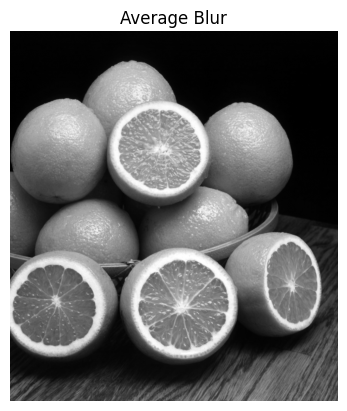

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Convert PIL image to NumPy array
img = np.array(img)

def rgb_to_gray(img):
    # Convert RGB to grayscale using the luminosity method
    return (0.299 * img[..., 0] +
            0.587 * img[..., 1] +
            0.114 * img[..., 2]).astype(np.float32)

gray = rgb_to_gray(img)

avg_gray = average_blur_gray(gray, 5)

plt.imshow(avg_gray, cmap='gray')
plt.axis("off")
plt.title("Average Blur")
plt.show()


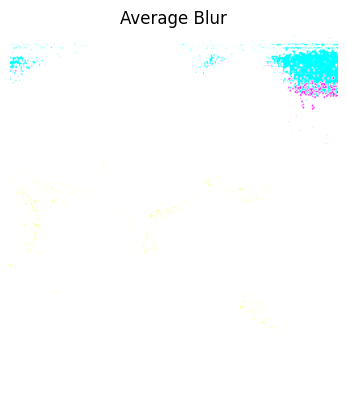

In [16]:
avg_rgb=average_blur_rgb(img, 5)
plt.imshow(avg_rgb)
plt.axis("off")
plt.title("Average Blur")
plt.show()

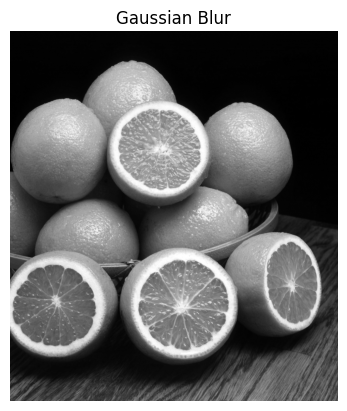

In [18]:
gaussian_k=gaussian_kernel(5, 1)
img_blur_gaussian=gaussian_blur_gray(gray, 5, 1)
plt.imshow(img_blur_gaussian, cmap='gray')
plt.axis("off")
plt.title("Gaussian Blur")
plt.show()

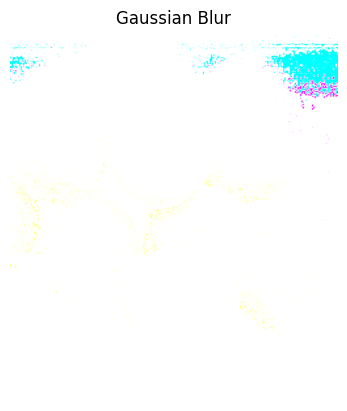

In [19]:
rgb_k=gaussian_kernel(5, 1)
img_blur_rgb=gaussian_blur_rgb(img, 5, 1)
plt.imshow(img_blur_rgb)
plt.axis("off")
plt.title("Gaussian Blur")
plt.show()

### Part B

#### Task - Sobel Edge Detection (NumPy Only)
Implement Sobel X and Sobel Y filters manually using convolution. Apply on the grayscale image.

Compute:
1. Gx
2. Gy
3. Gradient magnitude

Normalize to 0–255 and save the edge map. Threshold if you wish to, if you do then make the thresholding part clear using code comments.

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [20]:
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32)

Gx = convolve(gray, sobel_x)
Gy = convolve(gray, sobel_y)

grad_mag = np.sqrt(Gx**2 + Gy**2)

# Normalize to 0–255
grad_mag = (grad_mag / grad_mag.max()) * 255
grad_mag = grad_mag.astype(np.uint8)


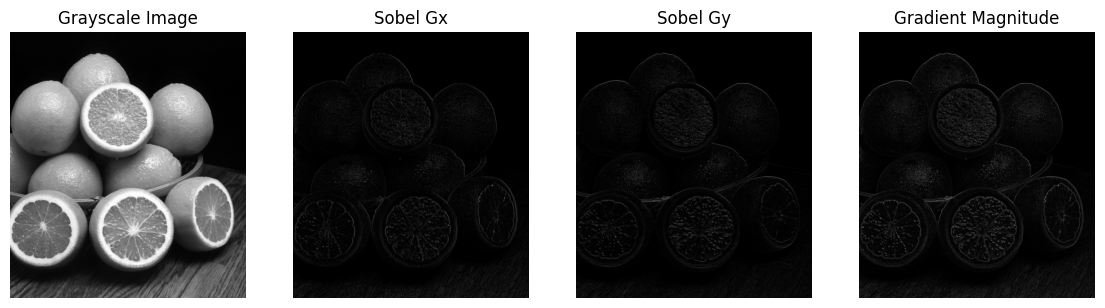

In [21]:
threshold=100
edge_bin=np.zeros_like(grad_mag, dtype=np.uint8)
edge_bin[grad_mag>=threshold]=255

plt.figure(figsize=(14,6))

plt.subplot(1,4,1)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

plt.subplot(1,4,2)
plt.imshow(np.abs(Gx), cmap='gray')
plt.title("Sobel Gx")
plt.axis("off")

plt.subplot(1,4,3)
plt.imshow(np.abs(Gy), cmap='gray')
plt.title("Sobel Gy")
plt.axis("off")

plt.subplot(1,4,4)
plt.imshow(grad_mag, cmap='gray')
plt.title("Gradient Magnitude")
plt.axis("off")

plt.show()

### Part C

#### Task 1 — Laplacian Sharpening ( Only Numpy and Grayscale )
1. Use any 3×3 Laplacian kernel (4-connected or 8-connected).

2. Compute:
* <code>lap = convolve(img, laplacian_kernel)</code>
* <code>sharp = img - lap * alpha</code> where alpha ∈ [0.2, 1].

3. Now, put alpha = 1, if you had chosen a different value earlier. Get a new output. Then use the code in the lecture to do the same using cv2. Now, use python to verify if both numpy with alpha = 1 and cv2 give the exact same output ( Compare the matrices )

#### Task 2 - Unsharp Masking ( Only Numpy and Grayscale )
1. Apply Gaussian blur (from Part 1).
2. Subtract blurred image from original: <code> mask = img - blurred </code>
3. Add scaled mask back: <code>sharp = img + alpha * mask</code> , where you can choose any value of alpha.
4. See how negative values of alpha will give you a blurred image.  



In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

In [22]:
laplacian_kernel = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
], dtype=np.float32)

lap = convolve(gray, laplacian_kernel)

alpha = 1
sharp_np = gray - alpha * lap
sharp_np = np.clip(sharp_np, 0, 255)


In [23]:
import cv2

lap_cv = cv2.Laplacian(gray.astype(np.float32), cv2.CV_32F)
sharp_cv = gray - lap_cv
sharp_cv = np.clip(sharp_cv, 0, 255)

# Verification
print("Are NumPy and cv2 outputs equal?",
      np.allclose(sharp_np, sharp_cv))


Are NumPy and cv2 outputs equal? False


Task 2

In [24]:
blurred = gaussian_blur_gray(gray, ksize=5, sigma=1.0)

mask = gray - blurred
alpha = 0.7

unsharp = gray + alpha * mask
unsharp = np.clip(unsharp, 0, 255)


In [25]:
# Negative alpha gives blur
blur_again = gray + (-0.7) * mask


### Part D

#### Task - Frequency Analysis (LPF & HPF Verification)
Compute the magnitude spectrum of the original image, gaussian blurred image and the unsharp masking image. Now, play with the alpha value in sharpening and gaussian kernel and notice how the magntude spectrum changes.
Then, in code comments, explain your observations of dark and bright areas in the magnitude spectrum. In nutshell, verify how convolution is actually filtering frequencies depending on the kernel.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

In [26]:
def magnitude_spectrum(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    mag = np.log(1 + np.abs(fshift))
    return mag


In [28]:
mag_orig = magnitude_spectrum(gray)
mag_blur = magnitude_spectrum(blurred)
mag_sharp = magnitude_spectrum(unsharp)


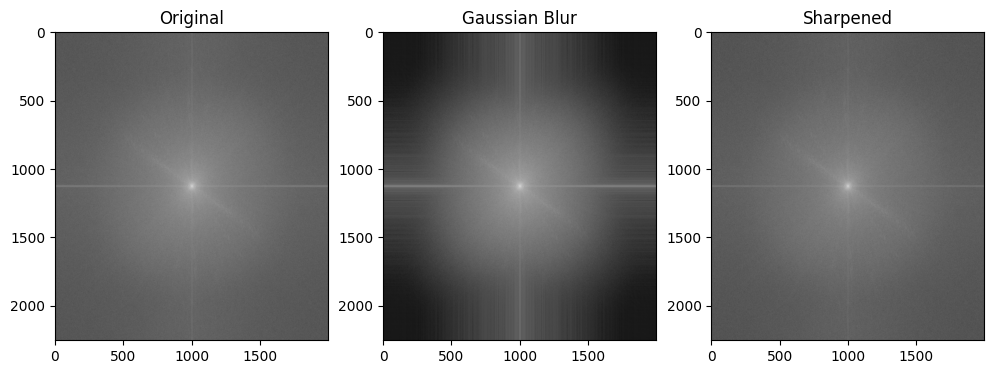

In [29]:
plt.figure(figsize=(12,4))
plt.subplot(131); plt.imshow(mag_orig, cmap='gray'); plt.title("Original")
plt.subplot(132); plt.imshow(mag_blur, cmap='gray'); plt.title("Gaussian Blur")
plt.subplot(133); plt.imshow(mag_sharp, cmap='gray'); plt.title("Sharpened")
plt.show()


### Part E

#### Task - Custom Colour Kernel (Detect Yellow Leaf Edges)

**Instructions :**
* At the start of the assignment .ipynb file, you will find a code cell in section 1, run it to see an image with a yellow leaf amongst green leaves.
* Design a 3×3 or 5×5 custom kernel applied separately to each channel that highlights the edges where any other colour transitions into a yellowish hue.

**Hints :**

* Yellow = (R high, G high, B low)

* Dark green = (G high, R low, B low)

**Steps:**

1. Analyze the RGB values of green & yellow regions.

2. Create a custom kernel that responds strongly to change from green to yellow in:
* Red matrices of RGB
* Green matrices of RGB
* Optionally R - G difference
* Think about the gradient in Red - Green. Is there a huge change the value of R-G when colour changes from Green to Yellow ? If yes, try to exploit it.

3. Combine the response maps.

4. Get a clean outline around the leaf.

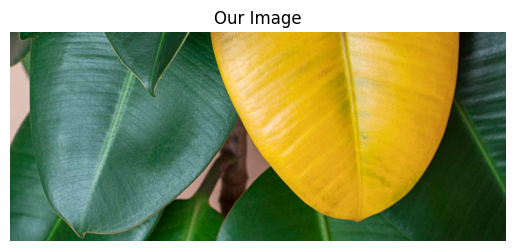

In [37]:

plt.imshow(img_part5)

plt.axis("off")
plt.title("Our Image")
plt.show()

In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

In [39]:

img = np.array(img)

R, G, B = img[..., 0], img[..., 1], img[..., 2]

RG_diff = R - G

sobel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

edge_map = convolve(RG_diff, sobel)
edge_map = np.abs(edge_map)
edge_map = (edge_map / edge_map.max()) * 255
edge_map = edge_map.astype(np.uint8)


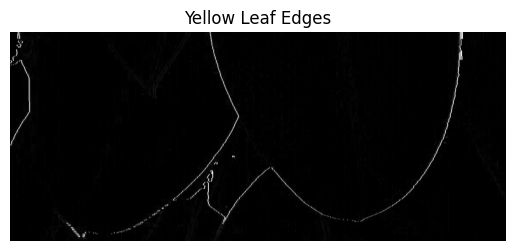

In [40]:
plt.imshow(edge_map, cmap='gray')
plt.title("Yellow Leaf Edges")
plt.axis("off")
plt.show()


### Bonus - Part F

#### Task - Color Manipulation Using Lecture 2 Concepts

**NOTE :** only for this, you can use cv2 functions, no need of doing everything in Numpy. Although there are still more brownie parts for Numpy hardwork.

1. Convert the RGB image to HSV. Use your rgb_to_hsv() from Lecture 2 Assignment - free Numopy points ;)) .
2. Identify pixels belonging to the yellow leaf using an HSV mask. (maybe take help from Part E or design a new hue mask)
3. Now use your full brain and chnage the colour of the leaf to red.

Convert back to RGB.

Display the final result.

For reference, heres the image I expect as a result. And its not actually tough, easy 5 lines code.
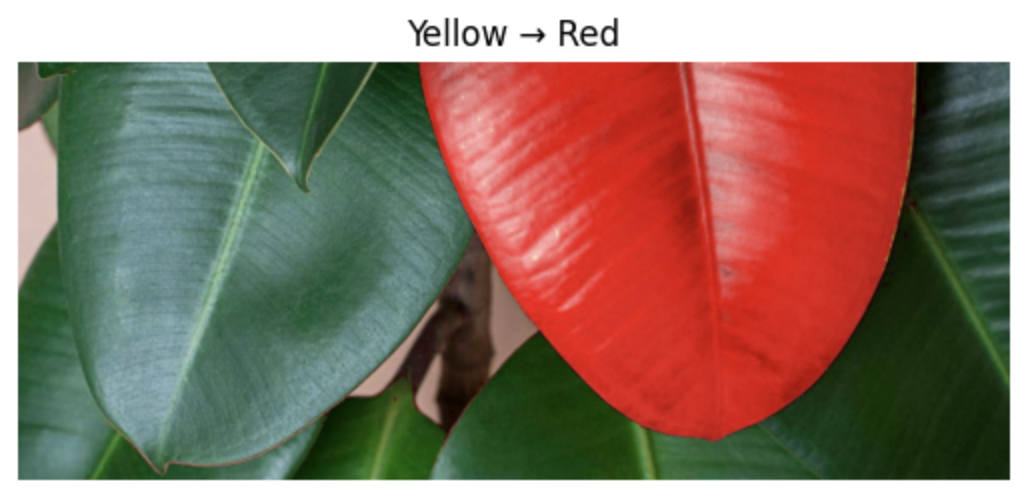

Also, we can change to a less brighter colour
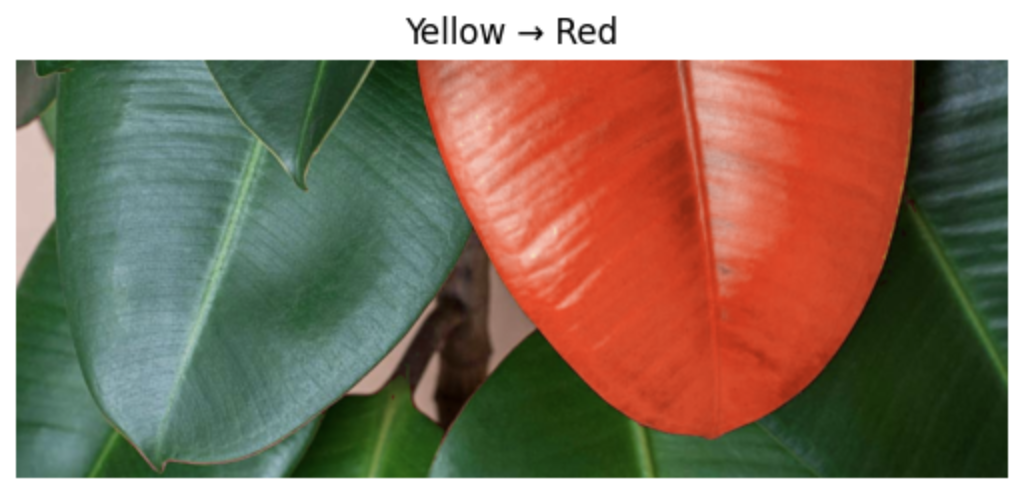

In [ ]:
# Your BONUS PART codes follow here. You can create more cells under this. Write clean and commented code.

In [41]:
import cv2

hsv = cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_RGB2HSV)

# Yellow mask
lower = np.array([20, 100, 100])
upper = np.array([35, 255, 255])
mask = cv2.inRange(hsv, lower, upper)

# Change yellow to red
hsv[...,0][mask > 0] = 0

final_img = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)


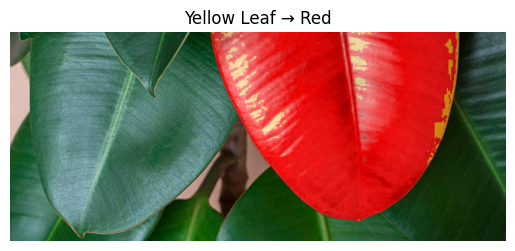

In [42]:
plt.imshow(final_img)
plt.axis("off")
plt.title("Yellow Leaf → Red")
plt.show()
